# 6.3  Geographical Visualizations

### This notbooke contains

#### 1.Importing Libraries and data

#### 2. Data wrangleing 

#### 3. Merging the data frames together

#### 4. Data cleaning 

#### 5. Creating a choropleth

### 1.Importing Libraries and data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot 

In [2]:
# ensuring the chart displayes in the notebook instead of having to call them specifically. 
%matplotlib inline

In [3]:
# Importing datafram
path = r"C:\Users\quinn\PycharmProjects\Netflix Analysis 07-23-2021"
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'netflix_checked.csv'), index_col = False)
#Importing the .shp file
globe =gpd.read_file(os.path.join(path,'02 Data','Original Data', 'countries.shp'))

In [4]:
# Checking the data
df.head()

Unnamed: 0 Unnamed: 0.1                                               cast  \
0           0           s2  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
1           1           s3  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
2           2           s4  Elijah Wood, John C. Reilly, Jennifer Connelly...   
3           3           s5  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
4           4           s7  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   

    type  title        country date_added  release_year  \
0  Movie   7:19         Mexico  23-Dec-16          2016   
1  Movie  23:59      Singapore  20-Dec-18          2011   
2  Movie      9  United States  16-Nov-17          2009   
3  Movie     21  United States   1-Jan-20          2008   
4  Movie    122          Egypt   1-Jun-20          2019   

                                         description           director  \
0  After a devastating earthquake hits Mexico Cit...  Jorge Michel Grau   
1  When an army recruit is found dead, his fellow...       Gilbert Chan   
2  In a postapocalyptic world, rag-doll robots hi...        Shane Acker   
3  A brilliant group of students become card-coun...     Robert Luketic   
4  After an awful accident, a couple admitted to ...    Yasir Al Yasiri   

  duration                                          listed_in rating  \
0   93 min                       Dramas, International Movies  TV-MA   
1   78 min                Horror Movies, International Movies      R   
2   80 min  Action & Adventure, Independent Movies, Sci-Fi...  PG-13   
3  123 min                                             Dramas  PG-13   
4   95 min                Horror Movies, International Movies  TV-MA   

                                             rt_info  \
0  {'Genre': 'drama', 'Original Language': 'Spani...   
1  {'Genre': 'horror', 'Original Language': 'Chin...   
2                                                NaN   
3  {'Genre': 'romance, comedy, drama', 'Original ...   
4                                                NaN   

                                             rt_cast  rt_audience_score  \
0  {'Elsa - Eloisa Delfin': 'Carmen Beato', 'Fern...               52.0   
1  {'Boss': 'Philip Hersh', 'Tan': 'Tedd Chan', '...               20.0   
2                                                NaN                NaN   
3  {'Justin Sellers': 'Matt Wheeler', 'Sam Presco...               17.0   
4                                                NaN                NaN   

  rt_audience_#reviews  rt_tomatometer_score  rt_critics_#reviews  \
0                   10                 100.0                 10.0   
1                   10                   NaN                  0.0   
2                  NaN                   NaN                  NaN   
3                   10                   NaN                  0.0   
4                  NaN                   NaN                  NaN   

                                    rt_critic_review  
0  [{'Review': 'The intentions of this film are c...  
1                                                NaN  
2                                                NaN  
3  [{'Review': 'Empty calories, yes, but tasty en...  
4                                                NaN

In [5]:
globe.head()

OBJECTID            NAME ISO3 ISO2 FIPS         COUNTRY         ENGLISH  \
0         1           Åland  ALA   AX   AX           Åland           Åland   
1         2     Afghanistan  AFG   AF   AF     Afghanistan     Afghanistan   
2         3         Albania  ALB   AL   AL         Albania         Albania   
3         4         Algeria  DZA   DZ   AG         Algeria         Algeria   
4         5  American Samoa  ASM   AS   AQ  American Samoa  American Samoa   

              FRENCH          SPANISH           LOCAL             FAO WAS_ISO  \
0               None             None           Åland            None    None   
1        Afghanistan       Afganistán     Afghanestan     Afghanistan    None   
2            Albanie          Albania       Shqiperia         Albania    None   
3            Algérie          Argelia      Al Jaza'ir         Algeria    None   
4  Samoa Américaines  Samoa Americana  American Samoa  American Samoa    None   

       SOVEREIGN CONTINENT           UNREG1   UNREG2  EU          SQKM  \
0        Finland    Europe  Northern Europe   Europe   0  1.243719e+03   
1    Afghanistan      Asia    Southern Asia     Asia   0  6.413834e+05   
2        Albania    Europe  Southern Europe   Europe   0  2.848611e+04   
3        Algeria    Africa  Northern Africa   Africa   0  2.316559e+06   
4  United States   Oceania        Polynesia  Oceania   0  2.110151e+02   

                                            geometry  
0  MULTIPOLYGON (((20.99567 60.64228, 20.99261 60...  
1  POLYGON ((73.27336 36.88856, 73.26195 36.89025...  
2  MULTIPOLYGON (((20.98057 40.85522, 20.98096 40...  
3  MULTIPOLYGON (((-8.67387 27.29807, -8.67172 27...  
4  MULTIPOLYGON (((-171.07492 -11.06860, -171.078...

In [6]:
# Getting rid of 'english','french','sapanish','local','ISO3','ISO2','FAO','was_iso','UNREG1','UNREG2', 'SOVEREIGN','NAME'they are unrelated 
globe_1=globe.drop(['ENGLISH', 'FRENCH', 'SPANISH', 'LOCAL', 'ISO3', 'ISO2','FAO','WAS_ISO','UNREG1','UNREG2','SOVEREIGN','NAME'],axis=1)

In [7]:
#Checking the data frame
globe_1.head()

OBJECTID FIPS         COUNTRY CONTINENT  EU          SQKM  \
0         1   AX           Åland    Europe   0  1.243719e+03   
1         2   AF     Afghanistan      Asia   0  6.413834e+05   
2         3   AL         Albania    Europe   0  2.848611e+04   
3         4   AG         Algeria    Africa   0  2.316559e+06   
4         5   AQ  American Samoa   Oceania   0  2.110151e+02   

                                            geometry  
0  MULTIPOLYGON (((20.99567 60.64228, 20.99261 60...  
1  POLYGON ((73.27336 36.88856, 73.26195 36.89025...  
2  MULTIPOLYGON (((20.98057 40.85522, 20.98096 40...  
3  MULTIPOLYGON (((-8.67387 27.29807, -8.67172 27...  
4  MULTIPOLYGON (((-171.07492 -11.06860, -171.078...

In [8]:
# Getting ride of 'Unnamed: 0','Unnamed: 0.1' they are not related to the project
df_1=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [9]:
df_1.head()

cast   type  title  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Movie   7:19   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Movie  23:59   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  Movie      9   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  Movie     21   
4  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...  Movie    122   

         country date_added  release_year  \
0         Mexico  23-Dec-16          2016   
1      Singapore  20-Dec-18          2011   
2  United States  16-Nov-17          2009   
3  United States   1-Jan-20          2008   
4          Egypt   1-Jun-20          2019   

                                         description           director  \
0  After a devastating earthquake hits Mexico Cit...  Jorge Michel Grau   
1  When an army recruit is found dead, his fellow...       Gilbert Chan   
2  In a postapocalyptic world, rag-doll robots hi...        Shane Acker   
3  A brilliant group of students become card-coun...     Robert Luketic   
4  After an awful accident, a couple admitted to ...    Yasir Al Yasiri   

  duration                                          listed_in rating  \
0   93 min                       Dramas, International Movies  TV-MA   
1   78 min                Horror Movies, International Movies      R   
2   80 min  Action & Adventure, Independent Movies, Sci-Fi...  PG-13   
3  123 min                                             Dramas  PG-13   
4   95 min                Horror Movies, International Movies  TV-MA   

                                             rt_info  \
0  {'Genre': 'drama', 'Original Language': 'Spani...   
1  {'Genre': 'horror', 'Original Language': 'Chin...   
2                                                NaN   
3  {'Genre': 'romance, comedy, drama', 'Original ...   
4                                                NaN   

                                             rt_cast  rt_audience_score  \
0  {'Elsa - Eloisa Delfin': 'Carmen Beato', 'Fern...               52.0   
1  {'Boss': 'Philip Hersh', 'Tan': 'Tedd Chan', '...               20.0   
2                                                NaN                NaN   
3  {'Justin Sellers': 'Matt Wheeler', 'Sam Presco...               17.0   
4                                                NaN                NaN   

  rt_audience_#reviews  rt_tomatometer_score  rt_critics_#reviews  \
0                   10                 100.0                 10.0   
1                   10                   NaN                  0.0   
2                  NaN                   NaN                  NaN   
3                   10                   NaN                  0.0   
4                  NaN                   NaN                  NaN   

                                    rt_critic_review  
0  [{'Review': 'The intentions of this film are c...  
1                                                NaN  
2                                                NaN  
3  [{'Review': 'Empty calories, yes, but tasty en...  
4                                                NaN

### 2. Data wrangleing 

In [10]:
# makeing all the strings lower case
df_1['country'] = df_1['country'].str.lower()

In [11]:
# Matching the column names lower case
globe_1.columns= globe_1.columns.str.lower()

In [12]:
# Makeing all the strings lower case
globe_1['country'] = globe_1['country'].str.lower()

### 3. Merging the data frames together

In [13]:
# merging the dataframes together on the country column
globe_m = globe_1.merge(df_1, on = 'country', how = 'outer', indicator = True)

In [14]:
globe_m['_merge'].value_counts()

both          7937
right_only    1986
left_only      195
Name: _merge, dtype: int64

In [15]:
globe_m

objectid fips                                        country continent  \
0           1.0   AX                                          åland    Europe   
1           2.0   AF                                    afghanistan      Asia   
2           3.0   AL                                        albania    Europe   
3           4.0   AG                                        algeria    Africa   
4           5.0   AQ                                 american samoa   Oceania   
...         ...  ...                                            ...       ...   
10113       NaN  NaN                                  japan, canada       NaN   
10114       NaN  NaN                                  japan, canada       NaN   
10115       NaN  NaN  united states, france, south korea, indonesia       NaN   
10116       NaN  NaN  united states, france, south korea, indonesia       NaN   
10117       NaN  NaN  united states, france, south korea, indonesia       NaN   

        eu          sqkm                                           geometry  \
0      0.0  1.243719e+03  MULTIPOLYGON (((20.99567 60.64228, 20.99261 60...   
1      0.0  6.413834e+05  POLYGON ((73.27336 36.88856, 73.26195 36.89025...   
2      0.0  2.848611e+04  MULTIPOLYGON (((20.98057 40.85522, 20.98096 40...   
3      0.0  2.316559e+06  MULTIPOLYGON (((-8.67387 27.29807, -8.67172 27...   
4      0.0  2.110151e+02  MULTIPOLYGON (((-171.07492 -11.06860, -171.078...   
...    ...           ...                                                ...   
10113  NaN           NaN                                               None   
10114  NaN           NaN                                               None   
10115  NaN           NaN                                               None   
10116  NaN           NaN                                               None   
10117  NaN           NaN                                               None   

                                                    cast     type  \
0                                                    NaN      NaN   
1                                                    NaN      NaN   
2                                                    NaN      NaN   
3                                                    NaN      NaN   
4                                                    NaN      NaN   
...                                                  ...      ...   
10113  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...  TV Show   
10114  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...  TV Show   
10115  Michael Johnston, Jessica Gee-George, Christin...  TV Show   
10116  Michael Johnston, Jessica Gee-George, Christin...  TV Show   
10117  Michael Johnston, Jessica Gee-George, Christin...  TV Show   

                 title  ...               listed_in  rating rt_info rt_cast  \
0                  NaN  ...                     NaN     NaN     NaN     NaN   
1                  NaN  ...                     NaN     NaN     NaN     NaN   
2                  NaN  ...                     NaN     NaN     NaN     NaN   
3                  NaN  ...                     NaN     NaN     NaN     NaN   
4                  NaN  ...                     NaN     NaN     NaN     NaN   
...                ...  ...                     ...     ...     ...     ...   
10113  Yu-Gi-Oh! Arc-V  ...  Anime Series, Kids' TV   TV-Y7     NaN     NaN   
10114  Yu-Gi-Oh! Arc-V  ...  Anime Series, Kids' TV   TV-Y7     NaN     NaN   
10115        Zak Storm  ...                Kids' TV   TV-Y7     NaN     NaN   
10116        Zak Storm  ...                Kids' TV   TV-Y7     NaN     NaN   
10117        Zak Storm  ...                Kids' TV   TV-Y7     NaN     NaN   

      rt_audience_score rt_audience_#reviews rt_tomatometer_score  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN        

### 4. Data cleaning 

In [16]:
globe_m['_merge'].value_counts()

both          7937
right_only    1986
left_only      195
Name: _merge, dtype: int64

In [17]:
# looking for missing values
globe_m.isnull().sum()

objectid                1986
fips                    1986
country                  577
continent               1986
eu                      1986
sqkm                    1986
geometry                1986
cast                    1022
type                     195
title                    195
date_added               253
release_year             195
description              195
director                4505
duration                 195
listed_in                195
rating                   195
rt_info                 4373
rt_cast                 4818
rt_audience_score       4859
rt_audience_#reviews    4319
rt_tomatometer_score    5738
rt_critics_#reviews     4332
rt_critic_review        5565
_merge                     0
dtype: int64

In [18]:
# droping some columns 
globe_1=globe_m.drop(['eu','objectid','sqkm'], axis=1)

In [19]:
# looking at the head 
globe_1.head()

fips         country continent  \
0   AX           åland    Europe   
1   AF     afghanistan      Asia   
2   AL         albania    Europe   
3   AG         algeria    Africa   
4   AQ  american samoa   Oceania   

                                            geometry cast type title  \
0  MULTIPOLYGON (((20.99567 60.64228, 20.99261 60...  NaN  NaN   NaN   
1  POLYGON ((73.27336 36.88856, 73.26195 36.89025...  NaN  NaN   NaN   
2  MULTIPOLYGON (((20.98057 40.85522, 20.98096 40...  NaN  NaN   NaN   
3  MULTIPOLYGON (((-8.67387 27.29807, -8.67172 27...  NaN  NaN   NaN   
4  MULTIPOLYGON (((-171.07492 -11.06860, -171.078...  NaN  NaN   NaN   

  date_added  release_year description  ... listed_in rating rt_info rt_cast  \
0        NaN           NaN         NaN  ...       NaN    NaN     NaN     NaN   
1        NaN           NaN         NaN  ...       NaN    NaN     NaN     NaN   
2        NaN           NaN         NaN  ...       NaN    NaN     NaN     NaN   
3        NaN           NaN         NaN  ...       NaN    NaN     NaN     NaN   
4        NaN           NaN         NaN  ...       NaN    NaN     NaN     NaN   

  rt_audience_score rt_audience_#reviews  rt_tomatometer_score  \
0               NaN                  NaN                   NaN   
1               NaN                  NaN                   NaN   
2               NaN                  NaN                   NaN   
3               NaN                  NaN                   NaN   
4               NaN                  NaN                   NaN   

  rt_critics_#reviews  rt_critic_review     _merge  
0                 NaN               NaN  left_only  
1                 NaN               NaN  left_only  
2                 NaN               NaN  left_only  
3                 NaN               NaN  left_only  
4                 NaN               NaN  left_only  

[5 rows x 22 columns]

In [20]:
# makeing the 'rt_audience_score','rt_tomatometer_score' missing values meadian
globe_1['rt_audience_score'].fillna(globe_1['rt_audience_score'].median(), inplace=True)
globe_1['rt_tomatometer_score'].fillna(globe_1['rt_tomatometer_score'].median(), inplace=True)

In [21]:
# deleting the NAN values in the fips and continent for the countrys that are not needed
globe_2 = globe_1.dropna( how='any',subset=['fips', 'continent','title',])

In [22]:
globe_2['_merge'].value_counts()

both          7937
left_only        0
right_only       0
Name: _merge, dtype: int64

In [23]:
# Looking over the rest of the missing values Which are all string data 
globe_2.isnull().sum()

fips                       0
country                    0
continent                  0
geometry                   0
cast                     621
type                       0
title                      0
date_added                56
release_year               0
description                0
director                3482
duration                   0
listed_in                  0
rating                     0
rt_info                 3273
rt_cast                 3646
rt_audience_score          0
rt_audience_#reviews    3228
rt_tomatometer_score       0
rt_critics_#reviews     3241
rt_critic_review        4288
_merge                     0
dtype: int64

In [24]:
# checking for duplicates
dups = globe_2.duplicated()

In [25]:
dups.shape

(7937,)

D:\SQL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rt_audience_score', ylabel='Density'>

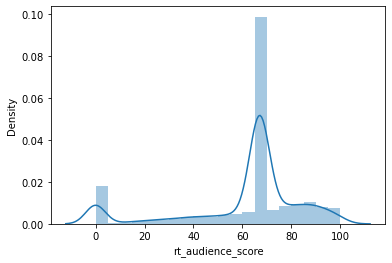

In [26]:
# Looking for oultiers in the data
sns.distplot(globe_2['rt_audience_score'], bins=20) 

There does not seem to be anything wrong here I dont want to get rid of any the values 

D:\SQL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rt_tomatometer_score', ylabel='Density'>

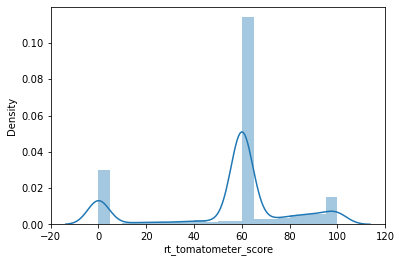

In [27]:
# Looking for oultiers in the data
sns.distplot(globe_2['rt_tomatometer_score'], bins=20) 

There does not seem to be anything wrong here I dont want to get rid of any the values 

In [28]:
# getting rid of the _merge column so i can save the geodataframe
globe_2=globe_2.drop(['cast','type','title','country','date_added',
              'release_year','description','director','duration','listed_in','rating',
              'rt_info','rt_cast','rt_critic_review','rt_audience_#reviews','rt_critics_#reviews','_merge'],axis=1)

In [29]:
out = r"C:\Users\quinn\PycharmProjects\Netflix Analysis 07-23-2021\02 Data\Prepared Data\GeoData.shp"
globe_2.to_file(out)

<ipython-input-29-151887436f79>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  globe_2.to_file(out)


RuntimeError: GDAL Error: Failed to write shape object. File size cannot reach 4293752440 + 1833700. 
 
 Failed to write record: {'id': '5614', 'type': 'Feature', 'properties': {'continent': 'North America', 'fips': 'US', 'rt_audience_score': 63.0, 'rt_tomatometer_score': 75.0}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [(((-166.77543622793036, 65.33348086525547), (-166.85592667124752, 65.34970098663007), (-166.8584898965619, 65.35033412104929), (-166.91413878691932, 65.36403659991618), (-166.99568176237037, 65.37747186303778), (-167.0720062242796, 65.3856812547628), (-167.14129639768848, 65.38674939990523), (-167.157379232263, 65.386932448972), (-167.19717409937934, 65.39398181210129), (-167.2136230320874, 65.39521793168171), (-167.23553472321953, 65.39321139088207), (-167.26783749970886, 65.39250180655847), (-167.31304936298253, 65.39691921124353), (-167.32752980038333, 65.3962706432755), (-167.33177187277587, 65.39608759420878), (-167.3495940324044, 65.39838396269738), (-167.39978034379763, 65.39952855774436), (-167.47073375127604, 65.41580951601463), (-167.55043026413102, 65.43960571523519), (-167.5936738115573, 65.44892883490968), (-167.6072540782532, 65.45341497272449), (-167.61183174060147, 65.4656981034845), (-167.62030027237785, 65.47091679648611), (-167.64930726836587, 65.47740175832638), (-167.6763917107732, 65.48741149146099), (-167.7482300348675, 65.50840775779938), (-167.7692259422862, 65.51029962374253), (-167.79101560070717, 65.51430498856723), (-167.81857309933014, 65.5209349539818), (-167.82312025350058, 65.52294921155584), (-167.83544932598724, 65.52840425320534), (-167.8397979975421, 65.5347901531976), (-167.8465119501756, 65.53807067961009), (-167.90953053952913, 65.54936211513177), (-167.97589103057032, 65.55355070848327), (-168.00000002834324, 65.55785361777151), (-168.01911914444784, 65.56127161044384), (-168.056198065901, 65.56992337074689), (-168.07829280609982, 65.57990259570369), (-168.0789641654712, 65.58020014016722), (-168.09202579314461, 65.59135428888885), (-168.09469615600105, 65.60504905098156), (-168.12380975115147, 65.62824262396072), (-168.12692266204584, 65.63774879270181), (-168.12776181639506, 65.6497270211438), (-168.11727902704473, 65.66802977430257), (-168.09886177848927, 65.684295657944), (-168.08480827611774, 65.69244385385343), (-168.0768738169126, 65.69533549072884), (-168.01710506633378, 65.71706377387454), (-168.00000002834324, 65.7214508498414), (-167.90182489165744, 65.74665060470056), (-167.83432016448907, 65.76195530128138), (-167.82247940230704, 65.76277920154178), (-167.80233772386663, 65.76490777505245), (-167.7693634085461, 65.77203376754596), (-167.7393342091421, 65.77563462982522), (-167.72332764501206, 65.77720651882112), (-167.68948366716455, 65.78703302342916), (-167.637298711206, 65.7962570812557), (-167.59770196778544, 65.8065718961683), (-167.55325316787645, 65.81467432981123), (-167.54824839103895, 65.81372839683962), (-167.53237911370906, 65.8138122045986), (-167.5330809812582, 65.82054912809537), (-167.52752687776064, 65.82400516626001), (-167.50437942596787, 65.83055114445574), (-167.34898368938863, 65.87431333090444), (-167.29991146486458, 65.89232643583404), (-167.25628674467578, 65.90373236675254), (-167.2443695325894, 65.90828705823748), (-167.2408445818349, 65.91156758464996), (-167.2096406381259, 65.92556007066588), (-167.1727447657396, 65.93961339357747), (-167.11614976295078, 65.95803064213305), (-167.08297732393456, 65.96690367645488), (-167.05772391057454, 65.97583772713244), (-167.01785277301374, 65.98991384144767), (-166.9851837189311, 65.9983595818207), (-166.94615173571952, 66.01126866860511), (-166.909698590831, 66.02044678470497), (-166.86537182363307, 66.0371932618765), (-166.8376617841211, 66.04279330710068), (-166.81965639596584, 66.0490569949219), (-166.81159990404956, 66.04991912013435), (-166.80087286981694, 66.05238346306072), (-166.79896539086528, 66.05587772617758), (-166.7795562676117, 66.06442270785823), (-166.70269773313126, 66.08616642455257), (-166.63700860146136, 66.10838319746284), (-166.6106872224187, 66.114189262617), (-166.56257618495508, 66.13034065086163), (-166.54981999797937, 66.13461305197205), (-166.48898328171774, 66.15033714626765), (-166.3747253104575, 66.17759710042725), (-166.35162344147165, 66.18311297897259), (-166.2978210137103, 66.19943987896954), (-166.26629637521472, 66.20714552684115), (-166.22315978587056, 66.214225757068), (-166.19447312574937, 66.218917914813), (-166.16987617659163, 66.21965800731425), (-166.16009525479043, 66.21620950646422), (-166.16015627114604, 66.21334837776652), (-166.1395720446677, 66.21801002733366), (-166.15786743997185, 66.22561643389764), (-166.15562437106445, 66.22933197103339), (-166.1475371915105, 66.2337188675404), (-166.09597765319674, 66.25068661873081), (-166.06433098198997, 66.25835422111015), (-166.03973385337233, 66.2615967020302), (-166.02085880269007, 66.26775361122918), (-165.95361321557309, 66.28945156565686), (-165.88154608014526, 66.30571744929813), (-165.84286494097833, 66.31922144554966), (-165.79820258382466, 66.32831575389054), (-165.77745056236847, 66.33270265039761), (-165.7462310056508, 66.34243009315765), (-165.71299755027897, 66.34893048854656), (-165.70512392796954, 66.35161592603208), (-165.69940185003423, 66.35143287696536), (-165.68690480310994, 66.35628511291367), (-165.64042667099775, 66.36591331436614), (-165.6305542246632, 66.36811062100679), (-165.5950012504795, 66.3753509294371), (-165.57522584963252, 66.3822707225408), (-165.48701468381475, 66.4003448438259), (-165.4792329449585, 66.40239714689227), (-165.46011346993407, 66.40848550242094), (-165.37088010070028, 66.42698673819547), (-165.30664064585537, 66.43957513019325), (-165.14027398908098, 66.47199240207914), (-165.0444946416516, 66.48556513146059), (-165.0196227599739, 66.48979948707876), (-164.9999999000159, 66.49311841790313), (-164.7483368646223, 66.53571321790173), (-164.73558031872687, 66.5360640619462), (-164.73016350202937, 66.53437803647341), (-164.71580491787986, 66.53697966619995), (-164.69058219215762, 66.54295352633204), (-164.63629145409175, 66.5509490018926), (-164.4895324031865, 66.56892388187015), (-164.40292363454245, 66.58271016849619), (-164.3902435385513, 66.58261110664824), (-164.38963319553554, 66.57878879089009), (-164.40541076887223, 66.56677251695601), (-164.40232854561552, 66.56432342811848), (-164.37652598505525, 66.58036032096629), (-164.35366818149174, 66.58068083629314), (-164.34118656811617, 66.58185576005798), (-164.32499695491936, 66.5809783807565), (-164.29235840901447, 66.58425908662883), (-164.1884917025712, 66.59045422077975), (-164.10859688656058, 66.59001149328202), (-163.96937550908922, 66.59517670724262), (-163.93223557128056, 66.5952377235983), (-163.87985231216643, 66.59292610102068), (-163.85890180809469, 66.59199524267825), (-163.84103388619937, 66.59331499055759), (-163.78657517369575, 66.59087361849453), (-163.73655701620018, 66.58587655843155), (-163.65136705728352, 66.57227332087223), (-163.6434325980784, 66.56958016661241), (-163.62191769271746, 66.56225587096333), (-163.60357671460645, 66.55972279490686), (-163.60000600158534, 66.55744168050711), (-163.60401908318448, 66.5563582812756), (-163.63465880506413, 66.55481725937727), (-163.65237418607046, 66.55583946279319), (-163.74761964038854, 66.56735988910833), (-163.78411872700366, 66.5732345079328), (-163.8337706069058, 66.57756810485859), (-163.8508758243562, 66.57706454046519), (-163.86529542486127, 66.56904591458135), (-163.87249750833942, 66.56598666218792), (-163.88099672775346, 66.57164754430778), (-163.8852386206861, 66.57161703612991), (-163.8976746512549, 66.57259365673917), (-163.90693675457368, 66.57743835537309), (-163.91024778916383, 66.57695004506854), (-163.92112736428544, 66.57975769472495), (-163.92555248574473, 66.57910158944253), (-163.91899107400033, 66.56255341542669), (-163.91067508311286, 66.55817423569391), (-163.90394587639054, 66.55746447191052), (-163.90037534282928, 66.55708311968817), (-163.8869018547556, 66.55986779848132), (-163.8660430546771, 66.55873109966876), (-163.84941107290229, 66.56517029924214), (-163.84419237990053, 66.56494130844868), (-163.8416289751263, 66.56271367309), (-163.85534670808218, 66.55339809073013), (-163.8505858172073, 66.55149079123828), (-163.83959964292333, 66.55290224311096), (-163.83291619846767, 66.5597917074968), (-163.8276214144813, 66.55976119931898), (-163.80856331473223, 66.5540541960126), (-163.7960815218968, 66.55328377479333), (-163.78706348400038, 66.55709837377702), (-163.7753906962561, 66.55340580750453), (-163.75018304516286, 66.55268850640658), (-163.74705505963945, 66.55064392011462), (-163.75172424652112, 66.54536439021729), (-163.75134271483878, 66.53732315238989), (-163.73881533919652, 66.52175141952335), (-163.7275694864815, 66.52040098400613), (-163.72288522497084, 66.51638018563278), (-163.72393793656462, 66.50333417096795), (-163.7393799199456, 66.47298427677725), (-163.7511901739498, 66.46105199006195), (-163.78981011730127, 66.43920149474519), (-163.79818712454434, 66.43445585795922), (-163.84254457937988, 66.4189223500448), (-163.86096200739527, 66.39799499629623), (-163.8699034159274, 66.38276674961975), (-163.8692625647339, 66.37745671154454), (-163.85501093866662, 66.36435685891894), (-163.85996995323725, 66.35591883532038), (-163.86099251557303, 66.34075914231403), (-163.8717041162569, 66.32666777391), (-163.87272649913277, 66.31911466692725), (-163.86616508738825, 66.31438446368998), (-163.854370087473, 66.30963128958945), (-163.83819572836512, 66.30742644563423), (-163.8358458808353, 66.30457321317095), (-163.8367767391779, 66.28792579784738), (-163.83384705681016, 66.27956386523329), (-163.82649225298314, 66.28345491412136), (-163.8224639172951, 66.28094480892833), (-163.82200611516822, 66.27691647324019), (-163.82540903321157, 66.27030947868894), (-163.83425891721035, 66.2628936585063), (-163.84999090774028, 66.25705708517427), (-163.92152397059678, 66.21909324710532), (-163.93894952391406, 66.21649161737872), (-164.04774473675025, 66.2099075936909), (-164.1078338231959, 66.20118727971777), (-164.12045290283143, 66.19935607121045), (-164.15170296772698, 66.19754783356655), (-164.17652890767803, 66.19439687717988), (-164.18162538850865, 66.19482417112891), (-164.18251048458447, 66.19621283159819), (-164.19630430852504, 66.19577800033477), (-164.18844611976436, 66.19068905681854), (-164.1886291688311, 66.1839445960074), (-164.183746245245, 66.18267814770917), (-164.13880913503138, 66.18115991721407), (-164.11448658001387, 66.18242654497215), (-164.1021575075273, 66.18568410052131), (-164.07327272371032, 66.18252560682009), (-164.05238341545407, 66.18266307308), (-164.032775809585, 66.18581402946666), (-164.01754756290845, 66.18429561951189), (-164.00738528888485, 66.18131245810315), (-163.98286443071174, 66.18719479370185), (-163.96401970874732, 66.19712825639192), (-163.95915221871, 66.19585409131929), (-163.95664983029127, 66.1877213289585), (-163.96356190662053, 66.1852797774356), (-163.968688895629, 66.17980948169685), (-163.96844483020664, 66.1749419916597), (-163.95806899893842, 66.17279062674538), (-163.9498443531245, 66.17622369404677), (-163.9401702099456, 66.17537682292317), (-163.93658460175524, 66.18091585179178), (-163.9278868997257, 66.18221280826788), (-163.91233831718236, 66.19144440340881), (-163.90147399614958, 66.19496917470337), (-163.89234935909076, 66.18822471389223), (-163.83525097136837, 66.12081151125716), (-163.76679995230867, 66.08431242464201), (-163.7642670557121, 66.07469176050415), (-163.76646436235293, 66.06677237592811), (-163.7606658345132, 66.06143200913488), (-163.7317200343407, 66.06284328154777), (-163.70301812013065, 66.07080824893069), (-163.69198600412005, 66.06945045555887), (-163.6678619317181, 66.06283574423338), (-163.63394168342614, 66.05976859560565), (-163.6222534621331, 66.06069945394808), (-163.58381656784837, 66.06987003273366), (-163.55538940669837, 66.06937400565454), (-163.50712582834575, 66.0782775481544), (-163.49745168516685, 66.08119197643322), (-163.4925691205005, 66.08730312336536), (-163.4674835021184, 66.0877914336699), (-163.43945312673955, 66.08221435930898), (-163.42509454259007, 66.08152774584886), (-163.40255743381317, 66.08571615974034), (-163.37165821296242, 66.0829544518104), (-163.33598320606748, 66.08755490556206), (-163.3238068539297, 66.08654023946053), (-163.32289124967613, 66.08078765334744), (-163.31298829516373, 66.07733915249742), (-163.30032363272142, 66.07270047379353), (-163.28448486356925, 66.07002257362257), (-163.22077930183568, 66.06750475165512), (-163.1918335016631, 66.06522381671516), (-163.15751646759986, 66.06012733588454), (-163.12898270728746, 66.05995954090668), (-163.0639344268112, 66.06703941221383), (-162.98104855315756, 66.08121494729647), (-162.95928958237428, 66.08860007984146), (-162.9572143084447, 66.0893019473906), (-162.95437633007023, 66.09507750436688), (-162.94860848986818, 66.09520725385255), (-162.9431152232663, 66.09281146459631), (-162.92843630325, 66.09310918851952), (-162.9141692436339, 66.08877559159362), (-162.86384582490052, 66.08489979679456), (-162.8344574766901, 66.08570108511128), (-162.794647176025, 66.08975221220288), (-162.77720636861878, 66.09222409244381), (-162.74682614571023, 66.09929642643641), (-162.73901353975643, 66.09931185998505), (-162.73519912023272, 66.09656522668416), (-162.74598699136104, 66.09375003971314), (-162.7457580005677, 66.09120188902767), (-162.7227020733083, 66.08024586400182), (-162.6988068122399, 66.07517235403446), (-162.68534857825514, 66.07170106178097), (-162.67822276522145, 66.06793976237839), (-162.67370611922877, 66.06092072796707), (-162.65777582554327, 66.0522384594862), (-162.6337432776747, 66.04291533981188), (-162.63032528500244, 66.03897852865714), (-162.62576305620289, 66.03764334722894), (-162.61798095842693, 66.0401001528407), (-162.61451720348788, 66.04124438896787), (-162.515045289786, 66.04814157012794), (-162.4863128673981, 66.05165862464827), (-162.44902038870046, 66.06063072081815), (-162.44042964475304, 66.06143200913488), (-162.4360809731981, 66.05568696033623), (-162.4207915307061, 66.05315406373995), (-162.41252148154527, 66.0482481692905), (-162.4062041352232, 66.03752131451773), (-162.38436889399537, 66.03123483529328), (-162.36329635721248, 66.03049474279186), (-162.3229674175249, 66.03291332345151), (-162.24728380680932, 66.04604332533529), (-162.2131805094505, 66.05302431425434), (-162.13447569183373, 66.07759093469411), (-162.12820428723828, 66.07765966782404), (-162.1173399662055, 66.06825256093077), (-162.11614996781162, 66.0672226407404), (-162.08726500453483, 66.06790925420069), (-162.059814463994, 66.06591025071566), (-162.03335561869136, 66.07010638138155), (-162.02458182567713, 66.06833654814972), (-162.02377317950567, 66.06468202736954), (-162.01895145173512, 66.0620728603285), (-162.00396727048093, 66.05718239942792), (-161.98347474799587, 66.05323805095873), (-161.96763615830355, 66.04638681152517), (-161.8502807096977, 66.02497096801221), (-161.81771843423735, 66.03590402217486), (-161.8251344338798, 66.03994761195179), (-161.82533255757556, 66.04377746502433), (-161.81568910203436, 66.05041496775351), (-161.79705811677437, 66.05589280080659), (-161.78648380289064, 66.05632009475562), (-161.7784423856034, 66.06136309654511), (-161.75836172351862, 66.07522583307554), (-161.68116759908233, 66.11708072003256), (-161.65795895147414, 66.13287354745813), (-161.636749307351, 66.14730068527763), (-161.62086477593218, 66.17647547624347), (-161.59199524620414, 66.19383247589064), (-161.56576539169484, 66.22238166975188), (-161.55641176384268, 66.2392196714568), (-161.54937747534237, 66.24261487272571), (-161.53675839570684, 66.24515530663678), (-161.52099607645906, 66.24832151711229), (-161.50700376990298, 66.25490572026013), (-161.4936370604516, 66.2583389670213), (-161.46800247432907, 66.26081084726229), (-161.3899993448016, 66.25710302690095), (-161.34103389889984, 66.26002499249415), (-161.3314209515364, 66.25624843900289), (-161.3439330730898, 66.25234985280042), (-161.3439178190009, 66.24958796541051), (-161.31901560860527, 66.22512040681852), (-161.3154448955842, 66.22064970255252), (-161.30897518783297, 66.2183380799749), (-161.2866668903895, 66.21482856276918), (-161.23963925215736, 66.2114640491381), (-161.22045911969713, 66.21132658287803), (-161.19355772635663, 66.21112827972246), (-161.13374321351105, 66.22052766984132), (-161.0962981939244, 66.23175037223302), (-161.05981436139822, 66.23091893465823), (-161.05603027059237, 66.2257842288754), (-161.069946306704, 66.21838384224156), (-161.08006281846093, 66.21669009999431), (-161.08316029580655, 66.21412669521999), (-161.0756683846393, 66.19686893688066), (-161.08251944461293, 66.19135287887542), (-161.0953980232196, 66.18792734888865), (-161.09814447706066, 66.1849136793021), (-161.08940119222427, 66.18308247079477), (-161.08842457161506, 66.18153391158182), (-161.08824152254823, 66.18032076286488), (-161.0689086697392, 66.18038931653496), (-161.039337272462, 66.18094635996948), (-161.01928711855498, 66.18710326916846), (-160.99867238389888, 66.18899549403113), (-160.9976957632897, 66.19081880630421), (-160.98614518771643, 66.20155319839142), (-160.98800654548168, 66.20889292758937), (-161.00021358525714, 66.21392821260463), (-160.98059090475897, 66.22244268610757), (-160.98735044019924, 66.22798153551622), (-160.98411549659372, 66.2322386825378), (-160.99369811523923, 66.2373121925051), (-160.9945221949595, 66.24459072588769), (-161.05191041037094, 66.274185273488), (-161.06335438678173, 66.28405000304815), (-161.0723419165004, 66.28801732238071), (-161.07014460985968, 66.28958131514236), (-161.0643310073909, 66.28963479418343), (-161.05473331411636, 66.29263303022122), (-161.0389709948686, 66.29248048933232), (-161.0441742543215, 66.29536422997342), (-161.05787655372862, 66.29538720083667), (-161.07492075482347, 66.292221169821), (-161.08033757152097, 66.297233483973), (-161.07980331948983, 66.30676262357736), (-161.11085508122957, 66.32593521872315), (-161.1479340026826, 66.33782963940604), (-161.16751110037393, 66.34182728745651), (-161.21369940479696, 66.3466262238237), (-161.2456818454194, 66.35160820925768), (-161.25007645870085, 66.3522872854034), (-161.30560295742737, 66.36592085168058), (-161.35430908381784, 66.37401574800896), (-161.429916424089, 66.37948604374765), (-161.48583988804663, 66.39243317602433), (-161.52627560635648, 66.3974228782327), (-161.5326385354854, 66.39758295643622), (-161.55088798906297, 66.39804829587752), (-161.59262084330882, 66.39524836299535), (-161.66113287872406, 66.3972016042137), (-161.68377676612334, 66.39599599281115), (-161.69953926483095, 66.39332580941465), (-161.7427368705307, 66.38059223438239), (-161.8217620240143, 66.36341092594739), (-161.83265685322485, 66.3610382870142), (-161.87370291455048, 66.36130514384013), (-161.8847809722876, 66.35982513829725), (-161.90028379256424, 66.35478967382221), (-161.90834046394042, 66.34846496964548), (-161.9058228214328, 66.34365849596361), (-161.89173881088354, 66.33881379732975), (-161.89956649146635, 66.33460241257501), (-161.90953064179422, 66.32436368864694), (-161.9087980866074, 66.32050332739658), (-161.89965819545955, 66.31361386301091), (-161.89051812485198, 66.31266021326508), (-161.8591309526163, 66.31655897892739), (-161.855438206884, 66.31507107715032), (-161.86459353158048, 66.31157681403357), (-161.87222290900766, 66.2931443113892), (-161.87168883643633, 66.2921752280945), (-161.87031560951587, 66.28964233149804), (-161.8634643700823, 66.28669739504141), (-161.84646593125416, 66.2857132371177), (-161.8408050491343, 66.2838972826994), (-161.83509822528794, 66.27486417017388), (-161.84187319427696, 66.27207949138074), (-161.82275389871242, 66.26969159835858), (-161.83874520875355, 66.26468664206135), (-161.85705567868672, 66.26194000876046), (-161.89529426981576, 66.2637405296299), (-161.9031677126653, 66.26525893958484), (-161.89689630806973, 66.27995293423021), (-161.89709479068532, 66.29713442212505), (-161.9093779214453, 66.31438446368998), (-161.91331473259999, 66.31642151266749), (-161.92184446019186, 66.32083120057797), (-161.93643185567478, 66.32125095721256), (-161.93489083377645, 66.32858279017626), (-161.9044799232302, 66.36520390950244), (-161.8750000504864, 66.41821294518121), (-161.87222290900766, 66.43183897414383), (-161.86291504342216, 66.48876956688838), (-161.87644954785137, 66.51309212190574), (-161.89826971445018, 66.53067775342646), (-161.91911326043973, 66.54206843025617), (-161.97074888973802, 66.57022855512048), (-161.9916229439054, 66.57883455315698), (-162.07368455837903, 66.60105904284131), (-162.09231572309875, 66.61016070903696), (-162.09951780657696, 66.61692042393713), (-162.10824583732443, 66.63664252520283), (-162.11288451602834, 66.64713285186775), (-162.129821759041, 66.66269686795988), (-162.17300411065185, 66.69031520347852), (-162.19323731362562, 66.69969933950858), (-162.2211914185599, 66.70844262434497), (-162.310836648194, 66.7243499471673), (-162.31382752637717, 66.72345749323682), (-162.3183287388211, 66.72433469307828), (-162.32865898728244, 66.72383884545934), (-162.42901599706013, 66.73220059861342), (-162.43667606212503, 66.7332459523526), (-162.43989557218174, 66.7363814751904), (-162.43743894602972, 66.74049379809736), (-162.45098870454794, 66.73994447143707), (-162.45208735786824, 66.7383040287711), (-162.44599918179946, 66.73416891446078), (-162.4526216098995, 66.73197932459436), (-162.47615041391467, 66.73196407050551), (-162.49104307063538, 66.73381035364167), (-162.49734498340868, 66.73732758762185), (-162.50129704865228, 66.77481083216065), (-162.54005427880384, 66.81095117849685), (-162.56927501149627, 66.83124539782625), (-162.57270807879766, 66.83362593299364), (-162.61421212170998, 66.85083003283205), (-162.62095640306126, 66.86282351536289), (-162.62037656822332, 66.8790969363186), (-162.60804749573674, 66.88862607592307), (-162.60122676448103, 66.9009705819584), (-162.5913695722353, 66.90469347694892), (-162.57722472479034, 66.9067077345228), (-162.55651846560076, 66.90583807199579), (-162.53704832599166, 66.90927113929712), (-162.5154571501862, 66.90940860555702), (-162.50340283075963, 66.91322320454071), (-162.49972533911617, 66.91768637149232), (-162.49566649525036, 66.92170716986584), (-162.49584972377693, 66.93548591917732), (-162.48867796901675, 66.9454879355377), (-162.46714780956688, 66.95007331466036), (-162.46452338843704, 66.95458996065304), (-162.45756519092137, 66.95443724030412), (-162.45489500752484, 66.9464570188324), (-162.44740291689774, 66.94310004251571), (-162.44612121451058, 66.93582922590758), (-162.43635554679824, 66.92810814448711), (-162.4247893582164, 66.92410277966223), (-162.40753177933686, 66.9225540409895), (-162.39764407891337, 66.92308811356088), (-162.3510742428081, 66.93398294277125), (-162.3430940213363, 66.93584430053659), (-162.32682795823513, 66.94387046373498), (-162.32510370781011, 66.94886788271765), (-162.31835924699885, 66.94808202794968), (-162.27946473004724, 66.93115232225136), (-162.26689159213822, 66.9130934550551), (-162.24751279760258, 66.89763657650502), (-162.2377930716168, 66.88227086356869), (-162.21392813926633, 66.86592099270848), (-162.1973419197582, 66.85791780037329), (-162.1615294466034, 66.84058377158942), (-162.13481146124937, 66.8249131563349), (-162.11251841789476, 66.80290994066945), (-162.09681693554268, 66.79419716401071), (-162.08349598835798, 66.78942873582133), (-162.0655975582849, 66.786949138806), (-162.01901246809064, 66.78518684288878), (-162.00578304543941, 66.78318012262929), (-162.00086961367546, 66.77293386138666), (-162.000930809491, 66.77217851479656), (-162.00144944851348, 66.76533517159726), (-162.0200041633289, 66.73287967475909), (-162.03038035351688, 66.72328180202464), (-162.05287170002708, 66.71118925764586), (-162.06874097735707, 66.69660186216299), (-162.0688630100682, 66.69173437212567), (-162.06123345318122, 66.68006894223606), (-162.06503297753582, 66.66481018738176), (-162.06282041680618, 66.65747835441806), (-162.05880751466688, 66.65344230195552), (-162.05140694857317, 66.64602666123284), (-162.0252991267751, 66.63543691380033), (-162.01309208699965, 66.62478632947204), (-161.96827700949717, 66.60253151106969), (-161.95312485380524, 66.59127812104009), (-161.91438287774264, 66.55386360963143), (-161.90034480891987, 66.54656982216), (-161.89512629537805, 66.54385369703681), (-161.80210865587856, 66.50878903315765), (-161.75801087947394, 66.49433892447485), (-161.72306824830602, 66.48402410956226), (-161.69949332310443, 66.4803008556521), (-161.67546077523588, 66.47357936570421), (-161.6610108460129, 66.46671305164159), (-161.6479339642506, 66.46049494662725), (-161.58221432440294, 66.44194794858623), (-161.56802371469118, 66.44024666902436), (-161.5581360142677, 66.44262702473196), (-161.511749406689, 66.4434509249923), (-161.47248825322424, 66.45212565615861), (-161.4250792627696, 66.45838162720543), (-161.3891144281857, 66.46935272686045), (-161.3703307225769, 66.4741516632277), (-161.3407440712108, 66.47659303529076), (-161.325134292852, 66.48136900079476), (-161.3098755379977, 66.48934940172632), (-161.2979583259113, 66.49966439609892), (-161.2493286494252, 66.52109531424088), (-161.253967328129, 66.5339051597175), (-161.28532417164675, 66.52564228895142), (-161.3059844891097, 66.52309413826612), (-161.31225589370518, 66.5219879476312), (-161.34222407675364, 66.52424627062754), (-161.3664703613266, 66.52339168272948), (-161.39216614326457, 66.52432254107208), (-161.40434267486216, 66.52867139208684), (-161.41288765654298, 66.52854935937563), (-161.4155578399395, 66.53274531058184), (-161.42282111923316, 66.53318785861967), (-161.44271837333147, 66.52696239575073), (-161.46759025500904, 66.52442931969426), (-161.4786378045684, 66.52615357011939), (-161.487503122116, 66.52944953008051), (-161.49093636887721, 66.53305057181962), (-161.48904414401446, 66.53557575164166), (-161.5004730457962, 66.5401993557166), (-161.51309212543168, 66.546264560922), (-161.54608151538125, 66.5533293576002), (-161.5425569235465, 66.55580895461554), (-161.54145827022617, 66.56243138271549), (-161.54493709979414, 66.56493377113429), (-161.52969359902875, 66.57294468024367), (-161.52989190218443, 66.58377831363867), (-161.53581246273532, 66.58646393058405), (-161.58251958564074, 66.58691401593649), (-161.62942501170184, 66.60836018816747), (-161.64207459951515, 66.61165614812842), (-161.66107186236854, 66.6136246434358), (-161.67227177335695, 66.61936951277448), (-161.68443305086572, 66.61965934046361), (-161.71981805061156, 66.64054864871991), (-161.7335205294786, 66.64862829095927), (-161.76803586669752, 66.66081235987144), (-161.7720947105634, 66.66719808040375), (-161.78150935477117, 66.66774740706398), (-161.80007932367556, 66.67836766267436), (-161.81552130705643, 66.6843490601209), (-161.8173828442816, 66.68805705994203), (-161.8339843178786, 66.69092554649433), (-161.8429260853306, 66.70013435023202), (-161.85437006174135, 66.70248419776169), (-161.86410522127593, 66.70664982024994), (-161.86550895637424, 66.71457674214037), (-161.87718192357838, 66.7163087093399), (-161.88009653131707, 66.71858964427963), (-161.83979792034737, 66.76464837867712), (-161.84097302357213, 66.7717131753551), (-161.85902399453417, 66.78398894826051), (-161.8553314282617, 66.78823102065303), (-161.8553924446173, 66.79544064144568), (-161.8503417260533, 66.79897312951465), (-161.8241883214484, 66.80150602611116), (-161.84040826336312, 66.80413062670095), (-161.8482971397614, 66.80755615668778), (-161.8498688492975, 66.81060805122661), (-161.8429260853306, 66.81488027287719), (-161.81402586796486, 66.82192227815176), (-161.80549614037307, 66.8261031547288), (-161.79879762128832, 66.83364854493709), (-161.79725659938995, 66.83538822891086), (-161.79258723304838, 66.83341991306344), (-161.78935246890276, 66.83493814355853), (-161.79081722035667, 66.84117114374192), (-161.7768098391716, 66.85585024321813), (-161.77555846550237, 66.86363216153427), (-161.78894042904267, 66.88137051340397), (-161.76461787402522, 66.90055082532399), (-161.7311249196822, 66.90795892873223), (-161.71678158962163, 66.91604610828614), (-161.70695490555366, 66.91780840420353), (-161.7100066206326, 66.92265328229729), (-161.70716846279828, 66.9273680519857), (-161.70353709234132, 66.92843619712835), (-161.69923400359315, 66.92691042931881), (-161.69761653179043, 66.9225768323929), (-161.69361870428014, 66.92170716986584), (-161.69081105462365, 66.9185027344381), (-161.6861878094685, 66.92024223895203), (-161.6880188385158, 66.92223352566282), (-161.68949884405865, 66.92549897744613), (-161.7070159219093, 66.93499760887278), (-161.70555117045538, 66.93894949465653), (-161.68142691859362, 66.94709787002603), (-161.6493529534378, 66.94184884830634), (-161.64344782643568, 66.94319910436354), (-161.648315316473, 66.94751726774064), (-161.63818355062716, 66.95286553076807), (-161.63798524747148, 66.95774073757985), (-161.63171384287594, 66.95716090274175), (-161.62376395012205, 66.95096576859083), (-161.6179505271132, 66.95063017863498), (-161.613525405654, 66.95376588093279), (-161.5941161029405, 66.95072170316837), (-161.568771344507, 66.9420243600585), (-161.53387447560578, 66.93997959430675), (-161.50659173004289, 66.9411697721606), (-161.4986875995557, 66.9415130788907), (-161.48315427110126, 66.94399267590603), (-161.47512828736274, 66.95221714226005), (-161.4794310171911, 66.96499630009902), (-161.4802550969113, 66.96993270272628), (-161.50068660304075, 66.97878258672506), (-161.50183101862783, 66.98287965554294), (-161.53713974792925, 66.99111165921158), (-161.54577643360327, 66.99119564643053), (-161.57441715199786, 66.98565679702187), (-161.5846253677481, 66.98582441253978), (-161.60395804109731, 67.00202174251109), (-161.62452701348673, 67.01213071695332), (-161.63876338546518, 67.01316835391833), (-161.64872753579303, 67.01120003807074), (-161.65843200768987, 67.01133732487085), (-161.66065982250845, 67.01550294735904), (-161.65222161944993, 67.02349860237956), (-161.65318298597018, 67.02525318152254), (-161.65911880061, 67.02390292546534), (-161.66317746501596, 67.02031713781525), (-161.66766360283088, 67.01993560613295), (-161.68951409814755, 67.02671811243636), (-161.6995238312822, 67.02750396720444), (-161.70358267514808, 67.02243045723714), (-161.71292122837124, 67.01342013611503), (-161.71073899635954, 67.01202393833114), (-161.69787585130163, 67.01595303271148), (-161.69342040112446, 67.01484684207657), (-161.70236198911655, 67.00687415791924), (-161.70668033195355, 66.9982071435274), (-161.71231088535546, 66.99620060272775), (-161.7239838525596, 67.00408929966608), (-161.7522125310941, 67.03158560247368), (-161.75796511720725, 67.03361511413658), (-161.76451109540292, 67.03059390723558), (-161.7819366487202, 67.03625478935544), (-161.78643804062395, 67.04457095970264), (-161.79258723304838, 67.04556283440076), (-161.7972260912121, 67.04328154054116), (-161.8022308680496, 67.04441070203933), (-161.8044129206014, 67.04878234445755), (-161.8092651565498, 67.05033108313029), (-161.82807919087654, 67.0509491429205), (-161.84518422886708, 67.05151354420957), (-161.88946541325816, 67.04913336796204), (-161.89439391965104, 67.0475006420703), (-161.90480043855692, 67.04278569292205), (-161.91543594825617, 67.04190059684629), (-161.9464873510762, 67.04299925016664), (-161.9949034703178, 67.03955074931639), (-162.116241492345, 67.02462776387773), (-162.13471975725608, 67.02140035758674), (-162.1899415331244, 67.00698093654165), (-162.2152405292911, 67.00035850844154), (-162.23313913882407, 66.99560533434101), (-162.26687615858947, 66.99658195495027), (-162.27980032000298, 66.99516296576297), (-162.30249014912877, 66.9968109457435), (-162.31436159894838, 66.99532322342645), (-162.33869940805474, 66.99684145392138), (-162.36796572355405, 66.9935304193312), (-162.40200800455725, 66.987297060228), (-162.42904650523798, 66.98724358118693), (-162.43704216025853, 66.98915088067878), (-162.43745420011865, 66.9942550782838), (-162.4414520276289, 66.99679551219486), (-162.4453888387836, 66.99636839770568), (-162.4455413796726, 66.99277507274098), (-162.455444334185, 66.99224082070975), (-162.45637501306766, 66.98953259182093), (-162.46670526152903, 66.9909286101448), (-162.46821595470954, 66.99440008185826), (-162.46272268810768, 66.99940503815549), (-162.4657591490976, 67.00634008534803), (-162.4245147846163, 67.04610444428658), (-162.42294307508016, 67.0534972936058), (-162.4455413796726, 67.0559006201766), (-162.47303768248008, 67.05310822460905), (-162.4797516351136, 67.05410009930716), (-162.48550404176683, 67.05313101601246), (-162.48788457693422, 67.05092617205725), (-162.48483268239545, 67.0439834080903), (-162.51185592898725, 67.03142552427022), (-162.51632699217308, 67.02466580937005), (-162.51574715733514, 67.01679990383508), (-162.52201838247078, 67.01268004361361), (-162.54405228577394, 67.01150511984872), (-162.55187996635686, 67.01233673688353), (-162.54745484489754, 67.01422106551212), (-162.54975893016058, 67.0153961687368), (-162.56098952878665, 67.0157699836447), (-162.57141112232156, 67.01377115961952), (-162.59867861379564, 67.02111806721217), (-162.61335753381195, 67.02251444445591), (-162.6866302806423, 67.03644555519645), (-162.69111641845714, 67.03921515936077), (-162.6817473570562, 67.04296874198877), (-162.68841554742292, 67.04733284709255), (-162.69927986845562, 67.05212388722555), (-162.70872502084114, 67.05302441685012), (-162.72167969043244, 67.04987346046346), (-162.73120129272243, 67.0505753280126), (-162.7584228424699, 67.04518130271845), (-162.7605438786662, 67.04698182358806), (-162.74824513489745, 67.05143745322505), (-162.7568053706671, 67.05335246949113), (-162.76513679510333, 67.0527191556123), (-162.80221553709654, 67.04040533721445), (-162.808486941692, 67.03945168746861), (-162.81631462227492, 67.0419616132018), (-162.82131957857214, 67.0415800815195), (-162.8197478690361, 67.0381165060403), (-162.8437956709935, 67.03403487077105), (-162.8504486072713, 67.03521715239066), (-162.8498382642555, 67.03708640639007), (-162.83442696851222, 67.04118347520813), (-162.83435051860786, 67.04308323738542), (-162.84660332065, 67.04370111771578), (-162.8856505579505, 67.03719336447227), (-162.88665768673744, 67.03702539003456), (-162.90075695137566, 67.03688056591989), (-162.90461731262604, 67.0383454968337), (-162.90036016560447, 67.03982550237652), (-162.87750254150077, 67.04185483457945), (-162.8740386071019, 67.04422765297261), (-162.88500970675688, 67.04541029351185), (-162.89607233094523, 67.04468527563944), (-162.91859436509318, 67.04199983815408), (-162.95016476585545, 67.03129577478472), (-162.94891357164613, 67.02848058781353), (-162.94180301270137, 67.02706913594085), (-162.9365997532484, 67.02976982751522), (-162.93180835419577, 67.02953329940738), (-162.9296874974593, 67.02604675306509), (-162.93423465162985, 67.02034764599296), (-162.9190674213089, 67.01705168603178), (-162.91003412932355, 67.01660160067951), (-162.90002457564873, 67.02245342810039), (-162.89556894601168, 67.02286528850055), (-162.89358519661545, 67.02065272777088), (-162.89759827821467, 67.01661685476836), (-162.89028923665433, 67.01244351550577), (-162.87608337285374, 67.00962061176034), (-162.8700255255028, 67.00994884386154), (-162.85929867073, 67.0147018385021), (-162.857116797638, 67.01259605639484), (-162.8498382642555, 67.00555423057989), (-162.8385315746448, 67.00710296925286), (-162.8316498270335, 67.00167843578083), (-162.8121947620534, 67.00006096397811), (-162.8265228380251, 66.99422457010593), (-162.8377532571913, 66.99457559361042), (-162.88754260335344, 67.00426481141841), (-162.90739445410478, 67.00969688220488), (-162.93298345742045, 67.01414497452743), (-162.9763336040092, 67.02560420502721), (-163.03495793900095, 67.03334807785092), (-163.07341008737458, 67.03839861695496), (-163.07597349214882, 67.03873438637066), (-163.11811820679497, 67.04057295273253), (-163.2217711765338, 67.05506900314185), (-163.33428964328013, 67.06398762027072), (-163.38099676618558, 67.07230361115813), (-163.46235651310994, 67.08432006455223), (-163.58615116128917, 67.09230046548396), (-163.63980104816153, 67.0976867740037), (-163.68957514023472, 67.10580446173549), (-163.69511398964346, 67.1067123492146), (-163.7282867875795, 67.11747742893954), (-163.73919687087886, 67.12282551250718), (-163.74452216304297, 67.13066862663862), (-163.74511707251, 67.14357753396325), (-163.73892211781882, 67.17246249724013), (-163.74093619593287, 67.20107270745689), (-163.7480164261598, 67.22171023351632), (-163.75775158569422, 67.24998467431766), (-163.7645263752234, 67.2604217014013), (-163.77992259633768, 67.2938461020741), (-163.8000793494071, 67.31288912719413), (-163.8153228501725, 67.34143832105536), (-163.81884762146706, 67.34564198903581), (-163.87651058993862, 67.41421504080671), (-163.92936708472837, 67.4635695557053), (-163.96829228931765, 67.50260171837675), (-163.99397281716676, 67.52268220100171), (-164.0720825458566, 67.58210764485045), (-164.09538253853836, 67.59552765388304), (-164.13679505691724, 67.61348727977156), (-164.1732178730879, 67.62635042482947), (-164.2179412465971, 67.64211274407734), (-164.34111029767172, 67.671730083081), (-164.43795779024376, 67.70059961280907), (-164.49522415240386, 67.71762084304055), (-164.54154974362706, 67.72720328222636), (-164.60530106762724, 67.75114448502137), (-164.67361444096713, 67.78154749933333), (-164.681564333721, 67.78395836321857), (-164.7030487309041, 67.79045104183308), (-164.75883490806166, 67.81191246815291), (-164.76788327467602, 67.81793980732607), (-164.8301849218513, 67.84277346405156), (-164.88783263623395, 67.86213682503836), (-164.9072722676653, 67.86705007734241), (-164.9279327645881, 67.87601463619785), (-164.9999999000159, 67.90085600969775), (-165.02397161098867, 67.90911852154403), (-165.06230154719128, 67.92542280959736), (-165.13156121242244, 67.94699083507959), (-165.16229245883548, 67.95436089299551), (-165.21302791742895, 67.97673792356909), (-165.2264861514137, 67.98625198854444), (-165.2503814124822, 67.99674231520936), (-165.26927189671318, 68.00475322431873), (-165.32635485088693, 68.0224458139217), (-165.35464472523677, 68.02885432585742), (-165.4006194724153, 68.04404452704159), (-165.441787745912, 68.05085000420848), (-165.49568187766653, 68.06374365744409), (-165.50802620424204, 68.06391898973658), (-165.6338347510756, 68.08534990787854), (-165.6647034637486, 68.08840180241725), (-165.71470654661508, 68.09667203103811), (-165.74844356638044, 68.09959399663131), (-165.80882265997514, 68.10435488750625), (-165.87806707111736, 68.11271682012034), (-165.96093751122226, 68.13724521560783), (-165.97552490670517, 68.14313508852115), (-165.99960339630024, 68.16940298852262), (-166.0064697103628, 68.17687210828655), (-166.03445432347496, 68.1976700714693), (-166.0747680090737, 68.21943675902696), (-166.14765940368156, 68.24861908730719), (-166.20410150666157, 68.2670975316783), (-166.28684991405532, 68.28797158584558), (-166.3453979786026, 68.29973607758319), (-166.3978729417101, 68.31025691242581), (-166.56124889976115, 68.33336649818602), (-166.6209259463467, 68.33989704283294), (-166.65074158850615, 68.34168248907355), (-166.66192624540574, 68.34348300994304), (-166.67230225613378, 68.34515378132704), (-166.70333858432477, 68.34653472502191), (-166.7599793493803, 68.34789269785352), (-166.78285222757285, 68.34716785944107), (-166.81573483890008, 68.34436810601892), (-166.83053597108744, 68.34092714248334), (-166.83842466802588, 68.34132374879465), (-166.8078307084129, 68.35407257791576), (-166.7570189793749, 68.36506664843392), (-166.7086488018599, 68.37320712756912), (-166.68254098006184, 68.37758630730173), (-166.62536614243498, 68.38523865559222), (-166.60639956721937, 68.38939674076585), (-166.54348757702823, 68.39688111461862), (-166.40338128294096, 68.4204560398203), (-166.39477546436456, 68.42065416351608), (-166.39202883106356, 68.42311096912778), (-166.38806151173105, 68.42301172781998), (-166.38717641565523, 68.42466742457498), (-166.36857611803302, 68.42944339007897), (-166.32449341625744, 68.44491570217787), (-166.32279967401018, 68.45076752959875), (-166.30044561430003, 68.47185514101079), (-166.30357359982344, 68.47930146937114), (-166.30862431838736, 68.48574838571892), (-166.2933043677176, 68.50281519875728), (-166.30456547452147, 68.51573953963054), (-166.29895017520846, 68.52105711502031), (-166.27938833160607, 68.5272750405747), (-166.25871276005418, 68.54209142685113), (-166.23028559890426, 68.56406413433876), (-166.2242584391909, 68.57421869158804), (-166.22349555528612, 68.58682251713469), (-166.23039237752647, 68.59445961133616), (-166.23246765145606, 68.59674844251037), (-166.23187256252922, 68.60851293424793), (-166.22134401091208, 68.63265226073872), (-166.21571345751016, 68.6377639956583), (-166.21852110716665, 68.64393615894596), (-166.23149103084688, 68.65122976695756), (-166.20153792242743, 68.6771620770034), (-166.1972502672281, 68.68419654496353), (-166.1925200639909, 68.69628137256791), (-166.20036317812247, 68.7091217262224), (-166.19557177906975, 68.73887635202618), (-166.18878173545173, 68.76984394708722), (-166.19125361569257, 68.79109953293687), (-166.19134514022596, 68.79180157994602), (-166.19700620180572, 68.79826357092264), (-166.22972101815517, 68.87300106920702), (-166.22901915060592, 68.87655634867946), (-166.2139739529962, 68.8818435953512), (-166.1292723043841, 68.87593075157463), (-166.07727039749233, 68.87228394756903), (-166.02914428539967, 68.87117004015971), (-165.9620514186315, 68.86615754654787), (-165.88989257921048, 68.86580670250322), (-165.82916264157123, 68.86112979884723), (-165.80476381610924, 68.86084732901264), (-165.79917902497402, 68.8571014631591), (-165.79241948953373, 68.85606382619426), (-165.7873535168809, 68.86054996400912), (-165.66056834943817, 68.85451508752152), (-165.5600738734005, 68.85339364279776), (-165.45463563688097, 68.85456084978819), (-165.413482796933, 68.85499568105183), (-165.36198427497487, 68.85843664458741), (-165.32745350420723, 68.8590317335142), (-165.21533218215188, 68.86703492584934), (-165.17390440968398, 68.86716467533483), (-165.1359098839773, 68.87224572261675), (-165.11981197477377, 68.87593075157463), (-165.11579907263447, 68.87587745199352), (-165.08552544888832, 68.87543490395552), (-164.9999999000159, 68.88132477686878), (-164.97624210520738, 68.88295750276052), (-164.96212758648025, 68.88564311970572), (-164.9440766155182, 68.88545217440475), (-164.89784236936868, 68.89041154789527), (-164.85046388709185, 68.89511106349488), (-164.83087171477143, 68.89633928684083), (-164.80824272254137, 68.89576734823714), (-164.79057310380182, 68.89852151885265), (-164.76637276095533, 68.89921584908717), (-164.71624764537765, 68.90330502167103), (-164.6349182271712, 68.91433713768163), (-164.59832761602271, 68.91767114313501), (-164.55210862396203, 68.91558079457644), (-164.53578172396516, 68.91752631902034), (-164.4397583111133, 68.91781614670953), (-164.42271428947836, 68.92013548606138), (-164.3814085497216, 68.92269907029566), (-164.28210461045748, 68.92881775454225), (-164.18713372973951, 68.93914046568909), (-164.1611481201125, 68.9438399812887), (-164.06706233547038, 68.9703903511247), (-163.9575042387295, 68.98910514414365), (-163.938232402276, 68.99446884071978), (-163.89942923039786, 69.00856792589803), (-163.8978882084994, 69.00912478987289), (-163.84289560288437, 69.03669736312486), (-163.7580109052055, 69.05946346269519), (-163.72848509073518, 69.06523130289708), (-163.69081125981512, 69.07615664028549), (-163.65231316971486, 69.0950699159198), (-163.61956784518773, 69.11061849846328), (-163.5553588985206, 69.13542182647075), (-163.5256347808945, 69.1535720387406), (-163.51322925850357, 69.16113286249771), (-163.48724364887647, 69.18434904742048), (-163.46105955663387, 69.20079044281391), (-163.43840041514574, 69.20828253344109), (-163.37261975894256, 69.23804487601927), (-163.33555591211845, 69.25802611733644), (-163.28588859866755, 69.28338630931876), (-163.23001089697672, 69.3177643597374), (-163.1904448411938, 69.35980983307576), (-163.16664110465877, 69.4003753008713), (-163.15980529877405, 69.41197199763093), (-163.1536406728008, 69.41762534243622), (-163.14195263096767, 69.41903697376893), (-163.14924605951927, 69.42166139489876), (-163.14949030440152, 69.42611684507591), (-163.13903802322895, 69.43199936013445), (-163.14959726248367, 69.43098451457308), (-163.15426644936534, 69.43308257990611), (-163.15042116274404, 69.45448298987043), (-163.144226028593, 69.45564265954624), (-163.14395145499282, 69.45989980656782), (-163.1485291173411, 69.45989980656782), (-163.1533660992007, 69.46327975374794), (-163.14965827883927, 69.5514909195656), (-163.14857470014798, 69.55461136777438), (-163.15376270551195, 69.56392659121468), (-163.15528865278137, 69.58027646207489), (-163.15289304298497, 69.60955803166308), (-163.15241998676927, 69.61204516599287), (-163.15017709732166, 69.6276168988594), (-163.13908378549564, 69.65399175694307), (-163.12882998693865, 69.66411598547433), (-163.12287909766982, 69.66724397099773), (-163.11413581283344, 69.66792286768361), (-163.10542303617478, 69.67198942832385), (-163.11105341011688, 69.67836007422727), (-163.1084900053426, 69.69072719220605), (-163.09118648473654, 69.71894061665182), (-163.06871039231515, 69.74440004994176), (-163.05615232903514, 69.75738522771087), (-163.0538482437721, 69.77060693358771), (-163.0197905292202, 69.80591584234912), (-163.01649474871897, 69.81169893664003), (-163.0058899266574, 69.81906127778154), (-162.96392826107808, 69.83858489643166), (-162.94621288007176, 69.84859462956649), (-162.93669127778185, 69.85621646967894), (-162.86408989032287, 69.89193741830042), (-162.85818476332074, 69.89463810987479), (-162.84707637686572, 69.89647667623666), (-162.83828732976264, 69.89862822061082), (-162.83969124432082, 69.90312961251448), (-162.80862440795195, 69.92227169948245), (-162.7930297042222, 69.93109897153778), (-162.76644900566825, 69.94789121097602), (-162.73724352706472, 69.9584350166819), (-162.69287117706, 69.98289485849949), (-162.66931150594732, 70.00000007594974), (-162.65281681097255, 70.01197812493194), (-162.63365175314132, 70.02169785091763), (-162.6100615738508, 70.03889459290144), (-162.5778350678061, 70.06233223130289), (-162.5698699209633, 70.07170865055849), (-162.5629425905452, 70.07520291367541), (-162.54542551269455, 70.07884971768118), (-162.53793324260755, 70.0806197303728), (-162.51925649508098, 70.08400721486731), (-162.51138305223145, 70.08830258684117), (-162.52142329354393, 70.09278118734159), (-162.52247618459756, 70.0964278118874), (-162.48220808180568, 70.13119493130313), (-162.43257145599247, 70.15304560607956), (-162.3696137035346, 70.18576042242898), (-162.36671434988483, 70.1872635782949), (-162.2701721185506, 70.21961211705081), (-162.24261479938747, 70.23059847079475), (-162.21235660919012, 70.23743445613945), (-162.13478095307153, 70.25897986967806), (-162.11872862667488, 70.26605220367065), (-162.10902397531814, 70.26834103484481), (-162.09747322028505, 70.26845553024145), (-162.08895874678208, 70.27017206389212), (-162.08778382301722, 70.2743226117513), (-162.0793913822254, 70.2779464448937), (-162.03062441893923, 70.29129036294171), (-161.97529604390854, 70.3036729144693), (-161.96545410575175, 70.30319967879376), (-161.94966127832612, 70.30645759326268), (-161.93843085915992, 70.3137589180485), (-161.88551334801457, 70.33195489258503), (-161.87179561505863, 70.33467855502283), (-161.85404954641473, 70.33211515024851), (-161.80984499138782, 70.32974251131537), (-161.78701787546197, 70.32586671651632), (-161.72792048425444, 70.32168583993911), (-161.67790214729897, 70.31538392716578), (-161.6769257061497, 70.31529993994701), (-161.58186330089836, 70.3067626750406), (-161.43655392681805, 70.2989655026355), (-161.41712937001572, 70.30030050460402), (-161.3653106916506, 70.29827117240092), (-161.32647701159468, 70.29944609616575), (-161.31694033467576, 70.29556258459229), (-161.28816215002118, 70.29809566064876), (-161.2594300865531, 70.30466460970763), (-161.22114555369754, 70.3100891431796), (-161.1906738062556, 70.31761927929887), (-161.17649845063278, 70.31835937180028), (-161.15049740745692, 70.32293703414848), (-161.1338654256821, 70.32353983984984), (-161.12425229885872, 70.32664485450982), (-161.090866123138, 70.33081819377242), (-161.06750493464082, 70.33233642426734), (-161.05181888583758, 70.33766189589142), (-161.02569580995058, 70.33966825723121), (-160.9562530956526, 70.35208903371108), (-160.94328299251256, 70.3528747090192), (-160.93244935911758, 70.35314174530475), (-160.93269342453993, 70.35527803559), (-160.87423706398593, 70.36953719897178), (-160.8452300679979, 70.37348944367523), (-160.8338623620316, 70.37351223507864), (-160.82894893026773, 70.37324537825293), (-160.8108062553124, 70.37820439282365), (-160.80593858581514, 70.38175967229591), (-160.7778931358073, 70.39021312944334), (-160.73066719441957, 70.4016571058541), (-160.72286984255467, 70.4008025179561), (-160.7202301673358, 70.40235143608885), (-160.71778879527272, 70.40476983728848), (-160.66120904657282, 70.41971597305042), (-160.6292267854103, 70.42559812918932), (-160.61112987272165, 70.43312072799415), (-160.60935986002994, 70.43385310372116), (-160.54142747999282, 70.45090484213051), (-160.4978485220706, 70.46334841001362), (-160.47985838800426, 70.47020736622164), (-160.45484921952652, 70.47199245354244), (-160.44404609430927, 70.47457900863981), (-160.45298768230134, 70.47571570745242), (-160.45350650078373, 70.47850792356013), (-160.36656196272412, 70.50997154570035), (-160.35221863266355, 70.51319877253138), (-160.3428192425446, 70.51542658734985), (-160.1811219521118, 70.58001706569934), (-160.1627043446366, 70.59342182064307), (-160.12351982053613, 70.6086197386017), (-160.11334229242348, 70.61405180938812), (-160.10229492232406, 70.61994168230143), (-160.064773632293, 70.63054668382284), (-160.00000010487668, 70.65936273450978), (-159.99707042250895, 70.66066740776006), (-159.92807007678908, 70.6879043910564), (-159.91612253598484, 70.69298543833833), (-159.9140777702331, 70.6949919791378), (-159.8308257984459, 70.72203837605298), (-159.78755192230165, 70.73907468091346), (-159.6951141176401, 70.77873997800407), (-159.6782073828052, 70.7896881067959), (-159.67312633552336, 70.79298406675684), (-159.66358947914452, 70.7962493390803), (-159.55938718274544, 70.81877137322817), (-159.4238585510065, 70.83892058898329), (-159.35026546830932, 70.85120389920309), (-159.2807007213002, 70.86277780455936), (-159.2520142406389, 70.8652801929781), (-159.21183766238042, 70.87196345797378), (-159.15834031639704, 70.87803655941366), (-159.14564514577688, 70.87638857943307), (-159.13673388650272, 70.87156667220262), (-159.14414970668528, 70.86882793513593), (-159.16618343052863, 70.86891945966931), (-159.18351745931253, 70.8636017048197), (-159.18051150650035, 70.85978692637616), (-159.173355005829, 70.84739683753395), (-159.15838625812364, 70.84070585576393), (-159.15199282081696, 70.8326262135244), (-159.12246700634654, 70.81861865287948), (-159.1170806978268, 70.81785576897465), (-159.09317018266947, 70.81550592144492), (-159.089325075508, 70.8165435584097), (-159.08412163659517, 70.81771094486015), (-159.0711059506484, 70.81668084520993), (-159.05636583481655, 70.81191259648023), (-158.99623098610414, 70.80171191804459), (-158.91461174020864, 70.79290007953807), (-158.7331543030177, 70.78764352050382), (-158.72874461510722, 70.7876663119074), (-158.65452575584544, 70.78808588908203), (-158.6268616580601, 70.78884123567212), (-158.5741729582482, 70.7977830031241), (-158.56118778047914, 70.79564671283896), (-158.55308516737637, 70.79297634998261), (-158.53076161584409, 70.79236600696686), (-158.4992217232595, 70.80161285619664), (-158.48637383229052, 70.80247498140926), (-158.46154789233944, 70.8081053553513), (-158.45530699592175, 70.80661781249387), (-158.4571992207845, 70.80033115380957), (-158.43563837369697, 70.79740147144173), (-158.42103590358502, 70.80006411752385), (-158.40145862643388, 70.79919445499678), (-158.3703156990804, 70.81401066181326), (-158.36082460496826, 70.81572737492377), (-158.34886181007508, 70.81300353302629), (-158.32466128776878, 70.81117250397898), (-158.31527715173885, 70.81375116284215), (-158.3173827543863, 70.81560516275272), (-158.34204107881936, 70.81937417892954), (-158.34303277405758, 70.8212281788401), (-158.33929444551848, 70.82220461998958), (-158.28216554961824, 70.81794729350798), (-158.21900949400475, 70.81818382161583), (-158.19462574317188, 70.82081595952013), (-158.12704456609904, 70.82286826258644), (-158.07148737973495, 70.82936094120095), (-158.0645903780347, 70.83016958737227), (-158.05035400605635, 70.83004755466123), (-158.01806630419603, 70.83276367978425), (-157.9999998996852, 70.83586115713001), (-157.94856275300242, 70.8477859065307), (-157.89509591519692, 70.85501096087222), (-157.86247244392104, 70.86380000797527), (-157.83496088702458, 70.86734003335886), (-157.72338853270963, 70.89090724178612), (-157.70242313346878, 70.89532482593086), (-157.59658811117808, 70.92998498726439), (-157.49334718129936, 70.95462034083414), (-157.44114679179208, 70.97460176161115), (-157.4204407120624, 70.9825134294129), (-157.3525542737518, 71.01189424030878), (-157.3102875263946, 71.02536772838243), (-157.30047609641557, 71.03252422905382), (-157.2766571057916, 71.04244979550964), (-157.2616119081819, 71.0515747914884), (-157.24952690111766, 71.05515286236408), (-157.22830200290562, 71.06931296389808), (-157.21546936602556, 71.07482920136329), (-157.20344555477678, 71.07999423586398), (-157.17788688017896, 71.0965194390165), (-157.16012573690594, 71.10487365485619), (-157.12925720369284, 71.13264471072375), (-157.0421599452843, 71.17306517494478), (-157.0298003646199, 71.18221296232673), (-157.0274505170902, 71.18328092800942), (-156.93072505722935, 71.22725667170283), (-156.91952514624086, 71.23724361343403), (-156.87318430092893, 71.25941462407746), (-156.83729555732958, 71.27279658761773), (-156.8103333270933, 71.28653711197711), (-156.78543093723795, 71.29921720796813), (-156.74444571280793, 71.31034084851206), (-156.72280877473585, 71.3200227084655), (-156.68962108163063, 71.32740012423602), (-156.6268461987797, 71.34701544687954), (-156.59191900116053, 71.35401168988739), (-156.52952564999197, 71.36359394961318), (-156.51800540313664, 71.36645507831088), (-156.50238037068894, 71.37033069365009), (-156.48350532000669, 71.38374316536806), (-156.49005129820236, 71.38867956799538), (-156.48033139275677, 71.39065542115713), (-156.46580501362936, 71.39060212157608), (-156.4645997611466, 71.3904190725093), (-156.44981388304817, 71.38809219584283), (-156.40277099072708, 71.37098697839241), (-156.363937490131, 71.36404421442546), (-156.36288441961744, 71.36225123087058), (-156.37657164439557, 71.36212919815938), (-156.42338554592328, 71.37276452839876), (-156.44610606268674, 71.38182061178736), (-156.45783986678657, 71.38204960258082), (-156.4757689844974, 71.37672431041659), (-156.48620601158106, 71.37361911629665), (-156.50337224538706, 71.36100003666121), (-156.53070075321673, 71.3570327173286), (-156.5356752013362, 71.35441583351331), (-156.54821783106738, 71.35481261928453), (-156.59297171275435, 71.34606933444809), (-156.6025695854888, 71.3415376138264), (-156.62489313702116, 71.34133913121082), (-156.63668813693653, 71.33806614211295), (-156.63912968845952, 71.33489975217765), (-156.63070673948994, 71.33171075029856), (-156.61930852534584, 71.33078760873053), (-156.611206091703, 71.33174125847637), (-156.59953312449886, 71.33801266307182), (-156.5908661101069, 71.3388900423733), (-156.57891838984276, 71.33464043266633), (-156.56385811760393, 71.33486170668516), (-156.55946350432248, 71.33234406417773), (-156.56704711948296, 71.3207626215069), (-156.5664977928227, 71.31448367959683), (-156.56642134291835, 71.31361383760998), (-156.58085637697218, 71.3099517795153), (-156.58105468012786, 71.30785371418233), (-156.57760617927775, 71.30690778121073), (-156.56114199248083, 71.30837253266469), (-156.54655459699788, 71.31181331674048), (-156.54431152809047, 71.30313858557406), (-156.53773504171696, 71.2993697488572), (-156.55615246973233, 71.29268630440157), (-156.5550993992188, 71.29089350030631), (-156.53738419767228, 71.29267122977251), (-156.52825920169374, 71.29553989578466), (-156.51962287493947, 71.29560091214017), (-156.4845122693338, 71.2886963731255), (-156.46142583389667, 71.2886963731255), (-156.45249949999342, 71.28946679434478), (-156.44601453815338, 71.29194639136011), (-156.43586733875875, 71.29186258360102), (-156.4265747272621, 71.28709415541164), (-156.41453548246457, 71.27391821180152), (-156.41661075639416, 71.27008817926895), (-156.43710327887922, 71.26815790891385), (-156.44067381244048, 71.2656250123174), (-156.452285763289, 71.26428211411479), (-156.46159362887457, 71.26320643165775), (-156.46371466507077, 71.26191719195606), (-156.45309440946045, 71.25978090167092), (-156.4212036728313, 71.26193226658506), (-156.40495286381906, 71.26986690525013), (-156.39202888186546, 71.2699431756945), (-156.36338816347083, 71.26286312492766), (-156.33245861390213, 71.26170345525162), (-156.281539926782, 71.26705171827894), (-156.2687377980797, 71.26627340082541), (-156.2315215898265, 71.26400754051468), (-156.2225037313899, 71.26083361326477), (-156.2075653124025, 71.26241303957522), (-156.1983032090837, 71.26133735711812), (-156.15130625848923, 71.24836743343786), (-156.1372832642955, 71.24697105619413), (-156.13375867246074, 71.24662021214965), (-156.08224489641375, 71.24709326836518), (-156.0847625389213, 71.23884583114796), (-156.11029052588142, 71.22809600551187), (-156.10072334078467, 71.22518157723312), (-156.07670586754512, 71.22589887833107), (-156.0578613250407, 71.21797177698062), (-156.05178822360085, 71.21739965891697), (-156.04730208578593, 71.2107237517759), (-156.03387453943884, 71.20610804393527), (-156.02772516755454, 71.2039947245134), (-156.03341673731205, 71.20134751198015), (-156.040924082028, 71.20068368992327), (-156.05114737240723, 71.19337464836298), (-156.05134585502282, 71.18479915850435), (-156.06755072230845, 71.1843108481998), (-156.07392872606638, 71.18162523125443), (-156.0900727564564, 71.18229677008571), (-156.10104367665147, 71.17633062672803), (-156.10217283814964, 71.17401900415041), (-156.1030426801366, 71.17227160340224), (-156.10952764197668, 71.16980743993571), (-156.12861624990353, 71.16683181584142), (-156.13850412978695, 71.16278086820984), (-156.15876766147866, 71.15810396455385), (-156.139785832174, 71.15621945646541), (-156.12306214640597, 71.16461189725715), (-156.0977324626015, 71.16796097733959), (-156.09043885459, 71.17278288457021), (-156.06558222700124, 71.17192829667215), (-156.04547123619844, 71.17565155058213), (-156.01779170486435, 71.17610935270903), (-155.9880523331493, 71.18825519666893), (-155.9686737180736, 71.18822468849129), (-155.9566497273649, 71.19493864112462), (-155.9411926693549, 71.21735371719046), (-155.93531805053064, 71.21838381684063), (-155.92408763136436, 71.21371462995904), (-155.9027403415215, 71.1959762780894), (-155.9052124012223, 71.19398499137878), (-155.91853334840698, 71.19344338149295), (-155.91925047004506, 71.19085682639553), (-155.9098051381996, 71.18677519112629), (-155.88825990412073, 71.18154160295529), (-155.88328545600118, 71.18159472307673), (-155.88577259033104, 71.1860808608916), (-155.88227850667406, 71.18882749419248), (-155.89056398938374, 71.19343566471849), (-155.84347533479598, 71.19383245048971), (-155.79627990158593, 71.2018508969137), (-155.79180901785995, 71.19632712213405), (-155.76020810891984, 71.19882197323824), (-155.74818411821124, 71.19649509657177), (-155.74319459546277, 71.1965485756129), (-155.71923813857882, 71.1868134160784), (-155.66201789760512, 71.18565374640235), (-155.62985222845603, 71.17914581369905), (-155.61637891984225, 71.17805487715316), (-155.59094227795566, 71.18132786625085), (-155.58338917097296, 71.1752777356744), (-155.58326713826182, 71.16973870680579), (-155.56753550665164, 71.16577156693319), (-155.56327818017024, 71.161842293093), (-155.56539921636653, 71.14185333500143), (-155.56199647778308, 71.12886797777247), (-155.55284115308658, 71.12244403228794), (-155.54499803895501, 71.11900324821232), (-155.52392568163194, 71.1097336075789), (-155.52146923493984, 71.09577934651509), (-155.51371764534164, 71.08927913058619), (-155.52679434764406, 71.079070914836), (-155.55416861774043, 71.06366733586702), (-155.5691375449057, 71.06014238511261), (-155.58764649745436, 71.05577074269445), (-155.60398865154025, 71.04514312922942), (-155.61146548807832, 71.044487023947), (-155.6269835624439, 71.04823306926056), (-155.6351471919022, 71.04753873902587), (-155.64897152402057, 71.0428315066518), (-155.66206365987182, 71.03283684814619), (-155.6652374076619, 71.02687842156297), (-155.67185983576192, 71.02465060674427), (-155.6878357122543, 71.0239715305986), (-155.7006378409566, 71.02532196611577), (-155.70758060492344, 71.02237702965914), (-155.71543879368411, 71.01198576484217), (-155.71755982988032, 70.99359884500461), (-155.72363275186038, 70.98908991578634), (-155.73147586599194, 70.98655701918989), (-155.74374392212292, 70.98561844407288), (-155.78237911956333, 70.98756414797685), (-155.82701114799897, 70.96277625351803), (-155.83299254544565, 70.96335608835614), (-155.8410339627329, 70.97029113554862), (-155.86636346707746, 70.97251895036715), (-155.91290279500495, 70.96819307021559), (-155.9303130942334, 70.96763602678095), (-155.94091791629498, 70.96886442958692), (-155.9706422133809, 70.96619424619041), (-156.0014190426007, 70.96670534789837), (-156.01147453800212, 70.96310430615927), (-156.0199585033273, 70.963066260667), (-156.02413937990434, 70.95911401596356), (-156.03100587342672, 70.95870969287779), (-156.04241952111957, 70.96266175812138), (-156.0595093050213, 70.96025861101037), (-156.0674437642263, 70.96303557302929), (-156.07789604539892, 70.96148683435655), (-156.0918425896883, 70.96482837712455), (-156.10830695594512, 70.96130378528977), (-156.1185455004133, 70.96185311194984), (-156.11022950952582, 70.95586399772895), (-156.08421321226115, 70.95879368009656), (-156.0706024373874, 70.94964607217457), (-156.0608215155862, 70.94860843520979), (-156.0471649784457, 70.9508055623906), (-156.03599557563513, 70.9498443753302), (-156.02700822537628, 70.95407873094831), (-156.01268014940464, 70.95122531902501), (-156.00431821679067, 70.95148481799617), (-155.9883575943872, 70.92905430838164), (-155.98489383944815, 70.91767888564101), (-155.99324033851337, 70.9174193866699), (-156.00244142547658, 70.92127221060571), (-156.01602169217256, 70.91769396027001), (-156.0185852764067, 70.91083536298186), (-156.01878340010254, 70.90734863717955), (-156.01914967769594, 70.90547166640573), (-156.00604246721568, 70.9009246916952), (-155.9901276070789, 70.897697464864), (-155.9748688522246, 70.8995284939113), (-155.96337893408722, 70.89533990055986), (-155.95710752949168, 70.89293657398906), (-155.9466094860524, 70.89054114365246), (-155.93420414312138, 70.87438185917358), (-155.93710313785144, 70.86679842347303), (-155.94882204678206, 70.87143710217697), (-155.96247876338242, 70.87317660669089), (-155.96627810827718, 70.87110133276133), (-155.96015942403045, 70.86382297883853), (-155.9448852356274, 70.86425781010217), (-155.93994129568568, 70.86038973207752), (-155.92590322686303, 70.86051948156302), (-155.924575941669, 70.85295865780603), (-155.92831427020818, 70.8520432330123), (-155.94528202139867, 70.85729207527197), (-155.95533751679997, 70.85762784468761), (-155.96714777080416, 70.85600283557034), (-155.98727419515572, 70.84902956342569), (-156.0041809299906, 70.8362197179489), (-156.01087944907525, 70.83559430030414), (-156.01242065043354, 70.83966821879909), (-156.02165224557447, 70.8423613730589), (-156.02444464114214, 70.84867871938104), (-156.0389100039139, 70.84805294281642), (-156.0583191271675, 70.85129542373647), (-156.0593108224057, 70.8479919264609), (-156.04643242325886, 70.84574132023897), (-156.04994211992442, 70.84252916803683), (-156.04095459020584, 70.8402862785893), (-156.04548649028735, 70.83701328949144), (-156.03767388433354, 70.8330764783367), (-156.0337523272678, 70.83442673439401), (-156.0259856630406, 70.83391581214568), (-156.03153994599805, 70.83181756735303), (-156.04185476091067, 70.83163451828608), (-156.05947879684342, 70.83427419350494), (-156.06097423593502, 70.82937619528974), (-156.04739378977922, 70.8264770211), (-156.02267462845043, 70.82632448021093), (-156.00363160333035, 70.82884983949293), (-155.98706063791113, 70.83584590304099), (-155.97749327335444, 70.84405511530616), (-155.97015390307624, 70.84610741837247), (-155.96017449865957, 70.8446121587408), (-155.93391413597243, 70.83782965243722), (-155.94062808860582, 70.8346557251873), (-155.97499088493575, 70.8305434022804), (-155.98081974149343, 70.82834609563957), (-155.98370366159438, 70.82077037671343), (-155.96723929533763, 70.79975131897163), (-155.95053104311825, 70.78592680739331), (-155.95240783443225, 70.78165440628288), (-155.95886228809454, 70.77548224299522), (-155.9695586346895, 70.77577225014403), (-155.96458418657002, 70.76796718150479), (-155.97640987412296, 70.76009373865526), (-155.98986828756762, 70.76670073320656), (-155.99684155971232, 70.7653580144638), (-155.99977124208004, 70.75662226694197), (-156.0009459863851, 70.75606540296712), (-156.00811774114527, 70.75264741029497), (-156.0015715834897, 70.75095366804771), (-155.9794005728463, 70.75273893482836), (-155.9689482916737, 70.75543962640273), (-155.95481869831758, 70.7539671581743), (-155.93972773844118, 70.75717159360204), (-155.93220513963632, 70.75368504725975), (-155.92269897089508, 70.75424191123443), (-155.89175416723745, 70.76185603457265), (-155.88862618171413, 70.77546698890637), (-155.90872191842794, 70.78399671649817), (-155.92004386212756, 70.792747538649), (-155.9220886278793, 70.79431906872537), (-155.92160031757476, 70.80245201054584), (-155.9317168293317, 70.8081053553513), (-155.92004386212756, 70.81504058200363), (-155.9010008370076, 70.81755068719667), (-155.8919982326598, 70.82038884503112), (-155.8877258315494, 70.828048730636), (-155.87374877908223, 70.83210757450183), (-155.85069285182288, 70.83113867066714), (-155.83865360702535, 70.83230587765757), (-155.8142242733856, 70.8378982061073), (-155.80566403761597, 70.83769972349171), (-155.78030402509356, 70.83246613532089), (-155.76573170423964, 70.83284766700325), (-155.74746699657317, 70.83552538771437), (-155.71296691344318, 70.8368300609647), (-155.69702154512856, 70.8333510519368), (-155.69305422579615, 70.82987975968331), (-155.68342584488383, 70.82765966163925), (-155.6752318867076, 70.82813253839498), (-155.6710205019528, 70.83026129136567), (-155.6759795165235, 70.83479301198736), (-155.68717960697177, 70.83599862338991), (-155.69311524215166, 70.84051526938259), (-155.70529177374934, 70.84351350542033), (-155.7044831275779, 70.8472595507339), (-155.69732680636645, 70.84836574136881), (-155.68141176676977, 70.84627539281024), (-155.66650385596012, 70.84736632935613), (-155.6615448413894, 70.84071357253816), (-155.66268925697642, 70.83232113174643), (-155.65077222434994, 70.82976526428672), (-155.63487243884228, 70.82235734033827), (-155.62295540621568, 70.81980129341878), (-155.61283871499893, 70.8206099395901), (-155.5985108184871, 70.81610872714629), (-155.5956268983861, 70.81997680517088), (-155.60061642113456, 70.82408141130355), (-155.595794693364, 70.82690431504881), (-155.60603323783207, 70.83163451828608), (-155.58430477522654, 70.83310698651451), (-155.5364989990008, 70.83050535678791), (-155.53651425308973, 70.83721159264701), (-155.55751033996825, 70.83832550005633), (-155.56738278630283, 70.84100357968714), (-155.56800838340752, 70.84351350542033), (-155.56057730913605, 70.8480988845431), (-155.53265389183932, 70.85523223489122), (-155.52035514807068, 70.86262508421044), (-155.51318357277032, 70.8637314543052), (-155.50518791774974, 70.85655216223057), (-155.49929804483654, 70.84001152552918), (-155.5099638832537, 70.83755489937727), (-155.52621451280612, 70.83502200278059), (-155.5214080391243, 70.83390809537144), (-155.50537114627642, 70.83550277577075), (-155.47837822840245, 70.8296356942609), (-155.4634552429638, 70.82261665984959), (-155.44036862806684, 70.81744390857443), (-155.38197310440844, 70.81055444418877), (-155.38850400797511, 70.80417644043075), (-155.38513195702944, 70.79905698873694), (-155.36735538020758, 70.78641511769803), (-155.35801700644433, 70.78462967145737), (-155.3415375655585, 70.7853164643775), (-155.3236389560255, 70.791397103132), (-155.32040401241997, 70.7987366528701), (-155.3319702010018, 70.8061828017706), (-155.31945789998855, 70.80780027357332), (-155.30612187817485, 70.80507661113569), (-155.2874603847371, 70.80564872919916), (-155.28382883482024, 70.80816637170682), (-155.2925111033011, 70.81137834444917), (-155.31668093796972, 70.81465922978128), (-155.32147215756254, 70.81716161819992), (-155.30314643354043, 70.83065789767699), (-155.3041076206009, 70.83799744741509), (-155.2968292666782, 70.8388595726276), (-155.2932739872058, 70.83605210243098), (-155.2958373919801, 70.83013907919462), (-155.29388433022166, 70.82631676343647), (-155.28285221421106, 70.8294677198233), (-155.27041618364225, 70.82715609724568), (-155.26502987512262, 70.82214360363389), (-155.2594450839873, 70.82221987407843), (-155.25608828713052, 70.83071891403256), (-155.266830575452, 70.8365935328568), (-155.285324094452, 70.83972941461445), (-155.28889480747307, 70.84530630951554), (-155.31857298337258, 70.84967041461914), (-155.33709701055034, 70.85418706061182), (-155.3453064022754, 70.85372925848515), (-155.3547210464832, 70.8488158267213), (-155.36885063983934, 70.84756463251188), (-155.37838749621818, 70.84426113523614), (-155.42538462627255, 70.85341645993276), (-155.43751521614357, 70.8483429499654), (-155.44090270063808, 70.84139246922405), (-155.45178227575965, 70.84870133132449), (-155.45553585838778, 70.84779362330517), (-155.45396414885164, 70.84210205354759), (-155.46389761154182, 70.83663947458354), (-155.46925359134363, 70.84798438914629), (-155.4758148236282, 70.84707632220733), (-155.47691347694854, 70.84394833668392), (-155.48779287261024, 70.84759514068958), (-155.48303216119527, 70.85594935652921), (-155.4858398108518, 70.85995472135409), (-155.49571225718634, 70.86263280098484), (-155.4918213877582, 70.86862945252034), (-155.4964751410911, 70.87345889706546), (-155.48606880164513, 70.8858261945042), (-155.48731999585445, 70.89222716912548), (-155.5160829264201, 70.9333724717589), (-155.51666276125812, 70.9361801214153), (-155.51835632404544, 70.9443360340992), (-155.51368713716377, 70.9462205421878), (-155.47967536433836, 70.94743351144496), (-155.4575196077839, 70.95237727192665), (-155.3919372547363, 70.97844704823251), (-155.37745663787567, 70.9968032804324), (-155.3644409519288, 71.00307450556801), (-155.3417053605363, 71.0057145397065), (-155.28076168619262, 71.02333821671954), (-155.27758793840255, 71.02425382097329), (-155.26309188799308, 71.02504721305581), (-155.24963383346815, 71.00453943648182), (-155.2285309679674, 70.98837279414818), (-155.21391306430664, 70.98200986501934), (-155.20300298100727, 70.98006452003523), (-155.19221493041903, 70.98110969431445), (-155.17982484157685, 70.98455819516465), (-155.16354370384667, 70.99698632949912), (-155.15792840453358, 71.0067597139859), (-155.16125487267257, 71.01188670299416), (-155.17103579447377, 71.01712800793962), (-155.1699066329756, 71.0231933926051), (-155.1831360556269, 71.02686316747412), (-155.18821710290877, 71.0353623868881), (-155.19731141124973, 71.0384749388628), (-155.20977777053636, 71.042732265344), (-155.25457759395002, 71.06338486603266), (-155.2796327041543, 71.06918339387244), (-155.28440866965826, 71.07561487667135), (-155.2611695138722, 71.0856628347583), (-155.23904426549552, 71.09240729556944), (-155.20373535673417, 71.09848021754948), (-155.17419428817493, 71.1088562282776), (-155.16415404686245, 71.11701214096149), (-155.15733349506664, 71.11761476720284), (-155.14636239541167, 71.10111253491357), (-155.13526908358563, 71.08440392377446), (-155.118896421322, 71.07743836840427), (-155.09870916007483, 71.07413487112854), (-155.08361820019834, 71.06686405452035), (-155.0779876467964, 71.06278241925116), (-155.08123766503095, 71.0524521707897), (-155.07365404987058, 71.04869840870185), (-155.0682831748996, 71.03675086789752), (-155.06286617874227, 71.0372772236945), (-155.05986022592998, 71.038360622926), (-155.06188955813298, 71.05071266627573), (-155.05427543479476, 71.05527489507529), (-155.05667122405106, 71.059997560998), (-155.064483650545, 71.06835177683763), (-155.08003241254823, 71.07097637742731), (-155.08221428564022, 71.07386011806858), (-155.07263184645453, 71.0820845844226), (-155.0678711350395, 71.0861741159261), (-155.0683899535219, 71.10253152410087), (-155.07566830744454, 71.10560621004299), (-155.07783510590752, 71.11402897955259), (-155.08821111663556, 71.12178810646532), (-155.1021881691027, 71.12541965638223), (-155.12266543749885, 71.12778475800081), (-155.1286773431233, 71.13115680894663), (-155.11605844294766, 71.13298801745378), (-155.0923462309459, 71.13264471072375), (-155.0907287591432, 71.1350401410603), (-155.08378599517624, 71.13540641865364), (-155.07153319313412, 71.12960053295927), (-155.0518952585471, 71.12741848040747), (-155.03152458931336, 71.13080596490198), (-155.0242614894796, 71.12635033526482), (-155.0228577543813, 71.10819240622072), (-155.03500359834123, 71.10408026277366), (-155.0262450594159, 71.10224151695189), (-155.01654058751907, 71.1027601559743), (-155.00289930446758, 71.10394279651359), (-154.9999999508178, 71.10375974744682), (-154.9653778349766, 71.10154736617699), (-154.96945193293132, 71.11241150774987), (-154.96687309460836, 71.11577602138112), (-154.95959474068567, 71.11546322282874), (-154.95219417459197, 71.10363017742122), (-154.9451751401806, 71.10099803951692), (-154.93385319648095, 71.10113514685719), (-154.91220100431994, 71.10619358219532), (-154.88972473243876, 71.10253152410087), (-154.88159179061813, 71.08773039191345), (-154.88847335876955, 71.08299265136174), (-154.88340756557653, 71.08140568773672), (-154.86145011217775, 71.08440392377446), (-154.84803781991948, 71.08602911235158), (-154.83729553159796, 71.08728784387557), (-154.83074955340228, 71.09270466057302), (-154.87649548924728, 71.107070782037), (-154.87495410842916, 71.10876470374404), (-154.84271252775537, 71.10245507419631), (-154.7437285654383, 71.06770338832956), (-154.6962890668059, 71.04916374814314), (-154.70478828621992, 71.04480753927362), (-154.69862366024677, 71.04235827097631), (-154.68086251697375, 71.04373939413114), (-154.67019649909676, 71.04221344686181), (-154.65533453001362, 71.03648365215201), (-154.60214244526813, 71.01596062148917), (-154.60232549433488, 71.01341247080387), (-154.61752323283358, 71.0126343328102), (-154.61621102226866, 71.00993346177597), (-154.5975342747421, 71.00789641279852), (-154.5732420484425, 70.99276722796981), (-154.57781989025062, 70.98907466169732), (-154.59913631299605, 70.98198707361593), (-154.6069794271276, 70.97628024976956), (-154.61221319475837, 70.93889624653855), (-154.61680593173568, 70.93819419952956), (-154.6247100622228, 70.942863565871), (-154.62402326930265, 70.95166015028866), (-154.63000484620915, 70.95526890880217), (-154.64265443402246, 70.953697199266), (-154.64167781341328, 70.94927979458112), (-154.62876890608868, 70.94541925387085), (-154.63369759194146, 70.94101710327482), (-154.64242544322911, 70.94010149902124), (-154.62672431979686, 70.93537901255837), (-154.61741627475146, 70.92778786008341), (-154.61358642167892, 70.9169160017363), (-154.6037444835221, 70.9125824048104), (-154.60641466691862, 70.91082764620745), (-154.6483002415133, 70.91004932875393), (-154.6593933738795, 70.90532684229106), (-154.6804808058315, 70.90377810361827), (-154.699157732818, 70.8915025101727), (-154.71928415716957, 70.89091477910057), (-154.74128737283505, 70.89414972270617), (-154.7861480331444, 70.89087673360831), (-154.78819279889612, 70.88500211478402), (-154.77661135622537, 70.87784579357248), (-154.77101131100122, 70.8743743218592), (-154.760635479733, 70.87329863940192), (-154.7445068828918, 70.87483966130048), (-154.7413788973684, 70.88284303309547), (-154.7356566399732, 70.88406371912703), (-154.72666928971444, 70.88153853930476), (-154.73005677420895, 70.8783646120549), (-154.72328198467983, 70.87456508770038), (-154.7070618633052, 70.87448127994122), (-154.70091249142087, 70.87918851231524), (-154.67848198180636, 70.88081370089236), (-154.67416381842918, 70.88496406929158), (-154.6632537351298, 70.8871384050691), (-154.6528777244017, 70.88606272261205), (-154.644454954892, 70.88027191154674), (-154.62609854323225, 70.87868494792167), (-154.61793509323385, 70.87633510039194), (-154.6401825537816, 70.8684997030349), (-154.6225892054864, 70.86849216572028), (-154.61418151060576, 70.8670807138476), (-154.6228485249977, 70.86317441087067), (-154.61558524570412, 70.86123642374116), (-154.62139902763272, 70.85725402977971), (-154.6161955887199, 70.85520926402796), (-154.60688790259425, 70.85777284826213), (-154.60169971777037, 70.85572808251038), (-154.60246278113493, 70.85292043285375), (-154.59225456538474, 70.85068508072067), (-154.59614579373263, 70.84564207893118), (-154.58648690464256, 70.84452063420724), (-154.56935117901435, 70.84540573028318), (-154.58404553257947, 70.83795922246287), (-154.58055109000276, 70.83652497918672), (-154.5846253674174, 70.8333205437591), (-154.59584053249483, 70.83181756735303), (-154.60621636376305, 70.82713330584227), (-154.5836638214373, 70.82253267263081), (-154.57196034605533, 70.8259049030363), (-154.53541567663345, 70.82870483591847), (-154.5241394952005, 70.82859034052183), (-154.50224305815732, 70.82533260551281), (-154.46617126549123, 70.82762915346143), (-154.4467926504154, 70.83115374529615), (-154.43693545816976, 70.82957467790533), (-154.42166144922655, 70.83288571249551), (-154.3818206403837, 70.83467097927615), (-154.35963437565138, 70.8337097922157), (-154.35467518162073, 70.83211529127624), (-154.3593292938734, 70.82105248762798), (-154.35041803459927, 70.81850433694268), (-154.33836371517262, 70.8181915383903), (-154.3377838803347, 70.81545262186381), (-154.32489022709893, 70.81632982170527), (-154.31881712565908, 70.82286072527188), (-154.28352365044657, 70.82231893592638), (-154.28559874491626, 70.81922145858067), (-154.25144950583086, 70.81354514291212), (-154.2707825380998, 70.81143182349007), (-154.28010565777421, 70.80889121011938), (-154.2466277780603, 70.80918121726819), (-154.23742687055693, 70.80595399043716), (-154.2307129179235, 70.80352015568849), (-154.23583990693197, 70.80096446768857), (-154.2259674605973, 70.79776756957523), (-154.23878484338854, 70.79067980203399), (-154.24542234611758, 70.78988640995146), (-154.25372326237604, 70.79270159692248), (-154.2488708469677, 70.7943267854996), (-154.2501220411771, 70.79702765653383), (-154.26460265803772, 70.7935409307317), (-154.26440417542213, 70.7900924298815), (-154.25186154569096, 70.7856522337932), (-154.2375183950903, 70.7833709399336), (-154.24974068895457, 70.7795333700866), (-154.24691760574933, 70.77645114682991), (-154.23463429552945, 70.77406325380792), (-154.19686894007592, 70.77248382749747), (-154.18328867338002, 70.76878354445057), (-154.1650542944314, 70.77014151728235), (-154.11640936385635, 70.78152465679727), (-154.0590819853406, 70.8016053188822), (-154.04260254445478, 70.81161505201686), (-154.02301019267452, 70.81626880534975), (-154.00845330536944, 70.81972502297424), (-153.99163809506794, 70.82905585942297), (-153.94772354719, 70.86869818565032), (-153.94409181781324, 70.87785333088709), (-153.9287110302478, 70.88111878267034), (-153.85556031612867, 70.88874816009758), (-153.79078678871235, 70.89157860115745), (-153.7793121246639, 70.8939971818171), (-153.76829526274224, 70.89631652116913), (-153.72669987475643, 70.89757543215279), (-153.69139096599508, 70.89392862814697), (-153.60496524641778, 70.89379116188707), (-153.57136533399262, 70.88912215446533), (-153.544738873172, 70.88758849042159), (-153.52320853426232, 70.88810730890395), (-153.52224734720187, 70.88585670268185), (-153.5289612998353, 70.8818664124862), (-153.52613821662996, 70.87854766112162), (-153.50624078307183, 70.87462610405589), (-153.48599250546903, 70.8748550948493), (-153.48219298111442, 70.88077547594008), (-153.48719775795183, 70.88262175907641), (-153.5007476959298, 70.88315565218784), (-153.4999848120251, 70.8845138044793), (-153.499145478216, 70.88598627270767), (-153.50915539081055, 70.88806154663729), (-153.50431822949113, 70.8898925756846), (-153.40547191289386, 70.89344785515686), (-153.37542727994105, 70.8970946591628), (-153.3334961225396, 70.90425115983402), (-153.2410888260559, 70.92696395982307), (-153.2295531456518, 70.92793268419808), (-153.22015375553286, 70.92559055344276), (-153.23254402383498, 70.92160026324689), (-153.25001515995902, 70.91967770966625), (-153.25137331225054, 70.91820524143799), (-153.2524414573931, 70.91704557176195), (-153.24336240314105, 70.91376504534969), (-153.23319994965752, 70.91467275336902), (-153.22019951779956, 70.91892236307598), (-153.21211233824562, 70.91973872602176), (-153.21005249786487, 70.92327121409073), (-153.16087331525858, 70.92496495633799), (-153.14990221560362, 70.92660521954411), (-153.1549836218053, 70.92086035020549), (-153.13621534974533, 70.9230499400719), (-153.11347957889294, 70.91553505804126), (-153.11688231747638, 70.91355130864508), (-153.13638296526332, 70.91316223964833), (-153.1239776223322, 70.89991756290806), (-153.11289974405494, 70.90200809092647), (-153.0941924883506, 70.90258792576458), (-153.08418257575596, 70.89865883138424), (-153.07347097507218, 70.8982010292574), (-153.06198123639473, 70.89754474451507), (-153.05625915845934, 70.90422818897076), (-153.05723577906852, 70.91360478768615), (-153.05033877736835, 70.91390215268973), (-153.02757267779802, 70.90615092201142), (-153.01310731502633, 70.90332030149159), (-153.01951600642195, 70.90006256648257), (-153.00128180693324, 70.89831534519419), (-152.9914246146875, 70.90172580055213), (-152.9617157511503, 70.90188587875542), (-152.95433043914554, 70.9019241037077), (-152.9517210926447, 70.90065765540947), (-152.96595764408298, 70.8959197353978), (-152.9581604716779, 70.89395141955043), (-152.93183909263524, 70.89828483701649), (-152.91468811291818, 70.89924620353679), (-152.91024773737004, 70.89690389332145), (-152.9126280930775, 70.88876341418643), (-152.90567025448158, 70.8782653707471), (-152.9061126230596, 70.86698918931421), (-152.8787230988744, 70.8596496395761), (-152.86570723346767, 70.8514709354888), (-152.8405609576497, 70.84977737270134), (-152.82508864555086, 70.85134136546299), (-152.81523127384523, 70.85474392458667), (-152.7918395771703, 70.8773040042268), (-152.78898634470693, 70.88203438692392), (-152.7876281924155, 70.88429270992026), (-152.7799225445438, 70.88387295328585), (-152.7689514448888, 70.88147752294924), (-152.7647398806741, 70.88325507295548), (-152.74862671738168, 70.88507838522838), (-152.73941037632957, 70.87147514766923), (-152.72003176125375, 70.8727112672496), (-152.7226563618435, 70.87949377355307), (-152.7089691370654, 70.88395694050462), (-152.6662293334925, 70.885719236422), (-152.6445161249759, 70.88936621988762), (-152.6285551436527, 70.88794705124064), (-152.61476131971213, 70.88851163198973), (-152.57012929127646, 70.8815995556605), (-152.4792479420621, 70.87342838888759), (-152.4643554648012, 70.87208549068498), (-152.43159488618508, 70.8667372276575), (-152.3877867580097, 70.85608682278928), (-152.31887811628314, 70.84732810440403), (-152.2759093219168, 70.84442139289968), (-152.25843818579276, 70.84051526938259), (-152.2398985456063, 70.83366385048919), (-152.21350107557913, 70.82046511547543), (-152.20527660922502, 70.81114953311572), (-152.19212327755832, 70.80363465108513), (-152.1919861702182, 70.80230718643134), (-152.19183344986928, 70.80088801778425), (-152.1987001228516, 70.79672239529606), (-152.26312262676333, 70.79376220475052), (-152.2824707336613, 70.791397103132), (-152.29757694762662, 70.78507239895526), (-152.337814183321, 70.75411987852317), (-152.37290953483773, 70.73414617452062), (-152.38087468168052, 70.73313904573348), (-152.38687133321596, 70.7400130765705), (-152.40147398278782, 70.73438270262847), (-152.42750535468159, 70.73334506566368), (-152.4077148792056, 70.72679137069349), (-152.39257815706242, 70.72716536506141), (-152.3920133968535, 70.72374737238908), (-152.37916568534436, 70.7189789441997), (-152.38552843501336, 70.7157592546829), (-152.38853456728546, 70.71424874096243), (-152.40155025323236, 70.7118911766583), (-152.40707402801198, 70.70616138194845), (-152.4212951459015, 70.70330043271076), (-152.42205802980624, 70.69408409165868), (-152.4175110550957, 70.68738557257399), (-152.41986072316553, 70.68247214081015), (-152.42753586285934, 70.68445589020638), (-152.4378661113208, 70.6936797685729), (-152.45504759921562, 70.6913834000843), (-152.47082535201224, 70.69281764336046), (-152.47869861540184, 70.69158170324005), (-152.47816472229044, 70.68080908620055), (-152.4629974919695, 70.6453856820425), (-152.46948245380966, 70.64237219191591), (-152.48126219963606, 70.64051819200535), (-152.47582994938972, 70.63706969115515), (-152.4596557697417, 70.63634485274275), (-152.45126350840985, 70.63232423382902), (-152.43438728175275, 70.61463918154067), (-152.41877750339395, 70.60975643741449), (-152.39471444734764, 70.610038727789), (-152.3888703367011, 70.60815421970057), (-152.35871874566615, 70.59839626876266), (-152.3489532574137, 70.59809872429906), (-152.3411865931865, 70.59955593843847), (-152.32037355537472, 70.61071008716033), (-152.29933170622948, 70.60213459730181), (-152.27267455777118, 70.59516132515705), (-152.2495269265186, 70.59217062643387), (-152.20312488539108, 70.58779144670109), (-152.1730499237204, 70.58850874779904), (-152.15759286571043, 70.59163673332245), (-152.13221741963926, 70.59399411816662), (-152.08827200466385, 70.58467853580669), (-152.0789338103604, 70.58430472089879), (-152.0533142988669, 70.58326726339396), (-152.05155936080413, 70.5821914014769), (-152.0716857851557, 70.57270048682466), (-152.0744476725455, 70.56479653579731), (-152.0848999537181, 70.56714638332704), (-152.09237661079644, 70.56685637617807), (-152.10034175763914, 70.56402593511825), (-152.10804740551083, 70.56442272088941), (-152.1261444976593, 70.57083123282507), (-152.13929747040626, 70.56710815837494), (-152.15657030337465, 70.57308955582141), (-152.21028138606243, 70.58269496587047), (-152.2224426635712, 70.58199309832133), (-152.2512818645813, 70.57007606569465), (-152.26266482463646, 70.56916817821553), (-152.2741242345961, 70.57421871731958), (-152.29321284252293, 70.57553092788453), (-152.3034973287176, 70.57552339057008), (-152.31663522683553, 70.57551585325552), (-152.33267211968345, 70.57028962293924), (-152.34059132479973, 70.57501982617657), (-152.3735656401202, 70.57852180606767), (-152.40083313159428, 70.57765968085522), (-152.41020201353538, 70.57498931799887), (-152.4151152658394, 70.56767273912402), (-152.4211426050125, 70.56719986236811), (-152.43226624555646, 70.57685085522388), (-152.4400483433325, 70.57929222728694), (-152.4481200893377, 70.57873536331226), (-152.453842167273, 70.57552339057008), (-152.46267697664285, 70.57516482975103), (-152.4925231269801, 70.58129894754643), (-152.50839240431, 70.58317555940062), (-152.52122486173025, 70.58242021281035), (-152.54367080489357, 70.57599626732599), (-152.54997253820696, 70.56884766288869), (-152.56423941836317, 70.56275177004557), (-152.5740966106089, 70.56446076638167), (-152.58561703692405, 70.56645959040691), (-152.6045380293329, 70.5672913869015), (-152.60920721621457, 70.56502534713076), (-152.60998535420825, 70.5542069678246), (-152.6020966572698, 70.54787436741378), (-152.5952299842875, 70.54608910063314), (-152.57344050532643, 70.54859920582618), (-152.56045532755732, 70.55441280829479), (-152.55502325677097, 70.55463408231378), (-152.53588870711752, 70.54393773571883), (-152.5231933570375, 70.54124440199905), (-152.50521847706008, 70.54106135293233), (-152.4852905353241, 70.5430223109251), (-152.45057671548972, 70.5497131132355), (-152.43261726906096, 70.55709842524016), (-152.4230804126821, 70.55174262489822), (-152.3994293964959, 70.55109405693037), (-152.37878415366202, 70.55283356144434), (-152.34732053152206, 70.55364220761567), (-152.33428959148625, 70.55186465760949), (-152.33872978757458, 70.54893497524182), (-152.36401352965242, 70.54838564858159), (-152.37704464914808, 70.55126938922268), (-152.38015756004248, 70.54544071212496), (-152.37631227342118, 70.54054271390976), (-152.36621083629316, 70.54118338564354), (-152.3537902392732, 70.54489138546467), (-152.3467101885063, 70.5424195052239), (-152.3321380471122, 70.54208373580826), (-152.31555164814415, 70.54573053981409), (-152.27290336910463, 70.54581452703286), (-152.25752258153918, 70.54321289730643), (-152.22169503375537, 70.54117584832892), (-152.21122731903395, 70.54492189364254), (-152.19787604313132, 70.54968278451747), (-152.16444392568408, 70.5544280623838), (-152.15626522159667, 70.55268855786983), (-152.16984566775255, 70.54435731289345), (-152.16145322696073, 70.54399875207434), (-152.14863584416952, 70.5525207628919), (-152.13945001129525, 70.55379492796459), (-152.11557000431569, 70.54853065215605), (-152.1001587085724, 70.54775233470258), (-152.0849609700737, 70.55154414228264), (-152.06173706837657, 70.54808038734376), (-152.04599000321764, 70.55029294807343), (-152.04081725194249, 70.55324560130435), (-152.0360411069787, 70.56328584261684), (-152.00976566966264, 70.56497958486409), (-152.00329578245152, 70.56018064849684), (-151.9979399821096, 70.56061547976049), (-151.98629752308327, 70.56678764304814), (-151.9683533307435, 70.56557449433097), (-151.96020513483396, 70.56502534713076), (-151.94413755434837, 70.5582961404084), (-151.9312896633794, 70.5569457048914), (-151.89262395776123, 70.55862419304964), (-151.8757017893776, 70.55535892072635), (-151.8525848457626, 70.55416102609809), (-151.82531735428853, 70.54875174671508), (-151.81701643803015, 70.55066694244118), (-151.78945929832696, 70.55053701349573), (-151.77488697747305, 70.55222321842854), (-151.7409669086409, 70.55989064134786), (-151.71830740823296, 70.56002810760793), (-151.7061003684576, 70.55222321842854), (-151.71139515244388, 70.55157465046051), (-151.72052014842254, 70.55421450513916), (-151.72482305771078, 70.55268855786983), (-151.7211304914383, 70.549842862721), (-151.7360229686992, 70.54287730735064), (-151.74171453845673, 70.54659266502654), (-151.74891662193485, 70.54859166851156), (-151.7622068814819, 70.54925549056844), (-151.7635650337734, 70.54713445437221), (-151.75006103752196, 70.54290781552845), (-151.75073239689334, 70.54164890454467), (-151.75201409928042, 70.53930659432956), (-151.7457579487738, 70.5349579227746), (-151.74765017363663, 70.53236383036261), (-151.76176451290385, 70.52725981221738), (-151.77035525685133, 70.51800524621319), (-151.78581249432116, 70.51490776886766), (-151.7953644253291, 70.50859060200531), (-151.82008358665786, 70.50653076162456), (-151.82534786246637, 70.50381463650137), (-151.8065185740508, 70.50497430617736), (-151.78390501536947, 70.49686433522004), (-151.76817320429944, 70.49699408470565), (-151.7543946344478, 70.50093843317484), (-151.74119571997434, 70.50875857644309), (-151.7374419578864, 70.50568389050096), (-151.74058537695856, 70.50283047857766), (-151.74166877619004, 70.5018615747428), (-151.7324829433157, 70.49899290873088), (-151.7378997600132, 70.49672704841993), (-151.77117915711162, 70.4916077761859), (-151.79127489382552, 70.48604595591382), (-151.80407720198764, 70.48741146606005), (-151.82794195487836, 70.4869766347964), (-151.86499018869372, 70.47688291444302), (-151.8730468600699, 70.4763490213316), (-151.88148488366852, 70.47901166741372), (-151.89825433170324, 70.47792808872225), (-151.90493777615887, 70.47537993803695), (-151.92268366534304, 70.47516638079236), (-151.94462586465292, 70.46310416513154), (-152.00029000909925, 70.45960236470023), (-152.00003051012814, 70.45686344817358), (-151.9925689276788, 70.45508571870755), (-151.98170478610604, 70.45733650438927), (-151.97380065561885, 70.45626064247239), (-151.97171012760035, 70.45817565873853), (-151.96443177367775, 70.45890803446548), (-151.94923403517907, 70.45650470789468), (-151.94657892641146, 70.45477292015516), (-151.9488372494078, 70.45241553531082), (-151.9511260805819, 70.45001220874019), (-151.94604485384014, 70.44515979333187), (-151.9539030426008, 70.442108078253), (-151.95132438373759, 70.43853772415156), (-151.96015919310744, 70.4363632089142), (-151.97915663542065, 70.43586718183525), (-151.98257444863302, 70.43183884614712), (-151.97172538168925, 70.42812348847116), (-151.96311956311274, 70.43097690039446), (-151.95172116950883, 70.43164054299149), (-151.9318084818617, 70.4395064485264), (-151.93148796653506, 70.44662472424568), (-151.91923516449293, 70.44480141197278), (-151.90483081807676, 70.43663024519992), (-151.88964833366688, 70.4342193813145), (-151.8680420832325, 70.43709558464121), (-151.78335568870932, 70.43956746488215), (-151.75714108828896, 70.43686677330777), (-151.74505608122465, 70.43548582961273), (-151.72276303787012, 70.43630201309884), (-151.70376595447664, 70.4347075121592), (-151.68731702176854, 70.43875128139615), (-151.67364505107938, 70.43878932688847), (-151.64941420005513, 70.43577565730186), (-151.63574204990604, 70.43581388225397), (-151.61152645297074, 70.4412764612182), (-151.58583067103277, 70.44219960278639), (-151.56738273483964, 70.44011679154221), (-151.54858395460184, 70.43482972433026), (-151.54251103262186, 70.43505099834925), (-151.53616335758187, 70.43871305644393), (-151.52478021806678, 70.43521879332718), (-151.51783745409986, 70.43271640490838), (-151.49670408042127, 70.42900858454709), (-151.4939423724913, 70.42852781155693), (-151.47630308246957, 70.42892459732809), (-151.46342468332284, 70.42708585150655), (-151.43656923170886, 70.4264297462239), (-151.42730712839005, 70.42308802399629), (-151.4160460215861, 70.42417142322756), (-151.37586980224737, 70.41366584247379), (-151.36935433222945, 70.41687009844173), (-151.35504151034672, 70.41255947237909), (-151.34597771018352, 70.41195684613774), (-151.33229066486533, 70.41403194060746), (-151.32766724025035, 70.41236116922346), (-151.3316955759384, 70.40993505124925), (-151.32730096265695, 70.40893545977673), (-151.31744394987112, 70.41019437076051), (-151.31204220780265, 70.40373991709811), (-151.30674742381635, 70.40209193711775), (-151.2965546416149, 70.40221396982895), (-151.27304073276892, 70.39225771573524), (-151.26034538268883, 70.39315034912556), (-151.25308228285508, 70.38721471394575), (-151.23599231949362, 70.38481892468934), (-151.25686637366093, 70.38121034563585), (-151.28242486879884, 70.37841795006807), (-151.28880305201668, 70.37475589197345), (-151.28080739699612, 70.37091060535226), (-151.2761078813965, 70.37335969418956), (-151.23260501445895, 70.37371071769422), (-151.22740175500604, 70.37228383227267), (-151.24134829929534, 70.36882779410809), (-151.22863769512642, 70.36514294461), (-151.22517394018746, 70.36045078686516), (-151.2122802869518, 70.35607914444677), (-151.20033274614747, 70.35488124981885), (-151.1931304832095, 70.35581192870143), (-151.18661501319158, 70.3590088268146), (-151.18843078815, 70.36054984871294), (-151.20570362111846, 70.36134324079563), (-151.215560992824, 70.36466970893446), (-151.21301284213862, 70.36750786676873), (-151.20169071897917, 70.3683470211181), (-151.19316099138726, 70.37390884139), (-151.18228141626565, 70.36946864530171), (-151.15814208977488, 70.37074281037434), (-151.1514738994082, 70.37577827484944), (-151.15547172691845, 70.3799973763787), (-151.18646247230262, 70.38558970482848), (-151.1931762454762, 70.3920059335386), (-151.1929779423205, 70.39649189189356), (-151.19274913098698, 70.40187066309875), (-151.20300292954408, 70.4132005030325), (-151.19950866642728, 70.41744239596522), (-151.18467720552198, 70.42481999119565), (-151.18246446533252, 70.42878731052804), (-151.19079588976862, 70.43148046478802), (-151.18923943432142, 70.433135982083), (-151.17213439633096, 70.43302902400097), (-151.1546020643914, 70.42926790405835), (-151.1398621280195, 70.4279327226302), (-151.1146239687484, 70.41892993882266), (-151.10528577444498, 70.4128266881246), (-151.10554509395627, 70.38166796830274), (-151.0934753409809, 70.38401027851802), (-151.09068294541322, 70.38642885917767), (-151.08163457879894, 70.38990033089095), (-151.09495552598364, 70.39874267757534), (-151.09252922854947, 70.40431975193621), (-151.0695493922748, 70.41653450848594), (-151.0673065028272, 70.42279819630716), (-151.07485960980992, 70.43445590942235), (-151.06192019430748, 70.44610590576332), (-151.04534922888823, 70.44550310006196), (-151.0422515720828, 70.43736262092688), (-151.03292845240836, 70.43354784248316), (-150.98231502652604, 70.4239959114754), (-150.96832271996996, 70.42284395857382), (-150.95797739687958, 70.43417361904778), (-150.96585083972911, 70.4401017169132), (-150.96542354578008, 70.45499419417416), (-150.95930486153344, 70.45977769699255), (-150.94825749143394, 70.45944982381116), (-150.9456023826664, 70.46205145353775), (-150.91474910354214, 70.46648411231143), (-150.90376274979835, 70.45928184937344), (-150.87498474460367, 70.4590607548144), (-150.85118100806855, 70.46188347909998), (-150.83123781224373, 70.45909126299227), (-150.81971738592858, 70.45945736112577), (-150.83328239853563, 70.46382900354394), (-150.83256527689758, 70.4661408055814), (-150.8110808797144, 70.47232068564347), (-150.7848359505761, 70.4642257893151), (-150.76301578397738, 70.46445460064854), (-150.7365723722235, 70.45795438471964), (-150.72227480442962, 70.45817565873853), (-150.69729614412972, 70.4543763138438), (-150.69262695724805, 70.44742583310261), (-150.68313604259575, 70.44772337756604), (-150.6778105709718, 70.45063780584479), (-150.68025194303488, 70.45697022679599), (-150.71246337445058, 70.46214297807109), (-150.74000543952485, 70.46288307057233), (-150.75248705290042, 70.47073372201845), (-150.77452077674377, 70.4750443480811), (-150.78559883448085, 70.48136905225783), (-150.80220030807794, 70.48679340626984), (-150.80294793789378, 70.49180607934153), (-150.79705806498058, 70.49519356383604), (-150.78190608874854, 70.4972761956202), (-150.7732239997276, 70.50052639331466), (-150.7650910579069, 70.50077817551153), (-150.76460274760234, 70.49667356937886), (-150.75830083482902, 70.49618525907431), (-150.73625185689676, 70.50054164740368), (-150.72714229446694, 70.49739069101702), (-150.69621274489825, 70.49697865115684), (-150.68319705895135, 70.49944299408315), (-150.68948353817592, 70.48025514484868), (-150.69416815860632, 70.47988132994061), (-150.72271717300765, 70.48654180353299), (-150.73352047768472, 70.48597704332406), (-150.72706602402252, 70.48251346784502), (-150.69796750350102, 70.47632605046834), (-150.69075016593405, 70.4722672066024), (-150.68376163970044, 70.47269432109158), (-150.66685490486554, 70.47347245908526), (-150.67689496671812, 70.4792709869248), (-150.67271426960102, 70.48146057679122), (-150.6589050121117, 70.48348990899433), (-150.65873703767394, 70.48532111750143), (-150.67175290308066, 70.48538213385694), (-150.6705169629602, 70.49571991963302), (-150.63342278741823, 70.49777222269915), (-150.59703065888533, 70.5048370193773), (-150.56349194227562, 70.50494379799954), (-150.56207277362856, 70.50223538965076), (-150.58163443777104, 70.49867257286388), (-150.59519962983802, 70.49322524798862), (-150.60110475684016, 70.48731994152666), (-150.59544369526037, 70.46919252066027), (-150.57694999680055, 70.47158059314222), (-150.56683348504362, 70.47212220302788), (-150.5852966753256, 70.4795685313884), (-150.58406073520513, 70.48258202151499), (-150.57376099492163, 70.48243719740049), (-150.5811310528375, 70.49182133343032), (-150.5721282690299, 70.49644475804541), (-150.55836495326716, 70.49868764749289), (-150.53823852891568, 70.49769595225479), (-150.51927177424014, 70.49849706111155), (-150.51545717525653, 70.49700915933465), (-150.51750176154843, 70.48436746775559), (-150.510345440337, 70.4781723336045), (-150.49928281614865, 70.47901166741372), (-150.4979094097682, 70.48348237167971), (-150.47138972756986, 70.47064219748506), (-150.49221801947047, 70.45149221428284), (-150.4906615640233, 70.43048859008991), (-150.50303657823648, 70.42576610362704), (-150.49491871104485, 70.4209747045744), (-150.47619620125158, 70.43000799655977), (-150.45211789111636, 70.43438717629238), (-150.43417351931677, 70.4413224029447), (-150.41224675355556, 70.44434360984593), (-150.43191519632043, 70.43519582246392), (-150.44265748464187, 70.429161125436), (-150.45585639911542, 70.42535388430701), (-150.4772796004831, 70.42127996581223), (-150.47003175473824, 70.41839604571106), (-150.43031315806635, 70.42868035244601), (-150.41894527264023, 70.437194825949), (-150.3865967338842, 70.44504529793522), (-150.38221755415148, 70.44208528684959), (-150.39772037442816, 70.43038934878211), (-150.42597956114042, 70.42592618183056), (-150.43711863523316, 70.42152403123447), (-150.4641266277361, 70.41584017825136), (-150.45516960619528, 70.41263574282362), (-150.43881219802057, 70.41593924009914), (-150.36244197384468, 70.43114469537238), (-150.35961907009926, 70.42958070261074), (-150.36723319343747, 70.4256821164081), (-150.3961944271588, 70.42161555576786), (-150.39631645986995, 70.41956325270155), (-150.36351011898722, 70.42291251224395), (-150.41978460644933, 70.40875241070995), (-150.4133148986981, 70.4065933290214), (-150.4014892111452, 70.40734095883727), (-150.38896165604302, 70.40972131454481), (-150.36152654905092, 70.41166701844855), (-150.35234071617657, 70.40782173182737), (-150.347671529295, 70.40818782996087), (-150.34277335162, 70.41290277910929), (-150.30603019958252, 70.4210662291078), (-150.29772946278396, 70.41535940526126), (-150.29341129940687, 70.42234811095466), (-150.27839660997492, 70.42758169912554), (-150.24023446875023, 70.43302902400097), (-150.22239669611304, 70.4326247009152), (-150.1996765382693, 70.43715660099673), (-150.1916046128042, 70.43761440312358), (-150.16838071110718, 70.43484497841928), (-150.15179449159905, 70.43668372424099), (-150.13728336656055, 70.43595116905419), (-150.1145170875304, 70.42949671539179), (-150.10943604024848, 70.43375386241337), (-150.0443726851432, 70.45202646631407), (-150.01921097577647, 70.46346290541044), (-149.99999997621873, 70.46899421750447), (-149.9770811562996, 70.47558595796693), (-149.93965157026173, 70.49031064025002), (-149.87356565282067, 70.5112837562653), (-149.8612365803341, 70.50840755293859), (-149.85543823195425, 70.50419616818368), (-149.8521271973641, 70.50179284161288), (-149.835845880174, 70.49948121903543), (-149.82707208715985, 70.49422448054133), (-149.7947386230329, 70.49050122663118), (-149.77514645071258, 70.48278050413057), (-149.73103324075925, 70.47821037909677), (-149.71107479084543, 70.48055268931205), (-149.70961003939152, 70.48310855677181), (-149.73751838205914, 70.48262024646726), (-149.769729634015, 70.48589323556513), (-149.77569577737276, 70.48802952585027), (-149.77494814755684, 70.49650577440093), (-149.767852842701, 70.49829104118157), (-149.75152594270415, 70.49871061835614), (-149.73701481766565, 70.5068588142658), (-149.72450269611232, 70.50603491400545), (-149.70886223011587, 70.50049588513696), (-149.69923402866348, 70.5002900446666), (-149.68281560413314, 70.50916289952886), (-149.67417891845915, 70.51029959834159), (-149.64891060993003, 70.50453947491394), (-149.62187192978948, 70.50293725720007), (-149.59819040542547, 70.49804679629949), (-149.55377211369415, 70.50121300677495), (-149.5453186565468, 70.50083147509264), (-149.54064929020524, 70.50062563462245), (-149.52195746804964, 70.50885010097642), (-149.49754338849874, 70.51287843666455), (-149.47564695145556, 70.5191268703968), (-149.46597280827658, 70.5186767850443), (-149.45794682453808, 70.51018510294477), (-149.43780514609767, 70.50565338232309), (-149.4281920192744, 70.49925994501643), (-149.43406681755852, 70.49477380720157), (-149.46197516022622, 70.4911270031958), (-149.48970045382708, 70.48359686707636), (-149.48667906746607, 70.48229973114042), (-149.47241218730986, 70.48265075464508), (-149.47251896593218, 70.47693639348415), (-149.46624756133662, 70.47640232091271), (-149.46179211115938, 70.47788250591555), (-149.45835868493836, 70.48710620482223), (-149.43951414243386, 70.4884718944283), (-149.42001349464692, 70.4930572735509), (-149.4193421352755, 70.4929352408397), (-149.40295403946322, 70.49004378342414), (-149.37532044985556, 70.49184412483379), (-149.37104786928523, 70.49103547866241), (-149.37129211416752, 70.48896792150725), (-149.38444508691447, 70.48339838446094), (-149.3813781177467, 70.48187243719138), (-149.37316908494142, 70.48184192901374), (-149.37117008145628, 70.47572324476698), (-149.359680163319, 70.47107702874865), (-149.35835269866516, 70.46049499809055), (-149.33361828324746, 70.45651260412893), (-149.32740789500752, 70.45939634477003), (-149.32774348496326, 70.46738428301637), (-149.33885187141829, 70.46826937909208), (-149.34788498394374, 70.47216042798016), (-149.35768133929378, 70.4765015622205), (-149.35632318700226, 70.47972860959186), (-149.36366273674037, 70.48526763846036), (-149.35420233026588, 70.48892215924053), (-149.34214783137944, 70.49011987440883), (-149.31633001673023, 70.48432924280331), (-149.30859368122097, 70.48657231171086), (-149.33171080429577, 70.4924239596719), (-149.34934991485756, 70.49497228981716), (-149.34127798939255, 70.5020216529465), (-149.33273318717164, 70.50359354194234), (-149.32174683342774, 70.49699408470565), (-149.28805539646922, 70.48956301043398), (-149.2743530970621, 70.48942554417414), (-149.2431182862555, 70.49357609203332), (-149.24101250414813, 70.49308024441416), (-149.21435535568983, 70.48670188173651), (-149.16874688610483, 70.48751824468224), (-149.15794376088758, 70.4847945822446), (-149.15583797878023, 70.48118600319111), (-149.16610721088605, 70.47798156776332), (-149.1609802218776, 70.47627257142727), (-149.14698791532152, 70.47795859690007), (-149.12652590101433, 70.47134406503437), (-149.10232537870803, 70.46640766240711), (-149.07781995408368, 70.4667281777339), (-149.05975354957278, 70.46507266043875), (-149.0317229947341, 70.45449834655506), (-149.02621465350325, 70.45073704715259), (-149.0305175627915, 70.44493116145827), (-149.0695037837364, 70.42854306564595), (-149.0638427221566, 70.4240951527832), (-149.02961739208666, 70.44038382782793), (-149.01412964643902, 70.44483945746487), (-149.00120530556566, 70.4380416970726), (-148.98190314039422, 70.43686677330777), (-148.9754486867319, 70.43517303106051), (-148.96386724406116, 70.42469795848456), (-148.9676818430449, 70.41981503489842), (-148.95895381229732, 70.4099580221125), (-148.95240783410165, 70.41123972449975), (-148.9470366002109, 70.418662902537), (-148.9411926690243, 70.42015834162845), (-148.93751535684075, 70.41521458114676), (-148.93904112465026, 70.40901944699567), (-148.92872613027774, 70.40489958677415), (-148.93809519167877, 70.39350890994467), (-148.94668575616626, 70.38875573584414), (-148.96478266885492, 70.38745106259364), (-148.96685794278451, 70.38591004069525), (-148.96952812618102, 70.38391875398463), (-148.9487305219181, 70.38528444359065), (-148.9380646835009, 70.38460536744475), (-148.92700187985272, 70.39398950347481), (-148.92121896502164, 70.39443205151281), (-148.92150879271068, 70.40179457211417), (-148.90570071119623, 70.40635680091356), (-148.898651168607, 70.4022369406922), (-148.9018249163971, 70.39791877731494), (-148.91848740634975, 70.39268500968427), (-148.91609197601318, 70.39010617136114), (-148.91925046971434, 70.38578800798405), (-148.9366607689427, 70.38217924947054), (-148.94006350752613, 70.37908177212495), (-148.92572017746556, 70.37870024044264), (-148.92221066025985, 70.38037872860104), (-148.9051818927138, 70.38851167042168), (-148.88885499271697, 70.39205169580526), (-148.8399810713485, 70.39240253984991), (-148.83343509315281, 70.397338942477), (-148.82357790090717, 70.3991394633465), (-148.8033446979334, 70.40002437996242), (-148.7992400918008, 70.40353407662798), (-148.76869207391442, 70.41123972449975), (-148.738738965495, 70.41482551214983), (-148.73164366063915, 70.40949250321137), (-148.72697447375748, 70.41004165041164), (-148.72402953730085, 70.41626747220039), (-148.6995391873055, 70.40877538157338), (-148.6790771729983, 70.40850062851325), (-148.66255196984574, 70.41111769178849), (-148.65464783935855, 70.40876766479897), (-148.64356996108128, 70.402114907981), (-148.6333161625242, 70.39595028200773), (-148.62458795231692, 70.3965835958868), (-148.60643002327262, 70.40150456496525), (-148.59211738084974, 70.40132905321292), (-148.58598326305426, 70.39346314767778), (-148.57633980751305, 70.38885497715194), (-148.56056223417633, 70.38414756531807), (-148.5352020421941, 70.38281256334972), (-148.48500065617188, 70.36734025125082), (-148.47749331145596, 70.36315147843953), (-148.47058105566677, 70.35437768542528), (-148.47375498291677, 70.34518431523645), (-148.4594574151228, 70.34477227537627), (-148.4577484187867, 70.34275048048778), (-148.4690400337684, 70.3334043899502), (-148.47396854016128, 70.32359313943095), (-148.48252877593094, 70.32869715757619), (-148.4995880516548, 70.32186135169144), (-148.50433350898092, 70.31789403235899), (-148.49470512806872, 70.31305705049937), (-148.5002746651151, 70.30706039896381), (-148.50836184466905, 70.30476367155558), (-148.50872812226245, 70.30139915792432), (-148.50347892108294, 70.30105585119423), (-148.47222903564733, 70.31622308151503), (-148.46488948590923, 70.31609351148938), (-148.46000674178305, 70.31600180749615), (-148.44371034996396, 70.31174466047457), (-148.42665107424008, 70.31092829752885), (-148.41386419962672, 70.30728903083747), (-148.3690338680353, 70.30629733559931), (-148.32325760347237, 70.31604774922266), (-148.2840271376453, 70.3288574152395), (-148.25624082768883, 70.34145352401185), (-148.2273863725898, 70.34333803210012), (-148.2140656048649, 70.35338599018701), (-148.20471197701275, 70.3542328613106), (-148.2066192765046, 70.34918196328687), (-148.21356204047146, 70.34586339138212), (-148.20594791713322, 70.34227760373204), (-148.20959472113893, 70.33361058934003), (-148.19960024209323, 70.33036039164557), (-148.19252019132622, 70.32843030075048), (-148.18858338017156, 70.32051091617427), (-148.18949898442514, 70.30908201439252), (-148.19610597897642, 70.30371849727618), (-148.18904118229835, 70.30178822692108), (-148.17831414806574, 70.30677039181506), (-148.17556751476485, 70.32826986362716), (-148.18844591391158, 70.3326109978675), (-148.19688429642991, 70.34100343865941), (-148.19491580112262, 70.34368133883032), (-148.17930602276383, 70.3434982897636), (-148.17019646033404, 70.3459394823667), (-148.15577703928875, 70.3491593513433), (-148.1498719122867, 70.34606169453775), (-148.14913953655972, 70.34128572903393), (-148.14306643511983, 70.33705137341582), (-148.13049329721088, 70.33051311199449), (-148.1235200250662, 70.33328235723894), (-148.13526926271484, 70.33924096328201), (-148.136703505991, 70.34857179973096), (-148.1232605260951, 70.34925841319125), (-148.11148078026866, 70.34763340407392), (-148.09770203095718, 70.34171284352294), (-148.09815983308397, 70.33576967102857), (-148.08966061366993, 70.3334043899502), (-148.07629408367836, 70.33454144768262), (-148.0570525759428, 70.32824707222369), (-148.059921241955, 70.3247756005104), (-148.05621342159358, 70.32232669113273), (-148.03651429119105, 70.32220465842153), (-148.02035536563193, 70.31741325936889), (-148.01173411350666, 70.31485757136898), (-147.9989624929822, 70.31101982206218), (-147.9759979107964, 70.31111134659557), (-147.97039786557224, 70.30632784377701), (-147.96456918847446, 70.3054429271611), (-147.95634472212046, 70.30802158602444), (-147.94345088942487, 70.30884548628461), (-147.94155884402193, 70.29860694181656), (-147.93437201463274, 70.29689022870605), (-147.92495737042495, 70.30022423415949), (-147.91213998763374, 70.30425274930741), (-147.90296940884832, 70.3044890979553), (-147.90357975186407, 70.3015901032253), (-147.9235229476889, 70.2943573321096), (-147.9167634122487, 70.29284681838891), (-147.90638722206074, 70.29261782759545), (-147.9078216447967, 70.28955839574218), (-147.89985667741382, 70.2892380598754), (-147.889434904419, 70.29205324684636), (-147.88523877375306, 70.29147341200849), (-147.89563003857003, 70.2852477696797), (-147.88825980119432, 70.28234105817529), (-147.87713634011018, 70.28195952649298), (-147.85401903757557, 70.28462235203489), (-147.83990487776816, 70.28845220510743), (-147.8214874497528, 70.28805541933627), (-147.81472773485268, 70.28707879872701), (-147.8150940124461, 70.28472141388272), (-147.85247801567712, 70.28229511644861), (-147.8567046545209, 70.28052528321683), (-147.85632330229842, 70.2773208477891), (-147.83934011755926, 70.27829746839836), (-147.8359831412425, 70.27395633415784), (-147.83134464199853, 70.27304090936406), (-147.82795715750402, 70.27299496763754), (-147.82530222819634, 70.27816000213829), (-147.80882260785066, 70.28115088032143), (-147.8059234336607, 70.28462235203489), (-147.80096441908998, 70.29769887487743), (-147.78198241032558, 70.29228959549442), (-147.7720336935465, 70.27875527052504), (-147.75682070095885, 70.27122495494575), (-147.75431831254016, 70.26761619643241), (-147.7684479058963, 70.26238242880157), (-147.77337641228917, 70.26390083875651), (-147.7699584196169, 70.26851654659714), (-147.78910822335928, 70.28511048287965), (-147.7934875825518, 70.27272021457742), (-147.80934142633296, 70.25175463587675), (-147.8124999200342, 70.24903869021352), (-147.8175964008648, 70.24678808399165), (-147.81437689080803, 70.24389644711624), (-147.79071044107306, 70.24743647249966), (-147.7673034903092, 70.24893944890573), (-147.76568601850647, 70.24691011670268), (-147.7774506897038, 70.24421696244286), (-147.78077697838287, 70.2389221784565), (-147.77536016168537, 70.23375714395581), (-147.7835541198616, 70.23454281926388), (-147.82350152786694, 70.2309570316138), (-147.8059844500163, 70.22837837275068), (-147.79362486935196, 70.22936253067434), (-147.79364012344078, 70.2245711316217), (-147.78779601279427, 70.22124484294255), (-147.7736204777116, 70.2210005980603), (-147.7625122707164, 70.22345740367223), (-147.75166320377264, 70.22293858518981), (-147.74639892796404, 70.21891024950168), (-147.73448189533755, 70.22045898817447), (-147.72682183027283, 70.21350097011867), (-147.71382139841475, 70.2118759610014), (-147.6927642951807, 70.20534505743478), (-147.68405151852198, 70.20570379771368), (-147.67962639706275, 70.20782465445018), (-147.67221075634004, 70.20770262173892), (-147.66989141698807, 70.20545955283143), (-147.6647949361574, 70.19731907369624), (-147.66024778198695, 70.19852450563894), (-147.65625013393657, 70.20406335504754), (-147.6599120125714, 70.20629116986623), (-147.61901867159455, 70.20757287225331), (-147.60359194230242, 70.2080231370656), (-147.59927377892532, 70.20580285956169), (-147.59144591888258, 70.20774084669102), (-147.58049007331653, 70.20629870718062), (-147.57327273574947, 70.2077713548689), (-147.56820694255654, 70.20487971799349), (-147.5560607396768, 70.20459760707877), (-147.54176317188293, 70.20867924234801), (-147.52417000304766, 70.2080077035169), (-147.4110261186565, 70.19017028979925), (-147.35643011935284, 70.18906409916434), (-147.34773259678303, 70.1894074058946), (-147.34399408878403, 70.19197081066892), (-147.35510247523916, 70.19501498843334), (-147.35020447702396, 70.19918832769582), (-147.3541412881787, 70.2041548795811), (-147.3488770123701, 70.20513150019019), (-147.3419035607656, 70.20161444567003), (-147.32244867524534, 70.19178776160214), (-147.31610100020535, 70.18913265283464), (-147.30818179508913, 70.19037613026961), (-147.30319209288075, 70.18793493766617), (-147.3184813559128, 70.18043513026493), (-147.31729117805904, 70.17588815555422), (-147.31042486399656, 70.17460645316697), (-147.30497735966136, 70.1680680122858), (-147.29693594237412, 70.1681670741338), (-147.29484559381552, 70.1734388872569), (-147.3034821000296, 70.1785735930398), (-147.2970734086341, 70.18139649678523), (-147.29222099322575, 70.18009182353472), (-147.28221143955096, 70.1806716583726), (-147.27651986979342, 70.17778002149726), (-147.26936336912206, 70.1799240285568), (-147.2775573272983, 70.18711857472039), (-147.28646858657254, 70.18859858026326), (-147.2822570223578, 70.19163522071307), (-147.26202381938396, 70.19255836228126), (-147.24377436580642, 70.19522100836338), (-147.24041738948966, 70.19168852029435), (-147.24337758003514, 70.18800349133647), (-147.23638923326143, 70.18558509013667), (-147.24214181937458, 70.18299871449909), (-147.23728940396626, 70.17553713204973), (-147.2394562024292, 70.17071522481928), (-147.23239140575114, 70.16761021015913), (-147.222900311639, 70.17297354781562), (-147.22671509008254, 70.1770323916814), (-147.22351065465477, 70.18460093221296), (-147.20770257314032, 70.17521679618295), (-147.19564825371376, 70.17559061109085), (-147.1933289143618, 70.1664963027498), (-147.19763182365006, 70.16279601970308), (-147.2048339071282, 70.16110999423023), (-147.20582578182632, 70.1579055588025), (-147.18678293616614, 70.16178889091611), (-147.1806793265485, 70.15502163870133), (-147.16184985867304, 70.16094973656675), (-147.14498906556474, 70.16024015224315), (-147.13311761574505, 70.16220093077612), (-147.0962371769075, 70.15625004150729), (-147.08714286856662, 70.15909573665618), (-147.06816085980213, 70.15064999628316), (-147.06214913363763, 70.14433282942099), (-147.05383314275016, 70.14830014875344), (-147.0634460901137, 70.1570893753165), (-147.0125274029935, 70.15811911604692), (-147.00480650103296, 70.15455629926004), (-146.99607847028548, 70.15465554056783), (-146.98129277164688, 70.15436553341891), (-146.96615604950372, 70.15749369840228), (-146.93550107353514, 70.16672511408342), (-146.898574872431, 70.17395770573933), (-146.89509586340301, 70.17263024108536), (-146.89602654228568, 70.16828156953045), (-146.8783874317238, 70.16642003230544), (-146.87539673300057, 70.17032633528214), (-146.86294544834294, 70.17364508664673), (-146.87181094535038, 70.17515577982726), (-146.86785888010678, 70.18317422625125), (-146.87751776919686, 70.18604289226334), (-146.87704453352123, 70.18809519532971), (-146.86630242465958, 70.1882096907263), (-146.82264719629293, 70.1811294604995), (-146.80790708046112, 70.18151081272202), (-146.79206849076888, 70.18486025172405), (-146.78269960882778, 70.18518058759105), (-146.76428236027223, 70.18217463477873), (-146.72966006497123, 70.17794799593497), (-146.68740839224304, 70.17881012114765), (-146.6661528063933, 70.18173980351526), (-146.65007015127873, 70.18212115573778), (-146.63868719122345, 70.18788145862527), (-146.6306915362029, 70.18953697592025), (-146.62384029676943, 70.18775188859962), (-146.62837219685093, 70.18451694499402), (-146.6609344723114, 70.17720808289357), (-146.653488143951, 70.17657476901456), (-146.62220757087778, 70.18273149875353), (-146.61106885570473, 70.18179328255638), (-146.60530101550273, 70.18526457480982), (-146.59376515563883, 70.18376913571836), (-146.59959401219643, 70.18098445692499), (-146.59739688501554, 70.17871859661426), (-146.58198540981243, 70.17931368554099), (-146.56838988902751, 70.18581390147011), (-146.55639640649667, 70.18706509567949), (-146.55528267854726, 70.19003300299937), (-146.53367624865294, 70.18885054191992), (-146.5191344359769, 70.19194030249105), (-146.51426694593954, 70.18993376169158), (-146.49673461399996, 70.18916316101235), (-146.49307237644553, 70.18509677983195), (-146.47961414246066, 70.18474575632746), (-146.47579954347705, 70.18774399236537), (-146.46636964518035, 70.18736264014285), (-146.464691157022, 70.18282320274676), (-146.45664973973476, 70.18311320989574), (-146.4348602607736, 70.1883087525743), (-146.4234008508141, 70.18794247498079), (-146.43312075625968, 70.18284599415017), (-146.4177397892343, 70.18388363111495), (-146.41218550627684, 70.18141928818864), (-146.38970941385548, 70.18660729355258), (-146.38755804894134, 70.18457796134953), (-146.39079299254686, 70.18272396143897), (-146.3812866443458, 70.18143472173728), (-146.35789476821105, 70.18297574363567), (-146.31204223320358, 70.18058767115383), (-146.30470268346548, 70.18132022634069), (-146.3056487958969, 70.1854171156989), (-146.29754636225402, 70.18479923536853), (-146.2891541009221, 70.18011479439798), (-146.28221133695519, 70.17624653691348), (-146.2721709161829, 70.17677307217014), (-146.27507026983267, 70.18016827343905), (-146.24006662230923, 70.17881765846204), (-146.2386016913954, 70.17678078894454), (-146.24726852632745, 70.17580416833545), (-146.24497987461316, 70.1714935422728), (-146.25157161507562, 70.16939547693977), (-146.24261477299453, 70.16580968928946), (-146.23544319769425, 70.16928098154312), (-146.22744754267367, 70.17024234806337), (-146.22164919429383, 70.1741637256693), (-146.21333302394655, 70.16988378724432), (-146.203308036723, 70.17063913383458), (-146.19238287879452, 70.16751868562574), (-146.19421390784194, 70.16454306153145), (-146.18946845051573, 70.16366586168994), (-146.18147279549515, 70.16462704875039), (-146.17854311312743, 70.17194362762524), (-146.15454107343672, 70.16320805956309), (-146.14579778860033, 70.16304008512532), (-146.13856501748452, 70.16558841527063), (-146.11878979609736, 70.16001887822432), (-146.10876480887381, 70.16076668749997), (-146.10379036075435, 70.1557769852916), (-146.10331712507872, 70.1473464990076), (-146.0885621140778, 70.1472090327477), (-146.05131521818703, 70.1529083192795), (-146.0302123526862, 70.14710243358513), (-146.02598571384246, 70.14324960964933), (-146.0073242204047, 70.14517970054465), (-146.01051322228375, 70.1422044353701), (-146.00611878846212, 70.13470462796869), (-145.97448737134417, 70.14559174040465), (-145.963699320756, 70.14451587848777), (-145.93783574384014, 70.13621532114905), (-145.91506946481, 70.13679515598716), (-145.91148385661964, 70.13179773700432), (-145.92539971327133, 70.12830347388763), (-145.9266203993029, 70.12602235948782), (-145.91989137204047, 70.12514498018635), (-145.90257259734548, 70.12728109101164), (-145.88760384964016, 70.12234504730418), (-145.8803405703465, 70.1246566698818), (-145.8751373108935, 70.12810517073183), (-145.8772736011787, 70.13082883316946), (-145.88833622536706, 70.13381953189281), (-145.91429150627621, 70.14249426305906), (-145.91082757187735, 70.1466216605952), (-145.9008025846538, 70.14712540444856), (-145.89468372094723, 70.14556123222695), (-145.9019012379741, 70.14187620326891), (-145.88357551395202, 70.13695523419062), (-145.87475577921126, 70.13471988205754), (-145.86068720221064, 70.13455980385407), (-145.85205087545637, 70.13642887839364), (-145.8502044128603, 70.14031221050726), (-145.8654631677146, 70.15186314500028), (-145.86120602069312, 70.16168211229376), (-145.86895761029132, 70.17008209040006), (-145.85278325118335, 70.16856385990513), (-145.81150819906438, 70.16055295079559), (-145.7904358417413, 70.15380848998439), (-145.7896577037477, 70.15153509235904), (-145.79838555503534, 70.15172567874038), (-145.81535330622583, 70.15643309057407), (-145.8220367506814, 70.15594478026952), (-145.818511799927, 70.15163415420682), (-145.7677460126155, 70.13114934849631), (-145.76263427769598, 70.12908161188113), (-145.7490997732667, 70.12595362635773), (-145.73100286057812, 70.12534328334192), (-145.7139281513055, 70.11675253939461), (-145.69306953068687, 70.11386879875351), (-145.69032289738598, 70.11160293844256), (-145.68270877404765, 70.10456847048243), (-145.67527769977627, 70.10276794961294), (-145.66259760378512, 70.10350032533995), (-145.6550444968024, 70.09783172644569), (-145.64286814466473, 70.09400187337314), (-145.60586549365613, 70.08706664672059), (-145.5876312941674, 70.08120728198531), (-145.57229608940875, 70.08239745983906), (-145.5634307718611, 70.07672886094474), (-145.56112686605792, 70.06647488292782), (-145.56436145074377, 70.06281264537341), (-145.5749206899985, 70.05867771052289), (-145.5913696227066, 70.05744177040248), (-145.59057623062398, 70.05497742747599), (-145.58103937424514, 70.05490869434601), (-145.5770110385571, 70.05335241835883), (-145.58790586776755, 70.0515212098515), (-145.58610534689797, 70.04853051112815), (-145.57582086070332, 70.04797364715353), (-145.57351677544028, 70.04660795754751), (-145.57579035252556, 70.04425811001778), (-145.58345041759029, 70.04483794485571), (-145.58348092576813, 70.04152673080574), (-145.5717467627485, 70.04181673795466), (-145.56050108949339, 70.04527295557915), (-145.55813598787475, 70.05577081955846), (-145.538909913688, 70.06038670685894), (-145.51440430960375, 70.06229400635084), (-145.48022456234057, 70.06307214434452), (-145.46812430118743, 70.05991365064324), (-145.46934498721907, 70.05580904451074), (-145.47796623934423, 70.05350495924773), (-145.47723386361733, 70.05076586326123), (-145.46051017784922, 70.04898831325505), (-145.45188910518385, 70.0515212098515), (-145.44847093305168, 70.04811111341337), (-145.45367419250456, 70.0423965727926), (-145.4503021415589, 70.04080960916775), (-145.43898019785925, 70.04220580695142), (-145.41348271907697, 70.03543101742241), (-145.3874664218122, 70.03504176896564), (-145.360656732465, 70.02825926266223), (-145.33059684542326, 70.0255890792655), (-145.3005829001081, 70.01817325908286), (-145.2957916805153, 70.01699061854379), (-145.2784576517314, 70.01633451326131), (-145.26049802584288, 70.01864631529861), (-145.23200984833727, 70.03031156572837), (-145.17199703233607, 70.03015902483946), (-145.1699677001331, 70.02833571256639), (-145.17926031162963, 70.02491000311983), (-145.2012633478353, 70.0253372970688), (-145.2139129356486, 70.02349855124709), (-145.21641532406738, 70.01118473284942), (-145.23570259406958, 70.00933073293885), (-145.2405700841069, 70.00000007594974), (-145.24284366119218, 69.99564350816058), (-145.26412957575977, 69.99492656598244), (-145.2820129312038, 69.98965457339949), (-145.29200741024962, 69.99031839545637), (-145.3026274864, 69.98825065884137), (-145.29191588571624, 69.98484809971785), (-145.27993765727422, 69.98464190032786), (-145.22949220582964, 69.99338518516424), (-145.19285583241455, 69.99047093634545), (-145.19026174000257, 69.99662766608446), (-145.17358399596102, 69.99299629562734), (-145.15426639724083, 69.99256128490384), (-145.13693236845694, 69.98825065884137), (-145.11230473166154, 69.98804481837118), (-145.10296635789828, 69.98600005261943), (-145.08035279921694, 69.98692319418745), (-145.0663757467498, 69.9860228440229), (-145.05438226421893, 69.9828338421438), (-145.0437469339796, 69.98329164427065), (-145.0231171246944, 69.98375698371194), (-145.0078124281136, 69.98307790756621), (-145.00000000161967, 69.9804000073953), (-144.98651125945707, 69.97578429955462), (-144.97386167164376, 69.97167969342212), (-144.960555978548, 69.96005248848462), (-144.95191965179373, 69.95982349769133), (-144.94261160674833, 69.96438608541052), (-144.89076242020536, 69.96687321974031), (-144.8701324314604, 69.973472676977), (-144.83953847184742, 69.97413649903388), (-144.83221435565807, 69.97686769878612), (-144.83285538631154, 69.9809723049188), (-144.83883660429828, 69.9828033339661), (-144.86212152235092, 69.98487089112126), (-144.8700866691937, 69.98646539206072), (-144.87075802856512, 69.98829660056788), (-144.83749388555552, 69.98667912876516), (-144.7863158789241, 69.97865296556677), (-144.77235408054588, 69.976814219745), (-144.75045782296252, 69.97108460449522), (-144.7305146271376, 69.97060401096508), (-144.70860293600552, 69.96806339759422), (-144.6846924208482, 69.96620186036904), (-144.64811706378853, 69.9668272780138), (-144.62214670825045, 69.9701996878793), (-144.59745787563952, 69.97561650457675), (-144.57139581610815, 69.9833146151339), (-144.53109738459833, 70.00000007594974), (-144.51773067514696, 70.005531388044), (-144.50419617071765, 70.01552586708976), (-144.48623672428897, 70.02307125729806), (-144.47665410564346, 70.02616891410361), (-144.46795658307374, 70.02705383071952), (-144.46533216194382, 70.02522280167221), (-144.48278804397904, 70.01956945686675), (-144.45878600428833, 70.0204163279904), (-144.4279632333418, 70.02671034452942), (-144.41784654212506, 70.03192132075685), (-144.4091644531041, 70.03234861470588), (-144.4031371139309, 70.03301243676259), (-144.39718622466208, 70.03140268173428), (-144.38046253889397, 70.03317269442607), (-144.36581412705553, 70.03266895057271), (-144.34974672602968, 70.03488922807657), (-144.32849114018003, 70.03162377629332), (-144.28503421496904, 70.03556812476245), (-144.25170887614402, 70.03475176181672), (-144.20152292367055, 70.03933714093932), (-144.19075012717133, 70.04225156921814), (-144.18542483500713, 70.041770975688), (-144.18827806747058, 70.03676601939077), (-144.17628476439955, 70.03649126633064), (-144.16421501142415, 70.03803264714884), (-144.14323435809447, 70.04591380677277), (-144.11398311722417, 70.04304514076063), (-144.10881054540886, 70.03913883778375), (-144.07611080368852, 70.03943638224712), (-144.08259576552868, 70.04380030789088), (-144.09858689610988, 70.04456319179576), (-144.1031189756514, 70.0477753439979), (-144.135085982725, 70.04975119715971), (-144.14230332029206, 70.0532074147842), (-144.1368409207877, 70.05637362525982), (-144.12812814412905, 70.05724328778689), (-144.10346981969607, 70.05598455626307), (-144.0727692609206, 70.055610741355), (-144.0521545262645, 70.0536804709999), (-144.0449219346086, 70.05113985762898), (-144.03448472806505, 70.04560854553495), (-144.029418934872, 70.03919985413927), (-144.03251641221757, 70.0291824042302), (-144.02476500207928, 70.02344525166598), (-144.01525865387822, 70.01763146973724), (-144.00944523086937, 70.02313227365357), (-144.01640324892523, 70.03160870166431), (-144.0141600005579, 70.03730009196198), (-144.0046233236389, 70.04437260541442), (-144.01031507285634, 70.04867551470267), (-144.0261231543708, 70.0535507215144), (-144.02990724517667, 70.05880728054854), (-144.053680294074, 70.06508640191839), (-144.0588225371714, 70.06990041291465), (-144.0572662611841, 70.07513436000528), (-144.05175774049331, 70.07898718394108), (-144.04301445565685, 70.08053592261388), (-144.03301997661114, 70.07980336742702), (-144.02691654645332, 70.08181762500112), (-144.0162352744874, 70.08130634383315), (-144.00804131631116, 70.08537290447333), (-144.00141906767104, 70.08374017858182), (-143.99954227635703, 70.08099354528076), (-144.0086821675048, 70.07077797167591), (-143.99307256860573, 70.06134807337924), (-143.99209594799663, 70.05336749298783), (-144.00105296953745, 70.04702753472208), (-143.97518921316174, 70.04324344391625), (-143.9727173329208, 70.03912358369473), (-143.97900381214538, 70.03277590865474), (-143.96936035660417, 70.02526856393888), (-143.96041858915208, 70.02387236615499), (-143.9571990790954, 70.02854926981098), (-143.96757508982353, 70.03498828992457), (-143.95999129520317, 70.04019154937754), (-143.9610443657167, 70.04635617535081), (-143.9728241115431, 70.05120859075913), (-143.9821929934842, 70.05080426767336), (-143.97708125856468, 70.06034848190689), (-143.9917754326699, 70.07524867594208), (-143.9855194616232, 70.08045965216951), (-143.9747466651238, 70.08222194808673), (-143.97912584485658, 70.07427205533298), (-143.96727000804555, 70.07055669765708), (-143.95967095933634, 70.06139365618606), (-143.94967648029052, 70.0608825544781), (-143.94082641683184, 70.06447605890264), (-143.93647756581697, 70.07174687551077), (-143.9251403680285, 70.0712280570284), (-143.91940321546411, 70.06549826231873), (-143.91149908497692, 70.06340037644554), (-143.9090575334539, 70.05901330047868), (-143.9078063392446, 70.05676269425658), (-143.90248104708047, 70.05650337474532), (-143.8973540580721, 70.0658187776454), (-143.89115910338091, 70.06943507347336), (-143.89697270584952, 70.07357018778384), (-143.88940416531807, 70.07785802244291), (-143.85644528354646, 70.08199313675328), (-143.8464202963229, 70.08192458308315), (-143.84483333269793, 70.07370765404374), (-143.83688343994396, 70.07251747618989), (-143.83193967946227, 70.07750699893842), (-143.81121834564368, 70.0775985234718), (-143.80932630024074, 70.07553868309105), (-143.8134307269135, 70.07373816222139), (-143.80494676158833, 70.07003787917466), (-143.80184928424268, 70.0654602168263), (-143.7957763622628, 70.06655887014682), (-143.7959899195073, 70.07499689374538), (-143.78617848952825, 70.08336636367386), (-143.74411004532675, 70.0942611928844), (-143.72546380597794, 70.09276575379272), (-143.7251434701111, 70.09358965405312), (-143.7246704138954, 70.09481051954447), (-143.7364349056329, 70.09967800958185), (-143.72569279677128, 70.1002883525976), (-143.72291565529252, 70.1020965902415), (-143.7148284757386, 70.1029511781395), (-143.71397388784055, 70.10636145403748), (-143.69734190606573, 70.10442364636793), (-143.68653878084848, 70.0950011059258), (-143.70074464464915, 70.09213261937356), (-143.70700061569585, 70.08807377550772), (-143.69235220385724, 70.0870591094062), (-143.68649283912197, 70.08428196792744), (-143.67111205155635, 70.0844040006387), (-143.6700133982361, 70.08051295175062), (-143.67623904056495, 70.07691191001152), (-143.67367545633073, 70.07507334364976), (-143.66215503001553, 70.07772055618301), (-143.65298463069, 70.07469181196745), (-143.64416507540915, 70.07690419323706), (-143.6400757233655, 70.07824709143983), (-143.62402339696865, 70.07835387006207), (-143.6104431302727, 70.0816726214266), (-143.58975230463204, 70.08106227841085), (-143.5836181868366, 70.08306881921033), (-143.56072987509526, 70.0853956958768), (-143.55075082959831, 70.08463281197214), (-143.54768386043054, 70.08027660310256), (-143.54299924000003, 70.0804671894839), (-143.5381470040516, 70.08316788105827), (-143.53601071376642, 70.08497611870217), (-143.52317807688644, 70.0869216431463), (-143.5175322693956, 70.09120929834558), (-143.51889042168705, 70.11083215830365), (-143.52690133079653, 70.1111221654524), (-143.5379944631627, 70.12557981144977), (-143.52584826028288, 70.12684625974805), (-143.51599124749714, 70.12403107277703), (-143.51062019306625, 70.11879730514636), (-143.50656116974062, 70.11483752312836), (-143.50950628565698, 70.10118116544771), (-143.5007630008206, 70.09198761579904), (-143.49084461275942, 70.09030912764081), (-143.45945726106385, 70.08959182654286), (-143.40370177154415, 70.09299474458601), (-143.38198856302745, 70.09713739621094), (-143.37287900059772, 70.09364313309425), (-143.34742746354186, 70.09409339790648), (-143.3412475834798, 70.09609222193171), (-143.33752450902955, 70.10107420736568), (-143.3153382442972, 70.1024704051494), (-143.32212828791523, 70.10983274629092), (-143.31663502131346, 70.11160293844256), (-143.30227643716398, 70.10691078069772), (-143.29978948229405, 70.10437770464125), (-143.30563341348062, 70.09805300046452), (-143.29244993255594, 70.09564985335368), (-143.2826385025769, 70.10125725643246), (-143.27185063144856, 70.10229489339724), (-143.26542668596403, 70.11569211102636), (-143.25709526152792, 70.11926264458765), (-143.24781808358, 70.11803442124153), (-143.24497974628582, 70.11184700386502), (-143.231689307279, 70.11058037610678), (-143.22924811467573, 70.09938046511843), (-143.22520434543884, 70.09980004229305), (-143.2135773199613, 70.11357879160454), (-143.2118528900764, 70.11563109467085), (-143.1940917468034, 70.11180877891275), (-143.18641660710955, 70.10740662831671), (-143.17175294118215, 70.10657501128208), (-143.1621857560853, 70.10100565369561), (-143.14952073472324, 70.1004258188575), (-143.14009101588647, 70.09326178087173), (-143.1318970577102, 70.09523009671909), (-143.10298158625557, 70.08147431827086), (-143.0910187913624, 70.0806654926397), (-143.07539357945478, 70.08346560498165), (-143.04483030747946, 70.08132177738196), (-143.0158539991291, 70.08374789535623), (-143.01359567613275, 70.0791625162334), (-142.9941558652415, 70.07963557244915), (-142.9906158398581, 70.07457731657081), (-142.98077390170113, 70.0726470462157), (-142.97892761856508, 70.07080076307938), (-142.99179094308278, 70.06911473760653), (-142.9987182735008, 70.06645962883903), (-142.9978636856029, 70.06120306980472), (-142.99438467657495, 70.05545802100625), (-142.97241214854716, 70.06183638368395), (-142.96115104174328, 70.06079874671917), (-142.94628907266008, 70.055610741355), (-142.93603527410306, 70.05800617169155), (-142.8845520062339, 70.05856321512624), (-142.87609872854637, 70.0630263820778), (-142.87077343638214, 70.06273655438866), (-142.8638152388666, 70.05877677237083), (-142.84431459107958, 70.05329893931753), (-142.79272454458817, 70.04835499937604), (-142.76463315285378, 70.04230504825921), (-142.75137340148456, 70.04145817713561), (-142.75054932176425, 70.04304514076063), (-142.7621917807906, 70.04660795754751), (-142.85031124261508, 70.06021119510683), (-142.86328134575524, 70.06423953079474), (-142.87368768520122, 70.06710065949244), (-142.88975526568686, 70.06683344374693), (-142.89358529821925, 70.06870269774652), (-142.90756217122657, 70.06931304076227), (-142.91204830904138, 70.0711898320763), (-142.9092101512071, 70.07298281563135), (-142.87132276304249, 70.07072449263501), (-142.84718325709179, 70.0647353784139), (-142.75251763761173, 70.04969018080419), (-142.73770125133547, 70.04448692135122), (-142.70642085772198, 70.03725432969532), (-142.69726571248532, 70.03364557118181), (-142.6878510682776, 70.02994528813508), (-142.67201247858532, 70.02837375805888), (-142.58465572120565, 70.0039749325968), (-142.57391343288413, 70.00000007594974), (-142.5533143112367, 69.9923782358373), (-142.54263303927075, 69.98675521974968), (-142.58255011855806, 69.98706048098768), (-142.5731047867127, 69.98214722868363), (-142.57077037273172, 69.9672850801407), (-142.58610521857065, 69.96703329794383), (-142.584030124101, 69.96175376804649), (-142.5961761475208, 69.95416261557148), (-142.59025576642983, 69.95362854300026), (-142.57942213303477, 69.9553070311585), (-142.56947323679583, 69.96110537953842), (-142.52221678723015, 69.96137995313853), (-142.51675420826604, 69.96267708907448), (-142.51095585988622, 69.97263334316796), (-142.52098084710974, 69.97801983114755), (-142.51567080903448, 69.97795091855778), (-142.43196103512054, 69.95967095680226), (-142.43499749611055, 69.95652000041565), (-142.4475860675683, 69.95693204027583), (-142.4818724139938, 69.96516422340426), (-142.49569710503192, 69.966491688058), (-142.51182552241318, 69.95919036327217), (-142.5069580323759, 69.95524601480298), (-142.48513786577718, 69.95425414010487), (-142.49559014694978, 69.95006554675342), (-142.49182131023275, 69.94818875543939), (-142.47042843758305, 69.94926461735628), (-142.4594573379281, 69.94637298048093), (-142.44940184252675, 69.94714358116005), (-142.434631397977, 69.93712613125098), (-142.42822252712153, 69.9352111149849), (-142.42271418589058, 69.93672952493961), (-142.41218563427356, 69.93589019113057), (-142.40455625684643, 69.93304431652189), (-142.3972016324792, 69.93339534002638), (-142.38952649278536, 69.93100744700422), (-142.3614044134133, 69.9328767010038), (-142.3364104990245, 69.9254379099579), (-142.34265139544232, 69.92324832009172), (-142.36669919739967, 69.92748249624987), (-142.38719171988475, 69.91728217673403), (-142.39794926229513, 69.91606902801692), (-142.39756773061288, 69.91378019684271), (-142.39317329679125, 69.91165934010644), (-142.37678538043866, 69.91005694293256), (-142.35588081809362, 69.91271958901467), (-142.34355174560693, 69.91048423688159), (-142.32820128675934, 69.91117102980172), (-142.3283385735595, 69.89382928424357), (-142.34014882756367, 69.88944238773638), (-142.3351593048152, 69.8868560120988), (-142.31747443198662, 69.88523100298147), (-142.3094938515951, 69.88008875988419), (-142.30387891120182, 69.88251487785845), (-142.302429054917, 69.8888855237617), (-142.2671662673422, 69.88470464718466), (-142.2634735216098, 69.88236233696938), (-142.274139360027, 69.87659467622728), (-142.26715083379338, 69.86895758202581), (-142.26211554877818, 69.86682882905512), (-142.25418091011323, 69.86670679634392), (-142.24926747834928, 69.86366279803946), (-142.24313354001373, 69.85467544778061), (-142.23193362902532, 69.85427094523499), (-142.2306976889049, 69.84832005596621), (-142.22352593414467, 69.84752666388368), (-142.21255483448965, 69.85054787078485), (-142.1988830432603, 69.84873963314078), (-142.1927338508359, 69.85024260954685), (-142.1636658384922, 69.85145557880418), (-142.16014106719769, 69.85044091270265), (-142.16226192393407, 69.84857183816285), (-142.1717835262241, 69.84651953509672), (-142.14765927436224, 69.84162907419613), (-142.1293335503401, 69.83920277676202), (-142.1352081691644, 69.83392342632453), (-142.13958734889712, 69.83161162428706), (-142.13443003117084, 69.82350165332969), (-142.1233368988046, 69.83454884396929), (-142.11309817487665, 69.8368911541844), (-142.09346006082978, 69.83543394004505), (-142.06620800290438, 69.84138482931382), (-142.05845641330626, 69.83509817062935), (-142.04933177624736, 69.83403792172118), (-142.04794311577808, 69.82967381661734), (-142.06092829354714, 69.82479089303138), (-142.0778045202042, 69.82399750094885), (-142.08749391747205, 69.82073204916537), (-142.08998105180183, 69.81689465877844), (-142.08396914617748, 69.81246182054468), (-142.07496636236988, 69.81550599830916), (-142.05960082889334, 69.81685625436631), (-142.04574580913726, 69.81662744303287), (-142.0363006567518, 69.81806940308326), (-142.0195464628058, 69.82464588945686), (-142.00759892200148, 69.82490538842802), (-141.99884038307624, 69.82133485486673), (-142.00738536475689, 69.81211851381465), (-142.01632695274907, 69.81431582045525), (-142.02568058060132, 69.81356047386504), (-142.01794442455184, 69.80247505827333), (-142.02352903622727, 69.80028528894712), (-142.0159456005266, 69.79788214183611), (-142.00759892200148, 69.80093385691498), (-142.0006559785748, 69.79853824711859), (-141.99212643044274, 69.79816443221063), (-141.97329696256736, 69.80059037072505), (-141.96348571204823, 69.79997249039468), (-141.95675650532587, 69.79620365367788), (-141.94824221128283, 69.80039978434371), (-141.94386303155005, 69.79392989713267), (-141.93176277039697, 69.79075632880244), (-141.92527780855676, 69.78996275726007), (-141.91545112448898, 69.79412837974826), (-141.91954047653263, 69.79785163365841), (-141.9346771986758, 69.80290217276251), (-141.9317168286704, 69.80513770435545), (-141.91999827865948, 69.80402379694607), (-141.91421518436852, 69.80191047752425), (-141.90367137866252, 69.79803468272519), (-141.8941192681948, 69.80015553946146), (-141.8833161429776, 69.79723375332804), (-141.87771609775348, 69.80254361194346), (-141.86352530858187, 69.80168148673096), (-141.85923765338248, 69.79932410188667), (-141.8719177493736, 69.79383837259928), (-141.86975095091066, 69.79060378791354), (-141.84863283132097, 69.79502855045303), (-141.80639659214148, 69.79496753409745), (-141.7853850717142, 69.79413609652266), (-141.7722166654184, 69.79389938895486), (-141.762023883217, 69.79143522548833), (-141.74658207929588, 69.78430941245483), (-141.73406995774252, 69.78408042166137), (-141.72027577488234, 69.77926641066512), (-141.71055604889654, 69.7781752946592), (-141.70330802369182, 69.77370459039304), (-141.6947632214709, 69.77354433272973), (-141.67880259906747, 69.77005778638744), (-141.67167660657395, 69.76490028920114), (-141.66177365206153, 69.76494587200801), (-141.6480101568389, 69.7601243236972), (-141.62742610982048, 69.7567673473805), (-141.61793519516823, 69.74996940752823), (-141.6004333714065, 69.74392699372606), (-141.58035270932163, 69.7417221497708), (-141.56118783095036, 69.7338180192836), (-141.53240982575574, 69.72846975625612), (-141.5242614503863, 69.72168724995271), (-141.50021364842883, 69.71162421723682), (-141.48670965217735, 69.70565035710473), (-141.46444693754069, 69.6887739509877), (-141.45457449120613, 69.67670455693212), (-141.44807445473703, 69.67634581665322), (-141.44094864170336, 69.68373866597261), (-141.4338379032987, 69.6790314335986), (-141.43240348056264, 69.67169188386049), (-141.42433173455754, 69.66490937755702), (-141.42430122637967, 69.6610260454434), (-141.43281569988272, 69.6611938404211), (-141.43373094521655, 69.65961459357067), (-141.42947379819498, 69.65747058651112), (-141.4157104824322, 69.6574250037043), (-141.3937072667668, 69.63962563547909), (-141.38088988397556, 69.63388058668045), (-141.3482208298929, 69.63321694408342), (-141.34667980799446, 69.63066861393827), (-141.3576964904563, 69.62747189528494), (-141.34767150323268, 69.6247557701617), (-141.3281250931791, 69.63188947942962), (-141.31689449455286, 69.63234710209667), (-141.26133730818884, 69.62753291164046), (-141.24896229397564, 69.63092793344953), (-141.24453735197625, 69.64522550124343), (-141.2366334009489, 69.65305336128608), (-141.21426390769, 69.66468810353803), (-141.212234575487, 69.66706845924557), (-141.208496067488, 69.67142484757494), (-141.2126008530804, 69.67813108343387), (-141.23681645001562, 69.67864218514183), (-141.26348867310293, 69.68400570225816), (-141.28124999583588, 69.68391417772477), (-141.29866029506422, 69.6781082920304), (-141.30439762708852, 69.67913821222078), (-141.30116268348291, 69.68661504875894), (-141.293075503929, 69.68781276392741), (-141.2662658145817, 69.68702690915933), (-141.22312922523753, 69.68178560421404), (-141.19895921110907, 69.68470003249286), (-141.132858219039, 69.67574301095203), (-141.1110839941668, 69.67166909245702), (-141.10107426103218, 69.66979230114305), (-141.0629271944365, 69.65913400004035), (-141.03297408601713, 69.65412904374313), (-140.99221803184037, 69.64476769911653), (-140.99862673960627, 65.00000000081673), (-140.9999999501565, 63.99999999875513), (-141.0, 63.90000150378256), (-141.0, 63.79999923451305), (-140.9999999501565, 63.700000703761816), (-141.0, 63.59999849561336), (-141.0, 63.499999981801466), (-140.9999999501565, 63.40000158822835), (-140.9999999501565, 63.29999919115261), (-141.0, 63.200000773271825), (-141.0, 63.099998459820426), (-140.9999999501565, 63.00000007561914), (-140.9999999501565, 62.90000144720062), (-141.0, 62.79999920710884), (-140.9999999501565, 62.700000780625885), (-141.0, 62.59999846820938), (-141.0, 62.49999619893964), (-141.0, 62.4000014847673), (-140.9999999501565, 62.29999926801668), (-140.9999999501565, 62.200000819058005), (-140.9999999501565, 62.09999860144205), (-140.9999999501565, 61.999999973023364), (-141.0, 61.90000533697753), (-141.0, 61.79999926806846), (-141.0, 61.700000754256564), (-141.0, 61.599998484987054), (-141.0, 61.49999997117516), (-140.9999999501565, 61.39999779383959), (-140.9999999501565, 61.299999344880916), (-140.9999999501565, 61.20000071646223), (-141.0, 61.09999844919412), (-140.9999999501565, 60.99999628123038), (-140.9999999501565, 60.89999765281169), (-141.0, 60.79999924066448), (-141.0, 60.700004570673855), (-140.9999999501565, 60.599998537278395), (-140.9999999501565, 60.50000008831972), (-140.9999999501565, 60.400001459901034), (-141.0, 60.3213462862974), (-140.96223441524313, 60.31392281571124), (-140.5219421310278, 60.22573852097884), (-140.4554596183936, 60.311519623366735), (-140.0000000167778, 60.19068525636436), (-139.9772949176978, 60.18465805617154), (-139.67454524685445, 60.33946982541755), (-139.06901552423363, 60.35198984320499), (-139.05810544093418, 60.3273390560866), (-139.18618775754305, 60.092613203943245), (-139.05677797628044, 60.00248331296439), (-139.05322264391094, 59.99999999634184), (-139.04458615176992, 59.99396895232758), (-138.89576717501427, 59.9556961118123), (-138.75538625216063, 59.920318688525754), (-138.70576470097632, 59.9111138329053), (-138.6752929535345, 59.84063330218271), (-138.65931702490604, 59.80907058739268), (-138.62374884876948, 59.77162918780556), (-138.12586973490056, 59.52327730300493), (-137.89349363775426, 59.40383912677885), (-137.59822082726475, 59.24157715814033), (-137.51568608852432, 59.05836109151937), (-137.49272168579841, 58.99097821760233), (-137.5208281521618, 58.91674428371152), (-137.4458008261886, 58.910594911827104), (-137.35295098166694, 58.963466660705876), (-137.3116760095362, 58.982307433767744), (-137.25428771305297, 59.00754927819128), (-137.0645141897748, 59.06966017307491), (-136.898376500518, 59.13008115621557), (-136.8234099515397, 59.157920761097444), (-136.57577513662886, 59.17005923957754), (-136.5007477464011, 59.2501487771716), (-136.4862518754515, 59.26540376336868), (-136.48498535833403, 59.27632905832701), (-136.45776368084, 59.28142167975682), (-136.4644927252084, 59.38232025313408), (-136.46403510254135, 59.46553041077175), (-136.43794253483213, 59.45969778555673), (-136.40095531737245, 59.4526482429676), (-136.33805840181031, 59.4578057401539), (-136.29454040341693, 59.47095105410858), (-136.23707597438778, 59.520965564424614), (-136.2237853729314, 59.543350223936216), (-136.23480221784268, 59.56266019371833), (-136.3462219065143, 59.60201263673224), (-136.2926482353809, 59.61929701065668), (-136.17222594429728, 59.64181518558729), (-136.04988102571275, 59.655281047446636), (-135.99999997555744, 59.66080859088345), (-135.93096930111955, 59.66846093917394), (-135.83502194739685, 59.69937897239544), (-135.48310852994348, 59.80001834400332), (-135.35760498040224, 59.738922129584125), (-135.23432921249793, 59.69838333431005), (-135.21499638568196, 59.65862276967448), (-135.1829985115108, 59.638366775297186), (-135.16523736823785, 59.62831504855308), (-135.14547740093963, 59.62737270477902), (-135.1420056460724, 59.62806785070046), (-135.1282348966891, 59.63082515374629), (-135.09025562507134, 59.60630788477056), (-135.02888491570025, 59.569236725794894), (-135.02883907397177, 59.525924758455176), (-135.0308380774569, 59.47350686358624), (-135.06573487959946, 59.45937346429395), (-135.09486379559746, 59.43194575243541), (-135.0000000123029, 59.39339444807081), (-134.99046322651793, 59.389514883631136), (-135.00000005242157, 59.38099673659735), (-135.02439887788353, 59.35919577220466), (-135.03353876903128, 59.350227265232206), (-135.0000000123029, 59.319969154678176), (-134.9600220173047, 59.283901209599094), (-134.69973748979987, 59.24871058577844), (-134.69779966379463, 59.236164085721555), (-134.68392943338125, 59.197490692515714), (-134.64723201851461, 59.17597568017669), (-134.5627136444312, 59.13380816071259), (-134.55049135299936, 59.13429261474431), (-134.47996518451885, 59.13210296204784), (-134.38963316848128, 59.05354690106333), (-134.38601684546404, 59.04061126663464), (-134.40171817554557, 58.97960656351887), (-134.32496644762773, 58.96811675236552), (-134.3162536430287, 58.962139196051965), (-134.3177033198536, 58.94765481053412), (-134.33219901134322, 58.92682274997628), (-134.2709961969482, 58.87594605646535), (-134.25544740451477, 58.864364636580376), (-134.24159241684117, 58.85857394185348), (-133.91625966773404, 58.758598324633965), (-133.84742747591173, 58.735752006502025), (-133.83030702601263, 58.723731983052915), (-133.78590395322033, 58.687404646307414), (-133.7046965812347, 58.618068684714785), (-133.64132692047286, 58.579635604697785), (-133.5871735171109, 58.54492945602726), (-133.53106686173885, 58.514770501383964), (-133.45652762949817, 58.47301486148854), (-133.3796538409287, 58.43173980936962), (-133.37310786273304, 58.42699058338616), (-133.393600385218, 58.41825106720694), (-133.42301942106621, 58.405174185444594), (-133.453765847728, 58.38889697299544), (-133.38441469566112, 58.31362536409563), (-133.32977291996542, 58.26849364416313), (-133.2678222726671, 58.22536464350185), (-133.23069748338276, 58.19766994281122), (-133.19950864308356, 58.17699810492866), (-133.1820220446299, 58.16491313285246), (-133.17070008593043, 58.154445654155154), (-133.1514130103879, 58.12485499810771), (-133.12405394457983, 58.082893362109814), (-133.10653691652988, 58.06135563576413), (-133.06227116568755, 58.00232697768655), (-133.03468315888676, 57.98106385452235), (-132.98870841170822, 57.945018801376875), (-132.92069994068646, 57.890224498917405), (-132.88191238181702, 57.85619729254324), (-132.8668060260395, 57.83951187434326), (-132.84315490509636, 57.812713635740295), (-132.8193664669502, 57.7841110102097), (-132.78616331748248, 57.74451063751985), (-132.72810363354216, 57.680370293343), (-132.6764373731845, 57.63853074009785), (-132.64836115428125, 57.61541742146869), (-132.63183596804856, 57.599201202174584), (-132.60624694781302, 57.56567006891595), (-132.573501443826, 57.52602002591436), (-132.5448456083098, 57.49435426004112), (-132.5097655533744, 57.46509178511934), (-132.4435577826821, 57.41184622133284), (-132.3873900738423, 57.36687860294131), (-132.3721313189879, 57.3532981567854), (-132.34115603803536, 57.319854757231155), (-132.27781679923987, 57.253879540647574), (-132.2415618812796, 57.21424098509465), (-132.26313781998448, 57.1930694920984), (-132.36689755135723, 57.09217830411478), (-132.04226681022993, 57.04644012385751), (-132.10523986981747, 56.913837433975914), (-132.1200257355565, 56.87980262332701), (-131.8722228706937, 56.80813217095999), (-131.89988697973882, 56.75590137598522), (-131.8829956784527, 56.73557270036093), (-131.86175534996704, 56.71083069425873), (-131.85577394924542, 56.69432456722234), (-131.8473357461869, 56.662311438962206), (-131.8610382250539, 56.65960321007344), (-131.87283322496916, 56.65487282737632), (-131.89004504158203, 56.65120323196709), (-131.9066773822766, 56.66122821919072), (-131.9282988868, 56.671398209988695), (-131.93624877955386, 56.67287444687429), (-131.9557951896075, 56.67440811091808), (-131.96929936531888, 56.679222121914336), (-131.9936219203363, 56.68500521620524), (-132.00765998915898, 56.691860224295965), (-132.02442943719382, 56.70346068971287), (-132.0365295188871, 56.704864604271165), (-132.0581664569591, 56.71410373672654), (-132.05908206121285, 56.71582027037721), (-132.05491643872466, 56.71804431653851), (-132.0464172193105, 56.719883062360225), (-132.0534515078109, 56.721633872845985), (-132.0646209106215, 56.718559366363706), (-132.076660155419, 56.71859741185597), (-132.08396901751945, 56.71574399993284), (-132.0930938340382, 56.71559899635838), (-132.09542842747908, 56.720573444477736), (-132.10780326223232, 56.726989852647876), (-132.1144561985102, 56.73525631261134), (-132.12628170660332, 56.749935232627536), (-132.11904911494736, 56.76581186781226), (-132.1182862310426, 56.782241777774175), (-132.12242116589312, 56.78947454888993), (-132.12838730925068, 56.792114224108786), (-132.1353910895732, 56.79108430391818), (-132.13874806588996, 56.783958311424726), (-132.13533025267753, 56.77489092206429), (-132.1296996992756, 56.770648849671716), (-132.12861630004403, 56.7661056436184), (-132.13201903862745, 56.751701297202146), (-132.12344372822878, 56.73220818672968), (-132.11367788105662, 56.72051242812222), (-132.10334781205518, 56.71937178119242), (-132.10362238565529, 56.71722400547549), (-132.11077870686677, 56.71469882565344), (-132.10554493923598, 56.71386343996147), (-132.10659800974952, 56.71051794907646), (-132.16685489117316, 56.70662690018838), (-132.17578122507632, 56.703056366627095), (-132.19485475837416, 56.703189884769984), (-132.20413211578187, 56.69847116696428), (-132.21400456211637, 56.697158776939546), (-132.23658761261993, 56.70042046006563), (-132.26715088459525, 56.69432456722234), (-132.29243462667318, 56.686614971233496), (-132.29867552309088, 56.68362427251037), (-132.31718447563964, 56.67504501399446), (-132.33264153364962, 56.6702003153606), (-132.34422297632028, 56.66976171543973), (-132.36358633730725, 56.67465217634037), (-132.3747864277555, 56.67490395853724), (-132.38911450372723, 56.67212681705848), (-132.43850706411803, 56.673252030439414), (-132.44941714741748, 56.675315818937406), (-132.46791066641748, 56.685913103684356), (-132.48057568777955, 56.68931961092511), (-132.4930573011551, 56.696376870288645), (-132.49903869860168, 56.69816590572651), (-132.50234991265177, 56.69916154908185), (-132.52554330617102, 56.698474756161716), (-132.53697202849287, 56.708286186140754), (-132.54600532047823, 56.71335215879367), (-132.54005425174967, 56.71734998630393), (-132.52201835541655, 56.72090149711897), (-132.51937868019775, 56.72483059149931), (-132.525848387949, 56.7285804054701), (-132.52905264391683, 56.733081797373984), (-132.51956172926452, 56.73395163936084), (-132.50311279655642, 56.72994232641895), (-132.4875335263755, 56.73959744685169), (-132.47618107449807, 56.750305099418426), (-132.47616564094926, 56.75647367350871), (-132.4809417859131, 56.76618191406294), (-132.47785956265642, 56.769893682541294), (-132.47601310006024, 56.770317028373086), (-132.47131358446075, 56.771392710830355), (-132.45452870287716, 56.76897807828772), (-132.44981375372885, 56.773174208953776), (-132.4340821221187, 56.77415836687749), (-132.42515578821548, 56.777515343194125), (-132.4210052403564, 56.78421404173861), (-132.41932675219795, 56.79063421856591), (-132.4244995034731, 56.79349893646082), (-132.42713917869196, 56.802574042595836), (-132.41571045636994, 56.81259920927931), (-132.41123957264404, 56.81427769743755), (-132.3974610027924, 56.81362159215507), (-132.38179020807797, 56.81574244889157), (-132.35914614121896, 56.81296530741281), (-132.35726934990487, 56.816192713703856), (-132.3603668272504, 56.81933218465883), (-132.36215209403105, 56.82112516821371), (-132.3777923805677, 56.82516857853085), (-132.3847198904457, 56.82276166276267), (-132.39195248210166, 56.825363113029425), (-132.41481010620527, 56.82470700774695), (-132.42546086999346, 56.822227410731614), (-132.42977903337055, 56.81803899683996), (-132.43069463762419, 56.8127784896887), (-132.44409185525342, 56.80750290790837), (-132.44711306215447, 56.80265049250022), (-132.4408416575589, 56.789081531775935), (-132.45564278974632, 56.78628913620838), (-132.46325691308448, 56.78842542649346), (-132.48605352083257, 56.78730380230991), (-132.49958802526186, 56.790916508940484), (-132.50062548276685, 56.787704536198135), (-132.49241644996158, 56.78284835213259), (-132.5071106240668, 56.77229306099508), (-132.5072784190446, 56.77059178143321), (-132.509384201152, 56.74989323901809), (-132.51634221920773, 56.74815750316151), (-132.52014156410252, 56.74922564830399), (-132.52047733351816, 56.754463184592055), (-132.54588310830718, 56.7553290784619), (-132.58140557431312, 56.76465614625323), (-132.61108392967253, 56.77956764626043), (-132.62863151570093, 56.78080376584069), (-132.64642334661153, 56.78568274130964), (-132.66519161867166, 56.795936539866716), (-132.69311521542818, 56.81117250331761), (-132.74246219301222, 56.82609172009904), (-132.7739103816035, 56.84070208644533), (-132.7831114685667, 56.84141149130903), (-132.78536979156303, 56.84364325424457), (-132.78279113269986, 56.84826273074242), (-132.79158035926287, 56.860393500073314), (-132.7864989530612, 56.86484159239592), (-132.78665149395016, 56.8728218138678), (-132.79693615960474, 56.88285828652306), (-132.798782263281, 56.88465109061815), (-132.78655996941671, 56.89427570287302), (-132.79019169879348, 56.89830385910136), (-132.805725027248, 56.88837811318547), (-132.8095703138693, 56.90084465193206), (-132.81593324299814, 56.902298097414246), (-132.8206481921465, 56.898548103983615), (-132.83018486906553, 56.8976517019359), (-132.8398590122444, 56.909984722539605), (-132.85433962910503, 56.91376504468826), (-132.87225349272694, 56.92087183497574), (-132.8724060336159, 56.92255786044859), (-132.8643647957885, 56.921817767947346), (-132.86004627349166, 56.92322545116264), (-132.8678131171788, 56.9264754693973), (-132.8756255436727, 56.941589400137104), (-132.88082880312567, 56.943981241276106), (-132.87376400644752, 56.950073186002385), (-132.87556452731707, 56.951858632242875), (-132.88861090090165, 56.95293431469992), (-132.8929138101899, 56.95466233378221), (-132.9019165939975, 56.963130865558696), (-132.9223784288448, 56.973846414359684), (-132.92509455396794, 56.97636405686728), (-132.93634040668286, 56.98676303845866), (-132.9345091981757, 56.99022679339754), (-132.92979424902734, 56.99084090507051), (-132.92962645404953, 56.99374779603494), (-132.92652897670388, 56.99520877883151), (-132.91111750150077, 56.99053187517552), (-132.88858039272378, 56.99104692500072), (-132.87448112808568, 56.98725511742043), (-132.84086614103143, 56.97385789979131), (-132.83908069479088, 56.97777927739719), (-132.85987865797358, 56.98758317006167), (-132.8764953856595, 56.99177930072756), (-132.8721465346448, 56.995067543914445), (-132.86224358013237, 56.996887266989916), (-132.85174571615295, 56.99621590761865), (-132.84536735347535, 56.994018600977824), (-132.84487922263065, 56.99385457465712), (-132.83255015014396, 56.98568340788438), (-132.82357787451423, 56.971733094937804), (-132.81013471515848, 56.970886223814205), (-132.8014831343154, 56.961269328333515), (-132.79341120885027, 56.965091644091444), (-132.78074636694805, 56.96331409408526), (-132.78044128517007, 56.97062295618571), (-132.7807158587703, 56.985679639227044), (-132.77139273909586, 56.98976145395625), (-132.7706298551911, 56.99662399936142), (-132.7730561526252, 57.001132928579864), (-132.7998504084237, 57.02428432848956), (-132.82376092358106, 57.058677632997444), (-132.8220519272449, 57.063964879669186), (-132.81040946821844, 57.07083891050621), (-132.79316696396808, 57.06984326715087), (-132.78082281685238, 57.07308197941353), (-132.7765502362821, 57.07661823613972), (-132.79267883312326, 57.074646151635136), (-132.79777531395388, 57.075679840482735), (-132.79924006540796, 57.089794179750015), (-132.80371094913386, 57.093578270555895), (-132.81562798176037, 57.09582905623779), (-132.82020564410863, 57.09549723493916), (-132.82379143175882, 57.09291067984179), (-132.82154854231123, 57.085197494655574), (-132.83090217016348, 57.08704754644913), (-132.83164979997935, 57.08018105292672), (-132.83596814281634, 57.076210144396896), (-132.85571285602566, 57.076912011945865), (-132.8584442352377, 57.074111899603906), (-132.8526763950357, 57.06990428350639), (-132.85687252570165, 57.06433097780268), (-132.85955814264696, 57.06107701145106), (-132.85050959657264, 57.046672844494765), (-132.8536530156448, 57.03838341366804), (-132.85878000465334, 57.03416431213873), (-132.85775744231756, 57.031677177808945), (-132.8767089429042, 57.02212524680101), (-132.89225770490737, 57.02291110156915), (-132.89881911665185, 57.026645661451084), (-132.9023894707533, 57.03500741460516), (-132.92189011854015, 57.043464819869655), (-132.92901611103377, 57.04352942542272), (-132.932891726373, 57.045040118603026), (-132.93954466265086, 57.044429775587275), (-132.96516417414432, 57.05068574663409), (-132.9706269325684, 57.05078516740167), (-132.9725952484157, 57.0491447247357), (-132.9650116332553, 57.043380832650655), (-132.96850571691232, 57.04091648972434), (-132.97772223742425, 57.03441627379544), (-132.9824371865726, 57.019928119620204), (-132.9880675605147, 57.01705550549087), (-132.99742118836684, 57.050617192963955), (-133.00408937873357, 57.055481093803905), (-132.9949950703927, 57.05706410931174), (-132.99913018470306, 57.06152727626329), (-133.0056151465431, 57.06411742055826), (-133.01011671790678, 57.06264100421282), (-133.00842279619962, 57.057205164769016), (-133.01184078887195, 57.052787939544146), (-133.02041609927062, 57.05532460479782), (-133.03096008443651, 57.05621346953092), (-133.0440827284654, 57.06297677362846), (-133.0547485668826, 57.070510857864974), (-133.06408694064595, 57.07710654644444), (-133.07276920912682, 57.0807799105109), (-133.0798492598937, 57.0801505447489), (-133.08627320537823, 57.07680128520644), (-133.1002502578454, 57.083538029243414), (-133.11338815596326, 57.08527376510011), (-133.12345872599366, 57.0852509736967), (-133.12829606677298, 57.08285518444046), (-133.1468353480396, 57.08399583137026), (-133.15638727904752, 57.082847647125845), (-133.16419988500127, 57.086074694497086), (-133.17559809914542, 57.08693305105248), (-133.1721801064731, 57.09112918171837), (-133.1487579016203, 57.107002227705664), (-133.14176937538667, 57.12384040887042), (-133.14471449130315, 57.129020697459964), (-133.14576720289705, 57.12989412864425), (-133.15690609752994, 57.139217248318744), (-133.15579219012068, 57.140842436895866), (-133.14450075459882, 57.1415785812801), (-133.12493909045622, 57.13361361389718), (-133.11904903808312, 57.13854983706449), (-133.11883548083853, 57.146087689958335), (-133.12176516320625, 57.151039167214435), (-133.1164398710422, 57.152538195503496), (-133.12008667504801, 57.15610119175017), (-133.12971505596022, 57.1556396209661), (-133.1304014899606, 57.15881354821602), (-133.12553399992328, 57.16706080597345), (-133.1306457348428, 57.17016223143622), (-133.136535607756, 57.1690100990748), (-133.13346863858823, 57.1603393160255), (-133.14328006856726, 57.157131111940544), (-133.14604177649716, 57.1650506759766), (-133.14778146047104, 57.16736983586861), (-133.15565490332045, 57.16223907820296), (-133.15821830809483, 57.16379158553292), (-133.154434217289, 57.169868455630024), (-133.15579219012068, 57.17097841492216), (-133.1687010974452, 57.17143244839161), (-133.1709748539903, 57.17151266695339), (-133.1799162625225, 57.167865862947565), (-133.182861378439, 57.16802217249386), (-133.18499748926428, 57.16340269599601), (-133.18270883755002, 57.156154670791295), (-133.18533325867986, 57.15243518553831), (-133.19247432580255, 57.152484895922214), (-133.19262686669146, 57.149284229151704), (-133.1838683277661, 57.14014433800395), (-133.18811022069877, 57.135700193798584), (-133.20336915501298, 57.13235093425618), (-133.21308888099873, 57.133018524970225), (-133.22257997511088, 57.13597476739869), (-133.2310179987095, 57.13165283536421), (-133.2362061835334, 57.138141565861645), (-133.22828679895736, 57.14382182964738), (-133.2304381638715, 57.15427016270286), (-133.2235260875422, 57.16677079882464), (-133.23854059751437, 57.175067946425656), (-133.24234012186895, 57.175197516451476), (-133.24458319077644, 57.157333363213354), (-133.24229435960228, 57.15031432880204), (-133.25263968269263, 57.14366139252411), (-133.2497710166806, 57.13483053127152), (-133.25370782783529, 57.11714942710017), (-133.25752260627883, 57.11271658886642), (-133.27200322313945, 57.1054954826422), (-133.29933173096913, 57.10136413698922), (-133.30233768378122, 57.10219952268102), (-133.30450448224428, 57.10762405615304), (-133.32226562551728, 57.10921478843511), (-133.340759323977, 57.114212027958104), (-133.34962464152466, 57.11488733544661), (-133.3495026088135, 57.115451736735906), (-133.3484039554931, 57.11994559132512), (-133.35615554509138, 57.12681962216192), (-133.40371689697503, 57.132633224630695), (-133.41361985148745, 57.13990009312164), (-133.4256440216559, 57.14277270725097), (-133.4428253300909, 57.1423111364669), (-133.4438782211447, 57.142749736387714), (-133.44850146629977, 57.14467246942826), (-133.45478812498413, 57.153629311509235), (-133.45919799235452, 57.155792161855175), (-133.47627252216722, 57.1587525318605), (-133.48571785401276, 57.16534427232273), (-133.51713571388603, 57.177494064399866), (-133.53633127989502, 57.17604833569209), (-133.55599972265986, 57.179382341145526), (-133.5600585665257, 57.18223952172616), (-133.55583192768205, 57.186466160569694), (-133.53465279173668, 57.18934254335625), (-133.52365118390395, 57.18873202088065), (-133.49876404813745, 57.196952898037296), (-133.4949645237828, 57.201397042242775), (-133.4945982461894, 57.20307535094122), (-133.492904683402, 57.21081545510788), (-133.48477174158137, 57.21834559122715), (-133.48507682335935, 57.22176358389953), (-133.50195305001637, 57.24459069982538), (-133.51554875026108, 57.25471887647382), (-133.5142516143252, 57.25886529675597), (-133.5033874727523, 57.25984945467968), (-133.49984744736884, 57.262458801180514), (-133.50677495724682, 57.26889423209667), (-133.50558477939313, 57.2741775306514), (-133.49951167795325, 57.27251806523918), (-133.49169925145935, 57.27455888287375), (-133.48069764362663, 57.27417376199418), (-133.47357183059296, 57.279163464202384), (-133.4738006419264, 57.28166962127841), (-133.4852141101594, 57.286377033112274), (-133.48670954925097, 57.28885268201037), (-133.48338326057188, 57.28939824001344), (-133.4721526619458, 57.286510551255105), (-133.4699553553051, 57.29022214027361), (-133.4614258071731, 57.29365143891778), (-133.43301390011192, 57.287570979623354), (-133.4220580545458, 57.2830658190623), (-133.41392511272528, 57.28168487536726), (-133.3995667080356, 57.28161237358006), (-133.38473506767048, 57.28543486879806), (-133.37899791510608, 57.28261950236703), (-133.37022412209194, 57.283535106620775), (-133.34671021324584, 57.280040664044066), (-133.34265136938006, 57.28174589172295), (-133.33341977423902, 57.28221499982146), (-133.33526605737524, 57.28878789699746), (-133.32939143855094, 57.28916924921998), (-133.32632446938317, 57.292675177228375), (-133.3220671429017, 57.29181287255591), (-133.3103179052531, 57.28398896063044), (-133.30738822288538, 57.28473282178891), (-133.3127440232273, 57.291660331667), (-133.3069304207586, 57.292724708152264), (-133.30131530090546, 57.29126731455301), (-133.29536441163663, 57.2859422018488), (-133.28851317220312, 57.28954701224512), (-133.28067005807156, 57.286777587540655), (-133.27017219409203, 57.28726948704275), (-133.2587127841325, 57.28163157578615), (-133.25492851386684, 57.28652203668673), (-133.24755863541077, 57.28419874921764), (-133.24566641054793, 57.27693941804114), (-133.23641974077788, 57.267585790188946), (-133.222274713873, 57.2599524646447), (-133.2130432981919, 57.25059506813528), (-133.20661935270743, 57.24938568807539), (-133.19517501737676, 57.238712312343864), (-133.18881226770782, 57.238185956546886), (-133.1952667213701, 57.24966815790992), (-133.20538323312712, 57.25466916608991), (-133.21559144887726, 57.26559827213555), (-133.22830205304626, 57.27121339198868), (-133.23292529820128, 57.275894064302065), (-133.24067688779945, 57.28756721096596), (-133.24011230705037, 57.29077523559107), (-133.2339324269883, 57.292533762851235), (-133.22645576990993, 57.298660343332244), (-133.21893317110516, 57.299533774516476), (-133.21417245969008, 57.303077568557285), (-133.19886776310915, 57.301635787966575), (-133.1850434309909, 57.30791096121942), (-133.18080135859833, 57.30755993771493), (-133.17546081234536, 57.30929190491429), (-133.17774964351946, 57.31631470798294), (-133.17369079965357, 57.3232687779215), (-133.17036451097442, 57.323799081835546), (-133.16055308099556, 57.31765365806831), (-133.1347198327976, 57.30664451292097), (-133.1252289181453, 57.30915820731161), (-133.1282501250464, 57.315021520164066), (-133.12525942632317, 57.31966019886795), (-133.11105338306265, 57.32639694290475), (-133.10403452811107, 57.328391998272764), (-133.09742735409998, 57.3251267259493), (-133.0911406954155, 57.32550807817182), (-133.09899906363603, 57.33903881394377), (-133.0787506065734, 57.33927534205162), (-133.06925951246126, 57.336761468201246), (-133.0617828553829, 57.338310206873984), (-133.0456847667195, 57.35330192544279), (-133.0435789846121, 57.35335540448369), (-133.05393974125133, 57.37160108940412), (-133.0586546903997, 57.37240219826111), (-133.0614623400562, 57.37051015285823), (-133.07044986977485, 57.35419850695013), (-133.07102970461278, 57.35315710132812), (-133.08374030878178, 57.34851447450717), (-133.090774597282, 57.341236120584426), (-133.10678098195217, 57.341110139756154), (-133.1108245717291, 57.33895877484207), (-133.11610410162655, 57.33129888923713), (-133.12213144079976, 57.32772440755866), (-133.12841809948412, 57.32711801265992), (-133.15901170017736, 57.334358321090406), (-133.1683502534006, 57.33504098643351), (-133.17457571626954, 57.333744029957415), (-133.18981939649484, 57.324233913099135), (-133.21209718576046, 57.31819921607138), (-133.2305449424938, 57.31682204103373), (-133.23786923814288, 57.31846230423986), (-133.23892194973678, 57.320945849372265), (-133.24415589682735, 57.32286840295296), (-133.25599665900938, 57.32391752534937), (-133.2581939656502, 57.32411188038793), (-133.2782746277349, 57.33158871692609), (-133.28805537007634, 57.33225253898297), (-133.29507440448765, 57.33047104085955), (-133.31860356742254, 57.32918180115786), (-133.32522581606275, 57.33243558804969), (-133.3393859175966, 57.330238281408924), (-133.34875479953774, 57.33113486291643), (-133.3682403726957, 57.336334174252215), (-133.39924619270886, 57.33825313863554), (-133.42872624491258, 57.351165635157486), (-133.44061276936134, 57.35176090354423), (-133.4590147638279, 57.36336531707832), (-133.46154783988425, 57.36786652952219), (-133.45991511399262, 57.382068624665635), (-133.4553374516443, 57.38744344775375), (-133.44949334099778, 57.388286550220016), (-133.44143666962168, 57.39261619902891), (-133.42460638469117, 57.39375307730131), (-133.42063906535867, 57.396598951910164), (-133.41058356995734, 57.39755242219621), (-133.4102630546306, 57.417198253017375), (-133.39732363912816, 57.41000747551112), (-133.39007561392344, 57.40015028326536), (-133.37783824543015, 57.400474387789416), (-133.37295532184407, 57.402656619801235), (-133.361267100551, 57.404338697156845), (-133.3511656634231, 57.40962217517142), (-133.34678648369038, 57.40813840097138), (-133.3377228629871, 57.410888623469646), (-133.34039304638372, 57.41698469577278), (-133.33364858557246, 57.42675018402531), (-133.3365326851333, 57.435348465287234), (-133.33317570881655, 57.44046396886404), (-133.33364858557246, 57.44502260846622), (-133.3375853967271, 57.447834026780015), (-133.3383026978251, 57.4432411103428), (-133.3457947884521, 57.43944930276251), (-133.35810842738994, 57.439811632238786), (-133.36097709340203, 57.43402853794788), (-133.36811833998456, 57.43338768675443), (-133.3701019099209, 57.42716976119988), (-133.37753298419227, 57.42034920940404), (-133.38314828350542, 57.42156989543554), (-133.39025884245018, 57.420700053448684), (-133.3917235939041, 57.42750929927274), (-133.39613328181457, 57.42944728640231), (-133.39860534151535, 57.433265654043225), (-133.4042052072797, 57.43426129739851), (-133.41679377873737, 57.43301010318913), (-133.42086787669217, 57.435867283769596), (-133.41819769329555, 57.43914027286746), (-133.42442333562434, 57.441429104041674), (-133.43267831015618, 57.44445802771713), (-133.4376373247269, 57.4386214543851), (-133.44802858954387, 57.43651208308029), (-133.42906201432817, 57.43291086188134), (-133.41777039934647, 57.42522064755855), (-133.43762207063799, 57.424690343644556), (-133.44129938282163, 57.41865169849956), (-133.4463195932077, 57.418060378229995), (-133.4515838690163, 57.41997521503629), (-133.45008842992473, 57.422069511711925), (-133.45806883085635, 57.42596432925717), (-133.44824214678846, 57.42965689552966), (-133.4548186331619, 57.431991668430385), (-133.46878061100006, 57.431842716738856), (-133.4748535329801, 57.43784331639142), (-133.48634327165757, 57.443012299009354), (-133.4919280627928, 57.44834512848797), (-133.49810794285497, 57.46438596945302), (-133.50123610783822, 57.46612942208412), (-133.50804140554516, 57.46640004756722), (-133.5033415310258, 57.47954548299953), (-133.51538077582336, 57.48561104712496), (-133.51455687556296, 57.4904290062384), (-133.50675952369818, 57.49316020599048), (-133.51226804438886, 57.49757384201814), (-133.51132211141737, 57.50102611152556), (-133.5029144165366, 57.51084902693606), (-133.495925890303, 57.50875473026042), (-133.4948424910716, 57.51083754150443), (-133.49914540035985, 57.51597601594449), (-133.50366204635253, 57.536861555543624), (-133.49601741483644, 57.54574966449468), (-133.4916229810148, 57.54427342760903), (-133.4864042880131, 57.5384750792291), (-133.48269646765175, 57.53971873612409), (-133.4812469702868, 57.54683683238335), (-133.4751128524913, 57.549514732554314), (-133.47183232607898, 57.5507469040175), (-133.4659882154325, 57.5609551197677), (-133.47113045852984, 57.57040780946784), (-133.46418769456284, 57.57356271397151), (-133.44944757873117, 57.57509996721268), (-133.44410703247814, 57.57707223117728), (-133.43786631552018, 57.58317566133496), (-133.43553154261963, 57.5855179715503), (-133.45008842992473, 57.58193577309737), (-133.4705811318696, 57.58275590470055), (-133.47747795410993, 57.57914355698966), (-133.4955597921695, 57.57704926031403), (-133.50404357803478, 57.572254092604), (-133.5104522694304, 57.57253656243836), (-133.51885978485132, 57.56705478126821), (-133.54797373892137, 57.560314268574075), (-133.5556029368887, 57.56010430052686), (-133.56277469164888, 57.56401437216118), (-133.5643462217251, 57.56414806976386), (-133.57092288755848, 57.5647009856213), (-133.58531197988577, 57.572753888340344), (-133.59916682018172, 57.575332726663305), (-133.60539246251074, 57.57812889088808), (-133.60983265859898, 57.58874142972411), (-133.61752323184157, 57.597656278195586), (-133.62876890509676, 57.60396572828353), (-133.64419545492888, 57.60924148952364), (-133.65457164511685, 57.623794608171636), (-133.66352848719794, 57.628109002891506), (-133.65896589947857, 57.63372053354726), (-133.60528550442854, 57.63363654632849), (-133.60246278014301, 57.63531503448672), (-133.60562127384418, 57.6370545390007), (-133.6271516127539, 57.639419461159434), (-133.6548157105392, 57.6390914085182), (-133.65927116071646, 57.64102185833315), (-133.66531375397847, 57.650444039855415), (-133.66213982672855, 57.65715781302907), (-133.64816277426144, 57.66235353516748), (-133.6418305327701, 57.66732780382705), (-133.6301728196549, 57.67017367843573), (-133.63252248772477, 57.67239000782274), (-133.6389466126692, 57.67266458142285), (-133.64218137681485, 57.67942806498024), (-133.64741532390542, 57.6806487510118), (-133.63931289026254, 57.68498988525215), (-133.63757338574862, 57.69760896488759), (-133.6407774622566, 57.708477054577656), (-133.63755795219987, 57.71473697374154), (-133.63371266557857, 57.71433623985314), (-133.6237486947105, 57.71329878234832), (-133.6177062809084, 57.70821378694916), (-133.6130218399378, 57.70834730509205), (-133.60600280552643, 57.715168036347734), (-133.59675595629648, 57.7122268685485), (-133.56950389837124, 57.71298598379593), (-133.56176756286197, 57.716854061820754), (-133.56759641941954, 57.72322847638122), (-133.56677233969936, 57.72489924776522), (-133.55314649019653, 57.72052006803244), (-133.54577643228066, 57.71044142230801), (-133.53642280442847, 57.70201883225809), (-133.5242460933709, 57.6950455601135), (-133.51712028033728, 57.68747343038456), (-133.49815370512158, 57.68090807052312), (-133.48532106824143, 57.68056871191004), (-133.48204054182912, 57.678504923412106), (-133.4671936473751, 57.669181803737615), (-133.46150207761764, 57.672077209270356), (-133.45816035538974, 57.677417755523436), (-133.44926452966433, 57.67354590884139), (-133.44700638612784, 57.6733054326163), (-133.42385857541535, 57.67079550688328), (-133.40069586953376, 57.664787369916155), (-133.37551872661828, 57.655170474435465), (-133.36477661775666, 57.654079358429556), (-133.35795588650103, 57.649459881931705), (-133.3405455872727, 57.6453475590248), (-133.32873551272831, 57.63719936311537), (-133.3080750158055, 57.629966771459294), (-133.29559322297007, 57.62845984693615), (-133.28712451173385, 57.624336218057465), (-133.28250126657872, 57.62491228423818), (-133.2624970543983, 57.615371659202026), (-133.25021356471848, 57.61294554122776), (-133.23175055389623, 57.609291199907545), (-133.20097354521658, 57.5979575913164), (-133.19856250187127, 57.594589309027924), (-133.1811828902807, 57.585426447016914), (-133.1691131373052, 57.58344269762068), (-133.16331478892545, 57.58038703442463), (-133.14186089992012, 57.55784992564776), (-133.11785886022943, 57.54016505281919), (-133.09161393109105, 57.52628706219991), (-133.05924995878644, 57.509143799257174), (-133.0455932421861, 57.50810239363517), (-133.0219574800887, 57.51504892625928), (-133.00750737140595, 57.514698082214636), (-132.98934926290184, 57.505302460753), (-132.97869885803334, 57.50463863869612), (-132.96372993086817, 57.49790189465938), (-132.9568327497081, 57.49645993460882), (-132.93954466265086, 57.49776837651649), (-132.91343684085274, 57.49470517600605), (-132.88798512433704, 57.494590680609406), (-132.883224412922, 57.49903482481477), (-132.88310238021086, 57.50291815692839), (-132.9200895976707, 57.509395581454044), (-132.9386597460349, 57.507141206574715), (-132.94320690020533, 57.50658793179747), (-132.94685370421115, 57.509700842691814), (-132.9628753429701, 57.513900742014926), (-132.97657764237732, 57.515411255735614), (-132.9945830305325, 57.52298733358157), (-133.01043705377367, 57.52467335905442), (-133.00732414287927, 57.528171390828504), (-132.99577320838637, 57.53255092948092), (-132.99028030070417, 57.53815079524526), (-132.99365235164993, 57.543102272501415), (-132.99903866016967, 57.54137802207646), (-133.00288394679097, 57.53649527795011), (-133.01303096672575, 57.530551925995894), (-133.04888920214722, 57.52263254141985), (-133.05175786815937, 57.52644731986322), (-133.07586668647235, 57.53641523884835), (-133.09616090580175, 57.54479224609145), (-133.12176516320625, 57.566554985532036), (-133.1287231812621, 57.57849122036458), (-133.16647328262673, 57.607482782803686), (-133.15742491601225, 57.61112599761208), (-133.15252673833731, 57.6235808714672), (-133.1571501629523, 57.63785546839779), (-133.16459649131252, 57.64041151531734), (-133.16023256566882, 57.64919661430338), (-133.15165707581025, 57.65853893618379), (-133.1419524244535, 57.66471092001177), (-133.1409607292153, 57.664787369916155), (-133.1330565987281, 57.66538622750028), (-133.13307185281707, 57.67565922826327), (-133.137100367965, 57.682868849055865), (-133.1339874570707, 57.68637082894719), (-133.1264496041769, 57.68815232707044), (-133.11239610180542, 57.68825910569285), (-133.09814447573797, 57.691341328949534), (-133.08995051756182, 57.6954193750214), (-133.0952147933703, 57.697120654583046), (-133.1267546859549, 57.69179536241904), (-133.12942504881124, 57.69310380432677), (-133.15423573467348, 57.69387440500583), (-133.17140196847947, 57.70007312835412), (-133.17692556379927, 57.699710798878016), (-133.18006898287143, 57.69666662111359), (-133.1689146546898, 57.691001970336515), (-133.15733321201895, 57.69014361378106), (-133.1523591228193, 57.68684011650555), (-133.15180979615906, 57.68606574716921), (-133.14315803585612, 57.67381671378428), (-133.1467285694174, 57.670761050588226), (-133.15180979615906, 57.67041020654358), (-133.1554718542538, 57.668266378944054), (-133.1702728069813, 57.646896477157384), (-133.17152418065052, 57.63658919955941), (-133.16311648576976, 57.627883960215286), (-133.1661987090265, 57.61913672726166), (-133.16888414651203, 57.615646232802135), (-133.17546081234536, 57.61297210128839), (-133.18658445288924, 57.61361313194186), (-133.20037845628957, 57.62057868731222), (-133.2046356033112, 57.62070072002342), (-133.22935476464, 57.63561634760754), (-133.2337188697437, 57.639606458343394), (-133.24462895304305, 57.649616191478), (-133.25546276589796, 57.65163044905188), (-133.2663726697375, 57.65934758235528), (-133.30221565107007, 57.664600372732195), (-133.30793754954556, 57.6619414953073), (-133.3139647092588, 57.66247556787869), (-133.34761038395067, 57.68101879726237), (-133.35983285727485, 57.68412793949955), (-133.3791199478173, 57.69459152664382), (-133.3929747881134, 57.70609669887011), (-133.39657600931235, 57.71262724351703), (-133.39508057022078, 57.71495053098613), (-133.4129179839383, 57.72315992271109), (-133.4193421088827, 57.72344975040022), (-133.42958083281064, 57.72797393370735), (-133.43812563503155, 57.72797788182453), (-133.44705196893472, 57.7320710025254), (-133.45733627566955, 57.73249057970003), (-133.47575370368492, 57.73746861701693), (-133.49093636755453, 57.744373335491446), (-133.50810242190067, 57.758754711044446), (-133.52476491185337, 57.76309961394202), (-133.53160089719802, 57.76748274179181), (-133.53988655936746, 57.76908119084851), (-133.57083118356525, 57.77074065626073), (-133.57185374590097, 57.77254099767032), (-133.55421445587933, 57.775764455844126), (-133.54565439956951, 57.77577594127598), (-133.54341115120218, 57.77903744494205), (-133.54689016023008, 57.78419494212835), (-133.54423523092237, 57.800941419299875), (-133.55226139412082, 57.80871956895862), (-133.5532075065522, 57.80992500090133), (-133.5654448750455, 57.825489196453475), (-133.56727608355266, 57.83115007857333), (-133.55578616541538, 57.858421338704545), (-133.56047060638588, 57.86697385769992), (-133.55924974089453, 57.88528432763309), (-133.56896964634, 57.905803769098554), (-133.5664214956547, 57.91501239337623), (-133.5602723032302, 57.91791910488064), (-133.55021662836896, 57.9161415548744), (-133.5368500983775, 57.9154089996876), (-133.50575257437106, 57.913700003351494), (-133.50256339303212, 57.907157973272945), (-133.48895261815846, 57.90409854141967), (-133.47958373621736, 57.90480417762603), (-133.45870968204997, 57.911075582221486), (-133.4488219816264, 57.91088086826329), (-133.43829360946927, 57.90842047345399), (-133.43040455361103, 57.91136917856784), (-133.41923515080038, 57.91120910036432), (-133.40142824526083, 57.904361809048), (-133.3815765739693, 57.9032861265909), (-133.36778257056892, 57.893131210421984), (-133.35996996461517, 57.89219658342216), (-133.35227975029227, 57.88782888912101), (-133.33811964875827, 57.88316723955387), (-133.31739813547995, 57.87684630403453), (-133.2983093480932, 57.87436293836191), (-133.28593433388, 57.889522451908476), (-133.28143312143607, 57.89191824116466), (-133.27409357169796, 57.891418445428485), (-133.26632690747073, 57.88613137821653), (-133.24490352664327, 57.87662126135825), (-133.23661804393356, 57.8750000208982), (-133.22421252154254, 57.875308871333516), (-133.19891370483566, 57.8802718340213), (-133.19459518253893, 57.8799209899766), (-133.19122313159306, 57.87566366349523), (-133.15560914105384, 57.865341311268025), (-133.14344786354508, 57.85855485684738), (-133.13088980026515, 57.86205683673853), (-133.1234131431869, 57.86474604288128), (-133.13908375844142, 57.867569126086494), (-133.15455642946006, 57.87313094635857), (-133.1695404312543, 57.88784037455264), (-133.16607649685545, 57.89682772481149), (-133.16976924258773, 57.897487598751184), (-133.18281561617232, 57.887516090568795), (-133.1928711115737, 57.88978195087958), (-133.22633373719873, 57.884845727712275), (-133.23844907298098, 57.890941620555566), (-133.25209035603245, 57.89494321672305), (-133.25781243396784, 57.901420641248706), (-133.27561951896746, 57.90371324107991), (-133.2900391194724, 57.901752462547165), (-133.296615605846, 57.898616760249354), (-133.3021239470769, 57.8881987559119), (-133.31491082169026, 57.88741308060361), (-133.3533629700638, 57.904472356327574), (-133.37367262294197, 57.9153670060781), (-133.38529964841956, 57.91575230641763), (-133.3958282000366, 57.91342166109399), (-133.40058891145162, 57.918548470642634), (-133.4015960402386, 57.92012394883602), (-133.40946966254802, 57.92174142063874), (-133.48165883068697, 57.91754528997268), (-133.50222780307638, 57.92612849660577), (-133.5104217612527, 57.92658988792988), (-133.5238952493263, 57.92371368460317), (-133.53933723270728, 57.92351915010477), (-133.5488739096263, 57.925323439631654), (-133.5572814250471, 57.92691417191389), (-133.57310494011034, 57.9262505293168), (-133.5792693866237, 57.92333986969521), (-133.59063709259, 57.90794759669825), (-133.59167472955482, 57.86154160745349), (-133.59681697265216, 57.86162559467249), (-133.6078643427516, 57.86497503367451), (-133.6180266167753, 57.872230596193845), (-133.63233943865805, 57.88690574755287), (-133.6384735564535, 57.88810723137851), (-133.64152527153237, 57.88436513418213), (-133.64024356914524, 57.88220982115081), (-133.63844304827558, 57.87920009968127), (-133.64566038584263, 57.87419891204121), (-133.64115899393886, 57.87203588223565), (-133.63854982689787, 57.86297603018966), (-133.6341399595276, 57.85738370173971), (-133.61927799044452, 57.845924471240096), (-133.61656186532133, 57.84005738973025), (-133.62301631898362, 57.82731250872638), (-133.61701966744818, 57.81423185830681), (-133.6255187074023, 57.813533759414895), (-133.62948602673475, 57.81045530481538), (-133.6263427871225, 57.80460365685434), (-133.61892714639987, 57.798870093487494), (-133.6197205384824, 57.79382314358065), (-133.62290954036132, 57.79145050464746), (-133.63500980151446, 57.788368281390945), (-133.66014100270343, 57.78720107440034), (-133.6612549101127, 57.78783797747673), (-133.6751099298686, 57.795684860265794), (-133.68029775577276, 57.79622270149423), (-133.68882748336466, 57.79163732237163), (-133.70437624536783, 57.797359400307016), (-133.72433469528164, 57.82534778207639), (-133.73355103633378, 57.83170317389079), (-133.73521427040328, 57.84376521009176), (-133.74104294750094, 57.8463402797575), (-133.74829115216556, 57.85435100940708), (-133.75807189450688, 57.85772323981257), (-133.76557923922286, 57.87235639756227), (-133.77502439160844, 57.88202677208386), (-133.79965220786374, 57.90723047506009), (-133.80847158368476, 57.90948484993942), (-133.82136541638033, 57.926014001208955), (-133.83418261971167, 57.93340290241116), (-133.83586110787007, 57.93723670360089), (-133.83410652872703, 57.945056846869136), (-133.83859266654196, 57.9508629120233), (-133.83795181534833, 57.952945723267476), (-133.82823190990274, 57.958713563469416), (-133.8184204799237, 57.95946119328539), (-133.8219298176695, 57.96415711968746), (-133.81797793188582, 57.96747210239482), (-133.80439766518987, 57.969242115086615), (-133.80313121689164, 57.973621294819225), (-133.78717041502824, 57.97862248245923), (-133.78062425737278, 57.98067855418276), (-133.77052317916457, 57.986915681943344), (-133.76202395975054, 57.988075351619216), (-133.75019845165735, 57.99435806218662), (-133.74664317218503, 57.99332042522184), (-133.73527528675885, 57.97468190264726), (-133.7363739400792, 57.968708042515345), (-133.73381053530488, 57.96467216951265), (-133.7252043578087, 57.96034610990131), (-133.71563717271192, 57.9507979475506), (-133.70132453028896, 57.945270583573574), (-133.69006360294492, 57.931651912465554), (-133.68367016563832, 57.927951808878674), (-133.6722565179454, 57.929878310576385), (-133.6705322675203, 57.93403621629034), (-133.67370619477032, 57.939887864251205), (-133.6697998917934, 57.94388210256409), (-133.67639145279583, 57.94529355443683), (-133.67831418583643, 57.96009055904722), (-133.69125378079872, 57.96908939473769), (-133.69329836709062, 57.976569999933076), (-133.69039919290066, 57.981906777528934), (-133.65365604086327, 58.006023312616264), (-133.65499875960603, 58.0107842034912), (-133.646621752363, 58.01741416890576), (-133.64022813559637, 58.01805502009938), (-133.6332092806449, 58.01688009633449), (-133.6275482190652, 58.01612474974428), (-133.61792001761285, 58.010223391399336), (-133.60211193609837, 58.010364446856784), (-133.61157234257274, 58.01479710563052), (-133.5787505681413, 58.014736089275004), (-133.57119746115865, 58.01676936959507), (-133.56675726507035, 58.01985948908606), (-133.5649565647409, 58.02790844368769), (-133.5572968585958, 58.02880484573541), (-133.550643922318, 58.0269318230786), (-133.54571541592503, 58.02935022427846), (-133.52917495868365, 58.03264241558219), (-133.52999885894394, 58.034988314994905), (-133.51831045819108, 58.0404128484667), (-133.50523375588864, 58.053298964387864), (-133.48826600469818, 58.05796438261223), (-133.48384106269867, 58.06200043507482), (-133.44056700709456, 58.08380122000767), (-133.4324950816296, 58.08515542418206), (-133.41361985148745, 58.100269175461904), (-133.41017153009716, 58.10492705637182), (-133.41442867711874, 58.108928652539305), (-133.41329951562057, 58.11055760977365), (-133.38050842882666, 58.12614818592658), (-133.3713532835901, 58.12398138746363), (-133.36058030763087, 58.12918859503367), (-133.36514289535006, 58.13492197894067), (-133.3882750930539, 58.12948613949703), (-133.3991241599977, 58.12567889836811), (-133.41151442829982, 58.1238555860952), (-133.41714480224186, 58.120788616927314), (-133.41683972046388, 58.11222461250048), (-133.4243011234533, 58.11060337204037), (-133.42604062796715, 58.09925845747756), (-133.42964184916627, 58.09619148830967), (-133.4424285443198, 58.09448626063079), (-133.45631407225358, 58.08612450747671), (-133.4707031645808, 58.08322910194414), (-133.49473571244937, 58.07191092690164), (-133.497955222506, 58.0703925169467), (-133.5138092457472, 58.06494142341427), (-133.53916943772936, 58.05130390902002), (-133.5478362726614, 58.05122386991832), (-133.5558014195043, 58.04895011337311), (-133.56593318535005, 58.04227456515173), (-133.5815734718867, 58.02608118329778), (-133.59321611037296, 58.02621847009783), (-133.60780332639598, 58.021244021978305), (-133.62536616651334, 58.020297909546855), (-133.634506237121, 58.02552413986314), (-133.63970931711407, 58.02583693841552), (-133.67025751446027, 58.00919723986618), (-133.67156990448518, 58.00849160365982), (-133.68493643447664, 58.00445555119728), (-133.70326233795868, 57.9941064594496), (-133.72308350107232, 58.01547241311903), (-133.7431031468015, 58.025863677936), (-133.74902334843267, 58.04580687376085), (-133.76324464578198, 58.05818924582866), (-133.76225277108398, 58.061191609443426), (-133.74436941563982, 58.067646063105826), (-133.7350462959655, 58.07339846975907), (-133.73153677875985, 58.07978813840839), (-133.72486876785297, 58.09196861812319), (-133.71998602372662, 58.094852358764456), (-133.7001036647976, 58.09884641761738), (-133.6960297463026, 58.101245796071), (-133.69081105330093, 58.109393991980596), (-133.68061827109955, 58.11105345739281), (-133.67691027127825, 58.11709587119503), (-133.6780699409543, 58.12003703899427), (-133.69427480823998, 58.122318332854036), (-133.70153808753355, 58.12576683370406), (-133.70289623982507, 58.13052736565919), (-133.66653444001003, 58.142753607640714), (-133.6504058431688, 58.150058701083935), (-133.63627624981268, 58.15136732245145), (-133.62831128242982, 58.153881016841865), (-133.62351988337707, 58.15874096956463), (-133.63240045501362, 58.16190341138292), (-133.63795473797103, 58.15520471283844), (-133.6521606017717, 58.15457929519363), (-133.65916438209416, 58.15118409392471), (-133.67376721112583, 58.15008920926158), (-133.68904104060925, 58.143031949898045), (-133.69497667578912, 58.14194873012656), (-133.70204165192695, 58.14334869656744), (-133.71351631597548, 58.14142237432958), (-133.73477172236528, 58.134029345550346), (-133.738418705831, 58.129989524430755), (-133.73500071315857, 58.12872684478975), (-133.7203063595935, 58.13186272654741), (-133.71824651921276, 58.128490496141694), (-133.7196809419488, 58.125705817348546), (-133.72953795473455, 58.12496949350435), (-133.73103339382612, 58.12264261683788), (-133.7254486026909, 58.11868660347727), (-133.7236175736436, 58.11348352348409), (-133.7179107497971, 58.1083908113107), (-133.72227467544099, 58.10461030970225), (-133.74089040661204, 58.100879518477655), (-133.7445526441665, 58.098716668131885), (-133.74603282916922, 58.08381665355648), (-133.74975572415957, 58.07800305108776), (-133.77861017925864, 58.065055918810856), (-133.78430174901615, 58.05757531361547), (-133.7845459938984, 58.04751587009696), (-133.78987128606246, 58.04644395629714), (-133.79383860539508, 58.04564284744015), (-133.79470826792203, 58.04150396447261), (-133.79154977422087, 58.03611370783585), (-133.79518114467794, 58.03372186669668), (-133.7964477724359, 58.02523036405694), (-133.79061891587838, 58.01877591039454), (-133.77572625915758, 58.01235591302725), (-133.77330032064333, 58.00968178151351), (-133.77641287261787, 58.006393358866944), (-133.78941348393568, 57.99893195587765), (-133.82119762140246, 57.99000167385725), (-133.834991445343, 57.990276247457416), (-133.84045402430712, 57.9889717536667), (-133.86891169363497, 57.97327045077458), (-133.88072212709915, 57.971088398222776), (-133.89340222309022, 57.9729919290574), (-133.89703359354718, 57.97478491261245), (-133.9152069561402, 57.9837607774395), (-133.95729065443072, 58.018588913210806), (-133.96553037487365, 58.01514059182057), (-133.97567739480837, 58.025108331345734), (-133.97508248534132, 58.02764122794218), (-133.9700775290441, 58.02916717521151), (-133.9452210809152, 58.03038409258585), (-133.9295195985631, 58.032691946506304), (-133.9256743119418, 58.0369187648098), (-133.92753602862678, 58.03823474403197), (-133.96473698279107, 58.03407665885834), (-133.98374932027338, 58.031948085347665), (-133.9995268936101, 58.03831478313367), (-134.005309987901, 58.04385004334512), (-134.00762932725297, 58.053153960813404), (-134.01316835612158, 58.05252082639436), (-134.01524345059124, 58.055652580574986), (-134.01142885160755, 58.06011574752654), (-134.00308235254232, 58.058773028783776), (-133.99793992998514, 58.06693253066504), (-133.99867248517194, 58.07353988413615), (-134.0038452364471, 58.07360090049167), (-134.01147461387416, 58.06445688176689), (-134.01802059207, 58.061283133976815), (-134.0368042976787, 58.05955511489452), (-134.0400390618243, 58.06539545688389), (-134.0395660056086, 58.076610621961095), (-134.04267891650306, 58.085201365908574), (-134.04531859172175, 58.08922575347947), (-134.05725105789708, 58.10737237655195), (-134.05410763882492, 58.11410140381446), (-134.06036360987173, 58.11595917238225), (-134.06434636275299, 58.120632307381015), (-134.05969225050035, 58.12535084572687), (-134.0523528802221, 58.12535479384388), (-134.04368586583018, 58.121280695889254), (-134.03504935961593, 58.121318741381515), (-134.03274545381282, 58.12390134836187), (-134.05105592374605, 58.13316739979774), (-134.06013497799813, 58.140880584983904), (-134.06379703609275, 58.150363962321705), (-134.06251533370562, 58.15817638881555), (-134.07073980005958, 58.169803593753045), (-134.07424931726524, 58.181808382255724), (-134.0722045515135, 58.18465802552163), (-134.06602485091122, 58.19326779221518), (-134.06529247518432, 58.20220955966715), (-134.0687102883968, 58.20941164314536), (-134.0640411015151, 58.214130360951), (-134.04075618346246, 58.2228546230412), (-134.04052737212896, 58.23246380174743), (-134.04194636131615, 58.24522016818298), (-134.05088794930816, 58.2629967450049), (-134.06361398702592, 58.275855941945565), (-134.06213380202325, 58.27819053538627), (-134.04821776591172, 58.277938753189574), (-134.01860042690794, 58.28479752993775), (-134.0041198100473, 58.29118719858707), (-133.99900807512768, 58.292030301053444), (-133.99139395178946, 58.28998194610432), (-133.97904962521386, 58.30406954585101), (-133.9701080372218, 58.309593320630654), (-133.95748895758635, 58.31341168827157), (-133.95756540749068, 58.31797786518831), (-133.98371881209562, 58.33455277872457), (-133.98809799182834, 58.3426474955931), (-133.98419204777122, 58.35053619253142), (-133.9822388065528, 58.352657408187554), (-133.98487848177155, 58.364688756750866), (-133.98326100996883, 58.36976621483541), (-133.99685671021354, 58.374610913469326), (-134.00122081531725, 58.38247681900441), (-133.9994202944477, 58.39373020903383), (-133.99530025476628, 58.40368664258739), (-133.98387135298458, 58.41066350392936), (-133.9728699246117, 58.41351314719543), (-133.9505004313528, 58.41624829506469), (-133.94349665103027, 58.4198875617559), (-133.94143681064952, 58.42497255715483), (-133.9266358579219, 58.43708430373971), (-133.9216919179803, 58.44362633381826), (-133.92143259846898, 58.44934464309625), (-133.92359921747203, 58.451415968908634), (-133.93653881243438, 58.46375275816973), (-133.93841542428856, 58.46894848030814), (-133.9392547580976, 58.48058699121731), (-133.93687440239012, 58.48683165629228), (-133.90618891824369, 58.5016898567182), (-133.88584893664762, 58.50343330934936), (-133.88310248280663, 58.50625998175201), (-133.8713684992469, 58.50683209981548), (-133.84765628724523, 58.51393117332873), (-133.82603460326192, 58.51593394547098), (-133.81364433495992, 58.51446542535979), (-133.79273995207467, 58.506240959005765), (-133.78173834424194, 58.50190736207986), (-133.77217115914516, 58.50240715781621), (-133.77882373650323, 58.50746918235194), (-133.77650439715126, 58.51028060066574), (-133.74423230829967, 58.521072419911036), (-133.73802192005974, 58.52439888805003), (-133.73280340651792, 58.52491770653245), (-133.72332756649462, 58.52316276846966), (-133.72355637782812, 58.52878955321427), (-133.71392817637576, 58.532810172128166), (-133.7000885901685, 58.53706355049235), (-133.7026062326762, 58.54031751684403), (-133.70867933411597, 58.53851699597453), (-133.76333617031548, 58.52595534349723), (-133.77980035711238, 58.520927416336576), (-133.7880402570152, 58.52023308610205), (-133.8051605490947, 58.52522278831043), (-133.83181769755294, 58.52924735534117), (-133.8431701494303, 58.52914434537615), (-133.88055415266132, 58.5191344327817), (-133.89155576049416, 58.51583488362303), (-133.91142268587453, 58.513645114296764), (-133.9241027818656, 58.513725153398696), (-133.9254607546972, 58.50893411326558), (-133.9309235131213, 58.507701941802395), (-133.94012442062467, 58.508445802961035), (-133.955795394799, 58.499973323067536), (-133.96235644762368, 58.49223321890105), (-133.96620173424498, 58.491432110044116), (-133.97073363432656, 58.48100674785189), (-133.97212229479584, 58.47388075535838), (-133.96487426959112, 58.467475832619925), (-133.95614623884364, 58.4636192400269), (-133.9542999557073, 58.45476145979387), (-133.95573437844337, 58.447860689436425), (-133.96321103552162, 58.43666849522231), (-133.96914667070155, 58.43122475954442), (-133.97834775766478, 58.43551636286088), (-133.97363280851647, 58.444118592239874), (-133.97776792282679, 58.44604868313513), (-133.99278261225874, 58.44376380007816), (-133.98866275203721, 58.43817506082581), (-133.99256905501414, 58.43005755255399), (-133.99699399701353, 58.42671959898337), (-134.00782780986856, 58.42616668312576), (-134.01452632895308, 58.42367165256172), (-134.02200334495126, 58.42046739659378), (-134.03689582221216, 58.41727067794045), (-134.0455626571441, 58.412883781433436), (-134.05250542111105, 58.412670044729), (-134.0567932557703, 58.41596600469012), (-134.06336974214372, 58.41621778688682), (-134.06626891633368, 58.41498561542363), (-134.06953418865714, 58.41305534506853), (-134.07731628643313, 58.40562445025688), (-134.0751189797923, 58.40397647027635), (-134.06587231002226, 58.40880968347858), (-134.06123363131843, 58.40896994114195), (-134.05448917050728, 58.40711970988872), (-134.03359986225092, 58.40730670707251), (-134.02787778431565, 58.40291981056549), (-134.02770998933772, 58.39743426073795), (-134.0335539205244, 58.38742075894595), (-134.04339585868127, 58.378208186551205), (-134.03936770245303, 58.3733024715616), (-134.04609690917533, 58.37126542258426), (-134.03819277868814, 58.36282345086846), (-134.04339585868127, 58.35489276032064), (-134.04025279852885, 58.350189296604015), (-134.04611198380428, 58.3287468930302), (-134.07432558770978, 58.32078174618749), (-134.0990142408608, 58.304698911613), (-134.1215515290976, 58.30055231187083), (-134.12413018796082, 58.30024723009308), (-134.12054440031068, 58.295555072348066), (-134.1275786888108, 58.284820500801004), (-134.13125618045433, 58.28287120769966), (-134.13179007356575, 58.27622616765615), (-134.12638851095716, 58.27068337013026), (-134.09660337697545, 58.25676733401872), (-134.08656295620318, 58.24862290676646), (-134.08253479997495, 58.23983762832063), (-134.08306887254628, 58.232963597483604), (-134.09144587978926, 58.23041149868112), (-134.11201467271877, 58.22839347244985), (-134.1174011606983, 58.22616960574857), (-134.1207733911039, 58.22072981818769), (-134.13459772322233, 58.19841775208704), (-134.1454467901661, 58.20241540013734), (-134.1581116320683, 58.20338071477477), (-134.18891914892583, 58.20010377755989), (-134.2015687367392, 58.20083615328667), (-134.22882079466444, 58.211612718443405), (-134.23469541348874, 58.217361356439426), (-134.2725829811132, 58.23349749059503), (-134.28904716791016, 58.24438460303111), (-134.2902068375862, 58.244956900554655), (-134.31533803877505, 58.25745771613623), (-134.37651070391217, 58.28239061416957), (-134.3897552011925, 58.29131694807268), (-134.40084851301845, 58.29322801622175), (-134.42169187954823, 58.30372623912092), (-134.4359282515266, 58.31352618366816), (-134.45483398984663, 58.322261931190155), (-134.46310421846732, 58.32929227157342), (-134.47862247229273, 58.33516312174032), (-134.48806762467837, 58.34466946994138), (-134.49253832894442, 58.34565721706247), (-134.4983519314132, 58.34682837217014), (-134.5036468948594, 58.35441970410494), (-134.51260391640028, 58.35296625862276), (-134.5211029563544, 58.354728734000105), (-134.53845205976734, 58.35435097097496), (-134.53970343343656, 58.35042187659462), (-134.54420464588048, 58.34820554720778), (-134.55844119731876, 58.35067760690856), (-134.57910151478166, 58.34880817344913), (-134.59165957806164, 58.3552245816191), (-134.59773250004162, 58.35844032301861), (-134.59320059996003, 58.36386108783324), (-134.60256966136103, 58.36558533825837), (-134.60806274850296, 58.36425033629001), (-134.61264041085127, 58.35585017872387), (-134.6075744381984, 58.34688185121121), (-134.60989377755038, 58.34131608282212), (-134.62365727277285, 58.33670432309867), (-134.642135537684, 58.344970783062195), (-134.63725279355776, 58.34765998920494), (-134.6345826101612, 58.35393516245756), (-134.63800060283347, 58.35678103706624), (-134.63461311833896, 58.37428662948531), (-134.63941959202072, 58.38120265393178), (-134.67662054618495, 58.3791848071603), (-134.67764292906082, 58.375820293529046), (-134.6784515752322, 58.37316895341877), (-134.68130480769565, 58.37169648519051), (-134.69772323222588, 58.374076840898056), (-134.70977791057226, 58.372951627516954), (-134.71716304311713, 58.36948392446084), (-134.72244257301458, 58.36997977208), (-134.73793031866222, 58.37833398791963), (-134.74816904259023, 58.38002019285233), (-134.75941471584542, 58.38600912761342), (-134.76408372326716, 58.391555873256436), (-134.76316829847343, 58.39456559472586), (-134.75418076875474, 58.39580925162062), (-134.74382019157537, 58.39321515920864), (-134.7405549192519, 58.394935461516525), (-134.75677486116672, 58.41196063986524), (-134.75782775222035, 58.41855255978754), (-134.75442501363693, 58.419216202384575), (-134.7502441370599, 58.41468035418586), (-134.74826056712368, 58.414764341404634), (-134.7459257942229, 58.42218787836168), (-134.7514495690026, 58.42770375690708), (-134.75428772683694, 58.42860033841441), (-134.7560119772619, 58.429138179643076), (-134.77278142529678, 58.46329495604289), (-134.7835235341584, 58.46518718090573), (-134.79244986806157, 58.469890644622524), (-134.78942866116046, 58.47343443866316), (-134.7795562148259, 58.474712372393014), (-134.7774048499117, 58.47822188959873), (-134.78179928373333, 58.484924356800605), (-134.78010554148614, 58.48864348313373), (-134.77204904956977, 58.49374391208153), (-134.78272996261597, 58.49838635944246), (-134.79019154506523, 58.498565819312034), (-134.7951202309181, 58.50273503099743), (-134.8083494741095, 58.5068207938437), (-134.815887506463, 58.51729586641977), (-134.81501784393606, 58.52053063056542), (-134.80807490050927, 58.52101517221274), (-134.80227673158936, 58.51851278379394), (-134.79879754310156, 58.51700962792802), (-134.7928771620106, 58.52180479563805), (-134.81047068976562, 58.52572635270383), (-134.82279958279236, 58.53282919487424), (-134.84388737366407, 58.539821669224864), (-134.85470575297023, 58.54856872271864), (-134.89916980696825, 58.59519580652227), (-134.9048615561856, 58.60114292713388), (-134.91935724767535, 58.61089316129738), (-134.9287415631652, 58.60893633088165), (-134.93255616214873, 58.614284593908906), (-134.92449949077263, 58.62580107210704), (-134.9395294342935, 58.63919075242177), (-134.95271309467813, 58.64555368155061), (-134.97239679153182, 58.67317578572664), (-134.97160339944924, 58.680072787426866), (-134.96148688769222, 58.68000028563955), (-134.9381102656464, 58.66852185293391), (-134.93035885550808, 58.664707253950155), (-134.92301948522987, 58.66566844101061), (-134.92622374119776, 58.67607119125921), (-134.9231720261189, 58.6793899426238), (-134.9179230043992, 58.67958824577937), (-134.90672291395094, 58.668571563317585), (-134.9026642495449, 58.661399808557405), (-134.8977203096032, 58.66067120148779), (-134.89582826420025, 58.66279995445831), (-134.8989257415459, 58.67252344910139), (-134.92782595891163, 58.70026399679108), (-134.9345397320851, 58.71374125352213), (-134.92927545627663, 58.71691518077205), (-134.93328871733564, 58.72362518528837), (-134.93188480277752, 58.726196306836925), (-134.92552169418866, 58.72970959269986), (-134.92166133293836, 58.731842114327776), (-134.91879266692627, 58.736522607181314), (-134.92523186649964, 58.74475102165235), (-134.9168243510788, 58.75719458953563), (-134.9255828900042, 58.78203201491834), (-134.94531252858434, 58.7938767252175), (-134.94657897688273, 58.799778083562444), (-134.93891909127774, 58.811279307671555), (-134.92752069767374, 58.81811134489902), (-134.91696163787884, 58.82148375476453), (-134.90426628779886, 58.822193159628114), (-134.87770084333386, 58.81774147810813), (-134.88728346197945, 58.82447050537064), (-134.90370188650968, 58.82769773220184), (-134.91612248352965, 58.82815176567135), (-134.94294742696576, 58.81798931218782), (-134.94845594765656, 58.81370165698837), (-134.95700074987747, 58.80808258901817), (-134.96653742679638, 58.80680465528832), (-134.97729496920687, 58.80973810631315), (-134.97457884408374, 58.81381974158239), (-134.95413208386537, 58.828739137823845), (-134.95646667730614, 58.83101648356626), (-134.94683847585384, 58.83602143986366), (-134.96948254271297, 58.83045567147457), (-134.97817988582267, 58.82993326379477), (-134.97401426333465, 58.83489227836549), (-134.96585081333615, 58.839550159275234), (-134.9498442492062, 58.84465022930323), (-134.94103994801412, 58.84526828909344), (-134.9369200877926, 58.84408582801416), (-134.93560787722777, 58.84114824941213), (-134.92318728020774, 58.847106855455365), (-134.9175719808947, 58.85120392427342), (-134.91506959247602, 58.85928715571015), (-134.9059142677795, 58.87810513815407), (-134.9046478194811, 58.88039396932811), (-134.89646911539387, 58.89958576667999), (-134.89761335152104, 58.904579058085744), (-134.9115753293592, 58.920715192241346), (-134.91921996087518, 58.92855830637302), (-134.92221065959853, 58.93302542144181), (-134.91902165771944, 58.93927385517401), (-134.91712961231667, 58.942974138220904), (-134.91688536743447, 58.94807815636591), (-134.91629027850746, 58.95365523072684), (-134.92247015856964, 58.963580976642675), (-134.93809519101728, 58.96664435661302), (-134.9425508206545, 58.969856329355366), (-134.941024873385, 58.9726370600315), (-134.93658449783686, 58.974285040012035), (-134.94445794068645, 58.99870306767997), (-134.9438475976707, 59.003757375441296), (-134.95692447943304, 59.00212482900952), (-134.96151739587015, 58.99998853872444), (-134.95137019647552, 58.99111927305961), (-134.95483395141457, 58.96536265422594), (-134.94732678615838, 58.95616910457727), (-134.93127445976165, 58.93649671369525), (-134.93211361411096, 58.92983247144565), (-134.91845689751062, 58.90494533567909), (-134.9179230043992, 58.89169706974144), (-134.92337032927446, 58.88004671448084), (-134.92318728020774, 58.86289591422366), (-134.92643729844235, 58.85773859649737), (-134.93606567935456, 58.85074235348935), (-134.95172121998002, 58.846507997871186), (-134.96304316367969, 58.84789271022345), (-134.96667489305628, 58.845470360906404), (-134.98310839221568, 58.84301373475449), (-134.99165355335634, 58.8440628571509), (-134.98698418701485, 58.82662204974463), (-134.99613951171136, 58.81025692479557), (-134.99555967687326, 58.80615608732029), (-134.98295585132672, 58.798172097191184), (-134.9910582849696, 58.79306018281176), (-134.9914093084741, 58.78938287062829), (-134.98417653735828, 58.78187947402944), (-134.9867401215924, 58.77812194328425), (-134.99320982934364, 58.77718749574444), (-135.00000005242157, 58.78031153315061), (-135.02090461476672, 58.78993219728852), (-135.01234437899706, 58.7691345930254), (-135.00358584007176, 58.76329030291913), (-135.00497450054104, 58.76106266756045), (-135.00753772585546, 58.756961830085004), (-135.0158538962027, 58.75343705879044), (-135.00923164756261, 58.73790373033597), (-135.0101623264452, 58.73512264074003), (-135.01657101784082, 58.73373415973077), (-135.02684024994664, 58.747070361004376), (-135.04052747472474, 58.75661080658051), (-135.05474859261426, 58.76361476636299), (-135.06034845837848, 58.77507022820538), (-135.06901565223035, 58.783206938683236), (-135.06463611357782, 58.789550845066), (-135.0756531549594, 58.79255679787815), (-135.0977173869805, 58.81192015886495), (-135.09887687719652, 58.812938593623926), (-135.12202450844916, 58.82645425476687), (-135.13710021423674, 58.85103989795272), (-135.1300659257364, 58.86344524088395), (-135.12734980061322, 58.87819666268746), (-135.15487661159858, 58.91809077111151), (-135.159988525978, 58.92806245875386), (-135.16293328297473, 58.93379207400369), (-135.1658172030758, 58.94741433430903), (-135.16087344259398, 58.96500014528982), (-135.16917417939254, 58.99122623114181), (-135.16769417384972, 59.002269832584034), (-135.18594362742726, 59.01757417024504), (-135.19618235135533, 59.035709487345855), (-135.19244384335627, 59.04915623589892), (-135.19038400297552, 59.05654154790369), (-135.19462589590813, 59.07308200514524), (-135.21395874871718, 59.10139072278139), (-135.21307365264147, 59.1044006237106), (-135.22816461251784, 59.130817475403944), (-135.24122624019128, 59.14654928647377), (-135.24595644342855, 59.15139775376508), (-135.2569121095346, 59.155998207516745), (-135.2641143724727, 59.162353419871295), (-135.27195730714448, 59.1876793350184), (-135.27510072621664, 59.19670867888675), (-135.2728271491314, 59.20229347002186), (-135.26068130517143, 59.21055992998538), (-135.25662228184564, 59.21621327479079), (-135.26637269546904, 59.22452549702098), (-135.26463319095512, 59.22779848611884), (-135.22460951250537, 59.23425670843824), (-135.20993041302916, 59.23812478646306), (-135.20628360902333, 59.245433648563505), (-135.20071407197702, 59.24961470460039), (-135.17718508850203, 59.25493999676456), (-135.17622372198167, 59.2574843787927), (-135.18383784532, 59.25714502017962), (-135.1841888688245, 59.259273414230506), (-135.18121342419, 59.262260344296635), (-135.16096496712737, 59.26071537428106), (-135.1278838731846, 59.260856609198186), (-135.11878974430346, 59.2598304576652), (-135.11076358110506, 59.25645068994493), (-135.08241269039968, 59.23421866294598), (-135.07598874491515, 59.23606889419938), (-135.0742950026679, 59.239795737306906), (-135.08660882106562, 59.25374210213647), (-135.0840301622024, 59.257503401538884), (-135.0935670185812, 59.267665855022415), (-135.10169978094194, 59.26826848126376), (-135.11143494047656, 59.273616744291076), (-135.11785888596097, 59.274745905789246), (-135.1366729202877, 59.274932902973205), (-135.16558839174235, 59.29189311684917), (-135.18563854564928, 59.300266175975025), (-135.19436639693703, 59.30175766694953), (-135.1952972552795, 59.29897298815615), (-135.19128417368034, 59.296154032527966), (-135.17781068560663, 59.29278951889671), (-135.1708679216398, 59.28825385015779), (-135.15959174020685, 59.278621700588474), (-135.16354380545044, 59.27340318704648), (-135.19279486686082, 59.26889425782821), (-135.2051239393474, 59.26334392298793), (-135.22439577580093, 59.24839024991161), (-135.2574004198393, 59.242054060303246), (-135.27380376974054, 59.23521807495854), (-135.2778931217842, 59.22978977282946), (-135.27882380066688, 59.218307571466426), (-135.2753907333655, 59.20745473586538), (-135.2900086370263, 59.206646089694004), (-135.29704274606667, 59.20888144182692), (-135.31028742280694, 59.2217828118371), (-135.31488051870394, 59.22625351610327), (-135.3300018072983, 59.23457345510786), (-135.34805295772026, 59.25307845953944), (-135.35150145857028, 59.26095190238891), (-135.36531053659962, 59.26931760366023), (-135.3567047180232, 59.2888984700088), (-135.35760488872802, 59.30923845160487), (-135.35412587970012, 59.33021174708), (-135.3482817690537, 59.34464265355672), (-135.3525085873573, 59.354545608069145), (-135.3520202770527, 59.3600616660745), (-135.3367918509163, 59.39226520125595), (-135.33381658574183, 59.40497580542478), (-135.33166504136767, 59.42016995472619), (-135.32347108319152, 59.43698121691051), (-135.31781002161176, 59.441101077131975), (-135.3008727785991, 59.462524457959546), (-135.32240293804898, 59.45053492354572), (-135.3288116294445, 59.4511908493684), (-135.3313750342188, 59.45910251717015), (-135.33082570755857, 59.47108469372921), (-135.33441167466867, 59.47016137270123), (-135.33586117203367, 59.4655228734573), (-135.34233105924477, 59.46301276826409), (-135.3445892027812, 59.46887590165676), (-135.34066764571548, 59.48139197132724), (-135.35400384698897, 59.48314655047034), (-135.3593749014198, 59.47721091529036), (-135.35997016980656, 59.45200344365696), (-135.35487368897589, 59.442363756773034), (-135.35749828956563, 59.43607709808856), (-135.36735530235143, 59.4185142579712), (-135.3673707359003, 59.3839377249368), (-135.37619011172131, 59.36846936095509), (-135.37516790830534, 59.36187367237562), (-135.38331592475498, 59.356506207142104), (-135.38816834016325, 59.34165572349076), (-135.38894665761666, 59.323539788055996), (-135.39224243811805, 59.31372082076234), (-135.39323431281616, 59.310771936188644), (-135.38412475038626, 59.29832083099092), (-135.39428702440995, 59.28874969777695), (-135.39903248173607, 59.28764350714221), (-135.4088439117151, 59.293193841982486), (-135.41563431425288, 59.29360965049989), (-135.41275021469187, 59.29806886933426), (-135.41310123819653, 59.306068293012174), (-135.42320249586453, 59.32489004411315), (-135.43086256092943, 59.31656651591118), (-135.42979441578672, 59.30974201599827), (-135.42285165181994, 59.29972079743203), (-135.43408207098605, 59.294227530830085), (-135.44801336118667, 59.294570837560286), (-135.48432921927497, 59.303375138752244), (-135.49772643690426, 59.30877293270362), (-135.5109709341845, 59.318763822552), (-135.5229645961752, 59.3237572934176), (-135.5474090044441, 59.32525632170666), (-135.5494842783736, 59.32699977433765), (-135.54898071398014, 59.33503724350783), (-135.56060791891758, 59.340503591129334), (-135.57528683893395, 59.3510664195814), (-135.60426332674405, 59.37187586819584), (-135.60585011090916, 59.37615957527805), (-135.63891613022292, 59.38968654239267), (-135.64453125007617, 59.39590446794716), (-135.6660309013481, 59.40707405021766), (-135.67147822622337, 59.41634763896809), (-135.70082099162704, 59.45764153437335), (-135.7105407176128, 59.463542892718294), (-135.71301277731357, 59.462776240156245), (-135.7112883474287, 59.45751950166232), (-135.6980438501484, 59.44672014510223), (-135.6848144274971, 59.42371374876683), (-135.68572985229082, 59.42061986061867), (-135.71003715321933, 59.42250060004989), (-135.71183767408888, 59.42012401299968), (-135.70855714767657, 59.41896057466647), (-135.7060240716201, 59.416977004730086), (-135.68585206446187, 59.41718284520027), (-135.67568979043824, 59.410808430639634), (-135.66929635313147, 59.40043654748854), (-135.65653980723607, 59.39609146513112), (-135.63793950961383, 59.384399475180714), (-135.61680613593506, 59.37511063234143), (-135.6220549781949, 59.368145076971075), (-135.59637445034576, 59.34815970807688), (-135.5776977028192, 59.330226821709005), (-135.5742034397024, 59.3298110131916), (-135.57328801490866, 59.334224649219266), (-135.5554656758202, 59.3336218435179), (-135.55986028910166, 59.32748018840795), (-135.53295907522107, 59.307769752033664), (-135.4718628599884, 59.28396978415594), (-135.4382782016521, 59.27527997836046), (-135.43795786578528, 59.27462387307821), (-135.43157950310763, 59.261131182798465), (-135.42521675343858, 59.25474923092344), (-135.42221080062632, 59.244110132026776), (-135.4278259204795, 59.234268193869866), (-135.42378233070252, 59.231224016105614), (-135.39277651068937, 59.22150034200274), (-135.37603757083224, 59.214397320372484), (-135.3666534348023, 59.21432122938779), (-135.35861201751504, 59.211441077944016), (-135.35887151648626, 59.20730973229092), (-135.35038755116096, 59.20147315895906), (-135.3328247110437, 59.174190592855894), (-135.32109072748398, 59.15595244525002), (-135.32293701062014, 59.15335853229806), (-135.32791145873966, 59.15385043179998), (-135.33491523906213, 59.158828828036576), (-135.34667973079962, 59.159950093300495), (-135.3322906384724, 59.15046312676532), (-135.3332977672594, 59.14538566868072), (-135.32090767841714, 59.1371879418474), (-135.31361389094582, 59.12145613077735), (-135.28651437390954, 59.09553153750579), (-135.29017625254426, 59.08737185616468), (-135.29959089675208, 59.08493425275884), (-135.30079650815458, 59.0865287536983), (-135.31072997084476, 59.09959415002896), (-135.31880189630988, 59.10590736877407), (-135.33007807774266, 59.10682297302765), (-135.34571836427938, 59.113063869445455), (-135.35481267262037, 59.11132059627414), (-135.36793513718953, 59.130020135204234), (-135.3619842479207, 59.14056394091011), (-135.3769224874482, 59.15941620018907), (-135.39642331469508, 59.173045997808856), (-135.389511058906, 59.17447288323041), (-135.3817901569455, 59.17364126619566), (-135.3793030226156, 59.17488492309042), (-135.38517764144, 59.178993118420465), (-135.38981632014378, 59.18224331611492), (-135.42266842329332, 59.19829923170897), (-135.4486082706536, 59.21852884548548), (-135.46722400182466, 59.22325510060551), (-135.47230522856643, 59.22716912035685), (-135.47241218664857, 59.23357386363534), (-135.48561092166221, 59.237838727431324), (-135.4983062717422, 59.23616400793014), (-135.51239010283166, 59.24038705757647), (-135.5521241330523, 59.256816967538384), (-135.55789179379445, 59.25733183790362), (-135.6122130400381, 59.26220327605813), (-135.6128998329583, 59.25718306567188), (-135.5919952706131, 59.254451686460015), (-135.58856202385186, 59.25253290153654), (-135.5767670239366, 59.24593739241692), (-135.56178284268242, 59.241756336379865), (-135.54788206065973, 59.238678061240364), (-135.53414925307476, 59.225517192259076), (-135.53631587207792, 59.22221764310058), (-135.52961717353344, 59.21952054072358), (-135.5260620735209, 59.21393969770543), (-135.51269536406943, 59.205799218570405), (-135.49632252234608, 59.1982383948133), (-135.48399362931923, 59.187988364913565), (-135.47842409227292, 59.17814642675671), (-135.4660948403265, 59.17636492863329), (-135.46517941553276, 59.173423760834), (-135.46382144270115, 59.159053870712796), (-135.45918276399726, 59.14940269839707), (-135.44194025974673, 59.12744901365551), (-135.42944339228234, 59.113079123534305), (-135.39785773743097, 59.10750581783077), (-135.3839722094973, 59.10120767371467), (-135.37654113522586, 59.10418329780879), (-135.3681181862563, 59.10258861740954), (-135.3753967196388, 59.09944537779728), (-135.37055973777922, 59.092132567579654), (-135.37873844186663, 59.08745584338345), (-135.37577825132104, 59.07406616306895), (-135.37899776137783, 59.071876393742514), (-135.37927251443784, 59.0649948255911), (-135.3839567759486, 59.06068419952862), (-135.38743596443635, 59.051612862051), (-135.38621509894494, 59.037925816732695), (-135.37811284476192, 59.03436658914325), (-135.3750304420454, 59.03449633862874), (-135.36695851658027, 59.02818294042379), (-135.3769074128192, 59.020679543825), (-135.38636781929375, 59.01869184631158), (-135.38893122406807, 59.01515200038796), (-135.38719171955404, 59.00675202228166), (-135.38055421682492, 58.99534609136333), (-135.38186642738992, 58.99231734714772), (-135.37770080490174, 58.98836510244411), (-135.38110354348515, 58.98158636479786), (-135.38856512593452, 58.97533021429126), (-135.38764952168083, 58.96941360185747), (-135.38046269229164, 58.96009443030022), (-135.36833192296064, 58.95326239307286), (-135.36058051282237, 58.94030000670716), (-135.36106882312697, 58.93478771735897), (-135.3689270118876, 58.92530828813841), (-135.35874948377494, 58.92251966122802), (-135.33705134988742, 58.92248915305038), (-135.32525634997216, 58.920673198631846), (-135.31448373293267, 58.91676330645777), (-135.3128815152188, 58.91202161778887), (-135.3187254464055, 58.906749804665765), (-135.3110657402604, 58.90293879487939), (-135.31105030671165, 58.899963350245116), (-135.32223514307105, 58.89492806522986), (-135.3226317493823, 58.888736699736114), (-135.31329355507899, 58.87615979316996), (-135.30317686386218, 58.862510613884126), (-135.30723588718786, 58.86005793584923), (-135.30921927766434, 58.85562886627275), (-135.30366517416672, 58.85104366661011), (-135.29051202195984, 58.84882733722304), (-135.27256765016017, 58.82048811140902), (-135.2618255412986, 58.81359093024895), (-135.25297529838008, 58.8015861417465), (-135.24423201354364, 58.7962150873156), (-135.23440550893554, 58.786537175479396), (-135.233902124002, 58.78312313092425), (-135.23956300612184, 58.78266891799478), (-135.25733940348368, 58.78653322736238), (-135.26603710551325, 58.785724581190834), (-135.27038577706827, 58.78532025810506), (-135.2428742201718, 58.77819067641417), (-135.23579398994502, 58.775035771910495), (-135.2290192004159, 58.76798246066397), (-135.22207643644896, 58.73004159345828), (-135.23236074318373, 58.71039971075413), (-135.23017887009183, 58.7075120219958), (-135.22344984282933, 58.70960990786904), (-135.21873471422117, 58.71346273180484), (-135.21122736950514, 58.713298884944095), (-135.1952972552795, 58.70363999585396), (-135.18760686149676, 58.694561121061724), (-135.17187487096692, 58.67596046451979), (-135.17266844250935, 58.66929640173004), (-135.1598815678958, 58.65995784850685), (-135.14741502914933, 58.64374149578947), (-135.14668265342243, 58.63873671895226), (-135.15112320843048, 58.63604356469233), (-135.16304006159697, 58.636486112730154), (-135.1659697439647, 58.63545601307999), (-135.1668090777739, 58.63221748027695), (-135.16278074208577, 58.62871550038585), (-135.14895640996752, 58.627201038548094), (-135.1455229837464, 58.63077157210938), (-135.13807683484583, 58.62786091248779), (-135.13243102735498, 58.62213506589535), (-135.13142389856802, 58.61828224195938), (-135.13537596381173, 58.612175043144475), (-135.1292265919273, 58.60002901972456), (-135.12509147761688, 58.5918425988628), (-135.12663267897523, 58.57910920329056), (-135.13226323237723, 58.57865911793806), (-135.14408874047035, 58.58757396640959), (-135.14674366977795, 58.59387587918292), (-135.1437529710547, 58.60040283463246), (-135.15013115427246, 58.61411285081397), (-135.15750121218844, 58.622516597577544), (-135.16777044429415, 58.623710544088624), (-135.1856536202784, 58.62300113922487), (-135.18991076729986, 58.625122175421154), (-135.19100942062028, 58.63560478531167), (-135.19352724258772, 58.63779455463788), (-135.2017822171195, 58.637233742546016), (-135.20431529317597, 58.63644806723789), (-135.20504766890286, 58.632526330712324), (-135.22270203355367, 58.627243032157594), (-135.2259979935148, 58.622764431657174), (-135.2251588391655, 58.61707304135945), (-135.21287534948578, 58.59628297441111), (-135.20108034957042, 58.59354782654168), (-135.1953887798129, 58.58462131317873), (-135.18911755467718, 58.580749466496684), (-135.18043510673658, 58.5813255326774), (-135.18461598331362, 58.585967980038504), (-135.18453989232898, 58.59320057169441), (-135.17475897052776, 58.584526199447964), (-135.1763764423306, 58.57759851011002), (-135.15626527206786, 58.56580745831178), (-135.16236870222576, 58.56259153745242), (-135.15325913979586, 58.55723178899348), (-135.1523894772688, 58.545135475957466), (-135.1584778327976, 58.544895179192395), (-135.1634368473683, 58.5428656675295), (-135.13334663160862, 58.52255242545391), (-135.11941516194833, 58.50776295815808), (-135.12318435758493, 58.49754720509327), (-135.11848448306569, 58.492240935675284), (-135.12425232326774, 58.486747848533355), (-135.1030577537736, 58.45334247060657), (-135.0847625379293, 58.43681331933698), (-135.0761109570862, 58.42205041210161), (-135.07926945078736, 58.41666410358192), (-135.08421321126912, 58.41463836057636), (-135.06579578325386, 58.395454279998944), (-135.06250000275253, 58.387573299835026), (-135.0664061262696, 58.3782654342495), (-135.06100474312086, 58.370925884511394), (-135.0541228160497, 58.368450235613295), (-135.05126958358636, 58.35757837726601), (-135.0376893168903, 58.33224869346151), (-135.03785693240837, 58.318061852407084), (-135.04075628605818, 58.310852052154644), (-135.03656015539212, 58.29957587072158), (-135.04127492508064, 58.28680801885446), (-135.04937735872352, 58.288780282819005), (-135.05711369423278, 58.297401534944186), (-135.0633698447395, 58.298530696442356), (-135.06011964704504, 58.30323021204197), (-135.06674189568525, 58.309471108459604), (-135.07015988835752, 58.31267931254456), (-135.0736846596521, 58.31002043511984), (-135.08325184474887, 58.309364329837365), (-135.07803351066696, 58.30687719550758), (-135.07142633665575, 58.297065765528544), (-135.07594298264843, 58.29529180471974), (-135.07766723307338, 58.295368254624066), (-135.08645628017666, 58.295795548573096), (-135.08940121663312, 58.28903960233015), (-135.08149726560583, 58.2829857030963), (-135.08515932370057, 58.27753837822104), (-135.0819548882729, 58.27331550803456), (-135.09527601491732, 58.272331350110846), (-135.098815860841, 58.26967624134335), (-135.0993041711456, 58.26393496120187), (-135.07911673043844, 58.2379608370066), (-135.08969122378215, 58.232967366141), (-135.0914612364739, 58.23015199971002), (-135.0991821384344, 58.229622054715776), (-135.1011657083708, 58.22221754050497), (-135.1118010386101, 58.220653547743154), (-135.1239623161187, 58.220855799015965), (-135.12332146492525, 58.2163046967284), (-135.12619013093735, 58.21207410976763), (-135.14213567871172, 58.214412651325574), (-135.1374970000079, 58.20933914135804), (-135.1394348076775, 58.20765688454259), (-135.15011607964345, 58.20654297713327), (-135.15803528475965, 58.20736687739361), (-135.1787873062159, 58.21889502048316), (-135.19380199564785, 58.22378153326656), (-135.20574953645212, 58.225357011460005), (-135.20574953645212, 58.22833245609428), (-135.2095946436135, 58.230922779849095), (-135.21665944029155, 58.23178095694436), (-135.25880433439744, 58.2291527671573), (-135.28317247222174, 58.23250579535693), (-135.303039577062, 58.243587442291414), (-135.31072997084476, 58.25151077498464), (-135.33152775456762, 58.26575845293479), (-135.33535760764016, 58.276817308465866), (-135.3421935929848, 58.28477473853434), (-135.35058603377655, 58.28854375471116), (-135.35256960371294, 58.29352950880235), (-135.3568572589121, 58.304306073958855), (-135.36169424077178, 58.30753706944728), (-135.37194821878865, 58.30917751211342), (-135.37844843471765, 58.31188197234502), (-135.38577273036685, 58.320041653686076), (-135.38885513308344, 58.33181763085531), (-135.40301523461727, 58.353427829406826), (-135.41873179159847, 58.38801961653007), (-135.41909788973203, 58.396244082884266), (-135.42874134527324, 58.40797429778661), (-135.43814091485194, 58.418113780406884), (-135.4488067532692, 58.43643196711446), (-135.44792183665322, 58.44768517768409), (-135.44073482780402, 58.452110299143385), (-135.4532623829062, 58.46829614368289), (-135.46066294899992, 58.47668463635762), (-135.47428879850264, 58.482746072906025), (-135.47538745182305, 58.487048982194096), (-135.472640997982, 58.491973899389734), (-135.48199462583426, 58.49868013524883), (-135.48713686893154, 58.50646977033921), (-135.50062561109416, 58.51162331940833), (-135.50917041331496, 58.51034556513844), (-135.51460266356122, 58.50302126948918), (-135.51324469072972, 58.49987031310252), (-135.490127388195, 58.48634352544758), (-135.48004156407563, 58.48044198764279), (-135.47241218664857, 58.47343820732033), (-135.4747925423561, 58.46899047391764), (-135.46861266229394, 58.465816546667725), (-135.47032165863016, 58.45131690706086), (-135.47489932097835, 58.452732127590764), (-135.4885102753119, 58.46451187341722), (-135.4834288691104, 58.47114183883173), (-135.48994451858812, 58.47658916370699), (-135.49731457650392, 58.47728349394174), (-135.51176450572694, 58.48838434308226), (-135.4948120086254, 58.457153300933044), (-135.4900358636616, 58.45186623372109), (-135.4453124901524, 58.402244682536775), (-135.45564255915394, 58.38990017650144), (-135.4562378275407, 58.37957369669721), (-135.46047972047324, 58.37596134898649), (-135.46592722480852, 58.37458812206586), (-135.47636407243226, 58.37437815401864), (-135.485336348062, 58.37605287351988), (-135.49661252949494, 58.38129812658218), (-135.52033999558552, 58.396541447887614), (-135.52215577054403, 58.397373244382266), (-135.53678892829362, 58.40407948024131), (-135.55122378288763, 58.40712365800579), (-135.56652830000854, 58.40737920885965), (-135.61082455902874, 58.42813105085611), (-135.61697393091305, 58.42832558535446), (-135.61906427947167, 58.42502603619596), (-135.62474059514028, 58.42501060264715), (-135.6342772720592, 58.41634735691247), (-135.64764398151067, 58.41530218263324), (-135.65866102289215, 58.40772628424713), (-135.67311095211517, 58.40800857462165), (-135.6774443695811, 58.40507135493942), (-135.68769834759803, 58.40370171721639), (-135.69116210253708, 58.40080254302643), (-135.70274354520774, 58.39960482785813), (-135.7092590152257, 58.39574428714792), (-135.7111205524509, 58.39465335060203), (-135.71891790431562, 58.39980313101387), (-135.7341308969033, 58.39936058297587), (-135.7435913033778, 58.40122606831824), (-135.7521210309697, 58.40542614710131), (-135.75982667884136, 58.39913177164243), (-135.76611333752578, 58.400222708188494), (-135.77272033207703, 58.39786909200137), (-135.77523797458468, 58.39455034063701), (-135.79255674927947, 58.39377220264333), (-135.79777526282146, 58.39101803202783), (-135.81503284170094, 58.38978191244746), (-135.82002254390932, 58.39093404480889), (-135.90086365181128, 58.37855903059585), (-135.91067508179026, 58.382457796258166), (-135.90756217089586, 58.38565074625433), (-135.8994904248906, 58.3939627890245), (-135.8875274505375, 58.4217681217271), (-135.8905944197054, 58.42712392206914), (-135.8833618280495, 58.430889169588625), (-135.88754270462653, 58.440319067885355), (-135.8852996357191, 58.45050054411507), (-135.8792114596502, 58.45329670833985), (-135.8551024618772, 58.455535829130156), (-135.8458405380183, 58.46030802597693), (-135.84820546017716, 58.46409606489982), (-135.84681697916767, 58.46636192521072), (-135.82992549842174, 58.47523119087538), (-135.82582089228913, 58.479534100163676), (-135.8316344947579, 58.48820865187014), (-135.8394621753407, 58.47731777077678), (-135.85163888639818, 58.4795150774176), (-135.83908082311814, 58.49507532485234), (-135.83721928589313, 58.51154722842375), (-135.83160398658003, 58.51729586641977), (-135.8417359318858, 58.52828975747809), (-135.83821098113134, 58.53348906881388), (-135.83900437321387, 58.53826521377766), (-135.82914736042812, 58.544891410535), (-135.831619240669, 58.54660794418572), (-135.84191898095258, 58.54798117110613), (-135.84312441289518, 58.55010220730259), (-135.84768664169474, 58.55810181044018), (-135.84841919688154, 58.567508558413635), (-135.85589603341964, 58.55559529444457), (-135.86236574117095, 58.55232625346389), (-135.86766052515725, 58.557808034634036), (-135.86476135096734, 58.56412897015355), (-135.86619577370334, 58.567497252442024), (-135.87356565215936, 58.56693267169294), (-135.87710567754277, 58.57502361990407), (-135.88362114756075, 58.57197962159967), (-135.89276121816835, 58.57156363362242), (-135.89198290071482, 58.57480629400226), (-135.88009655572603, 58.58244697740116), (-135.87226869568337, 58.585548402863935), (-135.85659790096895, 58.58625798718748), (-135.84234627490162, 58.59560389826521), (-135.82739242236534, 58.59811005534124), (-135.82421885403517, 58.60008626742285), (-135.82394410097515, 58.60376357960649), (-135.82893380318353, 58.60743317501573), (-135.83554079773472, 58.607593612138885), (-135.84638986467849, 58.60412967773999), (-135.86541745624982, 58.60235212773381), (-135.87557990973335, 58.60280616120326), (-135.88632201859497, 58.6066702911109), (-135.8951415738759, 58.614745985233185), (-135.9020233214872, 58.627033243570224), (-135.91061406543463, 58.62847520362078), (-135.90315248298538, 58.63637556545075), (-135.90364079328992, 58.63932803922182), (-135.92153922336308, 58.649051713324695), (-135.9272155390317, 58.6540602588193), (-135.9426268347749, 58.677638952678194), (-135.94708246441206, 58.68843077192372), (-135.94116208332093, 58.69763957566124), (-135.9423982029013, 58.70239257030198), (-135.94998181806176, 58.70296091970823), (-135.95544421756614, 58.6988182680833), (-135.96691906107452, 58.69897834628682), (-135.96910093416648, 58.6936150086305), (-135.97378537513697, 58.69270712115116), (-135.97711184327596, 58.69415661851616), (-135.96957399038217, 58.70160689499369), (-135.95861814481606, 58.707149513059676), (-135.96186834251057, 58.708450238192995), (-135.96476733724057, 58.70961762464327), (-135.96069323928583, 58.7141610101566), (-135.97772218629166, 58.73399347924186), (-135.9887390482134, 58.74173358340852), (-135.99999997555744, 58.74630352898231), (-136.00294491201402, 58.747497654953406), (-136.01824942913498, 58.75709911688523), (-136.02387998253698, 58.76416768222043), (-136.02903747972323, 58.77882399029323), (-136.04362487520615, 58.78662493135556), (-136.0595854976096, 58.804904893110916), (-136.07225051897166, 58.809123994640174), (-136.07337950100998, 58.813148382211125), (-136.0757293485397, 58.821567383063666), (-136.07205203635607, 58.825858986380126), (-136.05561817827714, 58.83051309863271), (-136.04257216361225, 58.83684910878122), (-136.01016224958107, 58.84384535178907), (-136.00141896474463, 58.847000076833126), (-136.0001374418174, 58.84980772648953), (-135.99999997555744, 58.84982298057855), (-135.98844904106443, 58.851261171971714), (-135.96293648765305, 58.86250684522673), (-135.95599354422637, 58.863281214563244), (-135.94819637182133, 58.866844210810086), (-135.93748477113746, 58.87672419445903), (-135.9234924645814, 58.88033672162982), (-135.90557860095947, 58.879089475537626), (-135.89921567183063, 58.87548071702406), (-135.8997039821353, 58.87514494760859), (-135.90278620539198, 58.87302785952937), (-135.91046152454567, 58.87130737776164), (-135.91928090036674, 58.8711356346667), (-135.9325562647445, 58.87374121251014), (-135.94306956227268, 58.86272417112872), (-135.93782036109326, 58.860443236188814), (-135.92233279490551, 58.86045831081782), (-135.90843201288283, 58.864524871458), (-135.89189137618143, 58.86618810552761), (-135.878357051212, 58.87252411567596), (-135.85899351076534, 58.87316514632943), (-135.83660894287738, 58.88218300476615), (-135.81068417014598, 58.88333890578474), (-135.79792798317027, 58.88642507715866), (-135.77703849545412, 58.88595578960019), (-135.76962285473138, 58.88500967716874), (-135.7601471941681, 58.885391208851104), (-135.75442493677286, 58.8880883112281), (-135.7612458474884, 58.89216599838028), (-135.7661589203326, 58.89241024326236), (-135.7745818693022, 58.89249423048136), (-135.79025284347642, 58.89890292187687), (-135.79541016120282, 58.90600576404728), (-135.8074646600893, 58.90661610706309), (-135.8305510955264, 58.912231406376065), (-135.84565730949174, 58.91247170314131), (-135.8630065923644, 58.91032410688439), (-135.8751831239622, 58.90634153346292), (-135.8866576085507, 58.906055474431184), (-135.90126043758238, 58.90860380457633), (-135.93417373654722, 58.90940850263064), (-135.95167538084922, 58.91594317485459), (-135.96914669643309, 58.914459221194704), (-135.9670105856078, 58.909748040703505), (-135.9504241866399, 58.91119000075406), (-135.92962640291705, 58.895633701436395), (-135.9272460472094, 58.89208219062118), (-135.93023692539265, 58.88621887776867), (-135.94056699439415, 58.8818551315847), (-135.94869993621478, 58.882858312254655), (-135.95828237540047, 58.88196567886433), (-135.9668121029922, 58.86966334589812), (-135.97177129702294, 58.86760314659773), (-135.98291019165572, 58.86801141780052), (-135.99999997555744, 58.85919563117676), (-136.00729376302877, 58.85543433177435), (-136.0437623414661, 58.853980886292334), (-136.04705794250754, 58.85520175178368), (-136.0437774160951, 58.86088560476685), (-136.04296876992368, 58.86226654846166), (-136.04371639973954, 58.86658489129877), (-136.04020688253388, 58.86926656012696), (-136.0522461273314, 58.87237552290412), (-136.0556791946326, 58.889629333126436), (-136.04798898030975, 58.893882890950636), (-136.04859932332567, 58.90760026498674), (-136.04190062478102, 58.91501626462923), (-136.0412597735875, 58.918937642235164), (-136.049285757326, 58.9320870257846), (-136.06163026336134, 58.93426513021939), (-136.0843506006649, 58.955207917516816), (-136.08953860602895, 58.96459205354682), (-136.09390253167282, 58.964153274165994), (-136.09873969299224, 58.96116652355988), (-136.1007080088396, 58.959945658068534), (-136.10722365831742, 58.964225775953366), (-136.109466547765, 58.969390989914075), (-136.10565176932147, 58.97300728574203), (-136.09616085466917, 58.97459406990703), (-136.09167471685424, 58.976863878334996), (-136.10313412681387, 58.978851216928604), (-136.10481261497227, 58.98083891444185), (-136.09846493993217, 58.99281696342405), (-136.09800713780538, 59.005443580374106), (-136.10212717748675, 59.013729242543434), (-136.1074067073842, 59.01852799945084), (-136.1175842354968, 59.02332298770085), (-136.12997432433883, 59.030540504727924), (-136.1336975782491, 59.03654864169505), (-136.15315246376935, 59.043426620649086), (-136.15756215167983, 59.0482636025086), (-136.15908809894916, 59.056899929262954), (-136.16838071044577, 59.06906874408611), (-136.17387397704766, 59.07247543078665), (-136.18246454153524, 59.0732155232879), (-136.19250478284772, 59.072055853612085), (-136.19960026716348, 59.06943125302223), (-136.20137010039537, 59.06682585463864), (-136.20283503130918, 59.06262972397258), (-136.1943663200729, 59.0550078838599), (-136.1885834052418, 59.0525322349618), (-136.1466825765583, 59.00935760012527), (-136.1474151317451, 59.00588612841199), (-136.14805598293867, 58.9994392120642), (-136.13386537322697, 58.98199858411789), (-136.1345519866872, 58.97578047910355), (-136.1427154366856, 58.976772353801664), (-136.1479186961385, 58.97102748446281), (-136.14816294102076, 58.96734999281955), (-136.13716133318803, 58.95526498575532), (-136.13743590678826, 58.94929130508308), (-136.14759818081188, 58.9440078270685), (-136.1606293003075, 58.93995275185989), (-136.20092773181733, 58.93713002757431), (-136.2081755775622, 58.937931136431246), (-136.2100830565139, 58.93371580355932), (-136.22296145566065, 58.93631743328575), (-136.23338322865544, 58.93260584426719), (-136.23593137934085, 58.926986776296815), (-136.23060608717674, 58.921966565910566), (-136.22172533608034, 58.91940692979364), (-136.1976317718561, 58.92101668482195), (-136.18876645430856, 58.92602146165933), (-136.18293759775094, 58.930648834391434), (-136.176132300044, 58.92730316404658), (-136.17070004979774, 58.931686291896426), (-136.15435807517179, 58.93199909044881), (-136.11840831521698, 58.936893499466464), (-136.1126860578217, 58.934635176470124), (-136.10675042264188, 58.92345823634503), (-136.09532152086013, 58.91505054146427), (-136.11682135159197, 58.91519931369595), (-136.12306224800966, 58.90780251625955), (-136.12202461104494, 58.90441126310782), (-136.10784907596224, 58.89178464615776), (-136.10206598167122, 58.88907623780898), (-136.1053924498102, 58.88525392205105), (-136.1053924498102, 58.88021468891873), (-136.09552000347554, 58.86417761661073), (-136.09808358770977, 58.85351177819365), (-136.10307311045824, 58.84915933798152), (-136.10563669469246, 58.835975677596764), (-136.11924746956612, 58.8151741252168), (-136.1255341282506, 58.808818733402404), (-136.1263732825998, 58.80796432496419), (-136.13833607749297, 58.80052571337825), (-136.13336180883334, 58.78472140052094), (-136.1345519866872, 58.781456128197476), (-136.1388091337086, 58.78056708400453), (-136.1445771533705, 58.78327567181316), (-136.15444959970523, 58.78166196866766), (-136.15545636957245, 58.77830876100819), (-136.1566772350639, 58.77422335708172), (-136.16236880482143, 58.77143473017139), (-136.16217032220595, 58.762737207601674), (-136.1650694963958, 58.75664131475838), (-136.1691590278993, 58.754840973348735), (-136.18161013309714, 58.755397837323414), (-136.19993603657912, 58.751773824721), (-136.22825623964684, 58.75225441825131), (-136.23649613954979, 58.75392536909516), (-136.2437439852946, 58.75747311125298), (-136.26737974739194, 58.77375406952325), (-136.28907788127947, 58.776603712789324), (-136.32052606987077, 58.78447338698146), (-136.3307035979833, 58.790771351637716), (-136.34390251245685, 58.79892349566438), (-136.38766487836546, 58.820854209542745), (-136.38636774242963, 58.82343681652293), (-136.34144588630483, 58.821964168834825), (-136.333190911773, 58.82030488288245), (-136.3081207269397, 58.821063998129944), (-136.2853086856428, 58.82445901993901), (-136.27131655854663, 58.822841548136125), (-136.27136232081324, 58.82558818143718), (-136.2782288143357, 58.82938393713454), (-136.2988893112585, 58.83113474762024), (-136.3010254220838, 58.83103191711507), (-136.32124337096866, 58.830055296505975), (-136.33651737991187, 58.83137522384516), (-136.36982728518808, 58.829750214727824), (-136.37446596389196, 58.83089839897224), (-136.37991328876723, 58.836589789269965), (-136.40773010690157, 58.824226439948234), (-136.41215522836086, 58.819419966266594), (-136.42884822649125, 58.82845307879211), (-136.44888294684944, 58.82677082197648), (-136.4794158901069, 58.838783327253395), (-136.48922732008583, 58.8511351911435), (-136.50076300049, 58.86317048782382), (-136.49798585901124, 58.883945480143325), (-136.52229315993975, 58.91918565577464), (-136.51681532688667, 58.930236794531424), (-136.52018737783249, 58.9458883870397), (-136.5171051545758, 58.95314789767605), (-136.51295460671668, 58.957023513015315), (-136.49736026190658, 58.95917128873202), (-136.49531549615483, 58.96249004009661), (-136.4912873399266, 58.964622561724525), (-136.48764035646087, 58.96653739853099), (-136.488632231159, 58.969471029015835), (-136.5077362726347, 58.96714415234936), (-136.511596633885, 58.96878423609547), (-136.51777651394707, 58.97100056548254), (-136.54771418881768, 58.967208757902256), (-136.55584731009822, 58.96084223957604), (-136.5634004170809, 58.953811719732926), (-136.5651399215949, 58.939506435164674), (-136.56224056794508, 58.931171421531076), (-136.56327820490986, 58.924926756456216), (-136.57182300713077, 58.91142652886191), (-136.57415778003138, 58.9097024578968), (-136.58154291257637, 58.90886689274498), (-136.58552548599772, 58.911193948871244), (-136.58888246231447, 58.92661673004608), (-136.5991669485092, 58.936416674593545), (-136.62536629484066, 58.94586577509625), (-136.6265259645166, 58.956584913094446), (-136.63642891902902, 58.966480330292484), (-136.6490173110268, 58.97906495363304), (-136.68185433954727, 58.99734132619096), (-136.68748471348937, 59.00576786435795), (-136.69076541936158, 59.02050780072989), (-136.70098888920074, 59.015853867937096), (-136.707595883752, 59.008632761712875), (-136.70606993648266, 59.00297923744756), (-136.6788176990974, 58.97685239290337), (-136.67376715999336, 58.96908572867625), (-136.66999814381649, 58.965526680546475), (-136.6206664203213, 58.918815609523904), (-136.6158752007285, 58.909885506963576), (-136.61463926060804, 58.90100475586712), (-136.61813352372485, 58.89142608533871), (-136.62484747635824, 58.89177316072613), (-136.6394958881968, 58.89653405160112), (-136.6480866321442, 58.89746867860072), (-136.6580200948344, 58.89375296200518), (-136.66398623819214, 58.89482110714778), (-136.6712645921147, 58.89812101522597), (-136.681198054805, 58.909774780224154), (-136.6815643323984, 58.91020189471317), (-136.69841005087767, 58.91713712136567), (-136.71957411219392, 58.92338932375509), (-136.74975585248689, 58.93490221275579), (-136.77880861074163, 58.940506026637195), (-136.78123472871584, 58.94611360917577), (-136.78718561798468, 58.94924536335634), (-136.80357353433715, 58.95137411632709), (-136.8440857025514, 58.95636363907562), (-136.86526501795652, 58.96465683855956), (-136.88243107230267, 58.97958377211546), (-136.93719486658426, 59.00673676819281), (-136.94457999912925, 59.01024628539852), (-136.97109986078738, 59.031547454055044), (-136.98576352671478, 59.04246525412884), (-137.00570672253968, 59.050807984536675), (-137.03117369314418, 59.06871413138424), (-137.05245960771185, 59.06596372942596), (-137.05964661656088, 59.06190093744294), (-137.06494140054724, 59.06161505787105), (-137.06118781791923, 59.05194845200663), (-137.05877677457408, 59.04450607176335), (-137.0514831665625, 59.03273781136858), (-137.03460693990542, 59.021945812663375), (-137.02337652073913, 59.0170442252508), (-136.99876413803264, 59.01859673258082), (-136.9938966479953, 59.0165634522607), (-136.99243171708156, 59.00264364749194), (-136.98802184971112, 58.9962272393218), (-136.96038808064372, 58.97819888030335), (-136.95054614248681, 58.97344588566267), (-136.93778995551122, 58.971832361977135), (-136.93240364699147, 58.96936801905065), (-136.90489191063511, 58.947197008407215), (-136.9049836146284, 58.94670098132826), (-136.90797431335164, 58.931430741042334), (-136.91740421164843, 58.92749016123037), (-136.91864015176884, 58.92031086915574), (-136.93203736939807, 58.92074570041922), (-136.9452362838715, 58.9246329806499), (-136.9768370133517, 58.92730316404658), (-136.98829642331134, 58.92462544333546), (-137.00959777142765, 58.92462544333546), (-137.02182006529205, 58.92144397877098), (-137.0339355805341, 58.91551211224834), (-137.05096434808013, 58.89875791830241), (-137.05195622277824, 58.8927382959036), (-137.05427556213016, 58.8866461717177), (-137.0604859503701, 58.8844718359403), (-137.0704804294158, 58.874751930494654), (-137.08761597558413, 58.865325800855146), (-137.08985904449162, 58.86107260195081), (-137.10572814236173, 58.860668278865035), (-137.1092529136563, 58.858409955868694), (-137.1134948065889, 58.848766320867526), (-137.12042249592685, 58.8458633780204), (-137.12208555053633, 58.84095389437357), (-137.1329346174801, 58.83553689821633), (-137.1353454813655, 58.832191407331266), (-137.13308715836916, 58.82979202887748), (-137.12542727276423, 58.83135979029652), (-137.12161267378053, 58.829963771972416), (-137.1168670369945, 58.82196057963745), (-137.10270693546062, 58.83283620664196), (-137.0934448321418, 58.83517851685707), (-137.0883330972223, 58.84050362956128), (-137.08242797022007, 58.84197232913232), (-137.0776823334341, 58.84911734437202), (-137.06439207388712, 58.85351177819365), (-137.05743405583132, 58.85847850953877), (-137.04348751154185, 58.86841574088629), (-137.03746035182866, 58.87585453193202), (-137.0247344935708, 58.8809013023789), (-137.0177459673373, 58.8902321388278), (-137.00732419434246, 58.89790350986436), (-137.0050506172572, 58.90422067672648), (-136.99024966452976, 58.903415619752536), (-136.9807282416997, 58.90460956626339), (-136.97279360303463, 58.9004439437752), (-136.956420940771, 58.900634709616554), (-136.92893989205243, 58.8917771088432), (-136.9204406726384, 58.89114379496414), (-136.91448978336956, 58.89942550901645), (-136.9093170320944, 58.900157884743464), (-136.87814341710333, 58.888275128952046), (-136.85563663704437, 58.88877097657121), (-136.82546997138036, 58.881874154330944), (-136.8175202580863, 58.87747200373491), (-136.8128508917448, 58.87175746311408), (-136.81027223288163, 58.853996319840974), (-136.8058318573335, 58.84482574105556), (-136.795928902821, 58.84626375298893), (-136.79719553057913, 58.84825898781679), (-136.78860478663165, 58.876918728957605), (-136.78395085383897, 58.879192485502585), (-136.78334051082322, 58.87948231319177), (-136.75035094141384, 58.873863245221344), (-136.74021917556797, 58.87874598934752), (-136.73490895803286, 58.878791751614244), (-136.7246551594758, 58.8715248831233), (-136.707016048914, 58.86967842052729), (-136.69943243375354, 58.86708827623232), (-136.6956329093989, 58.861091624696826), (-136.68856811272087, 58.8589363116655), (-136.67300409662874, 58.86088183610963), (-136.66305555930956, 58.85749435161512), (-136.6565856720984, 58.851398458771826), (-136.65663161382503, 58.84703830178523), (-136.65274038547705, 58.842880216611604), (-136.63999927313046, 58.83871836278064), (-136.63778689186069, 58.834014899064016), (-136.64582830914787, 58.825119073338556), (-136.63948045464804, 58.8149223430201), (-136.63310245089014, 58.80467608177747), (-136.6291961479132, 58.79340743765903), (-136.6237793312157, 58.790466269859735), (-136.60388189765752, 58.78804410000271), (-136.5885772010766, 58.78423685887361), (-136.56776416326488, 58.772220584939305), (-136.5713653844639, 58.77020273816805), (-136.57893374553544, 58.77050781994603), (-136.58827211929872, 58.77324296781529), (-136.5972442154686, 58.77393711858997), (-136.599044915798, 58.77178180555882), (-136.60464478156234, 58.77103794440001), (-136.61592114245514, 58.77458945521522), (-136.6230469554887, 58.77491373919929), (-136.6203003221878, 58.769779212876244), (-136.62771614237045, 58.76458743885502), (-136.6163482569442, 58.76287090520435), (-136.59169011197105, 58.76317221832494), (-136.57493591802518, 58.76337052148068), (-136.57054130474364, 58.7610779216493), (-136.54852301444896, 58.756683308367826), (-136.53248594214125, 58.74877540922324), (-136.525299112752, 58.73859016433647), (-136.52293401113337, 58.73068603384928), (-136.53283696564563, 58.70335770547945), (-136.53141779699865, 58.70045476263226), (-136.5268403141102, 58.699539158378684), (-136.52005009103226, 58.70332342864435), (-136.5086364433394, 58.70114137609255), (-136.47029125304806, 58.684333882565454), (-136.45883184308843, 58.67761239261756), (-136.44882193049398, 58.67295451170759), (-136.4411010285333, 58.66691963521998), (-136.4317474006811, 58.66336058709038), (-136.43577573636924, 58.66901393189562), (-136.4454346254593, 58.67610169943708), (-136.4608916834693, 58.68358230463241), (-136.48278812051245, 58.69716275078832), (-136.50080876275666, 58.704055804371365), (-136.5084839024505, 58.716968659813006), (-136.50660711113653, 58.737697710405996), (-136.5110167990469, 58.74962604900429), (-136.50619507127635, 58.75215912506059), (-136.50375351975333, 58.75801454167879), (-136.49798585901124, 58.7578429780437), (-136.48005674130042, 58.75163258980376), (-136.4789123257134, 58.74779125129959), (-136.49058547237746, 58.741706843888096), (-136.49407955603436, 58.73480607353065), (-136.49087530006648, 58.73418047642582), (-136.4858703437692, 58.737399986482615), (-136.48507677222676, 58.737399986482615), (-136.4800872494783, 58.73741918868865), (-136.4760436597013, 58.739448700351545), (-136.4630737360211, 58.73849487114575), (-136.45544435859392, 58.74254222958007), (-136.4334106347506, 58.737907319533406), (-136.3844756970267, 58.721065549171215), (-136.3602448460024, 58.701625917739875), (-136.34481811671043, 58.69184104782147), (-136.34263624361847, 58.69194405778666), (-136.3393402836573, 58.68591312941612), (-136.34742728375141, 58.68436815940055), (-136.36318960299923, 58.6716842947522), (-136.3656311545222, 58.67042161511114), (-136.38330077326174, 58.66129302993522), (-136.38603197301398, 58.654510523631586), (-136.39080811797777, 58.65175635301608), (-136.4194640904613, 58.64965451902589), (-136.42170715936874, 58.64747623513131), (-136.41593931916657, 58.64478308087149), (-136.43997186703513, 58.636711155406374), (-136.47898859615793, 58.6145898551469), (-136.48507677222676, 58.60947040345286), (-136.4914093726378, 58.60800942065629), (-136.508102550228, 58.6103782909322), (-136.52287299477769, 58.60940543898016), (-136.53718563720065, 58.614280645791894), (-136.54164126683781, 58.61579133897243), (-136.54408263890082, 58.61475747066481), (-136.54400636845628, 58.61200724816655), (-136.50839237791706, 58.59293748352593), (-136.48583983559132, 58.589717973469135), (-136.47299194462244, 58.59150700890717), (-136.46496596088394, 58.588470547917154), (-136.45930471984434, 58.58875283829167), (-136.45616165969193, 58.5907439455425), (-136.45596317707634, 58.60404963863823), (-136.45137026063912, 58.60771941350731), (-136.42832940800884, 58.618721021340036), (-136.41322337350346, 58.62268080335804), (-136.3991547965029, 58.62268834067265), (-136.3876494448167, 58.619819674660334), (-136.3742217190097, 58.61360551776323), (-136.3524474941375, 58.597709680372645), (-136.34373471747892, 58.588283550733195), (-136.34303284992978, 58.596572981559916), (-136.3495330658588, 58.60588066768554), (-136.35552989685414, 58.610492606869), (-136.3724976480446, 58.62354669722771), (-136.37545765913018, 58.627750365208385), (-136.36486809115752, 58.637218488457165), (-136.3417206393649, 58.64545820889998), (-136.33744805879445, 58.646129568271476), (-136.33328243630638, 58.64495087584942), (-136.3236388013052, 58.63533792848597), (-136.30519104457198, 58.62569429348463), (-136.29617318613538, 58.62350847227566), (-136.31697079039833, 58.642314789827935), (-136.31636044738264, 58.65357194851475), (-136.3202513168107, 58.66300956358589), (-136.31758113341402, 58.66772451273414), (-136.30784615333943, 58.672321377288426), (-136.30140677430614, 58.67079937813628), (-136.27597049133936, 58.65896974246613), (-136.25518796170536, 58.64852140941065), (-136.24151617047607, 58.63588330702902), (-136.21229561724346, 58.62279135063767), (-136.1985626301987, 58.616634261978845), (-136.1930083472413, 58.612545089395155), (-136.18711847432797, 58.599075190518874), (-136.19044494246697, 58.597999508061605), (-136.20277401495355, 58.60313798250172), (-136.2085113469778, 58.60332497968568), (-136.21603394578256, 58.60112767304503), (-136.20394893871844, 58.59483347704594), (-136.20092773181733, 58.59016411070456), (-136.20709235779054, 58.58276749272795), (-136.20379639782942, 58.57902898472895), (-136.19216919289198, 58.58531564341325), (-136.1837920061891, 58.587547226889114), (-136.17875672117384, 58.58389288556873), (-136.18064894603668, 58.582198963861686), (-136.19291682270784, 58.57955175132838), (-136.19001764851794, 58.575561461132736), (-136.1920774888988, 58.572257963857), (-136.19052139237135, 58.56843564809901), (-136.1868133925501, 58.567237932930766), (-136.17913807339642, 58.56852340397518), (-136.1652067831958, 58.55910499111013), (-136.16979987909292, 58.570343127050705), (-136.16778562151893, 58.573875435659716), (-136.14672851828482, 58.56387718795668), (-136.13024907739896, 58.55228802851161), (-136.13084398686595, 58.54813389145505), (-136.13835151104183, 58.54846948141085), (-136.15278618617594, 58.55327990320973), (-136.16111761061205, 58.548297917775756), (-136.16262812433274, 58.54181295593571), (-136.17601008787295, 58.53819271199052), (-136.16546628216702, 58.53548807229913), (-136.15992743275825, 58.52887730909043), (-136.16296389374838, 58.526210714891306), (-136.17755128923113, 58.52437214852938), (-136.1668701967252, 58.51846702152744), (-136.17335515856524, 58.51540758967417), (-136.18820187355948, 58.52019109249255), (-136.20632947388583, 58.5186348165052), (-136.2162629365759, 58.522743191295035), (-136.2197265120551, 58.522575396317166), (-136.22506723776792, 58.50811380220273), (-136.21934498037285, 58.5079230363616), (-136.2121734050724, 58.5119400660779), (-136.16754155609658, 58.50972750534828), (-136.1668701967252, 58.51000225840818), (-136.15446467433424, 58.51515957613469), (-136.14633173251354, 58.513713847426914), (-136.14083864537167, 58.51489271930882), (-136.12974533354554, 58.521606492482306), (-136.1236266492989, 58.51662432758849), (-136.13235485950622, 58.508880634224624), (-136.1221617183851, 58.50317757903548), (-136.12022409017538, 58.50968551173878), (-136.11418149691337, 58.5127219727288), (-136.11122130636778, 58.52088165406991), (-136.10189818669346, 58.51513283661404), (-136.08413686396057, 58.51116192808422), (-136.08209245712845, 58.506904601602855), (-136.08596789300788, 58.50144955995313), (-136.09350592536157, 58.496971138912556), (-136.0944671124219, 58.492343766180454), (-136.08662417775014, 58.48240276617577), (-136.08967589282912, 58.474697118304164), (-136.08776859333727, 58.4734267218887), (-136.0832519473446, 58.47041700041933), (-136.0712584648138, 58.46937936345455), (-136.06611640117626, 58.46567549121028), (-136.06527706736722, 58.465080222823474), (-136.06591791856067, 58.46115489710053), (-136.07696528866018, 58.45421984990804), (-136.0774993612315, 58.449611679381974), (-136.0613099274945, 58.43937672411113), (-136.05172730884902, 58.42676554070988), (-136.04605099318042, 58.41649630860417), (-136.04934695314142, 58.40511316908908), (-136.04574591140243, 58.39428707300851), (-136.03150935996416, 58.382354786293206), (-136.0322569897799, 58.379108357255916), (-136.03796381362645, 58.37930289175432), (-136.04679880245612, 58.37224204319335), (-136.05509953925457, 58.372310596863485), (-136.07043456455335, 58.38365945954348), (-136.07162474240715, 58.37939836440489), (-136.058654818727, 58.3650397802553), (-136.05940244854287, 58.36179729933531), (-136.0693664194108, 58.358810548729195), (-136.0755766281909, 58.35329825938118), (-136.0811004029706, 58.348403850363525), (-136.09120184009845, 58.343799627954525), (-136.1115723298724, 58.340545661602846), (-136.1321563768908, 58.3436889012151), (-136.16081234937417, 58.34048464524733), (-136.1702727558487, 58.337280209819596), (-136.17475889366364, 58.3405036679934), (-136.20228570464894, 58.34552387837965), (-136.19364937789464, 58.336387576429274), (-136.19804381171627, 58.33159258817909), (-136.23722851527674, 58.32144556824437), (-136.24969469510359, 58.31304935879524), (-136.25065624108373, 58.31321715377317), (-136.26002494356493, 58.31483839423328), (-136.27000434798174, 58.314578895262), (-136.2891694058129, 58.32441724422148), (-136.29292280898102, 58.330875287081255), (-136.29209908818063, 58.33847810444769), (-136.28259291943948, 58.348793098820124), (-136.27320878340947, 58.35246269422936), (-136.26603702864918, 58.36129373494191), (-136.26734923921413, 58.36375054055384), (-136.28584293767403, 58.37453464302479), (-136.30050660360132, 58.38092431167422), (-136.2999725310301, 58.38530349140706), (-136.30853276679971, 58.399093546690324), (-136.30699156544154, 58.412464024798794), (-136.31567383392235, 58.4097443104784), (-136.3171082566583, 58.381023373522225), (-136.30828852191746, 58.373374973348916), (-136.30746462165718, 58.36922083629236), (-136.32360829312745, 58.3758926158564), (-136.33746349234332, 58.3703955805974), (-136.34504710750377, 58.37620918306595), (-136.34880051067194, 58.37281792991428), (-136.35784905674615, 58.37213903322839), (-136.36253367717666, 58.3739700622757), (-136.36636353024903, 58.38065727538856), (-136.36538690963994, 58.38735184635618), (-136.36778251943633, 58.38861093679981), (-136.37484731611448, 58.38413233629939), (-136.37973023970056, 58.384578652994435), (-136.39965818143645, 58.39344397054225), (-136.41252132649436, 58.396148610233695), (-136.41464236269064, 58.39659492692891), (-136.429458569507, 58.403648238175265), (-136.43521115562015, 58.404052740720886), (-136.44018560373962, 58.400131183655105), (-136.44796752205576, 58.39974211465818), (-136.454437229807, 58.401710430505545), (-136.46842953636298, 58.41131978867162), (-136.47785943465976, 58.412681530160626), (-136.48526000075333, 58.42445768678965), (-136.50096130364568, 58.43856807793975), (-136.5095520475931, 58.44959642529312), (-136.5195160184611, 58.45138546073099), (-136.52021788601024, 58.448139031693756), (-136.50907899137735, 58.43746942461945), (-136.49771128541113, 58.42084892827614), (-136.4972990660911, 58.419361205958865), (-136.49513244708805, 58.411579108182934), (-136.4843598300485, 58.40524668723174), (-136.48085013338294, 58.40038314531165), (-136.50065604240785, 58.37508002156778), (-136.50590524358728, 58.37275314490154), (-136.51538090415067, 58.372043560577765), (-136.52272027442888, 58.37396234550124), (-136.5368042849783, 58.38172900972859), (-136.55033860994763, 58.38402178901981), (-136.56436160414137, 58.38903823074884), (-136.5787657710976, 58.39838396236678), (-136.59169011197105, 58.39366147590391), (-136.5774383064437, 58.38653189421302), (-136.54888911258263, 58.378589538773554), (-136.53717056257165, 58.3718529741966), (-136.53146355926538, 58.364578209471404), (-136.530792199894, 58.357688924545585), (-136.53048711811607, 58.35454191627599), (-136.51657108200448, 58.3476829600682), (-136.50144961395029, 58.34844979209004), (-136.4945221040722, 58.343986625138484), (-136.48793036360985, 58.336525042689175), (-136.4945221040722, 58.33206546493494), (-136.48387151974396, 58.32389447762205), (-136.4799042004115, 58.32844916910682), (-136.47476195731406, 58.328937479411536), (-136.4686432730674, 58.333602897635956), (-136.47706604257718, 58.34395216884343), (-136.4807281006718, 58.35201260887692), (-136.48068251786503, 58.35890207326253), (-136.48876951795904, 58.37453464302479), (-136.48748781557197, 58.37941361849374), (-136.47332771403808, 58.38792414387967), (-136.4731599190601, 58.39039225546321), (-136.47283940373347, 58.39482491423712), (-136.46874987222986, 58.398696760918995), (-136.44564818270374, 58.38702002505772), (-136.4360657435182, 58.3847503960896), (-136.4210356205375, 58.38367076551532), (-136.40849299080634, 58.379482172163875), (-136.40208429941072, 58.3754462991613), (-136.3992463210363, 58.36458592624564), (-136.40617365145437, 58.364238850858385), (-136.4143981178084, 58.3663482221632), (-136.4199829089436, 58.36584088911229), (-136.42381276201615, 58.362899721313), (-136.40693653535914, 58.36121746449737), (-136.3958128948151, 58.357650879053324), (-136.3811339747989, 58.36571508774381), (-136.3726501889335, 58.36223984737336), (-136.37002576780367, 58.35732659506931), (-136.35995483885358, 58.349479532820624), (-136.35481259575624, 58.34547416799575), (-136.35218799516645, 58.3405609156917), (-136.35382090051803, 58.33750166329827), (-136.3602448460024, 58.334434514670704), (-136.3484496666273, 58.32699967174187), (-136.35838312931747, 58.3118362100783), (-136.36201485869418, 58.310283702748166), (-136.36282350486562, 58.30748753852339), (-136.35748277915275, 58.30202478009926), (-136.35923771721542, 58.29964065573449), (-136.36445623075736, 58.29961786433108), (-136.37709056448165, 58.29234309960589), (-136.38088990937644, 58.29169471109782), (-136.3867035118452, 58.29736330999191), (-136.400878867468, 58.30353529381995), (-136.39892580570955, 58.309589372513585), (-136.42979433892265, 58.311714177367094), (-136.43792728074328, 58.31084828349725), (-136.4442444476055, 58.302509321746584), (-136.44644175424628, 58.30329517651472), (-136.45542910450501, 58.30652994066031), (-136.46502697723946, 58.30421454942547), (-136.47381584488272, 58.29987341518512), (-136.48591610603586, 58.304081031282635), (-136.4918822493936, 58.308128389716785), (-136.49829112024906, 58.316974684518414), (-136.50416573907341, 58.315761535801244), (-136.5236206245936, 58.333797432134304), (-136.53340136693498, 58.337200170717836), (-136.54461671147214, 58.33892065248557), (-136.54986573319184, 58.33429327975347), (-136.57601913779672, 58.34831986314458), (-136.58882144595884, 58.36325074481749), (-136.5949248761167, 58.36737832181342), (-136.59974678334714, 58.3680001502608), (-136.59516912099883, 58.355129288428486), (-136.59777828803988, 58.35041057062301), (-136.6056519103492, 58.34587867054131), (-136.61300653471642, 58.34320830768496), (-136.64938340916046, 58.34178537038048), (-136.63900757789224, 58.33062368434423), (-136.63053886665597, 58.3296928260018), (-136.61917116068963, 58.32477562558074), (-136.5952147038057, 58.29918662226498), (-136.58686820474048, 58.296405891588904), (-136.56796264588047, 58.279033637852706), (-136.56550601972845, 58.27274321051101), (-136.55905138660626, 58.26848606348943), (-136.55690002169206, 58.261489820481586), (-136.5604705552533, 58.24319837329449), (-136.56736755695346, 58.242843581132774), (-136.56971740448324, 58.236762942378505), (-136.57528676206982, 58.236244123896086), (-136.57882678745324, 58.23423004578183), (-136.57824695261525, 58.227745083941784), (-136.57759102679267, 58.22053905234651), (-136.58290106486788, 58.21636571308409), (-136.59469588532323, 58.21667869109615), (-136.60195916461697, 58.20896532645014), (-136.6068725963808, 58.20733260055857), (-136.61958320054976, 58.21263886997656), (-136.62811292814155, 58.21173851981183), (-136.63046259621143, 58.21505350251903), (-136.6065980227807, 58.23165138691871), (-136.60511765831814, 58.23769003206371), (-136.6069641209142, 58.24057772082182), (-136.6114350046402, 58.24125661750776), (-136.62121574698148, 58.22837444970378), (-136.64088436920616, 58.21496969476004), (-136.64537050702108, 58.20664975575545), (-136.64884951604904, 58.211120639481464), (-136.6554719441491, 58.21169275754511), (-136.6607667281353, 58.21439739723655), (-136.6655425141795, 58.21437837449048), (-136.67599479535198, 58.219104809070416), (-136.68521113640418, 58.21495426121123), (-136.69285594738, 58.22097388361016), (-136.69241339934217, 58.227871064770056), (-136.69770800386868, 58.23057929365899), (-136.70007328494717, 58.23619064485496), (-136.7106628529197, 58.24159633504058), (-136.71531678571245, 58.24420927073879), (-136.71130370411333, 58.2472952626527), (-136.71655272583303, 58.25664906996474), (-136.70431517787972, 58.26325229585882), (-136.70623773146048, 58.27576441741223), (-136.68930048844777, 58.2782554998592), (-136.665725742706, 58.26870338939142), (-136.6632691165541, 58.27181253162843), (-136.6730346048065, 58.279792753100196), (-136.67509444518737, 58.2883987511367), (-136.66709896962664, 58.2945479435611), (-136.6673582891379, 58.29820246434133), (-136.69087219798388, 58.295829645948174), (-136.69673156271932, 58.292312591428015), (-136.70433043196863, 58.2932929806945), (-136.71153251544678, 58.28993223572047), (-136.72093208502554, 58.2889823546318), (-136.72257988554628, 58.290237317498395), (-136.7321472501028, 58.29756556126472), (-136.72485346263153, 58.302764872600676), (-136.71368405982088, 58.30587383537784), (-136.71368405982088, 58.30816643520927), (-136.7190247855337, 58.3088035177455), (-136.73063655692238, 58.305671584105085), (-136.73896798135866, 58.30133439798175), (-136.7522889285433, 58.28893659236513), (-136.75953677428816, 58.28809743801594), (-136.76962277786726, 58.29306793801828), (-136.77372738399993, 58.291702248412264), (-136.78076167250015, 58.292018815621816), (-136.7842561150768, 58.29435717771992), (-136.77919014242394, 58.31572349030898), (-136.77362060537757, 58.320835045768774), (-136.76870735307352, 58.320175171828964), (-136.75714098503187, 58.32812506458282), (-136.75775132804756, 58.3313065291473), (-136.7712097414922, 58.3295402851129), (-136.7811432041825, 58.328231663745214), (-136.79156497717725, 58.33249670700104), (-136.79484568304952, 58.33599473877513), (-136.79344176849133, 58.34455497454479), (-136.79823298808412, 58.349113434686956), (-136.80517575205096, 58.34438700010702), (-136.80737305869167, 58.33761974789246), (-136.80502321116205, 58.32994855631574), (-136.79711908067486, 58.32279977241876), (-136.80085758867386, 58.31732552856306), (-136.81590278628357, 58.30941780887849), (-136.8235319842509, 58.30832292421536), (-136.83140560656022, 58.315246665436064), (-136.84677131949667, 58.315792043979116), (-136.85672003627587, 58.30861275190432), (-136.86239635194448, 58.31541822907121), (-136.86383059522063, 58.31832512003541), (-136.85888665527892, 58.32432177157091), (-136.85278322512113, 58.32332989687296), (-136.84403994028463, 58.32190695956848), (-136.8414458478727, 58.32433684620008), (-136.84452825058918, 58.32899472710989), (-136.84237670621525, 58.33139805368069), (-136.83494581140366, 58.33133703732517), (-136.83230577726505, 58.3401948175582), (-136.83790600194914, 58.351131460918225), (-136.82922373346827, 58.36719132462946), (-136.81074528909738, 58.38010023195403), (-136.79985045988684, 58.38251486449667), (-136.7882232549494, 58.38794711474293), (-136.78707883936238, 58.39786909200137), (-136.7961424600656, 58.41091905478345), (-136.80355828024824, 58.417636955533965), (-136.81408683186527, 58.42235549387959), (-136.82199096235246, 58.41574491013097), (-136.8190002636291, 58.41400540561699), (-136.81582633637913, 58.41609198551839), (-136.81028748697048, 58.41547015707101), (-136.80523676840664, 58.4129295437001), (-136.80287166678795, 58.40741348569475), (-136.79556262522766, 58.398792233569566), (-136.79771434906155, 58.39179993867873), (-136.80307014940354, 58.38784805289498), (-136.80450439267958, 58.38748177530164), (-136.81555176277908, 58.384662640213435), (-136.82402029455545, 58.37870798228738), (-136.836624120102, 58.373909045920186), (-136.84762572793488, 58.36529551056924), (-136.8511504992294, 58.37221530367293), (-136.85887140119002, 58.37961569030671), (-136.85777274786966, 58.383880733562535), (-136.86019904530366, 58.38584133263549), (-136.86473076592534, 58.3852234523053), (-136.86817926677548, 58.3825683435378), (-136.86369312896068, 58.37384031279021), (-136.8662567131948, 58.364528678547344), (-136.8583985244341, 58.35783769677727), (-136.8660431559502, 58.34550090751617), (-136.87199404521903, 58.34243016969128), (-136.8805542809887, 58.34151079678031), (-136.89758304853478, 58.34380716526891), (-136.90083306676922, 58.34707261705239), (-136.8987427182107, 58.35086065597528), (-136.89533997962718, 58.357002311085296), (-136.89671320654782, 58.36174382029435), (-136.89318843525325, 58.36835871107991), (-136.88174445884243, 58.38135914293787), (-136.8838042992232, 58.38514700240091), (-136.88882433014953, 58.38625337249567), (-136.8994750939376, 58.38040549319186), (-136.91610725517228, 58.37836449609733), (-136.92723089571632, 58.37936785622708), (-136.92512511360889, 58.38200376278871), (-136.90330512647006, 58.38661947062917), (-136.8993988234932, 58.39118959566298), (-136.90092459130267, 58.39455034063701), (-136.9102477109771, 58.397487560319064), (-136.92234797213024, 58.396839171810996), (-136.92959599733496, 58.39369198408173), (-136.93453975781676, 58.39434432070681), (-136.9682464488642, 58.40352620546406), (-136.99728395302998, 58.408828706224824), (-137.006820629949, 58.41060248757384), (-137.01513662083636, 58.40625004736148), (-137.02781671682754, 58.40624233058725), (-137.03735357320636, 58.403656134409516), (-137.06355274007797, 58.40129857010538), (-137.06680311723233, 58.39790731695365), (-137.0637664767824, 58.391418406996365), (-137.06637582328324, 58.38485340605456), (-137.06721497763243, 58.3844566202834), (-137.07237247481874, 58.38199604601425), (-137.0819244058266, 58.381698501550886), (-137.09133905003438, 58.3850745006136), (-137.10836781758047, 58.400199916785084), (-137.12583931262424, 58.41093054021508), (-137.1560975028217, 58.42645651081489), (-137.17265321415198, 58.43035132836019), (-137.2057341286349, 58.44662851797324), (-137.23381044574035, 58.45537575092669), (-137.24615477231578, 58.45582206762191), (-137.25495907350785, 58.45602037077748), (-137.26518254334684, 58.45888149947518), (-137.2919769786053, 58.46975712647969), (-137.30010992042594, 58.47732548755124), (-137.3062591128504, 58.48157114914096), (-137.31951904367952, 58.48632432324149), (-137.34217836462744, 58.49191665169144), (-137.36589057662917, 58.50043112519438), (-137.37545776172595, 58.5063095126759), (-137.38618461649867, 58.50730120791417), (-137.39753724783588, 58.51743315321988), (-137.4172361987786, 58.52548210782169), (-137.44609065387755, 58.541496209266256), (-137.48423772047323, 58.55764759751088), (-137.52540599397003, 58.57338712535517), (-137.5497131154387, 58.586200739489186), (-137.58384710043515, 58.59957893437206), (-137.59979246874968, 58.60208509144809), (-137.62702945204603, 58.60185233199741), (-137.6379088477077, 58.605342826457104), (-137.64712536821963, 58.61122498259584), (-137.6458282322838, 58.613368989655385), (-137.6394502285259, 58.615001715547066), (-137.6341552650797, 58.616355919721514), (-137.63031015791825, 58.620948836158504), (-137.62210076619323, 58.62166972645389), (-137.59999095136527, 58.61722953036559), (-137.58718864320315, 58.61706550404506), (-137.56889342735883, 58.62411504663419), (-137.55131515369266, 58.626289382411585), (-137.54508969082372, 58.63010021273806), (-137.53663623367635, 58.63174442406125), (-137.52619938605255, 58.63855349042552), (-137.50570668410757, 58.64365391937332), (-137.50251768222864, 58.64728923794752), (-137.48802181127917, 58.65363691298751), (-137.482986346804, 58.65897763870038), (-137.47743224330645, 58.6597633140085), (-137.46441655735964, 58.65454856912402), (-137.45228578802863, 58.65130249900642), (-137.4472503235536, 58.65114601000033), (-137.44134519655154, 58.650047356680034), (-137.43579091359402, 58.65034095302639), (-137.43859856325054, 58.65187838572734), (-137.46437061563296, 58.664653774909084), (-137.47090151919969, 58.66840735753709), (-137.47810360267783, 58.67092500004469), (-137.4817810943212, 58.67604445173873), (-137.49064641186885, 58.6803511296842), (-137.49931324680097, 58.679618753957186), (-137.50352481101567, 58.67455296076429), (-137.505203299174, 58.665958448159586), (-137.5120697926963, 58.663032534449144), (-137.5445708723413, 58.65837860165641), (-137.55587774141185, 58.655651170561384), (-137.56593323681324, 58.65115749543196), (-137.59339903144303, 58.64865887567055), (-137.60180654686377, 58.64789581230605), (-137.60960389872872, 58.64927298734352), (-137.61648546688014, 58.642436822539196), (-137.6257630037477, 58.640510500301104), (-137.63143931941642, 58.63626860736855), (-137.64033514514176, 58.634590119210145), (-137.65068046823222, 58.62754829339542), (-137.65879833542385, 58.62637713828775), (-137.65979003066207, 58.62287138973937), (-137.65567017044054, 58.61290347075425), (-137.66761771124487, 58.62240605029791), (-137.66772466932707, 58.63893502210783), (-137.67369081268475, 58.658107796713296), (-137.6948396199121, 58.674072367233975), (-137.7693023651363, 58.71532067983259), (-137.83245860020975, 58.74481957532248), (-137.86296067636954, 58.756523050704516), (-137.8658600300193, 58.7595634598116), (-137.8867798464533, 58.76794046705464), (-137.92008975172956, 58.784053809806835), (-137.9284667589725, 58.78974520010456), (-137.93344120709213, 58.798969257931105), (-137.9361418986665, 58.80398175154289), (-137.9365844467044, 58.811767438516256), (-137.92266859005264, 58.82065967504434), (-137.92202773885913, 58.823692187917175), (-137.9241485955954, 58.832984799413794), (-137.91944872107615, 58.845447569502994), (-137.93101508911786, 58.863124905017116), (-137.9265442053919, 58.870754102984336), (-137.93423459917466, 58.88108435144579), (-137.97773746611222, 58.911968318207585), (-138.0200043929293, 58.93326571820688), (-138.05883789352532, 58.95683292663398), (-138.07395936157957, 58.964397519048305), (-138.14968873456195, 58.99484252696976), (-138.1654510538097, 59.00304797057771), (-138.18099963635314, 59.01793291052394), (-138.1750184183664, 59.02658843948433), (-138.17591858907122, 59.032280009241845), (-138.18864426786917, 59.02572631427188), (-138.1979828210923, 59.02560051290328), (-138.21096799886135, 59.033290906686034), (-138.2328034195491, 59.040645531053144), (-138.33135990845722, 59.06668085106412), (-138.33242787413997, 59.06827930012065), (-138.32876581604535, 59.06920621034601), (-138.3139038469622, 59.06791302252731), (-138.30784599961123, 59.07243720583443), (-138.3258818959443, 59.07496633377366), (-138.3333129702158, 59.079780524229704), (-138.34182744371873, 59.07992552780422), (-138.35371396816737, 59.075481383598856), (-138.3511353093042, 59.070358342707436), (-138.3569031495062, 59.07021728725016), (-138.39755260452057, 59.079330438877435), (-138.41070557726755, 59.08377063496579), (-138.43272404702202, 59.08602895796213), (-138.45710761839507, 59.09065633069423), (-138.5013123528817, 59.10102462464772), (-138.49845876149868, 59.10256582600607), (-138.4860076563009, 59.101188650968425), (-138.48368831694893, 59.100929331457166), (-138.43601982752324, 59.09041208581192), (-138.4163817134763, 59.088695552161255), (-138.39030457931585, 59.082557665708634), (-138.37396242523016, 59.08337779731164), (-138.37615973187087, 59.0905951348787), (-138.38684082437692, 59.09405135250313), (-138.3737334344367, 59.097194592115386), (-138.37170410223382, 59.0998572381975), (-138.37715142710908, 59.103874267913795), (-138.39520275699078, 59.0990333379371), (-138.40060414013954, 59.102825145517386), (-138.40765386218868, 59.10237129150772), (-138.4170530728477, 59.09693150394685), (-138.42541500546167, 59.09638971460123), (-138.43341066048225, 59.09869397932408), (-138.4547728454943, 59.10483922363147), (-138.4738768869699, 59.10612864279295), (-138.51911925842148, 59.10455711271675), (-138.59899899980303, 59.1216239257551), (-138.60116579826592, 59.12493137114802), (-138.59814459136493, 59.12535866509688), (-138.55918887859787, 59.12171545028866), (-138.54025281155998, 59.12126913359339), (-138.5308227338033, 59.12104409091717), (-138.5076140861952, 59.11773305632704), (-138.4989775799811, 59.12082676501535), (-138.48930361626202, 59.12697972609715), (-138.4879456434304, 59.132358497302334), (-138.49304194480118, 59.14030839005619), (-138.50128184470395, 59.144603762029874), (-138.5115814055277, 59.14461883665888), (-138.52325437273174, 59.141098013481496), (-138.52699288073075, 59.14177314150999), (-138.5265045704262, 59.14341358417613), (-138.51837162860556, 59.14670559602007), (-138.5013884438664, 59.15954577021472), (-138.4742431645634, 59.17120743144716), (-138.47174059668475, 59.180503811601), (-138.47128279455796, 59.184253625571785), (-138.46209714114354, 59.18657691304088), (-138.4589996637979, 59.18623342685078), (-138.4544220014497, 59.193645478376084), (-138.45648184183045, 59.19559495093722), (-138.46632377998725, 59.19909675136853), (-138.47068788509097, 59.20042421602244), (-138.47775268176895, 59.19812766807388), (-138.4840851027202, 59.19307336031255), (-138.52171317137356, 59.19273382223969), (-138.52810660868016, 59.19139487215415), (-138.54000856667773, 59.17739484882384), (-138.5623931345657, 59.17078013749813), (-138.5773162994642, 59.16930013195531), (-138.58905028302394, 59.16599663467957), (-138.60461429911612, 59.153007508793394), (-138.61244197969887, 59.153869634006014), (-138.61164858761634, 59.15783318468124), (-138.6208954368463, 59.16251367753466), (-138.62696835882628, 59.16349406680109), (-138.63116466895212, 59.15700156764649), (-138.6398009957063, 59.15573888800543), (-138.635940634456, 59.150447872676466), (-138.6417845656427, 59.15036388545752), (-138.66011046912462, 59.15807348144631), (-138.68309012593954, 59.16206736083956), (-138.6872099861609, 59.160644423535075), (-138.68525692440244, 59.158241276424235), (-138.66879273760543, 59.15335081552365), (-138.6469878250956, 59.14330285743671), (-138.63168348743443, 59.13231273503561), (-138.62615971265484, 59.13129035215968), (-138.6186216803012, 59.12989433383581), (-138.61700438795833, 59.1263236208145), (-138.62440495405195, 59.12713621510329), (-138.68287656869495, 59.150577442702115), (-138.7196349748212, 59.171825311777354), (-138.7682038144116, 59.19342815247427), (-138.7905119323953, 59.20200741099012), (-138.87884513092422, 59.23589697164442), (-138.93394469462146, 59.25240333151072), (-138.97103887016334, 59.26090237146502), (-138.99485768132746, 59.27035900928223), (-138.96464543285674, 59.263191202639064), (-138.94226086496877, 59.26012046481412), (-138.86085517631784, 59.23758317657723), (-138.84226995332455, 59.228252340128506), (-138.83561701704667, 59.22685991100184), (-138.82772832010835, 59.227626743023734), (-138.8233947231824, 59.22999184464226), (-138.81906112625654, 59.232353177603784), (-138.82397455802032, 59.23570620580341), (-138.8477172781998, 59.242385881601706), (-138.87286373347763, 59.24574662657574), (-138.9006347893452, 59.253986347018554), (-138.9529267033859, 59.266529156209685), (-139.00463860312874, 59.27724829420805), (-139.01269527450484, 59.27646638755715), (-139.02290349025498, 59.281055535336975), (-139.04917910703102, 59.283386180660614), (-139.07891847874606, 59.29191572879262), (-139.09915168171983, 59.29857620238499), (-139.14816271042844, 59.306671098713366), (-139.17752072992096, 59.31439218013378), (-139.20724484754697, 59.32186883721215), (-139.22245784013467, 59.328636268886555), (-139.19163506918818, 59.3225096884056), (-139.16236875368895, 59.313537592235775), (-139.1232605000328, 59.308464082268415), (-139.10534681587086, 59.30339416149843), (-139.07891847874606, 59.30043791907002), (-139.06834416486225, 59.30808255058605), (-139.07565302696275, 59.30922696617324), (-139.09396349689592, 59.30745695348145), (-139.1084595473053, 59.30877293270362), (-139.13767992107802, 59.317996990530105), (-139.15296936356992, 59.32291419095117), (-139.15853890061624, 59.32851423617535), (-139.15220647966527, 59.335178298965104), (-139.15673837974686, 59.33693323702789), (-139.17208865913454, 59.337009328012414), (-139.1877289456711, 59.34144593490339), (-139.21092215973044, 59.34049982247194), (-139.21977240264914, 59.341491697170056), (-139.2296448489837, 59.346324910372346), (-139.2452546273425, 59.36227045814678), (-139.24520868561598, 59.36711120866369), (-139.24046322828985, 59.36790854886323), (-139.2354126891857, 59.36596284495943), (-139.23040773288847, 59.367465821365556), (-139.23699947335092, 59.37345134638906), (-139.2307585769331, 59.38541414128224), (-139.2195586659447, 59.390811935233614), (-139.19956970785313, 59.397052652191576), (-139.17817683520343, 59.40154632732083), (-139.14509574126066, 59.40482721265295), (-139.1437530225179, 59.40573492067227), (-139.14227301697508, 59.40672679537039), (-139.15519699892866, 59.40684129076698), (-139.15560921824869, 59.41003800942036), (-139.1067810591469, 59.41505050303215), (-139.09255976179747, 59.41765213275875), (-139.08132934263136, 59.4230346726211), (-139.0708160451032, 59.42767711998221), (-139.0647278690343, 59.42768465729682), (-139.05723577840723, 59.429309845873945), (-139.05064385848505, 59.427505556347114), (-139.05465694008421, 59.42303844127849), (-139.05732730294056, 59.422855212751756), (-139.0521240434876, 59.418605782504585), (-139.04565433573646, 59.41974266077716), (-139.03773495116042, 59.42397306827809), (-139.03306576427877, 59.42683024885861), (-139.02371213642652, 59.429084803197725), (-139.0179900584912, 59.426254182677894), (-139.01533512918354, 59.42988968071188), (-139.0255736736516, 59.43609612083475), (-139.03294373156746, 59.4348984056665), (-139.0405883630836, 59.42792118540467), (-139.04342652091788, 59.427452077305986), (-139.04803469144395, 59.43040473053708), (-139.05136115958294, 59.43270863634024), (-139.05793764595637, 59.43363572602544), (-139.0821227347139, 59.43104163361346), (-139.09704589961245, 59.427703859502856), (-139.1120453349555, 59.419525155415386), (-139.1240235633975, 59.418686001066135), (-139.1372528065889, 59.42076486419313), (-139.16459656850742, 59.41655347943828), (-139.16740421816394, 59.415203043921224), (-139.16828931423976, 59.40846253122709), (-139.1736906973885, 59.40670005584991), (-139.19522103629816, 59.40772638684291), (-139.20169056458957, 59.40658179179587), (-139.20875554072745, 59.400836922457245), (-139.21318048272678, 59.39724736614977), (-139.2204895242872, 59.394199419728125), (-139.26550290494538, 59.39194486538901), (-139.27882385213007, 59.38109597790515), (-139.2897339354294, 59.37640758881753), (-139.29435736004433, 59.366855657809595), (-139.3027801295541, 59.36626433754003), (-139.30815118398482, 59.36928177578386), (-139.2980956885835, 59.34908302910503), (-139.29980468491976, 59.34711453379765), (-139.3080291512738, 59.34745030321329), (-139.33226018175782, 59.355167436516524), (-139.36698907622133, 59.36328889290553), (-139.39555352417142, 59.372768501586165), (-139.42994682867914, 59.383918702190726), (-139.45141615123322, 59.39086918293191), (-139.45520024203898, 59.3923377030431), (-139.4919737227944, 59.40660853131652), (-139.52687077115547, 59.41652297126058), (-139.5364379562523, 59.42158894391332), (-139.53617863674106, 59.425525755068065), (-139.4981078405899, 59.41400138063574), (-139.4231566056012, 59.38491829366308), (-139.42179881222944, 59.38454806795255), (-139.38546752059221, 59.37464152424292), (-139.38392631923398, 59.380508426292806), (-139.36720281292565, 59.376987423655464), (-139.3737792992992, 59.383014583368606), (-139.3649900727362, 59.38394562117105), (-139.36471549913597, 59.38788225286595), (-139.3619080289393, 59.389163955253025), (-139.34115600748322, 59.3794250270613), (-139.33483884062105, 59.37941748974674), (-139.34136974418755, 59.386787368202874), (-139.3399048132738, 59.38804251052926), (-139.3251648769019, 59.388633651339035), (-139.3235626591881, 59.391052411458475), (-139.32470707477512, 59.39201736717632), (-139.32885726371455, 59.395515578410254), (-139.32780455212065, 59.401580783615884), (-139.31869498969093, 59.409603178156885), (-139.32221976098543, 59.41257090601698), (-139.3346557915542, 59.410080003029805), (-139.33952328159148, 59.39982225635572), (-139.34397891122865, 59.39627846231491), (-139.35652154095982, 59.39422992790594), (-139.3625946423997, 59.39494704954393), (-139.37156691802943, 59.39960869911113), (-139.38845821931557, 59.40185553667584), (-139.3984221901835, 59.40681849936374), (-139.38342275484047, 59.40982068351855), (-139.38943483992466, 59.411926286166135), (-139.39543149146016, 59.414028299616234), (-139.40037543140187, 59.413906087445184), (-139.41629029153864, 59.409305454233504), (-139.44036860167387, 59.408031289161045), (-139.46356199519323, 59.41851048931403), (-139.46621710396073, 59.41667551214948), (-139.45475769400116, 59.40776820099239), (-139.49481188062867, 59.41838845660277), (-139.52104173513806, 59.42801288939785), (-139.5239258346989, 59.43014146290875), (-139.5160981541161, 59.43298338940019), (-139.5276336550603, 59.43698516502769), (-139.54341122839685, 59.43837346657716), (-139.5439758091461, 59.430721297746686), (-139.55488589244538, 59.430851047232295), (-139.5675507343476, 59.43407432594631), (-139.58975225316885, 59.442134765979574), (-139.59249870700984, 59.45023361042513), (-139.60618593178805, 59.45061496264748), (-139.6231384288896, 59.45444876383726), (-139.6320037464372, 59.45814886742414), (-139.64523316908844, 59.46365738811494), (-139.66923520877924, 59.46996306954543), (-139.74778748550705, 59.50035854654283), (-139.79031373183534, 59.51403051723213), (-139.81826783676962, 59.521167815697424), (-139.8358611850648, 59.5282058728551), (-139.84498600158355, 59.53185644551792), (-139.8522185932395, 59.53638834559962), (-139.8557740521718, 59.54235072030008), (-139.85417165499797, 59.547779022429154), (-139.8486175515004, 59.55211638801228), (-139.83879086743252, 59.555850947894214), (-139.82810977492642, 59.55665205675115), (-139.80459586608043, 59.5507964606731), (-139.80273432885537, 59.54909141245406), (-139.8129577986944, 59.54671087728667), (-139.81153863004738, 59.544967783575316), (-139.78398131088426, 59.542415684772834), (-139.7610474163361, 59.54481129456923), (-139.73695385211192, 59.5447578155281), (-139.73510738951586, 59.546276046023024), (-139.74929799922762, 59.55606450513881), (-139.75097648738597, 59.56032165216038), (-139.74378965799673, 59.56062691339821), (-139.74018861625763, 59.55967721176938), (-139.7314910936879, 59.55738443247816), (-139.7341307689067, 59.56180201662289), (-139.7328338124306, 59.568351763475846), (-139.72831716643793, 59.56846249021527), (-139.70936584531114, 59.55948249781119), (-139.70350648057575, 59.559684749084), (-139.70585632810548, 59.57104114907844), (-139.69830322112279, 59.57482523988426), (-139.69731152588457, 59.57928463817865), (-139.68688975288984, 59.582588135454216), (-139.6976013535737, 59.58664321066277), (-139.68939214130847, 59.58816897847248), (-139.67793273134896, 59.58624642489161), (-139.67257693100697, 59.583412215174576), (-139.6722869238581, 59.57766716637593), (-139.66799926865883, 59.57221589338343), (-139.6603546371427, 59.569320667310706), (-139.634323085789, 59.56731035785384), (-139.62759405852665, 59.57080085231337), (-139.6291198263362, 59.57299421083695), (-139.6389160022262, 59.57408137872568), (-139.64039618722893, 59.574249353163395), (-139.64414976985705, 59.576274737249264), (-139.64085398935583, 59.57905187872802), (-139.6273652471932, 59.58280958893306), (-139.61973569030624, 59.587978392091145), (-139.62026976287746, 59.59624090393743), (-139.57933048017412, 59.604297575313694), (-139.57220448768055, 59.6080438000871), (-139.56915277260168, 59.61333858407329), (-139.57418823707667, 59.615047580409566), (-139.59547415164434, 59.61303332283546), (-139.59687806620252, 59.614780364664), (-139.58776850377274, 59.6195945551201), (-139.58210762165277, 59.62530891628103), (-139.5772246980667, 59.64503083808694), (-139.57212839669592, 59.647933960393914), (-139.55395503410296, 59.65294645400576), (-139.54966737890356, 59.65629589300801), (-139.53379828103357, 59.668697467281845), (-139.52351379483883, 59.67266837581161), (-139.50807181145785, 59.68577181763459), (-139.49291983522585, 59.695159901781835), (-139.4807282289991, 59.69557571029924), (-139.47445664494376, 59.697639498797), (-139.4745788571148, 59.702930514126194), (-139.46397403505324, 59.7025374970122), (-139.46147164663455, 59.705028579459224), (-139.4628143653773, 59.709770268128125), (-139.471816969725, 59.70774075646523), (-139.47616564127992, 59.70858009027421), (-139.48107907304382, 59.71306981728662), (-139.49276729433683, 59.717300404247396), (-139.50419619611858, 59.72547139156046), (-139.5114287877745, 59.72679508755698), (-139.53105164773257, 59.73805996301803), (-139.55018619738587, 59.75397105449764), (-139.5603179632318, 59.77352912944281), (-139.5732575581941, 59.778819965311925), (-139.58332830768433, 59.79008107211598), (-139.58753969243912, 59.80228416377423), (-139.5911714218159, 59.81280140941942), (-139.5880585109216, 59.821094429443576), (-139.59428397379054, 59.82848351010574), (-139.61381530921517, 59.84067529579215), (-139.6203307792331, 59.85703270396681), (-139.62852491686914, 59.893562298759775), (-139.62655642156187, 59.89947119441911), (-139.62091061407108, 59.90218731954235), (-139.59617601919348, 59.90558628946849), (-139.5851898449095, 59.90892029492187), (-139.53421014143373, 59.93310556313912), (-139.5128477769618, 59.950080851644145), (-139.51271066962158, 59.96253967361645), (-139.49955751741481, 59.972934707090644), (-139.49838259364992, 59.98500051194878), (-139.48582453037, 59.98935313162076), (-139.47659293522895, 59.99577330844812), (-139.4625397917772, 59.9949226686673), (-139.45863348880027, 59.98759837301799), (-139.44027707714054, 59.9812926915875), (-139.44377134025723, 59.977359828549936), (-139.42327881777226, 59.95691288887167), (-139.40603631352172, 59.93969353494441), (-139.39775083081213, 59.9347495950027), (-139.39257807953697, 59.935951258288014), (-139.38697821377275, 59.94021235342677), (-139.38671871480153, 59.92976760956873), (-139.37126165679155, 59.91886901170096), (-139.37034605253797, 59.907413549858575), (-139.36280819964418, 59.90010827695551), (-139.3363037715348, 59.88238535863468), (-139.3200834707003, 59.86693206928186), (-139.31112662861932, 59.861106981381454), (-139.3104400151591, 59.859886295349895), (-139.3084716993116, 59.85645286912887), (-139.3000182421643, 59.85243601887254), (-139.33453375884307, 59.82166672696707), (-139.3479918133679, 59.78776550142112), (-139.35163879683364, 59.76469432007303), (-139.34970080970413, 59.74616616531824), (-139.3474424867078, 59.74183651650952), (-139.33995057554057, 59.72749336590874), (-139.30401606967456, 59.68163688278429), (-139.30964662307656, 59.669025340463236), (-139.28253167249147, 59.64167027257287), (-139.2851410189923, 59.62466429643024), (-139.2840423656719, 59.6241837029001), (-139.2701568377381, 59.61811831823462), (-139.27713010988282, 59.615322154009675), (-139.30010994615748, 59.617855050606124), (-139.30032350340207, 59.61368942811794), (-139.2946319336446, 59.60786828833477), (-139.2995606194973, 59.6042938066563), (-139.30644218764883, 59.60450359524367), (-139.31172189700607, 59.60643009694161), (-139.32048025647157, 59.61290734200725), (-139.32135009845837, 59.61038969949959), (-139.31642159206558, 59.604644830160964), (-139.3257447117399, 59.60210026867287), (-139.32269299666103, 59.597232778635544), (-139.32586674445105, 59.59575259363288), (-139.34149177689886, 59.602943371139304), (-139.3460692597872, 59.603076889282136), (-139.34848012367257, 59.59368880513489), (-139.33746344121073, 59.58179474337169), (-139.32278452119442, 59.57960892216266), (-139.31559751234522, 59.576660037588965), (-139.31010442520335, 59.56990427080581), (-139.29588330731383, 59.566070649076096), (-139.2926024219817, 59.56238185146083), (-139.28625492640157, 59.56076043154104), (-139.27174380136307, 59.56086344150606), (-139.26893615170655, 59.562206339708666), (-139.27705383943828, 59.56532660845761), (-139.27755740383185, 59.56713484610151), (-139.25283824250295, 59.56980126084085), (-139.25169364745614, 59.57343657941499), (-139.24845888331043, 59.58369827420631), (-139.24046322828985, 59.59600832394676), (-139.23097231363755, 59.60289384021519), (-139.21873476568442, 59.60306181465296), (-139.2157898292278, 59.605571740386324), (-139.2163086477101, 59.61083224753747), (-139.22480786712424, 59.6219901649165), (-139.23896796865813, 59.63551713203128), (-139.24449174343783, 59.64572516832169), (-139.26293950017106, 59.65987019522646), (-139.26342781047572, 59.66329177709622), (-139.25736996312475, 59.66947560527552), (-139.2535553641411, 59.68379973313), (-139.26466357113617, 59.69937900331115), (-139.27546687581332, 59.70714566753827), (-139.28599542743035, 59.72714611106147), (-139.29144275230578, 59.72537986702707), (-139.2958221114983, 59.72138598763382), (-139.30250537649397, 59.72414392690649), (-139.30667117844206, 59.73260510082838), (-139.30722050510224, 59.74616239666102), (-139.310867309108, 59.7560463284272), (-139.3064271130197, 59.75981516514423), (-139.2987365397771, 59.76173771872493), (-139.29034427844522, 59.77108380926251), (-139.25361638049657, 59.77997963498797), (-139.25866691960073, 59.78318012229852), (-139.26768495749718, 59.78672786445651), (-139.2789001225745, 59.79423520917237), (-139.28781138184866, 59.811584312585296), (-139.28569016619247, 59.82049180320223), (-139.27751164156513, 59.825672091791944), (-139.22373972198164, 59.82987593923224), (-139.18907166441386, 59.83873748812266), (-139.15684497890925, 59.841423105067804), (-139.11874385404013, 59.84028999545262), (-139.03776545933817, 59.8378335487605), (-139.02316280976635, 59.83629611605954), (-139.00633252483584, 59.82983771428013), (-138.98840322766517, 59.81930539400571), (-138.96562205346595, 59.802421630034075), (-138.95555112451575, 59.79895769563524), (-138.9329833281011, 59.800022251580515), (-138.90458667512894, 59.803310315307385), (-138.89039606541712, 59.80495452663058), (-138.8763885047723, 59.80381764835818), (-138.8720701619352, 59.80479821708445), (-138.87120049940825, 59.80669403114467), (-138.86853031601163, 59.81217204365743), (-138.87431341030253, 59.81501020149187), (-138.92019663294758, 59.8121605582258), (-138.94314578158463, 59.81246187134656), (-138.96000675415291, 59.815700583609384), (-138.97122191923017, 59.82000726155485), (-138.9910583364328, 59.83432762075216), (-139.00975033804826, 59.844345070661234), (-139.01287850303152, 59.84548176947379), (-139.02091974085891, 59.848422937273256), (-139.0397337751856, 59.85197821674569), (-139.069091794678, 59.853893233011945), (-139.09724438222804, 59.85127634919655), (-139.10807801562305, 59.852378771174074), (-139.1401672348677, 59.862613546985074), (-139.22224428289007, 59.85947407602987), (-139.24354563100633, 59.860298155750286), (-139.25047296142452, 59.86281202960049), (-139.2552643604772, 59.86455153411447), (-139.28919986285803, 59.89443967806125), (-139.34570316165372, 59.93588270461788), (-139.3607178510856, 59.9551087788048), (-139.3688658675353, 59.96121202950269), (-139.38359072927824, 59.967784926678746), (-139.39489741888895, 59.97367103093467), (-139.4078978507469, 59.9921112503535), (-139.41671758548773, 59.999999947291826), (-139.4169006345544, 59.999999947291826), (-139.41722097042123, 59.999999947291826), (-139.45278937815374, 60.00599300962995), (-139.46090688642562, 60.005416763989444), (-139.46968067943988, 60.00064474660246), (-139.47683718011115, 60.00474540461795), (-139.48641979875674, 60.02227396790022), (-139.497634963834, 60.034156903151654), (-139.49678037593605, 60.04251470818866), (-139.5049743341122, 60.05507277146842), (-139.509033357438, 60.05478294377946), (-139.51692205437644, 60.05007176328843), (-139.52279667320073, 60.046424959282604), (-139.53492744253174, 60.04693982964778), (-139.5399017111913, 60.04335799011477), (-139.5485534714943, 60.04296874165817), (-139.5573882808642, 60.04003152197595), (-139.54551701050428, 60.03235243416498), (-139.54873652056108, 60.02751150418828), (-139.57180788136918, 60.00833514038527), (-139.58735664337246, 59.999999947291826), (-139.5941619410794, 59.996349374628835), (-139.60038758340818, 59.98760232113523), (-139.60308827498255, 59.95212938605329), (-139.60641474312138, 59.94612501774333), (-139.616439730345, 59.942630754626634), (-139.63337697335766, 59.942329441505876), (-139.6431884033367, 59.938449878049425), (-139.66267397649472, 59.93074799883499), (-139.69647219207553, 59.9236754853826), (-139.71206653688552, 59.918849988954776), (-139.72013846235063, 59.91179667770842), (-139.75016784121442, 59.883994934203145), (-139.763794049637, 59.87561038964566), (-139.76998900432818, 59.87169260123699), (-139.77362055424504, 59.86842714945368), (-139.78147892246557, 59.84500889271811), (-139.789947454242, 59.83631119068855), (-139.8047789151472, 59.830604546301856), (-139.82568347749236, 59.81874458191385), (-139.80166636317256, 59.82622141845201), (-139.7863921747695, 59.83357604281929), (-139.77275089171798, 59.84417727568331), (-139.76925662860128, 59.840839322112856), (-139.77139273942657, 59.83560573394203), (-139.78039552323406, 59.828716269556196), (-139.8044128170137, 59.81840522330083), (-139.8243102505719, 59.812778438556165), (-139.85234062595066, 59.80838777339193), (-139.9124909082119, 59.79489903122925), (-139.9326324071924, 59.79176709758883), (-139.93707278274053, 59.792819988642464), (-139.9362641365691, 59.7947274675941), (-139.90927139815506, 59.802063069215194), (-139.94456487336765, 59.798027016752656), (-139.9606322743934, 59.79197311751881), (-139.96476738870376, 59.79973601308876), (-139.97247303657542, 59.805618169227614), (-139.97187812710843, 59.811118973144005), (-139.9784241053041, 59.81485748114301), (-139.9863585645092, 59.81380064197231), (-140.00000002702063, 59.81648625891751), (-140.00584413766717, 59.81763839127893), (-140.00000002702063, 59.818950601843824), (-139.99037182556816, 59.82111363164961), (-139.9924011577712, 59.823268765221144), (-140.00000002702063, 59.82582481214064), (-140.00360106875974, 59.82703796085781), (-140.00140394157881, 59.83043298266688), (-140.00349429013733, 59.832817107031474), (-140.0135192773609, 59.82951737841313), (-140.0215452610995, 59.83029551640681), (-140.0265807255745, 59.82876203182292), (-140.04380797573617, 59.83876422764308), (-140.04855343306218, 59.83932880839217), (-140.05371093024849, 59.836627937358), (-140.06343083569408, 59.83843240634468), (-140.08071892275137, 59.83642191742797), (-140.08532709327744, 59.84414676750566), (-140.0932617319425, 59.846084575175155), (-140.0943756393517, 59.84368896537876), (-140.08657846694666, 59.83458711972327), (-140.07136529489924, 59.82975013786381), (-140.07756042905032, 59.824428614356975), (-140.10308841601028, 59.820869386767356), (-140.11561597111245, 59.815288543749375), (-140.12536620527612, 59.81869899910714), (-140.13824460442288, 59.81124890208946), (-140.1571350886539, 59.81003180525528), (-140.1671295676997, 59.803722355167395), (-140.1790160921484, 59.80422215090374), (-140.20010388302023, 59.805107246979446), (-140.21488940219893, 59.803962651932636), (-140.24806220013494, 59.80601118634161), (-140.25466919468624, 59.80365380149726), (-140.23979179205435, 59.79996105576498), (-140.2494964434111, 59.79574213369568), (-140.2505033927382, 59.78850559392254), (-140.2383422946893, 59.77120979009095), (-140.23123173574453, 59.76737204078415), (-140.20898427519677, 59.769554272795745), (-140.20657341131152, 59.77366641624286), (-140.2026825418833, 59.77443324826476), (-140.19395433167597, 59.769794569560815), (-140.1846161373726, 59.77374645534462), (-140.17449944615572, 59.773601451770105), (-140.17337028465755, 59.76837916957106), (-140.1579894970921, 59.77049248899294), (-140.15325929385483, 59.77454379554433), (-140.13659662444223, 59.77697745083299), (-140.13186642120502, 59.77803805866108), (-140.13014217078, 59.78139503497789), (-140.13577272418195, 59.784889118634794), (-140.15168758431878, 59.785976286523464), (-140.15400710313048, 59.79064565286507), (-140.15025334104257, 59.79185880158201), (-140.14727789640824, 59.797164891540206), (-140.13333117265893, 59.805618169227614), (-140.10461436327978, 59.812206141032675), (-140.0963439551992, 59.809143119982025), (-140.0791168844974, 59.809764768969615), (-140.07478328757156, 59.80755615635712), (-140.08091740536696, 59.805274862497356), (-140.08180250144278, 59.80494680985635), (-140.10139467376302, 59.80460350312609), (-140.1080169224033, 59.80224988693914), (-140.10870371532343, 59.79689031794004), (-140.11215203671367, 59.796165479527474), (-140.11857616165804, 59.79774849503531), (-140.12374873347335, 59.79666132714664), (-140.12393196199992, 59.79272469545185), (-140.11665342861744, 59.786815620332504), (-140.11709597665538, 59.78216545619716), (-140.0999909386648, 59.77862543081358), (-140.09779363202398, 59.78026964213694), (-140.09906008032232, 59.785476670247135), (-140.08541879727073, 59.775817781157), (-140.0801545214622, 59.77506638268392), (-140.0798340061355, 59.779895647769024), (-140.08398437453474, 59.785278367091394), (-140.06816085947145, 59.78244020925712), (-140.0638732042721, 59.786461007630635), (-140.0718690387526, 59.79323956581703), (-140.06228642010706, 59.794891314454844), (-140.0503997161985, 59.79348739989672), (-140.03918455112108, 59.788108987611224), (-140.03733826798486, 59.78963098676354), (-140.0282441391039, 59.789859798096984), (-140.01463318477022, 59.787200920672035), (-140.00000002702063, 59.78771597049723), (-139.9982605225066, 59.78777698685275), (-139.99761967131298, 59.787799778256215), (-139.98699941570277, 59.783759957136624), (-140.00000002702063, 59.78026964213694), (-140.00120545896323, 59.779949126810095), (-140.00148003256345, 59.778289661397935), (-140.00000002702063, 59.778476658581894), (-139.98245244099212, 59.78063197161322), (-139.96646113095107, 59.7869148616403), (-139.95419307482, 59.78876491343385), (-139.95076000751874, 59.786483619574255), (-139.95764157567004, 59.783428135837994), (-140.00000002702063, 59.772491492478025), (-140.07154834396596, 59.75402058542153), (-140.09121714565055, 59.751838712329516), (-140.0981139678908, 59.751068111650454), (-140.1487731560399, 59.74002845832541), (-140.17456046251124, 59.72996147749234), (-140.1947784113961, 59.71824256856178), (-140.23159783387803, 59.704055727507296), (-140.2835387244142, 59.69448854241034), (-140.30487058070838, 59.69397726124254), (-140.34414680880224, 59.693901170258016), (-140.38949577941605, 59.69864267946696), (-140.4081115105871, 59.699718361924), (-140.42428586969515, 59.70028689079027), (-140.44401550827536, 59.701957662174266), (-140.45246878596288, 59.7026749632721), (-140.45765679132694, 59.70318229632289), (-140.48622123927703, 59.70530315305933), (-140.5320586996554, 59.70418547699279), (-140.5725096720542, 59.706260750922354), (-140.5945283212685, 59.709342974179094), (-140.66812140396576, 59.71056366021065), (-140.72770692601785, 59.71797930093328), (-140.79299927191647, 59.72882459921988), (-140.82026676339063, 59.729591251781756), (-140.86224368305886, 59.73330302026034), (-140.8653259063155, 59.73443612987569), (-140.84811391024283, 59.746261637968814), (-140.8422089627005, 59.7506790426537), (-140.84587102079524, 59.75777811616672), (-140.8522185163754, 59.75471491565622), (-140.8544007483871, 59.7515259137773), (-140.856597875568, 59.74556353907684), (-140.8689269480546, 59.73869704555449), (-140.88392638339764, 59.73798746123089), (-140.89640817623302, 59.73973091386205), (-140.90643316345665, 59.742370589080735), (-140.9201508964125, 59.749328607136476), (-140.9772948669417, 59.76840214043432), (-140.9999999501565, 59.772926323741615), (-141.00746153260565, 59.77450180193483), (-141.02290351598668, 59.776447326378786), (-141.12432867090695, 59.79827503029213), (-141.13259889952764, 59.80263895593589), (-141.12829599023945, 59.80412290959595), (-141.116394032242, 59.803192230713364), (-141.1157684351374, 59.80605317995105), (-141.13989250753923, 59.80715560192857), (-141.15672315138949, 59.81058113191534), (-141.17161562865044, 59.814041118197224), (-141.2462463483124, 59.831348586920456), (-141.26501462037237, 59.837455785735415), (-141.28999328067226, 59.83988944102424), (-141.31350718951825, 59.84705724766724), (-141.38177498005138, 59.858180888211166), (-141.39892578030862, 59.863685640244796), (-141.4092255205922, 59.86483382448898), (-141.43315128983846, 59.86750041868811), (-141.45623790473542, 59.87622468077848), (-141.47825619502993, 59.88994205481458), (-141.4845581078033, 59.89643850208631), (-141.48699947986643, 59.90956886288973), (-141.4827118246671, 59.91455084832387), (-141.4732666722815, 59.91983037822121), (-141.46414185576282, 59.919589901996176), (-141.461227427484, 59.917053236742504), (-141.43714893788882, 59.923507690404676), (-141.4275054823476, 59.91744607439665), (-141.43241891411145, 59.91643912506953), (-141.44435120082687, 59.9180564174124), (-141.45884707177635, 59.91131985283528), (-141.4595643728744, 59.91149895378504), (-141.46696475950813, 59.91333769960676), (-141.47280887015467, 59.91078201160684), (-141.4676971352352, 59.906455951995326), (-141.46865850175539, 59.903297458294276), (-141.4741973511641, 59.90326300199939), (-141.47868348897902, 59.90060807269168), (-141.46311947288683, 59.88530732422794), (-141.4550933096885, 59.88745886860204), (-141.44883733864174, 59.894371124391114), (-141.42504867673568, 59.90893554901072), (-141.40826415407196, 59.91409681485419), (-141.40216072391405, 59.927955603267435), (-141.39477541190934, 59.9324683011431), (-141.3928070960618, 59.93138885002861), (-141.39300539921754, 59.92031097175152), (-141.38275142120074, 59.92066953257046), (-141.37107845399652, 59.92458732097896), (-141.37097167537422, 59.92899700888961), (-141.36772147767988, 59.93059150982907), (-141.34184264667505, 59.927875564165674), (-141.33766177009795, 59.93540946894234), (-141.33384699165453, 59.93580248605633), (-141.32922374649945, 59.93289559509191), (-141.32171622232357, 59.93184288349829), (-141.3131866741915, 59.93557349526304), (-141.29937741670227, 59.934028704707316), (-141.29545585963638, 59.9362640568404), (-141.29998775971808, 59.945403947988154), (-141.29705807735036, 59.948871651044215), (-141.28576664182856, 59.949604026771226), (-141.28630071439989, 59.9538041055543), (-141.29222109549085, 59.954040633662146), (-141.29405212453815, 59.95557017012891), (-141.2801208343377, 59.96326074337145), (-141.25308233365695, 59.96714407548512), (-141.2330626879277, 59.96625897940942), (-141.22640993110974, 59.97128295845266), (-141.21900936501612, 59.972778397544346), (-141.20918286040796, 59.976161933921674), (-141.21658324704185, 59.979057339454414), (-141.2257233176495, 59.979320427622895), (-141.2301484391088, 59.97550959729659), (-141.24484243375423, 59.97135169158281), (-141.25910949337026, 59.97294242386505), (-141.26422122828984, 59.971729275147936), (-141.2745512972914, 59.969295440399264), (-141.28355408109888, 59.97000502472298), (-141.28697207377127, 59.97235487225271), (-141.284545955797, 59.97424332845816), (-141.2748260503514, 59.97579188767111), (-141.26786803229555, 59.987728122503654), (-141.2577362664498, 59.98762511253864), (-141.25170892727652, 59.98923109890973), (-141.23573305078423, 59.997451796606526), (-141.2389832484787, 59.99886719659628), (-141.24325547012927, 59.99850845631738), (-141.26412952429655, 59.99229035130304), (-141.27151483630138, 59.993797275826296), (-141.27275077642184, 59.99999815269325), (-141.27384942974214, 60.00553879670065), (-141.28791800674276, 60.01519768579061), (-141.29528824411847, 60.03450020988174), (-141.305053732371, 60.041740518312054), (-141.30879206091015, 60.04457095937204), (-141.3282316923415, 60.054874468312846), (-141.3306579897755, 60.058990559877145), (-141.3291167884173, 60.060955107067116), (-141.31404108262967, 60.058853093617074), (-141.2977751989884, 60.06058882947383), (-141.29315195383333, 60.06207278313366), (-141.29083261448147, 60.066516927339194), (-141.27899167283954, 60.07989871141967), (-141.30050657820044, 60.08738703338946), (-141.30487068330416, 60.09064476839836), (-141.33673091175552, 60.092983130496464), (-141.36167906387766, 60.085681985170424), (-141.36595146498814, 60.09132761320126), (-141.36589044863246, 60.10195540612625), (-141.37223812367256, 60.10984428252448), (-141.38516246454589, 60.118934642748286), (-141.39247132664633, 60.144695209699194), (-141.39739983303917, 60.1496963973392), (-141.40632634640224, 60.15085229835785), (-141.41918949146014, 60.1482504891714), (-141.43536385056814, 60.136940030903475), (-141.4416505092525, 60.13254182842468), (-141.45780943481162, 60.134246876643715), (-141.48759474825317, 60.14138417510901), (-141.5024567173362, 60.147369341212936), (-141.51371764468036, 60.15447613150036), (-141.52107244850725, 60.15618907595365), (-141.5275419767986, 60.15321345185936), (-141.53594967167925, 60.14091488755054), (-141.53129573888657, 60.133400005520116), (-141.51908869911114, 60.124843717867634), (-141.49122611871013, 60.11601249769507), (-141.48316962679394, 60.11054220195655), (-141.48184198268018, 60.09980763040937), (-141.47845467764552, 60.09724422563505), (-141.471328685152, 60.09183889436923), (-141.47004698276487, 60.08850488891585), (-141.4750824472399, 60.08565901430717), (-141.48541251624147, 60.08668516584032), (-141.50065619646676, 60.09131612776963), (-141.54383836861768, 60.09992984258042), (-141.54879774210815, 60.09730524199074), (-141.5436248113731, 60.08697499352928), (-141.53422542125423, 60.081405635942815), (-141.50225823472078, 60.07849874497862), (-141.49290460686854, 60.071311915589206), (-141.4788665380458, 60.074855709630015), (-141.469024599889, 60.07525626405857), (-141.45838926964956, 60.06773761337075), (-141.44686884333453, 60.06552128398391), (-141.43620300491733, 60.067646088837364), (-141.42713938421406, 60.06555950893596), (-141.4090117838877, 60.05537426404919), (-141.39401234854466, 60.050052561082396), (-141.38273616711183, 60.04016504011878), (-141.37530509284034, 60.037277351360444), (-141.37109370808537, 60.03001407206688), (-141.37783816889663, 60.026145814582264), (-141.39988696736907, 60.01907348058967), (-141.41072078022387, 60.01090608247415), (-141.42654411582726, 60.007503523350636), (-141.43168653838455, 60.002815134262846), (-141.44664003200097, 59.999999947291826), (-141.4708708830252, 59.99544148714966), (-141.48164367952444, 59.995284998143575), (-141.49359139978867, 59.99510948639124), (-141.50079348326682, 59.99266057701357), (-141.5098877916077, 59.99312591645503), (-141.51774598036837, 59.99002843910927), (-141.53079235395296, 59.98964690742713), (-141.54072581664303, 59.98578636671692), (-141.55221555532057, 59.97834775513081), (-141.5849610593076, 59.96767437939917), (-141.60461424798353, 59.96363061016234), (-141.63722228571066, 59.96403511270796), (-141.68110650487057, 59.9514084957579), (-141.70362853901855, 59.9495505477301), (-141.71180724310585, 59.948871651044215), (-141.7355650379144, 59.94950496492328), (-141.75016786694613, 59.951526580351924), (-141.77680976131552, 59.95952600402967), (-141.8412322652273, 59.98787689473534), (-141.8750152267192, 59.996848990905164), (-141.87428285099224, 59.99932858792056), (-141.87817389988027, 59.999999947291826), (-141.88130188540356, 60.0005417366375), (-141.88830566572602, 60.0049819327258), (-141.89958184715897, 60.00743102156332), (-141.9474183110225, 60.014179071571846), (-141.98869318368162, 60.019733354529365), (-142.0010071815392, 60.02340707751563), (-142.01837153904103, 60.02397919557927), (-142.0319823139148, 60.027965537657735), (-142.04580682549295, 60.02804934541689), (-142.05787657846827, 60.02615353135667), (-142.07389821722734, 60.02661510214074), (-142.09266648928735, 60.03028487700982), (-142.1031342040087, 60.030807464149404), (-142.1115264653406, 60.02887342513708), (-142.16319260281665, 60.040199316953874), (-142.18396005782165, 60.043678325981716), (-142.2160492770663, 60.049041663638036), (-142.23117056566065, 60.04943073263496), (-142.24531559256553, 60.05259712257026), (-142.25981128405533, 60.05584319268786), (-142.2859191058534, 60.05654147103962), (-142.33294692354536, 60.06330872325424), (-142.34301749357581, 60.061939264991), (-142.41629024040617, 60.06729111721569), (-142.43444816945032, 60.06509399003488), (-142.44659419287018, 60.07285293748777), (-142.48176581483142, 60.07920832930216), (-142.52780157836548, 60.0830688700122), (-142.53793334421124, 60.086532624951246), (-142.60108939982484, 60.08854293440811), (-142.61314389871131, 60.09005739624581), (-142.62258923055674, 60.09438704505453), (-142.63030995305746, 60.09144964591252), (-142.68981938412492, 60.095020358933766), (-142.72412098463946, 60.09564595603837), (-142.72749339450496, 60.095706972394055), (-142.75134289330668, 60.09799957222532), (-142.80967704168972, 60.096893381590405), (-142.81414792541563, 60.098667162939364), (-142.8116453575371, 60.09972759130761), (-142.7671204666434, 60.10112755774867), (-142.78106683147286, 60.10597997315705), (-142.78698739202378, 60.10452652767481), (-142.8177794753326, 60.10335160390997), (-142.84320068367032, 60.09628303857477), (-142.85456856909656, 60.09519192256886), (-142.86787426219234, 60.097221434231585), (-142.88156130751054, 60.097538001441194), (-142.88392640912917, 60.0975877118251), (-142.92245482794726, 60.093212121289866), (-142.954116753243, 60.088607898880866), (-143.03997807153104, 60.07231509625916), (-143.10740670771486, 60.06468948748926), (-143.12275698710255, 60.06590658432344), (-143.1416320377848, 60.06780239838366), (-143.14862056401842, 60.06571958713948), (-143.2073211694547, 60.06140519241961), (-143.23509222532226, 60.06270214889565), (-143.25360099841112, 60.06240460443229), (-143.278579658711, 60.06199633322933), (-143.3410492803241, 60.05532832232251), (-143.36955253245873, 60.05549234864321), (-143.4108123304889, 60.05253215809773), (-143.42384327052463, 60.053794837738565), (-143.44520563499657, 60.05120846210099), (-143.46044931522187, 60.0528374193355), (-143.48106387041815, 60.04766071994317), (-143.49278259988898, 60.046772034670084), (-143.49839771974212, 60.04826747376154), (-143.52665708591422, 60.04378133594673), (-143.53593444332205, 60.041591566620525), (-143.54940793139565, 60.04102716533123), (-143.56005851572388, 60.0407561809285), (-143.56430058811645, 60.038482603843136), (-143.57553100728262, 60.03719695333905), (-143.57612609620958, 60.037132347785985), (-143.60469054415955, 60.0388641355255), (-143.61436468733854, 60.03692237973877), (-143.6374665563245, 60.0364722943865), (-143.65878297906983, 60.03200159012033), (-143.67259223655907, 60.03191365478432), (-143.69912717284626, 60.02867117386427), (-143.7255402558822, 60.02196870666245), (-143.75477588374395, 60.0188751774341), (-143.77612317358677, 60.01416004882583), (-143.79902655995716, 60.01252750239394), (-143.8150939609829, 60.008644170280434), (-143.8391266883113, 59.999999947291826), (-143.846694869923, 59.99892821295197), (-143.8587188606317, 59.99694823221296), (-143.8713072526295, 59.99217226670902), (-143.88987740099378, 59.989349362963594), (-143.9126282464751, 59.99021543629323), (-143.92567444059972, 59.99534224584187), (-143.94380186146617, 59.9963951368955), (-143.9577789139334, 59.999999947291826), (-143.96112045670134, 60.0049819327258), (-143.97814940370722, 60.004817906405265), (-143.98637387006124, 60.00897222292167), (-143.99075322925387, 60.01795957318035), (-143.99794005864317, 60.02067192964637), (-144.01275644491943, 60.0222129515447), (-144.03419490037598, 60.02688967574085), (-144.05801389099994, 60.02733599243595), (-144.10604847855922, 60.028225036628896), (-144.12153622420686, 60.02680209932453), (-144.14582827104655, 60.027023373343525), (-144.16107177181192, 60.02466580903939), (-144.25389110815576, 60.026638073003994), (-144.2560119648921, 60.02951050767331), (-144.25338736430245, 60.0330467643995), (-144.2476347781893, 60.034103424110526), (-144.2330626367952, 60.03351964115541), (-144.2185821993944, 60.03662106661818), (-144.21719353892513, 60.03481300843413), (-144.2139585953196, 60.03061687776807), (-144.19836425050957, 60.03457271166906), (-144.18046564097656, 60.03241739863773), (-144.16619876082038, 60.03254320000616), (-144.15318289541366, 60.03525160835477), (-144.13835143450828, 60.033729609202624), (-144.12791440742464, 60.03520584608805), (-144.11717211910317, 60.0339126582694), (-144.0959777290689, 60.0361596752939), (-144.0779875950026, 60.034446730840614), (-144.06996161126412, 60.03536987240875), (-144.0310821689415, 60.034526769942374), (-144.00135805131544, 60.043857426931254), (-143.98721320387034, 60.04143902573145), (-143.9842223256872, 60.04241187768349), (-143.98587030566785, 60.04526528960662), (-143.98190298633523, 60.04848856832075), (-144.00027465208393, 60.048625855120804), (-144.01551815284932, 60.046279955708144), (-144.02075192048008, 60.04957196755208), (-144.02032462653105, 60.053451531008534), (-144.0273743485801, 60.0547754064649), (-144.01922597321072, 60.060287336893225), (-144.02021802736866, 60.06195451907985), (-144.02925113989411, 60.062694611581264), (-144.03750611442595, 60.058803562693186), (-144.04238885855224, 60.0595436551946), (-144.05603032106364, 60.06836697913275), (-144.06008916492954, 60.0748024100489), (-144.06958007958178, 60.07350527411285), (-144.07791132455807, 60.07535927402358), (-144.0823364460174, 60.078136415502115), (-144.0827177982398, 60.084594817281754), (-144.09272771083434, 60.083091661415665), (-144.1053925527366, 60.09622561141646), (-144.10240167455342, 60.09926978918094), (-144.09623704858018, 60.10007484615488), (-144.0922851627965, 60.10329812486884), (-144.12150571602902, 60.10242074556754), (-144.1327513892842, 60.10972207035343), (-144.14532470665299, 60.113185825292476), (-144.15042118748366, 60.11922070178008), (-144.16200263015443, 60.11894989683731), (-144.17634578075516, 60.12687305007057), (-144.20486446643855, 60.13536455271026), (-144.20976246465364, 60.142303368559965), (-144.20779414880627, 60.14494699189589), (-144.19960019063004, 60.14656841181579), (-144.18572991678508, 60.144641730658066), (-144.17565916729484, 60.1463736978576), (-144.15536512742537, 60.14638895194645), (-144.14347842351674, 60.148017909180794), (-144.11869806637253, 60.15559003890951), (-144.10734561449513, 60.15885531123297), (-144.08703614107682, 60.160926816505366), (-144.06762701782324, 60.165107693082405), (-144.05950933009154, 60.16832738259916), (-144.05265809065807, 60.172077196569774), (-144.09074414089804, 60.17102430551614), (-144.11000072326263, 60.167511019653205), (-144.12669372139308, 60.15695949717292), (-144.14036551262245, 60.15565877203966), (-144.15161136533746, 60.15077207979624), (-144.20121766243275, 60.151710475453285), (-144.2272795425043, 60.148563467183806), (-144.24032591608886, 60.14997850825392), (-144.252426177242, 60.14743035756845), (-144.2618408214498, 60.14863973762817), (-144.2656401663445, 60.15229784760578), (-144.25810249291064, 60.15716569656274), (-144.25482178703842, 60.163646710285775), (-144.22813413040234, 60.17159265492262), (-144.21182266395422, 60.180568699209516), (-144.1987608568209, 60.183288592989925), (-144.20518480230535, 60.18755722544313), (-144.20042427035023, 60.19647979068907), (-144.19680779506237, 60.204322725360726), (-144.19680779506237, 60.21466445925381), (-144.21156316498303, 60.21479402927946), (-144.20765686200622, 60.20124821887845), (-144.21871948619457, 60.18692409102391), (-144.23011770033864, 60.18342211113276), (-144.2404938905266, 60.182388422285044), (-144.25296007035342, 60.184459748097595), (-144.25909418814882, 60.18387596514242), (-144.26440440568393, 60.18072141955838), (-144.26344285970376, 60.17883296335293), (-144.26794443106743, 60.17724223107069), (-144.27615346387267, 60.17769249588298), (-144.2782897541579, 60.180568699209516), (-144.27099596668646, 60.18430325909145), (-144.2734375182094, 60.18581772092921), (-144.3144225631795, 60.18830108660177), (-144.320419214715, 60.19046788506472), (-144.33276372075034, 60.18884287594739), (-144.33692934323855, 60.190910253642755), (-144.35520930499396, 60.18754197135428), (-144.36474598191288, 60.1903571583253), (-144.36976619229912, 60.18861765381138), (-144.37274181639336, 60.18757624818937), (-144.37873846792886, 60.19181060380748), (-144.38456732448645, 60.19051741598861), (-144.390411435133, 60.184860302525976), (-144.39105228632653, 60.1798400921399), (-144.3745574118919, 60.172969829960095), (-144.37419131375833, 60.17042544793202), (-144.37727353701504, 60.16898348788163), (-144.39373790327187, 60.17171468763371), (-144.4056852646163, 60.17190563293468), (-144.4372710989274, 60.16878518472589), (-144.451324421839, 60.16563422833923), (-144.4730528844445, 60.18035891062232), (-144.50131225061662, 60.19059745509037), (-144.50605770794283, 60.194297738137266), (-144.5043031287998, 60.196041190768256), (-144.48986809474602, 60.19228348056322), (-144.47969056663348, 60.19242848413768), (-144.47171016570175, 60.188789396906316), (-144.46308891357657, 60.188282063855524), (-144.46124263044032, 60.182624770933046), (-144.4571992201232, 60.17993161667329), (-144.4544676614513, 60.18015665934951), (-144.4524688374261, 60.18698887603682), (-144.4541320714956, 60.191059205334284), (-144.46212772651614, 60.19470206122304), (-144.47758496398595, 60.19576266905108), (-144.4831390674835, 60.19996651649137), (-144.49288930164712, 60.20185856189437), (-144.49420169167186, 60.20652756931594), (-144.50326549183507, 60.20516977594434), (-144.50788873699014, 60.207260124502966), (-144.51757813425797, 60.20731737220126), (-144.52861025026854, 60.20447921436681), (-144.52824415213496, 60.201427499288), (-144.51887509073404, 60.20117176897406), (-144.5187378039339, 60.19969176343125), (-144.5383606638919, 60.19211191692807), (-144.55801403202776, 60.180061366158725), (-144.5626677853606, 60.1798478089143), (-144.57206717547953, 60.18333435525659), (-144.58160403185835, 60.18406691044345), (-144.59622193551905, 60.18254096317412), (-144.60383605885735, 60.18362813106279), (-144.61392224189635, 60.19265747493114), (-144.6244201058758, 60.19757072723513), (-144.65260320160345, 60.201801314195905), (-144.6696014609717, 60.207069358661784), (-144.68554700874614, 60.212013298603495), (-144.7018889833721, 60.21332174051105), (-144.70927429537682, 60.21554183855528), (-144.72074877996545, 60.22256464162393), (-144.71565229913475, 60.224826733277496), (-144.707244783714, 60.22531127492482), (-144.6795959400175, 60.21400063719693), (-144.66664127042623, 60.21194833413057), (-144.64915470075331, 60.205066586519365), (-144.64048768636138, 60.204616501166925), (-144.64054870271698, 60.20645506752879), (-144.65718086395174, 60.21742616718387), (-144.660171562675, 60.22516250269314), (-144.6669312775751, 60.22597132832436), (-144.66842653720684, 60.22766112245455), (-144.66604618149935, 60.23236081751401), (-144.67066960611425, 60.23673245993217), (-144.66510006906793, 60.24126436001387), (-144.6677246696577, 60.24415581742926), (-144.68341071846095, 60.25094227184991), (-144.69664014111225, 60.2539252537988), (-144.70152270577861, 60.2571601974044), (-144.70281984171461, 60.259754110356425), (-144.6977233608839, 60.26201638146995), (-144.69026177843466, 60.262317694590536), (-144.6817322303026, 60.26554869007913), (-144.68597412323524, 60.267375950469045), (-144.69706725560147, 60.26519784603448), (-144.70790106845638, 60.26644509212667), (-144.69711301786813, 60.2716293288334), (-144.6833952849122, 60.275280080956236), (-144.6727753882217, 60.27518837696306), (-144.67323301088857, 60.27957527347007), (-144.66842653720684, 60.28483578062139), (-144.67762762417013, 60.28508756281826), (-144.69302366582448, 60.27784725438795), (-144.71513366011226, 60.27164081426503), (-144.71621705934373, 60.275371605489795), (-144.69866947331533, 60.281814573720396), (-144.70135509026062, 60.28447345114512), (-144.71845994879135, 60.28007883786364), (-144.72302253651054, 60.27595144032773), (-144.72229016078361, 60.27063368547812), (-144.7250976309803, 60.268253329770516), (-144.7320861572138, 60.270217876960714), (-144.73918146206967, 60.27609644390219), (-144.7580107504853, 60.27453604033781), (-144.7626191004712, 60.27683635694365), (-144.76683048522608, 60.28555290225955), (-144.7685089733844, 60.28862005088706), (-144.78044126009982, 60.29129777159818), (-144.7798156629951, 60.29654697277772), (-144.78439332534342, 60.2967795527685), (-144.7949066228716, 60.29294969969595), (-144.8018188786607, 60.2930792697216), (-144.80300905651438, 60.303009143214524), (-144.81077572074167, 60.29904182388191), (-144.80866993863432, 60.2890624194651), (-144.8131255682714, 60.28538510728163), (-144.82197581118993, 60.28285221068518), (-144.83271792005164, 60.284549721589656), (-144.83879102149143, 60.28875733768734), (-144.83955390539617, 60.29407491307694), (-144.83164977490898, 60.30102162516107), (-144.83226011792476, 60.30931859330224), (-144.84021001067865, 60.302143069884835), (-144.84667971842987, 60.29994594270386), (-144.8504944968734, 60.29486076784502), (-144.8630981429601, 60.29205706630569), (-144.86868293409535, 60.29417038572751), (-144.87519840411326, 60.29404081570186), (-144.8756407726913, 60.29865652354238), (-144.88644407736845, 60.30011355822194), (-144.8999175654421, 60.29987344091671), (-144.90284724780975, 60.29680647174882), (-144.89686585036316, 60.289848274233236), (-144.91024781390348, 60.283176315209175), (-144.9157866633122, 60.28322225693569), (-144.92004398979358, 60.285041800551426), (-144.91925059771108, 60.291202657867416), (-144.93309036337817, 60.286842321421034), (-144.93904107318707, 60.2871398658844), (-144.94219974634805, 60.28982925148716), (-144.94306940887512, 60.296978035383916), (-144.93829344337115, 60.30913931289268), (-144.9265135180849, 60.32852169662573), (-144.91554277734966, 60.3346288954408), (-144.8942719374111, 60.352619208966985), (-144.89938349287078, 60.35539240232856), (-144.90638727319325, 60.359191747223406), (-144.92060839108277, 60.366790795932616), (-144.9239502927705, 60.37085717711301), (-144.9268797956783, 60.37467572421377), (-144.93293764302925, 60.38140493093613), (-144.9273833600718, 60.38824468493783), (-144.92674250887825, 60.391426149502365), (-144.91418462505814, 60.396079902835254), (-144.89179987771033, 60.40115736091985), (-144.88270556936936, 60.400241936126065), (-144.87498484686873, 60.399391116885226), (-144.86245729176656, 60.397163481526604), (-144.85441587447932, 60.397903394568175), (-144.84567258964293, 60.399757215018724), (-144.8418579906592, 60.40254979004635), (-144.85375976919687, 60.40337745896392), (-144.86398323903592, 60.40779504310859), (-144.87432856212638, 60.4048728980556), (-144.87994386143944, 60.404693617646046), (-144.8837586398829, 60.406494138515484), (-144.87763977617644, 60.40917203868645), (-144.87629705743365, 60.41346346254306), (-144.8681488615241, 60.41465758851399), (-144.85614012490433, 60.434719227852725), (-144.8453520743161, 60.44427869617505), (-144.83723456604423, 60.44754037930113), (-144.82449345369756, 60.4485055144786), (-144.81684882218147, 60.447200841228266), (-144.80805959561854, 60.44927988381511), (-144.7944793289226, 60.44973750648194), (-144.77743530728765, 60.45346452904931), (-144.75692753071365, 60.44920738202774), (-144.74942018599774, 60.450309804005485), (-144.74330132229116, 60.4551125090299), (-144.7309264875379, 60.45917512155307), (-144.73504634775932, 60.4608573783687), (-144.74745187015026, 60.456535446334215), (-144.76188654528437, 60.454875980922054), (-144.76879880107344, 60.45674146626442), (-144.76766963957527, 60.459865503670585), (-144.75747685737392, 60.46436312691708), (-144.76095568694188, 60.466060637821556), (-144.77529919646236, 60.46368781942857), (-144.78675842696205, 60.45554734029332), (-144.79399101861793, 60.456600051887335), (-144.8046875446728, 60.46104814420988), (-144.82182327030102, 60.46145246729549), (-144.8156127026012, 60.46894455792267), (-144.83766185999326, 60.472580055956655), (-144.8493043190196, 60.458938593445225), (-144.8548277348795, 60.45921711516257), (-144.8568574260023, 60.460693352048), (-144.8569640251647, 60.469192571462145), (-144.86082474533475, 60.47076804965536), (-144.86303712660458, 60.46903985111322), (-144.87149040429202, 60.4572983302391), (-144.87872317540783, 60.456058621461295), (-144.89123529696124, 60.463107984590636), (-144.89660635139205, 60.47324369855369), (-144.90231335469835, 60.47260661601729), (-144.90580743835534, 60.48059078560624), (-144.91584767966773, 60.479255604178036), (-144.92617792812916, 60.46508024855524), (-144.94735706407445, 60.459243675223206), (-144.94975285333075, 60.45431140017297), (-144.9682465517906, 60.44558713808277), (-144.9836120852672, 60.44772342836791), (-145.00000000161967, 60.447502154348854), (-145.00924685084956, 60.447379942177804), (-145.01618961481648, 60.44289021516562), (-145.0310365092705, 60.43835059830968), (-145.03396619163826, 60.43298726065319), (-145.03727722622838, 60.43268953672998), (-145.04377744215736, 60.435073840554594), (-145.05084241829528, 60.4322051745425), (-145.06217943662392, 60.43597042206193), (-145.06306453269983, 60.44083396398224), (-145.05972281047198, 60.44824224685027), (-145.04136657827206, 60.46570584565984), (-145.05058291932417, 60.46845247896073), (-145.0617370680459, 60.47083283466827), (-145.07437122231045, 60.47282412137895), (-145.10179125467351, 60.44707486039988), (-145.10791011838006, 60.43727491585264), (-145.11456305465788, 60.43415446764379), (-145.13362133386678, 60.429336508530355), (-145.12220768617394, 60.42832937974322), (-145.12045292757108, 60.425491221909), (-145.15214554050448, 60.42013542156707), (-145.16648869110512, 60.41324990529847), (-145.17875674723618, 60.41223147053972), (-145.1874085075392, 60.40828712207053), (-145.20938103556708, 60.40268330818918), (-145.2275542187002, 60.399879427189774), (-145.24139398436728, 60.395488762025536), (-145.23522935839404, 60.39381799064154), (-145.200439447575, 60.39858641883092), (-145.17826843693155, 60.40761953135649), (-145.1685180233082, 60.407611814582026), (-145.14938347365475, 60.4128875758222), (-145.14916991641022, 60.40690994703289), (-145.1569520141862, 60.40269856227803), (-145.1723783845585, 60.399765111252975), (-145.17510994323038, 60.39860903077454), (-145.18551628267645, 60.394203290981125), (-145.19458008283956, 60.38339226952968), (-145.22433470864343, 60.36622621518353), (-145.2510833816351, 60.35488112116076), (-145.26910402387924, 60.35275272710987), (-145.29440302004602, 60.34155658477874), (-145.30961619209347, 60.33951935634144), (-145.33001701058532, 60.33933253861727), (-145.33818046058371, 60.34269723170854), (-145.3295897166363, 60.34642407481607), (-145.32597360026818, 60.35084147950096), (-145.3273468271887, 60.35824599371165), (-145.3520051516218, 60.347930819879366), (-145.3630675963503, 60.34821311025394), (-145.36592100827352, 60.35270678538336), (-145.38682557061867, 60.35230246229759), (-145.41314694966132, 60.37003704550989), (-145.43998714718637, 60.3751753404901), (-145.44343582749633, 60.37900160436527), (-145.44110105459563, 60.38164522770114), (-145.4364166136251, 60.381889293123606), (-145.42451483508748, 60.37858974396511), (-145.40843200051296, 60.377849472003845), (-145.3891296558817, 60.37947448112118), (-145.38204942565488, 60.38259134013259), (-145.36930849276803, 60.3813094582855), (-145.35479736772953, 60.38453291645948), (-145.34896851117193, 60.38586809788768), (-145.34928902649867, 60.38909532471888), (-145.35424804106938, 60.38822925138919), (-145.3617553857853, 60.38692098894131), (-145.39482104617932, 60.386165642351216), (-145.4033507737712, 60.382659893802725), (-145.40899658126204, 60.382232599853694), (-145.414627134664, 60.38433084464651), (-145.42697146123948, 60.38283145743782), (-145.43797306907223, 60.38838574039528), (-145.44345090212533, 60.38886651338544), (-145.4539489455646, 60.38476172779292), (-145.46343986021694, 60.386112342769934), (-145.47407536991616, 60.391185852737294), (-145.49615467656628, 60.39219298152426), (-145.50505068175158, 60.394203290981125), (-145.51327514810558, 60.39985268766935), (-145.51029970347116, 60.40591053502038), (-145.51522820986412, 60.411865372406226), (-145.51121530772483, 60.41352447889858), (-145.49884029351165, 60.41020590699401), (-145.472961283047, 60.41112510044496), (-145.44233717417592, 60.41220867913631), (-145.43031300400747, 60.4070702046962), (-145.41967767376806, 60.406814474382486), (-145.40383908407583, 60.410923028632), (-145.38648998066293, 60.40756982097258), (-145.38433825682898, 60.410281997978586), (-145.38766472496786, 60.41276554311116), (-145.40028380460342, 60.41415402412059), (-145.4197081819459, 60.412689272666626), (-145.4233856735893, 60.41320791168897), (-145.4218749804088, 60.415008432558636), (-145.3857574254761, 60.4194640621958), (-145.35993961082693, 60.41849515836094), (-145.34255981977634, 60.42204290051876), (-145.32666003426857, 60.42267603493798), (-145.31871032097453, 60.42571644404501), (-145.32783513749334, 60.42869565733673), (-145.33991996509766, 60.42857362462553), (-145.35963434958913, 60.422607481267846), (-145.36962882863483, 60.42375943416948), (-145.38041687922305, 60.42311481431864), (-145.38375842199096, 60.42510610102926), (-145.39456172666812, 60.4244575330614), (-145.4053192690785, 60.42151636526194), (-145.44773855732467, 60.42048644507156), (-145.47758488712182, 60.4172631663576), (-145.48092642988973, 60.41925050495121), (-145.472381448209, 60.42276002215692), (-145.46104442988036, 60.433532639196244), (-145.44815059718476, 60.43816378058557), (-145.44143682401128, 60.44427869617505), (-145.4407807187288, 60.45021056269769), (-145.43923951737054, 60.45111845017681), (-145.43608102366937, 60.452980166861835), (-145.4388427315993, 60.45563132751232), (-145.43199149216582, 60.46242531924753), (-145.43617254820268, 60.46743009608497), (-145.45249944819963, 60.457172349410826), (-145.45335385663776, 60.45010001541806), (-145.46194460058518, 60.44384386491146), (-145.46264646813432, 60.43640884252295), (-145.48506154420016, 60.42196268195721), (-145.49092108839542, 60.42039492053823), (-145.4994963987941, 60.421703362445896), (-145.5037537252755, 60.42372892599161), (-145.51748653286046, 60.424812325223115), (-145.52426150184948, 60.42832937974322), (-145.5386963564434, 60.43058770273956), (-145.55416866854233, 60.43977371507384), (-145.5478974434067, 60.45118323518972), (-145.54975898063176, 60.45360558450676), (-145.5673218207491, 60.44655227326024), (-145.57464593693845, 60.44711685400932), (-145.59802255898438, 60.453891822998344), (-145.62512207602072, 60.45808023689), (-145.64247135889346, 60.45976644182264), (-145.6592711356462, 60.45936570793424), (-145.66253658742949, 60.46180349080015), (-145.65861520982358, 60.465526565250286), (-145.67953484679774, 60.46805569318957), (-145.6923217214112, 60.47182847802361), (-145.70790099159223, 60.47044753432874), (-145.71961972106305, 60.475086213032625), (-145.74241632881115, 60.47493744080094), (-145.75402827965965, 60.474983203067495), (-145.81121837137533, 60.46416087564427), (-145.84449776847376, 60.45183557181497), (-145.87489324547124, 60.447864663284975), (-145.88031006216872, 60.44878008807876), (-145.88348398941864, 60.4523199340025), (-145.88458246327914, 60.45354851626831), (-145.9035644720436, 60.45389559165557), (-145.91026299112826, 60.460826870190886), (-145.92466733754443, 60.460746831089125), (-145.9355316585771, 60.462352817460214), (-145.9373474335355, 60.459907497280085), (-145.93466181659014, 60.45658497725816), (-145.9392852412051, 60.45402893033861), (-145.9508361756981, 60.45978546456888), (-145.95127872373598, 60.46255488927318), (-145.9471283553367, 60.465129958938974), (-145.9480742883083, 60.46769318425345), (-145.95791622646502, 60.467189799319726), (-145.95883183071868, 60.46998201542743), (-145.9509429543204, 60.4753762201816), (-145.93362417962535, 60.481525412606004), (-145.91716017228825, 60.4934349079179), (-145.90406785697726, 60.49654763935246), (-145.9004363070603, 60.49341570571187), (-145.9111175790262, 60.48538595331627), (-145.90916433780785, 60.48323817759933), (-145.9032439567169, 60.48253254139297), (-145.8991393505843, 60.48476035621144), (-145.84986864344475, 60.511436527415924), (-145.8055268016178, 60.52283474155996), (-145.80145252420314, 60.51692584590063), (-145.7937623098803, 60.52095023347158), (-145.79432671116945, 60.52831275407311), (-145.7893982047766, 60.53245163704065), (-145.78147882020048, 60.53509131225951), (-145.76684566245086, 60.53629692366184), (-145.7598418821283, 60.53897105517558), (-145.76760854635563, 60.54503626038121), (-145.76275648986703, 60.553997050579426), (-145.7501984265871, 60.55918128728621), (-145.74617009089897, 60.5608443418958), (-145.74771111279742, 60.5652656946977), (-145.7392730891988, 60.57338338242948), (-145.70455944882423, 60.59272772067027), (-145.69931024764475, 60.60373686581761), (-145.69013984831923, 60.61319350363476), (-145.68119826032705, 60.61876286122123), (-145.6771087288235, 60.625923130549836), (-145.6671142497778, 60.63213351878977), (-145.64439409193406, 60.641445153032464), (-145.63377383632374, 60.6510697652875), (-145.61499031017487, 60.65665437696288), (-145.61924745719634, 60.65891269995922), (-145.6297455006356, 60.662811286161684), (-145.63633724109798, 60.66769026163064), (-145.64805597056886, 60.66751869799555), (-145.6620787853027, 60.66240319441869), (-145.67144784670373, 60.65455631162985), (-145.68620303716446, 60.64787286717416), (-145.7151183291592, 60.642944360781314), (-145.71740716033338, 60.6380004208396), (-145.72178651952592, 60.63704300243654), (-145.72702010769686, 60.63910661147452), (-145.7559355791514, 60.628894806526944), (-145.77317808340194, 60.62643046360057), (-145.78050237905111, 60.62472541538153), (-145.80142201602538, 60.61985397722714), (-145.8267671333785, 60.61635594545305), (-145.84355165604234, 60.61111069239075), (-145.90014647937124, 60.6103020462192), (-145.90252683507882, 60.612693707898586), (-145.90097037963162, 60.616294929097535), (-145.89144895680153, 60.62002195166491), (-145.88934335415408, 60.61603560958622), (-145.88423143977465, 60.61329651359978), (-145.87840276267687, 60.61992647901428), (-145.86943048704714, 60.623214722201), (-145.8506164527204, 60.624019599715325), (-145.84226995365518, 60.626415388971566), (-145.8370970229202, 60.631923730202516), (-145.81962588679608, 60.638282711214174), (-145.81660467989505, 60.63953031622617), (-145.8166351880728, 60.64205172739099), (-145.83280936772087, 60.642974868959186), (-145.84004213883668, 60.6469536737232), (-145.8407897686525, 60.64694972560619), (-145.84518438193405, 60.64693824017456), (-145.85882566498557, 60.64109789818514), (-145.8653563890923, 60.64114760856904), (-145.89855951574629, 60.62820442440943), (-145.90264886778994, 60.62993998080634), (-145.88868706941173, 60.636024567677794), (-145.88682553218655, 60.643741521521235), (-145.88049311123547, 60.647979825256414), (-145.88082888065114, 60.651432094763834), (-145.89176947212826, 60.65028767917681), (-145.9004973234159, 60.65111534809438), (-145.90254208916772, 60.65280532168424), (-145.89498898218503, 60.65592576989326), (-145.88404839070782, 60.65707000602043), (-145.87007133824065, 60.66220848046049), (-145.86589046166364, 60.670051594591996), (-145.85864261591882, 60.67410272168354), (-145.86286925476253, 60.676570833267135), (-145.85408020765945, 60.67871860898401), (-145.84019467972567, 60.68592446111944), (-145.8563995470113, 60.68684006537302), (-145.8752898517825, 60.683055974567196), (-145.88407889888566, 60.68090819885043), (-145.89111318738588, 60.67547217994678), (-145.9016875012697, 60.67110825430302), (-145.9035644720436, 60.66843412278928), (-145.89982614350444, 60.66300582066003), (-145.90274057178323, 60.659690837952894), (-145.91691592740605, 60.65616229800111), (-145.92961127748606, 60.647525791786904), (-145.93858337365597, 60.636215333518976), (-145.93949879844973, 60.6254807619718), (-145.94612122654976, 60.62231832015351), (-145.95820605415415, 60.619850029109955), (-145.96336373080018, 60.62510299894666), (-145.97236633514788, 60.62158199630949), (-145.99063104281444, 60.6211966959699), (-145.99755873215227, 60.618125958144844), (-146.005279454653, 60.614696480040834), (-146.01295459434684, 60.61616123149486), (-146.0092467739854, 60.621509494522115), (-146.01025390277246, 60.62659072126388), (-145.99946585218422, 60.632335590602736), (-146.0007628086603, 60.64384453148625), (-145.9940337813978, 60.64768981810744), (-145.98722848369084, 60.64924232543757), (-145.98327623898743, 60.65595232995389), (-145.97871401018796, 60.65805434340393), (-145.9656525619744, 60.65756980175661), (-145.96728510840612, 60.66452028249796), (-145.9598845423125, 60.667236407620976), (-145.95922861648984, 60.66956705294467), (-145.9750517726334, 60.66758725166562), (-145.97593686870923, 60.66952505933534), (-145.94027711590323, 60.68304448913557), (-145.9484405659017, 60.687275076096455), (-145.94517511411834, 60.68989178045189), (-145.9321289199937, 60.69232561520056), (-145.92420953541756, 60.68947220327726), (-145.91580201999682, 60.6920966244071), (-145.91239928141337, 60.69630424050479), (-145.91043078610608, 60.69874956068509), (-145.90124513269166, 60.70317468214421), (-145.9053344847353, 60.706554449864484), (-145.90591431957333, 60.71391679100583), (-145.91716017228825, 60.70842747252112), (-145.9154816841299, 60.70194251068108), (-145.92297359529718, 60.699275916481895), (-145.93489080738348, 60.69794073505375), (-145.9448547782515, 60.69446549468307), (-145.97593686870923, 60.68773269876334), (-146.00663760694442, 60.67502586325173), (-146.0165710696347, 60.6742897188675), (-146.02563469033788, 60.66778950293843), (-146.05331422167208, 60.65884396682924), (-146.06854246834862, 60.65717696410246), (-146.07072452090043, 60.656291868026756), (-146.0860748002882, 60.65010068199285), (-146.10115050607567, 60.64933779808803), (-146.10952769277856, 60.646701712066715), (-146.11431873291156, 60.643226651155885), (-146.13104241867958, 60.640926334550215), (-146.1526032657671, 60.63194275294859), (-146.1782532854384, 60.632057248345234), (-146.18403620026947, 60.630916601415436), (-146.17761225478495, 60.627449077819165), (-146.18258670290442, 60.62558359247697), (-146.189147935189, 60.62539282663579), (-146.21044928330542, 60.62922303862814), (-146.24554445536225, 60.62855526845408), (-146.26069643159425, 60.624340115042), (-146.26522833167587, 60.625206008911846), (-146.2700348053576, 60.63584151861107), (-146.27072141881789, 60.637336598782895), (-146.27032481250654, 60.64831918386943), (-146.26181033900357, 60.651882180116274), (-146.25030516677728, 60.653713209163584), (-146.23933406712231, 60.6608392016571), (-146.22692872419128, 60.66240696307608), (-146.22285462623645, 60.66453930524398), (-146.21788017811699, 60.67488103913706), (-146.18159482820639, 60.69359583215601), (-146.16709895725683, 60.696453192196316), (-146.14816271075907, 60.70623016588047), (-146.14143368349664, 60.707336356515384), (-146.1324156456002, 60.70536804066785), (-146.12669374712465, 60.711551689387306), (-146.10470578554808, 60.71158219756495), (-146.0982055696191, 60.71681596519579), (-146.10313407601197, 60.71816263205562), (-146.0884246478179, 60.72764206127641), (-146.0813752846886, 60.727817573028574), (-146.07290657345231, 60.733661683675166), (-146.0644226081271, 60.73675162370614), (-146.06669618521238, 60.739822361531196), (-146.0730591143413, 60.74099746475588), (-146.07434081672847, 60.74723818171384), (-146.06127918905497, 60.746936689133236), (-146.00566098633524, 60.74075698853102), (-145.99113478666774, 60.74359514636524), (-145.98011774528626, 60.747722543901205), (-146.0274506447562, 60.74761199662174), (-146.03694155940852, 60.75234991663331), (-146.05267337047854, 60.7562065092265), (-146.05233778052272, 60.763755847551806), (-146.04170227082355, 60.77936167779353), (-146.04399110199768, 60.79068362149309), (-146.04705807116545, 60.79195401790855), (-146.0526581163896, 60.794933231200275), (-146.06115715634382, 60.7945938725872), (-146.07011417788465, 60.78052134746957), (-146.0917968782235, 60.75757219883252), (-146.10372934439872, 60.753471361357015), (-146.10876480887381, 60.74863420003771), (-146.109756504112, 60.74818429414529), (-146.11790470002154, 60.74442299474265), (-146.11813351135507, 60.74031067183574), (-146.13519278707895, 60.730686239040665), (-146.14143368349664, 60.72978983699312), (-146.14253233681697, 60.73441703026526), (-146.12825020257182, 60.74140178784165), (-146.12960799594362, 60.74443430071449), (-146.13612364542135, 60.744697568342986), (-146.1530761425229, 60.73850638230908), (-146.1677093002726, 60.72374347507372), (-146.17979430733683, 60.72422783726125), (-146.18005380630794, 60.73110581621529), (-146.19334406585497, 60.73003767107281), (-146.20164498211332, 60.733573927799), (-146.20433041959888, 60.73711772183981), (-146.20144649949782, 60.74044024186156), (-146.18499756678975, 60.7464293560825), (-146.17901616934316, 60.75146105190038), (-146.17922972658775, 60.755821208886914), (-146.201293779149, 60.74707792405036), (-146.2148589712159, 60.74715814261208), (-146.23025519233016, 60.74181741689921), (-146.23352064411347, 60.73896400497597), (-146.2324524989709, 60.72838197431781), (-146.24118035025856, 60.717960201323024), (-146.2489775226636, 60.71322622942853), (-146.25384537162068, 60.712043768349076), (-146.30476369982108, 60.71244037466039), (-146.31333918967965, 60.714378361789954), (-146.31747430399, 60.717746644078375), (-146.31822211326576, 60.72541047780055), (-146.31854244913256, 60.72855371741275), (-146.31456005517103, 60.735729240830324), (-146.31753532034563, 60.74340438052411), (-146.31587226573595, 60.74792102651679), (-146.307785086182, 60.75447849014415), (-146.287582391386, 60.76354211084737), (-146.2811279377237, 60.768558552576394), (-146.28150946940605, 60.77200687396663), (-146.30436709350974, 60.76396545667916), (-146.31848143277696, 60.76359935854566), (-146.32437130569016, 60.761997140831795), (-146.3287506648828, 60.74934001570409), (-146.33796682647505, 60.73572152405592), (-146.36299124904164, 60.722717323540735), (-146.36433414724425, 60.71969988529679), (-146.36518855568238, 60.71776207762724), (-146.3835297132533, 60.71709053879596), (-146.39027417406447, 60.71300118675231), (-146.39906304170773, 60.71059032286706), (-146.40509020142102, 60.70211802243341), (-146.41461180371093, 60.701106945529204), (-146.41932675285926, 60.69785297917758), (-146.42015083257957, 60.69261544288952), (-146.41601571826922, 60.689250929258264), (-146.4224091555759, 60.68720616350652), (-146.4327087163996, 60.68714155795362), (-146.43295296128184, 60.69150530413759), (-146.43623348769415, 60.694377918266696), (-146.4294739522539, 60.69870002976103), (-146.43141175992358, 60.70129017405583), (-146.43841536078622, 60.70132821954826), (-146.4478149303649, 60.695041740323575), (-146.4547424402429, 60.69553758794274), (-146.46186825327658, 60.688934182588866), (-146.45976265062905, 60.68748091656664), (-146.44831831529854, 60.688881062467544), (-146.4479217089872, 60.685428613500335), (-146.45164478343744, 60.68259422432328), (-146.46203604825442, 60.681842825850026), (-146.48283401143718, 60.6773606361524), (-146.48886117115046, 60.6716346101), (-146.50260923282434, 60.667343186243386), (-146.50772096774386, 60.667537720741734), (-146.51254269551453, 60.67252724349032), (-146.51083387863818, 60.68047713624418), (-146.52575686407693, 60.68676379492848), (-146.54383852267665, 60.68766791375043), (-146.55908202344204, 60.68571467253207), (-146.58021539712064, 60.68810274501408), (-146.5860289995894, 60.68671426400459), (-146.5962829776063, 60.686862856776486), (-146.59892265282505, 60.694061351057144), (-146.60913086857528, 60.691459721330716), (-146.61370853092356, 60.685905438373254), (-146.62535098994985, 60.68312452823727), (-146.62971491559372, 60.678936114345674), (-146.6349639373134, 60.67821127593328), (-146.64302060868948, 60.680564892120174), (-146.6579132654103, 60.68088145932978), (-146.66149905306048, 60.68595496929714), (-146.66984555212562, 60.697803448253524), (-146.66319279530774, 60.70167924305275), (-146.661712610305, 60.70528800156609), (-146.68118274991417, 60.71882250599549), (-146.69677727418414, 60.72396474909277), (-146.69770813252663, 60.73018267464727), (-146.7045744465891, 60.73432155761486), (-146.70712277673442, 60.73922350394707), (-146.70388801258872, 60.742084632644605), (-146.69683829053966, 60.74228670445757), (-146.69046028678173, 60.73793408478559), (-146.67561339232768, 60.7371672527637), (-146.66096498048915, 60.728851261876116), (-146.65905750153746, 60.72282805028016), (-146.6449584163591, 60.72025298061425), (-146.6386717576747, 60.715442738275215), (-146.63259883569475, 60.724613137600784), (-146.63562022205568, 60.72685620650827), (-146.63975533636602, 60.72990792158714), (-146.63276663067256, 60.73583601945256), (-146.63336189905934, 60.7411270347817), (-146.62994390638707, 60.74512109363462), (-146.61915585579882, 60.74838636595808), (-146.61503599557741, 60.753963440318955), (-146.60905459813083, 60.75626770504181), (-146.602538948653, 60.756023460159724), (-146.59558111005714, 60.7525634738779), (-146.5943754986546, 60.73900599858541), (-146.5849913626246, 60.726982187336546), (-146.57928471823806, 60.73066721629442), (-146.58366389797075, 60.73563376817975), (-146.5799255694316, 60.73870073734764), (-146.57337959123592, 60.7386894313758), (-146.55606081654093, 60.74468985156852), (-146.53727729039207, 60.74513616826363), (-146.5305785918476, 60.740074143727895), (-146.53749084763658, 60.731632351472115), (-146.53462218162454, 60.72839345974944), (-146.53390505998647, 60.72760401578398), (-146.52391040148086, 60.73478689705615), (-146.5114898044608, 60.7363853461128), (-146.50473026902054, 60.73475262022106), (-146.49922192778965, 60.73706819091575), (-146.50802622898166, 60.74060444764194), (-146.51953122174805, 60.750884985719495), (-146.5480804156093, 60.75996403997169), (-146.55984508680672, 60.76567086381806), (-146.55366520674454, 60.7693366905699), (-146.546676680511, 60.769073422941574), (-146.53486642650674, 60.77275468324228), (-146.53106690215213, 60.77009580581739), (-146.5255738150101, 60.76920317242707), (-146.51612866262454, 60.77274714592784), (-146.51094047780066, 60.77300646543898), (-146.5027312655355, 60.76857757532247), (-146.46589658896463, 60.767417905646425), (-146.46386725676163, 60.762531213403236), (-146.46145621341648, 60.761028236996935), (-146.4544829412718, 60.7566795654422), (-146.44900510821867, 60.75578298393464), (-146.44352727516556, 60.757869743295885), (-146.44763188129815, 60.76145929960336), (-146.44470219893043, 60.76524356986903), (-146.44920341137436, 60.77228539568375), (-146.44400015192144, 60.77849955258108), (-146.42942801052737, 60.77588661688287), (-146.4177397892343, 60.7756691115211), (-146.40875243897557, 60.779220622336084), (-146.3983611741586, 60.77973944081867), (-146.38798534289037, 60.78300489260198), (-146.38011172058094, 60.78247458868793), (-146.3681640003168, 60.78682720835991), (-146.35787969358194, 60.783679841170624), (-146.3492279332789, 60.78792945087764), (-146.3401031167602, 60.78643042258875), (-146.32009890457977, 60.79413212234334), (-146.3097076397627, 60.794643403511145), (-146.30082706812624, 60.79727554141539), (-146.29531854743544, 60.802330028636675), (-146.28628543491, 60.80525971100434), (-146.2814484530505, 60.80682765188311), (-146.25657657137285, 60.8097456693593), (-146.22566227589306, 60.809444356238714), (-146.21612559897403, 60.81319058101195), (-146.19779969549202, 60.81338116739329), (-146.1937255975373, 60.81528092957058), (-146.1975859587876, 60.81749725895742), (-146.21957392036424, 60.8179092988176), (-146.2384032087798, 60.81476211108816), (-146.25048839530396, 60.8154639786373), (-146.25598130298607, 60.819114730760305), (-146.2543335024654, 60.82340238595958), (-146.24470530101303, 60.83058544669154), (-146.2514038200977, 60.838409358617184), (-146.24543767673995, 60.84046166168355), (-146.21401981686668, 60.84014132581672), (-146.2076721418267, 60.841201933644754), (-146.1797180368923, 60.84588242649812), (-146.16368096458447, 60.84066014429891), (-146.14501965060666, 60.83991233502326), (-146.11756911006583, 60.832851486462346), (-146.0959625007116, 60.832897069269166), (-146.1015930541136, 60.83564370257005), (-146.112945505991, 60.83793648186128), (-146.11898809925304, 60.84390639387635), (-146.12887562021672, 60.846595779478946), (-146.13935840956705, 60.84564212973311), (-146.14294437667706, 60.8467025581013), (-146.15347292829418, 60.85400011422996), (-146.17327883731892, 60.859142357327244), (-146.17634580648672, 60.866138420875245), (-146.18728639796393, 60.86817546985276), (-146.1937255975373, 60.87186803612525), (-146.19848630895234, 60.874351581257656), (-146.21069334872777, 60.874374372661066), (-146.22390751729017, 60.87123113304864), (-146.22575380042642, 60.8742866167849), (-146.22052003279566, 60.877506306301484), (-146.22042832880237, 60.88094332171988), (-146.22950738305443, 60.88290410025286), (-146.2366181214591, 60.88822544429985), (-146.23986813969364, 60.885604791827234), (-146.25022889633283, 60.87409979906079), (-146.25982658960737, 60.87012099429671), (-146.26905818474842, 60.862464877349), (-146.27397161651226, 60.852580945582815), (-146.27864080339393, 60.850498134338636), (-146.29475396668636, 60.843311304949395), (-146.2990875636123, 60.83683782854098), (-146.30673219512838, 60.83599095741738), (-146.32020568320198, 60.82528689404802), (-146.33126830739042, 60.82365416815645), (-146.33663936182123, 60.819511337071674), (-146.34463501684178, 60.81936274429984), (-146.3535460966561, 60.816497667485066), (-146.36605821820942, 60.81744001125929), (-146.38362123778668, 60.813301128291585), (-146.3947601324195, 60.813957233574), (-146.40234374757995, 60.81058500316851), (-146.41253670924124, 60.811431874292), (-146.42808547124451, 60.81683343690071), (-146.4097138054958, 60.823234590981826), (-146.40162662594187, 60.82979959192363), (-146.39343266776564, 60.831085242427946), (-146.3891600871953, 60.83435823152581), (-146.39219672764517, 60.83882516713459), (-146.3978423556762, 60.83881368170296), (-146.42021184893508, 60.833938654351186), (-146.44664018605997, 60.81822209737004), (-146.45790093394407, 60.81819158919217), (-146.46342470872378, 60.8158797871547), (-146.45941162712458, 60.81160720658448), (-146.46191401554327, 60.8105544949907), (-146.46852101009455, 60.810348475060664), (-146.47688294270853, 60.80791481977184), (-146.51432796229517, 60.811378574710886), (-146.52870180053347, 60.809398773431894), (-146.5516204409928, 60.809791611085814), (-146.5628052773522, 60.8072280268517), (-146.56375121032372, 60.813217141072585), (-146.56964108323692, 60.81457906202144), (-146.57200636431537, 60.816509152916694), (-146.5775602883531, 60.82105630708725), (-146.57374586882932, 60.82755670247599), (-146.56785581645627, 60.82917022616164), (-146.56460579822166, 60.83202740674216), (-146.56762682566293, 60.83671938502715), (-146.57658384720375, 60.842540704270334), (-146.5762480777882, 60.847801211421654), (-146.57017515580816, 60.84757616874538), (-146.55990610316223, 60.84421919242874), (-146.54492192190813, 60.8438911397875), (-146.53520201646248, 60.846050400935894), (-146.53179927787912, 60.84981923765275), (-146.5329284393773, 60.85467147360123), (-146.53909306535044, 60.85420990281716), (-146.54692074593328, 60.84923545469775), (-146.55345164949995, 60.849475930922665), (-146.5590667693531, 60.85266493280159), (-146.5667114008692, 60.851799038931915), (-146.5875396927699, 60.85371405519817), (-146.60722356908343, 60.84481822947271), (-146.61727906448482, 60.830680739882325), (-146.6251679408831, 60.81959909294784), (-146.63174442725662, 60.8164025537543), (-146.64624029820618, 60.81670386687489), (-146.65202321303715, 60.81874450504978), (-146.6542815360335, 60.82249072982319), (-146.64430249053655, 60.835640113372676), (-146.64743047605987, 60.84284973416533), (-146.64170839812456, 60.846538531780595), (-146.631118650692, 60.848209303164595), (-146.62196350545534, 60.86207203969502), (-146.6234130028204, 60.86487197257702), (-146.63233933672356, 60.867946658519315), (-146.63868719122345, 60.872528089524735), (-146.64080804795984, 60.880161235609194), (-146.64379874668316, 60.882102991395925), (-146.65103151779897, 60.880989083986606), (-146.65464781362692, 60.87265012223594), (-146.67378236328037, 60.86402510145342), (-146.67581169548336, 60.863113265857066), (-146.67875681139984, 60.85612097096623), (-146.68573008354454, 60.85659779583932), (-146.6931459037271, 60.86030202700323), (-146.71078501428897, 60.87421806311477), (-146.7124328148096, 60.882060997786425), (-146.70570360808728, 60.886169552036165), (-146.72500613217846, 60.89853667001512), (-146.73934928277913, 60.90317158006178), (-146.74446101769874, 60.90678410723251), (-146.7384948743411, 60.90886297035934), (-146.73759470363618, 60.91180808627581), (-146.74862664018684, 60.92295828688043), (-146.7421569324357, 60.928451553482375), (-146.74789444391976, 60.93415066055434), (-146.76043707365093, 60.93528377016969), (-146.76341251828535, 60.93745038917268), (-146.7665099956309, 60.94190583935), (-146.75932298678188, 60.94618595723483), (-146.753082269824, 60.94990544248759), (-146.76602186478618, 60.95150766020163), (-146.76806627161827, 60.953640002369525), (-146.76002503379084, 60.95701977008963), (-146.746002219057, 60.95629116302001), (-146.74075319733743, 60.953586523328454), (-146.73596179828462, 60.944717437123586), (-146.71850591624948, 60.932418872814765), (-146.70443733924895, 60.92893986378692), (-146.69810491829782, 60.93031309070733), (-146.67654407121037, 60.92976753270449), (-146.67118827086838, 60.93095017324379), (-146.66676314940918, 60.93834679122034), (-146.65945428730865, 60.936935339347656), (-146.65757749599464, 60.93068690561546), (-146.6373902347474, 60.921024247868104), (-146.6257477757211, 60.92334358721996), (-146.611480716105, 60.92122649914086), (-146.6078949284548, 60.92315676949602), (-146.59597789582833, 60.93325425850679), (-146.57995607760944, 60.93334955169735), (-146.57225042973775, 60.931465043608966), (-146.56549089429757, 60.93259061590976), (-146.5741577292296, 60.940467827416626), (-146.59027089252203, 60.93670652801421), (-146.60316472521754, 60.93557736651604), (-146.61454768527278, 60.9380530154142), (-146.61674499191352, 60.94523230748882), (-146.6327820642214, 60.94810869027532), (-146.63224781219017, 60.95472717025825), (-146.63946532921716, 60.952594828090355), (-146.6460570696795, 60.950649124186384), (-146.65653985902983, 60.949882471624335), (-146.67167658117302, 60.946307989946035), (-146.67935172086686, 60.94543832741897), (-146.6898345102172, 60.947650888148644), (-146.69192503823564, 60.946349983555365), (-146.6989440726471, 60.946601765752234), (-146.70129392017682, 60.952865453573224), (-146.71051026122893, 60.96052551863818), (-146.72071829751923, 60.96157464103459), (-146.71885693975398, 60.96448512119616), (-146.7277222573016, 60.96823870382417), (-146.73205567476762, 60.97388451131502), (-146.72973615595583, 60.976776148190595), (-146.71072399793334, 60.974727613781454), (-146.7030029165129, 60.97902675441253), (-146.71022025407996, 60.98432153839872), (-146.70210274580808, 60.988155339588445), (-146.70452886378234, 61.000144874002274), (-146.69338978968963, 61.011425183012136), (-146.69070435220416, 61.01542283106261), (-146.68302921251023, 61.026851553384404), (-146.67288219257554, 61.03152091972595), (-146.6663665430978, 61.024650657546374), (-146.65899648518186, 61.023468017007076), (-146.64872725307603, 61.028820048691784), (-146.6326600315102, 61.01976773396018), (-146.62318419148696, 61.01690660526265), (-146.6159973620977, 61.01755535269035), (-146.60839849284838, 61.02094642638224), (-146.59027089252203, 61.01914231631537), (-146.56394951347937, 61.00924689911756), (-146.5492248311963, 61.006870312067235), (-146.53337098741514, 60.99964525772572), (-146.52287294397587, 60.99742121156447), (-146.50396738511577, 60.99763494826885), (-146.5000763362278, 61.00138853089709), (-146.53742983128103, 61.00987231676237), (-146.5489655116851, 61.01464469306893), (-146.56054695435586, 61.015991180468916), (-146.5735321321249, 61.02356348965748), (-146.5835418652596, 61.0261346112062), (-146.5912475131312, 61.02810669571079), (-146.57154856218858, 61.03334046334163), (-146.57360840256945, 61.03524776283348), (-146.60037232964996, 61.03622438344257), (-146.608871549064, 61.03928363583606), (-146.62188705555107, 61.04067229630533), (-146.63046272486946, 61.04327392603176), (-146.65811156856597, 61.04472737151394), (-146.6642761945392, 61.04769904749105), (-146.66610722358652, 61.063560608046714), (-146.66070548151805, 61.06794355643672), (-146.6455231765681, 61.07449725140674), (-146.6331939246216, 61.074737548171754), (-146.62472521338532, 61.08061216699605), (-146.60928340946427, 61.08257294552902), (-146.59329227888296, 61.081989342033694), (-146.59054564558207, 61.08113870225287), (-146.5874327346877, 61.080173567075406), (-146.58024590529848, 61.07464602363842), (-146.5701599017193, 61.075649383768166), (-146.55474860597602, 61.074398189558906), (-146.54190071500705, 61.081020258739215), (-146.52449023631877, 61.08037940754559), (-146.5101318316292, 61.07549684287926), (-146.50177007847506, 61.07449725140674), (-146.49234018017833, 61.077358200644426), (-146.46919236946593, 61.07717515157765), (-146.45892331682003, 61.07931521052018), (-146.44184878700725, 61.079586015463065), (-146.41593926836484, 61.08479304357326), (-146.38874822679514, 61.083305321256034), (-146.38574209452304, 61.08433524144641), (-146.38612362620538, 61.08778769041362), (-146.38073731768563, 61.088958666061274), (-146.3723908186204, 61.084976092640034), (-146.36547838337142, 61.08379363156058), (-146.35159303489755, 61.0848655453604), (-146.3404236320869, 61.08077619331675), (-146.31927482485955, 61.07996359902819), (-146.31526192272017, 61.078434062561485), (-146.30447387213204, 61.08076470788512), (-146.29077157272494, 61.08069220609798), (-146.27923589232086, 61.08459850907474), (-146.2662964768184, 61.09417717960309), (-146.26094067647654, 61.095111806602915), (-146.25390638797623, 61.091861788368476), (-146.23147587836172, 61.10152049799859), (-146.2157898295584, 61.113277272961625), (-146.19506831628, 61.118190704725635), (-146.19073489881396, 61.12145615650894), (-146.18957522913803, 61.1340102716718), (-146.19494628356884, 61.13307564467203), (-146.21847544650376, 61.11704646859846), (-146.23248300714874, 61.11255638266641), (-146.25471503414767, 61.101283969890744), (-146.2680205477836, 61.09813696162115), (-146.26924123381517, 61.105056754724785), (-146.27482602495047, 61.10847851605439), (-146.28384406284692, 61.11409758402459), (-146.29426583584166, 61.117019549617964), (-146.3096161152294, 61.12448113206733), (-146.319336020675, 61.128749943980324), (-146.33421324384696, 61.130466477631046), (-146.34045414026477, 61.13002016093577), (-146.34169008038515, 61.12823866281235), (-146.33786004785276, 61.12556453129878), (-146.3419190711785, 61.123889991257386), (-146.34992980082805, 61.12419525249538), (-146.3540649151385, 61.122070447641704), (-146.40097052065943, 61.1220169686008), (-146.40754700703295, 61.12524042677461), (-146.39039620677562, 61.134670145611494), (-146.37680050653097, 61.13964854184809), (-146.38560480772298, 61.14089973605746), (-146.41390993616176, 61.12983316375198), (-146.42051693071306, 61.13008117729146), (-146.42669681077524, 61.132839116564185), (-146.44601440949535, 61.13356018631936), (-146.47285460702048, 61.131587922354754), (-146.49026490624883, 61.12861642583749), (-146.49378967754342, 61.1280136201363), (-146.51127624721622, 61.11927428341693), (-146.52554330683233, 61.1188889830774), (-146.53930662259503, 61.12168514730217), (-146.5552521703695, 61.12273032158157), (-146.5746155313564, 61.1200027110267), (-146.58158880350106, 61.11476140608147), (-146.58633408136737, 61.11470792704034), (-146.5914917580135, 61.1210783934838), (-146.58390814285295, 61.13339239134143), (-146.59414668732109, 61.14063628896912), (-146.60160826977042, 61.14136884415598), (-146.60823069787045, 61.144580816898156), (-146.61866754549428, 61.13832089773433), (-146.6085205255595, 61.13657762456319), (-146.60058606635437, 61.12965011468509), (-146.61468515153277, 61.12421032712439), (-146.61885077402087, 61.11986524476686), (-146.6197661988146, 61.11890028904918), (-146.62980644012708, 61.11834719373172), (-146.63638310596045, 61.115604508547904), (-146.66629027265327, 61.09951395719895), (-146.6764525466769, 61.0918655570257), (-146.68023681694268, 61.08559038377285), (-146.67805476439077, 61.07818604902201), (-146.69049079495957, 61.071075310617346), (-146.69131469521986, 61.06561291111285), (-146.70047001991645, 61.06135935328888), (-146.7041473321, 61.0557670248391), (-146.72634885092126, 61.052669547493394), (-146.7351226439354, 61.04771053292268), (-146.7690734004052, 61.04181294323513), (-146.77850347816175, 61.04191218454292), (-146.78370673761475, 61.04507821555859), (-146.79190069579099, 61.040786791701976), (-146.79136662321966, 61.03801736699762), (-146.80020143258952, 61.02939988352966), (-146.81871038513827, 61.02226635372159), (-146.82911690404416, 61.012550396393124), (-146.85276792023038, 60.995979430973875), (-146.8601989945018, 60.98450853558268), (-146.86798091281793, 60.972469290785114), (-146.88313306850984, 60.962234514974284), (-146.91360463649187, 60.95023726378622), (-146.93408190488807, 60.93880082468985), (-146.96943675537594, 60.93176276753235), (-146.9852599115195, 60.92634577137494), (-146.99507134149846, 60.93354426565577), (-147.01489268407204, 60.93650050808401), (-147.038864215585, 60.936615003480824), (-147.04608155315196, 60.938915320086494), (-147.05328381609, 60.93906014420111), (-147.06437694845621, 60.93929290365179), (-147.06593322444348, 60.9416352138669), (-147.0448608671204, 60.94757084904688), (-147.03271484370057, 60.946937535167706), (-147.02914431013932, 60.94887911149459), (-147.03816216857592, 60.951698246582794), (-147.03691097436663, 60.953945084147506), (-147.0296478745328, 60.955303236438965), (-147.00418090392827, 60.96566399307824), (-146.99491880060947, 60.96786883703351), (-146.98251345767844, 60.965621999468794), (-146.97888190776158, 60.96801760926519), (-146.99131775887045, 60.979881342310534), (-146.98896791134072, 60.98323437050999), (-146.98251345767844, 60.98553468711583), (-146.98200989328487, 60.99238574708954), (-146.99572762624084, 60.99536890849828), (-146.99601745392988, 60.99994675030632), (-146.98660263026218, 61.00650026581667), (-146.97451780265786, 61.01181802066628), (-146.98318481704973, 61.01393887740255), (-146.99208082223504, 61.01103593455542), (-147.00308243006776, 61.00339507169656), (-147.00993349004142, 61.0015638631894), (-147.01390062991402, 60.99689108711044), (-147.03755182556014, 60.99630748361511), (-147.04414374548242, 60.98965831599452), (-147.04026795068327, 60.987010924001424), (-147.05107107590052, 60.98393623805913), (-147.05531314829298, 60.98728172894437), (-147.0658874621768, 60.98923497016273), (-147.0753480481111, 60.99572764877718), (-147.08767694113786, 60.99522390492382), (-147.0957793747807, 60.99800499451959), (-147.1128539045935, 61.00748837185739), (-147.11824039257306, 61.00606148643601), (-147.1246643380576, 60.99711612978666), (-147.13577272451263, 60.99176032944462), (-147.14936824529747, 60.97846989043785), (-147.15368640867464, 60.977199494022386), (-147.16754142843055, 60.97311014197874), (-147.17210401614983, 60.97417433900415), (-147.17442335550172, 60.98134609376439), (-147.17915337927917, 60.981266054662626), (-147.18180848804667, 60.97906479990479), (-147.18269340466256, 60.9690247380521), (-147.1750947148731, 60.96603027067158), (-147.15827932511178, 60.96503067919923), (-147.15533438865512, 60.962417564041004), (-147.1555786335374, 60.95372775824569), (-147.14930722894184, 60.94803241983095), (-147.15345759734112, 60.93833153713132), (-147.1574556043113, 60.93662648891245), (-147.1708526424806, 60.938434547096506), (-147.1761933681935, 60.93723288381102), (-147.18309019043383, 60.93150703721841), (-147.195632820165, 60.92916490646314), (-147.19944759860846, 60.93226238380868), (-147.19712825925652, 60.94591910040896), (-147.20034794877319, 60.946479733040974), (-147.20825189980047, 60.94375607060334), (-147.20918275814296, 60.9408455904416), (-147.20985411751434, 60.93877408516937), (-147.22007740789357, 60.93978893073074), (-147.22421252220403, 60.94404212963508), (-147.23312378147816, 60.94775784623067), (-147.23364259996055, 60.95440683439142), (-147.23854059817566, 60.96006017919689), (-147.23385615720514, 60.9633407056092), (-147.23472581973212, 60.970920731572164), (-147.22901917534557, 60.978290610028296), (-147.23197936589105, 60.984333023830516), (-147.22329709741027, 60.992752024682886), (-147.2238769322483, 60.99894715883397), (-147.23081987567494, 61.00694658251177), (-147.24113469058764, 61.010940461904795), (-147.24613964688487, 61.00881206785397), (-147.2407531589053, 60.99262245465724), (-147.24534607534244, 60.98658757816946), (-147.2575226069401, 60.98354340040521), (-147.25842295710476, 60.98036947315529), (-147.26280213683748, 60.97936252382817), (-147.26321399723776, 60.97886649674899), (-147.26783742185273, 60.97334290142919), (-147.2730254272168, 60.97327811641645), (-147.28067005873277, 60.97603605568918), (-147.2857209567567, 60.987640469223265), (-147.27879326741876, 60.99725718524394), (-147.28053295139264, 61.001888326633264), (-147.2924347299302, 60.99745943651675), (-147.29699695872972, 60.99142456002892), (-147.30418378811893, 60.98707194035694), (-147.30287175701395, 60.982685043849926), (-147.28375246144932, 60.96698392041759), (-147.2869719715061, 60.960449068733794), (-147.28320313478915, 60.95346449061719), (-147.27091982456926, 60.946670498882156), (-147.26477045268493, 60.93983846165463), (-147.26725776647461, 60.93533706975097), (-147.26438910046252, 60.928611811145686), (-147.26570131102744, 60.92700187665736), (-147.27000422031568, 60.92169955535661), (-147.26765437278598, 60.91819380680823), (-147.27503968479076, 60.9156799329578), (-147.2791747991011, 60.92702879563785), (-147.28477484432528, 60.92742917060639), (-147.2926942289013, 60.91371915442488), (-147.29699695872972, 60.91316982776482), (-147.30340582958516, 60.91451631516475), (-147.31021130675194, 60.919990559020505), (-147.32112121059149, 60.91918945016357), (-147.32962043000552, 60.92609022052102), (-147.33930982727335, 60.92753612868859), (-147.3349152139919, 60.9180182950559), (-147.31166080411703, 60.91249093107888), (-147.30877688401597, 60.90942001379398), (-147.31048588035216, 60.90718466166089), (-147.31925967336633, 60.90471637061734), (-147.32962043000552, 60.904582852474505), (-147.337783880004, 60.90689465451197), (-147.34220882200339, 60.90543367171534), (-147.34384154789504, 60.90365217359192), (-147.33958440087355, 60.89834985229112), (-147.33818066577518, 60.89661411643442), (-147.36763003034125, 60.88700116907097), (-147.3792724893676, 60.88049682556482), (-147.379074006752, 60.874771158432225), (-147.3874969557216, 60.871372188506086), (-147.39456175239968, 60.871131891740845), (-147.39561446399347, 60.87390885375976), (-147.388443068153, 60.88215270177983), (-147.396392781447, 60.88972088339153), (-147.39074697395614, 60.897094709964506), (-147.4061279409815, 60.9053496844964), (-147.41505427488474, 60.90173338866845), (-147.41996770664858, 60.8927306048609), (-147.4317472730152, 60.89240650033673), (-147.44201650512093, 60.88928605212794), (-147.4449766956665, 60.89555368806617), (-147.4532471037471, 60.893283879638204), (-147.46026595869856, 60.89350120554002), (-147.46469108015788, 60.89159390604817), (-147.46524040681803, 60.891361326057506), (-147.4670868694142, 60.895305674526696), (-147.45809951915535, 60.90693270000423), (-147.44592280809783, 60.913883360205375), (-147.41107170146338, 60.91808325952866), (-147.40472402642337, 60.919948565411005), (-147.39903245666585, 60.923892913880195), (-147.39927670154802, 60.92938994913936), (-147.4034270699473, 60.929973552634465), (-147.40875236211141, 60.92510606259731), (-147.4223175541783, 60.92209239301076), (-147.44392398407268, 60.922286927509106), (-147.45892341941573, 60.91519162265325), (-147.4645995556245, 60.914905563621346), (-147.46644601822058, 60.91885386020772), (-147.45561220536575, 60.930187289339074), (-147.4458007753867, 60.93332676029411), (-147.4399719188291, 60.938411755693096), (-147.4372559731658, 60.93954468584849), (-147.4235838230167, 60.94523230748882), (-147.42094414779794, 60.95110333711568), (-147.40502928766116, 60.95404809411252), (-147.39855957990994, 60.96048352502868), (-147.4000395854528, 60.963504731929675), (-147.3862608361413, 60.9717711918932), (-147.38981629507356, 60.97348395688664), (-147.3963470191803, 60.97391501949289), (-147.40264893195362, 60.972507336277545), (-147.41006475213626, 60.97342294053112), (-147.4140013838311, 60.968505919569736), (-147.4194488881662, 60.96638488337362), (-147.4221192510227, 60.96028899053033), (-147.42871099148508, 60.95660019291506), (-147.44224549591428, 60.95380779734745), (-147.44329820750818, 60.94926459129414), (-147.45542897683907, 60.946430202117085), (-147.46200564267244, 60.93907916694735), (-147.46707143586536, 60.93991850075639), (-147.46983332325524, 60.94411857953946), (-147.4767152503264, 60.94547278371385), (-147.48039256250996, 60.95359029198568), (-147.4764099890886, 60.956924476899076), (-147.47460946821906, 60.958446476051165), (-147.4655456680559, 60.977848061990244), (-147.45732120170183, 60.983322126386156), (-147.4579925610732, 60.98540116897294), (-147.46940602930624, 60.984596111999), (-147.46981806916634, 60.988727637111936), (-147.44004818927354, 61.00041208974778), (-147.41792294089683, 61.000198353043174), (-147.41041577564073, 61.00362765168734), (-147.40911863970484, 61.006336239495965), (-147.42057804966436, 61.0162962622469), (-147.42720029830457, 61.012378653298185), (-147.4282531893582, 61.00783544724487), (-147.45217895860446, 61.005127038896035), (-147.4734953813499, 60.99401470432389), (-147.48246765697962, 60.98933798012774), (-147.48544310161404, 60.99560561606597), (-147.48342884404008, 61.00034712527486), (-147.4921265460697, 61.009761769482736), (-147.4983825171164, 61.008804351079505), (-147.50067134829058, 61.005668648781864), (-147.49392706693916, 60.99929046556406), (-147.49649047171349, 60.993877417523834), (-147.49128721226057, 60.99029162987358), (-147.48815922673717, 60.97784429333308), (-147.49716183108487, 60.96987519837313), (-147.49571233371987, 60.96274184802502), (-147.5113983825231, 60.946510241218846), (-147.50993345160938, 60.93205277468127), (-147.51965335705498, 60.920307126230114), (-147.51834096703024, 60.91743469156063), (-147.50964362392034, 60.9155729748756), (-147.50666799982602, 60.90930551839716), (-147.51567078363362, 60.90500260910909), (-147.5230408415495, 60.90613553926448), (-147.52398677452098, 60.89861670911682), (-147.5300751300498, 60.89124683066069), (-147.5343475311602, 60.890918598559665), (-147.53895570168626, 60.89540114717727), (-147.5482483131829, 60.90002439233234), (-147.5578766940951, 60.90190872096093), (-147.56079094291408, 60.90496833227405), (-147.54801932238954, 60.90939722239057), (-147.5528717377979, 60.915714389252685), (-147.5466920371956, 60.920108823074315), (-147.55088798840166, 60.924121904673484), (-147.5415343605495, 60.92750562051077), (-147.54765322425604, 60.942554586777874), (-147.54214470356527, 60.94902411506905), (-147.55032340765257, 60.9513283797919), (-147.55380241668047, 60.95843875927693), (-147.55633549273685, 60.963626944100724), (-147.54917899206558, 60.97188191863262), (-147.5475769538115, 60.980983764288055), (-147.55583192834337, 60.982830047424216), (-147.5492859501477, 60.98995586045794), (-147.54115282886715, 60.987197921185384), (-147.52714526822223, 61.00874710338121), (-147.5282134133648, 61.0115202967429), (-147.53808585969938, 61.0154723619865), (-147.5392455293753, 61.01757042731953), (-147.5319212337261, 61.023296453371984), (-147.53704822273457, 61.027568854482354), (-147.53288277970628, 61.03453458931256), (-147.52474983788565, 61.03909681811194), (-147.5376280575726, 61.04931651929394), (-147.51965335705498, 61.06090926793638), (-147.5136719596084, 61.05592728250241), (-147.50163271481085, 61.061515842294966), (-147.4910889091049, 61.06280526145645), (-147.48941042094648, 61.06481162279613), (-147.49383554240578, 61.06723020345595), (-147.502914417198, 61.06635677227166), (-147.50883479828897, 61.07179638037252), (-147.51890572723914, 61.074382756010095), (-147.51849368737905, 61.0926704345398), (-147.52738951310442, 61.097049793732424), (-147.52684018644428, 61.105270311969434), (-147.53204344589716, 61.1127433798502), (-147.54852306624292, 61.12466418113405), (-147.5528868124269, 61.131427664691444), (-147.54843154170956, 61.13678741315039), (-147.5321044622528, 61.138591882137064), (-147.5163879052717, 61.143161827711026), (-147.52255253124486, 61.14677435488176), (-147.52568051676823, 61.15212620710645), (-147.54620372689098, 61.14701465164683), (-147.5590209302223, 61.146705801211624), (-147.57231136922923, 61.13885873896294), (-147.57640090073278, 61.13257225973831), (-147.57220459060693, 61.12444308657484), (-147.5721435742513, 61.11735155037627), (-147.56533827654442, 61.111205947149244), (-147.56697082297617, 61.10576257039099), (-147.56311046172587, 61.10094837993495), (-147.5624694310724, 61.100143322960946), (-147.55941771599356, 61.08289722951304), (-147.56341554350382, 61.07729718428891), (-147.5761414017616, 61.069892849537894), (-147.57284544180055, 61.06224821802181), (-147.5754698629304, 61.05637736785491), (-147.58502197339814, 61.05162437321417), (-147.60462957926723, 61.02268593089616), (-147.6042175394071, 61.01832954256702), (-147.58979793890202, 61.0167655498052), (-147.5868682565344, 61.01370252875455), (-147.59823614196054, 61.00946422501937), (-147.6146850746686, 61.00605394912145), (-147.6358642106139, 61.007167677070754), (-147.63964848087969, 60.99773042091948), (-147.6132050691258, 61.00280752008422), (-147.60676569009252, 61.001480234890266), (-147.60334769742022, 60.99863059162436), (-147.60900875899992, 60.99467852638077), (-147.60954283157125, 60.99039463983854), (-147.6096801183713, 60.989204461984855), (-147.61695847229396, 60.98370365806852), (-147.63133248999222, 60.96627810475121), (-147.64590445192638, 60.95869054147363), (-147.66520697601757, 60.95467387067714), (-147.6869812008897, 60.9537010187251), (-147.6901091864131, 60.95104214130038), (-147.68955985975293, 60.947822451783736), (-147.67819197432678, 60.9484137720533), (-147.67050176000384, 60.94590366686026), (-147.66162100890747, 60.949310353560804), (-147.62709041759973, 60.9547119161694), (-147.62370293310522, 60.94775784623067), (-147.61030589493583, 60.94576655952005), (-147.6086424814066, 60.94388958874623), (-147.61805712561437, 60.94004825024206), (-147.6101989368537, 60.93501278576696), (-147.6167603485982, 60.92376693305192), (-147.62599176427932, 60.91739646660852), (-147.6089019803777, 60.907295208940354), (-147.6117096300342, 60.90348814727122), (-147.60855095687313, 60.898597686370636), (-147.61645508736032, 60.895393250943016), (-147.60897825082216, 60.89128487615318), (-147.6259154938349, 60.887203240883764), (-147.64707955515115, 60.890789028534016), (-147.65109245729045, 60.88861846141384), (-147.64537055881496, 60.88547881099879), (-147.62030037398162, 60.883151934332545), (-147.59887699315416, 60.87406157410868), (-147.5982207084118, 60.871757488845674), (-147.60125734886162, 60.8700142156743), (-147.61096182075846, 60.87121211030262), (-147.62266547560026, 60.8676643681448), (-147.62020884944823, 60.86462019038032), (-147.61958307288373, 60.86465823587258), (-147.6074523035528, 60.86539079105944), (-147.6063536502324, 60.86284264037414), (-147.61050419809158, 60.85953519498139), (-147.60870349776212, 60.85124594361446), (-147.61286929971013, 60.847934729564486), (-147.63697811802322, 60.84245671705139), (-147.6417540835271, 60.845573576062975), (-147.65803522125728, 60.83895509608004), (-147.6644896749196, 60.83982475860711), (-147.67134091435315, 60.83750147113801), (-147.6826630375126, 60.840801199756356), (-147.67768858939314, 60.847068656234796), (-147.6770324841107, 60.852538951973315), (-147.66993699979494, 60.856910594391536), (-147.67481992338102, 60.85933294370858), (-147.6837006744774, 60.855701393791605), (-147.68795782149888, 60.855369572493146), (-147.69007867823535, 60.857257849238806), (-147.68630984151832, 60.861267162180695), (-147.68753052754994, 60.866790757500496), (-147.66998294152145, 60.87223431371859), (-147.67657486144373, 60.88033297870413), (-147.67857368546896, 60.88277435076725), (-147.67295838615587, 60.88650514199196), (-147.67878724271347, 60.88872918815326), (-147.69589246016392, 60.887161247274435), (-147.70849610625064, 60.88774861942693), (-147.71572869790663, 60.88612361030965), (-147.70823660727953, 60.882022772834375), (-147.73124695173203, 60.87810139522844), (-147.7379914125433, 60.880577223586386), (-147.74058532549537, 60.88248057496105), (-147.73829649432128, 60.885849036709544), (-147.7436217864853, 60.888515451448825), (-147.74098211126653, 60.89096059216911), (-147.7301330443228, 60.89133835519425), (-147.72671505165053, 60.900386721808616), (-147.74232483000932, 60.89945604292603), (-147.74501026749476, 60.90067672895759), (-147.73590088452477, 60.914142500256844), (-147.73829649432128, 60.917640711490776), (-147.7337798483286, 60.92002501531539), (-147.72804251630427, 60.92878732289802), (-147.72402961416498, 60.930961658675415), (-147.71388241477038, 60.9325371368688), (-147.71157850896725, 60.932895697687684), (-147.71777346365835, 60.936042705957334), (-147.73522934569357, 60.935619360125315), (-147.7496184380208, 60.937171867455504), (-147.76736450666482, 60.93035490485698), (-147.76322939235448, 60.92543034658115), (-147.7681275700294, 60.91984950356306), (-147.76638806551546, 60.914539286028), (-147.77116403101942, 60.909874047263486), (-147.7773132234439, 60.9095878087719), (-147.78518684575326, 60.91460801915798), (-147.79240418332031, 60.913204104599856), (-147.80735785639675, 60.913852672567714), (-147.8141479000147, 60.91609968959227), (-147.8225861030732, 60.91221617801875), (-147.821334729404, 60.91080849480329), (-147.812957722161, 60.91011811268578), (-147.8054198692672, 60.90624985520128), (-147.79327384584738, 60.90568545391204), (-147.77981561186263, 60.90028012264605), (-147.77902221978002, 60.89499664463153), (-147.78619397454028, 60.88502890510637), (-147.7907867115176, 60.87862775102525), (-147.8047181811779, 60.867809192259244), (-147.812805181272, 60.86688999880829), (-147.8157653718175, 60.87383276277524), (-147.82191474370183, 60.87331394429282), (-147.83439635707748, 60.87503047794354), (-147.83732603944512, 60.8739698701155), (-147.82492051705415, 60.867679622233595), (-147.8091124355397, 60.85420595470009), (-147.80085746100784, 60.85672377666759), (-147.78918449380373, 60.856170681350136), (-147.7769318712215, 60.85262688730933), (-147.77764899285958, 60.8505858902148), (-147.7702329932171, 60.845806156053584), (-147.77217098034654, 60.8412895100609), (-147.76828011091848, 60.83842838136343), (-147.7608032743802, 60.83821877223602), (-147.75370796952438, 60.83481980230971), (-147.75967411288204, 60.82789606108901), (-147.77711492028826, 60.82283026789605), (-147.7692870602456, 60.81787484252271), (-147.79019162259067, 60.80725099771496), (-147.79592895461488, 60.81038293135555), (-147.8025054409884, 60.81010817829542), (-147.80461122309578, 60.812225445834486), (-147.80044560060756, 60.815769239875294), (-147.80685411254336, 60.81709293587187), (-147.82629392343452, 60.81511313459282), (-147.8313293879096, 60.81205352327953), (-147.8392945347524, 60.81204221730792), (-147.84304793792057, 60.82015236772514), (-147.8282164770153, 60.826831864063536), (-147.8301849723226, 60.83009336772983), (-147.80981448254866, 60.840045853166146), (-147.81137075853604, 60.842834480076476), (-147.8213959252194, 60.84539806431064), (-147.83163446968757, 60.83790597368363), (-147.84188826824465, 60.83430098382729), (-147.84843442590014, 60.834480264236845), (-147.85110478875657, 60.83158109004705), (-147.85037223356977, 60.82773975154288), (-147.85023512622953, 60.82698045683543), (-147.85800179045683, 60.82056045946808), (-147.86616524045522, 60.81872548230359), (-147.8815612821097, 60.82349014183575), (-147.8926086522091, 60.82516486133693), (-147.92099005109242, 60.84788501918058), (-147.92167666455273, 60.85430896466511), (-147.91757187896025, 60.86151517572017), (-147.9248351582539, 60.86788564216363), (-147.9307097770782, 60.88244629812601), (-147.94699109426827, 60.8879165938647), (-147.9497987439248, 60.89233776720681), (-147.94306935774262, 60.89787679607542), (-147.94567870424345, 60.89977278959549), (-147.96661377476636, 60.90147388969734), (-147.97035210330554, 60.90306085332236), (-147.98501594869282, 60.90927895833653), (-148.010253928504, 60.910400403060464), (-148.03593445635312, 60.92044836114718), (-148.04678334383706, 60.93307497809724), (-148.05433645081968, 60.93281171046891), (-148.06898504211813, 60.9277037442065), (-148.07778934331014, 60.928844391136295), (-148.07308964825071, 60.93329625211629), (-148.06770333973097, 60.93521485757992), (-148.06568908215698, 60.940879687816846), (-148.0215455434857, 60.96168913643123), (-148.00904849656138, 60.964103768973644), (-148.0005187689695, 60.96891401131268), (-147.99975588506473, 60.97163767375031), (-148.00372320439726, 60.97256835263306), (-148.01963806453404, 60.968513456884295), (-148.0211943405213, 60.97048948950612), (-148.00553897935563, 60.97887798218062), (-147.9948883950274, 60.99003231036244), (-147.98045336097363, 60.99285126599068), (-147.9666290288553, 61.00277701190652), (-147.96665953703305, 61.0066642921372), (-147.9757996076407, 61.01353850243402), (-147.96984853891206, 61.01612469861175), (-147.96659852067745, 61.02838898608536), (-147.96295171667174, 61.0314941802053), (-147.96450817211894, 61.03862376189619), (-147.9452361562056, 61.0548058377787), (-147.95166010169004, 61.060695531232), (-147.94769296181744, 61.06241601299968), (-147.95182807612778, 61.067558256097186), (-147.95857253693902, 61.06636807824327), (-147.9617461052692, 61.06758499561761), (-147.96057136096417, 61.06961827593773), (-147.94689939027498, 61.073600849359195), (-147.94061273159062, 61.079151184199475), (-147.92199700041954, 61.08505631120158), (-147.91928087529644, 61.088184476184836), (-147.90544128908917, 61.093532559752305), (-147.8930205126093, 61.10714710328341), (-147.87297053816218, 61.1130066474787), (-147.86117553824693, 61.1250381755018), (-147.84681713355727, 61.13059227899947), (-147.83949283790807, 61.14068617881287), (-147.8139495968591, 61.15170680939184), (-147.80560291833396, 61.15530408247355), (-147.79225164243132, 61.168205273023716), (-147.78276054831917, 61.1722908564102), (-147.7760467751457, 61.18101870769772), (-147.76753230164272, 61.18490598792857), (-147.7489470786495, 61.18575662770945), (-147.73822022387674, 61.192317859994034), (-147.73284898998608, 61.19353477736837), (-147.72395316426062, 61.19260786714301), (-147.7131805472212, 61.19550327267558), (-147.7103576434758, 61.203197435115555), (-147.70271301195973, 61.20755759210209), (-147.6904602099177, 61.21086880615229), (-147.68548576179813, 61.216674691846606), (-147.68618780880718, 61.218749965776), (-147.700210623541, 61.22441084789591), (-147.72662352711706, 61.21783830963966), (-147.7340391678398, 61.21141041603789), (-147.74987793699194, 61.20979312369519), (-147.75843817276166, 61.205692286219744), (-147.7626800656943, 61.20580660215654), (-147.76219175538967, 61.2099036709746), (-147.74765012217344, 61.228485125310726), (-147.73928836901928, 61.23488251073445), (-147.72694386298394, 61.23888392744209), (-147.71949771408347, 61.25353628739782), (-147.70449827874035, 61.25975044429498), (-147.69737246570668, 61.26755533347438), (-147.7020263984995, 61.272258797191), (-147.7094117105043, 61.274066855375054), (-147.72651674849484, 61.27408982623831), (-147.74256889543167, 61.27110684428959), (-147.75721748673004, 61.25985327480015), (-147.76770027608046, 61.25556956771794), (-147.77462760649857, 61.2491301886846), (-147.78440852829976, 61.24276725955576), (-147.79388418886316, 61.23891066696274), (-147.80033864252545, 61.23092649737379), (-147.81387332641455, 61.218193101801376), (-147.82479848434303, 61.20591356023874), (-147.82803342794847, 61.20257201747074), (-147.83615111568025, 61.19387826355842), (-147.85052495391867, 61.188549023277176), (-147.85781874139008, 61.17868806237408), (-147.86387640928112, 61.17953475403789), (-147.87181086848625, 61.18478018656015), (-147.87896718969768, 61.180172016034135), (-147.87304698806653, 61.17406840641638), (-147.88017280110023, 61.16968527856653), (-147.87983703168456, 61.16442100275805), (-147.8850555452264, 61.160213566120376), (-147.89126593346634, 61.163810659742296), (-147.89918513858254, 61.156703869454816), (-147.91259778976053, 61.15111907831948), (-147.9184724085848, 61.14532844671396), (-147.92378244666008, 61.14432903470146), (-147.9274443252949, 61.13710792847718), (-147.94766245363957, 61.12987138870409), (-147.9652861306527, 61.116157424405515), (-147.98657240414002, 61.10757439723244), (-147.98849477826087, 61.10462946077581), (-147.9962463678591, 61.09273521955271), (-148.01324462722735, 61.08425915046166), (-148.01112377049097, 61.07780469679949), (-148.0145112549854, 61.06851567450019), (-148.00915527518367, 61.061515842294966), (-148.01474006631892, 61.053661242731664), (-148.01448074680764, 61.04747759401238), (-148.02381894111105, 61.044063549457064), (-148.03594971044197, 61.03660591512494), (-148.04507434750087, 61.02655024026359), (-148.06021124910387, 61.02168275022643), (-148.0660553597504, 61.015659359170456), (-148.06518551776352, 61.01060864060639), (-148.06921385345154, 61.00819382860391), (-148.07916257023066, 61.0077629454575), (-148.08551024527065, 61.00564190926127), (-148.08052072252218, 61.00135030594481), (-148.0794830855574, 61.00045408335711), (-148.08303836502972, 60.99803155458039), (-148.0878143305337, 60.997463205173915), (-148.0914763886283, 61.002819005515846), (-148.10511785113974, 61.00293726956983), (-148.10339360071472, 61.005870900054674), (-148.10800177124077, 61.0112419544854), (-148.10592649731117, 61.01736440738938), (-148.11364757873162, 61.02007676385534), (-148.1095275390503, 61.02774418677467), (-148.1025544463655, 61.02688206156222), (-148.09857169348425, 61.0288390714378), (-148.09924305285554, 61.031368199377084), (-148.11508182200777, 61.03314592884328), (-148.12101745718766, 61.0305518364313), (-148.13517755872158, 61.04371270541242), (-148.13236990906506, 61.04798510652296), (-148.1326446621251, 61.0674247379543), (-148.13830554424496, 61.07191087576916), (-148.13964844244757, 61.08154661453602), (-148.14610289610985, 61.08546063428736), (-148.1600189322214, 61.07190710711194), (-148.1713256218322, 61.06615828965607), (-148.16723644924838, 61.066238328757834), (-148.17227173426352, 61.0542410775696), (-148.16708372889946, 61.0497703733036), (-148.17092883606094, 61.04460533880268), (-148.16542049483007, 61.038753511381856), (-148.17182918622566, 61.03159701071047), (-148.17422479602206, 61.02228537646778), (-148.18164061620462, 61.014465412659376), (-148.18383792284536, 61.00697709068959), (-148.17774974677647, 60.99768053107573), (-148.19265747812628, 60.99027637578473), (-148.18228146739824, 60.98590078524933), (-148.20289602259444, 60.982299743510396), (-148.20851132190745, 60.98723973533487), (-148.21282948528463, 60.98643108916332), (-148.2134400077603, 60.98049922264073), (-148.20544435273976, 60.97595978524464), (-148.20480350154614, 60.97238925168335), (-148.20425417488596, 60.969299311652264), (-148.19648751065867, 60.96704852597048), (-148.2145234069918, 60.961093868044486), (-148.2228546519681, 60.94872280194829), (-148.2307587824553, 60.94960394990716), (-148.23573305111483, 60.956127316159154), (-148.2426910691706, 60.95698549325459), (-148.24893178612848, 60.95119486164924), (-148.2447814177292, 60.93668750526797), (-148.25120554267357, 60.933643327503546), (-148.2686616041687, 60.932926205865556), (-148.2779847238431, 60.93383409334473), (-148.28327950782938, 60.94173822383192), (-148.2975463879856, 60.944824215745825), (-148.30236811575622, 60.9483717784438), (-148.3108368269925, 60.948341270266155), (-148.31646720093462, 60.953052450757184), (-148.32475286310415, 60.954849202969456), (-148.31970214454014, 60.95838545969565), (-148.32476811719297, 60.95942291720064), (-148.33006290117933, 60.95817567110845), (-148.34156807340554, 60.951362656627), (-148.33901974326034, 60.94855877562776), (-148.30784594880936, 60.93592821056069), (-148.30087267666465, 60.93050385654868), (-148.30184929727383, 60.9209251860201), (-148.29838554233487, 60.917869702284065), (-148.28009032649055, 60.91308207188865), (-148.27896134445228, 60.9103126471843), (-148.28613274029274, 60.904308278874396), (-148.28512561150572, 60.90040215535731), (-148.29064938628542, 60.8968772046029), (-148.29005429735858, 60.89343642052711), (-148.3022918453118, 60.88846968918216), (-148.30790696516496, 60.88860697598221), (-148.30987546047226, 60.89711768082776), (-148.31793213184835, 60.90096278798933), (-148.31893908117547, 60.905101670956924), (-148.32344065253912, 60.90703965808643), (-148.33085629326186, 60.90332788960791), (-148.3287354365255, 60.900211210056284), (-148.32470710083737, 60.894268037561915), (-148.3238984546659, 60.888305662861455), (-148.31384277980467, 60.880973829897755), (-148.3045959305748, 60.87961208840875), (-148.31059258211025, 60.87129591806155), (-148.32388302111715, 60.86498251985665), (-148.32560727154228, 60.861824026155546), (-148.3240050538284, 60.85904311601945), (-148.3104095330435, 60.863750527853256), (-148.30720509761574, 60.8629876439486), (-148.30497746225714, 60.85721208697214), (-148.31945789965786, 60.834243736129), (-148.33596802818138, 60.828464410495314), (-148.34381096285315, 60.839168473864675), (-148.35054016957548, 60.84207159617182), (-148.36026007502105, 60.843444823092284), (-148.3676758952037, 60.84743116517092), (-148.36915590074645, 60.84822832591067), (-148.3822020948711, 60.84899138927534), (-148.38806163906645, 60.8562164436168), (-148.4135436843, 60.85452270136955), (-148.41658014528994, 60.85231014063987), (-148.4104307734056, 60.848052993618296), (-148.4238891868503, 60.844478511939826), (-148.41938779494652, 60.84254447292756), (-148.41189570431942, 60.84259795196863), (-148.41044620695436, 60.83822254089324), (-148.404586842219, 60.8358001915762), (-148.38742078787283, 60.834026230767336), (-148.3796997064525, 60.83155829864364), (-148.360122788221, 60.821037284341), (-148.35374460500316, 60.819286294395454), (-148.352615443505, 60.816516869691156), (-148.3558196994729, 60.812477228031184), (-148.35252373951178, 60.807826884435826), (-148.35467528388583, 60.80513373017607), (-148.36444095159817, 60.80102158672895), (-148.36766046165496, 60.806354595667415), (-148.37564086258658, 60.806087379921905), (-148.3828126173468, 60.80117035896063), (-148.38467415457194, 60.799896193888), (-148.39681999853187, 60.80018225291974), (-148.40415954826997, 60.806526159302564), (-148.41287232492863, 60.80833062828924), (-148.44331356419278, 60.82778156569236), (-148.46675120259422, 60.82763279346068), (-148.4844053877851, 60.829181711593264), (-148.50350942926073, 60.82527146049932), (-148.51176440379257, 60.82705690673981), (-148.51560969041387, 60.831027994729595), (-148.52420043436138, 60.83442301653855), (-148.5284880895607, 60.833606833052556), (-148.5314026972993, 60.82246775895993), (-148.55064384611515, 60.8169554696118), (-148.5744475826503, 60.82227322446141), (-148.60202033536208, 60.823577897711914), (-148.6224516620317, 60.820365924969735), (-148.62704457846883, 60.81612026337979), (-148.63465888126697, 60.81468584064379), (-148.63214105929953, 60.81143564294939), (-148.63375853110225, 60.80917731995305), (-148.65069577411495, 60.808174139283096), (-148.69425965740814, 60.79196550334018), (-148.72222901643138, 60.78775411858527), (-148.7280731270778, 60.78513723476988), (-148.72653192571954, 60.775959118670016), (-148.71772762452753, 60.77508927668316), (-148.7110441800719, 60.77655043893958), (-148.7090758642245, 60.776592253089234), (-148.66841133458112, 60.777469632390705), (-148.65773006261526, 60.781810766631054), (-148.65164188654637, 60.78190982847883), (-148.640457050187, 60.786697279414454), (-148.628173739967, 60.78803246084283), (-148.59275823204328, 60.80188748059862), (-148.58488460973393, 60.801029303503185), (-148.57862863868715, 60.80294790896687), (-148.56941229763504, 60.801372430773654), (-148.56271359909056, 60.79779435989775), (-148.5652771833247, 60.79533773374584), (-148.5807494954235, 60.78996273119776), (-148.5843962994293, 60.785190713811005), (-148.58364866961347, 60.779075618761794), (-148.56651294398523, 60.78713605879511), (-148.5516969166287, 60.791084355381486), (-148.54827892395645, 60.79198829474359), (-148.54548634892896, 60.79695897420578), (-148.50457757440327, 60.80403507685554), (-148.49221799373893, 60.80101010129732), (-148.4838714946737, 60.80516423835371), (-148.4785462025096, 60.80206676100818), (-148.46971139313982, 60.8014144243831), (-148.4667052608677, 60.798599237411906), (-148.47145071819384, 60.792995423530556), (-148.46391304475998, 60.78870776833111), (-148.47586058556422, 60.78097914959625), (-148.49035645651375, 60.781082159561265), (-148.5074462404154, 60.77849578392369), (-148.516143942445, 60.78052134746957), (-148.52789300063375, 60.77987672761873), (-148.53839104407302, 60.782623181459826), (-148.54840095666756, 60.78055957242168), (-148.57151790028257, 60.771823824899855), (-148.5803832178301, 60.76847079670023), (-148.59170534098965, 60.76734935197629), (-148.59962454610584, 60.76249316791075), (-148.6149902590423, 60.75802982149935), (-148.6185455385147, 60.754905604633166), (-148.6408843441359, 60.74556346221266), (-148.64266979037646, 60.74125678426719), (-148.6528320644001, 60.732105228227965), (-148.66535944004244, 60.727806087596946), (-148.68670655042544, 60.713405509838026), (-148.69471728007503, 60.68591692380488), (-148.6897582655043, 60.68398270533271), (-148.68348704036868, 60.6863632405001), (-148.67030337998403, 60.68790821051567), (-148.6652374073312, 60.69762793650136), (-148.66764845067635, 60.70202254978278), (-148.66542063585786, 60.706088930963176), (-148.65139764166412, 60.71150215846342), (-148.6471252405537, 60.71758279721769), (-148.63656618075882, 60.72078328452824), (-148.63111885588347, 60.719062802760504), (-148.63616939498766, 60.71483221579962), (-148.63285836039742, 60.71018599978129), (-148.66001889378938, 60.68814473862352), (-148.65802006976415, 60.684444455576624), (-148.6629485761571, 60.68135074688831), (-148.66683962504507, 60.67960747371694), (-148.67967226192513, 60.68216710983404), (-148.695282040284, 60.67427069612131), (-148.70764162094835, 60.671562108312685), (-148.7187957696701, 60.66654207738645), (-148.72377021778956, 60.657501248086476), (-148.7148589585154, 60.65822608649904), (-148.7093201091067, 60.6629142961267), (-148.69461068091263, 60.666027027561256), (-148.69206235076734, 60.66323104279627), (-148.69442745238598, 60.657566033099386), (-148.69186404761166, 60.65476986887444), (-148.68275448518185, 60.657779769803824), (-148.66987608603512, 60.66641250736063), (-148.6390990773553, 60.68220515532636), (-148.62950138408075, 60.69045654066082), (-148.62173471985355, 60.69371409620982), (-148.61677534636308, 60.69414139015885), (-148.6132812627061, 60.69444288273945), (-148.60462950240307, 60.69722756153277), (-148.5990752194456, 60.70693598154668), (-148.60386661849833, 60.71069728094909), (-148.58229051732195, 60.73742298307758), (-148.57563793996388, 60.73864743776636), (-148.56634532846724, 60.74324035420358), (-148.55349725803845, 60.74570092847273), (-148.54989621629932, 60.74927523069118), (-148.54417413836404, 60.75052265624316), (-148.54104615284064, 60.75913619159411), (-148.53556831978753, 60.762676216977695), (-148.5221711021583, 60.766033193294334), (-148.5090637122182, 60.76618968230048), (-148.50045771418186, 60.76325228315841), (-148.48837270711763, 60.7625199074314), (-148.48114011546164, 60.755039122776054), (-148.47193902849847, 60.75345610726822), (-148.4706420720224, 60.7535246609383), (-148.45973198872304, 60.754093010344775), (-148.45520026810132, 60.75741588928622), (-148.45707705941533, 60.76226040846029), (-148.45204177440016, 60.76602924517715), (-148.44401543174192, 60.76676180036395), (-148.4351043519276, 60.772041330261516), (-148.42565902008215, 60.77296447182965), (-148.4141082650491, 60.77635195632416), (-148.40168748856922, 60.7742346887851), (-148.3941650692242, 60.77451715861946), (-148.38946519470494, 60.770061528982296), (-148.37556459214204, 60.76401893572029), (-148.38055429435045, 60.76070395301309), (-148.40321343583855, 60.758495340400486), (-148.4067688947708, 60.755607472182305), (-148.39747628327424, 60.754932344153815), (-148.39581304920475, 60.752834278820785), (-148.402725125534, 60.74911102491063), (-148.40122986590225, 60.74518587864753), (-148.38627619282593, 60.75009536229436), (-148.3781432510053, 60.74235543758766), (-148.37852478268755, 60.73848341144583), (-148.38224785713788, 60.73453134620206), (-148.3894806282537, 60.72685243785111), (-148.3975983159854, 60.724990900625926), (-148.4032288693874, 60.71986014296027), (-148.41789235585495, 60.713115682148896), (-148.4296112647856, 60.71247483095527), (-148.4261322557577, 60.70987696988607), (-148.4182891416261, 60.709011076016395), (-148.40686041930428, 60.701656272189496), (-148.41177367160822, 60.69422537737785), (-148.40675346122205, 60.693195277727455), (-148.40481565355245, 60.68903360335645), (-148.3990783215282, 60.68569959790307), (-148.400268499382, 60.67818076775541), (-148.41003416709427, 60.673610822181615), (-148.41096502543675, 60.66883090856044), (-148.43928522850464, 60.66034694323531), (-148.45826723726913, 60.651870694684646), (-148.4599152172497, 60.649162286335866), (-148.45741264937107, 60.64613336266041), (-148.45361330447636, 60.6457329876917), (-148.44911191257253, 60.64525616281878), (-148.43812555882872, 60.63836669843312), (-148.45045481077523, 60.631111135913955), (-148.4502868363374, 60.628135691279454), (-148.44454950431316, 60.624805454483294), (-148.44781495609655, 60.619850029109955), (-148.44387814494186, 60.61724481018615), (-148.43856810686657, 60.61917866973863), (-148.42968753523013, 60.62925713600322), (-148.41642760440095, 60.63649367577631), (-148.41348266794438, 60.642826096727504), (-148.40527345567932, 60.64583581819687), (-148.39566032885594, 60.65361019919857), (-148.37709053941148, 60.652942608484295), (-148.37745681700488, 60.64448933079689), (-148.3733520314124, 60.64348220200992), (-148.36650079197892, 60.64697646512667), (-148.35905464307845, 60.646801132834355), (-148.3542479899368, 60.648284907034395), (-148.36175533465283, 60.65737921537527), (-148.36207567051963, 60.66114033531784), (-148.36218262860183, 60.66242221716493), (-148.3750762818375, 60.66889946223057), (-148.36332704418885, 60.67936699749208), (-148.36441044342033, 60.68259422432328), (-148.36061109852562, 60.68798824961726), (-148.35098271761333, 60.69095992559454), (-148.3452911478558, 60.7013436530969), (-148.3345183513566, 60.70657347261056), (-148.3328093550204, 60.714309628659976), (-148.32714847290046, 60.714855186662874), (-148.31143191591946, 60.72270583810911), (-148.3123780283508, 60.72730629186077), (-148.30538932265733, 60.73170844245681), (-148.3044738978636, 60.73625559662713), (-148.29623417742067, 60.73925401212489), (-148.29278567657062, 60.74558266441869), (-148.29815673100146, 60.74799334884426), (-148.28434765297195, 60.75520314909676), (-148.27963252436376, 60.75555040394403), (-148.27189636831432, 60.7535246609383), (-148.26687615792815, 60.75413141475673), (-148.25769050451373, 60.75524137404881), (-148.2539825046925, 60.75949475241322), (-148.24014291848522, 60.76235588111069), (-148.2374267933621, 60.76137172318704), (-148.23692322896864, 60.757247914848506), (-148.24256903645949, 60.7523536852907), (-148.25296030127643, 60.74666211553313), (-148.26698311601027, 60.74197767456252), (-148.26539615238534, 60.730049156504435), (-148.26055917052582, 60.72695921647329), (-148.27232348280342, 60.71695702065307), (-148.27387993825062, 60.71082290285767), (-148.2710722885941, 60.70160674126538), (-148.27574147547577, 60.696914583520595), (-148.28779615382206, 60.69309998453684), (-148.30949392878992, 60.67670435140997), (-148.30590814113972, 60.67524731673058), (-148.30111692154694, 60.67650227959717), (-148.29882809037275, 60.67812728871428), (-148.28805547333334, 60.68578717431939), (-148.27183517249887, 60.69408037380333), (-148.2612152758083, 60.692905450038495), (-148.25234977880083, 60.688339273121926), (-148.2428895517862, 60.67142105285541), (-148.23518372445469, 60.66459655294233), (-148.21469120196963, 60.65540300329366), (-148.20770249627617, 60.641742697496), (-148.21574391356341, 60.63141639715178), (-148.21455391516955, 60.624988503550014), (-148.20315552156555, 60.6226461933349), (-148.20272840707645, 60.608684574416486), (-148.20533757411744, 60.606517775953535), (-148.2078094543584, 60.604469241544564), (-148.22456364830418, 60.599853533703936), (-148.2482453521281, 60.590705925781776), (-148.26181018527532, 60.582164712758185), (-148.26638784762352, 60.58386994043724), (-148.2608949399415, 60.59013757637547), (-148.2679292284417, 60.589721767858066), (-148.27624521932916, 60.58557893677329), (-148.29106142614552, 60.56764981906264), (-148.306716966771, 60.56917576633202), (-148.30834969266274, 60.56669993797385), (-148.30148301968043, 60.56105036182578), (-148.30369575986998, 60.55744178277229), (-148.3128509051066, 60.549430873662686), (-148.32012925902924, 60.54640571864445), (-148.3194884078357, 60.54341878857849), (-148.32391352929503, 60.54101546200769), (-148.32237250739658, 60.53777692920471), (-148.3268279575738, 60.53490826319256), (-148.33068849828405, 60.534644995564236), (-148.33668514981946, 60.53422936650685), (-148.3428497757927, 60.53049462716507), (-148.35118102076902, 60.532749181504016), (-148.36375415867803, 60.532363881164486), (-148.3681947136861, 60.53452691097027), (-148.3701325213557, 60.53845977400778), (-148.37959292783017, 60.541431449984884), (-148.36749266667704, 60.54640194998723), (-148.35415646540343, 60.55934136548967), (-148.35473630024143, 60.56278609768253), (-148.36300652886212, 60.559097300067265), (-148.37619018924676, 60.54775238550445), (-148.39404285705314, 60.54086292111879), (-148.4034424266319, 60.5445099045844), (-148.41264351359519, 60.54541007528917), (-148.42512512697076, 60.55073536745334), (-148.427123950996, 60.55901331284849), (-148.43074042628376, 60.560008956203774), (-148.43800352611748, 60.55698003252837), (-148.4447174787509, 60.560790862854674), (-148.45733655838646, 60.54603190373655), (-148.4543456802033, 60.546386695898434), (-148.45527635908596, 60.54137797094381), (-148.4500275168262, 60.538055450922), (-148.44314576921488, 60.5372085797984), (-148.44104016656735, 60.534873986357525), (-148.442275927228, 60.53170023856762), (-148.45642095413288, 60.52448272154055), (-148.44767766929647, 60.523597804924634), (-148.44169609238998, 60.51820377963048), (-148.4212493321716, 60.523437367801534), (-148.40039071155306, 60.523174279632826), (-148.39122013276761, 60.52204134947749), (-148.37898258481442, 60.514209720777615), (-148.37738036710053, 60.51165385331768), (-148.38201904580436, 60.50216293866549), (-148.3914184359233, 60.502147505116795), (-148.40010070440408, 60.50213243048779), (-148.40591430687286, 60.49472432707938), (-148.39945985321054, 60.494342795397245), (-148.3859406028702, 60.490364170092846), (-148.37612917289113, 60.49104683543612), (-148.3615417774082, 60.49801633892349), (-148.36009228004323, 60.503467611915994), (-148.34547419692262, 60.501060337227955), (-148.33885194828244, 60.49769977171388), (-148.3387449902003, 60.49403753415925), (-148.34864812417254, 60.48764427631261), (-148.36822522186387, 60.48651511481444), (-148.36384568321142, 60.48389805153914), (-148.36734012578805, 60.48146439625032), (-148.3837127880516, 60.48459238177372), (-148.39602660644934, 60.48191825026015), (-148.3893280873647, 60.47924411874641), (-148.37539661770433, 60.47959891090812), (-148.36877454852402, 60.47143546090962), (-148.35902413490066, 60.46685797802127), (-148.35198984640036, 60.467834419170515), (-148.35520935645715, 60.47271357409949), (-148.34364316787523, 60.47723775740661), (-148.33876042374905, 60.4750632421692), (-148.3349456453055, 60.47610859590844), (-148.32815560168748, 60.47457887998189), (-148.3240050538284, 60.47904958424789), (-148.31605534053435, 60.47977065400323), (-148.30305490867636, 60.48471441448493), (-148.2957916293828, 60.48316585527198), (-148.28694156592402, 60.488208677601676), (-148.27558893458678, 60.49044420919455), (-148.276992849145, 60.47172923671582), (-148.26931752999124, 60.46056378202235), (-148.29362483091984, 60.43509681141785), (-148.29215990000603, 60.43117148569473), (-148.28627020655273, 60.43413921355477), (-148.28436272760104, 60.43509681141785), (-148.27413943722172, 60.43553164268127), (-148.26210019242419, 60.444839508266796), (-148.25422657011484, 60.444873785102004), (-148.25035095477563, 60.446605752301366), (-148.24510193305593, 60.457221880334714), (-148.2362516901374, 60.462261292926826), (-148.24137885860569, 60.466506954516774), (-148.2426300528151, 60.47247704599164), (-148.23812866091134, 60.47579956601345), (-148.23782357913336, 60.47876729387349), (-148.24324039583087, 60.48027027027939), (-148.2500153648199, 60.4911878908934), (-148.2568511707046, 60.49227146958469), (-148.2595520417388, 60.50239946677334), (-148.2459260127762, 60.517837502037196), (-148.2347869386835, 60.51779173977047), (-148.23741135981334, 60.52403263618828), (-148.23603813289282, 60.528339314133746), (-148.2272338317008, 60.53042984215216), (-148.2255705976313, 60.530822679806306), (-148.2137910312648, 60.53716263807189), (-148.20561214771757, 60.55342098439871), (-148.20162975375604, 60.55606460773441), (-148.19720463229683, 60.548030727761784), (-148.17805482855445, 60.55549625832816), (-148.1725157996859, 60.56790913857378), (-148.16004944039923, 60.58062745951719), (-148.15283192337228, 60.582962052957896), (-148.1343687330903, 60.581577340605804), (-148.13008107789088, 60.5826110294534), (-148.1296692174907, 60.58648682425246), (-148.11788929220444, 60.596706345974496), (-148.11225891826234, 60.597248135320115), (-148.10092154101395, 60.59443671700632), (-148.0929108113644, 60.59537116454629), (-148.09007265353003, 60.59141533064553), (-148.09210216519293, 60.585521689074994), (-148.08352649587445, 60.58301535253918), (-148.07966613462415, 60.56255728634909), (-148.06590281886142, 60.569519073062054), (-148.06027226545947, 60.57005691429049), (-148.05281068301025, 60.56525420926607), (-148.0502777864137, 60.563621483374504), (-148.05041507321374, 60.55790712221358), (-148.05558764502908, 60.55735779555329), (-148.05876157227897, 60.55377954521765), (-148.0690765666515, 60.55290611403336), (-148.0755310203138, 60.54456715228275), (-148.0800779950244, 60.54516224120948), (-148.08094783701128, 60.55091841652012), (-148.08442684603918, 60.55004875399305), (-148.09086604561256, 60.54411311881307), (-148.09486387312282, 60.54289620143891), (-148.0894775646031, 60.538696302115625), (-148.1008759582071, 60.533382315923234), (-148.10565192371106, 60.52344131591855), (-148.09867865156636, 60.52348330952805), (-148.07801815464356, 60.53438567605298), (-148.0725098134127, 60.52944191557128), (-148.06530755047464, 60.53177274035477), (-148.06030277363723, 60.539413423753615), (-148.04692081009694, 60.54729853149479), (-148.03762819860037, 60.54728309794592), (-148.03398121513476, 60.54358299435904), (-148.03092967951574, 60.54047403158171), (-148.0126495383004, 60.537704427417566), (-148.01097105014208, 60.53605644743698), (-148.01058951845974, 60.5310173937645), (-148.02095027509895, 60.52534484675317), (-148.0214996017591, 60.51598368158642), (-148.01794432228678, 60.51451875067261), (-148.00820916275225, 60.514488242494735), (-147.98915106300316, 60.519016194459255), (-147.98419186897263, 60.51773449207218), (-147.98362728822354, 60.514289759879375), (-147.97280872945754, 60.50713738678502), (-147.97059634818783, 60.497703540371106), (-147.98408509035033, 60.488910545150986), (-147.9810637039894, 60.482654574104174), (-147.99017326641922, 60.47993091166654), (-147.99588009026567, 60.47001647172249), (-148.0013428486897, 60.466731997192994), (-148.01853941121362, 60.46273416968273), (-148.0198821299564, 60.46242137113035), (-148.0273894746724, 60.47016901261139), (-148.05000321281358, 60.46664800997405), (-148.0549622273843, 60.46357727214894), (-148.066833497744, 60.46091462606705), (-148.07374575353316, 60.46132271780999), (-148.08207699850945, 60.46565631473595), (-148.08804314186713, 60.46192929216858), (-148.095993034621, 60.46121593918764), (-148.10183714526752, 60.454051901201865), (-148.09284961554886, 60.45153049003699), (-148.07679746861203, 60.45431140017297), (-148.06919877882254, 60.45182803450041), (-148.05618291341582, 60.45217510988783), (-148.0474241950306, 60.456058621461295), (-148.03683480651787, 60.45555128841056), (-148.02107230781016, 60.459938005457786), (-148.01205444937355, 60.45764163696913), (-147.99780282330627, 60.46092216338161), (-147.9985962153888, 60.45362478671262), (-147.99324041504693, 60.45095065519911), (-147.9889220722099, 60.44879157351039), (-147.98014827919565, 60.45289976884044), (-147.98255914308098, 60.45616916874093), (-147.97486874929822, 60.46305091635213), (-147.9701232919721, 60.46406558245371), (-147.9627379799673, 60.459526145057566), (-147.9437256424849, 60.43865585954745), (-147.94447327230074, 60.4361572397861), (-147.9521026497279, 60.434078197199256), (-147.9576264245076, 60.42599496576236), (-147.9663086929885, 60.42279806764918), (-147.97531129733608, 60.41663362113576), (-147.98181151326506, 60.42069623365899), (-147.99385075806268, 60.4205627155161), (-148.00462337510208, 60.427940310746465), (-148.01475532040786, 60.428432389708405), (-148.01753228242666, 60.432628520374294), (-148.02442928412682, 60.43304073969432), (-148.02584827331404, 60.42850489149555), (-148.0323181605252, 60.42432796303575), (-148.02923575780855, 60.422874517553566), (-148.02809152168138, 60.42287056943633), (-148.00981138046615, 60.422817090395256), (-148.00688169809843, 60.41564928375226), (-147.9985502736622, 60.41565717998651), (-147.99792485601742, 60.412895113136756), (-148.0049438904288, 60.40781783451223), (-148.01774583967128, 60.40496065393154), (-148.02229299384172, 60.40142457666536), (-148.03811650890492, 60.396121896444754), (-148.0413819606883, 60.391635758629775), (-148.059188866228, 60.39370349524495), (-148.06881706768038, 60.39068982565834), (-148.0800169786688, 60.3979071632254), (-148.08778382235585, 60.3987960279585), (-148.09158334671054, 60.402099525234064), (-148.0934448839356, 60.40649036985832), (-148.0817869913605, 60.411678375222436), (-148.08059681350682, 60.414161740894826), (-148.1006317133249, 60.41285311952731), (-148.1065673485048, 60.418037356234095), (-148.11505131382992, 60.41208269830804), (-148.11315926842698, 60.41126615590224), (-148.1088561796789, 60.4094085667943), (-148.10470581127964, 60.39168923767102), (-148.09123232320596, 60.383564012624674), (-148.10485835216863, 60.37270740836641), (-148.10943601451692, 60.3730584318709), (-148.11550893649687, 60.37687679951182), (-148.12649546970061, 60.37784588280647), (-148.1302948145954, 60.381374422758256), (-148.13786317566692, 60.38408283110704), (-148.14114370207923, 60.3880576877541), (-148.14917004473747, 60.39100639286795), (-148.15682975088257, 60.40172194166894), (-148.17089832788318, 60.40436556500481), (-148.1769409211452, 60.40406030376698), (-148.181732140738, 60.398010173190414), (-148.1767883802562, 60.39651114490135), (-148.1627198032557, 60.39844141525646), (-148.1592407942278, 60.39194873664195), (-148.1616821662909, 60.38610839465275), (-148.1599731699547, 60.38030627761577), (-148.15655517728243, 60.37770087923201), (-148.14796443333503, 60.38022623851384), (-148.14398185991357, 60.37852083137517), (-148.1314392301824, 60.361507497377886), (-148.13569637720397, 60.360477397727664), (-148.1398164168853, 60.35646054747116), (-148.13731384900677, 60.35388188860804), (-148.13963318835863, 60.349369190732546), (-148.16041571799266, 60.34029390513774), (-148.17126460547658, 60.33805837354481), (-148.173507674384, 60.33422475181504), (-148.1826629990805, 60.334915133932384), (-148.19389341824677, 60.33794387814817), (-148.2004851587091, 60.336738625665305), (-148.20747368494273, 60.34514614108605), (-148.22468568101542, 60.34832383699336), (-148.2271270530785, 60.35158552011944), (-148.22581484251359, 60.35544193325262), (-148.21710206585496, 60.359336750797866), (-148.21873461228677, 60.36143858478812), (-148.22700502036736, 60.361873595511554), (-148.2274323143163, 60.36269372711456), (-148.22909536892598, 60.36594769346618), (-148.2328033687471, 60.3654670999361), (-148.23583982973713, 60.36084762343825), (-148.24063122878985, 60.358692310406866), (-148.24453735230685, 60.3599165856358), (-148.2475890673858, 60.364719470120235), (-148.2522582542674, 60.363418565526956), (-148.25588998364415, 60.359394177956005), (-148.26588446268997, 60.36101147029893), (-148.27177415614327, 60.357498184436), (-148.26213070060203, 60.3524627199609), (-148.26287833041786, 60.349498760758195), (-148.2773589472785, 60.33865741058878), (-148.28015134284615, 60.32912055420985), (-148.28488154608343, 60.32329187711207), (-148.2815245697667, 60.320007402582746), (-148.2749023211265, 60.321678173966745), (-148.27078246090505, 60.32591629824208), (-148.27177415614327, 60.32983013853345), (-148.25129706720705, 60.345329369612784), (-148.24259954463724, 60.34922777635546), (-148.23703000759093, 60.34955223979932), (-148.23251336159825, 60.343948425917745), (-148.22663874277396, 60.34265523809904), (-148.21954343791805, 60.335384421490915), (-148.21903987352457, 60.326686898921196), (-148.21980275742933, 60.32604604772757), (-148.22407533799964, 60.32246779739205), (-148.21553053577875, 60.30670547814418), (-148.21824648144204, 60.30265417159279), (-148.22569280980235, 60.29735579840906), (-148.23329167905175, 60.29525755361624), (-148.24189749762826, 60.287471866642875), (-148.24929806372188, 60.28719711358275), (-148.25416555375924, 60.280002567419274), (-148.26515208696296, 60.28073117448889), (-148.28448476031218, 60.27160635797014), (-148.29727181438545, 60.27283476077611), (-148.30107115928024, 60.271556827046254), (-148.30264286881626, 60.264961317926634), (-148.31263734786208, 60.26177590524492), (-148.3276977995607, 60.26305760763216), (-148.33172613524874, 60.259498559502504), (-148.3222809828632, 60.25153359211964), (-148.3284301752877, 60.25095752593893), (-148.33584581601033, 60.246444648603415), (-148.33674616617506, 60.2459028592578), (-148.3474882750367, 60.24890899152979), (-148.35092170125773, 60.2563056095064), (-148.3501433838042, 60.26428995855514), (-148.34333790663743, 60.27738568360388), (-148.34747320040768, 60.28228762993609), (-148.35501087384156, 60.285213543646535), (-148.3707579390005, 60.28445048028186), (-148.376159681069, 60.28572464535449), (-148.38723755934618, 60.2807274058315), (-148.398391708068, 60.27962498385398), (-148.40144342314684, 60.276721861547), (-148.40008545031526, 60.27165983701127), (-148.40768431956454, 60.264297495869755), (-148.40460209630794, 60.26285158770213), (-148.38905333430466, 60.261794927991104), (-148.37394712033932, 60.25617209136351), (-148.36462400066492, 60.23834221496065), (-148.36297602068436, 60.23734280294798), (-148.36071769768802, 60.23596185925311), (-148.35076916036883, 60.234123292891184), (-148.34954847433727, 60.232490566999616), (-148.37135320738727, 60.2211264502306), (-148.39544677161135, 60.20478447560481), (-148.40290835406068, 60.203590349633714), (-148.4183806661595, 60.19549545330557), (-148.42591851905328, 60.19361884145138), (-148.43756097807963, 60.187034638303544), (-148.45182803769566, 60.18188108923442), (-148.44146728105653, 60.179809583962026), (-148.43356315056934, 60.18076700236526), (-148.42300427023437, 60.185546915986265), (-148.40902703830733, 60.18772878907822), (-148.38963316914266, 60.198242086606456), (-148.37942513285228, 60.20080943949779), (-148.37551882987538, 60.20178982876428), (-148.3562164852441, 60.19698335508264), (-148.3516998392514, 60.20098871990734), (-148.35275255084522, 60.20421217808132), (-148.34782404445235, 60.20775615158192), (-148.3442077486243, 60.21658701283451), (-148.3390502514381, 60.217601678936035), (-148.33657837119716, 60.21456898660341), (-148.33145156164863, 60.215358789488505), (-148.31950384138446, 60.22467419238859), (-148.3022003207784, 60.232250090774585), (-148.28256220673148, 60.24937433097125), (-148.27378841371723, 60.24961857585333), (-148.26187120163084, 60.25366593428771), (-148.25282283501647, 60.25207143334808), (-148.23678594216855, 60.26058572739123), (-148.2295226628749, 60.259491022187945), (-148.21290593518899, 60.25998310114983), (-148.2121276177355, 60.25964356307702), (-148.19616699533202, 60.25247575643385), (-148.19197086466608, 60.248481877040774), (-148.20123296798488, 60.23888400430633), (-148.2060546957555, 60.23671720584338), (-148.2254028026535, 60.23651872322779), (-148.23194896030898, 60.240112227652276), (-148.2372742524731, 60.23750306061129), (-148.2612303504373, 60.23718649340185), (-148.26872262052422, 60.23577127287177), (-148.26853957145747, 60.23302069145382), (-148.25524913245064, 60.232463827478966), (-148.25755303825375, 60.2279473609463), (-148.2614288330529, 60.22599035107055), (-148.2668305751214, 60.22703552534995), (-148.27548215596448, 60.22336198182353), (-148.27926642623018, 60.217739145195935), (-148.2898559942029, 60.21754066258052), (-148.2929229633707, 60.214416445714335), (-148.30136098696929, 60.212795205254395), (-148.30625916464422, 60.209712981997654), (-148.2976075838011, 60.204242686258965), (-148.2930297419929, 60.20870208455335), (-148.28984056065414, 60.209926539242076), (-148.26339714890028, 60.22008881326582), (-148.23442066109, 60.224628430121754), (-148.22776790427213, 60.22217180396984), (-148.22314465911697, 60.22251134204265), (-148.21621696977914, 60.218223507383414), (-148.21887207854675, 60.21463000295893), (-148.21356204047146, 60.212665635228575), (-148.20721418597154, 60.21181481598791), (-148.19784548349037, 60.21341326504438), (-148.19595343808743, 60.20490256019883), (-148.20071414950246, 60.19884489230759), (-148.20126347616264, 60.19337459656907), (-148.2084960678186, 60.18555445330088), (-148.20907590265654, 60.175281631997564), (-148.2142181457539, 60.16534422119025), (-148.22621162828474, 60.16015998448347), (-148.22785960826533, 60.15745552425193), (-148.22103887700962, 60.15233984121528), (-148.2206115830606, 60.152015736691055), (-148.2235260113394, 60.14591212707353), (-148.22000124004492, 60.14445114427673), (-148.2079772493362, 60.149864192317125), (-148.19857785921727, 60.16105656599103), (-148.18942253452076, 60.16540128942876), (-148.1915283166281, 60.16728202885997), (-148.1899108448254, 60.1695328145417), (-148.18054196288432, 60.17135235815738), (-148.1888732078606, 60.17979432987323), (-148.1859437049528, 60.18589776003091), (-148.1727293569305, 60.198364298777506), (-148.1741332714887, 60.202518435834065), (-148.17208850573687, 60.204524976633536), (-148.16239928792896, 60.20495998735697), (-148.1594085892056, 60.2071723686268), (-148.16371149849388, 60.21002578054987), (-148.16496269270328, 60.21577459800591), (-148.16128538051973, 60.22025678770353), (-148.15849316441188, 60.23390578752958), (-148.14689628819238, 60.23932637288436), (-148.14491271825608, 60.23927307330308), (-148.14184574908828, 60.239196802858544), (-148.12922666945275, 60.232238784802746), (-148.12254340445702, 60.22131739553157), (-148.11450198716975, 60.22338872134418), (-148.10716243743164, 60.21885682126248), (-148.0989074628998, 60.218643264018056), (-148.09771728504612, 60.216781726792874), (-148.10835261528544, 60.207454659001314), (-148.11296078581148, 60.20734411172174), (-148.1217040706479, 60.19842531513302), (-148.12844853145916, 60.18670658566231), (-148.13523857507718, 60.18756871087476), (-148.13722232447338, 60.186241246221016), (-148.13708485821343, 60.18304057945045), (-148.13018803597308, 60.178745207476766), (-148.13485704339485, 60.173606733036706), (-148.13374331544543, 60.17106253046842), (-148.1292571776306, 60.17003243081808), (-148.12777717208778, 60.16656113856459), (-148.1479798668838, 60.16205974666076), (-148.1627808196113, 60.15214153805948), (-148.20520028731738, 60.13653175970069), (-148.238174423178, 60.11883558090051), (-148.25176994396284, 60.11574564086936), (-148.25503539574612, 60.119720497516425), (-148.26290883859562, 60.118999427761196), (-148.2856903717147, 60.111110551362856), (-148.294906533307, 60.11065292869597), (-148.3047333968347, 60.11318205663525), (-148.30699154037123, 60.122840945725216), (-148.29930114658845, 60.13110740568868), (-148.30152896140703, 60.13642121242111), (-148.29382331353534, 60.1449204318352), (-148.2946472137957, 60.14692302451766), (-148.29678350408082, 60.15208429036119), (-148.29595960382053, 60.1557235570524), (-148.2879332611623, 60.162613021438005), (-148.289550732965, 60.16493989810465), (-148.3066712045044, 60.16353221488919), (-148.31726059301712, 60.15853120670897), (-148.32324216992365, 60.16302882995541), (-148.32859797026552, 60.16452785824447), (-148.33807363082892, 60.16155241361014), (-148.3401031424918, 60.164348577834915), (-148.33209241284214, 60.17581552510899), (-148.3299866307348, 60.18330761573617), (-148.34329232383067, 60.18820956206838), (-148.3476867576523, 60.18076700236526), (-148.33985907706938, 60.17623528174357), (-148.35374460500316, 60.16559600338712), (-148.3462980971829, 60.15718471930899), (-148.34948727852176, 60.15268709606255), (-148.3536834091877, 60.152103313107375), (-148.35485833295257, 60.154830923662075), (-148.35517884827928, 60.15556724750627), (-148.3596190443676, 60.157047253049086), (-148.36853030364185, 60.15040203354556), (-148.35708614777116, 60.14532475492098), (-148.3502959246932, 60.13967123065572), (-148.3612365161704, 60.13558959538648), (-148.36772147801048, 60.13026053456508), (-148.3750610277486, 60.13021100364119), (-148.37908936343663, 60.126422785258285), (-148.3714752400984, 60.119834813453224), (-148.3745422092662, 60.116478016596375), (-148.3839263452962, 60.11418918542216), (-148.3882904503999, 60.111686797003415), (-148.3962096555161, 60.105564164639645), (-148.3855285630101, 60.092731527759554), (-148.37138371556503, 60.08736029386887), (-148.38851944119324, 60.08068456618764), (-148.38638315090805, 60.079032997009676), (-148.37863156130985, 60.07862095714967), (-148.37474069188178, 60.0762368327849), (-148.38409431973395, 60.069374107919714), (-148.3841858442673, 60.06365974675873), (-148.39103708370087, 60.05902483671201), (-148.39793390594122, 60.05873106090587), (-148.40867619426265, 60.06127544293412), (-148.41558845005173, 60.06075285579436), (-148.4199981379623, 60.057659147106165), (-148.41697693106119, 60.05575561627154), (-148.40260309282277, 60.05289843569108), (-148.40031426164867, 60.04323954660106), (-148.40432752270772, 60.04035185784272), (-148.40522769341254, 60.03969952121747), (-148.40483090764135, 60.03420248595836), (-148.40830991666925, 60.03131102854297), (-148.4374389453684, 60.027889267213425), (-148.45153803054677, 60.02867889063873), (-148.45442195064783, 60.027145406054785), (-148.44531238821793, 60.0219041011095), (-148.42808531751623, 60.02035141431952), (-148.41888423055306, 60.01624303952963), (-148.4143370763825, 60.01110456508974), (-148.4066619366887, 60.01023472310271), (-148.40513616887915, 60.00699995895707), (-148.41157536845253, 59.999999947291826), (-148.41481031205814, 59.99648289277167), (-148.41773981496596, 59.989692669693625), (-148.41033924887225, 59.98105239482243), (-148.41200266240156, 59.97789372166136), (-148.42112729946047, 59.96828077429791), (-148.43432621393393, 59.963787099168485), (-148.4354094337056, 59.956680308881005), (-148.43669113609266, 59.948299353520724), (-148.4459227312338, 59.947147400619315), (-148.45603942245054, 59.94121158597949), (-148.46736154561, 59.95199963656762), (-148.4883881406664, 59.95637504764301), (-148.4920959610277, 59.960582663740695), (-148.47529600481514, 59.96475977166051), (-148.46412660200448, 59.96220767285803), (-148.4595031773895, 59.96278391849853), (-148.46728509570565, 59.96754086125628), (-148.46958936042859, 59.97217164372597), (-148.46682729357886, 59.97736359720716), (-148.4691925746574, 59.981311714333515), (-148.4764251663133, 59.98216253357435), (-148.48083485422384, 59.97883606543536), (-148.48025501938585, 59.97036358554192), (-148.48524472159423, 59.97070689227195), (-148.49403376869734, 59.974342390305935), (-148.50091551630865, 59.97884755086699), (-148.5023957013114, 59.986736427265384), (-148.50337232192058, 59.99193573860117), (-148.4958342895669, 59.9993056170573), (-148.4956817486779, 59.999999947291826), (-148.49502564339542, 60.003173874541744), (-148.51788326749914, 60.00301738553566), (-148.52267448709193, 60.005416763989444), (-148.5309754033504, 60.01475136909539), (-148.52595519296415, 60.019668569516625), (-148.52748096077366, 60.022903333662214), (-148.53405762660702, 60.020996034170366), (-148.54454023649754, 60.02123633093544), (-148.54678348486485, 60.02677535980405), (-148.5528411527559, 60.030570936041556), (-148.5611266354655, 60.02984627708895), (-148.5655517569248, 60.026515860832944), (-148.5629883521506, 60.02440648952813), (-148.55755610190425, 60.02381893791579), (-148.5555113361525, 60.01622778544083), (-148.5477906136518, 60.01056277574389), (-148.5477906136518, 60.0055352075031), (-148.55160521263542, 59.999999947291826), (-148.55462641953662, 59.995632252990845), (-148.55406183878753, 59.984394117050044), (-148.5533142089716, 59.96976472795774), (-148.5657500600805, 59.96341705291775), (-148.57362368238992, 59.972286139122616), (-148.5941314589638, 59.97251512991602), (-148.59660351866458, 59.97029108375477), (-148.59231568400543, 59.967220166469644), (-148.58598326305426, 59.96662130888569), (-148.57011416518418, 59.960544618248434), (-148.56687922157866, 59.95589822277009), (-148.58117678937253, 59.943878180178615), (-148.6080780032532, 59.92847819040702), (-148.63934332223755, 59.92003262949402), (-148.64292910988775, 59.9155387749048), (-148.64379895187463, 59.91543953359701), (-148.64797964899185, 59.9149666568411), (-148.65667735102147, 59.91973113691341), (-148.68336482819763, 59.92191695812261), (-148.68482975911144, 59.92606337840476), (-148.68093871022344, 59.934211753774036), (-148.67276000613606, 59.939289211858636), (-148.66899116941912, 59.94583519005437), (-148.6594085507736, 59.946083024133884), (-148.65704344915497, 59.95220188784043), (-148.66311637113492, 59.9505119142504), (-148.67915344344274, 59.94971852216787), (-148.68389890076895, 59.94753646961607), (-148.68186956856587, 59.94451903137224), (-148.68400585885107, 59.94091027285873), (-148.70478820902517, 59.94318761860126), (-148.73034670416308, 59.93734368741468), (-148.73643488023197, 59.9408987874271), (-148.73466486754018, 59.945659678302036), (-148.74157712332934, 59.95015335343146), (-148.7447966333861, 59.954551555910314), (-148.74771124112473, 59.95851528604538), (-148.76698289811833, 59.96258543588294), (-148.7711639541553, 59.96701809465685), (-148.76719663482277, 59.97081761901137), (-148.77079767656187, 59.976837061950334), (-148.78160080177912, 59.98415740948241), (-148.78718559291434, 59.98289867795859), (-148.78912358004388, 59.976081894820084), (-148.7978668648803, 59.975124296956835), (-148.79624939307757, 59.9835470664666), (-148.80281062536207, 59.99259956065805), (-148.8075713367771, 59.99018492811541), (-148.80346691010445, 59.97912589312455), (-148.80851744920852, 59.9732894992523), (-148.80596929852314, 59.97095095769441), (-148.78300471633733, 59.96726610819633), (-148.76766969103846, 59.95915990589617), (-148.75820910510419, 59.95604699500183), (-148.78338624801967, 59.95721815010944), (-148.80047603192128, 59.95460503495144), (-148.80947863626898, 59.950450897894825), (-148.81762701163834, 59.940105395344574), (-148.84580992790617, 59.9242325288173), (-148.88354477518183, 59.9252319408298), (-148.8905485555043, 59.92880247439109), (-148.88787837210768, 59.93377692251062), (-148.89118958615774, 59.937957799087656), (-148.89930727388955, 59.93903725020192), (-148.90498358955816, 59.94212342157584), (-148.91462704509937, 59.952606210926206), (-148.9250947598207, 59.95875935146779), (-148.92460644951615, 59.96251670275302), (-148.9239044025071, 59.967876451212135), (-148.94371049099175, 59.97124096484339), (-148.96281435300753, 59.972084067309595), (-148.9828948356324, 59.96607593034264), (-148.98646536919375, 59.961116915771925), (-148.99739088604187, 59.955390889719354), (-149.00903316560832, 59.94623951313997), (-149.0202027478789, 59.94919970368545), (-149.03170774064526, 59.947822528647805), (-149.03704828689823, 59.94952775632669), (-149.0415039165353, 59.96309671705097), (-149.03480539745064, 59.97325127430025), (-149.03492743016187, 59.977596356657784), (-149.03898609456786, 59.97813419788622), (-149.0490112612513, 59.97238538043041), (-149.0446778437853, 59.96932594857708), (-149.04626462795034, 59.966384780777844), (-149.0533601122661, 59.96606444491101), (-149.05679317956745, 59.96590041859031), (-149.0676269924224, 59.96130750215309), (-149.07870487069957, 59.9532890557291), (-149.08905019379003, 59.95531085061759), (-149.1041258995775, 59.95490634807203), (-149.10812372708787, 59.95635225623977), (-149.11389156728984, 59.964691217990435), (-149.1188048195939, 59.96615220078701), (-149.12768557069026, 59.96311573979716), (-149.13124085016258, 59.96432494039709), (-149.13148491558505, 59.9798737024002), (-149.12350451465332, 59.98292164882184), (-149.1136475018675, 59.99279786381379), (-149.10815423526563, 59.99315265597551), (-149.10113520085423, 59.989135805719), (-149.09635923535026, 59.992015777702875), (-149.1027221644792, 59.9985389644952), (-149.1022643623524, 59.999999947291826), (-149.10153198662542, 60.00239950520546), (-149.09207158015096, 60.0067978871441), (-149.08915715187214, 60.01542272846683), (-149.0863189940379, 60.01674265580618), (-149.08584593782217, 60.01648710495209), (-149.0805969161025, 60.013668149323735), (-149.07548518118296, 60.014934418162284), (-149.0773772265859, 60.02023709838272), (-149.07386770938015, 60.02428050869986), (-149.0583648891035, 60.02993008484793), (-149.04287732291576, 60.04151906483321), (-149.0461424157793, 60.0466117770066), (-149.05622859881836, 60.046344740721054), (-149.06694037896207, 60.049747479304415), (-149.06953429191415, 60.05162427061839), (-149.0680085241046, 60.05387882495751), (-149.05522147003134, 60.059585469344086), (-149.0527497692503, 60.06822197555829), (-149.04742429762638, 60.07200624582396), (-149.01841730163835, 60.074420878366595), (-149.01220691339842, 60.07773209241657), (-149.0145874485658, 60.082576791050485), (-149.01940917633644, 60.08541100076769), (-149.03065502905147, 60.0819702166919), (-149.03366080240372, 60.084541338240626), (-149.02877805827754, 60.088561957154354), (-149.03466793119077, 60.09530246984832), (-149.042861889367, 60.07786184190218), (-149.05891421576374, 60.071311915589206), (-149.06843563859374, 60.060287336893225), (-149.1093901753861, 60.04460146754974), (-149.12319943287534, 60.043254980149754), (-149.13125610425152, 60.04545982410514), (-149.13508613678397, 60.0432470839155), (-149.14241025297324, 60.04315197018474), (-149.14532468125213, 60.04069516457298), (-149.14250195696653, 60.035613937831215), (-149.15058895706065, 60.03118881637192), (-149.16014106752831, 60.03181854105355), (-149.16545092614368, 60.03083420366988), (-149.1680145103779, 60.03036114745419), (-149.17094419274554, 60.03406896781564), (-149.17671203294762, 60.03646475707188), (-149.18145749027374, 60.03403845963783), (-149.17582711633165, 60.029590726234915), (-149.17982494384194, 60.02486429165498), (-149.175079307056, 60.02089302420535), (-149.1769103361033, 60.014526326419116), (-149.18873602365625, 60.00879671116934), (-149.19708252272147, 59.999999947291826), (-149.20524597271995, 60.0013236432884), (-149.21109008336646, 60.00896827480443), (-149.22045896530756, 59.999999947291826), (-149.22186287986568, 59.99864969123462), (-149.21606435202602, 59.990318266798454), (-149.22369390891308, 59.9856567966911), (-149.23715214289783, 59.98246384669494), (-149.23689264392672, 59.97948840206061), (-149.2245330632623, 59.980182552835345), (-149.22262576377054, 59.97489548562339), (-149.23744197058687, 59.965099309733375), (-149.23773197773576, 59.96421816177468), (-149.24032589068793, 59.95646675163641), (-149.24468999579162, 59.952655741850094), (-149.26135266520413, 59.94906223742555), (-149.25335683072365, 59.94595327464839), (-149.23680111939336, 59.9481735521523), (-149.23690789801557, 59.94017789713189), (-149.24662780346122, 59.93783576637645), (-149.24888612645756, 59.931705596698066), (-149.2619630082199, 59.926906660330815), (-149.2590484004812, 59.92296984917624), (-149.26332098105152, 59.92053601442757), (-149.26922610805366, 59.92063507627557), (-149.27679446912518, 59.91642387098051), (-149.2850189354792, 59.91611089296828), (-149.28932202422735, 59.91321189823833), (-149.27911380847715, 59.90914910625531), (-149.26968373072052, 59.90738663087808), (-149.25559989963116, 59.91353977141972), (-149.2510834330983, 59.913001930191115), (-149.24595644408984, 59.908115417407714), (-149.24787899767054, 59.906776467322175), (-149.25563040780892, 59.906455951995326), (-149.26028452006148, 59.90253457438945), (-149.26095587943286, 59.90197771041477), (-149.26885983046023, 59.89937213257116), (-149.26223758182002, 59.89651495199064), (-149.28994744187213, 59.88374333146629), (-149.29034422764332, 59.878036507619754), (-149.28552232041284, 59.87520965575732), (-149.28683471043766, 59.86928945412615), (-149.30279533284113, 59.8686521921299), (-149.30622875906215, 59.87168111580536), (-149.30181871223195, 59.876403781728186), (-149.3120879443377, 59.892807131629354), (-149.3040770352283, 59.89678575693358), (-149.30471788642183, 59.900909565272286), (-149.30119329458716, 59.90587611715745), (-149.30876165565869, 59.9082946978171), (-149.310165390757, 59.91448588385094), (-149.31695561383495, 59.915286992707934), (-149.31909172466024, 59.9171524780503), (-149.315216109321, 59.92074203435777), (-149.31097421638836, 59.932563773793504), (-149.310165390757, 59.93482604490703), (-149.31347660480705, 59.93990709218883), (-149.30863962294748, 59.94393919653413), (-149.31773375182854, 59.95117555684743), (-149.31364439978486, 59.95773696859186), (-149.31451424177186, 59.96506503289834), (-149.30358872492366, 59.964874267057155), (-149.30993657942355, 59.97207258187797), (-149.30676265217363, 59.97864547905402), (-149.31246947602003, 59.98194108009551), (-149.33331302200966, 59.97041311646581), (-149.33734117823778, 59.97139368519208), (-149.3339691272921, 59.98093413076839), (-149.33734117823778, 59.99196247812159), (-149.33251962992705, 59.995761823016494), (-149.3228759949259, 59.999999947291826), (-149.30947877729676, 60.00588605154775), (-149.30604553053558, 60.00948332462963), (-149.3094938519258, 60.01251601696231), (-149.3268280601695, 60.01280979276862), (-149.34449767890914, 60.00784683008072), (-149.34945687293978, 60.00885019021047), (-149.35157772967614, 60.01139834089577), (-149.34596243036304, 60.02021789617669), (-149.348861604553, 60.03169256022511), (-149.34516921774045, 60.03916939676327), (-149.35649116143998, 60.05444340570659), (-149.35386656085024, 60.05965438193385), (-149.35932931927434, 60.06682972589141), (-149.35487368963726, 60.072013783138345), (-149.36059558811266, 60.082164930650265), (-149.36666868955254, 60.08729174019874), (-149.3725282337478, 60.08876043976977), (-149.3795625222481, 60.09321965860431), (-149.3798676040261, 60.09550848977847), (-149.3814391341023, 60.09941856141262), (-149.37881471297237, 60.104404494963774), (-149.38304135181616, 60.109958777921065), (-149.37573231025584, 60.11646653116475), (-149.38050845521963, 60.12065117639901), (-149.3894500432117, 60.12399666728402), (-149.39541618656943, 60.12387086591559), (-149.40919493588092, 60.1231842524553), (-149.43954465061162, 60.121616311576474), (-149.44622791560744, 60.117382135418325), (-149.44758606789895, 60.1103211073974), (-149.4570312202845, 60.10590370271251), (-149.4577942836491, 60.101112303659875), (-149.451614403587, 60.082962091390016), (-149.4569091875734, 60.07870494436844), (-149.444107058871, 60.07141492555439), (-149.44474791006462, 60.0686837258022), (-149.45272831099626, 60.06538381772384), (-149.45285034370747, 60.04893111635863), (-149.4499511695175, 60.037776788176984), (-149.4477081006101, 60.02919770912109), (-149.4294432134837, 60.021820113890556), (-149.4253692949888, 60.0142135278669), (-149.41726686134604, 60.01225274933398), (-149.41453548213397, 60.00512693630026), (-149.40341184159, 60.00060275299319), (-149.40286251492984, 60.00000192135042), (-149.4000092824665, 59.99689493263185), (-149.3986206219971, 59.99001300556063), (-149.40174860752052, 59.984119363990146), (-149.40640271977318, 59.98259736483783), (-149.41313174703558, 59.984306361174106), (-149.42503352557324, 59.983814282212165), (-149.43658446006614, 59.98148722608585), (-149.4418334817858, 59.977916692524616), (-149.43533326585683, 59.9725569440655), (-149.4452057121914, 59.96791072804717), (-149.45741257250694, 59.94368364568027), (-149.4701996265802, 59.91827015411684), (-149.47673035068706, 59.91563406809536), (-149.4909057063099, 59.92934426373671), (-149.4953765900358, 59.93077850701286), (-149.50263986932944, 59.93112181374312), (-149.52424629922373, 59.92803187371197), (-149.56901543499973, 59.90266809253228), (-149.57344055645893, 59.897251096375044), (-149.57090748040264, 59.89378357277877), (-149.56146232801703, 59.89204029960746), (-149.56439201038475, 59.88865281511295), (-149.56437693575572, 59.881343773552715), (-149.56758119172358, 59.87928770182913), (-149.57099918439584, 59.877105649277325), (-149.581817563702, 59.87863913386127), (-149.58782964878628, 59.87690357746436), (-149.5912628955475, 59.8726119741479), (-149.58798218967527, 59.86662285992702), (-149.59104915884305, 59.86095444049255), (-149.5814819737463, 59.86126705958492), (-149.57846058738528, 59.85847861213455), (-149.58312995372677, 59.848724250394014), (-149.5889433767356, 59.85018164399327), (-149.59364325125495, 59.85551070481466), (-149.59780887374313, 59.85420226290694), (-149.599716173235, 59.84486012048643), (-149.61358644707985, 59.840496015382655), (-149.62017818754222, 59.83647916512632), (-149.6311492871972, 59.81950764527852), (-149.63014215841017, 59.81332022790184), (-149.62625128898208, 59.81006626155016), (-149.61952208225975, 59.80858984520472), (-149.60456840918343, 59.80837233984312), (-149.60510266121457, 59.802940448516495), (-149.60565198787472, 59.79742062185392), (-149.59759513703872, 59.78792575908466), (-149.60009770491726, 59.783855429787025), (-149.59312443277256, 59.77895348345481), (-149.59672547451166, 59.77169415227843), (-149.59568783754688, 59.766193348361924), (-149.58984390636024, 59.76541897902558), (-149.5810241716195, 59.76893998166298), (-149.5803375581592, 59.772819365659416), (-149.56631474342535, 59.78014366130867), (-149.56137080348364, 59.77938472552103), (-149.55439753133894, 59.782249443415935), (-149.54803460221004, 59.78237919290143), (-149.54318236626162, 59.78024685073348), (-149.54115303405862, 59.7763328309822), (-149.54550170561356, 59.771827670421146), (-149.55392465458314, 59.77492514776668), (-149.5563048308308, 59.772911069652594), (-149.54960631174615, 59.76366422042281), (-149.53796385271977, 59.76142886828973), (-149.5392150469291, 59.75573729853221), (-149.54919445134587, 59.75543221675423), (-149.55804433534473, 59.751457360107224), (-149.5589599395983, 59.75158693013282), (-149.56703186506343, 59.75273888303445), (-149.56718440595242, 59.75022518864404), (-149.56364456002873, 59.74856949188904), (-149.5555116182081, 59.74844745917784), (-149.55122378354886, 59.7442665826008), (-149.54833986344792, 59.73942565262411), (-149.55503838253256, 59.73358531063485), (-149.55247497775827, 59.730804400498926), (-149.5437622010996, 59.73272713353941), (-149.53527841523433, 59.730762406889426), (-149.52503969130626, 59.73540485425053), (-149.52255237751666, 59.7314834766446), (-149.53526298168558, 59.72345354478898), (-149.52827445545196, 59.71923444325972), (-149.52798462776292, 59.70917894785839), (-149.53147889087973, 59.703743108414756), (-149.54206845885236, 59.70824826897581), (-149.54792782358783, 59.70856860484258), (-149.54847715024798, 59.714519494111414), (-149.55613703585288, 59.715091612175115), (-149.54705816106076, 59.72317502307169), (-149.55136107034892, 59.72690204563901), (-149.55944824990294, 59.72793968260385), (-149.56346133150208, 59.72581487775034), (-149.5678557653237, 59.723499307055704), (-149.57460022613495, 59.72428893048101), (-149.59187323856324, 59.71540835884451), (-149.59483342910875, 59.71887965109801), (-149.5819090882354, 59.73079686318431), (-149.58570861259, 59.74319448934108), (-149.59783938192092, 59.74497221880716), (-149.60806285176005, 59.74055876223946), (-149.60935980823604, 59.73372277689475), (-149.61563103337176, 59.72695929333753), (-149.62210092058282, 59.724773472128334), (-149.62571721641075, 59.732822426730195), (-149.63331608566014, 59.73453519172347), (-149.64282225440132, 59.734451204504694), (-149.64945993659026, 59.73728559368175), (-149.64657601648923, 59.74021527604941), (-149.6397400311446, 59.74079905900453), (-149.63768001130393, 59.74510950560739), (-149.6344452471583, 59.74643338106375), (-149.62783825260703, 59.74313742110263), (-149.61878970653277, 59.74300390295974), (-149.61744698779006, 59.74356076693459), (-149.61506663208252, 59.74454492485813), (-149.6127167845528, 59.74611286573696), (-149.6156920497273, 59.749355346657126), (-149.62561043778845, 59.7504157750252), (-149.6194608864443, 59.75489419606578), (-149.60198975032017, 59.751438157901134), (-149.59785463600983, 59.7525176090154), (-149.5903930535606, 59.748290970171695), (-149.58291621702233, 59.75229256633918), (-149.58354181412705, 59.7568702286876), (-149.58833303371983, 59.76036826046169), (-149.60510266121457, 59.760162240531486), (-149.61080930560112, 59.76345066317822), (-149.61798088090148, 59.76469790927041), (-149.611831688477, 59.76917650977083), (-149.61466984631133, 59.77493268508124), (-149.60560604614813, 59.782795001418776), (-149.60729978839538, 59.784877633203166), (-149.6172944469011, 59.78456878276796), (-149.63034046156582, 59.77836216318525), (-149.64266971351233, 59.76095581207403), (-149.64993281334606, 59.760830010705604), (-149.65016180413943, 59.761295350146895), (-149.65277097118042, 59.76658259681864), (-149.65725710899525, 59.76733399529172), (-149.6618500254324, 59.774482779188645), (-149.6606901762966, 59.7788084798803), (-149.64710990960063, 59.778610176724726), (-149.63557440865648, 59.78209690252703), (-149.629440290861, 59.78612129009798), (-149.62541195517295, 59.79314409316663), (-149.61663816215872, 59.79575720832469), (-149.62280278813196, 59.79904922016863), (-149.62524416019505, 59.803882612830876), (-149.64186088788097, 59.79886617110185), (-149.64863585687, 59.79942698319371), (-149.66137696921675, 59.79069913190597), (-149.66456597109567, 59.79051967203662), (-149.66822820865022, 59.79788201317814), (-149.65611251394833, 59.80364985338025), (-149.65594489843033, 59.806617760700135), (-149.66807566776123, 59.80862053284238), (-149.6724395934051, 59.81188203650868), (-149.66911312526622, 59.81457519076844), (-149.6613464610389, 59.81537629962537), (-149.65850830320466, 59.81739432585664), (-149.6589966135092, 59.81792068165345), (-149.66021729954073, 59.81924437765019), (-149.67199704536716, 59.819644932078575), (-149.67549130848397, 59.82220851631274), (-149.67074585115785, 59.82579789316037), (-149.64894111810787, 59.82593535942027), (-149.64337158106147, 59.82814020337548), (-149.64768974443865, 59.83208455184467), (-149.67021177858652, 59.835384459923034), (-149.67443841743025, 59.84093102610609), (-149.67088331741775, 59.8475037438223), (-149.65332029784057, 59.860732987013705), (-149.63836662476425, 59.860057858985044), (-149.64350886786153, 59.86539068846366), (-149.62765502408038, 59.87246697057344), (-149.62646484622658, 59.87724688419445), (-149.63189691701302, 59.87755591408961), (-149.6407166517538, 59.87448876546193), (-149.65391538676744, 59.87422190863623), (-149.66362003812418, 59.8713912881164), (-149.66731260439664, 59.87132273444627), (-149.6704560234688, 59.87126171809075), (-149.67219552798275, 59.872657736414624), (-149.66789243923458, 59.876480052172724), (-149.661041379261, 59.8930625030236), (-149.65283198753593, 59.89339827243907), (-149.64723212177168, 59.895835875844966), (-149.648483315981, 59.897678390323904), (-149.6654661418005, 59.90317919424024), (-149.6706543266245, 59.90805440105203), (-149.66226206529257, 59.91158670966121), (-149.67335519765868, 59.91654590369171), (-149.67622368421095, 59.93052672481616), (-149.6841888310537, 59.93452455232648), (-149.68942259868444, 59.9469374325721), (-149.7204894350533, 59.95354460658319), (-149.73371885770453, 59.95349884431653), (-149.74308773964563, 59.94883342609211), (-149.75033576485035, 59.94116205505543), (-149.748077441854, 59.93927772642701), (-149.74118044015387, 59.93349840079327), (-149.74325553462353, 59.92895896339718), (-149.7350465018183, 59.92061246433195), (-149.73481751102494, 59.90763087576039), (-149.72666931511537, 59.900611841348905), (-149.73172003367938, 59.88995354024621), (-149.72386166545888, 59.88390340966981), (-149.72497557286812, 59.880260553781056), (-149.74189756179192, 59.87844101016532), (-149.7441101225216, 59.879615754470365), (-149.73933415701762, 59.88388833504058), (-149.74493402278188, 59.8896789666461), (-149.74237061800756, 59.89489748018792), (-149.74360655812802, 59.897201565450985), (-149.7513428936374, 59.897304575415944), (-149.754577657783, 59.88798522439885), (-149.74784845106066, 59.87783820446418), (-149.75119017328848, 59.86956779638348), (-149.75518800079877, 59.85966107321383), (-149.7512511896441, 59.84841145184163), (-149.75534072114766, 59.83978266240183), (-149.7483215072764, 59.83534623497076), (-149.7463074291623, 59.830520559083084), (-149.75492850182766, 59.82218931410665), (-149.76319890990825, 59.820469011798764), (-149.76799012950107, 59.824188317591904), (-149.7747650984901, 59.824974172359816), (-149.77534493332809, 59.83091734485424), (-149.78710942506558, 59.84044648445871), (-149.79338082966115, 59.84212874127434), (-149.795852709902, 59.846961954476626), (-149.80076614166595, 59.84839996641), (-149.84165948264277, 59.84825514229533), (-149.85690316286806, 59.852336777564744), (-149.86648560205367, 59.851547333599285), (-149.87428295391857, 59.8500518945076), (-149.8680723862188, 59.847351202933396), (-149.86183166926094, 59.84463507781021), (-149.84022523936662, 59.84092707798902), (-149.82237239210033, 59.83474719792679), (-149.81588743026026, 59.82849499553737), (-149.80944823068688, 59.81264115175611), (-149.77568052328382, 59.799163715565214), (-149.76647943632057, 59.79286951956635), (-149.77116387729114, 59.7901917988554), (-149.7801361529209, 59.791911921703274), (-149.78578178095194, 59.7883338508276), (-149.792999118519, 59.788886946145055), (-149.79243471722972, 59.78248220286656), (-149.78936774806192, 59.78038395807374), (-149.77677917660424, 59.778385134048506), (-149.77464288631904, 59.77584452067765), (-149.77708443784203, 59.77267831020197), (-149.78845214380837, 59.7674025489618), (-149.79287708580776, 59.76535042535551), (-149.784042276438, 59.76111983839456), (-149.7806549714033, 59.75650395109409), (-149.77278134909395, 59.75982288191847), (-149.7716981293223, 59.76324087459085), (-149.76435857958418, 59.76473613422252), (-149.76361077030853, 59.753299695126316), (-149.77682493887093, 59.74342724879176), (-149.76255805871472, 59.739120570846126), (-149.76072702966732, 59.73109817630507), (-149.7521820479866, 59.729835496664066), (-149.74917609517442, 59.72682559573485), (-149.75175475403756, 59.7211532281832), (-149.740158057278, 59.718017705345346), (-149.7390136416909, 59.71388618023241), (-149.7446899573595, 59.709396453219995), (-149.7501525363237, 59.708786110204414), (-149.75297544006912, 59.706768083973145), (-149.74946592286346, 59.696209024178245), (-149.74545284126427, 59.695239940883596), (-149.7384948232085, 59.69834136634614), (-149.73603819705647, 59.70196519948871), (-149.73361207908223, 59.69985188006683), (-149.72827153282927, 59.69522863491176), (-149.73963923879558, 59.685562208507235), (-149.7487028594988, 59.68523397640615), (-149.7574461443353, 59.69083779028756), (-149.76330568853055, 59.69114699964257), (-149.765411291178, 59.685691778532885), (-149.75564580292556, 59.67367550459875), (-149.76089464518532, 59.66849144735181), (-149.74938965241893, 59.663993824105205), (-149.74559030752422, 59.65914158815684), (-149.7495879555746, 59.65188602563751), (-149.74150095548057, 59.651084916780746), (-149.74043281033804, 59.64581669285502), (-149.74253841298545, 59.64013283987191), (-149.74571234023537, 59.63844681439889), (-149.75094610786613, 59.643447822579105), (-149.76258856689248, 59.64521029795628), (-149.76106261962306, 59.64861680519704), (-149.76567061068928, 59.65125289121835), (-149.77705392966428, 59.65076063279673), (-149.78266922897728, 59.65191276515816), (-149.78329464662207, 59.65441138491957), (-149.7800902111944, 59.65560910008787), (-149.77174371212917, 59.6587334964139), (-149.77137761399558, 59.661025916785434), (-149.7740020351255, 59.66157165424812), (-149.78173819117495, 59.65809246576043), (-149.78823858656375, 59.65906908636953), (-149.79652406927337, 59.6575126309225), (-149.79679882233341, 59.662235117385364), (-149.7915496211539, 59.6700554401134), (-149.79151911297615, 59.679195331261155), (-149.79693592967365, 59.67926783304853), (-149.80667126866808, 59.67459864616677), (-149.81275944473697, 59.679252578959506), (-149.80574023086567, 59.683956222136146), (-149.80696109635713, 59.68648535007537), (-149.82839973127352, 59.6826590862002), (-149.8309936442256, 59.68497842555206), (-149.81794745010095, 59.69257352614426), (-149.8052826081987, 59.69263077384261), (-149.80003358647912, 59.697815010549334), (-149.79374692779464, 59.69704440987027), (-149.78903197864636, 59.692184457147505), (-149.78265379542853, 59.69301230552492), (-149.77389543596303, 59.701145067885705), (-149.77027896067526, 59.704494506887954), (-149.77606187550626, 59.70640180637963), (-149.78698739235446, 59.70518112034807), (-149.78846739789728, 59.7113687171846), (-149.79566966083524, 59.7121506238355), (-149.80546565726553, 59.70657337001478), (-149.8163757405649, 59.705349094785845), (-149.81837474404995, 59.70194617674264), (-149.82394410163644, 59.69905095066974), (-149.83209229754598, 59.698928738498694), (-149.83601385461174, 59.70195389351693), (-149.8349609635581, 59.7046813246119), (-149.8270875207086, 59.70823283542694), (-149.82044965905982, 59.71408448338798), (-149.82125848469107, 59.71615222000315), (-149.83071889116556, 59.71696104563432), (-149.83543401977383, 59.71314231907377), (-149.84269711960755, 59.71277998959749), (-149.8427123736964, 59.7212332672849), (-149.85221872189746, 59.72113025731994), (-149.85621654940775, 59.722782185417714), (-149.8463441030732, 59.729965066689715), (-149.85298160580223, 59.733020729885766), (-149.8519744770153, 59.735065495637514), (-149.8559417963477, 59.73717127774495), (-149.8644255822131, 59.7393380762079), (-149.87471006840775, 59.738281416496875), (-149.88809203194808, 59.73690029334222), (-149.90197755988183, 59.749420131669865), (-149.8966520882578, 59.756206406630724), (-149.91394053423483, 59.76395799622884), (-149.91331475767032, 59.767375988901165), (-149.9200134562148, 59.76952376461793), (-149.92796334896877, 59.76459489930539), (-149.93336473211744, 59.765117665904825), (-149.93440236908222, 59.77198792808446), (-149.9467773832954, 59.76893998166298), (-149.95378116361786, 59.774055485239785), (-149.96351632315236, 59.76960380371969), (-149.97801219410192, 59.769779136012176), (-149.99999997621873, 59.78076172109871), (-150.00238033192622, 59.78195189895257), (-150.00424204861122, 59.790657138296694), (-150.009185809093, 59.79140099945516), (-150.0166778997201, 59.796283564121495), (-150.02519219376322, 59.79867181606329), (-150.03833009188116, 59.798824356952366), (-150.0404358739885, 59.79245371104912), (-150.046005231575, 59.789775990338), (-150.06282044187643, 59.78882592978937), (-150.067657423736, 59.78202834885673), (-150.06503300260607, 59.77971259870225), (-150.0597990555155, 59.77531439622345), (-150.0442199647944, 59.76873790985002), (-150.03216546590792, 59.76471334281905), (-150.02508541514092, 59.761199877496324), (-149.99999997621873, 59.75083553165979), (-149.99662792527297, 59.74944310253329), (-149.9857634247805, 59.74930958439046), (-149.98297120867264, 59.75087752526912), (-149.97169484777987, 59.74982445475564), (-149.96907042665003, 59.7479668656477), (-149.97239689478891, 59.74480819248663), (-149.9641112326194, 59.7378541225479), (-149.96383665901928, 59.7341956536506), (-149.96907042665003, 59.72877506829582), (-149.97689810723284, 59.726127676302724), (-149.9788360943623, 59.72341155117954), (-149.97224417444002, 59.71898642972019), (-149.9636841181303, 59.718196806294884), (-149.95442201481148, 59.72265620458927), (-149.948135356127, 59.72166450935117), (-149.93702696967196, 59.72677606481079), (-149.92895504420696, 59.72530754469955), (-149.9254760351791, 59.712928761829176), (-149.93017573023852, 59.69996260680625), (-149.9219970261511, 59.69140631915383), (-149.9222105833957, 59.6870689535707), (-149.93554696412914, 59.673072698897386), (-149.94145209113128, 59.663089705283255), (-149.9504089332123, 59.66480623893392), (-149.95326234513547, 59.66164020791825), (-149.94679263738433, 59.65538782606882), (-149.94914230545413, 59.65336226252316), (-149.95809932699504, 59.65484226806598), (-149.9650573450508, 59.66064061644573), (-149.97232062434438, 59.65982066430257), (-149.9906616024554, 59.65409858636718), (-149.99999997621873, 59.65844725792215), (-150.00878920278166, 59.662540378622964), (-150.01332092340343, 59.66213605553742), (-150.0146178798794, 59.6632957252134), (-150.01983639342126, 59.65810018253484), (-150.01501466565068, 59.654613456732534), (-150.01353448064793, 59.64751815187651), (-150.00424204861122, 59.64352032436642), (-150.0030059290309, 59.640766153750974), (-150.0058593409541, 59.63759994327529), (-150.0103912410357, 59.63742820018035), (-150.02130132433507, 59.62567519387454), (-150.03138732791425, 59.62236792794164), (-150.0349578614755, 59.61326967148352), (-150.0390319594303, 59.61286175920037), (-150.0503233949521, 59.622589201960466), (-150.05099475432348, 59.62784952965194), (-150.05653396265194, 59.63522730434215), (-150.05554190849392, 59.637271890634054), (-150.0487669395049, 59.63719185153229), (-150.06311044902537, 59.65997697384887), (-150.06976320584334, 59.66256711814361), (-150.07963565217793, 59.66238406907689), (-150.0851439934088, 59.6622848277691), (-150.0913391275599, 59.665096246082896), (-150.10440057577347, 59.67643362333126), (-150.1128845410986, 59.678813979038864), (-150.12811278777514, 59.69292060153157), (-150.14488223580986, 59.691959414471285), (-150.13441470054846, 59.68293760791755), (-150.13337706358365, 59.67515945825863), (-150.12004086231005, 59.67020798100231), (-150.11459353743479, 59.660099006560074), (-150.09063726001077, 59.650009234323534), (-150.09172065924216, 59.6461372081817), (-150.10652161196967, 59.627113385267705), (-150.10188293326584, 59.61975104412619), (-150.1128845410986, 59.60502241372609), (-150.1183472995227, 59.603939014494586), (-150.12812804186407, 59.60724645988739), (-150.13291926145686, 59.61141208237558), (-150.1413267768776, 59.61493308501292), (-150.1449432521655, 59.620208666793076), (-150.1455841033591, 59.62114724191008), (-150.14619444637486, 59.62800601865803), (-150.16450509576796, 59.6220398753004), (-150.15928658222603, 59.61718369123486), (-150.15698249696302, 59.60733403630354), (-150.15209957337692, 59.60567851900856), (-150.14691156801294, 59.600143438257135), (-150.12661734868357, 59.58963785750336), (-150.09219353599804, 59.58308793119056), (-150.09187320013115, 59.58011248655606), (-150.11370844135897, 59.575332572935054), (-150.11698914723118, 59.57217031057661), (-150.1162260838665, 59.56919091782504), (-150.11988832142106, 59.56763069372067), (-150.1261595465567, 59.568618799761566), (-150.13261400021898, 59.56503301211126), (-150.14477527772775, 59.5651589929397), (-150.15309144807503, 59.5709648786339), (-150.15905759143277, 59.5715522507864), (-150.16835020292933, 59.56130598954394), (-150.19497666374997, 59.5711861526529), (-150.1871644167159, 59.57475668621419), (-150.1865538942403, 59.57863624967058), (-150.1788482463686, 59.57992548937227), (-150.17643738248327, 59.583782261425085), (-150.18676763094473, 59.584575653507784), (-150.1976927888731, 59.58195500103517), (-150.209396264255, 59.582073265089036), (-150.21400461424096, 59.57983791295595), (-150.21786497549127, 59.573249761691045), (-150.21171578306684, 59.569305413221855), (-150.20965576322618, 59.56425487411758), (-150.21119696458445, 59.55970000317285), (-150.20722964525194, 59.557605885957), (-150.2031706219262, 59.557792703680946), (-150.19714346221295, 59.55087649977486), (-150.1886749304365, 59.548729082977786), (-150.18576050215768, 59.542758991502865), (-150.17996215377795, 59.54132851688394), (-150.17964181791103, 59.538124081456374), (-150.19036867268375, 59.53236018937133), (-150.1929932732735, 59.53095627481321), (-150.20156858367224, 59.53036495454364), (-150.2126769701273, 59.52225121492893), (-150.21766667233558, 59.52116009892302), (-150.22071838741454, 59.523933471744556), (-150.2123717088895, 59.53001787915622), (-150.21630852004415, 59.53303154874283), (-150.2112274727622, 59.53639983103125), (-150.2163849699485, 59.542388945252185), (-150.22218313886844, 59.54382713664552), (-150.2278289463593, 59.537486998919974), (-150.22619639992746, 59.53312684193338), (-150.24081430358825, 59.527565021661474), (-150.24702451236826, 59.5299148691912), (-150.25650017293165, 59.52932354892147), (-150.26617431611055, 59.53490439193962), (-150.27078248663662, 59.53220746902258), (-150.26843245964707, 59.52282333299257), (-150.25158692062763, 59.51670841740304), (-150.24694824192383, 59.50866700011579), (-150.2345428989927, 59.50397107371356), (-150.23707579558916, 59.50291441400276), (-150.25326540878606, 59.49616636399418), (-150.25563051040461, 59.4932212480777), (-150.25439457028423, 59.49023826612881), (-150.25895679908368, 59.48845676800539), (-150.26611329975503, 59.4892121145956), (-150.27850338859724, 59.49459088580079), (-150.2827605356187, 59.501033854031334), (-150.28585801296435, 59.50220106102199), (-150.29895032827542, 59.500503550117514), (-150.30630495264253, 59.49623491766431), (-150.30371086023055, 59.49346926161718), (-150.28996279855676, 59.488540755224165), (-150.30020152248474, 59.47904212379751), (-150.30418391644628, 59.48044980701303), (-150.3075866550297, 59.48596568555837), (-150.31336974932063, 59.48739257097992), (-150.31683350425956, 59.49085237780179), (-150.3209076022144, 59.49020775795094), (-150.320236242843, 59.48379888709542), (-150.32350169462637, 59.48086561553038), (-150.3187257291224, 59.47602073743667), (-150.3242950867089, 59.47127922822756), (-150.3328398889298, 59.47067265386903), (-150.34028621729013, 59.467342417072985), (-150.3446960846605, 59.46685410676827), (-150.37666327119402, 59.46331013326767), (-150.3824461860251, 59.465194641356106), (-150.40129090798942, 59.465362436333976), (-150.40301515841452, 59.467662752939816), (-150.39427187357813, 59.473754877125714), (-150.39778139078376, 59.47629925915385), (-150.39271541813093, 59.479679026873896), (-150.35914619334346, 59.476173457785364), (-150.34992967283142, 59.48294071000015), (-150.34756475067272, 59.48611840590729), (-150.35183715178312, 59.4923246665702), (-150.35900872708348, 59.49307642396303), (-150.36805709369784, 59.49133297133193), (-150.37242119880153, 59.49480049492814), (-150.3810883926533, 59.49145123538591), (-150.38542163065952, 59.49605940591198), (-150.38023380475536, 59.50309746306948), (-150.37066661965858, 59.5064354166401), (-150.3601683967594, 59.50359349014843), (-150.34796135698397, 59.50028604475568), (-150.3433381118289, 59.50389480326925), (-150.346786612679, 59.510929091769526), (-150.34930425518664, 59.513092121575085), (-150.35653702630245, 59.51201643911804), (-150.36181637673997, 59.51526250923547), (-150.37429816957547, 59.51834868060939), (-150.37464901362011, 59.5213203565865), (-150.3691252388404, 59.524925166982825), (-150.35791007376307, 59.52413572301731), (-150.35694888670264, 59.52595526663299), (-150.36091620603517, 59.528045615191616), (-150.3451081245207, 59.52786633478206), (-150.33032224642218, 59.528217358286724), (-150.3093566677214, 59.51088332950269), (-150.30123915944952, 59.51171871519483), (-150.29974372035795, 59.515815784012716), (-150.3036345897861, 59.51973716161882), (-150.31610112853267, 59.52328490377664), (-150.31192025195563, 59.52690137906444), (-150.33363328101234, 59.536014530691716), (-150.34997561455793, 59.534607026936044), (-150.36145009914657, 59.53833387004357), (-150.34832763457737, 59.5404891830749), (-150.3256988218072, 59.55627429372606), (-150.33087157308233, 59.56271744141662), (-150.32714831917227, 59.56587988323491), (-150.31808469846897, 59.567394345072614), (-150.31282042266045, 59.57579809183619), (-150.30320747529692, 59.58004393288593), (-150.30967718304814, 59.58787538212613), (-150.32179251883028, 59.589584378462234), (-150.3266296801497, 59.592834396696844), (-150.31329347887618, 59.59978864609525), (-150.31016549335277, 59.602092731358255), (-150.2942962160228, 59.613765698562474), (-150.28558343936413, 59.61733641158355), (-150.280837982038, 59.62345886448753), (-150.27220165528374, 59.62543094899229), (-150.26846314728476, 59.6288184334868), (-150.27012638135415, 59.6322631656796), (-150.28036510528221, 59.63602069642485), (-150.2829437641454, 59.6397019567255), (-150.29011533944575, 59.64113996865888), (-150.29183958987076, 59.64321524258844), (-150.26089478621313, 59.661186174448744), (-150.25508118374444, 59.67140569617078), (-150.24821469022206, 59.696926145816235), (-150.2321471097364, 59.70315932545964), (-150.22940065589532, 59.704044421535514), (-150.22734063605466, 59.71041488797874), (-150.2300109989111, 59.711589811743806), (-150.22126753461487, 59.72657399299783), (-150.2296599754066, 59.731918307908245), (-150.23873902965866, 59.73132716709836), (-150.25158692062763, 59.72665798021677), (-150.25508118374444, 59.718238799904384), (-150.26594550477714, 59.70624154871632), (-150.27565015613388, 59.70085147153935), (-150.28746041013807, 59.68772129019578), (-150.294265707845, 59.674762672487475), (-150.3096619289593, 59.66189199011495), (-150.3149719670345, 59.652347596421635), (-150.31744384727534, 59.646659795321455), (-150.32740781814337, 59.63350287445718), (-150.32769764583242, 59.625282356220396), (-150.33634940613544, 59.62308110146256), (-150.3383484096205, 59.61761475384105), (-150.35029595042485, 59.611789665940705), (-150.35726940202937, 59.60591127845919), (-150.35340868185932, 59.600166229660545), (-150.36528031113886, 59.59593582215945), (-150.3699035562939, 59.59254851712495), (-150.37814327673684, 59.57595063272527), (-150.38787843627145, 59.56804273358085), (-150.3968657865302, 59.56880956560252), (-150.40298465023668, 59.56618873367012), (-150.4054565304776, 59.56774518911726), (-150.40559381727766, 59.57688525972503), (-150.41276557203796, 59.57831573434379), (-150.41670238319261, 59.58177948928284), (-150.41571032903468, 59.58428205716143), (-150.42468260466444, 59.58550274319299), (-150.43572997476386, 59.57874679695004), (-150.4340209784277, 59.575534824207864), (-150.42338546872853, 59.57041555197384), (-150.42088325976965, 59.56468216806661), (-150.43829337953818, 59.514575895775124), (-150.45195009613852, 59.509441369452304), (-150.45761115771822, 59.499790197136576), (-150.45861810704534, 59.498073484026065), (-150.4532928148812, 59.49574660735959), (-150.45979303081018, 59.48940270097677), (-150.46318051530469, 59.48166654492752), (-150.4736480505662, 59.47741316656317), (-150.47746264954984, 59.470825194758106), (-150.48243709766928, 59.46971900412319), (-150.4821777781581, 59.4635506094927), (-150.4867096782396, 59.462219376181565), (-150.49433905566676, 59.462509203870525), (-150.50073249297344, 59.45890798267163), (-150.50567625345533, 59.45872116494763), (-150.51080324246377, 59.467212667587376), (-150.51527394672985, 59.46770474654909), (-150.52209467798556, 59.465019129603775), (-150.52743522423862, 59.46643058147663), (-150.52326960175043, 59.47073743888194), (-150.52766421503188, 59.473972382487545), (-150.52394114058163, 59.47805401775679), (-150.51542648761884, 59.47752766195981), (-150.51135256912394, 59.47863780071191), (-150.51029967807023, 59.48365388352096), (-150.5052489595063, 59.48704531613265), (-150.49302684510184, 59.489910213487576), (-150.48657221197973, 59.495338336156806), (-150.49037173633434, 59.50291064534554), (-150.48474136239224, 59.5104025565127), (-150.48806765107122, 59.518882753180606), (-150.48339846418963, 59.52455512073209), (-150.48417660218323, 59.52821358962933), (-150.4918822500549, 59.5266799255856), (-150.4984282282506, 59.518737929065935), (-150.49674974009218, 59.51483916340362), (-150.5040892898303, 59.510101243391944), (-150.50521845132846, 59.50280386672313), (-150.52239975976354, 59.49928663274318), (-150.55374152865218, 59.503646789729714), (-150.5607758171525, 59.5087240683543), (-150.53309628581832, 59.51718901093335), (-150.52619946357797, 59.52238832226914), (-150.5283965907589, 59.524005794071854), (-150.53739919510656, 59.52384571586839), (-150.54988098794203, 59.52037801281227), (-150.55418389723022, 59.519187834958586), (-150.56449889160274, 59.52017594099948), (-150.57681271000047, 59.52940753614041), (-150.56567381536757, 59.54142757873194), (-150.5474548699678, 59.548599154032274), (-150.54864504782157, 59.55431746331027), (-150.53544613334802, 59.559013389712504), (-150.53030389025065, 59.56513979073367), (-150.515808198761, 59.567993202656794), (-150.51977551809352, 59.570766396018485), (-150.51786803914186, 59.57394786058296), (-150.4997253641865, 59.57791517991541), (-150.49696347679668, 59.57994846023553), (-150.49819941691715, 59.58338547565393), (-150.51481614460306, 59.585575244980134), (-150.51739498292613, 59.58924860904659), (-150.51683040217705, 59.59312835196283), (-150.507171513087, 59.599677919356), (-150.50663761997558, 59.60195526509841), (-150.51199342031748, 59.60405350989123), (-150.51478563642522, 59.6011085734346), (-150.5206451806205, 59.600925524367824), (-150.5300293166505, 59.60374447999624), (-150.54008481205193, 59.599479616200256), (-150.5443419590735, 59.59266283306175), (-150.5497437011419, 59.59293363800464), (-150.55311575208765, 59.59980013152705), (-150.5644378752472, 59.59898376858109), (-150.56945808563336, 59.59719473314328), (-150.57096859935396, 59.59172443740454), (-150.5696868969668, 59.589203026239886), (-150.56518550506303, 59.58916856994483), (-150.56575026527196, 59.58483138382155), (-150.5776520438096, 59.57852552293116), (-150.59101857380105, 59.56789019269178), (-150.59738150292998, 59.56588742054953), (-150.60006711987535, 59.55036916672407), (-150.6096648131499, 59.54518510947713), (-150.61203009422834, 59.54154979090299), (-150.62063591280486, 59.53932574474169), (-150.62957768025686, 59.541442832820735), (-150.65109240615786, 59.55408093520242), (-150.65176376552924, 59.55302427549162), (-150.66497811355154, 59.547405207521194), (-150.6726073115188, 59.5483742908159), (-150.6740569883437, 59.54404446254733), (-150.6718598611629, 59.54220212752824), (-150.66424573782456, 59.54100405344013), (-150.66123960555257, 59.53550342898359), (-150.6514739378402, 59.530410716810195), (-150.6511688560622, 59.521846891843154), (-150.64906307395486, 59.52059174951671), (-150.64476016466662, 59.52118683844367), (-150.63946538068035, 59.52529898189073), (-150.6340790721606, 59.524803134271565), (-150.62922665675228, 59.5211143366563), (-150.62368780734363, 59.5206527658724), (-150.62025456058242, 59.52036293818327), (-150.62139897616944, 59.51146316434074), (-150.61923217770658, 59.50870145641085), (-150.60766598912465, 59.50405506093256), (-150.5946808113556, 59.50212855923462), (-150.59300232319728, 59.498233741689376), (-150.58454904550976, 59.49520122881654), (-150.5883331363156, 59.48837672890363), (-150.58470158639875, 59.473957128398524), (-150.58882126716034, 59.47124872004974), (-150.59364317439082, 59.475391371674675), (-150.60437020862344, 59.477302619283535), (-150.60672005615314, 59.473438309916105), (-150.61796572940833, 59.47283173555758), (-150.63093565308844, 59.47475052048105), (-150.64802543699008, 59.47396466571314), (-150.65605177964832, 59.47629925915385), (-150.66099536067028, 59.47610867277268), (-150.6646423441359, 59.47453696323646), (-150.66336064174874, 59.472019320728975), (-150.65979010818748, 59.471076976954805), (-150.65763856381344, 59.467407202085724), (-150.6417237036767, 59.46321484007706), (-150.6299895406571, 59.460128668703135), (-150.6174774191037, 59.45798125190623), (-150.60575851017296, 59.459720576960194), (-150.59910593281492, 59.457160940843266), (-150.5984191398948, 59.452549001659975), (-150.59292605275274, 59.45282375471993), (-150.58959958461384, 59.45140458607278), (-150.58947755190272, 59.44795231656536), (-150.59231570973697, 59.442947360268136), (-150.6000518657864, 59.439350087186426), (-150.59921253197732, 59.437061256012214), (-150.6057129273662, 59.42934035405165), (-150.612945698482, 59.42711271869314), (-150.6177977549706, 59.43034748283873), (-150.6322021013867, 59.42861928429659), (-150.63766468035095, 59.425460790595366), (-150.64524829551144, 59.42666245388068), (-150.6497039251485, 59.42520900839867), (-150.6588134875783, 59.42712402466475), (-150.6623077506951, 59.426097873131766), (-150.66741948561463, 59.41950613266931), (-150.69131474668313, 59.43199923147654), (-150.7073821477088, 59.43530667686929), (-150.7173308644879, 59.43217474322887), (-150.73042300033916, 59.42860420966758), (-150.74711617792946, 59.42436967458946), (-150.74931348457025, 59.40771095329404), (-150.75657658440392, 59.40341558132042), (-150.75767523772433, 59.3949698409474), (-150.77127075850922, 59.38797377739934), (-150.77502452059716, 59.38045889536875), (-150.7706299073156, 59.376773866410815), (-150.7751618073972, 59.37474812340531), (-150.7913054788674, 59.373702949125914), (-150.79850774180545, 59.371688871011884), (-150.8004150412973, 59.36667637740004), (-150.80676271633732, 59.36306008157209), (-150.82652286309536, 59.359973910198335), (-150.8422087324388, 59.359378821271434), (-150.84628300985344, 59.35665892749097), (-150.85655224195926, 59.35808563345256), (-150.8628692293616, 59.355609984554405), (-150.85441595167407, 59.35282135764419), (-150.8451691024442, 59.34591681862935), (-150.85820022193982, 59.34302141309678), (-150.86009208788286, 59.33777239137709), (-150.86685180278295, 59.3355293224696), (-150.86784367748106, 59.33050534342618), (-150.87504576095918, 59.328491265312095), (-150.8886412817441, 59.31919865381542), (-150.9100951707494, 59.319538191888284), (-150.9272614045554, 59.30979926369656), (-150.9330444988463, 59.310745196668165), (-150.93344110515764, 59.31348806131189), (-150.95448295430288, 59.31221784435627), (-150.96208200301217, 59.31179431906463), (-150.96525575080219, 59.309299467960386), (-150.96174623359653, 59.305396933640736), (-150.9532470141825, 59.306045501608764), (-150.9452818673397, 59.30166614241614), (-150.92515562244805, 59.30294030748877), (-150.92027287832187, 59.30085749624459), (-150.92613224305722, 59.297920276562365), (-150.9190369382014, 59.295147083200845), (-150.91465757900878, 59.29032517597034), (-150.91300977848812, 59.29026810773189), (-150.9061737931435, 59.29005042291021), (-150.90271003820445, 59.284095764984215), (-150.9063873503881, 59.2786331860201), (-150.90510564800093, 59.2761155435125), (-150.89797983496726, 59.274707860296985), (-150.89491286579945, 59.27172469888825), (-150.89814745048525, 59.26602559181612), (-150.9031068239757, 59.26399625961318), (-150.9058685319057, 59.258758543865326), (-150.9117126425522, 59.25673298031961), (-150.91494758615772, 59.251266453238145), (-150.92657461163526, 59.24903863841968), (-150.9419403245718, 59.23815152598354), (-150.9500122500368, 59.235675697625595), (-150.95758061110834, 59.23685456950744), (-150.96208200301217, 59.23459247785394), (-150.97764583964437, 59.236488291914156), (-150.98829642397263, 59.23996353228483), (-150.99545292464398, 59.238853572992696), (-151.00221263954407, 59.23431790425377), (-151.00325027650888, 59.224956559627174), (-151.01002506603808, 59.219730508770795), (-151.002532975411, 59.217349973603405), (-150.99983210437668, 59.216488027850744), (-150.99057018051772, 59.210510219601645), (-150.96441641699306, 59.202396479987044), (-150.96711746748727, 59.20011913424452), (-150.97247326782914, 59.20014964242233), (-150.9995270225988, 59.20735549455776), (-151.00845335650195, 59.20670315793251), (-151.01817326194754, 59.21154408790903), (-151.02604670479704, 59.22116852070411), (-151.01838681919213, 59.22616199156988), (-151.01564018589116, 59.23117843329874), (-151.0178069843541, 59.23530206217748), (-151.026641793724, 59.240364086713214), (-151.02432245437203, 59.24697108126446), (-151.02961723835838, 59.2501907707811), (-151.01792919652516, 59.25607687503697), (-151.00990285386703, 59.2558213241831), (-151.0009307576971, 59.258979817884324), (-150.9904174601689, 59.25644315263048), (-150.98936456911528, 59.2561874223166), (-150.98619082132518, 59.25936888688108), (-150.99060068869557, 59.26304619906455), (-151.00704962140367, 59.266315598965036), (-151.00523366698536, 59.26858899659044), (-150.98185740385918, 59.27876670416276), (-151.0019683946619, 59.2774848223159), (-151.03019707319632, 59.2705268042601), (-151.03952019287073, 59.2746734040021), (-151.04214479346047, 59.27788160808706), (-151.03759763929003, 59.28380216863786), (-151.04640194048204, 59.29183210049348), (-151.0535126788867, 59.29483033653139), (-151.05426012924264, 59.304199218472434), (-151.0398254541086, 59.31327809326467), (-151.03176896219227, 59.31415565202593), (-151.0293579188471, 59.322170329792584), (-151.028945878987, 59.323509279878124), (-151.04545582805062, 59.32540527339819), (-151.05490115989608, 59.32247164291334), (-151.05139146323052, 59.31743240978102), (-151.05375674430908, 59.30876539538917), (-151.06452936134846, 59.30515304767829), (-151.0803528764117, 59.29173662784308), (-151.0759430090413, 59.28760905084715), (-151.07731641542176, 59.285327756987556), (-151.091720582378, 59.27669896754776), (-151.09043887999096, 59.272812046236766), (-151.09449772385676, 59.269405359536165), (-151.10119642240133, 59.26919933960619), (-151.10914613569528, 59.275394473757274), (-151.12072757836603, 59.27794657255981), (-151.13005069804044, 59.28231821497798), (-151.13131714633877, 59.288715241482066), (-151.13746633876318, 59.29764552350241), (-151.14733878509773, 59.293338845556946), (-151.14898676507832, 59.29364410679477), (-151.15492240025822, 59.29473486388082), (-151.15628055254973, 59.29199612681418), (-151.15231323321728, 59.28787231847565), (-151.15635682299418, 59.28651811430126), (-151.16394043815473, 59.286766127840735), (-151.18754569207417, 59.29323583559176), (-151.19239810748252, 59.29895791352715), (-151.20440666464236, 59.30424121208188), (-151.2083892380638, 59.30859760041125), (-151.21507268251938, 59.31066892622363), (-151.2249296953053, 59.30818556055107), (-151.2370604646362, 59.29976279104147), (-151.24197389640005, 59.30000685646377), (-151.2611235206825, 59.308506075877915), (-151.2780761972439, 59.31219487349301), (-151.31068423497103, 59.3136328854265), (-151.314727824748, 59.31204233260411), (-151.31918345438507, 59.31341932818191), (-151.3352966176775, 59.31048192903967), (-151.32302856154655, 59.3093527675415), (-151.31251526401834, 59.30838763236403), (-151.29466259621196, 59.304466254758154), (-151.25946046607294, 59.29319761063971), (-151.2505951485253, 59.28540815500912), (-151.24345390194287, 59.28470233934274), (-151.2220001923974, 59.2867049320252), (-151.2126465645452, 59.283710644104474), (-151.18676755408057, 59.28181465058441), (-151.18502804956665, 59.277465799569654), (-151.16413892077023, 59.26963417086978), (-151.16462705161496, 59.26598736686401), (-151.15391527147128, 59.265037485775395), (-151.14147959982222, 59.26065830604256), (-151.1325227577412, 59.2622260674616), (-151.12901306107565, 59.255927923345496), (-151.12728881065064, 59.252845700088756), (-151.12011723535025, 59.25601585868145), (-151.11431888697044, 59.255088768996245), (-151.107742400597, 59.24683756312163), (-151.11224361304093, 59.24342351856649), (-151.1123810793008, 59.23292152701009), (-151.1066437472766, 59.22787475656321), (-151.11470023919293, 59.22493735742114), (-151.11788942053178, 59.21992109515213), (-151.1303864674561, 59.218589861841), (-151.13490293398885, 59.21312710341704), (-151.1630858502567, 59.20476535026279), (-151.17556764309217, 59.20411678229493), (-151.18087768116737, 59.2064170989006), (-151.18624873559818, 59.204837672590145), (-151.1964569513484, 59.20874792368426), (-151.18707281531837, 59.21146404880727), (-151.19725034343094, 59.21742624404794), (-151.20706177340998, 59.217227940892144), (-151.20971688217747, 59.21883769592063), (-151.20791636130792, 59.22134403245644), (-151.21281435952304, 59.22204213134842), (-151.22434986046727, 59.2277794633726), (-151.23104873847166, 59.225746183052536), (-151.2324219653922, 59.22232065306554), (-151.2266691998192, 59.21842583552046), (-151.22669970799697, 59.21522893740712), (-151.23251348992557, 59.21318811977255), (-151.23699944828059, 59.2088624190809), (-151.2450256114789, 59.20773684678011), (-151.25175481820125, 59.202499310492044), (-151.25842282910813, 59.20548642001802), (-151.25790401062574, 59.21416474038165), (-151.2631530323454, 59.22491079736051), (-151.26937849521437, 59.228122770102686), (-151.2782746798595, 59.22974006244556), (-151.2822418197321, 59.23500433825427), (-151.29336546027605, 59.239368443357876), (-151.30090331316975, 59.246005946086996), (-151.30580131138493, 59.2469330357722), (-151.31164542203146, 59.24100493790684), (-151.30459605890215, 59.22888170589033), (-151.29248036420026, 59.22922519208038), (-151.29083238421967, 59.220405636799455), (-151.2988587268779, 59.22019190009502), (-151.30155941845229, 59.21540068050223), (-151.312286273225, 59.21176913058525), (-151.31449901341458, 59.21451181576913), (-151.3220671950262, 59.215209914661045), (-151.32249448897522, 59.21795654796193), (-151.3313752400716, 59.22413624856421), (-151.34831248308421, 59.223483911938956), (-151.35675050668283, 59.23057562759743), (-151.3629914031006, 59.23081592436267), (-151.36920161188064, 59.236076431513936), (-151.36738601638206, 59.24132922189085), (-151.38076780046245, 59.24134824463687), (-151.3958892685167, 59.25141917358707), (-151.39408874764715, 59.2541579106537), (-151.3984833609287, 59.26877976243156), (-151.40293881110586, 59.27129740493922), (-151.40782155523212, 59.27998344207731), (-151.4122771848692, 59.28021997018516), (-151.41766349338891, 59.27542875059237), (-151.41722112481088, 59.27199927248836), (-151.4100953117772, 59.268108403060296), (-151.4114532846089, 59.26285920188076), (-151.4030000069214, 59.25645445860232), (-151.4061430670738, 59.25280388593927), (-151.4110412447487, 59.25394830152629), (-151.41682433903964, 59.26012405401133), (-151.42575067294285, 59.26104737503931), (-151.4462431954279, 59.27431484318299), (-151.44802864166846, 59.2718049174498), (-151.44400030598032, 59.26824945851757), (-151.42755137327225, 59.253738512938924), (-151.43292242770306, 59.25009152947331), (-151.43870552199397, 59.256030933310456), (-151.44538878698978, 59.256725263545206), (-151.45390326049275, 59.246914013026014), (-151.44812016620176, 59.241199472405185), (-151.45391833512176, 59.237319908948734), (-151.4650726633034, 59.23892966397722), (-151.46995540742958, 59.24464025648098), (-151.47665410597415, 59.245330818058335), (-151.50476075179745, 59.23621371831399), (-151.50967400410147, 59.23164736193746), (-151.52484123442233, 59.2282257800677), (-151.5310821308401, 59.22800055793164), (-151.5373230272578, 59.231426267378424), (-151.54713445723684, 59.22845836005854), (-151.55604553705115, 59.235313368149264), (-151.56318660417367, 59.235313368149264), (-151.56272898150672, 59.22959900698834), (-151.57655331362506, 59.2307434225753), (-151.5832367580807, 59.22959900698834), (-151.576995861663, 59.22640228833495), (-151.54980464063337, 59.22663127912824), (-151.51548778602998, 59.21771625119686), (-151.5025634451567, 59.21885671866687), (-151.49676509677687, 59.216568066952505), (-151.49142455052382, 59.2165603501781), (-151.48071294983995, 59.21838384191096), (-151.4673614944775, 59.21175010783924), (-151.47361764498413, 59.2060432839927), (-151.5092621437012, 59.20743571311937), (-151.51237487513566, 59.206066254855955), (-151.50035088442706, 59.198295642511596), (-151.50303650137243, 59.19646838212151), (-151.5090636610857, 59.19724257199812), (-151.51550286065907, 59.19807436849277), (-151.52619938671384, 59.19556444275935), (-151.53465266440136, 59.199676586206635), (-151.5484619218906, 59.19899356194372), (-151.55470263884848, 59.20242304004768), (-151.56004336456135, 59.201507615253945), (-151.5636138981227, 59.20242304004768), (-151.5636138981227, 59.20722197641493), (-151.56806952775977, 59.20858766602095), (-151.57786552418997, 59.20767583042459), (-151.58410642060775, 59.19808190580716), (-151.59922788866191, 59.189399816786306), (-151.60681150382237, 59.1919097425195), (-151.61570732954777, 59.18848026441549), (-151.62283314258144, 59.19167321441165), (-151.6304016831129, 59.191440634420815), (-151.63708494810865, 59.18778234498342), (-151.62193297187662, 59.182994894047965), (-151.6081237143874, 59.1811714023151), (-151.6032257161722, 59.18277362002897), (-151.59832753849727, 59.17889405657252), (-151.5831908163541, 59.17707074429961), (-151.58050537886865, 59.1752397152523), (-151.5807341902021, 59.174560459646614), (-151.5827330142273, 59.168388475818745), (-151.59118647137467, 59.16564561117508), (-151.59339903210432, 59.162902746531415), (-151.62989811871944, 59.16585916841967), (-151.64457703873572, 59.161743076855544), (-151.64859012033494, 59.16493602685148), (-151.66326904035122, 59.16469949874363), (-151.67039485338492, 59.16674803315277), (-151.67750559178958, 59.16377258851844), (-151.69529724324036, 59.162612918842456), (-151.70378102910564, 59.166259722848224), (-151.71308907415104, 59.160999215696904), (-151.73086547151297, 59.157089323522655), (-151.74021909936516, 59.15730664942441), (-151.75895686324733, 59.16527556492434), (-151.76789863069934, 59.178703290731335), (-151.7692871117087, 59.18079005009258), (-151.76052857278347, 59.20295711261895), (-151.76547233326525, 59.21094523032491), (-151.75926212448513, 59.21415325495002), (-151.7579497344603, 59.21757878493685), (-151.7445677709201, 59.21577072675274), (-151.7338410956072, 59.21099081313179), (-151.72581475294896, 59.20985806243618), (-151.71598824834092, 59.20415877590426), (-151.70928954979644, 59.20371245920916), (-151.7061920724508, 59.205768530932744), (-151.71734622117253, 59.21101001533782), (-151.72317507773022, 59.21670912240995), (-151.70726021759344, 59.22477351056045), (-151.70799259332034, 59.22642902785543), (-151.7258759487644, 59.22241971491354), (-151.74151623530105, 59.225982711160384), (-151.74400336963083, 59.22172933279603), (-151.74667355302745, 59.22221369498351), (-151.75888059280288, 59.224430024370406), (-151.7651214892206, 59.22419367572252), (-151.8073577284, 59.210872728537765), (-151.81719966655683, 59.215648694041704), (-151.82342530888567, 59.21289829208342), (-151.83055112191929, 59.213565882797525), (-151.83233656815983, 59.212421287750715), (-151.82829279892294, 59.20969008799847), (-151.81892391698184, 59.20811066168801), (-151.81579593145852, 59.20560450461204), (-151.81755069006132, 59.20354466423129), (-151.82469193664375, 59.204216023602726), (-151.84480274798665, 59.21216591635647), (-151.86306763511303, 59.211212087150784), (-151.86978158774644, 59.21347812692153), (-151.88403321381372, 59.21390147275338), (-151.91224681771922, 59.226619793696614), (-151.9189453368039, 59.22751224762709), (-151.92434707887236, 59.23161685375976), (-151.92126467615574, 59.2350463318636), (-151.91326902113528, 59.23826584192034), (-151.90347302470497, 59.23875056302751), (-151.89140327172967, 59.236724820022005), (-151.8829345604934, 59.23743440434555), (-151.87619009968213, 59.240535650348306), (-151.86779783835024, 59.239753743697406), (-151.8655395153539, 59.23609940237719), (-151.8231659893744, 59.23528285997145), (-151.81248471740847, 59.23849878083081), (-151.8178710259282, 59.242370627512855), (-151.824523962206, 59.238475809967554), (-151.8338928441471, 59.23937239147489), (-151.85046398902625, 59.24732587342635), (-151.85626215794616, 59.24571234974064), (-151.87193295266067, 59.25299070366327), (-151.8733519418478, 59.243869655801745), (-151.8852233916675, 59.242912237398684), (-151.89015189806045, 59.24472424369975), (-151.89244090869448, 59.25134272368268), (-151.92459114429474, 59.25331121899006), (-151.93801887010164, 59.257614128278306), (-151.9415436413963, 59.253032697272715), (-151.95135489191543, 59.25231934429195), (-151.96110530553878, 59.24703604573722), (-151.96469109318895, 59.248397787226054), (-151.9701233434353, 59.25500101312008), (-151.97348031975196, 59.255847884243735), (-151.98176580246167, 59.257934643604926), (-151.97956849582084, 59.2615967016996), (-151.98452751039156, 59.26523596839081), (-151.98236071192858, 59.26958069182871), (-151.98690786609913, 59.27596282316358), (-151.98075867367461, 59.28397750093035), (-151.98847975509506, 59.29423147894727), (-151.98675532521014, 59.299034004511896), (-151.99443046490399, 59.30517565962185), (-151.99411012903707, 59.314769763698905), (-151.9772186482911, 59.321674302713575), (-151.96662908031848, 59.332672141889134), (-151.97068792418438, 59.33585360645361), (-151.96499635442683, 59.345699313267744), (-151.95385745979397, 59.34961315355906), (-151.94447332376393, 59.35055549733329), (-151.93281561064873, 59.3485337024448), (-151.92433164532363, 59.34970090943523), (-151.92437758705015, 59.35449589768541), (-151.93153390826157, 59.35424806360578), (-151.93334968322006, 59.35607137587863), (-151.93203729319524, 59.358818009179515), (-151.92225637139404, 59.363868727743636), (-151.89852908476328, 59.36461635755944), (-151.88061522114145, 59.36328889290553), (-151.86265559525293, 59.35762783132583), (-151.84931939397933, 59.36838914239354), (-151.86097728655443, 59.369045247675956), (-151.87130735555596, 59.372902019728826), (-151.8655395153539, 59.37817760150915), (-151.868255640477, 59.38135906607363), (-151.87811283272273, 59.38225564758119), (-151.88218675121766, 59.38612749426318), (-151.88757323919722, 59.38656986284104), (-151.89515685435768, 59.384494947831286), (-151.9019316438868, 59.38996129545279), (-151.9015807998422, 59.399097417943324), (-151.9114532461768, 59.39975729188296), (-151.91325376704634, 59.401351792822425), (-151.89721687419836, 59.4105300883823), (-151.8945922736086, 59.416931063003574), (-151.89248649150124, 59.42881381879499), (-151.8870851083525, 59.427001991953716), (-151.87991335359231, 59.42747504816941), (-151.86738579849012, 59.43138888846073), (-151.8597566005229, 59.43003450482655), (-151.84545903272902, 59.437149191348226), (-151.83648675709918, 59.43693922330101), (-151.8230590312922, 59.440158733357805), (-151.80824264501592, 59.43859474059616), (-151.80424499696554, 59.4401282251801), (-151.7975005361544, 59.442722317592086), (-151.78901657082918, 59.448677154977986), (-151.78228754356667, 59.448917451743), (-151.77557377039318, 59.45144281102506), (-151.76882930958192, 59.448711431813024), (-151.76029958199013, 59.448951728578095), (-151.74688711027196, 59.45696640634486), (-151.74191284161242, 59.450347926361985), (-151.7436828543041, 59.4469222169152), (-151.75132766528012, 59.448966982666946), (-151.75311275260083, 59.44644934015946), (-151.74499506486913, 59.43960958615753), (-151.7489928923794, 59.43389522499655), (-151.7476349195477, 59.430927138216816), (-151.7332153190426, 59.420440759669134), (-151.7260435642824, 59.419536640847184), (-151.70668038275542, 59.402195074748704), (-151.69636538838293, 59.401981517504055), (-151.69544996358917, 59.39581689153084), (-151.68960567348282, 59.39285275286829), (-151.68603513992156, 59.3958244288454), (-151.68963618166057, 59.399246369634795), (-151.68650819613728, 59.402217866152114), (-151.68742362093093, 59.404731740002546), (-151.69415282765326, 59.406322472284614), (-151.70089728846452, 59.41179653668053), (-151.6977693029411, 59.4152297834417), (-151.7161865514966, 59.42320641571621), (-151.7144165388049, 59.42823039475951), (-151.71845994912195, 59.428680300652104), (-151.72161862228302, 59.4314193966386), (-151.72163387637195, 59.43575658276171), (-151.71716317210578, 59.43781660260248), (-151.72257998880337, 59.44260800165529), (-151.72219845712104, 59.45539864492588), (-151.7150421359095, 59.46043392994113), (-151.71597281479217, 59.46774279204158), (-151.7088164935807, 59.473915134789024), (-151.69488520338027, 59.4723319398214), (-151.68052661923076, 59.47462848776985), (-151.671111975023, 59.47806550318842), (-151.66348259759584, 59.4830934303489), (-151.65901189332968, 59.486522728993066), (-151.65092471377574, 59.48744210190381), (-151.63609307341054, 59.48608394961241), (-151.6203612623406, 59.48083510735256), (-151.60643015159997, 59.47879034160081), (-151.586669825382, 59.483814320644285), (-151.5803831666976, 59.488155454884634), (-151.57409668747303, 59.48907464833559), (-151.56420898704954, 59.48496250488864), (-151.56781002878864, 59.48313147584133), (-151.5767973790474, 59.484046900634894), (-151.59205613390174, 59.47513582082075), (-151.58576965467716, 59.472625715627544), (-151.5610657474373, 59.4698866196411), (-151.550292950938, 59.473083517754446), (-151.53636166073755, 59.46325683368656), (-151.5381621816071, 59.458232854643086), (-151.53233350450932, 59.457317429849354), (-151.5272826064855, 59.4548988491897), (-151.5170745701951, 59.45000067151466), (-151.50360108212152, 59.45182811136459), (-151.4955291566564, 59.45502088190074), (-151.501358013214, 59.457992557877844), (-151.51976000768056, 59.457088439055894), (-151.52604684582485, 59.46120076196303), (-151.52514631620028, 59.46691135446662), (-151.5372620109022, 59.47102367737352), (-151.53591929215952, 59.47377031067458), (-151.52064510375644, 59.474674250036685), (-151.51570116381475, 59.47216037618625), (-151.51121520545973, 59.472614230195916), (-151.5120238516312, 59.478843641182095), (-151.507705688254, 59.479904069550116), (-151.50402837607044, 59.47603617098531), (-151.49459829831392, 59.47352211767509), (-151.4954833943897, 59.477634440582165), (-151.49009708587, 59.481739046714665), (-151.4730378101461, 59.47533430343617), (-151.46899422036915, 59.47601714823929), (-151.46630860342378, 59.47258767013528), (-151.45867922599663, 59.47212591989137), (-151.45552073229547, 59.47669604492518), (-151.45686345103823, 59.47943496145166), (-151.4519042570076, 59.484458940495074), (-151.4604339845995, 59.485828398758315), (-151.46672046382406, 59.48903265472626), (-151.46760555989988, 59.49565903094344), (-151.47837835639916, 59.49909209824477), (-151.48196414404936, 59.5043488367387), (-151.48060599175784, 59.508003178059084), (-151.45678700113388, 59.50981518436021), (-151.44375606109816, 59.507743858547826), (-151.4351960047883, 59.50933441137005), (-151.41361990361196, 59.5095406107601), (-151.40776053887652, 59.513874028225985), (-151.4086456349523, 59.51638808153626), (-151.464858926599, 59.5146141207274), (-151.46800234567104, 59.51690295190161), (-151.45312494303926, 59.529453298407134), (-151.45176697020756, 59.534248286657146), (-151.4544525871529, 59.540874483414484), (-151.450393743287, 59.544754046870935), (-151.44183350751737, 59.548171860083244), (-151.43417344245253, 59.54839331356209), (-151.42651373630753, 59.55226516024413), (-151.42292794865736, 59.547237412543325), (-151.4157256857193, 59.54540261483879), (-151.41394041893867, 59.54197313673478), (-151.40719613758733, 59.54082872114776), (-151.39909370394446, 59.5417288918527), (-151.39414976400278, 59.539890325490774), (-151.37748709459024, 59.54352564406497), (-151.37889100914845, 59.5476835497787), (-151.38163764244942, 59.54857259397164), (-151.39491264790752, 59.54666888367717), (-151.3927612829934, 59.54971324090144), (-151.38282782030313, 59.55472573451328), (-151.3598024012216, 59.572093860672226), (-151.35691830166073, 59.57126619175466), (-151.35717780063186, 59.568466079412644), (-151.36546328334146, 59.55995178536949), (-151.3599549421106, 59.55600743690036), (-151.35394285702634, 59.55657578630661), (-151.3501740203094, 59.5579719840905), (-151.3270111349679, 59.5544129359609), (-151.3216093928994, 59.55531310666578), (-151.31756598258227, 59.55438996509764), (-151.31489579918573, 59.5500450621999), (-151.31626884664635, 59.54639431007706), (-151.3117676342025, 59.54570015930233), (-151.3081208301967, 59.55140303503151), (-151.30989084288842, 59.55665977352561), (-151.30447402619092, 59.5591619824844), (-151.27882382705974, 59.55773545598265), (-151.27165225175946, 59.552696222850386), (-151.26220709937382, 59.552215629320074), (-151.25233465303924, 59.54922493059689), (-151.24690240279298, 59.55218117302519), (-151.2500305677762, 59.554244961523125), (-151.26666272901087, 59.55839532992235), (-151.26753239153794, 59.56090938323257), (-151.24771122842427, 59.562004088435856), (-151.24229423226686, 59.56358710394369), (-151.24362187638062, 59.566104925911134), (-151.24856581632233, 59.56771844959684), (-151.27784738591046, 59.56710056926647), (-151.30215450737913, 59.56829451577755), (-151.3026580717726, 59.56872934704097), (-151.30931100805049, 59.57447421637977), (-151.32235720217514, 59.577697674553576), (-151.32279975021302, 59.57952511440351), (-151.30564877049596, 59.5833739902223), (-151.30026246197622, 59.57971193212768), (-151.29351800116504, 59.579009885118694), (-151.28456115908403, 59.572597425065794), (-151.27960214451332, 59.571670514840434), (-151.27644347135225, 59.57371904924935), (-151.2791138342087, 59.57783890947087), (-151.27186580900397, 59.58262259174927), (-151.2731932736578, 59.58536150827575), (-151.28311166171898, 59.58515548834572), (-151.28164673080516, 59.59908677854611), (-151.22671514154572, 59.59255964363672), (-151.1974028843199, 59.59407805359166), (-151.19383235075864, 59.59132765163338), (-151.17749037613268, 59.60110085666014), (-151.19412235790753, 59.60617436662767), (-151.195358298028, 59.616912886291914), (-151.1984862835514, 59.61943429745679), (-151.20393378788657, 59.616249064235035), (-151.20753465016577, 59.617862767380586), (-151.2066039712831, 59.62082672658323), (-151.21507268251938, 59.630443442603905), (-151.21948237042992, 59.64051060289688), (-151.21536251020842, 59.646434752645234), (-151.2094726372953, 59.6487045610732), (-151.2058866701852, 59.64617920179114), (-151.20956416182867, 59.64025128338557), (-151.20599362826732, 59.63590225291097), (-151.1973418679643, 59.642730700941115), (-151.19323744129164, 59.6472855718859), (-151.1837005849128, 59.65251162274234), (-151.17149354513734, 59.65453341763077), (-151.16336060331673, 59.65519329157047), (-151.15379323876004, 59.662243013619616), (-151.1347197054622, 59.67108912896117), (-151.12075808654387, 59.667388845914274), (-151.11975095775685, 59.67515192094419), (-151.12644965630142, 59.68202595178104), (-151.12818916081537, 59.68728627947252), (-151.12446590690521, 59.69572448253092), (-151.10304252607764, 59.7086716148076), (-151.0948334932724, 59.71389389700681), (-151.08668511790302, 59.71432119095584), (-151.0857391849314, 59.71751396149199), (-151.07751471857742, 59.7229691826015), (-151.05810541586393, 59.72038262750408), (-151.04629516185975, 59.72353358389074), (-151.04499802592383, 59.71941767178646), (-151.03735339440786, 59.71573246336857), (-151.02865605129796, 59.722778237300474), (-151.03723136169663, 59.72372811838915), (-151.03945917651512, 59.726474751690205), (-151.0480346663737, 59.728336468375176), (-151.05068959568138, 59.73246009725392), (-151.05790711270834, 59.73362730424435), (-151.05831915256846, 59.7368277915549), (-151.0405883380133, 59.7415544055948), (-151.02416991348304, 59.749709959358995), (-151.02410889712743, 59.75313566880561), (-151.02951063919593, 59.754985720599166), (-151.02812197872663, 59.75726306634152), (-151.01901241629682, 59.760883310286715), (-151.01171880828534, 59.76313391650859), (-150.99993888299898, 59.76377099904505), (-150.99832141119626, 59.76266103975291), (-150.99606308819992, 59.76347722323885), (-150.98834236569922, 59.764533882949706), (-150.9816131589769, 59.77534095628408), (-150.97200003215352, 59.78100578652112), (-150.97050477252185, 59.781517067688924), (-150.9574126366706, 59.78596498055168), (-150.9305878726944, 59.789951322630316), (-150.92558291639708, 59.79152303216637), (-150.92462154987672, 59.79380414656612), (-150.94229116861635, 59.79480355857868), (-150.95043954398582, 59.795982430460754), (-150.9550172063341, 59.7934913480139), (-150.96955866009043, 59.79104225917621), (-150.98234571416373, 59.78607929648848), (-150.99095153274024, 59.78634651223399), (-151.004104684947, 59.785716967012206), (-151.01043710589818, 59.7871131647961), (-151.01130676842513, 59.78917318463664), (-150.99122610634035, 59.797080904321206), (-150.99162289211162, 59.80028157109177), (-151.0006712587259, 59.801918065640734), (-151.01074218767604, 59.79647827807986), (-151.05879220878407, 59.79690180337167), (-151.06744396908718, 59.79510881981662), (-151.07243349183565, 59.79444122910235), (-151.0852051123602, 59.78855135618926), (-151.116546701789, 59.784320769228316), (-151.12567133884792, 59.78001014316584), (-151.13034052572948, 59.77449785381782), (-151.13533004847807, 59.76862341445337), (-151.14260858186054, 59.76522067586984), (-151.15666190477216, 59.76435478200017), (-151.164901804675, 59.75798036743953), (-151.17309576285123, 59.75389855271044), (-151.19444269377442, 59.74733355176846), (-151.1963042309996, 59.74322894563596), (-151.22995008515124, 59.72779073091232), (-151.25263973481722, 59.72053139973576), (-151.29756159094202, 59.70144656046631), (-151.3165893619731, 59.69691466038461), (-151.34152226000637, 59.686226030564114), (-151.3510131746586, 59.685096869065944), (-151.37722777507906, 59.68399821574559), (-151.43693550930226, 59.67013547921516), (-151.4446257236251, 59.66603087308266), (-151.4500884820492, 59.65278996499967), (-151.46093754899297, 59.64640424446736), (-151.47538765767584, 59.642757440461594), (-151.48352059949656, 59.638656602986316), (-151.49705510392576, 59.63797752684059), (-151.49841307675746, 59.63592145511706), (-151.48307787199877, 59.63042836797507), (-151.47450256160002, 59.629966617730986), (-151.4555968232801, 59.618759169428074), (-151.43397513929696, 59.610061646858355), (-151.41729721579551, 59.60707094813506), (-151.41369635351631, 59.60432808349134), (-151.41641229917963, 59.60136430374848), (-151.42588795974294, 59.60000220333984), (-151.43219005197614, 59.60092157625081), (-151.48895249082307, 59.627922031439255), (-151.51872255017568, 59.63592917189146), (-151.5295563630306, 59.633647878031695), (-151.53361520689649, 59.63524632708834), (-151.52548208561595, 59.638668088417944), (-151.53045653373542, 59.64187234438589), (-151.53947439217202, 59.640502886122476), (-151.542633065333, 59.63410962827561), (-151.5455017313452, 59.63501733629511), (-151.55346687818792, 59.63753515826255), (-151.59814448943044, 59.64027389532919), (-151.62750250892304, 59.64459995494053), (-151.63607781932168, 59.648708329730425), (-151.64511111130705, 59.64733115469278), (-151.70977786010098, 59.66943361166602), (-151.7324219269601, 59.6808242884955), (-151.7586670355583, 59.6871832695075), (-151.76072687593904, 59.68821713781489), (-151.77499393555516, 59.69538117580066), (-151.79356372499961, 59.70037464666643), (-151.8376006645085, 59.720390344278485), (-151.85858149729813, 59.739074629119614), (-151.86552426126497, 59.75504673695468), (-151.86512747549378, 59.76099008890907), (-151.87109361885146, 59.76759726292022), (-151.87388619387903, 59.776046771950405), (-151.87211618118724, 59.77993010406408), (-151.86303712693518, 59.77903747067376), (-151.85731504899988, 59.796634767086005), (-151.84114086935185, 59.81289293395281), (-151.82003782439116, 59.84079732850341), (-151.81388845250677, 59.865245684889146), (-151.8148345649382, 59.87049865472608), (-151.80538941255264, 59.883537311536145), (-151.78999319143836, 59.89087291315718), (-151.77915955804335, 59.903678810516794), (-151.76045230233893, 59.91767129653266), (-151.75834652023158, 59.919242826608865), (-151.75343308846763, 59.934555060504294), (-151.74618524272282, 59.94050218111573), (-151.74758897782118, 59.94781104321618), (-151.74356064213305, 59.96060563460395), (-151.7291564751768, 59.99008945546501), (-151.73283396682018, 59.99510948639124), (-151.7294769905035, 59.999999947291826), (-151.72875968940554, 60.001053017805475), (-151.72879019758338, 60.00630186006515), (-151.70747377483795, 60.034194948643915), (-151.7010955916202, 60.03625873714191), (-151.6901702542319, 60.045631387740286), (-151.68424987314094, 60.0515747396945), (-151.67239367741016, 60.05729681762989), (-151.666473475779, 60.0630111787907), (-151.6518706467473, 60.07124336191913), (-151.63636782647058, 60.0865555958145), (-151.6007233277536, 60.107353200077625), (-151.58380115936987, 60.11260993857155), (-151.5746460141332, 60.11900714453543), (-151.53205875144928, 60.13978572605237), (-151.53068552452876, 60.14077383209326), (-151.52320868799058, 60.14617539470186), (-151.50912467744124, 60.161704954499044), (-151.46275314449153, 60.18999859750619), (-151.41856384355367, 60.22695548624819), (-151.4125366838403, 60.238372723138355), (-151.40835580726326, 60.255439715636555), (-151.40458679108642, 60.270790174484205), (-151.39625554611013, 60.28356933232317), (-151.39758301076395, 60.294536663320855), (-151.39430230489174, 60.30686573580749), (-151.39883420497335, 60.32262805505519), (-151.3861847966199, 60.36806101288806), (-151.36807245038247, 60.37519077403897), (-151.36306749408516, 60.377163038003346), (-151.3464355123104, 60.37896355887301), (-151.32467636206718, 60.38851925853817), (-151.31913751265847, 60.388278961772926), (-151.31086728403778, 60.38392652156074), (-151.31414798991, 60.37662878597229), (-151.29795837671318, 60.382301332983616), (-151.30761708634333, 60.38711552343966), (-151.312118657707, 60.401744912532195), (-151.3045655507244, 60.42547973647737), (-151.30491639476895, 60.44055167360773), (-151.29661565797042, 60.47639465494035), (-151.29438784315192, 60.485981042243), (-151.29466259621196, 60.51041791319733), (-151.27586363651423, 60.5425796342293), (-151.2693329124075, 60.54621890092051), (-151.25958249878406, 60.54825218124063), (-151.24891666036697, 60.54777140825047), (-151.24615477297706, 60.545021185752205), (-151.2536163554264, 60.541381739601036), (-151.263351335501, 60.541870049905754), (-151.26800544775367, 60.53959270416317), (-151.2703705493723, 60.53434368244348), (-151.26441948064365, 60.52565764530539), (-151.2519531213569, 60.5201415873002), (-151.2454376513391, 60.52172855092505), (-151.2324370400212, 60.52489081328355), (-151.21943660816325, 60.526000952035645), (-151.2194213540743, 60.52874381667931), (-151.23193365508757, 60.529003136190624), (-151.2486573408557, 60.52493280689299), (-151.25421144435325, 60.52631393004788), (-151.2541351739088, 60.53522106174495), (-151.2397155734037, 60.54021076395338), (-151.23410027409062, 60.54430783277144), (-151.24052439903505, 60.551860939754135), (-151.2807313060115, 60.55109787638946), (-151.28367606300824, 60.55104439734839), (-151.3045196089978, 60.556571940785375), (-151.3234863636733, 60.56414030185692), (-151.34057632703485, 60.578327322371194), (-151.35209639443025, 60.594104895707915), (-151.35755915285426, 60.611011630542805), (-151.35566710745135, 60.619228380122365), (-151.36206054475804, 60.63887797960092), (-151.38197323240516, 60.656261359848884), (-151.38349917967452, 60.65805057474671), (-151.4032745805215, 60.68118295191039), (-151.41575619389707, 60.70586029908958), (-151.41757196885555, 60.71933755582046), (-151.37271112908638, 60.73617555752543), (-151.3516997881189, 60.73637386068117), (-151.30545046734028, 60.742954295171614), (-151.29939261998933, 60.74381642038429), (-151.28489674903977, 60.74744043298665), (-151.27130122825488, 60.75334932864598), (-151.26705933532224, 60.758136779581605), (-151.27122495781043, 60.76339710727291), (-151.26792899784928, 60.76704409073852), (-151.2477874988688, 60.77339176577868), (-151.23094178038946, 60.776325216803514), (-151.20335395304855, 60.77830501808256), (-151.18513500764877, 60.77756869423848), (-151.1692199680521, 60.7804908392917), (-151.08880615409922, 60.783432007090994), (-151.05557251926746, 60.78741834916963), (-151.04476939405023, 60.79080583366414), (-151.03721628706762, 60.79534150240306), (-151.03575135615378, 60.79990391066241), (-151.03478998963354, 60.80172722293531), (-150.9688567925413, 60.82794200281569), (-150.9307556676722, 60.838729873943805), (-150.90246597278215, 60.84864054523064), (-150.9001006917036, 60.85178755350029), (-150.8947753995395, 60.85888285835614), (-150.88061529800558, 60.86383810426963), (-150.8630677119771, 60.874019759959026), (-150.84567266683766, 60.87667092060951), (-150.83482359989392, 60.88003938235795), (-150.78965749888684, 60.906963387641895), (-150.7579803195023, 60.917053159878435), (-150.71434016576467, 60.93505477937623), (-150.68708810783934, 60.95383848498511), (-150.65925585615634, 60.9579926220415), (-150.630859382644, 60.9651069496436), (-150.61564639005638, 60.97116856565185), (-150.6024324009538, 60.97267531071515), (-150.57716373350496, 60.984367300665554), (-150.5430907648641, 60.99142456002892), (-150.5169524348882, 60.99967576590359), (-150.49511719366043, 61.00567241743909), (-150.47435009757518, 61.007560873644536), (-150.4596404899212, 61.01109695091094), (-150.40243532357653, 61.03163146700558), (-150.38204957971377, 61.035110476033424), (-150.36935422963376, 61.03477093796039), (-150.3610382387463, 61.030357301932895), (-150.35165410271637, 61.01657478396402), (-150.33238208680294, 61.00360862894115), (-150.3281403733302, 60.99642179955191), (-150.31912233543378, 60.98110956565654), (-150.29486079677187, 60.964214316253276), (-150.2790069529907, 60.948993606891406), (-150.24951164669804, 60.93478002631633), (-150.24082937821726, 60.928756814720145), (-150.1956634566701, 60.91986080953484), (-150.17083751671902, 60.91892241387785), (-150.15928658222603, 60.9144592469263), (-150.1564636784806, 60.914295220605595), (-150.074584933614, 60.90945052197168), (-150.04116824971544, 60.90131381149382), (-150.05390936206211, 60.90990455544136), (-150.04898067620934, 60.915104046236934), (-149.99999997621873, 60.92146302724876), (-149.9956053629372, 60.92203137665501), (-149.993164170334, 60.9240569402009), (-149.99073787289993, 60.92562864973695), (-149.95954900381994, 60.92983644529443), (-149.92422484096969, 60.932155605186495), (-149.9104462711181, 60.93518434940205), (-149.89506530409267, 60.94207758244494), (-149.88528438229147, 60.94949735074459), (-149.88005061466072, 60.950801844535306), (-149.87353514464291, 60.958713512336885), (-149.86106860589635, 60.96335613915801), (-149.83975218315092, 60.96651463285906), (-149.82044965905982, 60.966957001437095), (-149.7694243727772, 60.96470639521522), (-149.76885997148796, 60.96468360381175), (-149.76246653418127, 60.961399129282256), (-149.7525940878467, 60.961498191130204), (-149.7369232931323, 60.955806800832534), (-149.70785528078875, 60.95472717025825), (-149.7021026946756, 60.94848268464324), (-149.69055176018261, 60.94512570832643), (-149.674209426637, 60.943294499819274), (-149.6687470271326, 60.94047536473107), (-149.66323868590175, 60.93012627298339), (-149.6515502851489, 60.92127979872197), (-149.65065011444398, 60.923149052721556), (-149.64433294758183, 60.92414864419408), (-149.6402129079004, 60.922489178781916), (-149.63130182808618, 60.92236337741349), (-149.6178893563681, 60.9267425571461), (-149.59765615339424, 60.92736815425087), (-149.57907093040103, 60.93189628567518), (-149.56875611548844, 60.93173979666909), (-149.56005859291872, 60.92795570586321), (-149.54182439343, 60.926773065323914), (-149.530425999826, 60.92134853185212), (-149.51577758798746, 60.922725706889764), (-149.5076751543446, 60.917350883801646), (-149.4782561184965, 60.91484454726583), (-149.46865842522195, 60.910812442920474), (-149.4620209224929, 60.90454103832502), (-149.4466094472897, 60.90339267462082), (-149.43954465061162, 60.89665216192668), (-149.43353274498728, 60.89518741047266), (-149.43086238213084, 60.90017316456402), (-149.41235342958208, 60.903308866861835), (-149.40335082523438, 60.89768208211706), (-149.39967351305083, 60.89685064454227), (-149.38809207038008, 60.89423752938421), (-149.37173466220537, 60.89329536506983), (-149.36022948997916, 60.89013292325154), (-149.35075382941577, 60.89157865195932), (-149.33673101468193, 60.89066322716559), (-149.3215636049011, 60.89292531881915), (-149.2962188464676, 60.893192355104816), (-149.27854922772806, 60.890838559457904), (-149.2593078994523, 60.89096848840336), (-149.25221259459647, 60.88536449506216), (-149.2188567475937, 60.88593661312569), (-149.21342467680725, 60.88332744608471), (-149.2073210671896, 60.88344947879591), (-149.198150667864, 60.886951458687065), (-149.19067383132585, 60.88658536055357), (-149.16777026549565, 60.879100807240945), (-149.16606126915946, 60.87678541600616), (-149.15455627639307, 60.87384030008968), (-149.1408385434372, 60.875423495057476), (-149.1230774001642, 60.87464912572102), (-149.10746780126522, 60.864082349151715), (-149.080230817969, 60.85855857437207), (-149.07073972385686, 60.854042107839405), (-149.0642547620167, 60.847068656234796), (-149.06871039165378, 60.84395610426009), (-149.0644530651724, 60.83839033587094), (-149.057281489872, 60.834148442938385), (-149.04693598732172, 60.83463657378314), (-149.0364074357047, 60.83147054276748), (-149.0221098679108, 60.82274628067711), (-149.011520479398, 60.820495494995384), (-149.00459279006017, 60.81921774072532), (-149.00250244150158, 60.821922380416765), (-149.00489805129797, 60.82722093306029), (-149.00576789328485, 60.8340951433571), (-148.99598697148366, 60.839393516540895), (-149.01542678237493, 60.84740837376751), (-149.02502447564945, 60.85136420766827), (-149.05070500349856, 60.86464316124358), (-149.0590515025638, 60.87187952155688), (-149.06280526465173, 60.88405982181166), (-149.08018487624238, 60.88986588696582), (-149.08671577980905, 60.8966103477772), (-149.11973567793638, 60.912979241383425), (-149.1431273746113, 60.91408543201834), (-149.15502915314894, 60.918174784062046), (-149.16561890058142, 60.92727662971748), (-149.17672728703647, 60.92952723593942), (-149.17982494384194, 60.93209458883075), (-149.17781068626795, 60.93388739292601), (-149.19087213448154, 60.93525685118925), (-149.19859321590198, 60.93881984743609), (-149.20744327936066, 60.93988799257852), (-149.2536315837837, 60.93131250272006), (-149.26658625337498, 60.9319723766597), (-149.27375782867534, 60.932338654253215), (-149.2827911206607, 60.93066411421199), (-149.31947325634258, 60.930133810298), (-149.3385008479138, 60.9265630972767), (-149.3544158875105, 60.920425390283924), (-149.36100780743266, 60.92007454623928), (-149.36787412149525, 60.922698967369115), (-149.37553400710016, 60.93447117588113), (-149.3891449614338, 60.94177626932435), (-149.40020758562216, 60.94491950893661), (-149.41653448561902, 60.94655223482812), (-149.43501292998994, 60.95141218755106), (-149.44537368662913, 60.95843122196237), (-149.45741257250694, 60.96112832433937), (-149.47245794957655, 60.96844095509715), (-149.51821913951048, 60.98079299844693), (-149.5556031427415, 60.97723395031727), (-149.56208810458153, 60.978927692564525), (-149.58364877220916, 60.98015986402771), (-149.5974273420608, 60.977840524675855), (-149.61004642169635, 60.97916780986975), (-149.61700443975212, 60.98064027809818), (-149.6361083017679, 60.99164583404797), (-149.64801025976539, 60.994552545552324), (-149.65002433787944, 60.99504085585704), (-149.6915436348807, 61.00133128319874), (-149.70489491078334, 61.006542259426), (-149.72582998130625, 61.010707881914186), (-149.73942568155098, 61.01180258711747), (-149.76477043998446, 61.02173246061017), (-149.77186574484028, 61.02959441802807), (-149.78355396613335, 61.03134540797362), (-149.79368591143913, 61.03535831011294), (-149.80039986407252, 61.041843451413), (-149.8046110693675, 61.05126186427805), (-149.80909720718242, 61.05520262354986), (-149.8233947749763, 61.061325076453784), (-149.82592785103267, 61.06683718634196), (-149.83139025053694, 61.07033539757589), (-149.85371398152924, 61.07632451179683), (-149.86981189073273, 61.08429324783691), (-149.89219681754048, 61.089363168606894), (-149.906433010059, 61.096847362999824), (-149.94644161387976, 61.10851279288943), (-149.97978220679371, 61.12192149595023), (-149.99999997621873, 61.13021846409151), (-150.03076173080953, 61.14283359560994), (-150.04997255090746, 61.14624405096771), (-150.06813047995172, 61.15238193742033), (-150.07054134383705, 61.154583012718376), (-150.0744781549917, 61.15816126305401), (-150.07385255788702, 61.161579255726394), (-150.05390936206211, 61.173240737498816), (-150.04336555635615, 61.17608643264765), (-150.03414903584422, 61.18101117038333), (-150.02133183251283, 61.20164869644293), (-150.01554873822192, 61.20386879448699), (-150.00984191437556, 61.20425804294376), (-149.99999997621873, 61.20021427370682), (-149.9949799452924, 61.198150485209), (-149.96507277859956, 61.199859481545104), (-149.9306487864542, 61.20630639789289), (-149.90493775042734, 61.21810534592521), (-149.90193179761516, 61.22148888230265), (-149.89569090119736, 61.23214736286519), (-149.8863372733452, 61.23888392744209), (-149.8806609576765, 61.2477226849291), (-149.8781585692579, 61.25911336175875), (-149.8519744770153, 61.278656003155106), (-149.83874505436395, 61.29539117435485), (-149.81593319252696, 61.31314478031334), (-149.80375666092937, 61.31847384113462), (-149.77728274099772, 61.32452397171119), (-149.76251211698812, 61.32501605067313), (-149.73568735301183, 61.328544590624915), (-149.7303771354768, 61.32984154710101), (-149.72389217363664, 61.335239520512175), (-149.71856706093243, 61.34521479735196), (-149.71995536248198, 61.36695869350615), (-149.72032164007538, 61.37264254648943), (-149.70750425728417, 61.380241415738624), (-149.66851803633926, 61.387016384727644), (-149.63755815805263, 61.387042944788504), (-149.62237549418293, 61.393909438310686), (-149.6078338609667, 61.397815741287786), (-149.5896606778336, 61.406688775609666), (-149.57853703728964, 61.40926743447278), (-149.56471252571146, 61.409301711307876), (-149.54837037162568, 61.411346477059794), (-149.51889049888186, 61.42507174733015), (-149.5097504282742, 61.42630768745056), (-149.50012222682182, 61.4275323215993), (-149.49174504011899, 61.43174747501138), (-149.46940623449768, 61.43780514290239), (-149.4217835073386, 61.45763007467349), (-149.38842783979572, 61.470813735058016), (-149.36714174576824, 61.47458651989206), (-149.31788629271762, 61.47566991912356), (-149.32211293156132, 61.49307250157756), (-149.3382415284025, 61.49171058062876), (-149.3425903794173, 61.48401641818879), (-149.3584899854652, 61.48221589731912), (-149.36314391825795, 61.484119428153804), (-149.34747312354355, 61.489578238460695), (-149.36361697447367, 61.49097820490175), (-149.38098151143532, 61.488738904651655), (-149.3780060668009, 61.48344053146792), (-149.38354491620964, 61.47918697364372), (-149.39172362029697, 61.47840506699282), (-149.39591993042282, 61.47983931026897), (-149.39453126995346, 61.48621372482944), (-149.40757746407812, 61.48413091358543), (-149.41899093231112, 61.477912808571034), (-149.44465638553123, 61.47990409528188), (-149.45521562478595, 61.486469275683476), (-149.45138541279366, 61.49371730088825), (-149.446563685023, 61.495551919132936), (-149.4629517808354, 61.50514979186738), (-149.47668458842028, 61.501636506004445), (-149.53077684387065, 61.50061412312846), (-149.54278558049043, 61.49964898795099), (-149.55928045492504, 61.496006132062405), (-149.57643125518229, 61.49694057960221), (-149.59385680849954, 61.493305081568224), (-149.60096754690423, 61.49431615847237), (-149.60597232374153, 61.498500803706634), (-149.6312103035528, 61.492233347228364), (-149.64649956658488, 61.48422620677616), (-149.66198731223253, 61.48101423403381), (-149.713302605664, 61.461158794085065), (-149.7275544111912, 61.454040518366014), (-149.74298096102342, 61.45128257909329), (-149.75865175573782, 61.44440460013908), (-149.76817317856782, 61.43630611461356), (-149.77560425283937, 61.422702877054235), (-149.80113223979953, 61.409553493504745), (-149.8127745193659, 61.39714438191629), (-149.8651581373999, 61.388664364708234), (-149.87725839855298, 61.384933573483636), (-149.88261419889494, 61.37380598482247), (-149.89056391218892, 61.358146675539786), (-149.9147034181396, 61.33309551345269), (-149.91937260502127, 61.325382148806625), (-149.91699224931378, 61.316219286795615), (-149.91114795920734, 61.309753347701644), (-149.91102610595604, 61.30267347639443), (-149.91885378653888, 61.28906629071827), (-149.925903329128, 61.262428344465945), (-149.93727103509434, 61.2547530253122), (-149.938186639348, 61.254127607667385), (-149.96658329232017, 61.246009740475756), (-149.9874419129388, 61.23620225861396), (-149.9936217930009, 61.23581695827437), (-149.99999997621873, 61.238761894730885), (-150.00428763141807, 61.24073415869543), (-150.0578612478459, 61.25092694089682), (-150.1207427298592, 61.25525282104854), (-150.14262391281352, 61.253887131442525), (-150.1751556800961, 61.25531006874684), (-150.19706737122831, 61.256263718492676), (-150.2412109098996, 61.25555413416913), (-150.25976562471496, 61.25413119686476), (-150.2770691453211, 61.24835976746533), (-150.28460699821485, 61.2495727367226), (-150.29483028859408, 61.254692008956624), (-150.30538934838899, 61.26392360409761), (-150.31219482555576, 61.25941844353656), (-150.3113709252954, 61.25621400810894), (-150.31962589982723, 61.2514915216459), (-150.33728026447795, 61.2486838719895), (-150.3761444527117, 61.24902358952221), (-150.39283745084208, 61.24620445443395), (-150.3941956031336, 61.24623496261182), (-150.4169922108817, 61.246860380256635), (-150.43466182962132, 61.2433548111681), (-150.45126330321838, 61.24326705529194), (-150.46087643004168, 61.23945622496558), (-150.46940615763356, 61.23952477863571), (-150.47645552076287, 61.241180475390706), (-150.52178959620758, 61.26139824481572), (-150.5287018519967, 61.26761240171288), (-150.5357971568526, 61.283191671893974), (-150.54660028206985, 61.286926411235584), (-150.54978928394877, 61.29106134608611), (-150.5482331874213, 61.31091301737763), (-150.55769341443596, 61.31212616609457), (-150.5618285287463, 61.30142210272521), (-150.5756227116066, 61.300613277094044), (-150.58172596230452, 61.30270757376968), (-150.58782957192213, 61.305034629896), (-150.58563226528133, 61.29908374062734), (-150.5909270492677, 61.28108588978654), (-150.5967560852852, 61.27678674915552), (-150.6091004118607, 61.27664569369824), (-150.62358084926143, 61.284507651116144), (-150.63162226654876, 61.28547673441079), (-150.63755808118847, 61.29350648680639), (-150.64508067999333, 61.2965316418248), (-150.64572153118695, 61.30726244471464), (-150.64846816448784, 61.3109320401237), (-150.66076654933684, 61.312839519075396), (-150.66917424421752, 61.30079650562061), (-150.6641845420091, 61.292087497619264), (-150.66905221150628, 61.28801357912431), (-150.66735846925903, 61.28023542946556), (-150.68159484123746, 61.26297390246896), (-150.68882761235326, 61.258682299152326), (-150.71324169190416, 61.25038909966838), (-150.73654186404573, 61.247562427265734), (-150.76663207980533, 61.23815549983232), (-150.80943289973382, 61.23245621330034), (-150.83940126224212, 61.227367449244184), (-150.86325076104393, 61.2197228177281), (-150.8781279842159, 61.21044169166305), (-150.88670347407447, 61.208202391412954), (-150.9397735261088, 61.20639792242628), (-150.94540407951075, 61.208480733670285), (-150.94017031188, 61.2156790484911), (-150.95077513394156, 61.21517943221477), (-150.9639130320595, 61.206279837832255), (-150.9564209414324, 61.20167920462063), (-150.95742807021935, 61.19894405675137), (-150.96554557849123, 61.19441610478685), (-151.00170889569068, 61.183834074128754), (-151.0122221932189, 61.177257408295475), (-151.04074087890237, 61.168693583328434), (-151.07571401824796, 61.13845441587716), (-151.08142102155432, 61.13596351288999), (-151.0870819036742, 61.13644015830312), (-151.0910339689178, 61.12367248589578), (-151.09210193460052, 61.122802823368716), (-151.10107421023028, 61.11548247583664), (-151.10304252607764, 61.109096575844376), (-151.11407464208824, 61.09703059152639), (-151.11271666925654, 61.09268945728604), (-151.118423493103, 61.08859633658517), (-151.1382599103056, 61.08660504987438), (-151.13172918619878, 61.08110424595799), (-151.14138807528883, 61.06378170260575), (-151.15425104088683, 61.05171966640478), (-151.16659536746232, 61.04490647246365), (-151.2067107499054, 61.03770815764261), (-151.26560965849734, 61.035343235483936), (-151.30708319323193, 61.03063582365007), (-151.31605528940185, 61.02767940176176), (-151.32124329476582, 61.02563481547003), (-151.33166506776064, 61.01537706879577), (-151.34489449041195, 61.009006422892526), (-151.35855102755238, 61.00606148643601), (-151.37548827056503, 61.005859414623046), (-151.39430230489174, 61.00816332042609), (-151.41923520292497, 61.00887685286688), (-151.43287666543637, 61.01254644827611), (-151.4728850897973, 61.00983427126988), (-151.4940644052025, 61.00619895269591), (-151.51242063740236, 60.99798579231356), (-151.5326385862873, 60.995017884993615), (-151.5462798693388, 60.99000180218462), (-151.56086726482172, 60.98064027809818), (-151.57402041702858, 60.97743979078746), (-151.5979766944526, 60.96625136523079), (-151.62709046906292, 60.95528421369289), (-151.63177491003344, 60.95025628653224), (-151.64303583737745, 60.94637295441862), (-151.64865113669055, 60.93974298900423), (-151.66175834717083, 60.93083190918992), (-151.67021180431817, 60.929683724945505), (-151.68237308182685, 60.92053988568057), (-151.69221501998365, 60.9168776481261), (-151.70863344451396, 60.915950737900744), (-151.73210159109328, 60.91751867877957), (-151.73959350226045, 60.9156799329578), (-151.7278135769742, 60.906333842420054), (-151.73291005780482, 60.896736149145624), (-151.75553887057507, 60.883296937907005), (-151.8010558156267, 60.856220212274025), (-151.80522161757472, 60.8495941949767), (-151.80416872652108, 60.83634557011925), (-151.78947437295597, 60.81193920734273), (-151.7448272698912, 60.77268971876953), (-151.73916638777135, 60.767711681452624), (-151.73066716835731, 60.75196838495111), (-151.71568298710312, 60.74308027600006), (-151.7104644735613, 60.723674741943796), (-151.71368398361807, 60.71682350251041), (-151.72158811410517, 60.71269987363149), (-151.752365122785, 60.71334449348251), (-151.7766876778024, 60.72449864220414), (-151.80189514943584, 60.72697070190492), (-151.81779475548367, 60.730365723714044), (-151.82298294030764, 60.73720170905858), (-151.84597785121133, 60.75200266178604), (-151.8758545097264, 60.75239191024275), (-151.86270135751954, 60.742607040324344), (-151.85609436296835, 60.73485580964592), (-151.86025998545645, 60.73187641689452), (-151.87561026484414, 60.72704320369206), (-151.8979339958364, 60.72219850505837), (-151.90632625716833, 60.72195049151867), (-151.91050731320527, 60.71965412303007), (-151.9184265183215, 60.71917729815715), (-151.9183807560548, 60.71529773470087), (-151.92720031133572, 60.71162024305744), (-151.9434814490659, 60.708148950803945), (-151.95271304420686, 60.70081334918291), (-151.96432481559555, 60.698268787694985), (-151.98793042843482, 60.686092435557214), (-152.00138866241957, 60.68285354383454), (-152.00473020518757, 60.68763740557256), (-152.0098419401071, 60.68716416989707), (-152.01304619607495, 60.683727333938464), (-152.01112364249425, 60.6793975056699), (-152.0157165589314, 60.67481230600714), (-152.02268983107606, 60.673648867673876), (-152.02682494538652, 60.66975010201156), (-152.03193668030605, 60.66904823446225), (-152.04438778550386, 60.66123957662563), (-152.05223089963542, 60.656646660188414), (-152.04846188345857, 60.654148040427), (-152.053009037629, 60.647277957707274), (-152.07470699205678, 60.63692079026549), (-152.1005400607948, 60.596401264196516), (-152.11575323284234, 60.58971405108366), (-152.13026435788072, 60.59605024069202), (-152.14620972619534, 60.596012015739916), (-152.13610846852725, 60.585292698281535), (-152.14251715992287, 60.580013347844044), (-152.14851381145837, 60.57815934793348), (-152.16201798716972, 60.57992541250803), (-152.17405687304753, 60.577819809860614), (-152.20082097958797, 60.569469542138165), (-152.2211607817241, 60.560913075025724), (-152.24996947455648, 60.54570385109531), (-152.26194770299847, 60.541763271283344), (-152.31311027608106, 60.50859836958165), (-152.32342527045358, 60.49415202955606), (-152.32005304004798, 60.4882316484651), (-152.33316042998808, 60.47513969207375), (-152.33668502182283, 60.46804043910072), (-152.33677672581604, 60.45541382215066), (-152.33679197990494, 60.45296473331314), (-152.3222961089554, 60.42723467454016), (-152.31103518161137, 60.419765554776234), (-152.28640754481597, 60.41396325827941), (-152.2734069334982, 60.411293074882735), (-152.25469967779375, 60.400653796526285), (-152.24174500820246, 60.399807104862475), (-152.24031076492633, 60.397533348317495), (-152.24621589192847, 60.39293289456583), (-152.27046199704154, 60.38253014431706), (-152.30117798936564, 60.37322622684877), (-152.31756590571823, 60.36399463170767), (-152.3216552577618, 60.361465503768386), (-152.356704667552, 60.36080562982875), (-152.3704376545968, 60.3568383104963), (-152.3777161879794, 60.35268417343974), (-152.3798217906268, 60.34467703298753), (-152.3892366142945, 60.33434678452613), (-152.3906861116595, 60.31903078197348), (-152.39994803551846, 60.30344002636076), (-152.4108428647289, 60.29743188939358), (-152.42074581924132, 60.28891382669343), (-152.45062265721623, 60.28758241392245), (-152.46112052119568, 60.284084382148365), (-152.47984321044885, 60.278930653619284), (-152.48844902902528, 60.27430740846421), (-152.4971618056839, 60.273330787855116), (-152.5302581537156, 60.25710671836333), (-152.54725641308386, 60.24122236640443), (-152.54748522441736, 60.233909556186745), (-152.5569763185295, 60.22858426402274), (-152.56309500277615, 60.233337258663255), (-152.56999218393622, 60.233509001758364), (-152.5687865725337, 60.22438436469946), (-152.58306870677882, 60.22564704434052), (-152.61093146663958, 60.22086336206212), (-152.62519834679586, 60.22297668148394), (-152.6208954375076, 60.22504423863916), (-152.612182660849, 60.22569657526441), (-152.61691286408617, 60.22768786197503), (-152.63641369133302, 60.22705454809602), (-152.64120473146602, 60.23318471777435), (-152.65005497438463, 60.23677068488445), (-152.65296940266342, 60.24131012228037), (-152.6650391556387, 60.244865401752804), (-152.67701720462082, 60.245452953365316), (-152.680175698322, 60.24405675558148), (-152.67442329166875, 60.23702246708115), (-152.67712398324312, 60.23540104716125), (-152.6858672680795, 60.235782578843555), (-152.69664006457882, 60.241405594930995), (-152.70671081406906, 60.240402055341406), (-152.71698004617488, 60.24488460395884), (-152.71937547651146, 60.24486163309558), (-152.72250364149468, 60.24483489357499), (-152.72908012786812, 60.23609932551301), (-152.73553458153043, 60.22381206717597), (-152.73532102428592, 60.21799846470719), (-152.74777212948362, 60.19413371181656), (-152.7448731347536, 60.19050593055698), (-152.7438965141445, 60.188682618284076), (-152.7470244996678, 60.18659962758005), (-152.7417144615926, 60.17933652774633), (-152.73091133637536, 60.1723519496299), (-152.7235412784595, 60.171272319055674), (-152.71051015896384, 60.16613384461556), (-152.67893993766143, 60.16799538184074), (-152.67703245870973, 60.16596210152062), (-152.6819152028359, 60.161350341797174), (-152.67611685445607, 60.152721552357434), (-152.68710338765982, 60.140102472721765), (-152.68473810658134, 60.13665774052896), (-152.66850273111785, 60.13085544403202), (-152.66548152421674, 60.122882939334716), (-152.66035471466813, 60.12018583695772), (-152.64610290914104, 60.11847684062161), (-152.6388398093072, 60.11299129079407), (-152.63294975693415, 60.108531892499684), (-152.6141204685186, 60.10662836166506), (-152.60989382967486, 60.10323333985616), (-152.60295106570794, 60.1012381050283), (-152.6009980039494, 60.097366258346256), (-152.5940398064338, 60.094448061410276), (-152.59297166129116, 60.08966455859172), (-152.58044446510883, 60.08404549062146), (-152.57150269765683, 60.07566453526135), (-152.57177727125705, 60.06995017410043), (-152.58024598249324, 60.06303397019411), (-152.5805510642712, 60.04361336150902), (-152.59179691698623, 60.037818781786484), (-152.60592651034236, 60.02285775085534), (-152.59753424901044, 60.0172194806791), (-152.60559074092671, 60.012126947965555), (-152.61679083137503, 60.005641986125454), (-152.62971481332863, 59.999999947291826), (-152.66850273111785, 59.98306270427929), (-152.67732246585862, 59.97430793401105), (-152.68316657650513, 59.97174452923679), (-152.7012785638228, 59.94211947345866), (-152.7068938631359, 59.92014317677365), (-152.72752385188085, 59.91151043921667), (-152.77259842835446, 59.899680983006306), (-152.7839813884097, 59.90026081784441), (-152.80822749352276, 59.89181130881417), (-152.81356821923572, 59.88856505923695), (-152.81460567674063, 59.879867536667234), (-152.83586126259027, 59.87692654832762), (-152.84004213916728, 59.87939824910876), (-152.85185239317155, 59.8790549423785), (-152.86988828950453, 59.87522508930596), (-152.87637325134466, 59.878357022946545), (-152.8832092366893, 59.8787460919433), (-152.88745112962187, 59.88235485045686), (-152.9164733796988, 59.880691436927464), (-152.9535980634186, 59.87665179526766), (-152.95466620856118, 59.880523821409554), (-152.95881639750053, 59.88208009739674), (-152.99298089067477, 59.88331208940008), (-153.00677489407516, 59.886818017408416), (-153.01493834407364, 59.88626869074818), (-153.01940922779966, 59.88439171997436), (-153.046203663058, 59.88363655284394), (-153.074356071148, 59.87303531997975), (-153.12039183468204, 59.865875409571004), (-153.14021299779571, 59.860057858985044), (-153.14221200128085, 59.86005014221058), (-153.14695745860695, 59.860031119464566), (-153.1467742300803, 59.861187020483214), (-153.1347961810982, 59.86485284723523), (-153.13595585077414, 59.86617277457452), (-153.16696167078737, 59.86097346323879), (-153.18151855809253, 59.86102299416268), (-153.19317627120773, 59.86704638521866), (-153.19760139266705, 59.86470784366071), (-153.19969174122565, 59.86102676281985), (-153.20687857061486, 59.85933696868983), (-153.2133025160994, 59.86062997704869), (-153.222167833647, 59.86508560668585), (-153.23507692043142, 59.85989760132168), (-153.23652641779643, 59.8525695370152), (-153.2454224229817, 59.8488007002984), (-153.2501066844924, 59.84257128931222), (-153.28308099981294, 59.83049005090521), (-153.29309073294758, 59.82236105720182), (-153.29354853507436, 59.820400099208996), (-153.2942046403569, 59.817546866745715), (-153.2870635732343, 59.81124495397222), (-153.2775421504042, 59.811370755340704), (-153.25912472238892, 59.815036761552506), (-153.23876948670392, 59.82534798726772), (-153.21478270110205, 59.82656867329928), (-153.18548569796516, 59.82190702373214), (-153.16645810639392, 59.81322870336845), (-153.16105654378524, 59.81398387049887), (-153.14765932615612, 59.809116380461546), (-153.14143368382724, 59.811931567432566), (-153.11933912308822, 59.81470870891127), (-153.11334229209288, 59.82254787492576), (-153.1071624120307, 59.826274897493136), (-153.09770200555624, 59.82907106171808), (-153.09507758442632, 59.829845431054366), (-153.09696962982932, 59.831649720581254), (-153.0943450292395, 59.833507489148985), (-153.08120731058145, 59.834117832164964), (-153.07426454661461, 59.83145518608285), (-153.04490670658194, 59.834758683358416), (-153.0383910571042, 59.8311766643655), (-153.02946472320096, 59.83493419511075), (-153.0230865399832, 59.8343200834376), (-153.01701343854333, 59.83050153633684), (-153.00378419535193, 59.82905185951205), (-152.99993908819044, 59.8240662848807), (-153.003189106425, 59.815345791447555), (-152.99380497039505, 59.80836875064574), (-153.00119028239976, 59.80074314187584), (-152.99906924620356, 59.793922410620155), (-153.01770023146346, 59.76560597620954), (-153.02116398640243, 59.76031872953763), (-153.02575672337971, 59.74130639205532), (-153.03497324389176, 59.73457718533297), (-153.04051209330046, 59.71669382988898), (-153.0466612857249, 59.71251295331194), (-153.05921934900482, 59.69043723585918), (-153.0638427736198, 59.69244000800143), (-153.07061774260882, 59.69236373755689), (-153.0795593306009, 59.69020465586834), (-153.08927905658666, 59.68529140356429), (-153.09877015069878, 59.68518067682487), (-153.10849005614446, 59.680271013718254), (-153.12510678383038, 59.678012690721914), (-153.13706975818346, 59.68244176029839), (-153.15193172726651, 59.67198194181134), (-153.15028392674586, 59.66583633858431), (-153.15705871627497, 59.65661228075777), (-153.1895599753798, 59.64684284438823), (-153.21786510381858, 59.63506309856177), (-153.23367318533315, 59.63532241807309), (-153.2362518441963, 59.632545635513964), (-153.24250799470292, 59.631324770022616), (-153.24624632324208, 59.634017924282375), (-153.25386044658032, 59.63277426738762), (-153.25735470969713, 59.639358470535456), (-153.2640991705084, 59.638813091992404), (-153.2711944753642, 59.64511877342295), (-153.2764434970839, 59.6592139104842), (-153.280609119572, 59.66406632589252), (-153.2865447547519, 59.67096709624997), (-153.2915497110492, 59.67158120792294), (-153.30369555500914, 59.67073433679934), (-153.3197631354948, 59.66686625877469), (-153.31031798310917, 59.650539538237524), (-153.3113251118962, 59.643901856048615), (-153.30404657851372, 59.63417423382867), (-153.30740355483036, 59.629558525988045), (-153.31358343489254, 59.62673562224262), (-153.32345588122712, 59.62591567009946), (-153.33096304648322, 59.62284475281456), (-153.34535213881045, 59.62173084540518), (-153.36323549425452, 59.626968381693246), (-153.37815847969327, 59.63567738969459), (-153.38824466273226, 59.638507830754634), (-153.41169737576283, 59.63801575179269), (-153.4211577822373, 59.637817448637065), (-153.4264830744014, 59.64413820469662), (-153.42462153717625, 59.65124894310128), (-153.41220094015628, 59.655307786967114), (-153.39376825805206, 59.66516497921282), (-153.39468386230564, 59.67337796013521), (-153.3912353614556, 59.6846236333904), (-153.38491819459338, 59.69316484641382), (-153.37789916018198, 59.696918429042), (-153.38572702022464, 59.707775033300265), (-153.38333141042824, 59.71352385075613), (-153.37757864485528, 59.715888952374655), (-153.36721788821606, 59.71671680075224), (-153.3588868226996, 59.72185904384952), (-153.35394288275796, 59.722381451529316), (-153.34477230397246, 59.720222549300615), (-153.34498586121705, 59.72410193329705), (-153.35240186085952, 59.7301788033941), (-153.36061089366478, 59.73691554743107), (-153.36761467398733, 59.73224636054948), (-153.377014243566, 59.73051834146696), (-153.38427734339976, 59.73087313362885), (-153.3904112817353, 59.735359271443656), (-153.39498894408362, 59.744205566245284), (-153.4045713832693, 59.74567031769908), (-153.40660107439203, 59.749526910292275), (-153.4216918548086, 59.752059806888724), (-153.42477407806524, 59.75864024137917), (-153.4218443956976, 59.762794378435785), (-153.43109124492747, 59.774085993417486), (-153.44070419229092, 59.77577973566474), (-153.44654848239736, 59.782775799212914), (-153.4526519125551, 59.78634651223399), (-153.45988468367088, 59.78601469093559), (-153.45414735164667, 59.78084176020042), (-153.45710754219215, 59.76914600159296), (-153.46508794312388, 59.766059830219206), (-153.46524048401287, 59.761028313861175), (-153.4548492191959, 59.74563980952121), (-153.4589080630617, 59.73735809546889), (-153.45487972737365, 59.73039630875593), (-153.44935595259395, 59.720817458767556), (-153.4462584752484, 59.698242304498365), (-153.46363844575882, 59.67787935203904), (-153.4682311827361, 59.66341398926727), (-153.47979737131794, 59.644737241740586), (-153.4885711643322, 59.64026635801457), (-153.51040658501984, 59.63537589711416), (-153.51718137454904, 59.63549810928521), (-153.52239988809086, 59.639766562278396), (-153.53070062488942, 59.63506704667884), (-153.53712474983377, 59.63523878977378), (-153.53903204932553, 59.630832691060675), (-153.54435734148967, 59.62937924557866), (-153.5547791144845, 59.62990560137547), (-153.5590057533282, 59.62527463944599), (-153.5657654682284, 59.624939049490195), (-153.5737914519668, 59.63829804216721), (-153.58001709429564, 59.644142152813856), (-153.59895316133353, 59.65093614454889), (-153.60514829548453, 59.65632245306864), (-153.6018067527166, 59.66071706635012), (-153.6113739378134, 59.67656319335691), (-153.5947722847565, 59.69350438448669), (-153.59858706319994, 59.69664385544172), (-153.60401913398636, 59.69655986822295), (-153.61009223542624, 59.69257729480148), (-153.61338801592746, 59.687271204843285), (-153.62753286337252, 59.68291104785692), (-153.62980661991762, 59.68221671762217), (-153.62138367094812, 59.677776342074026), (-153.6294403423242, 59.67650612511841), (-153.62738032248353, 59.672424310389374), (-153.63172899403847, 59.66230402997513), (-153.63334646584127, 59.644908984835695), (-153.64497385023856, 59.64289849591887), (-153.6506804946251, 59.64029327699507), (-153.65800479027428, 59.641998325214104), (-153.70259105644334, 59.64013678798898), (-153.71229552834026, 59.636554768996064), (-153.70117188779628, 59.63216392437181), (-153.7058563287668, 59.62774275102953), (-153.7034757935994, 59.62572472479843), (-153.68765263745593, 59.62552247352568), (-153.68209835449844, 59.623333063119105), (-153.66149905339108, 59.62572095614104), (-153.65873716600126, 59.627326942512354), (-153.6558379918114, 59.629013147444994), (-153.6478120080729, 59.63074116652729), (-153.63778702084926, 59.6292992064769), (-153.62396232981126, 59.63180536355276), (-153.6179961864536, 59.63029861848946), (-153.60983273645513, 59.6151161340797), (-153.6002808054472, 59.61389544804814), (-153.59193430638197, 59.610141685960116), (-153.58021539745133, 59.61032114582946), (-153.57418823773804, 59.60767357437658), (-153.5628968022162, 59.60738751534461), (-153.55416859200878, 59.59724049540995), (-153.56370544838762, 59.583381527536915), (-153.57145703798582, 59.577323859645674), (-153.57418823773804, 59.57042308928823), (-153.59254464939784, 59.5536880975485), (-153.59567263492113, 59.55378715939628), (-153.61149597052452, 59.55430597787864), (-153.61798093236467, 59.55717464389079), (-153.63400275058356, 59.55394741705976), (-153.64369196839155, 59.55767820828436), (-153.68043529988887, 59.554801825497805), (-153.69192503856632, 59.55118552966985), (-153.7068482034649, 59.55208587983458), (-153.7157440291903, 59.550567649339655), (-153.7230835789284, 59.55250168835198), (-153.74293507076, 59.54623028375636), (-153.76361082177172, 59.545654217575645), (-153.77021799578284, 59.54325878723904), (-153.77459717551554, 59.53472905964725), (-153.78199756214934, 59.53094478938158), (-153.78886423513165, 59.53265755437491), (-153.79374697925783, 59.538284339119684), (-153.79312138215323, 59.542411736655595), (-153.79110712457924, 59.54284656791924), (-153.78512590659247, 59.54414747251235), (-153.78616318463753, 59.54618452148969), (-153.78938305361405, 59.54727168937836), (-153.8005522769648, 59.5459404560674), (-153.82443228394436, 59.5526124150914), (-153.8367767899797, 59.54874038894957), (-153.86102289509284, 59.54763042965726), (-153.87292485309032, 59.54398721484904), (-153.8687439765132, 59.54200741356982), (-153.841796820906, 59.543170851903085), (-153.8342437139234, 59.544670059651935), (-153.80541976700212, 59.537857045170654), (-153.79794310992378, 59.53387070309202), (-153.79714971784128, 59.528629398146734), (-153.79240426051516, 59.525054916468264), (-153.7853545384661, 59.52722925224583), (-153.77767939877225, 59.52690137906444), (-153.76470947509205, 59.52141206057968), (-153.76356505950503, 59.518344911952), (-153.7619780958801, 59.51414483316893), (-153.7572936549095, 59.51124960709615), (-153.7492369835333, 59.511844696023104), (-153.7330931326032, 59.505722063659334), (-153.72557071325826, 59.50058753733629), (-153.72280882586836, 59.49286645591582), (-153.71308892042276, 59.48845281988832), (-153.7141418114764, 59.47700489536038), (-153.70726006386516, 59.46775068827583), (-153.71282942145166, 59.46354666137552), (-153.74304202884213, 59.451618143317376), (-153.74592594894315, 59.44745646894643), (-153.74346932279116, 59.44429779578536), (-153.73171990568267, 59.44312287202047), (-153.72932429588627, 59.440876034455755), (-153.73747267125563, 59.43502438649472), (-153.75299074562125, 59.43202579153717), (-153.7609253842862, 59.43358224698437), (-153.76481625371434, 59.43433759357458), (-153.7890013424719, 59.426841734290235), (-153.81025710778135, 59.422817167259495), (-153.83306879015853, 59.421737536685214), (-153.86750785693292, 59.42661292295679), (-153.87648013256265, 59.426681476626925), (-153.8891142868272, 59.42119969545655), (-153.91017156952128, 59.42059330055804), (-153.92053214670057, 59.41492075354671), (-153.93042002658387, 59.40239714656167), (-153.9569244546934, 59.38431171930472), (-153.97171015333197, 59.36552801369584), (-153.95007321525983, 59.36363991641002), (-153.94862371789483, 59.362297018207414), (-153.9610900771815, 59.35498061879258), (-153.96685791738355, 59.354187047250036), (-153.97242745442986, 59.356826722468895), (-153.98466482292326, 59.35271439956199), (-154.01463318543153, 59.34003825168804), (-154.02003474804022, 59.33422088056187), (-154.0312194049397, 59.32806002324605), (-154.04051201643634, 59.32674404402371), (-154.0553741649793, 59.32196036174554), (-154.05711366949325, 59.32139596045624), (-154.07177733542062, 59.31996907503469), (-154.08616624828804, 59.31512060774361), (-154.09770210815194, 59.307807797525925), (-154.11315934562182, 59.30521765323118), (-154.12197872144284, 59.29772951072118), (-154.14254769383226, 59.268745485596526), (-154.14556890073337, 59.24994670535881), (-154.14099123838508, 59.236778299062905), (-154.1461027938448, 59.22776044062641), (-154.1413268283409, 59.22374341091023), (-154.14425669016845, 59.21952807803814), (-154.14535534348877, 59.217949010647544), (-154.13969428190907, 59.21394723502004), (-154.13360592638028, 59.21612551891462), (-154.12774656164493, 59.2153283581747), (-154.12516772332185, 59.21057895273157), (-154.12921149255865, 59.19929882318149), (-154.1322174453709, 59.197868348562565), (-154.14024360856925, 59.1979369022327), (-154.1552123562747, 59.20129387854951), (-154.16856381163714, 59.19507972165218), (-154.18013000021895, 59.19485091031879), (-154.18528749740517, 59.19245530052234), (-154.18440240132944, 59.1867599621076), (-154.17102043778914, 59.180858603762715), (-154.1771393014957, 59.1793631646712), (-154.1834259601801, 59.17420961560191), (-154.19120787849624, 59.17107768196149), (-154.2101288709051, 59.168174739114306), (-154.22372421223, 59.171096704707736), (-154.2313842772949, 59.166595492263866), (-154.24075333869584, 59.16685481177501), (-154.2444457255084, 59.16289520921697), (-154.24360657115918, 59.157878767488114), (-154.23730465838588, 59.157096860837214), (-154.2330322572754, 59.15924463655398), (-154.21791078922124, 59.15955725564635), (-154.2160185643584, 59.1582220742182), (-154.21870418130374, 59.15268322480955), (-154.22531117585504, 59.15185914508919), (-154.2312774986726, 59.148307813733936), (-154.23942569458217, 59.150192142362584), (-154.25088510454168, 59.143100785623744), (-154.2607880590541, 59.14449321475041), (-154.2668304728562, 59.14208217140521), (-154.26966845123073, 59.13859167694568), (-154.26889031323705, 59.13449101893019), (-154.26182551655899, 59.129608095344054), (-154.25437918819858, 59.131141579928), (-154.25236511008453, 59.128211897560334), (-154.25343325522707, 59.124759628052914), (-154.2708435544554, 59.120048447561885), (-154.25862126059113, 59.11733627055588), (-154.25622565079473, 59.1151009184228), (-154.24877932243433, 59.116626865692126), (-154.24525455113977, 59.12264630863103), (-154.23704515941478, 59.12578577958607), (-154.20741274578188, 59.12799457165852), (-154.1953429928066, 59.12710570692542), (-154.17936693685436, 59.12194820973912), (-154.18063356461244, 59.115295452921146), (-154.17715455558454, 59.11056130156686), (-154.17820726717835, 59.10688004126615), (-154.17390453735, 59.10308464448849), (-154.19107059169616, 59.09519199943293), (-154.19770809442522, 59.09482966995665), (-154.2010803248308, 59.09247210565252), (-154.2008667675862, 59.08973318912604), (-154.1957092704, 59.08618167831099), (-154.17752083317797, 59.092266085722486), (-154.17219554101382, 59.09237663300212), (-154.17060857738886, 59.08920288521199), (-154.17799370993376, 59.083637296282745), (-154.180267287019, 59.08192435182946), (-154.1795806735588, 59.0787391186077), (-154.1873015755193, 59.07515333095762), (-154.20050048999278, 59.07350535097703), (-154.20529170958568, 59.06678386102914), (-154.2026520343669, 59.061351790242725), (-154.1956482540444, 59.062637261286966), (-154.18710327236366, 59.066924916486414), (-154.1838530746692, 59.06516638922642), (-154.2005157440817, 59.05110929765743), (-154.19422926485714, 59.044380270394925), (-154.19235229408324, 59.03733449646302), (-154.18742378769036, 59.03675071350784), (-154.18710327236366, 59.032642338718176), (-154.18168627620622, 59.031379838536964), (-154.1818237424662, 59.02749255830628), (-154.18524173513848, 59.02582160746243), (-154.18058762288592, 59.022945404135726), (-154.1725616391474, 59.02242658565336), (-154.16471852501584, 59.01846698309532), (-154.1401366504871, 59.02170569535815), (-154.13552847996098, 59.02522669799532), (-154.14414973208633, 59.02779764008426), (-154.1407469935029, 59.02969345414448), (-154.1271667268069, 59.03202427892796), (-154.1096649030452, 59.0410538022561), (-154.1048279211856, 59.047554018185), (-154.09411632050183, 59.05279532313028), (-154.09072883600732, 59.06086365939797), (-154.0681762936816, 59.07410061936383), (-154.04849241736798, 59.07220067772653), (-154.04020693465836, 59.07418819577998), (-154.0229034140523, 59.074516427881235), (-153.96852115145296, 59.07166283649809), (-153.92301928103035, 59.062450264103234), (-153.90870663860744, 59.06088627134159), (-153.88797005070003, 59.0626334926298), (-153.8803559273618, 59.06163408061724), (-153.8643798714095, 59.05529035369432), (-153.85330199313233, 59.05548847739021), (-153.83183285003807, 59.05975352064604), (-153.82843011145465, 59.0618704292653), (-153.8300170750796, 59.06572720131811), (-153.8207549717608, 59.06657407244177), (-153.8071287633383, 59.07405467763715), (-153.7836455421299, 59.06950752346677), (-153.7758638032737, 59.065986700289216), (-153.76837153318678, 59.06679929457778), (-153.7578584151184, 59.05532445106951), (-153.75361634272593, 59.05836862883399), (-153.75149530652965, 59.066635088797455), (-153.73355093472998, 59.07059110215806), (-153.72718800560114, 59.06841281826348), (-153.71876523609137, 59.075641641262166), (-153.71264637238482, 59.077114109490594), (-153.6996613740757, 59.075496637687706), (-153.6833649822566, 59.056347013405286), (-153.6732787992175, 59.051258069889116), (-153.66178906054006, 59.037734871431724), (-153.6286469502417, 59.01062386896365), (-153.61567684710164, 59.00877381717015), (-153.60198980178336, 59.00236512577459), (-153.58604425400893, 58.99485024374417), (-153.56439224130776, 58.988338542383474), (-153.5463563449748, 58.98290252347999), (-153.52330005879568, 58.9825669335242), (-153.5113677720803, 58.99052436359267), (-153.49058524244634, 58.99906144903906), (-153.48437503366623, 58.99870306767997), (-153.46533200854626, 58.98321927014945), (-153.44711306314645, 58.97411724503411), (-153.43246465130792, 58.97341914614219), (-153.4238128910049, 58.96897518139667), (-153.41020211613116, 58.97100056548254), (-153.40745548283016, 58.96944411003534), (-153.4017486589837, 58.948482479451684), (-153.40081798010112, 58.94509122629995), (-153.38696278088528, 58.94231803293843), (-153.38328546870164, 58.939624699218655), (-153.3843536138443, 58.93481445687962), (-153.37464914194737, 58.927181131335374), (-153.3678436647806, 58.923851073999), (-153.35997004247125, 58.9253273108846), (-153.35012810431442, 58.923187251942124), (-153.3280335435754, 58.92326352238666), (-153.32574471240122, 58.9219208036439), (-153.32914727152473, 58.91068266770327), (-153.33473206266007, 58.907634721281624), (-153.33610546904043, 58.900077845641704), (-153.3296050736516, 58.88577274053341), (-153.3199616181103, 58.87836463712523), (-153.29919434256522, 58.878192894030065), (-153.29063410679555, 58.87465286864665), (-153.2896269780086, 58.87238306021868), (-153.32279959648474, 58.87352765526572), (-153.34205617884933, 58.870521522993556), (-153.3452148520104, 58.86634836319092), (-153.34783927314024, 58.862899862340896), (-153.35906987176634, 58.866855696241714), (-153.36238090635658, 58.862697611068086), (-153.3581695216017, 58.858184913192474), (-153.34454349263902, 58.8590621130341), (-153.33914193003045, 58.85708231175494), (-153.33769225320555, 58.86304091779817), (-153.31253036437892, 58.85424810203767), (-153.29161072740482, 58.85933309743683), (-153.2821198127525, 58.86356727359498), (-153.2689514064568, 58.86489491770874), (-153.25991811447145, 58.8606720475222), (-153.25372315978026, 58.860294284497286), (-153.2565613176146, 58.85546125075484), (-153.25312807085342, 58.848423014137495), (-153.25480655901174, 58.84657296234394), (-153.27040090382178, 58.849792472400736), (-153.27243041548468, 58.846340202893316), (-153.2686919074857, 58.84204483091963), (-153.28057861139425, 58.8416595305801), (-153.2809753971654, 58.841144660214695), (-153.2847137257046, 58.836349492504894), (-153.31436157288613, 58.83845904326938), (-153.3189697434122, 58.84228530714449), (-153.3151854731465, 58.84576036805538), (-153.31939703736123, 58.85049828806706), (-153.3243865601097, 58.85317241958063), (-153.32879642748009, 58.853336445901334), (-153.33227525704814, 58.852149857244854), (-153.32939151640701, 58.84762190528056), (-153.3455201132482, 58.84419637529356), (-153.35586543633866, 58.839481246685466), (-153.37550337092568, 58.81087498458578), (-153.37669372823927, 58.79189297582127), (-153.38240055208576, 58.77954488058856), (-153.3849792109489, 58.773960089453226), (-153.38987738862392, 58.75857535377071), (-153.39454639604574, 58.74731442642667), (-153.40556343742725, 58.739616315869455), (-153.4213715189417, 58.7311628587222), (-153.4380189342653, 58.71423710114112), (-153.45510871816703, 58.705532220716805), (-153.47236629704656, 58.70778659559596), (-153.48559571969778, 58.708724811793104), (-153.4890442205479, 58.70753481339926), (-153.50952148894405, 58.69694129730948), (-153.5166320478888, 58.69066235539941), (-153.53936763928127, 58.688941873631734), (-153.55412300920202, 58.685970377114415), (-153.56443782411463, 58.682148061356315), (-153.58187881098064, 58.665424196128356), (-153.58000184020673, 58.66339486392542), (-153.58685290018036, 58.653232589901734), (-153.5943604243562, 58.63187022542968), (-153.6023711540058, 58.633792958470394), (-153.62802117367715, 58.63040924263311), (-153.64346315705814, 58.62490072194231), (-153.66470330935894, 58.6138075895762), (-153.67503355782037, 58.610897109414395), (-153.68417362842803, 58.60982896427197), (-153.69129944146164, 58.61176677194146), (-153.75102242977385, 58.605491598688786), (-153.76136775286423, 58.60440066214272), (-153.77319326095733, 58.60441968488897), (-153.78585810285958, 58.60397336819369), (-153.80337536017012, 58.60389332909199), (-153.82810977558782, 58.606883848355494), (-153.8414764850392, 58.61029825183044), (-153.85411063930377, 58.609157604900645), (-153.86076357558156, 58.61040879910985), (-153.88810715804027, 58.606712284720345), (-153.89137260982355, 58.609622944341936), (-153.9010162448247, 58.609672475265825), (-153.90516661322397, 58.60616690617729), (-153.90519712140173, 58.60022355422291), (-153.9102936022324, 58.59144976120882), (-153.90737917395361, 58.580989763261755), (-153.90089421211354, 58.57585523693888), (-153.88168339201565, 58.576435071776814), (-153.87733454100078, 58.57034671624808), (-153.8780670961876, 58.5682753904357), (-153.88880920504934, 58.571735376717356), (-153.89561468221612, 58.568866710705265), (-153.902130152234, 58.56188966990328), (-153.91636652421238, 58.55248256301002), (-153.92353809951274, 58.54229731812302), (-153.92779542599413, 58.52047356232691), (-153.93380733161857, 58.52633669571958), (-153.94450367821352, 58.52933493175749), (-153.95144644218036, 58.528518568811535), (-153.95816039481386, 58.52450943532949), (-153.9583434438806, 58.520847377234816), (-153.95166017888488, 58.512744943592054), (-153.9453887742893, 58.510582093246285), (-153.93150324635553, 58.51198582834462), (-153.92262267471898, 58.516265946229225), (-153.91557313212985, 58.51548009146131), (-153.91188056585736, 58.51258091727135), (-153.92314131374155, 58.504829327673235), (-153.92378234439502, 58.50138854359744), (-153.93240341706036, 58.499626068220266), (-153.9405973752366, 58.49193190578029), (-153.95317087206527, 58.490554730742645), (-153.96290585213995, 58.48625559011157), (-153.97697442914048, 58.4875868234227), (-153.99348455766403, 58.48635483141936), (-153.9989471366282, 58.48967753090113), (-154.0325163614158, 58.488799972139645), (-154.03588877128118, 58.48713296941304), (-154.05259702350057, 58.48886098849539), (-154.0684966295484, 58.48535147128962), (-154.07937620467, 58.47896575075737), (-154.0841674242628, 58.483528159016714), (-154.09153748217878, 58.48479855543218), (-154.10023500474847, 58.47763074878901), (-154.09793091948546, 58.47584530254858), (-154.09048459112503, 58.47554004131075), (-154.08868407025548, 58.46894848030814), (-154.08047485799042, 58.470024162765185), (-154.0783385677052, 58.46458437520454), (-154.07954417910776, 58.457248594123655), (-154.07107546787148, 58.436847596171845), (-154.0739136257058, 58.434047663289846), (-154.0818025021041, 58.43900685732041), (-154.08454895594514, 58.438949609622114), (-154.08784473644647, 58.43051535468072), (-154.08572387971, 58.42859656975725), (-154.07861314130534, 58.42833312266907), (-154.07711788167367, 58.42423246465364), (-154.07360836446801, 58.42472077495819), (-154.0706786821003, 58.427467408259076), (-154.06710814853895, 58.42713163884338), (-154.06559763481835, 58.42141727768245), (-154.05702214495986, 58.41371162981085), (-154.0725554734143, 58.40416346746031), (-154.06826781821496, 58.402439037575334), (-154.05838029725138, 58.40601728791103), (-154.0492858094505, 58.40688318178087), (-154.04020693465836, 58.40180590315617), (-154.01063535792125, 58.40238573799405), (-153.9881135032332, 58.39184946960262), (-154.00378429794762, 58.38560875264483), (-154.00740059377566, 58.37525194412274), (-154.01821897308173, 58.37435913127263), (-154.0232542580969, 58.3717460161144), (-154.03541553560564, 58.37128067667311), (-154.0468293627584, 58.366706782982135), (-154.0503234464153, 58.360931405465635), (-154.04920971846587, 58.35752489822488), (-154.07336429904558, 58.354759242177806), (-154.0835875894249, 58.35775388901834), (-154.0894622082492, 58.35834502982806), (-154.1006773733265, 58.359462885354446), (-154.10494995389683, 58.35824219932289), (-154.10755912093782, 58.35247417966099), (-154.09761058361855, 58.34719088110626), (-154.09658802128286, 58.345153832128915), (-154.09992992297052, 58.34325783860885), (-154.11598206990743, 58.34864432658844), (-154.12057498634456, 58.35198210069905), (-154.1275635125781, 58.35229507871128), (-154.14080818931834, 58.34928140912484), (-154.1420898917055, 58.35474021943173), (-154.1576232201599, 58.35876460700268), (-154.17323299851878, 58.35821151168523), (-154.18029779519688, 58.35943596637395), (-154.19049075685817, 58.35625073315225), (-154.20387272039846, 58.35483174396512), (-154.21694942270088, 58.349525474547136), (-154.20104981665304, 58.34643176585877), (-154.1894683739823, 58.34850309167132), (-154.18299866623107, 58.34361281023041), (-154.18217458651088, 58.33837132582528), (-154.1914061816519, 58.334064468420024), (-154.20304864067828, 58.33267975606776), (-154.21641535012964, 58.33696741126721), (-154.2207031847888, 58.33619304193087), (-154.21861265677038, 58.33166508996641), (-154.22192387082035, 58.3295402851129), (-154.2308044424569, 58.33186339312198), (-154.2930603273656, 58.311099886234274), (-154.3032075267602, 58.312938811515835), (-154.30781551782633, 58.31077955036727), (-154.3128509823014, 58.30861670002156), (-154.32589717642605, 58.30329894517189), (-154.31599422191366, 58.29894632549974), (-154.31860338895464, 58.293628750110145), (-154.32646175717514, 58.2941398518181), (-154.3310548530722, 58.291755727453335), (-154.3365477607543, 58.28454969585812), (-154.34123238118474, 58.28878782013345), (-154.35501095103638, 58.28734209142567), (-154.35784910887065, 58.2847634325625), (-154.35502620512523, 58.282085352931745), (-154.3499297242946, 58.27808375676409), (-154.35098261534836, 58.27645874764693), (-154.35137940111952, 58.272964484530064), (-154.34815971160293, 58.27240385189816), (-154.34384154822573, 58.267242406594676), (-154.3483887023962, 58.25891869893286), (-154.3541717966871, 58.25010291230933), (-154.35295111065554, 58.24555575813878), (-154.33758539771912, 58.25412747934007), (-154.33540352462714, 58.259433748758056), (-154.30778500964857, 58.26667010907113), (-154.29949952693894, 58.26616672413758), (-154.2961883128889, 58.26280974782094), (-154.29222099355638, 58.26198207890337), (-154.285919260243, 58.26463323955363), (-154.27729800811773, 58.265274090747255), (-154.26103212447646, 58.27362830658694), (-154.26805115888786, 58.28581614415634), (-154.26614385939598, 58.289058625076336), (-154.26023873239384, 58.29695521824897), (-154.23919688324864, 58.298877771829666), (-154.2242430307124, 58.30320742063856), (-154.22109997055998, 58.30059430548033), (-154.2245635460392, 58.29778665582393), (-154.22354116316325, 58.29592906671576), (-154.21475229552, 58.295555072348066), (-154.22193912490928, 58.29209131740902), (-154.2240447275568, 58.28879176825063), (-154.21827688735473, 58.28841400522555), (-154.207702573471, 58.29144292890095), (-154.19447333027952, 58.30588908946669), (-154.1986999691233, 58.30991742515482), (-154.1935272178481, 58.31619636706489), (-154.19381704553723, 58.32007610998113), (-154.19012447926474, 58.32289506560937), (-154.1858215699765, 58.323440623612385), (-154.1553343889858, 58.316761127273764), (-154.15020739997735, 58.30575557132386), (-154.14447024741295, 58.29344552158341), (-154.1367340913635, 58.28880684287964), (-154.12213126233183, 58.28498847523872), (-154.11135864529246, 58.28612140539411), (-154.11140440755912, 58.280864666900186), (-154.1059721573129, 58.2777747268691), (-154.1291350426543, 58.26816554816281), (-154.1329955833645, 58.26762770693438), (-154.13842765415095, 58.270717467505506), (-154.14385990439717, 58.26786028692504), (-154.1626129223683, 58.269073435641985), (-154.17237859008065, 58.26635731051891), (-154.17903134689854, 58.26256191374125), (-154.17910761734308, 58.26347733853504), (-154.19464112525742, 58.26246644109085), (-154.20214846997337, 58.258422851313696), (-154.2183073955325, 58.265396123458515), (-154.23022460761888, 58.26240147661815), (-154.23435972192922, 58.2599793067609), (-154.24723830053588, 58.25243750575004), (-154.24800118444065, 58.245567243570406), (-154.24046333154686, 58.2434424387169), (-154.23718262567465, 58.251506826867455), (-154.23207089075512, 58.25276178973405), (-154.22764594875574, 58.2514838560042), (-154.2235716713411, 58.25500108998432), (-154.2079010560865, 58.25418849569576), (-154.2028960997892, 58.25109478700722), (-154.19679249017156, 58.25076673436604), (-154.19262686768346, 58.24719620080475), (-154.18130492398382, 58.24674611545248), (-154.17799370993376, 58.24293133700894), (-154.16299445405065, 58.23958584612376), (-154.15757763735314, 58.23672866554341), (-154.15368640900525, 58.23680888410502), (-154.1517333472467, 58.23387920173735), (-154.1594389951184, 58.22686393598309), (-154.15582269929035, 58.22488018658686), (-154.1475219624919, 58.22390751409483), (-154.1514280860089, 58.21240234186871), (-154.17262265550303, 58.21326446708116), (-154.17749032500018, 58.21346277023673), (-154.17729202184452, 58.2050057238921), (-154.1692199169196, 58.201293955413576), (-154.16946398234194, 58.19877613344613), (-154.1780242181116, 58.191741844945795), (-154.19227602363878, 58.19121548914899), (-154.22077945523333, 58.184669510953256), (-154.235122605834, 58.18550866530245), (-154.2553405547189, 58.18941119962216), (-154.27795393394035, 58.20172501801983), (-154.28179922056165, 58.20095836545772), (-154.28279127471959, 58.19705206248102), (-154.27947988120968, 58.19346627483077), (-154.26235958913023, 58.18492506180729), (-154.2612609358099, 58.18197635669344), (-154.26492299390452, 58.1789246416144), (-154.2710876198778, 58.18039334118561), (-154.27445985028345, 58.18466197363881), (-154.27523816773697, 58.18499379493727), (-154.29370117855913, 58.19269944280887), (-154.29986562507244, 58.193935382929226), (-154.3032685431157, 58.19317626768179), (-154.2969664508826, 58.184627517343756), (-154.28927623655972, 58.18045435754112), (-154.29034420224238, 58.17745971070076), (-154.2772827540288, 58.17111580431799), (-154.27288814074734, 58.16458884886845), (-154.26341248018394, 58.15953436164716), (-154.24456775821963, 58.15650561743172), (-154.24029553656905, 58.15157693157886), (-154.22969053504764, 58.148601666404375), (-154.21549974587597, 58.13838950253694), (-154.22001639186865, 58.135093722035776), (-154.2336271667424, 58.132289841036425), (-154.24577336962216, 58.1329459463189), (-154.25895685054687, 58.130149782094065), (-154.27238457635386, 58.13054279920806), (-154.29579170657755, 58.13689029478803), (-154.2974395070983, 58.139179125962244), (-154.30210887343978, 58.14566408780229), (-154.32217410197583, 58.153228680216614), (-154.32954398043185, 58.159004057733284), (-154.3374176027412, 58.15996919291075), (-154.33816523255712, 58.15310287884819), (-154.33503724703374, 58.14653787790638), (-154.34280391126094, 58.13539521461638), (-154.34301764796535, 58.127391842821396), (-154.33494572250035, 58.11820600994696), (-154.32171629984904, 58.10935217783094), (-154.31518539628237, 58.09235768712011), (-154.32479852310576, 58.08300405926792), (-154.34327696747664, 58.08190917460462), (-154.34375002369237, 58.0834388905314), (-154.3450164719906, 58.08758154215633), (-154.34297170623884, 58.094257449297345), (-154.3466339437934, 58.09691614726228), (-154.35502620512523, 58.09924302392869), (-154.36669935178926, 58.09943396922972), (-154.37300108510274, 58.09724043124629), (-154.38345336627532, 58.09837730951887), (-154.37014767317947, 58.104618205936504), (-154.38049317572975, 58.11513150346468), (-154.40361029880455, 58.12831498438936), (-154.41932667632582, 58.13024525474452), (-154.42248534948692, 58.1370277610481), (-154.43624884470947, 58.14677045789705), (-154.44487009683473, 58.15685664093621), (-154.43966683738174, 58.16177366189743), (-154.43945328013723, 58.16857537040693), (-154.43931581387724, 58.17321010099363), (-154.44212346353373, 58.175888180624554), (-154.44937130927866, 58.17457955925704), (-154.45124810059266, 58.18139257373832), (-154.46270751055218, 58.18387217075349), (-154.46650703490678, 58.18789296912723), (-154.47445692766067, 58.18976976044121), (-154.47816474802207, 58.19265368054215), (-154.48738090961427, 58.194042161551636), (-154.48899838141708, 58.19788744817282), (-154.48550411830027, 58.20277396095639), (-154.48820480987465, 58.20384964341349), (-154.49804674803144, 58.20247641649303), (-154.5050507078138, 58.198196298608195), (-154.49995422698314, 58.19420618787217), (-154.49418638678114, 58.192737488301134), (-154.4897766988706, 58.18666833497849), (-154.48092645595207, 58.18436424971543), (-154.4748992962387, 58.179473788814846), (-154.4726562273313, 58.168327177407605), (-154.46778873729394, 58.167068445883785), (-154.46440125279943, 58.16280376154765), (-154.46112054692722, 58.1493950584869), (-154.46266174828548, 58.14707571913482), (-154.47006231437922, 58.147586820843), (-154.47055062468377, 58.143234201170856), (-154.46565244700884, 58.13626092902621), (-154.46691889530706, 58.130748819138034), (-154.46472158866632, 58.125083988901), (-154.45642103132772, 58.12413410781238), (-154.4544372819315, 58.12097920330865), (-154.45739747247697, 58.1149672976843), (-154.45295709692883, 58.0979308133638), (-154.4541322001535, 58.09127428788861), (-154.46498108763745, 58.08164985509353), (-154.46794127818293, 58.080898277160486), (-154.47163384445543, 58.08378219726143), (-154.4828034267259, 58.08306507562344), (-154.48371885151963, 58.088985456714454), (-154.4883727843124, 58.092990821539104), (-154.49996948107204, 58.097290141630026), (-154.5073393595281, 58.09757243200471), (-154.53083801428517, 58.10478976957177), (-154.53247074017688, 58.09857938133183), (-154.54405200338772, 58.09258649845356), (-154.55145256948146, 58.09835433865561), (-154.54869086155145, 58.10139079964563), (-154.53735348430305, 58.105091082692354), (-154.539230455077, 58.106876528932844), (-154.5596617817465, 58.10844411089198), (-154.56785573992275, 58.11327355543705), (-154.5821838158945, 58.114070895636644), (-154.5914611733022, 58.11636349546802), (-154.59458933828543, 58.11767965415015), (-154.60177616767464, 58.12068542750251), (-154.6054534798582, 58.128135703979865), (-154.60812366325482, 58.12899029187787), (-154.6128998082186, 58.12490093983422), (-154.61938477005876, 58.11933894010252), (-154.61871341068735, 58.11661527766472), (-154.60275278828382, 58.111972830303614), (-154.59991463044955, 58.10929493013265), (-154.6084746867594, 58.10337831769891), (-154.6046905959535, 58.099582741461404), (-154.59883105175817, 58.09675588959897), (-154.58930962892816, 58.09652725772531), (-154.58329772330373, 58.10193258899113), (-154.57861328233324, 58.10272598107383), (-154.5630340121522, 58.097389203477974), (-154.55685413209002, 58.090911958412335), (-154.55166612672596, 58.090805000330135), (-154.54716491428212, 58.088626895895345), (-154.5615845147871, 58.08554467263866), (-154.56214891607638, 58.08209617178858), (-154.54797373991337, 58.072837837127), (-154.54170233531784, 58.06018824931368), (-154.54859915755816, 58.049964779474635), (-154.55337512306212, 58.04820625221447), (-154.55989077253986, 58.045814590535315), (-154.56103518812697, 58.0391501688257), (-154.57022084154138, 58.02567668075204), (-154.57791141478398, 58.02480307010791), (-154.58441163071296, 58.020301857664094), (-154.58830267960104, 58.02043914446415), (-154.58912657986133, 58.02499006729187), (-154.59236152346685, 58.02742372258058), (-154.61126708232695, 58.02673334046301), (-154.62142953581048, 58.0296859936941), (-154.6471556464664, 58.032932422731164), (-154.65107738299204, 58.0383262685653), (-154.6523283977415, 58.0620689887449), (-154.65686047728295, 58.06447213585591), (-154.67155447192835, 58.06479265118253), (-154.67959588921562, 58.067791066680115), (-154.68760697778492, 58.06576155501739), (-154.7184143151826, 58.05812822947314), (-154.72448723716255, 58.053630785686494), (-154.73652648196017, 58.02955247555127), (-154.72891235862184, 58.02174381771448), (-154.73323052199905, 58.01706691405849), (-154.73988345827684, 58.01438129711312), (-154.76190192803134, 58.0101586063866), (-154.77055350887443, 58.00577924719397), (-154.7771301747078, 58.00245295851482), (-154.78884872471878, 58.00329211286419), (-154.7929687644001, 58.001354305194525), (-154.81137075886664, 57.99996187606803), (-154.8202055682365, 58.00224693858479), (-154.82798766601246, 58.00730142580613), (-154.82850648449488, 58.01277172154465), (-154.83239753338285, 58.017475185261276), (-154.86517336608782, 58.022323652552586), (-154.87475598473333, 58.02778246285948), (-154.90267940203003, 58.026809790367395), (-154.91749578830633, 58.02389536208858), (-154.93260200227164, 58.0152626245316), (-154.93606557775078, 58.01539237401727), (-154.93739322186445, 58.02015685408958), (-154.92185971395008, 58.02903760518586), (-154.9299774016819, 58.03270343193793), (-154.93885815277827, 58.03086468611616), (-154.95028687510012, 58.02872839583108), (-154.9604491491238, 58.02925869974507), (-154.96726988037952, 58.02930823066896), (-154.96864310730007, 58.02702334761199), (-154.96253967714225, 58.01718894676969), (-154.96643072603032, 58.012966256043), (-154.9919282048126, 58.01364138407172), (-154.9999999508178, 58.01798628696923), (-155.01239003965998, 58.0201606227468), (-155.02278130447695, 58.02491002819016), (-155.03178408828447, 58.02442548654278), (-155.03912363802257, 58.02010337504851), (-155.05157474322039, 58.006725180165404), (-155.04891963445286, 58.00646962931148), (-155.03678886512188, 58.005310139095286), (-155.03433223896994, 58.00240324813109), (-155.03704836409307, 57.99500663015448), (-155.0339049450209, 57.993728696424625), (-155.02543641324448, 57.99510569200248), (-155.03889464722923, 57.98329938611539), (-155.0345154674965, 57.97381977743481), (-155.0469970808722, 57.9565505336638), (-155.05584714433087, 57.9503593476299), (-155.06431585556706, 57.94897463527769), (-155.07240285566118, 57.95240788203887), (-155.08018495343723, 57.95287322148016), (-155.08737178282644, 57.951526734080176), (-155.096816935212, 57.947143606230384), (-155.10504140156607, 57.947593691582824), (-155.11158755922165, 57.9442063865481), (-155.1262969874157, 57.94927594839845), (-155.13177499992875, 57.94820026594118), (-155.13742062795967, 57.944381718840475), (-155.12037660632475, 57.941898353168085), (-155.11659233605897, 57.93423075078874), (-155.10708616731782, 57.92947398749084), (-155.10429395121005, 57.92315287251148), (-155.09277352489494, 57.9154739641603), (-155.08247378461132, 57.91142265760891), (-155.07844544892328, 57.90559398051113), (-155.07118216962962, 57.906024863657535), (-155.06886300973758, 57.90426238828036), (-155.07588186468905, 57.88851532312151), (-155.08580025275023, 57.87611769696474), (-155.091034020381, 57.87276843742228), (-155.1107178966946, 57.8674164057378), (-155.15577703961944, 57.85513309551783), (-155.1627198035863, 57.855846448498596), (-155.1686096764995, 57.858875372174), (-155.18804930793092, 57.860138051815056), (-155.1932373132949, 57.84809485890048), (-155.1989592117704, 57.845409421414956), (-155.20359806993412, 57.84870520191623), (-155.20680232590206, 57.85478584067056), (-155.21319576320874, 57.858486123717455), (-155.2038116271787, 57.858989688110796), (-155.20181280315347, 57.86042393138695), (-155.21034235128545, 57.86817157286805), (-155.2146301859447, 57.86804954015702), (-155.21821579413498, 57.86542493956716), (-155.2244721241015, 57.86775576435082), (-155.22990419488795, 57.86233894765326), (-155.24130258849186, 57.864517231547836), (-155.2458648172914, 57.87123872149573), (-155.2511290930999, 57.87222287941944), (-155.25238028730922, 57.86784746834405), (-155.257461514051, 57.863121033764116), (-155.2419129315076, 57.8539809631564), (-155.22415160877478, 57.848331566468175), (-155.2211304018737, 57.8440744194466), (-155.2222290551941, 57.83809661119727), (-155.22871401703415, 57.83036027568818), (-155.2359771168679, 57.82602703768191), (-155.25442505306106, 57.82205200157506), (-155.26150528328787, 57.82154466852427), (-155.2820893303063, 57.82007991707047), (-155.28752140109273, 57.82288738726703), (-155.30168150262662, 57.8229178954449), (-155.33120731709704, 57.826370344412), (-155.34077468165364, 57.82356269475554), (-155.34281926794554, 57.81869879391559), (-155.32969662391653, 57.8122368029388), (-155.32980358199876, 57.80926135830447), (-155.33447276888043, 57.80889131205379), (-155.33584581634105, 57.80564883113374), (-155.32386794681886, 57.793891876710745), (-155.29080192750502, 57.80129621146159), (-155.28921514334, 57.79837029775115), (-155.2914580327875, 57.79533401622115), (-155.3151092284336, 57.79209907261554), (-155.31782535355674, 57.78950121154634), (-155.32292183438744, 57.789268452095655), (-155.3323212245063, 57.78882967271505), (-155.33634956019444, 57.79442594928196), (-155.34249875261884, 57.7958374011547), (-155.34707641496712, 57.794555698767624), (-155.35397323720747, 57.79503252364054), (-155.36546315534483, 57.790332649121126), (-155.36720265985878, 57.78662123956241), (-155.36433399384666, 57.78374108811869), (-155.35842886684452, 57.78460303387129), (-155.352584756198, 57.78203962909697), (-155.34838862553204, 57.782855992042755), (-155.35076916069943, 57.7850685527726), (-155.3495484746679, 57.78968049195589), (-155.33787532800386, 57.78477477696623), (-155.3322144458841, 57.7799187723607), (-155.3229523425652, 57.7653349660751), (-155.31826772213478, 57.7615891002215), (-155.31121835900547, 57.75974658574239), (-155.2931365209459, 57.75869369468876), (-155.28898633200646, 57.7558442308827), (-155.28999328133358, 57.75329966939461), (-155.2945861977708, 57.752246957800764), (-155.29750062604958, 57.74735649690035), (-155.29174803993644, 57.74158470858106), (-155.29727181471617, 57.73794185269247), (-155.29974351549717, 57.73631289545813), (-155.30477897997227, 57.72335427774965), (-155.30856325023794, 57.72278215968595), (-155.3173828055189, 57.725257808584104), (-155.3249359125015, 57.723880813006474), (-155.3399200937557, 57.72410962433992), (-155.3514861028777, 57.72032930219126), (-155.3642884110398, 57.71216190407574), (-155.37890631470057, 57.708965364882204), (-155.39039605337803, 57.712497673491384), (-155.39414981546597, 57.719470945635976), (-155.40269461768685, 57.72720710168545), (-155.39892578096993, 57.73189925943046), (-155.40002443429034, 57.73415363430962), (-155.42086798027987, 57.74470910490709), (-155.43272399655075, 57.74365244519623), (-155.44876088939876, 57.74543753251686), (-155.45396414885164, 57.745090457129606), (-155.46829222482336, 57.7441368073836), (-155.4759063481616, 57.75098427815993), (-155.48400878180448, 57.75461582807674), (-155.50567622805437, 57.7569008905935), (-155.5333099971218, 57.77042390959127), (-155.53849800248585, 57.77460478616831), (-155.53921512412393, 57.78098296938617), (-155.5421142983138, 57.78385917271271), (-155.57141130145078, 57.78909294034355), (-155.58218391849016, 57.78966146920965), (-155.59013363178423, 57.78802874331808), (-155.60429373331812, 57.78070462712867), (-155.60867309251074, 57.781475048347886), (-155.6067657930189, 57.78725814263885), (-155.61320499259236, 57.79116444561572), (-155.62116995997525, 57.78586948216952), (-155.62225353866654, 57.776687776872336), (-155.61590568416673, 57.773693130031745), (-155.62258912862228, 57.764782050217434), (-155.6184387602231, 57.76217270371666), (-155.62115488534621, 57.756137827229054), (-155.61242667513875, 57.750930799118805), (-155.6156158564777, 57.74510965933564), (-155.62193302333984, 57.74055496785053), (-155.63110342266543, 57.731105867347935), (-155.63952637163493, 57.704067187207215), (-155.6370239832163, 57.700946738998425), (-155.61976622487686, 57.692138669149074), (-155.61080920333603, 57.68488310662997), (-155.60304253910883, 57.68787775347033), (-155.58447274966437, 57.68620303396909), (-155.58116135615447, 57.6757850296317), (-155.59625249549077, 57.658370961746016), (-155.60581968058747, 57.65622713414649), (-155.61897265333442, 57.65557084940406), (-155.62551881099, 57.6530646923282), (-155.62677000519932, 57.65312194002638), (-155.64010620647292, 57.6537245662679), (-155.6573332771747, 57.647666898376656), (-155.6785125925799, 57.646274648710005), (-155.68449399002648, 57.64263915067602), (-155.7013092003279, 57.64048006898747), (-155.71452336889038, 57.63317120688703), (-155.72309885874887, 57.6335678131984), (-155.73794557374308, 57.62917714803399), (-155.74307256275154, 57.62923439573245), (-155.76022336300878, 57.637111607239206), (-155.76965344076538, 57.63747788483249), (-155.7751312738184, 57.64049532307649), (-155.7817382683697, 57.63866411456917), (-155.76988225209882, 57.625118304168154), (-155.7671051106201, 57.62358481958421), (-155.75938420865955, 57.61930093304221), (-155.75099176786773, 57.61683641065582), (-155.7288970276689, 57.61392969915147), (-155.72808838149743, 57.61075577190155), (-155.7348328423086, 57.606411048463826), (-155.74502562451008, 57.59531396798047), (-155.7438507007452, 57.59260555963169), (-155.74032592945065, 57.59158317675593), (-155.73924253021917, 57.58613190376343), (-155.72929381344005, 57.5775490560502), (-155.73684692042275, 57.56219482854527), (-155.73553470985775, 57.554691252486634), (-155.73080450662056, 57.55073541858587), (-155.73393249214388, 57.54833998824927), (-155.73164366096978, 57.54338456287593), (-155.73506165364205, 57.53984076883518), (-155.74942023779153, 57.54255671449852), (-155.75938420865955, 57.540382378721006), (-155.77073666053695, 57.54212942054954), (-155.77151497799048, 57.54225540137776), (-155.77766417041497, 57.54021458374325), (-155.78540050592426, 57.5445287990031), (-155.79081732262173, 57.53999330972425), (-155.7959593862592, 57.540271651981584), (-155.80383300856863, 57.54915240307804), (-155.81060779809775, 57.55234912173137), (-155.82086177611464, 57.55268112248979), (-155.82534791392956, 57.55458447386445), (-155.81594852381062, 57.56131368058681), (-155.82194517534614, 57.572315108959685), (-155.82649232951658, 57.57467644192104), (-155.8353425724352, 57.57390978935899), (-155.8415068394887, 57.56843177684607), (-155.8572693381964, 57.561477527447494), (-155.8634034559918, 57.55234140495696), (-155.87295538699973, 57.5469741191834), (-155.89051822711707, 57.54086692036833), (-155.89566047021435, 57.541137725311216), (-155.90177915446108, 57.54595945308188), (-155.90402222336851, 57.54646678613267), (-155.9061583341938, 57.54694755912277), (-155.91563417421702, 57.54089348042896), (-155.91171261715127, 57.53668604379129), (-155.91513060982354, 57.53335957565247), (-155.93424990538807, 57.52970882352946), (-155.95475768196206, 57.533779152827094), (-155.95893855853907, 57.53660205657252), (-155.9735717162887, 57.53791426713741), (-155.98114007736024, 57.540614958711785), (-155.98956302632982, 57.5467146202123), (-155.99287424037988, 57.55277623622055), (-155.99873360511526, 57.55531308093407), (-156.01046740921507, 57.55717084950203), (-156.0124053963446, 57.5623626235232), (-156.0190734072515, 57.564639969265784), (-156.02981551611305, 57.565395315855994), (-156.04118340153929, 57.564296662535696), (-156.04730208578593, 57.562240590812166), (-156.0470734539123, 57.55698780043525), (-156.0404662799012, 57.543994905891736), (-156.0300597609953, 57.52351763749556), (-156.03216554310268, 57.520008120289845), (-156.03999322368549, 57.5178910322108), (-156.048583967633, 57.5219231365561), (-156.0758056968403, 57.52184291799455), (-156.0903320759677, 57.52565769643809), (-156.09870908321068, 57.52466205308275), (-156.10374454768578, 57.52080922914678), (-156.07444754454886, 57.51457604950343), (-156.0560453706224, 57.51707825846239), (-156.05064398747365, 57.514762867227546), (-156.04495241771613, 57.50329591995353), (-156.05078127427373, 57.49232482029845), (-156.0482636317661, 57.48973862412072), (-156.04345715808438, 57.48482124423981), (-156.03700252496225, 57.46400461723067), (-156.0169830586929, 57.446662871672345), (-156.02020256874968, 57.438537646626116), (-156.0255278609137, 57.433540227643334), (-156.0460508915766, 57.43141560224967), (-156.06120304726855, 57.433834003449476), (-156.06860343390235, 57.43196116025268), (-156.08563220144836, 57.43568046604565), (-156.09333802877987, 57.43288035370364), (-156.1014252083338, 57.43303684270978), (-156.10580438806662, 57.437450478737446), (-156.11163324462422, 57.43655012857272), (-156.11154172009074, 57.445709221926506), (-156.11643971830594, 57.44789127447831), (-156.12100212656532, 57.44992832345565), (-156.12342842399937, 57.455558697397805), (-156.13269052731818, 57.45498281067694), (-156.13943480866953, 57.4579354639078), (-156.1356202096859, 57.46128095479304), (-156.13027948397294, 57.46262367353563), (-156.12420656199296, 57.461708069282054), (-156.123489440355, 57.46928791578523), (-156.12081907749845, 57.47167580880739), (-156.10377505586354, 57.47459400574337), (-156.1016387655784, 57.48107896758347), (-156.10458370203497, 57.48417285573163), (-156.12611404094466, 57.47650920146947), (-156.1387022534827, 57.46871561826191), (-156.15776071215154, 57.4682350247316), (-156.1704408081426, 57.47096245582645), (-156.18356327271178, 57.47710805905365), (-156.19213858311045, 57.47769543120614), (-156.20338425636555, 57.47589885845372), (-156.20852667892277, 57.47296145931165), (-156.21383653753813, 57.46818154569064), (-156.21929929596223, 57.451496084874634), (-156.2246705298529, 57.443969717412585), (-156.2169341943436, 57.43670661757881), (-156.2231140744057, 57.43533321119838), (-156.23632806350824, 57.43574525105839), (-156.24308777840835, 57.43869018751502), (-156.2602845203922, 57.437114709321804), (-156.26516708505852, 57.43555448521738), (-156.26991272184458, 57.429653306332284), (-156.28344722627386, 57.42615509509835), (-156.289764393136, 57.42888647431039), (-156.29515070165573, 57.42799384092007), (-156.3014831226068, 57.42454139195286), (-156.31370541647118, 57.42383952440372), (-156.32258616756755, 57.42052077303913), (-156.33425913477168, 57.418922503442445), (-156.34443666288422, 57.412574648942666), (-156.35583505648822, 57.39954370890683), (-156.39479058979543, 57.38038636785001), (-156.41479480197586, 57.365402186595816), (-156.41940315196175, 57.368194582163426), (-156.4240113224879, 57.36778649042043), (-156.42749033151577, 57.36535642432915), (-156.43289171466452, 57.367660509592156), (-156.43902583245992, 57.36604303778944), (-156.44371027343053, 57.36310958676444), (-156.452285763289, 57.345375003552135), (-156.4619292188303, 57.341552687794035), (-156.47366338184986, 57.34062200891145), (-156.48207089727072, 57.33410635943369), (-156.4880065324506, 57.321968052788236), (-156.49592591702663, 57.317981710709546), (-156.49853526352754, 57.32153699018198), (-156.4889373907931, 57.334743621429936), (-156.48062139990563, 57.34194552544818), (-156.48748771396822, 57.34258278744443), (-156.4945525106463, 57.338634490858), (-156.50035085902613, 57.337715117947255), (-156.5054320857679, 57.33155820874822), (-156.51556403107355, 57.3313751596815), (-156.5193938841461, 57.32847598549171), (-156.53102108908354, 57.32685851368882), (-156.54148862434505, 57.32299797297861), (-156.54539492732195, 57.31757738762377), (-156.55090326855284, 57.299495729024216), (-156.5494230835501, 57.294979083031535), (-156.55773925389738, 57.28799827357233), (-156.550155638737, 57.28510663669698), (-156.54307558797, 57.27989960858679), (-156.5327605935975, 57.28169618133904), (-156.52897650279164, 57.284317013271675), (-156.53025802571895, 57.287979071366294), (-156.51509097485786, 57.285388927071324), (-156.4988250912166, 57.28696440526477), (-156.47425847077682, 57.29894640236398), (-156.4640044927598, 57.29821007851996), (-156.4551544293011, 57.30154049477596), (-156.44169619531635, 57.30208210466179), (-156.43331900861347, 57.30584717272143), (-156.41868603032376, 57.307117389676876), (-156.39157107973867, 57.31620398124352), (-156.37431332139923, 57.31688682604647), (-156.36351019618206, 57.32143021155974), (-156.3564452200441, 57.32239534673721), (-156.35069263393095, 57.320560549032734), (-156.34992975002618, 57.318073235242935), (-156.3637390075155, 57.31211857731688), (-156.36286934498844, 57.31047059733635), (-156.35328672634293, 57.30833053839399), (-156.34646599508721, 57.298526825189356), (-156.34294140325247, 57.29752364451946), (-156.3339081112671, 57.29947670627803), (-156.3224639553965, 57.289852094023104), (-156.32621771748444, 57.28627779180448), (-156.32350159236123, 57.28180313942124), (-156.33256521306453, 57.27367396625783), (-156.3326567375979, 57.26497267503089), (-156.34024035275834, 57.25209032776695), (-156.3479154924522, 57.24950018347221), (-156.35580454831037, 57.25170897554443), (-156.38291931943556, 57.25223927945848), (-156.38774104720622, 57.2504462959036), (-156.3825988041089, 57.246761446405344), (-156.39768994344524, 57.236549461997924), (-156.39920045716582, 57.225963483222756), (-156.4078674715577, 57.22447199224831), (-156.4070586459264, 57.218555559274364), (-156.39613348799804, 57.215782186453), (-156.39006038655816, 57.20206822215425), (-156.38360593289588, 57.19797904957045), (-156.37481688579277, 57.19521339352332), (-156.37391653562804, 57.194927155031735), (-156.36813362079695, 57.19584275928531), (-156.35850523988475, 57.19004441090556), (-156.34396360666852, 57.18855650912849), (-156.34516921807105, 57.18187342359249), (-156.33892814219342, 57.17617036840335), (-156.3506316175754, 57.169075063547496), (-156.35835269899576, 57.16693877326219), (-156.3547364031678, 57.162048312361776), (-156.36917125776176, 57.15026479787798), (-156.37246703826298, 57.143497366203576), (-156.39927672761027, 57.13625723723305), (-156.40638728655503, 57.13895039149304), (-156.41081240801432, 57.13739770470306), (-156.4133910668775, 57.13157656491967), (-156.40815729924682, 57.1272086911589), (-156.41467276926466, 57.12557219660994), (-156.42019654404436, 57.12901298068556), (-156.42742931516017, 57.12963875725018), (-156.43382275246685, 57.12709796441948), (-156.4401549939581, 57.124095959724286), (-156.44720453654725, 57.1233558672231), (-156.4543762913075, 57.1264991068353), (-156.46611027486725, 57.123050785445116), (-156.46859740919703, 57.11974728816938), (-156.46562196456262, 57.11643230546218), (-156.4751891496594, 57.11261357890146), (-156.4887238335485, 57.11915973655704), (-156.49194334360527, 57.118114382817794), (-156.49320979190352, 57.11508563860218), (-156.4922028425764, 57.11077896065672), (-156.48611448704767, 57.11240002165687), (-156.4810332603059, 57.109169026168615), (-156.4776457758114, 57.102901390230215), (-156.46234143815025, 57.101692189630285), (-156.45289610630476, 57.09726329951377), (-156.44650284845792, 57.090431262286415), (-156.44970692496594, 57.086181652579285), (-156.44586181780457, 57.08267967268813), (-156.44767759276294, 57.08054356186284), (-156.45820614438006, 57.08377832600843), (-156.46511857962898, 57.0789223214029), (-156.46958928389506, 57.07782743673965), (-156.477691717538, 57.07864379968561), (-156.4815370041593, 57.08214954823393), (-156.47813408611603, 57.08800514431215), (-156.48214734717507, 57.08967591569598), (-156.48580922580987, 57.09799585470057), (-156.48565668492088, 57.106010532467394), (-156.488372810044, 57.10750202344184), (-156.49372861038592, 57.10659395650265), (-156.4970550785248, 57.10325995104927), (-156.49739066848062, 57.09660737369131), (-156.48999028184673, 57.091648000200735), (-156.4912109678783, 57.09048833052475), (-156.49630744870896, 57.085666782214105), (-156.49330131643688, 57.082130346027895), (-156.5016785031398, 57.06965626996691), (-156.49496455050638, 57.066726767059095), (-156.49842830544534, 57.06132502499054), (-156.51690674981634, 57.04913323930407), (-156.53363043558437, 57.04546741255206), (-156.54930105083895, 57.04642483095529), (-156.55351261505365, 57.04350663401931), (-156.55746450083743, 57.04471583461918), (-156.56076046079858, 57.05029685709712), (-156.57995602680754, 57.06140901220948), (-156.5926818850653, 57.06523132796741), (-156.59689326982019, 57.07123569627737), (-156.61560052552463, 57.07869709926666), (-156.61795037305433, 57.07150273256286), (-156.60467536759614, 57.066791552071834), (-156.60159296487961, 57.06280144133598), (-156.57553090534824, 57.05381014296006), (-156.5704040957996, 57.05013283077642), (-156.56938171292373, 57.045825973371166), (-156.5760344697417, 57.04234696434327), (-156.5901335549201, 57.04702763665648), (-156.5970002279023, 57.04513935991082), (-156.60786436947515, 57.0476684878501), (-156.6157379917845, 57.058780642962404), (-156.62106328394873, 57.060844431460396), (-156.6232451570406, 57.05846407575285), (-156.62135311163777, 57.053966631966205), (-156.61434933131522, 57.04899972116124), (-156.61399848727055, 57.04351793999092), (-156.61117558352512, 57.04134360421352), (-156.5886688034662, 57.03656010139514), (-156.58569335883178, 57.03242121842743), (-156.58291621735304, 57.02856067771717), (-156.57589718294165, 57.0263328628987), (-156.5739441211831, 57.018402172350875), (-156.56533812314677, 57.016925756005435), (-156.55976876556028, 57.01303865523454), (-156.55439753166957, 57.004566354800886), (-156.55741891803058, 56.999179687361504), (-156.55401617944713, 56.99588408632002), (-156.5588072195801, 56.994083385990734), (-156.56393438804847, 56.9947890221971), (-156.56570440074017, 56.99242768923574), (-156.56068419035404, 56.98645795668051), (-156.55198666778432, 56.984298695532175), (-156.56063842808734, 56.97707364119066), (-156.5661467693182, 56.98050688795189), (-156.57162478183116, 56.980739647402515), (-156.57415785788754, 56.98383712474805), (-156.5809173933278, 56.98424521649105), (-156.5838318216066, 56.98709485975712), (-156.5966949666645, 56.98610675371623), (-156.60137940763502, 56.98957445677229), (-156.6134032188838, 56.98861326971189), (-156.6266175669061, 56.99309545940969), (-156.6365661042253, 56.99222184876555), (-156.63906867210392, 56.99318303582601), (-156.6494292492832, 56.997177094678875), (-156.65867609851315, 57.003196717077685), (-156.6667632780671, 57.00399764647477), (-156.66926584594563, 57.00091560267788), (-156.6663054759403, 56.99783696861874), (-156.67538453019236, 56.99378978964438), (-156.68244932687043, 57.00218958829072), (-156.68179322158798, 57.00633618803272), (-156.69165041383363, 57.01370247729142), (-156.69030751563102, 57.019024000798254), (-156.6927948294207, 57.02166367601711), (-156.71977231374584, 57.0369988807758), (-156.7279357637443, 57.038253843642394), (-156.75616462173866, 57.030177970060095), (-156.75585953996068, 57.036830906337855), (-156.76374823689912, 57.03900919023249), (-156.7682341952541, 57.038131631471344), (-156.77474984473184, 57.03670492550964), (-156.78569025674915, 57.025241926352805), (-156.78126531474976, 57.020858798502786), (-156.77481086108747, 57.01976391383971), (-156.77520764685863, 57.013794001824806), (-156.7662504458579, 57.007083817848695), (-156.76783740948287, 57.00358578607461), (-156.75425714278697, 56.99958795856429), (-156.7666167234513, 56.98646549399513), (-156.7865906069139, 56.97095495694413), (-156.79388421492538, 56.960567460784375), (-156.7953338917503, 56.95318232823939), (-156.7909547120176, 56.94329839647321), (-156.79469304055675, 56.93443666812294), (-156.79661559413745, 56.93251034588508), (-156.80091868288554, 56.92821892202841), (-156.80464157787594, 56.91065985056832), (-156.8025817374951, 56.9080009731436), (-156.80888365026843, 56.902465892392), (-156.81695557573352, 56.9032592844747), (-156.82801819992187, 56.895908428764756), (-156.83421333407287, 56.8954124016858), (-156.84689343006403, 56.90194707390975), (-156.8533783919041, 56.914710977659865), (-156.8517609201013, 56.92370999281019), (-156.8869628707805, 56.94643033011363), (-156.8921661302335, 56.95329664417619), (-156.88948069274795, 56.960155600383985), (-156.89288325187155, 56.963794687615575), (-156.9027711317549, 56.96541969673285), (-156.91807546941607, 56.9640579552439), (-156.9264221479411, 56.96094127569228), (-156.93998716054816, 56.95072175397024), (-156.94084174844622, 56.945186673218814), (-156.93783579563393, 56.93913654264219), (-156.94497668329663, 56.928058664365096), (-156.93600476658662, 56.915641836002294), (-156.94435126565185, 56.91549683242778), (-156.94981384461605, 56.90999225985422), (-156.9633788572231, 56.91395957918667), (-156.9931641706646, 56.911483750828666), (-157.00720223948738, 56.90466301957298), (-157.02664187091872, 56.892108904410236), (-157.0357970161554, 56.88894664205179), (-157.0386046658119, 56.88263701250406), (-157.04591370737225, 56.878414142317524), (-157.0500945839493, 56.870208698709575), (-157.05868532789677, 56.86822907689043), (-157.0621338287469, 56.86416251625019), (-157.05632022627813, 56.86168668789219), (-157.07781987755016, 56.83551408108116), (-157.0806580353845, 56.82393640706772), (-157.08615112252645, 56.81887438253199), (-157.09066776851913, 56.81843955126857), (-157.09568779944544, 56.82667909225154), (-157.10490414049755, 56.83221435246281), (-157.13484181536825, 56.83127972546299), (-157.14141830174168, 56.83327101217384), (-157.1405333851258, 56.83560183695732), (-157.12521361391586, 56.83654023261431), (-157.12213121119933, 56.838283505785455), (-157.12307732363067, 56.84167475893736), (-157.1293794158639, 56.84458936667602), (-157.14799514703486, 56.84472647401623), (-157.15072634678708, 56.84474549676247), (-157.16194151186443, 56.84697331158094), (-157.16163643008645, 56.850421812430966), (-157.17543025402694, 56.855735798623414), (-157.18798831730697, 56.85583503993121), (-157.18638609959308, 56.85361871054431), (-157.19223021023961, 56.83754718194143), (-157.18783577641798, 56.83340076165928), (-157.1680754502, 56.83271791685638), (-157.16273508340686, 56.83594514368758), (-157.15998845010589, 56.83172227350104), (-157.16580205257463, 56.823436611331545), (-157.16096507071506, 56.82118977376683), (-157.1569214809381, 56.82655347034296), (-157.1538543323105, 56.826332016864114), (-157.1521453359743, 56.824298736543994), (-157.1551055265198, 56.8163795314278), (-157.1507414214161, 56.815208555780146), (-157.14868158103533, 56.810035625044975), (-157.13986220521423, 56.8042640161857), (-157.14852904014637, 56.800888017122816), (-157.15179449192965, 56.7977560834824), (-157.145111047474, 56.79234321490202), (-157.14912412907321, 56.783225935697885), (-157.1620330363978, 56.78033824693955), (-157.16394033588966, 56.776973733308296), (-157.16563425759674, 56.773982855125155), (-157.16960139746934, 56.772659338588426), (-157.17720026671873, 56.77321620256305), (-157.18270878740944, 56.76837922070359), (-157.18594355155514, 56.767768877687786), (-157.19897449159086, 56.768302950259056), (-157.20333859669464, 56.764205881440944), (-157.207901004954, 56.76673895749741), (-157.21421817181616, 56.76712802649416), (-157.2147215567498, 56.77031325971592), (-157.21920769456472, 56.772392302302876), (-157.22846979788352, 56.772869127175795), (-157.234024080841, 56.77902226771727), (-157.24133294294143, 56.783027632542144), (-157.25070182488253, 56.78418730221813), (-157.2499999573334, 56.79040145911529), (-157.25413525110355, 56.79272851524155), (-157.27330030893475, 56.79250347256533), (-157.2782743981345, 56.79753498892336), (-157.28953550493844, 56.80272676294459), (-157.302017118314, 56.81816102955122), (-157.31025701821676, 56.82006061226866), (-157.31405636311155, 56.823581614906004), (-157.31613163704114, 56.82550434794655), (-157.35147105398022, 56.84259018373109), (-157.35664362579553, 56.84875480970436), (-157.37603767442002, 56.854923204334796), (-157.3859711371102, 56.861999486444404), (-157.39291390107712, 56.86349869419331), (-157.41290285916872, 56.86298741302551), (-157.42936704596565, 56.86127087937484), (-157.43815627252863, 56.85877997638784), (-157.46142575703252, 56.84756086319328), (-157.4686125864218, 56.840339756969), (-157.47552484221092, 56.8340416128529), (-157.47467043377276, 56.8237763288642), (-157.4652557895649, 56.80705641175348), (-157.4578094612046, 56.8023834562145), (-157.44747939220306, 56.80311978005852), (-157.44152832347442, 56.80501182546158), (-157.43447878088517, 56.80283731022416), (-157.42480463770627, 56.80238722487172), (-157.4210052928115, 56.79959877742135), (-157.42222597884304, 56.786483850166576), (-157.41304014596878, 56.77616508713692), (-157.4050292368593, 56.773120909372494), (-157.40577686667513, 56.76231383603812), (-157.41296387552424, 56.76288613356161), (-157.41833492995505, 56.7676620990656), (-157.42411802424596, 56.76990121985591), (-157.43312080805356, 56.76876828970052), (-157.43600454869468, 56.76746738510724), (-157.4467163288384, 56.76261138050148), (-157.45481876248124, 56.76107035860315), (-157.46420289851127, 56.75465395043324), (-157.46923818352644, 56.754863739020436), (-157.48348998905362, 56.7628707000128), (-157.5113220612768, 56.76217260112088), (-157.52363587967454, 56.75836177079452), (-157.54455569610852, 56.74357607215592), (-157.55462644559887, 56.73138805512673), (-157.55891410079818, 56.71949004524629), (-157.55894478843578, 56.70964056977493), (-157.56742875376096, 56.70554744907412), (-157.565429570816, 56.69854725794903), (-157.55499272319219, 56.67822253044176), (-157.54743961620957, 56.67287444687429), (-157.53663631153242, 56.67799371910837), (-157.53198237873977, 56.67753986509871), (-157.526016235382, 56.67427064465818), (-157.5109252755056, 56.66598516194847), (-157.49246208522354, 56.66759491697678), (-157.48400880753601, 56.67190177438226), (-157.47981249741022, 56.671646044068325), (-157.47782892747392, 56.66464621186293), (-157.45951827808085, 56.64676662507617), (-157.4540709532055, 56.636272529754024), (-157.46238694409297, 56.623493192455044), (-157.48207082040656, 56.61931608453523), (-157.49302684543255, 56.61510846843777), (-157.5136719088065, 56.61431130769802), (-157.52360537149667, 56.6115266289047), (-157.5339812027649, 56.61146920174656), (-157.53450002124728, 56.61168670710816), (-157.54425043487072, 56.61576080506302), (-157.56257633835264, 56.61599733317087), (-157.58461006219596, 56.62107084313823), (-157.61752318170107, 56.618953755059124), (-157.63081362070793, 56.611400648076426), (-157.63687128859905, 56.61041254203553), (-157.6487122302409, 56.6116409448415), (-157.65928654412463, 56.61018749935931), (-157.665313703838, 56.61148463529537), (-157.66935729361495, 56.60829922261365), (-157.68159484156817, 56.60698701204876), (-157.68336485425988, 56.6075819215157), (-157.68095399037455, 56.61297612626964), (-157.68490605561814, 56.61666492388497), (-157.70178228227525, 56.62061680966872), (-157.7166442513583, 56.63222517131982), (-157.7169495125962, 56.63306432566907), (-157.72291565595384, 56.64954376655493), (-157.7275848428355, 56.65503308503963), (-157.73808288627478, 56.66044990173725), (-157.74028019291552, 56.66354361042556), (-157.73872373746832, 56.67393487524254), (-157.74327089163884, 56.676219937759356), (-157.7583465974263, 56.67910762651769), (-157.77133177519545, 56.67958068273339), (-157.7791596352381, 56.67665494848279), (-157.7959290832729, 56.67486950224213), (-157.82485962935658, 56.66396336705998), (-157.8358002208337, 56.65743246349342), (-157.8406982190489, 56.644798309228804), (-157.85113524613254, 56.64377969501021), (-157.86605841103113, 56.6423224808708), (-157.87965393181594, 56.64870820140305), (-157.8855592382779, 56.649085964428195), (-157.90121459944356, 56.643444105054414), (-157.92572020352782, 56.64076997354067), (-157.94380186212754, 56.63476560523088), (-157.95986944261313, 56.61969761621776), (-157.96105944100708, 56.61229705012397), (-157.96984866757, 56.607933124480155), (-157.97622685078784, 56.599338432415664), (-157.98483266936427, 56.59864428164076), (-157.99110407395983, 56.59418488334654), (-157.99917599942492, 56.5951272271206), (-158.0162352751488, 56.60222612117377), (-158.01745596118025, 56.6018637916975), (-158.02372754523572, 56.59998717984331), (-158.02896131286647, 56.60131069638021), (-158.0455322782857, 56.59399411750536), (-158.06530767913267, 56.58145902508869), (-158.0678710839069, 56.57719039263549), (-158.0637207155077, 56.572608961629896), (-158.0758972471053, 56.5733185459535), (-158.0907897243662, 56.570671153960404), (-158.09721366985076, 56.56711192637073), (-158.10412610509965, 56.566272772021534), (-158.13041697596455, 56.55084604272952), (-158.13172918652947, 56.54206076428363), (-158.13551327733532, 56.54002371530629), (-158.13781736259835, 56.53439334136414), (-158.1363371775957, 56.530803605596816), (-158.1281586529682, 56.526901250737126), (-158.1148834680502, 56.52923207552061), (-158.09396365161612, 56.532901850389635), (-158.08290102742777, 56.538322435744476), (-158.06986990793212, 56.53971863352831), (-158.06091306585114, 56.53837591478555), (-158.04779060128203, 56.54390345822242), (-158.0347137195197, 56.54507066521302), (-158.0192564820498, 56.54911802364717), (-157.97659312838127, 56.55439773300452), (-157.9637145497746, 56.56379335446621), (-157.92140204015064, 56.56880189996082), (-157.91481012022845, 56.571449112494065), (-157.91036974468022, 56.57111747065545), (-157.90765379901703, 56.57091127126563), (-157.89273063411844, 56.56391143906018), (-157.87799069774644, 56.56033695738171), (-157.86087040566704, 56.56216044911463), (-157.85545358896957, 56.55969610618831), (-157.84613046929513, 56.563392620577815), (-157.8410034802867, 56.5625227785909), (-157.83755497943656, 56.55696867509329), (-157.81954959128137, 56.55607981036019), (-157.82542421010567, 56.55164715158645), (-157.82348640243603, 56.54762653267272), (-157.83261121895478, 56.542793319470434), (-157.8338164714376, 56.54021071249025), (-157.83229070362805, 56.521732447578984), (-157.82186893063323, 56.516544442215036), (-157.8185729706721, 56.51190953216849), (-157.82339469844277, 56.51096718839432), (-157.82879644051124, 56.51343906863525), (-157.83410629912663, 56.51063536709586), (-157.82968153658706, 56.5071488207534), (-157.8221129960556, 56.50118267739572), (-157.82485962935658, 56.497829469736246), (-157.83120730439657, 56.49864206402481), (-157.83534241870692, 56.49613572748899), (-157.84786997380908, 56.49432748984515), (-157.85690308633454, 56.489040422633195), (-157.86164854366075, 56.47572719222279), (-157.86665349995798, 56.47111130492232), (-157.88766466146552, 56.468162599808466), (-157.92480459927415, 56.48154079469157), (-157.9398650509728, 56.48004912425728), (-157.96618643001545, 56.485969505348294), (-157.97244258052208, 56.49090590797539), (-157.97181698341748, 56.494377020769036), (-157.9768829560703, 56.49731065125388), (-157.98414623536388, 56.49852362051098), (-157.99319460197833, 56.49574647903228), (-158.0071867290745, 56.49751290252664), (-158.02973927140022, 56.50774767833752), (-158.05851745605472, 56.50641626556654), (-158.06628429974185, 56.51034930806395), (-158.07211297683955, 56.510486594864176), (-158.08644105281127, 56.507179328931215), (-158.10710137027425, 56.51132216001599), (-158.1149444844058, 56.52029425618582), (-158.12327572938213, 56.52051929886204), (-158.123565736531, 56.5152320521903), (-158.13182071106286, 56.51500700951408), (-158.13790906659156, 56.51879881709414), (-158.14430232443843, 56.51752860013869), (-158.15612801199143, 56.50724788260135), (-158.15788259113438, 56.505043038646136), (-158.1591797270703, 56.5034103127544), (-158.1552734240934, 56.50018703404038), (-158.14060975816594, 56.49480826283525), (-158.13642870212908, 56.49457927204179), (-158.12994374028892, 56.497684466161786), (-158.11729433193554, 56.4896737365122), (-158.11734009420223, 56.48531716872304), (-158.1248626930071, 56.476421342997526), (-158.12567133917852, 56.47179038106822), (-158.12236012512847, 56.46715923967872), (-158.12571710144522, 56.462848613616245), (-158.13278189812328, 56.46062474691479), (-158.1455382645589, 56.46015169069909), (-158.1637116271519, 56.464416554495074), (-158.17236338745494, 56.46187594112399), (-158.18386838022133, 56.45458610176979), (-158.20349124017932, 56.459915162591244), (-158.2183686428112, 56.45977015901673), (-158.22790531973013, 56.46232602647649), (-158.22969058651086, 56.462806620006745), (-158.24749767151036, 56.460430032956424), (-158.25205990030992, 56.46499244121594), (-158.2822418200627, 56.47360992468373), (-158.29116815396594, 56.47929377766707), (-158.29852295779295, 56.4809417576476), (-158.31118762023527, 56.479995824675996), (-158.3310699791644, 56.482078635920004), (-158.341964628915, 56.47824483473045), (-158.3740385940708, 56.456928232525115), (-158.38752751569325, 56.45592487239537), (-158.40570069882637, 56.45120992324712), (-158.41304006910465, 56.44620514640968), (-158.43261734625577, 56.429252649308125), (-158.44912729531947, 56.40926369121655), (-158.46395875622477, 56.40014659147221), (-158.4668274222369, 56.39562240816497), (-158.4746398487308, 56.3910407976997), (-158.48069751662192, 56.39023215152815), (-158.50283819854735, 56.37402728424246), (-158.50967400443207, 56.372943885010955), (-158.51173402427276, 56.37075806380193), (-158.5044251621723, 56.360637783387745), (-158.50477600621699, 56.35373683357045), (-158.49288930230844, 56.339065450868475), (-158.49749747283448, 56.33719260767168), (-158.49975579583082, 56.33820727377321), (-158.51344302060892, 56.34933091431719), (-158.51640321115443, 56.347885185609414), (-158.51986696609347, 56.34620274933377), (-158.533783002205, 56.3433227773499), (-158.55079651566217, 56.33291625844407), (-158.58566287638556, 56.323055297541146), (-158.5893401885691, 56.320777772338715), (-158.58908086905782, 56.315059642520566), (-158.59144579121664, 56.31239699643845), (-158.59613041164698, 56.31097029047692), (-158.60232536633816, 56.31312560350824), (-158.6180724314971, 56.296363872247866), (-158.62149042416937, 56.28836067991267), (-158.62667842953346, 56.28530501671662), (-158.63999937671812, 56.28381729439957), (-158.6509094600175, 56.276283389622904), (-158.66035461240313, 56.27388383170927), (-158.66775517849678, 56.269981297389734), (-158.66337581930415, 56.26380931356175), (-158.65675357066402, 56.2681350142534), (-158.64874266155454, 56.26930240070385), (-158.64328008259034, 56.273071416880555), (-158.63774105372178, 56.27431866297292), (-158.63548273072544, 56.27330776552856), (-158.641021759594, 56.26563639449199), (-158.6462858559427, 56.263027047991216), (-158.63819885584857, 56.259613003435845), (-158.62423705747037, 56.26205078630176), (-158.62242128251188, 56.256881803683825), (-158.61721802305897, 56.255588436405105), (-158.60372928089637, 56.256160733928596), (-158.59503175832666, 56.258060496105884), (-158.58329777476692, 56.25278868298295), (-158.56608577869426, 56.248992927285485), (-158.52902211133005, 56.24911495999669), (-158.53604132520135, 56.253521058709794), (-158.53915405663582, 56.25906762489285), (-158.54775987521234, 56.25878892371583), (-158.54699699130748, 56.26110467387031), (-158.54646309819606, 56.26276395982268), (-158.55862437570482, 56.26388163588922), (-158.56677239215446, 56.276241396013404), (-158.56428525782468, 56.28694151126558), (-158.54933176420818, 56.297225997460316), (-158.54348765356175, 56.30765925588673), (-158.54048152128965, 56.309215531873974), (-158.531326376053, 56.30883400019178), (-158.52391055587034, 56.31110380861975), (-158.50845331840054, 56.325313620537486), (-158.48057548391068, 56.332904773012444), (-158.47106931516953, 56.33942042249015), (-158.45535275818844, 56.3414802628709), (-158.44554132820937, 56.34147631475389), (-158.43965145529617, 56.341472725556514), (-158.43566888187482, 56.340103087833256), (-158.4355010868969, 56.3281860552068), (-158.43156427574223, 56.322677534516004), (-158.44239808859714, 56.31219474516564), (-158.453109689281, 56.29460139687063), (-158.4491423699485, 56.293228169950055), (-158.44178774558137, 56.29365546389903), (-158.43754585264873, 56.29963309268834), (-158.4325408963514, 56.301529086208404), (-158.4296112139837, 56.307888067220176), (-158.42146301807415, 56.31065372326731), (-158.4178009599795, 56.31751626867265), (-158.4214020017186, 56.32349784557897), (-158.41694637208147, 56.3283423647531), (-158.413269059898, 56.32855610145748), (-158.41184989125085, 56.32542416781706), (-158.40539543758857, 56.32396318502026), (-158.40206896944966, 56.31727615136742), (-158.40901173341652, 56.310672746013324), (-158.41258244643768, 56.30727000743002), (-158.41381838655815, 56.302841117313505), (-158.41084276246383, 56.297969858618956), (-158.40141304362703, 56.29392626884197), (-158.39337162633979, 56.292789390569396), (-158.38581851935717, 56.29436881687985), (-158.37716675905403, 56.30105585053286), (-158.37730404585412, 56.30402752650997), (-158.38423155573213, 56.30798712906818), (-158.368514998751, 56.314392051806465), (-158.35606371409338, 56.316253589031646), (-158.3471068720124, 56.32135006986226), (-158.32348636400394, 56.32086947633195), (-158.32058718981406, 56.314151755041394), (-158.31372069629165, 56.31270979499084), (-158.30172739322063, 56.31476604617421), (-158.29747024619917, 56.31179795939448), (-158.3066101373469, 56.30096432599947), (-158.31570426622795, 56.29883952114602), (-158.3178405565131, 56.29735179882874), (-158.3500214797511, 56.274871758290146), (-158.3436736252512, 56.269504472516644), (-158.33808901357577, 56.27051160130378), (-158.3260802769561, 56.2769278300139), (-158.31463630054523, 56.290878322420326), (-158.30950913207695, 56.29208752302026), (-158.30487063283297, 56.29602038605776), (-158.30455011750624, 56.298786042104894), (-158.29611209390765, 56.30224602838655), (-158.29434208121586, 56.3083076443948), (-158.28796389799808, 56.307292978293276), (-158.28132621580912, 56.30033496023748), (-158.27050765704314, 56.30209348749764), (-158.2610016677618, 56.30194471526596), (-158.25608823599796, 56.2999344058091), (-158.24426272790484, 56.289363860582625), (-158.24275221418424, 56.28958136594423), (-158.22859193319044, 56.291622183578966), (-158.22062696580755, 56.29092408468699), (-158.20596312042025, 56.28739159661802), (-158.20068359052283, 56.28332916355481), (-158.20877077007677, 56.280128317324454), (-158.2114868951999, 56.27699279448643), (-158.21173096062225, 56.27148050513847), (-158.217117269142, 56.271633225487335), (-158.2210693343856, 56.268432558716825), (-158.2208100148743, 56.26478198605378), (-158.23332213642763, 56.2610969570959), (-158.2417908476639, 56.25557695097348), (-158.2508087061005, 56.25758743989019), (-158.2610626841174, 56.24830254516792), (-158.28623964757298, 56.24412148913109), (-158.30549622993757, 56.23454281860268), (-158.32287602098816, 56.230571730612894), (-158.32801826408553, 56.23007588299373), (-158.34027106612768, 56.22888947379727), (-158.34603872686984, 56.2267266234515), (-158.3561554180866, 56.22797781766087), (-158.3745423379242, 56.23379895744404), (-158.39978013827547, 56.23670207975107), (-158.40287779508094, 56.235603426430714), (-158.40164185496047, 56.23338314892669), (-158.39311212736865, 56.231811618850486), (-158.38606276423934, 56.22717670880394), (-158.37921152480587, 56.22573474875338), (-158.3783874450856, 56.22349167984589), (-158.39419552660016, 56.20123668198369), (-158.37597658120035, 56.21056374977525), (-158.37112434525184, 56.21542729169539), (-158.35050979005564, 56.21752930514543), (-158.34133921127022, 56.216907476698), (-158.34053038563897, 56.216293365025024), (-158.33177184671362, 56.2096596309533), (-158.3187866689445, 56.21063230344538), (-158.30166637686511, 56.207023544931815), (-158.31080626801287, 56.19412612303887), (-158.3218078758456, 56.18684758965645), (-158.33737189193772, 56.1820640868379), (-158.34327701893986, 56.176219976191476), (-158.33346558896088, 56.1742591976585), (-158.2964171756856, 56.18073267406692), (-158.28240961504062, 56.18955222934784), (-158.2697449525983, 56.190044487769626), (-158.24902343931987, 56.196666736409725), (-158.24449153923828, 56.19812018189191), (-158.1809997142092, 56.23377616604063), (-158.13844295970304, 56.23522961152281), (-158.12210098507708, 56.23820110804013), (-158.11810297810698, 56.236587584354425), (-158.12687677112115, 56.2326660272887), (-158.16253652392714, 56.22266006281126), (-158.16729741480208, 56.21712480259981), (-158.1657409593549, 56.215854585644365), (-158.1643980611523, 56.21476364909847), (-158.15466308107762, 56.21324541860338), (-158.15617359479822, 56.21018221809288), (-158.17237846208394, 56.2111091283183), (-158.18109123874257, 56.20924759109312), (-158.1872406106269, 56.20454771657387), (-158.1903685961503, 56.19222636086158), (-158.1946716848984, 56.1887780394714), (-158.20179749793206, 56.18723306945583), (-158.21205129648914, 56.18940345711616), (-158.23500062458604, 56.18215166325422), (-158.25624095634677, 56.18141175021282), (-158.2622070997045, 56.17580039901685), (-158.2525177024367, 56.17222214868116), (-158.25125125413845, 56.16977305984369), (-158.2534027985125, 56.168048809418565), (-158.27343751887068, 56.16530989289208), (-158.2824553773073, 56.169605264865766), (-158.29174798880393, 56.16709910778974), (-158.33726493385558, 56.15478510993228), (-158.34140022762585, 56.15271755277712), (-158.34129326954363, 56.1476783196448), (-158.3345183005546, 56.13545997389758), (-158.33671560719543, 56.12960042970229), (-158.3480987467105, 56.122299104916294), (-158.36749261587516, 56.12943640338159), (-158.37582404031136, 56.130107762753084), (-158.38252255939602, 56.14622110550522), (-158.37608335982256, 56.158054509832766), (-158.37702947225398, 56.17198562057331), (-158.38012694959954, 56.184188891691406), (-158.386993443122, 56.18355952592958), (-158.392913824213, 56.17335884749377), (-158.4049835771883, 56.16532514698093), (-158.40541087113732, 56.1632385670797), (-158.40049743937345, 56.163295814777825), (-158.39489757360911, 56.16636655260294), (-158.39190669542594, 56.163562851063546), (-158.40272525419195, 56.15101627321525), (-158.40490712728393, 56.13850774085938), (-158.40151964278942, 56.13136667373669), (-158.40525833024833, 56.12496175099841), (-158.41450500001838, 56.13267888430164), (-158.43571482360133, 56.13626090329467), (-158.44493098519362, 56.13504021726294), (-158.4538878272746, 56.12886428531806), (-158.45510851330616, 56.12802136231147), (-158.44310013560613, 56.1252822663252), (-158.4405518054609, 56.12703702492797), (-158.4423218181526, 56.12991322825468), (-158.43934637351828, 56.1337547462187), (-158.4323731013735, 56.131637658139596), (-158.41979978400474, 56.1193008688785), (-158.42022707795377, 56.11492150968593), (-158.4155121288054, 56.10946269937904), (-158.40675358988008, 56.10653301701137), (-158.40295406552548, 56.09712591011794), (-158.39472959917137, 56.08820352433196), (-158.39892572983734, 56.07993688490848), (-158.3968658894566, 56.06882472979635), (-158.4002074322245, 56.06037898942333), (-158.42041012702052, 56.06539166249496), (-158.4233093012104, 56.067745099222066), (-158.4247284698575, 56.073165864036696), (-158.4212799690074, 56.07664110440737), (-158.41990674208685, 56.078025816759464), (-158.42202759882323, 56.08065795466371), (-158.43182377471334, 56.08261101642222), (-158.43756092727776, 56.093509614289985), (-158.43948366031836, 56.106002713097155), (-158.44697557148552, 56.11313247424806), (-158.45097357845572, 56.11473451250197), (-158.45532225001057, 56.11379234818776), (-158.4555968236108, 56.10873427176921), (-158.46060177990802, 56.10477448975121), (-158.47273254923903, 56.103832325437), (-158.48416145102078, 56.110042534216916), (-158.48602298824585, 56.10901638268376), (-158.48873911336898, 56.10381330269075), (-158.4976044309166, 56.09641273659713), (-158.49633780315847, 56.09189985926167), (-158.48367314071615, 56.09218986641065), (-158.4756927397845, 56.08898543098286), (-158.47250355844568, 56.082981242132746), (-158.4666748813479, 56.08034515611149), (-158.462783653, 56.07212068975747), (-158.46192924456187, 56.070304735339164), (-158.46386723169138, 56.06537622894615), (-158.47441103739735, 56.06040178082674), (-158.4894408014583, 56.048744247171385), (-158.48265075784028, 56.04753881522868), (-158.4738617107372, 56.035675082183275), (-158.46827691960186, 56.032104548622215), (-158.45109561116686, 56.02783968482623), (-158.44427487991115, 56.03076182987945), (-158.44271842446395, 56.03337099692044), (-158.45634463288653, 56.04495620824832), (-158.45817566193386, 56.050350233542474), (-158.45500191414376, 56.053058641891255), (-158.44891355861498, 56.0534094859359), (-158.43330378025618, 56.048824286273145), (-158.42382811969279, 56.044105389007655), (-158.41136158094622, 56.04322424104896), (-158.4172211251416, 56.039443918900304), (-158.41699213434825, 56.0377846329481), (-158.41523737574536, 56.024429408928256), (-158.4206086096361, 56.015865404501426), (-158.4107817461083, 56.01369088926401), (-158.4125517588, 56.01220316694679), (-158.41107175325718, 56.0086249166111), (-158.42030334839822, 56.00000007528854), (-158.41146853902845, 56.00000007528854), (-158.4248810107465, 55.990924789693736), (-158.43180852062443, 55.99088674420142), (-158.43795771304892, 55.99516291396907), (-158.44026197777185, 56.00000007528854), (-158.44828796151037, 56.00000007528854), (-158.4475248981457, 56.002143902888236), (-158.45436106295023, 56.00587074599565), (-158.45191951142723, 56.01036836924226), (-158.46087653296806, 56.01442721310809), (-158.46797183782397, 56.02387236549379), (-158.4902038648229, 56.03540409778071), (-158.49568187733593, 56.036224408843566), (-158.50344854156313, 56.033935577669524), (-158.5063934780197, 56.027801459873956), (-158.50137326763354, 56.02075963405923), (-158.50566092283287, 56.01523209062219), (-158.4947357649045, 56.0094565336459), (-158.49592594275828, 56.00273899181502), (-158.4968110388341, 56.00000007528854), (-158.4854126452301, 56.00000007528854), (-158.48620603731268, 55.99303810911556), (-158.48863215528687, 55.98374172896172), (-158.4931335471906, 55.978610971296064), (-158.50056444200226, 55.97743999564824), (-158.5049439806547, 55.97869872717223), (-158.5174406686593, 55.99996185033626), (-158.52932737256785, 55.99993511081584), (-158.53182976098662, 56.00428378237075), (-158.54582224700255, 56.008956917369574), (-158.54452511106663, 56.012931953476425), (-158.55537399855055, 56.02260196907832), (-158.5590821778316, 56.03132623116869), (-158.5558472342261, 56.035877333456256), (-158.54820260271, 56.04091638712873), (-158.54313663005718, 56.03800572750714), (-158.53895557402024, 56.03756712758633), (-158.5269622709493, 56.04125969385882), (-158.52214054317864, 56.046127363355936), (-158.50381481915653, 56.05546573711928), (-158.49012759437844, 56.06544119341885), (-158.4929808268418, 56.06756599827236), (-158.5082395816961, 56.06368625535629), (-158.5137023401202, 56.06010046770598), (-158.52319343423235, 56.05386351940541), (-158.5308226321996, 56.05088807477108), (-158.5533599204364, 56.048637468548975), (-158.5656281560273, 56.04423908661033), (-158.57911689818988, 56.04182804326507), (-158.58523558243652, 56.03527452775489), (-158.58897409043553, 56.03551105586274), (-158.59878534095466, 56.04615787153381), (-158.59774788344978, 56.05355843762743), (-158.59188851871434, 56.05941403370571), (-158.59111020126082, 56.068172393171096), (-158.58509829563647, 56.071052544614815), (-158.55799859914032, 56.07518765892519), (-158.55035396762423, 56.07816328301948), (-158.5533141581697, 56.08074194188265), (-158.57173140672518, 56.08056643013049), (-158.57623297808885, 56.080524436521046), (-158.58612049905244, 56.07855970987083), (-158.59304818839036, 56.08044062876189), (-158.59580989632033, 56.08417500918404), (-158.59347530287945, 56.095550431924664), (-158.58773797085524, 56.10208133549128), (-158.5916137656544, 56.10942070576954), (-158.58561711411886, 56.11459345704469), (-158.58079520688838, 56.11510850686989), (-158.5726775191566, 56.119949257386565), (-158.564392036447, 56.119521963437705), (-158.55598452102615, 56.11635593242187), (-158.548507684488, 56.11587910754895), (-158.55052194206198, 56.1265372291918), (-158.54765327604986, 56.13083654928266), (-158.55537399855055, 56.13473513548519), (-158.5484161599546, 56.14569474970841), (-158.5349882546878, 56.15497210711624), (-158.52177426558524, 56.156482620836755), (-158.50601212579727, 56.15828332116621), (-158.49308778492392, 56.155143850211175), (-158.48988334949627, 56.15991981571517), (-158.49638374488507, 56.16825482934854), (-158.51460269028485, 56.175434121423336), (-158.49826053619907, 56.180294074146275), (-158.51840203517963, 56.1840363508025), (-158.50955197172095, 56.18521109510749), (-158.4792785274347, 56.18438719484715), (-158.4703827017092, 56.18078238445082), (-158.4628906110822, 56.1803055595779), (-158.45468139881706, 56.18261341349813), (-158.45344545869656, 56.18474970378327), (-158.45698548408006, 56.190506058553694), (-158.46202076909523, 56.19319149603905), (-158.48007209897713, 56.192867212055205), (-158.49031064344518, 56.192684162988485), (-158.49932868134172, 56.19467527023909), (-158.50675957615329, 56.19263445260458), (-158.51496896787827, 56.19467527023909), (-158.53100586072625, 56.194648710178626), (-158.542587303397, 56.192817681131146), (-158.5504914338842, 56.188911378154216), (-158.57138056268053, 56.18629826299622), (-158.5937500559395, 56.1913911546294), (-158.60437013209, 56.19741041810852), (-158.61665344230988, 56.19919963300623), (-158.62100211386482, 56.1982537000348), (-158.61149594512358, 56.18735133350964), (-158.59611515755813, 56.1843719407583), (-158.58659373472807, 56.177600919886345), (-158.57368464794365, 56.17469402892192), (-158.5702208930046, 56.17520136197288), (-158.5656891723829, 56.175857467255355), (-158.55711368252432, 56.17407220047471), (-158.55482467189032, 56.172832491696965), (-158.5563201109819, 56.17205417424344), (-158.55378721438544, 56.16738893547887), (-158.58049012511043, 56.154338793237), (-158.58424388719834, 56.14173514715026), (-158.6032257165029, 56.12500769272492), (-158.61178595227256, 56.12036883456119), (-158.6234284112989, 56.1189841222091), (-158.63465883046507, 56.11120220389296), (-158.6573181514131, 56.11374281726381), (-158.6609649554189, 56.11558533174281), (-158.65203862151566, 56.12254334979855), (-158.64495857074868, 56.131679651748925), (-158.6408539646161, 56.136978204392506), (-158.64698790295176, 56.138900757973204), (-158.65042114971294, 56.14397049928334), (-158.6647185380469, 56.145633733352895), (-158.67187485925837, 56.150707243320255), (-158.67742914221583, 56.149685039904284), (-158.70805361000657, 56.15287781044043), (-158.72111505822016, 56.15232076700573), (-158.7223357442517, 56.15018088752328), (-158.71028142482515, 56.14953231955536), (-158.67167655610268, 56.13695523352925), (-158.67327877381658, 56.13250355200927), (-158.66973892789298, 56.126987494004084), (-158.6725616521785, 56.12245559392238), (-158.67716982270454, 56.12080384528463), (-158.691253653794, 56.107479129442595), (-158.6934814686126, 56.105369578677994), (-158.6914214487719, 56.10319506344075), (-158.68109137977038, 56.10496902424961), (-158.66300954171084, 56.09642799068598), (-158.65831002611122, 56.09120570848694), (-158.64736943463402, 56.08773800543071), (-158.64978029851932, 56.08529663336759), (-158.6614227575457, 56.08184418440038), (-158.66415413675773, 56.07686614708359), (-158.65765374136885, 56.07083898737022), (-158.6663207557608, 56.051967525885345), (-158.67451471393704, 56.051929480393085), (-158.68955991154675, 56.04711528993687), (-158.70298763735374, 56.04653545509893), (-158.7200318384486, 56.049858154580704), (-158.72335812712765, 56.048049916936634), (-158.72241219415605, 56.036869028694355), (-158.7217103266069, 56.036258685678604), (-158.71699519799873, 56.0321540795461), (-158.69534300583766, 56.034614653815254), (-158.68685921997238, 56.03100194718468), (-158.66484057075814, 56.033706586876065), (-158.65437321495654, 56.030441135092815), (-158.6722563909407, 56.01697913245073), (-158.67782592798702, 56.00976179488367), (-158.67546082636846, 56.00600426413848), (-158.6705780822422, 56.00400920877064), (-158.66395565414214, 56.005783169579445), (-158.64941420038582, 56.01744465135204), (-158.6475829918786, 56.022819474439984), (-158.63941954188013, 56.018730122396335), (-158.64497364537777, 56.00000007528854), (-158.62959285781224, 56.00000007528854), (-158.63142388685955, 55.99629207546724), (-158.63468933864294, 55.99053572069698), (-158.62989793959022, 55.984252830669675), (-158.6342620446939, 55.980709036629094), (-158.64234940370775, 55.98137285868597), (-158.64743045098962, 55.97899250297837), (-158.65469355082337, 55.97985462819088), (-158.6609191931522, 55.98344041584113), (-158.66740415499228, 55.983833432954896), (-158.68109137977038, 55.98075479889576), (-158.6838225795225, 55.97717295936269), (-158.68281545073557, 55.97441089251299), (-158.66836552151253, 55.97198872265591), (-158.6570128901753, 55.966220882453854), (-158.64984131487495, 55.96443938433043), (-158.64573670874236, 55.95977037690869), (-158.65438828958557, 55.95337676014219), (-158.66333005703746, 55.94857782377494), (-158.67706304408233, 55.94983296610138), (-158.6824186649644, 55.95408257580834), (-158.6870880313059, 55.961734744639045), (-158.6929321419524, 55.96507646686683), (-158.70091236342415, 55.96369929182919), (-158.7044830764453, 55.96308518015604), (-158.70784005276207, 55.956779498725496), (-158.7119749876126, 55.95596708389678), (-158.71595774049376, 55.95698533919568), (-158.72418220684784, 55.950790384504614), (-158.72943104910763, 55.95138170477418), (-158.73469550437596, 55.95676801329387), (-158.74301149526343, 55.95970918109316), (-158.73974622293997, 55.97012718543078), (-158.71067821059643, 55.97739405392173), (-158.69871523624332, 55.974125012941045), (-158.69461063011076, 55.97470843697636), (-158.69189450498763, 55.97806164463583), (-158.6939085831017, 55.98336414539659), (-158.70684817806395, 55.97935106379748), (-158.71971132312186, 55.9814986600544), (-158.72331236486096, 55.992546209613636), (-158.72958376945644, 55.9956702470198), (-158.7269286606889, 55.998344378533545), (-158.71647655897615, 55.99671165264181), (-158.7146150217511, 55.997177171543115), (-158.71231075702815, 55.997749289606645), (-158.71150211085669, 56.00000007528854), (-158.72709663512666, 56.00000007528854), (-158.72927850821864, 56.008930177848924), (-158.735137872954, 56.01384737827016), (-158.74491879475528, 56.009357471797955), (-158.7504883318016, 56.00855241482395), (-158.76850897404572, 56.01685727919954), (-158.77543630446388, 56.0145989562032), (-158.76995847141077, 56.00965501626149), (-158.77182000863587, 56.00449751907519), (-158.76960762736613, 56.00000007528854), (-158.76104739159646, 56.00000007528854), (-158.76290892882164, 55.99672313807366), (-158.77061475615307, 55.99714289470808), (-158.77415460207675, 55.993575950344166), (-158.7731474732897, 55.99081029429709), (-158.7861023223409, 55.98656463270714), (-158.79582204832664, 55.987258962941894), (-158.80395499014728, 55.99270628781716), (-158.81050096834295, 56.00000384394576), (-158.82397463587645, 56.00000007528854), (-158.82360835828305, 56.005439862849414), (-158.83425912207122, 56.01579290271411), (-158.84275816202543, 56.01319881030213), (-158.8483732818786, 56.00642778943029), (-158.85499570997862, 56.00464252264965), (-158.85511774268977, 56.00000007528854), (-158.8484649858718, 56.00000007528854), (-158.8486785431164, 55.99355692759798), (-158.8784943647357, 55.96551129813031), (-158.89483633936166, 55.94306948254399), (-158.90150452972838, 55.92998883212442), (-158.902130126833, 55.916080512787175), (-158.90563964403873, 55.9127387905595), (-158.9126129161834, 55.91176234941008), (-158.91523751677317, 55.91479109362564), (-158.9081727200951, 55.922386194217836), (-158.90702812504819, 55.92669682028037), (-158.91418462571946, 55.9289169183246), (-158.92523199581896, 55.92803953902313), (-158.93038931354536, 55.93034362428614), (-158.93547071974695, 55.932613432714106), (-158.9534149120867, 55.93188859430171), (-158.98837279734354, 55.92630380316655), (-158.99769591701795, 55.9212647494939), (-159.00096136880126, 55.91540520529867), (-158.9960479370374, 55.90456762378659), (-158.99861152127153, 55.89161295419535), (-159.0038146012646, 55.88716880998982), (-159.02511594938093, 55.89016345683035), (-159.0329741381416, 55.893993309902896), (-159.05561838446053, 55.91276158196274), (-159.06500252049057, 55.91799534959358), (-159.08204636266566, 55.91837311261855), (-159.09706123155746, 55.91496283672063), (-159.10310364535965, 55.91358943034032), (-159.12307752882214, 55.9069519276112), (-159.13899220949907, 55.90592954473527), (-159.1542511438132, 55.902610793370854), (-159.15905761749502, 55.89769359294962), (-159.1598816972152, 55.89154816918244), (-159.16557308751285, 55.885509524037616), (-159.169601423201, 55.886051133923274), (-159.16885379338507, 55.891059858877895), (-159.2095337565772, 55.896263118330864), (-159.23806751688969, 55.89481362096586), (-159.260253781622, 55.890937826166635), (-159.27659611516762, 55.88329696330794), (-159.28077699174466, 55.88132469934334), (-159.28524787547065, 55.87502673468725), (-159.28416429677935, 55.8729554088747), (-159.27781680119918, 55.870765639548495), (-159.28640754514666, 55.86363982651483), (-159.2862700788867, 55.859527503607865), (-159.29554761575423, 55.860401114252), (-159.30476377734652, 55.855800660500336), (-159.31256094975151, 55.854591459900405), (-159.3167267516996, 55.859237675918735), (-159.31460571550335, 55.866954809222136), (-159.3190613451404, 55.873436002405015), (-159.3278046299768, 55.876354199340994), (-159.3694000179627, 55.86692430104432), (-159.37823482733248, 55.86033256058187), (-159.3813323046781, 55.85802847531886), (-159.39410410466246, 55.85486226484335), (-159.39822396488398, 55.84741216782567), (-159.39875785799538, 55.832359253441496), (-159.40534977791756, 55.824047031211364), (-159.39878836617314, 55.81227500215937), (-159.4016265240075, 55.799324101225295), (-159.39889532425536, 55.797672173127694), (-159.3872069235024, 55.79652793700046), (-159.38853456761615, 55.794727416131025), (-159.39961244589333, 55.79266362763303), (-159.40399162562605, 55.787273370996104), (-159.41549679785234, 55.78475949714584), (-159.42236329137475, 55.78489696340574), (-159.4313506416336, 55.79031754876053), (-159.43742374307337, 55.80367672089744), (-159.43933104256521, 55.80554202677979), (-159.45408623302606, 55.80948260659176), (-159.45062265754692, 55.81306444612483), (-159.4585723708409, 55.815723503009565), (-159.46292104239583, 55.824260767915746), (-159.46568292978566, 55.8389168965287), (-159.45782456156525, 55.86135853265523), (-159.46540817672562, 55.86994927660271), (-159.45292656335005, 55.888195140982816), (-159.45567319665102, 55.89645765282921), (-159.47343451938386, 55.898399408616), (-159.49340804392668, 55.893058682903074), (-159.50769053709155, 55.889236367144974), (-159.5148009165764, 55.88572308128204), (-159.52383420856177, 55.88406379532984), (-159.53317258232508, 55.87032309151061), (-159.54289248777067, 55.87073513137062), (-159.54431165641782, 55.867336161444484), (-159.5409392465523, 55.8627089681724), (-159.5287934025923, 55.85517488393572), (-159.53648379637505, 55.84870535564454), (-159.53137206145553, 55.84609977780087), (-159.51972960242918, 55.84382638017553), (-159.51153564425294, 55.83842463810697), (-159.50868223232976, 55.8385924330849), (-159.50712577688256, 55.844501508204075), (-159.50254811453425, 55.84624101271817), (-159.50277710532762, 55.82889944661969), (-159.49681096196994, 55.81607057839682), (-159.4955902759384, 55.81347271732761), (-159.49789418174151, 55.80895230267777), (-159.49490348301828, 55.80478668018952), (-159.50004590557546, 55.800090753787345), (-159.50070183139812, 55.79599763308647), (-159.49185176793932, 55.7814482830957), (-159.48933412543178, 55.76268395915287), (-159.49645993846548, 55.75163640959363), (-159.49546824322718, 55.747966634724605), (-159.4999694556711, 55.740520485824106), (-159.51696771503936, 55.72669220558856), (-159.5246428547332, 55.72683720916302), (-159.53105172558864, 55.72102342723446), (-159.53683464041973, 55.719081850907685), (-159.54594420284954, 55.70553586104671), (-159.54351808487536, 55.70162202075534), (-159.52581795795797, 55.69330602986781), (-159.53297427916942, 55.67472080687469), (-159.52961730285267, 55.67009361360243), (-159.5314025696333, 55.667159983117585), (-159.52836610864335, 55.663909964883146), (-159.52238453173686, 55.66265105389931), (-159.52169809773648, 55.66035073729347), (-159.5288084772214, 55.65638341796108), (-159.53221139526465, 55.646404372463905), (-159.54064941886327, 55.64039623549695), (-159.55349730983224, 55.634475674945975), (-159.55891412652974, 55.63868329104366), (-159.56373603376022, 55.63900380637028), (-159.58169565964883, 55.6283799615627), (-159.58993520063183, 55.625564595131664), (-159.58743281221314, 55.61981200901863), (-159.59120182838998, 55.617595679631734), (-159.59144607327224, 55.616020201438346), (-159.59182742549467, 55.61372760160691), (-159.60064698077562, 55.60749819062096), (-159.6001588499308, 55.602008872136196), (-159.61250299704648, 55.59036641310985), (-159.615310646703, 55.58356847325757), (-159.61427300973818, 55.58058172265129), (-159.60957349413866, 55.5782126729157), (-159.61138908963716, 55.57459637708757), (-159.6042327684257, 55.57286458934806), (-159.60057071033108, 55.573482469678424), (-159.59515389363358, 55.56949989625696), (-159.588043155229, 55.56708903237171), (-159.5874175581243, 55.5638810077466), (-159.59123233656774, 55.56075284276335), (-159.59765628205227, 55.5610999181506), (-159.60731517114232, 55.56835566012978), (-159.61480726176933, 55.57123186345649), (-159.62208561569201, 55.577754870788795), (-159.62722785878938, 55.57944861303605), (-159.64031981518073, 55.57603079982351), (-159.65547179141274, 55.579044289950275), (-159.66438305068695, 55.578289122819854), (-159.66928104890206, 55.57532103604012), (-159.67646787829128, 55.570972364485215), (-159.6838225026584, 55.56904981090452), (-159.69342037539283, 55.5703584322722), (-159.70849608118039, 55.56742857044458), (-159.7262114621867, 55.56751255766335), (-159.72691350919578, 55.56957634616134), (-159.71498104302046, 55.573932555030865), (-159.7084503189137, 55.582950592927205), (-159.70977796302736, 55.58822258551015), (-159.69813550400102, 55.594638814220275), (-159.68745423203518, 55.59833532860978), (-159.67694093450697, 55.598835124346124), (-159.67477413604402, 55.60153186780332), (-159.6758575352755, 55.60382859521172), (-159.6830443646648, 55.605102580824564), (-159.68566896525454, 55.601493822311), (-159.69593819736028, 55.60555661429402), (-159.7015838253913, 55.60542668534856), (-159.72253415000316, 55.59826282682263), (-159.72908012819883, 55.59477233236311), (-159.73167422061073, 55.59339892598268), (-159.73600781753666, 55.59506987682647), (-159.73710647085707, 55.597373962089534), (-159.7323455799821, 55.60322578951053), (-159.71936040221306, 55.61235814334373), (-159.69973754225506, 55.609737311411266), (-159.68383793620714, 55.61287301370891), (-159.67860416857647, 55.61255644649947), (-159.66632085835658, 55.61576088192703), (-159.6584167278694, 55.61310972127677), (-159.6486817477947, 55.61384963431817), (-159.633636550185, 55.60901265245866), (-159.6271361547961, 55.602725993774186), (-159.62309274447895, 55.602886251437496), (-159.62059017660042, 55.60420994743424), (-159.6225584924478, 55.612236110632466), (-159.62727362105608, 55.61437599011515), (-159.6286926102433, 55.61805330229862), (-159.62020864491808, 55.62520603431278), (-159.6137391166268, 55.625541803728254), (-159.6058960024952, 55.63299943806055), (-159.60478209508597, 55.63405232911418), (-159.60481260326372, 55.64044953507806), (-159.60874941441838, 55.64234534913828), (-159.63145431817327, 55.64047232648147), (-159.63073737599504, 55.64616766489627), (-159.63729860827962, 55.651531361472564), (-159.6486817477947, 55.649913889669676), (-159.6550904391903, 55.65094363040021), (-159.66058352633226, 55.653778199037276), (-159.68576048978792, 55.65102761761915), (-159.69755566916308, 55.65694423005294), (-159.6851196385944, 55.66266253933094), (-159.6795043392813, 55.66210549589647), (-159.6752929545264, 55.66522612356505), (-159.68429573833401, 55.67040641215482), (-159.68212893987103, 55.67310333507197), (-159.67639160784682, 55.674598774163485), (-159.6708069961714, 55.68043516803567), (-159.66281134115084, 55.67893219162937), (-159.65829469515816, 55.68044288481008), (-159.65933215266304, 55.68342963541619), (-159.6544646626258, 55.68660356266611), (-159.64366153740855, 55.689083159681275), (-159.63529960479457, 55.69418322970944), (-159.62149034730524, 55.69530090577598), (-159.61816405862618, 55.696842286594176), (-159.61383064116015, 55.70201108975209), (-159.61492929448056, 55.704086184221865), (-159.61888118026434, 55.70552814427225), (-159.62376410385033, 55.70515827748159), (-159.63200364483345, 55.709415424503106), (-159.6360321599814, 55.709716737623694), (-159.6418150748124, 55.70753863318913), (-159.64619461346493, 55.708763087877855), (-159.64720138333212, 55.712429094089714), (-159.65515145554593, 55.71485126394674), (-159.6528016080162, 55.72805017842012), (-159.66041573135445, 55.72932829160999), (-159.66094962446584, 55.734127048517394), (-159.67066952991144, 55.73384475814288), (-159.6634674464333, 55.73987963463048), (-159.66023250282777, 55.7541999938278), (-159.64913937046165, 55.76449973411138), (-159.64581290232277, 55.76588444646342), (-159.64125067352322, 55.76778402918103), (-159.62486275717075, 55.79259112584572), (-159.61894219661986, 55.79705034468026), (-159.60203546178496, 55.80221932729819), (-159.58973707693607, 55.79765709849863), (-159.5787810519101, 55.797912649352725), (-159.580230728735, 55.80091106485031), (-159.60853585717388, 55.80895607133493), (-159.62249747609226, 55.81993488776442), (-159.66021724873895, 55.83407596655201), (-159.6686857805153, 55.83514016357765), (-159.7058562265017, 55.844921085378814), (-159.719238190042, 55.84492862269326), (-159.74949655969925, 55.84795000905427), (-159.7795105050144, 55.84801102540979), (-159.78546139428315, 55.850616423793554), (-159.8001099855816, 55.84994883307951), (-159.80795292025326, 55.85486980215774), (-159.83264157340426, 55.84820950802538), (-159.84928880926805, 55.84003062447823), (-159.85232544971788, 55.83620454006291), (-159.8385924626731, 55.8273085348776), (-159.8467560921314, 55.81831741596153), (-159.84080502340274, 55.80018999509514), (-159.85623175269478, 55.78378287653658), (-159.86653131351855, 55.78030009885151), (-159.87542713924395, 55.78044510242597), (-159.89428711529717, 55.783943313659904), (-159.91081231844973, 55.79356002968058), (-159.91406251614418, 55.794540418947065), (-159.9212035832667, 55.796691963320995), (-159.94862361562977, 55.81583010217196), (-159.95426942312062, 55.816375839634645), (-159.959274199958, 55.81325916008302), (-159.96412661536635, 55.81355670454661), (-159.96604916894702, 55.807430124065604), (-159.9571228350438, 55.79930507847922), (-159.95661927065032, 55.792903924398104), (-159.9632569528393, 55.77293022039555), (-159.96859731963244, 55.771644569891066), (-159.9794616406651, 55.78139498351459), (-159.98628237192082, 55.7826386404094), (-159.99468988734156, 55.79303744254099), (-160.00000010487668, 55.792522392715796), (-160.004867594914, 55.7920493365001), (-160.0163575130514, 55.78828803709763), (-160.02420044772313, 55.78572463232331), (-160.02722165462416, 55.78166578845753), (-160.02430722634546, 55.77500154620793), (-160.02772521901773, 55.77117151367554), (-160.0436860208811, 55.767528478326994), (-160.0483397742139, 55.76303103454035), (-160.03868106458376, 55.753307360437475), (-160.02711487600195, 55.74948504467949), (-160.02124007771775, 55.745288914013486), (-160.00970457677352, 55.7325668244128), (-160.01182543350996, 55.722099468611304), (-160.0099181340181, 55.719558675780604), (-160.01536563835327, 55.715534108749694), (-160.02632148391933, 55.71478647893383), (-160.07194520759327, 55.72257234536721), (-160.08488462309572, 55.724777189322424), (-160.08941652317733, 55.72301866206226), (-160.09165959208474, 55.718257771187496), (-160.06729127480054, 55.703067749463116), (-160.05407728569804, 55.700141835752504), (-160.04623417156648, 55.69499977211507), (-160.04956063970536, 55.69299699997282), (-160.08198562836566, 55.69963450270194), (-160.10128779353704, 55.701965327485425), (-160.10945124353552, 55.70915610499185), (-160.11108414888707, 55.71762463676828), (-160.13476567325105, 55.73097232347334), (-160.1436004826209, 55.7322350031144), (-160.14328014675402, 55.73040397406709), (-160.1306305589407, 55.72383502500821), (-160.12878427580446, 55.71970367935512), (-160.1350556804, 55.7061004417958), (-160.13430787112426, 55.69536210159151), (-160.12847901456666, 55.69025790398632), (-160.12208557725998, 55.6614151137789), (-160.14277640290072, 55.65919878439189), (-160.1536407239333, 55.659805358750475), (-160.1627655404521, 55.66381449223252), (-160.16841134794296, 55.663665720000836), (-160.17189035697078, 55.65800842707836), (-160.17640682350364, 55.656471353297036), (-160.19863902996246, 55.65360627648232), (-160.20359804453318, 55.6529654252887), (-160.21086132382683, 55.65283585526305), (-160.23002638165804, 55.658115385160386), (-160.24658209298835, 55.65787885705271), (-160.24954228353383, 55.65449532067527), (-160.24787904946442, 55.646259368889616), (-160.23825084801206, 55.644760161140766), (-160.23474133080632, 55.64175043967134), (-160.2384491511677, 55.6399725307453), (-160.2617035610426, 55.64347845875352), (-160.26892089860965, 55.63489902077799), (-160.2746277224561, 55.633373252968454), (-160.29142749920877, 55.637016288316886), (-160.332092208312, 55.63935859853217), (-160.34768691204187, 55.642749672224056), (-160.3528594838571, 55.64472193618849), (-160.36439516426117, 55.6491203181273), (-160.3748779536115, 55.64947887894641), (-160.38119512047373, 55.65298085883751), (-160.41165161382673, 55.65882873814115), (-160.4174652162955, 55.65456010568818), (-160.4223174522439, 55.643665276477634), (-160.42373644143115, 55.63774866404384), (-160.4190826880983, 55.63290019675276), (-160.391845704802, 55.62778092451856), (-160.35524001902448, 55.61477672400338), (-160.35017404637165, 55.610149351271275), (-160.34997556375606, 55.60489638143457), (-160.3525084603526, 55.60195916175229), (-160.3594207161417, 55.60045618534622), (-160.36190802993139, 55.60081869428234), (-160.36782823156253, 55.60169589412402), (-160.37994392626442, 55.6011620010126), (-160.38818346724744, 55.596469843267585), (-160.40081798043173, 55.582244777260826), (-160.42170710922815, 55.573135214831154), (-160.4330290529278, 55.57190322282776), (-160.43811045912938, 55.57029723645667), (-160.43722536305356, 55.567729883565335), (-160.43403618171473, 55.56660467018423), (-160.42956547744865, 55.565090208346476), (-160.4295959856264, 55.56417837275012), (-160.43028259908672, 55.56308743620406), (-160.4328765120388, 55.56256861772164), (-160.43803400922502, 55.56298837435628), (-160.44149776416407, 55.56539905878168), (-160.44264217975106, 55.569618160310824), (-160.44338980956698, 55.57476812018268), (-160.44993578776266, 55.58305360289222), (-160.45841975308778, 55.582473768054285), (-160.46298216134713, 55.578876494972405), (-160.4598997586306, 55.57495870656385), (-160.4518737748921, 55.574409379903784), (-160.45028681126715, 55.57243729539903), (-160.4487457893687, 55.57059478092009), (-160.45201106169216, 55.5691680749585), (-160.4527129292414, 55.56771086081915), (-160.45545956254227, 55.56440736354341), (-160.45350650078373, 55.56256108040725), (-160.44908137932453, 55.56250760136612), (-160.44030758631027, 55.548942588759076), (-160.44548033758542, 55.53964602914539), (-160.45407108153282, 55.53586570699673), (-160.4583282285544, 55.52975079140742), (-160.45462040819308, 55.50985335784918), (-160.459838742275, 55.498729717305196), (-160.4714966348501, 55.487682347205805), (-160.49645986160124, 55.47541429107463), (-160.52127072692332, 55.473354450693876), (-160.52546685758927, 55.473003247729594), (-160.53060928014656, 55.47557078008094), (-160.5422973219797, 55.498069843365556), (-160.5466156648167, 55.512950835194715), (-160.55627437444684, 55.52492906363676), (-160.5743562125064, 55.53744513330719), (-160.5788879331281, 55.54662324940722), (-160.58038337221976, 55.561927766528186), (-160.59494025952483, 55.57281111030693), (-160.58944699292297, 55.585159384999656), (-160.58934021430068, 55.59579848389626), (-160.57218941404344, 55.60246272614586), (-160.5688934540824, 55.60448075237696), (-160.56964108389823, 55.60631555008166), (-160.58898919079618, 55.60629275867825), (-160.59756468065476, 55.60319133321548), (-160.6048277804885, 55.60280998099296), (-160.60536203251965, 55.5989341861939), (-160.61389158065163, 55.59696963900376), (-160.61514277486094, 55.59538644403608), (-160.6031037095233, 55.59389118440441), (-160.6041411670282, 55.587055199059876), (-160.6084595098652, 55.590297679979926), (-160.61253360782, 55.58919902665957), (-160.61599736275897, 55.58147812469895), (-160.60969544998568, 55.57730101677913), (-160.60937493465894, 55.57455833159531), (-160.63214103422928, 55.55562603321471), (-160.64935303030194, 55.546218926321444), (-160.66271973975333, 55.543613348477834), (-160.68067936564194, 55.54859174471443), (-160.68234242025142, 55.54945369046703), (-160.68780517867552, 55.55230710239033), (-160.69869982842613, 55.55127341354273), (-160.70825193889388, 55.55524827018962), (-160.7239227336083, 55.55608742453899), (-160.74737562609874, 55.553111979904486), (-160.76806627227958, 55.54714206788964), (-160.77047731562473, 55.53347781397474), (-160.76574711238754, 55.529777530927845), (-160.7457886624738, 55.52434169148421), (-160.7248686665798, 55.52437219966208), (-160.71557605508323, 55.52587894472538), (-160.70713803148465, 55.52511211270348), (-160.686431951755, 55.51852037224103), (-160.65783699562706, 55.51914596934586), (-160.64999388149548, 55.512905252387895), (-160.6434936655665, 55.489326558529), (-160.64445503208685, 55.484546644907994), (-160.66267397748663, 55.462184868423435), (-160.66326906641348, 55.46146020947083), (-160.68833925124684, 55.456004988361315), (-160.69915763055292, 55.456565800453234), (-160.71191417644843, 55.45988832047499), (-160.72555545949993, 55.460476051547175), (-160.74769596196558, 55.45885857974446), (-160.7586365534427, 55.45576863971331), (-160.7779541521629, 55.454349471066166), (-160.7899933969605, 55.45491423127527), (-160.8130035619531, 55.464935270381716), (-160.83293150368908, 55.4708174265204), (-160.8413544526587, 55.48641195079034), (-160.84031681569388, 55.49073783094184), (-160.8395537523292, 55.49392701228078), (-160.82191464176742, 55.50655362923084), (-160.82223515709416, 55.509750347884165), (-160.84280395002367, 55.52247997479924), (-160.88256830896225, 55.52510457538892), (-160.8998870836572, 55.52433020605258), (-160.9124297133884, 55.52124026602149), (-160.94451911209288, 55.508491616360175), (-160.96040328459205, 55.4837378192766), (-160.97305287240536, 55.47562031100483), (-160.9816590499016, 55.451496238602886), (-160.98783875050387, 55.44469829875061), (-161.02430732894112, 55.429676072004156), (-161.0379333579038, 55.42708969636658), (-161.04284661020782, 55.426155069366814), (-161.0623474374546, 55.41511541604177), (-161.13504016998712, 55.391628246716266), (-161.17327876111608, 55.38365538309915), (-161.2055662835165, 55.369422779778006), (-161.23913586722372, 55.354598856187124), (-161.28121938605435, 55.35322957738373), (-161.31799304626958, 55.359119450297044), (-161.3215790133796, 55.36096950209037), (-161.32034289379928, 55.36324307917573), (-161.31390387368575, 55.365039831388), (-161.3101958738645, 55.37118148649779), (-161.3121033528162, 55.377353649785675), (-161.32005306611023, 55.382186862987965), (-161.33166519641867, 55.38247310147949), (-161.34086610392202, 55.38434217601929), (-161.3549041727448, 55.3834992530127), (-161.36618053363756, 55.3816490217593), (-161.4063414988874, 55.37505351263985), (-161.4160307166954, 55.36893446947329), (-161.4120635768227, 55.36617670966058), (-161.41447462016794, 55.36527635949585), (-161.44213871795336, 55.36447525063892), (-161.45143132944992, 55.359035463078044), (-161.46386718055882, 55.3570289222784), (-161.4762879570387, 55.35730744399575), (-161.48387157219915, 55.35984428870944), (-161.49308773379144, 55.360107556337766), (-161.49948117109813, 55.36195366001408), (-161.5081024232234, 55.379104639731224), (-161.5044098569509, 55.387992928142125), (-161.49571233438118, 55.39560705148034), (-161.4878083833538, 55.40253833001566), (-161.47674575916545, 55.423038569275036), (-161.47372437280455, 55.44036864994189), (-161.47769169213697, 55.44517889228075), (-161.46946722578298, 55.46226113886797), (-161.47377013507122, 55.4718629597196), (-161.47045892102116, 55.47961042174069), (-161.47163384478603, 55.482582097717795), (-161.4760437121564, 55.4841956214035), (-161.4913024670108, 55.48424910044457), (-161.48483275925958, 55.4885634951645), (-161.4586029047503, 55.4969062255725), (-161.43995666540147, 55.50938424975067), (-161.41719056583125, 55.52846155170573), (-161.41062933354664, 55.53755962870383), (-161.39022815613512, 55.5586930023826), (-161.3744200746206, 55.5659178772641), (-161.35519400043376, 55.587055199059876), (-161.35226431806612, 55.59411622708063), (-161.35525501678936, 55.61101542460091), (-161.3740539764871, 55.621368285005985), (-161.39212038099788, 55.626926516080516), (-161.4574127268965, 55.63015751156888), (-161.4965516681903, 55.62939067954699), (-161.5349121125706, 55.62404636463674), (-161.57490546230252, 55.61732487468885), (-161.59553527158764, 55.609165193347565), (-161.60568247098223, 55.60052868713336), (-161.60331718990378, 55.59413524982671), (-161.60818467994102, 55.59049616259534), (-161.6211242749033, 55.58528141771086), (-161.62400819500434, 55.577304785436354), (-161.62724313860986, 55.57549295859508), (-161.63166808060924, 55.57504269378279), (-161.6381072801827, 55.57665639692834), (-161.64901736348207, 55.5709763126024), (-161.66595460649472, 55.5694198571552), (-161.67561331612487, 55.570125672821575), (-161.68086251730435, 55.56648622667035), (-161.6764679040229, 55.56328215016242), (-161.66348254679394, 55.56454841900086), (-161.6627656046158, 55.564620920788), (-161.65191653767195, 55.56117636805499), (-161.63775643613806, 55.57026672827885), (-161.63372810044993, 55.57048405418067), (-161.63015738742882, 55.563858036883346), (-161.63380437089447, 55.5599861902013), (-161.65478520368407, 55.55387881192638), (-161.66893005112914, 55.54478073492828), (-161.67341600948413, 55.537719706907296), (-161.6803131906442, 55.52792353101728), (-161.6936341378289, 55.520195091742266), (-161.70335386381464, 55.50994111372535), (-161.69940179857105, 55.49944307028602), (-161.7018586041829, 55.49237055683358), (-161.69946281492668, 55.48825841338652), (-161.6893310490808, 55.50147240248907), (-161.68586729414176, 55.4907035541068), (-161.68382270784986, 55.48434457309503), (-161.69036868604562, 55.464733198568695), (-161.69331362250216, 55.44351583767116), (-161.69259650086408, 55.42959208478521), (-161.68150336849797, 55.40766137090691), (-161.71093747897513, 55.381015707880294), (-161.72259519209032, 55.37419515608457), (-161.73991396678528, 55.35802079697652), (-161.77526845835348, 55.337078189139106), (-161.7877197430111, 55.325683743652235), (-161.81704707486594, 55.29650123591193), (-161.84869374607274, 55.27758778081761), (-161.86151130832377, 55.267326265486304), (-161.87232968762996, 55.2495308453781), (-161.8711547638651, 55.23880004248832), (-161.87356562775042, 55.232414142496225), (-161.87835702680314, 55.23469543635582), (-161.88038635900614, 55.2480506603755), (-161.88111873473304, 55.252960323482114), (-161.8843231701608, 55.25318913481556), (-161.8879242118999, 55.24839773576292), (-161.89431764920658, 55.24840168387993), (-161.9027099105385, 55.252056025200375), (-161.90151973268473, 55.24361423294454), (-161.8871458944464, 55.23743812153947), (-161.8839568925674, 55.2328719446229), (-161.88435367833856, 55.228763569833006), (-161.8779754951208, 55.223968402123205), (-161.87918092706343, 55.219402225206466), (-161.88278196880253, 55.21712111080683), (-161.89355476530184, 55.215984232534254), (-161.89715580704086, 55.21347807545828), (-161.8931732336195, 55.20708463815157), (-161.89517223710456, 55.20434572162509), (-161.90116888864006, 55.20366287682202), (-161.9243163404328, 55.20732116625942), (-161.93069470311048, 55.2132568014394), (-161.9534606232209, 55.22604367605277), (-161.9528350261162, 55.22655100910356), (-161.95066822765324, 55.22832873856959), (-161.94506836188899, 55.228099927236144), (-161.92750534231172, 55.21668251088602), (-161.9219054765475, 55.215537915839036), (-161.91152964527927, 55.21781920969863), (-161.90473942220132, 55.21735763891451), (-161.89276119375938, 55.22214885850752), (-161.8899535441029, 55.224887954493965), (-161.893951551073, 55.2276266915606), (-161.92390448003255, 55.227409365658616), (-161.9386749245823, 55.23128892911507), (-161.95025636725305, 55.23631667681576), (-161.95625301878854, 55.23517226122874), (-161.95904541435613, 55.23106388643885), (-161.96464528012038, 55.229694428175605), (-161.97862251204745, 55.2349434498953), (-162.00259404356038, 55.23539353524774), (-162.00100707993545, 55.24087154776066), (-162.03015136272353, 55.23332597809258), (-162.04011533359147, 55.222362415752116), (-162.03890990164885, 55.21939468789202), (-162.03291325011332, 55.217117342149436), (-162.02134706153151, 55.21963498465709), (-162.0168611031765, 55.21217340220778), (-162.00532524331254, 55.19293584258941), (-161.99734502184072, 55.18882764725953), (-161.99255362278808, 55.183807257413434), (-161.99813841392333, 55.17900850050603), (-162.0065154211663, 55.17809684436952), (-162.0256654043685, 55.18128207759139), (-162.04281620462575, 55.18081655869008), (-162.04719538435845, 55.17601762232289), (-162.03761276571294, 55.17214200698368), (-162.0296325442411, 55.17146293083795), (-162.01329039015533, 55.17489635705897), (-162.01168817244144, 55.16918558509536), (-161.98295592951345, 55.16486365306105), (-161.96461477194262, 55.159229331001825), (-161.9614257700636, 55.15824517307817), (-161.9614257700636, 55.15025705537204), (-161.95584097892836, 55.143863618065325), (-161.95903016026722, 55.13747018075867), (-161.95703115678216, 55.13313299463533), (-161.94029239638502, 55.121261544815695), (-161.94746397168538, 55.11601270255602), (-161.95623776469964, 55.10414125273621), (-161.96737683879235, 55.0982056175564), (-161.9880829185219, 55.09180823213251), (-162.01235953181285, 55.09088509056437), (-162.03025814134583, 55.080825647045856), (-162.0390014261822, 55.07785791918593), (-162.0452423225999, 55.073074416367376), (-162.04972846041483, 55.069629684174515), (-162.05331424806502, 55.07031252897764), (-162.0592956455116, 55.07715605163679), (-162.09120163622967, 55.09447859498886), (-162.12268069191848, 55.10403052599679), (-162.1318665247927, 55.10972604387155), (-162.13267517096418, 55.11246478093818), (-162.1263274959242, 55.118408132892455), (-162.11399842343758, 55.122989563898045), (-162.10563667028345, 55.123680125475346), (-162.10246274303353, 55.12596895664956), (-162.10406496074742, 55.129390717979106), (-162.11085500436545, 55.13235108798443), (-162.1128540078505, 55.1355436790609), (-162.11167908408564, 55.14102546023105), (-162.1049348027343, 55.14765542564561), (-162.0944365798352, 55.15132143185747), (-162.09378047455266, 55.15155024319091), (-162.08941654890887, 55.15886305340837), (-162.08345040555113, 55.16251739472875), (-162.0754852587084, 55.16343694709951), (-162.07429490139472, 55.16503898535342), (-162.0806883387015, 55.17050928109194), (-162.09703067224712, 55.16683950622303), (-162.09901424218342, 55.16295617410941), (-162.0973967703807, 55.158164954516394), (-162.1005706976306, 55.1551934579993), (-162.13244635963073, 55.151500712266795), (-162.15240480954446, 55.15420930007559), (-162.16714474591637, 55.15372852708549), (-162.17471310698792, 55.15074931379377), (-162.18220519761502, 55.137039118152416), (-162.18934626473762, 55.132007601794385), (-162.20646673627692, 55.125152593703774), (-162.21398915562187, 55.122138924117166), (-162.2290038450539, 55.103614896939405), (-162.22499076345468, 55.09837341253433), (-162.2089996328734, 55.08858872207577), (-162.20063770025942, 55.08792113136167), (-162.19903566200546, 55.08632645096236), (-162.20538333704545, 55.081974190210076), (-162.20693979249265, 55.07626341824647), (-162.18975830459772, 55.06396485393765), (-162.1885376185662, 55.06031804993182), (-162.2209319195888, 55.0257720250753), (-162.22642518619065, 55.02358243520888), (-162.23243727127493, 55.02119059406971), (-162.2502899390813, 55.01794811314966), (-162.26301579733916, 55.018142647648006), (-162.27217094257583, 55.019950885292076), (-162.29212939248956, 55.03200161552127), (-162.30329897476003, 55.036537284259964), (-162.30096420185933, 55.04088200769792), (-162.3106230909494, 55.05500801185667), (-162.3067169674324, 55.06415185112144), (-162.29173278617822, 55.07926165428421), (-162.29533382791732, 55.082222024289536), (-162.32186876420448, 55.06684500538137), (-162.3222960581535, 55.0654525762547), (-162.32611083659705, 55.053134809740015), (-162.3339385171799, 55.03918844491045), (-162.34306351315843, 55.03619379807009), (-162.34823608497376, 55.0364037661173), (-162.35423273650926, 55.0395812825646), (-162.37132269987072, 55.04021064832659), (-162.39157097747358, 55.03740299867002), (-162.40306089561096, 55.03325280973064), (-162.41378775038368, 55.032527971318075), (-162.45889283503513, 55.04742798589348), (-162.48211655727232, 55.05943313331596), (-162.4832457187705, 55.06023783137027), (-162.5017853589569, 55.07327648818034), (-162.5039062156933, 55.082858927366146), (-162.51405323562798, 55.09742353144554), (-162.52725215010153, 55.101703649330375), (-162.52215566927083, 55.10697546245348), (-162.52340686348023, 55.11130905937938), (-162.52066040963916, 55.11428827267093), (-162.4964141250662, 55.11896140766987), (-162.48008722506933, 55.11880115000639), (-162.46897901807412, 55.122272442259884), (-162.45542908009608, 55.1220931618505), (-162.4434355975652, 55.1184921201114), (-162.43414298606868, 55.10825357564312), (-162.43104550872303, 55.10649863758056), (-162.42172238904863, 55.10122287634039), (-162.4129791042122, 55.10239797956507), (-162.39938358342732, 55.09696572931881), (-162.38623043122053, 55.09678268025209), (-162.37394712100064, 55.101619662111545), (-162.35920718462873, 55.1018944151715), (-162.35125747133478, 55.103519424288834), (-162.3512725459637, 55.10466007121863), (-162.3688811483478, 55.113510134677426), (-162.4035492059155, 55.11475756022941), (-162.42318731996244, 55.1249580592052), (-162.4340974032618, 55.13838973312943), (-162.4452820601614, 55.14538561721764), (-162.45297245394406, 55.150188501701905), (-162.46775815258266, 55.15310275052087), (-162.4789885717489, 55.157615807316176), (-162.49389648255857, 55.16942606132045), (-162.50054923937654, 55.1899453233259), (-162.49909974201157, 55.20159155100964), (-162.5063935294829, 55.239681369906975), (-162.51008591629554, 55.24628441634104), (-162.52055363101687, 55.25217446871403), (-162.52284246219097, 55.252655062244344), (-162.55583185214053, 55.25954434717016), (-162.57472233637154, 55.26607525073672), (-162.59234619284447, 55.26895522272065), (-162.62756357707244, 55.270599434044016), (-162.63119494752948, 55.27263630356151), (-162.62684627597454, 55.27539837041121), (-162.61726383678885, 55.27658836880511), (-162.6092224195016, 55.273437412418446), (-162.59725944514852, 55.27577577451649), (-162.58004762853577, 55.27517691693237), (-162.57087704975024, 55.276824896912956), (-162.58102424914495, 55.2861289938412), (-162.57664488995232, 55.287979045634756), (-162.56906127479186, 55.288471304056316), (-162.5638885235167, 55.286769845034826), (-162.5622252894472, 55.28622051837459), (-162.55743406985442, 55.2867048805619), (-162.5695495850965, 55.29463198191257), (-162.57473741100063, 55.29369358625553), (-162.5799561040023, 55.29549410712502), (-162.58633428722013, 55.29317853643033), (-162.58993532895926, 55.293621084468214), (-162.6056366318514, 55.29970172322271), (-162.61799621251586, 55.296901610880695), (-162.62480168968264, 55.29755017884855), (-162.62768543032377, 55.30232614435255), (-162.63209529769415, 55.30321518854544), (-162.66549672750378, 55.29093546752284), (-162.68800350756283, 55.2746010302115), (-162.68238838770966, 55.27303703744985), (-162.67123405952802, 55.2756119276558), (-162.6691894732361, 55.27288431710099), (-162.68312076343656, 55.2698365501393), (-162.68649281438232, 55.26805505201588), (-162.69184861472422, 55.26522066283883), (-162.71731576478865, 55.237907409098), (-162.7195739083251, 55.23036183942986), (-162.71643066871283, 55.21097568703965), (-162.70274362339455, 55.20534908175483), (-162.70301819699478, 55.198043808851594), (-162.69171150738399, 55.19125753389096), (-162.66098026097094, 55.19029221925348), (-162.64411928840275, 55.184902321536356), (-162.64215097255536, 55.186519613879284), (-162.64604184198353, 55.19602955127772), (-162.64025874769263, 55.19245901771649), (-162.6208191162613, 55.175216692925744), (-162.61422719633902, 55.16201006167796), (-162.58509816763976, 55.134765541067225), (-162.59451281184764, 55.12489704284968), (-162.60987852478405, 55.1387443458313), (-162.62065114182346, 55.14006032505358), (-162.6254120326984, 55.138435315936135), (-162.62690729233006, 55.1320381099722), (-162.62475592741595, 55.12291347291347), (-162.61996452836323, 55.12157057471069), (-162.62528982052734, 55.10624685538369), (-162.6226501453085, 55.0914193425956), (-162.62760933933913, 55.07769766152262), (-162.6343536206905, 55.07674401177661), (-162.6386870381565, 55.07375331305343), (-162.63980112502566, 55.06849675401918), (-162.6387329798831, 55.065353334947076), (-162.6377104175473, 55.062339844820315), (-162.6320800436052, 55.05940621433547), (-162.62298591472415, 55.06287768604898), (-162.61404414727227, 55.0752562894595), (-162.61294549395186, 55.08187871755945), (-162.61746213994454, 55.090534246519724), (-162.61392211456103, 55.09283438366572), (-162.60426322547096, 55.08603662327323), (-162.60137948482983, 55.08033751620127), (-162.60163880434112, 55.07075507701552), (-162.5951231548634, 55.061195249773334), (-162.60055540510965, 55.052951760673295), (-162.59132380996863, 55.04705811910276), (-162.58961481363244, 55.03998560565037), (-162.58119204412276, 55.03454976620657), (-162.57983389183124, 55.024055491424576), (-162.5761565796477, 55.02138135991083), (-162.57420351788915, 55.01997385615533), (-162.56758108978912, 54.99999997269276), (-162.56758108978912, 54.97456745838315), (-162.56552124940836, 54.97000881878114), (-162.55187996635686, 54.960022056509786), (-162.55023198637628, 54.95569617635806), (-162.5592956070795, 54.95131681716566), (-162.58047492248468, 54.96057515182707), (-162.58535766661095, 54.968997921336836), (-162.60017405288724, 54.97760015071594), (-162.6077576680477, 54.97938918615381), (-162.61689773865527, 54.98580559432389), (-162.62422185484462, 54.990947837421174), (-162.64453132826293, 54.994495400119206), (-162.6505584879762, 54.99834068674056), (-162.651443584052, 54.99999997269276), (-162.64427182929174, 55.002937192374986), (-162.6367036476801, 55.0018424871717), (-162.63354497451903, 55.0029982087305), (-162.63476566055058, 55.00459288912998), (-162.662277217447, 55.00992194995143), (-162.66748047689993, 55.01286311775067), (-162.66474909768795, 55.01584233104239), (-162.6528473191503, 55.016365097641824), (-162.63525397085522, 55.00984191084967), (-162.62091064079465, 55.00786210957051), (-162.6133880419897, 55.00904475010975), (-162.6063079912228, 55.013645203861415), (-162.6043852581822, 55.01776506408288), (-162.61610416711284, 55.03585443945707), (-162.62149047563258, 55.044162893030034), (-162.6287535754663, 55.05051810538441), (-162.6379546624296, 55.05297850019372), (-162.6490477947957, 55.051094171565126), (-162.65847787255223, 55.04418945309067), (-162.66600047135717, 55.04209515641486), (-162.66906726106504, 55.03568269636213), (-162.67816174886585, 55.03266507865828), (-162.6780852989615, 55.02787009040827), (-162.66693115023975, 55.026790639293836), (-162.6771696947079, 55.021251610425395), (-162.67864987971058, 55.01531220658819), (-162.67112746036562, 54.99999997269276), (-162.67082219912774, 54.999366838273545), (-162.67593393404735, 54.99614338009974), (-162.70045479222046, 54.9900627413453), (-162.7102202804729, 54.983444261362365), (-162.71066282851078, 54.983154254213446), (-162.71217334223144, 54.97926338478533), (-162.7105102876218, 54.97539135864349), (-162.7040709085886, 54.97063441588574), (-162.7046966851531, 54.96081167993492), (-162.7062071988737, 54.95669164025355), (-162.71717829852867, 54.948863959670916), (-162.72904956888848, 54.94787585363002), (-162.73417655789692, 54.9457855050714), (-162.73803709860715, 54.940055710361776), (-162.75299077168347, 54.933567159324184), (-162.76051337048833, 54.93306341547077), (-162.76719663548417, 54.93004992534418), (-162.77790841562785, 54.93021018300749), (-162.80305469144574, 54.93803786359035), (-162.8133391776405, 54.936595903539796), (-162.82351688521285, 54.93059153523001), (-162.82701114832966, 54.92645642091952), (-162.82574470003144, 54.9232674190406), (-162.8312377871734, 54.92026128676861), (-162.83284000488726, 54.92064676656793), (-162.87747203332302, 54.93135082993729), (-162.9015806721762, 54.94509512295389), (-162.91513061015425, 54.947509755496526), (-162.9175567281284, 54.94954680447387), (-162.91450501304953, 54.95482256571398), (-162.91783148118844, 54.96141807483366), (-162.9155731581921, 54.96646107662332), (-162.91922014165772, 54.96985627789206), (-162.93199158272233, 54.97295752389499), (-162.946029831005, 54.978557569119175), (-162.95860296891397, 54.98941794203466), (-162.96150214310384, 54.99441895021482), (-162.96212774020853, 54.99999997269276), (-162.96260079642425, 55.004157878406545), (-162.9630126568245, 55.007877363659475), (-162.95881652615856, 55.01499187072136), (-162.95486464037478, 55.01593403503557), (-162.94880661356402, 55.01164243171911), (-162.92807002565658, 55.009063772855995), (-162.9152221346876, 55.0029982087305), (-162.9100495628723, 55.00258240021333), (-162.90731800420042, 55.0051117076124), (-162.90960701483445, 55.018340950803804), (-162.91893013450886, 55.02557767003674), (-162.92732239584075, 55.02779399942358), (-162.93603517249932, 55.02658461936386), (-162.94029231952086, 55.021530132142516), (-162.9462889710564, 55.02285400759911), (-162.96389775290032, 55.04417796765904), (-162.98222365638225, 55.051506031965516), (-162.99687206822077, 55.07450865964353), (-163.01139826788827, 55.08260714516928), (-163.01898188304872, 55.08300034174306), (-163.02955619693245, 55.091819717564135), (-163.04313664308833, 55.09375375657646), (-163.05685419658437, 55.100257920622596), (-163.0684661474329, 55.10243602505733), (-163.0797270747769, 55.1066780974499), (-163.09326175866605, 55.10632707394541), (-163.11029052621205, 55.10297386628599), (-163.13513189971195, 55.09429931457953), (-163.14648435158935, 55.09323888621128), (-163.15141285798222, 55.092773367309974), (-163.16142277057676, 55.09473791450017), (-163.1583251137714, 55.09773632999793), (-163.15119930073772, 55.09917075273387), (-163.14360043148832, 55.09787379625783), (-163.1338042555982, 55.10344692250169), (-163.12783811224054, 55.1037292128762), (-163.11967466224206, 55.11065672275413), (-163.10577388021937, 55.112380973179256), (-163.09788518328102, 55.11519239149305), (-163.10317978780748, 55.11925123535883), (-163.1366119052547, 55.11803054932733), (-163.15032963821065, 55.1240691944721), (-163.15458678523223, 55.11969001473949), (-163.1637268558398, 55.11914822539387), (-163.16990655644216, 55.125938448471686), (-163.15974428241844, 55.132659938419636), (-163.16099547662785, 55.13469698739692), (-163.1693572297819, 55.13438795750193), (-163.17416388292355, 55.133079515594204), (-163.18754566700395, 55.12942122615698), (-163.19381707159948, 55.126163491147906), (-163.19572455055115, 55.12317279242461), (-163.19447335634177, 55.121357017466096), (-163.18968195728905, 55.12072370358709), (-163.18693532398817, 55.108875404090554), (-163.19583132917347, 55.10011291704808), (-163.19651794263368, 55.09622581627724), (-163.18830873036862, 55.088314148475604), (-163.17834475950056, 55.08772659686326), (-163.17626948557097, 55.085006703082854), (-163.1801910426368, 55.082687363731), (-163.18882754885092, 55.07871627574116), (-163.1995544036237, 55.078159411766535), (-163.20582580821917, 55.07489790810024), (-163.21025092967847, 55.07667545810648), (-163.21203601699926, 55.08282465053105), (-163.21102906767214, 55.08900453059317), (-163.20645140532386, 55.095443730166494), (-163.20773328717092, 55.09839620393757), (-163.21217348325916, 55.10063550418789), (-163.21934523801946, 55.1007957618512), (-163.22717291860226, 55.09592055503941), (-163.23065174817035, 55.09268955955105), (-163.229385299872, 55.09019076032979), (-163.21919251767062, 55.09577178280773), (-163.21705640684533, 55.090999585961015), (-163.2213286284959, 55.08707426023801), (-163.2176208081345, 55.083228973616656), (-163.21740725088992, 55.07638168230028), (-163.22654714203776, 55.075832355640216), (-163.22601324892625, 55.0714989381741), (-163.2181855683435, 55.06266771800176), (-163.2133941692908, 55.062034583582545), (-163.20259086461365, 55.07310097642818), (-163.19273385182782, 55.0763969363893), (-163.19024671749804, 55.07299419780577), (-163.20028677935062, 55.062622135194886), (-163.21522519833812, 55.05699535045022), (-163.21197500064366, 55.054744744228174), (-163.214965699367, 55.0348473106701), (-163.20783988633332, 55.022815603186984), (-163.17372133488558, 55.01150137626189), (-163.15106201393758, 55.01126107949665), (-163.1446685766309, 55.009948689471855), (-163.1275482845515, 54.99999997269276), (-163.11799617408374, 54.99444586919515), (-163.10757440108893, 54.991115452939084), (-163.07954402571016, 54.98223111264542), (-163.04783633814776, 54.96972275974923), (-163.03991695357166, 54.95517735787587), (-163.04170222035228, 54.94762425089317), (-163.03845220211775, 54.944454271760264), (-163.03329470493154, 54.944957656693816), (-163.03048705527505, 54.94361116929389), (-163.04891955791933, 54.935226445276555), (-163.05271926173387, 54.92903149058543), (-163.0609132199101, 54.92370619842126), (-163.10098266062656, 54.91143419417307), (-163.12617505763097, 54.90370557543821), (-163.13784802483508, 54.89606094392212), (-163.14543163999556, 54.884113403117794), (-163.1559144293459, 54.87693411104317), (-163.16183463097704, 54.875965027748464), (-163.17427066154576, 54.867851108673904), (-163.18171698990616, 54.865035921702884), (-163.19708252338276, 54.86260226641423), (-163.20841972117134, 54.85746379197417), (-163.21649164663634, 54.849620857302284), (-163.21549995139816, 54.8430061459768), (-163.2177733490235, 54.839782687802824), (-163.23957808207348, 54.827686374766756), (-163.2444154228527, 54.82635119333861), (-163.24819933419874, 54.82531355637383), (-163.26127621596106, 54.82609546302467), (-163.27940363682748, 54.82361604546935), (-163.28645335887654, 54.8212624292824), (-163.293762220977, 54.81478895287381), (-163.29528816824632, 54.80845635246283), (-163.29585256953558, 54.80608748218708), (-163.30400094490497, 54.80120473806073), (-163.31340015556398, 54.79835904291201), (-163.3450927684973, 54.800071628445494), (-163.35714708792392, 54.80587374548264), (-163.36402901499508, 54.82224263908887), (-163.38496390605818, 54.84566502340152), (-163.3878785137969, 54.84892652706776), (-163.37251280086036, 54.851161879200845), (-163.34759515691607, 54.863540662071216), (-163.3372803420034, 54.863197355341015), (-163.32946773604965, 54.866020079626594), (-163.32052596859768, 54.871147068635025), (-163.31634527148046, 54.876899654748286), (-163.32223496493376, 54.88734439860616), (-163.31552119176027, 54.900203595547055), (-163.3073119794951, 54.90349201819362), (-163.2765809125419, 54.909526715221375), (-163.2693939036928, 54.90800471606923), (-163.26365657166855, 54.914684391867524), (-163.26580793658277, 54.91991798003835), (-163.26898186383266, 54.9220962639331), (-163.27270511774285, 54.924640645961006), (-163.2858580904898, 54.914455401074235), (-163.29217525735194, 54.92602912697066), (-163.29541020095755, 54.92782587918293), (-163.3010100667218, 54.91726305073081), (-163.30722045496174, 54.91285713147755), (-163.31863410265458, 54.910446267592135), (-163.32617177608853, 54.91059486036403), (-163.3345794709692, 54.913246021014515), (-163.3378142351148, 54.91503523591217), (-163.34162901355833, 54.922531095196575), (-163.34089663783143, 54.936244880035304), (-163.33680728578767, 54.94427876000793), (-163.3329162368997, 54.946605636674576), (-163.3102721700406, 54.945938045960304), (-163.3013610902263, 54.934627408232586), (-163.293609680088, 54.93355926308993), (-163.28338638970877, 54.93640531715846), (-163.27427682727887, 54.93695823301607), (-163.26943966595945, 54.93426507875631), (-163.2615357149322, 54.93526072211159), (-163.25431837736514, 54.93282688736292), (-163.24676527038253, 54.93221277568995), (-163.2382202887017, 54.925224249456335), (-163.22784427797365, 54.923045965561755), (-163.22428881904142, 54.92377080397432), (-163.22181693880046, 54.93495564033361), (-163.27688599431985, 54.95656960754252), (-163.2918854296629, 54.96646107662332), (-163.27853397430044, 55.000001946751354), (-163.27828990887807, 55.00062933845476), (-163.279022284605, 55.03624350845382), (-163.28160094346822, 55.04004662200589), (-163.29614257668445, 55.06141275513511), (-163.30792232251088, 55.068824806660416), (-163.31144709380544, 55.079288573264705), (-163.3084870827199, 55.08617032087591), (-163.2953947674087, 55.100238718416506), (-163.29476934976392, 55.10549940502784), (-163.2982024170653, 55.1087569605769), (-163.30270380896906, 55.10427082276203), (-163.31680307360725, 55.09704199976335), (-163.3357696488229, 55.08062357523306), (-163.33908068341313, 55.08447263051164), (-163.33724983382564, 55.089286820967686), (-163.324798549168, 55.098102607591215), (-163.30564892488553, 55.10903548229402), (-163.27105713776226, 55.12401212623382), (-163.25703414356852, 55.133976097101765), (-163.243972695355, 55.13707734310452), (-163.22940055396094, 55.14270394838928), (-163.2219849132382, 55.147807966534515), (-163.19758608777624, 55.15854648619876), (-163.18374632210916, 55.1623307564646), (-163.1784210299451, 55.16491318398499), (-163.1652526236493, 55.17118835723784), (-163.14581299221797, 55.17502197896755), (-163.1239013010858, 55.17591479181772), (-163.1048582759658, 55.17996986702633), (-163.0502472020331, 55.211731033629746), (-163.04367071565957, 55.216999078095625), (-163.02403260161273, 55.23272712050823), (-163.00909436208516, 55.242214087043465), (-162.9987641136237, 55.24480817945545), (-162.98988336252734, 55.24122633992238), (-162.99368270742204, 55.23320771403854), (-162.9984588523859, 55.23248664428337), (-163.00932317341858, 55.23536302706992), (-163.01527406268733, 55.23371504708933), (-163.02069087938492, 55.227275847515955), (-163.01014707367895, 55.22074889206641), (-163.0112609810882, 55.21776967877469), (-163.016784576408, 55.21520609454058), (-163.033065893598, 55.21164704641092), (-163.04173272853012, 55.20723735850049), (-163.05065906243328, 55.197341941302454), (-163.0595550676186, 55.1910134684685), (-163.06593325083642, 55.18648138892718), (-163.0801238605481, 55.179962329711884), (-163.08517439965217, 55.175124988932566), (-163.07907114895428, 55.1706122910569), (-163.05751030186684, 55.17011644343796), (-163.0438995269931, 55.16817863576824), (-163.02081291209606, 55.169746397187225), (-163.01210031489734, 55.17210001337418), (-163.00648501558425, 55.171230171387265), (-163.00195311550272, 55.165565520610244), (-162.99958801388408, 55.166496199492826), (-162.99424746763103, 55.17635733985554), (-162.98428349676308, 55.176441147614696), (-162.97900378740573, 55.172828620443966), (-162.97380070741266, 55.17218776925034), (-162.96868897249314, 55.1749649107291), (-162.96333317215124, 55.16815943356221), (-162.95608514694652, 55.1657028074103), (-162.95999144992342, 55.16225053790288), (-162.95516972215276, 55.16046150246501), (-162.94526676764033, 55.163505500769475), (-162.93167124685553, 55.16156015578537), (-162.9261474720759, 55.164340886461446), (-162.92987054652616, 55.17002097078739), (-162.9228667662036, 55.17760853406497), (-162.9049530820417, 55.179111510471046), (-162.8758086197937, 55.17818836890291), (-162.86509701910984, 55.18100355587404), (-162.85856629500307, 55.19246296583367), (-162.86271666340235, 55.200195173765906), (-162.85267642208987, 55.21533961268341), (-162.84674060745016, 55.218341976298234), (-162.83955377806086, 55.21839150722212), (-162.83561714636602, 55.22070689845697), (-162.84245295225074, 55.2227136187164), (-162.84352109739336, 55.235485059781126), (-162.84642027158324, 55.24025725662773), (-162.84825130063058, 55.24117286088125), (-162.8540954112771, 55.24409105781746), (-162.86448667609406, 55.244472410039805), (-162.8874815869978, 55.23608786548232), (-162.89633182991642, 55.23899080832945), (-162.89973456849978, 55.24763879997528), (-162.90681461926678, 55.24279392188157), (-162.90887445964754, 55.24551776377899), (-162.906936651978, 55.248042943601035), (-162.90060441048675, 55.25082403319698), (-162.88825990445133, 55.252521544101455), (-162.88076781382424, 55.25713743140193), (-162.8832091858874, 55.259399343595646), (-162.88998415487643, 55.25820916574196), (-162.8914033235235, 55.26778783627037), (-162.8850707231125, 55.27080168531677), (-162.87103265428973, 55.26930624622514), (-162.86747737481738, 55.27116006667586), (-162.86521905182104, 55.27733994673815), (-162.8592529084633, 55.27852240781738), (-162.84915147133538, 55.27402873268795), (-162.84730536765906, 55.26861945330501), (-162.84658806656108, 55.26651367119774), (-162.83737190496888, 55.26566321087671), (-162.82203670021022, 55.277870071192126), (-162.81663513760162, 55.286807890527086), (-162.80752575463165, 55.291206451925575), (-162.8104247493617, 55.29666885143007), (-162.80932627550112, 55.30146419859989), (-162.79985061493772, 55.30723957611639), (-162.78712457722006, 55.3116607494585), (-162.7711639548166, 55.3138122938326), (-162.76510628692554, 55.31134023413182), (-162.7626342272248, 55.30770491555768), (-162.77333075327957, 55.302387160708065), (-162.7913513955237, 55.30249788744749), (-162.79330445728223, 55.300659141625715), (-162.78804018147372, 55.29704284579776), (-162.77720636861878, 55.2957421206645), (-162.77284244297502, 55.29759988923246), (-162.7648162797766, 55.29673381590277), (-162.760711673644, 55.298538284889446), (-162.76005556836157, 55.29882057526402), (-162.7570038532827, 55.30614092279603), (-162.7546233181153, 55.307071601678615), (-162.72824092271702, 55.30905911973207), (-162.72229003344822, 55.31160727041754), (-162.71919255610266, 55.316875494343094), (-162.7104187630884, 55.31875228565707), (-162.7061461825181, 55.326537972630604), (-162.6946411897517, 55.33185572748005), (-162.6855926436775, 55.34149541436415), (-162.6868438378868, 55.3439979822428), (-162.69935613890004, 55.34917845029236), (-162.69659425151025, 55.35147481878096), (-162.67857360926612, 55.35203563087282), (-162.6662291032307, 55.35598374799923), (-162.66069025382205, 55.360351621760174), (-162.6490937365223, 55.379280151483556), (-162.64469912324077, 55.38645944355818), (-162.64112841021966, 55.38853076937073), (-162.6379089001629, 55.38832098078336), (-162.63781737562954, 55.382160302927275), (-162.64401250978054, 55.36980054280298), (-162.64237978388888, 55.367526965717786), (-162.62866205093295, 55.362121634451796), (-162.61103819445998, 55.3624419703188), (-162.60258473731264, 55.35974881605887), (-162.58035271031363, 55.3473052481757), (-162.5583189864703, 55.34695422467104), (-162.54315175614937, 55.351589134717756), (-162.5137481538501, 55.369068167075966), (-162.51185592898725, 55.37104796835513), (-162.50584420282271, 55.37731542483357), (-162.49743650794207, 55.378040263245964), (-162.49380495802518, 55.37623220506191), (-162.48619083468697, 55.37672051536646), (-162.4780273846885, 55.368957440336715), (-162.4656525499352, 55.368587573545824), (-162.49317918146068, 55.38901513155804), (-162.50059518110314, 55.4042738864124), (-162.51513681431936, 55.41174318563611), (-162.51966853494108, 55.420394945939165), (-162.51654054941767, 55.42679986867745), (-162.50071721381428, 55.44398117711262), (-162.49882498895153, 55.452663445593316), (-162.50009143724975, 55.45721813707826), (-162.50494385265807, 55.45971675683967), (-162.52021786160122, 55.46033104797266), (-162.528640631111, 55.4591523555506), (-162.5529936943062, 55.44945524150836), (-162.56819143280498, 55.44527436493132), (-162.58021560297348, 55.443618847636344), (-162.58551020749994, 55.448158285032264), (-162.59030160655257, 55.446990898582044), (-162.60504154292448, 55.43915944934179), (-162.61882011277612, 55.42265703759267), (-162.6193694394363, 55.41497812924172), (-162.6194763975185, 55.41352468375953), (-162.62460338652696, 55.40847773385286), (-162.62861628866625, 55.40799714032255), (-162.63311768057, 55.413909984099064), (-162.62844849368844, 55.42260373801162), (-162.6305695298846, 55.42943954389631), (-162.62586965536528, 55.43608476339966), (-162.6043701835532, 55.44760501025502), (-162.55166622965234, 55.46863160531137), (-162.53453068348404, 55.47852325385202), (-162.5114135604092, 55.49254606858591), (-162.47956840658694, 55.51618577880032), (-162.4333801021639, 55.5556105996659), (-162.37252795235352, 55.589138010303884), (-162.35214238795066, 55.60631555008166), (-162.33654768422087, 55.61936946098075), (-162.2796937208405, 55.669944661910904), (-162.26927194784577, 55.68000805354649), (-162.25561523124543, 55.689167146900274), (-162.16369624506626, 55.721290642979966), (-162.12214661934715, 55.739601112913135), (-162.10908499167365, 55.74776851102882), (-162.09106452888943, 55.75902943837286), (-162.06684875249422, 55.77707287202031), (-162.0494537073548, 55.78506852704089), (-162.0389404098266, 55.788272962468625), (-161.9992675754215, 55.7928542140142), (-161.96647630916777, 55.799930496124034), (-161.9559479370106, 55.80449290438338), (-161.8675689762149, 55.84826280760666), (-161.8045807155793, 55.887882162970755), (-161.79533386634935, 55.8908692724965), (-161.79400622223568, 55.89129638698574), (-161.7009735081071, 55.90551373621804), (-161.64201358315952, 55.91701872898432), (-161.5923460902488, 55.92966077948324), (-161.58447264739928, 55.93122477224483), (-161.54594422858116, 55.9388733518781), (-161.50160220729438, 55.943286987905594), (-161.48284900986337, 55.94800947436846), (-161.41931160202742, 55.95848077828737), (-161.3699644449835, 55.965171760057444), (-161.35086076242763, 55.96775813569502), (-161.26800539695176, 55.985820771548674), (-161.2194060491836, 56.00000007528854), (-161.18751531255444, 56.00834280569637), (-161.16419970686405, 56.010482685179056), (-161.13384999213335, 56.01088718772468), (-161.1240845038809, 56.012840428943036), (-161.1166991918761, 56.01136778125476), (-161.1161193570381, 56.009113226915815), (-161.1256560339571, 56.006259994452364), (-161.13613882330745, 56.00701893024001), (-161.15144351988835, 56.0041542123451), (-161.16220088283882, 56.00442501728804), (-161.18670666638292, 56.00000007528854), (-161.23785398537674, 55.989078506557576), (-161.2607878799249, 55.98411554386962), (-161.26358027549247, 55.9835166862855), (-161.2812958359587, 55.969238320697684), (-161.29516610980355, 55.96657944327296), (-161.32284546167782, 55.96534350315238), (-161.3388215176301, 55.95789340613487), (-161.35671994770317, 55.95638289241418), (-161.3640747515302, 55.95390706405618), (-161.37617501268335, 55.93183906337782), (-161.3820191233298, 55.92114648544009), (-161.38375862784383, 55.91203315435297), (-161.38174437026976, 55.910884970108555), (-161.37686162614358, 55.91245650018476), (-161.37390125613817, 55.920654227018304), (-161.372604479122, 55.925437909296704), (-161.37165836669067, 55.93106469404131), (-161.36352542486995, 55.936115233145415), (-161.35769656831235, 55.945667343613195), (-161.3413239060488, 55.953117440630876), (-161.33114637793628, 55.95398333450072), (-161.32460022028067, 55.956687974192164), (-161.30345159251317, 55.95703881823681), (-161.22708118887743, 55.95366676729094), (-161.22431948094746, 55.9493180957362), (-161.21780401092954, 55.94950868211737), (-161.21000683852455, 55.9533424833071), (-161.18795768113247, 55.959144600344075), (-161.18426511485998, 55.95834349148714), (-161.1587983237153, 55.95280841073571), (-161.14865112432068, 55.95206437011723), (-161.1303406543875, 55.95308693245306), (-161.1266479086552, 55.95466241064645), (-161.12983708999406, 55.95787438338863), (-161.12890623165154, 55.963340731010135), (-161.1248168796078, 55.964454638419284), (-161.12036124997073, 55.963741285438516), (-161.1159515620602, 55.96052177538172), (-161.09768667493387, 55.95926286439811), (-161.08897389827524, 55.948253539790926), (-161.08209215066393, 55.946617045241965), (-161.07611093267724, 55.94178401149952), (-161.06596373328256, 55.940803442773245), (-161.0517273613042, 55.941616037061806), (-161.04071049938253, 55.943592069683575), (-161.02182019461137, 55.95167153246314), (-161.01911914411724, 55.95843501602053), (-161.01837169376122, 55.960311807334676), (-160.99880985015884, 55.96221928628637), (-160.96241754216604, 55.97061549573533), (-160.94299316482352, 55.98300163646047), (-160.93957517215125, 55.989593556382545), (-160.93672176022798, 55.98979957631275), (-160.93440242087613, 55.984989154513926), (-160.92671202709334, 55.98379143934562), (-160.91729738288555, 55.98554242929117), (-160.90907291653156, 55.98912426882424), (-160.8947755281975, 55.99106225595358), (-160.8947295864709, 55.993339601696164), (-160.90036013987284, 55.995441435686416), (-160.8929443196903, 55.99902722333667), (-160.8836364541048, 55.99690241848316), (-160.8733977301768, 56.00000007528854), (-160.86569208230512, 55.998573369327005), (-160.8605345851189, 55.99351493398865), (-160.85528574285914, 55.97704697853425), (-160.85508726024355, 55.969291620278966), (-160.85943593179852, 55.95838171643942), (-160.8579711803446, 55.952438364484976), (-160.8484955197812, 55.942092861934896), (-160.8486175524924, 55.93753440179256), (-160.85444640905, 55.93256372233037), (-160.85171502983798, 55.928203565343836), (-160.85945136534724, 55.92781826500408), (-160.86788938894585, 55.93108748544478), (-160.871780258374, 55.93749994549768), (-160.8829650947334, 55.94329847333722), (-160.89135753552523, 55.95066458313619), (-160.91615296729847, 55.95040885282225), (-160.9337768237714, 55.94484703255017), (-160.9418945115032, 55.94536585103259), (-160.95051576362837, 55.942012822833135), (-160.96311940971518, 55.94165408255424), (-160.97586052206185, 55.93559264600583), (-161.00558463968795, 55.91574474337148), (-161.01171875748335, 55.91373443391484), (-161.01843271011685, 55.904659327779825), (-161.01823422750127, 55.89507688859419), (-161.0110779062898, 55.88840869822741), (-161.01043705509628, 55.881565175568255), (-161.00990298252495, 55.88120643528936), (-160.99964900450806, 55.87419134899511), (-160.99694831293368, 55.86823669106906), (-160.9900360571446, 55.86886964602843), (-160.96293636064843, 55.865242044228694), (-160.953185947025, 55.865852387244445), (-160.94497691421975, 55.86966698622814), (-160.93130494353048, 55.88096236986706), (-160.9268800015311, 55.87932982343534), (-160.9267425352711, 55.86906812864402), (-160.94627369123592, 55.85005955981893), (-160.94792167121648, 55.83250802567318), (-160.94512945510874, 55.81998441868831), (-160.9439087690771, 55.8144531065941), (-160.93994144974465, 55.81054680361723), (-160.91830433221267, 55.80102161212989), (-160.90942394003605, 55.80026249688245), (-160.89390568621062, 55.80515672644026), (-160.89151007641414, 55.803768245430774), (-160.8888854758244, 55.795761104978624), (-160.8773955576871, 55.78563292833013), (-160.8660888680763, 55.784393219552385), (-160.86360173374652, 55.77136981683117), (-160.85131842352664, 55.761688315797585), (-160.8320464076133, 55.756042508306734), (-160.82077040564025, 55.73928831436092), (-160.81945801561542, 55.73860170090063), (-160.81359865087995, 55.73557277722517), (-160.8015443314534, 55.73295607286957), (-160.79891973086367, 55.72540296588704), (-160.79365545505516, 55.72558601495382), (-160.79008492149381, 55.72327026479917), (-160.80233772353594, 55.71881858327919), (-160.80448908845017, 55.71404656589243), (-160.79975888521295, 55.71012482936669), (-160.79292307932815, 55.708919576884), (-160.78700251877737, 55.71822367381225), (-160.77673346613136, 55.72383502500821), (-160.77580260778885, 55.728164673816934), (-160.78079230999725, 55.73710626180895), (-160.77990721392143, 55.74028790583327), (-160.77040104518028, 55.74704744127365), (-160.7529295501364, 55.74985132227283), (-160.7149201292606, 55.73868550865956), (-160.7072143019291, 55.73641211103421), (-160.70251460686967, 55.7315751291747), (-160.68922416786273, 55.70315550533928), (-160.68376158889853, 55.69717033923541), (-160.67416389562402, 55.694107138724746), (-160.66398618805155, 55.6962890118167), (-160.6606598993725, 55.69922264230155), (-160.66331482868017, 55.70472344621794), (-160.66157532416622, 55.709041609595204), (-160.6691589393267, 55.71207807058522), (-160.68122869230208, 55.72680670098515), (-160.67715441488744, 55.72790517484583), (-160.67069996122515, 55.727157545029854), (-160.66560365985436, 55.72208798317968), (-160.65835581410946, 55.721324919815004), (-160.65299983430774, 55.72423934809382), (-160.65209966360283, 55.7271995386393), (-160.65490731325943, 55.7281381137563), (-160.6519316891651, 55.73400878446341), (-160.6514588124093, 55.73495094877762), (-160.65736393941143, 55.73979564741171), (-160.67127979606306, 55.74746701844822), (-160.68417362875866, 55.74919503753057), (-160.68775941640882, 55.75105298555832), (-160.68807993173556, 55.75379567074202), (-160.68395989205422, 55.75626378232573), (-160.68421939102532, 55.7608299592423), (-160.69134520405902, 55.766147534632125), (-160.70349122747885, 55.76603698735249), (-160.70910652679186, 55.76745992465686), (-160.71221925822633, 55.77159503896718), (-160.7194518498823, 55.77349462168462), (-160.73443603113648, 55.77317805447501), (-160.74690239042314, 55.77580642372209), (-160.74841308360365, 55.77992628394361), (-160.75601195285304, 55.782733933600184), (-160.75706484390668, 55.788219483427554), (-160.74938970421283, 55.801380172948825), (-160.7485352957747, 55.816886761882756), (-160.75366210532323, 55.821948965878505), (-160.75373837576777, 55.82347114449044), (-160.7544709309546, 55.83587271876445), (-160.76756288734592, 55.85949340623267), (-160.78588879082793, 55.87152098613876), (-160.78935236630699, 55.87816620564212), (-160.78764336997088, 55.88111491075597), (-160.7831116493492, 55.883129168330015), (-160.76409913240698, 55.88090135351155), (-160.71989439792026, 55.866344466206385), (-160.68704229477075, 55.86042013699819), (-160.66906741479332, 55.857181604195205), (-160.63182051890254, 55.85498052889716), (-160.56111135630633, 55.85902770787152), (-160.54359427845569, 55.86134722668339), (-160.52900688297277, 55.860729166893236), (-160.52674855997643, 55.86732108681548), (-160.52066038390754, 55.867481165019), (-160.51162727138208, 55.85871132012193), (-160.49047864361458, 55.86029810428698), (-160.4864958907333, 55.85842885028757), (-160.48510740972384, 55.85202410700907), (-160.47209154431712, 55.84160610267145), (-160.46321115214047, 55.84037034201094), (-160.45808416313204, 55.83665857353236), (-160.47048950606316, 55.8073730558271), (-160.46458437906102, 55.79156102619555), (-160.45516973485323, 55.78323749799358), (-160.45117190734294, 55.78182209800383), (-160.44221506526196, 55.78331376843812), (-160.43194583315613, 55.78730011051675), (-160.42318711477097, 55.79381934919189), (-160.42509459372266, 55.797260312727474), (-160.42338559738647, 55.799293593047594), (-160.4143982471277, 55.80146398070792), (-160.4102476992686, 55.80415354577036), (-160.40603631451373, 55.80422604755768), (-160.39483640352532, 55.80442417125346), (-160.39047229842163, 55.80231856860598), (-160.38816839261844, 55.79864125642234), (-160.37936409142642, 55.796024193147105), (-160.37583932013183, 55.792781712227054), (-160.37739559611913, 55.78390490924784), (-160.37275709687512, 55.778377545270814), (-160.36303719142956, 55.77848450335301), (-160.35591137839586, 55.774288193227164), (-160.32221976197744, 55.776374773128396), (-160.2992858674293, 55.772891995443274), (-160.2910156388086, 55.76730720430811), (-160.26573189673064, 55.76195912074047), (-160.2598876066243, 55.76621626776205), (-160.25309756300626, 55.764076208819574), (-160.24440004043655, 55.768978155151956), (-160.2407379823418, 55.77299500540829), (-160.2384491511677, 55.77551641657311), (-160.24273680636705, 55.779453227727856), (-160.2384949134344, 55.7841873790822), (-160.2428740931671, 55.78607170771079), (-160.2499083816674, 55.78228743744512), (-160.25602724537399, 55.771644569891066), (-160.26208491326503, 55.771720840335604), (-160.26640325610202, 55.775203618020896), (-160.2671354523691, 55.78707129918331), (-160.28077709434044, 55.790226024227195), (-160.28512576589537, 55.79278566034429), (-160.28564458437776, 55.79963295166061), (-160.28909308522782, 55.804702872430596), (-160.29870603259127, 55.80733501033484), (-160.30943288736407, 55.812721318854585), (-160.31286613412524, 55.81824114551716), (-160.30014027586742, 55.82195668265291), (-160.27865587868425, 55.822132014945225), (-160.2686919078163, 55.82793431144222), (-160.24971007851175, 55.826320608296726), (-160.22367852715814, 55.828483638102284), (-160.21662898456898, 55.83203891757472), (-160.21855153814968, 55.83457558282856), (-160.22082529469478, 55.83825307447182), (-160.2281341567952, 55.83789451365294), (-160.23614506590468, 55.84028635479194), (-160.2350159044065, 55.84802251084142), (-160.25387570099986, 55.852840469954856), (-160.28796392372965, 55.852600173189785), (-160.29547108898575, 55.857486685973186), (-160.31887821920952, 55.86029433562976), (-160.3410949921196, 55.87312697250985), (-160.34878538590237, 55.87367253051286), (-160.353179819724, 55.87554932182667), (-160.3581695219323, 55.88291561108542), (-160.3666534872575, 55.884391847971074), (-160.37791441460152, 55.88635262650382), (-160.3797759518267, 55.89093387804962), (-160.38874822745643, 55.88967514652563), (-160.39358520931592, 55.89064781901766), (-160.39703371016606, 55.896396636473696), (-160.41287229985838, 55.90707396032241), (-160.4232940728531, 55.910621702480285), (-160.4480284882708, 55.9118233657656), (-160.46008298715725, 55.915386182552595), (-160.47470107027786, 55.91555415699031), (-160.4748991939736, 55.921257032719666), (-160.5021056690921, 55.93296822487599), (-160.50628672512903, 55.94145972751568), (-160.51068115895066, 55.94333257071247), (-160.52288819872612, 55.943012234845696), (-160.53166199174035, 55.94030005783969), (-160.53356929123214, 55.93970478945289), (-160.54351818747105, 55.9343414517964), (-160.57115177707874, 55.91000364269007), (-160.57402044309083, 55.90935148552484), (-160.5772246990587, 55.910755220623116), (-160.563751210985, 55.92498405528704), (-160.53276064506068, 55.95133199439027), (-160.52326955094853, 55.967193554945936), (-160.5254363494115, 55.974971704604854), (-160.53872678841844, 55.98337168271098), (-160.53976442538314, 55.98402401933623), (-160.53721627469776, 55.98696141847847), (-160.52560432384925, 55.98181522726384), (-160.52473448186237, 55.98317714821263), (-160.53268419515632, 55.98851392580849), (-160.5411071441259, 55.992248485690425), (-160.55732726550048, 55.99402244649929), (-160.56336967930267, 55.98405075885688), (-160.57037345962513, 55.98116289063876), (-160.5754089241002, 55.97665414088033), (-160.58142100918457, 55.97922508296904), (-160.582946776994, 55.98243705571139), (-160.5788879331281, 55.99425125783267), (-160.56793208756204, 56.00000384394576), (-160.55964660485242, 56.008678395652225), (-160.53498845987926, 56.0271340486197), (-160.52229293033935, 56.03914637443694), (-160.50369263271713, 56.04217529811234), (-160.50125126065396, 56.04397205032461), (-160.49664291066807, 56.05375674078323), (-160.49838259464184, 56.05753706293166), (-160.50057972182276, 56.05616760466842), (-160.5219573403836, 56.04285419479828), (-160.5286560389281, 56.041652710972755), (-160.52577211882715, 56.04670701873408), (-160.4848175820348, 56.077896246733815), (-160.47734074549663, 56.086059517272474), (-160.45281988732353, 56.12082304749066), (-160.45236208519674, 56.12886051666072), (-160.4482879872419, 56.13325512994231), (-160.44888307616884, 56.14130013642699), (-160.4501495244671, 56.1393583806402), (-160.4537965079327, 56.137226038472136), (-160.45591736466906, 56.140373226201575), (-160.4089354887036, 56.20534523623343), (-160.38995365939905, 56.24473578026391), (-160.38452158861273, 56.254806529754205), (-160.3809205468736, 56.25530237737337), (-160.37890628929964, 56.25038912506932), (-160.37393184118017, 56.25375363870057), (-160.36622619330848, 56.2681350142534), (-160.3535003350507, 56.277725170213444), (-160.34521485234112, 56.28396211851418), (-160.3111113755224, 56.300525546618815), (-160.30354301445084, 56.30178068894526), (-160.2788391072109, 56.31096275316247), (-160.26824953923827, 56.31863789285626), (-160.25497435432027, 56.32376093374751), (-160.19697561643315, 56.36572636798411), (-160.17935175996018, 56.37713229890261), (-160.1540527637935, 56.396450077082704), (-160.1292115697535, 56.39847958874543), (-160.1162719747912, 56.40516662239844), (-160.10734546142817, 56.406036284925506), (-160.09120178995786, 56.404441783986044), (-160.0419310828183, 56.424526214728076), (-160.03445442574005, 56.42949689419038), (-160.02682486885297, 56.434573993355116), (-160.01113899950957, 56.44213104845488), (-160.00000010487668, 56.44607162826685), (-159.9907990179135, 56.44932541515868), (-159.97276312158044, 56.461177842232246), (-159.88058463643017, 56.510433295282894), (-159.87287898855857, 56.51664350406298), (-159.84965508686145, 56.53535075976731), (-159.83384700534697, 56.54449836768953), (-159.80166626156887, 56.553165382081374), (-159.78614800774344, 56.55998216522005), (-159.77928151422105, 56.560916792219814), (-159.77676387171343, 56.559020978159595), (-159.80509950833007, 56.54809940942863), (-159.82856765490936, 56.54141614443279), (-159.8359832956321, 56.537452593757564), (-159.8361817782477, 56.534679400396044), (-159.81805435738127, 56.539154052779224), (-159.77000433627316, 56.556724609670994), (-159.75225826762926, 56.566684632421754), (-159.73497018057185, 56.571319542468416), (-159.7117918616816, 56.57382587900423), (-159.68818660776208, 56.580032319126985), (-159.66384879865572, 56.58858483812219), (-159.64772020181454, 56.59204105574685), (-159.6222534106699, 56.59988775907573), (-159.5476379450968, 56.622844624487186), (-159.46717836887723, 56.65737898445235), (-159.45851135448538, 56.65777971834052), (-159.45480353412395, 56.659297948835615), (-159.4394683293653, 56.67000954951942), (-159.43766780849575, 56.670600869788984), (-159.42543044000243, 56.67460623461386), (-159.3997499121533, 56.68709179610664), (-159.3950652917229, 56.686710443884124), (-159.39385985978026, 56.68495173716411), (-159.39764413004596, 56.68324292028785), (-159.3955383479386, 56.68139268903451), (-159.38403317571232, 56.683982833329424), (-159.37576294709163, 56.68820570351579), (-159.36914051899157, 56.69231030964846), (-159.3588867204345, 56.69711301467288), (-159.33880623780962, 56.70278538222436), (-159.32070932512096, 56.70993057692391), (-159.30638124914924, 56.71131887847355), (-159.30305478101036, 56.709461289365436), (-159.28865043459416, 56.71246329406057), (-159.27227795179053, 56.72385397089022), (-159.2582549575968, 56.72475808971217), (-159.24430859276723, 56.72856533084109), (-159.2428589159424, 56.72896193715246), (-159.2100525750596, 56.74185559038824), (-159.17735283333928, 56.75932690597216), (-159.13267522209676, 56.77363954839507), (-159.12553397551432, 56.77753454540016), (-159.10078430600768, 56.7832298838149), (-159.07223511214656, 56.794887417470306), (-159.0577392411969, 56.799400294805764), (-159.05375666777556, 56.80063623492612), (-158.94844064342715, 56.85882196999711), (-158.90267945349325, 56.8790702476), (-158.88940444803507, 56.88397596258943), (-158.88706967513446, 56.88484203591912), (-158.853775023947, 56.89030838354063), (-158.84542852488187, 56.88645161148759), (-158.86473069005322, 56.88436880024358), (-158.8783568984758, 56.88124081472017), (-158.8916168293049, 56.87216947724255), (-158.90519709600088, 56.86674871242792), (-158.91053782171375, 56.868259585068245), (-158.9161529415669, 56.8669967259674), (-158.93974294139753, 56.85728848541322), (-158.9859009171026, 56.83102812272614), (-158.97898866131354, 56.82801050502252), (-158.9756469390857, 56.83004755399986), (-158.9669953582425, 56.8308143860217), (-158.96424872494163, 56.83374029973231), (-158.9568481588479, 56.83649052223058), (-158.95562747281636, 56.84276587494327), (-158.94747909744697, 56.83982093848664), (-158.93128966371, 56.81808475910668), (-158.89768993074475, 56.80728540254671), (-158.89465329029483, 56.80264654438298), (-158.88720714139433, 56.80310075731251), (-158.865341033069, 56.794338090810015), (-158.85739131977505, 56.79436106167327), (-158.8521575521443, 56.79123684480726), (-158.8371276086234, 56.78939056167093), (-158.81518558877337, 56.78429408084037), (-158.80778520213957, 56.78703317682681), (-158.79550171245975, 56.77997196934621), (-158.77377324985423, 56.782196194967355), (-158.76733387082103, 56.785568245913), (-158.74591048999346, 56.789375307582134), (-158.7404021487626, 56.77639012981297), (-158.73641975480106, 56.775257020197785), (-158.73210141196407, 56.785152437395595), (-158.73416143180472, 56.78916175033754), (-158.73130801988145, 56.79162591380401), (-158.72050471520438, 56.794105510819406), (-158.70933531239373, 56.79477310153351), (-158.6909943342828, 56.78874576236029), (-158.68652345055682, 56.78304665528833), (-158.68196104229744, 56.78538124872921), (-158.67530828547947, 56.79197316865134), (-158.66021732560299, 56.804569277423695), (-158.65229794102694, 56.81536486532627), (-158.66026308786968, 56.82177732537917), (-158.65820306802908, 56.82832348303475), (-158.65086369775082, 56.831512484913674), (-158.65025335473504, 56.83476250314828), (-158.65615830227728, 56.84566110101605), (-158.6746979424637, 56.85672767332147), (-158.6748657374415, 56.85969934929864), (-158.67474352527046, 56.86544403917742), (-158.68318172832898, 56.878486644104726), (-158.67950441614542, 56.88742446343963), (-158.67364487195016, 56.887538779376484), (-158.67546082636846, 56.89455045593314), (-158.68040476631015, 56.898387846320134), (-158.68098442168827, 56.89850987903134), (-158.68873601128647, 56.90018836718974), (-158.69346621452365, 56.89646906139666), (-158.69824218002762, 56.89733118660928), (-158.69961540694814, 56.90000531812302), (-158.6799012019166, 56.933990351427894), (-158.68486021648732, 56.93782810073469), (-158.69319164092352, 56.95225523855419), (-158.69340519816814, 56.96601478565964), (-158.69850167899872, 56.97053143165232), (-158.67889407312964, 57.00520325787733), (-158.65359489750296, 57.03262723835758), (-158.62995913540564, 57.053749126604544), (-158.60038755866856, 57.07475275079753), (-158.58389268423394, 57.08741382404247), (-158.57098395636928, 57.103313430090395), (-158.55773927962903, 57.11325460955487), (-158.54359443218397, 57.12944781194915), (-158.5058746595374, 57.15478898118528), (-158.47592155111795, 57.17971811056117), (-158.4549103896104, 57.19716645528189), (-158.43977366746722, 57.20421976652824), (-158.42306523578802, 57.218475340712814), (-158.3595886648478, 57.26288232647232), (-158.33448779237685, 57.27855312118663), (-158.3311767577867, 57.280620498882), (-158.32106006656986, 57.28420251787486), (-158.3191529465379, 57.28193288890691), (-158.33753968691562, 57.272659300156306), (-158.3495482440755, 57.2637327867933), (-158.35385133282364, 57.25731655808323), (-158.35124216578265, 57.25587854614986), (-158.3461302514032, 57.256137865660946), (-158.33888240565838, 57.26099010160948), (-158.3415985307815, 57.26197425953313), (-158.33786020224235, 57.26376724308818), (-158.3214417777121, 57.265006951865985), (-158.3140412116184, 57.2684021531349), (-158.30158992696067, 57.26977932817255), (-158.2966156583011, 57.2725790815947), (-158.2975922789103, 57.27550894342238), (-158.30906676349892, 57.27349468584828), (-158.3120116999555, 57.27562343881897), (-158.31692513171942, 57.27466584095595), (-158.32183838402347, 57.27085877928681), (-158.3265990954384, 57.26979063414416), (-158.3291014838571, 57.27059945977555), (-158.3285826653747, 57.27395643609236), (-158.30268858028109, 57.291286516759044), (-158.29750075437693, 57.292949750828484), (-158.28944390354093, 57.29293449673963), (-158.2571106188738, 57.31261065627882), (-158.22277833072167, 57.32412713447678), (-158.2025451277479, 57.32477570244481), (-158.1876068882203, 57.3336830136019), (-158.17504882494038, 57.34117887288613), (-158.14489741336536, 57.352016454398324), (-158.13574226812867, 57.35232171563615), (-158.1651153622502, 57.33972560686391), (-158.1679840282623, 57.33702850448691), (-158.1609955020287, 57.33782189656944), (-158.11791992904014, 57.35366820303608), (-158.11309820126957, 57.352779517763), (-158.09034735578817, 57.35835641266391), (-158.10664374760728, 57.37079244323263), (-158.10643001090287, 57.37424094408283), (-158.10281371507483, 57.375351082834754), (-158.09797655375542, 57.36987683897905), (-158.09368889855608, 57.36964802764561), (-158.09115600195963, 57.3766632933997), (-158.06755056858026, 57.388656596470696), (-158.06571953953286, 57.388957909591454), (-158.0661163253041, 57.387008616490164), (-158.080993727936, 57.378074745272386), (-158.0791777735177, 57.37644183992086), (-158.0602722146576, 57.384990590258894), (-158.05123910213206, 57.393012984800066), (-158.04327395528935, 57.3940658758537), (-158.03381336935496, 57.395313301405736), (-158.0180512295671, 57.39981451384972), (-158.00169382139237, 57.4080199574575), (-157.9721374987442, 57.43273535012918), (-157.9412079491755, 57.464164695434135), (-157.92765819065727, 57.474044679083136), (-157.893066403534, 57.48435590479852), (-157.87548830932775, 57.4895859037718), (-157.8472596307933, 57.510524742952214), (-157.84086619348662, 57.50810616229239), (-157.83364867645966, 57.51787559866193), (-157.81864942057646, 57.52830508843118), (-157.81532295243755, 57.52740096960923), (-157.81855771658326, 57.52305983536888), (-157.81834415933866, 57.52183538067993), (-157.81584177091997, 57.5222739806008), (-157.80862425389307, 57.5289382228504), (-157.80241404511298, 57.53290177352562), (-157.7871247820809, 57.54265972446353), (-157.7768250417973, 57.54500580333604), (-157.7771913193907, 57.54220963911109), (-157.7847900091802, 57.53656383162024), (-157.7824096534727, 57.53606421534391), (-157.77117923430646, 57.542407942266834), (-157.76675411284717, 57.544899024713686), (-157.74128714224264, 57.55535507454351), (-157.7338257392532, 57.55664449370505), (-157.72970569957187, 57.555015536470705), (-157.73521422026266, 57.549926772414324), (-157.74417106234367, 57.54993448918873), (-157.76124577161627, 57.53824608843587), (-157.76060492042265, 57.53627023527389), (-157.75509639973197, 57.53593823451564), (-157.750900269066, 57.53337482974132), (-157.74073799504228, 57.540020049244674), (-157.73822035253477, 57.545189031862606), (-157.72326667945833, 57.55236042770315), (-157.71586593390478, 57.55892183944758), (-157.7000427777613, 57.56361381773257), (-157.68592825903417, 57.56340026048798), (-157.6846770648248, 57.56117244566951), (-157.6922150971785, 57.557815648812664), (-157.69311526788331, 57.55318450742334), (-157.6958771552731, 57.55189903637893), (-157.68923947308426, 57.54558186951675), (-157.68931574352868, 57.53617476262349), (-157.68617250391637, 57.53037641424356), (-157.6679230503388, 57.52096948681009), (-157.66288758586373, 57.52144990088061), (-157.65397650604942, 57.50928503417447), (-157.6597901085182, 57.50349440256895), (-157.65301513952917, 57.49626540011042), (-157.655639560659, 57.4882354682548), (-157.64883426295205, 57.48612591749014), (-157.64479067317507, 57.49300766510157), (-157.63858028493513, 57.49652471962173), (-157.62493900188363, 57.49650964499273), (-157.61828606560576, 57.49248489850197), (-157.59886168826333, 57.49596408698983), (-157.5899504289892, 57.49617387557703), (-157.58753956510387, 57.504539576848344), (-157.5773317082734, 57.51467134269416), (-157.57620254677522, 57.53054420922149), (-157.58328241808232, 57.542118114577704), (-157.59225469371205, 57.575374720272805), (-157.59371962462586, 57.580803022401824), (-157.60194409097988, 57.59621037002802), (-157.60375968647844, 57.59956357768749), (-157.6049346102433, 57.60638412948333), (-157.62100219072897, 57.60788728534942), (-157.6338653357868, 57.60816957572382), (-157.64315794728344, 57.61252219539597), (-157.65441887462745, 57.61334232699892), (-157.67097476541767, 57.61274723807219), (-157.68040466371437, 57.60792551030153), (-157.68515030050042, 57.60802062403229), (-157.6902618559601, 57.60812004479993), (-157.69656376873343, 57.61239226645051), (-157.70407111344934, 57.626991326824964), (-157.70495620952516, 57.62871162913285), (-157.7111359101274, 57.63229759624295), (-157.71311965952364, 57.636325752471066), (-157.71025099351152, 57.656646711321116), (-157.71234134207012, 57.66617208226825), (-157.7109679356897, 57.672458561492874), (-157.7059173965856, 57.69560996140274), (-157.70866402988656, 57.703960408584976), (-157.70120244743725, 57.73001098268463), (-157.67659006473076, 57.76608277535075), (-157.665313703838, 57.79254897850814), (-157.66488658934878, 57.79437641835807), (-157.65721144965494, 57.82757200769748), (-157.65879823382008, 57.836666136578515), (-157.65191648620876, 57.846637644761074), (-157.65092461151065, 57.86318958743408), (-157.64711001252704, 57.870945125149376), (-157.64462287819725, 57.88643269133712), (-157.63769518885934, 57.89364626024701), (-157.6381379163571, 57.896148828125604), (-157.6425170960899, 57.89662170488151), (-157.64384456074373, 57.899307321826655), (-157.64039623935344, 57.91562273639198), (-157.6279449546958, 57.97414783007605), (-157.624450691579, 57.97637941355191), (-157.61999506194192, 57.97063831287028), (-157.61694334686308, 57.97789387538961), (-157.62413017625238, 57.986946190121046), (-157.6190489495106, 57.99750901857328), (-157.61547841594924, 58.02680207359299), (-157.61184704549228, 58.04325872307538), (-157.60275273715132, 58.06066902230384), (-157.60276799124026, 58.073276437047866), (-157.58850093162414, 58.11088566241489), (-157.58746347411926, 58.12744514240251), (-157.5842132764248, 58.131271406277676), (-157.57955934363207, 58.129432660455905), (-157.5772247501912, 58.13092038277318), (-157.56613161782508, 58.14381403600896), (-157.5624083639149, 58.14814386427747), (-157.5546416996877, 58.15341172928339), (-157.5523528685136, 58.15023026471886), (-157.56619263418068, 58.132370059598145), (-157.56538398800924, 58.12864680568799), (-157.55337525138947, 58.13848874384473), (-157.53858937329096, 58.1609802698149), (-157.5290832045498, 58.19060909425025), (-157.52511588521728, 58.18999480311726), (-157.5241852063347, 58.187599193321034), (-157.528030492956, 58.16996385141641), (-157.52902218819418, 58.16538618906816), (-157.52421571451245, 58.16291036071004), (-157.49569702882906, 58.1614188697356), (-157.43705761920825, 58.166255851595224), (-157.41711424392352, 58.171547046384205), (-157.40447991019911, 58.17901616614796), (-157.3806151573084, 58.21795662482617), (-157.37469495567734, 58.218917811886456), (-157.3668670956346, 58.21630092807118), (-157.36538691063194, 58.23081205310967), (-157.39668273779407, 58.228210423383075), (-157.4053955144527, 58.2257383636823), (-157.43046569928606, 58.20691302338395), (-157.437255742904, 58.20590984271405), (-157.44728090958748, 58.20864499058331), (-157.44851684970794, 58.209781689396095), (-157.45446773897675, 58.215183252004636), (-157.46316526154646, 58.217758142210585), (-157.4727631342809, 58.22303013479353), (-157.4776458784071, 58.22876351870053), (-157.51287833726406, 58.2491035002966), (-157.54441840930846, 58.27809524219572), (-157.54409789398173, 58.28384388019174), (-157.5318908542063, 58.29130169398388), (-157.52989203018114, 58.294837950710075), (-157.5335693423647, 58.298564793817604), (-157.53900159261096, 58.292110340155205), (-157.54658520777144, 58.29312500625673), (-157.54826369592976, 58.29785915761107), (-157.5522460898913, 58.30821614559295), (-157.5491791207235, 58.320747469352455), (-157.5506286180885, 58.33924475700974), (-157.5395814274489, 58.37371451142178), (-157.5424194058234, 58.38251881261368), (-157.5226136762585, 58.417167667975434), (-157.51858534057035, 58.4203033702733), (-157.50912475463605, 58.42766571141482), (-157.50079350965976, 58.43769069863828), (-157.48997495089375, 58.466400150162826), (-157.47206126673177, 58.49333958899575), (-157.45861810737603, 58.50239172426734), (-157.45205687509144, 58.5033837784253), (-157.46682749910102, 58.48856739214904), (-157.45518504007467, 58.492385759789954), (-157.4438171546485, 58.49914924334735), (-157.442306461468, 58.50004582485485), (-157.4160766069587, 58.52098466403487), (-157.3982237596925, 58.52433392357733), (-157.38902285218916, 58.5217780561174), (-157.38337722415812, 58.522041323745896), (-157.36415097051147, 58.53025807332551), (-157.31990047375805, 58.55933757110074), (-157.31318652112466, 58.56904599111482), (-157.29318230894424, 58.585998667676165), (-157.29272450681736, 58.58657455439709), (-157.27975458313725, 58.6028824316478), (-157.2704162093739, 58.61018375643363), (-157.2629851351024, 58.61304093701415), (-157.2596891751413, 58.617084526791075), (-157.24894706627967, 58.62123489519047), (-157.2344969575968, 58.632194509413694), (-157.21026610657256, 58.63993066546317), (-157.19094850785237, 58.650875205057446), (-157.18148792191806, 58.6602363702242), (-157.17033377319635, 58.667377437346715), (-157.15513603469756, 58.67400740276122), (-157.14366155010902, 58.67657852431), (-157.12608345590274, 58.68766411936167), (-157.11016841630615, 58.692714658465775), (-157.09349067226455, 58.70398707124144), (-157.0796356525086, 58.70657739499603), (-157.0631255239851, 58.70966338691011), (-157.0387573861608, 58.70888130079925), (-157.0250091450271, 58.711082555557084), (-157.01123057517543, 58.715797504705506), (-156.99119567535735, 58.7173462433783), (-156.98506155756195, 58.72035596484767), (-156.98062136147362, 58.720085159904784), (-156.9898682107035, 58.72565451749125), (-157.0139922831054, 58.72484587131987), (-157.04087824289718, 58.71933753008892), (-157.05992126801723, 58.722633310590254), (-157.06794743121557, 58.72870264337274), (-157.07124339117672, 58.73543543929242), (-157.06431570183886, 58.752700734946416), (-157.06826776708246, 58.769024045745766), (-157.06378180872738, 58.7740325912406), (-157.0513610322475, 58.781902265432905), (-157.03999314682136, 58.7826271038453), (-157.03413396154582, 58.78745654839037), (-157.02030944996767, 58.80318064268596), (-157.01473991292124, 58.81533438288011), (-157.00437915628206, 58.82242197096156), (-157.0012206625809, 58.83584987622834), (-157.01171888548006, 58.84617222845554), (-157.0125731144583, 58.859882424096895), (-157.01876824860938, 58.86259854922014), (-157.01937859162516, 58.871967251701335), (-157.00500493284667, 58.8817481735025), (-156.98864752467193, 58.88748927418396), (-156.99234009094442, 58.89122778218314), (-156.98664852118688, 58.89719787365783), (-156.97938542135316, 58.89887995101361), (-156.97569267562085, 58.89513785381723), (-156.9702606048344, 58.899955633470654), (-156.96792601139362, 58.907619467192774), (-156.97433470278915, 58.911701281922035), (-156.98316969161883, 58.91430273218862), (-156.98779293677399, 58.9182320060288), (-156.9735260566177, 58.951152842308204), (-156.9687041493872, 58.95708470883085), (-156.95776355791008, 58.963733696991596), (-156.94281006429358, 58.96733868684771), (-156.90435791592, 58.97124857902202), (-156.89263918644912, 58.97861109962338), (-156.9232024584245, 58.99222564315431), (-156.95649710961177, 58.9864768256985), (-156.9965057134326, 58.97561268412562), (-157.01655586733955, 58.9676550745973), (-157.02626033923647, 58.9589882396653), (-157.0368346531202, 58.953037170936625), (-157.0375670288472, 58.95074475056526), (-157.03918450064992, 58.94559855935074), (-157.03732296342483, 58.92849352136011), (-157.0399626386436, 58.92287840150692), (-157.03753652066933, 58.91610720117529), (-157.04403691605825, 58.909641262081266), (-157.06164551844228, 58.903385111574664), (-157.06808471801563, 58.89668659249003), (-157.0686033570382, 58.88887398653617), (-157.09522999731865, 58.87557224155762), (-157.12434395138882, 58.86674496950229), (-157.14352408384903, 58.86223604028402), (-157.16143794747094, 58.86076357205559), (-157.16975393835833, 58.86016848312886), (-157.17994690001962, 58.8549040278603), (-157.18208319030484, 58.849082888077135), (-157.21101373638848, 58.84207157044011), (-157.28695666661537, 58.83317574471482), (-157.29798878262596, 58.835658930927366), (-157.31558231038088, 58.83509452963813), (-157.32490543005528, 58.83261098450572), (-157.33798231181763, 58.826286280328986), (-157.36253367816857, 58.817146209721386), (-157.38276670168253, 58.81393064778183), (-157.40496822050366, 58.80672084752922), (-157.42266852688098, 58.79398350383974), (-157.50462336273222, 58.779857679140946), (-157.52725217550247, 58.772834876072295), (-157.5418395709854, 58.767791874282636), (-157.54240415173447, 58.765792870797554), (-157.54431145122635, 58.759193413560865), (-157.55134573972657, 58.756565044313845), (-157.5841522600692, 58.749740544400936), (-157.60548393690345, 58.748039264839065), (-157.6204376099799, 58.742740712195484), (-157.67173764932244, 58.7359199809398), (-157.71418762520628, 58.7265281281355), (-157.7394561131953, 58.71498114175972), (-157.76004016021375, 58.71168141314121), (-157.78950495832856, 58.701518959657676), (-157.80236810338647, 58.69469445974477), (-157.81140139537183, 58.69018553052649), (-157.8140870123171, 58.68884281178373), (-157.86358653079017, 58.67514804969102), (-157.91642759203117, 58.665393687950655), (-157.9377747024142, 58.656978635215125), (-157.9545439709892, 58.65475458905405), (-158.000610242701, 58.642093695268954), (-158.0282592658574, 58.63745124790779), (-158.0300750408158, 58.63714993478703), (-158.08717342853828, 58.620216280971874), (-158.1520996763033, 58.61225508224618), (-158.1849975417195, 58.61167919552531), (-158.22122187527458, 58.614600981658725), (-158.2507476897449, 58.62612535609105), (-158.27581787457825, 58.63719174893669), (-158.27650448803848, 58.63394155124223), (-158.26936342091597, 58.62674718453843), (-158.29595937355873, 58.636581405920936), (-158.31414799024068, 58.64616779322358), (-158.33343508078303, 58.66350935932206), (-158.33778375233797, 58.692207325414984), (-158.34187310438165, 58.69726576075334), (-158.341949554286, 58.70199201587337), (-158.3421478574417, 58.71423710114112), (-158.35296623674776, 58.73087697915031), (-158.36953738162688, 58.74537285009973), (-158.39607231791416, 58.76093668673201), (-158.44136045163236, 58.77502428647887), (-158.46202076909523, 58.77872456952559), (-158.49066148748986, 58.78038026628059), (-158.49873341295495, 58.781623743715556), (-158.52584836354004, 58.785804799752384), (-158.540710512083, 58.79141615094835), (-158.54843141404353, 58.79236980069419), (-158.56364440663117, 58.803935989276226), (-158.5710602268137, 58.80559168603105), (-158.57331837035014, 58.814426495400994), (-158.56950377136653, 58.81739422326086), (-158.55828860628918, 58.82099544445981), (-158.5593872596096, 58.828514095147625), (-158.56768799640813, 58.83655551243487), (-158.5663756063833, 58.840991939866), (-158.55972302902524, 58.84526452043622), (-158.55201738115355, 58.84660723917898), (-158.53773488798868, 58.843944413637075), (-158.531341450682, 58.84521481005231), (-158.50967400443207, 58.85857003407216), (-158.5157776140497, 58.86237332708407), (-158.506347715753, 58.88792033679033), (-158.49841307708806, 58.896850618810504), (-158.50122072674455, 58.901977428359146), (-158.4888611460802, 58.91757966940355), (-158.49443068312652, 58.92094795169197), (-158.49209591022583, 58.924751244703884), (-158.4969788338119, 58.933441229959044), (-158.49278270314596, 58.95204152758134), (-158.47946157650145, 58.9587364574686), (-158.4518890032494, 58.9676399999683), (-158.443573012362, 58.97032166879666), (-158.43569939005258, 58.97097777407913), (-158.4194184317823, 58.967491227736616), (-158.4175414610084, 58.96919627595571), (-158.4413299434546, 58.97687159510946), (-158.44316115196173, 58.97930148174089), (-158.4404450268386, 58.992412460878484), (-158.43309022301167, 59.00211711223511), (-158.42973324669492, 59.016303953289594), (-158.41996775844248, 59.0230329805521), (-158.39411925615562, 59.02969740226149), (-158.383819515872, 59.03162390395943), (-158.3744963961976, 59.03625091777167), (-158.36964416024918, 59.03651041674277), (-158.34513855616493, 59.03207775796909), (-158.32189940037898, 59.025035932154196), (-158.3128050920381, 59.02413953010665), (-158.3190612425447, 59.03758627865989), (-158.31973278137593, 59.04765325949279), (-158.32521061442904, 59.050578993743386), (-158.3424073564128, 59.05403144271065), (-158.35633846715342, 59.0590324508907), (-158.38020322004408, 59.06235515037247), (-158.38418579346543, 59.06443796161648), (-158.39622503826297, 59.06219094459192), (-158.4069673265845, 59.06460198793718), (-158.4268188184161, 59.07892216767448), (-158.44111638620998, 59.07677834007495), (-158.4498749251353, 59.073780104036985), (-158.44239808859714, 59.0721168699676), (-158.4341431140653, 59.06658932653079), (-158.43069461321517, 59.06057365224905), (-158.43199156969126, 59.05384049740968), (-158.44071960043874, 59.04625706170896), (-158.45996092871448, 59.037872337691624), (-158.48168939132, 59.03509124809568), (-158.4863128159349, 59.03545752568914), (-158.50750720596912, 59.0371360138476), (-158.51824949429064, 59.035175235314625), (-158.52172850331854, 59.03039173249624), (-158.53141790058635, 59.02550127159566), (-158.53695674999508, 59.0199127118031), (-158.5409545775053, 58.99603647348084), (-158.57368464794365, 58.971275318542496), (-158.58610542442352, 58.96462633038175), (-158.60932914666063, 58.940326566767794), (-158.61206052587266, 58.93746561753011), (-158.61282358923734, 58.92617041335103), (-158.6197814278332, 58.914756765658126), (-158.62536621896854, 58.91169356514763), (-158.65110776317317, 58.90727616046274), (-158.66612245260512, 58.89839935748347), (-158.68347173547787, 58.89214697563409), (-158.70126338692873, 58.88173291941365), (-158.72172540123591, 58.87345874267578), (-158.7432097984191, 58.87431709923101), (-158.76176451323454, 58.87809383218229), (-158.77265916298515, 58.88552095833654), (-158.78222652754175, 58.88245004105181), (-158.77743530794893, 58.87031568252337), (-158.77995295045656, 58.85500703782549), (-158.77743530794893, 58.84940717206115), (-158.7841795893003, 58.84144220467829), (-158.79025269074018, 58.824092921805345), (-158.79766851092273, 58.815170356559406), (-158.78794860547714, 58.79022220443727), (-158.77456664193684, 58.775127296443884), (-158.78308093597988, 58.76189428459509), (-158.79222100658754, 58.74770367488344), (-158.80389397379167, 58.736007736815964), (-158.8146210080243, 58.73034290657904), (-158.83409114763347, 58.72416697463399), (-158.85523995486082, 58.72386943017045), (-158.88050844284984, 58.72838607616313), (-158.89056393825118, 58.73814761629842), (-158.90483081840736, 58.738700891075894), (-158.90467827751846, 58.72561252388175), (-158.8956909272596, 58.71257404653153), (-158.88395676424005, 58.71141437685549), (-158.86416628876407, 58.69325644781139), (-158.86373899481504, 58.68707656774933), (-158.85525502948983, 58.67630377125005), (-158.85375959039825, 58.66306681128418), (-158.84272765384756, 58.65267554646704), (-158.83746337803905, 58.62585831980533), (-158.8363952328965, 58.62434385796763), (-158.8324431676529, 58.618797291784574), (-158.823745824543, 58.61516179375059), (-158.8185273110012, 58.60926061486566), (-158.80976859261605, 58.58242041734053), (-158.78494265266488, 58.56064224435124), (-158.77574156570168, 58.55608360474912), (-158.7765349577842, 58.54780207015659), (-158.7723235730294, 58.531955584229934), (-158.7570038018195, 58.509170461913584), (-158.76412961485318, 58.50634755816816), (-158.7620545203834, 58.502136173413305), (-158.75131223206196, 58.49541091480813), (-158.73628228854108, 58.491489537202256), (-158.7311859871703, 58.48698796583858), (-158.72796629765372, 58.48856739214904), (-158.72862240293617, 58.49162287588507), (-158.7214508276358, 58.49126431506619), (-158.72840884569158, 58.49759673601733), (-158.72674561162216, 58.49954997723552), (-158.71089176784093, 58.49433900100831), (-158.70414730702967, 58.493572348446264), (-158.69992066818594, 58.49013515356802), (-158.70185847585557, 58.486812633546265), (-158.70510867355, 58.48504638951164), (-158.72117607457577, 58.47629538790085), (-158.72569272056845, 58.4663886647312), (-158.7372284009725, 58.46068202034468), (-158.7528381793313, 58.44301599080251), (-158.79586799005315, 58.41579444105503), (-158.78929150367972, 58.41548541115981), (-158.8045197503563, 58.40784454830094), (-158.81184386654556, 58.40470507734614), (-158.8273316121932, 58.40128331601653), (-158.83560166135408, 58.396896419509346), (-158.86207594020544, 58.39375317989709), (-158.88125607266568, 58.39332588594806), (-158.8886566387594, 58.39105607752009), (-158.90129079302395, 58.39077755580274), (-158.9261781082503, 58.39460364021812), (-158.97859187554235, 58.404155750685845), (-159.00938413831102, 58.41290280417945), (-159.02641308531685, 58.4142265001762), (-159.03791807808324, 58.4151153649093), (-159.05895992722853, 58.42121520586966), (-159.06556692177983, 58.42541510519288), (-159.07034306674362, 58.435245557917995), (-159.07991043130022, 58.442947437132375), (-159.07978821912917, 58.44639952717978), (-159.07211307943533, 58.44938663670575), (-159.0824736566146, 58.46072006583694), (-159.08816540583206, 58.46060951855753), (-159.09684767431293, 58.47020344317474), (-159.10073854374102, 58.469970683724114), (-159.12113954169268, 58.4869041580796), (-159.13990781375264, 58.50830474750376), (-159.15057365216984, 58.5147897093438), (-159.17576586971433, 58.53924560304415), (-159.19447312541874, 58.56409074520127), (-159.20465083299112, 58.5707092251842), (-159.20837408690127, 58.57313534315847), (-159.23133848962718, 58.60691830465038), (-159.25144948043, 58.623859495780096), (-159.2573700409808, 58.634536819629034), (-159.3057861602224, 58.684039927299466), (-159.3176574305822, 58.696155622001186), (-159.3599243573993, 58.73035421255065), (-159.3874664224735, 58.757865948907124), (-159.40608215364455, 58.77143473017139), (-159.41336068702705, 58.7799531517914), (-159.42126463805434, 58.78153616729924), (-159.43278506436957, 58.78726201389179), (-159.43478406785462, 58.788524514073), (-159.4530180878834, 58.80003345495652), (-159.4984130002239, 58.81817236125454), (-159.49618518540544, 58.81953428220339), (-159.49331651939323, 58.81905745733047), (-159.4583588135964, 58.808566951205705), (-159.4547270842196, 58.81027989565882), (-159.4678344741598, 58.81577298280098), (-159.48947141223184, 58.823295581605805), (-159.5111083503039, 58.82470326482115), (-159.5206909689495, 58.82962423389961), (-159.5339508997786, 58.83131779668702), (-159.54287723368185, 58.82961274846798), (-159.54450978011357, 58.83089050273799), (-159.55122373274696, 58.83300023296249), (-159.57922359994805, 58.83882532086284), (-159.59124759065665, 58.83898539906636), (-159.5949706651069, 58.83782967750756), (-159.59527592634478, 58.83160026652138), (-159.60179139636261, 58.830959415327925), (-159.61947626919118, 58.838115736539294), (-159.6323853559756, 58.83638000068254), (-159.64549256645586, 58.83922587529122), (-159.6473388495921, 58.841411696500415), (-159.63691707659729, 58.849895482365696), (-159.63470469532754, 58.85556031260279), (-159.63211060291556, 58.858089440541846), (-159.60437005522584, 58.88509366438751), (-159.60313411510538, 58.88931276591683), (-159.60067748895338, 58.89015963704048), (-159.59384150360873, 58.887600000923385), (-159.58938587397168, 58.900768227759215), (-159.5906372476409, 58.90414045816493), (-159.61404419840474, 58.924064631243596), (-159.61822525444168, 58.932308120343805), (-159.61630252140108, 58.93358228541649), (-159.61093146697027, 58.93346025270523), (-159.60707092626006, 58.9378471492123), (-159.61634828366778, 58.94508368898539), (-159.61035163213228, 58.951675429447846), (-159.60452259611483, 58.95342247127621), (-159.59596253980502, 58.953041119053864), (-159.5949706651069, 58.95608906547551), (-159.6133423308556, 58.95677944759302), (-159.61811829635948, 58.95440680865988), (-159.6249083399776, 58.94546127255069), (-159.62037661935582, 58.939537122802335), (-159.62280273733006, 58.936614977749116), (-159.6322936519823, 58.93532950670482), (-159.64671343194732, 58.93786617195849), (-159.6986543224835, 58.931568207302405), (-159.70440672913674, 58.92958840602324), (-159.71965040936195, 58.931835243587955), (-159.72628791209107, 58.92979819461061), (-159.736251882959, 58.93053810765201), (-159.7452544873067, 58.92720015408139), (-159.74847399736348, 58.935047216330304), (-159.76179494454817, 58.93672175637147), (-159.77128603866032, 58.9335785167591), (-159.75466913151448, 58.93119439239433), (-159.75965883372288, 58.92788317834436), (-159.75308216788952, 58.924621495218275), (-159.74284362342138, 58.924590987040574), (-159.73211658918876, 58.91331480560757), (-159.74110411890743, 58.909973083379725), (-159.7436829572305, 58.902213956466994), (-159.7376098557907, 58.89730842093741), (-159.73881528773333, 58.89493560254442), (-159.74391176856403, 58.89391339912828), (-159.751861481858, 58.88258355919453), (-159.7678985541658, 58.87533571344977), (-159.77156079172036, 58.864742376819834), (-159.76358039078872, 58.86479944505834), (-159.75044249267077, 58.85828002692318), (-159.7493590934393, 58.855583283466046), (-159.756912200422, 58.848194023344035), (-159.75538643261248, 58.84553137726209), (-159.7601929062942, 58.84254839531303), (-159.7611695269034, 58.84193805229722), (-159.76036070127202, 58.83853513425407), (-159.766860917201, 58.83604423126707), (-159.76353444906212, 58.83143229208366), (-159.77020263942882, 58.83145526294692), (-159.77600098780866, 58.83338158518495), (-159.77801524538265, 58.836242713882484), (-159.77587895509754, 58.84213635545302), (-159.77818286090064, 58.84428789982712), (-159.77517708754837, 58.84655376013791), (-159.78364561932474, 58.85222235903217), (-159.79217534691662, 58.847068809963105), (-159.79612723270031, 58.85233308577159), (-159.80734257723748, 58.8527566110634), (-159.8024596536514, 58.84915538986428), (-159.81181328150365, 58.84556188543979), (-159.81706230322322, 58.84153749786884), (-159.80709833235528, 58.837120093183955), (-159.8051757787746, 58.83103191711507), (-159.79873657920115, 58.83006660247764), (-159.79725639419848, 58.82763294718893), (-159.80030828873726, 58.82191086925354), (-159.79118347221853, 58.82088848637778), (-159.78932193499335, 58.8187102024832), (-159.79446417809075, 58.81607447538153), (-159.80149846659106, 58.80295954812675), (-159.802520670007, 58.802501746000075), (-159.8135070237509, 58.797573060147215), (-159.8223570872096, 58.79745874421042), (-159.8256835553485, 58.79286959643059), (-159.830367996319, 58.792102943868485), (-159.83529668217187, 58.79592525962664), (-159.8423919870277, 58.7959213115094), (-159.857070907044, 58.79243081704993), (-159.86054991607196, 58.78851697675839), (-159.85786447858644, 58.7847786482194), (-159.86032092527861, 58.78208908315685), (-159.87510680337704, 58.78088759933132), (-159.87776191214465, 58.77541730359263), (-159.89135743292945, 58.77475742965299), (-159.90426634025405, 58.771373713815706), (-159.9048614291809, 58.76834479014025), (-159.91244504434138, 58.76853573544122), (-159.9215088445045, 58.77115638791389), (-159.91014095907835, 58.777206518490516), (-159.917251697483, 58.78087988255692), (-159.91983035634615, 58.78600310290818), (-159.9282988881226, 58.787982904187174), (-159.92903144330944, 58.79276281780818), (-159.9404601656313, 58.79592525962664), (-159.9420776374341, 58.79812238680745), (-159.9457854577954, 58.80316915725433), (-159.9518585592353, 58.80437458919687), (-159.9501036211726, 58.811633920373424), (-159.9613342197987, 58.819408480834966), (-159.9727478674915, 58.81887817692092), (-159.97808841374456, 58.83326332113097), (-159.98121639926796, 58.835128806473335), (-159.9944458219193, 58.836551743777704), (-159.99038697805338, 58.8416595305801), (-159.97868350267143, 58.84105295622152), (-159.97546381315482, 58.84241882528738), (-159.98483269509592, 58.84617222845554), (-159.98562608717845, 58.860164714471466), (-159.99176020497393, 58.86873625621291), (-159.99839770770296, 58.87221149658359), (-160.00000010487668, 58.87385552844694), (-160.00556946246317, 58.879566300410545), (-160.02432248043428, 58.88522341387318), (-160.05479422787622, 58.8824995719757), (-160.0782774490846, 58.88207999480113), (-160.09046941423097, 58.879192485502585), (-160.09307876073177, 58.877174459271316), (-160.09046941423097, 58.873893753399216), (-160.0953369042683, 58.86850367622225), (-160.09573351057963, 58.864608858677), (-160.09649657394422, 58.85713579079601), (-160.1153868787154, 58.859779414131935), (-160.12217710179334, 58.86554725433399), (-160.16023246439576, 58.86297236412804), (-160.16690047530255, 58.86643593960707), (-160.1558227764852, 58.88423153917506), (-160.1624907873921, 58.89828863074405), (-160.16104129002701, 58.90484250517386), (-160.15644837358988, 58.90607449717726), (-160.16040043883348, 58.911102244877895), (-160.1599426367067, 58.91458502256319), (-160.15376293610436, 58.92007075185052), (-160.16049196336687, 58.92376708678023), (-160.15985111217324, 58.926570788319566), (-160.14733899061991, 58.935245519485875), (-160.15480039360932, 58.93474195509248), (-160.1666564098802, 58.92703253856348), (-160.16667184342904, 58.92357632093905), (-160.17752073091287, 58.913627604159956), (-160.19468678525902, 58.91453549163907), (-160.2041929540002, 58.90813056890079), (-160.2218780062886, 58.907619467192774), (-160.23367318566375, 58.892761266766854), (-160.2389679696501, 58.89078900280248), (-160.2487029497248, 58.890582982872445), (-160.25366214375535, 58.89600769580409), (-160.25321959571747, 58.908249012414615), (-160.25875844512612, 58.91593168942296), (-160.2520294178637, 58.92099766207588), (-160.2523955159972, 58.927654367010916), (-160.2650300291815, 58.9369277763015), (-160.26371763915674, 58.94047157034231), (-160.25976557391314, 58.94073878608782), (-160.26469425976592, 58.944320805080736), (-160.27632146470336, 58.94790264461375), (-160.27992250644238, 58.94627763549647), (-160.2786713122331, 58.93622214009514), (-160.28712458992052, 58.932647837876516), (-160.29035953352604, 58.9331169459752), (-160.2895659619837, 58.94561381343959), (-160.29966739911163, 58.943305959519364), (-160.3020019925524, 58.94544978711906), (-160.29660025048392, 58.950435541210254), (-160.31716922287333, 58.94717403754396), (-160.32316587440886, 58.944457912420944), (-160.32885744416637, 58.9440650747668), (-160.33418273633052, 58.947383826131386), (-160.33000185975348, 58.95366294750124), (-160.3262025148587, 58.95623012093279), (-160.32106027176133, 58.95704271522135), (-160.31469716317258, 58.96347437748028), (-160.30943288736407, 58.96383670695661), (-160.30024723394953, 58.97322084298662), (-160.29553210534135, 58.97400669775453), (-160.29147344093536, 58.9772796868524), (-160.28330999093689, 58.97853088106183), (-160.2806091199027, 58.97841261700779), (-160.26480103838824, 58.97771846623306), (-160.2559814831073, 58.98684705140903), (-160.2650300291815, 58.997749238474114), (-160.2687378495429, 59.00693884000577), (-160.27735910166808, 59.01441190788671), (-160.28077709434044, 59.02247611657742), (-160.28559864265117, 59.02560428156062), (-160.3145446222836, 59.037216052949304), (-160.31938178360298, 59.043796487439806), (-160.33049017005803, 59.04695139194365), (-160.33317560754347, 59.05045301291517), (-160.34391771640512, 59.05386346827294), (-160.32951354944885, 59.05876936272216), (-160.3090820433194, 59.06109229127162), (-160.3049621830979, 59.067459168517644), (-160.29869077850242, 59.07104872482512), (-160.29217530848453, 59.07116304076192), (-160.29502872040771, 59.074565958805124), (-160.30371098888858, 59.0735092990941), (-160.315795816493, 59.06454850889605), (-160.3190307600985, 59.07008358964748), (-160.3238067256024, 59.072982763837445), (-160.33758547491394, 59.074340916128904), (-160.35850511188812, 59.0738296349611), (-160.36627213503508, 59.06753167030479), (-160.40873718554803, 59.04846190566434), (-160.4614562140778, 59.03281390235327), (-160.47596733911627, 59.03018571256604), (-160.49050915179234, 59.02087013020616), (-160.5026855039301, 59.019557919641215), (-160.5191803783647, 59.01263417842051), (-160.5206758174563, 59.00815198872289), (-160.52752687742992, 59.00698083361527), (-160.52912909514382, 59.00579837253582), (-160.5372467828756, 58.999839766492585), (-160.54730227827693, 58.99728784715006), (-160.5477600804038, 58.99563986716947), (-160.54382326924903, 58.994304685741156), (-160.57284533986606, 58.985801697669956), (-160.58518984590148, 58.978469864706085), (-160.5938416062045, 58.977397950906266), (-160.60160827043174, 58.97131354349477), (-160.62097181087844, 58.96855542476209), (-160.63647463115512, 58.96306987493472), (-160.66905198124456, 58.94805913361989), (-160.69766237092125, 58.93494025824805), (-160.70277410584077, 58.927421607560234), (-160.71266180626426, 58.92602146165933), (-160.77799973496977, 58.89224244828449), (-160.79887378913708, 58.8706589892534), (-160.80915845479166, 58.850734816174906), (-160.82336413913242, 58.82320387761246), (-160.8294524946612, 58.818141853076725), (-160.83630373409468, 58.81555924609654), (-160.83773815683065, 58.81722642828299), (-160.8302155580258, 58.82385621423771), (-160.8252258558174, 58.84474947061102), (-160.86512768101596, 58.87989040493471), (-160.8922729603189, 58.886123764037904), (-160.89556892028003, 58.88688269982555), (-160.90249625069814, 58.88613883866691), (-160.90843188587803, 58.88339615348309), (-160.9076844355221, 58.87907045279155), (-160.92103589088455, 58.87577808202781), (-160.9415739961764, 58.874263799649896), (-160.9529876438693, 58.87526321166246), (-160.9632263677973, 58.87681212979521), (-160.96702571269208, 58.87445456549108), (-160.9667206309141, 58.870094229044525), (-160.979309022912, 58.865699795222895), (-161.00173953252647, 58.84857178636918), (-161.03128042162592, 58.841064441653145), (-161.04179389861403, 58.835658930927366), (-161.05636604000802, 58.832031149667785), (-161.07687381658192, 58.819416018149354), (-161.1176451248476, 58.8108062514558), (-161.12004091410392, 58.80670164532313), (-161.12757876699771, 58.80497739489823), (-161.13061522798765, 58.802349205111), (-161.13401796657107, 58.79941180596893), (-161.13714595209447, 58.801025329654635), (-161.13665764178984, 58.80406179064465), (-161.14190666350953, 58.80528247667621), (-161.17669675378846, 58.79456333867785), (-161.1791076176738, 58.79207243569067), (-161.17918388811822, 58.784450416118204), (-161.18356324731084, 58.78399279345132), (-161.19509892771492, 58.78252409388028), (-161.24473573298798, 58.78037254950618), (-161.29032894848413, 58.771793290990445), (-161.29978953441852, 58.76598740529613), (-161.3000946161965, 58.7592696840054), (-161.30656432394764, 58.75392142097792), (-161.31420913492354, 58.75425324227638), (-161.3153533710508, 58.75047292012789), (-161.32051086823702, 58.747810274045776), (-161.3285217773465, 58.743682876509865), (-161.33193977001878, 58.73856737293306), (-161.33761590622757, 58.73512658885727), (-161.34629817470835, 58.73283775768323), (-161.36587527239968, 58.719085568432206), (-161.36906427427868, 58.71006017268127), (-161.37695315067694, 58.70506293315833), (-161.3785858765686, 58.69223029627824), (-161.37664788943914, 58.66698065157556), (-161.3891144281857, 58.662544224144426), (-161.38722220332286, 58.66061413324934), (-161.36582951013298, 58.6648217493468), (-161.35028092758964, 58.673500069710485), (-161.34899904574266, 58.67420947457424), (-161.31376640742576, 58.68355161699475), (-161.30406193552892, 58.68381506408309), (-161.30345159251317, 58.68285369756285), (-161.31707762147582, 58.675765930021385), (-161.35057075527868, 58.66577521963285), (-161.36476136499044, 58.659591570913506), (-161.38334658798362, 58.6579130827551), (-161.4059754007539, 58.653381362133416), (-161.42662046412786, 58.652687031898665), (-161.45315557987504, 58.64483261179538), (-161.46606448719962, 58.64497384671267), (-161.46977248702078, 58.64373395847508), (-161.48867804588087, 58.637416791612736), (-161.5188902943517, 58.6315651436517), (-161.5451660905875, 58.621398921511), (-161.5490723935644, 58.61808770746103), (-161.54788221571062, 58.60639948616796), (-161.55380241734176, 58.605464859168194), (-161.55870059501677, 58.60253912491754), (-161.56599420302828, 58.601722761971814), (-161.56971745693843, 58.6053582600058), (-161.57400511213777, 58.6064034342852), (-161.59620681041883, 58.60509481291763), (-161.61102283777538, 58.59975444612439), (-161.6181181426312, 58.601268728502305), (-161.63192740012053, 58.59854506606467), (-161.63868711502064, 58.592918460779856), (-161.64547715863867, 58.59191510065011), (-161.648315316473, 58.58850105609497), (-161.64939889516432, 58.587207868276096), (-161.66151423094658, 58.586235016324224), (-161.68740849550002, 58.57352459161501), (-161.67926029959048, 58.568401371263974), (-161.68792731398244, 58.560310243592824), (-161.71032713595935, 58.55826942595809), (-161.71231088535546, 58.553024352355635), (-161.73954786865178, 58.55683141402477), (-161.7522889809985, 58.55209726267043), (-161.7631836307491, 58.55006039315293), (-161.77169792479214, 58.55190667628926), (-161.77409371404846, 58.55402376436837), (-161.77148436754763, 58.55862816623704), (-161.76504516797416, 58.56076427706233), (-161.76556398645656, 58.56696712798782), (-161.7580261335628, 58.57728948021503), (-161.75137337674482, 58.57875064247145), (-161.75509645119516, 58.57937229145904), (-161.76205446925093, 58.580425361972516), (-161.7665861898726, 58.583755419308886), (-161.7745360826265, 58.599983257457836), (-161.78302004795168, 58.607616403542295), (-161.80207814770068, 58.61946883061586), (-161.8222808424967, 58.62915033164944), (-161.83526619972565, 58.62808990328125), (-161.83760061370663, 58.622585330707466), (-161.8404847132675, 58.62188723181572), (-161.85362243192552, 58.62867350677635), (-161.8599548528766, 58.629077829862126), (-161.86296080568886, 58.628704014954224), (-161.8826141738246, 58.6262969197262), (-161.88926693064258, 58.62921906477942), (-161.90840148029605, 58.6308822988488), (-161.91386405926022, 58.63574602022874), (-161.92251581956324, 58.630645770740955), (-161.93115232577736, 58.63131713011222), (-161.9349213419542, 58.62916181708107), (-161.93946849612465, 58.62948233240769), (-161.95549013488372, 58.62237554212027), (-161.96505731998056, 58.62320321103783), (-161.9691924342909, 58.625175475002436), (-161.97119143777596, 58.63171391588361), (-161.98019404212366, 58.63212595574362), (-161.98664849578594, 58.628585750900356), (-161.99264514732147, 58.627857323290414), (-161.9999999511484, 58.62582009485328), (-162.0073395008865, 58.62220397848512), (-162.01374819228212, 58.62231452576458), (-162.01599126118953, 58.62783040430992), (-162.02468878375933, 58.62835317090952), (-162.04554758383782, 58.62830722918301), (-162.06410211919334, 58.62435534339926), (-162.07913224217404, 58.62449263019931), (-162.08410633137376, 58.62561407492308), (-162.09664932002468, 58.63363646946431), (-162.12048338527765, 58.63684090489204), (-162.137893684506, 58.63648216461314), (-162.14015200750234, 58.6406097416089), (-162.1510161490752, 58.6426963215103), (-162.17094427027098, 58.65134054449874), (-162.16577151899585, 58.653675137939615), (-162.13044735614568, 58.660140897573626), (-162.12944022735866, 58.66071696375434), (-162.12448121278794, 58.66356283836319), (-162.12199407845816, 58.66867062516559), (-162.11616522190056, 58.67025364067342), (-162.08734127497928, 58.6673164209912), (-162.07928478306303, 58.67032255326319), (-162.0676728322145, 58.66215120703043), (-162.06097413366993, 58.663658131553746), (-162.05206305385562, 58.6707534364096), (-162.05676274891505, 58.67834082022733), (-162.04913319202808, 58.67860408785566), (-162.02137756970927, 58.67366409603119), (-162.01425175667558, 58.675129026945), (-161.9999999511484, 58.68100741442652), (-161.99505619066662, 58.68222810045802), (-161.98982242303586, 58.679660747566686), (-161.97357179348344, 58.675914881713084), (-161.97227483700746, 58.67163081571107), (-161.96589647432978, 58.668224308470315), (-161.9576874415245, 58.667514903606786), (-161.95117197150662, 58.66944122584465), (-161.94822685559015, 58.678703329163454), (-161.94152833650548, 58.67716984457951), (-161.94099426393416, 58.67204662422847), (-161.94578548352706, 58.667804731295746), (-161.94807431470116, 58.65050515880688), (-161.9445647974955, 58.64917751469312), (-161.92265328582323, 58.64867018164239), (-161.87208544274768, 58.660450106928636), (-161.86486810518062, 58.664508950794584), (-161.85328666250987, 58.66730493555957), (-161.84558101463827, 58.67417537719899), (-161.83885180791594, 58.67541885463396), (-161.83528127435468, 58.67852781741129), (-161.83764655543314, 58.683574587858175), (-161.8404542050897, 58.68394840276591), (-161.86026011411448, 58.67082593819691), (-161.8691254316621, 58.667468961880104), (-161.86462403975835, 58.6709174627303), (-161.84765628856786, 58.683921842705274), (-161.84437558269565, 58.68930061391063), (-161.84581000543162, 58.69403835446229), (-161.85119631395136, 58.69868474994064), (-161.86076349904812, 58.700908616641925), (-161.8666230432434, 58.70412830615868), (-161.87013256044904, 58.709853973291274), (-161.8670959199992, 58.714492831455004), (-161.8560180417219, 58.71609110105186), (-161.84802238670136, 58.71905506025456), (-161.84584051360937, 58.72362518528837), (-161.837524522722, 58.728462167147825), (-161.82696528346722, 58.728862721576206), (-161.81672655953923, 58.73177714985502), (-161.80276494062082, 58.74007411799636), (-161.80158983739614, 58.74502559525263), (-161.79351809139095, 58.75076292727687), (-161.79116806440132, 58.75627144796749), (-161.77717593730517, 58.763946587661394), (-161.77249131687475, 58.76967620291123), (-161.77430727129305, 58.77127088331048), (-161.758300707163, 58.79659661899791), (-161.75941479403215, 58.83002084021092), (-161.76812757069078, 58.847122289004176), (-161.76947028943349, 58.85602565204408), (-161.78912347810942, 58.89165112801493), (-161.78897111668033, 58.92819220823952), (-161.78523242922142, 58.94097531419567), (-161.78854382273133, 58.96821588668922), (-161.80796820007382, 58.993926922716184), (-161.81959522555135, 59.00270071573044), (-161.84619135765405, 59.025287714351066), (-161.84567253917163, 59.03388204749592), (-161.83010852307953, 59.047618803197906), (-161.82324220901697, 59.0486374174165), (-161.84179692383242, 59.05800629935766), (-161.8415374248613, 59.06011190200513), (-161.86250300356207, 59.06258019304869), (-161.88693233720178, 59.07192987278364), (-161.9007721028689, 59.08629994236486), (-161.92530839459073, 59.09887308027379), (-161.94039917500731, 59.10990519628439), (-161.95571894621725, 59.12600310548788), (-161.9760589278133, 59.13937376305637), (-161.97398383334362, 59.141391789287695), (-161.9677734451037, 59.14028165053571), (-161.9580842272957, 59.133674655984464), (-161.95263672296053, 59.13427351356859), (-161.96502681180272, 59.14883040087358), (-161.97052007840458, 59.14768975394378), (-161.97665401674016, 59.148574850019656), (-161.99604806536473, 59.16318144770855), (-161.9999999511484, 59.17749803824864), (-162.00492863700117, 59.185195789885995), (-162.0220794372584, 59.20384992546906), (-162.02294927924538, 59.20478437300903), (-162.03674310318587, 59.22911069668379), (-162.05305492855373, 59.24715413033124), (-162.05946344048942, 59.25950617368113), (-162.06065361834322, 59.268398410209045), (-162.0559081610171, 59.276104058080875), (-162.03042593632364, 59.29754646165446), (-162.01272580940625, 59.320201834485374), (-162.00955188215633, 59.32425314103676), (-162.00222776596698, 59.33010873711498), (-161.9999999511484, 59.32888033430902), (-161.99983215617058, 59.316803044019025), (-162.00720221408645, 59.312011824426236), (-162.0219268963695, 59.29590225033127), (-162.0393524496867, 59.28395847818416), (-162.04951490317023, 59.26931006634561), (-162.04949946962148, 59.26097487325217), (-162.03765870743945, 59.240295353583235), (-162.02445979296598, 59.23500828637128), (-162.01881398547513, 59.22874065043305), (-161.9999999511484, 59.233085553330795), (-161.9905700528517, 59.234165183904906), (-161.97639469722887, 59.24087141976395), (-161.96044914945443, 59.243324277258694), (-161.95658878820413, 59.24687578807391), (-161.96009830540984, 59.252372823332905), (-161.953140287354, 59.27074054096454), (-161.95451351427462, 59.272251234145074), (-161.96067814024778, 59.27174749029166), (-161.96307375004417, 59.27363576703732), (-161.95854184996267, 59.282329520949816), (-161.94786057799672, 59.2843514952981), (-161.9448548046444, 59.289218985335424), (-161.95516961955707, 59.2918547124371), (-161.95922846342287, 59.294761782861315), (-161.96290577560643, 59.29459775654061), (-161.9654846139295, 59.29448702980119), (-161.96748343795474, 59.29802328652738), (-161.96218865396847, 59.30284878295521), (-161.96388239621572, 59.31265267561986), (-161.9539946957922, 59.339122647434294), (-161.95867913676273, 59.34545147918806), (-161.96081542704783, 59.355220736097806), (-161.95886218582947, 59.37226098907553), (-161.95153824910003, 59.37932973387075), (-161.9441527576354, 59.3803863935816), (-161.91198726794622, 59.39361958489019), (-161.90425111189677, 59.393547083102874), (-161.9031829667542, 59.391551848275185), (-161.9120940465685, 59.388301830040575), (-161.93006892654597, 59.38175585184479), (-161.93226623318668, 59.37857438728048), (-161.9298858774791, 59.375297450065375), (-161.91598527491632, 59.378726928169385), (-161.8970337743297, 59.389270733875435), (-161.88563538072572, 59.400821668368394), (-161.87118527204285, 59.42163093752282), (-161.85154733745583, 59.431526175260785), (-161.84162894939467, 59.433242888371296), (-161.83319092579606, 59.43091206358781), (-161.8541870126746, 59.42391582057979), (-161.84765628856786, 59.41889184153632), (-161.8403321723785, 59.415775341444544), (-161.8358460345636, 59.41590491147036), (-161.82548527792446, 59.41765590141597), (-161.82757562648308, 59.42003248846612), (-161.8348694139544, 59.420139446548376), (-161.83670044300172, 59.42462163624617), (-161.8276825845652, 59.42626566810952), (-161.82000744487135, 59.433811237777775), (-161.80023204402437, 59.471447023205485), (-161.7928160443819, 59.476890579423525), (-161.7838134400342, 59.48014831443243), (-161.7825622458249, 59.4760857019092), (-161.78887941268704, 59.47443018461422), (-161.79139705519466, 59.470760409745196), (-161.7877655052778, 59.467811704631345), (-161.76348871252705, 59.467193465381285), (-161.7578888467627, 59.46971505600595), (-161.74969488858648, 59.46967306239668), (-161.73655699046864, 59.46978378913593), (-161.7266997982229, 59.47528836170966), (-161.7225799380014, 59.4775886783155), (-161.71635429567263, 59.478076988620046), (-161.70803830478516, 59.49999621706672), (-161.71183764967995, 59.50501265879558), (-161.75120540230708, 59.53404226672711), (-161.7595519013723, 59.54794304874986), (-161.76988214983373, 59.556373714493645), (-161.8035278245256, 59.576831780683904), (-161.80854803491175, 59.58137139753984), (-161.86810304878622, 59.63505179258999), (-161.87274172749005, 59.64115899140489), (-161.8773498980161, 59.65744012913518), (-161.87791447876518, 59.675426494544354), (-161.88941947153157, 59.68884668303673), (-161.8878174332776, 59.691055295649335), (-161.87846380542535, 59.69480510961995), (-161.88955693779155, 59.70687486259533), (-161.9064484185375, 59.71847532801223), (-161.9123382914507, 59.726287754506245), (-161.9277038249273, 59.738056194360865), (-161.92791756163174, 59.743125935671), (-161.92092885593829, 59.742755889420266), (-161.9183196888973, 59.747589102622555), (-161.9240570209215, 59.751293154326675), (-161.9258117795244, 59.7495383957239), (-161.93385319681164, 59.74889754453028), (-161.9413757956165, 59.75823968695079), (-161.939147980798, 59.762809811984596), (-161.94604498249817, 59.76873396173278), (-161.95164484826242, 59.77776725371814), (-161.96940617099534, 59.786064221859476), (-161.96914685148406, 59.78816605584973), (-161.96374510941556, 59.78998183080819), (-161.96360764315568, 59.79392617927738), (-161.96546935984065, 59.79978949212983), (-161.9791718387076, 59.8054008433258), (-161.9999999511484, 59.82097993404693), (-162.00376896732524, 59.82285313616353), (-162.0113983447524, 59.82776638846758), (-162.0219726586362, 59.83456414886001), (-162.08805857607726, 59.88682178606564), (-162.09271250887002, 59.89368433147098), (-162.09132384840072, 59.90074535949174), (-162.0962065925269, 59.906936724985485), (-162.09719864668483, 59.91373071672069), (-162.09280403340338, 59.91868596263407), (-162.09408573579054, 59.92180623138319), (-162.09068281774728, 59.9280013655341), (-162.0939026867237, 59.932205212974395), (-162.08143614797723, 59.93649304763363), (-162.09071350538497, 59.93772503963703), (-162.09700016406933, 59.93963251858867), (-162.102966307427, 59.95239265368161), (-162.1089019426069, 59.958210024807556), (-162.11625674643392, 59.963905183762506), (-162.12330628902308, 59.96633919797097), (-162.12654105316878, 59.97053909729425), (-162.12643427454648, 59.979324375740134), (-162.13244635963073, 59.983520506405966), (-162.13511654302727, 59.979576157936776), (-162.13484196942713, 59.96913913085314), (-162.14442458807267, 59.97085584396365), (-162.16299437751712, 59.98325723877764), (-162.17320259326732, 59.987338874046884), (-162.1903228853468, 59.999999947291826), (-162.1925507001653, 60.00164397915535), (-162.2086486093689, 60.021701849836745), (-162.2125549123458, 60.03243247326674), (-162.21011354028263, 60.03709412283388), (-162.22201549828011, 60.037872260827555), (-162.47093207983266, 60.05394737862764), (-162.47631838835238, 60.04859929506017), (-162.48187249184997, 60.034011899577195), (-162.50242621015045, 59.999999947291826), (-162.50320434814415, 59.99871070759019), (-162.5154113879195, 59.98927686117645), (-162.53266896679904, 59.98278418256194), (-162.55123911516324, 59.978015754372564), (-162.56565853620842, 59.976150448490046), (-162.58038321849148, 59.97916034941943), (-162.5945282453964, 59.975193030086984), (-162.6078186844032, 59.976932534600905), (-162.61666874786192, 59.97498701015695), (-162.62564102349177, 59.973014746192405), (-162.64100637750846, 59.9739913668015), (-162.69192506462858, 59.988143931020886), (-162.71276861061813, 59.989299832039706), (-162.73727403524248, 59.999999947291826), (-162.74801632356403, 59.99758908340658), (-162.75234992048996, 59.99699776313685), (-162.75436417806392, 59.99345791721328), (-162.7457274923899, 59.987201766706676), (-162.7344055486903, 59.97896958357825), (-162.73333740354772, 59.97195431782416), (-162.74270628548882, 59.959510929400835), (-162.75340263208375, 59.95317832898985), (-162.78419489485242, 59.94285956596008), (-162.8713836777943, 59.925552456156424), (-162.8851166648391, 59.924293545172816), (-162.90290831628985, 59.92473214509363), (-162.91304008213572, 59.923198660509684), (-162.94953916875085, 59.908889786744), (-162.97218323560995, 59.89629367797181), (-162.9983978360303, 59.88697055829732), (-163.0481719281035, 59.87411118189681), (-163.073776364968, 59.86518861665087), (-163.09873959171915, 59.85990531809614), (-163.1141663210112, 59.857372242039844), (-163.12123111768926, 59.857902545953664), (-163.12408435015263, 59.86112205601063), (-163.1278686204183, 59.860710195610295), (-163.1354064733121, 59.85226822389461), (-163.14726248958306, 59.84784705055239), (-163.18829347627968, 59.84398274118496), (-163.2254179805396, 59.83774184476732), (-163.23831181323507, 59.83754354161158), (-163.2535858221783, 59.8370589999642), (-163.26202402523674, 59.83577729757695), (-163.27708429747554, 59.83348451828573), (-163.31137082336102, 59.82424538583024), (-163.39031988585998, 59.81571960635563), (-163.41326903449703, 59.815551631917685), (-163.43077085825877, 59.81197732969923), (-163.4860077087561, 59.80928417543947), (-163.50219732195288, 59.80749137134421), (-163.52381900593602, 59.805091813430636), (-163.53829962279673, 59.80567164826874), (-163.68099982983605, 59.79762269366688), (-163.69607553562363, 59.79938498958427), (-163.70765697829438, 59.797203116492256), (-163.74870303962, 59.79771421820027), (-163.79516591764326, 59.79827503029213), (-163.80780025136764, 59.80054089060286), (-163.82893362504623, 59.80017084435235), (-163.83978269199008, 59.80230713463749), (-163.8645171074077, 59.802181153809215), (-163.87263497459938, 59.80089945142197), (-163.88073740824217, 59.803070018542314), (-163.8901366189013, 59.80210488336468), (-163.9152373119123, 59.80568313370037), (-163.93612679962845, 59.80620195218273), (-163.94976808268004, 59.809898287112446), (-163.96488955073428, 59.80978773983287), (-163.9753418319069, 59.81511303199704), (-163.98730462680004, 59.81482697296531), (-164.00526425268856, 59.814388373044494), (-164.01925655924464, 59.82018277330718), (-164.04049689100543, 59.82116693123089), (-164.05055238640676, 59.82461543208092), (-164.09283438785286, 59.83070378760965), (-164.11671439483246, 59.83899321843654), (-164.14085390078313, 59.84982685183155), (-164.1621247407217, 59.86806876809459), (-164.17379770792581, 59.883285529339446), (-164.19828805792116, 59.915168728654066), (-164.20600878042185, 59.92765805880407), (-164.21102917026784, 59.943428094826174), (-164.2096100016208, 59.95231620377723), (-164.2005463809175, 59.9588546446584), (-164.19007866619617, 59.956775781531405), (-164.1870116970284, 59.957954473953464), (-164.18548574975895, 59.96199806373062), (-164.1720276952341, 59.967784926678746), (-164.14779666475005, 59.967319587237455), (-164.12951652353473, 59.970478080938506), (-164.1256866704622, 59.97275165802387), (-164.1248168284753, 59.97776792029293), (-164.12655633298925, 59.98156726518761), (-164.11473082489613, 59.98975763416655), (-164.09934985787078, 59.994026266619585), (-164.09913630062618, 59.99654390912718), (-164.1059112696152, 59.99699776313685), (-164.12654125836025, 59.99377430496304), (-164.13233942728016, 59.994396133410476), (-164.1491548170416, 59.999999947291826), (-164.15219109857168, 60.00101461339335), (-164.1706695429426, 60.01294331091128), (-164.18243403468009, 60.0205344633863), (-164.19676211065183, 60.0272484160198), (-164.23750309019948, 60.035003594815294), (-164.2494963932705, 60.040172577433225), (-164.30130017646644, 60.05324174242128), (-164.32379134351683, 60.05701434779536), (-164.3337707479336, 60.055832066175924), (-164.34390251377945, 60.05763617624291), (-164.36556996002938, 60.077007254003945), (-164.37092576037128, 60.0777512946226), (-164.37490851325254, 60.07830421048021), (-164.3852538363429, 60.07574852248018), (-164.39060963668487, 60.07816692367999), (-164.39556901017534, 60.08746725195107), (-164.40953062909375, 60.10126107589156), (-164.41905223138366, 60.10901266548984), (-164.44865413683868, 60.12657173694981), (-164.48463440497133, 60.15719225662343), (-164.49563601280414, 60.17009362663356), (-164.49288937950317, 60.17360314383933), (-164.4855042469583, 60.1735916584077), (-164.48611458997408, 60.176624350740326), (-164.48245235241953, 60.180072672130564), (-164.48898307652627, 60.181640613009336), (-164.51306156612142, 60.19767373720015), (-164.54528807216613, 60.2036283951262), (-164.55795291406835, 60.206501009255305), (-164.6106568679692, 60.22846223131148), (-164.63140870996546, 60.24149711946433), (-164.64768984769566, 60.25402449510659), (-164.65452583304028, 60.26549915915507), (-164.64489745212808, 60.266963910609036), (-164.64894104190503, 60.27481079339793), (-164.65161122530156, 60.27888489135273), (-164.65486142299602, 60.28438569526912), (-164.664947606035, 60.284782301580265), (-164.67048645544372, 60.28857805727779), (-164.6672364372092, 60.30333342719837), (-164.68115229386092, 60.305118514519165), (-164.68479909786663, 60.305343557195386), (-164.6927949323471, 60.29907233205972), (-164.6940461265565, 60.29809194279329), (-164.7110289523759, 60.291324690578676), (-164.72111513541498, 60.28987878241105), (-164.73692321692945, 60.29153824782327), (-164.7586976212615, 60.29150020233101), (-164.77044685891016, 60.29268266341029), (-164.77560435609638, 60.296222688793705), (-164.79360974425165, 60.29455963418428), (-164.84326180361364, 60.2998924636629), (-164.88787857796046, 60.31064982661337), (-164.90866074867475, 60.32041172566835), (-164.91958626552287, 60.323139336223164), (-164.9313202490826, 60.326373920908964), (-164.93896488059866, 60.33304587993297), (-164.95195023782762, 60.33496861297351), (-164.96592711083485, 60.34022140335037), (-164.98765575290022, 60.34837354737709), (-164.9919279745508, 60.35369112276686), (-164.9999999000159, 60.35572440308698), (-165.00987234635048, 60.358207589299695), (-165.060012895477, 60.38508978043416), (-165.1321105390826, 60.431400297028176), (-165.13298038106947, 60.432586526764794), (-165.13421632118994, 60.434280448472066), (-165.1226348785192, 60.4497032296469), (-165.11553957366328, 60.450203025383246), (-165.11434939580957, 60.44737635298043), (-165.09671010578788, 60.439445482972815), (-165.09559637783846, 60.442138637232574), (-165.10772696770954, 60.44975276057096), (-165.10263066633877, 60.453586561760574), (-165.09303279360432, 60.45669947265492), (-165.09104922366802, 60.45336905639891), (-165.08491510587254, 60.453697288499995), (-165.06695565944386, 60.46068958339083), (-165.06134036013086, 60.45691302989934), (-165.04202276141064, 60.465660083393175), (-165.03123471082242, 60.46594614242491), (-165.02572636959155, 60.46952816141777), (-165.0134735675494, 60.47202301252196), (-165.00846861125217, 60.4754067283593), (-164.9999999000159, 60.47504421942318), (-164.99464409967393, 60.47481540808974), (-164.99024948639249, 60.47754301864438), (-164.98918152070974, 60.4800109507683), (-164.9999999000159, 60.48022827667012), (-165.00273145868778, 60.48173520119326), (-164.9999999000159, 60.483840983300695), (-164.99414071474038, 60.488353681176136), (-164.99147035188392, 60.50130458211021), (-164.98686218135788, 60.50677864650612), (-164.9769287186677, 60.505500892236114), (-164.9729308911574, 60.508483874185), (-164.96832272063128, 60.51211542410181), (-164.96241759362923, 60.53246312247228), (-164.9625091181626, 60.53591916063692), (-164.96949782385605, 60.53978347000435), (-164.99298104506434, 60.54301446549272), (-164.9999999000159, 60.54203802434347), (-165.0103606566551, 60.54059606429291), (-165.051208594285, 60.54530706532415), (-165.06204222768, 60.54294968047981), (-165.07627877911827, 60.53619768235404), (-165.09207142708397, 60.53643026234488), (-165.10192879878954, 60.53424838925292), (-165.11038207647707, 60.52623353202631), (-165.12672423056284, 60.520290359531884), (-165.13848872230034, 60.51982502009059), (-165.14311214691534, 60.518020551103916), (-165.15750123924258, 60.516330577513884), (-165.16877760013546, 60.506179788922), (-165.1844787235677, 60.50478753925512), (-165.1939088013243, 60.49843968475534), (-165.19990545285975, 60.49671561379023), (-165.21328741640005, 60.497260992333224), (-165.23379519297404, 60.495220174698545), (-165.25192261384046, 60.49534220740975), (-165.25991826886101, 60.493041890803966), (-165.27064512363373, 60.49296938901682), (-165.31198119210833, 60.50543987588037), (-165.33219914099325, 60.50865543782015), (-165.34375007548616, 60.50907896311179), (-165.3541871025699, 60.50622555118866), (-165.36578361986966, 60.50642008568707), (-165.37846371586073, 60.51403044036806), (-165.3849029154342, 60.522151896757066), (-165.3921814488167, 60.53134544640574), (-165.41065971372777, 60.538127952709374), (-165.41481008212696, 60.54640571864445), (-165.42401116909022, 60.55105588278002), (-165.41624450486302, 60.55636610031519), (-165.39851386976775, 60.5604285333784), (-165.39178466304543, 60.56533442782762), (-165.38233951065988, 60.57790379707956), (-165.37675471952466, 60.57988736701577), (-165.3527221716561, 60.58082576267276), (-165.34397888681968, 60.578269895213054), (-165.32615654773116, 60.578639941463564), (-165.3126984932063, 60.576267302530425), (-165.29026798359172, 60.57637031249561), (-165.27871704909882, 60.57984932152351), (-165.25927723820757, 60.58701712816651), (-165.251998884285, 60.59211719819467), (-165.2509002309646, 60.59481430057167), (-165.25738519280463, 60.603000721433375), (-165.24743647602554, 60.61346053992048), (-165.24070744876312, 60.61422719248236), (-165.23036194621284, 60.61846154810064), (-165.21052552901023, 60.61732484928791), (-165.1965027142764, 60.61927414238903), (-165.18013005201286, 60.625228800315256), (-165.15386968932572, 60.64899826001516), (-165.1489716911106, 60.65148162568772), (-165.1469419999879, 60.652507777220876), (-165.13281240663173, 60.652839777979125), (-165.12266538669695, 60.65615834988387), (-165.11054987145496, 60.65591428446146), (-165.09844978976164, 60.66141903649503), (-165.09646604036553, 60.66773979255453), (-165.08740241966223, 60.67617799561316), (-165.06889346711347, 60.686824811284), (-165.05743405715396, 60.68960949007737), (-165.03881832598287, 60.68713366171937), (-165.02850351107028, 60.68906016341708), (-165.00526435528425, 60.69597241920616), (-164.9999999000159, 60.699092867415175), (-164.9805755226734, 60.71061329373032), (-164.9691161127139, 60.72097405036942), (-164.96841424516472, 60.72287363308686), (-164.9677123776155, 60.72479636612752), (-164.97200003281483, 60.73217773001511), (-164.98295587838098, 60.735359194579644), (-164.99027999457024, 60.739929319613395), (-164.9999999000159, 60.7426414966194), (-165.00698860570935, 60.744590789720576), (-165.02000429165625, 60.75087350028787), (-165.02688603926748, 60.7554131171438), (-165.0224761718971, 60.75998701083495), (-165.02624518807394, 60.76572416339934), (-165.03489676891715, 60.76301198639317), (-165.0428771698488, 60.77267464414052), (-165.0400544455632, 60.7784882466093), (-165.03077690869563, 60.781852760240554), (-165.03108216993343, 60.784400910925854), (-165.03990172521438, 60.78491596075105), (-165.04109190306815, 60.787746401810864), (-165.03810120434483, 60.79032900879122), (-165.02688603926748, 60.78622440265855), (-165.0149842607299, 60.788745813823596), (-165.00183092906323, 60.788665774721835), (-164.9999999000159, 60.78900908145192), (-164.98410029396797, 60.79199224286066), (-164.98600777291966, 60.809120251714546), (-164.99060068935688, 60.81720743126846), (-164.9999999000159, 60.816513101033934), (-165.01840207394235, 60.81515889685954), (-165.02427687222655, 60.81803510018608), (-165.0313872517114, 60.8313294873102), (-165.03038012292447, 60.83930970878191), (-165.02513110120478, 60.847282392939235), (-165.00619503416692, 60.8668709760621), (-165.0076904732585, 60.87615569132447), (-165.00115956969185, 60.87968064207905), (-165.01449595042527, 60.89839561455784), (-165.02839655298817, 60.91092675885727), (-165.0368957724022, 60.90705868083245), (-165.07420350518868, 60.91083146566672), (-165.0786896430036, 60.911785115412556), (-165.09371940706455, 60.91403195297727), (-165.10107421089157, 60.9167556154149), (-165.11241158813996, 60.916721338579805), (-165.15354917399898, 60.93011855620898), (-165.17321779622375, 60.94250864505119), (-165.17202761836998, 60.947494578602345), (-165.17970275806383, 60.95092387724651), (-165.18049615014635, 60.953494998795065), (-165.1759489959759, 60.956684180134005), (-165.18772892126213, 60.96471016387238), (-165.19888289052406, 60.98120109018987), (-165.19117724265246, 60.987663260626675), (-165.1799927652127, 60.990932481067205), (-165.1658019760411, 60.99879820714227), (-165.14010619410317, 61.0130196839516), (-165.1226958948748, 61.01845157527805), (-165.11195378601317, 61.0178412322623), (-165.10943596404564, 61.01654427578637), (-165.11871332145336, 61.013401036174116), (-165.12478642289324, 61.013748111561426), (-165.14044196351873, 61.00775146002587), (-165.1448058891626, 61.00340655712819), (-165.13816820697363, 61.003482827572725), (-165.12879950449243, 61.00892261513354), (-165.1144561744319, 61.01338955074232), (-165.07551571575368, 61.01390083191029), (-165.06535326227015, 61.01676178114798), (-165.05934153610562, 61.0161819463101), (-165.05572506081776, 61.01160823207891), (-165.06164544190884, 61.00482572577528), (-165.06108104061957, 61.001342768630366), (-165.05320741831014, 60.99674985219315), (-165.04574583586088, 60.99631502092973), (-165.03097539131122, 60.99867617443124), (-165.01338186355622, 60.99512484307587), (-165.00622554234468, 60.995399596136), (-165.01583866916806, 61.00055314520506), (-165.0297697799087, 61.00159831948429), (-165.04817195383507, 60.99990475669682), (-165.05212401907866, 61.00312426675379), (-165.0484160192575, 61.00988021299662), (-165.04698177598135, 61.01248184272299), (-165.02534483790922, 61.01191708251412), (-165.0093535278681, 61.01535032927529), (-165.0027924750434, 61.01313023123106), (-164.9999999000159, 61.01385883830085), (-164.99774157701955, 61.01444621045334), (-164.996658357248, 61.0169145014969), (-164.99079881305263, 61.01956171403015), (-164.9952544426898, 61.02257915227398), (-164.9999999000159, 61.03081510405963), (-165.01416018100971, 61.05541223267727), (-165.02389534054421, 61.05436328974065), (-165.04594413901657, 61.057250978498985), (-165.05213927316757, 61.062896785989835), (-165.05706777956053, 61.060195914955614), (-165.06449885383202, 61.060848251580865), (-165.06867973040903, 61.063163822275556), (-165.0642700424985, 61.06566603123434), (-165.06489563960318, 61.068919997585965), (-165.07975778814614, 61.06632985329122), (-165.0862427499863, 61.06693265899236), (-165.09523010024506, 61.070899978324974), (-165.12103284026523, 61.07789622133288), (-165.13171375331143, 61.084713004471325), (-165.1276549094455, 61.09551612968869), (-165.1368559964087, 61.10454547355681), (-165.1601563480102, 61.106334688454695), (-165.16918946053562, 61.11213303683439), (-165.1831817670917, 61.113155240250535), (-165.1824493913647, 61.11817563009663), (-165.18972774528737, 61.12341693504186), (-165.17738341871186, 61.12730780446992), (-165.1816100575556, 61.131458172869145), (-165.17761240950523, 61.13421629160183), (-165.18777468352883, 61.14720164883079), (-165.20579532577304, 61.149372036491116), (-165.21215825490188, 61.15846634483199), (-165.21881101171985, 61.150569931119264), (-165.22660818412493, 61.153148769442225), (-165.23814386452898, 61.15347287396639), (-165.2411652508899, 61.15251545556316), (-165.24975599483741, 61.158287064422495), (-165.2602692923655, 61.160026568936416), (-165.26998901835125, 61.169071346353405), (-165.28680422865276, 61.174377436311545), (-165.29733278026978, 61.18208685284037), (-165.288650511789, 61.18849949235312), (-165.29371648444186, 61.189235636737294), (-165.3002014462819, 61.187992159302325), (-165.31460561323826, 61.181442232989525), (-165.3379822352842, 61.167118105135046), (-165.3352356019833, 61.164672784954746), (-165.3363342553036, 61.15806579040361), (-165.3487701064125, 61.13968658734035), (-165.35783390657562, 61.131458172869145), (-165.36125189924797, 61.12981808912298), (-165.3664093964342, 61.127338312647794), (-165.38769531100178, 61.12162413094666), (-165.3849029154342, 61.119399905325565), (-165.3615874892037, 61.12362295497189), (-165.3569488104998, 61.12313859278436), (-165.35389709542093, 61.11998368828068), (-165.3571472931154, 61.11028298504107), (-165.36384581220005, 61.10399255769937), (-165.35849001185815, 61.08853137211224), (-165.3494567198728, 61.07653806904142), (-165.361831734086, 61.07033539757589), (-165.3795778027299, 61.067413431982516), (-165.4131775356952, 61.067665214179215), (-165.42683407283565, 61.07001865090632), (-165.441787745912, 61.07704540209221), (-165.45207205264683, 61.07967377133923), (-165.45910634114713, 61.07592772602567), (-165.4887541883287, 61.07685858436804), (-165.50982654565178, 61.08007432576761), (-165.51264962885702, 61.08192060890377), (-165.51559438585375, 61.08383185651286), (-165.52600108421947, 61.08187107797988), (-165.5640717009108, 61.09151076486381), (-165.5828704811486, 61.098495342980414), (-165.5925598784164, 61.10543828640715), (-165.5991668729677, 61.11016848964442), (-165.5960999037999, 61.11321625660605), (-165.6019895972532, 61.116519933341635), (-165.61424257875527, 61.131416179259816), (-165.60951219605806, 61.13345717635434), (-165.60086043575504, 61.12977968471091), (-165.59950264238336, 61.1315461082051), (-165.61013797262268, 61.14107129969261), (-165.62020872211292, 61.14275750462525), (-165.61401376742174, 61.14701842030405), (-165.61839294715443, 61.152763469102695), (-165.6252899488547, 61.155891454626044), (-165.61866770021447, 61.15990076756799), (-165.6249238507211, 61.16161335310147), (-165.63011167662535, 61.16809472574431), (-165.63006591435857, 61.172450934613664), (-165.62437452406093, 61.174442221324284), (-165.62771606682884, 61.17852798417056), (-165.63340763658638, 61.17860030649808), (-165.6339417091577, 61.180461843723094), (-165.62455757312767, 61.190300013222554), (-165.6119232394033, 61.18939607386062), (-165.60504149179198, 61.19039925453035), (-165.60101315610393, 61.18307119022387), (-165.59648125602234, 61.190406791844964), (-165.60180654818646, 61.19413381441234), (-165.61599733735804, 61.1944351275331), (-165.61857599622127, 61.19985589234773), (-165.62692267474634, 61.19869227455467), (-165.63017269298086, 61.20115661748099), (-165.62881472014925, 61.204994187328), (-165.63577273820502, 61.209957150015725), (-165.64048768735339, 61.2184752127161), (-165.63929750949958, 61.22369390571771), (-165.64390568002565, 61.22853088757739), (-165.64279177261642, 61.24179081840646), (-165.63667290890984, 61.2435340915776), (-165.63095101043447, 61.25608838620036), (-165.63529968198932, 61.2620620668726), (-165.62474062219454, 61.268615761842625), (-165.63412475822446, 61.27554704037772), (-165.64010615567105, 61.28068533535799), (-165.6361388363386, 61.28345870817952), (-165.63717647330333, 61.2851257109063), (-165.6421051591562, 61.28653339412165), (-165.64683518293356, 61.29091634251165), (-165.6651153241488, 61.2923432279332), (-165.668243489132, 61.28906629071827), (-165.67160046544876, 61.28901675979421), (-165.6756438757659, 61.29220970979031), (-165.69039924568656, 61.2902334977087), (-165.7040100205603, 61.29118355825716), (-165.73590093664927, 61.29997242590042), (-165.72215269551566, 61.30591200919747), (-165.72389220002958, 61.308757704346306), (-165.72814934705107, 61.310024332104376), (-165.73417668622426, 61.3118209048568), (-165.74188233409595, 61.311534845825065), (-165.74154674414012, 61.30669786396555), (-165.74745187114226, 61.30585853015634), (-165.7457123666283, 61.30301283500751), (-165.75257886015072, 61.3022232115822), (-165.75448615964257, 61.30645379854309), (-165.76155095632063, 61.30682366533398), (-165.76373282941262, 61.30349737665483), (-165.79377746236534, 61.305744214219544), (-165.7961578180729, 61.31000136124112), (-165.80291735351318, 61.309661823168256), (-165.80111683264363, 61.30704511881282), (-165.82328802274685, 61.30176935757254), (-165.83203130758332, 61.30106749002334), (-165.8354493002556, 61.3028525773442), (-165.84257511328929, 61.30298609548703), (-165.84918210784056, 61.30975729581883), (-165.86601257223091, 61.31567390825262), (-165.87997437060923, 61.323730579628716), (-165.88201895690105, 61.329578279472685), (-165.88676441422726, 61.33188631285276), (-165.8831938806659, 61.340415860984706), (-165.88272100391012, 61.341545022482876), (-165.88487236882432, 61.34257889079049), (-165.89224242674018, 61.339511742162756), (-165.9012602851768, 61.359253045634546), (-165.89926146115158, 61.363971583980344), (-165.89202869003577, 61.35992817366321), (-165.88737475724304, 61.36152644325989), (-165.90055841762765, 61.373218612670144), (-165.89518736319684, 61.375927021018924), (-165.8933410800606, 61.37996307348129), (-165.89915468252929, 61.383933982011115), (-165.89712517086645, 61.3865851426616), (-165.89270004940715, 61.38498310440758), (-165.8864745865382, 61.387187948362964), (-165.8813170893519, 61.386695869401024), (-165.87739571174598, 61.38282025406181), (-165.8702849733414, 61.3803939566277), (-165.86639410391325, 61.3850136125854), (-165.87350448339808, 61.387443499216886), (-165.8761595921657, 61.390563947425676), (-165.8858489894335, 61.39220439009182), (-165.88780205119204, 61.398502354747905), (-165.89451600382546, 61.39838785935132), (-165.90084842477654, 61.40008931837298), (-165.8890076625946, 61.403842901000985), (-165.89132682248663, 61.40481952161025), (-165.89645381149506, 61.406978603298796), (-165.89418041386972, 61.410762694104676), (-165.90515133406478, 61.415226040516075), (-165.8914642887465, 61.418659107817405), (-165.87719722913047, 61.41609193438592), (-165.8721160023887, 61.41743860124569), (-165.88233947222787, 61.42094434979424), (-165.87847893151763, 61.42327499511788), (-165.88186641601214, 61.42528153591735), (-165.87931826532667, 61.4281347683808), (-165.87168888789952, 61.42797469017734), (-165.8649291729994, 61.43038555406258), (-165.85789488449922, 61.42750181342143), (-165.8554992747027, 61.429672201081814), (-165.8580016631215, 61.433471725436505), (-165.85572808603624, 61.437259764359396), (-165.8478544637268, 61.433872279864886), (-165.8462829336506, 61.428050960621874), (-165.84269714600052, 61.42694476998696), (-165.83953847283942, 61.4325257924649), (-165.8443603800699, 61.43667598140422), (-165.8385313440524, 61.44349294400274), (-165.83319097725925, 61.44161220457153), (-165.82682804813035, 61.44220352484126), (-165.82017511185254, 61.44622055455761), (-165.80134582343698, 61.446857457633996), (-165.79515068928598, 61.44240577611407), (-165.7793275331424, 61.44456467834277), (-165.7807312682407, 61.44900523335076), (-165.77635190904817, 61.45566570694314), (-165.77671800718167, 61.461513406786935), (-165.77391035752515, 61.46077726240276), (-165.77359002165826, 61.45694346121314), (-165.7677306569229, 61.45774457007013), (-165.76271062599656, 61.46299359178977), (-165.75718685121694, 61.464080759678495), (-165.7649689489929, 61.46999737211223), (-165.7537841126335, 61.47698966700307), (-165.74937442472296, 61.47745141724698), (-165.75192257540834, 61.481025719465435), (-165.7575683828992, 61.483615863760235), (-165.75621023060768, 61.485382107794806), (-165.76190197982513, 61.49216084544105), (-165.76528928485982, 61.49618146435478), (-165.7719422211376, 61.4985885595828), (-165.76927185828117, 61.5018958255157), (-165.77128611585513, 61.50360876996905), (-165.7877045403854, 61.507442571158606), (-165.7829894117772, 61.511329671929445), (-165.78684995248742, 61.51336672090696), (-165.80226142769055, 61.51324091953853), (-165.80564891218506, 61.515251228995396), (-165.79623426797727, 61.51866922166755), (-165.79829410835802, 61.52015317532761), (-165.80926520801302, 61.52048876528323), (-165.81648254558007, 61.52476493505105), (-165.82084665068376, 61.53095235242773), (-165.83192434950112, 61.53083426783354), (-165.8404998393597, 61.52691271076782), (-165.8443908882477, 61.53101336878325), (-165.85197450340814, 61.529335060084634), (-165.85708605886785, 61.530056129840034), (-165.85498045622032, 61.53522493299795), (-165.86900327095424, 61.53479387039175), (-165.871627871544, 61.538143129933985), (-165.8814391220631, 61.537265750632685), (-165.88587949761126, 61.543228125333144), (-165.8916778459911, 61.54306409901244), (-165.89685059726625, 61.54791651442076), (-165.90550235756928, 61.54789731221467), (-165.91543582025946, 61.54862986740153), (-165.9219207820996, 61.55194090199166), (-165.93135068039632, 61.55058292916004), (-165.934982409773, 61.553749139635556), (-165.95812986156577, 61.55124280309974), (-165.96844485593826, 61.55244823504245), (-165.98713685755376, 61.548339860252554), (-166.00746158506092, 61.53673562617848), (-166.02320865021977, 61.534996121664506), (-166.03292855566545, 61.53226851110969), (-166.07322698717527, 61.5303687489324), (-166.08445740634144, 61.52724848018346), (-166.095642063241, 61.51771162380453), (-166.1157837416814, 61.511131368773874), (-166.1064148597403, 61.508369481383966), (-166.07562241751185, 61.499282710357534), (-166.05853263361013, 61.498436018693894), (-166.05654906367383, 61.4965019796814), (-166.08657844253773, 61.488582595105356), (-166.10371398870603, 61.48920065489557), (-166.11216744585346, 61.48778166570827), (-166.13153062738044, 61.498142242887695), (-166.1450348030918, 61.515777584792204), (-166.15304571220128, 61.5209923296768), (-166.15237417337, 61.53081901374469), (-166.1601715252349, 61.53028494117348), (-166.1676788699509, 61.544651062637456), (-166.1689300641602, 61.545871748669015), (-166.18080133452, 61.55744565402523), (-166.1783599624569, 61.56214140096745), (-166.16500850709446, 61.56837476007064), (-166.163467485196, 61.57105248078176), (-166.17565927088253, 61.57027057413086), (-166.18128964482463, 61.566413802078046), (-166.18515000607493, 61.56637198792839), (-166.18956005290525, 61.57048807949269), (-166.1926726048799, 61.580730392617966), (-166.19035344498775, 61.589336390654296), (-166.17584231994937, 61.609962431282156), (-166.17332467744174, 61.6418686014602), (-166.1713256739567, 61.66709132718245), (-166.16493223664992, 61.67664325819038), (-166.16238408596453, 61.704273258600495), (-166.15681454891822, 61.7189141331246), (-166.15173332217645, 61.72233571499419), (-166.14590464507867, 61.72251122674652), (-166.13960255284556, 61.71807856797261), (-166.143997166127, 61.711177797615164), (-166.14172358904173, 61.7044372849212), (-166.14900212242424, 61.69467915452327), (-166.1503906034337, 61.68378827342997), (-166.15112297916068, 61.6780394559741), (-166.16232306960893, 61.66413113663697), (-166.16233832369784, 61.65953822019975), (-166.15513624021972, 61.65942013560573), (-166.15281690086778, 61.65449144975287), (-166.15489199533752, 61.6493147503607), (-166.16033932021278, 61.64636604524685), (-166.1561736977246, 61.64112079218438), (-166.15824879219429, 61.633651672420626), (-166.1538850460104, 61.62931053818028), (-166.14007578852107, 61.632995746598), (-166.1216276728681, 61.631404834855914), (-166.10476687975975, 61.63585292717846), (-166.08764658768035, 61.634780833918796), (-166.0526734483346, 61.636039744902405), (-166.04109200566384, 61.64051439728581), (-166.02761833813034, 61.64315030384728), (-166.00180052348114, 61.64819707429416), (-165.96382143132328, 61.65203482360096), (-165.95501713013127, 61.650447859975884), (-165.93838496889651, 61.655807608435), (-165.91815176592274, 61.660064755456574), (-165.82205190316654, 61.66895663306485), (-165.79914851679615, 61.674209602901556), (-165.77743530827956, 61.676307668234585), (-165.7782898961776, 61.68530650392506), (-165.79182422114698, 61.68737800919723), (-165.81144708110497, 61.6881521990739), (-165.867004446929, 61.68593586968689), (-165.86792005118258, 61.68827423178493), (-165.85957337265754, 61.69106285869532), (-165.85632317496308, 61.694801187234475), (-165.84722904608202, 61.69869995289696), (-165.84841922393582, 61.701972941994654), (-165.86521900068848, 61.711086273081776), (-165.86862191873183, 61.71745673952523), (-165.87437432538505, 61.71981430382937), (-165.87837233235516, 61.71496583653823), (-165.87420653040715, 61.70763777223175), (-165.85476671951588, 61.69953910724621), (-165.87947080621566, 61.69712052658633), (-165.88819883696323, 61.694809083468726), (-165.91278071149193, 61.69720074514811), (-165.95431526258204, 61.70594026132727), (-165.96311956377406, 61.70981982478355), (-165.96215819725379, 61.72285453347661), (-165.96784976701133, 61.723369583301746), (-165.97865289222858, 61.72046664045462), (-165.99720760704403, 61.71955498431805), (-166.00805667398777, 61.720783207664226), (-166.0086975251814, 61.72105024394989), (-166.01425180813888, 61.7233848373906), (-166.02041625465222, 61.734931823766544), (-166.0296631038821, 61.7390594007623), (-166.03373720183689, 61.74476622460867), (-166.04386914714257, 61.75146097503614), (-166.04512034135197, 61.75680152128916), (-166.0548248132488, 61.76553726881116), (-166.06181333948234, 61.76679994845199), (-166.06478878411676, 61.773139906717745), (-166.0781402394793, 61.78067775961148), (-166.08708182747137, 61.790752457218844), (-166.09854123743096, 61.79819483746212), (-166.09832768018637, 61.80139550423269), (-166.10533146050884, 61.809307172034266), (-166.102722114008, 61.81238939529101), (-166.07786566587907, 61.81301104427854), (-166.06256096929826, 61.81518179085856), (-166.0418548895686, 61.818119010540784), (-166.01167296981572, 61.82305146505087), (-165.9936065653049, 61.83019271163323), (-165.9691924857541, 61.8331069604522), (-165.9676817925736, 61.83119589230313), (-165.98307801368787, 61.82737357654514), (-165.97953798830437, 61.82582106921501), (-165.92791743363503, 61.82897956291623), (-165.9094847515308, 61.824611509695444), (-165.8945922742699, 61.82616042782803), (-165.88517763006212, 61.822704389663386), (-165.87174990425513, 61.82202531351771), (-165.849548385434, 61.825054237193285), (-165.83122248195198, 61.82754514018029), (-165.8066100992455, 61.82698432808843), (-165.79331966023855, 61.81505957868751), (-165.7874602955032, 61.81521983635099), (-165.75048833213228, 61.83053960756081), (-165.74887086032948, 61.837573896061144), (-165.74031062455984, 61.8410338823428), (-165.72396864993397, 61.844551116322975), (-165.69477842541926, 61.84694672611937), (-165.67851272123784, 61.845874812319494), (-165.64669807559332, 61.846977234297015), (-165.63098151861223, 61.84569553190994), (-165.62501537525446, 61.84836966342368), (-165.61143492909866, 61.858680709679106), (-165.61848447168782, 61.86593627219827), (-165.65490710839856, 61.886882828152864), (-165.6650085455265, 61.88947297244766), (-165.70498664116948, 61.91633219271887), (-165.71119684994952, 61.92163469347963), (-165.73385617089752, 61.940990517152045), (-165.74275199662293, 61.95315556331798), (-165.74766542838685, 61.971996337165194), (-165.75834652089287, 61.984931984010245), (-165.7661591268467, 62.00185397293416), (-165.76681505266924, 62.022312218584034), (-165.7606506061559, 62.04188159950104), (-165.75956720692443, 62.04534517498007), (-165.75099189652576, 62.055004064070204), (-165.75300597463982, 62.061077165510085), (-165.74942018698974, 62.07236860103177), (-165.74403387847, 62.07874678424963), (-165.72961427796488, 62.08397678322308), (-165.7270661272795, 62.08866499285091), (-165.71768181178965, 62.09323493842487), (-165.7235718641627, 62.099502394903084), (-165.70875547788643, 62.114807091484124), (-165.6927794219342, 62.12454601967585), (-165.68899551058826, 62.13444897418822), (-165.68003848904735, 62.14133449045687), (-165.6575622171661, 62.14935688499787), (-165.64375313913675, 62.155990619069655), (-165.63591002500507, 62.166370398455), (-165.62585452960377, 62.173652700494756), (-165.60055535397714, 62.183132129715375), (-165.58929442663305, 62.1912688401934), (-165.52200325670918, 62.24881749272794), (-165.51403810986648, 62.253581972800305), (-165.45066831754855, 62.29143903224701), (-165.36509700640937, 62.35508357762507), (-165.36035154908325, 62.35574345156476), (-165.3543547180879, 62.35657506859957), (-165.34118667071195, 62.35794075820559), (-165.33474729167867, 62.36402498615723), (-165.3283233461941, 62.37998578802052), (-165.32015989619572, 62.39102167268834), (-165.28800966059538, 62.418914761267104), (-165.23335264493608, 62.45730212462786), (-165.21501166682515, 62.46722033322908), (-165.12359624503947, 62.51654810860725), (-165.07562249437598, 62.53321059855983), (-165.03941341490983, 62.540637904174105), (-165.02746587410547, 62.54066464369458), (-164.9999999000159, 62.53664007666384), (-164.9896391433767, 62.53512184616875), (-164.9674530581043, 62.52676763032929), (-164.96290590393377, 62.530879953236195), (-164.95643619618264, 62.53281399224852), (-164.94717409286375, 62.53023138526811), (-164.9273224215723, 62.52820205306523), (-164.89833067967322, 62.530708389601045), (-164.89138791570636, 62.53445425545465), (-164.87962324450896, 62.54137045936096), (-164.89334097746482, 62.542144828697246), (-164.89918508811135, 62.54454043849381), (-164.91755675386005, 62.54648973159499), (-164.92114254151022, 62.549907724267314), (-164.90908804262378, 62.5579604475264), (-164.9057007375891, 62.56512071685495), (-164.8973388049751, 62.56855773227335), (-164.88783263623395, 62.56687547545772), (-164.88154597754948, 62.56238556898569), (-164.8747557544716, 62.54477301848448), (-164.86132820812455, 62.552288079974744), (-164.86634823905078, 62.561531160547474), (-164.857650895941, 62.57183449002844), (-164.84426875294076, 62.577281994363716), (-164.81817618523164, 62.58361800451206), (-164.81164564058471, 62.58945080918687), (-164.80314642117068, 62.59517288712226), (-164.79222108378238, 62.60810853396731), (-164.80007927254297, 62.60855108200519), (-164.80876154102376, 62.613410855268114), (-164.8159788785908, 62.62186054375837), (-164.8338317258571, 62.65227504350196), (-164.83976754049684, 62.6693763128352), (-164.84721368939742, 62.710914632582615), (-164.8522032121459, 62.712802909328275), (-164.86894233146276, 62.71190273862334), (-164.87660221706767, 62.71509174050243), (-164.88008104663575, 62.718963587184305), (-164.87800613162588, 62.721141871078885), (-164.86671451664418, 62.71844100004466), (-164.86444093955902, 62.728881795785526), (-164.8636016057499, 62.73204800626121), (-164.86065666929323, 62.744975936332025), (-164.86280821366728, 62.751987433428724), (-164.87106318819914, 62.76048665284287), (-164.86444093955902, 62.766548268851125), (-164.86691281979986, 62.76668537619133), (-164.87059013198342, 62.77171707200904), (-164.89016722967474, 62.78291321434034), (-164.8880156853007, 62.78532030956836), (-164.87211607925286, 62.78856655914558), (-164.85336288182182, 62.798770826778764), (-164.85522459850682, 62.80117038469223), (-164.8554230811224, 62.804164852072745), (-164.85395815020857, 62.805923558792756), (-164.85687257848738, 62.8081549628086), (-164.84979252772047, 62.81212228214122), (-164.85711664390982, 62.81666566765438), (-164.85700986528752, 62.82449729635442), (-164.85673529168733, 62.84444049217916), (-164.85111999237432, 62.846649104791766), (-164.84248366562005, 62.83950032089484), (-164.83221443351422, 62.838470400704466), (-164.82359318138896, 62.83499910845097), (-164.815811083613, 62.83410270640326), (-164.82380691809337, 62.839836090310484), (-164.83787549509398, 62.84544744150628), (-164.83999635183037, 62.84878162641968), (-164.82691947006802, 62.85448073349164), (-164.83943177108128, 62.85839475324292), (-164.8163299020954, 62.90326689898393), (-164.80995171887753, 62.91393273740118), (-164.8091888349728, 62.92422494037021), (-164.79069513651294, 62.94982524965758), (-164.77954098779122, 62.953792568990195), (-164.7767180840458, 62.96419908789596), (-164.76791378285378, 62.965084183971896), (-164.76289375192746, 62.96686568209515), (-164.74591056718822, 62.9773940542525), (-164.73623660346922, 62.98695370203467), (-164.7207337831925, 63.00491332792319), (-164.70489501404043, 63.01113502213491), (-164.69688428439076, 63.01826083516863), (-164.69017033175734, 63.0206376016788), (-164.6763000579125, 63.02145773328175), (-164.6705779799771, 63.02756493209688), (-164.65881348823962, 63.031719248613285), (-164.65130632298352, 63.0305825498005), (-164.64686576797544, 63.02920142664584), (-164.6313782017877, 63.03038406718508), (-164.6004027104924, 63.02723311079825), (-164.59547420409945, 63.03223035032124), (-164.5986326978007, 63.03540050891394), (-164.61636351235575, 63.042621615138216), (-164.6188353925967, 63.04827495994351), (-164.60014339098112, 63.055473274764495), (-164.58999637104642, 63.05741879920845), (-164.57200623698006, 63.05661392169429), (-164.56443787590842, 63.0619239597695), (-164.58435056355557, 63.072257976888125), (-164.5785369610868, 63.07674788336021), (-164.56980893033932, 63.07900243769933), (-164.56289667455016, 63.07837684059473), (-164.55633544226563, 63.08190520108667), (-164.56169124260754, 63.082672033108565), (-164.5653685547911, 63.08586893122174), (-164.56422431866392, 63.091777647421225), (-164.5573578251415, 63.092761984804724), (-164.53761293247229, 63.08909238939572), (-164.53947446969747, 63.091503073821116), (-164.56013496662027, 63.099124913933736), (-164.57894882148707, 63.10985194816635), (-164.588897717726, 63.11960989910432), (-164.59001144567543, 63.124729171338345), (-164.580108491163, 63.140239708389345), (-164.56204208665218, 63.14678568658513), (-164.55348203034237, 63.146522598416595), (-164.54388415760792, 63.142753761699566), (-164.5303803408164, 63.131183625000574), (-164.52117925385312, 63.13132485991781), (-164.51152036476307, 63.131473452689704), (-164.5097198438936, 63.12884149424525), (-164.5161285352892, 63.1223183074531), (-164.51527394739117, 63.118129714101656), (-164.50570676229438, 63.121486690418294), (-164.50038147013026, 63.126003336410974), (-164.50100706723495, 63.134540421857366), (-164.5042572649294, 63.13564697141214), (-164.51631158435595, 63.13427356503166), (-164.52473453332556, 63.13499068666965), (-164.53065491441652, 63.13740155055507), (-164.53138746960335, 63.14203646060162), (-164.54158025180482, 63.15273280719657), (-164.50337216885362, 63.173042280614936), (-164.4571991185194, 63.194267358286766), (-164.44415292439476, 63.20085909874916), (-164.43165587747043, 63.20541755889133), (-164.42634583939525, 63.2115401912551), (-164.41593932048934, 63.21415330641332), (-164.38830573088168, 63.216449674901924), (-164.36441029035336, 63.21458813767674), (-164.32984937032768, 63.23209373009581), (-164.28346240382925, 63.23923874533551), (-164.2705536759645, 63.24329758920135), (-164.25883494649366, 63.24329758920135), (-164.24884046744788, 63.2461508216648), (-164.23487848960974, 63.24509416195377), (-164.2272643662715, 63.246708044559114), (-164.21917718671756, 63.25174332957437), (-164.20497114345707, 63.2497482742063), (-164.166717477699, 63.25504682684988), (-164.13806150521555, 63.25539785035454), (-164.14239492268158, 63.25796125512886), (-164.13671878647278, 63.25991449634722), (-164.1042482150056, 63.259334661509115), (-164.07328797779923, 63.26229485205465), (-164.0615539942395, 63.262271881191396), (-164.0545807220948, 63.260013558195055), (-164.04612726494744, 63.26271819788661), (-164.03846755880235, 63.262710660572), (-164.018920789829, 63.256465995497024), (-163.98803718198687, 63.25228135026276), (-163.98298646342286, 63.248752630851016), (-163.97076416955858, 63.2486916144955), (-163.93562305577507, 63.23503489789522), (-163.91622936607033, 63.23338314925729), (-163.8906403627546, 63.225360754716235), (-163.87797534139253, 63.22343066382098), (-163.87443549546893, 63.219985931628116), (-163.8657684810769, 63.21829990615532), (-163.84898377895325, 63.22323594986278), (-163.83819572836512, 63.22348791151927), (-163.83175652879166, 63.22124484261195), (-163.82957465569967, 63.21834943707921), (-163.8484954686487, 63.20642091902107), (-163.85533145399324, 63.19902035292745), (-163.85324092597483, 63.190837880182755), (-163.84298712741784, 63.179386007537744), (-163.83831794053617, 63.18300625148288), (-163.8455810403699, 63.200942906508146), (-163.83268738713414, 63.209800686741175), (-163.79281624957335, 63.21858596518706), (-163.7752532299961, 63.2193298263457), (-163.76692216447972, 63.213279875229034), (-163.758117504368, 63.218707997898264), (-163.7370300724159, 63.214389655061154), (-163.7294312031665, 63.2109223109249), (-163.72819526304613, 63.2083129644239), (-163.73368835018806, 63.198764802073356), (-163.7215270726794, 63.19363009629052), (-163.71940603648312, 63.18728260071049), (-163.71569821612172, 63.18612669969167), (-163.7054442381048, 63.18962473146581), (-163.69609061025264, 63.186958316726475), (-163.6785430242242, 63.17295452473877), (-163.6792908334999, 63.1672477008924), (-163.67384350862463, 63.16345589331212), (-163.67538453052296, 63.158489341426844), (-163.68154915649623, 63.15335840430134), (-163.70407101118428, 63.14305112670314), (-163.7097625809418, 63.131214312638235), (-163.7114105609224, 63.124187561452516), (-163.70753476612333, 63.118648532584075), (-163.69615162660824, 63.11930463786632), (-163.6819610168965, 63.11426163607683), (-163.67016601698114, 63.11466595916261), (-163.66117848726248, 63.11248013795341), (-163.6430054835893, 63.12029633310465), (-163.61967480326987, 63.120185785825186), (-163.61596680344863, 63.117412592463495), (-163.60969539885318, 63.116325424574825), (-163.61628731877536, 63.10823052824645), (-163.60998540600204, 63.07951730806468), (-163.5975341213444, 63.07624055030959), (-163.59536732288146, 63.08248898404179), (-163.57429496555847, 63.09954467056821), (-163.56661982586462, 63.10297020055498), (-163.537536738892, 63.106617004560746), (-163.53515638318441, 63.105751110691074), (-163.5275115722085, 63.10297773786954), (-163.50781244180607, 63.10262294570771), (-163.49664303899542, 63.09614570064207), (-163.48428345833096, 63.09994899365398), (-163.47610475424366, 63.10010153454283), (-163.46736146940725, 63.098846392216444), (-163.45620732068545, 63.09236143037634), (-163.44746403584904, 63.09109875073534), (-163.4580688579106, 63.078437856950245), (-163.45715325365705, 63.07653432611579), (-163.44969185066762, 63.07766348761396), (-163.4494781139632, 63.07350163378294), (-163.45745851489485, 63.06596360142942), (-163.46820062375647, 63.04640211674672), (-163.46118176880492, 63.04294966777945), (-163.41937246465477, 63.04528049256294), (-163.39546212895726, 63.042327839332074), (-163.37458807478995, 63.042568315556935), (-163.3670805506141, 63.03907782109741), (-163.3596649098914, 63.03214259444508), (-163.34170528400278, 63.03440845475586), (-163.2957457909133, 63.041728981747895), (-163.27807617217366, 63.041477199551196), (-163.25897213069806, 63.044116874769884), (-163.24159233964747, 63.04295720509384), (-163.23719790582584, 63.0424347974141), (-163.20001220575048, 63.04915987655954), (-163.1503601463884, 63.05204002800332), (-163.09428396208207, 63.05585480644686), (-163.06793207486157, 63.05941008591924), (-163.0613403343992, 63.06029895065217), (-163.04743955237652, 63.063961008746844), (-162.97433460052406, 63.10967248829701), (-162.91271974626892, 63.12802889995669), (-162.8816834180779, 63.138564988888334), (-162.87109367064534, 63.14428724628351), (-162.84960927346225, 63.159629808896796), (-162.84529111008507, 63.16786199202522), (-162.84376516281566, 63.19196309356391), (-162.84021006280324, 63.19794072235317), (-162.83100897583995, 63.203987263732415), (-162.8175507418552, 63.20904928826815), (-162.78219607082718, 63.21625908852059), (-162.77117920890552, 63.217197304717786), (-162.7333221494588, 63.214938981721446), (-162.71508794997007, 63.21596908137161), (-162.67472832264482, 63.22489936339201), (-162.65698243346066, 63.233333618333404), (-162.6303710472691, 63.254058900269), (-162.61372381140535, 63.26372532667358), (-162.60389712733746, 63.26695237404493), (-162.58818057035637, 63.270912156062764), (-162.58207696073873, 63.281089863635316), (-162.55548082863604, 63.30296315035531), (-162.50584420282271, 63.3333473213811), (-162.47885146440868, 63.353103699481835), (-162.46823120879836, 63.365722779117334), (-162.4583587624638, 63.36894228917407), (-162.44934072456735, 63.36829390066606), (-162.43241891510348, 63.38992312196376), (-162.42271426374674, 63.394073490362985), (-162.3999479847166, 63.39590075075307), (-162.39117419170233, 63.390193926906704), (-162.3809968430497, 63.38992312196376), (-162.36473077994853, 63.39660261830221), (-162.38911435132158, 63.39743046667979), (-162.39804068522471, 63.402687025713874), (-162.4157714997798, 63.39911272349542), (-162.43428045232855, 63.397670763444864), (-162.43093873010073, 63.402740504755), (-162.39790357788456, 63.427593184226566), (-162.35443103966495, 63.45261778625303), (-162.29333500389208, 63.47912598301974), (-162.28730784417883, 63.48373415354581), (-162.2812042345612, 63.48840710908473), (-162.27967828729174, 63.49406045389003), (-162.2828367809929, 63.49959948275864), (-162.29917911453862, 63.50862882662682), (-162.29716485696463, 63.508480054395136), (-162.29307550492098, 63.516952534288635), (-162.29751588046912, 63.52465818216041), (-162.31549076044655, 63.54072558318603), (-162.30969241206682, 63.541000336245986), (-162.29682926700892, 63.53799833155102), (-162.28887937425503, 63.53995893062398), (-162.27644352314616, 63.537212297323094), (-162.26673887178939, 63.53974142526238), (-162.25463861063625, 63.538864225420696), (-162.23834239827707, 63.535373730961226), (-162.22169498295338, 63.52146900082147), (-162.2132262717172, 63.52200702150992), (-162.20693979249265, 63.524612419893685), (-162.19618225008224, 63.529075586845295), (-162.18519589633834, 63.52943037900695), (-162.1766205859397, 63.52603158854066), (-162.16505421789796, 63.52656942976927), (-162.1629484357906, 63.52526098786154), (-162.1655884699291, 63.51945510216723), (-162.154662953081, 63.514037926549975), (-162.13771063543925, 63.51233287833094), (-162.1137391039263, 63.51287825687399), (-162.10913093340025, 63.51000205354745), (-162.10258495520458, 63.50952146001714), (-162.09254453443228, 63.5129356840323), (-162.0788727432029, 63.51216508335318), (-162.07499694840376, 63.507255599706355), (-162.07817069619387, 63.5042571842086), (-162.09115605342282, 63.50267793735816), (-162.0874633076905, 63.5000953303778), (-162.07666018247326, 63.49999232041279), (-162.0598754803496, 63.49505609724554), (-162.0598754803496, 63.49090196018898), (-162.0540771319698, 63.48700714264368), (-162.0422668779656, 63.48544314988186), (-162.02861034082508, 63.48564522169488), (-162.01371768410436, 63.485862727056656), (-162.01203919594593, 63.483428892307984), (-162.01638786750087, 63.47867194955023), (-162.02708439355573, 63.47484963379213), (-162.04173280539428, 63.4743195093381), (-162.0474241956919, 63.47011566189764), (-162.04364028434594, 63.46499244154637), (-162.06002820069844, 63.459739651169684), (-162.07342523886774, 63.463962521355995), (-162.08120715718388, 63.46384802595941), (-162.08471667438954, 63.461334152109146), (-162.08222954005976, 63.44706727195296), (-162.0846405834049, 63.44332122663934), (-162.09423827667953, 63.4396439144557), (-162.10786448510203, 63.43903357143995), (-162.1259764724197, 63.433208483539715), (-162.14202879881643, 63.43300641172675), (-162.15754705264186, 63.42999274214014), (-162.17539989990814, 63.42345035314179), (-162.16993714148404, 63.42005156267544), (-162.15693670962608, 63.42463694179827), (-162.1467590020536, 63.42712030747083), (-162.0637816038666, 63.431384991806794), (-162.05442797601435, 63.434387175961774), (-162.0343627474784, 63.43289550552748), (-162.02091976758248, 63.43859479205929), (-162.02075197260467, 63.44320296258536), (-162.01757804535467, 63.444812717613786), (-162.0072937386198, 63.44612492817873), (-161.9999999511484, 63.445476539670665), (-161.9972382432185, 63.44720850687003), (-161.97866827431415, 63.436992753805384), (-161.9726256810521, 63.43742363695179), (-161.95649726367074, 63.45010373294281), (-161.94755549621877, 63.44958491446056), (-161.9384154256112, 63.44561759512794), (-161.9339752295228, 63.44560252049894), (-161.91673272527234, 63.44553755602624), (-161.90716554017558, 63.44621645271212), (-161.89448544418443, 63.45264434631383), (-161.8804321212728, 63.4522475605425), (-161.87319952961684, 63.45367803516143), (-161.84158336658788, 63.447364816416325), (-161.82662951405166, 63.450260221948895), (-161.810974152886, 63.44236003957894), (-161.79609692971394, 63.448471186511085), (-161.78359988278962, 63.44957342902876), (-161.76759331865964, 63.456916926884105), (-161.72750862385425, 63.45877846410923), (-161.70486455699515, 63.46633910840637), (-161.6835937170566, 63.4659613453814), (-161.67639163357836, 63.468997985831265), (-161.66856395299553, 63.46423332629894), (-161.65666199499807, 63.46413031633392), (-161.64817820913277, 63.461948443241965), (-161.63458250888806, 63.46288307024173), (-161.62478651245783, 63.45986563199796), (-161.60568247098223, 63.459793130210585), (-161.5951537399053, 63.45613089265618), (-161.58703623163342, 63.450462473221705), (-161.57475292141353, 63.45222458967925), (-161.5714110197258, 63.45174417560895), (-161.5595856910926, 63.45003123115566), (-161.54260250635335, 63.45464711845614), (-161.52935800907304, 63.45508966649396), (-161.51864622892933, 63.46756733175249), (-161.51271059374943, 63.46981811743427), (-161.4919738263821, 63.4709853244247), (-161.4864044687957, 63.46974956376414), (-161.47061164137006, 63.473354374160465), (-161.46476753072355, 63.47282407024642), (-161.46148664539143, 63.47074125900241), (-161.46472158899695, 63.46660991334926), (-161.4595795253595, 63.46510693694319), (-161.4645537940191, 63.461547888813584), (-161.45393371786864, 63.45604331623997), (-161.41160595415582, 63.46188742688645), (-161.401351796679, 63.46683118736814), (-161.39830008160015, 63.46830742425374), (-161.38681034292267, 63.47092053941196), (-161.33813472470996, 63.47486111922376), (-161.32022086108816, 63.47213745678613), (-161.30133055631688, 63.47269826887799), (-161.219192491939, 63.490787464792334), (-161.18804920566586, 63.49329380132815), (-161.15884390652215, 63.50487524399881), (-161.14556890106405, 63.505279567084585), (-161.1378783278214, 63.50854860806527), (-161.1380920645258, 63.51866529928208), (-161.13343813173307, 63.52494800984937), (-161.12516772365245, 63.531242385308246), (-161.10656742603024, 63.53590403487539), (-161.10484317560523, 63.538547658211314), (-161.1080626856619, 63.54524617729595), (-161.11653139689818, 63.54746250668279), (-161.1097106656425, 63.55342865004047), (-161.1032104497135, 63.555690741694036), (-161.0908354355004, 63.55257801025965), (-161.0836486061111, 63.56064598760753), (-161.0673981560186, 63.564678271412674), (-161.0593109764646, 63.566814382237965), (-161.05331432492915, 63.57065195208497), (-161.04858394223206, 63.57832332312148), (-161.03523248686952, 63.58816149262117), (-161.0280456574803, 63.605884410942), (-161.0166321892473, 63.61697395411073), (-161.01925661037723, 63.62026201783743), (-161.01564013508937, 63.62508787318512), (-161.00949094266485, 63.62525189950583), (-160.98643501540548, 63.6179810828977), (-160.9731750845764, 63.618598963227896), (-160.9529723897804, 63.626560161953535), (-160.933395471549, 63.63815685871322), (-160.90409864787193, 63.65335854532907), (-160.89631655009595, 63.666271221310865), (-160.88360594592703, 63.67351529839857), (-160.865997343543, 63.69464490341994), (-160.83296201186687, 63.71304312922928), (-160.79948413215294, 63.73836886491654), (-160.7923278109414, 63.74491879122934), (-160.77250682728763, 63.76304621209573), (-160.7605741816525, 63.799201991980794), (-160.76783746094605, 63.81554037740921), (-160.768859843822, 63.84169396147405), (-160.7882689670755, 63.85681919818546), (-160.79116814126547, 63.86262131522261), (-160.78842150796459, 63.86470412646662), (-160.7865447166505, 63.86612688431114), (-160.79528800148697, 63.87831508080035), (-160.80110160395566, 63.880634240692416), (-160.81317135693095, 63.893913194267554), (-160.81510916460064, 63.90322123931304), (-160.8266295909158, 63.914695723901445), (-160.84381089935079, 63.94375619893066), (-160.85366827105634, 63.95487212270024), (-160.89068599669395, 63.9900550506332), (-160.89787300554306, 63.99999999875513), (-160.89715570444517, 63.99999999875513), (-160.8987274139812, 64.0054550404048), (-160.92541507061736, 64.04235073333109), (-160.92443845000807, 64.04504388759102), (-160.92744440282036, 64.04610449541912), (-160.94598386354687, 64.08029160053695), (-160.94810489974313, 64.08914184345554), (-160.9440613099661, 64.11496737487897), (-160.94593810128018, 64.1284636543561), (-160.95350646235173, 64.14236443637878), (-160.9519806945422, 64.163902312603), (-160.95259103755797, 64.16814420553555), (-160.95457460749427, 64.18212897477719), (-160.9503174604728, 64.20453651352841), (-160.953765781863, 64.21241767315234), (-160.97074896660223, 64.22994228831743), (-161.0045624362719, 64.25074760935496), (-161.05679333395705, 64.27894595917138), (-161.0861359199008, 64.29476157800053), (-161.13713069800556, 64.31988524187483), (-161.15953069944229, 64.33370957399313), (-161.18978871017978, 64.34741976963448), (-161.23796076399896, 64.37824236112112), (-161.24688709790217, 64.38201909407235), (-161.25379935369128, 64.38460529024991), (-161.2593231284709, 64.39388282711758), (-161.26858523178979, 64.39820852780923), (-161.3181000043517, 64.4063034241376), (-161.31236267232748, 64.40166456597387), (-161.31776423493605, 64.3988418416883), (-161.38194267342553, 64.41539001570425), (-161.39398191822306, 64.42572798093994), (-161.39282224854702, 64.4290314782155), (-161.4068603173698, 64.42449939867413), (-161.414184613019, 64.42260753273115), (-161.46263124043844, 64.4198454658814), (-161.47784423302596, 64.41553501927854), (-161.50096135610076, 64.4039002770266), (-161.51788316556465, 64.38465123197665), (-161.5290985101019, 64.37902067857459), (-161.5330505753455, 64.38034060591394), (-161.53363041018343, 64.38291926477712), (-161.52171337755695, 64.39762115565674), (-161.5346678676884, 64.41542052388195), (-161.5305022452002, 64.41896826603977), (-161.5179136737425, 64.42202769789304), (-161.50163271547217, 64.42599483776564), (-161.4828185016856, 64.43791187039216), (-161.4761504907787, 64.44722745275203), (-161.4742126831092, 64.47254188246768), (-161.4799957774, 64.48415383331616), (-161.47586066308966, 64.48897556108682), (-161.4637604019366, 64.49412534149872), (-161.46788026215802, 64.5020217552115), (-161.46208191377818, 64.50736983877897), (-161.433105425968, 64.51438905265024), (-161.42358400313793, 64.52054596184905), (-161.41088865305784, 64.52310936662337), (-161.40873728814373, 64.52436827760721), (-161.39849856421574, 64.5303572123683), (-161.37687688023252, 64.53593446618902), (-161.35469061550017, 64.5249328583563), (-161.33264163756795, 64.5177535662815), (-161.3212279898751, 64.51594550809745), (-161.29354863800074, 64.51155843213041), (-161.2663726710601, 64.51059724507013), (-161.2460631976418, 64.50415032872218), (-161.22991934671168, 64.50116734677329), (-161.1685792455165, 64.49684146662173), (-161.1483460425428, 64.49844350487581), (-161.11010745141374, 64.49819943945351), (-161.08731084366565, 64.49601738690154), (-161.04156490782066, 64.50011445571965), (-161.03186043592385, 64.50115209268444), (-161.01718133644763, 64.50630958987074), (-161.0091551732492, 64.51212319233929), (-161.01011653976957, 64.52025613416009), (-161.01254265774372, 64.52136232479484), (-161.02656565193746, 64.52774804532731), (-161.03932183891317, 64.53053272412046), (-161.05195617263763, 64.5309677348439), (-161.05654908907476, 64.52512362419748), (-161.08230588736834, 64.5368500704426), (-161.08398437552677, 64.54035958764831), (-161.08027655516534, 64.54244239889232), (-161.02749633082016, 64.54267121022576), (-160.98391737289793, 64.54605869472027), (-160.96165465826127, 64.5489959144025), (-160.94071976719817, 64.5549850286236), (-160.9297486675432, 64.55401612478875), (-160.91680907258092, 64.56098168015893), (-160.92079164600239, 64.56890106473514), (-160.91104123237895, 64.57523330622632), (-160.87930285717886, 64.58896647273093), (-160.8706665304246, 64.58964536941698), (-160.8659820894541, 64.5876235745285), (-160.85951238170287, 64.58908850544213), (-160.84982298443504, 64.5952149064633), (-160.82678213180478, 64.60359191370623), (-160.80467231697682, 64.61161807690462), (-160.78768913223757, 64.62657174998094), (-160.78890981826913, 64.65618137221043), (-160.7805633192039, 64.71508028080234), (-160.78569030821234, 64.72235863472497), (-160.78703302695513, 64.72424314281335), (-160.86885057600628, 64.787879971417), (-160.87030025283119, 64.80390932695042), (-160.87475588246835, 64.81059277140605), (-160.88926682804689, 64.81965639210927), (-160.89176939592542, 64.82492066791775), (-160.8863373251391, 64.82879628325702), (-160.87207026552298, 64.83200825599937), (-160.8718719623673, 64.8362732992552), (-160.8851318931964, 64.83466336476687), (-160.90620407105953, 64.82760610540333), (-160.9167022939587, 64.82216631784246), (-160.92541507061736, 64.82148742115658), (-160.9603577017852, 64.8279036498667), (-160.9717711700182, 64.83335115420198), (-160.98028564352117, 64.83456430291892), (-160.98097225698146, 64.83673092192203), (-160.9756317107284, 64.83637236110297), (-160.96623232060955, 64.8401946768609), (-160.96694962170747, 64.84767151339929), (-160.97427373789682, 64.84137731740037), (-160.98112479787045, 64.84035493452444), (-160.9877623005995, 64.8412247765113), (-160.99331658355698, 64.84776303793262), (-160.99948120953013, 64.84860219228187), (-161.01026926011838, 64.84635930283434), (-161.0209045903577, 64.84856414678956), (-161.09106442629366, 64.87451171092425), (-161.10887133183337, 64.88439941134783), (-161.13253796102825, 64.90147412062043), (-161.1433105780677, 64.91429132395166), (-161.13903799749733, 64.9209975598107), (-161.13746646742112, 64.92345436542263), (-161.126388409684, 64.9250564036767), (-161.11404426256843, 64.92465961790538), (-161.10427859485614, 64.91997535639479), (-161.10224926265306, 64.92684184991714), (-161.1173858053363, 64.93188485170668), (-161.13508611171363, 64.9326400188371), (-161.15168758531073, 64.93097696422751), (-161.1855164885292, 64.92176044371558), (-161.1941987570101, 64.91575625486547), (-161.19615181876856, 64.90357200649345), (-161.1983794541272, 64.89607991586644), (-161.20509340676062, 64.88994597753089), (-161.2341459855555, 64.8744582318833), (-161.30397041099556, 64.84934228478306), (-161.3080445089504, 64.8449401341872), (-161.29887393016494, 64.84412395070126), (-161.3016051299171, 64.84069824125447), (-161.31991577931018, 64.8340454844365), (-161.3603209894423, 64.80168151213189), (-161.3662566246222, 64.78361510762102), (-161.37200921073526, 64.7771986994511), (-161.37991334122245, 64.77452851605454), (-161.40205384368807, 64.77088171204878), (-161.42469791054717, 64.76153562151103), (-161.43048100483807, 64.76063545080626), (-161.45098878141206, 64.76153562151103), (-161.48869312050988, 64.75866695549888), (-161.5141448370255, 64.75394446903601), (-161.52177439391255, 64.74913781589441), (-161.52004996402763, 64.744148293146), (-161.52500915805825, 64.74128734390814), (-161.5347138094149, 64.74190522423851), (-161.5428923340424, 64.74687967235803), (-161.54266352270898, 64.7548751479186), (-161.54258743172434, 64.75767526026061), (-161.54837034655534, 64.76101680302861), (-161.56234739902257, 64.76360335812598), (-161.5933837272136, 64.76558692806242), (-161.61526491016792, 64.76972957968718), (-161.63677981552885, 64.7749098682769), (-161.6524658643321, 64.78120406427576), (-161.66270440880027, 64.78795624186137), (-161.69117733221697, 64.78169237458053), (-161.69642635393663, 64.77888490438374), (-161.71887193818026, 64.77414716383203), (-161.77670288108945, 64.76737973215745), (-161.81398010569816, 64.76122282295859), (-161.84014894385183, 64.7541580262806), (-161.85583499265516, 64.7517396250808), (-161.86428827034268, 64.7531051352268), (-161.8678132210971, 64.75734702815953), (-161.87252817024546, 64.75658414425487), (-161.87461851880406, 64.7533186924714), (-161.86956780024013, 64.7491988322501), (-161.8893279469982, 64.74194326973077), (-161.89785767459009, 64.74013521154671), (-161.90242008284937, 64.74571228590759), (-161.90609739503302, 64.7465744111201), (-161.90844724256272, 64.74396506461926), (-161.9010468559289, 64.73651891571876), (-161.90672317159755, 64.73432160907811), (-161.91351321521557, 64.73474118625256), (-161.916915953799, 64.73643492849999), (-161.91981512798887, 64.73513025524949), (-161.91531373608512, 64.73082734596125), (-161.92521669059755, 64.7189408215126), (-161.9320069136754, 64.71639249136729), (-161.94944754162168, 64.71597273473287), (-161.9489746648659, 64.71446222101218), (-161.93457031844972, 64.71018981990176), (-161.91677848753903, 64.71532434622463), (-161.91365050201563, 64.71501154767242), (-161.91372695191998, 64.71317298131049), (-161.9333191242403, 64.7050325021753), (-161.92674245840698, 64.70399486521052), (-161.90908809375625, 64.70799251326093), (-161.87606819562893, 64.71951293957608), (-161.86434928669823, 64.72641747859092), (-161.81552130705643, 64.74203497372395), (-161.79151926736571, 64.74710848369148), (-161.78456106985004, 64.75154867977983), (-161.76245125502209, 64.7510223239828), (-161.80091847802476, 64.74000564152107), (-161.84141539215017, 64.72838597389813), (-161.865692005441, 64.71357730439627), (-161.91656510975434, 64.70040136078597), (-161.93157961972636, 64.69835659503423), (-161.9696351617887, 64.69687658949141), (-162.02658064970234, 64.6980132883042), (-162.02928170019646, 64.70029458216379), (-162.0240479325657, 64.70421595976967), (-162.0258637075242, 64.70919794520364), (-162.02854914500963, 64.70858006487327), (-162.0317383263485, 64.70785522646088), (-162.03504954039855, 64.70382689077292), (-162.04167178903865, 64.69872287262774), (-162.0489196347835, 64.69619751334568), (-162.1011962947353, 64.69194018686431), (-162.15666195656604, 64.68383793268134), (-162.17182918688698, 64.67966459341875), (-162.1925657747944, 64.6643905844756), (-162.20574961463885, 64.65712730518186), (-162.21720902459847, 64.63833624171855), (-162.2266539975241, 64.63043211123136), (-162.23110962716117, 64.62265019291522), (-162.24140918798494, 64.61818702596366), (-162.29655451394888, 64.60578922034705), (-162.33282478923047, 64.596916186025), (-162.35438545685807, 64.5878143403695), (-162.38665772516956, 64.57743061286715), (-162.40040578684335, 64.57591256183201), (-162.41423047788143, 64.56783291959249), (-162.4447174794123, 64.55986795220963), (-162.4639281200503, 64.55019380903065), (-162.5037536748043, 64.53726964761722), (-162.52220161099746, 64.53473675102072), (-162.52780147676168, 64.5328902884246), (-162.53147878894526, 64.53167731916744), (-162.5737304616735, 64.49941258817046), (-162.60470577350893, 64.47010033094455), (-162.60430916719758, 64.46500385011399), (-162.59539790792343, 64.45729820224238), (-162.59509264668554, 64.45030213869433), (-162.60700985877196, 64.43682111330605), (-162.60711681685407, 64.43006121894604), (-162.6126556662628, 64.4246673731119), (-162.6130829602118, 64.42003623172258), (-162.63473515237283, 64.40499103411287), (-162.62792967520602, 64.39847556409495), (-162.63003527785347, 64.39309697234967), (-162.6263428910409, 64.3875961684331), (-162.63323971328123, 64.38249986706234), (-162.6550293717022, 64.37654879833383), (-162.664871309859, 64.37626650795914), (-162.67401120100675, 64.37826533198438), (-162.6832885584145, 64.37498480557207), (-162.68920893950545, 64.36976629203025), (-162.69389338047606, 64.36565396912312), (-162.71060181215523, 64.36025994382913), (-162.727218719301, 64.35844434833052), (-162.73829659757826, 64.35399625600792), (-162.77229311631476, 64.32801064638102), (-162.78182979323378, 64.32537850847677), (-162.78828424689607, 64.32658376095947), (-162.8000031558268, 64.33633417458299), (-162.8045501305373, 64.34567272780595), (-162.79853822491296, 64.38488004331003), (-162.79722601434804, 64.39345553316855), (-162.80259688931895, 64.40495298862044), (-162.81924430464255, 64.41962437132224), (-162.8248443498667, 64.42543025701656), (-162.82402027014652, 64.43151089577105), (-162.83052066553532, 64.43927002268373), (-162.84059141502564, 64.44321455061277), (-162.8592071461966, 64.44635779022514), (-162.86003104645698, 64.44851687191368), (-162.84953318247756, 64.45597073758842), (-162.84841909560848, 64.46140298783484), (-162.853378289639, 64.46780396245595), (-162.86123665785954, 64.47267916926774), (-162.85971071059018, 64.4744949442262), (-162.8494567325733, 64.47538757761652), (-162.84403991587578, 64.4795454833303), (-162.82969658581513, 64.48171228179325), (-162.82835386707245, 64.48628994414145), (-162.83210762916036, 64.49178321074322), (-162.84074395591463, 64.49732977692628), (-162.8557128830799, 64.503021167224), (-162.90017711653772, 64.51329039932995), (-162.9098053179901, 64.51889026509411), (-162.9251098351111, 64.53853609591545), (-162.93002326687497, 64.5403290794705), (-162.94149775146357, 64.54450977658769), (-162.9801178742749, 64.54660802138056), (-162.99790952572576, 64.54609674021253), (-163.02632143278683, 64.54108424660092), (-163.0306701043418, 64.54300680018162), (-163.01148979242163, 64.55338299036958), (-163.00822452009817, 64.5612334623558), (-163.01161200459268, 64.5681764057826), (-163.03414911336966, 64.58524321882095), (-163.05017075212874, 64.59096529675617), (-163.06953429257544, 64.59538270144105), (-163.08108522706843, 64.60128029112877), (-163.0910644520253, 64.6024474981192), (-163.10340877860082, 64.60395047452528), (-163.12762455499595, 64.61031340365412), (-163.1392670140223, 64.61600497341163), (-163.14231872910116, 64.6208114470935), (-163.13706970738158, 64.62370308396885), (-163.1270752283358, 64.62253569751857), (-163.124008259168, 64.62469477920712), (-163.1270752283358, 64.63458247963052), (-163.1216584116383, 64.64316568626344), (-163.1262970903421, 64.64933013277687), (-163.1487426745857, 64.64649969171683), (-163.19000247261587, 64.64846800756442), (-163.2010040804486, 64.64440144692418), (-163.21255483548168, 64.6435240676227), (-163.2198945646796, 64.63673402400468), (-163.2319334505574, 64.64285270825138), (-163.2403106372603, 64.64456170458749), (-163.2533263232072, 64.6454468006632), (-163.25918586740246, 64.64385212026394), (-163.25311276596258, 64.64099888780049), (-163.23638908019447, 64.63928235414977), (-163.23284905481106, 64.63613893507772), (-163.23742671715925, 64.63385010390351), (-163.24154657738077, 64.63491071173178), (-163.24589542839553, 64.63344578081796), (-163.24351489322814, 64.63141626915507), (-163.24560560070648, 64.62751768295254), (-163.25776669875535, 64.62097170475681), (-163.26669303265857, 64.62418367749899), (-163.28431706859135, 64.62615199334653), (-163.29560850411323, 64.62442020560701), (-163.30030819917266, 64.62170408048377), (-163.2943420558149, 64.61315909880295), (-163.30859368188226, 64.6113661152479), (-163.34039307343787, 64.61891940169062), (-163.3437958120213, 64.61550894633285), (-163.34060663068246, 64.60752872486097), (-163.34617616772877, 64.60338589377619), (-163.3578184472953, 64.6056747249504), (-163.36833192428332, 64.60565193354694), (-163.36932379898144, 64.60215749097023), (-163.35350028391812, 64.5999601843294), (-163.3465575199513, 64.59136961984194), (-163.34930415325218, 64.58855443287092), (-163.37010193697503, 64.6001434128562), (-163.37811266662462, 64.59922780860262), (-163.3651276683155, 64.59169013516873), (-163.36119085716072, 64.58641814258579), (-163.36573801133125, 64.58412159463717), (-163.37963861389403, 64.58356473066254), (-163.38345339233757, 64.58038326609801), (-163.350769084166, 64.57975766899341), (-163.32028208263515, 64.57121286677261), (-163.28276061314415, 64.55806725188017), (-163.2690888219148, 64.54911794711376), (-163.25485227047653, 64.54393765852399), (-163.23631298920992, 64.54190814686109), (-163.21887200234383, 64.54120627931195), (-163.19712828564946, 64.53668209600488), (-163.18153394083942, 64.5398712773436), (-163.1770478030245, 64.53836812147767), (-163.1543120321722, 64.51497642480274), (-163.14059447867615, 64.5081253648292), (-163.1293791341389, 64.50625611082961), (-163.1217194279939, 64.50563823049924), (-163.10714710713998, 64.50866697471486), (-163.10436996566125, 64.50471508893128), (-163.0984038223035, 64.5050278874835), (-163.09234615441247, 64.51251979865083), (-163.0856016936012, 64.51554118501167), (-163.07331856284114, 64.51741025955124), (-163.05221551788048, 64.50909426866389), (-163.02827449454537, 64.51214598374276), (-163.024261592406, 64.51265708545088), (-163.02641295732022, 64.5051649948237), (-163.04272460322824, 64.48935691330934), (-163.04168696626346, 64.48612986593798), (-163.02519227128866, 64.48228457931657), (-163.02470396098403, 64.4788741239588), (-163.03559879019457, 64.47502883733762), (-163.05497740527028, 64.47226712940756), (-163.06694037962336, 64.46805574465282), (-163.0817870946176, 64.46568310571968), (-163.09078969896527, 64.46152502054593), (-163.09834280594796, 64.45390318043326), (-163.09767144657658, 64.44942475939285), (-163.08953850475595, 64.44540396101934), (-163.08825680236882, 64.43962858350267), (-163.0934448077328, 64.42491143853414), (-163.10466015227004, 64.40776817559146), (-163.11059578744994, 64.40407560931914), (-163.14729299776081, 64.39842998128807), (-163.1719055599272, 64.40101617746586), (-163.1783600135895, 64.4057921429698), (-163.19020077577144, 64.40874479620072), (-163.1953277647799, 64.41999818623015), (-163.20603936546377, 64.42352295752488), (-163.21810911843914, 64.4239500720139), (-163.22251880634963, 64.42565906835017), (-163.22296153384738, 64.43624127846812), (-163.2389677390577, 64.44740296450436), (-163.24787899833186, 64.4536056359699), (-163.24851984952548, 64.46525581177065), (-163.2548677040253, 64.47403714209935), (-163.26918034644825, 64.48049159576152), (-163.2749174990126, 64.4810028769295), (-163.28749081638142, 64.48144524550753), (-163.3126220175703, 64.48951717097265), (-163.33518981398495, 64.4927978768448), (-163.34603888092872, 64.50307464626513), (-163.35772692276186, 64.5085374046892), (-163.38778698926342, 64.51679237922104), (-163.452392542242, 64.53450776022731), (-163.52587884631686, 64.55068983610977), (-163.55505381674263, 64.5551147781091), (-163.5785826207578, 64.56051634071764), (-163.6511840082167, 64.56739808832907), (-163.65361030565086, 64.5676270791223), (-163.6849671491685, 64.56580358738961), (-163.73904432998987, 64.56697833169449), (-163.77058404311452, 64.57379152563573), (-163.8302155068933, 64.57626340587649), (-163.87339785850415, 64.57221981609973), (-163.8975829472616, 64.56198127163145), (-163.92707825355427, 64.56359102665994), (-163.92848216811248, 64.5636672971043), (-163.9670716032861, 64.55052186167188), (-163.98942566299624, 64.5511627128655), (-164.03106699270873, 64.55881488169615), (-164.0972137470455, 64.56253059829174), (-164.16772460648605, 64.5624083861207), (-164.2032623265808, 64.5637742551865), (-164.22447197070395, 64.56457518458365), (-164.26023850213215, 64.5624083861207), (-164.26950060545093, 64.56050880340325), (-164.29714962860734, 64.56153854413378), (-164.34561151011556, 64.55528257308697), (-164.42425531137673, 64.54128272921633), (-164.46188355949002, 64.5330277546845), (-164.4762421436395, 64.52851110869199), (-164.47717282252208, 64.52822128100286), (-164.50605778579887, 64.52379615954351), (-164.53129576561014, 64.5160445699454), (-164.61318976456567, 64.49745180963754), (-164.71888732059642, 64.46992481919244), (-164.73062130415616, 64.46978753239233), (-164.73591608814252, 64.46790302430395), (-164.74150087927774, 64.46687328357336), (-164.74162291198888, 64.46414172490148), (-164.7464293856706, 64.46223460486948), (-164.77961725823567, 64.45257571577952), (-164.78184507305426, 64.45192714781149), (-164.82745372209916, 64.44160461612461), (-164.9069822605164, 64.43624881578256), (-164.97477717429356, 64.43773635864), (-164.9937439289691, 64.43324268351057), (-164.9999999000159, 64.4332121753327), (-165.00787352232524, 64.43317412984044), (-165.05505370144638, 64.4421997050514), (-165.06631480825033, 64.4443512494255), (-165.11537177868544, 64.45176689014812), (-165.14422605432458, 64.45816804422924), (-165.2393342218426, 64.47154229099516), (-165.26115420898148, 64.47679902948926), (-165.28039553725716, 64.47795869916524), (-165.29153443189006, 64.48069761569172), (-165.2901459508806, 64.48274991875786), (-165.27122495847172, 64.4847564595575), (-165.26452643938708, 64.48892208204575), (-165.294998186829, 64.48524476986205), (-165.30792234824244, 64.48152923272653), (-165.3190917510531, 64.48174278997095), (-165.4059752727572, 64.495529076597), (-165.4344483756338, 64.49700926159966), (-165.4395141688268, 64.49845893842445), (-165.52729804069554, 64.50820917258818), (-165.68415834926878, 64.52939602530785), (-165.7192535213257, 64.53224189991653), (-165.74374405078086, 64.53422546985274), (-165.75750736654368, 64.53560641354778), (-165.78218076560577, 64.53745269668394), (-165.84478767401893, 64.53917694710907), (-165.8868866263983, 64.54650124275815), (-165.95243847126804, 64.55101770929099), (-166.00175476121447, 64.55917362197505), (-166.0355072145286, 64.56154644036803), (-166.0635530234562, 64.56555180519274), (-166.0831450163167, 64.56835173807491), (-166.10884097771458, 64.5693970918141), (-166.14692684849473, 64.57503518253054), (-166.20881663526984, 64.57868198653637), (-166.22341910538177, 64.58187116787508), (-166.23657225758865, 64.58795934394396), (-166.2256623537491, 64.59222402828016), (-166.23527530111255, 64.59513863601876), (-166.24180602521938, 64.59169767248318), (-166.2491606495865, 64.591506906642), (-166.2725220175435, 64.60085299717974), (-166.29507438040932, 64.60639202604818), (-166.31237790101545, 64.61406716574214), (-166.33380128184302, 64.62061314393787), (-166.33996590781618, 64.62479402051491), (-166.3386840259692, 64.629592956882), (-166.34352100782868, 64.63288891684329), (-166.35012818183986, 64.63140873184045), (-166.35530093311502, 64.62673182818446), (-166.36343387493565, 64.62782294419037), (-166.38415520875424, 64.63581088243649), (-166.39047237561638, 64.64003752128019), (-166.40092465678896, 64.64703358482842), (-166.40544130278164, 64.65852350296569), (-166.4445648105266, 64.69857786905305), (-166.4713744998739, 64.73047632245675), (-166.47418214953038, 64.73749553632803), (-166.46209714246615, 64.7577362766163), (-166.46241765779288, 64.76804355421433), (-166.47129822942935, 64.79248042516866), (-166.4672088773857, 64.79656223989787), (-166.42175294868966, 64.8097229294192), (-166.41249084537077, 64.8182754484144), (-166.40405264231237, 64.8186492633223), (-166.4032439961409, 64.81757358086526), (-166.40487672203255, 64.80753333955278), (-166.3861542122393, 64.81054682967954), (-166.3771514284317, 64.81448364083411), (-166.37419141734603, 64.82048782968423), (-166.37571700569572, 64.82621008707929), (-166.37831109810762, 64.8344878530147), (-166.37986755355482, 64.83999637370533), (-166.3861082705127, 64.84102629389571), (-166.39126594715881, 64.82457736118772), (-166.3944396949489, 64.82319641749285), (-166.39816294885907, 64.82456964441332), (-166.39857480925923, 64.84623727012314), (-166.4101715060189, 64.87201685982006), (-166.430953856193, 64.89008326433094), (-166.45536811520375, 64.90720355641042), (-166.48126220029738, 64.91969306602022), (-166.49713129816746, 64.92734523485075), (-166.53532412702984, 64.94232941610488), (-166.5754395094728, 64.95483400034374), (-166.64262390077437, 64.97187048466424), (-166.6642915264842, 64.97920231762794), (-166.69248969684085, 64.99575049164372), (-166.6943052923394, 65.00000010135074), (-166.69528191294862, 65.00225842434708), (-166.69578547734216, 65.00341019778881), (-166.68605031780757, 65.02163703942284), (-166.69306953167887, 65.03423314819509), (-166.70150755527746, 65.04077158907626), (-166.7546691318452, 65.06050858551129), (-166.81214905124992, 65.07509616045394), (-166.84051501658448, 65.08509835627416), (-166.85900871504433, 65.09323883540941), (-166.86949150439466, 65.09784700593548), (-166.93672183742282, 65.14604956793244), (-166.94674682464637, 65.15618887109292), (-166.9474944544622, 65.16481783999251), (-166.92695616971054, 65.20737459449867), (-166.90252683607082, 65.24414825471388), (-166.88462840599766, 65.26049040879968), (-166.86387638454147, 65.27214040514048), (-166.8512420508171, 65.27622221986968), (-166.84234604563179, 65.27535255734261), (-166.83972162450195, 65.2727661817051), (-166.84288029766296, 65.26843258477913), (-166.83706669519427, 65.26029210564394), (-166.84457386045037, 65.25355518214735), (-166.84637456077976, 65.24477385181848), (-166.8550415751717, 65.24037923853706), (-166.8682555642742, 65.23726668656246), (-166.87991327738948, 65.23452005326158), (-166.89370728078987, 65.22920229841196), (-166.91673287933122, 65.20500177610569), (-166.92832939663109, 65.18701935881359), (-166.93206772517016, 65.16799158778258), (-166.92773448716406, 65.16346740447528), (-166.91419980327493, 65.15702066758752), (-166.91432183598607, 65.14925382390038), (-166.90191649305496, 65.14199072406666), (-166.9026793769597, 65.14012147006707), (-166.9151764238841, 65.14338692185032), (-166.91659541307135, 65.14048003088612), (-166.88494874186455, 65.11821749570936), (-166.88272092704597, 65.11984250482669), (-166.88896182346375, 65.1351394846331), (-166.88520806137575, 65.1369322887283), (-166.87083422313742, 65.13634491657581), (-166.8413543503936, 65.13009648284344), (-166.83099359375439, 65.1260376389776), (-166.82543949025683, 65.11643222892855), (-166.78311172654395, 65.11634824170977), (-166.75363149488038, 65.11029811113315), (-166.74668891037336, 65.10978700942519), (-166.70289603628692, 65.10659782808642), (-166.65666196959722, 65.10930641589505), (-166.60580447829244, 65.11608120542411), (-166.5917816635586, 65.1165237534621), (-166.5707550685023, 65.12034606922009), (-166.5587768400603, 65.12042233966463), (-166.54174807251428, 65.11783614348684), (-166.53724686007035, 65.12107090763249), (-166.5466004879226, 65.13121792756732), (-166.5446167385264, 65.1343155843727), (-166.531402569964, 65.13267514170673), (-166.51664737950315, 65.13771814349622), (-166.50978088598077, 65.14319597654935), (-166.51374820531328, 65.143310471946), (-166.58691399406143, 65.13256064630991), (-166.6036071716517, 65.130104020158), (-166.62271103366749, 65.12580864818437), (-166.6240081696034, 65.12710578412026), (-166.60711668885745, 65.13314819792225), (-166.57217405768952, 65.1397248637557), (-166.51414499108446, 65.14710227952628), (-166.5051574613658, 65.15020765310607), (-166.46517936572286, 65.17218018113402), (-166.45913695192067, 65.18167109578627), (-166.46186833113273, 65.19563307362432), (-166.47438045268606, 65.22017672320084), (-166.47064212414688, 65.22469318973373), (-166.45989983582544, 65.22921755250081), (-166.42643738966018, 65.23790753775609), (-166.41470340610044, 65.24534614934203), (-166.39421070415554, 65.24810785727192), (-166.37359614895934, 65.25759141406957), (-166.3489990203417, 65.27284227268962), (-166.3469084923232, 65.27635950666973), (-166.3537751653055, 65.28328701654766), (-166.3729552977657, 65.29254911986664), (-166.4011536475823, 65.30613710333677), (-166.42701722449817, 65.31362919396395), (-166.49139414560307, 65.3285293879992), (-166.51892095658843, 65.3322601792238), (-166.56964098163314, 65.33329763672873), (-166.6000671462682, 65.33164211943375), (-166.61523437658914, 65.32363138978417), (-166.62908939634517, 65.32170111942906), (-166.65495297326103, 65.3201066184896), (-166.6833496262332, 65.32151807036212), (-166.70718387094607, 65.32658386355524), (-166.77543622793036, 65.33348086525547)),), (((-156.18171698957556, 71.34301761936922), (-156.17744440900523, 71.33940886085571), (-156.2073210675202, 71.34229278095683), (-156.21664418719473, 71.34591679355901), (-156.18171698957556, 71.34301761936922)),), (((-156.0361938787908, 71.32475273224276), (-156.00279226952122, 71.31419367244786), (-156.00939944353243, 71.31311798999081), (-156.0199432492384, 71.31644445812981), (-156.05207823074971, 71.3222121188719), (-156.06573476789015, 71.32211305702407), (-156.07920825596392, 71.32549282474417), (-156.1098481573034, 71.3285675106863), (-156.11697397033709, 71.33092489553059), (-156.11628717741695, 71.33351127116816), (-156.0790862232527, 71.32781234355605), (-156.0361938787908, 71.32475273224276)),), (((-155.9389953627142, 71.2866440700592), (-155.9443208343382, 71.28587346938008), (-155.95735177437396, 71.29368589587409), (-155.95663447327607, 71.29627227151167), (-155.9788207380083, 71.30493928590352), (-155.9763946200341, 71.30831905362362), (-155.94946289797568, 71.29760727347997), (-155.93656924474, 71.29002365831946), (-155.9389953627142, 71.2866440700592)),), (((-155.65951550918643, 71.24034880755403), (-155.6560820829653, 71.2379989600243), (-155.69181810621575, 71.23506156088223), (-155.72274783524438, 71.22730261342934), (-155.72994991872253, 71.22735591301046), (-155.73081958124956, 71.22892762254668), (-155.71151741607812, 71.23302469136473), (-155.7027131148861, 71.23791515226537), (-155.71794136156265, 71.23821251726889), (-155.72756956301504, 71.23350510543509), (-155.7367096336226, 71.23576342843143), (-155.74830615092245, 71.23464216316745), (-155.75338755712406, 71.23735810883068), (-155.74093627246643, 71.24083711785858), (-155.6991729100428, 71.24459070048675), (-155.65951550918643, 71.24034880755403)),), (((-155.44314576954548, 71.2061844938396), (-155.4511261704772, 71.2050476155672), (-155.46704103061398, 71.21202860448625), (-155.50946049832007, 71.22030637042133), (-155.54241938009176, 71.22425089835053), (-155.59374992761218, 71.22763048661079), (-155.59368891125655, 71.23017109998165), (-155.58290086066842, 71.23146823591759), (-155.55813593707296, 71.23077390568284), (-155.52388009882517, 71.22712710167701), (-155.46369930838614, 71.21382912535569), (-155.44314576954548, 71.2061844938396)),), (((-155.14627069141838, 71.16807547273635), (-155.15739451142227, 71.167472846495), (-155.20991523679635, 71.17780291549644), (-155.23716729472167, 71.1807175232351), (-155.23614509130564, 71.18285381352018), (-155.19566343126917, 71.18064879010512), (-155.14627069141838, 71.16807547273635)),), (((-155.0023345442586, 71.13651278874835), (-155.01286327533552, 71.13618473610711), (-155.03320307747177, 71.13971704471629), (-155.0637205871804, 71.1505583948857), (-155.08523549254133, 71.15356434769791), (-155.0985411856371, 71.15862278303621), (-155.11834709466183, 71.16241459061649), (-155.11047365181233, 71.16375730935908), (-155.10061645956668, 71.16266637281319), (-155.08441159228096, 71.15753166703036), (-155.06161498453287, 71.15482343814153), (-155.03630055481733, 71.14579014615617), (-154.9999999508178, 71.13929746754172), (-154.99549873837387, 71.13848882137017), (-154.9999999508178, 71.13718414811984), (-155.0023345442586, 71.13651278874835)),), (((-155.10168460470925, 71.14945220425079), (-155.04649351647862, 71.13438421523767), (-155.0668945144303, 71.1344603062222), (-155.0774078119585, 71.1382905182146), (-155.10066222183337, 71.1418915599537), (-155.10897821272073, 71.14836880501935), (-155.10168460470925, 71.14945220425079)),), (((-154.9453886974252, 71.12683110825498), (-154.95152281522059, 71.1262742442803), (-154.98951716146746, 71.13234698680037), (-154.99020377492766, 71.1350785454722), (-154.94917296769086, 71.13008866380403), (-154.9453886974252, 71.12683110825498)),), (((-154.88810744009587, 71.11207573833423), (-154.8966674964056, 71.11070251141376), (-154.9209747973342, 71.11796579070733), (-154.91806018959548, 71.12065894496732), (-154.88810744009587, 71.11207573833423)),), (((-155.59559639020824, 70.9949950427885), (-155.60430916686687, 70.99403385572805), (-155.62918086908465, 71.00603487557333), (-155.62683102155492, 71.01356519115262), (-155.61894214515667, 71.02002718212941), (-155.60607917955866, 71.02121735998327), (-155.59802250818248, 71.01542654891796), (-155.598968441154, 71.00659173954818), (-155.59223941389158, 70.99934389380326), (-155.59559639020824, 70.9949950427885)),), (((-155.6324920831347, 70.95405576008505), (-155.6292571395292, 70.93875124296409), (-155.63714601592744, 70.93367773299673), (-155.64553827725936, 70.93481443180929), (-155.64286809386275, 70.93774411417712), (-155.65690616268552, 70.94017794892562), (-155.66014092683122, 70.93698876758685), (-155.65391546396225, 70.93064109254686), (-155.64346318278967, 70.92961888913072), (-155.63377378552187, 70.92207331946264), (-155.63803093254342, 70.91813650830784), (-155.64894101584278, 70.9239883357289), (-155.66030890126893, 70.92541504169043), (-155.67109677239725, 70.93104559509226), (-155.70324700799762, 70.93822470770726), (-155.71582032536637, 70.94643409943222), (-155.71855170457843, 70.94821164943846), (-155.72137442886404, 70.9547576276342), (-155.7151032037283, 70.95627585812929), (-155.69790646174457, 70.95194244066317), (-155.68562315152465, 70.95148463853633), (-155.66757200110268, 70.9534454170693), (-155.65162663278807, 70.95805358759532), (-155.63813789062556, 70.96853637694568), (-155.63243106677908, 70.9697800338405), (-155.6210936895307, 70.96580499773364), (-155.6213531885018, 70.96231845139113), (-155.6324920831347, 70.95405576008505)),), (((-153.07223521441162, 70.91249841759145), (-153.07595810940197, 70.90137477704764), (-153.08963025955106, 70.90692134323069), (-153.1082000489955, 70.90772245208763), (-153.0920561980654, 70.91807567141217), (-153.07968136331212, 70.91699980949528), (-153.07223521441162, 70.91249841759145)),), (((-152.85845938772286, 70.91493225234012), (-152.8594665165098, 70.91214003623236), (-152.8668058867881, 70.91297919058155), (-152.88499450346993, 70.91106399485545), (-152.8957367917914, 70.9133682595783), (-152.8801422675215, 70.91654972414284), (-152.87039185389807, 70.91673277320956), (-152.85845938772286, 70.91493225234012)),), (((-158.81414795180856, 70.90712736316073), (-158.82077020044878, 70.90583794399902), (-158.83406063945563, 70.90647879519264), (-158.9261931828794, 70.89376065370925), (-158.95474237674054, 70.89279174987439), (-158.96932977222346, 70.89009087884017), (-158.99876406216052, 70.8797836012422), (-159.00691225807006, 70.88029488241), (-159.00311273371545, 70.88346863020007), (-159.00776684596804, 70.88439930908265), (-159.02023302579485, 70.88198844519741), (-159.09384154204085, 70.87721247969347), (-159.11445627669696, 70.87188718752941), (-159.12136835302613, 70.87231448147827), (-159.1219329337752, 70.87470255396022), (-159.13642880472477, 70.87773883549028), (-159.12734975047272, 70.8799438589055), (-159.10777283224132, 70.8823471854763), (-159.06422420303704, 70.88346863020007), (-159.03422551181083, 70.88585670268185), (-158.9444580700057, 70.89812475881303), (-158.90942373484458, 70.90123749024741), (-158.8598176172091, 70.90918738300127), (-158.840087799169, 70.90959942286145), (-158.81694034737623, 70.9100798369318), (-158.81414795180856, 70.90712736316073)),), (((-152.79718030288316, 70.89637000021008), (-152.80302423406985, 70.89521033053421), (-152.81755061319717, 70.89827729970193), (-152.83244326991797, 70.90408318539625), (-152.83497616651445, 70.90696710549719), (-152.83050546224837, 70.90807347559212), (-152.81932062588896, 70.90279394569461), (-152.798660308426, 70.89837636154988), (-152.79718030288316, 70.89637000021008)),), (((-152.80146795808258, 70.88402567363454), (-152.818435709273, 70.88262929639103), (-152.83956908295158, 70.88472754118368), (-152.85237121165397, 70.88877866827528), (-152.8586424367896, 70.89402768999497), (-152.84970102825736, 70.89624007126457), (-152.8249664333798, 70.89038842330376), (-152.80160506542273, 70.88976300565895), (-152.79718030288316, 70.88742069544367), (-152.80146795808258, 70.88402567363454)),), (((-158.69566352116448, 70.88092047951477), (-158.69726555941844, 70.87825011665825), (-158.70178220541112, 70.87832638710279), (-158.70970158998713, 70.88140107304491), (-158.716659608043, 70.88932799493551), (-158.71078498921864, 70.89044190234483), (-158.69566352116448, 70.88092047951477)),), (((-155.60418713415575, 70.84538275941992), (-155.6046447568227, 70.83564759988542), (-155.61872858791216, 70.8383102459673), (-155.61189278202735, 70.84794616419424), (-155.62458795264752, 70.85462189187547), (-155.6173553609916, 70.86220550703581), (-155.612091085183, 70.86157990993121), (-155.59771724694468, 70.85176076317777), (-155.60418713415575, 70.84538275941992)),), (((-158.3612061366506, 70.82224284494168), (-158.35110469952266, 70.82076248047917), (-158.36529530923443, 70.81902297596525), (-158.39909370427517, 70.82213588685943), (-158.40747071151816, 70.8211897744282), (-158.42068470062063, 70.82506556922726), (-158.449768146513, 70.82635498838874), (-158.4857329810969, 70.83236689401309), (-158.52008052333798, 70.83570089946653), (-158.53182976098662, 70.83882134767549), (-158.52958687153904, 70.84038534043708), (-158.51747117683715, 70.84001152552918), (-158.44140621389903, 70.82942967433087), (-158.38696293494417, 70.8260269357475), (-158.3612061366506, 70.82224284494168)),), (((-155.31484990892233, 70.80919647135721), (-155.32702644052, 70.80916596317934), (-155.35652156735267, 70.81428523541337), (-155.35040288310603, 70.81739796684792), (-155.31282039725951, 70.81085952596675), (-155.31484990892233, 70.80919647135721)),), (((-152.34147642087555, 70.6041336007869), (-152.35211175111488, 70.60301969337752), (-152.35803231166577, 70.60599531747187), (-152.35234074190822, 70.61127466790941), (-152.33961488365037, 70.61614233740653), (-152.3300475190938, 70.61261738665218), (-152.33901979472353, 70.60881804175744), (-152.34147642087555, 70.6041336007869)),), (((-151.9827729312486, 70.58457947395891), (-151.95027167214377, 70.57823951569316), (-151.95834359760886, 70.57564542328117), (-151.96495059216016, 70.57883442516027), (-151.97476202213912, 70.57731619466517), (-151.98689279147, 70.58052834686731), (-152.0029754465847, 70.57922367361681), (-152.00889582767567, 70.58037580597824), (-152.00454715612074, 70.58375539423855), (-151.9827729312486, 70.58457947395891)),), (((-151.88067623749706, 70.57007606569465), (-151.88809205767961, 70.56957250130131), (-151.90217588876908, 70.57454676996082), (-151.92643742743098, 70.57501210940211), (-151.93283086473767, 70.57958995121032), (-151.91868583783278, 70.58058164644842), (-151.885024909052, 70.57679755564277), (-151.87413025930138, 70.57307430173262), (-151.88067623749706, 70.57007606569465)),), (((-149.66035458634087, 70.56938173546013), (-149.66203307449922, 70.56773375547954), (-149.692947369979, 70.5678635049652), (-149.7131498853152, 70.5691757155301), (-149.71635432074285, 70.57115174815192), (-149.67332468948092, 70.57202141067899), (-149.66035458634087, 70.56938173546013)),), (((-149.5090180525472, 70.56149285906179), (-149.42608641662687, 70.55231474296193), (-149.4147642934674, 70.54960633461315), (-149.43853752182468, 70.54972836732435), (-149.44836420589257, 70.54766081016919), (-149.4574280060557, 70.54835514040371), (-149.46757502599047, 70.5508499915079), (-149.4926299567349, 70.55252847966636), (-149.53121957136844, 70.55957784279565), (-149.56965628619326, 70.55359662480879), (-149.57986450194346, 70.55632028724642), (-149.5871123476883, 70.55499264313289), (-149.5996093946127, 70.56176761212191), (-149.62945554494993, 70.56627654134013), (-149.64266971351233, 70.5700530948314), (-149.62986758481003, 70.57106022361853), (-149.57112121710708, 70.56316380990575), (-149.5364226513615, 70.5622329515632), (-149.5090180525472, 70.56149285906179)),), (((-149.873062267887, 70.56912995326343), (-149.79223641407404, 70.55821986996386), (-149.7834626210599, 70.55593875556428), (-149.7936706573502, 70.55270381195868), (-149.80203241050435, 70.55613705871986), (-149.82847600171806, 70.55773173911933), (-149.8731688670495, 70.56387339422918), (-149.89651498091757, 70.56393441058486), (-149.92120345460876, 70.56098929466839), (-149.92698672835948, 70.56220998069995), (-149.9235534815983, 70.56504060121961), (-149.90904235655992, 70.56748969005707), (-149.873062267887, 70.56912995326343)),), (((-150.15861504339483, 70.55815131629396), (-150.144577154032, 70.55419925105036), (-150.14764412319977, 70.55274203691096), (-150.15847775659478, 70.55220796433952), (-150.17019648606558, 70.55508416766622), (-150.19210817719778, 70.55492408946276), (-150.20292655650385, 70.55164338359043), (-150.21281425692735, 70.55273432013655), (-150.20932017327044, 70.55512221315848), (-150.18957528060122, 70.55842606935391), (-150.1690673245674, 70.55876919662416), (-150.15861504339483, 70.55815131629396)),), (((-150.13253790923446, 70.53372969942848), (-150.1378632013985, 70.53311917695288), (-150.1453705461145, 70.53839870685039), (-150.1468659852061, 70.54430401331234), (-150.1400605080393, 70.54723351622016), (-150.14050287661735, 70.54356374135108), (-150.12992856273354, 70.53700268852634), (-150.13253790923446, 70.53372969942848)),), (((-149.24069216828133, 70.53109756152418), (-149.25372310831708, 70.52462767431314), (-149.26266487576905, 70.52487945651), (-149.27870176861705, 70.53273010795613), (-149.27926634936614, 70.53545377039376), (-149.24069216828133, 70.53109756152418)),), (((-149.0748748381672, 70.499679522191), (-149.06158457862017, 70.49472050762029), (-149.0645750978836, 70.492599471424), (-149.07078566558337, 70.49291998675085), (-149.07225041703728, 70.49339286350653), (-149.0846710140573, 70.49740594510587), (-149.09046936243706, 70.4956741573663), (-149.1436311184647, 70.5150375183531), (-149.1587371529701, 70.51538082508335), (-149.1824796936898, 70.52101137848518), (-149.20124814520958, 70.52240757626907), (-149.21221924486454, 70.52581031485244), (-149.20100390032738, 70.52789312609661), (-149.1665495794641, 70.52342995914483), (-149.13650512597118, 70.51702880506377), (-149.0748748381672, 70.499679522191)),), (((-151.70658867876216, 70.4953536420395), (-151.71690367313465, 70.49337007210329), (-151.7224427020032, 70.50600440582775), (-151.71897876760434, 70.50796518436056), (-151.7033386605276, 70.49799349671821), (-151.70658867876216, 70.4953536420395)),), (((-150.47235109409013, 70.4996718054166), (-150.46643071299914, 70.49801628812162), (-150.45976252263242, 70.49867257286388), (-150.4563142012422, 70.49603271818523), (-150.46003709623255, 70.48951724816749), (-150.47355652603284, 70.49140175625575), (-150.47706604323847, 70.49427042226802), (-150.47235109409013, 70.4996718054166)),), (((-150.44488529946037, 70.49934393223538), (-150.4390869510806, 70.49814621706707), (-150.43037417442198, 70.49886315924522), (-150.42297360832825, 70.4967880647755), (-150.43109129606006, 70.49128726085911), (-150.44258103473751, 70.48820485814258), (-150.4507904264625, 70.48818978351358), (-150.44488529946037, 70.49934393223538)),), (((-150.4885862900938, 70.49896240055301), (-150.48750307032213, 70.4848785694636), (-150.49865721904393, 70.48650357858088), (-150.50372301223686, 70.4941559268712), (-150.49928281614865, 70.49795527176593), (-150.4885862900938, 70.49896240055301)),), (((-147.9570923519363, 70.49783323905484), (-147.93026740850016, 70.48708341341882), (-147.92762755382148, 70.48301703223842), (-147.93304437051899, 70.48270423368604), (-147.94282529232018, 70.48893741332938), (-147.95234671515036, 70.48878487244048), (-147.95713811420296, 70.49349982158878), (-147.98655697059127, 70.49393465285237), (-147.97962946071326, 70.49792476358823), (-147.9661102103729, 70.49882511375296), (-147.9570923519363, 70.49783323905484)),), (((-150.37547309334033, 70.48538213385694), (-150.38627621855755, 70.48483280719688), (-150.39797969393945, 70.48769393589441), (-150.3619843511777, 70.49652874526436), (-150.35937500467688, 70.49179836256707), (-150.36715692299302, 70.49019632431322), (-150.37547309334033, 70.48538213385694)),), (((-148.97975159602018, 70.48509230616799), (-148.929840037687, 70.48480229901907), (-148.90286255336187, 70.48651883266973), (-148.8546294831871, 70.4829635531973), (-148.85231032329497, 70.48279557875958), (-148.83189389179455, 70.4795685313884), (-148.8199463509903, 70.47411331027871), (-148.82423400618964, 70.47151186001213), (-148.83465577918446, 70.4760895223605), (-148.85179150481258, 70.48006437900733), (-148.8890229671547, 70.4820174407659), (-148.91363534986118, 70.48217769842938), (-148.91868588896526, 70.48001861674084), (-148.92646798674133, 70.48144532270237), (-148.95797719168814, 70.47848495269687), (-149.04689022505505, 70.48956301043398), (-149.04797362428653, 70.49159234263709), (-149.03649896023808, 70.49230192696064), (-148.97975159602018, 70.48509230616799)),), (((-148.30976868184996, 70.48335280165406), (-148.31317142043338, 70.47918699970603), (-148.32481387945967, 70.48353585072084), (-148.36563112945188, 70.4869003643521), (-148.36672978277227, 70.48939503599644), (-148.34355146388202, 70.48958598129741), (-148.31221005391305, 70.485824681895), (-148.30976868184996, 70.48335280165406)),), (((-150.35922228432798, 70.4808197255976), (-150.35684210808034, 70.47700494715423), (-150.3940581368736, 70.47067270566293), (-150.41352845594272, 70.4600982123194), (-150.44987482220893, 70.44131468617047), (-150.4695434444336, 70.43569956631711), (-150.47061158957618, 70.44481666606163), (-150.4665679997992, 70.4577483647895), (-150.45759590362928, 70.46762834843867), (-150.44784549000593, 70.47203067849449), (-150.43138130320892, 70.47183991265337), (-150.41209403320676, 70.47904217559142), (-150.39337170287322, 70.48325338088642), (-150.3868102911288, 70.4790954751727), (-150.36035144582615, 70.48513788897486), (-150.35382090117932, 70.48372643710218), (-150.35922228432798, 70.4808197255976)),), (((-150.39700307333027, 70.44701379324243), (-150.40681450330922, 70.44675447373118), (-150.36737065969746, 70.4642182520007), (-150.3586883912166, 70.47100075830411), (-150.3487549285264, 70.47220619024682), (-150.3447571010161, 70.47003939178387), (-150.3656311551835, 70.45844269502419), (-150.37315357452846, 70.45067603079707), (-150.39700307333027, 70.44701379324243)),), (((-150.4076843452962, 70.45123289477175), (-150.41625965569486, 70.44874576044197), (-150.41772458660867, 70.4497299183655), (-150.40715027272486, 70.45658115779906), (-150.4050904323441, 70.46319568966493), (-150.39411933268914, 70.4684143826666), (-150.38214110424713, 70.46955861879377), (-150.36938473781152, 70.46744529937189), (-150.37570190467375, 70.46317289826146), (-150.39616391898105, 70.4566726823324), (-150.4076843452962, 70.45123289477175)),), (((-148.79627990125533, 70.4570235263771), (-148.80171197204174, 70.45690921044024), (-148.81445308438845, 70.46669013224164), (-148.80868524418636, 70.46863547722575), (-148.79704296461992, 70.46111287842075), (-148.79627990125533, 70.4570235263771)),), (((-150.97164918810887, 70.4318998625028), (-150.97998043308525, 70.43002325064862), (-150.99235526783852, 70.43030536156334), (-150.99592598085968, 70.43316649026087), (-150.99420173043458, 70.44123087841137), (-151.0101470987492, 70.44895160091215), (-151.00755300633722, 70.45178975874643), (-150.98060603018996, 70.45312511963442), (-150.97682193938408, 70.4518737459652), (-150.97856144389803, 70.44380953727449), (-150.96838373632556, 70.43475345388589), (-150.97164918810887, 70.4318998625028)),), (((-151.0061797794167, 70.44015519595428), (-151.00680537652138, 70.43532575140921), (-151.02587890981923, 70.43744660814565), (-151.03378286084651, 70.44336698923667), (-151.0268706050574, 70.44542700907738), (-151.01177982464085, 70.44294741206204), (-151.0061797794167, 70.44015519595428)),), (((-148.70883179880215, 70.43735508361232), (-148.7089233233355, 70.43415818549914), (-148.74668885824886, 70.43955239025291), (-148.75466907972068, 70.4421235118017), (-148.75364687630463, 70.44397751171243), (-148.74557495083963, 70.44459539204263), (-148.7132264120836, 70.43909458812624), (-148.70883179880215, 70.43735508361232)),), (((-150.29609673689234, 70.43531031786057), (-150.33895875263627, 70.43223563191827), (-150.33175666915815, 70.43862153191054), (-150.3160096039993, 70.44364927961118), (-150.311431941651, 70.43920908352288), (-150.28533919448196, 70.43859102373267), (-150.29609673689234, 70.43531031786057)),), (((-151.1307525655897, 70.44312292381437), (-151.12364200664484, 70.43763737398683), (-151.12593083781903, 70.43160249749923), (-151.1304625584407, 70.43076316369002), (-151.15867616234613, 70.43370827960649), (-151.1748503419942, 70.43751516181578), (-151.17045590817256, 70.43881229775172), (-151.1513213585192, 70.438766535485), (-151.14198298475586, 70.44182578787849), (-151.1307525655897, 70.44312292381437)),), (((-148.62384032250097, 70.42673482800205), (-148.58903497813313, 70.41851807842232), (-148.57920847352514, 70.41300202041708), (-148.5747069021615, 70.40670010764381), (-148.60131846781292, 70.41873181512676), (-148.62402355102765, 70.42398837416084), (-148.64765931312493, 70.42671203659864), (-148.65722667768162, 70.42309556131067), (-148.6650848664422, 70.42522431428137), (-148.66134653790303, 70.42712389699881), (-148.6621704381634, 70.4316712306292), (-148.6539917340761, 70.43161003481367), (-148.62384032250097, 70.42673482800205)),), (((-148.88539123777792, 70.42181403838345), (-148.90501409773591, 70.41095725466516), (-148.9165190905023, 70.40975182272268), (-148.92501830991634, 70.41090395508411), (-148.93028258572494, 70.42456049222449), (-148.92706307566817, 70.42855078242036), (-148.9132843263567, 70.43078613455327), (-148.90985107959548, 70.4306870727055), (-148.9082946241483, 70.42727661734773), (-148.91368093266803, 70.42455295490993), (-148.9106902339447, 70.42133326539334), (-148.89131161886888, 70.43087765908666), (-148.88558954093358, 70.43164054299149), (-148.88143917253433, 70.43024434520765), (-148.89117433206883, 70.4271088223698), (-148.88539123777792, 70.42181403838345)),), (((-151.09028633910197, 70.41973876445388), (-151.09266669480942, 70.41089623830965), (-151.10604847888982, 70.42219539060596), (-151.10313405061103, 70.42847433251586), (-151.09590163841494, 70.42939765354384), (-151.09028633910197, 70.41973876445388)),), (((-150.33068852401559, 70.42149352305682), (-150.3524169866211, 70.42108919997105), (-150.3410643552838, 70.42462150858006), (-150.3134002574984, 70.4283980620715), (-150.30807496533424, 70.42626948856059), (-150.31233211235582, 70.42431642680208), (-150.33068852401559, 70.42149352305682)),), (((-148.85661305312343, 70.4104079280051), (-148.85641474996774, 70.40926369187792), (-148.84277346691616, 70.40935521641131), (-148.8410949787578, 70.40807333456422), (-148.84756468650903, 70.40009311309251), (-148.85310371537759, 70.39818581360066), (-148.85926816189092, 70.40003963405138), (-148.86402887330595, 70.39650732544226), (-148.9017944082193, 70.39202118762739), (-148.90357967499995, 70.3939514579825), (-148.89442435030344, 70.4003524326036), (-148.8902739819042, 70.40747070832288), (-148.86688228522917, 70.41053785695038), (-148.8578949349704, 70.41513059392781), (-148.84275821282722, 70.41803748489218), (-148.83686816045417, 70.41781621087318), (-148.83882140167256, 70.41483304946445), (-148.85401914017135, 70.41242218557903), (-148.85661305312343, 70.4104079280051)),), (((-148.8180236179497, 70.41309354495047), (-148.81837464145426, 70.40932470823344), (-148.79916382135627, 70.41115573728075), (-148.7988129773117, 70.40903470108452), (-148.8196410897525, 70.40225219478106), (-148.82936099519807, 70.40207668302872), (-148.83340458497506, 70.40871436521769), (-148.82237246896446, 70.41284930006822), (-148.8180236179497, 70.41309354495047)),), (((-147.46385192580865, 70.38835912953277), (-147.47091672248675, 70.38507088634606), (-147.47930898381856, 70.39271551786214), (-147.50578308321013, 70.39805588465521), (-147.52693171097764, 70.39890293523865), (-147.5305481862655, 70.40067294793045), (-147.5259855985462, 70.4021071912066), (-147.50708003968612, 70.40305330363799), (-147.48973075681337, 70.40010065040696), (-147.47343436499426, 70.39461528003937), (-147.46385192580865, 70.38835912953277)),), (((-147.96208187468477, 70.31773377469551), (-147.9664764879663, 70.3153763898514), (-147.98345949324562, 70.315780712937), (-148.0098876509106, 70.32059472393337), (-148.00146488140092, 70.32324211592646), (-147.97270213029518, 70.32098379293012), (-147.96208187468477, 70.31773377469551)),), (((-147.84744255120214, 70.30117788390532), (-147.88096619318273, 70.30072779855283), (-147.88237010774094, 70.30920422656357), (-147.86996458535, 70.31236272026479), (-147.83488448792218, 70.30333714505383), (-147.84744255120214, 70.30117788390532)),), (((-147.0105590871461, 70.3079758237576), (-146.9973449185837, 70.30643462239942), (-146.99621575708554, 70.3015901032253), (-147.01005552275265, 70.30427536125103), (-147.06596391208114, 70.30757903798639), (-147.0807189230821, 70.30649563875494), (-147.09788515688805, 70.3090362521258), (-147.0899964599497, 70.31118007972549), (-147.07177733509002, 70.31161509044898), (-147.036270123173, 70.30814361873547), (-147.0105590871461, 70.3079758237576)),), (((-147.2488098302815, 70.24336237454486), (-147.2505950970621, 70.24128728007526), (-147.26638792448773, 70.24382789344594), (-147.28193668649092, 70.24431602429087), (-147.28486636885864, 70.24633028186474), (-147.27700800063815, 70.24848164677888), (-147.2614744927238, 70.24822232726757), (-147.2488098302815, 70.24336237454486)),), (((-147.19641113761853, 70.23260501159439), (-147.17710879298724, 70.22211450546962), (-147.1732787604548, 70.21782685027017), (-147.17793269324753, 70.21092984857012), (-147.18339545167163, 70.2117767196936), (-147.19468688719343, 70.2228165524786), (-147.23042291044396, 70.21713252003565), (-147.24539183760922, 70.21238706270952), (-147.25051882661757, 70.21619412437866), (-147.26049805157444, 70.21515648741382), (-147.27404781009267, 70.21590429668953), (-147.23652652006157, 70.22982787011563), (-147.22808831700308, 70.23883065392317), (-147.21322634791994, 70.23855590086322), (-147.19641113761853, 70.23260501159439)),), (((-146.51086438681602, 70.233962984426), (-146.55519115401387, 70.23244475393108), (-146.58366389797075, 70.23493188826086), (-146.5843047491643, 70.23628232377786), (-146.57511891629002, 70.23751844335823), (-146.5144042327396, 70.23644240198132), (-146.51086438681602, 70.233962984426)),), (((-146.38829042466836, 70.23404697164494), (-146.393524192299, 70.23171991551845), (-146.42253118828702, 70.2324065289788), (-146.43450941672896, 70.2304916921725), (-146.44387811921024, 70.22972880826768), (-146.4493713858121, 70.23127736748063), (-146.44346625880996, 70.23338314958806), (-146.4213865932401, 70.23538215307309), (-146.38829042466836, 70.23404697164494)),), (((-146.3156432749427, 70.22501385911943), (-146.32023619137982, 70.2231598592088), (-146.33383171216462, 70.22534173230082), (-146.36621093855834, 70.22623436569114), (-146.3696899475862, 70.22780607522714), (-146.35768121096643, 70.22949210069999), (-146.3265838664198, 70.22766860896706), (-146.3156432749427, 70.22501385911943)),), (((-146.09584046800046, 70.2062148994217), (-146.0848693683455, 70.20240783775256), (-146.09152230462328, 70.20099638587988), (-146.1663970897076, 70.20530701194252), (-146.18429551978076, 70.20108791041321), (-146.18859860852885, 70.2053909991613), (-146.2060089077572, 70.20436089951113), (-146.20948791678506, 70.20616159984058), (-146.19149778271873, 70.20901483230386), (-146.16999831090664, 70.20938864721177), (-146.09584046800046, 70.2062148994217)),), (((-147.27919005319004, 70.1957626182492), (-147.28582755591907, 70.1931381971192), (-147.29911799492592, 70.19345853298597), (-147.3048400728613, 70.19823467794998), (-147.28250126724, 70.20119468903562), (-147.27232355966765, 70.20657346024075), (-147.26364129118676, 70.20713804098983), (-147.25653091170184, 70.20357504474299), (-147.24497997720894, 70.20258334950489), (-147.23312378147816, 70.19885255828012), (-147.24440014237092, 70.19734186509982), (-147.249023387526, 70.1966017725984), (-147.27919005319004, 70.1957626182492)),), (((-147.31256115428167, 70.19757839320766), (-147.32458496553045, 70.19718932421074), (-147.33305367676672, 70.2021485182413), (-147.32478326868613, 70.20635972353637), (-147.31396470992013, 70.20581039687607), (-147.3085784014005, 70.19940188494041), (-147.31256115428167, 70.19757839320766)),), (((-146.03019709859726, 70.19839475615345), (-145.97807315899433, 70.19094089047854), (-145.94403069853124, 70.18177802846753), (-145.9418183172615, 70.17768867642371), (-145.95372009579916, 70.17375186526914), (-145.9546662082305, 70.17944343502666), (-146.0217895831765, 70.1916045330754), (-146.04454042865783, 70.1898802826505), (-146.05644220719546, 70.18615720820014), (-146.06379701102242, 70.18566136058104), (-146.0646819276384, 70.1895294386058), (-146.07153316707186, 70.19200131884679), (-146.07127384756066, 70.19975272898506), (-146.06471243581615, 70.20275114448282), (-146.04924012371734, 70.20239258366371), (-146.03019709859726, 70.19839475615345)),), (((-143.2433929621207, 70.15630352054842), (-143.23298644321488, 70.15232094712695), (-143.23587036331594, 70.14984117065177), (-143.2470855283932, 70.15222942259362), (-143.2597808784733, 70.15280925743167), (-143.27467353519398, 70.15112305249886), (-143.2849883501067, 70.14802557515333), (-143.29907236065594, 70.14792633384553), (-143.31208786714296, 70.14440138309112), (-143.32220455835977, 70.14380647362401), (-143.32339473621357, 70.14564503998594), (-143.2654571941419, 70.15742496527218), (-143.2433929621207, 70.15630352054842)),), (((-143.56575026494136, 70.15201568588918), (-143.48226930236075, 70.13698574236832), (-143.44348156403146, 70.13574980224791), (-143.4222107240929, 70.13328563878139), (-143.41104132128226, 70.12999721613465), (-143.4151459274148, 70.12889856281436), (-143.46665952400195, 70.13269037039464), (-143.49916078310673, 70.13507072610219), (-143.55804443760985, 70.14671318512836), (-143.56806942483337, 70.14724743715965), (-143.58241275489394, 70.14324960964933), (-143.59584048070093, 70.14289858614484), (-143.59976185830686, 70.14452359526217), (-143.58189393641146, 70.15122983112104), (-143.56575026494136, 70.15201568588918)),), (((-145.91868576063794, 70.14395901451309), (-145.92930601624826, 70.14036551008837), (-145.9373931958022, 70.141006361282), (-145.94319154418204, 70.15009313230848), (-145.9372404754534, 70.15195466953367), (-145.93234247723828, 70.1478728548044), (-145.91868576063794, 70.14395901451309)),), (((-145.63215636452094, 70.10342405489541), (-145.6277159889728, 70.10073090063548), (-145.68641659440905, 70.11503600574395), (-145.71269221118504, 70.12461090761514), (-145.72178651952592, 70.1299439165536), (-145.72866808767742, 70.13118739398857), (-145.76033019243295, 70.13890075863458), (-145.76986686935197, 70.14273079116697), (-145.7672729563998, 70.14479063154772), (-145.7565003393604, 70.14392850633521), (-145.74095157735724, 70.14035043545954), (-145.71273797345174, 70.12821966612847), (-145.63215636452094, 70.10342405489541)),), (((-143.58741753173126, 70.13827516152998), (-143.56349194194502, 70.13512420514331), (-143.55525204204218, 70.13825219066655), (-143.55056760107158, 70.13798533384085), (-143.54838554851978, 70.13044730148715), (-143.5603027606062, 70.13282011988031), (-143.5690002831758, 70.13288885301023), (-143.57189945736576, 70.13310994756927), (-143.60235595071867, 70.13542174960668), (-143.61181653665312, 70.13412479313058), (-143.6139373933895, 70.13254554627997), (-143.6093444769524, 70.1309128203884), (-143.59986881638906, 70.13243858819794), (-143.59320080548218, 70.13170621247093), (-143.59140028461263, 70.1285017770432), (-143.60920719015223, 70.11176301664602), (-143.62936412268164, 70.10283668274292), (-143.63246160002717, 70.10440821281912), (-143.62438967456217, 70.1080855250026), (-143.63270566544946, 70.10926816554183), (-143.65324412966112, 70.10342405489541), (-143.66221622583112, 70.09893037976599), (-143.66123960522185, 70.09299474458601), (-143.66754133853533, 70.08824928725988), (-143.67825311867904, 70.08786775557758), (-143.68283096048714, 70.0897292928027), (-143.67739871024082, 70.10222633972711), (-143.68461604780788, 70.10456075370803), (-143.69226067932402, 70.11122894407481), (-143.70466620171499, 70.11254115463976), (-143.71754460086174, 70.11391438156033), (-143.72875976593906, 70.11695084255018), (-143.73384081322092, 70.12154393844725), (-143.73200978417367, 70.13019569875024), (-143.74139392020362, 70.13026425242037), (-143.77215585425432, 70.11907205820631), (-143.77876284880563, 70.12071232141261), (-143.7559967492353, 70.13264460812798), (-143.72435007802858, 70.13516225063557), (-143.68818676082913, 70.13468183656528), (-143.6377106217467, 70.13819117431103), (-143.58741753173126, 70.13827516152998)),), (((-143.09745781147592, 70.11402887695698), (-143.10234073506194, 70.11180106213834), (-143.11822508702096, 70.11401362286813), (-143.1336975785797, 70.12101758265044), (-143.14433290881908, 70.12203224875196), (-143.16004946580017, 70.12629693308793), (-143.18130487219003, 70.12856279339871), (-143.19172664518476, 70.1320877441533), (-143.18955984672186, 70.13411707635635), (-143.18283081945935, 70.13427733401949), (-143.12423699264536, 70.12206275692967), (-143.09745781147592, 70.11402887695698)),), (((-143.8462370677962, 70.12410734322157), (-143.80984511872316, 70.11566931962295), (-143.77770995775188, 70.11545576237836), (-143.7738038342349, 70.11360929978235), (-143.7900390302384, 70.11052689706582), (-143.8113861406216, 70.11180106213834), (-143.85839852476488, 70.12213131059974), (-143.89448557151974, 70.12348928343135), (-143.89990238821736, 70.1226043668155), (-143.923477133959, 70.11073309645565), (-143.94537357100228, 70.10296625276857), (-143.99101254876513, 70.09211736528471), (-144.00642384450845, 70.09151455958335), (-144.01303101851954, 70.09337609680853), (-143.97868347627855, 70.09866334348027), (-143.95285040754044, 70.10517881349818), (-143.93464653676966, 70.11026757755457), (-143.92906192509423, 70.11431116733155), (-143.9071197257843, 70.1253815082942), (-143.89495844827564, 70.12759406902387), (-143.8462370677962, 70.12410734322157)),), (((-142.94046021610257, 70.08177957950869), (-142.94268803092103, 70.07952125651235), (-142.9572447387663, 70.08105474109624), (-143.00222779070663, 70.09236896802156), (-143.03215039094823, 70.09577942337933), (-143.08782961002356, 70.10936722738984), (-143.08764638149688, 70.11141970991599), (-143.07366950848956, 70.11058809288119), (-143.03831465800164, 70.10154726358144), (-143.00431813926514, 70.09681706034411), (-142.9866637746145, 70.09260549612941), (-142.94046021610257, 70.08177957950869)),), (((-143.90394597799428, 70.0843200134197), (-143.92152407220055, 70.07713318403052), (-143.92884836784975, 70.07763656896407), (-143.91751099060127, 70.08464824552095), (-143.89524827596466, 70.08844005310107), (-143.88299565338247, 70.08789826375539), (-143.88320921062694, 70.08481586103886), (-143.90394597799428, 70.0843200134197)),), (((-145.52180469623755, 70.07382214944039), (-145.52178962160855, 70.07231899357447), (-145.54287723302045, 70.0686951604319), (-145.54992677560966, 70.06899270489532), (-145.54992677560966, 70.07019042006357), (-145.54557792459482, 70.07559969944657), (-145.53852838200567, 70.07380671589169), (-145.53060899742957, 70.07381425320614), (-145.5270994802239, 70.07561495353559), (-145.52180469623755, 70.07382214944039)),), (((-145.510330211649, 70.06782531844505), (-145.5331725816637, 70.06480411154382), (-145.537597703123, 70.06719972134027), (-145.5068359485322, 70.0726319715867), (-145.5121002243407, 70.06962583931448), (-145.510330211649, 70.06782531844505)),), (((-144.09904469823675, 70.06645209152441), (-144.09985352386803, 70.06362147100458), (-144.13583379200074, 70.06503292287726), (-144.14578250877977, 70.06690217687685), (-144.14437859422165, 70.06871795183537), (-144.11830128060134, 70.06951152337768), (-144.09904469823675, 70.06645209152441)),), (((-144.2220154461556, 70.0644990297659), (-144.25895708080859, 70.05803667986942), (-144.23803708491468, 70.06501784824843), (-144.2279968436022, 70.0656662367565), (-144.2220154461556, 70.0644990297659)),), (((-144.26338184334816, 70.04505921887471), (-144.28752134929883, 70.04127512806883), (-144.31419357238616, 70.04160318071007), (-144.31814581708966, 70.04321275627854), (-144.31674190253145, 70.04571532415719), (-144.29473868686588, 70.0449524402523), (-144.28269962152828, 70.04604337679842), (-144.252426177242, 70.0534514802066), (-144.249817010201, 70.05161291384474), (-144.26338184334816, 70.04505921887471)),), (((-144.34152208021584, 70.04261030949704), (-144.3675690651182, 70.0417937670914), (-144.3848571521755, 70.043441747072), (-144.38546749519128, 70.04572286147175), (-144.37809761673523, 70.04684448565536), (-144.33874511819693, 70.0462493967284), (-144.33613577169612, 70.04441836768109), (-144.34152208021584, 70.04261030949704)),), (((-142.11665345434903, 69.86000056048482), (-142.12660217112807, 69.85993200681486), (-142.1994476240094, 69.88104994694464), (-142.27995296249566, 69.90429681950508), (-142.28750606947835, 69.90760049624049), (-142.28655995704696, 69.90986635655139), (-142.2805633055114, 69.91001136012568), (-142.21868895228505, 69.89058680332357), (-142.14576704949945, 69.87027732990515), (-142.11807244353628, 69.8643646655886), (-142.1143798772638, 69.86225116670676), (-142.11665345434903, 69.86000056048482)),), (((-142.0703583713037, 69.84487909243057), (-142.0953370316036, 69.84117127206923), (-142.09866349974254, 69.84601579124336), (-142.1045991349224, 69.84611521201094), (-142.11210630017854, 69.84943378391569), (-142.10661321303655, 69.85093676032176), (-142.09481821312124, 69.85006709779475), (-142.0703583713037, 69.84487909243057)),), (((-142.1478882651556, 69.84908293987104), (-142.13746649216074, 69.84777826662054), (-142.1228180803223, 69.84845734276627), (-142.11358648518126, 69.84329212880573), (-142.11579886645103, 69.84149932471047), (-142.14543145954372, 69.84413146261471), (-142.15087896387882, 69.84639750238551), (-142.1478882651556, 69.84908293987104)),), (((-141.99607849568645, 69.83657835563201), (-141.99774172975583, 69.83409893807669), (-142.0478515912447, 69.84497061696413), (-142.04685971654658, 69.84746546806832), (-142.03565962609827, 69.84705342820814), (-142.01251217430558, 69.84210195095181), (-141.99607849568645, 69.83657835563201)),), (((-141.92248523352936, 69.81913754822591), (-141.92468254017007, 69.81757355546432), (-141.95378106069148, 69.82217400921593), (-141.97895820360696, 69.83127585487142), (-141.97735598589315, 69.83330536653432), (-141.9726715449225, 69.83367918144222), (-141.92248523352936, 69.81913754822591)),), (((-141.37222286958354, 69.69400789807833), (-141.3631133071538, 69.68948371477109), (-141.36413569002968, 69.68334959697569), (-141.3853150054349, 69.69039142279058), (-141.39869678951527, 69.69293975293573), (-141.40554820840856, 69.69125372746288), (-141.44567866548073, 69.69913470762697), (-141.46084589580164, 69.70285796153712), (-141.51423646316272, 69.72674568529106), (-141.5991362354706, 69.75646208614273), (-141.63507074133656, 69.76552570684595), (-141.69084166440518, 69.78192151943267), (-141.7489929431813, 69.79462422736742), (-141.7743378810746, 69.79736332335386), (-141.8096923726427, 69.80393227241274), (-141.832595938473, 69.80547329431124), (-141.90414425541832, 69.81790932487996), (-141.89990218302586, 69.81988535750173), (-141.8789978001406, 69.81816092761682), (-141.86082461700744, 69.81394954286196), (-141.85980223413162, 69.8137131942139), (-141.81045525654747, 69.8078231418408), (-141.7433625692392, 69.79703527071246), (-141.67689512011577, 69.7825774452553), (-141.63978569048493, 69.77204907309806), (-141.6176453674792, 69.76457977387452), (-141.59776300854998, 69.76100152353882), (-141.56495666766727, 69.75170137472759), (-141.471328685152, 69.71128844782112), (-141.4431150812465, 69.70273592882592), (-141.42898548789043, 69.70063014671848), (-141.40420531020607, 69.6994476856392), (-141.37222286958354, 69.69400789807833)),), (((-141.89036550610678, 69.8088683161202), (-141.9056244404211, 69.80511473349219), (-141.92144777602448, 69.80770110912977), (-141.90631105388132, 69.81201173519241), (-141.89440927534372, 69.81203470605567), (-141.89036550610678, 69.8088683161202)),), (((-162.45939639942858, 67.02019510510405), (-162.48265080930346, 67.00913248091558), (-162.48902899252133, 67.00946807087143), (-162.49714650079318, 67.02853406685466), (-162.48306266970366, 67.03648378014873), (-162.45567314551843, 67.04372408857904), (-162.44194033793354, 67.04427341523927), (-162.44046033239073, 67.04228984530289), (-162.45008853384303, 67.03474427563475), (-162.45939639942858, 67.02019510510405)),), (((-162.75065599878278, 67.01789855715543), (-162.75860589153666, 67.01512913245108), (-162.76884461546464, 67.01522819429908), (-162.7734070237241, 67.01778406175879), (-162.75502010388647, 67.02764897077896), (-162.75419620362618, 67.0350190286947), (-162.74311832534892, 67.0439834080903), (-162.73887643241628, 67.03063966950208), (-162.74273679366658, 67.02384944642426), (-162.75065599878278, 67.01789855715543)),), (((-162.60322558850618, 67.0075912795574), (-162.6063079912228, 67.00647737214808), (-162.61970520885194, 67.00843815068106), (-162.6422730052666, 67.01531971883247), (-162.65243527929022, 67.02050018688203), (-162.67161559121035, 67.02466580937005), (-162.6718444025438, 67.02721396005552), (-162.66152958763118, 67.02732091813772), (-162.63363649905241, 67.02334588203087), (-162.61834723602033, 67.01895898552362), (-162.60322558850618, 67.0075912795574)),), (((-162.6463776113991, 67.01277910546156), (-162.61007682793974, 67.00328837026916), (-162.62602237571417, 67.00411227052933), (-162.6425933411334, 67.00792704897304), (-162.6540985133597, 67.0074615300718), (-162.66923523550278, 67.01395420868624), (-162.66506943355478, 67.01670837930175), (-162.65635665689612, 67.01689160782831), (-162.6463776113991, 67.01277910546156)),), (((-161.68206776978715, 66.9815139659371), (-161.689727834852, 66.98131566278136), (-161.70346064243694, 66.9937820220681), (-161.6936951541845, 66.99385829251264), (-161.68176268800917, 66.98955538322434), (-161.67727672965418, 66.9842072996567), (-161.68206776978715, 66.9815139659371)),), (((-161.67366025436633, 66.95343782829161), (-161.68084708375562, 66.95301053434258), (-161.67405704013757, 66.95812980657661), (-161.67886369327914, 66.96265398988368), (-161.66633613817706, 66.96575164668923), (-161.66221627795554, 66.96232611670246), (-161.66711427617065, 66.95645903519261), (-161.67366025436633, 66.95343782829161)),), (((-161.804626477846, 66.2147598296392), (-161.82762138874975, 66.20911402214836), (-161.8294525972569, 66.21282202196971), (-161.83575433057038, 66.21573645024847), (-161.84114081854995, 66.22559364249423), (-161.80409240527467, 66.22066495664137), (-161.80218510578283, 66.21864316175288), (-161.80557259027734, 66.21799477324481), (-161.804626477846, 66.2147598296392)),), (((-160.99690237120709, 66.20223999131156), (-161.00318902989156, 66.1969069823731), (-161.01626591165387, 66.2064590928407), (-161.012786902626, 66.21133412019259), (-161.00553887742126, 66.21108233799572), (-160.99792475408304, 66.20634459744406), (-160.99690237120709, 66.20223999131156)),), (((-164.02592457015152, 66.20039370817523), (-164.03253174416264, 66.19958488254406), (-164.0487518655372, 66.20024116728632), (-164.05300901255876, 66.20190422189592), (-164.05216985820948, 66.20503220741932), (-164.04569997099853, 66.20580298755823), (-164.0252837189579, 66.20216354140717), (-164.02592457015152, 66.20039370817523)),), (((-164.05601514483087, 66.19844818373127), (-164.0455779382873, 66.19651037606155), (-164.03176868079797, 66.19738003858879), (-164.03112800906433, 66.1939774794651), (-164.0373534719333, 66.19213873364339), (-164.06210332089967, 66.19512171559245), (-164.0668182700481, 66.19702147776974), (-164.0653992808608, 66.19843292964242), (-164.05601514483087, 66.19844818373127)),), (((-164.13076789720395, 66.19389349224633), (-164.12567141637336, 66.18945311669819), (-164.11254877234433, 66.19374077189741), (-164.10897823878298, 66.19146737427207), (-164.10906976331637, 66.18915557223465), (-164.11892713502192, 66.18536376465454), (-164.12747193724283, 66.18657691337148), (-164.1453095304202, 66.18418112411524), (-164.15596011474844, 66.1852797774356), (-164.14997853784203, 66.18979642342828), (-164.1592711493386, 66.1885832747111), (-164.17063903476483, 66.18696580290839), (-164.17562873697312, 66.18781285349183), (-164.17001343766015, 66.19136813296427), (-164.14669801142966, 66.19479366295104), (-164.13076789720395, 66.19389349224633)),), (((-168.90045158787277, 65.74096675171728), (-168.91218575089243, 65.74069217811717), (-168.94354241495026, 65.75177005639443), (-168.94873042031432, 65.75791924881884), (-168.94689939126698, 65.76230614532602), (-168.9384003513128, 65.76724236849333), (-168.91503898335577, 65.77326199089208), (-168.90380856418952, 65.77333072402206), (-168.90045158787277, 65.77014154268329), (-168.9026031322468, 65.76135249558001), (-168.89244085822318, 65.74611671158914), (-168.90045158787277, 65.74096675171728)),), (((-168.0418244071224, 64.97692874054275), (-168.04742427288673, 64.96066285690131), (-168.0635528697279, 64.96263888952313), (-168.07066342867267, 64.96067039421592), (-168.08769219621877, 64.96350101473575), (-168.09281918522723, 64.9667434956558), (-168.09289545567168, 64.9709396263217), (-168.07867433778216, 64.9746704175464), (-168.07084647773942, 64.98376472588728), (-168.06524661197517, 64.98533625596349), (-168.05046073387666, 64.9846496425032), (-168.0433044126652, 64.98199471319549), (-168.0418244071224, 64.97692874054275)),), (((-163.26464844636666, 64.61921694615404), (-163.27134714491115, 64.6128082547583), (-163.27923584184958, 64.61448674291671), (-163.28678894883228, 64.61910263021718), (-163.28506469840718, 64.62175738006488), (-163.26464844636666, 64.61921694615404)),), (((-163.30813587975547, 64.59719093908512), (-163.31108099567194, 64.59544371779674), (-163.31810003008334, 64.59664914973945), (-163.3258819483994, 64.60043342000512), (-163.33045943128786, 64.6086959318514), (-163.32800298459566, 64.6104659445432), (-163.3103791281228, 64.6045913257189), (-163.30813587975547, 64.59719093908512)),), (((-163.28375248784226, 64.60711668500079), (-163.29884326825882, 64.59882348551685), (-163.30342111006695, 64.60349267239843), (-163.30738842939948, 64.60440073933756), (-163.3062592679013, 64.60744473764203), (-163.28625487626095, 64.60872644002927), (-163.28375248784226, 64.60711668500079)),), (((-166.19747925802145, 64.47237390802991), (-166.20341489320134, 64.4717255195219), (-166.21612549737026, 64.48011024353923), (-166.22288521227037, 64.48915107283915), (-166.21934500742702, 64.49282838502262), (-166.20779425239397, 64.49498746671117), (-166.19314584055542, 64.49514772437448), (-166.18769833622025, 64.49287414728934), (-166.1906432726769, 64.4782562436286), (-166.19747925802145, 64.47237390802991)),), (((-161.30371091202446, 64.11035148757867), (-161.30912772872196, 64.11007691397839), (-161.32035832734803, 64.11676789574864), (-161.32080069592607, 64.12379446747451), (-161.31439200453048, 64.13523862334512), (-161.3075867068235, 64.13945000809997), (-161.29804985044467, 64.14177706422629), (-161.29013064532847, 64.14082341448045), (-161.28747553656095, 64.13873288646181), (-161.2953033966036, 64.13162232751716), (-161.29032894848413, 64.12090301005895), (-161.29141234771564, 64.1150359285491), (-161.30371091202446, 64.11035148757867)),), (((-171.66371148678542, 63.78615561839615), (-171.65939332340824, 63.778606459530636), (-171.65028376097843, 63.775112196413716), (-171.64283761207793, 63.76867299684034), (-171.64459237068078, 63.76367952597474), (-171.6349639897685, 63.75215909965965), (-171.63040158150912, 63.746704058009925), (-171.63676451063805, 63.74242788824233), (-171.65129088976536, 63.739135696938376), (-171.64900205859126, 63.72021111533223), (-171.6552582090979, 63.705913547538216), (-171.64093013312626, 63.69258111492195), (-171.64624017120144, 63.688526219173184), (-171.64424134717623, 63.687145275478315), (-171.63139345620723, 63.687717393541845), (-171.59553522078573, 63.67488098800459), (-171.54272466772252, 63.66315454175941), (-171.52656556270355, 63.65938570504238), (-171.43103028069643, 63.641902904026836), (-171.40406805046015, 63.63821410641157), (-171.3894043845327, 63.63441853017406), (-171.37438969510083, 63.62766258393128), (-171.37039186759057, 63.62579727804888), (-171.36415097117276, 63.62778479610233), (-171.34883119996286, 63.6269416936359), (-171.30053711343248, 63.62072753673874), (-171.26712042953397, 63.613987024044604), (-171.23179626668372, 63.614276851733734), (-171.1833191310866, 63.60301215573236), (-171.15686028578398, 63.600429548752174), (-171.150787363804, 63.59950263852676), (-171.10160836065765, 63.59201808521419), (-171.0659941906585, 63.589073148757564), (-171.05337529048288, 63.58641050267545), (-171.05349732319402, 63.58459095905977), (-171.0576629456822, 63.583278569034974), (-171.06637572234084, 63.582923956333104), (-171.10298158757817, 63.586338000888304), (-171.13424690656254, 63.59355156979814), (-171.16874698969252, 63.59828572115242), (-171.18214420732176, 63.59662248708304), (-171.18537897146734, 63.5936965733726), (-171.18406676090243, 63.59003451527781), (-171.1870574596257, 63.58792119585593), (-171.19541939223976, 63.58659355174234), (-171.1982573706142, 63.58314128223492), (-171.1688995305815, 63.58689109620576), (-171.12547293408846, 63.58637999449775), (-171.09417728638616, 63.57962422771459), (-171.09188845521206, 63.57304756188137), (-171.0882111430285, 63.571014461021036), (-171.08473213400063, 63.57734293385499), (-171.05397037940972, 63.57684708623606), (-171.0393677298379, 63.58145148810473), (-170.97430419527268, 63.57560342934107), (-170.96730041495024, 63.57346337039877), (-170.9673919394836, 63.57209786025254), (-170.98489376324534, 63.57004555718623), (-170.9990386106904, 63.57250595199554), (-171.00468441818126, 63.57212065165595), (-171.00535577755264, 63.569622031894596), (-170.98526004083874, 63.56435775608605), (-170.96528633683607, 63.56500632405391), (-170.9556732100128, 63.563510884962454), (-170.94226073829472, 63.56561271895265), (-170.91200254809732, 63.56726069893324), (-170.91087338659915, 63.56883994578385), (-170.91386408532247, 63.570018817665755), (-170.94812010303008, 63.569793774989535), (-170.95205691418477, 63.572124420313344), (-170.94883722466815, 63.5743637205635), (-170.90422062978118, 63.57650001084858), (-170.89663701462078, 63.58277518410142), (-170.88827508200683, 63.58562087925014), (-170.87187191156542, 63.586086218691605), (-170.85165414214038, 63.590137525242824), (-170.8432311931708, 63.594440434531066), (-170.82778938924974, 63.60233684824385), (-170.79861441882397, 63.60967639798196), (-170.78688043526424, 63.61634440888889), (-170.7617034718086, 63.62464137703023), (-170.73611446849293, 63.63862614627175), (-170.71456905495424, 63.645831998407175), (-170.68644715504203, 63.65179060445024), (-170.64949044576002, 63.666053715949204), (-170.64329531160894, 63.666641267561545), (-170.62622078179623, 63.66181953979088), (-170.60115059696298, 63.66120901731529), (-170.55268853599478, 63.66455073954313), (-170.5387419917054, 63.67230609779864), (-170.54000861946352, 63.682125065092066), (-170.5330658554966, 63.68543251048487), (-170.5050202260289, 63.68954088527471), (-170.48899840781002, 63.69725801857794), (-170.4740904970004, 63.69747157582259), (-170.46652213592876, 63.69575881082909), (-170.40927120731737, 63.68682852880892), (-170.3670654763157, 63.68223956048871), (-170.35618590119418, 63.68342202156816), (-170.34819024617354, 63.692855867982075), (-170.32612601415244, 63.68677899788486), (-170.29591376568163, 63.68602365129459), (-170.28588859899824, 63.6833419824664), (-170.27375800912716, 63.67538078374076), (-170.2064666597434, 63.64818956271114), (-170.2012634002905, 63.643825457607534), (-170.179824765374, 63.62581630079495), (-170.1685180757633, 63.620601735370315), (-170.15505984177855, 63.61669920105061), (-170.1026153868489, 63.61344146604176), (-170.09927366462108, 63.61087034449304), (-170.10340877893142, 63.605018696532), (-170.08364863217335, 63.58686453614507), (-170.08390813114448, 63.578662861194516), (-170.08079522025017, 63.573814393903206), (-170.0620116941013, 63.55635833240808), (-170.05993659963153, 63.5513000765298), (-170.06730647808757, 63.54368595319153), (-170.06661986462734, 63.540256475087574), (-170.04771430576724, 63.52439491453191), (-170.04527275424425, 63.51796343173294), (-170.0472870118182, 63.512981446298966), (-170.06095880304758, 63.503440821262814), (-170.05073551266835, 63.49298477143299), (-170.05354316232484, 63.4903031026048), (-170.06224068489456, 63.49001309545582), (-170.06709292084307, 63.48714442944373), (-170.07633977007293, 63.486408285059554), (-170.08641051956317, 63.482501982082624), (-170.09513855031074, 63.47103503480861), (-170.10305793488686, 63.46799085704413), (-170.10714728693043, 63.468368440609254), (-170.10649100218814, 63.463302647416356), (-170.10075384962374, 63.465438758241646), (-170.09577940150427, 63.464206766238306), (-170.08848579349277, 63.46589656036849), (-170.08074945798347, 63.47760003575041), (-170.07153311693136, 63.48334885320622), (-170.05062873404603, 63.48340233224735), (-170.0482636324274, 63.48153684690516), (-170.0538329900139, 63.47662736325833), (-170.0513306015952, 63.470878545802464), (-170.05662538558155, 63.46345518830543), (-170.05125433115074, 63.455600768201975), (-170.0462951371201, 63.45960990168402), (-170.04292290671452, 63.47345343600841), (-170.0321807978529, 63.47601702024258), (-170.03144842212598, 63.47619253199474), (-170.04222103916538, 63.4859772224533), (-170.0391083077309, 63.4866028195579), (-170.0000000540749, 63.47585676257927), (-169.9810180453104, 63.470642017694615), (-169.96609505987166, 63.47217173362117), (-169.95066833057962, 63.468440942396626), (-169.9360961891856, 63.47134011658659), (-169.90444951797883, 63.456794714713055), (-169.89045721142276, 63.454002319145445), (-169.87791440223174, 63.4471320569657), (-169.86265564737744, 63.44202803882047), (-169.828216580603, 63.43997573575433), (-169.76296999697104, 63.43606189546284), (-169.74238594995262, 63.43334577033977), (-169.75881962857179, 63.432094576130396), (-169.83822631373772, 63.43696206616772), (-169.83645630104593, 63.43441391548225), (-169.8260955444067, 63.43123621957511), (-169.8082733847781, 63.43131643813672), (-169.80493166255027, 63.42919540194043), (-169.8093872921874, 63.42541131113455), (-169.83798224831526, 63.41460423780018), (-169.83622748971248, 63.41183086497887), (-169.83215339175766, 63.41197586855333), (-169.8082733847781, 63.42151254547224), (-169.8099516934766, 63.41516110177503), (-169.8072967641689, 63.411228238737294), (-169.79731753921203, 63.424018882008056), (-169.7908478314609, 63.42752839921366), (-169.76969902423346, 63.426658557226915), (-169.745239182416, 63.42564765978261), (-169.73786930395994, 63.427997507312284), (-169.72959907533917, 63.433979084218834), (-169.66613775848785, 63.43236538107328), (-169.65661615619794, 63.43102266233052), (-169.63339225450082, 63.42001728584057), (-169.5809020373045, 63.40241622077099), (-169.56964110996046, 63.393951457651895), (-169.56427005552965, 63.378318708429674), (-169.57296757809937, 63.37783057758497), (-169.5743408050199, 63.37466813576668), (-169.56738278696412, 63.36423882545745), (-169.5547637073286, 63.35894009335385), (-169.54780586873272, 63.35763936822059), (-169.53239439352953, 63.35911183644902), (-169.5162047803327, 63.35417561328171), (-169.50444028859522, 63.350482867549374), (-169.48577879515747, 63.34936519148283), (-169.47158818544582, 63.34469977325847), (-169.45469670469978, 63.345901436543784), (-169.42996210982224, 63.34463498824556), (-169.4196778030874, 63.34576038108656), (-169.41662590854864, 63.350250287558595), (-169.42037967063655, 63.352851917284966), (-169.48086554285345, 63.356781011665305), (-169.520355148732, 63.36225884471844), (-169.5491333333865, 63.36839296251401), (-169.55883780528342, 63.3724898518721), (-169.56192020799995, 63.37666695979192), (-169.54432685970485, 63.37336346251635), (-169.52459722112454, 63.36965187349767), (-169.4944763177272, 63.36211778926116), (-169.37562560948967, 63.353378273082), (-169.32679745038797, 63.35402684105003), (-169.2759552131722, 63.34616470417211), (-169.2643890245903, 63.345192031680085), (-169.14170846328022, 63.33959198645607), (-169.09455879233687, 63.33962626329094), (-169.08129886150778, 63.3396339800654), (-169.05847174558193, 63.343368539947335), (-169.0398712684998, 63.341972342163444), (-169.03204340845707, 63.343593582623555), (-169.02507013631237, 63.342494929303086), (-169.0086364576932, 63.343887358429754), (-168.98501594968482, 63.33823778228168), (-168.96435545276202, 63.336998073503935), (-168.96406562507298, 63.331512523676395), (-168.96011355982938, 63.33072272079124), (-168.94873042031432, 63.33612446285963), (-168.93080130260356, 63.32970051737527), (-168.9172362899965, 63.32865139497886), (-168.89097592730937, 63.33136375144471), (-168.85510261725886, 63.318962177170874), (-168.79370114078841, 63.307895604865394), (-168.7008209675488, 63.30093004949504), (-168.69387820358196, 63.29616538996288), (-168.6934814178107, 63.29181294975069), (-168.70678711090645, 63.28374856160019), (-168.71112052837248, 63.278163949924874), (-168.72642522495337, 63.27745813425855), (-168.73345951345368, 63.27423090742735), (-168.7382049707798, 63.269348163301174), (-168.73725885834838, 63.26520928033341), (-168.73362730843152, 63.265789115171515), (-168.7250365644841, 63.272853911849666), (-168.72039788578027, 63.27340700716695), (-168.71917719974866, 63.267662137828324), (-168.72546385843313, 63.255283354957726), (-168.7344512086919, 63.252574946609116), (-168.7363891958214, 63.24966051833036), (-168.7270508220581, 63.247566221654495), (-168.7237853702747, 63.234687822507794), (-168.7309264373973, 63.227126998750634), (-168.75526424650366, 63.215721067832305), (-168.79216011888997, 63.17908864253417), (-168.79809575406986, 63.17489251186811), (-168.80892938746487, 63.16722867814616), (-168.83763130167492, 63.152961797989974), (-168.85188292774228, 63.14833442525787), (-168.87608345004855, 63.14466859850603), (-168.8970795369271, 63.146160089480304), (-168.92222599220491, 63.15050122372082), (-168.98175049790146, 63.16603850029247), (-169.00102233435496, 63.16928869798676), (-169.03395088740874, 63.17261121800851), (-169.05336001066232, 63.17456051110986), (-169.07899477624474, 63.17546839858903), (-169.1254578337278, 63.1753043722685), (-169.2374725566208, 63.17176811554231), (-169.2742919791027, 63.16789250020304), (-169.3072357862454, 63.16246024995661), (-169.36692808691987, 63.152591751739294), (-169.36830131384048, 63.152271236412446), (-169.3697509906653, 63.15230946136472), (-169.37086489807461, 63.15332412746625), (-169.38227836630765, 63.152515481294756), (-169.38716128989373, 63.14783104032432), (-169.3903197835949, 63.13809588078982), (-169.39619440241918, 63.135269208387), (-169.40220648750343, 63.135643023294904), (-169.43296806263442, 63.15303429977712), (-169.43855285376966, 63.152710015793275), (-169.4029693714082, 63.12470620047509), (-169.42944329133985, 63.118034420910874), (-169.4315490734472, 63.108501512649184), (-169.4385223455919, 63.10478597551344), (-169.45191956322103, 63.10213858352034), (-169.46020504593065, 63.095714638035815), (-169.47460939234682, 63.09742363437192), (-169.48327640673878, 63.0964890073721), (-169.52468874565793, 63.08193588872433), (-169.54235836439747, 63.07230373915485), (-169.5465392409746, 63.06914901411096), (-169.55554202478208, 63.06233599962968), (-169.5790710082572, 63.05420682646627), (-169.58555597009723, 63.05001823311483), (-169.58132933125353, 63.04740906607384), (-169.5703887397763, 63.05080803599998), (-169.56925957827812, 63.04736707246434), (-169.58044441463753, 63.02799222604591), (-169.56727600834182, 63.00624474069417), (-169.56217952751115, 63.002471955860074), (-169.55134589411614, 63.00062172460673), (-169.5472107798058, 62.99710467008657), (-169.54467770374941, 62.98837663933904), (-169.53793342239808, 62.98136909035935), (-169.5412444569882, 62.978706444277236), (-169.5636749666028, 62.9773940542525), (-169.57757574862543, 62.97657392264932), (-169.60530086276646, 62.970592525202676), (-169.62016301130942, 62.96294789368676), (-169.62960816369497, 62.95448295110771), (-169.63879399656932, 62.93893813722144), (-169.64601133413638, 62.93704986047584), (-169.65786735040734, 62.93845754369136), (-169.69177252407027, 62.94925690025127), (-169.70512397943273, 62.950920134320654), (-169.72824092304774, 62.95028682044165), (-169.74095152721657, 62.95330425868548), (-169.75090024399566, 62.953979566173984), (-169.7642974616249, 62.95997244905226), (-169.76744088069705, 62.96346276405194), (-169.76644900599894, 62.963947305699264), (-169.75001532737977, 62.9719847748695), (-169.74745174314555, 62.97740553968413), (-169.7567443546422, 62.9892463018661), (-169.7798004613614, 63.00388717639004), (-169.7810058933041, 63.006881643770555), (-169.77290345966122, 63.01241295586476), (-169.77748112200953, 63.016616803305055), (-169.78785713273757, 63.028759058067635), (-169.8057250546329, 63.04962539546068), (-169.8493499542816, 63.085220363253825), (-169.89535520963787, 63.108310746808), (-169.92164608050277, 63.11729809706685), (-169.94506828535546, 63.12944788914399), (-169.9623870600505, 63.138423933430886), (-169.97660835739984, 63.14258578726185), (-170.0000000540749, 63.143440195700066), (-170.0042266929186, 63.14359668470598), (-170.02998349121216, 63.15368645694258), (-170.04393003550155, 63.166042268949695), (-170.0566558937593, 63.170173614602845), (-170.12217705099147, 63.18170157823238), (-170.11795041214774, 63.18367384219698), (-170.092361408832, 63.18204111630541), (-170.08825680269942, 63.18287650199727), (-170.0955810983486, 63.19076914705283), (-170.12112433939765, 63.187610653351726), (-170.1454009526886, 63.18145374415292), (-170.15596001248338, 63.18188103810178), (-170.160186830787, 63.179908774137346), (-170.1503448926302, 63.17721561987736), (-170.15203863487744, 63.17519382498892), (-170.15763850064178, 63.17461399015099), (-170.17243963282914, 63.178314273197884), (-170.22050472856617, 63.18239590846713), (-170.24229438698714, 63.18713005982141), (-170.28015144643385, 63.18713005982141), (-170.2816924683323, 63.18764116152943), (-170.28327943195725, 63.18842701629751), (-170.2842255443886, 63.189483676008535), (-170.28431706892204, 63.19130698828144), (-170.2953186767548, 63.18672178861863), (-170.29595952794833, 63.19105915420175), (-170.28381350452858, 63.20293042456154), (-170.28292840845268, 63.207252536055876), (-170.29211424132703, 63.22360222745607), (-170.35340875971545, 63.27530676934441), (-170.37713622580603, 63.29015348433853), (-170.3822632148144, 63.29336545708071), (-170.43453987476622, 63.316596896092335), (-170.49209588515558, 63.33830256729442), (-170.53974912049242, 63.35139075502855), (-170.5985107422843, 63.36427687094971), (-170.60810843555882, 63.36637870493996), (-170.68682868672437, 63.379665375289676), (-170.8481751331125, 63.41118247647063), (-170.85621637093985, 63.41230768985179), (-170.89350884963747, 63.41750718064736), (-170.96328733335102, 63.42322925858275), (-171.04098502218076, 63.4249152840556), (-171.10415651134304, 63.423191033630474), (-171.12939449115422, 63.417804725110955), (-171.16323846900173, 63.404071738066136), (-171.1889495050286, 63.39867789223183), (-171.24873350969636, 63.39252475169019), (-171.28010560730303, 63.3853531763898), (-171.2930602768943, 63.38048173823546), (-171.29365536582125, 63.36931987273937), (-171.28572090661604, 63.36581807230806), (-171.2864380282542, 63.361949994283236), (-171.32217405150462, 63.34820946992403), (-171.32806392441785, 63.342346157071404), (-171.32670595158615, 63.33913795298639), (-171.33091733634103, 63.33621975605041), (-171.3360595794384, 63.33468627146647), (-171.35426327074927, 63.33556365076794), (-171.36753845566727, 63.333873677177905), (-171.38104245191872, 63.33106997563851), (-171.39366153155427, 63.3284493231659), (-171.43968204099946, 63.30954358484598), (-171.44583123342397, 63.30823891159548), (-171.45593267055187, 63.30879218637273), (-171.4725493982378, 63.310779524966335), (-171.48518373196217, 63.322067191831025), (-171.49163818562448, 63.32486730417298), (-171.50169368102587, 63.326557098303056), (-171.52146908187288, 63.326519052810795), (-171.55062861874987, 63.32040790587865), (-171.5592193626973, 63.320712987656634), (-171.5685882446384, 63.33789070689426), (-171.57600406482095, 63.34228890937305), (-171.57685847325908, 63.34594719881051), (-171.5839997198415, 63.34486774769624), (-171.58578498662214, 63.338962620694076), (-171.59141536056424, 63.337646462011946), (-171.60705564710088, 63.3396034718877), (-171.62655647434767, 63.34592817606443), (-171.6397552093613, 63.34558486933423), (-171.652664116686, 63.35207754794868), (-171.67126459376803, 63.356105883636815), (-171.6915435590085, 63.356502489948184), (-171.7180481665778, 63.36606213773035), (-171.7276306057635, 63.36750786643813), (-171.7368316927267, 63.36575705595237), (-171.7745819735512, 63.4011420556983), (-171.79060361231026, 63.40741722895115), (-171.81860347951127, 63.43428416599676), (-171.8273772725255, 63.44482797170264), (-171.8232116500373, 63.46165843609299), (-171.82592777516044, 63.47101978071959), (-171.83407597106998, 63.47107702841805), (-171.84983829031776, 63.48645781598344), (-171.84077449015464, 63.49778370780018), (-171.84342959892217, 63.508968364699854), (-171.83911125608523, 63.513046231311876), (-171.83552546843498, 63.51642994714899), (-171.83093255199785, 63.53074653768908), (-171.83981330309422, 63.53946685166227), (-171.84254450284635, 63.54882819628881), (-171.8344573232924, 63.575195337598075), (-171.8269501580363, 63.58470922311375), (-171.82019044313623, 63.588077505402225), (-171.8163909187816, 63.59397132643255), (-171.8061828824913, 63.593441022518505), (-171.80152894969848, 63.59500124662293), (-171.7907256450214, 63.61040877370891), (-171.79251091180203, 63.61748505581869), (-171.80035402593361, 63.6270637263471), (-171.8013306465428, 63.62825767285818), (-171.79762264672166, 63.63142011467647), (-171.7873230858979, 63.63316338784762), (-171.77430722049115, 63.63898847574802), (-171.76350409527393, 63.6402701781351), (-171.75402825525072, 63.64680485035905), (-171.7478790628262, 63.65996930853771), (-171.74847415175304, 63.67113871134819), (-171.76051321709076, 63.691726706483905), (-171.75654607721816, 63.70149237419611), (-171.73039249315332, 63.72679513902011), (-171.72994994511546, 63.737953235858924), (-171.74743651478826, 63.77726356132803), (-171.7476805802106, 63.784328537466024), (-171.7398681537167, 63.786769909529085), (-171.70964047169716, 63.783344200082354), (-171.69625850815694, 63.783462464136335), (-171.67909245381077, 63.78788381693829), (-171.66777033065122, 63.78755953295445), (-171.66371148678542, 63.78615561839615)),), (((-162.41674812038906, 63.6347123059802), (-162.37405389962294, 63.62083054670376), (-162.38407906630633, 63.616008818933096), (-162.37628171444143, 63.6117629778833), (-162.3832854947639, 63.60672374475104), (-162.38072208998966, 63.603775039637185), (-162.36228940788536, 63.60314567387519), (-162.35342409033782, 63.59328453351242), (-162.34407046248555, 63.59192279202341), (-162.34092704341342, 63.58915713597651), (-162.3526306982552, 63.58264543461581), (-162.36294551316792, 63.57689284850272), (-162.35557563471187, 63.57152179407183), (-162.35763547509262, 63.568672150805924), (-162.36734012644936, 63.56613548555208), (-162.37065116103952, 63.56268303658487), (-162.3658599414467, 63.55588150753516), (-162.3602753297713, 63.55271152840248), (-162.34272774374287, 63.55260474978007), (-162.33934025924836, 63.5491295094094), (-162.34802252772914, 63.5465241110258), (-162.35556038062293, 63.538528456005224), (-162.36308279996797, 63.536300641186585), (-162.36877436972551, 63.536247341605474), (-162.3910521589912, 63.54476163564863), (-162.39140318249568, 63.55240249850732), (-162.4006805399034, 63.55537794314182), (-162.4112548537872, 63.5547448087226), (-162.41635133461781, 63.54772559485133), (-162.43244942328124, 63.541721406001386), (-162.44458001315232, 63.53958888437347), (-162.45338431434433, 63.53952409936056), (-162.47967536466905, 63.54553977364213), (-162.48596184389362, 63.54529570821984), (-162.4930725822982, 63.53980262107791), (-162.51220695249174, 63.53977211290004), (-162.52230838961975, 63.53748705038322), (-162.53053285597375, 63.53760531443709), (-162.5363464584425, 63.54309086426463), (-162.56306462325634, 63.544971424235825), (-162.5760040387587, 63.553722425846615), (-162.58056644701807, 63.55104452567571), (-162.5637207285388, 63.535793308135965), (-162.56785584284924, 63.532855908993724), (-162.5721587521374, 63.53385155234923), (-162.57711794616802, 63.538810746379795), (-162.58287053228108, 63.537139974995796), (-162.59371941976502, 63.5385971891352), (-162.60841377333014, 63.535011222025105), (-162.61843876055372, 63.538494179170186), (-162.6342010798015, 63.543964474908705), (-162.63580329751537, 63.548225390587504), (-162.65242002520128, 63.55537794314182), (-162.66235348789147, 63.55653384416041), (-162.66772454232228, 63.55298610200259), (-162.68232719189413, 63.55261605575191), (-162.69499203379635, 63.55926127525544), (-162.690856919486, 63.56220244305473), (-162.69403084673593, 63.564960561787245), (-162.68742367272483, 63.56911093018658), (-162.68974301207678, 63.571346282319666), (-162.7118835145423, 63.5731087576969), (-162.7194823837917, 63.57801429322649), (-162.71717829852867, 63.58016583760042), (-162.69358829869807, 63.581066187765146), (-162.6866302806423, 63.584732014517215), (-162.6913604838795, 63.58897785556695), (-162.6752318870383, 63.596618718425646), (-162.66859438430924, 63.59339526025184), (-162.65458682366426, 63.60139845258681), (-162.64918526105566, 63.60448839261795), (-162.64619438287252, 63.61304091161321), (-162.63342276234798, 63.61399456135922), (-162.6229247189087, 63.621795681881395), (-162.6170348459955, 63.622310552246574), (-162.61721807452216, 63.61148068750879), (-162.61071785859318, 63.606418662973056), (-162.60237118006805, 63.6051407292432), (-162.5960997754726, 63.60678476110655), (-162.5913085558797, 63.61451337984158), (-162.59770199318646, 63.62279886255112), (-162.59336857572035, 63.62480540335076), (-162.5862580167756, 63.62292107472217), (-162.57920829472664, 63.62381370811249), (-162.57461555774933, 63.629482307006754), (-162.5680999082715, 63.631793929584376), (-162.5473175580974, 63.631954187247686), (-162.5287475891931, 63.62879946220386), (-162.51741021194474, 63.63007739593371), (-162.5155181665418, 63.62371823546209), (-162.51052864379332, 63.6217499196145), (-162.50523368034712, 63.62207420359857), (-162.4987639725959, 63.622764585716084), (-162.47811890922185, 63.621078560243234), (-162.45410161544223, 63.62306213017962), (-162.44187932157794, 63.626811944150404), (-162.43473807499552, 63.63368615444722), (-162.42897041425334, 63.63534920905681), (-162.41674812038906, 63.6347123059802)),), (((-164.36560046820713, 63.22109212226303), (-164.37011711419981, 63.219520592186825), (-164.37925718480747, 63.21959309397397), (-164.38700859494577, 63.22097008955183), (-164.38656622636773, 63.22254951586228), (-164.38085940252128, 63.222908076681335), (-164.37544240636396, 63.22580707141134), (-164.36604319570492, 63.22663886790593), (-164.36193841011251, 63.22317888162428), (-164.36560046820713, 63.22109212226303)),), (((-163.6525572351373, 63.122287799275284), (-163.66194155062715, 63.11989201001887), (-163.68257135991226, 63.12051383846642), (-163.6945495883542, 63.12288665685941), (-163.70281999643478, 63.12732308429031), (-163.7052916972158, 63.13415530097785), (-163.69834893324898, 63.14015572117057), (-163.67633064295438, 63.14888393137795), (-163.66059865242454, 63.16353593241388), (-163.65632643077396, 63.164180731724514), (-163.64851382482016, 63.15655135429745), (-163.63366693036613, 63.148700702851215), (-163.6431275163004, 63.131351419978444), (-163.6525572351373, 63.122287799275284)),), (((-163.6034546818953, 63.12329097994518), (-163.61213677091627, 63.121543938116645), (-163.6162718852266, 63.124572861792046), (-163.60292060932397, 63.1347656439936), (-163.6023102663082, 63.14162818939883), (-163.5894471212503, 63.15185937601228), (-163.57823177671312, 63.14054496962717), (-163.6034546818953, 63.12329097994518)),), (((-163.62805181051286, 63.13245761061336), (-163.63394168342614, 63.13145442994346), (-163.6360932278002, 63.13435360413342), (-163.6202697127369, 63.14600377993423), (-163.61419679075692, 63.14262383275411), (-163.62805181051286, 63.13245761061336)),), (((-163.5201262602037, 63.13127532899392), (-163.52105711854622, 63.1267317640208), (-163.5262451239103, 63.12799085446443), (-163.53088380261408, 63.13427356503166), (-163.5280303906909, 63.13846215838316), (-163.52476511836744, 63.13917156324686), (-163.5201262602037, 63.13127532899392)),), (((-163.56855763353425, 63.10976796094741), (-163.59535224825242, 63.10205836495879), (-163.60438536077788, 63.102401671688824), (-163.60823046793936, 63.10472101104074), (-163.60499570379366, 63.11510079042603), (-163.57971178225597, 63.13258359144163), (-163.5708159565306, 63.135005940758674), (-163.55908197297086, 63.13839324579317), (-163.55117802194349, 63.13765333275177), (-163.5317229569634, 63.1218987302783), (-163.53114312212537, 63.11725610345741), (-163.5358428171848, 63.11525727943217), (-163.56855763353425, 63.10976796094741)),), (((-164.63064582606071, 63.07329561385296), (-164.63774113091662, 63.07324231427168), (-164.64640796584865, 63.0748863461352), (-164.64833069888928, 63.078899427734314), (-164.64384456107436, 63.091503073821116), (-164.61082448348722, 63.111904251232545), (-164.6022186649107, 63.11003499723313), (-164.5984801569117, 63.10523229220871), (-164.58645634566292, 63.0974198657147), (-164.58479311159343, 63.09249889663624), (-164.59161384284914, 63.08439251487624), (-164.6032713765045, 63.07885366546765), (-164.63064582606071, 63.07329561385296)),), (((-163.4781495199954, 63.10645297824021), (-163.48896789930157, 63.10439313785929), (-163.49885559972506, 63.10526656904375), (-163.5072480405168, 63.107650693408516), (-163.50816346531053, 63.109550455585804), (-163.47630305739932, 63.11071012526179), (-163.47459424052306, 63.10967643641402), (-163.4781495199954, 63.10645297824021)),), (((-168.8019256071424, 63.081863386937016), (-168.81132517672117, 63.0757332172588), (-168.82435611675692, 63.076099494852144), (-168.8326415994665, 63.078163283350136), (-168.83079531633035, 63.08062367815944), (-168.81715403327877, 63.08092104316296), (-168.80313121854493, 63.08417895763165), (-168.8019256071424, 63.081863386937016)),), (((-163.36476139072207, 63.04952238549566), (-163.3725280549493, 63.04588688746168), (-163.4412994098758, 63.04970920321961), (-163.45123287256598, 63.05196752621595), (-163.4493713353409, 63.057838555843034), (-163.43910210323506, 63.075817025017784), (-163.43476868576906, 63.07829662203312), (-163.42858898516678, 63.07858662918193), (-163.39401245213244, 63.07078927731715), (-163.36573801133125, 63.05281062868238), (-163.36476139072207, 63.04952238549566)),), (((-164.86508179075255, 62.79804993648338), (-164.8846892171618, 62.79409410258262), (-164.88803111884945, 62.79473872243324), (-164.88706975232918, 62.807777379243475), (-164.88159173981626, 62.80953590650364), (-164.87565610463636, 62.80920408520507), (-164.86373907200988, 62.80118563878125), (-164.86013785081084, 62.80118169066401), (-164.86508179075255, 62.79804993648338)),), (((-164.907318029932, 62.659389550563844), (-164.9183655794913, 62.649669645118195), (-164.92649834185212, 62.65287784920315), (-164.9387818315319, 62.651725716841725), (-164.94180303843294, 62.65350344630775), (-164.94165049754403, 62.65602503693259), (-164.9312743073561, 62.65750504247541), (-164.91786183563792, 62.6629638527823), (-164.90924058351274, 62.66156388634124), (-164.907318029932, 62.659389550563844)),), (((-164.85057066571406, 62.64747610713454), (-164.85275253880604, 62.643005402868596), (-164.85990921893733, 62.64616407602966), (-164.86425789049218, 62.654216619828674), (-164.85942090863267, 62.65739054707859), (-164.85461425549104, 62.654823373647105), (-164.85057066571406, 62.64747610713454)),), (((-164.8559569742338, 62.6252670509989), (-164.86004632627746, 62.621131936688585), (-164.86566162559055, 62.624435433964265), (-164.88090512635594, 62.62712858822408), (-164.87883003188625, 62.63689048727906), (-164.88185105932746, 62.64808286095314), (-164.87811273078836, 62.64902502526735), (-164.87139877815486, 62.64611813430298), (-164.85858157482357, 62.63230528761642), (-164.8559569742338, 62.6252670509989)),), (((-164.9009705343519, 62.60206612016515), (-164.90611259798936, 62.60144034360053), (-164.92630003869644, 62.608078025789496), (-164.94659425802584, 62.620010312504974), (-164.9474181582862, 62.63015356378247), (-164.9406891310237, 62.63299943839115), (-164.92485054133138, 62.632575913099345), (-164.9176940406601, 62.62942118805546), (-164.9170074271998, 62.62065134315844), (-164.9112395869978, 62.61228941054435), (-164.9009705343519, 62.60206612016515)),), (((-164.9037322422818, 62.62565235133843), (-164.89825440922868, 62.62373733507235), (-164.89027400829704, 62.6237525891612), (-164.8879701024939, 62.619254965914706), (-164.86885062746947, 62.614272980480735), (-164.8618315930581, 62.61066440142707), (-164.86056514475987, 62.60599898320271), (-164.87097166366576, 62.60245124104483), (-164.87986748939113, 62.602722045987775), (-164.89782711527974, 62.60832227067175), (-164.9076385452587, 62.61461628721082), (-164.9037322422818, 62.62565235133843)),), (((-164.8302764463847, 62.60934447408772), (-164.84066771120175, 62.60211941974643), (-164.85150152405657, 62.60824582076742), (-164.8522491538725, 62.62046434597448), (-164.84797657330216, 62.62343979060881), (-164.83824159322748, 62.61875534963838), (-164.8302764463847, 62.60934447408772)),), (((-165.00437925920852, 62.6105804142083), (-165.0313262353559, 62.60655979529457), (-165.03698729693556, 62.60778801864069), (-165.03874205553845, 62.61064143056382), (-165.0373688286179, 62.614009892312254), (-165.0316314965937, 62.616909066502046), (-165.01783749319327, 62.61821373975255), (-165.00677486900491, 62.616684023825826), (-165.0013885604852, 62.612483945042754), (-165.00437925920852, 62.6105804142083)),), (((-165.01750190323753, 62.57915483756051), (-165.0241853476931, 62.57837669956683), (-165.03186048738695, 62.57949060697615), (-165.0397034220587, 62.58382420390211), (-165.03916934948745, 62.5858612528794), (-165.03359999190099, 62.586242605101916), (-165.020187340723, 62.58229448797533), (-165.01750190323753, 62.57915483756051)),), (((-164.9297637936354, 62.54740515638872), (-164.9365385831646, 62.54617298492553), (-164.9545899130464, 62.55131145936565), (-164.95965588569922, 62.554809491139736), (-164.95851129065232, 62.557277602723275), (-164.95002750478702, 62.5611688310712), (-164.931686526676, 62.56473918517264), (-164.91783132746016, 62.564422438503186), (-164.9127807883561, 62.56092458618889), (-164.92340086450656, 62.55646141923734), (-164.9297637936354, 62.54740515638872)),), (((-165.95745850219436, 62.029819563300066), (-165.94522095424117, 62.023479425574465), (-165.94511417561887, 62.01521691372824), (-165.95046997596074, 62.015251190563276), (-165.96562195219283, 62.026100078047136), (-165.97061165440115, 62.01900100453406), (-165.9795532423933, 62.0182953683277), (-165.9897460245947, 62.01420601628388), (-165.99270621514026, 62.01619335487749), (-165.98457345277947, 62.02427676577423), (-165.9901123021881, 62.025699703078544), (-165.9948577595143, 62.02409748536468), (-166.00071712424966, 62.01750556544238), (-166.0084380262102, 62.01788709712474), (-166.0131226466407, 62.023162858364856), (-166.01455688991675, 62.029884348312976), (-166.01147466666012, 62.039371494308), (-165.98619074512234, 62.067546873261165), (-165.98289496462112, 62.07122041678758), (-165.97344963277558, 62.07625964991985), (-165.9664305983642, 62.07706075877678), (-165.96223446769832, 62.07616417726928), (-165.9588469832038, 62.071643762619374), (-165.98530582850637, 62.0516128109183), (-165.9907989156484, 62.04454424558298), (-165.9877166923917, 62.03865437266984), (-165.9801635854091, 62.03530116501037), (-165.95745850219436, 62.029819563300066)),), (((-165.94499214290764, 61.99616635129365), (-165.94844064375775, 61.993816503763924), (-165.95214846411918, 61.994689934948155), (-165.96749874350684, 61.99361425249111), (-165.96560669810393, 62.00430288231166), (-165.96189869828268, 62.00778960811397), (-165.9536286491218, 62.005542770549255), (-165.94499214290764, 61.99616635129365)),), (((-165.98507683771302, 61.87748720669123), (-165.99082942382617, 61.87341310873643), (-165.99923711870684, 61.874973332840796), (-166.00621039085152, 61.878532380970455), (-166.00823972305452, 61.908912603879), (-166.00303646360163, 61.93022148930993), (-165.99028009716602, 61.95918272303118), (-165.98135376326277, 61.97230536706036), (-165.9765320354922, 61.97937770105278), (-165.97116080160148, 61.98163602404912), (-165.96041869273986, 61.975139576777394), (-165.96888740397614, 61.9721183698764), (-165.9964599772282, 61.91383752107464), (-165.98507683771302, 61.87748720669123)),), (((-166.1315460609292, 61.75094610467096), (-166.11778274516647, 61.7362822592836), (-166.12678534951425, 61.7371788407911), (-166.1313475783137, 61.73395915127435), (-166.13679508264886, 61.73560336259766), (-166.14393614977138, 61.75177754224575), (-166.1450348030918, 61.7623825437671), (-166.13818356365832, 61.77397529240977), (-166.1385803494295, 61.77880868507185), (-166.13017283400868, 61.78413756643329), (-166.12236022805493, 61.7844467757883), (-166.11941529159827, 61.78017419521791), (-166.13256826434525, 61.76636116907139), (-166.13340759815435, 61.76021197664693), (-166.1315460609292, 61.75094610467096)),), (((-165.94726554053307, 61.45454013464234), (-165.95324711743947, 61.4534644521853), (-165.9557647599471, 61.457263797079975), (-165.95095828626538, 61.463905247926164), (-165.94244399222225, 61.46554569059231), (-165.94726554053307, 61.45454013464234)),), (((-165.91050713440669, 61.36500168363057), (-165.9139098729901, 61.364715445138984), (-165.91873178022058, 61.368865992997996), (-165.93209831021215, 61.40810004802256), (-165.9275511560417, 61.4156800739857), (-165.92184451165505, 61.41767889801076), (-165.90652474044515, 61.400375377404714), (-165.91288766957408, 61.395419952031375), (-165.906417782363, 61.39004136028609), (-165.90930188192388, 61.385597216080726), (-165.90382386941093, 61.37797537596805), (-165.91050713440669, 61.36500168363057)),), (((-150.25711051594743, 61.120292718175676), (-150.27272029430623, 61.11952588615378), (-150.28120425963144, 61.120063727382444), (-150.28814702359836, 61.12355045318458), (-150.28334037045673, 61.12579352209207), (-150.26196293135575, 61.12901680080603), (-150.25045775912946, 61.133014628316346), (-150.243606519696, 61.13866420446436), (-150.23452764490378, 61.15343088035695), (-150.22740165241026, 61.16499330028154), (-150.21969600453866, 61.16857155061723), (-150.1844635456817, 61.173702308282884), (-150.16793816306924, 61.17307671117828), (-150.16436762950798, 61.16824331851598), (-150.17790213393718, 61.15034111978582), (-150.18666085232243, 61.14449682967938), (-150.210693400191, 61.134685579160305), (-150.22337349618203, 61.125217455911354), (-150.25711051594743, 61.120292718175676)),), (((-147.02961736635504, 60.975673726212904), (-147.03826912665807, 60.971153311563), (-147.04757681278372, 60.97191996412505), (-147.04992683977335, 60.96856693592542), (-147.05647281796902, 60.965580005859294), (-147.0531921120968, 60.96203998047588), (-147.065277119161, 60.9564896456356), (-147.07470701745774, 60.95634464206114), (-147.0863952387507, 60.96039594861236), (-147.07929993389487, 60.96404652127552), (-147.08122266693547, 60.970519997683766), (-147.07545464727357, 60.974678082857565), (-147.05378720102365, 60.97464362656268), (-147.0504912410625, 60.977970094701504), (-147.03688046618876, 60.984382554754404), (-147.02961736635504, 60.975673726212904)),), (((-148.06185904962453, 60.92409139649578), (-148.04348756333584, 60.92018509351885), (-148.0136414129985, 60.90522765178514), (-147.988601736343, 60.902286483985904), (-147.98439017212831, 60.899776378792865), (-147.97935488711315, 60.89678191141212), (-147.96646123387737, 60.8943825329585), (-147.95384215424184, 60.881240866183475), (-147.9394683160035, 60.87125015579488), (-147.94406123244065, 60.86794288986192), (-147.94584649922135, 60.860443082460506), (-147.95634454266062, 60.854549440890025), (-147.96838378745815, 60.85601419234399), (-147.9809418507381, 60.861148898126885), (-147.99377448761814, 60.864002310049955), (-147.99771111931298, 60.862278059625055), (-147.99699399767493, 60.860202785695435), (-147.9897461519301, 60.85795217947356), (-147.98283389614102, 60.85250862325546), (-147.9643859599479, 60.84973525043392), (-147.95718387646966, 60.842910750521014), (-147.94712838106835, 60.84057992573736), (-147.93557744657537, 60.83478552547467), (-147.9346618423218, 60.83274847649733), (-147.93370047580152, 60.83061972352664), (-147.92581177886308, 60.82583245205103), (-147.92315667009558, 60.820270452319164), (-147.9285889203418, 60.80944058758132), (-147.94328309444705, 60.80366521006488), (-147.96931464580067, 60.80115510487184), (-147.97158822288583, 60.80601505759455), (-147.97619621395205, 60.806594892432486), (-147.98353576369016, 60.82073973987764), (-147.9935912590915, 60.818717944989146), (-147.9967194240748, 60.81171416466668), (-147.99205023719313, 60.807243280940725), (-147.9965667037259, 60.800270008795906), (-147.99653619554815, 60.79204177378472), (-148.00305184502588, 60.78809742531553), (-148.00918578336143, 60.7875708900587), (-148.0175017742489, 60.784358917316354), (-148.03198239110952, 60.784511637665275), (-148.036956839229, 60.7830086612592), (-148.04312128574233, 60.78114317591695), (-148.05274966665462, 60.782993227710335), (-148.05650324928263, 60.79155346348), (-148.03889464689863, 60.80710599414044), (-148.04270942534214, 60.81085975622847), (-148.0482025124841, 60.81191641593949), (-148.05212406954993, 60.81041720819064), (-148.04896539638887, 60.807975836127525), (-148.05020133650933, 60.804733355207304), (-148.0690765666515, 60.79210655879746), (-148.0649719605189, 60.78674322114114), (-148.06582636895703, 60.78310395444976), (-148.07330320549522, 60.78329472029094), (-148.07916257023066, 60.785278290227325), (-148.08442684603918, 60.792964915352684), (-148.10079950830274, 60.797496815434386), (-148.1089019419456, 60.79610833442496), (-148.1046905571908, 60.79165270478779), (-148.09252927968205, 60.78722381467128), (-148.09188842848852, 60.78446192728154), (-148.11875913419132, 60.782634666891454), (-148.12805174568788, 60.7876701313665), (-148.14472966918933, 60.78924184090255), (-148.1523132843498, 60.80178070197644), (-148.1489410539442, 60.81152716748272), (-148.15612788333343, 60.814453081193165), (-148.15667720999357, 60.815334408611704), (-148.1577301010473, 60.817005179995704), (-148.15469364005727, 60.82356264362306), (-148.1466979850367, 60.82839208816796), (-148.14370728631346, 60.83448798101125), (-148.13236990906506, 60.84426118603807), (-148.1373291030956, 60.854904233051855), (-148.13151550062693, 60.86116020409867), (-148.13005056971312, 60.870494809204615), (-148.1165618275506, 60.873813560569204), (-148.11091619951958, 60.865211510649885), (-148.10356139569262, 60.86822518023649), (-148.1045685244796, 60.87191002973452), (-148.10043341016925, 60.875461540549736), (-148.10435478777515, 60.878303467041405), (-148.10377495293713, 60.88812261379468), (-148.07624814195185, 60.88650137333457), (-148.06787113470878, 60.88148493160571), (-148.06410211853202, 60.88514716916018), (-148.06053158497076, 60.88861469275662), (-148.0625763507225, 60.891410856981395), (-148.10256952099454, 60.89494711370759), (-148.11068720872623, 60.898132346929344), (-148.11779776767108, 60.90631481967404), (-148.11450198716975, 60.91080472614607), (-148.10224918512762, 60.91117854105397), (-148.08982840864775, 60.91749193925892), (-148.08929451553635, 60.92250820152793), (-148.07342523820643, 60.92141349632482), (-148.06185904962453, 60.92409139649578)),), (((-147.1579284810671, 60.89865116541171), (-147.15628050108654, 60.89699546865671), (-147.1408386971655, 60.89306260561921), (-147.15087893847797, 60.88492194702417), (-147.16300970780887, 60.87867728194931), (-147.1768340399272, 60.87707129557805), (-147.18247984741805, 60.87358851789298), (-147.17782591462523, 60.869777687566625), (-147.17228706521658, 60.8725738517914), (-147.16952517782678, 60.87284842539157), (-147.1532440400966, 60.87446984531147), (-147.1413727697367, 60.87202452513134), (-147.13838189155365, 60.87330245886119), (-147.13606255220168, 60.879859922488436), (-147.12771605313645, 60.882564562179994), (-147.11645512579244, 60.89271929888912), (-147.1184081875509, 60.89553071720292), (-147.1157225706056, 60.897960603834406), (-147.1096191404478, 60.89799111201222), (-147.1056518211153, 60.89259331806085), (-147.08953865782283, 60.89366523186072), (-147.08840949632466, 60.89156339787047), (-147.0933837649843, 60.87937538084111), (-147.11759954137952, 60.86392586014563), (-147.13981631428962, 60.859382654092315), (-147.14335633967312, 60.85401159966159), (-147.14781196931017, 60.85232539472872), (-147.1672516007415, 60.85089868876719), (-147.17903134656794, 60.85745615239455), (-147.19883725559268, 60.85672377666759), (-147.20610053488633, 60.85856252248931), (-147.20715324648015, 60.8647727312694), (-147.20021048251323, 60.87025828109677), (-147.1929626367684, 60.87598807580656), (-147.19557198326922, 60.877441341828785), (-147.21379092866903, 60.87116616857594), (-147.22218319000103, 60.87166219565506), (-147.23182682500206, 60.87678146788909), (-147.2369385599217, 60.87717053688584), (-147.23683160183947, 60.870986888166556), (-147.22515863463533, 60.8669547838212), (-147.23793025515988, 60.86278539267562), (-147.26434333819583, 60.868888822833526), (-147.29930122345257, 60.86725232828462), (-147.33506775488087, 60.87020103339847), (-147.34028626842272, 60.873340683813296), (-147.3381499781375, 60.87533573918131), (-147.3096618006319, 60.88130941985338), (-147.31028739773657, 60.882568330837216), (-147.31152351731697, 60.88502495698913), (-147.30027766460194, 60.888332402381934), (-147.2931213433905, 60.88558953773821), (-147.28648384066136, 60.8860663626113), (-147.28036497695481, 60.88266757214501), (-147.27481087345726, 60.8891295631218), (-147.26615911315423, 60.89411926533023), (-147.2691650659665, 60.896274578361556), (-147.2659911387165, 60.89891820169743), (-147.25604242193737, 60.89951705928155), (-147.2417297795145, 60.90455629241387), (-147.2295074856502, 60.90462107742678), (-147.22619627160014, 60.9013100428366), (-147.2371063548995, 60.88998791967708), (-147.23532108811887, 60.88581458041443), (-147.23034663999942, 60.884281095830715), (-147.21427923897366, 60.90253072886816), (-147.20655815755322, 60.900455454938594), (-147.18836972033128, 60.8994102806592), (-147.20266728812516, 60.89315036149537), (-147.20735172909565, 60.89109805842918), (-147.20430001401678, 60.88939659940752), (-147.19241331010824, 60.890388474105634), (-147.18667597808403, 60.88425058765284), (-147.1785430362633, 60.88536072640477), (-147.17289740823236, 60.88883973543284), (-147.18424986010976, 60.895156902295014), (-147.17680353174936, 60.898117092840494), (-147.16790770602398, 60.89783480246592), (-147.16679379861472, 60.90603629795669), (-147.1598052723811, 60.909011922051036), (-147.1469878895899, 60.90996934045404), (-147.1457977117362, 60.90832907724791), (-147.1579284810671, 60.89865116541171)),), (((-147.1260223108892, 60.898300141907214), (-147.13369745058304, 60.897178697183506), (-147.14056394410545, 60.89854420732968), (-147.14442430535576, 60.90118783066555), (-147.14364634682198, 60.90345010177896), (-147.1316376102022, 60.908779162600354), (-147.12745655416526, 60.9084206017813), (-147.12626637631158, 60.90677262180071), (-147.13017267928848, 60.90232094028079), (-147.1260223108892, 60.898300141907214)),), (((-146.7838440244148, 60.89490135144092), (-146.7832184273102, 60.88961410476918), (-146.77330021870884, 60.88674543875703), (-146.77560430397187, 60.88385021268431), (-146.79116814060416, 60.8802832683204), (-146.79928600779579, 60.88262557853551), (-146.80636587910286, 60.88882448134382), (-146.81781003497355, 60.887626586715726), (-146.82662959025447, 60.888397187394844), (-146.83013910746013, 60.89011766916252), (-146.8287658805396, 60.89304340341312), (-146.8224182054996, 60.894653337901445), (-146.81370542884096, 60.89319989241926), (-146.80328365584614, 60.89695724370466), (-146.79512020584775, 60.89804459105318), (-146.7838440244148, 60.89490135144092)),), (((-147.4373169895214, 60.86351776840263), (-147.4488219822878, 60.86157978127329), (-147.45628356473705, 60.862033814742745), (-147.46343988594847, 60.864768962612004), (-147.46594227436728, 60.87102116500142), (-147.47576913789499, 60.87497699890241), (-147.47059620715993, 60.87870779012701), (-147.46247869888805, 60.87984089974236), (-147.4567413668638, 60.87691875468914), (-147.44515992419306, 60.87565230639092), (-147.43527222376957, 60.87215032649959), (-147.43309017121777, 60.86728283646244), (-147.4373169895214, 60.86351776840263)),), (((-146.71536249717735, 60.846233450002615), (-146.70950313244188, 60.8421134103213), (-146.71751404155137, 60.83873741125842), (-146.73379517928157, 60.839778816880425), (-146.7384033498076, 60.8339919539323), (-146.72953803226, 60.831970159043806), (-146.7288817475177, 60.8318176181549), (-146.72378544614693, 60.82820132232678), (-146.72286984189327, 60.812370269949156), (-146.73194889614533, 60.8081168915848), (-146.7444457636098, 60.80604556577242), (-146.76744085397348, 60.80595009312185), (-146.79142763957526, 60.80221930189725), (-146.80627435456947, 60.80319969116374), (-146.82453924169587, 60.81299963571098), (-146.82575992772743, 60.83982852726433), (-146.82023615294779, 60.84558488203476), (-146.80955506044168, 60.84795770042774), (-146.80444332552216, 60.85075386465252), (-146.80717470473422, 60.85451516405493), (-146.80564875746478, 60.8559569446457), (-146.7989960006468, 60.86223983467278), (-146.7930603654669, 60.864318877259564), (-146.78662116589354, 60.863403273005986), (-146.77590938574986, 60.856388007251894), (-146.77174376326167, 60.85280616771888), (-146.77716057995926, 60.847961469084964), (-146.7761993928988, 60.84495156815558), (-146.75227362365254, 60.85120018134779), (-146.75132751122112, 60.854373929137864), (-146.76179504648263, 60.85977943986347), (-146.76608270168197, 60.86886208331288), (-146.7817687504852, 60.87399284097876), (-146.77340699733114, 60.87644964659046), (-146.75682059836308, 60.87425610860703), (-146.74502559844782, 60.868343264830514), (-146.71536249717735, 60.846233450002615)),), (((-147.55738838379057, 60.86414731362447), (-147.5716247557689, 60.85907739285449), (-147.58621233071173, 60.86248390009524), (-147.58566300405158, 60.867042539697366), (-147.58450315491575, 60.868835343792455), (-147.56829846708993, 60.874534630324376), (-147.56526182664007, 60.868728565170215), (-147.55738838379057, 60.86414731362447)),), (((-146.69981391463398, 60.84841927121181), (-146.7056580252805, 60.8461074691744), (-146.71182247179385, 60.84749595018383), (-146.71765132835145, 60.85113898553226), (-146.72155763132835, 60.85622416039121), (-146.7199706677034, 60.85885235017827), (-146.71325671506997, 60.85769644915962), (-146.70458988013786, 60.85345078756967), (-146.69981391463398, 60.84841927121181)),), (((-146.84364328317147, 60.839538520115354), (-146.85397353163293, 60.839443047464954), (-146.8562469292582, 60.843181734923746), (-146.85264588751917, 60.845344585269515), (-146.83290099485004, 60.851982087998636), (-146.82145683897926, 60.85318375128401), (-146.82203667381725, 60.84931190460213), (-146.84364328317147, 60.839538520115354)),), (((-147.73985294976836, 60.81315612471707), (-147.75816359916146, 60.80886846951785), (-147.75219727634388, 60.8196791320496), (-147.7613526010404, 60.82153708007718), (-147.75343321646434, 60.82520290682919), (-147.7454375614438, 60.82543566627987), (-147.7400207447463, 60.82368090767693), (-147.73985294976836, 60.81315612471707)),), (((-147.6663056293379, 60.80922703033673), (-147.68284608657936, 60.80009467650359), (-147.68763730617226, 60.80320363928075), (-147.68173217917013, 60.80944076704134), (-147.67251583811802, 60.81214899593016), (-147.6679231011407, 60.811332632984374), (-147.6663056293379, 60.80922703033673)),), (((-147.7246704653586, 60.79099659950532), (-147.72987354535167, 60.782680608617966), (-147.7483521691825, 60.788692514242314), (-147.7393036231082, 60.79392610241314), (-147.72702031288833, 60.79495243340614), (-147.7246704653586, 60.79099659950532)),), (((-147.85728448935885, 60.7857780859635), (-147.8641814910591, 60.78276441637689), (-147.86503607895705, 60.7917097730263), (-147.85922247648838, 60.79338072387009), (-147.84281930604698, 60.79361330386092), (-147.84400948390075, 60.787242837417466), (-147.85728448935885, 60.7857780859635)),), (((-148.20071414950246, 60.759319240660886), (-148.1934966324756, 60.75228118350333), (-148.17770380504996, 60.755771677962855), (-148.16171267446865, 60.75674435045494), (-148.15678398861587, 60.754562297903135), (-148.17533870343132, 60.75159833870043), (-148.18409724235664, 60.74439230710516), (-148.18504335478806, 60.74361040045426), (-148.19406121322467, 60.74223322541661), (-148.1967315760811, 60.7390975231188), (-148.186050483575, 60.73837663282342), (-148.18034365972863, 60.739372276178756), (-148.16313166365595, 60.747631019367816), (-148.1447144151004, 60.74945451110074), (-148.1409148907458, 60.74546816902205), (-148.13584891809296, 60.744884565526775), (-148.12522884194246, 60.748043059227996), (-148.12182610335913, 60.74040991314354), (-148.11485283121442, 60.73566050770023), (-148.11668403972166, 60.72724527550503), (-148.1109314536085, 60.71543125284359), (-148.1132202847826, 60.71137994629237), (-148.12057490914972, 60.712478599612666), (-148.12773140982108, 60.71106337908276), (-148.1348877310325, 60.70518499160107), (-148.1507568289026, 60.70524600795659), (-148.16165165811313, 60.70369332116678), (-148.17324835487273, 60.708786033340175), (-148.17431632055545, 60.70872501698466), (-148.17889398290373, 60.708469466130566), (-148.18305960539183, 60.70422739373805), (-148.1814118048712, 60.702133097062415), (-148.1721954638191, 60.700984912818), (-148.16490167634765, 60.694854743139615), (-148.15869146756765, 60.696300471847394), (-148.15365600309255, 60.69982524314196), (-148.14047234270794, 60.7008705968812), (-148.13034057686207, 60.70404057601405), (-148.1192169363181, 60.703300483512635), (-148.10673514348264, 60.69337455813701), (-148.10591124322235, 60.68352131400849), (-148.0958404937321, 60.67731864254296), (-148.09680168079245, 60.67276771971518), (-148.10079950830274, 60.670127865036534), (-148.1099548329993, 60.67173385140762), (-148.11286926127812, 60.67066570626514), (-148.1064605698825, 60.665245120910356), (-148.09742745735707, 60.66683962184982), (-148.09561150293877, 60.66199115455868), (-148.11225891826234, 60.65441507671272), (-148.11717217056636, 60.6476821013332), (-148.13192754048703, 60.64462661759694), (-148.12432867123763, 60.64168921845487), (-148.1236418783175, 60.63938531265171), (-148.13697807959113, 60.6365279526114), (-148.16084283248176, 60.63552854059884), (-148.17123409729874, 60.629215321853735), (-148.172775298657, 60.628284463511136), (-148.1775665182499, 60.631378172199504), (-148.19027712241882, 60.648162874323134), (-148.19093322770127, 60.65526589595339), (-148.19606021670972, 60.65973660021956), (-148.1910552604124, 60.66304404561231), (-148.1936340987355, 60.665164902348806), (-148.2070313163647, 60.66641609655801), (-148.23709102394653, 60.68705362261761), (-148.2372742524731, 60.69437414960953), (-148.24470514728478, 60.69478601000969), (-148.24090580239, 60.704521169544364), (-148.2288513035036, 60.712917378993325), (-148.23240658297595, 60.714603404466175), (-148.2385254466825, 60.714069331894905), (-148.251449608096, 60.70638665488656), (-148.2521209674673, 60.71146393351114), (-148.25250249914964, 60.71441263862499), (-148.24600228322066, 60.71859746331921), (-148.24931331781082, 60.7227935939851), (-148.24365225623103, 60.7279128662193), (-148.23562627249254, 60.72885897865058), (-148.230819619351, 60.73468783520832), (-148.22450263194867, 60.737045220052494), (-148.2120360932021, 60.73559195403027), (-148.20648198970446, 60.7395705793345), (-148.20893861585657, 60.743061073794024), (-148.22288516014586, 60.74363713997474), (-148.2296294414972, 60.74631880880287), (-148.22319024192385, 60.754390734267986), (-148.21148676654187, 60.75455852924591), (-148.20071414950246, 60.759319240660886)),), (((-147.94381716701827, 60.71493917388182), (-147.9311218169383, 60.70727928827688), (-147.9291992633576, 60.71203228291745), (-147.93164063542068, 60.72353368648652), (-147.94017036301258, 60.730846317244186), (-147.93688965714037, 60.735107412382945), (-147.92584228704084, 60.73366545233239), (-147.9081269060345, 60.72907253589517), (-147.89881904044904, 60.72470466213417), (-147.88256841089662, 60.71145244807951), (-147.8924408572313, 60.70669173666454), (-147.88984676481928, 60.704788205829914), (-147.8830719752901, 60.70277789637305), (-147.87713616065037, 60.70581435736307), (-147.87504581209177, 60.70325848990336), (-147.86894220247413, 60.6957550933044), (-147.8550261663625, 60.69491575949536), (-147.85159309906123, 60.69231036111154), (-147.8554992225782, 60.68257897023443), (-147.866775583471, 60.67785648377156), (-147.87658683399013, 60.677669486587604), (-147.88105771771612, 60.67527010813399), (-147.8756256469298, 60.669635786074764), (-147.8796387285289, 60.66722869084657), (-147.8874511550229, 60.6681290410113), (-147.89184576830434, 60.67053595677953), (-147.8907928772507, 60.675769724410145), (-147.89668275016393, 60.677303388454106), (-147.90917961762833, 60.673980688972335), (-147.92448431420925, 60.674854299616584), (-147.92544550126968, 60.68288423147203), (-147.93115232511605, 60.68189612543131), (-147.93580625790887, 60.67790224603806), (-147.93240351932545, 60.67072295396349), (-147.93708796029594, 60.66627504110073), (-147.9349671035596, 60.66027067279077), (-147.9393005210256, 60.65490338701727), (-147.94494632851644, 60.654365545788835), (-147.9537658837974, 60.658946976794255), (-147.96176153881794, 60.66670987236415), (-147.97918709213522, 60.67357636588673), (-147.9794921739132, 60.67929844382195), (-147.9870452808958, 60.68704985396022), (-147.99211125354876, 60.68764117422995), (-148.001297086423, 60.684684752341695), (-148.00892646385014, 60.68740087746471), (-147.9991150338712, 60.69606017508232), (-148.0062561009937, 60.70333870846491), (-148.0007325056739, 60.70684822567068), (-148.00138861095638, 60.709384890924355), (-148.01034545303747, 60.712821906342754), (-148.01954654000065, 60.714206618695016), (-148.02114875771454, 60.71633142354847), (-148.02484132398692, 60.72120663036026), (-148.00657661632044, 60.725986543981264), (-148.00155640593428, 60.72494119024202), (-148.0007325056739, 60.71965789168746), (-147.9952087308943, 60.71471018308836), (-147.98425288532823, 60.712360335558685), (-147.98565679988644, 60.70805365761322), (-147.97862251138613, 60.699863468094236), (-147.9694976948674, 60.698017184957905), (-147.95967101079952, 60.69821171945648), (-147.955123856629, 60.701293942712994), (-147.95577996191153, 60.70382683930967), (-147.96395866599886, 60.705875373718584), (-147.97488400338713, 60.7169112583864), (-147.97349552237768, 60.720993073115665), (-147.9662169889952, 60.7235449924583), (-147.97598265670746, 60.72814939432698), (-147.98620612654662, 60.73711018452519), (-147.97018430832762, 60.74674987140929), (-147.96453850083685, 60.74293904108282), (-147.96437070585895, 60.74079521348307), (-147.96397392008777, 60.73537821732566), (-147.95442198907983, 60.728717743733455), (-147.95394893286414, 60.724590346197374), (-147.94895941011566, 60.72331618112469), (-147.94381716701827, 60.71493917388182)),), (((-147.39326479592367, 60.731975658202316), (-147.3974456725007, 60.72844693879057), (-147.41371137668213, 60.721855198328115), (-147.44102480988272, 60.716514652075034), (-147.45932002572707, 60.71592710046269), (-147.4744414937813, 60.71694948333868), (-147.47785948645358, 60.717178294672124), (-147.4936830015169, 60.72131717763966), (-147.4975433627672, 60.724178306337365), (-147.49757387094496, 60.72761155309854), (-147.49224857878082, 60.7290535131491), (-147.4848022504205, 60.72882829101286), (-147.47767643738683, 60.7260931431436), (-147.46202089676126, 60.727909097561906), (-147.45150759923317, 60.725986543981264), (-147.44677739599587, 60.733848680858955), (-147.43089304403688, 60.730163472441234), (-147.41912855229938, 60.73437503665593), (-147.41960142905518, 60.7380523488394), (-147.40203858893784, 60.74002838146123), (-147.3962860028247, 60.73756026987763), (-147.39326479592367, 60.731975658202316)),), (((-146.71719352622466, 60.70936209952089), (-146.71870421940517, 60.70552452967394), (-146.73568722468448, 60.71070858692087), (-146.74076845142625, 60.714328830866066), (-146.7428282918071, 60.72562026638792), (-146.72702021029255, 60.72185142967089), (-146.71719352622466, 60.70936209952089)),), (((-147.37835688511402, 60.706115670483825), (-147.37043767999774, 60.69877253154834), (-147.37229921722292, 60.69517525846646), (-147.39216614260326, 60.6822891425453), (-147.4038391098074, 60.68219761801191), (-147.40766914233984, 60.68506233590682), (-147.40249639106463, 60.689014401150416), (-147.42202772648935, 60.6932792649464), (-147.43130490443716, 60.69745637286621), (-147.4336700060557, 60.70095835275737), (-147.42663571755548, 60.70486070761723), (-147.4133149498306, 60.70307920949381), (-147.40539538579466, 60.70649720216602), (-147.3955078648311, 60.70710754518177), (-147.38201912266848, 60.71035002610182), (-147.37603754576207, 60.70970163759375), (-147.37835688511402, 60.706115670483825)),), (((-173.04058844160107, 60.6219597593344), (-173.04473881000033, 60.61716082296721), (-173.06660455940585, 60.62398909153751), (-173.0773163395496, 60.6289978164919), (-173.08296196758056, 60.63926310048066), (-173.0969390200477, 60.644725858904735), (-173.10813911049604, 60.651790655582886), (-173.11003115589895, 60.65634911572505), (-173.10505670777948, 60.661575346041275), (-173.07583615454686, 60.69223785932439), (-173.06747440139281, 60.694988261282504), (-173.0604858751592, 60.69431313325401), (-173.05905145242323, 60.68883512074103), (-173.0520629261896, 60.68770219058547), (-173.0497283327488, 60.68473823138282), (-173.05708313657576, 60.667377463078424), (-173.0477295087236, 60.65893943947964), (-173.05415345420812, 60.641815199283144), (-173.04058844160107, 60.6219597593344)),), (((-147.45094301848408, 60.68615722056995), (-147.4432068624346, 60.68089294476141), (-147.44007869745138, 60.679878278659885), (-147.43583680451866, 60.68386462073869), (-147.42912285188527, 60.68526458717963), (-147.42324823306097, 60.6837081317326), (-147.4162444527385, 60.680061327726605), (-147.41580208416048, 60.67939373701256), (-147.40919491014938, 60.669544261541205), (-147.40245062879794, 60.66750721256392), (-147.39825431867214, 60.65295786257332), (-147.3944702278663, 60.64964287986595), (-147.38951103383567, 60.64834215473269), (-147.37962333341227, 60.64918130908188), (-147.3759460212287, 60.65959554476228), (-147.37004089422658, 60.66192619008598), (-147.3466339434627, 60.66256722073939), (-147.34414680913292, 60.663860408558094), (-147.35487366390564, 60.6710624920363), (-147.3465271648404, 60.674232471169205), (-147.33839422301978, 60.6721458912678), (-147.33229061340214, 60.6653176226975), (-147.31790170053472, 60.661205299790595), (-147.31593320522742, 60.65839765013402), (-147.33094789465937, 60.65406423266808), (-147.33578487651894, 60.64918130908188), (-147.33503724670302, 60.64412305320354), (-147.3369598002838, 60.64321893438142), (-147.3504332883574, 60.63682944519195), (-147.35710147872422, 60.62857052254293), (-147.3798980864723, 60.625164015302346), (-147.3889464530866, 60.627273566067004), (-147.39881889942123, 60.62666699170842), (-147.40229790844913, 60.62860479937797), (-147.38879391219768, 60.63207627109142), (-147.38940425521346, 60.63460916768787), (-147.39985653638604, 60.63676448071925), (-147.40284723510928, 60.64258185184519), (-147.39990229865273, 60.64729303233628), (-147.40251164515354, 60.64874647781846), (-147.41047661253643, 60.64853292057387), (-147.42843623842504, 60.63924784639181), (-147.4334259406334, 60.629333406447756), (-147.45243827811575, 60.62259666241084), (-147.46138004556772, 60.62195204256017), (-147.480682390199, 60.6165924735609), (-147.4922790869587, 60.616943317605546), (-147.49591063687555, 60.62140271589993), (-147.494262656895, 60.623409256699574), (-147.44947808757024, 60.6424102882101), (-147.4470977318627, 60.64645764664425), (-147.45529169003893, 60.64807888710436), (-147.4709014683978, 60.64626688080307), (-147.48341376941104, 60.646877223818876), (-147.49877930288758, 60.64322288249866), (-147.50616461489247, 60.64390949595895), (-147.51551824274463, 60.65105056308147), (-147.51141363661205, 60.65412901768099), (-147.49787895272294, 60.654178548604875), (-147.49139399088287, 60.65763853488653), (-147.47941594190078, 60.65270608037645), (-147.44905097308114, 60.65315239707172), (-147.4456329804088, 60.65441507671272), (-147.4468384123515, 60.65513991512512), (-147.45170590238882, 60.65803908931508), (-147.46441650655774, 60.65705493139143), (-147.47178656447363, 60.65773382807731), (-147.47434996924792, 60.65964507568617), (-147.47023010902643, 60.662719761628296), (-147.46087648117427, 60.66289527338063), (-147.45690916184174, 60.664833081050176), (-147.45961003287593, 60.66926197116686), (-147.4649048168623, 60.67171482866155), (-147.4760894737618, 60.67182160728379), (-147.49282841361884, 60.6759909984292), (-147.4979554026273, 60.67980577687274), (-147.49034109982915, 60.68460848189716), (-147.48794549003276, 60.68888465166492), (-147.4823913865352, 60.68848804535361), (-147.47784423236465, 60.68377309620513), (-147.47413641200333, 60.68366236946571), (-147.46998604360405, 60.686965866741446), (-147.4704284121821, 60.69086840106115), (-147.46301277145938, 60.69407660514611), (-147.454559314312, 60.69450371963518), (-147.45094301848408, 60.68615722056995)),), (((-147.77456659014294, 60.66041944502251), (-147.78266902378581, 60.65882494408305), (-147.78517159166444, 60.66141131972057), (-147.78350835759494, 60.667762763417954), (-147.77107232702613, 60.678401862314615), (-147.75962835061537, 60.69248587286387), (-147.7474060567511, 60.69328303360362), (-147.7446594234501, 60.68885809160429), (-147.74629214934183, 60.686847602687465), (-147.7578278297459, 60.68397139936093), (-147.77456659014294, 60.66041944502251)),), (((-148.14579763487205, 60.62348552714394), (-148.16432184150966, 60.6154938202406), (-148.16957086322932, 60.623172908051515), (-148.1654815111856, 60.626728008063935), (-148.15165717906734, 60.62980646266345), (-148.14579763487205, 60.62348552714394)),), (((-145.7975769088639, 60.58621978796691), (-145.79769894157505, 60.58026513004074), (-145.79370111406476, 60.579174014035004), (-145.77658082198536, 60.58898167535665), (-145.76954653348506, 60.58913798490295), (-145.76869194558702, 60.58612054665912), (-145.78416443714585, 60.57509614742298), (-145.79571537163875, 60.57307812119171), (-145.80592340792913, 60.57328037246447), (-145.82101436780553, 60.567050961478344), (-145.82318116626848, 60.565311456964366), (-145.8137055057051, 60.56352995884117), (-145.81263736056255, 60.56164939886975), (-145.8283386634547, 60.55352399436373), (-145.8319397051938, 60.55261987554178), (-145.8498383147268, 60.55407332102379), (-145.85485834565304, 60.546722465314076), (-145.88334652315868, 60.54082864428358), (-145.91838067885996, 60.526722021790874), (-145.95927437875653, 60.52156829326174), (-145.96720883796166, 60.51868814181802), (-145.97631840039148, 60.51173407187946), (-145.99674990652102, 60.509151464899105), (-146.00952152704545, 60.50509638969049), (-146.03483577730117, 60.506603314213635), (-146.04246515472832, 60.50554270638554), (-146.04310600592186, 60.504520502969626), (-146.04373160302654, 60.50353239692873), (-146.03576663564365, 60.5011443244469), (-146.0351105303612, 60.499511778015005), (-146.0630036189399, 60.49126810945495), (-146.0939789307753, 60.478328693952676), (-146.10119626834236, 60.476787492594326), (-146.11946097600884, 60.47592931549889), (-146.137039249675, 60.47068783109381), (-146.1957701838292, 60.46091839472422), (-146.2036285520497, 60.45825197998494), (-146.21426388228903, 60.45845028314068), (-146.21839899659938, 60.4558639075031), (-146.22604362811546, 60.45456695102706), (-146.23867796183984, 60.45392609983344), (-146.2479705733365, 60.45581437657904), (-146.25964354054062, 60.45338431048776), (-146.2678527528058, 60.457149558007245), (-146.27484127903932, 60.45696632948062), (-146.2870635729036, 60.453098251456026), (-146.30561828771914, 60.45314024506547), (-146.32005314231307, 60.455768614312376), (-146.3250731732393, 60.45917512155307), (-146.33280950874868, 60.46016304813401), (-146.33190915858395, 60.46287917325719), (-146.32383723311892, 60.46691504625977), (-146.330322194959, 60.469917230414694), (-146.33119203694588, 60.47316365945176), (-146.3247528373725, 60.475658331096156), (-146.32196044180483, 60.481502621202594), (-146.31394953269543, 60.48508446073566), (-146.31613158524723, 60.488830506049226), (-146.32400520755667, 60.49189370655972), (-146.32051094443986, 60.49634161942231), (-146.3235474054298, 60.50057992315766), (-146.32087704257336, 60.502761796249615), (-146.30688473601737, 60.505882244458405), (-146.2876434077416, 60.504207524957394), (-146.29067986873164, 60.50845336600713), (-146.296539233467, 60.51161580782542), (-146.29330446932138, 60.51520159547556), (-146.28788765262388, 60.51704787861189), (-146.26924141327507, 60.5144805257205), (-146.25071720663738, 60.5169563540785), (-146.21957392036424, 60.51686088142793), (-146.21453863534907, 60.51918022077996), (-146.2192230763196, 60.521884860471346), (-146.21380608016227, 60.52373114360768), (-146.1678620206214, 60.52876283942538), (-146.15257257812945, 60.51990129053513), (-146.14273063997263, 60.5231627942012), (-146.1355285564945, 60.52172478226788), (-146.13085936961284, 60.516265792501144), (-146.11801147864387, 60.51528540323466), (-146.11077888698787, 60.51682283593561), (-146.10214238077378, 60.51555638763739), (-146.09509283818463, 60.510456138149436), (-146.09033194730966, 60.509548250670264), (-146.0874327731198, 60.50899497589296), (-146.0798186497815, 60.50455854846189), (-146.0756682813823, 60.50439075348396), (-146.07415776766163, 60.50776298388962), (-146.09037788903626, 60.5219498249441), (-146.09562691075587, 60.52400212801041), (-146.1015778000247, 60.52172083415081), (-146.10786445870906, 60.523120800591926), (-146.1177214714949, 60.522605930226575), (-146.12124642224938, 60.520915956636486), (-146.12765511364498, 60.52438348023293), (-146.12854003026098, 60.52740091847676), (-146.11759943878374, 60.54001622945498), (-146.1113587218259, 60.53838727222046), (-146.10833733546497, 60.5313912086724), (-146.10305780556752, 60.52957148559693), (-146.09869387992364, 60.539020586099696), (-146.08578497259904, 60.54376604342576), (-146.05570983146848, 60.548259718555016), (-146.04010005310968, 60.555175743001485), (-146.033706615803, 60.55596159776945), (-146.030517613924, 60.554023790099905), (-146.03851326894454, 60.54920959964386), (-146.0362549459482, 60.54761509870423), (-146.0318755867557, 60.54805746728243), (-146.0157469899144, 60.5575027991278), (-146.01060492627693, 60.55702974291205), (-146.0058135272242, 60.55421832459825), (-146.00061026777132, 60.55468743269694), (-146.00480657789709, 60.560134937032046), (-146.000061120571, 60.563373649294874), (-146.01239019305757, 60.56755452587191), (-146.0032501224499, 60.56923678268754), (-145.98417658915216, 60.56637960210702), (-145.9709778541385, 60.55918505594343), (-145.96365355848934, 60.558418223921535), (-145.95211787808526, 60.56045922101606), (-145.94122322833465, 60.558857003302194), (-145.93812557152918, 60.56056205152123), (-145.94709784715894, 60.56234749776172), (-145.95704656393804, 60.564331067698106), (-145.961395235493, 60.5688667364368), (-145.9692536037134, 60.57194519103632), (-145.95106498703154, 60.58012389512362), (-145.94157407237932, 60.58110428439011), (-145.9354706422215, 60.58405298950396), (-145.9247436079889, 60.58406447493559), (-145.91577151181906, 60.5820809049992), (-145.90603635228445, 60.58717343771275), (-145.86341858142268, 60.58559795951953), (-145.82923883415953, 60.58642957655417), (-145.81365974343842, 60.59286500747032), (-145.79812623552405, 60.59632876240937), (-145.79016108868126, 60.60699083216923), (-145.78219612129837, 60.60923390107655), (-145.7724914699417, 60.6119651008288), (-145.76481633024778, 60.61047737851152), (-145.77201841372602, 60.604145137020396), (-145.78602597437092, 60.598789157218675), (-145.79467773467394, 60.592056361298944), (-145.80432136967508, 60.58765403124306), (-145.7975769088639, 60.58621978796691)),), (((-172.91795346309777, 60.60261918975107), (-172.9146881907743, 60.58001711650127), (-172.91699227603735, 60.572712023058216), (-172.92903134137495, 60.56402975457735), (-172.9322815390694, 60.557411274594415), (-172.92762760627667, 60.550334992484636), (-172.9067688061982, 60.53138726055539), (-172.89887992979993, 60.51517485595508), (-172.8923949679599, 60.51174932596831), (-172.88916020381419, 60.506042502121716), (-172.87785333474355, 60.49543373194314), (-172.8752746758804, 60.49302681617496), (-172.86186220416232, 60.49028395153124), (-172.85215755280558, 60.48251728730412), (-172.83874508108752, 60.479999465336675), (-172.81933595783394, 60.47336573126478), (-172.78564452087542, 60.45461271329373), (-172.7658081036728, 60.44569014804779), (-172.68345648205033, 60.41763680180571), (-172.67362979798244, 60.41428377360609), (-172.64781180387334, 60.409896877099015), (-172.60273740685957, 60.39359276850553), (-172.57420346708733, 60.38667297540184), (-172.5300292407784, 60.378795584435295), (-172.51298521914345, 60.377609175238774), (-172.4769896969218, 60.380691577955304), (-172.4539337696625, 60.380386316717534), (-172.45108035773924, 60.38085937293323), (-172.439147891564, 60.382846890986684), (-172.4316864885746, 60.38898459797946), (-172.42567440349032, 60.38965218869356), (-172.40495306967182, 60.38820269132856), (-172.39901725503202, 60.38452914780214), (-172.38517766882484, 60.38401786663434), (-172.377075235182, 60.37188332864622), (-172.36245733152128, 60.36337280326029), (-172.26005555599178, 60.32573324917536), (-172.249908536057, 60.32199850983358), (-172.23062126605473, 60.319847144919265), (-172.21830744765708, 60.31452939006965), (-172.21838371810153, 60.31042101527993), (-172.2402343928781, 60.29865652354238), (-172.2485503837655, 60.29664603462567), (-172.28724677702132, 60.293403553705616), (-172.30815115990657, 60.30697251442973), (-172.3107147441408, 60.318172425418254), (-172.3198243065706, 60.32369225208083), (-172.3317413391971, 60.32694244977529), (-172.36054985256953, 60.331295069447265), (-172.3721465493292, 60.33304587993297), (-172.4218598045067, 60.33346563656744), (-172.44168096762039, 60.33170692984743), (-172.4545441126783, 60.33380894329747), (-172.47851564419125, 60.33137510854897), (-172.48722842084987, 60.33368691058644), (-172.49644476190198, 60.333484659313626), (-172.51167300857844, 60.33079527371109), (-172.53614810448494, 60.323780007957), (-172.59466548139454, 60.31480019501254), (-172.60095214007893, 60.317539290999036), (-172.60888677874397, 60.32099532916368), (-172.6185454883741, 60.321929956163444), (-172.62307738845564, 60.329246535038294), (-172.63179016511427, 60.333148889897984), (-172.72697442361692, 60.357967292534454), (-172.73846434175428, 60.36300652566695), (-172.76097112181324, 60.38449487096722), (-172.78582756994217, 60.395938847378034), (-172.79504391099428, 60.39868548067892), (-172.80241396891014, 60.403484417046116), (-172.82362361303328, 60.412177991498595), (-172.85775759802976, 60.430915755380795), (-172.8739167030488, 60.43617249387489), (-172.8845367791992, 60.44348135597534), (-172.90173334172312, 60.451194720621345), (-172.90948493132132, 60.45466996099202), (-172.9386292141094, 60.475444773851564), (-172.95019522323142, 60.47840873305444), (-172.95759578932513, 60.4786339551905), (-172.96914672381803, 60.476573935349734), (-172.97702034612746, 60.478855049749484), (-172.98765567636678, 60.47930531456177), (-173.0038605436525, 60.486373879897144), (-173.0214538919476, 60.49046700059802), (-173.05708313657576, 60.490890525889824), (-173.05987553214342, 60.49453732989559), (-173.06774897499292, 60.49635705297112), (-173.06590269185668, 60.49864193602809), (-173.0515900494338, 60.50230794223995), (-173.04559321843846, 60.506427802461474), (-173.04421999151793, 60.51053994590853), (-173.04708865753005, 60.513675648206174), (-173.05213919663413, 60.51920696030044), (-173.0452423743938, 60.529945300504835), (-173.04620356145423, 60.536109926478105), (-173.05502311673519, 60.540664617963046), (-173.05224615471627, 60.542495647010355), (-173.04298405139747, 60.542961165911436), (-173.03698722040212, 60.54639441267284), (-173.04304506775307, 60.55574804052503), (-173.03703316212864, 60.55917733916897), (-173.01295467253357, 60.563079873488675), (-173.0004578050691, 60.57107929716648), (-172.9777679759433, 60.57908625815884), (-172.96571347705682, 60.58662787970991), (-172.9550781468175, 60.60101320337975), (-172.94161991283275, 60.600105315900635), (-172.93754581487792, 60.600540147164224), (-172.91795346309777, 60.60261918975107)),), (((-145.7389220656943, 60.59354408361605), (-145.7439575301694, 60.5914688096866), (-145.7498474030826, 60.59241097400081), (-145.7517548820343, 60.59478774051081), (-145.7474975555529, 60.60033412723408), (-145.7374113725138, 60.601959136351354), (-145.73579408017093, 60.597991817018965), (-145.7389220656943, 60.59354408361605)),), (((-147.57806395534237, 60.57810586889235), (-147.5746459626701, 60.57182692698228), (-147.56483453269104, 60.5722237127535), (-147.56278994639914, 60.56987386522377), (-147.56927490823918, 60.56251529273959), (-147.56179807170102, 60.55520248252196), (-147.57478324947007, 60.547809633202746), (-147.56648251267163, 60.53977970134713), (-147.56895439291247, 60.53848274487103), (-147.57461545449223, 60.537742652369616), (-147.58416756496, 60.54328544989551), (-147.58926386633078, 60.5395469418965), (-147.601348873395, 60.535789411151256), (-147.58776860669903, 60.528976396669975), (-147.59425356853916, 60.52528006174026), (-147.60693366453023, 60.527938759705194), (-147.61187742501204, 60.533122996411976), (-147.62544243761917, 60.53626641548419), (-147.63905339195273, 60.546730002628465), (-147.63806151725473, 60.551048345465574), (-147.62939450286268, 60.553543017109746), (-147.63838203258135, 60.559982216683125), (-147.6344604755156, 60.56558226190731), (-147.6281128004756, 60.56814566668163), (-147.62312309826723, 60.56708146965616), (-147.619827317766, 60.56355292970443), (-147.62168885499108, 60.559719128514644), (-147.61936951563922, 60.55187224572575), (-147.61421201845292, 60.54462816863827), (-147.6100921582314, 60.54404833380033), (-147.6075897698127, 60.545578049726885), (-147.61253353029457, 60.55464561854728), (-147.60809333420627, 60.55680470023583), (-147.59672544878012, 60.55463790177288), (-147.58932488268638, 60.550529526982984), (-147.5868224942677, 60.55208975108758), (-147.58581536548067, 60.55271140007517), (-147.5956267954597, 60.5598679007465), (-147.59445187169484, 60.56188969563499), (-147.58766182807673, 60.56420508686966), (-147.58825691700366, 60.56697074291674), (-147.59762579894476, 60.57021717195403), (-147.5972900295292, 60.57295608848045), (-147.58258060133505, 60.579158759946154), (-147.57806395534237, 60.57810586889235)),), (((-147.61689745593836, 60.48385623738949), (-147.62342835950503, 60.483589201103996), (-147.6400298331021, 60.49596780451435), (-147.6454466497996, 60.50116334719297), (-147.66627512116014, 60.513214077422276), (-147.6642761176751, 60.52230461710576), (-147.6718292246577, 60.52503976497525), (-147.67211923180665, 60.53442749020263), (-147.67488093973665, 60.537856968306414), (-147.66830445336313, 60.53911964794747), (-147.66275017040564, 60.54284667051485), (-147.65397637739147, 60.54236212886747), (-147.63407894383326, 60.53400414437061), (-147.63876356426368, 60.52979275961593), (-147.63157655541457, 60.522087111744156), (-147.6282653413646, 60.50889591404501), (-147.61610406385583, 60.50579448858224), (-147.6130676028658, 60.50021741422154), (-147.61895765523894, 60.49375147512751), (-147.61781306019193, 60.48825838798558), (-147.61689745593836, 60.48385623738949)),), (((-147.34519952072674, 60.5261382388357), (-147.36112981441227, 60.52137375876339), (-147.37983707011668, 60.52401738209926), (-147.38470456015403, 60.522338893941026), (-147.39585870887575, 60.522228167201604), (-147.40676879217511, 60.51684957545626), (-147.41783141636347, 60.51742169351979), (-147.3935393695238, 60.529479961063544), (-147.3716736201182, 60.52971272051417), (-147.3298797495168, 60.53320303551368), (-147.32696532123802, 60.53059386847269), (-147.33145145905294, 60.52822105007971), (-147.34519952072674, 60.5261382388357)),), (((-147.6135864213482, 60.52287673516946), (-147.61601253932247, 60.51814258381518), (-147.6288301015735, 60.52355186319812), (-147.62550363343462, 60.52803046369854), (-147.62026986580386, 60.52902215893664), (-147.6149901564466, 60.52658078687358), (-147.6135864213482, 60.52287673516946)),), (((-148.2560120163553, 60.51443099479644), (-148.26322935392236, 60.507289927673924), (-148.2681578603153, 60.50901417809905), (-148.26483157163625, 60.514419509364814), (-148.2578430454027, 60.51927569343036), (-148.2560120163553, 60.51443099479644)),), (((-151.88801578723516, 60.44452294105736), (-151.89118953502526, 60.43949124523948), (-151.89721687419836, 60.44153206287399), (-151.90690609200627, 60.43922420895376), (-151.928161677856, 60.4382553051189), (-151.95619205323484, 60.423561131013855), (-151.95692442896174, 60.41865164736703), (-151.95703120758404, 60.41784659039291), (-151.97671508389766, 60.403629241160786), (-151.99049383320914, 60.39764784371408), (-151.9886168624352, 60.395599309305), (-151.97846984250052, 60.39631661040295), (-151.97091673551782, 60.38423537199611), (-151.95556645613013, 60.3746872096454), (-151.97573846328848, 60.364578235203), (-151.9945831852528, 60.35972205113745), (-152.02359000178097, 60.35528562370632), (-152.04147335722496, 60.34859841059347), (-152.05390938779377, 60.34809879431714), (-152.0625914768147, 60.34326934977207), (-152.06811525159435, 60.34279252489915), (-152.0810546670968, 60.344799065698794), (-152.07398987041873, 60.36378089500323), (-152.06550590509352, 60.36367411638105), (-152.0601501047516, 60.36360933136814), (-152.05088800143284, 60.36181257915587), (-152.03846740441278, 60.3639106444889), (-152.0182799637057, 60.37174981050333), (-152.01008600552944, 60.37885660079081), (-152.0056763176189, 60.39348598988329), (-152.0075988711997, 60.39918904507226), (-152.0178070869499, 60.4018974534211), (-152.01597587844267, 60.40395729380202), (-152.00221256267994, 60.41040044149241), (-151.97688287887547, 60.41618730444071), (-151.9695435085973, 60.420093607417414), (-151.97653203483083, 60.42418295946129), (-151.9756469387551, 60.42806629157491), (-151.96330261217958, 60.43746945035099), (-151.95875545800905, 60.44364933041305), (-151.9588317284536, 60.450149546342175), (-151.95893868653573, 60.45849227675001), (-151.953002871896, 60.464675925469464), (-151.95353694446723, 60.47015770663961), (-151.96154785357672, 60.481780963459926), (-151.9602356430118, 60.487266513287466), (-151.97093198960675, 60.49180218202633), (-151.97004707299075, 60.494316055876595), (-151.9561767991459, 60.496868154679134), (-151.95114133467084, 60.50122454300845), (-151.95036319667724, 60.51355361549514), (-151.92953490477652, 60.51566693491702), (-151.90904238229146, 60.50682064011545), (-151.89556889421777, 60.503196627513034), (-151.862213047215, 60.50190738781157), (-151.8544616370766, 60.49877922282815), (-151.83802795845745, 60.492137951441805), (-151.83381657370265, 60.48757931183985), (-151.8619994899704, 60.48112485817745), (-151.89289853136134, 60.46894832657989), (-151.89654533536714, 60.46414562155542), (-151.8885498598064, 60.45182803450041), (-151.88801578723516, 60.44452294105736)),), (((-147.7030640354643, 60.50832361652169), (-147.71200562345638, 60.49943927622786), (-147.7093810228666, 60.49409872997478), (-147.70281979058203, 60.49459457759394), (-147.68211371085246, 60.48141486532643), (-147.69578550208172, 60.47174449080484), (-147.69480888147254, 60.46828468398297), (-147.683914231722, 60.47025676848756), (-147.6815033678366, 60.46815493449736), (-147.68012996145623, 60.46694178578019), (-147.6865691610296, 60.46347426218398), (-147.68397524807753, 60.461795774025745), (-147.67839045694228, 60.462085781174665), (-147.6739044985873, 60.46470266498994), (-147.6698609088103, 60.475337995229324), (-147.66349797968138, 60.47812267402247), (-147.64509580575495, 60.480796805536215), (-147.63751219059446, 60.47828293168601), (-147.64265443369186, 60.47408303236273), (-147.6343384428044, 60.46606440647889), (-147.63301079869072, 60.46167750997171), (-147.64089967508897, 60.45779040920087), (-147.64860532296066, 60.45915986746405), (-147.6626738999612, 60.45385359804607), (-147.65797420490176, 60.446628543704776), (-147.65180975838834, 60.4439278521304), (-147.65420536818473, 60.43942646022657), (-147.65243535549305, 60.43479155018002), (-147.64277646640298, 60.43817131790013), (-147.6242675138543, 60.43419646125312), (-147.6202544322551, 60.42904273272421), (-147.62307733600053, 60.426216060321394), (-147.6244659964698, 60.424819862537674), (-147.63304130686848, 60.4227867616774), (-147.64070137193332, 60.41683587240857), (-147.65014652431893, 60.41527941696137), (-147.65716555873024, 60.410678783749916), (-147.66368102874813, 60.410415695581435), (-147.67097481621957, 60.415203146517), (-147.67539975821896, 60.413044064828455), (-147.6881256164768, 60.41112510044496), (-147.71041865983142, 60.39461515138146), (-147.72204586476886, 60.39014426765527), (-147.75587458852743, 60.38951490189345), (-147.7663726319667, 60.3866081903891), (-147.77241522522883, 60.382434851126504), (-147.76992791143914, 60.37984847548893), (-147.75924681893312, 60.38434986739276), (-147.7491913235317, 60.38337324678349), (-147.7355040987536, 60.38572686297039), (-147.7271118374217, 60.38192374941849), (-147.72589115139016, 60.37699129490841), (-147.7173766778872, 60.37468344098818), (-147.71679684304917, 60.367801693376805), (-147.71104425693602, 60.36169054644466), (-147.70466607371827, 60.36081693580053), (-147.70169062908386, 60.36256415708891), (-147.707595756086, 60.37142570597916), (-147.69905095386508, 60.38513572216067), (-147.69525142951048, 60.385940599674996), (-147.68817137874348, 60.383216937237194), (-147.68705747133424, 60.37700654899743), (-147.68269354569037, 60.37482072778823), (-147.677139262733, 60.37877656168905), (-147.67640688700598, 60.38882451977594), (-147.6697998924547, 60.390003212197996), (-147.65141297261718, 60.389007568842715), (-147.64442444638354, 60.39337921126088), (-147.6360779473183, 60.393588999848305), (-147.63493353173132, 60.3915024199469), (-147.63974000541305, 60.386150388262195), (-147.6302490907607, 60.38426964883098), (-147.63272097100167, 60.37752913613707), (-147.63299554460178, 60.37680052906728), (-147.62950128148498, 60.367317151729424), (-147.63113400737663, 60.36141579338471), (-147.6367950689564, 60.356548303347324), (-147.65213009425526, 60.34807582345388), (-147.6438751197234, 60.34371189781007), (-147.65306095259774, 60.33644108120194), (-147.6721955022511, 60.33470911400241), (-147.67665095242836, 60.33209223018696), (-147.68543999953144, 60.331890158374165), (-147.69577024799287, 60.35003660198663), (-147.69981383776985, 60.351070470294246), (-147.70365912439115, 60.3459205104225), (-147.69836434040477, 60.33981708026465), (-147.70382691936905, 60.332656810936044), (-147.70089723700133, 60.33005518120967), (-147.68820188692135, 60.32807914858785), (-147.68319711008385, 60.323589242115816), (-147.67431635898757, 60.322105467915605), (-147.67323295975606, 60.32192618750622), (-147.67115786528632, 60.32003791076045), (-147.67253109220684, 60.31618885548181), (-147.6805267472275, 60.31093211698794), (-147.68385321536638, 60.30233383572602), (-147.69023139858416, 60.29908758614857), (-147.702239955744, 60.29897685940932), (-147.70848085216178, 60.284977015538686), (-147.71809379952526, 60.28159329970134), (-147.73182678657005, 60.28244393948222), (-147.73416138001085, 60.27816776971457), (-147.72323604262255, 60.26916121724986), (-147.73223882643015, 60.26301184536544), (-147.74511722557696, 60.26315684893996), (-147.7515716792392, 60.259223985902395), (-147.75758358486362, 60.25893774741064), (-147.76789857923615, 60.265411403278904), (-147.77577202208565, 60.264949832495006), (-147.77890018706887, 60.261836921600604), (-147.77505490044757, 60.259208731813374), (-147.76463312745275, 60.25776677176299), (-147.76177971552957, 60.25326914851638), (-147.76034547225342, 60.25101082552004), (-147.74324043426287, 60.24754707058116), (-147.74176024926024, 60.24452586367994), (-147.74526976646587, 60.23799513957323), (-147.74320992608511, 60.23587410337694), (-147.7382507320545, 60.23505020311654), (-147.7142029300971, 60.243961282930854), (-147.70838932762834, 60.238532980801835), (-147.72125247268625, 60.222888925607776), (-147.7196197467946, 60.21323398463505), (-147.72216789747998, 60.2071303750173), (-147.73336798792832, 60.19784924895231), (-147.74436959576104, 60.19404595594057), (-147.75393678085783, 60.1947785111272), (-147.7621154849452, 60.19958875346623), (-147.76934807660112, 60.20071037765001), (-147.7739257389494, 60.196952846904765), (-147.7681884069252, 60.19083793131523), (-147.76524347046853, 60.18983080252832), (-147.75360101144227, 60.18584446044963), (-147.7523193090551, 60.181003530473106), (-147.7633514250656, 60.172859103220674), (-147.76571652668426, 60.16034321301004), (-147.7701111399658, 60.15406409164018), (-147.77801509099308, 60.153144898189225), (-147.78175359899205, 60.16057202434365), (-147.80407715052445, 60.16624457135498), (-147.80867006696167, 60.170261421611485), (-147.80529783655598, 60.175655446905466), (-147.79360961526302, 60.18150332620928), (-147.7973479438022, 60.18503186616124), (-147.80364985657542, 60.186130519481594), (-147.81663521380437, 60.18512733881164), (-147.8288880158465, 60.17837910934327), (-147.83985893604165, 60.191040003128194), (-147.85008240588073, 60.19175335610919), (-147.85079952751877, 60.19180683515026), (-147.85650635136525, 60.1942519758706), (-147.83735654762287, 60.20103448217401), (-147.8334197364682, 60.21144871785441), (-147.82400509226042, 60.20523456095708), (-147.81413264592584, 60.20312501019242), (-147.80200187659486, 60.2046127325097), (-147.79948423408732, 60.20659630244609), (-147.80210883467706, 60.20782093659466), (-147.81907658586755, 60.212188810355656), (-147.8221740632131, 60.21730808258968), (-147.82080083629256, 60.221385949201704), (-147.8150940124461, 60.2230567205857), (-147.81042482556444, 60.22772590746746), (-147.7890777151814, 60.229183121606866), (-147.7815093541099, 60.2310256360858), (-147.7844847987443, 60.233169643145345), (-147.7988586369826, 60.23220450796771), (-147.80654903076538, 60.2374535296874), (-147.8006744119411, 60.24048999067742), (-147.80459596900684, 60.24243551512137), (-147.81694029558236, 60.243244161292864), (-147.82130440068605, 60.24130240550613), (-147.8209838853593, 60.24040977211581), (-147.81990048612784, 60.23737331112579), (-147.8322753208812, 60.22971342552091), (-147.84790035332892, 60.22580712254398), (-147.85830687223472, 60.21923440482777), (-147.86752321328692, 60.219036101671975), (-147.8736571516225, 60.22584157883887), (-147.86125180869138, 60.23395926657065), (-147.8642882696814, 60.2356452920435), (-147.8820953546809, 60.22859198079698), (-147.8894347249592, 60.22055810082429), (-147.89401238730738, 60.22068785030979), (-147.896667496075, 60.22579186845496), (-147.90852351234588, 60.2267989972421), (-147.91751104206455, 60.224536905588366), (-147.92538448491405, 60.22818370959419), (-147.91250608576723, 60.24064253156632), (-147.90470891336224, 60.24042502620466), (-147.90017701328065, 60.24395751427369), (-147.90393059590875, 60.24749377099988), (-147.90586858303817, 60.247390761034865), (-147.91590882435065, 60.24685291980626), (-147.9209747970035, 60.259876322527475), (-147.91777036157583, 60.26388922466674), (-147.8968810533195, 60.265369409669574), (-147.88072212776038, 60.261489846213124), (-147.8586121334726, 60.26979829978609), (-147.87269596456204, 60.27156059570348), (-147.88233942010328, 60.26771171988469), (-147.88844302972092, 60.270854959497115), (-147.90113837980098, 60.26845934970055), (-147.9064484178762, 60.27043538232232), (-147.89892581907134, 60.27595144032773), (-147.90666197512078, 60.285080025503646), (-147.896667496075, 60.292125619975764), (-147.88905337273678, 60.294204662562606), (-147.87763972504385, 60.293197713235486), (-147.87338257802227, 60.29422763342586), (-147.87211612972405, 60.29861829859027), (-147.87187188484185, 60.29944237831046), (-147.86743168875353, 60.3020667994403), (-147.86071773612005, 60.29616167243813), (-147.86311334591653, 60.28707884952888), (-147.85285954735946, 60.28404992585348), (-147.8480835818555, 60.29375080855294), (-147.84100335162867, 60.299274403872744), (-147.83593755843566, 60.299125631640834), (-147.83166497786542, 60.29626468240315), (-147.82687375827254, 60.28561014995785), (-147.82000726475013, 60.28519057278328), (-147.81750487633144, 60.28694533138605), (-147.81619266576652, 60.30246735386885), (-147.81146246252922, 60.30759434287711), (-147.78628531961385, 60.31397252609497), (-147.7715758914197, 60.31355276946056), (-147.78054816704943, 60.31975938904327), (-147.7755279566633, 60.32328039168044), (-147.76568601850647, 60.32459637090278), (-147.76429753749701, 60.32417679372816), (-147.75051878818556, 60.32004921673223), (-147.7448729806947, 60.321025837341494), (-147.74374381919654, 60.32282635821099), (-147.74952691348744, 60.32459637090278), (-147.75579831808298, 60.33026120113982), (-147.76847841407405, 60.336341839894146), (-147.77075199115933, 60.34876243691417), (-147.7814025754876, 60.34448626714641), (-147.7881775444766, 60.33369821655822), (-147.8066710634766, 60.32941809867344), (-147.81649774754447, 60.324203533248635), (-147.82395932999373, 60.32350543435666), (-147.8462218651705, 60.31428909330458), (-147.85504142045144, 60.3138465452667), (-147.86077875247565, 60.31606682277078), (-147.87228392470195, 60.31638338998039), (-147.87887566516432, 60.31931307234805), (-147.88873285740996, 60.31775661690085), (-147.88981625664144, 60.32052998972239), (-147.88862607878775, 60.322567038699674), (-147.87905889369097, 60.32595057507717), (-147.8856201259755, 60.32910924823824), (-147.87550361421856, 60.3411788217536), (-147.86868288296284, 60.34441753401643), (-147.84878544940472, 60.34478004295255), (-147.84083555665083, 60.341587092956445), (-147.83686823731833, 60.33575823639882), (-147.83239753305224, 60.33448783998335), (-147.8264464643235, 60.33821109389356), (-147.8174896222425, 60.33978657208695), (-147.8153685860463, 60.34224319823886), (-147.81599418315093, 60.34478004295255), (-147.82798766568177, 60.34488682157479), (-147.83558653493117, 60.34715645054291), (-147.84104911389537, 60.35600274534448), (-147.8496703660206, 60.353271545592236), (-147.85806280681246, 60.35258870078917), (-147.86669913356673, 60.35374442234814), (-147.87333681575558, 60.35644152472514), (-147.87785346174826, 60.361373979235054), (-147.87515259071407, 60.364955818768124), (-147.8605346870533, 60.36340708009533), (-147.85626228594288, 60.36443323162848), (-147.85560600120053, 60.36697384499939), (-147.8554382062227, 60.36761864431003), (-147.8651733657572, 60.371543970033144), (-147.8676299919092, 60.37435538834694), (-147.8607940065646, 60.37759786926699), (-147.84870917896018, 60.37817770410493), (-147.83030700503372, 60.37331775138216), (-147.8212738925083, 60.37557984303572), (-147.8106231287202, 60.37573615258202), (-147.80920413953288, 60.38003924133005), (-147.80430596185798, 60.382423365694876), (-147.79330435402514, 60.38165276501576), (-147.78984077854608, 60.38361354354856), (-147.7966155680752, 60.38906858519823), (-147.7909851941331, 60.39783089278086), (-147.78326411271266, 60.40058524285615), (-147.77978510368487, 60.40666588161042), (-147.78236394200783, 60.41245274455872), (-147.7937011397964, 60.40637210580445), (-147.80651852258754, 60.39140694729633), (-147.81289670580537, 60.392273020625964), (-147.81063838280903, 60.40031820657043), (-147.8090056569174, 60.40611655495036), (-147.81594842088424, 60.401966007091175), (-147.8174438599758, 60.39697271568542), (-147.82412712497165, 60.395103461686006), (-147.83210752590327, 60.39006422855357), (-147.8429413387582, 60.38830946995074), (-147.85279853100383, 60.3828659137327), (-147.85968009915533, 60.38328925956455), (-147.86235046201176, 60.3883895090525), (-147.854660068229, 60.39915853689462), (-147.84587102112593, 60.39914328280577), (-147.8436126981296, 60.402740555887476), (-147.84983834045835, 60.40908805146768), (-147.84652712640838, 60.413799231958706), (-147.8300324314336, 60.42454905759479), (-147.83166497786542, 60.42642208025154), (-147.8385162172989, 60.42729945955284), (-147.8399811482127, 60.43077093126635), (-147.83505246235993, 60.43338009830734), (-147.83447262752193, 60.438396540036194), (-147.81018058068224, 60.44435119796225), (-147.81066889098688, 60.4455986235144), (-147.8112487258248, 60.44712457078373), (-147.8161774116776, 60.448631315847024), (-147.8148804552016, 60.45180129497993), (-147.80497750068918, 60.45746989387419), (-147.805725130505, 60.467094506129115), (-147.80024711799206, 60.470375032541426), (-147.80488579669588, 60.47439188279793), (-147.7906189165397, 60.481540666694855), (-147.78222647574796, 60.47787483994301), (-147.7789154411578, 60.47046278841759), (-147.79414368783426, 60.446872788587086), (-147.7872314320452, 60.43844230230286), (-147.7988433828937, 60.422069460579394), (-147.79774472957337, 60.41952507855132), (-147.79460148996105, 60.41875070921486), (-147.78778075870534, 60.429763802479386), (-147.78434751194413, 60.42966456117159), (-147.76977537055015, 60.429256469428594), (-147.76544195308412, 60.430732706314075), (-147.76896672437869, 60.43632503476397), (-147.76101683162483, 60.440902697112165), (-147.74551383188833, 60.438861879477486), (-147.74436959576104, 60.43676758280185), (-147.7495116593986, 60.432338692685335), (-147.7474670731067, 60.429988845155606), (-147.73873904235913, 60.433403069170595), (-147.73127745990988, 60.43387612538629), (-147.7270050587994, 60.43077846858091), (-147.72334282124484, 60.43044664728234), (-147.72132874313078, 60.44365686772767), (-147.7234040170603, 60.445777903923954), (-147.73811344525444, 60.442764234337346), (-147.74104312762216, 60.445365864063774), (-147.73828124023234, 60.44917292573285), (-147.73037710974515, 60.449405685183535), (-147.7231597721781, 60.447826438332925), (-147.72039788478827, 60.451633500002), (-147.72171027481303, 60.45624920784269), (-147.71937568137224, 60.46030051439385), (-147.72740166511073, 60.46304696823512), (-147.72851557252008, 60.465366307586976), (-147.72181705343533, 60.46723179292917), (-147.71061714244692, 60.460041015422746), (-147.70880118802862, 60.467544591481555), (-147.72045890114381, 60.470851857414516), (-147.73020931476725, 60.470676345662184), (-147.73745733997197, 60.47240454420432), (-147.74328619652957, 60.473796793870974), (-147.73873904235913, 60.47709652248949), (-147.72865303877995, 60.47612008134007), (-147.73498528027122, 60.48545450698634), (-147.73048406782726, 60.496074762596606), (-147.73605342541376, 60.50012212103093), (-147.7357025813691, 60.50308608023363), (-147.7297210044627, 60.506576574693156), (-147.72158806264198, 60.50473782887144), (-147.7128600318945, 60.51181411098122), (-147.7061920209876, 60.51322179419651), (-147.7030640354643, 60.50832361652169)),), (((-147.94079596011719, 60.51130677793043), (-147.95060721063632, 60.4980811239364), (-147.95524606880005, 60.498203156647435), (-147.95727540100313, 60.50077445765601), (-147.95199569164578, 60.50658034335038), (-147.95561216693363, 60.51170733235881), (-147.94532768073887, 60.51234441489521), (-147.94079596011719, 60.51130677793043)),), (((-147.64402766061238, 60.493572194717956), (-147.65348806708684, 60.488128638499916), (-147.68063352584971, 60.490066625629424), (-147.6727751576293, 60.49372491506688), (-147.67663587779933, 60.49635310485411), (-147.67250058402908, 60.503784179125375), (-147.66687003062717, 60.50430676626519), (-147.64402766061238, 60.493572194717956)),), (((-147.58421314776677, 60.49707040595189), (-147.58558655414723, 60.49345016200692), (-147.6019134541441, 60.50033944693274), (-147.59503170653286, 60.503570621880954), (-147.58700554333444, 60.50081250314827), (-147.58421314776677, 60.49707040595189)),), (((-146.59062191602652, 60.4796256504286), (-146.58674630068728, 60.47764961780695), (-146.58114625546312, 60.47789763134625), (-146.5743102701186, 60.483139115751555), (-146.5596771123689, 60.48465339812941), (-146.55200197267504, 60.48322292351048), (-146.54905703621847, 60.484474117719856), (-146.5450592087082, 60.48617180808418), (-146.53576659721156, 60.480094937987076), (-146.54904178212956, 60.47830195443203), (-146.55169671143724, 60.47313315127411), (-146.56138610870505, 60.470520036115886), (-146.56991583629696, 60.463279727685574), (-146.5684814135609, 60.46047584668639), (-146.5587004917597, 60.46377557530474), (-146.55230705445302, 60.463077476412764), (-146.5456237894573, 60.45824426321053), (-146.53970340836622, 60.45756536652459), (-146.5364837188496, 60.46042254710511), (-146.53907781126162, 60.46464164863443), (-146.53655998929415, 60.468898795655946), (-146.5256958477213, 60.467117297532525), (-146.51368711110155, 60.47284691278236), (-146.50215143069747, 60.47538752615321), (-146.4967498680889, 60.47426985008667), (-146.50834656484858, 60.46829598995464), (-146.50379941067803, 60.46468741090109), (-146.4916991495249, 60.464916222234535), (-146.4892120151951, 60.4629897205366), (-146.4896088009663, 60.457504350169074), (-146.48239128393942, 60.453109736887654), (-146.48037720582533, 60.45425038381745), (-146.46611014620922, 60.462337563371364), (-146.45727533683944, 60.46246336473979), (-146.4483337488473, 60.466239918231054), (-146.4408874204869, 60.46343603723187), (-146.43765265634127, 60.46926507324929), (-146.42146304314448, 60.47185126942702), (-146.41058346802288, 60.478992516009555), (-146.38470463701816, 60.48120112862199), (-146.39170841734062, 60.478034918146534), (-146.39338690549894, 60.47328946082024), (-146.39033501096017, 60.47202678117935), (-146.38435361351358, 60.474544603146796), (-146.36912536683712, 60.47692872751162), (-146.3627471836193, 60.47324746721091), (-146.35316474443368, 60.47218703884266), (-146.36100767910534, 60.460811616102035), (-146.36686704384078, 60.45897287028032), (-146.36795044307226, 60.45512004634452), (-146.38119511981242, 60.45059586303722), (-146.37893679681608, 60.44730385119328), (-146.36352532161297, 60.450824674370665), (-146.36268616726366, 60.447357150774565), (-146.3680267135167, 60.44000629506468), (-146.36479194937112, 60.4341506989864), (-146.3718567460492, 60.427555010406934), (-146.36592093140936, 60.42411422633131), (-146.3621368406035, 60.41870117829097), (-146.38105765355246, 60.40752405870586), (-146.37673949017537, 60.40552146602346), (-146.3680267135167, 60.40495688527437), (-146.35958868991813, 60.40851970206137), (-146.34666434904477, 60.40526573570952), (-146.33914192969974, 60.40886695690864), (-146.32450859249022, 60.410583490559134), (-146.30917356719146, 60.416625904361354), (-146.29360955109937, 60.41830062386259), (-146.26808174359905, 60.41843414200525), (-146.25187687631342, 60.4212303062302), (-146.23556523040537, 60.42172615384936), (-146.21774289131693, 60.42582322266742), (-146.19422916193076, 60.42735293859397), (-146.17416375393492, 60.42865366372729), (-146.1571349863888, 60.43346408552611), (-146.12973020811467, 60.43372735315461), (-146.12879934977218, 60.43093872624422), (-146.13504024618987, 60.426837888768944), (-146.1303100429527, 60.42458351388967), (-146.1297607162925, 60.419521309894094), (-146.11309822633982, 60.416553582034055), (-146.1116790576927, 60.413970975053644), (-146.1282807107497, 60.41167065844803), (-146.15361021509423, 60.412696809981185), (-146.165924033492, 60.4111290485622), (-146.17515562863292, 60.408531187493), (-146.19038387530946, 60.40043647062447), (-146.14498896296897, 60.40318687258275), (-146.13357549473596, 60.39928056960582), (-146.12104793963388, 60.39945608135798), (-146.1000823609331, 60.40692520112191), (-146.09683234269858, 60.40367895154452), (-146.09194941911247, 60.402687076846405), (-146.0921021394613, 60.40616231721708), (-146.09936523929503, 60.41241075094928), (-146.0976867511367, 60.413852710999834), (-146.08615107073265, 60.40850444797235), (-146.08407597626297, 60.40245826551296), (-146.0869141340972, 60.398517685700995), (-146.09733572763213, 60.39436336918459), (-146.1498413783773, 60.3877944201256), (-146.1621704508639, 60.38443762326875), (-146.18717961934163, 60.3776206606704), (-146.1959686664447, 60.372020794906064), (-146.2010192055488, 60.36374661816819), (-146.19757088415858, 60.35375213912255), (-146.1997832654284, 60.351554832481725), (-146.2321929999998, 60.34849934874552), (-146.2493285461681, 60.33978657208695), (-146.2590484516137, 60.33971783895703), (-146.26419069471106, 60.34794625342806), (-146.2689971683928, 60.349739057523266), (-146.28266913908206, 60.35096746032923), (-146.2903900410426, 60.348983710933), (-146.30149842749762, 60.348968456844204), (-146.34158330176294, 60.34077826732522), (-146.38800041751938, 60.331279815358414), (-146.42541510838808, 60.31669241987538), (-146.43887334237283, 60.31629563410422), (-146.46957390114818, 60.30602640199828), (-146.48027042720304, 60.29956046290448), (-146.53639219431625, 60.2737464169125), (-146.54653939371084, 60.270698470490856), (-146.5557403012142, 60.26485830796162), (-146.5730133136425, 60.260471411454375), (-146.58207711380572, 60.252330752859336), (-146.6076354294837, 60.24482340814336), (-146.61518853646632, 60.237541285563566), (-146.6257018339945, 60.24113837918543), (-146.63165290272323, 60.23838420856998), (-146.65237423654173, 60.238468195788926), (-146.6579132654103, 60.24462510498773), (-146.6665650257133, 60.24837868761574), (-146.6688996191541, 60.25442128087781), (-146.6727599804045, 60.256393365382564), (-146.68164055204096, 60.25558095055379), (-146.68887332315677, 60.256526883525396), (-146.70384225032203, 60.26440427449194), (-146.70368952997322, 60.27172857014119), (-146.70870974035938, 60.27832802737788), (-146.7083587168549, 60.27889242866718), (-146.70748905432782, 60.280338336834745), (-146.69783016523778, 60.28640372150022), (-146.68083190586952, 60.28898238036339), (-146.66191109292058, 60.30133819237068), (-146.65357966848435, 60.301490733259584), (-146.6461485942129, 60.29869456903464), (-146.64050296618194, 60.29940415335818), (-146.6417236522135, 60.30356977584637), (-146.63191222223443, 60.31053551067657), (-146.60639948936324, 60.3173752646785), (-146.59156802845794, 60.31773759415478), (-146.57829284353994, 60.322967593128226), (-146.5745697690897, 60.32626337362939), (-146.5738524679917, 60.33402250054206), (-146.5641632501838, 60.333892751056624), (-146.54949958425644, 60.336086289040054), (-146.53755186399218, 60.33563620368761), (-146.5274048440575, 60.34131233989649), (-146.52642822344822, 60.34185789789933), (-146.5360566043605, 60.34840387609512), (-146.52815247387332, 60.35474778247789), (-146.5215302252331, 60.35564418452543), (-146.51390066834614, 60.3601683678325), (-146.50131227634827, 60.36083218988938), (-146.4897155795886, 60.364055648063356), (-146.49041744713782, 60.368434827795966), (-146.5251312669722, 60.36539836680612), (-146.5775452137241, 60.35225670003092), (-146.6010131808435, 60.35610970342651), (-146.609603924791, 60.35436625079552), (-146.62655642189256, 60.35545341868425), (-146.62800591925753, 60.35803225700738), (-146.6118927559651, 60.36063765539103), (-146.60568236772517, 60.364986506405785), (-146.61511226602187, 60.36693579950713), (-146.6121673295653, 60.374164622505816), (-146.61796567794505, 60.372543382045706), (-146.62576285035013, 60.36687478315139), (-146.64114381737548, 60.35969549107682), (-146.6416778899468, 60.35945124619451), (-146.66371161379013, 60.35431295121424), (-146.6797332525491, 60.35237496408473), (-146.68762212894745, 60.34900291313909), (-146.67294302947124, 60.342052432397736), (-146.66224668287632, 60.339366994912325), (-146.6568908825344, 60.34123230079473), (-146.65393069198885, 60.345474193727284), (-146.6495360787074, 60.34714514457113), (-146.6264191350925, 60.35018160556115), (-146.62353521499145, 60.34778599576475), (-146.6403656793818, 60.33420949772602), (-146.64781182828239, 60.33082201323151), (-146.65576172103624, 60.33019641612691), (-146.67294302947124, 60.33586878367839), (-146.689575190706, 60.3451805973811), (-146.69969170246293, 60.34555046417182), (-146.708618215826, 60.347709725320215), (-146.71087653882233, 60.347507474047575), (-146.72875971480647, 60.3459205104225), (-146.73533638063984, 60.35783772250886), (-146.72930904146673, 60.370445316712846), (-146.73588570730007, 60.38556678476692), (-146.73257449325, 60.38911057880773), (-146.71730048430678, 60.38603589286561), (-146.7122650198318, 60.39501570580984), (-146.71623233916424, 60.399509380939264), (-146.70550530493162, 60.406219564915375), (-146.71015923772435, 60.4123420178193), (-146.70454411787117, 60.4190062600689), (-146.69691474044402, 60.42353816015043), (-146.67094420544603, 60.42991634336829), (-146.65826410945496, 60.426895136467294), (-146.65617376089634, 60.42639534073095), (-146.64474485911458, 60.42849735418116), (-146.64350891899412, 60.43051143229525), (-146.655944770103, 60.43417743850705), (-146.6682890966785, 60.435314137319665), (-146.6744232144739, 60.44080740392161), (-146.65975954854653, 60.45813371593107), (-146.64471435093674, 60.46879955434815), (-146.63227849982786, 60.47429658960732), (-146.62837219685093, 60.481712409789964), (-146.60957341661322, 60.48628612402098), (-146.59973147845642, 60.48385623738949), (-146.591857856147, 60.48379127291679), (-146.59062191602652, 60.4796256504286)),), (((-146.0106047468171, 60.46320345724121), (-146.0205992258628, 60.45903783475302), (-146.02355959586822, 60.46075831652075), (-146.01940904800912, 60.46883777930043), (-145.9988099263616, 60.469814399909524), (-145.99485768165817, 60.465755556043746), (-146.0106047468171, 60.46320345724121)),), (((-144.91253664507758, 60.43616477710049), (-144.92523181569774, 60.42881769004799), (-144.92935167591926, 60.42931748578417), (-144.9301452474617, 60.43143834252061), (-144.92163095341854, 60.446258676913885), (-144.91325376671566, 60.45089340750076), (-144.9098357740434, 60.458530501702285), (-144.90486150538374, 60.46011351721012), (-144.89994807361987, 60.459178890210296), (-144.893280062713, 60.453109736887654), (-144.90811152361835, 60.44649879421917), (-144.91253664507758, 60.43616477710049)),), (((-145.00000000161967, 60.438049285188924), (-145.008178705707, 60.43654254012563), (-145.01226805775065, 60.43696965461481), (-145.0105743155034, 60.44079197037274), (-145.00601190724402, 60.442630716194515), (-145.00000000161967, 60.44306572691795), (-144.98338327393367, 60.44427097940064), (-144.97872934114093, 60.44197461091204), (-145.00000000161967, 60.438049285188924)),), (((-144.9380034362223, 60.426761618324406), (-144.9461213034139, 60.42536542054057), (-144.9417571983102, 60.44123828706802), (-144.93588257948582, 60.44348512463256), (-144.93328848707392, 60.44290923791186), (-144.9380034362223, 60.426761618324406)),), (((-145.00000000161967, 60.42554864906731), (-145.00933837538292, 60.4214515802492), (-145.01655571294998, 60.4224929858712), (-145.01321417018207, 60.42531212095946), (-145.00000000161967, 60.43031312913945), (-144.99565115060483, 60.43408968263088), (-144.98925789275805, 60.43584049311664), (-144.98368835571165, 60.43349836236115), (-144.99711608151864, 60.426815097365534), (-145.00000000161967, 60.42554864906731)),), (((-166.26405330630723, 60.381263696018834), (-166.2536772955792, 60.38441842106272), (-166.24620063850085, 60.38473893638951), (-166.24139398535928, 60.378753590825795), (-166.23274222505617, 60.37350080044894), (-166.22892762607256, 60.37400059618511), (-166.22303775315933, 60.382423365694876), (-166.20816035052746, 60.38948062505841), (-166.18577578263955, 60.38559729294474), (-166.18698121458218, 60.3819885344314), (-166.20043944856693, 60.37738808067962), (-166.21737669157957, 60.37387856347402), (-166.2222441816169, 60.36585993759002), (-166.2210997660299, 60.348819684612295), (-166.2176055029131, 60.35002134789784), (-166.20863340674316, 60.36449047932683), (-166.2098998550415, 60.36960221424641), (-166.20265200929657, 60.37336728230605), (-166.192047187235, 60.37535856901667), (-166.18632510929973, 60.373920377623506), (-166.17649842523184, 60.37663650274675), (-166.17388907873092, 60.37627794192764), (-166.15801998086084, 60.37409588937584), (-166.1507111187604, 60.36913292668794), (-166.14427191918705, 60.371105190652486), (-166.13783271961367, 60.38661195904632), (-166.13880916076295, 60.39308938357175), (-166.14559938384087, 60.40284338639265), (-166.15145874857635, 60.40589528093136), (-166.1563262386136, 60.40476611943319), (-166.17378230010863, 60.39210899430549), (-166.17712402233644, 60.39388277565445), (-166.16011050887937, 60.41115578808268), (-166.1609191550508, 60.41624060402182), (-166.16714479737956, 60.422069460579394), (-166.1669922564907, 60.42504508467374), (-166.16290290444692, 60.42690285324153), (-166.15460198818857, 60.42212293962052), (-166.14109799193713, 60.4192580422656), (-166.14038087029905, 60.41910550137669), (-166.125091607267, 60.41006467207677), (-166.12080377260773, 60.403881023357485), (-166.12919621339947, 60.396961230253794), (-166.12652585054303, 60.389709436391854), (-166.11793510659564, 60.384223886564314), (-166.1162873060749, 60.38092415794597), (-166.12205496681705, 60.37548060172793), (-166.12117005020116, 60.37084192302399), (-166.11482237516117, 60.365699679926706), (-166.10528569824214, 60.364757515612496), (-166.1028136385414, 60.3632507705492), (-166.10208126281438, 60.35564041586821), (-166.09393306690484, 60.3481063316317), (-166.08602911587755, 60.343803422343456), (-166.07078543565225, 60.34140781254689), (-166.06764219604003, 60.33872219560169), (-166.07583615421626, 60.33271782729179), (-166.08937065864546, 60.32996742533351), (-166.0879821776361, 60.32553476655977), (-166.0931396748223, 60.320751263741386), (-166.08857726656294, 60.3182144190277), (-166.07780464952356, 60.31881327661188), (-166.05632025234038, 60.31541448614553), (-166.0442047370983, 60.31799691366592), (-166.02192694783272, 60.31616211596139), (-166.00346375755063, 60.31153492268908), (-165.9824524165832, 60.312500057866714), (-165.9685058722938, 60.3149871921965), (-165.95442204120434, 60.3225135596586), (-165.9499816656562, 60.321598134864814), (-165.9499359033895, 60.31746284109465), (-165.93989566207702, 60.31900027379561), (-165.93002321574238, 60.31756585105967), (-165.92419435918478, 60.31886675565295), (-165.92228705969302, 60.321292873627044), (-165.92304994359776, 60.32638163768337), (-165.91746515246254, 60.33090976910768), (-165.91842651898278, 60.33509441434194), (-165.91427615058353, 60.337173456928724), (-165.9049530309091, 60.33530420292931), (-165.89727789121528, 60.33734125190665), (-165.89268497477815, 60.33856193793821), (-165.88606254667812, 60.34349439244829), (-165.88020318194265, 60.34272002311178), (-165.87335212196902, 60.337997357189124), (-165.86723325826244, 60.33629607762742), (-165.86312865212994, 60.33172218393645), (-165.85868827658172, 60.33078773639647), (-165.85394281925562, 60.333526652923126), (-165.83229062709452, 60.32870097703528), (-165.8142699848504, 60.33072654058111), (-165.81620797197994, 60.326007822775466), (-165.8102569032512, 60.32361992975348), (-165.7961578180729, 60.322410549693586), (-165.7867279197762, 60.32535171749299), (-165.77976990172044, 60.32543570471182), (-165.7733459562359, 60.31452939006965), (-165.76539606348203, 60.31065377473038), (-165.741867080007, 60.308238962728126), (-165.7215576065887, 60.310127239473786), (-165.71600350309114, 60.307987180531256), (-165.72041319100163, 60.3068504817187), (-165.72645560480382, 60.30620191375061), (-165.73890688946153, 60.304862963665244), (-165.76019280402912, 60.306926752163065), (-165.76754760785616, 60.30502698998578), (-165.73693839415424, 60.29901885301865), (-165.72831732148882, 60.30038454262467), (-165.71464535079963, 60.2994116906728), (-165.7081756430485, 60.29516226042563), (-165.6999969389611, 60.29448695293712), (-165.69461063044136, 60.29166799730871), (-165.683853088031, 60.29222862994078), (-165.67672727499738, 60.28885657899491), (-165.69117738368016, 60.28413014441503), (-165.69674674126665, 60.27983854109857), (-165.69232179926726, 60.27684407371805), (-165.68089289748548, 60.27415468811546), (-165.67878729483806, 60.26691814834237), (-165.68688972848082, 60.26367943607954), (-165.69311519134988, 60.25851063292146), (-165.69480893359713, 60.24872594246301), (-165.69685369934885, 60.248840258399866), (-165.70118711681488, 60.24907301785049), (-165.71745300045623, 60.24650961307617), (-165.7274932417686, 60.24705499161922), (-165.72976681885388, 60.245109646635115), (-165.71476738351086, 60.22293845653189), (-165.7034912020779, 60.22356028497927), (-165.69227603700057, 60.22239684664606), (-165.69914253052295, 60.21841050456737), (-165.69621284815523, 60.2065352860904), (-165.69184874305154, 60.2053795645316), (-165.6778259283177, 60.206222487538184), (-165.68231206613262, 60.198654126466636), (-165.70555122191857, 60.187061377823966), (-165.72583000769922, 60.1638145052637), (-165.73626703478286, 60.166679402618456), (-165.7473296589712, 60.17302330900122), (-165.75131223239256, 60.171630879874726), (-165.7460784647619, 60.166061342828414), (-165.7227020221758, 60.15285112238308), (-165.70378120922686, 60.14883427212658), (-165.67663575046393, 60.15286637647188), (-165.67388911716304, 60.144443427502324), (-165.67645270139718, 60.139068604414376), (-165.69325247814993, 60.13378907451687), (-165.69137568683584, 60.13184731873008), (-165.68075561068542, 60.129890488314345), (-165.6758423583814, 60.12502676693441), (-165.66947942925248, 60.12260818627459), (-165.6640319249173, 60.11174386524186), (-165.67134096647766, 60.10364537971617), (-165.6664734764403, 60.09648511038756), (-165.67295843828038, 60.092014226661604), (-165.67385860898528, 60.08793259139236), (-165.68322749092636, 60.08293535186954), (-165.69790641094266, 60.080982290111024), (-165.70167542711943, 60.07843395996571), (-165.70175169756396, 60.07384104352849), (-165.70808411851513, 60.065917890295225), (-165.7247315338387, 60.05901711993778), (-165.7229613416871, 60.05662151014138), (-165.71122735812736, 60.05988696192469), (-165.70205695880176, 60.05984496831519), (-165.67578116256595, 60.05610663977603), (-165.67984000643185, 60.05012901098672), (-165.67759711698426, 60.04357531601653), (-165.68388359620883, 60.040012319769914), (-165.6793823837649, 60.03126526627608), (-165.66419989935503, 60.02928546499709), (-165.65789798658173, 60.02457428450606), (-165.64485161299726, 60.021328034928786), (-165.63563545140497, 60.02150731533834), (-165.62983710302512, 60.018657672072266), (-165.6377868163192, 60.01588053059356), (-165.63801580711254, 60.00854492897264), (-165.64460754757488, 60.00155640273903), (-165.64715569826026, 59.999999947291826), (-165.65359489783364, 59.99607856968589), (-165.6476897708315, 59.98955161423635), (-165.63504036247804, 59.98163599831753), (-165.62553401427704, 59.97568887770592), (-165.6246185894833, 59.973571789626874), (-165.63522341154487, 59.967037117403095), (-165.6300354061808, 59.963535316971786), (-165.60897830294667, 59.96351234610836), (-165.59822076053626, 59.97486497744575), (-165.589584433782, 59.97668075240421), (-165.58273319434852, 59.98065955716828), (-165.57449347390562, 59.97652821151513), (-165.56665035977394, 59.97677999371183), (-165.5583496229755, 59.981143919355816), (-165.54893497876762, 59.98222354992987), (-165.5344085996403, 59.98163994643477), (-165.53129568874593, 59.979164118076596), (-165.5448151185462, 59.97601693034733), (-165.56021116020057, 59.962406155473616), (-165.57122802212223, 59.9623336536863), (-165.58303827612642, 59.9565582761698), (-165.58468625610698, 59.95465474533512), (-165.58856205090612, 59.95020288435535), (-165.58569338489403, 59.94039145437631), (-165.581222501168, 59.93784330369101), (-165.5682525774878, 59.93849564031626), (-165.55957030900703, 59.932269997987305), (-165.55961607127372, 59.929973629498704), (-165.5715180292712, 59.92167666135737), (-165.5799102906031, 59.91273112524817), (-165.5979766951139, 59.9095993710676), (-165.60997017764475, 59.9111861552326), (-165.62225348786467, 59.905208526443346), (-165.63766478360796, 59.90583412354795), (-165.64547721010186, 59.903507246881645), (-165.65939324621348, 59.90473564968761), (-165.6739806416964, 59.90278240846908), (-165.68060306979643, 59.899707722526955), (-165.70892327286433, 59.89546206093701), (-165.71649163393587, 59.8943251826646), (-165.72172540156663, 59.89553456272438), (-165.7229003253315, 59.90065006630118), (-165.73692314006533, 59.90555183317338), (-165.73950197838838, 59.90845100736334), (-165.73646551739836, 59.91402808172427), (-165.73773196569667, 59.91662217413625), (-165.7602385662958, 59.9203797048815), (-165.7631529945746, 59.919616641516825), (-165.77978515580935, 59.91455084832387), (-165.7742461269408, 59.910572043559625), (-165.7643891141549, 59.90958016886151), (-165.7508086679991, 59.913204181463925), (-165.74578863707276, 59.911090862042045), (-165.74682609457773, 59.90838999100782), (-165.7738647747183, 59.8995284421174), (-165.81257624260314, 59.89588935488604), (-165.8175354366338, 59.8940888340166), (-165.82817076687311, 59.89557655633382), (-165.83288571602145, 59.894916502934166), (-165.85673521482317, 59.8858681363198), (-165.86190796609833, 59.880866948679795), (-165.86940005672542, 59.87781900225809), (-165.88848884411217, 59.87608721451858), (-165.89216615629573, 59.87169260123699), (-165.90168757912582, 59.87310028445245), (-165.9080200000769, 59.878738375169064), (-165.93756106863626, 59.87939842856855), (-165.94329840066038, 59.881263734450954), (-165.9553374659981, 59.8817215365778), (-165.95420830449993, 59.87844083070553), (-165.9640349885678, 59.875061062985424), (-165.98614498285568, 59.8741607128207), (-166.02960208752654, 59.867038668444195), (-166.03294380975439, 59.8619308816418), (-166.07386783836878, 59.847083987187716), (-166.11189269279342, 59.82839970234659), (-166.12831111732368, 59.82833473787389), (-166.13438421876356, 59.821346211640446), (-166.12808230599023, 59.82051459460564), (-166.11236574900914, 59.808223747071224), (-166.1068267201406, 59.797374680127405), (-166.09722902686596, 59.79090874103355), (-166.091461186664, 59.78349310031075), (-166.0819397638339, 59.778861958921425), (-166.0807800941579, 59.77558896982356), (-166.08744810506477, 59.763076848270316), (-166.09452815583177, 59.75954436020112), (-166.10394280003956, 59.7579688820079), (-166.10856622465454, 59.75316240832626), (-166.11586001212586, 59.75308613788172), (-166.12583923708283, 59.75543598541145), (-166.13636778869986, 59.755065939160716), (-166.14314275768888, 59.75312041471676), (-166.1480102477262, 59.74924085126031), (-166.16911311322704, 59.7528533784311), (-166.17266839269936, 59.75265507527547), (-166.19256600571742, 59.75153739920893), (-166.2033386227569, 59.75897601079487), (-166.20265200929657, 59.76697543447278), (-166.19682315273897, 59.77103427833862), (-166.20040894038917, 59.77581024384256), (-166.2375336241089, 59.79951473906988), (-166.27050775996952, 59.81450268898129), (-166.30735787008913, 59.82623667254103), (-166.33396907682084, 59.828235676026054), (-166.34417729257106, 59.82900232858793), (-166.361648608155, 59.842037216741005), (-166.3916930616479, 59.85156258768808), (-166.41622917390995, 59.8566856285795), (-166.442916830546, 59.85777656512545), (-166.45184334390908, 59.856380546801574), (-166.46192934748825, 59.851367873729885), (-166.47235112048307, 59.856468123217724), (-166.47998049791022, 59.84996036997438), (-166.4977263870943, 59.85014341904116), (-166.5048064378613, 59.848876970742765), (-166.5074005302732, 59.85198970217732), (-166.50056454492866, 59.85670465132557), (-166.49905403120806, 59.867969526786794), (-166.5147399005515, 59.85647960864952), (-166.52510065719068, 59.852394025263095), (-166.55567936271473, 59.84975058138701), (-166.58430482702042, 59.85022345814269), (-166.61299130768174, 59.85274504876753), (-166.62362663792106, 59.859218525176004), (-166.6383820078418, 59.863136313584505), (-166.64411933986602, 59.86878588973258), (-166.6491546248812, 59.873744904303294), (-166.67498787307912, 59.88437646588551), (-166.73295592332857, 59.893997130023365), (-166.74534601217078, 59.89113994944273), (-166.75187691573743, 59.89282220625836), (-166.77915948184054, 59.9106102685119), (-166.8059081548322, 59.924011254798245), (-166.8383331434925, 59.93651960769432), (-166.8645629980018, 59.946895618422445), (-166.89544678530382, 59.95909117276625), (-166.91717524790926, 59.96535880870448), (-166.94409171587884, 59.9681854811073), (-166.96336373179219, 59.97800067974356), (-166.98146064448085, 59.97904208536556), (-166.99368293834513, 59.98234181398391), (-167.00254825589275, 59.98136519337464), (-167.01228323596743, 59.983177199675936), (-167.0229339997555, 59.98755261075132), (-167.03764342794966, 59.994857704194544), (-167.03530883450878, 59.997730318323704), (-167.02249145171757, 59.999999947291826), (-167.01358037190334, 60.00157937360228), (-167.00378419601324, 60.00778581372521), (-167.02326958971125, 60.004131292944976), (-167.03834529549883, 60.00130838919955), (-167.04243464754248, 59.999999947291826), (-167.04464720827212, 59.999294311085464), (-167.0506743679854, 59.99360274132795), (-167.06346124259878, 59.99119187744253), (-167.0723267396063, 59.99272913068364), (-167.0735169174601, 59.999999947291826), (-167.074981668914, 60.00889595247713), (-167.07859796474193, 60.014328023263545), (-167.08349614241695, 60.01248550878461), (-167.08583073585774, 60.0018044162785), (-167.08525090101983, 59.99999815269325), (-167.0828857994012, 59.99251557343905), (-167.08836363245422, 59.990001699588845), (-167.13145445953168, 59.999999947291826), (-167.14199826523765, 60.002445267472126), (-167.1614380761289, 60.00902175384556), (-167.17364493644442, 60.017807032291444), (-167.18681334274012, 60.0211295523132), (-167.210067752615, 60.03497308663759), (-167.22198478524157, 60.03754797684354), (-167.238799995543, 60.05304343926554), (-167.2472992149571, 60.06086735119118), (-167.2476960007283, 60.06661598918703), (-167.25558469766673, 60.06603615434909), (-167.259002690339, 60.07557677938519), (-167.26542663582353, 60.08089453423486), (-167.26951598786718, 60.07304765144596), (-167.26898191529588, 60.06271363432728), (-167.27561941802492, 60.061393706987985), (-167.30902102729448, 60.06166846004811), (-167.32206722141913, 60.06314092827631), (-167.32888795267485, 60.06617362060899), (-167.33358764773428, 60.070953354770324), (-167.32986457328403, 60.093029072222976), (-167.33482358785474, 60.098964707402956), (-167.33613579841966, 60.10749820365197), (-167.33638004330186, 60.10795977443604), (-167.34481806690053, 60.12413413354409), (-167.35816952226298, 60.14028175313132), (-167.37184149295217, 60.14635090645396), (-167.40345765598119, 60.17722697698167), (-167.42846682445892, 60.19269946854058), (-167.45802314710713, 60.20307924792576), (-167.4643706426873, 60.20929717348031), (-167.4605712977925, 60.211215958403784), (-167.45683296925333, 60.21311195192379), (-167.44596864822066, 60.21197884230844), (-167.43812553408907, 60.20936195849322), (-167.4353028098035, 60.20420840942393), (-167.42703240172295, 60.20134351206917), (-167.40966804422112, 60.20062639043101), (-167.3935547014688, 60.203395815135366), (-167.386169389464, 60.20629498932533), (-167.37756339142766, 60.21372606359682), (-167.3444824769448, 60.22425838387102), (-167.34167482728822, 60.221851288643165), (-167.31666565881048, 60.23088081197113), (-167.3002319801913, 60.23270789290143), (-167.28379830157215, 60.231784751333294), (-167.27531433624702, 60.22752760431172), (-167.27308652142844, 60.22444914971237), (-167.27900690251943, 60.21669002279947), (-167.26770021290872, 60.21826550099291), (-167.24671938011912, 60.21439365431087), (-167.24653633105237, 60.2208023457066), (-167.24148561248836, 60.22608564426116), (-167.2275543222879, 60.232135774837786), (-167.2181396780801, 60.23059457347961), (-167.20669552220943, 60.232849127818554), (-167.19786071283966, 60.23063656708888), (-167.1780090415481, 60.230926574237856), (-167.16560369861708, 60.228095953718025), (-167.1602172106375, 60.22465140098518), (-167.16160587110681, 60.21669379145686), (-167.14877323422667, 60.22163773139857), (-167.13461295323285, 60.22354126223303), (-167.111785837307, 60.23286061325018), (-167.1076812311744, 60.2337227384628), (-167.10365289548636, 60.23456960958646), (-167.1015778010167, 60.233329721348866), (-167.1042479844132, 60.22863379494663), (-167.09977728014712, 60.22523123582312), (-167.0865936197625, 60.221668239576275), (-167.06851196116278, 60.21973420056395), (-167.0506286057187, 60.21413038668254), (-167.03848258229888, 60.212448129866914), (-166.990386978384, 60.2187880881325), (-166.95013430914088, 60.222263328503175), (-166.93870540735912, 60.21418386572367), (-166.94601444891947, 60.20946891657525), (-166.9401398300951, 60.20117948574847), (-166.9516600769504, 60.19344332969905), (-166.94668580829085, 60.19298929622954), (-166.92793279031972, 60.19993977697089), (-166.9058990664764, 60.19963074707573), (-166.89277642244738, 60.20339204647814), (-166.88763435880983, 60.211414261559355), (-166.88230888718587, 60.212772413850985), (-166.8737183226983, 60.211933080041774), (-166.8609772103516, 60.20355230414145), (-166.8530120635088, 60.204334210792524), (-166.8347321017534, 60.21106341751471), (-166.83305361359507, 60.21511454460625), (-166.827285773393, 60.21897885397368), (-166.81494144681756, 60.218414273224596), (-166.81245431248772, 60.21944419341497), (-166.80815122373963, 60.22772985558453), (-166.810699374425, 60.23122017058421), (-166.81109616019629, 60.23176572858705), (-166.80924987706004, 60.234203331992944), (-166.79895013677643, 60.232582091533004), (-166.81010428549817, 60.2470817311397), (-166.81048581718042, 60.2548981057509), (-166.8131866882147, 60.25777430907743), (-166.8414153667492, 60.26731870277075), (-166.84062197466662, 60.26911545498302), (-166.8226013324225, 60.271732338798415), (-166.8137055066971, 60.28485480336764), (-166.80825800236192, 60.28185656732967), (-166.8035583073024, 60.28232190677113), (-166.7919616105428, 60.292568168013645), (-166.78720089912778, 60.285930665284525), (-166.7884063310704, 60.28185656732967), (-166.769973828426, 60.27183534876343), (-166.75917052374894, 60.270416180116456), (-166.7774199773266, 60.28387459356094), (-166.78009034018302, 60.29179003001997), (-166.77282706088937, 60.30109017883103), (-166.75843814802204, 60.30638496281739), (-166.75535574530548, 60.305557293899824), (-166.75778204273956, 60.302459637094444), (-166.75122063099505, 60.298026978320536), (-166.73876952579735, 60.29790871426667), (-166.74635314095772, 60.30674370309629), (-166.74209599393623, 60.30975719322305), (-166.7381591827815, 60.307178534359934), (-166.73756409385464, 60.30679700267757), (-166.72424314666995, 60.306407933680646), (-166.71897887086143, 60.30249014527209), (-166.7111054280119, 60.302585617922716), (-166.70899964590456, 60.313724512555495), (-166.7165680069761, 60.32508468120733), (-166.71243289266576, 60.327415505990984), (-166.69952398534116, 60.31740954151354), (-166.67814636678028, 60.31319420864145), (-166.66960138509955, 60.314403588701225), (-166.6641540602242, 60.318733237510116), (-166.6685639275946, 60.324680358121554), (-166.6642455847576, 60.327915122267314), (-166.65080260486175, 60.325676001476836), (-166.6351470642363, 60.32057952064628), (-166.6248473239526, 60.321243342703156), (-166.60844415351127, 60.31518944346931), (-166.60968009363177, 60.30629738640124), (-166.60713194294627, 60.307559886582226), (-166.6012725782109, 60.306819973540826), (-166.5958557615134, 60.30128866144662), (-166.59349065989477, 60.301635736834044), (-166.59396353665056, 60.303951307528735), (-166.58560178349651, 60.31135169416251), (-166.57066336450902, 60.31935883461472), (-166.58053581084366, 60.34482957387661), (-166.57975767284998, 60.34891892592009), (-166.5661163897984, 60.35239793494816), (-166.56141669473897, 60.359977781451335), (-166.54887388554795, 60.3598442633085), (-166.54293825036805, 60.35978324695276), (-166.52413947013025, 60.365993455732905), (-166.51695246128114, 60.37436669431861), (-166.50862121630485, 60.37672048996552), (-166.49827571375457, 60.38700102804307), (-166.49395755037736, 60.38771438102401), (-166.48982243606702, 60.38521952991982), (-166.49853521272567, 60.37852477949235), (-166.4996491201349, 60.372848463823686), (-166.50782782422223, 60.366588544659805), (-166.50524898589916, 60.3655471390378), (-166.49031074637156, 60.36849979226872), (-166.48593138717897, 60.37195959909053), (-166.4895019207403, 60.37740710342581), (-166.48608392806804, 60.38067632386634), (-166.47850031290756, 60.3791693993432), (-166.46713260694125, 60.380455049847455), (-166.4547577721879, 60.375038233149894), (-166.44371040208844, 60.37473297191207), (-166.43585203386795, 60.369991283243166), (-166.42501822101312, 60.36854555453539), (-166.42321770014357, 60.367786439287954), (-166.38998406531184, 60.353759676436994), (-166.38847355159115, 60.35207741962137), (-166.40884404136506, 60.347335730952466), (-166.41322322109778, 60.33929449312518), (-166.41842648055078, 60.33633430257953), (-166.41598510848758, 60.33231350420601), (-166.4022980631694, 60.33370970198985), (-166.39237967510823, 60.339420294493436), (-166.38171383669106, 60.34188463741998), (-166.37266547007667, 60.35244746587205), (-166.3576812888226, 60.35561367634756), (-166.34870919265265, 60.36343381961598), (-166.3293151440281, 60.365459383161635), (-166.32633969939369, 60.36875157446559), (-166.31175230391077, 60.37216185036351), (-166.3067627811623, 60.375534080769), (-166.30477903176606, 60.37686531408019), (-166.29304504820632, 60.377655116965286), (-166.28822332043575, 60.38086314159045), (-166.26405330630723, 60.381263696018834)),), (((-145.0988615723058, 60.410217392425636), (-145.14936839902572, 60.377319168089855), (-145.15100094545755, 60.37625138186701), (-145.1730956856564, 60.36997226049715), (-145.1762236711798, 60.375686621657906), (-145.18000794144558, 60.374889281458366), (-145.1905364930626, 60.37080764618912), (-145.19432058386846, 60.37282549296043), (-145.1684112446859, 60.39154818221357), (-145.15866101052237, 60.39635465589521), (-145.13323980218453, 60.40293114226881), (-145.12710568438905, 60.39873895971999), (-145.10700994767524, 60.41359698068595), (-145.09983819291497, 60.41462708033629), (-145.0988615723058, 60.410217392425636)),), (((-145.95042431529782, 60.40269856227803), (-145.93623352612627, 60.40164190256718), (-145.92280580031928, 60.404277809128644), (-145.92181392562117, 60.40194698434516), (-145.9254302214492, 60.39981464217709), (-145.9373931958022, 60.39756780461238), (-145.95538332986854, 60.39809416040919), (-145.96740714111735, 60.40089032463413), (-145.97143547680537, 60.404491366373236), (-145.9699707253515, 60.40764627087691), (-145.95042431529782, 60.40269856227803)),), (((-145.63899234986556, 60.397014529835076), (-145.62928769850882, 60.394294815514456), (-145.61753846086026, 60.395141507178266), (-145.6142274262701, 60.39293289456583), (-145.6220856150307, 60.39052956799503), (-145.651916511279, 60.389564432817394), (-145.6708220701391, 60.39017100717592), (-145.688156098923, 60.396896445241055), (-145.68334962524128, 60.40035643152271), (-145.6708830864947, 60.39498896628936), (-145.6543578833422, 60.391506188604126), (-145.66290286502291, 60.398078906320336), (-145.66229252200714, 60.401489182218256), (-145.6560211174116, 60.40281305767462), (-145.65086362022538, 60.397998687758786), (-145.63899234986556, 60.397014529835076)),), (((-145.13349930115564, 60.33318711485026), (-145.14494327756643, 60.32915106238772), (-145.1529541866759, 60.32838817848284), (-145.1582032083955, 60.33231350420601), (-145.16751089452117, 60.33207320744094), (-145.1678924262035, 60.3396643599159), (-145.16474918659117, 60.34387197601342), (-145.14137274400517, 60.35445023801435), (-145.13169860082618, 60.36361327948532), (-145.1293182451187, 60.36524187780003), (-145.1097411474274, 60.37862025214275), (-145.11256405117282, 60.38541029576078), (-145.1061553597772, 60.38739404515701), (-145.096359363347, 60.397014529835076), (-145.09107965398965, 60.3979071632254), (-145.08941641992024, 60.394611382724065), (-145.10826114188455, 60.36018757003853), (-145.1133421891665, 60.35561744500478), (-145.12040698584457, 60.355037610166846), (-145.1255797371197, 60.3523064104146), (-145.11805713831484, 60.34574894678741), (-145.13349930115564, 60.33318711485026)),), (((-145.87168881004348, 60.38629539183671), (-145.8751830731603, 60.384838177697304), (-145.8943481309914, 60.38656996543682), (-145.89704900202568, 60.389667442782354), (-145.89396677876897, 60.394119303762125), (-145.87750241251214, 60.3902092321282), (-145.87168881004348, 60.38629539183671)),), (((-145.75074775324725, 60.3863449227606), (-145.75524896569118, 60.384479437418406), (-145.76650989303522, 60.3863449227606), (-145.7713318002657, 60.3826561251455), (-145.7807923862001, 60.386733991757524), (-145.7732238456686, 60.39030075666142), (-145.75357047753286, 60.38875955530324), (-145.75074775324725, 60.3863449227606)),), (((-145.81884756934255, 60.38379300341808), (-145.82910154735947, 60.38079835657754), (-145.84188842197293, 60.38181302267907), (-145.8446808175405, 60.384448929240534), (-145.84274283041105, 60.387577094223786), (-145.820373516612, 60.38569635479274), (-145.81884756934255, 60.38379300341808)),), (((-147.99717704674168, 60.37285241194087), (-147.99421685619618, 60.36613469065014), (-147.99787909375073, 60.36212537770825), (-147.99632263830352, 60.3552168905764), (-148.00173945500103, 60.347812735285174), (-148.01622007186174, 60.33767702132229), (-148.01913450014055, 60.323577936144034), (-148.0292052496308, 60.31560902064393), (-148.02456657092696, 60.307254804804245), (-148.02743523693908, 60.30207056809752), (-148.02217096113048, 60.29095069621093), (-148.03353884655672, 60.2795867589017), (-148.03829955797175, 60.27965172337463), (-148.03974923479666, 60.2845267507264), (-148.0495604853158, 60.27612300396282), (-148.06008903693282, 60.27686309646407), (-148.07130438147, 60.27532584322296), (-148.0760498387962, 60.27842332056866), (-148.08346565897875, 60.27793124160672), (-148.09097282423485, 60.28110122073963), (-148.09822084943957, 60.27785873981958), (-148.11331180931597, 60.27893837039369), (-148.12638851161847, 60.277217888625955), (-148.1381682574449, 60.2791251881178), (-148.13365179091204, 60.28266898215844), (-148.12066643368308, 60.28347403913256), (-148.11970524662274, 60.288253773293775), (-148.12542732455805, 60.2909126507185), (-148.12477103981567, 60.292793210689865), (-148.1240996804443, 60.29476547465447), (-148.1344146748168, 60.29755015344762), (-148.14183049499937, 60.29705430582845), (-148.14686578001462, 60.29306796374982), (-148.15515144218406, 60.29305270966097), (-148.15774535513623, 60.294719712387575), (-148.1588287543677, 60.30663674501426), (-148.16224674703997, 60.3092423228577), (-148.15951536782794, 60.313289681292076), (-148.16018672719932, 60.32016748078627), (-148.16415404653182, 60.32210151979859), (-148.15841671450752, 60.32400899875023), (-148.15530398307314, 60.32735825829246), (-148.13969420471426, 60.326499901737236), (-148.12924192354166, 60.31617360139302), (-148.12522884194246, 60.31926731008133), (-148.12603766757383, 60.32477565131228), (-148.13017278188417, 60.32945632362549), (-148.12466426119337, 60.33800507396353), (-148.1205138927942, 60.33789829534135), (-148.11080924143744, 60.34244544951167), (-148.10900872056789, 60.337600750877755), (-148.09568795284304, 60.34137335625201), (-148.0987091597442, 60.34418495402559), (-148.0994720436489, 60.344902075663754), (-148.09503166810075, 60.34753421356805), (-148.09568795284304, 60.35006334150728), (-148.10377495293713, 60.352329201818065), (-148.10284427405455, 60.35665131331234), (-148.09954831409343, 60.35725017089652), (-148.09524540480515, 60.3630867442285), (-148.0880889041339, 60.36084367532101), (-148.0661773924616, 60.37147523690322), (-148.06031802772617, 60.365833198069595), (-148.04620368845895, 60.36386111356484), (-148.03900142552092, 60.35772322711222), (-148.03657530754666, 60.367492663481755), (-148.04519655967192, 60.36886589040239), (-148.0495147230491, 60.371719302325516), (-148.047790472624, 60.37488174414375), (-148.0304566233, 60.37282172430321), (-148.01446531325888, 60.385715556998775), (-148.01115409920882, 60.38494872497688), (-148.01214597390694, 60.379909491844444), (-148.00215149486112, 60.379882752323965), (-148.00202946215, 60.375038233149894), (-147.99717704674168, 60.37285241194087)),), (((-147.15875238132747, 60.33771129815739), (-147.14212039955262, 60.337619773624), (-147.13697815645526, 60.34156807021037), (-147.10742183380708, 60.33806609031922), (-147.1049957158328, 60.33845515931597), (-147.1026916305698, 60.33882143690931), (-147.1072235306514, 60.3428650266863), (-147.10569758338207, 60.34395973188958), (-147.09965516957985, 60.344215462203465), (-147.08938593747402, 60.34158332429922), (-147.06478880885638, 60.342353745518494), (-147.0539702500904, 60.340389198328296), (-147.05166634428727, 60.34374240598777), (-147.03930658416294, 60.346298273447644), (-147.0275268383366, 60.34452431263867), (-147.01942440469372, 60.346313527536495), (-147.01698303263063, 60.34393694048612), (-147.01994322317614, 60.33922952865231), (-147.01827998910665, 60.33459479806561), (-147.03437807777007, 60.3216361803573), (-147.05642705570233, 60.31574630744399), (-147.0681762933509, 60.31087881740666), (-147.07403565808636, 60.30512999995079), (-147.09938041651984, 60.29521950812392), (-147.1004638157513, 60.29427339569253), (-147.11715699334158, 60.279792778831904), (-147.12187194248995, 60.279033663584244), (-147.12652587528268, 60.27529910370248), (-147.120132437976, 60.27142330890342), (-147.12844842886338, 60.26437753497146), (-147.12750249589186, 60.261135054051465), (-147.1196746358492, 60.264537792634826), (-147.10969541089233, 60.26329036708279), (-147.10020449624002, 60.2686958778084), (-147.09069832749887, 60.267459937688045), (-147.08473200468129, 60.27068716451919), (-147.07405091217518, 60.27124779715109), (-147.0676117126018, 60.27446371801045), (-147.07577516260028, 60.275424905070906), (-147.07730110986964, 60.27776721528619), (-147.0504302247069, 60.282119834958166), (-147.03807064404256, 60.2881127178365), (-147.04096981823244, 60.29050061085849), (-147.0384521757249, 60.292011304038965), (-147.02862549165692, 60.29305647831819), (-147.01983644455385, 60.29985047005346), (-147.0159759038436, 60.30012127499634), (-147.01098638109514, 60.30046458172643), (-146.99377438502245, 60.29483797644161), (-146.98071293680889, 60.299198133428206), (-146.97415152506437, 60.30652242907746), (-146.9548491804331, 60.31249610974953), (-146.95080559065613, 60.31167220948913), (-146.94801337454837, 60.308597523547064), (-146.93170172864043, 60.30963139185462), (-146.92379759815324, 60.306835227629676), (-146.91896061629376, 60.301860779510264), (-146.9194641806872, 60.295009540076705), (-146.9241943839244, 60.28762045941471), (-146.93000798639318, 60.28896712627454), (-146.93484496825266, 60.2873038922051), (-146.9403380553947, 60.28108596665061), (-146.9490203238755, 60.278411835137035), (-146.96371467744063, 60.26564021461252), (-146.96205144337114, 60.261005484025645), (-146.9705809915031, 60.256034804563456), (-146.97210693877255, 60.25296783539579), (-146.97314457573734, 60.2508620532883), (-146.9818726064848, 60.24772635099049), (-146.99444574439386, 60.24678418667628), (-147.0047149764996, 60.242557547832575), (-147.0208588274297, 60.23235328019956), (-147.03550723926824, 60.229648640508), (-147.04046625383896, 60.22363655542381), (-147.06549067640563, 60.215785903977576), (-147.08404539122097, 60.20451743931909), (-147.0933227486287, 60.20391086496056), (-147.09776312417694, 60.20176703736081), (-147.10075382290017, 60.19660577151734), (-147.13421626906543, 60.18719866462402), (-147.1604766317525, 60.17742151148025), (-147.16470345005612, 60.175853750061265), (-147.19442756768214, 60.163101152282934), (-147.20008844980208, 60.15848167578508), (-147.2232055728769, 60.150314277669395), (-147.24082942934976, 60.13853076318577), (-147.25318901001418, 60.12474447655984), (-147.27278136179442, 60.11164857205131), (-147.2768249515714, 60.105136870690615), (-147.28721621638837, 60.09930029735875), (-147.29151912567661, 60.09440229914355), (-147.30276497839162, 60.09247597690552), (-147.3164367696209, 60.08283611056174), (-147.3350219926142, 60.06970969787551), (-147.34042355522277, 60.06324393824133), (-147.34600834635802, 60.062507614397305), (-147.3807372408215, 60.04141623432798), (-147.3901061227626, 60.03232964276157), (-147.39810177778315, 60.01976386270718), (-147.39924619337026, 60.006984704868216), (-147.39564515163116, 59.999999947291826), (-147.39372259805046, 59.99628441015608), (-147.3952026035933, 59.98867800359227), (-147.3963012569136, 59.983097160574175), (-147.39472954737758, 59.977317834940436), (-147.38626101560112, 59.97201156552245), (-147.3697815747153, 59.96875006185621), (-147.362045239206, 59.96483999022212), (-147.37467957293038, 59.958831853254935), (-147.3793792679899, 59.9541779204622), (-147.38522337863634, 59.95481877165582), (-147.38655084329028, 59.958751634693385), (-147.39227292122555, 59.96053690147403), (-147.40591438373698, 59.960967964080226), (-147.41589360869386, 59.96517181152052), (-147.43385323458236, 59.967567421316915), (-147.44639586431353, 59.96590041859031), (-147.4701690926708, 59.95451351041805), (-147.4807434065546, 59.9539261382655), (-147.4922333246919, 59.945815987848334), (-147.5043640940229, 59.94115074908376), (-147.5142517944464, 59.93733973929744), (-147.51911928448374, 59.923534429925326), (-147.5126495767325, 59.91304015514322), (-147.50665274573717, 59.909881661442114), (-147.47935492554515, 59.90948864432818), (-147.47164909821365, 59.90535729867503), (-147.4562683106481, 59.904422671675206), (-147.45274353935355, 59.899734462047604), (-147.46064766984074, 59.89105614168375), (-147.45919799301583, 59.88438041400252), (-147.4621429294725, 59.87897490327691), (-147.45944205843819, 59.87499609851267), (-147.45228573722676, 59.87385939969994), (-147.45327761192488, 59.86954500498007), (-147.46591194564925, 59.86673358666627), (-147.46607974062715, 59.861701890848565), (-147.46902467708372, 59.859966334451656), (-147.4791716970185, 59.8589096747408), (-147.48304749181764, 59.85527040804959), (-147.48481750450935, 59.85359568854841), (-147.49099738457153, 59.85149762321538), (-147.50694275288606, 59.851303088716975), (-147.52500915739694, 59.841106358398406), (-147.535812462074, 59.84212874127434), (-147.54415896113923, 59.84077830575717), (-147.5483550918052, 59.836101581561024), (-147.55162054358848, 59.83551402994868), (-147.55398564520712, 59.84611508335303), (-147.55725091753058, 59.84918600063793), (-147.56806947629659, 59.849975624063234), (-147.57281493362268, 59.852180468018446), (-147.5962371384755, 59.854263279262454), (-147.6135711672593, 59.853870441608535), (-147.63914491648612, 59.84914400702843), (-147.6516875462173, 59.84311289919805), (-147.66714478368718, 59.82980720610226), (-147.6683502156298, 59.82507700286499), (-147.6565399616256, 59.821063921265875), (-147.65586860225423, 59.818985058138935), (-147.66693122644259, 59.81771089306625), (-147.67321770566716, 59.81446464348903), (-147.67311092704486, 59.811489019394685), (-147.6870422172453, 59.808925614620364), (-147.69338989228532, 59.801105471351946), (-147.6983795944937, 59.801254243583855), (-147.7092742442443, 59.805236817005266), (-147.76890570802308, 59.804229688218186), (-147.77874764617988, 59.80154030261559), (-147.80226137556605, 59.79032136888105), (-147.81245415776752, 59.78855512484648), (-147.82388305954927, 59.783847892472636), (-147.8343505948107, 59.77758402519157), (-147.84576424250363, 59.770748219306824), (-147.85948179599967, 59.76976011326593), (-147.874435469076, 59.76583101888559), (-147.8831329916457, 59.76516719682871), (-147.89451595170095, 59.768917010799555), (-147.91336067366527, 59.770813004319564), (-147.93319709086788, 59.78051765567642), (-147.93421929428393, 59.78351966037138), (-147.93109130876053, 59.78731918472607), (-147.91615288977303, 59.79102323643019), (-147.9055328136226, 59.79690557202889), (-147.8968810533195, 59.805358849716356), (-147.89932242538268, 59.81205754826084), (-147.9179076483759, 59.83339317321219), (-147.9155120385795, 59.836257891107266), (-147.89434815672305, 59.861557066733894), (-147.88096619318273, 59.86735918377104), (-147.86132807913592, 59.872074132919295), (-147.84202573450455, 59.87380986877605), (-147.80809023212365, 59.871929129344835), (-147.78199766441443, 59.873241339909896), (-147.7621154849452, 59.8758697091568), (-147.75315864286424, 59.87858583427999), (-147.74700927097982, 59.884582485815486), (-147.74546806962155, 59.894149850372116), (-147.74835198972258, 59.896747531981475), (-147.75405881356906, 59.895351334197585), (-147.7558593344386, 59.89490501750254), (-147.76795959559166, 59.888622306935076), (-147.77491761364752, 59.887451151827634), (-147.80172730299472, 59.88798899305607), (-147.8117065279516, 59.892395091769345), (-147.8108826276913, 59.899692468438104), (-147.81385807232564, 59.90160748470424), (-147.8229674552956, 59.90163799288206), (-147.82730105222154, 59.90359123410042), (-147.821182188515, 59.91760256340274), (-147.81475824303055, 59.921993228566976), (-147.78366089848393, 59.92682267311204), (-147.7740782798384, 59.930889054292436), (-147.7663116156111, 59.943023592280554), (-147.75474542702926, 59.952526171824445), (-147.74430839994562, 59.95588691679848), (-147.73989871203506, 59.9556694114367), (-147.73297120215713, 59.955326104706614), (-147.7211304399751, 59.95109174908845), (-147.70072944202343, 59.950038858034645), (-147.69059749671774, 59.95477300938916), (-147.68533322090914, 59.96079640044513), (-147.6788177508913, 59.96175005019114), (-147.67253109220684, 59.96476748843497), (-147.66822818291868, 59.97036358554192), (-147.67201227372445, 59.973213228807765), (-147.68936155659728, 59.97716134593435), (-147.6968078849576, 59.98378754269169), (-147.70596320965416, 59.983596776850504), (-147.71127324772937, 59.98512272411983), (-147.71287528598342, 59.986999515433865), (-147.70677185582562, 59.9923133221663), (-147.7005614675857, 59.994647915607175), (-147.68334965097293, 59.99734501798412), (-147.67727654953305, 59.999999947291826), (-147.65541080012744, 60.00956336373139), (-147.63755795286116, 60.01223372658791), (-147.620971733353, 60.014713323603075), (-147.61344913454815, 60.020210179402454), (-147.59156795159382, 60.02733222377873), (-147.5848999406869, 60.03330985256804), (-147.58233635645277, 60.03940969352851), (-147.56929016232812, 60.045192787819474), (-147.57057186471528, 60.04980472700271), (-147.5665282749383, 60.052890718916615), (-147.5383606127594, 60.058670044550354), (-147.52397152043216, 60.06784439199299), (-147.49081415604485, 60.073001889179295), (-147.4964447094468, 60.07569127478183), (-147.4924011196698, 60.07877349803857), (-147.48304749181764, 60.08031469939692), (-147.4735565771653, 60.08665842631967), (-147.46903993117263, 60.08747478926546), (-147.45016488049038, 60.09416953969293), (-147.4432373706124, 60.10196312290054), (-147.4170685324587, 60.11327358116864), (-147.41075136559647, 60.12337501829643), (-147.4021301134712, 60.126308469321486), (-147.39538565266005, 60.13698956182759), (-147.38951103383567, 60.146278404666816), (-147.3883361100708, 60.15196225764993), (-147.39227292122555, 60.15711975483623), (-147.3905791789783, 60.159584097762604), (-147.37962333341227, 60.16267008967668), (-147.35523994149904, 60.1738014469949), (-147.3412781431208, 60.18593975364041), (-147.3297577168057, 60.186264037624426), (-147.32427970429265, 60.18952177263327), (-147.32978822498345, 60.19312676248944), (-147.32905584925643, 60.20248792765619), (-147.32305901826112, 60.206184442045696), (-147.31611625429417, 60.2064209701536), (-147.3105621507966, 60.210365318622735), (-147.31515506723375, 60.21394733761582), (-147.3378906586263, 60.21604540294868), (-147.32353207447682, 60.2263831887247), (-147.32115171876924, 60.228095953718025), (-147.31442269150682, 60.22673798088641), (-147.30427549211223, 60.230537325781256), (-147.29522712549786, 60.229328125181155), (-147.3018646282269, 60.22427740661726), (-147.31504828861154, 60.22195429860818), (-147.30297853563616, 60.21561434034243), (-147.28115836903743, 60.22063437126883), (-147.27812190804738, 60.21916190304046), (-147.27305611485446, 60.21922686751316), (-147.27087406230257, 60.22190476768412), (-147.26458740361818, 60.224216390261745), (-147.26451113317364, 60.22833625048327), (-147.25859075208268, 60.231346151412424), (-147.25964364313631, 60.23389825021496), (-147.2640228228691, 60.23564152338628), (-147.2542419010679, 60.23990243906508), (-147.24832151997686, 60.23948286189045), (-147.24597167244713, 60.23276908871679), (-147.24087519161654, 60.23305891640592), (-147.23165885056434, 60.240081719474404), (-147.21501161470064, 60.244117771937), (-147.21214294868855, 60.248374918958575), (-147.19998167117978, 60.25531391426807), (-147.1861419055127, 60.25690464655037), (-147.1730194409435, 60.255092640249245), (-147.17977897638377, 60.25967030259744), (-147.18682869843283, 60.25979610396587), (-147.1949462067047, 60.259941107540385), (-147.20365898336334, 60.25679015115372), (-147.21455381257388, 60.25806431622635), (-147.23286446196687, 60.25545891784259), (-147.23551939127455, 60.25623328717904), (-147.23129275243085, 60.26044090327673), (-147.22309879425458, 60.26314931162534), (-147.20979310115874, 60.262714300902076), (-147.21171565473952, 60.26552589867572), (-147.224762028324, 60.2680130330055), (-147.21871943506198, 60.271934590071226), (-147.20567324093733, 60.27288052304283), (-147.20268254221398, 60.27461249024219), (-147.20556646231503, 60.2772254259404), (-147.21453855848495, 60.27912141946041), (-147.2222289522677, 60.283721873212244), (-147.24382012807308, 60.28786093563963), (-147.2470550716786, 60.291397012905975), (-147.2367400773061, 60.292663640664216), (-147.23086545848182, 60.29521950812392), (-147.22500609374646, 60.29411313802922), (-147.22367862909252, 60.29017255821725), (-147.21795655115722, 60.2915917268644), (-147.21591178540547, 60.29313274876273), (-147.22058097228714, 60.29625696562891), (-147.22067267628034, 60.29900736758702), (-147.21554568727188, 60.29978568504055), (-147.21078497585685, 60.300510343993096), (-147.20803834255597, 60.30728908163934), (-147.20162965116035, 60.303417234957465), (-147.19258110508608, 60.30907434841998), (-147.18424986010976, 60.30925757694672), (-147.18151848089772, 60.312370308381105), (-147.1855773247636, 60.31662368674546), (-147.1734772430703, 60.317371316561264), (-147.17411809426392, 60.31945035914811), (-147.1826018801292, 60.32156367856993), (-147.19554129563156, 60.32152940173489), (-147.19793708488785, 60.32435607413771), (-147.20993038795888, 60.32795334721942), (-147.2163390793544, 60.32838817848284), (-147.2263793206669, 60.325740786489746), (-147.22883612627882, 60.328105888108496), (-147.22511287236867, 60.33187867294254), (-147.23152156376426, 60.33575051962441), (-147.22604373071115, 60.33877567464265), (-147.2201233496202, 60.34865565829176), (-147.20776358949593, 60.351226779840545), (-147.19387824102196, 60.35832208469634), (-147.1747894536353, 60.36357110641603), (-147.17228706521658, 60.36425395121893), (-147.16413886930704, 60.37336728230605), (-147.15330505645213, 60.374839750534306), (-147.12579349955578, 60.38331599908514), (-147.11772157409067, 60.38144297642839), (-147.1037902838902, 60.375026747718266), (-147.10195925484288, 60.371532484601516), (-147.10505673218844, 60.36568442583791), (-147.12765503678085, 60.3559074521537), (-147.1348266120812, 60.350654661776844), (-147.15875238132747, 60.34114454491856), (-147.15875238132747, 60.33771129815739)),), (((-145.74636839405474, 60.36526484866329), (-145.76048273332194, 60.36304851927622), (-145.7696685661963, 60.36409369355562), (-145.77256774038617, 60.365715113475574), (-145.77239994540835, 60.36670304005645), (-145.76069647002637, 60.367614696193016), (-145.7579040744587, 60.37213511084286), (-145.7488402742956, 60.37423317617589), (-145.7461395827212, 60.380085003596776), (-145.74310312173128, 60.380287254869586), (-145.74064631611935, 60.378028931873246), (-145.73841850130077, 60.37056358076666), (-145.74636839405474, 60.36526484866329)),), (((-145.80371084719948, 60.37340927591555), (-145.8032989867992, 60.369907296024394), (-145.8171387524663, 60.37115490103639), (-145.8226165855194, 60.37636192914641), (-145.81533823159674, 60.37679676041006), (-145.80371084719948, 60.37340927591555)),), (((-145.07501207350407, 60.338607700204875), (-145.09295644530374, 60.322727116903195), (-145.09948734887038, 60.32488242993452), (-145.08883676454215, 60.34593576451135), (-145.06417844010906, 60.36515807004088), (-145.04924002112156, 60.370388069014325), (-145.0462342477692, 60.366802281364244), (-145.06306453269983, 60.34513860377166), (-145.07501207350407, 60.338607700204875)),), (((-145.1461334554202, 60.36087023538181), (-145.17088330438665, 60.345859494066985), (-145.1749574023414, 60.3470611573523), (-145.17488095243704, 60.34894943409796), (-145.16073610499205, 60.36204139048931), (-145.1416015553386, 60.36983497369687), (-145.1402893447737, 60.367015838608836), (-145.1461334554202, 60.36087023538181)),), (((-145.5733184722846, 60.353031069367205), (-145.578155633604, 60.35187139969133), (-145.59072877151297, 60.35403819815434), (-145.6010130782478, 60.35863111459133), (-145.60469056989126, 60.36384191135875), (-145.6031493685329, 60.36721037310724), (-145.59968561359395, 60.3684310591388), (-145.587265016574, 60.360309602749794), (-145.57687375175695, 60.35639953111564), (-145.5733184722846, 60.353031069367205)),), (((-145.20556643658347, 60.32448959228054), (-145.20774830967537, 60.32275762508101), (-145.2024994674157, 60.318267898068825), (-145.21247851291264, 60.312660136070235), (-145.21847534390798, 60.305610772940895), (-145.2259367468974, 60.30527500352525), (-145.25439441622527, 60.31603613513312), (-145.24314892242998, 60.319168068773536), (-145.23001102431203, 60.320152226697246), (-145.2298889916009, 60.323127850791536), (-145.24523927098858, 60.32271204227419), (-145.27748121058212, 60.323551196623384), (-145.28906265325287, 60.32593550044817), (-145.30227664235537, 60.331832731215854), (-145.30180358613973, 60.334335299094505), (-145.29341132480783, 60.3346288954408), (-145.28337090403542, 60.33874139780772), (-145.27392575164987, 60.339672076690306), (-145.24591063035996, 60.35050588954516), (-145.22402944740563, 60.35107423895147), (-145.18914801205315, 60.36133575428295), (-145.17764283982692, 60.36330801824738), (-145.17556774535717, 60.3620604132355), (-145.18330390140662, 60.34613801578416), (-145.18197625729294, 60.342159390479935), (-145.17832945328715, 60.33121485088566), (-145.18421932620035, 60.32714075293086), (-145.19778451826733, 60.32641232532109), (-145.20556643658347, 60.32448959228054)),), (((-145.58041395660035, 60.31161496179084), (-145.57006827459017, 60.30747984748052), (-145.56340026368335, 60.30855176128034), (-145.53642259989832, 60.30435168249727), (-145.4976196074801, 60.30671696357581), (-145.48146050246106, 60.314003034272844), (-145.47871404862, 60.31135564227975), (-145.492569068376, 60.303958844843294), (-145.52712998840167, 60.2995721277959), (-145.56015024544874, 60.3010636187704), (-145.57678222722356, 60.30365376306514), (-145.58491516904428, 60.30722824474361), (-145.60447701264667, 60.33699794517656), (-145.61538709594603, 60.34322358750535), (-145.61793524663142, 60.347003909654006), (-145.61665336478444, 60.35405722090036), (-145.60798652985233, 60.34867862915502), (-145.60749821954778, 60.34837354737709), (-145.5973052578865, 60.33576200505604), (-145.58238227244775, 60.32362746706792), (-145.57917783702007, 60.31843946170392), (-145.58041395660035, 60.31161496179084)),), (((-145.13668830303456, 60.298004186917126), (-145.1437836078905, 60.29719930940297), (-145.14720160056277, 60.30104064790714), (-145.1434783466527, 60.30590813794447), (-145.14474479495092, 60.31123737822571), (-145.14181529204302, 60.321426391769876), (-145.1358794774033, 60.325729480517964), (-145.12211598218065, 60.33049396059033), (-145.1213073360092, 60.326858642016134), (-145.12463380414812, 60.321742958979485), (-145.11917122518392, 60.31184000446706), (-145.1213990400025, 60.307586626102875), (-145.13668830303456, 60.298004186917126)),), (((-145.1608583171631, 60.30926511426111), (-145.16662597790526, 60.30816646094081), (-145.17039499408202, 60.31018448717208), (-145.16734327900315, 60.313934301142865), (-145.1704865186154, 60.323959288366325), (-145.16613766760062, 60.32489391536615), (-145.15907287092256, 60.32317738171548), (-145.1608583171631, 60.30926511426111)),), (((-145.19483940235085, 60.305851069705966), (-145.2008819956129, 60.30568327472804), (-145.20166013360657, 60.311225892794084), (-145.19802858368968, 60.31563952882175), (-145.19424449288383, 60.31980891996716), (-145.18374626998465, 60.3213424045511), (-145.17951963114092, 60.31780237916752), (-145.17938234434087, 60.31153492268908), (-145.19483940235085, 60.305851069705966)),), (((-147.35708622463528, 60.3001862394691), (-147.35238652957585, 60.29362877584168), (-147.35784910854005, 60.28693384595442), (-147.354965188439, 60.27700433138136), (-147.36062625001878, 60.27237695864926), (-147.39105223519402, 60.26510237338391), (-147.4031067340805, 60.25723646784877), (-147.4333039079222, 60.25520318752865), (-147.49377434659036, 60.22800819784203), (-147.49980168576354, 60.227733624241694), (-147.5002899960681, 60.231178356434555), (-147.51057430280292, 60.23744581291294), (-147.50527951881665, 60.243007633185016), (-147.50437934811174, 60.250301420656456), (-147.49980168576354, 60.25371941332861), (-147.4952545315931, 60.25711443513774), (-147.4961853899355, 60.260803232753005), (-147.50480646260092, 60.258094824404225), (-147.51455687622436, 60.25747676461401), (-147.51062006506962, 60.26330185251442), (-147.49670402895808, 60.26401897415241), (-147.4860992068965, 60.26782226716432), (-147.47250368611168, 60.26968757304667), (-147.4654846517003, 60.27427672082649), (-147.4551238950611, 60.27601622534047), (-147.44868469548774, 60.27215568463026), (-147.44338991150136, 60.27771373624512), (-147.4315338952305, 60.28031913462871), (-147.42166144889583, 60.28550713999289), (-147.40902711517145, 60.28694156272883), (-147.40429691193418, 60.291599264178785), (-147.40437318237872, 60.29457847747051), (-147.3933258122792, 60.29446021341664), (-147.3754272027463, 60.304653175077874), (-147.36201473102815, 60.3049164427062), (-147.35609434993717, 60.307933880950145), (-147.3545989108456, 60.30765159057563), (-147.3488770123701, 60.306564243226944), (-147.35708622463528, 60.3001862394691)),), (((-147.41041577564073, 60.29796973062224), (-147.41830447257917, 60.29386907260675), (-147.42353824020992, 60.29632175064165), (-147.4058686214703, 60.304691220570135), (-147.41041577564073, 60.29796973062224)),), (((-145.41624442700686, 60.29425814160368), (-145.42559805485905, 60.29124824067429), (-145.433120653664, 60.29297267055921), (-145.43856797853925, 60.29850003453623), (-145.4380645936057, 60.3012276450911), (-145.4342193069844, 60.3019675581325), (-145.4301453884894, 60.29903033845028), (-145.41969310731682, 60.29808817413607), (-145.41624442700686, 60.29425814160368)),), (((-147.91157522742483, 60.286583001909776), (-147.92552177171413, 60.2771340808668), (-147.9287414612308, 60.2813415175047), (-147.9227448096953, 60.285518625424515), (-147.9306182525448, 60.28939818888074), (-147.92845145408185, 60.29231261715972), (-147.922790571962, 60.29352953453389), (-147.91944884973415, 60.29869851715182), (-147.9142150821034, 60.2960396397271), (-147.9046784051844, 60.29463195651158), (-147.91157522742483, 60.29070286213124), (-147.91157522742483, 60.286583001909776)),), (((-147.43891902777537, 60.28764343027797), (-147.44648756830682, 60.28238687124389), (-147.45129404198855, 60.28459548385632), (-147.4485626627765, 60.28794097474139), (-147.43461611848713, 60.292545376610235), (-147.42774962496472, 60.292102828572354), (-147.43331916201112, 60.28815830064315), (-147.43891902777537, 60.28764343027797)),), (((-145.4165191800669, 60.27798472064785), (-145.4204559912216, 60.27174382423004), (-145.4254609475189, 60.272201626356946), (-145.43168641038784, 60.27845759740353), (-145.42657467546832, 60.28349683053602), (-145.4165191800669, 60.27798472064785)),), (((-145.29307555539216, 60.254085690922125), (-145.27429184978337, 60.25090422635765), (-145.25575256851678, 60.253696442465355), (-145.2543488334184, 60.251331161386986), (-145.26188668631218, 60.245727526965254), (-145.27873240479144, 60.24216076206142), (-145.28999333213545, 60.243617976200824), (-145.31413283808615, 60.25508115481762), (-145.33934013025973, 60.26338189161618), (-145.34043878358005, 60.26356135148552), (-145.36172487760754, 60.267177647313474), (-145.38537589379376, 60.274017401315405), (-145.3921051005161, 60.27754594126719), (-145.39076220231343, 60.27976621877127), (-145.38288875946398, 60.27986528061905), (-145.36605829507357, 60.27357108462019), (-145.3366089305075, 60.26806633258656), (-145.31634521935598, 60.26045992602275), (-145.29307555539216, 60.254085690922125)),), (((-147.94129952451075, 60.27184683419506), (-147.9345703177884, 60.27029037874803), (-147.92152412366374, 60.271533856183), (-147.9189452853407, 60.269863264258845), (-147.92843637945285, 60.26326739621953), (-147.92739874248804, 60.247508845628886), (-147.9303436789446, 60.237468783776194), (-147.9368591489625, 60.232612599710706), (-147.94735719240177, 60.22941588105732), (-147.94558717971006, 60.22721480575933), (-147.94499209078313, 60.2265357296136), (-147.94448852638968, 60.22503275320753), (-147.94862364070002, 60.22381206717597), (-147.95542911786688, 60.22879405260994), (-147.96357713431652, 60.23242560252692), (-147.94952399086475, 60.238903027052345), (-147.94853211616663, 60.24368294067352), (-147.95838930841236, 60.24623862867344), (-147.95245349377257, 60.249965651240814), (-147.9462280309036, 60.260540144584354), (-147.93714915611147, 60.263500335129834), (-147.94474784590096, 60.26988228700486), (-147.94129952451075, 60.27184683419506)),), (((-145.17504892687487, 60.245929778238235), (-145.14916991641022, 60.24123762049322), (-145.1436310670015, 60.24601376545701), (-145.13565066606978, 60.24196245890562), (-145.1331025153844, 60.23609932551301), (-145.13517760985414, 60.23252879195172), (-145.14505005618872, 60.23163221044422), (-145.1629027239951, 60.23479070414544), (-145.17968760557866, 60.24340065029901), (-145.21549989927365, 60.24924852960265), (-145.22035213522207, 60.25521844161767), (-145.21839907346353, 60.25810613037601), (-145.21478277763558, 60.2577057554073), (-145.2044982914408, 60.25124753308768), (-145.18673696870798, 60.24993137440572), (-145.17504892687487, 60.245929778238235)),), (((-144.76754760686416, 60.221759764109606), (-144.78129584799785, 60.21558006350739), (-144.78956589715872, 60.21577459800591), (-144.83084112873755, 60.22384257535384), (-144.87155142064762, 60.225677552518164), (-144.8816374242268, 60.23284141104409), (-144.87126159295858, 60.23392498973561), (-144.84840396885488, 60.23276890925695), (-144.83799744994909, 60.22948838284469), (-144.81022639408144, 60.225318812239266), (-144.76754760686416, 60.221759764109606)),), (((-144.92611691177356, 60.229797412739686), (-144.92398080094827, 60.22441092476009), (-144.92613216586247, 60.21831898003404), (-144.93412764142312, 60.2152787503868), (-144.95542898953954, 60.21726214086317), (-144.9623259912397, 60.21967318420843), (-144.98873907427566, 60.21914664895161), (-144.99801625222347, 60.22121438556661), (-144.99858101243245, 60.22121043744954), (-145.00000000161967, 60.221198952017915), (-145.01049804505894, 60.221149421093855), (-145.01872251141296, 60.223846523470854), (-145.04167183950995, 60.22451393472511), (-145.05424497741888, 60.2262839474169), (-145.05882263976707, 60.22880158992456), (-145.05723567614214, 60.232170051672824), (-145.0331726200958, 60.22777184919397), (-145.00000000161967, 60.22853850175602), (-144.9983977839058, 60.228572778591115), (-144.97178639771417, 60.225425770321465), (-144.96640008919454, 60.22698976308311), (-144.95066845758433, 60.22712328122594), (-144.94486992974467, 60.228439260448226), (-144.94432060308452, 60.2334632394917), (-144.93550104780357, 60.23370748437395), (-144.92611691177356, 60.229797412739686)),), (((-172.75938415818828, 60.195663427743284), (-172.76947016176746, 60.19521334239084), (-172.77404782411574, 60.197048140095376), (-172.76025382071535, 60.208679113690096), (-172.74691779890165, 60.21574014171085), (-172.74189758851549, 60.21231084306686), (-172.7524719023992, 60.20478447560481), (-172.75662227079846, 60.1970291173493), (-172.75938415818828, 60.195663427743284)),), (((-165.66197208453656, 60.204891074767204), (-165.66723636034507, 60.20196928863362), (-165.66976943640145, 60.20214085226877), (-165.66992197729041, 60.20441066069674), (-165.66375735131717, 60.20729063268061), (-165.66197208453656, 60.204891074767204)),), (((-148.05703732185395, 60.20153409845034), (-148.04609690983665, 60.187747811824465), (-148.0451813055831, 60.18338011752331), (-148.0483092911064, 60.17980581530486), (-148.05801394246313, 60.17502967034102), (-148.05961616017703, 60.17185215389355), (-148.06323227654514, 60.164646122298336), (-148.07020554868976, 60.15956884367375), (-148.07263184612393, 60.145225513613184), (-148.08276361196968, 60.140464802198096), (-148.08555600753735, 60.13138969606325), (-148.10366817431483, 60.120422365065565), (-148.10705565880934, 60.1143379576539), (-148.10519412158428, 60.11017233516566), (-148.09609999270322, 60.109481953048146), (-148.09580998555424, 60.10467906856388), (-148.1159362304459, 60.08186343806966), (-148.12500003060902, 60.07844167674011), (-148.12837208155477, 60.07235350067123), (-148.14001454058115, 60.06602484837725), (-148.15228259671213, 60.05353533876746), (-148.14884952941082, 60.046810080162345), (-148.1553344912509, 60.03714383321761), (-148.1651611753188, 60.03053665920652), (-148.18540945292156, 60.02465432360776), (-148.20768742164717, 60.02133180358601), (-148.217819187493, 60.01610180461256), (-148.2326508278582, 60.01396174567003), (-148.23744204745103, 60.0142289614156), (-148.26992805246692, 60.01604455691427), (-148.2863159688194, 60.02125176448425), (-148.30374134267677, 60.02076722283692), (-148.32315064539026, 60.02787778178157), (-148.3256682878978, 60.03022762931147), (-148.32116689599405, 60.03423317359602), (-148.31382752571585, 60.0345077471963), (-148.29867537002391, 60.030475642850945), (-148.2823639035758, 60.028926904178206), (-148.2516938529782, 60.02930448774333), (-148.24293513459307, 60.029998817977855), (-148.22398381346628, 60.036613529303565), (-148.2122345758176, 60.03517156925318), (-148.20024109328676, 60.03623971439566), (-148.19493105521155, 60.03907392411287), (-148.19743344363025, 60.04142754029982), (-148.1991271858775, 60.04145427982047), (-148.21707155767717, 60.041698524702724), (-148.22724908578974, 60.0451545628672), (-148.26026916337688, 60.044155150854635), (-148.26969924113348, 60.041420002985376), (-148.279754557075, 60.04143525707423), (-148.30116268381363, 60.04700084600353), (-148.3075561211203, 60.05173499735781), (-148.29684452043642, 60.05833050647749), (-148.29263313568165, 60.05936814344227), (-148.28602614113035, 60.056690243271305), (-148.27961727027483, 60.061336459289635), (-148.27375790553947, 60.06050107359766), (-148.26177967709756, 60.06591806975507), (-148.2513885917404, 60.064514155196946), (-148.24485786763358, 60.06114964156569), (-148.23211675528688, 60.06037132411217), (-148.19950853809993, 60.06617738926633), (-148.19390867233568, 60.06718056993611), (-148.19589224227198, 60.07020177683728), (-148.2055665649108, 60.07410807981421), (-148.1996917666266, 60.08242030204434), (-148.19148255436144, 60.0865555958145), (-148.20510876278402, 60.08758928466227), (-148.23028554677967, 60.07862095714967), (-148.24104308919004, 60.08095178193315), (-148.245956520954, 60.08679194446256), (-148.25459284770827, 60.08746330383383), (-148.26582344633434, 60.0849991403673), (-148.26997381473362, 60.08944705323006), (-148.2778777657609, 60.088272129465224), (-148.2861632484705, 60.08321764224411), (-148.29614265288728, 60.0841522692437), (-148.30133047879144, 60.08725351524663), (-148.30233760757847, 60.09093872366435), (-148.30221557486726, 60.09687794804171), (-148.2990721557951, 60.100914000504076), (-148.28991701055853, 60.1054916628525), (-148.28248593628695, 60.106453029372744), (-148.27569589266892, 60.10559844147468), (-148.27410892904396, 60.106346071290545), (-148.2686616041687, 60.1088981700932), (-148.2631988457446, 60.11146157486735), (-148.24539176074498, 60.11078644683869), (-148.23762509651777, 60.11516580603126), (-148.21398915496056, 60.12211610731282), (-148.2079772493362, 60.127220125457995), (-148.20233162130526, 60.128681108254625), (-148.19422918766242, 60.12710563006118), (-148.18994135300318, 60.13317119418667), (-148.18040467608415, 60.13681405007526), (-148.16870120070226, 60.134681707907134), (-148.16444387422086, 60.135948156205416), (-148.16584778877908, 60.140102472721765), (-148.1494141101599, 60.148139941892), (-148.144927972345, 60.15602863883038), (-148.1380157165559, 60.1563033918905), (-148.13464348615025, 60.153476719487685), (-148.12500003060902, 60.15345392808422), (-148.12162780020344, 60.15062330756456), (-148.13003549508412, 60.13597489572601), (-148.12544239918705, 60.13167952375221), (-148.12251289627926, 60.12891763636247), (-148.1305083718399, 60.122493690877945), (-148.12626647890727, 60.11918247682797), (-148.12213136459692, 60.11930450953918), (-148.10726921605396, 60.1342393393291), (-148.10113527771838, 60.13590993125331), (-148.09757999824603, 60.13924788482393), (-148.09910576605557, 60.14660645730805), (-148.09239199288197, 60.153751293087964), (-148.09877017609975, 60.15848921309947), (-148.09477234858946, 60.16158686990502), (-148.09533692933854, 60.16503142263804), (-148.08592228513075, 60.167301231066006), (-148.0846405827436, 60.17070002153213), (-148.08982840864775, 60.17380898430952), (-148.08596804739744, 60.17988208574917), (-148.09140011818388, 60.18940350857929), (-148.0888062052318, 60.19230268276925), (-148.0746001619713, 60.191932636518516), (-148.07107539067673, 60.19481278796229), (-148.07121267747678, 60.197792180713975), (-148.06700147218183, 60.19859311011095), (-148.06559755762362, 60.20313254750704), (-148.05703732185395, 60.20153409845034)),), (((-148.03317256896332, 60.18397538591006), (-148.02651963268542, 60.18173967485734), (-148.01084901743093, 60.18223570193629), (-148.00701898489848, 60.179386238130235), (-148.00971985593276, 60.175571459686694), (-148.00440981785746, 60.16948310415779), (-148.0195770481784, 60.16073981932158), (-148.0230102949396, 60.15442265245929), (-148.03266918402966, 60.14988339452316), (-148.04187027099286, 60.14966965781855), (-148.04484553616743, 60.14768985653956), (-148.0494689607824, 60.14736180389832), (-148.05511476827326, 60.15894324656915), (-148.0445099462117, 60.17238245780777), (-148.03523240934408, 60.17328262851248), (-148.0379485344672, 60.17792884453081), (-148.03605648906426, 60.18268201863134), (-148.03317256896332, 60.18397538591006)),), (((-152.61523437592783, 60.183368632091685), (-152.60906974995459, 60.1772499478451), (-152.59672542337907, 60.17848965662273), (-152.59019469927233, 60.17511365755985), (-152.58145141443595, 60.17449577722965), (-152.57946784449962, 60.16948310415779), (-152.5714874435679, 60.163833707469735), (-152.56880182662255, 60.15106208694522), (-152.56231686478247, 60.14125065696618), (-152.56552130021024, 60.13395686949474), (-152.56111143283985, 60.12462621250586), (-152.54975898096245, 60.11260222179715), (-152.55419917705078, 60.10845939071254), (-152.5562286887136, 60.09953305680921), (-152.56335450174728, 60.093543942588326), (-152.5675353783243, 60.09533315748598), (-152.57467644544693, 60.104190758259165), (-152.58718874646016, 60.10912698142664), (-152.60076901315605, 60.11861035876427), (-152.61660760284838, 60.14076234666163), (-152.62091069159655, 60.1467780209432), (-152.63195806169597, 60.148055954673055), (-152.6405791343613, 60.15940858601044), (-152.63850403989164, 60.16582104606334), (-152.62028509449183, 60.183555629275645), (-152.61523437592783, 60.183368632091685)),), (((-147.96920768771844, 60.125759142661195), (-147.9647522375413, 60.124496463020364), (-147.94641107997035, 60.13291923252996), (-147.94326784035812, 60.12802895108916), (-147.92993163908451, 60.124229426734644), (-147.9239960039046, 60.13230135219976), (-147.91819765552486, 60.13077163627304), (-147.9179076483759, 60.12504578968043), (-147.91067505671992, 60.1241569249475), (-147.90846249599025, 60.119293203567395), (-147.90266414761052, 60.11775595032623), (-147.89831547605556, 60.107341714646), (-147.9009856594521, 60.099651320863245), (-147.90977470655525, 60.09485633261306), (-147.92703246489464, 60.09212872205819), (-147.94441225594522, 60.08390802436162), (-147.94679261165268, 60.07894524113351), (-147.95863337383472, 60.0761948391754), (-147.96089169683106, 60.0756720725758), (-147.97155753524817, 60.07024377044678), (-147.97676079470114, 60.06443788475241), (-147.98530577638186, 60.06581111167287), (-147.99537652587222, 60.06150820238457), (-147.9988097726334, 60.06365974675873), (-148.00007622093165, 60.06895453074509), (-148.00782781052985, 60.07350922223003), (-148.01164240951346, 60.06354902001931), (-148.02841185754826, 60.06514352095877), (-148.03950498991438, 60.06406783850173), (-148.06701654681083, 60.05496222418901), (-148.07640068284084, 60.0483475128633), (-148.0580902129076, 60.044204681778524), (-148.05436713845734, 60.04913713628861), (-148.04718012960822, 60.052150805875215), (-148.0431060316535, 60.05181126780235), (-148.04139703531732, 60.046276007590905), (-148.0476836940017, 60.04301450392484), (-148.05038456503598, 60.03919595682413), (-148.05841072823432, 60.04043189694448), (-148.0629882111227, 60.04112999583646), (-148.0690155502959, 60.031684843450876), (-148.09704592567473, 60.01275631372755), (-148.09785457184617, 60.00500113493183), (-148.10919194909457, 59.999999947291826), (-148.11939998538486, 59.99550250350518), (-148.13047786366215, 59.98550030768496), (-148.13963318835863, 59.98527903366613), (-148.16093453647505, 59.995895341159326), (-148.16072079977064, 59.997943875568296), (-148.15791315011404, 59.99856193535845), (-148.14569085624976, 59.99756234388593), (-148.14096065301248, 59.99903481211436), (-148.14123540607252, 59.999999947291826), (-148.14364626995786, 60.00848391261695), (-148.14701850036343, 60.01131435367694), (-148.1577911174029, 60.01319509310798), (-148.1575317978916, 60.01570519830119), (-148.15217581808983, 60.0166473626154), (-148.1496124133155, 60.017101216625065), (-148.14266964934865, 60.02240748604305), (-148.1381072410893, 60.02228922198924), (-148.12588494722502, 60.025630944217085), (-148.13505552601043, 60.02975457309577), (-148.12773140982108, 60.0519828314375), (-148.11756895633755, 60.048511539184005), (-148.11483757712548, 60.057132791309186), (-148.10714718334273, 60.065166491822026), (-148.10205070251212, 60.06571958713948), (-148.0819244576205, 60.074340839264835), (-148.0774078116278, 60.07810967598169), (-148.0761566174184, 60.0840148029838), (-148.0647124615478, 60.08554846702759), (-148.05776969758088, 60.09497064854986), (-148.05143745608962, 60.094116240111816), (-148.0461272385546, 60.09672163849541), (-148.04952997713795, 60.10351186157345), (-148.04603571402123, 60.1104431401086), (-148.03625497167985, 60.11201484964465), (-148.03715514238468, 60.116382543945804), (-148.02603150184072, 60.121803308760434), (-148.02127079042566, 60.11915591676734), (-148.02879338923051, 60.113185825292476), (-148.02140807722583, 60.10932923269945), (-148.02372741657769, 60.104816355363994), (-148.0120849575513, 60.10212320110418), (-148.00724797569183, 60.104602798119345), (-148.01377869979856, 60.11209112008919), (-147.99357600500264, 60.116584795218614), (-147.9992218124935, 60.119480200751184), (-148.00712594298068, 60.118549342408755), (-148.01101681240877, 60.120712192754524), (-148.00413506479754, 60.125106806035944), (-147.99760434069069, 60.13453293567545), (-147.9908905675171, 60.13732533124306), (-147.98397831172804, 60.14606089930521), (-147.9839630576392, 60.149795459187146), (-147.9839630576392, 60.154750884560315), (-147.98854071998738, 60.15899277749304), (-147.9856720539753, 60.1600571539783), (-147.98025505781797, 60.15922553694372), (-147.9721068619084, 60.15397256710679), (-147.96916192545174, 60.14726256259053), (-147.9685058201693, 60.14061357442995), (-147.97180178013042, 60.135665865831015), (-147.96920768771844, 60.125759142661195)),), (((-144.3548126986826, 60.08826441269076), (-144.35874933037744, 60.087100974357554), (-144.3652342922175, 60.08906175289053), (-144.36990347909918, 60.09712990969825), (-144.3597564591644, 60.109901350762925), (-144.36676023948684, 60.12161254291925), (-144.36785889280725, 60.12343980330934), (-144.37976067134483, 60.130062051949494), (-144.3830871394838, 60.13805393831285), (-144.39561469458587, 60.14195252451532), (-144.39831538616025, 60.14646145373359), (-144.39303585626283, 60.15375900986237), (-144.38732903241646, 60.15459816421162), (-144.3787537220177, 60.14953613967589), (-144.3705902720193, 60.14886101164717), (-144.36090087475148, 60.14052204989656), (-144.34169005465358, 60.13349906736789), (-144.33441170073093, 60.12046435867484), (-144.33781425985444, 60.10709388056637), (-144.35047910175666, 60.1018143506688), (-144.35464472424488, 60.09744647690786), (-144.3548126986826, 60.08826441269076)),), (((-144.2236327384985, 60.14215477578813), (-144.22879041514463, 60.13968666420436), (-144.2377930194923, 60.140644082607594), (-144.25550840049863, 60.13978572605237), (-144.2582855419774, 60.141780960880226), (-144.25561517912092, 60.14347093447026), (-144.24301153303415, 60.14621720885128), (-144.22859193252913, 60.14472966599408), (-144.2236327384985, 60.14215477578813)),), (((-147.85292056371506, 60.07062907078631), (-147.84690865809063, 60.06702802904721), (-147.8339538090395, 60.06826020051034), (-147.82478340971392, 60.060222551880315), (-147.82507323740307, 60.049480443018695), (-147.84643560187502, 60.034526769942374), (-147.8502349467697, 60.02502831797551), (-147.8664245599665, 60.01518637981883), (-147.86790474496917, 60.01272580554968), (-147.87554937648525, 59.999999947291826), (-147.87763972504385, 59.99651340094954), (-147.88430791541057, 59.98983767326814), (-147.91793815655365, 59.97064210725921), (-147.93847662076533, 59.9664077516411), (-147.9499205971761, 59.9619178451689), (-147.97271720492418, 59.9579657799253), (-147.9859466275755, 59.949405723615655), (-147.99461364196736, 59.94940949227282), (-148.0027618378769, 59.9457474341782), (-148.01690668532197, 59.94566721561648), (-148.0307769591669, 59.93963628724606), (-148.04685979374142, 59.93846513213845), (-148.0537720495305, 59.946426330864085), (-148.06393432355412, 59.949668811784136), (-148.05535883369555, 59.95309828988792), (-148.0514222020008, 59.96008681612159), (-148.03849786112744, 59.972618139881035), (-148.03718565056244, 59.97388835683648), (-148.03141781036044, 59.976707491924685), (-148.01509091036357, 59.97992700198148), (-148.02246096827946, 59.983558731358244), (-148.01126105729102, 59.99011619498543), (-148.00038148216944, 59.98936461705239), (-147.98692324818467, 59.99563979030523), (-147.99015801233028, 59.999999947291826), (-147.99090582160605, 60.00100330742157), (-147.98869326087637, 60.00460434916067), (-147.97645571292318, 60.007930817299666), (-147.96939091624512, 60.014144974196824), (-147.95979304351067, 60.018222840808846), (-147.95286553363266, 60.018951447878464), (-147.94676210347492, 60.0162735477075), (-147.94134528677742, 60.01978306491321), (-147.94847109981103, 60.025699677347006), (-147.93002316361788, 60.03547665103099), (-147.92141716558154, 60.03478626891348), (-147.91801460645803, 60.03652182531039), (-147.92504889495834, 60.04335027334031), (-147.91876223627395, 60.04845052282832), (-147.91249083167838, 60.05352403279568), (-147.89143372844424, 60.06186299454646), (-147.88923642180353, 60.06523522495195), (-147.8722076542574, 60.074138587992024), (-147.86622625681082, 60.07442859514083), (-147.8585663712059, 60.07741552520696), (-147.85504142045144, 60.07617563696937), (-147.85292056371506, 60.07062907078631)),), (((-147.9954682298654, 60.052135372326404), (-147.98983749700366, 60.04923619813661), (-148.00180065081648, 60.04429620631191), (-148.01329038949402, 60.04392239140401), (-148.01664718635087, 60.04675678058106), (-148.0139009119696, 60.05102918169149), (-148.0081176382189, 60.049507182539344), (-147.9954682298654, 60.052135372326404)),), (((-144.37466436997403, 59.999999947291826), (-144.37014772398135, 59.992603329315216), (-144.37406928104718, 59.98937233382685), (-144.38050848062056, 59.98926160708743), (-144.3901061738951, 59.9936980345185), (-144.3974457236332, 59.99156946100783), (-144.40260322081951, 59.993228926420045), (-144.40112303581677, 60.00000192135042), (-144.39904776188726, 60.00296785461171), (-144.3892212572792, 60.016853382545605), (-144.39549248241482, 60.02178960571291), (-144.39691165106197, 60.032203661933295), (-144.39346315021186, 60.03959651125251), (-144.4001616692965, 60.04685584242901), (-144.39721673283995, 60.051979062780276), (-144.38676445166737, 60.0514107133738), (-144.3770904879483, 60.045139308778346), (-144.37561030294555, 60.03931422087794), (-144.37989813760478, 60.030132336120744), (-144.37828066580198, 60.00591655972562), (-144.37466436997403, 59.999999947291826)),), (((-148.07547000395817, 59.974449168928345), (-148.09069825063472, 59.95975499482313), (-148.10235596374991, 59.95297248851949), (-148.11968999253384, 59.94862363750474), (-148.13586417218187, 59.94218443793136), (-148.16435234968742, 59.93560418290053), (-148.2276001092942, 59.93219372754277), (-148.2372742524731, 59.93586727106924), (-148.2481078858682, 59.93225097524129), (-148.2573242269203, 59.93133931910472), (-148.25982661533902, 59.93368916663445), (-148.25823983117388, 59.935936004199164), (-148.25209045928955, 59.93806834636723), (-148.20584113851092, 59.94010162668735), (-148.18269350725834, 59.95254519457046), (-148.18795778306685, 59.95450974176083), (-148.21301271381128, 59.95034411927264), (-148.22204582633674, 59.95125577540898), (-148.22532653220895, 59.9550018207226), (-148.2213439587876, 59.95833205751876), (-148.2070313163647, 59.960025799766015), (-148.19436647446247, 59.96793746756765), (-148.19499207156716, 59.97069540684032), (-148.20169059065182, 59.97224037685589), (-148.21032709686594, 59.97086338127809), (-148.21281441065562, 59.97046659550688), (-148.2299804650017, 59.97684477872474), (-148.20259094081646, 59.98140718698414), (-148.19030763059658, 59.98086934575548), (-148.18367012786754, 59.978870342270454), (-148.18316656347406, 59.97039409371973), (-148.17701719158964, 59.96794895299928), (-148.16696169618834, 59.959228459566305), (-148.15251158750547, 59.96663279431732), (-148.13749689807352, 59.97058862821814), (-148.12522884194246, 59.96569439866033), (-148.11650081119498, 59.96615220078701), (-148.1135406206495, 59.96836081339961), (-148.11553962413456, 59.97550205998198), (-148.101196294074, 59.98175803102879), (-148.09721372065255, 59.98920435938908), (-148.08450311648363, 59.99456410784819), (-148.08241276792512, 59.995445255806885), (-148.07815544144364, 59.999999947291826), (-148.0736542289998, 60.00482185452233), (-148.0615234596688, 60.00724402437953), (-148.05418390993069, 60.01619727726313), (-148.01844788668024, 60.038341548385915), (-148.00311286138148, 60.03633123892905), (-148.00044249852505, 60.03144831534303), (-148.00225827348345, 60.023040799922114), (-148.01448056734782, 60.01124580000686), (-148.03512581018168, 60.001964494482024), (-148.036377004391, 59.999999947291826), (-148.04115296989497, 59.99251934209644), (-148.05693054323166, 59.98541255180879), (-148.0627288916115, 59.982803384767976), (-148.0664824742395, 59.97741312813105), (-148.07547000395817, 59.974449168928345)),), (((-144.22111509599097, 59.99217980402358), (-144.2527922753755, 59.981765747803195), (-144.27613838924367, 59.96950146032941), (-144.31417849775715, 59.95529559652874), (-144.32609553038364, 59.94652557217188), (-144.35601813062522, 59.93531040709456), (-144.37025450260367, 59.92460257506798), (-144.40711968735226, 59.91076657805803), (-144.43318174688375, 59.898170469285844), (-144.44015501902834, 59.89082338223329), (-144.44912711519825, 59.8813477216699), (-144.45817566127255, 59.87540813837268), (-144.48121651390284, 59.86815257585357), (-144.52986144447786, 59.84343718318206), (-144.54618834447473, 59.83099361529878), (-144.55958556210396, 59.81724555362496), (-144.56871037862268, 59.81290441938461), (-144.58592219523555, 59.81129843301335), (-144.59765617879518, 59.79883189426681), (-144.60569759608245, 59.80178831615507), (-144.60137943270536, 59.80500405755464), (-144.5963134600525, 59.81828301112978), (-144.58659355460685, 59.82328025065277), (-144.57592771618974, 59.83281333837431), (-144.5696563115942, 59.851772376275505), (-144.5463866476304, 59.862472491527626), (-144.5383149016252, 59.873001043144654), (-144.53692624115592, 59.8748283035348), (-144.50497430871135, 59.889655995782846), (-144.44859322208686, 59.920146945430815), (-144.44285589006262, 59.93407446697398), (-144.43624871605144, 59.939231784700496), (-144.4203033477369, 59.9388236929575), (-144.39909370361377, 59.94157409491561), (-144.38610834638482, 59.948677116545866), (-144.37600708871682, 59.958622064667736), (-144.37068179655267, 59.962760947635275), (-144.34454346657677, 59.97121422532274), (-144.33418270993758, 59.9766159673913), (-144.33764646487663, 59.988063891919296), (-144.33332830149942, 59.99104310521085), (-144.32572943225014, 59.99223328306471), (-144.3188476846388, 59.983814282212165), (-144.31416324366822, 59.982177787663204), (-144.30899049239306, 59.98281092208242), (-144.3041077482669, 59.988284986478334), (-144.301925695715, 59.98870851176997), (-144.27536007179017, 59.99381629857254), (-144.26992800100373, 59.999999947291826), (-144.2692871498101, 59.999999947291826), (-144.26333626054137, 60.00257106884055), (-144.23571774556282, 60.00494388723354), (-144.22912600510037, 60.00986090819475), (-144.2162323518647, 59.999999947291826), (-144.21421809429071, 59.99846269405066), (-144.22111509599097, 59.99217980402358)),), (((-148.15486143503517, 59.97035604822747), (-148.1674652605818, 59.967704887576986), (-148.17218003027034, 59.970569605472065), (-148.16949477224472, 59.97461319524905), (-148.16320811356033, 59.97811876433758), (-148.15443414108617, 59.979030599933935), (-148.15243513760112, 59.976230667051766), (-148.15486143503517, 59.97035604822747)),), (((-164.33352668251123, 59.933120637768184), (-164.33509821258744, 59.93262479014919), (-164.3363799149746, 59.93319708767268), (-164.3373107733171, 59.93506616221231), (-164.33738704376157, 59.94372940794693), (-164.33712772425037, 59.95093526008236), (-164.33738704376157, 59.95263671910402), (-164.33578500550757, 59.953250830776994), (-164.33291633949548, 59.952339174640485), (-164.33268734870214, 59.948711393380904), (-164.33261107825768, 59.941844899858495), (-164.33290090594664, 59.93452455232648), (-164.33352668251123, 59.933120637768184)),), (((-149.33763118538675, 59.91243358078481), (-149.3494719475688, 59.89846801374921), (-149.3792113192837, 59.903079952932615), (-149.37414534663088, 59.9057196281513), (-149.37072753341843, 59.90750884304913), (-149.3624420507088, 59.908970005305605), (-149.35214231042522, 59.906280440243165), (-149.34884652992392, 59.90805440105203), (-149.34864804730842, 59.911026077029135), (-149.35383605267248, 59.91522597635236), (-149.36714174576824, 59.92047499807205), (-149.368209711451, 59.92506414585188), (-149.35896304168094, 59.92719253990293), (-149.35633844109117, 59.93240728478736), (-149.36599733018124, 59.93805309227821), (-149.35205078589183, 59.942161467068104), (-149.3477478766036, 59.94528945259151), (-149.34225461000173, 59.94565196152763), (-149.33352657925417, 59.93979259679219), (-149.32273870812585, 59.937553296542035), (-149.31968681358708, 59.93544392523722), (-149.32904062089915, 59.93194589346331), (-149.33763118538675, 59.91243358078481)),), (((-149.71952824799286, 59.905658611795786), (-149.7260437180107, 59.90383153086549), (-149.72869864731837, 59.91396329671136), (-149.72404489398554, 59.918090873707285), (-149.72113028624682, 59.91318139006046), (-149.71952824799286, 59.905658611795786)),), (((-149.3739012812085, 59.879909530276564), (-149.38259880377822, 59.878913886921225), (-149.39291379815074, 59.881370513073136), (-149.3949128016358, 59.88551711281531), (-149.3928985440618, 59.88845451195738), (-149.38462831544112, 59.88968650396072), (-149.3775787728519, 59.88614270991991), (-149.3739012812085, 59.879909530276564)),), (((-147.39735414796732, 59.87258918274449), (-147.42317196261644, 59.866310061374634), (-147.42521672836827, 59.86820605489464), (-147.4240875668701, 59.87366109654437), (-147.4206543201089, 59.87561038964566), (-147.40585318792154, 59.87743765003563), (-147.40095518970645, 59.876590778911975), (-147.39735414796732, 59.87258918274449)),), (((-164.22721860400483, 59.83279036751105), (-164.22953794335677, 59.832714097066514), (-164.23751834428842, 59.83715824127199), (-164.24945081046366, 59.8545340842054), (-164.25518796302805, 59.85882963563904), (-164.26164241669034, 59.87445448862684), (-164.25721747469095, 59.877387939651896), (-164.24616992513162, 59.86007688173123), (-164.22599791797327, 59.8357008476728), (-164.22721860400483, 59.83279036751105)),), (((-149.40594473818646, 59.86970131452631), (-149.4024199668919, 59.86781303778071), (-149.39378364013763, 59.86790079365687), (-149.3834228834984, 59.859272004217075), (-149.37715147890287, 59.85802834732209), (-149.37463383639533, 59.85478586640227), (-149.380599979753, 59.83980186460792), (-149.39225769286827, 59.835197462739075), (-149.3985596056416, 59.8362121288406), (-149.38758850598663, 59.84426108344246), (-149.39295956041744, 59.85257725378966), (-149.3965453480676, 59.853321114948244), (-149.4039306600724, 59.851383127818735), (-149.41114799763946, 59.84533694535935), (-149.4183960228442, 59.845447492638925), (-149.42573539312238, 59.8515128773044), (-149.41285699397557, 59.854045953360696), (-149.41125495572157, 59.857677503277614), (-149.41767890120613, 59.863948907873066), (-149.41143800478832, 59.86910245694219), (-149.40594473818646, 59.86970131452631)),), (((-164.15245041808288, 59.783340559421845), (-164.15684503136444, 59.78225321207316), (-164.18589796907898, 59.79686734707661), (-164.2101135660143, 59.81253437313393), (-164.22500604327516, 59.82550429681402), (-164.22352585827252, 59.827705372112064), (-164.21774294344144, 59.82709126043892), (-164.20114129038453, 59.81539155371439), (-164.1921691942146, 59.80603792586203), (-164.18037419429933, 59.8022576037136), (-164.175659245151, 59.79756544596859), (-164.15942369022758, 59.789795013084074), (-164.15245041808288, 59.783340559421845)),), (((-140.03619385239784, 59.80725861189376), (-140.03063956944038, 59.803989570912904), (-140.02532953136517, 59.804622525872276), (-140.02270493077543, 59.80043411198068), (-140.0056151468737, 59.801494540348926), (-140.00000002702063, 59.799499484980856), (-139.993316582565, 59.79711912927348), (-139.98548890198214, 59.79701988796569), (-139.97782883691724, 59.798980666498494), (-139.9712523505438, 59.79532632517828), (-139.97627256093006, 59.78756325014837), (-139.9920348801778, 59.78821558677362), (-140.00000002702063, 59.791107223648964), (-140.0178374407381, 59.79180532254088), (-140.02922058025314, 59.7946319949437), (-140.03793335691182, 59.794666451238584), (-140.04911801381138, 59.80142975533602), (-140.03619385239784, 59.80725861189376)),), (((-149.51098636839467, 59.76535042535551), (-149.5129851924199, 59.76241302621344), (-149.52200305085643, 59.76301188379756), (-149.52497867495075, 59.76625436471761), (-149.52424629922373, 59.77104181565318), (-149.5330811085936, 59.78215038156799), (-149.52972413227687, 59.7852934417204), (-149.52117915059614, 59.78401945610773), (-149.5083922759827, 59.77810661233116), (-149.5091248311695, 59.773548152188994), (-149.51434334471142, 59.76974485917714), (-149.51098636839467, 59.76535042535551)),), (((-139.51451119049113, 59.70697410390312), (-139.5278626458536, 59.70417022290394), (-139.5597991447495, 59.70577997793225), (-139.5785979249872, 59.709262935077334), (-139.58486932958277, 59.71203218032184), (-139.58787546185488, 59.71620175092704), (-139.58525086126508, 59.719844786275644), (-139.5587464331556, 59.73583214819956), (-139.551193326173, 59.73660651753585), (-139.5413513880161, 59.73086164819722), (-139.53175351528165, 59.729248124511514), (-139.5235748111944, 59.72292718899217), (-139.50459280242995, 59.7187576183868), (-139.51451119049113, 59.70697410390312)),), (((-149.92811588985765, 59.73329548294589), (-149.91551206431103, 59.73176576701917), (-149.90548707708749, 59.73300924445414), (-149.90423570341827, 59.73093791864176), (-149.90660098449672, 59.72890840697886), (-149.92700198244842, 59.728256249813455), (-149.93049606610532, 59.73081211727333), (-149.92811588985765, 59.73329548294589)),), (((-149.55654907571298, 59.70047370851427), (-149.5631562497241, 59.69600677290549), (-149.57710261455367, 59.69713216574644), (-149.58099366344163, 59.70016090996205), (-149.57722482672472, 59.702846526907194), (-149.5687866236662, 59.699977860895274), (-149.55816636805588, 59.703701114805256), (-149.55654907571298, 59.70047370851427)),), (((-149.65412894401203, 59.64664077257521), (-149.66976923054867, 59.64161302487457), (-149.66947940285954, 59.65486147027201), (-149.6633757932419, 59.65911107997903), (-149.67131043190693, 59.66265487401978), (-149.66766362790113, 59.67128761157659), (-149.67379756623671, 59.68256756166687), (-149.67124941555133, 59.68778984386586), (-149.6745606296013, 59.69332115596012), (-149.6722260361605, 59.69465633738827), (-149.66479496188902, 59.69820784820348), (-149.664520208829, 59.69500359223554), (-149.65768440294428, 59.68781658338651), (-149.66012577500737, 59.684658089685286), (-149.65051264818408, 59.6788062622644), (-149.65632625065274, 59.67180625059916), (-149.6520691036312, 59.65917586499194), (-149.65975949741394, 59.65106194591732), (-149.65412894401203, 59.64664077257521)),), (((-149.72131333531357, 59.67342372240188), (-149.7251740554837, 59.6689070764092), (-149.72879035131166, 59.668960555450326), (-149.73780820974818, 59.67776862529962), (-149.7349549772849, 59.68024445365762), (-149.7247618361637, 59.67667015143911), (-149.72131333531357, 59.67342372240188)),), (((-149.76539603708918, 59.60937503339807), (-149.77084354142434, 59.608764690382316), (-149.78492737251378, 59.61535266218755), (-149.80456548656062, 59.628189067724804), (-149.80331429235133, 59.63502505306951), (-149.81092841568955, 59.63604348782826), (-149.82368460266534, 59.645149281600766), (-149.825012246779, 59.64611046866122), (-149.8197632250594, 59.65130242214241), (-149.82864379669587, 59.65179055298711), (-149.83746335197682, 59.65581888867524), (-149.83894353697946, 59.66223529684521), (-149.84652715213994, 59.663929039092466), (-149.84988394899676, 59.6779173975313), (-149.8444823863882, 59.677616084410715), (-149.8334502703776, 59.67244728125263), (-149.82344053724296, 59.665000952892285), (-149.81062315445175, 59.65934365996981), (-149.7911377607537, 59.643314304436274), (-149.7820739605905, 59.6267395703598), (-149.76539603708918, 59.60937503339807)),), (((-149.6369781437548, 59.64661403305462), (-149.64440921802625, 59.64307023901398), (-149.65087892577748, 59.64841832258145), (-149.63989257203357, 59.6510009295618), (-149.63111877901935, 59.66229631320073), (-149.62791434359167, 59.662929447619945), (-149.62422177731918, 59.65647876261494), (-149.62850961197842, 59.65243158364058), (-149.62646484622658, 59.64875032333987), (-149.6369781437548, 59.64661403305462)),), (((-149.61213677025495, 59.63893512470344), (-149.61207575389935, 59.63207993715287), (-149.62229922373848, 59.63474258323498), (-149.6268768860868, 59.63367084889512), (-149.63156114759738, 59.63853833893245), (-149.6255189132551, 59.64164730170961), (-149.6216276849072, 59.646617801711955), (-149.6157379914539, 59.64675903662908), (-149.6117552385726, 59.653327806228276), (-149.60769657416665, 59.653263200675156), (-149.60527027673257, 59.648200996679634), (-149.59597766523592, 59.64508826524525), (-149.60420213158991, 59.64338680622359), (-149.61213677025495, 59.63893512470344)),), (((-139.71835319557, 59.619251248390015), (-139.7187804895189, 59.61598579660654), (-139.7260590229015, 59.61752322930772), (-139.73394771983993, 59.616478055028324), (-139.73632807554742, 59.61053470307411), (-139.7437133875522, 59.6092987629537), (-139.74668883218663, 59.60538869131943), (-139.7392425038263, 59.5938187340804), (-139.7335053512619, 59.58491501212063), (-139.73437501378896, 59.58161941107937), (-139.74296557827654, 59.58144389932704), (-139.74571221157743, 59.58308793119056), (-139.74456797545025, 59.590156496525765), (-139.75805671761276, 59.59116739397007), (-139.75930791182208, 59.58761606261487), (-139.7539671861092, 59.580169734254525), (-139.75553907510522, 59.577743616280316), (-139.76036062341598, 59.5760421572586), (-139.766418291307, 59.576015597197966), (-139.77287292442912, 59.58137516619706), (-139.7758178608857, 59.58175274976236), (-139.7733764888227, 59.570194098494994), (-139.77655023661276, 59.569957749846935), (-139.78273011667488, 59.56949617906287), (-139.76974475944598, 59.56077586508974), (-139.7765959988795, 59.557727918668036), (-139.78277587894155, 59.560264583921935), (-139.7877960893278, 59.56658175078405), (-139.7920684904381, 59.58448789763162), (-139.76686101880478, 59.594898185194666), (-139.75860604427294, 59.607273019948025), (-139.75050361063018, 59.613872477184714), (-139.7412260737625, 59.61801907692683), (-139.71678166549378, 59.63435369369802), (-139.7090605840733, 59.63446424097765), (-139.71058653134276, 59.63181308032716), (-139.72273255476262, 59.628147074115304), (-139.72348018457842, 59.624404797459135), (-139.71835319557, 59.619251248390015)),), (((-139.6437072218191, 59.61620330196837), (-139.649063022161, 59.61581046431422), (-139.66004955536482, 59.62238318203043), (-139.6617280435231, 59.62664032905201), (-139.65203864625533, 59.62942877650255), (-139.64395146670137, 59.62978751678145), (-139.62933356304057, 59.62486259958598), (-139.6371766771722, 59.62198262760205), (-139.6437072218191, 59.61620330196837)),), (((-139.667251459383, 59.59187320963645), (-139.67387388748313, 59.58953861619557), (-139.6799315553742, 59.5916366815286), (-139.68022156252312, 59.60222248084392), (-139.68522633936044, 59.60854341636343), (-139.6917572429271, 59.61544041806354), (-139.69119266217803, 59.61824806772012), (-139.68731686737897, 59.61899569753592), (-139.67028809983287, 59.61517338177799), (-139.66261296013903, 59.60905074941422), (-139.667251459383, 59.59187320963645)),), (((-149.63090522177484, 59.60288235478356), (-149.63771051948177, 59.602069939955015), (-149.64352412195046, 59.60284036117429), (-149.64343259741707, 59.60443881023076), (-149.63731391317043, 59.60914604260478), (-149.64976501836816, 59.6123047157659), (-149.64874263549228, 59.614337996085965), (-149.64091495490945, 59.616970133990264), (-149.63290404580005, 59.61525342087975), (-149.629012996912, 59.6122207285469), (-149.63090522177484, 59.60288235478356)),), (((-139.72526545135906, 59.592674139033534), (-139.72837836225347, 59.59082803535705), (-139.73702994309656, 59.59321198026197), (-139.73585519879163, 59.60572804993245), (-139.72056575629955, 59.60478211696102), (-139.72526545135906, 59.592674139033534)),), (((-151.2202911960612, 59.603504183231166), (-151.21989441029004, 59.59825139285408), (-151.22622683124118, 59.59666819788646), (-151.24559019222798, 59.597858375740316), (-151.2559509488672, 59.59948338485742), (-151.2577362156478, 59.60131441390479), (-151.24914565116023, 59.603584222332756), (-151.23879996915014, 59.60126883109808), (-151.2266081834636, 59.604206050780306), (-151.2202911960612, 59.603504183231166)),), (((-151.4882355486449, 59.51988216519317), (-151.49633780282787, 59.51623536118751), (-151.51387031422726, 59.51921080582184), (-151.52105714361656, 59.52241129313239), (-151.51971442487377, 59.52469635564938), (-151.5053100784576, 59.529029773115326), (-151.50440972829287, 59.5338249408253), (-151.49630729465008, 59.53656008869456), (-151.4922484507842, 59.53587347523427), (-151.4904633634634, 59.533134558707786), (-151.4882355486449, 59.51988216519317)),), (((-146.32041924044657, 59.43437581852686), (-146.34484857408628, 59.410160042131565), (-146.35279846684017, 59.41116717091853), (-146.362487864108, 59.40949622007486), (-146.36860654835473, 59.41065983786791), (-146.37220759009375, 59.41355129528347), (-146.37257386768715, 59.41998295754223), (-146.36402888600645, 59.42284767543731), (-146.35101320005955, 59.431487950308735), (-146.34689333983812, 59.43567654366018), (-146.34300229095015, 59.439643862992625), (-146.33389290798016, 59.443172402944356), (-146.31794736020572, 59.4617728800265), (-146.31504818601576, 59.471736850894445), (-146.3081511843156, 59.472602924224134), (-146.30310064521152, 59.47033688445339), (-146.29626465986686, 59.44783405251155), (-146.30006400476165, 59.44363397372848), (-146.32041924044657, 59.43437581852686)),), (((-150.33261107759628, 59.45216746997767), (-150.320541324621, 59.45090873845368), (-150.3153990815236, 59.45656962057353), (-150.3059691832269, 59.45671085549077), (-150.2995299836535, 59.460758213924976), (-150.2964477603968, 59.45912925669063), (-150.3013305045231, 59.448444395527304), (-150.30764767138533, 59.44735722763863), (-150.31109617223535, 59.439392080795756), (-150.30809021942318, 59.4354820091616), (-150.30310051721477, 59.437038464608804), (-150.2982177730886, 59.43561552730449), (-150.3065947803316, 59.42724605737601), (-150.29969795809126, 59.41986469348842), (-150.3051300288777, 59.41831972347285), (-150.3095549708771, 59.42019274612966), (-150.31944267130058, 59.41960142585992), (-150.32162472385247, 59.421222666320034), (-150.31297296354936, 59.424793199881265), (-150.31420890366982, 59.42754737049677), (-150.31860351695136, 59.430332228749705), (-150.3311156385047, 59.431365917597475), (-150.3294983461618, 59.43911750719559), (-150.33695974915122, 59.44352719510624), (-150.34150690332174, 59.44136039664329), (-150.35247800297665, 59.436134345786854), (-150.35398869615716, 59.431808465635356), (-150.34626761473672, 59.4216842371041), (-150.3499603604691, 59.41897582875532), (-150.35896296481678, 59.41769035771085), (-150.36195366354005, 59.42182924067856), (-150.3717650935191, 59.42374802560204), (-150.3752593566359, 59.42629240763017), (-150.37423697375993, 59.42993921163594), (-150.3692627051004, 59.4310340962989), (-150.36643980135497, 59.43466564621582), (-150.3672026852597, 59.4385566951039), (-150.37715140203883, 59.43659214791376), (-150.38220212060273, 59.432979620743026), (-150.3957671332098, 59.430133746134345), (-150.39367678465118, 59.42554854647153), (-150.38621520220195, 59.420681056434205), (-150.37953193720622, 59.40668480176106), (-150.3841094200946, 59.403759067510464), (-150.3931122039021, 59.402698459682256), (-150.3959198535586, 59.399295721098895), (-150.39157100254383, 59.39537434349296), (-150.3961791730699, 59.39176181632223), (-150.39361576829558, 59.38808055602158), (-150.39901733090423, 59.38721843080907), (-150.40425109853498, 59.3913765159827), (-150.41458134699636, 59.39078142705591), (-150.4203339331095, 59.39288702970339), (-150.43110655014888, 59.39229588889344), (-150.43722541385546, 59.39691931350853), (-150.4379730436713, 59.40149697585673), (-150.4262238060227, 59.40436169375181), (-150.41729729265964, 59.403369819053694), (-150.4162750892436, 59.40701680251931), (-150.41076656855282, 59.410621612915634), (-150.41516118183435, 59.41339875439439), (-150.42869568626364, 59.41101068191239), (-150.4298248477618, 59.4174156046509), (-150.41944883703368, 59.41915510916482), (-150.42427056480435, 59.42262263276109), (-150.42103580065864, 59.42556380056038), (-150.40672297877583, 59.424518626281156), (-150.40435787715728, 59.428153944855296), (-150.4189910349069, 59.43814465524372), (-150.42233275713474, 59.4404220009863), (-150.41334540687598, 59.44103234400205), (-150.397750882606, 59.43746181044082), (-150.40998843055922, 59.447395273130894), (-150.40812689333404, 59.448978468098574), (-150.40406804946815, 59.449855847400045), (-150.39883428183748, 59.44523996009957), (-150.39306644163543, 59.44313040933491), (-150.3849945161704, 59.44328689834117), (-150.38760368321132, 59.4455947522614), (-150.3866119879731, 59.448554942806936), (-150.37477104633126, 59.453243331894555), (-150.36898795204036, 59.451820394590186), (-150.36616522775475, 59.442657532579176), (-150.35632328959804, 59.44165417244943), (-150.35165410271637, 59.44709019135291), (-150.35192867631648, 59.4516639055841), (-150.3593292424102, 59.45835883547136), (-150.35562142204878, 59.46175008862309), (-150.34393302129592, 59.46186835267707), (-150.33660890510657, 59.46453476741641), (-150.32684323739429, 59.464168489822896), (-150.32373050595982, 59.46213538896279), (-150.32431034079775, 59.45825582550634), (-150.3320922591139, 59.454219773043974), (-150.33261107759628, 59.45216746997767)),), (((-150.70860283374043, 59.42229458011985), (-150.69389340554628, 59.41876980882529), (-150.6853638574143, 59.41917036325367), (-150.67564395196865, 59.41362002841339), (-150.66935729328426, 59.41403583693079), (-150.66226198842844, 59.41101839868685), (-150.6492308689328, 59.41183853028997), (-150.63677976373498, 59.408554055760476), (-150.62881461689227, 59.40461724460573), (-150.61746216501479, 59.393337294515675), (-150.61125177677485, 59.39146804051609), (-150.61000058256553, 59.388027256440466), (-150.61494452250724, 59.385749731238036), (-150.61634825760552, 59.38510511138725), (-150.62113947719834, 59.38993832458954), (-150.63005073647255, 59.392059360785595), (-150.63191227369762, 59.38955697236702), (-150.62184134474748, 59.38080597075617), (-150.62596138442882, 59.37740700083003), (-150.61407468052028, 59.37000661419626), (-150.62359610335034, 59.36597056173366), (-150.62727359499382, 59.36234278047414), (-150.6247100107596, 59.357982623487544), (-150.63748163128412, 59.34870903473711), (-150.6476135765899, 59.35494993115492), (-150.651779199078, 59.349723880298484), (-150.65675346773764, 59.347930896743435), (-150.65914925699394, 59.342010515652476), (-150.67129510095387, 59.33889778421809), (-150.6698913658556, 59.324497206459), (-150.68309028032905, 59.315448839844805), (-150.68136602990404, 59.31246944709312), (-150.68365486107814, 59.310428629458556), (-150.68461604813857, 59.310310365404575), (-150.69262695724805, 59.30934523022711), (-150.69763191354528, 59.305953977075376), (-150.70610044532174, 59.30646507878333), (-150.715713572145, 59.29739374130571), (-150.7251892327084, 59.29357142554761), (-150.7393950965091, 59.29708865952773), (-150.73484794233855, 59.30048744999391), (-150.73385624710036, 59.30482104691981), (-150.72666923825125, 59.30614474291656), (-150.72334294957219, 59.314117427073654), (-150.73536676082097, 59.31647876003518), (-150.73988340681365, 59.31399539436262), (-150.75021365527508, 59.312461909778676), (-150.76150509079687, 59.30682381906229), (-150.77001956429984, 59.30641931651667), (-150.7717743229027, 59.307800260211536), (-150.78024285467907, 59.30876162673178), (-150.77743538448237, 59.31400293167707), (-150.78132625391055, 59.31973649504408), (-150.7790679309142, 59.32086565654225), (-150.7701568510999, 59.31989675270739), (-150.75848388389576, 59.32188032264378), (-150.75440978594105, 59.32413864564012), (-150.75524894029024, 59.326427476814104), (-150.76237493278376, 59.327384895217335), (-150.7630768003329, 59.327651931503055), (-150.77212516694735, 59.33110043235308), (-150.7693787131063, 59.33428189691762), (-150.77555841370855, 59.337970694532714), (-150.7741089163435, 59.34230429145862), (-150.76736445553232, 59.34363552476975), (-150.7652130906181, 59.34042355202757), (-150.76799005263692, 59.335872629199855), (-150.75726319786423, 59.335578853393486), (-150.74914551013254, 59.33849722978954), (-150.74339292401936, 59.336177890437625), (-150.73561100570322, 59.343666032947624), (-150.7404327334738, 59.3473510619055), (-150.73902899837552, 59.35007867246037), (-150.74925228875475, 59.35311513345022), (-150.75010687665278, 59.35494993115492), (-150.74066154480732, 59.35648736385588), (-150.73701474080153, 59.359207078176496), (-150.71548458135175, 59.36112209444258), (-150.71319575017756, 59.36316291207726), (-150.71714781542116, 59.366386370251064), (-150.73011773910136, 59.36692815959691), (-150.73541252308763, 59.370387966418775), (-150.73312369191353, 59.372432732170466), (-150.72016902232227, 59.37143332015779), (-150.71109014753011, 59.37617106070968), (-150.7150420333138, 59.379165707550044), (-150.71411135443114, 59.380985251165725), (-150.70339957428746, 59.379314479781726), (-150.70153803706236, 59.38181686820053), (-150.70767215485776, 59.387569454313564), (-150.68957524216918, 59.39476005235997), (-150.68980405350263, 59.39788444868617), (-150.68989557803602, 59.399326408736556), (-150.69851683016128, 59.395046290851724), (-150.7037353437031, 59.40147777365087), (-150.709670978883, 59.39740367569607), (-150.71551508952953, 59.39653006505176), (-150.71862800042382, 59.397689734727805), (-150.71405033807562, 59.40154273812345), (-150.7166442510277, 59.405445092983314), (-150.70944216754955, 59.40654374630361), (-150.70295720570942, 59.415176304400575), (-150.71000674829864, 59.42002100303449), (-150.70860283374043, 59.42229458011985)),), (((-153.41255196366086, 59.41881180243462), (-153.40974431400429, 59.41656873352724), (-153.39898677159388, 59.41671750575898), (-153.38912957934826, 59.4088593169983), (-153.39141841052236, 59.401515998602974), (-153.37631219655702, 59.387332926205715), (-153.3698882510725, 59.3846817655554), (-153.35595696087202, 59.383960695800056), (-153.350891167679, 59.381286564286484), (-153.35382085004673, 59.37736123856337), (-153.34950250720973, 59.37609855892231), (-153.3456268918705, 59.37496562876697), (-153.35032658692992, 59.370784752189934), (-153.3467255451909, 59.362152014632954), (-153.34788521486684, 59.35847847110671), (-153.35987851793786, 59.348487940178074), (-153.36437990984163, 59.34066008013525), (-153.37854001137552, 59.337718912336015), (-153.38639837959602, 59.3341788869526), (-153.3979950763557, 59.333332015828944), (-153.4176177568538, 59.32414241429734), (-153.42317203981128, 59.32771689597581), (-153.43983452976394, 59.3295326709341), (-153.44642644968613, 59.32738112656017), (-153.45451362924007, 59.32817846675971), (-153.46731575794237, 59.325248784392045), (-153.47230528069093, 59.32631675007468), (-153.51406864311448, 59.3213539668468), (-153.53492744319294, 59.32629019001405), (-153.5490112742824, 59.33230981241286), (-153.55558776065592, 59.33511728260959), (-153.54898076610465, 59.344585405858425), (-153.55012518169173, 59.35622409622755), (-153.5466766808416, 59.35855868966826), (-153.54211427258224, 59.357028973741706), (-153.53857424719874, 59.34245683234769), (-153.53408810938393, 59.34252933413484), (-153.53071587897824, 59.34600834316274), (-153.53558354847542, 59.36009971156676), (-153.55346672445964, 59.36736675951755), (-153.54829415264433, 59.37064746538988), (-153.53810119098304, 59.37240222399265), (-153.52375786092247, 59.37993236011209), (-153.51654052335542, 59.37912748259794), (-153.51274117846071, 59.383068062409734), (-153.51940918936754, 59.389827777309904), (-153.51426694627025, 59.394012422544165), (-153.50234991364366, 59.39434819195981), (-153.49636833673725, 59.39451221828051), (-153.47210697753528, 59.4012679850635), (-153.46971136773885, 59.40633018905902), (-153.462753349683, 59.41031258302064), (-153.44311523563616, 59.41197204843286), (-153.4313659979875, 59.41831200669844), (-153.42880241375337, 59.41263587048957), (-153.41255196366086, 59.41881180243462)),), (((-153.55912778603943, 59.37207794000864), (-153.5751496042583, 59.37023147741263), (-153.58045964233352, 59.37677763506821), (-153.57080075324353, 59.387439704827955), (-153.56043999660434, 59.393997168455314), (-153.53486642683743, 59.39370357210896), (-153.5318908027431, 59.38871763855798), (-153.53303521833018, 59.385276854482186), (-153.53831492768745, 59.38359441820671), (-153.54206851031554, 59.378967224934456), (-153.55912778603943, 59.37207794000864)),), (((-150.37788395722563, 59.37628950422334), (-150.38664231669105, 59.36906050176481), (-150.38586417869737, 59.36585229767985), (-150.38053906599316, 59.36442936037548), (-150.38017278839976, 59.36214447731851), (-150.388229280316, 59.36199193642943), (-150.39352424376222, 59.364322761213145), (-150.39955140347556, 59.3714561115612), (-150.4174193253708, 59.3727607848117), (-150.44482428310485, 59.370258396392956), (-150.44467174221586, 59.37482834196692), (-150.43702711069977, 59.37567521309052), (-150.4337767335455, 59.379299225692876), (-150.42478938328674, 59.37990185193422), (-150.4190367971736, 59.377800017944026), (-150.41000368464813, 59.38000881001648), (-150.40208447953185, 59.37604902799842), (-150.39353949785112, 59.37688836180763), (-150.38757335449347, 59.38140105968313), (-150.388366746576, 59.38438045243464), (-150.37928769232394, 59.38772199520264), (-150.37257373969052, 59.38743216751351), (-150.37042237477633, 59.384899091457214), (-150.37953193720622, 59.38041690175942), (-150.37788395722563, 59.37628950422334)),), (((-139.25027465826884, 59.37412629495793), (-139.26005558007012, 59.370212454666444), (-139.26559442947877, 59.37235269306876), (-139.24955735717094, 59.38477705874601), (-139.24461377614898, 59.38717661665942), (-139.2405854404609, 59.38707360669446), (-139.24110425894332, 59.383361838215876), (-139.25027465826884, 59.37412629495793)),), (((-150.42404175347082, 59.36208346096299), (-150.3982697010884, 59.35659791113545), (-150.388366746576, 59.35810860431599), (-150.3848724834592, 59.35556404282789), (-150.38284297179635, 59.34960561624462), (-150.38970946531867, 59.34509650756638), (-150.39509577383842, 59.344463373147164), (-150.3981169807395, 59.347690599978364), (-150.40171820193845, 59.34703449469589), (-150.41319268652705, 59.35170745023487), (-150.42485039964225, 59.35112384673954), (-150.43487556632573, 59.34572982144539), (-150.4401703503121, 59.34828945756249), (-150.43359368447875, 59.35736851181457), (-150.42864992399697, 59.358238174341636), (-150.42404175347082, 59.36208346096299)),), (((-139.22837822122557, 59.33328625356228), (-139.23132333714204, 59.327541204763634), (-139.2394867871405, 59.32765964827746), (-139.284301864643, 59.341533690779556), (-139.2799225054505, 59.34368900381088), (-139.27449043466396, 59.34361273336634), (-139.2519684005161, 59.33714302561509), (-139.23132333714204, 59.3358381729048), (-139.22837822122557, 59.33328625356228)),), (((-151.98098748500806, 59.33719632519637), (-151.98901364820648, 59.3344306691493), (-151.99528505280193, 59.33554834521584), (-151.99533081506863, 59.339202865995844), (-151.99046314557145, 59.34287640952232), (-151.9824217282842, 59.34335718251242), (-151.97834780978928, 59.34017571794794), (-151.98098748500806, 59.33719632519637)),), (((-154.07289124282994, 59.19743728595631), (-154.06294252605085, 59.195342989280675), (-154.0727539560298, 59.189434093621344), (-154.08241266566003, 59.18764882684053), (-154.10494995389683, 59.18515020707912), (-154.10337824436073, 59.187923400440866), (-154.09376529699725, 59.190402997456204), (-154.08180232264425, 59.19726177420421), (-154.07728585611142, 59.19643787394381), (-154.07289124282994, 59.19743728595631)),), (((-138.48489392835148, 59.172584606484804), (-138.4902342951446, 59.16878885078728), (-138.49349974692797, 59.174785502322834), (-138.50889596804217, 59.18642796134918), (-138.50729357086846, 59.18943032496395), (-138.49702469768238, 59.190151215259334), (-138.4883575038305, 59.18662267530755), (-138.48269662171072, 59.17824943672167), (-138.48489392835148, 59.172584606484804)),), (((-151.81425473010017, 59.18002321807069), (-151.8075409569267, 59.17684175350638), (-151.799987849944, 59.17776866373174), (-151.79820258316335, 59.17639920546833), (-151.7990722456904, 59.173656520284624), (-151.79455559969773, 59.16567235069573), (-151.8042755051433, 59.15651702599911), (-151.8051453471303, 59.15285873656171), (-151.79798884645894, 59.14785001160726), (-151.79884343435688, 59.14464952429654), (-151.7939147485041, 59.139862073360916), (-151.7965698572717, 59.137802053520375), (-151.8147888026715, 59.13594051629519), (-151.82058715105134, 59.138214093380384), (-151.83215333963315, 59.137962311183685), (-151.8397674629714, 59.145256098655125), (-151.84864803460795, 59.14386366952863), (-151.86691292173433, 59.146793351896235), (-151.87490839729497, 59.14563368222025), (-151.87962334644334, 59.14600372847093), (-151.88336185444234, 59.14629750427713), (-151.88209540614412, 59.15314856425084), (-151.8905791920094, 59.15633002881515), (-151.86709597080107, 59.16620642326694), (-151.8484192232745, 59.16693503033673), (-151.84535225410673, 59.17287820283116), (-151.83291622353792, 59.176792222582264), (-151.81425473010017, 59.18002321807069)),), (((-151.5115509748753, 59.14371112863955), (-151.508438063981, 59.14256671305253), (-151.5026549696901, 59.146450045166205), (-151.4977569714749, 59.1471328899691), (-151.47908022394833, 59.14483634202065), (-151.46575927676363, 59.137519763145804), (-151.44752507727492, 59.134761823873134), (-151.4386290720896, 59.13749320308517), (-151.43597414278202, 59.13520814056818), (-151.44355775794247, 59.126758631537996), (-151.43601990504868, 59.120594005564726), (-151.4351348089729, 59.11670690479389), (-151.45027153111596, 59.10644144134534), (-151.45605462540698, 59.10690301212941), (-151.45870973417448, 59.110103678899975), (-151.46182246560895, 59.1101074475572), (-151.46936031850274, 59.114681161788326), (-151.47514341279364, 59.113540694318374), (-151.49378965214245, 59.119491583587205), (-151.5000000403824, 59.12749100726495), (-151.50794975367637, 59.126796677030256), (-151.51823423987113, 59.12590027498271), (-151.52667244292954, 59.12864296016659), (-151.52934262632616, 59.131839678819915), (-151.5248869966891, 59.14303205249382), (-151.53111263901786, 59.14783098886102), (-151.514205904183, 59.14874264499758), (-151.5115509748753, 59.14371112863955)),), (((-151.686263951255, 59.1297340761725), (-151.67156977714978, 59.12083430232997), (-151.66134648677055, 59.12107459909504), (-151.653778125699, 59.11788182855872), (-151.6453399226405, 59.11834339934279), (-151.64398194980888, 59.10898205471619), (-151.66127021632602, 59.09960563546059), (-151.66615296045228, 59.09868626254985), (-151.67948916172588, 59.10232929789822), (-151.7114563482594, 59.100471529330434), (-151.71723944255032, 59.10206226161256), (-151.71636960056344, 59.10571678239273), (-151.7261810305424, 59.112785347728106), (-151.7222289652988, 59.12192918699287), (-151.71467585831618, 59.122627285884846), (-151.70315543200095, 59.13017267609314), (-151.686263951255, 59.1297340761725)),), (((-154.03857420876673, 59.08221812763577), (-154.047042920003, 59.076568551487526), (-154.05210871319593, 59.07898713214718), (-154.04644765161623, 59.08663930097788), (-154.03906251907128, 59.08883660761853), (-154.03617859897022, 59.085922358799735), (-154.03857420876673, 59.08221812763577)),), (((-153.70716853933172, 59.08250041801017), (-153.71853642475796, 59.07969671647078), (-153.7270049565343, 59.08028031996605), (-153.72006219256747, 59.084499421495366), (-153.7264710634229, 59.08673854228567), (-153.72610478582948, 59.08835601408839), (-153.71719352655535, 59.0885162717517), (-153.7092438132613, 59.08655172456156), (-153.70716853933172, 59.08250041801017)),), (((-153.75352481819255, 59.07048037541864), (-153.76855458225353, 59.06954197976165), (-153.78672794484655, 59.075851429849536), (-153.78425588514568, 59.07864005675992), (-153.76423641887632, 59.078296750029665), (-153.74877936086645, 59.07262043436117), (-153.75352481819255, 59.07048037541864)),), (((-135.28599555542706, 58.96575549187992), (-135.2888642214391, 58.940689075703915), (-135.29754648991997, 58.942401840697414), (-135.29872123422507, 58.93846126088545), (-135.2866516607096, 58.92887505304242), (-135.2846679113133, 58.92460642058927), (-135.2862243667605, 58.92019655321894), (-135.29312136846073, 58.91900260670786), (-135.29261780406728, 58.9119338619127), (-135.29232797637815, 58.9078177703484), (-135.29638682024404, 58.905364912853656), (-135.3104248890669, 58.9308928998139), (-135.3202668272237, 58.93736655568216), (-135.32141106335087, 58.947845396915454), (-135.33673083456063, 58.98156357339445), (-135.3383483063635, 59.0183562563559), (-135.33607490873817, 59.01916113387006), (-135.33432015013528, 59.01977542500305), (-135.3200683446081, 59.01199727534413), (-135.3131865969968, 59.00472251061893), (-135.30064396726561, 58.9805069136836), (-135.28599555542706, 58.96575549187992)),), (((-158.44279487436833, 59.00159452509553), (-158.44651794881858, 58.98922345899939), (-158.45843498144515, 58.982151125006794), (-158.47033693944252, 58.98129276845151), (-158.4719391571564, 58.98681654323133), (-158.47889717521218, 58.98865510959308), (-158.47000134948678, 58.990939992650056), (-158.4625700957555, 58.99593741163284), (-158.46601859660552, 58.99758539161343), (-158.47842411899654, 58.99507905507761), (-158.4877624927598, 58.99066541904995), (-158.49288930230844, 58.991768020487484), (-158.49472051081557, 58.99419019034451), (-158.48965453816274, 58.999984770067044), (-158.47918700290123, 59.00537484724401), (-158.43926992361392, 59.01634594689904), (-158.4367370270174, 59.016132389654445), (-158.44000247880075, 59.009784714614455), (-158.43727109958868, 59.00556938174253), (-158.44279487436833, 59.00159452509553)),), (((-153.37669372823927, 59.00643545507222), (-153.38778686060547, 58.99873357585784), (-153.39781184782905, 59.00385284809187), (-153.39749151196222, 59.00614167926585), (-153.37854001137552, 59.00801093326544), (-153.37669372823927, 59.00643545507222)),), (((-152.14305105303427, 58.96563722782605), (-152.14523310558616, 58.96425251547379), (-152.16207900352526, 58.965774514626105), (-152.16300968240793, 58.96828085116192), (-152.15859981503755, 58.96921547816174), (-152.15205383684187, 58.974502545373696), (-152.14848330328053, 58.97246172773896), (-152.1493073830008, 58.96903224963518), (-152.14305105303427, 58.96563722782605)),), (((-152.30076594950555, 58.95545952025367), (-152.2754974615166, 58.95263284785085), (-152.27273557412678, 58.947395311563014), (-152.2664489154423, 58.9430884541577), (-152.25802614593266, 58.94198998029702), (-152.2512969392103, 58.93723303753927), (-152.24122618972007, 58.942085273487805), (-152.23187256186782, 58.9387055057677), (-152.2004852101723, 58.938407961304165), (-152.19613653861737, 58.94231408482125), (-152.1855467911849, 58.94373702212556), (-152.1831359272996, 58.94727704750915), (-152.18211372388353, 58.94877625525788), (-152.17680350634842, 58.94903180611192), (-152.17189025404448, 58.945633015645626), (-152.15501402738735, 58.94182200585931), (-152.16542054629326, 58.93104167204558), (-152.17779538104654, 58.930755613013844), (-152.18270881281038, 58.92816170006165), (-152.18745427013658, 58.926826518633504), (-152.19592280191296, 58.9308928998139), (-152.20523066749843, 58.93267439793715), (-152.21096799952275, 58.932189856289824), (-152.2228240157936, 58.92779165381097), (-152.23846430233027, 58.91468803252815), (-152.26832588621625, 58.90608221395166), (-152.27452084090743, 58.906498022469066), (-152.29695135052194, 58.90248870952712), (-152.31243891670968, 58.90376664325697), (-152.32035830128578, 58.902351422727065), (-152.33102413970298, 58.905258134231474), (-152.34109488919322, 58.90131755441951), (-152.34648137717278, 58.905166609698085), (-152.34927359328051, 58.911312033465265), (-152.35766603407234, 58.91127021931561), (-152.36392218457897, 58.91419595356621), (-152.36308285076984, 58.9162597420642), (-152.3471679906331, 58.915668421794635), (-152.3388367456567, 58.918460817362245), (-152.32203678944413, 58.91833106787658), (-152.31242366262083, 58.922500638482006), (-152.3169860708802, 58.928871104925406), (-152.30871584225943, 58.93826672638704), (-152.30102544847674, 58.94700624256609), (-152.30514530869817, 58.95337670900966), (-152.31616217061983, 58.951488432263886), (-152.31800845375608, 58.954902656279046), (-152.3265074937103, 58.95919031147827), (-152.32124321790178, 58.96105202816324), (-152.3101653396245, 58.96019744026523), (-152.30076594950555, 58.95545952025367)),), (((-156.9942016281696, 58.947292301598), (-156.99986268974928, 58.9438438007478), (-157.00698850278297, 58.94400028975389), (-157.01145938650896, 58.94701754853787), (-157.01112361709332, 58.95046999750514), (-157.00704951913858, 58.95270534963822), (-156.99394230865832, 58.95394900653298), (-156.9942016281696, 58.947292301598)),), (((-152.03799434819717, 58.95167166079062), (-152.03260803967743, 58.946441661817005), (-152.02732850977998, 58.94805913361989), (-152.02334593635854, 58.94761658558201), (-152.01843268405452, 58.94375227621441), (-152.00820921421544, 58.94081505653219), (-152.02139287460008, 58.934833479625865), (-152.03114310876362, 58.93616866105401), (-152.05220039145757, 58.925129007728856), (-152.05741890499948, 58.92031104861559), (-152.05384819197832, 58.91781242885418), (-152.0585785746754, 58.90911490628446), (-152.08114619163015, 58.911312033465265), (-152.0788268522782, 58.91387561769943), (-152.07679752007522, 58.91612622392137), (-152.07951346573853, 58.91976925926991), (-152.07556157995475, 58.921382962415464), (-152.06336979426823, 58.93399055661928), (-152.06878661096573, 58.94128039597365), (-152.06706236054072, 58.94402702927454), (-152.04405219554812, 58.942745147427445), (-152.04142759495826, 58.944355081915774), (-152.04194641344066, 58.950290717095584), (-152.03799434819717, 58.95167166079062)),), (((-136.7790069138972, 58.91182708329046), (-136.78277593007414, 58.906124207561106), (-136.81584176992806, 58.91426091803896), (-136.82948305297947, 58.92042913320961), (-136.83749396208907, 58.92734910577309), (-136.84870912716627, 58.93020251769639), (-136.85409543568602, 58.93725959759996), (-136.85203559530527, 58.94264590611965), (-136.8399658423299, 58.946716235417284), (-136.82691946874542, 58.94808964179754), (-136.81829839607997, 58.94716255211233), (-136.80448913859072, 58.94237904929395), (-136.8016662348453, 58.93931584878328), (-136.80055250689588, 58.92905415399218), (-136.7790069138972, 58.91182708329046)),), (((-151.98281851405545, 58.92514031370064), (-151.9752808406215, 58.92311475015498), (-151.9695435085973, 58.923587806370676), (-151.9619598934368, 58.917674962594106), (-151.96458431456674, 58.915378594105505), (-151.97692864114217, 58.91328806608709), (-151.98394767555354, 58.91029736736374), (-151.99191282239636, 58.9116400861065), (-152.0000000019503, 58.91048041643052), (-152.0245361142123, 58.906959593253134), (-152.0303497166811, 58.912189412766566), (-152.02908326838286, 58.9158516503212), (-152.02206423397146, 58.919071160377996), (-152.00657648832382, 58.917983992489326), (-152.00398257537174, 58.92233284350408), (-152.0000000019503, 58.923622083205714), (-151.99827575152528, 58.92417912664024), (-151.98281851405545, 58.92514031370064)),), (((-135.86454779372275, 58.887809789510754), (-135.89054883689852, 58.88182821260426), (-135.90171823970917, 58.882469063797885), (-135.90939337940307, 58.886016805955705), (-135.91423036126258, 58.88579553193688), (-135.91481019610058, 58.894477800417576), (-135.8945617390379, 58.90042886914637), (-135.861908118504, 58.903732366421934), (-135.86004640181898, 58.90587619402163), (-135.84878529501503, 58.90477754070116), (-135.84451307336445, 58.900386875536924), (-135.84780885386579, 58.893600421116275), (-135.85536178138858, 58.88844669258714), (-135.86454779372275, 58.887809789510754)),), (((-152.21412649322392, 58.890148151608855), (-152.22383132404048, 58.88987357800869), (-152.22697438419289, 58.89213549020246), (-152.22175605011088, 58.89627455262979), (-152.20242301784194, 58.90139759352121), (-152.20321658938437, 58.89637002528042), (-152.21412649322392, 58.890148151608855)),), (((-136.54493722679888, 58.881591684496414), (-136.54934691470942, 58.879081579303374), (-136.56465161129023, 58.88977056804373), (-136.56445312867476, 58.893451648884366), (-136.56088259511347, 58.89569848644908), (-136.54832453183354, 58.89724740458189), (-136.54385364810747, 58.88761525501235), (-136.54493722679888, 58.881591684496414)),), (((-152.0490417182966, 58.89088052733581), (-152.04415897417033, 58.88883970970113), (-152.032241762084, 58.88957226488793), (-152.02647392188194, 58.88753898456781), (-152.03657535900984, 58.883388616168645), (-152.052017162931, 58.88378899113724), (-152.05647279256806, 58.88651265357487), (-152.05387870015608, 58.88994966899327), (-152.0490417182966, 58.89088052733581)),), (((-160.21098335653795, 58.84386060587809), (-160.18656927698717, 58.837001829129974), (-160.18229669641684, 58.8324509063022), (-160.1842499376352, 58.82609946260499), (-160.19119270160215, 58.821941377431415), (-160.1956023895126, 58.825328861925925), (-160.20053107536538, 58.82545466329435), (-160.206939766761, 58.83492278654313), (-160.21931460151427, 58.84168250144336), (-160.22805788635074, 58.84108346439939), (-160.23196418932767, 58.842430131259164), (-160.23509217485096, 58.847743937991595), (-160.231048585074, 58.85631171107582), (-160.22486870501191, 58.85650642503401), (-160.21133420058263, 58.85397334897772), (-160.21295167238543, 58.84810249881065), (-160.21098335653795, 58.84386060587809)),), (((-136.47535704624102, 58.7954254638903), (-136.49616990459293, 58.786136621051014), (-136.49392701514535, 58.78120434600078), (-136.49844366113803, 58.77937331695347), (-136.53388967723953, 58.7847021983149), (-136.5380249710098, 58.787933373263286), (-136.53849784776565, 58.79062275886588), (-136.54698181309078, 58.791755689021215), (-136.5432892468183, 58.78537750580341), (-136.54774469699555, 58.78079607479799), (-136.54124448106654, 58.77676773910986), (-136.54804977877353, 58.7729874169612), (-136.57070927918136, 58.78078458936636), (-136.58790584170526, 58.8088036587734), (-136.599639825265, 58.819446526327226), (-136.60737598131448, 58.82294850621838), (-136.6159516506329, 58.82389067053259), (-136.63308701734138, 58.83952718841198), (-136.63136294637616, 58.842140303570204), (-136.59637437348164, 58.846668255534496), (-136.590255689235, 58.8430099660971), (-136.58789058761636, 58.84159474556719), (-136.5586547802949, 58.83435820579405), (-136.54344178770737, 58.82870468152896), (-136.50239554692172, 58.803020564482495), (-136.48583983559132, 58.79949184507069), (-136.47535704624102, 58.7954254638903)),), (((-160.715011653794, 58.78426736705143), (-160.7313843160576, 58.76255792719212), (-160.73875419451358, 58.75517656330453), (-160.77224732831652, 58.72153860538697), (-160.78083807226395, 58.71722026255003), (-160.79119864944323, 58.69317246059245), (-160.7984161664702, 58.68710707592703), (-160.80734250037335, 58.67261120497756), (-160.82832333316304, 58.650325698937365), (-160.8389739174913, 58.64242551656736), (-160.85043332745082, 58.63393024527045), (-160.87876896406746, 58.582012146137686), (-160.88893123809117, 58.573882972974275), (-160.91392515247998, 58.56187818447165), (-160.9284667856962, 58.55848693131992), (-160.94200129012552, 58.55794137331691), (-160.96319585961953, 58.55151365917516), (-160.97235100485622, 58.554287031996694), (-160.97816460732489, 58.556160054653446), (-161.00259394096472, 58.55501940772365), (-161.04389950126145, 58.55744929435514), (-161.05351262808483, 58.55072403575002), (-161.07464600176343, 58.54727930355716), (-161.08390810508223, 58.5518494285908), (-161.08641049350092, 58.553081600053986), (-161.0836486061111, 58.557445525697915), (-161.08398437552677, 58.563423154487225), (-161.08035282560988, 58.5662308041438), (-161.07798772399124, 58.580024807544135), (-161.08599845364083, 58.586570785739866), (-161.08682253336102, 58.589515722196325), (-161.0767670379597, 58.59627148897948), (-161.0742644700811, 58.60638423207911), (-161.078903148785, 58.61826321921336), (-161.0758361796172, 58.62795638513836), (-161.07759093822008, 58.63105009382673), (-161.09632870210226, 58.637947095526954), (-161.12629706461055, 58.654827090841195), (-161.13357541853313, 58.65988929483672), (-161.1565705088968, 58.675838431808586), (-161.16931144178366, 58.680179566049105), (-161.17506402789672, 58.686431947898484), (-161.17662048334392, 58.69508747685876), (-161.16717533095837, 58.693035173792396), (-161.16476446707304, 58.68606567030503), (-161.08325199979976, 58.6370887389715), (-161.0794829836229, 58.63783636878753), (-161.0778044954646, 58.640403721678865), (-161.06956477502166, 58.65312186316231), (-161.07148750806226, 58.656898416653576), (-161.0677032377966, 58.67034157600938), (-161.06163031581653, 58.67240913316459), (-161.05395499666287, 58.69421763487185), (-161.05918876429354, 58.69866949585162), (-161.06773374597435, 58.69594960207121), (-161.07273870227158, 58.6884155178347), (-161.08105469315905, 58.68963620386626), (-161.07742314324216, 58.69406509398277), (-161.06794730321886, 58.70147319739101), (-161.03952032152876, 58.704532629244284), (-161.01184079019458, 58.71352769627754), (-160.98919672333548, 58.72629554814472), (-160.9767151099599, 58.72768779781137), (-160.9624938126105, 58.734054495597604), (-160.93719481644368, 58.73893365052635), (-160.9279327131249, 58.7440032123767), (-160.91525261713383, 58.74794002353144), (-160.90287778238047, 58.74816129755027), (-160.89523315086447, 58.74457550990019), (-160.88429255938726, 58.746765099766435), (-160.87149043068496, 58.7454033582776), (-160.85978695530306, 58.74649429482366), (-160.83676153622147, 58.75487525018377), (-160.81626883427657, 58.76767737888599), (-160.79684445693408, 58.77140422199352), (-160.79428105215985, 58.775051205459135), (-160.78648370029495, 58.77746206934455), (-160.77647396716023, 58.77496344958297), (-160.76895136835537, 58.775051205459135), (-160.76458744271153, 58.77698129635445), (-160.76081842653477, 58.78279113016583), (-160.7516175190314, 58.788528462190015), (-160.74827579680357, 58.79061881074864), (-160.74554441759153, 58.79865645937866), (-160.73962403650054, 58.801395375905315), (-160.71682742875245, 58.802581785101836), (-160.708511437865, 58.80641181763417), (-160.7012329044825, 58.81570048101361), (-160.69302369221734, 58.821594302043934), (-160.6863555018506, 58.82161332479018), (-160.68605042007275, 58.820480394634785), (-160.69871526197488, 58.79973985861017), (-160.715011653794, 58.78426736705143)),), (((-136.43289181626824, 58.768650051378074), (-136.42527769292997, 58.76329425103614), (-136.4290924713735, 58.762420640392065), (-136.433502159284, 58.76242817770651), (-136.43920898313047, 58.76466747795678), (-136.44354258005637, 58.76422510937874), (-136.46673579411583, 58.77270135792946), (-136.47039785221045, 58.77573010214502), (-136.46716308806475, 58.77978517735363), (-136.4694214110611, 58.78242485257249), (-136.46751411156924, 58.78642268008275), (-136.43832406651455, 58.77663422096697), (-136.43289181626824, 58.768650051378074)),), (((-136.46826174138516, 58.76895908127324), (-136.46122745288494, 58.761970555039625), (-136.49458312042782, 58.768100724717954), (-136.50169367937258, 58.77072909396486), (-136.50137334350575, 58.77372356134538), (-136.49458312042782, 58.77521128366266), (-136.485626098887, 58.77450941611352), (-136.46826174138516, 58.76895908127324)),), (((-136.14566037314216, 58.75160602974313), (-136.15002447824594, 58.751396061695914), (-136.15388483949624, 58.75579462309457), (-136.15353399545165, 58.768875094054295), (-136.15066532943956, 58.77267838706621), (-136.14494325150417, 58.77271643255847), (-136.14323425516807, 58.77050781994603), (-136.14242542953673, 58.755878610313516), (-136.14566037314216, 58.75160602974313)),), (((-160.42684935232552, 58.67893608861414), (-160.43298347012092, 58.678733837341326), (-160.4332885518989, 58.68331903700414), (-160.44514456816975, 58.68801496340632), (-160.43444822157483, 58.69798665104872), (-160.42942801118866, 58.705951618431584), (-160.4299010674044, 58.70893477984032), (-160.4308471798358, 58.714839906842485), (-160.42463679159587, 58.73186113707396), (-160.42057794772998, 58.733299328467126), (-160.4175262326511, 58.7420386651865), (-160.409027013237, 58.74862663699156), (-160.40307612396825, 58.74789049260738), (-160.39607234364578, 58.738010329498366), (-160.389968913488, 58.73497763716574), (-160.39004518393244, 58.73013311799167), (-160.382888862721, 58.71957405819677), (-160.38368225480352, 58.70892329440869), (-160.39714048878835, 58.69415284985894), (-160.40524292243123, 58.691280415189624), (-160.42684935232552, 58.67893608861414)),), (((-160.27278143931986, 58.67882913053188), (-160.2686310709206, 58.6781922274555), (-160.25708013642762, 58.68152228479187), (-160.2466126011662, 58.66819003163528), (-160.25413519997105, 58.64901348837242), (-160.25975031982424, 58.64678190489673), (-160.2682190310605, 58.63836667270158), (-160.27543636862757, 58.637176494847665), (-160.27947995840452, 58.63919828973616), (-160.27941894204892, 58.64588550284901), (-160.27635197288112, 58.64770881512209), (-160.27442923984052, 58.657520245100955), (-160.27705384043028, 58.662635748677815), (-160.28739934298056, 58.67021559518116), (-160.30426031554873, 58.67388160139279), (-160.3143005568612, 58.68194204142628), (-160.3219451883773, 58.68418116221659), (-160.323715201069, 58.68935768214891), (-160.32122806673922, 58.69690325181722), (-160.31040950797325, 58.70479194875554), (-160.30726626836102, 58.709846435976885), (-160.31153866947142, 58.7178498077717), (-160.30621337730727, 58.72146233494243), (-160.30549625566923, 58.72195441390437), (-160.30250555694587, 58.729301500956865), (-160.27743537211262, 58.71790310735298), (-160.2761992525323, 58.69748685531232), (-160.27903741036658, 58.68599693717505), (-160.27278143931986, 58.67882913053188)),), (((-135.9736785965148, 58.71539318161973), (-135.98028559106604, 58.71279908920775), (-135.9892121044291, 58.71353146493476), (-135.99371331687303, 58.711490467840235), (-135.99815369242117, 58.71174619815412), (-135.99999997555744, 58.71321094960797), (-136.00579832393726, 58.71781158281959), (-136.0061798556195, 58.72260280241238), (-135.99999997555744, 58.722076446615574), (-135.98695378143276, 58.72096630786342), (-135.9736785965148, 58.71539318161973)),), (((-136.19288631453009, 58.63684090489204), (-136.19490057210396, 58.63330841682307), (-136.19941721809664, 58.63400274705759), (-136.22120651759786, 58.64533617618895), (-136.2341308584713, 58.663738170655506), (-136.2286070836916, 58.67225641281567), (-136.21441647397984, 58.67912290633808), (-136.20906067363796, 58.67617420122423), (-136.20454402764528, 58.6656151414295), (-136.1995087426301, 58.64454655276364), (-136.19288631453009, 58.63684090489204)),), (((-152.5423279066909, 58.63908774245675), (-152.5479125183663, 58.634933425940346), (-152.55059813531167, 58.63697047491769), (-152.56207279936012, 58.63938905557734), (-152.5630034782428, 58.6414413586437), (-152.54472351648738, 58.64615253913473), (-152.5423279066909, 58.63908774245675)),), (((-137.56483458349294, 58.637905101917454), (-137.57066344005045, 58.63434228513063), (-137.58233640725473, 58.64146415004711), (-137.5817718265056, 58.64494315907501), (-137.56852714976532, 58.644798155500496), (-137.56262202276326, 58.64193343760542), (-137.56483458349294, 58.637905101917454)),), (((-152.33322144634369, 58.62815091963677), (-152.343429482634, 58.622879106513665), (-152.3552399160981, 58.62257761393323), (-152.34675595077297, 58.615093240080455), (-152.3405609960818, 58.61261741172251), (-152.34884647879142, 58.61074062040848), (-152.35314938807966, 58.6075171622345), (-152.36033621746887, 58.596736828420774), (-152.3606567327956, 58.591709080719966), (-152.36537168194394, 58.58757019775237), (-152.36312861303654, 58.58552543200068), (-152.34712222836632, 58.59316252620215), (-152.34265134464042, 58.58953851359979), (-152.35147089992125, 58.57372289477081), (-152.36145012487822, 58.569778366841604), (-152.36524964923274, 58.564044982934604), (-152.37481683432958, 58.56192771539554), (-152.38973999922817, 58.54607387161445), (-152.38140875425177, 58.54521174640183), (-152.37953178347786, 58.539745398780326), (-152.36946103398762, 58.53889457953966), (-152.3672179650802, 58.53685376190515), (-152.3719024060507, 58.53134147255696), (-152.37094121899037, 58.52815247067804), (-152.3744049739293, 58.52630241888454), (-152.38667303006036, 58.528278272046464), (-152.39047237495507, 58.52299874214913), (-152.39738463074414, 58.519756261228906), (-152.4007873693276, 58.515853906369216), (-152.40426637835546, 58.51560212417252), (-152.4091796306595, 58.519679990784596), (-152.40835573039914, 58.521511019831905), (-152.39920040570263, 58.52225882910756), (-152.40103143474994, 58.52567287366287), (-152.398559554509, 58.53162376293153), (-152.40293891370163, 58.53228381633119), (-152.40846250902143, 58.525852154072254), (-152.41539001889944, 58.52329628661249), (-152.41748054691786, 58.520076776555754), (-152.4152069698327, 58.516212467188325), (-152.42605585731653, 58.513397280217305), (-152.42706298610355, 58.51256943183972), (-152.44871517826456, 58.494739555436865), (-152.45495607468226, 58.48350913627053), (-152.48292543370547, 58.46891779267048), (-152.51084903046203, 58.46916957486718), (-152.5170439851532, 58.47255329070447), (-152.54885863079772, 58.47184747503826), (-152.5572815797673, 58.47634509828475), (-152.56726080472419, 58.47444156745007), (-152.57125863223447, 58.47714997579891), (-152.57005302083192, 58.48058699121731), (-152.57676697346534, 58.4860152933465), (-152.58468635804147, 58.48846438218402), (-152.59211725285303, 58.488632177161946), (-152.5952301637474, 58.48730094385081), (-152.6002959569404, 58.485137914045026), (-152.61100773708412, 58.492817001856), (-152.6231842686817, 58.49157334496118), (-152.63288874057855, 58.49468607639574), (-152.62777718511884, 58.498844161569366), (-152.63136297276913, 58.5017853293686), (-152.62887565897944, 58.50591272690474), (-152.63113398197578, 58.508174818558246), (-152.63586418521297, 58.50608446999968), (-152.63960269321205, 58.50011437852481), (-152.643066448151, 58.49939725688682), (-152.64927665693102, 58.50254067595904), (-152.66070555871278, 58.50473026582529), (-152.65254210871439, 58.5089073737451), (-152.64031981485002, 58.509014152367286), (-152.64349356264012, 58.51264193362704), (-152.65525823383751, 58.51185984751618), (-152.6601867402304, 58.51569741736313), (-152.65234380555873, 58.51644899529617), (-152.64720156246133, 58.51946266488278), (-152.63845827762495, 58.51930994453386), (-152.6238098657864, 58.52560431999274), (-152.6257324193671, 58.53106689895685), (-152.620254586314, 58.53750609853023), (-152.6259459766117, 58.53791419027323), (-152.63958743912312, 58.52706530278937), (-152.645675615192, 58.526557969738576), (-152.64836123213738, 58.528362259265464), (-152.64721681655027, 58.5333900069661), (-152.65078735011153, 58.535877141295884), (-152.65896605419894, 58.53215406684552), (-152.66293337353136, 58.53303144614705), (-152.67189021561236, 58.540035226469456), (-152.66589356407684, 58.543514235497355), (-152.6480559708995, 58.54640587237276), (-152.6388398093072, 58.54488746241799), (-152.6351013013082, 58.55131535601953), (-152.62863159355706, 58.55411152024453), (-152.61947626886047, 58.554870635491966), (-152.6115265555665, 58.552425315311666), (-152.60836788240545, 58.549026524845374), (-152.61439522157863, 58.546234129277764), (-152.60949704390362, 58.543079404233936), (-152.61326606008046, 58.538021148355426), (-152.60369869552378, 58.539241834386985), (-152.60295106570794, 58.54336169460845), (-152.59742729092832, 58.54843143591859), (-152.5934448969668, 58.54709248583305), (-152.58621212585098, 58.539157847167985), (-152.57463068318023, 58.546558413261835), (-152.57514950166262, 58.549293561131094), (-152.5834807466389, 58.55014043225469), (-152.58619687176204, 58.55331794870199), (-152.59329217661798, 58.556224839666356), (-152.59297184075106, 58.56034469988771), (-152.5895080858121, 58.563568158061685), (-152.58233651051174, 58.57025142305736), (-152.56616215140377, 58.570606215219186), (-152.55336002270147, 58.58167260806488), (-152.562393135227, 58.5909652195615), (-152.55813598820544, 58.59534457875395), (-152.55032356171154, 58.59722908684239), (-152.54966727696916, 58.59015280473278), (-152.5405578939992, 58.59296422304658), (-152.53488157833058, 58.59300621665602), (-152.54461673786508, 58.58197015252824), (-152.54454046742055, 58.57922746734437), (-152.55148323138746, 58.57689287390366), (-152.5557098702312, 58.57205966070137), (-152.5503540698893, 58.56821814273724), (-152.56538383395028, 58.55873871351662), (-152.56442264688982, 58.5562323769808), (-152.54927067065782, 58.561374620078254), (-152.53965754383455, 58.56145089052262), (-152.54104620430383, 58.56386570252505), (-152.54150382697068, 58.5646323550871), (-152.53939822432326, 58.56761928515306), (-152.52246098131053, 58.57185740942862), (-152.52252199766613, 58.57391366061199), (-152.53288275430535, 58.57508463625959), (-152.53332512288338, 58.58479682493089), (-152.52497862381816, 58.58410644281332), (-152.52235420268832, 58.58502581572429), (-152.52169791794594, 58.58851236206658), (-152.51597601947046, 58.58826452798712), (-152.50671391615168, 58.59063339826287), (-152.50019844613377, 58.58915716137744), (-152.49240109426887, 58.59241112772912), (-152.48489374955295, 58.589954322117194), (-152.48193355900744, 58.59340282296722), (-152.4952239980143, 58.59946820763264), (-152.49356076394488, 58.6024513690416), (-152.46266172255395, 58.59285349630716), (-152.45834355917677, 58.595397878335234), (-152.46015933413523, 58.59789272943942), (-152.48217780388964, 58.60276416759382), (-152.47746285474128, 58.61197656052889), (-152.47677606182114, 58.61330797329981), (-152.46890261897164, 58.61382679178223), (-152.4642029239122, 58.61842347687667), (-152.46954347016518, 58.621124347910836), (-152.46665955006424, 58.628227190081304), (-152.46093747212893, 58.62712099944639), (-152.4573211763009, 58.623035416059906), (-152.44895942314682, 58.62150193147596), (-152.45364386411734, 58.61621468480422), (-152.44750974632194, 58.61602786708028), (-152.44294733806248, 58.609435947157976), (-152.43377693873697, 58.61018752509102), (-152.43194573022973, 58.60700229186932), (-152.43304438355014, 58.59899909953418), (-152.44084173541503, 58.595291099712995), (-152.44293208397363, 58.59162132484397), (-152.4481658516044, 58.590896665891364), (-152.45053095322302, 58.58129125584236), (-152.46238714895372, 58.580860193236106), (-152.46731565534668, 58.587341386418984), (-152.471740776806, 58.588905379180574), (-152.47776793651926, 58.5854378555843), (-152.48289492552772, 58.585441624241696), (-152.48394781658135, 58.584281954565654), (-152.48292543370547, 58.581974100645425), (-152.48722834299375, 58.5789719164905), (-152.48541256803526, 58.5767058767197), (-152.4775238710969, 58.57711414792254), (-152.45620726889163, 58.57822410721462), (-152.46423343208997, 58.57000358897784), (-152.46704108174657, 58.56039423081177), (-152.46302800014735, 58.557220483021695), (-152.4511412962388, 58.57123952909825), (-152.44929501310256, 58.57638930951009), (-152.4405212200883, 58.582958258569136), (-152.4380645939363, 58.58959952995548), (-152.4273375597037, 58.59812548889005), (-152.42742926369698, 58.60200505234633), (-152.40945438371955, 58.61834343777491), (-152.4038085762287, 58.620208743657315), (-152.40173348175892, 58.62456136332929), (-152.3781433024685, 58.627456589402186), (-152.37298580528218, 58.62687675456408), (-152.36276251490295, 58.6257248016625), (-152.34326168765617, 58.629886655493465), (-152.33322144634369, 58.62815091963677)),), (((-152.57331847261523, 58.62011327100669), (-152.56230161069365, 58.61746211035643), (-152.5566558032028, 58.6191025530224), (-152.55267340924127, 58.6177673715942), (-152.54986575958475, 58.61162176836717), (-152.5558776652091, 58.6079178961229), (-152.5766907030209, 58.58605573591467), (-152.57307422773303, 58.58220291197887), (-152.56616197194396, 58.58545293021331), (-152.56216432389348, 58.583431135324815), (-152.5690460715048, 58.579036701503185), (-152.57150269765683, 58.57376488838025), (-152.58119209492466, 58.57596973233552), (-152.59193420378628, 58.56925954835941), (-152.60752872805622, 58.56843187944162), (-152.60984788794826, 58.56940455193387), (-152.61067196766848, 58.57119376683153), (-152.60806280062747, 58.57260503924442), (-152.59718322550594, 58.572109191625316), (-152.59570321996313, 58.57351669538082), (-152.60009765378476, 58.57878491930654), (-152.5975647571882, 58.58177561802984), (-152.60380565360597, 58.58560941921945), (-152.60389717813936, 58.588806317332796), (-152.61306757746488, 58.5878182112919), (-152.61663829048604, 58.59029780830724), (-152.61378469910295, 58.59717560780143), (-152.61415097669635, 58.59784696717276), (-152.61564641578792, 58.600582115042016), (-152.61393741945184, 58.60197077551129), (-152.6068726227737, 58.60020076281967), (-152.6038817445906, 58.60227962594644), (-152.59645084977896, 58.602798444428856), (-152.5924682763576, 58.60145949434349), (-152.58862298973622, 58.60469048983185), (-152.58839417840278, 58.61154172926541), (-152.579711909922, 58.61389552491215), (-152.57331847261523, 58.62011327100669)),), (((-159.9660796771248, 58.59391787279242), (-159.98202522489925, 58.59055335916116), (-159.99275207967204, 58.605491598688786), (-159.99514768946844, 58.61523052688051), (-159.98812865505704, 58.61178974280472), (-159.97007750463507, 58.61022951870035), (-159.9671173140896, 58.60536184920318), (-159.96005251741153, 58.60168830567693), (-159.96394356629952, 58.59958647168668), (-159.9660796771248, 58.59391787279242)),), (((-136.1332397761223, 58.609889980627486), (-136.11866763472818, 58.60691076733593), (-136.11035164384072, 58.607074793656466), (-136.1049193935944, 58.6036643382987), (-136.09661865679595, 58.6038283646194), (-136.09452812877754, 58.596820815639546), (-136.08084108345923, 58.58371737381657), (-136.0821685481131, 58.57861317621155), (-136.07699579683793, 58.571521819472764), (-136.0843199130273, 58.56064224435124), (-136.08897402527998, 58.56143186777655), (-136.09065251343827, 58.56171792680834), (-136.11701965474765, 58.58224095747113), (-136.13758844767722, 58.59455872398604), (-136.13941965618437, 58.59997177202621), (-136.1332397761223, 58.609889980627486)),), (((-153.55076603288526, 58.598281798436176), (-153.55407706747542, 58.59503178020174), (-153.5668639420888, 58.5964279779854), (-153.57580570954076, 58.59217836827844), (-153.58213813049193, 58.59572987909365), (-153.5806121832225, 58.59941490805153), (-153.56903074055174, 58.60347752057476), (-153.56539919063488, 58.608787558649965), (-153.55931083510617, 58.60957341341788), (-153.55076603288526, 58.598281798436176)),), (((-160.30322267858395, 58.59539410967801), (-160.31025696708426, 58.59006881751378), (-160.31701668198434, 58.59236518600238), (-160.3188629651206, 58.5961532249255), (-160.31681819936884, 58.60021206879128), (-160.30755609605006, 58.60200505234633), (-160.30134588726995, 58.60013579834691), (-160.30322267858395, 58.59539410967801)),), (((-135.9022673869095, 58.568149589067275), (-135.90841675879392, 58.56557846751855), (-135.91296391296436, 58.57178508710126), (-135.92071532310274, 58.57349408343737), (-135.92285143392803, 58.58622729954982), (-135.92047107822037, 58.58770766401244), (-135.91468816338937, 58.58728395926062), (-135.90115347950024, 58.574615348701286), (-135.90443418537245, 58.57057193838415), (-135.9022673869095, 58.568149589067275)),), (((-152.61555471179474, 58.583682917521685), (-152.61071772993515, 58.57785424042396), (-152.61175536689996, 58.57485959358337), (-152.618377795, 58.575668419214765), (-152.6198118588162, 58.57953631777974), (-152.62725836663645, 58.5799331035509), (-152.632385355645, 58.57600400917056), (-152.62486275684014, 58.57332610899965), (-152.62438970062442, 58.57275004281894), (-152.6166838732929, 58.56334688404269), (-152.6179199928732, 58.56104656743702), (-152.63574233196164, 58.5574799819928), (-152.64665205634128, 58.557155698008785), (-152.6539307691837, 58.55229574528602), (-152.65963741357024, 58.55270401648886), (-152.65798943358965, 58.556144621104636), (-152.65983589618583, 58.55909727433567), (-152.65518178393316, 58.564163067528625), (-152.66131590172856, 58.56433857928096), (-152.67521668375127, 58.56147386138588), (-152.68092350759773, 58.56211076446226), (-152.68101503213109, 58.56484986044876), (-152.6671600123751, 58.56908403660708), (-152.64923107412426, 58.56946933694661), (-152.63679504355545, 58.57711037926532), (-152.64561477829622, 58.57932276053515), (-152.64659103998574, 58.58250799375685), (-152.6423338929642, 58.58642955082257), (-152.63696283853338, 58.58259198097562), (-152.62965379697303, 58.58676155158105), (-152.61555471179474, 58.583682917521685)),), (((-158.7721557780515, 58.57515713804696), (-158.77543630446388, 58.55934510841536), (-158.78074652199902, 58.56156933403645), (-158.77810666732034, 58.56999210354621), (-158.7816314386149, 58.574150009259995), (-158.78045669430986, 58.57904800747502), (-158.78639232948976, 58.58215338105498), (-158.78753656561696, 58.58553296931507), (-158.7819366998527, 58.58608624409254), (-158.7721557780515, 58.57515713804696)),), (((-134.88449088695188, 58.558204640945405), (-134.88722244562382, 58.5558165684634), (-134.89471435679104, 58.556224839666356), (-134.90750123140447, 58.56595999920086), (-134.90727224061095, 58.568737140679616), (-134.90249627510718, 58.56790534418502), (-134.90003964895516, 58.564895622715426), (-134.89230349290568, 58.56409451385866), (-134.88449088695188, 58.558204640945405)),), (((-135.88304131272275, 58.5474930402616), (-135.89848329610362, 58.541538202875586), (-135.9027251890363, 58.54272066395504), (-135.89474496756458, 58.54662696693191), (-135.88812253946452, 58.557804086516796), (-135.8810272346086, 58.559211590272525), (-135.88304131272275, 58.5474930402616)),), (((-135.87625126910473, 58.52512749511965), (-135.8809662182531, 58.52445218763114), (-135.88682558298842, 58.52808014835074), (-135.88406369559863, 58.532558389931296), (-135.88708490249974, 58.53494269375591), (-135.8818665684177, 58.54044726632969), (-135.87387091339724, 58.542411813519834), (-135.86720272303046, 58.53653342603815), (-135.87625126910473, 58.52512749511965)),), (((-136.13044738055464, 58.5307348981986), (-136.13546759094078, 58.529350365306186), (-136.1405333841338, 58.53071982356943), (-136.1422578140187, 58.535674890023074), (-136.13981626249574, 58.53670893779048), (-136.13935846036895, 58.54127511470705), (-136.1327362117288, 58.54162595875175), (-136.12968431719003, 58.5396881510822), (-136.13246145866879, 58.53476718200375), (-136.13044738055464, 58.5307348981986)),), (((-133.8123778866617, 58.52151478848907), (-133.81869505352392, 58.51922236811754), (-133.8410186050562, 58.523292517955326), (-133.83724976833935, 58.52480697979303), (-133.82934563785216, 58.52507778473591), (-133.81530756902941, 58.523834127840985), (-133.8123778866617, 58.52151478848907)),), (((-135.9744262263306, 58.51765047912164), (-135.9946136670377, 58.507549221453644), (-135.99999997555744, 58.50887668610744), (-136.00010693363947, 58.50890360508788), (-136.01080310077458, 58.50748820509796), (-136.0176390861193, 58.50900266693566), (-136.0189665507731, 58.51168828388103), (-136.01361075043116, 58.518814096914696), (-136.00708020578423, 58.52163700066012), (-135.99999997555744, 58.522769930815684), (-135.99301144932383, 58.52389137553945), (-135.97871406098983, 58.52226259776478), (-135.9744262263306, 58.51765047912164)),), (((-135.85861215854277, 58.48469554546716), (-135.8659972910878, 58.484367313365965), (-135.87072749432502, 58.49972154087084), (-135.86026013852342, 58.51577386726751), (-135.8529205887853, 58.519081133200416), (-135.84655748019657, 58.50975029675169), (-135.84866326230394, 58.4986609330428), (-135.84533697362485, 58.493705866589096), (-135.85861215854277, 58.48469554546716)),), (((-134.93009953599687, 58.47343820732033), (-134.93917841078894, 58.469661653829064), (-134.94635016554923, 58.47098534982564), (-134.95710752849976, 58.47607429334181), (-134.9755859728706, 58.4798966090998), (-134.98229974604425, 58.481285090109225), (-134.99256897815008, 58.48592771693035), (-135.00000005242157, 58.492866532780056), (-135.007156373633, 58.49954997723552), (-135.01821899782135, 58.51285549087146), (-135.01832577644365, 58.51673882298513), (-135.01094064389872, 58.517025061476886), (-135.00000005242157, 58.511920863871865), (-134.98284907270443, 58.50392161965391), (-134.9692077896529, 58.50329584308929), (-134.95565785167486, 58.50015260347709), (-134.96270757372395, 58.49118427596443), (-134.96014398948978, 58.48533244854343), (-134.9517517281579, 58.48154064096332), (-134.93597397536126, 58.47801963832592), (-134.93009953599687, 58.47343820732033)),), (((-135.87805178997428, 58.506942826554905), (-135.88169859398, 58.49990835859478), (-135.89549259738038, 58.5038641924956), (-135.89178459755914, 58.507926984478615), (-135.8793640005391, 58.51215757143956), (-135.87805178997428, 58.506942826554905)),), (((-152.41081235655113, 58.497512748798385), (-152.44142157025306, 58.483146627334406), (-152.4458160040747, 58.4842567660865), (-152.44169614385316, 58.493648439430956), (-152.43652339257804, 58.49596777878281), (-152.42825316395735, 58.4967118194013), (-152.4309387809026, 58.49943153372186), (-152.4284362130241, 58.504245724177906), (-152.41357424394096, 58.50343330934936), (-152.41081235655113, 58.497512748798385)),), (((-135.9147644338339, 58.49611278235733), (-135.9093474376765, 58.492465978351504), (-135.90022280061766, 58.49288178686891), (-135.89736938869441, 58.488883959358645), (-135.8927307099906, 58.487270256213094), (-135.8987733032526, 58.48149505815644), (-135.90884405274284, 58.47897346753177), (-135.91113288391705, 58.48482511549281), (-135.92193600913419, 58.49188991217079), (-135.92773435751394, 58.487270256213094), (-135.93547051356347, 58.486454072727156), (-135.9434661685841, 58.489757570002894), (-135.9416809018034, 58.49213020893603), (-135.93179320137983, 58.495788677833275), (-135.9147644338339, 58.49611278235733)),), (((-135.94761653698333, 58.4832458686422), (-135.94206243348577, 58.478824515840074), (-135.93557747164567, 58.47660459725586), (-135.9332276241159, 58.47304536966641), (-135.93991088911173, 58.47113430151734), (-135.94810484728794, 58.46525950323303), (-135.9694214494932, 58.461990282792556), (-135.9768525237647, 58.464618652039576), (-135.98483274523642, 58.470436023165576), (-135.98181153833542, 58.47584530254858), (-135.98620615161684, 58.481140086534765), (-135.98410036950952, 58.48421477247706), (-135.9769896311049, 58.48614504283216), (-135.96768194497918, 58.485431689851225), (-135.95481879992127, 58.481567380483796), (-135.95835882530486, 58.48977659274891), (-135.956756607591, 58.49195846584092), (-135.95309454949626, 58.491100288745486), (-135.94761653698333, 58.4832458686422)),), (((-134.79714974258093, 58.375007699240484), (-134.79812618373018, 58.36925888178462), (-134.82055669334477, 58.37094490725747), (-134.82765199820062, 58.368621978708234), (-134.83728037911288, 58.3818549905568), (-134.8469238346541, 58.395126406817724), (-134.8609620829368, 58.408554132624545), (-134.88322443865366, 58.43745811864761), (-134.88583378515455, 58.450172312013876), (-134.89489758531766, 58.452575638584676), (-134.90197745662476, 58.45642846252048), (-134.91076668318777, 58.46639243338859), (-134.91207889375266, 58.472747825202816), (-134.90731818233763, 58.48574071974639), (-134.90440375405882, 58.48676687127954), (-134.89858997213025, 58.48583619239696), (-134.89421079239753, 58.482574329810916), (-134.893417400315, 58.48093029794751), (-134.88323969274256, 58.459880911487744), (-134.87799085048272, 58.45984645519286), (-134.8546294825257, 58.44219209054211), (-134.83175660433318, 58.418338823083104), (-134.81762701097705, 58.39758680162686), (-134.79714974258093, 58.375007699240484)),), (((-135.86611932379896, 58.47451030058005), (-135.86312880453545, 58.47235103943166), (-135.8518219354649, 58.47011568729857), (-135.8528595724298, 58.46657943057238), (-135.85581958351537, 58.46512616455021), (-135.87428277379735, 58.46314241515398), (-135.88850407114677, 58.46525950323303), (-135.893112062213, 58.465950064810556), (-135.89802549397683, 58.46389399308703), (-135.91009524695215, 58.4628793269855), (-135.91432188579597, 58.45673372375825), (-135.92630011423796, 58.45000074837873), (-135.94676194908527, 58.457306021281795), (-135.94769280742787, 58.46023929284678), (-135.93728628852188, 58.46598811030282), (-135.93136608689082, 58.46717451949934), (-135.91540528502742, 58.46584705484554), (-135.91262814354877, 58.46757507392772), (-135.9161988565698, 58.470619072232296), (-135.9139710417512, 58.473011092831314), (-135.89994804755764, 58.475486921189315), (-135.8942107155334, 58.47254180527284), (-135.8898774775272, 58.47274028788843), (-135.88552844705254, 58.48347091131842), (-135.87068191151815, 58.48094178337914), (-135.86639389739906, 58.47884748670333), (-135.86611932379896, 58.47451030058005)),), (((-152.65557856970443, 58.48078924249006), (-152.65234380555873, 58.47533796949779), (-152.6462401959411, 58.475391448538744), (-152.63740538657123, 58.47203824087944), (-152.63401790207672, 58.47504042503425), (-152.61785879705775, 58.47471614105041), (-152.6124114721824, 58.46768185255007), (-152.62629700011618, 58.45157622657217), (-152.61540217090575, 58.451435171114724), (-152.6135558877695, 58.44825747520758), (-152.60745245761169, 58.44808196345525), (-152.6050109060887, 58.45381157870503), (-152.59762577354383, 58.45478443065713), (-152.59550473734754, 58.456401902459845), (-152.59780882261057, 58.46049502316072), (-152.58915706230755, 58.46284863934778), (-152.58448787542588, 58.46745304121663), (-152.58102412048692, 58.4681663941974), (-152.5762176468052, 58.46751782622937), (-152.57305915310403, 58.4643440784393), (-152.56475823684556, 58.46372978730648), (-152.56428536008977, 58.463333180995164), (-152.55984498454163, 58.45965568935168), (-152.56616215140377, 58.452297296327345), (-152.56307974868724, 58.45095062946734), (-152.55143728966087, 58.45515447690781), (-152.5493621951912, 58.45882407231704), (-152.54107671248158, 58.458885268132406), (-152.53594972347312, 58.46281059385552), (-152.5172882300355, 58.46592332528991), (-152.5076293409454, 58.46325296243356), (-152.49235533200218, 58.462905887046134), (-152.48486324137508, 58.45977018474832), (-152.49436958957617, 58.457183809110745), (-152.49597162783013, 58.45146567929254), (-152.50498966572667, 58.44705581192227), (-152.50920105048144, 58.44131847989803), (-152.51991265116533, 58.435298857499106), (-152.51982112663194, 58.431873327512335), (-152.51580804503274, 58.42870711703682), (-152.5329590247498, 58.41875463160051), (-152.5405731480881, 58.410930719674866), (-152.5361937888955, 58.41004939225638), (-152.5326080012453, 58.40642555911381), (-152.52658084153202, 58.40875620443751), (-152.51654060021954, 58.4081458614217), (-152.51281734630948, 58.41046143211639), (-152.50765984912317, 58.41090774881161), (-152.50532525568238, 58.41018667905644), (-152.50607306495806, 58.40535741397116), (-152.49948114503587, 58.406955683568015), (-152.49766537007739, 58.406028773342655), (-152.508544945199, 58.39285282973236), (-152.49531552254768, 58.39596932982414), (-152.4937133048338, 58.401008562956406), (-152.49028023753252, 58.40308760554319), (-152.4736785844756, 58.40046695307075), (-152.4817962722073, 58.394927924202136), (-152.48666376224466, 58.38210300409634), (-152.49359127212264, 58.38090887812558), (-152.50207523744777, 58.37262734353294), (-152.49937436641358, 58.36967845895924), (-152.5010070923052, 58.36577987275672), (-152.4978791067819, 58.362606124966646), (-152.49758909963293, 58.35187532207681), (-152.50093082186075, 58.34728240563959), (-152.49499518668085, 58.33659359635925), (-152.48060609435353, 58.334873114591346), (-152.47856132860178, 58.33922573426355), (-152.4665527714419, 58.34547811611293), (-152.47244264435514, 58.35411067420989), (-152.4646300384013, 58.3548584834856), (-152.4553986227202, 58.35081094559138), (-152.45242317808578, 58.353572832981286), (-152.45324707834615, 58.3550948321336), (-152.45562743405364, 58.35948944541508), (-152.44569397136345, 58.361843061602144), (-152.45408623269537, 58.36703483562337), (-152.46064764443977, 58.36858752241335), (-152.45774847024992, 58.374088326329684), (-152.45254521079693, 58.37480921662507), (-152.44033817102155, 58.373756325571264), (-152.43678289154914, 58.370811389114635), (-152.43800357758067, 58.36737832181342), (-152.4243773691582, 58.36130522037354), (-152.42080683559695, 58.35767367045656), (-152.4267272166879, 58.35123823954058), (-152.42590331642754, 58.348583310232925), (-152.41889953610507, 58.351062727788246), (-152.40876777025923, 58.345653448405244), (-152.41447441464578, 58.33053969712546), (-152.4077606414723, 58.322364761695326), (-152.4320221801341, 58.303241697473595), (-152.39237967444691, 58.3151589095599), (-152.38668828414922, 58.31336969466224), (-152.38369758542595, 58.3152159777984), (-152.38265994846117, 58.3208465312004), (-152.39088441481516, 58.320308689971796), (-152.39181527315768, 58.32984931500795), (-152.38615421157797, 58.330402410325405), (-152.37741092674148, 58.32461931603444), (-152.36576846771513, 58.327892305132195), (-152.37324530425337, 58.331954917655366), (-152.37113952214602, 58.3349380790641), (-152.381378246074, 58.34514611535451), (-152.38703912819386, 58.345565871989095), (-152.38847355092983, 58.35126874771828), (-152.39598089564586, 58.3560142050444), (-152.39346307367842, 58.359455168579984), (-152.38290401388352, 58.354499743206645), (-152.3795012753001, 58.357719432723286), (-152.37474056388504, 58.35843655436145), (-152.36729423552464, 58.35574716875885), (-152.36546320647733, 58.352100364753085), (-152.35932926814175, 58.34985729584554), (-152.35762027180567, 58.35146705087402), (-152.35998537342422, 58.359443683148356), (-152.36524964923274, 58.361236487243616), (-152.3701781556257, 58.36737437369618), (-152.3701476474479, 58.36901481636238), (-152.3700408688256, 58.37993620563333), (-152.37272648577098, 58.383571703667315), (-152.35635382350733, 58.39006797147937), (-152.34049980026637, 58.38171770375675), (-152.33685299626057, 58.37420264226648), (-152.3295746423379, 58.379959176496754), (-152.35073852419436, 58.392162268155005), (-152.3548736385047, 58.401496873261124), (-152.36018367657988, 58.40512088586331), (-152.35943604676405, 58.4103736762404), (-152.36824034795606, 58.41420370877279), (-152.36448676532805, 58.4213065509432), (-152.361023010389, 58.422241177942794), (-152.35261531550836, 58.416812875813775), (-152.33991996542835, 58.413696375722), (-152.33761588016532, 58.4082298486407), (-152.3336945025594, 58.40802382871067), (-152.32838446448412, 58.40417477343209), (-152.32450866968506, 58.405567202558586), (-152.3196411796477, 58.402626034759294), (-152.31269841568087, 58.40312583049547), (-152.30345156645092, 58.398155151033336), (-152.29542540325258, 58.38975140426976), (-152.29029841424412, 58.39389423535454), (-152.29164131244673, 58.39594276976351), (-152.29649354839515, 58.39842613543607), (-152.29920967351828, 58.40343468093067), (-152.3061981997519, 58.40430829157492), (-152.31678776772452, 58.41109474599557), (-152.31951896747665, 58.416561093616906), (-152.31576538484865, 58.423889157923384), (-152.30888363723733, 58.42758944097028), (-152.3039703849333, 58.42190935664439), (-152.2944030203767, 58.422641732371346), (-152.28332514209944, 58.414260777011236), (-152.2893372271837, 58.410343168062525), (-152.28625482446716, 58.40853116176129), (-152.27847290615102, 58.41085821788772), (-152.26922605692107, 58.40611652921882), (-152.2759552636434, 58.399745883315404), (-152.28160089167443, 58.39440156840516), (-152.2737732110915, 58.3944435620146), (-152.26730350334037, 58.3974495148268), (-152.26152040904947, 58.39108658569796), (-152.24932862336294, 58.39046852590775), (-152.24877929670268, 58.38475793340416), (-152.2438965525765, 58.38022226466529), (-152.2572632620279, 58.37466816116762), (-152.27261354141558, 58.38051980912866), (-152.28056343416944, 58.38664244149243), (-152.2849121057244, 58.386386890638505), (-152.28703314192066, 58.38340767734684), (-152.27334591714256, 58.37389756048856), (-152.26887503341658, 58.367980948054765), (-152.26361075760806, 58.36573034183283), (-152.2622222765986, 58.36185454703377), (-152.27337642532032, 58.354938522587304), (-152.26853944346084, 58.351768543454625), (-152.2642365341726, 58.35430915682531), (-152.25990293724666, 58.354556990904996), (-152.25198373213044, 58.35003280759787), (-152.24999998273424, 58.34635926407162), (-152.2492676070073, 58.34502408264325), (-152.24487299372578, 58.34252923153906), (-152.24234009712933, 58.346202775065535), (-152.246856743122, 58.354171690565465), (-152.2434692586275, 58.35898588102168), (-152.24525452540811, 58.361488269440315), (-152.23571784848912, 58.36245340461778), (-152.2282715201288, 58.359977755719626), (-152.22201536962217, 58.351104721397746), (-152.21456904126177, 58.34794622769647), (-152.20961002669105, 58.33860785393318), (-152.20436100497145, 58.337264955730575), (-152.20314031893983, 58.3416138067455), (-152.2071381464502, 58.34615701279881), (-152.20549016646962, 58.35073467514701), (-152.2116241048052, 58.35344308349585), (-152.20298759859102, 58.35645675308223), (-152.19509890165267, 58.35261146646104), (-152.1907500506378, 58.35286324865774), (-152.18823240813018, 58.35744467966333), (-152.18264761699493, 58.36089712863054), (-152.18925479100614, 58.36588665137913), (-152.18057252252527, 58.36616140443908), (-152.1789397966336, 58.372562379060355), (-152.1705322812128, 58.376110121218176), (-152.1644591797729, 58.37821572386565), (-152.15475470787607, 58.38158418561409), (-152.1447295411927, 58.38026048961734), (-152.14128104034256, 58.38233181542995), (-152.14355461742775, 58.388259913295315), (-152.14054866461558, 58.39032747045047), (-152.1309662254299, 58.38968661925685), (-152.1341094650422, 58.39538195767159), (-152.13241572279495, 58.398128590972476), (-152.12586974459927, 58.39701845222055), (-152.11698917296272, 58.38700871908594), (-152.12475583718995, 58.38286211934394), (-152.12773128182445, 58.37850949967179), (-152.1229095540538, 58.37670521014513), (-152.1306609641921, 58.371875765600066), (-152.10891724749771, 58.371513436123735), (-152.10067752705478, 58.373374973348916), (-152.09359747628778, 58.36541359516343), (-152.10311889911787, 58.36286167582074), (-152.11497491538876, 58.343170082732684), (-152.12007139621943, 58.34180062446944), (-152.12535092611688, 58.34038917259676), (-152.127487216402, 58.33831784678438), (-152.12739569186863, 58.3323822116044), (-152.12123106589547, 58.3273887407388), (-152.13778677722576, 58.3053817564159), (-152.15036009459462, 58.27975075949087), (-152.1493529658076, 58.27176282124452), (-152.15434266801597, 58.2594107778948), (-152.15699759732365, 58.23724748402583), (-152.15130620702595, 58.22233580455878), (-152.15063484765466, 58.220604016819266), (-152.145828194513, 58.218116703029466), (-152.13632202577185, 58.21861649876587), (-152.13119503676342, 58.22320564654569), (-152.1292114668271, 58.23417656674076), (-152.13232419826159, 58.23827363555881), (-152.13107300405218, 58.24124908019331), (-152.12034614927947, 58.24768827976669), (-152.1119232003099, 58.26234046026241), (-152.11460881725526, 58.26758194466754), (-152.11048895703374, 58.28107445548744), (-152.10534671393646, 58.285434791933824), (-152.1058807865077, 58.29182428112347), (-152.1016387141152, 58.29755407583309), (-152.0946961296082, 58.297355593217674), (-152.08578487033398, 58.31018446144037), (-152.07240290679377, 58.31571577353458), (-152.06930542944812, 58.31156917379258), (-152.06576540406462, 58.30683520189814), (-152.06681829511834, 58.29039003784732), (-152.07873532774482, 58.27527233845029), (-152.07780464886224, 58.270706161533724), (-152.0703735745907, 58.26685710625509), (-152.06217961641454, 58.269855521752845), (-152.05793754402197, 58.276267981805574), (-152.0510102136039, 58.27743536825602), (-152.04679864938916, 58.28590390003251), (-152.0344238146358, 58.300105995175784), (-152.02893072749387, 58.311317391595935), (-152.02117913789567, 58.31614306748361), (-152.01220704172573, 58.33496481858475), (-152.01147466599875, 58.33650207182592), (-152.00497445006985, 58.338352123619416), (-152.0037535845784, 58.343837673446785), (-152.0000000019503, 58.34548188477015), (-151.98905941047317, 58.350280821137346), (-151.98550413100074, 58.344581534605425), (-151.97808831081818, 58.34186935759942), (-151.9788818823606, 58.33638380777188), (-151.96969604948626, 58.330478680769716), (-151.97697440340886, 58.322231243552494), (-151.9734191239365, 58.31562424900119), (-151.97399895877453, 58.292552888193086), (-151.97698965749777, 58.28911964143185), (-151.9830475048487, 58.28727335829575), (-151.98345954470892, 58.28498847523872), (-151.97602847043734, 58.28136069397897), (-151.96983333628634, 58.27133552729572), (-151.97323607486976, 58.26606748282978), (-151.96926875553726, 58.26060095574849), (-151.97270200229843, 58.25716394033009), (-151.97390743424114, 58.25731666067878), (-151.97964476626538, 58.25805280506319), (-151.9830475048487, 58.25233467524481), (-151.99720760638272, 58.24223700677419), (-151.98243716183296, 58.23863219637792), (-151.97889713644946, 58.23270804662974), (-151.98530582784505, 58.225837784449936), (-151.98822025612387, 58.21646495439171), (-152.0000000019503, 58.21121593267202), (-152.00888057358685, 58.20726009877126), (-152.02227779121597, 58.2062989117108), (-152.0322875243507, 58.209457405412024), (-152.04045097434908, 58.2053145743273), (-152.04997257663908, 58.20528029749221), (-152.05636601394576, 58.19908911145836), (-152.06495657843337, 58.19471746904014), (-152.06092842220514, 58.18605422330546), (-152.06915288855913, 58.1857949037942), (-152.0739288540631, 58.187149107968594), (-152.08003228422083, 58.18495556998516), (-152.08296196658856, 58.183910395705766), (-152.06562811726457, 58.181240032849246), (-152.05572516275222, 58.1851615899152), (-152.05178835159748, 58.181983894007885), (-152.06550590509352, 58.173248325945906), (-152.07057187774643, 58.16500860550286), (-152.095016465475, 58.15257652305138), (-152.10664367041244, 58.150470740943945), (-152.1170349352294, 58.151107823480345), (-152.1206207228796, 58.15930931897111), (-152.12669364485964, 58.16088479716433), (-152.1434783469833, 58.15624234980322), (-152.14695735601117, 58.158054356104344), (-152.14317326520532, 58.163551391363455), (-152.1481170256872, 58.174945836850384), (-152.1585845609486, 58.18014909630335), (-152.1662749547314, 58.179500528335325), (-152.18829342448578, 58.17247000849238), (-152.19692993069998, 58.17196662355866), (-152.20478811946057, 58.17581173072023), (-152.20831307021504, 58.17990108276388), (-152.20758051502824, 58.18630600550216), (-152.22589116442123, 58.19374461708827), (-152.2303161064207, 58.19919965873794), (-152.227813718002, 58.203777321086136), (-152.21238716816978, 58.21162420387503), (-152.2115783425385, 58.21436688905885), (-152.2246857324786, 58.220695541352654), (-152.22393792320287, 58.22685998786608), (-152.2292174531003, 58.230945571252505), (-152.24092110794209, 58.231342357023664), (-152.24354552907204, 58.2329253725315), (-152.24108890292, 58.240241951406176), (-152.24893183759167, 58.24248502031372), (-152.2460784256685, 58.24476631417332), (-152.23997499551066, 58.24961478146457), (-152.2461853837506, 58.25620275326963), (-152.24284366152278, 58.26261521332253), (-152.2578430968659, 58.27036662346086), (-152.25135795556594, 58.255489400288866), (-152.25939937285318, 58.24540321724987), (-152.26947030180332, 58.250827750721726), (-152.2722015015555, 58.257202165282195), (-152.28002936159822, 58.25852586127888), (-152.29098502770435, 58.2639464466335), (-152.29397590588752, 58.262100163497394), (-152.292617753596, 58.259365015628134), (-152.27464287361857, 58.24942401562345), (-152.2758942472878, 58.247360227125455), (-152.2719116738664, 58.24327464373903), (-152.27615356679908, 58.23891071809521), (-152.28837586066345, 58.242950359755014), (-152.29026790606628, 58.24662785139844), (-152.29153435436461, 58.249099731639376), (-152.30358885325097, 58.24537270907206), (-152.30671683877438, 58.24969482056633), (-152.31404113442355, 58.248046840585744), (-152.33139041729638, 58.24817659007124), (-152.32643122326576, 58.23998640055231), (-152.3276061470306, 58.23449708206755), (-152.3184357477051, 58.23112485166189), (-152.31738285665136, 58.22268287994626), (-152.32290645197116, 58.218078657537205), (-152.32774361329058, 58.221252405327334), (-152.33470145188653, 58.222579869981246), (-152.33721927385398, 58.21913531724823), (-152.33193974395653, 58.21483222850014), (-152.3361358746225, 58.209552698602636), (-152.33522027036892, 58.20704654152661), (-152.32872005443994, 58.206401742215974), (-152.31631471150882, 58.21310044076063), (-152.29837033970915, 58.20429990822572), (-152.29226690955142, 58.191825832164795), (-152.29158011663128, 58.19041061163483), (-152.2867431347717, 58.18655401904164), (-152.29306030163394, 58.17875289851946), (-152.29696660461084, 58.178958918449666), (-152.31050110904013, 58.18504332586116), (-152.32394408893597, 58.18679054714954), (-152.33059684575394, 58.19382860430704), (-152.34303287632275, 58.18918615694594), (-152.34867850435367, 58.19006353624741), (-152.34704595792186, 58.194412207802316), (-152.3497313954073, 58.198276517169745), (-152.36453252759475, 58.20229336742608), (-152.3648223552838, 58.19567111878598), (-152.3750763333007, 58.19058235472977), (-152.37156681609497, 58.18832008361625), (-152.36073300324014, 58.18747716060983), (-152.3567504298187, 58.183391577223404), (-152.34028624302175, 58.1823501716014), (-152.33018498535367, 58.17579270797398), (-152.33480840996864, 58.170055375949744), (-152.334320099664, 58.165027628249106), (-152.3342590833085, 58.16434855210338), (-152.32206729762197, 58.1605414904343), (-152.31477351015056, 58.155570990431954), (-152.30941770980866, 58.15513615916831), (-152.3058471762473, 58.14990616019486), (-152.29718016185547, 58.14904403498241), (-152.2818451365566, 58.13931282356492), (-152.26837164848294, 58.13482291709289), (-152.27516169210097, 58.12907409963702), (-152.27946478084914, 58.128822317440154), (-152.28367616560394, 58.12355050431722), (-152.2980347497534, 58.12825773669107), (-152.3031920674798, 58.1270865815834), (-152.31269841568087, 58.12794116948146), (-152.32218933033312, 58.1269722656466), (-152.32342527045358, 58.124679486355376), (-152.3207855952348, 58.12264243737809), (-152.33102413970298, 58.11709587119503), (-152.33576959702907, 58.11684032034094), (-152.34001166942156, 58.11315923950025), (-152.3382111485521, 58.11020281761199), (-152.3458252718903, 58.10330581591171), (-152.3493042809182, 58.11259071063398), (-152.34950258407386, 58.113101991801784), (-152.3586884169482, 58.118068723146905), (-152.35354617385084, 58.119926491714864), (-152.35157767854355, 58.12792968404983), (-152.36932374718754, 58.12987520849396), (-152.37187189787295, 58.12803269401485), (-152.37834160562417, 58.12798693174818), (-152.38616946566682, 58.13022228388127), (-152.4023438247748, 58.12029258984836), (-152.4079284364501, 58.119342888219535), (-152.41186524760485, 58.12137222042264), (-152.4172363020357, 58.12887184836421), (-152.4228668554376, 58.129287656881615), (-152.4305725033092, 58.12695306344074), (-152.43533321472424, 58.12714759793914), (-152.43927002587893, 58.12917710960204), (-152.43678289154914, 58.13307569580451), (-152.4420624214466, 58.13692098242575), (-152.4408264813261, 58.13966743626679), (-152.44868467008678, 58.14281085533901), (-152.45256046488583, 58.142330082348906), (-152.4515990983656, 58.13845069835247), (-152.4610900130178, 58.13769912041943), (-152.45622252298048, 58.13339621113113), (-152.45700066097416, 58.12996296436995), (-152.4625396898427, 58.12718205423403), (-152.47290044648193, 58.12688056165342), (-152.47369383856454, 58.12704853609114), (-152.48635868046668, 58.12974922766551), (-152.49066158975492, 58.1292571487038), (-152.5020904915367, 58.12095264324802), (-152.5081481594278, 58.120910649638574), (-152.51748653319106, 58.115585357474345), (-152.5253143932338, 58.11758041284236), (-152.53459175064154, 58.10951225603446), (-152.53784176887606, 58.10264199385483), (-152.53529361819068, 58.08872990586053), (-152.53700261452684, 58.087802816175156), (-152.54565437482987, 58.08910748942566), (-152.5463867505568, 58.084537543851695), (-152.55110169970513, 58.08335885142964), (-152.56414789382978, 58.087127688146666), (-152.5610199083064, 58.09811781054776), (-152.56282042917596, 58.100845421102406), (-152.57109065779673, 58.102832759696014), (-152.5741883146022, 58.1057776961527), (-152.56959539816498, 58.11083990014822), (-152.57373051247532, 58.11925513234337), (-152.57264711324393, 58.12155921760643), (-152.56803894271786, 58.13140492442051), (-152.57202151613922, 58.134799946229634), (-152.57077032192993, 58.136405932600724), (-152.5617065217667, 58.13648220304509), (-152.5552978303711, 58.13904183916219), (-152.5654450297657, 58.14604561948465), (-152.5643006141787, 58.15153116931219), (-152.568313516318, 58.15584179537484), (-152.5629577159761, 58.17940523514471), (-152.56774893556891, 58.18073646845585), (-152.56837471213342, 58.18758393923201), (-152.57400508607552, 58.18776321964157), (-152.57368475020863, 58.19142527773619), (-152.5689392928825, 58.191688545364684), (-152.56771842739116, 58.194438947322794), (-152.57356253803758, 58.20192726929258), (-152.5702820116253, 58.20812222398388), (-152.56256110966476, 58.21046830285621), (-152.56047058164623, 58.212993662138274), (-152.56744385379093, 58.21476744348723), (-152.57626340907186, 58.219947732077), (-152.58187870838495, 58.219444347143224), (-152.57868952704604, 58.21421811682717), (-152.58074954688678, 58.19638824042414), (-152.58917231639646, 58.18832780039065), (-152.5914306393928, 58.191505496297964), (-152.58686823113342, 58.19816596989017), (-152.5895996103455, 58.20293816673694), (-152.60046393137816, 58.20399087833073), (-152.6025695340256, 58.20214836385179), (-152.60076901315605, 58.20010754621711), (-152.60321038521923, 58.16651535056633), (-152.60745245761169, 58.163738209087626), (-152.60885619271008, 58.16416173437926), (-152.61923220343812, 58.167293488559835), (-152.61138908930653, 58.15091705763899), (-152.61424250122982, 58.145183494272146), (-152.61358639594727, 58.13810721216237), (-152.60914619985894, 58.134265873658194), (-152.61291503657588, 58.130352033366876), (-152.62705988402095, 58.098945658925174), (-152.63389586936557, 58.096370768719225), (-152.63735962430454, 58.08309935245853), (-152.63290399466746, 58.07857140049401), (-152.63456722873696, 58.076728886015076), (-152.64576713972536, 58.07617561123783), (-152.6529541485745, 58.07131960663207), (-152.66369625743613, 58.070537520521384), (-152.67323311381494, 58.072051982359085), (-152.6744537998465, 58.069530571194264), (-152.65998843707482, 58.0652312511034), (-152.6587830051321, 58.06487269028429), (-152.66387930650288, 58.062770856294094), (-152.67939756032837, 58.062412295474985), (-152.69429021704912, 58.056793227504784), (-152.70761116423378, 58.05530173653034), (-152.71044914260824, 58.05025101796639), (-152.71687308809277, 58.049053123338126), (-152.72656248536057, 58.05489723398472), (-152.7346344108256, 58.05139543355341), (-152.7407225868945, 58.0531654462452), (-152.764892601023, 58.054306093175), (-152.7710265393585, 58.069545825283114), (-152.76745600579724, 58.07848741327524), (-152.76809685699087, 58.08441927979783), (-152.7728882560435, 58.0857429757944), (-152.77783201652537, 58.0790710167704), (-152.79023735945648, 58.07621006753271), (-152.7985535298038, 58.07978436975117), (-152.80540458977734, 58.07811736702456), (-152.78437799472104, 58.06896204232794), (-152.78070068253749, 58.06260306131617), (-152.7819061144801, 58.05513376209257), (-152.7824706952292, 58.05162424488685), (-152.77162162828543, 58.03711311984836), (-152.76765448841283, 58.03441242827398), (-152.76159664106189, 58.033554071718754), (-152.75796509114502, 58.028560600853154), (-152.75959781703665, 58.025810198894874), (-152.7651976828009, 58.02575689931376), (-152.76760872614614, 58.020938940200324), (-152.76562497674993, 58.013420110052664), (-152.77407843389727, 58.00876994591715), (-152.78071593662642, 58.001853921470854), (-152.78062441209295, 57.99911500494437), (-152.77229316711666, 57.99485390980561), (-152.7773284521319, 57.991153806218676), (-152.79536434846486, 57.99029168100623), (-152.79594418330288, 57.99439628713873), (-152.79942319233075, 57.995506246430864), (-152.8083954679605, 57.993583692850166), (-152.81921384726667, 57.99530794327529), (-152.827240010465, 57.991115581266456), (-152.84019468005627, 57.99258033272042), (-152.84527590679804, 57.99024968739678), (-152.85392766710106, 57.99061578553028), (-152.8668213203368, 57.991165112190515), (-152.87048337843146, 57.99729151321151), (-152.87925717144572, 58.00176616559469), (-152.88961792808482, 58.0023422317754), (-152.90275582620276, 58.00836562283155), (-152.9087524777383, 58.00761799301574), (-152.9213713779139, 58.011135047535845), (-152.9363555591681, 58.01964952103884), (-152.94461053369994, 58.021614068228985), (-152.9481353049945, 58.0238609057937), (-152.94396968250632, 58.02710338671375), (-152.9493254828483, 58.031841306725255), (-152.95451348821229, 58.03223809249664), (-152.95355230115194, 58.02996451541128), (-152.9577636859067, 58.027404699834335), (-152.96781918130813, 58.03117748466855), (-152.9768067110268, 58.04043958798735), (-152.98498541511412, 58.04034806345379), (-152.98960883972902, 58.03732290843561), (-153.00529488853235, 58.041480993609355), (-153.01689140583218, 58.04088967333962), (-153.01719666706998, 58.04310600272669), (-153.0175170029368, 58.045452081599024), (-153.02493282311946, 58.047420576906404), (-153.0372924037838, 58.05435562409889), (-153.04866028920995, 58.06815339615645), (-153.05386354866292, 58.068775224603996), (-153.06422430530213, 58.079158772646565), (-153.0685272145904, 58.0889282090161), (-153.08006289499437, 58.09609601565927), (-153.07730100760455, 58.10206987579136), (-153.0731201310275, 58.10508731403513), (-153.0606230841032, 58.10546866625748), (-153.04971318026367, 58.112010875796045), (-153.0393219154467, 58.11246867792272), (-153.04003903708477, 58.114730769576454), (-153.053848294574, 58.11519628847759), (-153.05751035266871, 58.1134985981131), (-153.06616211297174, 58.11384962161776), (-153.08200070266406, 58.11069112791654), (-153.08886719618638, 58.111267014637406), (-153.11753842275883, 58.11368182663989), (-153.12518305427483, 58.11084743746284), (-153.14283759838546, 58.10993578132627), (-153.15524294131657, 58.10749440926321), (-153.16361994855956, 58.111041971961185), (-153.1677550628699, 58.116470274090204), (-153.16458131507983, 58.12268066233014), (-153.17704767436655, 58.13074110236363), (-153.18840030570388, 58.13310620398238), (-153.19079591550027, 58.1381034435052), (-153.20224007137097, 58.14252084819009), (-153.20509330383422, 58.14819339520136), (-153.20901486090006, 58.14882652962058), (-153.21281438525466, 58.15585704946369), (-153.22113037614204, 58.15803138524109), (-153.2291717934294, 58.163406387789166), (-153.2245941310811, 58.167350736258356), (-153.22689821634413, 58.17029190405759), (-153.2180328987965, 58.174747533694756), (-153.21975714922152, 58.18363187398842), (-153.22598261209055, 58.186977364873655), (-153.21923833073922, 58.19071964152988), (-153.21514897869545, 58.19580086827165), (-153.2201232473551, 58.20030208071546), (-153.20916740178905, 58.20661547892041), (-153.19801325306724, 58.20858756342517), (-153.19194033108727, 58.21275713403037), (-153.19088744003363, 58.21347802432575), (-153.17799378679797, 58.215702070487055), (-153.16888422436807, 58.21535876375697), (-153.16569522248915, 58.21197504791968), (-153.1564026109925, 58.20775217773314), (-153.13041682190558, 58.20739361691409), (-153.12242134634494, 58.202926681305314), (-153.11036684745847, 58.20421986912402), (-153.1050720634721, 58.20222858241334), (-153.09033194764038, 58.201496206686386), (-153.084457328816, 58.1958541678527), (-153.067123479492, 58.195381111637175), (-153.05075081722845, 58.197174095192054), (-153.0370788465393, 58.20121768496904), (-153.0230865399832, 58.197956001843124), (-153.0181275254125, 58.193218261291236), (-153.00926202840495, 58.17519385038986), (-153.00819388326238, 58.173004081063596), (-153.0011290865843, 58.169658590178585), (-152.99589531895367, 58.17908471981809), (-153.00257876340922, 58.1835708576329), (-153.00312809006945, 58.18653876495284), (-152.99719245488956, 58.1893462351494), (-152.9973755039563, 58.19368360073253), (-152.9917602046432, 58.193977376538726), (-152.9808503008037, 58.19181829485018), (-152.97401431545913, 58.18321606547107), (-152.95777893999565, 58.17745971070076), (-152.92367546317695, 58.1684684123249), (-152.90515143599916, 58.17004012186095), (-152.88095091369297, 58.15910724715815), (-152.865203848534, 58.15447233711143), (-152.85655208823098, 58.154335050311374), (-152.85487360007258, 58.155494719987416), (-152.8781585181253, 58.165302201849215), (-152.88877877373562, 58.171585091876466), (-152.90713500593557, 58.17261501206684), (-152.91667168285448, 58.17722318259291), (-152.92317207824337, 58.17738344025622), (-152.92393496214805, 58.186057991962684), (-152.92835990414753, 58.188289575438375), (-152.93032839945482, 58.19420618787217), (-152.94815055908336, 58.19629294723336), (-152.96675103616548, 58.19631573863683), (-152.9813384316485, 58.20346075387653), (-152.9978180519942, 58.20418541282913), (-153.00529488853235, 58.207069332930075), (-153.0092925365828, 58.209762487190005), (-153.00599675608157, 58.21345523292234), (-153.0080413423735, 58.22097011495276), (-153.0157469902451, 58.22347268283136), (-153.04405211868388, 58.23265456758861), (-153.0540160895519, 58.232540072191966), (-153.0610961403189, 58.23610683709603), (-153.07672117276664, 58.236606632832206), (-153.08250426705754, 58.24019242048229), (-153.0848693686761, 58.24450304654499), (-153.09452825776614, 58.24758150114428), (-153.10714715794188, 58.258159583685426), (-153.1039276478851, 58.26391216979863), (-153.09628301636903, 58.2674331724358), (-153.09265128699224, 58.27364356067574), (-153.08442682063824, 58.273971613316974), (-153.0750426846082, 58.27728264790716), (-153.06959535973294, 58.281913789296425), (-153.06860348503483, 58.28900909415245), (-153.06480414014015, 58.29133991893593), (-153.06410209313108, 58.295230788363995), (-153.0611419025856, 58.29709250504902), (-153.05422964679653, 58.297862926268294), (-153.05175776655557, 58.30063253043261), (-153.05317693520263, 58.30335619287024), (-153.05102539082858, 58.304981201987516), (-153.04980470479703, 58.30590829167272), (-153.04415889730618, 58.30574803400941), (-153.03044134381014, 58.299739897042286), (-153.00524894680584, 58.29911806859491), (-152.99420157670642, 58.29467769304654), (-152.98876950591998, 58.28925315957474), (-152.9782562083918, 58.28686149789553), (-152.96092217960788, 58.28728484372738), (-152.94856259894354, 58.281940528817074), (-152.94116203284983, 58.28133772311571), (-152.92515564817967, 58.282657650455064), (-152.92398072441483, 58.27467348086611), (-152.9126128389886, 58.27228163972711), (-152.90396125814547, 58.27305977772062), (-152.90197750874927, 58.26668931127722), (-152.89669797885182, 58.264686539134914), (-152.89317320755725, 58.274543731380675), (-152.8865357048282, 58.27096171238759), (-152.8824616068734, 58.27785494543065), (-152.89057929460517, 58.28576284457506), (-152.88374330926052, 58.2888030742223), (-152.86946099555558, 58.28940964858083), (-152.8632660408644, 58.28627771494041), (-152.85412597025675, 58.28568657413069), (-152.84878542400378, 58.281860310255524), (-152.84063722809424, 58.28468321400095), (-152.82762154214734, 58.28435516135971), (-152.81901554411098, 58.28649898895924), (-152.8028716931809, 58.28392409875329), (-152.7901305808342, 58.2797049972242), (-152.786117499235, 58.27654650352292), (-152.78401189658746, 58.266059945515394), (-152.77764896745862, 58.25790026417411), (-152.77920524344592, 58.2526322197084), (-152.77609251201145, 58.24727247124929), (-152.77458199829076, 58.24468232695449), (-152.7662353197657, 58.24133683606948), (-152.7692565266668, 58.2534141263593), (-152.7655639603943, 58.25938798649139), (-152.76655583509242, 58.263031021839936), (-152.75804136158945, 58.2672233838486), (-152.75111385171147, 58.26752092831197), (-152.73623662853947, 58.263774882998405), (-152.73324592981615, 58.264946038106075), (-152.74560551048057, 58.271224980016086), (-152.7520294559651, 58.272365626945884), (-152.77003484412032, 58.2755583974822), (-152.77401741754167, 58.27780541450676), (-152.7750396209577, 58.28213506331548), (-152.76991263194927, 58.28446965675636), (-152.77970880783937, 58.29145423487273), (-152.78431697836544, 58.2991753162932), (-152.78012084769946, 58.303096693899136), (-152.782073909458, 58.30924229712616), (-152.77330011644378, 58.3186949868263), (-152.7738341890151, 58.321659125488964), (-152.78300476780052, 58.32316963920948), (-152.78309629233388, 58.32590873519598), (-152.7991943809973, 58.338314078126984), (-152.808929361072, 58.34324258451983), (-152.8103790378968, 58.34733965333794), (-152.80613714496417, 58.350120563474036), (-152.79702758253435, 58.3506698901341), (-152.76266478620445, 58.33984379405371), (-152.76187139412184, 58.339588243199614), (-152.75523371193296, 58.33622355010857), (-152.74508669199818, 58.34170909993611), (-152.7319335397914, 58.34117125870745), (-152.74305718033528, 58.345260610751154), (-152.7559355794821, 58.34397890836408), (-152.754348795317, 58.34856787668406), (-152.76200868092198, 58.356033407250436), (-152.77168282410088, 58.35936364404665), (-152.7789306698457, 58.367519377270696), (-152.79161076583685, 58.36922460494958), (-152.81723027733037, 58.36851125196881), (-152.82260133176118, 58.37234110504136), (-152.834747355181, 58.3715362275272), (-152.83872992860236, 58.37355048510108), (-152.8331298833782, 58.374980959720006), (-152.8294830793725, 58.382324278115334), (-152.8447875964935, 58.384223860832776), (-152.8559875074819, 58.381141637576036), (-152.8595275328654, 58.383716527781985), (-152.86404417885808, 58.38699723365431), (-152.87362679750362, 58.387580837149585), (-152.88098142187073, 58.3977851047826), (-152.88673400798388, 58.4000091509439), (-152.89273065951937, 58.40862268629462), (-152.88796994810434, 58.40936277879604), (-152.88351431846718, 58.4068946672125), (-152.8752440898465, 58.40674966363804), (-152.86860658711745, 58.40430829157492), (-152.8446350556045, 58.40340812087004), (-152.83905026446928, 58.40529639761564), (-152.8311005511752, 58.402400992083074), (-152.82508846609096, 58.4047508396128), (-152.81634518125455, 58.40369794855917), (-152.80992123577002, 58.40627283876495), (-152.80166626123827, 58.406810679993555), (-152.79786673688366, 58.41027066627521), (-152.78749090561544, 58.412200936630484), (-152.78381341397196, 58.40675738041227), (-152.77943423423918, 58.4061127605616), (-152.77786252470312, 58.3985901617566), (-152.78421019974314, 58.393733977691056), (-152.780197118144, 58.39102933799961), (-152.78663631771738, 58.38822940511744), (-152.78565987656802, 58.38526921457196), (-152.76399225085828, 58.38798910835243), (-152.75724796950695, 58.39398952854515), (-152.76774601294622, 58.395488736294), (-152.77088925255845, 58.39842990409329), (-152.77023314727597, 58.40460206738112), (-152.78553766439697, 58.41838835400699), (-152.77911371891253, 58.421421046339844), (-152.77583319250016, 58.42739113781454), (-152.7807616988931, 58.43122475954442), (-152.77697760808724, 58.43514254795298), (-152.77017213092037, 58.43954846720624), (-152.76399225085828, 58.43732460050478), (-152.75361641959006, 58.439704956212324), (-152.74868773373728, 58.44866179829336), (-152.73609916227952, 58.44992070927697), (-152.72795096636995, 58.453876543177955), (-152.73460390264785, 58.45746986814265), (-152.73382576465414, 58.4599876901101), (-152.72772215503653, 58.45981594701499), (-152.72277839455472, 58.45575333449199), (-152.72857674293456, 58.446796492410954), (-152.7203215889428, 58.44732284820776), (-152.71934514779352, 58.444591468995725), (-152.7239533183196, 58.439067873675924), (-152.70777895921162, 58.43761819685113), (-152.69915770708644, 58.41416925247768), (-152.6862640538507, 58.419082684241744), (-152.67929078170607, 58.41891470980397), (-152.6750183805956, 58.42169185128273), (-152.68437200844784, 58.427776258694394), (-152.6745605784688, 58.43449021132773), (-152.67864993051245, 58.43947596541892), (-152.67744449856983, 58.442455358170434), (-152.67053224278075, 58.44457244624971), (-152.67234801773915, 58.44684225467768), (-152.67892450411267, 58.447925653909124), (-152.6799163788108, 58.45134346712149), (-152.6738282027419, 58.46532823636301), (-152.6759643135672, 58.467380539429314), (-152.67878721731262, 58.470081410463536), (-152.67236327182806, 58.473792999482214), (-152.66993715385382, 58.47975537418267), (-152.6616974334109, 58.48142237690945), (-152.65557856970443, 58.48078924249006)),), (((-153.99678033816525, 58.459098825377), (-153.9874877266687, 58.45722203406302), (-153.99127199693436, 58.455085743777886), (-154.01536556115855, 58.450511850086684), (-154.02072136150042, 58.45224004862905), (-154.0098267117498, 58.45838924105345), (-154.0027924232495, 58.457611103059776), (-153.99678033816525, 58.459098825377)),), (((-152.6891937362184, 58.44189454607874), (-152.7066192895357, 58.441738057072484), (-152.70764167241157, 58.44652550800822), (-152.69732667803905, 58.450729355448516), (-152.6898193333231, 58.44783018125855), (-152.6891937362184, 58.44189454607874)),), (((-152.32284543561556, 58.42864233202391), (-152.3270415662815, 58.4217681217271), (-152.33448807410176, 58.423320808517076), (-152.3307798948207, 58.43316256721397), (-152.32284543561556, 58.42864233202391)),), (((-133.8684845791458, 57.34908677203049), (-133.87463377157036, 57.34729773659268), (-133.8914032196052, 57.34587479928831), (-133.89500426134418, 57.34393699161882), (-133.89341729771922, 57.3410148465656), (-133.90869148612222, 57.33757406248981), (-133.9134216893595, 57.330349008148346), (-133.92121886176454, 57.332164783106805), (-133.92910773816283, 57.33077630209732), (-133.9374847454058, 57.32617566888587), (-133.9316558888483, 57.32292941930848), (-133.9321594532417, 57.3197174465663), (-133.95120247836178, 57.304279411302446), (-133.96356205902612, 57.30138023711265), (-133.96910090843483, 57.30189133882061), (-133.98397831106672, 57.31056212186968), (-133.98081963790565, 57.312721203558226), (-133.96899412981253, 57.312629679024894), (-133.96141051465207, 57.31675725602082), (-133.95115653663527, 57.31958392842341), (-133.95428470161846, 57.321315716162985), (-133.9813689645659, 57.31658174426849), (-133.99409482282374, 57.31436164622443), (-133.99768061047394, 57.32018278600759), (-134.0043182926628, 57.3229446733975), (-134.01594549760023, 57.3250885009972), (-134.0164031202671, 57.321418726128115), (-134.01968382613939, 57.32062910270281), (-134.04557809069297, 57.32940289571707), (-134.04743962791804, 57.338710761302536), (-134.06767265143196, 57.35748298147962), (-134.06494145167983, 57.36351014119299), (-134.0682067240033, 57.37003332798514), (-134.0766296729729, 57.36976234358241), (-134.08122258941, 57.3730468181119), (-134.08361819920634, 57.367939031309504), (-134.07739255687756, 57.361290043148756), (-134.07733154052187, 57.34917829656405), (-134.0741272845541, 57.34311291189846), (-134.08024596880074, 57.341087348352744), (-134.080642754572, 57.33621591019835), (-134.08747856045682, 57.33416360713204), (-134.0845336240002, 57.333251950995475), (-134.07440185815432, 57.33419034665252), (-134.07698051701755, 57.3267974973333), (-134.08853145151045, 57.32048409912835), (-134.09497065108383, 57.321418726128115), (-134.09980781240324, 57.3269767777428), (-134.09220894315382, 57.338416985496394), (-134.09481811019486, 57.3429031233112), (-134.10841363097973, 57.332180037195826), (-134.11108399383608, 57.3371200290203), (-134.10774227160834, 57.341342899206836), (-134.10972602100458, 57.34401703072058), (-134.10083001581927, 57.34615708966288), (-134.0998535746699, 57.34639361777073), (-134.11080924077606, 57.34992592637991), (-134.12043762168827, 57.356693178594526), (-134.12667851810613, 57.370887736423356), (-134.1321258429814, 57.370475696563176), (-134.13499450899343, 57.36581799511322), (-134.1395721713418, 57.36521536887187), (-134.14703375379105, 57.371364561296275), (-134.14772036725134, 57.37362665294984), (-134.1428526977541, 57.37561417100329), (-134.16004943973786, 57.38922117721978), (-134.16671745064474, 57.388313289740665), (-134.17092901485955, 57.39183429237801), (-134.18551641034236, 57.39363858190467), (-134.19117729246233, 57.38750841222634), (-134.19065865343975, 57.382957489398564), (-134.18586725438706, 57.378082282587), (-134.17936703845805, 57.37670133889213), (-134.18009941418507, 57.37187961112147), (-134.17488090064325, 57.37068171649321), (-134.16523744510192, 57.36391069562137), (-134.16235352500098, 57.36293407501228), (-134.1542358372692, 57.360160881650586), (-134.150650049619, 57.34702675218995), (-134.14645391895306, 57.34350969766979), (-134.14974969945433, 57.33906178480703), (-134.16378776827702, 57.33974068149291), (-134.1687774704854, 57.33911903250538), (-134.17192071009777, 57.33695977135699), (-134.1664886393113, 57.33370975312238), (-134.15945435081107, 57.33508674870018), (-134.1578521330972, 57.33216855176403), (-134.16291810574995, 57.32834623600604), (-134.15565482645638, 57.327674876634774), (-134.1503905506479, 57.32967370065984), (-134.13850402619914, 57.32914357620581), (-134.13241585013026, 57.32386009819123), (-134.13352957807967, 57.31491097288466), (-134.15921028538867, 57.30287549674432), (-134.152542095022, 57.2998962834526), (-134.13494874672682, 57.301155014976416), (-134.12930293923597, 57.29974356310373), (-134.1245727359987, 57.30215460644894), (-134.11972050005028, 57.304622718032704), (-134.1125487452901, 57.29708863379619), (-134.1042785166693, 57.294849333545926), (-134.1001586564479, 57.29200740705443), (-134.09799185798494, 57.28385167383021), (-134.0927275821764, 57.281967165741946), (-134.08979789980867, 57.278404169495104), (-134.08477786888238, 57.2787971866091), (-134.08113106487667, 57.2764015768127), (-134.08595279264722, 57.270305683969355), (-134.08566278549836, 57.26391601531992), (-134.09605405031533, 57.25489815688337), (-134.10021967280352, 57.242881703489275), (-134.1081085492017, 57.23805997571861), (-134.11042788855366, 57.25900276301587), (-134.114990296813, 57.26205070943752), (-134.12329103361162, 57.26086806889822), (-134.1281737777378, 57.262989105094505), (-134.1395111549861, 57.26262282750122), (-134.14199828931595, 57.2613221023679), (-134.13734435652322, 57.258354195048014), (-134.14491271759476, 57.250560791300245), (-134.14517203710608, 57.245300284148925), (-134.14099116052893, 57.23812476073152), (-134.1445006777347, 57.227958718050616), (-134.14038081751323, 57.217586475979715), (-134.1434325325921, 57.21086121737454), (-134.15763857585262, 57.19485465324442), (-134.1777800748331, 57.18299486831626), (-134.19479376775018, 57.17717749719026), (-134.20785521596366, 57.16989142649328), (-134.21569833009534, 57.16848374327776), (-134.22039802515468, 57.17289361064826), (-134.22065734466605, 57.178825297711), (-134.22299193810687, 57.178440176831316), (-134.22932435905784, 57.17739482309207), (-134.246505667493, 57.18047327769159), (-134.24682618281975, 57.18320465690363), (-134.25176994330144, 57.18235006900562), (-134.26132205376928, 57.175010698727306), (-134.26986685599002, 57.17544176133373), (-134.273056037329, 57.19168467411174), (-134.26609801927316, 57.215457902468984), (-134.26904295572973, 57.237293323156564), (-134.28395086653944, 57.253238691471154), (-134.288513095339, 57.248970059018006), (-134.29437263953417, 57.248542765068976), (-134.2918853257446, 57.24429710347903), (-134.2891236178146, 57.23958197487093), (-134.294692975401, 57.222255662861244), (-134.2908936305064, 57.21484379079584), (-134.30072013511437, 57.20879742887661), (-134.29072565606856, 57.206165290972365), (-134.28729240930738, 57.20194242078583), (-134.2897492149193, 57.19774629011977), (-134.29588315325486, 57.196163095152144), (-134.28930666688143, 57.19021992265772), (-134.28810123493872, 57.18340690817644), (-134.2940063619409, 57.16903683859522), (-134.28831479218331, 57.16351701193281), (-134.28794869404976, 57.15667725793088), (-134.28431696467305, 57.154281648134486), (-134.27546690121426, 57.15412910724558), (-134.26957702830106, 57.15044784694476), (-134.2639922371659, 57.149497965856085), (-134.28216559975886, 57.135623923354046), (-134.29330449439163, 57.1338729334085), (-134.31056207327117, 57.137626695496294), (-134.31408684456574, 57.13910670103911), (-134.3200379132944, 57.146896336129714), (-134.32943730341333, 57.14817803851679), (-134.34300231602037, 57.159816728885914), (-134.34724420895304, 57.16012199012374), (-134.34779353561328, 57.15806197028314), (-134.34840387862897, 57.15574639958828), (-134.34397893662958, 57.15018081065921), (-134.3264466046901, 57.144161188260455), (-134.32196046687517, 57.13083647241842), (-134.3223877608242, 57.12373345078822), (-134.32594304029652, 57.12178810580406), (-134.34358215085842, 57.12163538545519), (-134.36882013066958, 57.128986420624926), (-134.3800659833846, 57.12813560138426), (-134.38381956601262, 57.1243552792356), (-134.3780364717217, 57.121585854531304), (-134.37458797087157, 57.117362984344766), (-134.37745663688366, 57.11315159958991), (-134.38259887998106, 57.11754226475432), (-134.3906250431794, 57.117946587840095), (-134.39932256574917, 57.113300371821595), (-134.40257258398373, 57.1088447421846), (-134.4008330794697, 57.10479361509306), (-134.39596558943242, 57.102676347554166), (-134.38768010672283, 57.10095604524605), (-134.3649597694191, 57.096221893891766), (-134.36090092555327, 57.09384530684156), (-134.36509705621933, 57.086616483842874), (-134.38504025204406, 57.081348439376995), (-134.39187623738877, 57.07517627608934), (-134.4000091792094, 57.073059008550274), (-134.4273834493058, 57.05976103222889), (-134.46691899691086, 57.05012888265941), (-134.47163394605917, 57.04745098248844), (-134.4755402490361, 57.04159538641022), (-134.47697449231225, 57.0326310070148), (-134.48562625261525, 57.034832082312846), (-134.48930356479883, 57.03401948802406), (-134.49009695688136, 57.03010564773274), (-134.48542776999966, 57.02795787201603), (-134.47766110577248, 57.024379801140185), (-134.50122077688513, 57.025134968270606), (-134.50700387117604, 57.02789308700312), (-134.51196288574675, 57.03411872933185), (-134.52183533208142, 57.03261952158317), (-134.5328064317364, 57.03656387005236), (-134.53668204707554, 57.03018191817728), (-134.53479000167272, 57.026676169628786), (-134.53843680567843, 57.02421577481965), (-134.54110716853484, 57.03486259049049), (-134.5282592775659, 57.04404070659052), (-134.53384406870111, 57.04864116034213), (-134.53120421402252, 57.05300526544596), (-134.53520204153278, 57.05469505957598), (-134.5465392393212, 57.04612351783453), (-134.54524228284527, 57.04228594798775), (-134.5495758797711, 57.04006961860068), (-134.54885857867322, 57.0375824842709), (-134.55845645140766, 57.02132790660147), (-134.5627898688736, 57.020378025512855), (-134.55967713743922, 57.03696065582352), (-134.5732116418685, 57.034412325678204), (-134.57766727150556, 57.03653336187449), (-134.58224493385387, 57.03636161877955), (-134.59448248180706, 57.030204709580744), (-134.60684206247134, 57.01488870702809), (-134.61102293904855, 57.01473993479624), (-134.6138000805272, 57.01692198734821), (-134.60771172499847, 57.02194596639151), (-134.6079712239695, 57.02742774756183), (-134.60339356162137, 57.04026792175648), (-134.60144049986286, 57.045719194748926), (-134.60920716408998, 57.060974180945834), (-134.60899360684544, 57.06600946596109), (-134.62028504236724, 57.08593363903981), (-134.62092589356087, 57.10123061884639), (-134.62873832005477, 57.10665138366102), (-134.6207733526719, 57.12020114217904), (-134.61218260872448, 57.12554545708946), (-134.61320499160036, 57.13030616850443), (-134.62461845983336, 57.130802195583385), (-134.62699881554084, 57.13299555410697), (-134.61779790803746, 57.14362334703179), (-134.60711663607162, 57.14561463374264), (-134.60302728402792, 57.147853933992735), (-134.5941162042136, 57.15272142403006), (-134.57974236597528, 57.152103364239906), (-134.5766753968074, 57.15449520537908), (-134.58088678156224, 57.15800472258462), (-134.59239195378848, 57.15918736312392), (-134.59407044194688, 57.162551876755174), (-134.5914305872683, 57.168357762449546), (-134.60862732925204, 57.167961156138176), (-134.6118468393089, 57.17012795460113), (-134.61941520038044, 57.17007824421722), (-134.6307373235399, 57.173091913804), (-134.62809746886126, 57.178901747615384), (-134.63177496050463, 57.184707633309756), (-134.6296386702195, 57.19118882649258), (-134.63113410931112, 57.19639208594538), (-134.63940433793186, 57.20522689531532), (-134.64279182242637, 57.21881487878568), (-134.6360321075262, 57.235527079122164), (-134.6302490132353, 57.23985295927366), (-134.6251220242268, 57.23935693219471), (-134.61460872669863, 57.229457925799295), (-134.59407044194688, 57.22700883696183), (-134.58805853632254, 57.221263967623145), (-134.58738699749125, 57.22062293696973), (-134.57806387781693, 57.22027586158225), (-134.56497192142558, 57.21663659489104), (-134.55627439885586, 57.21786876635423), (-134.54878230822868, 57.222023082870635), (-134.54164124110616, 57.222286171039116), (-134.52253719963056, 57.221141755452095), (-134.51756293097094, 57.21834953934439), (-134.51596071325707, 57.22251893048974), (-134.52197261888148, 57.23030479692295), (-134.51161186224226, 57.238678035508826), (-134.51715089111082, 57.239162397696305), (-134.52857979289257, 57.2291488959043), (-134.54083259493473, 57.23625191753456), (-134.56207274723562, 57.240970635340204), (-134.57197570174804, 57.23923866814067), (-134.58628852363086, 57.245803848542494), (-134.5911102514014, 57.25065985314802), (-134.5932465416866, 57.251857747776114), (-134.6056213764399, 57.25881576583208), (-134.60403441281494, 57.262989105094505), (-134.60586544186225, 57.27091979564233), (-134.5984496216796, 57.27233501617246), (-134.58969108275437, 57.27653886361276), (-134.58279426051394, 57.275421187546215), (-134.56198122270223, 57.29834754477986), (-134.55500795055747, 57.303398083883906), (-134.54492194697838, 57.303760592820026), (-134.53575136819296, 57.30820473702556), (-134.50663759358264, 57.311992596488665), (-134.4949188641118, 57.3094367290289), (-134.48358148686344, 57.31007004290797), (-134.4760131257919, 57.31376655729747), (-134.4679871420534, 57.31039432689198), (-134.46034233107747, 57.30997851837458), (-134.45999148703282, 57.30936817535883), (-134.45765689359195, 57.30527487519794), (-134.4430084817535, 57.30281824904603), (-134.4378509845672, 57.298656395215005), (-134.43276975782544, 57.30203239427789), (-134.42922973244185, 57.30421821548708), (-134.4403991352525, 57.309310927660476), (-134.4472198665083, 57.30975724435558), (-134.4500732784315, 57.31239691957438), (-134.4665374652285, 57.31935888574719), (-134.47245784631957, 57.319377908493436), (-134.47848518549267, 57.323734296822806), (-134.49568174801658, 57.32266615168015), (-134.50479131044642, 57.32805640831708), (-134.50057974623178, 57.33163447919276), (-134.48968509648108, 57.332481350316414), (-134.4871979621513, 57.33381653174456), (-134.48373420721236, 57.33566281488089), (-134.49313359733122, 57.33990093915628), (-134.5061492832781, 57.3392066089217), (-134.5160369837016, 57.333599026382956), (-134.52139278404354, 57.335922313851995), (-134.55152894152968, 57.33346550824007), (-134.56018070183268, 57.33498373873522), (-134.56515497049236, 57.34097680107317), (-134.56571955124133, 57.35238650064906), (-134.56184393590217, 57.35526665209278), (-134.55786136248082, 57.364097513345314), (-134.56057730814405, 57.372455677302185), (-134.55625914476695, 57.378551570145305), (-134.55741881444288, 57.38103098770085), (-134.567214990333, 57.38501732977949), (-134.5693360265292, 57.38837053743896), (-134.5662383697238, 57.397621155326135), (-134.55761711759857, 57.39976498292583), (-134.55314641333246, 57.402069068188894), (-134.54804993250178, 57.40467841468967), (-134.54380803956906, 57.404605912902525), (-134.5393066476654, 57.4024811080489), (-134.52893063693728, 57.40422438122005), (-134.5237426315732, 57.403266962816986), (-134.51831056078686, 57.400489821338226), (-134.5159302050792, 57.394859267936226), (-134.52032463890083, 57.389217408562615), (-134.51467901086988, 57.384616775350935), (-134.50433350831963, 57.38315956121153), (-134.50045771352046, 57.37918470456452), (-134.4929351147157, 57.376480064873135), (-134.48641964469778, 57.37167735984866), (-134.47491447247148, 57.367519454134936), (-134.46989444154525, 57.36792000856332), (-134.46698001326644, 57.371913887956566), (-134.45416263047525, 57.36733622560814), (-134.44294746539788, 57.36910246964277), (-134.43267823329205, 57.36809157219841), (-134.42767327699482, 57.36529540797363), (-134.4184876235804, 57.3663025367606), (-134.41485589420364, 57.36414345507205), (-134.40835567827463, 57.366428338129026), (-134.4096373806617, 57.37004086529976), (-134.40591430621146, 57.37085345958832), (-134.4006805385808, 57.36943823905824), (-134.39669796515943, 57.36502837168791), (-134.38264464224773, 57.34949486377366), (-134.3620453411404, 57.34334944000631), (-134.35876463526824, 57.337062781322004), (-134.30998223843324, 57.335537013512464), (-134.30995173025542, 57.338962543499235), (-134.3183289169583, 57.3455352612155), (-134.3275910202771, 57.345218694005894), (-134.36012260809986, 57.35575478293748), (-134.36354060077213, 57.359523799114356), (-134.37701408884584, 57.366146047754455), (-134.37646476218555, 57.36867517569374), (-134.3814849725718, 57.37170409936914), (-134.37989800894684, 57.37649908761932), (-134.36389162427662, 57.376876850644294), (-134.34849540316242, 57.382667482249815), (-134.32246403126862, 57.38447195123649), (-134.3140105741213, 57.38818748837224), (-134.31433108944793, 57.39457697756171), (-134.32511896057633, 57.39260866171429), (-134.33088680077833, 57.39492423240898), (-134.34553521261694, 57.389854491098845), (-134.3529967950662, 57.39211658275235), (-134.36384586200995, 57.387168874153474), (-134.3741454228337, 57.38475801026823), (-134.38244633909198, 57.37989805754546), (-134.38955689803674, 57.375537900558925), (-134.39624016303264, 57.3748473389814), (-134.40992738781074, 57.379627252602575), (-134.43142703908273, 57.37887567466953), (-134.4366455526245, 57.38006585252322), (-134.44487001897858, 57.38503258386834), (-134.44868461796227, 57.38512805651891), (-134.4544066958976, 57.37989805754546), (-134.4583587611412, 57.38455970711249), (-134.4558716268113, 57.38852684698509), (-134.45701604239844, 57.391006444000425), (-134.4722137808971, 57.397556370313225), (-134.49778753012401, 57.426593695019164), (-134.5077667550808, 57.43195344347828), (-134.523330771173, 57.444339763663265), (-134.53361507790783, 57.452518467750565), (-134.52961725039756, 57.46135327712034), (-134.5326843990252, 57.4655799159641), (-134.54707331189252, 57.47215263368031), (-134.54901129902203, 57.48099515982449), (-134.55496218829086, 57.47758488392657), (-134.5579528870141, 57.4708481398896), (-134.5668487127395, 57.47418591400043), (-134.5707092534497, 57.47793195931399), (-134.56628413199053, 57.48334877601144), (-134.58097830609574, 57.49562078025957), (-134.58085627338448, 57.49961860776989), (-134.59077448198576, 57.50562279661983), (-134.5912170300237, 57.5086859971305), (-134.57495114638243, 57.50165942540457), (-134.56582632986374, 57.50005343903348), (-134.55436709936401, 57.49337771135225), (-134.5461883952766, 57.490539553517806), (-134.54199226461066, 57.49122616697815), (-134.54330447517566, 57.49373627217119), (-134.5477446712639, 57.49475865504712), (-134.5497741829268, 57.49742883844368), (-134.54644771478792, 57.50143438272835), (-134.54216005958858, 57.50112912149058), (-134.52999878207982, 57.4919662594794), (-134.52610773319185, 57.491416932819334), (-134.51336662084515, 57.50879295521253), (-134.5097960872838, 57.50731653886709), (-134.50665284767155, 57.49897003980186), (-134.49362190763583, 57.496688925402225), (-134.4906005212748, 57.50662238809235), (-134.48466488609495, 57.510261475323716), (-134.49086002024603, 57.512329032478874), (-134.4757080440139, 57.5204086747184), (-134.46672051429528, 57.518684424293326), (-134.46063233822645, 57.522308436895685), (-134.45158379215218, 57.524684844486046), (-134.44580069786127, 57.52594752412705), (-134.4437408574804, 57.52833936526622), (-134.46136471395334, 57.528137293453256), (-134.46585085176827, 57.52949526628487), (-134.46186827834686, 57.53171159567171), (-134.45579535636688, 57.53139502846233), (-134.45141599717425, 57.533832631867995), (-134.4441071350738, 57.533180295242744), (-134.4386748848275, 57.53747943587382), (-134.4346923114062, 57.5291594968694), (-134.42720040023903, 57.52690889064729), (-134.46852103516483, 57.51451108503085), (-134.46995545790077, 57.51111606322178), (-134.46649170296183, 57.510230967145844), (-134.4488831005778, 57.515315962545), (-134.44273372869338, 57.514274556923), (-134.44277949096016, 57.511192333666315), (-134.4545287286088, 57.49646765138323), (-134.45126345628535, 57.49406809346959), (-134.44177254163304, 57.492797876514146), (-134.43461604096166, 57.48985294005752), (-134.42385867801113, 57.49570853613574), (-134.41902169615162, 57.49427788205702), (-134.40263360033924, 57.49575806705968), (-134.39019774923037, 57.48945615428636), (-134.38902282546542, 57.491298668765296), (-134.3964081374703, 57.50054928665247), (-134.40295411566603, 57.50192646169012), (-134.40666193602738, 57.504535628731105), (-134.43605046369765, 57.50168616492505), (-134.44012456165245, 57.50382622386758), (-134.43849183576083, 57.511428861774164), (-134.41061400127097, 57.5304526846881), (-134.39936832801578, 57.53587344950273), (-134.37242135186852, 57.54160306475251), (-134.35728462972543, 57.543037487488505), (-134.33952330699253, 57.55827327147955), (-134.32958984430223, 57.559040103501445), (-134.31845094966945, 57.55990599737129), (-134.3195343489009, 57.56192402360256), (-134.33343513092365, 57.56251139575505), (-134.34072873893513, 57.56486124328478), (-134.35209662436137, 57.556701741403344), (-134.35365290034866, 57.55324552377891), (-134.35917667512825, 57.5518875509473), (-134.36256415962276, 57.55885687497488), (-134.3705901433612, 57.5583534900411), (-134.37432865136026, 57.56119541653277), (-134.38584907767552, 57.56148919233891), (-134.39477541157873, 57.554321206235954), (-134.4082794078301, 57.553394296010595), (-134.41264351293387, 57.55438617070871), (-134.41975407187863, 57.54979702292883), (-134.42646784505212, 57.551612797887344), (-134.44412238916277, 57.54474253570754), (-134.4479064799686, 57.5512619538427), (-134.45953368490603, 57.54475025248195), (-134.46589661403488, 57.54452520980573), (-134.46780391352672, 57.54628373706589), (-134.47283937800182, 57.5456543713039), (-134.49604802560998, 57.53729243869003), (-134.50912472791242, 57.52951428903111), (-134.51766970959324, 57.52647011126663), (-134.52560416879834, 57.52012261568666), (-134.5280457203212, 57.519290998651854), (-134.53334050430766, 57.51749424643958), (-134.52784723770577, 57.5259322700382), (-134.53536983651054, 57.525146415270115), (-134.55340573284366, 57.511016821913984), (-134.56207274723562, 57.510932834694984), (-134.56735227713307, 57.50548550981972), (-134.57324215004627, 57.505042961781896), (-134.5809172897401, 57.51551049704341), (-134.58529664893274, 57.52678685793626), (-134.5814971245781, 57.533779152827094), (-134.582351712476, 57.537181891410455), (-134.5897522785698, 57.54194260282554), (-134.5991211605109, 57.5624046171327), (-134.60684206247134, 57.56624218697965), (-134.61662298427262, 57.57640464046318), (-134.63429260301217, 57.588104167728034), (-134.6620636588798, 57.6122399050214), (-134.66262823962887, 57.6234245619209), (-134.66905218511334, 57.64033506541301), (-134.68009955521285, 57.65661997180047), (-134.67985531033065, 57.66463464956723), (-134.68385313784097, 57.665859283715804), (-134.68173210164468, 57.669364852804335), (-134.68666078749743, 57.674442310888935), (-134.6862182394595, 57.67766182094567), (-134.69178777650592, 57.68111426991294), (-134.68963623213187, 57.68439479632525), (-134.68438721041218, 57.686645582007145), (-134.68515009431695, 57.68804160033102), (-134.68882758596044, 57.694717328012416), (-134.71890254763116, 57.72241588209266), (-134.7222442698589, 57.744930199466125), (-134.71485895785412, 57.76052472373607), (-134.7117767345975, 57.76315309298309), (-134.70382684184352, 57.76458733625924), (-134.71029654959477, 57.76824185703947), (-134.69514457336265, 57.780227622795906), (-134.69436643536903, 57.78414917986163), (-134.70211784550742, 57.79117969970474), (-134.70379633366576, 57.79751965797033), (-134.70117191253576, 57.8069915498765), (-134.69720459320342, 57.82268908411146), (-134.69052132820758, 57.83071129919267), (-134.7090758635632, 57.84489060293254), (-134.70234683630076, 57.85588844210804), (-134.707489079398, 57.86576088844265), (-134.710693335366, 57.86724466264269), (-134.71290589609566, 57.8776816897265), (-134.72100832973842, 57.89041903341581), (-134.7197418814402, 57.893894273786486), (-134.7247924205443, 57.896453909903585), (-134.7339172370631, 57.89725878741774), (-134.72868346943227, 57.903171451734295), (-134.73797608092895, 57.918376907007485), (-134.73643487957065, 57.92964178246871), (-134.747497503759, 57.9386101099812), (-134.73506165265013, 57.938838921314584), (-134.7324523061493, 57.94190983859971), (-134.73783879412878, 57.94697186313539), (-134.74932853280632, 57.95249168979785), (-134.75184635477376, 57.959053101542224), (-134.75454704634814, 57.966022425569804), (-134.7628479626066, 57.970287289365785), (-134.7619018501751, 57.972839388168325), (-134.75360111337665, 57.972000054359285), (-134.74598699003843, 57.97296913765399), (-134.7531128030721, 57.99443433263099), (-134.75834657070277, 58.00155637700749), (-134.768997155031, 58.00711065996495), (-134.77156073926523, 58.013420110052664), (-134.78996273373178, 58.02873988126271), (-134.79087833798536, 58.03236766252223), (-134.78565982444354, 58.035308830321526), (-134.78712457589745, 58.0398292449716), (-134.79811092964133, 58.04788214769047), (-134.7948151491401, 58.05875400603759), (-134.7841338771742, 58.059608414475804), (-134.78646847061498, 58.07072828636234), (-134.78324896055818, 58.072452536787466), (-134.77758789897842, 58.068771276486814), (-134.77014157061814, 58.071334860720924), (-134.76747138722158, 58.08024970919246), (-134.76435847632712, 58.08005517469405), (-134.76132201533716, 58.07626336711377), (-134.758300808436, 58.07672116924067), (-134.75918572505196, 58.086383826988026), (-134.75479129123033, 58.095691692573496), (-134.74275204643288, 58.11580663149334), (-134.74467460001358, 58.13700479018485), (-134.74983209719971, 58.14985268115373), (-134.74836734574592, 58.15516666734618), (-134.73907473424936, 58.16671760183914), (-134.73326113178058, 58.165328941369864), (-134.7269439649184, 58.16670234775012), (-134.71845999959322, 58.17136381785747), (-134.7163543969457, 58.175094609082066), (-134.72846991218768, 58.1881485199811), (-134.73533622625024, 58.18446349102322), (-134.73974609362062, 58.18498984682003), (-134.74679563620987, 58.17289353378419), (-134.74928277053965, 58.16863243864543), (-134.7572174092046, 58.16650386513453), (-134.76052862325457, 58.14236830730118), (-134.75755317862024, 58.119834967181475), (-134.75959776491214, 58.109237682434355), (-134.7665862911457, 58.09662631957332), (-134.77159124744298, 58.09529885491935), (-134.78324896055818, 58.1017265690611), (-134.8005980639711, 58.121665996228785), (-134.80470267010372, 58.13334650074745), (-134.80686946856667, 58.13950340994626), (-134.8156737697587, 58.15038298506778), (-134.83560189095448, 58.16335685686511), (-134.84532161694023, 58.17443473514237), (-134.85246268406286, 58.1792029838719), (-134.87040705586242, 58.180580158909606), (-134.8768462554359, 58.18331153812164), (-134.88737480705294, 58.19389338931995), (-134.9041290009988, 58.22139364024457), (-134.90263374136714, 58.2262611302819), (-134.893417400315, 58.23186117550608), (-134.8840180101961, 58.23354720097893), (-134.8740845475059, 58.23968885608889), (-134.8701477363512, 58.239379826193726), (-134.8663787201744, 58.24363715267515), (-134.86531075449165, 58.25168610727695), (-134.86718754580556, 58.25596245650456), (-134.872055035843, 58.256694832231574), (-134.88494868907873, 58.25254823248946), (-134.89212044383896, 58.25730894390455), (-134.89646911539387, 58.25737372891746), (-134.89967355082155, 58.25222017984822), (-134.89859015159016, 58.247455520316066), (-134.90316781393835, 58.24293510566616), (-134.90884395014717, 58.24317558189102), (-134.91586298455854, 58.25320433777188), (-134.92831426921617, 58.264854513572686), (-134.94111639791845, 58.30092612677896), (-134.94465642330198, 58.31090158307853), (-134.93934638522677, 58.32277303289811), (-134.94020079366487, 58.33212289209308), (-134.9456938808069, 58.340377866624976), (-134.94375607313725, 58.34525307343671), (-134.95103460651973, 58.347492194227016), (-134.95651243957275, 58.352550450105525), (-134.95745855200425, 58.359374950018434), (-134.95495598412572, 58.372737890812516), (-134.94982917457702, 58.37659448340571), (-134.95085137799316, 58.387081220873085), (-134.9407348662362, 58.40680314267894), (-134.9220276105317, 58.39298239975818), (-134.90258797910036, 58.3687820569117), (-134.88681022630385, 58.333004040051776), (-134.8696136637799, 58.318553931369024), (-134.86000053695653, 58.31822587872779), (-134.85855103959153, 58.3235436335774), (-134.86296072750213, 58.33047096399548), (-134.86006173277207, 58.33789826960975), (-134.86199954044167, 58.340866176929524), (-134.87129215193823, 58.35506827207297), (-134.8852234421388, 58.37241360682867), (-134.88082882885726, 58.37532426645009), (-134.8745726783506, 58.37098690086697), (-134.86596685977418, 58.356082938174495), (-134.85838324461372, 58.348022498141006), (-134.8441619472643, 58.34261321875806), (-134.84063717596973, 58.3390846788061), (-134.827590981845, 58.339111238866906), (-134.82084652103373, 58.33752822335907), (-134.7955322707781, 58.31742853852808), (-134.78816221286223, 58.30786135343129), (-134.78669746140832, 58.30334470743861), (-134.79151918917898, 58.29721830641762), (-134.78704830545297, 58.29303742984041), (-134.77140801891636, 58.28652572847989), (-134.76423644361597, 58.27832405352916), (-134.7423552606616, 58.27043535659078), (-134.7349853822056, 58.26279826238931), (-134.72805787232767, 58.255603716225664), (-134.73908998833815, 58.25768275881251), (-134.73501589038347, 58.2510337706517), (-134.71498099056532, 58.23072429723351), (-134.70953366569006, 58.22886652866555), (-134.69955444073304, 58.22877123547494), (-134.69444270581357, 58.22621159935801), (-134.69874579456166, 58.215991898176014), (-134.69935613757747, 58.19081116606321), (-134.68652350069738, 58.17549516351062), (-134.69161980206815, 58.16479110014126), (-134.68856808698922, 58.16124335798344), (-134.68627925581512, 58.16018669827241), (-134.6798248021529, 58.15721520175509), (-134.67146304899865, 58.15614310849543), (-134.61875909509791, 58.16032793318965), (-134.60127252542503, 58.1657524666615), (-134.59666435489908, 58.17026516453717), (-134.58743293921776, 58.16921999025777), (-134.5744475819888, 58.17265323701895), (-134.5638427599274, 58.16754150209954), (-134.55528252415775, 58.16829684868958), (-134.5495606256822, 58.171016742470044), (-134.55293267662796, 58.17364116360005), (-134.56491090506995, 58.172531204307916), (-134.55557253130655, 58.1774367398375), (-134.55345149511038, 58.1811675310621), (-134.5561676202335, 58.18563464613089), (-134.55673220098265, 58.18653876495284), (-134.55500795055747, 58.190033028069536), (-134.54812620294615, 58.19050213616822), (-134.5192719273071, 58.178024291449844), (-134.49176019095074, 58.169151257127794), (-134.46208183559145, 58.1672057326839), (-134.44197084478873, 58.16904070984822), (-134.40563973261135, 58.165710473052), (-134.3948516820231, 58.16241828174827), (-134.38275142087002, 58.1555137427336), (-134.35957328143962, 58.14623638532578), (-134.35371391670424, 58.1461830857445), (-134.34355164268055, 58.146087613094096), (-134.32398979907816, 58.14171220201871), (-134.31881722726285, 58.137855609425515), (-134.3198851929456, 58.121730781241695), (-134.30250558135492, 58.10653681140013), (-134.29643247991504, 58.10628126054604), (-134.28613273963146, 58.09953697919474), (-134.28077693928947, 58.10177233132782), (-134.28775021143423, 58.109542764212335), (-134.29937741637167, 58.116470274090204), (-134.30076607684094, 58.12099840551451), (-134.30850223289042, 58.124763473574376), (-134.3125610767563, 58.13048555150954), (-134.3128203962675, 58.13866048693967), (-134.30563356687833, 58.14004143063471), (-134.29467772131215, 58.146099098525724), (-134.28981023127483, 58.148796021442934), (-134.2791442133979, 58.15006264920095), (-134.27294925870672, 58.1488952627505), (-134.2622679867407, 58.14262008949788), (-134.25811761834154, 58.15144341343603), (-134.2497101029207, 58.15354542688607), (-134.21426390735928, 58.15378949230853), (-134.18685912908506, 58.16359320551311), (-134.17874144135345, 58.15699769639349), (-134.16598507491784, 58.1551284423939), (-134.1590423109509, 58.15122985619138), (-134.16513066647963, 58.14029303337156), (-134.1570129787479, 58.13735204503212), (-134.1561888990277, 58.133949306448585), (-134.15197751427286, 58.13111491727153), (-134.1493530931429, 58.12708281292623), (-134.15286261034856, 58.12377159887626), (-134.15628060302095, 58.12322622033321), (-134.17449954842078, 58.12033081480047), (-134.19349663181418, 58.12017432579432), (-134.21012879304897, 58.12192154708271), (-134.21472170948607, 58.120628359264), (-134.21273796008995, 58.11840826121977), (-134.20317077499317, 58.11780545551858), (-134.1888121908437, 58.11323927860201), (-134.17089850668168, 58.10033037127721), (-134.1660003290067, 58.09523389044665), (-134.17399598402733, 58.08217621089034), (-134.16342167014352, 58.069023058683456), (-134.15612788267202, 58.06560524547115), (-134.1399382694753, 58.06361001064329), (-134.136230449114, 58.061443391640296), (-134.13250737466365, 58.051509928950054), (-134.13209533480347, 58.051151188671156), (-134.10440054938056, 58.02794272052279), (-134.08290107756835, 58.01308434063719), (-134.07711798327745, 58.00366592777192), (-134.07756035185548, 57.999996152903066), (-134.08659364384084, 57.99216847232026), (-134.089019761815, 57.987060506057844), (-134.07849121019797, 57.97368249063476), (-134.07131963489752, 57.96728133655364), (-134.05903632467772, 57.965152763042965), (-134.05181880765082, 57.95829398629479), (-134.03190612000378, 57.94831458187798), (-134.02951051020727, 57.9471091499355), (-134.02011112008842, 57.93597420341973), (-134.00584406047233, 57.93138882429707), (-133.994476354506, 57.92168812105746), (-133.98402407333333, 57.91652685521393), (-133.984970006305, 57.91329962838273), (-133.98171998807038, 57.91111380717376), (-133.98771663960588, 57.9070434778763), (-133.97673028586206, 57.90075305053443), (-133.98010251626766, 57.896308906329125), (-133.9906310678847, 57.89438240463119), (-133.9917297212051, 57.892749858199466), (-133.98074336746112, 57.886466968172385), (-133.97319026047848, 57.87618248197765), (-133.95971677240493, 57.87065116988339), (-133.96095271252528, 57.85827633513003), (-133.95043941499716, 57.85631555659728), (-133.94413750222378, 57.853610916905666), (-133.9315643643149, 57.848209354297126), (-133.9135742302484, 57.83230597959198), (-133.90559382931684, 57.821807936152766), (-133.89794919780076, 57.81838222670598), (-133.89181525946526, 57.813083674062455), (-133.88600165699654, 57.802749656943774), (-133.8924103483921, 57.782447900299985), (-133.8890228638976, 57.76267249945283), (-133.88417044848927, 57.75710296240652), (-133.8757934412463, 57.75484463941018), (-133.8732910528276, 57.751266568534504), (-133.87646480061767, 57.74499893259622), (-133.87536614729726, 57.74239730286962), (-133.87419122353242, 57.73958588455582), (-133.86622625614945, 57.737083496137245), (-133.863571147382, 57.73213578753831), (-133.86524963554035, 57.7277451223739), (-133.87713615998905, 57.723045427314446), (-133.87985228511218, 57.7204475662453), (-133.8828887461022, 57.712818188818005), (-133.8795012616077, 57.70492554376244), (-133.8820800999307, 57.69707489231638), (-133.8755341217351, 57.69156260296836), (-133.8823241653531, 57.68313211668436), (-133.87792973153148, 57.67800907579294), (-133.8446198262552, 57.653194441813696), (-133.8366394253236, 57.650234251268216), (-133.81906133111733, 57.63718034036913), (-133.8177031788258, 57.636176980239384), (-133.8019713677557, 57.63230513355734), (-133.79519657822658, 57.6203956382455), (-133.79060366178953, 57.57986839540223), (-133.79351809006835, 57.570873328368975), (-133.80111695931765, 57.566307151452406), (-133.81013481775426, 57.571292905543544), (-133.82420357421472, 57.57566831661916), (-133.8287352948364, 57.586502129473956), (-133.840759285545, 57.599845868062005), (-133.84072877736725, 57.60482031618159), (-133.84063725283386, 57.62315375697801), (-133.84941104584811, 57.62562940587611), (-133.85916145947147, 57.633339001864954), (-133.8795012616077, 57.64437488653277), (-133.8907928765894, 57.65431588653746), (-133.89126593280503, 57.65887075748236), (-133.89688105265827, 57.663497950754504), (-133.9179534099813, 57.66925053686771), (-133.92620856397298, 57.67859267928827), (-133.93205267461946, 57.68138884351305), (-133.94923398305446, 57.68665311932159), (-133.95123298653954, 57.68630604393428), (-133.95133976516183, 57.68301008397316), (-133.95446775068524, 57.68344491523658), (-133.95735167078618, 57.686550109356574), (-133.95903015894459, 57.69015509921286), (-133.95666505732595, 57.69403071455213), (-133.95576470716122, 57.69551089955479), (-133.9711456741867, 57.71537405627794), (-133.981628463537, 57.71755987748696), (-133.98403932742235, 57.72000124955002), (-133.9772491043443, 57.724323361044355), (-133.97891233841386, 57.727928171440624), (-133.9853820461651, 57.728412713088005), (-133.98745732009468, 57.73177722671926), (-133.98138421865474, 57.73493195176309), (-133.98405458151126, 57.747650093246534), (-133.98779291005042, 57.75461582807674), (-134.00077826727932, 57.76380919826556), (-134.00370794964704, 57.77103048394986), (-134.0003052110635, 57.78689958181991), (-134.00315862298686, 57.79344556001553), (-134.0144195503309, 57.79857631768118), (-134.01342767563278, 57.801658540937865), (-134.01219173551232, 57.805507596216444), (-134.01762398575863, 57.81607437278575), (-134.03752141931676, 57.82550427108248), (-134.04132076421155, 57.828819253789675), (-134.07846070202004, 57.84295279526299), (-134.08779907578344, 57.84974283888101), (-134.09054570908444, 57.85902396494606), (-134.07862849699802, 57.85208891775335), (-134.07684323021732, 57.85534665276242), (-134.08602906309176, 57.86465828700511), (-134.09318538430318, 57.86716839219832), (-134.10386665626913, 57.86682885412546), (-134.10794075422393, 57.86875535582317), (-134.11018364367146, 57.881023411954175), (-134.11083992841384, 57.88251490292879), (-134.12002558182826, 57.90356446884823), (-134.11982727867257, 57.91316987889729), (-134.12689207535067, 57.93008809916381), (-134.1351470498825, 57.93462376790268), (-134.14796443267363, 57.949066159811025), (-134.1465606975754, 57.95185478672141), (-134.13807673225006, 57.952812205124644), (-134.13833623122133, 57.955089550867), (-134.15721128190359, 57.962253588853), (-134.1656342308732, 57.96815494719789), (-134.179229751658, 57.98531346422948), (-134.17861940864225, 57.99127960758716), (-134.17916873530248, 57.9916876993301), (-134.2337952427839, 58.03221889029055), (-134.23616034440255, 58.03604515416572), (-134.23117064219417, 58.03558358338165), (-134.2058258837606, 58.01805107198214), (-134.19310002550293, 58.01351935136046), (-134.16737373538712, 57.99827190247794), (-134.14840698071157, 57.98310844081425), (-134.14340202441429, 57.988300394295436), (-134.1477356213402, 57.99227525094244), (-134.1846618224444, 58.01482384515094), (-134.18325808734613, 58.01813882785831), (-134.17320259194474, 58.011989635433906), (-134.16966238710143, 58.01310731150045), (-134.17184443965323, 58.01563267078234), (-134.17306512568484, 58.016410808776016), (-134.22965994901358, 58.05247506412752), (-134.23500067472662, 58.06487269028429), (-134.2430266584651, 58.07078176540347), (-134.2488707691116, 58.072876062079274), (-134.24945060394958, 58.06668469658541), (-134.25990288512207, 58.06382751600489), (-134.26605225700655, 58.072082490536786), (-134.27294925870672, 58.07574077997418), (-134.28318780317488, 58.078372917878426), (-134.29969793169823, 58.0938262072313), (-134.3038177919198, 58.089862836015925), (-134.30706781015436, 58.08672336506089), (-134.30091861772996, 58.075042681082266), (-134.28425594831742, 58.05821993346632), (-134.26756295018697, 58.0482597312556), (-134.25749202123683, 58.039676704082524), (-134.26345816459457, 58.035362309362654), (-134.2533569069264, 58.03021234949091), (-134.24867246595596, 58.01961901286097), (-134.25280758026634, 58.018112267797676), (-134.28207389576562, 58.03245918705562), (-134.29168702258892, 58.033512078109254), (-134.31463617122597, 58.04166404267613), (-134.32121283705925, 58.03527060536942), (-134.31933586628543, 58.033962163461695), (-134.30867002786823, 58.035003748543716), (-134.29772943639114, 58.02988429684967), (-134.29006955078603, 58.02351006174905), (-134.27644352182347, 58.01755899302043), (-134.27076720615486, 58.012370987656254), (-134.26484682506384, 58.00696942504766), (-134.22671501255712, 57.98285288996033), (-134.2278594281441, 57.97778709676726), (-134.22288515948458, 57.96834948169629), (-134.22834773844875, 57.967258365690384), (-134.24331666561392, 57.97385028561263), (-134.29139701543994, 57.98734656508975), (-134.31971739796774, 57.99737173177306), (-134.32655338331222, 57.99691392964638), (-134.33308410741915, 57.99394602232644), (-134.33088680077833, 57.98991014932392), (-134.328186109204, 57.985427780166276), (-134.31419380264794, 57.97629542633297), (-134.3141020986546, 57.97195429209262), (-134.3072357845922, 57.96852876210562), (-134.30815120938587, 57.965297766617255), (-134.29640197173728, 57.949691756915854), (-134.28186033852103, 57.93577195214692), (-134.2661590356288, 57.91183092881175), (-134.2697753314568, 57.9059983035969), (-134.2754363930365, 57.903068621229295), (-134.26751700846046, 57.901500680350466), (-134.28437798102857, 57.862308439475385), (-134.29423517327422, 57.858551088190154), (-134.29487602446784, 57.85304256749936), (-134.29966742352048, 57.846481335214776), (-134.29414364874094, 57.83958056485733), (-134.29566959601027, 57.834278064096566), (-134.29310601177605, 57.83069999322089), (-134.2822876324699, 57.82260509689252), (-134.26940923332324, 57.83760076357834), (-134.26834108818065, 57.83884047235608), (-134.27188111356418, 57.847183202763915), (-134.27067568162147, 57.851566330613764), (-134.24028020462396, 57.87039938768669), (-134.23204048418097, 57.87341682593052), (-134.2289428273756, 57.87260441110175), (-134.21522527387964, 57.85408397312136), (-134.2054290979895, 57.847316720906804), (-134.1923217080494, 57.82648842900619), (-134.16685491690464, 57.80125421785209), (-134.16284183530558, 57.79728312986248), (-134.15199276836177, 57.79214483488221), (-134.1397247122307, 57.77837380234513), (-134.1350250171713, 57.767093672795056), (-134.10101324434584, 57.72705079213915), (-134.07322693438948, 57.70760344393358), (-134.05166626676174, 57.69799803388457), (-134.0496521886477, 57.69532390237083), (-134.03286748652403, 57.678482132008696), (-134.03059390943878, 57.673297895301914), (-134.032440192575, 57.67072677375319), (-134.0653533120801, 57.67128758584505), (-134.07385253149414, 57.66712950067142), (-134.07600407586818, 57.65974813678366), (-134.0821380142038, 57.657268539768495), (-134.07647713208382, 57.6524276097918), (-134.08421328813336, 57.64532081950432), (-134.07548525738582, 57.64354326949797), (-134.05375679478027, 57.65520098261334), (-134.04820251182286, 57.65514750357221), (-134.04306026872553, 57.650970395652394), (-134.03024288593429, 57.65845871762218), (-134.0192107699237, 57.65515145168928), (-134.01290885715036, 57.65603259964797), (-134.00401303142502, 57.65265265246802), (-133.99197396608736, 57.65165718857253), (-133.9808043838168, 57.6430931841457), (-133.9818877830483, 57.64123146746067), (-133.98820494991043, 57.640579310295266), (-133.99049378108464, 57.63799293465769), (-133.9888610551929, 57.63484197827103), (-133.9795836977852, 57.631706275973215), (-133.96540834216245, 57.638546029975146), (-133.95933524072257, 57.637588432112125), (-133.95347587598712, 57.63068766175462), (-133.92343142249422, 57.612647996764395), (-133.9220887037515, 57.60400772189297), (-133.92814637164258, 57.58897024105755), (-133.9298858761565, 57.57686997990447), (-133.9318084297372, 57.56349178502137), (-133.93051147326122, 57.55531308093407), (-133.9256439832239, 57.54952244932872), (-133.922454801885, 57.53956601577522), (-133.91539000520697, 57.537044604610344), (-133.90472416678978, 57.524574297206584), (-133.88816827599965, 57.51662440445273), (-133.87913516347413, 57.50753404422886), (-133.86531065189587, 57.48899081484507), (-133.85493464116774, 57.479022895859885), (-133.85008240521933, 57.46911994134746), (-133.8516846229333, 57.46404266272293), (-133.87266545572288, 57.470035545601036), (-133.8776092162047, 57.47673801280291), (-133.87702938136675, 57.48749160709616), (-133.8807526352769, 57.49057777847008), (-133.89352425580137, 57.494987466380564), (-133.90371703800275, 57.5031281249756), (-133.92509465656372, 57.53240197778945), (-133.92907722998507, 57.53387839413472), (-133.93446353850482, 57.5286864406537), (-133.941650367894, 57.52823635530126), (-133.94262698850326, 57.52157982982607), (-133.94151308109394, 57.51910023281067), (-133.93356318834014, 57.51615134823703), (-133.9314575856926, 57.52032845615685), (-133.92771907769355, 57.52112579635639), (-133.92184445886926, 57.51358417480549), (-133.9055175588723, 57.492622364761814), (-133.89831547539427, 57.48794564056584), (-133.90026853715278, 57.48732381211829), (-133.9123230360392, 57.494018562545705), (-133.91421508144202, 57.4928551242125), (-133.90460213407863, 57.48524853818884), (-133.90377805435844, 57.47959519338343), (-133.91146844814114, 57.47896582762144), (-133.91741951686987, 57.481765760503606), (-133.91467288356887, 57.476104698923905), (-133.9051207731012, 57.472240389556475), (-133.90264889286027, 57.46889113001407), (-133.91590882368928, 57.46985626519171), (-133.93041994872783, 57.482662162551264), (-133.9351196437873, 57.47908786033264), (-133.94613650570892, 57.47897713359322), (-133.95356757998042, 57.47303396109879), (-133.95957948560476, 57.47376256816858), (-133.96176153815657, 57.475746138104796), (-133.97463993730338, 57.48745733026112), (-133.98303219863533, 57.490623540736806), (-133.99951163952107, 57.489879679578166), (-134.01371768278165, 57.49560552617078), (-134.02667235237294, 57.493820259390134), (-134.02926644478492, 57.49031074218442), (-134.03887939214837, 57.49275211424748), (-134.0563201995546, 57.50087733929371), (-134.06829842799652, 57.50940706688567), (-134.07392880193862, 57.51037220206314), (-134.0748596602811, 57.50348668579454), (-134.08619685806957, 57.506092084178306), (-134.0962677870197, 57.50508495539134), (-134.0964508360865, 57.50279235555996), (-134.09326165474772, 57.50083929380145), (-134.08596804673613, 57.50016021765572), (-134.0704955551774, 57.490833329324005), (-134.06289668592802, 57.48916237848016), (-134.05049134299696, 57.48644248469975), (-134.04454045372808, 57.4786377749802), (-134.0468292849023, 57.47627644201884), (-134.05895987477334, 57.47474672609229), (-134.06906131190118, 57.47008130786793), (-134.08633414486974, 57.4690666417664), (-134.09410098855676, 57.47019203460718), (-134.09660337697545, 57.46600344125591), (-134.09275809035415, 57.46200938240281), (-134.0797576584962, 57.46334079517379), (-134.0601654861759, 57.46259693401515), (-134.04582215611532, 57.459400215361825), (-134.03883362988176, 57.46144874977074), (-134.0336913867843, 57.46092598317131), (-134.03063967170544, 57.46399313179904), (-134.0202178987107, 57.46181107924707), (-134.00686644334826, 57.46382910547834), (-133.9928283745254, 57.45947271714897), (-133.97607418057953, 57.457485199095515), (-133.97077939659317, 57.45559315369269), (-133.96328730596616, 57.44896695693535), (-133.95318604829805, 57.445629182824746), (-133.95931998663366, 57.44361115659348), (-133.9685668358636, 57.4271012075298), (-133.97322076865635, 57.42307287184167), (-133.98382577017776, 57.41931534109659), (-133.98210151975275, 57.41697697899849), (-133.9855805287806, 57.411949231297854), (-133.96879582665684, 57.409503911117554), (-133.9644927379087, 57.41283414791377), (-133.95280451661574, 57.414340892977066), (-133.9435729214748, 57.42308040915623), (-133.93606575621868, 57.42422859340064), (-133.932128945064, 57.43097305421179), (-133.9179534099813, 57.42912677107563), (-133.9132842230996, 57.42104712883611), (-133.917846631359, 57.42021945991854), (-133.91992190528856, 57.415817309322506), (-133.9125976096393, 57.410556802171186), (-133.9069214734306, 57.40890505353343), (-133.8892821834089, 57.410358499015615), (-133.8878326860439, 57.412689144339254), (-133.89030456628478, 57.4160385833415), (-133.9011993954952, 57.42301562414332), (-133.90626518868822, 57.42285913513723), (-133.90745536654202, 57.42602157695552), (-133.90538027207225, 57.43042749620895), (-133.90817266763997, 57.43285361418299), (-133.9028626295647, 57.4387284124673), (-133.89318848638572, 57.43947981094033), (-133.89413459881723, 57.43236925199568), (-133.8856963957587, 57.42052077303913), (-133.87561039217957, 57.41120142202203), (-133.87396241219898, 57.40968319152711), (-133.8708039184978, 57.39151000839399), (-133.86384590044196, 57.38577644502698), (-133.8563233016372, 57.382575957716426), (-133.85484311663447, 57.37234118190537), (-133.86244198588383, 57.368228858998464), (-133.85809331432893, 57.36698915022089), (-133.85275276807585, 57.36852263480466), (-133.8503417247307, 57.36562722927209), (-133.85557549236137, 57.359069765644676), (-133.8684845791458, 57.34908677203049)),), (((-152.224777257012, 58.38146592156005), (-152.2316590046233, 58.37709051048466), (-152.24137891006887, 58.38480369567071), (-152.23925769441277, 58.38755032897177), (-152.23011780326505, 58.387146005885995), (-152.224777257012, 58.38146592156005)),), (((-135.65002433721816, 58.38360203238534), (-135.64060969301033, 58.3819542318646), (-135.62144463517916, 58.38210300409634), (-135.61462408338326, 58.377593895418215), (-135.59759513637744, 58.37466421305061), (-135.52490240384492, 58.34162906083435), (-135.5388182604966, 58.32752225888163), (-135.5702515539187, 58.32525245045366), (-135.57937619097754, 58.32574470887528), (-135.58912660460095, 58.32626729601503), (-135.60357671328381, 58.324039481196394), (-135.61366271686302, 58.32726293937037), (-135.63783255153163, 58.325977288866056), (-135.6676024314243, 58.329708080090654), (-135.6759338558606, 58.332778997375556), (-135.6814574511804, 58.34009180759318), (-135.69584654350757, 58.34563819431645), (-135.71975705866498, 58.36701958153452), (-135.7188263797824, 58.369350406318006), (-135.7060240716201, 58.37381357326956), (-135.69476314427618, 58.37430942088872), (-135.67272942043286, 58.378257717475094), (-135.67063907187423, 58.37897107045586), (-135.66114797776208, 58.38220224540413), (-135.65002433721816, 58.38360203238534)),), (((-134.6826171977204, 58.36181255342433), (-134.68016057156848, 58.346347778639995), (-134.68765266219555, 58.34699239849067), (-134.69168099788362, 58.35119247727391), (-134.68968199439854, 58.355842641409254), (-134.6826171977204, 58.36181255342433)),), (((-152.86703487758135, 58.33533486483526), (-152.8633728194867, 58.335151636308694), (-152.8574371843068, 58.33909993289507), (-152.84878542400378, 58.33987430223141), (-152.83993536054507, 58.33562469252439), (-152.85380545493, 58.33502583494027), (-152.85635378507533, 58.3331718350297), (-152.85496512460603, 58.331131017394966), (-152.84841914641038, 58.33028414627137), (-152.8439484421442, 58.326908147208485), (-152.83750924257083, 58.32879642395409), (-152.8257293172845, 58.327545229744885), (-152.83367921003847, 58.31924054482931), (-152.8271332318428, 58.318622664498946), (-152.81700128653702, 58.31461335155706), (-152.81137091259492, 58.314899410588794), (-152.81411736643597, 58.318756182641835), (-152.8119965096996, 58.320373474984706), (-152.8028411850031, 58.31932076339092), (-152.79884335749284, 58.31684870369014), (-152.80294796362531, 58.30995565010693), (-152.79942319233075, 58.308620468678726), (-152.80056760791786, 58.30449683980004), (-152.79475400544908, 58.29952616033785), (-152.79238890383053, 58.29407111868818), (-152.78305053006721, 58.28799442805092), (-152.78645326865063, 58.28567885735629), (-152.7968445334676, 58.28534703605783), (-152.8069457911356, 58.288673324736806), (-152.81784062034615, 58.28993600437781), (-152.8257445713734, 58.29259865045992), (-152.8249664333798, 58.29512024108459), (-152.83071901949288, 58.297798141255555), (-152.84516912817574, 58.30153270113749), (-152.86647029683226, 58.30223080002929), (-152.89054878642742, 58.30746079900274), (-152.89526373557567, 58.306041630355764), (-152.90914908404963, 58.30566404679047), (-152.91838067919065, 58.30876547225324), (-152.92518615635746, 58.316226875242535), (-152.9253692054242, 58.32079323161912), (-152.93212892032437, 58.32688517634523), (-152.94009406716708, 58.33068470069992), (-152.9411467787609, 58.33501058085142), (-152.93438724332063, 58.340110830339256), (-152.90838620014486, 58.34176257897718), (-152.90023800423532, 58.34458548272261), (-152.89457694265553, 58.34419246560867), (-152.8786163202521, 58.335910751556185), (-152.86703487758135, 58.33533486483526)),), (((-134.51524359161897, 58.34281152191363), (-134.4757995685473, 58.32656860913562), (-134.40139783967868, 58.28703306153068), (-134.37911987095316, 58.27890388836727), (-134.36413586915882, 58.27343754074576), (-134.33999636320823, 58.25686657532651), (-134.3161316103176, 58.246002074833825), (-134.30659475393873, 58.23877325183514), (-134.28302000819696, 58.22652062925306), (-134.26904295572973, 58.214637694001794), (-134.25561522992274, 58.20730586103792), (-134.24552922634365, 58.195289587103616), (-134.2464753387751, 58.19228758240865), (-134.25224299951714, 58.18981175405071), (-134.26683057446007, 58.18864831571727), (-134.29962148179396, 58.19122302646343), (-134.3190612926852, 58.19446191818605), (-134.3471679385085, 58.2012977240708), (-134.3555451252114, 58.2060394127397), (-134.37940969864223, 58.21347048701119), (-134.39764407759077, 58.21376803147473), (-134.43150330952722, 58.22473159381519), (-134.44352730023593, 58.22657016017695), (-134.44740309503499, 58.227161480446455), (-134.46864324733588, 58.22711553871994), (-134.48416132170144, 58.2229195875139), (-134.49159239597293, 58.216484156597744), (-134.50103754835857, 58.215702070487055), (-134.526809600741, 58.22074507227654), (-134.54689026282585, 58.22187423377471), (-134.58264171962503, 58.230220912299956), (-134.60925292635676, 58.241622895101216), (-134.62347422370607, 58.250949962892776), (-134.63717652311328, 58.263565094411206), (-134.6402129841033, 58.26636125863598), (-134.65953058282344, 58.27801897175135), (-134.67535409788672, 58.296203640316094), (-134.67497256620442, 58.29987718384234), (-134.6667328457615, 58.29674148154453), (-134.6583558385184, 58.30916602668162), (-134.6497345863932, 58.30970386791023), (-134.63746635080236, 58.315631965775594), (-134.62226861230363, 58.319149020295754), (-134.5993804800222, 58.32041941671122), (-134.5927734854709, 58.32316963920948), (-134.5871124238912, 58.33320234320735), (-134.58026118445764, 58.337562679653956), (-134.57267756929718, 58.33943175419353), (-134.5641020794386, 58.336990382130466), (-134.56359869450495, 58.33715063979378), (-134.55699169995376, 58.33929446739347), (-134.5316467620604, 58.33835230307926), (-134.52621469127405, 58.34357440581846), (-134.51524359161897, 58.34281152191363)),), (((-134.64309690420419, 58.32892599397991), (-134.65394579168822, 58.328765915776444), (-134.65830989679188, 58.33226771620775), (-134.6533354486724, 58.33404921433117), (-134.65235900752316, 58.340026843120484), (-134.64509590768932, 58.3409767242091), (-134.64268486434418, 58.33922968238073), (-134.64309690420419, 58.32892599397991)),), (((-135.4409941473154, 58.31978215471497), (-135.44465638486992, 58.31528094227116), (-135.45228576229698, 58.316787687334454), (-135.45191966416348, 58.32573322344365), (-135.44625842312382, 58.32574076075821), (-135.44288637217812, 58.32359693315851), (-135.4409941473154, 58.31978215471497)),), (((-154.2070617222774, 58.31134036245919), (-154.21687315225643, 58.30907809134578), (-154.21786502695446, 58.31636811015983), (-154.20913699620698, 58.321357632908416), (-154.20343017236053, 58.320785514844715), (-154.20208745361782, 58.31441486894147), (-154.2070617222774, 58.31134036245919)),), (((-136.0308990169483, 58.301742489724745), (-136.0287169643965, 58.27091595012109), (-136.03926094956228, 58.274082160596606), (-136.0466308280183, 58.273971613316974), (-136.0675506444524, 58.26656727856613), (-136.07043456455335, 58.26047515438006), (-136.0884246986197, 58.256416310514226), (-136.10108954052203, 58.25672910906644), (-136.1102904480253, 58.26477052635374), (-136.12319953480983, 58.26140206460542), (-136.14665224784034, 58.2763214608467), (-136.14677428055148, 58.27951817950003), (-136.13291926079557, 58.287517603178), (-136.12530513745725, 58.28879930556508), (-136.11996459120428, 58.2956963072653), (-136.11112978183434, 58.29497146885291), (-136.10571296513695, 58.296375203951186), (-136.09765629376074, 58.30271534167662), (-136.09059149708276, 58.30033875462641), (-136.0874938402772, 58.29930488631885), (-136.07768241029828, 58.300453250023054), (-136.05989075884747, 58.30587760403506), (-136.05493156481685, 58.31251905488125), (-136.03755195322617, 58.31792833426425), (-136.03120427818618, 58.31639090156324), (-136.0281523836474, 58.31126409201465), (-136.0308990169483, 58.301742489724745)),), (((-136.47215279027313, 58.28597263316243), (-136.4749450063809, 58.282165392033335), (-136.48092658328738, 58.28392409875329), (-136.49244700960253, 58.29457468308158), (-136.5018463997214, 58.29593265591319), (-136.5071259296189, 58.30712897770428), (-136.47758486105948, 58.291889245596224), (-136.47215279027313, 58.28597263316243)),), (((-154.27207949457588, 58.29281615582158), (-154.28330991374216, 58.286628738444904), (-154.29206845266748, 58.28758238819074), (-154.29711899177155, 58.28541576918775), (-154.30204785708418, 58.287361114171915), (-154.2993162984123, 58.29130941075812), (-154.29223642710522, 58.29512024108459), (-154.2780303838447, 58.29679478112581), (-154.27207949457588, 58.29281615582158)),), (((-135.70655832365134, 57.369403962223316), (-135.70634458694684, 57.37352759110206), (-135.71347057944035, 57.37297826444183), (-135.71968078822044, 57.37749849963188), (-135.72776778831457, 57.372325927816576), (-135.7415619711748, 57.373756402435504), (-135.74868778420847, 57.375945992301865), (-135.74078365372128, 57.385006023807705), (-135.7576446262895, 57.38171760116097), (-135.75762937220065, 57.38698205642953), (-135.7651062087387, 57.388698590080196), (-135.77793884561885, 57.38673404289), (-135.78366092355418, 57.3880692243182), (-135.80078121563366, 57.38636776529654), (-135.82009881435386, 57.390506827724096), (-135.83470164338553, 57.391658780625676), (-135.83995048564526, 57.39530953274851), (-135.84289560156174, 57.41897957168095), (-135.84643544748542, 57.42522423675592), (-135.8502654800178, 57.425270178482435), (-135.85716248171798, 57.420608528915295), (-135.86340337813573, 57.41985318232503), (-135.880249096615, 57.43486410309987), (-135.88500962857012, 57.43645860403933), (-135.89462275539353, 57.43968583087036), (-135.8861387900683, 57.44237144781573), (-135.88864135794682, 57.444774594926685), (-135.90452570990584, 57.448375636665844), (-135.91822818877284, 57.456890110168786), (-135.92520146091755, 57.4579354639078), (-135.93083183485965, 57.456066209908386), (-135.9393920706293, 57.461616544748665), (-135.9523467402206, 57.462833462123), (-135.9585876366383, 57.4698638025061), (-135.95700067301334, 57.47314827703559), (-135.95300302496298, 57.474708501140015), (-135.96743770009698, 57.47974773427228), (-135.96060171475244, 57.48213957541151), (-135.96093748416808, 57.48418039304619), (-135.97476181628633, 57.488105718769134), (-135.99322500656842, 57.50210574209967), (-135.99999997555744, 57.502502348410985), (-136.0039672948899, 57.50273510786167), (-136.00721731312439, 57.50693500718489), (-136.00709528041318, 57.51036448528873), (-136.0070037558799, 57.513355363471874), (-136.01066599343443, 57.5175322919319), (-136.02453626727936, 57.516410847208135), (-136.0270539097869, 57.51881022566175), (-136.0217436922518, 57.52272801407025), (-136.01464838739588, 57.52352140615278), (-136.00292965792516, 57.522251189197334), (-136.00057981039538, 57.52602397403143), (-136.01109310792356, 57.52782054678386), (-136.01228328577724, 57.52981578161166), (-136.00459289199455, 57.53224943690037), (-135.99999997555744, 57.531600868932514), (-135.98757937853748, 57.52985382710398), (-135.96183783433275, 57.518257309804085), (-135.93133539925316, 57.50870519933653), (-135.8966370129674, 57.48650726971266), (-135.88766473733773, 57.48076240037386), (-135.8817445357065, 57.478294288790266), (-135.87548838519996, 57.47904586672314), (-135.87475583001304, 57.474498892012605), (-135.8590545271208, 57.47203060096905), (-135.8064270231245, 57.445854225500966), (-135.80610650779778, 57.454567002159536), (-135.81181333164415, 57.463691818678285), (-135.82080086136284, 57.461441032996504), (-135.8301695638441, 57.46421045770086), (-135.82498173793994, 57.466289500287644), (-135.81404114646273, 57.467021876014655), (-135.80979925353006, 57.46973423248045), (-135.8213196798452, 57.472637175327634), (-135.85104361801137, 57.47514728052067), (-135.8534851695344, 57.47709657362202), (-135.8484344509704, 57.48007578691352), (-135.86206065939297, 57.48814376426162), (-135.87409972473068, 57.48895258989296), (-135.90832523426053, 57.5111616460286), (-135.90994270606325, 57.51589579738294), (-135.90655522156874, 57.52383815282241), (-135.92608637753352, 57.5208549914135), (-135.93693544447729, 57.52217868741019), (-135.956756607591, 57.528800936050345), (-135.95758050785133, 57.53127676440829), (-135.94978333544628, 57.533527370630225), (-135.94905078025937, 57.53374110733466), (-135.9417876804257, 57.54141229891138), (-135.92637638468244, 57.5487823568273), (-135.9234924645814, 57.55493944548613), (-135.92926030478344, 57.55345154370906), (-135.93495169508117, 57.54839310837053), (-135.94128411603225, 57.548763334081116), (-135.9477540032433, 57.544109401288324), (-135.9547270959281, 57.54240417360944), (-135.95800780180036, 57.53904342863558), (-135.96405021560247, 57.53692257189914), (-135.97445673450835, 57.5380362998485), (-135.9894714239403, 57.54648204022152), (-135.96923840042643, 57.56072236031707), (-135.95938102872088, 57.563022497463066), (-135.94728076756775, 57.56977449558883), (-135.9395141033405, 57.56923306516279), (-135.9308472684084, 57.57101061516903), (-135.92910776389448, 57.57338325410217), (-135.9202727750648, 57.571506462788136), (-135.91552731773868, 57.5685233013794), (-135.91662597105898, 57.5648079437035), (-135.9129484794156, 57.56315242640852), (-135.9069518278801, 57.56297296653895), (-135.904510455817, 57.56629566602078), (-135.91481019610058, 57.577259048901226), (-135.91299442114212, 57.5791778338247), (-135.90304552490318, 57.58088683016098), (-135.91024778784123, 57.58319863219822), (-135.92997742642143, 57.59440625996115), (-135.93728628852188, 57.594749566691235), (-135.94087225563197, 57.59320818587321), (-135.94133005775882, 57.588150109454546), (-135.94512940265355, 57.58797082904499), (-135.95120250409343, 57.59111783731447), (-135.9587861192539, 57.59053046516209), (-135.99140923160985, 57.60478209122931), (-135.98497003203659, 57.59936527453186), (-135.98114017896404, 57.59679792164036), (-135.96466073807818, 57.590019183994116), (-135.9468383989897, 57.585369019858604), (-135.94163513953674, 57.58218001797968), (-135.94633483459614, 57.57966991278664), (-135.9546510049435, 57.578357702221695), (-135.95799254771146, 57.572704357416285), (-135.96522513936725, 57.57007221951204), (-135.96839906661734, 57.56602468161782), (-135.9941558649109, 57.55679326593673), (-135.99999997555744, 57.55574414354027), (-136.00285338748063, 57.55523304183231), (-136.01075751796782, 57.556686487314494), (-136.01942435289993, 57.56016531688255), (-136.04455573354863, 57.57796845376498), (-136.0502167951284, 57.58892053067382), (-136.0457001491357, 57.59508892530425), (-136.04742422010082, 57.59775534004359), (-136.05509953925457, 57.59509664207866), (-136.0649107897737, 57.60026544523663), (-136.06866455186156, 57.60222999242677), (-136.07392882767016, 57.60060893142668), (-136.0863951869569, 57.60870346883519), (-136.0854645080742, 57.61081678825724), (-136.07637019973333, 57.612625205360985), (-136.0725861089274, 57.62059412086086), (-136.0669708096143, 57.62018190154106), (-136.06028736515884, 57.61339939523742), (-136.06695555552545, 57.60735321277804), (-136.05621344666383, 57.60695642700688), (-136.05186459564914, 57.611515066609), (-136.05407715637864, 57.6171341345792), (-136.04151909309877, 57.63147728517998), (-136.0357054906301, 57.634960242325064), (-136.0306244433482, 57.63268289658248), (-136.02305590281674, 57.63602443935048), (-136.01477042010708, 57.629779774275505), (-136.0173187502524, 57.62713615093941), (-136.02186572496294, 57.626232032117514), (-136.02468880816826, 57.62014385604863), (-136.0214386104738, 57.61594772538274), (-136.0239257448037, 57.6106262018759), (-136.02616881371102, 57.60587320723522), (-136.02844221133648, 57.604164210899114), (-136.03390496976056, 57.60618977444477), (-136.032684283729, 57.611743877942445), (-136.0361482181279, 57.61456301303065), (-136.0415801094544, 57.61383817461808), (-136.0425109677969, 57.60921475000322), (-136.047256425123, 57.604404507664185), (-136.0347443035696, 57.593326629386866), (-136.0247498245239, 57.59220123654609), (-136.02510066856854, 57.5892067691654), (-136.01760857794147, 57.58773789013452), (-136.00489797377253, 57.59086228646055), (-135.99999997555744, 57.58996965307023), (-135.99391179948856, 57.58886346243531), (-135.99047855272727, 57.59131631993006), (-135.99638367972938, 57.59355544072031), (-135.99095160894308, 57.596790384325914), (-135.99999997555744, 57.5972900006023), (-136.0154877212051, 57.59814064038312), (-136.01670840723654, 57.60037240331883), (-136.00643935459073, 57.61047742964422), (-136.00624087197514, 57.6246872415619), (-136.00271610068057, 57.62668624504698), (-135.99999997555744, 57.626670811498116), (-135.99417111899982, 57.62663635520323), (-135.9710845041028, 57.623840190978456), (-135.9703675619246, 57.62731166269174), (-135.98210154548434, 57.63110347027202), (-135.99116516618756, 57.63685605638511), (-135.99327094829493, 57.64179227955236), (-135.99999997555744, 57.640281586372055), (-136.0023193149093, 57.63975917869226), (-136.00495899012805, 57.63505930417284), (-136.01855469037287, 57.63715360084865), (-136.02896102981884, 57.64581684658333), (-136.03346260118252, 57.647201558935365), (-136.03848263210875, 57.64650722870084), (-136.04545590425346, 57.64228058985714), (-136.05357359198524, 57.63204204538886), (-136.06283569530405, 57.626102462091865), (-136.06721505449667, 57.62932592026584), (-136.06639097477648, 57.63463218968366), (-136.07028202366445, 57.639942227759036), (-136.06942743576639, 57.64250940119052), (-136.0643309549357, 57.64526751992304), (-136.07446290024149, 57.64958963141737), (-136.07742309078697, 57.6544876296324), (-136.0777129184761, 57.657665325539654), (-136.07798767153605, 57.660415727497934), (-136.0671386045923, 57.66712178389702), (-136.06820674973488, 57.670963301861036), (-136.08248906343988, 57.6668394935225), (-136.0942993174441, 57.65321346455971), (-136.0927581160858, 57.64916610612556), (-136.09661865679595, 57.64669045722741), (-136.10025038617272, 57.63780970613112), (-136.09437558788852, 57.62068564539442), (-136.09654238635142, 57.61577221363041), (-136.1007690251953, 57.615566193700374), (-136.1195525513441, 57.62313078611476), (-136.13188162383068, 57.63283920612878), (-136.13972473796235, 57.636352491991715), (-136.14212034775875, 57.64035803627627), (-136.13926693583556, 57.64370352716145), (-136.1487427758588, 57.64667897179578), (-136.14759818081188, 57.647956726065786), (-136.13903794504222, 57.65745535749244), (-136.1407318667492, 57.6598969090154), (-136.14936819350356, 57.66038521932012), (-136.1518707613821, 57.66255955509746), (-136.1508788866841, 57.671771948032585), (-136.14886480857, 57.672554034143275), (-136.14196780686984, 57.669685368131184), (-136.13282773626202, 57.6687546892486), (-136.13002008660567, 57.66225052520247), (-136.120880015998, 57.65880202435244), (-136.1173706782522, 57.66583631285255), (-136.11843882339468, 57.674720832606226), (-136.12437445857466, 57.679473827246966), (-136.12040713924216, 57.68378445330961), (-136.112075714806, 57.68762597127363), (-136.09892274205896, 57.688262874350016), (-136.1007232629285, 57.69138332255886), (-136.10925299052042, 57.69372168465691), (-136.1128385987107, 57.69721235857645), (-136.12757889400234, 57.70084767715042), (-136.12849413933617, 57.698741895043156), (-136.1237181738323, 57.690727396736236), (-136.1246032699081, 57.68999484154955), (-136.1368408178613, 57.67978285714196), (-136.14624020798016, 57.67726521463436), (-136.15277111154683, 57.67786407221848), (-136.15661621870828, 57.675384654663105), (-136.1616669372723, 57.65979013039316), (-136.16644290277617, 57.65772616243538), (-136.17182921129591, 57.644176403917186), (-136.17509466307928, 57.643329712253546), (-136.1967010929735, 57.65715781302907), (-136.20635998206365, 57.65622318602931), (-136.21620192022044, 57.6587180371335), (-136.21546936503347, 57.66196051805349), (-136.20718388232393, 57.66099556233587), (-136.20526132874323, 57.66475686173828), (-136.21507275872227, 57.67457959768899), (-136.22290043930502, 57.672817122311756), (-136.23123168428134, 57.67401124828268), (-136.23208609271956, 57.67649084529802), (-136.23039252993215, 57.67862318746592), (-136.2271575863266, 57.68269351676355), (-136.23461916877585, 57.686218288058114), (-136.2288818367516, 57.690162636527305), (-136.21588140489365, 57.694240503139326), (-136.20590217993686, 57.69335935518063), (-136.19598379187562, 57.695449883199046), (-136.19235224195882, 57.694251988570954), (-136.1891174778131, 57.695331619145236), (-136.18666067220119, 57.70346456096587), (-136.18746949783258, 57.70571893584497), (-136.1935271657236, 57.708625826809396), (-136.1854704943475, 57.716579488220475), (-136.17913807339642, 57.714599686941426), (-136.17616280822187, 57.70970545738362), (-136.16296389374838, 57.70256044214392), (-136.15597518805487, 57.70427715525443), (-136.14585885575775, 57.700187623750935), (-136.1359864094232, 57.69998160382079), (-136.13790878354405, 57.706302718800146), (-136.12069696693118, 57.705764698111864), (-136.1026458165092, 57.70778272434296), (-136.09997563311276, 57.70974350287594), (-136.1031036186361, 57.710506386780594), (-136.1065368653973, 57.71561040492577), (-136.14436341666624, 57.71148695550687), (-136.16232304255476, 57.72137842458767), (-136.1768187340444, 57.74105835278425), (-136.1868133925501, 57.739421858235346), (-136.20072942866165, 57.74057399059677), (-136.19610582458682, 57.746070846395924), (-136.19761669722715, 57.749885624839465), (-136.1936188697169, 57.76910021359453), (-136.19602973360213, 57.77562322092706), (-136.1912383345495, 57.782726422017106), (-136.20141604212193, 57.77948394109711), (-136.2026367281535, 57.77415470081587), (-136.2061157371814, 57.77192293788016), (-136.2036284233917, 57.764942128420955), (-136.20918270634917, 57.75733949051437), (-136.22482299288583, 57.75107185457608), (-136.23004150642754, 57.75402450780717), (-136.23750290941695, 57.769920345197704), (-136.23335272047768, 57.77562322092706), (-136.23391712176686, 57.77758023080264), (-136.2344054320714, 57.7792396962148), (-136.2238160435587, 57.7825089166555), (-136.21990974058178, 57.78224170090999), (-136.21562208538245, 57.78726209075603), (-136.21098322721872, 57.79275894655518), (-136.21304306759947, 57.79771042381151), (-136.2187805790836, 57.797553934805364), (-136.22264094033392, 57.79562384391011), (-136.2225646698895, 57.79265198847315), (-136.21809396562332, 57.789203667082745), (-136.2268828332666, 57.78785700022297), (-136.23062134126565, 57.78469078974746), (-136.23686223768334, 57.78599151488078), (-136.23660273871224, 57.79195783769842), (-136.2415924409206, 57.79354480132332), (-136.24472060590375, 57.791786274063156), (-136.24861147533193, 57.77464677977781), (-136.2593690177423, 57.77479555200949), (-136.27064519917525, 57.770572681822955), (-136.27239995777813, 57.77575673906989), (-136.27716066919317, 57.775978013088775), (-136.28266901042406, 57.770664206356344), (-136.28804024431474, 57.76947797661967), (-136.29600521169766, 57.77091598855304), (-136.28872685777498, 57.778381339659575), (-136.28079221911003, 57.78185658003025), (-136.28140274158562, 57.783519814099634), (-136.294937066555, 57.78196712730983), (-136.30183406825523, 57.77727120090765), (-136.30332950734675, 57.78338629595697), (-136.30088813528374, 57.78900141581016), (-136.2959747035198, 57.79039366547681), (-136.29569995045983, 57.79613117696084), (-136.30578613349883, 57.79494476776438), (-136.32553102616805, 57.79739762525912), (-136.32679747446622, 57.80214308258519), (-136.3311463254811, 57.8049049699751), (-136.34783932361154, 57.80704879757462), (-136.3541259822959, 57.81108467057737), (-136.35043341602352, 57.81447969238633), (-136.35549938867626, 57.81880952065501), (-136.35528565197194, 57.82248306418131), (-136.35998534703134, 57.82477189535547), (-136.3583373670508, 57.8276025158753), (-136.3462067771797, 57.83187868564295), (-136.3556671836542, 57.83438107406175), (-136.36259469353217, 57.83219920096974), (-136.36785896934077, 57.840171705667046), (-136.3807678766653, 57.840221236590935), (-136.38539112182036, 57.829906421678515), (-136.38859555724804, 57.82859797977062), (-136.39787291465586, 57.83435810319827), (-136.39999395085204, 57.833732685553514), (-136.39897156797616, 57.830982104135614), (-136.39553832121504, 57.82811343812347), (-136.39559933757056, 57.825523293828496), (-136.3991547965029, 57.822799631390865), (-136.4088745224886, 57.821845981645026), (-136.41365048799253, 57.824581129514286), (-136.40643315042547, 57.837093251067756), (-136.4135742175481, 57.843376141094836), (-136.4131011613324, 57.852798322617105), (-136.39256287658066, 57.85818857925386), (-136.39440915971687, 57.861301490148435), (-136.4025268474486, 57.863414809570145), (-136.4045866878294, 57.865375408643274), (-136.40139768595043, 57.86920167251844), (-136.39189151720927, 57.87380589492727), (-136.38247687300145, 57.88619598376948), (-136.37870785682463, 57.896469163992435), (-136.35877991508863, 57.91282280350981), (-136.3552093815274, 57.91890721092153), (-136.35282902581991, 57.922973592101926), (-136.3477172909004, 57.92575073358063), (-136.3417357139939, 57.926052046701216), (-136.32958987003389, 57.92070019447658), (-136.28422546587115, 57.90760034185098), (-136.26820382711207, 57.897167083424506), (-136.25576779654335, 57.893921013307136), (-136.25366201443603, 57.900173215696555), (-136.29000856016216, 57.91602329082036), (-136.34352116023433, 57.931232514750775), (-136.34843441253838, 57.93465427608038), (-136.36062619822496, 57.95339957727714), (-136.36561572097344, 57.96106341099909), (-136.36433419804615, 57.9684600289757), (-136.3569944688482, 57.97570033740601), (-136.35459903851154, 57.991405408955586), (-136.3457489750529, 57.99505616107842), (-136.34144588630483, 58.00237273995327), (-136.33410651602657, 57.99998466747144), (-136.3252717066568, 57.99148939617436), (-136.31271364337675, 57.986385378029354), (-136.30229187038202, 57.9786529906371), (-136.29116822983815, 57.97920608595456), (-136.27029417567076, 57.97084038468324), (-136.25540151894995, 57.95714562259059), (-136.24945062968112, 57.95394513528004), (-136.2206878785754, 57.938453620975224), (-136.20007314391927, 57.9314423033382), (-136.18733203157257, 57.92496111015532), (-136.16790783368998, 57.90711974832067), (-136.14166254563196, 57.89464190360229), (-136.10250852970916, 57.86927417430559), (-136.0926513374635, 57.8670005972204), (-136.0891723284356, 57.8641891789066), (-136.0660858929985, 57.857276923117524), (-136.05540462103255, 57.84748074722734), (-136.04109179914968, 57.84152232064406), (-136.01066599343443, 57.83426298946756), (-136.0057067994038, 57.835414762909295), (-136.02232352708972, 57.84492864842497), (-136.0332031022113, 57.84830859560492), (-136.05101018721092, 57.85708238861912), (-136.05801396753338, 57.857891214250344), (-136.06455994572906, 57.863533073624126), (-136.07485968601264, 57.86602020795391), (-136.09011844086706, 57.87490849636481), (-136.127929738047, 57.89737310335454), (-136.1289673750117, 57.900985809985116), (-136.12113951496906, 57.9029693799215), (-136.12562565278404, 57.90664669210497), (-136.14503495549747, 57.91189194516744), (-136.15956115516497, 57.923793723704875), (-136.17210378489602, 57.9266166274503), (-136.17820739451366, 57.92952728707189), (-136.1846313399982, 57.93929672344149), (-136.19151308760945, 57.944228998491724), (-136.21423342491306, 57.9559554447369), (-136.2234497659652, 57.95687499710766), (-136.2373505479879, 57.97979345810705), (-136.249481137859, 57.980113973433674), (-136.27882372380276, 57.99138638620934), (-136.2871246400611, 57.997966820700015), (-136.29321281613, 58.010501913116684), (-136.29922490121425, 58.015239653668345), (-136.31915284295025, 58.020435375806926), (-136.32244862345146, 58.02439874702213), (-136.32472237999662, 58.034828236791384), (-136.33047478664986, 58.04050060434287), (-136.34892272284299, 58.04943483448028), (-136.3822326281192, 58.05923083091051), (-136.40927130825986, 58.072544061320855), (-136.41868595246763, 58.07917402673536), (-136.42152393084206, 58.08343494241433), (-136.4323119814303, 58.099571256029776), (-136.42987060936719, 58.10771568328221), (-136.43742371634983, 58.11352551709359), (-136.43490589438238, 58.1212157314165), (-136.43167113023674, 58.12252435278407), (-136.42457582538083, 58.124031097847364), (-136.41661085799797, 58.12305447723827), (-136.4107208056248, 58.12884887750096), (-136.40405279471804, 58.130329241963466), (-136.3979491851004, 58.13499071207059), (-136.38661180785198, 58.13464345722332), (-136.37722767182197, 58.13786314674013), (-136.36799607668092, 58.137176533279785), (-136.3673552254873, 58.145687058665715), (-136.3523407155152, 58.14666367927481), (-136.3326415851128, 58.13824844707966), (-136.320480307604, 58.128238534485035), (-136.31031803358036, 58.119873012673736), (-136.29891981943626, 58.119060418385175), (-136.2888946527529, 58.11382683021435), (-136.27957153307847, 58.114971066341525), (-136.2746277725966, 58.09917447025862), (-136.26982129891496, 58.09643178507474), (-136.2630768381037, 58.09744645117627), (-136.26144411221208, 58.100509651686934), (-136.27745049688212, 58.12263866872087), (-136.29208365463182, 58.12948219138002), (-136.29547113912633, 58.133895827407514), (-136.29299925888546, 58.13951866403511), (-136.2876434585434, 58.14115910670125), (-136.28149426611907, 58.13825239519667), (-136.2746887889523, 58.143856029618405), (-136.26614380727148, 58.13969435524723), (-136.2584074717622, 58.14300538983741), (-136.25769052958395, 58.143314419732576), (-136.26028444253603, 58.14823144069385), (-136.278060839898, 58.148277202960514), (-136.29054263273338, 58.15018073379497), (-136.30229187038202, 58.15533446232405), (-136.31205735863455, 58.154163486676225), (-136.3161621442269, 58.16266629528775), (-136.3109741388629, 58.165214625433066), (-136.3208465851975, 58.16954032612455), (-136.3286742657803, 58.17694484033541), (-136.348342888005, 58.18994904085076), (-136.34637457215763, 58.193485297576956), (-136.3311614001101, 58.18809504094003), (-136.33123785001436, 58.19120400371736), (-136.35476683348952, 58.20888151869116), (-136.35481259575624, 58.2116279725322), (-136.34562694234177, 58.21287916674163), (-136.34420777369456, 58.21306993258281), (-136.34843441253838, 58.217216532324755), (-136.344009470539, 58.21926883539112), (-136.33488465402024, 58.2192612980765), (-136.3287657903137, 58.21658716656276), (-136.3174743547919, 58.20683280482223), (-136.3010864384393, 58.209934230284944), (-136.29824828060498, 58.213508532503624), (-136.28858957097492, 58.21535858429695), (-136.28125002123681, 58.220535283689344), (-136.26934806323936, 58.222034491438194), (-136.2646485476398, 58.21011727935172), (-136.26644888904946, 58.20063408147388), (-136.2610625805297, 58.19470975226574), (-136.25115962601723, 58.192672703288395), (-136.23889156988633, 58.18708414349584), (-136.22985827790097, 58.16499317195422), (-136.22662369321517, 58.15705099597477), (-136.22749335574224, 58.15050501777898), (-136.22125245932455, 58.153114364279816), (-136.21174629058322, 58.1533471237305), (-136.20098874817285, 58.14883047773782), (-136.19496158845965, 58.14407730363723), (-136.19230647969204, 58.13871001786373), (-136.19212343062532, 58.12520207349519), (-136.19860839246536, 58.100139605436254), (-136.19766228003402, 58.09468833244375), (-136.19168106204728, 58.090167917793906), (-136.18080148692565, 58.089782796914164), (-136.16830444000135, 58.080070428783074), (-136.1500549864237, 58.077060707313535), (-136.14144898838737, 58.07388678006362), (-136.1385040519308, 58.07280356029196), (-136.127349903209, 58.07333745340338), (-136.11749271096335, 58.0687714559466), (-136.09796155499862, 58.0632972120909), (-136.09317015594593, 58.05802539896797), (-136.0856170489633, 58.056781742073156), (-136.08023074044354, 58.05818170851404), (-136.0909423411274, 58.06523143056319), (-136.08934030287338, 58.0685119569755), (-136.0949859309044, 58.0712241339815), (-136.10453804137205, 58.07145312477496), (-136.11444099588448, 58.08129111481463), (-136.11993408302635, 58.083091815143916), (-136.13870235508648, 58.084018725369276), (-136.15431213344527, 58.08670434231465), (-136.1600037032028, 58.089637793339705), (-136.16789240014123, 58.100257869490065), (-136.17733755252686, 58.102317889330834), (-136.17106632739115, 58.11362063082436), (-136.1706847957089, 58.12646870125326), (-136.16299440192614, 58.12958914946205), (-136.15936267254938, 58.133659299299666), (-136.1738434688699, 58.1470069860049), (-136.17637636546635, 58.14933404213116), (-136.18490609305832, 58.16610331070615), (-136.19340513301245, 58.175086892307604), (-136.18063351248793, 58.18899521164491), (-136.1693725851439, 58.19160078948852), (-136.16514576684028, 58.19730366521787), (-136.14738462356718, 58.20502851529551), (-136.1462096998024, 58.20829378761897), (-136.12835685253611, 58.21052555055468), (-136.15435807517179, 58.21831895430245), (-136.14530952909757, 58.220710795441505), (-136.115234387967, 58.22008519833685), (-136.08908080390216, 58.21445841359224), (-136.0777283520248, 58.216606189309005), (-136.06985472971542, 58.216285673982156), (-136.03501905662972, 58.19777295277623), (-135.99999997555744, 58.18431471879154), (-135.9983674291256, 58.18368912168677), (-135.97080993050264, 58.17718890575787), (-135.96055613194557, 58.17033389766709), (-135.95262149328062, 58.17208093949546), (-135.9534303189119, 58.17959976964312), (-135.97341909754357, 58.1953925970688), (-135.96995534260464, 58.200592087864436), (-135.9590759469429, 58.20819867388826), (-135.932510323018, 58.21813572577571), (-135.9323120198623, 58.22478866205353), (-135.90402214551239, 58.237545028489194), (-135.90126043758238, 58.241794638196154), (-135.8921813833304, 58.24472808922121), (-135.86982732362026, 58.24621204288104), (-135.85989386093001, 58.24918353939836), (-135.84394831315558, 58.258354118183775), (-135.84043879594992, 58.26037609253228), (-135.8281249775522, 58.26483154270943), (-135.82342528249274, 58.27603917047219), (-135.78353889084303, 58.287456586822316), (-135.7736359363306, 58.285385261009935), (-135.763641277825, 58.28010555165258), (-135.75686630883598, 58.26506412270004), (-135.74180603659715, 58.265968420982006), (-135.73738091513786, 58.254714851492565), (-135.7298890039707, 58.24863816085531), (-135.72767626378118, 58.2402649222696), (-135.7242889587465, 58.23812486332713), (-135.71060191342832, 58.236671417844946), (-135.70878595901002, 58.23354720097893), (-135.7041779679438, 58.22917178990332), (-135.67784115535238, 58.227363731719436), (-135.66394037332975, 58.22179401521316), (-135.6450043062918, 58.22560502499948), (-135.63473507418598, 58.2265129124786), (-135.62844841550168, 58.225185447824856), (-135.60740656635636, 58.20733260055857), (-135.597778364904, 58.20683675293941), (-135.5813445068249, 58.201599216651346), (-135.57226545257294, 58.20176324297205), (-135.5698852763253, 58.203239300397684), (-135.57089240511232, 58.206859544342876), (-135.5635376012853, 58.204200846377944), (-135.55540465946467, 58.19654078131305), (-135.5378265652584, 58.18951403012733), (-135.53633112616683, 58.18545913437856), (-135.54051218220377, 58.18161779587439), (-135.5408477721595, 58.178169115564344), (-135.53582756177326, 58.17655182322147), (-135.52958666535557, 58.17819603454478), (-135.51986693936982, 58.18548210524182), (-135.51565555461502, 58.18309798087705), (-135.5037230884397, 58.17633054920259), (-135.4844054897195, 58.169139771696166), (-135.4871521230204, 58.167198015909435), (-135.4885863662966, 58.15958030337384), (-135.50219714117037, 58.15235901768955), (-135.5109558595555, 58.150154173734336), (-135.50785838220997, 58.127166800145176), (-135.5104370410731, 58.118583593512255), (-135.5226745890264, 58.110961932859425), (-135.53070075222473, 58.09848014002404), (-135.55581651986478, 58.090297667279344), (-135.57029713672557, 58.09172832135812), (-135.57669057403217, 58.08274850841383), (-135.57440174285807, 58.07918928082438), (-135.58489996575724, 58.07163240518429), (-135.58329774804338, 58.06964506659091), (-135.58755507452474, 58.06648262477262), (-135.59683225247255, 58.06492993798264), (-135.60154720162092, 58.061977464211566), (-135.6032409438683, 58.05892951778992), (-135.59759513637744, 58.053222693943326), (-135.60227957734793, 58.05004122937902), (-135.618865976316, 58.0483971975155), (-135.66917432042032, 58.055107202031934), (-135.68536375415715, 58.053699518816416), (-135.7053832204266, 58.05738831643151), (-135.7112883474287, 58.0564384353429), (-135.71685806393486, 58.05344019930516), (-135.7247620149622, 58.05422982273046), (-135.73486327263032, 58.05176924846131), (-135.7397309421275, 58.050583018724694), (-135.7458953886408, 58.05397032375936), (-135.7574005608671, 58.05299370315009), (-135.76695249187503, 58.05599588730507), (-135.78146361691336, 58.054882159355714), (-135.76875301274453, 58.048358793103546), (-135.77244575847692, 58.04178230673011), (-135.76734927764613, 58.03697206439091), (-135.7546844357439, 58.03449246737574), (-135.75308239749, 58.03418361694054), (-135.7459869131743, 58.027633690627795), (-135.73762516002012, 58.02663427861506), (-135.72885136700597, 58.03115092460774), (-135.71910095338245, 58.02952573603062), (-135.71287531105366, 58.03117748466855), (-135.71488956862765, 58.03292093729954), (-135.72793576275222, 58.03623197188966), (-135.73498548480137, 58.04255290740923), (-135.72914119469493, 58.04647823313218), (-135.71414193881174, 58.04990017392174), (-135.68110660713575, 58.04862206073187), (-135.65550217027123, 58.04517732853907), (-135.63978579275, 58.03305445544237), (-135.64564515748543, 58.031879352217516), (-135.65968322630818, 58.03493878407079), (-135.66647326992614, 58.04080209692347), (-135.6694488940205, 58.04043958798735), (-135.67240890510612, 58.0400810271683), (-135.68119813166913, 58.04381181839284), (-135.68547053277945, 58.04344572025934), (-135.68104559078006, 58.03639222955303), (-135.66691599742398, 58.034019590619835), (-135.64404311923147, 58.02704237035806), (-135.6447449867806, 58.02504731499022), (-135.68751529853137, 58.03185279215705), (-135.69343567962233, 58.03185638135426), (-135.68876649274068, 58.02882009982426), (-135.67907727493275, 58.0249023114157), (-135.66085815007307, 58.02158750816835), (-135.64218140254638, 58.02081295937205), (-135.6242827930135, 58.02228937571749), (-135.61256406354266, 58.016395554687165), (-135.62332160595304, 58.01065445400559), (-135.62329109777522, 58.01001755092915), (-135.62286380382625, 58.00220494497535), (-135.62619027196507, 57.995876292681544), (-135.63586423568415, 57.99155812930445), (-135.67686453474317, 57.98905950954287), (-135.70220947263658, 57.996623922497406), (-135.71133428915522, 58.002399479473695), (-135.71757500611318, 58.00372317547044), (-135.7204436721252, 58.00817108833297), (-135.72782898412993, 58.00852964915208), (-135.7322539261295, 58.00649636883196), (-135.7360992127508, 58.000831538594866), (-135.7477721799549, 58.000991796258404), (-135.76110838122844, 57.998100338842846), (-135.76956183837586, 57.99428179174208), (-135.77870190898352, 57.99478535613548), (-135.78582772201713, 57.99079901405685), (-135.77099608165202, 57.98920810231476), (-135.76782233386183, 57.988864795584675), (-135.76307687653582, 57.98610308765478), (-135.78883367482922, 57.985397271988404), (-135.78834536452467, 57.979694396259106), (-135.78288260610066, 57.97787862130059), (-135.76815792381768, 57.98015219838595), (-135.74383536880015, 57.98720174097508), (-135.73513802569033, 57.98667520571831), (-135.69860843089748, 57.97663496440583), (-135.69297787749554, 57.9764289444758), (-135.68740834044917, 57.97393032471439), (-135.68141168891373, 57.97419736099994), (-135.67695605927656, 57.96775816142656), (-135.66314698124722, 57.970436061597525), (-135.65551760382, 57.96847905172194), (-135.64570617384106, 57.96090315333578), (-135.6506346802339, 57.95381556525439), (-135.6533813135348, 57.95270919515963), (-135.66723633329082, 57.94712817268169), (-135.66699208840862, 57.945533671742055), (-135.66198731157124, 57.94392391671374), (-135.64666736090146, 57.94781119694443), (-135.64114376558166, 57.95377734030211), (-135.6335448963323, 57.95479972317804), (-135.63133251506252, 57.95993424950092), (-135.64253224659103, 57.97638318220913), (-135.6393279906232, 57.98064427734772), (-135.63522338449053, 57.98197174200163), (-135.6153869672881, 57.98192974839219), (-135.5939330782827, 57.985389734673845), (-135.5820158661963, 57.989116577781374), (-135.57867432342846, 57.995441461417954), (-135.5701445958366, 57.99879072096036), (-135.56687914405313, 58.005573406723784), (-135.5589446848481, 58.01004016287277), (-135.55517566867132, 58.01638406925554), (-135.55624381381386, 58.02045834667018), (-135.55018614592268, 58.037204644381745), (-135.54707323502845, 58.04214104700884), (-135.53970335657243, 58.04200734940616), (-135.534118744897, 58.04499427947229), (-135.53520196466866, 58.05204400152127), (-135.5320434709675, 58.05950540451079), (-135.52626037667642, 58.055637326485964), (-135.51974472719877, 58.05820862749454), (-135.50367732617303, 58.060501047866126), (-135.49685677437714, 58.0667457129411), (-135.48379514670364, 58.06890874274666), (-135.4812775041962, 58.07221977733684), (-135.47280879295982, 58.0762445238276), (-135.47619627745433, 58.07861698330089), (-135.48406972030392, 58.079196818138826), (-135.48612974014452, 58.08139807289666), (-135.4805603825581, 58.087360268137274), (-135.4687804572718, 58.08099751846828), (-135.4624939780473, 58.07943352570652), (-135.4512023630656, 58.084720592918416), (-135.43907159373452, 58.08454902928332), (-135.42779541230175, 58.09006490782872), (-135.4396514285727, 58.09413900578352), (-135.4358366501291, 58.09750369887462), (-135.43019102209814, 58.09728619351296), (-135.41957094594773, 58.08995436054926), (-135.41516107857728, 58.08945456481291), (-135.40989680276874, 58.09173585867251), (-135.42019654305227, 58.097023105344476), (-135.42207333436636, 58.10083393567078), (-135.43461614355743, 58.10373310986074), (-135.44963083298938, 58.11431496105905), (-135.45307933383936, 58.126167208672655), (-135.45870970778145, 58.128135703979865), (-135.4542693322333, 58.13002774938286), (-135.4215850240618, 58.131984759258444), (-135.40692153759426, 58.13949587263164), (-135.40551762303608, 58.140216762927025), (-135.39483635107013, 58.14112465040637), (-135.38356016963718, 58.13816445986072), (-135.3699341406745, 58.130951070410845), (-135.3451690376192, 58.12168501897486), (-135.32872010491116, 58.11870957434053), (-135.31654357331354, 58.11829753448035), (-135.313308629708, 58.11682901436916), (-135.31243896718087, 58.11389161522709), (-135.32722466581953, 58.11442173968129), (-135.3322906384724, 58.104831763181096), (-135.3200683446081, 58.098239843258966), (-135.31504813422185, 58.09936523609974), (-135.3123779508254, 58.10474023864771), (-135.30880741726406, 58.10396963796859), (-135.29655461522196, 58.0941849475102), (-135.28959641770626, 58.08508292239475), (-135.28047178064736, 58.0817984478652), (-135.27355952485834, 58.084827371540825), (-135.28083805824087, 58.08727646037835), (-135.2807160255296, 58.08934006941632), (-135.25563040714752, 58.0951766427483), (-135.22944649436482, 58.090526658072804), (-135.21166991754308, 58.090103132780996), (-135.20254528048417, 58.08681094147704), (-135.18116748246348, 58.08241273899819), (-135.16989148049043, 58.082183748204955), (-135.15798952249304, 58.08655180142574), (-135.1528625334845, 58.08698663268922), (-135.12770082411777, 58.0831871083347), (-135.0970000858826, 58.08303833610279), (-135.08056640726335, 58.076824358665476), (-135.07196040922707, 58.0709877853335), (-135.07246397362047, 58.06845094061998), (-135.0800780969588, 58.067234023245646), (-135.09265141432763, 58.06765377988023), (-135.09826653418082, 58.07063281371194), (-135.1042479316274, 58.070163705613254), (-135.1073608425217, 58.06478511386797), (-135.11701973161178, 58.06279382715735), (-135.11318969907938, 58.06019973474531), (-135.09106445070267, 58.05330273304526), (-135.0868988282145, 58.05438236361937), (-135.08866884090628, 58.05774292913338), (-135.0780487647558, 58.06205355519609), (-135.0618284639213, 58.05422982273046), (-135.05789183222646, 58.056900006126966), (-135.04769887056517, 58.055015677498375), (-135.02383429713439, 58.05411909599104), (-135.01832577644365, 58.05324171668957), (-135.01234437899706, 58.052280529629115), (-135.0070494155508, 58.048370278535174), (-135.00000005242157, 58.0490416379065), (-134.9989624154568, 58.04914087921429), (-134.9569549876108, 58.04185103986009), (-134.94053656308046, 58.03539281754047), (-134.93142700065056, 58.02865230484633), (-134.92106642347136, 58.016010254347634), (-134.91700740014562, 58.008388593694804), (-134.91848740568838, 57.993915514148625), (-134.9081878448647, 57.98470688987089), (-134.9063110535506, 57.9804307201033), (-134.90893565414046, 57.97118010221595), (-134.92613203720452, 57.967781132289815), (-134.92660527288007, 57.949230365591575), (-134.9233398210967, 57.947292378462066), (-134.91310109716864, 57.94792174422406), (-134.9102783728831, 57.946197493798934), (-134.9088286960582, 57.93870558263177), (-134.91723621147906, 57.91825110563906), (-134.92674255968012, 57.91857538962307), (-134.93257141623775, 57.913997727274705), (-134.94529709503558, 57.91282280350981), (-134.94932561018362, 57.9108392335736), (-134.95059205848185, 57.904380831794185), (-134.9647826681936, 57.89811714397297), (-134.97937006367653, 57.894805929922995), (-134.98704520337037, 57.8913039500319), (-134.98825081477293, 57.887596129670555), (-134.97485341768385, 57.87582015250132), (-134.95965567918518, 57.86697780581699), (-134.94429014570846, 57.861396783339046), (-134.9254150950262, 57.848857922265154), (-134.9288635958764, 57.84575272814516), (-134.93577585166548, 57.84617230531978), (-134.97418205831246, 57.86961371237845), (-134.98571791817636, 57.87860483129447), (-135.00000005242157, 57.88787088273051), (-135.01356506502862, 57.8966712358054), (-135.02005002686866, 57.89687348707821), (-135.02790839508918, 57.89473342813585), (-135.03570556749423, 57.8951147803582), (-135.0442503697151, 57.89923858869673), (-135.05368044747166, 57.90378197421006), (-135.11715683895198, 57.9179571503729), (-135.13726800921455, 57.92630006024075), (-135.14881894370757, 57.934989866036176), (-135.16435227216198, 57.93527987318515), (-135.1728057293094, 57.93722521816926), (-135.2065736161723, 57.95049663443001), (-135.21263128406332, 57.94773492649989), (-135.2100676998292, 57.94486626048797), (-135.20358273798917, 57.94466777787238), (-135.2011108577483, 57.94248195666319), (-135.20901480877558, 57.93460851381366), (-135.19911185426315, 57.93455126611536), (-135.18351732999326, 57.93084326629423), (-135.18240360204385, 57.929058178973435), (-135.1951142062128, 57.92827609286269), (-135.19485470724157, 57.926650904285395), (-135.1629637911526, 57.922523506749485), (-135.1525421976176, 57.91882322370253), (-135.1580047765819, 57.91494366024631), (-135.15605171482326, 57.91021740512622), (-135.14103702539143, 57.89846798801767), (-135.13142389856802, 57.8913039500319), (-135.1103210330673, 57.881854849529134), (-135.0789796230983, 57.875785696206435), (-135.06314085394615, 57.87618643009466), (-135.05207840921764, 57.86769869611231), (-135.03500369994504, 57.85922244756148), (-135.0284272135716, 57.861312796120046), (-135.02423108290554, 57.858962948590374), (-135.0216827527604, 57.85288625795312), (-135.026504480531, 57.84125887355577), (-135.01603694526955, 57.84006869570203), (-135.0122528544636, 57.83747101409267), (-135.00445568205862, 57.84624480710693), (-135.00000005242157, 57.843387626526464), (-134.99739088538058, 57.84171667568262), (-134.99197388922323, 57.84121329074907), (-134.99043268786488, 57.84107205583177), (-134.97947702175873, 57.836238842629484), (-134.98245246639306, 57.832923859922346), (-135.00000005242157, 57.830188712052916), (-134.97190866068712, 57.82486736800587), (-134.9565887100173, 57.81631466955082), (-134.95042426350403, 57.81518173939543), (-134.9461516829337, 57.80894479109486), (-134.93554686087214, 57.806613966311204), (-134.93769840524618, 57.80355453445793), (-134.95222478437358, 57.80001074041729), (-134.97314442134774, 57.799426957462174), (-134.99020369707154, 57.79258738292009), (-135.00000005242157, 57.78642652560421), (-135.01502999594243, 57.776977604561296), (-135.02282716834742, 57.77916719442766), (-135.02929687609856, 57.780986917503185), (-135.0344238651071, 57.777809042136255), (-135.04640209354903, 57.78076564348436), (-135.0510253387041, 57.780124792290735), (-135.05929574678476, 57.774993855165064), (-135.06408678691764, 57.77548970278423), (-135.07496636203928, 57.78282943198212), (-135.08491525827822, 57.78358083045538), (-135.0916442855406, 57.78262700124952), (-135.1009521511262, 57.778816170923164), (-135.11788939413884, 57.780429874068716), (-135.12182620529342, 57.777984553888416), (-135.13195815059925, 57.77688984868513), (-135.13955684038876, 57.77315528880331), (-135.1421814409785, 57.77350236419062), (-135.1449280742794, 57.77773654034894), (-135.15376288364916, 57.77966699016383), (-135.1730040324651, 57.77934647483721), (-135.17703236815305, 57.777583999460035), (-135.1840820902022, 57.7759169967332), (-135.21659842393603, 57.77870939230081), (-135.25497430186505, 57.792232590758374), (-135.30239854640865, 57.8058243428859), (-135.31584170576429, 57.811702730367585), (-135.32531736632768, 57.81584933010953), (-135.3510284023546, 57.83308034892843), (-135.38046269229164, 57.849231737173056), (-135.39463804791444, 57.8550376228672), (-135.4389800692013, 57.867114913157195), (-135.45130932114773, 57.86910243121065), (-135.46186820148262, 57.867965732398034), (-135.48379514670364, 57.873664839469996), (-135.4929045296737, 57.8799057358878), (-135.49969475275168, 57.883037490068375), (-135.53869622778546, 57.90104287822356), (-135.54539474687004, 57.90258031092458), (-135.56358336355197, 57.90064250325503), (-135.58882134336318, 57.9025115777946), (-135.59910600901776, 57.905044653851064), (-135.63890069667417, 57.92296605478731), (-135.6759643640383, 57.93414694302959), (-135.69694519682798, 57.938934214505366), (-135.70082099162704, 57.939041172587565), (-135.71900942884918, 57.939548505638186), (-135.73129273906898, 57.94632329516736), (-135.74383536880015, 57.94942095197291), (-135.75399782228368, 57.94827653638572), (-135.78266904885606, 57.960487344818375), (-135.78810111964248, 57.964820941744335), (-135.80947873820327, 57.974380589526675), (-135.83663945105513, 57.99031465186948), (-135.84410085404454, 57.99111934992362), (-135.8575590880293, 57.99691392964638), (-135.8836364016496, 58.00075149949333), (-135.89259324373052, 58.00010670018247), (-135.88209537975126, 57.99394997044351), (-135.87144479542297, 57.99215321823124), (-135.86044318759025, 57.98555752965177), (-135.8526610898142, 57.98545828834398), (-135.84786987022142, 57.982467589620796), (-135.82160950753433, 57.97474291900295), (-135.7997740868467, 57.95971297548209), (-135.79473880183144, 57.955135313133894), (-135.79385370575562, 57.94967650282683), (-135.81192011026644, 57.93351362915058), (-135.80442801963943, 57.9324759921858), (-135.78666687636644, 57.93717963536244), (-135.7798310704817, 57.937484717140364), (-135.7690582739824, 57.9320259068333), (-135.7645721361675, 57.92284007395904), (-135.7574005608671, 57.92110451756213), (-135.75628647399787, 57.927566508539144), (-135.74998474068457, 57.92853541237383), (-135.75080864094485, 57.93376541134728), (-135.7387693961473, 57.93384921910638), (-135.73724362833786, 57.93231573452243), (-135.74281316538418, 57.926799855977094), (-135.72898865380603, 57.926506080170896), (-135.72125231829665, 57.92113107762299), (-135.72544862842255, 57.91773605581386), (-135.71640026180808, 57.91493217481468), (-135.72204588983908, 57.90987409839596), (-135.71577448524363, 57.90832141160615), (-135.69905097893536, 57.91960513035343), (-135.6613006981109, 57.91213224193251), (-135.64253224659103, 57.904953129317505), (-135.6201171705253, 57.893581295774254), (-135.59880074777993, 57.892002048923814), (-135.59332273526684, 57.88994974585745), (-135.58637997130006, 57.889571982832365), (-135.56221013663145, 57.880554124395815), (-135.56690965223106, 57.87760541928196), (-135.5783234793838, 57.8764190100855), (-135.58146653953622, 57.87170406093702), (-135.58865354838525, 57.870929691600736), (-135.594451896765, 57.87228012711773), (-135.59507749386978, 57.87207787584498), (-135.60099787496068, 57.87015909092145), (-135.60792538483878, 57.87054062260381), (-135.62138361882353, 57.868576075413614), (-135.6241607603023, 57.86433023436388), (-135.62817384190146, 57.862548736240626), (-135.64434820100934, 57.861606571926245), (-135.65113842408732, 57.85557941221305), (-135.6268309436988, 57.85665904278716), (-135.6160432520304, 57.859195708041), (-135.60441586763295, 57.8645132834306), (-135.57846058672396, 57.86611568060448), (-135.55661009140732, 57.87210461536557), (-135.54611204796805, 57.87096019977844), (-135.55410752352867, 57.86420443299545), (-135.52424629856245, 57.864807059236966), (-135.52812191390166, 57.86006913922529), (-135.5111694168001, 57.85874544322871), (-135.50680549115634, 57.855499373111286), (-135.5125273896317, 57.84793083257978), (-135.53353891005906, 57.84495538794545), (-135.5680083055513, 57.831779444335154), (-135.5794066991553, 57.83058926648147), (-135.58616641405547, 57.827091234707325), (-135.5880584594584, 57.822658575933644), (-135.5821685865452, 57.82062924373054), (-135.54788206065973, 57.823730489733464), (-135.54429627300954, 57.825489196453475), (-135.5480193474599, 57.827385010513524), (-135.5474090044441, 57.829017556945416), (-135.53823842565862, 57.830783800979816), (-135.53076176858025, 57.83523566195976), (-135.52911378859977, 57.838512419714846), (-135.51539605564392, 57.83864970651473), (-135.50668327898518, 57.84062950779395), (-135.49693304482167, 57.84012217474316), (-135.4981079685865, 57.83782580625456), (-135.5106963605844, 57.83469387261397), (-135.47933969652655, 57.83585749040719), (-135.47700492362588, 57.83458709399173), (-135.48661805044924, 57.830051425252805), (-135.45536798555372, 57.833454163836336), (-135.44889827780258, 57.82755280549145), (-135.44262705266686, 57.8257598219364), (-135.4404297460262, 57.825966021326394), (-135.42866525428855, 57.82704529298081), (-135.41842653036065, 57.81604009595071), (-135.41188055216497, 57.812427389320135), (-135.40397642167778, 57.811161120481756), (-135.38790902065205, 57.80406186750872), (-135.37060550004588, 57.80021658088748), (-135.36329645848565, 57.79137423420315), (-135.37229924229314, 57.788475060013184), (-135.37466416445187, 57.784252189826645), (-135.36875921690972, 57.7819861500559), (-135.37756351810174, 57.7777252343771), (-135.38714613674728, 57.77594373625385), (-135.4169921076246, 57.774906278748915), (-135.42915338513336, 57.770267420585185), (-135.38935851801693, 57.770587935911806), (-135.3732604293536, 57.774704027476105), (-135.36601258360878, 57.775009288713875), (-135.35975661256197, 57.773212357041814), (-135.3520202770527, 57.773082787015994), (-135.3464966817329, 57.76759328907144), (-135.3389281412015, 57.76562497322408), (-135.33367929894166, 57.761951429697774), (-135.32319650959136, 57.760562948688346), (-135.318496635072, 57.75778957586681), (-135.31614678754227, 57.747585308233795), (-135.32148751325514, 57.74599080729433), (-135.32669059324814, 57.746456146735625), (-135.33885205021681, 57.74182895346337), (-135.3620149355583, 57.74222555977468), (-135.3767394383815, 57.74045554708289), (-135.38505542926896, 57.74170674129232), (-135.39329532917168, 57.739524868200306), (-135.40010062687867, 57.739524868200306), (-135.40956121281295, 57.73952092008312), (-135.42077637789038, 57.737213066162894), (-135.45002743930075, 57.73824693447045), (-135.45129388759898, 57.73521801079488), (-135.4487914991803, 57.732807146909636), (-135.4154205775484, 57.73286439460793), (-135.40840154313707, 57.73178871215089), (-135.39566043079031, 57.73530576667105), (-135.36595156725315, 57.734050624344604), (-135.35600285047406, 57.72462844282228), (-135.34190376529574, 57.727741174256664), (-135.33009333183168, 57.73464589273135), (-135.30456534487155, 57.735714037874004), (-135.29483036479684, 57.73932261692755), (-135.2849731725512, 57.7392808027779), (-135.2785187188889, 57.73611082364516), (-135.27040103115718, 57.73622137092457), (-135.26736439070726, 57.73886104614343), (-135.24893188806294, 57.73276138464291), (-135.24769594794247, 57.730068230383154), (-135.25155630919278, 57.727161339418785), (-135.24559016583504, 57.72443390832393), (-135.24232489351158, 57.725482851260324), (-135.2391204580839, 57.72996522041814), (-135.23448195883992, 57.73038479759276), (-135.23173532553903, 57.72912606606877), (-135.223510859185, 57.71367636591344), (-135.22315983568046, 57.702251412248756), (-135.20994566711806, 57.70256421080114), (-135.1959686146509, 57.72739015075223), (-135.1871032971032, 57.731181958332456), (-135.1651458437044, 57.73322295542704), (-135.15560898732565, 57.73841472944838), (-135.1496277693388, 57.73842621488001), (-135.14138786943607, 57.73464589273135), (-135.13621529762082, 57.73439411053465), (-135.12927253365382, 57.7367326520926), (-135.12318435758493, 57.73606111326126), (-135.10629269737916, 57.72850782681877), (-135.10844406229336, 57.731624685830184), (-135.10723880981055, 57.74127962680308), (-135.10180655956424, 57.74835967757008), (-135.0989378935522, 57.758312163006394), (-135.09519956501305, 57.75914772815821), (-135.0870666231924, 57.753070858061164), (-135.06439204815547, 57.750083927995206), (-135.05656436757272, 57.7522277555949), (-135.0466156507935, 57.75147617766186), (-135.0392608469665, 57.75405501598482), (-135.03288284320865, 57.75431433549613), (-135.01573186349157, 57.74789433812879), (-135.01741017219, 57.744625117688315), (-135.0144806692822, 57.74199674844124), (-135.0007934445041, 57.74505223217733), (-135.00000005242157, 57.74537651616134), (-134.975250203455, 57.755432011562675), (-134.96508792943143, 57.762458762748395), (-134.9598694158895, 57.76213071010716), (-134.9495391674282, 57.761463119393056), (-134.93508905874535, 57.76225274281836), (-134.92759696811828, 57.76071548957725), (-134.9169921460567, 57.74557105065975), (-134.90916428601406, 57.73832320491499), (-134.91459653626032, 57.731025648786215), (-134.90922548182948, 57.71659456284948), (-134.9111939771368, 57.705764698111864), (-134.89903252016813, 57.69800575065898), (-134.89781183413663, 57.692104392314036), (-134.90029896846642, 57.68514619479845), (-134.9133300879621, 57.677322462332654), (-134.8940124892418, 57.66389078840865), (-134.89756776871423, 57.66169348176783), (-134.92221065959853, 57.66714870287751), (-134.92135625116032, 57.663978723744606), (-134.91041565968328, 57.65891275109169), (-134.89161669998555, 57.65552131848017), (-134.87553404487096, 57.64058684760988), (-134.87553404487096, 57.637386360299104), (-134.881744253651, 57.6328009811765), (-134.8726806329476, 57.62880315366624), (-134.86734008669464, 57.623977657238356), (-134.85334778013856, 57.60210042240112), (-134.8448790689023, 57.586418142255184), (-134.84126277307433, 57.571918323188356), (-134.84565738635587, 57.54728332853824), (-134.84931944445043, 57.54600144669138), (-134.84895334631693, 57.53046417011973), (-134.8427582121659, 57.52544019107626), (-134.83663934845947, 57.51447662873579), (-134.82492061898853, 57.50943003774893), (-134.82046516881138, 57.50136959771544), (-134.82691962247367, 57.49883652165914), (-134.8259277477755, 57.49452966425372), (-134.83076490909497, 57.482906407433404), (-134.83720392920844, 57.48014828870089), (-134.84532161694023, 57.483726539036525), (-134.85702527178205, 57.49516692624991), (-134.86964417195765, 57.50382999252474), (-134.87982170007012, 57.50366973486143), (-134.8821564729709, 57.50197599261418), (-134.8798676417968, 57.49346923588564), (-134.8862303914658, 57.49426639662539), (-134.90032947664417, 57.50447461237559), (-134.88900753294456, 57.505599825756576), (-134.8871612498084, 57.50772857872727), (-134.8917846744232, 57.510524742952214), (-134.90478510628134, 57.50910575376491), (-134.91296398982848, 57.50992588536809), (-134.9201508192176, 57.512851619618516), (-134.92663578105783, 57.51992036441385), (-134.9825285573777, 57.546318013900986), (-134.98933403454447, 57.54627978894871), (-134.97613529953094, 57.53376389873807), (-134.9446257356642, 57.514644603173565), (-134.9338990603514, 57.51391976476111), (-134.9111939771368, 57.4967345082091), (-134.89901726607928, 57.49469010137699), (-134.85890188363624, 57.464454523123095), (-134.88014221539692, 57.461349508462945), (-134.8911743314075, 57.458179529330266), (-134.91264347450175, 57.46009077693918), (-134.93035885550808, 57.45916763537116), (-134.95533751580797, 57.461852893396724), (-134.95678701317303, 57.46149451203746), (-134.96519470805373, 57.45941170079345), (-134.96783456273238, 57.45701591153721), (-134.97749327236255, 57.45618052584524), (-134.98672486750348, 57.45855729235524), (-134.9973144354762, 57.45837029517145), (-135.00000005242157, 57.45772926451798), (-135.01457219381564, 57.45425420360715), (-135.01679982917415, 57.45507810386749), (-135.0144806692822, 57.45974729074925), (-135.0340575875136, 57.46010979968537), (-135.03822321000177, 57.46268845854854), (-135.0562896145126, 57.46128095479304), (-135.08125302072364, 57.46371084142447), (-135.09417736159708, 57.47119521527708), (-135.10105892974832, 57.48097990573564), (-135.1055450675633, 57.48262788571623), (-135.10458370104305, 57.48793020701703), (-135.1130829204571, 57.491016378390725), (-135.11836245035454, 57.49537653537732), (-135.13070677693003, 57.49897003980186), (-135.14318839030562, 57.502605358376), (-135.15364067147812, 57.50743875103814), (-135.1730650488206, 57.52151486535331), (-135.17950442785389, 57.51943600222637), (-135.18119799064124, 57.518894212880696), (-135.18782041874135, 57.52662660027278), (-135.19471742044152, 57.52725973469194), (-135.2498778210345, 57.549915286982696), (-135.26860051028763, 57.555770883060916), (-135.34635921547283, 57.58957681541608), (-135.35404960925575, 57.5897063854419), (-135.36253339512098, 57.592319500599956), (-135.3701476979191, 57.59474184991683), (-135.37477112253407, 57.59431832462519), (-135.39544669408582, 57.60441976175298), (-135.46737672217347, 57.629020659028015), (-135.4922180956733, 57.643737803996316), (-135.50410462012206, 57.64894106344934), (-135.51593030767498, 57.65094383559176), (-135.5229645961752, 57.65224079206786), (-135.53445433485274, 57.663181383544895), (-135.55145277368092, 57.6681594208618), (-135.56140131100017, 57.67459108312062), (-135.56837458314482, 57.675426648272605), (-135.5739898824579, 57.6813583353354), (-135.58802795128065, 57.68646630159759), (-135.62039192358532, 57.7021979332078), (-135.63436879659264, 57.70684056002875), (-135.6432800558668, 57.70644377425759), (-135.6535950502393, 57.712165852192754), (-135.66258240049808, 57.71221933123388), (-135.68826292834711, 57.723201736860744), (-135.6936187286891, 57.724731452787296), (-135.7021637103698, 57.72715757076156), (-135.73347479162078, 57.74108132364751), (-135.7948150722758, 57.76049798421559), (-135.81713862380826, 57.77138150745435), (-135.8265687015649, 57.77140806751498), (-135.83302315522718, 57.768821691877406), (-135.83424384125874, 57.76578523088739), (-135.82908634407244, 57.75778203855219), (-135.80694584160688, 57.75330361751179), (-135.77409355899755, 57.73534399162327), (-135.77079777849633, 57.73618332543231), (-135.76434332483404, 57.733268717693704), (-135.75329595473454, 57.73651891538816), (-135.74920660269095, 57.73235706155714), (-135.7420197733016, 57.732910156874595), (-135.72801203319676, 57.72553256164423), (-135.72793576275222, 57.72233207433368), (-135.72296131463287, 57.71797550654452), (-135.7224119879727, 57.70907214350461), (-135.72566236512694, 57.708011535676405), (-135.7341766591701, 57.71311950193882), (-135.75381477321696, 57.72072985661981), (-135.74186705295278, 57.70223992681713), (-135.72392286061302, 57.69961550568729), (-135.7022247267255, 57.68136982076703), (-135.7017974327764, 57.67864615832917), (-135.70690916769604, 57.677226989682254), (-135.70590203890896, 57.67447658772397), (-135.70942681020347, 57.67280204768275), (-135.71618652510364, 57.677765010370706), (-135.72222893890591, 57.6861877798803), (-135.72756966461873, 57.68754952136925), (-135.7324066464783, 57.685726029636385), (-135.72705084613642, 57.68162160296367), (-135.73472598583015, 57.676006303650695), (-135.77943428471036, 57.65850842800609), (-135.78701789987093, 57.65553675202898), (-135.79885866205285, 57.65476615134969), (-135.80453497772157, 57.65015403270661), (-135.79925544782412, 57.64650722870084), (-135.79687491265673, 57.645011969069174), (-135.78645313966183, 57.646633209529114), (-135.78230277126272, 57.65002823133818), (-135.7665406314747, 57.653041721464774), (-135.75440986214386, 57.65999991898053), (-135.7497404958023, 57.657466842924066), (-135.73210138524053, 57.65941236736802), (-135.72389235243514, 57.656124124181304), (-135.72013859034735, 57.65674972128613), (-135.71604923830358, 57.6633454098656), (-135.70115658158278, 57.65829469130148), (-135.6921843059531, 57.65824121226058), (-135.68988040014983, 57.65170671949642), (-135.67098991591882, 57.64294064325662), (-135.66908261642703, 57.638904590794255), (-135.6749724893403, 57.627429926745776), (-135.68513494282382, 57.62422172266065), (-135.67944337306625, 57.62058640408662), (-135.67320247664856, 57.62155153926409), (-135.66113290313308, 57.62896359078957), (-135.64961247681794, 57.629020659028015), (-135.62870791447278, 57.61804955937299), (-135.61175523791132, 57.61331181882127), (-135.60481265340428, 57.6097296203684), (-135.59581004905664, 57.60943979267944), (-135.58677675707128, 57.60343165571226), (-135.5642699770122, 57.59572600784048), (-135.55191039634786, 57.584598419179486), (-135.55986028910166, 57.58081432837366), (-135.56541439259922, 57.57255935384177), (-135.57258614735952, 57.56926716253804), (-135.57775871917482, 57.569724964664715), (-135.58474742486828, 57.573539743108256), (-135.58941661174993, 57.57357025128613), (-135.59370426694926, 57.57360075946377), (-135.60649114156263, 57.57920834200257), (-135.6210632829567, 57.57696527309503), (-135.63507084360162, 57.57107163152472), (-135.6315155641293, 57.56734460895734), (-135.63331608499874, 57.565200781357646), (-135.6365813573222, 57.56436539566562), (-135.64036562758798, 57.56671524319535), (-135.64540109206308, 57.566261389185684), (-135.6484373735932, 57.56383527121142), (-135.65551760382, 57.56283191108173), (-135.66990669614734, 57.551311484766586), (-135.67007449112515, 57.54732137403073), (-135.66270443320929, 57.54602423809479), (-135.65350334624594, 57.5495071952397), (-135.64620955877467, 57.5522613658552), (-135.64028935714344, 57.549781768839864), (-135.62847892367944, 57.5587807839903), (-135.60249331405237, 57.56702804174773), (-135.6013641525542, 57.55975345648221), (-135.5953827551076, 57.5595626906412), (-135.58142095672935, 57.55468748382947), (-135.5723266483884, 57.55371857999461), (-135.565460154866, 57.5505828776968), (-135.5582733254767, 57.55090321356374), (-135.55494685733788, 57.5430412561459), (-135.5664367754751, 57.523540608358815), (-135.58415215648148, 57.5225257627975), (-135.58729557555364, 57.51803585632524), (-135.58007805852668, 57.51538074755774), (-135.57490548671137, 57.51767352684914), (-135.56660457045308, 57.51543422659887), (-135.56248488969152, 57.514328035963956), (-135.5443267811874, 57.48446286288055), (-135.54006945470599, 57.48167423597022), (-135.547699011593, 57.46188734969161), (-135.54545576322573, 57.45557789960367), (-135.54852291185335, 57.45338059296307), (-135.56092843424432, 57.453979450547195), (-135.5715637644837, 57.448478646630804), (-135.58319096942114, 57.44681164390403), (-135.59223933603545, 57.442066186577904), (-135.6016082179766, 57.442333222863624), (-135.62258923022608, 57.448947934189164), (-135.64469904505393, 57.4524307118744), (-135.64122003602614, 57.44857035062404), (-135.6302184281933, 57.443344120307756), (-135.5996549767582, 57.435096683090535), (-135.59541326328542, 57.429561781798895), (-135.6024170436079, 57.42261506971494), (-135.61207575323806, 57.42195124765806), (-135.61586002350373, 57.41903699883909), (-135.61140439386668, 57.414890399097146), (-135.61622630109713, 57.41032422218052), (-135.63978579275, 57.4062957070326), (-135.64434820100934, 57.40838246639379), (-135.65077214649386, 57.40602867074688), (-135.656249979547, 57.40852729050829), (-135.6662444585927, 57.40738682303834), (-135.665756327748, 57.404209127131196), (-135.65820322076536, 57.39928438939552), (-135.65174876710307, 57.39591592764725), (-135.64038088167683, 57.39368057551417), (-135.63949596506092, 57.390743355831944), (-135.6427002210288, 57.38671107202674), (-135.65283198687462, 57.380988994091354), (-135.65872203924778, 57.38347253922376), (-135.65606693048016, 57.38542165286526), (-135.65855406481, 57.38782497943595), (-135.66819769981106, 57.38716510549625), (-135.67735284504784, 57.38331605021767), (-135.6806488050089, 57.37722015737438), (-135.6889342877185, 57.374584250812916), (-135.69075006267695, 57.37401195328937), (-135.69686892638356, 57.36984238268417), (-135.70655832365134, 57.369403962223316)),), (((-136.32980342727848, 58.27130878777507), (-136.3121795708056, 58.26759343009917), (-136.30343628596916, 58.269855521752845), (-136.29147331161596, 58.26609422235043), (-136.28366088512206, 58.26624676323934), (-136.27803033172012, 58.26881411613067), (-136.2688446783057, 58.266048460083766), (-136.27145384534668, 58.261119774230906), (-136.27790829900897, 58.25827784773941), (-136.28855906279716, 58.257064699022294), (-136.29803472336044, 58.25407794841618), (-136.28961177439095, 58.253120350553104), (-136.28125002123681, 58.25009160633749), (-136.27888491961818, 58.24654386417967), (-136.28010560564974, 58.24121462389843), (-136.30157456928413, 58.229843149274814), (-136.3087310699554, 58.22857652151674), (-136.31665045453144, 58.2364348897371), (-136.3249054290634, 58.2412986111172), (-136.32963545284076, 58.24106603112659), (-136.33770755776567, 58.247310696201566), (-136.3444977808436, 58.24880972449046), (-136.35420225274044, 58.25933073879304), (-136.35343936883567, 58.26234817703687), (-136.34686288246223, 58.264507258725416), (-136.34024045436212, 58.26391593845585), (-136.31619265240465, 58.25593194832675), (-136.31117244201857, 58.261913166313434), (-136.31733706799184, 58.2648200572778), (-136.31884776117226, 58.264942089989006), (-136.32969664865618, 58.26581193197592), (-136.32980342727848, 58.27130878777507)),), (((-136.36700438144265, 58.25548563163147), (-136.37918091304033, 58.25304784876579), (-136.38664231602974, 58.26069642839906), (-136.39823919224932, 58.264701793223935), (-136.39830020860478, 58.26744842652482), (-136.3931732195964, 58.270454379337025), (-136.36987304745486, 58.26909245838817), (-136.36602776083356, 58.26218038205894), (-136.36700438144265, 58.25548563163147)),), (((-151.8221741146763, 58.18654630226723), (-151.8273316118626, 58.181968639919035), (-151.83770744313082, 58.181491815046115), (-151.85708623766646, 58.17230993028892), (-151.86265559525293, 58.16750327714726), (-151.87258905794312, 58.16587826802993), (-151.87437432472376, 58.171585091876466), (-151.8822021847664, 58.176593816830916), (-151.8636627240399, 58.18280025695384), (-151.87277228646968, 58.18597418420376), (-151.88183590717298, 58.18366615082351), (-151.90013130247715, 58.19572441836726), (-151.8919831065676, 58.20419312960354), (-151.89250174559018, 58.21172721383999), (-151.90075689958184, 58.2158165658837), (-151.89520261662437, 58.22199626648592), (-151.88092048237925, 58.22248834544786), (-151.87707519575795, 58.2288932681862), (-151.86671443911874, 58.23234553769345), (-151.8758545097264, 58.23734672533345), (-151.87940978919875, 58.245555937598624), (-151.87165837906045, 58.251968397651524), (-151.87167363314938, 58.25356666724821), (-151.8716888872382, 58.254943842285854), (-151.86172491637026, 58.255420667158944), (-151.84875481323024, 58.25910569611682), (-151.84016424874264, 58.268943865616336), (-151.83450318716288, 58.265300830267904), (-151.8167266103411, 58.26488107363332), (-151.81192013665938, 58.259868580021475), (-151.80149836366456, 58.25669106357418), (-151.79669188998284, 58.251674621845325), (-151.79576103164035, 58.24391172627543), (-151.80255125471828, 58.224491117590105), (-151.79814156680774, 58.21308141801444), (-151.80841061945375, 58.19753265601116), (-151.8070831547999, 58.192741436418316), (-151.81927494048634, 58.18773271146375), (-151.8221741146763, 58.18654630226723)),), (((-136.33940130001292, 58.23991389876494), (-136.3436431929456, 58.23873520634288), (-136.3520049460996, 58.24016568096181), (-136.3618318096274, 58.249072992118954), (-136.35455327624493, 58.24852761357573), (-136.35044849065252, 58.2459182670749), (-136.33940130001292, 58.23991389876494)),), (((-135.04507444943533, 58.23357770915658), (-135.04672242941592, 58.2298506865892), (-135.0521239920244, 58.23124311571587), (-135.0584716670645, 58.23625560932771), (-135.05990608980045, 58.24123382610446), (-135.04507444943533, 58.23357770915658)),), (((-136.34669508748436, 58.22945013216082), (-136.35252376458203, 58.22801588888473), (-136.364807074802, 58.23107155208078), (-136.3662720057158, 58.23443606571203), (-136.36361689694814, 58.23999788598394), (-136.34974662310327, 58.23434059306146), (-136.34669508748436, 58.22945013216082)),), (((-135.0647125634822, 58.211105385392614), (-135.05320739125597, 58.19893657056929), (-135.05917371407344, 58.19207007704688), (-135.04689022439374, 58.19094845286327), (-135.04447936050843, 58.18921271700657), (-135.0476683623874, 58.187259655248), (-135.05635063086822, 58.187374150644814), (-135.0618133892923, 58.189220433780974), (-135.07896418954954, 58.200214324839465), (-135.0941314198704, 58.20624920132707), (-135.0935670185812, 58.20833578122847), (-135.0864257719988, 58.20998770932607), (-135.08119200436806, 58.20676030303508), (-135.07038887915087, 58.203987109673335), (-135.06800852344332, 58.20503228395273), (-135.0669554529298, 58.208465530713966), (-135.07850638742275, 58.22375102508869), (-135.07734671774676, 58.22665019927865), (-135.0762175562486, 58.229499842544726), (-135.0647125634822, 58.211105385392614)),), (((-136.0247498245239, 58.203754529682726), (-136.03152461405307, 58.202750990093136), (-136.04563895332012, 58.20918660046914), (-136.04972848482385, 58.212886883516035), (-136.02947984830126, 58.21384053326187), (-136.02976985545013, 58.210392032411846), (-136.02043148168678, 58.20647819212036), (-136.0247498245239, 58.203754529682726)),), (((-135.10363758861166, 58.20371630473062), (-135.10034180811044, 58.19991301171871), (-135.11877431075482, 58.20472720217475), (-135.11834701680579, 58.20869452150737), (-135.10363758861166, 58.20371630473062)),), (((-157.54273992115014, 58.167430954819906), (-157.5467377486604, 58.16248324622103), (-157.54939285742793, 58.16825862373753), (-157.5430450029281, 58.19194786487583), (-157.53749089943045, 58.19749066240166), (-157.5263214966198, 58.20268638454024), (-157.53897108443311, 58.18343357083285), (-157.54273992115014, 58.167430954819906)),), (((-136.3896789564796, 58.19419865055772), (-136.3924408438695, 58.18889614979696), (-136.39596543570417, 58.189178440171474), (-136.3975829075069, 58.190933198774474), (-136.39236457342497, 58.200592087864436), (-136.38298043739496, 58.201518998089796), (-136.37911989668464, 58.199416984639754), (-136.38168330145902, 58.19676977210628), (-136.39237982751388, 58.19527433301482), (-136.3896789564796, 58.19419865055772)),), (((-136.3766783451618, 58.15668112918388), (-136.38253788935708, 58.15547174912416), (-136.3897247187462, 58.15924076530098), (-136.39772037376684, 58.16999812825145), (-136.4035185426867, 58.17222217441275), (-136.39819325052264, 58.17506786956159), (-136.38688656091193, 58.16763320609272), (-136.38427739387095, 58.1627235429861), (-136.3766783451618, 58.15668112918388)),), (((-153.18341060349547, 58.09619902562429), (-153.17379765613194, 58.08875269726377), (-153.14976492880365, 58.091346789675754), (-153.12731934456002, 58.091175046580815), (-153.11930843545053, 58.095386431335726), (-153.11372382377513, 58.09591296659232), (-153.11058040470306, 58.09343713823438), (-153.1032410344248, 58.09307104010088), (-153.091812132643, 58.08842087596537), (-153.08923347377987, 58.078853690868584), (-153.06838992779024, 58.05604164957174), (-153.05815120386225, 58.04816820672221), (-153.05274964125368, 58.03293224327132), (-153.05976867566505, 58.025768205285374), (-153.0489960586256, 58.0256691434376), (-153.04528805880435, 58.02959446916071), (-153.03762817319944, 58.03174206541763), (-153.03482052354295, 58.03680032129597), (-153.0296020100011, 58.0357131534073), (-153.02465824951923, 58.030750190719345), (-153.01295477413734, 58.02906039658933), (-152.99807737150547, 58.02329632504461), (-152.9864349124791, 58.022968272403375), (-152.9836882791782, 58.018894174448576), (-152.95674130303087, 58.01280205026251), (-152.95318602355843, 58.00987236789484), (-152.94409171521755, 58.008602150939396), (-152.9387969312312, 58.00546267998436), (-152.93243400210227, 57.99685668194803), (-152.9330750327557, 57.991367363463326), (-152.9264678587446, 57.98732377368634), (-152.93058771896602, 57.982055729220406), (-152.93096925064836, 57.981574956230475), (-152.93829354629753, 57.9817161911476), (-152.9509887169177, 57.97677996798029), (-152.9652557765338, 57.97867973015752), (-152.9712219198915, 57.97701254797096), (-152.9785309614518, 57.97715755154559), (-153.02154533862495, 57.987396275473486), (-153.05558779908796, 57.98881903331801), (-153.0669860132321, 57.99370572556137), (-153.08209222719745, 57.99466332342445), (-153.12654120656634, 58.016727375985624), (-153.13758857666588, 58.018638623594484), (-153.148681709032, 58.02055740851796), (-153.1575012643129, 58.025241849488566), (-153.17988583220082, 58.024952021799606), (-153.1842956995713, 58.02717588850089), (-153.20373533100263, 58.028297512684674), (-153.21250912401686, 58.03183358995102), (-153.22836296779803, 58.04784015408097), (-153.22612007835045, 58.054950713025846), (-153.22930908022946, 58.05879205152985), (-153.2274627970932, 58.06498341702371), (-153.24954228320323, 58.06697075561732), (-153.26144406174078, 58.072292279124156), (-153.2689056441901, 58.08361045416649), (-153.2782135097756, 58.08873744317492), (-153.28469847161566, 58.088878678092215), (-153.28912359307498, 58.08702467818148), (-153.2897644442686, 58.08675010458137), (-153.27471924665878, 58.0791930494816), (-153.27044684554838, 58.07103354760034), (-153.25880438652203, 58.06250758866577), (-153.24696344488015, 58.05832671208856), (-153.24008187672877, 58.04973991625826), (-153.2429656173699, 58.04695900612228), (-153.2472381979402, 58.04621891362086), (-153.26924141360567, 58.04660421396062), (-153.2771148564552, 58.0490073610714), (-153.2870025568787, 58.048416220261686), (-153.29182428464935, 58.05017474752185), (-153.30172723916175, 58.050037460721796), (-153.31062324434697, 58.046943752033485), (-153.33985905166853, 58.04539106524351), (-153.35163879749493, 58.039741489095434), (-153.35855105328403, 58.040325092590535), (-153.36965943973905, 58.03833775399693), (-153.3722228445133, 58.041030908256914), (-153.37330624374476, 58.0421676070697), (-153.37901306759125, 58.04436868236769), (-153.38731380438978, 58.054523419076816), (-153.4072722543035, 58.056976276571504), (-153.4186553938186, 58.06023024292318), (-153.42088320863715, 58.06156919300855), (-153.4208069381926, 58.06819538976589), (-153.41421501827045, 58.07400504411743), (-153.40782158096377, 58.0754699750313), (-153.394927927728, 58.08456805202957), (-153.37864678999782, 58.0866318405275), (-153.37147521469745, 58.08970634700978), (-153.36489872832402, 58.095970214290844), (-153.35601797722765, 58.09975053643933), (-153.34397891188993, 58.10060889299456), (-153.34190363796034, 58.10200885943567), (-153.33702089383416, 58.108016996402796), (-153.3432922984297, 58.11249541744337), (-153.34132380312244, 58.116180446401245), (-153.34400942006778, 58.11796948183911), (-153.33280950907928, 58.12348553984447), (-153.32968134409606, 58.12502297254548), (-153.32026669988826, 58.126754760284996), (-153.32141111547537, 58.140670796396535), (-153.31721498480943, 58.14302064392626), (-153.30603032790984, 58.14408878906886), (-153.30186470542165, 58.147113764627306), (-153.2772673973442, 58.14813991616046), (-153.27323906165614, 58.145225487881646), (-153.26107796360728, 58.14402005593894), (-153.25688165348143, 58.13768009767335), (-153.24673463354674, 58.13347625023289), (-153.23986814002424, 58.12557606786294), (-153.2303162090164, 58.12433241096812), (-153.22431937802105, 58.11664201718537), (-153.20806892792857, 58.11069489657376), (-153.20477296796741, 58.105026297679615), (-153.1982574979495, 58.10396963796859), (-153.19552611873746, 58.10103600748374), (-153.18946845084642, 58.10088723525206), (-153.18341060349547, 58.09619902562429)),), (((-136.48335270126165, 58.10409167067985), (-136.4923858137871, 58.092319462167836), (-136.48965461403486, 58.08936304027958), (-136.48559577016908, 58.09043890219664), (-136.47950741464024, 58.09718318354794), (-136.4665679991379, 58.099903077328406), (-136.46217338585643, 58.09714513805568), (-136.44847108644933, 58.07881546591648), (-136.43524166379802, 58.06779483533751), (-136.43016043705614, 58.06599036635083), (-136.42323310663807, 58.068401409696094), (-136.41526795979524, 58.05298616583565), (-136.4087829979552, 58.050563816518604), (-136.39929190384305, 58.05041504428692), (-136.39491272411027, 58.050346311157), (-136.38591011976268, 58.045982385513014), (-136.38134771150328, 58.039794968136505), (-136.37400816176518, 58.03741461242896), (-136.36465453391304, 58.031005921033284), (-136.35258478093766, 58.0311507451479), (-136.344299298228, 58.02583316975813), (-136.33335870675091, 58.01285929796097), (-136.3355255052137, 58.010459919507184), (-136.36149604021176, 57.99862292598243), (-136.3683776083633, 57.99117282896492), (-136.3794707407294, 57.968616517981786), (-136.37721259719297, 57.9632302094621), (-136.38151550648115, 57.955905913812956), (-136.37771598212652, 57.95220939942328), (-136.3752593559745, 57.94981378962689), (-136.37319951559374, 57.94304276875505), (-136.36729438859163, 57.93898015623188), (-136.3693694830613, 57.93360515368397), (-136.3668823487315, 57.92937474618304), (-136.37602241933917, 57.92502212651084), (-136.38252263526817, 57.91071325274521), (-136.39183050085364, 57.89764013964026), (-136.39851376584937, 57.89409634559945), (-136.43049620647173, 57.85626979433056), (-136.43864440238139, 57.85379414543223), (-136.44363410458976, 57.84803779066198), (-136.44970702656974, 57.845897731719504), (-136.4523009395217, 57.849506310773165), (-136.4510649994014, 57.85591500216873), (-136.45373536225776, 57.85875316000295), (-136.44680785237983, 57.86093898121214), (-136.43948355673058, 57.86085517345322), (-136.43272402129037, 57.86875912448056), (-136.4347991157601, 57.87071990301337), (-136.45649724964767, 57.86457053112912), (-136.4653625671952, 57.868473065448654), (-136.46470646191273, 57.87194435770226), (-136.46987921318788, 57.87443167149189), (-136.4640503566302, 57.885047978985085), (-136.45617673432093, 57.889110591508256), (-136.46504205186847, 57.89369579117107), (-136.47023005723253, 57.889656149511154), (-136.4733734763047, 57.891353660415575), (-136.47111515330835, 57.897979677713124), (-136.48149116403647, 57.90065757788403), (-136.49012749079077, 57.89837269482706), (-136.50375369921323, 57.90226356425512), (-136.5111235776693, 57.902572594150115), (-136.5120544360118, 57.90527723384173), (-136.50744626548573, 57.91136935802763), (-136.49519346344357, 57.919200986727674), (-136.48699950526736, 57.91916653043279), (-136.48150641812532, 57.92219545410825), (-136.4786530062022, 57.92663582965639), (-136.46781919334728, 57.93418121986468), (-136.47140498099748, 57.93622975427377), (-136.48252862154135, 57.92848211279272), (-136.49159242170458, 57.927871769776914), (-136.49491888984346, 57.93434524618539), (-136.49943535637624, 57.93548966177235), (-136.5034179297976, 57.9237366554666), (-136.5075225359301, 57.92313008110801), (-136.5089264504884, 57.92660909013591), (-136.51239020542744, 57.928096812452964), (-136.51921075722322, 57.91384895504302), (-136.52275078260664, 57.91205974014514), (-136.5264892906057, 57.91599278264272), (-136.53370662817275, 57.91539374559875), (-136.53985600005717, 57.920810741755986), (-136.54206856078673, 57.91404348954137), (-136.55447390371785, 57.90882102788254), (-136.55769341377464, 57.91231923911647), (-136.5568695135142, 57.917175243722), (-136.5648804226238, 57.918594412369146), (-136.56416312152578, 57.926425861609175), (-136.55987546632645, 57.92893973545955), (-136.56037903072001, 57.93166734601442), (-136.55053709256322, 57.93446727889659), (-136.53939819793038, 57.93481058562668), (-136.53724665355628, 57.93721391219748), (-136.53326408013493, 57.940769191669915), (-136.5260619966566, 57.94174186416194), (-136.52973930884036, 57.94602969882101), (-136.54129024333326, 57.94208911900904), (-136.5446472196499, 57.949439974718985), (-136.54968268412506, 57.95101545291237), (-136.56051631752007, 57.94655982327521), (-136.55992122859323, 57.952777928289606), (-136.55462644460687, 57.96153251909777), (-136.53308103106815, 57.97112267505781), (-136.53091423260503, 57.98292539174747), (-136.51962279708334, 57.984882401623224), (-136.52902218720226, 57.99150465026338), (-136.5221556936798, 57.99644087343063), (-136.5254821618188, 58.00521089778749), (-136.51980584615006, 58.00962453381521), (-136.52609250483454, 58.018016795147105), (-136.53479002740426, 58.015960723423575), (-136.5365905482738, 58.01403816984288), (-136.53028863550048, 58.01015088961219), (-136.53088372442733, 58.00785452112359), (-136.5371703831118, 58.01010889600269), (-136.54176329954896, 58.00934978075526), (-136.54513552995445, 58.00878520000617), (-136.54353331224064, 58.00713345136836), (-136.54722587851313, 58.00692366278099), (-136.55281066964847, 58.015266393188995), (-136.55197151529916, 58.02012257725454), (-136.545944176126, 58.027309406643724), (-136.55165099997242, 58.03251643475397), (-136.54815673685562, 58.03705210349284), (-136.55490119766688, 58.04083260510117), (-136.5488128421381, 58.04298020135826), (-136.5451202758656, 58.067695594029715), (-136.53829954460997, 58.06827542886765), (-136.53605647570248, 58.070224721969), (-136.5441284011676, 58.07645790161234), (-136.53828429052106, 58.07996741881789), (-136.53280645746787, 58.078414911487926), (-136.52774048481513, 58.079132033126086), (-136.52368164094923, 58.083007827925144), (-136.52468876973626, 58.086166321626195), (-136.53532409997558, 58.087455740787675), (-136.52456673702494, 58.09259026711072), (-136.51036069376454, 58.09542842494517), (-136.504516583118, 58.096595811395446), (-136.498016367189, 58.094177230735795), (-136.4944153254499, 58.100551645296264), (-136.48837273218788, 58.10544210619685), (-136.48335270126165, 58.10409167067985)),), (((-134.08959959665293, 58.08784104112743), (-134.09498590517273, 58.08195493687151), (-134.10798633703064, 58.082462269922075), (-134.13012701895616, 58.09112551565693), (-134.1351317957936, 58.09713760074112), (-134.1342011169109, 58.10036859622949), (-134.129730233185, 58.10279471420375), (-134.11471554375305, 58.10372916174356), (-134.10250850397762, 58.09886167170623), (-134.0906829958845, 58.0974006889096), (-134.08959959665293, 58.08784104112743)),), (((-133.47105400862552, 58.072795843517724), (-133.47775270717, 58.07258228627313), (-133.4780272807701, 58.074947387891655), (-133.46524040615674, 58.08069620534752), (-133.45906070555446, 58.08060073269712), (-133.4572142429584, 58.07917402673536), (-133.45701593980272, 58.0774002453864), (-133.47105400862552, 58.072795843517724)),), (((-154.46543888976424, 58.061298388065836), (-154.4753570983655, 58.05604164957174), (-154.47972102400936, 58.05662543252686), (-154.4855193723892, 58.05374528108314), (-154.49122619623566, 58.05498122120349), (-154.4974976008311, 58.05255133457206), (-154.50141897843704, 58.053142475381776), (-154.50807191471492, 58.05024330119198), (-154.51631163515785, 58.05576330731441), (-154.51908877663658, 58.06301115305911), (-154.5169677404403, 58.06854623381054), (-154.5093688711909, 58.07055672272725), (-154.5003052504877, 58.070537520521384), (-154.48602293678266, 58.064933706639806), (-154.4690704396811, 58.063499463363655), (-154.46543888976424, 58.061298388065836)),), (((-133.54058842691666, 58.03464141906727), (-133.5470581346678, 58.03433992648684), (-133.5635070673759, 58.03503030860435), (-133.55119324897817, 58.04587560689083), (-133.53091428373767, 58.05008322298852), (-133.51268008424904, 58.05958562307234), (-133.5046234128729, 58.05776984811388), (-133.5177611315309, 58.05022050978857), (-133.51896674293346, 58.04602814777974), (-133.52517713117328, 58.04167175945054), (-133.54058842691666, 58.03464141906727)),), (((-152.87672427484915, 57.99174494702845), (-152.86921693013323, 57.986343384419854), (-152.87901310602334, 57.9837302692618), (-152.88691705705062, 57.988212458959424), (-152.89646916751838, 57.99016570017778), (-152.91581727441636, 57.989955911590584), (-152.9198608641933, 57.99425128356427), (-152.9272919384648, 57.997367963115835), (-152.92988585141688, 57.99957639626848), (-152.9277649946805, 58.00259401397227), (-152.90901179724958, 58.003047867981934), (-152.90625008931957, 57.99851219924301), (-152.89588933268038, 57.99770732172885), (-152.89317320755725, 57.99408348858634), (-152.87672427484915, 57.99174494702845)),), (((-152.71310425137582, 57.27597051420645), (-152.71778869234635, 57.27753073831087), (-152.71308899728692, 57.28830335535031), (-152.71664427675924, 57.29397590236164), (-152.71597291738786, 57.29923246139572), (-152.7232970335772, 57.30395117920136), (-152.7237090734373, 57.30610272357552), (-152.7238158520596, 57.30669027518786), (-152.73191828570248, 57.30958173260342), (-152.75099181900032, 57.31167979793622), (-152.77656556822714, 57.29476157766976), (-152.776428281427, 57.29065697153726), (-152.8029327095365, 57.276695173159), (-152.81857299607304, 57.26603310339914), (-152.82281488900577, 57.26644891191637), (-152.8297423988837, 57.27185442264215), (-152.84710693584535, 57.2739562566324), (-152.85885617349402, 57.272460997000735), (-152.86146551999485, 57.274490329203786), (-152.8479613442836, 57.285816221020355), (-152.84942627519732, 57.29128256864186), (-152.84747321343878, 57.29403297060014), (-152.84501640782693, 57.2974929568818), (-152.84718320628988, 57.29928970909407), (-152.8604583912079, 57.30440521267087), (-152.86552436386074, 57.304580724423204), (-152.87214661250087, 57.30131150398256), (-152.87979124401693, 57.290958464117864), (-152.88688654887287, 57.289283744616625), (-152.90086360134, 57.30168531889046), (-152.89891053958146, 57.306045475877), (-152.90960688617642, 57.320766389502865), (-152.91587829077196, 57.31932837756955), (-152.92561345030646, 57.320133255083704), (-152.92150884417387, 57.32315069332748), (-152.9164733796988, 57.32365802637827), (-152.91238402765515, 57.327358309425165), (-152.9090270513384, 57.327850388386935), (-152.90632635976402, 57.323543530981624), (-152.9025725976761, 57.32449718072746), (-152.89776612399447, 57.33162694187837), (-152.87437442731945, 57.34288786922241), (-152.8691406596887, 57.34540551172984), (-152.876907323916, 57.34988788088748), (-152.88874808609793, 57.35021593352866), (-152.89546203873135, 57.34877397347827), (-152.9007568227177, 57.34369274673651), (-152.9258880239066, 57.338165203299525), (-152.9495239654638, 57.32694250090776), (-152.97364803786573, 57.32826619690434), (-152.9805602936548, 57.33229453259247), (-152.98204047865747, 57.33729930942985), (-153.00332639322505, 57.3413886614735), (-153.01084899203, 57.33947364520725), (-153.02067567609788, 57.33205028771016), (-153.03425594279386, 57.3337135217796), (-153.05438236714534, 57.33004769502776), (-153.0609893616966, 57.326770757812824), (-153.07405098937002, 57.32592011803183), (-153.08924872786872, 57.316146913005014), (-153.10054016339058, 57.31372061557096), (-153.1040344265074, 57.31618872715467), (-153.14601134617553, 57.32044982229331), (-153.15348818271372, 57.336334174252215), (-153.14993290324136, 57.351223062315796), (-153.15267935708235, 57.35485838088982), (-153.15711973263058, 57.360717745625266), (-153.16482538050218, 57.353771213001096), (-153.1661835327937, 57.34644314869479), (-153.17251595374486, 57.336997996309094), (-153.16801456184112, 57.33089438669134), (-153.17065423705986, 57.314647705256164), (-153.17268374872268, 57.3127937053456), (-153.1881560608216, 57.30961995755547), (-153.20593263764334, 57.31075288771086), (-153.20657348883697, 57.30618294213707), (-153.20220938373328, 57.30304329172225), (-153.17398070519877, 57.3040999514331), (-153.16505437129553, 57.30261994589023), (-153.15303038058693, 57.29821007851996), (-153.12217710146265, 57.29678337255825), (-153.11091617411864, 57.29030612749261), (-153.09858710163203, 57.28794856318848), (-153.07099909483125, 57.29399869376505), (-153.06286615301062, 57.29113379641018), (-153.05610661757035, 57.2909850241785), (-153.0478209554009, 57.29450997493285), (-153.04055785556716, 57.29254524828286), (-153.01727293751443, 57.30058666557011), (-153.0088654220936, 57.29678337255825), (-152.9730071866721, 57.28055948252643), (-152.96408085276897, 57.26810837732853), (-152.94909667151478, 57.262111725793204), (-152.94772344459423, 57.25938411523839), (-152.9525451723649, 57.25339894913452), (-152.96075438463006, 57.247825643430986), (-152.9745178798526, 57.2442436244379), (-152.98728950037716, 57.23724738143005), (-153.00852965267805, 57.23105996405337), (-153.02830505352503, 57.230823435945524), (-153.0357818900632, 57.228225754336165), (-153.0480652002831, 57.22008904385831), (-153.0529174362315, 57.21864313569051), (-153.058471719189, 57.21699138705276), (-153.07766728519798, 57.213100517624696), (-153.09831234857202, 57.21375662290717), (-153.122558633145, 57.20980078900635), (-153.129486143023, 57.214042681938906), (-153.1589507616779, 57.21434776371689), (-153.17860412981375, 57.220481881512285), (-153.201370229384, 57.22108845587081), (-153.2189178154124, 57.218341822569926), (-153.2242888698433, 57.225116791558946), (-153.24131781684923, 57.2289963550154), (-153.25222772068867, 57.22815702120619), (-153.25910946829998, 57.23332977248134), (-153.26446526864189, 57.23735039139507), (-153.2729492339671, 57.23883057639773), (-153.27291872578922, 57.22924042043769), (-153.2592162469223, 57.224636018568845), (-153.26454153908642, 57.221595788921604), (-153.26434323593074, 57.21748741413188), (-153.26843258797442, 57.214691249906934), (-153.2825469272416, 57.21084596328558), (-153.2868500159897, 57.212833481338976), (-153.29234310313174, 57.21298602222805), (-153.2939300667567, 57.21981052214096), (-153.30064383993027, 57.219261195480726), (-153.30619812288776, 57.21232991694558), (-153.303420981409, 57.207347931511606), (-153.30453488881827, 57.204132010652245), (-153.3333893439173, 57.1920814598829), (-153.34219364510932, 57.191490139613165), (-153.3524932059331, 57.19544974217138), (-153.3567047701478, 57.19539267393287), (-153.36105344170272, 57.19829561678006), (-153.36866756504097, 57.19909277751975), (-153.37776187338193, 57.20420846055657), (-153.38668820728506, 57.20590202334387), (-153.39926152465392, 57.20479960136635), (-153.4033508766976, 57.20245747061102), (-153.39215096570916, 57.197372475211864), (-153.3747254123919, 57.19398122206013), (-153.36657721648234, 57.18291464975471), (-153.36654670830458, 57.17377852726412), (-153.364318893486, 57.17153168969941), (-153.37037656137713, 57.16664894557323), (-153.38261410933035, 57.16737755264285), (-153.40785208914153, 57.15124518714447), (-153.42147829756402, 57.1387100947278), (-153.42710885096594, 57.12583923289549), (-153.44081115037315, 57.122886579664566), (-153.45764161476347, 57.11182790359334), (-153.45825195777925, 57.11143111782218), (-153.46545404125737, 57.112461038012555), (-153.4670257507935, 57.11837011313173), (-153.47267155828436, 57.12193687803574), (-153.47032171075463, 57.13293076909406), (-153.4739990229382, 57.138809156575746), (-153.4753112335031, 57.13970178996607), (-153.47940058554676, 57.13780597590585), (-153.4831543476347, 57.129302987834535), (-153.4891967614369, 57.13240046518007), (-153.49114982319543, 57.13739770470306), (-153.48799132949426, 57.14110175640718), (-153.48184195760984, 57.143936145584235), (-153.4758300519855, 57.15727611551506), (-153.4816436544542, 57.17933281022164), (-153.4868164057294, 57.18175892819585), (-153.50836181926812, 57.18347169318935), (-153.52322378835115, 57.17821495469525), (-153.5248107519762, 57.17818444651738), (-153.54171748681108, 57.177917410231885), (-153.54487615997206, 57.17420958987054), (-153.5433959749694, 57.17035299727735), (-153.53866577173213, 57.16860577598902), (-153.54882804575584, 57.16226958638066), (-153.54490666814982, 57.15982444566032), (-153.5370940621961, 57.161838523774406), (-153.50137329303448, 57.171028125306066), (-153.49531562514346, 57.16769411985263), (-153.49732970325752, 57.158531257841446), (-153.52114869388149, 57.132808736383026), (-153.51150505888035, 57.12543114115266), (-153.50869758868367, 57.11269002880579), (-153.504760777529, 57.109554326508146), (-153.498565643378, 57.11148064874607), (-153.4960632549593, 57.10421378025512), (-153.4889984582812, 57.097705847551595), (-153.4924774673091, 57.092170766800166), (-153.48916625325904, 57.08138648486943), (-153.48892218783678, 57.0805816073551), (-153.49861140564468, 57.066047690913365), (-153.5036163619419, 57.06550984968476), (-153.5149688138194, 57.073776309648224), (-153.53488168092636, 57.07733535777788), (-153.5434874995028, 57.08130267711033), (-153.55229180069477, 57.081390432986495), (-153.5580748949857, 57.08723059551585), (-153.57725520690585, 57.09239204081922), (-153.58561713951983, 57.09202576322588), (-153.62289436412854, 57.08363727055121), (-153.64266976497552, 57.0844459167227), (-153.6589659773347, 57.083473244230504), (-153.66435246531435, 57.08954993486776), (-153.66821282656466, 57.09085083946104), (-153.6801910550066, 57.08059686144412), (-153.67736815126116, 57.07539360199115), (-153.67184455594136, 57.07411961637831), (-153.6704558954721, 57.07186129338197), (-153.6808929225558, 57.07122421084574), (-153.6906128280014, 57.065345823364055), (-153.7083587171855, 57.0675468986621), (-153.72177118890355, 57.06753541323047), (-153.73733520499576, 57.061321256333315), (-153.7453308600163, 57.05501180624543), (-153.7578734897475, 57.05455777277592), (-153.76564033343453, 57.05121999866532), (-153.76515202312999, 57.05051795165616), (-153.76425167296526, 57.04919048700242), (-153.7550200778242, 57.04890065931329), (-153.7388611522651, 57.05216216297953), (-153.72538748473158, 57.058109283591136), (-153.71748353370424, 57.05893713196855), (-153.716796920244, 57.06145854313337), (-153.7115326444354, 57.064521743643866), (-153.7034759730593, 57.05621329007107), (-153.69281013464214, 57.05297852592531), (-153.65971378661047, 57.053325601312736), (-153.65113829675198, 57.057125125667426), (-153.63655090126895, 57.05875013478459), (-153.61766059649779, 57.05084618375719), (-153.60491948415108, 57.055400875242356), (-153.6002960595361, 57.055023112217214), (-153.5963287402036, 57.05165859858596), (-153.58999631925252, 57.050857489729026), (-153.58267220306317, 57.047325181120016), (-153.58081048637817, 57.04415897064433), (-153.58120727214944, 57.04337688453364), (-153.58383187273918, 57.038173625080674), (-153.60792543696326, 57.02726748989852), (-153.60816950238564, 57.016990720478134), (-153.61053460400427, 57.01443862167565), (-153.617202794371, 57.013870272269344), (-153.61848449675816, 57.021614145093054), (-153.6210631556213, 57.02270885029634), (-153.63285833499657, 57.02387623674679), (-153.63760379232266, 57.019001029935), (-153.65138236217425, 57.01831046835747), (-153.66906741446263, 57.012981407536245), (-153.67666628371202, 57.00691225421343), (-153.6905670657347, 57.00118640762099), (-153.68832399682722, 56.99871829603728), (-153.68000800593984, 56.99954596495485), (-153.6723786285127, 57.00515372695344), (-153.66368110594297, 57.00667949476292), (-153.65560918047788, 57.01184470872346), (-153.65032965058043, 57.0127831043805), (-153.63861092110963, 57.01487345293907), (-153.6270904947945, 57.01095961264775), (-153.6102295222263, 57.00896455727974), (-153.59954825026037, 57.012569367676065), (-153.56829836482484, 57.00783916443879), (-153.56347663705418, 57.00380706009361), (-153.5451659876611, 56.99840172882767), (-153.54449462828973, 56.99361804654927), (-153.5542297878243, 56.98820876716627), (-153.55574030154492, 56.97037512210619), (-153.55972287496627, 56.96665581631305), (-153.5661315663619, 56.96905896342406), (-153.5733338292999, 56.96346663497434), (-153.58576968040882, 56.96143335465422), (-153.5988921449779, 56.956874894511884), (-153.60282895613258, 56.94539269314885), (-153.59927367666023, 56.93426510448785), (-153.60455320655768, 56.93166347476142), (-153.63569649283082, 56.93547448454757), (-153.65060422418065, 56.933391493843544), (-153.65591426225583, 56.931243897586626), (-153.66262821488925, 56.931812246993104), (-153.67005928916075, 56.930313039244254), (-153.68208310040953, 56.93581384316059), (-153.68710331079566, 56.94303136018749), (-153.67855832911494, 56.953910755849165), (-153.68318175372994, 56.961364800984086), (-153.68464668464367, 56.972068864353446), (-153.69139096599508, 56.972862256435974), (-153.6928558969088, 56.962333704818775), (-153.70155341947853, 56.95396423489029), (-153.69891356479994, 56.9517249346402), (-153.69227606207082, 56.95252999161414), (-153.6879577192339, 56.95032119954186), (-153.70552055935124, 56.943393689663765), (-153.70303342502137, 56.92973715252333), (-153.69352725628022, 56.92442316633111), (-153.7002867917205, 56.918827069223994), (-153.69683829087035, 56.91683201385615), (-153.69616693149896, 56.912734945038096), (-153.70745854648067, 56.8990706911232), (-153.71286010908935, 56.89851382714858), (-153.72572325414714, 56.89029312945178), (-153.7443237312293, 56.88745120296011), (-153.75596619025563, 56.87992860415528), (-153.7663422009838, 56.87906271028544), (-153.76637270916154, 56.88375091991338), (-153.7664032173393, 56.88681412042388), (-153.76339726452713, 56.89235691794971), (-153.76441946794318, 56.89530185440623), (-153.76951594877377, 56.89680859946952), (-153.77502446946457, 56.891456567784985), (-153.77297970371282, 56.88533016676382), (-153.77737431699427, 56.88205340900873), (-153.7743531100932, 56.873660968216996), (-153.7762299014072, 56.86357873329507), (-153.76654050413936, 56.8619309327745), (-153.76090995073744, 56.85860823329273), (-153.75390617041498, 56.85987468159095), (-153.7384948746717, 56.8738555027154), (-153.72776801989897, 56.87587352894667), (-153.71269231411142, 56.87499991830242), (-153.7061768440935, 56.877399476216), (-153.69325250322018, 56.87762828754944), (-153.69241334887096, 56.870567259528684), (-153.68620296063102, 56.871360831071), (-153.68446345611707, 56.87002188098563), (-153.6934662399246, 56.86004642468606), (-153.7075195628363, 56.85269538951633), (-153.70881651931228, 56.852012544713205), (-153.71380622152066, 56.85169220884643), (-153.72358696386203, 56.848098704421886), (-153.73612977305305, 56.84855650654862), (-153.7420349000552, 56.842971715413455), (-153.7507934389805, 56.84304044854338), (-153.75564567492893, 56.84066780961024), (-153.7645874423809, 56.843704270600256), (-153.77580260745825, 56.84304044854338), (-153.78091434237777, 56.83815375630002), (-153.77058409391634, 56.83286292043084), (-153.77626040958503, 56.830249805272615), (-153.78590386512624, 56.831211171792916), (-153.78825371265597, 56.83550636430692), (-153.79542546741624, 56.836971295220565), (-153.79237357287747, 56.8415947198356), (-153.79377748743568, 56.84385304283194), (-153.80183415881186, 56.846214375793295), (-153.80722046733152, 56.845657332358655), (-153.81771851077087, 56.84021000748339), (-153.82357787550623, 56.840557082870816), (-153.82800299696552, 56.83819198125212), (-153.83999630003646, 56.83659748031266), (-153.8476104233747, 56.831886299821576), (-153.85021976987562, 56.82704160118766), (-153.8494873941486, 56.824913027676985), (-153.84867856851733, 56.82250593244896), (-153.8435058172422, 56.8198585404557), (-153.84295649058205, 56.81759268014491), (-153.85395809841478, 56.80733870212799), (-153.86222832703547, 56.806495599661616), (-153.8743133340997, 56.80009839369768), (-153.87612910905818, 56.78956230476609), (-153.8818664410824, 56.78808588842065), (-153.89567569857164, 56.789188310398174), (-153.9001006405711, 56.78681944012237), (-153.90739442804252, 56.777542082714604), (-153.91078191253703, 56.76560584788206), (-153.92027282718928, 56.76451114267894), (-153.93536378706568, 56.76009750665128), (-153.94081111194103, 56.76067734148921), (-153.96157838748613, 56.74771118646629), (-153.97586052173125, 56.74377814396888), (-153.9803466595461, 56.74254220384836), (-154.01599115826315, 56.74090570929957), (-154.01983644488445, 56.74242788791156), (-154.02647394761357, 56.75439068280474), (-154.03286738492025, 56.75676726985506), (-154.03608707443686, 56.76126866175872), (-154.04331966609283, 56.76363753203469), (-154.054107716681, 56.76318367802503), (-154.09942635857703, 56.745338368073305), (-154.1176300498879, 56.7440451802546), (-154.12821961786062, 56.74107745239451), (-154.14405820755286, 56.74165351857522), (-154.14895638522788, 56.74611668552683), (-154.14965825277702, 56.7502098062277), (-154.12948606615888, 56.782150253240616), (-154.12063600270017, 56.78644939387169), (-154.11895751454173, 56.792194442670336), (-154.107955906709, 56.79562374131433), (-154.1041413077254, 56.80049894812606), (-154.10551453464592, 56.8021316740178), (-154.10733030960432, 56.8043137265696), (-154.09735108464744, 56.81045915033684), (-154.09552005560013, 56.8198585404557), (-154.09136968720085, 56.82611092230508), (-154.08059689070154, 56.83295821362145), (-154.07881162392093, 56.84304044854338), (-154.0703736003223, 56.84755709453606), (-154.0441895080797, 56.85494617519805), (-154.02189628526529, 56.85197826787817), (-153.998687817117, 56.87253952349329), (-154.0010681728245, 56.87683112680969), (-153.99838255587912, 56.88031013583759), (-153.98667908049723, 56.886253308332016), (-153.98860163407792, 56.88986960415997), (-153.98320007146935, 56.89659881088227), (-153.97143557973178, 56.90163032724013), (-153.96112058535934, 56.90959547408306), (-153.95404053459234, 56.90996552033374), (-153.94354249115307, 56.91542433064063), (-153.93347174166283, 56.91448216632642), (-153.9228362319636, 56.917880956792544), (-153.91328430095567, 56.918750798779456), (-153.89700316322558, 56.92523576061967), (-153.89151007608353, 56.92442711444818), (-153.879470831286, 56.92557153003514), (-153.8732299348683, 56.92923358812999), (-153.86376952839373, 56.934772437538584), (-153.86206053205765, 56.94074629767067), (-153.85844423622962, 56.94287110252418), (-153.848876871673, 56.94350818506058), (-153.84403988981344, 56.94633862612045), (-153.84112546153463, 56.95324334459508), (-153.84497074815593, 56.96093373837766), (-153.839920029592, 56.96719365754171), (-153.83325201868513, 56.96092602160343), (-153.82991029645729, 56.960987037958944), (-153.8136139046382, 56.97430798514375), (-153.8102874364993, 56.98144528360905), (-153.795028681645, 56.98492429263695), (-153.78289791231407, 56.99176781529593), (-153.76791373106, 56.99295799314979), (-153.76477049144765, 56.996437002177686), (-153.76922612108473, 57.00069432865905), (-153.78674319893537, 56.99836727253279), (-153.7891540628207, 56.99804693666596), (-153.8057555364178, 56.989292166397775), (-153.81646731656147, 56.98658375804894), (-153.82551568317584, 56.9775084724543), (-153.857238804287, 56.96321485277747), (-153.86154171357524, 56.971576605931716), (-153.85968017635008, 56.975269351664), (-153.86581429414557, 56.979492221850535), (-153.8528746991833, 56.98658375804894), (-153.8499602709045, 56.99326325438756), (-153.82604975574716, 57.01243208087601), (-153.8286743563369, 57.01421357899943), (-153.8349150732947, 57.0134124701425), (-153.8423003852995, 57.01761236946572), (-153.84701533444786, 57.01849746554143), (-153.8478089059903, 57.018650006430505), (-153.85232537252313, 57.0238152203911), (-153.85159299679614, 57.038669652159626), (-153.85614015096658, 57.037670060687276), (-153.8584899984964, 57.03511437268736), (-153.85842898214077, 57.02095786035079), (-153.86241155556212, 57.011295382063395), (-153.87045279338955, 57.006118862130904), (-153.8664093830724, 57.00186153564948), (-153.87654114891828, 56.99663925345044), (-153.88679512693517, 56.974071457035905), (-153.88679512693517, 56.9676742510718), (-153.89582823946063, 56.964988634126485), (-153.90020759865325, 56.96170810771417), (-153.90808104150275, 56.9606361939143), (-153.920593342516, 56.953777237706504), (-153.9244994660331, 56.954284750217084), (-153.93281563638038, 56.95536420133135), (-153.9385680430336, 56.953658973652466), (-153.95043949285323, 56.95616154153112), (-153.96284483578435, 56.95409003625872), (-153.96913149446874, 56.95442203701714), (-153.9777985088607, 56.95904151351505), (-153.97845461414315, 56.96245573752998), (-153.97271728211894, 56.98289101231683), (-153.96635435299, 56.98781198139511), (-153.97341914966808, 56.993381518441424), (-153.9668731714724, 57.001731786164044), (-153.95530698289056, 57.01041028598752), (-153.95378121508105, 57.018890303195576), (-153.9349670012945, 57.03204722405968), (-153.92634574916923, 57.04219442345436), (-153.92175301219194, 57.047599754720125), (-153.91474923186948, 57.04956430191032), (-153.91999825358914, 57.052890770049146), (-153.91952519737345, 57.058376319876686), (-153.9237670903061, 57.059207936911434), (-153.91993705777364, 57.06453699773289), (-153.89193719057263, 57.07900612916188), (-153.88320915982516, 57.08670800837626), (-153.87414553912186, 57.08938985666424), (-153.8552703089797, 57.08952337480707), (-153.8120574491911, 57.1095123328987), (-153.79876701018415, 57.11843112948742), (-153.79364020063562, 57.12683487625094), (-153.7922820483441, 57.129054974295), (-153.78657540395747, 57.13167185811045), (-153.7666167745839, 57.1352310856999), (-153.7475586748348, 57.132606485110216), (-153.74259948080427, 57.134067467906846), (-153.73947149528087, 57.13777546772798), (-153.74383542092474, 57.14043811381009), (-153.7514037819963, 57.14052963834348), (-153.76048283624831, 57.13785550682991), (-153.76367183812724, 57.14190681338113), (-153.7758178615471, 57.14123150589262), (-153.78106688326676, 57.144561742688836), (-153.78593437330412, 57.15520478970268), (-153.7832184276408, 57.15890884140657), (-153.78845219527156, 57.16178127607611), (-153.78047179433983, 57.16877751908396), (-153.79226679425517, 57.1690178158492), (-153.79656988300326, 57.16391379770397), (-153.8067931733825, 57.159389434936884), (-153.8113250734641, 57.1513137408146), (-153.8201293746561, 57.14429470640329), (-153.81983954696705, 57.139740014918175), (-153.828811643137, 57.128837648393244), (-153.85778813094714, 57.12004860129014), (-153.85931389875668, 57.11958703050607), (-153.87904353733697, 57.11944202693155), (-153.88600155539274, 57.11679463493846), (-153.89936826484413, 57.10284037387464), (-153.90869138451853, 57.09763711442167), (-153.92794796688312, 57.090641050873614), (-153.93510428809466, 57.08456418077657), (-153.96293636031774, 57.06803126084958), (-153.9700164110847, 57.06720736058924), (-153.97605900434675, 57.0636635665486), (-153.98971554148727, 57.048545867151574), (-154.00099190238004, 57.04169839637524), (-154.00863653389604, 57.033618933595676), (-154.01818846490397, 57.023540467331145), (-154.03514096200544, 57.014286080786576), (-154.04426577852425, 57.007019032835785), (-154.04856868781243, 56.99665827619651), (-154.06137081651482, 56.98817449033123), (-154.0656279635363, 56.98306652406899), (-154.0736998890014, 56.979015396977445), (-154.08032231710143, 56.97202292262676), (-154.0893096673602, 56.96887214569995), (-154.09896855645025, 56.96935273923026), (-154.10583504997265, 56.97195436895663), (-154.1119537342193, 56.98141100677401), (-154.119354300313, 56.985595652008215), (-154.1250763782483, 56.995292586590494), (-154.1416320895787, 56.992660448686195), (-154.1743316518391, 56.987621395013775), (-154.16329953582863, 56.97986603675844), (-154.1534423435829, 56.97664634724168), (-154.1512602910311, 56.96961600685859), (-154.15226741981803, 56.966171274665726), (-154.15837102943567, 56.963752694006075), (-154.1609954505655, 56.95958707151789), (-154.163085978584, 56.94789885022482), (-154.16938789135733, 56.94273758438135), (-154.1768645484356, 56.942119524591135), (-154.18132017807272, 56.934257567173404), (-154.1855163087387, 56.9346236653069), (-154.19606011444463, 56.93028647918362), (-154.20115659527525, 56.931316399374), (-154.18991092202015, 56.937500048093455), (-154.18846124519524, 56.940498284131195), (-154.19097906716271, 56.94067379588353), (-154.20251456810695, 56.93836971062035), (-154.2121582031081, 56.93313217433246), (-154.21574399075826, 56.933540266075454), (-154.21720892167198, 56.933700523738764), (-154.2179565514879, 56.93802640389026), (-154.224868807277, 56.93559256914176), (-154.26026924057172, 56.93937683940743), (-154.2629241698793, 56.935894061722195), (-154.2561493803502, 56.934673375690636), (-154.24234012286095, 56.928814010955364), (-154.23959348955998, 56.92567059188315), (-154.23291022456425, 56.92559432143861), (-154.22926324109864, 56.92156975440787), (-154.22242743521392, 56.91943364358258), (-154.21640009604073, 56.91134269537139), (-154.22253421383613, 56.89841835449795), (-154.234817524056, 56.89517982169514), (-154.24653625352693, 56.89560693618415), (-154.25462343308087, 56.89747995884096), (-154.25712582149956, 56.90313330364626), (-154.26000974160058, 56.902614664623854), (-154.26564029500253, 56.89974599861171), (-154.26089483767632, 56.8896293073949), (-154.2591858413402, 56.885955763868424), (-154.26206976144127, 56.8799591123331), (-154.27934259440963, 56.87112053430593), (-154.2879180842682, 56.868644705947986), (-154.2895813183376, 56.874088262166026), (-154.28761300249025, 56.88121407519969), (-154.29049674313137, 56.886173269230255), (-154.2853546794939, 56.90638350134071), (-154.29695137625356, 56.91069035874614), (-154.30534363758548, 56.9111862063653), (-154.2987366430342, 56.89032363762942), (-154.3015593673197, 56.86495590833272), (-154.30302429823354, 56.851829495646484), (-154.29954528920564, 56.85144042664973), (-154.29057319303573, 56.8544921417286), (-154.28939826927086, 56.86061854274959), (-154.2839507649357, 56.86028672145113), (-154.27136237293783, 56.87038797911913), (-154.24946593589465, 56.87886422767002), (-154.24851982346323, 56.883003290097406), (-154.24421691417496, 56.88674933541097), (-154.2400665457757, 56.8870696712778), (-154.23768619006813, 56.883239818205254), (-154.23172004671048, 56.881546075958), (-154.2326354715042, 56.87696464495258), (-154.23036189441893, 56.87449653336881), (-154.2440338651082, 56.86757279214811), (-154.2608338213208, 56.86354445645998), (-154.27555850360378, 56.85408028132821), (-154.28529366313828, 56.85043724597983), (-154.29142760147386, 56.85012049931038), (-154.2931823600767, 56.85003274343421), (-154.304412779243, 56.84429164275264), (-154.31379691527292, 56.84156421165778), (-154.30804450861967, 56.850475291472094), (-154.30563346527452, 56.865734046326395), (-154.30642703681696, 56.881698616847075), (-154.31306453954602, 56.908268009429094), (-154.3254546283882, 56.92283243404887), (-154.33433537948457, 56.929706644345686), (-154.34150695478496, 56.930458042818714), (-154.34938057709428, 56.93507393011919), (-154.35697944634367, 56.936038885836865), (-154.35684198008371, 56.93969735473411), (-154.36241151713003, 56.94139486563853), (-154.3692627565636, 56.94351967049221), (-154.3733368545183, 56.947380031742455), (-154.38055419208536, 56.954219785744385), (-154.39730838603126, 56.95976635192744), (-154.41818244019865, 56.969783801836456), (-154.42587283398143, 56.97188563582671), (-154.44389347622553, 56.97214513479781), (-154.4484101222182, 56.97637931095613), (-154.45481881361383, 56.97805026179998), (-154.4657287174533, 56.978241027641104), (-154.4735413234071, 56.9817123198946), (-154.50549307639184, 56.988708562902616), (-154.51799012331617, 56.98794549953794), (-154.5215454027886, 56.99037161751221), (-154.53027343353608, 56.989700258140715), (-154.52818290551764, 56.994777716225315), (-154.5340729578907, 57.00011826247834), (-154.53044122851398, 57.0118560146953), (-154.53077699792962, 57.01596062082797), (-154.52229303260444, 57.034896867325585), (-154.52252202339778, 57.042888574229096), (-154.52822884724415, 57.055995964169256), (-154.5257567875434, 57.06597895778327), (-154.52288812153128, 57.07759862540621), (-154.5271607021016, 57.088687809655255), (-154.52604679469235, 57.105621284010624), (-154.53172311036096, 57.10822291373722), (-154.5332031159038, 57.11092755342861), (-154.52734375116844, 57.12637707412409), (-154.53800958958553, 57.188941988927866), (-154.55105596317009, 57.20392993883928), (-154.56665030798013, 57.214054167370534), (-154.5731201951912, 57.22074891779795), (-154.57659920421906, 57.232086115586526), (-154.584838924662, 57.244678455701546), (-154.5953064599235, 57.253788018131274), (-154.62464904586727, 57.271331835502565), (-154.63658133258267, 57.26783362426863), (-154.6510619494433, 57.26929478652522), (-154.66288763699623, 57.26465610782134), (-154.67610162609878, 57.26614383013856), (-154.6842803301861, 57.26319512502471), (-154.68476864049074, 57.26889423209667), (-154.67803961322832, 57.273864732099014), (-154.67868046442186, 57.276363351860425), (-154.68711848802047, 57.28117377365925), (-154.69360344986052, 57.28283682826884), (-154.698013317231, 57.28305056497328), (-154.70588676008052, 57.28343586531298), (-154.7278442134793, 57.278751424342374), (-154.73571783578873, 57.27238077843913), (-154.74037176858147, 57.27248755706137), (-154.7492981024846, 57.27796556957429), (-154.77999884071988, 57.27670288993329), (-154.78347784974778, 57.27775578098709), (-154.78727719464257, 57.28245547604649), (-154.80032356822704, 57.28667834623303), (-154.79116824353054, 57.29286199495232), (-154.78207393518957, 57.29493332076487), (-154.77461235274032, 57.2871284315853), (-154.76571652701494, 57.286907157566475), (-154.75962835094606, 57.289577520422824), (-154.75244134209694, 57.298908177411874), (-154.75312813501708, 57.301860830642795), (-154.76071175017753, 57.30623247306096), (-154.75196846534115, 57.31336600286909), (-154.75086981202074, 57.31425863625941), (-154.74975590461148, 57.325485286768355), (-154.7534027086172, 57.32836149009489), (-154.7795257845042, 57.332244822208565), (-154.79159553747957, 57.33946987655003), (-154.79498284251417, 57.34417728838389), (-154.80152900016975, 57.34629060780571), (-154.79383842692715, 57.35015114851598), (-154.78335563757673, 57.36505134255117), (-154.77233895511498, 57.36488336811345), (-154.76780705503336, 57.36157610218049), (-154.76518245444362, 57.35593029468964), (-154.7575225688387, 57.355445932502334), (-154.74650570691705, 57.35047920115716), (-154.7361754584556, 57.34846117492589), (-154.71797176714472, 57.34824366956428), (-154.70726016646086, 57.34189599452429), (-154.70300283997946, 57.34154891913681), (-154.708831875997, 57.35165412492205), (-154.72363282872442, 57.3563690740703), (-154.72494503928942, 57.35810086180999), (-154.71116646943776, 57.36994162399196), (-154.7102051029175, 57.37367636333374), (-154.7350310428686, 57.35773853233371), (-154.73973091738785, 57.355667027061315), (-154.7434539918381, 57.35521317305165), (-154.7440338266761, 57.35625834733105), (-154.7408141371595, 57.36014167944455), (-154.72735590317467, 57.368114543061665), (-154.71353157105642, 57.38401038045237), (-154.70735169099424, 57.39559182312303), (-154.70536812105794, 57.409637429260385), (-154.7047423444934, 57.413940518008474), (-154.70690914295636, 57.41913982934426), (-154.71127324806008, 57.42062378300432), (-154.72219840598845, 57.4196624164839), (-154.7258758976319, 57.42276761060384), (-154.71907042046504, 57.43208319296377), (-154.6929168364003, 57.443038859069986), (-154.68295286553234, 57.45037464015087), (-154.65711979679423, 57.455600691007135), (-154.6486053232913, 57.4503288778842), (-154.64440919262532, 57.45089345863329), (-154.6392516954391, 57.4549065402324), (-154.64842227422454, 57.46770095216033), (-154.65359502549967, 57.46871561826191), (-154.65977472610194, 57.46170430062483), (-154.66706851357335, 57.45786278266087), (-154.6691283539541, 57.461921626526646), (-154.66716003810672, 57.46495826697651), (-154.65341179697302, 57.4860839238807), (-154.64526360106345, 57.4899482332483), (-154.6356964159667, 57.50687022217198), (-154.61596677738638, 57.51444630001794), (-154.60496516955365, 57.51494591629432), (-154.5939025453653, 57.51979061492824), (-154.58508299008435, 57.52091977642641), (-154.58312992832592, 57.523025558533675), (-154.57263188488665, 57.5244255249749), (-154.56481927893282, 57.53261571449383), (-154.54942323727846, 57.53641505938856), (-154.5424652192226, 57.53453055130012), (-154.55316156581753, 57.53038413101797), (-154.54827882169135, 57.52798852122157), (-154.53897095610589, 57.52844614388846), (-154.536636362665, 57.527297959644216), (-154.5314331032121, 57.52474209218434), (-154.5262756060258, 57.51892472105834), (-154.51948556240777, 57.4987525344402), (-154.50807191471492, 57.5095405850285), (-154.51020820500003, 57.51474384448136), (-154.50729377672124, 57.520522990655195), (-154.49554435961275, 57.52240373008641), (-154.49002076429295, 57.52756122727254), (-154.49270638123832, 57.52909848051371), (-154.5103454918002, 57.526618883498315), (-154.52520746088322, 57.536544808874), (-154.5241852574672, 57.53953927625474), (-154.514556876555, 57.54137030530205), (-154.51069633584476, 57.546035723526415), (-154.5143128111326, 57.548690832293914), (-154.51817317238292, 57.549053161770246), (-154.52229303260444, 57.54694361100559), (-154.5340729578907, 57.54090496586076), (-154.5300751303804, 57.548995914071895), (-154.5202331922236, 57.558372512787344), (-154.5205077658238, 57.566822021817586), (-154.524673388312, 57.570831334759475), (-154.51782232833827, 57.57534026397792), (-154.50334171147765, 57.575229716698345), (-154.49914558081167, 57.57076260162955), (-154.47782897860642, 57.570354509886556), (-154.45718391523238, 57.56764215342071), (-154.4449158591014, 57.56313322420249), (-154.42787165800655, 57.56284339651336), (-154.4147186852596, 57.5578919192572), (-154.39898687418966, 57.558029206057256), (-154.38580321380505, 57.56335826687871), (-154.4090881318577, 57.561908769513536), (-154.41957092120802, 57.56532281406885), (-154.44238278304502, 57.56867602172815), (-154.45372016029341, 57.57205955810559), (-154.44857791719605, 57.57675548450783), (-154.42831420604452, 57.58408731747153), (-154.41947939667463, 57.590457963374774), (-154.40512081252524, 57.59718699063728), (-154.39230342973403, 57.61256400954545), (-154.3784026477113, 57.61448279446893), (-154.3522643177354, 57.623302529209695), (-154.35064702539253, 57.624881776060306), (-154.34869378417415, 57.62681204641541), (-154.3507843121926, 57.63156504105615), (-154.3578643629596, 57.6348304928394), (-154.35092159899273, 57.63864509182292), (-154.3254393742993, 57.63441845297939), (-154.30886840888004, 57.63501731056334), (-154.29513542183525, 57.639434894708245), (-154.28707892991892, 57.63983526967684), (-154.2818146541104, 57.63790123066451), (-154.2754669790704, 57.63849631959141), (-154.26559453273583, 57.643283770526864), (-154.2654725000246, 57.64716728210033), (-154.26025398648278, 57.651397689601424), (-154.24722286698713, 57.65396504249276), (-154.23828127899506, 57.6596451268187), (-154.2308502047236, 57.657291331171734), (-154.2051391686967, 57.66126636727881), (-154.19808962610756, 57.65821842085711), (-154.17959592764763, 57.65540305442613), (-154.1704863652178, 57.65400703610226), (-154.08515929896092, 57.64733130842103), (-154.07090767289364, 57.65081785476349), (-154.05409246259214, 57.64819343363348), (-154.0478363120855, 57.65014649539205), (-154.04228202912805, 57.64979942000474), (-154.04539494002242, 57.64562608074215), (-154.0215454412206, 57.64587409428162), (-154.0124816410575, 57.644226114301034), (-153.99958798782183, 57.63055037495457), (-153.98834231456664, 57.62802878432973), (-153.98585518023685, 57.62293248295913), (-153.9853668699323, 57.62191763739759), (-153.98464956883433, 57.611427310732836), (-153.98863214225577, 57.59512715025653), (-153.98638907334828, 57.58100886287218), (-153.97459407343302, 57.56410984481158), (-153.97430424574398, 57.56000129056184), (-153.98200989361558, 57.55436714796264), (-153.98599246703694, 57.54446419345021), (-153.9913940296456, 57.54253392309511), (-153.99662779727626, 57.55065537948411), (-154.00306699684973, 57.54550165095503), (-154.0088805993184, 57.54355612651108), (-154.04685969147633, 57.53960029261026), (-154.04913326856152, 57.53913495316897), (-154.07534786898196, 57.533767667395466), (-154.10543826420138, 57.5326919849382), (-154.10906981411824, 57.530101840643454), (-154.10591132041708, 57.52148812583266), (-154.08282470552012, 57.52539066015237), (-154.07110597604924, 57.52197266748004), (-154.0652008490472, 57.52255250231792), (-154.05035395459313, 57.52879339873573), (-154.02162171166515, 57.53119654584674), (-154.0164337063011, 57.52993386620568), (-154.00459294411905, 57.53062442778304), (-153.99395743441983, 57.536544808874), (-153.9655151986408, 57.53636929712184), (-153.9497376253041, 57.53626628715688), (-153.93940737684272, 57.5341834759127), (-153.92826848220983, 57.52663036892994), (-153.92629998690265, 57.52256003963254), (-153.92469794864857, 57.50500114763241), (-153.9196014678179, 57.492080754875985), (-153.9207611374939, 57.47766492302827), (-153.9090424080231, 57.454593741680014), (-153.91146852599726, 57.44632728171649), (-153.90861511407408, 57.43541342975993), (-153.90374762403673, 57.427116461618596), (-153.8952484046227, 57.41260533658033), (-153.89132684755685, 57.41085434663455), (-153.87516792199773, 57.4097824328349), (-153.87068178418292, 57.405986856597394), (-153.8590088169787, 57.402095807709316), (-153.8502045157867, 57.39700704365316), (-153.8614654431307, 57.39428338121536), (-153.8462524505431, 57.38817223428322), (-153.84092715837897, 57.38438796401749), (-153.8383940823226, 57.37781524630128), (-153.8248138156267, 57.363902978846966), (-153.81353763419375, 57.36616901861771), (-153.8021239865009, 57.3526725596808), (-153.80142211895168, 57.3483466795293), (-153.796188351321, 57.34570305619337), (-153.8009185545582, 57.340358741283126), (-153.79953007354882, 57.33833317773724), (-153.7922820483441, 57.33732228029311), (-153.78068535158442, 57.32748034213637), (-153.77799991409898, 57.318393750569726), (-153.77108765830988, 57.31601339486218), (-153.76379387083847, 57.30723565373091), (-153.75814824280755, 57.30459974716928), (-153.74160760610616, 57.30352406471218), (-153.73451230125033, 57.297939273577015), (-153.71589657007928, 57.29713062740552), (-153.7089385520235, 57.293598139336495), (-153.69720456846377, 57.2949448061965), (-153.6867675413801, 57.28987506488636), (-153.672347940875, 57.28875344070258), (-153.6433868866136, 57.27669140450166), (-153.6341705455615, 57.27068326753448), (-153.62722778159454, 57.27445605236858), (-153.63781734956729, 57.289802563099045), (-153.6533356033927, 57.29547493065053), (-153.669738773834, 57.29450997493285), (-153.6753083108804, 57.2957801918883), (-153.6777954452102, 57.30213163558568), (-153.6843719315837, 57.30635450577222), (-153.6977386410351, 57.308635799631816), (-153.70016475900925, 57.309055376806384), (-153.7148741872034, 57.30810926437499), (-153.73684689469113, 57.31525033149751), (-153.74298101248652, 57.31880184231272), (-153.7475127331083, 57.32396705627343), (-153.74577322859435, 57.32994468506274), (-153.7490691885554, 57.335590313093576), (-153.75987249323256, 57.33950810150213), (-153.76449591784746, 57.34582132024724), (-153.76579287432352, 57.353103622286994), (-153.77459717551554, 57.35865790524451), (-153.77693176895642, 57.362266484298004), (-153.77442938053773, 57.36962128812513), (-153.80635062534463, 57.399414138881184), (-153.8063813129823, 57.40492248011196), (-153.80639656707115, 57.40695199177486), (-153.81384271597173, 57.41092684842192), (-153.81637579202808, 57.417270575344844), (-153.81462103342523, 57.429637872783644), (-153.8193359825736, 57.443942977891936), (-153.81669612789491, 57.44901648785924), (-153.81823732925318, 57.45994954202206), (-153.82348635097284, 57.46236417456453), (-153.81475832022528, 57.47188954551183), (-153.81770325668194, 57.478004461101136), (-153.81802359254874, 57.4964981595611), (-153.82519534730895, 57.502304045255414), (-153.8247070370044, 57.50802235453341), (-153.8179473221043, 57.51522820666884), (-153.81172185923535, 57.51077275649169), (-153.807006910087, 57.5099486767715), (-153.80468757073504, 57.513645191161004), (-153.81729121682176, 57.52483361671773), (-153.8159027358124, 57.52965552394835), (-153.8213195525099, 57.534576493026634), (-153.8396912182586, 57.54292299209186), (-153.84785466825696, 57.55076592676369), (-153.85226435616752, 57.55981824149512), (-153.84967044321544, 57.56557854438262), (-153.84422293888028, 57.566822021817586), (-153.84484871544478, 57.570007255039286), (-153.85133367728486, 57.57171625137556), (-153.84513854313386, 57.57456966329863), (-153.82643128742941, 57.57468792735267), (-153.82389839083294, 57.56834025231268), (-153.8328704870028, 57.568855302137706), (-153.8344421965389, 57.567001302227084), (-153.83218387354256, 57.56476218143683), (-153.82145683930995, 57.56335826687871), (-153.81706240548831, 57.55453117428317), (-153.8099671006325, 57.556488004698906), (-153.80863945651873, 57.55635071789885), (-153.8005524564247, 57.555519100864046), (-153.78623963454191, 57.54435723536801), (-153.77903755106377, 57.54471579618706), (-153.76885984349133, 57.53827282795635), (-153.76377861674956, 57.53859334328314), (-153.7533415896659, 57.53466801756002), (-153.74455254256273, 57.53688057828964), (-153.74258422671534, 57.532348678208166), (-153.7325134772251, 57.53458026168403), (-153.71017449214398, 57.53040315376421), (-153.69448844334065, 57.52382666739061), (-153.68652347595776, 57.52556222378752), (-153.6800842763843, 57.52453607225431), (-153.67570491719175, 57.52939979363447), (-153.67811578107708, 57.53415673639222), (-153.68896484802085, 57.537857019439116), (-153.69180300585518, 57.54282751944146), (-153.70285037595463, 57.542865744393566), (-153.70468140500193, 57.544891307939224), (-153.69931035057112, 57.547496706323045), (-153.70494072451322, 57.549224904865184), (-153.71589657007928, 57.54766468076076), (-153.7271117351566, 57.55020906278884), (-153.7419281214329, 57.54925918170022), (-153.77644345865178, 57.564403620617725), (-153.78587335694849, 57.56537629310981), (-153.7907257723568, 57.56826021321092), (-153.79406731512472, 57.57413483203521), (-153.811630334702, 57.58272557598269), (-153.81761173214858, 57.588622986210225), (-153.82980351783507, 57.60066599966518), (-153.84326175181985, 57.60453030903261), (-153.84872433078402, 57.61013412291396), (-153.85888678426755, 57.61588670902722), (-153.8679656590597, 57.617774985772826), (-153.87045279338955, 57.62321082521646), (-153.87918082413702, 57.626472508342545), (-153.88110355717762, 57.62986376149428), (-153.8751984301755, 57.63727958167692), (-153.8784331943212, 57.641105666092244), (-153.87655640300719, 57.64480218048175), (-153.86819464985305, 57.64746482656386), (-153.85633845412227, 57.64860152537648), (-153.84292598240418, 57.64542382946934), (-153.83103945795546, 57.64632794829129), (-153.82067870131627, 57.64423365161565), (-153.78120417006681, 57.64659875323423), (-153.77143868181437, 57.64717858807211), (-153.7512664951962, 57.645027223158024), (-153.74540713046076, 57.64672850271984), (-153.73661808335768, 57.64254385748541), (-153.72935480406403, 57.64221580484423), (-153.72404476598882, 57.63888161993077), (-153.6711425089324, 57.63774115246099), (-153.66314703337164, 57.63947670885773), (-153.65679935833165, 57.633193998290494), (-153.63967888679235, 57.62457274616531), (-153.62634268551875, 57.60766601133042), (-153.61904907750724, 57.59225848424444), (-153.61445616107002, 57.58905799693372), (-153.61328123730516, 57.588241633987934), (-153.6049805005067, 57.59911726099239), (-153.59475703066755, 57.598827433303256), (-153.5907744572462, 57.596378344465734), (-153.58506781285965, 57.585739066109284), (-153.57995607794004, 57.5855902938776), (-153.57678215069012, 57.58975986448286), (-153.568267856647, 57.58966833994947), (-153.56336967897207, 57.593173909038), (-153.55371096934192, 57.58807760766723), (-153.55632013638282, 57.596485123088144), (-153.56793208723144, 57.59880823109722), (-153.57307433032872, 57.60671989889897), (-153.58595272947557, 57.60856241337797), (-153.5895690253035, 57.61238867725308), (-153.58746342265607, 57.62018584965807), (-153.59452821933414, 57.624412488501775), (-153.59468076022313, 57.62714763637126), (-153.61628719011742, 57.639579718822745), (-153.63113408457144, 57.645729090707164), (-153.63243104104754, 57.653472963531044), (-153.63421630782815, 57.654807965499344), (-153.63800039863403, 57.65383529300732), (-153.64451604811177, 57.64870076668427), (-153.64965829120914, 57.64906686481777), (-153.66171261063567, 57.65822990628874), (-153.6677552038977, 57.659500123244186), (-153.6723326867861, 57.66466910586212), (-153.6816558064605, 57.66382977205291), (-153.69015502587462, 57.67030719657856), (-153.7042998733196, 57.67166140075295), (-153.71604911096827, 57.67533871293659), (-153.72500613250918, 57.67541498338096), (-153.72854615789257, 57.67740627009181), (-153.7665557582283, 57.68495560841711), (-153.77626040958503, 57.68318559572549), (-153.77902229697486, 57.6865615947882), (-153.78726201741776, 57.688941950495746), (-153.80728148368712, 57.694728813444044), (-153.81797783028208, 57.695220892405814), (-153.8236694000396, 57.69740294495762), (-153.82830807874342, 57.69640730160228), (-153.83186335821583, 57.69199761369185), (-153.85075384244692, 57.70032885866806), (-153.86709599653264, 57.70207984861378), (-153.89016717788093, 57.7023353994677), (-153.9000853864822, 57.69757845670995), (-153.90681459320453, 57.70247645492498), (-153.90240472583415, 57.70667258559098), (-153.9228514860525, 57.712448142567496), (-153.923934885284, 57.715858418465245), (-153.91708382531036, 57.721927571788115), (-153.93171698305997, 57.7234764899207), (-153.93797295410667, 57.727691643332776), (-153.9407958578521, 57.735225727569286), (-153.94111637317883, 57.73608785278191), (-153.93130494319988, 57.74906926189368), (-153.93859855121138, 57.77474978974277), (-153.93836973987794, 57.7838859122333), (-153.93270867829816, 57.79518883318667), (-153.93838499396685, 57.80307770958501), (-153.93785092139555, 57.80788418326682), (-153.9046172865638, 57.82313916946373), (-153.9024352340119, 57.82889175557699), (-153.86911007464678, 57.836826394241825), (-153.86750785693292, 57.83845517201638), (-153.8554687915952, 57.85101323529631), (-153.8607788296705, 57.860054064596284), (-153.8544311546305, 57.867938992877384), (-153.85012824534223, 57.8677902206457), (-153.84468074100707, 57.8630905255863), (-153.83360286272978, 57.86420820165284), (-153.82789603888332, 57.862258908551496), (-153.8161620553236, 57.86635202925237), (-153.79693598113684, 57.86761470889337), (-153.79043576520786, 57.86658855736022), (-153.78062433522882, 57.874076879330175), (-153.77128596146557, 57.87561413257117), (-153.76252742254024, 57.879653953690934), (-153.75733941717618, 57.88591387285493), (-153.74467475473378, 57.88910682285086), (-153.72972108165743, 57.89713280658947), (-153.72549444281373, 57.8912696731968), (-153.72593681139176, 57.88915635377498), (-153.72615054809617, 57.88805770045445), (-153.7080993976742, 57.88060760343694), (-153.70292664639916, 57.880012514509986), (-153.6927948805532, 57.88292317413158), (-153.68238836164733, 57.8810463828176), (-153.6665038302285, 57.88085938563364), (-153.66329957426063, 57.877487155227925), (-153.65383916778617, 57.87718961076456), (-153.64878844922217, 57.87864682490397), (-153.64476011353412, 57.883052744157226), (-153.63473512631057, 57.88047785395128), (-153.62403877971562, 57.88088612515406), (-153.62869271250835, 57.872585208895714), (-153.62376402665558, 57.86901090667726), (-153.63650513900228, 57.85966104748229), (-153.6474609845683, 57.858474817745616), (-153.63682547486917, 57.8507537363252), (-153.63288884317433, 57.84213248420002), (-153.61900331524055, 57.83916852499732), (-153.60328675825946, 57.841487864349176), (-153.59864807955555, 57.835391971505885), (-153.57867437555288, 57.83069227644643), (-153.56413274233665, 57.80877304799975), (-153.56225577156283, 57.79829402730678), (-153.5554657279447, 57.79200736862231), (-153.55331418357065, 57.77651208566016), (-153.54525751219447, 57.76270677628804), (-153.5468444758195, 57.76193617560875), (-153.55398554294203, 57.75845339792369), (-153.55523673715135, 57.74290463592041), (-153.5627135736896, 57.731597946309705), (-153.546035829648, 57.70856481045365), (-153.54725651567963, 57.69986351922677), (-153.54411309660748, 57.682102196493986), (-153.54028324353493, 57.674625359955826), (-153.52964791329552, 57.667480524175915), (-153.52583313485206, 57.652702362851755), (-153.5161132294064, 57.644508404675605), (-153.51260371220076, 57.636924789515206), (-153.50407416406878, 57.62906642129457), (-153.5022277014726, 57.61881639139483), (-153.49731444916867, 57.61478428704953), (-153.48828133664315, 57.613098082116835), (-153.4854431788088, 57.61565394957654), (-153.49870293017804, 57.62435147214626), (-153.49729919507976, 57.62985604471987), (-153.50416568860214, 57.65395732571852), (-153.50251770862158, 57.66266256506265), (-153.51521305870156, 57.69169612111125), (-153.5242461712271, 57.70046237681089), (-153.52395634353798, 57.715473118125715), (-153.50904843272832, 57.711208254329904), (-153.49656681935275, 57.70957570789801), (-153.4945067995121, 57.70808798558073), (-153.49035643111282, 57.705104824172), (-153.47921753648, 57.70459372246404), (-153.46632388324434, 57.69497305832613), (-153.45709228810333, 57.69785303031006), (-153.44967646792068, 57.69499961838682), (-153.43850706511003, 57.68557743686449), (-153.4354706041201, 57.68447878354419), (-153.4316863338544, 57.68545145603622), (-153.4268340979059, 57.690547936866835), (-153.42864987286438, 57.692806259863175), (-153.43955995616375, 57.69720841045921), (-153.445007281039, 57.70329281787093), (-153.45115665292343, 57.70662305466709), (-153.4589538253284, 57.70856086233664), (-153.4662476127998, 57.71712486676347), (-153.47703548392812, 57.719245902959756), (-153.48370367429484, 57.72416687203821), (-153.4910735527509, 57.72610467970793), (-153.49595647633697, 57.729457887367175), (-153.49984734576515, 57.7378463800419), (-153.51049810955323, 57.74498744716459), (-153.5128784652608, 57.74951934724612), (-153.51016234013767, 57.75435632910563), (-153.49809258716226, 57.76026145610774), (-153.49272153273145, 57.77153010022619), (-153.47831718631528, 57.766273541191936), (-153.46685795581558, 57.76415627365304), (-153.46580506476195, 57.76395420184008), (-153.45423887618014, 57.76367568012273), (-153.4507293589744, 57.76213071010716), (-153.43556212865346, 57.766243033014234), (-153.42956547711796, 57.76587675542072), (-153.42892462592442, 57.76200490873873), (-153.4169921597491, 57.76263804315795), (-153.40733345011895, 57.7579880584824), (-153.40095526690118, 57.75031668744583), (-153.3948211491057, 57.747440304659335), (-153.39924627056502, 57.74211878115233), (-153.39764405285112, 57.736206116835774), (-153.38449090064435, 57.721557704997224), (-153.3774413580552, 57.717319401262046), (-153.3740845611983, 57.71006007008549), (-153.36276243803883, 57.705657919489454), (-153.358276300224, 57.70161432971247), (-153.34587095729287, 57.70087818532829), (-153.33929447091944, 57.705993688905096), (-153.33293154179051, 57.706775595555996), (-153.33059694834964, 57.70275874529966), (-153.32872015703563, 57.699527749811125), (-153.3228302841224, 57.70098119529331), (-153.31587226606663, 57.71546934946849), (-153.3298035562671, 57.72942737918953), (-153.33451850541547, 57.74649042357049), (-153.3475036831845, 57.74995812662678), (-153.35583492816082, 57.753948237362636), (-153.3669738227937, 57.754467055845055), (-153.3748779532809, 57.75846865201254), (-153.38475039961546, 57.76745995038857), (-153.38912957934826, 57.76944728898201), (-153.39811710906685, 57.76977157296602), (-153.40434257193579, 57.7742462253492), (-153.42578120685226, 57.7832908233064), (-153.43608094713585, 57.78382112722039), (-153.43800350071655, 57.78346256640134), (-153.44538881272135, 57.78208162270647), (-153.4629669069276, 57.79049308624445), (-153.47314461450006, 57.80449669877231), (-153.48385621518383, 57.812549601491185), (-153.47943109372463, 57.8176460823218), (-153.48567199014232, 57.8223457773812), (-153.4908599955063, 57.83095177541759), (-153.48112483597188, 57.840690524149466), (-153.464218101137, 57.83729550234051), (-153.4474945948287, 57.83686067107692), (-153.4378204516498, 57.83244326639203), (-153.4137116333368, 57.830066679341826), (-153.3948669113724, 57.82039648428008), (-153.38818364637666, 57.81696700617607), (-153.37954714016254, 57.815498306605036), (-153.34330755251855, 57.801860792210675), (-153.34039312423974, 57.80349728675964), (-153.34529112245485, 57.8070870225269), (-153.33634953446278, 57.80789943735567), (-153.32365418438278, 57.80237189391863), (-153.32049569068164, 57.799217168874804), (-153.3095550992044, 57.80302817866112), (-153.29866026999397, 57.7990646279859), (-153.2959288907819, 57.79568091214861), (-153.28950494529738, 57.7955436253485), (-153.28402711224427, 57.79744715618301), (-153.2752533192301, 57.79299924332042), (-153.2632750907882, 57.79293445830751), (-153.25534063158307, 57.79692833770076), (-153.2506104283458, 57.796535500046616), (-153.24223324164288, 57.79139702560656), (-153.21591186260022, 57.7867278387248), (-153.21531677367338, 57.78741068352792), (-153.21388253039723, 57.789035872105046), (-153.21005249786487, 57.78932193113678), (-153.20812994428408, 57.78500753641691), (-153.21556083909573, 57.779193933948136), (-153.2170410240984, 57.77437974349209), (-153.2145386356797, 57.76664735609984), (-153.23101807656553, 57.735595773819966), (-153.22114563023098, 57.725685102533305), (-153.21560660136242, 57.72598264699673), (-153.20594789173228, 57.7112655020282), (-153.20115667213946, 57.709045403983964), (-153.19821173568283, 57.701091742572885), (-153.1824341623461, 57.70107271982664), (-153.1827392441241, 57.707691199809574), (-153.18840030570388, 57.71012880321547), (-153.18997183578009, 57.71650321777611), (-153.19299322214098, 57.717147837626726), (-153.20254515314883, 57.72980873141188), (-153.20368956873594, 57.735961871953464), (-153.19647223116888, 57.74610512323113), (-153.19117744718253, 57.76079176002179), (-153.18943794266858, 57.77862935319905), (-153.19313050894107, 57.79342276861206), (-153.1848145180536, 57.798778568953935), (-153.1934203366301, 57.80871956895862), (-153.19145202078272, 57.812404597916725), (-153.18501282120937, 57.81202701435143), (-153.1847687557869, 57.81614310591573), (-153.19219965059855, 57.81947334271189), (-153.19433594088378, 57.82835014569116), (-153.20504754156755, 57.83779906673391), (-153.20252989905993, 57.847877532998666), (-153.22024528006634, 57.85943600480607), (-153.2255249894236, 57.86287302022447), (-153.22723380629986, 57.87153249730193), (-153.2408905229002, 57.88825223495303), (-153.23684693312322, 57.8933296930374), (-153.23081977340988, 57.89295569866965), (-153.2220917426624, 57.88987347541291), (-153.21527101140668, 57.890647844749424), (-153.21005249786487, 57.889347119616104), (-153.20114141805055, 57.88215634210968), (-153.19427492452814, 57.88201905530963), (-153.1695098214728, 57.87526328852647), (-153.1679535454855, 57.86934272797572), (-153.15133663833967, 57.86225137123688), (-153.13970943340223, 57.86102673708831), (-153.13400260955578, 57.85836032234903), (-153.12283320674513, 57.85781476434613), (-153.11405941373096, 57.84645836435152), (-153.1114655007788, 57.84310910480929), (-153.10047914703497, 57.8368569024197), (-153.08131408920377, 57.82932658684041), (-153.06756584807005, 57.828578957024604), (-153.06018071552518, 57.82615660770773), (-153.0556640695325, 57.82073207423571), (-153.04562382822002, 57.81605535003956), (-153.04408262686172, 57.81995393624203), (-153.04936215675917, 57.823318449873284), (-153.0579681547955, 57.83417900224873), (-153.07781982608694, 57.83781432082293), (-153.08828736134845, 57.84202965369485), (-153.09095772420488, 57.854099227210384), (-153.0968475971181, 57.8613357669833), (-153.09223942659204, 57.863677897738796), (-153.09709166254046, 57.86681360003644), (-153.11395263510866, 57.870029520895855), (-153.1294403807563, 57.880569378484665), (-153.1336975277778, 57.88942339006047), (-153.14904780716557, 57.89699175113219), (-153.1633301208705, 57.90891650053294), (-153.17199713526247, 57.91062926552638), (-153.17750547649334, 57.91832342796636), (-153.19540408602631, 57.924488053939626), (-153.19921868500995, 57.93265922071254), (-153.21450812750192, 57.93793480249269), (-153.22911077707377, 57.937969258787746), (-153.2392272888307, 57.94285971968833), (-153.27122498354206, 57.95389560435615), (-153.27682502876615, 57.95582192659401), (-153.2756653590902, 57.9585800453267), (-153.28202810875922, 57.965572340217534), (-153.2863922138629, 57.96688455078248), (-153.29144293242692, 57.97321320307623), (-153.29920959665412, 57.973781552482706), (-153.30278013021538, 57.976474706742465), (-153.3012236747683, 57.979694396259106), (-153.3069152445258, 57.981670428880875), (-153.30950933693774, 57.99054723186015), (-153.29949942434317, 57.99662015384018), (-153.2922058163317, 57.99718473458927), (-153.28100590534325, 57.99687965281129), (-153.2657624045778, 57.99343115196126), (-153.25251772783764, 57.995212470624665), (-153.22662346328408, 57.98459616313147), (-153.2255402435125, 57.98004524030375), (-153.20390312598053, 57.96822350086785), (-153.19306949258544, 57.966369680417074), (-153.1779022622646, 57.9637680506907), (-153.1490020448988, 57.96162422309101), (-153.1376038307547, 57.95674901627939), (-153.13337701245106, 57.948802892182755), (-153.12217710146265, 57.94849009363031), (-153.11206058970572, 57.94313806194566), (-153.0905456843448, 57.94248967343759), (-153.07080079167557, 57.93313604558546), (-153.06497193511797, 57.93732069081966), (-153.05938714398272, 57.937156664499184), (-153.03013608257234, 57.92631531432971), (-153.0140839356355, 57.91211698784366), (-153.00894169253814, 57.91183469746892), (-152.99688719365167, 57.9111785921865), (-152.99287411205248, 57.90779487634933), (-152.98838797423764, 57.91332618844359), (-152.99191292499214, 57.91579824814431), (-153.0027770665649, 57.918868985969254), (-153.00082400480645, 57.92346190240647), (-153.0065765909195, 57.92773430351684), (-153.00221248581582, 57.93622975427377), (-152.99455260021088, 57.93814853919707), (-152.99943534433706, 57.94174186416194), (-153.01258849654394, 57.937938750609874), (-153.01795955097475, 57.93878167361646), (-153.00561522439924, 57.946014444732214), (-152.98442083436504, 57.94237894669817), (-152.9633789852198, 57.94284446559948), (-152.9579009727068, 57.9451865963548), (-152.93988033046267, 57.94607546108773), (-152.91932679162207, 57.936412803340545), (-152.91186520917276, 57.93290705479217), (-152.8919982837924, 57.92969508204982), (-152.85539241855506, 57.92734146586292), (-152.83584600850133, 57.920917520378396), (-152.83096308491534, 57.91685867651256), (-152.8132934661757, 57.91498188519836), (-152.80889885289415, 57.91205597148797), (-152.80783088721142, 57.90613182173979), (-152.79820250629922, 57.9007453337602), (-152.81051632469695, 57.897197771062224), (-152.82051080374276, 57.88887406340041), (-152.82868950783006, 57.88970568043504), (-152.85620124418634, 57.879604422767045), (-152.86788946547938, 57.87903589390089), (-152.87393187928157, 57.872112332140034), (-152.88735960508856, 57.864662235122296), (-152.89315795346832, 57.85911943759646), (-152.89051809878973, 57.85732268538419), (-152.88191228021321, 57.85649483700661), (-152.87599189912225, 57.85884468453651), (-152.87911988464555, 57.86223593768824), (-152.85888668167178, 57.87112799475631), (-152.85151680321582, 57.869148193477315), (-152.85052492851773, 57.86527634679527), (-152.85975652365875, 57.85992431511062), (-152.8649292749339, 57.860782671665845), (-152.86958320772663, 57.859363503018926), (-152.87452696820841, 57.85383613904173), (-152.89260862680817, 57.84496310471985), (-152.90739432544675, 57.82836539978001), (-152.90203852510487, 57.8227118755147), (-152.91389472083566, 57.8191605441595), (-152.90771484077348, 57.814662920913065), (-152.91685491138114, 57.80747986018105), (-152.91026299145886, 57.80298618505162), (-152.9033966773964, 57.80237584203587), (-152.90322870295864, 57.798038476452746), (-152.89703374826746, 57.79262542841252), (-152.8973235759565, 57.78919218165112), (-152.90739432544675, 57.78383638130924), (-152.90962214026533, 57.77536013275858), (-152.9180908515016, 57.772987314365594), (-152.91920475891087, 57.768634874153236), (-152.90998841785876, 57.76256948948782), (-152.91358945959777, 57.756137827229054), (-152.90197750874927, 57.743019131317055), (-152.88813774308215, 57.73883053796561), (-152.876602242138, 57.73872375934337), (-152.8766937666714, 57.729816448186284), (-152.87428290278606, 57.72230910347042), (-152.87236016974546, 57.72077561888648), (-152.87031558345353, 57.7191506097692), (-152.86370840944244, 57.72515874673633), (-152.85716243124676, 57.721343968292786), (-152.85128781242247, 57.723918858498735), (-152.84642032238514, 57.73081962885618), (-152.85397342936776, 57.73896028745122), (-152.8512420501558, 57.7460670777387), (-152.86338807357563, 57.773799908654155), (-152.861450265906, 57.779071721777086), (-152.85037238762874, 57.79174804911105), (-152.85466004282807, 57.803577505321186), (-152.8510895092668, 57.81114963505013), (-152.8523254493872, 57.82163996171505), (-152.8486938994704, 57.828754468776935), (-152.84834287596584, 57.829441082237054), (-152.83920280535827, 57.837303219114744), (-152.8224487908722, 57.84775155217039), (-152.8122100669442, 57.84899897772243), (-152.7953948566427, 57.85807031520005), (-152.78868108346913, 57.850143393309395), (-152.77792354105875, 57.848880713668564), (-152.7751311454911, 57.84228520454894), (-152.76396174268044, 57.841709138368), (-152.76210020545537, 57.8373870268739), (-152.75730898586255, 57.83492286340737), (-152.755661005882, 57.82420731460638), (-152.75128182614918, 57.82128140089594), (-152.75276183169203, 57.814872709500264), (-152.7463073780297, 57.813793258386), (-152.74252310776404, 57.815883606944624), (-152.7365112021396, 57.81525424118263), (-152.73228456329588, 57.816894504388756), (-152.72993471576618, 57.823310912558895), (-152.73138421313115, 57.82831963751329), (-152.72726435290974, 57.832923859922346), (-152.7291258901348, 57.83724597141645), (-152.72132871772985, 57.847595242624095), (-152.72447195734208, 57.85213091136285), (-152.71824649447314, 57.857902520222126), (-152.713806118925, 57.86616126341136), (-152.70498656364404, 57.871952074476496), (-152.69145205921475, 57.877326897564615), (-152.68031316458195, 57.87788394099931), (-152.67829890700799, 57.868766841254796), (-152.67524719192903, 57.866745046366304), (-152.66404728094062, 57.86523812184322), (-152.65837096527198, 57.86186607089735), (-152.6517029543651, 57.86786272243285), (-152.64784241365496, 57.86789699926794), (-152.64201355709727, 57.85972978061221), (-152.63984675863432, 57.85870362907906), (-152.63679504355545, 57.857261669028674), (-152.63442994193682, 57.8499718296743), (-152.63664250266646, 57.838764201911545), (-152.623443588193, 57.84093476903172), (-152.62336731774846, 57.85280998750875), (-152.62866210173482, 57.85755921349204), (-152.62544259167805, 57.87836453452945), (-152.63398739389896, 57.89130789814891), (-152.64370729934453, 57.900131222087055), (-152.6475983482326, 57.901233644064746), (-152.64370729934453, 57.91405874363039), (-152.63906862064073, 57.916610662972914), (-152.6193847443271, 57.91883470913416), (-152.6154936954391, 57.91772080172501), (-152.6144257297564, 57.91463086169392), (-152.6136016500362, 57.91226199141812), (-152.60760499850068, 57.9125405131353), (-152.60348513827927, 57.91828915113132), (-152.59921255770894, 57.919002504112086), (-152.59420778087153, 57.924068476765), (-152.5912170821482, 57.92454907029514), (-152.5893860531009, 57.90629961671749), (-152.5794525904107, 57.90409477276228), (-152.57693476844327, 57.90127186901702), (-152.56776436911767, 57.89843371118258), (-152.56428536008977, 57.89729306425278), (-152.5548400282443, 57.89858625207165), (-152.54814150915965, 57.90434655495915), (-152.5434265600113, 57.90461341178485), (-152.53924568343427, 57.908760011526795), (-152.53494259468619, 57.90810390624438), (-152.53349309732113, 57.90240856782964), (-152.53048714450895, 57.90220649601662), (-152.52163690159034, 57.90820691620934), (-152.49269110141785, 57.90134813946139), (-152.4852752812353, 57.89638517677366), (-152.47142026147927, 57.89191824116466), (-152.4756011380563, 57.88754265062943), (-152.46731565534668, 57.88212960258909), (-152.46922295483853, 57.873664839469996), (-152.46745294214674, 57.87139503104203), (-152.4609679803067, 57.8689308675755), (-152.4304657246869, 57.86686331042034), (-152.42611687367213, 57.86392591127827), (-152.42938232545552, 57.85773849390159), (-152.42805486080167, 57.85568995949245), (-152.42564399691634, 57.85560992039075), (-152.41690071207995, 57.855312375927326), (-152.4060974074028, 57.851501545601025), (-152.42503365390056, 57.83813088803254), (-152.4305725033092, 57.83649439348358), (-152.4438934504939, 57.838684162809784), (-152.4503021418895, 57.83772279628954), (-152.44668584606157, 57.830440494249785), (-152.43936155041237, 57.82867048155799), (-152.4380188316696, 57.82616809313936), (-152.44047545782163, 57.82181170480999), (-152.4320831964897, 57.81136696095194), (-152.4227600768153, 57.8150864462047), (-152.4193268300541, 57.81488042627467), (-152.41641240177532, 57.818324979007684), (-152.4104308248688, 57.81905358607747), (-152.4045409519556, 57.82320018581947), (-152.37214665093296, 57.829124515027615), (-152.36285403943643, 57.83467108121067), (-152.35395821371094, 57.830253676525786), (-152.35739128101233, 57.820545256511764), (-152.35220345510808, 57.818065659496426), (-152.33990471133941, 57.8233909516606), (-152.3322295716456, 57.82481388896497), (-152.33085634472505, 57.821166905499354), (-152.3350372213021, 57.81634517772869), (-152.37690736234802, 57.79507451724987), (-152.41258236924284, 57.78456121972164), (-152.4215698989615, 57.78472524604234), (-152.45219418729243, 57.77811807203125), (-152.4533691110573, 57.77376563181912), (-152.46694937775328, 57.7700195865055), (-152.47012330500317, 57.76827236521717), (-152.4812774537249, 57.7621497328534), (-152.48532104350195, 57.75344844162646), (-152.48603816513995, 57.74755103139876), (-152.48672477860026, 57.74201577118731), (-152.4951782357476, 57.7389870269717), (-152.49295042092913, 57.73535152893771), (-152.49455263864292, 57.73122790005897), (-152.5045471176887, 57.72179028498806), (-152.51846315380024, 57.71597668251928), (-152.53076171810906, 57.713142472802076), (-152.5346832751749, 57.71585088115086), (-152.53225715720066, 57.72043608081367), (-152.5196838398318, 57.7292098738277), (-152.52441404306907, 57.73054128659885), (-152.53363038412118, 57.724079116162045), (-152.55439765966628, 57.718662299464654), (-152.5607146470686, 57.71541587042742), (-152.55163577227646, 57.71137246011028), (-152.56442264688982, 57.71081918533298), (-152.57130439450114, 57.69797524248111), (-152.56521603897244, 57.69391639861533), (-152.55120847832745, 57.696315777068946), (-152.54727166717277, 57.69314956659343), (-152.5404663694658, 57.69388589043746), (-152.52622981802756, 57.70335778234363), (-152.49206550431313, 57.7182312368584), (-152.477950985586, 57.72124472698499), (-152.45767219980547, 57.7255630698221), (-152.44869992417563, 57.72493747271733), (-152.44648736344598, 57.72198876760348), (-152.44934077536925, 57.71672054367792), (-152.45481878788218, 57.71416862433523), (-152.46553038856607, 57.715457864036864), (-152.47692878217006, 57.710811648018364), (-152.47982795635994, 57.70759195850178), (-152.47535707263393, 57.69986351922677), (-152.48271187646097, 57.68770601037539), (-152.48135372416945, 57.68452077715364), (-152.4745024847359, 57.68365865194119), (-152.4747162214404, 57.67498015211754), (-152.48222356615634, 57.669216080572824), (-152.49989318489597, 57.660179199390086), (-152.51390074554098, 57.65824121226058), (-152.5247345583958, 57.64948267333517), (-152.51869196513377, 57.646564476399135), (-152.51068123548418, 57.64959716873176), (-152.50462338813324, 57.64621740101171), (-152.49523925210323, 57.64537429854545), (-152.48211678753404, 57.64867025850657), (-152.47412113251346, 57.65283964965198), (-152.47338875678656, 57.65740959522577), (-152.46574394581057, 57.65837867852048), (-152.45277402213046, 57.667377514210955), (-152.4307860605538, 57.674385063190584), (-152.42367550160904, 57.6803704087543), (-152.41960140365433, 57.68179316659882), (-152.41099540561788, 57.6847953507538), (-152.40290840552387, 57.685077641128316), (-152.4002838049341, 57.68235774734791), (-152.4023438247748, 57.67983238806602), (-152.4149627249504, 57.67289357221614), (-152.41613764871528, 57.668544721201386), (-152.42904655603985, 57.65590285016248), (-152.4416198734087, 57.6478233873828), (-152.4402466464882, 57.64418035203437), (-152.4329223508389, 57.64080812162871), (-152.43360896429922, 57.634414684321996), (-152.44013968840596, 57.62317654838142), (-152.46905515986063, 57.605159674794606), (-152.47525029401163, 57.598037630418105), (-152.47093195117463, 57.595558212862784), (-152.45553590952025, 57.592701032282264), (-152.44488532519202, 57.591636655797004), (-152.4347381257974, 57.59421926277719), (-152.42887876106195, 57.59836963117658), (-152.418334955356, 57.601638851617054), (-152.4154662893439, 57.60645681073049), (-152.38761896303188, 57.616458827090696), (-152.352798544035, 57.62011334787093), (-152.34950258407386, 57.62492753832697), (-152.33221431755666, 57.632343358509615), (-152.32366951533584, 57.63056939770081), (-152.33120718876972, 57.624813042930384), (-152.32986447002693, 57.62185285238485), (-152.32127372607954, 57.61848457009643), (-152.28125004762975, 57.62388990136219), (-152.27882392965552, 57.62421795400343), (-152.2663268827312, 57.6169815936903), (-152.2509308410768, 57.612964563974), (-152.23349003367062, 57.613735164653065), (-152.22587591033238, 57.61583717810316), (-152.2135315837569, 57.61544416098934), (-152.2076567854727, 57.620269836877014), (-152.19918825369632, 57.62259671354349), (-152.18125913598558, 57.61994932155022), (-152.17021176588605, 57.62091822538508), (-152.16165153011642, 57.61799231167464), (-152.15902710898658, 57.6145782671195), (-152.16909785847682, 57.60585400502913), (-152.17025752815275, 57.59991460119193), (-152.1700134627304, 57.59929654140194), (-152.16671750276925, 57.591255124114696), (-152.16069034305596, 57.587177257502674), (-152.19609077635067, 57.57033530768052), (-152.2091217163865, 57.562274867647204), (-152.20903019185312, 57.557483648054244), (-152.21450802490614, 57.55448523255666), (-152.22299199023135, 57.55376057360405), (-152.25991819133557, 57.530952480424276), (-152.26489263945504, 57.52521514840004), (-152.27423101321838, 57.525161669358965), (-152.28514091705782, 57.51916501782341), (-152.29489133068125, 57.518421156665), (-152.3041229258223, 57.513343878040246), (-152.31118772250036, 57.50645441365458), (-152.31442266610588, 57.49890130667188), (-152.3138123230901, 57.49045556629903), (-152.32136543007283, 57.486759231369206), (-152.33068854974715, 57.46706763828132), (-152.3280181868908, 57.461376247983594), (-152.33241280017225, 57.449478238103154), (-152.33007820673137, 57.439678114095955), (-152.32444765332946, 57.43354794441774), (-152.32565308527217, 57.43080131111685), (-152.35247802870828, 57.41830444365229), (-152.3589934987262, 57.42602534561291), (-152.361907927005, 57.42689895625699), (-152.36795052026702, 57.42870719390089), (-152.42739875551922, 57.43584054424912), (-152.45611574435827, 57.432891839135266), (-152.48417662791488, 57.42103959152155), (-152.48927310874546, 57.42145916869612), (-152.49232482382442, 57.424633095946206), (-152.4873658092537, 57.42923731835509), (-152.4668578532199, 57.43851844442008), (-152.45536811454235, 57.453445377975754), (-152.45674134146287, 57.457084644667134), (-152.46894838123833, 57.461570782482), (-152.47685233226568, 57.46446995667196), (-152.49044803251033, 57.46573640497019), (-152.4987030070422, 57.457683502251314), (-152.50103760048307, 57.44990158393517), (-152.51103207952877, 57.443435644841145), (-152.52093503404117, 57.43377298709396), (-152.5272979631701, 57.434177310179734), (-152.53288275430535, 57.437103223890176), (-152.5355681917908, 57.442108180187404), (-152.54156502278622, 57.44456857499671), (-152.55725089212964, 57.44512561843118), (-152.56332399356953, 57.450099887090744), (-152.57136541085677, 57.44980629074456), (-152.57722477559213, 57.447475465960906), (-152.59118657397045, 57.446903168437416), (-152.59300234892882, 57.45099646859825), (-152.6006927427116, 57.453212797985145), (-152.59953307303567, 57.456874856079764), (-152.60639956655805, 57.4600143270348), (-152.60929874074793, 57.471633994657736), (-152.62208561536139, 57.474033373111524), (-152.63267518333404, 57.473487815108456), (-152.64610290914104, 57.46925740760753), (-152.66027826476386, 57.46182633333609), (-152.667907642191, 57.461536326187115), (-152.6756592317892, 57.46557614730688), (-152.68922424439626, 57.46567538861467), (-152.69697565453455, 57.46948621894097), (-152.7061614874089, 57.47807696288851), (-152.72273263228803, 57.479289932145605), (-152.72865301337902, 57.49156193639379), (-152.73345948706074, 57.49562831757419), (-152.73988343254527, 57.497390792951364), (-152.7464446648298, 57.5034942231091), (-152.7516021620161, 57.505042961781896), (-152.7673187189972, 57.50580207702933), (-152.7744597861197, 57.50367745163567), (-152.80082710688896, 57.493141183244404), (-152.82460015578633, 57.493583731282285), (-152.8327178435181, 57.49555581578687), (-152.83752449665974, 57.49938584831921), (-152.8430633460684, 57.49979017140498), (-152.84489437511579, 57.50364676399818), (-152.85688785764665, 57.50671768128308), (-152.87564087561768, 57.50857921850809), (-152.88282770500697, 57.50804137727965), (-152.90043648685082, 57.502372778385336), (-152.9084472165005, 57.501140606922206), (-152.9165649042322, 57.50242230930928), (-152.91671744512118, 57.50653068409912), (-152.9202576499645, 57.51014715938692), (-152.93486029953633, 57.514549309982954), (-152.93792726870413, 57.51702872753833), (-152.95498654442798, 57.5188904442233), (-152.95996099254745, 57.51586528920507), (-152.95475773309454, 57.51341243171038), (-152.9572296133355, 57.51132962046637), (-152.96531679288944, 57.5119247093931), (-152.97155768930713, 57.50865548895263), (-152.9684295243239, 57.50481038179123), (-152.96238711052172, 57.50214001893471), (-152.9595794608652, 57.49577708980587), (-152.94427494374412, 57.494804417313844), (-152.92913822160105, 57.49840169039555), (-152.92514039409076, 57.49365228495242), (-152.91827390056835, 57.4916724836732), (-152.90042105330207, 57.49095536203521), (-152.89768985354993, 57.48596189116961), (-152.8988190150481, 57.482067073624364), (-152.90420532356782, 57.478588064596465), (-152.90672296607536, 57.47846226322804), (-152.9164733796988, 57.4779967443269), (-152.94586172790926, 57.47058864091849), (-152.95278923778727, 57.47415917447995), (-152.96464543351806, 57.47380061366084), (-152.977218571427, 57.470233848756834), (-152.99459836247757, 57.47003177694387), (-153.001892149949, 57.472225135467454), (-153.02650453265548, 57.472850732572226), (-153.03518680113635, 57.46726988955413), (-153.01361087941982, 57.46843727600441), (-153.00419623521202, 57.46649928887501), (-153.00233451852702, 57.462173408723345), (-153.0315552512195, 57.44128804858423), (-153.03372187022254, 57.44049447704191), (-153.0465697611915, 57.435852029680746), (-153.05850222736674, 57.42748650786933), (-153.04826350343876, 57.42555623751423), (-153.0434417756681, 57.43177793172595), (-153.0350495143362, 57.43371197073827), (-153.02804573401374, 57.43858340889284), (-153.01499936042927, 57.440566978829054), (-153.0054321753325, 57.444789849015535), (-152.99848941136557, 57.45126350488397), (-152.98922730804676, 57.45273974176945), (-152.96211235746168, 57.463554352418384), (-152.94950871137488, 57.4662055130687), (-152.9311522997151, 57.4629897716693), (-152.91607659392764, 57.467723923023584), (-152.9049224452059, 57.46442024628806), (-152.8974761168455, 57.46544639782121), (-152.8779449608808, 57.46813973154099), (-152.86604300288323, 57.467578919449124), (-152.85423274887904, 57.46884536774735), (-152.85034187945098, 57.46683128963332), (-152.83158868201994, 57.464286728145225), (-152.81736756413042, 57.469226899429714), (-152.78686530851073, 57.45789329083851), (-152.7707519657584, 57.457366935041705), (-152.76391598041374, 57.45583345045776), (-152.76037595503033, 57.45153430982674), (-152.74612432896296, 57.443450898930166), (-152.73739629821551, 57.436000801912485), (-152.72795096636995, 57.43198395165598), (-152.73027030572192, 57.425109920819125), (-152.72282415682142, 57.417648338369816), (-152.70498656364404, 57.41598510430043), (-152.69599921338528, 57.413104952856656), (-152.6828918234451, 57.413227165027706), (-152.67645262387174, 57.41054531673956), (-152.67036444780285, 57.405120783267705), (-152.64840699440404, 57.406688724146534), (-152.63101194926455, 57.40501400464535), (-152.62669378588737, 57.402534407630185), (-152.62371834125304, 57.38795472892156), (-152.61857609815567, 57.38549038599524), (-152.61308283155378, 57.385990181731415), (-152.60745245761169, 57.381473535738735), (-152.61317435608717, 57.374576534038454), (-152.61227418538235, 57.358604426203385), (-152.62440495471327, 57.35438927279131), (-152.63543707072384, 57.347343498859345), (-152.6389008256628, 57.34513847544429), (-152.64454645369383, 57.33641044469675), (-152.64018252804996, 57.331882492732234), (-152.6355133411683, 57.330783839411936), (-152.63456722873696, 57.32759483753301), (-152.6517639707207, 57.310089065654154), (-152.655059751222, 57.307781211733754), (-152.66137691808416, 57.30704111923251), (-152.70390316441257, 57.27811811046337), (-152.71310425137582, 57.27597051420645)),), (((-152.73971563756737, 57.98557655239796), (-152.73574831823493, 57.98287586082358), (-152.72804267036324, 57.984088830080736), (-152.72827148169668, 57.97814942624353), (-152.73461915673676, 57.97489169123463), (-152.7381744362091, 57.965496069772996), (-152.74725349046113, 57.9670105316107), (-152.74977113296876, 57.965389291150814), (-152.7421875178083, 57.95746613791738), (-152.74700924557888, 57.94737618622116), (-152.7429198935352, 57.94079216253317), (-152.7501374105622, 57.93843459822904), (-152.75460811482827, 57.931087511176315), (-152.76173392786194, 57.92576598766948), (-152.7685699132066, 57.92478559840299), (-152.77360537768158, 57.921539348825775), (-152.78558342666366, 57.92050924917555), (-152.79808047358807, 57.92175667472759), (-152.8189087654887, 57.92748646943738), (-152.8238525259705, 57.93360138502675), (-152.84336860730627, 57.938880914924084), (-152.8536376599522, 57.937633489372104), (-152.85910041837622, 57.945800708027775), (-152.86839302987286, 57.953239499073675), (-152.86770623695273, 57.957584401971246), (-152.8589019357607, 57.96361533034178), (-152.8573914220401, 57.96911236560095), (-152.83605956574593, 57.97367100520313), (-152.81932062588896, 57.974525413641175), (-152.80738833917357, 57.97784039634854), (-152.78279121055593, 57.975112965253516), (-152.77990729045496, 57.97552877377092), (-152.77423097478626, 57.97634513671687), (-152.76339716193135, 57.97416308416484), (-152.7518616609872, 57.97610089183456), (-152.75711068270687, 57.978790277437156), (-152.73971563756737, 57.98557655239796)),), (((-152.41825868491154, 57.961937021643394), (-152.42803960671273, 57.957988725056964), (-152.44174190611986, 57.955837180683034), (-152.43643186804465, 57.94993977045533), (-152.43170166480738, 57.9495124765063), (-152.42771909138602, 57.945201850443596), (-152.42581179189418, 57.94493104550071), (-152.41694647434662, 57.943679851291336), (-152.41561883023286, 57.94208911900904), (-152.4261933235765, 57.93562317991524), (-152.4304657246869, 57.93513486961069), (-152.43829340526983, 57.938735911349625), (-152.4511870585054, 57.938873377609696), (-152.45372013456188, 57.9370308631307), (-152.43905646863442, 57.93484881057873), (-152.43205268831187, 57.92987059380215), (-152.42173769393943, 57.92926025078623), (-152.41662595901983, 57.93089297667797), (-152.40750114250116, 57.926387816116915), (-152.39888006983574, 57.92530441688541), (-152.39367681038283, 57.92282858852741), (-152.37048341686358, 57.922523506749485), (-152.36537168194394, 57.9246140347679), (-152.35630806124075, 57.92216117727315), (-152.349777157674, 57.91831965930919), (-152.34460440639884, 57.91766732268394), (-152.337646567803, 57.91382975283693), (-152.3307800742806, 57.91364293511299), (-152.32945243016684, 57.91182321203729), (-152.3403625134662, 57.901023855477376), (-152.34584052597924, 57.90069957149353), (-152.3532256585241, 57.90025702345565), (-152.3570099287898, 57.89726632473213), (-152.3634186201855, 57.895854872859616), (-152.36541744421064, 57.889903983590784), (-152.36149588714488, 57.886734004457935), (-152.3738709013581, 57.884143860163135), (-152.3919983222245, 57.88927461782879), (-152.40116890100984, 57.89583585011337), (-152.4132842367921, 57.900089228477555), (-152.4360503363623, 57.900848343725215), (-152.44073477733292, 57.89967341996038), (-152.45495607468226, 57.90185547251218), (-152.4666442959753, 57.906108850876535), (-152.47135924512367, 57.90584558324804), (-152.47662352093218, 57.909915912545614), (-152.49037176206588, 57.910728506834175), (-152.4947204336208, 57.912521310929264), (-152.4926758473289, 57.91665265658236), (-152.49617011044572, 57.91867822012824), (-152.50779731538316, 57.919731111181875), (-152.51283260039833, 57.916038544909384), (-152.5214080902569, 57.9155159577698), (-152.52888492679506, 57.91117087541221), (-152.52960204843313, 57.91659540888406), (-152.51951604485396, 57.9244345748985), (-152.50590509052032, 57.92910770989732), (-152.5042418564509, 57.93241120717289), (-152.50222777833676, 57.93644331151819), (-152.493240428078, 57.93742370078485), (-152.48822021769183, 57.94248572532058), (-152.47671504546554, 57.94599524252612), (-152.47766115789696, 57.949413235198506), (-152.48114016692486, 57.950756133401114), (-152.48800666044724, 57.94983299183292), (-152.49014277127253, 57.950736931195024), (-152.49006650082808, 57.95640570954913), (-152.47186280951712, 57.9572181243779), (-152.46575919989948, 57.95429615878453), (-152.46150205287802, 57.955467134432354), (-152.4552001401046, 57.96099467786917), (-152.45045468277848, 57.96057510069454), (-152.44667059197263, 57.96402737020196), (-152.44679262468387, 57.96836096712792), (-152.43739323456492, 57.970939625991036), (-152.42579653780533, 57.971248655886086), (-152.41491696268372, 57.96607213595371), (-152.41825868491154, 57.961937021643394)),), (((-153.4657135402286, 57.96701806892531), (-153.45391854031323, 57.9557686270129), (-153.4504700394631, 57.95850754353938), (-153.44979850063189, 57.95903013067897), (-153.44383235727423, 57.9598082686727), (-153.44012453691283, 57.95483776867036), (-153.42436221766505, 57.94959646372507), (-153.41484061537506, 57.948364292261886), (-153.40864566068396, 57.9450302868085), (-153.39878846843823, 57.945404101716406), (-153.382812412486, 57.93581771441359), (-153.36422736895264, 57.93357464550627), (-153.35763544903037, 57.930927253513005), (-153.3468323238132, 57.92948529346245), (-153.3479157230447, 57.925586707259924), (-153.34239194826498, 57.91835788426124), (-153.33801276853228, 57.91659164022684), (-153.32987982671156, 57.91717147506478), (-153.30862424086192, 57.904220574130875), (-153.2997741774032, 57.90753932549529), (-153.29536431003282, 57.90531922745123), (-153.28718560594552, 57.90474692992768), (-153.283783046822, 57.896572173957395), (-153.28057861139425, 57.89250561331721), (-153.26918021779025, 57.88763812327983), (-153.2621764374678, 57.875858377453426), (-153.25422672417372, 57.87116998836581), (-153.25550842656088, 57.86653902643633), (-153.2523956951264, 57.864582016560746), (-153.24931329240988, 57.86600872252228), (-153.24578852111532, 57.86534507992525), (-153.23759456293905, 57.85540766911794), (-153.24253850288076, 57.85123056119829), (-153.2416076445382, 57.849643777033066), (-153.2317351982036, 57.84931949304905), (-153.22816466464235, 57.84616853666239), (-153.21534728185114, 57.81985092627701), (-153.2088318118333, 57.81787866231247), (-153.20901486090006, 57.812854683269165), (-153.20359804420255, 57.80698401256194), (-153.20867927094432, 57.805549589825944), (-153.21096810211844, 57.79980848914431), (-153.2147674470132, 57.798618311290625), (-153.22523498227463, 57.80281821061391), (-153.23554997664715, 57.80359275941021), (-153.2372437188944, 57.80420310242596), (-153.2520904338886, 57.80953216324724), (-153.26153558627416, 57.810089027222034), (-153.26600647000015, 57.805233022616335), (-153.2619781343121, 57.80163198087723), (-153.27224736641793, 57.80149074595994), (-153.2789001232359, 57.80619438913658), (-153.27229312868462, 57.81108467057737), (-153.27122498354206, 57.81543729024935), (-153.27522281105226, 57.81834794987094), (-153.28871155321485, 57.82295988905423), (-153.30502319912281, 57.82364650251452), (-153.309188821611, 57.8213043717592), (-153.31739803387617, 57.822792094076476), (-153.3163298887336, 57.82691572295499), (-153.32405097015396, 57.82725902968525), (-153.32939151640701, 57.82284539365759), (-153.33409121146644, 57.82254784919422), (-153.33677664895188, 57.824794686758935), (-153.3351593566091, 57.82687372934572), (-153.3246460590809, 57.83067325370024), (-153.32644657995036, 57.84069824092387), (-153.31571954571783, 57.84039692780311), (-153.313659705337, 57.84202570557761), (-153.30595405746539, 57.84213248420002), (-153.30545049307182, 57.84322360020593), (-153.30479438778937, 57.844661791599094), (-153.31947330780577, 57.8469658768621), (-153.32275383421805, 57.84395220727555), (-153.33889768514817, 57.84989161111275), (-153.36256413488314, 57.851604376106195), (-153.37153623105306, 57.8510170039537), (-153.39315791503628, 57.85458000020037), (-153.39579776971496, 57.85614022430474), (-153.39932254100955, 57.86590966067433), (-153.40834039944608, 57.8662337651985), (-153.41200263700063, 57.870517651740556), (-153.41766351912048, 57.87226110437172), (-153.4395447020748, 57.872390674397366), (-153.4530181901485, 57.87561036391395), (-153.4697876381833, 57.884262124216946), (-153.48098754917172, 57.89299769227915), (-153.4876403059897, 57.89613716323396), (-153.51007081560428, 57.906703939803265), (-153.5289153581087, 57.92103201577498), (-153.53541557403767, 57.92960732617365), (-153.52975469191782, 57.93586724533748), (-153.53419488800614, 57.938537608194), (-153.5242004089604, 57.94417569891044), (-153.52281192795095, 57.95767592650458), (-153.51992800784993, 57.95978170861201), (-153.51141353434696, 57.961280736901074), (-153.50518807147802, 57.96525954166515), (-153.49403374329637, 57.965892855544155), (-153.48776251816074, 57.968959824712044), (-153.4657135402286, 57.96701806892531)),), (((-152.49208075840207, 57.95821376773324), (-152.50352473481283, 57.9524193674705), (-152.5100096966529, 57.95351030401656), (-152.51091004681763, 57.955101036298856), (-152.49734503421058, 57.96228409703082), (-152.49519348983654, 57.96230329923668), (-152.49208075840207, 57.95821376773324)),), (((-153.03108201554386, 57.958736354872826), (-153.0274506450869, 57.954208402908534), (-153.036972067917, 57.94564816713887), (-153.04084786271605, 57.945827447548254), (-153.0448912730332, 57.94989382872865), (-153.0561981421037, 57.95295326058192), (-153.0628510783816, 57.95766838919019), (-153.05905137456708, 57.959545180504165), (-153.05039979372398, 57.95805368952972), (-153.03800970488177, 57.960022005377084), (-153.03108201554386, 57.958736354872826)),), (((-153.08647158639008, 57.957157108022386), (-153.0803376480544, 57.95471968407634), (-153.06745906944775, 57.95487599362258), (-153.06428532165774, 57.95103070700122), (-153.0658721058228, 57.94804000827787), (-153.0713806265136, 57.946373005551266), (-153.08615107106326, 57.94984824592194), (-153.09364316169035, 57.95409390751172), (-153.09329213818586, 57.956157696009655), (-153.08647158639008, 57.957157108022386)),), (((-134.1743927697985, 57.93198391322403), (-134.1651764287463, 57.91956331620395), (-134.16500863376848, 57.90911875180575), (-134.16828916018085, 57.910633034183604), (-134.17459107295417, 57.92573171083444), (-134.1794890711692, 57.92770756399642), (-134.18267825250814, 57.92554471365065), (-134.18124400923205, 57.92056272821651), (-134.1849670836823, 57.908100137587155), (-134.18890371537714, 57.90499494346716), (-134.19842531766704, 57.90560528648297), (-134.20216364620615, 57.90457159763537), (-134.21366899789234, 57.90739055326361), (-134.22169498163078, 57.90621562949872), (-134.23147590343206, 57.909091832825425), (-134.2554016726782, 57.92636502471362), (-134.25914000121742, 57.932643966623516), (-134.25863661628375, 57.939285417469705), (-134.26564039660627, 57.940422116282434), (-134.2657164875909, 57.95573793937524), (-134.2622679867407, 57.95614621057803), (-134.25765999567454, 57.9566879999237), (-134.24822991791802, 57.95334627769586), (-134.235672034098, 57.9526139019689), (-134.2039490924467, 57.93856811637187), (-134.18882762439245, 57.93791577974662), (-134.1743927697985, 57.93198391322403)),), (((-134.13076787014978, 57.903678964245046), (-134.13294992270158, 57.90017698435372), (-134.13932810591928, 57.90340421118492), (-134.14291389356953, 57.908710480602906), (-134.14895630737175, 57.92483512932711), (-134.140396251062, 57.91904072906436), (-134.1342161915399, 57.91867839958809), (-134.13748164332327, 57.909664130348744), (-134.13334652901295, 57.90748225725679), (-134.13076787014978, 57.903678964245046)),), (((-134.1770629531951, 57.872932463742984), (-134.1715241037864, 57.86837005548364), (-134.1675720385428, 57.87207787584498), (-134.15034478838118, 57.85968778700277), (-134.14857477568938, 57.85795581980341), (-134.14715578650225, 57.85654454739051), (-134.14927664323864, 57.85587695667641), (-134.15869146690625, 57.859668764256696), (-134.16140741256953, 57.85927197848554), (-134.14010624391307, 57.842124946885406), (-134.13154600814346, 57.83851618837207), (-134.12344357450053, 57.82757559689486), (-134.10295105201556, 57.81291964774175), (-134.09449759486813, 57.802448343823016), (-134.09034722646885, 57.788410275000274), (-134.08572380185387, 57.781475048347886), (-134.0904846927288, 57.77423850857497), (-134.09623727884195, 57.77222443046077), (-134.10054018813014, 57.772316134454115), (-134.11587521342898, 57.78062063990984), (-134.11648555644467, 57.78094851309112), (-134.11560046036897, 57.78829183148656), (-134.1277922460555, 57.8016127786712), (-134.142852877214, 57.805927352850915), (-134.1550751710783, 57.819244351918485), (-134.17588820889, 57.83639533163563), (-134.1746673433987, 57.84077845948542), (-134.17724618172167, 57.844581752497334), (-134.16423031631496, 57.843173889822026), (-134.15730298589688, 57.8463707879352), (-134.17131036708196, 57.85643005199387), (-134.17993161920714, 57.86803446552801), (-134.20677181673227, 57.89230354150425), (-134.2035828148533, 57.89446244373295), (-134.19721970626443, 57.89513021390684), (-134.19007881860182, 57.89284892004724), (-134.17802414025545, 57.88501370214999), (-134.1749115882809, 57.880313827630744), (-134.1770629531951, 57.872932463742984)),), (((-152.6380157295871, 57.88282393282378), (-152.6442108637381, 57.8752363695462), (-152.65234380555873, 57.874706424551846), (-152.65565484014888, 57.87102516425114), (-152.66630542447712, 57.86910243121065), (-152.67155462565663, 57.87202439680402), (-152.66865527200684, 57.87547684577112), (-152.66224676007116, 57.876216938272535), (-152.65803537531627, 57.87876885761517), (-152.65159599628296, 57.878139491853176), (-152.64341747165548, 57.88541030846136), (-152.6380157295871, 57.88282393282378)),), (((-152.3360290960002, 57.764968867941604), (-152.35472091815586, 57.75982662484415), (-152.35775755860573, 57.76231375917388), (-152.35617059498077, 57.76735317176622), (-152.36495964208385, 57.777797556704456), (-152.35995486524646, 57.78353883684588), (-152.36215217188717, 57.78603745660729), (-152.34980784531166, 57.78816979877536), (-152.3469086711218, 57.79252636656457), (-152.33549502342888, 57.7985345035317), (-152.32559206891654, 57.79539862177404), (-152.32975769140472, 57.79035185132716), (-152.31842049361617, 57.780601617163654), (-152.32643122326576, 57.77553169639367), (-152.32545478211648, 57.770057811457775), (-152.3360290960002, 57.764968867941604)),), (((-152.2509155869879, 57.7835120973254), (-152.2457733438905, 57.78285222338559), (-152.22613522984358, 57.78478249374069), (-152.22351080871374, 57.78160102917633), (-152.22689811374835, 57.77975456658021), (-152.234161393042, 57.779945332421335), (-152.24734505342664, 57.776218489313806), (-152.24902336212506, 57.774612502942716), (-152.24513249269697, 57.77258299127982), (-152.2476348811157, 57.76937101853764), (-152.26766960147387, 57.76606375260468), (-152.27693170479267, 57.7596130675995), (-152.29223640137357, 57.755870790943334), (-152.30870058817058, 57.746414153126125), (-152.3159484339154, 57.746139579526016), (-152.31610115426423, 57.75253301683273), (-152.30900566994848, 57.760337906012126), (-152.29585269720152, 57.76521293336384), (-152.2895507844283, 57.770042377908965), (-152.2814788589632, 57.773056047495515), (-152.2775267937196, 57.7678337652963), (-152.25971988817992, 57.77497483241899), (-152.2567596976344, 57.7761687789299), (-152.25765986833923, 57.77867511546572), (-152.2756042401389, 57.777889260697805), (-152.25491341449816, 57.79101944204126), (-152.24844352728712, 57.78854361368326), (-152.2509155869879, 57.7835120973254)),), (((-134.02783202204898, 57.772563968533575), (-134.03068543397217, 57.771331797070445), (-134.0363005538253, 57.771835361464014), (-134.0390471871263, 57.7772371035324), (-134.03746022350134, 57.786869073642094), (-134.03512580952037, 57.788604630038776), (-134.03228765168603, 57.78651428148021), (-134.02783202204898, 57.772563968533575)),), (((-152.40809641088785, 57.775913228076035), (-152.41694647434662, 57.77060319000083), (-152.4208373437747, 57.772628753546485), (-152.41752630918455, 57.776535056523414), (-152.40441891924445, 57.78301624970629), (-152.39842226770895, 57.78259649307182), (-152.40086363977204, 57.77756120805657), (-152.40809641088785, 57.775913228076035)),), (((-136.25268557328673, 57.76343915201488), (-136.25474559312732, 57.75807204570117), (-136.2464751850468, 57.74496465576118), (-136.24816892729405, 57.74235907791757), (-136.25508118308312, 57.74270633276484), (-136.25476066775633, 57.735847556016665), (-136.26663193811623, 57.72769936010724), (-136.26913450599466, 57.72947691011342), (-136.27297979261596, 57.73219680389383), (-136.28128052941457, 57.73315817041413), (-136.29267874355867, 57.74198526300944), (-136.29269417710742, 57.74702449614193), (-136.30021659645251, 57.75077431011272), (-136.30868530768873, 57.75264374357215), (-136.30111694661719, 57.76332860473525), (-136.29110721348246, 57.76497263659883), (-136.27180486885118, 57.759975397076005), (-136.26420599960187, 57.7631035620592), (-136.26591499593798, 57.76553721734791), (-136.2637939597417, 57.76816181793771), (-136.2574462847017, 57.76870737594061), (-136.25268557328673, 57.76343915201488)),), (((-133.60058598882893, 57.75575252688947), (-133.61415100143597, 57.754692098521275), (-133.62474056940863, 57.7580451267209), (-133.63389589410514, 57.76418678183086), (-133.6333160592672, 57.76694095244619), (-133.61022944437025, 57.762565720830594), (-133.60058598882893, 57.75575252688947)),), (((-153.35699459783683, 57.7180749273121), (-153.3675536576317, 57.716094946573094), (-153.37020876639923, 57.71788793012814), (-153.36694331461592, 57.72889330661809), (-153.3722838608689, 57.73315422229706), (-153.3736267590715, 57.742729303628096), (-153.37173453420874, 57.7473220406053), (-153.36665348692688, 57.74831391530341), (-153.36105344170272, 57.74724953881815), (-153.34024058335078, 57.733161939071294), (-153.3369293693008, 57.726814264031475), (-153.33714310600521, 57.722473129790956), (-153.34205617884933, 57.71829225321392), (-153.35699459783683, 57.7180749273121)),), (((-136.23992920685112, 57.72444144563832), (-136.22863759186941, 57.71606443839545), (-136.22239687491157, 57.70720683762204), (-136.23904429023514, 57.69447326258995), (-136.2546845767718, 57.69094849129539), (-136.2581786604287, 57.69375614095179), (-136.25656136808578, 57.69681162468805), (-136.26000986893592, 57.699390283551224), (-136.25292963870902, 57.705470922305665), (-136.26332090352605, 57.708618110034934), (-136.26712024842084, 57.713241534650024), (-136.2746887889523, 57.71744915074754), (-136.26605210327818, 57.716964788560176), (-136.2597351158758, 57.72254168346109), (-136.24862672942083, 57.72515102996192), (-136.23992920685112, 57.72444144563832)),), (((-133.42947387472844, 57.699195928512665), (-133.43272389296305, 57.69751349223719), (-133.44837943358846, 57.700519445049395), (-133.45660407940244, 57.706470513778015), (-133.45686339891375, 57.70920171353026), (-133.4425963392976, 57.7072983621556), (-133.43838513400266, 57.70330053464534), (-133.42947387472844, 57.699195928512665)),), (((-135.61189270417128, 57.66663742170954), (-135.6016387261543, 57.66388701975143), (-135.58377080425907, 57.664447652383274), (-135.58120722002485, 57.661586882605434), (-135.5864869293822, 57.654258818298956), (-135.59115593680394, 57.65130221695085), (-135.60316467342375, 57.64894106344934), (-135.60992420886402, 57.64017103909248), (-135.61607376020822, 57.64402009437106), (-135.62686145187666, 57.64468014777054), (-135.6436463334602, 57.6537780453088), (-135.67918387409514, 57.6789702628534), (-135.68775954341356, 57.67904276464071), (-135.70718374129615, 57.70197683864859), (-135.70613102970225, 57.70889286309506), (-135.6741179014423, 57.7066689963936), (-135.652908436779, 57.6941147017709), (-135.64002985817234, 57.691024761739925), (-135.63082877120917, 57.68410873729346), (-135.62835689096823, 57.67643341813988), (-135.61189270417128, 57.66663742170954)),), (((-153.91677856407247, 57.69817354563668), (-153.92675778902944, 57.69432825901549), (-153.93531802479907, 57.70101924078557), (-153.9346466654277, 57.703773411401016), (-153.92764288510514, 57.70733263899052), (-153.9194489269289, 57.70611966973337), (-153.91401667668265, 57.70165255466475), (-153.91677856407247, 57.69817354563668)),), (((-153.98756417657304, 57.64152524326687), (-153.994934055029, 57.63703551625463), (-154.01481623449828, 57.65332042264197), (-154.0136870730001, 57.6556282765622), (-154.0000915522153, 57.656124124181304), (-153.99252319114376, 57.651477728703185), (-153.98609924565923, 57.64497751277412), (-153.98756417657304, 57.64152524326687)),), (((-136.1742705833591, 57.63099669164967), (-136.1778107882024, 57.62670131967599), (-136.18963629629553, 57.63093190663693), (-136.19438175362166, 57.63619618244542), (-136.19624329084672, 57.639541673330484), (-136.19204698072093, 57.642497915758895), (-136.1762083910287, 57.63731762716918), (-136.1742705833591, 57.63099669164967)),), (((-135.51223756194258, 57.58999621313086), (-135.52366646372445, 57.58950036551175), (-135.5499419010406, 57.5968169443866), (-135.5570221312674, 57.60131061951603), (-135.5598297809239, 57.6057624804958), (-135.5576477283721, 57.60815432163497), (-135.5365143546935, 57.61228171917088), (-135.53158566884065, 57.607921562184345), (-135.51388554192323, 57.60365687784832), (-135.50247189423038, 57.595916773681836), (-135.5073548178164, 57.594333758174), (-135.51223756194258, 57.58999621313086)),), (((-135.3871001950206, 57.58830265034345), (-135.3909605562709, 57.58562098151526), (-135.4071656030166, 57.58858870937536), (-135.41406242525687, 57.59195322300661), (-135.41140749594928, 57.594127738243856), (-135.40325930003974, 57.59379196882816), (-135.3904571713374, 57.59090428007005), (-135.3871001950206, 57.58830265034345)),), (((-136.06091314172335, 57.571227941070845), (-136.04325859761275, 57.55994045366617), (-136.04537963380903, 57.55731962173371), (-136.0385131402865, 57.55192182778234), (-136.04301453219028, 57.550788897626944), (-136.0607300926565, 57.554748500184985), (-136.0676726771636, 57.558078736981145), (-136.0672760708522, 57.5608481616855), (-136.06208806548813, 57.56040579310746), (-136.05809023797792, 57.561973554526446), (-136.0643158803067, 57.56602468161782), (-136.06091314172335, 57.571227941070845)),), (((-135.02731330616234, 56.823547338070966), (-135.05335993214499, 56.81583792154197), (-135.0541687577762, 56.81559744531705), (-135.0731048248141, 56.81688686447853), (-135.07713316050223, 56.815803465247086), (-135.09896858118987, 56.801647132370476), (-135.10098265930395, 56.79813761516476), (-135.0993041711456, 56.795001912866894), (-135.10345453954488, 56.791858673254694), (-135.110504082134, 56.79157261422296), (-135.1239165538521, 56.78004447113335), (-135.13479612897362, 56.777305554606755), (-135.1496277693388, 56.76708603288489), (-135.16558839174235, 56.75910563195316), (-135.1793059452384, 56.75555806925513), (-135.1823120775104, 56.756626214397784), (-135.16172785103214, 56.76726908195161), (-135.16641229200275, 56.77095787956671), (-135.16418465664395, 56.77394480963284), (-135.1635893882572, 56.77473838117521), (-135.16934197437035, 56.78615561806549), (-135.17475897052776, 56.78615956618273), (-135.17642220459726, 56.78906250902975), (-135.17456048791217, 56.799655845659686), (-135.17703254761307, 56.80252451167178), (-135.17605592700386, 56.80520241184274), (-135.16809078016104, 56.81318658143164), (-135.15768426125516, 56.819335953316056), (-135.15356440103358, 56.81973650774461), (-135.1459350236065, 56.8278274559558), (-135.14018243749342, 56.828525554847715), (-135.12551877156596, 56.825016037642), (-135.11892703110362, 56.819572481423904), (-135.11054984440074, 56.81923294335104), (-135.09780891151388, 56.82364281072137), (-135.10224910760218, 56.828720089346064), (-135.11163324363218, 56.827194142076735), (-135.11918635061483, 56.83053586430458), (-135.1283416753114, 56.830387092072726), (-135.1299591471141, 56.83306122358641), (-135.12429808553435, 56.83777617273489), (-135.1235962179852, 56.83835600757283), (-135.10569760845232, 56.84778213721228), (-135.10581964116352, 56.85031503380878), (-135.1110534087942, 56.85030749649417), (-135.15179438834195, 56.83101645783472), (-135.16804501789437, 56.827823687298405), (-135.17573541167712, 56.82315826907404), (-135.18067935161878, 56.822719489693384), (-135.18124393236792, 56.82681655851144), (-135.18679803586548, 56.83069989062511), (-135.18666074906525, 56.83870703107726), (-135.18193054582815, 56.846679715234586), (-135.18345649309748, 56.8486747706026), (-135.18952941507746, 56.847278572818766), (-135.19700625161562, 56.83507530170067), (-135.19238282700064, 56.82886509292058), (-135.1917877380738, 56.8219680912203), (-135.19168095945156, 56.82089240876326), (-135.1879577055414, 56.81510159769795), (-135.18965144778866, 56.81228641072693), (-135.19699099752677, 56.814037400672476), (-135.2025756092022, 56.809230747530876), (-135.21127313177192, 56.80886464939738), (-135.21665961975145, 56.799720810132385), (-135.22523493015012, 56.795471200425425), (-135.26341250492356, 56.78539273416084), (-135.2766876898416, 56.77911002359343), (-135.28494266437343, 56.7785301887555), (-135.29255678771165, 56.779350320358446), (-135.29530342101253, 56.78105536857754), (-135.26391606931713, 56.78921504991882), (-135.25671380637908, 56.79164116789303), (-135.25694279717243, 56.7930221115879), (-135.2614440096163, 56.7934951678036), (-135.28262332502146, 56.78810114250945), (-135.2841643469199, 56.787712073512694), (-135.3060150216964, 56.78609083305258), (-135.30073549179906, 56.78997416516626), (-135.28509520526234, 56.791332317457716), (-135.28334044665957, 56.79369347095923), (-135.28796387127454, 56.79692464590761), (-135.29469307799678, 56.79732520033599), (-135.31144709248287, 56.79203041634963), (-135.3162078038979, 56.793197623340234), (-135.31045539724465, 56.79962156882459), (-135.31918342799213, 56.79947279659291), (-135.33459472373534, 56.802242221297206), (-135.3222046348933, 56.808948457156305), (-135.32623297058137, 56.81083296524474), (-135.3370971121542, 56.80808256328663), (-135.3453980284125, 56.813667354421796), (-135.32905587432668, 56.8159714396848), (-135.3128357529522, 56.81346887180621), (-135.3147583065329, 56.81625373005937), (-135.31758121027832, 56.820354388074804), (-135.31762697254493, 56.8265304994797), (-135.3502960266277, 56.81574244889157), (-135.35617064545198, 56.81892014479865), (-135.3650054548218, 56.8194504487127), (-135.36865225882752, 56.821579022223375), (-135.36114509357145, 56.827396393349545), (-135.37216177603318, 56.83148951405042), (-135.37007142747467, 56.834327671884694), (-135.361511191705, 56.83858481890621), (-135.3699188865856, 56.84188077886739), (-135.37127685941726, 56.845481820606494), (-135.3664398775578, 56.849575120767156), (-135.37222297184871, 56.85207374052874), (-135.38400271767512, 56.85270310629073), (-135.3841857667419, 56.856811481080456), (-135.37809759067306, 56.85799789027692), (-135.37670893020373, 56.86285784299986), (-135.36708072875132, 56.86853415866841), (-135.37324517526474, 56.873527450074164), (-135.37226873411538, 56.88020317775539), (-135.37094109000162, 56.889408033375844), (-135.36650089391338, 56.890514403470604), (-135.3576965927213, 56.88746645704896), (-135.35137942585914, 56.887050648531726), (-135.33616643327144, 56.880157415488725), (-135.3340148888975, 56.87681964137806), (-135.31861884724304, 56.87725447264154), (-135.3143767748506, 56.87972258422525), (-135.31774900525613, 56.88278201607852), (-135.3277282302131, 56.885326398106656), (-135.3363037200716, 56.892730732857444), (-135.3362579578049, 56.89525214402249), (-135.34246834604483, 56.89772797238044), (-135.3339081102751, 56.9022141101953), (-135.32373040270272, 56.89830403856115), (-135.3116760832762, 56.88418575117686), (-135.30639655337876, 56.882350953472155), (-135.2991942904407, 56.88315583098648), (-135.30256652084637, 56.88730619938565), (-135.31304931019673, 56.893730144870176), (-135.31066895448907, 56.89702987348852), (-135.30937199801315, 56.89881137161194), (-135.30438229580477, 56.89720538524085), (-135.2976227603645, 56.8882103182076), (-135.2859191055228, 56.884658807392555), (-135.28431706726872, 56.882835315659634), (-135.29708868779318, 56.875656203044855), (-135.3077850343882, 56.87451555611506), (-135.32176208685536, 56.858364167870434), (-135.33273318651032, 56.85332098662093), (-135.33619694144932, 56.84836950936483), (-135.3311157147076, 56.84492872528904), (-135.32565313574332, 56.84470745126998), (-135.3217315786776, 56.84647369530461), (-135.31866460950982, 56.854152603655734), (-135.3053894245918, 56.86066825313344), (-135.30053718864337, 56.8588180218801), (-135.290496767871, 56.86748126761478), (-135.28155517987892, 56.87220375407759), (-135.2718657826111, 56.87519068414355), (-135.25314327281774, 56.880962293002824), (-135.23124701523437, 56.88576894614448), (-135.22511289743898, 56.88968655509319), (-135.20443732588717, 56.8942146865175), (-135.1972198088602, 56.89931870466273), (-135.19104010825794, 56.900035826300666), (-135.17814627556237, 56.906517019483545), (-135.1624909143968, 56.908081012245134), (-135.13711546832565, 56.915081023910375), (-135.1265716626196, 56.9205475509919), (-135.1348266371515, 56.922721886769295), (-135.1511992994151, 56.92021555023342), (-135.17741389983547, 56.91318126173314), (-135.1795501901206, 56.91236884690437), (-135.19567878696176, 56.9062462145406), (-135.21792606804962, 56.90393836062037), (-135.25944518559106, 56.89006808677556), (-135.27484122724542, 56.88666911684942), (-135.2867889475096, 56.888446846315446), (-135.29505917613028, 56.896556817272824), (-135.3142699962283, 56.908088729019596), (-135.31863410133195, 56.90652850491517), (-135.34773262185337, 56.93432235218614), (-135.3546294440937, 56.938602470070975), (-135.36679072160246, 56.938762727734456), (-135.39692687908854, 56.950260183186174), (-135.3897705578771, 56.95285804425555), (-135.37605282492126, 56.95071403719601), (-135.37188720243307, 56.95661162688356), (-135.3645171445172, 56.954872122369636), (-135.3656310519264, 56.968318870922644), (-135.37329093753135, 56.969131465211206), (-135.37361145285814, 56.97140504229657), (-135.36642462346884, 56.97377391257231), (-135.35879524604172, 56.97936247236487), (-135.37324517526474, 56.98154452491667), (-135.36047355474022, 56.98477928906249), (-135.35388181427788, 56.979209931475964), (-135.3472900738155, 56.98157880175171), (-135.3442078505588, 56.97909166742198), (-135.33645626096057, 56.978031239053735), (-135.32351684545824, 56.98133473632947), (-135.31761171845608, 56.97815704042216), (-135.3052826459695, 56.9768563152889), (-135.3031616097732, 56.979690525006106), (-135.2963866407842, 56.98203660387861), (-135.28038025611409, 56.972652467848604), (-135.26640320364675, 56.95975109783859), (-135.24134827290248, 56.9484634309739), (-135.2353058591002, 56.94711676411413), (-135.21894845092555, 56.94986716607224), (-135.20764158185494, 56.946903206869536), (-135.20639038764563, 56.949928361887714), (-135.2091827832133, 56.95186993821466), (-135.21252432598124, 56.95232774034133), (-135.24119573201352, 56.95624929740728), (-135.2505188516879, 56.95997237185742), (-135.2746886863565, 56.97975548947886), (-135.2872620037253, 56.98562616018609), (-135.29981988754542, 56.988521565718656), (-135.29989615798985, 56.99195104382267), (-135.27784735951752, 56.993114482155875), (-135.27195748660438, 56.9988593514945), (-135.26013179905135, 56.99820701486925), (-135.24128725654685, 57.00426486222034), (-135.24740594079344, 57.00606538308995), (-135.27532953755008, 57.00191124603339), (-135.2793578732381, 57.00325396477615), (-135.28324892212618, 57.004550921252076), (-135.27870176795557, 57.007945943061145), (-135.2859497931604, 57.01175300473028), (-135.28044127246966, 57.01427459535495), (-135.27091984963943, 57.01513672056757), (-135.25735465757265, 57.014110569034415), (-135.23785400978568, 57.00967019348627), (-135.21743775774507, 57.00160975345278), (-135.209808380318, 57.00101466452588), (-135.21012871618473, 57.00328824161102), (-135.22833258695562, 57.01052855004133), (-135.22990411703182, 57.01274864808562), (-135.22663884470836, 57.01631541298963), (-135.21543875426, 57.017246271332226), (-135.20553579974768, 57.01536948001808), (-135.19931033687874, 57.01585761086278), (-135.1958465819397, 57.01806263427801), (-135.2058563150743, 57.020618501737715), (-135.23100277035223, 57.02047726682048), (-135.2366180696652, 57.021614145093054), (-135.23554992452267, 57.02600481025746), (-135.2348785651513, 57.02628710063203), (-135.21733097912283, 57.033630419027304), (-135.1761627056261, 57.01522070778634), (-135.16136175289864, 57.00234230863964), (-135.15180964243086, 56.990848621844975), (-135.14260855546763, 56.98802571809955), (-135.13653563348765, 56.98050311929467), (-135.1141663196886, 56.98233791699937), (-135.1086577989978, 56.98485179084963), (-135.13662715802104, 56.996276923974165), (-135.15148930656397, 57.00664144927066), (-135.14984132658333, 57.00991066971119), (-135.13810734302376, 57.01290890574893), (-135.14007565887113, 57.01511374970431), (-135.15794376022626, 57.019863155147505), (-135.18688956039887, 57.031928960005814), (-135.1956023370575, 57.04322811230196), (-135.20664970715694, 57.04116827192121), (-135.2223967723158, 57.045768725672815), (-135.22335813883615, 57.04069521570551), (-135.24037165229322, 57.03037645267568), (-135.2596282346579, 57.035968781125405), (-135.27178951216655, 57.03591153342711), (-135.2780456626732, 57.04159538641022), (-135.28710946283638, 57.04327387456863), (-135.30520637552496, 57.04364392081936), (-135.31404118489473, 57.04669563589823), (-135.3198547873635, 57.049194255659586), (-135.3306426584919, 57.04827506220863), (-135.34336851674965, 57.05504985173786), (-135.36517342925947, 57.06349182345349), (-135.3694763385477, 57.072914184435774), (-135.38642883564927, 57.08857726237568), (-135.38745121852526, 57.08952337480707), (-135.39604178301283, 57.09944535206574), (-135.3961182329171, 57.102870882052514), (-135.38743596443635, 57.12109000691214), (-135.37944030941577, 57.12692640078433), (-135.37118533488393, 57.12796780640633), (-135.36167916614266, 57.132038135703795), (-135.3695221008145, 57.13970573808308), (-135.36437985771704, 57.14770516176105), (-135.32940671837133, 57.16201403552674), (-135.30976860432452, 57.16307823255215), (-135.29458611991464, 57.16006474242539), (-135.28152467170116, 57.159923507508154), (-135.27291867366472, 57.161663012022245), (-135.27372749929611, 57.164371420370856), (-135.26902762477675, 57.16992193467115), (-135.28076178779634, 57.17472463969557), (-135.2860565717827, 57.17689125869873), (-135.30618281667432, 57.1762656615939), (-135.31820680738292, 57.1778144002667), (-135.33505252586218, 57.18647764600155), (-135.34664922262186, 57.18506619412881), (-135.35331723352868, 57.18752676839796), (-135.3581237072105, 57.18572229941128), (-135.33836356045242, 57.17741402529816), (-135.33668525175392, 57.1745148511082), (-135.33950797603944, 57.17073058084247), (-135.34785465456457, 57.17014697734737), (-135.35150145857028, 57.16632843024661), (-135.35684200482336, 57.16541282599303), (-135.3597411790132, 57.16208653731388), (-135.36645513164672, 57.15905384498126), (-135.36886599553196, 57.15254591227773), (-135.3806152331806, 57.15226739056044), (-135.38769528394744, 57.14304351219391), (-135.39274600251144, 57.14305122896832), (-135.40058893718327, 57.147746975910536), (-135.4030303092464, 57.151950823351), (-135.41241462473613, 57.168052680671565), (-135.399597241945, 57.1811905787896), (-135.3848266179354, 57.19257730750206), (-135.36309815532996, 57.199688045906555), (-135.36973565805903, 57.207637759200566), (-135.36445612816158, 57.209011165581046), (-135.3629608685299, 57.213192042158084), (-135.36521919152614, 57.21995929437264), (-135.36215204289857, 57.23084263815156), (-135.34655769808842, 57.23677055655713), (-135.33740237339202, 57.24631118159306), (-135.3395386636771, 57.24942391302767), (-135.33595269656712, 57.25666422145798), (-135.35871879613734, 57.25066380126526), (-135.39077750720423, 57.25042727315736), (-135.40644830191866, 57.25364678321415), (-135.41189580625382, 57.2534102551063), (-135.41590888785305, 57.24911883124969), (-135.43565360106226, 57.248489465487694), (-135.45132439577674, 57.25444412341369), (-135.4800873263424, 57.25479119880117), (-135.48448176016404, 57.25597383934041), (-135.48901366024563, 57.260810821199925), (-135.4924316529179, 57.26111213432068), (-135.49526981075218, 57.2518387250301), (-135.50762939141669, 57.24420163082863), (-135.51322943664076, 57.24486922154267), (-135.5220947541884, 57.238277481080274), (-135.522720351293, 57.23781591029615), (-135.53561400452878, 57.23655699931254), (-135.54522713135214, 57.2331580293864), (-135.5490264762468, 57.235965679042806), (-135.55072021849406, 57.24710080501842), (-135.56274420920272, 57.256866472730735), (-135.58155824352934, 57.27776331830148), (-135.5911711908929, 57.28260047962101), (-135.59472664982513, 57.286560082178994), (-135.59259035954, 57.28917319733722), (-135.58433538500816, 57.29045866838146), (-135.5730285159376, 57.28844459026743), (-135.5654754089549, 57.28878018022323), (-135.55715941806744, 57.284114761998865), (-135.5399933637213, 57.28236000339592), (-135.53234855274547, 57.28498460398578), (-135.55157462693222, 57.289753032175156), (-135.557388229401, 57.29119876088288), (-135.56605524379285, 57.29539489154894), (-135.58648674992236, 57.29905318098622), (-135.62522890544483, 57.31448744759285), (-135.62899774216174, 57.31980897109969), (-135.62896723398399, 57.32507701556557), (-135.6306762303201, 57.324939728765344), (-135.63565067843962, 57.32454689111137), (-135.63978579275, 57.32664495644423), (-135.64535515033646, 57.32708355636504), (-135.6599732334571, 57.3339767894081), (-135.6744079085912, 57.35071949792223), (-135.6826935707607, 57.35492316590273), (-135.6775513276633, 57.373691617422594), (-135.66712955466852, 57.369358020496634), (-135.65904237511455, 57.36903768462986), (-135.6550445476043, 57.37059019195982), (-135.65240487238555, 57.3755149296955), (-135.647857718215, 57.37617875175238), (-135.5873260837314, 57.37110524178502), (-135.57490530725153, 57.36753847688095), (-135.56744390426212, 57.36581045779866), (-135.5564422964294, 57.365840965976474), (-135.54109183758186, 57.36240000244089), (-135.5220795000995, 57.3627815341232), (-135.50495902856017, 57.35598000507355), (-135.4921721539468, 57.35539622211843), (-135.484619226424, 57.35298158957579), (-135.47567745897203, 57.358406123047814), (-135.47193913043287, 57.364517269979956), (-135.4748688128006, 57.36713792245257), (-135.49336251126033, 57.36610028548779), (-135.5016937562367, 57.36802283906849), (-135.51054381969533, 57.37335584800695), (-135.52296441671547, 57.374183696384534), (-135.55236819847465, 57.38089746955802), (-135.57098392964554, 57.388999903200784), (-135.57450870094027, 57.39273069442555), (-135.5941925772538, 57.40214928675044), (-135.59867853560888, 57.40103914799829), (-135.59963990212918, 57.387950960264334), (-135.61129761524444, 57.389266939486504), (-135.61810309241122, 57.39216611367647), (-135.62307736107078, 57.39697258735811), (-135.6202239491476, 57.400531814947726), (-135.61622612163723, 57.39987176154807), (-135.61152642657788, 57.39909362355439), (-135.5989837968467, 57.40583036759131), (-135.59358223423806, 57.41202155362521), (-135.58120722002485, 57.4144020887926), (-135.57859805298392, 57.41955186920444), (-135.56227115298697, 57.41821668777612), (-135.55761722019423, 57.41544726307177), (-135.55017089183383, 57.4279060850439), (-135.54013065052135, 57.42880625574884), (-135.547546470704, 57.438548952597785), (-135.55651856687393, 57.43609232644582), (-135.55879214395918, 57.4398841340261), (-135.54811105145308, 57.44790652856716), (-135.5315704147518, 57.445201888875715), (-135.52174373068374, 57.45318605846467), (-135.52119440402373, 57.45801550300973), (-135.5241851027469, 57.47779467251394), (-135.52583308272756, 57.48053735769764), (-135.5401153964325, 57.50432960880113), (-135.53907775946772, 57.50872045342538), (-135.5287017487396, 57.50757603783836), (-135.52471917531824, 57.509353587844544), (-135.51425164005684, 57.510498003431564), (-135.47200014678845, 57.54071420001958), (-135.46130380019343, 57.54598619260253), (-135.44245907822904, 57.55091864711244), (-135.42703252839698, 57.55890281670139), (-135.41549684799293, 57.56145850470125), (-135.40307625097296, 57.561718003672354), (-135.4091644270418, 57.55808250563854), (-135.40614322014073, 57.55720135767967), (-135.3797301371048, 57.558639549073064), (-135.35026551844982, 57.552345353074145), (-135.33850102671232, 57.547576924884595), (-135.32737738616845, 57.53843685427705), (-135.31988529554127, 57.53669358110591), (-135.31245422126977, 57.53242871730987), (-135.30740350270588, 57.52989582071342), (-135.2995453139452, 57.516727414417744), (-135.28898625415042, 57.50847620854307), (-135.28706352110981, 57.503978764756425), (-135.29084779137548, 57.497871386481506), (-135.30059820499883, 57.491744985460514), (-135.319793771008, 57.4893341215751), (-135.33306877646606, 57.484203363909444), (-135.35086060737677, 57.48093037481158), (-135.36589055089746, 57.476169663396604), (-135.3719634728776, 57.47133645019437), (-135.38505560872875, 57.46505732882446), (-135.41072088248904, 57.454803530267384), (-135.41401666299026, 57.451229048588914), (-135.4106293579556, 57.44843288436414), (-135.39323431281616, 57.434047740153915), (-135.38471983931322, 57.430980770986196), (-135.37853995925104, 57.44954679177346), (-135.36888124962087, 57.45613476357852), (-135.3503722970721, 57.46310049840872), (-135.3374481356587, 57.473487815108456), (-135.31433101258386, 57.475151049178066), (-135.30151362979268, 57.48049536408831), (-135.2911223649757, 57.48207479039877), (-135.27012627809717, 57.474948797905256), (-135.28833014886794, 57.471668271492774), (-135.29907225772956, 57.46664052379214), (-135.2931518766386, 57.46094123726016), (-135.28344722528186, 57.461349508462945), (-135.26821897860532, 57.46473304484044), (-135.25540159581408, 57.47006982243613), (-135.2428589660829, 57.471508013829464), (-135.24365235816543, 57.47398761084463), (-135.25199885723066, 57.475933135288756), (-135.2531737809955, 57.47817225607906), (-135.23352059231968, 57.48036202540527), (-135.23219294820592, 57.47951120616443), (-135.22883597188923, 57.477352124475885), (-135.22497561063892, 57.47705458001252), (-135.22471611166782, 57.484153832985555), (-135.21836861608767, 57.48739236578837), (-135.20277409181767, 57.48231885582106), (-135.18316648594862, 57.478775061780254), (-135.1789398471048, 57.47597494943841), (-135.17613219744823, 57.46809002115708), (-135.16284175844146, 57.464286728145225), (-135.1550293319475, 57.46002958112382), (-135.154525767554, 57.45639031443244), (-135.1909178960869, 57.446662871672345), (-135.1960143769175, 57.44371039790127), (-135.20913702094663, 57.42852791349151), (-135.2126770463301, 57.41762931562357), (-135.20748904096604, 57.413955772097324), (-135.20645140400126, 57.415599803960845), (-135.1975250700981, 57.41848372406179), (-135.1992493205231, 57.42458733367954), (-135.19589234420636, 57.430900552424646), (-135.15594475674123, 57.44238275378751), (-135.145874007251, 57.4432488271172), (-135.13580325776064, 57.43794632635638), (-135.08155828196152, 57.426185603276224), (-135.05641182668364, 57.422164984362496), (-135.05439756910965, 57.41995996094744), (-135.06268305181936, 57.41848372406179), (-135.06474307166002, 57.41497420685607), (-135.05484011714753, 57.410793330279034), (-135.052902309478, 57.409042340333485), (-135.0396881409156, 57.40545278402601), (-135.01728813947886, 57.4058876152896), (-135.0171355985899, 57.39857103641475), (-135.00747688895973, 57.39918891674512), (-135.00000005242157, 57.394752489314044), (-134.9890289527666, 57.388256042042315), (-134.962844860524, 57.379455509507466), (-134.95251461206254, 57.36568447697039), (-134.9326019244155, 57.34976961683361), (-134.9209289572114, 57.34479911683127), (-134.91735842365011, 57.34328070687633), (-134.90740970687102, 57.32903284946639), (-134.908706663347, 57.32601164256516), (-134.91593925500308, 57.32641991376818), (-134.92283625670325, 57.333690730376134), (-134.93035885550808, 57.33613963975381), (-134.94200131453437, 57.34414678020602), (-134.95054629621518, 57.344726615044124), (-134.95864872985806, 57.34211726854312), (-134.97962956264763, 57.34083179749882), (-134.993453894766, 57.346004548773976), (-135.00000005242157, 57.34743125473551), (-135.02005002686866, 57.351806665810955), (-135.02980044049212, 57.35187521948103), (-135.04414359109285, 57.34535974946317), (-135.06532290649795, 57.342441552527134), (-135.07212838366473, 57.339656873733986), (-135.07261651450955, 57.3371200290203), (-135.06846614611027, 57.33454137015718), (-135.01895137354836, 57.34064480031486), (-135.01173403598114, 57.34047323667977), (-135.00000005242157, 57.33779910516603), (-134.99505611247986, 57.33667371232508), (-135.00000005242157, 57.334915185065086), (-135.00482178019212, 57.333202420071586), (-135.00784298709323, 57.330566334050104), (-135.00000005242157, 57.328727767688406), (-134.9986724083078, 57.32841496913602), (-134.98046871699694, 57.33142469060556), (-134.95919805651818, 57.33044053268168), (-134.9461516829337, 57.32774737842192), (-134.94439692433087, 57.3241576426546), (-134.95558158123032, 57.31616970440848), (-134.9682769313104, 57.31315621428172), (-134.99002082746472, 57.30200188610007), (-135.00000005242157, 57.2917595729748), (-135.00485228837, 57.28677740808081), (-135.00555415591913, 57.28263475645605), (-135.00000005242157, 57.27849587348834), (-134.99943547167248, 57.27807611685387), (-135.00000005242157, 57.27759929198095), (-135.00398262584292, 57.274234778349694), (-135.004272453532, 57.254558618810506), (-135.00000005242157, 57.255195701346736), (-134.9903411633315, 57.26082984394617), (-134.9837799310469, 57.26840592179212), (-134.98931878045562, 57.275047372638255), (-134.98472586401851, 57.29100799504175), (-134.98005667713676, 57.29393767740953), (-134.97346493667442, 57.29214469385448), (-134.97117610550032, 57.29703138609773), (-134.96345520353975, 57.29939648771642), (-134.95663447228407, 57.305152842486734), (-134.9509583360752, 57.3069763342196), (-134.9463044032825, 57.30693057195293), (-134.94429014570846, 57.30449673720426), (-134.94587710933342, 57.300544671960665), (-134.94213860133453, 57.29490658124422), (-134.9392699353224, 57.299785556713175), (-134.93440244528506, 57.2983245739166), (-134.93418888804052, 57.28911200152169), (-134.93955994247125, 57.28501511216359), (-134.92881783360974, 57.28360742894813), (-134.92767341802255, 57.28136830815782), (-134.9369200877926, 57.2684326613126), (-134.92956546342555, 57.26711650263064), (-134.9174499481835, 57.2554702749469), (-134.89910897007246, 57.260303488149134), (-134.89599605917817, 57.26545326856103), (-134.88470462365638, 57.259948695987475), (-134.87838745679414, 57.26316838550406), (-134.87127689784938, 57.26047128312706), (-134.87094112843374, 57.26436610067236), (-134.8674926275836, 57.26701744078264), (-134.8539886313322, 57.26708222579555), (-134.8421783773279, 57.26068107171449), (-134.83699037196385, 57.250133497351214), (-134.83775325586868, 57.2462158884025), (-134.85212709410712, 57.245090495561556), (-134.86656194870102, 57.243961334063385), (-134.87930306104772, 57.241409235260846), (-134.88276663652687, 57.23578639863342), (-134.86056511770562, 57.24007800194988), (-134.84823604521904, 57.23941041123561), (-134.83711240467517, 57.24143974343872), (-134.8350525642943, 57.23855205468038), (-134.8369293556084, 57.22384262648632), (-134.8412017567187, 57.22116472631535), (-134.85447694163673, 57.225910183641474), (-134.8598174878897, 57.22478479080053), (-134.85891731718488, 57.22116472631535), (-134.86669923550102, 57.21628951950362), (-134.8611296984547, 57.215591420611645), (-134.84700010509863, 57.20745094147662), (-134.84016411975404, 57.20679860485137), (-134.83726494556413, 57.20393747615384), (-134.83930971131588, 57.200202916271905), (-134.8376922395131, 57.19751747878638), (-134.8264160580802, 57.20114131192889), (-134.82664486941366, 57.193603459035046), (-134.82319636856352, 57.19305036371776), (-134.81843565714848, 57.19209294531453), (-134.81552122886967, 57.1825980825451), (-134.81144713091487, 57.18366999634492), (-134.8066864194999, 57.18270880928452), (-134.80349723816107, 57.17757410350163), (-134.80432131788126, 57.16770937394148), (-134.80004891677078, 57.16719055545906), (-134.79583735255608, 57.163921335018415), (-134.79479971559135, 57.15916062360344), (-134.814743090876, 57.15725332411159), (-134.82078550467827, 57.15518953561366), (-134.83209237374882, 57.14263918910814), (-134.83871462238903, 57.14101023187379), (-134.8426361794547, 57.13560113195064), (-134.84851079827905, 57.135608669265196), (-134.85414117222115, 57.13995734081999), (-134.85557559495714, 57.14447398681267), (-134.86103817392132, 57.14129252224831), (-134.86274717025742, 57.13825229260107), (-134.85374456590984, 57.133800431621125), (-134.84609993439375, 57.12998206398021), (-134.84024039019846, 57.13020710665643), (-134.8311767694952, 57.13490303305866), (-134.81977837589125, 57.146297478545534), (-134.8102111907944, 57.15148548390954), (-134.80899050476296, 57.14535908288855), (-134.8199005880623, 57.14020158570224), (-134.82228094376978, 57.138885427020284), (-134.82527164249314, 57.13146978629749), (-134.822402976481, 57.132038135703795), (-134.8092193160964, 57.12774276373011), (-134.79988094233306, 57.123760190308644), (-134.78732305851304, 57.12423701518156), (-134.7836303127807, 57.11843489814464), (-134.7848509988121, 57.11153035912997), (-134.77757264488957, 57.10723875581351), (-134.77734383355607, 57.09901805811671), (-134.76849359063755, 57.09226605999095), (-134.78199776634892, 57.089469895766), (-134.77606195170915, 57.08580783767138), (-134.77792366839407, 57.083908075494094), (-134.78576660306584, 57.08292391757038), (-134.7884522200112, 57.084190365868665), (-134.78799441788442, 57.08718483324918), (-134.80004891677078, 57.092662845762106), (-134.80512996405264, 57.092926113390604), (-134.80984491320106, 57.0872573350365), (-134.8178710763994, 57.08763114994423), (-134.8251953720486, 57.08575058997303), (-134.8148498694983, 57.08043678324066), (-134.81809988773284, 57.07322303487098), (-134.81069950109895, 57.07442092949907), (-134.8052672508528, 57.07783120539699), (-134.78984070102058, 57.075450849689446), (-134.78761288620206, 57.07119370266787), (-134.7846069333899, 57.07062140514438), (-134.77384957043932, 57.07835002387941), (-134.76417542726034, 57.07825849934602), (-134.75392144924353, 57.06379313657425), (-134.75405891550344, 57.0550995621216), (-134.7497863349331, 57.051147496878), (-134.7529907703609, 57.04668432992639), (-134.75976555989007, 57.043910957104856), (-134.75825504616938, 57.04191213307962), (-134.75080871780898, 57.0394515588107), (-134.74729920060332, 57.03501136272217), (-134.74969481039972, 57.03080751528188), (-134.76689155238347, 57.03083802345975), (-134.77175904242085, 57.02951055880584), (-134.77272040894115, 57.02718727133691), (-134.76263422590216, 57.02711871766661), (-134.7559814690842, 57.02416983309297), (-134.74638359634974, 57.02453234202926), (-134.7401581334808, 57.021797194159774), (-134.73814387590676, 57.01913077942049), (-134.7409820337411, 57.01513672056757), (-134.73298637872045, 57.01155470157454), (-134.730316195324, 57.007083817848695), (-134.730041442264, 57.00160975345278), (-134.7346343587011, 56.99160773709258), (-134.73387147479633, 56.98226936332924), (-134.74084474694104, 56.977886235479275), (-134.7440032406422, 56.977447456098616), (-134.7498931135554, 56.97662732449561), (-134.7523804273451, 56.97310632185827), (-134.748931926495, 56.96911997977958), (-134.74418646916888, 56.9679260332685), (-134.72860719898785, 56.970577193918984), (-134.7273407506895, 56.9605712294416), (-134.7323302734381, 56.95375067764587), (-134.73834235852235, 56.951694426462325), (-134.73713692657964, 56.94876474409466), (-134.72979737684153, 56.9469909627457), (-134.7180176310152, 56.94972234195774), (-134.71435539346066, 56.92802815618728), (-134.70741280895362, 56.932479837707206), (-134.70776365299827, 56.92496872433401), (-134.70899959311873, 56.92149348396333), (-134.72026069992262, 56.921298949464926), (-134.73023992487947, 56.92411808455313), (-134.73591606108818, 56.92276388037874), (-134.72843940400992, 56.91984550398274), (-134.72528073084885, 56.912959987714316), (-134.72381597939494, 56.9097367090003), (-134.7170867726727, 56.9127311763807), (-134.7117767345975, 56.91041955380325), (-134.696685774721, 56.91007229895598), (-134.69509881109605, 56.900764433370455), (-134.6887053737894, 56.89643478456156), (-134.6891784300051, 56.89024359852772), (-134.6934510105753, 56.884365031586356), (-134.69082640998556, 56.880130855428035), (-134.70315548247214, 56.87852092093976), (-134.70414735717026, 56.87642662426413), (-134.69279472583304, 56.86588281855808), (-134.69783019030808, 56.86272432485703), (-134.7024688690119, 56.85622787758513), (-134.70066834814236, 56.85423659087451), (-134.696685774721, 56.858139125194214), (-134.69404609950226, 56.85824967247379), (-134.69125370393465, 56.85359950833828), (-134.69277947174402, 56.84920112639941), (-134.6997985061555, 56.84527974879353), (-134.71363827182256, 56.855724313191786), (-134.72219850759222, 56.857460049048484), (-134.77134700256073, 56.86655417792957), (-134.77703857231836, 56.87182240185513), (-134.79039002768081, 56.871765154156776), (-134.7922973271725, 56.870319425449), (-134.77822875017205, 56.86488340654557), (-134.76594543995213, 56.860134180562056), (-134.74308781584853, 56.85757831310235), (-134.72372445486155, 56.84643170169511), (-134.71559151304092, 56.848110189853514), (-134.69894409771734, 56.83845524888062), (-134.69432067310237, 56.83817672716327), (-134.68798825215129, 56.84092712912155), (-134.68374635921856, 56.836971295220565), (-134.6834410979808, 56.83126824003136), (-134.67427069865528, 56.82795720544124), (-134.66677860802815, 56.82138448772503), (-134.66687013256154, 56.81543736711359), (-134.65859990394085, 56.805923481597915), (-134.65998838495022, 56.800384452729475), (-134.6654509639145, 56.794010217628795), (-134.65855414167407, 56.79221346541635), (-134.65391546297025, 56.78615184940833), (-134.65209968801184, 56.783771493700726), (-134.6523284993453, 56.778965020019086), (-134.65612784424007, 56.776081099917974), (-134.66912845555788, 56.78016273518722), (-134.68582145368833, 56.78044897367897), (-134.69720459320342, 56.77819065068263), (-134.70355226824347, 56.77909082138734), (-134.71533201406982, 56.78664392837004), (-134.72703548945174, 56.78688422513511), (-134.7410888123634, 56.789321828541006), (-134.74247747283266, 56.78721622589359), (-134.7395630445539, 56.783889757754594), (-134.71569829166322, 56.77635190486092), (-134.67919920504812, 56.77407079046111), (-134.67344661893497, 56.77131644038582), (-134.66520689849204, 56.77208704106488), (-134.65312189142782, 56.76865002564648), (-134.65142814918056, 56.76389308288873), (-134.64758304201916, 56.76085662189871), (-134.65026847950463, 56.7557334015475), (-134.64543149764506, 56.75362779890003), (-134.6456145467119, 56.748367291748764), (-134.64201350497285, 56.742790217387835), (-134.63514701145039, 56.74441522650517), (-134.6331176792474, 56.74152000043239), (-134.63729855582443, 56.734966305462365), (-134.64460759738478, 56.73355108493229), (-134.6721649165479, 56.737773955118826), (-134.67735292191196, 56.735977202906554), (-134.6795959908194, 56.73430625206271), (-134.6774749546231, 56.731101996094765), (-134.69306947889305, 56.72533038723566), (-134.69290168391507, 56.72076797897614), (-134.69662475836537, 56.72062297540185), (-134.71273810111774, 56.72641378646699), (-134.71897881807553, 56.726402301035364), (-134.734359785101, 56.72307583289654), (-134.74368290477537, 56.71791833571024), (-134.74559020426716, 56.70651240479174), (-134.7236937672239, 56.714344033491784), (-134.6953888182449, 56.71404648902819), (-134.68974301075406, 56.7087744964453), (-134.68530281466576, 56.70985412701958), (-134.68209837923808, 56.714092251294915), (-134.68260194363154, 56.71818537199596), (-134.67451476407763, 56.7232933382582), (-134.6665953795016, 56.733184807338944), (-134.6531829077835, 56.72888943536532), (-134.64611811110535, 56.728923712200356), (-134.62962341613058, 56.733425104104015), (-134.62475592609331, 56.73109051066314), (-134.62393184637313, 56.71764376211013), (-134.63754280070668, 56.710479724124184), (-134.63539125633258, 56.70947259533722), (-134.6231689624683, 56.711502107000115), (-134.6218720059922, 56.7097283256511), (-134.6166687465393, 56.70260233315764), (-134.62425236169986, 56.7000351597261), (-134.62559508044257, 56.69747157549193), (-134.62344353606852, 56.6934432398038), (-134.6244811730332, 56.68837349849366), (-134.61616518214583, 56.67817299951787), (-134.62576287542043, 56.67530433350578), (-134.61305245071128, 56.66983798588427), (-134.6117858229532, 56.66622545871354), (-134.61529534015887, 56.66107173018463), (-134.62059012414522, 56.66018286545153), (-134.6213989497765, 56.65673059594411), (-134.61596687899015, 56.65304951510342), (-134.61576839637456, 56.6446037747304), (-134.60975649075021, 56.64299778835931), (-134.60627748172226, 56.638332370134776), (-134.6095886957724, 56.63478085931973), (-134.61558534730784, 56.63295754704683), (-134.61444093172082, 56.63048548734588), (-134.6236877809506, 56.62808610889226), (-134.62258912763036, 56.62584303998494), (-134.6118775269465, 56.623043107102774), (-134.62213132550357, 56.61877447464957), (-134.62092589356087, 56.613590237942844), (-134.61857604603108, 56.60337071622081), (-134.62063606587185, 56.599868736329654), (-134.63044731639098, 56.59881584527602), (-134.62887578631478, 56.59613417644772), (-134.62083436902742, 56.5948334513144), (-134.62342828197956, 56.568691173221396), (-134.61999503521838, 56.557624780375704), (-134.6336364977298, 56.54409027594653), (-134.64128112924578, 56.549064724065886), (-134.64558403853414, 56.563747412739474), (-134.6429596174042, 56.56933220387481), (-134.65007017634895, 56.57659907236575), (-134.65072628163142, 56.58525854944321), (-134.6519774758408, 56.586486772789385), (-134.65544123077984, 56.5898819740583), (-134.65585327063985, 56.59991844671339), (-134.66361993486709, 56.61062627873997), (-134.66804505632638, 56.62801737576234), (-134.6745605263443, 56.6361618030146), (-134.67546087650902, 56.624309555401), (-134.6706084611007, 56.611927003873234), (-134.6671141979839, 56.59720985890476), (-134.65603631970663, 56.57798001606062), (-134.6584778712297, 56.57423020209001), (-134.6670226734505, 56.56979377465893), (-134.6685638748088, 56.55877296462012), (-134.6623077243022, 56.551696861970356), (-134.66033940845477, 56.54582978046045), (-134.6668091162059, 56.54467387944163), (-134.683548056063, 56.5482483611201), (-134.69810494336804, 56.55010989834528), (-134.70848077463626, 56.54983514528533), (-134.72964483595263, 56.55416102543688), (-134.73254401014242, 56.5508499908467), (-134.74377442930876, 56.551334353034065), (-134.75126651993577, 56.545104942048056), (-134.74803157633016, 56.542488058232664), (-134.7306822934575, 56.54589456547336), (-134.71588134073, 56.54669190567296), (-134.70207208324075, 56.54219051376924), (-134.6817015934668, 56.541362844851676), (-134.66474909636526, 56.534694654484895), (-134.66360468077823, 56.52217104749985), (-134.661331103693, 56.52043531164327), (-134.65600581152887, 56.52086260559213), (-134.6488952525841, 56.51016231088016), (-134.6578980363916, 56.50273895338307), (-134.65112306740258, 56.50059512578338), (-134.65016170088234, 56.50028986454555), (-134.65449529780818, 56.495330849974835), (-134.64685066629227, 56.49356083728304), (-134.64332589499753, 56.48844533370624), (-134.6362456647708, 56.4880218084146), (-134.6350402328281, 56.484867083370546), (-134.63880924900485, 56.48197939461221), (-134.63224783726042, 56.47903445815575), (-134.62969968657512, 56.47501760789925), (-134.63830568461145, 56.46783831582462), (-134.63490294602803, 56.46362693106977), (-134.63870247038255, 56.45754629231527), (-134.63330072831423, 56.44381330527051), (-134.635055486917, 56.43803397963677), (-134.69781493621917, 56.441829735334295), (-134.70889281449644, 56.44459916003859), (-134.7237090213128, 56.44421385969906), (-134.7278138069052, 56.444103312419486), (-134.7329711246316, 56.44573585885121), (-134.74406425699783, 56.44210807759163), (-134.74659733305418, 56.4392700992172), (-134.71398929532705, 56.43915183516333), (-134.7053222809352, 56.43582913568156), (-134.69094844269677, 56.4363746936844), (-134.6678467531708, 56.43291847606014), (-134.65309138325006, 56.433700562170884), (-134.63949586246514, 56.42713161311184), (-134.63937382975394, 56.42279442698856), (-134.6332702201364, 56.42005156234484), (-134.63067630718433, 56.408958429978725), (-134.62548830182027, 56.40367118330698), (-134.62930290080385, 56.394390057241935), (-134.63203428001583, 56.39314657980697), (-134.64778134517485, 56.393619456562874), (-134.6489867771175, 56.393650144200535), (-134.65925600922333, 56.39006417709044), (-134.6659240201302, 56.39072423049009), (-134.6804809074352, 56.38514320801198), (-134.69036860785877, 56.385219657916366), (-134.713272173689, 56.39051821055995), (-134.72125239516072, 56.38176344029188), (-134.7180328851041, 56.37913507104486), (-134.70185852599616, 56.381587928539545), (-134.68652350069738, 56.38080207377163), (-134.67886361509238, 56.378814735178025), (-134.6667328457615, 56.38064199556817), (-134.65661615454462, 56.38536448203104), (-134.64729303487024, 56.38663093032926), (-134.64085383529687, 56.38653940579587), (-134.64488217098489, 56.382335737815424), (-134.64271537252193, 56.380970048209406), (-134.6283264596546, 56.38985815716046), (-134.62461845983336, 56.38227077334267), (-134.62228386639248, 56.37752154735915), (-134.62863154143258, 56.37545775886139), (-134.63002020190186, 56.37334820809673), (-134.62588508759148, 56.36985017632264), (-134.6309356266956, 56.35731885256331), (-134.6400909513921, 56.348075951450426), (-134.65541072260203, 56.33880990001455), (-134.70562736271307, 56.31587977412357), (-134.71899407216438, 56.31422425682854), (-134.7439117161088, 56.29658891492409), (-134.74734496287005, 56.28903580794139), (-134.70069885632012, 56.312641061860916), (-134.69113167122345, 56.31506341117779), (-134.68572992915495, 56.31458658630487), (-134.67562867148678, 56.31931302088492), (-134.6556092052175, 56.323726656912584), (-134.64112858835688, 56.329757764742794), (-134.63163749424473, 56.32943348075895), (-134.62303167566824, 56.3162765598949), (-134.6344298898124, 56.30854040384543), (-134.62757865037884, 56.30628584950631), (-134.6316069860669, 56.30224997650379), (-134.63929755930957, 56.301273355894466), (-134.63887026536054, 56.29443737054993), (-134.6417084231948, 56.29252630240086), (-134.65214545027857, 56.28548052846895), (-134.6591797387788, 56.28590010564358), (-134.6634216317114, 56.28469090504365), (-134.67047117430064, 56.27747733613381), (-134.66609199456792, 56.2753562999377), (-134.6691437096468, 56.26679229551064), (-134.6650238494252, 56.263290315619486), (-134.67570494193131, 56.25009534926318), (-134.67567443375356, 56.246440828482946), (-134.66752623784407, 56.2469788491714), (-134.65589903290663, 56.25587467489686), (-134.64874271169504, 56.25774374943643), (-134.65182493495183, 56.25923918852811), (-134.65441902736382, 56.26049809951178), (-134.64465335965144, 56.26452643519991), (-134.63848873367823, 56.26453020385708), (-134.63984688596975, 56.272239620386074), (-134.6343688734567, 56.27450566015665), (-134.6249999915156, 56.26503753690787), (-134.61782841621533, 56.26348108146067), (-134.6162414525902, 56.257144891852306), (-134.62225335821472, 56.249153184948796), (-134.62959290795283, 56.24887843188884), (-134.63601685343735, 56.24429323222603), (-134.638793994916, 56.25355533554483), (-134.64053349943003, 56.25440220666843), (-134.64369199313103, 56.25336833836104), (-134.64721676442576, 56.24524311331464), (-134.641555702846, 56.23929222404581), (-134.64535522720053, 56.23343285931054), (-134.64353945224212, 56.22870642473049), (-134.64845270454623, 56.22189717890643), (-134.64601133248306, 56.21536627533982), (-134.64843745045732, 56.208419742715705), (-134.6477050747303, 56.20683295855065), (-134.64398200028006, 56.19876857039998), (-134.6560668278844, 56.17364508598553), (-134.65443428145272, 56.170280392894426), (-134.65771480786503, 56.166336044425066), (-134.66227721612432, 56.16084672594053), (-134.66603079875233, 56.16138833582619), (-134.66760250828844, 56.16749571410111), (-134.67286678409704, 56.17368690013501), (-134.67932123775932, 56.1761817512392), (-134.68598942812605, 56.173866360004524), (-134.6954345805117, 56.17739113129909), (-134.69416813221346, 56.18041233820014), (-134.7036590468657, 56.18095771674314), (-134.7023620903896, 56.18375011231075), (-134.681533798489, 56.19756690711466), (-134.6775817332454, 56.202056813586694), (-134.69059759865212, 56.21215825071471), (-134.6929932084485, 56.21403127337152), (-134.69699103595883, 56.21981436766242), (-134.683975170552, 56.23059470147615), (-134.68542484737696, 56.23236471416794), (-134.69171150606144, 56.233489927549044), (-134.6998137602444, 56.22930528231461), (-134.71107486704824, 56.22749704467077), (-134.71731558400614, 56.22497168538871), (-134.73193366712673, 56.21390152388585), (-134.736389117304, 56.21350096945747), (-134.74385069975324, 56.2173232852154), (-134.74917599191735, 56.217342307961644), (-134.7564850334777, 56.220027924907015), (-134.7623749063909, 56.21797562184065), (-134.76663205341237, 56.21918105378336), (-134.77014157061814, 56.22429655736022), (-134.7765807701914, 56.22655488035639), (-134.7550506107417, 56.23150635761266), (-134.7524261896118, 56.23343662796776), (-134.75469976669706, 56.23517613248174), (-134.76676934021242, 56.23333738665997), (-134.78443913841198, 56.23356242933619), (-134.78530880093905, 56.23425675957094), (-134.78991697146512, 56.237915049008166), (-134.7980804214635, 56.23439781502822), (-134.80186469172918, 56.23836136570344), (-134.78668220731947, 56.25129324389127), (-134.7877806811798, 56.2567328519923), (-134.78437812205635, 56.262348151305275), (-134.77713009685164, 56.26674276458675), (-134.77531432189323, 56.27183906595752), (-134.76969902258014, 56.27616889422626), (-134.76208489924193, 56.27441018750625), (-134.75903318416306, 56.2763557119502), (-134.7623749063909, 56.28330224457437), (-134.76582340724093, 56.28454967012652), (-134.77172853424298, 56.27928916297526), (-134.780120795575, 56.27736284073717), (-134.78996273373178, 56.27080537710975), (-134.79676821089856, 56.26940146255163), (-134.79800415101903, 56.26615521297441), (-134.79602058108276, 56.263492566892296), (-134.80128485689124, 56.25962825752487), (-134.80528250494172, 56.25878910317567), (-134.80999763354987, 56.26362231637796), (-134.8215788967608, 56.26111221118475), (-134.82112127409385, 56.26202386732126), (-134.81764226506596, 56.26881032174191), (-134.8069304849222, 56.26854705411341), (-134.80397029437677, 56.27117165470327), (-134.8079376137092, 56.273303996871334), (-134.81486512358725, 56.27280420113516), (-134.81578072784072, 56.280078965860355), (-134.8257752068866, 56.28105540700966), (-134.83277898720905, 56.284435354189725), (-134.83502205611654, 56.28914258656357), (-134.8317108420665, 56.30183793664355), (-134.81855768985963, 56.30510338842703), (-134.81504817265397, 56.30340964617977), (-134.81175239215275, 56.30650712352531), (-134.81498715629846, 56.3093528186742), (-134.80014044130422, 56.31541820333962), (-134.79840093679013, 56.317997041662636), (-134.79983518006634, 56.32273873033154), (-134.78692627274177, 56.33124153894306), (-134.7913056319344, 56.33335503782473), (-134.80654913269984, 56.323848689623674), (-134.81372070800012, 56.32323080929348), (-134.82119754453828, 56.322586009982615), (-134.8233948511791, 56.32044595104031), (-134.81948854820223, 56.31557074422852), (-134.83068845919064, 56.306678687160456), (-134.83609002179918, 56.3039512560656), (-134.83906546643368, 56.30474859626514), (-134.83377068244732, 56.32117850622711), (-134.82730097469613, 56.32851410784804), (-134.80912779156301, 56.34088140528695), (-134.80906677520738, 56.343624090470655), (-134.8183441326151, 56.34531783271791), (-134.8009643415645, 56.36724477793899), (-134.79560854122263, 56.38344946576473), (-134.80294791150084, 56.38932803270626), (-134.80944830688975, 56.38222124241878), (-134.8106384847435, 56.372123753408005), (-134.81471258269823, 56.365337298987356), (-134.82003787486235, 56.3619307917466), (-134.82740775331843, 56.34548562769578), (-134.83668511072614, 56.32471853161053), (-134.85299675663407, 56.33001331559689), (-134.84939571489497, 56.3404388572489), (-134.83950801447156, 56.34676750954287), (-134.84465025756884, 56.35159677462792), (-134.84509280560678, 56.355003281868676), (-134.84953300169514, 56.35437014744946), (-134.8580017129313, 56.34650047325715), (-134.85877985092498, 56.3430367183181), (-134.85641474930634, 56.34061813765845), (-134.86512752596497, 56.328392075136776), (-134.86781314291034, 56.31092075955303), (-134.87631218286458, 56.30989460801982), (-134.8778381301339, 56.31928251270705), (-134.88093560747944, 56.3211060044398), (-134.88270562017124, 56.31631478484701), (-134.88563530253896, 56.31524269158729), (-134.89239501743907, 56.32296377300776), (-134.88600158013236, 56.330757176755526), (-134.89169314988993, 56.349269897961506), (-134.8845520827674, 56.35137944872616), (-134.8739928435126, 56.3492851520503), (-134.8850249595232, 56.36141592138142), (-134.89622504997152, 56.35571286619205), (-134.89985659988838, 56.35191352129738), (-134.9143219626601, 56.365043702641), (-134.90582274324606, 56.38206475341269), (-134.90109254000885, 56.386825644287455), (-134.9006499919709, 56.38981239489374), (-134.9073486905154, 56.3968581688257), (-134.91223143464168, 56.39643105433646), (-134.9141234800445, 56.392013470191785), (-134.91246024597513, 56.388656673334935), (-134.91687011334557, 56.3813933940412), (-134.91462704443813, 56.376914973000794), (-134.9169768919678, 56.372707356903106), (-134.93122869749504, 56.377841883226154), (-134.93658449783686, 56.37786108543219), (-134.94102469392516, 56.38339993484084), (-134.93917841078894, 56.38684466703364), (-134.92845155601623, 56.40697486004251), (-134.93141174656182, 56.41074369675937), (-134.9372406031194, 56.41119773022888), (-134.93827824008412, 56.4159546729868), (-134.9217376033829, 56.42827226004164), (-134.9145355199047, 56.42673105868346), (-134.91133126393686, 56.42754365297202), (-134.90612800448383, 56.43826297043023), (-134.8894500809825, 56.44327169538468), (-134.8865814149703, 56.446578961317584), (-134.8914794131855, 56.45256035876429), (-134.8978728504921, 56.454128299643116), (-134.90289306087834, 56.448215455866546), (-134.91288753992404, 56.44576259837186), (-134.91664130201207, 56.4428711409563), (-134.91729740729448, 56.4385032671953), (-134.92869562143858, 56.43415836429756), (-134.93450922390736, 56.42831425365114), (-134.93745416036398, 56.425357831762824), (-134.9457703307113, 56.4227332311732), (-134.94935611836138, 56.418708843602246), (-134.95355224902733, 56.419223713967426), (-134.96459961912677, 56.427913699222586), (-134.95922856469605, 56.43407814573601), (-134.96463012730464, 56.440715827924976), (-134.97807310720054, 56.4424553324389), (-134.9844970526849, 56.453620966592325), (-134.98301704714214, 56.45802311718819), (-134.97779853360032, 56.45914833056935), (-134.9795685462921, 56.46319192034633), (-134.9747161308838, 56.46755979410733), (-134.97647088948668, 56.47041320603057), (-134.95570379340137, 56.466899920167464), (-134.94270318208362, 56.46856692289424), (-134.93412787168495, 56.47554019503883), (-134.94334403327713, 56.47653583839434), (-134.94735711487635, 56.47568896727074), (-134.95832821453132, 56.48370364503734), (-134.96180722355922, 56.478763653212866), (-134.95933534331834, 56.475665996407315), (-134.96475216001568, 56.472930848538056), (-134.96954337960864, 56.47479633388042), (-134.97358696938562, 56.4803466687207), (-134.9613799296102, 56.50369260312891), (-134.96334842491746, 56.50612643787758), (-134.96871947934835, 56.502937256538644), (-134.98809809442412, 56.46833039478639), (-134.9930725425436, 56.46538168967254), (-134.99644477294913, 56.468906460967105), (-134.999496488028, 56.4795227684603), (-135.00000005242157, 56.4798965833682), (-135.00775146255984, 56.485588153125775), (-135.01106267660992, 56.485675729542095), (-135.01646423921852, 56.49208836905484), (-135.0167388128187, 56.492927523404035), (-135.02125545881137, 56.506290464198116), (-135.01708983632318, 56.50920489247693), (-135.02479548419478, 56.511173208324294), (-135.02355954407432, 56.51739885065325), (-135.01538083998702, 56.514987986767835), (-135.01454168563782, 56.51799393957998), (-135.01815798146578, 56.52333071717584), (-135.01582338802496, 56.52753456461613), (-135.01132199612113, 56.527950373133535), (-135.01139826656566, 56.53160471445375), (-135.01446541519329, 56.532848371348734), (-135.02104190156678, 56.53258510372024), (-135.0245819269503, 56.528095197248206), (-135.0302429885299, 56.52718354111164), (-135.04194646391193, 56.5342445691324), (-135.044250549175, 56.529804193584255), (-135.04704276528264, 56.52900703284456), (-135.05206297566895, 56.53245553369459), (-135.05117805905297, 56.54438010363566), (-135.04043577073145, 56.54756156819997), (-135.03756710471924, 56.5508804990244), (-135.04246528239435, 56.55342093293547), (-135.03652946775452, 56.55549243820781), (-135.03314216271986, 56.554946880204795), (-135.02536006494387, 56.55006413607862), (-135.01055911221636, 56.54078301001357), (-135.00399787993183, 56.54127885763273), (-135.01794442422124, 56.555793751328395), (-135.02593989978192, 56.55684287372486), (-135.02717583990238, 56.56296155797156), (-135.0365599759324, 56.56188964417174), (-135.0408783187694, 56.566288026110556), (-135.05229178700233, 56.57107547704595), (-135.04687497030488, 56.577014880883155), (-135.04164120267404, 56.57814027372416), (-135.0434264694547, 56.582183863501086), (-135.04049678708697, 56.585041044081606), (-135.03355402312013, 56.58578490524019), (-135.03233333708857, 56.58903887159187), (-135.02665702141996, 56.5899542963856), (-135.02279666016966, 56.59513853309238), (-135.00654603061724, 56.59762961553918), (-135.00279244798912, 56.58818051503664), (-135.00000005242157, 56.58663949313825), (-134.98777775855712, 56.57988731555247), (-134.9719544229538, 56.571144030716084), (-134.97122186776699, 56.5844307010658), (-134.98246772048202, 56.584892271849924), (-134.99670409246045, 56.59528353666684), (-134.9973601977428, 56.6022796002149), (-134.98262026137098, 56.59219736529292), (-134.9784698929717, 56.592140117594624), (-134.9768066589022, 56.59837347669799), (-134.96427910380004, 56.594535906851036), (-134.95559683531928, 56.59465793956224), (-134.94895933259022, 56.59149549774378), (-134.93981926198256, 56.575633937188286), (-134.9346466901673, 56.57401269672823), (-134.93049614230813, 56.57714463036882), (-134.94122317654075, 56.59249114109929), (-134.96289062279067, 56.602821389560575), (-134.95233156299582, 56.607585869632885), (-134.9283752855718, 56.624088281382), (-134.92726137816243, 56.62551121868637), (-134.91346737476215, 56.643192322857715), (-134.90283204452282, 56.65069966757352), (-134.8972625074764, 56.652522979846594), (-134.88484191045643, 56.64638527285382), (-134.88099662383513, 56.6488226967997), (-134.89015194853164, 56.661716529495266), (-134.88542174529437, 56.67629997686112), (-134.8796996673591, 56.6801872570918), (-134.87010197408443, 56.68307494585014), (-134.83346560066934, 56.6824531174027), (-134.84600823040046, 56.6863059413385), (-134.8556061031349, 56.68662268800796), (-134.86296072750213, 56.68884278605219), (-134.87007146590668, 56.68605039048441), (-134.87452691608394, 56.68838498392529), (-134.86402887264467, 56.70662690018838), (-134.83851631923335, 56.72476580648657), (-134.83029167341937, 56.73514558587192), (-134.82394417783928, 56.737449671134755), (-134.82002262077344, 56.749027165688574), (-134.82490536489962, 56.74815750316151), (-134.84767146446995, 56.73126602241547), (-134.85696407596657, 56.71947479115744), (-134.8737335240014, 56.70464333025217), (-134.8804015349083, 56.69203950470552), (-134.89923100278372, 56.68032831254925), (-134.90545646565266, 56.673908315181905), (-134.91940300994202, 56.6505011849581), (-134.92810053251173, 56.64718243359357), (-134.92982478293675, 56.641399339302666), (-134.94065859579166, 56.63548272686887), (-134.9515686790911, 56.62384798461693), (-134.96157841222578, 56.617958111703615), (-134.9668121798565, 56.62300865080789), (-134.96484368454924, 56.62696843282572), (-134.96694946665656, 56.63031392371096), (-134.99906919407908, 56.637931815706395), (-135.00000005242157, 56.639778098842555), (-135.00076293632623, 56.64129256068043), (-135.00000005242157, 56.6428260452642), (-134.98962404169345, 56.66370781620594), (-134.97293086410315, 56.69727704099341), (-134.97293086410315, 56.706642154277404), (-134.96482843046022, 56.71451182846948), (-134.9630126555018, 56.71960830930027), (-134.95053104212627, 56.71645735291361), (-134.94102469392516, 56.7200356032493), (-134.94227606759438, 56.72318655963596), (-134.95088188617092, 56.72535712675614), (-134.96231078795267, 56.72375490904227), (-134.97015372262445, 56.72641378646699), (-134.9756012269596, 56.71430580853951), (-134.97953803811419, 56.71254728127951), (-134.9816894030285, 56.70377725692248), (-134.98963929578235, 56.69593432225082), (-134.99087523590282, 56.69472117353371), (-134.99232491272772, 56.67134849960496), (-135.00000005242157, 56.66066363844163), (-135.0227661519918, 56.62897102550835), (-135.0231322501254, 56.625526472775164), (-135.0380706691128, 56.61943057993204), (-135.0452422444131, 56.61410905642521), (-135.05386349653844, 56.6135292215871), (-135.06037896655624, 56.609603895864154), (-135.0688934400593, 56.60811240488971), (-135.0733185615186, 56.604042075592076), (-135.07911690989835, 56.60403059016045), (-135.08813476833495, 56.600231245265775), (-135.09794619831393, 56.59963615633882), (-135.1115722272766, 56.59880453930424), (-135.11639395504727, 56.60683447115986), (-135.1271362433688, 56.61256031775247), (-135.12045279891305, 56.61832420983734), (-135.11547853025348, 56.63042070233314), (-135.1234436770963, 56.640148145093235), (-135.11375427982847, 56.651290808383465), (-135.12100212557328, 56.65259171297657), (-135.1318359384282, 56.646884889130206), (-135.14135736125831, 56.64968877012939), (-135.13774106543025, 56.659671763743575), (-135.1407470182425, 56.66640850778032), (-135.1338959582689, 56.67400360837246), (-135.13551325061178, 56.676681508543425), (-135.12466436312786, 56.68711081885266), (-135.11935432505265, 56.69221106834067), (-135.1117859639811, 56.69458011807643), (-135.10021977539918, 56.70420455087151), (-135.0975341584538, 56.70888522318472), (-135.09022529635342, 56.71330262786978), (-135.09234615308975, 56.7166443500974), (-135.077896044407, 56.720439926335075), (-135.07568366313717, 56.72022242097324), (-135.0766448501975, 56.71826935921473), (-135.04797362362524, 56.726692128724494), (-135.03453064372928, 56.72883990444126), (-135.02865602490493, 56.73159784371393), (-135.04418953281936, 56.734863295497235), (-135.04411308291492, 56.73642351960177), (-135.0183562846214, 56.741611524965776), (-135.00000005242157, 56.74795525188853), (-134.9988708909234, 56.7483445003453), (-134.99061591639156, 56.75548933612521), (-134.98916623956666, 56.756736761677246), (-135.00000005242157, 56.755542815166336), (-135.0088653699691, 56.75456996321424), (-135.01278692703494, 56.75898359924196), (-135.00431821579866, 56.76412584233924), (-135.00782773300438, 56.768554732455925), (-135.01466371834886, 56.769878428452444), (-135.02540582721065, 56.781314867548815), (-135.02728279798447, 56.7739410409755), (-135.03324894134215, 56.765697551875405), (-135.10945137054023, 56.718578389109894), (-135.12191772982686, 56.710849770374864), (-135.12480164992792, 56.70158766705606), (-135.1360473231831, 56.69266510181012), (-135.1521759200242, 56.686046621827245), (-135.15858461141988, 56.68737408648116), (-135.167785698383, 56.68173599576471), (-135.16613771840252, 56.678833052917355), (-135.17089842981756, 56.67725757472414), (-135.1780394969402, 56.68084713103161), (-135.1859283733384, 56.67777244508949), (-135.18974297232205, 56.67235562839193), (-135.19425961831473, 56.6719360512173), (-135.19819642946948, 56.67336652583623), (-135.2039185074047, 56.672672195601535), (-135.20857244019754, 56.68230811382824), (-135.218460140621, 56.687610614589005), (-135.22051998100176, 56.69049076603278), (-135.216873176996, 56.69407655368286), (-135.20947261090237, 56.69461439491147), (-135.19821168355833, 56.7003440101613), (-135.1913146818581, 56.70200347557346), (-135.18894958023952, 56.70256805632255), (-135.19120790323586, 56.70681766602951), (-135.1896209396109, 56.71031192914643), (-135.16235344813686, 56.69659419619046), (-135.15916444625782, 56.700614994564035), (-135.18737787070341, 56.71817783468134), (-135.19104010825794, 56.7235146122772), (-135.1994628777677, 56.72727591167961), (-135.1994933859454, 56.73047639899016), (-135.19187926260724, 56.7415427918358), (-135.19474792861928, 56.74416344430847), (-135.19244384335627, 56.74562837522228), (-135.17057791449082, 56.74998099489426), (-135.15652459157923, 56.75674053033441), (-135.14172363885172, 56.766933491995815), (-135.1274872668733, 56.76960367539232), (-135.1105345903119, 56.77967837299968), (-135.09066766493152, 56.78667066789069), (-135.08619696066535, 56.79051200639486), (-135.08406067038015, 56.79631430289186), (-135.08682255776995, 56.80122755519585), (-135.0819548882729, 56.8053169072395), (-135.0423430702233, 56.81447976925051), (-135.01008605600072, 56.81647105596119), (-135.0133972700507, 56.81930921379541), (-135.02148444960466, 56.82058337886809), (-135.02731330616234, 56.823547338070966)),), (((-153.8511657028471, 57.529689800783444), (-153.84674076084772, 57.52703469201572), (-153.84352107133114, 57.52983085624072), (-153.83847053222695, 57.53038413101797), (-153.83294675744733, 57.52386094422582), (-153.83355710046308, 57.513568920716466), (-153.83944715283613, 57.51277552863394), (-153.84127800242362, 57.508174895422485), (-153.83799747601134, 57.49681472677065), (-153.82940673206383, 57.48189927864644), (-153.83283997882504, 57.456253027632386), (-153.83010859961297, 57.44671258205625), (-153.83302302789187, 57.43272386469755), (-153.8361052511485, 57.427871808209034), (-153.84030138181444, 57.42710874484436), (-153.8529664031766, 57.43304061136695), (-153.85450742507493, 57.43735123742965), (-153.87178043750322, 57.44227597516533), (-153.87667843571833, 57.44584274006934), (-153.8764496243849, 57.45521162201038), (-153.88253780045378, 57.46400461723067), (-153.87695300931856, 57.464504233507), (-153.87283332855694, 57.464870511100344), (-153.87794488401656, 57.47825229518082), (-153.88526917966584, 57.48633570607757), (-153.88563527779934, 57.491813539130646), (-153.8920744773728, 57.49306114414247), (-153.88528443375466, 57.499584151475005), (-153.8924866966927, 57.50561525930539), (-153.89187635367693, 57.5092810860574), (-153.88856496016706, 57.510715508793226), (-153.88226322685367, 57.50512300088366), (-153.8780060798321, 57.50497817676899), (-153.87358095837277, 57.51533893340826), (-153.87283332855694, 57.529743279824515), (-153.87919625768578, 57.542640701717346), (-153.8756714863912, 57.547046620970605), (-153.87232958470355, 57.54802324157987), (-153.85395809841478, 57.539917039279715), (-153.85287487864312, 57.535983996782306), (-153.8511657028471, 57.529689800783444)),), (((-134.4831541929144, 57.5303306519769), (-134.49166866641747, 57.52235796781957), (-134.49807735781297, 57.519161249166245), (-134.50675962629384, 57.51725377021455), (-134.516403261295, 57.51965332812813), (-134.50157162092978, 57.529064203678615), (-134.4983978731397, 57.530220104697435), (-134.4958647970834, 57.528839161002395), (-134.4728241239128, 57.53857055187973), (-134.46292116940054, 57.53754045222951), (-134.47009274470082, 57.53363414925258), (-134.4831541929144, 57.5303306519769)),), (((-133.56289672436014, 57.49457560598023), (-133.57341002188832, 57.493598985371136), (-133.57868955178566, 57.495506284862984), (-133.5780792087699, 57.498035592262056), (-133.57109068253635, 57.500286019024145), (-133.5634002887536, 57.49981691092563), (-133.55592345221544, 57.49705502353572), (-133.56289672436014, 57.49457560598023)),), (((-134.59374992662026, 57.472068825921326), (-134.57524115353135, 57.46701810735726), (-134.55778509203628, 57.468254047477785), (-134.55429064945957, 57.46711358000783), (-134.55345149511038, 57.46458445206861), (-134.55473337695742, 57.463504821494325), (-134.57209773445925, 57.46509178511934), (-134.58131407551127, 57.46429067626241), (-134.59715266520362, 57.468746126439555), (-134.5983123348796, 57.47121800668049), (-134.59374992662026, 57.472068825921326)),), (((-133.83251956510207, 57.43880845156906), (-133.83291635087335, 57.43445583189691), (-133.84275828903014, 57.43941125727025), (-133.84230048690318, 57.44719317558639), (-133.83251956510207, 57.43880845156906)),), (((-134.897308269743, 57.422916382835695), (-134.87411505568366, 57.416076628833764), (-134.8689423044085, 57.41856376316355), (-134.8633575132733, 57.4180908864077), (-134.84751892358088, 57.41046904629502), (-134.84071344641416, 57.41027074313945), (-134.82809454623845, 57.41418458343077), (-134.82254026328098, 57.413940518008474), (-134.82014465348465, 57.41174698002504), (-134.82276925407433, 57.40913009620965), (-134.83267220858676, 57.40715029493043), (-134.82283027043002, 57.39998248828749), (-134.8277130145562, 57.39202111010195), (-134.83485408167883, 57.38831705839783), (-134.828323357572, 57.38376613557011), (-134.82980354257472, 57.38210684961774), (-134.82258602554776, 57.37872690243785), (-134.81648259538997, 57.370952521436266), (-134.8148498694983, 57.355243681229524), (-134.8066254031442, 57.34732429665331), (-134.79440310927993, 57.34115985014006), (-134.7936247918264, 57.33844749367404), (-134.7992248370506, 57.33274461794474), (-134.8045958914813, 57.31882086505874), (-134.79521175545136, 57.308433548359005), (-134.79779059377444, 57.305591621867336), (-134.80125434871348, 57.30614471718479), (-134.80517572631942, 57.300971965909696), (-134.81422427239363, 57.30616768804805), (-134.8166656444567, 57.30522157561683), (-134.81159967180395, 57.29477683175878), (-134.82153313449402, 57.29005057663852), (-134.8325499964157, 57.299919074856064), (-134.83370966609164, 57.305591621867336), (-134.82917794547, 57.30965046573334), (-134.83079523781294, 57.31233213456147), (-134.83908089998238, 57.31430045040889), (-134.85287472392292, 57.31308371249452), (-134.87443539155055, 57.32276916164517), (-134.88250731701555, 57.33572006257924), (-134.906982412922, 57.3448256768919), (-134.9312592056728, 57.36491782440834), (-134.9331665051646, 57.365711216490865), (-134.939315877049, 57.368259367176336), (-134.94882204579017, 57.379093180031134), (-134.9686279548149, 57.38769146129323), (-134.99110404723626, 57.39412312355205), (-134.99929818487232, 57.40454489654684), (-134.99555967687326, 57.411327402850304), (-134.97566224331513, 57.42400355072442), (-134.96620183684064, 57.42300413871169), (-134.9537047899164, 57.42464063326065), (-134.94845576819665, 57.423477194927386), (-134.94053656308046, 57.4244690696255), (-134.93322752152022, 57.420635268435944), (-134.91510010065377, 57.42134862141671), (-134.90632630763952, 57.42557149160325), (-134.897308269743, 57.422916382835695)),), (((-156.1752777900021, 57.419982931810694), (-156.19218452483696, 57.40973649110822), (-156.19531251036037, 57.41098786477744), (-156.19410707841774, 57.41469586459874), (-156.18960586597382, 57.41600807516369), (-156.18592837433033, 57.42026522218521), (-156.17840577552548, 57.42123789467729), (-156.1752777900021, 57.419982931810694)),), (((-135.86109929287272, 57.41080463625087), (-135.85707077772474, 57.40687177321331), (-135.86383049262486, 57.40403738403626), (-135.87471006774643, 57.40833652466728), (-135.89152509858803, 57.40480044740093), (-135.89428716543767, 57.406044104295745), (-135.89395139602215, 57.40926756246955), (-135.88902288962925, 57.412929441104325), (-135.89202884244133, 57.41576759893877), (-135.88638303495048, 57.41762913616378), (-135.86109929287272, 57.41080463625087)),), (((-152.27119437276852, 57.37588497594618), (-152.27655035257024, 57.369693789912276), (-152.28248598775014, 57.3701133670869), (-152.28788755035882, 57.36597053600212), (-152.3237457857803, 57.36232750065375), (-152.31414791304584, 57.3685569116397), (-152.31045534677347, 57.373371102095746), (-152.30499258834936, 57.375003827987484), (-152.3038176645845, 57.379802764354736), (-152.2971496536776, 57.384406986763736), (-152.30020136875646, 57.388271296131165), (-152.29519659191905, 57.39194878777465), (-152.25738529473912, 57.38304129715772), (-152.27119437276852, 57.37588497594618)),), (((-156.2661286310387, 57.37236020465161), (-156.27407834433268, 57.37159337262972), (-156.28588859833695, 57.374343954047845), (-156.27552784169774, 57.3825224786753), (-156.26843253684183, 57.383255033862156), (-156.26255791801754, 57.38050086324665), (-156.2585145077004, 57.37562565643492), (-156.2661286310387, 57.37236020465161)),), (((-156.28672793214608, 57.355087371683226), (-156.28936760736482, 57.35269929920128), (-156.292526101066, 57.35417930474409), (-156.29666139483624, 57.35333243362044), (-156.30322262712076, 57.35490791181388), (-156.30975335122758, 57.36266327006922), (-156.29881275975038, 57.369495486756705), (-156.28453062550525, 57.364097513345314), (-156.29060372694514, 57.35882964833945), (-156.28672793214608, 57.355087371683226)),), (((-133.70159910388918, 57.34125909144785), (-133.70292674800282, 57.3375663457154), (-133.7157136226163, 57.347240488894386), (-133.71304308029994, 57.35005944452274), (-133.70159910388918, 57.34125909144785)),), (((-135.7377166845535, 57.32494744553975), (-135.73168952484025, 57.32156372970246), (-135.7290649242504, 57.323741834137195), (-135.73127748498013, 57.327076019050594), (-135.72341911675954, 57.336360913772864), (-135.72058113838517, 57.337181045375814), (-135.71398921846293, 57.33290092749098), (-135.6984558900084, 57.32833869869148), (-135.69319161419997, 57.32171627059154), (-135.68807987928034, 57.32149122791532), (-135.69166566693053, 57.30919643226366), (-135.6778564094413, 57.285564438823656), (-135.6772613205144, 57.27895349615517), (-135.6598967835527, 57.26509470774215), (-135.64762872742176, 57.260906293850496), (-135.64402768568254, 57.25493620237563), (-135.64685058942797, 57.25172422963345), (-135.66352851292947, 57.2502822695829), (-135.66401664377423, 57.247970647005445), (-135.64863585620867, 57.244091083548994), (-135.61701969317966, 57.23064038687875), (-135.61334220153628, 57.21203990979666), (-135.5970153015394, 57.193550159453935), (-135.59567258279662, 57.18743506440455), (-135.59843447018648, 57.18341444549088), (-135.61044302734638, 57.176471681524106), (-135.60887149727017, 57.17448416347048), (-135.6010283831386, 57.172779115251615), (-135.59747310366618, 57.1688195126934), (-135.60037227785614, 57.16296768527258), (-135.5952452888476, 57.16190725690433), (-135.59036254472142, 57.16090012811742), (-135.59381104557156, 57.14747240231043), (-135.58193977521165, 57.13862233885163), (-135.57820126721276, 57.14176557846406), (-135.57742312921908, 57.147746975910536), (-135.57118223280128, 57.15100471091938), (-135.56236267752047, 57.14842228339904), (-135.55818180094332, 57.14860910112316), (-135.5551605940422, 57.14530937250481), (-135.5578612856167, 57.13534934975394), (-135.56642152138625, 57.125129648572056), (-135.566039989704, 57.122631028810474), (-135.5604553780285, 57.1189879934621), (-135.56384286252302, 57.110832260238), (-135.56323234004742, 57.090034476515086), (-135.5816955303295, 57.079593680774224), (-135.58607488952202, 57.07711785241622), (-135.59506223978087, 57.06435771732333), (-135.59288018722907, 57.05827707856889), (-135.59942634488448, 57.051574790826976), (-135.5928344249623, 57.04684063947269), (-135.61962886022064, 57.0325890134053), (-135.6241912684801, 57.02391823035606), (-135.62336736821976, 57.01296992210462), (-135.62677010680318, 57.01052855004133), (-135.63580321932864, 57.01187521690133), (-135.6585388107211, 57.015262521935995), (-135.67808540023464, 57.014141077212116), (-135.69117735662599, 57.01194377057146), (-135.71348565406947, 57.004283884966526), (-135.73728939060447, 57.003646802430126), (-135.74847404750398, 57.005413046464696), (-135.75840751019422, 57.00449744221112), (-135.76266483667564, 57.002235350557385), (-135.75773615082284, 57.000179278833855), (-135.76646418157043, 56.99702832244719), (-135.7846833064301, 56.99549106920608), (-135.79310607593982, 56.99304198036856), (-135.8034210703123, 56.99461745856195), (-135.8138733514848, 56.98909763189937), (-135.81957999587144, 56.99340825796207), (-135.83497621698564, 56.993499782495405), (-135.8409881226101, 56.99354554476213), (-135.84962462882424, 57.0029754430588), (-135.8475188467168, 57.010856602682736), (-135.84217830046384, 57.014312820307225), (-135.83247382856695, 57.01660165148121), (-135.84417730394892, 57.02428809714695), (-135.8400574437274, 57.03272253154819), (-135.8328246726116, 57.03741074117596), (-135.83940115898514, 57.04442600693005), (-135.8401184600831, 57.048969212983366), (-135.8324585744781, 57.05894090062577), (-135.8394165925339, 57.06845855479861), (-135.83767708801992, 57.08662420061711), (-135.83480842200782, 57.089729394737105), (-135.8212737381187, 57.089221882226525), (-135.81817626077316, 57.09096910351485), (-135.81753540957953, 57.09443662711112), (-135.81658929714803, 57.09951013707848), (-135.81185909391093, 57.10156244014479), (-135.7975159433102, 57.10131460606516), (-135.7964325440787, 57.107772828384725), (-135.79121403053688, 57.10939030018744), (-135.78160090371352, 57.10708998358166), (-135.76855470958884, 57.10975639832094), (-135.754257141795, 57.11522292540246), (-135.7497406752621, 57.118637149417395), (-135.7456208150407, 57.12729267837767), (-135.74096688224796, 57.12979883545364), (-135.7414245049149, 57.13275148868473), (-135.74858100558617, 57.138141565861645), (-135.74566657730736, 57.14102548596264), (-135.73838804392489, 57.14022060844849), (-135.73539734520153, 57.14538959106642), (-135.72923271922838, 57.14635849490105), (-135.72509760491795, 57.15227133867762), (-135.7269898297808, 57.15630344302298), (-135.7395477136008, 57.15847024148593), (-135.735061575786, 57.16485596201818), (-135.71931451062704, 57.16924285852542), (-135.7258454141937, 57.170543583658684), (-135.72979729997746, 57.16962044209055), (-135.74169925797486, 57.16683953195462), (-135.7523345882143, 57.170242270537926), (-135.76388552270726, 57.16856378237969), (-135.77423102525756, 57.175407484498464), (-135.78076174936427, 57.17144393382324), (-135.78604127926172, 57.172801906655025), (-135.7937926894001, 57.16854852829067), (-135.80836483079412, 57.1674193667925), (-135.8213195003853, 57.169326845744195), (-135.82458495216866, 57.17398077853693), (-135.82391359279728, 57.1804237467677), (-135.8141936873517, 57.19621280553605), (-135.8168945583859, 57.19998164225285), (-135.80706787431802, 57.20455553594388), (-135.81576539688774, 57.21147909770474), (-135.81498725889412, 57.217231683818), (-135.81062315379046, 57.22430042861299), (-135.80372615209012, 57.22874457281853), (-135.79707339527215, 57.23477550118912), (-135.7975159433102, 57.24551384139352), (-135.78817756954686, 57.253269199649026), (-135.79428099970465, 57.257106769495806), (-135.80017087261785, 57.24887081771021), (-135.81915288138225, 57.24084465451176), (-135.8227386690325, 57.23151776618005), (-135.83013923512607, 57.226856296072924), (-135.84039303368314, 57.22039412563629), (-135.85356143997893, 57.22092442955028), (-135.8587952076096, 57.219303189090226), (-135.8679350987574, 57.223682368823006), (-135.85848994637172, 57.22801596574891), (-135.8495331042908, 57.23004529795185), (-135.8401184600831, 57.23986049658811), (-135.82659920974265, 57.24782187477359), (-135.82389833870843, 57.25206753636354), (-135.8283997306122, 57.259182043425426), (-135.83447265259224, 57.26279062247892), (-135.85018920957333, 57.265949295639984), (-135.85028073410672, 57.26914978295076), (-135.84509272874266, 57.268474654922045), (-135.8378753911756, 57.27087403337566), (-135.82829277253006, 57.27978888184737), (-135.83259586127815, 57.2855414679604), (-135.8260039413559, 57.2892799759594), (-135.83148195386883, 57.29177087894658), (-135.82908634407244, 57.2953186211044), (-135.82130424629645, 57.2943077236601), (-135.81486504672307, 57.30170828975389), (-135.8156433641766, 57.30395512731843), (-135.8460540952629, 57.31947714980123), (-135.84722901902785, 57.32423014444174), (-135.85169990275375, 57.32837297552669), (-135.84222406273057, 57.32995993915159), (-135.83711250727083, 57.332485118973636), (-135.8374938594933, 57.33750532935983), (-135.8221588341945, 57.33958814060384), (-135.80233767108075, 57.33478543557942), (-135.79296878913976, 57.339801877308446), (-135.77838139365673, 57.3358955743314), (-135.77377322313066, 57.33084485576745), (-135.7752989909402, 57.32711029588569), (-135.78656009774414, 57.32064058813444), (-135.7731628801149, 57.30821227434001), (-135.77001946104275, 57.3097305048351), (-135.7667694428082, 57.33953484102278), (-135.76655570610382, 57.34147641734967), (-135.7404633178545, 57.34244532118436), (-135.7377166845535, 57.32494744553975)),), (((-156.30662536570418, 57.33280563430043), (-156.315734928134, 57.32810593924097), (-156.34118646518976, 57.33168418957666), (-156.34025578630718, 57.33424382569359), (-156.32562244909766, 57.34190747995592), (-156.32060241817135, 57.34233082578771), (-156.32070919679364, 57.34004217407352), (-156.3118896415127, 57.33420578020133), (-156.30662536570418, 57.33280563430043)),), (((-135.67123416080108, 57.31927866718564), (-135.6311492865359, 57.300720183713), (-135.61640935016396, 57.30115124631919), (-135.605438250509, 57.28745648422671), (-135.5707244306745, 57.253761278610796), (-135.5594787574194, 57.23526758015089), (-135.55963129830837, 57.22794328450175), (-135.56713864302435, 57.23012551651357), (-135.5934752761559, 57.23123924446293), (-135.62425228483562, 57.247478568043505), (-135.629974362771, 57.24630364427867), (-135.63522338449053, 57.24744034309123), (-135.63647457870002, 57.25287618253486), (-135.64070121754372, 57.257110717613045), (-135.65594489776902, 57.27236175569294), (-135.65476979454434, 57.27562343881897), (-135.6617583207779, 57.27713395253966), (-135.6793518485328, 57.306095186260904), (-135.68186949104052, 57.31422041130713), (-135.67858896462815, 57.32032007280765), (-135.67123416080108, 57.31927866718564)),), (((-156.33464048699412, 57.31134797663782), (-156.34799194235666, 57.30990978524443), (-156.3520202780447, 57.31158450474567), (-156.3458100692646, 57.31571567093897), (-156.33534235454326, 57.31658928158305), (-156.33152757609972, 57.313304807053555), (-156.33464048699412, 57.31134797663782)),), (((-133.81141669960124, 57.311977342399814), (-133.80047610812403, 57.30408469734425), (-133.79383860539508, 57.305190887979165), (-133.79136672515415, 57.2975006736562), (-133.79348758189047, 57.289444002280106), (-133.80671700454184, 57.28676215399196), (-133.81001296450296, 57.29008862213095), (-133.81048584125875, 57.294925603990464), (-133.81484994636236, 57.291953928013356), (-133.81993099364428, 57.29207596072439), (-133.8263549391288, 57.29713834417993), (-133.81719979389214, 57.30654904027057), (-133.81875624933934, 57.30946741666662), (-133.816497926343, 57.31205361284418), (-133.81141669960124, 57.311977342399814)),), (((-133.82931512967423, 57.276718144022254), (-133.8334197358069, 57.27156836361041), (-133.8376770622882, 57.27600855969871), (-133.84616084815366, 57.27643585364774), (-133.85437023987868, 57.2905769324355), (-133.84646610939149, 57.30384440057918), (-133.83979791902465, 57.304725548537704), (-133.8333282112735, 57.30332181343937), (-133.8295593745566, 57.299552976722566), (-133.83419805326048, 57.28319556854774), (-133.82931512967423, 57.276718144022254)),), (((-133.45542897617776, 57.29724494334232), (-133.46554566739462, 57.297199360535444), (-133.47523506466234, 57.30149850116652), (-133.4657746581878, 57.30426792587082), (-133.4576720450852, 57.303344784302624), (-133.45051572387376, 57.29897314188446), (-133.45542897617776, 57.29724494334232)),), (((-134.8796081428257, 57.26929101786783), (-134.88519275450102, 57.26679221864663), (-134.89224247655, 57.269031518896725), (-134.9001769357552, 57.277862380149486), (-134.89334112987046, 57.286823170347475), (-134.88551344928766, 57.29147351394283), (-134.8737335240014, 57.288726880641946), (-134.87416063849054, 57.285510959782584), (-134.86643991598982, 57.28146360134838), (-134.88630684137019, 57.272006963531226), (-134.8796081428257, 57.26929101786783)),), (((-133.98181151260383, 57.28253174649103), (-133.9949494107217, 57.279148030653744), (-134.00646965757693, 57.28426730288777), (-134.00933832358913, 57.28737644512495), (-134.00608830535458, 57.28861992255992), (-133.98254406779057, 57.28547668294749), (-133.98181151260383, 57.28253174649103)),), (((-135.84812936919252, 57.284816629548004), (-135.8535004236233, 57.28136059138342), (-135.85580450888637, 57.28261950236703), (-135.87745670104732, 57.2804641893357), (-135.8814392744688, 57.281646650415155), (-135.88044739977067, 57.28329463039569), (-135.87156682813412, 57.28600680740169), (-135.8536377104233, 57.287532754671076), (-135.84812936919252, 57.284816629548004)),), (((-134.0407714375513, 57.26992792094427), (-134.04344180040778, 57.267330059875064), (-134.04690555534683, 57.268131348192014), (-134.0521086353399, 57.27710344436184), (-134.05223084751094, 57.28212742340526), (-134.0470580962358, 57.28115080279599), (-134.0407714375513, 57.26992792094427)),), (((-135.47010810138556, 57.25019451370673), (-135.4378814158809, 57.24359128781282), (-135.4338073179261, 57.24440370264142), (-135.42764269195283, 57.24563587410455), (-135.4215699494327, 57.24452214615525), (-135.39820876093563, 57.24645241651035), (-135.3897093620617, 57.24315250843216), (-135.3828581226282, 57.242534628101794), (-135.3800353983426, 57.2405968204323), (-135.38822935651876, 57.238872390547385), (-135.39010614783285, 57.23147200391355), (-135.3876800298587, 57.22356805288621), (-135.39678959228848, 57.208076538581224), (-135.40913391886403, 57.20022193901792), (-135.4148712508882, 57.19334037086651), (-135.42654403863253, 57.18963255050522), (-135.43196103478988, 57.18344872232592), (-135.45182813963015, 57.186706457334935), (-135.4562988438962, 57.191307090546445), (-135.46955877472527, 57.19606008518713), (-135.4754028853718, 57.20351413032188), (-135.50628667267392, 57.223892157410205), (-135.50608836951824, 57.2282523143968), (-135.48431396518612, 57.237903666172315), (-135.47010810138556, 57.25019451370673)),), (((-170.10133368446174, 57.230636618221354), (-170.10676575524818, 57.22573467188931), (-170.1117247698189, 57.22699358287298), (-170.1195221216838, 57.22419741864803), (-170.1458282466375, 57.19922252700542), (-170.15260321562653, 57.18772884021075), (-170.1531066005602, 57.18372724404327), (-170.15464780191846, 57.17179100921072), (-170.1607209033583, 57.16370777777399), (-170.17314150037828, 57.15507880887424), (-170.18196105565923, 57.15504453203914), (-170.19873050369395, 57.14994428255136), (-170.2042846071916, 57.14298626449556), (-170.20863345820635, 57.141029434079826), (-170.22097778478187, 57.1444969576761), (-170.2316131150212, 57.142448423266956), (-170.24757391688456, 57.13663482079818), (-170.25340277344216, 57.13173682258321), (-170.25234988238853, 57.12303930001349), (-170.26409912003712, 57.11735526757036), (-170.27090459720398, 57.11042398903521), (-170.2831421451572, 57.10361097455376), (-170.28904727215922, 57.10305411057908), (-170.29722597624664, 57.105968538857894), (-170.2902221959241, 57.109928141416106), (-170.28353875146846, 57.10955809516537), (-170.27749633766635, 57.11193845087291), (-170.26338199839904, 57.13286975273854), (-170.26434318545947, 57.13700109839169), (-170.27143866977522, 57.137611441407444), (-170.2740325827273, 57.130817449672236), (-170.27806091841543, 57.12725068476834), (-170.29895022667165, 57.134548240897004), (-170.29754631211344, 57.13657380444266), (-170.28530876416025, 57.13745118374413), (-170.28092958442753, 57.139869764403784), (-170.29292288749846, 57.14812079081844), (-170.2991332757384, 57.149394955891125), (-170.31384270393255, 57.14925390043385), (-170.318389858103, 57.14856333885649), (-170.32701111022826, 57.14725112829137), (-170.33113097044978, 57.142314905124124), (-170.33502201933774, 57.1407966746292), (-170.34175104660017, 57.1407126874102), (-170.34696956014199, 57.14402013280301), (-170.34727482137987, 57.15156175435408), (-170.365295463624, 57.1521606119382), (-170.3893890278481, 57.15586466364232), (-170.40946968993288, 57.15696331696262), (-170.41470345756363, 57.160266814238355), (-170.41456599130373, 57.16848374327776), (-170.40898137962833, 57.18229676942434), (-170.4111632527203, 57.187362742077255), (-170.39944452324949, 57.198768672995755), (-170.3933105849139, 57.20229721294754), (-170.3771667339838, 57.204704308175735), (-170.37176517137513, 57.202487978788724), (-170.36898802989649, 57.2013358464273), (-170.36062627674232, 57.2007064806653), (-170.34873957283378, 57.20227819020147), (-170.33035283245607, 57.20646283543573), (-170.3160400105733, 57.21255119096446), (-170.30317686551538, 57.21593095868451), (-170.2947998582724, 57.215301592922685), (-170.2850189364712, 57.21097571277119), (-170.26889033963, 57.207202927937146), (-170.24877934882727, 57.206081303753365), (-170.22929377566933, 57.207939072321324), (-170.19259638589855, 57.214889553062505), (-170.16500855855764, 57.218154825385966), (-170.15684510855917, 57.21999357120774), (-170.14659113054228, 57.22230537324515), (-170.12701421231088, 57.23077013636424), (-170.11637870261163, 57.24308772341925), (-170.10815423625755, 57.24586863355523), (-170.09455871547271, 57.247383095392934), (-170.09068292067366, 57.24317924795264), (-170.0943451582282, 57.23938367171519), (-170.0913697135938, 57.234291139001584), (-170.10133368446174, 57.230636618221354)),), (((-133.52021793714277, 57.24157703023877), (-133.51240533118892, 57.23471071617621), (-133.50363153817477, 57.22193909565169), (-133.50212102445408, 57.210334682117775), (-133.50471493740616, 57.20660783901019), (-133.51806639276873, 57.21423344778009), (-133.5236206757262, 57.22412096874382), (-133.53370667930534, 57.232749937643405), (-133.5337371874831, 57.237548874010656), (-133.527832060481, 57.2374839095379), (-133.53062445604866, 57.24471291199643), (-133.52021793714277, 57.24157703023877)),), (((-135.49296572548923, 57.208236796244535), (-135.47677611229244, 57.19865040894172), (-135.4613495624602, 57.185596498042855), (-135.4474945427042, 57.180255951789775), (-135.4431914539561, 57.1767807114191), (-135.4447936716699, 57.170536046344125), (-135.45228576229698, 57.17272581567033), (-135.45982361519088, 57.16965095026842), (-135.46693417413564, 57.172084785016864), (-135.47294607976, 57.16999066780107), (-135.48410022848168, 57.160121810663895), (-135.48924265103892, 57.15783692760692), (-135.49896255648457, 57.15809247846079), (-135.51446537676122, 57.154666948474016), (-135.51402282872328, 57.15171052658576), (-135.50213612481474, 57.148346012954676), (-135.49630744771707, 57.14311206586399), (-135.50531005206466, 57.14133846397482), (-135.51792913170027, 57.14695735248523), (-135.52549749277182, 57.146854342520214), (-135.54216016218425, 57.15961842573017), (-135.5354157013731, 57.166431440211625), (-135.534118744897, 57.16775136755098), (-135.52986141841563, 57.17594909438429), (-135.516662683402, 57.180652558101144), (-135.50602735316255, 57.17998119872982), (-135.50514225708685, 57.18253329753219), (-135.50910939695945, 57.18647764600155), (-135.50717158928984, 57.20166389906848), (-135.5107878851178, 57.20333484991232), (-135.51809692667814, 57.198661894373345), (-135.52565003366072, 57.1843758120113), (-135.53211974141198, 57.17973318519017), (-135.53976437292795, 57.17734152351096), (-135.54248049805108, 57.18133917156143), (-135.53901674311203, 57.20872115843207), (-135.53799436023633, 57.21036913841266), (-135.5323027904787, 57.21176533619649), (-135.52874751100637, 57.21918492503636), (-135.52491765793383, 57.22718811737133), (-135.51626589763072, 57.22300329267728), (-135.50827024261025, 57.21465679361205), (-135.49296572548923, 57.208236796244535)),), (((-153.2216339405356, 57.213283566691416), (-153.21379082640402, 57.207454710133845), (-153.2203674922374, 57.20416646694713), (-153.21768187529202, 57.20078275110984), (-153.2287597535692, 57.18578726388381), (-153.22700499496642, 57.184215554347816), (-153.2207488444598, 57.18544000903671), (-153.20269769403782, 57.19527046176182), (-153.19262694454758, 57.19586555068878), (-153.19662477205787, 57.20037842802407), (-153.19261169045865, 57.204769093188474), (-153.19140625851605, 57.20359416942364), (-153.18424993730451, 57.19666289088832), (-153.17443850732556, 57.1935959217206), (-153.17210391388468, 57.188606219512224), (-153.1635284240262, 57.184837382795365), (-153.1617126490677, 57.181892446338736), (-153.17018136030399, 57.17401882402919), (-153.22119139249767, 57.14068989600696), (-153.21972664104376, 57.13637155316985), (-153.21130369207415, 57.13602824643982), (-153.20472720570072, 57.13909144695032), (-153.19718935280696, 57.14854808476747), (-153.16793829139658, 57.16178899285052), (-153.1634216454039, 57.16383734779964), (-153.13763433893254, 57.170333795071315), (-153.12617492897294, 57.17733003807933), (-153.11744689822538, 57.179725647875784), (-153.10984802897607, 57.17890928492983), (-153.0982970944831, 57.18430707888115), (-153.06991569559975, 57.18922427930244), (-153.06474312378452, 57.18632133645525), (-153.07244877165613, 57.17960738382175), (-153.0731658932942, 57.176631939187416), (-153.06871026365715, 57.17075355170573), (-153.0707092671422, 57.16844174966849), (-153.0769654176488, 57.16722483229415), (-153.08163460453048, 57.158489264232), (-153.0885161726819, 57.15224083049981), (-153.0899658495068, 57.14674379524081), (-153.09808353723858, 57.1402511166263), (-153.0991364282922, 57.13402170564018), (-153.0997620253969, 57.13041312658663), (-153.10534663707233, 57.123722144816384), (-153.09263603290339, 57.11132810785716), (-153.09745794013386, 57.10623934380078), (-153.0951233466931, 57.10079578758274), (-153.10002134490819, 57.097538052573896), (-153.12202456057366, 57.09246436314652), (-153.13169852429274, 57.093028943895604), (-153.1350097383428, 57.101200110668515), (-153.14262386168102, 57.10269931841742), (-153.16224672163904, 57.10038374772273), (-153.1708679737643, 57.096164646193415), (-153.18098448552124, 57.09717177498038), (-153.2089843527222, 57.0858383458492), (-153.2202300259774, 57.075183813403726), (-153.21875002043458, 57.07041161655718), (-153.22259512759604, 57.06282423273939), (-153.22155767009107, 57.05850212124511), (-153.20895384454445, 57.05798725087993), (-153.20878604956664, 57.05720139611179), (-153.2052307700942, 57.04092025838173), (-153.21185301873433, 57.03010169961573), (-153.2337494557776, 57.014736166139016), (-153.2357787879806, 57.00443642585543), (-153.24032594215112, 57.003230993912894), (-153.2525482360154, 57.00488669066772), (-153.25703437383032, 57.00254061179521), (-153.2663422394158, 57.0044669340333), (-153.28535457689821, 56.99962995217379), (-153.29718026445113, 56.993301479339834), (-153.31144714460734, 56.9940071155462), (-153.31854244946325, 57.0023498459542), (-153.3240814783318, 57.00409706724241), (-153.33575444553594, 57.00324247934452), (-153.33776852365, 57.0048979966395), (-153.34011837117973, 57.006832035651826), (-153.34768673225133, 57.00740810183254), (-153.3425597432429, 57.01387404092657), (-153.32952880320707, 57.0213699002108), (-153.32072450201505, 57.02948381928536), (-153.3181916054186, 57.0377387938172), (-153.31015018813136, 57.03602979748092), (-153.3051909941007, 57.03724294619809), (-153.30363471811344, 57.03977584279454), (-153.307159489408, 57.04337688453364), (-153.30520624818965, 57.0463753000314), (-153.313659705337, 57.04762272558338), (-153.32180790124656, 57.04316709594627), (-153.33337408982837, 57.04824832268804), (-153.34436026411237, 57.049915325414815), (-153.35891715141753, 57.04787450778008), (-153.36231989000095, 57.04873663299276), (-153.3475036831845, 57.062423678311006), (-153.33679190304082, 57.0664634994306), (-153.32832337126445, 57.072517398664445), (-153.3133086818325, 57.08324048477999), (-153.32141111547537, 57.085865085369676), (-153.31735227160948, 57.088665018251845), (-153.29127495798917, 57.0958823558189), (-153.28596491991397, 57.098926533583324), (-153.2792511467404, 57.10769655794019), (-153.2826996475905, 57.109474107946426), (-153.2881012101991, 57.10848241270833), (-153.299087563943, 57.1012496415924), (-153.33045966154958, 57.09075159815325), (-153.3356781750914, 57.086112919449306), (-153.33464053812668, 57.0820160300911), (-153.34205635830924, 57.07939914627582), (-153.37190250864649, 57.07233811825506), (-153.3812408824098, 57.06836703026522), (-153.39529420532142, 57.06239693879036), (-153.4035186716755, 57.067523927798845), (-153.40354917985326, 57.07642370164132), (-153.40582275693853, 57.07958596399982), (-153.4026795173262, 57.083751765947795), (-153.37458794613192, 57.092384324044815), (-153.36772163206945, 57.097511313053246), (-153.36190802960067, 57.098739536399364), (-153.35548408411623, 57.10454183289636), (-153.34492484486145, 57.10332491552202), (-153.33277900090152, 57.112178747637984), (-153.33415222782205, 57.11444083929155), (-153.34008786300194, 57.115726489795804), (-153.352203378244, 57.11440656245651), (-153.35955818207097, 57.11041645172065), (-153.37211606589108, 57.10977560052703), (-153.38658142866277, 57.10522072958224), (-153.3880004178501, 57.10839465683216), (-153.38594057746923, 57.111957473618986), (-153.38027951588947, 57.121753649509174), (-153.37174978829768, 57.12735746339058), (-153.35733036725247, 57.13282399047188), (-153.3288574438357, 57.15173331798917), (-153.32139586138643, 57.162342088167975), (-153.2998657019366, 57.177494064399866), (-153.288269005177, 57.181079852050175), (-153.2802580960675, 57.189636319162446), (-153.27127074580866, 57.19524767035841), (-153.27590942451258, 57.20408624838552), (-153.28408812859988, 57.19917676473875), (-153.2822723536415, 57.196231828282066), (-153.28797917748787, 57.192726079733745), (-153.29209903770936, 57.19929126013534), (-153.2901000342243, 57.20160288271296), (-153.2806548818387, 57.20652762044864), (-153.25946049180448, 57.21207813474871), (-153.2537994302248, 57.208274841736795), (-153.24450681872815, 57.207492755626106), (-153.2216339405356, 57.213283566691416)),), (((-152.96943665311085, 57.18881600809959), (-152.95794673497346, 57.187362742077255), (-152.94956972773048, 57.188144648728155), (-152.94586190736916, 57.17951585928836), (-152.94065846845635, 57.17546455273714), (-152.93429553932742, 57.173706025476974), (-152.92968736880138, 57.17420958987054), (-152.924392584815, 57.167877168919404), (-152.91885373540637, 57.165889830325796), (-152.9100189260365, 57.16576008084013), (-152.89669797885182, 57.16933438305881), (-152.88046260338834, 57.16220103271053), (-152.88279737628903, 57.15692527147036), (-152.87762444555398, 57.15355680972209), (-152.88978572306274, 57.14178460121008), (-152.89729306777875, 57.140335103845075), (-152.91285708387085, 57.12989412864425), (-152.91911323437748, 57.1286811593871), (-152.92465208378613, 57.13090125743116), (-152.9408722051608, 57.12429803153731), (-152.9465637749183, 57.12197869218522), (-152.95574942833275, 57.1205024552998), (-152.97062683096462, 57.125354691248106), (-152.9939727653729, 57.120975511515496), (-153.00530996316144, 57.121067036048885), (-153.01788345999012, 57.13073346245346), (-153.02062973437128, 57.136406009464736), (-153.02998336222353, 57.139263190045256), (-153.03538510429203, 57.13759618731865), (-153.0425568590522, 57.128383614923735), (-153.03994751255138, 57.12613282924178), (-153.02616894269974, 57.12812429541242), (-153.02311704816097, 57.12519461304481), (-153.02551265795736, 57.122196197547055), (-153.0368805433836, 57.12297433554073), (-153.04641722030252, 57.12011715496027), (-153.06860348503483, 57.10865774500064), (-153.0769501635599, 57.107898809213), (-153.0834046172222, 57.11144242379396), (-153.09230044294767, 57.12297433554073), (-153.08259597105075, 57.141586298054506), (-153.07241826347837, 57.149250131776625), (-153.07267758298966, 57.15517822964182), (-153.0604095268586, 57.16354752011051), (-153.05929561944936, 57.16698453552908), (-153.061508180179, 57.16946395308446), (-153.05197150326, 57.17255389311555), (-153.03790274679957, 57.16815945929392), (-153.0294952313788, 57.16803365792549), (-153.02494825666818, 57.1696854065633), (-153.01321409364854, 57.18123634105626), (-152.99942026970805, 57.18299486831626), (-152.97613535165542, 57.18966305868304), (-152.96943665311085, 57.18881600809959)),), (((-135.54513542735884, 57.16543202819889), (-135.55195615861447, 57.160324061936706), (-135.56574998255496, 57.16245263544738), (-135.5578460315278, 57.17425158347987), (-135.55230718211902, 57.17380903544199), (-135.54550170495224, 57.17342373510246), (-135.5415648937975, 57.169712146083725), (-135.54513542735884, 57.16543202819889)),), (((-134.24246207771603, 57.159816728885914), (-134.24618533162612, 57.15557860461058), (-134.25144942797482, 57.157455575384404), (-134.26106255479817, 57.1569023006071), (-134.27981557276928, 57.16266637215182), (-134.27696234030583, 57.167106568240115), (-134.27084347659928, 57.17071155809646), (-134.26696768180022, 57.17254635580099), (-134.2562255729386, 57.17324463415275), (-134.2559660739675, 57.17129893024895), (-134.26219171629634, 57.16669075972271), (-134.24256903579817, 57.16438290580248), (-134.24246207771603, 57.159816728885914)),), (((-135.41253665744745, 57.1316720375703), (-135.41844178444956, 57.128898485288914), (-135.4261016700545, 57.13520434617942), (-135.41984551954778, 57.13844682709947), (-135.41081240702232, 57.13998408034064), (-135.4093017138419, 57.13821801576603), (-135.4159393960308, 57.1347275213065), (-135.41253665744745, 57.1316720375703)),), (((-134.7901154540806, 57.132820221814654), (-134.8029785991385, 57.12995514499994), (-134.8066254031442, 57.13035587888817), (-134.78878780996695, 57.13881292523297), (-134.7870940677197, 57.135448411601715), (-134.7901154540806, 57.132820221814654)),), (((-133.9634551009441, 57.12252048153107), (-133.97213736942484, 57.117217980770306), (-133.97872928934714, 57.119979868160215), (-133.9781340209604, 57.12228395342322), (-133.9741821351766, 57.12469104865124), (-133.95933524072257, 57.127216407933304), (-133.95623776337692, 57.125713431527004), (-133.95767218611297, 57.12338260674352), (-133.9634551009441, 57.12252048153107)),), (((-133.173919610987, 57.096794191415256), (-133.1793213530555, 57.0961991024883), (-133.18675242732706, 57.104690425668196), (-133.19514450919905, 57.10972983826031), (-133.19688419317282, 57.1153946684974), (-133.18986515876156, 57.12172708944854), (-133.17810066702395, 57.12157060044245), (-133.1725616381554, 57.115543440729084), (-133.1751097888408, 57.11091606799698), (-133.17166128799067, 57.10004044099247), (-133.173919610987, 57.096794191415256)),), (((-135.4332124084591, 57.09485638374554), (-135.4282530349687, 57.08981320249626), (-135.43110662635172, 57.08625792302382), (-135.4383849802744, 57.09005744737834), (-135.444946212559, 57.08610915079214), (-135.45700071144535, 57.090843122686636), (-135.45861818324818, 57.09329239098395), (-135.4559478203917, 57.09798436926894), (-135.46080023580004, 57.102344526255536), (-135.46066294899992, 57.10715476859457), (-135.4510955844433, 57.11351769772341), (-135.4393768549724, 57.11106107157144), (-135.43502800395765, 57.104385343890215), (-135.42939763001561, 57.10325995104927), (-135.42787168274612, 57.101493886474714), (-135.4332124084591, 57.09485638374554)),), (((-133.76126107584577, 56.80808256328663), (-133.76795959493035, 56.812683017038296), (-133.75593560422175, 56.81737517478308), (-133.75308219229845, 56.81939696967157), (-133.74581909246473, 56.82452395868006), (-133.7452392576268, 56.82705685527668), (-133.75309744638741, 56.82636647315917), (-133.7642365204801, 56.82123948415051), (-133.77462760583717, 56.820926685598295), (-133.78887941136446, 56.825977404162245), (-133.79641726425814, 56.82643502682913), (-133.80487054194566, 56.83165748848813), (-133.80111695931765, 56.83588035867467), (-133.8125458610994, 56.83758917555093), (-133.81933590471743, 56.834644239094246), (-133.826187144151, 56.83649070169042), (-133.82650748001788, 56.83967593491212), (-133.8188933566796, 56.84675975433635), (-133.81309500829974, 56.84716407742212), (-133.8066100464597, 56.84484868618728), (-133.8031767996984, 56.84791942401239), (-133.8070220863197, 56.85305789845245), (-133.8294525959343, 56.856254617105776), (-133.83854672481533, 56.85552601003599), (-133.8529815794093, 56.84593208541878), (-133.8462676267759, 56.85757059632789), (-133.84658814210252, 56.860756009009435), (-133.8277893618648, 56.86487963788835), (-133.8272705433825, 56.86640540569766), (-133.83824164303746, 56.86600879938652), (-133.8431091330748, 56.867485036271944), (-133.8456572837601, 56.87197117408681), (-133.84912103869914, 56.873237622385204), (-133.8600158679095, 56.87381745722314), (-133.86096198034102, 56.87081904172538), (-133.85578922906586, 56.86915203899878), (-133.85400396228516, 56.863952548202974), (-133.8574677172242, 56.861103084396916), (-133.8620146919348, 56.860740575460795), (-133.87498479507485, 56.86924356353211), (-133.87721260989343, 56.874656611572334), (-133.8842163902159, 56.87786481565729), (-133.88226314899742, 56.88317862238989), (-133.88435367701595, 56.88722616028389), (-133.8805846608392, 56.89122398779415), (-133.8853148640764, 56.8924484424831), (-133.88732912165034, 56.89580918745696), (-133.88575741211434, 56.90088269742432), (-133.87004085513314, 56.89817052041832), (-133.86962899473286, 56.89734644069813), (-133.86633303477174, 56.89052194078522), (-133.85945128716043, 56.884567282859166), (-133.8489379896323, 56.879638597006306), (-133.8366394253236, 56.87773129751446), (-133.81393434210878, 56.88001636003145), (-133.8092651552272, 56.875137384562436), (-133.80422969075204, 56.87483589198189), (-133.7974854094008, 56.87823486190803), (-133.79309079611932, 56.88430401523067), (-133.77990731519452, 56.88607025926524), (-133.76014716843645, 56.876155819321184), (-133.74021904724066, 56.875549244962656), (-133.75010674766406, 56.880115421879225), (-133.75195321026024, 56.88600152613532), (-133.7394561633359, 56.890480126635566), (-133.72129823429162, 56.889530245546894), (-133.72117620158048, 56.89319230364157), (-133.7294159220234, 56.894432012419315), (-133.73751835566628, 56.89190288448009), (-133.7510070978288, 56.893329590441795), (-133.76438906136912, 56.89773174103766), (-133.77641305207771, 56.89691160943465), (-133.78558345140328, 56.90097045330049), (-133.79966728249275, 56.89575570841589), (-133.82135016229142, 56.89966201139276), (-133.82676697898893, 56.90360635986195), (-133.82382204253236, 56.90757744785179), (-133.82865902439187, 56.909942549470315), (-133.83477788809842, 56.91660697117993), (-133.83949283724678, 56.91783519452588), (-133.84228523281445, 56.92071911462699), (-133.85696415283076, 56.92118445406828), (-133.8613738407413, 56.92355727246127), (-133.8637847046266, 56.93246081496096), (-133.8767853159444, 56.939296800305726), (-133.8842163902159, 56.9463768510725), (-133.8967285117693, 56.95421224842977), (-133.91549678382927, 56.96184916317145), (-133.9562835256437, 56.9836425902497), (-133.9613189901188, 56.99170303028319), (-133.96810921319667, 56.99263388862556), (-133.98785392640588, 57.00114441401149), (-133.9974060368737, 57.00038529876406), (-134.00238030553334, 57.00387956188075), (-134.00242606779995, 57.00822446477849), (-134.0127410621725, 57.01451489212019), (-134.0204009477775, 57.015640284960966), (-134.02795405476007, 57.01973340566201), (-134.0384673522883, 57.020088197823725), (-134.04075618346246, 57.0218429564265), (-134.03839108184383, 57.023288685134276), (-134.0222319768248, 57.024948150546436), (-134.0163421039116, 57.02856067771717), (-134.00959782256024, 57.03997037729289), (-134.01124580254083, 57.04357536714923), (-134.0173949949653, 57.046115801060296), (-134.02079773354865, 57.05445853146813), (-134.01962280978387, 57.0590667019942), (-134.00775153942402, 57.06172934807631), (-134.00152589709523, 57.06626501681518), (-133.98516848892052, 57.070209544744216), (-133.94338987240803, 57.071758283416955), (-133.92642212121757, 57.08134467071977), (-133.92199699975816, 57.08383934236417), (-133.9127503299881, 57.083671547386245), (-133.90455619235206, 57.08552177863959), (-133.90206905802228, 57.09382251543815), (-133.88934319976443, 57.09261708349544), (-133.8689879640795, 57.094612138863454), (-133.84252929823668, 57.09039303733414), (-133.8227386433008, 57.08551406186518), (-133.81811521868582, 57.08131021442489), (-133.80589292482153, 57.080776141853505), (-133.7877655039552, 57.07583615002898), (-133.7751769324974, 57.07575611092727), (-133.76916502687305, 57.07433694228013), (-133.7679290867526, 57.07871253281553), (-133.75451661503445, 57.07477195300356), (-133.74391179297288, 57.07349007115647), (-133.7170258331812, 57.07314299576922), (-133.7045440403458, 57.06985098392511), (-133.6836394780006, 57.05767445232749), (-133.64776616795007, 57.055290148502934), (-133.6237486947105, 57.04958727277358), (-133.61404422281367, 57.053287555820475), (-133.60282905773636, 57.054294505147595), (-133.59184270399254, 57.053463067572636), (-133.579376165246, 57.05016333895429), (-133.55622871345315, 57.04031368402315), (-133.52960207317278, 57.03786477464547), (-133.52322388995492, 57.032333462551264), (-133.51583857795015, 57.02956385838712), (-133.5086822567386, 57.02908326485698), (-133.48168951832463, 57.031654386405535), (-133.47737117548763, 57.03017420140287), (-133.47166435164127, 57.022796606172506), (-133.4651641357122, 57.02046201273163), (-133.44192497992623, 57.01813118794814), (-133.43171694363593, 57.011787461025165), (-133.41157526519555, 57.00662224706463), (-133.38699339066682, 57.00317374621443), (-133.3594970878592, 57.00458914620435), (-133.35301212601917, 57.002250604646406), (-133.34136966699288, 57.0078048876037), (-133.33226010456298, 57.00896078862252), (-133.3258209049896, 57.00707251187691), (-133.32264715719953, 57.00441740310919), (-133.3246002189581, 57.00276565447143), (-133.3365019974957, 57.00017551017663), (-133.33993524425682, 56.99642946486307), (-133.3379516743206, 56.99283219178136), (-133.328369055675, 56.993312785311446), (-133.32144172525693, 56.99075314919452), (-133.3177337254357, 56.98651125626179), (-133.31829830618477, 56.984428445017784), (-133.31867983786708, 56.983062755411765), (-133.32812499025266, 56.985782649192004), (-133.33155823701384, 56.982044141193), (-133.32487479255826, 56.97742466469515), (-133.3193664513273, 56.97665406401609), (-133.31132503404007, 56.98028938259023), (-133.30903620286597, 56.97806174723161), (-133.30970756223735, 56.971427833699806), (-133.30609126640934, 56.95874020039423), (-133.29812629902642, 56.94889826223755), (-133.29046623396158, 56.95206824137023), (-133.2872467239049, 56.929553923996764), (-133.2843780578927, 56.92529300831802), (-133.2769317295324, 56.921375219909464), (-133.26814268242924, 56.92114640857602), (-133.26237484222725, 56.91718680601787), (-133.25946041394843, 56.926849284305206), (-133.2437591110562, 56.928844519133065), (-133.25280765713046, 56.93204123778639), (-133.2548064811557, 56.93587109085894), (-133.26081856623978, 56.93777462169356), (-133.26980591649863, 56.949569621608816), (-133.28060904171593, 56.963737439917224), (-133.3007354660674, 56.98353581162746), (-133.30702212475182, 56.993179267168784), (-133.30647279809165, 57.001190176278214), (-133.31172181981123, 57.003791806004585), (-133.30912772739936, 57.007740102591015), (-133.2960357710079, 57.01104736852392), (-133.25019831062957, 57.0037842686902), (-133.20042421855635, 57.00390630140123), (-133.19363399547848, 57.007724848501994), (-133.18157967605185, 57.00871654374026), (-133.13702391806066, 57.001377173462004), (-133.12203973680653, 56.99718086333627), (-133.09852600742028, 56.99615865992013), (-133.06417846517922, 56.98009879620906), (-133.05787655240601, 56.9745445132516), (-133.05139159056586, 56.976982116657325), (-133.04736325487772, 56.9686356175921), (-133.04669189550634, 56.96806332006855), (-133.02673344559275, 56.9510955688782), (-133.00325004492447, 56.944580098860285), (-132.98344413589973, 56.9370575000554), (-132.96446230659518, 56.913307242561416), (-132.956100553441, 56.89159385458504), (-132.9564513974857, 56.88542563941445), (-132.9621429672432, 56.878219607819176), (-132.95382697635574, 56.87841037366036), (-132.94659420523993, 56.87652586557192), (-132.94216926324054, 56.87044899547482), (-132.9400634811331, 56.867549821284854), (-132.9285278007291, 56.83677676072216), (-132.93165596571242, 56.834194153741976), (-132.94343571153877, 56.830276544793264), (-132.9494933794299, 56.822605173756585), (-132.96060176588492, 56.815498383469105), (-132.97119133385758, 56.81251522206037), (-132.98153683640794, 56.81180958585401), (-132.9875487420323, 56.814182224787146), (-132.99913018470306, 56.829200682876206), (-133.02241510275576, 56.8391493996553), (-133.04734800078887, 56.83854677341395), (-133.02241510275576, 56.83390037793566), (-133.01419063640168, 56.82998276898712), (-132.99929815914078, 56.82075117384596), (-132.99438472737683, 56.81105423926374), (-132.9932250577009, 56.80697637265172), (-132.9850463536136, 56.80351638636989), (-132.97738646800866, 56.795936539866716), (-132.98170463138575, 56.78739173764592), (-132.9758300125614, 56.781368167129926), (-132.9757995043837, 56.764942205285195), (-132.9671477440806, 56.75533302657891), (-132.9705352285751, 56.750690399758014), (-132.95539850643206, 56.743057253673555), (-132.9499664356456, 56.737251367979184), (-132.9453735192085, 56.726177258359144), (-132.9481964229538, 56.70352170606856), (-132.94941710898547, 56.69254306909909), (-132.94602962449096, 56.686229670893965), (-132.94000246477765, 56.68340299849132), (-132.92750541785324, 56.66635520819921), (-132.93571480957826, 56.66000358504198), (-132.93162527807476, 56.65530783809976), (-132.9363098985051, 56.646072474301434), (-132.94873049552513, 56.62981035931739), (-132.95951836665347, 56.62476735752773), (-132.96804809424526, 56.61726378146909), (-132.9970245820556, 56.6067695066871), (-133.01252740233218, 56.60388953470323), (-133.03442383937545, 56.61386104288573), (-133.0406494817043, 56.619411557185856), (-133.05020141271217, 56.635383665020925), (-133.06658932906464, 56.64342885096556), (-133.08525082250236, 56.65894692533095), (-133.0987853269316, 56.66751487787502), (-133.16029358202445, 56.69428634227023), (-133.1614074894336, 56.69523245470168), (-133.1817169628519, 56.71245952540335), (-133.18876650544115, 56.72232443442334), (-133.20373543260638, 56.73244094618036), (-133.20722969572313, 56.73750297071604), (-133.1896361679681, 56.732417975317105), (-133.20564273209817, 56.74586490333013), (-133.21710196259778, 56.75789266269601), (-133.21673586446428, 56.763374264406366), (-133.21128853958902, 56.76283265452054), (-133.2048339064669, 56.76504898390738), (-133.20587154343167, 56.76753611823733), (-133.22344963763794, 56.76891329327498), (-133.22578423107876, 56.776840215165464), (-133.25097662808304, 56.808834141219506), (-133.26155094196685, 56.8143349451359), (-133.2639618058522, 56.813991458945964), (-133.2603607641131, 56.80653759327106), (-133.26458740295686, 56.8025474825352), (-133.26115415619552, 56.79647438109532), (-133.26246636676052, 56.79232796081317), (-133.26689148821993, 56.79061896447689), (-133.2738952685424, 56.80915447708634), (-133.28213498898532, 56.8226356819344), (-133.2816314245918, 56.82629774002902), (-133.28945928463446, 56.83020404300595), (-133.29019166036147, 56.833835592922924), (-133.28465263149292, 56.83717731515071), (-133.2866668890668, 56.841525986705676), (-133.29080200337722, 56.8504830082465), (-133.29426575831621, 56.85199352196719), (-133.29972833728038, 56.83815375630002), (-133.29547119025892, 56.81315607325399), (-133.29006962765027, 56.803707152211075), (-133.29066471657717, 56.796161582542936), (-133.30328361675282, 56.80245200988463), (-133.30970756223735, 56.809360497016485), (-133.30636601946935, 56.81401442980922), (-133.30949400499276, 56.816440547783486), (-133.32528683241827, 56.82081990697594), (-133.33869930413636, 56.835987137297025), (-133.34629817338578, 56.837154344287285), (-133.3476563256773, 56.83783718909041), (-133.3585052131612, 56.843223497610154), (-133.36306762142056, 56.84310146489889), (-133.36434932380763, 56.83872982248073), (-133.36004641451945, 56.832454649227884), (-133.3521117758545, 56.82284923917899), (-133.32901008632837, 56.80634305877254), (-133.31726066922, 56.786338846592116), (-133.3232117379486, 56.782985638932644), (-133.33200078505178, 56.783664715078544), (-133.33303824255665, 56.781127870364855), (-133.32847601375715, 56.7766799575021), (-133.33680725873353, 56.76733404642437), (-133.33494572150835, 56.765098514831266), (-133.32292173079975, 56.760623862448085), (-133.32336427883752, 56.756278959550514), (-133.3191834022606, 56.75593188416309), (-133.31001282347506, 56.75092315920847), (-133.31614676181073, 56.74505607769879), (-133.31257622824944, 56.73738865477924), (-133.30642703582498, 56.733669348986325), (-133.29928596870235, 56.73271551978047), (-133.29487610133197, 56.72963706518112), (-133.28956606325676, 56.730689956234755), (-133.28210448080745, 56.735675889785966), (-133.277557326637, 56.73602296517322), (-133.26904303259386, 56.73350532266562), (-133.26371774042974, 56.73433299158336), (-133.26220704724932, 56.74098969651834), (-133.25984194563068, 56.74241640247993), (-133.2515869710989, 56.73829277360119), (-133.25082390773423, 56.74880983978676), (-133.24720761190628, 56.75027082258339), (-133.24133299308193, 56.74951547599312), (-133.24192808200888, 56.74675376806306), (-133.23869331786318, 56.742961960482944), (-133.24089044504404, 56.73947900333786), (-133.23974602945697, 56.73585893885269), (-133.23341360850588, 56.73199839814248), (-133.22573846881204, 56.727317725829096), (-133.22167962494615, 56.71874995274504), (-133.21421822195674, 56.71391673954275), (-133.21134955594465, 56.70942683307055), (-133.2196045304765, 56.6941528241274), (-133.22613525458314, 56.692844382219675), (-133.22917171557327, 56.68957139312181), (-133.22534186250073, 56.673694578477466), (-133.24209587698675, 56.67075735879524), (-133.25135798030556, 56.67256918563652), (-133.25450139937772, 56.67044061212562), (-133.24433894589419, 56.66316602686027), (-133.24525455014776, 56.66181182268588), (-133.25177002016568, 56.663749630355596), (-133.2541198676953, 56.662872251054125), (-133.25395207271754, 56.66127021280022), (-133.24633794937915, 56.65740967209001), (-133.24592590951914, 56.64760595888538), (-133.2575683685455, 56.642127946372284), (-133.24057010917727, 56.63838961783307), (-133.2366943143781, 56.64145658700096), (-133.2329407317501, 56.641094257524685), (-133.22857662664632, 56.64348986732108), (-133.23396293516606, 56.64837261144726), (-133.23063664648697, 56.652355184868725), (-133.2394409476791, 56.65743641161049), (-133.23767093498736, 56.65910341433727), (-133.23426819640395, 56.65920642430228), (-133.22273251599978, 56.652767224728905), (-133.2137909280077, 56.654823296452435), (-133.16635124991546, 56.63023370514918), (-133.1609954495736, 56.63013069518422), (-133.16923517001652, 56.63470082021797), (-133.17143247665723, 56.63878245548722), (-133.1700592497367, 56.642238673111706), (-133.16442869633477, 56.63918677857299), (-133.1445465168655, 56.63922877218249), (-133.1343994969307, 56.63674163785271), (-133.11335746832566, 56.626403852076635), (-133.0985870237759, 56.619144520900306), (-133.0990600799916, 56.61479943854272), (-133.09204104558023, 56.60470194953194), (-133.09732057547768, 56.603431732576325), (-133.10444638851135, 56.604625679087405), (-133.11094660444036, 56.603095963160854), (-133.1128388293031, 56.60099412917043), (-133.11656190375345, 56.6009026046371), (-133.12251279302217, 56.607830114515195), (-133.13542170034674, 56.60887905745176), (-133.15852356933271, 56.62290582030272), (-133.1721038360286, 56.621875720652326), (-133.1738738487204, 56.61841196571328), (-133.1710968867015, 56.6148261780632), (-133.12516790178967, 56.590923379680305), (-133.11964412701013, 56.58805471366816), (-133.10813895478384, 56.58376687900892), (-133.09750362454452, 56.57513432091196), (-133.0869293106607, 56.55667884740433), (-133.0883637333967, 56.54387277058487), (-133.08232114013464, 56.53033072884108), (-133.08486947027995, 56.52616115823571), (-133.0960388730906, 56.531360649031456), (-133.10380553731784, 56.53048703838738), (-133.1135712050301, 56.53366473429452), (-133.1237792413204, 56.53226853651063), (-133.13021844089377, 56.535304997500646), (-133.1333008436104, 56.532489810529626), (-133.1318511667855, 56.51997750951642), (-133.12829588731307, 56.51687249485627), (-133.12142939379066, 56.51668172901509), (-133.11961361883232, 56.516632018631356), (-133.11723326312472, 56.51281365099044), (-133.1279908055352, 56.51300046871438), (-133.13114929923626, 56.50630571828697), (-133.12628180919893, 56.50231937620828), (-133.12673943186599, 56.49774548251747), (-133.1240387402915, 56.4950752991208), (-133.119079546261, 56.49496834103854), (-133.11349493458556, 56.49214166863595), (-133.11897276763875, 56.48858262050629), (-133.12915047521113, 56.47669609605765), (-133.13983156771712, 56.476196300321476), (-133.14248649702483, 56.47340013609653), (-133.1384123990701, 56.46893302102774), (-133.14463804139888, 56.46444329401555), (-133.16744990323588, 56.45611186957933), (-133.19163517145324, 56.44956589138354), (-133.2087249553548, 56.45186620798938), (-133.21928401514975, 56.455017164376045), (-133.22067267561903, 56.456806199814025), (-133.2190552038163, 56.45869824521691), (-133.21467584462368, 56.46380998013649), (-133.21620179189313, 56.46741873864988), (-133.2211302982859, 56.46706394648817), (-133.22543338703406, 56.46444329401555), (-133.22787475909718, 56.454113045554095), (-133.24197384427555, 56.46013266795285), (-133.23561091514654, 56.462810568123814), (-133.22782899683057, 56.47087854547186), (-133.23234564282308, 56.47115329853182), (-133.23364259929923, 56.46924976769719), (-133.24452217442075, 56.46577452732669), (-133.25073238320078, 56.46606830313283), (-133.2463074412014, 56.47233970772828), (-133.24818423251548, 56.47503663064549), (-133.25666801838076, 56.47777931582931), (-133.27044676769225, 56.47011943022426), (-133.28175345730295, 56.472106948277656), (-133.27943411795098, 56.47462082212809), (-133.27006523600983, 56.47802356071145), (-133.27832039000168, 56.4783821215305), (-133.286651634978, 56.47631456437534), (-133.2915191250152, 56.48006437834613), (-133.29771425916624, 56.480125394701645), (-133.30033868029625, 56.47916025952418), (-133.30369565661283, 56.47791678208921), (-133.30497735900008, 56.47354890832821), (-133.31887814102276, 56.467472038231165), (-133.34333798284018, 56.46887595278923), (-133.34892277397557, 56.4714660970842), (-133.3558502838535, 56.479949882949484), (-133.353607214946, 56.487312403550845), (-133.3598174237261, 56.4921684081566), (-133.38154606579155, 56.49523160866704), (-133.38458252678151, 56.49697488183824), (-133.3873444141713, 56.5000953300472), (-133.39398191690043, 56.5005988944406), (-133.39665227975678, 56.49345405866086), (-133.41185001825556, 56.49258421667378), (-133.42942811246166, 56.504653969649155), (-133.4368896949111, 56.504905751845854), (-133.43870546986955, 56.502117124935694), (-133.43359373494997, 56.49586869120333), (-133.4323730489184, 56.48677061420523), (-133.4254150308626, 56.48285677391368), (-133.4143066444076, 56.474029501858524), (-133.41654971331502, 56.4714583803098), (-133.42630012693843, 56.474388062677406), (-133.42953489108413, 56.48114777757763), (-133.43191524679162, 56.48184210781233), (-133.4344940851147, 56.47370521787451), (-133.43804936458702, 56.4720116550871), (-133.4272765680878, 56.46683118703754), (-133.42343146092622, 56.46077351914647), (-133.42565909628502, 56.45797340680451), (-133.4311828710646, 56.4553107607224), (-133.43998717225662, 56.45689395569002), (-133.44976809405784, 56.45571131515095), (-133.46206665836667, 56.45034797749446), (-133.46879586508896, 56.451759249907354), (-133.4872283677334, 56.45056153473905), (-133.50135796108952, 56.43830101592249), (-133.51043701534155, 56.43849949853808), (-133.5192108083558, 56.43528752579573), (-133.52441406780872, 56.43810648142414), (-133.5276335778654, 56.43802644232238), (-133.58485417775893, 56.436607273675236), (-133.63749693584424, 56.439876494115765), (-133.64537055815367, 56.43599316200226), (-133.65447994112367, 56.44508370168592), (-133.65533452902162, 56.449623139082064), (-133.65155025875595, 56.4574928132742), (-133.65391536037447, 56.460620798797606), (-133.66076659980803, 56.4590492687214), (-133.66395560168695, 56.46215051472433), (-133.6598815037322, 56.47117608993523), (-133.66270440747763, 56.48341363788853), (-133.66070558345234, 56.501281739243666), (-133.66806038727947, 56.52183150942699), (-133.66500849274075, 56.52877050473671), (-133.6691893693178, 56.53777687774158), (-133.66316220960442, 56.548225390256846), (-133.6543426543235, 56.5509948149612), (-133.65228263448284, 56.55539319690001), (-133.6477356597723, 56.56397245541575), (-133.65011601547985, 56.56732566307534), (-133.65823370321158, 56.56358715507616), (-133.66067507527458, 56.56952673837321), (-133.67230228021208, 56.57010262509408), (-133.67492670134192, 56.57572940983874), (-133.68876646700903, 56.569156692122476), (-133.68727120737736, 56.57461550242954), (-133.66357424946455, 56.58679580268438), (-133.65827946547824, 56.58763118837635), (-133.64987177059743, 56.58628075285935), (-133.64860532229926, 56.594531958733796), (-133.64456173252233, 56.59990319262454), (-133.65333552553648, 56.600788109240455), (-133.64979550015306, 56.607055745178684), (-133.65342705006992, 56.61037054842603), (-133.66186525312844, 56.607612609153364), (-133.6700592113046, 56.61102683316852), (-133.66752631470814, 56.614757624393064), (-133.66716003711474, 56.62389374688365), (-133.67613213328463, 56.63093575215834), (-133.67361449077703, 56.634891586059155), (-133.68719475747298, 56.64247896987695), (-133.6923064923925, 56.64137259978202), (-133.6932831130017, 56.641159042537595), (-133.69433600405534, 56.647747014342656), (-133.69895942867032, 56.64829634100289), (-133.70512387518374, 56.651996624049616), (-133.7017821529559, 56.65597542881386), (-133.70591744672618, 56.66019058222594), (-133.70771796759573, 56.67764664372089), (-133.71000679876983, 56.67846677532407), (-133.7182312651239, 56.67147071177601), (-133.7231597715168, 56.67520150300061), (-133.71990975328225, 56.680091784441345), (-133.72320553378347, 56.684104866040514), (-133.7166443014989, 56.684982245341985), (-133.71151731249034, 56.68764883954111), (-133.70774847577349, 56.68730158469384), (-133.70504760473932, 56.68943787497892), (-133.71540836137848, 56.69346997932445), (-133.70579523455513, 56.69694898835235), (-133.69836433974348, 56.70173643928774), (-133.69764703864558, 56.71134561799403), (-133.69471735627792, 56.71531293732647), (-133.68527220389223, 56.720615438087236), (-133.68107607322634, 56.72679513868951), (-133.6937104069508, 56.72196192548722), (-133.69543465737576, 56.72297677104859), (-133.70060722919106, 56.73728564481428), (-133.69387820192867, 56.745018032206474), (-133.6928710731416, 56.75166702036711), (-133.6993712890706, 56.75444416184581), (-133.69636533625834, 56.757728636375305), (-133.68550101522573, 56.757133547448575), (-133.68351744528945, 56.75810621994043), (-133.68887324563133, 56.761833242507805), (-133.69688415474081, 56.76296617266337), (-133.69139106759877, 56.766323148980064), (-133.67875673387442, 56.76897807828772), (-133.67442313694846, 56.77138517351574), (-133.6751251839575, 56.77433387862959), (-133.6836394780006, 56.77636715894971), (-133.68701170840615, 56.781063085351946), (-133.6826630368513, 56.783477717894584), (-133.68493643447664, 56.785461467290816), (-133.7007294413621, 56.78522493918291), (-133.70484930158364, 56.78898623858538), (-133.6997833289306, 56.792560540803834), (-133.6841277883052, 56.79516988730467), (-133.67643739452245, 56.796440104260284), (-133.6697081878001, 56.791389385696164), (-133.66508476318512, 56.795177424619226), (-133.6597137087544, 56.79555895630159), (-133.65542605355506, 56.79865266498973), (-133.66078185389688, 56.80237968755728), (-133.67395026019267, 56.80496211507767), (-133.68112183549306, 56.8102303390034), (-133.67706299162717, 56.81560139343412), (-133.68395999332728, 56.82225038159487), (-133.69223022194808, 56.82588964828608), (-133.6843872872763, 56.83090967921248), (-133.6725463456345, 56.83331300578311), (-133.67301940185018, 56.8337783452244), (-133.6799011494614, 56.84040077332452), (-133.67976386266133, 56.84748459274874), (-133.67373652348823, 56.85405731046495), (-133.6747589063641, 56.85608287401084), (-133.68504339255878, 56.85464091396028), (-133.68794256674875, 56.85021597196078), (-133.69329836709062, 56.849601680828016), (-133.70231622552723, 56.85163119249074), (-133.69100953591652, 56.8389396110681), (-133.69187919844342, 56.83502953943383), (-133.70034790967986, 56.83227160016111), (-133.71038815099217, 56.824211160127845), (-133.7167663342101, 56.82128147776001), (-133.74652096001398, 56.81468955783777), (-133.76126107584577, 56.80808256328663)),), (((-135.33868407577916, 57.04587173563783), (-135.34368903207638, 57.04268650241613), (-135.34786990865342, 57.045478718523896), (-135.35737607739458, 57.04163738001972), (-135.36735530235143, 57.04098127473725), (-135.3794098012379, 57.037258200286885), (-135.38192744374555, 57.040122918181964), (-135.37971506247578, 57.04799654049134), (-135.37599180856563, 57.04838578894805), (-135.37033092644577, 57.04405578121953), (-135.3657683387264, 57.04447948597118), (-135.36311340941887, 57.04642483095529), (-135.36579884690434, 57.0533982825599), (-135.3604125383846, 57.053859673884006), (-135.33868407577916, 57.04587173563783)),), (((-170.38421627657294, 57.043193835466866), (-170.39233396430473, 57.040843987937194), (-170.40472405314694, 57.04338836996527), (-170.39811705859566, 57.04804607141523), (-170.39140328542206, 57.048133827291394), (-170.38613883015364, 57.045741986152166), (-170.38421627657294, 57.043193835466866)),), (((-156.48591618389202, 57.02842339091711), (-156.50737007289732, 57.025718751225725), (-156.517105052972, 57.026233621590904), (-156.5190582941904, 57.0282134228699), (-156.50935364283362, 57.04005436451189), (-156.50273139419352, 57.04078297158145), (-156.4909057066405, 57.03416826025597), (-156.48591618389202, 57.02842339091711)),), (((-135.31431575849496, 57.028164071405854), (-135.31709289997372, 57.02414704168967), (-135.32476803966756, 57.02496717329268), (-135.32327260057593, 57.02914822932951), (-135.3283385732288, 57.03236379126929), (-135.325851438899, 57.0354424253286), (-135.32009885278586, 57.03340142823407), (-135.31431575849496, 57.028164071405854)),), (((-132.8017577079155, 56.982025118446984), (-132.79974380926126, 56.979492221850535), (-132.80142211795976, 56.97847360763177), (-132.80998217426952, 56.97993100123119), (-132.8099365914627, 56.97461324638152), (-132.81481933558888, 56.97472002500376), (-132.82093819929548, 56.97866060481573), (-132.83123776011922, 56.99050531511489), (-132.8417510576474, 56.996887266989916), (-132.84172054946958, 57.01309195481565), (-132.83572389793414, 57.02258286946807), (-132.8264770487042, 57.016395631551234), (-132.82266227026065, 57.0100897706609), (-132.8043670544164, 57.000221272443355), (-132.80841064419337, 56.99853883616788), (-132.81135558064994, 56.992996218101894), (-132.81837461506132, 56.99170303028319), (-132.8017577079155, 56.982025118446984)),), (((-156.46911622767942, 57.00072860549409), (-156.4734801533232, 56.99895087602806), (-156.47734069403344, 56.99948117994194), (-156.4822234381597, 57.00454715259485), (-156.49133300058952, 57.00669098019455), (-156.4924774161766, 57.00893404910187), (-156.48707585356794, 57.01235581043147), (-156.47430423304348, 57.01104736852392), (-156.4697875870508, 57.00871277508304), (-156.46911622767942, 57.00072860549409)),), (((-135.33728016122097, 56.99604416452354), (-135.35328672535093, 56.99309545940969), (-135.36013796478449, 56.99691777516779), (-135.3588867705751, 56.99994275072601), (-135.34838872713584, 56.99811549033592), (-135.3352203208401, 56.99810400490429), (-135.33728016122097, 56.99604416452354)),), (((-156.71015936638238, 56.993461557543185), (-156.73161307592787, 56.97927094783148), (-156.7347870031778, 56.980964690078736), (-156.73316953137498, 56.98721312381093), (-156.7226714879357, 56.992927484971915), (-156.71015936638238, 56.993461557543185)),), (((-154.12657163788006, 56.95758447883543), (-154.12763978302263, 56.9550476341218), (-154.13558949631658, 56.955108650477484), (-154.13764951615724, 56.94889826223755), (-154.14659110414942, 56.945281966409595), (-154.15470897134102, 56.953556143147296), (-154.14910892611687, 56.95710370584533), (-154.15180979715106, 56.95978537467363), (-154.14775077382535, 56.961471579606325), (-154.1305389572125, 56.96046821947658), (-154.12657163788006, 56.95758447883543)),), (((-134.1038207145425, 56.940078706956626), (-134.10852058906187, 56.93718330142383), (-134.13168347440336, 56.93870548003599), (-134.13986199903076, 56.94094854894348), (-134.13842775575472, 56.943050382933734), (-134.13110363956537, 56.94489289741267), (-134.13204939307695, 56.94965737748498), (-134.14077760328445, 56.95503238003295), (-134.1397399663196, 56.957710280203855), (-134.13768012593886, 56.957790319305616), (-134.12246695389126, 56.94670490371374), (-134.1038207145425, 56.940078706956626)),), (((-133.89602646476015, 56.93938455618172), (-133.88758844116165, 56.93462761342397), (-133.8760376861286, 56.9361230525156), (-133.87110900027562, 56.92874150916805), (-133.8726502016341, 56.92344295652447), (-133.84774781177862, 56.91278842407917), (-133.8422089623699, 56.90770342868001), (-133.8479613690232, 56.90684130346756), (-133.8597565483983, 56.90785220091169), (-133.86712642685433, 56.91447444955202), (-133.87913516347413, 56.917526344090675), (-133.91583237378507, 56.936946952776), (-133.91664119941635, 56.93952561163917), (-133.90879826474452, 56.94173440371139), (-133.89602646476015, 56.93938455618172)),), (((-158.69050602397817, 56.93657690652526), (-158.69325265727915, 56.931365930297886), (-158.69731150114495, 56.93066783140591), (-158.70384204579187, 56.93395230593546), (-158.71871944842374, 56.92641445304173), (-158.72354135565422, 56.919010118290714), (-158.72839341214282, 56.918033677141466), (-158.73100293810356, 56.92063907552529), (-158.72932444994515, 56.92486571436899), (-158.7218018511403, 56.9292143859239), (-158.69851693308766, 56.93885820038486), (-158.69256586435893, 56.938522430969215), (-158.69050602397817, 56.93657690652526)),), (((-134.09335335874096, 56.22933202183526), (-134.09576422262626, 56.230972285041446), (-134.09933475618755, 56.2469368555619), (-134.09495539699492, 56.25575641084288), (-134.09822084877828, 56.2631835369973), (-134.10096748207917, 56.2658309289904), (-134.1104126344648, 56.26597216390769), (-134.12139898820868, 56.26384359039679), (-134.12406917160524, 56.26134497063538), (-134.11187738591872, 56.2618217955083), (-134.10279851112648, 56.25617975667484), (-134.10917669434434, 56.250717177710555), (-134.1076507470749, 56.23273081230144), (-134.12005609000602, 56.22615432592801), (-134.11743166887618, 56.22464758086471), (-134.0986481427272, 56.225273177969314), (-134.09477234792814, 56.223575667064836), (-134.08908077817068, 56.21623234866951), (-134.09413149673452, 56.209896159061145), (-134.11184687774096, 56.207027493049054), (-134.10990907007124, 56.205150522275005), (-134.10772701751944, 56.203056405059215), (-134.0927275821764, 56.204467856931956), (-134.0869751755231, 56.19667050506712), (-134.09567251863297, 56.18610767661488), (-134.0916596164937, 56.179164912648105), (-134.09236148404284, 56.174346953534666), (-134.09593201760407, 56.17332080200151), (-134.1015168087394, 56.17564014135337), (-134.10597225891655, 56.1752623783284), (-134.1072997235704, 56.16471857262235), (-134.1117248450297, 56.164115946381), (-134.11853032219648, 56.16639706078081), (-134.1213072842154, 56.169498486243526), (-134.13215635115915, 56.171421039824224), (-134.1286468339535, 56.16537467790499), (-134.13522332032693, 56.16560743735545), (-134.14576712603298, 56.1723289273034), (-134.1544646486027, 56.17317956708439), (-134.16413879178162, 56.17193608964942), (-134.16688542508257, 56.174583481642514), (-134.1731108879515, 56.17528911784888), (-134.17919924348024, 56.178501090591226), (-134.18040467542284, 56.18396761767252), (-134.18186942687674, 56.19057461222383), (-134.18399046307303, 56.19159699509959), (-134.18791202013887, 56.18867485004637), (-134.18804930693892, 56.18458944611996), (-134.1938476553188, 56.181423235644445), (-134.19497681681696, 56.17682260243282), (-134.19154357005573, 56.171688076109945), (-134.17921449756915, 56.16754524502517), (-134.1746520893098, 56.15948103633451), (-134.1838074140063, 56.15346141393553), (-134.17242427449122, 56.14654162083207), (-134.16331489152122, 56.14548496112104), (-134.16090384817608, 56.14214323889337), (-134.16760254672056, 56.13232804025694), (-134.1657410094955, 56.12279890065264), (-134.15933231809987, 56.13146591504449), (-134.1454925524327, 56.13581458659945), (-134.1388703037925, 56.142658288718394), (-134.13085939468317, 56.14429855192452), (-134.12918090652477, 56.14345939757533), (-134.12481698088095, 56.141304084544004), (-134.11495978863525, 56.14095306103951), (-134.0981903406004, 56.14470664366752), (-134.09664913924223, 56.141792215388705), (-134.0983886437561, 56.13899605116393), (-134.09606930440424, 56.136333405081814), (-134.10025018098128, 56.13345343309794), (-134.10191341505066, 56.12221529715731), (-134.10818481964623, 56.11219030993385), (-134.10725396130374, 56.10719683906808), (-134.103179863349, 56.099803989748864), (-134.09808356197823, 56.09792325031765), (-134.08604431718067, 56.09991830568566), (-134.07916256956935, 56.096721587032334), (-134.08174140789242, 56.090244341966525), (-134.093795727319, 56.08071520236217), (-134.10514835865627, 56.08010485934642), (-134.11137382152515, 56.07715992288979), (-134.11523436223547, 56.07132729767494), (-134.12324527134484, 56.07820509716896), (-134.13594062142477, 56.089115180468355), (-134.14576712603298, 56.089466024513), (-134.14782714587358, 56.08574671872003), (-134.13038633846747, 56.075607236099756), (-134.12094118608184, 56.05606459470346), (-134.10716243677035, 56.05310440415798), (-134.10398868898028, 56.050243454920064), (-134.10408021351373, 56.035861899907445), (-134.11762997203186, 56.01395792554973), (-134.11721793217174, 56.00620651541129), (-134.12011710636165, 56.002914503567354), (-134.12641901913486, 56.00087350647283), (-134.13172905721024, 56.00332636396752), (-134.13241585013026, 56.0036391625199), (-134.1283264980866, 56.007202158766574), (-134.129730233185, 56.00897594011576), (-134.13903809877047, 56.012092619667214), (-134.14636221495982, 56.01206964880396), (-134.16011045609355, 56.02233511225245), (-134.16676339237137, 56.02346804240801), (-134.16775508760946, 56.025039751944064), (-134.16146842892516, 56.02730561225479), (-134.1633453996991, 56.02952571029908), (-134.17118833437075, 56.03039932094316), (-134.17349241963376, 56.03282920757459), (-134.17091376077065, 56.03543083730119), (-134.16494743795306, 56.0367737355038), (-134.16825865200303, 56.04099660569028), (-134.166381860689, 56.04243084896643), (-134.1450347503059, 56.04498294776897), (-134.14291389356953, 56.04801940875899), (-134.14578255958168, 56.05180349956464), (-134.15263361955522, 56.05111688610452), (-134.15754705131923, 56.05505746591649), (-134.17663565924607, 56.05418008661502), (-134.20954895821103, 56.06400677068291), (-134.2155151015687, 56.064262321537), (-134.21856681664747, 56.06438453370805), (-134.22567755505224, 56.06961435322165), (-134.22390754236045, 56.075836226893216), (-134.2271270524172, 56.079154978257634), (-134.2222138001132, 56.09370414878833), (-134.21493526673066, 56.09806448523494), (-134.21415712873699, 56.10219959954526), (-134.2084350508017, 56.10216909136744), (-134.20722961885906, 56.10609046897332), (-134.22897333555346, 56.11424638165738), (-134.2454071936325, 56.115047490514144), (-134.25059501953666, 56.11760712663124), (-134.2554016726782, 56.12771233241648), (-134.2510833298412, 56.13288490423179), (-134.22970589074026, 56.14298634135963), (-134.2139128838548, 56.144439786841815), (-134.20803826503044, 56.14304735771532), (-134.20668029219883, 56.14448160099147), (-134.2077179291636, 56.14552300661347), (-134.21160879859178, 56.14943702636464), (-134.20486451724042, 56.14823536307932), (-134.20175178580598, 56.14919655013972), (-134.20664978402107, 56.16386793284153), (-134.21011353896, 56.16557692917763), (-134.21809393989173, 56.16370390652099), (-134.2277679036108, 56.166111001749016), (-134.22744756774392, 56.17068489544005), (-134.23873900326578, 56.17646027295655), (-134.24693296144193, 56.16910170047237), (-134.25334165283755, 56.16598502092057), (-134.25326538239312, 56.1709364981769), (-134.2472687308575, 56.179592206597135), (-134.25015265095863, 56.18337252874562), (-134.24690245326417, 56.19467168104188), (-134.25122061664138, 56.20022973265657), (-134.24414056587437, 56.20299144058646), (-134.2427978471316, 56.205543539389), (-134.24824517200688, 56.21403127337152), (-134.25857542046833, 56.21481712813943), (-134.25796507745252, 56.21676247312371), (-134.25463860931364, 56.227279718768955), (-134.27108772148154, 56.24954225394572), (-134.27105721330378, 56.26392739815594), (-134.2696532987456, 56.26603318026321), (-134.2385712082879, 56.27441413562332), (-134.2356567800091, 56.27040482268137), (-134.23707576919622, 56.26465223656834), (-134.2321777709812, 56.25750740078843), (-134.2229156676624, 56.248008769361775), (-134.20423892013565, 56.23860543112568), (-134.20298772592633, 56.242073134181965), (-134.20715334841452, 56.250316623282174), (-134.2209778599928, 56.26382833630794), (-134.22299193810687, 56.27083965394502), (-134.2093659091442, 56.28499993493881), (-134.20460501826932, 56.28653718817998), (-134.20065313248563, 56.295349206146284), (-134.20060737021885, 56.30973435035651), (-134.19519037406155, 56.31288530674317), (-134.18852236315456, 56.31196970248959), (-134.18029789680065, 56.308139849416875), (-134.17071527815506, 56.29568102744474), (-134.1619567392297, 56.29072578153142), (-134.15093987730813, 56.28767011833537), (-134.15052801690786, 56.29133612454717), (-134.15585330907197, 56.29504017625129), (-134.16694644143809, 56.29877096747589), (-134.1695098462124, 56.30136864908525), (-134.17109680983737, 56.30297463545634), (-134.1729888552403, 56.31272504907969), (-134.1604004632424, 56.32913216763819), (-134.16551201870215, 56.3307876849334), (-134.18046569177847, 56.328456860149686), (-134.18623353198052, 56.32483679566457), (-134.19389341758546, 56.32709117054367), (-134.1988068493493, 56.32692337556574), (-134.19532784032134, 56.32155608979224), (-134.19679259177542, 56.319908109811706), (-134.2063597768721, 56.32095328409105), (-134.23570254227576, 56.311271603597675), (-134.24137885794437, 56.30696492565204), (-134.2380523898055, 56.302970866799114), (-134.23275760581913, 56.303382906659124), (-134.22912605590227, 56.30761726227729), (-134.22570806323, 56.30636211995085), (-134.22355651885596, 56.30187598213604), (-134.22714230650604, 56.29718023519365), (-134.23406981638414, 56.29671094763512), (-134.2442015822299, 56.29080205197579), (-134.24487312106118, 56.29040526620463), (-134.25230401587277, 56.294487080933834), (-134.26962279056784, 56.291377938696655), (-134.2907409101574, 56.29292685682924), (-134.28494256177765, 56.29975135674238), (-134.2878264818787, 56.30718619967104), (-134.2850647739487, 56.31184766977839), (-134.27931218783556, 56.315471682380746), (-134.26406868707016, 56.31143562991821), (-134.25968932787754, 56.31272881773691), (-134.25723270172546, 56.31647109439325), (-134.26022340044887, 56.32115930402108), (-134.2678832860538, 56.32340614158579), (-134.28733817157405, 56.346477502393896), (-134.28260796833678, 56.35554883987152), (-134.27015686313905, 56.35826119633737), (-134.26582344567305, 56.361270917806905), (-134.25526420641836, 56.3685950339962), (-134.2498626438096, 56.36809541771987), (-134.2433624278807, 56.36512374174271), (-134.23609932804686, 56.366516170869204), (-134.2315979361432, 56.35936361831506), (-134.22074886919927, 56.357910172832874), (-134.21737663879378, 56.360992396089614), (-134.222961429929, 56.37039178620847), (-134.22241210326882, 56.376571666270706), (-134.23318489976816, 56.38465507716728), (-134.23620610666927, 56.389576046245736), (-134.2351989778823, 56.39166262614714), (-134.22398381280487, 56.39068223688065), (-134.22299193810687, 56.396648380238275), (-134.22790519041087, 56.41109472026386), (-134.2422790286492, 56.418136546078756), (-134.24351496876966, 56.42174907324949), (-134.24081427719528, 56.42709356761958), (-134.23069758597853, 56.42978672187934), (-134.228012148493, 56.43050007486016), (-134.21990971485013, 56.42073063849074), (-134.1962127569373, 56.415145847355404), (-134.18856812542134, 56.41677480458975), (-134.17797855744868, 56.41416545808892), (-134.1752776864144, 56.42338951591546), (-134.179809586496, 56.42711635902299), (-134.18077095301635, 56.43210606123142), (-134.19123848827775, 56.437233050239854), (-134.18334961187952, 56.448005667279176), (-134.17671210915046, 56.44754409649505), (-134.16564948496193, 56.4333037763995), (-134.16516117465738, 56.417564428015055), (-134.15757755949699, 56.41233819769883), (-134.15286261034856, 56.40498734198894), (-134.14666747619765, 56.3953551924194), (-134.15951536716653, 56.38487617172649), (-134.17434700753182, 56.382347043787206), (-134.1740875085606, 56.38032148024132), (-134.16099555216925, 56.379730159971814), (-134.16125487168057, 56.378192906730646), (-134.16995239425034, 56.37492745494734), (-134.1739654758494, 56.37023170800495), (-134.1732483542114, 56.367515582881936), (-134.16696169552694, 56.362705161083056), (-134.16091910226498, 56.363823016609444), (-134.15745552678578, 56.36987296772605), (-134.15055852508561, 56.37444686141703), (-134.14250185370952, 56.383621208859665), (-134.13793944545006, 56.38331612708191), (-134.11802675780302, 56.374393382375956), (-134.1173401443428, 56.37943656362546), (-134.12799072867108, 56.390273965677636), (-134.12873835848688, 56.39329535203865), (-134.1301880353118, 56.39910123773302), (-134.12509155448112, 56.40520861600794), (-134.11871337126325, 56.40724566498528), (-134.1135406199881, 56.41267019845725), (-134.10762023889714, 56.411274000673416), (-134.09530642049947, 56.40414818763969), (-134.08790585440568, 56.396625588834866), (-134.08041376377867, 56.39961233944115), (-134.07296761487817, 56.39940255085378), (-134.07626339537939, 56.383995023767795), (-134.0746916858434, 56.38032148024132), (-134.06571958967345, 56.38548651474224), (-134.06756587280967, 56.39113232223309), (-134.06520077119103, 56.392124196931036), (-134.0580444499796, 56.39075850732502), (-134.05111694010168, 56.39144135212808), (-134.0489959039054, 56.38695144565605), (-134.05220033933307, 56.37839515800346), (-134.06106565688071, 56.36897279702134), (-134.06156922127417, 56.365985866955214), (-134.05947869325576, 56.36397178884113), (-134.05516052987866, 56.35980598689309), (-134.04962150101, 56.34226611763904), (-134.04220586028737, 56.35018532275524), (-134.04589842655975, 56.365589081184), (-134.03741446123468, 56.36312491771753), (-134.03523258814266, 56.36981589948755), (-134.03668208550766, 56.37570577240086), (-134.03376765722885, 56.383106159034696), (-134.0385741309106, 56.401214557154844), (-134.03443901660023, 56.40888215953419), (-134.038208032777, 56.41332630373972), (-134.0324249384861, 56.41693883091045), (-134.02539064998587, 56.41670984011705), (-134.0257109858527, 56.41967003066253), (-134.03407291846668, 56.42817696685108), (-134.06315618489913, 56.45772162460764), (-134.06025701070928, 56.46146390126398), (-134.06144718856302, 56.46484761710133), (-134.06794740449203, 56.46783454716723), (-134.06391906880395, 56.47641380568314), (-134.06828299444777, 56.47855763328283), (-134.07228082195803, 56.47362894742997), (-134.07629390355726, 56.472583773150745), (-134.08012393608954, 56.4735984392521), (-134.08485413932692, 56.48303228566601), (-134.0827788653973, 56.486755360116206), (-134.06811519946984, 56.48860541190976), (-134.06521602528, 56.48846812510965), (-134.05972293813795, 56.48340233191675), (-134.0559691760501, 56.48306656250111), (-134.05122371872392, 56.48505013243732), (-134.0440826516013, 56.48391343362471), (-134.0400390618243, 56.476966901000594), (-134.04054262621787, 56.470100407478185), (-134.03929143200855, 56.46618261906963), (-134.03718564990112, 56.45963287221667), (-134.03289799470178, 56.4627495517683), (-134.0330657896797, 56.469406077243434), (-134.02824406190905, 56.47460933669646), (-134.02874762630245, 56.47938925031747), (-134.0342559675334, 56.48468780296105), (-134.02767948115996, 56.49266820389278), (-134.03210442315935, 56.4954911076382), (-134.0296935592741, 56.49990851232309), (-134.0370026008344, 56.50263971207528), (-134.04573063158193, 56.49162285015353), (-134.04908760789863, 56.493248038730655), (-134.05035405619685, 56.496265476974656), (-134.04774470969608, 56.502742722040296), (-134.04382315263018, 56.50469973191588), (-134.0483092904451, 56.51185982178458), (-134.05351254989807, 56.51420213199992), (-134.06317143898804, 56.51182931360677), (-134.06694027570506, 56.51992420993514), (-134.06547552425116, 56.53661343940837), (-134.06451415773074, 56.547405258653725), (-134.07418830090973, 56.55196371879606), (-134.08457938626685, 56.5521431786654), (-134.0828705693906, 56.55040367415148), (-134.07601932995703, 56.548915951834374), (-134.08056648412747, 56.54665368072085), (-134.08999638242426, 56.54588325950158), (-134.09092706130684, 56.543113655337265), (-134.08581550584722, 56.53780361726206), (-134.086410594774, 56.53572852279245), (-134.09533692867723, 56.53794485217935), (-134.09741202314683, 56.53422159826914), (-134.0935974241633, 56.52567284793116), (-134.09925848574306, 56.513153009603286), (-134.0962218452932, 56.508003229191615), (-134.10493462195177, 56.499317192053525), (-134.109222456611, 56.50072864392621), (-134.1135406199881, 56.50012206956768), (-134.12355035312282, 56.503849092135056), (-134.11642454008916, 56.492492692140445), (-134.11828607731434, 56.490604415394785), (-134.1244659573764, 56.49039839546481), (-134.12983701180713, 56.48291007349496), (-134.13336178310186, 56.48119730850152), (-134.14431762866792, 56.4945297411179), (-134.13803096998345, 56.50818250960094), (-134.14947512585405, 56.503952102100016), (-134.1581879025128, 56.507995691877), (-134.16679390054912, 56.50747687339458), (-134.1661681239845, 56.51297372919396), (-134.17707820728396, 56.521972744344225), (-134.18374639765068, 56.51877979434812), (-134.19392392576322, 56.536022119138806), (-134.18135078785429, 56.54192742560076), (-134.18379215991735, 56.54526896836859), (-134.18811032329455, 56.546951225184216), (-134.1956786843661, 56.54441079127332), (-134.20812996902373, 56.54779432765065), (-134.22554008879223, 56.55253224766233), (-134.24127189986217, 56.559989881994454), (-134.2473144931243, 56.55863944647729), (-134.25292961297748, 56.5607299744957), (-134.29005429669718, 56.55968085209929), (-134.29302974133168, 56.553180636170396), (-134.29901131823812, 56.55480187663028), (-134.31286615853418, 56.55294805617956), (-134.3167724615111, 56.55464556708421), (-134.31402582821022, 56.55953207986761), (-134.31506346517494, 56.56497958420283), (-134.29559332556585, 56.572048149538205), (-134.28547663434898, 56.581306484199615), (-134.27980049814022, 56.58241662295177), (-134.2716828104085, 56.587493901576295), (-134.26506038230838, 56.58749013291907), (-134.26098628435363, 56.59338754314683), (-134.2597198360554, 56.595211034879526), (-134.25436403571342, 56.595398032063486), (-134.25028993775868, 56.59964746231066), (-134.24391175454093, 56.5982704667328), (-134.23246759867027, 56.59957119186612), (-134.22183226843083, 56.60815421903919), (-134.2056274011452, 56.611442641685926), (-134.1835479150351, 56.61401753189165), (-134.17532344868118, 56.61087034416238), (-134.17039494228823, 56.61126336127637), (-134.1649169297752, 56.614185326869574), (-134.16983036153914, 56.61744683053581), (-134.17822262287103, 56.61830895574832), (-134.1853331818158, 56.62263483589982), (-134.1864775974028, 56.625568466384664), (-134.1830902923682, 56.62865068964135), (-134.16873170821873, 56.63369746008823), (-134.1626280986011, 56.63093952081556), (-134.15769959220825, 56.63132858981231), (-134.14256287006503, 56.64073946536297), (-134.12423714604296, 56.639831577883626), (-134.12046812986614, 56.63964458069967), (-134.109527538389, 56.63817588112869), (-134.10549920270086, 56.63534544006882), (-134.1120758685342, 56.623481707023416), (-134.10881041675094, 56.620162955659055), (-134.10276800294872, 56.62173071707787), (-134.09936526436536, 56.6323509726883), (-134.09414675082337, 56.6377755061601), (-134.07608034631266, 56.643165583337066), (-134.07385253149414, 56.64551919952413), (-134.07577508507484, 56.647972057018876), (-134.08557126096497, 56.65039063767853), (-134.09759525167357, 56.650451654034214), (-134.10203544776192, 56.653045566986236), (-134.11225891760103, 56.651794372776806), (-134.1224516998024, 56.65396888801422), (-134.1393738681861, 56.65318303324608), (-134.14787290814024, 56.6512985251577), (-134.17086799850392, 56.63886644270616), (-134.17761227985528, 56.63522717601478), (-134.18763726707886, 56.63603205352911), (-134.2015838113682, 56.63099282039684), (-134.2098999817154, 56.631168332149), (-134.22001649347243, 56.62899776502883), (-134.22851571288646, 56.623458915620176), (-134.23490897073333, 56.625064901991266), (-134.2471160105087, 56.62305064441722), (-134.27008059269463, 56.6245460835089), (-134.28448493911077, 56.63821410608091), (-134.28120423323855, 56.63974382200746), (-134.2753448685031, 56.63892369040451), (-134.28236390291443, 56.64513784730167), (-134.28154000265414, 56.648818928142475), (-134.2696685528345, 56.65379714491928), (-134.26374817174343, 56.652858749262066), (-134.2505645113589, 56.64622878384773), (-134.24412531178552, 56.65170661690064), (-134.2390595185925, 56.65367511220802), (-134.22544856425878, 56.65896217941997), (-134.20379637209777, 56.676826512117884), (-134.21411136647032, 56.67990119806001), (-134.2291108018133, 56.68418885325946), (-134.2209319182661, 56.69269184133077), (-134.2265472175792, 56.70306785205889), (-134.2311248799275, 56.69853595197719), (-134.22918707225784, 56.6921805601628), (-134.23828120113893, 56.68821718894742), (-134.24195869278242, 56.683982833329424), (-134.247207714502, 56.68631365811291), (-134.25268554755502, 56.68338774440252), (-134.24615482344836, 56.680641111101465), (-134.24891671083816, 56.66844178810044), (-134.25672913733206, 56.667716949687986), (-134.26049797404892, 56.66439048154905), (-134.28201287940993, 56.66022485906103), (-134.28633122224693, 56.65802001510576), (-134.290939392773, 56.65123750880218), (-134.29466246722325, 56.65110775931669), (-134.31529227650844, 56.665660877964456), (-134.31813043434272, 56.666446732732595), (-134.31950384072314, 56.662322924393834), (-134.3240508154338, 56.65942375020404), (-134.32319640699563, 56.66533659398044), (-134.33132934881627, 56.66696931987218), (-134.33424377709508, 56.672340374303076), (-134.3360748061424, 56.67570883605134), (-134.34170535954433, 56.67414089517257), (-134.3509827169521, 56.67541882890242), (-134.35961922316613, 56.681964807098154), (-134.3684997948027, 56.697650855901486), (-134.36953743176747, 56.70652012156614), (-134.3790893627754, 56.71006391560695), (-134.38105767862277, 56.712738047120524), (-134.37789918492155, 56.71764753076735), (-134.34527589310557, 56.71947479115744), (-134.33399971167273, 56.72261049345525), (-134.33543395494877, 56.724159232128045), (-134.34770201107983, 56.72601700069583), (-134.37699883475688, 56.72064594626511), (-134.38623042989792, 56.721462309210835), (-134.39112860757285, 56.724262242093005), (-134.39361574190264, 56.729652319269974), (-134.39559931183902, 56.73392489984019), (-134.38226311056542, 56.75861355299139), (-134.38215633194318, 56.76478571627905), (-134.38885503048766, 56.77231603185834), (-134.38140870212726, 56.77623364080705), (-134.38874825186537, 56.778488195146), (-134.40971383056615, 56.815216093094534), (-134.40795907196326, 56.821445504080714), (-134.4136046999942, 56.8269615620859), (-134.41247553849604, 56.831565784494956), (-134.41651912827302, 56.837593123668114), (-134.41072077989327, 56.84512702844478), (-134.40567024078916, 56.85168844018921), (-134.38232430638095, 56.85890200909887), (-134.37341304710662, 56.8539620172744), (-134.3711852322882, 56.85997769155597), (-134.35968023952182, 56.85786814079148), (-134.35073847206985, 56.85269538951633), (-134.35058593118077, 56.84424964914331), (-134.3457031870546, 56.84167870705443), (-134.33990483867467, 56.83114243866294), (-134.33476259557744, 56.82994849215203), (-134.33012391687356, 56.833080246332656), (-134.3188477354406, 56.82570641975951), (-134.3129271748898, 56.8176842046783), (-134.30986020572203, 56.82007604581747), (-134.3095246157663, 56.82442848602966), (-134.30596915683407, 56.82614896779734), (-134.298599278378, 56.81635279190732), (-134.28837580853877, 56.8144149842376), (-134.28742987556734, 56.812732727421974), (-134.28367611347943, 56.80612950152812), (-134.289947518075, 56.791751894632455), (-134.29583739098808, 56.7922324881626), (-134.296295193115, 56.78902051542042), (-134.28880310248786, 56.78539273416084), (-134.28337103170145, 56.78512192921778), (-134.2803803329782, 56.788196615160075), (-134.28124999550528, 56.79570395987605), (-134.26612852745092, 56.80193337086206), (-134.27191162174194, 56.80516059769326), (-134.26853939133633, 56.80847934905779), (-134.27413943656052, 56.81376641626974), (-134.27229315342424, 56.819538204588866), (-134.28633122224693, 56.825683628356046), (-134.2868195325516, 56.826706011232034), (-134.2885437829766, 56.83040611481891), (-134.28054812795602, 56.83341978440552), (-134.32067876448804, 56.85967637843538), (-134.326599145579, 56.85673521063592), (-134.33573921618665, 56.86007693286376), (-134.32788084796613, 56.8642273012631), (-134.32977289336907, 56.86621858797372), (-134.34095772972847, 56.869026237630294), (-134.34088127982403, 56.872001682264624), (-134.32937628705764, 56.873542704163015), (-134.33435055571738, 56.876796670514636), (-134.3441619856963, 56.87874219495876), (-134.3446197878231, 56.886264793763644), (-134.34068297666852, 56.888229340953785), (-134.3438874120962, 56.89063266752464), (-134.34339910179165, 56.8936195975906), (-134.33538819268216, 56.892982515054314), (-134.3227538589577, 56.899360698272176), (-134.31849671193612, 56.898590097592944), (-134.31388854141005, 56.89486702314275), (-134.30589288638953, 56.90519709214419), (-134.29949944908282, 56.90404513924261), (-134.29441840180095, 56.899879516754595), (-134.28529358528215, 56.89676660586019), (-134.27867133664205, 56.89722440798687), (-134.28465273408852, 56.902042367100364), (-134.2837066216572, 56.904815739921844), (-134.28071592293395, 56.904231956966726), (-134.26420597387022, 56.89497380176499), (-134.24365225556966, 56.886756872725414), (-134.2380523898055, 56.88146980551346), (-134.2174376551493, 56.87257774844534), (-134.18971254100842, 56.863452931926645), (-134.17144783334186, 56.85309989206172), (-134.1619567392297, 56.85021974061817), (-134.15983588249333, 56.84617615084102), (-134.15281684808195, 56.84298320084508), (-134.14289863948062, 56.843769055612995), (-134.13436891188883, 56.84199527426398), (-134.13072210788312, 56.84302896311175), (-134.13354483216864, 56.8459053458983), (-134.1304168466453, 56.84783938491063), (-134.11193840227423, 56.84273913542262), (-134.10446174519598, 56.84298320084508), (-134.1159209756956, 56.85242835323061), (-134.13116447646104, 56.85831840560377), (-134.13706978292294, 56.862693816679155), (-134.1322326216037, 56.86810309606216), (-134.13330076674617, 56.87401199172149), (-134.14709477014657, 56.87789532383516), (-134.1448669553281, 56.880477930815516), (-134.13519281214917, 56.8831748537325), (-134.164077775426, 56.88806531463308), (-134.17089850668168, 56.893093062333946), (-134.1758575212524, 56.89482502953331), (-134.18045043768961, 56.8964310159044), (-134.18452453564436, 56.891723604070535), (-134.19638055191524, 56.90069193158331), (-134.20898437746183, 56.90141300133837), (-134.2147827258417, 56.90464776548413), (-134.21374508887698, 56.90650553405192), (-134.1960297078706, 56.90869907203535), (-134.19718937754658, 56.91163252306035), (-134.23194878018785, 56.92713552279696), (-134.23600762405374, 56.92608640040055), (-134.23384100505052, 56.921817767947346), (-134.23773187447875, 56.91917414461142), (-134.2453002355503, 56.91960143856045), (-134.26202392131842, 56.930687033612), (-134.26152035692496, 56.93367001556089), (-134.25099180530776, 56.93288810890999), (-134.24845890871137, 56.93640139477293), (-134.22467042626516, 56.931617712494756), (-134.20953370412212, 56.928577482847516), (-134.1963042814707, 56.922397602785225), (-134.17112731801512, 56.91386787519343), (-134.16561897678417, 56.91314321624088), (-134.15634161937652, 56.91619116266253), (-134.1479949408515, 56.916236924929194), (-134.12333679587823, 56.90471649861405), (-134.10844413915748, 56.90223690159871), (-134.06660468574933, 56.88601678022417), (-134.03973380058653, 56.88072199623781), (-134.02651981148404, 56.879573811993566), (-134.0127715703503, 56.87838740279693), (-134.00566101140555, 56.87039192723637), (-134.00549321642768, 56.86491391472339), (-133.99876400970533, 56.8525695881479), (-134.00427253039618, 56.84553906830479), (-133.9939117737569, 56.83833698482658), (-134.00448608764071, 56.83594137503019), (-134.00994866660488, 56.83234410194848), (-133.99581907324875, 56.828910855187246), (-133.99174497529395, 56.82584765467675), (-133.98805240902146, 56.81374362486633), (-133.9824523637974, 56.82454298142625), (-133.97637944181741, 56.826332016864114), (-133.9715882222245, 56.83219909837396), (-133.96318052734387, 56.835033487551016), (-133.95991507556056, 56.832107573840574), (-133.96510308092456, 56.82600396422288), (-133.9558257235169, 56.824928281765835), (-133.95861811908452, 56.81981654684637), (-133.95703133491935, 56.816665590459706), (-133.95930473254464, 56.81481553866615), (-133.96583563611148, 56.81759268014491), (-133.96916192479046, 56.81671530084344), (-133.96742242027653, 56.81376264761235), (-133.9579315056243, 56.809333757495835), (-133.96099847479206, 56.802841258341175), (-133.97973623867426, 56.80293655153196), (-133.9931793980299, 56.80798332197884), (-133.99902350867643, 56.80414575213189), (-133.9972382418958, 56.79917902078677), (-134.00024419470805, 56.79611205161905), (-133.99702450519146, 56.79324715426412), (-133.9783019953981, 56.78539273416084), (-133.97315975230072, 56.7839545427675), (-133.96803276329229, 56.78663262239843), (-133.94407648586827, 56.80429075570635), (-133.93403624455578, 56.80392070945567), (-133.9325408054642, 56.793468428283006), (-133.92716975103338, 56.789978113283496), (-133.91972342267297, 56.77833565425709), (-133.91937257862833, 56.770980850429964), (-133.91903680921274, 56.76374054199965), (-133.91636662581612, 56.75811393671489), (-133.9032287276982, 56.75967021270225), (-133.90049734848623, 56.75747290606142), (-133.9217986966026, 56.74629973459355), (-133.9355164295585, 56.73445897241163), (-133.92454532990354, 56.728858927187446), (-133.92541499243043, 56.725181615003805), (-133.9325408054642, 56.72587199712132), (-133.93692016465684, 56.72002411781767), (-133.95144654378413, 56.71202846279692), (-133.95405571082512, 56.70121385214816), (-133.9498290719814, 56.69655220258102), (-133.94244375997664, 56.693363200702095), (-133.948150583823, 56.68838498392529), (-133.94453428799505, 56.68553157200222), (-133.94667057828008, 56.68226629967876), (-133.94660956192462, 56.67788317182874), (-133.94653329148008, 56.672908723709384), (-133.95613098475474, 56.665527359821624), (-133.95613098475474, 56.66164402770812), (-133.96299747827703, 56.65982825274966), (-133.96888735119035, 56.652790016132144), (-133.97515875578586, 56.65327455777964), (-133.98614493006977, 56.65132526467835), (-133.99049378108464, 56.653244049601824), (-134.00823967026872, 56.65244294074489), (-134.02191164095797, 56.65611648427114), (-134.03007509095636, 56.65493384373184), (-134.04421993840145, 56.64762875028879), (-134.0419158531384, 56.645416189559), (-134.01470955747976, 56.64698413043777), (-134.0034942129426, 56.642780282997535), (-133.99685671021354, 56.646644592364964), (-133.98701477205674, 56.63988110880757), (-133.98527526754282, 56.629947646117444), (-133.98490898994942, 56.62784581212725), (-133.9811706614102, 56.62773903350501), (-133.9591826998336, 56.64328007873371), (-133.93325810656216, 56.66899111476067), (-133.92936705767403, 56.683498471141945), (-133.92131038629793, 56.697677595421965), (-133.91491694899128, 56.700160961094525), (-133.90960691091607, 56.709007255895926), (-133.89886480205433, 56.70957183664501), (-133.8951568022332, 56.70580299992815), (-133.89088440112278, 56.704570828464796), (-133.87394715811013, 56.71765524754176), (-133.86077875181434, 56.736534066881234), (-133.8544463308632, 56.745616889790654), (-133.85534668102792, 56.748592334424984), (-133.86009213835405, 56.74691384626652), (-133.8664703215719, 56.7406539271027), (-133.86975102744418, 56.74153130640417), (-133.87095645938672, 56.74514778169197), (-133.8548126084566, 56.753864327007875), (-133.86149605291234, 56.762336806901374), (-133.85787957762437, 56.77569579957844), (-133.8670654104988, 56.788192667042836), (-133.87539665547513, 56.78839114965842), (-133.87895211440735, 56.790573202210226), (-133.88165280598173, 56.80464177921084), (-133.8750763196083, 56.80941397605761), (-133.86805728519687, 56.81008533542888), (-133.85119631262864, 56.80809404871826), (-133.84329218214157, 56.803996979900205), (-133.84147640718305, 56.80370338355385), (-133.83143616587057, 56.80207819497673), (-133.82949835820096, 56.79117582845174), (-133.82183829313612, 56.79369741907641), (-133.81365958904883, 56.79097357717876), (-133.81176754364589, 56.78874971047753), (-133.81785589917462, 56.78719325503033), (-133.82125845829813, 56.77978138296487), (-133.81037906263646, 56.7791977794696), (-133.8048552878568, 56.78210825963134), (-133.78410344586047, 56.78684617964285), (-133.78005985608348, 56.783771493700726), (-133.77221674195192, 56.78857043006798), (-133.76638788539435, 56.78852089914409), (-133.7554320398283, 56.778804762355605), (-133.74739080200084, 56.77744678952399), (-133.7363739400792, 56.779602102555316), (-133.72671505098913, 56.77874751465731), (-133.72230536307865, 56.77613834761627), (-133.72537233224642, 56.7735367178899), (-133.722549428501, 56.77019499566205), (-133.72869880038536, 56.76088336141936), (-133.7286682922075, 56.760200516616294), (-133.72850031776983, 56.75472268356316), (-133.7336425608671, 56.75205608936403), (-133.73487850098752, 56.74768067828859), (-133.74180601086562, 56.746334011428644), (-133.742752123297, 56.74333577539085), (-133.7577361250913, 56.73512261500866), (-133.75599662057726, 56.73015588366354), (-133.76152039535697, 56.72313684925206), (-133.75755307602446, 56.71663663332316), (-133.75373847704083, 56.71583947258324), (-133.75508119578353, 56.695938090908044), (-133.76502991256262, 56.69586558912067), (-133.76081852780783, 56.690971359562866), (-133.76582330464527, 56.68716429789379), (-133.76828011025708, 56.67430869015044), (-133.76083378189668, 56.674529964169324), (-133.75383000157422, 56.679084835114224), (-133.73690801265042, 56.671596513144436), (-133.73663325959046, 56.67102439508079), (-133.73272713607338, 56.662818951473014), (-133.7272796317382, 56.658184041426296), (-133.71867363370188, 56.65912620574068), (-133.71717837407022, 56.64821235378395), (-133.70951848846528, 56.64615628206042), (-133.70542913642146, 56.64239875131517), (-133.71247867901076, 56.63830939927152), (-133.7170563413589, 56.642738289388035), (-133.72215264272984, 56.64395520676237), (-133.7294921924679, 56.63848491102385), (-133.7322083175909, 56.63246923674211), (-133.72955320882346, 56.63072201545373), (-133.71714786589246, 56.63086325037102), (-133.7162780239055, 56.62631986485786), (-133.72299197653888, 56.62292861170596), (-133.71322630882662, 56.62047952286866), (-133.70948798028746, 56.61625288402473), (-133.6905822419675, 56.604942246297014), (-133.68934630184702, 56.60064310566594), (-133.69740297322323, 56.5909957020076), (-133.7000885901685, 56.587768475176404), (-133.7093200058497, 56.58909217117298), (-133.71369936504232, 56.58736038343346), (-133.7185973632574, 56.58242792892338), (-133.72065738309811, 56.569580037954495), (-133.72895811989662, 56.565677683094634), (-133.73086541938846, 56.559913611549916), (-133.73405460072723, 56.558677671429564), (-133.7433014499572, 56.5602264101023), (-133.7501830181086, 56.558650931908915), (-133.76802061128598, 56.55925750626744), (-133.77160639893617, 56.56211468684796), (-133.7827147853912, 56.56565471223138), (-133.78930670531338, 56.57778548156227), (-133.78861991239324, 56.58328628547861), (-133.79937745480373, 56.59162901588667), (-133.8005066163019, 56.59456641502868), (-133.7957306507979, 56.60064705378318), (-133.80189509731133, 56.608447994845335), (-133.8042601989299, 56.60970690582917), (-133.80850227132242, 56.608249691689764), (-133.8112029628968, 56.60223006929101), (-133.80693056178643, 56.59665299493008), (-133.8097687196206, 56.59200283079457), (-133.81517028222936, 56.59228888982648), (-133.82556154704622, 56.59676749032673), (-133.8267974871668, 56.600837640164514), (-133.82435611510368, 56.60525127619201), (-133.83627314773008, 56.61264807362846), (-133.84501643256658, 56.61306388214581), (-133.85293581714268, 56.609394107276785), (-133.87077323086015, 56.60975266809584), (-133.88967896918007, 56.61647038938656), (-133.89799496006754, 56.616668692542135), (-133.9070892684084, 56.61250307005412), (-133.91569526644474, 56.615657795098), (-133.92138665674247, 56.61456685855194), (-133.92912299225173, 56.61728675233235), (-133.93090825903238, 56.614494356764794), (-133.9217986966026, 56.60268015464345), (-133.91192625026798, 56.603454523979735), (-133.8975676661185, 56.60457991682074), (-133.8942261233505, 56.60834121622315), (-133.8901062631291, 56.608463248934356), (-133.87461851748145, 56.59479522636212), (-133.86932373349515, 56.59564586614317), (-133.85356141424728, 56.58311849050091), (-133.84779357404523, 56.583297770910235), (-133.84255980641456, 56.57661055779738), (-133.84239201143663, 56.562690753028676), (-133.84428405683957, 56.56103128761646), (-133.85296632532044, 56.5609932421242), (-133.86021417106525, 56.56304931384773), (-133.87243646492954, 56.56130227201919), (-133.88598640290758, 56.568412830964064), (-133.89263915972555, 56.568660665043694), (-133.9132689690107, 56.56413271307923), (-133.9178618854479, 56.56056594817517), (-133.91847222846366, 56.55848690558838), (-133.9164581503495, 56.558319110610455), (-133.91262811781706, 56.55799105796922), (-133.89855954081662, 56.56185913599387), (-133.89024354992915, 56.56143184204484), (-133.87754819984917, 56.55863190916284), (-133.87390139584335, 56.5553206951127), (-133.85868840325577, 56.55213923054839), (-133.85726923460862, 56.55035773242497), (-133.86126706211888, 56.54498290933685), (-133.86727896774335, 56.54319764255621), (-133.86514285691806, 56.53025051027953), (-133.86785880258134, 56.5285682534639), (-133.86071773545882, 56.52331169442965), (-133.88400265351146, 56.524867970417006), (-133.88436893110486, 56.52029030806864), (-133.87411495308788, 56.51696007127259), (-133.88270569703536, 56.5121268580703), (-133.89888005614324, 56.51276017194937), (-133.9041595860407, 56.516021675615605), (-133.90814215946216, 56.5145224678667), (-133.92329413569416, 56.51724236164716), (-133.91938783271723, 56.511428759178386), (-133.92039496150426, 56.50911336794354), (-133.92398074915445, 56.50786217373417), (-133.92558296686826, 56.503475277227096), (-133.9393615367199, 56.50486375823658), (-133.95721438398618, 56.50977324188324), (-133.97198482853588, 56.50884633165782), (-133.97003176677742, 56.50593944069362), (-133.9650725727468, 56.50586693890648), (-133.96238713526134, 56.50390239171634), (-133.96150203918552, 56.49936295432019), (-133.95526114276782, 56.49499131190203), (-133.93507388152057, 56.487419182173085), (-133.89070135205594, 56.489501993417264), (-133.8877106533327, 56.488452871020854), (-133.88566588758079, 56.4846382720371), (-133.8786010909028, 56.48417275313602), (-133.8778687151758, 56.48099900534595), (-133.8678740566702, 56.48017115696837), (-133.86326606560402, 56.47242728414466), (-133.86241147770602, 56.47098155543688), (-133.86662286246087, 56.46788030943395), (-133.8598785811095, 56.45827489938506), (-133.86064146501428, 56.453685751605065), (-133.85176089337773, 56.45145039947215), (-133.8492890131368, 56.447418295126624), (-133.84219352882116, 56.44649892221588), (-133.8426208227702, 56.44260410467058), (-133.82690426578898, 56.43395611302475), (-133.83006293895005, 56.432495130228176), (-133.83380126748915, 56.43283089964382), (-133.85002138886387, 56.43964768278232), (-133.847839336312, 56.43308250238067), (-133.85145563213996, 56.42818073550825), (-133.85571295862133, 56.429412906971436), (-133.86822508017474, 56.439064079287164), (-133.871643072847, 56.44421009104167), (-133.87577818715738, 56.444309152889616), (-133.8828734920133, 56.44112015101069), (-133.8919372921764, 56.441070620086805), (-133.9034272103138, 56.436595967703454), (-133.91902155512383, 56.439983452197964), (-133.92558296686826, 56.4395484414747), (-133.9393615367199, 56.43340301770729), (-133.92750552044902, 56.430351302628424), (-133.9135284679818, 56.43056862853024), (-133.89894107249887, 56.43308250238067), (-133.8813629782927, 56.426330504254906), (-133.88275145930209, 56.41989130468153), (-133.87910465529637, 56.41148755791801), (-133.87629700563969, 56.405029335598385), (-133.8682555883525, 56.39889144914582), (-133.8670501564099, 56.39504616252441), (-133.8855286007808, 56.39058676423002), (-133.89016727948461, 56.39158240758536), (-133.90422060239632, 56.40415572495431), (-133.91050726108068, 56.40532688006181), (-133.91305541176615, 56.40204617418965), (-133.9053497638945, 56.39110558271244), (-133.91081234285866, 56.38819510255087), (-133.9134369434484, 56.381725394799616), (-133.9216003934469, 56.37712476158799), (-133.90493772403437, 56.37514119165178), (-133.89762886193387, 56.368064909542), (-133.88342281867347, 56.36189274625434), (-133.87850956636942, 56.362045287143246), (-133.8692474630506, 56.35594562564273), (-133.8657379458449, 56.35787966465506), (-133.86563116722266, 56.35897831797553), (-133.86534116007374, 56.36200329353392), (-133.8609467262521, 56.36328122726377), (-133.85693364465288, 56.356101935188974), (-133.8392638464535, 56.348205521476245), (-133.82632443095105, 56.329887334768614), (-133.8276518956049, 56.326652570623025), (-133.8251495071862, 56.322162664150824), (-133.8277588536871, 56.319572519856024), (-133.83346549807356, 56.31916801731046), (-133.83731078469498, 56.3124237359591), (-133.85113529627313, 56.30697623162382), (-133.8601226465318, 56.30646889857309), (-133.84770204951184, 56.29727175972698), (-133.84852594977224, 56.29336545675011), (-133.8451691529154, 56.288444487671654), (-133.8469544196961, 56.285881082897504), (-133.85255428546026, 56.288444487671654), (-133.85646058843724, 56.2864989632277), (-133.86174011833452, 56.27788919653415), (-133.86711117276542, 56.27817543502573), (-133.86930847940624, 56.27912513665456), (-133.87998957191223, 56.283706747119936), (-133.88072212709915, 56.298976987405865), (-133.8902130417514, 56.30346671441811), (-133.89537053893753, 56.30170818715811), (-133.9168701902097, 56.31906500734544), (-133.9303894405499, 56.33461000069133), (-133.95480352010088, 56.3520965703641), (-133.97425840562113, 56.369052836122876), (-133.97378534940543, 56.35738758569329), (-133.9737243330498, 56.35605617292231), (-133.9683075163523, 56.3553237971953), (-133.9641418938641, 56.35088736976422), (-133.96705632214292, 56.34737013578422), (-133.97746284104892, 56.34452444063538), (-133.97218331115135, 56.341270474283704), (-133.9699707504218, 56.3358611949007), (-133.97221381932923, 56.333732621389856), (-133.9660034310893, 56.32936851628625), (-133.9656371534959, 56.32572942905489), (-133.97029108628863, 56.31918721951649), (-133.98634341268536, 56.311592118924295), (-133.98771663960588, 56.30903625146459), (-133.98179625851492, 56.30352019345918), (-133.966629028194, 56.30377951297049), (-133.96594241473366, 56.30106356730727), (-133.9737243330498, 56.29693222165412), (-133.9775696196711, 56.28653718817998), (-133.9813689645659, 56.25825503060423), (-133.98171998807038, 56.25558861586495), (-133.97677604812867, 56.251411507945136), (-133.96946718602817, 56.252098121405425), (-133.9703368485553, 56.26440045437164), (-133.96694954352063, 56.27135847242721), (-133.96925362878375, 56.27379230717588), (-133.96467596643544, 56.27713779806095), (-133.95834354548435, 56.2714042346941), (-133.9542541934407, 56.28340525453933), (-133.94462581252844, 56.28554154482447), (-133.93980408475784, 56.278617803603765), (-133.92732247138218, 56.27696228630879), (-133.9192963081838, 56.278812338102114), (-133.9101562375762, 56.27773288698785), (-133.90414433195184, 56.271076182052866), (-133.9010314210575, 56.260677379921276), (-133.8901977876625, 56.25507733469715), (-133.8839568912448, 56.24411018315931), (-133.8727264720785, 56.22436134237296), (-133.87490852463043, 56.221557640833566), (-133.88388062080026, 56.21716302755209), (-133.88815302191074, 56.21086883155323), (-133.8880920055551, 56.20219804850399), (-133.89233389848778, 56.19955442516806), (-133.89894107249887, 56.20002748138381), (-133.90684502352622, 56.20936585514693), (-133.91990665119965, 56.212829610085976), (-133.94355766738585, 56.20774084602982), (-133.94761651125174, 56.20349877363725), (-133.93963628977997, 56.19758987797792), (-133.94058222275146, 56.19482422193079), (-133.94686888143582, 56.19234085625823), (-133.95852659455113, 56.198127719206525), (-133.96113594105202, 56.19553380625439), (-133.95954897742706, 56.19216157584867), (-133.9522246817778, 56.1888923554082), (-133.9509734875685, 56.188327774659115), (-133.93989560929123, 56.18822853335132), (-133.9334869178956, 56.181583493307755), (-133.9351348978762, 56.17765421946763), (-133.92808535528695, 56.17285546256022), (-133.9226837926783, 56.16412743181263), (-133.9242553227545, 56.159511544512156), (-133.93148809387037, 56.158142086248915), (-133.93760677811696, 56.15406421963689), (-133.93334963109555, 56.15237424604686), (-133.92933654949627, 56.15318684033559), (-133.9231566694341, 56.144714360441924), (-133.92646788348424, 56.141181872372954), (-133.92616280170625, 56.13822939860188), (-133.94972229335912, 56.1326790637616), (-133.95185858364425, 56.12964242331179), (-133.95040890681935, 56.12740707117871), (-133.94290156210343, 56.126049098347096), (-133.94250495579206, 56.122184788979496), (-133.94938652394353, 56.1016465042278), (-133.9473266835626, 56.095291112413406), (-133.94697566005823, 56.09419245909305), (-133.94947822793677, 56.09069819597619), (-133.9565277705259, 56.08772651999908), (-133.95921320801142, 56.08216469972717), (-133.9624176434391, 56.0816040670951), (-133.96739191209866, 56.08623502902458), (-133.9790801333918, 56.084716798529655), (-133.98597713509196, 56.08037943294653), (-134.00181572478425, 56.083522852018575), (-134.0354613994761, 56.10843654784583), (-134.03544614538725, 56.11597063208234), (-134.02938847749607, 56.124385864277485), (-134.0288391508359, 56.13079455567322), (-134.0233153760563, 56.13668442858631), (-134.02000434146612, 56.14797586410822), (-134.02372741591637, 56.155910502773224), (-134.02423098030977, 56.15696716248408), (-134.01666261923833, 56.16680138386653), (-134.0086974723955, 56.168888143227775), (-134.00646965757693, 56.171012948081284), (-134.0177002562031, 56.1727027422113), (-134.02079773354865, 56.17488479476327), (-134.028106775109, 56.1744155072048), (-134.02854914368703, 56.182392139479134), (-134.02383419453867, 56.1843719407583), (-134.01461785348658, 56.18238837082191), (-134.00776679351293, 56.183296258301084), (-134.00125114403517, 56.18761819033557), (-134.0070647465039, 56.192222592204416), (-134.01527395876894, 56.19240958938815), (-134.02986153371177, 56.18714136546265), (-134.04577639384866, 56.206016595604694), (-134.05186456991743, 56.21700671800579), (-134.04838556088964, 56.226707421245465), (-134.05308525594904, 56.23006062890488), (-134.05725105789708, 56.23303607353938), (-134.05255118337772, 56.24277877038833), (-134.0453948621663, 56.240959226772645), (-134.03779599291693, 56.24668884202242), (-134.0334015590953, 56.263267524216076), (-134.03971854649768, 56.27264789158892), (-134.037490911139, 56.28641892412594), (-134.0412292396781, 56.29451364099447), (-134.05302423959347, 56.305084186220995), (-134.0557708728944, 56.315494473783986), (-134.06161498354095, 56.32009887565283), (-134.0671540124094, 56.31808856619597), (-134.0715331921421, 56.31292335223543), (-134.06719977467617, 56.30324938851629), (-134.06794740449203, 56.300250973018706), (-134.06921385279026, 56.295192717140196), (-134.06521602528, 56.28459166373585), (-134.06698603797167, 56.28202825896153), (-134.07322693438948, 56.28273012651084), (-134.07441711224322, 56.274700194655225), (-134.06498721394655, 56.247848511698464), (-134.06884757519686, 56.23790356357654), (-134.07595831360152, 56.23150635761266), (-134.08843992697706, 56.24377441374361), (-134.0927735239029, 56.24397271689941), (-134.09062197952886, 56.23743050736101), (-134.09335335874096, 56.22933202183526)),), (((-134.05647274044355, 56.927455858663734), (-134.05792241726846, 56.92535402467354), (-134.06967165491704, 56.92588809724492), (-134.07893375823585, 56.93038554103157), (-134.07458508668088, 56.932579079015), (-134.06875605066347, 56.932769665396336), (-134.05647274044355, 56.927455858663734)),), (((-133.98338322213988, 56.915866878678514), (-133.98396305697787, 56.91356279341545), (-133.99201972835397, 56.91467670082483), (-134.0019377574954, 56.92144018438222), (-134.01454158304205, 56.92606360899708), (-134.0128327661658, 56.92954620722236), (-134.00787357213522, 56.93016049835535), (-133.98338322213988, 56.915866878678514)),), (((-154.1574096629154, 56.92723835330213), (-154.16699228156094, 56.915386105688356), (-154.18255611819322, 56.91687777612282), (-154.1996155733769, 56.916049927745235), (-154.204513571592, 56.92005152391272), (-154.20344542644943, 56.92258836862641), (-154.1879119185351, 56.9272652722824), (-154.18357850106906, 56.92530449374965), (-154.18707258472597, 56.92157370252505), (-154.18516546469402, 56.918418977481), (-154.17907710916523, 56.92083343056362), (-154.1744384304614, 56.920246058411294), (-154.16914364647505, 56.927898406701615), (-154.16004933813417, 56.929237356787155), (-154.1574096629154, 56.92723835330213)),), (((-134.105209195552, 56.922214553718504), (-134.10575852221206, 56.91968524631943), (-134.11769116784728, 56.92180646197551), (-134.12646496086154, 56.925628777733664), (-134.12596121700807, 56.928615528339776), (-134.11961372142798, 56.9279097126734), (-134.105209195552, 56.922214553718504)),), (((-153.58093269854922, 56.890514403470604), (-153.60484321370666, 56.885318681332194), (-153.6079406910522, 56.88846210040447), (-153.6211548596146, 56.89326103677166), (-153.6202850176277, 56.90012358217683), (-153.5738067060557, 56.91209032518725), (-153.56341544123876, 56.91317749307592), (-153.555419965678, 56.911937784298175), (-153.54975890409833, 56.907695711905774), (-153.55253604557706, 56.9051398444459), (-153.55912778603943, 56.90343102756964), (-153.56755073500892, 56.89735792612976), (-153.5758667258964, 56.89675906854558), (-153.58093269854922, 56.890514403470604)),), (((-134.04042059350672, 56.90650571351176), (-134.02465809479907, 56.89582067288859), (-134.03262324164177, 56.89601897604439), (-134.05952445552242, 56.90931336316834), (-134.0597992085825, 56.911815572127125), (-134.05393984384693, 56.911777526634864), (-134.04042059350672, 56.90650571351176)),), (((-158.7636260504596, 56.89274975560369), (-158.76731879619203, 56.89229967025125), (-158.76817320463016, 56.89867785346911), (-158.76087941715872, 56.904167171953816), (-158.75294495795362, 56.90647125721688), (-158.74792474756745, 56.90447602238902), (-158.75115969117297, 56.90176007672579), (-158.7591399126448, 56.89967349682439), (-158.7636260504596, 56.89274975560369)),), (((-132.91876213301686, 56.8888054071345), (-132.92269894417154, 56.88574974393845), (-132.93243410370604, 56.893055016841515), (-132.9313659585635, 56.895362870761915), (-132.92184453573338, 56.896263041466625), (-132.91876213301686, 56.8888054071345)),), (((-135.43060306195827, 56.89435951063217), (-135.42524726161628, 56.88063818847883), (-135.43293765539903, 56.884647501420716), (-135.43789666996975, 56.88992308320104), (-135.43664547576043, 56.89569469206032), (-135.43060306195827, 56.89435951063217)),), (((-133.91387931202655, 56.866210871199314), (-133.91928105409494, 56.866043255681404), (-133.92880247692494, 56.86939628388103), (-133.9397125602244, 56.88184344096152), (-133.93539421738745, 56.88449101241463), (-133.92524719745268, 56.875217423664196), (-133.91659543714968, 56.872291509953754), (-133.91110235000764, 56.86766826479851), (-133.91387931202655, 56.866210871199314)),), (((-135.54003894652817, 56.868469194195654), (-135.52877801918413, 56.86302186932039), (-135.51626589763072, 56.863128647942574), (-135.50991822259078, 56.85700224692164), (-135.5064697217407, 56.85624313167415), (-135.4990235728402, 56.86526493822788), (-135.4936218307717, 56.851325931252916), (-135.49722305197065, 56.850246300678805), (-135.5040893660331, 56.84307849403564), (-135.51039109934658, 56.84897608372319), (-135.51768488681802, 56.84238434326096), (-135.5229186544487, 56.83766167733825), (-135.5306243023203, 56.83617790313804), (-135.53517145649073, 56.8387183370491), (-135.5321502495898, 56.84640496217463), (-135.53456111347504, 56.84858324606904), (-135.53878775231885, 56.846107417711096), (-135.5430298247113, 56.84660344479005), (-135.55293277922374, 56.84295287212706), (-135.5562133056361, 56.853794042836626), (-135.55050666124947, 56.85747907179456), (-135.5528107465126, 56.86172114418707), (-135.54612730205685, 56.86728296445915), (-135.54003894652817, 56.868469194195654)),), (((-135.4442595990987, 56.813705399914056), (-135.44792183665322, 56.81308375092664), (-135.45236203274152, 56.81769174199269), (-135.45094304355433, 56.830791415158444), (-135.44592283316808, 56.8335303316851), (-135.43727107286514, 56.834365717377125), (-135.4323425664722, 56.83206934888835), (-135.4442595990987, 56.813705399914056)),), (((-135.46141057881584, 56.83101663729451), (-135.46995556049654, 56.821033464220534), (-135.47511287822294, 56.82492056499137), (-135.4700775932077, 56.83182151480884), (-135.46141057881584, 56.83101663729451)),), (((-135.37799063259087, 56.82596968738784), (-135.37651062704805, 56.81529236353907), (-135.38954156708377, 56.80740743525797), (-135.39389041809864, 56.80859007579721), (-135.386749350976, 56.81690606668462), (-135.3920136267846, 56.81873709573193), (-135.4035645612775, 56.81205759939348), (-135.40539559032482, 56.81609347239606), (-135.40145877917018, 56.823356572229784), (-135.39002987738832, 56.82607664547004), (-135.37799063259087, 56.82596968738784)),), (((-132.6339874955027, 56.65940849611508), (-132.63438410181408, 56.658634126778736), (-132.6278228695295, 56.6596832491752), (-132.62245181509866, 56.665950705653586), (-132.61129766637686, 56.66663749857372), (-132.60748288793343, 56.66534807941224), (-132.60592643248629, 56.660587367997095), (-132.61453243052256, 56.64695362226013), (-132.62077332694025, 56.64134980837878), (-132.61723330155684, 56.63800054883632), (-132.60475150872134, 56.63711545276061), (-132.60084538520437, 56.63445657533572), (-132.58880614040675, 56.60938262184516), (-132.58061218223048, 56.61046225241944), (-132.57377619688594, 56.61356726707959), (-132.55870049109842, 56.610904620997474), (-132.55162044033148, 56.603748299785934), (-132.54167172355238, 56.60348898027462), (-132.53663643853713, 56.608837063842316), (-132.53572083428355, 56.60766214007742), (-132.53167724450657, 56.60254663650062), (-132.53660575089953, 56.595607820650685), (-132.52937315924356, 56.59255987422921), (-132.52819823547873, 56.587333643912984), (-132.53121944237972, 56.58294297874858), (-132.55007941843303, 56.57412719212482), (-132.57830809696748, 56.563747412739474), (-132.58694460318168, 56.563118046977706), (-132.5944519478976, 56.55794529570255), (-132.61709601475667, 56.55063625414209), (-132.633239686227, 56.5512160889802), (-132.64900200547476, 56.54609681674617), (-132.66049192361214, 56.53901299732178), (-132.66947945333084, 56.5374565418748), (-132.66549687990937, 56.533660965637296), (-132.66638179652534, 56.53286739409475), (-132.67016606679113, 56.52945334953961), (-132.69573981601786, 56.529144319644615), (-132.712616042675, 56.53425982322142), (-132.7204284691689, 56.53979490397285), (-132.728347853745, 56.552394781402256), (-132.72529595920622, 56.56181714238437), (-132.73187262503956, 56.56144709613386), (-132.73765571933046, 56.56702417049456), (-132.74089048347616, 56.5660437812283), (-132.73939522384444, 56.55671689289659), (-132.74240117665659, 56.5525512704084), (-132.7645416791222, 56.54431531862275), (-132.76194758671022, 56.5427741172644), (-132.74790951788754, 56.542850567168784), (-132.7443847465929, 56.53973388761716), (-132.74501034369757, 56.53697971700166), (-132.7319946577507, 56.53057479426337), (-132.72148136022258, 56.52540204298822), (-132.71864320238825, 56.514511161894916), (-132.7264251207044, 56.50772865559128), (-132.73207092819524, 56.505783131147325), (-132.756927555784, 56.507293644868014), (-132.76643372452514, 56.50184255133536), (-132.78408808917584, 56.50054541539947), (-132.79074102545366, 56.495605423575), (-132.80595401804135, 56.49481203149247), (-132.8137359363575, 56.49965673012639), (-132.8269501049199, 56.499816808329854), (-132.8313140305637, 56.50314327646868), (-132.8466644894113, 56.50439447067805), (-132.8614501880498, 56.508850100315215), (-132.8709411027022, 56.50886158574684), (-132.8818816941793, 56.5036698117255), (-132.8860778248453, 56.50167852501488), (-132.89221194264076, 56.500846907980076), (-132.90869138352662, 56.50593944069362), (-132.93180850660144, 56.506092161042545), (-132.93898008190172, 56.50820548046437), (-132.94677725430677, 56.51829148404357), (-132.9514618747371, 56.53095632594568), (-132.94816591477604, 56.54175568250565), (-132.95027151742357, 56.54763801810435), (-132.94635013981758, 56.55594252356008), (-132.94905083139196, 56.564094488126955), (-132.95819090199961, 56.57004160873856), (-132.966522146976, 56.59517280992742), (-132.96681215412485, 56.5960731600922), (-132.9648438382775, 56.6027374023418), (-132.95764157533944, 56.61112212635908), (-132.93899533599063, 56.62707144279091), (-132.93052680421425, 56.63000112515857), (-132.9291991601005, 56.634372767576735), (-132.92306522176494, 56.63542547917058), (-132.9176789132452, 56.640800481718486), (-132.9081725650442, 56.63006591017131), (-132.90138252142617, 56.633415169713714), (-132.8900451441777, 56.63139337482522), (-132.86289986487475, 56.61717979425015), (-132.8235016040697, 56.610538522863976), (-132.81823732826126, 56.610988608216246), (-132.8091125117425, 56.61177069432716), (-132.8105011722118, 56.6137924892156), (-132.81721494538522, 56.61501317524716), (-132.83256522477296, 56.615581524653464), (-132.8585357597711, 56.62526320514684), (-132.871398904829, 56.625663759575446), (-132.88897699903515, 56.63917547260121), (-132.9021606594198, 56.63818736656032), (-132.9057617011589, 56.64198689091501), (-132.90281676470227, 56.646842895520706), (-132.90670781359023, 56.649036433504136), (-132.90319829638457, 56.65185538913255), (-132.90710441990166, 56.65975180284528), (-132.9127349733036, 56.66281518281562), (-132.90339659954026, 56.66553884525325), (-132.92295844314265, 56.6719360512173), (-132.92452997321885, 56.67623519184821), (-132.92041011299733, 56.68202977157091), (-132.9257506592504, 56.686698958452496), (-132.92764288411325, 56.695327747892236), (-132.9329376680995, 56.6993103213137), (-132.93208308020155, 56.715301451894845), (-132.92604066639933, 56.72320181372481), (-132.9311218931411, 56.72993084098732), (-132.93811041937465, 56.75053032155449), (-132.95384223044465, 56.76591110911983), (-132.96018990548475, 56.77808387206022), (-132.9688109781501, 56.781989995577305), (-132.9728088056604, 56.790569254093214), (-132.97038268768614, 56.79856867777096), (-132.96884148632785, 56.80366892725897), (-132.96449281477294, 56.80673607588665), (-132.9513091543883, 56.80841438458509), (-132.94404605455463, 56.81131750689207), (-132.9411163721869, 56.816410039605614), (-132.93310546307742, 56.82047265212884), (-132.92439268641886, 56.82090371473504), (-132.89938351794103, 56.80413049804304), (-132.88226322586166, 56.79767604438064), (-132.84629821181778, 56.79506687733965), (-132.82006835730857, 56.79473110792401), (-132.8136901740907, 56.792827577089554), (-132.80108634854412, 56.779869138841036), (-132.79917904905233, 56.7783889538382), (-132.7856750528008, 56.767887141741824), (-132.77450564999026, 56.762882185444425), (-132.76564033244262, 56.755317772490116), (-132.75666805681277, 56.75186155486563), (-132.75091547069974, 56.74696732530765), (-132.74481204054194, 56.73135754694886), (-132.73121651975708, 56.72115327931584), (-132.73612977206096, 56.71443178936778), (-132.73298653244888, 56.71107858170848), (-132.70762634046656, 56.70454785760154), (-132.69853203212563, 56.69903556825358), (-132.67353829719673, 56.69750980044404), (-132.67979426824343, 56.6859741200401), (-132.67617797241547, 56.681716973018524), (-132.6497345606615, 56.67702104661629), (-132.63734429235956, 56.67180253307447), (-132.63000492208135, 56.66739266570397), (-132.6339874955027, 56.65940849611508)),), (((-135.38186642738992, 56.786014562608045), (-135.39410397534323, 56.78136062981531), (-135.37838741836202, 56.802406427077756), (-135.37467959800074, 56.80553441260116), (-135.37063600822376, 56.806400306471005), (-135.36840819340517, 56.80260849889072), (-135.38186642738992, 56.786014562608045)),), (((-133.70829762297382, 56.8005752185706), (-133.70652761028202, 56.79761107990794), (-133.72502130874187, 56.78678893194456), (-133.73255916163566, 56.787250502728625), (-133.73927311426905, 56.792072230499286), (-133.73271188198453, 56.79790880383132), (-133.73463443556523, 56.80024716592936), (-133.74769588377882, 56.79917902078677), (-133.7463074027694, 56.80133828193527), (-133.73619089101243, 56.80411147529679), (-133.7152558204894, 56.806030260220325), (-133.71151749195025, 56.8046798247031), (-133.7154541236451, 56.800624928954335), (-133.70829762297382, 56.8005752185706)),), (((-135.17837526635572, 56.776176572568545), (-135.18351732999326, 56.76521301022808), (-135.19103992879803, 56.756439217213824), (-135.20941159454674, 56.75086591151012), (-135.21981811345262, 56.741966317127435), (-135.22424323491185, 56.74681083630156), (-135.23771654352572, 56.74486925997479), (-135.2443542257147, 56.73886866032211), (-135.25511158866522, 56.73841085819538), (-135.25912484972423, 56.74029931440083), (-135.25325005144003, 56.74878310026611), (-135.25442497520498, 56.75124744319248), (-135.24618525476205, 56.75182727803059), (-135.24394218585456, 56.7524756665386), (-135.23217769411696, 56.75584789694409), (-135.23554992452267, 56.75913631959082), (-135.243423546832, 56.75968923544826), (-135.23748773219228, 56.76604085860549), (-135.2695161145412, 56.75895309106426), (-135.26741033243388, 56.76165396209848), (-135.25839247399733, 56.76457215903446), (-135.259155357902, 56.76705552470702), (-135.25325005144003, 56.771869535703274), (-135.26512150125967, 56.77091983407445), (-135.26861576437648, 56.77214052010601), (-135.25381463218912, 56.77939985128256), (-135.23832688654147, 56.78188321695512), (-135.21574401549782, 56.79015739369299), (-135.2060547976899, 56.795364242343226), (-135.2001799994057, 56.80109780571024), (-135.19026179080447, 56.80471787019536), (-135.18522632632937, 56.8044700361159), (-135.1817017344947, 56.797073238679275), (-135.18202207036154, 56.78448107802433), (-135.17837526635572, 56.776176572568545)),), (((-135.3329164150369, 56.78470612070055), (-135.34994518258293, 56.772762348553385), (-135.35226452193496, 56.77723682147678), (-135.35704048743884, 56.77863301926067), (-135.3587799919527, 56.78495790289725), (-135.35186773616368, 56.78979883287394), (-135.36033644739996, 56.789920865585145), (-135.36447138225049, 56.79546366311081), (-135.36314391759657, 56.80077746984341), (-135.35870354204843, 56.80463029377921), (-135.3393706892394, 56.79197316865134), (-135.3329164150369, 56.78470612070055)),), (((-156.8684844264096, 56.79570772853327), (-156.8624877748741, 56.791847187823066), (-156.85284431933277, 56.79433432215285), (-156.84884649182257, 56.792678804857644), (-156.84205626874464, 56.78259280127867), (-156.84960937572725, 56.783718194119444), (-156.85722349906558, 56.78727347359188), (-156.86293032291195, 56.780612999999505), (-156.8726807365354, 56.78453060894822), (-156.88233944616553, 56.79349139914643), (-156.87918095246437, 56.79752350349173), (-156.87094123202144, 56.8010902683958), (-156.8684844264096, 56.79570772853327)),), (((-135.29417408005457, 56.758472497533944), (-135.28904727050593, 56.754714966788754), (-135.28436282953544, 56.75701905205176), (-135.27929703634243, 56.756919810743966), (-135.2797241508316, 56.75568387062361), (-135.28247060467265, 56.75312423450646), (-135.2971954664156, 56.74842453944706), (-135.3036041578111, 56.74117651424234), (-135.30714418319457, 56.73962005879514), (-135.3128357529522, 56.73968897138508), (-135.3052826459695, 56.745777147453964), (-135.3055419654807, 56.74732588612676), (-135.3098601288579, 56.748672552986534), (-135.29644783659967, 56.75105649789151), (-135.2996520925675, 56.75595090690928), (-135.29876699649168, 56.758503005711816), (-135.29417408005457, 56.758472497533944)),), (((-135.05307010445574, 56.73622144778881), (-135.0596313367405, 56.73604970469387), (-135.05178840206867, 56.7457391019617), (-135.04386901749263, 56.75177774710653), (-135.03407302106245, 56.75629044498214), (-135.0255280393817, 56.75778193595659), (-135.02200326808696, 56.75632866993425), (-135.0219268181827, 56.752670380496795), (-135.03237909935518, 56.74378586074317), (-135.05307010445574, 56.73622144778881)),), (((-135.27279664095352, 56.74863809669165), (-135.29685969699995, 56.73342887276124), (-135.30349719972895, 56.73459249055446), (-135.2975920727269, 56.74112321466123), (-135.28787234674115, 56.746387490469715), (-135.28012093660277, 56.753349277182735), (-135.27232358473788, 56.75414284872522), (-135.27069085884625, 56.75146871721148), (-135.27279664095352, 56.74863809669165)),), (((-157.36625675261882, 56.742244659384994), (-157.37146001207182, 56.74084864106112), (-157.37622072348677, 56.741992877188295), (-157.36871337877082, 56.74968721908806), (-157.36441029002276, 56.75149527727211), (-157.36235044964192, 56.74907687607231), (-157.36625675261882, 56.742244659384994)),), (((-153.84301750693757, 56.73974227096619), (-153.85583488972878, 56.732192932640885), (-153.8590698333343, 56.737380938005), (-153.86633293316805, 56.740440369858106), (-153.8609008623816, 56.7464790150031), (-153.84223936894398, 56.74706261849843), (-153.83999630003646, 56.744594506914666), (-153.84301750693757, 56.73974227096619)),), (((-133.71543886955618, 56.74396908926991), (-133.71171561564609, 56.735660635696945), (-133.7075042308913, 56.741836567642), (-133.70538337415485, 56.742515643787726), (-133.7027436989361, 56.73868937991256), (-133.70240792952052, 56.72634505333701), (-133.70434573719007, 56.72417071755967), (-133.70803830346256, 56.724052453505635), (-133.71563717271192, 56.72542191176905), (-133.72294603481237, 56.723609905467754), (-133.72879032491863, 56.723892195842325), (-133.73239136665774, 56.72675332454003), (-133.7295227006457, 56.731407077872746), (-133.72178636513632, 56.73300157881238), (-133.72065738309811, 56.74649821720914), (-133.71543886955618, 56.74396908926991)),), (((-135.21482859070414, 56.7360039424272), (-135.2182921661833, 56.7310562338281), (-135.2184599611611, 56.726245991489236), (-135.21037296106698, 56.71607223203392), (-135.21098330408284, 56.708499922845135), (-135.22952258534946, 56.701312913996105), (-135.23086548355207, 56.70491790385228), (-135.22640985391502, 56.70876301101367), (-135.22834784104452, 56.71073904363561), (-135.23970029292184, 56.705684556414326), (-135.24211115680725, 56.69918057182804), (-135.249206461663, 56.69933706083418), (-135.25581345621436, 56.70202644643672), (-135.25540159581408, 56.70501714516007), (-135.2447967737525, 56.71073527497822), (-135.24450676660365, 56.71283334031125), (-135.24981680467886, 56.71257402079999), (-135.25971975919128, 56.709323823105535), (-135.26397690621286, 56.704437310322135), (-135.26956169734808, 56.70381925053198), (-135.26345808773044, 56.711994185962055), (-135.26235961386993, 56.71257402079999), (-135.24644475373316, 56.72105780666527), (-135.2297363220539, 56.72515110682616), (-135.24266048346743, 56.72505186551837), (-135.25683601855013, 56.718994197627296), (-135.26127621463837, 56.71912771576996), (-135.2612306318316, 56.720863272166866), (-135.24798577563155, 56.729114657501384), (-135.24604796796194, 56.733081797373984), (-135.23649585749416, 56.73622898510325), (-135.23207091549477, 56.73435973110384), (-135.22631832938168, 56.73483278731953), (-135.20396426967147, 56.743721075730434), (-135.21482859070414, 56.7360039424272)),), (((-135.27499394759434, 56.72609327114037), (-135.28500368072895, 56.72352986636605), (-135.28802488763006, 56.72667687463564), (-135.2861786044939, 56.7309264843426), (-135.27505496394986, 56.740306851715445), (-135.27047730160166, 56.74122245596902), (-135.2671203252849, 56.73600771108437), (-135.25994874998452, 56.73462299873216), (-135.26033010220704, 56.73304357242171), (-135.27499394759434, 56.72609327114037)),), (((-153.9026947329831, 56.7180480851959), (-153.90887461304519, 56.71724697633897), (-153.90916444073423, 56.72797006245435), (-153.9043120253259, 56.73011783817111), (-153.89564519039388, 56.73097619472651), (-153.88552849917704, 56.73527910401458), (-153.87594605999143, 56.72837833365713), (-153.9026947329831, 56.7180480851959)),), (((-154.02949515451468, 56.70752725035311), (-154.03094483133958, 56.69836420888225), (-154.02587885868664, 56.68499749943078), (-154.03936760084923, 56.681980061187005), (-154.057144177671, 56.68092734959322), (-154.06498711234275, 56.68624492498299), (-154.07130427920498, 56.68771362455402), (-154.09068289428072, 56.68570708375438), (-154.10093687229764, 56.690055934769134), (-154.11761479579906, 56.69107436952788), (-154.1189880227196, 56.692871121740154), (-154.10971066531187, 56.69672017701873), (-154.112426790435, 56.69986341663116), (-154.11869819503056, 56.700412743291224), (-154.13302609154235, 56.69189073247384), (-154.13603204435452, 56.699127272246926), (-154.13545220951653, 56.70256805632255), (-154.13189693004418, 56.705154431960125), (-154.12081905176692, 56.70698922966466), (-154.12033074146228, 56.70647041118224), (-154.11723326411672, 56.703178399338356), (-154.0901337470804, 56.707637797632685), (-154.07461549325495, 56.71732324678328), (-154.06527711949164, 56.72048568860157), (-154.0627594769841, 56.72601700069583), (-154.05764774206457, 56.73023215410791), (-154.05265803985617, 56.73033911219011), (-154.04374696004186, 56.7154502241267), (-154.02360528160148, 56.7124405026571), (-154.02949515451468, 56.70752725035311)),), (((-153.94023145656294, 56.72028343732882), (-153.95298764353862, 56.71842961687821), (-153.95889277054076, 56.7199135705381), (-153.95742801908685, 56.722908037918614), (-153.9351805585391, 56.725631700356246), (-153.93296817726937, 56.72361744278237), (-153.94023145656294, 56.72028343732882)),), (((-135.27005000765263, 56.717430204865536), (-135.2794495772314, 56.7103959163652), (-135.28749099451863, 56.711422067898354), (-135.28736878234758, 56.7134856769365), (-135.27574157741014, 56.719471022500215), (-135.27005000765263, 56.717430204865536)),), (((-131.97079462495054, 55.490192452398844), (-131.97592161395897, 55.49436956031866), (-131.98124690612315, 55.49283984439211), (-131.98707594214062, 55.49357222011889), (-131.9967346517708, 55.50597002573551), (-132.015472415653, 55.508304619176386), (-132.0196075299633, 55.51053620265213), (-132.0429687184605, 55.52976227683905), (-132.06417854204346, 55.53765115323722), (-132.06936654740753, 55.53727715886947), (-132.07064824979466, 55.53213491577219), (-132.0860290373601, 55.537456618738815), (-132.08714294476943, 55.54059214157667), (-132.09114077227963, 55.542140880249576), (-132.1134033074565, 55.54545209429955), (-132.11503603334813, 55.545692570524466), (-132.12983698607565, 55.55197133297469), (-132.1394348588101, 55.553111979904486), (-132.14707949032618, 55.55646518756396), (-132.1504669748207, 55.562419845489956), (-132.1598816190284, 55.568172611063005), (-132.16352842303417, 55.57525643048723), (-132.18067940275125, 55.58641434786625), (-132.19250491084443, 55.60622797366534), (-132.1898652356257, 55.61423098654069), (-132.19691459875492, 55.621990113453364), (-132.19541933912325, 55.62784570953147), (-132.19949325761814, 55.638568975106864), (-132.19723511408165, 55.64287565305233), (-132.19599917396124, 55.64457316395681), (-132.19842529193534, 55.64807137519074), (-132.2104643572731, 55.65270610577738), (-132.20845027915897, 55.66342165457837), (-132.21577457480817, 55.67230599487226), (-132.21726983443983, 55.67885986930207), (-132.2146606673989, 55.68341832944441), (-132.2203978199633, 55.69425573149664), (-132.22395327889558, 55.69905089920661), (-132.24160764354627, 55.708557247407725), (-132.25254823502348, 55.722461798087636), (-132.253341627106, 55.727687848944015), (-132.24377444200923, 55.72861493862922), (-132.24382020427595, 55.73228830269568), (-132.2584838702033, 55.74293152916931), (-132.26058965231073, 55.743594992306384), (-132.270355320023, 55.74666214093406), (-132.2824859098941, 55.75679390677993), (-132.2682190297379, 55.760368208998386), (-132.261413552571, 55.75558470618), (-132.2537994292328, 55.75614157015468), (-132.24900820964, 55.753040324151755), (-132.2508239845983, 55.7485466490225), (-132.2469939520659, 55.74607082066433), (-132.23706048937584, 55.74541848403908), (-132.2333374149256, 55.7433968686106), (-132.2332916526588, 55.73788457926247), (-132.21441660197655, 55.728462218280356), (-132.20809943511432, 55.72754679348657), (-132.20358278912164, 55.73270034255569), (-132.1987610613511, 55.73121262023858), (-132.19754037531942, 55.72762683258833), (-132.2001190341826, 55.7246818961317), (-132.19734189270395, 55.72327816103336), (-132.18052668240244, 55.72449489894791), (-132.16549673888164, 55.715709620502025), (-132.1586761870857, 55.71620546812119), (-132.16026297125092, 55.72137068208173), (-132.1680145608491, 55.726783730121895), (-132.17947397080854, 55.7305487981817), (-132.1866913083756, 55.73898323258294), (-132.18096923044038, 55.75662629126185), (-132.18141177847826, 55.76922240003404), (-132.17517088206057, 55.7811661721812), (-132.17668139578115, 55.78955466485587), (-132.18067940275125, 55.79270562124253), (-132.18292229219884, 55.79898079449521), (-132.17521664432724, 55.80091465404769), (-132.16978457354082, 55.79855350054618), (-132.17413324509573, 55.790885898166835), (-132.16986084398536, 55.788215535310485), (-132.16819760991586, 55.78807824851043), (-132.16236875335824, 55.787605192294734), (-132.147247285304, 55.79422008308023), (-132.1448364214187, 55.790660855490614), (-132.1396941783214, 55.79138192524579), (-132.13882451579434, 55.79348752789343), (-132.14405828342507, 55.79629894620723), (-132.14222707491786, 55.79940019220999), (-132.1255493308763, 55.80312739423715), (-132.1090851440793, 55.804313623973826), (-132.08644107722023, 55.80157847610457), (-132.07887271614868, 55.80419159126262), (-132.07380674349582, 55.80340196783732), (-132.06393429716127, 55.797676121244876), (-132.02662656437468, 55.78955466485587), (-132.01977532494112, 55.782691939990684), (-132.01184086573602, 55.778205802175705), (-132.00880422528616, 55.77199164527855), (-132.00498962630263, 55.76951222772317), (-131.99778754282443, 55.77553185012198), (-131.9994965391606, 55.77954116306387), (-132.0141754591769, 55.78676603794531), (-132.02359010338466, 55.79597107302584), (-132.0391693735657, 55.80174645054234), (-132.04512008337468, 55.80514524100863), (-132.05134572570347, 55.80868526639205), (-132.0592193480129, 55.80927263854454), (-132.05839544775256, 55.8146094161404), (-132.05027776002066, 55.818405171837696), (-132.05329896692183, 55.82094578520861), (-132.068008395116, 55.82104107839916), (-132.0760193042255, 55.825748490233025), (-132.08667006801363, 55.82774336614102), (-132.091812131651, 55.83058942020972), (-132.08680717535378, 55.83370197218426), (-132.08676159254685, 55.83715047303451), (-132.09513859979, 55.843441079836), (-132.0881500735564, 55.843250313994815), (-132.08525089936654, 55.84483709815987), (-132.08584598829339, 55.85283275318045), (-132.08055120430708, 55.86009980113141), (-132.07351673634685, 55.861522738435724), (-132.07168570729954, 55.86602018222237), (-132.0654602444306, 55.86738210317117), (-132.05989088684413, 55.87168124380207), (-132.05276489435062, 55.87265014763693), (-132.05096437348107, 55.87737281355959), (-132.0461577203394, 55.87955091799438), (-132.03955072578822, 55.8756598691063), (-132.03416441726847, 55.8753510186711), (-132.03755190176298, 55.88313670564446), (-132.04522704145683, 55.900737770714045), (-132.04876706684024, 55.90370567803399), (-132.06443786155472, 55.90970609822671), (-132.06970213736327, 55.916675601714076), (-132.06907654025855, 55.921085469084574), (-132.06460565653265, 55.92301179132244), (-132.06875620439172, 55.92868415887392), (-132.0660705874463, 55.93668358255189), (-132.0554198236582, 55.94203184557921), (-132.03996276564823, 55.94243993732215), (-132.04025259333736, 55.9527551111546), (-132.03213508506548, 55.951267209377534), (-132.0273131778349, 55.95528423909383), (-132.01901244103647, 55.95656199336389), (-132.00947558465754, 55.95425413944349), (-132.0045013159979, 55.95575334719234), (-132.00878915065715, 55.96026981372523), (-132.0059203051852, 55.9620818200263), (-131.9967956681263, 55.96014024369941), (-131.98484812732204, 55.95760357844574), (-131.9785157063709, 55.96034626362956), (-131.96801748347178, 55.95557783544018), (-131.96575916047544, 55.95642847522106), (-131.96516425100845, 55.9628983624321), (-131.96047981003784, 55.96391679719085), (-131.95887759232397, 55.96586609029197), (-131.9718017537375, 55.97964483960362), (-131.9708251331283, 55.98981465094175), (-131.95890810050184, 55.98606483697097), (-131.94558715331715, 55.974147804344454), (-131.93913269965475, 55.97092811482787), (-131.9321289193324, 55.97072999113192), (-131.93136585596778, 55.972846899751346), (-131.94741818236446, 55.98595428969139), (-131.95782470127034, 56.00000384394576), (-131.9673461241004, 56.03677750416102), (-131.96574408584644, 56.04546354129906), (-131.97065751761022, 56.05450455005888), (-131.96818545790956, 56.06206519435597), (-131.95812996250822, 56.05629358549669), (-131.9475097068979, 56.0559996302307), (-131.97019971548355, 56.069785916856574), (-131.97328175928033, 56.07452383686831), (-131.971755812011, 56.08480455440582), (-131.96319575570107, 56.102432179535924), (-131.96139541429153, 56.1061592021033), (-131.9645844161705, 56.137794387878444), (-131.9639586396059, 56.150108385736075), (-131.96047981003784, 56.15404124877364), (-131.96080014590473, 56.15724173608419), (-131.96406559768803, 56.15735246282361), (-131.96614087161754, 56.15930552458218), (-131.96536255416413, 56.17037963420222), (-131.95738215323246, 56.174148650378925), (-131.94662461082208, 56.17157734937052), (-131.9313048396121, 56.175910946296256), (-131.9033049724111, 56.180202549612886), (-131.89064030996877, 56.18016055600344), (-131.88058463510754, 56.17529306596606), (-131.8773651250508, 56.176258021683736), (-131.87663274932385, 56.17808923019089), (-131.88259889268153, 56.183013967926684), (-131.88023361160305, 56.19376361410275), (-131.8737945914895, 56.19590762116229), (-131.8691101505189, 56.20075985711077), (-131.858413803924, 56.199321665717434), (-131.8510895082748, 56.20034027993603), (-131.8406219730133, 56.19502252508636), (-131.8119963292478, 56.18607716843718), (-131.8096159735403, 56.187705946211736), (-131.808776819191, 56.19615168658453), (-131.80308542889338, 56.19691457048941), (-131.79277025506087, 56.19477845966412), (-131.77693166536864, 56.19727707942553), (-131.7661285401515, 56.202896147395904), (-131.75755305029293, 56.20301064279255), (-131.7550048996075, 56.20193478087566), (-131.74087530625138, 56.19594189799733), (-131.72441093999453, 56.19319921281351), (-131.707290647915, 56.184986231891116), (-131.70071416154155, 56.18394087815187), (-131.6966858258536, 56.18558508947524), (-131.68766778795714, 56.18479169739271), (-131.6837159021734, 56.18803417831276), (-131.67317209646734, 56.190448631395554), (-131.6641540585709, 56.189880281989076), (-131.64495849256195, 56.180324582323976), (-131.63763419691276, 56.18109895166043), (-131.6365660517701, 56.18498228377388), (-131.63377383566234, 56.18684758965645), (-131.62927244375862, 56.18667602602136), (-131.6233368085787, 56.18128200072715), (-131.61265553661275, 56.180042291949405), (-131.60597245107687, 56.17625048436929), (-131.59556575271114, 56.16110604545179), (-131.58850095603316, 56.15822984212508), (-131.58755484360177, 56.16508090209868), (-131.59022520645817, 56.170749680452786), (-131.5970001754472, 56.17704387645182), (-131.5932923550858, 56.1768188337756), (-131.58758535177952, 56.17647552704534), (-131.57711799597791, 56.180706114006284), (-131.58859248056643, 56.1814767146854), (-131.60371412808053, 56.19154728471591), (-131.59230030092777, 56.19260035522933), (-131.5673675823545, 56.18196107687288), (-131.56172177486366, 56.184078164951984), (-131.5502928730818, 56.18466948522166), (-131.54629504557158, 56.18700013054536), (-131.54980474223714, 56.19334026827096), (-131.54833981132333, 56.19791416196193), (-131.5413055228231, 56.195488043987666), (-131.53805550458856, 56.19620893428305), (-131.5394592396869, 56.20074837167914), (-131.5283508532318, 56.209998989566316), (-131.52972408015228, 56.2136344876003), (-131.52653507827335, 56.215946110177754), (-131.5171509422434, 56.21673968172013), (-131.5123595431906, 56.219985931297515), (-131.5027160876494, 56.21371470616191), (-131.4974670659298, 56.21559526613311), (-131.49890130920596, 56.221050128322986), (-131.48919665784922, 56.22435003640129), (-131.48806767581084, 56.22709666970218), (-131.4902342948139, 56.23026664883491), (-131.4874573327951, 56.232578271412535), (-131.46528614269187, 56.23099902456187), (-131.45867914814056, 56.22924803461632), (-131.4521636781226, 56.230003381206586), (-131.46383664532686, 56.23602677226256), (-131.47001652538887, 56.237102454719775), (-131.49209583203907, 56.23662186118946), (-131.50172421295127, 56.23127377762182), (-131.52142334335383, 56.23264700454246), (-131.52876289309194, 56.23165136118712), (-131.55206306523348, 56.22020720531634), (-131.54939270237696, 56.21453860642225), (-131.5607605878032, 56.20164100506946), (-131.56298822316194, 56.1959153379367), (-131.57690443873332, 56.196205165625656), (-131.58822638243294, 56.203361486837196), (-131.59564220261552, 56.20463942056705), (-131.60371412808053, 56.202034022183284), (-131.6144409828533, 56.204410609233605), (-131.61962880875745, 56.20092783154854), (-131.62857057620937, 56.19967663733911), (-131.63804623677277, 56.201152694764744), (-131.64115914766722, 56.197238854473426), (-131.6493531058435, 56.19758987797792), (-131.66865545047466, 56.207660627468044), (-131.6698303742396, 56.20827097048402), (-131.67677313820644, 56.20795063461702), (-131.68182367731055, 56.21153642226727), (-131.71060168250528, 56.214809411365195), (-131.71830750983673, 56.21311190046055), (-131.72895809416497, 56.21342469901293), (-131.73887630276636, 56.21557229526985), (-131.75305183784906, 56.221767429420936), (-131.76251206486364, 56.222778326865125), (-131.77424622788317, 56.21987915267516), (-131.7850340990115, 56.21380623069524), (-131.79031380836886, 56.21304693598796), (-131.84097281705795, 56.220317752595975), (-131.861755346692, 56.22708518427055), (-131.8731537402959, 56.22600555369627), (-131.88693248960737, 56.22284705999505), (-131.89064030996877, 56.22347265709982), (-131.89614865119972, 56.22726823333733), (-131.92060849301714, 56.233970521079186), (-131.92944330238709, 56.23862463333177), (-131.93852235663906, 56.25695430547097), (-131.94676207708198, 56.26640699517111), (-131.95101922410356, 56.277740424302465), (-131.96583561037983, 56.29575352923206), (-131.9712829352551, 56.30615610002087), (-131.9763183997302, 56.322177918239674), (-131.9805450385739, 56.33565140631333), (-131.9722900640421, 56.35948565102632), (-131.9708251331283, 56.371139595484294), (-131.9652098338152, 56.37395855111248), (-131.95777893900367, 56.37339020170623), (-131.950912624941, 56.375774505530785), (-131.95065312596995, 56.37874618150795), (-131.95562739462963, 56.37957761908274), (-131.95651249070534, 56.38441854905943), (-131.9690400458075, 56.384841894891395), (-131.975036697343, 56.38156136847891), (-131.9910278279243, 56.38063051013654), (-131.99826059904012, 56.3773270128608), (-132.00213621437933, 56.37293616823672), (-132.00035094759875, 56.369998948554326), (-131.99583430160607, 56.37007145034164), (-131.99264529972703, 56.37194824165567), (-131.98640440330934, 56.37044131713253), (-131.99298106914267, 56.354618160988935), (-131.9964295699928, 56.3616790095499), (-131.99916076974495, 56.36272059463175), (-132.00239571335055, 56.36175904865166), (-132.00401318515327, 56.35941314923895), (-132.00698845032775, 56.35507596311567), (-132.01708970799586, 56.359931967721366), (-132.02999879478028, 56.36315147777816), (-132.04188549868883, 56.370491027516266), (-132.0470885786819, 56.3758775154958), (-132.0547789724646, 56.373474188925), (-132.0618744567804, 56.37564080792811), (-132.09020991393714, 56.37518318526128), (-132.1041412041377, 56.36674498220282), (-132.11227414595834, 56.36524577445397), (-132.1279296865838, 56.38094707734615), (-132.13415532891258, 56.38220975698715), (-132.13941942526134, 56.38827891030979), (-132.1453245522634, 56.390914996331276), (-132.15260326510582, 56.40378944736079), (-132.15628057728935, 56.404086991824386), (-132.1596221200573, 56.40435779676727), (-132.16191095123145, 56.40089798994529), (-132.15759278785436, 56.39709469693355), (-132.15872194935253, 56.387725814992336), (-132.1536407226107, 56.377556003654206), (-132.15679939577177, 56.37521369343892), (-132.16215519611364, 56.375587508346825), (-132.1697388112741, 56.37887575153354), (-132.1723937405818, 56.382251750596424), (-132.16949456639185, 56.3893700263157), (-132.17280578044193, 56.3970679574129), (-132.18170160616728, 56.40923318303885), (-132.19161981476856, 56.41726688355169), (-132.18984980207676, 56.42254264479186), (-132.19691459875492, 56.43109139512984), (-132.1986695368176, 56.440406798029926), (-132.2050780487533, 56.45170218166885), (-132.1996154697892, 56.45726400194076), (-132.22967535683085, 56.47156910704922), (-132.2358855656109, 56.47920996990791), (-132.24621581407234, 56.48677833097963), (-132.25038143656042, 56.48739621130983), (-132.26034540742847, 56.488586389163686), (-132.27119447437224, 56.48383321506316), (-132.28201303313818, 56.485466120414515), (-132.29501346499626, 56.49618148975571), (-132.30270385877895, 56.507671407892985), (-132.3086242398699, 56.5103035457974), (-132.32519538474912, 56.51137169093988), (-132.34741197819932, 56.523963851595056), (-132.35188304138512, 56.536422853027034), (-132.35191354956288, 56.55079651180563), (-132.35766613567614, 56.57052991904311), (-132.35684205595584, 56.57308955516021), (-132.35314948968346, 56.58475103693263), (-132.3551940759752, 56.591098891432466), (-132.35215761498534, 56.59571836793032), (-132.3437651741935, 56.600433496538585), (-132.33193966610042, 56.60338597030966), (-132.31832889122666, 56.60409160651619), (-132.30108638697612, 56.613296462136645), (-132.29495226918073, 56.62986760701568), (-132.27470399157795, 56.64101403896308), (-132.2620698373134, 56.65367511220802), (-132.26057439822182, 56.66373060760935), (-132.25778200265415, 56.66538235624711), (-132.24243154380656, 56.66519159040615), (-132.21099860930428, 56.65136725828779), (-132.20233141545242, 56.65197365318636), (-132.2085723118701, 56.65687165140156), (-132.2114257237934, 56.659114899768895), (-132.22888178528842, 56.667251430786905), (-132.23379521705237, 56.67332076356939), (-132.23243706476086, 56.67859652480951), (-132.2192381502873, 56.68703472786814), (-132.19863902863983, 56.68921265284291), (-132.17904667685968, 56.69478990666363), (-132.16621403997954, 56.695232275241665), (-132.15737923060976, 56.700401257859596), (-132.1370239949248, 56.69982537113873), (-132.09049992108612, 56.70605837132223), (-132.07637032773, 56.70537570597895), (-132.0708619864991, 56.70318216799552), (-132.0581664569591, 56.69836815699932), (-132.03610222493808, 56.69688797199666), (-132.02854911795538, 56.68969342583301), (-131.99172969547345, 56.67203134440791), (-131.96403508951028, 56.66516108222828), (-131.9597779424887, 56.66294475284144), (-131.93264773781476, 56.661888093130415), (-131.93998710809296, 56.66469574278699), (-131.94230644744493, 56.668434071325976), (-131.9362030172872, 56.669883748150994), (-131.93293774496374, 56.6673013206306), (-131.92243952206456, 56.66448972285684), (-131.9184416945542, 56.66116325471802), (-131.91828915366528, 56.65908439159102), (-131.9220427362933, 56.65789780293471), (-131.9045105838137, 56.65053940991021), (-131.88041684012956, 56.64321529372097), (-131.8694154117568, 56.644203040842), (-131.86192332112972, 56.64317330011147), (-131.85559072071874, 56.645103391006785), (-131.8435516307435, 56.648071253936564), (-131.83096326338307, 56.600910321411504), (-131.5832214535053, 56.61450961290336), (-131.55635071247946, 56.600605009007324), (-131.46914686286192, 56.55492014068432), (-131.4111480646759, 56.53521343471823), (-131.33906555599822, 56.508960827054636), (-131.26147464579077, 56.484096482691484), (-131.1970825184768, 56.46168899724478), (-131.17156979510492, 56.45396804148754), (-131.0934906966736, 56.4128417620924), (-131.0737915078327, 56.406818359544104), (-131.00697327310309, 56.3978193558861), (-130.92066957192816, 56.38677212445282), (-130.78404248063742, 56.37039178620847), (-130.71875001509864, 56.3297843806601), (-130.67175293727968, 56.301536579601134), (-130.6486358816096, 56.28605282599244), (-130.62559502897926, 56.27191174720468), (-130.5808409678324, 56.25976554432492), (-130.54432681435094, 56.2529182486407), (-130.46908556445072, 56.245044630699056), (-130.4554138370429, 56.21597669575755), (-130.43823239756296, 56.17481992888793), (-130.41725158370878, 56.14087677754338), (-130.38825989009763, 56.13885894382372), (-130.3502348562131, 56.129272377061056), (-130.30493163438405, 56.11703107971408), (-130.26202404931507, 56.102062312745204), (-130.25067136899986, 56.09720230770944), (-130.10733032362498, 56.124534616566734), (-130.04280091403967, 56.05619430114314), (-130.01066590508026, 56.00000001927094), (-130.0146637437499, 55.9865456099609), (-130.0173188525174, 55.92494959899216), (-130.00813295937616, 55.91481395809615), (-130.0105743602782, 55.90300370663721), (-130.0160827329371, 55.900165473190555), (-130.02783215004558, 55.90203472719014), (-130.02928164741064, 55.898746484003425), (-130.02539059852268, 55.892784109302966), (-130.03483593036805, 55.88173297054618), (-130.03633118999983, 55.876384707518866), (-130.04348751121125, 55.87071987728177), (-130.04937738412445, 55.86032107515024), (-130.05941780489684, 55.8549575580339), (-130.06346121521392, 55.84556965334667), (-130.0785828627279, 55.82755654841708), (-130.088851915374, 55.81896957312699), (-130.1026609934034, 55.82116687976759), (-130.10919189697006, 55.81896957312699), (-130.11422736144516, 55.81296538427688), (-130.12184148478337, 55.81688317268538), (-130.13061527779752, 55.81593311213692), (-130.13281258443834, 55.81381997217488), (-130.14276112175753, 55.80425655573532), (-130.14515691101377, 55.788097450716464), (-130.17050166944722, 55.766277284117564), (-130.17239389431006, 55.74739469612092), (-130.1694947201202, 55.742523257966354), (-130.1609649925283, 55.73796856648141), (-130.15866072780545, 55.734207267079), (-130.15863021962764, 55.718177732085735), (-130.16255195615327, 55.710628573220106), (-130.17050166944722, 55.70513925473534), (-130.1561585188466, 55.69977196896184), (-130.13156121076912, 55.684673292311004), (-130.12364200565293, 55.67894349760121), (-130.1209868968853, 55.670848780732854), (-130.12278741775486, 55.63801570032956), (-130.12327572805953, 55.62904342469972), (-130.13577277498382, 55.619632728609076), (-130.1340332704699, 55.60759348381151), (-130.137634312209, 55.600517201701734), (-130.14646912157878, 55.59108353474784), (-130.14610302344516, 55.58446110664789), (-130.13591006178387, 55.56580356132724), (-130.13870245735154, 55.551902779304555), (-130.127227793303, 55.53056715435315), (-130.11886604014887, 55.526687590896756), (-130.11582939969912, 55.52106475426933), (-130.1104585247282, 55.511135060236256), (-130.11058055743933, 55.500362263736974), (-130.10273744330777, 55.48797989166917), (-130.0975341838547, 55.483696005127115), (-130.0962982437344, 55.478954316458214), (-130.08695986997105, 55.47169875393911), (-130.07560723863372, 55.46684256987339), (-130.0547484385553, 55.43755723162809), (-130.04583753820089, 55.41424180539752), (-130.0513763876096, 55.40911481638909), (-130.05062857833377, 55.406650652922565), (-130.0495148503844, 55.40303794629199), (-130.05896000277005, 55.39723582925484), (-130.05809016078308, 55.394534958220675), (-130.04785143685513, 55.39580158597869), (-130.0453032861697, 55.39273838546825), (-130.03762814647587, 55.3441505231317), (-130.02984604869982, 55.327182771941295), (-130.0184935968225, 55.31040955524924), (-130.00631724468474, 55.30056384843516), (-129.9999998983626, 55.29545211351552), (-129.99465935210947, 55.29113395013843), (-129.98986813251673, 55.284301733451116), (-129.99159238294175, 55.2780226120812), (-129.9999998983626, 55.273452845967256), (-130.02827451862362, 55.258094670345145), (-130.0307769070423, 55.251762249394176), (-130.04505922074736, 55.236980319412794), (-130.0540770791839, 55.233493773070336), (-130.06765734587987, 55.22401811250694), (-130.07920828037277, 55.21900561889527), (-130.0881805560026, 55.21757891293356), (-130.09016430539873, 55.219760965485364), (-130.0851593491015, 55.223251459944834), (-130.0944214524203, 55.23028574844534), (-130.09819028913722, 55.228919879379305), (-130.10501084093312, 55.20608127802183), (-130.1165007590705, 55.193969710896965), (-130.13682548657766, 55.16599658321644), (-130.1483459128927, 55.15639512128462), (-130.15429698162143, 55.156055403751964), (-130.16130076194395, 55.12769697573185), (-130.16880792720008, 55.11809551380003), (-130.17019658766935, 55.11698142693086), (-130.18528736808594, 55.10499566117443), (-130.19371031705543, 55.10290531261586), (-130.19679271977196, 55.099975630248196), (-130.20237733144745, 55.086360907257244), (-130.21409606091817, 55.07582463886581), (-130.21519471423858, 55.07300945189479), (-130.2126008012865, 55.067428608876696), (-130.2306212640708, 55.04071044406277), (-130.2452239136427, 55.02175140616157), (-130.25625602965317, 55.01422880735669), (-130.25801078825606, 55.00670620855186), (-130.25958249779217, 54.99999817809419), (-130.26055911840132, 54.99586880649963), (-130.28294368628923, 54.97827922686167), (-130.2961883630295, 54.958705897827656), (-130.316024780232, 54.944919611201556), (-130.32363890357033, 54.945156139309404), (-130.33105472375286, 54.950908725422664), (-130.34332277988392, 54.96599968529904), (-130.34454346591548, 54.97051238317454), (-130.3370056130217, 54.984027864857694), (-130.33822647851315, 54.9908103711611), (-130.33961478006267, 54.998542758553356), (-130.3384856185645, 54.99999997269276), (-130.33476254411426, 55.00479119228555), (-130.31939701063766, 55.010284458887554), (-130.30766302707792, 55.01831815940034), (-130.31524664223838, 55.02497486433555), (-130.32061769666922, 55.02373874475518), (-130.33496102672984, 55.01257329006171), (-130.3456421192359, 55.007587356510555), (-130.34762568917216, 55.00311270412732), (-130.34588618465813, 54.99999997269276), (-130.3426971827792, 54.994319888366874), (-130.3458099142137, 54.990840879338975), (-130.34718332059413, 54.982963488372434), (-130.3607025709345, 54.96725841682286), (-130.35032638074654, 54.96283347482341), (-130.34521482528686, 54.9587783996148), (-130.33674611405058, 54.947131992471384), (-130.3349915349076, 54.937377989650656), (-130.33538832067882, 54.93070603062665), (-130.33996580356717, 54.925159464443595), (-130.36630243669867, 54.90776818796138), (-130.3682556779172, 54.901008652521), (-130.3726653658277, 54.89891040772818), (-130.38034050552153, 54.899597200648316), (-130.38513190457422, 54.89747634391205), (-130.39279179017916, 54.889224958577586), (-130.41682433804772, 54.8703536765525), (-130.42720034877584, 54.86835485252732), (-130.4388885700688, 54.862609803728674), (-130.4458465881246, 54.85279083643519), (-130.45547478957695, 54.851055100578435), (-130.45970142842077, 54.84805309588347), (-130.46524063674906, 54.84771732646783), (-130.4726715315607, 54.84726706165554), (-130.47544867303952, 54.84503565763953), (-130.47016914314207, 54.84008023226619), (-130.47161864050707, 54.83494570594331), (-130.48167413590846, 54.8290635498044), (-130.4969939071184, 54.82663725237035), (-130.50753771282427, 54.82496648098635), (-130.51922611357725, 54.8171463377181), (-130.51896661460603, 54.811428028440105), (-130.540756273027, 54.8045920430954), (-130.5454407139976, 54.8063660039042), (-130.55294805871353, 54.806144729885375), (-130.56190490079462, 54.80948645211322), (-130.56791680641896, 54.805450399650624), (-130.56269847233693, 54.80171583976886), (-130.5587616611823, 54.79890047333788), (-130.5631103327372, 54.794509808173416), (-130.56867969032373, 54.79668809206805), (-130.57426448145895, 54.79679863934763), (-130.59040833238907, 54.78961934727283), (-130.60336300198037, 54.788818417875916), (-130.6071777804238, 54.792255433294315), (-130.60243232309767, 54.79874039513436), (-130.60305792020245, 54.80856707920225), (-130.59362802190566, 54.80914673458034), (-130.591568002065, 54.81087870177987), (-130.59472667522607, 54.81504432426806), (-130.59347548101675, 54.81901559171769), (-130.5781860385248, 54.826610692309714), (-130.55572520019234, 54.84267037656116), (-130.54103084662722, 54.84930034197566), (-130.53027348367664, 54.85734570737998), (-130.5164489720985, 54.86043546795128), (-130.51054384509644, 54.869506984888744), (-130.4989013860701, 54.877551991373366), (-130.49009708487796, 54.879463238982225), (-130.48377991801584, 54.89062492501864), (-130.47859191265178, 54.89048010090397), (-130.47677613769338, 54.88279347577861), (-130.4723054334272, 54.88008111931259), (-130.46656792194307, 54.88134774707083), (-130.46366874775322, 54.88725287407283), (-130.45610056614157, 54.89160926240214), (-130.4520262887268, 54.897590659848845), (-130.45648191836398, 54.90671906556497), (-130.45999143556963, 54.926006335567024), (-130.45394902176736, 54.9320982802933), (-130.46096805617884, 54.933509732166044), (-130.46261603615937, 54.93593208148292), (-130.47326662048766, 54.91580206793407), (-130.46321094562643, 54.9157143120579), (-130.46279908522615, 54.9042778729617), (-130.47326662048766, 54.902729134288904), (-130.47401442976337, 54.89809799289941), (-130.47708121947124, 54.89745337304862), (-130.48312381273337, 54.90006648820679), (-130.48815909774856, 54.89930342484212), (-130.49739069288955, 54.888877883190105), (-130.50862129151568, 54.884990782419266), (-130.51470946758457, 54.879115984135126), (-130.5269012532711, 54.87837230243633), (-130.52990720608324, 54.868785735673725), (-130.53527843997387, 54.869834858070135), (-130.53817761416383, 54.868282350739946), (-130.5429991624746, 54.85995864307836), (-130.55368043444054, 54.851055100578435), (-130.56739816739645, 54.85204697527655), (-130.57595840316606, 54.838214746923995), (-130.58512880249162, 54.831920550925076), (-130.60508725240538, 54.8238105799677), (-130.61140441926761, 54.81929016531785), (-130.60742184584626, 54.81495279973467), (-130.61790463519657, 54.81361384964913), (-130.62771606517555, 54.8279151861002), (-130.64051801441803, 54.84111786923097), (-130.64506534804843, 54.846340151430184), (-130.6620483533277, 54.85423674460276), (-130.6691436581836, 54.860217962589616), (-130.6701202787928, 54.8654327074741), (-130.6482545293872, 54.89316930704672), (-130.65106199958387, 54.89758294307444), (-130.65182488348864, 54.93354418846093), (-130.63325509404416, 54.95143508121947), (-130.6297759055563, 54.95299153666667), (-130.62553401262375, 54.95489506750113), (-130.60238638137116, 54.959075944078336), (-130.5918275010361, 54.96659854288322), (-130.5899657843512, 54.96946344023792), (-130.59165952659845, 54.9721146008884), (-130.59631345939118, 54.971370560269975), (-130.617126497203, 54.961147269890716), (-130.6273345334933, 54.96028891333549), (-130.63433831381576, 54.9614600684431), (-130.64169311764277, 54.960319421513134), (-130.64547738790844, 54.95710385957358), (-130.64535535519735, 54.947937049445386), (-130.65394591968493, 54.93845762022477), (-130.65740967462386, 54.937786081393654), (-130.6635132842415, 54.94062047057071), (-130.66921992862808, 54.9391212628218), (-130.67172231704683, 54.93552398973992), (-130.666626015676, 54.93171315941362), (-130.6655426164445, 54.92168799273014), (-130.66091919182952, 54.915119223131114), (-130.66011036619824, 54.91399383029017), (-130.65948494855337, 54.902103357724286), (-130.67190554557334, 54.874957898961384), (-130.68388359455554, 54.86457811957604), (-130.6882476996592, 54.851188618721324), (-130.6842803803267, 54.856063825533056), (-130.67776491030878, 54.855323912491485), (-130.66958602676164, 54.851932479879906), (-130.649307240981, 54.839199084307666), (-130.62896743884477, 54.81959147843844), (-130.63356017582214, 54.820976190790645), (-130.64031989072225, 54.823009471110765), (-130.64535535519735, 54.82017526139356), (-130.63424678928237, 54.81604391574041), (-130.6332701686731, 54.81082917085598), (-130.63775630648803, 54.805046076564906), (-130.63713070938343, 54.801643517441335), (-130.63000489634965, 54.79542936054423), (-130.64363092531238, 54.78541191063516), (-130.6489869051141, 54.77154540544751), (-130.6612395276964, 54.769176535171766), (-130.6693879030658, 54.770275188492064), (-130.6770476092109, 54.76452260237886), (-130.70996090817584, 54.75970841192276), (-130.72694409291506, 54.77447885647257), (-130.7285918934357, 54.77735505979905), (-130.73226920561927, 54.78378295340082), (-130.73162835442565, 54.792999294452954), (-130.72653187359504, 54.79331963031973), (-130.72239693874462, 54.79036338789126), (-130.7168121476093, 54.79232398696445), (-130.70251475927535, 54.81134404122116), (-130.69699098449553, 54.807327190964656), (-130.69636520793108, 54.799797054845385), (-130.69058229310008, 54.794418283640084), (-130.68443292121566, 54.79549037689992), (-130.69325265595643, 54.821323445637915), (-130.68951414795742, 54.828899523483926), (-130.68966668884644, 54.83393462903916), (-130.69766234386702, 54.83206178584237), (-130.69996642913003, 54.84223554529751), (-130.70123305688816, 54.84289936735439), (-130.7074585197571, 54.846130362842814), (-130.71318059769249, 54.84691998626812), (-130.71066277572498, 54.832641620680306), (-130.71649181174246, 54.82194527408535), (-130.72070319649725, 54.84461213234789), (-130.7268066266551, 54.85799804400523), (-130.726089505017, 54.86263277459193), (-130.7214050640465, 54.86521915022945), (-130.7273712074042, 54.86943448310154), (-130.7261810295504, 54.87363815108205), (-130.73092648687657, 54.877700943065065), (-130.72448728730313, 54.881545870766615), (-130.72071845058622, 54.89531313464647), (-130.72566221106808, 54.90771865703732), (-130.7320709024636, 54.92374029579645), (-130.73294074445056, 54.947311452340784), (-130.7382050202591, 54.956157747142186), (-130.74267572452516, 54.95656960754252), (-130.74571236497502, 54.95362467108589), (-130.74938967715866, 54.93733599604121), (-130.75416564266254, 54.93726744237108), (-130.75462344478933, 54.916591511899526), (-130.74453726175034, 54.89704133318861), (-130.74203487333153, 54.888015757977655), (-130.7420806355983, 54.88736719000963), (-130.74272166625178, 54.87902822825896), (-130.7337951528886, 54.85710523115506), (-130.73478684812682, 54.84763333924889), (-130.73829654479238, 54.84305567690069), (-130.73294074445056, 54.83995066224054), (-130.72970580084495, 54.831207377404155), (-130.73078920007652, 54.82218933950759), (-130.73577890228484, 54.814994793344), (-130.7410736862712, 54.81351478780118), (-130.74969475893653, 54.817100575451434), (-130.75305173525328, 54.81597518261049), (-130.756393457481, 54.80842207562779), (-130.76228333039433, 54.80804826071983), (-130.7638243522926, 54.81827926787349), (-130.7691955861834, 54.819316904838274), (-130.77955634282262, 54.83135220151877), (-130.78550723209133, 54.83825315133606), (-130.79087828652217, 54.84135439733882), (-130.79493713038806, 54.83972167144725), (-130.78404248063742, 54.81172934156069), (-130.78834521046588, 54.784152999651326), (-130.80009462757437, 54.77078629020008), (-130.80903621556644, 54.77182769582208), (-130.81591796317775, 54.77047349164769), (-130.82408141317615, 54.76536929404267), (-130.8494416051583, 54.76513294539478), (-130.85375976853555, 54.76692198083265), (-130.85179145268808, 54.771179127854225), (-130.8526000988595, 54.77149192640644), (-130.85693351632563, 54.77314385450421), (-130.87040718385913, 54.770912091568505), (-130.87702943249928, 54.77231977478402), (-130.88041673753395, 54.77761079011299), (-130.89205937602014, 54.78030771303014), (-130.90162656111693, 54.791843393434135), (-130.90821848103917, 54.790462449739266), (-130.91513055736834, 54.79282378270062), (-130.9109496807913, 54.79791631541417), (-130.91517631963495, 54.79925526549971), (-130.9234312941669, 54.798721372388115), (-130.92578114169652, 54.80270017715236), (-130.93394459169508, 54.80584718542184), (-130.92770387473712, 54.81061166549415), (-130.93630987277356, 54.81395715637922), (-130.93652343001816, 54.81715782314973), (-130.93183898904755, 54.83398451888286), (-130.934509351904, 54.837482371196984), (-130.92594911613435, 54.84055705713928), (-130.92587266622996, 54.846298157820684), (-130.91679379143784, 54.846298157820684), (-130.91476445923485, 54.846298157820684), (-130.91784668249147, 54.854007753809526), (-130.93220508718116, 54.8502539917215), (-130.93426510702182, 54.854999449047625), (-130.9431304245694, 54.8552894561966), (-130.94087210157306, 54.87241369639327), (-130.9457702792481, 54.87508387978983), (-130.94252008155365, 54.88699714375906), (-130.94619739373712, 54.897773708915565), (-130.9560547654428, 54.90746687484062), (-130.95449830999559, 54.91376483949688), (-130.95721443511877, 54.917495630721476), (-130.96717840598672, 54.917537624330976), (-130.97239674006863, 54.919723445539944), (-130.95722950974772, 54.927814393751305), (-130.95266728094828, 54.924896376275115), (-130.94261178554683, 54.92266461333941), (-130.94142142823324, 54.92240529382809), (-130.9369202157893, 54.921771979949085), (-130.93408205795504, 54.92356478404412), (-130.93882751528116, 54.939781136761496), (-130.93020626315592, 54.94263078002757), (-130.928726257613, 54.94731522099795), (-130.9429168673248, 54.96086515897599), (-130.93701174032276, 54.965370319537044), (-130.92918405973984, 54.966102695264055), (-130.91491700012375, 54.95764923811663), (-130.91362004364782, 54.95172114025121), (-130.9000090893141, 54.94112026630688), (-130.90211487142153, 54.9305267502171), (-130.89959722891393, 54.92906558796051), (-130.893676668363, 54.93434529731786), (-130.88876341605908, 54.93243010159176), (-130.88529966112003, 54.93310935719728), (-130.88316337083484, 54.93645861673974), (-130.87641908948348, 54.93872070839325), (-130.87991335260028, 54.94111254953248), (-130.8837737138507, 54.94375994152574), (-130.88114929272075, 54.95080948411487), (-130.88557441417998, 54.95512011017735), (-130.89309683352502, 54.952808308140106), (-130.89862060830473, 54.95658109297415), (-130.90885933223274, 54.95799254484689), (-130.9171753231201, 54.96595015437515), (-130.91726684765354, 54.968467796882635), (-130.89848314204482, 54.980682373972684), (-130.88490287534887, 54.9812164465439), (-130.882980321768, 54.97272117524699), (-130.87246702423988, 54.96581663623232), (-130.86328137082546, 54.96229168547774), (-130.86001591904216, 54.964916106607745), (-130.86857597535192, 54.97042462729854), (-130.88015741802258, 54.983470821423), (-130.88296506767915, 54.99373251621432), (-130.88323982073928, 54.994731928227054), (-130.89686584970178, 54.995010270484386), (-130.900161630203, 54.98722853162826), (-130.90676880421427, 54.982219627213794), (-130.91842651732946, 54.9805565726042), (-130.9240721453604, 54.976749331475276), (-130.925994878401, 54.97227108989455), (-130.9337462885394, 54.973152058393396), (-130.9375915751607, 54.970378865031705), (-130.9466551958639, 54.96979903019377), (-130.95204150438371, 54.966701552848235), (-130.9568023952586, 54.95836259109757), (-130.9692077381897, 54.96674336699766), (-130.96444702677468, 54.97301495105313), (-130.96615602311084, 54.97565462627199), (-130.9766388124612, 54.98026279679806), (-130.98358157642804, 54.98922340753626), (-130.99861151994884, 54.994678449185926), (-131.00279239652593, 54.99999997269276), (-131.00393681211307, 55.00144964951778), (-131.00309765776382, 55.004959166723324), (-131.0015106941388, 55.01147463674124), (-131.005386309478, 55.014892629413566), (-130.99983220598045, 55.02122110224752), (-131.0000610173139, 55.026485378056066), (-130.9863587179068, 55.03401946229269), (-130.98336783972354, 55.031002024048746), (-130.97850034968627, 55.03062444048362), (-130.9776306871592, 55.036415072088914), (-130.96983333529442, 55.04150778426231), (-130.97116097940807, 55.04417796765904), (-130.97790526075943, 55.04190815923107), (-130.98281851306348, 55.04250701681519), (-130.98606889021772, 55.04482276696967), (-130.9844970012217, 55.046989565432625), (-130.9776154330703, 55.048580118255074), (-130.97042842422127, 55.052711463908054), (-130.95687866570313, 55.05289469243479), (-130.94995115582515, 55.06251517711269), (-130.96876519015177, 55.05649178605671), (-130.9790801845242, 55.056056954793235), (-130.98487853290413, 55.059127872078136), (-130.98133850752055, 55.06348408094749), (-130.9792939212287, 55.06386184397263), (-130.9566346002806, 55.0680542059813), (-130.94364924305182, 55.07324203188546), (-130.91867076221166, 55.07645041543026), (-130.88670357567815, 55.09109487915174), (-130.8690490315676, 55.092903296255486), (-130.86505138351708, 55.10118877896514), (-130.86016845993117, 55.102870856320806), (-130.84729006078425, 55.11492535520733), (-130.83985916597265, 55.11585621354976), (-130.8364411733004, 55.11469259575671), (-130.82632448208358, 55.116245282546686), (-130.82221987595108, 55.10526664557722), (-130.81773373813616, 55.10173415750819), (-130.8165588143712, 55.10081101594005), (-130.81863390884098, 55.09494016577298), (-130.80810553668368, 55.0859680696031), (-130.8069763751855, 55.07595061969408), (-130.80001835712983, 55.06468574423286), (-130.78999319044635, 55.037334444999885), (-130.78364569486627, 55.02924349678858), (-130.7771147912996, 55.02643584713218), (-130.78253178745695, 55.05683904090398), (-130.7869872376342, 55.06550587583598), (-130.79167167860476, 55.069339677025766), (-130.77670293089932, 55.0702782521426), (-130.76800540832954, 55.07288741918359), (-130.7454376119149, 55.0846176340861), (-130.73402396422216, 55.08555979840031), (-130.7258149314169, 55.082405073356256), (-130.71633909139365, 55.07244110248831), (-130.7121277066388, 55.060775852058725), (-130.70692444718588, 55.056510988262744), (-130.7078246178906, 55.0507239458546), (-130.69015499915105, 55.01855845616541), (-130.68446342939353, 55.017997644073716), (-130.68502818960246, 55.02736275735754), (-130.68710328407212, 55.042602489465594), (-130.69462588287706, 55.05704506083396), (-130.71205143619432, 55.07935712693478), (-130.71548468295543, 55.08694074209518), (-130.71080024198494, 55.09388350606213), (-130.70106508245044, 55.110084604690485), (-130.69487012775926, 55.10908896133515), (-130.66424565996851, 55.110065402484395), (-130.6517486130441, 55.11175160741726), (-130.63761901968803, 55.117439229057595), (-130.62045278588198, 55.12193290418702), (-130.55664062498602, 55.13179027589257), (-130.54109186298274, 55.140758603405345), (-130.53373705915578, 55.14212034489418), (-130.52986144381657, 55.142814495668915), (-130.52267443496743, 55.14944087188604), (-130.5245208975635, 55.155059760396625), (-130.5291900844452, 55.15239334565729), (-130.53936779201763, 55.14659499727736), (-130.55030820403493, 55.142951961928816), (-130.56443797685097, 55.14140322325602), (-130.5820311456862, 55.13483050553981), (-130.59091189678253, 55.133144300607114), (-130.6128081543659, 55.134555931939644), (-130.6196899019772, 55.130691622572215), (-130.6337279707999, 55.128684902312784), (-130.64077751338914, 55.12572865988449), (-130.64886487240295, 55.117664271733815), (-130.68539428773602, 55.11403272181701), (-130.69897473389182, 55.115947738083094), (-130.69978320060335, 55.120254416028786), (-130.69075008807783, 55.125400427783234), (-130.6884917650815, 55.1277542234302), (-130.68373105366652, 55.13271341746071), (-130.68254087581283, 55.14333331415128), (-130.67762744404888, 55.14914332742268), (-130.60691828145275, 55.1929207679604), (-130.55964657779828, 55.226402416331496), (-130.55520638170987, 55.229549424601146), (-130.5391540553132, 55.251151906378425), (-130.53448486843155, 55.267024952365546), (-130.51980594841507, 55.28097526531212), (-130.49269117728988, 55.30163576223498), (-130.47824106860713, 55.308227502697434), (-130.47457883105255, 55.312347362918786), (-130.47868343718517, 55.317142530628814), (-130.47079456078689, 55.32884582655083), (-130.47087101069116, 55.33365247969249), (-130.46826166419032, 55.33472834160938), (-130.47467035558594, 55.33457185260329), (-130.47874445354074, 55.33272933812435), (-130.49646001400697, 55.3089713638559), (-130.51185623512117, 55.30093766334306), (-130.5181732225235, 55.29555907159772), (-130.51879881962822, 55.29502105090933), (-130.53021246732112, 55.276451082004996), (-130.54844666680975, 55.26869949240671), (-130.55644232183033, 55.26202771284272), (-130.56550612199345, 55.23533628754927), (-130.5695952945772, 55.23142639537514), (-130.57803331817587, 55.229309127836075), (-130.61216730317238, 55.20384215723152), (-130.62319941918287, 55.2006416699208), (-130.62707521398193, 55.19352716285891), (-130.62756352428664, 55.19326389523064), (-130.65039046075265, 55.18109131175004), (-130.69529724224844, 55.15149317495241), (-130.70640562870346, 55.14667521583897), (-130.7032318809134, 55.136321996514425), (-130.7110443074073, 55.131023443870845), (-130.72195439070668, 55.12736515443328), (-130.72555543244567, 55.118884957765374), (-130.7355499114915, 55.1125257972937), (-130.73501583892016, 55.103385906146), (-130.73912044505272, 55.09556199422053), (-130.74046334325544, 55.094799110315705), (-130.7463377826199, 55.09144213399901), (-130.7557373521986, 55.09039678025982), (-130.76562505262206, 55.091846457084785), (-130.7880401286879, 55.10030368288926), (-130.7943267873723, 55.122619697107154), (-130.80230718830393, 55.12876888953173), (-130.80551144427176, 55.13499076320329), (-130.806930433459, 55.169536608600026), (-130.81143200482268, 55.18668364019999), (-130.81517033336183, 55.19149388253885), (-130.8197937579768, 55.18639381251086), (-130.81694034605346, 55.16110989097308), (-130.81814577799616, 55.14191809362137), (-130.82627871981686, 55.15376657257775), (-130.8311768974919, 55.13521185776233), (-130.84143069604897, 55.13020708092489), (-130.85910031478852, 55.12634277155746), (-130.8676758046471, 55.12097548578396), (-130.87171939442408, 55.11498637156285), (-130.8838196555772, 55.10598376721515), (-130.889923085735, 55.101444150359214), (-130.90519709467816, 55.09565351875392), (-130.96017444620435, 55.0841180178096), (-130.97734068001034, 55.08186723212782), (-130.9845429429484, 55.08186328401064), (-130.99676505735283, 55.0870437520602), (-131.01306162863176, 55.088516220288625), (-131.02282711688423, 55.09546275291274), (-131.02897648876854, 55.10837560835438), (-131.03381347062805, 55.108516663811656), (-131.04251099319782, 55.10588829456475), (-131.04414353962966, 55.108078063891014), (-131.04212946151551, 55.11210998877635), (-131.04821781704413, 55.116535110235645), (-131.0555573667824, 55.11926648944768), (-131.06822202922473, 55.1184501265019), (-131.07072441764342, 55.129070202652315), (-131.06260672991164, 55.13051611081988), (-131.06974797649406, 55.13625344284429), (-131.06907661712268, 55.14294819327159), (-131.07568361167398, 55.1459618628582), (-131.07521055545828, 55.14965819778786), (-131.0805358476224, 55.15826419582419), (-131.07479851559816, 55.16368496063899), (-131.07894906345734, 55.166400906302215), (-131.0845031669549, 55.17819985433471), (-131.07847582778174, 55.180198678359716), (-131.0788115971974, 55.183849251022934), (-131.0843963883326, 55.183715732880046), (-131.08717352981137, 55.18560024096848), (-131.08108517428263, 55.19127278797981), (-131.07566835758496, 55.192310424944594), (-131.06022637420415, 55.203407146508084), (-131.05059799329194, 55.20734036846545), (-131.03895571372544, 55.21762844385762), (-131.02178947991945, 55.222175598027945), (-131.01596062336182, 55.22920611787106), (-131.00913989210613, 55.23331449266078), (-130.99333181059149, 55.23662193805353), (-130.98536684320868, 55.241035394621406), (-130.98207088324762, 55.248813544280324), (-130.97578422456314, 55.25357443515526), (-130.96437075633014, 55.25682822204692), (-130.959655627722, 55.26354989145483), (-130.95379644244645, 55.26644906564479), (-130.95014963844062, 55.27035142050448), (-130.94596876186358, 55.28392020176875), (-130.93984989815704, 55.289585032005846), (-130.92674250821693, 55.29041664904048), (-130.91410817449247, 55.29282392372846), (-130.91046137048676, 55.2935180745032), (-130.89196767202685, 55.2894134683707), (-130.88142386632092, 55.288932695380595), (-130.85528553634498, 55.29103470883064), (-130.8527831479263, 55.28637700738068), (-130.84928888480954, 55.284992295028474), (-130.8458558175082, 55.28796002288851), (-130.8408203530331, 55.28896320355824), (-130.82719414461064, 55.2850037804601), (-130.8177032299584, 55.285827680720445), (-130.79669188899095, 55.29150004827193), (-130.7677306552696, 55.29353332859205), (-130.75015256106332, 55.29623043096905), (-130.73944096037945, 55.29276649657015), (-130.72315982264928, 55.291709836859354), (-130.69505317682598, 55.30032732032731), (-130.68215952359031, 55.302265127996804), (-130.6717833334023, 55.30061337935905), (-130.66568008270445, 55.295944192477464), (-130.65481558221188, 55.295921401074054), (-130.6470643515334, 55.293186253204794), (-130.64137260231604, 55.29284653567208), (-130.62097160436429, 55.295467367604545), (-130.61901854260583, 55.29788200014701), (-130.62345873869424, 55.30013278582891), (-130.63880919754166, 55.300571565209566), (-130.65336608484682, 55.303119715894866), (-130.67269893765604, 55.311790498944106), (-130.67770389395326, 55.31904983012066), (-130.6766967651663, 55.32438660771629), (-130.67172231704683, 55.32996368207722), (-130.66343683433706, 55.33505998344799), (-130.64671314856912, 55.340209943319735), (-130.6398315804176, 55.34429552670616), (-130.62115483289102, 55.36263273615998), (-130.60989390554693, 55.36698535583196), (-130.60595709439235, 55.37041483393591), (-130.60366826321814, 55.37240594118674), (-130.60485844107194, 55.38974750728505), (-130.61486817420666, 55.384792440831575), (-130.61938482019923, 55.37030410719649), (-130.62284839567837, 55.36733996853383), (-130.6335906839999, 55.36454775242606), (-130.6355134170405, 55.36404795668989), (-130.64228820656962, 55.35515213096443), (-130.65547186695426, 55.346092278918434), (-130.68292240749508, 55.33592605677768), (-130.6991882911364, 55.322082522453286), (-130.7117614290454, 55.30365001980891), (-130.7168121476093, 55.30059058795564), (-130.72520440894118, 55.300304528923846), (-130.73538211651356, 55.305175787618396), (-130.74200436515378, 55.306137154138696), (-130.7722015389956, 55.30426395202221), (-130.77638241557264, 55.31134023413182), (-130.78016668583837, 55.31224830107101), (-130.7845002827642, 55.31175227399183), (-130.7859802883071, 55.30477918130708), (-130.78990166591296, 55.30224215713355), (-130.82063309178585, 55.30100998567042), (-130.82676685066167, 55.2974128920485), (-130.83459471070432, 55.296234020166594), (-130.84169001556018, 55.29762268063587), (-130.8505095708411, 55.30371857347899), (-130.86358645260344, 55.306797028078506), (-130.86856072126307, 55.31175604264922), (-130.86489866316833, 55.31772613412409), (-130.87010192262125, 55.32381825831004), (-130.8673707228691, 55.32834638973435), (-130.86833190992957, 55.34984586154644), (-130.8757019678455, 55.356720071843256), (-130.8713378627417, 55.36318583147727), (-130.87242126197322, 55.36634073598111), (-130.8731843253379, 55.36857213999701), (-130.86906428565646, 55.3784637885376), (-130.87423703693167, 55.39670947345803), (-130.88136284996529, 55.406356877116366), (-130.8831788043836, 55.42596430352563), (-130.8878632453542, 55.43346393146726), (-130.88681017484055, 55.45073317523821), (-130.88941952134155, 55.4579047505386), (-130.8887176537923, 55.46666328946401), (-130.88197319298115, 55.479698177616854), (-130.87762452142618, 55.48020174201042), (-130.8731993999669, 55.47818371577915), (-130.8667298716756, 55.478134184855094), (-130.86543273573966, 55.47982021032806), (-130.87112412603722, 55.48330298801318), (-130.8732453416934, 55.48460389260629), (-130.87266550685547, 55.48785014218373), (-130.86654664314892, 55.49167245794166), (-130.86543273573966, 55.496330338851635), (-130.87004090626573, 55.50543972182152), (-130.8701171767101, 55.52034386397395), (-130.86479188454604, 55.5241164693482), (-130.86354069033666, 55.53634253186965), (-130.83229062544132, 55.535770413806176), (-130.80427568361114, 55.54141604183701), (-130.79992665313654, 55.539848459878044), (-130.79794308320015, 55.52965549821664), (-130.79237354615384, 55.52381138757022), (-130.76744082758046, 55.52031317633629), (-130.77525325407447, 55.53358082393976), (-130.7891235279194, 55.54464721678539), (-130.7901306567063, 55.54668803441996), (-130.7917786366869, 55.54998399438108), (-130.78753656429433, 55.55735405229706), (-130.78175364946333, 55.56091686908388), (-130.75656143191884, 55.562477093188306), (-130.74902339956515, 55.56111140358223), (-130.72698967572182, 55.58126061933717), (-130.7154082330511, 55.58838643237084), (-130.70153813866614, 55.58992763372919), (-130.692047044554, 55.58477785331729), (-130.6892393948974, 55.57646957920434), (-130.68168628791477, 55.56889350135839), (-130.67726134591533, 55.56015021652183), (-130.67312623160495, 55.546901771124396), (-130.67045604820834, 55.548068978115), (-130.6710814658532, 55.55988694889351), (-130.68122866524783, 55.579021498546865), (-130.67941289028943, 55.58647159556455), (-130.68493666506907, 55.594154272572894), (-130.68156425520357, 55.599857327762095), (-130.6913606105536, 55.606594251258855), (-130.6902770318622, 55.61147322672781), (-130.69398503168344, 55.61812221488856), (-130.69227603534728, 55.62189499972243), (-130.68276986660612, 55.62728884555679), (-130.6725311426781, 55.628829867455124), (-130.66024783245814, 55.6282005016933), (-130.65423574737395, 55.63063038832479), (-130.6452483971151, 55.6302605215339), (-130.64187616670955, 55.642379805433166), (-130.63566595792952, 55.64802938158141), (-130.637908847377, 55.65133287885698), (-130.64437873458814, 55.64910506403845), (-130.65954596490906, 55.63512047425667), (-130.6863097125297, 55.630973874514666), (-130.69781488475599, 55.62545386839241), (-130.7027435706088, 55.61942294002188), (-130.6974638612515, 55.607761458249286), (-130.69987490459664, 55.60537338576745), (-130.69931032384756, 55.599460541990936), (-130.70289611149775, 55.59488682775975), (-130.72758494410857, 55.59062196396377), (-130.73866264292587, 55.58719248585993), (-130.74699406736215, 55.58209223637198), (-130.76084908711817, 55.5679436202696), (-130.77400205986504, 55.566898445990375), (-130.78457637374885, 55.56922927077403), (-130.79457085279466, 55.56860744232648), (-130.7978820668447, 55.56267180714667), (-130.80455007775151, 55.55744557683039), (-130.80883791241075, 55.5482367730927), (-130.82695007918824, 55.54367436483335), (-130.8527984020152, 55.54549785656627), (-130.85504147092263, 55.54645545442929), (-130.86691292074232, 55.551490739444546), (-130.8727265232111, 55.562591588584894), (-130.86921700600539, 55.5756530367986), (-130.87423703693167, 55.582672071209856), (-130.87738045600383, 55.604946271278266), (-130.87617502406113, 55.61120995909948), (-130.88191217662552, 55.61566540927663), (-130.89157106571548, 55.64624016668358), (-130.8906403868329, 55.65798940433217), (-130.89372261008964, 55.665363230905314), (-130.89723194783545, 55.67087552025333), (-130.89857484603806, 55.68385692936522), (-130.89247141588015, 55.69409565329312), (-130.88592543768448, 55.695880740613916), (-130.8794555504735, 55.700183829362004), (-130.85284416428192, 55.70940393907131), (-130.8000488653076, 55.71566008957814), (-130.78979488729067, 55.71308519937219), (-130.7802887185495, 55.71435936444482), (-130.77413952612494, 55.71817396342834), (-130.77041627221496, 55.72620012662679), (-130.76483148107963, 55.72883603318826), (-130.76077263721373, 55.728855055934446), (-130.7542114049292, 55.72398002858256), (-130.74937442306975, 55.720386524158016), (-130.74313352665195, 55.73223105499733), (-130.73204039428583, 55.740013152773315), (-130.7165528280981, 55.743942247153655), (-130.69842540723158, 55.74481585779773), (-130.69503792273707, 55.74617401008936), (-130.70231627665976, 55.75236896478043), (-130.71070871745155, 55.751628872279014), (-130.72282405323364, 55.74699396223252), (-130.742690978614, 55.744632629271166), (-130.7590788949666, 55.73904030082144), (-130.76457216156842, 55.734447563844014), (-130.76852422681202, 55.731132581136876), (-130.77561953166787, 55.730003419638706), (-130.789016749297, 55.721614747504134), (-130.79650866046427, 55.7204629740624), (-130.81532287425074, 55.72113415397388), (-130.82215885959545, 55.718647019644095), (-130.83647168147814, 55.71707154145082), (-130.84516902458813, 55.71997071564061), (-130.85595707517626, 55.719066596818664), (-130.8859710204914, 55.70642472577981), (-130.90362556460195, 55.70944593268081), (-130.9062499857319, 55.71661768744116), (-130.929626428318, 55.740512769049644), (-130.9546661049735, 55.76607144364738), (-130.96116632090246, 55.77414695830987), (-130.96153259849586, 55.778018804991916), (-130.95687866570313, 55.78129197354963), (-130.9353637603421, 55.78768917951351), (-130.92951964969558, 55.79103467039852), (-130.9275206462106, 55.79734806860364), (-130.92247010710645, 55.802703868945514), (-130.91528327771715, 55.80545032278661), (-130.88238523284116, 55.81208800497541), (-130.86370848531465, 55.82058704492971), (-130.8480071824224, 55.82568352576027), (-130.84661870141286, 55.83516690309813), (-130.8497771951141, 55.842998531797946), (-130.84928888480954, 55.84875488656843), (-130.83981322424614, 55.863948676949974), (-130.83593742944709, 55.86971274849486), (-130.82670583430598, 55.87490075385881), (-130.82279953132905, 55.879955241080154), (-130.8223876709289, 55.890293026856), (-130.8335418196507, 55.88685224278021), (-130.83403012995524, 55.881088350695336), (-130.84152222058225, 55.87146373844041), (-130.84208680133145, 55.86678683478442), (-130.8547362096848, 55.8578109699572), (-130.85943608420416, 55.850646931971426), (-130.85827641452806, 55.84475705905811), (-130.86128236734032, 55.84136203724921), (-130.86244203701636, 55.83074949841324), (-130.86598206239984, 55.828006813229365), (-130.87541214015636, 55.82627484603), (-130.89137276255974, 55.81427759484177), (-130.90045163735203, 55.81279382064173), (-130.91368106000328, 55.81792834696478), (-130.92744455522592, 55.817524023879), (-130.94422907788976, 55.80157093879001), (-130.9460297782192, 55.800792621336484), (-130.95848088341694, 55.79540631281691), (-130.97431947310923, 55.79119869671922), (-130.98240665266326, 55.79091640634471), (-130.98907466357008, 55.79370485379525), (-131.00451664695106, 55.80579362951664), (-131.0132294236097, 55.81670766093322), (-131.03483585350398, 55.837116375659264), (-131.04661559933032, 55.85310355812334), (-131.065872181695, 55.86769490172338), (-131.07054136857658, 55.87863154508341), (-131.07836922861935, 55.87905130171799), (-131.0888215097919, 55.89030451228763), (-131.11022945707055, 55.899253817054046), (-131.13238521362518, 55.91984558084698), (-131.1291657035684, 55.92807381585817), (-131.12030038602086, 55.93666455980565), (-131.12045292690976, 55.94147103348729), (-131.12986757111764, 55.94155502070629), (-131.13662728601776, 55.932636224117516), (-131.14230342222652, 55.93044286559393), (-131.14370715732474, 55.92530815981104), (-131.1505585762182, 55.924869559890396), (-131.15776065969635, 55.92807381585817), (-131.16781615509774, 55.937286388253085), (-131.17840572307028, 55.95104970401587), (-131.17863471386363, 55.95814141967435), (-131.17410281378204, 55.97468564557295), (-131.1846008572213, 55.969219118491594), (-131.18751510604028, 55.96353149685126), (-131.1974029859237, 55.97183223364982), (-131.20396421820828, 55.973930478442696), (-131.20719898235387, 55.97968288509588), (-131.20632931982675, 55.98340990766326), (-131.20147708387844, 55.98761734430093), (-131.17027278124965, 55.99999612717136), (-131.19999689887578, 56.00000007528854), (-131.25048829204695, 56.00000007528854), (-131.2709197981763, 55.99297709276004), (-131.28262327355827, 55.99221797751261), (-131.3021546089829, 55.987731839697744), (-131.32263187737897, 55.97217554037991), (-131.34835816749478, 55.96223454037522), (-131.35925299670532, 55.96151741873723), (-131.37843330862546, 55.963233952387895), (-131.3877716823887, 55.957115268141195), (-131.3921203539437, 55.956371406982555), (-131.3948517331557, 55.963527728193924), (-131.39920040471065, 55.96896356763773), (-131.41209405794632, 55.985092164478885), (-131.42501839881965, 55.995933694108146), (-131.43255625171344, 55.99864587111415), (-131.4437256545241, 55.997215217035375), (-131.46922295384655, 55.98818210450986), (-131.4985047028946, 55.973842543106684), (-131.5069274724042, 55.973049151024156), (-131.51092529991456, 55.97645188960752), (-131.50820917479143, 55.986724890370624), (-131.5170439841612, 56.00000384394576), (-131.53259274616448, 56.00000007528854), (-131.51852416916392, 55.98901749020183), (-131.51892095493514, 55.96788788518063), (-131.5231781019566, 55.96485142419061), (-131.53776549743964, 55.962265048553036), (-131.55680834309976, 55.955707584925676), (-131.59558118626, 55.9363479925961), (-131.60638431147714, 55.93331906892064), (-131.61175536590804, 55.93363958424726), (-131.6161192915518, 55.942844260407924), (-131.60943602655607, 55.95880506227121), (-131.61325080499955, 55.967033297282626), (-131.61077892475868, 55.974544410655824), (-131.61483776862457, 55.97816842325818), (-131.62281799009628, 55.97716901124551), (-131.62274171965186, 55.97304538236676), (-131.62445071598802, 55.95824801883674), (-131.6226959573852, 55.94403838637885), (-131.62286375236306, 55.93918615043032), (-131.62971499179656, 55.92966831679763), (-131.63577265968758, 55.92558668152839), (-131.64611816223794, 55.92235945469719), (-131.6632079461395, 55.91637428859349), (-131.7060699618836, 55.89737325708279), (-131.7245789144323, 55.88486095606959), (-131.7316742192881, 55.883686032304695), (-131.74725331000934, 55.88766483706877), (-131.76974483597945, 55.902633584774094), (-131.7819061134881, 55.90592200742083), (-131.80271915129987, 55.91503910716517), (-131.81051632370497, 55.917022677101556), (-131.81655873750714, 55.91660309992693), (-131.82952884064719, 55.92350387028438), (-131.83062749396748, 55.93398665963474), (-131.83444227241102, 55.938308591669056), (-131.84326164823204, 55.9429779580106), (-131.84840389132944, 55.93297971030762), (-131.8437347044478, 55.922081112439855), (-131.8219909877534, 55.91530991210806), (-131.80220033281756, 55.904762337744785), (-131.7992552169011, 55.90721124712252), (-131.79463197174596, 55.90618904370655), (-131.78976448170863, 55.90078730163793), (-131.76469429687535, 55.89265435981736), (-131.75744627167063, 55.88834391321467), (-131.75294487976686, 55.88566206492652), (-131.74818416835183, 55.87887561050587), (-131.75459285974733, 55.8726959099036), (-131.76957704100153, 55.87212002318273), (-131.77674861630192, 55.875064780179514), (-131.77352910624512, 55.87896354584183), (-131.77568047115932, 55.881336184774966), (-131.78619376868744, 55.87716661416977), (-131.80270389721096, 55.8792189172359), (-131.8094024162957, 55.87804794158825), (-131.8041230658581, 55.874084390913026), (-131.81187429653664, 55.87142946160537), (-131.81448364303748, 55.87485122293492), (-131.81420906943725, 55.88004299695609), (-131.81681823647818, 55.882614118504875), (-131.82691949414635, 55.883979808110894), (-131.8352049768559, 55.895561250781725), (-131.83822618375706, 55.89443962659794), (-131.83778381517902, 55.883220692863404), (-131.82637016748612, 55.87598433255016), (-131.82748407489544, 55.8731766828937), (-131.82768237805112, 55.872676887157354), (-131.84196487121596, 55.86709209602225), (-131.8519288420839, 55.86777494082514), (-131.8827819417482, 55.86331931118815), (-131.9019927618462, 55.86334981936585), (-131.9145965873928, 55.859481920801045), (-131.91711422990045, 55.856090488189466), (-131.9153442172087, 55.85368734107851), (-131.90539550042962, 55.85117346722808), (-131.90193174549057, 55.841087284189086), (-131.89770510664687, 55.838630658037175), (-131.8615417894473, 55.837490190567166), (-131.84551997122838, 55.838840446624374), (-131.83863840307708, 55.83725743111654), (-131.83366395495744, 55.833240580860206), (-131.82217403682023, 55.83105834884839), (-131.82035826186177, 55.83138658094947), (-131.81001275931146, 55.83328257446948), (-131.80308542889338, 55.83146285139401), (-131.7788696524981, 55.81225956861067), (-131.7750396199658, 55.81711952133344), (-131.77001958903946, 55.81838220097444), (-131.7642210611998, 55.81052024355654), (-131.7661437942404, 55.80625537976056), (-131.77246096110258, 55.8071937754176), (-131.77572641288583, 55.805362746370236), (-131.772125191687, 55.80194080558084), (-131.7811888123902, 55.7875366386246), (-131.77574148751495, 55.77942271955004), (-131.7858124164651, 55.764034215210245), (-131.78877260701057, 55.76267624237863), (-131.79879759423414, 55.765655455670185), (-131.80236812779532, 55.7549896172531), (-131.80273440538883, 55.753902449364375), (-131.79837030028511, 55.75076297840934), (-131.79823301348506, 55.746410358737194), (-131.80494696611845, 55.745483448511834), (-131.8228453961916, 55.71393207049579), (-131.8321990240438, 55.71396634733088), (-131.83766178246782, 55.70922465866198), (-131.8414611273626, 55.71355053881348), (-131.85153205631275, 55.71490869110488), (-131.8441162361301, 55.721858992386274), (-131.84991458450986, 55.726043817080495), (-131.86259450104126, 55.72446439077004), (-131.8591307461022, 55.72907256129611), (-131.8641509564884, 55.73331068557161), (-131.86399841559938, 55.73630515295201), (-131.873016274036, 55.738429957805636), (-131.87797546806655, 55.7442780165693), (-131.88473518296666, 55.74357596956014), (-131.88999945877526, 55.74526989126741), (-131.89416508126334, 55.74383169987408), (-131.89373778731442, 55.74251930984934), (-131.89285269123855, 55.739788110097095), (-131.87271119225795, 55.72605135439511), (-131.86184687122534, 55.70637896351309), (-131.84619151005973, 55.68888090840852), (-131.830993771561, 55.68076322067691), (-131.83024596228518, 55.673694655341535), (-131.81990045973498, 55.66730103857503), (-131.8184052001032, 55.664192075797644), (-131.81890858503687, 55.662780803384976), (-131.83016969184064, 55.66222375995028), (-131.83370971722422, 55.66725545576816), (-131.83671567003648, 55.666126294269986), (-131.8368834650143, 55.6521111963105), (-131.84683236125323, 55.64934554026337), (-131.84898372616743, 55.64620965850571), (-131.84693896041563, 55.6424483591033), (-131.85368342122695, 55.63623420220614), (-131.85704039754364, 55.625667425636834), (-131.86039737386028, 55.62428289274459), (-131.86178585486977, 55.625103024347766), (-131.8660889436179, 55.635364539679074), (-131.8719786370712, 55.63265218321328), (-131.87742614140637, 55.62239838465621), (-131.87405391100071, 55.61324682861698), (-131.8779297057999, 55.61266699377887), (-131.8804015860407, 55.61638271037447), (-131.8866272283695, 55.6180726839645), (-131.89866629370727, 55.61928942187899), (-131.89936816125635, 55.61510459718477), (-131.89286812478736, 55.61510459718477), (-131.88568129539806, 55.595405646242114), (-131.8933715097209, 55.59347914454423), (-131.89820867104032, 55.59520339496936), (-131.9012603861192, 55.601650311317144), (-131.9107513007715, 55.6023597161809), (-131.91514591405303, 55.60572046115476), (-131.92343139676268, 55.60467528687553), (-131.93107602827865, 55.60803980050679), (-131.938979979306, 55.616203250505066), (-131.95468146165808, 55.62289818039238), (-131.95576468142974, 55.62359251062708), (-131.9660339135355, 55.63012700339107), (-131.96740714045603, 55.63623420220614), (-131.97956841796469, 55.64157097980183), (-131.97921757392004, 55.64366150782041), (-131.97187802418205, 55.64533227920441), (-132.01118458099364, 55.66847991045688), (-132.03123473490075, 55.67623526871239), (-132.0351256043288, 55.67365643038943), (-132.01452648268145, 55.66524873550867), (-132.00790405458145, 55.659298025699684), (-132.00999440314, 55.65409458678687), (-132.00749219418117, 55.65197767816761), (-131.99708549581544, 55.64904781634016), (-131.9916991872957, 55.637718155866025), (-131.96203626548504, 55.603084554593295), (-131.96353134565697, 55.59884266166057), (-131.96847528559857, 55.59734345391183), (-131.96221913509197, 55.59480284054098), (-131.95173652520145, 55.595088899572715), (-131.94163508807355, 55.58432381984784), (-131.9419708574892, 55.57855597964573), (-131.9481200499136, 55.57880794130244), (-131.96965038882337, 55.58994288781804), (-131.93815607904565, 55.56137467121073), (-131.9371489502587, 55.5558395904593), (-131.94314578125403, 55.55696875195747), (-131.93888845477255, 55.54822923577831), (-131.9419708574892, 55.540203072579914), (-131.93457029139546, 55.53062063339428), (-131.93811031677888, 55.52095797564692), (-131.9419861115781, 55.51838308544097), (-131.9485320897736, 55.525955215169915), (-131.95466602810933, 55.526206997366614), (-131.96003726200001, 55.521228780589865), (-131.96366881191693, 55.515689931181214), (-131.96537780825304, 55.50338741875515), (-131.97193904053762, 55.49932480623215), (-131.9725036212867, 55.49897773084473), (-131.96791088430933, 55.491039144062654), (-131.97079462495054, 55.490192452398844)),), (((-132.25643910445154, 56.670879391506276), (-132.26130677394872, 56.668968323357205), (-132.26878361048688, 56.66952123921487), (-132.29495226918073, 56.66358560403489), (-132.30082688800502, 56.671688037677825), (-132.2962341510277, 56.67986297310796), (-132.28752137436908, 56.684360596354395), (-132.27798451799032, 56.68509297208141), (-132.27307126568633, 56.686096152751134), (-132.25375366696602, 56.69601436135258), (-132.24851989933535, 56.69154347762657), (-132.252029416541, 56.68783188860783), (-132.26649477931278, 56.67982492761547), (-132.26673884473513, 56.67708206297198), (-132.25643910445154, 56.670879391506276)),), (((-154.14117428745183, 56.683723513818165), (-154.1570433853219, 56.679496695514445), (-154.16413886963772, 56.68003076808583), (-154.1497955395771, 56.694038328730755), (-154.14097598429623, 56.692634593632306), (-154.13829036735086, 56.689948976687106), (-154.14117428745183, 56.683723513818165)),), (((-132.50981149510108, 56.67985543579334), (-132.49676512151643, 56.67691426799405), (-132.4839477387253, 56.67739109286697), (-132.46591184239225, 56.674091364248454), (-132.46537776982092, 56.67391980061353), (-132.4472961112212, 56.66806420453531), (-132.43527229997233, 56.66783126562484), (-132.42347730005713, 56.664863537764745), (-132.3998411790401, 56.66463077831429), (-132.37239063849927, 56.669696750967034), (-132.36161802145983, 56.6696701909064), (-132.34384162409788, 56.66338353222193), (-132.33303831942072, 56.66289522191738), (-132.32687369344757, 56.663917425333295), (-132.31486513628772, 56.67097863281407), (-132.30992119634607, 56.671291251906666), (-132.30693049762266, 56.6697539986655), (-132.31974788041396, 56.65560915122035), (-132.32258603824823, 56.64747620939971), (-132.32759099454546, 56.641326837515294), (-132.34477230298046, 56.63782108896697), (-132.35556035356876, 56.63145833929798), (-132.38598633874392, 56.62132657345211), (-132.398681688824, 56.61241531417795), (-132.41580198090338, 56.60821523539488), (-132.46237181700877, 56.60550305838888), (-132.4744871527909, 56.607322781464404), (-132.4829711181161, 56.61057656835624), (-132.4774475227963, 56.61479190122816), (-132.48007194392613, 56.61701953658684), (-132.50224295456962, 56.6159095772947), (-132.50752248446696, 56.619220791344674), (-132.50573739714628, 56.623588485645826), (-132.48043822151965, 56.62271505446154), (-132.4678040672551, 56.62569426775326), (-132.4470825539766, 56.63841240923654), (-132.442413367095, 56.64329138470549), (-132.4443359206757, 56.65397642532861), (-132.45082088251576, 56.6517981414342), (-132.4617157117263, 56.634254503522754), (-132.47341918710816, 56.629470821244524), (-132.50733943540024, 56.62902827320647), (-132.52322396681905, 56.62068931145586), (-132.52494803778427, 56.61978914075098), (-132.52952570013247, 56.62015541834444), (-132.53353878173175, 56.624637608042235), (-132.54144291221894, 56.62516396383904), (-132.5529328303562, 56.629947646117444), (-132.55523673615943, 56.633560173288174), (-132.55383300106104, 56.643619616806745), (-132.54733260567224, 56.65173712507851), (-132.53514099944562, 56.65540313129037), (-132.5310516474019, 56.662555683844516), (-132.51814274007728, 56.67421716561711), (-132.5192412139378, 56.67829503222913), (-132.52951044604362, 56.6831129913424), (-132.52844230090108, 56.685867161957844), (-132.52139293777174, 56.68578335419892), (-132.50981149510108, 56.67985543579334)),), (((-132.56271375215744, 56.66511155130439), (-132.5702056633247, 56.659259903343354), (-132.57524094833985, 56.660297360848176), (-132.57897963579876, 56.66661057959328), (-132.57882691544995, 56.67665100036555), (-132.57533265233315, 56.68037030615869), (-132.568267855655, 56.68005750760631), (-132.56481917534512, 56.678077706327315), (-132.56271375215744, 56.66511155130439)),), (((-132.54450988138672, 56.665477828897735), (-132.55148315353142, 56.66442116918688), (-132.55596929134617, 56.66958620368757), (-132.5516662025982, 56.67354580624561), (-132.53805542772443, 56.674503224648845), (-132.5309141811419, 56.67304995862645), (-132.54450988138672, 56.665477828897735)),), (((-133.15794373449472, 56.66102973657513), (-133.16342174700765, 56.65700911766146), (-133.16806024625157, 56.65803526919461), (-133.17507928066306, 56.66265115649509), (-133.17491148568513, 56.665622832472195), (-133.15979001763088, 56.66326149951084), (-133.15794373449472, 56.66102973657513)),), (((-131.8439482616924, 56.65035618138364), (-131.8602905952381, 56.6462745461144), (-131.86189263349206, 56.64868164134242), (-131.8533173230934, 56.65378565948765), (-131.84559624167292, 56.65568936978195), (-131.8385619531727, 56.65718462941379), (-131.82388303315633, 56.66387561118381), (-131.82238759406476, 56.66219712302558), (-131.82492067012112, 56.65873336808653), (-131.83927925427054, 56.651618861024645), (-131.8439482616924, 56.65035618138364)),), (((-132.30319216908356, 56.648609139555106), (-132.31286613280264, 56.64433296978751), (-132.31854244847125, 56.649246222091506), (-132.31501767717668, 56.65250395710041), (-132.30314622735705, 56.661838562206526), (-132.294036844387, 56.662620468857426), (-132.29217530716193, 56.6610031765145), (-132.30319216908356, 56.648609139555106)),), (((-132.27792350163475, 56.64354711501937), (-132.28506474821717, 56.6361618030146), (-132.29339599319337, 56.63715367771272), (-132.29251089711767, 56.64309685020709), (-132.28631594242654, 56.650508901732564), (-132.27143853979464, 56.66030507762258), (-132.26994328016292, 56.653762868084186), (-132.2774963871455, 56.648384096878885), (-132.27792350163475, 56.64354711501937)),), (((-157.39637747655627, 56.63428501170057), (-157.4148711750161, 56.630405448244346), (-157.41972359042433, 56.63475035114186), (-157.4295500950324, 56.636325829335306), (-157.43167113122868, 56.63920203266184), (-157.43173214758428, 56.64469906792101), (-157.42546074298875, 56.647067938196926), (-157.41548151803187, 56.647094677717405), (-157.39381407178195, 56.636470832909765), (-157.39637747655627, 56.63428501170057)),), (((-132.30136114003625, 56.64038862131832), (-132.2991028170399, 56.6286124646893), (-132.31072984251745, 56.629310563581214), (-132.31222528160902, 56.633388430193236), (-132.30136114003625, 56.64038862131832)),), (((-133.69075003694525, 56.61521147840273), (-133.69409193863305, 56.613601543914626), (-133.69540396973815, 56.61688601844412), (-133.68955985909162, 56.62848666332087), (-133.67965690457913, 56.62033093009677), (-133.68696594613948, 56.61874773512898), (-133.69075003694525, 56.61521147840273)),), (((-132.32618707998733, 56.61086280684782), (-132.33540360049926, 56.60583111103011), (-132.33789055536914, 56.60631565267744), (-132.33810429207364, 56.609661143562505), (-132.3335418838143, 56.61635589398992), (-132.32249451371484, 56.62422933683945), (-132.3164826080905, 56.62437810907113), (-132.32618707998733, 56.61086280684782)),), (((-132.30255131788994, 56.62225330421768), (-132.32005296219177, 56.60877604748657), (-132.32386774063536, 56.60925287235949), (-132.30921932879687, 56.623985271416984), (-132.30339047223924, 56.624122737676885), (-132.30255131788994, 56.62225330421768)),), (((-134.24560549678813, 56.60962668726762), (-134.25553895947837, 56.605861798667775), (-134.26406850761026, 56.61173623803205), (-134.25013739686972, 56.616779419281556), (-134.24560549678813, 56.60962668726762)),), (((-154.1014861989578, 56.61516194747884), (-154.0852050612276, 56.60135268998954), (-154.0795439996479, 56.58549112943405), (-154.066101019752, 56.57070543079544), (-154.05262753167833, 56.56116875387636), (-154.046325618905, 56.55376818778274), (-154.03779607077303, 56.54983514528533), (-154.0059204087729, 56.54934683498061), (-153.98866265043355, 56.551067316748515), (-153.972137447281, 56.55733872134397), (-153.96022041465443, 56.55849462236279), (-153.94847099754594, 56.55598451716958), (-153.9458923386828, 56.54188148387408), (-153.94255061645498, 56.54126360354388), (-153.94097908637877, 56.542373742295865), (-153.93186952394896, 56.54878243369154), (-153.93165596670434, 56.55175393020863), (-153.94180298663915, 56.55520243105889), (-153.93051155111726, 56.55953602798479), (-153.89918521577738, 56.56106574391134), (-153.87721250828966, 56.560348442813336), (-153.8704682269383, 56.54518516060966), (-153.89048769320766, 56.528823804317824), (-153.9006194590535, 56.52565759384231), (-153.90972902148332, 56.51954267825295), (-153.94505318433357, 56.51210029800967), (-153.945587077445, 56.511985802613026), (-153.95930481040085, 56.50098419478013), (-153.96601876303427, 56.5024489462341), (-153.97293083936353, 56.500938432513465), (-153.9870148499129, 56.50156779827546), (-153.99137877555665, 56.498970116666044), (-154.0144501363648, 56.5041999361797), (-154.027267519156, 56.50462723012873), (-154.04151914522328, 56.501590769138716), (-154.05612179479513, 56.49170306871508), (-154.07716364394037, 56.49742514665047), (-154.0887450866111, 56.49786374657134), (-154.09771736224084, 56.496299753809694), (-154.12429806079479, 56.498477858244314), (-154.13583374119887, 56.50393684801122), (-154.13998410959812, 56.50430294614472), (-154.14869688625677, 56.504802741880894), (-154.16943365362403, 56.50595092612525), (-154.1988982722789, 56.5023346302973), (-154.22087097976672, 56.49203489001371), (-154.2309722374347, 56.48907093081101), (-154.24087519194714, 56.48907469946823), (-154.24977119713245, 56.49207311496582), (-154.26548775411354, 56.49240493626445), (-154.27955633111407, 56.498477858244314), (-154.28955081015985, 56.49961850517411), (-154.30474854865855, 56.49835959419045), (-154.34912107812318, 56.50623698515699), (-154.35607909617895, 56.50977324188324), (-154.35685723417262, 56.51016607953733), (-154.36791985836098, 56.519725727319724), (-154.367767317472, 56.523151436766284), (-154.36424254617742, 56.52551653838486), (-154.35650639012798, 56.516338422285), (-154.3445434157749, 56.511138931489256), (-154.34181221602276, 56.51325601956847), (-154.3540190763383, 56.5268974820799), (-154.3517761868907, 56.53014750031434), (-154.33782964260138, 56.53686522160507), (-154.34550478229522, 56.53988265984901), (-154.35044854277703, 56.5342865627419), (-154.3575133394551, 56.53480914988148), (-154.36418152982182, 56.53009025261605), (-154.37379447718527, 56.536937723392384), (-154.3616181250475, 56.54521566878748), (-154.35830691099753, 56.544864645282985), (-154.35453789482068, 56.54447180762884), (-154.35060126312584, 56.547069489238254), (-154.34764107258036, 56.56243520217458), (-154.34461968621943, 56.56615827662489), (-154.29417423477483, 56.59403234245747), (-154.28675841459219, 56.59442894876884), (-154.2747344238836, 56.5997314495296), (-154.23912043334428, 56.611030601825746), (-154.22044368581768, 56.61053080608957), (-154.1991425171612, 56.602325362481565), (-154.1971740218539, 56.602302571078155), (-154.17924508360298, 56.602077528401935), (-154.14077750168065, 56.60838697848982), (-154.1156615545806, 56.61646267261216), (-154.1014861989578, 56.61516194747884)),), (((-169.75218194638282, 56.61618809901205), (-169.73927303905822, 56.61219027150173), (-169.72906500276792, 56.613269722615996), (-169.72715752381623, 56.613468205231584), (-169.70658873088664, 56.61200722243501), (-169.69328303779088, 56.607997909493065), (-169.67140203429645, 56.607410357880724), (-169.638992299725, 56.60424809552228), (-169.6097259842257, 56.60755536145507), (-169.60174558329405, 56.60413736878286), (-169.59310907707993, 56.60367202934157), (-169.56750481967535, 56.60752862193459), (-169.56118783227294, 56.60415657098889), (-169.51762394897986, 56.60978317627371), (-169.51171882197772, 56.609443638200844), (-169.5019836624432, 56.60887905745176), (-169.48278809643423, 56.60171125080859), (-169.46635441781507, 56.600326538456386), (-169.4641876193521, 56.597068803447485), (-169.47415159022003, 56.587760937862015), (-169.4792328169618, 56.58653648317306), (-169.48248283519644, 56.57840731000982), (-169.50430300179517, 56.570579449967), (-169.51429748084087, 56.56971732475455), (-169.52923589982836, 56.56466301699305), (-169.54545602120302, 56.554615058906336), (-169.56401055655854, 56.536868990262235), (-169.5674743114975, 56.53513720252272), (-169.5786589683971, 56.53476338761482), (-169.63659668992858, 56.53818891760176), (-169.64749151913904, 56.541225378591605), (-169.6659087676945, 56.55245974587501), (-169.6703338891538, 56.55851364510886), (-169.66917421947787, 56.56045916955276), (-169.66645809435474, 56.56503288378394), (-169.66954031761145, 56.57219692176989), (-169.6745605279976, 56.576210003369), (-169.68460076931, 56.57967752696527), (-169.69894409937066, 56.5812034742346), (-169.70812993224501, 56.5848770177609), (-169.727767866832, 56.58745190796685), (-169.74267577764167, 56.58716208027789), (-169.74995431102417, 56.58918387516633), (-169.7680969859795, 56.60427088692552), (-169.77856452124092, 56.60774235863903), (-169.78401184611627, 56.61176674620992), (-169.7825164070247, 56.61469642857759), (-169.75218194638282, 56.61618809901205)),), (((-134.97546376069954, 56.60391232610664), (-134.98423755371385, 56.60127265088778), (-134.99148557891863, 56.60280990412895), (-134.99656680566028, 56.60671620710582), (-134.99166862798535, 56.6103439883654), (-134.97546376069954, 56.60391232610664)),), (((-132.40454105355929, 56.58015076264081), (-132.41226195551997, 56.57133497601711), (-132.4180908120776, 56.57213213675698), (-132.42379763592396, 56.57088865932201), (-132.4284058064501, 56.57171255958241), (-132.43328855057626, 56.57709133078754), (-132.43539433268364, 56.58435048250425), (-132.44401558480888, 56.58988951137269), (-132.43798824563572, 56.59274292329599), (-132.43502823455003, 56.59827028727301), (-132.42350780823483, 56.59917440609496), (-132.40438833321048, 56.60432436596665), (-132.3908233206035, 56.60572056375054), (-132.38943483959406, 56.60323719807798), (-132.39224248925063, 56.59520331810529), (-132.39726252017687, 56.589404969725365), (-132.39538572886278, 56.58579262201448), (-132.40454105355929, 56.58015076264081)),), (((-154.50755309623253, 56.600856842370376), (-154.48913566821713, 56.59833902040293), (-154.46440125279943, 56.59985348224063), (-154.45390320936016, 56.59804919271397), (-154.44183345638487, 56.59194953121346), (-154.42465214794979, 56.58537681349725), (-154.4048920011917, 56.57781975839748), (-154.40278621908436, 56.5738066767982), (-154.40541081967413, 56.573246044166126), (-154.41867057104338, 56.5796890123969), (-154.4202422805794, 56.57718662397809), (-154.41731259821168, 56.565925517174264), (-154.41453545673303, 56.56476584749822), (-154.41148374165408, 56.56558221044418), (-154.4144744403774, 56.572154928160444), (-154.41276544404124, 56.57306281563956), (-154.4099884820224, 56.57189937730635), (-154.39456175273037, 56.554031455411064), (-154.41113289760952, 56.549064724065886), (-154.42988591558054, 56.53515245661174), (-154.43627935288723, 56.53248604187223), (-154.4543762655759, 56.53296286674538), (-154.45663458857223, 56.534828172627726), (-154.44902046523399, 56.53669365796992), (-154.44050599173102, 56.5387764692141), (-154.4219055146489, 56.54927056453624), (-154.42254636584244, 56.552223217767164), (-154.4278411498288, 56.55118181214516), (-154.45292658875098, 56.53893654741762), (-154.46620177366898, 56.539527867687184), (-154.46600347051333, 56.54227073233085), (-154.4524077702686, 56.548080386682386), (-154.44183345638487, 56.550392188719854), (-154.438354447357, 56.55344390379872), (-154.43077083219652, 56.55597680039517), (-154.4308776108188, 56.55992132832432), (-154.44566348891723, 56.55794529570255), (-154.44357296089882, 56.56176761146048), (-154.4277953875621, 56.571506539652376), (-154.43161016600564, 56.57278447338223), (-154.44223024215606, 56.57093047347166), (-154.45004266864996, 56.57553864399756), (-154.4484101222182, 56.577667217508406), (-154.44628908602195, 56.58042533624092), (-154.45046996259896, 56.59128194049936), (-154.45817561047068, 56.59452442141941), (-154.46983332358587, 56.59012603948054), (-154.47769169180637, 56.59519201213351), (-154.5062866479343, 56.5954055693781), (-154.51136787467607, 56.591625247229445), (-154.5161743483578, 56.59470370182879), (-154.52250676930885, 56.596149430536514), (-154.5313263245898, 56.59273520652158), (-154.53822332628994, 56.58091741520286), (-154.53506465312896, 56.57254794527438), (-154.53900146428364, 56.56513984186614), (-154.53694144444296, 56.56016916240401), (-154.54011537169288, 56.55346687466198), (-154.53259277288802, 56.53744128778578), (-154.51966861147451, 56.546211312142816), (-154.51327517416783, 56.543857516495905), (-154.50064084044345, 56.52567284793116), (-154.50288390935086, 56.52287291504899), (-154.51313788736775, 56.52696226709264), (-154.51315314145668, 56.52193828804934), (-154.50825496378167, 56.51771541786286), (-154.49429316540343, 56.51874928617025), (-154.48388664649755, 56.51786042143732), (-154.48493953755118, 56.51555256751692), (-154.49734505994212, 56.51045985534353), (-154.5016022069637, 56.506923598617334), (-154.550491382421, 56.49361036820699), (-154.57211306640423, 56.49032966233483), (-154.61282353777415, 56.47354119155381), (-154.6277465232128, 56.46950154989406), (-154.64529410924132, 56.45740882605543), (-154.65853878598145, 56.452957144535446), (-154.6785584317107, 56.439727721884026), (-154.6905212266039, 56.43157198866015), (-154.69879145522458, 56.41742319309799), (-154.70187385794122, 56.41609949710124), (-154.7095184894572, 56.41280371660014), (-154.73376459457026, 56.39777377307928), (-154.7617339535935, 56.39725495459686), (-154.778701704784, 56.40296554710045), (-154.7823944505163, 56.40743643082641), (-154.79281622351112, 56.41331858696532), (-154.7997437333891, 56.42180632094761), (-154.79867558824648, 56.433025434142166), (-154.78329462122122, 56.44554527247004), (-154.7620392148314, 56.46702572153606), (-154.73286442386544, 56.496448526041206), (-154.70750423188323, 56.5135612808063), (-154.68663017771593, 56.52552802381666), (-154.6717834627217, 56.530708312406205), (-154.6531982397285, 56.54078301001357), (-154.6351928515732, 56.547866829437794), (-154.62356564663577, 56.55707168505825), (-154.61497490268837, 56.560031875603784), (-154.58132940745634, 56.571613318274615), (-154.57051084869036, 56.58079520303181), (-154.52496339546087, 56.60088340243101), (-154.50755309623253, 56.600856842370376)),), (((-133.03927607532387, 56.59161376179782), (-133.05035395360113, 56.59043112125852), (-133.05377212573325, 56.591945583096276), (-133.05311584099098, 56.594017088368616), (-133.0409088012155, 56.59659179911455), (-133.02629089755482, 56.59534832167958), (-133.03927607532387, 56.59161376179782)),), (((-132.97908021025592, 56.594188652003766), (-132.97200015948886, 56.588195769125434), (-132.96919250983234, 56.56795502883716), (-132.96122736298963, 56.56129832390218), (-132.96127330471614, 56.55650710430916), (-132.9661102865757, 56.54703898106038), (-132.96952827924798, 56.54034423063291), (-132.97659307592608, 56.5461083021778), (-132.981674123208, 56.547813350396666), (-132.98661806314965, 56.547695265802645), (-132.98809806869247, 56.54537969510801), (-132.98817451859674, 56.541042329524885), (-132.981674123208, 56.53709026428129), (-132.98268125199496, 56.53409956555794), (-132.97331237005386, 56.52519602305824), (-132.97213744628903, 56.52066035431932), (-132.97460932652996, 56.51535031624411), (-132.98403922482663, 56.50920094435986), (-132.9938506548056, 56.513301961294985), (-133.01911932225448, 56.514293656533255), (-133.02511597378998, 56.517112791621344), (-133.03472910061328, 56.51871106121814), (-133.04815682642027, 56.542114243324704), (-133.05957029465327, 56.54383472509261), (-133.06057742344018, 56.55276482765299), (-133.06526168495088, 56.5544738239891), (-133.06234743613197, 56.56983199961098), (-133.06278998416985, 56.570415423646466), (-133.0679017190895, 56.57722861758759), (-133.06681814039814, 56.57907866938115), (-133.04743952532226, 56.579776768273064), (-133.04338086091627, 56.58117673471418), (-133.04791258153807, 56.582916418687944), (-133.0486144490872, 56.585041044081606), (-133.03195195913452, 56.582660688374006), (-133.0270690355485, 56.58369060856438), (-133.02983092293834, 56.58727657567448), (-133.02592479942132, 56.590106837274504), (-133.01719658921377, 56.589633960518654), (-133.01283266357007, 56.59201808488359), (-133.0009156309435, 56.59298698871828), (-132.9908752101711, 56.59162901588667), (-132.97908021025592, 56.594188652003766)),), (((-157.2479248628636, 56.583725064859266), (-157.23406984310768, 56.57476804331844), (-157.22689826780731, 56.57396316580429), (-157.22186280333224, 56.57626348241013), (-157.20437623365936, 56.575942967083336), (-157.19996636628898, 56.57958600243188), (-157.16752630299968, 56.581798563161556), (-157.1632842306071, 56.578556082241505), (-157.14762886944155, 56.58204262858385), (-157.1395874521542, 56.5782965832704), (-157.13540657557718, 56.57803349510175), (-157.12797550130568, 56.57934947432403), (-157.11964407686946, 56.58082589066947), (-157.09059149807467, 56.58079915114888), (-157.0758208740651, 56.576446531476904), (-157.06579588684153, 56.575992498007395), (-157.04890440609557, 56.565780693059594), (-157.04258723923334, 56.56515509595499), (-157.03759771648478, 56.56240469399671), (-157.0255279635095, 56.56204613317783), (-157.02398676215122, 56.56005484646721), (-157.0287169653884, 56.55571748088386), (-157.0271454353122, 56.553497382839794), (-157.0171509562665, 56.55601502534745), (-157.0081939347256, 56.55161664340858), (-156.98162849026056, 56.542984085311616), (-156.97995000210224, 56.54008491112165), (-156.96960449955196, 56.534603129951506), (-156.97923270100435, 56.53256231231677), (-156.98515326155513, 56.52771761368291), (-156.99371331786497, 56.53236006104402), (-157.0024260945236, 56.53242484605693), (-157.00479119614224, 56.53712472057617), (-157.01440432296553, 56.54096605908035), (-157.01713570217757, 56.54205699562641), (-157.03527837713293, 56.54694745652699), (-157.03973382731007, 56.546287582587354), (-157.06217959101357, 56.54937357450126), (-157.06556707550808, 56.54715724511425), (-157.07267763445284, 56.5475158059333), (-157.07897954722608, 56.54539494919703), (-157.08300788291422, 56.54727174051101), (-157.09405525301364, 56.546302836676205), (-157.12019340352973, 56.549209548180556), (-157.1227264795861, 56.54679868429531), (-157.13853456110056, 56.54171368889615), (-157.1480864921084, 56.53371426521841), (-157.15235907267873, 56.526416709089744), (-157.17375176586862, 56.528160161720905), (-157.19093325376352, 56.52666849128644), (-157.19442751688032, 56.51986319357957), (-157.1988524588797, 56.51896661207206), (-157.20005807028227, 56.51966865908122), (-157.20249944234536, 56.521083879611126), (-157.20375063655473, 56.52651971905476), (-157.20729066193823, 56.52795414179076), (-157.22535706644905, 56.52687451121665), (-157.2352142586947, 56.52892304562562), (-157.24967962146647, 56.528690286175106), (-157.2583771440362, 56.52598564648355), (-157.26554871933655, 56.52152247953194), (-157.26824959037086, 56.52551653838486), (-157.29269417809942, 56.525489798864385), (-157.30760190944923, 56.52798088131141), (-157.321792519161, 56.52340321896298), (-157.32844545543878, 56.52354050576304), (-157.3294525842258, 56.52990343489205), (-157.3367767004152, 56.5368767070367), (-157.33419804155193, 56.53883353745243), (-157.32075506165612, 56.54039770967404), (-157.31706231592372, 56.54584126589208), (-157.31004328151232, 56.5486984464726), (-157.30552681497957, 56.55414200269064), (-157.29994202384432, 56.56086349263853), (-157.27319335085264, 56.57015610413521), (-157.2725372455702, 56.57659907236575), (-157.26904298245336, 56.57814027372416), (-157.2614593672929, 56.57735818761341), (-157.25784307146495, 56.580734186676295), (-157.2479248628636, 56.583725064859266)),), (((-132.53695677440402, 56.52415856555325), (-132.54498293760236, 56.522659178344554), (-132.55123890864917, 56.52301020184905), (-132.55473317176597, 56.52590560738179), (-132.54733260567224, 56.53882600013799), (-132.53895559842925, 56.54332721258186), (-132.52818298138976, 56.55540091367425), (-132.52137750422298, 56.55873097101062), (-132.51028437185687, 56.55963508983257), (-132.505920446213, 56.55607227304574), (-132.509384201152, 56.55212792457655), (-132.51188658957068, 56.53337472714554), (-132.52603161647556, 56.52876278796225), (-132.53695677440402, 56.52415856555325)),), (((-133.05247498979742, 56.53402329511357), (-133.05480958323824, 56.532371546475645), (-133.0674589915917, 56.5354842779102), (-133.07255547242232, 56.542434579191536), (-133.0703125829748, 56.545452196895326), (-133.06501779898844, 56.54435354357486), (-133.05247498979742, 56.53402329511357)),), (((-132.42697138371403, 56.52247612927778), (-132.4451752544848, 56.510036509511735), (-132.4526063287563, 56.510124085927885), (-132.460174510368, 56.512260376212964), (-132.46408081334494, 56.51537705576476), (-132.46278385686884, 56.52087014290669), (-132.46722423241698, 56.5388069773918), (-132.46215825976424, 56.54369349017537), (-132.4338836395031, 56.54058847551522), (-132.43145752152896, 56.52809142859081), (-132.42697138371403, 56.52247612927778)),), (((-132.51956172926452, 56.51816945133231), (-132.53060909936403, 56.510421809851266), (-132.53973391588278, 56.51115023746104), (-132.54446411911994, 56.51402285159037), (-132.54223630430147, 56.51771559732265), (-132.5339660756806, 56.523353508579305), (-132.5240326129906, 56.523551991194665), (-132.51956172926452, 56.51816945133231)),), (((-132.56698597380802, 56.51128770372111), (-132.56469714263392, 56.50791565277524), (-132.5659790244809, 56.502414848858905), (-132.56336967798006, 56.5004120767166), (-132.5482331352968, 56.496154750235235), (-132.5529784131631, 56.49286650704835), (-132.56158459065927, 56.49201568780768), (-132.55969236579642, 56.488399391979726), (-132.5616761151927, 56.487216930900274), (-132.57568367583764, 56.48716363131916), (-132.59480279194224, 56.48928053993842), (-132.60461422192128, 56.494098678511705), (-132.60397337072777, 56.49684908046976), (-132.59458923469776, 56.49840553591696), (-132.60446168103238, 56.504138919824186), (-132.60426337787663, 56.50733581793736), (-132.59956350335727, 56.511081683790906), (-132.59342956502172, 56.51188656130523), (-132.58468628018534, 56.510700331568614), (-132.57864386638312, 56.51287825654333), (-132.56698597380802, 56.51128770372111)),), (((-157.73178097350146, 56.4866448128368), (-157.73619084087184, 56.47839737561935), (-157.7399139153221, 56.47843560057163), (-157.74430852860365, 56.482330238656914), (-157.7426147863564, 56.48699942553867), (-157.73251334922838, 56.49829104052037), (-157.7334594616598, 56.506259956020244), (-157.7260283873883, 56.50641626556654), (-157.71609492469813, 56.50165932280879), (-157.710922173423, 56.49551389904161), (-157.7136688067239, 56.49216463949921), (-157.73178097350146, 56.4866448128368)),), (((-133.78730770182824, 56.483337367443994), (-133.77877815369635, 56.47629159351209), (-133.77052317916457, 56.47631456437534), (-133.76608280361637, 56.46891399828172), (-133.77217115914516, 56.459598595381635), (-133.7775574676648, 56.455783816938094), (-133.79388418820184, 56.466472626218604), (-133.80174255642237, 56.46668636292304), (-133.80992126050967, 56.47008892204656), (-133.8347319463719, 56.495121061387465), (-133.8310393800994, 56.49957274290739), (-133.82702629850013, 56.50061037987223), (-133.8148345128136, 56.49847032092987), (-133.78730770182824, 56.483337367443994)),), (((-132.61410531603343, 56.488201268283774), (-132.5700531224357, 56.464244811399965), (-132.5666046215856, 56.45587157281426), (-132.56758124219476, 56.45197675526896), (-132.57722469773609, 56.448360459441005), (-132.58418271579183, 56.44753261106342), (-132.59039310403176, 56.44808965449812), (-132.58958445786033, 56.45132441864371), (-132.5894164834226, 56.45198824070059), (-132.59161379006332, 56.45399478150023), (-132.60099792609333, 56.452663368729304), (-132.64451604711974, 56.474567522546806), (-132.6419221341676, 56.484886285576636), (-132.62988288937015, 56.483539618716804), (-132.62226876603182, 56.48689264691643), (-132.61410531603343, 56.488201268283774)),), (((-132.13810721469633, 56.34156030197266), (-132.1321410713387, 56.33732612581451), (-132.12655645966328, 56.34038537820783), (-132.1317292109385, 56.34486003059118), (-132.12899783172645, 56.34764094072716), (-132.11552434365268, 56.349002861675785), (-132.10830682662572, 56.35254288705937), (-132.09709166154846, 56.365493787993444), (-132.08135985047852, 56.370994591909835), (-132.05632017382294, 56.3636435567401), (-132.046936037793, 56.357181565763256), (-132.02313230125787, 56.34957892785667), (-132.00155637954134, 56.33692162326895), (-131.99375920713635, 56.3208542222431), (-131.99551396573906, 56.32001883655113), (-132.00016789853197, 56.3177910217326), (-132.00128180594123, 56.315269431107936), (-131.99909975338932, 56.31279378220961), (-131.99334716727628, 56.312656315949766), (-131.98941035612143, 56.29949562642844), (-131.9781646828664, 56.28804393324327), (-131.96214286464743, 56.26229485172399), (-131.95526129649602, 56.255790687677916), (-131.9536590787822, 56.24829105973629), (-131.93559267427133, 56.22189323078936), (-131.92790228048864, 56.2153930148603), (-131.91381826993927, 56.21195976809912), (-131.91514591405303, 56.21009069355955), (-131.9193878069857, 56.21018975540733), (-131.9202269613349, 56.208900515705636), (-131.91581727342435, 56.202362074824464), (-131.91694643492252, 56.20028680089507), (-131.93284604097045, 56.19093317304271), (-131.9537353492267, 56.191528261969665), (-131.9732054888358, 56.18826675830343), (-131.9868011890805, 56.19034203223299), (-131.99105833610207, 56.18548207951028), (-131.99723821616425, 56.18629844245601), (-132.00318910543308, 56.19099042074123), (-132.01049796753352, 56.20592883972853), (-132.01947024316325, 56.21416479151435), (-132.02809149528844, 56.222061205227135), (-132.04576111402798, 56.231353816723754), (-132.0523376004016, 56.23193365156169), (-132.05386354767091, 56.229629566298684), (-132.0313720217008, 56.206279683773175), (-132.0212555099439, 56.200279263580455), (-132.01284781506314, 56.18788145796384), (-132.01008610713325, 56.18176654237453), (-132.00921626514634, 56.16468052713009), (-132.0129700272342, 56.15003211529154), (-132.0175629436714, 56.143810241619974), (-132.0160064882242, 56.14048377348104), (-132.01481631037052, 56.13792808548112), (-132.0193329563632, 56.13056179622254), (-132.02497858439415, 56.12910458208313), (-132.02841183115532, 56.13224028438094), (-132.03840631020114, 56.13618463285013), (-132.04446415755206, 56.142925325004114), (-132.05242912493497, 56.14690395030834), (-132.05517575823592, 56.14457312552486), (-132.04774468396437, 56.13512420448194), (-132.0466307765551, 56.129444120155995), (-132.0524596331128, 56.12364954043346), (-132.05522152050264, 56.114028876295606), (-132.06124885967574, 56.11211009137213), (-132.08161934944962, 56.12705227901682), (-132.09312434221602, 56.14396278250888), (-132.0977782750087, 56.14685065072706), (-132.1011810135921, 56.15414049008143), (-132.1028442476616, 56.157707254985496), (-132.11271669399628, 56.16666409706647), (-132.12873833275523, 56.17574315131856), (-132.13793941971852, 56.17946622576869), (-132.14025875907038, 56.17714311775961), (-132.13401786265268, 56.16744618317722), (-132.12654120557443, 56.16529463880306), (-132.1240691458736, 56.157356231481), (-132.12597662482534, 56.15481561810992), (-132.13771060838508, 56.15256501188804), (-132.1428070892157, 56.15635681946833), (-132.1377716247406, 56.16145706895628), (-132.14286810557132, 56.165023833860346), (-132.13989266093688, 56.17031484918931), (-132.15089408930982, 56.177196417340724), (-132.15606684058486, 56.174598735731365), (-132.149993918605, 56.16831961436145), (-132.15187070991897, 56.16509633564749), (-132.16688539935092, 56.17076493454175), (-132.16773980778908, 56.172935501661925), (-132.1692657550584, 56.17688361878834), (-132.175247152505, 56.1813392484255), (-132.18943794167666, 56.18679805873239), (-132.21437066024987, 56.19388959493102), (-132.22460938417794, 56.19393912585508), (-132.24096679235265, 56.20117189697078), (-132.25361638016602, 56.200492820825104), (-132.25952150716807, 56.2035789921988), (-132.26528934737019, 56.20439140702757), (-132.28364557957002, 56.21751405105658), (-132.29064935989248, 56.218299905824665), (-132.29574584072316, 56.221397383170256), (-132.29782111465266, 56.228881757022805), (-132.3193970363693, 56.23373794108852), (-132.3273314955744, 56.245815231378344), (-132.32974235945966, 56.249507977110625), (-132.3379210635469, 56.26987846688456), (-132.34634401251657, 56.27359777267753), (-132.3520203281853, 56.27919763844187), (-132.35357660417247, 56.28463742600252), (-132.3393249781052, 56.30701822523332), (-132.33229068960497, 56.33359910324697), (-132.33300781124296, 56.33882910222064), (-132.34138481848595, 56.34141547785822), (-132.34359737921568, 56.35094838611991), (-132.35015861150026, 56.35766592795062), (-132.35171506694746, 56.36173248859086), (-132.35308829386793, 56.36536403850778), (-132.35096743713154, 56.37794884130835), (-132.34333805970442, 56.38789360997026), (-132.3257904736759, 56.39688113968896), (-132.33111576584002, 56.41046912315926), (-132.34561163678967, 56.418865153148374), (-132.36390685263393, 56.43540184173253), (-132.37107842793426, 56.445079753568734), (-132.37622067103166, 56.461852970260736), (-132.38334648406533, 56.473728188737766), (-132.3844756455635, 56.475612696826204), (-132.38343818805856, 56.48543938089409), (-132.37648017000276, 56.4864807865161), (-132.35656730289588, 56.48434072757374), (-132.3506774299825, 56.48239520312961), (-132.33264153364962, 56.47041320603057), (-132.3204956896896, 56.46721271871985), (-132.29556279165644, 56.46355819793962), (-132.27119447437224, 56.46262733959725), (-132.25695792293402, 56.45147713899263), (-132.24108882506385, 56.44765087511746), (-132.23310860359197, 56.427711447949946), (-132.2314758777004, 56.423648835426775), (-132.22265632241948, 56.42038338364347), (-132.22904975972608, 56.41707234905334), (-132.22477717915592, 56.41418842895217), (-132.22755432063457, 56.41254044897164), (-132.227356017479, 56.40912622495665), (-132.22148139865465, 56.40694812052186), (-132.22471616280023, 56.40597921668706), (-132.23039247846896, 56.39721672964458), (-132.22317496144206, 56.39345937835935), (-132.21830747140473, 56.387165002900474), (-132.19715884363717, 56.369289364230724), (-132.18969726118786, 56.36827846678659), (-132.17628478946978, 56.3634872471938), (-132.17242424875957, 56.36059184166106), (-132.17036440837882, 56.35287470835783), (-132.16439826502108, 56.34909815486657), (-132.15313715821713, 56.34609597071159), (-132.14633186051026, 56.34164805784883), (-132.13810721469633, 56.34156030197266)),), (((-133.05203244175948, 56.466278091720085), (-133.04998785546763, 56.46130364360067), (-133.05432127293358, 56.45891575057868), (-133.07350158485372, 56.456394159953845), (-133.0857391328069, 56.45997241028954), (-133.09249884770702, 56.45684442476613), (-133.10023500375655, 56.45573805467143), (-133.10284417079748, 56.45749676139138), (-133.11518867683282, 56.45719150015361), (-133.12031548638146, 56.459346813184936), (-133.11518867683282, 56.46221547919703), (-133.0991668586139, 56.46283712818462), (-133.09246833952926, 56.461627927584686), (-133.09046933604412, 56.467617041805624), (-133.07638550495477, 56.471839911992106), (-133.07185360487307, 56.47195045927157), (-133.05203244175948, 56.466278091720085)),), (((-134.10156239154617, 56.44297791957848), (-134.10516361274512, 56.44194405127109), (-134.10816956555738, 56.44298940501011), (-134.1078643043195, 56.44779193057474), (-134.1158141970733, 56.45644010168036), (-134.1153106326799, 56.45941931497208), (-134.10815431146847, 56.46194090559675), (-134.10443123701822, 56.457950615401046), (-134.09439099570574, 56.452808372303764), (-134.0991210194831, 56.45082480236738), (-134.10156239154617, 56.44297791957848)),), (((-132.89469907697054, 56.457218239674035), (-132.88539121138496, 56.45401003558908), (-132.8758850426438, 56.45354469614779), (-132.86244206274796, 56.455677038315855), (-132.85453793226077, 56.45471567179561), (-132.82965079649426, 56.44113163644232), (-132.8205109053465, 56.440193240785334), (-132.80554197818117, 56.44033052758539), (-132.80363467868932, 56.44034578167424), (-132.77761838142465, 56.450725561059585), (-132.76119995689442, 56.45177845211339), (-132.74871834351882, 56.45569606106193), (-132.7290192131162, 56.456806199814025), (-132.71536249651604, 56.45596309734765), (-132.69776914822086, 56.45200726344683), (-132.68840026627976, 56.447643337802845), (-132.67549135895524, 56.445636797003374), (-132.65977480197398, 56.438667293516005), (-132.6501769292397, 56.430885375199864), (-132.64179992199655, 56.42877959309243), (-132.62980643946577, 56.421733819160465), (-132.6257018333332, 56.41589347717127), (-132.6192931419376, 56.41311651515235), (-132.61764534141696, 56.41240693082875), (-132.62551878426643, 56.40722664223921), (-132.63438410181408, 56.396705627936626), (-132.6320647624621, 56.395732955444544), (-132.62156671902284, 56.399318743094625), (-132.62832643392295, 56.391284863121996), (-132.62214655386077, 56.39383319326731), (-132.618362463055, 56.392375979127905), (-132.61297615453526, 56.38581851550049), (-132.6211090963559, 56.384510073592764), (-132.6253357351996, 56.380088720790866), (-132.63922126313338, 56.37865824617194), (-132.64717097642745, 56.37484364718841), (-132.6386414282954, 56.37023170800495), (-132.6409455135585, 56.36790465187869), (-132.65399170768313, 56.36626044055532), (-132.66070548085673, 56.35631172377623), (-132.6726532011209, 56.35081486797708), (-132.67758170751375, 56.34477622283208), (-132.6743164351903, 56.33914943808742), (-132.67652899591997, 56.336879809119296), (-132.67214963672734, 56.331668832891864), (-132.66142278195463, 56.3307534080983), (-132.653442381023, 56.32225795734138), (-132.64884946458585, 56.309124007340756), (-132.65010065879517, 56.303398160748145), (-132.64247128136793, 56.29375075708964), (-132.64860539916333, 56.28746409840534), (-132.6510620253154, 56.275325791759826), (-132.65455628843222, 56.27251814210325), (-132.66908266755962, 56.26901634167194), (-132.6776886655959, 56.263134006073244), (-132.68472295409617, 56.26412193265429), (-132.69010926261592, 56.26228713494959), (-132.6975403368874, 56.259746521578734), (-132.70610039319723, 56.25910567038528), (-132.716949460141, 56.25590518307456), (-132.74757392793174, 56.254329704881286), (-132.7604675811674, 56.25130849798012), (-132.7724456301495, 56.252639731291254), (-132.77761838142465, 56.2504729328283), (-132.80432129214955, 56.24576946911168), (-132.81503289283341, 56.24097053274443), (-132.8337401485379, 56.23895645463034), (-132.8532867380514, 56.231899195266806), (-132.86715701189632, 56.23112482593035), (-132.86923210636593, 56.23700716152905), (-132.8737945146254, 56.23781580770037), (-132.87454232390104, 56.2423591932137), (-132.88032523873204, 56.24706642558772), (-132.8810883020967, 56.24768071672054), (-132.888275131486, 56.25071340905333), (-132.8931731297011, 56.255844166719044), (-132.9010772601883, 56.25748442992517), (-132.93374631427105, 56.272003092278226), (-132.948028627976, 56.29265210376934), (-132.96774283300743, 56.29834367352686), (-132.97427373657422, 56.303211163564185), (-133.00688177430123, 56.31087104916912), (-133.01129146221172, 56.314643834003164), (-133.0211181462796, 56.314407305895315), (-133.03071601901405, 56.31645584030446), (-133.04278559252958, 56.323688431960306), (-133.05955504056442, 56.33308800153918), (-133.0635986303413, 56.35306547419896), (-133.06184387173852, 56.35675804047145), (-133.05149836918815, 56.36111837691783), (-133.04528816040812, 56.36058430434662), (-133.0437622131388, 56.361988039444896), (-133.04534917676375, 56.36441415741916), (-133.0465698627953, 56.36626044055532), (-133.04556273400817, 56.36924360196423), (-133.03941354158383, 56.369396142853134), (-133.0389709935459, 56.37944410094002), (-133.0280304020688, 56.39202495562341), (-133.0150757324775, 56.39240271864833), (-133.0114899448273, 56.39395899463574), (-133.01240536962104, 56.395587951870084), (-133.0228881589714, 56.39609905357804), (-133.02400206638072, 56.39828487478724), (-133.0195159285658, 56.40409470859862), (-133.00819398486624, 56.4066468074011), (-133.0102080629802, 56.411388316610214), (-133.0029602172354, 56.41338732009524), (-133.00151054041044, 56.41593170212337), (-133.00527955658737, 56.422000855446186), (-133.0006713860613, 56.42621995697533), (-132.99224861655154, 56.429157176657554), (-132.9758452666503, 56.43000404778115), (-132.97196965131116, 56.43853377537317), (-132.9682311433121, 56.43817144589684), (-132.9663238438203, 56.42931366566381), (-132.96357721051936, 56.42741767214358), (-132.95961007064676, 56.42787547427048), (-132.95497139194282, 56.42639152061059), (-132.95016473880128, 56.4281005169467), (-132.95472714706057, 56.43392183618971), (-132.95034796732796, 56.44657519266042), (-132.9453735192085, 56.451709718983295), (-132.92015079348613, 56.4559478432588), (-132.91186531077653, 56.45522300484623), (-132.89469907697054, 56.457218239674035)),), (((-134.03297408568642, 56.42217636719835), (-134.04064940484017, 56.420784117531696), (-134.04573063158193, 56.42198578081718), (-134.06756587280967, 56.445014968555995), (-134.08409125542215, 56.452919099043186), (-134.08143614665454, 56.45506292664288), (-134.07780459673774, 56.455863856039855), (-134.06628417042253, 56.452362055608546), (-134.04681385135353, 56.432224145825444), (-134.04125974785597, 56.42646797051498), (-134.03297408568642, 56.42217636719835)),), (((-132.4647369186274, 56.434627472396244), (-132.43867503855586, 56.4196280370532), (-132.4205932004961, 56.419967575126066), (-132.4183653856777, 56.417274420866136), (-132.40875243831425, 56.41494754419966), (-132.40821854520283, 56.414707067974746), (-132.39308164359983, 56.40771872120098), (-132.38948060186073, 56.4025422012686), (-132.39149467997487, 56.39521018884511), (-132.39573657290742, 56.39057151014123), (-132.3878633095179, 56.382961334920026), (-132.40214544376295, 56.38109584957783), (-132.42514035466672, 56.38727196098267), (-132.43125903891337, 56.38647462078296), (-132.43925487339385, 56.38289637044727), (-132.44233709665048, 56.37964635221283), (-132.43724061581986, 56.37701026619135), (-132.4382782527847, 56.37379470425179), (-132.44999698225547, 56.37060175425569), (-132.4647216645384, 56.369411576401774), (-132.47543326522225, 56.36349496396821), (-132.4906464372698, 56.350658378970934), (-132.50079345720457, 56.3488540894441), (-132.5074158853045, 56.349639764752396), (-132.51467898513835, 56.35382835810384), (-132.54170223173014, 56.35237886073867), (-132.5488129701348, 56.35428992888774), (-132.54405207925993, 56.363277458606376), (-132.55227654561395, 56.37588110469318), (-132.55204773428045, 56.380775513711), (-132.5515746780647, 56.390262659706025), (-132.54380801383752, 56.40341563245289), (-132.53326420813153, 56.40591048355708), (-132.52589415021566, 56.41267378765468), (-132.52545178163763, 56.41860960229445), (-132.52156055328976, 56.422107813528385), (-132.49479680566913, 56.43472671370404), (-132.48699963326408, 56.435108245386175), (-132.47648615627588, 56.43804941318564), (-132.4647369186274, 56.434627472396244)),), (((-133.77429201588154, 56.40201189735461), (-133.77766406682719, 56.39871216873627), (-133.78305055480683, 56.39900971319963), (-133.78694160369474, 56.39683160876484), (-133.7974854094008, 56.39514163517498), (-133.7994232170704, 56.398056063453794), (-133.81207280488377, 56.40519336191909), (-133.81120314235665, 56.412982997009465), (-133.80442817336763, 56.4152450886632), (-133.80526732771693, 56.41955571472573), (-133.79920948036596, 56.42065041992902), (-133.7880707651929, 56.41232689172705), (-133.78034968377256, 56.409133941731056), (-133.77429201588154, 56.40201189735461)),), (((-133.68185421121996, 56.39132308807427), (-133.69107055227204, 56.38876722061434), (-133.69461057765557, 56.39139558986142), (-133.70411674639678, 56.39180009240698), (-133.7093506934873, 56.39484032205422), (-133.7032318297808, 56.39958954803774), (-133.6951599043158, 56.39709092827616), (-133.69027716018945, 56.393356188934376), (-133.68185421121996, 56.39132308807427)),), (((-157.82148739895098, 56.33854286372889), (-157.81176749350533, 56.32760245171164), (-157.80058283660583, 56.32246397727158), (-157.8001404680278, 56.31745148365974), (-157.81352225210819, 56.318576876500515), (-157.81918331368797, 56.31552498196186), (-157.82160943166213, 56.31035617880394), (-157.82736201777527, 56.30547325521775), (-157.8433990900831, 56.312416019184695), (-157.85916140933088, 56.31295386041313), (-157.86424263607265, 56.328033514317895), (-157.8846283799354, 56.32901390358438), (-157.89370725472762, 56.326694564232355), (-157.89979561025635, 56.33324807974253), (-157.90904228002637, 56.338935880842826), (-157.90562446681395, 56.34301751611224), (-157.89080808053765, 56.34642797147001), (-157.88101190464755, 56.348682346349165), (-157.86900334748768, 56.35802466822952), (-157.85966497372445, 56.35897831797553), (-157.84248348582952, 56.364700395910745), (-157.8335571519263, 56.365627306136275), (-157.8280638853244, 56.36248783518107), (-157.82261656044915, 56.354755447789046), (-157.8085327293597, 56.352054576754824), (-157.80744933012824, 56.34821700690787), (-157.81765754587843, 56.345165291829005), (-157.82148739895098, 56.33854286372889)),), (((-132.520797669385, 55.54665752624226), (-132.53202826801106, 55.5444336595408), (-132.53530879442349, 55.53774267777055), (-132.54115290506996, 55.53499981312706), (-132.54432683231988, 55.52785874600437), (-132.55136112082022, 55.52503207360172), (-132.55877694100275, 55.515266405889406), (-132.56739801366803, 55.51230998400109), (-132.57209770872754, 55.5064353651768), (-132.57890318589443, 55.50269308852063), (-132.5819701550622, 55.498554205552864), (-132.58029166690386, 55.49316018025888), (-132.59472652149782, 55.49040977830066), (-132.6205902778736, 55.48548127190776), (-132.62512199849527, 55.48237607778782), (-132.61901856833748, 55.48054128008329), (-132.61677549943005, 55.47795113578832), (-132.62539675155523, 55.47499471390006), (-132.63821413434653, 55.4736365616086), (-132.63684090742584, 55.47834397344246), (-132.64674386193832, 55.48269659311461), (-132.6527252593849, 55.480419247372026), (-132.66122429933904, 55.48211281015949), (-132.66667180367432, 55.46974946083776), (-132.6757354243776, 55.45686729303378), (-132.68734737522612, 55.452980012802925), (-132.68408210290266, 55.45116046918724), (-132.66696163136328, 55.44902794755933), (-132.65776054440016, 55.44606021969946), (-132.65580748264165, 55.44298930241433), (-132.66357414686877, 55.43550115990456), (-132.66435246432235, 55.4347420446569), (-132.6603088745453, 55.42791754474399), (-132.6605224317899, 55.423767176344825), (-132.67089844251802, 55.414684353435405), (-132.68936163280011, 55.40567008419623), (-132.69541930069113, 55.39553831835042), (-132.70503242751442, 55.386741554472906), (-132.73478705331837, 55.36419296026435), (-132.7362060425055, 55.35165015107327), (-132.73298653244888, 55.34661486605819), (-132.7275085199359, 55.345657268195), (-132.7265471534156, 55.35516738505345), (-132.7228850953208, 55.36005407729681), (-132.71884150554393, 55.36222464441698), (-132.71786506439457, 55.3627434628994), (-132.68133546960178, 55.399158562295554), (-132.6737366003523, 55.40457914765034), (-132.6594237784696, 55.41073982550637), (-132.65145881108668, 55.41802212754618), (-132.6477813194432, 55.43647760105381), (-132.64277654260582, 55.44605645104207), (-132.63552851740116, 55.449607782397436), (-132.62586980777093, 55.46001053264604), (-132.60766593700015, 55.46427539644185), (-132.58789053615317, 55.46889110428248), (-132.58164981919538, 55.46477124406101), (-132.5718688973941, 55.46965416764715), (-132.56777954535045, 55.46606066322249), (-132.56173713154823, 55.4679031777016), (-132.55596929134617, 55.47776790726175), (-132.55992117713004, 55.484134605047984), (-132.54992669808422, 55.495014180169505), (-132.5475158341988, 55.496807163724554), (-132.53669745489276, 55.49805835793393), (-132.54081731511417, 55.50186165094567), (-132.5391235728669, 55.50310512838064), (-132.5298614695481, 55.502834323437696), (-132.52160649501633, 55.512340492178964), (-132.51625069467445, 55.51366418817548), (-132.51161201597057, 55.50780877155728), (-132.5072174026891, 55.50630184703414), (-132.5125121866754, 55.50130083885398), (-132.51585390890318, 55.49139016756709), (-132.51461796878272, 55.4876746304314), (-132.51443474025598, 55.48712925188835), (-132.51104743522149, 55.48646919848869), (-132.49911496904622, 55.50116732071109), (-132.49290458080628, 55.50232699038713), (-132.48329163344283, 55.496551433410616), (-132.48544317781688, 55.49300387071264), (-132.49058524145437, 55.49077228723672), (-132.48771675490212, 55.48892205598355), (-132.48329163344283, 55.48902506594857), (-132.47377021061277, 55.49848170376572), (-132.46675117620129, 55.499698621140055), (-132.4638977642781, 55.49784856934656), (-132.46508794213196, 55.49430854396314), (-132.46102909826607, 55.49254606858591), (-132.45220954298503, 55.503322633742414), (-132.43211362681143, 55.5057525203739), (-132.41442875398286, 55.50983810376033), (-132.40341189206111, 55.509513819776316), (-132.4021149355852, 55.505702989449844), (-132.4042968086771, 55.50117108936831), (-132.39942931863976, 55.4941825631347), (-132.40042119333793, 55.48628991807914), (-132.3914489177082, 55.48075483732771), (-132.3894043314162, 55.468494497971164), (-132.38163748772917, 55.46815872855552), (-132.37396234803532, 55.4682692758351), (-132.3658294062147, 55.46634295359718), (-132.36007682010154, 55.47128671407887), (-132.35198982000742, 55.471282945421706), (-132.34808351703043, 55.468357031711264), (-132.34359737921568, 55.46823499900006), (-132.3377227603914, 55.463844333835596), (-132.33284001626515, 55.463748861185195), (-132.33013914523093, 55.46601866961316), (-132.32679742300303, 55.46557612157511), (-132.31858821073797, 55.46158977949665), (-132.2958831275232, 55.45614622327861), (-132.279891996942, 55.43940351476425), (-132.2792511457484, 55.43485259193653), (-132.3055572707022, 55.43313605828581), (-132.31248478058012, 55.43515013640007), (-132.31980889676947, 55.43529513997436), (-132.32278434140392, 55.43944173971653), (-132.31990060076276, 55.444480972848794), (-132.31999212529615, 55.45104220513343), (-132.32249451371484, 55.44891363162253), (-132.32963558083736, 55.44284053018282), (-132.34159855519044, 55.44216163349694), (-132.34950250621773, 55.4374579903203), (-132.35179133739183, 55.440525138947805), (-132.34468077844707, 55.445171354966305), (-132.34802250067497, 55.45066444210829), (-132.35418694718834, 55.449287446530434), (-132.35420220127725, 55.44239044483038), (-132.36152649692644, 55.44253150028766), (-132.36422736796055, 55.440261871319535), (-132.3591613953078, 55.43236545760675), (-132.36241141354242, 55.428905471324924), (-132.36810298329988, 55.42732999313165), (-132.3800354494751, 55.42643735974133), (-132.3904114602032, 55.429340302588514), (-132.3984221898528, 55.428970256337834), (-132.39990237485546, 55.4249534060815), (-132.40525817519745, 55.42362594142753), (-132.4140472223006, 55.426647148328755), (-132.41921997357576, 55.42625807933183), (-132.4257812058603, 55.422878311611726), (-132.44601440883412, 55.421482113827835), (-132.4535370076389, 55.419078787257035), (-132.46060180431704, 55.41992188972341), (-132.4658813342145, 55.419982906078985), (-132.4726563032035, 55.41441336903267), (-132.49620054076735, 55.392398847395384), (-132.5031585588232, 55.3789939129918), (-132.51484678011627, 55.37373735395772), (-132.51585390890318, 55.3711319555739), (-132.51213065499303, 55.365665428492605), (-132.5152740740652, 55.35668561554837), (-132.51368711044023, 55.35335914740938), (-132.50662231376208, 55.34906395489554), (-132.4993285262908, 55.34893043675265), (-132.49522392015814, 55.346942918699256), (-132.49366764417096, 55.341998978757715), (-132.47930906002148, 55.33757026810105), (-132.46585082603656, 55.30937963505886), (-132.4625548660755, 55.307338637964335), (-132.45771788421604, 55.30908585925255), (-132.45591736334637, 55.31519323752747), (-132.46264657006878, 55.32503517568438), (-132.4649811635096, 55.334976175689064), (-132.47444156998415, 55.34437556580792), (-132.48184195661793, 55.34496688607743), (-132.49403374230445, 55.36082844663309), (-132.49246221222825, 55.37474448274463), (-132.48320010890944, 55.38349530489563), (-132.47866820882786, 55.38314822950821), (-132.47286986044804, 55.37737662064893), (-132.46247859563107, 55.37264641741166), (-132.45385734350577, 55.37375637670374), (-132.4524688624964, 55.38917915787874), (-132.4546356609593, 55.38989251085957), (-132.45594787152424, 55.390316036151376), (-132.46214300567533, 55.38158028862938), (-132.46601862101454, 55.380844144245145), (-132.46572879332552, 55.38685981852689), (-132.45805365363157, 55.39344402167478), (-132.45587160107976, 55.397975921756256), (-132.45132444690933, 55.39924237005448), (-132.44555660670733, 55.398758007867), (-132.44419863387566, 55.40161895710486), (-132.45030206403345, 55.408744770138526), (-132.44914239435735, 55.41067127183629), (-132.44007877365414, 55.41342544245174), (-132.43078616215757, 55.413433159226145), (-132.42562866497127, 55.41037372737287), (-132.415130621532, 55.410472789220705), (-132.41383366505602, 55.41355896059463), (-132.4095610844857, 55.414337098588305), (-132.40086356191597, 55.40993494799221), (-132.38720702477548, 55.40681844790049), (-132.39163214623477, 55.40326693708528), (-132.40756226046045, 55.402504053180564), (-132.40527342928635, 55.39943313589566), (-132.3931121517776, 55.39936835088292), (-132.39588929325635, 55.393753051569774), (-132.38954161821636, 55.3903998439103), (-132.3810271447133, 55.39762489825176), (-132.3781127164346, 55.39554603512482), (-132.3766022027139, 55.38301471136532), (-132.36991875825834, 55.37408819800237), (-132.36943062741364, 55.35803228240832), (-132.36314396872922, 55.35183337960001), (-132.36474600698313, 55.33608254578377), (-132.35859681455872, 55.323436726627676), (-132.35282897435673, 55.3211098499612), (-132.34509281830725, 55.32605737910029), (-132.35528560050875, 55.33701699332374), (-132.35472101975955, 55.33982087432298), (-132.34956352257336, 55.34020617466251), (-132.3506774299825, 55.35023887866055), (-132.35806274198745, 55.366474074664154), (-132.35745239897153, 55.37433244288445), (-132.36007682010154, 55.38276292916868), (-132.3545837329595, 55.3846587432289), (-132.35388186541036, 55.4008063628163), (-132.3490753917286, 55.406223358973534), (-132.34609976763437, 55.407363826443486), (-132.33900446277846, 55.40467444084095), (-132.3356934281884, 55.40078357141289), (-132.33049016873542, 55.40002822482262), (-132.3273314955744, 55.39956665403855), (-132.3189239801536, 55.39467242448052), (-132.31077578424396, 55.3943596259283), (-132.30850220715877, 55.3915404908401), (-132.31207274072005, 55.38799669679929), (-132.30532827990885, 55.38293449280377), (-132.3076323651719, 55.378627814858305), (-132.30346674268372, 55.37477104280532), (-132.30252080971218, 55.38497925855552), (-132.31024171167275, 55.40612411766591), (-132.30181876270314, 55.40812688980816), (-132.29689025631018, 55.407802605824145), (-132.2931976900378, 55.40049356426391), (-132.2762909552029, 55.40611263223411), (-132.27394110767318, 55.409965456170085), (-132.27058413135643, 55.41113284262036), (-132.26284797530707, 55.40917583274478), (-132.25700386466053, 55.4100684661351), (-132.25221246560784, 55.40858074381782), (-132.25627130947373, 55.401615188447465), (-132.24591073229442, 55.39341728215413), (-132.2479248104085, 55.389823957189435), (-132.23548895929952, 55.38843924483734), (-132.22514345674932, 55.38207631570833), (-132.23345944763673, 55.377792429166334), (-132.22386175436208, 55.37643050821748), (-132.21376031723418, 55.375000033598724), (-132.21148674014898, 55.371933064430834), (-132.21955866561393, 55.371837591780434), (-132.2300109467866, 55.36447901929614), (-132.209457407946, 55.364616306096195), (-132.20416262395963, 55.35374444774908), (-132.19947818298914, 55.35086824442237), (-132.19578543725675, 55.361255561122334), (-132.19061286544144, 55.36163332414725), (-132.18881234457194, 55.3661384847083), (-132.17674259159656, 55.36449050472777), (-132.1711425463725, 55.36650853095904), (-132.16098027234887, 55.36265570702324), (-132.16471860088797, 55.35594947116414), (-132.1715088239659, 55.35568620353581), (-132.16377266791648, 55.35004039604496), (-132.16340639032308, 55.346622403372635), (-132.15370173896622, 55.34296411393518), (-132.14926154287798, 55.339386043059335), (-132.15043646664276, 55.33562079553985), (-132.14541625625668, 55.33500668386688), (-132.14375302218718, 55.33097081086419), (-132.15361021443294, 55.331680215727886), (-132.1506195157096, 55.327568072280826), (-132.14596558291686, 55.32123941998685), (-132.15312190412828, 55.315429765635315), (-132.1428070892157, 55.31434636640381), (-132.1406402907528, 55.31013875030635), (-132.1457215174945, 55.30585863242152), (-132.1385192545565, 55.30431743106317), (-132.13294989696988, 55.3010444419653), (-132.138870278061, 55.29693606717558), (-132.16365045574543, 55.29504779042975), (-132.1701813593121, 55.287685449288404), (-132.15486140864232, 55.28781501931405), (-132.13433837797942, 55.29290001471304), (-132.12754815490155, 55.293167050998704), (-132.1255493308763, 55.290901190687805), (-132.12606814935873, 55.286609587371345), (-132.11964420387426, 55.28133400559102), (-132.11657723470648, 55.2820166709343), (-132.10775749996566, 55.28036492229637), (-132.10475154715346, 55.275985742563705), (-132.09802251989095, 55.276477821525475), (-132.09246823693348, 55.275043398789535), (-132.09933473045595, 55.271553083789854), (-132.1011047431477, 55.26867293234608), (-132.10038762150958, 55.265499184556006), (-132.09542842747908, 55.263107343416834), (-132.09780878318645, 55.25580601863095), (-132.11112973037115, 55.25414655321879), (-132.11511230379267, 55.25040822467963), (-132.12966919109783, 55.25072479188918), (-132.13864128726766, 55.24836722758505), (-132.1375428134071, 55.240955355519645), (-132.1329651510589, 55.238525468888156), (-132.1357268589888, 55.23648841991087), (-132.17106627592796, 55.234355898282956), (-132.18768318307377, 55.240261025284894), (-132.19046014509263, 55.24005500535492), (-132.19369508869812, 55.236598967190275), (-132.20692451134948, 55.238151474520464), (-132.20944215385708, 55.24210353976383), (-132.2142028652721, 55.24359126208111), (-132.23377996296347, 55.24651340713433), (-132.2463531008724, 55.24512097800783), (-132.25169364712542, 55.25093458047661), (-132.27449043433336, 55.25728602417382), (-132.26063541457745, 55.24774557859752), (-132.27081294269, 55.24652866122335), (-132.30632015460696, 55.24827570305172), (-132.32785031405666, 55.25469211122163), (-132.34086600000364, 55.25349421659354), (-132.3543701757149, 55.25615686267565), (-132.4246062820954, 55.253398923402926), (-132.44439693703134, 55.25535575381872), (-132.45394904749907, 55.25515745066309), (-132.46122740142175, 55.25500114111685), (-132.4618835067041, 55.25265129358712), (-132.4566649931623, 55.250980342743276), (-132.4353180622391, 55.2509841114005), (-132.4175262313284, 55.245430007902826), (-132.40975956710122, 55.24670417297551), (-132.4019164529696, 55.246158614972614), (-132.39848320620843, 55.23973843814531), (-132.39849846029733, 55.23283766778786), (-132.3921509647172, 55.23147574683901), (-132.3851012426681, 55.24280935543021), (-132.387863130058, 55.246055605007655), (-132.37902832068818, 55.24786761130872), (-132.35398864403265, 55.24928660049602), (-132.34901419591318, 55.246902476131254), (-132.33618155903304, 55.24717328107397), (-132.31893923424252, 55.240413745633816), (-132.31452936687197, 55.240512807481764), (-132.30926509106354, 55.243369988062284), (-132.30712898023825, 55.24453360585534), (-132.2978973850972, 55.24287414044312), (-132.29574584072316, 55.2365722276698), (-132.28738408756902, 55.233833311143144), (-132.29307547786675, 55.231685714886225), (-132.28759764481362, 55.22481922136387), (-132.30201724531872, 55.21753315066684), (-132.31529243023664, 55.20527640050767), (-132.33180237930026, 55.19484709019844), (-132.3473969035703, 55.182178479638935), (-132.35128777299843, 55.172920144977354), (-132.350311331849, 55.16517645161326), (-132.3477630017038, 55.16284185817261), (-132.34326178925994, 55.1624832973535), (-132.3453216296407, 55.145355288499616), (-132.34657282385012, 55.13487249914925), (-132.3528747366234, 55.1301880581787), (-132.35221863134097, 55.12712090955114), (-132.348449794624, 55.126998876839934), (-132.34367364966022, 55.13161853279763), (-132.33586122316615, 55.13199611636276), (-132.33148186397364, 55.128646856820524), (-132.32630929215838, 55.128803166366765), (-132.3330688275986, 55.15657799089155), (-132.32890320511046, 55.15942386550023), (-132.33312984395417, 55.16209404889673), (-132.33055118509105, 55.16481789079438), (-132.33311458986526, 55.16899481925418), (-132.3311615281068, 55.18500515204158), (-132.3185119402935, 55.19124227980194), (-132.31509394762105, 55.19908144581643), (-132.3022155484743, 55.20605848661842), (-132.28753662845799, 55.21401591668689), (-132.288269004185, 55.22049710986971), (-132.27885435997723, 55.21650323047646), (-132.27162176832115, 55.216579500921), (-132.27584840716503, 55.22270195382498), (-132.265457142348, 55.238880081590025), (-132.25199890836325, 55.239875724945364), (-132.24119560368615, 55.23837669665647), (-132.23992915538793, 55.236400664034704), (-132.25289925852798, 55.224407181503864), (-132.25747674141627, 55.210910722566894), (-132.26507561066563, 55.213821382188485), (-132.26266474678033, 55.20552064538981), (-132.25382993741056, 55.19675062103295), (-132.25523385196874, 55.191951684665696), (-132.25541690103552, 55.19134528976713), (-132.24955753630013, 55.18856043151396), (-132.24302681219342, 55.17835993253817), (-132.2442169900471, 55.172061967881916), (-132.23910525512758, 55.157623344630736), (-132.23429878144583, 55.15674973398649), (-132.23222350751632, 55.160438531601756), (-132.23867796117855, 55.17321768944072), (-132.23889151842315, 55.18406298772737), (-132.2434996889492, 55.19728469360416), (-132.2424164691776, 55.20311355016173), (-132.22444158920018, 55.20720290220544), (-132.2218932590548, 55.2154388539912), (-132.2190856093983, 55.21725462894955), (-132.21032707047306, 55.21767043746689), (-132.20639043877821, 55.214515712423065), (-132.19392390003168, 55.21222311259163), (-132.1920623628065, 55.21187585774436), (-132.17901616868187, 55.212619718903), (-132.17381290922884, 55.21093746208737), (-132.1583404176701, 55.211845349566545), (-132.1495208623893, 55.207660704332284), (-132.15675345404514, 55.20577996490124), (-132.14704898214825, 55.195671169918455), (-132.15080256477643, 55.185508716434924), (-132.14622490242812, 55.183082598460885), (-132.1585846625524, 55.175510468732114), (-132.17013541758547, 55.160598789265066), (-132.15480039228663, 55.16407008151856), (-132.14990239407155, 55.16901779011744), (-132.1315307283229, 55.173133881681736), (-132.1161499407574, 55.17977138441074), (-132.11488349245917, 55.183082598460885), (-132.11540231094153, 55.18332666388312), (-132.1207428571946, 55.185871045911426), (-132.1366577173314, 55.18516917836206), (-132.1382751891341, 55.19056320365627), (-132.136566192798, 55.19551468091254), (-132.13102716392945, 55.195922772655535), (-132.1262206902477, 55.194206239004814), (-132.12040708777897, 55.196929901442445), (-132.11563112227498, 55.19176109828436), (-132.10748292636544, 55.19488531515054), (-132.10342408249954, 55.19288631166552), (-132.09896845286255, 55.19274902486541), (-132.09910591912245, 55.200553914044804), (-132.08932499732123, 55.20356363551423), (-132.08250426606554, 55.203601860466506), (-132.08668514264258, 55.20789723244013), (-132.07760626785046, 55.21406939572779), (-132.08306884681463, 55.21873086583514), (-132.08332816632583, 55.221698773155026), (-132.0747223477494, 55.22094719522198), (-132.06793212467153, 55.23017502170592), (-132.0724182624864, 55.237663343675706), (-132.07012943131218, 55.24541098515681), (-132.06579583438634, 55.247989644019924), (-132.06089783617125, 55.25090784095596), (-132.06352225730114, 55.25186543881898), (-132.06373599400558, 55.25460812400286), (-132.05508423370247, 55.257305226379856), (-132.0481719779134, 55.26424027357234), (-132.0414429506509, 55.266567150238814), (-132.02711487467934, 55.27633658660841), (-132.01113899818694, 55.27151485883775), (-132.00457758644245, 55.26555248413729), (-131.99888619614484, 55.26527396241994), (-131.99525446676802, 55.25979236070964), (-131.9952392126791, 55.252441325539905), (-131.99264529972703, 55.248031637629424), (-131.99745177340884, 55.244422879115916), (-131.99644464462182, 55.239532418215276), (-131.98997493687068, 55.24016573209434), (-131.99310310185382, 55.23375327204144), (-131.9824981003324, 55.22946166872498), (-131.98155216736092, 55.22332378227236), (-131.98703000041405, 55.21718589581957), (-131.97885129632664, 55.21478651736595), (-131.97724907861283, 55.21312705195379), (-131.97677620185698, 55.21263892110903), (-131.97834773193324, 55.20885088218614), (-131.98255911668804, 55.21153255101433), (-131.9862213542425, 55.211731033629746), (-131.98902900389908, 55.209919027328624), (-131.98326116369708, 55.196548549219926), (-131.97865299317107, 55.193889671795205), (-131.97583008942553, 55.18835064292659), (-131.97698975910157, 55.17723471915707), (-131.98324590960817, 55.17104335366332), (-131.97843925646652, 55.167480536876326), (-131.98620610015365, 55.166229163207106), (-131.98902900389908, 55.16809464854947), (-131.9937744612252, 55.167755110476605), (-131.99671939768177, 55.16477589718488), (-132.00532539571822, 55.16737752691131), (-132.0049133558581, 55.160053231262225), (-132.0166778475956, 55.16058353517627), (-132.0176544682048, 55.157752914656385), (-132.00814812000368, 55.152923649571335), (-132.01055916334894, 55.1493034056262), (-132.02311704716897, 55.149776461841896), (-132.03123473490075, 55.14297870144941), (-132.02864082194867, 55.138854893110874), (-132.02442925773397, 55.13220985306714), (-132.02571113958095, 55.13073738483894), (-132.03251643728782, 55.13391113262901), (-132.0365295188871, 55.13323977325774), (-132.03192134836098, 55.12615200571628), (-132.03382864785283, 55.12210464728213), (-132.043747035914, 55.12161633697741), (-132.0476073971643, 55.123161306992984), (-132.04882808319587, 55.12902444038565), (-132.05555728991817, 55.12976076422984), (-132.05545051129587, 55.12007531507902), (-132.0946655435743, 55.117900799841664), (-132.07896424068213, 55.11399467632475), (-132.07571404298767, 55.11560443135306), (-132.0613556382981, 55.115962992172115), (-132.05398558038218, 55.11351390333465), (-132.04470822297435, 55.11510840427411), (-132.03912361129903, 55.11344534966452), (-132.0252075751875, 55.11399844498197), (-132.02122500176603, 55.11782829805452), (-132.01925650645882, 55.11971657480012), (-132.01097102374922, 55.12031166372708), (-131.996276849644, 55.11011888152552), (-131.99621583328837, 55.10621634720599), (-131.99946603098283, 55.102760309041344), (-132.01139831769814, 55.10052100879125), (-132.02468875670507, 55.08990470129805), (-132.03500375107762, 55.09122085998001), (-132.034240687713, 55.08415606330203), (-132.04270939894923, 55.08078006423915), (-132.04704281641523, 55.08046349702954), (-132.05218505951262, 55.08376699430511), (-132.06036376359998, 55.08271033459425), (-132.06124885967574, 55.07942962872198), (-132.07411200473365, 55.07963941730935), (-132.07881169979305, 55.08274461142929), (-132.0802611971581, 55.087467277352005), (-132.07723999025694, 55.095500977864845), (-132.08251952015445, 55.10293205213634), (-132.090087881226, 55.10812382615768), (-132.09556571427913, 55.11003489430675), (-132.09878540379572, 55.11116405580492), (-132.10890191555274, 55.10973734984316), (-132.1118315979204, 55.11388771824255), (-132.13026428002468, 55.11736295861323), (-132.1440277752473, 55.12324906286915), (-132.14762881698636, 55.123214786034055), (-132.1502532381162, 55.11704639140362), (-132.1588897443304, 55.11445624710882), (-132.14404302933616, 55.10370642147279), (-132.128906307193, 55.104129767304585), (-132.10858157968585, 55.09573750597269), (-132.10275272312822, 55.094783856226854), (-132.09805302806882, 55.09168243076408), (-132.0953979193012, 55.085208954355664), (-132.08407597560165, 55.07937238102363), (-132.08100882697397, 55.06740958613045), (-132.08682242944263, 55.06652825871197), (-132.1048735798646, 55.068424252232035), (-132.11073294460004, 55.06592186381323), (-132.1198577611188, 55.06732559891168), (-132.12181100233715, 55.06349951449636), (-132.13237006213205, 55.064105909394925), (-132.13963316196578, 55.06318671594397), (-132.13642890599795, 55.06082161432539), (-132.11831673922035, 55.055023265945465), (-132.10588070865163, 55.053176803349515), (-132.08938601367686, 55.04748918170901), (-132.08544920252217, 55.03697588418083), (-132.09568792645018, 55.03622430624779), (-132.1013945708367, 55.03305055845766), (-132.1124114327584, 55.030403166464566), (-132.11686706239544, 55.027084415100035), (-132.12345880285773, 55.02613453401136), (-132.12722781903466, 55.028621668341145), (-132.1356963508111, 55.0289229814619), (-132.1331939623924, 55.02312463308198), (-132.14216605856222, 55.014877375324545), (-132.14604185336128, 55.014362325499576), (-132.15513616170227, 55.017372046968944), (-132.15943907099052, 55.020496443294974), (-132.1676482832557, 55.01966482626017), (-132.16249078606938, 55.014530120477446), (-132.16665640855757, 55.01168819398583), (-132.1716461107659, 55.012474048753916), (-132.18006888027566, 55.0072517665547), (-132.18867487831199, 55.00638192456785), (-132.1899260725213, 55.00123214415595), (-132.20056158222064, 55.00228503520975), (-132.20896909764144, 55.000511253860736), (-132.21286014652935, 55.00183100174007), (-132.2239837870734, 55.01204298614749), (-132.22645566731427, 55.01944732089851), (-132.2240753116066, 55.02490989986279), (-132.22767635334583, 55.030162869699495), (-132.23811338042947, 55.03120804397889), (-132.24581902830107, 55.03397746868325), (-132.25099177957628, 55.042911519360814), (-132.2551116397977, 55.046974131883815), (-132.2636566214785, 55.049327927530726), (-132.26966852710285, 55.049339233502565), (-132.27709960137435, 55.053840625406224), (-132.2832184650809, 55.05430219619029), (-132.2895659606611, 55.05222315360351), (-132.29933162837335, 55.05766670982155), (-132.3012236737763, 55.055393132736356), (-132.29844671175738, 55.050334876857846), (-132.2917480132129, 55.0495262306863), (-132.27946470299298, 55.043087031112975), (-132.2706146395343, 55.04467004662081), (-132.26184084652004, 55.04183960556094), (-132.24815362174195, 55.02894972098255), (-132.2371979556358, 55.02623754397655), (-132.23355097217, 55.01546851613449), (-132.24493411168515, 55.01623157949899), (-132.25779725674306, 55.028080058455316), (-132.26240542726913, 55.02425379458015), (-132.26904292999825, 55.02363196613294), (-132.25117500810285, 55.008411436230745), (-132.2432403694379, 55.00164023589895), (-132.23930355828327, 54.99999997269276), (-132.227783131968, 54.99520498444275), (-132.23838813348948, 54.99257284653851), (-132.24096679235265, 54.9898529527581), (-132.25701911874938, 54.99003600182482), (-132.2680664888489, 54.987598398418925), (-132.27893063042166, 54.990398331301094), (-132.28247065580518, 54.989566714266346), (-132.2816925178115, 54.987480134365114), (-132.27345279736858, 54.983776082660995), (-132.3090820419967, 54.979019139903244), (-132.29528803859637, 54.9765967905862), (-132.27819825469476, 54.97896584032196), (-132.25263975955676, 54.98484422780348), (-132.24096679235265, 54.98456193742891), (-132.2281951718282, 54.98643496008572), (-132.21524050223684, 54.983951594413156), (-132.1715088239659, 54.986961315882695), (-132.1633758821452, 54.98457719151793), (-132.16262825232928, 54.96876534134617), (-132.1757049546319, 54.96112824714453), (-132.17214967515952, 54.95771402312954), (-132.19123846254615, 54.94664009296946), (-132.1915893065908, 54.941097295443626), (-132.19787596527516, 54.940628007885095), (-132.19822698877977, 54.939075500555134), (-132.19888309406213, 54.9361878117968), (-132.20912163853035, 54.93198019569928), (-132.21162420640889, 54.93247981197567), (-132.2151642317923, 54.91979971598448), (-132.21165471458676, 54.91661071410556), (-132.20741264219419, 54.9155463376203), (-132.20231634082347, 54.92305368233616), (-132.1786346369995, 54.943897228325795), (-132.16232299109157, 54.953151614870194), (-132.16152959900887, 54.95849987789762), (-132.15563972609584, 54.960773454982814), (-132.1517029149411, 54.96635429800091), (-132.1458282961168, 54.97046662090787), (-132.13700874083577, 54.96858588147683), (-132.13293464288103, 54.970031789644395), (-132.1361999152045, 54.973934144504085), (-132.13385006767487, 54.97594840207819), (-132.1383972218453, 54.97837075139506), (-132.13749687168058, 54.98116296750277), (-132.13439939433505, 54.98238760165157), (-132.12295523846433, 54.981269925585025), (-132.11550908956383, 54.98924260974229), (-132.11367806051652, 54.99119567150086), (-132.11044311691103, 54.99150847005308), (-132.10841378470792, 54.98772814790459), (-132.11044311691103, 54.976749331475276), (-132.10134880857004, 54.968223552000325), (-132.09150687041324, 54.968944621755725), (-132.10458375217547, 54.983123746035744), (-132.09838861802456, 54.98728936852393), (-132.09033194664835, 54.99776462055968), (-132.08979805353698, 54.99999997269276), (-132.0882568521787, 55.00642391817729), (-132.07313538412444, 55.00500492899016), (-132.06997689042328, 55.01603704500059), (-132.05387880175988, 55.01744849687333), (-132.05072012859887, 55.01583479372778), (-132.04565433540586, 55.01643365131196), (-132.04399110133636, 55.01793662771803), (-132.0467072264595, 55.02118305675526), (-132.03727714870297, 55.02555093051626), (-132.03681952603597, 55.02734373461129), (-132.03620918302022, 55.02976231527094), (-132.029892016158, 55.03022388605507), (-132.01499935943724, 55.02441028358646), (-132.00909423243513, 55.024841346192716), (-132.00895694563508, 55.02967832805217), (-132.00344842494428, 55.03190991152786), (-132.00099179879226, 55.03531265011139), (-131.9936217408764, 55.03813932251404), (-131.98626711650928, 55.03385166731459), (-131.98031622724045, 55.035888716292106), (-131.9785157063709, 55.029583034861616), (-131.98161318371655, 55.02729025557022), (-131.98846442315, 55.029323535890285), (-131.99327089683175, 55.02207945880281), (-131.98663321464278, 55.02095029730464), (-131.9860688133536, 55.016620648495916), (-131.98878475901688, 55.014362325499576), (-131.9979400837134, 55.01415630556954), (-131.99708549581544, 55.010311198407976), (-131.98660270646508, 54.99999997269276), (-131.98228454308781, 54.995754311102814), (-131.98072808764073, 54.98313146281015), (-131.98937984794367, 54.98260115889616), (-131.9922180057781, 54.98347853819746), (-131.99539193302803, 54.98446646477851), (-132.0002289148875, 54.98824696638701), (-132.01139831769814, 54.98812493367575), (-132.02137754265505, 54.984413165197225), (-132.02905268234895, 54.9847754946735), (-132.02906793643785, 54.97764214432544), (-132.01152035040928, 54.98144920599452), (-132.00468436506475, 54.9812584401534), (-132.00717167885443, 54.976249715198776), (-132.0177917550049, 54.97180180233619), (-132.02777097996182, 54.96992501102204), (-132.03207388924994, 54.964096154464414), (-132.03634646982027, 54.96355059646157), (-132.0399017492927, 54.96513361196941), (-132.04232786726686, 54.970706917672885), (-132.0507355621475, 54.97077941946026), (-132.05496220099133, 54.96817025241921), (-132.049392663945, 54.96467204118528), (-132.0629731101008, 54.95563121188553), (-132.0656127853195, 54.95130156307664), (-132.06152343327585, 54.950908725422664), (-132.0540618508266, 54.95329284978743), (-132.046936037793, 54.95789725165628), (-132.0432282174316, 54.96029286145267), (-132.03831478566775, 54.961570795182354), (-132.03279119034795, 54.958293857967476), (-132.01528936658622, 54.95865241878653), (-132.00244147561716, 54.97107696392362), (-131.9919586862668, 54.97252646128862), (-131.98211674811, 54.96588895855962), (-131.9767914559459, 54.96535111733101), (-131.9649352602151, 54.96046065643043), (-131.96281440347872, 54.95625304033291), (-131.96467594070378, 54.951984407879706), (-131.97244260493102, 54.94911951052484), (-131.9747924524608, 54.94527045524626), (-131.97256463764234, 54.94244378284361), (-131.97560127809209, 54.93808739451424), (-131.98721304948077, 54.943679722963964), (-131.99789432144678, 54.946815425261775), (-132.00389097298222, 54.946842164782424), (-132.01010136122215, 54.936962181133254), (-132.0214843212774, 54.93227002338824), (-132.0236511197403, 54.93137738999798), (-132.0193177022743, 54.92985144272859), (-132.01229866786286, 54.930595483347076), (-131.99797059189115, 54.93991088624716), (-131.99319462638726, 54.93451309229579), (-131.98144538873862, 54.93559272286984), (-131.9780579042441, 54.934692372705285), (-131.97769162665077, 54.92575455337038), (-131.98707576268072, 54.92300415141227), (-131.98814390782326, 54.920627564361894), (-131.9780579042441, 54.914691929182084), (-131.97583008942553, 54.908187944595795), (-131.9687958009253, 54.89973448744854), (-131.97616585884117, 54.89352033055121), (-131.9877928843187, 54.89536661368754), (-131.9980926246024, 54.89507678599841), (-132.01953125951889, 54.90179450728914), (-132.02340705431794, 54.90127568880672), (-132.0289764119044, 54.89581293038265), (-132.03675850968045, 54.89559560448083), (-132.04444890346315, 54.89537433046178), (-132.04786689613542, 54.89282600031669), (-132.07046502126792, 54.89577111623316), (-132.08959957092145, 54.90286642108896), (-132.1090698899904, 54.897071841366426), (-132.10005185209394, 54.89061361904686), (-132.09568792645018, 54.89069742680579), (-132.0930938340382, 54.89342108924342), (-132.07609557466992, 54.89236837764963), (-132.07333368728013, 54.888893137279126), (-132.06591804655739, 54.88599019443194), (-132.06402582169454, 54.88290779171541), (-132.0671692407667, 54.88084023456008), (-132.06538397398617, 54.87820809665584), (-132.0442351667587, 54.878151028417506), (-132.04342652058727, 54.87453078447237), (-132.04673773463725, 54.8714790693935), (-132.06944281785195, 54.86411672825193), (-132.0720672389819, 54.861961415220605), (-132.0728148687977, 54.86133958677323), (-132.0709838397504, 54.85848617484993), (-132.06604007926853, 54.85953906590373), (-132.04684451325954, 54.868720950660816), (-132.04335025014274, 54.86510842349003), (-132.05081183259205, 54.85375974027005), (-132.05531304503592, 54.839408872894865), (-132.04528805781234, 54.84864423669319), (-132.03837580202327, 54.860645256538476), (-132.02941895994235, 54.867046410619594), (-132.02470401079393, 54.86738971734985), (-131.9947051401079, 54.85785286097092), (-131.9918517281846, 54.8557625124123), (-131.99557498209475, 54.850894842915125), (-131.97850045228205, 54.851215358241745), (-131.97692874274594, 54.85034174759767), (-131.97079462495054, 54.846950494445935), (-131.96919258669647, 54.836029105174816), (-131.95909114956856, 54.83171076233771), (-131.95727537461016, 54.82885358175719), (-131.95874030552397, 54.826446486529164), (-131.98060605492958, 54.82807544376351), (-131.99125663925776, 54.83120719794431), (-131.99462886966342, 54.83027275040433), (-131.99462886966342, 54.82843400458262), (-131.96812444155393, 54.81472775705845), (-131.96249388815198, 54.8144492353411), (-131.95335381754433, 54.80362313926071), (-131.95825199521937, 54.80050269105175), (-131.97901909130462, 54.79715720016668), (-131.98489371012874, 54.79488757119856), (-131.99223325986702, 54.795734442322214), (-132.00057975893208, 54.799262982273945), (-132.0110625482825, 54.7978858072363), (-132.02030939751245, 54.7966728379792), (-132.04473873115228, 54.80638125799322), (-132.05465693975344, 54.81163404837014), (-132.05932612663514, 54.81657798831185), (-132.06335446232328, 54.816742014632325), (-132.06649788139538, 54.81191633874465), (-132.08166511171635, 54.812839480312675), (-132.06227106309177, 54.8046340367049), (-132.0563506820008, 54.795867960465046), (-132.05194099409022, 54.79573067366499), (-132.04850774732904, 54.792770303659495), (-132.02709962059043, 54.7931861121769), (-132.0080413413815, 54.78975304487568), (-131.99609380057723, 54.79154208031355), (-131.98605337980484, 54.78928752597437), (-131.97758484802847, 54.7905959678821), (-131.9755095740989, 54.78985982349792), (-131.96894834181433, 54.78754425280323), (-131.95872505143507, 54.78989410033296), (-131.95220940195736, 54.787380226482526), (-131.96057133457123, 54.780105641217176), (-131.96609492989103, 54.781776412601175), (-131.9844055792841, 54.77998360850597), (-131.98797611284544, 54.77627184002762), (-131.99154664640673, 54.77624133184975), (-132.00173942860818, 54.781017297353685), (-132.01496885125948, 54.77959059139215), (-132.0088806751906, 54.77543645433559), (-131.9958037934283, 54.7720222303206), (-131.994232263352, 54.77029797989553), (-131.99641413644406, 54.7639312821093), (-132.02073669146148, 54.76605985561997), (-132.01214594751406, 54.75588609616483), (-132.01654056079553, 54.75234607078124), (-132.01290901087867, 54.75031279046112), (-131.9933776754541, 54.74645224975092), (-131.9893951020327, 54.737316127260556), (-131.99006646140396, 54.73128896754719), (-131.99537649947928, 54.726532024789435), (-132.00833134853036, 54.72213741150779), (-132.01232917604057, 54.718627894302244), (-132.01107780237135, 54.712974549496835), (-132.0165710689733, 54.70175938441946), (-132.01000983668877, 54.697181722071264), (-132.01303104358988, 54.6946601314466), (-132.01310731403436, 54.689598106910694), (-132.0180510745161, 54.68854521585706), (-132.02354434111805, 54.69549946525564), (-132.04019157698167, 54.69358821764678), (-132.04508975465677, 54.69587704882076), (-132.050827086681, 54.69855871764912), (-132.0611419015936, 54.7003289098007), (-132.08406072151274, 54.69978712045486), (-132.09213264697775, 54.70218273025148), (-132.14848322542446, 54.739398938504564), (-132.16270452277382, 54.73903660902829), (-132.15419004927094, 54.73115921806152), (-132.1413574123908, 54.72705461192908), (-132.13699348674692, 54.718177808949804), (-132.12907410217082, 54.71830361031823), (-132.1242218662224, 54.71614075997246), (-132.12799070293943, 54.71332162488426), (-132.1286620623108, 54.71281806049069), (-132.12629696069223, 54.70931249140216), (-132.1192931803697, 54.70520788526949), (-132.1125794071961, 54.6923522775262), (-132.11582942543066, 54.69018171040602), (-132.11968996614087, 54.692638336558105), (-132.12254337806417, 54.698276606734396), (-132.1269988282413, 54.69543844890012), (-132.1279296865838, 54.688034114149104), (-132.14315793326034, 54.686904952650934), (-132.16159061536456, 54.68944161790478), (-132.16371147210094, 54.69181443629776), (-132.1586914411747, 54.69955059234701), (-132.16194145940915, 54.70344540989231), (-132.1729735754198, 54.70308684907343), (-132.1796112576087, 54.70074848697533), (-132.19596866578343, 54.7045898254795), (-132.19796748980866, 54.717090641061134), (-132.20228583264566, 54.72044761737777), (-132.20993046416174, 54.72263720724419), (-132.21072385624416, 54.72226339233623), (-132.22143563638792, 54.71717444882006), (-132.22599786518737, 54.71713263467058), (-132.22262581424172, 54.726055199916516), (-132.2285919575993, 54.7313614693345), (-132.2257995620318, 54.73662951380027), (-132.22984315180878, 54.74046708364705), (-132.23609930231538, 54.73999779608869), (-132.23832693767406, 54.74282069983411), (-132.2296448486531, 54.746692725976004), (-132.23019417531327, 54.754795159618766), (-132.22006223000756, 54.75141898109604), (-132.21620186875725, 54.75383379309852), (-132.2187042571759, 54.75618740928542), (-132.22583007020955, 54.7580184383329), (-132.22996518451998, 54.76759710886131), (-132.23617557275986, 54.766902958086405), (-132.23832693767406, 54.76053231218316), (-132.24606327318332, 54.750755338499005), (-132.24746700828155, 54.73753363262216), (-132.2398986472101, 54.73366932325456), (-132.23942559099436, 54.73277668986424), (-132.23822015905176, 54.73048409003303), (-132.24079899737484, 54.72835533706234), (-132.2465058212212, 54.73145676252511), (-132.25172415530318, 54.73169329063296), (-132.25767522403186, 54.72986979890004), (-132.25944523672365, 54.72536463833899), (-132.26231390273574, 54.72399894873297), (-132.267181392773, 54.726161978538755), (-132.28112793706248, 54.722812718996295), (-132.27786248527912, 54.71891790145122), (-132.28097539617352, 54.711551612192466), (-132.2896271564765, 54.71113203501784), (-132.29365531270474, 54.71312332172852), (-132.29804992598622, 54.713253071214126), (-132.30363471712144, 54.723876916021936), (-132.29832449958633, 54.724968032027675), (-132.3070984720605, 54.732124353239215), (-132.30563354114668, 54.73798748663182), (-132.30850220715877, 54.745361313205024), (-132.31495666082105, 54.74924859343571), (-132.31596378960802, 54.75193026226401), (-132.31405631065633, 54.76288610783007), (-132.30725101294945, 54.766159096927765), (-132.30509946857535, 54.772533332028615), (-132.30436709284845, 54.776268071370225), (-132.29333497683785, 54.78110505322985), (-132.28392033262998, 54.79072571736776), (-132.2801818246311, 54.79059973653932), (-132.28373710410347, 54.7801208953062), (-132.27871707317718, 54.77728273747175), (-132.2694244616805, 54.77843863849057), (-132.26768495716658, 54.7813300959059), (-132.27108769575, 54.78406524377539), (-132.2646332420877, 54.796051009531766), (-132.26107796261527, 54.7979278008458), (-132.2567748738672, 54.79824831617259), (-132.23631285955992, 54.78874214743138), (-132.23393250385243, 54.78524016754022), (-132.2286072116883, 54.786331104086116), (-132.2313690990781, 54.79509359112859), (-132.22657770002547, 54.7968291475255), (-132.2263183805141, 54.800991001356294), (-132.227356017479, 54.802062915156114), (-132.2331848740365, 54.80139550390186), (-132.23487861628377, 54.79827882435029), (-132.24002067992132, 54.798126283461386), (-132.24366766338693, 54.801990592828815), (-132.24316409899347, 54.805015568387205), (-132.23861694482292, 54.806049257234804), (-132.23895271423856, 54.81108472170985), (-132.2444458013806, 54.81780244300057), (-132.2504119447383, 54.81068793593869), (-132.26376340010074, 54.80807500024048), (-132.2713012529946, 54.811420491125546), (-132.27383414959098, 54.81031035237356), (-132.2737273709687, 54.804565483034764), (-132.27789299345687, 54.8004951537373), (-132.2755126377494, 54.795600924179325), (-132.27912911303724, 54.793594383379855), (-132.28364557957002, 54.79580694410936), (-132.28398134898566, 54.80064769462621), (-132.2886352817784, 54.80187986608939), (-132.30021672444917, 54.78322608942614), (-132.30511472266426, 54.78311159402932), (-132.3073577915717, 54.78777306413667), (-132.30369573347707, 54.792652219065474), (-132.30578608203564, 54.796634613027095), (-132.3102874739394, 54.79537193338609), (-132.3128356246247, 54.79081347324376), (-132.31713871337297, 54.79048542060252), (-132.3356017241951, 54.7946128181386), (-132.3380127675402, 54.79649732622704), (-132.34043888551452, 54.80774694759924), (-132.34323128108213, 54.81767269351491), (-132.33236696004934, 54.815719631756565), (-132.33384696559227, 54.81950767067946), (-132.33836361158495, 54.82171628329206), (-132.33695987648656, 54.82510376778657), (-132.32936100723725, 54.82498927238976), (-132.3237304538353, 54.83001325143323), (-132.3120422325423, 54.832969673321486), (-132.30551150843553, 54.83230585126461), (-132.29772941065949, 54.8243826980314), (-132.29096987521928, 54.824432408415134), (-132.292587347022, 54.8333244654832), (-132.28819273374046, 54.83325196369606), (-132.2821655740272, 54.82550055355779), (-132.27923589165954, 54.827156070852766), (-132.27838130376153, 54.83572761259421), (-132.2906646139814, 54.85297783361915), (-132.29808043416404, 54.85402677655554), (-132.29849247402404, 54.85054399887048), (-132.28849799497834, 54.83790212783157), (-132.29220581533968, 54.83627693925445), (-132.3076323651719, 54.84870902170593), (-132.32809455893903, 54.85797507314197), (-132.35404966038817, 54.86337663575051), (-132.35427865118163, 54.86633682629599), (-132.36013801591696, 54.868453914375266), (-132.35932919028562, 54.87259674545987), (-132.35313423559444, 54.8720626728886), (-132.34841910698617, 54.86889646241315), (-132.33146660988467, 54.86577224554691), (-132.32081602555644, 54.86634436361061), (-132.31141663543758, 54.863605447084126), (-132.30058282258267, 54.866249070419826), (-132.30061333076043, 54.869552567695564), (-132.31463614549438, 54.87072749146046), (-132.31643684582372, 54.8805046446044), (-132.3075866029052, 54.8818321092582), (-132.30699151397835, 54.886249513943085), (-132.29772941065949, 54.88763422629529), (-132.29516600588516, 54.892200403211916), (-132.3021087698521, 54.89728539861085), (-132.30288690784568, 54.90092843395945), (-132.31416326873847, 54.90948113241467), (-132.32163992581673, 54.90972519783696), (-132.32174688389892, 54.906993818624926), (-132.31625361729715, 54.90504452552375), (-132.30802915094307, 54.89606094392212), (-132.31329342675167, 54.89290621887824), (-132.32089229600098, 54.89118196845317), (-132.32267756278168, 54.88851932237105), (-132.31886296379798, 54.88581468267961), (-132.3217773920768, 54.88283546938794), (-132.32762150272333, 54.8821639305566), (-132.33062745553548, 54.87963875073456), (-132.33076474233553, 54.87318806572955), (-132.33752445723565, 54.87313458668848), (-132.3423614390952, 54.875068625700806), (-132.33689886013104, 54.88261419536906), (-132.33851615247391, 54.89062115636125), (-132.35777291429832, 54.89217761180862), (-132.35638425382905, 54.88253792492452), (-132.3622436185645, 54.88465501300362), (-132.3654938162589, 54.88896563906627), (-132.37042232265173, 54.89134976343104), (-132.36761467299533, 54.89478301019227), (-132.36061089267287, 54.89554984221411), (-132.35821528287636, 54.89733510899475), (-132.35581967307996, 54.90602868344746), (-132.35789494700958, 54.91162101189718), (-132.3633117637071, 54.91650770414037), (-132.37326048048607, 54.91872026487022), (-132.3760986383205, 54.91461942739477), (-132.3854675202616, 54.9134482722871), (-132.39717099564342, 54.922676098771035), (-132.3979491336371, 54.92606735192277), (-132.39262384147304, 54.93245307245502), (-132.40303036037886, 54.94638436265558), (-132.39927677775086, 54.94919972908639), (-132.37687677631413, 54.930919587871244), (-132.36712654215052, 54.9216804554157), (-132.35565187810204, 54.91704949348622), (-132.34956352257336, 54.92176444263447), (-132.35545357494647, 54.92874525209368), (-132.3619385367865, 54.93062204340771), (-132.36344905050714, 54.940830259157906), (-132.36756891072855, 54.941120086847036), (-132.37236030978136, 54.938251420834945), (-132.37939459828158, 54.93920525004063), (-132.39089959104797, 54.95433802406666), (-132.39312740586644, 54.95725245234547), (-132.39964287588435, 54.95952226077344), (-132.39927677775086, 54.96139151477303), (-132.40538020790865, 54.96530158640712), (-132.40808107894287, 54.97360609186285), (-132.40580750185768, 54.975849160770395), (-132.4068451388224, 54.98036957542024), (-132.4031981553568, 54.98363879586094), (-132.40185543661403, 54.995239261277845), (-132.40496834750837, 54.99999997269276), (-132.40557869052418, 55.00093836834975), (-132.4039307105436, 55.007732360085015), (-132.39797982127476, 55.00795363410384), (-132.3965301444498, 55.01036449798926), (-132.38444513738568, 55.0117339562525), (-132.3906097633589, 55.01771158504181), (-132.39526369615163, 55.01874545334937), (-132.3978576091037, 55.021305089466296), (-132.40066525876023, 55.030055911617296), (-132.39833066531935, 55.047717993042454), (-132.3935241916377, 55.06165700001725), (-132.38752754010227, 55.07222359712671), (-132.37898255842146, 55.0810471005247), (-132.38002019538618, 55.08428186467046), (-132.38729854930892, 55.08026501441395), (-132.3926848578285, 55.08241279013072), (-132.39697269248785, 55.07841101450339), (-132.39807134580815, 55.07096863426011), (-132.40162662528058, 55.06724932846714), (-132.39979559623328, 55.06278616151542), (-132.40026847298907, 55.061370761525666), (-132.40739446548264, 55.05922316526875), (-132.40603631319112, 55.05334477778723), (-132.41253670857992, 55.03813555385682), (-132.4127350117356, 55.03444298758433), (-132.41297907715796, 55.02958680351878), (-132.40910346181875, 55.019763888108116), (-132.41122431855513, 55.00809863767836), (-132.41607673396345, 54.99999997269276), (-132.4164275780081, 54.99942390651205), (-132.42520137102235, 54.995769565191836), (-132.4279480043233, 54.9921073276372), (-132.42143253430532, 54.98639296647622), (-132.42114252715646, 54.9677810039625), (-132.4265137610471, 54.945980039569804), (-132.42123405168974, 54.940402965208875), (-132.42317203881925, 54.934959408990835), (-132.42823783201226, 54.930896796467835), (-132.42092896991187, 54.91650016682598), (-132.41848759784875, 54.905876142558384), (-132.42324830926378, 54.90600589204399), (-132.4266205396694, 54.91062931665891), (-132.426986637803, 54.917030291280184), (-132.4306336212686, 54.91875077304792), (-132.44354252859318, 54.917537624330976), (-132.4452667790182, 54.91464616691542), (-132.43809502425802, 54.90903086760221), (-132.44126895150794, 54.905979152523344), (-132.44810493685247, 54.90614694750127), (-132.455261258064, 54.90951164059237), (-132.46664421811914, 54.90864179860546), (-132.46893304929335, 54.906394961040746), (-132.4672240529572, 54.900775893070545), (-132.47233578787677, 54.9003830554164), (-132.4779510871898, 54.902252129956025), (-132.4837341814807, 54.901348190593865), (-132.48797607441333, 54.89550407994744), (-132.49621579485625, 54.898323035575686), (-132.50595095439087, 54.90240861896211), (-132.5210571683561, 54.91758338659764), (-132.52101140608943, 54.92080684477145), (-132.5108794607837, 54.92020027041286), (-132.50604247892414, 54.925182255846835), (-132.48428350814095, 54.93305587815638), (-132.4820099310557, 54.93875121657112), (-132.4754639528599, 54.938106596720274), (-132.46957390048686, 54.935104412565295), (-132.4667664302902, 54.941986160176725), (-132.46527099119862, 54.96142956026529), (-132.4635467407736, 54.9746742370055), (-132.45498650500394, 54.982688914772154), (-132.460174510368, 54.987811955663574), (-132.46582031785886, 54.986232708812906), (-132.46885677884882, 54.978637608220936), (-132.47488411802192, 54.98738089305732), (-132.48750301819763, 54.99170677320882), (-132.48881522876263, 54.99735634935689), (-132.49937446801732, 54.99999997269276), (-132.50199888914716, 54.997268593480726), (-132.4999237946775, 54.99352272762712), (-132.504623489737, 54.991317704212065), (-132.50444026121028, 54.988800061704296), (-132.4980163157258, 54.98699577217758), (-132.5033568619789, 54.975540130875174), (-132.5020599055028, 54.95792381171691), (-132.50682061691782, 54.957786524916855), (-132.5131682919578, 54.96098324357001), (-132.51530458224306, 54.96064765361439), (-132.51895138624866, 54.96007912474806), (-132.5250244876886, 54.955238374231385), (-132.5318450394845, 54.95356742338754), (-132.5334625112872, 54.95022193250253), (-132.53124995055748, 54.94762801955039), (-132.5187835912709, 54.94904700873769), (-132.5137176186181, 54.9520721637557), (-132.5115508201551, 54.95145033530832), (-132.5202483427248, 54.93232350242937), (-132.523819055746, 54.93011847901431), (-132.52841179272332, 54.935420979774904), (-132.5338287888806, 54.93638611495254), (-132.53541557304567, 54.93499763394311), (-132.54013070165394, 54.93084331742671), (-132.5451812407581, 54.93022148897933), (-132.55233756196947, 54.93173971947425), (-132.56752022583908, 54.94023140157378), (-132.57524112779976, 54.94078449689124), (-132.5850983200454, 54.95728296052329), (-132.5881500351244, 54.95323937074636), (-132.59350583546626, 54.952449747321), (-132.59809875190336, 54.95450205038736), (-132.59487906238678, 54.95871361460206), (-132.60527032720375, 54.96308130890304), (-132.60639948870192, 54.966217011200854), (-132.60147098230897, 54.97418969535818), (-132.60932917106965, 54.97864532499517), (-132.60534659764812, 54.98217386494713), (-132.6047667628103, 54.98820497277751), (-132.59561161757352, 54.98500053734978), (-132.5913390370033, 54.968532581895545), (-132.58395390445833, 54.967723935724166), (-132.58375542184274, 54.968372324232234), (-132.5807799772084, 54.97809222967771), (-132.58126828751296, 54.987030049012674), (-132.56999210608012, 54.986751527295326), (-132.56988532745788, 54.994811967328815), (-132.56602478674768, 54.99999997269276), (-132.56227120411955, 55.00506217668834), (-132.5487212661415, 55.00702672387865), (-132.55162044033148, 55.012554087855676), (-132.54498293760236, 55.01674644986434), (-132.5410918887144, 55.02466960309755), (-132.543304449444, 55.02859869747789), (-132.55281061818516, 55.027133946024094), (-132.56411748725583, 55.02148060121863), (-132.5663605561632, 55.013950285639396), (-132.57069397362932, 55.013614695683714), (-132.57604977397114, 55.01596454321344), (-132.58184812235106, 55.01505665573427), (-132.58535763955672, 55.016395605819696), (-132.59223938716792, 55.02690890334787), (-132.58776850344202, 55.02956006399819), (-132.55740353462238, 55.04753494397568), (-132.5504760247444, 55.04876334678164), (-132.54321292491068, 55.04172905828136), (-132.52844230090108, 55.041942615525954), (-132.52026359681366, 55.0361327817144), (-132.51104743522149, 55.0361442671462), (-132.50964352066325, 55.04039387685316), (-132.4937896768821, 55.041149223443426), (-132.488174377569, 55.04456703665579), (-132.48052974605292, 55.04446025803355), (-132.4757690346379, 55.049884791505406), (-132.4840545173475, 55.05614847932662), (-132.47190849392774, 55.076400705046524), (-132.4733886789304, 55.07928085649024), (-132.48039245925287, 55.083576228463926), (-132.4810790727131, 55.077663384687355), (-132.4960785080562, 55.05615619610103), (-132.50625603616874, 55.055145298656726), (-132.51193235183746, 55.05885311901801), (-132.5478668577034, 55.05816650555772), (-132.56208797559293, 55.06581113707381), (-132.5626067940753, 55.06807322872737), (-132.5563048813019, 55.06856153903209), (-132.54690549118305, 55.08147816313107), (-132.5505675492778, 55.08510594439065), (-132.54985042763968, 55.087230749244156), (-132.5389250902515, 55.08853147437742), (-132.53720083982637, 55.09142311125282), (-132.53880305754018, 55.09313964490349), (-132.53582761290585, 55.095897763636), (-132.5293426510658, 55.09386448331588), (-132.52589415021566, 55.09458932172828), (-132.5253753317333, 55.10094830274011), (-132.525268553111, 55.10223000512735), (-132.51994326094683, 55.10861967377684), (-132.52117920106724, 55.112205461426925), (-132.53083809015737, 55.11744299771499), (-132.5286102753388, 55.11991505741571), (-132.52333074544134, 55.12308126789122), (-132.5110626893104, 55.12217714906927), (-132.4886321796958, 55.12412267351323), (-132.48260501998254, 55.12757494302065), (-132.4780578658121, 55.13389964719738), (-132.45571906019086, 55.139736220529414), (-132.4534302290167, 55.141979289436904), (-132.45471193140384, 55.14579388842043), (-132.4698791617247, 55.14533231763636), (-132.4791107568658, 55.14186856269748), (-132.4833221416206, 55.13924791022487), (-132.4849243593344, 55.134063673518085), (-132.492630007206, 55.13094717342631), (-132.5055541686196, 55.12950126525857), (-132.5186615585597, 55.134021679908585), (-132.52688602491378, 55.133159554695965), (-132.532196062989, 55.1283798205348), (-132.54048154569858, 55.1277542234302), (-132.54045103752082, 55.12245567078662), (-132.53266911920468, 55.11172486789678), (-132.5425568196282, 55.112640292690514), (-132.5492705928017, 55.11149982522056), (-132.55200197201373, 55.113521620109054), (-132.54405207925993, 55.11869042326697), (-132.5471497360653, 55.125087808690864), (-132.55087281051556, 55.12656781423368), (-132.55798336946032, 55.12488932607528), (-132.58442696067402, 55.10459133808871), (-132.59790044874774, 55.09020224576142), (-132.6036835430387, 55.0738792938817), (-132.60794069006022, 55.067451400280106), (-132.6093139169808, 55.06539155989918), (-132.61624142685872, 55.06416710521046), (-132.6169127862301, 55.0551415299995), (-132.6190948387819, 55.05244065896528), (-132.62426759005706, 55.05226891587017), (-132.6296691526657, 55.05990224141448), (-132.62771609090726, 55.063507051810745), (-132.63107306722395, 55.069229129746134), (-132.62905880964996, 55.07767110146182), (-132.6220550293275, 55.075222012624465), (-132.61999518894663, 55.081821469861154), (-132.62600709457098, 55.091941750275396), (-132.62454216365728, 55.095966317306136), (-132.62081908920703, 55.09717551790607), (-132.6197661981533, 55.09955605307346), (-132.62310792038113, 55.10689165469449), (-132.62123112906704, 55.11255648493142), (-132.61445616007802, 55.122974309809024), (-132.59692382813853, 55.142272885783086), (-132.5906219153652, 55.14620969693783), (-132.5893097048003, 55.150913160654454), (-132.58378593002067, 55.151340454603485), (-132.57958979935472, 55.153957338418934), (-132.57788080301845, 55.15869148977322), (-132.57350162328572, 55.16225053790288), (-132.57319636204795, 55.1677893873117), (-132.5831755870048, 55.167488074190885), (-132.58956902431157, 55.169071269158565), (-132.60246285700708, 55.19130706481485), (-132.615035994916, 55.19517137418228), (-132.61813347226166, 55.199760521962105), (-132.61785889866155, 55.20369338499984), (-132.61070257745, 55.207466169833936), (-132.60371405121646, 55.20880135126208), (-132.5980682437256, 55.21252065705505), (-132.60054012396648, 55.21448520424519), (-132.60749814202234, 55.21359257085487), (-132.61453243052256, 55.20996478959529), (-132.6223602905652, 55.20909889572545), (-132.62853999116754, 55.211380010125254), (-132.64762877855424, 55.23245236744833), (-132.6470489437163, 55.238479527161644), (-132.65159609788674, 55.24916456778482), (-132.64447028485307, 55.25478363575502), (-132.64782708170992, 55.26211546871889), (-132.6456452086179, 55.26481239163587), (-132.63386528333166, 55.267791784387384), (-132.62461861356155, 55.26620482076254), (-132.6088256066762, 55.26926425261581), (-132.5689392150265, 55.272785255252984), (-132.5671997105125, 55.2724990167614), (-132.558456425676, 55.271057056710845), (-132.5456390428849, 55.27134706385982), (-132.54621887772282, 55.273834198189604), (-132.55206298836936, 55.27637858021785), (-132.57569892992655, 55.27916720712807), (-132.5999755432174, 55.28466424238724), (-132.60923764653626, 55.28464127152398), (-132.61589058281407, 55.28206261266081), (-132.63668818707708, 55.281379767857686), (-132.66223142812606, 55.27181240330111), (-132.6643677184112, 55.269050515911374), (-132.6646880542781, 55.268630938736635), (-132.66180413417715, 55.25988765390019), (-132.6658782321319, 55.25496668482174), (-132.66461178383355, 55.25138861394606), (-132.6681823173949, 55.24604788823319), (-132.6694335116042, 55.23605735730462), (-132.68270869652224, 55.239398900072445), (-132.6907806219873, 55.2394638645452), (-132.69464116269745, 55.237091046152216), (-132.6718140467716, 55.22919463243943), (-132.67019657496888, 55.21897134206023), (-132.65576172037493, 55.20904918534177), (-132.64579774950698, 55.19256202768145), (-132.63191222157315, 55.18489460476195), (-132.62643438852, 55.17736428918266), (-132.62001044303548, 55.16855998799076), (-132.62260435598756, 55.164222801867425), (-132.62814338485623, 55.16217426745851), (-132.62759405819594, 55.15302271141911), (-132.63265985138895, 55.14894861346431), (-132.63847345385773, 55.14803695732792), (-132.64671317430066, 55.150623332965495), (-132.6527252593849, 55.14716334668367), (-132.658065805638, 55.15272911507276), (-132.6631775405575, 55.153945852987306), (-132.66445924294464, 55.15085214429894), (-132.65956124472945, 55.14548108986821), (-132.66012564601874, 55.13600542930482), (-132.66778571108358, 55.13610072249543), (-132.669174192093, 55.14197534131972), (-132.68370057122024, 55.14222712351636), (-132.70051578152174, 55.14529032402686), (-132.70742803731093, 55.15073388024496), (-132.71937557811515, 55.15026100348922), (-132.73025515323684, 55.15682977308825), (-132.73252873032203, 55.158206948125894), (-132.75373837444516, 55.167823843606584), (-132.76313776456402, 55.1751441911386), (-132.77275089138737, 55.17830268483971), (-132.78355401660463, 55.179759898979114), (-132.792297301441, 55.17929832819499), (-132.7943573212816, 55.18120580714685), (-132.78762811455937, 55.19002159377044), (-132.78935236498438, 55.19379814726187), (-132.80265805808023, 55.193904925884056), (-132.8117523664211, 55.1982498287818), (-132.81626883295388, 55.20364762273317), (-132.81651307783613, 55.20960999743363), (-132.82540890356154, 55.21144102648094), (-132.82328804682516, 55.21437070884855), (-132.82731620305339, 55.219348925625354), (-132.81843563141695, 55.22925188013778), (-132.81530764589354, 55.23962017409144), (-132.81803902510558, 55.24263007502066), (-132.82458500330125, 55.25799560849737), (-132.81553645722704, 55.27228545951681), (-132.82179260773358, 55.27478784793561), (-132.82620247510397, 55.26799385620035), (-132.83811950773054, 55.26728050321958), (-132.8353728744296, 55.27256398123416), (-132.85298165627353, 55.27370839682118), (-132.85612489588573, 55.27000811377428), (-132.8549499721209, 55.26687994879103), (-132.86366274877952, 55.26618956667352), (-132.86575309733814, 55.2582016284274), (-132.87356570329177, 55.25693894878634), (-132.87654114792628, 55.24952312860387), (-132.87963862527192, 55.24771883907704), (-132.8791045527006, 55.24517822570613), (-132.8709411027022, 55.24306113762708), (-132.8759918212661, 55.23767088099015), (-132.87438960355223, 55.232429576044865), (-132.87678521334863, 55.2290191206871), (-132.88272102798845, 55.228550012588585), (-132.89703367041125, 55.231098163273884), (-132.89779655431607, 55.22597512238269), (-132.90574644707, 55.227184322982566), (-132.93118290949673, 55.22079088567591), (-132.95285035574648, 55.21883387580016), (-132.95494088376506, 55.217513948460805), (-132.95330815787344, 55.207515700757824), (-132.9592285389644, 55.20704264454207), (-132.96450806886185, 55.21214684214709), (-132.96228025404326, 55.21784971787645), (-132.9647521342842, 55.22133644367875), (-132.971252529673, 55.21667102545439), (-132.97702019041526, 55.21551889309296), (-132.9830170214106, 55.21043012903658), (-132.9969635656999, 55.206554334237524), (-132.99752814644899, 55.206188236104026), (-133.00527955658737, 55.20105353032119), (-133.0124358777988, 55.2007102235911), (-133.0178833821339, 55.20971300739865), (-133.02606208622137, 55.206981628186554), (-133.02713005190395, 55.21126946284579), (-133.0345458720866, 55.2185020545017), (-133.03756707898776, 55.22746661335714), (-133.02593987405032, 55.229324381924926), (-133.0193176254101, 55.233539535337), (-133.01239011553213, 55.231563502715176), (-133.00469972174938, 55.236324393590166), (-132.99136352047583, 55.23785016139965), (-132.9774017220975, 55.2417297248561), (-132.97082523572408, 55.237888386351926), (-132.96598807440466, 55.24609759861693), (-132.95909125216434, 55.24756235007095), (-132.9583892051553, 55.25130462672712), (-132.95404053360033, 55.25326917391732), (-132.9528808639244, 55.25841895432916), (-132.94198603471398, 55.262096445972645), (-132.92755118011996, 55.26030723107482), (-132.91485600949977, 55.26144787800479), (-132.91458125643982, 55.263225607470815), (-132.9197234995371, 55.266346055679605), (-132.9182587480832, 55.26853941420325), (-132.91328429996366, 55.26962658209209), (-132.91082767381175, 55.27442551845934), (-132.92936713453832, 55.27272423889747), (-132.93447868999795, 55.26886369818726), (-132.93931585131736, 55.26879891317435), (-132.94462588939257, 55.272430463091325), (-132.9525298404199, 55.271800917869484), (-132.957412764006, 55.26865014094267), (-132.96633909790916, 55.268855981412855), (-132.9682158892232, 55.2749328515099), (-132.9762573065105, 55.27151862749497), (-133.0256500463612, 55.26733398226071), (-133.03405756178205, 55.26873018004443), (-133.04336542736752, 55.27373495688181), (-133.04687494457318, 55.27322385517385), (-133.04914852165842, 55.26774602212072), (-133.0498198810298, 55.26727296590502), (-133.05326838187995, 55.26488112476579), (-133.06158455222726, 55.26421353405175), (-133.06372066305255, 55.26634210756259), (-133.05952453238655, 55.270595485926776), (-133.07658380811034, 55.27267452851356), (-133.09803769711573, 55.28429024801949), (-133.1003570364677, 55.28065492944529), (-133.08868406926348, 55.26939400210131), (-133.09288019992954, 55.26191716556309), (-133.10281366261972, 55.261348636696994), (-133.10501096926043, 55.26369866368651), (-133.10375977505112, 55.26840966471775), (-133.110702539018, 55.27843483140123), (-133.11544799634402, 55.2780495310617), (-133.12307737377125, 55.281116500229416), (-133.16076663824015, 55.280128394188466), (-133.16720583781353, 55.27672583506495), (-133.17002874155895, 55.275230395973495), (-133.17747489045945, 55.27439501028147), (-133.19856268133128, 55.276359557471665), (-133.23326106761692, 55.282730023915065), (-133.23265072460111, 55.28992080142149), (-133.22531135432286, 55.300884184301935), (-133.22679135986567, 55.30514151078336), (-133.2430877516848, 55.31209558072209), (-133.2629241688873, 55.326595220328954), (-133.26661673515986, 55.33158492253733), (-133.2648162142903, 55.33887099323431), (-133.26239009631615, 55.34045418820199), (-133.2702179563588, 55.345798503112235), (-133.26115415619552, 55.34677117560432), (-133.2531279929973, 55.34372322918267), (-133.24818423251548, 55.34184643786864), (-133.2435608079005, 55.344299295363385), (-133.23608397136235, 55.34514239782976), (-133.22183234529507, 55.344696081134714), (-133.21849062306723, 55.34910971716238), (-133.22579948516756, 55.35243223718402), (-133.24951169716934, 55.35187142509227), (-133.25437918720667, 55.35354614459334), (-133.25727836139646, 55.356994645443365), (-133.25457766982208, 55.36228171265532), (-133.24983221249596, 55.364284484797736), (-133.2371521165049, 55.36532212176252), (-133.22436524189152, 55.37396239663394), (-133.20980835458636, 55.37561037661453), (-133.1966704564685, 55.379676757794925), (-133.18783564709867, 55.37993248810881), (-133.16874685971197, 55.37480926775754), (-133.16778567265152, 55.37097169791059), (-133.15652474530742, 55.366359758727356), (-133.15493778168246, 55.36463927695945), (-133.14984130085185, 55.35907368803032), (-133.136535607756, 55.37696081213153), (-133.10453791304474, 55.37194437040267), (-133.08500675708, 55.3714522914409), (-133.0797424812714, 55.36657708462917), (-133.07080071381944, 55.36637878147337), (-133.06208793716087, 55.36224366716306), (-133.04171744738687, 55.356742863246666), (-133.03703300641644, 55.35251622440296), (-133.0376740370699, 55.34693915004203), (-133.03474417524234, 55.34164813471307), (-133.02813718069098, 55.33941655123721), (-133.02499394107866, 55.34634406111513), (-133.01730354729597, 55.34627155932793), (-133.00671379986352, 55.34186169195766), (-133.00199885071515, 55.339900913424685), (-132.9927062392186, 55.33995439246581), (-132.98344413589973, 55.3498953924705), (-132.97456356426324, 55.34991836333376), (-132.96119685481187, 55.339145746294264), (-132.95642088930782, 55.33950430711337), (-132.9608002485005, 55.34794233071193), (-132.95300289663555, 55.34575650950279), (-132.94445809441464, 55.34747699127064), (-132.94165044475824, 55.34424599578227), (-132.93656921801636, 55.34326937517301), (-132.93150324536361, 55.34736626453122), (-132.9235687861584, 55.34104156035448), (-132.9189301074545, 55.34553900414113), (-132.91349785720826, 55.33980562023396), (-132.90885917850443, 55.339023534123214), (-132.88012693557653, 55.34543617363596), (-132.8733367124986, 55.345745024071164), (-132.86514275432233, 55.34362416733467), (-132.85780338404408, 55.345306424150294), (-132.8604735674407, 55.34767906308343), (-132.87110907713992, 55.34983060745759), (-132.87084957816865, 55.35376364995494), (-132.87400825132983, 55.355121622786726), (-132.8935394072946, 55.354041992212444), (-132.92654423079284, 55.35511390601232), (-132.93144222900793, 55.35863490864949), (-132.9418029856472, 55.35965729152548), (-132.95507817056512, 55.364353217927714), (-132.97128303785087, 55.36283103931555), (-133.00662227533013, 55.37497706273547), (-133.01751710454056, 55.38290021596873), (-133.0357360499404, 55.39129265676047), (-133.03503418239114, 55.39544679381703), (-133.04251101892942, 55.399036350124504), (-133.03675843281633, 55.40686421016716), (-133.02662666697046, 55.406753483427735), (-133.02592461996142, 55.41049199142674), (-133.02941888307805, 55.416423857949496), (-133.03570554176252, 55.41891099227928), (-133.0482483509536, 55.41722101868925), (-133.05850214951062, 55.41939158580942), (-133.06637577182005, 55.41852946059697), (-133.0726164887779, 55.42078778359331), (-133.0760039732724, 55.429493022937436), (-133.0606384397958, 55.42797084432527), (-133.05479432914927, 55.428893985893296), (-133.0436554345165, 55.43623730428874), (-133.0193176254101, 55.43933478163433), (-133.0099334893801, 55.44399266254425), (-133.0010224095658, 55.445625388435815), (-132.98332210318858, 55.44466402191557), (-132.99261471468515, 55.44928367787327), (-133.0290375308557, 55.45236213247273), (-133.0372009808542, 55.451015465612784), (-133.048339875487, 55.44368363264908), (-133.057144176679, 55.443206807776164), (-133.0820313124455, 55.4471931498548), (-133.09297172446293, 55.453681880352065), (-133.10238654813054, 55.45407489746606), (-133.11004643373553, 55.45714186663395), (-133.1207580344194, 55.469169625999825), (-133.1272277421706, 55.46910860964414), (-133.12712096354824, 55.454151167910595), (-133.13603204336255, 55.46056739662072), (-133.13597102700692, 55.46402361424515), (-133.1359100106514, 55.46656422761606), (-133.1294403029001, 55.47790142540458), (-133.12205499089538, 55.47435386270661), (-133.11802665520736, 55.47444915589716), (-133.11132813612267, 55.48167044158146), (-133.12084955895267, 55.48734657779016), (-133.11590579847098, 55.49510947336006), (-133.115615791322, 55.50204093135517), (-133.11947633203215, 55.50771329890671), (-133.11582952802644, 55.51583475529566), (-133.09118645768228, 55.53899010332276), (-133.07337955214257, 55.542488135096676), (-133.05950927829764, 55.54060739566563), (-133.03919980487944, 55.54223258424281), (-133.03204348366796, 55.54280093364906), (-133.02555852182775, 55.52812955094731), (-133.0203857705527, 55.525318132633515), (-133.00941467089763, 55.526886073512344), (-133.00141901587722, 55.52407070708148), (-132.9987488324806, 55.521518787738785), (-133.0019530884485, 55.51643379233985), (-133.00071714832802, 55.51308058468038), (-132.9855194098293, 55.504161788091665), (-132.9716186278066, 55.50043494498408), (-132.9646453556619, 55.5000648987334), (-132.9611510925451, 55.492515560408094), (-132.9515228910928, 55.487987428983786), (-132.9453277569417, 55.487560314494544), (-132.93905635234626, 55.4834557083621), (-132.9192046810548, 55.47700879201426), (-132.90611272466344, 55.47659675215408), (-132.900970481566, 55.48252108136228), (-132.90515135814314, 55.48326871117814), (-132.9206391037908, 55.486061106745694), (-132.92823797304015, 55.48891075001177), (-132.95271306894648, 55.5092964938745), (-132.9647368801953, 55.51524738314333), (-132.97076421936845, 55.514999369603856), (-132.97454831017433, 55.51884070810803), (-132.986129752845, 55.52298353919264), (-132.99496456221493, 55.53079596568659), (-133.0179901607563, 55.54507056261724), (-133.02777108255748, 55.548435255708284), (-133.05171210589265, 55.54675676755005), (-133.06785577736287, 55.549606410815954), (-133.07347107667596, 55.54887008697193), (-133.0859374359626, 55.54723736108019), (-133.08850102019676, 55.55094912955872), (-133.08752439958755, 55.55516428297079), (-133.0792236627891, 55.55284117496154), (-133.07148750673957, 55.55437842820271), (-133.07112122914623, 55.5626906504329), (-133.06486507863963, 55.56526572009864), (-133.069854780848, 55.56900781729519), (-133.06585695333763, 55.58060828271209), (-133.0480956306048, 55.582714064819356), (-133.04534917676375, 55.586387608345774), (-133.04750054167795, 55.58851241319928), (-133.05934148331983, 55.58710867810083), (-133.06657407497573, 55.58998488142754), (-133.04504391552592, 55.5933151182237), (-133.04156490649797, 55.59566496575343), (-133.0363311388673, 55.59423825979172), (-133.02772514083097, 55.59561543482954), (-133.02099611356846, 55.59960177690817), (-133.01852423332753, 55.60601046830368), (-133.01083366008493, 55.61019134488072), (-132.99667355855104, 55.61787420134908), (-132.9831238000329, 55.61572642563215), (-132.96897895258786, 55.61776742272667), (-132.95942684212008, 55.61691283482867), (-132.9450531833416, 55.619655520012486), (-132.94088738139357, 55.61929319053621), (-132.93199155566816, 55.61286170773707), (-132.9255981183614, 55.61336904078803), (-132.92352302389173, 55.61813352086017), (-132.93060307465873, 55.62539680015374), (-132.9391936391463, 55.628860555092785), (-132.95951836665347, 55.630477847435714), (-132.9669189327471, 55.632419603222445), (-132.97216795446684, 55.63224032281306), (-132.97885139892242, 55.6296349244293), (-132.98931893418393, 55.63088234998128), (-133.00605769458105, 55.62287897818629), (-133.01824948026757, 55.621223460891315), (-133.0194091499435, 55.620151547091496), (-133.03578181220706, 55.60509486405016), (-133.0402832041109, 55.60520164267234), (-133.04232796986264, 55.608490065319074), (-133.03802488111455, 55.61734766609226), (-133.04177864320246, 55.62096396192021), (-133.0495910696963, 55.61964798269793), (-133.05442805155587, 55.62110142818011), (-133.06228641977646, 55.620014260291384), (-133.0690154470388, 55.61602397009557), (-133.0894164449905, 55.61140054548065), (-133.09716803458878, 55.61469650544177), (-133.1026916299084, 55.61402137741311), (-133.10479741201584, 55.61108774692843), (-133.1138000163636, 55.61128622954385), (-133.11692818134674, 55.60758217783973), (-133.12576299071662, 55.61032486302361), (-133.13082878390964, 55.60945896915376), (-133.13635255868928, 55.60395044846297), (-133.13528441354669, 55.59805303823521), (-133.14080818832633, 55.5973777307467), (-133.14598076014164, 55.59373864351551), (-133.15798949676133, 55.59818260826103), (-133.16078189232906, 55.599220245225865), (-133.165115309795, 55.59864041038776), (-133.16453547495706, 55.588329364132335), (-133.17126468167942, 55.58755499479605), (-133.17552182870088, 55.58514018279362), (-133.17466742026284, 55.57853318824232), (-133.1799011878935, 55.57833865374397), (-133.18833921149212, 55.584331536622244), (-133.19282534930693, 55.58443077792987), (-133.1960753675416, 55.58117286346118), (-133.20864868491043, 55.581077570270395), (-133.20954903507516, 55.57501595426214), (-133.2164306032264, 55.57330695792609), (-133.2243499878026, 55.575656805455765), (-133.2275389896816, 55.58023446780419), (-133.25427240858437, 55.573455730157775), (-133.26065059180212, 55.574546846163685), (-133.26664742279746, 55.57889174906143), (-133.2890777529522, 55.58396525902873), (-133.30870061291023, 55.590244380398644), (-133.32806397389703, 55.596431797775324), (-133.34072881579925, 55.60299679871713), (-133.34808344016636, 55.60307701727868), (-133.3644866106078, 55.61462777231185), (-133.3748473672469, 55.613773363873634), (-133.37770077917025, 55.61537935024489), (-133.37612906963415, 55.61873237844435), (-133.38784797856488, 55.62628548542705), (-133.38577270463526, 55.634056097771406), (-133.39367683512245, 55.64100263039552), (-133.3916778316373, 55.6489982854161), (-133.402694693559, 55.66006467826173), (-133.4037933468794, 55.665286960460776), (-133.39283750131335, 55.662948598362846), (-133.3809814850424, 55.67472080687469), (-133.37791451587458, 55.677757267864706), (-133.37216192976155, 55.67915723430565), (-133.3702697048987, 55.676548067264605), (-133.37440481920902, 55.670452174421484), (-133.37278752686615, 55.66736223439034), (-133.36503593726786, 55.66891868983754), (-133.35597231656465, 55.679565505508606), (-133.35232551255893, 55.68124776232423), (-133.34649665600136, 55.67919151114086), (-133.33865354186975, 55.68674084946616), (-133.34773259612172, 55.688762644354654), (-133.35290534739693, 55.69455345542002), (-133.35836792636104, 55.69364538848083), (-133.3593140387925, 55.68619923958033), (-133.36622611512172, 55.68770221598646), (-133.37178039807918, 55.6918525843858), (-133.3806914778935, 55.69319153447117), (-133.3743285487646, 55.69854733481304), (-133.37847891716387, 55.70672980755779), (-133.37690738708767, 55.72435384349046), (-133.3748626213358, 55.72826391512473), (-133.37364193530436, 55.730609814537274), (-133.36820986451784, 55.73013693778154), (-133.36370847261412, 55.72060402951968), (-133.3372498067713, 55.70504378208494), (-133.31362911930307, 55.706745061646586), (-133.3110657145287, 55.709491694947474), (-133.31204215567806, 55.71331795882281), (-133.31788626632465, 55.715377799203566), (-133.30305480541938, 55.72847747236915), (-133.32182307747934, 55.72149271479293), (-133.3273621063479, 55.727527591280534), (-133.31922916452726, 55.72769161760124), (-133.3155976146104, 55.73029701598483), (-133.32154850387911, 55.73441310754913), (-133.31910713181605, 55.73760605754529), (-133.32183833156824, 55.74820334229224), (-133.31903068191167, 55.748432153625686), (-133.31663507211528, 55.74862668812409), (-133.31396488871866, 55.75091928795564), (-133.31277471086497, 55.76187890217892), (-133.30601499596486, 55.761016776966244), (-133.3082580648723, 55.73987191785602), (-133.30517584161555, 55.73736199212283), (-133.30076597424517, 55.73772055294194), (-133.29594424647462, 55.74433131615041), (-133.29138183821516, 55.747238207114776), (-133.28697197084477, 55.74759299927649), (-133.28570552254655, 55.74424356027441), (-133.29112251870396, 55.73827741691656), (-133.28588875107323, 55.72742458131552), (-133.2810363356649, 55.72758860763622), (-133.27830513591277, 55.73287585430802), (-133.2644501161568, 55.74090578616364), (-133.26055906726873, 55.74168015550009), (-133.25466919435553, 55.73939904110034), (-133.24514777152547, 55.74523543497236), (-133.23828127800306, 55.74717324264208), (-133.23966975901254, 55.75258252202508), (-133.23768618907621, 55.75268553199004), (-133.2320098734076, 55.75297159102183), (-133.23036189342702, 55.75609975600503), (-133.22247319648858, 55.75558470618), (-133.21813959956273, 55.759387999191745), (-133.21340939632546, 55.77127829229778), (-133.2169036594422, 55.778591102515406), (-133.2138824525411, 55.78435894271729), (-133.2077635888346, 55.785999385383434), (-133.20393373576206, 55.782165584193706), (-133.1990050499092, 55.78371809152367), (-133.18345646736583, 55.79486470293108), (-133.18014525331586, 55.80272289169159), (-133.1756896236788, 55.80607609935106), (-133.17138671439056, 55.80688097686516), (-133.16726685416916, 55.80514147235141), (-133.16098019548474, 55.799663459838314), (-133.1548004948824, 55.8043021385422), (-133.14678958577298, 55.80494316919567), (-133.15376285791763, 55.81473539696867), (-133.1516418217214, 55.81605909296519), (-133.13127133194752, 55.81470112013358), (-133.1318359126966, 55.81695944312992), (-133.1504363897787, 55.82098777881805), (-133.15519710119366, 55.823596945859094), (-133.1526184423305, 55.82794579687385), (-133.15330505579084, 55.84031668350997), (-133.1407012302442, 55.840637198836646), (-133.13851935715223, 55.843341838528204), (-133.1423644643137, 55.84717563971776), (-133.14791874727115, 55.846500332229255), (-133.15507506848252, 55.85375212609142), (-133.1539306528955, 55.857295920132), (-133.14465329548779, 55.85780720129998), (-133.14619449684608, 55.860675867312125), (-133.1419526039134, 55.86492924567631), (-133.1367951067271, 55.878452264674024), (-133.130767767554, 55.87893680632118), (-133.12527468041208, 55.876613698312156), (-133.11959836474335, 55.876834792871136), (-133.11885073492755, 55.878734555048595), (-133.12313839012688, 55.88276289073656), (-133.12939454063348, 55.88479617105668), (-133.1381073172921, 55.88525002506634), (-133.1403961484662, 55.88818365555119), (-133.14114377828213, 55.889148790728825), (-133.14675907759516, 55.88869852591654), (-133.15588371465395, 55.89073180623666), (-133.1599578126088, 55.88903052667479), (-133.16058340971347, 55.88506320734234), (-133.17153925527953, 55.88786690888173), (-133.17898558363993, 55.88657372106303), (-133.18054203908713, 55.8846131219899), (-133.1781311752017, 55.881587966971665), (-133.15266420459727, 55.876491486141106), (-133.15197759113698, 55.870567336392696), (-133.16293343670304, 55.86853782472997), (-133.16923517001652, 55.86273947635004), (-133.17977897572246, 55.86235812412775), (-133.18539427503555, 55.85707087745595), (-133.18928532392346, 55.85791021126499), (-133.19215398993566, 55.864353179495595), (-133.2024230425816, 55.86605840717448), (-133.20556646165363, 55.86879732370113), (-133.19325264325607, 55.876686020639454), (-133.19630435833494, 55.878974851813666), (-133.20265203337493, 55.87662500428394), (-133.21073921292884, 55.87620542710931), (-133.2178345177847, 55.879436422597735), (-133.22789001318608, 55.88402557037756), (-133.23760991863168, 55.899581869695226), (-133.25260917451487, 55.910102883997865), (-133.25279240304155, 55.914005238857726), (-133.24119570628193, 55.91355892216251), (-133.24357606198942, 55.921192247706756), (-133.24095146139967, 55.92853538664224), (-133.24340826701143, 55.930179597965605), (-133.25180052834344, 55.930881465514744), (-133.26188653192258, 55.94939795537795), (-133.2685547222893, 55.951393190205806), (-133.2707977911968, 55.953739089618466), (-133.26898201623834, 55.95780188160148), (-133.2561186917206, 55.95883557044908), (-133.24340826701143, 55.95410536721181), (-133.2344970077374, 55.94815447794298), (-133.23204038158536, 55.948039982546334), (-133.2290954451288, 55.94789892708906), (-133.2092132656595, 55.93753440179256), (-133.21156311318924, 55.93389513510135), (-133.20742799887887, 55.93054587555895), (-133.20054625126755, 55.93408966959976), (-133.19975285918503, 55.947036801876436), (-133.19366450365624, 55.947296121387694), (-133.1898804128503, 55.95013051056475), (-133.18379205732168, 55.95038983007606), (-133.18489071064198, 55.95628365110639), (-133.18115238210294, 55.960952837988145), (-133.1825408631122, 55.96475218288282), (-133.1870727631939, 55.96485142419061), (-133.18971243841264, 55.96233755034018), (-133.19844046916023, 55.961177880664195), (-133.1971740208619, 55.957828441662116), (-133.1994781061249, 55.95396431175453), (-133.20951834743738, 55.95315548612314), (-133.20974733823073, 55.9492263917428), (-133.2130126105542, 55.94919211490776), (-133.22830205304626, 55.95280069396131), (-133.23152156310294, 55.95737081899506), (-133.24458319077644, 55.96345145774956), (-133.24537658285897, 55.967151561336436), (-133.2314910549252, 55.96841818909468), (-133.22671508942125, 55.96419908756536), (-133.22257997511088, 55.96568304122525), (-133.2249450767295, 55.9700927291359), (-133.23489379350855, 55.97688672087094), (-133.23812873711415, 55.976737948639254), (-133.24348453745597, 55.971813210903576), (-133.24804694571532, 55.97400656942722), (-133.25033577688953, 55.97722249028658), (-133.2408141745995, 55.979171783387926), (-133.23950196403462, 55.982036501282835), (-133.2421568933422, 55.98435584063486), (-133.253875802273, 55.98364266711394), (-133.2552642832825, 55.9858322569803), (-133.24781795492208, 55.99678415442918), (-133.24710083328398, 56.00000007528854), (-133.24755863541077, 56.01582717954915), (-133.25009153200733, 56.021690312941814), (-133.25657649384738, 56.02128975851343), (-133.2628936607096, 56.04302593789322), (-133.2625273831162, 56.044025349905894), (-133.26190178601144, 56.045784056625905), (-133.2531585011751, 56.048919758923546), (-133.2522125682035, 56.05087282068206), (-133.25840752289463, 56.05003743499009), (-133.26400756811887, 56.05142968465691), (-133.2721557640284, 56.05623238968133), (-133.28781130465393, 56.082050383790374), (-133.2833861831947, 56.092433931832886), (-133.27340695823773, 56.10478202706565), (-133.2740783176091, 56.10773844895391), (-133.2800293863378, 56.110538561295925), (-133.27081304528565, 56.11740487535849), (-133.2681884446959, 56.12499620729329), (-133.27362069494222, 56.12644965277548), (-133.27555850261177, 56.13005069451458), (-133.26235958813822, 56.14316939042635), (-133.26486197655703, 56.147705059165276), (-133.26768488030245, 56.15283581683093), (-133.27467340653607, 56.1533393812245), (-133.28486636819736, 56.16265101546719), (-133.308731121088, 56.159511544512156), (-133.32369986879326, 56.16252898275616), (-133.3330536761054, 56.16661079748519), (-133.33876032049204, 56.15687940660791), (-133.34265136938006, 56.15472409357659), (-133.37638856860525, 56.15699767066195), (-133.3857421964575, 56.16107553727397), (-133.39669804202356, 56.160095148007485), (-133.39996331434702, 56.16479107440972), (-133.3983765301819, 56.169135977307235), (-133.40008552651807, 56.171638545185886), (-133.40896609815456, 56.1647758203207), (-133.4272155517321, 56.16414268590165), (-133.44117735011042, 56.16365814425433), (-133.44543449713188, 56.156467366747904), (-133.45420829014614, 56.15394218692569), (-133.46665957480388, 56.169563271256266), (-133.46621702676583, 56.17368313147779), (-133.47856135334143, 56.17903893181966), (-133.5126038138045, 56.18446723394891), (-133.51100159609064, 56.20276262925307), (-133.5144195887629, 56.204265605659145), (-133.52142336908537, 56.20475014730647), (-133.5197906431938, 56.19133372747126), (-133.52188117121227, 56.187396916316516), (-133.53224174839153, 56.18436440344374), (-133.54052741056097, 56.18789294339547), (-133.54536439242054, 56.184673253878884), (-133.5505371436957, 56.18749615762431), (-133.55827329974517, 56.187042303614646), (-133.55635074616436, 56.179565467076486), (-133.56019585332592, 56.17694481460387), (-133.56419368083613, 56.17591866307072), (-133.57020576592038, 56.178935921854645), (-133.57600411430025, 56.175350134204564), (-133.58430485109875, 56.18537530088804), (-133.57704157180513, 56.19083411119493), (-133.58889776753597, 56.19072338445551), (-133.59524544257596, 56.18848031554802), (-133.59753409429015, 56.19115067840454), (-133.59439085467795, 56.196949026784296), (-133.6029053281809, 56.204685182833714), (-133.613998460547, 56.205047691769835), (-133.62106325722516, 56.21487814449512), (-133.6242064968373, 56.21541221706633), (-133.63311775611152, 56.21279533325094), (-133.62562566548445, 56.2197686053957), (-133.62493905202422, 56.229827869454255), (-133.62457277443082, 56.23064800105743), (-133.61985782528245, 56.24116129858561), (-133.6250458306465, 56.252643499948476), (-133.63452149120985, 56.25738913673456), (-133.62435921718622, 56.26336676552387), (-133.61677560202577, 56.264980289209575), (-133.61016842801462, 56.264488210247634), (-133.6043700796348, 56.26831429466296), (-133.6066589108089, 56.27075189806885), (-133.62573244410675, 56.26859658503753), (-133.63136299750875, 56.26417541169542), (-133.63978576701845, 56.26111221118475), (-133.64248663805262, 56.263542097816185), (-133.64746090671218, 56.28142545326034), (-133.6350250556033, 56.28863525351284), (-133.6276397435986, 56.28862376808121), (-133.62133783082527, 56.29154591313443), (-133.61315912673797, 56.30045699294874), (-133.61546321200092, 56.30312735580526), (-133.62277225356127, 56.3024253087961), (-133.62486260211978, 56.304100028297285), (-133.62042240603154, 56.307777340480754), (-133.60810858763386, 56.30790708996642), (-133.60595704325976, 56.306823690734916), (-133.5999451376353, 56.29969787770125), (-133.5973052829567, 56.28905106203018), (-133.58901980024712, 56.28381729439957), (-133.58409111439425, 56.292629312365875), (-133.57447816703086, 56.29952613460631), (-133.5838623030608, 56.30335993579587), (-133.59075930476104, 56.30247501918001), (-133.59252931745277, 56.303794946519304), (-133.59043878943436, 56.3077355263311), (-133.60789485092937, 56.31863789285626), (-133.5989532629373, 56.32415000274443), (-133.6023407474318, 56.32952500529234), (-133.61370845339803, 56.33672332011321), (-133.61315912673797, 56.33971025017934), (-133.6185303606286, 56.34082038893126), (-133.62280276173902, 56.341709074204346), (-133.62037664376487, 56.346343984251064), (-133.6257629522845, 56.351207705631), (-133.62321480159903, 56.35470573740514), (-133.61845391072427, 56.35644147326184), (-133.6130065858489, 56.35546108399535), (-133.60491940629504, 56.356838259033054), (-133.59950258959748, 56.35174949497684), (-133.5885009817647, 56.35274513833218), (-133.58114617793768, 56.3488540894441), (-133.5765227533227, 56.3521805575831), (-133.56584166081677, 56.35226436534202), (-133.54940798219752, 56.347938485190525), (-133.5305022438776, 56.348018703752075), (-133.52427678100867, 56.34294896244194), (-133.5125733056267, 56.345333086806704), (-133.48709108093323, 56.34080118672523), (-133.4802093333219, 56.34190755681993), (-133.47210689967915, 56.33871460682383), (-133.4649963407344, 56.332748463466146), (-133.4570922102472, 56.33268744711063), (-133.45225522838768, 56.33264545350113), (-133.44380195070016, 56.334701525224716), (-133.43563850070177, 56.33060068774944), (-133.43241881118507, 56.32680888016915), (-133.42417909074214, 56.32657630017849), (-133.4215392360635, 56.329158727698825), (-133.41107170080198, 56.32693862965476), (-133.40014654287359, 56.32883462317483), (-133.3916168152818, 56.33454521567842), (-133.3799591021666, 56.33280176304743), (-133.3629455887094, 56.335548396348315), (-133.35458365609537, 56.33395012675163), (-133.34196475591972, 56.33999254055385), (-133.3382109938318, 56.33940893705852), (-133.33294671802332, 56.33087920946673), (-133.32501225881816, 56.33406067403109), (-133.31336979979181, 56.33254244353617), (-133.30638127355826, 56.32770923033388), (-133.31681830064196, 56.32492060342349), (-133.33114619715366, 56.31457133221602), (-133.33189400642948, 56.314022005555785), (-133.34016423505017, 56.31471633579048), (-133.3404388086504, 56.298961553857225), (-133.32492073428477, 56.28569031705632), (-133.34295663061783, 56.2664985197045), (-133.34156797014856, 56.264713252923855), (-133.3319397686962, 56.2624588780447), (-133.32916262721744, 56.26823802421842), (-133.32067866189232, 56.26983252515788), (-133.313064538554, 56.27665325641357), (-133.30928044774816, 56.27561185079156), (-133.30412295056192, 56.27757639798176), (-133.29750052246192, 56.27684025359753), (-133.2960357710079, 56.27893060215615), (-133.30419922100646, 56.288063135449306), (-133.316223211715, 56.29413605742934), (-133.31994628616525, 56.29928583784107), (-133.3190918777272, 56.30263527684332), (-133.3187256001338, 56.30410774507152), (-133.31094368181766, 56.304317533658946), (-133.30413820465077, 56.31111152539398), (-133.2956847475034, 56.31316382846035), (-133.28213498898532, 56.3226470263383), (-133.27577205985637, 56.325096115175825), (-133.2678223465624, 56.333065030675755), (-133.2478942253665, 56.33061594183823), (-133.2271576374592, 56.32339483561401), (-133.2194213019498, 56.32427975222987), (-133.20507815134908, 56.329441018073396), (-133.19850166497565, 56.33440021210396), (-133.19279484112917, 56.335002838345474), (-133.18968193023488, 56.33211514958714), (-133.18307493568352, 56.33160009976211), (-133.17706303005917, 56.3285598701147), (-133.1687163515341, 56.326946346429), (-133.17251587588873, 56.323200301115605), (-133.16873160562307, 56.32215494737642), (-133.16671752750887, 56.31764601815814), (-133.15760796507908, 56.317157707853596), (-133.15278623730842, 56.31297683127656), (-133.15176385443255, 56.30547720333476), (-133.1601562952244, 56.30275336143734), (-133.16397089420798, 56.29923253825996), (-133.16545107921064, 56.29212574797231), (-133.16145325170038, 56.2785415331594), (-133.15632626269183, 56.27593236611841), (-133.1490174005915, 56.26676555599016), (-133.1437683788718, 56.267810909729405), (-133.13587950247353, 56.266639754621735), (-133.1327667710391, 56.27880856944495), (-133.12759401976393, 56.28076163120346), (-133.11874395630525, 56.276573217311864), (-133.11508171875067, 56.27643198239474), (-133.11390679498584, 56.27380379260751), (-133.1296538601448, 56.26565559669808), (-133.13645933731158, 56.263664309987234), (-133.1450653353479, 56.26367184730185), (-133.14727789607753, 56.26065440905802), (-133.14547737520797, 56.25864033094399), (-133.13853461124114, 56.259044654029594), (-133.1342467765819, 56.25656882567159), (-133.1320954116677, 56.255325348236624), (-133.12857064037314, 56.25746917583632), (-133.11672969873126, 56.25799553163313), (-133.11636360059777, 56.24842457787918), (-133.10891727223736, 56.2474669800161), (-133.09909058816947, 56.24246597183594), (-133.0888671183303, 56.247966775752275), (-133.0833282689216, 56.24536137736868), (-133.07772822369742, 56.2471008818826), (-133.06944274098782, 56.24593726408955), (-133.06558220027767, 56.24375144288035), (-133.06309506594783, 56.23810958350674), (-133.06633000955327, 56.23255530054928), (-133.06164556858283, 56.21989817542135), (-133.0726164887779, 56.20343021996712), (-133.0763549967769, 56.183494561456826), (-133.08615117266703, 56.17864986282291), (-133.09091188408206, 56.17629247797862), (-133.09318546116725, 56.17395393642067), (-133.09231561918045, 56.16827008343756), (-133.08734135052083, 56.16748422866948), (-133.08131401134762, 56.17379385821721), (-133.06614678102676, 56.183746343653524), (-133.06088250521816, 56.19482422193079), (-133.05479432914927, 56.1901855432269), (-133.04769902429348, 56.18853379458909), (-133.0440367867389, 56.18360905685347), (-133.03507994465792, 56.184051425431505), (-133.03118889576984, 56.181407981555424), (-133.0419464381804, 56.15172585753879), (-133.05305482463535, 56.15784077312833), (-133.0536041512956, 56.14915850464746), (-133.06198115853857, 56.14667137031768), (-133.06388863749027, 56.144916611714734), (-133.06503287361744, 56.14385995200388), (-133.06356812216353, 56.140930090176255), (-133.05984504771328, 56.14033894936654), (-133.05456551781583, 56.13545225712312), (-133.06007385904672, 56.13280863378725), (-133.06874087343868, 56.1319999876157), (-133.07124326185738, 56.12840648319121), (-133.07318106952698, 56.113014210194024), (-133.07615669362133, 56.114200619390544), (-133.08459471721983, 56.12786864196278), (-133.08631896764496, 56.124435395201374), (-133.0835875884328, 56.10485847696998), (-133.08543387156914, 56.10253142084372), (-133.09539802189698, 56.09954449077776), (-133.0999755047854, 56.09555438004173), (-133.10403434865117, 56.095226327400496), (-133.11775208160714, 56.1135825596005), (-133.13017267862716, 56.11991874920869), (-133.13948054421257, 56.124668154652056), (-133.14346311763393, 56.11339179375938), (-133.13520814310215, 56.1072120931571), (-133.13235473117896, 56.10226815321539), (-133.13519288901324, 56.09695434648296), (-133.13343813041047, 56.09539789103559), (-133.12693791448146, 56.095794676806975), (-133.11746207445816, 56.08964153626533), (-133.11491392377286, 56.08332060074582), (-133.11595156073764, 56.075996484556526), (-133.1118011923383, 56.06994240586289), (-133.09936516176958, 56.07253272961748), (-133.08985899302843, 56.0606842506611), (-133.0895234030727, 56.05658718184304), (-133.09547429234135, 56.04936984427599), (-133.09191901286908, 56.045581805353095), (-133.08143622351866, 56.04196550952514), (-133.0683898499342, 56.03408811855843), (-133.05775451969487, 56.0414084660905), (-133.04780580291578, 56.04439162749924), (-133.03831488826341, 56.04302593789322), (-133.02305595394932, 56.05115134239941), (-133.01338199023024, 56.052528337977265), (-133.00447091041593, 56.04795462374608), (-132.99417117013235, 56.04660795688625), (-132.98464974730223, 56.03931040075747), (-132.9788361448335, 56.043098439680534), (-132.9723052412669, 56.04302593789322), (-132.96900946076562, 56.031932805527106), (-132.9683991177498, 56.00000007528854), (-132.96636960608703, 55.99742123696541), (-132.96669012141365, 55.99002461898897), (-132.96220398359884, 55.98666387401494), (-132.96441654432846, 55.98212048850178), (-132.97009285999707, 55.98440931967582), (-132.97828681817333, 56.00000007528854), (-132.98391719211543, 56.00000007528854), (-132.97825630999557, 55.986236580065906), (-132.97482306323428, 55.983005584577484), (-132.96539298547782, 55.97413631891283), (-132.95317069161348, 55.96957391065348), (-132.9467314920401, 55.96018600596625), (-132.9469909910112, 55.95304099072655), (-132.9519957678486, 55.95011902513312), (-132.9663085897314, 55.948307018832054), (-132.97338864049829, 55.943843851880445), (-132.96975709058154, 55.93653875843722), (-132.97618103606595, 55.926822621648796), (-132.97492984185658, 55.92532341390006), (-132.96395874220167, 55.932823221301476), (-132.95945735029784, 55.94217684915367), (-132.9531859457024, 55.94335554157573), (-132.94676200021786, 55.94063941645271), (-132.95339968240683, 55.93436819131705), (-132.94990541929002, 55.93349834933019), (-132.94335944109434, 55.93515781474218), (-132.93428038684226, 55.934948026154984), (-132.92965696222728, 55.941059173087126), (-132.9344481818202, 55.94551085460705), (-132.9311066390522, 55.948532061508274), (-132.92242437057132, 55.94989775111429), (-132.92012028530837, 55.95215230545324), (-132.92324827083178, 55.95650474566537), (-132.91801450320094, 55.962436612188185), (-132.91365057755718, 55.967372835355434), (-132.90698238719045, 55.96858221541521), (-132.89370720227242, 55.97628409462959), (-132.89057921674902, 55.980205472235525), (-132.900253359928, 55.98773201915759), (-132.91101072287847, 55.98643488322165), (-132.9151153290111, 55.983127617288744), (-132.91729738156295, 55.97375873534753), (-132.93443292773128, 55.971729223684804), (-132.94078060277127, 55.97744376430563), (-132.9495086335188, 55.977909103746924), (-132.95237729953084, 55.97952657554964), (-132.96238703266556, 56.00000007528854), (-132.95678716690134, 56.00508507068753), (-132.9487457496141, 56.00641630399866), (-132.94291689305646, 56.00473027852581), (-132.93547056469606, 56.008556362940965), (-132.92607117457703, 56.00809479215707), (-132.9189301074545, 56.01053993287741), (-132.91636652322046, 56.01447674403215), (-132.91786196231203, 56.01808927120271), (-132.91355887356394, 56.02047339556748), (-132.90541067765423, 56.02043911873244), (-132.90156557049295, 56.02349083381148), (-132.8944092492814, 56.02023309880241), (-132.88351442007104, 56.0216292965863), (-132.88203423506832, 56.01824181209179), (-132.8849944256138, 56.014068652289154), (-132.881195080719, 56.012332916432456), (-132.87150568345118, 56.017139390114096), (-132.86654666888057, 56.015663153228616), (-132.86679073430275, 56.01835630748843), (-132.87606809171064, 56.02567288636328), (-132.85908508643115, 56.02721031906424), (-132.85517878345433, 56.029579189340154), (-132.85150147127075, 56.029434185765695), (-132.84104919009826, 56.01616294896479), (-132.8358001683785, 56.0094985272554), (-132.8447417563707, 56.003822391046526), (-132.84680177621135, 56.00000007528854), (-132.8495331554234, 55.99833684121916), (-132.84790042953165, 55.99455257095326), (-132.8476104223828, 55.9938889283564), (-132.8397064713555, 55.99679940851797), (-132.83639525730547, 56.00000384394576), (-132.83326727178212, 56.002716020951766), (-132.82519534631695, 56.009284970010754), (-132.83039860576991, 56.013725345558896), (-132.82226566394922, 56.01937869036436), (-132.8164215533028, 56.011760798368755), (-132.80253602536902, 56.01116552998201), (-132.78736879504805, 56.00000007528854), (-132.76963798049292, 55.98886494931298), (-132.75132751055975, 55.981071545565214), (-132.7431488064725, 55.982849095571396), (-132.73507688100733, 55.9784088994831), (-132.72920226218304, 55.97954936695305), (-132.72470087027926, 55.97621536149967), (-132.71769708995674, 55.9592818871443), (-132.70584107368597, 55.950992635777425), (-132.65217593272467, 55.92565918331553), (-132.60978697319644, 55.90267180972637), (-132.60827628001584, 55.89474111917855), (-132.60179131817586, 55.88649745061849), (-132.61170952677713, 55.88689423638965), (-132.6088868024916, 55.883663240901285), (-132.59152226552993, 55.870952636732454), (-132.5847472965409, 55.871696497890866), (-132.59001157234945, 55.880031511524464), (-132.57575994628206, 55.87858201415952), (-132.57052617865133, 55.87553029908065), (-132.56976311528683, 55.868919356412334), (-132.56230171229743, 55.8582190617002), (-132.56977836937568, 55.85812753716681), (-132.57688910778023, 55.860618619613774), (-132.57708741093592, 55.85784147813507), (-132.5478210954367, 55.848972391930204), (-132.52293395967018, 55.83199692396522), (-132.51556390175415, 55.81899649210726), (-132.51519780362065, 55.81832890139316), (-132.50668333011777, 55.813453694581426), (-132.50473026835925, 55.80348972371348), (-132.4980163157258, 55.807899411624135), (-132.49339289111083, 55.807327293560434), (-132.48391723054743, 55.7914887038682), (-132.47729498190733, 55.78761667772636), (-132.46780388779518, 55.77684029202965), (-132.46740728148382, 55.77342229935732), (-132.47608954996463, 55.77391814697643), (-132.47705073702514, 55.76764297372358), (-132.48426825405204, 55.763652862987726), (-132.48481758071216, 55.76085275064577), (-132.48043822151965, 55.75612631606583), (-132.4866943720262, 55.754966646389846), (-132.48545843190578, 55.74977487236845), (-132.47640988583152, 55.74424750839148), (-132.47636412356485, 55.73712546401498), (-132.47235104196562, 55.73397827628571), (-132.4636535193959, 55.73509218369486), (-132.46234130883101, 55.731010368965826), (-132.45758059741587, 55.71623992441607), (-132.4509888569536, 55.71075437458853), (-132.44607542518963, 55.71411135090534), (-132.44015504409867, 55.713176723905576), (-132.43780519656895, 55.7101325461411), (-132.4425964161618, 55.697593685067204), (-132.4457398352339, 55.69712834562591), (-132.44880680440173, 55.69805148719411), (-132.4518737735695, 55.702415412837865), (-132.457870425105, 55.698513057978175), (-132.4752654702445, 55.706638283024404), (-132.47955330490367, 55.705856376373504), (-132.4809265318242, 55.699546746825774), (-132.47700497475836, 55.69501502620409), (-132.46652218540794, 55.693729375699775), (-132.45123292237594, 55.68171687042275), (-132.45567329792408, 55.68052669256906), (-132.47082527415608, 55.68356315355891), (-132.46403505107816, 55.67813108277261), (-132.46105960644383, 55.67575844383947), (-132.46940610550905, 55.67144781777682), (-132.48068228694194, 55.66922377161552), (-132.47933956819924, 55.6670264649747), (-132.48184195661793, 55.663852717184795), (-132.4926910235617, 55.663265165572284), (-132.49928276402397, 55.6653022145498), (-132.50837707236502, 55.67449953285569), (-132.51744087252814, 55.67841337314718), (-132.5223693789211, 55.683784427577905), (-132.5398101863272, 55.68522638762846), (-132.54548650199592, 55.68341832944441), (-132.54570005924035, 55.68087394741633), (-132.54930110097945, 55.68060296301337), (-132.56367493921778, 55.69012061718627), (-132.5756684217488, 55.695617652445435), (-132.58103947617963, 55.69589994281995), (-132.59312430378384, 55.691993639843076), (-132.5709380390516, 55.67919151114086), (-132.538696278918, 55.671977942231024), (-132.52536007764434, 55.66379170082911), (-132.51525881997634, 55.66064451309967), (-132.5054626440862, 55.660465232690285), (-132.50222770048072, 55.65887073175065), (-132.4900818565207, 55.645301771026595), (-132.48182670252902, 55.631862559787976), (-132.4796143212593, 55.640571567789266), (-132.48554995643917, 55.65024176285107), (-132.4856567350614, 55.65758902936358), (-132.47901923233235, 55.65877525910025), (-132.46479793498293, 55.65363696411998), (-132.4553680366863, 55.655036930561096), (-132.44540406581825, 55.66106803839148), (-132.44134522195247, 55.661144308836015), (-132.43519585006806, 55.65746681719253), (-132.43435669571886, 55.65502544512947), (-132.44328302962208, 55.65301890432983), (-132.43821723642907, 55.64091864317675), (-132.44441219112025, 55.622299143348414), (-132.45155325824277, 55.61118698823606), (-132.4493256228841, 55.60859684394126), (-132.44436642885347, 55.60828009727186), (-132.43794248336894, 55.6148643004197), (-132.4332427883096, 55.619686207650204), (-132.4293975016883, 55.62066264879945), (-132.42213440185458, 55.61913688098991), (-132.42198186096556, 55.62191007435166), (-132.42958073021487, 55.63007352435011), (-132.42936699351043, 55.63261790637819), (-132.42536934546007, 55.636363951691635), (-132.41554266139218, 55.63779065765334), (-132.41339111701814, 55.64254383175387), (-132.41667182289035, 55.64781959299404), (-132.41220093916428, 55.65481565654204), (-132.41435248353844, 55.658794461306286), (-132.41246025867565, 55.66284181974049), (-132.38768008099117, 55.66468810287665), (-132.37927238611053, 55.65658190057667), (-132.37226860578807, 55.65618134614806), (-132.34497078559605, 55.62626269402364), (-132.34254448816205, 55.61312874402279), (-132.34024040289893, 55.6006469511874), (-132.3538361031437, 55.59273905204299), (-132.35226439360753, 55.59124756106854), (-132.34613045527198, 55.591014801617916), (-132.33821107069593, 55.593669910385415), (-132.3220062034103, 55.58682638772643), (-132.3249206316891, 55.583625720955865), (-132.32163992581673, 55.57995989420385), (-132.3184204157601, 55.56778336260629), (-132.30596931056232, 55.56135564846454), (-132.3003997735159, 55.553031940802725), (-132.30012519991578, 55.54478073492828), (-132.29292293697773, 55.53289797913669), (-132.29901129250646, 55.52417748570372), (-132.2921295448952, 55.52422324797038), (-132.28213506584945, 55.52884290392808), (-132.27198786645482, 55.53353111355585), (-132.2657166413191, 55.5344467178096), (-132.24508665257417, 55.525859921979134), (-132.24086001373036, 55.52157208732007), (-132.22941585785975, 55.517589513898656), (-132.21925358383612, 55.51741795026351), (-132.21134945334893, 55.514774326927636), (-132.20787044432097, 55.510204381353674), (-132.19734189270395, 55.5084496227509), (-132.1867523247313, 55.504627306992745), (-132.17547614329834, 55.494190279909105), (-132.1632233412563, 55.48658746254267), (-132.1596373741462, 55.472602872761), (-132.15248105293477, 55.465999646866976), (-132.14181521451758, 55.46540060982301), (-132.1430206464603, 55.46002578673489), (-132.14196775540648, 55.458148995420856), (-132.138290443223, 55.45163729406016), (-132.14596558291686, 55.45153805275254), (-132.15348818172168, 55.44547661620413), (-132.1713867912547, 55.44416817429641), (-132.17906193094854, 55.44590373069332), (-132.19172677285076, 55.45715712072274), (-132.20079039355397, 55.45787047370351), (-132.20788569840988, 55.46056739662072), (-132.2336119885257, 55.482807140394016), (-132.24176018443524, 55.48657615657089), (-132.25517265615332, 55.488571211938904), (-132.28932189523863, 55.50145337974283), (-132.29713432173264, 55.50288385436181), (-132.3125763051135, 55.50570675810724), (-132.31858821073797, 55.5089377535956), (-132.33482358620142, 55.51256176619796), (-132.33946226490536, 55.51681137590498), (-132.35324101421674, 55.5185508804189), (-132.36294548611363, 55.52196115631682), (-132.39091484513688, 55.527229380242545), (-132.3964996362721, 55.53026584123239), (-132.4012756017761, 55.52990333229627), (-132.4178925089219, 55.53509905443468), (-132.420486421874, 55.53926844558009), (-132.43040463047527, 55.541744273938264), (-132.44110115653, 55.54760740733093), (-132.45349124537228, 55.548515294810045), (-132.46232605474205, 55.55337147887559), (-132.46984865354693, 55.5629196412263), (-132.47489937211094, 55.565631818232305), (-132.47959906717034, 55.5681648942886), (-132.4824982413603, 55.57184597512946), (-132.48104856453534, 55.57770910852213), (-132.48333739570944, 55.58052447495294), (-132.488464384718, 55.57990641516295), (-132.4948730761135, 55.58471306830438), (-132.49153135388576, 55.5946197914742), (-132.499298018113, 55.59656136780097), (-132.50379941001665, 55.600131901362204), (-132.50924691435193, 55.6008682252064), (-132.51333626639564, 55.597572265245276), (-132.51770019203946, 55.5988541470922), (-132.52891535711677, 55.60329057452327), (-132.5408783314698, 55.61434171327994), (-132.56294256349094, 55.62103269505013), (-132.55229179970286, 55.60933693644267), (-132.5516662025982, 55.6050148249484), (-132.5300292645261, 55.59769052929914), (-132.52655025549814, 55.594558775118514), (-132.5209046274672, 55.58945080885627), (-132.53161622815105, 55.59412376439508), (-132.53602591606153, 55.5921744712939), (-132.55030822976647, 55.592475963874506), (-132.55352791928317, 55.59062196396377), (-132.55160518624257, 55.58593752299333), (-132.56982413164235, 55.58570476354271), (-132.57594299534884, 55.584091239857), (-132.57695012413586, 55.58148566201339), (-132.5659942785698, 55.57128139438038), (-132.56710818597907, 55.569126081349054), (-132.57371518053026, 55.567932134837974), (-132.57733147635838, 55.557540870021), (-132.5757294381043, 55.55421440188218), (-132.5706634654515, 55.555065221122845), (-132.5675354799281, 55.558979061414334), (-132.56274408087535, 55.559341390890665), (-132.55633538947984, 55.554542454523414), (-132.55009467252188, 55.55386355783753), (-132.5479736363257, 55.558624269252505), (-132.54153443675222, 55.55888358876376), (-132.54006950583852, 55.55439368229173), (-132.53129571282426, 55.55506127300583), (-132.52677924629148, 55.54965594173984), (-132.520797669385, 55.54665752624226)),), (((-132.39691167613222, 56.336269466103545), (-132.38424683423, 56.3171234310185), (-132.3769225385808, 56.313320138006645), (-132.37069707571186, 56.310085373861), (-132.37319946413055, 56.29065704840127), (-132.3840485310743, 56.28019328179715), (-132.37025452767398, 56.255367341846124), (-132.37406912665762, 56.25073996911402), (-132.37808220825673, 56.24929424040624), (-132.38563531523943, 56.25234595548511), (-132.38838194854043, 56.250240352837636), (-132.38261410833826, 56.24304957533121), (-132.3862914205219, 56.236148804973766), (-132.39971932578874, 56.22813789586439), (-132.39619437503433, 56.217487311536104), (-132.39709472519905, 56.2119979930514), (-132.40220646011858, 56.20870974986451), (-132.4033661297945, 56.20833198683954), (-132.42066947094065, 56.20265585063083), (-132.43832401505136, 56.20368577082121), (-132.45339972083883, 56.202709150211945), (-132.47251883694355, 56.200969645698024), (-132.48361214876957, 56.1952782554003), (-132.49147033753013, 56.19672003599101), (-132.49859615056374, 56.19293217652796), (-132.50178533190268, 56.185115801916766), (-132.49958802526186, 56.18288044978385), (-132.4862365698994, 56.18496702968508), (-132.48268129042708, 56.18070593454644), (-132.47827142305658, 56.181930568695066), (-132.47552496921554, 56.19019326000131), (-132.46992492399147, 56.19235987900447), (-132.4395904633496, 56.1911164015695), (-132.4378357047467, 56.18933113478886), (-132.44284066104393, 56.184440673888275), (-132.43586738889934, 56.18450922755835), (-132.42118828942313, 56.184635208386624), (-132.41105652357726, 56.18619543249105), (-132.39392097740887, 56.1935920504676), (-132.38885500475612, 56.19779212925073), (-132.38647464904858, 56.2055855329985), (-132.3770142425741, 56.21146392048013), (-132.3658751684813, 56.223758716131556), (-132.35897834624103, 56.224796353096394), (-132.3467865605545, 56.219326057357875), (-132.34082023773686, 56.20849224450285), (-132.33300781124296, 56.20111088061526), (-132.32662962802522, 56.19689554774334), (-132.31620785503048, 56.19366832091197), (-132.31228629796465, 56.18963621656684), (-132.3171082051951, 56.18111043709206), (-132.3146973413098, 56.17499929015992), (-132.29867552309088, 56.18760293624672), (-132.29060359762582, 56.189350157534875), (-132.28825375009615, 56.19121169476006), (-132.2780609678947, 56.184554989825074), (-132.27403263220657, 56.18576813854202), (-132.2726592258262, 56.19034956954761), (-132.25335688119492, 56.188873332661956), (-132.241210857775, 56.19091038163947), (-132.23381047114128, 56.19035728632201), (-132.23243706476086, 56.18787392064945), (-132.23718270154689, 56.185051016904026), (-132.23420707745254, 56.18305596153601), (-132.2181396764268, 56.18082814671749), (-132.2092438507014, 56.17528158053443), (-132.19645697608803, 56.173225329350885), (-132.17686462430783, 56.166267311295314), (-132.1734313775466, 56.15584176964313), (-132.16365045574543, 56.15002439851713), (-132.15441886060438, 56.144535080032426), (-132.15069578615413, 56.136165610103944), (-132.13935858836555, 56.13019946674626), (-132.13090513121824, 56.13239282526985), (-132.12390135089578, 56.12361903225559), (-132.11309822567853, 56.120151508659376), (-132.11051938735545, 56.11769111385024), (-132.11604316213516, 56.11417764852729), (-132.11750791358907, 56.11119071846133), (-132.11573790089727, 56.10848231011255), (-132.11009209340642, 56.10971825023307), (-132.0966033512439, 56.109256679449004), (-132.09510809161208, 56.104267156700416), (-132.10067744919866, 56.09369284281672), (-132.114914000637, 56.0852471024437), (-132.11335754518979, 56.07911675330553), (-132.11680604603976, 56.074958847591745), (-132.1235045651245, 56.078266113524705), (-132.12449643982268, 56.08166885210801), (-132.12078861946128, 56.088344579789236), (-132.12110895532817, 56.09449000355647), (-132.1346436392173, 56.095859461819714), (-132.14285285148236, 56.08911141181113), (-132.13819891868962, 56.08622354359295), (-132.1447906591519, 56.07973104443835), (-132.13706975719145, 56.07279581778596), (-132.13941960472118, 56.07093051190361), (-132.14550778079007, 56.070602459262375), (-132.15295410915047, 56.072528781500466), (-132.1699828766965, 56.070869495548095), (-132.17840582566606, 56.075740754242645), (-132.18412772414155, 56.08339310253314), (-132.18824776382286, 56.083999676891494), (-132.20062259857616, 56.07946006003556), (-132.21018978367294, 56.08271402638741), (-132.20977774381282, 56.090015351173236), (-132.2185057745603, 56.10522834376087), (-132.218261709138, 56.11409760942553), (-132.21818543869347, 56.1163101701552), (-132.2222137743816, 56.12262338890031), (-132.24949651994456, 56.135593492040414), (-132.25340264346164, 56.13256079970762), (-132.24024967071466, 56.12390132263016), (-132.22988891407545, 56.11383057313998), (-132.22134393239463, 56.099842035241124), (-132.22155766909918, 56.08183287842871), (-132.2099762264284, 56.06425101556516), (-132.20126344976967, 56.06166840858481), (-132.19369508869812, 56.05723951846829), (-132.18251043179868, 56.05555349299544), (-132.18013007609107, 56.05519493217639), (-132.17366018888004, 56.055992092916085), (-132.16194145940915, 56.045501766251334), (-132.1608734937265, 56.04261012937599), (-132.1800843138244, 56.04698948856844), (-132.18820182209635, 56.046394399641656), (-132.19898987268442, 56.04256059845193), (-132.2069550195273, 56.046752960460594), (-132.20928961296812, 56.03736487631352), (-132.204544155642, 56.032661412596894), (-132.20243837353462, 56.01674278380273), (-132.20466618835314, 56.00553515603997), (-132.2047119506198, 56.00000007528854), (-132.2030487165503, 55.99642182495285), (-132.19836427557982, 55.97792812649311), (-132.20506279466446, 55.95906832989971), (-132.2056426295024, 55.93674854702448), (-132.21760560385547, 55.93357856789174), (-132.21484371646568, 55.92873010060043), (-132.21875001944255, 55.92615126227747), (-132.22729500112337, 55.924148490135224), (-132.23141486134472, 55.917194420196495), (-132.23571777063307, 55.91986460359317), (-132.24435427684716, 55.918319633577426), (-132.24877921884655, 55.92391967880178), (-132.2620696578535, 55.929435736806965), (-132.26559442914805, 55.928718615168805), (-132.27140803161683, 55.930816680501835), (-132.2756653580982, 55.92981726848933), (-132.2727356757306, 55.922450979230575), (-132.27645875018084, 55.917457508364976), (-132.29188530001295, 55.91211696211195), (-132.2935942963491, 55.913860235283266), (-132.28753662845799, 55.916515344050765), (-132.2892456247942, 55.91825861722191), (-132.30535896754657, 55.91317362182292), (-132.328247099828, 55.913101120035776), (-132.33374018696998, 55.908561682639686), (-132.34851081097952, 55.90701671262411), (-132.35221863134097, 55.91409299473372), (-132.3605651304061, 55.91830437948863), (-132.35366812870592, 55.922027633398784), (-132.35917664939672, 55.92461006091929), (-132.36241141354242, 55.9246482858714), (-132.36985774190265, 55.92473981040479), (-132.38191224078918, 55.9307404100573), (-132.3914336636193, 55.94336325835013), (-132.40322884299445, 55.944789964311724), (-132.40766903908275, 55.94101341082046), (-132.41230771778658, 55.94158929754133), (-132.4137726487004, 55.946075435356136), (-132.4226837285147, 55.94564437274994), (-132.42498781377776, 55.94845955972096), (-132.43536382450588, 55.95066063501895), (-132.4425964161618, 55.95468143339252), (-132.4477691674369, 55.95981595971557), (-132.42913818217693, 55.95389934728178), (-132.41932675219795, 55.95392985545948), (-132.42086795355624, 55.960483550429615), (-132.41191093201542, 55.959888461502715), (-132.41165161250404, 55.96325692325115), (-132.42080693720072, 55.967151561336436), (-132.433029231065, 55.96509548961291), (-132.4374694271533, 55.96660241413622), (-132.43670654324853, 55.9713859169546), (-132.4281920697456, 55.97346872819878), (-132.42536934546007, 55.975719513880506), (-132.43899537442257, 55.977188033991695), (-132.437072820842, 55.978996271635594), (-132.4281920697456, 55.979431102899014), (-132.42906191173256, 55.98124310920031), (-132.42437747076195, 55.98572547835795), (-132.43135074290666, 55.99095152921416), (-132.42872614231692, 55.99367142299462), (-132.423645095035, 55.99474333679461), (-132.41372688643372, 55.992717773248785), (-132.4163207993858, 55.99849709888247), (-132.41197212783084, 56.00000007528854), (-132.39999389938885, 56.00000007528854), (-132.3975982895925, 56.00000007528854), (-132.39642336582767, 56.00000007528854), (-132.3905487470032, 56.0039749319356), (-132.3820800357671, 56.005279605185876), (-132.37734983252983, 56.00787351813807), (-132.3686523099601, 56.01897813593581), (-132.36762992708418, 56.0290260940227), (-132.3720092862767, 56.03418735986622), (-132.38006595765296, 56.03266912937113), (-132.38464362000127, 56.02073289453875), (-132.3896789050164, 56.01652904709829), (-132.40339663797238, 56.01444623585428), (-132.40687564700016, 56.018253297523415), (-132.4136656906182, 56.01607124497161), (-132.41709893737948, 56.01896665050418), (-132.41333010066245, 56.02383037188429), (-132.422927793937, 56.02775192895007), (-132.43550111130594, 56.02682107060764), (-132.4385375722958, 56.02334600969681), (-132.43087768669096, 56.01779549539651), (-132.43232718405602, 56.01601794539033), (-132.43502805509024, 56.01269524590873), (-132.44775391334798, 56.01427467221919), (-132.45997620721226, 56.02087394999603), (-132.46475217271632, 56.025794919074485), (-132.4738464810572, 56.02789693252453), (-132.47444156998415, 56.0308494062956), (-132.4679718622329, 56.044654895127735), (-132.46319571726912, 56.04634468925775), (-132.46069332885043, 56.051864695380175), (-132.44660949776096, 56.06126013738202), (-132.44900510755735, 56.0671387043235), (-132.45443717834382, 56.069313040100894), (-132.45066834162685, 56.07417676148083), (-132.45515447944172, 56.08069994827315), (-132.45541379895297, 56.084796837631416), (-132.45237733796296, 56.088500889335535), (-132.45712279528908, 56.11347578097815), (-132.46028128899025, 56.1300697172606), (-132.45930484784088, 56.1533470979989), (-132.4498444413665, 56.1590004428042), (-132.4532927627567, 56.16851432831987), (-132.45661923089563, 56.16935725132629), (-132.46293639775786, 56.165817225942874), (-132.4658965883034, 56.160743715975514), (-132.46841423081094, 56.12945560558762), (-132.46600336692563, 56.11696250678045), (-132.46662896403024, 56.105342839157515), (-132.46675117620129, 56.103042522551846), (-132.46286012731338, 56.08647532578965), (-132.46409606743384, 56.073684682519115), (-132.47044374247378, 56.07082373328137), (-132.47845465158326, 56.06222922067667), (-132.48486334297888, 56.06051250756616), (-132.49002084016507, 56.06451033507648), (-132.4957274845517, 56.064624830473065), (-132.507644696638, 56.072593745972995), (-132.5187530830931, 56.0675850210186), (-132.52330023726358, 56.068633963955165), (-132.5554047105971, 56.11096567578511), (-132.56077576502798, 56.11803442058027), (-132.56140136213259, 56.127597837019835), (-132.57215872508323, 56.12965767740059), (-132.57623282303797, 56.13573077884047), (-132.57215872508323, 56.14220048659172), (-132.57827758878972, 56.15438850362091), (-132.58148184475755, 56.15340811435442), (-132.58386237992494, 56.14606479595915), (-132.59005733461612, 56.14707569340328), (-132.59236141987924, 56.14497762807042), (-132.5758362167266, 56.12365725720787), (-132.57229619134313, 56.1132392528703), (-132.5504607706555, 56.08995810347494), (-132.54817193948128, 56.08751296275449), (-132.54777533317002, 56.06882472979635), (-132.55258180685166, 56.0675850210186), (-132.55512995753713, 56.06297308183531), (-132.56086728956143, 56.063312619908174), (-132.5641632495225, 56.07008740943735), (-132.57215872508323, 56.0737991779157), (-132.5778502948407, 56.0798378230607), (-132.5881500351244, 56.081451346746405), (-132.5920715921901, 56.07292933592885), (-132.61125190411025, 56.08530417068221), (-132.60682678265096, 56.0739974810715), (-132.60069266485544, 56.06751251923123), (-132.6060791528351, 56.06283956369248), (-132.618087709995, 56.05939483149962), (-132.61663821262982, 56.05416878064324), (-132.62277215096555, 56.052406305266004), (-132.62347419797453, 56.05316165185627), (-132.6265411671423, 56.05645366370021), (-132.62629692226005, 56.06029895032157), (-132.629775931288, 56.060844508324465), (-132.63392647914714, 56.0559425619922), (-132.63061526509716, 56.05060201573917), (-132.63154594397975, 56.04802317741621), (-132.63430783136954, 56.04698948856844), (-132.64515689831336, 56.04993442502507), (-132.6511535498488, 56.04821394325734), (-132.6596985315296, 56.066043819660194), (-132.66612247701414, 56.07046894111954), (-132.67289726654326, 56.08012765074983), (-132.68504328996312, 56.09058388003939), (-132.68446345512507, 56.09401694734072), (-132.67520135180627, 56.09580993089577), (-132.6766205204534, 56.098743381920826), (-132.68400565299828, 56.09926991717748), (-132.6992035709569, 56.106697043331906), (-132.69517523526878, 56.11339179375938), (-132.69932560366806, 56.12119668293877), (-132.70127866542657, 56.124889428671054), (-132.70716853833972, 56.12727355303582), (-132.70996093390744, 56.13223274706638), (-132.71348570520195, 56.14173119903319), (-132.71003720435192, 56.14500041947372), (-132.70709226789518, 56.155208635224085), (-132.70982364710733, 56.160240151581945), (-132.71916202087067, 56.158710435655394), (-132.72105406627355, 56.162548005502174), (-132.7194518485597, 56.16873937099592), (-132.70901482147605, 56.16410069229215), (-132.70114137862652, 56.158191617172804), (-132.69247436423456, 56.15700538743636), (-132.6586914027426, 56.131606970501934), (-132.65158084379783, 56.12892530167363), (-132.65948479482518, 56.139221273299995), (-132.666549770963, 56.14844515166669), (-132.67535407215502, 56.15167237849772), (-132.68417362743605, 56.16106028318495), (-132.6813049614239, 56.167053166063226), (-132.6868133026548, 56.169670049878675), (-132.6919707998411, 56.1793669844609), (-132.70429987232768, 56.19186780004253), (-132.69042959848275, 56.198555013155385), (-132.67904663842756, 56.199481923380745), (-132.67347710138125, 56.20187376451992), (-132.67443846790155, 56.20391081349743), (-132.6842956601471, 56.204383869712956), (-132.69189452939656, 56.20787041605547), (-132.70469665809884, 56.209419334188055), (-132.7094116072472, 56.21251681153376), (-132.70457462538764, 56.2194518587263), (-132.69059757292047, 56.22821811442594), (-132.67631525921553, 56.23716347107529), (-132.66571043715396, 56.237846315878244), (-132.6605376858788, 56.23408124781861), (-132.65548714677476, 56.22597504551845), (-132.6522522031692, 56.226734160765886), (-132.64982608519506, 56.233165823024876), (-132.6386566823844, 56.23157509074258), (-132.61271665556416, 56.235538461958015), (-132.60552982617486, 56.232036661526706), (-132.59884638171923, 56.23628609177382), (-132.58992004781607, 56.23760601911317), (-132.58128354160186, 56.249412504460224), (-132.5671997105125, 56.28383254848836), (-132.56434629858927, 56.29080582063301), (-132.55754082142238, 56.29960635316786), (-132.5508423023378, 56.303848246100415), (-132.5369415203151, 56.30458456994444), (-132.5320892843667, 56.309680871315436), (-132.52639771460917, 56.30661767080477), (-132.52218632985426, 56.30487816629079), (-132.51585390890318, 56.30842590844884), (-132.51966850788682, 56.31040194107061), (-132.53082283606847, 56.31239699643845), (-132.53472895958544, 56.31457528033303), (-132.5357513424613, 56.318721700615185), (-132.53637693956603, 56.32124329124002), (-132.53160097406214, 56.32977678748904), (-132.5232085332703, 56.33336257513912), (-132.51713561129037, 56.33462525478018), (-132.49522392015814, 56.332321169517115), (-132.45228581342957, 56.34159852692494), (-132.43952944699396, 56.34777445886999), (-132.41954048890238, 56.35020829361849), (-132.40647886122906, 56.34475702062599), (-132.40452579947055, 56.339771266534854), (-132.39691167613222, 56.336269466103545)),), (((-133.62100224086953, 56.318256361173894), (-133.61955256404457, 56.31005863434035), (-133.62342835884374, 56.30817412625197), (-133.63006586157275, 56.311260118165876), (-133.63218689776903, 56.310493465604), (-133.63516234240348, 56.30898672054053), (-133.63510132604785, 56.30286785683393), (-133.63957220977375, 56.29763032054609), (-133.646896505423, 56.296958961174596), (-133.64825447825461, 56.30262379141169), (-133.6541901134346, 56.30450812004028), (-133.65779115517364, 56.307819334090254), (-133.6585082768117, 56.31099326134017), (-133.65208433132716, 56.32122408903399), (-133.6452180172646, 56.326675362026265), (-133.64114373984995, 56.327022616873535), (-133.62100224086953, 56.318256361173894)),), (((-133.92008987972622, 56.286548673611605), (-133.92570482011956, 56.28522874627225), (-133.93859865281513, 56.28687672625284), (-133.951156716095, 56.28921131969355), (-133.95463572512296, 56.29503622813411), (-133.95127874880632, 56.302219468325916), (-133.9462280302423, 56.30511846305603), (-133.93104554583243, 56.30514538203636), (-133.92718518458213, 56.3036729138081), (-133.92498787794142, 56.294155080175415), (-133.92008987972622, 56.286548673611605)),), (((-133.1364440832226, 56.27871704491156), (-133.14155581814225, 56.27584837889947), (-133.14857485255362, 56.27658470274349), (-133.15283199957503, 56.288341657166484), (-133.15783695587243, 56.29437240607723), (-133.15696711388546, 56.29872897386639), (-133.1456909324525, 56.30152118997415), (-133.1383513827144, 56.29691696756532), (-133.13360592538828, 56.28905106203018), (-133.13885494710803, 56.282989446021986), (-133.1364440832226, 56.27871704491156)),), (((-158.58322132486256, 56.273891548483675), (-158.58937069674687, 56.269401642011644), (-158.59542854409793, 56.2708741102399), (-158.60815422289576, 56.27057656577631), (-158.60775761658442, 56.281379690993674), (-158.59217834640347, 56.288272744576716), (-158.58108521403727, 56.28640743869431), (-158.57867435015194, 56.282417327958456), (-158.58322132486256, 56.273891548483675)),), (((-157.72654720587073, 56.27478795053122), (-157.73155216216804, 56.26536935820633), (-157.74543769010182, 56.26716611041854), (-157.74838262655837, 56.26998901416397), (-157.74618531991766, 56.273998327105915), (-157.73995967758879, 56.276149692020226), (-157.72941587188282, 56.27716058946436), (-157.72654720587073, 56.27478795053122)),), (((-132.95831293471082, 56.2769012699531), (-132.95397951724465, 56.26856230820243), (-132.95806886928847, 56.26299295061597), (-132.95515444100965, 56.25713340642068), (-132.9609985516562, 56.24787525121894), (-132.96888742805447, 56.24905017498378), (-132.97555543896135, 56.24524311331464), (-132.98332210318858, 56.2450636534453), (-132.9974366219156, 56.25270469576401), (-132.99823001399812, 56.262947008889455), (-132.99209589620273, 56.27359023536309), (-132.98123175462996, 56.27635589141005), (-132.97413627031415, 56.269454941592755), (-132.96879590352108, 56.27460095334743), (-132.95831293471082, 56.2769012699531)),), (((-132.92152402040665, 56.2189217342721), (-132.91934196785485, 56.216987695259775), (-132.91484075541092, 56.21729672515477), (-132.91386413480177, 56.20669944040782), (-132.9167938171695, 56.206974014007926), (-132.92527760303466, 56.21427157013653), (-132.9286345793514, 56.210090514099704), (-132.9338683469822, 56.20882424526127), (-132.93594362091176, 56.20376204126558), (-132.9415589202248, 56.20225529620228), (-132.94668572977338, 56.20510099135112), (-132.95037829604587, 56.2047767073671), (-132.95726004365713, 56.20416636435135), (-132.96237195803656, 56.20678342762659), (-132.97094726843522, 56.20657740769656), (-132.9834898981664, 56.20993043589601), (-132.99427794875464, 56.217201252504196), (-132.9934693025832, 56.22269057098896), (-132.99781797413812, 56.22578051102005), (-132.99674982899558, 56.22785955360689), (-132.99063114474882, 56.228237137172016), (-132.98873891988598, 56.23033143384782), (-132.99444574373246, 56.235214177974), (-132.99398812106557, 56.23978430300775), (-132.9470062451001, 56.23633957081495), (-132.93960567900632, 56.23058321604452), (-132.9247742181011, 56.22933955914971), (-132.92152402040665, 56.2189217342721)),), (((-131.90580754028963, 56.21549979348271), (-131.91140740605397, 56.21271511468939), (-131.91513065996412, 56.21463389961286), (-131.92559819522552, 56.22705826529011), (-131.9237671661782, 56.23141483307927), (-131.9089660339908, 56.22160735121747), (-131.90580754028963, 56.21549979348271)),), (((-156.7668609683336, 56.22421257014122), (-156.7831726142416, 56.21754832789162), (-156.78431702982863, 56.20834724092839), (-156.79392997719208, 56.195110280962524), (-156.7928467574205, 56.19035728632201), (-156.7831726142416, 56.18872456043027), (-156.77522272148775, 56.17900842364202), (-156.76809690845405, 56.17794799527377), (-156.76580807727987, 56.176219976191476), (-156.76974488843462, 56.16643905439025), (-156.76547248732413, 56.156562839398305), (-156.76708977966703, 56.150546985656774), (-156.77108760717732, 56.14991385123773), (-156.77709969226157, 56.14598852551461), (-156.78240973033678, 56.148727442041036), (-156.78729247446304, 56.14850993667943), (-156.79426574660772, 56.15140157355478), (-156.80540464124053, 56.15182868804402), (-156.8076934724147, 56.15355688658616), (-156.80683906397658, 56.159084250563126), (-156.81031807300448, 56.16327661257196), (-156.80516057581818, 56.16739270413609), (-156.80836483178612, 56.16976929118647), (-156.8084105940528, 56.17296977849702), (-156.80352784992652, 56.17890541367683), (-156.81192011125844, 56.18882757039529), (-156.80868534711274, 56.194915746464176), (-156.80088799524785, 56.19777687516188), (-156.79548643263928, 56.20602413291931), (-156.80256648340628, 56.20959861459761), (-156.802307163895, 56.21239854747978), (-156.80224614753936, 56.21304711544781), (-156.7965393236929, 56.21627039416177), (-156.79347235452522, 56.22350316527752), (-156.7842560134731, 56.22230527064937), (-156.77293389031354, 56.22646335582317), (-156.7668609683336, 56.22421257014122)),), (((-133.6627501697444, 56.21821591860572), (-133.65832504828495, 56.21469886408556), (-133.65219110994946, 56.2148779650351), (-133.6503448268133, 56.21265032967648), (-133.65501401369488, 56.210002937683385), (-133.66246034205528, 56.21092213113434), (-133.66564934393432, 56.209918950464385), (-133.67192074852977, 56.2113266336799), (-133.6627501697444, 56.21821591860572)),), (((-133.04034422046652, 56.204223612049645), (-133.05207820402615, 56.1973228416922), (-133.05914300070424, 56.20376204126558), (-133.057144176679, 56.20951462737884), (-133.05088802617246, 56.21331792039052), (-133.04830936730923, 56.206535414087114), (-133.04034422046652, 56.204223612049645)),), (((-133.63562014453015, 56.19985196963148), (-133.64157103379904, 56.19784919748918), (-133.64431766709993, 56.200958339726185), (-133.63998407017402, 56.21136091051494), (-133.63305673975594, 56.203121190072125), (-133.63562014453015, 56.19985196963148)),), (((-132.90875257934204, 56.19595338342896), (-132.91293327645928, 56.18636322746892), (-132.91671754672495, 56.1887780394714), (-132.91554262296, 56.19349298861965), (-132.91911315652135, 56.19776538973008), (-132.91806026546772, 56.200069474993256), (-132.91079698617403, 56.201377737440964), (-132.90875257934204, 56.19595338342896)),), (((-132.94595353350633, 56.190067279173036), (-132.95060728683916, 56.1867637818973), (-132.96769725020067, 56.190917918953915), (-132.97283931383822, 56.19398488812175), (-132.97100828479086, 56.19676597771752), (-132.95874022865985, 56.19683453138765), (-132.94944761716323, 56.192947251156966), (-132.94595353350633, 56.190067279173036)),), (((-132.96742249714066, 56.15534592202414), (-132.98197938444582, 56.153175354903794), (-132.99761967098243, 56.154625031728756), (-132.99967951136318, 56.1600456170836), (-132.99833679262053, 56.169204710437384), (-133.00315852039108, 56.17341986384946), (-132.9963530432243, 56.18590147722506), (-132.99226369118065, 56.18577190719924), (-132.98240667839474, 56.18007656878444), (-132.9760437492659, 56.16631702167905), (-132.96723944807388, 56.15831759800125), (-132.96742249714066, 56.15534592202414)),), (((-133.52543627122475, 56.1815910306222), (-133.51904301337788, 56.169910346643746), (-133.52371220025958, 56.16220093011475), (-133.52349864301505, 56.157730046388906), (-133.5279540931922, 56.15390396197358), (-133.5297698681506, 56.15480054348092), (-133.53979485537423, 56.15973281853121), (-133.54746999506807, 56.1674994827585), (-133.5432435356841, 56.17058565413225), (-133.54853814021067, 56.17477029936646), (-133.5450286230049, 56.1810303979903), (-133.53428651414328, 56.17996979016226), (-133.52543627122475, 56.1815910306222)),), (((-132.89344788276117, 56.160961221337175), (-132.89492788830398, 56.15887446197593), (-132.90115353063283, 56.16009891666471), (-132.9112702218497, 56.15872192108702), (-132.91168208224985, 56.16418467951098), (-132.91662602219156, 56.164756797574626), (-132.924499644501, 56.171413502509665), (-132.9194487464771, 56.17494975923586), (-132.91223140891003, 56.176944635144025), (-132.90928647245346, 56.170398656948294), (-132.89888013300748, 56.167903985304065), (-132.89344788276117, 56.160961221337175)),), (((-132.9394071963909, 56.16307830941622), (-132.94468690574809, 56.162723517254506), (-132.94665540105547, 56.167015120570966), (-132.943405203361, 56.172790498087465), (-132.93624870268968, 56.17546857771822), (-132.93269360267715, 56.17167677013816), (-132.9394071963909, 56.16307830941622)),), (((-133.47515879421792, 56.15494913625281), (-133.4788206728527, 56.14572148922889), (-133.49874879404842, 56.12667846410892), (-133.50822445461182, 56.12754812663593), (-133.54545591695393, 56.123523739065035), (-133.55625922163108, 56.12549600302964), (-133.560745179986, 56.1279678832704), (-133.56529233415654, 56.130481757120776), (-133.5556029368887, 56.1405715293572), (-133.5471649132901, 56.142181463845475), (-133.53556821653035, 56.14046098207774), (-133.52919003331266, 56.14224248020116), (-133.53115834916008, 56.14583580516569), (-133.52651984991604, 56.14870447117778), (-133.5214384437145, 56.149337785057014), (-133.51231380665558, 56.14708699937506), (-133.49906930937522, 56.148117099025455), (-133.4954070718207, 56.15278251724982), (-133.48706057275547, 56.15096674229136), (-133.48329173603855, 56.154491513585924), (-133.49198907914842, 56.16017913522643), (-133.48793023528253, 56.16517637474925), (-133.48982228068547, 56.16942993257345), (-133.48789972710466, 56.17013538931997), (-133.4817200265025, 56.16602701453007), (-133.476318284434, 56.15879819153139), (-133.47515879421792, 56.15494913625281)),), (((-133.50685122769136, 56.15724945285859), (-133.50857547811637, 56.14921575234581), (-133.5143126306807, 56.149509348692106), (-133.519470127867, 56.15666584936332), (-133.52128590282547, 56.16299809085467), (-133.5123443148334, 56.16371162329523), (-133.50685122769136, 56.15724945285859)),), (((-133.41717531041962, 56.160442402854756), (-133.41125492932872, 56.15832136665847), (-133.4098967770372, 56.158569380197946), (-133.40361029781263, 56.15967557083286), (-133.37809756494136, 56.153297387615), (-133.3707427611144, 56.15327459621159), (-133.35763555063414, 56.148384135311005), (-133.3535614526794, 56.14849468259058), (-133.34951786290242, 56.14426804374688), (-133.3437347686115, 56.14351269715661), (-133.32640073982753, 56.15584176964313), (-133.32002255660979, 56.153045605418356), (-133.31521608292803, 56.15408701104036), (-133.31085197782443, 56.15100855644084), (-133.30152885814994, 56.15194318344061), (-133.2889709743299, 56.148399389399856), (-133.28211973489636, 56.144702875010296), (-133.28129583463607, 56.13993462628076), (-133.28948979281233, 56.11622241427904), (-133.28688044631133, 56.10945121394741), (-133.2874907893272, 56.108093241115796), (-133.29101556062176, 56.100440892825304), (-133.2992707146135, 56.092010586001095), (-133.30320734630828, 56.090309126979434), (-133.3082123026055, 56.09633251803541), (-133.31944272177185, 56.09877389009847), (-133.32598869996752, 56.09426119222303), (-133.33750912628267, 56.095317851933885), (-133.34587105889665, 56.09281151539801), (-133.350448541785, 56.09383012961678), (-133.36622611512172, 56.08747096914516), (-133.37269600233276, 56.08683783472594), (-133.3831328499566, 56.08016587570194), (-133.35641486460258, 56.08271402638741), (-133.34667970506808, 56.088001273059206), (-133.31584168003275, 56.0901985796998), (-133.31121825541777, 56.08292004631744), (-133.30641178173602, 56.07539744751256), (-133.31309504673186, 56.067691799640784), (-133.3048858344667, 56.06699746940626), (-133.28996284902803, 56.0546226346529), (-133.290252676717, 56.04845424002241), (-133.2942505042272, 56.04743580526366), (-133.29714967841716, 56.04325098056944), (-133.28359991989902, 56.032436369920674), (-133.29191591078649, 56.024917539773014), (-133.2888489416187, 56.022262610465305), (-133.2898863991236, 56.02018356787852), (-133.2835541576324, 56.01761244632979), (-133.28688044631133, 56.013641358340124), (-133.29486084724306, 56.01160430936267), (-133.29986580354029, 56.013073008933645), (-133.30461126086647, 56.011348758508746), (-133.31268318633158, 56.01523962793681), (-133.31869509195593, 56.014163945479766), (-133.32214359280607, 56.01156231575334), (-133.31199639341145, 56.007274660553946), (-133.3245086944247, 56.00194542027265), (-133.3319397686962, 56.00240322239955), (-133.34811394834423, 56.00191114343761), (-133.35682672500286, 56.002872509957854), (-133.35951234194806, 56.00576396737341), (-133.36520391170575, 56.00560765782711), (-133.3682251186068, 56.00757974233187), (-133.36570747609926, 56.016086499060464), (-133.37046818751418, 56.01937869036436), (-133.36807257771778, 56.02446368576335), (-133.37194819305705, 56.03621292341194), (-133.37730399339898, 56.03697975543378), (-133.38046266656, 56.035755121285206), (-133.37857062115705, 56.032844461663615), (-133.38821407669838, 56.02185828737953), (-133.3964690512302, 56.018436346590136), (-133.40330503657475, 56.017558967288835), (-133.40829473878307, 56.014003687816455), (-133.42341620683732, 56.01449971489541), (-133.44094853877698, 56.01013560979163), (-133.45426948596156, 56.008850138747334), (-133.46002189261492, 56.00481031762757), (-133.46806330990216, 56.003669670697775), (-133.46961976534936, 56.00750347188733), (-133.4685516202067, 56.01359936473068), (-133.4671936473751, 56.02125925033556), (-133.4790039013792, 56.0348434651487), (-133.48147578162025, 56.03955841429695), (-133.47929390852823, 56.04514320543228), (-133.48130798664238, 56.04544074989565), (-133.48815922607588, 56.03686526003719), (-133.48164375605796, 56.027923672045006), (-133.48287969617843, 56.02355579828418), (-133.49055483587227, 56.01375962239399), (-133.50480646193955, 56.00468056814191), (-133.50787361056723, 56.00000007528854), (-133.51158143092857, 55.99367519165196), (-133.52374270843734, 55.991523826737705), (-133.52658086627167, 55.988292651789436), (-133.52085878833628, 55.98370368346946), (-133.52238455614588, 55.98173518816225), (-133.53720094242215, 55.98027797402284), (-133.54129029446574, 55.973953269846106), (-133.54312132351305, 55.974510133820786), (-133.54843136158826, 55.9761276056235), (-133.55520633057728, 55.975330265423736), (-133.5613707770907, 55.970676332631), (-133.56669624871472, 55.96908183169154), (-133.58055108901084, 55.970230015935954), (-133.5857390943749, 55.96657567461557), (-133.58935539020285, 55.960056256480584), (-133.58833318678683, 55.95162200153919), (-133.5957793356872, 55.94870003594599), (-133.5977630850835, 55.940700612268074), (-133.60282905773636, 55.93659977479274), (-133.60560601975527, 55.939357714065466), (-133.6043700796348, 55.947059593279846), (-133.6063843372088, 55.953113492513694), (-133.61138911404618, 55.953384476916426), (-133.617340003315, 55.96647266465055), (-133.6234893751993, 55.966419185609425), (-133.6356048904413, 55.95182030469499), (-133.64990227877536, 55.951545731094654), (-133.65081788302894, 55.94972618747897), (-133.6523133221205, 55.94673154063861), (-133.64859006821035, 55.94198231465532), (-133.64006034061856, 55.93924339812867), (-133.6292572154013, 55.9387663937959), (-133.6298370502393, 55.934803022580525), (-133.6221161482788, 55.931987835609505), (-133.61979680892682, 55.92942425137534), (-133.62579346046238, 55.927310931953514), (-133.62638854938928, 55.91873939021207), (-133.6317443497311, 55.920364399329344), (-133.6369171010063, 55.925918502826846), (-133.64093018260553, 55.925582912871164), (-133.64413443857336, 55.92070770605943), (-133.64999398276865, 55.92113500000846), (-133.65812674512938, 55.91930397096115), (-133.66220084308418, 55.91458507369566), (-133.66793817510842, 55.91456605094942), (-133.67378228575484, 55.91798781227902), (-133.6767272222114, 55.91520690214304), (-133.68153387535313, 55.914802579057266), (-133.6973419568676, 55.90333940044047), (-133.707534739069, 55.901561670974445), (-133.7126922362553, 55.90549848212902), (-133.7160797207498, 55.9161758059779), (-133.7180175284194, 55.92232517786215), (-133.72262569894554, 55.92262649098291), (-133.7282104900807, 55.920539911081505), (-133.73315425056256, 55.912982855981795), (-133.7389983612091, 55.91640479677119), (-133.7460784119761, 55.91373066525745), (-133.74885555345475, 55.91487508084464), (-133.74978641179723, 55.91986855171024), (-133.75537102347266, 55.92538460971542), (-133.7646941431471, 55.92643732130921), (-133.77003486885997, 55.92345039124331), (-133.77676389612236, 55.924030226081186), (-133.7805939286548, 55.915412922073074), (-133.78608701579685, 55.914486011847714), (-133.78938297575792, 55.916050004609474), (-133.80397037124084, 55.94268418220446), (-133.8065947923708, 55.95236586269783), (-133.7940674167284, 55.951587724704154), (-133.795303356849, 55.96069333901687), (-133.79708862362952, 55.9688377662693), (-133.7919311264434, 55.96950535698335), (-133.79008484330706, 55.96113965571209), (-133.783584627378, 55.9614562229217), (-133.7799378233724, 55.963153913285964), (-133.7746428599262, 55.968532505031476), (-133.7693023136731, 55.973960807160495), (-133.7674102682701, 55.977577282448465), (-133.77191166017394, 55.98664090315168), (-133.77124030080267, 55.991764123502946), (-133.76206972201715, 55.98977660544949), (-133.75971987448742, 55.99480812180735), (-133.75514221213922, 55.99611656371508), (-133.75352474033645, 56.00000007528854), (-133.75012200175297, 56.0061187595353), (-133.742752123297, 56.005660957408395), (-133.74131770056096, 56.011863628873925), (-133.73245238301342, 56.02125925033556), (-133.73141474604864, 56.02744666771224), (-133.72622674068458, 56.02852252962913), (-133.72038263003805, 56.02710336098204), (-133.71603395848302, 56.03271094352078), (-133.70628354485967, 56.037338316252885), (-133.69888297876605, 56.045089726391154), (-133.69075003694525, 56.049671157396745), (-133.69383243966195, 56.056194344189066), (-133.6905822419675, 56.0690689746786), (-133.67071531658706, 56.07468409453179), (-133.66220084308418, 56.07950205364506), (-133.65103144027353, 56.08233644282211), (-133.6443481752778, 56.08071520236217), (-133.6350708178701, 56.08189766344145), (-133.62950128082366, 56.08175283932678), (-133.61871340969537, 56.081466600835256), (-133.6050414390062, 56.07936099818778), (-133.59408577289997, 56.079910324847845), (-133.5850067186479, 56.074466768629804), (-133.57536308364678, 56.071781151684604), (-133.55744939948477, 56.07207115883341), (-133.5531920730034, 56.07470329673765), (-133.5556031163486, 56.0787391697404), (-133.5522003777652, 56.08157732757468), (-133.5424194559639, 56.077297209689846), (-133.52865596074133, 56.074039474680944), (-133.5256500079292, 56.07686614708359), (-133.52117912420317, 56.07699194845202), (-133.51226804438886, 56.073368115309506), (-133.5057678284599, 56.07355116437623), (-133.49234010265297, 56.07849510431794), (-133.4975891243725, 56.08245470687615), (-133.49942015341992, 56.08901593916073), (-133.51579281568343, 56.09402843277235), (-133.53109733280445, 56.093589832851706), (-133.55528260102182, 56.09289550261701), (-133.58580011073042, 56.09611896079082), (-133.59434509241123, 56.10020831283464), (-133.6124877673666, 56.10218434545624), (-133.62681584333825, 56.10678479920807), (-133.63407894317197, 56.114559180209596), (-133.63682557647286, 56.12200550857011), (-133.63484200653653, 56.12686151317564), (-133.6286163642078, 56.125900326115186), (-133.61584474368323, 56.13131337415558), (-133.62442023354174, 56.133323683612446), (-133.62501532246858, 56.13536073258979), (-133.61271675815976, 56.13937004553168), (-133.60185243712715, 56.136722653538584), (-133.58943184010724, 56.130695314365425), (-133.58325196004512, 56.12956238421003), (-133.5765380074116, 56.128330212746846), (-133.5635070673759, 56.12003701326273), (-133.53570550333052, 56.11536028906653), (-133.5198364054604, 56.116046902526875), (-133.4970703058902, 56.12170796410658), (-133.48362732599435, 56.12665172458844), (-133.47805778894786, 56.132736132000105), (-133.4562683099868, 56.13586052832596), (-133.45133980359395, 56.14010242125869), (-133.45394897063494, 56.14641958812081), (-133.4501341921914, 56.1494865572887), (-133.44244379840865, 56.150390676110646), (-133.43959038648546, 56.15503312347175), (-133.41717531041962, 56.160442402854756)),), (((-158.0968170635394, 56.14266582603301), (-158.10174556993226, 56.14033123259213), (-158.11410515059669, 56.13827139221138), (-158.11650093985293, 56.133323683612446), (-158.12178046975038, 56.13073730797487), (-158.13873296685193, 56.13598256103717), (-158.14776607937748, 56.14052199843326), (-158.1524810285258, 56.13704675806258), (-158.15930175978144, 56.13621137237061), (-158.1653289194948, 56.137706811462294), (-158.16491705909453, 56.14002220269691), (-158.1519469559545, 56.14555746290836), (-158.13967889982354, 56.14349367441042), (-158.12901306140634, 56.14591979238463), (-158.121704019846, 56.141742684464816), (-158.09980776226266, 56.152580265977065), (-158.0945282323652, 56.15287404178321), (-158.0968170635394, 56.14266582603301)),), (((-132.89364618591674, 56.13062299203807), (-132.89465331470387, 56.127635882512095), (-132.9002381058391, 56.1259078634298), (-132.90631102781907, 56.111583735575266), (-132.90911867747553, 56.12332525644945), (-132.91125478830082, 56.12166597049725), (-132.91258243241458, 56.11140445516577), (-132.91604618735357, 56.11162196052737), (-132.9194946882036, 56.11588287620617), (-132.9368895538833, 56.124595473405066), (-132.9312591799411, 56.131114891539994), (-132.92480472627886, 56.13218303668265), (-132.9164887353915, 56.130321499457466), (-132.9133605704082, 56.13198850218407), (-132.9216460531179, 56.13909529247172), (-132.91552736887115, 56.14471059178476), (-132.91160581180543, 56.14138035498854), (-132.89936844331203, 56.13619234962454), (-132.89364618591674, 56.13062299203807)),), (((-132.8728485816539, 56.131103406108366), (-132.87521350381252, 56.12990963905713), (-132.88339238735983, 56.13017667534285), (-132.8939972094214, 56.140876790595144), (-132.8761596162439, 56.13718404486269), (-132.87315366343176, 56.13520047492648), (-132.8728485816539, 56.131103406108366)),), (((-132.88858039272378, 56.10086818677428), (-132.89508042919294, 56.10049042374919), (-132.9005126794392, 56.10218811411363), (-132.90776052518413, 56.10866930729651), (-132.88179016964597, 56.1194954033769), (-132.87913524033826, 56.12706376444845), (-132.8739472349742, 56.126575454143904), (-132.87152111700004, 56.11858733643794), (-132.87307739298723, 56.11217128718761), (-132.8878630916259, 56.10772714298213), (-132.88858039272378, 56.10086818677428)),), (((-133.0367889409941, 56.117183601339434), (-133.031890942779, 56.112060560448185), (-133.02551258010124, 56.114040361727234), (-133.02055356553052, 56.113246969644706), (-133.01538099371527, 56.114967271952594), (-133.0108643477226, 56.11462019656511), (-132.9875946837588, 56.08827207800209), (-132.9765166260217, 56.08214944563832), (-132.97315982916479, 56.07561495287422), (-132.96755978394071, 56.07164763354177), (-132.9752044154568, 56.07032393754503), (-132.97624205242158, 56.06779104094858), (-132.97399898351415, 56.06510542400338), (-132.97680663317067, 56.05933758380132), (-132.98246769475043, 56.05747227791875), (-132.99902358554056, 56.056526165487526), (-133.00640871808554, 56.062503794276836), (-133.0191345763434, 56.06356422264503), (-133.03247077761694, 56.06209947119106), (-133.04281610070728, 56.063896223403276), (-133.04737850896674, 56.054664628262344), (-133.05610653971428, 56.056728416760336), (-133.0633850730968, 56.06111154461013), (-133.07902535963342, 56.08353056879304), (-133.07136529456852, 56.08463281131071), (-133.06861866126764, 56.09108726497311), (-133.06477373356608, 56.09415046548361), (-133.05862418222182, 56.104106899037106), (-133.05189515495942, 56.10678103055085), (-133.05314634916874, 56.1174696603714), (-133.04846190819814, 56.12031553498008), (-133.0367889409941, 56.117183601339434)),), (((-132.99067690701554, 56.105594621354214), (-132.99331658223429, 56.10328299877676), (-133.0000915512233, 56.112602170334014), (-132.9990996765252, 56.11558910039997), (-132.99586473291959, 56.11612317297141), (-132.99208082157372, 56.11461642790795), (-132.99067690701554, 56.105594621354214)),), (((-133.65998846181435, 56.103523295541834), (-133.6723480424788, 56.09608073583871), (-133.6738127939327, 56.102886213005604), (-133.6708375287581, 56.10593810754426), (-133.66110218976377, 56.10668555790028), (-133.65998846181435, 56.103523295541834)),), (((-156.66899109288568, 56.084838831240916), (-156.67877201468687, 56.08463675942795), (-156.68141168990564, 56.088870935586044), (-156.68974311434187, 56.092857277664905), (-156.68762207814558, 56.095237812832295), (-156.68054202737858, 56.097373923657415), (-156.67256162644694, 56.095886201340306), (-156.66899109288568, 56.084838831240916)),), (((-132.02299501445782, 56.09015658609053), (-132.01808158269398, 56.07689288660407), (-132.0111542522758, 56.08190914887308), (-132.0091399947018, 56.07880395475314), (-132.0067443849054, 56.075141896658465), (-132.00137333047462, 56.07386019427145), (-131.99919127792282, 56.06272506829583), (-131.9895628970105, 56.041225417023725), (-131.97161870467073, 56.01620099445705), (-131.9767150060415, 56.003814674272064), (-131.97973639240251, 56.00000007528854), (-131.98092657025632, 55.99828336217803), (-131.98510744683335, 55.99684140212747), (-131.9912108769911, 56.00000007528854), (-131.99804686233568, 56.00000007528854), (-132.00752252289908, 55.98905571515411), (-132.00302131045515, 55.98364266711394), (-132.0052794539916, 55.98095705016857), (-132.01684564257351, 55.974163058433305), (-132.03094490721162, 55.969490102894326), (-132.0345917112175, 55.9729041474497), (-132.03341678745267, 55.9821662507685), (-132.02827454435527, 55.982994099145856), (-132.02693182561256, 55.98527521354566), (-132.02561943558766, 55.98754502197363), (-132.027160636946, 55.99615855732435), (-132.0337523774084, 56.00000007528854), (-132.036682059776, 56.00697334743313), (-132.03479001437307, 56.00973900348026), (-132.02803047893292, 56.012809741305375), (-132.0257874100255, 56.01694862427291), (-132.02899166599332, 56.02373507869356), (-132.04040531368616, 56.028514812854894), (-132.05122369299232, 56.05232626616424), (-132.04870605048472, 56.05874626353159), (-132.02622977860335, 56.08942421036352), (-132.02299501445782, 56.09015658609053)),), (((-156.72663880726822, 56.06997686215777), (-156.73846449482124, 56.066715358491535), (-156.74078365471328, 56.07164763354177), (-156.7306823970452, 56.08123778950181), (-156.72099299977737, 56.0764008076423), (-156.72525014679894, 56.0746153614017), (-156.72663880726822, 56.06997686215777)),), (((-156.64569092074413, 56.07028966071016), (-156.64595024025533, 56.06615831505701), (-156.6641541110261, 56.07063673609741), (-156.67144771903762, 56.07603829870601), (-156.66876228155215, 56.080272654324176), (-156.66178900940747, 56.08011634477805), (-156.65095519655264, 56.07578274785209), (-156.64569092074413, 56.07028966071016)),), (((-132.5274046639363, 56.062851049124106), (-132.5299835022593, 56.05231083261543), (-132.53633117729925, 56.055835783370014), (-132.54624938590058, 56.05791087783962), (-132.54722600650985, 56.06039819162936), (-132.54174817345677, 56.06393050023837), (-132.5301207890593, 56.06690217621565), (-132.5274046639363, 56.062851049124106)),), (((-156.69343568061424, 56.037120810891224), (-156.68223576962583, 56.0330352275048), (-156.67750556638856, 56.028438542410356), (-156.67878726877572, 56.02586742086163), (-156.68844597840587, 56.02476499888411), (-156.68470764986677, 56.015544889174635), (-156.67829895847117, 56.01056290374066), (-156.679199129176, 56.00823979573141), (-156.6891937876816, 56.009635993515246), (-156.69146736476688, 56.005420660643324), (-156.69717400915343, 56.00242619326281), (-156.7116393719252, 56.00957102904255), (-156.70416253538704, 56.014469206717536), (-156.7097015642556, 56.01903143551709), (-156.71844484909198, 56.02025230100844), (-156.7213592773708, 56.023552029626785), (-156.73179630445452, 56.022182391903755), (-156.74003602489745, 56.022735666681), (-156.7419280703003, 56.0274543844867), (-156.75402833145344, 56.03789894888473), (-156.75234984329512, 56.04048927263955), (-156.74826049125147, 56.040443330913035), (-156.73416140607307, 56.03327947238705), (-156.72702033895055, 56.03473668652646), (-156.7269438890462, 56.040004730992166), (-156.72119148239295, 56.04277415569652), (-156.71119682388726, 56.04286962834709), (-156.70771781485936, 56.04290390518196), (-156.70344541374897, 56.04446036062933), (-156.70207218682845, 56.04635240603221), (-156.70489509057387, 56.051944734481935), (-156.71670534457806, 56.057373036611125), (-156.71432498887057, 56.060909293337374), (-156.69932555352747, 56.06476588593034), (-156.692901608043, 56.05978390049637), (-156.69383246638552, 56.05471415918623), (-156.69023124518657, 56.049381329707614), (-156.67903133419807, 56.04232030168686), (-156.67948913632495, 56.03978722563056), (-156.68806462618343, 56.03964240151589), (-156.69343568061424, 56.037120810891224)),), (((-132.95593257900327, 56.0582389304808), (-132.94790641580494, 56.05455408098277), (-132.943710285139, 56.05829994683654), (-132.92453015267876, 56.0580711355031), (-132.92141724178435, 56.05449306462725), (-132.91900637789905, 56.03334048874257), (-132.92526252840565, 56.01905817503757), (-132.92489625081225, 56.01404962954297), (-132.92843627619567, 56.012371141384506), (-132.9414824703204, 56.012744956292465), (-132.94705182790688, 56.01626201081257), (-132.9531403628955, 56.01611700723828), (-132.95658868428575, 56.01854707332956), (-132.95387273862252, 56.02043535007522), (-132.95736700173916, 56.02354431285255), (-132.9629212846968, 56.03529355050114), (-132.9661102865757, 56.042034063195274), (-132.96351619416373, 56.05600734700511), (-132.96087651894499, 56.058811228004345), (-132.95593257900327, 56.0582389304808)),), (((-133.0666350913313, 56.0455245576548), (-133.0715178354576, 56.04539875628615), (-133.07870484430663, 56.04864500586359), (-133.0757293996723, 56.05738452204275), (-133.0725403977932, 56.05837639674087), (-133.06831357948965, 56.05642692417973), (-133.0666350913313, 56.0455245576548)),), (((-156.63929748343736, 56.04472362825766), (-156.64292903335422, 56.04434209657535), (-156.65010078811451, 56.05180744768188), (-156.6469728025911, 56.05582806659561), (-156.63717644724107, 56.05007548048252), (-156.63929748343736, 56.04472362825766)),), (((-132.61837771714391, 56.03339773644092), (-132.62280265914325, 56.03262336710441), (-132.62629710171996, 56.035968857989644), (-132.62957762813227, 56.03635774752655), (-132.62983694764364, 56.04022600501105), (-132.6171570311123, 56.04550930356578), (-132.61373903844003, 56.05360796855132), (-132.6086120494316, 56.05374148669421), (-132.60615542327957, 56.05157091957403), (-132.60737610931113, 56.0454825640453), (-132.6155548133985, 56.03984070467146), (-132.61837771714391, 56.03339773644092)),), (((-132.08662412628695, 56.024826015239626), (-132.09004211895933, 56.024017369068076), (-132.09548944383465, 56.03970323841162), (-132.0933685870982, 56.04655842596219), (-132.09129331316865, 56.04806140236826), (-132.0880583695631, 56.04521552775958), (-132.0854186943444, 56.03238683899656), (-132.08662412628695, 56.024826015239626)),), (((-132.039276152188, 56.0178719453009), (-132.0444336493743, 56.01528162154631), (-132.05870052953043, 56.03146369742859), (-132.0564422065341, 56.035144778269455), (-132.0619812354027, 56.039844473328856), (-132.0574493353211, 56.046752960460594), (-132.05148319196337, 56.04160694870609), (-132.04824824835794, 56.03514854692668), (-132.039276152188, 56.0178719453009)),), (((-132.099197264196, 56.03062059496216), (-132.10162356163005, 56.02814099794682), (-132.10617071580043, 56.0309563643778), (-132.10563664322927, 56.03583139172957), (-132.10324103343277, 56.03879929904946), (-132.09988405711613, 56.040336552290626), (-132.0984955761066, 56.03915032255395), (-132.099197264196, 56.03062059496216)),), (((-132.16571047558608, 55.99451829411839), (-132.16329943224093, 55.98484809905648), (-132.1698303358075, 55.98569873883747), (-132.18926996723894, 55.98822768731674), (-132.19561764227893, 55.994426769584834), (-132.19909683076662, 56.00000007528854), (-132.1972046059039, 56.01045217700124), (-132.19183355147305, 56.023761638754365), (-132.19889834815115, 56.03367248950087), (-132.19548035547876, 56.03806315466528), (-132.18885810683867, 56.03612516753577), (-132.1724854445751, 56.03481277751098), (-132.16642759722413, 56.02807621293408), (-132.16842642124936, 56.02006530382448), (-132.15792855726994, 56.01408767503523), (-132.1489105193735, 56.0053519275134), (-132.16519165710366, 56.00000007528854), (-132.16571047558608, 55.99451829411839)),), (((-160.82832333316304, 56.02759167128676), (-160.8176269865681, 56.02268218763993), (-160.8132018651088, 56.018188512510505), (-160.81597900658753, 56.016132440786976), (-160.83288574142242, 56.02285393073487), (-160.839294432818, 56.02050785186253), (-160.84930416595265, 56.02432245084606), (-160.8635864796577, 56.02710730909922), (-160.87867743953407, 56.024986272902936), (-160.88328561006014, 56.026924080572655), (-160.87670894422678, 56.03020855510215), (-160.86456292080695, 56.03094487894617), (-160.82832333316304, 56.02759167128676)),), (((-132.5878449533464, 56.01510987845114), (-132.59054564492078, 56.01277546447028), (-132.59550465949138, 56.014041912768505), (-132.598739603097, 56.02462394342666), (-132.5906066612763, 56.02599699088728), (-132.5871123981595, 56.022422688668826), (-132.58967598239371, 56.01826478295504), (-132.5878449533464, 56.01510987845114)),), (((-161.01379403141294, 56.01118473218804), (-161.02006525654858, 56.00998683755995), (-161.0228423980273, 56.011146507235935), (-161.02174374470698, 56.01330953704155), (-161.00218208056444, 56.02041237921196), (-160.9885253639641, 56.02174379198294), (-160.98512262538065, 56.01971051166282), (-161.00833127298884, 56.01554112051741), (-161.01379403141294, 56.01118473218804)),), (((-161.01489250527342, 56.000442443866575), (-161.0155486105559, 56.00000007528854), (-161.02192679377373, 56.000034352123635), (-161.02194222732248, 56.00131210639364), (-161.01182571556555, 56.00835034301099), (-160.99485778491524, 56.01432043448585), (-160.9832305799778, 56.015487641476284), (-160.9810942896926, 56.01358411064183), (-160.99203488116981, 56.011325967105336), (-161.0011749517774, 56.00690461430321), (-161.0072173655796, 56.006420072655885), (-161.01489250527342, 56.000442443866575)),), (((-161.0825499527908, 56.009769511658135), (-161.07498177117907, 56.00439450911017), (-161.07543957330586, 56.00297551992287), (-161.08517455338045, 56.004032179633896), (-161.09198003054732, 56.006469603579944), (-161.11073304851845, 56.00425327419293), (-161.11837768003443, 56.00375742657377), (-161.1141968034574, 56.006259994452364), (-161.09054560781126, 56.01050188738509), (-161.0825499527908, 56.009769511658135)),), (((-133.43782037379367, 55.994457277762706), (-133.43325814499423, 55.99276353551545), (-133.42579656254497, 55.99406049199155), (-133.41745006347963, 55.99198539752177), (-133.40574640863792, 55.98252104293016), (-133.39949025813132, 55.97961810008297), (-133.39677431246804, 55.97671874643322), (-133.4018707932987, 55.97323220009093), (-133.40476996748856, 55.96701050587916), (-133.4272765680878, 55.95734407947458), (-133.42655944644963, 55.95302591609749), (-133.43374645529883, 55.94438169310888), (-133.43597427011736, 55.935680401881996), (-133.45356743895263, 55.93860631559244), (-133.45222472020976, 55.94447716575951), (-133.47404470734875, 55.95096212759955), (-133.4817047724136, 55.94734188365442), (-133.48326122786068, 55.947498372660505), (-133.48930346220305, 55.94809346158746), (-133.49455266338254, 55.95088567769517), (-133.47248843136146, 55.979408311495774), (-133.45617678545352, 55.981441591815894), (-133.45417778196838, 55.983215193705064), (-133.4553374516443, 55.98450084420915), (-133.4663695676549, 55.98428333884755), (-133.47543318835818, 55.989063252468554), (-133.47546369653594, 55.99228294198531), (-133.47080994320305, 55.99335862444241), (-133.45646661314248, 55.99039089658231), (-133.45452880547293, 55.99238972060755), (-133.4560700068311, 55.998252854000214), (-133.44705196893472, 56.00000384394576), (-133.44061276936134, 55.99883268883809), (-133.43782037379367, 55.994457277762706)),), (((-161.0036773401961, 55.99998858985691), (-161.0053098866279, 55.99807357359066), (-161.00781245450645, 56.00000007528854), (-161.0036773401961, 55.99998858985691)),), (((-133.36564628028378, 56.00000007528854), (-133.36839291358467, 55.99921798917785), (-133.37046818751418, 56.00000007528854), (-133.36564628028378, 56.00000007528854)),), (((-133.33787540387607, 56.00000007528854), (-133.35704028224745, 55.99507515809307), (-133.35972589919277, 55.99821103985073), (-133.35733028939626, 56.00000007528854), (-133.33787540387607, 56.00000007528854)),), (((-133.29774476734417, 55.98654166184389), (-133.30462651495543, 55.98098378968905), (-133.30906671104373, 55.987464803412024), (-133.31913763999387, 55.99147411635397), (-133.33323672517224, 55.99355692759798), (-133.33296215157196, 55.995651224273786), (-133.32514954561822, 55.99720767972099), (-133.30548092339353, 55.997417468308186), (-133.3043059996287, 56.00000007528854), (-133.3000030903405, 56.00000007528854), (-133.29742425201744, 56.00000007528854), (-133.2962800158902, 55.99678415442918), (-133.29774476734417, 55.98654166184389)),), (((-133.27735902348132, 55.99509041218192), (-133.2883301231363, 55.989833673687826), (-133.29029843898377, 55.995887752381634), (-133.2842712792704, 56.00000007528854), (-133.27565002714522, 56.00000007528854), (-133.2750091759516, 55.9987334475303), (-133.27735902348132, 55.99509041218192)),), (((-133.37319938726642, 55.982940620104785), (-133.3780823108525, 55.98277282512703), (-133.38270573546748, 55.98953236056724), (-133.38043215838223, 55.99339666993467), (-133.3718261603459, 55.99502185851179), (-133.36753850514657, 55.99122628227428), (-133.37319938726642, 55.982940620104785)),), (((-133.38903797695872, 55.99016190578902), (-133.3969421074459, 55.98211295118722), (-133.40310655395928, 55.98740378705651), (-133.39944467532445, 55.99069220970307), (-133.39393615463365, 55.99160386583941), (-133.38903797695872, 55.99016190578902)),), (((-131.42626959302902, 55.94379037283937), (-131.433654725574, 55.940086500595044), (-131.43722525913518, 55.941455779398495), (-131.44306936978177, 55.940151106147994), (-131.4486999231837, 55.94160849974736), (-131.48165898441516, 55.92932124141038), (-131.5002136992307, 55.920509223443844), (-131.50964341806747, 55.912998289530606), (-131.5148621110693, 55.914482063730645), (-131.53652955731906, 55.91073601841708), (-131.54881286753903, 55.91082377429325), (-131.56484976038695, 55.91318510725455), (-131.5691375950462, 55.9179420500123), (-131.57029708526238, 55.92337412079877), (-131.5795136057743, 55.92251594370333), (-131.59411625534608, 55.916248307765045), (-131.60408022621402, 55.915119146266875), (-131.61259452025723, 55.92234420060839), (-131.60935975611153, 55.9243965036747), (-131.5888212919, 55.93152231670837), (-131.56596384725617, 55.943649317381926), (-131.54917914513243, 55.952552680421775), (-131.52238470987407, 55.95733259404295), (-131.49687197700285, 55.9700507355264), (-131.47772217326064, 55.9761428597123), (-131.45486436969696, 55.98799133866885), (-131.4284668996698, 55.99089051285864), (-131.42434685998842, 55.98497013176768), (-131.41499323213617, 55.97756202835944), (-131.4100037093877, 55.96940988433278), (-131.40994269303206, 55.96093363578211), (-131.40988167667655, 55.95336150605317), (-131.41505424849186, 55.950725599491705), (-131.41905207600206, 55.944496188505695), (-131.42626959302902, 55.94379037283937)),), (((-133.34736631852832, 55.98941804463044), (-133.34234628760208, 55.98751828245315), (-133.33222959638522, 55.98811337137994), (-133.32659922244312, 55.98696141847847), (-133.3200837524252, 55.98242951839677), (-133.3244934403357, 55.98045743389201), (-133.3368530210002, 55.98060602666408), (-133.35137940012754, 55.96377574173357), (-133.3560945287357, 55.96615214932393), (-133.361267100551, 55.96549981269868), (-133.36628731093708, 55.95795819114761), (-133.37414549969776, 55.95662300971941), (-133.37960825812195, 55.946052643952726), (-133.37628178998295, 55.93804173484335), (-133.37940977550636, 55.93271626321928), (-133.37675466673886, 55.92879111695618), (-133.3686066502891, 55.93371962334902), (-133.3615113454332, 55.91277701551161), (-133.36218270480458, 55.9074249838269), (-133.3691710515783, 55.90592954473527), (-133.37127683368573, 55.90300363102483), (-133.36625680275938, 55.897884538250594), (-133.3683624054069, 55.89495090776575), (-133.3771361984211, 55.894004795334524), (-133.3838654051434, 55.897827111092454), (-133.38891594424751, 55.898334444143245), (-133.39807126894408, 55.89585879524509), (-133.39466853036066, 55.901546416885424), (-133.40075688588945, 55.902889135628186), (-133.40486149202195, 55.90600599463977), (-133.39953619985783, 55.90920253383314), (-133.39909365181995, 55.910789497458154), (-133.3984680547153, 55.91297531866735), (-133.3918151184373, 55.914207490130536), (-133.38954172081202, 55.9164695817841), (-133.39132680813276, 55.9186211261582), (-133.400680435985, 55.91831209626304), (-133.40373233052378, 55.92060092743719), (-133.41104119262423, 55.921840636214824), (-133.41596987847691, 55.903022833230864), (-133.420440762203, 55.90288554643081), (-133.422165012628, 55.90481563732607), (-133.4208221144255, 55.90906901569025), (-133.42629994747853, 55.91276158196274), (-133.42625436467176, 55.9157599974605), (-133.41819769329555, 55.92102445272883), (-133.42340077328868, 55.92681113621717), (-133.41979991100948, 55.92871466705179), (-133.41119391297303, 55.92873763791505), (-133.410049497386, 55.930671676927375), (-133.41542055181685, 55.933914157847425), (-133.41468799663, 55.93742367505314), (-133.4198914355428, 55.94321448611845), (-133.41662598375945, 55.952690146681846), (-133.40121468801624, 55.95970541243594), (-133.39041138333909, 55.95920956481683), (-133.3889008696185, 55.96051405860749), (-133.38337709483886, 55.965305278200276), (-133.3743744904911, 55.96696474361249), (-133.36839291358467, 55.978729235349874), (-133.35671994638057, 55.987506797021524), (-133.34736631852832, 55.98941804463044)),), (((-132.17630004355874, 55.97997666090208), (-132.16967779491858, 55.97792830595296), (-132.15666192951187, 55.97930530153059), (-132.15608209467376, 55.97936631788633), (-132.15058900753183, 55.97861473995329), (-132.13877857406771, 55.968212169164474), (-132.13337719091896, 55.966075878879394), (-132.13378905131924, 55.960765840804186), (-132.12809748156172, 55.951988279132706), (-132.1321259967096, 55.94274125044291), (-132.14215098393322, 55.9293899745403), (-132.15464767193782, 55.923210273938025), (-132.16023246307304, 55.92257696005902), (-132.17446901451132, 55.92223742198615), (-132.18267822677655, 55.92945475955321), (-132.19126879126406, 55.93296427675875), (-132.19017013794365, 55.94062039370647), (-132.19714358954826, 55.95137021934255), (-132.19584645361238, 55.95812598612548), (-132.18963624483223, 55.963500988673445), (-132.18833928835625, 55.9646414561434), (-132.18569943367766, 55.97631442334762), (-132.17803954807266, 55.97686769812492), (-132.17630004355874, 55.97997666090208)),), (((-134.09928899392082, 55.964702472498914), (-134.10086052399703, 55.96295166201321), (-134.10939025158893, 55.96405031533368), (-134.11001584869354, 55.97367851678598), (-134.10829159826852, 55.97636413373135), (-134.1023407089997, 55.97711553220438), (-134.09518438778832, 55.973590760909815), (-134.10124205567928, 55.967296564910896), (-134.09928899392082, 55.964702472498914)),), (((-131.71443171503768, 55.66062925901082), (-131.71357730659946, 55.67354588310985), (-131.70910642287356, 55.67913444290235), (-131.68624879876984, 55.68805306003111), (-131.67613228701293, 55.68828958813896), (-131.63461299001165, 55.70123672041581), (-131.63034058890116, 55.70589065320854), (-131.63636774861453, 55.7112159453726), (-131.63743589375707, 55.71619039349213), (-131.62072746207787, 55.71985998890136), (-131.59683220100936, 55.72033304511689), (-131.58760078532828, 55.71522902697188), (-131.57774359308252, 55.71475220209879), (-131.54399113976837, 55.72048181734863), (-131.5357819275033, 55.720119487872296), (-131.52748101124496, 55.72504045695075), (-131.51278683713963, 55.726718945109155), (-131.50965885161634, 55.72922510218518), (-131.51950078977313, 55.73154444153704), (-131.54077145025178, 55.728271452439174), (-131.56132498909244, 55.72734077355659), (-131.57402033917248, 55.72395328906208), (-131.58358770372905, 55.72307590976061), (-131.59181217008313, 55.72916785448666), (-131.6138001316598, 55.731117327047855), (-131.61926271062396, 55.73005671921982), (-131.62478630594376, 55.727382587706074), (-131.62762446377803, 55.723518457798434), (-131.63047787570133, 55.72339247697022), (-131.6368865670969, 55.72311395525304), (-131.64729308600283, 55.71666344970788), (-131.6571655323374, 55.71713632646356), (-131.6598358951938, 55.71259312041025), (-131.65776062126423, 55.70859906155715), (-131.6606750495431, 55.7051887856594), (-131.66769408395442, 55.703788819218175), (-131.67854315089824, 55.7069473129194), (-131.6837159021734, 55.70452496360252), (-131.68057248310123, 55.70129773677132), (-131.6741637917056, 55.701740284809205), (-131.67216496768032, 55.700038825787544), (-131.68333437049097, 55.691471052703434), (-131.69073493658476, 55.690040578084506), (-131.69859312534538, 55.692481950147624), (-131.707153361115, 55.69258119145542), (-131.70976252815603, 55.70089341368555), (-131.71731563513862, 55.701980581574276), (-131.721008380871, 55.70769494273526), (-131.7366332338588, 55.71969596258066), (-131.73451237712248, 55.72305670755452), (-131.72825622661583, 55.72234353403377), (-131.72489925029907, 55.7237205296114), (-131.72659299254644, 55.72558601495382), (-131.7307891232124, 55.7302054914515), (-131.7276001213333, 55.736160328837514), (-131.70774845004183, 55.749694833266744), (-131.70233145388454, 55.750984252428225), (-131.69548039391088, 55.747554774324385), (-131.6924284993721, 55.74845512448911), (-131.68829338506168, 55.75378795396756), (-131.67880247040944, 55.75513085217034), (-131.67778008753356, 55.76162335132483), (-131.6747131183658, 55.762523701489556), (-131.65977469937837, 55.76125330507415), (-131.6496429335325, 55.76332086222948), (-131.6432800044036, 55.76214988658165), (-131.6371308119791, 55.758209306769686), (-131.62596122970865, 55.75736243564603), (-131.6192322024462, 55.758285577214224), (-131.60690312995962, 55.7653198657145), (-131.59484863107315, 55.76798251179662), (-131.58296210662445, 55.77520756613791), (-131.5751952629373, 55.7750473084746), (-131.5742035676991, 55.77446747363649), (-131.57240286736965, 55.77340309715123), (-131.57084659138235, 55.76616278872092), (-131.55624394181052, 55.768299079006056), (-131.55073542111984, 55.76729589833633), (-131.54705810893608, 55.76157758905816), (-131.51448057938688, 55.7786903438232), (-131.50749205315327, 55.78030781562592), (-131.49555976643796, 55.77973551810243), (-131.49151617666098, 55.78184130020986), (-131.49679570655843, 55.7856140850439), (-131.50572204046148, 55.78868859152618), (-131.530212390457, 55.79713433189903), (-131.5415497677053, 55.810130995099826), (-131.55194085306243, 55.80920408487441), (-131.55598444283942, 55.81283186613399), (-131.56085211233665, 55.8127326248262), (-131.56147770944125, 55.80993646060142), (-131.5481567622565, 55.793396003360044), (-131.55740361148645, 55.785205813840946), (-131.56513976753598, 55.78513726017081), (-131.56945793091307, 55.79012301426218), (-131.57437136267686, 55.790248815630605), (-131.62518309171486, 55.77646629766173), (-131.62954719681863, 55.77593994186492), (-131.63500977578292, 55.778553057022975), (-131.64408883003495, 55.786651542548725), (-131.67962655012963, 55.792709389899755), (-131.6886749167441, 55.789337159494096), (-131.69953923777678, 55.78124244262551), (-131.70306400907134, 55.780544343733766), (-131.70506283309658, 55.79348752789343), (-131.71235662056802, 55.80078885267926), (-131.7098082904227, 55.81152342422649), (-131.71408087099303, 55.81995014185327), (-131.71321102900612, 55.825286919448956), (-131.70931998011815, 55.82991411272121), (-131.6974182015805, 55.83142085778451), (-131.6894683088267, 55.83426278427618), (-131.66902154860827, 55.83589174151052), (-131.66696170822752, 55.835575174300914), (-131.63102720236145, 55.83000186859738), (-131.61706540398325, 55.829570805990954), (-131.59024046054702, 55.83185192039076), (-131.56704706702783, 55.83021542584197), (-131.55021660263742, 55.824005037602035), (-131.54243468432128, 55.82384101128133), (-131.52366641226115, 55.82947156468333), (-131.5139159986378, 55.82966233052451), (-131.50343320928738, 55.828346171842384), (-131.49440009676192, 55.8222579957735), (-131.48307797360246, 55.824619328734855), (-131.46411139838682, 55.823596945859094), (-131.460922217048, 55.82587429160145), (-131.4614410355304, 55.83409875795547), (-131.441146816201, 55.83453376867891), (-131.4359435567481, 55.836944632564155), (-131.4387359523156, 55.83859638120208), (-131.4683075290527, 55.83960350998905), (-131.4698485509512, 55.831474336825636), (-131.47514351439742, 55.82950978963544), (-131.5058593272617, 55.83203891757472), (-131.50648492436642, 55.83498008537413), (-131.49555976643796, 55.83731844747223), (-131.4928283872258, 55.839798044487395), (-131.49406432734628, 55.841777845766444), (-131.4987792764947, 55.842838274134635), (-131.51878348867513, 55.8410377532652), (-131.5320281654154, 55.8438148947439), (-131.5410309492229, 55.84206390479835), (-131.55924989462278, 55.843357092617055), (-131.5610199073144, 55.844738036311924), (-131.56465145723138, 55.847579962803536), (-131.55641173678845, 55.852954785891654), (-131.57292168585207, 55.870883903602305), (-131.56584163508512, 55.87594987625528), (-131.58230582188207, 55.87850574371498), (-131.59805306650082, 55.892810848823444), (-131.5971069540695, 55.89792258374308), (-131.59176640781646, 55.907234217985774), (-131.5843048253672, 55.908653207173074), (-131.57098387818235, 55.907497485614044), (-131.55261239189372, 55.901851678123194), (-131.5442657133686, 55.90103531517747), (-131.53703312171262, 55.90542221168465), (-131.51585380630752, 55.90824511543008), (-131.49890130920596, 55.91050720708364), (-131.48709105520174, 55.91840738945359), (-131.46675107360568, 55.92458350085849), (-131.4569701518044, 55.930511419264064), (-131.4468536400475, 55.93095396730189), (-131.436813398735, 55.92795555180436), (-131.43284607940245, 55.92661283306154), (-131.4242858436329, 55.92671961168378), (-131.40914912148975, 55.93047714242897), (-131.3959351323872, 55.93180460708277), (-131.37919619253023, 55.92993158442613), (-131.37806703103206, 55.9313545217305), (-131.37306207473472, 55.93767545724984), (-131.36625677702784, 55.94224935094098), (-131.2794495257682, 55.96514125187957), (-131.260437008826, 55.96614838066671), (-131.25242609971656, 55.96299742428005), (-131.22871406717474, 55.939315720456136), (-131.21083071173058, 55.92786402727097), (-131.17053228022087, 55.902717571993094), (-131.14411919718492, 55.88332747148564), (-131.1303558814222, 55.865867641333296), (-131.1220856528015, 55.859294923617085), (-131.11099252043522, 55.850833929155215), (-131.09214779847088, 55.84034342303045), (-131.05899043408368, 55.80531698410357), (-131.0484771365555, 55.79154200344931), (-131.05220039046566, 55.783741062387094), (-131.04507439797214, 55.77662278666787), (-131.0491484959269, 55.77063744110416), (-131.06872559361818, 55.76480481588936), (-131.07704158450565, 55.75555796665935), (-131.09956361865352, 55.743640934032896), (-131.08662420315108, 55.74462886061377), (-131.07530207999173, 55.7490197052382), (-131.07405088578224, 55.75015640405081), (-131.06361385869866, 55.759628295956986), (-131.0584105992457, 55.76202390575338), (-131.050415123685, 55.762760229597404), (-131.04191590427092, 55.75894545115386), (-131.03263854686327, 55.74715421989583), (-131.01426688111457, 55.73662943693603), (-131.00634767599837, 55.72956464025805), (-131.0051117358779, 55.71932609578977), (-131.00019830411406, 55.71505351521955), (-130.9907378976394, 55.712444348178565), (-130.97395319551583, 55.69952018676514), (-130.97451777626492, 55.69420996922992), (-130.9717406347861, 55.68841933762462), (-130.96556093418394, 55.68433770235521), (-130.9709624967926, 55.67838663362653), (-130.9692992627231, 55.67559818617616), (-130.96609500675527, 55.67021187765641), (-130.96640008853313, 55.653320396910374), (-130.95921325914395, 55.65803534605868), (-130.95475762950684, 55.653961248104), (-130.94573977107024, 55.64123162118898), (-130.94964607404717, 55.6343346194887), (-130.9427338182581, 55.626056674093604), (-130.9400939635794, 55.6168250789525), (-130.9546203427068, 55.59802253005756), (-130.95718392694096, 55.59052272265615), (-130.9626922681718, 55.58971784514182), (-130.9695435076053, 55.591571845052556), (-130.97531134780735, 55.590064920529244), (-130.97023012106558, 55.58488463193953), (-130.97192386331284, 55.58110807844827), (-130.96858214108505, 55.578567465077356), (-130.96199040062265, 55.57600782896026), (-130.95520017754473, 55.5805625204452), (-130.94357297260729, 55.58312987333676), (-130.94186397627118, 55.578651452296185), (-130.94444281459425, 55.573215433392704), (-130.94131464961094, 55.56148916660737), (-130.93731682210068, 55.557613371808316), (-130.94241330293136, 55.550643868320776), (-130.9525757564149, 55.5509186213809), (-130.9592437673217, 55.55393211150766), (-130.96530143521284, 55.55997093611245), (-130.9703826619545, 55.571342410735895), (-130.97509761110285, 55.57265085264362), (-130.97932442940657, 55.571464622906944), (-130.98338309381256, 55.56340795153085), (-130.98518379414185, 55.55412287734862), (-130.98051460726026, 55.55097963773642), (-130.98054511543802, 55.54295347453814), (-130.97808830982626, 55.540813415595665), (-130.98405463264368, 55.53545761525379), (-130.98770143664956, 55.53217690938163), (-130.9865875292403, 55.52857963629975), (-130.97645576339437, 55.52440647649712), (-130.97262573086198, 55.51937478067924), (-130.97328183614445, 55.514518776073544), (-130.9808654513049, 55.51197439404547), (-130.9849242951708, 55.50391772266937), (-130.99519352727663, 55.49248505223022), (-130.99159248553752, 55.49065025452569), (-130.98535158911983, 55.49173742241442), (-130.99203485411556, 55.47250363145321), (-130.99113468341073, 55.467975679488745), (-130.98425293579942, 55.46176152259159), (-130.9863739719957, 55.45818704091312), (-130.979125946791, 55.44603724883598), (-130.9786528905753, 55.437576254374164), (-130.98077392677146, 55.43193816365772), (-130.98532108094207, 55.427230751823856), (-130.98881534405882, 55.423629710084924), (-130.9869843150114, 55.42053600139644), (-130.9786528905753, 55.417167719107965), (-130.97639456757895, 55.41387175914684), (-130.97889713545754, 55.40614708852917), (-130.97100825905926, 55.3988418156261), (-130.97561642958533, 55.38341526579393), (-130.99044806995045, 55.37283323513577), (-131.00370782131972, 55.384830486323835), (-131.0012511951677, 55.390724127894316), (-131.00285341288156, 55.39475246358245), (-131.01358026765433, 55.40002822482262), (-131.0299986921845, 55.40150069305082), (-131.04147335623304, 55.394340603182116), (-131.0334929553013, 55.37856679850279), (-131.03454584635506, 55.37368010625937), (-131.02867122753077, 55.36442571971486), (-131.03001412573326, 55.35699841410076), (-131.02247627283958, 55.347393004051696), (-131.02258305146188, 55.340263422360806), (-131.03289786637447, 55.34889992857501), (-131.03448482999943, 55.334918927990714), (-131.03861994430986, 55.329376309924726), (-131.04405219455612, 55.32627488446212), (-131.05018613289167, 55.32679747160171), (-131.0526427590437, 55.32296761852916), (-131.0600738333152, 55.32386402057671), (-131.0607146845087, 55.321071625009154), (-131.05209343238351, 55.31818393625082), (-131.0500488460916, 55.31602485456227), (-131.0550843105667, 55.3150100090009), (-131.05679312744286, 55.31146244630287), (-131.05413819813526, 55.307140334808594), (-131.05203241602794, 55.30373759622523), (-131.05201716193898, 55.29961019868915), (-131.05718991321413, 55.28918070892007), (-131.05761720716316, 55.27515789418612), (-131.06350708007636, 55.27042015363446), (-131.06610099302844, 55.257171708237024), (-131.07150273509694, 55.25407028277425), (-131.08853150264304, 55.24677649530281), (-131.10169990893866, 55.244312331836284), (-131.1014251558787, 55.240890570506735), (-131.0961151178035, 55.23848347527871), (-131.09729004156827, 55.23633964767902), (-131.11048895604182, 55.232040327588095), (-131.12297056941742, 55.23214728567035), (-131.141922070004, 55.22655100910356), (-131.14810177060627, 55.22729487026203), (-131.15736387392508, 55.22140876600611), (-131.15095518252946, 55.219531974692075), (-131.14750668167943, 55.216320001949896), (-131.15089416617394, 55.2032432996474), (-131.16021728584838, 55.19368365186506), (-131.16725157434848, 55.198738139086345), (-131.1740265433375, 55.19851686506735), (-131.1815338880536, 55.19595722895042), (-131.18379203159003, 55.19121554028152), (-131.19059750875692, 55.19047921643727), (-131.21049494231505, 55.188316366091556), (-131.21853635960235, 55.192375209957504), (-131.23286443557402, 55.1937256454745), (-131.24314874230868, 55.196945155531296), (-131.25236508336087, 55.202762526657295), (-131.2587890288454, 55.20279698295218), (-131.26255804502227, 55.20552818270437), (-131.26133735899072, 55.207450915745085), (-131.2674102809707, 55.21163556097929), (-131.27139285439205, 55.21733466805125), (-131.27937325532378, 55.22300344640536), (-131.29199215549937, 55.22583765612262), (-131.29650880149205, 55.23219304793702), (-131.30773922065822, 55.23603815509858), (-131.31533808990764, 55.24173349351332), (-131.31541436035218, 55.24401855603014), (-131.30509954543948, 55.24470516949043), (-131.2865295765352, 55.252136243761925), (-131.2681579107865, 55.26460260304867), (-131.25698850797585, 55.27681735959834), (-131.2393341433252, 55.28693764001258), (-131.23106391470446, 55.29573817254726), (-131.2275391434099, 55.30216983480625), (-131.22702032492748, 55.313446016239084), (-131.22456351931555, 55.31521602893088), (-131.21675109282165, 55.316413923559026), (-131.21446226164755, 55.32299040993263), (-131.2170868622373, 55.32993317389935), (-131.2137451400094, 55.33726500686322), (-131.19676213473014, 55.352836560269736), (-131.1905364924013, 55.35393144493287), (-131.19201667740396, 55.36324307917573), (-131.19805909120606, 55.379135147909096), (-131.19270329086424, 55.39049531656087), (-131.19361871565792, 55.39296342814447), (-131.1984558769774, 55.394946998080854), (-131.2016448788563, 55.390830906516555), (-131.20684813830923, 55.38865657073916), (-131.21365361547612, 55.38843924483734), (-131.21965026701162, 55.39011001622134), (-131.2337798603677, 55.40409478546286), (-131.24038703437884, 55.40480795898378), (-131.24084465704573, 55.40110785539673), (-131.22871406717474, 55.38515477030785), (-131.23507681684373, 55.384735193133224), (-131.23701480397318, 55.38231661247357), (-131.23277291104057, 55.377315604293415), (-131.24107364783907, 55.376541055497114), (-131.24481197637817, 55.379051160690096), (-131.2461853827586, 55.38974373862783), (-131.2482299690506, 55.39238359330653), (-131.2549286675951, 55.39360804799526), (-131.25904852781662, 55.392532365538216), (-131.26339719937147, 55.38516625573948), (-131.27790832440985, 55.38122172781027), (-131.28730771452888, 55.38381187210524), (-131.2920379177661, 55.38327026221941), (-131.29391470908007, 55.38076787380061), (-131.2971038904189, 55.37651054731924), (-131.2908629940012, 55.37164682593931), (-131.28561397228145, 55.36373138948028), (-131.29101571435012, 55.36061865804572), (-131.28993231511862, 55.35725019629746), (-131.28552244774824, 55.35341262645045), (-131.2781066275656, 55.35069273267021), (-131.2743072826708, 55.345893796302846), (-131.26730350234828, 55.343143394344736), (-131.2633666911937, 55.333766975089134), (-131.2559051087443, 55.328746764702885), (-131.257110540687, 55.31490323037866), (-131.25947564230563, 55.31268313233443), (-131.26675417568822, 55.31288915226446), (-131.2888336617982, 55.28113175431821), (-131.29685982499655, 55.27491006010666), (-131.2985533877839, 55.27360161819894), (-131.31015008454364, 55.27328864018676), (-131.32357781035057, 55.262294749128216), (-131.33566281741486, 55.270210185587246), (-131.34185795156588, 55.27917474444263), (-131.34257507320393, 55.26079554137954), (-131.35281379713194, 55.25781632808781), (-131.35620110216655, 55.26057426736054), (-131.36599727805657, 55.26129533711571), (-131.36912544303988, 55.26476286071198), (-131.36712643955474, 55.2709007471646), (-131.37495429959756, 55.26964560483816), (-131.38104247566628, 55.262123185493124), (-131.41024777481005, 55.259468076725625), (-131.41790766041504, 55.26147838618249), (-131.4402466454962, 55.27029794146341), (-131.44877619362808, 55.27844613737284), (-131.4556731953283, 55.27866741139189), (-131.45460505018576, 55.27552417177964), (-131.4605561189145, 55.275123617351255), (-131.46379088306003, 55.27903368898518), (-131.46138001917478, 55.28287125883219), (-131.47052008978244, 55.29005808822154), (-131.47021482854456, 55.29627601377592), (-131.47261043834106, 55.30001829043209), (-131.46141052735265, 55.313861824756486), (-131.44090275077872, 55.315937098686106), (-131.44013968741405, 55.31633765311466), (-131.41041556978797, 55.33199301428033), (-131.39501952813362, 55.333488453371785), (-131.38911440113145, 55.338016584796094), (-131.3889771143314, 55.345138629172595), (-131.3926239183371, 55.35499187330112), (-131.39031983307416, 55.36134331699833), (-131.38398741212302, 55.36383063078807), (-131.3667449078725, 55.36429973888659), (-131.3611145339304, 55.37018584314251), (-131.34048454518552, 55.375694363833304), (-131.32519528215335, 55.36847307814918), (-131.3193359174179, 55.37381739305948), (-131.3271330898229, 55.381404956337065), (-131.3246917177599, 55.3849182422), (-131.31842049262417, 55.393913309233085), (-131.30908211886094, 55.3975218882868), (-131.29946899203753, 55.409633634871454), (-131.2819519141869, 55.42455679977013), (-131.27445982355982, 55.42734147856328), (-131.2738799887219, 55.436332776939196), (-131.28421023718323, 55.4296836093186), (-131.29063418266776, 55.4294890748202), (-131.2928772515752, 55.44631953921055), (-131.28802483616687, 55.45214839576812), (-131.28837585967142, 55.46176152259159), (-131.2993774675042, 55.47594836364607), (-131.30024713003115, 55.47886279192488), (-131.30328377048107, 55.48899832642792), (-131.30989076503238, 55.49360649695399), (-131.31674200446582, 55.51311880963249), (-131.33467094271674, 55.53326802538737), (-131.33758537099555, 55.53950120503072), (-131.33444213138324, 55.55370330017422), (-131.33877554884924, 55.56282416857573), (-131.34770206221242, 55.570720761748305), (-131.34436033998458, 55.5780563633694), (-131.35229497864952, 55.59702293858504), (-131.35641483887105, 55.60685357077011), (-131.36068723998147, 55.64488596250919), (-131.3689269604243, 55.63378529282846), (-131.36511236144077, 55.58241275169877), (-131.3609772471304, 55.5663986502542), (-131.3540497372524, 55.55836871839858), (-131.3571624686868, 55.551967564317465), (-131.35096733453588, 55.541595501706354), (-131.35385125463682, 55.5340614174699), (-131.3506622527579, 55.53036885119758), (-131.34080506051214, 55.52574919523971), (-131.34077455233438, 55.51978305188209), (-131.34596255769844, 55.51553721083229), (-131.3306273529398, 55.49613562489321), (-131.32910158513027, 55.490283976932176), (-131.33473213853222, 55.49058529005299), (-131.33555603879256, 55.48869324465011), (-131.31985473590032, 55.449810033670246), (-131.3258361333469, 55.4416123068367), (-131.32365426025484, 55.43303681697802), (-131.33659367575729, 55.43309406467654), (-131.33914182644276, 55.43177790599441), (-131.33699028206854, 55.4291649702962), (-131.33198550523122, 55.42835237600764), (-131.32992548539056, 55.42619706297626), (-131.34077455233438, 55.42203144048807), (-131.33486942533227, 55.416915936911266), (-131.34271236000393, 55.40606686996745), (-131.35169988972268, 55.39881507610551), (-131.36193843419085, 55.39950563768281), (-131.36694339048807, 55.396419466309055), (-131.36703491502146, 55.38906861059917), (-131.37825008009878, 55.386711046295204), (-131.40058906517993, 55.37006757908864), (-131.4108581178259, 55.36708064902251), (-131.4132232194445, 55.364856782321056), (-131.40638741355974, 55.363021805156734), (-131.3979797186791, 55.35165015107327), (-131.39930718333284, 55.348346653797705), (-131.40513603989052, 55.34726720268327), (-131.41044607796573, 55.343223612906286), (-131.41174321390162, 55.34223173820817), (-131.42503365290855, 55.342254709071426), (-131.44367989225736, 55.335029654730135), (-131.45121756569125, 55.33452609033657), (-131.45275876704954, 55.33993142160256), (-131.46279900836203, 55.337871581221634), (-131.47067263067134, 55.32929986002034), (-131.4842376432785, 55.322875914535814), (-131.48683173569037, 55.325679795535166), (-131.48545832931, 55.33059699595623), (-131.4777526814384, 55.336174070317156), (-131.47621148008005, 55.3422432236398), (-131.46382139123796, 55.34468836436031), (-131.45776372334683, 55.35037616546043), (-131.45033264907534, 55.353404909676215), (-131.44427498118432, 55.362995065636255), (-131.43807984703324, 55.36616899288617), (-131.43634034251926, 55.371334027386865), (-131.42382804150606, 55.37231441665335), (-131.41452017592053, 55.37303153829134), (-131.4166259580279, 55.37541961077335), (-131.43658440794167, 55.37636572320474), (-131.44018562914056, 55.378185266820424), (-131.4524384311827, 55.400085472520914), (-131.46604920605637, 55.40926735727817), (-131.46496580682503, 55.41370001605185), (-131.47190857079192, 55.419887612888374), (-131.4790954001811, 55.432945292444685), (-131.48880005153785, 55.44261925616382), (-131.48802191354417, 55.44657132140742), (-131.47576911150213, 55.44786450922612), (-131.47315976500118, 55.46186058443942), (-131.47756963237157, 55.46220012251223), (-131.48033134030157, 55.45863335760839), (-131.481704746682, 55.456871061691004), (-131.48829648714428, 55.459407726944676), (-131.49525450520014, 55.471332476345594), (-131.48971565579143, 55.47193528204696), (-131.480850158784, 55.481067635880095), (-131.47758488646053, 55.4814834443975), (-131.458892884845, 55.492607084941426), (-131.46678158178344, 55.498886026851494), (-131.4588011808517, 55.501796686473085), (-131.452270456745, 55.51107781253796), (-131.44108579984538, 55.513774914914904), (-131.43841561644888, 55.52037437215159), (-131.44595328988265, 55.52928168330874), (-131.45150757284023, 55.532577463810014), (-131.45259097207168, 55.518505118152234), (-131.45838932045143, 55.510337899496506), (-131.47964472684134, 55.49901200767977), (-131.4876861441286, 55.49686046330561), (-131.49150092257207, 55.49958807386048), (-131.48948666499814, 55.507297490389476), (-131.49885554693924, 55.50184244873958), (-131.51268005851733, 55.50411602582494), (-131.52008062461107, 55.48938757488469), (-131.53921517426448, 55.470870905561526), (-131.5291747534921, 55.45204538580316), (-131.52151486788722, 55.446369249594454), (-131.5192870530687, 55.43779752839316), (-131.50877375554052, 55.43001561007702), (-131.50578305681717, 55.425403670893786), (-131.50796510936908, 55.420432991431426), (-131.5270844049336, 55.417297289133785), (-131.52978509650796, 55.414813923461224), (-131.52503963918184, 55.411464663918764), (-131.51863094778616, 55.41167068384897), (-131.50950631072732, 55.41436006945156), (-131.5061950966773, 55.4120559841885), (-131.50231930187823, 55.41220475642018), (-131.49858097333896, 55.41234204322029), (-131.48937988637584, 55.40883252601452), (-131.48078914242836, 55.402534561358436), (-131.47651674131794, 55.3918037584686), (-131.46517936406957, 55.378108996375886), (-131.465972935612, 55.368415830450886), (-131.46968075597334, 55.36495207551184), (-131.47187806261405, 55.35814282968778), (-131.481124911844, 55.35223770268561), (-131.48550409157673, 55.34620282619801), (-131.50592034361722, 55.32828896257621), (-131.52305606924546, 55.30383683753303), (-131.53007510365683, 55.293811850309396), (-131.53565971533226, 55.289756775100784), (-131.54412842656853, 55.28986355372302), (-131.5666504607164, 55.30118172876553), (-131.58203124828196, 55.30540459895201), (-131.60108952749084, 55.3174133355717), (-131.63107296462817, 55.32958215039491), (-131.64007574843566, 55.33584978633314), (-131.6542053417919, 55.33785255847556), (-131.6909637479182, 55.349544548425854), (-131.7044982523475, 55.356185999271986), (-131.72994996886308, 55.37324150633856), (-131.7369232410078, 55.38125223598814), (-131.7363739143476, 55.38427739100638), (-131.71684257892292, 55.3984985088959), (-131.7152252865801, 55.40412134552349), (-131.72367856426763, 55.40399177549784), (-131.72894284007606, 55.40224455420946), (-131.73727408505243, 55.39592738734734), (-131.7537994676648, 55.4014319599209), (-131.76194766357446, 55.405452758294416), (-131.7628173261014, 55.41320039977552), (-131.7706604402331, 55.414032016810324), (-131.77149959458228, 55.416038557609795), (-131.78352358529094, 55.41933433811107), (-131.79370111340347, 55.42895123359176), (-131.80052184465916, 55.43086248120068), (-131.8074646086261, 55.43281177430197), (-131.81010428384485, 55.437442736231276), (-131.81835943783653, 55.43824384508821), (-131.82756034533992, 55.44150158009728), (-131.83203122906588, 55.44715492490252), (-131.82489016194336, 55.464427937330925), (-131.8219909877534, 55.466007184181535), (-131.80273440538883, 55.468505803942946), (-131.7990416596565, 55.46646875496543), (-131.79307551629876, 55.46872330930461), (-131.78530885207152, 55.46834949439665), (-131.74124140438488, 55.498290937924594), (-131.7266235007242, 55.503669709129724), (-131.71983345710606, 55.509975390560385), (-131.70841980941316, 55.52054216712952), (-131.70724488564838, 55.52820582139185), (-131.70289603463362, 55.53057092301037), (-131.70225518344006, 55.53888314524056), (-131.68801881146163, 55.55731582734478), (-131.68272402747527, 55.559059100516095), (-131.67889399494283, 55.55450440903098), (-131.67291259749624, 55.55491250077392), (-131.66871646683035, 55.54487225946144), (-131.66131590073667, 55.540561633398966), (-131.651718207462, 55.52606971056656), (-131.6472473237361, 55.524082192513106), (-131.64442441999068, 55.52795027053776), (-131.6534729660649, 55.543628782026474), (-131.65185549426218, 55.54929738092079), (-131.6504668337928, 55.55416487095812), (-131.65602111675037, 55.55929185996655), (-131.6491698773168, 55.56508249157207), (-131.63220212612634, 55.57444760485589), (-131.62942498464759, 55.577892337048695), (-131.63146975039933, 55.580375702721255), (-131.64523306616212, 55.574264555789114), (-131.64813224035203, 55.56950761303136), (-131.6576843508197, 55.56698225374936), (-131.66050725456512, 55.57068630545342), (-131.65838621836895, 55.575885796249224), (-131.65115362671304, 55.574974140112715), (-131.64736935644726, 55.579135814483664), (-131.65202328924, 55.58022693048957), (-131.65460212756307, 55.582805589352745), (-131.65283211487127, 55.58590701481546), (-131.64588935090444, 55.58753579259002), (-131.61567692297376, 55.58088303577205), (-131.60273750747143, 55.58292008474933), (-131.592254718121, 55.58134083789889), (-131.58766180168385, 55.5825690612449), (-131.59306336429245, 55.587024690882004), (-131.62217713890277, 55.58663562188508), (-131.62811277408258, 55.595409414899336), (-131.6421813510832, 55.59857939403224), (-131.66040047594288, 55.59847261541), (-131.70291128872253, 55.607479167874715), (-131.72262567321383, 55.62540056881113), (-131.71685783301183, 55.64186852426536), (-131.70783997457534, 55.647083269150016), (-131.70597843735015, 55.65121838346033), (-131.71443171503768, 55.66062925901082)),), (((-133.2922820089201, 55.95430367036755), (-133.2927857527734, 55.94989003433989), (-133.30146802125427, 55.95333099787547), (-133.30545041521577, 55.9576111157603), (-133.29904172382015, 55.964572902473265), (-133.2922820089201, 55.95430367036755)),), (((-133.2955779688811, 55.92734144013116), (-133.29859935524212, 55.91835408987248), (-133.30445854051766, 55.913505622581226), (-133.30569466009797, 55.91248323970541), (-133.31199639341145, 55.91312032224164), (-133.31483455124578, 55.919502274116724), (-133.3215483244192, 55.91192619627077), (-133.32666023879875, 55.9143560829022), (-133.31585693412165, 55.92961124855913), (-133.31571964732154, 55.93859483016081), (-133.31687931699753, 55.94310375937903), (-133.32458496486913, 55.944320676753364), (-133.3270110828434, 55.9473458317716), (-133.33218383411855, 55.948307018832054), (-133.32336427883752, 55.95707704318892), (-133.3170623660643, 55.95804989514096), (-133.30545041521577, 55.94012059797029), (-133.29698188343934, 55.93275071951433), (-133.2955779688811, 55.92734144013116)),), (((-160.80458061298353, 55.9136581634703), (-160.79637140071844, 55.90217973076443), (-160.80294806655172, 55.899730641927135), (-160.8077392861446, 55.90273659473928), (-160.8134156018132, 55.90301511645646), (-160.82710264713148, 55.90701294396689), (-160.84658822028945, 55.907409729738106), (-160.87553402046194, 55.903091386900996), (-160.91392515247998, 55.89405432625841), (-160.934692428025, 55.891937238179366), (-160.93136595988608, 55.894882174635825), (-160.91870111798386, 55.89819715734319), (-160.91413870972448, 55.902038495847364), (-160.90472406551672, 55.90515517539893), (-160.89494332317534, 55.90598679243374), (-160.88809208374187, 55.904110001119534), (-160.85580438188163, 55.91182318630575), (-160.83546440028556, 55.927841235867504), (-160.82405093205256, 55.94439317854051), (-160.81660460369224, 55.949115665003376), (-160.81089777984576, 55.94952393620622), (-160.8108215094013, 55.9429129935379), (-160.81068422260117, 55.928081532632575), (-160.80458061298353, 55.9136581634703)),), (((-134.10923771069986, 55.93548191926641), (-134.11814879051417, 55.93354805971393), (-134.12532036581445, 55.935687939196384), (-134.12120068505294, 55.93857957607179), (-134.1205749084885, 55.943714102394836), (-134.11758420976508, 55.946277686628946), (-134.10301224783097, 55.94709028091751), (-134.10136426785033, 55.942623165848715), (-134.1075592225415, 55.939777291240034), (-134.10923771069986, 55.93548191926641)),), (((-133.33734133130474, 55.93338762259077), (-133.34651191009027, 55.93241136090131), (-133.352615340248, 55.93375390018406), (-133.34770208794396, 55.93852609703083), (-133.34213255089765, 55.94082264497928), (-133.33752438037158, 55.937282440135846), (-133.33734133130474, 55.93338762259077)),), (((-133.8379516358885, 55.92412193007442), (-133.83337397354023, 55.91483685589236), (-133.83503720760962, 55.901332859641), (-133.84559626740457, 55.89789584422243), (-133.83110039645493, 55.88830568826239), (-133.8329468590511, 55.8784712874201), (-133.84341439431262, 55.88080211220375), (-133.85661312932615, 55.88105389440045), (-133.8577880530911, 55.879344898064346), (-133.84356693520158, 55.87226861595457), (-133.83421330734933, 55.86499403068922), (-133.85028070837507, 55.856250745852776), (-133.85588075359925, 55.84517286757551), (-133.85844415837357, 55.844032220645715), (-133.86637879703852, 55.846115031889724), (-133.876419038351, 55.84387214244225), (-133.8847962250539, 55.84753043187965), (-133.89701851891817, 55.848785394746244), (-133.89730834660725, 55.85244745284092), (-133.89753715794075, 55.85519408614181), (-133.92053224830426, 55.874870245680995), (-133.91790764771457, 55.88177873281285), (-133.92672738245534, 55.88701626910091), (-133.93365471287336, 55.910846745156505), (-133.93032842419444, 55.91666788493967), (-133.91551203791818, 55.922546451881146), (-133.91172794711235, 55.922183942945026), (-133.90724180929743, 55.925331130674294), (-133.89706428118478, 55.92712788288674), (-133.8914032196052, 55.93199537292389), (-133.87399292037674, 55.93740088364973), (-133.86390691679765, 55.93803778672611), (-133.85029596246392, 55.93481827666932), (-133.84921256323253, 55.933872164238096), (-133.8379516358885, 55.92412193007442)),), (((-134.30519101884028, 55.90844341858565), (-134.30068962693662, 55.90485009362095), (-134.29644773400395, 55.9048118686689), (-134.29553230921022, 55.90668112266832), (-134.296295193115, 55.91217044115302), (-134.30120844541898, 55.917312684250305), (-134.30033878289186, 55.91936875597389), (-134.2959441696105, 55.92013540853594), (-134.29341127301393, 55.9185676471169), (-134.29139701543994, 55.91635131773006), (-134.29035955793506, 55.91246798561639), (-134.28796394813867, 55.91009516722346), (-134.28520206074876, 55.91032415801686), (-134.28323356544155, 55.91089250742317), (-134.2821503456699, 55.91217044115302), (-134.28266898469246, 55.914112017479965), (-134.28181457625425, 55.91616826866334), (-134.28118897914965, 55.91780853186947), (-134.2761535146745, 55.9188309147454), (-134.27294925870672, 55.91870493391718), (-134.26948550376767, 55.91899494106593), (-134.2657164875909, 55.91812509907908), (-134.26034543316, 55.91519936482848), (-134.25210571271708, 55.91002661355333), (-134.22744756774392, 55.896530154616414), (-134.2188568237965, 55.894252808874), (-134.21264643555656, 55.89549628630897), (-134.20951845003316, 55.89900580351451), (-134.21417238282584, 55.908271854950556), (-134.20074465701884, 55.910152414921924), (-134.19270323973166, 55.90786358374777), (-134.1874084557454, 55.897724101127494), (-134.18234248309238, 55.897247276254575), (-134.1784973759311, 55.899662088257), (-134.1753844650367, 55.910537715261285), (-134.1707915485996, 55.9146347840794), (-134.1480101949404, 55.91986460359317), (-134.14273066504296, 55.920330122494306), (-134.13879403334812, 55.920673429224394), (-134.1303558302896, 55.91842264354261), (-134.1150055509019, 55.91930002284391), (-134.1061095457166, 55.91685111346641), (-134.10269173250418, 55.913459860314504), (-134.11462401921966, 55.89582057029298), (-134.13250737466365, 55.89516823366773), (-134.1621399677564, 55.889568367903394), (-134.1641998081372, 55.885242487751896), (-134.17852788410892, 55.87775416578211), (-134.20977776954436, 55.8648490271147), (-134.2151030617086, 55.857463894569776), (-134.24787907387338, 55.83503715361246), (-134.25451657660244, 55.824401823373194), (-134.25744625897016, 55.82216647124011), (-134.26043695769346, 55.82151790327225), (-134.26513665275291, 55.82191468904347), (-134.26683039500017, 55.82296363198003), (-134.26855464542518, 55.826786127197806), (-134.26916498844093, 55.82911300386428), (-134.27136229508176, 55.83071899023537), (-134.2733458650181, 55.83154289049571), (-134.2868347866405, 55.8371506524943), (-134.2988738519781, 55.83335112813961), (-134.3048401747957, 55.83324434951743), (-134.30804443076363, 55.833370150885855), (-134.31427007309242, 55.834232276098305), (-134.31886298952952, 55.838203364088145), (-134.31887824361849, 55.84218216885216), (-134.32281487531333, 55.84502409534383), (-134.32528693501405, 55.848976160587426), (-134.3207245267547, 55.854328192272135), (-134.31755059950478, 55.856979352922394), (-134.28425594831742, 55.871108946278525), (-134.28239441109218, 55.87206259602459), (-134.27952574508015, 55.87190628647829), (-134.27285773417333, 55.872070312798996), (-134.26985160190117, 55.87272264942408), (-134.26878363621853, 55.87400435181132), (-134.26951601194543, 55.87672424559173), (-134.2702788958503, 55.87963095709608), (-134.27812200998187, 55.8825453853749), (-134.28034964534044, 55.88294988792052), (-134.288925135199, 55.88063808588305), (-134.29191583392236, 55.8799857492578), (-134.29789741082885, 55.879878970635616), (-134.3085785033348, 55.88016502966735), (-134.31726077181565, 55.88360222454577), (-134.3236237009445, 55.89020921909702), (-134.32908627990884, 55.892124235363156), (-134.3344115720729, 55.890884347125564), (-134.3362426011202, 55.89112464389058), (-134.33734125444062, 55.89262008298226), (-134.3370666808405, 55.89422606935335), (-134.33610531432015, 55.89589684073735), (-134.33885194762104, 55.898239150952634), (-134.34214790758227, 55.89995191594596), (-134.3455657207947, 55.90085226611069), (-134.34695438126397, 55.90470509004649), (-134.34683234855277, 55.906898448570075), (-134.34843438680684, 55.90755455385272), (-134.35246272249486, 55.90681464081115), (-134.35589596925604, 55.90771481151586), (-134.35659783680512, 55.90904227616983), (-134.3548430782024, 55.91038517437238), (-134.34579471158804, 55.91353613075904), (-134.34132382786208, 55.91927346278328), (-134.33316037786358, 55.92175288033866), (-134.32653812922337, 55.92608252914755), (-134.3241120112492, 55.926288549077526), (-134.32228080274206, 55.92605202096968), (-134.31564330001294, 55.92501833212208), (-134.30519101884028, 55.90844341858565)),), (((-155.5505065596458, 55.815692815371904), (-155.54754636910022, 55.787834183087966), (-155.55979917114234, 55.77447895906835), (-155.56791685887416, 55.769386246894726), (-155.57051095128605, 55.76310353632766), (-155.57624810385045, 55.760185159931666), (-155.58804328322563, 55.76007838130943), (-155.59593198016398, 55.756347590084715), (-155.60107422326135, 55.757289933858885), (-155.60998530307566, 55.76528540941945), (-155.62336726661596, 55.768005303199914), (-155.6311341103031, 55.77296826588781), (-155.66976930774342, 55.77532188207476), (-155.6801758266493, 55.771018972786464), (-155.70091241455674, 55.77088545464363), (-155.7092133308151, 55.77243419331643), (-155.70941163397077, 55.78709409058655), (-155.7164001602044, 55.789264657706894), (-155.7176666085026, 55.791618273893846), (-155.71601862852205, 55.793209006176085), (-155.7066802547587, 55.80230331451696), (-155.70953366668198, 55.8102264677504), (-155.71539303141745, 55.8091392998615), (-155.72178646872413, 55.80990218376638), (-155.73751827979405, 55.81867597678064), (-155.7404021998951, 55.82385249671296), (-155.7370147154006, 55.82734675982988), (-155.72242731991767, 55.829624105572236), (-155.6671141989759, 55.84547812881334), (-155.6557617470985, 55.85041812063798), (-155.63766483440983, 55.87014004244389), (-155.63577278900692, 55.87405388273521), (-155.63044731738296, 55.88512422369786), (-155.62850950971335, 55.897617322505255), (-155.6237335442094, 55.90471262736111), (-155.60163880401043, 55.91576376611772), (-155.5817261163634, 55.9179840436218), (-155.55438235444487, 55.912967601892944), (-155.54890434193192, 55.906288105554324), (-155.54740908230016, 55.90025322906672), (-155.55253607130862, 55.88837819004971), (-155.56941229796573, 55.86906812864402), (-155.56962585521023, 55.86664201066975), (-155.56996162462588, 55.86291121944521), (-155.55989069567573, 55.83104327421938), (-155.5505065596458, 55.815692815371904)),), (((-133.46878061100006, 55.9074249838269), (-133.46867365291791, 55.90236672794839), (-133.48597717352396, 55.90738675887462), (-133.48410038221004, 55.91583249924764), (-133.4792174586239, 55.91600406288296), (-133.47259520998375, 55.91263954925171), (-133.46878061100006, 55.9074249838269)),), (((-133.27758783481477, 55.91476058544799), (-133.271194397508, 55.909065247033084), (-133.2660828420485, 55.90832892318906), (-133.264419607979, 55.906619926852954), (-133.26170348285586, 55.897632576594106), (-133.2626036535607, 55.89157867736026), (-133.26593012169957, 55.89015950871311), (-133.26533521223246, 55.883075689288944), (-133.26860048455592, 55.881427709308355), (-133.27313238463762, 55.88313293698724), (-133.27783190023712, 55.882293782638044), (-133.28153990005836, 55.876006944493724), (-133.27815241556385, 55.873981560407856), (-133.28106684384272, 55.8709831449101), (-133.2776642847192, 55.86734764687611), (-133.28199770218515, 55.858707372004744), (-133.27963260056657, 55.85429768409426), (-133.27648918149447, 55.853172291253316), (-133.27398697253557, 55.858985893722036), (-133.26435859162336, 55.85649875939231), (-133.26342773328088, 55.86625671033022), (-133.24739084043296, 55.86102671135677), (-133.25181578243235, 55.86575709405389), (-133.25195324869225, 55.87081140181516), (-133.2422638514244, 55.86975097344697), (-133.24182130338647, 55.87760934166744), (-133.23976128354587, 55.87915790088039), (-133.23373412383262, 55.878032687499285), (-133.2275849314081, 55.87001424107524), (-133.2162780623375, 55.862640414502266), (-133.21174616225596, 55.85610592173816), (-133.21322634725863, 55.85230262872625), (-133.22187810756174, 55.84607698639746), (-133.21643078268642, 55.84399022703627), (-133.21195971950056, 55.84412015598173), (-133.20730578670782, 55.8387413847766), (-133.2066649355142, 55.82176214815439), (-133.2076264814944, 55.81915280165356), (-133.21507263039496, 55.816253806923385), (-133.21884164657172, 55.81180571460101), (-133.2199858826989, 55.80594258120834), (-133.2220153943618, 55.79544076911179), (-133.2299651076557, 55.794567158467544), (-133.2314452926584, 55.78754417593905), (-133.24320996385586, 55.77439120319218), (-133.2495422053471, 55.773651110690764), (-133.30081173651195, 55.8125305530134), (-133.3088836619769, 55.81532276912117), (-133.31401065098544, 55.822506009312974), (-133.33677675055566, 55.83147056816841), (-133.34402477576032, 55.83785252004344), (-133.34896835678228, 55.842212677030034), (-133.34771734203287, 55.8453063857184), (-133.34014898096126, 55.842929798668024), (-133.33126822986486, 55.84342582574715), (-133.32720956545882, 55.845138590740476), (-133.32214359280607, 55.850845235127), (-133.31652829349304, 55.85291297174217), (-133.31294250584278, 55.85803601263342), (-133.31420895414112, 55.8597755171474), (-133.3221741009839, 55.85889813784587), (-133.3270110828434, 55.864948268422495), (-133.34228527124645, 55.873371217392105), (-133.33869930413636, 55.87688450325504), (-133.33813472338738, 55.88107291714647), (-133.28877249171433, 55.897750840647916), (-133.29188540260873, 55.90025699772394), (-133.30271903600374, 55.899376029225095), (-133.30686940440302, 55.900287685361604), (-133.29710391615055, 55.909931320362716), (-133.29426575831621, 55.91271958835347), (-133.28565976027988, 55.90950402641374), (-133.27758783481477, 55.91476058544799)),), (((-132.36054987631724, 55.90428928152926), (-132.36698925535052, 55.90381622531356), (-132.37585457289805, 55.90844736670289), (-132.37689220986294, 55.911125087413836), (-132.37147521370554, 55.91244896287037), (-132.36322005971385, 55.912136164317985), (-132.3595276729012, 55.90689467991291), (-132.36054987631724, 55.90428928152926)),), (((-131.6809692688724, 55.877353611353556), (-131.68650811828115, 55.875732370893616), (-131.68708795311898, 55.87859726824837), (-131.68420421247794, 55.88136669295284), (-131.68656913463673, 55.884719721152464), (-131.6855926934873, 55.887767847033956), (-131.67344667006756, 55.893875225308705), (-131.66096505669196, 55.904140509297406), (-131.63916014418209, 55.907230269868705), (-131.63322450900228, 55.900131375815306), (-131.63963320039778, 55.896183079229104), (-131.64747613506955, 55.89472963374692), (-131.6809692688724, 55.877353611353556)),), (((-132.2854920421662, 55.90036018714892), (-132.28846730734068, 55.89624786424184), (-132.29759230331933, 55.89910127616514), (-132.30014045400463, 55.903697961259525), (-132.28996274643225, 55.90309533501818), (-132.2854920421662, 55.90036018714892)),), (((-132.30052180622715, 55.888946539456015), (-132.30410777333714, 55.88500972830127), (-132.3143310637164, 55.88678745776747), (-132.32153332665445, 55.882583610327174), (-132.32687369344757, 55.88448714116163), (-132.33038321065328, 55.89249787081121), (-132.33999633747658, 55.90213019984054), (-132.32582098185367, 55.90271380333587), (-132.3168488856839, 55.90107354012969), (-132.31362919616726, 55.896026590223016), (-132.3007658716495, 55.893524022344366), (-132.30052180622715, 55.888946539456015)),), (((-132.3361663049442, 55.878749988597235), (-132.33737191634674, 55.873371217392105), (-132.34336856788218, 55.8710974608469), (-132.34394840272017, 55.868297707424745), (-132.3369446223977, 55.862838897117854), (-132.33987430476543, 55.85435493179256), (-132.3447417948027, 55.85422518230712), (-132.35263067120104, 55.849506464501474), (-132.35629272929566, 55.849464470891974), (-132.35957325570797, 55.84600448461032), (-132.36543279990326, 55.84488680854378), (-132.36840824453765, 55.85408412684967), (-132.37808238771663, 55.86049263878533), (-132.37426760927303, 55.86513903426368), (-132.38430785058551, 55.867843494495276), (-132.38414005560776, 55.87061309865959), (-132.37173453321674, 55.871761282903776), (-132.3705597889118, 55.87368760514187), (-132.37741084888546, 55.875015249255455), (-132.3908233206035, 55.87471393613487), (-132.39312740586644, 55.87752912310589), (-132.39056400109223, 55.882316574041454), (-132.38362123712528, 55.885814785275386), (-132.38345326268762, 55.888584030519894), (-132.39111332775246, 55.89329915912799), (-132.39230350560615, 55.89665990410202), (-132.38937382323843, 55.8998641600698), (-132.38220206847825, 55.90062722343447), (-132.3484496151641, 55.893234194655236), (-132.34295652802206, 55.89203253136992), (-132.3361663049442, 55.878749988597235)),), (((-131.60992433686062, 55.89109036705571), (-131.59445202476184, 55.868507316552154), (-131.58886723362656, 55.869117659567905), (-131.58497618473842, 55.85675825836341), (-131.59187318643876, 55.84894942106678), (-131.5983581482788, 55.84873963247958), (-131.63961794630887, 55.85117346722808), (-131.64712529102496, 55.851615835806115), (-131.67108138898908, 55.85683076015056), (-131.68489064647832, 55.865787602231705), (-131.69245918700977, 55.86113743809619), (-131.69723515251366, 55.860580574121514), (-131.6989746570277, 55.862987489889576), (-131.69151307457844, 55.868083970720306), (-131.68984984050894, 55.87164319830981), (-131.68165588233273, 55.87152098613876), (-131.67768874246002, 55.87467965929983), (-131.64974989161465, 55.88631817020894), (-131.63111872689484, 55.897342748904975), (-131.62411494657238, 55.89815516373369), (-131.6180418451325, 55.896503415095935), (-131.60992433686062, 55.89109036705571)),), (((-133.33399960907695, 55.89038849950657), (-133.34159847832632, 55.8865471610024), (-133.3445435942428, 55.88837819004971), (-133.3404388086504, 55.89630888059753), (-133.33465571435937, 55.89770130972403), (-133.3281097361638, 55.89616010836585), (-133.33399960907695, 55.89038849950657)),), (((-133.47903440955713, 55.884017853603154), (-133.48054510273766, 55.88043978272748), (-133.48490902838142, 55.87984864191759), (-133.48866261100943, 55.883220692863404), (-133.49427791032252, 55.88276289073656), (-133.49600216074754, 55.884685623777216), (-133.49470520427155, 55.88755787898674), (-133.49800116423268, 55.89073575435384), (-133.49418638578913, 55.893356406826285), (-133.4798432351884, 55.89178092863307), (-133.47201537514576, 55.88851152873258), (-133.47364810103738, 55.88537977455195), (-133.47903440955713, 55.884017853603154)),), (((-133.39430225276726, 55.8859177952404), (-133.396347018519, 55.88276289073656), (-133.40913389313243, 55.88470464652329), (-133.40795896936748, 55.88963710103337), (-133.4004058623849, 55.89209749584268), (-133.39430225276726, 55.8859177952404)),), (((-158.79545595019306, 55.8920592708904), (-158.78997793768013, 55.88941582701432), (-158.7832946726844, 55.88125614567326), (-158.77645868733975, 55.880409274549606), (-158.76655573282736, 55.88221733273366), (-158.74719237184044, 55.875347070554085), (-158.73931892899094, 55.86716082915217), (-158.7426909799367, 55.860393576937554), (-158.74063113955586, 55.85554887830364), (-158.73455803811606, 55.850147315694926), (-158.7142639982465, 55.85009760531119), (-158.7023010238935, 55.843277053515294), (-158.69834895864992, 55.84101478240194), (-158.70021049587498, 55.838096585465905), (-158.69331367363466, 55.83290104278734), (-158.6968231908404, 55.82454682694771), (-158.71513366077357, 55.823860213487364), (-158.72111505822016, 55.82515340130607), (-158.724884074397, 55.82867440394347), (-158.72068794373104, 55.835643727971046), (-158.72244270233392, 55.8391151996845), (-158.73240667320187, 55.841419284947506), (-158.7410736875938, 55.83958053912579), (-158.7520140996111, 55.83459855369182), (-158.75885008495575, 55.835452962129864), (-158.7690888088837, 55.84460828682643), (-158.78512570173172, 55.84180835394426), (-158.79463187047287, 55.84478379857876), (-158.7993775072589, 55.85174935394895), (-158.78738402472806, 55.85990149797561), (-158.79910275419886, 55.86341478383855), (-158.80642704984805, 55.86561962779382), (-158.80981453434256, 55.86386863784821), (-158.80761722770183, 55.860622388271), (-158.8102111406539, 55.85863110156038), (-158.82653804065077, 55.85742943827489), (-158.83657828196326, 55.85356512890746), (-158.84051509311792, 55.84977726944436), (-158.84722904575133, 55.84697338844501), (-158.85527046303866, 55.837120144316486), (-158.85176094583292, 55.82995987498788), (-158.8558043561501, 55.82480614645897), (-158.8641357805862, 55.82180791042106), (-158.8668059639828, 55.81867597678064), (-158.86499018902444, 55.81589506664466), (-158.83190909508158, 55.813728268181706), (-158.83007806603428, 55.81117240072183), (-158.83193978271925, 55.808021623795184), (-158.8356628571695, 55.806968732741325), (-158.84042356858455, 55.80845268640138), (-158.8465881945578, 55.80723182090986), (-158.8770446879108, 55.80659096971641), (-158.8802336897898, 55.80735008496384), (-158.8914185261492, 55.82588200837586), (-158.88737493637225, 55.83103950556216), (-158.88623052078515, 55.841056776011385), (-158.87092582420433, 55.85028083383776), (-158.87023921074402, 55.8539161524119), (-158.88163760434801, 55.864231146784334), (-158.8642425592085, 55.87431715036354), (-158.8567504685815, 55.876651743804416), (-158.8426361293142, 55.87539678093782), (-158.83546455401384, 55.87834925470884), (-158.83004755785652, 55.88057330087031), (-158.8123321768502, 55.88379675904412), (-158.81570440725577, 55.88753131892611), (-158.82017511152185, 55.88763809754829), (-158.82366937463865, 55.88977815649065), (-158.8199005379217, 55.89105609022067), (-158.80621331314362, 55.889583621992244), (-158.80157463443982, 55.891750420455196), (-158.79545595019306, 55.8920592708904)),), (((-133.36428848691202, 55.88239284448599), (-133.37573246332278, 55.87754437719474), (-133.38658153026654, 55.88148872566387), (-133.38590999143526, 55.88361747863456), (-133.3809357227757, 55.88655469831684), (-133.37269600233276, 55.88791661926564), (-133.36592103334374, 55.88709253954545), (-133.36338795728744, 55.88523100232027), (-133.36428848691202, 55.88239284448599)),), (((-133.67121888098063, 55.85163880666954), (-133.67813095730986, 55.849907018929855), (-133.68688967569494, 55.86275849909629), (-133.67991640355035, 55.86887359414544), (-133.66842648541302, 55.871246412538596), (-133.6667329226256, 55.87448889345865), (-133.66081236207475, 55.87495818101695), (-133.6591338739164, 55.87226861595457), (-133.66485595185168, 55.86922084899277), (-133.66487120594064, 55.86622243349518), (-133.65667724776438, 55.86161031485187), (-133.6569977630911, 55.859745008969526), (-133.66619867059438, 55.85736070514491), (-133.67121888098063, 55.85163880666954)),), (((-159.0917357599335, 55.826370318680404), (-159.12084971400364, 55.82176573735177), (-159.13328556511252, 55.823635170811144), (-159.1503906031031, 55.83450702915843), (-159.17546078793634, 55.83573525250438), (-159.18061828512265, 55.837444248840654), (-159.1632996898875, 55.849082939209666), (-159.1487273690336, 55.858894369188704), (-159.1408232385464, 55.87333299243983), (-159.13835135830556, 55.87396235820182), (-159.13458252158853, 55.869769996193156), (-159.1089172478284, 55.86510080931157), (-159.0955963006437, 55.858188553522325), (-159.09062203198408, 55.853969631453026), (-159.0916289813112, 55.8510246949964), (-159.10160820626805, 55.847587679578), (-159.1043853477468, 55.84286124499806), (-159.09973141495405, 55.83979032771299), (-159.08648691767365, 55.837669291516875), (-159.0846557091665, 55.83488856084057), (-159.07875058216436, 55.83224870616209), (-159.0793305964622, 55.82975008640068), (-159.0917357599335, 55.826370318680404)),), (((-132.31163019268217, 55.867713924469626), (-132.30471811635294, 55.86080166868055), (-132.30674744855583, 55.85588464771911), (-132.30911255017458, 55.856159221319444), (-132.309188820619, 55.860061755638924), (-132.31280511644695, 55.86241914048327), (-132.32118212368994, 55.86183930564533), (-132.31677243577946, 55.84519583843877), (-132.32197569523248, 55.8513565162948), (-132.3294372776818, 55.86779037437401), (-132.32722471695212, 55.87184903877994), (-132.31163019268217, 55.867713924469626)),), (((-159.0558014335274, 55.858440335719195), (-159.0659026911954, 55.85341635667572), (-159.0742951319872, 55.85519785479897), (-159.07957466188466, 55.86102671135677), (-159.07774363283724, 55.86395262506721), (-159.0722046039687, 55.86177434117258), (-159.05812077287925, 55.860092263816796), (-159.0558014335274, 55.858440335719195)),), (((-131.6739349803721, 55.8552093402306), (-131.66929630166828, 55.85033036476182), (-131.68908677714427, 55.851268760418805), (-131.69342037407023, 55.846847407616735), (-131.6981505773075, 55.84605778419143), (-131.70722963155953, 55.849491030952606), (-131.7139281506441, 55.84543236654662), (-131.71505731214228, 55.84936146092696), (-131.70947252100711, 55.85308453537715), (-131.6739349803721, 55.8552093402306)),), (((-159.48707580243544, 55.84046940385889), (-159.49034125421872, 55.84007261808756), (-159.4958495954496, 55.84976578401273), (-159.4923553323329, 55.854034416465936), (-159.4888153069494, 55.85214237106294), (-159.48597714911503, 55.845241421245646), (-159.48707580243544, 55.84046940385889)),), (((-131.81883249405223, 55.84001160173199), (-131.82466135060986, 55.83868790573547), (-131.8341065029955, 55.840782202411106), (-131.8394317951596, 55.846382068175444), (-131.83816516740148, 55.853584331113495), (-131.83102427973876, 55.8527031831548), (-131.82394404951197, 55.8483773030033), (-131.81394957046615, 55.845630669702246), (-131.81883249405223, 55.84001160173199)),), (((-159.35105903985166, 55.8298073340988), (-159.343231179809, 55.825313658969606), (-159.3485869801509, 55.81766131067906), (-159.35343939555923, 55.817989363320294), (-159.35729975680954, 55.82103336162493), (-159.35772705075857, 55.82697671357914), (-159.36381522682746, 55.82686993495679), (-159.3649291342367, 55.8284911754169), (-159.36032114317055, 55.83091352473372), (-159.3566894137938, 55.83699793214544), (-159.35423278764176, 55.83740620334822), (-159.35105903985166, 55.8298073340988)),), (((-133.538940446936, 55.83461380778067), (-133.53341667215642, 55.82447809381756), (-133.52891545971238, 55.82139587056105), (-133.51159668501748, 55.81777185795869), (-133.5032654400411, 55.81408682900059), (-133.50294492471448, 55.80973815744585), (-133.49279790477976, 55.80850598598249), (-133.48167426423583, 55.80500795420858), (-133.48730463817782, 55.80159373019342), (-133.48860177411382, 55.798725064181326), (-133.48542784686384, 55.79599386442925), (-133.49116517888802, 55.78976050532606), (-133.48959346935203, 55.78689578743098), (-133.4822846072516, 55.788658083348366), (-133.47827152565236, 55.78737638096129), (-133.4724426690948, 55.788547536068734), (-133.4525147273588, 55.78581992551409), (-133.44218447889727, 55.78851702789109), (-133.42558282584048, 55.78597264586284), (-133.41459647209655, 55.786186203107434), (-133.41485597106777, 55.7903060633289), (-133.41131594568424, 55.79082865046854), (-133.396926853357, 55.78579713411068), (-133.38970951578995, 55.79421613496305), (-133.38317879168312, 55.79267888172188), (-133.37512212030703, 55.785282084285484), (-133.35993963589715, 55.77870182925483), (-133.35449213156198, 55.77822500438174), (-133.35035701725167, 55.78431694910802), (-133.34643546018583, 55.78456873130472), (-133.33749387219382, 55.78514479748543), (-133.3404998250059, 55.79525000327061), (-133.31782524996908, 55.79287341622029), (-133.32418817909797, 55.79884332823531), (-133.3349762296861, 55.79915612678769), (-133.34042355456148, 55.80285640983442), (-133.33219908820746, 55.80582808581153), (-133.32394411367562, 55.803970317243795), (-133.318115257118, 55.80512998691978), (-133.30986028258616, 55.80166623198073), (-133.304687531311, 55.7958716522582), (-133.30604550414262, 55.79000475020814), (-133.31289674357618, 55.78806694253865), (-133.31398014280757, 55.78429792636177), (-133.3290253404174, 55.785602599612275), (-133.329650937522, 55.78324898342521), (-133.32138052944146, 55.77494429850964), (-133.31974798300968, 55.768630900304686), (-133.33204654731838, 55.76877967253637), (-133.33317570881655, 55.766849581641054), (-133.33007805201117, 55.764446255070254), (-133.32807922798594, 55.76288603096583), (-133.34255984484656, 55.75410846929441), (-133.34854124229315, 55.752006455844366), (-133.3536529772128, 55.75757599289068), (-133.35833741818328, 55.75672912176702), (-133.3800048644332, 55.74574276802315), (-133.39808652303293, 55.73988340328765), (-133.4168700491818, 55.73833466461491), (-133.42459113060227, 55.739772856008244), (-133.4264984300941, 55.743984240762984), (-133.43457035555912, 55.745166701842436), (-133.43687444082218, 55.74773782339116), (-133.44299312506888, 55.74930576426999), (-133.45201116296533, 55.7478675728766), (-133.45558169652656, 55.750572212568215), (-133.45280455504786, 55.767581957368066), (-133.44583128290316, 55.77739715600433), (-133.44847113758175, 55.77970877858195), (-133.45225522838768, 55.78008654160692), (-133.460586473364, 55.777553645010414), (-133.46267700138242, 55.7746162458684), (-133.45755001237399, 55.76283650004194), (-133.45878595249445, 55.75974279135363), (-133.46463006314087, 55.75396346571989), (-133.47143554030777, 55.75339888497081), (-133.47792050214787, 55.75631708190684), (-133.4841308903878, 55.76915366690412), (-133.49034109916784, 55.772560174144814), (-133.49803167241043, 55.7832030416987), (-133.50328069413013, 55.78138726674018), (-133.50621037649785, 55.77077867602139), (-133.5310820787156, 55.776771558899725), (-133.54301454489087, 55.77393716972267), (-133.54414370638904, 55.77199936205295), (-133.5420074161038, 55.770107316650126), (-133.53065496422641, 55.76736445200629), (-133.51481619507433, 55.76615525140653), (-133.50456239651726, 55.75825506903635), (-133.49867252360406, 55.751369552767926), (-133.4999999882578, 55.73928831436092), (-133.49009703374549, 55.73573303488848), (-133.479782039373, 55.72438435166828), (-133.479782039373, 55.71033856607113), (-133.48295596662297, 55.7068480716116), (-133.500839322067, 55.70190807978713), (-133.51278686287128, 55.6914750008205), (-133.51924131653357, 55.69116597092551), (-133.54183962112597, 55.69803246444786), (-133.54315183169092, 55.69802851633068), (-133.56141653935737, 55.69800949358461), (-133.58110041567102, 55.70764541181131), (-133.5896759055296, 55.709232375436386), (-133.59468086182687, 55.71272663855308), (-133.62890619189682, 55.72482295158915), (-133.6423339177038, 55.73544302773951), (-133.63922118626925, 55.74215321171562), (-133.6439971517733, 55.74474712466781), (-133.6554413076439, 55.74631506554664), (-133.6651307049118, 55.75817108181758), (-133.66073609163027, 55.76314929859416), (-133.6721344852342, 55.76449201733692), (-133.67419432561502, 55.76915366690412), (-133.6806335251884, 55.775775915544386), (-133.6860045796193, 55.781288204892405), (-133.6713104055139, 55.79058835370347), (-133.6462859829474, 55.788780295519416), (-133.64459224070015, 55.79007725199551), (-133.64595039299167, 55.79364778555674), (-133.66314695551551, 55.80141444978403), (-133.6598662496433, 55.80445485889112), (-133.65072635849555, 55.805454270903624), (-133.65296942740298, 55.810794817156705), (-133.65145873422256, 55.81437683614956), (-133.64312748924624, 55.821525620046486), (-133.63140875977535, 55.8220482071863), (-133.62603752588473, 55.828029604632775), (-133.61791983815294, 55.829860633680084), (-133.60179142077163, 55.82154087413551), (-133.5946349201003, 55.80441663393884), (-133.59175117945915, 55.79750437814977), (-133.587310803911, 55.79465096622664), (-133.5841828183876, 55.79514304518841), (-133.5831146732449, 55.80352400054852), (-133.58616638832393, 55.81040951681712), (-133.58285517427385, 55.816440624647555), (-133.58778386012665, 55.82270808112594), (-133.5845336624322, 55.82896800028982), (-133.58146669326442, 55.831298825073475), (-133.57229611447906, 55.83068076528326), (-133.5670013304927, 55.83388520071105), (-133.538940446936, 55.83461380778067)),), (((-159.3009949406296, 55.813957258974995), (-159.30696108398726, 55.80928412397617), (-159.3071898953208, 55.80586236264662), (-159.29737846534172, 55.80086907124081), (-159.2961577793102, 55.79468147440434), (-159.2882995905495, 55.79703132193407), (-159.28613279208665, 55.786941549697644), (-159.2883453528162, 55.77762991545495), (-159.2824097176364, 55.77545163156037), (-159.2760620425963, 55.77965547900067), (-159.2712860770924, 55.77225114424965), (-159.2772064581834, 55.76210789297215), (-159.30009459046485, 55.746372133785144), (-159.30499258867997, 55.745788530289815), (-159.30636599506042, 55.7494660219333), (-159.30325308416602, 55.753742191701065), (-159.30934143969483, 55.759800039051925), (-159.30784600060323, 55.76433570779085), (-159.33253483321408, 55.78333279118431), (-159.33508298389947, 55.78923414952908), (-159.33570858100416, 55.790702849100114), (-159.33897403278746, 55.7903060633289), (-159.3515929329631, 55.78303147806355), (-159.36174013235777, 55.78277969586685), (-159.36062622494845, 55.78754812405623), (-159.35240175859445, 55.795829838108546), (-159.35661314334934, 55.79979320932392), (-159.3535766823593, 55.802928911621564), (-159.34153743756175, 55.807476065792116), (-159.32815547402146, 55.807434072182616), (-159.3204803343276, 55.813438440492575), (-159.30961601329494, 55.81207651954378), (-159.30242918390573, 55.81672291502207), (-159.3009949406296, 55.813957258974995)),), (((-133.35490417142216, 55.80190276008858), (-133.35659791366936, 55.79899981724145), (-133.365310690328, 55.80104458299314), (-133.37214667567264, 55.80532829007535), (-133.36811833998456, 55.81187067907359), (-133.3618316813001, 55.805019439640205), (-133.35490417142216, 55.80190276008858)),), (((-133.45384219201264, 55.80344001332975), (-133.4560088110157, 55.79450991076919), (-133.4671021228417, 55.800964184971576), (-133.46678160751492, 55.804447142116715), (-133.45384219201264, 55.80344001332975)),), (((-158.8778838422601, 55.78198630378432), (-158.88505559702028, 55.781101207708446), (-158.88784781312805, 55.781165992721355), (-158.88931274404186, 55.783596058812634), (-158.883666936551, 55.78848651971322), (-158.87390144829857, 55.78368758334602), (-158.8778838422601, 55.78198630378432)),), (((-159.35224921770546, 55.77276996273207), (-159.34196473151079, 55.7689131906792), (-159.33139041762698, 55.769611289571), (-159.3254090201804, 55.7681197985965), (-159.3240661219778, 55.76398091562896), (-159.3272858114945, 55.75788502278567), (-159.3501434355981, 55.73575205763473), (-159.37034613039413, 55.723373454224145), (-159.37692261676756, 55.7152900433274), (-159.38575742613742, 55.709758731233194), (-159.3930817217866, 55.708992078671145), (-159.39286798508218, 55.71240989188368), (-159.3792877183862, 55.72263713037995), (-159.3719024063814, 55.737102493151724), (-159.37240597077488, 55.742134009509755), (-159.37603752069174, 55.744754841442216), (-159.38052365850666, 55.74800109101949), (-159.36964408338505, 55.753719400297655), (-159.36791983296004, 55.76190187304218), (-159.36053470041506, 55.769744807713835), (-159.35224921770546, 55.77276996273207)),), (((-133.39553837234757, 55.715915640432), (-133.39588921639222, 55.706218885309625), (-133.40246588222556, 55.70797741256979), (-133.40672302924713, 55.71499626752126), (-133.40464793477736, 55.71954342169158), (-133.39553837234757, 55.715915640432)),), (((-133.56869507273996, 55.68380345032415), (-133.55599972265986, 55.67427449017947), (-133.54635626711865, 55.674850556360184), (-133.5409087627835, 55.671161758745086), (-133.53233345238482, 55.66957479512001), (-133.52963258135054, 55.66703418174916), (-133.5303954652553, 55.66374593856244), (-133.53318786082298, 55.66351317911176), (-133.53834535800917, 55.66607676334593), (-133.5450135483759, 55.66506209724457), (-133.54208368654832, 55.657012963182865), (-133.54350267573557, 55.64998244333975), (-133.54919424549308, 55.64836120287987), (-133.55757125273607, 55.64926514224197), (-133.56031788603707, 55.655029213786634), (-133.55914314173202, 55.6579666129287), (-133.55735787495132, 55.66241452579146), (-133.55888364276092, 55.66666413549842), (-133.56480402385188, 55.665935528428804), (-133.57044983134273, 55.65947335799217), (-133.57437138840857, 55.65891649401732), (-133.58137516873103, 55.662246730813536), (-133.58665469862848, 55.67147832595464), (-133.59292610322404, 55.6767081454683), (-133.59423831378894, 55.68166733949886), (-133.5891113247805, 55.6823272134385), (-133.5809326206931, 55.68070992109563), (-133.56869507273996, 55.68380345032415)),), (((-159.49734485508137, 55.6557845603769), (-159.49905385141753, 55.65421661949807), (-159.50971986929454, 55.65807339155111), (-159.5130768456112, 55.662933344273824), (-159.5114593738085, 55.669750306872345), (-159.5081178310405, 55.67151260278973), (-159.50289913803883, 55.670959507472276), (-159.50102216726492, 55.66863622000318), (-159.50302135020988, 55.66205596497235), (-159.49734485508137, 55.6557845603769)),), (((-133.42919930112834, 55.66017917365838), (-133.43560799252384, 55.653430944190006), (-133.43933088751425, 55.65680694325289), (-133.43675222865113, 55.66415797842262), (-133.43003845547753, 55.66494760184776), (-133.42919930112834, 55.66017917365838)),), (((-133.41073611084624, 55.65180216641545), (-133.40142824526083, 55.63161472570829), (-133.42399604167542, 55.638500241976885), (-133.42738352616993, 55.64213574001093), (-133.42510976962473, 55.644397652204646), (-133.41673276238174, 55.645088213781946), (-133.41465748845224, 55.65124889163803), (-133.41073611084624, 55.65180216641545)),), (((-133.59819019957263, 55.645629823667775), (-133.6015015930825, 55.64120488166833), (-133.61628711226126, 55.643184503487475), (-133.60871893064956, 55.65004722835266), (-133.59819019957263, 55.645629823667775)),), (((-133.5589751672943, 55.64062486737038), (-133.55361936695232, 55.64038475006532), (-133.5463715212075, 55.645366735499294), (-133.5398711258187, 55.64545072271807), (-133.53767399863779, 55.64332950706199), (-133.5446625248714, 55.634223892749276), (-133.54675305288976, 55.632896428095535), (-133.5518951165273, 55.63384630918415), (-133.55775448126275, 55.632896428095535), (-133.56930541575565, 55.6194916731518), (-133.57749937393197, 55.61811072945693), (-133.57954396022387, 55.62277596822133), (-133.56677233969936, 55.63467415756156), (-133.56840524505083, 55.63776409759271), (-133.57165526328544, 55.63772210398321), (-133.57481393644645, 55.63423160952374), (-133.58113092384883, 55.63347249427625), (-133.5852660381592, 55.63681026838685), (-133.5864562160129, 55.641315428947905), (-133.5832367059562, 55.644584649388435), (-133.5771025881607, 55.646019072124545), (-133.56944270255582, 55.64481740883906), (-133.5589751672943, 55.64062486737038)),), (((-133.629455518557, 55.6082077749445), (-133.6312255312488, 55.60414121430409), (-133.63652031523497, 55.604156468393114), (-133.63952626804723, 55.60781852648779), (-133.64027407732306, 55.613746624353155), (-133.6339264022829, 55.61589440006992), (-133.629455518557, 55.6082077749445)),), (((-133.0720366539399, 55.609035443862126), (-133.07400514924717, 55.603427861323325), (-133.06295777914778, 55.60510634948179), (-133.07174682625083, 55.592792531084115), (-133.07612618544346, 55.59244168703947), (-133.08192453382333, 55.59611899922294), (-133.09747311636664, 55.59809880050193), (-133.1032714647465, 55.60177611268557), (-133.1026458676418, 55.6041259602153), (-133.09683226517313, 55.605278092576725), (-133.0855103214734, 55.60388961156741), (-133.0720366539399, 55.609035443862126)),), (((-133.6856689896635, 55.58225249403529), (-133.6922914177635, 55.57961658747382), (-133.6994782471528, 55.58061976814372), (-133.70555116913278, 55.5789452281025), (-133.7170103996324, 55.59756472793066), (-133.71180731963938, 55.599388040203564), (-133.7102966264589, 55.60596847469424), (-133.70411674639678, 55.604190924688), (-133.69810484077243, 55.59687039769614), (-133.6833801584894, 55.585899298041056), (-133.6856689896635, 55.58225249403529)),), (((-133.5877684265779, 55.592140194458864), (-133.59095778737662, 55.58726121898991), (-133.5959778183028, 55.587761014726084), (-133.6004029397622, 55.59222795033503), (-133.59902953338172, 55.59626005468016), (-133.5952300090272, 55.598880707153), (-133.58328246822288, 55.59366614172819), (-133.5877684265779, 55.592140194458864)),), (((-133.6112365731572, 55.583942288165474), (-133.6167603479368, 55.5832443687334), (-133.6242980213707, 55.596431797775324), (-133.6199798579936, 55.597026886702224), (-133.60958859317662, 55.588458934158155), (-133.6112365731572, 55.583942288165474)),), (((-133.09187325060242, 55.56931684719024), (-133.09489445750353, 55.5667724651621), (-133.10018924148977, 55.566802973339804), (-133.10536181330502, 55.57283784982758), (-133.10221857369277, 55.582992586536704), (-133.10647590017425, 55.58863067725309), (-133.10032652828977, 55.593265407839795), (-133.0957793741194, 55.58971784514182), (-133.0820313124455, 55.585674255364836), (-133.0907134014666, 55.58252724709541), (-133.09187325060242, 55.56931684719024)),), (((-133.1235809381647, 55.56285844541077), (-133.12062056815944, 55.55918113322713), (-133.10855117410375, 55.5661353826257), (-133.10594164814302, 55.56220251958814), (-133.10765064447912, 55.55930334539818), (-133.1137390000079, 55.557662902732204), (-133.11686716499122, 55.55395903048793), (-133.12501518144086, 55.552383552294714), (-133.12637333373237, 55.543296781268225), (-133.1233216186535, 55.53722762794558), (-133.12911978757347, 55.5219001399613), (-133.13412474387076, 55.52080543475802), (-133.1361693301626, 55.524093677944734), (-133.1324157475346, 55.533405312187426), (-133.13624578006704, 55.5358811405456), (-133.14263921737364, 55.52847285767734), (-133.1467438235063, 55.54027557436723), (-133.15281674548618, 55.545078279391646), (-133.14883417206482, 55.55184571106605), (-133.15093995417226, 55.5553588174692), (-133.15219114838158, 55.56193153518541), (-133.1417846294757, 55.56737509140345), (-133.13734443338728, 55.57556151226521), (-133.13352965494386, 55.5781706793062), (-133.12794486380858, 55.5786169960013), (-133.12396246984713, 55.58860393773267), (-133.11808785102278, 55.59276202290624), (-133.11495968603947, 55.588409403234266), (-133.1235809381647, 55.56285844541077)),), (((-130.92945863334006, 55.569114775377216), (-130.93403611622847, 55.567680352641275), (-130.93693546987822, 55.57208250323731), (-130.93426510702182, 55.57913222528629), (-130.93116762967617, 55.57978438245169), (-130.92764285838166, 55.57633965025889), (-130.92945863334006, 55.569114775377216)),), (((-133.40144349934968, 55.56552127095273), (-133.39419547414496, 55.562664090372266), (-133.3877715286605, 55.562965403493024), (-133.38491829619716, 55.561359417121764), (-133.38128656682028, 55.561424202134674), (-133.37980656127752, 55.56362150877544), (-133.37361142712643, 55.56482317206081), (-133.36489865046786, 55.56093589183013), (-133.34846497184878, 55.56182852522039), (-133.3439330717672, 55.55529403245629), (-133.34005745642787, 55.55446241542165), (-133.33662420966675, 55.56164547615367), (-133.3299255111222, 55.56404503406708), (-133.3230742716887, 55.559539873506026), (-133.3170776201532, 55.5519752810917), (-133.31375115201433, 55.54372784387448), (-133.31376640610324, 55.535900163291615), (-133.3082580648723, 55.53496553629202), (-133.299224772887, 55.53777695460565), (-133.28984063685698, 55.53601447922841), (-133.28233329214095, 55.536857581694846), (-133.27624511607206, 55.53367234847315), (-133.28201295627406, 55.529300706054926), (-133.2827148238233, 55.52876663348371), (-133.27644341922775, 55.524906092773506), (-133.28155515414727, 55.52103801474868), (-133.2793273393288, 55.51868439856173), (-133.27244559171749, 55.51717370538125), (-133.27090456981904, 55.514305039369106), (-133.27496341368493, 55.5047645937928), (-133.26824946105154, 55.49748606041044), (-133.27987666598898, 55.49538045776296), (-133.3061522827649, 55.47273639090389), (-133.3103485928907, 55.47169875393911), (-133.31399539689653, 55.476459465354026), (-133.3172911773978, 55.47665399985243), (-133.3211212099302, 55.46943289362815), (-133.3434600155515, 55.46160880224272), (-133.34663394280142, 55.450286858543166), (-133.35145567057197, 55.448505360419745), (-133.3556518012379, 55.44908519525768), (-133.35797114058988, 55.45218285206323), (-133.3655395016615, 55.46231838656627), (-133.37702941979887, 55.467586431031975), (-133.38076774833803, 55.466354439028805), (-133.39065544876144, 55.47014229849191), (-133.38996883530126, 55.478492745674146), (-133.40478522157753, 55.48716729738061), (-133.40480047566643, 55.48877723186888), (-133.39759821272838, 55.49075703314793), (-133.3973846554838, 55.49308014115718), (-133.41113289661752, 55.50391772266937), (-133.43186948452484, 55.513484907765985), (-133.44238278205302, 55.521133487399254), (-133.44515992353178, 55.528732356648675), (-133.43972785274542, 55.53909293382793), (-133.43296813784525, 55.54125973229088), (-133.43264762251852, 55.544742509976004), (-133.44171142268164, 55.54836652257836), (-133.4311828710646, 55.55476767665948), (-133.42481994193577, 55.55529403245629), (-133.41813667693998, 55.55147171669836), (-133.41159051928446, 55.55819320664625), (-133.4059296371646, 55.563999092340566), (-133.40144349934968, 55.56552127095273)),), (((-133.718933132673, 55.558914096941635), (-133.7102051019255, 55.54905708415572), (-133.6992187481817, 55.55667497615133), (-133.6906280042342, 55.556484210310145), (-133.6822967592579, 55.55419537913599), (-133.67587281377337, 55.54990395527932), (-133.6706390461427, 55.550113743866746), (-133.66809089545723, 55.55586238186277), (-133.66328424231557, 55.557655365417645), (-133.6495361806417, 55.55490119480231), (-133.6474761608011, 55.55323796073276), (-133.65254213345406, 55.54934691184485), (-133.64981075424197, 55.54819495894327), (-133.64282222800836, 55.54947666133029), (-133.63610845483487, 55.54866406704173), (-133.63006586157275, 55.53350455349522), (-133.622955302628, 55.528118065515685), (-133.61848441890209, 55.529647781442236), (-133.61749272366382, 55.532035853924185), (-133.6200866366159, 55.54034035937997), (-133.61198420297302, 55.54355628023933), (-133.6105652137859, 55.54897309693695), (-133.60426330101257, 55.549739749498826), (-133.5971374879789, 55.54273596917636), (-133.5804900726552, 55.53815076951372), (-133.57890310903025, 55.535739905628304), (-133.57847599454107, 55.53509528577746), (-133.5764769910561, 55.52904120708382), (-133.57815547921444, 55.5215263250534), (-133.57154848466314, 55.50872042769379), (-133.57569885306242, 55.50284186075231), (-133.5951995008494, 55.49359519098215), (-133.61592101412776, 55.48746878996121), (-133.62594600135134, 55.480857847292896), (-133.62489311029753, 55.47219083290082), (-133.63145452204202, 55.46633523682277), (-133.63246147136914, 55.45933917327454), (-133.63017264019504, 55.44754417335929), (-133.63308706847386, 55.44476703188059), (-133.63890067094252, 55.44680784951527), (-133.6438751190621, 55.44569771076317), (-133.6538085817523, 55.43724820173293), (-133.66113287740143, 55.43731693486302), (-133.67160041266294, 55.440113099087796), (-133.67782587553188, 55.448345102756434), (-133.6869812002284, 55.449172951133846), (-133.69149784622107, 55.45247644840936), (-133.70382691870765, 55.453037260501276), (-133.7151031001406, 55.46498103264838), (-133.7249755464752, 55.4685210580318), (-133.77972408666784, 55.451610554539684), (-133.78938297575792, 55.444789823284), (-133.80053712447966, 55.43690866366006), (-133.8055725889547, 55.43601603026974), (-133.80729683937972, 55.43794253196762), (-133.80392460897417, 55.4435348604174), (-133.8046722387901, 55.45084767063503), (-133.80175781051128, 55.4536361180854), (-133.7814178289152, 55.45492553724705), (-133.76876824110178, 55.46684256987339), (-133.76721196511454, 55.47320173034518), (-133.7703704588157, 55.4789238082804), (-133.76872247883512, 55.48344045427308), (-133.74914556060372, 55.480049201121346), (-133.747940128661, 55.483150447124274), (-133.76103208505242, 55.49263005580468), (-133.7604980124811, 55.495212483325076), (-133.7553405152948, 55.49565503136313), (-133.74398806341742, 55.49270255759188), (-133.73162848275308, 55.50186165094567), (-133.72465521060838, 55.50703422276098), (-133.71723939042573, 55.509742810569605), (-133.69886772467714, 55.512458756232775), (-133.69726568642318, 55.51559068987342), (-133.7028502980985, 55.52133932786944), (-133.71318054655984, 55.52045817991075), (-133.7073516900022, 55.52602394829984), (-133.7085876301228, 55.52914421704884), (-133.711151034897, 55.52962104192176), (-133.71740718540366, 55.5256309311859), (-133.72439571163727, 55.525955215169915), (-133.74266059876356, 55.534996044469665), (-133.7431029673416, 55.53818504634859), (-133.7256621599355, 55.552120284666216), (-133.72651674783356, 55.559883180236284), (-133.718933132673, 55.558914096941635)),), (((-133.1603240902022, 55.54907610690191), (-133.16766346048047, 55.545951890035724), (-133.18086237495396, 55.551559472574525), (-133.17443842946943, 55.553459234751756), (-133.1706238304858, 55.55768192547845), (-133.1627196999986, 55.5585517674653), (-133.15696711388546, 55.555103266615276), (-133.1603240902022, 55.54907610690191)),), (((-131.71427917414871, 55.52952198007381), (-131.72070311963313, 55.5271453930236), (-131.7248077257658, 55.5303649030804), (-131.72872928283147, 55.541412452639634), (-131.72825622661583, 55.54856123653673), (-131.71539308155792, 55.558406763890844), (-131.71031185481615, 55.55738061235769), (-131.70698538667727, 55.55324926670454), (-131.70841980941316, 55.5448837448933), (-131.721008380871, 55.536273978199574), (-131.71427917414871, 55.52952198007381)),), (((-160.3680572223558, 55.53277217776821), (-160.3725433601707, 55.53123474506725), (-160.37773118607487, 55.53244017700996), (-160.38299564134329, 55.54208381201113), (-160.4014893398031, 55.542766656814024), (-160.40582275726914, 55.54533383024557), (-160.40332036885044, 55.54758461592746), (-160.3863373635711, 55.54966347905446), (-160.37396234935792, 55.5467720216389), (-160.35548408444686, 55.54585659684517), (-160.35116574160983, 55.5430640218176), (-160.35325626962828, 55.54103468961466), (-160.3671263640133, 55.536182453666186), (-160.3680572223558, 55.53277217776821)),), (((-161.6715239640812, 55.519687758691475), (-161.6747436535978, 55.51855464907612), (-161.68278507088513, 55.52017212087901), (-161.674285851471, 55.52631000733163), (-161.66941836143377, 55.533603794803014), (-161.6693878532559, 55.538394834936014), (-161.65806573009644, 55.54589841099465), (-161.6564636918424, 55.54338453714439), (-161.6715239640812, 55.519687758691475)),), (((-131.7798157649296, 55.532340935702166), (-131.7791444055582, 55.52550136116025), (-131.76908873069698, 55.51655582505089), (-131.77040112072171, 55.511413581953605), (-131.78434766501118, 55.495513796445834), (-131.80192575921728, 55.49451061577594), (-131.80751037089277, 55.49228280095741), (-131.81893909321462, 55.483444222930245), (-131.82794187702223, 55.48212052693373), (-131.83555600036044, 55.48732755504409), (-131.83287038341518, 55.49532697872189), (-131.83738702940786, 55.49937056849882), (-131.8312988533388, 55.5066871473735), (-131.8252106772701, 55.514003905708364), (-131.83103935436776, 55.5220948539195), (-131.8258513490037, 55.52613072692208), (-131.8204192782174, 55.52169053083372), (-131.8169402691894, 55.52404791567807), (-131.8045501803473, 55.532447714324405), (-131.79956047813891, 55.5318793649181), (-131.791732797556, 55.53495405086022), (-131.78355409346875, 55.53460697547291), (-131.7798157649296, 55.532340935702166)),), (((-133.47299199575485, 55.51075370801391), (-133.47171029336778, 55.505794513983176), (-133.46377565470283, 55.50806809106854), (-133.44851689984853, 55.49620435802319), (-133.43267831015618, 55.48831171296763), (-133.4234467150152, 55.46673202259393), (-133.41427613622966, 55.461044400953426), (-133.41572563359472, 55.45724110794151), (-133.42338569865956, 55.45706559618941), (-133.4266052087164, 55.4554138475516), (-133.42744454252545, 55.4523506470411), (-133.4200744846096, 55.44582746024878), (-133.42131042473005, 55.44272621424602), (-133.42634588920504, 55.44023890045628), (-133.4462585768522, 55.437469475751925), (-133.44708247711253, 55.43735892847235), (-133.4675749995975, 55.431961134520975), (-133.481369002998, 55.43357465820668), (-133.48576361627937, 55.43021391323259), (-133.52296439098382, 55.42364119551655), (-133.53131106950894, 55.42616278614122), (-133.5487671310039, 55.437137654453295), (-133.55935669897661, 55.44039915811959), (-133.60835265305616, 55.444786054626775), (-133.61213692332194, 55.448383327708484), (-133.61070250058594, 55.45219038937762), (-133.60191345348278, 55.452705439202816), (-133.59420780561118, 55.46154401722981), (-133.5891265788694, 55.46738059056179), (-133.58139042281988, 55.470336832990256), (-133.57031254454267, 55.469886747637815), (-133.56555183312764, 55.4656791315403), (-133.56010432879248, 55.464984980765394), (-133.55984500928128, 55.473300971652975), (-133.557418891307, 55.47488793527782), (-133.55030815290235, 55.47410208050974), (-133.5458374486363, 55.47563179643646), (-133.54421997683346, 55.4833717211431), (-133.54008486252303, 55.484638169441325), (-133.5356597410638, 55.48016746517516), (-133.5312195449755, 55.478702534261515), (-133.52703848893862, 55.47974393988352), (-133.5325470096294, 55.493103112020435), (-133.52839664123007, 55.498981499501895), (-133.53259277189602, 55.50415801943444), (-133.52996835076618, 55.50967784609685), (-133.51074227657944, 55.526260296947896), (-133.5054015508664, 55.52601623152543), (-133.49877930222635, 55.52120204106939), (-133.4903565327166, 55.515064154616596), (-133.47299199575485, 55.51075370801391)),), (((-161.64024357046782, 55.507064730938794), (-161.64707955581247, 55.5057105267644), (-161.6567382654426, 55.50596248842112), (-161.66033948664153, 55.50870894226216), (-161.65342705139255, 55.51919173161252), (-161.64817820913277, 55.521465308697714), (-161.64538563410528, 55.51803206193648), (-161.64863583179974, 55.513244611000914), (-161.64744565394597, 55.5107309166105), (-161.64024357046782, 55.507064730938794)),), (((-160.032867462115, 55.50535968271976), (-160.05538931680306, 55.496795678292926), (-160.05761713162164, 55.50960929242672), (-160.0459899266842, 55.51720044490173), (-160.03909310444388, 55.51846689319996), (-160.0326996671372, 55.51768498654906), (-160.0307311718299, 55.50806809106854), (-160.032867462115, 55.50535968271976)),), (((-133.15821830809483, 55.474662713141754), (-133.16384886149677, 55.47443390180837), (-133.16719058372462, 55.48130039533072), (-133.17497250204076, 55.48481368119366), (-133.16816720433377, 55.488361423351535), (-133.1598052717198, 55.50031668093027), (-133.15544134607603, 55.49744801491818), (-133.15316776899078, 55.48842243970705), (-133.14533990894802, 55.484680163050825), (-133.14738467469977, 55.48152148988976), (-133.1526031882417, 55.47972114848011), (-133.15821830809483, 55.474662713141754)),), (((-132.3375549654134, 55.49811183697483), (-132.33461002895683, 55.48889926458014), (-132.31954957725827, 55.48680119924711), (-132.3118439293866, 55.48323820300027), (-132.3144530964276, 55.48051454056264), (-132.3255311541647, 55.48291015035903), (-132.33985887121668, 55.48184595333362), (-132.34396365680908, 55.487285740894436), (-132.34960928484003, 55.48893354141518), (-132.3526611793788, 55.48640818213312), (-132.3575439235051, 55.48650347532373), (-132.36889637538246, 55.49002447796107), (-132.37652593226937, 55.49497236601985), (-132.37596117206056, 55.49777983621658), (-132.3712311482832, 55.49835195428011), (-132.3563079833845, 55.49136342804667), (-132.3558044189911, 55.499965657425605), (-132.34365857503104, 55.499950403336754), (-132.3375549654134, 55.49811183697483)),), (((-131.4866334325347, 55.49112313128143), (-131.48793020955088, 55.48499296160321), (-131.47988897172354, 55.48870078196455), (-131.48696902249054, 55.480068044407574), (-131.5065766283596, 55.474559703176794), (-131.5045928789633, 55.480381022419806), (-131.4866334325347, 55.49112313128143)),), (((-132.64277654260582, 55.45962918042352), (-132.65921022122507, 55.45215611254258), (-132.6655424627163, 55.45489126041184), (-132.66130074924348, 55.45751586100164), (-132.66168210146594, 55.46415695292819), (-132.65628035939744, 55.46526350248274), (-132.6546478129656, 55.46860899336775), (-132.64231874047903, 55.469554926339356), (-132.64074703094292, 55.468067204022134), (-132.64277654260582, 55.45962918042352)),), (((-160.25950625440186, 55.4613112577793), (-160.2516173780036, 55.4580117086208), (-160.24154662851328, 55.45856085582108), (-160.21432489930595, 55.456367497297435), (-160.21122742196033, 55.45358658716151), (-160.21734610620706, 55.45138928052069), (-160.2195586669367, 55.44639580965509), (-160.2180786613939, 55.443180068255685), (-160.20013428959422, 55.44019313818956), (-160.196121207995, 55.44070441935753), (-160.1936798359319, 55.44102098656697), (-160.18412772546415, 55.44842155266076), (-160.18009956923595, 55.44859311629591), (-160.1799773570649, 55.4421996789892), (-160.16755676004493, 55.44134132243397), (-160.14476015229684, 55.44832608001019), (-160.13710026669185, 55.44912718886712), (-160.1335297331306, 55.44793701101344), (-160.1328734483883, 55.44473275504549), (-160.1456298148239, 55.428707168169296), (-160.14831543176928, 55.42212296502146), (-160.14825441541365, 55.414588880785004), (-160.13996893270405, 55.40191650156822), (-160.14509574225258, 55.394683909912374), (-160.1390685825393, 55.38592537098691), (-160.13975519599953, 55.379539470994644), (-160.14788813782025, 55.376915049864806), (-160.15986636626215, 55.37776945830308), (-160.16416927555042, 55.38056939118525), (-160.15933229369094, 55.39031980480854), (-160.16265876182982, 55.39698799517538), (-160.16773980911168, 55.39979546537194), (-160.17491156387197, 55.40103912226675), (-160.17984007026482, 55.39859775020369), (-160.1860657125937, 55.399276646889575), (-160.18702689965411, 55.39937965685459), (-160.19369509002084, 55.39353554620811), (-160.1989288576515, 55.392929151309374), (-160.20526127860268, 55.395065262134665), (-160.20729061080564, 55.40377427013618), (-160.2103882676111, 55.40655141161477), (-160.2255402438431, 55.40880973461111), (-160.23294063047692, 55.41416176629576), (-160.2521972128415, 55.41442108580708), (-160.26242068268067, 55.40975943623988), (-160.27163702373278, 55.40006644977473), (-160.27735892220824, 55.39740380369261), (-160.28985596913256, 55.39597314961401), (-160.29881281121357, 55.39266211502388), (-160.31318664945198, 55.39421462235384), (-160.32540894331626, 55.399848944413066), (-160.33929447125004, 55.41395179824855), (-160.3402251501327, 55.41639334977168), (-160.34112550029735, 55.418769757361986), (-160.33580020813324, 55.431484309648056), (-160.32997135157564, 55.43688964091382), (-160.3094940831795, 55.44712836484189), (-160.29251089844027, 55.45010380947639), (-160.26838682603832, 55.460289054363216), (-160.25950625440186, 55.4613112577793)),), (((-131.49565129097124, 55.45018761723537), (-131.5003814942085, 55.449634521917915), (-131.50650017845527, 55.45565414431667), (-131.50631730884834, 55.45864861169724), (-131.49665841975826, 55.45883937753837), (-131.49311839437485, 55.455410078894204), (-131.49565129097124, 55.45018761723537)),), (((-130.8938446428008, 55.39593887277897), (-130.89941417984716, 55.39558802873427), (-130.90260318172608, 55.40363698333596), (-130.90596015804283, 55.40641017669765), (-130.90711982771876, 55.41642367848948), (-130.91040035413107, 55.42080680633933), (-130.9170378568602, 55.423831961357564), (-130.91687006188238, 55.43118281706745), (-130.9105834031979, 55.434097245346265), (-130.91670226690445, 55.436462346965016), (-130.91763312524688, 55.43915568068462), (-130.9113007042958, 55.443912623442316), (-130.90524285694494, 55.45621872506575), (-130.90138249569446, 55.45714958340818), (-130.89628601486385, 55.44967651552736), (-130.90075689858986, 55.4395330847899), (-130.89526363198797, 55.435066328640914), (-130.89212039237577, 55.43251028172142), (-130.88818358122097, 55.42266834356451), (-130.8893279968081, 55.42030342140578), (-130.89498905838786, 55.41421129721965), (-130.89503482065453, 55.41030894235996), (-130.88853460472558, 55.401775266650986), (-130.8891905305481, 55.39898305054322), (-130.8938446428008, 55.39593887277897)),), (((-133.2303313852492, 55.44877616536263), (-133.2192994486985, 55.430789799953516), (-133.2274628986969, 55.42782207209359), (-133.23089596599834, 55.41740801587321), (-133.24470522348759, 55.403156210346026), (-133.24838253567117, 55.401706712980854), (-133.25869753004366, 55.405697003176726), (-133.2699737114766, 55.405464064266255), (-133.2787017422241, 55.40313341894256), (-133.29176336989758, 55.39400483376647), (-133.2970274662461, 55.39403157328712), (-133.30374141887967, 55.40131387532688), (-133.31912238590496, 55.40603259313252), (-133.31681830064196, 55.41129310028367), (-133.3197174748318, 55.41634758750496), (-133.3178099958801, 55.421569690244155), (-133.30949400499276, 55.423870006849995), (-133.29386897254506, 55.437736512037645), (-133.29032894716153, 55.440872214335286), (-133.28533942441305, 55.441970867655584), (-133.27807614511931, 55.44049068265292), (-133.26882929588953, 55.440792175233526), (-133.24989304939174, 55.44763551843283), (-133.23782365533617, 55.449542997384526), (-133.2303313852492, 55.44877616536263)),), (((-132.1297454615422, 55.4442177052203), (-132.12385558862906, 55.441429078309966), (-132.1101837973997, 55.441730391430724), (-132.10704037832755, 55.433235120133816), (-132.1150665415259, 55.434719073793644), (-132.11912538539178, 55.43120560847092), (-132.12657171375218, 55.430202427800964), (-132.13111886792262, 55.43423471160634), (-132.1361999152045, 55.433406863228754), (-132.1464232055838, 55.439327244319884), (-132.14619439425036, 55.441867857690625), (-132.13604737431558, 55.44169234593846), (-132.1297454615422, 55.4442177052203)),), (((-133.6047821194948, 55.434257503009746), (-133.60757433560264, 55.43102650752115), (-133.61595152230547, 55.42893597950274), (-133.6404876345676, 55.412795897229955), (-133.64642326974746, 55.41229251229635), (-133.6508636452956, 55.41376103240742), (-133.65133670151135, 55.41555796407965), (-133.64175408286582, 55.419143751729735), (-133.63578793950813, 55.43347541689889), (-133.6275329649763, 55.43601997838698), (-133.6240539559484, 55.43354415002881), (-133.6183166239241, 55.433341898756), (-133.6065521321866, 55.4364128160409), (-133.6047821194948, 55.434257503009746)),), (((-163.1102752721232, 55.40272137908238), (-163.12327570398116, 55.39438636544878), (-163.1438446763706, 55.39830397439749), (-163.16990655644216, 55.411296868940894), (-163.1732635327588, 55.416515382482885), (-163.17344658182554, 55.42244724900547), (-163.16561890124274, 55.42914199943277), (-163.14756775082085, 55.4295387852041), (-163.13803107390183, 55.432823259733595), (-163.12878422467196, 55.432678256159136), (-163.11868278754406, 55.43026344415671), (-163.113342241291, 55.4262046002907), (-163.11672972578552, 55.41795357387605), (-163.1102752721232, 55.40272137908238)),), (((-133.5647582615852, 55.41920081996824), (-133.56123349029065, 55.41811760019675), (-133.55104070808915, 55.41943734807609), (-133.54864509829275, 55.4180258962034), (-133.54782101857256, 55.4148636338449), (-133.5553893796441, 55.41123585258538), (-133.5474242328014, 55.408679985125616), (-133.52157590997444, 55.40900803776685), (-133.51895148884444, 55.412918109401005), (-133.506622236898, 55.40911481638909), (-133.49620064336312, 55.40952308759205), (-133.4895324529964, 55.41339870293109), (-133.48739616271126, 55.41463859116868), (-133.47328182344398, 55.40706628198012), (-133.46046444065274, 55.406063101310224), (-133.45529168937765, 55.403270705742614), (-133.45001215948025, 55.38758465693928), (-133.450744714667, 55.37945943189311), (-133.46723940964176, 55.36495207551184), (-133.48153679797582, 55.36237718530589), (-133.4940185908112, 55.365242082660814), (-133.49703979771243, 55.367523197060564), (-133.49885557267083, 55.3745154919514), (-133.51699824762613, 55.37736890387447), (-133.5224304978724, 55.38267517329251), (-133.5282134127035, 55.3831100045561), (-133.547454920439, 55.37526706988427), (-133.55529785511072, 55.37207411988811), (-133.55540463373302, 55.366302511029005), (-133.54797355946158, 55.364166220743755), (-133.53982536355198, 55.3655433957814), (-133.53306582811172, 55.3691062125684), (-133.52786256865875, 55.36931223249843), (-133.508636494472, 55.365398392206885), (-133.50308221151454, 55.35964203743663), (-133.5046844292284, 55.353290593739416), (-133.50956717335458, 55.34873195413729), (-133.52134709864094, 55.344284041274534), (-133.5337219333942, 55.32964711486761), (-133.54942323628643, 55.33869171282481), (-133.5608979003349, 55.34233474817336), (-133.56811523790196, 55.34679414646757), (-133.5727844247836, 55.355388659072275), (-133.56982423423813, 55.36196514544588), (-133.56869507273996, 55.36449050472777), (-133.57066338858726, 55.368934648933305), (-133.57704157180513, 55.367012095352436), (-133.58576960255266, 55.36788552653684), (-133.58988946277418, 55.36661530958122), (-133.59255982563053, 55.356712355068794), (-133.6066589108089, 55.34099956674504), (-133.6090697746942, 55.33480066393673), (-133.60684195987574, 55.33245853318141), (-133.6018219289494, 55.333343449797326), (-133.58943184010724, 55.34476086614745), (-133.58560180757473, 55.340938550389524), (-133.56556708721655, 55.33387752236871), (-133.56211858636647, 55.32379905610395), (-133.5651703014454, 55.31685647159685), (-133.56982423423813, 55.31300346820126), (-133.56906135033336, 55.305465615307526), (-133.57798768423652, 55.302749669644186), (-133.5847931614033, 55.30067816437196), (-133.59017946992304, 55.29653551274703), (-133.59036251898988, 55.29260247024962), (-133.58253483840696, 55.28427499393064), (-133.59492492724917, 55.259025528687744), (-133.60287482000302, 55.252361286438145), (-133.601455651356, 55.24694823839792), (-133.60336295084784, 55.240333527072266), (-133.6083373989673, 55.23622138362515), (-133.618042050324, 55.24092861599917), (-133.63372809912732, 55.26379395687712), (-133.64221188499266, 55.269985142911025), (-133.65411384299006, 55.273811406786194), (-133.6538238358412, 55.277290415814036), (-133.65409858890115, 55.28602975253341), (-133.6618347449505, 55.290901190687805), (-133.65447994112367, 55.295215585407675), (-133.65370180313, 55.299892489063836), (-133.64671327689643, 55.30717461164363), (-133.6481017579058, 55.30936043285283), (-133.6535187540632, 55.30843729128469), (-133.66258237476643, 55.30144122773663), (-133.6732024509169, 55.30030434946406), (-133.67781062144297, 55.3024483565236), (-133.67424008788174, 55.31036002432518), (-133.67617789555135, 55.316188880882805), (-133.67370601531047, 55.317550622371755), (-133.66329949640442, 55.31797414766339), (-133.65930166889422, 55.324310337271754), (-133.65229788857175, 55.32536699698278), (-133.63490302289216, 55.322239011459374), (-133.63426217169865, 55.32598110865575), (-133.6405944131899, 55.334659608479456), (-133.63850406463126, 55.339477567592894), (-133.63529962920353, 55.34686664825489), (-133.63061518823292, 55.34749224535949), (-133.62872314282998, 55.355720480370906), (-133.61549372017868, 55.357761298005414), (-133.61357116659798, 55.36276625430281), (-133.6156464405276, 55.36604696017497), (-133.62109376540292, 55.36673357363526), (-133.6305694259663, 55.36431876163283), (-133.63406368908306, 55.36679082133355), (-133.65061957987325, 55.36976249731066), (-133.66073609163027, 55.36820981052068), (-133.66545104077863, 55.36919019978717), (-133.66598511334985, 55.37121971145007), (-133.64561462357602, 55.37687305625553), (-133.63327029700054, 55.386913297567844), (-133.62536616651334, 55.38919064331037), (-133.61848441890209, 55.3814812267816), (-133.61280828269332, 55.381496480870396), (-133.60452262052377, 55.394645684960096), (-133.6028138036475, 55.39540103155031), (-133.59617612145854, 55.39834596800699), (-133.59440610876686, 55.4024162973044), (-133.5958252774139, 55.40782539722761), (-133.6036834661744, 55.40692899518007), (-133.60671992716453, 55.409206340922424), (-133.601455651356, 55.41541296050519), (-133.5887450471871, 55.41948311034281), (-133.58512875135904, 55.42578125445891), (-133.5769347931829, 55.428546910505986), (-133.56944270255582, 55.42779533257294), (-133.56561284948327, 55.425586719960506), (-133.5647582615852, 55.41920081996824)),), (((-133.41543580590576, 55.374340159658914), (-133.423477223193, 55.374126422954475), (-133.43399052072112, 55.380393879432916), (-133.4367066458443, 55.38777165412307), (-133.42886353171275, 55.41077033368424), (-133.42713928128757, 55.41505816834348), (-133.42042532865423, 55.420459730952075), (-133.41470343017875, 55.42185216007857), (-133.40704336511385, 55.42041396868535), (-133.40318300386355, 55.41797259662229), (-133.3980102525885, 55.40573110055175), (-133.39677431246804, 55.39938342551176), (-133.4042662236352, 55.39070115703106), (-133.40826405114547, 55.37792971596639), (-133.41543580590576, 55.374340159658914)),), (((-131.8459320110885, 55.42022320284423), (-131.83996586773083, 55.41880798231426), (-131.83415226526216, 55.41990663563462), (-131.82893375172034, 55.41453163308665), (-131.82420354848307, 55.41325764747381), (-131.81436161032627, 55.41441336903267), (-131.81340024380597, 55.413730703689566), (-131.80722054320364, 55.409400875421), (-131.8129882039459, 55.40256506953608), (-131.80972293162245, 55.400497512381094), (-131.800125058888, 55.399105083254426), (-131.79080193921357, 55.393329705737926), (-131.78274544729732, 55.39159773853845), (-131.75003045148804, 55.36908718982215), (-131.73841850063945, 55.367603236162324), (-131.73425287815127, 55.36329655821669), (-131.73406982908443, 55.35871512721127), (-131.716262744085, 55.35467530609151), (-131.67697144136213, 55.32825091708372), (-131.66304015116168, 55.31887054971111), (-131.65490720934105, 55.31851575754922), (-131.6472320696472, 55.31468967313407), (-131.63633724043666, 55.305111002605486), (-131.61790473779234, 55.29421240473795), (-131.6159057343072, 55.288604822199204), (-131.6175689683767, 55.28504936326692), (-131.62992854904104, 55.282585199800394), (-131.63377383566234, 55.27796177518553), (-131.6402587975025, 55.2782020719506), (-131.6494293762879, 55.285373647250935), (-131.65988165746052, 55.28900914528498), (-131.6744995611212, 55.29902264707681), (-131.68728643573456, 55.30953594460499), (-131.6920471471497, 55.31777189639064), (-131.69392393846368, 55.30134198642884), (-131.68260199476413, 55.293636338557235), (-131.68121333429485, 55.283397614629166), (-131.68672185498548, 55.28094870525149), (-131.68681337951892, 55.27530666641786), (-131.68687439587455, 55.272212957729664), (-131.67900077356512, 55.2693137835397), (-131.6692047771349, 55.25735852596097), (-131.6727295484294, 55.247474594194784), (-131.68106079340578, 55.2526360394981), (-131.68646235601443, 55.25156789435562), (-131.68403623804022, 55.230838843762626), (-131.68751524706818, 55.22830199904911), (-131.68502811273822, 55.22227089121873), (-131.6929015555878, 55.22149652188227), (-131.723754834712, 55.22668452724622), (-131.74076834816924, 55.24594110961084), (-131.75050350770368, 55.250080172038395), (-131.75247200301095, 55.25138466582888), (-131.76365665991057, 55.258804254668746), (-131.76652532592266, 55.25722500781808), (-131.76898195207468, 55.24809642264216), (-131.76754752933869, 55.245208733884), (-131.7503967290814, 55.23653795083476), (-131.74502567465066, 55.22841649444575), (-131.7524414948332, 55.218021460971386), (-131.74893179816763, 55.214820794201046), (-131.7371978146079, 55.216331487381524), (-131.73239134092626, 55.20518487597434), (-131.71487426307556, 55.19469454930936), (-131.71009829757168, 55.18928903858358), (-131.7114562704033, 55.184368069505126), (-131.71998599799514, 55.18859488780885), (-131.72883606145388, 55.18865967282176), (-131.72984319024079, 55.18583676907633), (-131.72647095983513, 55.18014143066142), (-131.72227482916924, 55.173042357148404), (-131.72184753522015, 55.16733176464464), (-131.72598264953058, 55.16222002972518), (-131.7451019450951, 55.161567693099926), (-131.7466584005423, 55.1557158656791), (-131.75610355292793, 55.149307174283365), (-131.75053401588156, 55.1476326342422), (-131.74746704671372, 55.1501502767498), (-131.74157717380052, 55.15079112794342), (-131.740936322607, 55.14968493730851), (-131.742233279083, 55.13328553552441), (-131.74626161477113, 55.12588120077339), (-131.75453184339182, 55.13265222164517), (-131.7631683496059, 55.13365181311775), (-131.7659302369958, 55.13713082214559), (-131.77233892839132, 55.138977105281924), (-131.78279120956398, 55.14834975588013), (-131.78063966518988, 55.16177371302996), (-131.78022762532976, 55.16437911141372), (-131.78279120956398, 55.16695400161967), (-131.79000854713104, 55.165069493531234), (-131.79623418945982, 55.16600806864807), (-131.7996521821321, 55.161399898122), (-131.80531306425195, 55.17271807316439), (-131.80160524389066, 55.17780306856332), (-131.8065795125503, 55.182273952289336), (-131.8128661712346, 55.17792510127458), (-131.81944283706804, 55.17860794607765), (-131.82595830708584, 55.18641660391427), (-131.8237152381784, 55.19829559104846), (-131.83644109643626, 55.232768934657884), (-131.83711245580764, 55.25064080467041), (-131.83744804576338, 55.251430428095546), (-131.84201045402267, 55.26200869009648), (-131.85388190384236, 55.27587124716695), (-131.8598785553778, 55.28670129136452), (-131.86401366968835, 55.32408134647852), (-131.85949702369567, 55.343925480455425), (-131.85533140120737, 55.34514239782976), (-131.85453800912484, 55.347034443232815), (-131.86425773511058, 55.35461428973599), (-131.86434943910388, 55.362422947572554), (-131.87228389830904, 55.363090538286656), (-131.8676452196051, 55.365875217079974), (-131.8666992866336, 55.36643602917172), (-131.86721810511608, 55.36898041119997), (-131.8748322284543, 55.36867514996197), (-131.87699884745734, 55.37249764517992), (-131.8742676477052, 55.37446219237012), (-131.8674926787162, 55.37371833121148), (-131.86236568970776, 55.375427327547754), (-131.85639954635008, 55.37400815890061), (-131.84809880955146, 55.376663267668164), (-131.84031671177542, 55.36870960625703), (-131.83201597497697, 55.36952596920281), (-131.82972714380287, 55.37565990753842), (-131.83294683331945, 55.37933739918185), (-131.8456574374884, 55.383953107022364), (-131.8511810328082, 55.38885110523756), (-131.85205069533515, 55.41680915828903), (-131.85015864993233, 55.419235276263294), (-131.8459320110885, 55.42022320284423)),), (((-133.44349668946228, 55.4187622200476), (-133.44888299798208, 55.408252691176585), (-133.4557037292377, 55.41429133632158), (-133.45578017914215, 55.41774378528868), (-133.44349668946228, 55.4187622200476)),), (((-162.67878716651063, 55.40932083631924), (-162.68353262383684, 55.4061013262625), (-162.69076539495265, 55.40674217745595), (-162.71090707339303, 55.40411380820905), (-162.71278368524722, 55.40387710064118), (-162.73902897330527, 55.39230355420477), (-162.82989488897078, 55.365238134543574), (-162.84100345488574, 55.35990907372218), (-162.84689314833903, 55.35461805839316), (-162.8644104056496, 55.349704806089164), (-162.88081357609093, 55.33040999877227), (-162.88323969406517, 55.33153539161327), (-162.87912001330358, 55.34434505763005), (-162.87280266698153, 55.3487281854799), (-162.83657833342644, 55.36599348113384), (-162.82759098316768, 55.370273599018674), (-162.75869741607002, 55.392864186836675), (-162.72764601325, 55.40470118036137), (-162.68649281438232, 55.41383748231192), (-162.6808471863514, 55.412731291677005), (-162.67878716651063, 55.40932083631924)),), (((-160.71003720567452, 55.4023513328317), (-160.7032624161454, 55.40046305608604), (-160.68156428225782, 55.40161895710486), (-160.6691589393267, 55.4008063628163), (-160.66746519707945, 55.40018848248593), (-160.65884394495419, 55.397049011530896), (-160.64665215926766, 55.389621705916625), (-160.64331061649975, 55.381137920051344), (-160.6491699812352, 55.3732108187009), (-160.643280108322, 55.35671612372619), (-160.64759827169908, 55.346488885229746), (-160.65805055287166, 55.33244327909239), (-160.6600493768969, 55.32013699800933), (-160.66532890679431, 55.31768037185725), (-160.66661078864132, 55.32773586725875), (-160.6627044856644, 55.337738063078746), (-160.66542061078752, 55.34050748778327), (-160.67387388847504, 55.3392220167388), (-160.6787873202389, 55.33561702688269), (-160.6769103494651, 55.33148962934655), (-160.67898562339468, 55.328998546899754), (-160.68914789741828, 55.3240775778213), (-160.7003937501333, 55.3228226149547), (-160.69104012228104, 55.31428140193111), (-160.68627923140616, 55.31309517219461), (-160.68479922586334, 55.3089713638559), (-160.675308311211, 55.30522154988512), (-160.65617376155765, 55.30320352365402), (-160.6387024459737, 55.311469983617485), (-160.63642886888843, 55.31989293258687), (-160.62513725390673, 55.322292311040655), (-160.6160736332035, 55.33018495609605), (-160.6108551196616, 55.330581741867434), (-160.6086273048431, 55.325309749284486), (-160.60385133933914, 55.32457360490025), (-160.5920105771572, 55.3312950948482), (-160.59112548108138, 55.33402629460039), (-160.59616094555648, 55.34183890055408), (-160.59646602733434, 55.34230047133815), (-160.60713204521136, 55.34675592151547), (-160.61016850620138, 55.35180664007936), (-160.60678102170687, 55.35747523897368), (-160.59773247563268, 55.36491403001958), (-160.59127802197037, 55.36621475515284), (-160.57958980067733, 55.38024133854401), (-160.5735778950529, 55.3801765535311), (-160.56828311106662, 55.38262941102579), (-160.57055668815178, 55.38630672320943), (-160.56481935612757, 55.390354081643636), (-160.56591800944798, 55.393329705737926), (-160.56387324369615, 55.39422233912825), (-160.55964660485242, 55.3889273756821), (-160.5447998898582, 55.38899610881202), (-160.526214666865, 55.3814812267816), (-160.51858528943785, 55.381626050896045), (-160.5171051044352, 55.37841030949647), (-160.52035530212956, 55.365203857708536), (-160.5161742460927, 55.35899741758578), (-160.517410365673, 55.35733795217362), (-160.5224609047771, 55.35062399954012), (-160.5218353076724, 55.3458212945157), (-160.52471922777343, 55.34357445695099), (-160.53837576491387, 55.34235377091943), (-160.5469817629502, 55.33651360839002), (-160.5538024942059, 55.336132076707656), (-160.56201170647105, 55.33051677739468), (-160.5659332635369, 55.32097238370136), (-160.5733643378083, 55.314205131486744), (-160.57594299667153, 55.30897908063031), (-160.5642547753785, 55.287166630805984), (-160.56321713841368, 55.282360157124174), (-160.5657347809213, 55.27896495585526), (-160.56108084812857, 55.27457429069102), (-160.55160518756517, 55.270820528603), (-160.5470275252169, 55.26414874903901), (-160.54153443807493, 55.2613448680396), (-160.53227233475613, 55.26458734895965), (-160.5314179263179, 55.264884893423186), (-160.52311701005954, 55.25018695066075), (-160.52450567052884, 55.2449454662555), (-160.5274048447188, 55.24178320389706), (-160.53546133663505, 55.23981865670686), (-160.55136112214282, 55.24250409419244), (-160.55778506762735, 55.24143594904979), (-160.56436155400078, 55.2360268491268), (-160.56245425450894, 55.23326873039406), (-160.55653387341795, 55.23114769419783), (-160.52658076499858, 55.23104468423281), (-160.51708985034628, 55.228195220426755), (-160.5070496090338, 55.229453951950575), (-160.49157711747506, 55.226306943681095), (-160.48750301952032, 55.21735763891451), (-160.492736787151, 55.204860771450114), (-160.48934930265648, 55.19911572265147), (-160.48707572557132, 55.19748694487697), (-160.48155213025152, 55.193542416947935), (-160.46446234634988, 55.19174584419551), (-160.45521549711992, 55.19369118917962), (-160.4513549564097, 55.18999108559274), (-160.4562378799958, 55.187080425971146), (-160.45884704703678, 55.181404110302424), (-160.4681091503556, 55.17877197239818), (-160.47239680555492, 55.18156436796579), (-160.4787902428617, 55.18140787895982), (-160.48413078911466, 55.177356751868274), (-160.5015868506097, 55.1800726975315), (-160.5169373094573, 55.1859550331302), (-160.5408935868813, 55.18599702673964), (-160.54457089906487, 55.18352514649871), (-160.54585260145203, 55.18080130460129), (-160.54284664863985, 55.175514237389336), (-160.53887932930732, 55.17478563031955), (-160.5223998884215, 55.178024342582376), (-160.5172118830575, 55.177967094884025), (-160.51373287402953, 55.17473215127859), (-160.50848385230995, 55.176959966097115), (-160.50369263271713, 55.17667390706515), (-160.50033565640038, 55.170013433472946), (-160.49006660375446, 55.16715625289248), (-160.48895269634514, 55.164859704943865), (-160.49281305759553, 55.15690999164997), (-160.50178533322529, 55.15130617776845), (-160.50598146389123, 55.14542384216975), (-160.51370236585177, 55.14116669514817), (-160.513092022836, 55.1356811453208), (-160.51806647095546, 55.13025661184878), (-160.5240173602243, 55.131008189781824), (-160.53242487564503, 55.129734024709194), (-160.53431710050788, 55.13272095477532), (-160.53086859965777, 55.14044957351018), (-160.53509523850155, 55.15693673117045), (-160.54101561959254, 55.15859978578004), (-160.5471344832991, 55.154785186796346), (-160.56105033995073, 55.15562434114571), (-160.57182313645012, 55.143413532712884), (-160.5772857154143, 55.143211281440244), (-160.58140557563573, 55.14305874055117), (-160.5848845846636, 55.146293684156774), (-160.58146659199133, 55.1533355099715), (-160.58380118543212, 55.15541455255834), (-160.58978276233861, 55.15525052623764), (-160.59431466242015, 55.15073388024496), (-160.60188302349178, 55.15081409880668), (-160.61244208328665, 55.145217822239715), (-160.6150817585054, 55.14958569600071), (-160.62098688550753, 55.15216058620666), (-160.62588506318247, 55.16088484829686), (-160.6317749360957, 55.16391377197243), (-160.64189144785271, 55.1594543736781), (-160.65107728072695, 55.15886305340837), (-160.65380865993902, 55.16117485544578), (-160.65130609206048, 55.164569877254905), (-160.65362543141237, 55.16688544794954), (-160.66482552186068, 55.1658553482992), (-160.67091369792956, 55.17550275195771), (-160.67475898455086, 55.193122839773366), (-160.67308049639254, 55.195617690877555), (-160.66284177246456, 55.199161484918136), (-160.662185667182, 55.199390475711596), (-160.6560515493866, 55.20412067894887), (-160.6595305584145, 55.207809476563966), (-160.6638946635182, 55.2087668949672), (-160.66873164537768, 55.207446967627845), (-160.6750030499732, 55.21116250476359), (-160.68180852714, 55.21077343576684), (-160.68672177944404, 55.20671082324367), (-160.68606567416157, 55.201683075542974), (-160.68141174136883, 55.197528759026625), (-160.6850432912857, 55.19596476626498), (-160.69104012228104, 55.195793202629716), (-160.6981506812258, 55.198154535591016), (-160.71376045958468, 55.19670862742345), (-160.72320561197023, 55.20137027699059), (-160.72891243581668, 55.19730766446742), (-160.74653629228965, 55.195419387721756), (-160.75991825582986, 55.188243864304354), (-160.7624358983375, 55.183475436114804), (-160.76065063155684, 55.176151319925566), (-160.76875306519972, 55.17189022478698), (-160.77084359321813, 55.16848371754622), (-160.7698822266979, 55.160255482535035), (-160.7730712285768, 55.15996547538606), (-160.77668770386467, 55.1596336540876), (-160.78404232823178, 55.15307995911746), (-160.78491217021875, 55.15034857990537), (-160.78025823742593, 55.14596940017276), (-160.78918457132917, 55.14011757275176), (-160.7906188146053, 55.13191230860377), (-160.79470816664897, 55.128063253325195), (-160.80273432984728, 55.12585446125291), (-160.81611629338758, 55.11729817360032), (-160.81959530241548, 55.12121201389181), (-160.81425475616243, 55.12732692948117), (-160.80964658563647, 55.150119768571926), (-160.80432129347224, 55.15509026857427), (-160.80632011749748, 55.16972342632397), (-160.81690986493004, 55.17598334548785), (-160.81867987762172, 55.18310162120707), (-160.8190764839331, 55.184677099400346), (-160.83305353640023, 55.19918445578139), (-160.84092715870966, 55.202907530231755), (-160.84970095172392, 55.20366287682202), (-160.83467100820303, 55.227966229633466), (-160.82852181577854, 55.248454983461215), (-160.834243714254, 55.2590065059415), (-160.85156248894899, 55.268974245466836), (-160.85462945811676, 55.273796152697344), (-160.85081485913315, 55.28243642756871), (-160.84356683392843, 55.29232412799212), (-160.83752442012621, 55.30058287118118), (-160.84159851808104, 55.31248859783608), (-160.8546447122057, 55.3190002991966), (-160.8621978191883, 55.3211136186186), (-160.86621090078754, 55.32069009332679), (-160.869750926171, 55.32277685268804), (-160.8527679208917, 55.329479140429896), (-160.8471833092163, 55.32851795336944), (-160.8553162510369, 55.323795287446785), (-160.85455318767234, 55.32242206052615), (-160.836257971828, 55.31769185728905), (-160.83343506808257, 55.31880953335542), (-160.83254997200675, 55.322002483351525), (-160.83853154891327, 55.32273485907854), (-160.84403989014413, 55.32620615133203), (-160.83992002992272, 55.33050924008006), (-160.83840933674222, 55.342136445017616), (-160.8228912623766, 55.35295105566655), (-160.81248474347072, 55.353542375936115), (-160.8092040375985, 55.35534289680561), (-160.81956479423772, 55.35771948385593), (-160.82186887950076, 55.36093522525533), (-160.80659487055752, 55.37723538573181), (-160.78942863675152, 55.388946577888134), (-160.78132638256858, 55.39207079475415), (-160.748794615286, 55.393592793906464), (-160.72549444314433, 55.408664731036595), (-160.71943659579338, 55.40974813026827), (-160.71003720567452, 55.4023513328317)),), (((-133.11074812182483, 55.39354721109959), (-133.1212921069906, 55.385559093393624), (-133.1430360031449, 55.38679503351398), (-133.1471099216398, 55.388534538027955), (-133.14631652955728, 55.39182278121467), (-133.121963466362, 55.39471441809002), (-133.1161193557154, 55.39886855514658), (-133.1102296622621, 55.39957437081296), (-133.1077881107392, 55.397929980029744), (-133.11074812182483, 55.39354721109959)),), (((-132.17773446629468, 55.39912410600067), (-132.17651378026312, 55.395534549693195), (-132.18081668955142, 55.39315042532843), (-132.18722538094693, 55.39290994910334), (-132.19631968928798, 55.39613735539439), (-132.20098869670971, 55.39184952073509), (-132.2049255078644, 55.392372107874905), (-132.20692451134948, 55.396793281217015), (-132.1973724008817, 55.39944085267007), (-132.17773446629468, 55.39912410600067)),), (((-130.96343989798766, 55.37478647635413), (-130.95715341876308, 55.37358086495158), (-130.94606028639697, 55.3745154919514), (-130.93804937728748, 55.36447525063892), (-130.92753607975936, 55.33761603036771), (-130.92951964969558, 55.3312950948482), (-130.95921325914395, 55.31450267595011), (-130.96539295974617, 55.31319046538522), (-130.96859739517384, 55.31917940014631), (-130.96437075633014, 55.33045970915617), (-130.9741362445826, 55.33804332431674), (-130.9772033932103, 55.34042368002412), (-130.98457345112615, 55.357383893900135), (-130.98211664551434, 55.363277535470615), (-130.9699858761834, 55.37322248359237), (-130.96343989798766, 55.37478647635413)),), (((-160.33067321912478, 55.34741202679794), (-160.35113523343207, 55.3360290667427), (-160.34924318802913, 55.33349617014619), (-160.34402467448731, 55.33365624834971), (-160.34111024620853, 55.33635711938393), (-160.33462528436837, 55.33608254578377), (-160.32373045515794, 55.3404769796054), (-160.32070924825683, 55.33564376640311), (-160.31094358054457, 55.33962633982458), (-160.3098144190464, 55.33778759400286), (-160.3170471901622, 55.3269195043128), (-160.3020019925524, 55.3025206788509), (-160.30825814305902, 55.29621122876301), (-160.3088684860748, 55.29074470168166), (-160.31697074025783, 55.288337785913654), (-160.32398995412905, 55.262401527750626), (-160.32243349868185, 55.251190131330475), (-160.3255309760275, 55.24346922936991), (-160.33076474365825, 55.24262235824642), (-160.3366241083936, 55.24589157868695), (-160.34004210106588, 55.25410455960929), (-160.34101872167514, 55.256450638481795), (-160.35092167618748, 55.2586326910336), (-160.37289420421536, 55.259136255427165), (-160.37794492277928, 55.26285179256291), (-160.37663271221436, 55.265800497676764), (-160.37054435668566, 55.26823810108266), (-160.3750457485894, 55.27605824435091), (-160.38211054526747, 55.27979657289006), (-160.38314818223228, 55.28414919256221), (-160.40184018384778, 55.287116920422136), (-160.40708920556744, 55.28580847851441), (-160.40971380615713, 55.279678308836196), (-160.41644283341964, 55.28158183967071), (-160.42100524167898, 55.28780371334227), (-160.42124930710136, 55.29214484758279), (-160.42483527421138, 55.29264446385912), (-160.42869563546168, 55.296344746905845), (-160.4390716461898, 55.29737861521346), (-160.460983337322, 55.288963383018256), (-160.47019949891418, 55.28838731683754), (-160.47529597974489, 55.29118724971971), (-160.4777526058969, 55.29165276862085), (-160.48683166014894, 55.29337307092874), (-160.48869319737403, 55.297050562572224), (-160.51463322419426, 55.31081387833501), (-160.52279667419273, 55.317752873644565), (-160.52148446362773, 55.3209343382091), (-160.50703435494486, 55.32214353880897), (-160.50440975435512, 55.32827370848719), (-160.49011236602115, 55.336330379863455), (-160.49879463450193, 55.34030918462753), (-160.49986260018468, 55.34397501137937), (-160.48979185069444, 55.35687261273233), (-160.48374943689223, 55.35794452653215), (-160.47540275836718, 55.35602179349149), (-160.46289063681377, 55.35815808377657), (-160.45207207804776, 55.34707643684209), (-160.44314574414454, 55.34594727534392), (-160.44210810717982, 55.345813757201086), (-160.43284600386104, 55.34730147951831), (-160.4288636098995, 55.34656910379135), (-160.42713935947438, 55.338790954132605), (-160.4175719949178, 55.33753204314877), (-160.40582275726914, 55.341270371687926), (-160.38862601528538, 55.35087578173699), (-160.37448116784032, 55.354125979431274), (-160.36221311170937, 55.36082449851608), (-160.35534661818687, 55.36211014902017), (-160.343338061027, 55.36149980600442), (-160.3314208489407, 55.359065971255916), (-160.3251189361674, 55.35602179349149), (-160.32247926094854, 55.35210418454278), (-160.32504266572286, 55.34779732713747), (-160.33067321912478, 55.34741202679794)),), (((-160.0436553332434, 55.33293535805433), (-160.03341678877524, 55.32889930559196), (-160.02056889780627, 55.3296166066898), (-160.01608275999135, 55.32269663412643), (-160.0241699395453, 55.32122416589806), (-160.0238646783075, 55.31893533472402), (-160.0271911464464, 55.316478708571935), (-160.02307128622496, 55.31024552892853), (-160.0340118777021, 55.307445596046364), (-160.04707332591568, 55.31083684919827), (-160.05802917148173, 55.30734635473857), (-160.06600957241338, 55.3081512322529), (-160.08259579192153, 55.31319046538522), (-160.10052490963236, 55.315052002610344), (-160.10479731074275, 55.31785588360958), (-160.10186762837503, 55.32236858148502), (-160.09963981355656, 55.325763782753995), (-160.1018981365529, 55.328998546899754), (-160.10989379157346, 55.32934185362984), (-160.11181634515415, 55.33142466487385), (-160.11006158655127, 55.33482740345738), (-160.09458927445237, 55.34030918462753), (-160.08084103331873, 55.3430748406746), (-160.05709831313925, 55.34523392236315), (-160.0514069228416, 55.338298875170665), (-160.0436553332434, 55.33293535805433)),), (((-133.3430939174179, 55.34302136163353), (-133.33119195942044, 55.33916853769773), (-133.3255920936561, 55.34101105217667), (-133.31890864920052, 55.34017566648464), (-133.30552668566025, 55.33045576103916), (-133.29652408131255, 55.330047669296164), (-133.2998810576293, 55.31618493276574), (-133.29783629187745, 55.31289668957902), (-133.29319761317356, 55.312122320242565), (-133.29080200337722, 55.30910111334157), (-133.29191591078649, 55.306121900049845), (-133.29417423378283, 55.30007176947322), (-133.30020139349608, 55.29681008634731), (-133.31878661648938, 55.292053143589385), (-133.32138052944146, 55.28953550108179), (-133.31655880167074, 55.28647606922851), (-133.31677253837523, 55.284152961219434), (-133.32879634962404, 55.28062818992487), (-133.33116145124268, 55.27721019725249), (-133.32775871265915, 55.27495582237316), (-133.30757145141206, 55.27178566378063), (-133.30131530090546, 55.27436450210365), (-133.29420474196058, 55.27167888515828), (-133.28987114503474, 55.27386847502464), (-133.29794307049974, 55.27833935875066), (-133.29946901776918, 55.28120802476275), (-133.29766849689963, 55.28365711360027), (-133.29022216853923, 55.28772744289773), (-133.2833404209279, 55.28760523072668), (-133.2716674537238, 55.27658836880511), (-133.26556402356607, 55.276397782423714), (-133.26593012169957, 55.29064563983388), (-133.24998475338504, 55.28343583958127), (-133.23979179172375, 55.27344512919285), (-133.23301700219457, 55.27215965814838), (-133.22296150679324, 55.273902931319526), (-133.21826163227388, 55.272907287964244), (-133.21453855782363, 55.269294760793514), (-133.22102351966362, 55.26300810210921), (-133.2322693723787, 55.23855974572325), (-133.23666380620034, 55.22902306880434), (-133.24499505117666, 55.218894892155845), (-133.2500000074739, 55.216411526483284), (-133.25794990022774, 55.215988180651266), (-133.26454164069003, 55.21175759369055), (-133.27650443558338, 55.21123500655074), (-133.28564450619103, 55.21393587758513), (-133.29263303242448, 55.21128471693464), (-133.30200191436558, 55.21166606915716), (-133.3118438525225, 55.20440296932344), (-133.3262787071164, 55.20251469257778), (-133.3383026978251, 55.20704659265931), (-133.34910582304235, 55.225734646157605), (-133.35554502261573, 55.22727207885873), (-133.3674622347021, 55.21706763176576), (-133.37248226562826, 55.21619025246429), (-133.3739624506311, 55.21863557264459), (-133.37527466119593, 55.22079465433313), (-133.37263480651734, 55.224700957310006), (-133.3746795722691, 55.22637549735123), (-133.3836974307057, 55.22539133942752), (-133.38905341050747, 55.213199553740935), (-133.39585870821435, 55.21147925143305), (-133.40423589491718, 55.20479203832019), (-133.41065984040182, 55.20471953653305), (-133.41958617430492, 55.20811455834195), (-133.429245063395, 55.209613766090854), (-133.43457035555912, 55.21308523780414), (-133.4422607493418, 55.21474847187369), (-133.44946283282002, 55.22082516251095), (-133.4479828272772, 55.227634408334836), (-133.4562225477202, 55.234542895466745), (-133.45462033000626, 55.24089810782135), (-133.46113580002407, 55.25049203243856), (-133.45594779466006, 55.26797483345416), (-133.45437626458397, 55.26972205474249), (-133.449752839969, 55.26890569179676), (-133.44549569294742, 55.26815788252088), (-133.44297787097997, 55.27090828447916), (-133.43739325930454, 55.27114481258701), (-133.43087760982684, 55.26776881352413), (-133.42317196195512, 55.266105579454745), (-133.41307070428712, 55.26763924349848), (-133.39880364467103, 55.281269041118264), (-133.40090942677836, 55.28316880329572), (-133.42100516349217, 55.27965156931555), (-133.42639165147182, 55.2833518523625), (-133.43725579304459, 55.284748050146334), (-133.444122286567, 55.28947071606905), (-133.44883723571525, 55.29990774315269), (-133.4438934752336, 55.3058433783325), (-133.45114132097842, 55.3151474752608), (-133.4498596185913, 55.318019909930285), (-133.44104006331025, 55.31668472850191), (-133.43600459883527, 55.317565876460606), (-133.42683402004985, 55.32432182270361), (-133.4177856534355, 55.32530598062726), (-133.4162444520772, 55.32497021121162), (-133.39253241953537, 55.31980517671093), (-133.3861389822286, 55.32010648983152), (-133.37660212584984, 55.323890760097186), (-133.37419126196454, 55.327087478750684), (-133.38458252678151, 55.33451837356216), (-133.3845367645148, 55.33751678905992), (-133.37564093878933, 55.335949027640936), (-133.3430939174179, 55.34302136163353)),), (((-131.5969391590915, 55.30162427680335), (-131.60125732246877, 55.301097921006374), (-131.61105349835879, 55.303638534377285), (-131.61999508635097, 55.30968471683684), (-131.6398925199091, 55.316116379095604), (-131.6464079899269, 55.3202552620632), (-131.6506043000528, 55.32479093080207), (-131.6527404108781, 55.33290861853385), (-131.64343254529257, 55.32896032194748), (-131.6359557087544, 55.32787315405881), (-131.63226332194176, 55.32376101061169), (-131.60150138789106, 55.3079719518434), (-131.5963286366159, 55.30442438914537), (-131.5969391590915, 55.30162427680335)),), (((-162.96897880018219, 55.25235751778092), (-162.97776802674517, 55.252056025200375), (-162.97714225018066, 55.2589110332911), (-162.96975711763568, 55.26764283269591), (-162.94427489294233, 55.28839126495461), (-162.93492126509005, 55.300750666159104), (-162.93263243391596, 55.30377205252012), (-162.9153289133099, 55.316917487952594), (-162.90425121449246, 55.322479308224445), (-162.89546198792954, 55.32322693804048), (-162.89219653614617, 55.3205185296917), (-162.9037018878323, 55.316318630368414), (-162.926559511936, 55.30085385558414), (-162.930313094564, 55.290554115300495), (-162.93772891474657, 55.28250516069869), (-162.9582671994984, 55.271617868802764), (-162.9648591194206, 55.263347640182076), (-162.96897880018219, 55.25235751778092)),), (((-131.030212428889, 55.2870178585743), (-131.03301989908567, 55.2829360438451), (-131.03845214933193, 55.28396614349526), (-131.0425872636423, 55.29264446385912), (-131.0433655810957, 55.30062486479068), (-131.04042064463925, 55.30402760337421), (-131.03141786083165, 55.301166474676506), (-131.02932751227303, 55.298774633537334), (-131.030212428889, 55.2870178585743)),), (((-159.84272757698344, 55.266735124676586), (-159.8420257094343, 55.25690844060853), (-159.8359375333654, 55.2508697954637), (-159.83627312332115, 55.24425508413799), (-159.84555048072886, 55.23458865773341), (-159.8461455696558, 55.23071663159158), (-159.85299680908926, 55.2296867114012), (-159.86526486522024, 55.23194503439754), (-159.88188177236606, 55.227420851090415), (-159.88899233131082, 55.22890857340752), (-159.89462288471285, 55.228084493687334), (-159.89801018974742, 55.22426217792935), (-159.89692679051595, 55.22195809266634), (-159.89027403369798, 55.2193336715365), (-159.88922114264435, 55.2163505101276), (-159.8918457432341, 55.21159751548703), (-159.8860626489431, 55.207393668046564), (-159.8852385692229, 55.20741645945003), (-159.88087464357912, 55.20753867162108), (-159.87512205746597, 55.21063991762401), (-159.87274170175849, 55.21037288133829), (-159.87132271257119, 55.20669556915482), (-159.875549351415, 55.20219794590821), (-159.88488772517823, 55.19892495681029), (-159.88829046376168, 55.194873829718915), (-159.88670350013672, 55.1866226238443), (-159.8894958957043, 55.17844768841417), (-159.8965759464713, 55.172626548631), (-159.89384456725924, 55.163215673080515), (-159.88926690491104, 55.15902707972907), (-159.8935547395702, 55.152934955542946), (-159.90467838011415, 55.145805373852056), (-159.90357972679382, 55.143734048039676), (-159.89804069792518, 55.14295967870322), (-159.88552857637185, 55.14595414608374), (-159.8803863332745, 55.144954734071234), (-159.87959294119196, 55.13694759361903), (-159.8759154495485, 55.13072213075009), (-159.87147525346018, 55.13179404454996), (-159.86401367101092, 55.13760764701851), (-159.86294552586838, 55.139774266021675), (-159.85601801599037, 55.15391929292667), (-159.8532256204227, 55.161636426229904), (-159.85636903949487, 55.170597036968104), (-159.85334783259376, 55.175113682960784), (-159.84275826462112, 55.179508296242204), (-159.82597356249747, 55.17990867121097), (-159.81617738660734, 55.17631911490349), (-159.80531306557467, 55.17796332622686), (-159.8017882942801, 55.17676166294132), (-159.800338796915, 55.17376701610095), (-159.8020935555179, 55.17082979641873), (-159.80851750100234, 55.17002491890457), (-159.81686400006757, 55.162857112261406), (-159.80775443763775, 55.16155997632552), (-159.81083684035428, 55.15590286286289), (-159.82122810517126, 55.14762886558498), (-159.82101436846682, 55.144195618823744), (-159.81597908345168, 55.1411476724021), (-159.82040402545107, 55.13282019608312), (-159.82260133209178, 55.12869638774441), (-159.8340607420514, 55.12295151840573), (-159.84313961684353, 55.124698560234094), (-159.84452827731292, 55.12860863186825), (-159.84013366403136, 55.1287574041001), (-159.8376007674349, 55.13169103458495), (-159.84538268575105, 55.13547135673343), (-159.85444648591417, 55.1374473893552), (-159.85542292706353, 55.133811891321216), (-159.84596252058896, 55.108074115773775), (-159.84660337178258, 55.10329061295539), (-159.8487396620677, 55.10058220460661), (-159.86183161845904, 55.093719479741424), (-159.8682098016769, 55.09359744703016), (-159.8740386582345, 55.09643560486461), (-159.88243109902623, 55.103877985107886), (-159.88754265448594, 55.10510638791385), (-159.89395134588153, 55.10452278441858), (-159.89935308795003, 55.10803983893874), (-159.904129053454, 55.10834510017668), (-159.9093933292625, 55.10660164754552), (-159.91285708420148, 55.10894395776069), (-159.90989689365597, 55.11231995682357), (-159.91534421853135, 55.11514662922616), (-159.91667168318517, 55.120651201799944), (-159.92089850148872, 55.12391288492603), (-159.93193061749932, 55.12660603918579), (-159.93757624553032, 55.12509534600531), (-159.94137576988496, 55.12059018544426), (-159.93986507670445, 55.10229496960005), (-159.9431762907545, 55.09983439533096), (-159.95002753018798, 55.09811409302284), (-159.95599367354563, 55.09843819754707), (-159.95933539577345, 55.10351565563161), (-159.96766664074974, 55.10410302778416), (-159.97023004552406, 55.10071572274944), (-159.96768189483868, 55.09565351875392), (-159.9553070600854, 55.08768837191104), (-159.94708259373132, 55.085048696692354), (-159.93829354662824, 55.085594254695195), (-159.93482979168928, 55.08302690180386), (-159.93132027448354, 55.073150686811914), (-159.9231873326629, 55.06868357174329), (-159.924896328999, 55.06619643741351), (-159.92564395881493, 55.065822622505436), (-159.93060297338565, 55.06331628596962), (-159.93891914373293, 55.06436540836603), (-159.94651801298224, 55.0635720162835), (-159.95793148121524, 55.06603617975003), (-159.9691008840259, 55.06552884669924), (-159.98284912515962, 55.06939315606667), (-159.9915771559071, 55.07021705632707), (-159.99732974202024, 55.07464594644375), (-159.99999992541686, 55.07445141194518), (-160.00253300147324, 55.074268362878456), (-160.00558471655208, 55.068607301298755), (-160.00379944977146, 55.064010616204314), (-159.99999992541686, 55.0613479701222), (-159.99147037728488, 55.055370341332946), (-159.99020392898663, 55.04849631049592), (-159.98678593631428, 55.04501730146808), (-159.99999992541686, 55.0361442671462), (-160.00773626092612, 55.03095249312486), (-160.02073669278408, 55.024757358973716), (-160.0255279123769, 55.02437582729141), (-160.02973929713178, 55.028091364427155), (-160.039367678044, 55.02618406493548), (-160.04086311713567, 55.02373892421497), (-160.04408262719235, 55.01848990249533), (-160.04222108996726, 55.01572424644837), (-160.0386963186727, 55.01474762583911), (-160.04373160368786, 55.00889202976089), (-160.0620117449031, 55.000001946751354), (-160.06983942548592, 54.99398035029401), (-160.08480835265118, 54.98803322968257), (-160.10000609114996, 54.98574439850836), (-160.10571291499633, 54.98217386494713), (-160.10810852479284, 54.973072019291635), (-160.11805724157185, 54.96362686690611), (-160.11907962444772, 54.95816033982459), (-160.11431891303278, 54.949180526880355), (-160.1164245156802, 54.946476066648756), (-160.13053885494742, 54.94119258863418), (-160.1555632775141, 54.93788532270128), (-160.16166688713173, 54.937072728412716), (-160.17172238253303, 54.933788253883165), (-160.17672733883035, 54.927921351833334), (-160.17527766200547, 54.91533654903293), (-160.17871090876665, 54.90921786478617), (-160.1749725802275, 54.903911595368186), (-160.1779480248619, 54.899379695286655), (-160.1974791808267, 54.887325375860144), (-160.19880682494036, 54.88368987782616), (-160.18843081421224, 54.87600325270057), (-160.19172677417336, 54.87330632978359), (-160.20170599913024, 54.871166270841115), (-160.2164154273244, 54.860404959773405), (-160.21826171046064, 54.863857229280825), (-160.21685797536233, 54.86909476556872), (-160.22227479205984, 54.87213894333314), (-160.22694397894142, 54.88385013548947), (-160.22760008422398, 54.884483269908685), (-160.22961434179794, 54.88639828617494), (-160.24800108217556, 54.892127901424715), (-160.25102228907667, 54.895824415814275), (-160.25012211837185, 54.89832680423302), (-160.24491885891894, 54.89985275150241), (-160.24592598770587, 54.90420913983178), (-160.24340816573843, 54.907600392983454), (-160.24789430355327, 54.91428383743914), (-160.24319460849384, 54.92244333932041), (-160.24731446871533, 54.92844393897309), (-160.24642937263954, 54.930709799283875), (-160.24014289341497, 54.92925635380169), (-160.23574828013344, 54.93010717304253), (-160.2227173400977, 54.938152358987), (-160.2065429809898, 54.936103824578026), (-160.1900787941928, 54.931304888210775), (-160.18251043312125, 54.93188472304871), (-160.17147831711068, 54.9397238890632), (-160.17033390152366, 54.94792933267115), (-160.178360064722, 54.954650822619044), (-160.1808624531407, 54.96155554109356), (-160.17668157656365, 54.966514555664276), (-160.16505437162624, 54.96909339398741), (-160.1575012646435, 54.978584308639654), (-160.14399726839207, 54.98798369875851), (-160.13899231209484, 54.99999997269276), (-160.13690178407634, 55.005012466304606), (-160.13111868978544, 55.01018144892254), (-160.11378484046145, 55.01564025922943), (-160.11009209472914, 55.01809688538151), (-160.1115875338207, 55.020175927968126), (-160.10430900043812, 55.02326586799927), (-160.1084595482973, 55.02835086339826), (-160.10675055196114, 55.03083422907082), (-160.1018981365529, 55.03282551578161), (-160.08671565214303, 55.03442755403552), (-160.08094781194106, 55.03868111185972), (-160.09048466831987, 55.04876334678164), (-160.09234620554497, 55.05072789397184), (-160.10067745052126, 55.05130001203531), (-160.13168327053452, 55.04285050300507), (-160.14340217946523, 55.047813465693025), (-160.15325919225106, 55.04955673886417), (-160.1636352029791, 55.04878613818511), (-160.17550665279882, 55.050323570886064), (-160.1724395041711, 55.0569000572595), (-160.17407223006285, 55.06537630581033), (-160.16735845688925, 55.0735054789738), (-160.1629638436077, 55.07389831662772), (-160.15275580731742, 55.070785585193335), (-160.14230352614481, 55.073146738694845), (-160.12030031047934, 55.06643673417858), (-160.11155702564287, 55.066085890133934), (-160.09597775546183, 55.067451400280106), (-160.0951691092904, 55.07055282574271), (-160.0950165684014, 55.071090666971315), (-160.10697936329467, 55.07081214525397), (-160.11128227258283, 55.072471610666184), (-160.11882012547662, 55.081939733914965), (-160.12539679130995, 55.08660892079672), (-160.13558957351142, 55.08994669490738), (-160.14631660774404, 55.090560986040316), (-160.19276423167835, 55.10354616380931), (-160.18942268891035, 55.10715869098004), (-160.19250491216707, 55.109710610322736), (-160.18716436591401, 55.113521620109054), (-160.18533333686668, 55.11920170443494), (-160.17768852589077, 55.12069319540939), (-160.15507514666936, 55.11854936780969), (-160.13394159353086, 55.10957332352268), (-160.12448118705638, 55.108951495075246), (-160.12043759727942, 55.108688406906765), (-160.10993955384015, 55.10282904217132), (-160.09384146517672, 55.097797346353445), (-160.08451834550232, 55.09240350051931), (-160.07688896807514, 55.09366223204307), (-160.06523125495985, 55.087322273777545), (-160.05767814797724, 55.08698273570468), (-160.0535887959336, 55.089431824542146), (-160.05694577225026, 55.094280291833286), (-160.0764771076749, 55.10279458587644), (-160.0798339045317, 55.09918977548011), (-160.09600826363967, 55.11153033339821), (-160.09806828348036, 55.11909097769552), (-160.10672004378338, 55.121505789698006), (-160.11309822700113, 55.1307334367217), (-160.12788392563974, 55.140918681608696), (-160.12934867709373, 55.141929579053), (-160.12841799821106, 55.14488600094131), (-160.12025454821267, 55.149108871127794), (-160.11555485315316, 55.15634164224349), (-160.11102295307163, 55.15947716508151), (-160.10620122530096, 55.160320267547775), (-160.1020508569017, 55.15500646081534), (-160.09263603323402, 55.15167622401913), (-160.0838469861309, 55.15177151720974), (-160.07646185358595, 55.14755241568059), (-160.07151791364433, 55.14222712351636), (-160.06175224593198, 55.1377411651614), (-160.0542603347648, 55.12712485766821), (-160.05642695376784, 55.12350084506585), (-160.05099488298143, 55.11999886517469), (-160.0536957540157, 55.113414841486815), (-160.03971870154857, 55.114116709035784), (-160.0310516871566, 55.120380396857), (-160.01675411936273, 55.111026769004866), (-160.0118866293254, 55.104106975901175), (-160.0100556002781, 55.10358044064452), (-160.00677489440588, 55.10264976176177), (-159.99999992541686, 55.106334611259854), (-159.99574277839528, 55.10865018195449), (-159.9821167494326, 55.110492696433596), (-159.97543330497697, 55.117011935108735), (-159.96731561724528, 55.119854041060194), (-159.9647827206488, 55.12278372342786), (-159.96994021783502, 55.12355037598991), (-159.9877318692858, 55.118118305203495), (-159.99549871297293, 55.12234871270442), (-159.99999992541686, 55.12206642232985), (-160.004287760076, 55.12180333416137), (-160.00775151501506, 55.124595729728924), (-159.99999992541686, 55.12881859991546), (-159.99999992541686, 55.129936275982004), (-159.998519919874, 55.134265924790725), (-159.99999992541686, 55.134796228704715), (-160.0079345640818, 55.137611415675906), (-160.00970457677352, 55.14266590289702), (-160.01791378903866, 55.14598842291883), (-160.01545716288666, 55.1475486470232), (-160.00585929015222, 55.14785767691842), (-159.99999992541686, 55.15172952360041), (-159.99639888367773, 55.154106110650616), (-159.99999992541686, 55.15453340459965), (-160.01187137523647, 55.15594485647233), (-160.02497858571675, 55.165737084245336), (-160.03881835138384, 55.168456978025745), (-160.03788749304132, 55.171180640463376), (-160.0303650736964, 55.16992567759678), (-160.0286560773602, 55.17264180271985), (-160.04689027684893, 55.183879938660596), (-160.0441131353702, 55.19205469463071), (-160.04595941850636, 55.19528192146191), (-160.05422964712713, 55.19792177614056), (-160.0572815416659, 55.201156540286206), (-160.05639644559008, 55.20297249470451), (-160.04364007915447, 55.202323926736426), (-160.03877258911714, 55.20430749667281), (-160.03038032778522, 55.20441050663783), (-160.0204773732729, 55.20265969615207), (-160.01466377080413, 55.1989174194959), (-160.00358589252687, 55.1966933733346), (-159.99999992541686, 55.19364937502996), (-159.98954764424428, 55.18479536345433), (-159.98822017959043, 55.18366620195616), (-159.9697264811306, 55.178127352547335), (-159.96510323597545, 55.17462537265624), (-159.96046455727162, 55.16336821396942), (-159.95622248487916, 55.16032798432218), (-159.95065312729258, 55.159786194976505), (-159.9465027588934, 55.16337969940105), (-159.94284052133884, 55.17313765033896), (-159.95841979151987, 55.19758995484193), (-159.9558258785678, 55.21011356182703), (-159.96005251741153, 55.21360010816949), (-159.95553587141885, 55.21604148023255), (-159.94850158291854, 55.21296302563309), (-159.93972778990437, 55.21259315884237), (-159.934433005918, 55.20657730510078), (-159.92512514033254, 55.208938638062136), (-159.92091375557766, 55.205215384151984), (-159.9199066267907, 55.2063712851708), (-159.91795356503215, 55.208591383214866), (-159.91674813308953, 55.217025817616104), (-159.92175290992694, 55.220756608840645), (-159.91679389535622, 55.224330911059326), (-159.9099579100116, 55.22513578857348), (-159.90583804979016, 55.22780992008717), (-159.91358945992846, 55.23250189837222), (-159.9216156231268, 55.23194503439754), (-159.9246978463835, 55.23427962783842), (-159.92211918752037, 55.23789215500915), (-159.92324834901854, 55.239280636018634), (-159.93045043249666, 55.23916632008178), (-159.9360352236319, 55.24770358498819), (-159.9351043652894, 55.250198436092376), (-159.92791753590018, 55.250312752029004), (-159.920013405413, 55.248363458927884), (-159.91551201350916, 55.25057225100011), (-159.90742501341512, 55.260490459601556), (-159.90534973948553, 55.26182564102976), (-159.9005890280705, 55.26129156845849), (-159.8848724710894, 55.27976229605497), (-159.88697807373686, 55.285507165393824), (-159.88276668898206, 55.28977579784703), (-159.87702935695782, 55.28979105193582), (-159.8707581318221, 55.28981025414191), (-159.85891719018025, 55.278655925960265), (-159.8530120631781, 55.27695841505579), (-159.85044865840388, 55.27211766453894), (-159.84272757698344, 55.266735124676586)),), (((-159.4941253450246, 55.28400042033036), (-159.4922485537106, 55.28190989231189), (-159.47616571913608, 55.2831955428162), (-159.47505181172676, 55.28157430235626), (-159.47964472816398, 55.27846910823632), (-159.4885559874381, 55.276584600147885), (-159.49851995830605, 55.277236936772965), (-159.49999996384886, 55.27932351667437), (-159.49774164085252, 55.28361511999077), (-159.4941253450246, 55.28400042033036)),), (((-131.4871673256461, 55.244617413614264), (-131.48793020955088, 55.24250032553522), (-131.4850922311765, 55.23855974572325), (-131.47888184293657, 55.23576735015564), (-131.47026059081134, 55.231075371870475), (-131.46960448552886, 55.22790144462056), (-131.47482299907068, 55.225944434744974), (-131.4624939265841, 55.22080990842193), (-131.44897467624367, 55.217594167022355), (-131.44154360197228, 55.20891566719888), (-131.43189996697112, 55.208885159021065), (-131.42509466926418, 55.20704264454207), (-131.42300414124566, 55.212467178014094), (-131.4173583337548, 55.21238713891216), (-131.39755242473007, 55.20591743116114), (-131.3928374755817, 55.19475933432227), (-131.39686581126983, 55.1928787743509), (-131.3854828512146, 55.184463542155754), (-131.36854560820194, 55.1665496785339), (-131.35844417107393, 55.148632046254875), (-131.35977181518768, 55.14142601465943), (-131.35722348504248, 55.13750840571072), (-131.35391227099245, 55.13240815622294), (-131.35281379713194, 55.12123103663788), (-131.3583831547184, 55.11121753484599), (-131.36584473716766, 55.11048515911904), (-131.37583921621348, 55.11624151388946), (-131.37944025795247, 55.11622625980044), (-131.38340757728508, 55.11022189149071), (-131.37710566451176, 55.11021040605891), (-131.37339784415036, 55.11020663740169), (-131.3646087970472, 55.10253526636512), (-131.3570099277979, 55.10258479728901), (-131.35501092431275, 55.10065452693391), (-131.35914603862318, 55.09739302326784), (-131.36901848495773, 55.09672543255357), (-131.37821957192102, 55.090828022326036), (-131.3769531236228, 55.08861546159619), (-131.37164308554742, 55.0880546495045), (-131.35603330718862, 55.08221825563231), (-131.351638873367, 55.06667326228643), (-131.3608702890482, 55.03758245853936), (-131.37493904550865, 55.02813712669399), (-131.3726349602456, 55.02278527446913), (-131.3788756772035, 55.02006538068872), (-131.3761597315401, 55.01657488622919), (-131.37847907089213, 55.014877375324545), (-131.38589471161487, 55.00948711868779), (-131.38952644099163, 55.009700855392225), (-131.39637750096523, 55.01383202158553), (-131.40817268034039, 55.01096730369045), (-131.43231200683124, 55.00978466315115), (-131.44885246407262, 55.010498016132146), (-131.44953925699275, 55.01573178376282), (-131.45387267445886, 55.01543800795662), (-131.46615598467866, 55.009086564259405), (-131.48629766311916, 55.007942148672214), (-131.4967499442917, 55.012046754804885), (-131.50541695868367, 55.022937815358034), (-131.50111386993558, 55.04068370454229), (-131.50738527453098, 55.04967123426081), (-131.50666815289298, 55.053855879495245), (-131.51458735800918, 55.06111521067157), (-131.52453607478827, 55.066635216794), (-131.53413394752272, 55.06850429133374), (-131.53941347742017, 55.074569675999214), (-131.54481504002877, 55.08889775197093), (-131.54780573875212, 55.09167866210686), (-131.55599969692832, 55.090652510573705), (-131.56513976753598, 55.07196050895823), (-131.56552129921823, 55.07116693741568), (-131.56596366779627, 55.065624319349865), (-131.56249991285733, 55.06058113810036), (-131.5530547604717, 55.06513600904509), (-131.5435943539972, 55.0639495998488), (-131.53907770800453, 55.0615042796685), (-131.5433197803971, 55.05501178051384), (-131.53906245391568, 55.051860824127175), (-131.53942873150902, 55.047931729746836), (-131.53463751191623, 55.04412466807776), (-131.53424072614496, 55.03841012745693), (-131.54191586583886, 55.03306204388946), (-131.54290774053698, 55.02633283716716), (-131.55302425229394, 55.02494040804049), (-131.55470274045223, 55.023452685723385), (-131.55250543381152, 55.02061847600618), (-131.55715936660425, 55.018001592190785), (-131.56105041549233, 55.01750179645461), (-131.56404111421557, 55.020282706590535), (-131.57875054240964, 55.01604835097237), (-131.59234624265446, 55.01419076186443), (-131.59454336983526, 55.01128387090006), (-131.58734128635706, 55.011318147735096), (-131.58129887255495, 55.00921254508768), (-131.58087157860592, 55.007175496110335), (-131.59191894870543, 55.00457763504096), (-131.59217826821663, 55.00403207703812), (-131.59403998490154, 54.99999997269276), (-131.5963135619869, 54.99507900361431), (-131.60400395576966, 54.99362950624936), (-131.60711668720415, 54.99999997269276), (-131.61260977434608, 55.00405881655877), (-131.60897822442928, 55.00775138283109), (-131.6121521516792, 55.01327515761085), (-131.6237946107055, 55.00971216136401), (-131.6294402387365, 55.01942435003525), (-131.6353607992874, 55.01901248963509), (-131.6405181170138, 55.020721485971194), (-131.6363524945255, 55.02560423009737), (-131.6400452402579, 55.03361890786414), (-131.63002007357454, 55.03730016816485), (-131.62753293924465, 55.03310780615618), (-131.6201018649731, 55.03385543597199), (-131.61811829503688, 55.03583146859381), (-131.6203156016777, 55.038665857770866), (-131.618408122726, 55.04293449022407), (-131.61079399938768, 55.04667658742045), (-131.61231994665695, 55.0481757951693), (-131.6230925636965, 55.04995729329272), (-131.62194832756933, 55.052101120892246), (-131.6156311607071, 55.05437846663483), (-131.61328131317737, 55.059646690560555), (-131.6118316363524, 55.062911962884016), (-131.61401368890438, 55.0675811497656), (-131.61041264716528, 55.06944268699078), (-131.5996551047549, 55.0697326941397), (-131.59741203584747, 55.07240287753626), (-131.60113528975756, 55.07674401177661), (-131.58880621727099, 55.084716875393724), (-131.59011842783588, 55.094730377185726), (-131.60800178327986, 55.09785836270913), (-131.61050417169866, 55.10021215835587), (-131.60963432971175, 55.103717727444575), (-131.60224919716677, 55.10858916559897), (-131.59179691599422, 55.121715578285205), (-131.58605958396998, 55.12303155750749), (-131.577682576727, 55.12889092224293), (-131.5715484589316, 55.130226103671134), (-131.56739809053232, 55.1238594058849), (-131.5607758418921, 55.124771062021466), (-131.5537873156585, 55.11629876158776), (-131.54855354802783, 55.11619952027996), (-131.5460967424159, 55.11981204745075), (-131.53846736498878, 55.12928770801415), (-131.52722169173364, 55.134887753238274), (-131.5343017425006, 55.138072986459804), (-131.53703312171262, 55.14155953280232), (-131.5316620672818, 55.14652249549022), (-131.53941347742017, 55.14714055528026), (-131.546798789425, 55.14984519497182), (-131.54721064982516, 55.15035252802261), (-131.55751039010875, 55.16265862964582), (-131.56130973500353, 55.164352371893074), (-131.57295219402988, 55.1673393019592), (-131.58793637528402, 55.1660766223182), (-131.60173037868446, 55.17247005962486), (-131.60214241854447, 55.176345854423914), (-131.59947205568812, 55.17699047427493), (-131.59167488328308, 55.17431257410385), (-131.58833316105523, 55.17936706132514), (-131.58265684538662, 55.179069516861546), (-131.57597358039084, 55.17218023193573), (-131.56976319215096, 55.17123035084728), (-131.56884758789732, 55.17451087725959), (-131.57928461498096, 55.18596651856183), (-131.58892824998202, 55.201141286197355), (-131.6006927417195, 55.20928948210678), (-131.60426327528086, 55.214782748708785), (-131.60125732246877, 55.21732713073686), (-131.59983833328147, 55.21853256267957), (-131.60420225892534, 55.239131863786724), (-131.5960540630158, 55.24244307783687), (-131.60345462910948, 55.24698646335003), (-131.60333259639827, 55.250209742064044), (-131.59671016829816, 55.24929054861309), (-131.59156792520093, 55.26869967186673), (-131.58654789427464, 55.269733360714326), (-131.56018075296527, 55.264888841540255), (-131.5450440308221, 55.25605008405341), (-131.53231817256426, 55.25095360322263), (-131.52439878798822, 55.24965664674659), (-131.51216124003503, 55.2439117774079), (-131.5256804903754, 55.25127034989208), (-131.54914863695467, 55.264034253642194), (-131.5512237314244, 55.27009192153338), (-131.56948843909083, 55.28032310814689), (-131.56890860425284, 55.283344315047884), (-131.56109617775894, 55.282508929355856), (-131.5455321616668, 55.27553170909408), (-131.5397490673759, 55.274780310621), (-131.53279104932017, 55.27043917638065), (-131.52929678620336, 55.26148987161412), (-131.48339848892925, 55.24969487169881), (-131.47908014609226, 55.24631492451874), (-131.4871673256461, 55.244617413614264)),), (((-132.59007276816487, 55.27691283224891), (-132.5923766739681, 55.27307113482493), (-132.61593634508074, 55.27556616538914), (-132.61541752659843, 55.27841580865504), (-132.5946807592311, 55.279319748017144), (-132.59007276816487, 55.27691283224891)),), (((-132.98794552780345, 55.2616081356681), (-132.98789976553678, 55.25815568670089), (-132.9986418743984, 55.25591656591058), (-133.00033579610556, 55.25301739172062), (-132.99336234450107, 55.24758908959137), (-132.99417117013235, 55.24430461506205), (-132.9999237562455, 55.24476241718878), (-133.01312267071893, 55.24923330091474), (-133.01927186314344, 55.249652878089364), (-133.02468867984095, 55.24715048967073), (-133.03112787941438, 55.247093241972266), (-133.0342712984865, 55.254901899809056), (-133.0289458268624, 55.259094261817665), (-133.03471366706452, 55.260410420499795), (-133.03572079585143, 55.26325988430591), (-133.0279388775353, 55.26501841156585), (-133.0209808594796, 55.259880116585805), (-133.00935365454217, 55.260120413350876), (-133.0019530884485, 55.266929659174934), (-132.99058538248215, 55.2641562863534), (-132.98794552780345, 55.2616081356681)),), (((-131.39776598197466, 55.23803697912365), (-131.41166676399735, 55.23526773387931), (-131.42294312489014, 55.235431760199845), (-131.45256046389392, 55.25798789172296), (-131.45350657632525, 55.26251979180449), (-131.44993586330418, 55.26275631991234), (-131.44285581253718, 55.25772085543724), (-131.43518067284333, 55.25755682911671), (-131.43121353297073, 55.25392151054257), (-131.41348271841565, 55.253742230133014), (-131.39976498545974, 55.24571211881755), (-131.39776598197466, 55.23803697912365)),), (((-133.2221526811618, 55.16019446617929), (-133.2151794090172, 55.16122815502706), (-133.2045288246889, 55.160488062525644), (-133.1771393005037, 55.15397259250773), (-133.1763001461544, 55.154010817460005), (-133.17156976345728, 55.15420140384117), (-133.17044060195911, 55.15613562231351), (-133.1866149610671, 55.16448589003596), (-133.18858345637437, 55.16916279369195), (-133.1816559464964, 55.175258686535244), (-133.18859853100332, 55.17560971003974), (-133.1956328195036, 55.171581374351774), (-133.2022247394259, 55.17058178287925), (-133.2136231330299, 55.17586508143398), (-133.22640982818342, 55.177120223760426), (-133.2314910549252, 55.179695113966375), (-133.23132325994732, 55.182243264651675), (-133.211593621367, 55.18225098142608), (-133.2096863218752, 55.18585956047963), (-133.19232178491347, 55.18566897409846), (-133.1834717214548, 55.19054023279301), (-133.16577141507747, 55.192218720951416), (-133.15798949676133, 55.1884726756378), (-133.14863586890914, 55.18647385161256), (-133.1448210904657, 55.192535467620814), (-133.13824460409216, 55.202980211478916), (-133.14163208858668, 55.2068443413865), (-133.1504363897787, 55.20658879053241), (-133.15325929352412, 55.19691859547066), (-133.16181934983388, 55.19575892579462), (-133.17248536771086, 55.198116310638966), (-133.17275994131109, 55.20407850587958), (-133.18629462520028, 55.2002106073146), (-133.18905633313017, 55.20159908832403), (-133.1895751516126, 55.20524212367263), (-133.1833801969214, 55.20943071702408), (-133.18478393201968, 55.21184911822394), (-133.19216924402457, 55.21078492119847), (-133.20513916770471, 55.204658520177304), (-133.21276854513184, 55.21255493389009), (-133.2101288699131, 55.222904205097734), (-133.20167541276572, 55.23902508516454), (-133.19818114964892, 55.24115383813523), (-133.19482417333217, 55.24148189077647), (-133.18402086865513, 55.2425421396847), (-133.17521656746317, 55.24763108320087), (-133.1663971916421, 55.24466694453815), (-133.15832526617697, 55.24463643636051), (-133.15171827162578, 55.25046924103515), (-133.14805603407115, 55.24869545968613), (-133.14111327010437, 55.248336719407234), (-133.13246150980126, 55.2589415414688), (-133.11653139557558, 55.26138309299188), (-133.10745252078345, 55.249229352797556), (-133.0924530854404, 55.24238206148118), (-133.08975221440613, 55.23799498551432), (-133.0939941073388, 55.23235707425772), (-133.09315495298955, 55.230583113448745), (-133.09518428519254, 55.22903060611873), (-133.10319519430203, 55.22884737759216), (-133.1043243558002, 55.226913338579834), (-133.09626768442394, 55.222042079885114), (-133.09672548655084, 55.2190133356695), (-133.10247807266398, 55.21463020781971), (-133.11026017043997, 55.2135390918138), (-133.1120147495829, 55.212364347508924), (-133.11903396345411, 55.20764168158604), (-133.12818910869078, 55.20878591771327), (-133.1292418202845, 55.20639802469128), (-133.11918650434308, 55.2048568233331), (-133.11439510529038, 55.19938652759441), (-133.10746759541246, 55.2006416699208), (-133.1018217879216, 55.203861179977764), (-133.0950927606591, 55.214076933042406), (-133.0904083196886, 55.21468350740099), (-133.08607472276265, 55.211818610046066), (-133.07751466645294, 55.198459617369), (-133.0789948514556, 55.194656324357084), (-133.09173596380225, 55.19085697946241), (-133.0926512091362, 55.18802259028536), (-133.09095764634867, 55.18608460315585), (-133.07055664839714, 55.18819792257767), (-133.055831966114, 55.169361096847695), (-133.05470280461583, 55.16484068219762), (-133.06080623477374, 55.16181552717961), (-133.08497606944235, 55.16032403620494), (-133.09562683323043, 55.16107184548082), (-133.10295094941978, 55.15978242631928), (-133.10453791304474, 55.15482323228878), (-133.10261535946404, 55.15198507445433), (-133.0938873287165, 55.150852323758784), (-133.06961071542554, 55.15189354992094), (-133.06561270845543, 55.150375498885865), (-133.06742848341383, 55.147930178705565), (-133.07627872633248, 55.143066457325574), (-133.06072996432925, 55.14202110358639), (-133.05201718767057, 55.13927088108812), (-133.0481413928715, 55.133361805968775), (-133.02606190676147, 55.13514707274942), (-133.02334596109824, 55.13882061627584), (-133.01828016790523, 55.13945393015484), (-133.00468446766052, 55.12023539328254), (-133.00410463282253, 55.119415261679535), (-133.0045164932228, 55.11615752667052), (-133.01173401024965, 55.10959234626887), (-133.00242614466418, 55.10274505495238), (-133.00036630428332, 55.09761429728667), (-133.0034178399024, 55.092071499761005), (-132.99783322822697, 55.08400352241296), (-132.98684687448315, 55.07521429585006), (-132.97865291630683, 55.07126617872348), (-132.96817012695647, 55.060680379408154), (-132.9704131958639, 55.05855952267166), (-132.97918698887815, 55.06362531586478), (-132.99217234610717, 55.06419366527109), (-133.01477047123967, 55.07941437463313), (-133.02569580862792, 55.091197889116756), (-133.0343018066643, 55.0934982057226), (-133.0439757703832, 55.09363926117982), (-133.07034309115255, 55.09795383535953), (-133.08441166815317, 55.09635161764584), (-133.08683778612732, 55.093162615766744), (-133.0852050602357, 55.08983991628514), (-133.0786285738621, 55.08760833280928), (-133.06929020009886, 55.08721154703812), (-133.05775451969487, 55.09091183008502), (-133.04278559252958, 55.08521667113007), (-133.03176891006768, 55.086055825479264), (-133.0296171862338, 55.08407602420027), (-133.0326233185059, 55.08092111969643), (-133.0429381334186, 55.081287397289714), (-133.04985038920768, 55.08003243442312), (-133.05093378843907, 55.077877121391964), (-133.04818733459808, 55.074874937236984), (-133.0296021116048, 55.06785572336571), (-133.02516173605665, 55.06452943468673), (-133.02854922055116, 55.06034084133529), (-133.0238340919429, 55.0574951461864), (-133.0185547415054, 55.058845402243605), (-133.01158128990085, 55.05825803009111), (-133.01095587225598, 55.05789570061478), (-132.9966125421954, 55.04956068698141), (-133.01033027515126, 55.04822532609319), (-133.01118468358942, 55.043552550014226), (-133.03157042745227, 55.04812626424541), (-133.0536499135622, 55.04656980879821), (-133.07460023817413, 55.04855714739165), (-133.07522583527873, 55.04620371066454), (-133.0734405684982, 55.043815638182764), (-133.0569306194344, 55.03709020011763), (-133.03556825496253, 55.041584054706846), (-133.0289458268624, 55.040737183583246), (-133.0225523895558, 55.037563435793174), (-133.0213317035242, 55.02468485718657), (-133.02572631680573, 55.0186996910827), (-133.0239715582028, 55.01551822651817), (-133.02116390854638, 55.017227222854444), (-133.01921084678781, 55.01841345259095), (-133.01387012107494, 55.03159334431825), (-133.00689684893024, 55.032615547734395), (-132.98432923197544, 55.02890772737311), (-132.9797973318939, 55.02512363656723), (-132.99206538802497, 55.012489302842766), (-132.9869843407431, 55.00956356859217), (-132.98387142984865, 55.0107727691921), (-132.9801483553984, 55.01670445625484), (-132.97534188171676, 55.016734964432715), (-132.97200015948886, 55.012859349093446), (-132.9682311433121, 55.01223752064607), (-132.9635467023415, 55.01768107686411), (-132.95732106001265, 55.01840986339357), (-132.95210272593073, 55.015144411610265), (-132.9489287986808, 55.010337937928625), (-132.94914253538525, 55.002948677806614), (-132.9510498348771, 54.99999817809419), (-132.95932006349778, 54.98716751527252), (-132.9576568294284, 54.983615824997514), (-132.9501189765345, 54.984664947394094), (-132.9485627005473, 54.982501917588365), (-132.9521484881975, 54.974159187180305), (-132.95036322141686, 54.97015777047267), (-132.94750963003378, 54.96992501102204), (-132.94108568454925, 54.96491251741037), (-132.94116213445358, 54.961913922452766), (-132.94857777517632, 54.95786674347846), (-132.9454042068461, 54.954666076707895), (-132.94993592746783, 54.94532770294455), (-132.95570376766983, 54.944396844602124), (-132.9696348784105, 54.94903947142308), (-132.97610476562141, 54.945980039569804), (-132.96278381843683, 54.94060144782446), (-132.94345096562762, 54.94008621853948), (-132.9281157608691, 54.94776925446763), (-132.9191894269659, 54.94893646145806), (-132.9098817408402, 54.94185641069106), (-132.90750120567282, 54.93536768019362), (-132.91113275558962, 54.932678294591085), (-132.92056283334625, 54.93391800336883), (-132.92158503676228, 54.933750208390904), (-132.92936713453832, 54.93247209520126), (-132.930282559332, 54.927532103376734), (-132.92297369723155, 54.925159464443595), (-132.916854833525, 54.92503348361515), (-132.90802002415523, 54.92940512603337), (-132.89465331470387, 54.92856597168418), (-132.8927000734854, 54.927112705661955), (-132.89772046333138, 54.92302694281568), (-132.90510559587642, 54.92381674570083), (-132.9122619170878, 54.91702652262296), (-132.91139225456084, 54.911800471766526), (-132.92219537977797, 54.91138466324918), (-132.92114266818425, 54.905227574590526), (-132.916854833525, 54.907909422878504), (-132.90907291520887, 54.907154076288236), (-132.90098573565484, 54.910102960862105), (-132.89540094451968, 54.908477772284755), (-132.89140311700942, 54.90188603182253), (-132.87980659970964, 54.89451220524933), (-132.8619842606211, 54.890884423989746), (-132.8559418468189, 54.8973503630836), (-132.85205079793093, 54.89282617977648), (-132.84800720815394, 54.88094342398506), (-132.8489685746743, 54.878334077484055), (-132.8573608360062, 54.87835686888752), (-132.85957339673587, 54.87426751684387), (-132.8524475837022, 54.869545030381005), (-132.84764093056054, 54.871772845199644), (-132.84347530807236, 54.873706704752124), (-132.8322448889062, 54.87022787518407), (-132.815231375449, 54.857536293761314), (-132.81431577119542, 54.85369495525714), (-132.81718443720746, 54.85070425653379), (-132.8302308107921, 54.84851448720758), (-132.83267218285522, 54.84533302264305), (-132.83798204147058, 54.844215346576505), (-132.83940121011761, 54.84179694537687), (-132.8348999976737, 54.83801267511103), (-132.81961055518178, 54.84083934751362), (-132.81095879487867, 54.83968739461221), (-132.8040314644606, 54.84576426470932), (-132.79754650262055, 54.8453559935063), (-132.78547674964523, 54.83825315133606), (-132.77287292409852, 54.83556753439069), (-132.764282359611, 54.82634742468139), (-132.76255792972609, 54.82072817725117), (-132.75852959403795, 54.82058712179389), (-132.75253294250246, 54.81715010637532), (-132.75498974811438, 54.81402588950931), (-132.7659454142206, 54.813209526563355), (-132.7701569784353, 54.81094743490979), (-132.77801516719592, 54.811336503906546), (-132.7878571053527, 54.80709837963121), (-132.78533928338527, 54.80338661115286), (-132.7766570149044, 54.802280420517945), (-132.7433013473614, 54.80242165543507), (-132.73571773220095, 54.7987023496421), (-132.73504637282963, 54.795638969671586), (-132.75108344513745, 54.79951099581348), (-132.74951173560135, 54.79553237050919), (-132.7415923510253, 54.78785328269828), (-132.73699943458809, 54.78867718295862), (-132.72770682309152, 54.78390498611185), (-132.7258607194152, 54.780147634826676), (-132.73669435281022, 54.780315429804546), (-132.7342377266582, 54.77531424216454), (-132.7264861370599, 54.76786414514686), (-132.7147216453224, 54.76032252359579), (-132.71417231866224, 54.75782408329417), (-132.7233428974476, 54.75968167240234), (-132.72717292998016, 54.76329437903286), (-132.7341767103025, 54.7633439099568), (-132.74096675392065, 54.76005171865302), (-132.75279244147356, 54.76118464880841), (-132.74467475374178, 54.75215135682305), (-132.7380980879085, 54.75176605648352), (-132.7356872240232, 54.757595092500935), (-132.7318419374019, 54.75846852368517), (-132.72747819121793, 54.757038228526255), (-132.7253724091106, 54.752124796762416), (-132.72947701524316, 54.75085063168973), (-132.72601326030411, 54.74396134676391), (-132.7324827885954, 54.74437338662392), (-132.7399748792226, 54.747463326655065), (-132.7474517157607, 54.747100817718945), (-132.75401312750517, 54.744510673423974), (-132.76947018551516, 54.74420936030339), (-132.7716674921558, 54.74173353194544), (-132.75419617657195, 54.73690031874315), (-132.74346932179924, 54.738670331434776), (-132.73205567410633, 54.73588547318178), (-132.72349543833667, 54.72827529796058), (-132.7108612840721, 54.73203659736305), (-132.6960906600625, 54.72514336432016), (-132.69818118808087, 54.72306055307598), (-132.6984711952299, 54.711605091233594), (-132.70208749105785, 54.70671086167579), (-132.70074459285524, 54.70267480921319), (-132.70700074336196, 54.700569206565774), (-132.71719352556335, 54.701606664070596), (-132.71864320238825, 54.690902780161196), (-132.6777037402249, 54.67571257897703), (-132.67080691798463, 54.670036263308305), (-132.67234793988308, 54.66646196108985), (-132.68023681628137, 54.66284943391912), (-132.69171130086988, 54.66263569721468), (-132.6950837107354, 54.66513431697609), (-132.69554133340228, 54.66878130044171), (-132.71617132214737, 54.66692353187392), (-132.72134407342253, 54.66191085880229), (-132.7318419374019, 54.66645047565822), (-132.74789426379863, 54.67339323962517), (-132.75224311481338, 54.673278744228355), (-132.75723263756197, 54.66920087761633), (-132.76550286618266, 54.6722220845175), (-132.76580794796064, 54.67519376049461), (-132.76199352843685, 54.679183871230464), (-132.75642381193063, 54.67916484848445), (-132.74334728908804, 54.6827317928483), (-132.7419281204409, 54.68514624593092), (-132.74836732001432, 54.687168040819415), (-132.75212108210218, 54.69124608689128), (-132.75813280826668, 54.691463592253115), (-132.76887509658832, 54.68647012138729), (-132.77432260092348, 54.687644865692334), (-132.78872676787978, 54.68465811508622), (-132.7903594937714, 54.689823149586914), (-132.80036922690613, 54.69179541355152), (-132.807739284822, 54.70939253050392), (-132.81376644453525, 54.70799256406286), (-132.81213389810347, 54.696147853763705), (-132.81311033925283, 54.694992132204845), (-132.81832885279465, 54.68874351901286), (-132.82679756403093, 54.68922034388578), (-132.83300777281096, 54.685272226759366), (-132.8403168143712, 54.68422687302018), (-132.84213258932965, 54.68684770495264), (-132.83926392331756, 54.689838403675935), (-132.84130850960946, 54.69174965128485), (-132.8478849959829, 54.69260423918291), (-132.85203554384208, 54.69664764950005), (-132.85804744946643, 54.69685743808725), (-132.8615722207611, 54.70164112036565), (-132.85165419161967, 54.7033501167017), (-132.85372928608933, 54.70871740247526), (-132.86445632032195, 54.71361540069046), (-132.86259460363686, 54.7158317300773), (-132.86402902637292, 54.7184868388448), (-132.87138365073997, 54.72595595860872), (-132.87850946377375, 54.72906869004311), (-132.8782653983513, 54.73968122887908), (-132.86882006650592, 54.741817519164215), (-132.86247257092566, 54.740249578285386), (-132.85839829351102, 54.74150077249482), (-132.85177622433082, 54.740421321380325), (-132.84277344052327, 54.73607247036557), (-132.83277896147752, 54.736454002047935), (-132.83172607042377, 54.73649599565738), (-132.81935123567052, 54.741394173332424), (-132.8178407219499, 54.745227795062135), (-132.83561711931168, 54.744472627931714), (-132.84518430440852, 54.74785616430921), (-132.85769642596193, 54.74685657283669), (-132.8741758668478, 54.75083160894354), (-132.88237000448396, 54.760078458173496), (-132.89340194103465, 54.76449209420116), (-132.89443957799932, 54.7671662257149), (-132.88824462330825, 54.76985937997466), (-132.8829650934108, 54.772468547015706), (-132.87600707535495, 54.78499610211776), (-132.8720245019336, 54.78830713670794), (-132.86993415337508, 54.792850342761255), (-132.87556452731707, 54.79470434267199), (-132.88327035464852, 54.793624891557556), (-132.8854064654738, 54.79092025186611), (-132.88261424936616, 54.78595352052099), (-132.89070124946016, 54.78474037180388), (-132.89036565950443, 54.775096916262726), (-132.8924407539742, 54.77377698892337), (-132.89997878632772, 54.773635754006136), (-132.9076079842951, 54.777168242075106), (-132.93260189868397, 54.77999114582053), (-132.93759160089235, 54.785812465063714), (-132.94570928862396, 54.78308108585168), (-132.94851675882063, 54.78976435084729), (-132.9532469620579, 54.79283921624943), (-132.96290585114798, 54.79482655484304), (-132.9690704771212, 54.8021544396895), (-132.95416256631148, 54.811420491125546), (-132.94844048837626, 54.817405657229415), (-132.9259643959549, 54.820873180825686), (-132.92384335975862, 54.82493220415131), (-132.9187926411946, 54.82648471148144), (-132.91835027261658, 54.83197026130881), (-132.91680907125834, 54.833232761490024), (-132.91093445243405, 54.837989883707735), (-132.9112852964787, 54.84400932664653), (-132.92218012568912, 54.84738532570941), (-132.92645270625945, 54.84358598081468), (-132.93615717815635, 54.84741206523006), (-132.9456482722685, 54.83881755262513), (-132.9604187168182, 54.83716957264477), (-132.97621154424382, 54.82990647281105), (-132.98867790353046, 54.828666764033244), (-132.9941557365836, 54.82983773968107), (-132.99896238972514, 54.83152017595654), (-133.00692753656796, 54.83801644376837), (-133.00959789942436, 54.84240728839262), (-133.00656125897444, 54.847950085918285), (-133.00921636774206, 54.85234075108275), (-133.02348324789824, 54.85026152903612), (-133.03181449287462, 54.85488513311083), (-133.0303497414207, 54.857074722977245), (-133.0122070664653, 54.86292260228106), (-133.00900263103762, 54.86618051674992), (-133.00994874346895, 54.87001431793948), (-133.01441944773512, 54.87195589426642), (-133.0153503060776, 54.87189487791068), (-133.0301360047162, 54.87091054052718), (-133.03634657241605, 54.87179186794572), (-133.04411323664328, 54.87576672459272), (-133.0436554345165, 54.87879564826818), (-133.02926634218915, 54.88365165287388), (-133.0172730391182, 54.88531111828604), (-133.01107790496712, 54.882820035839245), (-133.00686634075248, 54.88362114469618), (-132.99366760573884, 54.89666357016347), (-132.99555965114178, 54.89950567611493), (-133.01644895939802, 54.89666357016347), (-133.03942861621277, 54.889274489501474), (-133.0462035852018, 54.89079666811358), (-133.05502331994262, 54.89906294861726), (-133.0727539550379, 54.90775670252975), (-133.07279971730458, 54.91120915149685), (-133.06697068128705, 54.913524542731636), (-133.05981436007562, 54.91203305175719), (-133.04255678119608, 54.91342924954108), (-133.01828016790523, 54.92208083038429), (-133.01171875616075, 54.923072884542194), (-132.9974366219156, 54.92030722849512), (-132.9964294931287, 54.92269512151705), (-133.00706482336807, 54.92529280312647), (-133.03233331135692, 54.92393500975464), (-133.0640564324682, 54.914680443750456), (-133.0691529132987, 54.915878338378604), (-133.07714838885954, 54.92075731384756), (-133.08987424711728, 54.91880030397181), (-133.09153748118678, 54.925571504303605), (-133.09490953213253, 54.92299643463787), (-133.1006163559789, 54.92184071307901), (-133.1254884171164, 54.93500911937474), (-133.1245268711363, 54.93761828641573), (-133.0918579965135, 54.93821714399991), (-133.0760497355392, 54.942268450551296), (-133.05470280461583, 54.94170010114482), (-133.04881275224278, 54.943790449703386), (-133.04498289917035, 54.947784329096635), (-133.04576121662376, 54.95094300225753), (-133.0643769477948, 54.946899412480604), (-133.06835934175632, 54.94842159109288), (-133.07749941236392, 54.94799806580107), (-133.0814207899699, 54.94782273350859), (-133.09278867539615, 54.95172885702567), (-133.11662292010897, 54.946102251740854), (-133.13214099447447, 54.94414147320805), (-133.14901722113166, 54.94437028454149), (-133.16040036064663, 54.946663063832716), (-133.16342174700765, 54.954017688199826), (-133.16050713926904, 54.956790881561346), (-133.1492919741916, 54.95840063658983), (-133.14424125562772, 54.960655190928776), (-133.14474499948108, 54.96430217439445), (-133.15237419744824, 54.96598066255285), (-133.15411370196227, 54.96813956478155), (-133.15316776899078, 54.97075267993978), (-133.14608771822384, 54.97455597295152), (-133.14660653670614, 54.97820277695729), (-133.15736389965673, 54.979621945604435), (-133.16270444590975, 54.98333371408296), (-133.16275038763627, 54.98678221493299), (-133.15147402674353, 54.99299996102752), (-133.14671331532844, 54.99800114866753), (-133.14848332802023, 54.99999997269276), (-133.1600647706909, 55.01303109218844), (-133.1553498215426, 55.01825714304482), (-133.15338132623538, 55.02647784074162), (-133.16012578704652, 55.0309944867343), (-133.17275994131109, 55.02696615104617), (-133.17617793398335, 55.02783581357323), (-133.183593754166, 55.033447344229046), (-133.19915777025813, 55.0395392889551), (-133.19709775041736, 55.04730990129946), (-133.20034794811187, 55.04912190760075), (-133.20777902238336, 55.049884791505406), (-133.2118224327005, 55.053241767822044), (-133.21052565568425, 55.0561181506086), (-133.20344542545752, 55.056694037329464), (-133.18934634027914, 55.05324553647944), (-133.17669675246577, 55.05244065896528), (-133.1664122662711, 55.05305100198092), (-133.1640015818457, 55.05463024883153), (-133.16748041141364, 55.05734242583753), (-133.18179323329645, 55.05957418877324), (-133.18586733125125, 55.060211091849624), (-133.2024535507594, 55.07359323484974), (-133.2125244797095, 55.07691180675448), (-133.22485355219607, 55.08764655776156), (-133.22593695142757, 55.09354414744911), (-133.2193145233275, 55.100769022330724), (-133.21307380636972, 55.10312658663469), (-133.20401000620654, 55.10387044779333), (-133.1529845404641, 55.09745027096619), (-133.1386869726702, 55.0981559071725), (-133.12467959148512, 55.096763657505846), (-133.1203002322925, 55.098503162019824), (-133.12124634472394, 55.10072702872128), (-133.14138802316432, 55.10290531261586), (-133.141891408098, 55.102962560314154), (-133.15731813739, 55.10838314566894), (-133.16293343670304, 55.111606603842745), (-133.16349783799228, 55.11547845052479), (-133.1482543372269, 55.118793433231986), (-133.14036546082855, 55.1242752144023), (-133.12759401976393, 55.12462246924957), (-133.109253041653, 55.120357425993745), (-133.10653691652988, 55.12725819635119), (-133.11463935017264, 55.1307449221535), (-133.12471009966288, 55.13084416346112), (-133.1362610341559, 55.13520432044788), (-133.1454924498371, 55.13513576677775), (-133.15072621746776, 55.13356387778174), (-133.17015077427016, 55.12115099753612), (-133.19152839283095, 55.11986157837464), (-133.2006532093497, 55.116123249835425), (-133.20153812596567, 55.116085024883375), (-133.20622256693616, 55.11589425904219), (-133.2090912329483, 55.12096023169494), (-133.22018418585458, 55.12189091057769), (-133.222274713873, 55.12379067275498), (-133.220703004337, 55.1255301772689), (-133.21530162118825, 55.12643806474807), (-133.21220396438275, 55.1302872994865), (-133.2023467721371, 55.12611772888124), (-133.2005004890009, 55.130039285946964), (-133.19998167051847, 55.13114942469912), (-133.17704759651042, 55.13161476414041), (-133.17393504453577, 55.13555516449253), (-133.18760683576522, 55.136306742425404), (-133.19555672851902, 55.14395155340134), (-133.20355220407976, 55.14375307078575), (-133.21307380636972, 55.14804072598514), (-133.22204590253955, 55.15651320587864), (-133.2221526811618, 55.16019446617929)),), (((-161.52832037210823, 55.24496072034452), (-161.54077147730604, 55.23838423397092), (-161.54159537756632, 55.234962472641314), (-161.5480347565996, 55.23064430926422), (-161.55207816691674, 55.22471998005608), (-161.55093375132967, 55.21947095833656), (-161.55905143906145, 55.20557017631387), (-161.5646514842856, 55.20444496293271), (-161.5694274497895, 55.20514683048185), (-161.57377630080435, 55.210861191642834), (-161.58894353112527, 55.21068191123328), (-161.60617060182696, 55.20365516004756), (-161.6250305778802, 55.1918373687289), (-161.6277922858102, 55.194809044706005), (-161.63775643613806, 55.196430285166116), (-161.64854430726638, 55.19508738696351), (-161.65089415479608, 55.19745643669927), (-161.65171805505645, 55.19829182239113), (-161.65690606042043, 55.198303307822925), (-161.66206355760673, 55.201511332448035), (-161.68043522335535, 55.20109552393063), (-161.68876646833172, 55.21024331131264), (-161.67784113094345, 55.2309913846517), (-161.6562041928713, 55.24190146795104), (-161.6166533911773, 55.240890570506735), (-161.59863274893317, 55.24472042357928), (-161.58944709551875, 55.24515525484287), (-161.57542428078483, 55.249908428943456), (-161.56143197422884, 55.250545511479686), (-161.55825804697884, 55.25143814487001), (-161.5405884282393, 55.25642013030398), (-161.53057869510457, 55.25729750960545), (-161.5234679566999, 55.25019448797519), (-161.52832037210823, 55.24496072034452)),), (((-159.51060478591043, 55.207809476563966), (-159.51835637550863, 55.20498657281854), (-159.52258301435245, 55.20095823713058), (-159.53221121580475, 55.20022209274623), (-159.53456124279438, 55.197635717108824), (-159.53648379637505, 55.19551468091254), (-159.53591921562597, 55.19161986336724), (-159.53082273479538, 55.189922352462645), (-159.52439878931085, 55.19048693321173), (-159.52337640643498, 55.18749623448855), (-159.52845763317674, 55.18256754863569), (-159.52413946979956, 55.16764061507979), (-159.52023316682275, 55.166198655029405), (-159.51461786750966, 55.16654214121934), (-159.5113068329195, 55.168766007920794), (-159.51185615957965, 55.17288586814226), (-159.5093383376122, 55.17489240894173), (-159.50164794382945, 55.17679970843358), (-159.49771113267477, 55.1758117818527), (-159.49479670439598, 55.171184588580445), (-159.499557415811, 55.16488267580712), (-159.49771113267477, 55.16233452512182), (-159.4921112669105, 55.162456557833025), (-159.49102786767904, 55.16060632657968), (-159.4931487244154, 55.158592248465595), (-159.49217228326614, 55.15468971414589), (-159.49940487492202, 55.153915344809434), (-159.50369270958126, 55.15559760162506), (-159.50732425949806, 55.15498348995209), (-159.52014164228927, 55.147235848470984), (-159.51634211793467, 55.14396285937312), (-159.50892647721193, 55.14793394736296), (-159.50302117074997, 55.14667503637912), (-159.49754333769687, 55.14136122964669), (-159.49510196563378, 55.13898464259637), (-159.49502569518933, 55.133499092769), (-159.50654594204454, 55.12732316082395), (-159.50517271512402, 55.12364961729753), (-159.51403803267164, 55.121990151885484), (-159.5222472449368, 55.124660514741834), (-159.52867119042125, 55.12387089131653), (-159.5186614572866, 55.117969532971586), (-159.51614381477899, 55.11334610835672), (-159.51806636835977, 55.107677509462405), (-159.52169791827663, 55.1068344069962), (-159.52305607056817, 55.104122229990026), (-159.52020265864488, 55.0983504416709), (-159.52575676214244, 55.084983911679444), (-159.5225067439079, 55.0792083547031), (-159.51321413241126, 55.07469565682749), (-159.51179496376423, 55.07169347267251), (-159.517303484455, 55.06608965879116), (-159.5170746731215, 55.063114214156826), (-159.51248175668437, 55.060054782303325), (-159.50727849723137, 55.060413343122434), (-159.4999236934044, 55.06370158630932), (-159.49081413097463, 55.06306450377292), (-159.48565681324823, 55.0558814430409), (-159.47889709834814, 55.05574792489807), (-159.48439018549007, 55.05037310180995), (-159.5059966153844, 55.04165260837698), (-159.51037597457702, 55.0415115529197), (-159.5130158292557, 55.04407495769402), (-159.5135039601004, 55.049339233502565), (-159.52571099987577, 55.05162806467672), (-159.53341682720728, 55.05588915981531), (-159.5515900103404, 55.07907860521749), (-159.5584717579517, 55.08400729107018), (-159.566803002928, 55.084625171400546), (-159.57202151646993, 55.08380503979754), (-159.5754852714089, 55.07907106790287), (-159.56712333879491, 55.07206351892319), (-159.5646667126429, 55.066306984692915), (-159.5677948776261, 55.06019583776077), (-159.56324772345567, 55.04914469900416), (-159.5659331609411, 55.04394143955119), (-159.57482916612642, 55.04159930879587), (-159.58547975045468, 55.04316707021468), (-159.59280386664395, 55.047183920471184), (-159.60226445257834, 55.048965418594605), (-159.60394294073666, 55.048938679073956), (-159.62893685512557, 55.048538124645574), (-159.63154602216648, 55.04470827157303), (-159.62789921816076, 55.038700134605904), (-159.6324921345979, 55.03490061025121), (-159.6391601455048, 55.04370491144334), (-159.64466866619549, 55.04471975700466), (-159.64843750291243, 55.04844660011224), (-159.64256288408814, 55.05404664533637), (-159.6473846118588, 55.06030279584303), (-159.63784793493977, 55.074520145075155), (-159.6399535375873, 55.07958216961083), (-159.62733463741168, 55.0846061486543), (-159.61195367038624, 55.08181375308675), (-159.59800712609695, 55.0820082875851), (-159.5950774437292, 55.08469390453047), (-159.59527592634478, 55.08812338263448), (-159.59202572865036, 55.089206781865926), (-159.59959408972188, 55.09619907675676), (-159.60289004968303, 55.096637676677574), (-159.6055297249018, 55.09699623749651), (-159.61317435641786, 55.10284429626017), (-159.62022407846692, 55.10480507479309), (-159.62548835427543, 55.10330191892717), (-159.6282958244721, 55.11751549950213), (-159.63139348127748, 55.11894220546384), (-159.64257813817707, 55.118461611933526), (-159.6477966517189, 55.12517933322425), (-159.64367679149748, 55.12738794583669), (-159.64018252838065, 55.13303752198493), (-159.6326446754869, 55.13221362172453), (-159.62686158119598, 55.128910124448794), (-159.61460877915383, 55.12685782138266), (-159.59790034747462, 55.11923598127004), (-159.58032225326838, 55.10588829456475), (-159.57592781944675, 55.1062622889325), (-159.56372077967137, 55.10375218373946), (-159.560760409666, 55.09958261313409), (-159.55476375813046, 55.1001586793148), (-159.55004880898213, 55.105338967904515), (-159.54965202321094, 55.10577397862795), (-159.5541534151147, 55.1106452373225), (-159.57643120438038, 55.125232632805364), (-159.5850829646834, 55.127448962192375), (-159.58654789559722, 55.12975699557245), (-159.58483889926106, 55.131557516442115), (-159.5742950935551, 55.13478474327309), (-159.58688348555296, 55.13776395656481), (-159.58546449636574, 55.141620549158006), (-159.57574459092018, 55.144405407411), (-159.55360408845453, 55.141021691573656), (-159.5380555059112, 55.14095690656097), (-159.53338631902952, 55.145889361071), (-159.5362548055817, 55.15142444182243), (-159.54997253853767, 55.15557104156443), (-159.58412177762298, 55.15826796448158), (-159.58799739296222, 55.16039653799231), (-159.5942840516467, 55.16919330186977), (-159.59935002429953, 55.17134089812669), (-159.59924324567723, 55.17316815851683), (-159.59092707532994, 55.171871202040734), (-159.5639495910048, 55.162231515156805), (-159.5598754930501, 55.16374974565173), (-159.55769344049818, 55.166908239353006), (-159.5626373804399, 55.1711120867933), (-159.5588378560853, 55.17469410578616), (-159.55995176349452, 55.17631534624627), (-159.5710754040385, 55.17720797963659), (-159.57290643308582, 55.179985121115294), (-159.56861877788648, 55.18515769293043), (-159.58067327677296, 55.21187585774436), (-159.5715484602542, 55.2178764573971), (-159.56517027703637, 55.21752543389243), (-159.55540460932409, 55.20660781327865), (-159.54867558206158, 55.20612721974834), (-159.54666132448762, 55.20598975348844), (-159.52810660967216, 55.215907962089716), (-159.53456124279438, 55.221740766764526), (-159.52806084740547, 55.22367480577685), (-159.52206419586997, 55.23040778115637), (-159.52418523206634, 55.23524853167328), (-159.51950079109574, 55.24018098618319), (-159.51979061878478, 55.248867023321225), (-159.51481635012516, 55.251739457990766), (-159.51023868777693, 55.24799341267715), (-159.5094908785012, 55.240448022468854), (-159.50010674247116, 55.23684303261274), (-159.4975128295191, 55.23336402358484), (-159.50144964067377, 55.227729880985464), (-159.50378423411465, 55.21521381131498), (-159.51060478591043, 55.207809476563966)),), (((-132.86900329503248, 55.21754463609847), (-132.86227408831024, 55.21492757282323), (-132.86343375798617, 55.2125054029662), (-132.8664092026205, 55.2120895944488), (-132.87582384682838, 55.21606068243864), (-132.8716582243402, 55.20457076430114), (-132.88470459792472, 55.201923372308045), (-132.8848876469915, 55.197769235251485), (-132.87702945823082, 55.193557671036785), (-132.8760833457995, 55.19132985621832), (-132.8811340643635, 55.18724445229168), (-132.87998964877642, 55.16860951891465), (-132.88566578498518, 55.17110813867623), (-132.88818360695262, 55.16722103790522), (-132.89179990278058, 55.168117619412726), (-132.8932799083234, 55.174316522221034), (-132.88824462330825, 55.18240729097238), (-132.88851937636827, 55.18959429982141), (-132.89813232373172, 55.186927705622224), (-132.89881911665185, 55.18302158210514), (-132.89916996069655, 55.18100750399111), (-132.90367117314037, 55.17901226916325), (-132.9019011604487, 55.17339696985027), (-132.9076079842951, 55.172019974272416), (-132.91261294059234, 55.17277514140284), (-132.9219970766224, 55.16834643074617), (-132.92718508198635, 55.1681632022196), (-132.93234239971275, 55.17120361132663), (-132.93159494935685, 55.17633060033512), (-132.93466191852463, 55.18068698866449), (-132.9414824703204, 55.18221670459104), (-132.92892440704048, 55.188510900590074), (-132.92950424187848, 55.19744495126764), (-132.92514049569445, 55.210910722566894), (-132.90689086265706, 55.21535486677226), (-132.89228821308524, 55.213291078274324), (-132.88807682833033, 55.22076414615526), (-132.88037100099882, 55.223903617110295), (-132.87626657432617, 55.2235375189768), (-132.86900329503248, 55.21754463609847)),), (((-161.32536310418544, 55.21604542834962), (-161.3345641911487, 55.21426016156897), (-161.33944693527488, 55.20812227511635), (-161.33950813109033, 55.204471522993344), (-161.32926940716234, 55.194831836109415), (-161.32566836542324, 55.16924660145088), (-161.3269500678104, 55.16286088091863), (-161.33300773570153, 55.15809640084649), (-161.33781438884307, 55.15697854531993), (-161.3429411983917, 55.15996924404328), (-161.3533019550309, 55.16138841269037), (-161.4041136840689, 55.17919926634721), (-161.40682980919203, 55.18468481617475), (-161.4139403681368, 55.189971883386704), (-161.4290465821021, 55.19459530800157), (-161.43338017902803, 55.19872665365472), (-161.42250060390643, 55.20712663176107), (-161.42366027358239, 55.21009830773818), (-161.42080686165917, 55.214424187889676), (-161.41600038797745, 55.21668627954324), (-161.40763863482331, 55.21802522962878), (-161.39237970050917, 55.220466601691896), (-161.3792724900289, 55.21538537495013), (-161.362518296083, 55.21462249104525), (-161.35966488415974, 55.21871955986336), (-161.3500671908852, 55.21913142026369), (-161.34843446499357, 55.22186279947556), (-161.34364324540076, 55.222297630739206), (-161.32968144702244, 55.220859439345816), (-161.32531734191875, 55.218555533542826), (-161.32536310418544, 55.21604542834962)),), (((-132.81744393617873, 55.18514638695882), (-132.81442272927757, 55.18262102767676), (-132.81671156045172, 55.17875277019215), (-132.8136291577352, 55.173160621202214), (-132.81994614513752, 55.17250056780273), (-132.82093819929548, 55.17086784191099), (-132.7982483701697, 55.168933802898664), (-132.78459165356935, 55.16402431925184), (-132.77029408577545, 55.15640265859906), (-132.7704010438576, 55.151790539955925), (-132.76647948679175, 55.14887611167717), (-132.76074215476763, 55.14841077223588), (-132.7456971366177, 55.14268097752603), (-132.73086549625253, 55.12934495571244), (-132.72779852708481, 55.11485662207741), (-132.71917727495946, 55.110694947706406), (-132.71669014062962, 55.10697941057066), (-132.71926879949297, 55.10263432821296), (-132.71324163977965, 55.097583789109024), (-132.70681769429513, 55.10041799882606), (-132.70091238783317, 55.09808340538535), (-132.70361325886745, 55.09258260146885), (-132.70089713374432, 55.08451085546375), (-132.70771786499995, 55.07776262599515), (-132.70059205196628, 55.07647697549106), (-132.69697575613833, 55.07153698366642), (-132.69424437692635, 55.07007205275255), (-132.69479370358636, 55.0672722993304), (-132.690094008527, 55.064411170632695), (-132.68273920470006, 55.04864508272766), (-132.6763457673934, 55.04362110368436), (-132.6780242555517, 55.03382492779417), (-132.68464650419185, 55.02962879712828), (-132.6828154751446, 55.02194594065992), (-132.6872711047816, 55.02044673291124), (-132.69381708297726, 55.02269751859296), (-132.69610591415136, 55.018836977882756), (-132.70617684310162, 55.01736074099716), (-132.71328722258636, 55.013580418848676), (-132.72412121490117, 55.00352851264472), (-132.72793563442497, 55.00276186008267), (-132.73468009523623, 55.00753028827205), (-132.7432862727324, 55.0066261694501), (-132.7467345941227, 55.00428385923482), (-132.74765001891637, 55.00144964951778), (-132.74702460127156, 54.99999817809419), (-132.74403372308842, 54.99298865505574), (-132.74679561047822, 54.98609542201285), (-132.76036062308526, 54.994239849265114), (-132.76318370629053, 54.99999997269276), (-132.76502998942675, 55.00376504075257), (-132.77709956294234, 55.010643019706606), (-132.77612312179298, 55.01325613486466), (-132.76800525460135, 55.01618958588966), (-132.77107240322897, 55.01893980838793), (-132.7703552815908, 55.02268208504415), (-132.7736510620922, 55.02472308213868), (-132.78370673695343, 55.024852831624344), (-132.7911986481206, 55.017784086829124), (-132.79580699810657, 55.028503404287335), (-132.80422976761633, 55.03520210283182), (-132.8091125117425, 55.0355071846098), (-132.80575553542576, 55.02656182796039), (-132.79902650816337, 55.01879121561609), (-132.79734802000496, 55.018249426270415), (-132.80232246812443, 55.00888054432926), (-132.80401603091184, 55.00759884194218), (-132.81001268244734, 55.00758358785333), (-132.83355709947108, 55.01884074653998), (-132.84304801412344, 55.01832192805773), (-132.85284436947336, 55.02237700326634), (-132.86907956547702, 55.023155320719866), (-132.87820438199577, 55.026115511265346), (-132.88385018948662, 55.03119278988987), (-132.88099677756333, 55.03762804134624), (-132.871398904829, 55.044376450274626), (-132.8726502784982, 55.04957576161041), (-132.86546309018917, 55.04968271969244), (-132.85449234945395, 55.04411300318628), (-132.84895314112555, 55.04777524074075), (-132.84480295218611, 55.05546940318089), (-132.8396149468221, 55.06554786944548), (-132.8300780904433, 55.069297683416266), (-132.81871038447696, 55.07042325571706), (-132.80937201071362, 55.084972426247816), (-132.8205109053465, 55.08455284907319), (-132.8264923027931, 55.08937080818663), (-132.83566288157851, 55.08911148867537), (-132.8386078180351, 55.086349421825616), (-132.84187326981845, 55.086547904441204), (-132.84542836983098, 55.09133140725959), (-132.85758982679948, 55.09680924031272), (-132.8714141589179, 55.09916680461686), (-132.8743133331077, 55.10284806491751), (-132.87168891197786, 55.108581448824566), (-132.8780670951956, 55.11336907921998), (-132.87614436215512, 55.115363955128146), (-132.864318854062, 55.11630253024498), (-132.8650664838778, 55.12268825077723), (-132.86991871982622, 55.127826725217346), (-132.87017821879726, 55.1315688224139), (-132.87039195550187, 55.13469698739692), (-132.87715149094203, 55.13439190561917), (-132.88293458523293, 55.14336777044616), (-132.87667843472633, 55.1457100806615), (-132.87580877219926, 55.148769512514775), (-132.8891753021909, 55.15415187291728), (-132.8749846924792, 55.161952993439456), (-132.86006170704042, 55.16175451082387), (-132.8587035547489, 55.169456569498095), (-132.84097291965372, 55.17431257410385), (-132.83938595602876, 55.17604813050076), (-132.84733566932266, 55.182151740118286), (-132.84529126249066, 55.18366620195616), (-132.8382567945306, 55.18304437350861), (-132.83654797765428, 55.18593977904135), (-132.83039842631013, 55.187114702806184), (-132.83471694860702, 55.18999862290718), (-132.83500677629598, 55.19457628525538), (-132.8262634914596, 55.195034087382226), (-132.82562246080613, 55.19349665468127), (-132.8225097293717, 55.18612659676529), (-132.81744393617873, 55.18514638695882)),), (((-159.63804623809546, 55.171367637647336), (-159.64097592046318, 55.169136054171474), (-159.66137691841487, 55.17544173560202), (-159.66661068604563, 55.18193441421647), (-159.66198726143065, 55.18619156123805), (-159.66291811977314, 55.19077694036065), (-159.65801994209812, 55.19274902486541), (-159.6438445864753, 55.174899946256346), (-159.63804623809546, 55.171367637647336)),), (((-131.32960514952373, 55.16640467495944), (-131.32800293180986, 55.1644478445437), (-131.33039854160626, 55.16244884105862), (-131.33471688444325, 55.1619300225762), (-131.34124760855013, 55.16447835272152), (-131.34805290625707, 55.162414384763736), (-131.35661314202673, 55.16505800809961), (-131.36732492217033, 55.17811209845854), (-131.38111874611081, 55.190212180151775), (-131.36599727805657, 55.18531795059397), (-131.35816959747382, 55.17849345068083), (-131.34240709876622, 55.1740455378183), (-131.33764656681092, 55.168392193012835), (-131.32960514952373, 55.16640467495944)),), (((-161.80865481353405, 55.17528542605589), (-161.78315733475176, 55.16680522938799), (-161.78155511703787, 55.168857532454126), (-161.77676389744508, 55.16930779726641), (-161.76919553637345, 55.1663284045149), (-161.76480110255181, 55.16769409412092), (-161.7630768521268, 55.166828200251246), (-161.74967963449757, 55.160137218481), (-161.7433014512798, 55.16012573304937), (-161.73733512846223, 55.15783313321799), (-161.72775268927663, 55.159641191402045), (-161.71740718672635, 55.15711206346276), (-161.7122344354511, 55.15367504804436), (-161.72621148791836, 55.151649484498705), (-161.72860709771467, 55.14845653450254), (-161.72784421381, 55.14366154625236), (-161.72348028816612, 55.13817599642499), (-161.7107086676416, 55.14112093288145), (-161.70713813408034, 55.13859934225684), (-161.6975860236126, 55.13766866337426), (-161.6860503432085, 55.13262171346753), (-161.66337576817165, 55.127094349490505), (-161.64625547609225, 55.12637327973533), (-161.63984678469657, 55.129776018318694), (-161.63392640360559, 55.12291329345351), (-161.6360626938908, 55.11642079429885), (-161.63677981552885, 55.11425022717867), (-161.63281249619635, 55.112407712699735), (-161.63208012046934, 55.104187015002935), (-161.63688659415118, 55.10100555043857), (-161.65841675360093, 55.095806059642825), (-161.6652069766789, 55.09262459507829), (-161.6724548224237, 55.08076857880752), (-161.6701202289829, 55.0736847593833), (-161.6721344865569, 55.069351162457394), (-161.6769257061497, 55.066165929235694), (-161.68170167165366, 55.06640622600071), (-161.69595329772093, 55.07807919320493), (-161.70549015409978, 55.07946785367403), (-161.70829780375627, 55.07627867233532), (-161.70555117045538, 55.070106509047434), (-161.7071686422581, 55.065315289454816), (-161.7139586858762, 55.060306564500195), (-161.72509758050901, 55.05963897378615), (-161.7307128798221, 55.05211637498127), (-161.73509223901473, 55.051441246952606), (-161.73985295042968, 55.05441669158694), (-161.74700927164122, 55.054199186225276), (-161.75057980520248, 55.05763243298651), (-161.75375373245237, 55.056949588183556), (-161.7601166615813, 55.05855934321187), (-161.7676238268374, 55.0688438294066), (-161.7799530787839, 55.07046130120932), (-161.78710939999536, 55.0743523500974), (-161.78549192819253, 55.0784569562299), (-161.79185485732145, 55.08189002353129), (-161.79197689003269, 55.08253482284192), (-161.79263299531516, 55.08577353510475), (-161.77743525681646, 55.102420770968536), (-161.76986689574483, 55.10400773459338), (-161.75747680690262, 55.11266326355377), (-161.75346372530342, 55.12064743314272), (-161.75582882692206, 55.12612921431287), (-161.7502289611578, 55.130001060994914), (-161.75181574532286, 55.132061080835456), (-161.75857546022303, 55.13435368066689), (-161.75856020613412, 55.13732140852693), (-161.7537689865413, 55.14119343466882), (-161.75494391030617, 55.14393611985264), (-161.76171869983526, 55.14577109701702), (-161.7652739793077, 55.150573802041606), (-161.7732391261504, 55.15263741107958), (-161.7807922331331, 55.15835572035775), (-161.79196163594375, 55.159282630582936), (-161.80471800237936, 55.156787958938764), (-161.80632022009326, 55.15450666507917), (-161.7931823219753, 55.15152350367026), (-161.7882690696713, 55.147468607921496), (-161.78404243082755, 55.14397434480475), (-161.78843686464919, 55.14238738117973), (-161.79527284999372, 55.12367240870094), (-161.80126950152925, 55.12117002028231), (-161.80690005493116, 55.10519791244724), (-161.8136900985493, 55.096523360740775), (-161.81886284982443, 55.099273762698886), (-161.81683351762135, 55.109775574795435), (-161.82279966097911, 55.113891666359734), (-161.85462956071254, 55.126697563719176), (-161.86817931923068, 55.126484006474584), (-161.88372808123387, 55.123756395919884), (-161.88571165117025, 55.131290480156395), (-161.8879242118999, 55.13303752198493), (-161.8964539394917, 55.13973998918664), (-161.89205932621024, 55.14727407342309), (-161.89683529171413, 55.15161125954643), (-161.89683529171413, 55.154807978199756), (-161.89123542594987, 55.16325766668979), (-161.88008109776834, 55.15822597087214), (-161.86691287093245, 55.16072853875073), (-161.85693364597557, 55.16482919676599), (-161.85173038652258, 55.17349997981523), (-161.8465423811586, 55.175548514224374), (-161.83178719069778, 55.17485041533246), (-161.81661996037684, 55.179630328953465), (-161.80865481353405, 55.17528542605589)),), (((-131.55880752604457, 55.155456546167784), (-131.56358331208878, 55.151447233225895), (-131.57426440459483, 55.156456137640305), (-131.575668319153, 55.16117862410317), (-131.56535350424042, 55.16202154710959), (-131.55880752604457, 55.155456546167784)),), (((-132.71905524224826, 55.13877485400917), (-132.71006771252968, 55.13648979149218), (-132.70222459839812, 55.13733289395856), (-132.69769287777632, 55.13009276498809), (-132.69114689958064, 55.12622845562066), (-132.69300843680583, 55.12056344592378), (-132.68315124456018, 55.12133009848583), (-132.68148801049074, 55.119388522158886), (-132.6838378580204, 55.115753203584745), (-132.6892090919111, 55.11303330980434), (-132.69245911014565, 55.104728624888764), (-132.71583555273173, 55.118553136466915), (-132.72233576866074, 55.132312683572366), (-132.7227325544319, 55.137344379390186), (-132.71905524224826, 55.13877485400917)),), (((-159.70372011567642, 55.093296133909575), (-159.72238160911417, 55.08700175845087), (-159.7306823459127, 55.088062366278734), (-159.74232480493907, 55.093975030595516), (-159.74803162878544, 55.099098250946724), (-159.74305718066597, 55.10266483639077), (-159.73019403560806, 55.104953667564985), (-159.72601315903103, 55.10853191790068), (-159.72862250553186, 55.11200715827135), (-159.72610486302432, 55.114246279061604), (-159.7282257197607, 55.11930848305718), (-159.7230834766633, 55.126071966614575), (-159.71495053484267, 55.12912368169344), (-159.70536791619716, 55.12941350938257), (-159.70233163466705, 55.126384585707115), (-159.70075992513094, 55.118595130076415), (-159.70506283441918, 55.112728228026526), (-159.70379638612096, 55.10677339064051), (-159.7084503189137, 55.10160063936536), (-159.70372011567642, 55.093296133909575)),), (((-161.56681828274859, 55.05468749652982), (-161.5771790393877, 55.05381011722852), (-161.60252379782116, 55.0664405028358), (-161.60369872158603, 55.06963722148913), (-161.59408577422258, 55.076004098735154), (-161.58804318096054, 55.08489220768621), (-161.58886726068073, 55.08687595708244), (-161.59350593938464, 55.09791937906465), (-161.5994568286534, 55.10022346432771), (-161.60812384304532, 55.11165613476669), (-161.60450736775746, 55.11461632531234), (-161.59974665634243, 55.11346437241053), (-161.5950011990163, 55.109111752738556), (-161.5799102391399, 55.1042747708791), (-161.57478325013147, 55.099006726413165), (-161.56166078556228, 55.09645462761085), (-161.55577091264905, 55.088676477951935), (-161.54348760242917, 55.082473806486405), (-161.5407409691282, 55.07789614413804), (-161.54399116682262, 55.07083134746006), (-161.53927603821447, 55.065105500867446), (-161.54089351001727, 55.06259916433163), (-161.55287173845917, 55.05807121236711), (-161.56681828274859, 55.05468749652982)),), (((-161.89689630806973, 55.108695944221154), (-161.89091491062317, 55.10549150879359), (-161.8781739777363, 55.10571673092966), (-161.87420665840386, 55.102516243618936), (-161.86901847357998, 55.10388552242233), (-161.86305233022222, 55.102508526844474), (-161.86106876028592, 55.09862896338825), (-161.86546337356737, 55.088127151291644), (-161.87623599060686, 55.080600783829595), (-161.8802033099394, 55.08151638808317), (-161.88815302323334, 55.090652510573705), (-161.90089413558002, 55.091571883484505), (-161.9176023877994, 55.10550694234223), (-161.90763841693138, 55.11326212113795), (-161.90007023531973, 55.11371597514761), (-161.89689630806973, 55.108695944221154)),), (((-131.19982910389786, 55.10570524549803), (-131.19534314554284, 55.10324861934589), (-131.190429713779, 55.10472108757432), (-131.187088171011, 55.104026757339625), (-131.18389881021233, 55.094135288258826), (-131.17643740722292, 55.08291994372166), (-131.1789397956416, 55.07747656696341), (-131.188415456205, 55.07478700190103), (-131.19708247059697, 55.066177235207476), (-131.19323736343551, 55.062992181445566), (-131.19488534341605, 55.05921167983712), (-131.1894988554365, 55.04441826442411), (-131.1936951655623, 55.041385751551275), (-131.2000121529647, 55.04096994303387), (-131.21194461913984, 55.04660803375032), (-131.21774278805992, 55.04760349764581), (-131.22695930857185, 55.05961618238268), (-131.23445121973907, 55.05704882949135), (-131.24513231224506, 55.070350753929745), (-131.24090567340136, 55.07315050735207), (-131.23950193830308, 55.078067887233146), (-131.23419190022787, 55.079563146864814), (-131.23548885670385, 55.08200075027071), (-131.24067704152776, 55.081890202991076), (-131.242965693242, 55.08334346901347), (-131.2420195808105, 55.08844766661849), (-131.24162297449925, 55.09054950060869), (-131.2357481762151, 55.091167380938884), (-131.23062136666658, 55.08760456415206), (-131.2173461817485, 55.09720602608388), (-131.21711737041505, 55.10204318740318), (-131.21208190594, 55.1048926512093), (-131.2126464866891, 55.109680102145035), (-131.20838916020767, 55.11042037410613), (-131.2038726936749, 55.10589977999638), (-131.19982910389786, 55.10570524549803)),), (((-159.78192154835955, 55.09077849140198), (-159.77505487537724, 55.08494945538456), (-159.76499937997593, 55.086830194815605), (-159.76074223295436, 55.08447263051164), (-159.75819390280915, 55.0723228384345), (-159.74958808423264, 55.069431201559155), (-159.7473448358653, 55.06688305087363), (-159.74865722589013, 55.06462095922012), (-159.75871272129146, 55.062511408455464), (-159.7648773472647, 55.066493981876874), (-159.77001941090225, 55.06704725665418), (-159.78384392248043, 55.06134420146503), (-159.79341110757719, 55.061050425658834), (-159.79614266624907, 55.06126416236327), (-159.8009491399308, 55.061637977271175), (-159.8106232831097, 55.06705479396862), (-159.8186035045816, 55.066734278641945), (-159.8213043756158, 55.06837848996531), (-159.8203735172733, 55.07087316160954), (-159.8117217569703, 55.07666774133207), (-159.81251514905279, 55.08444589099099), (-159.80877682051363, 55.08735260249534), (-159.79017652289141, 55.09274680724934), (-159.78192154835955, 55.09077849140198)),), (((-163.40783696371062, 55.04716866638216), (-163.403457604518, 55.04675285786499), (-163.39248650486303, 55.0519065863939), (-163.38838189873044, 55.04784397387067), (-163.36805717122328, 55.05880358809412), (-163.3639983273574, 55.05633547651041), (-163.36468512027753, 55.05313498919986), (-163.3823089767505, 55.04494103102354), (-163.4092406988089, 55.04166786246583), (-163.41491701447762, 55.044570984772974), (-163.42373656975846, 55.05794146288167), (-163.41841127759434, 55.06485371867075), (-163.3659058063091, 55.07709880393844), (-163.35023501159466, 55.08457564047666), (-163.34465022045944, 55.08418280282251), (-163.34417716424372, 55.08336249175949), (-163.3429564782122, 55.08123391824881), (-163.3464049790623, 55.077545120633545), (-163.35664370299028, 55.07423013792635), (-163.36619563399813, 55.07412335930394), (-163.37399298586303, 55.06924061517776), (-163.38900749583513, 55.06610491287995), (-163.41119376056744, 55.05215065181636), (-163.40783696371062, 55.04716866638216)),), (((-159.4687346448646, 55.079536407344335), (-159.4904785410189, 55.0753937557194), (-159.49719231419238, 55.07643498188156), (-159.49179093104362, 55.080215483490065), (-159.466644296306, 55.081092862791365), (-159.4687346448646, 55.079536407344335)),), (((-161.92480465073746, 55.03952780352347), (-161.93037418778377, 55.03518666928295), (-161.9375305089952, 55.03519061740019), (-161.94628904792052, 55.03793330258401), (-161.9594115124897, 55.05939113970646), (-161.9653778353072, 55.07445912871964), (-161.95582590429936, 55.07354729312323), (-161.95225519127828, 55.07126617872348), (-161.9498597609417, 55.057338836640156), (-161.93434150711627, 55.05025860641331), (-161.92480465073746, 55.03952780352347)),), (((-132.90879816214874, 55.04646679883302), (-132.9132232836082, 55.0415115529197), (-132.91792297866766, 55.04274749304011), (-132.92097469374653, 55.05033110820062), (-132.92265318190482, 55.06800844371463), (-132.91734314382956, 55.071517960920346), (-132.9139404052462, 55.0700264699459), (-132.9144439696396, 55.06180200359188), (-132.9091644397423, 55.051273272514834), (-132.90879816214874, 55.04646679883302)),), (((-159.39958193771557, 55.070850370206244), (-159.39535529887178, 55.06825250913687), (-159.40228262928994, 55.0656508794105), (-159.4065704639492, 55.06071088758597), (-159.41304017170032, 55.065406813988204), (-159.42085259819433, 55.067852134168334), (-159.41914360185814, 55.069869980939586), (-159.40803539486294, 55.06919108425387), (-159.39958193771557, 55.070850370206244)),), (((-132.85206605201984, 55.05236044040356), (-132.8584289811488, 55.05208586680345), (-132.8624573168368, 55.053840625406224), (-132.8663636198138, 55.05937193750043), (-132.8589020373645, 55.06538384312478), (-132.8533019921403, 55.064636213308916), (-132.85443115363847, 55.06065381934752), (-132.85247809188002, 55.05739213622144), (-132.85206605201984, 55.05236044040356)),), (((-159.41767885040423, 55.05453872429814), (-159.40576163831784, 55.05429842753307), (-159.3907471283458, 55.05902091399594), (-159.36289980203372, 55.05868155538292), (-159.34954834667127, 55.05589292847253), (-159.3419189692441, 55.056881034513424), (-159.34313965527565, 55.05005258648333), (-159.33605960450865, 55.042365961357746), (-159.33558654829295, 55.03733067634266), (-159.3398742034923, 55.032390505058174), (-159.34393304735818, 55.031105034013706), (-159.35015868968702, 55.0332908552229), (-159.35939028482798, 55.038276609314096), (-159.38221740075392, 55.04240418631002), (-159.38595572929307, 55.0397338234535), (-159.38119501787804, 55.03300856484839), (-159.3880920195782, 55.024467531284756), (-159.3828277437697, 55.01956935360977), (-159.36805729922003, 55.02040473930174), (-159.35957333389482, 55.01612085275957), (-159.3565978892604, 55.012859349093446), (-159.35725399454287, 55.00875851161817), (-159.36370844820516, 55.00706476937091), (-159.3654479527191, 55.00481416314881), (-159.34661866430352, 54.99999997269276), (-159.3372802905402, 54.99761207967077), (-159.33105464821142, 54.98902887303791), (-159.3289490455639, 54.97824477056679), (-159.33074956643344, 54.974853517415056), (-159.3395843758032, 54.97343829688498), (-159.3426971072377, 54.97156527422834), (-159.34617611626558, 54.96946326077813), (-159.35169989104529, 54.97026436963506), (-159.36494438832563, 54.96802148018753), (-159.36962882929623, 54.96286398300123), (-159.3671111867886, 54.95846936971981), (-159.37292478925727, 54.95447549032656), (-159.3858031884041, 54.95154185984188), (-159.40135195040727, 54.95048896878808), (-159.4209900644542, 54.9408225423835), (-159.43734747262891, 54.93955232542805), (-159.45393369213707, 54.94079975098009), (-159.44921874298873, 54.946872672960126), (-159.44323734554214, 54.94721221103299), (-159.44146733285035, 54.95014566205799), (-159.43663017153094, 54.95141982713062), (-159.43479914248363, 54.9554976937427), (-159.43835442195603, 54.9624214349634), (-159.44528193183405, 54.96598819986741), (-159.44744873029703, 54.969684534797125), (-159.44110105525692, 54.97658530515457), (-159.43980409878094, 54.9779892197127), (-159.443832434469, 54.983551039984775), (-159.43778984120695, 54.98503104552759), (-159.4212036216988, 54.97670356920844), (-159.4101104893326, 54.976249715198776), (-159.40118415542946, 54.972873716135894), (-159.39669801761454, 54.974838263326035), (-159.39518732443403, 54.98006054552525), (-159.3978881954683, 54.98788445745072), (-159.39524834078964, 54.99194330131667), (-159.3975219178749, 54.99381255531608), (-159.40661622621587, 54.99445717516693), (-159.41508475799225, 54.99919886383583), (-159.41555781420794, 54.99999997269276), (-159.41796867809327, 55.00405881655877), (-159.4147491680365, 55.01107031365564), (-159.4153747651412, 55.02045068102825), (-159.40830996846313, 55.02556223648804), (-159.399810749049, 55.027904546703155), (-159.39811700680175, 55.029697350798415), (-159.40226737520103, 55.0332108161212), (-159.4231719375462, 55.036140498488805), (-159.4245911061933, 55.0350570992573), (-159.4532013164101, 55.012977613147314), (-159.46122747960848, 55.011772181204776), (-159.46739192612182, 55.00846096715463), (-159.4709166974164, 55.009445125078344), (-159.47421265737754, 55.014080035125005), (-159.47114568820976, 55.01881795513651), (-159.46348580260482, 55.020717537853955), (-159.45892339434548, 55.023830448748356), (-159.46374512211602, 55.02963633444273), (-159.46080018565948, 55.03232195138804), (-159.45486455047958, 55.03174965386455), (-159.45158384460737, 55.03350836058456), (-159.45257571930537, 55.04335029874147), (-159.4465026178656, 55.045288106410965), (-159.43455507706125, 55.045505611772626), (-159.43083182315118, 55.047717993042454), (-159.43264777756949, 55.0507239458546), (-159.45323182458785, 55.059127872078136), (-159.4474944925637, 55.061756061865196), (-159.438064594267, 55.059467230690984), (-159.41767885040423, 55.05453872429814)),), (((-159.28717042905134, 55.04774096390571), (-159.30079645801402, 55.04642480522375), (-159.30825821992318, 55.047958289807525), (-159.32672123074542, 55.05793769422428), (-159.32693496744983, 55.0609091907416), (-159.31259145792936, 55.06129825973835), (-159.3095397428505, 55.059177403002025), (-159.29768372657952, 55.057785153335374), (-159.28802501694938, 55.053241767822044), (-159.28544617862633, 55.04999157012759), (-159.28717042905134, 55.04774096390571)),), (((-159.84117130099617, 55.04541408723924), (-159.83845517587304, 55.04399491859226), (-159.83125291293499, 55.04479225879186), (-159.82197573498718, 55.03937903129179), (-159.820266738651, 55.03409573273706), (-159.80680850466624, 55.02496337890392), (-159.81336973695076, 55.02119059406971), (-159.8116302324368, 55.016365097641824), (-159.80569459725692, 55.01557924287391), (-159.8042296663432, 55.013267440836444), (-159.80511476241898, 55.01168442532861), (-159.8130339675352, 55.012271797481105), (-159.8262633901865, 55.00998691442413), (-159.8265686514243, 55.01139459763948), (-159.8281859437672, 55.018928681875934), (-159.83523566581627, 55.02132806032972), (-159.83903501071103, 55.02458561587878), (-159.8440552210972, 55.03563693409541), (-159.85299680908926, 55.03966903844076), (-159.84606929921125, 55.050746916718026), (-159.83358768583568, 55.05373761544121), (-159.8325042866042, 55.051662520971604), (-159.84117130099617, 55.04541408723924)),), (((-163.76007074558635, 55.04262922898624), (-163.73811347164738, 55.04065696502164), (-163.7206269019745, 55.04090120990395), (-163.71653754993082, 55.03821559295858), (-163.70588678614274, 55.04042061637364), (-163.69277957566248, 55.040828708116635), (-163.66241460684284, 55.037361184520364), (-163.63972477771708, 55.036979652838), (-163.6491546760137, 55.0341147554833), (-163.66107170864018, 55.033721917829155), (-163.67109687532366, 55.03562544866378), (-163.67530826007854, 55.03556066365087), (-163.67918387541775, 55.03453828077494), (-163.68212899133422, 55.033439627454584), (-163.6528014800195, 55.02584452686244), (-163.64248648564697, 55.02643961578934), (-163.6360015238069, 55.0235556956884), (-163.62976080684905, 55.026378599433826), (-163.61312864561438, 55.028198322509354), (-163.60580452942503, 55.02395248145956), (-163.6004943118899, 55.02036669380948), (-163.58930965499042, 55.01891701698452), (-163.5861664153781, 55.02009588886659), (-163.58387758420398, 55.02241522821845), (-163.58468623037544, 55.03290555488337), (-163.58764642092092, 55.03720469551422), (-163.6115264279005, 55.038036312549025), (-163.6197968359811, 55.035873462203085), (-163.63252251477903, 55.03570548776554), (-163.61915580532764, 55.039764331631375), (-163.57585142100558, 55.041011757183355), (-163.54782104562682, 55.04616171705504), (-163.5406189621487, 55.045112594658804), (-163.530319221865, 55.04615400028081), (-163.51504521292188, 55.042007400538864), (-163.48670957630523, 55.039382979408856), (-163.47845460177336, 55.03997429967859), (-163.47520440407894, 55.0402068796692), (-163.46241752946557, 55.038303348834745), (-163.44610588355752, 55.027080466982966), (-163.44914252400739, 55.023162858034254), (-163.4562378288633, 55.02170187523768), (-163.45750427716152, 55.02351765019614), (-163.4544678161715, 55.02743525914468), (-163.4636689031348, 55.029155740912586), (-163.47979732051616, 55.03535464372089), (-163.48924247290168, 55.032501231797596), (-163.51467893532845, 55.03218843324521), (-163.52955633796026, 55.0368003724285), (-163.5354614649624, 55.03490061025121), (-163.5388642035458, 55.03028867106798), (-163.5350036628356, 55.02302933989142), (-163.53686520006076, 55.01980965037484), (-163.52897650312232, 55.0107727691921), (-163.51837150160085, 55.0035972457747), (-163.51399232186813, 55.00319669134609), (-163.50729362332365, 54.99999997269276), (-163.47434999564078, 54.98426439296554), (-163.458007841555, 54.971668284193356), (-163.44871523005844, 54.96698761187997), (-163.44273383261176, 54.96614450941371), (-163.4392243154061, 54.95704643241544), (-163.42404183099626, 54.94261175728133), (-163.40580745204772, 54.909252141621266), (-163.40144352640385, 54.90402214264782), (-163.39920045749642, 54.90133293650507), (-163.39901740842967, 54.88488777245425), (-163.40708915443489, 54.87771601769407), (-163.4127807241924, 54.85891723745618), (-163.41699210894728, 54.854759152282554), (-163.40763848109503, 54.848014870931195), (-163.40243522164212, 54.83459863055583), (-163.3944397460814, 54.8324050925724), (-163.38528442138488, 54.819492416590606), (-163.37733452863102, 54.81821053474357), (-163.373153652054, 54.811405237036695), (-163.37649537428172, 54.78190239342945), (-163.36569206960465, 54.77814109402698), (-163.35945135264677, 54.76884453441335), (-163.34255987190082, 54.759666418313316), (-163.3404693438824, 54.756263679729955), (-163.33467099550256, 54.74810794650591), (-163.32502753996135, 54.74295798663417), (-163.31909172532153, 54.74256891763724), (-163.31285100836365, 54.74491499650975), (-163.3009490503662, 54.743446296938714), (-163.289566090311, 54.74539182138267), (-163.28385926646456, 54.7453155509383), (-163.27099612140665, 54.74513250187158), (-163.25726313436186, 54.7477913792963), (-163.2483825627254, 54.75427634113635), (-163.2436371053992, 54.75409706072679), (-163.2380218060862, 54.75141144378148), (-163.22616578981524, 54.75107567436601), (-163.2108307645165, 54.753288235095624), (-163.18521125302297, 54.76884453441335), (-163.17666627134224, 54.76047901260188), (-163.16287226794185, 54.761524186881275), (-163.14813233156994, 54.75709529676476), (-163.12442011956819, 54.742469855789466), (-163.11561581837617, 54.734355936714906), (-163.106994566251, 54.72641752939262), (-163.10151673319788, 54.71344760571253), (-163.10269165696275, 54.684196544302154), (-163.08685306727043, 54.682056485359794), (-163.07542416548867, 54.68215949532481), (-163.05813589897153, 54.684597098730706), (-163.05377197332766, 54.683265685959725), (-163.05947879717405, 54.67522050001526), (-163.05096432367117, 54.666614501978756), (-163.0551452002482, 54.660865863982735), (-163.0629425521131, 54.65760041219943), (-163.08697509998166, 54.6580047352852), (-163.08935545568912, 54.6580467288947), (-163.11154172042143, 54.6619568005288), (-163.13128661309068, 54.663372021058706), (-163.1596222497073, 54.66241837131287), (-163.16088869800555, 54.66537479320118), (-163.15631103565724, 54.67021554371786), (-163.14773554579867, 54.67395405171686), (-163.13714597782604, 54.67565156262151), (-163.13293459307116, 54.68025973314735), (-163.11920160602637, 54.68267436568999), (-163.11738583106796, 54.68817140094916), (-163.1238555388191, 54.69405373654786), (-163.1793976505543, 54.6914711295675), (-163.18464667227389, 54.692520072504124), (-163.19248960694563, 54.69408029660849), (-163.19879151971895, 54.69378670026214), (-163.20423884459422, 54.69144815870425), (-163.21383671732866, 54.68267436568999), (-163.21559147593152, 54.67557529217697), (-163.22331237789206, 54.670013471904895), (-163.22824088428501, 54.67681500095472), (-163.225631717244, 54.681869488175835), (-163.2310027716748, 54.6895828528219), (-163.23657230872112, 54.69112387472023), (-163.24903866800787, 54.686199136984555), (-163.2600860381073, 54.68631363238137), (-163.26486200361126, 54.687862371054166), (-163.25634770956813, 54.69320291730719), (-163.2502593540394, 54.70034793254678), (-163.2563324554792, 54.7053146638919), (-163.26065061885637, 54.70481109949833), (-163.2655486170715, 54.697448758356984), (-163.2770080270311, 54.69778434831261), (-163.28208925377285, 54.691192607850155), (-163.2826843426997, 54.69041446985665), (-163.29138186526941, 54.690780567990146), (-163.29858394874765, 54.694130006992395), (-163.31246947668131, 54.708827949754834), (-163.32290650376507, 54.71419523552834), (-163.3274536579355, 54.72077172190177), (-163.32949824422744, 54.73491280068953), (-163.33398438204225, 54.73920440400599), (-163.34751888647153, 54.74271015255454), (-163.37715147956428, 54.74283218526574), (-163.38499459369584, 54.74137497112633), (-163.39312735605657, 54.73693854369526), (-163.39920045749642, 54.729557000347825), (-163.418029745912, 54.71517939345205), (-163.41989128313716, 54.71173089260202), (-163.41178902895422, 54.68326945461695), (-163.41659550263594, 54.66242590862731), (-163.42633048271054, 54.6481475430395), (-163.45205695228626, 54.65103917991485), (-163.4634704205193, 54.6506729023215), (-163.4936218320943, 54.64574044781142), (-163.50498953806064, 54.6440009432975), (-163.50732413150143, 54.64328382165951), (-163.51206976828746, 54.63340383801034), (-163.518203706623, 54.62875744253205), (-163.54200744315807, 54.622974348241144), (-163.54991157364526, 54.623786942529705), (-163.567855765985, 54.619445808289356), (-163.57463073497402, 54.62118531280328), (-163.57775872049743, 54.6206855170671), (-163.5790863646111, 54.614501868347645), (-163.58515928659114, 54.608711236742295), (-163.58802795260326, 54.60787961970749), (-163.59255985268487, 54.60655592371097), (-163.61602781980426, 54.61287309057309), (-163.63258353113463, 54.61333843001438), (-163.64849857073122, 54.61746600701031), (-163.74061586006607, 54.626239800024564), (-163.78469856184157, 54.62583152882161), (-163.7907562297327, 54.62916948239223), (-163.79629507914143, 54.629772108633574), (-163.81448369582327, 54.631332332738), (-163.8136138538364, 54.62928774644604), (-163.80607600094262, 54.62802883546243), (-163.80519108432662, 54.62598424917053), (-163.89651498157895, 54.625061107602335), (-163.9338532225433, 54.623332909060196), (-163.97331232024396, 54.62498860581519), (-164.03189089296902, 54.622657781031535), (-164.09184269261468, 54.61662290454393), (-164.13244620590245, 54.60997768504052), (-164.1514587228447, 54.604621884698474), (-164.18382269514947, 54.59879302814085), (-164.23603815928576, 54.581623025677686), (-164.27261351634533, 54.56701283879124), (-164.31068413303655, 54.54251477202155), (-164.32234184615186, 54.534996121333904), (-164.32405084248794, 54.53290559331532), (-164.32716375338234, 54.52963637287479), (-164.3325805700798, 54.52792360788135), (-164.33427431232707, 54.5286902604434), (-164.33137513813722, 54.53083426750294), (-164.3261108623286, 54.5351104372707), (-164.3236694902655, 54.53748325566369), (-164.30094915296198, 54.55260849237516), (-164.30209356854897, 54.55339434714324), (-164.3056641021103, 54.55299756137191), (-164.31259161198824, 54.54901121929322), (-164.32275388601195, 54.54351418403428), (-164.32672120534437, 54.542911557792706), (-164.33279412732443, 54.54599754970684), (-164.33496092578739, 54.5496100768774), (-164.3404694464781, 54.54973605770584), (-164.33279412732443, 54.53913500430144), (-164.3423462377921, 54.52333446010152), (-164.34257504912563, 54.522193992631514), (-164.3437194647127, 54.516761742385256), (-164.33821112348176, 54.50978470158327), (-164.32856748848062, 54.50585560720293), (-164.32836918532493, 54.50242612909915), (-164.3360595791077, 54.49930962900737), (-164.33694449572369, 54.480319903468455), (-164.34130860082738, 54.47429274375531), (-164.35404971317408, 54.46353538080467), (-164.38183602313055, 54.44860073047454), (-164.39033506308468, 54.4463729156559), (-164.41270455634364, 54.43313218703287), (-164.4312133294325, 54.42773816173866), (-164.45535283538317, 54.418109960286415), (-164.45779420744634, 54.4177551681247), (-164.49537651383304, 54.41227338695438), (-164.51383970411501, 54.41303627085921), (-164.54820250044503, 54.41094969095781), (-164.57209776151342, 54.4042777319338), (-164.58454886671123, 54.40287776549275), (-164.6412659022112, 54.388862667533374), (-164.65733330323695, 54.38897698347), (-164.66346742103235, 54.390499162082165), (-164.6784363481976, 54.39422995330693), (-164.6934203499919, 54.39550017026232), (-164.7089386038173, 54.39927295509642), (-164.7237700647227, 54.39826205765223), (-164.74162291198888, 54.38962932009525), (-164.74594107536606, 54.38975906958092), (-164.75708014945877, 54.39248650067577), (-164.77403264656036, 54.399871812680544), (-164.79446415268978, 54.400546940709205), (-164.80967714527742, 54.4054603724731), (-164.8202972214278, 54.4116210503293), (-164.8353729272154, 54.414245650918986), (-164.84461977644534, 54.417690203651944), (-164.84956353692712, 54.42123022903536), (-164.84893793982243, 54.42353431429842), (-164.85498053308453, 54.43162544196957), (-164.87461846767155, 54.44328315508477), (-164.8774566255059, 54.4503021894962), (-164.8791198595753, 54.463069861903534), (-164.88511651111082, 54.470245385320936), (-164.8935394600804, 54.472789767349184), (-164.90179443461227, 54.47282404418428), (-164.91108704610883, 54.47671886172935), (-164.91406249074322, 54.47985079537), (-164.91271977200046, 54.483081790858364), (-164.90631108060487, 54.486896569301905), (-164.9052429354623, 54.49423217092283), (-164.91148383188, 54.50483322432717), (-164.93276974644766, 54.51689902918537), (-164.94073489329037, 54.52951434016359), (-164.94396965743607, 54.541782396294536), (-164.94166557217304, 54.5537261684417), (-164.9427794795823, 54.555435164777805), (-164.94873054831095, 54.56452947311885), (-164.94769291134622, 54.577583384017714), (-164.93489078264386, 54.58589560624807), (-164.92852785351494, 54.59609987388109), (-164.90719599722084, 54.60072329849601), (-164.8895721407479, 54.60205453180714), (-164.86640925540638, 54.60876848444042), (-164.85519409032906, 54.61748502975638), (-164.85739139696977, 54.620864797476486), (-164.85594172014498, 54.62272651416163), (-164.8370971776404, 54.62361914755195), (-164.8318939181875, 54.62236777388273), (-164.82220452091968, 54.62487787907577), (-164.8001404683584, 54.63635254312419), (-164.78878783702118, 54.63751975011468), (-164.76069644528673, 54.63587571825127), (-164.74900822399368, 54.63795852949528), (-164.73590083405358, 54.64236839686578), (-164.70750436054124, 54.66013330879588), (-164.68302908517492, 54.67804340376051), (-164.64549254105492, 54.72616574719592), (-164.61801149233634, 54.77246100970126), (-164.61824030366975, 54.77611158236408), (-164.5988921967718, 54.7888602320254), (-164.5784911988201, 54.81693654913073), (-164.56587211918458, 54.83022680867782), (-164.55628967999897, 54.84802240824581), (-164.56161497216308, 54.86367794887127), (-164.55404661109145, 54.88211439963271), (-164.5459441774487, 54.88571167271465), (-164.53338629362858, 54.88779448395866), (-164.52682488188415, 54.89044564460909), (-164.5148620869909, 54.90233988583219), (-164.48365778436224, 54.91759487202927), (-164.47195430898026, 54.920799307457), (-164.46400459568628, 54.920497814876455), (-164.45986930191603, 54.91665270771489), (-164.4589691312112, 54.91580206793407), (-164.44567869220427, 54.925891840170436), (-164.4402618755068, 54.92805092185915), (-164.42599481589068, 54.92856220302696), (-164.41760255455875, 54.92734905430984), (-164.37135323378013, 54.90997321137644), (-164.3531798711872, 54.897296884042476), (-164.3487549291877, 54.896236455674455), (-164.33811941948855, 54.8973503630836), (-164.30982972459842, 54.89491275967788), (-164.296905563185, 54.897670698950606), (-164.29512029640438, 54.89780421709327), (-164.2932585797193, 54.896884844182466), (-164.29309078474145, 54.89640801930955), (-164.29322807154153, 54.89567941223976), (-164.2991333780035, 54.89488602015723), (-164.30047609674625, 54.89441673259893), (-164.30314628014278, 54.892517149881485), (-164.30421442528544, 54.89170078693553), (-164.305709864377, 54.89102942756426), (-164.3077544506689, 54.8904266218629), (-164.31079109111877, 54.89020534784407), (-164.31274415287723, 54.890167302351585), (-164.314819247347, 54.89012530874231), (-164.31660469358744, 54.88977051658043), (-164.31724554478106, 54.88879389597133), (-164.31748961020344, 54.88806923701878), (-164.31675723447643, 54.887523679015715), (-164.31394958481994, 54.887096385066684), (-164.31228635075044, 54.88713066190178), (-164.30963142144276, 54.88702388327954), (-164.30729682800197, 54.88739016087288), (-164.30323798413608, 54.88792423344427), (-164.30001829461946, 54.88889690593635), (-164.29606622937587, 54.88991552015489), (-164.28141781753735, 54.897270144522054), (-164.2687529756351, 54.89750290397268), (-164.26762381413693, 54.89867011096311), (-164.2577515472622, 54.89953223617556), (-164.25569152742153, 54.897975960188376), (-164.25700373798645, 54.89292147296709), (-164.25111386507322, 54.89393990772584), (-164.24819943679444, 54.89879232313416), (-164.24096684513853, 54.89709481222968), (-164.23399357299385, 54.89265443668154), (-164.22778318475392, 54.8950462778206), (-164.2251130013573, 54.889846787024965), (-164.2155456368007, 54.88864512373948), (-164.20936575673852, 54.88441471623855), (-164.20709235911318, 54.88628379077812), (-164.20754998178015, 54.88695532960941), (-164.21052542641453, 54.89124675346608), (-164.2155456368007, 54.89618297663333), (-164.21917718671756, 54.89726260720761), (-164.22058110127577, 54.901348190593865), (-164.21496580196268, 54.907390604396085), (-164.2163237747943, 54.91056435218616), (-164.22077940443145, 54.91208258268125), (-164.22712707947144, 54.91220084673512), (-164.23686223900594, 54.90882107901501), (-164.2549591516946, 54.906436954650246), (-164.2666016107209, 54.901653272371846), (-164.2737426778435, 54.90175251367964), (-164.27505488840842, 54.90401083667598), (-164.2629698813442, 54.90766140933897), (-164.24920656558146, 54.90974045192581), (-164.2082977910558, 54.92349999903121), (-164.2026824917428, 54.922233550733154), (-164.18710322156176, 54.91268538838244), (-164.18479913629872, 54.914321882931404), (-164.18859866065335, 54.918594284041774), (-164.18797306354864, 54.92180625678395), (-164.17778010188735, 54.92847444715079), (-164.17073055929822, 54.93307884901964), (-164.17164616355177, 54.9353409406732), (-164.17562873697312, 54.935730009670124), (-164.19967653893062, 54.92525475763421), (-164.2037201287076, 54.926780704903535), (-164.17517093484636, 54.94213493240841), (-164.16499322727398, 54.95213694876861), (-164.15959166466533, 54.954971337945665), (-164.148803793537, 54.953788697406424), (-164.1441191731066, 54.95524214288861), (-164.1356353872413, 54.95995709203703), (-164.1342774144097, 54.96455000847408), (-164.12748719133174, 54.96375266827454), (-164.11322013171562, 54.95668787159639), (-164.07742309210957, 54.955238374231385), (-164.04991153521323, 54.960723924058925), (-164.0378722904156, 54.96594997491519), (-164.01435856102952, 54.97250366988533), (-163.98400884629874, 54.98532858999096), (-163.95590202101562, 54.99999997269276), (-163.94293209733542, 55.00677117302456), (-163.90284722307013, 55.02520744432621), (-163.8998717784357, 55.029590572176005), (-163.8928374899355, 55.03221122464862), (-163.87736517783657, 55.03290555488337), (-163.87092597826322, 55.03117753580108), (-163.85064701302275, 55.031253806245445), (-163.837188779038, 55.03282551578161), (-163.825790385434, 55.0355071846098), (-163.8129272403761, 55.04140082618028), (-163.77465814106927, 55.04858406637209), (-163.76007074558635, 55.04262922898624)),), (((-131.25958260038783, 55.01130666230347), (-131.26672366751035, 55.01106259688123), (-131.28318785430736, 55.01340867575357), (-131.27786256214324, 55.016742860666966), (-131.2643128036251, 55.02086254142847), (-131.2578278417849, 55.02244178827908), (-131.25131219230724, 55.03366467013086), (-131.24632266955877, 55.03468705300679), (-131.24377451887335, 55.030033120213886), (-131.23741158974445, 55.02816009755725), (-131.2490691233998, 55.022567769107354), (-131.25744631010275, 55.01259608146495), (-131.25958260038783, 55.01130666230347)),), (((-161.8728332520234, 54.978542315030154), (-161.87919618115234, 54.97694781409069), (-161.88116449699973, 54.98813623964759), (-161.89585867110495, 54.99999997269276), (-161.91171269434602, 55.0128096387096), (-161.91131590857484, 55.016235527616175), (-161.90653994307087, 55.02125555854241), (-161.89620969460952, 55.02033995428883), (-161.89263916104818, 55.01462936178507), (-161.88627623191934, 55.013484946198105), (-161.88549809392566, 55.010284458887554), (-161.86793525380833, 54.99999997269276), (-161.86286928115547, 54.9970284761755), (-161.85969535390547, 54.993377724052664), (-161.86289978933323, 54.98583987115876), (-161.8728332520234, 54.978542315030154)),), (((-131.2545776440906, 54.986618009152494), (-131.25439459502377, 54.969871531981084), (-131.2516937239895, 54.966377268864164), (-131.24589537560973, 54.96538162550888), (-131.24157721223264, 54.96177286699532), (-131.2497864244977, 54.958930940503876), (-131.24504096717152, 54.95717995055833), (-131.23579411794174, 54.9449386339478), (-131.23762514698905, 54.94022368479938), (-131.2434387494577, 54.939380582333115), (-131.25306695091012, 54.929782889058515), (-131.24377433941345, 54.927188796646476), (-131.25012201445344, 54.92309190728844), (-131.26104735184174, 54.921905498091746), (-131.26443483633625, 54.91892233668301), (-131.28414922082766, 54.91783516879434), (-131.27502440430897, 54.91408158616633), (-131.26727299417053, 54.91322322961105), (-131.25588985465555, 54.9160499020137), (-131.24011228131883, 54.92284012509157), (-131.23345952450086, 54.92351525312023), (-131.22496030508682, 54.920867861127135), (-131.22319029239503, 54.92396928658974), (-131.21850585142454, 54.924507127818345), (-131.196060267181, 54.91796114962261), (-131.19479363942287, 54.91162101189718), (-131.20158386250074, 54.907722425694715), (-131.21044918004833, 54.8989105871882), (-131.21221919274012, 54.897148111810964), (-131.2157897263014, 54.89507678599841), (-131.2227782525349, 54.89414969631321), (-131.22611997476275, 54.89094544034526), (-131.23054509622204, 54.89317702382118), (-131.24037178028993, 54.892517149881485), (-131.2412261887281, 54.894760218788804), (-131.23548885670385, 54.90386583310152), (-131.23791497467812, 54.9060021233866), (-131.24174500721045, 54.90528482228882), (-131.25074761155815, 54.898490830553555), (-131.25132744639615, 54.88949199486308), (-131.24252314520413, 54.887325375860144), (-131.23878481666497, 54.884590227990884), (-131.2373961561957, 54.88560112543502), (-131.22654726871178, 54.885173831485986), (-131.21754448490418, 54.88003535704593), (-131.24903861522205, 54.878166282506356), (-131.25560002696648, 54.879104678163344), (-131.25691223753142, 54.8836098387244), (-131.26918029366237, 54.883247329788276), (-131.28541566912594, 54.88078316632175), (-131.28733822270664, 54.87939073719508), (-131.29270927713748, 54.87547294878658), (-131.30415343300814, 54.87493510755792), (-131.30976873232106, 54.88098523813454), (-131.3128204474001, 54.88031764742044), (-131.32128897917647, 54.871028984041004), (-131.31539910626327, 54.86751946683529), (-131.3225403528457, 54.865428938816876), (-131.3294219209971, 54.86014564026215), (-131.3355712928814, 54.85904303882461), (-131.33894352328707, 54.85606005687566), (-131.34535221468252, 54.854244281917374), (-131.35169988972268, 54.860019659433874), (-131.36131283708613, 54.86419299869647), (-131.37156681510305, 54.863727659255176), (-131.3820496044534, 54.87013635065074), (-131.38020332131714, 54.872787511301), (-131.38488776228775, 54.87820809665584), (-131.38291926698037, 54.887989018457006), (-131.3775939748163, 54.893169486506565), (-131.37852483315874, 54.89770120712825), (-131.37345886050588, 54.906448440081874), (-131.37310783700138, 54.907058783097625), (-131.36215217089517, 54.91120915149685), (-131.35636907660427, 54.91802970329269), (-131.34439084816233, 54.917919156013284), (-131.34269710591508, 54.92331694996449), (-131.3433227030198, 54.9244231405994), (-131.35958858666106, 54.92401128019918), (-131.37863161178103, 54.90407939034611), (-131.39129645368337, 54.905563344006), (-131.3960419110095, 54.90340426231745), (-131.3892364338427, 54.90134047381963), (-131.3872223557285, 54.897338877651976), (-131.39172356817238, 54.89014810014572), (-131.39997872216412, 54.88958746751371), (-131.41429136458703, 54.895275089153984), (-131.41763308681493, 54.8998680055912), (-131.42445381807056, 54.90009304826748), (-131.4270782392004, 54.90313345737468), (-131.43341066015154, 54.90292743744453), (-131.4359893190147, 54.9192848456193), (-131.4512023116024, 54.91182326316999), (-131.46043390674345, 54.91210555354451), (-131.46148679779708, 54.91281118975087), (-131.47106941644267, 54.91918560431151), (-131.47674555265138, 54.92729575472873), (-131.48754885732853, 54.92747503513823), (-131.49415585187973, 54.93046196520419), (-131.48803716763308, 54.93364342976872), (-131.47358705895022, 54.952545219971455), (-131.46168510095276, 54.958641112814746), (-131.4562377760775, 54.95740517269434), (-131.43725594677284, 54.962142913246055), (-131.43132013213312, 54.96047967917667), (-131.42481991620406, 54.96184160012547), (-131.42242430640772, 54.95993430063362), (-131.41484069124726, 54.96183388335106), (-131.40972895632774, 54.96034239237656), (-131.4055938420173, 54.96154028700471), (-131.4052277438838, 54.967536938540206), (-131.38809201825558, 54.97351456732952), (-131.38616946467488, 54.9699745419461), (-131.3911284792456, 54.96556090591844), (-131.3976134410857, 54.959777811627475), (-131.3953705516381, 54.95843509288471), (-131.38606268605258, 54.961891131049356), (-131.3784485627142, 54.97325506835841), (-131.35408024543017, 54.97331626417389), (-131.3515014071071, 54.974708513840596), (-131.35281379713194, 54.9779014638367), (-131.34773257039018, 54.977401668100356), (-131.3457335669051, 54.97056963087283), (-131.35324091162096, 54.96886817185134), (-131.3619841964575, 54.96885291776232), (-131.3662872852056, 54.96650307023265), (-131.36346438146018, 54.96439369892795), (-131.34786985719023, 54.96429822627738), (-131.3476868081234, 54.959487983938345), (-131.3434294816421, 54.95426175362212), (-131.33891301510926, 54.953647641949146), (-131.33332822397398, 54.959537514862234), (-131.32113643828745, 54.958518900643696), (-131.31866455804652, 54.963966404978976), (-131.3137206181048, 54.965213830530956), (-131.3046417433127, 54.97182082508226), (-131.29145808292805, 54.98139949561062), (-131.28216547143148, 54.98087313981381), (-131.28263852764724, 54.98910909159946), (-131.27468863489332, 54.99514773674446), (-131.26298515951135, 54.99999997269276), (-131.258834791112, 55.001716685803274), (-131.2526245823321, 55.00259011698756), (-131.24578859698744, 54.99999997269276), (-131.2456055479206, 54.99754334654085), (-131.24761962603475, 54.99167249637378), (-131.2545776440906, 54.986618009152494)),), (((-131.51229852683508, 54.99651324689046), (-131.49815367939004, 54.988067685977455), (-131.49560552870463, 54.98158272413741), (-131.50099183722438, 54.97294603846336), (-131.49487297351783, 54.96463776435024), (-131.49642942896503, 54.96062468275113), (-131.49992369208172, 54.960151626535435), (-131.51972960110658, 54.972804983005915), (-131.51625059207868, 54.97718057354132), (-131.53462207836748, 54.992450813827304), (-131.53396615254485, 54.995025704033196), (-131.52903746669205, 54.99628066689985), (-131.5218658913916, 54.994480146030355), (-131.51229852683508, 54.99651324689046)),), (((-131.3210906760208, 54.991584740497615), (-131.31422436195828, 54.98534779219705), (-131.30339054910337, 54.987030049012674), (-131.30107120975146, 54.9835128150325), (-131.3061981987599, 54.97926715344272), (-131.33566281741486, 54.97230518726974), (-131.32696529484508, 54.983154254213446), (-131.33398432925645, 54.98819348734588), (-131.3329161841139, 54.99079134841509), (-131.3210906760208, 54.991584740497615)),), (((-132.71633911712524, 54.985954366555575), (-132.70777888135558, 54.9785690545508), (-132.71003720435192, 54.976322037526245), (-132.71650709156296, 54.974895511024386), (-132.7200926997533, 54.97990800463617), (-132.73071277590373, 54.9790726189442), (-132.73301704062658, 54.983726551736936), (-132.73025497377694, 54.985553632667234), (-132.7185669319437, 54.986934576362046), (-132.71633911712524, 54.985954366555575)),), (((-132.82231142621606, 54.98036957542024), (-132.822891261054, 54.977790916557126), (-132.83100876932588, 54.97829430149068), (-132.83967596317757, 54.982673660683304), (-132.8398742663333, 54.98680123767923), (-132.82704162945328, 54.983444261362365), (-132.82231142621606, 54.98036957542024)),), (((-160.16749574368933, 54.97735608529348), (-160.17550665279882, 54.97563919272318), (-160.18461603576878, 54.97622692379531), (-160.19578543857943, 54.97478101562774), (-160.1952361119192, 54.97865681042697), (-160.1900328524663, 54.97972495556945), (-160.1863402861938, 54.9824141617122), (-160.17996228243587, 54.982780439305486), (-160.1689911827809, 54.97943117976325), (-160.16749574368933, 54.97735608529348)),), (((-162.27461249409873, 54.977016367760825), (-162.26942448873476, 54.974292705323194), (-162.25949102604457, 54.97271722712975), (-162.23558051088716, 54.95861814195149), (-162.22991944930746, 54.94287107679264), (-162.2322692968372, 54.93921655601241), (-162.23381049819545, 54.927845081388966), (-162.2352905037383, 54.91683198812444), (-162.23268133669728, 54.881668082937665), (-162.23501593013808, 54.8766403352368), (-162.24333192102554, 54.87570947689443), (-162.24964908788778, 54.873180348955145), (-162.26499936727546, 54.86127085364325), (-162.2715758536489, 54.84024425858689), (-162.27629080279723, 54.835891638914745), (-162.31021123054913, 54.82301323976799), (-162.32049553728396, 54.82344053371702), (-162.3256682885592, 54.827537602535074), (-162.34353638991433, 54.833423706790995), (-162.3475189633357, 54.83660499189568), (-162.3511810214303, 54.847553300147126), (-162.37226863284232, 54.858905752024555), (-162.38453668897327, 54.857494300151814), (-162.3908843640133, 54.85838316488491), (-162.38781739484548, 54.86890023107031), (-162.39300540020955, 54.87345887067249), (-162.3966216960375, 54.876632618462565), (-162.4151916649419, 54.87382891692317), (-162.4132691113611, 54.878173819820745), (-162.41802982277613, 54.87907022186846), (-162.41963204049003, 54.881351515728056), (-162.41497810769727, 54.889129665386974), (-162.42147832362625, 54.90394587220328), (-162.42039492439477, 54.912860900134774), (-162.43083195147844, 54.92469017688512), (-162.42689514032375, 54.92721930482435), (-162.41305537465666, 54.930694545195024), (-162.3979796688692, 54.930522981559704), (-162.3869475528586, 54.936496662232), (-162.3755340846256, 54.945438429683975), (-162.36683656205588, 54.94820785438827), (-162.3605499033715, 54.95439527176495), (-162.3600768471557, 54.955982235390024), (-162.35708614843244, 54.96605298488015), (-162.3400726349753, 54.97158429697441), (-162.3302001886407, 54.97686382687192), (-162.32147215789314, 54.97803498197936), (-162.3091583394955, 54.97693256000184), (-162.30282591854433, 54.980140764086855), (-162.29608145773315, 54.98107144296944), (-162.29168702391152, 54.97766116707146), (-162.27461249409873, 54.977016367760825)),), (((-132.4790497405101, 54.948413874318476), (-132.48292535584932, 54.94788733906165), (-132.49278254809508, 54.955875277307825), (-132.48857116334017, 54.96355831323598), (-132.48126212177993, 54.96480950744535), (-132.46997068625814, 54.96268075447466), (-132.48167434109996, 54.95626452576454), (-132.47782905447866, 54.95172885702567), (-132.4790497405101, 54.948413874318476)),), (((-131.53608700928118, 54.95170211750519), (-131.54243468432128, 54.95149232891782), (-131.55082712511302, 54.95344162201911), (-131.55401612699194, 54.95528413649805), (-131.55432138822982, 54.958705897827656), (-131.54522690042904, 54.95910645225604), (-131.54269418329238, 54.95652402473564), (-131.53332512189138, 54.953727860510696), (-131.53608700928118, 54.95170211750519)),), (((-162.41716016024915, 54.94346616571954), (-162.42430104791185, 54.942981803532064), (-162.43110652507863, 54.9486694251724), (-162.4315490731166, 54.95231640863801), (-162.42799379364416, 54.95392993232366), (-162.42123407874408, 54.95281602491434), (-162.4144286015773, 54.94690318113794), (-162.41716016024915, 54.94346616571954)),), (((-159.25195304482347, 54.92203147892019), (-159.23898312114326, 54.91967768327328), (-159.22814948774825, 54.92172621768242), (-159.2174529616935, 54.92743681018601), (-159.20474235752457, 54.92761609059551), (-159.200637751392, 54.923645002605895), (-159.2022399691058, 54.91728207347688), (-159.1970977260085, 54.911228174243035), (-159.21066291807537, 54.891643539237236), (-159.2299347545289, 54.875835457722644), (-159.2603454856152, 54.86506266122353), (-159.27281184490195, 54.862358021531975), (-159.2882995905495, 54.861774418036646), (-159.303543091315, 54.8650666093406), (-159.3108368787864, 54.87504583429734), (-159.31887811661375, 54.879554763515785), (-159.32148746311466, 54.888523091028446), (-159.31431570835437, 54.895225558230095), (-159.30853279352337, 54.905159020920394), (-159.29634100783684, 54.90993121776694), (-159.30545039080675, 54.91629019877877), (-159.30130002240756, 54.91917411887988), (-159.28540041635964, 54.91383357262686), (-159.2846068448172, 54.913566536341136), (-159.28195191550952, 54.91785042288319), (-159.27870171781515, 54.91892628480025), (-159.27386473595558, 54.91402433846798), (-159.26556399915702, 54.91978446189569), (-159.27792357982148, 54.925079425341835), (-159.31398011839863, 54.925838540589325), (-159.3169860712108, 54.928413430795274), (-159.31399537248757, 54.93177794442653), (-159.30841058135232, 54.93235024194985), (-159.29003909506346, 54.9404144506405), (-159.28282157803656, 54.947803531302725), (-159.27467338212702, 54.951053549537164), (-159.26785283033124, 54.93971635174876), (-159.27339167973986, 54.933895032505575), (-159.27270506627966, 54.93205269748648), (-159.26368720784302, 54.93048852526482), (-159.2589875127836, 54.92330546453286), (-159.25195304482347, 54.92203147892019)),), (((-160.03176880879468, 54.93196099349325), (-160.03814699201246, 54.931144630547465), (-160.04284668707197, 54.93258659059785), (-160.04150396832918, 54.935768055162384), (-160.0502472531656, 54.944122271002016), (-160.04966741832766, 54.94822310847729), (-160.04600518077314, 54.95022193250253), (-160.04338075964318, 54.94698716835677), (-160.03207389057266, 54.942474291021256), (-160.02929692855375, 54.9337539770483), (-160.03176880879468, 54.93196099349325)),), (((-132.49705512866547, 54.93769832551749), (-132.50192261870274, 54.932090742978744), (-132.50621027390207, 54.93314363403255), (-132.49685664604988, 54.946086818191986), (-132.48881522876263, 54.94646834987435), (-132.4866028474928, 54.94253925549418), (-132.49705512866547, 54.93769832551749)),), (((-132.4277039389009, 54.90471270422512), (-132.43034361411964, 54.89498131334801), (-132.4396057174385, 54.90035254723858), (-132.43936147255624, 54.902316914968935), (-132.43006886105968, 54.909408630627354), (-132.4277039389009, 54.90471270422512)),), (((-162.87025451629614, 54.89189155277671), (-162.8757170952603, 54.88774495303471), (-162.88449088827448, 54.890419084548455), (-162.88859549440707, 54.89632798020784), (-162.89498893171375, 54.89924617714382), (-162.89425655598683, 54.90176399911127), (-162.88951109866073, 54.90225607807321), (-162.8779449100788, 54.898918124502586), (-162.87025451629614, 54.89189155277671)),), (((-132.3994140645509, 54.88784796299973), (-132.4085236269808, 54.883113811645444), (-132.4118499156598, 54.8844299703274), (-132.41110228584398, 54.887207111806106), (-132.41517638379878, 54.89324180883392), (-132.41197194837105, 54.90015801274018), (-132.40771480134947, 54.900710928597846), (-132.3994140645509, 54.88784796299973)),), (((-132.49664308880529, 54.89372258182402), (-132.4995575170841, 54.89208608727506), (-132.51141353335504, 54.89669407834134), (-132.5097808074633, 54.899784197832275), (-132.49636833574527, 54.89660255380795), (-132.49664308880529, 54.89372258182402)),), (((-131.98719797485177, 54.87816987170373), (-131.9782562073998, 54.87192538608855), (-131.98127741430096, 54.86905672007646), (-131.99557498209475, 54.872730263602705), (-132.00431826693125, 54.872558520507766), (-132.0097655918065, 54.87560664638926), (-132.00306707272188, 54.8813820239057), (-131.99678041403746, 54.8818398260326), (-131.98719797485177, 54.87816987170373)),), (((-131.25184626487857, 54.86443329546154), (-131.25698850797585, 54.858348888049875), (-131.26283261862238, 54.857727059602496), (-131.26541145694546, 54.86260603507145), (-131.27615356580714, 54.86257552689358), (-131.27998341887962, 54.859794616757654), (-131.29190063096593, 54.85968012136101), (-131.29348759459089, 54.861644848011), (-131.28694143693536, 54.86667636436886), (-131.28524787414796, 54.86816785534336), (-131.26203904708, 54.87155533983787), (-131.25184626487857, 54.86443329546154)),), (((-133.52348320946624, 54.86193467570013), (-133.5250854271801, 54.858798973402315), (-133.53834535800917, 54.859054703716254), (-133.54014587887872, 54.86143487996378), (-133.5367431402953, 54.868411920765766), (-133.52850341985237, 54.86588674094372), (-133.52348320946624, 54.86193467570013)),), (((-132.30963118919703, 54.83893958533639), (-132.31259155920242, 54.83697898626343), (-132.32087704191213, 54.84106062153268), (-132.3280182884945, 54.8418807531358), (-132.33335883474751, 54.846076883801686), (-132.33395392367436, 54.85040653261058), (-132.32556166234247, 54.85034946437207), (-132.3192443160204, 54.844486330979464), (-132.3102874739394, 54.843563009951424), (-132.30963118919703, 54.83893958533639)),), (((-159.6965332862872, 54.82839577963051), (-159.71159355852595, 54.820671109012665), (-159.70109551508668, 54.81705481318477), (-159.70323180537187, 54.81412513081693), (-159.7320403187443, 54.815547888661456), (-159.7416076833009, 54.8141174140427), (-159.74740603168084, 54.80918890764963), (-159.74897774121686, 54.801910374267266), (-159.7620696976082, 54.80122376080692), (-159.76611328738517, 54.79946900220415), (-159.76651007315635, 54.79170610663408), (-159.77052315475555, 54.79086300416782), (-159.78213492614424, 54.79563520101442), (-159.794876038491, 54.79379645519265), (-159.7966307970938, 54.79839708840427), (-159.80169676974663, 54.799625311750276), (-159.8083954682912, 54.80796427350106), (-159.81845096369253, 54.812477150836344), (-159.81675722144527, 54.81473152571567), (-159.79609672452247, 54.816436753394555), (-159.79336552477034, 54.823471041894834), (-159.7892914268156, 54.82568737128173), (-159.7813262799728, 54.826461740618186), (-159.77249147060303, 54.821285220685695), (-159.76419073380447, 54.82136920790464), (-159.75651541465072, 54.824203417621845), (-159.75126639293114, 54.83378603626727), (-159.74995418236614, 54.83620066880991), (-159.74423210443084, 54.8395271369489), (-159.73107913168388, 54.841350628681596), (-159.71665953117886, 54.836982754920655), (-159.69775397231876, 54.83527375858455), (-159.69154358407883, 54.832878148788154), (-159.6893005151714, 54.830326049985615), (-159.6965332862872, 54.82839577963051)),), (((-133.51396178663612, 54.76867673943542), (-133.51824944183545, 54.766700706813594), (-133.52960207317278, 54.776798195824426), (-133.53724670468887, 54.78790281362217), (-133.53703314744428, 54.80106727180083), (-133.5428772580907, 54.80517187793333), (-133.5329895576673, 54.81178282060182), (-133.5370636556221, 54.82296747750132), (-133.53201293705808, 54.82662576693872), (-133.5337676956608, 54.836620245984534), (-133.53092953782664, 54.83801267511103), (-133.5201874289649, 54.83662419410172), (-133.51504518586762, 54.83060457170279), (-133.50860598629424, 54.82884981310002), (-133.50460815878398, 54.825729364891174), (-133.50906378842103, 54.81658929428346), (-133.50927734566562, 54.808040543945594), (-133.50410459439047, 54.79095847681822), (-133.51396178663612, 54.76867673943542)),), (((-132.96170041920533, 54.826011655265745), (-132.94847117601387, 54.82247162988216), (-132.95999142286917, 54.820621578088776), (-132.96661367150926, 54.8134078297191), (-132.97232049535575, 54.81225587681752), (-132.97935478385608, 54.813301051096744), (-132.9867706040386, 54.81956491837775), (-132.97628781468825, 54.825294533627584), (-132.97076403990866, 54.823898335843865), (-132.96170041920533, 54.826011655265745)),), (((-159.57577509909794, 54.82205959002215), (-159.56402586144927, 54.82001105561318), (-159.55371086707683, 54.81341554649339), (-159.5379638019179, 54.79826357026144), (-159.53129579101108, 54.79721839598221), (-159.52061469850497, 54.79038617929473), (-159.50663764603783, 54.78600699956212), (-159.50450135575264, 54.78207772572193), (-159.51109309621506, 54.77054976209223), (-159.5103149582214, 54.7636794999126), (-159.51663212508362, 54.75695029319024), (-159.52149961512097, 54.754528123333216), (-159.5301971376907, 54.75447087563475), (-159.54261773471063, 54.75151068508927), (-159.54995728444874, 54.754619647866605), (-159.56427010633155, 54.75283043296878), (-159.58493042379442, 54.75802615510713), (-159.58874520223796, 54.760379771294254), (-159.57797240573865, 54.76931759062904), (-159.57858274875443, 54.77230075203778), (-159.5816954801889, 54.77327342452986), (-159.58462516255662, 54.77744299513523), (-159.58345023879178, 54.784275032362586), (-159.5885162114446, 54.78551492060018), (-159.5911103038566, 54.78853217938416), (-159.58764654891763, 54.79395294419879), (-159.5886077359781, 54.79808052119472), (-159.5928345542816, 54.80021663202001), (-159.60110478290238, 54.81014632605286), (-159.601730380007, 54.81089395586872), (-159.59124759065665, 54.82143776157477), (-159.5857543240548, 54.82064813814941), (-159.57577509909794, 54.82205959002215)),), (((-132.36059581804375, 54.801055786369204), (-132.3645782120053, 54.79921722000728), (-132.37074283797853, 54.80909720365645), (-132.36067190902838, 54.81721112273101), (-132.35418694718834, 54.81845083150864), (-132.349166916262, 54.818614857829346), (-132.3443755172093, 54.80882639871351), (-132.36199955314214, 54.80446247306975), (-132.36059581804375, 54.801055786369204)),), (((-132.4277344470787, 54.78645708491456), (-132.43130498064, 54.78641509130506), (-132.44132996786345, 54.80060193235954), (-132.4389341786072, 54.80400843960007), (-132.43560806938808, 54.80517959470774), (-132.43070971225313, 54.81201181139505), (-132.4278410462411, 54.80968475526879), (-132.42208863958786, 54.8087463596118), (-132.42614748345375, 54.80383292784791), (-132.4224091549146, 54.799747523921326), (-132.4246064615553, 54.795440666516015), (-132.4218293200766, 54.78851710475516), (-132.4277344470787, 54.78645708491456)),), (((-132.39080806651458, 54.78157039267114), (-132.39106738602578, 54.7780493900338), (-132.39720150382118, 54.77683265211931), (-132.40022271072235, 54.77992636080762), (-132.4095610844857, 54.779453304591925), (-132.41120906446628, 54.78244795143246), (-132.3993683022843, 54.79322810578634), (-132.39265434965074, 54.79020313022795), (-132.39962780125535, 54.78658665494021), (-132.39080806651458, 54.78157039267114)),), (((-132.31469716184995, 54.76743703065762), (-132.32061772240075, 54.767219525296014), (-132.32928455733287, 54.77208719479319), (-132.3305357515422, 54.7793540632843), (-132.31404123602732, 54.780364960728434), (-132.31149290588212, 54.774353055104086), (-132.31469716184995, 54.76743703065762)),), (((-133.49610911882974, 54.75498197734288), (-133.49870303178182, 54.75107190570861), (-133.50309746560345, 54.75116360970196), (-133.51113906235054, 54.75762165256157), (-133.51026922036374, 54.76046752717025), (-133.50804140554516, 54.761112147021095), (-133.49830624601066, 54.75733182487261), (-133.49610911882974, 54.75498197734288)),), (((-130.66294852403252, 54.75920484752925), (-130.65562440784316, 54.75186152913392), (-130.63948073637295, 54.74185179599925), (-130.63954175272863, 54.7379492616796), (-130.63386543705997, 54.73302470340394), (-130.63568103255852, 54.72993081525556), (-130.63233948979052, 54.726928631100805), (-130.64183040444283, 54.72037116747339), (-130.65035995257483, 54.71938324089251), (-130.6593932445602, 54.72317881713002), (-130.66714483415836, 54.724300441313574), (-130.67356877964284, 54.7289466573319), (-130.6749267524745, 54.73954017342163), (-130.6789855963404, 54.73339080153744), (-130.68811023339924, 54.73882287232385), (-130.70372001175804, 54.751708988245014), (-130.70594782657662, 54.75354001729232), (-130.70607003874767, 54.75696949539633), (-130.69886777580962, 54.7581139109833), (-130.68545548355138, 54.75642770605066), (-130.66294852403252, 54.75920484752925)),), (((-130.68435683023108, 54.72942348220499), (-130.68185426235254, 54.716045466781736), (-130.686691244212, 54.716426819004255), (-130.69743335307356, 54.72723012368118), (-130.71281449955893, 54.73315032531252), (-130.72845460663564, 54.746623992846025), (-130.7292174905404, 54.750705807575116), (-130.7264098408839, 54.75478367418714), (-130.71652231992016, 54.75494393185045), (-130.70802310050618, 54.74354553824651), (-130.69598385570868, 54.74062734131053), (-130.69180297913147, 54.731017983144454), (-130.68435683023108, 54.72942348220499)),), (((-132.09251399920026, 54.68634790921624), (-132.0955048773834, 54.681274399248935), (-132.10350035294408, 54.6842232838228), (-132.11273194808513, 54.68007668408063), (-132.11607367031291, 54.68159868323295), (-132.11276245626294, 54.685138708616535), (-132.10546884825135, 54.6872024971143), (-132.1023711914459, 54.69013971679652), (-132.0940399464696, 54.692081472583254), (-132.09251399920026, 54.68634790921624)),), (((-162.21749885228743, 54.675247239535736), (-162.22064209189975, 54.674552909300985), (-162.22422787954994, 54.680255964490186), (-162.22386178141636, 54.68368526313435), (-162.2183380066367, 54.68506620682922), (-162.2128144113169, 54.68347924320432), (-162.21749885228743, 54.675247239535736)),), (((-162.35728463104803, 54.620971755558685), (-162.37338254025155, 54.61611934015036), (-162.37463373446087, 54.62273782013324), (-162.38018801741833, 54.627288742961014), (-162.37045285788383, 54.63874438426342), (-162.36892709007432, 54.643081749846544), (-162.36578367100216, 54.643783617395684), (-162.3578490323372, 54.63741297149244), (-162.35900870201314, 54.63581093323836), (-162.35346985260452, 54.63331608213417), (-162.35578919195638, 54.62919227379564), (-162.35456850592482, 54.62417601152663), (-162.35728463104803, 54.620971755558685)),), (((-162.78286743019856, 54.48249441870587), (-162.73838812211164, 54.47455601138364), (-162.7001190228048, 54.46268079290678), (-162.69326778337134, 54.452671059772), (-162.6890258904387, 54.45612332927942), (-162.6761017290252, 54.457107487203075), (-162.67097474001673, 54.45571900619365), (-162.6696625294518, 54.447322796744686), (-162.66567995603037, 54.443920058161154), (-162.65980533720608, 54.44441231658294), (-162.65756226829868, 54.45104981931206), (-162.65292358959485, 54.454730900152754), (-162.64823914862424, 54.455898286603144), (-162.64077756617502, 54.455711289419185), (-162.63760381838492, 54.4536742404419), (-162.6378631378962, 54.444759391970365), (-162.6339110726526, 54.442726111650245), (-162.63038630135796, 54.443202936523164), (-162.62107843577246, 54.45011142365507), (-162.6112976934311, 54.45084379938203), (-162.59832759029106, 54.449314083455306), (-162.58848565213427, 54.44639211786193), (-162.58728022019164, 54.444801385579694), (-162.60292050672828, 54.44152067970754), (-162.6056213777625, 54.43899532042548), (-162.60322576796608, 54.43626017255622), (-162.58389273569713, 54.42722329137348), (-162.5796050804978, 54.42907334316703), (-162.564697349148, 54.42846300015128), (-162.5631408937008, 54.42704777962115), (-162.5579528883368, 54.422328882355885), (-162.56376649080548, 54.417961188054676), (-162.55433659250878, 54.41571811914736), (-162.5471800918375, 54.409130147342125), (-162.55029300273182, 54.40705864206973), (-162.5592956070795, 54.40701287980323), (-162.56239326388496, 54.404025949737104), (-162.55606084293387, 54.40017707391837), (-162.55203250724574, 54.39220044164398), (-162.54063411364183, 54.38859563124771), (-162.5362854420869, 54.385189124006956), (-162.53544610827777, 54.381309560550676), (-162.5400847869816, 54.37786105970065), (-162.5455475454057, 54.376236050583145), (-162.56564328211957, 54.38504788908983), (-162.57308961047988, 54.385925268391134), (-162.5832366304147, 54.38336186361687), (-162.5906982128639, 54.38492208772141), (-162.59350586252052, 54.39016339266669), (-162.6057281563848, 54.39489754402098), (-162.61158752112016, 54.39486685638332), (-162.61273193670723, 54.39281078465979), (-162.61102294037107, 54.39102174922192), (-162.60398865187085, 54.383712707661516), (-162.60667426881622, 54.380271923585894), (-162.61174006200915, 54.37955857060513), (-162.61724858269992, 54.38113028014112), (-162.63345344998567, 54.39041140620617), (-162.64051824666373, 54.39128501685025), (-162.645965571539, 54.3896560596159), (-162.64939881830028, 54.38438029837562), (-162.64620963696134, 54.38051598900819), (-162.611618029298, 54.3711051134577), (-162.608429027419, 54.36746602622628), (-162.61389160638328, 54.36652368245211), (-162.66143806309782, 54.378601152201895), (-162.66542045705935, 54.382236470776036), (-162.66313162588514, 54.38613128832134), (-162.67222593422613, 54.391334547774136), (-162.68519585790625, 54.3935431603868), (-162.69602967076116, 54.386169513273444), (-162.70190428958546, 54.386817901781455), (-162.70552058541347, 54.39159386728545), (-162.71658320960182, 54.39701086344286), (-162.7315063745004, 54.3994332127599), (-162.7473297101037, 54.40494155399068), (-162.76501458293228, 54.41109846318949), (-162.7688751236425, 54.408332807142415), (-162.7747649965557, 54.4085235729836), (-162.78587338301074, 54.41599269274752), (-162.79257208155522, 54.418228224340396), (-162.7973480470592, 54.42139443481591), (-162.79779059509713, 54.424362162676005), (-162.79193123036168, 54.42485801029511), (-162.7907868147746, 54.42669298745949), (-162.80493166221964, 54.42888257732585), (-162.81166068948207, 54.43157950024306), (-162.82170111025448, 54.44385150449102), (-162.83193965472262, 54.446060117103684), (-162.82511910292675, 54.45730202170148), (-162.82040397431857, 54.45664986453602), (-162.80987542270145, 54.45946882016443), (-162.8242187527621, 54.47055818387332), (-162.830718968691, 54.48102195047761), (-162.82688911561846, 54.485622404229275), (-162.82295230446377, 54.48518757296563), (-162.8199921139183, 54.4747010149581), (-162.81451410140536, 54.47542567391065), (-162.80567929203548, 54.485080794343446), (-162.802566560601, 54.4864730440101), (-162.7951202322407, 54.486522754394), (-162.78286743019856, 54.48249441870587)),), (((-162.82559197968254, 54.42325597204109), (-162.82907098871053, 54.4207191273274), (-162.83729545506452, 54.42066187962905), (-162.8289642100882, 54.41592019096015), (-162.82583622456482, 54.415714350489964), (-162.8231658617084, 54.41961293669249), (-162.81570427925905, 54.41852576880376), (-162.80458063871518, 54.40914917008837), (-162.8033446985947, 54.40810399580897), (-162.79627990191662, 54.40746314461552), (-162.79310615412655, 54.4054298642954), (-162.7886047622228, 54.39540864572899), (-162.7924193612064, 54.39035415850765), (-162.7918395263684, 54.381443078693565), (-162.80728150974937, 54.39002610586647), (-162.81173713938645, 54.39707941711299), (-162.85652152925135, 54.421665239758795), (-162.85420218989938, 54.42350775423773), (-162.84320076152648, 54.42221833507625), (-162.84106447124128, 54.43205650457577), (-162.83596799041067, 54.43255235219493), (-162.826827919803, 54.42576212911706), (-162.82559197968254, 54.42325597204109)),), (((-162.4473266464532, 54.411388470338466), (-162.43942269542592, 54.40525812120029), (-162.42689514032375, 54.405757916936636), (-162.4041595489313, 54.40401464376532), (-162.40139766154147, 54.401969878013574), (-162.40913399705076, 54.39371490348174), (-162.40237428215065, 54.383232114131374), (-162.3976593330023, 54.381191296496695), (-162.38630670166506, 54.38168337545858), (-162.38163751478342, 54.38398746072164), (-162.35974125719997, 54.38657383635922), (-162.35737615558142, 54.38498310407692), (-162.36317450396126, 54.37811284189735), (-162.37332152389595, 54.37487412963452), (-162.3791351263647, 54.36891929224868), (-162.38613890668717, 54.366153636201545), (-162.39129640387338, 54.372303008085794), (-162.41323860318334, 54.37496565416791), (-162.42964177362472, 54.37170415050167), (-162.44100947959106, 54.37348941728226), (-162.4544066972202, 54.38120655058566), (-162.4624176063297, 54.39533614394185), (-162.4770050018126, 54.40372840527374), (-162.48217775308777, 54.40987777715799), (-162.48066705990735, 54.414226448712895), (-162.4773560253171, 54.41650774257249), (-162.4759978730256, 54.41744236957231), (-162.4473266464532, 54.411388470338466)),), (((-162.76954648301387, 54.38228223304276), (-162.75521858650205, 54.37003714777501), (-162.75714096062285, 54.36819463329607), (-162.7666015465572, 54.37179172691799), (-162.77363583505752, 54.37128834198427), (-162.7775879003011, 54.37263106072703), (-162.7836608222811, 54.38356016677261), (-162.78253166078292, 54.38539496447714), (-162.7778319657235, 54.38565446344842), (-162.7685088460491, 54.38959881191761), (-162.7645720348944, 54.38779829104794), (-162.76954648301387, 54.38228223304276)),), (((-162.45578010360066, 54.364292098976364), (-162.45338449380415, 54.360416304177136), (-162.45689383155008, 54.35948939395195), (-162.47689822319032, 54.363979479883824), (-162.49525445539018, 54.36138538747201), (-162.51490782352602, 54.36815263968663), (-162.51533511747505, 54.370429985429155), (-162.50555419567385, 54.370937318479776), (-162.5001068707985, 54.373474163193464), (-162.4871979634739, 54.37329865144113), (-162.4683532415096, 54.369266547095776), (-162.4628296461898, 54.36540600638557), (-162.45578010360066, 54.364292098976364)),), (((-165.5037383695829, 54.29346090366897), (-165.49687187606048, 54.292411781272506), (-165.48452754948497, 54.294364843031076), (-165.47734072009567, 54.287937128889325), (-165.47972107580324, 54.278946009973254), (-165.4870911337191, 54.27827841925915), (-165.4966125565492, 54.279838643363576), (-165.51086418261647, 54.277370531780036), (-165.51715084130095, 54.27307515980635), (-165.51849373950353, 54.26571658732206), (-165.52397157255666, 54.261215195418174), (-165.54806513678074, 54.25502400938433), (-165.55624384086815, 54.24998100759461), (-165.55998234886712, 54.25262068281347), (-165.5654296737424, 54.25246042515016), (-165.57138056301122, 54.248855614753836), (-165.5759582253595, 54.24300378733301), (-165.5733490583185, 54.2398758018096), (-165.57060242501754, 54.23972702957792), (-165.56207269742575, 54.24501032813248), (-165.55560298967453, 54.23787697778437), (-165.54711920380922, 54.23446275376938), (-165.53912354878867, 54.23698039627686), (-165.5361328500654, 54.233863896185255), (-165.54333493354355, 54.21741478401725), (-165.54089356148037, 54.21176520786918), (-165.52954093014313, 54.2159805407411), (-165.52407835117887, 54.21591180761118), (-165.5172728740121, 54.20924379670436), (-165.51397709351085, 54.211856911862355), (-165.50424193397635, 54.21213148546252), (-165.49996953286586, 54.20768357259993), (-165.49096674905834, 54.20748132132695), (-165.4723052556206, 54.20965188844713), (-165.4623565388415, 54.21081155812317), (-165.45013424497722, 54.20932383580612), (-165.4391936535001, 54.20437235854979), (-165.43136597291726, 54.20413583044194), (-165.41128531083248, 54.21155936739899), (-165.39891047607912, 54.20321268887375), (-165.38954159413802, 54.19363401834539), (-165.39352416755938, 54.18483348581066), (-165.40277101678933, 54.17862704568796), (-165.40133659405336, 54.17546460386967), (-165.40425102233218, 54.172866742800466), (-165.4093627572517, 54.173408532146084), (-165.4171601091166, 54.17822649125935), (-165.44416810161954, 54.17930217371645), (-165.4669342011898, 54.17636495403423), (-165.46804810859913, 54.17654800310112), (-165.47760003960695, 54.17811971263717), (-165.48066718823458, 54.17734911195788), (-165.49342337521037, 54.16668704219819), (-165.47904971643186, 54.15794752601903), (-165.48243720092637, 54.156478826447824), (-165.4942169467528, 54.157516463412776), (-165.50090021174853, 54.15343482814336), (-165.5082702696644, 54.15299228010548), (-165.51193232775913, 54.14556497449121), (-165.51715084130095, 54.142669748418484), (-165.53089908243467, 54.14387518036119), (-165.54051202979812, 54.14702990540502), (-165.5504454924883, 54.144676289218125), (-165.55494688439205, 54.14249046800893), (-165.554962138481, 54.1381453856514), (-165.55990607842259, 54.136627155156475), (-165.55990607842259, 54.13205720958251), (-165.55146787536418, 54.13367073326816), (-165.54774480091393, 54.131034826706696), (-165.5410308482805, 54.13008494561808), (-165.53775032186812, 54.128124167085105), (-165.54411307153714, 54.11962512713097), (-165.54791259589175, 54.114555385820836), (-165.55203245611327, 54.112606092719545), (-165.55975335807378, 54.1119194792592), (-165.56864936325908, 54.106628463930235), (-165.5769348459687, 54.107757625428405), (-165.5850677877893, 54.111869768875465), (-165.60479742636963, 54.11494068616042), (-165.60969542458471, 54.11297219085304), (-165.62176517756012, 54.12657165975514), (-165.62939455498727, 54.12908930226274), (-165.6284179343781, 54.1314086416146), (-165.6345520521735, 54.13465507065166), (-165.634201028669, 54.13970184109854), (-165.61927804323025, 54.14746473666867), (-165.6139068093396, 54.14830783913493), (-165.60261537381774, 54.15756994245368), (-165.59930415976777, 54.16453172916687), (-165.60148621231957, 54.17178729168603), (-165.607345577055, 54.174610195431455), (-165.61044305440066, 54.1761016864059), (-165.6185302339546, 54.17494578538725), (-165.63925174723292, 54.19355003112662), (-165.63386543871326, 54.19897079594119), (-165.62452706494992, 54.203823031889726), (-165.6172790397452, 54.205638806848015), (-165.61413580013297, 54.21007918239633), (-165.60487369681408, 54.211269360250014), (-165.5892791725442, 54.22064595896546), (-165.587142882259, 54.22757723750078), (-165.59080511981355, 54.233871433499644), (-165.60105891837063, 54.23952100964772), (-165.6137847766284, 54.242122639374315), (-165.6228943390583, 54.23453148689936), (-165.623367395274, 54.231086754706496), (-165.64170837338492, 54.22642133648213), (-165.65763848761063, 54.22549065759938), (-165.664504981133, 54.228031091510445), (-165.67341606094732, 54.227302484440656), (-165.68231206613262, 54.23069768570957), (-165.68898007703942, 54.23553089891186), (-165.69023127124882, 54.2407569497683), (-165.6873473511478, 54.247936241842865), (-165.67910763070486, 54.25207512481063), (-165.67655948001948, 54.263130211684484), (-165.66950993743032, 54.267459860493204), (-165.66198733862538, 54.26631544490618), (-165.65626526069008, 54.27243430861273), (-165.65031437142127, 54.27146145666069), (-165.6423644786674, 54.27444838672682), (-165.63526917381157, 54.273742750520455), (-165.62968438267632, 54.27688599013271), (-165.62988286529182, 54.283740998223436), (-165.6364898598431, 54.287895135279825), (-165.63645935166534, 54.292011226844124), (-165.63392645506877, 54.29437255980548), (-165.62226874195358, 54.295173668662414), (-165.61901854425915, 54.29428857258671), (-165.60864253353108, 54.29146190018389), (-165.59944144656782, 54.28440858893754), (-165.5989533157231, 54.28328696475381), (-165.60357674033807, 54.28245929583619), (-165.60627743191245, 54.27757637225022), (-165.59924314341214, 54.259479459561476), (-165.58615118702082, 54.26626968263952), (-165.5773009441023, 54.26790240853103), (-165.5759887335373, 54.27548979234882), (-165.56779477536102, 54.289451590727026), (-165.55848690977555, 54.28560630410584), (-165.55456535270972, 54.28549198816904), (-165.55017091888809, 54.289051036298645), (-165.5372162492969, 54.29308708876101), (-165.5311278937681, 54.29051596721246), (-165.52554328209268, 54.29388048084371), (-165.5170745708564, 54.295494004529246), (-165.5037383695829, 54.29346090366897)),), (((-164.80242912007267, 54.22773354704685), (-164.7917175193888, 54.2252349272855), (-164.77105720192594, 54.22547917216775), (-164.76603699153978, 54.21461485113508), (-164.76806632374277, 54.209995195177385), (-164.7819213434988, 54.20693594278396), (-164.78921513097012, 54.21111681936094), (-164.80203251376133, 54.21013643009468), (-164.82145689110385, 54.20328519066112), (-164.8254394645252, 54.19861977243676), (-164.84207144630003, 54.19663243384315), (-164.86502077439692, 54.189918481209645), (-164.87007149296093, 54.189571405822335), (-164.87454219722702, 54.19221108104102), (-164.88191225514296, 54.19180675795525), (-164.887969923034, 54.194637378475136), (-164.88850399560533, 54.19691472421766), (-164.8710479341102, 54.20396049814963), (-164.86164854399135, 54.20326239925765), (-164.84613029016592, 54.21025846280571), (-164.82504267875402, 54.21577828946829), (-164.8141480290034, 54.21625906245845), (-164.80427558266885, 54.220672519026266), (-164.80242912007267, 54.22773354704685)),), (((-165.93334968388137, 54.216941907261344), (-165.93403629734158, 54.21165842924677), (-165.92662047715902, 54.207542337682696), (-165.91247562971395, 54.21074677311043), (-165.90090944113214, 54.21660613784587), (-165.8947600692478, 54.21772004525502), (-165.88827510740768, 54.21517943188417), (-165.8789214795555, 54.21524816501409), (-165.87275703304218, 54.212005684094095), (-165.86682121840235, 54.202587091769146), (-165.86836241976062, 54.198188709830504), (-165.87321465570903, 54.19575110642461), (-165.8747558570673, 54.18700405293083), (-165.87898249591112, 54.1864089640041), (-165.88127132708522, 54.18153375719231), (-165.88009640332035, 54.177223131129665), (-165.87203973194417, 54.170383377127905), (-165.85581979002944, 54.1635703626464), (-165.83708184668743, 54.15912621844109), (-165.8274841534128, 54.160797169284876), (-165.82110597019505, 54.16786573462025), (-165.81654356193567, 54.17122647959411), (-165.80648806653426, 54.1786193289135), (-165.80007937513867, 54.18110664270313), (-165.79867546058045, 54.17863081434513), (-165.81022639507344, 54.168205272693115), (-165.80845638238173, 54.16596992056003), (-165.7872467382586, 54.16868981434044), (-165.777099538864, 54.16419990786824), (-165.76770014874504, 54.16380312209708), (-165.75666803273455, 54.158191591441266), (-165.75210562447518, 54.15947724194558), (-165.7476959365646, 54.15801625914895), (-165.73376464636416, 54.146080024316404), (-165.73545838861142, 54.14328386009146), (-165.76036077846686, 54.134052264950526), (-165.77778633178414, 54.13283157891897), (-165.78529349704024, 54.12962337483401), (-165.7907867636421, 54.13081750080488), (-165.8000031046942, 54.13282386214456), (-165.81794747649388, 54.13295361163017), (-165.82324226048016, 54.1311873675956), (-165.82087715886152, 54.12668220703455), (-165.81719966721812, 54.12473686205044), (-165.80642705017874, 54.12621686759326), (-165.7431030201275, 54.110782600986795), (-165.73426821075762, 54.11219405285931), (-165.72245795675346, 54.11964791853427), (-165.71766655770074, 54.113849570154514), (-165.69421384467017, 54.121883450127314), (-165.68423461971332, 54.123557990168536), (-165.68272392653282, 54.1286392169103), (-165.67955017874272, 54.12761683403437), (-165.6775206670799, 54.12696449740912), (-165.6688538321478, 54.13042825234817), (-165.662780730708, 54.11871329153462), (-165.67301945463598, 54.11108391410738), (-165.67346200267392, 54.093906374329606), (-165.67904661434926, 54.09099194605079), (-165.6946411386192, 54.08686060039764), (-165.70678716203903, 54.087634969734154), (-165.71485908750407, 54.08647153140089), (-165.72764596211752, 54.08150856871316), (-165.74259945573394, 54.078990926205336), (-165.754867511865, 54.07243723123537), (-165.7624663811144, 54.06602100252525), (-165.7799529507872, 54.065711972630254), (-165.7852324806846, 54.0713730342099), (-165.78596503587144, 54.07215888897804), (-165.7927703335784, 54.07423775210498), (-165.80288702479524, 54.07414999622881), (-165.80966181432436, 54.07165532458447), (-165.8147277869772, 54.071727826371784), (-165.83454895009086, 54.08002479451295), (-165.84497072308568, 54.07901389706876), (-165.85093686644345, 54.07607649792658), (-165.85093686644345, 54.05914302357121), (-165.85505672666486, 54.05306633293395), (-165.86853021473854, 54.04737099451921), (-165.87437432538505, 54.0389480455496), (-165.88160709650086, 54.03299715628077), (-165.89071647947085, 54.03064354009388), (-165.89544686216794, 54.0314064239987), (-165.8991241743515, 54.037468040006786), (-165.89782721787543, 54.052845058915125), (-165.89851383133575, 54.05404277408343), (-165.90014655722737, 54.056892417349275), (-165.90707388764548, 54.06033320142507), (-165.91720583295125, 54.060466719567785), (-165.9236907947913, 54.06323237561486), (-165.93658444802696, 54.06396098268465), (-165.9459228217903, 54.05976485201859), (-165.95068353320534, 54.060756726716704), (-165.95657340611857, 54.05713648277174), (-165.9609527653112, 54.05813607424409), (-165.97183234043277, 54.06624981385869), (-165.97540287399403, 54.06705092271562), (-165.98945619690565, 54.063388864621004), (-165.99244689562897, 54.05802534750467), (-166.0004730588273, 54.056388852955706), (-166.01126092995563, 54.05122758711224), (-166.0178070876112, 54.05055622774091), (-166.02273559400408, 54.04512792561172), (-166.03890995311204, 54.04344943745349), (-166.044830334203, 54.04027945832058), (-166.05123902559862, 54.042125741456914), (-166.0538329385507, 54.05302433932445), (-166.05491633778217, 54.05410002178172), (-166.0615845281489, 54.06077951812017), (-166.05494684596002, 54.068553899121866), (-166.05458074782644, 54.07291405610829), (-166.05831907636562, 54.07942575746898), (-166.09049982014363, 54.09415061921186), (-166.10144041162084, 54.1024780955309), (-166.11534119364347, 54.12123865081651), (-166.1050109451821, 54.123187943917856), (-166.10528569824214, 54.13393776955388), (-166.10824588878762, 54.13635635021353), (-166.09848022107536, 54.148128558725375), (-166.09437561494278, 54.15009687457291), (-166.08309943350983, 54.14934547609971), (-166.080642627898, 54.14918144977918), (-166.07807922312367, 54.150871243909194), (-166.08769234994705, 54.1736678516574), (-166.06561286383703, 54.18332674074736), (-166.04627983156809, 54.185112007528005), (-166.03720095677585, 54.18815995394965), (-166.0256195141051, 54.18945691042575), (-166.01008600619076, 54.19843295471276), (-166.00242612058585, 54.20829768427291), (-165.9989776197357, 54.208866033679215), (-165.99644472313926, 54.206890180517235), (-165.99299622228915, 54.207687341257156), (-165.98120122237387, 54.21905899534062), (-165.97695914998133, 54.21965408426735), (-165.96676636777985, 54.21518320054139), (-165.96032716820648, 54.21661385462011), (-165.94879148780242, 54.219188744826056), (-165.9421692391622, 54.22352216229217), (-165.93824768209646, 54.223422920984376), (-165.93334968388137, 54.216941907261344)),), (((-164.8182678892248, 54.184829717153434), (-164.8215484156372, 54.18132396860494), (-164.8274230344615, 54.1818770639224), (-164.84390265480727, 54.177608431469196), (-164.84884641528905, 54.18161002763685), (-164.84863285804445, 54.1841240809469), (-164.8390960016656, 54.18709557746422), (-164.83248900711433, 54.18747710914653), (-164.8182678892248, 54.184829717153434)),), (((-164.9086761822235, 54.13902671307005), (-164.91120907882004, 54.13621906341348), (-164.91725149262214, 54.139053273130685), (-164.92245493153496, 54.14670185276384), (-164.91822811323144, 54.147491476189145), (-164.91473385011463, 54.142086144923326), (-164.90998839278842, 54.14105227661577), (-164.9086761822235, 54.13902671307005)),), (((-164.9264220714076, 54.13105384945277), (-164.92864988622617, 54.12391278233025), (-164.92443850147137, 54.113716052011625), (-164.92649834185212, 54.10429387048936), (-164.9328460168921, 54.10025028071237), (-164.9371643597291, 54.1008338842077), (-164.94128421995055, 54.09867857117638), (-164.93791198954494, 54.09487150950724), (-164.95851129065232, 54.07241067117474), (-164.96501168604112, 54.07088472390535), (-164.97782906883234, 54.07606124383773), (-164.98362723775227, 54.07569119758699), (-164.9919281540107, 54.07205587901302), (-164.99809260052405, 54.07121654520381), (-165.00000007947574, 54.07152180644158), (-165.0102996402995, 54.07320406325721), (-165.02558890333157, 54.06962204426435), (-165.03498847291033, 54.06504061325893), (-165.04199225323288, 54.06509014418282), (-165.0446014202738, 54.06892017671521), (-165.0482024620129, 54.070201879102285), (-165.05857847274095, 54.06856915321072), (-165.0671997248662, 54.069492294778684), (-165.07366943261744, 54.067501008068064), (-165.0798950749463, 54.06757350985538), (-165.08908072836073, 54.07077022850876), (-165.10073844147593, 54.07070167483863), (-165.12376404001736, 54.08223717578278), (-165.1275328767343, 54.08329006683641), (-165.13052375491745, 54.08412168387122), (-165.1359558257039, 54.083984397071106), (-165.1450806422226, 54.08100518377944), (-165.1436614735755, 54.07760998251047), (-165.15158085815162, 54.07442851794616), (-165.15542596531307, 54.07890693898656), (-165.17808528626102, 54.085407334375475), (-165.2091523020897, 54.089626256444774), (-165.2178955869262, 54.086875854486664), (-165.224716138722, 54.08967201871144), (-165.22735599340066, 54.0934905658122), (-165.22245781572565, 54.100708082839276), (-165.21437081563153, 54.09680554851957), (-165.21125790473724, 54.10695651657147), (-165.19876103727273, 54.11666098846831), (-165.1920775928171, 54.11592484408408), (-165.17861935883235, 54.11810294851887), (-165.17428594136632, 54.11618416359539), (-165.16935725551355, 54.113998342386196), (-165.16149906675287, 54.10802843037129), (-165.15028390167552, 54.119297074489566), (-165.15411375474807, 54.123771726872974), (-165.14619437017205, 54.127182002770894), (-165.12509150467122, 54.1261215744027), (-165.1040038932593, 54.11499398574148), (-165.09901437051073, 54.115806580030096), (-165.0975036773303, 54.12179569425115), (-165.08969125083632, 54.12679670243119), (-165.0795745596195, 54.12682344195184), (-165.0744933328778, 54.121234882159285), (-165.0643310588541, 54.12080381955303), (-165.05511471780198, 54.1226348486004), (-165.04635617887666, 54.114620170833575), (-165.03417964727907, 54.11309817168143), (-165.03126521900026, 54.10859301112038), (-165.02893062555938, 54.104991969381274), (-165.02682502291196, 54.113735254217715), (-165.02021784890076, 54.1191558395725), (-165.00000007947574, 54.11589810456343), (-164.98948678194762, 54.11420059365901), (-164.9821472322095, 54.11506271887163), (-164.9751129437092, 54.120040935648206), (-164.99122610700167, 54.127651290329254), (-165.00000007947574, 54.12794883479279), (-165.00683588536046, 54.128181414783455), (-165.01173406303548, 54.131263817499985), (-165.00875861840106, 54.13316734833461), (-165.00451654600857, 54.13372798096651), (-165.00000007947574, 54.1322860209159), (-164.99653632453678, 54.13117983028121), (-164.98263554251406, 54.13289636393188), (-164.97518921415374, 54.12667090106277), (-164.96728508366655, 54.13052372499874), (-164.935592650193, 54.134037010861675), (-164.9264220714076, 54.13105384945277)),), (((-165.49159234616303, 54.12579334230162), (-165.5076446725597, 54.122123746892385), (-165.51271064521262, 54.12678539645958), (-165.51026927314953, 54.13028719689089), (-165.50643924061708, 54.13108058897342), (-165.49070742954706, 54.129245791268715), (-165.49159234616303, 54.12579334230162)),), (((-165.35728457991544, 54.092723913250325), (-165.3392486835824, 54.08612822467069), (-165.33113099585063, 54.08680730081653), (-165.32900995965443, 54.08961100235592), (-165.32214346613205, 54.09140021725358), (-165.3131256076954, 54.09049986708902), (-165.30392452073224, 54.09235386699959), (-165.28939814160483, 54.09068686427281), (-165.2771453395627, 54.09329979997119), (-165.2702788460403, 54.09005731905103), (-165.26502982432072, 54.08264921564296), (-165.24263000234382, 54.069522802956556), (-165.23912048513816, 54.06435399979864), (-165.24026490072526, 54.05906298446945), (-165.25123600038015, 54.055110919225854), (-165.26037589152799, 54.062645003462364), (-165.26934816715772, 54.063087551500416), (-165.27456668069956, 54.06020363139925), (-165.2890015352935, 54.06072998719628), (-165.29235833215031, 54.058807433615584), (-165.29095459705204, 54.05587380313074), (-165.29327393640398, 54.05077750175997), (-165.28993221417616, 54.047664590865566), (-165.29397580395315, 54.039775893927185), (-165.29899601433928, 54.039413384990894), (-165.30564877115725, 54.04494864520234), (-165.3195037909132, 54.04800412893843), (-165.32749944593382, 54.06060023771062), (-165.33705137694167, 54.0683441105345), (-165.34791569797437, 54.07284927109555), (-165.35789492293122, 54.07120505977218), (-165.37043755266242, 54.07222744264811), (-165.373657242179, 54.06871038812778), (-165.38050848161257, 54.066917404572735), (-165.38462834183397, 54.06977835381065), (-165.39549248340683, 54.06947327203267), (-165.401092528631, 54.07137680286729), (-165.4082793580202, 54.06888966853734), (-165.41351312565095, 54.07102972747987), (-165.42640677888662, 54.0715790541401), (-165.44393929028612, 54.067199694947476), (-165.45783989284882, 54.06589125303975), (-165.46520995076477, 54.06672663873178), (-165.47236627197623, 54.06753546436312), (-165.48240669274853, 54.071369086092886), (-165.479171749143, 54.074661277396615), (-165.44999695817714, 54.07938376385948), (-165.43298344471998, 54.080783909760385), (-165.4230042197631, 54.07762900525671), (-165.41184989158157, 54.079311441532184), (-165.39939878638376, 54.07920448344993), (-165.39236449788345, 54.083744100305864), (-165.38029474490816, 54.083625836252054), (-165.3793793201144, 54.086853063083254), (-165.36357123859983, 54.093467774408964), (-165.35728457991544, 54.092723913250325)),), (((-165.50665279786168, 54.03086086599569), (-165.51658626055186, 54.02874377791659), (-165.52790838371132, 54.02933509818615), (-165.5346679191516, 54.02661520440574), (-165.54136661769607, 54.02756885415175), (-165.56082150321635, 54.02333826719081), (-165.56295779350154, 54.025566082009334), (-165.56323236710168, 54.033336694353636), (-165.5732421002364, 54.03693396743557), (-165.57501229238792, 54.0393981309021), (-165.57109073532217, 54.040947049034685), (-165.56184388609222, 54.04459008438329), (-165.5336302821868, 54.06051248183462), (-165.5211334147223, 54.064540817522584), (-165.5151520172757, 54.0628775834532), (-165.51802068328783, 54.05524443736874), (-165.5151977795424, 54.04937358720167), (-165.50199886506886, 54.04495241385956), (-165.49070742954706, 54.04481889571667), (-165.48660282341447, 54.04219052646965), (-165.48794554215723, 54.03963465900995), (-165.50665279786168, 54.03086086599569)),), (((-166.67842094038042, 54.0144271873765), (-166.64266966304115, 54.007545439765295), (-166.63500977743612, 54.00851829171717), (-166.63317874838881, 54.00719064760341), (-166.6210479790579, 53.9982872845635), (-166.6056824455813, 53.982150970947885), (-166.6034393766739, 53.97216026055935), (-166.5983428958432, 53.96456533942717), (-166.5937804875838, 53.96198650110415), (-166.59349065989477, 53.95925135323489), (-166.59739678341177, 53.955898325035264), (-166.61660760350966, 53.95035929616665), (-166.62998956705, 53.948478736195455), (-166.63275145443978, 53.93829725996568), (-166.63867183553077, 53.932117379903616), (-166.64575188629775, 53.929328932453075), (-166.65173346320427, 53.9238356658513), (-166.6520843072489, 53.919925773676994), (-166.64117440340937, 53.90888970954916), (-166.6286468483072, 53.90066524319519), (-166.6243744471968, 53.893497436552195), (-166.62582394456186, 53.88908774864154), (-166.6397857429401, 53.87848274712019), (-166.6407776176382, 53.87340169983821), (-166.63771064847043, 53.87008671713102), (-166.6351013019695, 53.86743932513775), (-166.62866210239613, 53.865394559386004), (-166.62033085741984, 53.867084532976094), (-166.60815432582223, 53.876247394987104), (-166.59490964908198, 53.87926860188827), (-166.5903930030893, 53.876922523015764), (-166.58218379082425, 53.876316128117026), (-166.58103937523714, 53.87292092684828), (-166.58909604661324, 53.868492216191555), (-166.58932503740658, 53.86344903494211), (-166.59655762906257, 53.855159783575175), (-166.5993347705413, 53.844974538688234), (-166.61346436389744, 53.835967986223466), (-166.61866762335035, 53.830501638602016), (-166.62069695555343, 53.82423777132095), (-166.60975654353604, 53.82328035291772), (-166.59658813724033, 53.8267555932884), (-166.5883026545307, 53.83256919575717), (-166.58360295947128, 53.839157167562234), (-166.5677489362302, 53.85028834542078), (-166.55610665666376, 53.85370633809299), (-166.55215459142016, 53.85660174362573), (-166.55120847898874, 53.86579888247178), (-166.54719539738954, 53.87167350129607), (-166.5238494629813, 53.870937356911895), (-166.50390626715648, 53.88381952471599), (-166.4732055289212, 53.897773785779634), (-166.46926871776654, 53.89723199643396), (-166.4662780190432, 53.8932838793076), (-166.46386715515786, 53.89010241474307), (-166.46415716230683, 53.88184744021123), (-166.46041865430783, 53.8831329112557), (-166.45684812074649, 53.893337178888714), (-166.44839484305905, 53.89777001712241), (-166.44700618258977, 53.906749650606855), (-166.44088749834302, 53.90766148620321), (-166.43820188139767, 53.911651596939066), (-166.4413910627365, 53.91611099523345), (-166.43753052202638, 53.919921825559754), (-166.44328310813944, 53.92681128994542), (-166.44314582133936, 53.94765088781787), (-166.43980409911154, 53.94915009556672), (-166.4319762390689, 53.948516781687715), (-166.42384329724825, 53.94491950860578), (-166.4119872809773, 53.94672774624985), (-166.4109496440125, 53.951572444883766), (-166.41424560397365, 53.96083831685979), (-166.41226203403735, 53.965396956461916), (-166.41111761845025, 53.968051885769626), (-166.41357424460227, 53.97299959436856), (-166.41191101053286, 53.97946930211975), (-166.40206907237604, 53.981887882779404), (-166.39523308703141, 53.98717118133413), (-166.37960823404353, 53.99391564214534), (-166.37738041922503, 54.00246816114054), (-166.36708067894145, 54.008102483199764), (-166.35658263550218, 53.996803330903674), (-166.3559722924864, 53.99087146438086), (-166.35713196216233, 53.98693842188351), (-166.36624152459214, 53.98111351344295), (-166.36791983329064, 53.97098156813723), (-166.38168332851328, 53.957664569069664), (-166.3841399546653, 53.94773110637959), (-166.3823699419735, 53.944522902294636), (-166.38128654274203, 53.942565892418884), (-166.37564091471108, 53.94047931251765), (-166.35542296582625, 53.943950604771146), (-166.3488312253638, 53.940296083990916), (-166.34210201864147, 53.94282539138999), (-166.33047481370403, 53.95056531609663), (-166.32678224743162, 53.95619210084146), (-166.3234405252038, 53.95768359181591), (-166.31454469947843, 53.95800015902552), (-166.30702210067358, 53.96032721515178), (-166.2980805126814, 53.9565201534827), (-166.2916260590191, 53.961784429291185), (-166.2920531735083, 53.96978385296899), (-166.2860565219728, 53.97571948814897), (-166.28004461634836, 53.97776407444087), (-166.2748718650732, 53.97657012792979), (-166.2687835095445, 53.97014241378804), (-166.26562501584334, 53.961784429291185), (-166.26469415750086, 53.94492345672302), (-166.25979615928566, 53.94252784692662), (-166.25642392888008, 53.94379034710761), (-166.25262458398538, 53.9407158406255), (-166.25178525017625, 53.936168686455005), (-166.25907903764767, 53.923778597612795), (-166.28176886677346, 53.910388917298064), (-166.27967833875493, 53.90885920137151), (-166.2722625185724, 53.90843208688233), (-166.24798590528147, 53.91386415766874), (-166.23658751167747, 53.919979073258105), (-166.22923270785054, 53.935810125635896), (-166.225402854778, 53.93616491779778), (-166.21958925230922, 53.928592608608994), (-166.2139739529962, 53.930618351614555), (-166.21044918170165, 53.93027881354169), (-166.2089539220699, 53.92689509770457), (-166.21109003289519, 53.92499156686989), (-166.21568294933232, 53.924373686539525), (-166.21864313987788, 53.91788477658247), (-166.21919246653806, 53.91669836738595), (-166.21652228314144, 53.909462007072705), (-166.22045891483629, 53.90223318407402), (-166.22492979856227, 53.90047070869679), (-166.23001102530404, 53.90075299907136), (-166.24652097436766, 53.89536669055161), (-166.24739081635462, 53.89236450639663), (-166.2394104154229, 53.87844470162787), (-166.24250789276854, 53.87467191679383), (-166.24751284906577, 53.87427136236528), (-166.254409850766, 53.86967844592823), (-166.2630461775203, 53.870750359727936), (-166.27613831337155, 53.866168928722516), (-166.2995452641353, 53.86763385963633), (-166.31590267231002, 53.864761424966844), (-166.32574461046684, 53.866249147284066), (-166.33229058866252, 53.86967467727084), (-166.33995047426743, 53.88016123527859), (-166.34626764112966, 53.88497542573464), (-166.34982292060207, 53.88576504915994), (-166.35514839222603, 53.87710198288511), (-166.35073852485564, 53.87199024796553), (-166.35905451574303, 53.862304619355086), (-166.36271675329758, 53.85278696518219), (-166.37687685483155, 53.84357457224712), (-166.38526911616347, 53.842357654872956), (-166.38957220491156, 53.838996909898924), (-166.39053339197199, 53.82957454891681), (-166.3952178329426, 53.826194781196705), (-166.42829892688533, 53.82430650445093), (-166.43371574358284, 53.82044596374067), (-166.43264777790012, 53.817733786734664), (-166.42318719196572, 53.81602102174139), (-166.41883852041087, 53.80770485139402), (-166.42117311385167, 53.80418402821664), (-166.42196650593417, 53.80382546739759), (-166.44407650022205, 53.79373174704398), (-166.4507141824109, 53.79439933775808), (-166.45449827321676, 53.79724126424969), (-166.45861813343828, 53.79594807643082), (-166.45722965242882, 53.79004294942888), (-166.46151730762816, 53.78667825633778), (-166.48051457048146, 53.78345874628087), (-166.50450135608332, 53.787151312553306), (-166.52537541025072, 53.7833977299253), (-166.5320891834242, 53.78474816544252), (-166.55110170036644, 53.78174598128754), (-166.55502325743228, 53.77862158496151), (-166.55168153520447, 53.776233691939524), (-166.53807076033073, 53.7755928407459), (-166.5301513757546, 53.77749260292319), (-166.5246887967904, 53.780674067487666), (-166.52110282968042, 53.775997163831676), (-166.51585380796072, 53.77756887336773), (-166.51382447575773, 53.773063712806675), (-166.51026919628532, 53.77227785803859), (-166.50231930353152, 53.77394862942259), (-166.48843377559774, 53.7742346884545), (-166.48347476102703, 53.77120971289611), (-166.50769035796233, 53.76252744441524), (-166.5173492470523, 53.755294852759334), (-166.5524444191092, 53.7436751851364), (-166.5632629778752, 53.743728664177524), (-166.58410652386476, 53.73629758990603), (-166.5972594966117, 53.73648835574721), (-166.6021424201978, 53.73515694297623), (-166.61311334039294, 53.736572342965985), (-166.62138374847356, 53.73442456724922), (-166.6167755779474, 53.73116306358298), (-166.610794001041, 53.73093802090676), (-166.57411186535913, 53.72957609995791), (-166.559249896276, 53.73151013897041), (-166.55554207591467, 53.729358594596306), (-166.55708309781303, 53.721973462051494), (-166.56562807949385, 53.71890254476659), (-166.57089235530236, 53.71389381981197), (-166.6012725782109, 53.70564261393736), (-166.60484311177217, 53.70298768462965), (-166.60351564711834, 53.70143894595691), (-166.5915374186764, 53.70486447594368), (-166.58375550036027, 53.70424659561348), (-166.58119209558595, 53.70204928897266), (-166.5381165225974, 53.71077355106303), (-166.53665159168358, 53.70785140600981), (-166.53909296374675, 53.70611961827029), (-166.5434723229393, 53.7030144241503), (-166.54132077856525, 53.697368616659446), (-166.55168153520447, 53.682319650392515), (-166.5488433773701, 53.68105320209412), (-166.54356384747277, 53.68216710950344), (-166.5281678058183, 53.69350807594924), (-166.525482188873, 53.700939150220734), (-166.52159113998496, 53.70429235788015), (-166.52290353000978, 53.7129441181832), (-166.52113333785817, 53.71804813632838), (-166.5109405556567, 53.72026446571522), (-166.5031891455184, 53.72375872883214), (-166.49185176827, 53.722347276959226), (-166.4868927536993, 53.715663832503765), (-166.4862671565946, 53.709728197323784), (-166.4957885794247, 53.69013979366076), (-166.49426263215534, 53.68920893531816), (-166.49330144509491, 53.68862533182306), (-166.4860076576235, 53.69255837432041), (-166.47634894799336, 53.703449255413716), (-166.47045889562023, 53.70618817194037), (-166.4726867104388, 53.70908357747294), (-166.46759040906804, 53.723011099016105), (-166.46876533283287, 53.730529749703976), (-166.46635428948773, 53.73702619697565), (-166.46142578309477, 53.74156563437174), (-166.42813113190743, 53.755840231302386), (-166.41264338625976, 53.75548938725768), (-166.406265203042, 53.74999235199857), (-166.39987176573524, 53.740379404635064), (-166.4074096186291, 53.73117454901461), (-166.40298467662961, 53.729503598170766), (-166.40083313225557, 53.72982411349744), (-166.39082339912096, 53.73131560447206), (-166.38719184920407, 53.729846904901024), (-166.37767024691408, 53.73110581588469), (-166.37623600363793, 53.72840889296748), (-166.37954703822808, 53.719360346893325), (-166.37777702553637, 53.7171325320748), (-166.3721619056832, 53.71893700106148), (-166.3708190074806, 53.728378384789835), (-166.38328554622717, 53.751972153277734), (-166.38082892007515, 53.75435250898511), (-166.37327581309245, 53.75233843087108), (-166.37199393124547, 53.7661209488399), (-166.36344912902456, 53.77330024091452), (-166.34599306752952, 53.780338298072024), (-166.34178168277464, 53.78071588163715), (-166.33073431267522, 53.774700207355636), (-166.32975769206604, 53.770343819026266), (-166.3293151440281, 53.768337278226795), (-166.32470697350203, 53.76483924645265), (-166.31846625654416, 53.74536892738365), (-166.32167051251201, 53.73884197193411), (-166.3279571711965, 53.73220446920499), (-166.33204652324014, 53.730686238710064), (-166.33346551242735, 53.72559729519389), (-166.30583192281978, 53.72784036410138), (-166.29821779948156, 53.72845842389137), (-166.28503413909692, 53.72411728965102), (-166.26898199216, 53.71414560200867), (-166.26571654037673, 53.704647150041865), (-166.2679443551953, 53.696094451586816), (-166.27223201039462, 53.69274142338719), (-166.2805939430086, 53.691524506012854), (-166.2819519158402, 53.6896439460416), (-166.27789307197432, 53.683834112230045), (-166.28097529523103, 53.67983251606256), (-166.31091314956154, 53.67464451069861), (-166.31547537836101, 53.670131633363155), (-166.31997677026476, 53.66882713957261), (-166.3266602147204, 53.67019264971867), (-166.3332824633606, 53.67453378395919), (-166.34855647230376, 53.67306903250517), (-166.3483124068814, 53.66689686921751), (-166.3528900692297, 53.66260903455827), (-166.35408024708346, 53.662517510024884), (-166.36436455381832, 53.661735603373984), (-166.3672179657415, 53.66323857978011), (-166.37564091471108, 53.67758944715524), (-166.38154604171322, 53.67874911683111), (-166.38327029213823, 53.67685707142823), (-166.3804321343039, 53.67169185746752), (-166.38279723592254, 53.66839984562358), (-166.4001617728842, 53.66845709332193), (-166.40466316478805, 53.67103952084244), (-166.41319271292002, 53.671421052524636), (-166.4159393462209, 53.66810983847466), (-166.4001007565286, 53.64921953370356), (-166.4040680758611, 53.64655688762144), (-166.4143218744182, 53.65259553276644), (-166.42282109383223, 53.65274430499812), (-166.42990114459923, 53.65042119698887), (-166.43635559826143, 53.64194494843798), (-166.44105529332094, 53.64268486147961), (-166.44662483036726, 53.640647812502266), (-166.44876094119255, 53.635601042055384), (-166.45126350907117, 53.62971116914207), (-166.45541387747042, 53.628871835333086), (-166.47683707883806, 53.63838572084853), (-166.48114016758615, 53.63891602476258), (-166.4911651548098, 53.63533777442706), (-166.50619509833058, 53.64622883498021), (-166.51077276067886, 53.645828280551655), (-166.51039122899653, 53.64217752842882), (-166.50425729066097, 53.63164143949723), (-166.5084381672381, 53.62736509026956), (-166.5164183887098, 53.62637716368869), (-166.52001960990884, 53.62761687246643), (-166.5403136497783, 53.64450081589791), (-166.54733268418968, 53.645149204405925), (-166.54823303435433, 53.64282232773951), (-166.53247071510654, 53.628753750739065), (-166.53442377686508, 53.62558754026338), (-166.5370788856326, 53.621257711994815), (-166.55079643912865, 53.61981970006133), (-166.55604546084834, 53.6148147437641), (-166.56135567838345, 53.614154869824404), (-166.56553655496046, 53.61720281624605), (-166.57067879805777, 53.61838150866811), (-166.57217405768952, 53.614433212081735), (-166.5690308180773, 53.610199035923586), (-166.55084220139534, 53.60584641625144), (-166.5334778438935, 53.60558314862311), (-166.5209350347025, 53.592536954498485), (-166.51947028324858, 53.58594898269325), (-166.51310735411965, 53.576797426654025), (-166.51402277891341, 53.57447054998755), (-166.51904298929955, 53.574741354930495), (-166.52856441212964, 53.58102801361497), (-166.53445428504287, 53.589282988146806), (-166.54359435565053, 53.59558113226274), (-166.54861456603666, 53.59616850441523), (-166.55099492174415, 53.59644702613258), (-166.56179804696148, 53.60016633192555), (-166.56706232277, 53.59904865585901), (-166.56974793971526, 53.59527963968213), (-166.56486519558908, 53.589282988146806), (-166.56823724653484, 53.58480079844901), (-166.5711364207247, 53.57231900561362), (-166.56912234261065, 53.56781761370979), (-166.57167049329604, 53.56291189872036), (-166.57608036066642, 53.56090930603773), (-166.58154293963062, 53.5508538106364), (-166.58412177795367, 53.54983519641786), (-166.59764102829405, 53.55757135246728), (-166.60426327693426, 53.55823517452416), (-166.6073149920131, 53.55445090425832), (-166.59846492855434, 53.54723356669126), (-166.58995063451127, 53.53610220937304), (-166.58120734967488, 53.52979275928516), (-166.58134463647494, 53.52749639079656), (-166.58576957847433, 53.525722429987695), (-166.59239200657436, 53.52958297069773), (-166.59315489047913, 53.53002551873578), (-166.599807826757, 53.531143194802326), (-166.61921695001058, 53.54712678806902), (-166.63278196261763, 53.55508798679472), (-166.63447570486488, 53.567157739770096), (-166.63792420571494, 53.57412724325752), (-166.6406708390159, 53.57471084675262), (-166.64361577547245, 53.573451935769015), (-166.6557158571658, 53.57848363158672), (-166.65850825273336, 53.58639529938847), (-166.66593932700485, 53.59458154079039), (-166.67102055374662, 53.58819958891536), (-166.6644591420022, 53.570358227080646), (-166.65449517113424, 53.556507155441864), (-166.65130616925524, 53.55207826532518), (-166.64335627650135, 53.53200155135761), (-166.6446839206151, 53.52301025298169), (-166.64888005128108, 53.51918416856637), (-166.65986640502487, 53.51761245903032), (-166.66651916184284, 53.51873013509686), (-166.67318717274975, 53.52351381737509), (-166.69775397264937, 53.530120811926395), (-166.70671081473037, 53.534580210220724), (-166.70986930843154, 53.53881079718167), (-166.7092894735936, 53.54410163305084), (-166.71456900349105, 53.550083209957336), (-166.7206726131087, 53.53564063858897), (-166.7155303700113, 53.52736287265367), (-166.70768743533955, 53.52336881380063), (-166.69841007793192, 53.51863861056336), (-166.68879695110854, 53.51855462334453), (-166.67813111269137, 53.515991218570264), (-166.67068478433106, 53.507572217717836), (-166.6657105156714, 53.507770520873464), (-166.66421507657984, 53.50461579582958), (-166.65591433978128, 53.49898147377036), (-166.65905757939353, 53.48556900205239), (-166.6670074721475, 53.48091130060226), (-166.67811585860252, 53.48070904932945), (-166.69203189471406, 53.48841469720122), (-166.6981963412274, 53.49917223961154), (-166.71211237733903, 53.49290083501609), (-166.71795648798556, 53.493587448476205), (-166.7301635277609, 53.49975584310681), (-166.73425287980467, 53.5089874382478), (-166.73809816642594, 53.50196463517909), (-166.74237056753637, 53.50248345366151), (-166.74752806472267, 53.51076121959676), (-166.74674992672897, 53.51766198995426), (-166.7537384529626, 53.518302841147886), (-166.75578303925442, 53.522804233051545), (-166.76637260722717, 53.528118219243936), (-166.77218620969583, 53.5285720732536), (-166.78041085550976, 53.54359824811729), (-166.77432249998094, 53.55804440868303), (-166.77796930398674, 53.55973438227289), (-166.7824706958905, 53.558643266267154), (-166.7906951622446, 53.55304716916004), (-166.80232236718203, 53.55372624530571), (-166.8053283199942, 53.54970939504943), (-166.79843131829404, 53.53967292239412), (-166.79789742518264, 53.53488547145855), (-166.79078668677795, 53.52746965127608), (-166.78152458345917, 53.52270122308653), (-166.7800750860941, 53.520011837483935), (-166.7904358427333, 53.51295475758019), (-166.7909546612157, 53.50720594012438), (-166.78199763967478, 53.50618750536563), (-166.7761230208505, 53.50183865435082), (-166.77832032749123, 53.49396126338428), (-166.77531437467906, 53.48766329872802), (-166.75630185773682, 53.4790230238566), (-166.75021368166793, 53.469181085699915), (-166.75404353474048, 53.45528030367723), (-166.75952154725343, 53.452773967141354), (-166.75978086676471, 53.44818123016398), (-166.7549286308163, 53.438980143200695), (-166.75775153456172, 53.436805807423355), (-166.7677460136075, 53.43686682377887), (-166.7807006831988, 53.44135278213383), (-166.79447943251026, 53.44611744166605), (-166.80290220201994, 53.46297069745998), (-166.80763240525724, 53.46415333799905), (-166.81253058293225, 53.463268241923345), (-166.81629941964917, 53.45922465214636), (-166.81639094418256, 53.439514215772135), (-166.8127746483546, 53.431182791335914), (-166.81678772995372, 53.4294167267613), (-166.8316649531258, 53.435462909220746), (-166.84660337211318, 53.44540408868522), (-166.84205621794274, 53.46965019379843), (-166.84532166972613, 53.47135165282009), (-166.847488468189, 53.4701194813569), (-166.84819033573814, 53.4664764460083), (-166.84918221043625, 53.46134191968525), (-166.85372918514688, 53.457492864406845), (-166.85934448445988, 53.45611945802642), (-166.86578368403335, 53.45883935180683), (-166.86990354425475, 53.46463016287197), (-166.8776397003042, 53.4684409931985), (-166.88003548956053, 53.482780375142), (-166.88410940805542, 53.48147193323433), (-166.88551332261363, 53.466747250951244), (-166.89311219186294, 53.45933537888578), (-166.90502922448943, 53.42929074593292), (-166.92051697013707, 53.4304924092184), (-166.92874143649118, 53.435199821052265), (-166.93377690096617, 53.435676645925184), (-166.9322967159635, 53.43940348903271), (-166.93272400991253, 53.44005959431519), (-166.93554691365796, 53.44431297267937), (-166.93295282124606, 53.44854355964026), (-166.92565921323447, 53.451824265512585), (-166.92861940377995, 53.4542236439662), (-166.92663565438383, 53.457054085026186), (-166.92916873044018, 53.45901486355899), (-166.94046016596198, 53.453735333661655), (-166.9455719008815, 53.45467372931864), (-166.93884269415918, 53.46297069745998), (-166.93936151264157, 53.467533105719326), (-166.94635003887518, 53.46816641959839), (-166.95108024211248, 53.46590037982759), (-166.9624328734497, 53.454437201210794), (-166.96585086612197, 53.4309234718246), (-166.97198480445755, 53.424251512800595), (-166.9795074032624, 53.41958609457623), (-166.98989866807946, 53.41663362080516), (-167.00172417617256, 53.422565487327745), (-167.00263978042614, 53.424663552660775), (-167.00329588570858, 53.42616276040968), (-166.99609380223046, 53.436775119785636), (-166.9884034084477, 53.443283052488994), (-166.98786933587638, 53.44857406781813), (-167.02165229736838, 53.44854732829765), (-167.02923591252883, 53.44456098621902), (-167.04501348586552, 53.44482048519012), (-167.04667671993502, 53.44589616764716), (-167.02801504703737, 53.4537773272711), (-167.02079770947032, 53.46095661934572), (-167.00857541560603, 53.46811294055726), (-167.01113899984017, 53.47030253042368), (-167.02098075853715, 53.472408312530945), (-167.03143303970973, 53.466472677351135), (-167.0407256512063, 53.457374600352864), (-167.0431212610028, 53.45607764387677), (-167.0475921447287, 53.453651346442655), (-167.05966189770407, 53.45177455512868), (-167.06126411541794, 53.449180642176714), (-167.05586237334947, 53.435886434512554), (-167.0620727615894, 53.42347714346431), (-167.06896976328954, 53.423416127108624), (-167.07751456551046, 53.4177818050494), (-167.0898133092791, 53.417945831370105), (-167.10400391899086, 53.41460410914226), (-167.11132821464003, 53.41497810351001), (-167.11637875374413, 53.41224295564075), (-167.12289422376205, 53.412193245257015), (-167.12947088959538, 53.419017745169924), (-167.13734433244488, 53.420745764252274), (-167.14451590774527, 53.41975030035678), (-167.15074155007412, 53.413986228812064), (-167.15733329053649, 53.411411338606115), (-167.16403198908097, 53.40332792770943), (-167.17027288549875, 53.401001051042954), (-167.17105102349234, 53.39861674721834), (-167.1722259472572, 53.39495468912355), (-167.17912294895746, 53.39167793136846), (-167.19349678719578, 53.39312366007624), (-167.20391838073067, 53.39060583810874), (-167.22322090482186, 53.37899783537745), (-167.24980160337583, 53.3737143573627), (-167.2615508410244, 53.36953348078572), (-167.29197700565953, 53.367507917240005), (-167.29849247567736, 53.36447145624999), (-167.31300360071583, 53.32989887133277), (-167.31463614714767, 53.32942581511708), (-167.3185577042134, 53.32827763087283), (-167.32936100889054, 53.328945221586935), (-167.33912667660283, 53.32736579527648), (-167.36361702659818, 53.32719423164116), (-167.37268064730148, 53.32930755106321), (-167.3761444022404, 53.33557518700144), (-167.3825836018138, 53.33803181315341), (-167.38989264337414, 53.33816533129624), (-167.4101714291548, 53.32579426520027), (-167.42265322199017, 53.3245430709909), (-167.4408874214789, 53.31729881444335), (-167.4552154974506, 53.31550224169109), (-167.46022027428802, 53.31275183973281), (-167.45761110724703, 53.310352281819235), (-167.46011349566572, 53.305877629436), (-167.4575958531581, 53.30415337901093), (-167.4484405284616, 53.30434414485205), (-167.44503778987817, 53.30174628378285), (-167.45329276441, 53.30111691802108), (-167.45982366797668, 53.30061335362751), (-167.48452757521653, 53.278160052609564), (-167.49450680017338, 53.27541359876852), (-167.49739072027444, 53.27093122961088), (-167.49142457691678, 53.25720972799769), (-167.49575799438279, 53.2521972343859), (-167.50874335161174, 53.25205994758585), (-167.51362609573792, 53.25435254741723), (-167.51719662929918, 53.26130302815858), (-167.53123469812195, 53.26638802355757), (-167.53585812273693, 53.27260200099488), (-167.56169137093485, 53.271175295033174), (-167.57620231651342, 53.276916575174596), (-167.57997133269026, 53.2770691160635), (-167.58697511301273, 53.27734368966378), (-167.5962829785983, 53.28126147807234), (-167.60173030347357, 53.28192135201198), (-167.6084595101959, 53.28069312866586), (-167.61993399478453, 53.26593775874528), (-167.62242130857413, 53.25275032970336), (-167.6138915809823, 53.2430571637783), (-167.61833195653045, 53.2419319503972), (-167.62687675875137, 53.24588778429796), (-167.64793404144532, 53.24604409384426), (-167.6581268236468, 53.24212648489572), (-167.65888970755157, 53.236354876036444), (-167.66230770022383, 53.23619084971574), (-167.66793825362586, 53.24991988864349), (-167.68411261273374, 53.26184463804424), (-167.68489075072733, 53.26242070422495), (-167.69270317722132, 53.26365287568831), (-167.7051239537012, 53.262145951164996), (-167.70829770149126, 53.26589576513578), (-167.72334289910097, 53.26678462986888), (-167.73225397891528, 53.270484912915606), (-167.74786375727408, 53.26699064979891), (-167.7617645392968, 53.2679290454559), (-167.7637023469664, 53.271045725007525), (-167.76147453214782, 53.27436447637206), (-167.76731864279435, 53.27798454085723), (-167.77345276058983, 53.27814856717794), (-167.78282164253093, 53.273796126965806), (-167.79685971135362, 53.27288823948646), (-167.8002929581149, 53.27845382841571), (-167.7996673610102, 53.28514104152856), (-167.80261229746677, 53.290046756517995), (-167.80635062600592, 53.292160075940046), (-167.81813055129226, 53.29434212849185), (-167.82872011926491, 53.29336927653998), (-167.8397522352755, 53.2986182982595), (-167.85409538587615, 53.305439029515185), (-167.85227961091775, 53.308971338124366), (-167.83221438238164, 53.31063457219375), (-167.8222961737804, 53.308132183775115), (-167.8166808744673, 53.309093550295415), (-167.81098930470984, 53.31235505396165), (-167.80422976926957, 53.321853685388305), (-167.79345697277026, 53.32443611290864), (-167.78778083656147, 53.33067324066923), (-167.77990721425215, 53.331970197145154), (-167.7635345519885, 53.338493383937475), (-167.7558289041169, 53.343910200634866), (-167.75277718903794, 53.352538990074834), (-167.73023990080114, 53.35315704986482), (-167.72755428385585, 53.35603325319153), (-167.73104854697257, 53.35931019040646), (-167.72732547252235, 53.362926486234414), (-167.72676089177327, 53.365238108812036), (-167.72607427831304, 53.36803445249683), (-167.71801760693685, 53.367961950709514), (-167.70985415693838, 53.372936219369194), (-167.70159918240662, 53.37424466127692), (-167.69580083402678, 53.379791227459975), (-167.67413338777686, 53.38127518111986), (-167.67105098506033, 53.37821574926659), (-167.67422491231022, 53.373245249264244), (-167.67234794153632, 53.37058260318213), (-167.66334533718864, 53.37215036460111), (-167.65634155686618, 53.38302993972263), (-167.65159609954006, 53.384864737427336), (-167.64654538097605, 53.38440711476045), (-167.6424560289324, 53.379550930694904), (-167.6442718038909, 53.3700675533571), (-167.6409455152118, 53.36517709245652), (-167.63629158241906, 53.364707984357835), (-167.62925711445885, 53.36664202337016), (-167.62434386215492, 53.37604518214641), (-167.60563660645047, 53.37370682004831), (-167.60305794758733, 53.3726006294134), (-167.60035707655302, 53.37143324296312), (-167.5976409514299, 53.36536408964031), (-167.59066767928522, 53.364772769370745), (-167.587234432524, 53.36791224032578), (-167.59622196224268, 53.375064792879925), (-167.5987243506614, 53.37953190794872), (-167.60931391863403, 53.3843154107671), (-167.6080932326025, 53.38666525829677), (-167.5937193943641, 53.3852692399729), (-167.58636476999695, 53.38767615574113), (-167.57829284453194, 53.39355472268244), (-167.58634951590804, 53.39937209380844), (-167.58549492801006, 53.401706687249316), (-167.57501213865973, 53.39783484056727), (-167.56782530927043, 53.398624463992576), (-167.55335994649866, 53.39654165274857), (-167.54751583585212, 53.383972104037014), (-167.53273013721352, 53.38533402498564), (-167.5279236635318, 53.38372803861455), (-167.51857003567963, 53.385528559484214), (-167.51536560025187, 53.38418584074145), (-167.49302679463057, 53.374774965190966), (-167.485610974448, 53.373737328226184), (-167.48437503432754, 53.37609094441308), (-167.49334713049745, 53.380260515018335), (-167.49198915766587, 53.38467791970322), (-167.4954529126048, 53.38773340343943), (-167.50363161669213, 53.38873676356917), (-167.50894165476743, 53.39720529534543), (-167.51867681430193, 53.40134812643038), (-167.5225219214634, 53.401401605471335), (-167.52490227717087, 53.39899827890048), (-167.52258293781892, 53.39589308478054), (-167.52426142597724, 53.39398201663147), (-167.53041079786166, 53.394157348923784), (-167.5367889810794, 53.39891052302431), (-167.542617837637, 53.3995590909924), (-167.55383300271436, 53.40615460011202), (-167.56217950177958, 53.40828712173993), (-167.55950931838305, 53.41139213640008), (-167.55261231668283, 53.41148384039326), (-167.53991696660282, 53.402435294319105), (-167.52856451472542, 53.40364449491898), (-167.5279694257985, 53.40464785504872), (-167.5260466927579, 53.40789033596877), (-167.516067467801, 53.40490717455987), (-167.50904843338964, 53.40706248759119), (-167.50373839531443, 53.41350168716457), (-167.49440002155117, 53.41254803741873), (-167.4888457385937, 53.414176994653076), (-167.48126212343325, 53.42391969150219), (-167.4766081906405, 53.43857958877231), (-167.4666594738614, 53.43880086279137), (-167.45477294941267, 53.432922295849835), (-167.4212187992542, 53.42572398102902), (-167.41502384456302, 53.41614154184322), (-167.4029845997655, 53.40888974798128), (-167.39567573766504, 53.40875246118122), (-167.39605708988748, 53.416114802322795), (-167.39622506432522, 53.41928101279825), (-167.4052276686729, 53.442031858279734), (-167.4025878139943, 53.44536209507578), (-167.38275139679172, 53.42813484491427), (-167.366821282566, 53.42357261611471), (-167.3558349288222, 53.412368757009176), (-167.34487908325616, 53.407585074730775), (-167.3407897312124, 53.4024925420174), (-167.33169560233134, 53.40037545393818), (-167.32429503623763, 53.40253453562673), (-167.32388299637753, 53.408515933073375), (-167.3372497058289, 53.42030339567424), (-167.33964531562532, 53.42641454260638), (-167.34062193623458, 53.42886740010107), (-167.34878538623298, 53.43584067224566), (-167.34690859491897, 53.43936149542321), (-167.35140998682272, 53.44466399618403), (-167.34860233716623, 53.44983297880174), (-167.34066769850128, 53.45087438442397), (-167.3346863010547, 53.449073863554304), (-167.3281860851257, 53.44317250520953), (-167.32289130113932, 53.44386288732704), (-167.31764227941966, 53.44179909882911), (-167.3142395408363, 53.435993213134736), (-167.2986297624775, 53.4277382386029), (-167.29287717636436, 53.42776497812355), (-167.30319217073688, 53.442897752149406), (-167.30102537227393, 53.44712457045313), (-167.29017630533008, 53.443241058879664), (-167.26716614033748, 53.44654473561502), (-167.2668761331885, 53.450450859132104), (-167.2698822654606, 53.453071511604776), (-167.28126522551577, 53.4518852818681), (-167.29180903122182, 53.45646671287369), (-167.2970122906747, 53.45509330649327), (-167.30172723982307, 53.45901109490177), (-167.3085632251677, 53.46146018373929), (-167.30619812354905, 53.46408837352635), (-167.2945709186116, 53.466430683741635), (-167.2960663577032, 53.46911612122716), (-167.30302437575898, 53.469497652909354), (-167.3064269348825, 53.472099282635895), (-167.30514523249533, 53.47422031883218), (-167.29718026511244, 53.47503273366078), (-167.28825375174938, 53.47129440512157), (-167.26710512398188, 53.47107313110274), (-167.25437926572403, 53.46452338424979), (-167.23497014247044, 53.46284489609138), (-167.2186584965625, 53.45828248783215), (-167.20504754222884, 53.456806250946556), (-167.20181277808325, 53.4595946983971), (-167.19357305764032, 53.466705257341744), (-167.18392942263918, 53.46963493970958), (-167.17697140458333, 53.46924963936982), (-167.16940304351178, 53.46384430810406), (-167.1741485008379, 53.46180349046938), (-167.18318179282326, 53.463478030510544), (-167.18807979103846, 53.46258539712022), (-167.18872064223197, 53.458427491406496), (-167.19526679988758, 53.455394799073815), (-167.1896667546634, 53.45357507599812), (-167.1681060870358, 53.45633319473086), (-167.16030891463072, 53.455291789108855), (-167.1111602402023, 53.45211786185894), (-167.1069488554475, 53.45550534635345), (-167.1103821022087, 53.45856477820655), (-167.11737062844225, 53.4591866066541), (-167.13702399657808, 53.45651624379758), (-167.1496886590204, 53.459644229320986), (-167.16424554632556, 53.45924762300962), (-167.16601555901727, 53.461238909720294), (-167.15715024146965, 53.46413808391026), (-167.15496818891785, 53.46836095409674), (-167.15646362800942, 53.47127143425831), (-167.18290703976322, 53.48022468714197), (-167.18791199606054, 53.4834479658561), (-167.18769843881594, 53.488037113635926), (-167.17860413047507, 53.48912051286743), (-167.16581725586158, 53.48829266449002), (-167.16256705816716, 53.49003593766116), (-167.16934202715618, 53.49524691388842), (-167.16960152612737, 53.50371167700763), (-167.1906433752726, 53.51243593909783), (-167.1929474605356, 53.51554867053238), (-167.19068913753927, 53.519084927258575), (-167.1859131720353, 53.5208969335597), (-167.13987740850126, 53.51453400443086), (-167.13270565374108, 53.51353836107552), (-167.11708062129335, 53.50824734574638), (-167.0971069172907, 53.508407603409864), (-167.08401496089937, 53.50506211252463), (-167.07485963620277, 53.50567622419783), (-167.04324347317385, 53.52121350076925), (-167.02171331372398, 53.52119447802323), (-167.00213621603265, 53.5281982583457), (-166.99571227054813, 53.52914813943431), (-166.98167420172535, 53.52422717035603), (-166.975967377879, 53.52469250979732), (-166.98020927081163, 53.531394976999024), (-166.98800662267652, 53.53565589267782), (-166.99346920164072, 53.53604890979176), (-166.9980926262557, 53.53638449974761), (-167.00718693459658, 53.53188328730357), (-167.0180815843472, 53.52959822478675), (-167.03935242428577, 53.52733236447585), (-167.0480194386777, 53.52903741269489), (-167.05897528424376, 53.5274314263238), (-167.0698394258166, 53.51849360698901), (-167.09535215868783, 53.519481713029734), (-167.09857184820441, 53.520721421807536), (-167.0995025270871, 53.528476780063045), (-167.1055298662603, 53.53395084445873), (-167.12191778261268, 53.53898612947398), (-167.13194276983631, 53.53924562844509), (-167.13493346855958, 53.544849442326495), (-167.14408879325615, 53.547439586621465), (-167.1416626752819, 53.54960638508442), (-167.14089961191732, 53.55605689062958), (-167.13726806200046, 53.558303907654135), (-167.13337701311238, 53.560730025628175), (-167.14422608005623, 53.56783286779864), (-167.15699770058075, 53.58745572775672), (-167.1659240344839, 53.5944062084979), (-167.16787727570227, 53.6009749780971), (-167.16572573132822, 53.61183929912977), (-167.1627045244271, 53.61242290262504), (-167.1569214301362, 53.60923766940334), (-167.1499939202582, 53.60929868575886), (-167.1479186463287, 53.61122123933956), (-167.15090934505196, 53.61682900133815), (-167.1157836648173, 53.626106179285955), (-167.1089324253838, 53.63006219264656), (-167.10639952878725, 53.62833794222166), (-167.09393316950062, 53.62725831164738), (-167.08578497359105, 53.62026978541377), (-167.07832339114174, 53.61920540892851), (-167.07069401371467, 53.61333850687862), (-167.06153868901808, 53.614177661227814), (-167.05932612828843, 53.611751543253604), (-167.0609283460023, 53.60572815219763), (-167.0552520303337, 53.59358984555212), (-167.04498297768777, 53.59149554887648), (-167.04331974361827, 53.59363165970177), (-167.04725655477296, 53.5975914417196), (-167.04859927351572, 53.60578539989592), (-167.04592891065928, 53.615749370763865), (-167.05029301576297, 53.623359725444914), (-167.05828849132362, 53.625774357987495), (-167.0583191789613, 53.629211373405894), (-167.05126945691225, 53.62836073362507), (-167.04644772914168, 53.62993621181835), (-167.04101565835526, 53.629703452367835), (-167.02014160418796, 53.61934287518841), (-167.0021667242104, 53.61733633438894), (-166.99925229593163, 53.622043566762784), (-167.00108332497894, 53.624488886943084), (-167.008865422755, 53.6250800277528), (-167.01405342811907, 53.62990947229787), (-167.01258849720523, 53.633865306198686), (-167.01620479303318, 53.6382941963152), (-167.02127076568613, 53.638774789845286), (-167.02369688366028, 53.643028347669656), (-167.03526307224212, 53.646213580891185), (-167.04237363118685, 53.65095903821748), (-167.0613403858624, 53.654750845797594), (-167.07006841660996, 53.66332238753904), (-167.06611635136636, 53.66578296180819), (-167.07272334591767, 53.669399257636144), (-167.0763396417456, 53.67382814775283), (-167.0742950554537, 53.68583293625528), (-167.0679473804137, 53.69091039433988), (-167.05696102666988, 53.69595339612954), (-167.0449065277834, 53.69852074902087), (-167.03565985801336, 53.70339972448983), (-167.02746589983713, 53.70772165652431), (-166.99411005283434, 53.71322622909793), (-166.98092657190952, 53.7094153987714), (-166.94265747260272, 53.712585377904304), (-166.93069449824972, 53.71261588608212), (-166.92900093546228, 53.711307444174395), (-166.91036995020238, 53.71389776792904), (-166.90126038777248, 53.711975034888496), (-166.89669797951314, 53.69910058385881), (-166.8696747329213, 53.682319650392515), (-166.86706538642048, 53.67777249622202), (-166.86053466231365, 53.66642004434459), (-166.86468503071293, 53.65204997476337), (-166.8604583918692, 53.64213948293656), (-166.86709589459826, 53.62926485244702), (-166.8645172357351, 53.62020500040103), (-166.86160280745622, 53.61825552783989), (-166.85789498709488, 53.62298967919418), (-166.85600276223215, 53.63337699589414), (-166.85060119962347, 53.6368027053407), (-166.8509674772169, 53.63999565533686), (-166.84616082407533, 53.64179222808929), (-166.83677668804532, 53.65430829775971), (-166.82940680958927, 53.65391546010562), (-166.81394957211947, 53.63777537783278), (-166.8101654813136, 53.633834798020814), (-166.80505374639407, 53.626018602869635), (-166.80049133813472, 53.6232224386448), (-166.79360959052337, 53.62372205492119), (-166.79336552510102, 53.635189002195204), (-166.79806522016045, 53.63935462468339), (-166.79687504230668, 53.64237977970163), (-166.80065913311253, 53.652084431058256), (-166.80665596410788, 53.65734475874979), (-166.8188018080679, 53.67954250891364), (-166.82846069715785, 53.67961501070096), (-166.83174140303015, 53.68474953702383), (-166.82925408924046, 53.69012453957191), (-166.8356780347249, 53.69903185072883), (-166.83529668250247, 53.70248412023625), (-166.82896426155142, 53.70456693148026), (-166.82455439418104, 53.70314022551872), (-166.8090210657265, 53.70238111027129), (-166.79046635091106, 53.69189078360631), (-166.78256222042387, 53.691272723816155), (-166.75737000287938, 53.68930045985155), (-166.7434234585901, 53.695804623897686), (-166.74444584146596, 53.698055230119564), (-166.76359564520826, 53.70005423360482), (-166.76881415875008, 53.69847480729436), (-166.77886965415146, 53.69853600310972), (-166.78790276667692, 53.70688627083217), (-166.79988099511885, 53.7103042635045), (-166.80015556871905, 53.71281436869771), (-166.78713988277215, 53.71378704118962), (-166.7770691332819, 53.71693422891906), (-166.74792485049383, 53.711894995786736), (-166.72361754956523, 53.71215431529805), (-166.70809929573983, 53.709972442206094), (-166.70321655161356, 53.70928564928596), (-166.69699090928478, 53.7122765274691), (-166.70791624667308, 53.72032925072813), (-166.71752937349635, 53.723392451238624), (-166.747192295307, 53.72612383045072), (-166.7637329320083, 53.72891622601827), (-166.76860042204564, 53.7310142913513), (-166.79675300959553, 53.73059076605949), (-166.80909733617105, 53.73376846196675), (-166.82373049392066, 53.73341366980492), (-166.8383331434925, 53.73603432227753), (-166.88095091435426, 53.73364642925554), (-166.88424687431532, 53.73534394016002), (-166.8790893771291, 53.73760980047092), (-166.87390137176504, 53.737976078064264), (-166.87103270575292, 53.738163075248224), (-166.8640899417861, 53.741653390247905), (-166.86250297816113, 53.74469756801216), (-166.86471553889078, 53.74712745464382), (-166.8773651267041, 53.749599514344595), (-166.88468924289336, 53.75273898529946), (-166.89202879263146, 53.75267402082687), (-166.8963776436463, 53.750205909243164), (-166.90234378700399, 53.75156783019196), (-166.90711975250795, 53.75618353803242), (-166.91415404100826, 53.756820620568874), (-166.91546625157318, 53.75470353248977), (-166.9397430443239, 53.757381432660566), (-166.94839480462693, 53.76528161503069), (-166.96345525632557, 53.77176657687079), (-166.97639467182793, 53.76986304603628), (-166.98342896032824, 53.77049259125795), (-166.98895255564804, 53.76819999142651), (-166.99166868077117, 53.761673035977196), (-167.00744625410786, 53.75437924850576), (-167.0171509054646, 53.751457282912384), (-167.0283965787197, 53.751682325588604), (-167.03242491440776, 53.753116568864755), (-167.03524781815318, 53.755775446289476), (-167.04637145869714, 53.76628497516043), (-167.06216428612277, 53.77548211400648), (-167.09349062146276, 53.785175279931536), (-167.09524538006553, 53.79013447396227), (-167.1007537212964, 53.79402929150751), (-167.0986633727378, 53.79595184508821), (-167.08119205715394, 53.79232783248585), (-167.07275385409542, 53.786498975928055), (-167.05947884863733, 53.78223806024931), (-167.04220583620904, 53.773563329083004), (-167.03210457854095, 53.77650072822507), (-167.0216217891906, 53.776248946028375), (-167.01847837011846, 53.77912909747215), (-167.02366637548243, 53.783725782566535), (-167.03030387821156, 53.78382879253155), (-167.04382330801175, 53.784034812461755), (-167.05212404481028, 53.785522534778806), (-167.05599983960943, 53.788799292533895), (-167.05532830077814, 53.79616163367541), (-167.0572815419965, 53.79951484133488), (-167.0703429902101, 53.80516046936589), (-167.08068849276037, 53.7978516072655), (-167.08424377223278, 53.798389448493936), (-167.09571843628123, 53.81349189380211), (-167.10389714036856, 53.81704322515736), (-167.126937813539, 53.8218041160323), (-167.14974967537603, 53.82152559431495), (-167.155364974689, 53.82312009525441), (-167.16209418141136, 53.830631208627665), (-167.1593170399326, 53.83968352335921), (-167.1612395935134, 53.843948387155024), (-167.16195671515138, 53.84552763400569), (-167.1582183866123, 53.84981152054786), (-167.16033942280856, 53.85453418647057), (-167.15762329768535, 53.857627895158885), (-167.14648440305257, 53.86176677812648), (-167.1309508951382, 53.861507458615165), (-167.1252745794696, 53.86266318017397), (-167.1063080042539, 53.88224799463978), (-167.10270696251487, 53.89431379949798), (-167.09768675212862, 53.897731792170134), (-167.0984038737667, 53.90044791729338), (-167.09443673389407, 53.90611651618764), (-167.09680183551274, 53.9096832810917), (-167.08810431294302, 53.91485980102408), (-167.0854492041754, 53.91863635451534), (-167.06939705723858, 53.92388914489237), (-167.06135563995133, 53.924907759110965), (-167.04627993416378, 53.93169403407177), (-167.03666680734048, 53.93601614556593), (-167.03321830649037, 53.94944387137292), (-167.013198840221, 53.95760337325419), (-167.01295477479866, 53.957599604596965), (-167.00463860445137, 53.95748905731733), (-166.99995416348077, 53.95402153372129), (-166.99021918340617, 53.95373152657231), (-166.9713897155307, 53.95885474692341), (-166.96292118375433, 53.96286388040545), (-166.95968624014873, 53.9683418929186), (-166.958068768346, 53.97108080944503), (-166.9526977139152, 53.971755937473745), (-166.9511872001946, 53.97156517163256), (-166.93928524219712, 53.97000889564521), (-166.91163639850063, 53.97960658891981), (-166.90100088880138, 53.98506934734394), (-166.88505552048684, 53.985023585077215), (-166.8663330106935, 53.974319521707855), (-166.854415978067, 53.9754791913839), (-166.8434906406787, 53.978435433812194), (-166.83474735584232, 53.9835929309985), (-166.83135987134781, 53.98785025747986), (-166.81309516368134, 53.99132154973336), (-166.80690002953023, 53.994998861917), (-166.80134574657285, 53.99407195169158), (-166.79376213141236, 53.99575043984987), (-166.77389520603202, 54.00225065577894), (-166.76614379589364, 54.00942617919634), (-166.75382997749597, 54.01059338618694), (-166.7351532299693, 54.00353235816601), (-166.7339477980267, 53.99968330288738), (-166.7375946020324, 53.990611965409755), (-166.7361908669341, 53.98679736642623), (-166.735931367963, 53.98609549887709), (-166.74073784164472, 53.97697068235834), (-166.7394256310798, 53.97221750825781), (-166.72689825543745, 53.967891628106145), (-166.72117617750214, 53.97933578397692), (-166.71899412495034, 53.991104044371696), (-166.7294921683896, 53.994590770174), (-166.7243194171145, 53.997081673161006), (-166.7096404970981, 53.99787524470349), (-166.703460617036, 54.00521461498164), (-166.6954803955642, 54.006897051257056), (-166.69898991276983, 54.010425591209014), (-166.67842094038042, 54.0144271873765)),), (((-166.06094349749546, 53.99616247971005), (-166.06422438282758, 53.9954261558658), (-166.06767270421778, 53.99644853874179), (-166.07473750089585, 53.9966202818369), (-166.0784455007171, 53.99772647247164), (-166.0794982123109, 54.00019458405535), (-166.07836905081274, 54.00093844521399), (-166.0712586713278, 54.00069043167451), (-166.06611624877058, 53.99882512579194), (-166.06094349749546, 53.99792477562738), (-166.06094349749546, 53.99616247971005)),), (((-166.1078643571054, 53.98460382844263), (-166.10333245702378, 53.97789005526914), (-166.08163450259602, 53.96625908167442), (-166.08717353146466, 53.95943458176146), (-166.10029599603376, 53.95464318270865), (-166.10800164390545, 53.95392982972788), (-166.11851494143355, 53.95036701294106), (-166.12626653103183, 53.95422360553408), (-166.1504363657004, 53.951343454090306), (-166.17027278290297, 53.955699842419676), (-166.18893427634072, 53.9559745954798), (-166.1949005991583, 53.957374561920744), (-166.19665535776107, 53.95937356540594), (-166.19561772079638, 53.972457805022884), (-166.2008819966049, 53.97845840467545), (-166.2007904720715, 53.98143761796712), (-166.1954344922697, 53.986202277499274), (-166.19035344498775, 53.98591621846754), (-166.1824035522339, 53.98023990279887), (-166.17929082079942, 53.98400873951567), (-166.17323297344845, 53.98558798636634), (-166.17190550879462, 53.987918811149996), (-166.1766357120319, 53.99257274394273), (-166.1761168935495, 53.995105819999026), (-166.1735077265085, 53.996337812002366), (-166.16227730734224, 53.9967231123419), (-166.13978578137213, 53.98924645526358), (-166.11549373453255, 53.987094910889596), (-166.1078643571054, 53.98460382844263)),), (((-168.0276336179508, 53.9212990005974), (-168.02900702433126, 53.92008585188046), (-168.03373722756845, 53.92053988534997), (-168.04722596973104, 53.93064885979237), (-168.04588325098828, 53.93209458850015), (-168.0366821640251, 53.93301001329388), (-168.03436282467314, 53.92761993611697), (-168.0276336179508, 53.9212990005974)),), (((-166.53681956612132, 53.879848436726206), (-166.5408782305274, 53.87786486678982), (-166.54872134465896, 53.87871550657081), (-166.55209339560474, 53.87767410094881), (-166.55650344243494, 53.868118221823636), (-166.5626831430372, 53.864452395071794), (-166.56962590700414, 53.87128820095654), (-166.57006827558217, 53.87539280708904), (-166.56359874729085, 53.87655642488227), (-166.55839530837804, 53.882247815179824), (-166.54901117234803, 53.885116481191915), (-166.5487976151034, 53.890563985527194), (-166.5484770997767, 53.89818959429704), (-166.55239865684254, 53.902168219601265), (-166.55134594524873, 53.90678787555896), (-166.53504955342962, 53.91769777939851), (-166.52346811075887, 53.921794848216564), (-166.50970461553624, 53.923679356305), (-166.50535576452145, 53.922924009714734), (-166.50343321094076, 53.91955949608348), (-166.5074462925399, 53.90979382837111), (-166.51718145207448, 53.9064560542605), (-166.52738948836478, 53.90034867598558), (-166.53681956612132, 53.879848436726206)),), (((-166.57000725922654, 53.90356818604238), (-166.57490525744166, 53.89147582112355), (-166.5802307290657, 53.89768602990364), (-166.57879648578955, 53.90232093995019), (-166.57130439516246, 53.90489206149891), (-166.57000725922654, 53.90356818604238)),), (((-166.04551694766332, 53.85666652863847), (-166.05322259553492, 53.85228734890586), (-166.0591889183525, 53.85391989533758), (-166.06376640124088, 53.85719683255252), (-166.06327827039615, 53.860195248050275), (-166.0503539295228, 53.862686151037394), (-166.0438842217717, 53.859924263647486), (-166.04551694766332, 53.85666652863847)),), (((-166.10050973273817, 53.84062963579066), (-166.08677674569338, 53.83880614405774), (-166.10452263487755, 53.833168053341296), (-166.10856622465454, 53.83188635095405), (-166.12069699398543, 53.82529443103198), (-166.1297760482375, 53.82315060343228), (-166.13999933861672, 53.81685263877597), (-166.14527886851417, 53.807514265012685), (-166.14382937114917, 53.80458458264502), (-166.12968452370413, 53.794307633764845), (-166.12422176528003, 53.793808017488516), (-166.12127682882345, 53.791389436828865), (-166.12434379799123, 53.787162797984934), (-166.1312407996914, 53.78646846775041), (-166.1344604892081, 53.78383632984617), (-166.12306209560407, 53.773925838019295), (-166.12104801748993, 53.76918791800762), (-166.12574771254936, 53.76581963571914), (-166.14370733843796, 53.76360707498952), (-166.15994271390144, 53.763736645015115), (-166.17951963213292, 53.76852409595074), (-166.18290711662743, 53.76935571298554), (-166.19458008383157, 53.76620475659888), (-166.19335939780004, 53.76166908785996), (-166.16567986646584, 53.73949807721658), (-166.1672668300908, 53.73600381409966), (-166.1740265449909, 53.73783879126421), (-166.17816165930125, 53.73677818343617), (-166.18136591526908, 53.73392100285565), (-166.1800231965264, 53.732135736075065), (-166.17422484814657, 53.732105227897364), (-166.16981498077618, 53.73042673973896), (-166.18734749217558, 53.724098266905), (-166.20617678059116, 53.723213170829126), (-166.20877069354333, 53.72610085958746), (-166.21232597301565, 53.72689443112978), (-166.2161865137259, 53.72676091298695), (-166.22096247922985, 53.72430428683498), (-166.22045891483629, 53.715389258903485), (-166.21128851551077, 53.7047234204864), (-166.21095274609513, 53.701297711039786), (-166.21356209259594, 53.700290761712665), (-166.24563605775177, 53.70856099033335), (-166.25030524463344, 53.71220779433918), (-166.25401306499475, 53.715133708049564), (-166.26054378910158, 53.7263526417841), (-166.26426704301164, 53.72874448292333), (-166.28749076524895, 53.7331886271287), (-166.29345708806642, 53.73870468513405), (-166.2977599973547, 53.74679186468802), (-166.30178833304282, 53.77138145599105), (-166.30674734761354, 53.77830124909474), (-166.30230715152513, 53.791736691676135), (-166.29348759624426, 53.79251482966964), (-166.28024291950402, 53.780155249005304), (-166.276641877765, 53.77890782345327), (-166.27401727717526, 53.77968973010417), (-166.2730408360259, 53.786991054889995), (-166.27182014999437, 53.7962531582088), (-166.26939385256028, 53.79908754738585), (-166.25679020647348, 53.800674511010925), (-166.25080862956708, 53.806610146190735), (-166.24621589258976, 53.8072280265211), (-166.23553462062384, 53.78928383418122), (-166.23730463331555, 53.779834733678456), (-166.23554987471277, 53.773941092108146), (-166.2276459236854, 53.779941512300866), (-166.2268218439652, 53.78729631612782), (-166.22315978587056, 53.7892570946608), (-166.2176055029131, 53.78784564278806), (-166.21549990026557, 53.789977984956124), (-166.21704110162383, 53.793815554802904), (-166.21449277147863, 53.79940411459546), (-166.21476752453864, 53.8099251288981), (-166.22256469694364, 53.8183556151821), (-166.21191411261537, 53.820098888353414), (-166.21290580785367, 53.820884743121326), (-166.21862788578898, 53.8253631641619), (-166.21534735937658, 53.82754126859669), (-166.21154783502197, 53.82812505155181), (-166.20755000751168, 53.826889111431285), (-166.20252997658537, 53.8309592612689), (-166.18882749771842, 53.83326334653191), (-166.17930607488833, 53.82694617966973), (-166.17498773205133, 53.826412286558366), (-166.17315670300403, 53.82739249636484), (-166.17765809490777, 53.8338776376649), (-166.17640690069845, 53.83689507590867), (-166.16987617659163, 53.837348929918335), (-166.15980524764146, 53.84135824286028), (-166.14872736936428, 53.8428802420126), (-166.14419546928266, 53.84006505504158), (-166.13995357635002, 53.840206110498855), (-166.1311797833358, 53.849433936982564), (-166.12150581961671, 53.849529230173175), (-166.10050973273817, 53.84062963579066)),), (((-167.97042845160613, 53.55046851029687), (-167.9653624789533, 53.54177475638437), (-167.96838386531422, 53.53588865212845), (-167.9581298872973, 53.528595044116855), (-167.9321440982104, 53.52161405519786), (-167.89767452325816, 53.51734165408743), (-167.86975092650164, 53.51296624301182), (-167.84388734958586, 53.51238640817394), (-167.8294524949918, 53.51376717240896), (-167.81161490181444, 53.5127982685741), (-167.7955475007887, 53.51632303986884), (-167.7893676207266, 53.51340861158985), (-167.784683179756, 53.507209708781545), (-167.78366097633997, 53.496707896685166), (-167.78616336475875, 53.4867286717282), (-167.79637140104907, 53.47408303203213), (-167.81697088161624, 53.461891246345544), (-167.84405514456367, 53.445857942694886), (-167.85925288306237, 53.43342209158601), (-167.86228934405239, 53.42753598733009), (-167.85539252181206, 53.41915898008722), (-167.8371428887746, 53.403526230865), (-167.8440246363859, 53.39493566637748), (-167.83721915921913, 53.38999172643577), (-167.84040834055787, 53.38800043972515), (-167.84226987778302, 53.37919236987585), (-167.8548431951519, 53.37009429287758), (-167.86294562879476, 53.36763766672544), (-167.87214653629812, 53.36191182013306), (-167.89532467572846, 53.35756691723532), (-167.89852911115622, 53.35580067320092), (-167.91017157018257, 53.348346628066), (-167.93438716711788, 53.34050369339434), (-167.954132059787, 53.336315100042896), (-168.00000002834324, 53.31904603573173), (-168.00257868720638, 53.3180731837798), (-168.00538633686298, 53.31082533803493), (-168.01002501556678, 53.30829621009565), (-168.02091984477724, 53.306831279182006), (-168.04418950874103, 53.29785918301201), (-168.05508415849164, 53.29639443155821), (-168.06935121810776, 53.291545784807056), (-168.08122248846755, 53.29163354068322), (-168.10902405251286, 53.28242114774815), (-168.11428832832146, 53.278942138720254), (-168.11717224842243, 53.27236565234682), (-168.1253967147765, 53.26827630030317), (-168.1597442570175, 53.259407034638514), (-168.1868592076026, 53.25640485048359), (-168.2334136101592, 53.244811922381075), (-168.24607845206143, 53.24343869546067), (-168.24961847744484, 53.24305339512091), (-168.26461791278794, 53.23836895415053), (-168.2798919217311, 53.23022452689827), (-168.3020171701078, 53.22195052962019), (-168.30513008100218, 53.21443941624699), (-168.3339691025525, 53.199836766675105), (-168.33639522052664, 53.19557567153652), (-168.33464046192387, 53.194061209698816), (-168.32151799735468, 53.19314955356225), (-168.3165588033241, 53.19065093380084), (-168.3204040899454, 53.18815608269665), (-168.3320618030606, 53.18685535756339), (-168.34419257239153, 53.178405848533146), (-168.34707649249256, 53.17457958465798), (-168.34646614947678, 53.17048269529971), (-168.34080508789702, 53.16572952119918), (-168.3416442422463, 53.164741594618306), (-168.3456878320233, 53.15996168099713), (-168.34748835289284, 53.15137488516683), (-168.34962464317795, 53.15034478551661), (-168.35424806779292, 53.15584182077578), (-168.3697815757073, 53.16534045220243), (-168.37712094598547, 53.165870756116476), (-168.38105775714024, 53.16405103304078), (-168.3825072545052, 53.160991601187675), (-168.37684637238536, 53.15624237520416), (-168.37435905859567, 53.14719382912995), (-168.37524415467146, 53.134979252039955), (-168.3655242492259, 53.12860878559667), (-168.3695983471806, 53.125179307492715), (-168.3806914795468, 53.12274924140121), (-168.38888543772305, 53.118869857404775), (-168.39935297298447, 53.117393441059335), (-168.4098815246016, 53.10856634846397), (-168.42118839367214, 53.10245125341464), (-168.45846561828094, 53.07105259574735), (-168.4607849576328, 53.06357952786635), (-168.46348564920717, 53.051032950018225), (-168.46762076351752, 53.048057505383724), (-168.47579964706475, 53.04669953255211), (-168.48617547833297, 53.04222864882615), (-168.4978026832704, 53.03332905444347), (-168.5026398445898, 53.03260798468824), (-168.50476070132626, 53.036624834944746), (-168.5017089862473, 53.04161453715318), (-168.50761411324945, 53.04290000819742), (-168.51434331997177, 53.042072339279855), (-168.52001945618048, 53.0392379501028), (-168.52427678266196, 53.03211590572653), (-168.52885444501015, 53.02956775504106), (-168.53077699859094, 53.02464301730538), (-168.53375244322527, 53.02425000019139), (-168.53712467363093, 53.02888867889533), (-168.5420074177571, 53.030914242440986), (-168.54907221443517, 53.02731320070188), (-168.56587217064776, 53.0275382433781), (-168.58798216493562, 53.02264778247752), (-168.59187321382362, 53.02021789584609), (-168.60293583801197, 53.0133246628032), (-168.60917655496982, 53.00677868460747), (-168.6190947635711, 53.00438684346824), (-168.62350463094148, 52.9958800867397), (-168.65837099166495, 52.970050786658874), (-168.6645354381783, 52.968101493557754), (-168.6733856810969, 52.968753830182834), (-168.68116759941304, 52.967399626008444), (-168.68835442880223, 52.95965198452751), (-168.6851044105677, 52.95087424339607), (-168.68789680613529, 52.946811630872844), (-168.6908722507697, 52.94641107644446), (-168.70710762623318, 52.96043012252102), (-168.71397394029574, 52.96050262430833), (-168.72573861149317, 52.952949517325635), (-168.7208099256404, 52.94817732047886), (-168.72192383304963, 52.94559094484134), (-168.7330017113269, 52.93852991682053), (-168.76405329360676, 52.94986334595188), (-168.77238471804296, 52.949619280529475), (-168.78794855467524, 52.94459907014323), (-168.79399114793728, 52.939430266985255), (-168.79466250730866, 52.931583384196415), (-168.78572073985669, 52.92543024365477), (-168.77346793781453, 52.92245479902044), (-168.76968384700868, 52.92014317644282), (-168.7666168778409, 52.91503144152341), (-168.75784308482673, 52.91001894791157), (-168.7546081412212, 52.906295694001415), (-168.75582882725274, 52.904384625852344), (-168.761413618388, 52.90361779383045), (-168.76690670552995, 52.905330738283794), (-168.78341683405355, 52.90098188726898), (-168.79116824419185, 52.90192028292603), (-168.79684455986046, 52.90665048616313), (-168.7983398194922, 52.91138840617481), (-168.81562808600944, 52.919815123801584), (-168.8234252584144, 52.9186820141864), (-168.82804868302938, 52.91658018019615), (-168.83764655576383, 52.9075278654646), (-168.8573607607953, 52.90731430822001), (-168.86363216539084, 52.906032605832934), (-168.8720856225383, 52.90187075200191), (-168.87867736300063, 52.89551536018769), (-168.8929289890679, 52.891929572537435), (-168.90545654417008, 52.882247892044006), (-168.91896054042152, 52.87641149817182), (-168.9273682353022, 52.87556462704822), (-168.92979435327644, 52.87532433028315), (-168.9442292078704, 52.87057115618262), (-168.95385740932275, 52.864265474752074), (-168.97431942362996, 52.863986953034726), (-168.98925784261746, 52.85300059929085), (-168.9933929569278, 52.85275653386856), (-168.9991607971298, 52.857933053800934), (-169.0081786555664, 52.859699297835505), (-169.02458182600782, 52.857811021089674), (-169.04737861321573, 52.84152988335961), (-169.05186457157075, 52.83643717118622), (-169.04545588017513, 52.83428580627191), (-169.05102541722152, 52.82889931829237), (-169.0777130738576, 52.82519526658825), (-169.07997139685395, 52.82488246803587), (-169.09436030972137, 52.82471467305811), (-169.10929872870878, 52.81853479299582), (-169.11357112981926, 52.8191986150527), (-169.1149902984663, 52.8209533736557), (-169.11206061609866, 52.823883056023305), (-169.10453801729372, 52.826633457981586), (-169.07925409575603, 52.82975013753321), (-169.06257635171443, 52.83694450423678), (-169.05676274924576, 52.845565756362134), (-169.05609138987435, 52.85548791308065), (-169.06611637709793, 52.86109926427639), (-169.06434636440622, 52.86188888770175), (-169.05561833365866, 52.86424645200589), (-169.03816227216362, 52.864360767942685), (-169.03358460981534, 52.8618736336129), (-169.02281181331603, 52.8657264575487), (-169.01170342686098, 52.86646278139273), (-168.99012750514453, 52.86788553923725), (-168.98097235990787, 52.870029366836945), (-168.97181703521127, 52.87447351104231), (-168.95567318428115, 52.88989647167716), (-168.95385740932275, 52.897575380028286), (-168.9560547159635, 52.90181727296101), (-168.96389765063523, 52.908023892543554), (-168.97355653972522, 52.91136543531155), (-168.96473698444436, 52.92520520097855), (-168.95817557269984, 52.92926404484456), (-168.93614202831645, 52.92939756298739), (-168.92767331708018, 52.92644885787354), (-168.90383907236728, 52.92998116648255), (-168.88941947186228, 52.932113688110405), (-168.8770903993756, 52.9383391509794), (-168.8691254319927, 52.936042782490745), (-168.86065672075642, 52.940204636321766), (-168.8610535065277, 52.947532700628074), (-168.86770626334567, 52.9535828312047), (-168.87316902176968, 52.95441821689667), (-168.87435919962346, 52.957103654382195), (-168.8671569366854, 52.962112379336645), (-168.8692779728817, 52.97072214603037), (-168.86244198753707, 52.978008216727346), (-168.86581421794273, 52.980110230177445), (-168.8750458130837, 52.98072811050764), (-168.88139348812376, 52.98472593801807), (-168.86711117441874, 53.00989913281626), (-168.86479183506685, 53.012100208114305), (-168.85775754656655, 53.00859445956593), (-168.855957025697, 53.01007841322581), (-168.85202021454234, 53.013294154625385), (-168.84867867177434, 53.01141736331135), (-168.8517303868533, 53.00664893512197), (-168.8462676284292, 53.00581354943), (-168.8371582454592, 53.01322560095525), (-168.82135016394474, 53.01688765904987), (-168.81501774299358, 53.020236918592275), (-168.80920414052488, 53.01712418715772), (-168.8071288665953, 53.020915994738004), (-168.80349731667843, 53.02204138757895), (-168.80043034751066, 53.02680963630854), (-168.8064422531351, 53.031063014672725), (-168.80599970509712, 53.03315354269114), (-168.8013457723044, 53.03502656534795), (-168.79602048014027, 53.035102835792486), (-168.7904663766427, 53.03610224780516), (-168.77922052392768, 53.047081064234476), (-168.77534490858847, 53.05396263238589), (-168.7723389557763, 53.05918509404472), (-168.76348871285768, 53.075763776238546), (-168.76972960927537, 53.08391197214803), (-168.79522708805774, 53.09466556644128), (-168.80526732937022, 53.09888843662782), (-168.80979922945184, 53.103454613544386), (-168.80693056343964, 53.107063372057894), (-168.80757141463326, 53.11116026141599), (-168.79922491556803, 53.11875536200813), (-168.7985381226479, 53.12408065417219), (-168.8058319101193, 53.13400263143086), (-168.8018188285201, 53.137672406299885), (-168.80375663618972, 53.1403235669502), (-168.79792777963212, 53.144554153911145), (-168.79727167434967, 53.15010448875137), (-168.78819279955744, 53.15062330723396), (-168.781768854073, 53.15351099599212), (-168.77511591779512, 53.15985867103211), (-168.77111809028483, 53.17088324972809), (-168.76028445688982, 53.17746350475892), (-168.75762934812232, 53.18243400476126), (-168.7420960196678, 53.18583674334462), (-168.73344425936477, 53.19160458354668), (-168.72724912521375, 53.19608695270432), (-168.71629327964772, 53.19693382382792), (-168.7100983249565, 53.19888688558649), (-168.7047730327924, 53.206531517102576), (-168.69644160835617, 53.20952993260016), (-168.69393921993748, 53.21310800347601), (-168.6984711200191, 53.21767812850976), (-168.69438176797541, 53.22089386990933), (-168.68579102402794, 53.22229006769305), (-168.67303465759232, 53.22139366564551), (-168.66375730018459, 53.22328947970556), (-168.64486699541342, 53.23237230261503), (-168.63894661432244, 53.23867026727112), (-168.61923222983106, 53.252388000227086), (-168.61666864559692, 53.263092063596446), (-168.6115570901372, 53.26475134954882), (-168.60272210130753, 53.264549277735796), (-168.59231576186147, 53.26167684306648), (-168.57366952251266, 53.24984361819895), (-168.556884820389, 53.245250701761734), (-168.54515083682927, 53.2461203642888), (-168.5403289295988, 53.24454506555537), (-168.5307922526798, 53.24483489324433), (-168.51402280464504, 53.247814106536055), (-168.49903862339087, 53.25505441496637), (-168.49305722594428, 53.25606926052774), (-168.48753363062448, 53.26004034851758), (-168.48742667254234, 53.26440804281856), (-168.48196409357809, 53.26630780499579), (-168.4591827399189, 53.26501084851992), (-168.4565276311514, 53.26250846010112), (-168.45159912475845, 53.257843041876754), (-168.44557196504516, 53.24829487952621), (-168.438980045123, 53.24520493949507), (-168.43035897245755, 53.24635689239665), (-168.42457587816665, 53.251258838728916), (-168.40475471505297, 53.2543830555951), (-168.39299004385555, 53.252491010192045), (-168.38511660100605, 53.253593432169794), (-168.37568670270943, 53.24674990951064), (-168.36933902766933, 53.245250701761734), (-168.36367796608965, 53.245784774333), (-168.35159295902534, 53.252155240776574), (-168.3479766631974, 53.25877766887652), (-168.34869378483546, 53.26884070159247), (-168.33802794641838, 53.27445223224822), (-168.33749387384705, 53.278614086079074), (-168.34223933117318, 53.28479378668129), (-168.34884650518435, 53.288112717505726), (-168.35112008226955, 53.28760143633792), (-168.3647918734989, 53.28451544442396), (-168.36872868465355, 53.285224849287715), (-168.37413024726223, 53.29319771290466), (-168.3700103870407, 53.30168149876994), (-168.36982733797396, 53.30559533906148), (-168.37333685517962, 53.30862049407966), (-168.38543693687294, 53.310047200041254), (-168.39085393303026, 53.31297293429185), (-168.40484623958633, 53.31176750234931), (-168.4130096895848, 53.31248480344709), (-168.42858878030594, 53.316696188202), (-168.43594358413296, 53.32227326256293), (-168.4342345877968, 53.32626732141597), (-168.42547604887147, 53.33178337942121), (-168.4154052993812, 53.333702164344686), (-168.40341181685037, 53.34329232030467), (-168.39784245926387, 53.34978105080194), (-168.39471429428065, 53.35919946366704), (-168.39334106736013, 53.363338526094594), (-168.38590999308866, 53.37796396706989), (-168.39195258635067, 53.38499071825561), (-168.40547183669105, 53.390697542101975), (-168.40476996914188, 53.3962441082852), (-168.4114379800487, 53.40231703026507), (-168.4097137296237, 53.40631485777533), (-168.41151425049324, 53.410572004796904), (-168.40437318337064, 53.41944880777618), (-168.39434819614706, 53.42434303733398), (-168.37782281353472, 53.442432412708115), (-168.36216727290915, 53.45358656142997), (-168.35055550152046, 53.4608573780381), (-168.34805293364192, 53.46994020094735), (-168.34495545629628, 53.47239682709932), (-168.3400574580812, 53.47311789685449), (-168.32948296473756, 53.47183224635023), (-168.31517032231466, 53.47395705120368), (-168.30766297759865, 53.47779085239347), (-168.2613677150935, 53.50063322240811), (-168.25445563876426, 53.50603873313395), (-168.24960322335602, 53.509735068063605), (-168.23883060631653, 53.520385831851854), (-168.23280326714342, 53.52391060314625), (-168.21594229457523, 53.52454750622286), (-168.20265203502822, 53.52844627188517), (-168.2001342130607, 53.52972025749801), (-168.1806640734516, 53.53094866030381), (-168.17251587754203, 53.533199266525855), (-168.16819771416485, 53.53801345698196), (-168.1638488631501, 53.539840717372044), (-168.158813398675, 53.539638466099234), (-168.1540831954378, 53.53620521933806), (-168.14939875446723, 53.53575890264278), (-168.12660214671914, 53.54609291976146), (-168.11981192364127, 53.54712678806902), (-168.11483765498164, 53.544620451533206), (-168.09326173326508, 53.55007172452571), (-168.0862426988537, 53.55754084428946), (-168.08384708905731, 53.55697626354038), (-168.07725516913504, 53.54858400220843), (-168.0674439186159, 53.54724128346567), (-168.04980462859422, 53.54789738874814), (-168.0314178882166, 53.551341941481155), (-168.01394657263262, 53.55863572895254), (-168.00674430969457, 53.5594483232411), (-168.00000002834324, 53.55806343142905), (-167.97976682536947, 53.55390929437266), (-167.97042845160613, 53.55046851029687)),), (((-166.8791503934847, 53.42438503094348), (-166.88217160038582, 53.42403023878177), (-166.88879402848585, 53.43498608434783), (-166.88629146060723, 53.43991082208345), (-166.88636773105176, 53.45410914856956), (-166.88316347508393, 53.45630268655299), (-166.87480154246995, 53.45366283187428), (-166.86979676563246, 53.45019907693546), (-166.8725432194736, 53.43038168247898), (-166.8791503934847, 53.42438503094348)),), (((-169.74551393547603, 53.04555888562231), (-169.75241093717617, 53.039363930931074), (-169.7593537011431, 53.04190059618492), (-169.77041632533147, 53.04187385666444), (-169.7746582182641, 53.04481502446373), (-169.7813262291709, 53.04944221773599), (-169.79846195479914, 53.051315240392626), (-169.7905883324897, 53.05642320665504), (-169.7898559567628, 53.06291588526949), (-169.78613288231256, 53.06776040444356), (-169.77908333972331, 53.0709800939602), (-169.78062436162176, 53.07318116925819), (-169.77816773546974, 53.076557168321074), (-169.77099616016937, 53.077026455879434), (-169.76396187166915, 53.07403180903901), (-169.74522392832705, 53.05891805775923), (-169.7434234074575, 53.05098718775139), (-169.7454376650315, 53.04576867420957), (-169.74551393547603, 53.04555888562231)),), (((-169.66889946641783, 53.01807783690373), (-169.66831963157983, 53.01052472992103), (-169.67085270763621, 53.00323489056666), (-169.66287230670457, 52.99477766476218), (-169.6646575734852, 52.991901461435475), (-169.67572019767354, 52.98981093341706), (-169.6853790867636, 52.984130849091116), (-169.69125370558788, 52.976390924384475), (-169.6946411900824, 52.95892337745772), (-169.70002749860214, 52.95282371595721), (-169.70657347679781, 52.948951689815374), (-169.71427912466942, 52.947303709834785), (-169.72196951845217, 52.94128426689588), (-169.72975161622816, 52.94009014092495), (-169.73640437304613, 52.94104002201374), (-169.74162288658795, 52.94342809449557), (-169.74343866154643, 52.94425971153038), (-169.7438964636732, 52.95320506817973), (-169.75001532737977, 52.95763395829624), (-169.75537112772165, 52.957748453692886), (-169.76037590455906, 52.96018210898154), (-169.76197812227295, 52.96490854356159), (-169.76873783717303, 52.97067638376353), (-169.76863105855074, 52.9743651813788), (-169.7611694761015, 52.98382181919612), (-169.75512688283948, 52.9862823934651), (-169.7524719535318, 52.990596788185144), (-169.75668333828668, 52.994918899679305), (-169.74980159067533, 53.005493213563), (-169.7492980262818, 53.01334386500906), (-169.7525787321541, 53.016811388605504), (-169.75189211869377, 53.01938627881145), (-169.74749750541233, 53.02036289942055), (-169.73591606274158, 53.01743321705294), (-169.7265166726226, 53.018272371402134), (-169.7226563113723, 53.02013013996992), (-169.72140511716302, 53.025962765184886), (-169.7185974675064, 53.027294177955866), (-169.70317073821437, 53.02911372157155), (-169.69280998157518, 53.03033835572012), (-169.6807556621486, 53.02904121978423), (-169.66889946641783, 53.01807783690373)),), (((-168.91468813931112, 52.99061186281415), (-168.92390448036323, 52.98869702600774), (-168.92639161469302, 52.989932966128265), (-168.91703798684082, 52.99575428537128), (-168.91674815915178, 52.99876418630066), (-168.90353381112948, 53.00664893512197), (-168.89961243352357, 53.00595855300446), (-168.89578258045103, 53.00342188775062), (-168.89735411052723, 53.00126262660223), (-168.91468813931112, 52.99061186281415)),), (((172.84228524511593, 52.993305196533754), (172.8543548186317, 52.99130637250852), (172.8755341340368, 52.99494545973994), (172.90722656751007, 52.989055586826794), (172.91436763463264, 52.98714057056054), (172.90428163105366, 52.977889952673365), (172.91264338420774, 52.97258368325538), (172.92161565983736, 52.971221941766544), (172.9277190899951, 52.97360983478853), (172.94769279399782, 52.96961218673823), (172.9560852347896, 52.96958167856042), (172.96469123282588, 52.973251273969424), (172.96986380464125, 52.97169499798224), (172.9742736720117, 52.972831696794856), (172.9762572419479, 52.97566608597191), (172.97775268103953, 52.977832704975015), (172.99147041399556, 52.98841473563317), (172.9956665446614, 52.98822396979199), (173.0535888326441, 52.98544305965606), (173.06378179430544, 52.98322296161183), (173.06953438041853, 52.98030476467579), (173.0771179955791, 52.98047255965372), (173.0819092151719, 52.978889544145886), (173.10116579753662, 52.98538976007478), (173.11669930545088, 52.98594285539224), (173.13069161200679, 52.9838905523261), (173.14714054471494, 52.97511299065462), (173.15502924165332, 52.97297293171209), (173.16467287665444, 52.96658326306266), (173.17547600187163, 52.955001820392), (173.17672737554085, 52.95363989944315), (173.17050173321206, 52.94644553273935), (173.15956114173503, 52.94016641136949), (173.15313719625044, 52.931583384196415), (173.13420112921256, 52.92577749850204), (173.1301880476134, 52.92169568377301), (173.13221737981632, 52.917888622103874), (173.13525384080629, 52.917610100386526), (173.14186101481744, 52.916999757370775), (173.16502372069908, 52.92255404032824), (173.16641238116836, 52.91802590890393), (173.16017148475078, 52.91380698683446), (173.1612243758044, 52.91077806315906), (173.16204827606464, 52.90838999067722), (173.17074579863436, 52.90861126469605), (173.18016044284218, 52.91205599688891), (173.2066345422337, 52.929695107450755), (173.2116700067089, 52.93166737141536), (173.21672054581302, 52.933639455919945), (173.2380829102849, 52.938835178058355), (173.25180046378102, 52.938610135382135), (173.25566100449123, 52.93535993768785), (173.25363167228818, 52.93066795940268), (173.24330142382667, 52.922805822524936), (173.24589533677886, 52.920639024061984), (173.2584991623255, 52.92288963028392), (173.264495813861, 52.9261665674988), (173.27481080823338, 52.9259987725211), (173.29293822909983, 52.92116537985896), (173.3015289730473, 52.92239001400753), (173.30525204749767, 52.92291636980457), (173.31103514178858, 52.91952888531006), (173.31510923974326, 52.91447062943155), (173.31071480592163, 52.91058352866065), (173.30932614545236, 52.90936284262909), (173.31294244128026, 52.89944463402787), (173.3000487880447, 52.88913735642967), (173.29855352841287, 52.887943230458745), (173.2861632601108, 52.881137932751926), (173.28602597331076, 52.87652581410862), (173.2762755596874, 52.87558364979441), (173.26770024928862, 52.87194438310303), (173.26509090278773, 52.865859975691535), (173.27052315303422, 52.85924903302305), (173.28355409306982, 52.85552595857291), (173.3687438725267, 52.8512496093453), (173.37940971094395, 52.84811013839027), (173.39707950914328, 52.84644313566366), (173.4050904182527, 52.84466558565725), (173.41389471944478, 52.84269332169282), (173.43431097148527, 52.846195301583975), (173.4270782003697, 52.83460991079613), (173.42802431280097, 52.82752609137191), (173.43103026561312, 52.824943484391554), (173.42633057055366, 52.823112455344244), (173.41694643452365, 52.82241812510949), (173.4014129266094, 52.82511145882927), (173.38035582337534, 52.83233256505355), (173.36602774740345, 52.82611087084183), (173.33497616512363, 52.82572180184508), (173.32899476767727, 52.822223590611145), (173.31910706725353, 52.82241812510949), (173.31291193310244, 52.82049934018602), (173.30827325439873, 52.81544503242469), (173.3081664757765, 52.81480400177128), (173.30714409290056, 52.80989074946723), (173.3113556571152, 52.80391688933514), (173.3046417044817, 52.80611042731857), (173.29664604946117, 52.806388769576074), (173.29388434153122, 52.80969621496888), (173.3003082870158, 52.81850051616095), (173.2961731727055, 52.82105638362066), (173.27610776470954, 52.826248157641885), (173.25379946726605, 52.839832372455135), (173.2360839068, 52.847415987615534), (173.22474670901124, 52.84983438881534), (173.2061462319291, 52.8360558189637), (173.20602419921806, 52.83419410227873), (173.21557613022583, 52.830776289066364), (173.2013550123363, 52.82883453327946), (173.1943664861027, 52.82788842084818), (173.1905059453925, 52.820110271189264), (173.1890869562053, 52.819248145976815), (173.18313606693653, 52.81561282740262), (173.1868591413869, 52.8079987040644), (173.18119807980702, 52.810695626981556), (173.17829890561723, 52.81513977118692), (173.16885375323147, 52.81488798899022), (173.16796883661561, 52.80197136489119), (173.17886348636614, 52.794498476470096), (173.18041994181328, 52.788612372214175), (173.17716974411906, 52.78477857102456), (173.16799934479343, 52.790748662499254), (173.1605072541663, 52.7901383194835), (173.15106192232088, 52.7871093958081), (173.139358446939, 52.77849962911455), (173.12432868287794, 52.77750021710199), (173.11514285000374, 52.77838890237513), (173.11447149063224, 52.783195555516556), (173.1133575832231, 52.784053732612165), (173.10079951994317, 52.79419321523227), (173.08897401185004, 52.797695195123424), (173.08064276687367, 52.80302802460221), (173.0792541064044, 52.82383352509942), (173.07357797019552, 52.8262786658197), (173.066024863213, 52.82613761036242), (173.06472772727705, 52.825473788305544), (173.04939270197815, 52.817695638646626), (173.02102655718375, 52.811637791295766), (173.0077208640879, 52.806583483534325), (173.0057525482406, 52.79360961173717), (172.9937744992584, 52.78450004930727), (172.99044803111974, 52.78274923882151), (172.97439570472272, 52.77430726710588), (172.9641724143437, 52.76344294607304), (172.95616150523415, 52.75841519837252), (172.9541319935712, 52.75394431464639), (172.94877619322926, 52.75183494334169), (172.9466705905819, 52.748054441733245), (172.93139640217873, 52.74633413942536), (172.92703247653492, 52.7424163510168), (172.91319271086775, 52.74100113048689), (172.90492248224712, 52.74608235722866), (172.90666198676104, 52.76016618831795), (172.90527350575155, 52.764694140282415), (172.8981170050804, 52.77233500314128), (172.90045159852104, 52.77452854112471), (172.89613343514395, 52.78599925705612), (172.89060966036436, 52.79030611446143), (172.8845062302065, 52.79108425245511), (172.87786872747768, 52.79191586948991), (172.87831109605554, 52.794029188911736), (172.87258919757994, 52.794387749730674), (172.85266107638427, 52.7878342342205), (172.85217276607955, 52.7809182097742), (172.85005190934328, 52.77964027604435), (172.84611509818853, 52.78333284231684), (172.83605960278715, 52.78486255824339), (172.82830819264893, 52.78858186403647), (172.8248901999765, 52.79644400091422), (172.8150330077308, 52.79636001369522), (172.81658928371814, 52.78841783771577), (172.81500249955297, 52.78097150935548), (172.8063965015166, 52.78027717912073), (172.79374691370333, 52.775917022134195), (172.78630058534304, 52.77505489692169), (172.77793883218897, 52.780139892320676), (172.77380371787842, 52.78266525160274), (172.76544196472435, 52.77761076438145), (172.7566374840726, 52.78608324427489), (172.75534052759656, 52.785861970256065), (172.7503357507593, 52.78505709274191), (172.74403383798585, 52.78677757450964), (172.74569707205524, 52.79605475245745), (172.76069632793838, 52.80491630134787), (172.76835639300316, 52.832862868967595), (172.7693938505081, 52.854278533020704), (172.7772522187288, 52.8629722869332), (172.80485530015847, 52.879138929266844), (172.80119324206385, 52.88355633395173), (172.7910002804024, 52.88574987193516), (172.78872688277704, 52.88419341648796), (172.77752679232879, 52.87652581410862), (172.76496890850865, 52.87149806640798), (172.75270085237764, 52.86966703736067), (172.73300172197526, 52.87458423778173), (172.7177734752986, 52.86960978966232), (172.70802306167525, 52.868637117170294), (172.70016487291457, 52.87049865439525), (172.66841124362577, 52.87197112262368), (172.63372811142892, 52.86016840593402), (172.6151428884358, 52.85730745669633), (172.61186218256353, 52.858970690765716), (172.61521915888034, 52.861915627222345), (172.61511238025798, 52.86511234587573), (172.62675483928433, 52.871028958309466), (172.6293334981475, 52.8741684292645), (172.63119503537268, 52.887138352944646), (172.63664253970774, 52.896388970831765), (172.6548309769297, 52.90933233445128), (172.6519470568287, 52.91605382439917), (172.64524835828422, 52.920055420566655), (172.63813779933957, 52.921970436832964), (172.59280390335448, 52.9148596984283), (172.57452394159918, 52.91749955310695), (172.56504828103596, 52.91358176469839), (172.55020138658165, 52.90744405770562), (172.51602163931864, 52.8995284417868), (172.50619513471054, 52.90174871929088), (172.50331121460943, 52.913055408901585), (172.48886110592662, 52.910640776359), (172.48168953062623, 52.90772239996295), (172.471771322025, 52.90050129373873), (172.46855163250837, 52.911556201152735), (172.4626617595951, 52.91513822014559), (172.45530695576815, 52.91608433257704), (172.4546966127524, 52.917667348084876), (172.4707794473269, 52.924331590334475), (172.4861144726258, 52.92863844773973), (172.49430843080188, 52.93349840046267), (172.51994319638436, 52.94866563078364), (172.52586357747532, 52.94738769705356), (172.54905697099468, 52.95260997925277), (172.5551605806122, 52.95225141843372), (172.55514532652342, 52.962581666895176), (172.5608824790878, 52.96980672123664), (172.56872559321926, 52.973445808468), (172.60424805922514, 52.97772215769544), (172.64314275563663, 52.99777608025977), (172.65086365759726, 52.99827964465334), (172.68200676441063, 53.000362455897346), (172.7170258454828, 52.995166733758936), (172.72816474011574, 52.99208451050225), (172.7342986784513, 52.992248536822956), (172.73614496158746, 52.99230578452125), (172.75050354573705, 53.003387431455735), (172.7794647794583, 53.00588981987437), (172.79183961421165, 53.00472261288388), (172.79943848346102, 52.9996108779643), (172.81365960135054, 52.996028858971385), (172.83132939954987, 52.99513999423846), (172.84228524511593, 52.993305196533754)),), (((-168.45758052220503, 52.97811122669236), (-168.4521484514187, 52.97748562958759), (-168.4495850466444, 52.97555930734967), (-168.45202641870748, 52.97404484551197), (-168.4585418887254, 52.974384383584834), (-168.47477726418887, 52.97097769688429), (-168.47769169246766, 52.972656185042695), (-168.47366335677964, 52.97632219125438), (-168.47651676870282, 52.977542877285885), (-168.4888000789227, 52.973201743045536), (-168.4946289354803, 52.97403336008034), (-168.47444149477323, 52.98661421476373), (-168.4653168577144, 52.98411936365949), (-168.45758052220503, 52.97811122669236)),), (((-170.05653386104817, 52.91751480719597), (-170.0385284728929, 52.91481788427882), (-170.01382438619314, 52.90682222925824), (-170.00379939896956, 52.908183970747075), (-170.00091547886854, 52.9069977410104), (-170.00613399241035, 52.90227130643052), (-170.0000000540749, 52.8987465351359), (-169.99932869470348, 52.898357466138975), (-170.0000000540749, 52.89711757790138), (-170.00074768389072, 52.89573286554935), (-170.0000000540749, 52.8942566286637), (-169.99894716302114, 52.89217381741969), (-170.0000000540749, 52.890068035312254), (-170.00395193985855, 52.88217162159947), (-170.0000000540749, 52.87207036393147), (-170.00457771642309, 52.86901470073542), (-170.01071165475867, 52.86929322245277), (-170.01860053115692, 52.86254876164156), (-170.03012077801222, 52.856937410445596), (-170.04747006088496, 52.85208122638005), (-170.0569762296262, 52.85212698864677), (-170.06336966693289, 52.85791008293768), (-170.06867988446803, 52.85985183872441), (-170.08758544332804, 52.86132807560983), (-170.0982055194785, 52.86727519622144), (-170.1044464158962, 52.87628928600077), (-170.12316892568958, 52.88283921231357), (-170.13116458071013, 52.88896561333473), (-170.13095084400572, 52.89197156614688), (-170.10328674622028, 52.90076438190721), (-170.09695432526922, 52.9055633182744), (-170.09951790950336, 52.91114810940974), (-170.09379583156797, 52.913150702092196), (-170.09196480252064, 52.91764455668141), (-170.08595271743638, 52.915981322612026), (-170.07954402604076, 52.916774714694554), (-170.0695648010839, 52.91801065481491), (-170.05653386104817, 52.91751480719597)),), (((-169.16622932145333, 52.90176002526249), (-169.174804631852, 52.898487036164795), (-169.1784973775843, 52.900100739310346), (-169.17747499470843, 52.90315245438916), (-169.1601257118357, 52.90626913394078), (-169.1501922491455, 52.9036445333511), (-169.15255735076417, 52.90189354340538), (-169.16622932145333, 52.90176002526249)),), (((-169.77474974279747, 52.88724907968407), (-169.76644900599894, 52.88549037296406), (-169.753006026103, 52.8868255543922), (-169.74765022576113, 52.87948995277134), (-169.74218746733703, 52.87947846733971), (-169.72747803914297, 52.88227840022188), (-169.7209320609473, 52.879711226790334), (-169.70970146232122, 52.880668645193396), (-169.7055816020997, 52.87679679851135), (-169.70829772722283, 52.87063594119553), (-169.7038573516746, 52.867015876710184), (-169.68934622663622, 52.864505771517145), (-169.68029786002182, 52.86486056367886), (-169.6746062902643, 52.86062997671809), (-169.67524714145785, 52.857826275178695), (-169.68188482364678, 52.85233695669399), (-169.67779547160313, 52.846393604739546), (-169.678832929108, 52.84149542706456), (-169.69055183803874, 52.834758683027815), (-169.69369507765097, 52.8267364679466), (-169.690231322712, 52.822128297420534), (-169.67469781479767, 52.81370552791077), (-169.6771546204095, 52.81262589733666), (-169.68832402322016, 52.813510813952576), (-169.6928252356641, 52.80885688115984), (-169.70477295592826, 52.8034782894145), (-169.7110443605238, 52.80030831028165), (-169.71482845132965, 52.7959251824318), (-169.71527099936753, 52.791984602619834), (-169.70173649493822, 52.777683266168594), (-169.7029724350587, 52.773921966766125), (-169.70764162194035, 52.77246852128411), (-169.71643066904346, 52.772819544788604), (-169.71902458199563, 52.77034766454767), (-169.72456361086418, 52.769527353484705), (-169.7279663494475, 52.77160639607149), (-169.73698420788412, 52.76895146676378), (-169.74632258164746, 52.77455133252812), (-169.74626156529186, 52.778465352279454), (-169.74845887193257, 52.78016286318393), (-169.75137330021138, 52.78158185237123), (-169.75064092448446, 52.78599925705612), (-169.7545775561792, 52.78896339571867), (-169.77693179534927, 52.801532764970375), (-169.78320319994484, 52.804801985411075), (-169.78950493325823, 52.80285269230973), (-169.79075630692745, 52.80246344385313), (-169.79692075344087, 52.80298226233538), (-169.813064604371, 52.799846560037736), (-169.81675717064346, 52.80351633490676), (-169.81607055718317, 52.80816649904216), (-169.8229065425278, 52.808170267699495), (-169.82902522677443, 52.81052783200363), (-169.8410797256609, 52.80996701991177), (-169.85095217199546, 52.812076570676425), (-169.85562135887713, 52.814758239504556), (-169.85734560930214, 52.82016375023039), (-169.86213682889505, 52.82146070670643), (-169.87786863996507, 52.8201865416338), (-169.88566581237004, 52.815067269399606), (-169.88952635308027, 52.80492401812228), (-169.9211425161092, 52.7887801671921), (-169.9239044034991, 52.78307334334551), (-169.92782596056483, 52.78166207093284), (-169.9320220912308, 52.78598777162449), (-169.9339446448116, 52.78658286055128), (-169.93685907309037, 52.787498464804855), (-169.9466552489805, 52.78707511897301), (-169.9548186989789, 52.78192515910132), (-169.96343995110414, 52.779277767108226), (-169.96685794377652, 52.785491924005385), (-169.98484807784277, 52.79256443745777), (-170.0000000540749, 52.801750270332036), (-170.00535585441676, 52.80499275125203), (-170.00306702324258, 52.81526952067236), (-170.00627127921052, 52.82034679929711), (-170.01695255117636, 52.82468416488024), (-170.0114592845745, 52.82989119299043), (-170.01232912656147, 52.83673866376665), (-170.0000000540749, 52.84542470090469), (-169.99752799437402, 52.847164205418835), (-169.97883599275852, 52.8530273388115), (-169.97145086021365, 52.853645398601486), (-169.9511261327064, 52.85533896138895), (-169.92359932172113, 52.85027693685322), (-169.90670784097517, 52.84519194145423), (-169.89739997538967, 52.844200066756116), (-169.87728880512705, 52.84645462109529), (-169.8719024966073, 52.84819412560921), (-169.86488346219593, 52.853485140938176), (-169.87440488502602, 52.86412818795202), (-169.86953739498867, 52.872966765979015), (-169.8646544714026, 52.87328728130581), (-169.86105342966357, 52.876514508136836), (-169.8570098398866, 52.87724688386385), (-169.85095217199546, 52.875339584372), (-169.84426872753983, 52.876243523734104), (-169.8302611668949, 52.874401009255166), (-169.82328789475022, 52.87164306998244), (-169.81852718333516, 52.872646250652394), (-169.80825813068924, 52.87470250183571), (-169.7933502198796, 52.876369504562376), (-169.78953544143607, 52.878459853121115), (-169.7938080220064, 52.88323976674212), (-169.79154969901006, 52.885459864786185), (-169.77474974279747, 52.88724907968407)),), (((-169.2238005859316, 52.76772683261521), (-169.24404904299422, 52.761894207400246), (-169.24761957655556, 52.762825065742845), (-169.24604804647936, 52.76475910475517), (-169.22657772741036, 52.7730713269853), (-169.20954895986424, 52.777786276133554), (-169.19238272605827, 52.78870766540473), (-169.16418455570158, 52.797080903990604), (-169.16009520365785, 52.7952575917177), (-169.18263249189474, 52.78240593209142), (-169.2030792521131, 52.77312085790919), (-169.2087860759595, 52.76864243686879), (-169.2238005859316, 52.76772683261521)),), (((-170.10897831597782, 52.77816780781609), (-170.0998534994591, 52.77188491778884), (-170.08348083719545, 52.77162165016051), (-170.07592773021284, 52.767761288910094), (-170.05957032203813, 52.765422747352204), (-170.0572204745084, 52.763050108419066), (-170.06005863234276, 52.757801086699374), (-170.0572204745084, 52.75476839436675), (-170.0573272531307, 52.74923708227254), (-170.060028124165, 52.74744033006027), (-170.05957032203813, 52.74287038448631), (-170.06517036726228, 52.73420337009446), (-170.06562798992923, 52.72842027580333), (-170.06929022748378, 52.727710691479956), (-170.0767516304732, 52.71891410706229), (-170.08439644144912, 52.715171830406064), (-170.10668948480364, 52.710658953070606), (-170.1370239454455, 52.71395868168895), (-170.16510008309103, 52.717006628110596), (-170.16767892141408, 52.71453097921244), (-170.176071182746, 52.71279524335574), (-170.18060308282753, 52.71478653006636), (-170.189346367664, 52.714870517285306), (-170.1893921299307, 52.71717065443113), (-170.1783600139201, 52.72506329948669), (-170.18191529339254, 52.72988125860013), (-170.18444818998898, 52.74536505613065), (-170.1793518886182, 52.752620618649814), (-170.17739864739985, 52.76242451131429), (-170.17213437159126, 52.768772186354454), (-170.17478948035884, 52.776874619997216), (-170.16813654408105, 52.77986531872057), (-170.14656062236452, 52.77812186608941), (-170.13873294178168, 52.77889246676847), (-170.13626106154075, 52.779781331501624), (-170.1244963903434, 52.78400797034533), (-170.10897831597782, 52.77816780781609)),), (((173.88244631296163, 52.771972673665005), (173.88702397530983, 52.76850120195155), (173.9043885122718, 52.76583478721221), (173.90744022735032, 52.76252752127925), (173.92027286423058, 52.75966639258178), (173.9419098023027, 52.74938962316139), (173.94253539940735, 52.74758156497734), (173.9369201000943, 52.74388881924506), (173.92091371542415, 52.74800114215196), (173.89720150342237, 52.74694448244111), (173.89327994635653, 52.751361887125995), (173.8798827287277, 52.75555424913466), (173.87205504814472, 52.76094432631163), (173.87104791935758, 52.765945513951635), (173.86582940581593, 52.76847069377385), (173.86518855462214, 52.770721479455574), (173.87661745640423, 52.77033241045882), (173.88244631296163, 52.771972673665005)),), (((173.9520568222374, 52.75008395339614), (173.98022466387613, 52.74236305143552), (173.98646538083392, 52.743805011486074), (173.98825064761456, 52.741584733981995), (174.00964352026438, 52.73977667579794), (174.0008392190723, 52.7343331195799), (174.0212554711129, 52.72730636839418), (174.02447516062955, 52.726196229642255), (174.01483152562855, 52.7246399536549), (174.00686637878584, 52.71855536678339), (174.00053413729438, 52.717803968310136), (173.99508663295921, 52.72216789395412), (173.96899406525029, 52.728584302124034), (173.96217351345422, 52.73836127580819), (173.9515227496662, 52.744998957997154), (173.95039358816803, 52.74839021114889), (173.9520568222374, 52.75008395339614)),), (((174.11264038472086, 52.73552706609098), (174.11907958429424, 52.72869484940367), (174.13377375839946, 52.72911065792107), (174.1355285170024, 52.728332519927335), (174.1493072663137, 52.7221946334746), (174.15878292687728, 52.70886238031818), (174.15824885430584, 52.705387139947504), (174.1581420756835, 52.704692809712924), (174.15666207014067, 52.70377738491919), (174.15461730438892, 52.70247271166869), (174.1393890577125, 52.70377738491919), (174.13931278726795, 52.70377738491919), (174.108413745877, 52.70647053917895), (174.09416194034998, 52.70980454463239), (174.06452934725723, 52.71672056907886), (174.06243899869867, 52.71822354548493), (174.0658874995487, 52.72755438193366), (174.06936650857654, 52.730445839349215), (174.07821657203533, 52.72555537844863), (174.08407593677077, 52.727416915673814), (174.08514408191343, 52.734584722316754), (174.09553534673023, 52.7393874273414), (174.10125724520583, 52.73894505876319), (174.1053313431604, 52.73636245178301), (174.11264038472086, 52.73552706609098)),), (((-170.65907288494563, 52.68745425357946), (-170.6520843587121, 52.68658441159255), (-170.64520261110079, 52.68823616023036), (-170.6330260795032, 52.68797307206182), (-170.60853572950785, 52.684921177523165), (-170.60232552072773, 52.680301701025314), (-170.58673099645787, 52.676345867124496), (-170.58396910906805, 52.67564776823258), (-170.57661430524104, 52.66904059422143), (-170.5673369478333, 52.66809842990705), (-170.57087715267662, 52.66300966585089), (-170.5605621583042, 52.65868001704217), (-170.5710296935656, 52.65216831568148), (-170.5630187844562, 52.646068654180965), (-170.56448371536993, 52.64389037028633), (-170.57012934340096, 52.64371108987683), (-170.5728454685241, 52.64213184302616), (-170.57484429254924, 52.6387633812779), (-170.57165529067032, 52.636001673348005), (-170.59861752090652, 52.61331184422221), (-170.5962676733768, 52.61094674260346), (-170.60295111783245, 52.60263057225626), (-170.61149592005333, 52.59601980904779), (-170.6243285569334, 52.59208676655027), (-170.63722221016914, 52.59098057591535), (-170.66041560368842, 52.588989289204676), (-170.6752930063203, 52.59342571663581), (-170.68688970307988, 52.594646402667365), (-170.70079048510257, 52.592243255556355), (-170.72451777173333, 52.58035278299053), (-170.73077392223988, 52.57943341007973), (-170.7375488912289, 52.57547380752152), (-170.74888608901747, 52.56404113708254), (-170.77151490178764, 52.55244820898008), (-170.7902984279365, 52.53676610829399), (-170.80012511200448, 52.53488160020555), (-170.8051148142128, 52.542804753438986), (-170.82272341659692, 52.551395497386466), (-170.84204101531702, 52.54972454654245), (-170.84664918584306, 52.551910367751645), (-170.8415679591013, 52.56612017966938), (-170.8441162892466, 52.57122796647178), (-170.84217830211708, 52.580360499764936), (-170.83848573584467, 52.58379356706632), (-170.8351592677057, 52.58687596978285), (-170.84194949078363, 52.59236151961039), (-170.8303070317573, 52.60406104687502), (-170.829345665237, 52.610584233667396), (-170.83160398823335, 52.61986535973239), (-170.83042906446852, 52.623409333232985), (-170.8239288485395, 52.62873085673982), (-170.81103519530384, 52.63246541662181), (-170.79891968006177, 52.63243867710116), (-170.78985587989865, 52.634498517481916), (-170.7826385423316, 52.63249969345685), (-170.77584831925367, 52.63830181049383), (-170.7632141649891, 52.639469196944276), (-170.75662224506692, 52.642494172502495), (-170.7502135536713, 52.65218356977027), (-170.74092094217465, 52.65494150904317), (-170.73773194029573, 52.65794369319798), (-170.73966974796537, 52.661949237482645), (-170.74638370059876, 52.66329572488263), (-170.74884032675078, 52.66611091185365), (-170.74755862436362, 52.66919331457035), (-170.73138426525566, 52.67361825656968), (-170.72251894770812, 52.674732163979), (-170.71388244149392, 52.67329792070285), (-170.70681764481586, 52.67588806499765), (-170.68774411151801, 52.67337419114739), (-170.68347171040762, 52.67668145708012), (-170.6859740988263, 52.6797256348446), (-170.67890930214824, 52.68991859650595), (-170.67361451816188, 52.69191742053118), (-170.66674802463947, 52.691730423347224), (-170.65907288494563, 52.68745425357946)),), (((-171.1370543767592, 52.57880027566051), (-171.1303253494967, 52.57664101451195), (-171.12083443484448, 52.57840725854658), (-171.10713195597745, 52.575218256667654), (-171.10609431901264, 52.56959542004006), (-171.11204520828147, 52.558082531039304), (-171.10873417369132, 52.5541191598241), (-171.10980231883389, 52.55097968886906), (-171.1168366073342, 52.55178061826604), (-171.12705989771342, 52.55007557004711), (-171.13992304277133, 52.55019383410098), (-171.14060965623156, 52.550235827710424), (-171.1694793654195, 52.551895113662624), (-171.15232856516226, 52.56273269517487), (-171.1550597649144, 52.56756590837716), (-171.15405281558728, 52.56969448188801), (-171.15295416226698, 52.57201005258247), (-171.14472969591287, 52.576652499943805), (-171.1370543767592, 52.57880027566051)),), (((-171.19511413100187, 52.47253042210622), (-171.21058662256067, 52.4553184260335), (-171.21995550450177, 52.452152215558044), (-171.22702030117983, 52.44049073378562), (-171.2321015279216, 52.443214396223254), (-171.26266479989692, 52.445198145619315), (-171.27095028260652, 52.44886397237133), (-171.2755737072215, 52.4528122689577), (-171.27989205005844, 52.4565010665728), (-171.2840424184577, 52.45475761394181), (-171.29000856181545, 52.44462584809594), (-171.29335028404327, 52.44489288438149), (-171.30561834017425, 52.463401836930245), (-171.30360408260026, 52.47454450022042), (-171.3070068211837, 52.483348801412376), (-171.3071593620727, 52.491432212309064), (-171.28430173796897, 52.51152041170849), (-171.24247735918982, 52.524551351744094), (-171.23419187648014, 52.52434533181412), (-171.23185728303935, 52.517704060427775), (-171.22656249905296, 52.512428299187604), (-171.21676632316286, 52.510158490759636), (-171.20674133593928, 52.507835382750386), (-171.2112732360209, 52.50266263147529), (-171.20927423253585, 52.49789043462869), (-171.19351191328798, 52.49385079296877), (-171.18615728892087, 52.48933414697609), (-171.19425972256371, 52.48514555362459), (-171.19511413100187, 52.47253042210622)),), (((173.68977353123353, 52.50925060328052), (173.69639595933347, 52.507499613334915), (173.70758061623314, 52.50825119126779), (173.72003172143104, 52.511112140505475), (173.73963932729998, 52.50766758777269), (173.75524910565878, 52.50930408232159), (173.76249695140382, 52.508499204807265), (173.76783749765673, 52.51102833274655), (173.78205879500604, 52.50550078930968), (173.76716613828523, 52.49494549817206), (173.7557829987702, 52.48961266869338), (173.74032594076027, 52.48683157909761), (173.72799686827364, 52.48005678956844), (173.71444710975572, 52.471168501157536), (173.7120513204993, 52.46760945302793), (173.70811468880436, 52.46169284059414), (173.6952515437465, 52.45627602389658), (173.7029114293514, 52.44586178821635), (173.70047005728827, 52.442390495962854), (173.699081396819, 52.44041823199831), (173.69969173983498, 52.43539048429761), (173.70155327705993, 52.433612754831586), (173.70611568531933, 52.42927933736547), (173.7079924766333, 52.42294314775711), (173.7051392441699, 52.4188880725485), (173.7156372876094, 52.41594313609187), (173.71658322058067, 52.39924995850157), (173.72158817687807, 52.39536285773073), (173.72494515319477, 52.38930518983955), (173.7253112513282, 52.37419502775725), (173.72947687381645, 52.35805512494426), (173.72964484825434, 52.35741804240786), (173.73107909153032, 52.355445778443254), (173.73277283377752, 52.35322191174197), (173.72999569229898, 52.351249647777365), (173.72038274493536, 52.350112948964636), (173.71343998096847, 52.35185999079317), (173.69624323898472, 52.36044319742609), (173.66122433737235, 52.355583244703325), (173.66172790176586, 52.351501429974064), (173.6572722721287, 52.35102837375837), (173.64535523950224, 52.35347369393867), (173.65046697442187, 52.366554344358235), (173.64994815593946, 52.367053960634564), (173.64921578021244, 52.367748290869315), (173.64704898174944, 52.36983487077049), (173.642089787719, 52.370334666506835), (173.63945011250007, 52.370609240107), (173.6356658422344, 52.368583676561286), (173.63525398183424, 52.36836240254229), (173.6342468530471, 52.36872096336134), (173.63233955355543, 52.36941529359592), (173.61921690952624, 52.37422176727773), (173.61521908201598, 52.37569423550593), (173.61361686430223, 52.37627783900126), (173.6125488986196, 52.377639759949886), (173.61135872076568, 52.37913896769879), (173.61444094402248, 52.381889369657074), (173.62116997128476, 52.38785928167192), (173.62094115995137, 52.38961027161747), (173.62066658635138, 52.39175033056), (173.61825554300617, 52.39177707008048), (173.61535636881615, 52.391834317778944), (173.61349483159097, 52.39186087783958), (173.6024932237583, 52.387638007653095), (173.597747766432, 52.38583371812621), (173.59367366847732, 52.388637599125445), (173.5917206067188, 52.39497378873381), (173.5885771876466, 52.396194474765366), (173.57063299530694, 52.395557392229136), (173.56808466516156, 52.39339059376613), (173.56486515510483, 52.390693670849146), (173.5520020100471, 52.38572317084663), (173.52447501960182, 52.383693659183905), (173.51635751132983, 52.3823889859334), (173.51039118851236, 52.37933350219714), (173.48208623953326, 52.3805007091878), (173.4751739837443, 52.37877663822252), (173.4650267843498, 52.38472357937428), (173.44024660666526, 52.387916529370216), (173.42405699346853, 52.385223375110456), (173.41836542371084, 52.38563918362786), (173.41094978298815, 52.39649955654335), (173.38746638231999, 52.4006386189709), (173.37336729714173, 52.399471232520455), (173.3591156710744, 52.40219489495826), (173.38072210096868, 52.420723049712876), (173.38356025880296, 52.42475120594116), (173.38386534058088, 52.43119435363161), (173.40138241843158, 52.43205647884423), (173.40727229134473, 52.43027874937803), (173.40808111697606, 52.430389476117455), (173.4220581694433, 52.43216702612381), (173.42179867047219, 52.433998055170946), (173.42477411510652, 52.43436056410724), (173.43019111126387, 52.433029151336314), (173.4382018409135, 52.44672391342897), (173.44575494789603, 52.452362004145414), (173.46997072429133, 52.44505691070219), (173.4819487732733, 52.43991843626213), (173.50267028655173, 52.43952936726521), (173.52786250409633, 52.44536217194002), (173.53460696490765, 52.448192613), (173.5415344747854, 52.455860215379346), (173.55116267623805, 52.462749500305165), (173.55332947470083, 52.46652605379643), (173.55052182504426, 52.47074892398297), (173.5530242134629, 52.472194652690746), (173.55931087214753, 52.475776671683604), (173.56155394105485, 52.47563938488355), (173.56449887751148, 52.47922140387641), (173.5746153892685, 52.476722784115054), (173.59053042886512, 52.47566612440403), (173.59544368116917, 52.47244266623022), (173.6015777989645, 52.474582725172525), (173.59832760127006, 52.48222358803139), (173.60408018738315, 52.48730463531314), (173.60153203669802, 52.489723215973015), (173.60678105841737, 52.49294272602975), (173.6041869660054, 52.49833298266657), (173.62358101462996, 52.50566481563021), (173.63983146472265, 52.493362482664224), (173.64439387298182, 52.493110700467525), (173.6518096931644, 52.49391557798168), (173.65286258421827, 52.49741737841299), (173.65838617953807, 52.50133516682149), (173.6813355076349, 52.50747305327428), (173.68215940789548, 52.50930408232159), (173.682495177311, 52.510055480794676), (173.6868285947769, 52.5116386757623), (173.68977353123353, 52.50925060328052)),), (((-174.31243902029746, 52.2042007691831), (-174.29794314934782, 52.21374516287648), (-174.29223632550145, 52.214351737235006), (-174.29113767218104, 52.21934125998342), (-174.29418938726, 52.22410197139857), (-174.29345701153298, 52.229114465010355), (-174.28619391169923, 52.22504431517274), (-174.27949521315475, 52.217098191076104), (-174.2801970807039, 52.21231468825755), (-174.2771758738028, 52.2098541139884), (-174.27574163052665, 52.21459203400008), (-174.27392585556828, 52.216606112114164), (-174.26367187755136, 52.22793954124552), (-174.26635749449665, 52.23520658919631), (-174.24653633138297, 52.24008933332249), (-174.24336240413305, 52.243816355889805), (-174.22337344604156, 52.25488669685268), (-174.22366327373052, 52.26569359072721), (-174.22950738437703, 52.274284334674576), (-174.27641298989803, 52.2738800115888), (-174.28410338368082, 52.2777443209564), (-174.29748534722103, 52.27847292802602), (-174.30545049406382, 52.285568232881815), (-174.28459169398536, 52.284656576745476), (-174.27276618589224, 52.28860469387183), (-174.26362611528467, 52.28948207317336), (-174.25971981230776, 52.29317087078846), (-174.2643127287449, 52.29502863935642), (-174.29373176459302, 52.291358864487336), (-174.3022155504583, 52.292278237398136), (-174.32353215266357, 52.31066138857847), (-174.31915279347095, 52.317542956729824), (-174.29081733631423, 52.32403563534433), (-174.2776794381963, 52.33181378500325), (-174.2845154235409, 52.33379358628224), (-174.2896576666382, 52.33386608806961), (-174.30699151596227, 52.33410261617746), (-174.31604006203648, 52.32862855178155), (-174.32748421790717, 52.317070079974144), (-174.34863284567467, 52.308345817883776), (-174.33049017071934, 52.29634102938115), (-174.3245850437172, 52.287986813541465), (-174.31315614193554, 52.2892037309158), (-174.31243902029746, 52.286407387231066), (-174.32034297132472, 52.28362270843786), (-174.3372497061596, 52.283393897104474), (-174.34382637199295, 52.27938835281975), (-174.35180659346477, 52.27867123118176), (-174.36437991083363, 52.279808109454166), (-174.36987299797556, 52.2833213953171), (-174.36871332829963, 52.28693392248783), (-174.36782841168366, 52.28963856217945), (-174.37484744609503, 52.2930030758107), (-174.38491819558539, 52.29331587436292), (-174.39006043868267, 52.29152289080787), (-174.39375300495516, 52.294479312696126), (-174.39822388868114, 52.29471960946137), (-174.40383918799415, 52.28950881269378), (-174.4110107632945, 52.2892037309158), (-174.42494205349496, 52.29660788620703), (-174.45018003330614, 52.303695653748264), (-174.45208733279802, 52.308620391483885), (-174.4505158027218, 52.31175232512453), (-174.45538329275914, 52.31706236319974), (-174.4550934650701, 52.31911089760865), (-174.43510432751867, 52.32516102818528), (-174.43096921320824, 52.325172513616906), (-174.40571597930824, 52.32083514803378), (-174.3967894659451, 52.32288368244275), (-174.38764957479734, 52.32124718789396), (-174.38439937710297, 52.32137675791961), (-174.3710326676516, 52.321956592757545), (-174.35200507608027, 52.31610871345373), (-174.34808351901452, 52.31727215178694), (-174.32395926715267, 52.328361515496), (-174.31431581161146, 52.3404655453063), (-174.31294258469092, 52.34980768772681), (-174.31994636501338, 52.35593032009058), (-174.323333670048, 52.3687439342246), (-174.3189087280486, 52.37585072451208), (-174.3100129023232, 52.38018791063536), (-174.29879755778603, 52.3823319176949), (-174.28948969220048, 52.38182835330133), (-174.2719115979943, 52.37509537792181), (-174.2699280280579, 52.374328545899914), (-174.26525884117632, 52.375450170083695), (-174.26922616050877, 52.379112228178315), (-174.26229865063075, 52.39297101659156), (-174.26229865063075, 52.398025503812846), (-174.2673949520016, 52.401744809605816), (-174.25523385395277, 52.402687153379986), (-174.24935905566858, 52.39915089665362), (-174.21841425201092, 52.40502928413531), (-174.21258539545332, 52.40378957535751), (-174.2014770089983, 52.40776820066179), (-174.19343559171102, 52.416282674164734), (-174.18527214171255, 52.41559982936161), (-174.1810302487799, 52.418808033446794), (-174.14804085883037, 52.41559982936161), (-174.13528449239476, 52.420402534386255), (-174.1217803166835, 52.40517805636699), (-174.10784920594284, 52.40129095559615), (-174.1001281245224, 52.39914317987939), (-174.0888824512673, 52.39897161624407), (-174.06535346779222, 52.39052964452844), (-174.05383304147708, 52.389644548452566), (-174.04893486380215, 52.384773289758016), (-174.05145268576962, 52.38055418822887), (-174.05033877836027, 52.37754446675933), (-174.04772943185944, 52.370468184649724), (-174.0447387331362, 52.369754831668786), (-174.0035094432838, 52.35991666216927), (-173.9941863236094, 52.35456086182734), (-173.99670414557693, 52.35034176029808), (-174.00521843962, 52.348758744790246), (-174.0067291328005, 52.343792013445295), (-173.99906924719548, 52.33738332204956), (-173.98295590444323, 52.31761940663421), (-173.97816468485033, 52.31459425161597), (-173.98585507863308, 52.28884893875414), (-174.0024109694233, 52.27710723842), (-174.00773626158744, 52.273326916271344), (-174.02491757002244, 52.26879501618981), (-174.03152474403362, 52.26480095733672), (-174.0238189167021, 52.2489776217335), (-174.03112795826237, 52.24525831594042), (-174.03890987657851, 52.23834982880851), (-174.05006402530032, 52.22405244047445), (-174.05766289454962, 52.22333531883646), (-174.08166511370024, 52.225612664579046), (-174.08848566549605, 52.227603951289666), (-174.10079948389378, 52.2278365312805), (-174.10844429486968, 52.22436900768423), (-174.11373907885607, 52.223976170030085), (-174.11590569785912, 52.22708136415008), (-174.12017827842942, 52.22846984515951), (-174.13105767409112, 52.228389806057805), (-174.13510126386808, 52.22646707301709), (-174.14314268115544, 52.222637219944545), (-174.1618804450376, 52.23263923630492), (-174.17510986768886, 52.231769573777854), (-174.1920013484349, 52.218929220123414), (-174.19355780388207, 52.210975558712335), (-174.18785098003562, 52.201480875402694), (-174.18910217424494, 52.19810487633981), (-174.18249517969375, 52.1922150034265), (-174.15376275730583, 52.1766089937251), (-174.14782712212593, 52.17627717242647), (-174.14471439069146, 52.17955016152439), (-174.14022825287654, 52.17952737012092), (-174.14044181012113, 52.17311096195101), (-174.12570187374922, 52.17159273145609), (-174.12364203336847, 52.170684843976744), (-174.12149048899434, 52.16975021697698), (-174.12925715322157, 52.16283419253068), (-174.10961921863455, 52.15667728333182), (-174.10292052009007, 52.15652474244274), (-174.09426875978704, 52.14937972720321), (-174.09289553286652, 52.143558587419875), (-174.07916254582173, 52.13795854219586), (-174.07458488347342, 52.133563928914214), (-174.07292182886385, 52.12726973291535), (-174.07469184155556, 52.12047950983748), (-174.0786742355171, 52.11634062686977), (-174.07614133892062, 52.10838696545869), (-174.09141534786377, 52.10121162150108), (-174.0961150429232, 52.1046943991862), (-174.09426875978704, 52.107116748503245), (-174.09704590126577, 52.11094660157579), (-174.1094970064635, 52.11762232925702), (-174.11706536753505, 52.11943056690086), (-174.12263490458145, 52.119190270135846), (-174.12872308065033, 52.118934719281754), (-174.12116997366763, 52.1270026966298), (-174.12435915500646, 52.12810511860732), (-174.13052360151988, 52.1268463870835), (-174.14616388805644, 52.11967858044039), (-174.15606684256886, 52.118404415367706), (-174.161971969571, 52.108856253017166), (-174.17651360278722, 52.116558132231546), (-174.19615171683415, 52.12017819671672), (-174.20198057339175, 52.11866373487902), (-174.20558161513088, 52.122077958893954), (-174.20700078377791, 52.12009044084073), (-174.2037658401724, 52.10911934118565), (-174.21102911946596, 52.105388729420895), (-174.20722959511136, 52.09828570779064), (-174.21066284187265, 52.09526450088947), (-174.22529599962223, 52.09469597202337), (-174.2355194694613, 52.09567259263247), (-174.23670964731508, 52.09578708802928), (-174.24049373812093, 52.09806443377164), (-174.2527465401631, 52.098510750466914), (-174.25688165447343, 52.09575263173417), (-174.25967405004107, 52.097061073641896), (-174.26464849816054, 52.096183694340596), (-174.26896666153763, 52.099864954641305), (-174.27323906264814, 52.09872053905411), (-174.2721251552388, 52.11404425838117), (-174.27775570864083, 52.11389548614943), (-174.28558356868348, 52.111335670572544), (-174.29495245062458, 52.111164106937395), (-174.31401055037367, 52.11358645625444), (-174.29843145965245, 52.11801534637095), (-174.2982024688591, 52.122135206592475), (-174.30438234892128, 52.123393938116294), (-174.31312563375766, 52.11973564867884), (-174.3155212435541, 52.12377170114121), (-174.3219909513053, 52.12297812959889), (-174.32681267907594, 52.1154327393906), (-174.33686835393718, 52.11046977670287), (-174.3460997696183, 52.10797115694129), (-174.35241693648055, 52.10626216060518), (-174.35734562233333, 52.10836794271262), (-174.38079833536386, 52.10619360693505), (-174.38548277633447, 52.107364582582875), (-174.39224249123455, 52.10451511877682), (-174.4072112389399, 52.10945511060129), (-174.41349789762438, 52.10726928939215), (-174.4201660879911, 52.10762408155398), (-174.42802427675167, 52.110114984540985), (-174.43533331831193, 52.108669255833206), (-174.43627925128354, 52.10458762056396), (-174.43122871217943, 52.09811791281277), (-174.41687012802996, 52.10194022857087), (-174.40863040758703, 52.10218429399316), (-174.39912405938597, 52.10075381937423), (-174.36833197607723, 52.10207374671353), (-174.3552550943148, 52.09952918522566), (-174.361282433488, 52.09415813079471), (-174.36424262403347, 52.09152599289047), (-174.37896730631655, 52.0930061778933), (-174.39164740230763, 52.090477049953904), (-174.38250733170005, 52.08906559808133), (-174.3799134187479, 52.086399003882036), (-174.36901858953743, 52.08167651741917), (-174.3898163732603, 52.07981874885138), (-174.38304140427127, 52.0698090157166), (-174.38494870376314, 52.0669250956156), (-174.3791503553833, 52.06568915549525), (-174.38015748417024, 52.06391142602905), (-174.38546752224553, 52.06327811214999), (-174.39970389422396, 52.057620998687355), (-174.40385444208306, 52.05210494068217), (-174.40084830981098, 52.04183965669341), (-174.40437308110555, 52.04065324749695), (-174.40452580145444, 52.03698724128509), (-174.4080810809268, 52.03557202075518), (-174.41806030588373, 52.04919428106058), (-174.4206389647469, 52.04946903412048), (-174.4224701732541, 52.049667337276276), (-174.43125922035722, 52.04554370839753), (-174.4454803382467, 52.05824659579213), (-174.45735160860653, 52.07449345668715), (-174.45401006583862, 52.07959370617516), (-174.45477294974336, 52.082160879606704), (-174.4586792527203, 52.08351903189828), (-174.46382149581757, 52.081497237009785), (-174.46752931617897, 52.07113271171329), (-174.47534174267287, 52.07384488871929), (-174.48310858636, 52.071735337954635), (-174.49737546651622, 52.071113509507256), (-174.50280753730263, 52.07485201750626), (-174.50866708149792, 52.08365255004094), (-174.5232849851586, 52.09108344485264), (-174.52291870756517, 52.09634018334651), (-174.5260619471775, 52.09788892201948), (-174.53024300321437, 52.0946654638455), (-174.52937316122748, 52.0929946924615), (-174.51820375841683, 52.07152931802466), (-174.5007476969218, 52.05774680005578), (-174.49842835756994, 52.05303579902454), (-174.49136356089187, 52.04760749689552), (-174.47949211107215, 52.04191969579517), (-174.4889984592732, 52.040595999798654), (-174.49613952639572, 52.04280856052827), (-174.511840829288, 52.05305859042801), (-174.51768493993453, 52.06186289162008), (-174.52462770390136, 52.06291578267371), (-174.5361481302165, 52.060539195623335), (-174.54316716462787, 52.06366736060676), (-174.55603030968578, 52.073825865973106), (-174.5603027107963, 52.077194148261526), (-174.56263730423706, 52.071124994938884), (-174.55639640781936, 52.05976859494427), (-174.5479736383096, 52.05335990354877), (-174.52984621744318, 52.0496483145302), (-174.5353240504963, 52.0451164144485), (-174.53622440066104, 52.038738231230695), (-174.54200749495195, 52.03467938736486), (-174.5515594259598, 52.0356445225425), (-174.56776429324552, 52.047741015038355), (-174.58773799724818, 52.05154807670749), (-174.57341010073637, 52.0393180660688), (-174.5821686396617, 52.04069524110645), (-174.59536737467533, 52.047580757374874), (-174.60102843625504, 52.04443733830283), (-174.6047210025275, 52.044635820918415), (-174.6067352601015, 52.0408325279065), (-174.6054383036255, 52.03410332118415), (-174.61038206410728, 52.0279351060135), (-174.61750787714098, 52.02648542918871), (-174.61843873548338, 52.0262986114646), (-174.62371826538092, 52.036666905418315), (-174.63354494944878, 52.024784149626896), (-174.6396483796065, 52.02647789187415), (-174.66677858428054, 52.046016764613285), (-174.6706236914419, 52.0560912827608), (-174.681854290068, 52.055747976030716), (-174.6893463806951, 52.058204602182684), (-174.69451913197022, 52.05570975107844), (-174.68405159670883, 52.047828591454504), (-174.67930595992277, 52.04161066590018), (-174.68026732644304, 52.037303987954544), (-174.68499752968032, 52.03273009426351), (-174.68965146247305, 52.03411103795855), (-174.69146723743154, 52.037197029872516), (-174.6948852301038, 52.03668215950711), (-174.69667049688445, 52.0344773155519), (-174.70108036425484, 52.03493493821895), (-174.70291139330214, 52.03250128293013), (-174.70140070012172, 52.03166966589549), (-174.68038935915428, 52.02009970865629), (-174.68193056051254, 52.01696400635848), (-174.68818671101917, 52.017517101675935), (-174.6984252554873, 52.01069637042019), (-174.71235654568778, 52.00682452373837), (-174.73075871961424, 52.005699130897426), (-174.73519891570254, 52.00592812169066), (-174.73574824236272, 52.01008602740444), (-174.7387084329082, 52.01299291836881), (-174.76387032173483, 52.02529148267763), (-174.76502999141078, 52.02764886752175), (-174.76309200428125, 52.03099058974959), (-174.76734933076264, 52.032585090689224), (-174.77012629278155, 52.0313491505687), (-174.77148444507307, 52.0268287359188), (-174.78230282437914, 52.0294418510768), (-174.8025817896196, 52.02817540277857), (-174.81135558263387, 52.02920532296895), (-174.81285102172544, 52.02938083472128), (-174.81704715239138, 52.025920848439625), (-174.82333381107586, 52.026237415649064), (-174.847717202989, 52.036186132428156), (-174.85575862027625, 52.037277248434066), (-174.85949712827525, 52.03998942544007), (-174.8802947325383, 52.040569260278005), (-174.88504036932432, 52.04975509315244), (-174.89285279581821, 52.03568651615183), (-174.89781181038893, 52.0347861659871), (-174.90699764326328, 52.038684931649584), (-174.91345209692557, 52.034873921863266), (-174.9214935142128, 52.033210687793826), (-174.95060728882314, 52.03556825209796), (-174.96002193303093, 52.037635809253175), (-174.9628600908653, 52.030197197667064), (-174.9673919909468, 52.01826473149191), (-174.97651680746554, 52.01687625048248), (-174.98136904341396, 52.025375290436614), (-174.98565669861327, 52.02673721138541), (-175.00000002867384, 52.02659220781095), (-175.00505074723785, 52.0265349601126), (-175.01327521359184, 52.03198246444771), (-175.0181884658959, 52.03153219963542), (-175.01887507935618, 52.029041296648415), (-175.00718685806314, 52.018608038222), (-175.00660702322511, 52.014450132508216), (-175.01400758931885, 52.00907512996031), (-175.02262884144412, 52.00857551368392), (-175.05122379757202, 52.01203532050579), (-175.07263192431066, 52.01054006087412), (-175.0787811167351, 52.0119857895819), (-175.08482353053728, 52.006942787792184), (-175.08918763564097, 52.00331123787544), (-175.0953063198876, 52.00497824060204), (-175.10942083861474, 52.00519951462104), (-175.1133117080429, 52.006763507382686), (-175.12586977132284, 52.007595124417435), (-175.13644408520665, 52.012229855004136), (-175.1595307001036, 52.01218032408025), (-175.16357428988056, 52.00962068796315), (-175.17669675444975, 52.01184850278162), (-175.18417359098794, 52.011512733366146), (-175.18965142404105, 52.009479453045856), (-175.21415702812521, 52.00696181053843), (-175.22482304600223, 52.00792317705867), (-175.23156732735356, 52.01053234409966), (-175.2465210004299, 52.01306918881335), (-175.25158697308282, 52.01124192842326), (-175.26034551200814, 52.012573161734394), (-175.26629640127697, 52.015602085409796), (-175.27383425417068, 52.016227682514455), (-175.2854614591082, 52.01718133226029), (-175.29797358066153, 52.00927361257567), (-175.30686958584684, 52.00647350023371), (-175.31800848047962, 52.00675955926562), (-175.322570888739, 52.00903313635081), (-175.32159426812981, 52.01082611990586), (-175.31312555689354, 52.013187452867214), (-175.3151703226453, 52.01465220432118), (-175.31394963661373, 52.0155182776507), (-175.33010856217294, 52.02039330500264), (-175.33227536063583, 52.02393333038606), (-175.3217620631077, 52.02780535652789), (-175.31036384896365, 52.02659220781095), (-175.3013000488004, 52.02158348285633), (-175.28913877129168, 52.02056127944036), (-175.28701773509547, 52.022758406621165), (-175.28700248100654, 52.03193275406397), (-175.26982117257154, 52.03228000891124), (-175.26353451388707, 52.03496939451384), (-175.25685124889134, 52.04245376836644), (-175.25056459020695, 52.04950331095574), (-175.2479399896172, 52.046627107629035), (-175.24731439251252, 52.03972238915435), (-175.24397284974452, 52.03657914954215), (-175.23260496431837, 52.032150259425634), (-175.2142487321185, 52.03610232466923), (-175.19245907369753, 52.0375975843009), (-175.1889495564919, 52.03881073301801), (-175.1954497724209, 52.04049298983364), (-175.19660944209681, 52.0430718281566), (-175.19421383230042, 52.04731748974655), (-175.1959838449921, 52.0510712518344), (-175.1937865383514, 52.053718643827665), (-175.1768645494276, 52.05498509212589), (-175.15319827915252, 52.0536308879515), (-175.1524964116033, 52.05910495234741), (-175.13038641731552, 52.06011584979154), (-175.12277229397728, 52.05879592245219), (-175.1103362634085, 52.05663307210648), (-175.1064453939804, 52.05208968659315), (-175.10624691136482, 52.04772181283232), (-175.11480714713448, 52.04193494988402), (-175.11555477695032, 52.038990013427565), (-175.12530519057375, 52.03555299800894), (-175.12638858980523, 52.032856075091956), (-175.12208550105714, 52.03150169145755), (-175.08699032900023, 52.038078357291), (-175.062912018865, 52.0516013762886), (-175.03373722789914, 52.03802487824993), (-175.03086856188705, 52.02848048455655), (-175.02648920269442, 52.027809125185286), (-175.0270995457102, 52.03496939451384), (-175.0273742987702, 52.03817365048161), (-175.033752481988, 52.046516380889614), (-175.03274535320105, 52.051513620412436), (-175.04040523880596, 52.058540371598326), (-175.03790285038735, 52.06346510933395), (-175.0278778631637, 52.07192610379582), (-175.02633666180543, 52.07804873615959), (-175.02342223352662, 52.080425323209795), (-175.00892636257709, 52.07720186503599), (-175.00000002867384, 52.077289620912154), (-174.99324031377375, 52.07735440592484), (-174.99240115942453, 52.07525257193481), (-174.99757391069969, 52.072746235398824), (-174.98489381470853, 52.061340304480495), (-174.957397511901, 52.069171933180314), (-174.96142584758914, 52.07258220907829), (-174.95863345202147, 52.074050908649326), (-174.9630889021987, 52.08275991665067), (-174.96080025048445, 52.08195503913652), (-174.9570312343076, 52.08062739502276), (-174.94284062459585, 52.08359907099987), (-174.917999251096, 52.07686232696312), (-174.91279599164312, 52.09083184211573), (-174.92291268285987, 52.10189051818696), (-174.91938773210546, 52.10309218147228), (-174.91723636719126, 52.11101533470571), (-174.91093445441794, 52.113460475425995), (-174.89910894632484, 52.11539451443849), (-174.89216618235798, 52.11436082559072), (-174.89079277597756, 52.11062626570896), (-174.89462280851, 52.101406155999484), (-174.89082328415532, 52.09341426963613), (-174.89448552170995, 52.08831778880551), (-174.89437874308766, 52.08348852372046), (-174.8892517540791, 52.08277893939686), (-174.88499442759772, 52.08394614638729), (-174.88285831677243, 52.08877182227502), (-174.87913506286236, 52.09719082312756), (-174.87922676685554, 52.10499948096418), (-174.8724517978666, 52.10259633385334), (-174.86460868373496, 52.10541923759877), (-174.85824593406593, 52.10280612244054), (-174.8438568417387, 52.1016234819013), (-174.83325201967713, 52.09443665251206), (-174.83512881099114, 52.091548963753894), (-174.83087166396956, 52.09271240208699), (-174.82049565324152, 52.092189814947346), (-174.8142852650016, 52.09394457355012), (-174.7927398514629, 52.093315207788294), (-174.7900389804286, 52.091114132490304), (-174.7832184286328, 52.09191506188739), (-174.7748870041966, 52.08736037040245), (-174.78114315470322, 52.07964700575627), (-174.766448980598, 52.08073417364511), (-174.75672907515232, 52.09344872593118), (-174.75512703689836, 52.09553530583241), (-174.73356636927073, 52.09489822329613), (-174.73696892839425, 52.111137367416916), (-174.7443237322213, 52.11747750514235), (-174.7291870100781, 52.11899950429466), (-174.7028961392133, 52.11742779475861), (-174.70111087243268, 52.11412052882571), (-174.70938110105337, 52.10811992917314), (-174.7064819268635, 52.10200501358361), (-174.7028808851244, 52.10387803624042), (-174.69718931536684, 52.10175700004413), (-174.6886290795972, 52.10705178403049), (-174.68141174203015, 52.10530474220195), (-174.67010505241942, 52.10609813428465), (-174.6448516390595, 52.110767321166236), (-174.6316681581347, 52.10066606349824), (-174.62780761742448, 52.10161217592963), (-174.62675472637085, 52.11188894534979), (-174.61421209663965, 52.113529208555974), (-174.60801696248865, 52.107009969881005), (-174.60406489724505, 52.108638747655334), (-174.5775299609578, 52.10082632116155), (-174.57000736215295, 52.103874267583194), (-174.57200618617816, 52.10834120319197), (-174.59461974485941, 52.11755754424411), (-174.6060028843746, 52.11884696340576), (-174.6046142239052, 52.120834301999196), (-174.5983733274875, 52.120052395348296), (-174.5989838499632, 52.123756447052415), (-174.59521483378634, 52.12929924457825), (-174.59443669579267, 52.143028283506), (-174.58267220405517, 52.147006908810226), (-174.56246950925916, 52.136531836234155), (-174.5476073607162, 52.13598250957409), (-174.50463874580987, 52.13876718836724), (-174.47543326720626, 52.12859719756926), (-174.4850921562963, 52.13956452856695), (-174.4906004975272, 52.142849003096444), (-174.5003966734173, 52.14496985983271), (-174.50479128669875, 52.14818578069213), (-174.50073244283294, 52.15049740326975), (-174.50422670594966, 52.1522903868248), (-174.5136566042464, 52.15164558751394), (-174.52195734104492, 52.15368658460852), (-174.54161070918067, 52.14944074355873), (-174.55435182152746, 52.1572341473065), (-174.55618285057477, 52.16008002191518), (-174.54910279980777, 52.16269295761356), (-174.5493316111412, 52.16637798657143), (-174.55580131889243, 52.17085263895467), (-174.55892948387566, 52.17789841288658), (-174.55361944580045, 52.18381879397759), (-174.54399106488825, 52.18308641825058), (-174.53077689632585, 52.17871100717514), (-174.52331549333644, 52.17327121961432), (-174.5213164898513, 52.17552559449365), (-174.52020258244207, 52.176780736820035), (-174.51422118499548, 52.174167621662036), (-174.50680536481292, 52.176303911947116), (-174.5011139745152, 52.17163849372275), (-174.49583426515792, 52.17457194474758), (-174.48876946847986, 52.18223183035269), (-174.48080450109697, 52.1857147874976), (-174.46130367385013, 52.18605414611068), (-174.44636543432253, 52.18066406893371), (-174.4379729935308, 52.16873555087557), (-174.40328986133397, 52.170780137167526), (-174.40458681781007, 52.17475122515714), (-174.40040594123295, 52.18302163323784), (-174.41278077598622, 52.18804938093848), (-174.42158507717832, 52.19449234916908), (-174.42509459438395, 52.19593807787686), (-174.4318238011063, 52.19871521935556), (-174.4517669969311, 52.20322414857384), (-174.45240784812472, 52.209224748226575), (-174.45770263211108, 52.214096006921125), (-174.45257564310265, 52.2211722890309), (-174.4264220590378, 52.218170104875924), (-174.40811158910464, 52.220630679145074), (-174.397522021132, 52.21615979541906), (-174.39373775086622, 52.22169487617049), (-174.38569633357898, 52.22034462011317), (-174.37304692522548, 52.22241594592572), (-174.36802671483935, 52.21824260666307), (-174.356811549762, 52.21556847514938), (-174.34883114883036, 52.21123882634066), (-174.34066769883188, 52.200458492526764), (-174.33746344286402, 52.19924552326961), (-174.3356934301723, 52.19858170121273), (-174.33628851909918, 52.19448086373745), (-174.32917778069458, 52.184219348406145), (-174.32351689857464, 52.18460088008845), (-174.32492063367303, 52.19041825121428), (-174.33149712004646, 52.204322801894364), (-174.33485409636322, 52.20702744158575), (-174.32421876612386, 52.20806113043352), (-174.3214721328229, 52.21158213307069), (-174.31579581715428, 52.20943830547117), (-174.31243902029746, 52.2042007691831)),), (((-172.425720165757, 52.39102172349021), (-172.42161555962443, 52.38681787604992), (-172.40278627120887, 52.38871386956998), (-172.39585876133086, 52.387535177147925), (-172.395263672404, 52.384731296148686), (-172.39874268143188, 52.38220970552385), (-172.39608757266438, 52.37834162749925), (-172.37081908467536, 52.36665340620618), (-172.341415482376, 52.364795637638224), (-172.32324211978306, 52.36534496429846), (-172.30622860632587, 52.35584256421441), (-172.2953644647531, 52.34556956345148), (-172.29252630691877, 52.34288412596595), (-172.2938995338393, 52.333774563536224), (-172.2903595084558, 52.32477572784575), (-172.30290213818697, 52.324058606207586), (-172.30541996015444, 52.316867828701334), (-172.33233642812402, 52.30590049770365), (-172.35737610477952, 52.30076974003782), (-172.36708075613626, 52.2952423760608), (-172.38685615698327, 52.28812786899891), (-172.39643859616888, 52.28120807589528), (-172.4031678028912, 52.279380815505135), (-172.41273498798796, 52.27844618850554), (-172.43090817112108, 52.28123086729869), (-172.4350280313426, 52.28186041252053), (-172.44401556106118, 52.27996065034324), (-172.4619444993121, 52.268558488081965), (-172.47065727597072, 52.266178132374364), (-172.4918823536426, 52.267204283907574), (-172.49873359307608, 52.26469041005731), (-172.50672906863682, 52.26409908978758), (-172.51063537161374, 52.25930787019479), (-172.517364578336, 52.25747307249026), (-172.5221710520177, 52.25182349634218), (-172.5325318086569, 52.24656298919092), (-172.53797913353228, 52.25361253178005), (-172.5507507540568, 52.25565711807195), (-172.55555722773852, 52.25806044464275), (-172.57774349247074, 52.253845291230675), (-172.58824153591002, 52.255954662535316), (-172.60057060839668, 52.25428012249415), (-172.62750250991493, 52.260967335607006), (-172.62950133394017, 52.268466963548576), (-172.6279601325819, 52.291149075899966), (-172.6131591798544, 52.30416870996396), (-172.59490972627682, 52.31142427248329), (-172.58712762850078, 52.316871597358556), (-172.584487953282, 52.33118818789865), (-172.56706239996473, 52.34195326762352), (-172.5689239371899, 52.35014345714245), (-172.56466679016833, 52.35283661140227), (-172.5564118156365, 52.35272606412286), (-172.54333493387415, 52.356193587719076), (-172.5335692661619, 52.3621902392544), (-172.51799017544067, 52.36294558584484), (-172.49879460943168, 52.36897651421526), (-172.47494511063, 52.377666499470536), (-172.4656372450444, 52.385074602878774), (-172.4566344612369, 52.38673783694816), (-172.4312897028034, 52.39141850926154), (-172.425720165757, 52.39102172349021)),), (((175.9136964035887, 52.371917861474515), (175.93357858305785, 52.36627959129828), (175.94471729823078, 52.367748290869315), (175.96336353757965, 52.36391825833692), (175.96624763714055, 52.36008445714714), (175.97778313808476, 52.35605630091902), (175.9764099111643, 52.35419476369384), (175.96542355742042, 52.35091782647896), (175.9523924379248, 52.33858480587509), (175.94825750307427, 52.3346404574059), (175.94172659950766, 52.331943534488914), (175.9322814471219, 52.33327871591706), (175.90885924226916, 52.33124938371401), (175.90449531662534, 52.33272167248242), (175.89772034763655, 52.3350562659233), (175.89070131322524, 52.34377657989643), (175.8871155255748, 52.35672371217328), (175.87835680718956, 52.35855492068043), (175.87730409559595, 52.36241528193068), (175.87477101953948, 52.37172314751632), (175.88647467438136, 52.370693227325944), (175.9136964035887, 52.371917861474515)),), (((-175.12287907259957, 52.217433960491746), (-175.12701418690992, 52.217136416028154), (-175.13102726850914, 52.21820832982803), (-175.1303254009599, 52.221389794392564), (-175.13172913605828, 52.2241211736046), (-175.1318816769472, 52.22443397215682), (-175.13464356433707, 52.22660453927716), (-175.13587950445756, 52.229171712708705), (-175.1331481252455, 52.23021706644789), (-175.12571723043385, 52.2296982479653), (-175.125122141507, 52.22967527710205), (-175.1175232722576, 52.229381501295904), (-175.11326594577622, 52.227153865937225), (-175.11285408537594, 52.223926459646236), (-175.1142883286521, 52.221000725395584), (-175.11561579330592, 52.21898646782171), (-175.11912531051158, 52.21751776825067), (-175.12287907259957, 52.217433960491746)),), (((-175.49345401204616, 52.188510951722606), (-175.4900512734627, 52.18495172413293), (-175.4884795639267, 52.18191149448569), (-175.48831176894876, 52.181587210501675), (-175.48689277976155, 52.17887503349567), (-175.4840546219273, 52.17739484849301), (-175.48278817362896, 52.17506025505236), (-175.48377986886717, 52.17234036127189), (-175.48628243674577, 52.169681483847), (-175.490310592974, 52.16661451467934), (-175.49496452576673, 52.16471870061906), (-175.50062558734652, 52.16400139952111), (-175.5068664837642, 52.165134509136465), (-175.5111846471413, 52.16689680505385), (-175.51646417703876, 52.17029182686281), (-175.51792910795257, 52.17447665155703), (-175.51971437473318, 52.17935185836876), (-175.51969912064428, 52.183475487247506), (-175.51950081748868, 52.18389901253914), (-175.51782232933027, 52.18753809977068), (-175.51618960343862, 52.18927006697004), (-175.51432806621347, 52.18901828477334), (-175.51213075957273, 52.188484212201956), (-175.50944514262744, 52.18930434380508), (-175.50823971068473, 52.19018172310638), (-175.5041045963744, 52.19049452165882), (-175.4982147234612, 52.18959435095405), (-175.49345401204616, 52.188510951722606)),), (((-173.51763907507205, 52.139984105741576), (-173.52308657940722, 52.13410948691728), (-173.53115850487225, 52.12817008308008), (-173.53918448861074, 52.12475585906509), (-173.54455572250149, 52.11933509425046), (-173.53996280606435, 52.11767580829809), (-173.5311890130501, 52.118747722097964), (-173.5206146991663, 52.117179781219136), (-173.5139160006218, 52.11470036366359), (-173.51309210036143, 52.1059150852177), (-173.50796511135297, 52.10306939006904), (-173.50022895530353, 52.093170204213834), (-173.49819944364071, 52.094192587089594), (-173.50088506058609, 52.105163507284885), (-173.497146552587, 52.107460055233275), (-173.49063108256908, 52.10614012789398), (-173.48344425317987, 52.11001592269304), (-173.46766667984318, 52.11851891076435), (-173.46348580326614, 52.118946025253535), (-173.46168510293668, 52.116302401917665), (-173.46435546579312, 52.10681525592264), (-173.44892891596098, 52.10746759254789), (-173.441863939823, 52.104961435471864), (-173.43563847695404, 52.106414880954105), (-173.43035894705662, 52.11803813777442), (-173.41508475865356, 52.113182133168664), (-173.4043884120586, 52.10101708700273), (-173.3986510800344, 52.10410684757386), (-173.38191231963725, 52.10811992917314), (-173.37554939050833, 52.1171455043841), (-173.37077324554454, 52.107646872957446), (-173.36322013856193, 52.102176577218756), (-173.34574882297795, 52.08952716886523), (-173.34179693719418, 52.09088137303962), (-173.33892827118208, 52.09461593292161), (-173.32058711361123, 52.09920884935883), (-173.31028755278746, 52.09602361613713), (-173.30139154760224, 52.09776312065105), (-173.30029289428185, 52.1020622612819), (-173.3032685183761, 52.1066169527669), (-173.29835508661222, 52.111366358210205), (-173.29077147145176, 52.11203376946446), (-173.28170785074846, 52.11030951903933), (-173.28265378372006, 52.10692221400484), (-173.28015139530135, 52.10630038555746), (-173.27067573473795, 52.11145016596913), (-173.2398834719693, 52.10557931580206), (-173.23617547214806, 52.10097114527605), (-173.23898312180458, 52.097702104295365), (-173.23194883330427, 52.09725183948308), (-173.22232063185197, 52.097927146971585), (-173.20622254318855, 52.099056308469756), (-173.20549016746153, 52.10337824050424), (-173.2005767356977, 52.10582356068437), (-173.1974487501743, 52.10447312516732), (-173.191421590461, 52.1091423120489), (-173.18301389558036, 52.11021422584878), (-173.1608123767591, 52.10878375122985), (-173.15583792863964, 52.10731128300159), (-173.1528929921831, 52.09608463249265), (-173.13807678536665, 52.09742358257819), (-173.13374336790062, 52.09875876400639), (-173.13188165121562, 52.1073760680145), (-173.127487217394, 52.111228891950304), (-173.1195373246401, 52.10956565788075), (-173.11477661322508, 52.104660122351106), (-173.10476688009044, 52.099864954641305), (-173.09278865164845, 52.09770587295259), (-173.0755920891245, 52.0977363811304), (-173.07342529066165, 52.095085220479916), (-173.07003780616714, 52.09093090396357), (-173.0667420256658, 52.090488355925686), (-173.06240842873996, 52.0982514309556), (-173.05502311673519, 52.09984198377788), (-173.03662112226854, 52.098178929168284), (-173.02420052524857, 52.1008110670727), (-173.0196228629003, 52.09913257891429), (-173.00082390320267, 52.09973520515564), (-172.99349978701332, 52.09672548368627), (-172.98362734067874, 52.09537881682627), (-172.9588317294455, 52.096038870225925), (-172.95458983651287, 52.09253689033483), (-172.9586639344677, 52.08636472704694), (-172.96350091632718, 52.08438869442517), (-172.9806366419554, 52.08689879961838), (-173.00944515532794, 52.08465573071089), (-173.0108795780639, 52.08348852372046), (-173.02075202439846, 52.07551566010329), (-173.0407562365789, 52.072231365033645), (-173.06170656119073, 52.0742912054144), (-173.0719603597478, 52.07334904110019), (-173.0799102525017, 52.07708360098212), (-173.10081481484684, 52.07936866349894), (-173.15577691228404, 52.06177136708669), (-173.16946413706222, 52.06035237789939), (-173.18887326031572, 52.064830798939965), (-173.19686891533638, 52.0645217690448), (-173.202407764745, 52.064315749114826), (-173.21240242325072, 52.06933219084368), (-173.21691888978347, 52.07352455285229), (-173.22274774634107, 52.07435993854449), (-173.23844904923325, 52.06547165013342), (-173.2483672578346, 52.06426621819088), (-173.25469967878567, 52.06444172994304), (-173.26693722673897, 52.0693626990215), (-173.2718506585028, 52.068988884113594), (-173.27114861149374, 52.06433871997808), (-173.2792968074033, 52.060260853366), (-173.29455574171752, 52.05617150132235), (-173.32341001735665, 52.06006613940781), (-173.3482056285898, 52.05243299332335), (-173.3547821149633, 52.04663841360082), (-173.36332709664404, 52.042442282934815), (-173.37428276275025, 52.03705974307246), (-173.37838736888284, 52.039382851081484), (-173.38648980252563, 52.05575174468794), (-173.38186637791065, 52.05891418650623), (-173.38728337406806, 52.059944106696605), (-173.39785768795187, 52.059226985058444), (-173.3995361761102, 52.0558852628306), (-173.39570614357774, 52.05196388522472), (-173.38883965005542, 52.037052205757846), (-173.39935294758354, 52.04345694903634), (-173.4158325679293, 52.04310610499169), (-173.44317632984783, 52.04710770115918), (-173.46128849662531, 52.04593654605168), (-173.4727324730362, 52.05430978463738), (-173.47650148921295, 52.05101400413605), (-173.47732538947332, 52.04600904783882), (-173.48945615880422, 52.03802487824993), (-173.4872130898968, 52.03351594903165), (-173.47760014253336, 52.03062431215625), (-173.46981804475737, 52.03037252995938), (-173.48411561255125, 52.02734755440116), (-173.4905853203024, 52.024299607979515), (-173.49618536552657, 52.02648542918871), (-173.50517271578542, 52.02635191104588), (-173.5088652820578, 52.03347395542215), (-173.52137758307106, 52.034473367434884), (-173.53190613468817, 52.0339737511585), (-173.54214485861615, 52.03069304528623), (-173.55056762812583, 52.03166966589549), (-173.55397036670925, 52.036014568793064), (-173.5687865735256, 52.04358669852178), (-173.5647277296598, 52.04793554953676), (-173.553009000189, 52.053424868021466), (-173.5533752777824, 52.05392448429785), (-173.55638123059458, 52.05799858225265), (-173.58639517590973, 52.05477135542145), (-173.59161368945155, 52.05715942790329), (-173.5992279922497, 52.05624382364971), (-173.61532590145322, 52.051246584126886), (-173.64945988644968, 52.057220444258974), (-173.65652468312777, 52.05971152670594), (-173.66188048346964, 52.05889121564297), (-173.66085810059377, 52.04894644698089), (-173.67036444879486, 52.05250549511055), (-173.67657465757486, 52.05104056419668), (-173.6823119895991, 52.05253600328837), (-173.68534845058912, 52.05685416666546), (-173.6858062527159, 52.06101996861349), (-173.6808472381452, 52.068767610094596), (-173.68380742869067, 52.07123949033553), (-173.69116205305778, 52.069614481218196), (-173.69445801301893, 52.06802374893596), (-173.70854184410837, 52.061233525858086), (-173.73025505262498, 52.053798682929425), (-173.74934384001176, 52.05102925822507), (-173.75671389792763, 52.053996986085), (-173.7709655239949, 52.051166545025126), (-173.7822113767099, 52.053215079434096), (-173.80432137099777, 52.05268100686288), (-173.8327178445101, 52.04286957688379), (-173.84426877900302, 52.04538345073422), (-173.8546752979089, 52.0503616675108), (-173.8650360545481, 52.05097201052678), (-173.86953726699204, 52.05559920379886), (-173.87567138478744, 52.0545768209231), (-173.87629698189212, 52.05425648505627), (-173.88458246460175, 52.05004510030142), (-173.8979339199643, 52.05059047884441), (-173.904602110331, 52.053279864447006), (-173.9045410939754, 52.05855939434434), (-173.92611701569194, 52.061420523042045), (-173.93287655113213, 52.06594847500634), (-173.9405821990038, 52.079029125426075), (-173.93357841868135, 52.08322148743474), (-173.93089298119583, 52.088577287776616), (-173.93428046569034, 52.09083937943035), (-173.9483185345131, 52.084529929342466), (-173.95445247284866, 52.08833304289436), (-173.96194456347575, 52.09795370703222), (-173.97161870665465, 52.103103666903905), (-173.97442635631126, 52.10671242541747), (-173.9803924996689, 52.10682674135427), (-173.98484794984614, 52.10202780498702), (-173.99182122199076, 52.10030750267913), (-173.99844365009088, 52.09867477678739), (-174.00915525077465, 52.104339607024485), (-174.01843260818237, 52.11452108325409), (-174.02500909455588, 52.113059920997614), (-174.02894590571057, 52.11420056792741), (-174.02976998543076, 52.11861420395513), (-174.02178958449912, 52.12688820123299), (-174.0246429964223, 52.127739020473825), (-174.0386505570673, 52.12417225556982), (-174.04325872759335, 52.125812518775945), (-174.04527280570744, 52.124778829928346), (-174.04533382206304, 52.13378915105045), (-174.02990727223082, 52.13745497780229), (-173.987884590296, 52.1311492963718), (-173.9849701620172, 52.12570197149637), (-173.94625851467242, 52.127143931546925), (-173.90876773281911, 52.132782022263314), (-173.8877869000295, 52.14029313563657), (-173.8749695172383, 52.133808173796524), (-173.8764342686922, 52.13159184440963), (-173.88883979108314, 52.131164550460596), (-173.8885192757565, 52.13060768648597), (-173.88619993640455, 52.12641532447731), (-173.89735408512627, 52.1123618221057), (-173.88764961322946, 52.11225504348346), (-173.86817929416043, 52.117324784793425), (-173.86633301102418, 52.112388561626176), (-173.84719846137074, 52.11770254781857), (-173.83242801682107, 52.12855538341961), (-173.82357795336236, 52.12297812959889), (-173.83424379177944, 52.107292260255406), (-173.81829842346494, 52.1065864445892), (-173.80619816231177, 52.09553153717519), (-173.79737860703085, 52.09160998010941), (-173.796066217006, 52.09103014527136), (-173.79420467978093, 52.09344477781394), (-173.80484001002026, 52.1041831180184), (-173.80224609706818, 52.108856253017166), (-173.79603570882824, 52.11032872124542), (-173.79405213889194, 52.11342619859096), (-173.78630072875356, 52.117565081558666), (-173.77635201197447, 52.12616731093783), (-173.77146908838844, 52.133460918949254), (-173.76406852229474, 52.13531868751721), (-173.75695796334998, 52.133064312637885), (-173.74177547894013, 52.134456562304706), (-173.72554010347662, 52.13072971919718), (-173.72030633584598, 52.126052815541016), (-173.7120971235808, 52.130618992457755), (-173.68203741599896, 52.131576590320606), (-173.67031868652816, 52.13937376272577), (-173.66891477196995, 52.139701815367005), (-173.62371834224496, 52.15012735701902), (-173.61767574898292, 52.14815132439725), (-173.6113585821207, 52.136276285380234), (-173.60556023374093, 52.14213188145828), (-173.6025695350176, 52.14907841408245), (-173.5991210341675, 52.151851607444144), (-173.59452811773036, 52.152492458637596), (-173.5771942684063, 52.14178462661101), (-173.58488466218904, 52.13351816664755), (-173.5773620633842, 52.131454378149556), (-173.56822199277653, 52.13940050224625), (-173.5632172159392, 52.14024360471268), (-173.55792243195285, 52.138313334357576), (-173.54574590035517, 52.146534032054376), (-173.54364011824782, 52.1472891991848), (-173.52548218920364, 52.1537971318881), (-173.51925654687477, 52.150657660933064), (-173.51763907507205, 52.139984105741576)),), (((177.6226807159286, 52.12535866476628), (177.63772591353825, 52.12054070565284), (177.6515807538343, 52.118206112212135), (177.6674040894377, 52.112468780187896), (177.6712341219701, 52.10932159245846), (177.669982927761, 52.10604483470337), (177.66781612929788, 52.10035326494585), (177.6782226482037, 52.089973485560506), (177.67880248304175, 52.083568562822165), (177.66633612375506, 52.06761547773317), (177.63964846711895, 52.06588745865082), (177.6368408174627, 52.06103899135974), (177.64268492810902, 52.05334088080252), (177.64294424762022, 52.05129629451062), (177.64370731098495, 52.045345225781944), (177.64900209497114, 52.04267127372822), (177.64134220936626, 52.03867721487518), (177.6272888864546, 52.03688423132013), (177.6142882751367, 52.026637970077616), (177.6140747178922, 52.021831496395805), (177.59594729702565, 52.020202718621306), (177.59686272181955, 52.01541131956867), (177.6046905818622, 52.0143776307209), (177.5972442535019, 52.00489425338327), (177.5787658091308, 52.00257114537402), (177.57629392888987, 51.99910362177775), (177.56965642616092, 51.99809649299078), (177.55581666049375, 52.0008696863523), (177.555206317478, 51.997200090943124), (177.55944821041066, 51.99291602494122), (177.57502748059164, 51.992908487626664), (177.57760613945482, 51.9889336309796), (177.58132939336497, 51.983161842660536), (177.58155820469858, 51.97675709938204), (177.5794526020511, 51.97352987255101), (177.56550605776158, 51.97950355322325), (177.55392461509086, 51.98185340075281), (177.54026789849047, 51.96975708771697), (177.54963678043168, 51.95730975117624), (177.5541686805135, 51.955085705014994), (177.5626373917496, 51.95658114410668), (177.57048032642126, 51.95486443099617), (177.57841496508615, 51.95085906617129), (177.5929260901246, 51.94923405705413), (177.6054229575892, 51.95215602264733), (177.6136016616765, 51.951583904583686), (177.6097106127886, 51.94626614973424), (177.61193842760713, 51.931831295140114), (177.6130828431941, 51.92435068994473), (177.60984807904867, 51.92155829437718), (177.6056977106491, 51.92401886864627), (177.58963013016364, 51.927452115407505), (177.58486941874855, 51.9262466834648), (177.58239753850762, 51.9225464004179), (177.57679749328338, 51.923839588236774), (177.57221983093507, 51.92765813533748), (177.56742861134228, 51.926906557404436), (177.5638885859588, 51.922508175465794), (177.5655213118506, 51.918418823422144), (177.56343078383213, 51.91472248849243), (177.55680853519186, 51.913253788921395), (177.55371087838648, 51.91709907554264), (177.54048163519508, 51.923999845900084), (177.51374821629213, 51.925895659960304), (177.5153197463685, 51.93301393567941), (177.51034547770894, 51.93728633678995), (177.50326542694177, 51.93855278508801), (177.49815369202236, 51.936416674262716), (177.4983214870001, 51.9320717713652), (177.50143439789463, 51.92800144206774), (177.49925234534282, 51.92682651830273), (177.49729928358408, 51.92797847120431), (177.48826599159872, 51.933296226053926), (177.48042305692707, 51.93478017971398), (177.47755439091497, 51.932220543596884), (177.487670902672, 51.919788281685385), (177.4841308772884, 51.906005943176524), (177.47554013334093, 51.90770722273834), (177.47055061059257, 51.912208614642), (177.45123283241242, 51.923122466598784), (177.45254522243715, 51.927490160899765), (177.4670716015645, 51.93503573056785), (177.4624939392163, 51.938396475541936), (177.449264516565, 51.93567658176147), (177.4436797254299, 51.93627920800287), (177.43103031707642, 51.92807394385488), (177.4194946366722, 51.92926789036596), (177.4139098455371, 51.928089197943734), (177.39488225396576, 51.92407611634462), (177.3865965917962, 51.91822428892374), (177.37965400728933, 51.91582491046995), (177.3726042852402, 51.91617198585743), (177.36582949571095, 51.90988532717296), (177.35713197314124, 51.905166609367484), (177.35298160474224, 51.898010288155945), (177.3538970295357, 51.893676691229984), (177.34474188429908, 51.89146807861755), (177.34155270296048, 51.887756310139025), (177.3396301493798, 51.88063049710536), (177.33364875193297, 51.87321090826549), (177.3385162419703, 51.862991386543456), (177.33909607680823, 51.84012227700816), (177.33361824375527, 51.83819954396762), (177.3308411022764, 51.83197408109868), (177.32888786105798, 51.827598490563275), (177.30964653278227, 51.82796476815679), (177.3010407142059, 51.830570166540554), (177.29829408090518, 51.83418664182835), (177.30137630416175, 51.84018706202107), (177.2842560120822, 51.85134121074287), (177.2784576637025, 51.85696404737047), (177.27163693244665, 51.86074060086173), (177.2649994297177, 51.860397294131474), (177.23873906703045, 51.87688445179174), (177.23371885664437, 51.88183216039084), (177.2256469311793, 51.88008888721953), (177.21806331601886, 51.87583927751257), (177.21064749583627, 51.876167330153805), (177.20666510187482, 51.88250728841933), (177.207794263373, 51.89053722027501), (177.20863341772235, 51.89165884445873), (177.21058647948075, 51.89424522009631), (177.22547913620156, 51.90068047155245), (177.23919668969745, 51.9089279087699), (177.2511139017838, 51.90752794232884), (177.25988769479807, 51.90996554573468), (177.2738800013541, 51.92049786600893), (177.28271481072386, 51.92202004462109), (177.29467778507706, 51.919475483133), (177.29902645663185, 51.921608004760856), (177.29734796847356, 51.92615515893141), (177.30094901021255, 51.92873381779458), (177.30616752375454, 51.928131191553234), (177.3108826523628, 51.93049629317193), (177.31864931658993, 51.9308509058738), (177.3294371877182, 51.9298897188134), (177.33552554324694, 51.934791485685764), (177.33389281735526, 51.938655795053194), (177.32858277928005, 51.941314672477915), (177.32925413865166, 51.94315718695685), (177.3414306702491, 51.953422470945554), (177.3469085033022, 51.95534125586909), (177.3563385810587, 51.969451826479144), (177.37643431777258, 51.976638835328174), (177.38497929945333, 51.97631832000138), (177.4012146749168, 51.97863389069619), (177.423858562316, 51.978073078604325), (177.4375457870941, 51.97919470278788), (177.45147707729473, 51.98330307757777), (177.47032161979928, 51.985420165656876), (177.47698981016606, 51.985752166415296), (177.4841308772884, 51.98334130253005), (177.49137872303334, 51.987567941373754), (177.5001830242254, 51.99021533336685), (177.49220280275347, 52.00105668353626), (177.49000549611287, 52.004020642738965), (177.4954375668991, 52.00776291939536), (177.50756833623007, 52.0106888331058), (177.50970462651514, 52.0132369837911), (177.5057373071827, 52.01980970150731), (177.50630188793184, 52.02462766062075), (177.51133735240705, 52.02904883396286), (177.5078430892902, 52.03288658326966), (177.51423652659685, 52.05059819561865), (177.52406303120495, 52.05600729554186), (177.53724669158942, 52.0710716953576), (177.54602048460367, 52.07508854561411), (177.5520783319546, 52.0822678376889), (177.55482478579563, 52.08848576324323), (177.550887974641, 52.09414664536308), (177.5502013611807, 52.10283286196119), (177.55824277846796, 52.10529702542772), (177.56196585291832, 52.10643390370012), (177.56921387812304, 52.12186440164936), (177.57690427190562, 52.12517920489694), (177.58250431712997, 52.12480162133181), (177.58546450767528, 52.127117192026446), (177.58757011032287, 52.128761223889796), (177.6092987523882, 52.135242417072675), (177.61834711900258, 52.131935151139714), (177.6226807159286, 52.12535866476628)),), (((-176.13945014061449, 52.11629109594588), (-176.10656734982743, 52.10995867499486), (-176.09788508134662, 52.110992363842456), (-176.09251402691572, 52.10894400889333), (-176.0828705713745, 52.108562477211024), (-176.0674133339047, 52.103137943739), (-176.04283145937598, 52.10651394280188), (-176.03759769174522, 52.099582664266734), (-176.02748100052838, 52.08618921529484), (-176.02603150316332, 52.084949506517034), (-176.01622007318437, 52.076568551156925), (-175.9999999518097, 52.071964328747924), (-175.99742129294657, 52.07123177356107), (-175.99324041636953, 52.06853861930131), (-175.99516296995023, 52.064487492209764), (-175.9999999518097, 52.060890219128), (-176.00042724575874, 52.060573651918446), (-175.9999999518097, 52.05548470840222), (-175.99977114047627, 52.05275727730742), (-175.9999999518097, 52.05268854417744), (-176.00515744899602, 52.05113980550448), (-176.00018318033636, 52.04543692977535), (-175.9999999518097, 52.045337688467555), (-175.98963919517058, 52.03973764324337), (-175.97363281050036, 52.03633885277708), (-175.96377561825472, 52.04144287092225), (-175.96290595572765, 52.0356750307202), (-175.96713259457138, 52.03103258335909), (-175.97264093580233, 52.02827446462658), (-175.98399356713958, 52.02644343557927), (-175.99389652165198, 52.02776336291856), (-175.99760434201332, 52.0313491505687), (-175.9999999518097, 52.03156288727308), (-176.0023955616062, 52.03177267586051), (-176.00942985010641, 52.02861777135661), (-176.00927730921742, 52.02546699442979), (-176.00897222743956, 52.01897054715812), (-176.01124580452472, 52.015167254146206), (-176.02438352318285, 52.02096560252613), (-176.03129577897192, 52.02239230848767), (-176.03791802761205, 52.019679952021875), (-176.03746040494508, 52.006362952954305), (-176.0508576225743, 52.002773217186984), (-176.050903384841, 51.99887839964168), (-176.0462647061371, 51.99708936420387), (-176.02459708042736, 51.99805073072412), (-176.02394097514488, 51.99367137153149), (-176.01637261407336, 51.98443223907594), (-176.01669312940007, 51.98146433175606), (-176.0236664015447, 51.975322676646044), (-176.05993649736644, 51.96623231642218), (-176.06541450987947, 51.96731194699646), (-176.0744933846716, 51.96910475109172), (-176.08120733730502, 51.972347232011714), (-176.08091733015615, 51.98219293882585), (-176.08367921754595, 51.99124148490006), (-176.08926382922138, 51.994674731661235), (-176.11065670187108, 51.99276725270954), (-176.11958321523414, 51.99976726437478), (-176.12991328423567, 52.00062938958729), (-176.14019777043043, 51.99828331071478), (-176.1519927703457, 51.999206631742766), (-176.16026299896646, 52.001819567440975), (-176.1776122818392, 51.99951548217791), (-176.18107603677825, 52.00194160015218), (-176.17729194597237, 52.0098152224615), (-176.18081671726696, 52.02255633480837), (-176.1858825104599, 52.028762774931124), (-176.1910552617351, 52.03510291265667), (-176.19633479163247, 52.052494009678924), (-176.202606196228, 52.05663307210648), (-176.19862362280665, 52.07366937696696), (-176.19296256122686, 52.07803348207074), (-176.18299859035892, 52.08085638581616), (-176.1708985086656, 52.08978648837655), (-176.17106630364353, 52.09138098931601), (-176.17182918754827, 52.09876253266356), (-176.16442862145456, 52.10190972039305), (-176.15905756702375, 52.10229484127274), (-176.14790341830204, 52.10309595012967), (-176.14732358346401, 52.112243737511676), (-176.14442440927414, 52.11511222406398), (-176.13945014061449, 52.11629109594588)),), (((178.1539154883029, 52.04758829468949), (178.15785211999776, 52.042095207547504), (178.1706542487002, 52.03466413327584), (178.181045513517, 52.03475960592647), (178.18594369119216, 52.03228754622569), (178.1841734990404, 52.027927389239096), (178.18742369673487, 52.01559831675246), (178.18350213966903, 52.00893407450286), (178.1903381250138, 52.00167456386646), (178.1896667656423, 51.99846653924152), (178.17539970602627, 51.99010083797026), (178.1523895410337, 51.990116092059054), (178.13954165006464, 51.98450474086309), (178.1278686828606, 51.991714541115755), (178.12039184632226, 51.99438849316948), (178.10920718942293, 51.99633796573062), (178.10255425314494, 51.99558638779757), (178.09806829478998, 51.99714661190217), (178.09979254521488, 52.00242237314234), (178.09851066336796, 52.023914307639984), (178.09458928576225, 52.03234102526676), (178.09851066336796, 52.039241795624264), (178.10362239828748, 52.04272457330933), (178.11100771029226, 52.044395524153174), (178.11434943252004, 52.044433569645605), (178.12452696063258, 52.03834916223394), (178.11914065211306, 52.0460777809688), (178.11915590620185, 52.046157820070505), (178.11944573389087, 52.04882423480984), (178.12237541625882, 52.05045319204436), (178.12533560680413, 52.0507125115555), (178.12800596966065, 52.047763806441594), (178.13726807297962, 52.048763218454326), (178.14071657382954, 52.04744347057482), (178.14251709469897, 52.046756677654685), (178.1439513379753, 52.04747774740986), (178.15133664998007, 52.0511855677712), (178.1539154883029, 52.04758829468949)),), (((-175.8789673704802, 52.04094307518608), (-175.88131721800994, 52.039894132249515), (-175.8979644538736, 52.04081350516026), (-175.90162651196832, 52.041419900059), (-175.9003143014034, 52.04320534629949), (-175.87904364092466, 52.04369347714419), (-175.8789673704802, 52.04094307518608)),), (((-174.44721984276066, 52.016555735155634), (-174.4512024161821, 52.01444241573381), (-174.45709228909533, 52.01493844281276), (-174.47036747401324, 52.01278312978144), (-174.49049371890487, 52.01850897637405), (-174.46955864838196, 52.02879723122601), (-174.46165469735467, 52.023399437274634), (-174.44653322930043, 52.0192756289361), (-174.44721984276066, 52.016555735155634)),), (((179.73101815236964, 51.9837723651363), (179.74058533746643, 51.977329217445686), (179.77017216829222, 51.970798493338975), (179.77641288525024, 51.966426850920755), (179.7784881591798, 51.954292312932466), (179.77621458209444, 51.95018393814274), (179.7691345313276, 51.94701377955005), (179.74278264410702, 51.943695028185516), (179.73605343738473, 51.938461260554675), (179.73747260603182, 51.93319698474613), (179.75407407962894, 51.92740635314078), (179.75846869291036, 51.923957852290755), (179.75694274564103, 51.92007452017714), (179.74316399632949, 51.914188415921046), (179.73977669129488, 51.90962600766164), (179.73890684930814, 51.90921019914447), (179.73457343184202, 51.907131156557625), (179.71638481516004, 51.90399940237688), (179.70413201311794, 51.8997040304032), (179.69108581899332, 51.89197541166834), (179.68035896422055, 51.89201363662045), (179.67291263586014, 51.88792410511695), (179.66836548168965, 51.877414755705786), (179.6605683092847, 51.87561423483635), (179.65492250179386, 51.872352551710264), (179.65461724055604, 51.872180988075115), (179.65386961074023, 51.87174992546892), (179.65234366347067, 51.871635430072274), (179.6502533149121, 51.87147517240879), (179.6305541845096, 51.86999893552331), (179.62130733527965, 51.870254486377235), (179.6147003407284, 51.8762245778521), (179.58001702907177, 51.88844687171638), (179.57344054269834, 51.88968658049413), (179.5726318965268, 51.889839121383034), (179.56335453911913, 51.88780602052293), (179.55374141229584, 51.88806157137685), (179.5500488460234, 51.88898471294499), (179.55046088588358, 51.89401622930285), (179.54492185701497, 51.89654535724213), (179.52677918205984, 51.89521789258839), (179.51913455054375, 51.91307827716906), (179.49362181767242, 51.91884988602834), (179.48478700830265, 51.92824550749003), (179.480392395021, 51.93694679871692), (179.4863434637498, 51.94150920697632), (179.49154654374274, 51.94218451446483), (179.49638370506227, 51.94537728500114), (179.493835374917, 51.95453260969771), (179.485000565547, 51.964157042492786), (179.48487853283598, 51.965255695813084), (179.48359683044873, 51.9760552318329), (179.48623650566753, 51.98268501778762), (179.49255367252977, 51.98381417928579), (179.52998343802744, 51.98098750688314), (179.5519561455152, 51.992828448525074), (179.58403011067105, 52.01401512178478), (179.59333797625652, 52.016731246907966), (179.6182098579343, 52.0175743493744), (179.62269599574915, 52.02075958259593), (179.62684636414826, 52.02829743548983), (179.63758847300994, 52.02551275669646), (179.6524353674639, 52.02523800363656), (179.67605587547246, 52.01189049639112), (179.68714900783857, 52.00773241121749), (179.71157834147823, 52.0028342335425), (179.71260072435427, 51.99436947042341), (179.71882636668317, 51.987941756281714), (179.72381588943142, 51.98623275994544), (179.73101815236964, 51.9837723651363)),), (((-176.55477914120803, 51.95742801523028), (-176.55557253329056, 51.945087457311956), (-176.54147344811227, 51.929229665413686), (-176.53942868236044, 51.923427548376594), (-176.54521177665143, 51.913318573934134), (-176.54574584922267, 51.90761569820478), (-176.5583496747693, 51.91173178976908), (-176.56640616668565, 51.90880587605869), (-176.57295232434114, 51.91018681975356), (-176.57638557110235, 51.908912654680876), (-176.58026118644156, 51.90747069463049), (-176.60670477765527, 51.9022216729108), (-176.61456296641595, 51.89745719283849), (-176.61639399546328, 51.88973611141802), (-176.6147307613938, 51.88371666847911), (-176.62022402799565, 51.864437115251235), (-176.62231437655424, 51.86198802641377), (-176.6370239842082, 51.85906982947773), (-176.6448821729689, 51.85430140128835), (-176.6438445360041, 51.849456702654436), (-176.6405640095917, 51.84888458459079), (-176.63432311317402, 51.85233308544099), (-176.62522880483306, 51.85453039208164), (-176.58926397024916, 51.85486598203744), (-176.5800781373748, 51.85672751926262), (-176.57868965636536, 51.8570137577542), (-176.57366944597922, 51.85522849097356), (-176.583816465914, 51.84573739686135), (-176.59353637135956, 51.84081642778307), (-176.61361685398452, 51.836021439532885), (-176.62062081376692, 51.83237463552723), (-176.62240608054753, 51.82900240512157), (-176.58830260372883, 51.83741763731672), (-176.57728574180715, 51.836338006742494), (-176.57441707579505, 51.83142852309584), (-176.56951907757994, 51.828502609385396), (-176.56814567119957, 51.83120348041962), (-176.57019043695132, 51.83700182879937), (-176.56774906488823, 51.84333030163327), (-176.55172724666926, 51.84436416994089), (-176.53115845373975, 51.83578491142504), (-176.51325984420677, 51.82831184354421), (-176.50405875724357, 51.81217194073122), (-176.4988097355239, 51.81290054780084), (-176.49949652844404, 51.82117454507892), (-176.50314333244984, 51.829551731781805), (-176.51287849198434, 51.8399887588655), (-176.5052184269195, 51.84269339855689), (-176.49685667376536, 51.84880059737202), (-176.46626289361228, 51.85112388484106), (-176.4574736670493, 51.85011675605392), (-176.45001226405986, 51.842967972157), (-176.44897462709508, 51.83445349865406), (-176.44427493203565, 51.82946774456286), (-176.4408721934523, 51.830261316105236), (-176.44125372513454, 51.83394239694604), (-176.43775946201774, 51.83564385596776), (-176.4402923586143, 51.84009176883046), (-176.43913268893837, 51.844402394892995), (-176.43254094847592, 51.847370122753034), (-176.42578123357583, 51.840705880503435), (-176.42077645673842, 51.83134848399408), (-176.4197235656847, 51.82306676994159), (-176.423156812446, 51.8105849771062), (-176.42330935333496, 51.797531066207114), (-176.4169159160282, 51.79477689559161), (-176.41485589618753, 51.78942863256435), (-176.41665641705708, 51.786060350275875), (-176.42185967651, 51.785793313990155), (-176.42834463835013, 51.78763582846909), (-176.4345702806789, 51.78443139304136), (-176.43121330436225, 51.780868576254534), (-176.42469783434433, 51.77948386390227), (-176.42240900317023, 51.776420663391775), (-176.43225094132706, 51.77403259091), (-176.42979431517503, 51.768901833244115), (-176.42601004490925, 51.76687232158139), (-176.41326911202248, 51.76004028435392), (-176.41209418825764, 51.757019077452696), (-176.41673286696144, 51.75489804125641), (-176.41497810835858, 51.74245842149031), (-176.41748049677727, 51.73957450138937), (-176.42311105017922, 51.73863610573238), (-176.42861939141017, 51.73516840267615), (-176.43289179252056, 51.73693464671072), (-176.43688962003085, 51.74143603861455), (-176.44285576338862, 51.733177115965475), (-176.45739739660485, 51.72798157328691), (-176.46601864873003, 51.72669610224244), (-176.46792594822188, 51.72997285999753), (-176.4645996595429, 51.73764046237687), (-176.47222903696996, 51.750522630181024), (-176.48515319838347, 51.75443270181512), (-176.4877318572467, 51.758422812550975), (-176.5009460258091, 51.7632522570961), (-176.50617979343977, 51.76274492404531), (-176.5105744067213, 51.75146102583801), (-176.52021786226254, 51.7433318526746), (-176.52236940663667, 51.73630133283166), (-176.5304565861906, 51.728809421664494), (-176.530975404673, 51.723327640494176), (-176.53573611608803, 51.71983337737748), (-176.54698178934314, 51.718173911965266), (-176.5466309452985, 51.71403879765472), (-176.53953546098273, 51.71103661349997), (-176.5387268148113, 51.70779808069693), (-176.54934689096177, 51.70474241750105), (-176.5556945660018, 51.70016098649546), (-176.56161494709275, 51.69212333786544), (-176.56556701233634, 51.693179997576465), (-176.568664489682, 51.687789920399496), (-176.58189391233321, 51.69628142303901), (-176.5893249866048, 51.71166992737898), (-176.59475705739112, 51.712780066130904), (-176.59812928779678, 51.708316719719505), (-176.61273193736855, 51.706085136243644), (-176.60076896301555, 51.69970695302578), (-176.6032715308941, 51.69658668427684), (-176.59722893763205, 51.69408034774102), (-176.60534662536375, 51.69024277789424), (-176.63323971394254, 51.68779368905672), (-176.6445160748353, 51.68956370174834), (-176.64241029272796, 51.70850748556069), (-176.64616387535597, 51.71184543913114), (-176.65187069920242, 51.70998390190613), (-176.65625005839505, 51.710594244921936), (-176.64949034349496, 51.699817679765204), (-176.6524810422182, 51.69534302738202), (-176.65199273191365, 51.688678785132424), (-176.65551750320822, 51.6833382388794), (-176.66012567373429, 51.67636496673475), (-176.66537469545395, 51.67540360021451), (-176.66931150660864, 51.68080893148027), (-176.68359382031358, 51.6861191490155), (-176.68737791111943, 51.688999120999256), (-176.69090268241402, 51.686832501996264), (-176.71206656427046, 51.681377460346596), (-176.7162933825741, 51.68358607295903), (-176.72038273461774, 51.68326950574942), (-176.714569132149, 51.67413338325889), (-176.71977239160196, 51.66950601052696), (-176.7252502246551, 51.67014686172041), (-176.7276610885404, 51.65969476000777), (-176.72116087261134, 51.65420149340582), (-176.7255249777151, 51.65068443888566), (-176.71337895429528, 51.64637381282313), (-176.71549981103166, 51.62697222688388), (-176.7194213680975, 51.628124179785516), (-176.7445830774641, 51.635532462653714), (-176.7465363186825, 51.64247127850342), (-176.75567620983034, 51.63522720141577), (-176.76487729679351, 51.63531118863472), (-176.78112792634593, 51.62257761360246), (-176.79487616747966, 51.617088295117696), (-176.80210875913554, 51.61847695558714), (-176.82455452283895, 51.63985062603081), (-176.824996891417, 51.64330289553823), (-176.8128203598194, 51.64334865780472), (-176.80331419107824, 51.64669791734718), (-176.8055267518079, 51.65089422747303), (-176.81369020180628, 51.65437700515815), (-176.81369020180628, 51.655864727475375), (-176.81370545589522, 51.65850063403684), (-176.81001288962273, 51.662727272880545), (-176.82575995478166, 51.68067164468022), (-176.82635504370853, 51.690765365033826), (-176.81622309840276, 51.69684223513093), (-176.82023618000196, 51.70155718427918), (-176.81918328894832, 51.709312363074844), (-176.8105315286452, 51.723686201313285), (-176.82891844848282, 51.72040549544096), (-176.83645630137661, 51.71446986026115), (-176.83615104013873, 51.70529946093558), (-176.84036260435352, 51.69925309901612), (-176.85453795997634, 51.68918988684038), (-176.85559085102997, 51.68721008556139), (-176.85717781465493, 51.68423840958428), (-176.85342405256702, 51.66807930456525), (-176.8596191867181, 51.668971937955575), (-176.8633117529905, 51.664745299111814), (-176.87208554600477, 51.66136930004893), (-176.87757881260663, 51.657428720236965), (-176.88476564199593, 51.646900168619936), (-176.89637759284443, 51.6404114381225), (-176.90475460008741, 51.633129136082914), (-176.9014740736751, 51.62843320968068), (-176.90092474701487, 51.62200549553893), (-176.9077605528996, 51.61948390491426), (-176.91304008279704, 51.6095771817445), (-176.9255828919881, 51.604949988472356), (-176.93028258704754, 51.60166551394286), (-176.92465203364563, 51.59873206291786), (-176.926025440026, 51.595573389756794), (-176.9354553383227, 51.590702131062244), (-176.9360351731607, 51.59040458659882), (-176.94453421311482, 51.59434516641079), (-176.952590884491, 51.59483724537256), (-176.97787480602878, 51.600696610108), (-176.98373417076414, 51.60981747850951), (-176.98567197843386, 51.61743931862236), (-176.98329162272628, 51.6281281279027), (-176.978713960378, 51.63439558438114), (-176.96525572639322, 51.64105982663074), (-176.97483834503876, 51.64984510507662), (-176.97926328703824, 51.65846258854458), (-176.96443182613285, 51.676765521163134), (-176.94839475382506, 51.681110424060876), (-176.94027706609336, 51.6833077307017), (-176.94345099334325, 51.68502049569503), (-176.93872079010598, 51.68853001290074), (-176.92471305000115, 51.69265364177943), (-176.9259796777593, 51.70368952644725), (-176.91549688840897, 51.70105361988578), (-176.91249075613686, 51.69752113181681), (-176.89822387598068, 51.700260227803255), (-176.88124087070125, 51.70885850906518), (-176.85696407795052, 51.72478108597636), (-176.8656005841647, 51.72735597618231), (-176.8634795479684, 51.73048790982273), (-176.8533172739448, 51.73267373103192), (-176.8639373500952, 51.733711188536745), (-176.86407463689525, 51.73646553861204), (-176.86923213408156, 51.73664087090452), (-176.8750304824613, 51.742099681211414), (-176.8772125350132, 51.74262998512546), (-176.87937933347618, 51.743156520382286), (-176.87806694345133, 51.74540712660422), (-176.8522186206244, 51.745235383509225), (-176.84541314345762, 51.73859411212288), (-176.84640501815562, 51.73564917566625), (-176.84065243204256, 51.73385242345398), (-176.82246399482054, 51.73920050702145), (-176.81929024703044, 51.741615319023936), (-176.8239594339121, 51.74314503495066), (-176.83897394388416, 51.74044039525904), (-176.84315482046128, 51.7433318526746), (-176.83918768058865, 51.7464027699595), (-176.85166929396422, 51.75162882081594), (-176.85615543177906, 51.75521460846602), (-176.85098268050393, 51.759395664503074), (-176.81532292769793, 51.769885991167826), (-176.812439007597, 51.77322394473845), (-176.8238524758299, 51.771411938437325), (-176.86604313220255, 51.76470570257828), (-176.89503487410167, 51.77139273623129), (-176.9019927126976, 51.784904449257056), (-176.9070281771727, 51.78667446194885), (-176.90835564182652, 51.792675061601415), (-176.90612800646787, 51.79695123136918), (-176.89825438415843, 51.79829789822901), (-176.9022369575798, 51.80346688084694), (-176.9000091427613, 51.807975810065216), (-176.879547128454, 51.8091354797412), (-176.8678741612499, 51.81149681270256), (-176.86897281457027, 51.815887477866966), (-176.86349480205726, 51.81937025555209), (-176.86221309967019, 51.825511910662044), (-176.85084539370385, 51.82009509396448), (-176.84812926858075, 51.81313330725152), (-176.83250423613302, 51.801387838260155), (-176.83161931951705, 51.794715879236094), (-176.8240967207122, 51.79606631475315), (-176.81274408937486, 51.79476541015998), (-176.81033322548961, 51.79285434201097), (-176.80392453409402, 51.79424659167762), (-176.79591362498454, 51.79282760249049), (-176.80223079184677, 51.78410728851736), (-176.80291740530697, 51.78046425316876), (-176.80012518919924, 51.77853775147082), (-176.78010554347006, 51.78335947924148), (-176.7372131990081, 51.78739553170408), (-176.7253570032774, 51.78355401374006), (-176.7122345387082, 51.785621570895216), (-176.70225531375132, 51.78550725495842), (-176.70191954433568, 51.78630441569817), (-176.7013092013199, 51.78776557795476), (-176.70770263862659, 51.79073330581468), (-176.7160948999585, 51.79193873775739), (-176.71914679449728, 51.79502490913114), (-176.7160491376918, 51.79652016876298), (-176.72840889781608, 51.799007482552554), (-176.7314911210728, 51.80163190368239), (-176.75022888495496, 51.79906455079106), (-176.75360111536057, 51.8026160616061), (-176.74859615906334, 51.80473709780239), (-176.7618408358035, 51.80977256227743), (-176.77037056339537, 51.8260955141572), (-176.77525330752155, 51.82946397590564), (-176.77374261434113, 51.83399964464439), (-176.77580263418182, 51.83979799302432), (-176.7654418775426, 51.85639569796399), (-176.7583618267756, 51.86096564353795), (-176.75474553094764, 51.86817544379045), (-176.75459281059884, 51.86480339284475), (-176.75411993384296, 51.854637170703995), (-176.7496185419392, 51.85104743493673), (-176.740417454976, 51.85462945392959), (-176.729309068521, 51.854476913040514), (-176.73175044058408, 51.86028674685207), (-176.72424309586805, 51.85728079403992), (-176.71273810310166, 51.849327132628616), (-176.7068634842774, 51.84889607002242), (-176.7127533571906, 51.857345579052605), (-176.71363827380648, 51.864017538076666), (-176.7174377981611, 51.86690145817778), (-176.7225035913541, 51.87646487461717), (-176.7475890302763, 51.88190466217799), (-176.7490387071012, 51.87393574667789), (-176.7529450100781, 51.87590406252548), (-176.76359559440635, 51.8886641976182), (-176.76632697361842, 51.89193341805884), (-176.7841338791581, 51.90009686805735), (-176.7921447882676, 51.90586470825923), (-176.7980346611808, 51.91476825075915), (-176.79901128179, 51.92092139130074), (-176.80039976279946, 51.929733229807255), (-176.7803192801745, 51.95517722954838), (-176.77035530930644, 51.962856317359524), (-176.76353457805075, 51.96445853507339), (-176.75239568341794, 51.96430976284154), (-176.73043823001916, 51.969058988825), (-176.71090689459444, 51.96659859401569), (-176.7054748238081, 51.96591180109556), (-176.69999699075498, 51.963718442571974), (-176.69544983658446, 51.96190266761346), (-176.67604071333096, 51.95894247706798), (-176.65937804391845, 51.9544678246848), (-176.63088986641282, 51.95736699887476), (-176.62329099716342, 51.95916375108703), (-176.62205505704296, 51.96955106778677), (-176.6216582712718, 51.972854565062505), (-176.61543280840283, 51.97973631267371), (-176.61354058354, 51.98814777621169), (-176.61489873583153, 51.993465351601515), (-176.61282346190202, 51.99591067178159), (-176.59378043678194, 51.99684906743863), (-176.58485410287878, 52.00088117178393), (-176.5750731810775, 52.002136314110544), (-176.56632989624111, 52.00054935048553), (-176.5593566240964, 51.99929043950186), (-176.5521697947072, 51.99674228881639), (-176.5499877421553, 51.992309630042485), (-176.55067435561563, 51.98500435713947), (-176.54348752622633, 51.97466657136357), (-176.54743959146992, 51.96427153788943), (-176.55102537912012, 51.960929815661586), (-176.55477914120803, 51.95742801523028)),), (((-175.81111144034736, 51.99524684972471), (-175.8006133969081, 51.98930367723034), (-175.79798897577825, 51.98620978908218), (-175.80117797765718, 51.98428346684426), (-175.8289795417025, 51.981552087632224), (-175.84251404613178, 51.97684485525821), (-175.84922781930536, 51.97666557484865), (-175.86288453590572, 51.980903699124156), (-175.86856085157433, 51.9799918635278), (-175.8716888370977, 51.978511857984984), (-175.86477658130855, 51.96699520032706), (-175.8657989641845, 51.96451560331167), (-175.8689727119746, 51.96369941982573), (-175.87191764843115, 51.96293635646123), (-175.90173347005046, 51.96554570296206), (-175.927795350122, 51.97188942988487), (-175.93089300692745, 51.974079199211076), (-175.9356537183425, 51.97129434095808), (-175.9444427654456, 51.97945025364197), (-175.9540862209869, 51.9830550640383), (-175.954498260847, 51.98604971087866), (-175.94812007762914, 51.98670958481853), (-175.92903129024248, 51.99463650670896), (-175.91355897814356, 51.99331281071244), (-175.89779665889577, 51.994728031242516), (-175.8894347262818, 51.99300772893446), (-175.88447571171108, 51.99073792050649), (-175.88429266264433, 51.98568720194254), (-175.88145450481, 51.98442452230154), (-175.87873837968687, 51.98545462195193), (-175.88040161375628, 51.99254615815033), (-175.88101195677214, 51.995182064712026), (-175.8643340332707, 51.994716725270735), (-175.83547975763156, 51.99007804656679), (-175.81111144034736, 51.99524684972471)),), (((-175.41941838131103, 51.98020936888946), (-175.42340095473247, 51.97809604946758), (-175.4292908276457, 51.978591897086744), (-175.44256583310377, 51.976436584055364), (-175.46269225745525, 51.982162430647975), (-175.44175718693234, 51.99245068549993), (-175.43385323590505, 51.98705289154856), (-175.4187317678508, 51.98292926266987), (-175.41941838131103, 51.98020936888946)),), (((178.5067291050168, 51.985576654662964), (178.5249938126833, 51.97974402944817), (178.56135561249835, 51.97227867834164), (178.5636749518502, 51.9718016740087), (178.57371519316268, 51.96974183362795), (178.5946350095967, 51.95819466779233), (178.59286499690506, 51.952003481758254), (178.59515382807922, 51.947448790273484), (178.5834198445193, 51.938461260554675), (178.57984931095802, 51.928833059102374), (178.5675353131004, 51.92442696038927), (178.55516047834726, 51.91999430161536), (178.54057308286417, 51.90412520374531), (178.53280641863694, 51.90384668202813), (178.52398686335619, 51.89967729088272), (178.5054931648964, 51.898410842584326), (178.49911498167842, 51.903404313450096), (178.49337764965435, 51.90545266839922), (178.4909210235022, 51.9063262790433), (178.488220152468, 51.91385659462259), (178.4776458385843, 51.92591468270632), (178.46316522172367, 51.928104452032755), (178.46571355186882, 51.930637348629205), (178.45901485332433, 51.932880417536694), (178.46191402751413, 51.936557729720164), (178.45928960638423, 51.938831306805355), (178.45039360119915, 51.93899910178328), (178.44178778262267, 51.94397731856003), (178.44801324549155, 51.94836044640988), (178.4668732215447, 51.95077507895246), (178.4697571416458, 51.95537194350675), (178.46931459360792, 51.95971684640449), (178.46101385680936, 51.96834940450145), (178.4560546627788, 51.97701265023608), (178.45715331609915, 51.97816083448049), (178.46495048850431, 51.977302477925036), (178.46641541941813, 51.9784508416293), (178.46298217265678, 51.98460380271109), (178.486328107065, 51.98544690517747), (178.49711615765318, 51.983688377917304), (178.5067291050168, 51.985576654662964)),), (((178.3082886625466, 51.967224191120295), (178.29385380795247, 51.966190322812906), (178.2893676701376, 51.96730046156483), (178.2844849260115, 51.97069548337396), (178.27667232005763, 51.97199638796707), (178.27246093530277, 51.978366854410524), (178.2753906176706, 51.98044966565453), (178.28242490617072, 51.980968484136895), (178.2912597155405, 51.984012661901374), (178.30113216187522, 51.972656261906764), (178.30860899841343, 51.96974183362795), (178.3082886625466, 51.967224191120295)),), (((-175.7192534705238, 51.97553246523347), (-175.6813048865437, 51.96931830833631), (-175.6757355289572, 51.966095029622124), (-175.66883852725707, 51.967861094196905), (-175.66290289207717, 51.97425453150356), (-175.64257816456993, 51.96351242264194), (-175.64204409199868, 51.96165465407398), (-175.647064122925, 51.96004113038833), (-175.6663513929272, 51.96041494529641), (-175.67660519148427, 51.95512769862444), (-175.6862488264854, 51.9553146958084), (-175.70495608218982, 51.95084381208244), (-175.71005256302044, 51.94533152273442), (-175.7060242273324, 51.94149018423025), (-175.70031740348594, 51.93941114164346), (-175.70640557955483, 51.93485645015835), (-175.71946720722832, 51.93106087392084), (-175.73167424700367, 51.93800345842794), (-175.7415772015161, 51.94897455808285), (-175.73416138133345, 51.960914561572565), (-175.73159797655921, 51.96505362400012), (-175.73916633763076, 51.97363288251603), (-175.73281866259077, 51.97060772749779), (-175.7279967553603, 51.97063446701827), (-175.7241516481988, 51.97505564036055), (-175.7192534705238, 51.97553246523347)),), (((177.71560665143488, 51.949760412850935), (177.7127379854229, 51.94697573405779), (177.69909670237132, 51.9447403819247), (177.69490057170515, 51.948341423663805), (177.69006341038596, 51.94873426131778), (177.67729178986121, 51.94284438840464), (177.66508475008584, 51.94222255995726), (177.6565246937762, 51.943252480147635), (177.65231330902145, 51.947082512680026), (177.63522334565982, 51.948223159609825), (177.62770074685477, 51.95132063695536), (177.62596124234085, 51.952804590615415), (177.6208191787034, 51.95717623303358), (177.62796024582588, 51.96482840186411), (177.63746641456714, 51.96907424291385), (177.64138797163287, 51.97324758217644), (177.65184025280553, 51.97155760858641), (177.64796445800653, 51.96578599972713), (177.65002447784707, 51.95963662784288), (177.67980961182866, 51.956150081500425), (177.71560665143488, 51.949760412850935)),), (((178.33650208699203, 51.94594581386724), (178.32986458426308, 51.944290117112416), (178.32575979867056, 51.945633015315025), (178.32566827413734, 51.950664531672885), (178.32229622319153, 51.95200725041565), (178.32553098733706, 51.95774835109711), (178.33699039729674, 51.9589882393347), (178.34655758239353, 51.96271903055924), (178.34828183281843, 51.96959683005343), (178.35237118486225, 51.96916953610446), (178.35508730998527, 51.962787584229545), (178.36659248221156, 51.962417537978865), (178.3585205567465, 51.95732123660787), (178.35820004141988, 51.955261216767326), (178.34454350427927, 51.951953950834366), (178.33650208699203, 51.94594581386724)),), (((-176.08247378560333, 51.9602509189757), (-176.08212294155868, 51.94946286838757), (-176.08789060230083, 51.94763183934026), (-176.09243775647127, 51.950332530914466), (-176.0990601845713, 51.95082855799359), (-176.12236017725306, 51.94830696736875), (-176.12400815723353, 51.95387273575784), (-176.1271210681279, 51.95605855696704), (-176.12590038209638, 51.960597994363184), (-176.11289977077848, 51.957103731246264), (-176.0893097709479, 51.96235670108314), (-176.08247378560333, 51.9602509189757)),), (((-175.98966970334834, 51.94231785314781), (-175.99386583401431, 51.941341411998565), (-175.9999999518097, 51.9439658331284), (-176.0045165978024, 51.94589987214073), (-176.00444032735794, 51.95002368047926), (-176.0111388464426, 51.95693970492573), (-176.00909426015068, 51.962127710289735), (-175.9999999518097, 51.9618796967502), (-175.99168396092233, 51.96165465407398), (-175.98374932225738, 51.959499520502675), (-175.9799957396293, 51.95636758686203), (-175.9796296414957, 51.95291513789482), (-175.98899834397696, 51.95214848533294), (-175.98966970334834, 51.94231785314781)),), (((-175.78262326284172, 51.95736305075752), (-175.78877263472606, 51.952125514469515), (-175.78085325015002, 51.94330219053137), (-175.77717593796646, 51.929618913870456), (-175.76898197979023, 51.926525205182145), (-175.74990844649238, 51.92778016804874), (-175.74867250637192, 51.91901014369171), (-175.75195321224413, 51.91616821720021), (-175.76045225219835, 51.91653054667648), (-175.77635185824627, 51.91376489062941), (-175.79203790704952, 51.92291267801136), (-175.8106688923095, 51.92232135774168), (-175.8191986199013, 51.925659131852456), (-175.82539375405239, 51.93348699189511), (-175.83462516973353, 51.93731307631043), (-175.84265133293184, 51.938564270519635), (-175.8457489897373, 51.940757808503236), (-175.8515319045684, 51.93893431677037), (-175.86700439612713, 51.94003673874806), (-175.86712642883836, 51.94233328669668), (-175.86260978284568, 51.94283290297301), (-175.86013790260472, 51.94846345637484), (-175.83833316955474, 51.95420078839908), (-175.8321075272259, 51.95262531020586), (-175.83073430030535, 51.95227805535859), (-175.82891852534698, 51.94853595816221), (-175.8239898394942, 51.9494743538192), (-175.81970218429487, 51.95800785006821), (-175.8153075710133, 51.95736305075752), (-175.80815124980188, 51.96164711675959), (-175.79925542407648, 51.96150211318508), (-175.78262326284172, 51.95736305075752)),), (((-176.1333160228191, 51.946445609603586), (-176.1361694347423, 51.944034566258324), (-176.14318846915367, 51.94431308797567), (-176.15177921310118, 51.947399259349424), (-176.16098012060445, 51.94821544283536), (-176.1573638247765, 51.95082084121918), (-176.1589355343126, 51.95730221386185), (-176.1475371407086, 51.95616515612943), (-176.1400450500815, 51.95312887459926), (-176.1333160228191, 51.946445609603586)),), (((-176.0213470621928, 51.93076332945748), (-176.03340156107927, 51.92918390314702), (-176.04525757735016, 51.929427968569485), (-176.0498657478762, 51.93144617426037), (-176.04014584243063, 51.94252028388047), (-176.0398710893706, 51.95213699990114), (-176.026809641157, 51.9561956643073), (-176.02474980077616, 51.954738629627684), (-176.01963806585664, 51.95040503270178), (-176.02543641423648, 51.93780138661498), (-176.0195768700412, 51.93344499828578), (-176.0213470621928, 51.93076332945748)),), (((-177.16822806894504, 51.94541174129603), (-177.15354914892873, 51.94335549011265), (-177.14338687490513, 51.94511024871542), (-177.1420287226136, 51.945022672299274), (-177.13084406571403, 51.944267325709006), (-177.11819465736062, 51.940212250500394), (-177.11642464466883, 51.93753811898665), (-177.11587531800868, 51.936706501951846), (-177.11012273189553, 51.934467381161596), (-177.08943172679497, 51.93204108372748), (-177.08624272491596, 51.93166726881958), (-177.08439644177972, 51.930744127251444), (-177.07734671973074, 51.9272575809091), (-177.0543060465603, 51.91119000042346), (-177.04159544239138, 51.90232091421859), (-177.04048153498204, 51.89793401771141), (-177.04222103949598, 51.894783061324745), (-177.04450987067017, 51.89411170195348), (-177.0653991789264, 51.88795479275461), (-177.06272881606998, 51.87550350809693), (-177.05499266002053, 51.866100349320845), (-177.0561370756076, 51.86109539302345), (-177.07748418599064, 51.85375207462812), (-177.12205501861095, 51.8340644296573), (-177.12973015830477, 51.81254575563918), (-177.1206665376015, 51.80562201441825), (-177.11424259211702, 51.79374320674407), (-177.10641473207428, 51.78548428409516), (-177.1074523690391, 51.78185273417819), (-177.11405936359037, 51.77793889388687), (-177.10610965029633, 51.77562709184946), (-177.1037140404999, 51.7732657588881), (-177.10398861410005, 51.77218253911644), (-177.104278621249, 51.77098841314552), (-177.11514276282185, 51.76926416272045), (-177.1237640149471, 51.75854107660501), (-177.11814871563402, 51.74599844687373), (-177.11248783351417, 51.74284354237005), (-177.11289969391436, 51.73782351144382), (-177.1241760548072, 51.71732704084144), (-177.13429256656414, 51.71535118767969), (-177.139205998328, 51.718479173203036), (-177.14184567354684, 51.71787259884451), (-177.1375885265253, 51.71110157797267), (-177.13929752286137, 51.7084044755955), (-177.14266975326706, 51.707592060766956), (-177.16902164048747, 51.71046449543627), (-177.18446344440852, 51.70658493197999), (-177.1907958653597, 51.710441524573014), (-177.19309995062272, 51.71385197993078), (-177.19442741527655, 51.715820295778144), (-177.1891936476458, 51.72596354705581), (-177.1885070341855, 51.72983934185487), (-177.19128417566424, 51.731983169454395), (-177.1947021683366, 51.73094176383239), (-177.1942901284765, 51.7268104181793), (-177.20144644968795, 51.72038270403755), (-177.20217900487475, 51.71582406443554), (-177.1929321556448, 51.70225905182849), (-177.196517943295, 51.6989403004639), (-177.20262137345279, 51.70095437857799), (-177.20439156560442, 51.706500944761046), (-177.20837395956596, 51.70753858172583), (-177.22033693391896, 51.705608311370725), (-177.22204593025512, 51.70726400812572), (-177.24058539098164, 51.6968307496993), (-177.23908995189007, 51.6924323677606), (-177.24234014958452, 51.688636791522924), (-177.2550812619312, 51.686038930453776), (-177.25769042897218, 51.6810836845404), (-177.2714996864615, 51.68192678700666), (-177.2723693489885, 51.68198008658794), (-177.28129586235156, 51.68568036963484), (-177.28666691678237, 51.68309022533987), (-177.29447934327635, 51.68698504288517), (-177.28941337062344, 51.690498328748106), (-177.2924195028955, 51.69929114450861), (-177.30603027776925, 51.69511026793157), (-177.3175049418177, 51.694534381210644), (-177.3195952903763, 51.69619743582024), (-177.31336982750736, 51.705173480107305), (-177.3156432251327, 51.70913308266529), (-177.32019037930326, 51.71247103623591), (-177.33308403253892, 51.71743005080663), (-177.33863831549638, 51.72217173947553), (-177.3538970703507, 51.72536845812891), (-177.35025026634491, 51.729606582404244), (-177.35252384343016, 51.733566364422245), (-177.36936956190942, 51.73062124850577), (-177.37704470160327, 51.73152931544473), (-177.3808745546758, 51.734615307358695), (-177.3865813785223, 51.7347793336794), (-177.3875122368647, 51.73480607319982), (-177.39207464512415, 51.73310479363818), (-177.39434822220932, 51.7274475007157), (-177.41297920746922, 51.73003764501044), (-177.42018129094743, 51.72749703163959), (-177.41836551598897, 51.72217945624976), (-177.42575064853392, 51.72216420216097), (-177.43070984256445, 51.72481913146862), (-177.44604486786332, 51.722274749440544), (-177.44923404920215, 51.7189330272127), (-177.45335390942356, 51.71813209781561), (-177.4569244429848, 51.70975867976989), (-177.46693417611954, 51.7091255453509), (-177.48040766419322, 51.70171744194266), (-177.48695382184872, 51.70281609526296), (-177.49411014306017, 51.70095437857799), (-177.50030509775135, 51.70204154646666), (-177.50520327542637, 51.700576795012864), (-177.50952143880346, 51.70710751911963), (-177.51472469825646, 51.7065659092338), (-177.5176086183574, 51.70252231945682), (-177.52288814825494, 51.70083611452395), (-177.53529349118597, 51.70139315795865), (-177.53613282499506, 51.70143120345091), (-177.54841613521498, 51.69993594381924), (-177.55450431128386, 51.70239256997115), (-177.55912773589884, 51.699768148841315), (-177.56652830199255, 51.69928360719399), (-177.56829831468426, 51.70047755370507), (-177.58218384261804, 51.697189310518354), (-177.59356698213313, 51.70299142755533), (-177.60313416722988, 51.70347596920266), (-177.6114196499395, 51.70095437857799), (-177.62112430129625, 51.6941185726933), (-177.6248473757465, 51.688491787948635), (-177.62825011432992, 51.68721008556139), (-177.6329650634782, 51.688251491183394), (-177.63569644269023, 51.686263973129996), (-177.63409422497637, 51.6827849641021), (-177.6255797514734, 51.67797849042046), (-177.63511660785232, 51.67342756759274), (-177.6346893139033, 51.669063641948924), (-177.62995911066602, 51.66275796051826), (-177.6296385953393, 51.656795585817804), (-177.6355744099791, 51.65626905056115), (-177.64018258050515, 51.65364462943114), (-177.64418022855563, 51.65443425285645), (-177.64315802513957, 51.65853114221471), (-177.65031434635102, 51.66169735269017), (-177.66107170930158, 51.660606416144276), (-177.6650847909007, 51.655906721084705), (-177.6692046511222, 51.654869084119866), (-177.67689522436478, 51.655757948852965), (-177.66851803766198, 51.65965653505566), (-177.66641243501445, 51.663265293569), (-177.6661376819544, 51.66738515379052), (-177.66949465827108, 51.6720466238977), (-177.6684265131285, 51.67682653751888), (-177.6627959597266, 51.68354802746677), (-177.66799921917956, 51.6882592079578), (-177.67318722454354, 51.6879424612884), (-177.67671199583813, 51.690322816995945), (-177.68333442393816, 51.6905020974055), (-177.68650817172824, 51.6926421563478), (-177.67912285972346, 51.708931010852496), (-177.69287110085716, 51.70746231128129), (-177.7033538902076, 51.7029648674947), (-177.70130912445578, 51.70813743931001), (-177.6965331589518, 51.71327968240729), (-177.6908110810165, 51.71567152354646), (-177.68931582138475, 51.71629712065106), (-177.67411808288605, 51.71726997260316), (-177.65827949319382, 51.72212220855147), (-177.6561889651753, 51.725727018947964), (-177.64012138468973, 51.73377220489243), (-177.62956232489483, 51.74219515386204), (-177.59869379168165, 51.72969056962319), (-177.59198001850817, 51.725387660334945), (-177.5820007935513, 51.72557447805889), (-177.57298275565486, 51.72785182380147), (-177.56364438189152, 51.724163026186204), (-177.55198666877624, 51.722011481812046), (-177.5330658558273, 51.723327640494176), (-177.51806642048427, 51.725860537090625), (-177.51438910830072, 51.72647088010643), (-177.5156860647767, 51.72902674756631), (-177.51019279817484, 51.73345563768282), (-177.50234986350318, 51.73460777004425), (-177.50624091239115, 51.74204638163013), (-177.50352478726802, 51.7438049088903), (-177.49478150243155, 51.74218743708758), (-177.48880010498496, 51.73812482456441), (-177.47488406887342, 51.74163434177012), (-177.45796207994962, 51.75077441237772), (-177.45556647015323, 51.753231038529805), (-177.45776359733412, 51.75832751936042), (-177.45242305108107, 51.755660925161294), (-177.4468689475835, 51.75595846962466), (-177.43586733975076, 51.75976947941098), (-177.42541505857818, 51.75626749951982), (-177.41081240900633, 51.75402066195511), (-177.40068046370058, 51.756023434097415), (-177.38568120781747, 51.76383980870844), (-177.38043218609778, 51.76986696842175), (-177.36006169632387, 51.77042006373921), (-177.32917790902184, 51.777999910242386), (-177.31327812351415, 51.77799219346798), (-177.2743378442958, 51.78440088486349), (-177.2625884271873, 51.788173669697755), (-177.2547302384267, 51.79412455896636), (-177.25042732913846, 51.792392771226844), (-177.24609373221253, 51.79569626850258), (-177.22993462719356, 51.79911049251757), (-177.2118377145049, 51.80794907054474), (-177.2018279813703, 51.8147888245465), (-177.19932559295157, 51.81650535819716), (-177.19885253673587, 51.82244494149421), (-177.20300290513512, 51.830585420629404), (-177.2033996909063, 51.8395309567386), (-177.198394734609, 51.84292220989033), (-177.19401555487627, 51.845886169093205), (-177.19857796313565, 51.86297218433759), (-177.1925811321403, 51.8962250213753), (-177.1930389342671, 51.91364662657537), (-177.19126892157539, 51.9215850338976), (-177.1907043408263, 51.92411039317966), (-177.18588261305567, 51.93335347375222), (-177.17275996902663, 51.94440461250906), (-177.16822806894504, 51.94541174129603)),), (((-176.08296209590787, 51.93437190851097), (-176.09143062768425, 51.928062458423256), (-176.0965728707816, 51.928489752372286), (-176.10316461124398, 51.9328766488793), (-176.0932769108205, 51.93867858645643), (-176.08232124471434, 51.94053653448424), (-176.08296209590787, 51.93437190851097)),), (((-178.0295410461006, 51.91465752401973), (-178.0277710334089, 51.913269043010246), (-178.01431279942415, 51.91501231618139), (-177.9858703841852, 51.91366188066439), (-177.97631827371745, 51.918247259786995), (-177.96398920123087, 51.91901786046611), (-177.95510862959432, 51.91957472444079), (-177.94737247354487, 51.91870506191373), (-177.9445190616217, 51.91703411106988), (-177.94512940463744, 51.91315849573067), (-177.94865417593212, 51.910266858855266), (-177.94522092917083, 51.90606301141497), (-177.9401702106069, 51.903881138323015), (-177.92469789850801, 51.89092252061454), (-177.9142456173354, 51.886322066862874), (-177.9086150639335, 51.88160711771462), (-177.89814752867198, 51.87746051797245), (-177.90432740873416, 51.872261027176876), (-177.91383357747532, 51.864250118067446), (-177.918502764357, 51.86032874046157), (-177.91726682423652, 51.85640718339562), (-177.89790346324963, 51.85250464907591), (-177.8894652601912, 51.84566489507415), (-177.88360589545576, 51.84460069804874), (-177.8780060296915, 51.84538260469964), (-177.87136834750254, 51.85071184498088), (-177.86428829673565, 51.84902958816525), (-177.8487854764589, 51.8453483278646), (-177.8502044656461, 51.842433899585785), (-177.85263058362037, 51.83743289140557), (-177.85612484673717, 51.834770245323455), (-177.85087582501748, 51.83029182428305), (-177.8447418866819, 51.827850272760145), (-177.81866457306162, 51.83063118289607), (-177.80561819947712, 51.83786395401182), (-177.78761299078175, 51.841529780763835), (-177.78547670049656, 51.845828921394684), (-177.78327939385582, 51.845127053845715), (-177.77532950110196, 51.842594157249096), (-177.7573395464955, 51.8405341374085), (-177.75674445756857, 51.832736965003335), (-177.75256340153163, 51.82896812828653), (-177.7400665340672, 51.82773200870611), (-177.71957401158215, 51.82995228621019), (-177.69290160903492, 51.835899406821625), (-177.66874702845524, 51.848087244391024), (-177.66293342598655, 51.84656147658171), (-177.6576384625403, 51.84802622803551), (-177.65214537539833, 51.8471946110007), (-177.64126580027673, 51.8494224258194), (-177.64106749712104, 51.8494224258194), (-177.62202447200107, 51.849369126238116), (-177.60812368997836, 51.85220333595532), (-177.61712647378596, 51.840084052056056), (-177.61639409805898, 51.83844002019271), (-177.61265559005997, 51.83011631253089), (-177.61833190572858, 51.82820901303904), (-177.623031600788, 51.82970804132793), (-177.63133233758654, 51.82741167283933), (-177.6379242575088, 51.82323456491952), (-177.6420746259081, 51.81670384081275), (-177.64663703416747, 51.814994844476644), (-177.66531378169404, 51.817546763819166), (-177.68661495035053, 51.81444174915919), (-177.69828791755467, 51.816806850777766), (-177.7105407195968, 51.81598671917476), (-177.74140925280992, 51.80807487191316), (-177.75146492767112, 51.80696114396363), (-177.75720208023554, 51.80413052344397), (-177.75851447026037, 51.80118935564457), (-177.76484689121145, 51.80043418851409), (-177.77706900561589, 51.79456333834702), (-177.80932619929837, 51.78922656075139), (-177.8106994262189, 51.78900151807517), (-177.8134613136087, 51.7863236179042), (-177.81034858217424, 51.78326795470815), (-177.79478456608214, 51.77829745470581), (-177.7893524952957, 51.771064683590055), (-177.78016666242135, 51.77037430147254), (-177.7725830472609, 51.76766589312376), (-177.77531424701303, 51.76544579507953), (-177.793212856546, 51.763153015788305), (-177.79852289462121, 51.76099393409976), (-177.80928043703167, 51.74913020105453), (-177.81414792706894, 51.748107997638385), (-177.83174127536412, 51.73893365019575), (-177.83929438234674, 51.72492985820804), (-177.8272858251869, 51.71684267865413), (-177.82536309214626, 51.712448065372655), (-177.81405640253556, 51.71033474595083), (-177.81242367664393, 51.70935058802695), (-177.81051637715206, 51.708183201576674), (-177.81106570381223, 51.705452001824426), (-177.83164975083074, 51.70642467431651), (-177.83009329538356, 51.702037777809494), (-177.82260138421637, 51.69818495387369), (-177.8279266763805, 51.695800829508926), (-177.83090212101482, 51.68969345123395), (-177.83795166360406, 51.68917840140875), (-177.84132389400963, 51.68263242321319), (-177.84582510645356, 51.68159478624841), (-177.85165396301116, 51.68265539407645), (-177.85740654912433, 51.679134391439106), (-177.8647766070402, 51.67931744050583), (-177.88287351972886, 51.69006349748469), (-177.89833075719866, 51.690670071843044), (-177.90037534349057, 51.687515346799216), (-177.89407343071727, 51.68232339331803), (-177.8968048099293, 51.67987448394052), (-177.91249085873255, 51.67682258940164), (-177.91770937227446, 51.67007830805028), (-177.91885378786148, 51.66590873744508), (-177.91914361555052, 51.66484830907683), (-177.91539003292252, 51.660179122195245), (-177.92070007099773, 51.657791049713296), (-177.9214171926358, 51.64659113872494), (-177.91169746665003, 51.63147738744493), (-177.90585335600352, 51.61348348472137), (-177.90020754851267, 51.60945514903341), (-177.8990783870145, 51.60415641692987), (-177.90402214749636, 51.59603496054086), (-177.90789794229542, 51.59864807569909), (-177.92582706000618, 51.60022732254953), (-177.92785639220915, 51.603023486774475), (-177.92611688769523, 51.607330344179786), (-177.94664009781795, 51.6146926853213), (-177.94854739730982, 51.619316109936165), (-177.94578550991992, 51.627525322201336), (-177.94357294919035, 51.63407901717153), (-177.9443665207327, 51.63890074494219), (-177.95448303248972, 51.64807509238483), (-177.95991510327605, 51.64934925745746), (-177.9644164951799, 51.648082809159234), (-177.9741669088033, 51.6512908337844), (-177.98484800130933, 51.64536668403605), (-177.98765565096585, 51.64176564229689), (-177.99481197217727, 51.63918680397393), (-177.99917607728096, 51.64020541819252), (-178.00383001007373, 51.64832687458153), (-178.01489263426217, 51.65407946069473), (-178.01496890470662, 51.658893651150834), (-178.02046199184855, 51.65947348598871), (-178.02502440010792, 51.65706244264368), (-178.02830510598022, 51.65759651521489), (-178.0388031494195, 51.67272193138621), (-178.04513557037058, 51.671722339913856), (-178.05053713297914, 51.66772846052061), (-178.0553588607498, 51.667152394339894), (-178.06260688595452, 51.66938020915836), (-178.0667114920871, 51.667488163755536), (-178.07775886218653, 51.66239922023931), (-178.10452278926715, 51.67102047236449), (-178.1143492938751, 51.67925265549309), (-178.10813908509508, 51.68460845583502), (-178.10635381831446, 51.68960192670062), (-178.0995483411476, 51.69265364177943), (-178.0981446060493, 51.697429607283425), (-178.10749823390157, 51.707710324820766), (-178.10404973305143, 51.70969389475721), (-178.09478762973262, 51.71062852175697), (-178.0882111433591, 51.7093353339381), (-178.08509823246473, 51.70605857618301), (-178.0729064467782, 51.706237856592566), (-178.0602417843359, 51.708465491951245), (-178.03909297710854, 51.70431512355202), (-178.0366668591343, 51.70792011340819), (-178.03294378468405, 51.708293928316095), (-178.02967833290074, 51.7076225689446), (-178.02165216970235, 51.705970820306845), (-178.01170345292323, 51.711917940918454), (-178.01167294474547, 51.71832663231396), (-177.99870302106527, 51.719169555320605), (-177.98713683248343, 51.71546173495926), (-177.9823303588017, 51.71557228223867), (-177.97431944969222, 51.7197380841867), (-177.96389767669748, 51.72109228836109), (-177.95335387099155, 51.72450256425901), (-177.94503788010408, 51.733459406340046), (-177.94691467141809, 51.738769444415254), (-177.94253531222554, 51.75560385692279), (-177.9507752121283, 51.77136994482788), (-177.95529167866115, 51.775821626347806), (-177.9595795133203, 51.77821346748698), (-177.968582117668, 51.775913150881195), (-177.97119146416892, 51.77642820070639), (-177.98027033896105, 51.77824774432207), (-178.00660697209264, 51.78848269959275), (-178.01588432950035, 51.793735489969606), (-178.02409354176544, 51.79255679754755), (-178.0308990189323, 51.784011815866734), (-178.03590397522953, 51.780696833159595), (-178.04566964294187, 51.78412631126338), (-178.05258171927105, 51.77970495846148), (-178.0542144451627, 51.783405241508206), (-178.06060788246947, 51.78767387396141), (-178.0610809386852, 51.79798509967662), (-178.0827483849351, 51.80030820768587), (-178.0841063577667, 51.80240250436168), (-178.08100888042117, 51.80461883374852), (-178.08151244481462, 51.80852118860821), (-178.08642569711867, 51.8129805869026), (-178.08645638475625, 51.81870643349521), (-178.09661865877996, 51.82081993237688), (-178.11238097802774, 51.82409669013214), (-178.1238098798095, 51.830989923175025), (-178.13847354573696, 51.83314900486357), (-178.15408332409575, 51.838302553932635), (-178.15760809539032, 51.84112922633528), (-178.17413329854287, 51.843322764318884), (-178.1768646777549, 51.847267112788074), (-178.18292234564603, 51.85060883501586), (-178.19155885186012, 51.85537726320524), (-178.21521004750628, 51.862525867642375), (-178.2223053523621, 51.867938915682544), (-178.22348027612696, 51.872642558859184), (-178.2235107843048, 51.87277607700207), (-178.21832277894075, 51.885707775729884), (-178.20973203499324, 51.89353186711537), (-178.20440674282912, 51.895709971550104), (-178.19409174845669, 51.90761569820478), (-178.1902924035619, 51.909362740033316), (-178.18788153967657, 51.90962600766164), (-178.14665224982426, 51.91412739956553), (-178.1401062716286, 51.91833106754598), (-178.116378805538, 51.91904836864393), (-178.0922240454984, 51.919776975713546), (-178.08489992930913, 51.918910902383914), (-178.07786564080882, 51.918079464809125), (-178.07333374072724, 51.91957849309796), (-178.0517730730996, 51.91450875178799), (-178.0450591204662, 51.91526786703548), (-178.03802483196597, 51.921287489434235), (-178.0339202258334, 51.918079464809125), (-178.0295410461006, 51.91465752401973)),), (((-175.97633368153464, 51.907718708169966), (-175.9762574110901, 51.904968306211686), (-175.9853667940601, 51.89961250586981), (-175.9999999518097, 51.89580544420073), (-176.00596627462727, 51.8942527574107), (-176.01179513118498, 51.8882980994847), (-176.01173393536945, 51.88531870673313), (-176.00929256330636, 51.88384623850493), (-175.9999999518097, 51.885208159453725), (-175.97991946918484, 51.88815686456758), (-175.97676079602377, 51.88642112871088), (-175.977157581795, 51.882766787390494), (-175.97326653290696, 51.88100808067048), (-175.95658878886542, 51.89132684370031), (-175.95005806475868, 51.89335635536321), (-175.9449158216613, 51.89291757598255), (-175.9466858343531, 51.890239675811586), (-175.9439239469632, 51.88485336729184), (-175.94612125360402, 51.87829590366448), (-175.95391842600898, 51.87471765332896), (-175.9531402880153, 51.873771720357354), (-175.9496612789874, 51.86950308790421), (-175.94596871271503, 51.86934659889806), (-175.93894949884373, 51.86562729310515), (-175.94566345147723, 51.865211484587746), (-175.94958500854295, 51.86331567052753), (-175.94857787975593, 51.858913340471645), (-175.95400995054237, 51.84974294114602), (-175.95368961467554, 51.845828921394684), (-175.97434993213844, 51.85010903927969), (-175.98251338213691, 51.85342025332966), (-175.98999021867508, 51.859687889267946), (-175.9999999518097, 51.859935723347576), (-176.00477591731368, 51.86005398740144), (-176.01513667395287, 51.863681768661024), (-176.03338630699034, 51.86281587479135), (-176.05389408356433, 51.85813520247797), (-176.05540459728493, 51.87194822862449), (-176.0784301958263, 51.87516020136684), (-176.1059875149894, 51.884506291904415), (-176.10824583798575, 51.88780207240575), (-176.10466005033555, 51.890186376230304), (-176.08993536805258, 51.88914102249129), (-176.0838622666127, 51.89049917478269), (-176.07713323935027, 51.894588526826396), (-176.04306027070942, 51.90468601583717), (-176.03984076065265, 51.907081625633566), (-176.02966305308018, 51.90506736805969), (-176.02395622923382, 51.906440774440114), (-176.01799008587608, 51.91032787521078), (-176.00193793893925, 51.910636905106), (-175.9999999518097, 51.91067513005811), (-175.98341373230156, 51.91099169726766), (-175.97633368153464, 51.907718708169966)),), (((-176.20288076982814, 51.87994388364507), (-176.19348137970928, 51.87751776567097), (-176.18515013473296, 51.87925332206771), (-176.17187494981496, 51.87850569225185), (-176.15864570662356, 51.873867013547965), (-176.1483002040732, 51.86268989396291), (-176.143722541725, 51.86044700451538), (-176.1367492695803, 51.85971444932858), (-176.12510681055394, 51.85054405000295), (-176.12406917358913, 51.84614943672153), (-176.13267517162546, 51.838237768919896), (-176.13148499377178, 51.83544160469495), (-176.1007842555365, 51.838584844307206), (-176.10490411575793, 51.84882733689244), (-176.09350590161384, 51.85502623970075), (-176.08084105971162, 51.854904206989545), (-176.06315618688313, 51.85473246389461), (-176.05773919072573, 51.84626393211812), (-176.03759769174522, 51.84751889498477), (-176.01992789354568, 51.84291449311593), (-176.01487735444158, 51.83468625810468), (-176.00569152156734, 51.8269843788903), (-176.0077973036746, 51.81079099703618), (-175.9999999518097, 51.80827335452858), (-175.995620772077, 51.806858133998674), (-175.98945614610375, 51.802249963472605), (-175.9999999518097, 51.80222699260935), (-176.00018318033636, 51.80222699260935), (-176.02259825640212, 51.80726245708439), (-176.0175475378382, 51.80957802777908), (-176.01750177557153, 51.81347266586454), (-176.01844788800295, 51.816471081362124), (-176.02165214397078, 51.826705857173124), (-176.02433776091607, 51.829337995077196), (-176.030700690045, 51.82867812113756), (-176.04110720895088, 51.81786351048879), (-176.06578060801297, 51.822753971389375), (-176.07176200545956, 51.82207112658625), (-176.0778198528105, 51.824375211849315), (-176.1078185440368, 51.82442097411598), (-176.11109924990902, 51.82134251951646), (-176.09904475102257, 51.80917352523346), (-176.08450311780632, 51.80309288647919), (-176.08218377845438, 51.796813944569124), (-176.0868377112471, 51.79127114704329), (-176.09242250238236, 51.79103461893544), (-176.09857169480685, 51.795860294823115), (-176.1010285004187, 51.79678343639131), (-176.10676583244302, 51.79893874942263), (-176.11589046950184, 51.800216683152485), (-176.13148499377178, 51.79968637923844), (-176.13177482146082, 51.80405048434204), (-176.12876886864865, 51.80805961782414), (-176.13339229326354, 51.82061768110424), (-176.13139346923842, 51.825576695674954), (-176.13293449113675, 51.82861710478204), (-176.13973996830364, 51.82728569201106), (-176.14338677230936, 51.82421872284317), (-176.1557007701669, 51.791011827531975), (-176.14791867239094, 51.78749854166904), (-176.1440735652295, 51.77817919065194), (-176.139251657999, 51.7747802207258), (-176.14186100449982, 51.77098841314552), (-176.15136717324108, 51.76837924610453), (-176.1519012458123, 51.77160270427851), (-176.1520537867013, 51.77253338316109), (-176.17150885168138, 51.784759445682596), (-176.17320259392864, 51.78986741194501), (-176.1627350586672, 51.79816438008612), (-176.17030341973876, 51.80372996901542), (-176.1703644360944, 51.80671313042416), (-176.17704770109012, 51.806514827268586), (-176.18965152663674, 51.80998611952202), (-176.21235660985144, 51.81246948519464), (-176.22863774758162, 51.82341007667185), (-176.2303009816511, 51.82897566560109), (-176.2212981978435, 51.83734136687218), (-176.20292671155474, 51.835941400431125), (-176.19973753021588, 51.83810801943429), (-176.2006226262917, 51.847854664400415), (-176.20079042126963, 51.84960942300319), (-176.20387264452623, 51.8520202868886), (-176.21153253013125, 51.8532332561457), (-176.21044913089978, 51.85662845741467), (-176.21627798745737, 51.861209888420035), (-176.21560662808596, 51.86416236219128), (-176.21052558080413, 51.86671446099382), (-176.21403509800976, 51.872352551710264), (-176.20582588574462, 51.876392372830026), (-176.20288076982814, 51.87994388364507)),), (((-176.26980584161848, 51.86326596014362), (-176.26901244953598, 51.85636142112895), (-176.2804260972288, 51.83502579617755), (-176.2936553404203, 51.83232115648616), (-176.30044556349816, 51.83486930717146), (-176.30873104620778, 51.833351076676536), (-176.32809440719467, 51.83614347224409), (-176.33956907124312, 51.83611673272361), (-176.3451843705562, 51.831745090305276), (-176.34481809296278, 51.82806400946458), (-176.29978945821568, 51.82659530989355), (-176.29841605183526, 51.823589357081175), (-176.29736334024145, 51.82123179277721), (-176.30299371418354, 51.81663510768283), (-176.31184395710216, 51.81330110222939), (-176.31138615497537, 51.810535446182314), (-176.3038483020816, 51.81185142540443), (-176.28135677611147, 51.82199862479911), (-176.27165230421465, 51.81544116117175), (-176.26617429170162, 51.81843939720949), (-176.26017764016612, 51.81912619012962), (-176.2568511720272, 51.81166837633765), (-176.25816338259213, 51.80598452335454), (-176.26452631172106, 51.8053131639831), (-176.26812735346016, 51.802700048825045), (-176.26307681435608, 51.79402549711858), (-176.26420597585425, 51.790172493722764), (-176.28311153471427, 51.793418922760054), (-176.28808598283382, 51.79177848009408), (-176.28134152202256, 51.7889975699581), (-176.27288824433504, 51.78844447464064), (-176.26765447670428, 51.78525924141894), (-176.26078798318187, 51.783496945501554), (-176.2572021955317, 51.78257362447357), (-176.26539615370794, 51.77096939039933), (-176.27001957832292, 51.77275088852275), (-176.28691105906887, 51.76652147753674), (-176.28297424791418, 51.76155851484884), (-176.2850188342061, 51.75590517004355), (-176.28480527696152, 51.73962780097048), (-176.29165651639508, 51.74126429551944), (-176.29670723495897, 51.75359731612315), (-176.3144226159653, 51.7577132282276), (-176.3182679025866, 51.7562522454308), (-176.31137090088646, 51.7511787354635), (-176.31175225310886, 51.74729917200722), (-176.30798341639195, 51.740737939722635), (-176.30917359424572, 51.73620227098371), (-176.32505794620474, 51.732452457012926), (-176.33012391885757, 51.73244474023852), (-176.3309783272957, 51.7324409715813), (-176.33735651051344, 51.72763826655688), (-176.34356689875338, 51.728332596791404), (-176.35261544482768, 51.73783499687545), (-176.35401917992598, 51.742248453443096), (-176.36701961178395, 51.737922752751615), (-176.3711547260943, 51.74839010855311), (-176.37222287123694, 51.74132531187513), (-176.3763579855473, 51.73689660121846), (-176.38664247174194, 51.737510712891435), (-176.39517219933384, 51.741035484186), (-176.39425659508018, 51.75796124176708), (-176.39071656969676, 51.760120323455624), (-176.3898009654431, 51.769485436739444), (-176.385482802066, 51.77573781858888), (-176.3946838890293, 51.77997594286421), (-176.3978118745526, 51.791225384776624), (-176.40762330453163, 51.79534919311516), (-176.4087982282965, 51.802265217561455), (-176.40501395803082, 51.81449881739769), (-176.40887449874094, 51.82426825376706), (-176.40321343716127, 51.82565314557917), (-176.39179996892824, 51.82844536168693), (-176.39064029925223, 51.83275598774958), (-176.40055850785356, 51.833587604784384), (-176.4094238254012, 51.837577894980086), (-176.41377249695606, 51.842327120963546), (-176.41261282728013, 51.85419085400878), (-176.40914925180098, 51.85933686576345), (-176.39422608690242, 51.86795040111417), (-176.35050966272033, 51.86792366159375), (-176.32598880454714, 51.86104586209956), (-176.3135834616161, 51.866535180584265), (-176.29446416605157, 51.86954885017087), (-176.29249567074427, 51.869857700606076), (-176.27885438769277, 51.869110070790214), (-176.26980584161848, 51.86326596014362)),), (((-176.78169250709502, 51.8319778497559), (-176.79034426739804, 51.83043664839772), (-176.796997024216, 51.83890912829122), (-176.79638668120023, 51.84163655938602), (-176.78800967395716, 51.83998104209104), (-176.78353879023126, 51.83616267445012), (-176.78169250709502, 51.8319778497559)),), (((-178.80580135113956, 51.837852468580195), (-178.80082708248003, 51.83319476713024), (-178.79043581766305, 51.8341636709651), (-178.78163151647104, 51.832416449676714), (-178.7527618072831, 51.81682587352378), (-178.74783330089014, 51.81148155861371), (-178.7420349525103, 51.808864674798315), (-178.73783882184443, 51.80352789720246), (-178.7371520289243, 51.7943648557316), (-178.72874451350344, 51.78438186211747), (-178.7297516422905, 51.77844622693749), (-178.74780279271238, 51.76319500939775), (-178.7473602446745, 51.756553738011405), (-178.7491302573662, 51.753868121066034), (-178.74929805234413, 51.75360485343771), (-178.74974060038198, 51.75293349406627), (-178.7564238653777, 51.752132385209336), (-178.77441399944408, 51.7460289550516), (-178.7865600228639, 51.74668882899124), (-178.7995606341818, 51.7448463145123), (-178.81166071587504, 51.74687959483259), (-178.83010865206816, 51.76365658018182), (-178.84733590222976, 51.77128990572612), (-178.85583494218398, 51.77505874244298), (-178.86622620700095, 51.78254706441294), (-178.86668400912774, 51.78919228391629), (-178.8572998730977, 51.809631327360364), (-178.85733038127557, 51.81649405222538), (-178.85733038127557, 51.81764223646974), (-178.85195914738483, 51.82236095427538), (-178.83160409115976, 51.831188226330596), (-178.82615658682457, 51.8375014450757), (-178.80580135113956, 51.837852468580195)),), (((178.2434844474925, 51.82530983884908), (178.2727661965406, 51.820751199246956), (178.27754216204448, 51.82217018843426), (178.29454042141276, 51.82207866390087), (178.3001557207258, 51.81892393885698), (178.31123359900323, 51.81946554874264), (178.32089230863323, 51.817031893453986), (178.32575979867056, 51.813865682978474), (178.31843568248132, 51.810150145842556), (178.32144163529347, 51.807426483404925), (178.33843989466175, 51.807105968078304), (178.3455199454287, 51.80418400248493), (178.3515625386907, 51.79691318587692), (178.35977175095593, 51.79262929933469), (178.35913089976225, 51.787590066202426), (178.3628997364791, 51.78327172336532), (178.36439517557073, 51.78245930853677), (178.37782290137773, 51.77515026697631), (178.38771060180136, 51.76710131237468), (178.38868722241045, 51.76630792029215), (178.386169400443, 51.763088230775566), (178.38540651653818, 51.76395412464524), (178.38276666185982, 51.766952540142995), (178.37084962923302, 51.77303694755449), (178.36314398136142, 51.770694816799164), (178.3381043047059, 51.76752465820647), (178.32550047915925, 51.769714427532676), (178.3136139547106, 51.7737388151038), (178.30197149568426, 51.78393931407959), (178.29884333070106, 51.79215247446177), (178.2951202562507, 51.793949047214255), (178.29106141238492, 51.793456968252315), (178.28947444875985, 51.79893498076541), (178.27932742882513, 51.80708694533206), (178.26959226929068, 51.80810932820805), (178.26118475386977, 51.80899047616674), (178.2607422058319, 51.81264876560414), (178.25775150710854, 51.814453055130855), (178.23889153105563, 51.815433444397286), (178.22950739502528, 51.82221595070092), (178.22941587049206, 51.825874240138376), (178.2168120449453, 51.827827481356735), (178.2170257816499, 51.834690026761905), (178.24043273241364, 51.82940295954995), (178.2434844474925, 51.82530983884908)),), (((-176.77426161228337, 51.8115693144897), (-176.78041080470786, 51.80902475300178), (-176.79469293895298, 51.810653710236124), (-176.7939758173149, 51.81452555691817), (-176.78471371399613, 51.81467056049263), (-176.78118894270153, 51.82096493595134), (-176.77426161228337, 51.8115693144897)),), (((-176.79951484618346, 51.80210872855548), (-176.7976533089583, 51.798156663311886), (-176.82183839771585, 51.8049239155265), (-176.83000184771433, 51.808864674798315), (-176.79951484618346, 51.80210872855548)),), (((-176.1291961625976, 51.79317862599498), (-176.13186652545403, 51.788929016287796), (-176.139831492837, 51.79771806339107), (-176.1311797325339, 51.7955474962709), (-176.1291961625976, 51.79317862599498)),), (((-176.49475107111792, 51.73141105139092), (-176.49847414556817, 51.73108676740691), (-176.50158705646254, 51.73326110318425), (-176.51181034684177, 51.73455034288611), (-176.51354985135572, 51.73575595428849), (-176.5118864378264, 51.74165354397621), (-176.50390621635458, 51.73998654124938), (-176.49830617113042, 51.73680866588245), (-176.49475107111792, 51.73141105139092)),), (((-176.51647953372344, 51.732196906159004), (-176.51092525076598, 51.728332596791404), (-176.50791929795372, 51.72890848351227), (-176.50601199846196, 51.72563154629739), (-176.50955202384543, 51.71957387840615), (-176.51896666805322, 51.71762458530503), (-176.52136227784962, 51.715648552683206), (-176.51298509114673, 51.71053322856619), (-176.510772709877, 51.70655837191936), (-176.5136413758891, 51.703681809672844), (-176.5237885752837, 51.70175943555199), (-176.53189082946673, 51.70984266698889), (-176.52682485681382, 51.724323283849515), (-176.5197905683136, 51.728420173207724), (-176.51647953372344, 51.732196906159004)),), (((-176.61824045805935, 51.662517484293346), (-176.62297048183672, 51.65924844331266), (-176.62588508957543, 51.65958026461112), (-176.6272278083181, 51.66902164833948), (-176.63224801870433, 51.67057415566944), (-176.6292571405212, 51.67504880805262), (-176.62095640372263, 51.67704763207786), (-176.6169587556722, 51.68034359203898), (-176.61303701914653, 51.67493826077322), (-176.61450195006034, 51.67109297415186), (-176.61872876836398, 51.66918549520017), (-176.61824045805935, 51.662517484293346)),), (((-176.63810738343972, 51.66299054050904), (-176.63037104793042, 51.65493010047561), (-176.63694771376376, 51.65562066205291), (-176.64041146870272, 51.65803152593833), (-176.64413454315297, 51.65770347329709), (-176.64346318378168, 51.66088870651885), (-176.63810738343972, 51.66299054050904)),), (((178.69827272524674, 51.64397425490955), (178.70860297370803, 51.64127733199234), (178.71963508971862, 51.64178466504313), (178.7236632459469, 51.644550321090264), (178.72883599722206, 51.6429710742396), (178.73219297353864, 51.63818362330403), (178.7407074470417, 51.63364418590794), (178.75650027446716, 51.63714598633925), (178.7637786283898, 51.6447220641852), (178.77343751747992, 51.63584526120593), (178.79229731407338, 51.62539674869066), (178.79559327403433, 51.62792587662989), (178.79074103808614, 51.63545601274939), (178.80613707974032, 51.6344756234829), (178.80767828109856, 51.634376561634895), (178.8106079634665, 51.635532462653714), (178.8283538526506, 51.62667845107774), (178.83866884702286, 51.624885646982705), (178.84895333321765, 51.62675095286505), (178.85452269080406, 51.62082285499969), (178.85931391039708, 51.619239839491854), (178.86677549284627, 51.62279888762146), (178.8699494200963, 51.6243058121446), (178.89682012579897, 51.6207313304663), (178.90824884812093, 51.61756135133339), (178.9141692292119, 51.61300665984845), (178.91452025271656, 51.61288067902018), (178.92007453567385, 51.610961894096704), (178.92706306190746, 51.610298072039825), (178.92967222894845, 51.605041513005744), (178.92384337239082, 51.5963325050044), (178.92387388056875, 51.59130098864637), (178.92793272443453, 51.58742519384731), (178.94625862791656, 51.58178333447347), (178.95150764963603, 51.580169631327976), (178.96253958618695, 51.578365341801316), (178.96804810687775, 51.57929620014369), (178.97793580730115, 51.58549887160939), (178.9845580559413, 51.5859679797079), (178.9900818307209, 51.58392716207322), (178.9956054260407, 51.580501632086396), (178.99673458753887, 51.57661812051293), (179.0004118997225, 51.57410819477974), (178.99823002663038, 51.57021337723444), (179.00119021717603, 51.567249238571776), (179.00529482330853, 51.55376049640927), (179.0086060373585, 51.55056377775588), (179.02148443650526, 51.54739002996581), (179.02737430941852, 51.54328147571613), (179.0292358466437, 51.53390882511769), (179.041030846559, 51.52546308474467), (179.05754097508247, 51.5241241346593), (179.06784053590627, 51.51865007026339), (179.07093819271165, 51.51549534521956), (179.08329777337633, 51.502891519672914), (179.09727482584321, 51.49215694812574), (179.11012271681227, 51.484855623339854), (179.1215056768674, 51.484870877428875), (179.1325072847003, 51.480991313972424), (179.15747069091128, 51.46751782589877), (179.16369633324018, 51.465698282283086), (179.17396538588594, 51.4663886644006), (179.18313596467135, 51.46479039480391), (179.1937560408221, 51.468460169672994), (179.19963065964623, 51.455421512862756), (179.19413757250413, 51.44970320358476), (179.20292661960752, 51.446960518400886), (179.20658867770203, 51.44398884242378), (179.22015386976886, 51.44056313297699), (179.22821036168534, 51.4330177427687), (179.2230835521367, 51.42752465562677), (179.22344965027014, 51.42546463578617), (179.23370362828712, 51.42317957326918), (179.23663331065472, 51.42112350154565), (179.23809806210875, 51.41563418306089), (179.2483520401256, 51.41357811133736), (179.2552948040924, 51.409454302998824), (179.27177424497836, 51.409229260322604), (179.28350822853815, 51.41471857880737), (179.3076782426666, 51.41882318493981), (179.3076782426666, 51.41493608416897), (179.30290227716262, 51.40990456781111), (179.28421027554714, 51.40213395546675), (179.28091431558596, 51.3989334681562), (179.28236381295096, 51.394813607934736), (179.28373721933144, 51.394546571649016), (179.2929840685614, 51.39275358809397), (179.32411192128575, 51.39639662344257), (179.34793091190988, 51.405075123266045), (179.36126711318332, 51.40668487829453), (179.3629456013416, 51.4068908982245), (179.3706359951243, 51.40528114319602), (179.37501517485714, 51.402759552571354), (179.38050844145891, 51.402759552571354), (179.3867340837877, 51.40457909618709), (179.39408870815498, 51.410743722160305), (179.39811704384294, 51.412113180423546), (179.408355767771, 51.40752403264372), (179.4068603286795, 51.399749831101985), (179.4104613704186, 51.38808063255516), (179.40971374060257, 51.38396077233364), (179.42399605430762, 51.38554378784147), (179.43251034835077, 51.38521573520029), (179.44265754774528, 51.38482666620331), (179.44996640984573, 51.38230130692148), (179.45433051494967, 51.37840272071878), (179.4707794476575, 51.375171725230416), (179.47183233871135, 51.37220004925331), (179.4722289450225, 51.371051865009065), (179.47021486690846, 51.37099066919353), (179.46490482883326, 51.37083059099007), (179.46069344407852, 51.36741636697508), (179.46012886332926, 51.36695479619101), (179.45390322100047, 51.365139021232494), (179.45312508300697, 51.3653030475532), (179.44512942798622, 51.36698153571143), (179.42387384213657, 51.36106869193509), (179.41029357544073, 51.360504111186), (179.39204412186302, 51.359737458623954), (179.38583373362314, 51.3624916292394), (179.38696289512131, 51.36729056560665), (179.39517210738643, 51.372615857770654), (179.3957671963134, 51.37300115811024), (179.39503482058626, 51.37597660274474), (179.39073173183817, 51.37617113724309), (179.38992308566674, 51.376205414078186), (179.36441035279552, 51.37136071544427), (179.3540343420674, 51.36938091416522), (179.3331604673599, 51.360706362458814), (179.3273011026247, 51.360256277106316), (179.3225554658386, 51.363002730947414), (179.31231692137032, 51.363693292524715), (179.29512017938669, 51.36186603213463), (179.28634638637243, 51.36233137157609), (179.26950066789323, 51.35615920828826), (179.26402283483992, 51.35799023733557), (179.25596616346388, 51.35295872097771), (179.24572761899583, 51.34998327634321), (179.223053043959, 51.35523983537746), (179.21537772480508, 51.36256018290953), (179.22233574286088, 51.37834924167788), (179.22561644873315, 51.37925336049983), (179.23733517820403, 51.38246533324201), (179.22196964472732, 51.385898580003186), (179.20951836006964, 51.3922920173099), (179.19415282659315, 51.39274605077952), (179.1769408305206, 51.39593882131567), (179.17181402097185, 51.39890672863555), (179.17547607906647, 51.40165336193644), (179.1677856852839, 51.40736772309742), (179.1681365293283, 51.411941616788454), (179.12747199968499, 51.42494581730358), (179.10253910165193, 51.43749616380927), (179.09498599466906, 51.44414910008709), (179.09371954637083, 51.44526282803645), (179.08309929076074, 51.4452475739476), (179.05923453786988, 51.4557303632979), (179.05628960141325, 51.46075829045839), (179.05737300064493, 51.46602633492432), (179.0489349770462, 51.46783834122539), (179.04524223131386, 51.47377774506259), (179.0393676124895, 51.475139666011444), (179.04154966504132, 51.47971732835964), (179.0308838266243, 51.48862463951673), (179.02500920779983, 51.490211423681785), (179.01762389579505, 51.501632608689135), (179.0025634440965, 51.50548938074212), (178.99667357118335, 51.50936499608133), (178.97607427007586, 51.517780228276536), (178.97312933361934, 51.520290333469745), (178.9752196821779, 51.52709581063641), (178.9756622302158, 51.52853005391256), (178.96498113770974, 51.53445438312076), (178.95944210884124, 51.54084405177025), (178.93333428704307, 51.54672243925171), (178.92344658661966, 51.54212180604026), (178.9049988298865, 51.55487817247581), (178.90423576652177, 51.55876168404927), (178.88768005519137, 51.561229616172966), (178.89204398083518, 51.56718822221626), (178.88470461055692, 51.56670762868612), (178.8733367251308, 51.5623245008361), (178.8630524183959, 51.56343463958825), (178.85826101934322, 51.56547922588015), (178.86041256371743, 51.57120130381537), (178.8541259050329, 51.575759943417495), (178.84123225179735, 51.57983009325511), (178.84025581064793, 51.57900619299477), (178.8368530720644, 51.576160497845876), (178.8184661522272, 51.57723241164592), (178.80708319217172, 51.57558820032256), (178.7983093991577, 51.571895634050065), (178.79278562437787, 51.571643851853196), (178.77323921432435, 51.5800285758707), (178.77020257387449, 51.58893588702779), (178.75039666484952, 51.584735808244716), (178.7260590352031, 51.59240717928128), (178.71542352550387, 51.59006881718318), (178.7073210918611, 51.59025958302436), (178.7061766762739, 51.59437172647142), (178.70980840565073, 51.59873583157503), (178.6972655964596, 51.601879071187454), (178.68873604832766, 51.608928613776584), (178.68682856937596, 51.608921076462025), (178.68321227354818, 51.608905822373174), (178.6698455640967, 51.618908018193395), (178.66177363863164, 51.61748884954625), (178.63743582952543, 51.62216575320224), (178.6410217966352, 51.630191736940844), (178.63729854272503, 51.633831003632054), (178.62989815609126, 51.63608160985399), (178.62802118531738, 51.63904574851665), (178.64784234843103, 51.64349743003663), (178.65295408335066, 51.64672088821044), (178.65577698709615, 51.65680312313236), (178.65980532278422, 51.65933996784605), (178.67366034254007, 51.662132183953815), (178.6900177507149, 51.65743248889436), (178.69598389407258, 51.65105430567655), (178.69827272524674, 51.64397425490955)),), (((-178.64700323489674, 51.615890579949394), (-178.6402130118188, 51.61187749835028), (-178.63607789750844, 51.61363979426767), (-178.6150207942743, 51.60753241599275), (-178.6116485638687, 51.60884480601766), (-178.6087798978566, 51.60741810005595), (-178.61193839155777, 51.60289768540605), (-178.61323552749366, 51.59125145772248), (-178.61585994862358, 51.590156573059346), (-178.62452696301546, 51.59351354937604), (-178.626480024774, 51.59163657860216), (-178.62812800475456, 51.59005733175155), (-178.63108819530004, 51.58722689069157), (-178.64434812612913, 51.594337449636384), (-178.66253656335115, 51.59099967552561), (-178.66981509673366, 51.59250265193185), (-178.67448428361533, 51.59510033354104), (-178.6756286992024, 51.59976198310824), (-178.6757202237358, 51.60015876887957), (-178.6812897607822, 51.60689156479913), (-178.67929075729705, 51.61006172339182), (-178.66267402961114, 51.61136621718248), (-178.64700323489674, 51.615890579949394)),), (((-178.57267759701276, 51.60812373626226), (-178.5626068475225, 51.60335925619012), (-178.5616149728244, 51.60105140226972), (-178.56860349905793, 51.59385685610624), (-178.56686399454398, 51.58421322110496), (-178.57055656081647, 51.58405296344165), (-178.57699576038985, 51.587604474256864), (-178.58657837903536, 51.587100909863295), (-178.58552548798173, 51.593715621189006), (-178.58909602154299, 51.596069416835746), (-178.60121153678506, 51.59629445951197), (-178.60476681625738, 51.59887311837514), (-178.60301205765452, 51.60479349946627), (-178.59495538627843, 51.60395811377424), (-178.5900421339744, 51.606613222541796), (-178.57267759701276, 51.60812373626226)),), (((-179.0230102451297, 51.57102579206321), (-179.0234680472565, 51.568748446320626), (-179.04176326310085, 51.571071554329876), (-179.0536957292761, 51.576278761899914), (-179.0571899923929, 51.58090595517217), (-179.05586234827913, 51.586608830901525), (-179.0498504426548, 51.59017936446281), (-179.03269964239755, 51.58649828362195), (-179.0306091143791, 51.58372114214319), (-179.0312804737505, 51.57595070925868), (-179.02917487110298, 51.57340237911336), (-179.0230102451297, 51.57102579206321)),), (((-178.7891998775426, 51.56298832289298), (-178.78565985215909, 51.55995186190296), (-178.75274655319416, 51.56420129215013), (-178.73452760779435, 51.55267332852054), (-178.73222352253134, 51.54691320509289), (-178.7346038782389, 51.542835159021024), (-178.74821465311263, 51.542385073668584), (-178.74903873283284, 51.54857249104526), (-178.75762947678024, 51.54574958729984), (-178.76647954023895, 51.54498293473779), (-178.7721863640854, 51.54546352826793), (-178.7767180847071, 51.54584505995024), (-178.7904053094852, 51.54401403090293), (-178.79914859432168, 51.545761072731466), (-178.81391903887138, 51.54394906643017), (-178.820755024216, 51.54726799725461), (-178.8238830097394, 51.551208577066575), (-178.82443233639955, 51.55579377672933), (-178.82792659951627, 51.559741893855914), (-178.82696541245585, 51.56498714691821), (-178.8380432907331, 51.57226173218356), (-178.85176084422915, 51.57843784358846), (-178.81848144713072, 51.57423022749094), (-178.8160705832454, 51.570301133110604), (-178.80506897541267, 51.56966010245719), (-178.79505924227794, 51.56331260687699), (-178.7891998775426, 51.56298832289298)),), (((-178.27304081095565, 51.4778748138807), (-178.28929144050798, 51.47570029864346), (-178.29469300311663, 51.477645823087414), (-178.2963867453639, 51.48020545920434), (-178.29103094502193, 51.48420723483184), (-178.28118900686522, 51.48308561064806), (-178.26838687816283, 51.48212424412782), (-178.26773077288036, 51.48096457445183), (-178.27304081095565, 51.4778748138807)),), (((-178.910965014059, 51.35697180257682), (-178.90098578910204, 51.341712868262675), (-178.90653989259968, 51.340427397218264), (-178.92437748577706, 51.342311905306644), (-178.95153801916894, 51.34914017387695), (-178.95347600629844, 51.34619523742032), (-178.9491881716392, 51.33491905598726), (-178.953384481765, 51.33063498998541), (-178.9633331985441, 51.326293855745064), (-178.96603389011847, 51.32511139466561), (-178.9732819153232, 51.31767655173695), (-178.9837494505847, 51.31188197201419), (-178.98609929811442, 51.31718070411779), (-178.98153688985505, 51.321453105228215), (-178.98152163576614, 51.33083724125822), (-178.98641963398123, 51.336631820980756), (-178.981262136795, 51.34662253136935), (-178.9801482293857, 51.35644921543724), (-178.97113037094917, 51.36225510113155), (-178.97062680655569, 51.3654555884421), (-178.9756317628529, 51.36873252565704), (-178.9821777410486, 51.36951820096533), (-178.98683167384132, 51.37210457660285), (-178.98501589888295, 51.38100058178816), (-178.97885127290968, 51.391673957519856), (-178.97676092435108, 51.395290432807656), (-178.9706878229112, 51.40046318408275), (-178.96586609514065, 51.40198895189229), (-178.95930486285604, 51.40120309712421), (-178.95030207904844, 51.39763256356292), (-178.94534306447784, 51.39058302097379), (-178.94476322963982, 51.38976665802801), (-178.94248965255454, 51.38901131143774), (-178.93247991941993, 51.385685022758594), (-178.92408747862808, 51.38489916799068), (-178.9208069522157, 51.38459013809546), (-178.92001338067337, 51.3837052214796), (-178.91661064208992, 51.37994392207713), (-178.91552742231835, 51.37077334329172), (-178.90345766934297, 51.36166001220465), (-178.9053497147459, 51.3600883026686), (-178.91012568024988, 51.35970695044608), (-178.910965014059, 51.35697180257682)),), (((-179.10960393914476, 51.22203449110742), (-179.12431336733883, 51.216232374070444), (-179.12303166495167, 51.221481395789965), (-179.12474066128786, 51.224708622621165), (-179.13578803138728, 51.23194893105148), (-179.1329803817308, 51.23855215694556), (-179.13566581921623, 51.244995125176104), (-179.1304473056744, 51.25819009153264), (-179.131225623128, 51.26110075115406), (-179.13172918752147, 51.26301576742031), (-179.14125061035156, 51.27229689348536), (-179.13917533642197, 51.2791328788299), (-179.1338805524356, 51.28432465285124), (-179.125442528837, 51.28535080438422), (-179.12400810610103, 51.294254346884145), (-179.11369329118844, 51.296852028493504), (-179.10542306256764, 51.30291364450176), (-179.08938599025984, 51.30177299757179), (-179.08322136428657, 51.297721870480416), (-179.08047491044553, 51.29592134961092), (-179.0659485313182, 51.274200424319815), (-179.0644836004044, 51.26457599152474), (-179.06759651129877, 51.25958628931636), (-179.05032349887048, 51.25315480651739), (-179.04971315585473, 51.24994283377504), (-179.06869498515928, 51.24976355336565), (-179.0753174132593, 51.248489388293024), (-179.09112549477376, 51.226062826795555), (-179.1035918540605, 51.22440713004056), (-179.10960393914476, 51.22203449110742)),), (((-76.26029964251654, 38.49104691130816), (-76.26506035393157, 38.498237688814584), (-76.25445553187001, 38.51134489929473), (-76.24938202190259, 38.51492691828781), (-76.2461547950715, 38.51532370405897), (-76.24391944293842, 38.51184469503107), (-76.24129484234868, 38.511794984647224), (-76.23468784779737, 38.5180893601061), (-76.23264308204563, 38.517826092477776), (-76.22706600768481, 38.50901030585402), (-76.22253410760322, 38.507213553641805), (-76.22100062301934, 38.506603210626), (-76.21512600419499, 38.507640847590835), (-76.21237937089398, 38.51172248286002), (-76.21454616935705, 38.517494271179146), (-76.22499091321504, 38.52983859775469), (-76.22459412744388, 38.533271844515866), (-76.222839368841, 38.533466379014214), (-76.20978545794185, 38.520385728594704), (-76.2029037103307, 38.51590353889691), (-76.18710334559057, 38.51698299001134), (-76.18335730027707, 38.51530844996995), (-76.18383017703286, 38.509124801250664), (-76.18167881211866, 38.503124201598155), (-76.1713485636572, 38.49696729239929), (-76.16259774150637, 38.496578223402366), (-76.16310112643993, 38.499336162675036), (-76.17116551459043, 38.502925898442356), (-76.17485808086292, 38.506431646990904), (-76.17412570513602, 38.51146693200599), (-76.17440027873613, 38.512447321272475), (-76.17703241664043, 38.52161018328343), (-76.16586301382978, 38.52369317398745), (-76.16267401195074, 38.5229453647118), (-76.1599044077866, 38.517848883881186), (-76.1560668379397, 38.519149788474294), (-76.15362546587653, 38.52254481028325), (-76.14898678717265, 38.52154162961335), (-76.14568328989708, 38.51482767698002), (-76.14246360038038, 38.515220694093955), (-76.13904578716796, 38.521808665899016), (-76.1450271846146, 38.52673717229192), (-76.1454849867414, 38.53087228660223), (-76.13391879815958, 38.53638457595042), (-76.13994595787284, 38.54017261487331), (-76.14613337524952, 38.53845213310558), (-76.15337368367983, 38.5307922475007), (-76.17739869423383, 38.528724690345314), (-76.1853943492543, 38.525207456365365), (-76.18920894823799, 38.52622230192674), (-76.1993026685916, 38.52890397075487), (-76.210723853599, 38.5378303046582), (-76.21208954320502, 38.541065248263635), (-76.2090453654406, 38.54513557756127), (-76.18990327847263, 38.550052598522484), (-76.18495933853103, 38.549270691871584), (-76.18096169048056, 38.54621502867553), (-76.17381290658363, 38.5506706583127), (-76.17675784304026, 38.55966572534578), (-76.17426299193608, 38.56489554485938), (-76.16022492311333, 38.565086310700565), (-76.15637209917753, 38.56684878607774), (-76.15951533878967, 38.56919863360747), (-76.17726894474828, 38.57183077151171), (-76.18027489756042, 38.57876205004703), (-76.18399815147058, 38.581355962999), (-76.18522637481664, 38.57931514536449), (-76.18407442191511, 38.57426837491761), (-76.18263999917906, 38.56803519527426), (-76.18520358341328, 38.56074140780282), (-76.18788148358414, 38.55895614102218), (-76.19579315138594, 38.55841829979374), (-76.20557407318705, 38.55378338974708), (-76.21054080453217, 38.553874914280414), (-76.21104436892574, 38.55663303301293), (-76.20505525470475, 38.56157302483763), (-76.19917291910605, 38.57246785404817), (-76.20346075376528, 38.58561328948059), (-76.20793917480569, 38.58248907261441), (-76.20650475206963, 38.571685767937254), (-76.20931240172621, 38.56577687227792), (-76.21229556313506, 38.56377033147828), (-76.21844475555946, 38.56342307663118), (-76.22508243774843, 38.566295690760285), (-76.22847745955744, 38.57002648198505), (-76.2275313471261, 38.57230382772747), (-76.21946713843533, 38.57811743019619), (-76.21995544873988, 38.58133317159576), (-76.22087105299363, 38.58145520430679), (-76.2219924977174, 38.581596439224086), (-76.23215477174108, 38.57422261265094), (-76.23240655393778, 38.56574636410022), (-76.22625736151326, 38.556003487791315), (-76.2287597499319, 38.550544677484254), (-76.2395478005202, 38.54133605320652), (-76.24156959540869, 38.54229347160975), (-76.2426605319547, 38.544838033097676), (-76.24127205094521, 38.552379654648746), (-76.246162332386, 38.55498882168979), (-76.24668115086831, 38.557292906952796), (-76.24407198382738, 38.56664653480499), (-76.2472457316174, 38.57793814978669), (-76.24151611636756, 38.58402255719835), (-76.2392960183235, 38.58993916963209), (-76.24155434131978, 38.59250634306363), (-76.24697115801735, 38.587329823131086), (-76.2545852813555, 38.58701325592148), (-76.2555236770126, 38.58473591017912), (-76.25394443016188, 38.58047104638314), (-76.2503738966007, 38.57088465908032), (-76.25122076772425, 38.56195832517716), (-76.25659182215514, 38.55815880082264), (-76.25389095112092, 38.54068371658127), (-76.25051872071526, 38.53604126922016), (-76.25032041755958, 38.53282552782082), (-76.25295255546393, 38.532642299294025), (-76.25979607812297, 38.5384978953723), (-76.26342009072528, 38.54452523454546), (-76.2679824989848, 38.558593811545904), (-76.26628875673748, 38.56658928710664), (-76.26762393816574, 38.57073983496582), (-76.27111048450814, 38.57172004477229), (-76.27294151355545, 38.5690003304519), (-76.2718810851872, 38.5653153014938), (-76.27412415409464, 38.558475547492094), (-76.27147676210154, 38.54376988795519), (-76.2713547293904, 38.54306407228887), (-76.27412415409464, 38.53807060142327), (-76.27898410681746, 38.54182436351107), (-76.28553780178754, 38.5577621945111), (-76.29496770008427, 38.56526953922713), (-76.30793762376447, 38.57191852738788), (-76.30643464735829, 38.573268962905104), (-76.3017502063878, 38.57341378701955), (-76.29251107393225, 38.57967370618337), (-76.28991698152026, 38.578475991015296), (-76.28839103425094, 38.57042685695359), (-76.28347006517254, 38.56873329416618), (-76.26937869676851, 38.58086011538006), (-76.26930242632409, 38.58361051733817), (-76.27386483458343, 38.58758932210219), (-76.26753995094685, 38.59389500353291), (-76.26864632104162, 38.59621039476775), (-76.27715307777015, 38.59521493087226), (-76.28047936644924, 38.59754180753873), (-76.28683475826364, 38.61441803419575), (-76.29412082896062, 38.62555316017131), (-76.29053504131048, 38.628009786323275), (-76.28765112120942, 38.62681207115497), (-76.27771765851924, 38.61608880557975), (-76.27399440460914, 38.6034126577058), (-76.27021785111782, 38.60242455166491), (-76.26686859157547, 38.60695268308922), (-76.25605003280947, 38.606983191267034), (-76.25393671338765, 38.60900875481275), (-76.25482180946346, 38.618884969804526), (-76.25148008723562, 38.62318034177838), (-76.23683167539707, 38.62382890974624), (-76.23253630342333, 38.62076947789296), (-76.23646539780367, 38.61648559135091), (-76.23936457199346, 38.60918049790769), (-76.23962407096474, 38.60851667585098), (-76.23683921271157, 38.60388176580426), (-76.23091883162061, 38.606296577806745), (-76.22331242505663, 38.606388102340134), (-76.21411133809352, 38.60094454612204), (-76.21003724013872, 38.600410473550824), (-76.20589440905394, 38.601940189477375), (-76.19651027302393, 38.61254124288172), (-76.18813326578095, 38.618804930702936), (-76.17422476698391, 38.62404641510801), (-76.16866294671195, 38.62417598513366), (-76.16550445301078, 38.62227622295643), (-76.1711960227683, 38.6177978019158), (-76.16661836041999, 38.614502021414694), (-76.1661530209787, 38.610595718437764), (-76.16989134951791, 38.60309985915342), (-76.17406468878039, 38.600425727639674), (-76.18575291007346, 38.60064700165867), (-76.18639376126691, 38.59882350992575), (-76.1827087323091, 38.59485619059336), (-76.17805479951619, 38.59408182125685), (-76.17507163810751, 38.59608836205649), (-76.17330162541572, 38.59582527388801), (-76.1715773749907, 38.595565774916906), (-76.16474910642052, 38.589244839397395), (-76.15748600658668, 38.58773037755964), (-76.14697270905856, 38.59693523318015), (-76.1428756402405, 38.59708400541183), (-76.13722983274965, 38.59032823862884), (-76.11998750795902, 38.580596847751565), (-76.1110229491037, 38.56804273258882), (-76.10838309442511, 38.568451003791665), (-76.10960395991651, 38.576042156266624), (-76.10532384203168, 38.582153303198766), (-76.08909600388267, 38.58688350643604), (-76.08708946308303, 38.58546451724874), (-76.08579250660705, 38.58016578514531), (-76.0808867916175, 38.578235694250054), (-76.07050324357488, 38.567306588204644), (-76.06956484791795, 38.56631848216375), (-76.05799865933596, 38.56242743327584), (-76.05111691172465, 38.55815880082264), (-76.04471593710355, 38.557346385993924), (-76.02592469418022, 38.55995178437752), (-76.0180510718709, 38.559337672704544), (-76.01466376683629, 38.55560311282255), (-76.0125274765511, 38.55853656384761), (-76.01666259086136, 38.56618496402086), (-76.01422875611286, 38.56911841504592), (-76.00541691760634, 38.570545121007456), (-76.00026695773454, 38.57594686307601), (-75.98742678354, 38.57522579332084), (-75.98259733899499, 38.57994469058633), (-75.97837823746568, 38.592697108904815), (-75.97314446983495, 38.600612724823634), (-75.97604364402491, 38.610305711288845), (-75.9807205476809, 38.610401183939246), (-75.99477387059261, 38.6189384488456), (-75.99521641863055, 38.61436455515462), (-75.99208071633274, 38.60283659152492), (-75.99433903932908, 38.59646217696445), (-75.9991989920519, 38.59082785490523), (-76.01689140219486, 38.5861396452774), (-76.02487951990094, 38.57437515353985), (-76.02841182851012, 38.57352828241636), (-76.03242491010923, 38.57612991214279), (-76.0353775633402, 38.5842170916967), (-76.0331955107884, 38.588527717759405), (-76.02210991573679, 38.59679022960569), (-76.02615350551378, 38.59824744374504), (-76.02980048897939, 38.61230471477387), (-76.03540807151808, 38.610584233006136), (-76.0317458339635, 38.60638433368291), (-76.02991480491619, 38.597915622446635), (-76.0297087849861, 38.59694294995455), (-76.03123473225543, 38.59490590097704), (-76.03862758157481, 38.592300502593446), (-76.04343405525657, 38.57910535677712), (-76.0452042474081, 38.57867806282809), (-76.05512245600943, 38.597675325681564), (-76.07765956478642, 38.60637284825128), (-76.08452605830882, 38.611328094164605), (-76.07794185516093, 38.61600876647799), (-76.0827942705692, 38.61977760319485), (-76.09351340856756, 38.62319182721001), (-76.0999832957786, 38.62216944433402), (-76.10452273317475, 38.6172141984207), (-76.11078642099585, 38.604038254810405), (-76.11489102712835, 38.60365672312804), (-76.11687477652464, 38.60575873657814), (-76.11697383837253, 38.606773402679664), (-76.1182250325819, 38.61862565029321), (-76.1165542611979, 38.625469172952535), (-76.10993954987214, 38.63107298683394), (-76.10771945182807, 38.63676455659146), (-76.0903473775519, 38.64949418350653), (-76.09500884765913, 38.65027232150021), (-76.1003418565976, 38.648086500291015), (-76.11230465149089, 38.63983152575918), (-76.11489102712835, 38.631858841601854), (-76.11996453709577, 38.62874611016747), (-76.12377159876496, 38.628589621161325), (-76.13184352423002, 38.63241193691931), (-76.14907831170609, 38.633197791687394), (-76.15195469449253, 38.63485330898237), (-76.15563200667617, 38.64857481059556), (-76.15615836247309, 38.650527872354075), (-76.1528701192862, 38.65275963528978), (-76.14521795045579, 38.65422061808641), (-76.1413116474788, 38.65758513171767), (-76.13401032269297, 38.65698627413349), (-76.13327023019161, 38.662017790491404), (-76.12852477286543, 38.663986285798785), (-76.10504908897161, 38.666057611611166), (-76.10169211265486, 38.67034903546778), (-76.10244745924513, 38.67449186655256), (-76.09818259544915, 38.679679871916676), (-76.09927371145511, 38.68222425394475), (-76.108879121504, 38.67461389926376), (-76.11740866963595, 38.67340093000644), (-76.12338252976815, 38.66939538572194), (-76.13920586537154, 38.66900631672502), (-76.15092459484225, 38.65891259637158), (-76.15650184866308, 38.65856175232693), (-76.16115578145582, 38.66066735497435), (-76.16284934424323, 38.66143041833902), (-76.1657867433853, 38.67088705615623), (-76.16841888128954, 38.67070777574668), (-76.17098228606386, 38.66364674772592), (-76.17597198827218, 38.66305542745636), (-76.17839810624645, 38.66997522055988), (-76.17723843657052, 38.67935558793266), (-76.17885590837324, 38.683742484439676), (-76.17701716255146, 38.68645860956292), (-76.17315680130116, 38.68844989627354), (-76.16949456374664, 38.683566972687345), (-76.16628259100435, 38.683277144998385), (-76.16452783240157, 38.69287483827304), (-76.13867950957462, 38.6861915732772), (-76.13508600515001, 38.688644430771944), (-76.12770840991965, 38.69056698435264), (-76.12998970377924, 38.69244377566679), (-76.14169317916105, 38.6928978091363), (-76.14399726442423, 38.694087986989985), (-76.14213554773909, 38.697490725573516), (-76.136146612978, 38.70173261850607), (-76.13546753683238, 38.70180135163599), (-76.13233183453463, 38.7021179188456), (-76.12248989637783, 38.69826132625258), (-76.12057488011158, 38.70349886254064), (-76.11470797806169, 38.70384216927073), (-76.10571291102849, 38.70114901501091), (-76.09700767168437, 38.70785901952706), (-76.09196466989471, 38.70981979805998), (-76.09185035395797, 38.71348957292906), (-76.09507758078917, 38.71355435794197), (-76.10519409254601, 38.708244319866765), (-76.11045083104011, 38.70880513195846), (-76.11620323769336, 38.712123883323045), (-76.1237640614504, 38.713874873268594), (-76.13139343887752, 38.71333308392292), (-76.13971714653934, 38.70936576459053), (-76.14292140250717, 38.70988458307289), (-76.14404302669084, 38.71174235164068), (-76.138771034108, 38.72126772258798), (-76.13275141170925, 38.726425219774114), (-76.12771612669405, 38.728164724288035), (-76.11720282916588, 38.72727585955511), (-76.11302948990328, 38.72855379328496), (-76.11157981307838, 38.72900010998006), (-76.09989930855966, 38.727859463050265), (-76.09514613445918, 38.72983172701487), (-76.08347316725508, 38.72846226875163), (-76.08511360992117, 38.732158603681285), (-76.08770752287325, 38.733581540985654), (-76.11370856604907, 38.735919903083754), (-76.11685952243573, 38.738273698730666), (-76.11566916512203, 38.74833673144656), (-76.11351780020789, 38.75149917326485), (-76.09513088037028, 38.75848393084107), (-76.09328459723412, 38.76119987650429), (-76.09496308539246, 38.76375197530683), (-76.1147307694651, 38.75955584464094), (-76.11363211614469, 38.766635895407944), (-76.11587518505212, 38.769889861759566), (-76.12126921034621, 38.766094285522115), (-76.12115471494957, 38.76242074199587), (-76.12097938265714, 38.756462135952574), (-76.12362677465035, 38.75628285554308), (-76.13044732644619, 38.76306536184666), (-76.13171395420426, 38.76010517130118), (-76.12443542082178, 38.74896232855116), (-76.12785341349405, 38.742610884853775), (-76.12770840991965, 38.738021916533796), (-76.13014224466815, 38.73508828604895), (-76.13423913402642, 38.73516850461067), (-76.13800043342883, 38.73661423331845), (-76.14456184517331, 38.74247359805372), (-76.14727779083654, 38.739772727019556), (-76.14357750778964, 38.72686381969493), (-76.15357216629536, 38.71604920904616), (-76.15486912277134, 38.71194460291349), (-76.15304563103854, 38.70457454499768), (-76.15460962380024, 38.70116426909976), (-76.15729524074561, 38.699611582309785), (-76.16226197209073, 38.6999358662938), (-76.16683191766452, 38.70368962838165), (-76.1688994748198, 38.710887943202636), (-76.1697463459434, 38.713832879659094), (-76.16496284312495, 38.72680657199663), (-76.16550445301078, 38.72819523246591), (-76.1698990662922, 38.728046460234225), (-76.17471307728846, 38.72401040777169), (-76.17726140743378, 38.717182139201554), (-76.1771926743038, 38.70984276892324), (-76.18475349806084, 38.711589810751775), (-76.18631749082255, 38.70818330351108), (-76.18185432387088, 38.70098875734743), (-76.19742587727757, 38.67950059150695), (-76.2024383708893, 38.67845146911071), (-76.20428465402563, 38.67550276399686), (-76.20185853605142, 38.66835398009994), (-76.20311744703514, 38.66562278034769), (-76.20603187531384, 38.66590507072226), (-76.2091521440629, 38.66917034304572), (-76.21599584618178, 38.68511589082016), (-76.21615592438536, 38.68639382455001), (-76.21694177915344, 38.6926995059805), (-76.21153267923029, 38.69741445512898), (-76.20391837643217, 38.697502211005144), (-76.20030208060422, 38.70087426195079), (-76.20106514396878, 38.70478828170212), (-76.20484923477466, 38.70554344883237), (-76.20815273205028, 38.702854242689796), (-76.2180556865627, 38.70464327812766), (-76.22702796219244, 38.70824808852399), (-76.22889703673212, 38.70438377915656), (-76.22704321628129, 38.697700514160715), (-76.23036950496044, 38.6940955243046), (-76.23979186594255, 38.712146674726455), (-76.23997491500938, 38.71604920904616), (-76.23785405827294, 38.7182998152681), (-76.23498539226085, 38.716415486639505), (-76.23260503655325, 38.7175179086172), (-76.23250579524557, 38.720954924035595), (-76.23782355009519, 38.72930142310082), (-76.2371597280383, 38.73204805640171), (-76.23302461372788, 38.733119970201585), (-76.22924806023661, 38.73212809550347), (-76.22408302573581, 38.728366796101), (-76.22333521646016, 38.72640601756825), (-76.220825111267, 38.719825762537425), (-76.21823119831487, 38.718402825233056), (-76.21245582079837, 38.725402836898354), (-76.20890807864055, 38.72648246747241), (-76.20532229099035, 38.71907813272156), (-76.19903563230588, 38.72354883698773), (-76.18818656536212, 38.72403337863511), (-76.18664554346378, 38.72652428162206), (-76.19319923843386, 38.73260886849357), (-76.19364932378625, 38.73719783681361), (-76.19145973391983, 38.741748759641325), (-76.19892113690923, 38.746929227690885), (-76.20360557787984, 38.74724579490049), (-76.20333854159423, 38.736465461086595), (-76.21762085529917, 38.738788569095846), (-76.2246551437994, 38.74877927948444), (-76.22534947403415, 38.754978182292746), (-76.22157292054277, 38.76534270758907), (-76.22119910563487, 38.766365090465), (-76.22457887335497, 38.77101525460057), (-76.23045349217915, 38.77066423109591), (-76.23268884431224, 38.77437205145736), (-76.23589327974008, 38.77488710128239), (-76.23822015640644, 38.76553347343025), (-76.23509970819765, 38.76203544165628), (-76.23723599848267, 38.75932308519032), (-76.2407455156885, 38.759388049663016), (-76.25415798740659, 38.77178190716245), (-76.24991609447392, 38.77651982717413), (-76.25012211440401, 38.77950280912307), (-76.25660707624405, 38.778244077599254), (-76.25739293101208, 38.781467356313215), (-76.24488834677317, 38.79797371617934), (-76.24627682778271, 38.800750678198256), (-76.24920651015037, 38.80080038858216), (-76.25971980767855, 38.79205315562854), (-76.26448823586799, 38.77930073731005), (-76.26323704165861, 38.774059252904976), (-76.2603148966054, 38.76180645086288), (-76.2485581216423, 38.75288388561694), (-76.24751276790312, 38.748508474541495), (-76.25026711797841, 38.74466318792014), (-76.2540589255587, 38.74518972317696), (-76.26371009787431, 38.75590904063512), (-76.26837156798155, 38.75667946185439), (-76.26903539003843, 38.754169536121196), (-76.26596070409624, 38.748840295839955), (-76.2681350398737, 38.74475471245353), (-76.27283473493321, 38.74438089754557), (-76.28356930648033, 38.74801262692239), (-76.29134368748191, 38.752735113385256), (-76.29379277631932, 38.74911110078284), (-76.28481296337515, 38.73542405546459), (-76.27190405605057, 38.73588185759144), (-76.2606887115133, 38.73796843749284), (-76.25953675861177, 38.73818199473726), (-76.2590104028148, 38.736106900267714), (-76.26415246645234, 38.73047257820849), (-76.27429966584697, 38.72401040777169), (-76.27782443714153, 38.723835075479315), (-76.28239438271532, 38.727821417558005), (-76.28589636260665, 38.728111245247135), (-76.28923036806003, 38.72426990674296), (-76.28582762947667, 38.720542884175586), (-76.27653501798005, 38.71762845589677), (-76.27313227939663, 38.713897664672004), (-76.27480323024042, 38.706821382562225), (-76.28004453518571, 38.707832280006585), (-76.29033655869495, 38.7164992943986), (-76.29825594327099, 38.71594996773837), (-76.3012771501721, 38.72311023706692), (-76.29911806848355, 38.73705678135633), (-76.30168919003216, 38.74971013782681), (-76.29764560025512, 38.75765985112088), (-76.29677575826832, 38.75816718417167), (-76.27261346091422, 38.77211372846102), (-76.26879114515617, 38.78258898049677), (-76.27008056431765, 38.788574146600695), (-76.2679824989848, 38.80022432240145), (-76.2605896496654, 38.8124694076692), (-76.26495357530928, 38.81369404181777), (-76.26930242632409, 38.805294063711585), (-76.27259820682536, 38.8030587115785), (-76.27423864949134, 38.79690162291985), (-76.28380583458812, 38.800739372226644), (-76.28802493611732, 38.80677406925423), (-76.2890625730821, 38.81160728245669), (-76.29317471652922, 38.81122593023417), (-76.2950287164399, 38.80804823432692), (-76.29115292164073, 38.800182328792005), (-76.28908536448557, 38.79824828977968), (-76.28715509413047, 38.79644400025279), (-76.28103640988382, 38.79495627793557), (-76.27711485281804, 38.78870012742891), (-76.27960970392223, 38.77338789353371), (-76.28260811941982, 38.771148593283385), (-76.28730781447933, 38.770767241061094), (-76.28881079088535, 38.77974310588809), (-76.29023749684706, 38.780910492338535), (-76.29554753492226, 38.7798576012849), (-76.29866026635676, 38.78380966652833), (-76.3018647017845, 38.78432848501075), (-76.30288690520047, 38.779529548643495), (-76.29953010834362, 38.7737389170382), (-76.29911035170903, 38.76800158501396), (-76.30158994872437, 38.76323315682441), (-76.30650338048832, 38.76561351253196), (-76.31354520630305, 38.77582172828221), (-76.31684116626417, 38.773128574022394), (-76.31182867265244, 38.76387795613522), (-76.31364444761084, 38.76184090715776), (-76.31826015545141, 38.76444235742434), (-76.32179264352038, 38.76405328842759), (-76.32024390484764, 38.758773758530026), (-76.31591030792168, 38.74399954532305), (-76.31864168713372, 38.74084087216215), (-76.32180789760935, 38.74272914890781), (-76.32447054369135, 38.741855538263565), (-76.32549292656728, 38.736835507337275), (-76.32386020067565, 38.73244861083026), (-76.31741328432776, 38.73233788409084), (-76.31636811004847, 38.72796624167262), (-76.31790931140682, 38.72523881057765), (-76.32503512444043, 38.721923827870455), (-76.33395392102915, 38.70672232071445), (-76.33531189386076, 38.70009989261433), (-76.33428951098489, 38.6950378680786), (-76.32437130238355, 38.68316641825896), (-76.32389070885341, 38.67950059150695), (-76.32634733500544, 38.675640050796915), (-76.32897947290968, 38.67568581306364), (-76.33604426958777, 38.68452457055059), (-76.33838657980289, 38.684562616042854), (-76.34146880305968, 38.679119059824814), (-76.34082795186606, 38.677146975320056), (-76.33877564879981, 38.67081455436886), (-76.34089668499598, 38.66810219790307), (-76.34410094096393, 38.66861347907104), (-76.35066989002286, 38.685005164080735), (-76.34954072852469, 38.693927729326674), (-76.3513642202575, 38.70198063204555), (-76.34341432750364, 38.71399313732263), (-76.34268195177663, 38.71924969635671), (-76.34498603703975, 38.73121267070968), (-76.34297177946576, 38.75066378757265), (-76.34051515331373, 38.75474937095913), (-76.33667758346678, 38.755825053416345), (-76.3338394256325, 38.75233832761404), (-76.33110050910597, 38.75618738289245), (-76.33209992111858, 38.76216501168193), (-76.33686834930796, 38.76981359131503), (-76.33505257434956, 38.77184669217536), (-76.32858268713841, 38.77241898969885), (-76.31888575255613, 38.78370665656331), (-76.31481165460139, 38.79304126166949), (-76.3119659594525, 38.81063837862183), (-76.3051452281968, 38.823352751448056), (-76.2998276528071, 38.82486344462842), (-76.2904585914061, 38.82423784752382), (-76.28479770928624, 38.82734681030098), (-76.28182980196624, 38.83852769854326), (-76.27909088543976, 38.84191518303777), (-76.25809479856122, 38.85781102042847), (-76.25457002726665, 38.857975046749004), (-76.25229645018146, 38.85541541063208), (-76.26185609796357, 38.848689972566945), (-76.26786800358809, 38.84446710238046), (-76.26919546824195, 38.83921431200355), (-76.26868436653388, 38.8366814154071), (-76.26276398544292, 38.838413203146615), (-76.26075744464333, 38.83700175127393), (-76.2620316097159, 38.82350152367974), (-76.25967404541177, 38.82368475220636), (-76.25545494388263, 38.827735879297904), (-76.25173186943238, 38.82468793287626), (-76.24758903834766, 38.815902654430374), (-76.24825286040442, 38.81316373790389), (-76.24598700009358, 38.81060033312957), (-76.24272926508462, 38.81145851022484), (-76.23670964268592, 38.81685630417621), (-76.23230749208989, 38.81700130775067), (-76.22113808927924, 38.807857468485906), (-76.21865077548955, 38.802768704429525), (-76.22254936169213, 38.799858044807934), (-76.21845247233387, 38.78969953944164), (-76.22013849780672, 38.78239444599842), (-76.21845247233387, 38.77984234719588), (-76.21035757600544, 38.77602003143795), (-76.20978545794185, 38.77549367564097), (-76.20095064857207, 38.76736827113473), (-76.19311525121498, 38.76470185639562), (-76.18794249993977, 38.761165599669255), (-76.1809310028429, 38.75094607794739), (-76.18032837660155, 38.74176796184736), (-76.17532342030421, 38.74259563076498), (-76.17333213359359, 38.75011822956981), (-76.16552742387404, 38.75638963416543), (-76.16181942405285, 38.76273730920525), (-76.15145113009908, 38.766212549575926), (-76.14725499943313, 38.76934053509933), (-76.14472964015118, 38.7752533788759), (-76.13845823555562, 38.77903746968178), (-76.13137818478862, 38.780273409802135), (-76.12270363308215, 38.78606798952467), (-76.10799402542818, 38.78761672819746), (-76.10490408539715, 38.789531744463716), (-76.1044082377781, 38.78984077435871), (-76.10640724126313, 38.791484806222286), (-76.11785893444835, 38.7910156981236), (-76.11896512508315, 38.793102278025), (-76.11769096001052, 38.7962875112467), (-76.09950252278855, 38.8060226707812), (-76.10353085847663, 38.80839154105712), (-76.1091079328375, 38.80826573968869), (-76.1141509346271, 38.806537541146554), (-76.11993402891801, 38.7997665202746), (-76.123397783857, 38.801441239775784), (-76.12377159876496, 38.808322987387044), (-76.12183379109536, 38.814014377684714), (-76.12428287993276, 38.82025150544513), (-76.12241362593329, 38.82365424402849), (-76.11009980753562, 38.83304591737311), (-76.10784148453928, 38.83942033193358), (-76.11166380029726, 38.83926384292744), (-76.12557211963446, 38.82577904888217), (-76.13085936630631, 38.825878110729946), (-76.13202675275664, 38.8259010815932), (-76.13330845514372, 38.82225804624477), (-76.12860876008438, 38.81299971158319), (-76.13025674006485, 38.807300604511056), (-76.1278456967197, 38.79991906116368), (-76.13126368939197, 38.793567617466294), (-76.14039604322522, 38.79213337419014), (-76.14579778529372, 38.78811257581657), (-76.1511611229501, 38.77583321371384), (-76.15714269985659, 38.771820132114726), (-76.16128535148147, 38.770522996178784), (-76.16537470352523, 38.771061016867236), (-76.16925803563879, 38.778240129482015), (-76.17507935488186, 38.77949527180846), (-76.1763458031802, 38.77653884992037), (-76.1738662061648, 38.771217326413364), (-76.17453002822168, 38.76871116933751), (-76.17774200096397, 38.76900099702647), (-76.1811522768619, 38.772731788251235), (-76.18271644908344, 38.778949713805616), (-76.19021607702501, 38.782985766267984), (-76.1930617721739, 38.79022589523845), (-76.19375610240854, 38.79199213927302), (-76.19123845990089, 38.79790498304942), (-76.17209619347312, 38.810382827767796), (-76.16413876340465, 38.82123943202606), (-76.1649398722617, 38.82377627673969), (-76.16848761441952, 38.82292563695887), (-76.17727666152268, 38.81346128236726), (-76.19126125130435, 38.8068465710416), (-76.19917291910605, 38.7971343823703), (-76.20280464848281, 38.80316154208367), (-76.20263667404498, 38.80888756813613), (-76.19181829473894, 38.82725528576759), (-76.1867218139082, 38.830829587986045), (-76.18112176868408, 38.83187099360822), (-76.17993930760468, 38.8336182148966), (-76.1792754855478, 38.83458335007407), (-76.18036660155371, 38.83735654343576), (-76.18563087736226, 38.837913586870286), (-76.19551086101131, 38.83122260510021), (-76.19843300606453, 38.83172993815077), (-76.20032505146747, 38.83703997622598), (-76.19554136918919, 38.84978485723008), (-76.18531807880993, 38.84822463312565), (-76.17850488486874, 38.85038748347142), (-76.1736373948313, 38.85602952230505), (-76.17041016800027, 38.856193548625754), (-76.16515342950618, 38.84555427026913), (-76.16106407746253, 38.84502037715771), (-76.15857694313274, 38.849556045896634), (-76.15930931885975, 38.854385310981684), (-76.1562043041996, 38.86005785799318), (-76.15820312822484, 38.8619271119926), (-76.16320036774772, 38.8615683717137), (-76.16625208282659, 38.867355414121846), (-76.16316985956996, 38.872104640105135), (-76.15674591408543, 38.871067003140354), (-76.15491488503812, 38.873554316930154), (-76.1565628650186, 38.87725442051703), (-76.15312961825748, 38.87807473158), (-76.14945984338834, 38.87895211088147), (-76.13690178010842, 38.87710959640253), (-76.11628722491224, 38.860443158332714), (-76.10867310157397, 38.859836583974186), (-76.10685732661551, 38.86163710484362), (-76.10853581477392, 38.86418920364616), (-76.12115471494957, 38.87360007919682), (-76.11696630105803, 38.87627026259332), (-76.10698707610106, 38.87630453942842), (-76.09741971154449, 38.88185505372866), (-76.07324987687588, 38.885051772381814), (-76.0728301202414, 38.888942641810104), (-76.08202366989002, 38.89530951905613), (-76.08438105473431, 38.89512252187217), (-76.08621980055597, 38.89263915619961), (-76.08571623616257, 38.889884985584274), (-76.08835609084116, 38.886947586442034), (-76.08876041392693, 38.88650126974699), (-76.10340882576548, 38.887470173581846), (-76.1068191016634, 38.89097592213017), (-76.11321253897, 38.91195675491991), (-76.10715487107899, 38.92719648702797), (-76.10797877133933, 38.92904671828131), (-76.11034387295797, 38.92863467842113), (-76.11369331196016, 38.924800877231576), (-76.11939241903218, 38.91161721684705), (-76.11754613589596, 38.904708909174985), (-76.11856080199749, 38.90059658626808), (-76.11287694901426, 38.89452743294521), (-76.11042786017686, 38.888294253302035), (-76.11340330481119, 38.886978094619906), (-76.13050834280182, 38.9040488557755), (-76.13447566213426, 38.90800863779333), (-76.14064782542192, 38.907894142396685), (-76.14483641877348, 38.905223779540336), (-76.16445927873144, 38.90697100082855), (-76.16617581238205, 38.90837868404401), (-76.16691590488347, 38.91297536913845), (-76.15473183597129, 38.91779332825189), (-76.15525819176821, 38.919860885407104), (-76.16436003742365, 38.91980363770875), (-76.1654357198808, 38.923034633197176), (-76.15563972345052, 38.936142023137165), (-76.15753930616796, 38.94121930176192), (-76.15428928793341, 38.95147327977878), (-76.15505217183818, 38.955154360619645), (-76.16034695582454, 38.955024790593825), (-76.1633911335889, 38.961265507551786), (-76.16403198478235, 38.969074165388406), (-76.16234595930962, 38.97614667884079), (-76.16741175250252, 38.9739456035428), (-76.16822811544841, 38.97249215806079), (-76.16958626773993, 38.97010031692156), (-76.16801455820371, 38.9636498113764), (-76.16970830045113, 38.95634453847333), (-76.16316214279556, 38.94934847492533), (-76.16242222975404, 38.94475178983089), (-76.16823583222282, 38.93729774469614), (-76.16725167429911, 38.93085854512259), (-76.1726455201333, 38.927295728335764), (-76.1739654474726, 38.91287989648805), (-76.18007659440474, 38.895343795891165), (-76.17961125496345, 38.89143749291429), (-76.19474797710654, 38.88599016803903), (-76.19787596262995, 38.879631007567184), (-76.19765468861101, 38.86724845603959), (-76.1994171639883, 38.86077121097395), (-76.20062259593095, 38.85630409590516), (-76.2039948263365, 38.85155110126448), (-76.2077331548756, 38.85414124555945), (-76.20539084466049, 38.8637199160878), (-76.20491025113017, 38.87976075705285), (-76.19783020036328, 38.89086142673358), (-76.19035336382501, 38.89530180228172), (-76.18611147089246, 38.89981073149994), (-76.18447874500083, 38.905281027238686), (-76.18583671783233, 38.91860197442327), (-76.18877411697446, 38.91842646267111), (-76.19125371398985, 38.91411206795124), (-76.19136049261215, 38.9008216289443), (-76.1937790732718, 38.89857856003681), (-76.1964034944017, 38.89908212443038), (-76.20011903153744, 38.90259164163609), (-76.20258337446381, 38.898742586357514), (-76.20157624567685, 38.89322275969488), (-76.20304871390516, 38.89134973703813), (-76.20371253596198, 38.890510582688876), (-76.20765688443123, 38.89585489759918), (-76.20651246884415, 38.904773694187895), (-76.20848078469152, 38.927268988815285), (-76.21279141075411, 38.93033218932578), (-76.2145614234459, 38.939991078415744), (-76.21833043962266, 38.94165808114258), (-76.22510522915184, 38.94109726905066), (-76.23078926159491, 38.93754198957828), (-76.23459632326399, 38.938064576718034), (-76.23936457199346, 38.94548416555773), (-76.24011991858379, 38.94985203931873), (-76.23714447394946, 38.95117573531542), (-76.22756203476376, 38.94733421735123), (-76.22341920367893, 38.9484061311511), (-76.2207030785558, 38.95087424273464), (-76.220588762619, 38.95453648028928), (-76.22792059558276, 38.955131569216235), (-76.23368071901041, 38.958904354050276), (-76.24156959540869, 38.9604225845452), (-76.24545292752236, 38.96222687407209), (-76.24823760631557, 38.96352383054813), (-76.25674436304405, 38.9639015935731), (-76.26572417598845, 38.95833582518401), (-76.27424618680584, 38.95825578608225), (-76.27500153339611, 38.95254519357866), (-76.27246863679966, 38.94883342510013), (-76.25836183484694, 38.949035676372944), (-76.2563552940473, 38.947162653716134), (-76.2559814791394, 38.93982310397803), (-76.26264949004627, 38.93284229451882), (-76.26110075137348, 38.92570876471075), (-76.25881192019932, 38.923602982603484), (-76.25091550648654, 38.922317511559015), (-76.24949651729929, 38.92068855432467), (-76.25162509081008, 38.91820518865211), (-76.26540366066166, 38.919139815651874), (-76.27230837913623, 38.93416222185817), (-76.27040107964439, 38.938941956019335), (-76.2756881468564, 38.93903348055272), (-76.27987674020778, 38.93576820822926), (-76.28230285818205, 38.9338799314836), (-76.28523254054977, 38.93416222185817), (-76.28864281644769, 38.93811805575899), (-76.28353126098801, 38.95223993234066), (-76.28403464592162, 38.9549980510734), (-76.28727730630152, 38.95482630797824), (-76.28916163493011, 38.95050437594398), (-76.29326624106267, 38.9508094577219), (-76.2939528545229, 38.94737997961795), (-76.29148097428197, 38.94137955942523), (-76.30089561848973, 38.92045974299123), (-76.29664618824262, 38.904800433708374), (-76.2997359488138, 38.899581920166554), (-76.3034362318607, 38.90354529138193), (-76.30652617189168, 38.91872400713447), (-76.31164544412582, 38.924545326377654), (-76.30959314105945, 38.93181614298567), (-76.30772406651988, 38.93845741437201), (-76.31074527342099, 38.94561391504334), (-76.30792236967557, 38.951984381486795), (-76.3016586818544, 38.95531084962579), (-76.30355072725735, 38.97115320797519), (-76.2959899035003, 38.97858805090391), (-76.29653169284597, 38.980201754049574), (-76.2994766293026, 38.98002247363985), (-76.3087234785325, 38.97537607816173), (-76.30979162367504, 38.96874611274717), (-76.30650338048832, 38.96044160729144), (-76.31136315375124, 38.95479203114337), (-76.31432334429672, 38.95415871726419), (-76.31659692138192, 38.95672230149847), (-76.31602480331833, 38.96656423965521), (-76.31772608288009, 38.96888734766446), (-76.32134255816794, 38.96551134860158), (-76.32063297384445, 38.959541257126716), (-76.32548520979287, 38.95435325176271), (-76.32347113167873, 38.95064920005859), (-76.32296756728533, 38.949726058490455), (-76.31581106661389, 38.94318008029467), (-76.32055670339992, 38.94166184979974), (-76.32978811908112, 38.94755172271306), (-76.33319085766448, 38.9517403160645), (-76.33902743099651, 38.95321655294998), (-76.34059914053262, 38.94957728625877), (-76.33721165603811, 38.944702079446984), (-76.32113653823785, 38.93158715219238), (-76.32093805562243, 38.928146368116586), (-76.32431028602804, 38.923164382682614), (-76.32073975246675, 38.9146194010018), (-76.32348638576764, 38.91077429384046), (-76.32844540033835, 38.91200646530359), (-76.3315276235951, 38.91733175746782), (-76.33415222418483, 38.91783532186122), (-76.3392487050155, 38.9142570715257), (-76.34306330399914, 38.914321856538436), (-76.34459678858298, 38.922370990600086), (-76.34779350723625, 38.92357247442561), (-76.34880063602338, 38.919010245626225), (-76.34771723679188, 38.911628702278676), (-76.34707638559826, 38.90728756803816), (-76.34191135109756, 38.903072414626024), (-76.34144583219631, 38.89870830952242), (-76.34388738371933, 38.89531328771335), (-76.34832757980757, 38.894241373913474), (-76.34928122955358, 38.89150999470144), (-76.34587867043007, 38.887325349467176), (-76.3403321042469, 38.886085461229584), (-76.33833310076193, 38.884216386690014), (-76.33556367605746, 38.85758202963507), (-76.33770750365716, 38.85440828184494), (-76.34242245280552, 38.85357666481036), (-76.34457399717957, 38.86048892059944), (-76.34635154718586, 38.860061626650406), (-76.35070039820062, 38.85142135177898), (-76.36363981370306, 38.850273167534624), (-76.36664576651526, 38.847805055951085), (-76.36903383899715, 38.83569725748339), (-76.3738480294532, 38.831424676913), (-76.37847145406818, 38.83379749530599), (-76.37858577000497, 38.83517449088379), (-76.37956992792874, 38.84710695705911), (-76.36775213660997, 38.881744326989235), (-76.37070461038115, 38.902423846658166), (-76.36855324546684, 38.916366622290184), (-76.36965943610176, 38.92945104136709), (-76.35691078644055, 38.958011541199994), (-76.35523983559676, 38.961746280541774), (-76.34082023509171, 38.97295372884486), (-76.32630157273866, 38.99790959774123), (-76.31983940230202, 39.01842491162978), (-76.31253054020158, 39.02723316093892), (-76.30570227163139, 39.02940749671632), (-76.30229181627362, 39.02521513470765), (-76.30221554582909, 39.01765825906773), (-76.29146572019312, 38.992950403710665), (-76.29002376014256, 38.99040979033981), (-76.28307345886111, 38.97812648012001), (-76.27879334097639, 38.973697590003326), (-76.27397915052023, 38.977508599789644), (-76.26724240648338, 38.97669600550108), (-76.2562560527395, 38.97077185575267), (-76.24516292037339, 38.968277004648485), (-76.23500064634976, 38.96397014724323), (-76.22446437795833, 38.962631197157805), (-76.20230108408924, 38.96680830507745), (-76.19547263605921, 38.96920014621668), (-76.17886344568774, 38.98379131035688), (-76.17201238571408, 38.986869764956396), (-76.16818235318169, 38.98703379127693), (-76.16213993937953, 38.98278812968715), (-76.16102603197027, 38.98308190549312), (-76.15888220437057, 38.98364630678242), (-76.14722449125537, 38.99946982184565), (-76.15159613367354, 39.00092703598523), (-76.15918728614855, 38.992816885567834), (-76.16242976706855, 38.99264909059008), (-76.1634903748967, 38.996337888205176), (-76.1618271408272, 39.00272360873748), (-76.1648330936394, 39.01011268939965), (-76.16569521885191, 39.02044293786088), (-76.17272950735213, 39.021263069464055), (-76.17589571782764, 39.023612916993784), (-76.17752072694503, 39.02799604484363), (-76.17527765803754, 39.03414146861081), (-76.17635351995443, 39.037372643559195), (-76.18042761790934, 39.038822140924196), (-76.18120575590291, 39.042274410431446), (-76.17529291212645, 39.05293648019148), (-76.16996761996234, 39.05398183393055), (-76.16682438035008, 39.050945193480686), (-76.16812133682612, 39.047069578141475), (-76.1658935220076, 39.04290395565323), (-76.1632691008777, 39.04106897848891), (-76.15782931331694, 39.037250431388145), (-76.14102164032994, 39.02914422908799), (-76.13775636800648, 39.030227628319494), (-76.1414184261011, 39.035339363238904), (-76.15184019909583, 39.04080589032026), (-76.1578598214947, 39.045963208046714), (-76.15408326800332, 39.05391310080057), (-76.15673819731103, 39.06335825318615), (-76.14714050403649, 39.06913381016261), (-76.14009849876186, 39.06854248989288), (-76.1372145786608, 39.06666175046189), (-76.13278963666141, 39.06703179671257), (-76.13391879815958, 39.07805260675116), (-76.13889306681915, 39.07906350419552), (-76.14315039330052, 39.08395773375332), (-76.14005273649508, 39.08916853052091), (-76.13497168921322, 39.09159087983778), (-76.12935638990012, 39.092174483333054), (-76.12892909595121, 39.10614005036854), (-76.12881478001441, 39.10980982523756), (-76.13326269287711, 39.10874562821215), (-76.1352692336767, 39.10712043963497), (-76.14594260940828, 39.09844588792856), (-76.15332038409855, 39.09789656126827), (-76.15869897584389, 39.09524916927518), (-76.16390223529686, 39.08869942242222), (-76.16744226068039, 39.08853916475891), (-76.17028041851472, 39.09202965921844), (-76.16695395037573, 39.10433952949904), (-76.16299434781763, 39.1088524068345), (-76.14862068903915, 39.116600048315604), (-76.1372070413463, 39.133571568163234), (-76.1469269467919, 39.14291765870098), (-76.14650719015737, 39.14703375026511), (-76.14310463103385, 39.1522407783753), (-76.13953391801266, 39.15354922028297), (-76.12744137363393, 39.15400702240987), (-76.12440491264402, 39.15636440725399), (-76.12139895983182, 39.15870276935209), (-76.12156675480958, 39.16283411500524), (-76.12506873470079, 39.16381450427173), (-76.12869256784336, 39.16113283544354), (-76.14500421375135, 39.15754704779329), (-76.14920806119164, 39.15487668493694), (-76.15355691220634, 39.14762883919201), (-76.15202324816266, 39.140037507257205), (-76.1481171246457, 39.1330872059757), (-76.15092459484225, 39.1278724610911), (-76.15573878529841, 39.124519432891645), (-76.16164391230052, 39.1239471353681), (-76.16748048563255, 39.12588889115489), (-76.17440027873613, 39.13060384030314), (-76.17831429848746, 39.13755037292725), (-76.17861938026527, 39.14694976304628), (-76.17595673418333, 39.156986235701424), (-76.17162331671733, 39.16377645877941), (-76.17211916433638, 39.16676338884537), (-76.1750563840186, 39.16704944787716), (-76.17730716970044, 39.16399773279829), (-76.18304450172468, 39.15619661227606), (-76.18954471765363, 39.15563580018437), (-76.19024658520271, 39.151977510746974), (-76.18331153801029, 39.12801746466573), (-76.17292027319331, 39.121181479321024), (-76.17211916433638, 39.118644634607335), (-76.17908471970674, 39.11213311270666), (-76.17601775053885, 39.106571112974905), (-76.17726894474828, 39.10407644133056), (-76.18527213708325, 39.102394184514935), (-76.18772122592082, 39.089374550450884), (-76.18987277029487, 39.086429613994255), (-76.19371787745627, 39.085819270978504), (-76.20188132745466, 39.08848945437501), (-76.20934290990408, 39.09481433801176), (-76.2095184216563, 39.098712924214226), (-76.20521551236806, 39.10482407114637), (-76.20547483187926, 39.10561369457167), (-76.20629119482521, 39.10804376066301), (-76.20923613128178, 39.108104777018525), (-76.21283717302089, 39.1058769622), (-76.21753686808029, 39.10619352940961), (-76.22071833264471, 39.108085574812435), (-76.2223587753108, 39.11223989132901), (-76.2258377843387, 39.11413570538906), (-76.22771457565267, 39.11027534413887), (-76.21969612922868, 39.09294131535495), (-76.2067565342665, 39.08285136365856), (-76.20513924192352, 39.077781622348425), (-76.20869452139596, 39.0673027811153), (-76.2079619662091, 39.05239487030565), (-76.21098335257011, 39.04992675872194), (-76.21477516015034, 39.050914685302814), (-76.21651466466426, 39.07134242277505), (-76.21875755411185, 39.075050422596405), (-76.2222670713175, 39.07580182106943), (-76.22306818017444, 39.074531604113986), (-76.22412107122818, 39.072856884612804), (-76.21895603672738, 39.05878453895514), (-76.22177894047286, 39.05287546383579), (-76.2247696391961, 39.05109791382961), (-76.23024747224923, 39.05486675054641), (-76.23818211091418, 39.09488289168172), (-76.2427825646659, 39.108715120034276), (-76.24108128510397, 39.11624525615372), (-76.24369045214507, 39.12775042838001), (-76.25220492564802, 39.128593530846445), (-76.25945277139283, 39.13238533842656), (-76.25933073868168, 39.13650896730525), (-76.25665283851077, 39.138404781365466), (-76.25331883305734, 39.140754628895195), (-76.24973304540708, 39.15238183383275), (-76.24360664438609, 39.16051477565338), (-76.24644462276052, 39.16400527011285), (-76.25150305809888, 39.16226199694171), (-76.26000981482741, 39.143627243024525), (-76.26510611619818, 39.14051056347296), (-76.27248389088857, 39.13995369949811), (-76.27716061508465, 39.141181922844225), (-76.27785494531929, 39.1478423964366), (-76.27252193638083, 39.15874476296159), (-76.27110294719364, 39.167198220109015), (-76.25831607258016, 39.18117527257607), (-76.24957278774377, 39.19364163186282), (-76.24816133587103, 39.19565588943669), (-76.24010466449488, 39.21887961167391), (-76.23310860094682, 39.22608187461191), (-76.22691346679574, 39.236282373587756), (-76.22300716381892, 39.24858470655391), (-76.21499625470943, 39.25988762750728), (-76.21030427642432, 39.258891984151944), (-76.20913688997405, 39.248786957826724), (-76.20584110947277, 39.2407073155872), (-76.19583891365261, 39.239837653060135), (-76.18482205173098, 39.233676975204105), (-76.18006905709024, 39.23473363491496), (-76.17731470701494, 39.23812111940947), (-76.17987829124911, 39.24091728363442), (-76.18191534022651, 39.24146661029448), (-76.18719487012396, 39.24288559948178), (-76.19728859047751, 39.25040442962944), (-76.20179751969579, 39.25735849956817), (-76.20217133460369, 39.26446905851287), (-76.19876859602027, 39.26990130875913), (-76.19101718588189, 39.27251047580012), (-76.18156431672202, 39.28264618976317), (-76.17684936757365, 39.28232962255356), (-76.17191314440629, 39.279716507395335), (-76.16888422073083, 39.27256395484119), (-76.1633834168145, 39.26924897213388), (-76.15721125352673, 39.268444094619724), (-76.15540319534267, 39.269554053911804), (-76.16341392499231, 39.277725220684715), (-76.16180416996394, 39.282279912169656), (-76.16407774704919, 39.285072307737266), (-76.17079923699703, 39.28725812894646), (-76.17422476698391, 39.29098515151378), (-76.17914573606225, 39.30390931292726), (-76.17996981578256, 39.30437088371133), (-76.18465425675305, 39.30698776752672), (-76.18476103537535, 39.31340399623684), (-76.17961879227789, 39.31743233192498), (-76.16315460548105, 39.32468789444414), (-76.1586074513105, 39.32873148422112), (-76.15299233145743, 39.328849748275104), (-76.147201520392, 39.32507714290091), (-76.14978789602958, 39.3177948408611), (-76.14727025352204, 39.31339269026506), (-76.13929756936471, 39.31347272936682), (-76.13139343887752, 39.31126016863715), (-76.12841799424314, 39.312118525192375), (-76.12923435718898, 39.31419756777922), (-76.13625339160029, 39.31639487442004), (-76.13880154228576, 39.3198814207625), (-76.1357573645214, 39.32279961769848), (-76.1319045405856, 39.32317738072362), (-76.12720484552608, 39.32240678004439), (-76.11387636102688, 39.31459435355055), (-76.09326934314521, 39.31419756777922), (-76.08673090226404, 39.31407553506796), (-76.08548742482907, 39.31610863592829), (-76.0883255826634, 39.31960289904515), (-76.1107636295925, 39.319572390867336), (-76.11657723206116, 39.32243351956481), (-76.12256616682225, 39.32919305500519), (-76.13282014483917, 39.33190541147104), (-76.13530727916896, 39.33722298686081), (-76.13246158402018, 39.343353335998984), (-76.12731934092272, 39.347152680893714), (-76.12227633913324, 39.347972812496835), (-76.1108093918591, 39.35577016436167), (-76.10433196733356, 39.36435319153475), (-76.09986108360755, 39.3656426106964), (-76.07632438335816, 39.3626671660619), (-76.06419379348705, 39.363349831405), (-76.06407929809035, 39.36678307816618), (-76.05436710941916, 39.375068740335735), (-76.04560085371952, 39.381084414617476), (-76.03753664502875, 39.38367455891222), (-76.04095463770113, 39.38763810958744), (-76.03903190466053, 39.392410306434215), (-76.03297423676946, 39.396873473385824), (-76.00967406462792, 39.40442281171113), (-76.00453953830487, 39.40776435447913), (-76.00379172902922, 39.40895076367559), (-75.99954983609655, 39.41567620174072), (-75.99224851131066, 39.421947426876386), (-75.98265835535051, 39.42588046937374), (-75.97717280552308, 39.43080897576658), (-75.96616366037574, 39.45074086561971), (-75.96080786003392, 39.45155328044842), (-75.94594571149088, 39.44506078129376), (-75.93978126497757, 39.44379433299554), (-75.93964379871761, 39.44768520242383), (-75.94338984403117, 39.45074086561971), (-75.95098871328048, 39.453418765790616), (-75.94966124862663, 39.4577406978251), (-75.94150551540258, 39.46284489543012), (-75.93347163542984, 39.464054096030054), (-75.92433174428209, 39.46317671672858), (-75.91767880800427, 39.45891956970718), (-75.91293335067809, 39.459278130526116), (-75.9143982815919, 39.47694774926583), (-75.92111205476539, 39.479606626690554), (-75.92060095305749, 39.486007601311826), (-75.92835236319581, 39.49304206927195), (-75.94355781846883, 39.484889925245284), (-75.94522858985283, 39.48399352319774), (-75.97344201429848, 39.463035661271306), (-75.98779288167356, 39.44934843649321), (-75.99806211377938, 39.44290923691983), (-76.00753777434272, 39.44264220063411), (-76.0097733059356, 39.44657901178891), (-76.0069046399235, 39.452937992800685), (-75.99538421360836, 39.46141047269418), (-75.99073799759003, 39.4677276395563), (-75.99028019546324, 39.48146816391568), (-75.98365023004862, 39.49503317652278), (-75.98329920654413, 39.49575801493518), (-75.98157495611912, 39.51198585308413), (-75.978691036018, 39.51879509890824), (-75.97476965841219, 39.52101142829508), (-75.96284490901127, 39.523521354028276), (-75.96089166779291, 39.52874758434456), (-75.96475974581762, 39.54577635189065), (-75.96371457153833, 39.550560034168825), (-75.95331576940674, 39.56043624916083), (-75.94507604896376, 39.576297809716266), (-75.94552613431631, 39.58065796670303), (-75.95138549905175, 39.58261102846143), (-75.95532984752094, 39.579711854271636), (-75.96221931190655, 39.577560489357325), (-75.96566009598234, 39.56618506661664), (-75.96621695995702, 39.564361574883776), (-75.96987919751149, 39.56099706125269), (-75.98091885083659, 39.55869674464685), (-75.98669440781299, 39.55400853501908), (-75.9959717652207, 39.55121613945147), (-76.00203697042633, 39.54698555249058), (-76.00229646939744, 39.53897087472376), (-76.00484462008285, 39.533523549848496), (-76.00814058004397, 39.53221510794077), (-76.01532740943327, 39.53900138290163), (-76.02264398830795, 39.54143521765013), (-76.02638249630701, 39.54494473485585), (-76.02868658157013, 39.55598833629807), (-76.03283694996924, 39.555835795409166), (-76.03597265226716, 39.55040354516291), (-76.04193107885038, 39.54937362497253), (-76.04709629281109, 39.54535300605863), (-76.04487601530701, 39.540721864669365), (-76.04763036538236, 39.53803247906677), (-76.05975341793891, 39.53849799796791), (-76.06618508019778, 39.541141441844104), (-76.08547970805472, 39.539455416371084), (-76.08415978071531, 39.53461843451163), (-76.08638759553395, 39.52962496364603), (-76.09729767883334, 39.52158731501595), (-76.10693359706005, 39.50711441492979), (-76.1086120852184, 39.50335688418454), (-76.11648552806781, 39.48576353588936), (-76.11971275489907, 39.486511165705224), (-76.12396236460609, 39.492546042193), (-76.12718959143717, 39.49352643145926), (-76.1304855513983, 39.49221422089437), (-76.13238531357564, 39.48812486885072), (-76.1302337692016, 39.48121261306164), (-76.12216184373642, 39.47442238998377), (-76.1034775588954, 39.47589485821203), (-76.09828183675694, 39.47190097881895), (-76.09674835217311, 39.46431359500116), (-76.09855658981695, 39.44441598198313), (-76.09761047738556, 39.437068894930405), (-76.10026558615323, 39.42773052116729), (-76.1045532413525, 39.42300031793002), (-76.10570519425409, 39.42255023257752), (-76.11563111962977, 39.41863244416902), (-76.13050834280182, 39.4060820976635), (-76.14402777260193, 39.399009763670904), (-76.15947729329747, 39.39632414672553), (-76.16373444031899, 39.392505599624826), (-76.16863243853408, 39.37725061342769), (-76.17135628043161, 39.37524030397083), (-76.17606351280563, 39.375785861973895), (-76.17971031681134, 39.382038064363314), (-76.20183556518805, 39.38336176035983), (-76.213867272671, 39.38610085634633), (-76.21749110581362, 39.38341900805818), (-76.22130588425716, 39.38417812330579), (-76.22587582983101, 39.389530154990325), (-76.22688295861798, 39.38969418131103), (-76.2305832416647, 39.39030075566956), (-76.23271181517549, 39.388278960781065), (-76.22876746670642, 39.38179399894102), (-76.22839347233855, 39.374458397319984), (-76.22428132889155, 39.37369156529809), (-76.21521752872837, 39.38040156981435), (-76.2090378281261, 39.37960046095742), (-76.19677730930954, 39.37479398727578), (-76.18938445999032, 39.37488551180917), (-76.18536384107654, 39.37114718327001), (-76.18942268494243, 39.36389162075068), (-76.19458771944323, 39.35917667160237), (-76.22190851049851, 39.34432977714829), (-76.22663871373578, 39.34418495303379), (-76.24143212914873, 39.35338586053706), (-76.24787904549657, 39.35487753097135), (-76.2479705700299, 39.358043741447034), (-76.24803158638548, 39.35992053276101), (-76.24443054464638, 39.36168677679541), (-76.24959557914718, 39.366821303118456), (-76.24976355358496, 39.371177691447826), (-76.2451096207921, 39.378650579868804), (-76.24548343570012, 39.38599012960691), (-76.23096459388728, 39.407031978752116), (-76.22459412744388, 39.41264350940793), (-76.223571744568, 39.41720573820743), (-76.23629760282574, 39.42659759101173), (-76.23482513459743, 39.436420506422394), (-76.23097231066163, 39.446430239557), (-76.22543328179307, 39.45365906255569), (-76.21694177915344, 39.46083458597326), (-76.2168427173055, 39.464042610598426), (-76.21770484251806, 39.46496970028363), (-76.2199629860545, 39.46446990454746), (-76.22246555393309, 39.46391304057278), (-76.2300796772713, 39.456722263066354), (-76.23660286406363, 39.45592115420942), (-76.24022669720608, 39.45346829671473), (-76.24379723076737, 39.442768181462384), (-76.24681090035386, 39.440990451996356), (-76.26226813782375, 39.438289580962135), (-76.27787773672264, 39.44017032039318), (-76.28212734642977, 39.43658058462586), (-76.28679653331147, 39.42841713462758), (-76.28596491627667, 39.42657085149125), (-76.28096013943934, 39.42579271349757), (-76.27349855699003, 39.42818060651973), (-76.27042387104791, 39.43225093581714), (-76.26593773323299, 39.43400192576274), (-76.25739293101208, 39.433166540070715), (-76.24948126321038, 39.43072893666488), (-76.24631505273481, 39.42770001298942), (-76.24565894745234, 39.41989512381002), (-76.24694818715403, 39.41228871724621), (-76.24709319072849, 39.41144561477978), (-76.25198365162908, 39.40603633539678), (-76.26036837564652, 39.402290290083215), (-76.27010353518102, 39.40292360396222), (-76.27379610145351, 39.408027622107454), (-76.27760316312259, 39.40923682270733), (-76.28038784191585, 39.40493768207648), (-76.27787773672264, 39.39985663479456), (-76.26796724489589, 39.39509574391957), (-76.26481628850922, 39.39160542891989), (-76.26320653348074, 39.386077885483076), (-76.27001183118779, 39.37566382926269), (-76.27264396909197, 39.36654655005833), (-76.28131098348399, 39.363262254988854), (-76.28263091082329, 39.35847480405323), (-76.2715148075938, 39.354614263343024), (-76.26604469131513, 39.34993359102964), (-76.26184084387472, 39.34230044494535), (-76.25461578953326, 39.337062908657344), (-76.25374594754646, 39.33642582612089), (-76.2532425626128, 39.33343889605493), (-76.25663758442181, 39.32846067927818), (-76.27169031934613, 39.31842420662309), (-76.27418517045032, 39.313884769227), (-76.27709206141452, 39.29537958533541), (-76.28067784906472, 39.29360957264362), (-76.29537202316993, 39.29593268065287), (-76.29708101950604, 39.29802320867134), (-76.29032130460604, 39.30729679742177), (-76.29976645699156, 39.32762529358621), (-76.29794314471866, 39.33973309205385), (-76.30014798867393, 39.345043130129056), (-76.31073755664653, 39.34659958557626), (-76.31192773450033, 39.34786603387448), (-76.31359868534423, 39.34963227790905), (-76.30422208662873, 39.357482929355115), (-76.30166621916891, 39.364082386591804), (-76.30722050212631, 39.37632370320233), (-76.31241604480499, 39.38053508795724), (-76.31769557470233, 39.382000018871054), (-76.32716369795128, 39.38147743173141), (-76.36564635450264, 39.389236379184126), (-76.36833197144801, 39.388370485314454), (-76.37110139615231, 39.38452537815289), (-76.36981969376518, 39.37740333377661), (-76.37199402954263, 39.37377160439985), (-76.3758773616562, 39.37200553982524), (-76.3890990675331, 39.374748225009114), (-76.39757531608387, 39.37809748455135), (-76.40449528864747, 39.37891384749713), (-76.4134751015917, 39.379966738550934), (-76.41770927774996, 39.37637323412639), (-76.41510011070892, 39.37450021146941), (-76.40274806735908, 39.372688205168345), (-76.39662166633804, 39.369609750569), (-76.38513174820065, 39.36872860261013), (-76.37139894061579, 39.36322403003658), (-76.36895756855267, 39.366161429178646), (-76.3699952055174, 39.371219685057156), (-76.359886231075, 39.373565584469816), (-76.3540191495652, 39.37209311624139), (-76.33952327861556, 39.36244966070029), (-76.33845513347308, 39.35831077773253), (-76.34263618951002, 39.34624102475732), (-76.34098049275502, 39.3423156990342), (-76.33261102282654, 39.335529244613554), (-76.33039864155671, 39.330223154655414), (-76.33380120068034, 39.32989887067134), (-76.33454129318159, 39.329833906198814), (-76.34856410791554, 39.33511738421339), (-76.35601043627594, 39.343261632005806), (-76.36012275918284, 39.34402469537031), (-76.36405185356318, 39.34088127629826), (-76.36475372111232, 39.336769132851146), (-76.35632323482821, 39.33227150960454), (-76.35520932741889, 39.329731075693644), (-76.35672002059948, 39.328617168284325), (-76.36172479743686, 39.32916254682732), (-76.37249759393609, 39.3346100511626), (-76.3751602400182, 39.33442682263586), (-76.3752747354149, 39.33030319375712), (-76.3680724724768, 39.323768700993185), (-76.34046939104707, 39.31871026565483), (-76.32978811908112, 39.31005096803722), (-76.32481385042149, 39.308589985240644), (-76.32402045833896, 39.305370295724), (-76.32878870706844, 39.30384829657169), (-76.33535011881293, 39.30380630296224), (-76.33853140391756, 39.30378728021617), (-76.34457399717957, 39.30916210330429), (-76.35284422580025, 39.30907434742812), (-76.35851282469451, 39.317417077835955), (-76.37301641241856, 39.31583406232812), (-76.38325495688667, 39.3192138300484), (-76.38867949035858, 39.31518172570287), (-76.38756558294932, 39.31287387178264), (-76.36968222750517, 39.30844498166613), (-76.36708831455309, 39.30633919955869), (-76.36631771387403, 39.30220408524838), (-76.3693694289529, 39.29859155807759), (-76.37593837801188, 39.29572289206567), (-76.38006595500764, 39.2960243846461), (-76.38611608558426, 39.301395439077), (-76.39469139598293, 39.300621069740544), (-76.39757531608387, 39.3031882431722), (-76.39678192400135, 39.31050877016412), (-76.40065000202617, 39.31996540798127), (-76.40355689299037, 39.32184973660986), (-76.4091567587547, 39.322170251936484), (-76.409263537377, 39.31805039171502), (-76.40412901105395, 39.311550175786124), (-76.40776827774528, 39.30817417672324), (-76.41486358260107, 39.30783463865038), (-76.4206694682955, 39.311138135925944), (-76.42430873498671, 39.318523447930716), (-76.42781071487786, 39.31996145986409), (-76.43099217944234, 39.311538690354496), (-76.44057461862798, 39.31742479461042), (-76.44300845337665, 39.31471243814457), (-76.4413222484439, 39.311481442656145), (-76.43611145167631, 39.30772786002814), (-76.43709560960008, 39.30430609869859), (-76.43477627024822, 39.302665656032445), (-76.42736045006558, 39.30391685024182), (-76.42268372586949, 39.30223459342619), (-76.42155456437132, 39.30038454163264), (-76.4240189072977, 39.29653171769684), (-76.42291253720293, 39.293994872983205), (-76.41646580031488, 39.29228210798988), (-76.40320586948587, 39.29160303184398), (-76.40062721062264, 39.28881081573644), (-76.40165713081313, 39.28355784589951), (-76.40574648285678, 39.28383636761686), (-76.41049194018296, 39.284164420258094), (-76.41288001266486, 39.28306199828057), (-76.41506960253116, 39.27851484411002), (-76.4131088239983, 39.274814561063124), (-76.3997878768136, 39.27642449555145), (-76.39421080245262, 39.27541359810709), (-76.38972466463787, 39.27762992749416), (-76.38383479172467, 39.277072884059464), (-76.38128664103925, 39.27336129504096), (-76.38408657392142, 39.26814278149914), (-76.38957984052331, 39.27212517546059), (-76.39911651744222, 39.26862337502922), (-76.40068051020393, 39.265441910464745), (-76.3998871181214, 39.26222222094816), (-76.3952331853285, 39.25985335067219), (-76.40630334683152, 39.24331289343081), (-76.40989685125595, 39.241313889945786), (-76.41491706164226, 39.241169065831116), (-76.42458348804678, 39.243385395217956), (-76.43561560405726, 39.24998862111204), (-76.43854528642498, 39.257690500326476), (-76.43974300159334, 39.26082602316444), (-76.43379211232451, 39.273780872215525), (-76.43548585457177, 39.27656178235151), (-76.44669348233452, 39.276516020084784), (-76.45747381614842, 39.28173453362666), (-76.46000671274487, 39.28636172689892), (-76.45811466734199, 39.29067989027601), (-76.44827272918513, 39.29463967229401), (-76.44792942245499, 39.29646675322414), (-76.45352928821933, 39.29679103720815), (-76.460418752605, 39.29300299828526), (-76.46366877083955, 39.29283143464994), (-76.46730803753081, 39.28899763346038), (-76.48330688488647, 39.29773338098238), (-76.48341366350877, 39.30483622315262), (-76.48934176137413, 39.30401609154961), (-76.49896996282644, 39.29706184215104), (-76.49727622057918, 39.294059837455904), (-76.49020388658653, 39.29372029938304), (-76.48795310090486, 39.29121019419006), (-76.48332213897538, 39.28604515968931), (-76.48491663991484, 39.28149028874435), (-76.48174289212477, 39.278919167195795), (-76.47344215532621, 39.28039163542405), (-76.45552057492989, 39.26658255739471), (-76.45056156035918, 39.242443051443956), (-76.44134521930715, 39.234275832788285), (-76.4150390943534, 39.22581860698364), (-76.40968329401153, 39.22756188015478), (-76.40290832502251, 39.22721857342469), (-76.39902499290883, 39.22922134556694), (-76.39793387690304, 39.225990350078575), (-76.40069576429283, 39.22191230400671), (-76.40731047561849, 39.218181692241956), (-76.41567222877262, 39.21345902631907), (-76.42792503081466, 39.19647978969704), (-76.43117522850912, 39.19607546661132), (-76.43344880559437, 39.19931794753148), (-76.43296821206417, 39.206188209711115), (-76.43718713413347, 39.20281974796262), (-76.44028479093902, 39.197139663636904), (-76.43930817032981, 39.189563765250796), (-76.44055182722462, 39.18729395682283), (-76.44611364749659, 39.18853384506042), (-76.44895934264537, 39.192241665421705), (-76.44940942799775, 39.197517426661875), (-76.44198607050077, 39.2104530735071), (-76.44579313216991, 39.21143723143081), (-76.45675651505036, 39.20932768066615), (-76.46098333335408, 39.20573040758421), (-76.46257011751919, 39.20140075877549), (-76.48161314263922, 39.20214085127691), (-76.48318485217521, 39.20219415085802), (-76.48638910814316, 39.203388276828946), (-76.49177559612275, 39.200500408610765), (-76.49677283564563, 39.20103842929922), (-76.49952700626102, 39.20818326507913), (-76.49737546188697, 39.222812654171435), (-76.49219517329732, 39.2291450751224), (-76.48318485217521, 39.23564529105147), (-76.4736479957964, 39.25038522742341), (-76.47293087415824, 39.255180395133436), (-76.47705845115416, 39.266475599312514), (-76.47966008088065, 39.268348621969096), (-76.48410027696889, 39.26773451029612), (-76.48535165063811, 39.265007079201325), (-76.48455054178123, 39.26178362102729), (-76.47849269443037, 39.25687413738069), (-76.47978965090641, 39.25231549777851), (-76.48919675779968, 39.242385803745606), (-76.49485781937943, 39.24249653048503), (-76.5061874798534, 39.24654765757646), (-76.50774375584069, 39.24359518380538), (-76.496131984452, 39.23654564121625), (-76.50247194271765, 39.230915087814196), (-76.50228117687652, 39.22678751081844), (-76.50501255608856, 39.22408287112688), (-76.51121522755409, 39.223491730317164), (-76.51644899518482, 39.22632594003437), (-76.5221633563458, 39.2332954435218), (-76.53502650140359, 39.23761360689889), (-76.5386275431427, 39.246608673932144), (-76.54531852491289, 39.25037769010879), (-76.55204001486078, 39.2525444885718), (-76.56179042848413, 39.25201041600053), (-76.56819911987981, 39.25531768193349), (-76.5756377314658, 39.2643662280077), (-76.57693486740163, 39.27125928159069), (-76.58073421229642, 39.272693704326855), (-76.5827027076038, 39.2726592480318), (-76.5951995750682, 39.27245717621901), (-76.60247810845078, 39.27623372971027), (-76.60689551313567, 39.27652732605662), (-76.6081009450782, 39.27563092400908), (-76.60467523563159, 39.270767202628974), (-76.59862510505508, 39.26518241149364), (-76.58185583648014, 39.263317105611236), (-76.57695012149065, 39.25911720628801), (-76.57971182942055, 39.25480658022548), (-76.60922238980203, 39.25411224999078), (-76.61333471270905, 39.25463483713054), (-76.62057502113936, 39.260013608335726), (-76.62439733689746, 39.26075746949431), (-76.62804414090317, 39.25622933807), (-76.62633514456701, 39.25368495604175), (-76.61701202489252, 39.24919128091233), (-76.61123664737602, 39.244064291903896), (-76.60787967105938, 39.23690797069253), (-76.60409540079365, 39.23501969394687), (-76.59011834832643, 39.23961637904131), (-76.5812607475533, 39.23994066302532), (-76.57135007626647, 39.23566431379771), (-76.56527715428643, 39.23075859880811), (-76.56331637575363, 39.22683327308516), (-76.56730648648943, 39.22048182938778), (-76.58087149909659, 39.22045903798431), (-76.58401491816869, 39.20080566984859), (-76.58211515599135, 39.19436270161799), (-76.57784275488098, 39.18857189055268), (-76.58063515044853, 39.182884268912176), (-76.5885848637426, 39.18323511295682), (-76.59106446075788, 39.17823033611944), (-76.59435270394465, 39.17644883799619), (-76.60112767293367, 39.176319088510525), (-76.6063919487421, 39.17800906210056), (-76.60896307029083, 39.17608650851986), (-76.60125724295932, 39.17105481270204), (-76.59535983273162, 39.17142485895272), (-76.58459475300674, 39.177673292684915), (-76.58315279295618, 39.176506085694484), (-76.58204642286142, 39.17374042964735), (-76.58670807242856, 39.163955739188964), (-76.59541313231279, 39.15744780648549), (-76.59760290163894, 39.152442850188265), (-76.59290320657959, 39.151912725734064), (-76.58448797438444, 39.15842819575198), (-76.57838436476669, 39.167037962445534), (-76.57081600369514, 39.186626366108726), (-76.57437899994198, 39.19721988219845), (-76.56995387848269, 39.20906441303765), (-76.56147009261741, 39.20745088935212), (-76.55030051034691, 39.20532231584127), (-76.54659268998552, 39.2004546463441), (-76.53860475173929, 39.20170602001332), (-76.53656770276194, 39.20075990758187), (-76.53155520915016, 39.1777648172183), (-76.5227814161359, 39.163879468744426), (-76.52678678096066, 39.15729903425381), (-76.53410335983551, 39.15901951602149), (-76.53771211834896, 39.156097370968496), (-76.53690329271768, 39.153106672245144), (-76.53398886443892, 39.15214153706751), (-76.53316496417852, 39.149837451804444), (-76.53765863930795, 39.14692679218285), (-76.54565429432853, 39.14522174396399), (-76.55144492593394, 39.148979274709006), (-76.55370324893028, 39.1412201477965), (-76.55735023239589, 39.13692854447987), (-76.55386350659359, 39.13504026773421), (-76.54745481519808, 39.138221732298746), (-76.5359648970607, 39.14392083937071), (-76.52486422737991, 39.15176772215955), (-76.51609797168032, 39.16033549524383), (-76.50901792091332, 39.1606827500911), (-76.50468450344732, 39.15763480366945), (-76.50214389007635, 39.153240190387976), (-76.50885766325001, 39.14441686644983), (-76.50686637653928, 39.141632008196666), (-76.49385069059241, 39.143943810234134), (-76.48961633497419, 39.147998885442746), (-76.48527520073384, 39.15640640086349), (-76.48140712270913, 39.15771861142838), (-76.47705073437982, 39.15558626926048), (-76.4696961100127, 39.14400859524687), (-76.44770043166164, 39.134609205128015), (-76.44348904690685, 39.13281245291574), (-76.44123844068486, 39.129108401211624), (-76.4433592974213, 39.126850078215284), (-76.46044926078275, 39.126212995679055), (-76.46263885064917, 39.12144079883228), (-76.47709649664654, 39.12029656270511), (-76.47629538778949, 39.11730963263915), (-76.46244808480799, 39.117542212629814), (-76.45542151308211, 39.11605072165537), (-76.45008850414354, 39.11757272080746), (-76.44384760772584, 39.10875693418393), (-76.44050606495796, 39.11236946135466), (-76.43778222306031, 39.12607570887883), (-76.43423466036239, 39.1267013059836), (-76.43191532101042, 39.125286085453695), (-76.43000802151869, 39.11975477335949), (-76.43324278566428, 39.10881041322506), (-76.43230439000729, 39.10009009925187), (-76.43118294528352, 39.09776304312561), (-76.42282872944389, 39.080451985204945), (-76.42221066965368, 39.07081983563546), (-76.42641451709414, 39.05691151629833), (-76.43030556598205, 39.05422213069562), (-76.43539433003832, 39.06209952166233), (-76.44142148975169, 39.06747057609323), (-76.44415286896373, 39.07553478478371), (-76.44228361496414, 39.079402862808536), (-76.42996979656641, 39.0775908565073), (-76.42896266777944, 39.08216098154105), (-76.43560788728291, 39.08685295982605), (-76.44354252594786, 39.087211520645155), (-76.45568083259337, 39.08443455862641), (-76.46615608462923, 39.07796090275798), (-76.46623989238816, 39.07473367592695), (-76.46627811734044, 39.07337947175256), (-76.46897880891481, 39.07136162498114), (-76.5039061859938, 39.07467265957126), (-76.51900486264464, 39.08247378009344), (-76.53787991332689, 39.10363012463529), (-76.54109960284347, 39.10459902847015), (-76.54466241963041, 39.10327533247363), (-76.53176122908025, 39.08978264219388), (-76.52819069551896, 39.079872150366896), (-76.51956944339372, 39.071941459819016), (-76.51947020208593, 39.06461339551254), (-76.51649475745143, 39.06159218861154), (-76.51373287006169, 39.05878830761236), (-76.5099258083925, 39.058273257787164), (-76.50514212611427, 39.06117638009414), (-76.48560325337513, 39.05444340471462), (-76.47885897202372, 39.05387882396553), (-76.46104434970971, 39.04877480582036), (-76.43686679826664, 39.04012681417453), (-76.42702486010984, 39.03423317260399), (-76.40985108898934, 39.02775951673573), (-76.40239722331444, 39.02075950507049), (-76.39846794947425, 39.01404950055422), (-76.39939109104233, 39.001689919889884), (-76.40333561897143, 38.99939355140128), (-76.40895073882461, 38.99612038284357), (-76.41450502178208, 38.986587474581825), (-76.41837309980684, 38.98481746189003), (-76.4205474355843, 38.98049929851294), (-76.42437746811675, 38.980106281399), (-76.42664332842759, 38.98334876231905), (-76.42351534290418, 38.990177210349145), (-76.42462925031344, 38.9924888329266), (-76.42900843004622, 38.99370575030093), (-76.43123624486475, 38.99832540625863), (-76.43209083276275, 39.01002511298327), (-76.43381508318777, 39.011432616739), (-76.4373551085713, 39.011035830967785), (-76.4401245332756, 39.00650016222892), (-76.43789671845701, 39.001872968956604), (-76.43887333906628, 38.998451207627056), (-76.43523407237501, 38.991516160434514), (-76.43767544443801, 38.98834994995906), (-76.44384760772584, 38.988452959924075), (-76.45021825362909, 38.991992985307434), (-76.45232385627662, 38.99020000175261), (-76.4552765095076, 38.97855754272621), (-76.45860297764659, 38.975174006348766), (-76.46534725899784, 38.97871780038952), (-76.48381798659443, 38.98841850362919), (-76.49845114434413, 39.001945470743976), (-76.51066590089391, 39.00718695514905), (-76.51815799152098, 39.013031065795474), (-76.52958671384283, 39.02581794040901), (-76.53825372823479, 39.04336929509452), (-76.54804990412492, 39.051315239731366), (-76.55676268078355, 39.055805146203454), (-76.57881919603022, 39.06179802908173), (-76.58627324116503, 39.06381982397022), (-76.60340878733336, 39.072563108806605), (-76.61075587438597, 39.073135406330096), (-76.61318199236024, 39.069961479080234), (-76.60885611220863, 39.06645967864887), (-76.58056641731861, 39.056629225923814), (-76.57373814874836, 39.04758839662384), (-76.56269831596347, 39.04191979772958), (-76.56282034867468, 39.03733818726414), (-76.56989286212706, 39.036533309749984), (-76.57293703989143, 39.032684254471405), (-76.57157135028541, 39.02853783418925), (-76.57669062251955, 39.02357487150152), (-76.5735549202218, 39.01962657491515), (-76.56918327780352, 39.01818856298178), (-76.56227873878885, 39.02381139960937), (-76.55821989492296, 39.02363588785704), (-76.5537567279714, 39.02344889067325), (-76.53718558309225, 39.016086549531735), (-76.53665922729533, 39.01378246426867), (-76.54061882985343, 39.00834662482504), (-76.53088384977877, 38.99810790089697), (-76.520973178492, 38.99497219859916), (-76.50253295907328, 38.99215701162814), (-76.48963930583761, 38.97934716615151), (-76.48718267968559, 38.97220233037166), (-76.48222348565497, 38.97074888488942), (-76.48023991571858, 38.96819301742971), (-76.47843939484909, 38.95830908566353), (-76.47283181231046, 38.94813532620822), (-76.47499089399906, 38.9442749649578), (-76.47388452390425, 38.94173435158689), (-76.46923830788592, 38.93959806130181), (-76.4650116690421, 38.94387817918664), (-76.46096036249082, 38.94175337433313), (-76.45902255482122, 38.93736647782612), (-76.46722405031193, 38.92695995892012), (-76.46520225542338, 38.91477965866534), (-76.4667129486038, 38.91320041181467), (-76.47167967994903, 38.91419605517001), (-76.47347266350397, 38.91284938831018), (-76.46745304110522, 38.90724952254584), (-76.47044373982857, 38.90523903362919), (-76.48199467432153, 38.912532821100626), (-76.48710640924105, 38.91926184836291), (-76.48465732040347, 38.92311862041595), (-76.4860230100096, 38.92681118668844), (-76.49729165412805, 38.92286306956203), (-76.50485229842513, 38.92550651343811), (-76.51006309519266, 38.928569713948605), (-76.51454169569297, 38.93711846428664), (-76.51814273743207, 38.93419649869321), (-76.5210799571143, 38.93401721828366), (-76.5242156594121, 38.937732755419404), (-76.52379608223742, 38.938487922549825), (-76.5214462347077, 38.9427299949424), (-76.52401735625637, 38.94529339971672), (-76.52817544143005, 38.943752377818214), (-76.53487396051469, 38.94592276547854), (-76.54238130523066, 38.951080262664846), (-76.55410775147578, 38.95195764196632), (-76.55960083861783, 38.95547487594632), (-76.56646733214029, 38.95099645490569), (-76.57144160079986, 38.95199586691842), (-76.57691961331278, 38.95597449222265), (-76.58032235189614, 38.960842161719825), (-76.57949827217601, 38.97022252909261), (-76.58214566416922, 38.97026452270211), (-76.58473975658103, 38.96044914460583), (-76.59151454611032, 38.95963672977729), (-76.5990601157784, 38.96342082058294), (-76.60675050956121, 38.97338873956812), (-76.6093673933766, 38.97434992662858), (-76.61120613919826, 38.9713974528575), (-76.60323327558115, 38.96118923710725), (-76.60230259669845, 38.96055610268809), (-76.59225463861162, 38.95368960916568), (-76.58204642286142, 38.95055390686787), (-76.58248897089936, 38.94483182893265), (-76.58999631561528, 38.93807229349227), (-76.58863062600926, 38.934150736426545), (-76.58331305061955, 38.9352188815692), (-76.57913199458261, 38.938133309847956), (-76.57630927029709, 38.945194158408924), (-76.57007591119384, 38.94784926717642), (-76.56509392575987, 38.94731519460521), (-76.5627745864079, 38.94613273352576), (-76.55944058095452, 38.938514662070304), (-76.55381774432698, 38.94026188335869), (-76.54620362098859, 38.93945305772729), (-76.54159545046264, 38.935714729188305), (-76.55327613444115, 38.92673114758668), (-76.55156713810499, 38.92463685091104), (-76.54388428163679, 38.92658614401222), (-76.53627015829852, 38.92577749784084), (-76.53556829074927, 38.93034744341463), (-76.53147122193127, 38.92982485627505), (-76.53094486613435, 38.92869946343404), (-76.52951816017276, 38.92567053975864), (-76.53139495148685, 38.92134483906693), (-76.52969367192497, 38.919025499715076), (-76.52676398955725, 38.91874697799773), (-76.52400963948202, 38.923061372717655), (-76.51393135267722, 38.91533652263996), (-76.51313024382034, 38.912117012583224), (-76.51733391180079, 38.90851597084412), (-76.51480873197858, 38.904121357562644), (-76.51464847431527, 38.89884954443954), (-76.51003258701479, 38.89579388124366), (-76.50622552534566, 38.895504053554475), (-76.50291449075553, 38.89842978780513), (-76.50809477934524, 38.90263740390276), (-76.50595848906005, 38.90581133115268), (-76.50065616775919, 38.90641790551109), (-76.49835208249624, 38.90477746284512), (-76.4944229881159, 38.886604279712), (-76.49750521137253, 38.88092419538606), (-76.50802604621515, 38.87123874623546), (-76.51336677192819, 38.86903390228008), (-76.51921088257461, 38.87004462026459), (-76.52204886094898, 38.87375638874295), (-76.5174941694641, 38.87964249299904), (-76.5246734615389, 38.885715414978904), (-76.5280456919445, 38.89172355194603), (-76.53292089875617, 38.89616015883695), (-76.53510277184813, 38.8911514338825), (-76.54215249389722, 38.89103316982852), (-76.54814914543272, 38.886085461229584), (-76.55513767166616, 38.876567807056745), (-76.55373375710803, 38.87402719368583), (-76.54904931613754, 38.87371834325063), (-76.5383911944947, 38.87745290313262), (-76.5331039478229, 38.87759772724712), (-76.52806848334791, 38.86788948669306), (-76.52991476648407, 38.86471179078592), (-76.53407285165775, 38.862716735417905), (-76.54052730531998, 38.86281579726591), (-76.54502098044941, 38.85899348150775), (-76.53993993316755, 38.85112003865822), (-76.5417862163037, 38.84770958330046), (-76.54588310566197, 38.84823234989989), (-76.54798888776929, 38.84619906957977), (-76.54566201110276, 38.84237675382184), (-76.54460912004913, 38.840648734739545), (-76.54644768641106, 38.83769985016585), (-76.55176544126067, 38.83617408235631), (-76.55188747397187, 38.83136742921471), (-76.55520622533635, 38.82752232205331), (-76.55323037217448, 38.82451242112393), (-76.5491790656231, 38.822383847613196), (-76.54338071724317, 38.83146290186528), (-76.53652194049528, 38.824249332955446), (-76.53159325464242, 38.822105325895905), (-76.52977747968401, 38.82437136566665), (-76.53139495148685, 38.82966991831023), (-76.52929688615382, 38.8314666705225), (-76.53387454850201, 38.8361243719724), (-76.53318793504178, 38.840011652203316), (-76.53131868104231, 38.844337532354814), (-76.5233002346182, 38.84787755773823), (-76.51596840165462, 38.847988105017805), (-76.50907139995445, 38.84237675382184), (-76.50454703718736, 38.84711844249074), (-76.50217439825423, 38.84822463312565), (-76.49896242551193, 38.847480771967014), (-76.49449154178603, 38.838932021629034), (-76.4943160300337, 38.834575633299664), (-76.49700936375348, 38.82865902086587), (-76.50302126937783, 38.81546405450956), (-76.51062767594175, 38.805042281514716), (-76.52088165395861, 38.79397194055207), (-76.5264969532717, 38.79222866738087), (-76.5364761782285, 38.79169854292667), (-76.53704075897758, 38.781162274535234), (-76.53977195872983, 38.777313219256655), (-76.54302215642417, 38.776451094044205), (-76.54766083512806, 38.77835462487866), (-76.55130763913388, 38.773368870787465), (-76.5505295011402, 38.76946256781059), (-76.55590827234533, 38.76518639804294), (-76.55970761724012, 38.765479994389125), (-76.5625534918488, 38.7689552347598), (-76.5585556643386, 38.78792198943523), (-76.56392671876932, 38.795799200942156), (-76.56474308171522, 38.79490279889461), (-76.56724547013391, 38.7921829051142), (-76.56280509458577, 38.782257159198366), (-76.56754301459739, 38.768577651194676), (-76.56620029585451, 38.763744437992386), (-76.55908973690975, 38.75515369404491), (-76.55862421800862, 38.738868787657395), (-76.55647285309453, 38.731273687065425), (-76.55249027967307, 38.726623522929856), (-76.53233334714383, 38.72446820989853), (-76.52976222559516, 38.721908573781604), (-76.52990722916957, 38.716411538522436), (-76.53832246136483, 38.68873972396267), (-76.53885653393598, 38.686981196702504), (-76.5374145738856, 38.67480843376211), (-76.51651001154045, 38.611434872787015), (-76.5158233980801, 38.60408778573429), (-76.52339929646615, 38.57096487764204), (-76.52310946877719, 38.56544487151962), (-76.52124793155207, 38.529434274668915), (-76.51731865771188, 38.51194375687908), (-76.5120086196365, 38.502460559001065), (-76.4891587123073, 38.47159579444519), (-76.47000119179069, 38.456378853740546), (-76.4664688831815, 38.452499469743884), (-76.45411683983167, 38.4389190235882), (-76.42925267492842, 38.419700666175686), (-76.41673283660066, 38.407798708178234), (-76.4032516317526, 38.388767168489835), (-76.39117434146277, 38.38236996252596), (-76.38922127970415, 38.37935252428218), (-76.39351647221798, 38.371398862870876), (-76.39128883685942, 38.3569184254701), (-76.39346317263687, 38.35190970051565), (-76.39476012911285, 38.35103985852879), (-76.40504461530765, 38.3440780718156), (-76.42233270236494, 38.31914517378249), (-76.41515358975005, 38.304347989712085), (-76.41378790014409, 38.30088800343043), (-76.41563418328025, 38.29724891619907), (-76.41395569512196, 38.29492562872997), (-76.40957633592933, 38.295082117736115), (-76.40073398924505, 38.29905697438312), (-76.3997803394991, 38.30202488170306), (-76.40403748652068, 38.30622478102629), (-76.39849092033751, 38.30658334184517), (-76.38208003312178, 38.29942702063386), (-76.37784567750367, 38.29454032839044), (-76.38031773720434, 38.28930656075977), (-76.40068051020393, 38.26878729875415), (-76.40321358626022, 38.2612609312921), (-76.40176390943543, 38.25045780607479), (-76.39478309997622, 38.230602186666204), (-76.39122764104394, 38.220462883505775), (-76.38064578984563, 38.20308309245519), (-76.36281591344272, 38.18511198113504), (-76.35157006072768, 38.17092890873778), (-76.33362586838791, 38.15754317654029), (-76.32773581601481, 38.14986426818916), (-76.32478334224373, 38.14109801248952), (-76.33596799914329, 38.12592701351133), (-76.33578495007646, 38.124290518962425), (-76.33818055987285, 38.10899353915585), (-76.33305357086442, 38.063945702202886), (-76.32390596294226, 38.0481873310722), (-76.32266230604745, 38.04082481047084), (-76.32476808815483, 38.03834144479828), (-76.32822412631936, 38.03931806540737), (-76.33126076676928, 38.044876117022056), (-76.33873742384765, 38.047531046329766), (-76.3531875325304, 38.04985038568179), (-76.36093894266878, 38.05296706523342), (-76.37348175185986, 38.06934349615426), (-76.37607566481194, 38.07272721199138), (-76.3871765139524, 38.091728243502075), (-76.39391325798931, 38.08978271905795), (-76.39693446489042, 38.096252426809144), (-76.40774530688202, 38.10446540773154), (-76.4076920073008, 38.106529196229474), (-76.41920471684159, 38.11062231693052), (-76.4181518257879, 38.10647589664819), (-76.42059319785096, 38.10215755381131), (-76.42522433924029, 38.10292438583315), (-76.42889411410943, 38.10688775704858), (-76.43542483821619, 38.1235122015089), (-76.463081398687, 38.13268654895154), (-76.47319791044401, 38.1349181324274), (-76.47516640575134, 38.13724518855372), (-76.47720345472862, 38.13768378847453), (-76.47863769800477, 38.1379890497123), (-76.48307035677851, 38.135082158747934), (-76.48598478505738, 38.13490287833838), (-76.49805453803276, 38.140144362743456), (-76.49712367969028, 38.14242170848604), (-76.48773200634577, 38.145938942466216), (-76.48970032219313, 38.14849086180868), (-76.50044243105475, 38.149124175687916), (-76.50349432559352, 38.154685995959824), (-76.5087280932243, 38.15476603506153), (-76.51211539825897, 38.158721868962516), (-76.51258091716011, 38.16308597406612), (-76.51897435446676, 38.1634215640218), (-76.52522278819907, 38.169250420579544), (-76.5298614669029, 38.169784493150814), (-76.53105918207109, 38.1684265203192), (-76.52432243803435, 38.15868759212731), (-76.51742561579402, 38.15559388343894), (-76.5081557957007, 38.14305879102244), (-76.5094222439991, 38.1389504162326), (-76.5238723526819, 38.139827795534075), (-76.52753441077658, 38.13557441716972), (-76.53301242328956, 38.13726797995713), (-76.53057105122645, 38.14181136547029), (-76.53364555770872, 38.146675086850394), (-76.53710931264777, 38.14742666478344), (-76.54151918001816, 38.145656652091645), (-76.55224603479087, 38.16991047397903), (-76.55011746128008, 38.17354974067024), (-76.54058078436117, 38.171100651832944), (-76.5342941256767, 38.178340960263256), (-76.52703856315748, 38.17776489408254), (-76.5240936267009, 38.17932511818691), (-76.52548982448468, 38.18141169808814), (-76.5300750241475, 38.18400579050012), (-76.53385157763876, 38.18429561818925), (-76.54004671178984, 38.18072508462802), (-76.54728702022015, 38.181987764269024), (-76.55231476792073, 38.17862701929499), (-76.55749505651045, 38.18077461555191), (-76.56652834849581, 38.19132236937497), (-76.57162482932654, 38.19727702730103), (-76.56742851920063, 38.2024880035284), (-76.5685576806988, 38.20388025319511), (-76.57848360607449, 38.20243452448733), (-76.58190913606137, 38.20500187737866), (-76.58487704338125, 38.21422575574536), (-76.60494227191731, 38.214767545091036), (-76.62719726977957, 38.22084046707107), (-76.65217593007947, 38.22259522567384), (-76.66686256687024, 38.22923667652003), (-76.68721008578075, 38.229995791767465), (-76.69027705494852, 38.23577888605837), (-76.70391851745995, 38.237354364251814), (-76.70549004753616, 38.23255542788456), (-76.70845795485604, 38.23007959952662), (-76.72010041388234, 38.22978977183749), (-76.72526544838314, 38.23307424636698), (-76.72750097997607, 38.23700334074732), (-76.74148556975763, 38.236289987766554), (-76.74708561498187, 38.23338704491937), (-76.74927520484829, 38.22653957414303), (-76.75492854965364, 38.22111504067118), (-76.76511379454058, 38.22102746425486), (-76.77408607017026, 38.223220822778444), (-76.77952567827128, 38.22696309943484), (-76.78369901753382, 38.2357368924491), (-76.78918456736125, 38.23764796059817), (-76.79659267076948, 38.24486152950783), (-76.80387874146646, 38.24450296868895), (-76.80789182306569, 38.24707785889467), (-76.80895225143388, 38.25214006289042), (-76.81381992093105, 38.25564581143874), (-76.81842037468277, 38.258228238959305), (-76.8306121603693, 38.26000219976811), (-76.84300996598586, 38.26544575598615), (-76.85176078813674, 38.26486968980544), (-76.88710792185026, 38.272907338435516), (-76.89774325208958, 38.2794685707201), (-76.92258444612958, 38.28919224482297), (-76.93032078163895, 38.295478903507274), (-76.92845152763937, 38.30141830734448), (-76.94113916094506, 38.30777351969908), (-76.94741056554057, 38.314731537754824), (-76.95388799006605, 38.32604594413999), (-76.95586402268793, 38.32905189695214), (-76.95993040386833, 38.32979198945338), (-76.96884920045704, 38.33540728876653), (-76.97669213512864, 38.33665076620156), (-76.98069767941342, 38.34036630333725), (-76.98140708427707, 38.348861754094), (-76.9895782510498, 38.363407155967536), (-76.99315650138556, 38.388900686632724), (-76.99647525275003, 38.398342070361025), (-77.0044249660441, 38.4094429195016), (-77.00630193681803, 38.41794967623014), (-77.0153655575213, 38.43446357341088), (-77.01757811825087, 38.438487960981945), (-77.02816768622353, 38.449169232947895), (-77.03369899831773, 38.46550743891646), (-77.03125762625467, 38.47098168277222), (-77.02622987855398, 38.47459026182571), (-77.02211755564701, 38.49104691130816), (-77.02445214908778, 38.491077419485975), (-77.04087829039253, 38.471786560286375), (-77.04769130487381, 38.45076750254458), (-77.0521087095587, 38.448532150411495), (-77.06001284004589, 38.44747925935786), (-77.06240844984228, 38.44383622400926), (-77.06002037736039, 38.443031346495104), (-77.05747994344944, 38.44217675859704), (-77.04608908715994, 38.44295884470796), (-77.04379271867134, 38.440868316689375), (-77.05268854439663, 38.433177922906566), (-77.07955171278502, 38.41629415893516), (-77.08728033151999, 38.40813070893665), (-77.09377283067454, 38.40384682239443), (-77.10868074148419, 38.402183588325045), (-77.10942083398561, 38.40975571805399), (-77.10597233313547, 38.4392928384961), (-77.09829719344162, 38.44566725305657), (-77.09590140418533, 38.44766230842458), (-77.0958403878297, 38.45087051250954), (-77.09992973987346, 38.45045847264936), (-77.10673521704024, 38.44549174130441), (-77.11985014429484, 38.44632712699644), (-77.12982183193719, 38.443458640444135), (-77.1379928192502, 38.44355016497752), (-77.14088445612555, 38.44472885739958), (-77.14229590799835, 38.44749451344666), (-77.1369094200187, 38.45500185816269), (-77.14009860135752, 38.45664212136887), (-77.15020757579998, 38.44574729215833), (-77.1473694179657, 38.44136039565126), (-77.14069369028448, 38.43922805348319), (-77.12291711346262, 38.437877617966194), (-77.120925826752, 38.4351044246045), (-77.1240920372274, 38.40921787682538), (-77.12467958883991, 38.404426657232534), (-77.12715146908079, 38.39642723355479), (-77.13308710426065, 38.390762403317694), (-77.15074164837131, 38.381786359030684), (-77.1725768895991, 38.36620332019231), (-77.18637843031394, 38.36038971772376), (-77.19777682391793, 38.358676952730264), (-77.21350091821353, 38.359527592511085), (-77.23548134247574, 38.37007516687436), (-77.24593344418832, 38.37247472478799), (-77.24903110099388, 38.37466054599696), (-77.25285341675192, 38.377365185688575), (-77.25801091393816, 38.38314433186224), (-77.25994872160777, 38.38958353143562), (-77.26080330950572, 38.40908059002527), (-77.2590865963952, 38.424880954765456), (-77.26329798115, 38.43524171140456), (-77.26779937305383, 38.464172436948104), (-77.27319339834798, 38.473857886098756), (-77.27339941827802, 38.47912987868165), (-77.26688376880026, 38.49544529324697), (-77.26519020601285, 38.49968341752236), (-77.25858303200175, 38.511077863009234), (-77.24408716105216, 38.52262108072779), (-77.23466497952978, 38.5271072185426), (-77.22901917203905, 38.53278353421132), (-77.22839357493433, 38.53529740806158), (-77.23011010858494, 38.5376090306392), (-77.23507683993006, 38.53789132101372), (-77.24128722817, 38.532909335579745), (-77.24450691768664, 38.5327148010814), (-77.24591819009942, 38.535938259255204), (-77.24203485798591, 38.54116825822865), (-77.22521964768441, 38.550624896045974), (-77.21175387638516, 38.55231863829323), (-77.20781706523042, 38.560531619215624), (-77.20713045177018, 38.56671149927769), (-77.20233923217728, 38.573772347838656), (-77.19315339930296, 38.5807800762783), (-77.18534079334921, 38.59330368326334), (-77.17970270263271, 38.59851448003076), (-77.17001348482478, 38.600704249356966), (-77.1723556155801, 38.609321553365135), (-77.17330926532594, 38.61311712960264), (-77.17143247401202, 38.62020489714388), (-77.17608640680476, 38.62162783444819), (-77.1813583993877, 38.620998468686366), (-77.18696598192628, 38.61807632363315), (-77.19812766796258, 38.615444185728904), (-77.20191193822819, 38.616401604131966), (-77.20269779299628, 38.62168113402947), (-77.20584103260853, 38.62630078998717), (-77.212486252112, 38.63118353411335), (-77.21157836463283, 38.63300702584621), (-77.19564825040715, 38.640861445949554), (-77.19677741190532, 38.64316947932974), (-77.20665739555449, 38.64762492950695), (-77.22708890168394, 38.650360077376206), (-77.2277374696518, 38.64623644849746), (-77.22460930466866, 38.64093789585388), (-77.2273406838807, 38.634777038537834), (-77.23206334980341, 38.63230138963968), (-77.24347681803641, 38.63195808290965), (-77.24861152381919, 38.622150421588), (-77.24829100849246, 38.60564800983872), (-77.24983974716531, 38.60016246001135), (-77.25399011556453, 38.596996249535664), (-77.25875082697962, 38.591541207885996), (-77.25034331155882, 38.587329823131086), (-77.24922940414956, 38.583652510947616), (-77.2548599575515, 38.579353370316596), (-77.26013177067449, 38.578491245104146), (-77.26653292475561, 38.58038329050697), (-77.27152244750408, 38.57883455183435), (-77.27243805175766, 38.57677848011065), (-77.2668990228891, 38.57557681682533), (-77.26375578327685, 38.571418731651704), (-77.25845328251609, 38.55554963378165), (-77.26086432586135, 38.55121998497276), (-77.27233127313536, 38.54629129912007), (-77.27561179954773, 38.542194409761805), (-77.27754206990284, 38.530983013341654), (-77.28079226759729, 38.528949733021534), (-77.28541569221227, 38.5317496659037), (-77.28871147271349, 38.52650459230125), (-77.28498839826324, 38.522113747677), (-77.28686518957727, 38.51411055534203), (-77.30103300788556, 38.50439064989638), (-77.31488802764159, 38.476787568466534), (-77.3252410675064, 38.4486846913004), (-77.32402038147484, 38.433086398373234), (-77.31993102943119, 38.4140205818498), (-77.31823728718393, 38.41027076787901), (-77.31118774459469, 38.39467247495185), (-77.31356810030218, 38.39125825093686), (-77.30627449229075, 38.37261578024521), (-77.30863959390922, 38.3705749626107), (-77.30321506043748, 38.36341469328198), (-77.28765104434535, 38.352027964569515), (-77.28951258157036, 38.344711385694836), (-77.2840652566951, 38.33892434328669), (-77.27077481768828, 38.33191302564967), (-77.26091762544252, 38.32860558025692), (-77.2539290992089, 38.328533257929564), (-77.24835202484809, 38.3310013695131), (-77.22066495619941, 38.331401744481866), (-77.20223999086949, 38.3355675464299), (-77.17975618167384, 38.33853527428994), (-77.16365055569588, 38.343181669768114), (-77.15718084794457, 38.34654618339937), (-77.14678186635325, 38.35812385741281), (-77.14106750519238, 38.36191171687585), (-77.13793180289457, 38.363990759462695), (-77.11288458892454, 38.36279304429456), (-77.10265358177094, 38.36451334660245), (-77.08897407376725, 38.36343766414541), (-77.08309945494295, 38.36566547896388), (-77.07483676363665, 38.371070810229696), (-77.05694587087811, 38.39264296328889), (-77.05134582565393, 38.39579015101839), (-77.04726401092478, 38.395969431427886), (-77.04088600716688, 38.39383314114281), (-77.03167720342924, 38.38753122836948), (-77.01858524703789, 38.37063597896622), (-77.01846321432669, 38.36941529293466), (-77.01785287131099, 38.36329266057072), (-77.0181121908222, 38.3346366880873), (-77.02242281688478, 38.322303846943385), (-77.02655793119521, 38.31937416457578), (-77.03766631765018, 38.317439946103434), (-77.04639434839783, 38.31800075819535), (-77.04627231568662, 38.30883017940988), (-77.03377526876227, 38.3073044116004), (-77.00433344151071, 38.27828987829787), (-76.99834450674962, 38.272029959134045), (-76.98152157967371, 38.26860801834465), (-76.97066497541545, 38.25838472796539), (-76.96123507711866, 38.23487476723648), (-76.96275330761375, 38.23168558589771), (-76.96623985395615, 38.23172757950698), (-76.97150412976464, 38.24509052030129), (-76.97408296808771, 38.24718858563409), (-76.9799118246454, 38.24679951663734), (-76.98288726927973, 38.2434005467112), (-76.9780197792424, 38.239440944153216), (-76.9738082150277, 38.23182305215761), (-76.96858970148588, 38.21616356341491), (-76.96596528035604, 38.216129286579815), (-76.95682520974839, 38.20775981665133), (-76.93347927534012, 38.19691846648192), (-76.9178084806257, 38.195110408298035), (-76.91554262031485, 38.19210050736865), (-76.9179459468856, 38.18846124067727), (-76.91537482533687, 38.18613813266819), (-76.91075140072195, 38.18492893206832), (-76.90985105055734, 38.186294621674335), (-76.90347286733947, 38.185295030201814), (-76.88538367142525, 38.174049356946796), (-76.8689270219428, 38.16832727901141), (-76.83362582995579, 38.16028586172416), (-76.82694238550016, 38.160194337190774), (-76.80559545457697, 38.166095695535546), (-76.79599758184253, 38.16619116818612), (-76.78414156557164, 38.163047749113844), (-76.76778415739705, 38.15341559954453), (-76.76742559657794, 38.15206139537014), (-76.76617440236862, 38.14743043344066), (-76.75493626642805, 38.14314277824121), (-76.75067893994657, 38.1384926141057), (-76.75308998329183, 38.134857116071714), (-76.75112920475891, 38.1316185832689), (-76.74295803798606, 38.1328735461355), (-76.73689265332058, 38.13118752066265), (-76.73484035025433, 38.13207620593579), (-76.71894828152091, 38.14056017126086), (-76.71743776780033, 38.14329155047295), (-76.70918279326838, 38.14821628820857), (-76.70518496575818, 38.15779119007976), (-76.69963068280077, 38.158855387105234), (-76.68351751950826, 38.1517333427289), (-76.67427820759292, 38.14930722475464), (-76.65829461432617, 38.136688145119024), (-76.6553879028217, 38.13664238285236), (-76.64454655265229, 38.14037712219414), (-76.64763649268343, 38.14501185278084), (-76.64553071057605, 38.14773174656125), (-76.62485495956435, 38.1494827365068), (-76.61994942403476, 38.14780047969117), (-76.61529549124191, 38.13603203983655), (-76.60908510300197, 38.128364616917224), (-76.60642245691997, 38.11846543106202), (-76.60855856774526, 38.11437231036115), (-76.60402684712358, 38.10948561811779), (-76.59524533733497, 38.10040279520854), (-76.54933160651206, 38.07766343515863), (-76.54250333794187, 38.072280895296274), (-76.54019925267875, 38.059856350159066), (-76.52871705131588, 38.043159403911545), (-76.53433235062886, 38.039348573585244), (-76.52244564672031, 38.02257912555041), (-76.49461357449718, 38.01485445493262), (-76.48226924792164, 38.00983424454637), (-76.47886650933822, 38.00656502410584), (-76.4696808559238, 38.00297169914114), (-76.46630090874379, 37.99901963389755), (-76.46608735149925, 37.99603270383142), (-76.46003722092257, 37.994556466945994), (-76.43610373490208, 37.9780998174636), (-76.43155676019143, 37.974582583483425), (-76.4136199257062, 37.96189118152063), (-76.3964461545857, 37.953571242516034), (-76.38869474444749, 37.95067978510053), (-76.38809211820598, 37.95159144123704), (-76.3732224323486, 37.95060728331316), (-76.3692779044195, 37.95034796380207), (-76.34397890825272, 37.942565866025916), (-76.32546241838952, 37.93076709745344), (-76.30281835153033, 37.92164228093475), (-76.24835963902672, 37.890373193293044), (-76.2484436262456, 37.88762655999216), (-76.2565155517106, 37.88891597915364), (-76.25733191465639, 37.88067625871082), (-76.25346365717184, 37.874183580096144), (-76.25646207266959, 37.87056728426825), (-76.25593571687267, 37.86894981246553), (-76.25186915623237, 37.86933511280506), (-76.24759675512195, 37.87682720343224), (-76.24525444490678, 37.87770081407632), (-76.24435427420195, 37.868740023878274), (-76.24951930870265, 37.86034399388916), (-76.25595097096163, 37.8281135397271), (-76.26303102172852, 37.823657910090105), (-76.26825707258484, 37.812969280269556), (-76.27385711780909, 37.80962755804177), (-76.28317252070912, 37.8077315645217), (-76.29003901423147, 37.800285415621204), (-76.30272682699689, 37.791797681638684), (-76.30966941150399, 37.78136819186949), (-76.303955050343, 37.778972582073095), (-76.29552456405895, 37.780197216221836), (-76.2947159178874, 37.77811817363505), (-76.29830924285216, 37.77405161299481), (-76.31781007009903, 37.76981348871925), (-76.31594081609956, 37.764274639310656), (-76.3207167816035, 37.758853874496026), (-76.32015991762876, 37.747829475259834), (-76.32317358721536, 37.74352261785435), (-76.32124331686026, 37.740047377483904), (-76.31437682333785, 37.737632744941266), (-76.31073755664653, 37.733207623481974), (-76.31234749113486, 37.727271988302164), (-76.31694794488646, 37.72827140031467), (-76.31912228066398, 37.712707563682386), (-76.31510919906475, 37.71148687765083), (-76.31097408475432, 37.704303816918866), (-76.3067932081774, 37.688625305430094), (-76.30863949131361, 37.68452841607183), (-76.31713099395324, 37.68054961130781), (-76.3226470519586, 37.67972947970463), (-76.33148957810272, 37.67346579188359), (-76.33427425689604, 37.66662980653888), (-76.33893590646312, 37.665336618720175), (-76.34201812971986, 37.658279359356584), (-76.34214787920541, 37.653690391036605), (-76.34454348900181, 37.6505204119037), (-76.35591119496814, 37.6468201288568), (-76.3660431402738, 37.646080036355556), (-76.36237336540466, 37.64280327860047), (-76.34529111881761, 37.64456934317508), (-76.34081269777721, 37.639213542833204), (-76.34206389198653, 37.6357917815036), (-76.33935548363775, 37.629322073752405), (-76.34055319880594, 37.62773511012733), (-76.34951775766143, 37.627433797006745), (-76.3618315760591, 37.6310920864442), (-76.36862951591138, 37.63579949827806), (-76.37237556122494, 37.63632585407487), (-76.37303166650742, 37.63335417809776), (-76.36058809862419, 37.623729745302626), (-76.3456344255477, 37.62163167996965), (-76.33952327861556, 37.623359699051946), (-76.33145906992496, 37.62252808201731), (-76.32788081958927, 37.62394707120444), (-76.32094577239684, 37.62669747316272), (-76.31825261813697, 37.63009267443147), (-76.3221739957429, 37.63452156454798), (-76.3189392315972, 37.63652792588783), (-76.31202697580812, 37.63594827050974), (-76.30749507572654, 37.63288112188201), (-76.30232232445138, 37.631870224437876), (-76.29441065664969, 37.625763025622746), (-76.284111095826, 37.61203757589237), (-76.28332524105792, 37.6095009106387), (-76.28773492896846, 37.60659796779157), (-76.2940673499196, 37.607170085855216), (-76.31259909387171, 37.615535787126305), (-76.30966187418949, 37.617317285249726), (-76.30103308474963, 37.61624519199006), (-76.29981239871819, 37.61851876907525), (-76.30657193415846, 37.624607124604154), (-76.31236274522377, 37.624019572991585), (-76.31948855825738, 37.61680600408192), (-76.32497410808492, 37.615417523072495), (-76.32879642384285, 37.614448619237635), (-76.34435272316063, 37.615642565748715), (-76.35180658883553, 37.617607112938856), (-76.36392982085192, 37.61782067018328), (-76.36861426182253, 37.61537929812039), (-76.36225133269363, 37.60517126182998), (-76.3637618464142, 37.602905222059235), (-76.39154043959627, 37.62174222724923), (-76.40099330875626, 37.62443161285182), (-76.41684715253746, 37.625618022048286), (-76.42874911053485, 37.633853973833936), (-76.4373778999747, 37.63514716165281), (-76.44271844622767, 37.640743258759755), (-76.45011901232141, 37.64499663712411), (-76.46194452041453, 37.64565274240658), (-76.47151942228561, 37.65499111616987), (-76.47608954731942, 37.656902363778784), (-76.48928074501845, 37.64954755995183), (-76.50382991554926, 37.645427699730305), (-76.50307456895894, 37.64105605731214), (-76.50892639637988, 37.63793937776052), (-76.51557915319785, 37.63758853371587), (-76.52186581188232, 37.64021690296295), (-76.53228758487705, 37.6507072296277), (-76.54080959569461, 37.65635303711855), (-76.54486843956033, 37.66719815594536), (-76.54190824901491, 37.68160627101861), (-76.54890449202287, 37.70236582978947), (-76.55140688044156, 37.706077598267825), (-76.56053923427481, 37.71081157016232), (-76.5772857114464, 37.735164633357726), (-76.58373262779418, 37.754997281903), (-76.58904266586944, 37.76264945073348), (-76.5949477928715, 37.76962667099531), (-76.59962469652748, 37.76740262483406), (-76.6056595730152, 37.769332895189166), (-76.61621091603564, 37.7754592962101), (-76.61759185973062, 37.778003678238406), (-76.61377708128708, 37.780471789821945), (-76.61486819729288, 37.783012403192856), (-76.63359070708623, 37.78651043496694), (-76.63468936040664, 37.7890510483378), (-76.63346867437502, 37.79178242754989), (-76.64777377948349, 37.79842369893623), (-76.65074922411782, 37.79502867712711), (-76.65509789567284, 37.79463583947313), (-76.67124174660296, 37.80955882491179), (-76.68234259574348, 37.8175239717545), (-76.69234461210362, 37.82317731655996), (-76.69707481534101, 37.81888966136057), (-76.7034302071554, 37.81944275667803), (-76.72488409616074, 37.83076470037753), (-76.73471078022862, 37.84398263759732), (-76.74520110689355, 37.85400008750639), (-76.74629204343944, 37.85699850300398), (-76.74124904164984, 37.86243057379039), (-76.74118048797982, 37.865409787082115), (-76.74723043909654, 37.86687471799593), (-76.7491836803149, 37.8698921562397), (-76.75283820109502, 37.874450616381864), (-76.75666805416756, 37.87205500658547), (-76.76676177452106, 37.87426379865792), (-76.77098841336488, 37.87960057625361), (-76.77516175262747, 37.90030288732595), (-76.8027572967427, 37.92362603033092), (-76.8097381062019, 37.9223480966009), (-76.81436153081688, 37.92332848586739), (-76.82176963422512, 37.929164879739574), (-76.83069614758807, 37.931808503075445), (-76.84111020380857, 37.93286893144369), (-76.84767143609315, 37.93777464643313), (-76.85297393685386, 37.947479297789755), (-76.85315698592063, 37.95098109822112), (-76.85380555388855, 37.963089076148776), (-76.85601811461822, 37.96793359532268), (-76.86543275882599, 37.975395177771986), (-76.86992643395541, 37.98257070118956), (-76.87506867705264, 37.986309029728545), (-76.88434603446046, 37.98666005323321), (-76.89280702892228, 37.98402019855456), (-76.90633399603706, 37.975021362864084), (-76.90261074212691, 37.97267905264897), (-76.88783258080275, 37.972259475474345), (-76.88411704366712, 37.96968835392562), (-76.88365170422583, 37.96417229592021), (-76.89142608522735, 37.95257559916075), (-76.88316339392117, 37.94558330426992), (-76.87455757534474, 37.94134517999436), (-76.86116789503001, 37.93015675443769), (-76.85499573174235, 37.920669608442665), (-76.84872432714678, 37.91553885077684), (-76.84010307502155, 37.91197962318739), (-76.83258819299101, 37.91118999976203), (-76.8306046230548, 37.90909965120346), (-76.83152776462288, 37.9065857773532), (-76.82903291351869, 37.90150831926866), (-76.82473000423045, 37.89938351441515), (-76.81381220415665, 37.89510339653032), (-76.80313111165054, 37.893123595251325), (-76.79973608984153, 37.889404289458184), (-76.79761505364536, 37.8806610046218), (-76.79142763626874, 37.87208551476334), (-76.78672794120922, 37.86169819806338), (-76.7745361555227, 37.850059507694425), (-76.77118689598046, 37.84427641340352), (-76.77053061123809, 37.83486176919564), (-76.7668762699177, 37.82999427915831), (-76.7537613426631, 37.820857977207936), (-76.74538415596027, 37.809211749524366), (-76.73159786933422, 37.790031437604284), (-76.7241897659261, 37.784877709075204), (-76.71180721439839, 37.78240206017705), (-76.6979064323757, 37.783115413157816), (-76.69215384626261, 37.78165443036124), (-76.68704229080282, 37.77745058292095), (-76.68392184259403, 37.76226038173655), (-76.68061062854406, 37.755558093994864), (-76.67634576474808, 37.75228492543698), (-76.66690832913685, 37.74801252432661), (-76.65942377582434, 37.7465248020095), (-76.64727021508992, 37.74679955506946), (-76.63317866722616, 37.74337384562267), (-76.63240052923254, 37.742568968108515), (-76.63092034422982, 37.741046968956255), (-76.62631989047816, 37.727897585406765), (-76.63283536049602, 37.72157288123003), (-76.63202671432452, 37.71903603651634), (-76.61407462575056, 37.72036744928732), (-76.60920713571312, 37.71845620167841), (-76.60582736799313, 37.7147331272281), (-76.60991672003678, 37.71296311453648), (-76.61030578903359, 37.708839485657734), (-76.60573584345963, 37.70647438403904), (-76.6047134605837, 37.700950609259394), (-76.60926815206881, 37.69207380628012), (-76.60821526101512, 37.68792720653818), (-76.6044769324759, 37.686954534046095), (-76.60234064219082, 37.691738216324495), (-76.5999985114355, 37.69284817561663), (-76.58470153162892, 37.66851808328448), (-76.58766172217452, 37.66558463225965), (-76.59227760947488, 37.66588594538041), (-76.59266667847174, 37.661991127835165), (-76.58410644270208, 37.65749745270574), (-76.58388516868314, 37.654739333973), (-76.5837936441497, 37.64670940211738), (-76.5800933611028, 37.64458459726393), (-76.5753631578657, 37.63739776787469), (-76.57723994917967, 37.63146213269488), (-76.5761107876815, 37.63029869436167), (-76.57358542839955, 37.62750629879389), (-76.5697478585526, 37.630886066514165), (-76.56598655915019, 37.6310578096091), (-76.54994194952786, 37.61450963559332), (-76.53299716920071, 37.61102667844824), (-76.5224228553169, 37.606727537817164), (-76.51523584646776, 37.6056900803124), (-76.48404697738778, 37.6060981720554), (-76.46437063838874, 37.60783767656932), (-76.46714777986739, 37.60099792256739), (-76.466064380636, 37.598457309196476), (-76.46348572177277, 37.59772493346952), (-76.45498650235874, 37.602401657665666), (-76.4474716203282, 37.60296623841475), (-76.44561762041764, 37.60384361771622), (-76.44279471667221, 37.605178799144426), (-76.43905638813305, 37.604656212004784), (-76.43742366224132, 37.60073088628184), (-76.43896486359967, 37.59708408227607), (-76.4378739270536, 37.59454346890516), (-76.44790645159173, 37.586452520693854), (-76.44773865661375, 37.58163079292319), (-76.4360656894097, 37.586483028871726), (-76.43297574937867, 37.58344656788165), (-76.43625645525088, 37.57937246992702), (-76.43431093080693, 37.576583843016465), (-76.4115523685511, 37.57505035843275), (-76.38954161557103, 37.567558267805566), (-76.35122675399754, 37.565284690720375), (-76.34836580475985, 37.56267157556232), (-76.34250644002441, 37.5573272606519), (-76.33846285024742, 37.55725475886476), (-76.33547215152419, 37.56133262547678), (-76.32743827155133, 37.55958558364824), (-76.31983940230202, 37.55279536057037), (-76.31313316644304, 37.55519868714123), (-76.3068084622663, 37.55462638961768), (-76.30454260195535, 37.55297858909694), (-76.3040542916508, 37.549758899580354), (-76.30908957666605, 37.545257507676695), (-76.31605531149609, 37.54354851134042), (-76.31932830059407, 37.54016497496315), (-76.32481385042149, 37.53980246602703), (-76.33678436208908, 37.54506692129536), (-76.33947751634895, 37.54167172002644), (-76.34443671037957, 37.53946310741395), (-76.34104150911065, 37.53710931176704), (-76.33471680493392, 37.53630820291011), (-76.33221441651523, 37.53305046790126), (-76.33489985400058, 37.51933291440514), (-76.33692164888913, 37.51936719124018), (-76.33721919335261, 37.529239637574904), (-76.33775326592377, 37.53017803323172), (-76.33969879036789, 37.53364178817077), (-76.34547416788445, 37.53328699600911), (-76.35455322213642, 37.52840048322554), (-76.39219672433865, 37.533183986044094), (-76.39476012911285, 37.53460692334846), (-76.3934174103702, 37.54146570009641), (-76.39657590407137, 37.541980749921606), (-76.40190119623549, 37.53702550400811), (-76.40234374427331, 37.53129570929826), (-76.40323637766363, 37.53039176993633), (-76.39799507271846, 37.521354709293576), (-76.39575200381097, 37.519020115852925), (-76.38741304206025, 37.51818849881812), (-76.37969967741424, 37.5155296213934), (-76.3701552837208, 37.5167388219931), (-76.36729433448318, 37.515773686815635), (-76.36331176106182, 37.50331109618611), (-76.35508729470774, 37.49834831295823), (-76.34672554155367, 37.498432120717325), (-76.34072871055827, 37.49625778493976), (-76.33148186132837, 37.48668665172596), (-76.31955711192751, 37.480277960330284), (-76.31528471081708, 37.478366892181214), (-76.30950933330053, 37.4787216843431), (-76.30131537512426, 37.47306439142062), (-76.28984071107573, 37.47125238511933), (-76.28529355690529, 37.46887579806901), (-76.28659051338138, 37.46384805036848), (-76.28125768390271, 37.45870598673088), (-76.27669527564336, 37.4572448244744), (-76.27309423390426, 37.451900509564155), (-76.27264396909197, 37.43743514679238), (-76.26949319216521, 37.436920096967185), (-76.26680757521979, 37.440082538785475), (-76.26363364796998, 37.440254281880584), (-76.25949853365961, 37.43375388649167), (-76.25633232318404, 37.433692870136156), (-76.25592046278376, 37.43804548980813), (-76.26389314694109, 37.451503723792825), (-76.26265720682068, 37.45423510300486), (-76.26034540478315, 37.454650911522265), (-76.25452426499999, 37.446510252927226), (-76.25107576414985, 37.43635174756088), (-76.2529145099715, 37.402420013837286), (-76.25099949370542, 37.397586800634826), (-76.24915321056915, 37.39294435327389), (-76.24949651729929, 37.37114715753842), (-76.2537001852798, 37.36502829383187), (-76.25654605988848, 37.365997377126575), (-76.25474553901893, 37.388687206252314), (-76.25571444285367, 37.395130174482915), (-76.25975803263071, 37.394744874143385), (-76.26348110708096, 37.38517374092942), (-76.26490781304261, 37.37556079356591), (-76.26608273680745, 37.37489697150903), (-76.27491000886272, 37.37826920191475), (-76.27789299081167, 37.374423915293505), (-76.28313447521674, 37.37245183078875), (-76.28463745162281, 37.370185791018), (-76.28298947164234, 37.367401112224854), (-76.2717285442983, 37.3685722673323), (-76.2677689417402, 37.366207165713774), (-76.26705164064225, 37.36522677644729), (-76.26167304889691, 37.35783392712807), (-76.26237491644605, 37.353485076113316), (-76.2672806314356, 37.352886218529136), (-76.27782443714153, 37.356750527896565), (-76.28731535179384, 37.35669328019827), (-76.291549707412, 37.35975648070877), (-76.30936432972601, 37.3607673781529), (-76.30999764360513, 37.35871130642954), (-76.29293818842143, 37.35128776947249), (-76.28433219038504, 37.350444846466075), (-76.278701816443, 37.345981679514296), (-76.27915961856979, 37.34002307347123), (-76.27617645716094, 37.33354188028841), (-76.27802274029722, 37.32944481147035), (-76.28350075281014, 37.3288574393178), (-76.28444668578175, 37.325889531997916), (-76.28225709591533, 37.32194895218595), (-76.27534484012625, 37.32228095294437), (-76.27466576398047, 37.314083046651035), (-76.27406313773912, 37.30688096317277), (-76.27698510333244, 37.30509946504935), (-76.2809906476171, 37.305862348954236), (-76.28704831550817, 37.31538018258692), (-76.2964859305792, 37.31715773259316), (-76.30182647683222, 37.32161713088749), (-76.30702201951073, 37.32102204196059), (-76.31154638227792, 37.32385643113764), (-76.31476589233466, 37.33217619068239), (-76.31140891601785, 37.3390006905953), (-76.3128051138018, 37.34040442569358), (-76.3220444257172, 37.339420267769924), (-76.34117897537061, 37.35490801341763), (-76.34323881575136, 37.35310749254802), (-76.3521956578324, 37.351890575173684), (-76.35657501702491, 37.349445254993554), (-76.36665348328955, 37.33860390482414), (-76.37506099871041, 37.3256722060961), (-76.37850196224593, 37.31540674264755), (-76.39209748303085, 37.2913169470807), (-76.39073951019924, 37.288307225611334), (-76.3888472853364, 37.28391656044687), (-76.39230350296094, 37.272727955430184), (-76.39408876974159, 37.271137223147946), (-76.39584352834441, 37.26957699904352), (-76.40189365892098, 37.26899339554842), (-76.40627283865365, 37.266315495377455), (-76.40431206012079, 37.26444624137787), (-76.39855193669314, 37.26503379299021), (-76.39572903294771, 37.26292029410854), (-76.39493564086519, 37.26061244018814), (-76.39755252468052, 37.259281206877176), (-76.41797631403563, 37.25848386667741), (-76.42446899265002, 37.26295475040342), (-76.43364710875005, 37.26380162152702), (-76.43701180184115, 37.26684185117426), (-76.44072715951694, 37.26782224044075), (-76.44223785269753, 37.2650948093459), (-76.4397582556822, 37.260921470083304), (-76.43433372221034, 37.25945277051227), (-76.43069463497892, 37.25594720142374), (-76.43161777654706, 37.25344086488792), (-76.46321114817255, 37.243186886871), (-76.47296909911057, 37.24357990398482), (-76.4812011027791, 37.2473869656539), (-76.48340612619427, 37.248981466593534), (-76.50486755251399, 37.24341964632151), (-76.50767520217056, 37.24599076787024), (-76.51105496989067, 37.25981527944839), (-76.51634221656252, 37.26678460347597), (-76.53156274646472, 37.27873609239731), (-76.53397361034996, 37.28565983361801), (-76.53765863930795, 37.28778463847169), (-76.54315190590972, 37.286498987967434), (-76.56392671876932, 37.295093500571966), (-76.56641385309922, 37.299263071177336), (-76.57823182387779, 37.30977636870557), (-76.58252719585147, 37.31053153583582), (-76.59091945718336, 37.320072160871916), (-76.59835053145486, 37.33395768880581), (-76.61003121543342, 37.338729885652356), (-76.61643990682899, 37.3470916388066), (-76.65579222590748, 37.386474645522696), (-76.66371914779802, 37.392330241600746), (-76.6639174509537, 37.396007553784386), (-76.6589736904719, 37.39822765182845), (-76.65858462147509, 37.40235146016698), (-76.6619721059696, 37.405384152499835), (-76.66831206423524, 37.405250634356946), (-76.67642975196696, 37.402618316992914), (-76.6807251239407, 37.403602654376414), (-76.69316869182398, 37.413425390327234), (-76.6944198860333, 37.42147452438894), (-76.70454411456467, 37.432178408298284), (-76.70215604208278, 37.43581390633227), (-76.71070102376348, 37.44007105335385), (-76.71392825059468, 37.43736641366246), (-76.71739954284811, 37.43672951058602), (-76.72277831405336, 37.44093712668354), (-76.7340469581718, 37.464733146444246), (-76.74781799070888, 37.480308468508156), (-76.76686101582885, 37.492511739626366), (-76.77465818823384, 37.50478356441454), (-76.78491970356532, 37.509975517895725), (-76.78653717536815, 37.515274070539306), (-76.80448908448221, 37.51162726653354), (-76.80892174325606, 37.49333187122937), (-76.80558773780263, 37.48754877693847), (-76.80009465066058, 37.486324322249686), (-76.7749024331161, 37.480693768847686), (-76.76954645331432, 37.47534173716298), (-76.76634973466105, 37.46359249951445), (-76.75228115766043, 37.43539809781504), (-76.74100497622749, 37.42468254901405), (-76.71430206550258, 37.40845865898211), (-76.70108035962568, 37.397319764349334), (-76.69905084796278, 37.39561453667045), (-76.67667381738931, 37.36728661682821), (-76.6659469626166, 37.35840227653438), (-76.65821080656713, 37.34497831938461), (-76.64558418961701, 37.33147432313325), (-76.63761904277436, 37.3155212380442), (-76.6207656075207, 37.29873653592057), (-76.62694548758276, 37.29286568575344), (-76.61317445504574, 37.29173652425527), (-76.60360709048905, 37.2830962493839), (-76.59024056049748, 37.277149128772464), (-76.5885773264281, 37.274600978086994), (-76.58975978750743, 37.27324300525538), (-76.598114003347, 37.272453381830076), (-76.59902960760064, 37.270404847421105), (-76.59220887634496, 37.267082147939334), (-76.58589170948272, 37.26698308609156), (-76.57898717046805, 37.26710511880276), (-76.55754081877723, 37.262863225870035), (-76.55191044483513, 37.25795356276342), (-76.54692845940116, 37.25029762527549), (-76.5341948843689, 37.24251929615673), (-76.5251922800212, 37.2348021628535), (-76.49850462338514, 37.22243109675753), (-76.49343111341778, 37.21867374547213), (-76.4791793078906, 37.21430587171119), (-76.47828667450028, 37.21086113951833), (-76.47553250388484, 37.20827476388075), (-76.4681244004766, 37.208843292747076), (-76.45738982892948, 37.213024169324115), (-76.44448845891947, 37.21188729105148), (-76.43901816318089, 37.21248632809545), (-76.43203735372168, 37.21580884811726), (-76.42629248438294, 37.21593859760287), (-76.42555992919603, 37.21088034172436), (-76.42307279486624, 37.20739361592206), (-76.40969083132603, 37.20280464760208), (-76.40657038311713, 37.201602984316764), (-76.39621734325237, 37.191326214896435), (-76.39458461736069, 37.187854743182925), (-76.3955687752844, 37.1832810289518), (-76.38842017084727, 37.182239443869946), (-76.36162573558892, 37.16455457104138), (-76.35359957239058, 37.1641845247907), (-76.35049437827064, 37.162292479387816), (-76.34400169965613, 37.1479491493273), (-76.33135982861717, 37.138084419766926), (-76.31661989224517, 37.13162224933035), (-76.31145485774454, 37.13153072479696), (-76.30750279250094, 37.1293906658546), (-76.30307767104165, 37.123344483395215), (-76.29880526993122, 37.122348840039706), (-76.29798890698538, 37.12072759957982), (-76.30239859489592, 37.116905283821666), (-76.29437261115743, 37.10643380044314), (-76.29014579285376, 37.10382840205932), (-76.28591161669539, 37.10122677233295), (-76.27790070758607, 37.09052270896359), (-76.27760316312259, 37.08065026262898), (-76.28296668023893, 37.06353373920672), (-76.30094138075651, 37.0255279075285), (-76.30546574352354, 37.01734920344103), (-76.3037262390095, 37.00790405105545), (-76.30594633705374, 37.00014115548555), (-76.30973060731941, 36.997913340666855), (-76.31489564182016, 36.99755101119075), (-76.32015220085441, 36.99397276085489), (-76.32259375237732, 36.99906547302828), (-76.3215866235904, 37.00432580071981), (-76.32534020621847, 37.00828558273781), (-76.33495333304177, 37.00777824968702), (-76.33946997903445, 37.01015465727738), (-76.34195711336423, 37.01364138307969), (-76.34091193908495, 37.03083794560371), (-76.3361205400322, 37.038326267573495), (-76.32964329496656, 37.04441067498516), (-76.33104703006478, 37.04558183009266), (-76.33593749096548, 37.044979024391466), (-76.34692384470935, 37.030944903685736), (-76.3483428338966, 37.02087020607837), (-76.35471347979984, 37.018459342193125), (-76.34855657060092, 37.01307303367338), (-76.34864037835996, 37.01008987226464), (-76.35370635101287, 37.00283430974531), (-76.37566380441166, 36.993415896880265), (-76.39225002391981, 36.98629762116116), (-76.4131012866838, 36.9666900152921), (-76.41921997093044, 36.96289067039737), (-76.42494958618033, 36.96253210957832), (-76.44102470398042, 36.97198874739547), (-76.4490356130899, 36.983139127459935), (-76.44947044435344, 36.98842619467183), (-76.44702153497576, 36.994583103870866), (-76.44944765295003, 37.00036242950438), (-76.47035975260968, 37.022533440147754), (-76.47342690123736, 37.02578345838242), (-76.49149330574818, 37.03641125130724), (-76.50638578300908, 37.04813392889514), (-76.5231170060917, 37.05506520743046), (-76.52931214024272, 37.05952837438201), (-76.53150173010903, 37.063693996870256), (-76.53097537431222, 37.07309715564628), (-76.53368378266094, 37.07956704285732), (-76.54245757567509, 37.08406825530136), (-76.55028525625801, 37.09222793664247), (-76.56425477141067, 37.10736842744291), (-76.56850438111769, 37.113967884679596), (-76.57337187115496, 37.121513454347735), (-76.57880394194137, 37.12228782368419), (-76.58232871323588, 37.130607583228766), (-76.58524314151475, 37.12881854779096), (-76.58617399985724, 37.12584687181385), (-76.58399194730544, 37.12122344719893), (-76.57604223401142, 37.11788567308815), (-76.57138830121858, 37.1088600978772), (-76.57292932311702, 37.10429374150061), (-76.56453706178519, 37.0958977115115), (-76.55826565718962, 37.08248523979353), (-76.55733497830704, 37.07397848306499), (-76.56502537208974, 37.075939261597796), (-76.57037345565732, 37.07992560367643), (-76.57566841910347, 37.08620831424366), (-76.59128573477687, 37.09962455461903), (-76.60179131553065, 37.10865012982998), (-76.61604312105783, 37.112544947375284), (-76.62506097949438, 37.11934288722756), (-76.63047797565179, 37.12057111057368), (-76.63239281245814, 37.124504153071086), (-76.62729651108737, 37.13360599872652), (-76.62195578537438, 37.141098089353704), (-76.61641693596573, 37.14491268833723), (-76.60836798136398, 37.15740973526164), (-76.60760491799931, 37.16519937035207), (-76.6037368399746, 37.170646695227504), (-76.60422515027915, 37.17432777606814), (-76.60826874005619, 37.17324455629671), (-76.61414335888048, 37.16759874880586), (-76.6192550938, 37.17020037853223), (-76.621864260841, 37.181259234063305), (-76.62290189780583, 37.18563464513886), (-76.63851921347919, 37.204921735681125), (-76.6484069139027, 37.211959792838854), (-76.68303674651821, 37.217071527758264), (-76.69425962836999, 37.21631994982539), (-76.70135493322573, 37.220096503316654), (-76.71485892947726, 37.21960837247195), (-76.71578225050524, 37.217098267278914), (-76.70719904387232, 37.21559529087284), (-76.706664971301, 37.213981587727346), (-76.7101592344178, 37.2117385188198), (-76.7265930924969, 37.20876702230254), (-76.73285678031795, 37.20851524010584), (-76.73924250085031, 37.20826345790914), (-76.76698304854011, 37.2137107827844), (-76.77651218814458, 37.21109013031179), (-76.782798846829, 37.21255882988282), (-76.78988643491039, 37.21701804871719), (-76.80167389751125, 37.22957611199712), (-76.81991581377429, 37.23625560833574), (-76.82506559418619, 37.23747252570985), (-76.84145351053871, 37.236553152799104), (-76.86727904196226, 37.238277403224174), (-76.87641139579551, 37.24115378601073), (-76.90543364587234, 37.24085229343012), (-76.90806578377669, 37.23859020177639), (-76.91815950413019, 37.23642735143068), (-76.92517853854156, 37.230323741813095), (-76.93094637874356, 37.229251828013275), (-76.93923957822761, 37.23096459300655), (-76.94770057268954, 37.224418614810986), (-76.9086228272111, 37.196834556127214), (-76.89950554800703, 37.193500550673775), (-76.89346313420475, 37.1938781342389), (-76.8705977933268, 37.202754937218344), (-76.85734557927208, 37.204868256640225), (-76.81146235662692, 37.201946291046795), (-76.80887598098934, 37.19887932187913), (-76.80754097902093, 37.197299895568676), (-76.81125633669694, 37.184959337650355), (-76.80989836386522, 37.18127054003509), (-76.80532070151702, 37.180515372904836), (-76.80122381215875, 37.18390267793933), (-76.79549401744913, 37.1833610680535), (-76.77914432604877, 37.169822615507314), (-76.76236716123964, 37.16246799113998), (-76.75650779650425, 37.155040685525876), (-76.75213615408603, 37.145107222835634), (-76.7478867238388, 37.142524795315296), (-76.73760977495857, 37.1403084659284), (-76.72064202376816, 37.141895250093455), (-76.71262357734417, 37.15519717453202), (-76.70006569352415, 37.17601774965823), (-76.69491573365235, 37.187644954595726), (-76.69142918730995, 37.18965903270981), (-76.6854248190001, 37.18841932393201), (-76.6778259497508, 37.181880883050894), (-76.67007453961241, 37.16937253015482), (-76.67242438714214, 37.16711420715848), (-76.68074037802961, 37.16769799011365), (-76.6819305558833, 37.165878267037954), (-76.67544559404325, 37.16073225528345), (-76.67440795707847, 37.1561278534146), (-76.6769866159417, 37.14377204140743), (-76.6687163873209, 37.12941740537508), (-76.66744993902267, 37.12203209337031), (-76.66619102803895, 37.11469272309199), (-76.6626129571631, 37.10798271857573), (-76.66172786108729, 37.09695437122252), (-76.66984554881907, 37.080780012114644), (-76.67362981908485, 37.065921811688725), (-76.67359159413257, 37.055362751893824), (-76.66839605145412, 37.044498430861154), (-76.65655510981207, 37.03605645914553), (-76.64690393749652, 37.03223414338743), (-76.61663049321027, 37.03071214423528), (-76.60741433161809, 37.03024680479382), (-76.58467856076567, 37.02231593478615), (-76.57940674764268, 37.01534661075857), (-76.57057193827279, 37.0016631546377), (-76.55977635037016, 36.99805062746697), (-76.54625710002978, 36.989109039474954), (-76.52777865565878, 36.97205353240838), (-76.51732637448629, 36.96660620753312), (-76.50218193556873, 36.96521000974923), (-76.49604799723312, 36.95891186563313), (-76.49194339110062, 36.9512672341171), (-76.49291229493542, 36.94715114255297), (-76.49066922602799, 36.94527811989616), (-76.46524048037566, 36.92144010652595), (-76.45704652219939, 36.91740028540619), (-76.44678500686791, 36.90483091615465), (-76.4378739270536, 36.9065169416275), (-76.43302151164534, 36.90597533174167), (-76.39636988414134, 36.89662170388948), (-76.37783814018917, 36.89422986275031), (-76.36862179913703, 36.89659496436883), (-76.36325828202075, 36.90430456035767), (-76.36513525279463, 36.90915679630615), (-76.37462616744688, 36.91781609392359), (-76.38032527451901, 36.918605717348896), (-76.38426980244793, 36.92097099842749), (-76.38356775543895, 36.92577747210913), (-76.36638644700395, 36.926166541106056), (-76.35746765041523, 36.93863290039258), (-76.34513857792865, 36.94966124774601), (-76.33238974880754, 36.95539857977019), (-76.32846837120161, 36.96244435370215), (-76.32225044564717, 36.95957945634723), (-76.31311037503963, 36.95895385924263), (-76.31087502290654, 36.95684807713519), (-76.30683897044406, 36.95792393905225), (-76.3028488597082, 36.95716087568758), (-76.29056554948829, 36.94615173054024), (-76.28654475111466, 36.94653703087977), (-76.27950292529994, 36.95260618420264), (-76.27342228654555, 36.955246038881285), (-76.27159879481275, 36.958885126112705), (-76.27544408143405, 36.96469495992409), (-76.28996274378693, 36.967716166825255), (-76.29048156226935, 36.969562449961415), (-76.28557584727992, 36.97084810046567), (-76.2755813682341, 36.969749447145375), (-76.2521439092925, 36.95829775396015), (-76.2473525102397, 36.95455924596098), (-76.2403869548694, 36.94912717517474), (-76.23305512190575, 36.945316344848266), (-76.2140883672302, 36.93807226776073), (-76.20353702420971, 36.936496789567286), (-76.18338780845482, 36.93083195933042), (-76.18200686475979, 36.92919923343868), (-76.1800843111792, 36.92640683787113), (-76.1755219029198, 36.92586127986823), (-76.17341612081248, 36.92926401845159), (-76.14060977992972, 36.925643953966244), (-76.12312321025684, 36.91726676726353), (-76.09817505813464, 36.90966036069955), (-76.09485630677023, 36.905921852700544), (-76.0867766645307, 36.90805437432846), (-76.08750921971762, 36.91220097407046), (-76.08285528692483, 36.914634629359284), (-76.05725856683472, 36.91870872731408), (-76.05509176837177, 36.91979212654542), (-76.04795841802348, 36.92334363736063), (-76.04200752875482, 36.930797503035535), (-76.03707130558746, 36.932991041018965), (-76.01615148915346, 36.93371193131435), (-76.00096128796929, 36.92536543224912), (-75.9959793025352, 36.9199828923866), (-75.98879247314602, 36.90307615755171), (-75.977020264634, 36.85990134325533), (-75.97606661488817, 36.85422520704668), (-75.97078708499072, 36.822582304497075), (-75.9512939745182, 36.76248173261979), (-75.93700412349881, 36.732452353755946), (-75.91842643782013, 36.693370839620286), (-75.91303259198588, 36.675117437925564), (-75.89694222009689, 36.64400483929006), (-75.88537603151502, 36.61351388964226), (-75.87728113518659, 36.592151704630055), (-75.87050634565747, 36.54959871878111), (-75.87048337479422, 36.54945748386399), (-75.86408993748756, 36.5092087627379), (-75.85876464532333, 36.48942564511668), (-75.85066992845498, 36.45931622715102), (-75.84335334958013, 36.44009786973851), (-75.83457183979147, 36.405235277672375), (-75.82747653493561, 36.365951512264076), (-75.81859596329917, 36.34816362947055), (-75.81396482190985, 36.325557787563525), (-75.79119872233952, 36.2602920017257), (-75.78542334482302, 36.24661249372184), (-75.7843169747282, 36.24500650735075), (-75.77596275888857, 36.23285294661639), (-75.76045993861197, 36.19713594611221), (-75.75174716195335, 36.170299517244246), (-75.73142243444613, 36.12734992508399), (-75.73102564867492, 36.12673958206835), (-75.6935196127327, 36.06928640218405), (-75.67593380175202, 36.04636758226496), (-75.66535948786839, 36.02545171394803), (-75.65853121929808, 36.01528172315005), (-75.652198798347, 36.00584787673614), (-75.64916233735698, 35.995670348623605), (-75.62126153200387, 35.95389550076834), (-75.59362022562198, 35.90100472914355), (-75.54393012076753, 35.80571746067591), (-75.54248816071708, 35.79901894159127), (-75.54381562537094, 35.79354092907829), (-75.54695132766864, 35.792701774729096), (-75.54943092468392, 35.79436877745587), (-75.55022431676645, 35.79934304611544), (-75.550575340271, 35.801517561352625), (-75.5611344000659, 35.805911995174256), (-75.56634519683337, 35.81017309031307), (-75.57337948533359, 35.81838607123541), (-75.57032777025466, 35.82451247225657), (-75.57272338005117, 35.82847207481461), (-75.58297735806804, 35.84135442207855), (-75.59420006045991, 35.85104363988654), (-75.60125731982345, 35.866603887321276), (-75.6026840257851, 35.873985251209035), (-75.59833535423007, 35.88490681994), (-75.6000671419697, 35.89160533902469), (-75.60936729078082, 35.89987179898816), (-75.60812381334586, 35.90305703220986), (-75.60600277714957, 35.903106742593764), (-75.60331733966404, 35.90316775894928), (-75.60212716181036, 35.90474700579995), (-75.6130447824242, 35.9153442905469), (-75.62261968429539, 35.93188097913105), (-75.62998956275146, 35.939178535259714), (-75.64370729570732, 35.95856863576711), (-75.66767882722024, 35.96832281804785), (-75.67150885975263, 35.97989654394428), (-75.67767330626606, 35.98945996038367), (-75.68321233513461, 36.002403324003126), (-75.68759923164174, 36.0126571225602), (-75.68548591221986, 36.016509946496), (-75.69338232593265, 36.04126733277701), (-75.69948575609044, 36.05266195772367), (-75.70363612448972, 36.05551536964697), (-75.70845803172011, 36.0551681147997), (-75.72035209348343, 36.0469474171029), (-75.72547908249186, 36.045921265569746), (-75.7349549225151, 36.05027388524189), (-75.73670196434347, 36.048934935156296), (-75.735687298242, 36.04546741156008), (-75.73779290088953, 36.041843398957724), (-75.74270633265348, 36.047008433458586), (-75.74217979739666, 36.069957761555486), (-75.7421492892189, 36.07133475713334), (-75.74738305684957, 36.091892244091014), (-75.75290683162928, 36.104190808399835), (-75.75289911485493, 36.11245726836336), (-75.75682838869511, 36.121734625770955), (-75.75589753035263, 36.12400820285632), (-75.75306708929259, 36.12394341784341), (-75.7461166085514, 36.103805508060304), (-75.74265285361236, 36.10579302611376), (-75.74799339986544, 36.123367351662694), (-75.74900824542681, 36.13487252388899), (-75.7533188714894, 36.141403247995754), (-75.75415030906424, 36.147964480280336), (-75.75443259943881, 36.150154070146755), (-75.76043696774866, 36.16498571051187), (-75.77383418537778, 36.212367961445864), (-75.78290552285551, 36.22910690130283), (-75.78765098018164, 36.231281237080395), (-75.78890235385086, 36.244396164335), (-75.79328153358352, 36.24908832207984), (-75.79724885291608, 36.25767511791031), (-75.80479424312426, 36.26412957157248), (-75.80800621586661, 36.26687243621615), (-75.80924233544692, 36.280445165597655), (-75.81136319218336, 36.284854853508136), (-75.81991571117851, 36.29216766372576), (-75.82505041696146, 36.29159159754505), (-75.82691195418653, 36.2953071346808), (-75.82460786892352, 36.304668479307395), (-75.82745356407236, 36.321266184247065), (-75.82670593425655, 36.343521182109384), (-75.8362121029977, 36.356590347097324), (-75.83835593059723, 36.368808692844595), (-75.84320062923132, 36.37774651217933), (-75.84478005554166, 36.38066094045814), (-75.84395597582147, 36.388221764215245), (-75.84747320980154, 36.39357756455718), (-75.84585573799882, 36.399284388403544), (-75.8503646672171, 36.400531813955695), (-75.85195916815655, 36.404010822983594), (-75.84781651653168, 36.417236297517775), (-75.86364738944962, 36.42860418294384), (-75.86628724412827, 36.434635111314435), (-75.86595147471263, 36.444728831668044), (-75.87052159974644, 36.452865542146014), (-75.86701961985517, 36.455314630983366), (-75.8677979373087, 36.45762625356099), (-75.87312322947281, 36.460041065563416), (-75.8773956305833, 36.45990377876336), (-75.87818148535132, 36.46198659000737), (-75.87267296466064, 36.46508029869574), (-75.86997227308615, 36.46938320798398), (-75.87075041107977, 36.47146978788538), (-75.87356559805096, 36.4724501771517), (-75.87969971584636, 36.46776196752387), (-75.8806686196811, 36.468898845796446), (-75.88188930571272, 36.4703330890726), (-75.88089761047445, 36.4744454119795), (-75.88249964872853, 36.47769543021417), (-75.8803023420877, 36.48384480209836), (-75.88412483730565, 36.49724578838493), (-75.88430788637231, 36.50896074919842), (-75.88148498262689, 36.516933433355746), (-75.88320151627767, 36.52523811827149), (-75.894470160396, 36.54614644927386), (-75.89022073014894, 36.55031584041927), (-75.8873748555402, 36.55168153002529), (-75.88623043995307, 36.554233628827774), (-75.8874968882514, 36.55673601724641), (-75.8919677719773, 36.56170274859153), (-75.89441686081483, 36.564353909242016), (-75.8944626230815, 36.56726080020621), (-75.89224234557753, 36.56809241724102), (-75.89009851797789, 36.56677625855889), (-75.8877486704481, 36.562679369200794), (-75.8878479117559, 36.568363222183905), (-75.8919677719773, 36.57540899611587), (-75.89274590997098, 36.57972339083574), (-75.8979644235128, 36.58556750148216), (-75.89855197512526, 36.58664318393926), (-75.8973312890937, 36.58914180370084), (-75.89308167938663, 36.58835989704994), (-75.89035030017459, 36.593353188455694), (-75.89275362674533, 36.59822462661009), (-75.90786737802523, 36.6153144105117), (-75.91640464293164, 36.633174974552446), (-75.91933432529936, 36.648162924463804), (-75.9176177916487, 36.665802035025536), (-75.91986839787052, 36.675491252833524), (-75.93269349743622, 36.69856261364163), (-75.94170381855827, 36.714759764152916), (-75.94586190373195, 36.71851729489816), (-75.95211033746415, 36.719570185951795), (-75.95900733916437, 36.718109203155166), (-75.96799468942316, 36.71370705255913), (-75.97457117579665, 36.713382768575116), (-75.97550957145359, 36.7108764320393), (-75.97173301796232, 36.70391087666911), (-75.96698002332153, 36.70082847395258), (-75.95726783465034, 36.70131301559991), (-75.95367433022585, 36.69756320162912), (-75.9554595970065, 36.69530487863278), (-75.95948793269451, 36.69424050214735), (-75.96278389265564, 36.689491276164006), (-75.97089386361301, 36.685756716282015), (-75.97550957145359, 36.67506413834451), (-75.97588356582133, 36.672317505043395), (-75.97003945517491, 36.66783136722859), (-75.96543128464884, 36.66038898698531), (-75.96235659870672, 36.658485456150856), (-75.95996852622471, 36.65269859320256), (-75.9614715026309, 36.650432553431756), (-75.96515653158872, 36.65119938545382), (-75.9731216784316, 36.660778055982234), (-75.97570033729482, 36.66037373289646), (-75.97780611940209, 36.65697476297032), (-75.97654720841837, 36.651668493552336), (-75.979270870856, 36.646675022686736), (-75.99237054402175, 36.6382217449991), (-75.99430853115132, 36.63114546288949), (-75.99120333703132, 36.62120823154203), (-75.99219521172944, 36.607914023877925), (-75.98575583269616, 36.58642962669484), (-75.99209597042164, 36.575309754808075), (-75.99369818813551, 36.56791690548869), (-75.99443056386247, 36.564567645946454), (-75.99347691411651, 36.558578531725516), (-75.98725127178773, 36.55081563615545), (-75.98641211743836, 36.549770282416375), (-75.98224631549044, 36.544567022963406), (-75.97386930824746, 36.53934097210697), (-75.96846774563886, 36.539001434034105), (-75.96522526471881, 36.542373664439765), (-75.96607213584235, 36.550380625431956), (-75.9648437330365, 36.55430595115513), (-75.95175177664515, 36.55403137755496), (-75.9427719637008, 36.5586623394845), (-75.93592072426736, 36.558975138036885), (-75.92716218534201, 36.56567383658137), (-75.92472081327884, 36.561950762131005), (-75.92638404734834, 36.55440896112009), (-75.92549895127252, 36.549865755066776), (-75.9254302181426, 36.549529985651134), (-75.92516318185699, 36.54818349825115), (-75.91912848482917, 36.54116446383989), (-75.91558074267118, 36.54522330770567), (-75.91431429437301, 36.54063792858307), (-75.91328437418264, 36.53690713735847), (-75.91442878976966, 36.52820961478875), (-75.91239927810676, 36.51186369204561), (-75.9149781164299, 36.49401084477927), (-75.90927882989797, 36.485389772114104), (-75.9101791800627, 36.48403161982253), (-75.92619328150715, 36.481620755937115), (-75.94181831395497, 36.491367400903414), (-75.95320127401015, 36.491378706875196), (-75.95796970219959, 36.49354927399537), (-75.963401772986, 36.492744396481044), (-75.96718604325162, 36.4900702649673), (-75.97080233907957, 36.483943863946365), (-75.97646340065944, 36.484752689577704), (-75.98157495611912, 36.48807144094229), (-75.98706050594649, 36.491634437188964), (-75.9894638325174, 36.496734686676916), (-75.98100283805547, 36.511939962490146), (-75.97257988908586, 36.51727297142861), (-75.97160344793662, 36.52115630354223), (-75.98117834980769, 36.52434153676393), (-75.99226376539946, 36.525032098341285), (-76.00067146028022, 36.52933877628692), (-76.02158355993987, 36.52518087057297), (-76.02883912245903, 36.52096930635844), (-76.03298949085831, 36.51554495234643), (-76.03781893540338, 36.5158730049875), (-76.03853605704137, 36.502109509765035), (-76.03981775942862, 36.497543332848295), (-76.02485654903768, 36.47519681045276), (-76.00766752382833, 36.44292831079855), (-76.00241096479408, 36.43822861573892), (-75.99054723174879, 36.435684233710845), (-75.97775264036108, 36.435417197425124), (-75.97193903789224, 36.43047325748364), (-75.9697876729781, 36.42732230109698), (-75.9654235678745, 36.42092132647571), (-75.96891783099124, 36.41823965764752), (-75.97232810688917, 36.41831215943466), (-75.9822845404426, 36.427017219319), (-75.9881591592669, 36.43012241343894), (-75.99667363276984, 36.430759495975224), (-76.00070950577248, 36.42900850602962), (-76.00251002664203, 36.426059800915766), (-75.98837271651149, 36.40555956165639), (-75.96186057162765, 36.38112645935945), (-75.95560460058095, 36.36354064837883), (-75.95095066778822, 36.35816187717353), (-75.94731140109684, 36.36304856941689), (-75.94589994922421, 36.36494438347694), (-75.94622046455095, 36.37252799863751), (-75.95700079836473, 36.39089589572899), (-75.9563064681301, 36.394782996499885), (-75.9542846732416, 36.39588936659459), (-75.940948471968, 36.38619225255235), (-75.9372024266545, 36.387718199821734), (-75.93385316711215, 36.39476397375364), (-75.93396766250879, 36.39981846097493), (-75.93636327230519, 36.40492247911999), (-75.94507604896376, 36.40809245825284), (-75.94725038474132, 36.41112515058563), (-75.94629673499537, 36.414318100581625), (-75.93920896745408, 36.422432019656185), (-75.94482426676706, 36.42461784086538), (-75.9456253756241, 36.42624284998254), (-75.94383239206906, 36.42895897510573), (-75.93619529786747, 36.427650533198005), (-75.92697141950083, 36.422630322811756), (-75.92507937409783, 36.41960516779358), (-75.92481987512679, 36.41837694444757), (-75.92311087879062, 36.41037752076983), (-75.92453004743777, 36.40168376685733), (-75.92238621983813, 36.38028335689302), (-75.92436225245984, 36.37182989974559), (-75.93047339939199, 36.36737068091122), (-75.93260951021728, 36.36282352674067), (-75.93155661916364, 36.36027519659541), (-75.92019645051181, 36.35153585987621), (-75.89966588253452, 36.31894684489521), (-75.89387507146915, 36.30387113910763), (-75.88658900077218, 36.2849121012066), (-75.88187405162381, 36.28159334984201), (-75.87679282488205, 36.28079224098508), (-75.87434391550437, 36.27752678920166), (-75.8756103638027, 36.27365117386256), (-75.87458044361233, 36.27041246159973), (-75.87707511525662, 36.26358024491242), (-75.87165076124461, 36.25611112514849), (-75.87385560519982, 36.24950036194002), (-75.86808776499782, 36.23513800913338), (-75.86004634771058, 36.22118374806956), (-75.8518295981309, 36.212276436912475), (-75.8443832697705, 36.21440895854039), (-75.84104154754266, 36.20423125096801), (-75.83820338970833, 36.20006939713704), (-75.83293157658522, 36.19234077840218), (-75.83329767471889, 36.18982313589453), (-75.83557896857849, 36.18941504415159), (-75.84785456202405, 36.203922221072844), (-75.85038763808035, 36.20466608223148), (-75.85158535324865, 36.20262903325414), (-75.8461532824623, 36.19538872482383), (-75.8439026762403, 36.17788690106204), (-75.82713322820547, 36.15409464995855), (-75.82669068016753, 36.14191434970371), (-75.81787866220117, 36.13436895949542), (-75.81305693443062, 36.12622453224316), (-75.81259913230383, 36.12039944434281), (-75.81246184550366, 36.11863320030841), (-75.80541984022904, 36.10905829843722), (-75.8065262103238, 36.10150537091431), (-75.79741664789395, 36.0861434266352), (-75.79595189644004, 36.07922363353151), (-75.79811851544304, 36.0737610545674), (-75.80301669311814, 36.07134624256497), (-75.80892182012019, 36.072627944952046), (-75.82692720827549, 36.08428188941002), (-75.84587852940217, 36.09342949733218), (-75.86148830776108, 36.10939029919547), (-75.86538689396355, 36.11815637543526), (-75.87045286661646, 36.12956230635382), (-75.87288670136496, 36.16750712167669), (-75.87684630392306, 36.176319139643), (-75.88391110060121, 36.1854287020729), (-75.89965816576006, 36.198169634959754), (-75.9045410893462, 36.20493311851715), (-75.90875247410105, 36.20617300675474), (-75.91313165383383, 36.21109002771601), (-75.91757956669647, 36.23116297302636), (-75.93701166081331, 36.2267570537731), (-75.9489059020363, 36.218746144663726), (-75.95330051531784, 36.21424475275984), (-75.9526061850832, 36.21029286697626), (-75.95906835551983, 36.202426961441176), (-75.95958717400231, 36.203140314421944), (-75.96216583286554, 36.195732031553916), (-75.96071615604058, 36.195346910674175), (-75.95893088925993, 36.18910978291376), (-75.95561985466986, 36.18628311051094), (-75.94548037204959, 36.18400199611136), (-75.93534842674381, 36.17299267150423), (-75.93022161719529, 36.17179872499315), (-75.92015840501955, 36.169448877463424), (-75.91605379888699, 36.16476820515021), (-75.9166946500805, 36.16248709075046), (-75.93511961541031, 36.162426074394716), (-75.96380609607172, 36.169464131552274), (-75.98303217025853, 36.171016638882406), (-75.99876398132847, 36.175479805834016), (-76.01161958907187, 36.18148812226093), (-76.0201873621561, 36.18855291893914), (-76.02696986845956, 36.19833760939753), (-76.03343203889625, 36.20451354134258), (-76.03605646002609, 36.207019877878395), (-76.0515594597627, 36.22846228145198), (-76.05825797884734, 36.23204430044507), (-76.0771332089895, 36.236328186987066), (-76.08433529246764, 36.241985300449755), (-76.1032105226098, 36.26532369754341), (-76.12641899075805, 36.286220543114155), (-76.13374328640725, 36.28820034439332), (-76.14028926460293, 36.28764348041864), (-76.1433486964562, 36.28012465027081), (-76.14624787064616, 36.259059830262345), (-76.14289089432941, 36.25738529022112), (-76.13770288896535, 36.25039676398751), (-76.13275912848349, 36.23560334857467), (-76.12570958589441, 36.22467424252909), (-76.12753289816732, 36.220577173711035), (-76.1357573645214, 36.2205086200409), (-76.13835899424782, 36.2189521645937), (-76.13789365480653, 36.21549989508645), (-76.12586212678343, 36.209980068423874), (-76.11507407619519, 36.210456893296794), (-76.10797877133933, 36.208454121154546), (-76.09932701103622, 36.206008980434035), (-76.09037788572965, 36.201927165705), (-76.08149713463331, 36.19554898248714), (-76.08081052117308, 36.19025419850078), (-76.08648683684169, 36.18072505889626), (-76.08658607814948, 36.17728050616347), (-76.08329011818836, 36.1737709889577), (-76.07674413999268, 36.17478565505928), (-76.07340995507934, 36.172424322097754), (-76.06544498769648, 36.155040762389945), (-76.07106010754961, 36.138164535732926), (-76.07422631802513, 36.13639075438391), (-76.08251198019457, 36.13426200141339), (-76.10124974407682, 36.13303000941005), (-76.1048812939938, 36.134712266225506), (-76.10886386741515, 36.134101923209755), (-76.12284091988232, 36.13093571273424), (-76.12886807959558, 36.12829962671293), (-76.15353394134308, 36.12763975277312), (-76.16983787047678, 36.12244797875172), (-76.17852013895765, 36.116184290930676), (-76.18480679764195, 36.114242535143944), (-76.19634247804612, 36.10711672211028), (-76.19702155419174, 36.10322567322237), (-76.21103665215134, 36.098441990944025), (-76.21395108043015, 36.09551625669337), (-76.22470862284052, 36.09548951717278), (-76.25838462625035, 36.09635541104262), (-76.2771225695924, 36.0946388773919), (-76.29463964744303, 36.09588235482687), (-76.30542751857126, 36.09516146453154), (-76.31337741132523, 36.0941581044018), (-76.31600954922948, 36.091220884719746), (-76.32402045833896, 36.08815391555186), (-76.34415442000494, 36.087139069990485), (-76.36918637988612, 36.08276742757232), (-76.39330291497356, 36.08066936223929), (-76.41172788030337, 36.069053642733536), (-76.41496282390887, 36.06451797399467), (-76.4266815533797, 36.060127308830204), (-76.43587492356852, 36.054779045802945), (-76.44059758949123, 36.04895395790254), (-76.44377133728142, 36.04504011761122), (-76.45637516282801, 36.03905872016452), (-76.46655269094055, 36.0282096532207), (-76.47603606827829, 36.022403767526384), (-76.50421144723163, 36.01575854802297), (-76.51023106963038, 36.012416825795185), (-76.53236385532159, 36.00956718252928), (-76.57560722328805, 36.01095961165578), (-76.57955928853164, 36.01182945364263), (-76.58123777668999, 36.012199320433524), (-76.5901565732787, 36.01762385390538), (-76.59735111944235, 36.024166063443715), (-76.60637669465325, 36.037395486095136), (-76.60845950589737, 36.04500584077596), (-76.60665898502782, 36.04933925824207), (-76.60262293256534, 36.05249021462873), (-76.6054000740441, 36.05459976539339), (-76.62710574524618, 36.05838385619927), (-76.62885278707455, 36.05634680722193), (-76.6241455547007, 36.05168156845741), (-76.62539674891002, 36.046649872639534), (-76.64237221687483, 36.03474809410187), (-76.6511688012925, 36.033733428000346), (-76.6585006342562, 36.034767116848116), (-76.66831978100959, 36.0383606212726), (-76.6869735576729, 36.01408005986457), (-76.69245139072592, 36.00957113064629), (-76.6869812744473, 36.00145344291451), (-76.68575287164134, 35.99316796020497), (-76.68791967010429, 35.985168536527055), (-76.69406886252881, 35.975616426059446), (-76.7026978314284, 35.9690894706099), (-76.71668242121007, 35.96332934718225), (-76.7241973032406, 35.95586399607572), (-76.71828463892393, 35.95486063594598), (-76.71158594037945, 35.9508552711211), (-76.70216375885707, 35.94268033569102), (-76.69966890775288, 35.94057473304355), (-76.69407657930321, 35.937965386542714), (-76.68008427274714, 35.93201072861672), (-76.66289524753773, 35.92968367249023), (-76.65012362701322, 35.9324683512836), (-76.63603207914935, 35.93087385034414), (-76.62604513741815, 35.93484870699115), (-76.61647795232136, 35.93332293918161), (-76.60961145879895, 35.93688575596849), (-76.60449990333927, 35.9377250897777), (-76.57199092746009, 35.9383506868823), (-76.55130010181938, 35.94076926754195), (-76.54455564100812, 35.94216923398301), (-76.50613400081232, 35.95012666405148), (-76.48955531861873, 35.957424220180144), (-76.48332213897538, 35.95824058312593), (-76.43910215039972, 35.973785397012136), (-76.42204287467587, 35.977394155525474), (-76.40225975705454, 35.97727589147166), (-76.3978653232329, 35.97544486242418), (-76.39191443396408, 35.972961496751566), (-76.38417809845481, 35.96593851422307), (-76.37020104598759, 35.96017839079559), (-76.34764868312175, 35.95770651055466), (-76.33898166872973, 35.95433804880622), (-76.31641387231525, 35.952549013368355), (-76.30941009199273, 35.950355475384924), (-76.29271691440243, 35.960491189347806), (-76.29216005042775, 35.96082695876345), (-76.26133727948127, 35.97127529181893), (-76.23690040852705, 35.97563544880552), (-76.16886142932742, 35.99132149760885), (-76.15727226988236, 35.99132149760885), (-76.14333344236735, 35.99072264002467), (-76.06887051768331, 35.987491644536306), (-76.05511473923508, 35.984226192753), (-76.04461669579575, 35.97620397767179), (-76.02790826411655, 35.96782302231168), (-76.01603699375681, 35.95862193534839), (-76.01421350202395, 35.953758213968285), (-76.01633453822024, 35.94921105979773), (-76.01557919162997, 35.94620887564298), (-76.01331333131918, 35.92825319787147), (-76.0126419719478, 35.922496843101044), (-76.0274276705864, 35.91040411926241), (-76.03424840184204, 35.89998252572758), (-76.04122921130124, 35.89347082436689), (-76.04673773199204, 35.87062073757778), (-76.05583186087307, 35.859554344732146), (-76.06116486981165, 35.85116962071481), (-76.0614013979195, 35.84359354286886), (-76.06624609655341, 35.832672153597684), (-76.06594855208994, 35.82394035419293), (-76.05221556504512, 35.8025359961116), (-76.05438236350813, 35.78696444270486), (-76.05197903693727, 35.77336497380293), (-76.05545050865067, 35.761268660766916), (-76.05723577543131, 35.75831977619322), (-76.05813594613619, 35.75650023257754), (-76.04969020576317, 35.74691384527472), (-76.0484467283282, 35.74160380719951), (-76.05448914213031, 35.72841260950037), (-76.04971317662643, 35.71866991265131), (-76.04827875389049, 35.701187111635704), (-76.04782113122349, 35.69750603079484), (-76.04186252518036, 35.68980415158046), (-76.04144294800574, 35.68520351836901), (-76.04538729647493, 35.67586891326283), (-76.04465492074792, 35.67240910644102), (-76.0492858826774, 35.66814047398782), (-76.05651847433342, 35.66186135261796), (-76.04908757952165, 35.65619652238087), (-76.05149844340707, 35.65119551420065), (-76.05017851606772, 35.6484108354075), (-76.04436491359905, 35.64507682995412), (-76.03706358881311, 35.64446648693837), (-76.03187558344905, 35.64826206317582), (-76.02650452901827, 35.6490707093472), (-76.02095024606069, 35.65561291888554), (-76.01546469623332, 35.66904836146699), (-76.00569920798091, 35.6839980864263), (-76.00605776879979, 35.69066627679308), (-75.99899297212181, 35.70934679297676), (-76.00561522076202, 35.713848184880646), (-76.00578301573984, 35.71752549706429), (-75.99849694504286, 35.72518161401183), (-75.99795533515709, 35.727111884366934), (-75.98896798489824, 35.75919715549452), (-75.98792263115911, 35.78351594185483), (-75.99424751479569, 35.80661009406623), (-75.9937819958945, 35.81257246876669), (-75.98217776182031, 35.83138650309343), (-75.98087308856981, 35.8371010437142), (-75.98521422281033, 35.8490790926964), (-75.98918154214283, 35.86000819874181), (-75.98879247314602, 35.86344521416038), (-75.98411556948992, 35.86839669141648), (-75.98313141156615, 35.87274177377407), (-75.98806763473351, 35.886390773600056), (-75.98535150961038, 35.891845635789764), (-75.96794892715644, 35.897449449671285), (-75.96104438814172, 35.90120698041636), (-75.94727317614473, 35.91675574241958), (-75.94305425407538, 35.951339633308635), (-75.94941718320428, 35.95560844522163), (-75.94709012707801, 35.95762629199311), (-75.92473606736775, 35.967021913454744), (-75.91304784607479, 35.96998210400022), (-75.89663695885906, 35.97043236881251), (-75.89318092069442, 35.96858213755917), (-75.89241032001524, 35.96848289625137), (-75.88816071030828, 35.9696350286128), (-75.8824843946395, 35.96902468559699), (-75.88012700979539, 35.97266000417119), (-75.86883539481369, 35.97315208313296), (-75.86637123134716, 35.97080223560323), (-75.86704259071854, 35.96760174829268), (-75.86077872343748, 35.96884163653027), (-75.86233517888468, 35.97300725901846), (-75.85919947658687, 35.97385789879928), (-75.84776303749067, 35.96924201149881), (-75.83146664567158, 35.96612174274986), (-75.8226318363017, 35.95972435732597), (-75.81004326484401, 35.95576852342515), (-75.80647273128267, 35.95270155425743), (-75.80661001808284, 35.94857020860428), (-75.81211853877352, 35.94456107512224), (-75.80994420299612, 35.94198600545644), (-75.80403907599401, 35.941165873853265), (-75.78206636850621, 35.93056482044909), (-75.78130348460144, 35.91975397845738), (-75.7789076953452, 35.91489797385162), (-75.77866362992285, 35.914409663547076), (-75.77006534866092, 35.90962221261151), (-75.76843262276918, 35.89971154132485), (-75.76297758111951, 35.88580699064494), (-75.74902349951572, 35.88089373834089), (-75.75151817116, 35.87406152165357), (-75.75045020547725, 35.86416251525816), (-75.75200648146455, 35.85983663510666), (-75.75988764108848, 35.86874394626375), (-75.76434327072553, 35.87068175393347), (-75.76718896587442, 35.87005992548592), (-75.75839991877115, 35.862739577953846), (-75.75154867933776, 35.84857175964561), (-75.74696347967495, 35.842494889548334), (-75.73954012217791, 35.83635323443855), (-75.73241430914413, 35.83044810743638), (-75.72765341826937, 35.82138053861598), (-75.73090361596371, 35.817092883416535), (-75.72993471212897, 35.81247717557608), (-75.72291567771748, 35.80335612771455), (-75.73079683734142, 35.79573446706172), (-75.73294066494111, 35.790962270215175), (-75.73239133828088, 35.7824515653694), (-75.73621365403892, 35.76967994484488), (-75.73161320028726, 35.75602340770445), (-75.73416135097267, 35.74758538410583), (-75.73181922021729, 35.74201961571674), (-75.72190101161601, 35.735359142124366), (-75.72428890463812, 35.723472617675725), (-75.72265617874643, 35.71355817773167), (-75.71729284108989, 35.70585629851729), (-75.71527104620156, 35.69915006265836), (-75.71720885387117, 35.69207378054858), (-75.7222443183461, 35.68507376888334), (-75.73577882277539, 35.67643349401192), (-75.7394256267811, 35.67697528335759), (-75.7404862346093, 35.678836820582774), (-75.7388077464509, 35.686607432927076), (-75.74226378461555, 35.69265738404374), (-75.75419625079076, 35.697986624325154), (-75.76376343588754, 35.69843670967742), (-75.7706146753211, 35.69583884860822), (-75.77437597472351, 35.692939674418426), (-75.77772523426586, 35.685665089153076), (-75.77591699662196, 35.680801367772915), (-75.76723472814109, 35.67534632612325), (-75.76378622729095, 35.67317575900307), (-75.76761625982334, 35.66820902765795), (-75.76438903299226, 35.655506140263356), (-75.75842288963457, 35.648708379870925), (-75.75400548494969, 35.64630882195746), (-75.74362947422156, 35.6449241096052), (-75.74117284806954, 35.642570493418305), (-75.73165124577963, 35.62489315790435), (-75.73342125847125, 35.622638783025025), (-75.73762510591172, 35.623195646999704), (-75.75094605309641, 35.61225128686527), (-75.75154867933776, 35.60308070807986), (-75.76229850497378, 35.60148997579756), (-75.7741012216635, 35.59372331157044), (-75.77912896936414, 35.59475700041804), (-75.78115076425263, 35.593196955773465), (-75.78205111441736, 35.59177401846915), (-75.78531638674082, 35.58663177537181), (-75.77944948469087, 35.57708361302127), (-75.78722386569251, 35.57175060408264), (-75.80466467309861, 35.57191463040334), (-75.82566829729166, 35.56641777460402), (-75.8369369414101, 35.565982763880754), (-75.83997340240012, 35.567657483381765), (-75.82971960384305, 35.571563786358695), (-75.82673644243431, 35.57654577179267), (-75.81584932999817, 35.58227161838528), (-75.81343074933852, 35.5872688579081), (-75.81501771296348, 35.59029006480927), (-75.8180923989056, 35.5910491800567), (-75.82395930095555, 35.58383561114687), (-75.83058926637011, 35.58742911557158), (-75.83544150231859, 35.58404163107707), (-75.83664711372103, 35.58319852861064), (-75.85691836218717, 35.582733189169346), (-75.86215966713246, 35.5858344351721), (-75.86135855827541, 35.5931662681358), (-75.86867531661017, 35.60159675441997), (-75.87350458169533, 35.62604529026578), (-75.88356779387107, 35.62810136198931), (-75.88616942359755, 35.626091052532445), (-75.88999945612994, 35.60367202834959), (-75.89240260324084, 35.59890360016004), (-75.89609534897323, 35.59806444581079), (-75.89870451601422, 35.59559633422725), (-75.88797766124145, 35.58801271906668), (-75.8859328954897, 35.58496854130243), (-75.88422389915354, 35.58242039061696), (-75.88297270494422, 35.57756797520864), (-75.88572687555961, 35.570739706638506), (-75.88745112598474, 35.56962974734637), (-75.89814765203948, 35.56940452521013), (-75.90245827810207, 35.566741879128244), (-75.90582279173333, 35.55831910961848), (-75.91539769360452, 35.55807109607895), (-75.92229469530469, 35.553398140540025), (-75.92290503832044, 35.54330442018659), (-75.91069028177066, 35.546943686877796), (-75.91429132350976, 35.54013444105374), (-75.92577370433258, 35.53280637674726), (-75.93177035586808, 35.52994919616674), (-75.94572443747188, 35.53323367069629), (-75.95027930841684, 35.531497934839535), (-75.96006776753251, 35.52412787692356), (-75.95996852622471, 35.51838677624215), (-75.96381381284601, 35.51249690332901), (-75.9700087675372, 35.51216885068777), (-75.9799804551796, 35.5167427443788), (-75.98216250773146, 35.510131801710315), (-75.99143214836477, 35.510326336208834), (-75.99376674180564, 35.507621696517276), (-75.9921264785994, 35.5059776646537), (-75.97539525551679, 35.501720338172504), (-75.96710959334735, 35.497180900776414), (-75.96552280918223, 35.49393465119897), (-75.96791841897868, 35.48939126568581), (-75.9903487491332, 35.48205943272217), (-76.00420376888928, 35.470180445587914), (-76.01148983958632, 35.47102354805435), (-76.0104979648882, 35.46664042020433), (-76.00851439495187, 35.46628562804267), (-76.00463106283831, 35.465599014582324), (-76.00193019180404, 35.462097214151015), (-76.00078577621701, 35.45380401466707), (-76.02123253643532, 35.43746939789588), (-76.02305602816813, 35.433147465861396), (-76.01934820780679, 35.425720160247124), (-76.01955422773682, 35.41906363477193), (-76.02491756539331, 35.409072924383395), (-76.02420798106971, 35.404926324641394), (-76.02593223149483, 35.4035836058988), (-76.03261567595041, 35.40533064772717), (-76.03836054528904, 35.41027063955164), (-76.03825376666691, 35.4137153717445), (-76.03150948531555, 35.422988960495104), (-76.03373712067423, 35.42349629354584), (-76.03801723855906, 35.42128750147339), (-76.0413742148757, 35.42181403673021), (-76.04847723650596, 35.42816153231024), (-76.05404659409237, 35.42988578273531), (-76.05614465942546, 35.42968371092235), (-76.0619277537163, 35.42912666748788), (-76.06427006393159, 35.425960457012366), (-76.05583957764742, 35.41706086262968), (-76.0567322110378, 35.41547389900467), (-76.06968688062909, 35.414131180261904), (-76.07143410191748, 35.41210166859895), (-76.06483464468067, 35.40737146536168), (-76.07454683335192, 35.40206142728647), (-76.07813262100211, 35.403972674895556), (-76.08274079152818, 35.40016166510924), (-76.08430478428988, 35.38549799918184), (-76.08173366274116, 35.37763604176399), (-76.07378394944709, 35.380691525500026), (-76.06708525090261, 35.37963486578923), (-76.06519320549967, 35.37707146101491), (-76.07299809467906, 35.36965187217504), (-76.07656862824041, 35.36283490957652), (-76.07938381521143, 35.36266334594143), (-76.08348842134399, 35.365962895099926), (-76.08658607814948, 35.36410907464921), (-76.10092169143553, 35.355522099359064), (-76.12078861681596, 35.34765619382398), (-76.1238708400727, 35.347721158296736), (-76.12881478001441, 35.35149376367093), (-76.13465117388648, 35.35321801409606), (-76.14112088163773, 35.352657381463985), (-76.14513396323684, 35.34975049049979), (-76.1454925240559, 35.34723284799219), (-76.14367674909744, 35.34214408393581), (-76.13818366195551, 35.338131002336695), (-76.14135740974558, 35.33498004595003), (-76.1506882461943, 35.33240892440131), (-76.15303809372404, 35.32901390259235), (-76.15093231161666, 35.3241500017524), (-76.15325918828313, 35.3214378247464), (-76.16334537132212, 35.32164007601921), (-76.16354367447781, 35.32439801529188), (-76.15967559645316, 35.33213040268413), (-76.16236121339853, 35.33631522737818), (-76.16648861093444, 35.338920625762), (-76.17134102634276, 35.339328717505), (-76.18803402447321, 35.34072114663144), (-76.19100946910754, 35.334808302855095), (-76.1988296123759, 35.33588021665474), (-76.20453643622233, 35.33254621120136), (-76.20854180104715, 35.33974075736501), (-76.21128089703359, 35.341861793561236), (-76.21605686253747, 35.34172432730139), (-76.22435006202153, 35.33614348428324), (-76.22772211296717, 35.33597945796254), (-76.22908780257319, 35.33715438172743), (-76.22786711654169, 35.34080513385044), (-76.23280333970894, 35.344570201910074), (-76.23227698391213, 35.35328674722598), (-76.23445885700403, 35.35562510932408), (-76.24033347582838, 35.35619740684757), (-76.24301155545925, 35.360611042875064), (-76.25308230494949, 35.36172100216737), (-76.25500485853019, 35.36336521349057), (-76.25473028492996, 35.373001131717444), (-76.25088499830866, 35.38004690564924), (-76.25449375682211, 35.38678364968615), (-76.25767522138665, 35.37810891851984), (-76.26336661168432, 35.375232715193135), (-76.26209262607154, 35.350639355232886), (-76.25572198016818, 35.347534161112776), (-76.25608825776169, 35.34455494782122), (-76.2641754373156, 35.33621221741322), (-76.28681950417473, 35.33893211119363), (-76.29724881448402, 35.34716411486221), (-76.30510718270455, 35.34708030710311), (-76.30950161652618, 35.35060507839785), (-76.30436709020313, 35.35372534714662), (-76.2922897999133, 35.35419086604793), (-76.28852850051089, 35.3582534785711), (-76.29042054591383, 35.36104210548149), (-76.29132843339289, 35.36104210548149), (-76.30136113739093, 35.36101913461823), (-76.30467988875552, 35.36268613734484), (-76.30565650936472, 35.36798468998842), (-76.3081436436944, 35.36941139594995), (-76.31192019718583, 35.36465840130944), (-76.31632988509637, 35.36772537047716), (-76.32504266175494, 35.36719506656311), (-76.32691963252887, 35.37044526425757), (-76.3239746960723, 35.37544250378056), (-76.31652065093738, 35.381275128995355), (-76.31673438764199, 35.38380425693458), (-76.3226852769107, 35.38161843572544), (-76.33557121337196, 35.38254157729358), (-76.33760826234948, 35.39015588009181), (-76.35281371762255, 35.40925974210751), (-76.35617069393925, 35.40978232924709), (-76.35731510952633, 35.40657807327915), (-76.35639950527275, 35.40105824661674), (-76.35837553789446, 35.400516457271124), (-76.36603542349945, 35.404354027117904), (-76.3676071330355, 35.403819954546634), (-76.36835476285142, 35.40199664227379), (-76.35984046880827, 35.39836509235681), (-76.34885411506446, 35.38944252711087), (-76.3483580879855, 35.38690945105458), (-76.35659798788828, 35.38338467976001), (-76.36005402605286, 35.380001143382515), (-76.35987851430053, 35.37609484040564), (-76.35536186830797, 35.36659997763633), (-76.35946647444052, 35.359786963155045), (-76.3570328191517, 35.35629646869535), (-76.35024259607383, 35.35847098393276), (-76.3471679101317, 35.34762191698894), (-76.34809105169978, 35.34465400966917), (-76.35418694454302, 35.347518907023925), (-76.36175530561457, 35.34765619382398), (-76.36835476285142, 35.35259636510847), (-76.39265434700559, 35.35670473989836), (-76.39720150117603, 35.35449217916869), (-76.4017104303943, 35.34610368649402), (-76.40221399478787, 35.345165290836974), (-76.40563198746014, 35.34315875003733), (-76.40693666071053, 35.346855084967046), (-76.40480808719968, 35.3532485222737), (-76.40558622519347, 35.35578536698739), (-76.41001134665265, 35.35816195403777), (-76.42173007612348, 35.360664342456346), (-76.42626197620507, 35.35890581519618), (-76.42820732118912, 35.359630653608804), (-76.42433924316447, 35.36805719177573), (-76.41864785286685, 35.371170102670135), (-76.41316984035393, 35.36602409091546), (-76.38601684427647, 35.36370475156343), (-76.38080604750905, 35.35924912192644), (-76.36504372826118, 35.361263200040526), (-76.36943062476831, 35.36501696212832), (-76.368194505188, 35.36935809636884), (-76.37411506573892, 35.37887575054174), (-76.3774413544179, 35.3803139419349), (-76.37878425262056, 35.38212971689342), (-76.38123316199818, 35.38543321416893), (-76.38899228891086, 35.378684984700556), (-76.39179222179303, 35.378963506417904), (-76.3925552851577, 35.38173293112203), (-76.39017492945015, 35.386970467410094), (-76.39123535781829, 35.38951484943817), (-76.40002440492145, 35.39678961416354), (-76.4005049984516, 35.39978408154411), (-76.39962008183568, 35.40137481382635), (-76.3868179531334, 35.39767076212223), (-76.38518522724178, 35.39887619406494), (-76.39144137774838, 35.40283579662298), (-76.38684846131127, 35.40665811238108), (-76.38706201855575, 35.40918724032019), (-76.39483639955739, 35.423332267225135), (-76.40830235031649, 35.43436043511855), (-76.41692360244184, 35.437728896866986), (-76.42020412885415, 35.441230697298295), (-76.41447451360432, 35.44549179243694), (-76.40954582775157, 35.44599535683028), (-76.40352638481261, 35.45040127608371), (-76.39609531054111, 35.45010750027757), (-76.38947288244111, 35.44615561449382), (-76.38815313456166, 35.44414512557711), (-76.38539124717175, 35.44380576696409), (-76.38516243583831, 35.44564056466862), (-76.3868254904479, 35.44779964635717), (-76.3944703014239, 35.452339263213105), (-76.39788811463626, 35.453823037413315), (-76.40518190210776, 35.45298011440673), (-76.41255949733812, 35.44931033953765), (-76.4177932649688, 35.44738760649716), (-76.42852011974162, 35.45629886577126), (-76.43299872024193, 35.45706551833331), (-76.43584441539076, 35.455509242345954), (-76.43367761692781, 35.45225527599433), (-76.4251250979325, 35.44636917173841), (-76.42778020670016, 35.441593206234415), (-76.43500526104157, 35.43943017642869), (-76.43631747160651, 35.43591689056575), (-76.43537135917506, 35.433067247299846), (-76.43363185466114, 35.43331526083932), (-76.43204507049609, 35.434276627359566), (-76.4300308129221, 35.43805694950822), (-76.42793274758907, 35.43857953664781), (-76.4245529798689, 35.43596642148964), (-76.42254643906932, 35.426574748145185), (-76.41920471684159, 35.42559812753609), (-76.41633605082939, 35.42745212744666), (-76.41355137203624, 35.4271088207164), (-76.41306306173163, 35.424114173876035), (-76.41651156258172, 35.42118843962544), (-76.43177803421037, 35.42108542966042), (-76.4353255969084, 35.42105869014), (-76.43819426292049, 35.41881185257529), (-76.43494406522603, 35.41416545709694), (-76.42709359323987, 35.413795410846205), (-76.4246215335391, 35.411685860081775), (-76.43119048259803, 35.407211387158384), (-76.43475347884481, 35.399696325667946), (-76.44712831359806, 35.398761698668125), (-76.44722755490585, 35.394859343808434), (-76.43984224290108, 35.38715369593683), (-76.44388583267795, 35.3828620926202), (-76.44697577270915, 35.38268658086804), (-76.45013426641032, 35.39077752907923), (-76.45435336793952, 35.3906212195331), (-76.45590964392682, 35.38444905624527), (-76.45812220465649, 35.38563546544174), (-76.46020501590056, 35.39210122507592), (-76.4592361120657, 35.397132920893625), (-76.4537200540604, 35.40438453529572), (-76.45677176913938, 35.416839588610685), (-76.45988468003367, 35.41574470394755), (-76.4604415440084, 35.41351312047186), (-76.46176147134776, 35.40819931373926), (-76.4693222951048, 35.39776605531284), (-76.47243502653919, 35.396900161443), (-76.48048398114105, 35.40048218043603), (-76.48751826964133, 35.39968484023632), (-76.49040990651662, 35.396518629760806), (-76.48965455992646, 35.39283378026278), (-76.48521418437821, 35.39091876399647), (-76.47805786316678, 35.37426758001567), (-76.46920008293375, 35.369522122689375), (-76.46897127160014, 35.367450796876994), (-76.49523163428734, 35.37180323708918), (-76.49726868326468, 35.380332964681145), (-76.50177007516851, 35.379718853008), (-76.5072861331738, 35.383716501058416), (-76.50665281929469, 35.38645936570214), (-76.49882513871188, 35.393188392964646), (-76.49748224050927, 35.39434052532607), (-76.49878691375972, 35.39826585104902), (-76.50158684664189, 35.39854437276637), (-76.50503534749197, 35.395156888271856), (-76.51022335285603, 35.40098574482943), (-76.51554864502009, 35.40130608069643), (-76.5134277882837, 35.39644630743334), (-76.51947020208593, 35.390350414590216), (-76.52371209501848, 35.38904197268249), (-76.53330225097858, 35.39861687455368), (-76.53940586059622, 35.40147010701696), (-76.54073332525007, 35.40448000794635), (-76.53614812558726, 35.42001728451777), (-76.52587889348155, 35.42650224635804), (-76.5227966702248, 35.42622372464069), (-76.51322176835362, 35.415962209309214), (-76.50876613871657, 35.4145087638272), (-76.50480653615853, 35.415588394401254), (-76.50614925490123, 35.41813654508678), (-76.5149765269565, 35.42448422012677), (-76.5167465396483, 35.42644876731691), (-76.52044682269502, 35.430545836135025), (-76.5251998173357, 35.4313124886969), (-76.53176122908025, 35.438312500362144), (-76.53421013845781, 35.43008803400812), (-76.54032128538995, 35.43294144593142), (-76.54821016178823, 35.431922831712654), (-76.55490114355837, 35.43387230427379), (-76.56562799833108, 35.44322970078338), (-76.56438452089611, 35.44826121714124), (-76.56007389483352, 35.452095018330795), (-76.55755607286608, 35.45182421338808), (-76.55541224526644, 35.44742583144921), (-76.55198671527961, 35.44966513169953), (-76.54812617456935, 35.4583281979742), (-76.53888704211374, 35.46850590554675), (-76.53271487882614, 35.468406664238955), (-76.52884680080143, 35.465587529150696), (-76.5224228553169, 35.464099806833474), (-76.52120970659985, 35.45650488570129), (-76.5172653581306, 35.458736469177154), (-76.51608271759142, 35.459404059891256), (-76.51255040898224, 35.45452113630506), (-76.5063477375167, 35.455566490044305), (-76.50166329654621, 35.45181272795645), (-76.49690240567134, 35.451274886727845), (-76.49714665055353, 35.452655830422714), (-76.50121303173393, 35.45846566423427), (-76.51319879749036, 35.46234127957348), (-76.51477822380082, 35.46649936474705), (-76.52151496783767, 35.46684267147731), (-76.52622991698604, 35.46921531041045), (-76.52730559944308, 35.471302069771525), (-76.52491752696119, 35.47700117684366), (-76.53083808751205, 35.47618104524048), (-76.53820796596813, 35.48502734004205), (-76.54077908751674, 35.483234356487), (-76.53733058666671, 35.47491064882519), (-76.54697422166777, 35.47116478297147), (-76.55512241757731, 35.4595908776152), (-76.55873871340538, 35.46079630955791), (-76.56571198554997, 35.470367442771874), (-76.56635283674359, 35.47125235938779), (-76.56848141025438, 35.48804854694305), (-76.58342736655635, 35.497474676582556), (-76.58531959141914, 35.500492114826386), (-76.58414466765419, 35.503860397114806), (-76.63586428417142, 35.50604244966661), (-76.62556454388783, 35.498149804611046), (-76.61904907387003, 35.488403339104934), (-76.60740661484363, 35.481788627779224), (-76.60150902515602, 35.48146434379521), (-76.59848781825491, 35.47866064225582), (-76.60533905768847, 35.47394946176479), (-76.60557558579632, 35.47222521133966), (-76.60771941339596, 35.45653916253633), (-76.61028281817033, 35.45497140111752), (-76.62172697404094, 35.458137432133185), (-76.62817389038872, 35.45869824422488), (-76.62989042403944, 35.45734780870788), (-76.62406928425617, 35.453811731441476), (-76.62243655836454, 35.45172120342306), (-76.62476343503096, 35.44808193673168), (-76.62059781254277, 35.446411165347854), (-76.6137237817058, 35.452041539289894), (-76.60370633179684, 35.43603892327695), (-76.59925088161958, 35.43458942591195), (-76.59397117226234, 35.420501646705304), (-76.60238640445749, 35.420635164848136), (-76.6041106548825, 35.419055917997525), (-76.59606170028076, 35.41502381365217), (-76.59498601782371, 35.41294100240816), (-76.60070037898464, 35.40866860129779), (-76.59910587804518, 35.4052008982415), (-76.59941867659751, 35.404491493377975), (-76.60176852412724, 35.399272979836155), (-76.5998840160388, 35.396026550798865), (-76.59031683094202, 35.40873338631053), (-76.5872496823144, 35.407993293809284), (-76.58393093094986, 35.39393225412306), (-76.57868190923017, 35.39063647362195), (-76.57569121050693, 35.386451648927675), (-76.57801054985879, 35.383277901137774), (-76.58419796723547, 35.38291934031872), (-76.60874933358633, 35.38882069866344), (-76.6335219739563, 35.39770880761449), (-76.65728766499905, 35.401527354715256), (-76.66033166330351, 35.40364067413714), (-76.67533881542096, 35.41007233639607), (-76.69537353577914, 35.417953496020004), (-76.70083611474342, 35.41931918562602), (-76.71100610554146, 35.4218635676541), (-76.7105102579223, 35.43172829721425), (-76.71553800562305, 35.43295293136305), (-76.7150879202706, 35.42789467548454), (-76.71771234140044, 35.42334357319697), (-76.73986809795491, 35.424590998748954), (-76.74861138279141, 35.42265695973663), (-76.75713339360885, 35.41796103333445), (-76.76304623738542, 35.41735840709305), (-76.77221681617084, 35.421623270889086), (-76.77273563465315, 35.42369836535863), (-76.77100366745378, 35.42573936245316), (-76.77376555484364, 35.42784496510063), (-76.79084780143074, 35.429931724461824), (-76.81819156334927, 35.438472758025625), (-76.83352658864811, 35.44339372710391), (-76.84137724009418, 35.44419483596084), (-76.86315146496639, 35.45069505188991), (-76.9085921395735, 35.45338066883528), (-76.92000578726646, 35.45858374882823), (-76.92923738240745, 35.44607934404928), (-76.93149570540379, 35.44541929064957), (-76.92647549501748, 35.44374851926574), (-76.91928094885395, 35.438140936726995), (-76.91397091077874, 35.43143846952529), (-76.9084395986846, 35.4327164032552), (-76.9045257583931, 35.43197254209656), (-76.88309484025115, 35.422500650190386), (-76.85615540141828, 35.42190179260638), (-76.84889230158456, 35.41996380547687), (-76.83979799324356, 35.41180035547836), (-76.82594297348754, 35.403110549682935), (-76.82493584470063, 35.39781576569675), (-76.82647704605887, 35.39117808350778), (-76.81866461956497, 35.38899997907299), (-76.8144072930836, 35.391235331206076), (-76.80188745475584, 35.38600533223263), (-76.79264060552589, 35.38541419142291), (-76.78362274708934, 35.387123187759016), (-76.7753600557831, 35.379882879328704), (-76.76979823551108, 35.377506292278326), (-76.76083367665575, 35.37691497200876), (-76.74353033550955, 35.37275688683519), (-76.72303763356456, 35.37291337584128), (-76.7103957625256, 35.36101141784383), (-76.69976814906067, 35.3597029759361), (-76.6983947426803, 35.358303009495046), (-76.70268257733949, 35.354927010432164), (-76.69710532351883, 35.35346225897831), (-76.68807221099331, 35.34345252584353), (-76.68299098425155, 35.344753250976794), (-76.67525482820207, 35.33958426835903), (-76.6693267303367, 35.34132772099002), (-76.65795130759602, 35.3361014906738), (-76.65263373220631, 35.33555988078797), (-76.64525595751604, 35.33934791971103), (-76.63265984874374, 35.33823006418464), (-76.62905880700464, 35.336105259330964), (-76.62802888681426, 35.33218765038248), (-76.63072975784854, 35.32465356614597), (-76.61199953128084, 35.32205965319383), (-76.60910035709088, 35.32614523658026), (-76.55505368444744, 35.3232040687808), (-76.55399325607925, 35.32066345540994), (-76.55740353197712, 35.31888195728669), (-76.57727045735737, 35.32035442551495), (-76.57980353341384, 35.31909174587389), (-76.58039862234068, 35.31879814952754), (-76.58073421229642, 35.316505370236314), (-76.56978608350477, 35.316787660610885), (-76.55979160445906, 35.31272127943049), (-76.55269629960316, 35.316280327560094), (-76.54801185863255, 35.312988315716154), (-76.54271689518646, 35.31175237559563), (-76.54052730531998, 35.309417782154924), (-76.54991144134999, 35.30383299101959), (-76.55196374441635, 35.30019372432838), (-76.54328147593537, 35.3000526688711), (-76.53871153036158, 35.30342095115958), (-76.53562159033055, 35.30359646291174), (-76.53577431067936, 35.29740150822062), (-76.54051205123113, 35.28691871887031), (-76.53399658121322, 35.27831648949115), (-76.5334472545531, 35.28932563463849), (-76.52896111673823, 35.30073174501683), (-76.52149199697442, 35.29693222066214), (-76.52552033266244, 35.30411905005133), (-76.53128817286444, 35.30880743913917), (-76.5317764831691, 35.31179813786247), (-76.52890781715695, 35.31450654621108), (-76.5213394560854, 35.31438056538286), (-76.51833350327325, 35.31134787305001), (-76.49784080132827, 35.3123779727004), (-76.48947151085969, 35.31063075141202), (-76.48539741290489, 35.30527871972737), (-76.48744199919679, 35.302101203280074), (-76.49357611699219, 35.30335239748945), (-76.50157159255292, 35.308769214186896), (-76.50357059603806, 35.29617310541465), (-76.49964903897222, 35.284625939578916), (-76.50260922951765, 35.278247756361225), (-76.49888615506751, 35.270149270835475), (-76.49581146912527, 35.26986698046096), (-76.4923859391385, 35.27256390337794), (-76.49136355626263, 35.272327375270095), (-76.4870909756923, 35.271327963257534), (-76.48210145294382, 35.28019722892219), (-76.47982787585858, 35.28153617900779), (-76.47660064902738, 35.2761994014121), (-76.47982033854407, 35.27074435976226), (-76.47850794851922, 35.2670478453727), (-76.47142789775222, 35.2591209234821), (-76.47345740941512, 35.25617221836825), (-76.47681420627197, 35.25645827740016), (-76.4814681390647, 35.2608986529483), (-76.48732750380015, 35.26191708770705), (-76.49835208249624, 35.25797273923769), (-76.49980929663548, 35.25569916215255), (-76.4920271988596, 35.25327304417846), (-76.48585503557183, 35.24237444631052), (-76.49005888301213, 35.242217957304604), (-76.49698639289022, 35.24531938276721), (-76.50136557262294, 35.238277377492636), (-76.505462641441, 35.24247745627571), (-76.50881190098323, 35.2427635153075), (-76.51117700260187, 35.23775479035288), (-76.51481626929319, 35.2380447975018), (-76.51703636733725, 35.23944099528569), (-76.51895138360351, 35.24063871045399), (-76.5196762220159, 35.24547192365628), (-76.52497872277672, 35.246021250316346), (-76.52577965217375, 35.23638910074686), (-76.51421364305173, 35.22838967706906), (-76.50466924935841, 35.22914879231655), (-76.50122074850827, 35.22151187757487), (-76.49673461069347, 35.22166818712117), (-76.4959717267887, 35.2186699510832), (-76.49919123684538, 35.21298214998308), (-76.50254067584763, 35.21350096846544), (-76.50859062696424, 35.217735324083606), (-76.5208663998697, 35.219776141718114), (-76.53665168998083, 35.22692869427243), (-76.5455932779729, 35.22776407996446), (-76.54543302030959, 35.222938583536575), (-76.54927059015648, 35.21473690858585), (-76.54905703291195, 35.21197896931318), (-76.54823295319159, 35.20953759725006), (-76.54486843956033, 35.21168142484976), (-76.5339278480833, 35.20093913652812), (-76.52694703862409, 35.20013425901402), (-76.52335353419949, 35.19823449683673), (-76.52146148879655, 35.195449818043585), (-76.52233886809802, 35.19408412843757), (-76.5287780676714, 35.193962095726306), (-76.53052528895978, 35.191238433288675), (-76.5272216122242, 35.188888585759), (-76.52645872831954, 35.185890170261246), (-76.53529353768931, 35.17937846890072), (-76.53976442141533, 35.17967978202131), (-76.54143519279921, 35.19164652503167), (-76.54560853206175, 35.192634631072565), (-76.5521927352097, 35.18654627554366), (-76.55693819253582, 35.18731310756556), (-76.55925753188774, 35.195385033030675), (-76.56176763708078, 35.19588859742424), (-76.5640717223439, 35.193168703643835), (-76.563034085379, 35.18970871736195), (-76.5641860382807, 35.18835074453034), (-76.57528688742116, 35.192432379799584), (-76.57669062251955, 35.168807923674194), (-76.55397800199023, 35.147544800509934), (-76.54299918556092, 35.15011592205849), (-76.54196172805604, 35.146884926570294), (-76.55227654296863, 35.13672265254661), (-76.56460579491505, 35.112819674703644), (-76.56507867167102, 35.109397913374096), (-76.56426230872506, 35.102092819931045), (-76.56596376774672, 35.100963658432875), (-76.56706995838164, 35.1026764234262), (-76.57017515250163, 35.11382680349078), (-76.5849990760924, 35.11383810946239), (-76.58672332651741, 35.11180106048511), (-76.58289329398497, 35.108066500603115), (-76.57509612157997, 35.1067925149905), (-76.5718918656122, 35.100311321807624), (-76.57309729755485, 35.096885612360836), (-76.57592773861478, 35.09532538825647), (-76.5823439673249, 35.09611895979896), (-76.58744044815558, 35.093444828285214), (-76.59159081655474, 35.093460082374065), (-76.59474948971575, 35.10492702964808), (-76.60034181816559, 35.093486821894714), (-76.60351556595566, 35.08750542444807), (-76.60017402318766, 35.08699037462287), (-76.59773247166476, 35.083740176928586), (-76.59814451152477, 35.078006793021416), (-76.60168453690835, 35.07025520342307), (-76.60737610666587, 35.06575399097926), (-76.64115135138337, 35.05573277241302), (-76.64812462352813, 35.056301121819274), (-76.6533431370699, 35.06028369524074), (-76.65483857616147, 35.05617532045085), (-76.64859014242927, 35.04827118996366), (-76.64837640572483, 35.04551307123114), (-76.65180965248607, 35.041893006745795), (-76.6630707592899, 35.03816598417848), (-76.68099216022631, 35.023979143123995), (-76.68695076626955, 35.02821726739933), (-76.687591617463, 35.02867130086901), (-76.69052129983083, 35.02274697166081), (-76.70124061728899, 35.01786045887724), (-76.70663446312324, 35.01404191177653), (-76.71235654105857, 35.007926996187166), (-76.7246780762307, 35.000000074296565), (-76.72595206184337, 34.99917976323354), (-76.73771673304077, 34.997749288614784), (-76.75859832452267, 34.98772807004838), (-76.76482396685145, 34.98368842838863), (-76.77208706668529, 34.98356244756019), (-76.7783966962329, 34.975849082914124), (-76.80505366523141, 34.96957785777852), (-76.81050870688108, 34.96231080982773), (-76.8195800443587, 34.96886827345497), (-76.82985681377897, 34.97153845685165), (-76.84275818378904, 34.982284513830336), (-76.86047356479537, 34.989875845765084), (-76.87091830865347, 34.998058318509834), (-76.87319942305322, 35.000000074296565), (-76.8753127424751, 35.00179287839177), (-76.88117210721055, 35.00210190828676), (-76.90708162585292, 35.019214663051685), (-76.91365811222636, 35.025730133069544), (-76.91896061298712, 35.02603144619036), (-76.92295072372298, 35.02218239091172), (-76.92681126443324, 35.02475746057752), (-76.93266291239416, 35.02552411313957), (-76.94120017730063, 35.03160852055123), (-76.93500522260945, 35.03405007207414), (-76.93942262729433, 35.0370940703786), (-76.94721226238482, 35.03880306671488), (-76.95170593751425, 35.037487087492536), (-76.96020515692828, 35.03139873196386), (-76.9832688009621, 35.00828178834888), (-76.98330684645441, 35.005985240400435), (-76.97743222763006, 35.000000074296565), (-76.97509009687474, 34.99761577047195), (-76.96627807890832, 34.99084098094278), (-76.95136263078416, 34.982612566471516), (-76.9403992479036, 34.971908503102156), (-76.90021513233052, 34.95690529910195), (-76.90056615583501, 34.953464515026326), (-76.89698036818493, 34.951351195604275), (-76.89619451341679, 34.94858553955737), (-76.89144905609061, 34.948520575084615), (-76.88648232474566, 34.94592666213248), (-76.8744430799481, 34.94759743351648), (-76.86804964264132, 34.94659048418936), (-76.86254112195053, 34.942840490758726), (-76.85399631972973, 34.93744269680735), (-76.83519753949196, 34.94245913853621), (-76.82767494068707, 34.94189455778712), (-76.79058076514514, 34.92781449535505), (-76.76715856029233, 34.913928967421214), (-76.76099393431906, 34.91521461792547), (-76.75805671463684, 34.92228695191807), (-76.74716188542641, 34.92281348717489), (-76.740653952723, 34.926849360177414), (-76.73773198712962, 34.92037965242622), (-76.73548120144778, 34.92103198905147), (-76.73227694548001, 34.927185129593056), (-76.72460180578616, 34.93372733913145), (-76.71731573508919, 34.947620404379734), (-76.70937355910962, 34.95347205234077), (-76.70263663561298, 34.955204019540304), (-76.69065086985637, 34.95456316834668), (-76.68705754489179, 34.95289993427724), (-76.67774967930626, 34.95734784713983), (-76.67966469557246, 34.95898434168873), (-76.68116767197853, 34.966583210938154), (-76.67942045069026, 34.969772392276866), (-76.67662051780809, 34.97018820079427), (-76.66609196619106, 34.97897724789755), (-76.66073616584902, 34.98118980862705), (-76.65316780477758, 34.98244854015104), (-76.64592749634727, 34.98164743129405), (-76.63713073246976, 34.987937858635746), (-76.6267929466938, 34.9880028231085), (-76.60350031186681, 34.98120111459883), (-76.58831029014237, 34.9857787769472), (-76.58514407966686, 34.98986059167629), (-76.57839961885554, 34.99158861075858), (-76.57044218878724, 34.99742500463077), (-76.54579158112858, 35.000000074296565), (-76.5192031658002, 35.00277703631548), (-76.51937867755254, 35.000000074296565), (-76.519660967927, 34.995666477370605), (-76.51300803164912, 34.99348837293587), (-76.51029962330051, 34.989997878476345), (-76.51345057968717, 34.98452004542338), (-76.51409143088068, 34.98340613801406), (-76.50181583743512, 34.983196169966845), (-76.49712367969028, 34.98105234236715), (-76.49606325132208, 34.97850796033907), (-76.50542441648872, 34.961444915957884), (-76.50469204076182, 34.95707327353966), (-76.49961081402006, 34.95951087694556), (-76.49092100822469, 34.9722213016546), (-76.48850242756504, 34.97952657455761), (-76.49940497354987, 35.000000074296565), (-76.49997709161346, 35.00107575675361), (-76.50144202252727, 35.00959399891394), (-76.49943548172763, 35.01162727923406), (-76.48651885762871, 35.01439293528102), (-76.48730471239674, 35.01624298707452), (-76.49703215515683, 35.01847457055044), (-76.49768826043936, 35.02005776551806), (-76.49808504621046, 35.021018952578515), (-76.48835760345037, 35.04151542318067), (-76.484954864867, 35.04329674184413), (-76.47988889221409, 35.03356553042681), (-76.47222900660915, 35.02700429814223), (-76.46556099570239, 35.02574161850117), (-76.46320343139826, 35.03052512131978), (-76.46395106121406, 35.033981338944216), (-76.47466284135783, 35.04151147506366), (-76.47320562721836, 35.043781283491626), (-76.46370699579171, 35.04385001662155), (-76.46059426435721, 35.04517371261812), (-76.46137993966545, 35.04725257574512), (-76.47107687424773, 35.050632522925014), (-76.47351070899634, 35.05389025793386), (-76.47421257654548, 35.05941385325366), (-76.47644810813847, 35.059452078205936), (-76.48132331495015, 35.054485346860815), (-76.48176568352818, 35.059082031955256), (-76.47871396844931, 35.066715178039715), (-76.47729497926201, 35.07025520342307), (-76.4738617325009, 35.0734138765842), (-76.46497344408994, 35.07119377854008), (-76.45137020653078, 35.056262896867), (-76.44157403064065, 35.057010706142876), (-76.4396667311488, 35.054912640809846), (-76.43943791981536, 35.031257676506584), (-76.43724815048915, 35.029384653849775), (-76.42863461513821, 35.02762594712982), (-76.4281157966559, 35.02600865478689), (-76.42926792901733, 35.02465050249532), (-76.43932342441866, 35.02459720291421), (-76.44274141709093, 35.022132859987835), (-76.4455795749252, 35.009323193971056), (-76.44288642066533, 35.005374897384684), (-76.44546507952856, 35.000000074296565), (-76.44583889443658, 34.999225704960054), (-76.44342803055116, 34.995281177031075), (-76.44065860584692, 34.99431604185361), (-76.439277662152, 34.99503711160878), (-76.43386838276899, 34.99786755266865), (-76.42791749350016, 34.97939682507217), (-76.4338760995434, 34.97559730071748), (-76.43745417041919, 34.96670524364936), (-76.44200904136403, 34.9633407300181), (-76.44871527722302, 34.96300119194524), (-76.45341497228253, 34.96491620821155), (-76.46093757108741, 34.965507528481055), (-76.46854397765128, 34.962654116557815), (-76.47085577968863, 34.95948036876774), (-76.46843719902898, 34.955764831631996), (-76.4626083424713, 34.95451740607996), (-76.45936586155125, 34.95032504407129), (-76.46572879068026, 34.94148251792711), (-76.46522522628663, 34.93917843266411), (-76.45323174375585, 34.92794801349771), (-76.44847103234082, 34.91776276861094), (-76.4462584716112, 34.917037930198376), (-76.44438168029717, 34.9248123111999), (-76.44996647143239, 34.93569942363621), (-76.44955443157232, 34.940971416218986), (-76.44385532450025, 34.94546509134841), (-76.42681130286525, 34.9463157311294), (-76.42031090747645, 34.94941320847494), (-76.41368865883629, 34.95733259305098), (-76.40828709622764, 34.961139654720114), (-76.40893548473576, 34.946689546037305), (-76.40319061539697, 34.9424514217618), (-76.40727996744062, 34.93540959594708), (-76.40534969708551, 34.93445594620124), (-76.39776608192511, 34.93638603709633), (-76.3871765139524, 34.935737648588315), (-76.38516243583831, 34.93799974024182), (-76.39059450662478, 34.943836134114065), (-76.3919677335453, 34.94672400233219), (-76.39323418184352, 34.94939418572875), (-76.39024348312017, 34.957145775327035), (-76.38686371540001, 34.958232943215705), (-76.38221731992184, 34.954475412470515), (-76.37667847051313, 34.952999175585035), (-76.37576286625955, 34.95596690344496), (-76.37701423992877, 34.96150216365618), (-76.38712303491138, 34.969718913235965), (-76.38843542493623, 34.97295762549879), (-76.38603209836538, 34.979343346031044), (-76.38092036344585, 34.97213372523839), (-76.37458794249471, 34.968803488442234), (-76.369850201943, 34.96849051043), (-76.36772162843221, 34.97488017907949), (-76.36489872468678, 34.97597883239979), (-76.35168455612438, 34.96907806204234), (-76.34003455978353, 34.96611015472246), (-76.33740995919379, 34.97042472890212), (-76.33489985400058, 34.97014997584222), (-76.32952879956986, 34.96247483614843), (-76.32401274156456, 34.95977396511404), (-76.32318884130427, 34.95937341068566), (-76.32135781225685, 34.96508023453208), (-76.32341765263772, 34.97154617362605), (-76.34461204267194, 35.000000074296565), (-76.35792545254202, 35.01786799619185), (-76.35646823840273, 35.02013780461982), (-76.35145574479088, 35.01958847795959), (-76.33065024429368, 35.003822390054665), (-76.32620233143098, 35.003051789375434), (-76.32614131507535, 35.005348157864034), (-76.33128355817274, 35.01141354252945), (-76.33362586838791, 35.01765443894726), (-76.3434523729959, 35.02048111134991), (-76.34471900075403, 35.020843440826184), (-76.33990481029798, 35.02328104423208), (-76.33322136584235, 35.02246862940348), (-76.31336215723638, 35.012916518935754), (-76.30311589599381, 35.009742771145625), (-76.30290215928937, 35.0072136432064), (-76.30551904310471, 35.00358963060404), (-76.31414801200441, 35.00466531306108), (-76.31561276345832, 35.00216669329967), (-76.31488038773131, 35.000000074296565), (-76.31302638782074, 34.99454503264684), (-76.30377200127629, 34.98564525880437), (-76.2961273697602, 34.9689712834201), (-76.28384405954029, 34.958869846292146), (-76.2828749762457, 34.953571293648565), (-76.28404990001047, 34.95129394790615), (-76.29129020844078, 34.95188903683294), (-76.29484566737312, 34.95471194057836), (-76.29506676193216, 34.95407108938474), (-76.29605109931566, 34.95129017924876), (-76.29280090162132, 34.94778819935766), (-76.28482050068965, 34.943504312815605), (-76.28405761678488, 34.94073488811108), (-76.2880782356986, 34.9366760442453), (-76.29894255673128, 34.93733986630218), (-76.30123138790537, 34.93531412329651), (-76.29889679446461, 34.92884441554543), (-76.30094138075651, 34.92543790830473), (-76.30461887239989, 34.92366789561294), (-76.3118591808302, 34.92426298453984), (-76.32514190306273, 34.92840958428184), (-76.33473205902283, 34.93478776749964), (-76.33920294274873, 34.93463899526796), (-76.34490958713536, 34.93015285745298), (-76.36132819112544, 34.93159858616076), (-76.36390684998867, 34.92911916860538), (-76.3645859261344, 34.924541506257185), (-76.36272438890933, 34.921062497229286), (-76.35117345441626, 34.925216634285846), (-76.34689333653154, 34.92477031759063), (-76.34310906626581, 34.92437747993648), (-76.34065244011373, 34.922267929171994), (-76.3482285179598, 34.91023640114872), (-76.34743494641737, 34.90861516068878), (-76.31958762010532, 34.90672688394295), (-76.32826988858614, 34.89494713811672), (-76.3442764527162, 34.880546560357686), (-76.35644526753936, 34.873878549450865), (-76.37094885526335, 34.8739128262859), (-76.37460319658362, 34.87260061572101), (-76.38539124717175, 34.86521907237341), (-76.39091484249155, 34.856601768365294), (-76.39899448473108, 34.85696786649896), (-76.40386197476835, 34.8627929543992), (-76.40431206012079, 34.86693578548392), (-76.39758303285839, 34.87898256759604), (-76.39836117085196, 34.88129419017349), (-76.40385443745384, 34.88437659289002), (-76.40679937391047, 34.889251620241964), (-76.4132613648872, 34.87673573003133), (-76.41251373507146, 34.873279512406896), (-76.4157639327658, 34.865989673052525), (-76.41820530482897, 34.84720614690366), (-76.42142481488577, 34.841064491793645), (-76.41746521232756, 34.83250048736676), (-76.42120354086677, 34.82797235594245), (-76.42562094555171, 34.829658560875316), (-76.42885588915715, 34.83384697476674), (-76.4322051486995, 34.83390799112249), (-76.4359131485208, 34.83052822340221), (-76.44030758234237, 34.82210922254984), (-76.44623568020774, 34.81900025977262), (-76.4498672301246, 34.81883246479475), (-76.45700829724723, 34.822860800482886), (-76.46216579443342, 34.82823185491361), (-76.46965034774604, 34.82973859997708), (-76.46519471810888, 34.8247718686319), (-76.45582583616778, 34.81434632697989), (-76.45540625899315, 34.80905531165075), (-76.4636535167507, 34.791290220260635), (-76.4815673803725, 34.76542664334471), (-76.484954864867, 34.76364891387868), (-76.48785403905697, 34.77035514973778), (-76.49158483028157, 34.76582719777332), (-76.49639884127771, 34.77394488550493), (-76.4979095344583, 34.780399339167275), (-76.49584969407738, 34.78472521931883), (-76.48778530592693, 34.78413013039187), (-76.48691564339981, 34.78572086267411), (-76.48878471793955, 34.788967112251385), (-76.48006440396642, 34.79226307221268), (-76.478332436767, 34.79497148056129), (-76.47774506461445, 34.79589839078665), (-76.48325340584535, 34.8097648959743), (-76.4880675963015, 34.806404151000436), (-76.49160762168498, 34.798660278176555), (-76.50524908419641, 34.78764341625481), (-76.5171661168228, 34.790138267359), (-76.50473026571399, 34.77477650253968), (-76.50813300429735, 34.77230839095614), (-76.51396186085503, 34.77309424572405), (-76.51623543794022, 34.77129749351184), (-76.50609595531995, 34.764469224941536), (-76.50478356529521, 34.76145932401232), (-76.50872037644979, 34.75968931132053), (-76.5254363454435, 34.75951379956837), (-76.52521507142467, 34.75721366242237), (-76.51838680285442, 34.75158687767771), (-76.51249692994122, 34.73059850757363), (-76.51351159604275, 34.723495485943374), (-76.51721959586399, 34.71965791609642), (-76.52194208232686, 34.719966945991416), (-76.52412413487866, 34.721839968648226), (-76.5283050114557, 34.73315814369056), (-76.53355403317539, 34.734622895144526), (-76.53392031076879, 34.73118587972613), (-76.53130342695334, 34.72425460119081), (-76.53275292431834, 34.72198479276284), (-76.54971313819442, 34.72249607393064), (-76.55786133410379, 34.730896052037), (-76.5606307588082, 34.73163219642123), (-76.56195068614761, 34.722927136536896), (-76.56393425608394, 34.72158423833429), (-76.57643884032274, 34.722248060391166), (-76.58112328129334, 34.72439188799092), (-76.58300025206717, 34.72740555757747), (-76.5984420559883, 34.72145843696586), (-76.60851280547854, 34.71932214668078), (-76.62551124430672, 34.71844871549649), (-76.62236782523456, 34.70990373381568), (-76.62490843860536, 34.708568552387476), (-76.65486136756499, 34.71294396346292), (-76.67450719838627, 34.717613150344675), (-76.68176276090549, 34.71703726362375), (-76.68367759771184, 34.71844476737925), (-76.68296047607367, 34.713149983392896), (-76.68616491150146, 34.70677180017526), (-76.68950645426946, 34.70659628842293), (-76.69905084796278, 34.71546555408776), (-76.70623785681192, 34.71741107853171), (-76.72370917239584, 34.71869654957595), (-76.7573623844022, 34.72116466115972), (-76.77481072912292, 34.725326514990684), (-76.80876166505254, 34.72536079182555), (-76.82178488831397, 34.728301959625014), (-76.84989171359717, 34.72846993406273), (-76.87527469698273, 34.72718051490125), (-76.88889318863096, 34.726486184666555), (-76.89723197092178, 34.72728729352349), (-76.9043732175042, 34.732208262601944), (-76.90992732100176, 34.73251334437987), (-76.90864561861463, 34.7269859804029), (-76.92995450404555, 34.71900557947117), (-76.9424668050587, 34.71940236524233), (-76.95231628053011, 34.72848518815175), (-76.9554442660534, 34.724624647441544), (-76.9477386181818, 34.720161480489764), (-76.94698327159153, 34.71625140885567), (-76.96048744730291, 34.708622031428604), (-76.97634129108405, 34.70882805135864), (-76.98055267583896, 34.704788230238876), (-76.98200988997837, 34.703392032455156), (-76.99571990615988, 34.699207387220724), (-77.00501251765644, 34.692897757672995), (-77.01058205470287, 34.69250868867624), (-77.01277918188373, 34.694374174018435), (-77.01834100215564, 34.69444272768857), (-77.02121738494219, 34.68897243195005), (-77.02404028868762, 34.68693915162993), (-77.03044126330877, 34.68656156806463), (-77.03441611995584, 34.682250942002156), (-77.0380401325582, 34.68183513348475), (-77.04079430317364, 34.68324658535744), (-77.04402153000478, 34.689487481775075), (-77.04653163519788, 34.68905641916882), (-77.04798131202278, 34.68609245996612), (-77.05191040640301, 34.68407443373485), (-77.05342109958355, 34.67743675154588), (-77.06009682726483, 34.6772879793142), (-77.05384821407256, 34.668716437572755), (-77.0438309436235, 34.66928101832184), (-77.02239230870703, 34.6750336044351), (-77.0217514575134, 34.67520516807019), (-77.01760862642874, 34.67354588211782), (-76.99953468460342, 34.67331689132442), (-76.9866638227711, 34.67751320145027), (-76.97222896817715, 34.67594902922883), (-76.95881649645906, 34.67921448101214), (-76.8910522703195, 34.68771746908345), (-76.87845616154715, 34.691677071641436), (-76.87333670985328, 34.6918068211271), (-76.86092382960766, 34.69212338833671), (-76.85029603668283, 34.694728786720304), (-76.83595270662227, 34.70256041542035), (-76.83036037817254, 34.70363232922023), (-76.76971442775215, 34.703441563379045), (-76.76466370918814, 34.70520403875622), (-76.76197809224277, 34.71365731644369), (-76.75391388355217, 34.71331024105643), (-76.74423974037319, 34.71041106686647), (-76.739936831085, 34.703456817467895), (-76.73802181481875, 34.70352931925521), (-76.7268524120081, 34.703948896429836), (-76.71102907640471, 34.70233160408691), (-76.70849617980826, 34.703441563379045), (-76.70611564464087, 34.710521614146046), (-76.69678498765194, 34.70463945800714), (-76.6908263816087, 34.69743342641192), (-76.68610389514583, 34.69712834463394), (-76.68280793518477, 34.695011077094875), (-76.69342801133519, 34.692882503584144), (-76.76515201949269, 34.69639578944714), (-76.7745819177893, 34.696857539690996), (-76.82863612774742, 34.692817718571234), (-76.87501519801168, 34.68313603807786), (-76.91616050064505, 34.679897325815034), (-76.93714133343474, 34.678241808520056), (-76.96925352354276, 34.67131806729935), (-76.98873909670067, 34.67065047658525), (-77.01495369712103, 34.66662590955434), (-77.05152133740626, 34.65881725171772), (-77.06531516134675, 34.6547393851057), (-77.08059688706425, 34.650218970455796), (-77.1010361099681, 34.64197153323835), (-77.10209653833635, 34.64473718928548), (-77.09793845316273, 34.66030120537761), (-77.10224154191081, 34.66861342760774), (-77.11389153825166, 34.65406030895997), (-77.15277098057419, 34.640510550441775), (-77.16564937972112, 34.63164146423691), (-77.17673497477273, 34.62586590726045), (-77.18085483499414, 34.62269592812754), (-77.18237306548906, 34.61491006169439), (-77.20473484197362, 34.60689538392762), (-77.23172758038777, 34.593460120806185), (-77.23497777808211, 34.59184264900347), (-77.25431816820583, 34.5810318070117), (-77.29863739808917, 34.55211256689995), (-77.33051306008923, 34.53659826119156), (-77.3352432633265, 34.5357284192047), (-77.3371200546406, 34.540336589730714), (-77.34104161170626, 34.538311026185056), (-77.3467559728673, 34.526889841177706), (-77.34819793291786, 34.52602394730786), (-77.35879521766486, 34.51966101817902), (-77.40205383972022, 34.50217050038901), (-77.45956426730271, 34.47538378190495), (-77.48022458476561, 34.463287289409095), (-77.56457520987323, 34.413837481319945), (-77.58860022042722, 34.39727405321514), (-77.61325064862604, 34.38150401719304), (-77.631645285238, 34.363399567189845), (-77.6356276791995, 34.36105348831734), (-77.6397247480175, 34.35864262443209), (-77.64668276607335, 34.355708993947246), (-77.64751438310805, 34.35805507281975), (-77.64249417272191, 34.36434550016128), (-77.64456172987707, 34.36708064803071), (-77.64856727416179, 34.36100000927621), (-77.65217585321534, 34.360568946670014), (-77.65919488762677, 34.34861368909122), (-77.67282109604918, 34.34579850212026), (-77.67259982203024, 34.3400574014388), (-77.67569729937588, 34.33549122452223), (-77.68233498156468, 34.33622360024907), (-77.68666839903085, 34.3311538589391), (-77.68831637901144, 34.327861847094994), (-77.68615729732272, 34.327514592247724), (-77.68746179111338, 34.322029042420354), (-77.71648404119026, 34.297901201361015), (-77.72320553113815, 34.2899132631149), (-77.7714768262652, 34.24615861398064), (-77.77476506945192, 34.24939337812623), (-77.7797623089748, 34.247585319942175), (-77.78362267022521, 34.24921804583391), (-77.78584294772918, 34.248084936218504), (-77.78145605122205, 34.24346545972065), (-77.77703092976276, 34.24366753153362), (-77.7765273653693, 34.23838800163628), (-77.7987671091426, 34.20315554277926), (-77.81103516527367, 34.190204641845355), (-77.81153101289283, 34.19195168367372), (-77.8019866191994, 34.20388791850621), (-77.79606623810844, 34.21739191475774), (-77.79882812549823, 34.21786873963066), (-77.80664055199225, 34.20988080138454), (-77.80912786578182, 34.20920944201305), (-77.81462866969827, 34.21314248451063), (-77.81707757907589, 34.217746706919456), (-77.8246841650996, 34.21133801552395), (-77.83230582575243, 34.211544035453926), (-77.8405532629697, 34.216537506319526), (-77.84616084550834, 34.215457875745244), (-77.84010317761732, 34.21146776500939), (-77.83711247889397, 34.206657343210566), (-77.83441160785969, 34.20593268425796), (-77.83547203622794, 34.20284274422704), (-77.8322372720823, 34.20380393128744), (-77.8302002231049, 34.20378490854125), (-77.82910910709899, 34.20083243477018), (-77.83639517779608, 34.18848039142023), (-77.83337397089497, 34.18639758017622), (-77.83180997813326, 34.18320839883728), (-77.82646171510589, 34.18658834601723), (-77.82572933937882, 34.182212755482), (-77.82915504882561, 34.17956931160592), (-77.8302077604194, 34.17620084985765), (-77.83156591271091, 34.176071100371985), (-77.83222201799339, 34.17804713299381), (-77.83526619575775, 34.17821115931429), (-77.8359756006214, 34.175685800032454), (-77.8381653699476, 34.17472084431478), (-77.84557347335584, 34.18083199124692), (-77.8465346604163, 34.18478010837333), (-77.85140986722803, 34.18848039142023), (-77.85613253315074, 34.18992612012801), (-77.86120604311816, 34.19081121620388), (-77.86595150044428, 34.19056697132163), (-77.86361690700346, 34.18773276160442), (-77.85621634090978, 34.1833114088023), (-77.85233300879611, 34.18187339686892), (-77.84904476560939, 34.17906574721235), (-77.85510261296037, 34.16426084636771), (-77.86290732267992, 34.155582346544236), (-77.87047568375147, 34.141395505489754), (-77.87430571628374, 34.130310089897876), (-77.87838753101289, 34.1184883504622), (-77.88644402292931, 34.11210245046993), (-77.88345332420602, 34.1061210530234), (-77.88986201560158, 34.09766382721875), (-77.89221186313131, 34.078399707539575), (-77.90039828399307, 34.05319600456335), (-77.90102388109773, 34.04333109554341), (-77.89826199370793, 34.043777412238626), (-77.89574435120022, 34.048812876713555), (-77.89117440562643, 34.06944268599875), (-77.88648224788142, 34.06941612593812), (-77.87979126611134, 34.07833097440965), (-77.87918846041009, 34.08498391068741), (-77.87363435691242, 34.08954237082975), (-77.87107848945271, 34.098709180957826), (-77.86885067463413, 34.1012230548082), (-77.87103272718605, 34.10490790430629), (-77.86405945504134, 34.11427696570729), (-77.86233520461633, 34.1222991807885), (-77.85955052582307, 34.12572865889251), (-77.85993959481982, 34.12802879603828), (-77.86451725716813, 34.127506208898694), (-77.86364741518122, 34.12932593197422), (-77.8622741882607, 34.1301040699679), (-77.85504913391924, 34.135570597049195), (-77.85337064576089, 34.13900366435058), (-77.85695643341109, 34.13925544654728), (-77.86499785069833, 34.13539885395426), (-77.86525734966943, 34.13792421323632), (-77.86302953485097, 34.14043431842936), (-77.85414124644007, 34.14589312873625), (-77.8515930957546, 34.154373145944305), (-77.84938807233954, 34.15344246706172), (-77.84912875282828, 34.151145919113105), (-77.84837340623801, 34.147758434618595), (-77.84056097974411, 34.16146845080016), (-77.83974461679816, 34.17004017200139), (-77.83751680197975, 34.16733176365278), (-77.82537849533423, 34.174385074899135), (-77.8232344882747, 34.175552281889566), (-77.81941988929111, 34.177345265444615), (-77.81907658256085, 34.176322882568684), (-77.82205956450986, 34.17151264022982), (-77.83132166782872, 34.16641992805643), (-77.83555602344677, 34.155197225664494), (-77.84476464772456, 34.143775861197355), (-77.87680056738805, 34.071891774836274), (-77.88745115171628, 34.06001278770202), (-77.90732579387105, 34.01077653685746), (-77.91026301355328, 33.985546094360586), (-77.92623906950547, 33.94822310748532), (-77.93125156311731, 33.941364330737315), (-77.93241877010774, 33.94057847596923), (-77.9356765051167, 33.93840019207465), (-77.93815610213198, 33.93841167750628), (-77.93779754131299, 33.95057295501499), (-77.94407648322294, 33.959781579292724), (-77.93905645229671, 33.968250290529), (-77.92826086439396, 33.97554012988337), (-77.92572778833767, 33.98264315151363), (-77.92754356329607, 33.999404882774), (-77.92439278636925, 34.0156822518469), (-77.9248428717217, 34.03037265729489), (-77.92861170843855, 34.04438775525426), (-77.92641458125775, 34.05123899468782), (-77.92522422394404, 34.05492779230309), (-77.93093104779058, 34.06803895090047), (-77.92893976107985, 34.07651896810853), (-77.93270877725672, 34.090538014185086), (-77.93041994608251, 34.10245899492861), (-77.9341507373071, 34.122672995696405), (-77.93711846516726, 34.1323281161292), (-77.9458770040925, 34.14453497644479), (-77.95019534692949, 34.16084662235272), (-77.95594021626823, 34.16959762396357), (-77.96285247205742, 34.168941518681095), (-77.96369162640661, 34.16756829176046), (-77.9725341525508, 34.16760633725295), (-77.97395332119794, 34.16210553333656), (-77.97124473338931, 34.152912163147505), (-77.953582831424, 34.10807806289898), (-77.95371240144976, 34.0883446556615), (-77.94756320902525, 34.05733111887389), (-77.95204163006576, 34.04840460551077), (-77.95180510195792, 34.04532238225403), (-77.9510269639643, 34.0350876064432), (-77.95412444130983, 34.02477638072793), (-77.96223441226721, 34.007831600400834), (-77.9642486698412, 33.99544904887301), (-77.96298975885747, 33.97685628856533), (-77.96549232673607, 33.97365185313754), (-77.97846978773072, 33.97027208541749), (-77.99635314317476, 33.93227379105366), (-77.99690246983494, 33.931110352720395), (-78.00189970935782, 33.924709378099124), (-78.02261350586184, 33.91630545187576), (-78.03065492314914, 33.90738683474689), (-78.03394316633586, 33.90946587733367), (-78.04051211539479, 33.91821293082745), (-78.05082710976734, 33.92501822853433), (-78.05266567612915, 33.925029713965955), (-78.05268864699241, 33.92288588636626), (-78.04300696649898, 33.91569905697702), (-78.03665929145899, 33.90745538841696), (-78.03618623524329, 33.903049469163705), (-78.05373382127169, 33.91849522120202), (-78.07107538737012, 33.922004738407736), (-78.08677669026235, 33.922519608772916), (-78.08790585176052, 33.916786224865746), (-78.08681491521446, 33.91379929479979), (-78.0835114179389, 33.91401680016139), (-78.08019248711452, 33.91698829667871), (-78.06338499358742, 33.91738508244987), (-78.05815122595658, 33.91621787545944), (-78.04334255645472, 33.90330878867502), (-78.03345485603126, 33.89913939752961), (-78.02272028448414, 33.89725883755841), (-78.01805881437679, 33.89425665340343), (-78.01752474180557, 33.8912697233373), (-78.0189056855005, 33.88990026507406), (-78.03404994495816, 33.89041908355648), (-78.05249016437682, 33.89393613807664), (-78.06595611513609, 33.89834600544708), (-78.0723800606205, 33.899478935602474), (-78.12981421775856, 33.90958791004488), (-78.14385982389581, 33.911235890025466), (-78.17829135335569, 33.91179652265731), (-78.20116423154832, 33.90979392997491), (-78.20776368878506, 33.91371153892362), (-78.22347252899175, 33.91191478671135), (-78.2364121239541, 33.91332246992687), (-78.23999019482977, 33.91379157802538), (-78.24605557949525, 33.91426463424108), (-78.25046544686563, 33.91220856251755), (-78.28298196005937, 33.90860375212122), (-78.3237609850994, 33.90729907887072), (-78.36866758713535, 33.90253836745575), (-78.37417610782609, 33.90392307980801), (-78.37747960510171, 33.90186305996724), (-78.38491821668777, 33.90209958807509), (-78.38933562137265, 33.8970565862856), (-78.43230441573894, 33.88837054914751), (-78.44718163891088, 33.88310250468163), (-78.46646119213881, 33.878520894216194), (-78.48031621189477, 33.876304564829354), (-78.49182892143546, 33.875537912267305), (-78.50996405907631, 33.869350494890625), (-78.52043159433782, 33.86865993331327), (-78.52208711163291, 33.874168454004064), (-78.52539060890854, 33.87646105383544), (-78.52758791554925, 33.876003251708596), (-78.52648926222884, 33.871181523937935), (-78.53529356342085, 33.86659237615811), (-78.53419491010055, 33.86429600766951), (-78.52675629851456, 33.863838205542606), (-78.52593239825421, 33.86154560571123), (-78.52813724220943, 33.85856244430249), (-78.53170777577077, 33.85672369848072), (-78.54134369399748, 33.85649488714728), (-78.54520423470768, 33.85855867564527), (-78.5463104253426, 33.86291506397447), (-78.5482329789233, 33.86406324821883), (-78.55593880625474, 33.85947033178178), (-78.55695347235627, 33.859268259968815), (-78.5617217210858, 33.85832214753742), (-78.56309512746628, 33.85625459038221), (-78.56336970106639, 33.854419792677504), (-78.56391902772663, 33.851207819935325), (-78.57244875531842, 33.8500556875739), (-78.60354609986507, 33.841312402737515), (-78.6164702612785, 33.836254146859005), (-78.67423247105785, 33.8194732133926), (-78.6981507029895, 33.8125151953368), (-78.74265298193973, 33.78857040334441), (-78.778625533298, 33.77219774108079), (-78.79618837341536, 33.761142654206935), (-78.80290986336325, 33.7549972304397), (-78.808517445902, 33.749866472774045), (-78.8690566177001, 33.7031173562591), (-78.91117100362823, 33.66704933225037), (-78.93251039723691, 33.64875034774883), (-78.98000337491032, 33.60061651888179), (-79.00578314406715, 33.56904593865954), (-79.01702881732234, 33.55525965203361), (-79.02922814032337, 33.53295135459018), (-79.04393003120293, 33.51774213065977), (-79.05429078784215, 33.509433677086804), (-79.07611849175538, 33.49556358270178), (-79.09842678919892, 33.47319785810021), (-79.09912111943356, 33.47204213654135), (-79.14763647998285, 33.391033233661574), (-79.15298456355043, 33.37609104601688), (-79.15446474855315, 33.356201149773256), (-79.15470881397545, 33.35291290658654), (-79.1576919753843, 33.34922410897127), (-79.16069792819644, 33.34920885488242), (-79.16316980843737, 33.34988398291091), (-79.16732017683665, 33.355136952747785), (-79.17088317308333, 33.35603335479533), (-79.17850501319606, 33.35163120419929), (-79.18170926916389, 33.342205074559956), (-79.19016272631126, 33.33917238222716), (-79.1963806518657, 33.330421380616315), (-79.19445038151059, 33.32882687967685), (-79.18521878636955, 33.3369102905736), (-79.17839051779941, 33.337635128985994), (-79.17481226746366, 33.33559413189147), (-79.1736831059655, 33.33124169167928), (-79.17554482265058, 33.32457726996989), (-79.17388912589558, 33.32297900037304), (-79.16869358321702, 33.32347107933498), (-79.16783899531907, 33.31934350233905), (-79.1744004070635, 33.29603202422567), (-79.18032078815452, 33.27499771239508), (-79.1829071637921, 33.25754936767436), (-79.17814627291716, 33.21238703532458), (-79.17945866294201, 33.20618436385905), (-79.18303673381774, 33.20891951172831), (-79.19422157017715, 33.23913193965899), (-79.19976041958586, 33.247356406012955), (-79.198211680913, 33.25814822525848), (-79.20381926345169, 33.27417381213468), (-79.19712828168161, 33.29027172133817), (-79.19689175357377, 33.29462810966754), (-79.19883727801772, 33.298747969889064), (-79.20323942861376, 33.30147558044371), (-79.21775809096675, 33.304828608643334), (-79.24481956251071, 33.30374144075466), (-79.25435641888959, 33.300010649529895), (-79.26092536794852, 33.30065544884076), (-79.2702560249374, 33.30403521656086), (-79.27378079623196, 33.30167011494211), (-79.26719659308412, 33.29623409603863), (-79.26717380168077, 33.292148512652204), (-79.26995094315953, 33.29472358231794), (-79.27694700670747, 33.297409019803524), (-79.28810115542927, 33.28350070046639), (-79.27785489418682, 33.26957317892305), (-79.26765439521103, 33.26092536673724), (-79.26409157842409, 33.25979997389629), (-79.25095368030611, 33.2573623704904), (-79.2150268912145, 33.24359510661054), (-79.20922854283475, 33.23629001316749), (-79.203620960296, 33.22003561495785), (-79.20729073516515, 33.20280836479617), (-79.20532223985788, 33.19617086206705), (-79.20009618900144, 33.1923027840424), (-79.1984252381576, 33.188182744361086), (-79.20458986413087, 33.17484277443026), (-79.20130915825865, 33.174632985842834), (-79.19736480978946, 33.17743309818485), (-79.19316867912352, 33.180416080133796), (-79.18914788074989, 33.188926784979515), (-79.18946067930227, 33.19374079597577), (-79.18755337981042, 33.194210083534244), (-79.18506624548064, 33.19055556275407), (-79.18419640349367, 33.18459695671078), (-79.18792719471833, 33.17425163362054), (-79.22507484930134, 33.14581298703871), (-79.23723594735026, 33.132205980822334), (-79.24103547170489, 33.130573254930596), (-79.24565889631987, 33.12848290637203), (-79.24812323924618, 33.129154265743296), (-79.25211334998215, 33.11811820161569), (-79.27909855108169, 33.115646321374754), (-79.28618613916308, 33.11560055910809), (-79.28945930772079, 33.11489097478466), (-79.31082920950735, 33.09685130979426), (-79.33280945430948, 33.085689623758014), (-79.35102086239488, 33.08005135358178), (-79.35859676078093, 33.07472229276033), (-79.36757657372516, 33.07258995059226), (-79.37677766068845, 33.066330031428436), (-79.38961783488298, 33.06898496073609), (-79.3945617748247, 33.072154939868824), (-79.40017707413779, 33.08633424360886), (-79.40043639364899, 33.08879858653518), (-79.40078741715354, 33.09206385885864), (-79.405128551394, 33.09019478431907), (-79.40995027916455, 33.084678726313655), (-79.42184452038771, 33.07308956686859), (-79.4222106185212, 33.081573532193886), (-79.43356324985842, 33.072769231001814), (-79.42804719185324, 33.06707766124424), (-79.43019101945282, 33.06385043441304), (-79.44324493035191, 33.06076426303929), (-79.45001218256658, 33.05680842913853), (-79.45269779951195, 33.05334467419948), (-79.44968412992529, 33.052223229475715), (-79.4382859157812, 33.05667491099564), (-79.42984771272279, 33.05743025758591), (-79.43115992328768, 33.0532913746182), (-79.4264907364061, 33.05011744736828), (-79.42368308674952, 33.043258670620276), (-79.41432192158283, 33.03507619787575), (-79.41593939338554, 33.03322596662241), (-79.42544556212664, 33.03062828501305), (-79.4267807435549, 33.02786639762314), (-79.42483521911095, 33.0248984903032), (-79.42084510837509, 33.02605815997924), (-79.41342928819245, 33.02820198757894), (-79.41177359143757, 33.02660748663948), (-79.41282648249125, 33.02293017445584), (-79.4105376513171, 33.01354603842583), (-79.4129409778879, 33.00939943868383), (-79.45346840019107, 33.0028800205489), (-79.49144749234898, 32.98994832182086), (-79.49987797863292, 32.98826983366246), (-79.50235739618847, 32.99054341074782), (-79.50156400410594, 32.99284354789364), (-79.49485023093234, 33.000469156663485), (-79.48588567207685, 33.00283820639925), (-79.48947899704172, 33.00716785520814), (-79.49559014397386, 33.016288723609705), (-79.5082474485614, 33.02627189668368), (-79.50910185699962, 33.02924734131801), (-79.51377876065573, 33.03241732045086), (-79.52382653928271, 33.03003696474332), (-79.53388975145845, 33.02811046304561), (-79.53766630494977, 33.024867982125556), (-79.5490646985537, 33.02132418808475), (-79.5701598472802, 33.00920490418548), (-79.57940669651009, 33.00217438434237), (-79.58175654403988, 33.00038140078749), (-79.60136414990893, 32.979557057003944), (-79.60641486847294, 32.97056198997063), (-79.60952759990744, 32.95883554372551), (-79.61409754548129, 32.95443339312948), (-79.61935428397533, 32.941081937767024), (-79.62888342357974, 32.94121940402687), (-79.63454430569959, 32.936805767999374), (-79.63918298440348, 32.93767937864351), (-79.64086147256182, 32.94110113997306), (-79.63850408771759, 32.94731906552738), (-79.63124852519837, 32.954269366808944), (-79.63291175926776, 32.95631790121786), (-79.63861840365439, 32.95580285139272), (-79.64862831624896, 32.95111841042228), (-79.6488571275824, 32.94790266902271), (-79.65338902766399, 32.94143672992868), (-79.66227713661488, 32.934696217234546), (-79.66540530159818, 32.924804748153974), (-79.66290291317955, 32.9211577646883), (-79.6607361147166, 32.908256574138136), (-79.65962974462178, 32.901699110510776), (-79.66081238516108, 32.88884350276743), (-79.66270443056396, 32.888133918443884), (-79.66803743950254, 32.89954756613662), (-79.6738128170191, 32.90407946621832), (-79.67621614358984, 32.90061194262205), (-79.67040254112106, 32.89379121136636), (-79.6678237027981, 32.88487241477765), (-79.65901940160609, 32.87762062091571), (-79.65650175909849, 32.87283316998008), (-79.65806575186008, 32.867999956777794), (-79.66503902400484, 32.8612784668299), (-79.68235779869985, 32.85514075983713), (-79.69284812536466, 32.84746544068338), (-79.69718925960512, 32.84673306495637), (-79.69931801257565, 32.84970097227625), (-79.69996640108388, 32.85060114298119), (-79.70791629383774, 32.85487749220863), (-79.70771027390765, 32.85923764919522), (-79.70371244639728, 32.86478421537828), (-79.70115657893763, 32.87582010004621), (-79.69413000721158, 32.87887199458493), (-79.684051540947, 32.87828821162981), (-79.68164821437625, 32.88106535310851), (-79.68196101292858, 32.88404079774284), (-79.68767555354935, 32.88421254083795), (-79.68771359904173, 32.88696671145328), (-79.69020073337151, 32.88923257176418), (-79.70633704698713, 32.87668222525872), (-79.70753476215532, 32.86566159467975), (-79.71714017220427, 32.852947221853526), (-79.72640227552313, 32.853996344249936), (-79.72948449877987, 32.86015702210614), (-79.72735592526908, 32.863159206261116), (-79.73287198327438, 32.868377719802936), (-79.73778541503822, 32.86947242500605), (-79.74130246955849, 32.86828619526938), (-79.74906913378567, 32.86040503564561), (-79.7604140483486, 32.855464864361124), (-79.76357272150955, 32.848323797238606), (-79.76818842935023, 32.84804150686409), (-79.77302559066953, 32.84432220107112), (-79.78047945634444, 32.83414844161581), (-79.79470829100836, 32.82275399612894), (-79.7970809299415, 32.81790929749502), (-79.79589846886216, 32.812190988217026), (-79.79476159058964, 32.808761510113015), (-79.78761298615245, 32.803794778767895), (-79.78023521146224, 32.801124595371334), (-79.77241524765384, 32.805110937450024), (-79.77463534569802, 32.808296170671724), (-79.76958462713401, 32.815231397324055), (-79.77638238752644, 32.8156165182038), (-79.77725976682785, 32.81973655788511), (-79.78188319144283, 32.819454267510594), (-79.78489686102944, 32.8210257975868), (-79.77654264518975, 32.82570646990001), (-79.76673893198506, 32.824893875611394), (-79.75703428062849, 32.83004760414053), (-79.75293739127022, 32.82871619136955), (-79.74251561827549, 32.822864543408514), (-79.72179410499712, 32.81895447177425), (-79.72095495064787, 32.81735997083479), (-79.72492980729481, 32.81043622961403), (-79.73243715201085, 32.80370720235152), (-79.73863982347643, 32.80065925593004), (-79.75629418812707, 32.795589514619905), (-79.76353449655738, 32.79351047203312), (-79.79881289714098, 32.77294167910361), (-79.8306885591411, 32.761802605010814), (-79.84495543929728, 32.753608646834664), (-79.85311888929579, 32.754661537888296), (-79.86685187634055, 32.76344304767696), (-79.86714942080403, 32.76527407672427), (-79.86445626654415, 32.766452769146326), (-79.85381321953042, 32.76382834801632), (-79.8508835371627, 32.767528451603425), (-79.85638434107904, 32.77113344145954), (-79.86566923580119, 32.77400587612908), (-79.88105002336681, 32.78391654741574), (-79.88678735539105, 32.78568261199047), (-79.89872735888076, 32.78485099495566), (-79.90519706663201, 32.781562751768945), (-79.9309768357889, 32.764045673918304), (-79.93733976491774, 32.75525285815786), (-79.92803961610667, 32.75146858789219), (-79.92507170878679, 32.751808125965), (-79.90092466552159, 32.75455099060872), (-79.89441673281817, 32.73903650544048), (-79.89533233707175, 32.729164059105926), (-79.88527684167036, 32.72882846915007), (-79.8767090685862, 32.73603826940274), (-79.87398522668866, 32.73538216412027), (-79.87484735190128, 32.72230151370076), (-79.87904366202707, 32.71353525800089), (-79.8848725185847, 32.70521155033913), (-79.89744565649369, 32.694053632960106), (-79.89079289967572, 32.68587869753014), (-79.89110569822805, 32.68547814310159), (-79.89663701032225, 32.67847059412196), (-79.91085812821177, 32.66935349437745), (-79.93724824038429, 32.65756226311942), (-79.9689559279467, 32.64042671695108), (-79.97572318016137, 32.63942335682134), (-79.97981271166486, 32.640747052817915), (-79.97717285698627, 32.64468009531544), (-79.9898376988885, 32.63993068987213), (-79.99999997291212, 32.63953408356076), (-80.00745383858703, 32.639244076411785), (-80.0129088802367, 32.64077756099573), (-80.01717374403262, 32.636592915761526), (-80.00679019599005, 32.63237381423221), (-80.00074006541354, 32.627864885013935), (-79.99999997291212, 32.62342450946579), (-79.99999997291212, 32.62237161841216), (-80.00299067163547, 32.61751561380646), (-80.00917055169754, 32.61445618195319), (-80.07703401914489, 32.6039199135617), (-80.11374666300452, 32.59561540810597), (-80.11576845789301, 32.59492879464568), (-80.12990576802349, 32.59011460418941), (-80.15378577500314, 32.57762150538224), (-80.16577907807408, 32.56758880138432), (-80.17221827764752, 32.56428530410864), (-80.1795273192078, 32.56395348281018), (-80.18661490728931, 32.566143072676596), (-80.19799804680429, 32.57904426322676), (-80.2048797944156, 32.58421701450186), (-80.21685784339769, 32.586563093374366), (-80.22262568359969, 32.59014511236728), (-80.23125465249939, 32.58795157438385), (-80.2177047145214, 32.57508466066872), (-80.20759574007889, 32.57133484669794), (-80.20043941886746, 32.56593705274656), (-80.19953924816264, 32.561824729839486), (-80.20081323377536, 32.557907120890945), (-80.20507056025684, 32.55417632966635), (-80.21478274892809, 32.551967537593896), (-80.22061160548571, 32.54592135513451), (-80.22650147839875, 32.54239281518255), (-80.24130243112643, 32.537586162040895), (-80.26729575752779, 32.524349202075086), (-80.28284451953107, 32.514545488870624), (-80.32393652258332, 32.488613178824664), (-80.3408127492404, 32.48054879067416), (-80.34680940077584, 32.48205948385464), (-80.35022739344811, 32.48979958802113), (-80.34992213221022, 32.500125888365346), (-80.35638430264703, 32.51033787277299), (-80.37011711023189, 32.51882937541268), (-80.38233186678178, 32.531520777375476), (-80.38816072333935, 32.53756713929488), (-80.39527899905846, 32.5408936074337), (-80.41648110586709, 32.543750788014165), (-80.42351539436737, 32.543178490490675), (-80.42402649607538, 32.54179377813858), (-80.42583473371934, 32.53809349509169), (-80.43421927827683, 32.537494637507564), (-80.43383020928002, 32.53245540437524), (-80.43058019104546, 32.53250888341637), (-80.42537693159238, 32.5300750486677), (-80.42148588270447, 32.5260124361447), (-80.41862493346679, 32.51963802158406), (-80.41874696617793, 32.513217844756866), (-80.42255402784713, 32.50237649458745), (-80.42520141984022, 32.499580330362505), (-80.4303284088486, 32.49880596102622), (-80.43796532359033, 32.501201570822616), (-80.44379418014802, 32.50706488367507), (-80.44651802204555, 32.50770573486869), (-80.4575729294595, 32.5054549491868), (-80.47361753908183, 32.51963048426961), (-80.48047631582972, 32.52295300429137), (-80.48795315236805, 32.529701233759795), (-80.49138639912917, 32.53743738980921), (-80.49327844453217, 32.536949079504666), (-80.49365225944001, 32.53029255402947), (-80.48857874947265, 32.522125155913784), (-80.47406762443427, 32.51572418129268), (-80.46543883499453, 32.50624080395488), (-80.46398162085501, 32.50190738648877), (-80.46633146838485, 32.498199386667636), (-80.47036752084728, 32.496982648753146), (-80.489898676812, 32.498252865708764), (-80.49643711769318, 32.49997334747644), (-80.50305182901889, 32.50467681119312), (-80.51255799776004, 32.51666257694973), (-80.52577970363694, 32.514598788451735), (-80.52816005934449, 32.51226419501086), (-80.53848259103142, 32.51345832098178), (-80.54631045107419, 32.51240166127093), (-80.54445645116351, 32.50326159066316), (-80.54306025337974, 32.501453353019315), (-80.52890015184585, 32.49826435114039), (-80.52066043140292, 32.493820206934856), (-80.51094824273156, 32.48413080966702), (-80.49491888719814, 32.4818877407597), (-80.4822998075627, 32.475223498510104), (-80.47976691096613, 32.47137067457413), (-80.48342896906087, 32.466033896978445), (-80.48690026131436, 32.46390909212499), (-80.48353574768316, 32.45915214936724), (-80.48139945739797, 32.449329413416365), (-80.48204802536594, 32.4424399490307), (-80.47621916880831, 32.43634800430465), (-80.47049709087293, 32.42337808062433), (-80.4688720817557, 32.41102603727438), (-80.46817775152107, 32.4057617614659), (-80.46962742834586, 32.39840318898172), (-80.4743728856721, 32.39350501130673), (-80.47927088388718, 32.39456938779199), (-80.47972114869947, 32.40212626343191), (-80.48221582034381, 32.40460586044725), (-80.48490897460363, 32.40410229605368), (-80.49251556062734, 32.394111585665314), (-80.50955958226234, 32.394271843328625), (-80.5165481084959, 32.392543824246275), (-80.54166405559596, 32.36917491897481), (-80.56756585746399, 32.356101985329474), (-80.56179801726194, 32.3525389890828), (-80.56140894826507, 32.34795755807721), (-80.55345923497111, 32.343517361988916), (-80.55088811342245, 32.337829560888565), (-80.55242159800633, 32.33436203729235), (-80.56861874851762, 32.322837842319984), (-80.57213598249768, 32.312229072141406), (-80.58943932364383, 32.2912826956466), (-80.59457402942678, 32.28064341729015), (-80.60526283870712, 32.276321485255664), (-80.62200159910435, 32.26546864965462), (-80.62548060813214, 32.26384346107744), (-80.64041131034531, 32.25687413704986), (-80.6466446694485, 32.25767524590685), (-80.65106207413339, 32.261261033557105), (-80.64935307779729, 32.268169341229), (-80.64514151358253, 32.27237695732663), (-80.65063478018436, 32.27593995357347), (-80.64720153342319, 32.27898413133778), (-80.63779442652992, 32.280765450001354), (-80.63922113249146, 32.28371810323222), (-80.6475830651055, 32.283103991559244), (-80.65116885275569, 32.28601841983806), (-80.6522597893017, 32.29677201413131), (-80.65102384918123, 32.311469956893916), (-80.65451057498353, 32.34143831940213), (-80.66725922464462, 32.343036588998814), (-80.6674117655337, 32.34174340118011), (-80.67124179806615, 32.30948638695753), (-80.67504114296077, 32.30001449505136), (-80.67846685240755, 32.29673773729627), (-80.68608097574577, 32.298427531426285), (-80.69567113170586, 32.30352024359985), (-80.70148473417458, 32.308681509443375), (-80.71887206253967, 32.33219147017218), (-80.73733525282171, 32.345363645125246), (-80.74195096066228, 32.351852375622514), (-80.7429580894493, 32.35327908158405), (-80.75609580810726, 32.35898213677325), (-80.76441197845463, 32.366386471524265), (-80.79173276950974, 32.415145897495904), (-80.80458837725314, 32.45868680992578), (-80.80680847529737, 32.46070483615705), (-80.83049017912128, 32.46527478173101), (-80.83347316107017, 32.46544257670871), (-80.8345185148093, 32.47367475983731), (-80.83808904837065, 32.47520824442108), (-80.84018711370362, 32.472873650980375), (-80.83732598500598, 32.46765890609578), (-80.83851616285978, 32.461669971334686), (-80.83647911388238, 32.45666878369468), (-80.82942203397874, 32.45612340515163), (-80.81948857128845, 32.43041236912467), (-80.81752779275558, 32.418296853882566), (-80.81816092717486, 32.412094182417036), (-80.81999213568201, 32.40976335763355), (-80.82648463483656, 32.41054526428445), (-80.82595056226535, 32.40578455286931), (-80.8164443935242, 32.39905929426419), (-80.81247707419158, 32.392715387881424), (-80.81114960953784, 32.38402935074333), (-80.80581660059926, 32.386661488647576), (-80.80084986925425, 32.38331976641979), (-80.79521949531204, 32.37540809861815), (-80.78923038109122, 32.35466002527909), (-80.78881834123109, 32.3493957494706), (-80.79302972598589, 32.345413176049135), (-80.79871375842896, 32.34552767144578), (-80.81429284915004, 32.36126701983039), (-80.81869499974613, 32.36392966591234), (-80.82315062938318, 32.35879513958946), (-80.8155135351816, 32.34702687919463), (-80.80635838994493, 32.33849715160284), (-80.80294039727266, 32.3323745192389), (-80.80278013960935, 32.32664490398912), (-80.80503074583117, 32.320182733552485), (-80.79889680749568, 32.3134269667695), (-80.79817196908328, 32.31642143415007), (-80.79522703262666, 32.31762686609255), (-80.78791817052627, 32.31708525620695), (-80.78098294387388, 32.3105735548462), (-80.76310730520413, 32.27974324658521), (-80.76277153578849, 32.277458184068394), (-80.76751717257451, 32.27301027120569), (-80.76448053212465, 32.27077491907261), (-80.76126855938247, 32.27175512887925), (-80.75584402591056, 32.27094648270787), (-80.7530440930284, 32.26733018687975), (-80.75292959763175, 32.26320655800106), (-80.7482451566612, 32.25963207632276), (-80.74011221484056, 32.26850134198742), (-80.72688297164916, 32.26875689284151), (-80.72249607514203, 32.26632305809284), (-80.7133254963565, 32.25664137759941), (-80.70570365624394, 32.25449378134249), (-80.70156100461901, 32.25113303636846), (-80.69786825888661, 32.24409874786812), (-80.6904754095674, 32.2403412171231), (-80.68383790683833, 32.23450859190814), (-80.6788254132266, 32.227287306224014), (-80.67597953861787, 32.22319418552297), (-80.67421724270048, 32.21772388978445), (-80.67627708308135, 32.21401588996332), (-80.6915588087989, 32.19997028382596), (-80.71744535657808, 32.16898725521622), (-80.72924807326768, 32.15660865180564), (-80.73876195878319, 32.14931486433426), (-80.75498208015784, 32.14097590258342), (-80.76766971346342, 32.13714981816827), (-80.77450569880813, 32.1350897983275), (-80.80203250979349, 32.116428304889894), (-80.81877144965046, 32.107612697726154), (-80.82468411396712, 32.10703286288805), (-80.82823939343945, 32.10902397013888), (-80.82917778909643, 32.113361335722004), (-80.82664489249998, 32.11937324134652), (-80.82350919020223, 32.12287522123768), (-80.81842796346046, 32.13397983903542), (-80.79654695996595, 32.151843992273484), (-80.79117590553517, 32.16249457660177), (-80.79291541004909, 32.166587876762435), (-80.79959113773032, 32.15453337787608), (-80.80432134096759, 32.15008169635615), (-80.80917357691601, 32.149986223705525), (-80.80924984736055, 32.15273285700641), (-80.79780587094967, 32.1680946218259), (-80.8109360522933, 32.174480521818), (-80.83302307571773, 32.1540870611808), (-80.84047694139264, 32.15072631620694), (-80.84857937503551, 32.1497954578644), (-80.84870140774666, 32.14574433077297), (-80.84105677623069, 32.1424636249007), (-80.83850862554527, 32.13838952694584), (-80.84504706642645, 32.12174982839667), (-80.85614019879256, 32.1040992324032), (-80.86680603720976, 32.090583750720214), (-80.87782289913139, 32.080039945014164), (-80.88050079930235, 32.07952884330621), (-80.88491820398724, 32.08310314552466), (-80.88704677749803, 32.082141958464206), (-80.88990018942127, 32.07841493589689), (-80.89076231463378, 32.07106013206993), (-80.90560149231345, 32.05310050618141), (-80.90096281360962, 32.04173656887218), (-80.89978035253017, 32.03832252431704), (-80.89598854495, 32.03748695916522), (-80.89391327102032, 32.03087996461397), (-80.88897704785313, 32.02800376128744), (-80.88780984086259, 32.02481834860589), (-80.88983145629123, 32.0201949239908), (-80.88838967570052, 32.01651007449277), (-80.87599187008408, 32.016582576279916), (-80.85196685953002, 32.02395622339321), (-80.85004430594933, 32.02262122142491), (-80.84644326421022, 32.00962832688151), (-80.8450775746042, 31.999999945969194), (-80.84676360007711, 31.996446640555405), (-80.84746546762625, 31.990484265854946), (-80.85072320263521, 31.992502292086215), (-80.8544539938598, 31.990621552655), (-80.85665130050063, 31.992883644308733), (-80.85974877784616, 31.98597336257808), (-80.85554510986572, 31.976407972080096), (-80.85707859444955, 31.97226711505374), (-80.89508819478533, 31.948863932947177), (-80.89726253056273, 31.950208625748587), (-80.89466090083624, 31.9545955222556), (-80.90058899870155, 31.95543288200622), (-80.9059447990436, 31.954444955425288), (-80.91116331258542, 31.946130759136565), (-80.92078397672321, 31.94325258175121), (-80.92751318344563, 31.943618859344724), (-80.92257696027826, 31.952848480427235), (-80.92943573702632, 31.960311857475176), (-80.9257584248428, 31.964714008071212), (-80.92189788413248, 31.973924606407536), (-80.92198940866592, 31.978504242814324), (-80.92763521615677, 31.97865875776182), (-80.92917641751507, 31.974744738010486), (-80.93341059367327, 31.971252448952384), (-80.94725035934039, 31.964193394990048), (-80.96331793982603, 31.974737200696097), (-80.96461489630201, 31.97220035598241), (-80.95854179486224, 31.96403888004255), (-80.95178225942198, 31.96206859013654), (-80.94796748097843, 31.959144650484745), (-80.95431515601842, 31.954019635534905), (-80.95967095636041, 31.953031529494012), (-80.96333319391488, 31.9477137746444), (-80.96655270397173, 31.94721038971062), (-80.97024544970407, 31.943725637966963), (-80.97292334987497, 31.94322781628938), (-80.98300935345407, 31.950645431070598), (-80.98960881069092, 31.944370257817752), (-80.98607632262195, 31.942357974302467), (-80.98520666009489, 31.93916322970773), (-80.98670963650096, 31.933645197643784), (-80.99338536418219, 31.93126304733761), (-80.98928075804969, 31.92742350343218), (-80.9886093986783, 31.920564726684063), (-80.98196417917484, 31.924551068762696), (-80.97846991605803, 31.924141002961278), (-80.97103884178648, 31.91812891787697), (-80.96427158957187, 31.91265682753965), (-80.94789121053401, 31.91288187021587), (-80.94066615619249, 31.91458314977757), (-80.9320296499784, 31.912410788058764), (-80.93089295116573, 31.90921783806266), (-80.93241118166065, 31.90415958218415), (-80.94005581317674, 31.89649772252062), (-80.98325341887653, 31.866125036926633), (-80.98877719365612, 31.86009213449745), (-80.9938507036236, 31.85864837984832), (-80.99928277440989, 31.861778339430316), (-81.0031355983458, 31.86653510272822), (-81.01147456009642, 31.865640674739154), (-81.01732638751736, 31.86427301107466), (-81.02405541477981, 31.865093142677665), (-81.03679652712657, 31.871324527722265), (-81.05410004773262, 31.87680433483399), (-81.0675200567652, 31.876380989002143), (-81.07737724901091, 31.88585664956554), (-81.08803555011349, 31.881349514945896), (-81.08021540684518, 31.86657530173892), (-81.08177186229238, 31.864032714309417), (-81.08628850828507, 31.8616753294653), (-81.08889767532605, 31.85774426102637), (-81.09314728503313, 31.85561945617286), (-81.08381644858429, 31.84567648210958), (-81.08292381519396, 31.841339116526456), (-81.07497410190001, 31.833436960097856), (-81.071357806072, 31.82730481636088), (-81.06649013657483, 31.82554252044349), (-81.05559548682419, 31.8176803835658), (-81.04843144883836, 31.821680005674864), (-81.0440903145979, 31.819452370316185), (-81.03890230923383, 31.81494523569654), (-81.03930663231961, 31.808296247535793), (-81.05232231826648, 31.783702887575544), (-81.05481716937061, 31.77898022165266), (-81.06056221816925, 31.77087976206849), (-81.06689445966049, 31.7655182190108), (-81.07436375888415, 31.763576463223842), (-81.079666080185, 31.76029198869452), (-81.08691410538978, 31.760646780856234), (-81.1300964570006, 31.72105793367001), (-81.13891601228153, 31.7195510091467), (-81.14346316645197, 31.731853521572702), (-81.14928430623524, 31.741157618501006), (-81.15670012641783, 31.749294328978806), (-81.1685256345109, 31.755651515391833), (-81.1740799174683, 31.753965310459193), (-81.16100303570596, 31.737087289203373), (-81.1669541044347, 31.72668453895477), (-81.17527009532216, 31.72678952297838), (-81.18850705528791, 31.73116870271099), (-81.19395438016318, 31.734979712497363), (-81.20228580459946, 31.735996173197464), (-81.20516972470034, 31.720371320209665), (-81.19076537828425, 31.71120074142425), (-81.18768315502763, 31.70506285497163), (-81.18652348535159, 31.700956274780538), (-81.19141394625228, 31.691486356932955), (-81.18639373586603, 31.68217095403287), (-81.17075344932948, 31.690658508555373), (-81.15437324975136, 31.689531321115794), (-81.15339662914215, 31.694129980268826), (-81.14862820095277, 31.69695090995566), (-81.14062500861763, 31.698677134439208), (-81.13494115563452, 31.696243299690707), (-81.1323928254892, 31.689863142414254), (-81.13502496339345, 31.674472843475712), (-81.13177494515895, 31.6598587084722), (-81.13120264763552, 31.645431570652704), (-81.13208774371122, 31.636255249151475), (-81.13575751858036, 31.632301389309077), (-81.12895957872809, 31.627822788808658), (-81.13652040248508, 31.61762803254868), (-81.15373993587224, 31.582538603207695), (-81.16717537845363, 31.55918890014226), (-81.17855080119438, 31.552827765611994), (-81.18157200809549, 31.556219018763727), (-81.18309023859041, 31.564903261303186), (-81.18701933297075, 31.57309345082217), (-81.18144997538428, 31.588300700693935), (-81.18538660707901, 31.597408289065243), (-81.19657898075303, 31.59448434941322), (-81.19992070298082, 31.60039145047398), (-81.20840448884604, 31.608737949539204), (-81.21762082989824, 31.613635947754233), (-81.22200772640537, 31.618379610481725), (-81.23352815272051, 31.61842734680704), (-81.23815157733549, 31.621562869644833), (-81.24211117989358, 31.63112449148565), (-81.24607078245168, 31.628311099113432), (-81.24862664991139, 31.62277027564619), (-81.2474289347432, 31.616834640466152), (-81.24440772784209, 31.61367417270651), (-81.23551943943113, 31.611291842940318), (-81.23359688585043, 31.609260536678846), (-81.23456578968529, 31.604661877525814), (-81.23313908372364, 31.600332228717093), (-81.22823336873421, 31.59651368161633), (-81.22132865025958, 31.59937104165664), (-81.21356198603235, 31.599493074367842), (-81.20651244344322, 31.59570700950337), (-81.19925688092394, 31.581840504315778), (-81.19827272300029, 31.57360652658872), (-81.20137020034582, 31.56805798634707), (-81.21475988066044, 31.555704148398547), (-81.21956635434225, 31.554943059092466), (-81.22495266286194, 31.55646326364598), (-81.22814938151527, 31.555496154409923), (-81.22943880067686, 31.553413343165744), (-81.23609927426912, 31.551704346829638), (-81.24465951003879, 31.551569034088175), (-81.24466704735329, 31.539653796060293), (-81.24789427418449, 31.540060093204488), (-81.25026709257747, 31.538648641331804), (-81.25912469335066, 31.527278961306934), (-81.25823977673468, 31.522716553047587), (-81.2488861488826, 31.52423280948409), (-81.24269101473158, 31.52249725308718), (-81.23422248295515, 31.52698518550079), (-81.2320556844922, 31.525871278091472), (-81.22055822904031, 31.526512129285095), (-81.21672065919341, 31.522447542703446), (-81.21414182087034, 31.52432433401748), (-81.20222478824377, 31.53298381109488), (-81.19447319864565, 31.533563645932816), (-81.18389134744734, 31.526851667357903), (-81.17350008263037, 31.516469913913966), (-81.18300625137152, 31.510364509697638), (-81.18926240187818, 31.50247760735806), (-81.20701600783667, 31.469200184318197), (-81.21124264668038, 31.46661380868062), (-81.22086331081829, 31.453857442244896), (-81.2256087681443, 31.450803753107436), (-81.22904201490564, 31.448688459627135), (-81.22940057572464, 31.440431511036707), (-81.23278806021915, 31.436250634459668), (-81.23960107470037, 31.429729421725938), (-81.24477382597559, 31.421854004817817), (-81.25322728312295, 31.416906296218883), (-81.2610092014391, 31.393861854391275), (-81.26905061872634, 31.382732471131476), (-81.2786712828642, 31.38257795618398), (-81.28220359147338, 31.385042119650507), (-81.29023747144612, 31.397748955162115), (-81.29831693422557, 31.376300808872543), (-81.29424283627083, 31.37338835465232), (-81.29415131173744, 31.369491563048427), (-81.29808812289212, 31.36598976261712), (-81.28543853507881, 31.36207000015014), (-81.28206630467315, 31.354558886776772), (-81.28005976387368, 31.33648297089303), (-81.28150172392407, 31.32912637246727), (-81.2856445550089, 31.323328024087346), (-81.292350790868, 31.324365661052184), (-81.29927830074598, 31.323566526253842), (-81.30143738243453, 31.31252866752743), (-81.29895024810475, 31.30890088626785), (-81.29572302127349, 31.30803678699675), (-81.28890982733236, 31.301958122300903), (-81.28831473840552, 31.29921723171583), (-81.29270163491265, 31.292268725033068), (-81.28513327384104, 31.28803436941496), (-81.28532403968217, 31.272443793262198), (-81.2793808671878, 31.269331061827643), (-81.27742008865494, 31.26523596706818), (-81.28092960586054, 31.25486372499745), (-81.281944271962, 31.240633095734722), (-81.28844448789107, 31.232732733904925), (-81.29193875100788, 31.22167585243227), (-81.29666895424509, 31.2183895833042), (-81.30470283421784, 31.21963503479776), (-81.30634309742396, 31.22143932432442), (-81.30945582885852, 31.217262216404777), (-81.30828090509351, 31.212467228154594), (-81.32457729691276, 31.20142560077096), (-81.33480076675175, 31.191928943402786), (-81.33738714238939, 31.189521848174707), (-81.36154943974344, 31.160924917988382), (-81.36612710209181, 31.150987686640917), (-81.37664039961999, 31.144390024002803), (-81.38130958650157, 31.138580369651265), (-81.3932495899914, 31.135856707213634), (-81.39991760089822, 31.135972997209024), (-81.41065217244534, 31.138771135492448), (-81.4171753592376, 31.155395579952767), (-81.41648102900297, 31.159767222370988), (-81.40974428496611, 31.168592520367724), (-81.41506203981572, 31.1678142029142), (-81.42163852618916, 31.16380309537351), (-81.42615517218184, 31.16280942607682), (-81.43182377107604, 31.16569334617776), (-81.43631744620546, 31.152774748020306), (-81.44271088351223, 31.152435389407287), (-81.43610388896093, 31.143608117351903), (-81.43787390165272, 31.13945003217833), (-81.4350890433995, 31.13445476671393), (-81.44054408504928, 31.12839889342149), (-81.44458767482615, 31.11892897557391), (-81.4529418906659, 31.1112156109279), (-81.45852668180112, 31.110662515610613), (-81.46822361638351, 31.114849134903466), (-81.472686783335, 31.111791677108783), (-81.47548671621718, 31.106239368209742), (-81.47644036596313, 31.101407949606255), (-81.47080227524668, 31.09990120454296), (-81.46370697039083, 31.092916446966512), (-81.45841218640447, 31.09461395787099), (-81.4407195968015, 31.09056480483821), (-81.43813322116392, 31.09404758252333), (-81.42633822124867, 31.10250480832798), (-81.42018131204986, 31.1129283759214), (-81.41159828487667, 31.122016941546462), (-81.40731045021744, 31.12117186502161), (-81.40316008181827, 31.114824369441408), (-81.40061193113286, 31.085289043597925), (-81.40381618710063, 31.062763240792833), (-81.41038513615973, 31.04705996384206), (-81.41175082576575, 31.041927411577603), (-81.41503906895247, 31.029552397364398), (-81.42298124493192, 31.016118928841593), (-81.42776492721032, 31.015577318955764), (-81.4350585352218, 31.01980970051534), (-81.44535827550533, 31.016189636030163), (-81.44874575999984, 31.0126896301976), (-81.45564276170006, 31.01165576189004), (-81.46406553120983, 30.99614522483904), (-81.47332763452863, 30.993459787353515), (-81.48197939483168, 30.987804468489628), (-81.47850792311829, 30.97616954677784), (-81.47491459815359, 30.970729759217022), (-81.47201542396374, 30.972156465178557), (-81.46720895028199, 30.97155383893721), (-81.45407105216407, 30.967653278676096), (-81.44979093427924, 30.967040961601754), (-81.44758609032391, 30.963865239753204), (-81.44480141153065, 30.947404821613418), (-81.4360274390566, 30.93654624329656), (-81.43235784364742, 30.938905781659287), (-81.42237090191622, 30.967054421091973), (-81.41826629578355, 30.97400472237331), (-81.41304024492723, 30.978221849844033), (-81.40879063522027, 30.97852334242458), (-81.4066238367572, 30.97695540154581), (-81.4043350055831, 30.970115647543878), (-81.40567018701137, 30.958856514798583), (-81.40444950097981, 30.95222672884387), (-81.41132353181672, 30.938808514410084), (-81.41676331937748, 30.932292864932208), (-81.41617576776514, 30.929778991081946), (-81.41352083845737, 30.930284529533935), (-81.40714265523968, 30.942089040822395), (-81.40270227969148, 30.9456062748024), (-81.4019241416978, 30.944072790218627), (-81.40074921793291, 30.941739991376323), (-81.40087896741846, 30.936006607469324), (-81.40339660992618, 30.92976947970891), (-81.40268702560246, 30.922214578127466), (-81.40502933581774, 30.908414832011317), (-81.42152403079251, 30.851255427933324), (-81.43040460242906, 30.832984977551007), (-81.43560786188198, 30.82784847716937), (-81.43776694357052, 30.824123428660585), (-81.44352724645807, 30.814176506480294), (-81.45819862915988, 30.771263165213668), (-81.46051796851185, 30.75700184831328), (-81.4596710973882, 30.743711409306343), (-81.45006568733925, 30.719566340099732), (-81.45181272916773, 30.714489061475206), (-81.44738007039388, 30.708223399595397), (-81.44603735165111, 30.706331174732725), (-81.433731070568, 30.70264632523464), (-81.4272461087279, 30.697710102067163), (-81.42495727755374, 30.69063956267337), (-81.42813102534382, 30.66741745557499), (-81.43677524833231, 30.6397400777592), (-81.44288639526445, 30.594671244001404), (-81.44295494893458, 30.592031389322756), (-81.44373326638811, 30.562997833274153), (-81.43745414501814, 30.53282363029564), (-81.43246462226966, 30.523733090611927), (-81.43209080736182, 30.51892284827295), (-81.43512726835183, 30.512674414540697), (-81.43614965122765, 30.511051200022166), (-81.43332674748228, 30.503759386609374), (-81.42993926298777, 30.502569208755517), (-81.42264565497618, 30.50050165160036), (-81.42018884936425, 30.497331672467624), (-81.42037961520543, 30.494115751608263), (-81.42726890013125, 30.493997487554225), (-81.42230988556054, 30.48605351697597), (-81.42009732483098, 30.482189207608542), (-81.4121016698104, 30.48003586863581), (-81.40938572414711, 30.477327280827183), (-81.41157531401342, 30.434387200040135), (-81.40553290021131, 30.42531209390512), (-81.4043350055831, 30.419366767892257), (-81.41263574238167, 30.411653582706094), (-81.41768646094567, 30.409896850044674), (-81.41148378948003, 30.40754323385778), (-81.40660858266835, 30.40711791396734), (-81.40241245200241, 30.40406225077129), (-81.41119378233117, 30.40342714229348), (-81.40953072772157, 30.39940078066411), (-81.40583798198918, 30.397216754053545), (-81.40351864263732, 30.392540029857514), (-81.39424128522961, 30.39498893923502), (-81.39880369348896, 30.386192354817524), (-81.39910123795244, 30.37609091768951), (-81.39794156827645, 30.348575592135887), (-81.39371492943269, 30.314458835286757), (-81.38672640319908, 30.28310970854352), (-81.37985990967661, 30.252279220822686), (-81.37396231998906, 30.237232228614175), (-81.37149043974813, 30.221441195787236), (-81.35723881368085, 30.17601577526898), (-81.35439293907217, 30.160348928671738), (-81.35241690645029, 30.14947509626603), (-81.33923342552566, 30.103567108158813), (-81.3384933330243, 30.093940701305314), (-81.32602697373761, 30.044115104249613), (-81.32362364716676, 30.037202848460538), (-81.31700139852666, 30.018100781043472), (-81.3122939866928, 29.999999920237656), (-81.29566954223247, 29.93605621525745), (-81.28845974197992, 29.91987611343376), (-81.28721626454501, 29.915229717955413), (-81.28472895075532, 29.905935311860162), (-81.28622438984684, 29.90177920074501), (-81.28449242264747, 29.89492221859581), (-81.27396387103045, 29.87122149202571), (-81.27043909973571, 29.866918582737412), (-81.26816552265052, 29.87131499061769), (-81.27198030109406, 29.87722209167822), (-81.27185055160851, 29.883193977751887), (-81.26758568781253, 29.881196948325282), (-81.26432041548907, 29.876428520135903), (-81.26228336651172, 29.855114071448952), (-81.26276396004198, 29.828708705187466), (-81.26014707622664, 29.80846222218338), (-81.25991826489309, 29.80671876955239), (-81.2498703068062, 29.768085546170596), (-81.22556300587769, 29.714300167096837), (-81.22998041056258, 29.71170428008611), (-81.22848515093091, 29.703235568850005), (-81.22531894045534, 29.702823708449614), (-81.21996314011346, 29.698320342487364), (-81.20352174471986, 29.651790705392784), (-81.20261385724069, 29.649238606590075), (-81.19634245264518, 29.638547823251145), (-81.17186735673874, 29.573961293018897), (-81.16074371619476, 29.557144108658747), (-81.15297705196758, 29.53683284064192), (-81.15168763280599, 29.534408517266286), (-81.13658141884065, 29.50586129746364), (-81.12717431194739, 29.482357079450708), (-81.11270912863552, 29.45502857162103), (-81.09684756807985, 29.417770369758443), (-81.09095769516671, 29.403924861375458), (-81.05432885906606, 29.32893181223716), (-81.04234309330963, 29.30092817637899), (-81.03099064143214, 29.274396829289003), (-81.00180059637745, 29.21397215288772), (-80.98468784161247, 29.185375222701225), (-80.96585083642248, 29.153865838294507), (-80.96281437543257, 29.145412381147025), (-80.95154573131413, 29.130647679313256), (-80.93505857365392, 29.102172781837965), (-80.92570494580167, 29.091278132087268), (-80.9189529476759, 29.079893197973604), (-80.91992956828517, 29.075975409565046), (-80.9216995809769, 29.075559601047644), (-80.92489629963023, 29.07519727157137), (-80.91919701309826, 29.069829985797867), (-80.9190674430726, 29.071853575284933), (-80.91594699486376, 29.072586130471734), (-80.91015618379839, 29.07082939781037), (-80.90426631088519, 29.063102753134103), (-80.90352621838389, 29.0614242649757), (-80.89553828013771, 29.04324336506818), (-80.8777694200902, 29.014780132484304), (-80.85639198098932, 28.97327429497335), (-80.84946447111133, 28.96578794706221), (-80.83975981975465, 28.94869421504336), (-80.83069601959147, 28.935766284972715), (-80.82444758585928, 28.92432589775916), (-80.80632016499283, 28.902975018718905), (-80.7548293598091, 28.82188230808015), (-80.74982458297154, 28.816785827249532), (-80.74792482079437, 28.814849814178615), (-80.73426056687953, 28.79274753666516), (-80.7075576561545, 28.754957236289783), (-80.67267604134213, 28.7105064623222), (-80.66365046613129, 28.698995547380093), (-80.64495092720125, 28.670051541806288), (-80.63381203256836, 28.657552700283247), (-80.62258915071669, 28.639081972686597), (-80.59303282806843, 28.60598185599764), (-80.58099358327081, 28.592483602462096), (-80.57427981009738, 28.578779149536558), (-80.56190497534402, 28.534364626462434), (-80.5422516072083, 28.489797562499405), (-80.54193880865597, 28.489244467181948), (-80.5278397234776, 28.46446411003774), (-80.5263900466527, 28.45437433780137), (-80.52840430422668, 28.449758450500894), (-80.53200534596579, 28.446962286275948), (-80.5410614293545, 28.443874320303394), (-80.55713654715458, 28.440479298494495), (-80.56640618778795, 28.43463141919068), (-80.58126061955659, 28.419759759274655), (-80.5847548826734, 28.409845319330657), (-80.5886077066092, 28.406814601056396), (-80.599525506683, 28.407148396413447), (-80.60114279902587, 28.407718719878346), (-80.60266120898075, 28.408258355705584), (-80.60427850132362, 28.41168406515237), (-80.61552435403854, 28.41231917363018), (-80.61434171349936, 28.406972884661116), (-80.60780327261818, 28.404294984490377), (-80.60469054118363, 28.40456004671745), (-80.59271231274181, 28.40332213253828), (-80.59212494058926, 28.398965923668925), (-80.6044617298503, 28.35540957769024), (-80.60736844135465, 28.324596318116846), (-80.60605623078976, 28.289699628675635), (-80.60597996034528, 28.289176862076033), (-80.60229493138729, 28.26424791215993), (-80.6031723106887, 28.25344083882561), (-80.5865783744062, 28.16431622227259), (-80.58482361580337, 28.15488632397586), (-80.57971188088374, 28.14231103254849), (-80.56896977202211, 28.099939301167694), (-80.54470823336027, 28.043979586316595), (-80.53973396470064, 28.032510844443777), (-80.51638785083259, 27.99372095259605), (-80.49666592902668, 27.954198864481157), (-80.48320015772737, 27.93018910801601), (-80.42478937998004, 27.825872495680244), (-80.4222717374725, 27.816333844702513), (-80.42206571754241, 27.815565038622253), (-80.37810522793797, 27.734929950650326), (-80.3676147218132, 27.700254355768095), (-80.34979256218469, 27.641262128044048), (-80.35097502326403, 27.633211199383766), (-80.34487159310629, 27.61971850910402), (-80.33357244081003, 27.60351938453408), (-80.32984164958543, 27.594139017161467), (-80.325927809294, 27.581060340800377), (-80.30723562821862, 27.51855464775349), (-80.29905692413121, 27.50324241385806), (-80.29833980249322, 27.499317088135115), (-80.29491427250633, 27.480541278760654), (-80.28752142318706, 27.46613890640299), (-80.28580471007655, 27.460517864374197), (-80.28135679721379, 27.44598394793229), (-80.27821355760159, 27.441881136398422), (-80.26753228563564, 27.41073802958516), (-80.25325015139043, 27.37894240668669), (-80.23773189756508, 27.35083001814752), (-80.23434441307057, 27.3432979079696), (-80.23372653274032, 27.3419227069906), (-80.19232173113573, 27.249710124465082), (-80.18054970208368, 27.22650721957268), (-80.17654415779896, 27.218606857742884), (-80.16477194928711, 27.199642256585662), (-80.15415958991105, 27.169643385899633), (-80.15515128514926, 27.16618914233362), (-80.16082006350337, 27.167749366437988), (-80.16400906538229, 27.1541671256835), (-80.15491493650131, 27.14482875192016), (-80.15055083139754, 27.14509578820588), (-80.14003753386942, 27.11337464115337), (-80.13124848676625, 27.093805260236365), (-80.11797330184834, 27.076686942215474), (-80.1142959896647, 27.063707327702332), (-80.11290732919548, 27.058815072203174), (-80.0913466615678, 27.00937657008575), (-80.07684325330365, 26.97090521950605), (-80.07151796113959, 26.951192809073177), (-80.0732422115646, 26.94405945872512), (-80.06910709725429, 26.941335616827473), (-80.06649021343895, 26.93584629834271), (-80.05722039334574, 26.90628620703734), (-80.05550385969497, 26.897926248481895), (-80.04994203942306, 26.870742744226675), (-80.04707337341102, 26.865251631143337), (-80.03295903414374, 26.811153453517193), (-80.0307999524552, 26.79991729163521), (-80.03340911949618, 26.77830691362368), (-80.03723143525417, 26.77643963368274), (-80.03948975825051, 26.77182769449945), (-80.03714744803528, 26.767480817543287), (-80.0378722864478, 26.76311294378229), (-80.03524786531784, 26.75670245778798), (-80.03353115220733, 26.738340303412485), (-80.03496557494339, 26.728223791655466), (-80.03099053883636, 26.713785168404172), (-80.03525540263234, 26.653118221179056), (-80.03433226106426, 26.584680482149736), (-80.04106900510112, 26.54191214445757), (-80.04461674725894, 26.527599322574872), (-80.05458071812689, 26.487377161509414), (-80.05373384700334, 26.47911447020317), (-80.05718988516799, 26.46714593259418), (-80.05963143669089, 26.43015099836009), (-80.06446841855046, 26.40324206770498), (-80.06972497758454, 26.342571172362682), (-80.07275390126006, 26.339792236285348), (-80.07408136591391, 26.344833443476205), (-80.07715605185604, 26.345958656857192), (-80.07836920057315, 26.339748448077216), (-80.07602689035787, 26.336376217671557), (-80.07344823149464, 26.332668217850426), (-80.07314297025692, 26.327157902560828), (-80.07725529316383, 26.305767003969777), (-80.07641595935479, 26.297966062907392), (-80.07928462536682, 26.27957160575545), (-80.08034523319486, 26.258436258018264), (-80.08480840014653, 26.246229218242775), (-80.09014122962509, 26.21230502183363), (-80.09294134196716, 26.194492373578043), (-80.10150139827698, 26.135635458595573), (-80.1027450551718, 26.107612620531313), (-80.10694118583774, 26.094945984030403), (-80.11331183174099, 26.095811877900076), (-80.11508184443278, 26.094879224958845), (-80.11685185712452, 26.093946392557882), (-80.1168136321723, 26.090272849031578), (-80.11423497330918, 26.08707810443667), (-80.1101989208467, 26.090097516739263), (-80.10714720576783, 26.090353067593185), (-80.1063460969109, 26.086914078116138), (-80.10903925117077, 26.07655906419285), (-80.11437226010923, 26.002346127106705), (-80.11516565219176, 25.981443359360355), (-80.11467734188722, 25.974392022172424), (-80.1145172636837, 25.972120239685864), (-80.11307530363314, 25.95161048905345), (-80.11795051044493, 25.931592996842596), (-80.11820229264151, 25.906793616952143), (-80.12095646325707, 25.90309710256264), (-80.1240004615616, 25.902612740375105), (-80.1258239532944, 25.906959617331268), (-80.12387842885039, 25.915241331383754), (-80.12469479179623, 25.93637847371957), (-80.12299351223447, 25.94631193640987), (-80.12173460125075, 25.953676251609807), (-80.11864466121972, 25.973834978737898), (-80.12047569026703, 25.97887421187022), (-80.1315842561819, 25.947553619246037), (-80.1307526391472, 25.9411316478201), (-80.13224789877887, 25.93790047287189), (-80.13912964639019, 25.940370558514076), (-80.14688877330298, 25.928823392678453), (-80.14916235038817, 25.927884997021465), (-80.1283493125764, 25.923103288801656), (-80.12722015107823, 25.91888813538958), (-80.12863160295092, 25.908313821505658), (-80.13082890959163, 25.90869140507101), (-80.13499453207976, 25.909408526708944), (-80.13697056470164, 25.90410997406542), (-80.14102940856753, 25.90361592104506), (-80.1448134993733, 25.901287070319995), (-80.14528655558911, 25.89784054352856), (-80.14906310908037, 25.89482310528456), (-80.15001675882621, 25.88907428782869), (-80.15233609817824, 25.887090717892477), (-80.16033175319882, 25.880260475263754), (-80.16349796367439, 25.867834135527914), (-80.16803740107042, 25.8643493837842), (-80.17335515592004, 25.839735027019117), (-80.17960358965223, 25.8311882507395), (-80.17876425584319, 25.823846726942975), (-80.17996986724575, 25.818325105681595), (-80.1867218653714, 25.809310836442478), (-80.1827698001278, 25.788942320727188), (-80.18187716673742, 25.784326612886673), (-80.18299861146136, 25.770771111652664), (-80.19068146792944, 25.754171432654346), (-80.20603946409165, 25.743932708726277), (-80.2100372916019, 25.738616927935254), (-80.2272110627224, 25.73203093018867), (-80.23828122422526, 25.72435381643629), (-80.2447586487508, 25.714420353745993), (-80.24671171050937, 25.707744626064766), (-80.24560551987452, 25.69948965153293), (-80.24727629125846, 25.690519349961903), (-80.26021570676079, 25.67019462245463), (-80.26463311144568, 25.65752601189513), (-80.27046196800336, 25.63611788515658), (-80.27577972285297, 25.63561055210579), (-80.27796177540478, 25.627552086130947), (-80.28184510751845, 25.634174334771046), (-80.2843780041149, 25.63438035470125), (-80.28633878264776, 25.628851016665635), (-80.29694360470944, 25.625305248566235), (-80.2975997099918, 25.616804055093667), (-80.30565638136807, 25.612592670338813), (-80.30735012361515, 25.606378513441655), (-80.30506129244111, 25.584362017745775), (-80.30601494218706, 25.579530778602077), (-80.30159000018756, 25.569473309142154), (-80.30352027054278, 25.56587226740305), (-80.30678554286624, 25.559780143216926), (-80.30890657906241, 25.550373036323663), (-80.30943293485933, 25.54804615965719), (-80.31244660444594, 25.545951862981553), (-80.3130951724138, 25.536991072783394), (-80.32144167147902, 25.536449462897565), (-80.32719425759217, 25.53042409778294), (-80.33029945171222, 25.515701210098655), (-80.332786586042, 25.512233686502384), (-80.3294068183219, 25.504692064951314), (-80.33089454063906, 25.50215145158063), (-80.3347016023082, 25.503261590332556), (-80.3372192448158, 25.50185964983291), (-80.33832543545071, 25.468790041321768), (-80.33473964780052, 25.465383534081013), (-80.33435057880371, 25.46013451236155), (-80.33352667854331, 25.448867842301695), (-80.33074182029026, 25.448894581822174), (-80.32836146458271, 25.440425870585898), (-80.32451635742132, 25.436330775826377), (-80.31968691287625, 25.434541740388568), (-80.31916809439383, 25.433170308066735), (-80.32267761159949, 25.431072242733705), (-80.3254394989894, 25.428975971999478), (-80.3250884754849, 25.421176825535895), (-80.32639314873529, 25.40394598617678), (-80.32502745912927, 25.395465789508876), (-80.31568136859164, 25.3885535337198), (-80.314308141671, 25.3875370730197), (-80.3124923667126, 25.38365356144618), (-80.30995175334175, 25.382301331330382), (-80.30799097480877, 25.38782887476725), (-80.306236216206, 25.38876529636582), (-80.30389408545068, 25.383508737331567), (-80.31080634123975, 25.369897782997953), (-80.32501220504037, 25.3530005595361), (-80.327598580678, 25.350425669330207), (-80.34017943536128, 25.332880057360455), (-80.34773254234392, 25.3305072389673), (-80.35193638978427, 25.322889346971863), (-80.35778803774531, 25.326044072015748), (-80.36557013552135, 25.322521274779774), (-80.37006381065078, 25.317886364733056), (-80.37422943313891, 25.307971924789058), (-80.37998955656656, 25.303781536838983), (-80.38018803918197, 25.299190594460356), (-80.37785344574127, 25.29485125481864), (-80.37557986865602, 25.294416423555163), (-80.37159729523466, 25.299507161669965), (-80.3690719359526, 25.299762712524057), (-80.3677597253876, 25.295644826360956), (-80.36898794873372, 25.292877196255404), (-80.37423697045341, 25.2886925510212), (-80.37521359106262, 25.285697904180665), (-80.3731307798185, 25.280898967813414), (-80.37460324804681, 25.27766994638364), (-80.376876825132, 25.27741816418694), (-80.37977599932196, 25.280900941872005), (-80.38123321346137, 25.28265193181761), (-80.39167777785951, 25.289199884071763), (-80.40047454173703, 25.285665601404162), (-80.40294642197796, 25.281736327564033), (-80.40339668679024, 25.277141616528183), (-80.39803316967385, 25.272605947789316), (-80.39842995544518, 25.264339487825794), (-80.39522552001745, 25.25060273212381), (-80.39708705724252, 25.238647474545076), (-80.40386202623154, 25.23536300001558), (-80.40565483032674, 25.23717877497404), (-80.40042877947042, 25.243200371431385), (-80.40000148552139, 25.249174052103683), (-80.40452566882857, 25.266799882635155), (-80.40787510783076, 25.27227394703084), (-80.4103469880717, 25.268116041317285), (-80.41364294803282, 25.2689991633344), (-80.41461185186756, 25.265775705160593), (-80.41838840535894, 25.265047098090804), (-80.417587296502, 25.26161187727115), (-80.41883095339688, 25.26021962760433), (-80.42462930177663, 25.259471818328677), (-80.42659761762411, 25.255548466664152), (-80.42604057418953, 25.25165364911885), (-80.42825313491909, 25.246810924543524), (-80.4274292346588, 25.241767922754036), (-80.41979985723157, 25.237718590261068), (-80.4215468990601, 25.235864590350502), (-80.4265899008497, 25.2358093167108), (-80.42618557776399, 25.223878824594067), (-80.42285157231049, 25.220012720627892), (-80.41600033287705, 25.21756165773195), (-80.41521447810902, 25.215272826557737), (-80.41717525664188, 25.210662861433093), (-80.41557303892802, 25.204252195978768), (-80.41144564139199, 25.197410647378263), (-80.3936920354335, 25.19071194883378), (-80.38715359455233, 25.19238666833479), (-80.38039405911218, 25.1968193271087), (-80.3744429903835, 25.196203241377134), (-80.37230687955821, 25.19598196735808), (-80.3706283913998, 25.20311549716621), (-80.36585996321043, 25.205000005254647), (-80.3547668308442, 25.206260710837057), (-80.35370640247606, 25.20236966194898), (-80.35118104319406, 25.202396401469628), (-80.34778602138493, 25.212987943500764), (-80.3413315677227, 25.222004007338683), (-80.33222954260742, 25.2413749056401), (-80.32965842105875, 25.25838859855702), (-80.33146665870265, 25.261579574494533), (-80.33805086185049, 25.263122570451458), (-80.34043121755798, 25.271591102227944), (-80.34349064941136, 25.2738551679401), (-80.34828186900415, 25.273119023555864), (-80.35638430264703, 25.27510259349225), (-80.35775752956755, 25.276096262788997), (-80.36479953484218, 25.28121374042439), (-80.36029060562396, 25.284244458698424), (-80.3524779996701, 25.285932458229865), (-80.34363547352592, 25.285558643321963), (-80.33760831381267, 25.288375804351574), (-80.33248132480418, 25.28268818271124), (-80.33370201083574, 25.279231965086808), (-80.32890325392833, 25.279281675470543), (-80.32669069319877, 25.283893614653778), (-80.32345574959317, 25.28782647769151), (-80.30490875155215, 25.300174752384066), (-80.29090872822172, 25.31247708535011), (-80.28650657762569, 25.324457108390675), (-80.27799228358265, 25.331422843220878), (-80.27352139985663, 25.33812136230557), (-80.27185816578714, 25.346860878484733), (-80.2675705105878, 25.347818296887965), (-80.26786033827688, 25.3508014582967), (-80.26435853784562, 25.35358811114844), (-80.2637557321442, 25.353206579466303), (-80.2590102748182, 25.350194883938116), (-80.26225275573819, 25.346952403018122), (-80.24874875948677, 25.33743851750262), (-80.25526422950458, 25.33255577337644), (-80.26219173938267, 25.32009695140431), (-80.26972959227635, 25.31658169148278), (-80.27544395343733, 25.30826372653678), (-80.27929695683304, 25.29192928922521), (-80.29442596220179, 25.268831188896627), (-80.30643469882159, 25.254093226583336), (-80.30761715990093, 25.25263601244393), (-80.3182219819625, 25.23141488288917), (-80.32741553161117, 25.219388918122036), (-80.34845738075643, 25.185899732436155), (-80.3613738253955, 25.169471796532775), (-80.36309807582052, 25.16601181025112), (-80.3598098326338, 25.16558846441933), (-80.35050196704833, 25.16820534823455), (-80.35024264753702, 25.16769980978256), (-80.34895322837554, 25.165237440914666), (-80.35671235528827, 25.160108477847757), (-80.3543930159363, 25.156230888449954), (-80.35586548416461, 25.153232652411987), (-80.35961152947812, 25.149751669325667), (-80.36453249855657, 25.147773662645307), (-80.36998754020624, 25.132432894630597), (-80.37992854021093, 25.12062264062655), (-80.38694757462235, 25.117109354763386), (-80.40164192818736, 25.102956790544), (-80.41219327120791, 25.099632296463824), (-80.41271980646468, 25.101461351452542), (-80.40806587367183, 25.1120681475727), (-80.40887451984338, 25.11573217972574), (-80.41239929113794, 25.115236332106804), (-80.41835789718118, 25.106433825513477), (-80.42006689351729, 25.103908466231417), (-80.42885594062045, 25.08201400324674), (-80.43458555587023, 25.07644087700305), (-80.44989778976566, 25.07145889156908), (-80.45095821813379, 25.07557875179043), (-80.45296475893343, 25.074638382074795), (-80.47509772408455, 25.05236238740798), (-80.49047851165, 25.034290240181292), (-80.48814391820912, 25.029035655205632), (-80.49084478924334, 25.023729385787647), (-80.4961395732297, 25.01894947216664), (-80.49830619223286, 25.016990667692255), (-80.51530463106099, 25.006700438781877), (-80.52007287979046, 25.000001022397726), (-80.52073670184734, 24.999063524040025), (-80.5239944368563, 24.997423081374052), (-80.52954100303936, 24.997818072546636), (-80.53203585414354, 24.995952587204272), (-80.5337295963908, 24.991111836687537), (-80.53845979962807, 24.986928986051907), (-80.5396575147962, 24.98301514576059), (-80.56594084834666, 24.953563627676033), (-80.56871027305107, 24.953302334106297), (-80.57293709135462, 24.94957925965599), (-80.57894128020456, 24.94721415803741), (-80.58448784638762, 24.947606995691388), (-80.5845336086544, 24.947772996070682), (-80.58554845421583, 24.951267259187432), (-80.59143061035462, 24.957162874816333), (-80.5913925648623, 24.957706458760754), (-80.59122459042453, 24.960149804882462), (-80.5846405667366, 24.95793150143703), (-80.5827255504704, 24.96460920317685), (-80.57939908233135, 24.961437249985522), (-80.57639312951926, 24.962160114339326), (-80.57358547986274, 24.95966903189236), (-80.55638120056443, 24.97203453473253), (-80.55717459264702, 24.97477919397477), (-80.55346677228562, 24.979412129962896), (-80.55255134749189, 24.986078346271086), (-80.54932412066074, 24.989557355298984), (-80.54864504451496, 24.994613637118846), (-80.54413611529668, 24.996501913864506), (-80.54518128957602, 24.99901381365629), (-80.54447942202677, 24.999999945638592), (-80.5432052569542, 25.00179095513505), (-80.5486297904261, 25.011596642398274), (-80.54688256913778, 25.01276402884855), (-80.54615019341077, 25.01260574524383), (-80.5408171844723, 25.01145738153963), (-80.53331001921612, 25.014986100951205), (-80.52523037697677, 25.01370242450554), (-80.52307883260272, 25.010534239971435), (-80.51890567280003, 25.01193815452956), (-80.51771549494623, 25.014093467560883), (-80.51496886164534, 25.01909644979969), (-80.51459504673744, 25.028284077272758), (-80.51026144981142, 25.024889055463632), (-80.50579828285993, 25.030216142226436), (-80.5005569779147, 25.03371812211759), (-80.49713126846797, 25.041330271397385), (-80.49190521761165, 25.045978461474306), (-80.48738103430446, 25.047176356102455), (-80.47473144649109, 25.062236807801014), (-80.4615325320176, 25.074542909424395), (-80.4575729294595, 25.08009342372469), (-80.45993049376364, 25.08626558701235), (-80.47004700552048, 25.088678424956186), (-80.47670747911286, 25.096178052897756), (-80.47573085850371, 25.09894568300348), (-80.47337347365948, 25.096786421854972), (-80.46705630679725, 25.09100727568125), (-80.46049507451255, 25.09084899207653), (-80.45462799300287, 25.085634247191933), (-80.4513320330417, 25.084522313841205), (-80.44309231259871, 25.09057998173222), (-80.4324722364484, 25.107677482408292), (-80.43892669011069, 25.118623816601314), (-80.44346612750678, 25.118576080276), (-80.44728844326482, 25.121519042674038), (-80.44705963193132, 25.12358480523045), (-80.44643403482661, 25.12403112192567), (-80.4395675413042, 25.128944374229718), (-80.43661506753307, 25.134487171755552), (-80.43740845961565, 25.13745884773266), (-80.44760124181715, 25.14538379556467), (-80.45140076617173, 25.146030389474106), (-80.45613096940895, 25.13130947584824), (-80.4594954830402, 25.148006422095932), (-80.45961769521125, 25.156726915528907), (-80.4574661508372, 25.165702780356128), (-80.44979854845786, 25.177490242956765), (-80.44901269368984, 25.17795378779948), (-80.4430390130176, 25.181465099603827), (-80.44131476259258, 25.184469257817398), (-80.4436568933478, 25.1899508595277), (-80.46434018167412, 25.207858980433684), (-80.4688720817557, 25.20689007659888), (-80.4754715389924, 25.20957192488703), (-80.47950741199503, 25.209070155092206), (-80.48324591999403, 25.20581242008336), (-80.48394007076877, 25.205877384555947), (-80.48551949707928, 25.206020414071986), (-80.49127962050687, 25.202283880131404), (-80.49273683464634, 25.198133511732237), (-80.49575804154745, 25.19787024410374), (-80.50059502340696, 25.200571115137905), (-80.51266477638234, 25.21581264184482), (-80.52307883260272, 25.219825723444103), (-80.529296937617, 25.21355629290707), (-80.53466799204779, 25.218544021056857), (-80.53692631504413, 25.217371071350613), (-80.53883361453592, 25.20931619457309), (-80.53818504656806, 25.19945343907159), (-80.5468062986933, 25.20187955704563), (-80.54911038395625, 25.2054138397134), (-80.55170447636823, 25.209396413134698), (-80.55599213156756, 25.20911789141752), (-80.55976096828442, 25.207694954113208), (-80.55782316061487, 25.195552878810474), (-80.56304939093116, 25.19067192928287), (-80.56708526393379, 25.190626167016205), (-80.57601931461136, 25.19740490466245), (-80.56951909868235, 25.20161431535871), (-80.56780238557184, 25.205307061091048), (-80.56960290644139, 25.20735164738295), (-80.57792661410309, 25.207023594741713), (-80.58586125276815, 25.19705962387377), (-80.588127113079, 25.196573287627814), (-80.5935516465509, 25.188016820515372), (-80.60033415285443, 25.186100009650318), (-80.61205288232526, 25.176319087849322), (-80.6168593560069, 25.176719642277703), (-80.62650299100812, 25.180503912543372), (-80.6365432323206, 25.176710130904667), (-80.6357040779713, 25.17144011238014), (-80.64377600343641, 25.17111205973913), (-80.64974214679404, 25.16507144053554), (-80.65139766408913, 25.158164927462224), (-80.65532675846947, 25.15100088947645), (-80.65247352600613, 25.145988395864663), (-80.66146087626487, 25.139450134443337), (-80.66802210854945, 25.139825743949984), (-80.67454529534172, 25.137390114602738), (-80.6753234333354, 25.13858603517224), (-80.67311087260572, 25.142515129552578), (-80.66016391978889, 25.153696017794857), (-80.6532516639997, 25.163879468083053), (-80.65758508146581, 25.166351348323985), (-80.66562649875306, 25.1646443260463), (-80.6682510993428, 25.171037583893167), (-80.67253875454213, 25.170755472978442), (-80.6752091173986, 25.16406449120842), (-80.67999262021698, 25.163316681932713), (-80.67635353298567, 25.172542534357888), (-80.68837734423448, 25.167112437630067), (-80.69436645845536, 25.16267583073909), (-80.70323177600301, 25.1485634655304), (-80.7053603495138, 25.13958365258617), (-80.70890037489727, 25.140226298378366), (-80.7150955090483, 25.148868547308382), (-80.71783442557484, 25.14654167064191), (-80.72212979754863, 25.14694025101187), (-80.72430413332609, 25.14117617946704), (-80.74551395690895, 25.142047816052695), (-80.75344087879967, 25.14883050181612), (-80.75608827079276, 25.156598960642043), (-80.76042168825876, 25.159296063019042), (-80.76419070443569, 25.158100142449314), (-80.76647953560979, 25.1589850590654), (-80.76922598945089, 25.157344795859274), (-80.7698670201043, 25.15044976821764), (-80.768051065686, 25.1472605868787), (-80.77070617445355, 25.1396522062563), (-80.77567290579856, 25.134992530747752), (-80.77848055545508, 25.13702204241065), (-80.77355186960239, 25.14420312908402), (-80.77342229957657, 25.15155021613657), (-80.77657325596329, 25.159082326314604), (-80.77836606005843, 25.16089433261567), (-80.78874207078655, 25.162590048921572), (-80.79249565341456, 25.16093632622517), (-80.79308320502702, 25.15991394334924), (-80.79592890017585, 25.15492244654223), (-80.79827874770558, 25.14326096476981), (-80.80204776388234, 25.140111982441567), (-80.80295565136157, 25.143577531979417), (-80.80096436465084, 25.15056426361423), (-80.80200953893018, 25.156217608419524), (-80.80064384932405, 25.165416721324164), (-80.79550932300117, 25.175355926730276), (-80.7963027150837, 25.177639015188447), (-80.79957588364147, 25.177137424853697), (-80.80798339906215, 25.18161387183551), (-80.81126410493437, 25.181798894960878), (-80.8127441104773, 25.179712315059646), (-80.80985265306174, 25.172636032949868), (-80.8097763826172, 25.168275875963275), (-80.81298063858515, 25.163642939975205), (-80.8268126874778, 25.16069979811732), (-80.83633428976782, 25.1715869105534), (-80.84065245314497, 25.173362665961008), (-80.85631553108499, 25.174293524303437), (-80.86379236762315, 25.173280652800656), (-80.87142174505027, 25.172244989894466), (-80.87743383013458, 25.16963761745211), (-80.88288887178425, 25.163824014983504), (-80.89398954146486, 25.163665731378615), (-80.89522548158533, 25.16235728947089), (-80.89794914402296, 25.159479112085762), (-80.8995895866891, 25.152113002287024), (-80.89714821462593, 25.14250561817937), (-80.89937584998461, 25.139949750719666), (-80.90287782987582, 25.138292259366096), (-80.91727445951756, 25.139234603140096), (-80.92204288770694, 25.137556114981862), (-80.92881767723617, 25.13424687499031), (-80.92929073345186, 25.134012141481264), (-80.9496689400001, 25.130733409667528), (-80.95575711606898, 25.13247865689732), (-80.96633914672714, 25.131635733890903), (-80.97065731010423, 25.13340754118127), (-80.99973303922218, 25.12310600629894), (-81.0055313876021, 25.1227894390895), (-81.03032681937526, 25.127004592501578), (-81.04718025462904, 25.124452673158885), (-81.0580368588873, 25.124744474906436), (-81.06304163572469, 25.12260046784695), (-81.08155058827344, 25.114280708302147), (-81.08584596024718, 25.114673545956293), (-81.09188083673479, 25.12674329893167), (-81.10780341364597, 25.141412707574887), (-81.11779017591743, 25.149059313149564), (-81.12669371841719, 25.152816843894755), (-81.13529971645357, 25.154289312123012), (-81.13786312122784, 25.156312901610306), (-81.13919830265598, 25.173999748497295), (-81.139572117564, 25.179010447510336), (-81.14202874371591, 25.188381124050125), (-81.14436333715679, 25.19330406718717), (-81.15045169268552, 25.206149984097635), (-81.16871640035208, 25.22330096381478), (-81.16935725154553, 25.23017696871017), (-81.1667328304157, 25.250648494390532), (-81.16032413902019, 25.27141182181839), (-81.15883641670291, 25.272464712872193), (-81.15734097761134, 25.273529089357453), (-81.15620427879867, 25.280200868921497), (-81.1585693804173, 25.284524954474364), (-81.15478511015152, 25.297901175298875), (-81.14768980529573, 25.30611613027986), (-81.14614106662293, 25.307910908433485), (-81.14408876355668, 25.318964021248746), (-81.13806914115781, 25.32539550404789), (-81.12724304507742, 25.326822210009425), (-81.11514278392428, 25.325160949998462), (-81.11695102156807, 25.326969187642533), (-81.11424261321935, 25.33091730476889), (-81.10340880036443, 25.33246227478446), (-81.09944148103193, 25.33665661085172), (-81.09590145564852, 25.33648307315798), (-81.09481051910251, 25.33236877619248), (-81.09868613444178, 25.323581703148022), (-81.10015106535559, 25.320806535727684), (-81.10666653537339, 25.318178166480834), (-81.10502627216727, 25.31669618687937), (-81.08962251373845, 25.31201928322338), (-81.08806605829136, 25.310207276922142), (-81.08979030871637, 25.307884168913063), (-81.09430695470905, 25.3062056807546), (-81.0906754047922, 25.300981603956814), (-81.0885008895549, 25.293212965671103), (-81.0824127134859, 25.29193108382401), (-81.07794182976, 25.28281775273689), (-81.09042362259538, 25.275047319852376), (-81.08659359006305, 25.27258297692606), (-81.07483681509984, 25.278734143409054), (-81.06847388597095, 25.276079214101344), (-81.06646734517136, 25.27702712113137), (-81.06932075709449, 25.281114499116597), (-81.06381223640386, 25.283495034283987), (-81.06135561025184, 25.287433640037364), (-81.04971315122549, 25.28600890813442), (-81.04833992430497, 25.280290598856254), (-81.04501345616609, 25.278045735350133), (-81.04524226749942, 25.276662817596673), (-81.05409233095827, 25.27721788697255), (-81.05900576272205, 25.269796324074264), (-81.06307214390245, 25.267679235995047), (-81.06401053955955, 25.267194694347722), (-81.06515495514657, 25.260978742851762), (-81.06462106203514, 25.259613053245914), (-81.05957788078564, 25.260147125817184), (-81.05332190973894, 25.263227375015276), (-81.05078883368265, 25.26280779784065), (-81.04882805514967, 25.259256287025437), (-81.04739381187352, 25.25666237407347), (-81.04229733104296, 25.254444070627983), (-81.03502651443478, 25.257080156649465), (-81.03321073947637, 25.254583331486685), (-81.04236606417288, 25.244571624293428), (-81.05552675369427, 25.2459773334503), (-81.05649565752901, 25.243896496264767), (-81.03960417678309, 25.231990769610036), (-81.04224403146173, 25.237916893416866), (-81.0402832529287, 25.241161348395508), (-81.03527075931703, 25.2433033813964), (-81.02560433291251, 25.253089866453593), (-81.02434542192879, 25.253110863258257), (-81.02326202269728, 25.249456342478197), (-81.01065065983613, 25.250102936387634), (-81.0063935128145, 25.252233483956957), (-81.00344839689802, 25.25859443902715), (-81.00275424612329, 25.260091852177425), (-81.0024032226188, 25.25832183948563), (-81.00135804833951, 25.252996367861613), (-80.99469757474719, 25.24781805333049), (-80.99942777798447, 25.244073802615674), (-81.00862114817323, 25.236131626636222), (-81.00627901741785, 25.23226552266999), (-80.9950943605183, 25.241844193198403), (-80.9912643279859, 25.23983388374154), (-80.98650361657087, 25.241741183233387), (-80.98389427007004, 25.23719223446426), (-80.97892753872492, 25.24185370457161), (-80.97583777815379, 25.238454734645472), (-80.98132332798122, 25.234474135282653), (-80.98224646954941, 25.22963715342314), (-80.97463988352558, 25.227914877056662), (-80.96759787825101, 25.2293968566579), (-80.96451565499433, 25.226686474250698), (-80.96125038267087, 25.227424592693296), (-80.95991520124267, 25.223770071913293), (-80.96164698898212, 25.221448937962634), (-80.97063451870088, 25.21603768452104), (-80.98503868565706, 25.21674152612877), (-80.99848166555296, 25.219985981107413), (-81.00437171792612, 25.224718158403107), (-81.01071921350626, 25.22645945751583), (-81.01399238206398, 25.225952124465095), (-80.9980925965562, 25.212417620035865), (-80.98291782892079, 25.21126746173286), (-80.97851567832475, 25.20490453260402), (-80.97121435353881, 25.20593068413723), (-80.9674605914509, 25.208051720333458), (-80.96109012500744, 25.204700486732634), (-80.95583338651346, 25.207303911057636), (-80.95214835755547, 25.212635125397526), (-80.94276422152552, 25.21024902697411), (-80.93520357722832, 25.211275178507265), (-80.9323883902573, 25.208793607433506), (-80.92784877340137, 25.20931816863174), (-80.92140203651343, 25.21606639810011), (-80.91310112025508, 25.23202325184633), (-80.90683743243392, 25.234636367004555), (-80.90143586982526, 25.243665710872676), (-80.89446259768056, 25.24904627667661), (-80.89701074836603, 25.25061601215407), (-80.90612031079587, 25.251405635579374), (-80.91026314188053, 25.257314710698722), (-80.91193391326453, 25.26601223326844), (-80.91627504750488, 25.2687053875282), (-80.92321781147189, 25.26172062995198), (-80.92485053736345, 25.253889001251935), (-80.91574097493373, 25.23841292049582), (-80.91823582603791, 25.236770683231043), (-80.92055516538977, 25.23926356027664), (-80.92308806198633, 25.239685111509857), (-80.92579647033506, 25.23574453169789), (-80.92938225798525, 25.23890499945776), (-80.9287796317438, 25.247636798862516), (-80.93107600023251, 25.2489814916637), (-80.9381560509994, 25.249338078424216), (-80.9328612670131, 25.264104754316747), (-80.9286423449438, 25.268297116325414), (-80.92777250295683, 25.27611725959366), (-80.93006905090539, 25.277458183737792), (-80.9315338023593, 25.274911827651124), (-80.93880461896742, 25.27182188761998), (-80.93750766249127, 25.284008110050593), (-80.93906393847863, 25.286050722283903), (-80.94435118515048, 25.285285864320656), (-80.94895935567655, 25.288433052049925), (-80.95034029937148, 25.295070734238834), (-80.9546051631674, 25.293399783395046), (-80.95742806691283, 25.295883149067606), (-80.95306396180911, 25.30604739714971), (-80.95766441556077, 25.309194584879208), (-80.96519473114006, 25.301900797407768), (-80.96536252611793, 25.301736771087235), (-80.96635440081604, 25.303358011547175), (-80.96744533736205, 25.305149021043633), (-80.9648209162321, 25.313451731900727), (-80.95940392007469, 25.321565650975344), (-80.96426387279746, 25.324935907322413), (-80.9642410813941, 25.32504842866041), (-80.96380607067067, 25.327468803918862), (-80.96714025558407, 25.329944632276863), (-80.97221376555143, 25.331018520135274), (-80.97994238428635, 25.325393709449088), (-80.9842682644379, 25.327167490798104), (-80.98591606495853, 25.334259026996733), (-80.99061576001804, 25.32844919318535), (-80.9976042862516, 25.323755240841535), (-81.00201415362199, 25.316112583384097), (-81.00580596120216, 25.31628612107778), (-81.0061417306178, 25.320871320740594), (-81.00271602117118, 25.326890943139347), (-81.00305179058677, 25.33147811686075), (-81.01005557090923, 25.32769779471215), (-81.02369685396081, 25.327035946713863), (-81.02993003360416, 25.322576548419477), (-81.04029850701772, 25.323110620990747), (-81.04824822031168, 25.329187311628004), (-81.05146019305386, 25.338548656254545), (-81.0467377065911, 25.34275250369484), (-81.05821990795403, 25.348546903957754), (-81.05953983529338, 25.351511042620245), (-81.06586453947011, 25.35210038883139), (-81.06808463751429, 25.349082950587388), (-81.07236475539912, 25.348098792663905), (-81.0754241872524, 25.34965704270968), (-81.07675936868065, 25.35330958943132), (-81.08305356467952, 25.351835326604316), (-81.08521264636806, 25.358919146028484), (-81.07968133427397, 25.360839905010607), (-81.07009889508828, 25.361906076094613), (-81.06248477175001, 25.36041835377739), (-81.04874424739063, 25.368890833670832), (-81.06385799867047, 25.365905698203505), (-81.08052066808307, 25.364728979840038), (-81.09019463180204, 25.36825177707601), (-81.0892409820562, 25.371250192573598), (-81.09052268444339, 25.372377380013347), (-81.09380339031549, 25.371694535210224), (-81.10931392736666, 25.37667472604562), (-81.13665768928519, 25.378536263270576), (-81.14405825537881, 25.381860757350978), (-81.14753726440671, 25.39167793004583), (-81.1452331791437, 25.403194408243962), (-81.14275358212842, 25.405529001684613), (-81.13540649507581, 25.40472789282768), (-81.13672642241517, 25.407922816882433), (-81.13532250785693, 25.41345412897664), (-81.14466859839467, 25.412845580559463), (-81.14754480172121, 25.417619751464656), (-81.14787285436245, 25.42151833766735), (-81.12749482727412, 25.42501457484269), (-81.11949917225354, 25.429794309003853), (-81.12210080198003, 25.431680611691036), (-81.12848670197224, 25.43157006441146), (-81.13687142598963, 25.425620969741203), (-81.14974982513638, 25.426767359386815), (-81.15596003391647, 25.43401341053294), (-81.15628808655771, 25.4376812113436), (-81.14849845146716, 25.440332371993918), (-81.14701844592423, 25.442193909219043), (-81.14880371270493, 25.443082773952142), (-81.15283204839307, 25.44210059008708), (-81.1604843966835, 25.445419341451498), (-81.15502935503383, 25.450788421823745), (-81.15656283961766, 25.451681055214067), (-81.16258999933103, 25.449518204868355), (-81.16574867249199, 25.455436791360512), (-81.16823580682188, 25.465957626203306), (-81.16603096286661, 25.469665446564647), (-81.15162661645036, 25.47058679353404), (-81.14483639337243, 25.472993888762062), (-81.13888550410371, 25.4792843161037), (-81.14118187259237, 25.480167438121043), (-81.1562728324688, 25.475332250860106), (-81.15932472700757, 25.475971307455154), (-81.1616821118518, 25.480298982205284), (-81.16076668705801, 25.48490338407413), (-81.16381068536248, 25.48531344987572), (-81.17024234762141, 25.478092164191423), (-81.17302702641467, 25.477817590591314), (-81.17626197002022, 25.47523695766955), (-81.18083191559407, 25.47608382879315), (-81.18828578126897, 25.4814719319117), (-81.20871728739843, 25.503177603113784), (-81.2101134851822, 25.509811337185567), (-81.20874779557619, 25.51718139510149), (-81.20094290639679, 25.531774533300165), (-81.19764712589557, 25.531828012341236), (-81.19714356150212, 25.535528115928173), (-81.19698330383869, 25.536661225543526), (-81.19046783382089, 25.539750986114655), (-81.18028258893389, 25.553111952850315), (-81.17849732215319, 25.55785938423503), (-81.18723289021534, 25.555414243514576), (-81.19486998441681, 25.55735779390011), (-81.21201324735955, 25.553403934057712), (-81.22170264462738, 25.556457443735326), (-81.22352595690029, 25.559181285632803), (-81.22283934344006, 25.562637323797446), (-81.22495266286194, 25.566966972606338), (-81.22853845051202, 25.568742728013774), (-81.2291030312611, 25.571718172648275), (-81.22207645953529, 25.57481959811082), (-81.22072602401812, 25.583335866212565), (-81.22911074803562, 25.584344789598333), (-81.22562402223332, 25.587617958156045), (-81.22983558644802, 25.595354114205463), (-81.23620605289142, 25.596855116552945), (-81.23648834326599, 25.598226548874777), (-81.23096474794619, 25.600845406748647), (-81.2302627009372, 25.603612857394523), (-81.2325439947968, 25.60737236219819), (-81.23288730152694, 25.60792922617287), (-81.23593147929131, 25.608339291974403), (-81.23861691677678, 25.61564259081905), (-81.24580374616608, 25.62011526914364), (-81.24338534496621, 25.62589459477732), (-81.24845131761907, 25.63797942238176), (-81.25258643192933, 25.64181519762991), (-81.2574234137889, 25.64287957411517), (-81.26084140646128, 25.64856342709828), (-81.26795196540604, 25.649362561896623), (-81.26826476395831, 25.652110989796313), (-81.264129649648, 25.66067696828179), (-81.26422889095579, 25.66526791066036), (-81.26657102171106, 25.668212847117047), (-81.2701340179579, 25.66884041828024), (-81.27230063696095, 25.663522663430626), (-81.28266911037451, 25.662198967434108), (-81.2839660668505, 25.663783957000533), (-81.28278342631131, 25.667707488124847), (-81.27402488738596, 25.673139558911316), (-81.27793119036289, 25.67812351840388), (-81.28253936088896, 25.68034164238952), (-81.27510828661747, 25.688503297789225), (-81.28055579095263, 25.694610676064144), (-81.28979492340818, 25.699735691013984), (-81.29313664563603, 25.701742231813455), (-81.29827117195896, 25.69293021384715), (-81.30009466369177, 25.695196074158048), (-81.30071254402208, 25.700466092682404), (-81.30304713746284, 25.702722621079943), (-81.30810539334135, 25.702179037135693), (-81.31346137314307, 25.703462534121513), (-81.31824487596162, 25.713941554814483), (-81.32160956905273, 25.717096279858538), (-81.32714841846143, 25.715166009503434), (-81.32796478140722, 25.715249996722378), (-81.3347777958885, 25.715951864271517), (-81.33688357799593, 25.719589156904135), (-81.34120174137303, 25.71997266264509), (-81.34455871768978, 25.722900370954108), (-81.34488677033102, 25.726335591773875), (-81.34337607715048, 25.72659491128519), (-81.33543390117103, 25.72306062861759), (-81.3317643057618, 25.729322521839833), (-81.33258048924785, 25.731834421631675), (-81.33786773591964, 25.730134936668605), (-81.33970648174136, 25.732858599106407), (-81.33930197919568, 25.737690017709895), (-81.33324431130467, 25.751112000801072), (-81.3328552423078, 25.756630032864905), (-81.33725739290384, 25.76068492861367), (-81.34752662500966, 25.766244954286947), (-81.34875484835572, 25.764617971111022), (-81.34691628199391, 25.761434532488124), (-81.34887688106687, 25.75818630885226), (-81.35346979750409, 25.759483265328186), (-81.3556671041448, 25.767251903614067), (-81.37098687535473, 25.76612094751715), (-81.37316139059203, 25.76762571852197), (-81.3631514779974, 25.773092245603323), (-81.362991399794, 25.777454376648507), (-81.35691076103961, 25.777793914721315), (-81.35430141453878, 25.774394944795176), (-81.35175326385342, 25.77397913627783), (-81.34776297365761, 25.777265584865916), (-81.34308624946146, 25.772066094070112), (-81.3382645216908, 25.772150081289112), (-81.33727264699269, 25.77331549368074), (-81.33936317501121, 25.77603341340256), (-81.33970648174136, 25.780160990398485), (-81.33693687757705, 25.781358705566788), (-81.33254998107003, 25.77798844921972), (-81.33072666879701, 25.77955046792289), (-81.32653807544557, 25.7836055431315), (-81.33485406633304, 25.790578815276092), (-81.33856960346878, 25.79832071404138), (-81.34301751633143, 25.816156333160222), (-81.34688559435614, 25.819072735497627), (-81.35899357228374, 25.82707969648999), (-81.36955263207858, 25.834060685409042), (-81.37453461751255, 25.841323785242764), (-81.3849639278219, 25.842056340429565), (-81.38935854110326, 25.845651639452683), (-81.39279178786455, 25.85156053511224), (-81.39689639399711, 25.853555590480084), (-81.40474704544329, 25.85272594750387), (-81.41844934485033, 25.863502512660602), (-81.42504880208702, 25.863384248606565), (-81.4313507148604, 25.861204170113353), (-81.43747711588139, 25.862470618411578), (-81.44303893615347, 25.86145020959424), (-81.44493098155641, 25.86669923131393), (-81.45074458402513, 25.865215277653874), (-81.45665742780164, 25.868549283107257), (-81.45298765293256, 25.874587928252254), (-81.46089932073426, 25.87628167049951), (-81.46311941877843, 25.875444490208736), (-81.4649658813745, 25.865413580809616), (-81.46735377439654, 25.865249554488912), (-81.46885675080267, 25.868787785273753), (-81.46794886332339, 25.873626741191856), (-81.46707148402203, 25.87984269268776), (-81.46854395225034, 25.88854218931607), (-81.47113032788792, 25.890791000939203), (-81.48015590309888, 25.885572487397383), (-81.48674782302112, 25.884761867167413), (-81.49363710794694, 25.886243846768878), (-81.49717713333035, 25.885717311512053), (-81.50014504065018, 25.882217485139336), (-81.50371557421153, 25.882610322793482), (-81.50553134916998, 25.88418382692811), (-81.50863654328998, 25.897674543149208), (-81.51172630386111, 25.89968485260607), (-81.52365877003643, 25.899229024537988), (-81.52497098060132, 25.901044799496276), (-81.52308647251294, 25.90727995319827), (-81.5307770457556, 25.899557077179225), (-81.53582004754509, 25.897853823558762), (-81.54173271186175, 25.900728232286724), (-81.54277034882654, 25.904581056222526), (-81.54065702940466, 25.908445365589955), (-81.53968812556991, 25.911100474357625), (-81.54209898945516, 25.916566821978904), (-81.55709842479826, 25.916742333731236), (-81.56016539396603, 25.906808871041164), (-81.56691739209174, 25.90231699051037), (-81.56733696926631, 25.898405124277474), (-81.56819155716437, 25.891498611204156), (-81.57126624310649, 25.89281853854351), (-81.57572941005816, 25.89870266874101), (-81.57978825392405, 25.909420012140572), (-81.57618721218495, 25.91798599062605), (-81.57728568604546, 25.92163853734769), (-81.58408362589773, 25.91898163398156), (-81.59017951874102, 25.918865164526323), (-81.59077460766787, 25.917285917675713), (-81.58738712317336, 25.90835563565531), (-81.58370209421548, 25.902914053495863), (-81.5814667420824, 25.89446257040703), (-81.58473201440586, 25.889398571812706), (-81.59418488356579, 25.895133929778353), (-81.60316469651008, 25.888071107158964), (-81.60629268203348, 25.891454643536292), (-81.60483546789408, 25.894239501789457), (-81.60810845699183, 25.90050498420925), (-81.60293570571673, 25.899786067972514), (-81.60985567828021, 25.906000224869615), (-81.61214450945431, 25.907768263502817), (-81.60961143339802, 25.913436862397077), (-81.61097712300403, 25.917314451794937), (-81.61000821916912, 25.919170425764094), (-81.60062408313917, 25.919813071556348), (-81.60008247325334, 25.929239201195855), (-81.60971067470575, 25.92813301056094), (-81.61768335886302, 25.931882824531726), (-81.61376951857164, 25.938388783176435), (-81.61570732624125, 25.944782220483148), (-81.63353720264422, 25.935935925681747), (-81.64595026234974, 25.934314685221636), (-81.64721671064797, 25.93428991975975), (-81.6518706434407, 25.926851308173696), (-81.65002436030449, 25.92412944033464), (-81.64544669795617, 25.92398838487736), (-81.64632407725765, 25.91846084144055), (-81.64856714616508, 25.91657830741076), (-81.65031436745335, 25.91516882959644), (-81.65074166140244, 25.91194160276541), (-81.64916995186633, 25.910137133778733), (-81.64573670510515, 25.915029568737964), (-81.64110574317567, 25.912824545322735), (-81.6381683440336, 25.917243924066213), (-81.6400908976143, 25.923406575980835), (-81.6381606272592, 25.927577941184893), (-81.63261406107614, 25.929294654295404), (-81.63383492656749, 25.916639323766276), (-81.63040167980637, 25.911424578881622), (-81.62523646584566, 25.918413105115235), (-81.62210848032237, 25.925825156640542), (-81.6154707981334, 25.92434694569647), (-81.61809539872314, 25.917406155788115), (-81.61722555673617, 25.91305927883178), (-81.61998744412608, 25.91139801882099), (-81.62184144403665, 25.90424151814966), (-81.62707521166737, 25.900007162531494), (-81.62998963994619, 25.894207019552994), (-81.63536841115143, 25.896169592684714), (-81.63702392844652, 25.901420588462827), (-81.63533790297367, 25.90535739961757), (-81.63919826422398, 25.90734868632819), (-81.64091497733449, 25.904789050211093), (-81.64596551643865, 25.903770435992556), (-81.656074490881, 25.90150457568177), (-81.66928094266905, 25.901245076710495), (-81.67150122017313, 25.898445143828496), (-81.67655175927723, 25.897193949619123), (-81.68087010211423, 25.89710798834153), (-81.69008644316625, 25.900140680674383), (-81.68228155398685, 25.902824323561106), (-81.6775741421531, 25.907966566658388), (-81.67671201694054, 25.91418646627153), (-81.68042755407635, 25.920541678625966), (-81.67902381897801, 25.92539409403429), (-81.68605810747829, 25.932373108894865), (-81.69014745952194, 25.933439279978927), (-81.69440460654334, 25.930828138879292), (-81.69743353021897, 25.92349235779841), (-81.69685369538092, 25.91699985864375), (-81.6936569767276, 25.910861972191185), (-81.69505317451137, 25.90578271950801), (-81.70777885330932, 25.906675352898333), (-81.70961759913104, 25.909164461286707), (-81.70893098567075, 25.912162697324447), (-81.70164491497383, 25.9155254163569), (-81.69927981335519, 25.919038702219893), (-81.70235449929731, 25.922063857238072), (-81.71112057553705, 25.91831978598327), (-81.71895597289438, 25.906448336163464), (-81.72453304725519, 25.905878012698565), (-81.73024740841618, 25.911043226659103), (-81.72848511249879, 25.921644280063504), (-81.73310853711376, 25.933950381686884), (-81.74908441360617, 25.95245933423547), (-81.74993900150423, 25.956344640407735), (-81.74251564400697, 25.96797184534529), (-81.73650355892278, 25.967872604037495), (-81.73374167153298, 25.969307026773436), (-81.72840112528002, 25.969184814602386), (-81.7244187313184, 25.962375568778327), (-81.71601875321215, 25.9618587243545), (-81.70746605475699, 25.95536801979864), (-81.69963065739984, 25.94679827265577), (-81.69529723993372, 25.946424457747867), (-81.6913909369569, 25.942600167931346), (-81.68743905117316, 25.940567067071015), (-81.68923957204271, 25.944007851146807), (-81.687400826221, 25.945665342500433), (-81.68306740875494, 25.945062716259088), (-81.67376708048397, 25.9390468625175), (-81.67204283005879, 25.94138145595838), (-81.674194374433, 25.946157421462146), (-81.66912086446558, 25.946489422220623), (-81.66764839623715, 25.948585513495004), (-81.68377681361852, 25.953317690790925), (-81.68515021999906, 25.95742606558059), (-81.6899642309952, 25.95686920160597), (-81.69142144513467, 25.954082548754172), (-81.69784539061914, 25.956939729334692), (-81.69842522545713, 25.959913199910375), (-81.69359596037197, 25.962862084484243), (-81.68421936165657, 25.96088784646105), (-81.67790219479434, 25.96261981366058), (-81.67318724564598, 25.956745194836287), (-81.66988374837024, 25.956808005790606), (-81.66721338551389, 25.96214298878766), (-81.65821831848069, 25.968522966604098), (-81.65907290637875, 25.97218125604155), (-81.6655578682188, 25.977563795903905), (-81.66922764308788, 25.971519408043264), (-81.67353826915053, 25.971204814892076), (-81.67926016762584, 25.966037806332793), (-81.69150543235355, 25.964839911704644), (-81.69241331983278, 25.966754927970953), (-81.68146519104107, 25.97311408844257), (-81.6759033707691, 25.974144008632948), (-81.67041782094157, 25.978616686957707), (-81.6709746849163, 25.980672758681237), (-81.68061831991747, 25.979791610722373), (-81.68711081907202, 25.975069124259505), (-81.69065102391534, 25.97430803495365), (-81.69577783346404, 25.97604179675176), (-81.70108787153924, 25.975019413875827), (-81.70773309104254, 25.965929053651962), (-81.71178439759393, 25.965387264306287), (-81.71386720883811, 25.96741103325337), (-81.71340186939682, 25.96925929044812), (-81.7069014740079, 25.97352415424416), (-81.7065048676966, 25.978124607995767), (-81.71067049018478, 25.981944949695276), (-81.71527866071085, 25.98323060019959), (-81.72670738303259, 25.982771003474113), (-81.72481533762982, 25.978216132529155), (-81.71813207263403, 25.975362720605858), (-81.71781155730736, 25.972614292706396), (-81.73155979844103, 25.973483955233235), (-81.73668678744946, 25.975217896491415), (-81.73170480201549, 25.979223261316065), (-81.72853859153997, 25.98468584028035), (-81.72504432842317, 25.98650933201327), (-81.72454076402954, 25.98763651945285), (-81.71643061361243, 25.988719918684126), (-81.71495060806961, 25.990587198625292), (-81.7175445210217, 25.992601456199168), (-81.73024740841618, 25.992114940493252), (-81.73466499256097, 25.995929718936793), (-81.73796848983653, 26.004751248276307), (-81.74148554435675, 26.014165892484016), (-81.74008934657297, 26.01924514516719), (-81.72454076402954, 26.028287948525758), (-81.7178192740817, 26.033935550615183), (-81.7166213794535, 26.037176057476586), (-81.71893318149102, 26.03804787352209), (-81.7234421107093, 26.035200204314833), (-81.73939519579824, 26.03212157025547), (-81.74299623753734, 26.033886019691295), (-81.74511727373357, 26.037286784216008), (-81.75686651138221, 26.03911404460615), (-81.76186375090509, 26.045442517440108), (-81.75713354766782, 26.049673104400995), (-81.76277163838427, 26.051168364032662), (-81.76286316291771, 26.054840112960335), (-81.76463317560945, 26.05693243557755), (-81.76496122825068, 26.057323478632895), (-81.76799768924059, 26.05657190069985), (-81.76945490338, 26.054014238641344), (-81.76855473267517, 26.04852097203957), (-81.77036279085922, 26.047069500616033), (-81.7658615784153, 26.042835324457712), (-81.76731107578036, 26.03958889542065), (-81.75402835354788, 26.027458126089527), (-81.7479477147935, 26.018396299985113), (-81.74865729911704, 26.01608467740749), (-81.7570648145379, 26.016832307223353), (-81.76486198694289, 26.02333252315242), (-81.7648772410318, 26.013916084345908), (-81.76814269281499, 26.01247017617834), (-81.77245331887775, 26.031904244353655), (-81.77336120635698, 26.033550250275653), (-81.79113778317867, 26.065969496220134), (-81.79854588658691, 26.0869465603526), (-81.79725646742531, 26.091638538637596), (-81.78933708284927, 26.095176769422437), (-81.78849021172573, 26.09197807671046), (-81.7913055781566, 26.082502416147065), (-81.78969582312817, 26.079320951582588), (-81.78511816077997, 26.079416244773313), (-81.78332517722492, 26.0888691139333), (-81.78501138215768, 26.095264525298603), (-81.7821579702345, 26.11301238854128), (-81.78125008275526, 26.117391568273888), (-81.78382874161832, 26.118488247535765), (-81.78659816632273, 26.117282815593057), (-81.78941353275366, 26.108037940421752), (-81.78752130789087, 26.103714034328846), (-81.78919225873472, 26.099542669124787), (-81.7916793930645, 26.09719461619369), (-81.79422000643535, 26.096912325819176), (-81.79814910081569, 26.101196212361174), (-81.80197913334808, 26.111680975770128), (-81.80732721691567, 26.131322858474448), (-81.80991359255313, 26.152858760640015), (-81.81649779570114, 26.180744132444374), (-81.81697838923128, 26.18597215735923), (-81.81932823676107, 26.211463893425787), (-81.81632228394881, 26.213361681544484), (-81.81513210609512, 26.216604162464478), (-81.81599423130757, 26.220491442695334), (-81.82009883744018, 26.22132485432877), (-81.8218155505507, 26.238517827655187), (-81.82996374646024, 26.277393321860643), (-81.83493047780536, 26.29176141738327), (-81.83090967943173, 26.294141773090814), (-81.82630922568012, 26.29377944361454), (-81.82240292270319, 26.29064750997412), (-81.81962578122449, 26.291622156524625), (-81.82724762133711, 26.300420715000882), (-81.82608023488677, 26.304580774233102), (-81.8308181548984, 26.310222633606713), (-81.83230587721562, 26.308584164999388), (-81.83160400966636, 26.30101975204485), (-81.83486174467532, 26.298883461759715), (-81.84556580804468, 26.328060226784203), (-81.8539047697954, 26.344423377674616), (-81.86075582976889, 26.362424817712792), (-81.85828394952813, 26.365234441427788), (-81.86265559194635, 26.366746929207125), (-81.86425780966022, 26.369472565703347), (-81.86330415991426, 26.372018742330056), (-81.86053473520997, 26.373454959664798), (-81.85694876809987, 26.37284461664899), (-81.8547668950078, 26.36760331170376), (-81.85037228172644, 26.36517145101368), (-81.85102084969441, 26.360794065879645), (-81.84689327269854, 26.359043075934096), (-81.84954838146604, 26.35324472755434), (-81.84767912746656, 26.350067211107046), (-81.83969118922033, 26.3470192646854), (-81.83775338155078, 26.350967381811813), (-81.84088890438863, 26.363532982406127), (-81.8398437301093, 26.37251476940901), (-81.84555055395577, 26.396587336828418), (-81.85165398411357, 26.404424708244278), (-81.84722132533977, 26.410490092909754), (-81.85062406392319, 26.413635306580602), (-81.85044101485636, 26.416626005303726), (-81.85358425446861, 26.419544202239933), (-81.84986871733287, 26.4239883464453), (-81.85272212925616, 26.425537085118037), (-81.85487367363021, 26.429624642563113), (-81.86186973717832, 26.433612779240548), (-81.86091608743237, 26.436159135327046), (-81.8560791055728, 26.436719947418908), (-81.85511020173806, 26.438579510585498), (-81.8560408806207, 26.44499394469699), (-81.85787962644235, 26.447019508242704), (-81.86197669526035, 26.447393502610453), (-81.86461637047921, 26.45078278170371), (-81.8639984901489, 26.456308351082157), (-81.8672257169801, 26.462442468877555), (-81.87603755548662, 26.469295502909688), (-81.87969207626674, 26.47694964579881), (-81.88269802907894, 26.497030307883563), (-81.88478084032295, 26.489597259553705), (-81.88413245181488, 26.48187635759308), (-81.87990563351127, 26.469207747033522), (-81.87207795292852, 26.462337484853947), (-81.87018590752558, 26.45847514954511), (-81.87284083683329, 26.45267482710659), (-81.87664036118781, 26.451446603760587), (-81.87986758801901, 26.448162129231093), (-81.88241573870437, 26.438230461139597), (-81.88816832481746, 26.44338993238432), (-81.89216615232783, 26.440088229707385), (-81.90134426842775, 26.439662909817002), (-81.9065094823884, 26.441617945634107), (-81.90814974559453, 26.445720757168033), (-81.90524285463022, 26.45175365959699), (-81.90718837907428, 26.45745474072777), (-81.90557090727157, 26.46392067982157), (-81.91145324287027, 26.46425429571883), (-81.91420741348566, 26.46212769626652), (-81.9149092810348, 26.46074477851306), (-81.91808320828471, 26.454462067945826), (-81.91510776365038, 26.448095370159763), (-81.91554259491392, 26.44532971411263), (-81.92094415752251, 26.446821205087133), (-81.93370824073253, 26.45619206108671), (-81.93962862182349, 26.457901057422816), (-81.94855495572665, 26.45747753213118), (-81.95326990487507, 26.461738627269767), (-81.9535827034274, 26.464029253042554), (-81.94354246211492, 26.460804000270002), (-81.93955235137895, 26.464565299672415), (-81.93444833323383, 26.46467584695199), (-81.93346399585016, 26.466075813393104), (-81.94068905019174, 26.46867744311953), (-81.94182592846414, 26.473014808702658), (-81.94595332600022, 26.47453124459895), (-81.95574950189035, 26.468576407213106), (-81.96719365776096, 26.47613525691162), (-81.97514337105503, 26.47949402782706), (-81.9880447410651, 26.481880126250246), (-81.99530784089882, 26.48608397369054), (-82.00531003671898, 26.487470660101394), (-82.00931540154374, 26.49358557569076), (-82.00708776618507, 26.496389456690167), (-82.00247959565905, 26.495803879136247), (-81.99546056124757, 26.491365477646696), (-81.99110417291837, 26.491001174111773), (-81.9898682327979, 26.4924068832687), (-81.99121848885517, 26.495134314363554), (-82.00165551593875, 26.503171962993576), (-82.00419612930972, 26.51184651470004), (-82.00317374643384, 26.521057113036306), (-82.00877379165792, 26.520244518747745), (-82.00971218731502, 26.526426372868457), (-82.00314323825592, 26.52909853032361), (-81.99799345784419, 26.527607039349107), (-81.99182883187086, 26.517404566314724), (-81.9902343309314, 26.516942995530655), (-81.97920993169515, 26.513776785055143), (-81.9749755760771, 26.517774612565404), (-81.96012886108286, 26.52591132304343), (-81.94242101739115, 26.532730080240526), (-81.93753809380507, 26.541107087483454), (-81.9301987235267, 26.543792704428824), (-81.92553707395962, 26.54136658645473), (-81.92723081620687, 26.54730222163454), (-81.92686453861347, 26.548841448934297), (-81.9235610413379, 26.562774713193278), (-81.92029576901444, 26.565141609410603), (-81.91265113749836, 26.565996197308664), (-81.89987180019949, 26.57545857784163), (-81.88974003435357, 26.617256217100305), (-81.88301082763132, 26.633710892524164), (-81.87955478946668, 26.63837810534727), (-81.86756902371025, 26.649429244104113), (-81.86296839049862, 26.6524944186732), (-81.83941643616038, 26.668172750702126), (-81.82766719851173, 26.678756755418704), (-81.81302650344759, 26.68641287236636), (-81.80884544741065, 26.69293013698308), (-81.80328362713868, 26.69580275111224), (-81.79026040387726, 26.69676016951547), (-81.77307119920795, 26.705154404905954), (-81.76685327365357, 26.71217343931727), (-81.75802618105814, 26.71740720694811), (-81.7483292464758, 26.71852308841585), (-81.75209036641832, 26.72557065694639), (-81.77646640047686, 26.707841816449957), (-81.78212746205656, 26.708873710698924), (-81.78618630592246, 26.707641539235738), (-81.79270931325487, 26.702451739272988), (-81.8050231316526, 26.70357695265392), (-81.81993857977676, 26.696376843234304), (-81.83601387703686, 26.69466210418244), (-81.84913634160597, 26.687496271597865), (-81.85484316545234, 26.68071358583461), (-81.85794835957239, 26.67988968557421), (-81.8614426226892, 26.678964569947482), (-81.87993614168914, 26.662261880984147), (-81.89164733384541, 26.660175301082745), (-81.89578244815584, 26.661695505636317), (-81.89672084381277, 26.658460562030882), (-81.8937836241306, 26.65392686735055), (-81.89793399252989, 26.646486281706075), (-81.90624244610268, 26.641483299467268), (-81.91578666033627, 26.6254272044132), (-81.9126281666351, 26.61263081842685), (-81.91423038434891, 26.605707256665937), (-81.92304993962983, 26.600917831671723), (-81.92549131169301, 26.596502221585638), (-81.92642217003544, 26.590278553315272), (-81.92700954218793, 26.58636291842521), (-81.93093109925377, 26.580074285682315), (-81.93215950205973, 26.56879038747502), (-81.9353179957609, 26.56274994773122), (-81.93709572522692, 26.55306431912078), (-81.94882970878666, 26.542699793824283), (-81.95836638570569, 26.545705746636486), (-81.96755221857995, 26.54504587269679), (-81.97286979396972, 26.54332162227172), (-81.97829432744169, 26.536081313841407), (-81.9846039569893, 26.5334166937007), (-81.99122620562952, 26.53234854855822), (-82.00991820724494, 26.53377345992118), (-82.01906581516721, 26.531961453619886), (-82.02318567538867, 26.53246124935623), (-82.03342439931669, 26.53370670084962), (-82.04359439011472, 26.550020141356356), (-82.04767602538402, 26.549697831430933), (-82.0501403683104, 26.5466556277251), (-82.052711489859, 26.547056182153653), (-82.05718237358502, 26.5515518313415), (-82.06375885995845, 26.567255108292272), (-82.06233215399692, 26.57095915999639), (-82.05651101421364, 26.57293124450115), (-82.05277250621464, 26.576463732570176), (-82.04555516864758, 26.601665461487755), (-82.05288700161134, 26.626083309695673), (-82.057487455363, 26.627462458791967), (-82.06626124837715, 26.637496957388635), (-82.0668563373041, 26.640697444699185), (-82.06308750058707, 26.64285275773051), (-82.07201383449029, 26.660110516069835), (-82.07445520655347, 26.66510955019146), (-82.0807723734157, 26.671169192141065), (-82.07698828260976, 26.67309192518178), (-82.07633217732729, 26.677013482247503), (-82.07432563652776, 26.678436240092026), (-82.07836922630474, 26.685697545327173), (-82.07980346958078, 26.69117735243873), (-82.07745362205117, 26.6983528758563), (-82.07625572742302, 26.70137031410013), (-82.07740785978444, 26.7059364910167), (-82.0752487780959, 26.711038535103285), (-82.07932287605064, 26.719219213249175), (-82.06848152588123, 26.743127754347938), (-82.06262969846028, 26.762559848464832), (-82.06211087997798, 26.774580070516322), (-82.0615462992289, 26.787624290582357), (-82.05887611583228, 26.79296878495245), (-82.05352013603039, 26.79377940518242), (-82.05046842095163, 26.803497336569478), (-82.05290979301469, 26.808265764759028), (-82.04989630288804, 26.819591477115807), (-82.05577845902673, 26.828418749171135), (-82.05347437376378, 26.855583230680168), (-82.0542526912173, 26.864984594857617), (-82.05605321208685, 26.874364782770442), (-82.05980679471486, 26.8802546556837), (-82.06477352605998, 26.883586866538508), (-82.07200629717579, 26.885343599199928), (-82.07949067102845, 26.887159374158216), (-82.09356696480341, 26.895340052304107), (-82.09852597937413, 26.916133887909893), (-82.096885716168, 26.921688170867355), (-82.09136194138819, 26.925718301154063), (-82.07445520655347, 26.926561403620497), (-82.04090877316935, 26.94661514672498), (-82.03153235391375, 26.950500452897074), (-82.0200194649131, 26.95167735072056), (-82.02023320161754, 26.959253249106666), (-82.01848598032916, 26.961130219880488), (-82.02091981507783, 26.965442640541767), (-82.02690121252442, 26.968526837857098), (-82.02388772239766, 26.970661154083587), (-82.02471162265806, 26.972709688492728), (-82.02806088220035, 26.97332182610711), (-82.03588102546871, 26.968324586584288), (-82.04121403440706, 26.966598541560586), (-82.04893493636774, 26.9673441973178), (-82.05551142274118, 26.963979683686546), (-82.06282800161603, 26.950488967465446), (-82.06965644964606, 26.956308312650037), (-82.07690429539082, 26.958438860219303), (-82.08358002307222, 26.958749684713098), (-82.09446713550824, 26.953678148804386), (-82.09857945841526, 26.953813641005638), (-82.10826867622313, 26.960714411363085), (-82.11280057630466, 26.9668140728636), (-82.1116714148065, 26.972124110938807), (-82.11383821326956, 26.975980703532002), (-82.11734001370087, 26.972913734364113), (-82.11880494461468, 26.97931291438664), (-82.12850959597125, 26.97748188533933), (-82.12869264503809, 26.97517959467507), (-82.12462608439785, 26.967462461371838), (-82.1255721968293, 26.964683525294333), (-82.1278610280034, 26.965139353362588), (-82.12866967417483, 26.96530158508449), (-82.12986756880292, 26.96251672683138), (-82.12200920058251, 26.947992321762626), (-82.12369540551526, 26.944276784626936), (-82.13388065040215, 26.94174568262906), (-82.13534540185606, 26.939186046511963), (-82.13742067578556, 26.939823129048364), (-82.142288165823, 26.948444381173545), (-82.14508827816496, 26.947689034583277), (-82.14725489716795, 26.942812033172913), (-82.17379001291522, 26.955522457881898), (-82.1732787317473, 26.96426574271834), (-82.17864996563787, 26.963680344624436), (-82.18103785866003, 26.96638103619881), (-82.18141939034234, 26.970741193185347), (-82.17760461189874, 26.971746527373682), (-82.17567452100354, 26.97592740395072), (-82.1812210871866, 26.981311738411875), (-82.18295287492623, 26.98793416651199), (-82.19099429221347, 26.982002299989404), (-82.19088751359118, 26.969827562990417), (-82.19335939383211, 26.96655277929392), (-82.19993588020554, 26.963411334280295), (-82.2058104990299, 26.962583485902883), (-82.21199791640652, 26.96358487197398), (-82.23074339706312, 26.97279170165308), (-82.23185730447238, 26.97575189219856), (-82.2292633915203, 26.983394549656055), (-82.22991178002832, 26.98774519526944), (-82.23458096691007, 26.98947339381175), (-82.23528283445921, 26.995889622521872), (-82.23799124280794, 27.000419548544755), (-82.24600986869183, 27.00252730471061), (-82.2466507198854, 27.006875976265576), (-82.24877929339618, 27.009353599222322), (-82.2518539793382, 27.009050312043144), (-82.25560002465187, 27.005743046110183), (-82.25898750914638, 26.99876977396559), (-82.25392153649352, 26.994722415531214), (-82.24530800114269, 26.98783869386142), (-82.24204254935933, 26.981483481506984), (-82.24366755847655, 26.975929198549522), (-82.23986049680752, 26.96866807277422), (-82.2285538071967, 26.959516516734993), (-82.21837609962427, 26.953784927426568), (-82.21194461682529, 26.953247086198132), (-82.20250700175427, 26.946348110439317), (-82.19499211972374, 26.943767477517554), (-82.19003292569323, 26.93967435681668), (-82.18579103276056, 26.936172556385372), (-82.18136591130127, 26.925247218996958), (-82.17977912713604, 26.914945684114798), (-82.17431636871203, 26.902206366366727), (-82.16739657560845, 26.886054978122104), (-82.16665648310709, 26.878261574374335), (-82.16190330900656, 26.8648166204199), (-82.16012575900038, 26.854026775232967), (-82.15069586070365, 26.796840631634495), (-82.15189357587195, 26.794055952841177), (-82.15370935083035, 26.794702546750614), (-82.15676124536913, 26.80257419500151), (-82.1585235412864, 26.803693845126475), (-82.1584854957942, 26.800334894751188), (-82.1593551583212, 26.79503059939185), (-82.15602115286777, 26.786148053696763), (-82.15853879537542, 26.78471183636202), (-82.16243738157789, 26.78668786898379), (-82.16779336137972, 26.785873480096654), (-82.17380526700407, 26.79860113295308), (-82.17324822356954, 26.805965448153245), (-82.16549681343116, 26.82107919943303), (-82.16497045763418, 26.829591698877437), (-82.16709131437062, 26.83184051050074), (-82.16988370993829, 26.831088932567695), (-82.1786652197269, 26.81772042851759), (-82.1821517660693, 26.81241613315825), (-82.18919377134398, 26.808116992527175), (-82.1961135644475, 26.808185546197308), (-82.20445252619822, 26.812812739469564), (-82.20775602347385, 26.812046086907515), (-82.20983883471797, 26.813142766169392), (-82.20572669127085, 26.83001701876782), (-82.20734398361378, 26.832733143891062), (-82.21068570584157, 26.832883890181336), (-82.21554565856434, 26.824037595379934), (-82.2190246675923, 26.811779050621794), (-82.22177130089318, 26.809415743602017), (-82.22660828275275, 26.816883068767027), (-82.2393341410106, 26.814052627707156), (-82.24404137338456, 26.817386633160595), (-82.24755089059022, 26.823093457006962), (-82.24395756562558, 26.832084575922977), (-82.24524680532716, 26.83205227314653), (-82.25184626256396, 26.821103964895087), (-82.25596612278537, 26.821924275957883), (-82.27227023137891, 26.844278335668207), (-82.27000419160811, 26.836982753598022), (-82.27036293188695, 26.8319187550037), (-82.27934256537145, 26.84088905657495), (-82.29406742711438, 26.851432862280774), (-82.29947670649727, 26.849657106873337), (-82.29510506407917, 26.845104209987028), (-82.29129800241003, 26.8380546673979), (-82.28750601536984, 26.83104514435962), (-82.2822036940691, 26.82519905965455), (-82.28081521305961, 26.821785015099408), (-82.2824707303547, 26.81715010505269), (-82.28456107891327, 26.81847954376508), (-82.29883567584392, 26.841339141927392), (-82.31481926911061, 26.861167842355485), (-82.32482146493084, 26.877925804958636), (-82.32872776790765, 26.87989806892324), (-82.33959190948053, 26.89134976210846), (-82.34207922327022, 26.897260631826384), (-82.33966064261045, 26.90191653867754), (-82.34383398187305, 26.904113845318363), (-82.34715273323764, 26.903797098648965), (-82.35704043366104, 26.916652706392256), (-82.39761343877097, 26.97538382000647), (-82.40808869080689, 26.995578798028077), (-82.42056276686787, 27.019613319955056), (-82.45023340545293, 27.064588475661026), (-82.45466606422679, 27.0826301147099), (-82.46355435263763, 27.103542393829457), (-82.45822906047351, 27.10828785115558), (-82.4616698445493, 27.111028741740824), (-82.46596521652299, 27.110654747372905), (-82.46625522367191, 27.115652166355744), (-82.49037929607385, 27.1616059167294), (-82.49806215254205, 27.176288605402988), (-82.50242607818592, 27.18527039240587), (-82.50780484939105, 27.192483961315702), (-82.51926425935068, 27.220680157613856), (-82.54276273464791, 27.254999165735626), (-82.5475464169262, 27.259700834853618), (-82.55460349682994, 27.262964312578333), (-82.56153100670792, 27.270135887878666), (-82.56568137510703, 27.27117531944225), (-82.57150269435022, 27.27607923983294), (-82.57138066163907, 27.280218122800648), (-82.56571206274486, 27.28806877424671), (-82.56326297390729, 27.291460027398443), (-82.56166075619348, 27.297477675738776), (-82.56263737680268, 27.303655581742248), (-82.55857853293679, 27.305601106186202), (-82.55493172893097, 27.29627421785449), (-82.55785369452428, 27.291372271522448), (-82.54634098498349, 27.277654718026326), (-82.54074093975942, 27.26378444418151), (-82.53544615577312, 27.257850603600275), (-82.53252419017974, 27.259414596361864), (-82.53582768745537, 27.263221658031), (-82.53919220108662, 27.271636890226148), (-82.54394537518715, 27.29104619293969), (-82.54245765286993, 27.31613163186188), (-82.54743192152955, 27.318758027050308), (-82.54318231182248, 27.32254606597337), (-82.54274748055889, 27.325084705285633), (-82.54287723004461, 27.32565305469194), (-82.54486851675523, 27.33468239856029), (-82.54821005952323, 27.334594642684124), (-82.54988854768158, 27.330873542292352), (-82.552711451427, 27.330570255113173), (-82.55464943855645, 27.33465583849943), (-82.55216212476682, 27.34506217794558), (-82.55313102860163, 27.351011272615665), (-82.56757359996988, 27.37522310089372), (-82.56850427885263, 27.380024011319563), (-82.56648248396414, 27.388807315706856), (-82.57694248191098, 27.409214056374253), (-82.58469389204942, 27.417512819114165), (-82.59592431121553, 27.424074230858594), (-82.5986174654754, 27.42564970905204), (-82.60797881010205, 27.42815963478523), (-82.62242120201051, 27.428468664680224), (-82.63102720004684, 27.431453620687762), (-82.64774316904055, 27.44571493758798), (-82.6590575754256, 27.44495384828207), (-82.66558076221793, 27.447305669870218), (-82.6698151178361, 27.450639675323657), (-82.6683806951001, 27.45389561573387), (-82.66133115251097, 27.451326288783946), (-82.65776061894968, 27.452342928943892), (-82.6591185917813, 27.45437423520559), (-82.66651915787492, 27.459690015996614), (-82.68458556238585, 27.467935479155415), (-82.68839262405493, 27.466224688220564), (-82.69147484731155, 27.47059058792297), (-82.69651802856106, 27.477724117731043), (-82.69334410131114, 27.482866360828325), (-82.68754575293133, 27.479116367397694), (-82.67848966954244, 27.478210453977), (-82.66976163879497, 27.47178273983525), (-82.65544127959777, 27.46757117562055), (-82.65212252823318, 27.468578304407515), (-82.64459992942824, 27.474754415812356), (-82.64936835761767, 27.486116379062764), (-82.64885707644987, 27.493944239105645), (-82.64552307099632, 27.50207323280904), (-82.64822394203071, 27.505680017263956), (-82.66053776042833, 27.503744183652884), (-82.66278836665037, 27.50161363608356), (-82.66381074952625, 27.493770521952058), (-82.66652687464938, 27.4902534674319), (-82.6693573157093, 27.49017719698736), (-82.6854554043727, 27.48583606274684), (-82.6896285641754, 27.4873332964371), (-82.68766024832803, 27.490142740692477), (-82.69116976553369, 27.494644132596136), (-82.6887894098262, 27.515619222670068), (-82.68726346255676, 27.516120992464835), (-82.68383021579558, 27.51368518365757), (-82.68162537184025, 27.50960929110414), (-82.67203521588021, 27.50067703502532), (-82.67158513052789, 27.50105282399187), (-82.66977689288387, 27.502575002603976), (-82.67720025038102, 27.515932021222284), (-82.68320461869087, 27.518068311507534), (-82.68197639534475, 27.519939360105752), (-82.67308810693396, 27.523857148514253), (-82.6547011870964, 27.52182189413554), (-82.64943691128781, 27.526329028755242), (-82.6460876517454, 27.52641875868983), (-82.64440162627267, 27.52232743258753), (-82.64096066273703, 27.51966101784825), (-82.63554384603952, 27.519577030629478), (-82.62918091691068, 27.514461527052617), (-82.62120051597896, 27.514902101031907), (-82.6172104052431, 27.511327798813397), (-82.59889975585003, 27.503541932380244), (-82.58890527680421, 27.505412980978235), (-82.58238980678624, 27.503286381526152), (-82.57470695031816, 27.512680028929196), (-82.58978265610563, 27.51619152019356), (-82.59771729477058, 27.522186197670464), (-82.60229495711894, 27.52022739319608), (-82.6077347446797, 27.521003736591013), (-82.61648556683053, 27.528123806908866), (-82.6226272219406, 27.526584579609107), (-82.62822726716479, 27.532178882117478), (-82.63374332516997, 27.53502080860909), (-82.64019777883226, 27.535306867640884), (-82.64503476069177, 27.53334052585194), (-82.648689281472, 27.534622228239186), (-82.64598087312316, 27.53837006815138), (-82.64083863002588, 27.53896713113687), (-82.61706540166864, 27.53753091380213), (-82.61659234545283, 27.538923342928797), (-82.6214142526834, 27.544309651448373), (-82.61524208939562, 27.54470248910252), (-82.6114425650411, 27.54687126162389), (-82.60947424919357, 27.542099064777346), (-82.61163333088211, 27.52940174063872), (-82.60612481019143, 27.52679059953914), (-82.60277555064908, 27.526878355415306), (-82.59396353268272, 27.541128186883896), (-82.58370973412565, 27.55058859335844), (-82.57681273242548, 27.552837404981744), (-82.57612611896519, 27.55538376106847), (-82.5778503693902, 27.5606250660137), (-82.57177726795044, 27.564229876410025), (-82.56622316445277, 27.57292183572372), (-82.56491095388787, 27.574977907447305), (-82.55901336420033, 27.576282580697807), (-82.55888361471477, 27.579963661538443), (-82.56331627348857, 27.581455152513115), (-82.57619485209523, 27.573076171211426), (-82.58361049281785, 27.571043070351152), (-82.59358971777482, 27.560670828280365), (-82.60182190090325, 27.559993726193113), (-82.61478428726883, 27.554138130115064), (-82.62300875362286, 27.55323024263589), (-82.62882989340613, 27.54985801223023), (-82.63323204400217, 27.550432283812142), (-82.63484197849039, 27.552225087907345), (-82.63099669186909, 27.56060030055164), (-82.61490631997998, 27.57320592069709), (-82.61354063037396, 27.570943829043358), (-82.60791779374648, 27.570671050041994), (-82.6136321549074, 27.565887367763594), (-82.61457055056445, 27.56333347436248), (-82.60935975379692, 27.56163398939941), (-82.60660558318153, 27.564233824527037), (-82.60094452160183, 27.56461338215081), (-82.59652711691689, 27.5713939143958), (-82.58979791019453, 27.574630652600035), (-82.58818815516616, 27.576154625810943), (-82.5951233818185, 27.575796064991835), (-82.59578702441553, 27.58014491600659), (-82.60385894988059, 27.57811935246093), (-82.60601803156919, 27.577577563115256), (-82.61046594443184, 27.57929804488299), (-82.6092834833525, 27.582546268518854), (-82.60552218394997, 27.585863045824794), (-82.59656516240915, 27.587938319754358), (-82.59079750166705, 27.593145347864606), (-82.58277887578316, 27.592437737599596), (-82.58206947091952, 27.594522522902253), (-82.58451084298258, 27.59790426468095), (-82.58276362169431, 27.59978859330954), (-82.57621764349864, 27.59697340633852), (-82.57663722067326, 27.601789391393368), (-82.58190149648169, 27.604867845992715), (-82.57740782135227, 27.60935218920889), (-82.57431788132129, 27.609663013702686), (-82.55569461283574, 27.600727168426374), (-82.55557258012459, 27.604866051394083), (-82.55123144588418, 27.606128731034914), (-82.55396264563637, 27.61065291434221), (-82.55807496854322, 27.61031714492657), (-82.56134795764109, 27.615516635722145), (-82.56589511181164, 27.612640432395608), (-82.56799317714456, 27.61350435220686), (-82.5703965037153, 27.615968695133233), (-82.57008370516297, 27.618642826646976), (-82.56938937492833, 27.624500217323828), (-82.56499476164691, 27.632196353822394), (-82.56247711913926, 27.64191249061065), (-82.55795293583208, 27.645477281456124), (-82.54630276003138, 27.660255442780283), (-82.53836830082628, 27.678155846911864), (-82.53240197800869, 27.68520359490242), (-82.53496556224275, 27.676635821818195), (-82.52956382017442, 27.67746349073576), (-82.52515413226388, 27.68470200456744), (-82.523040812842, 27.683378308570923), (-82.52288055517863, 27.67832561594838), (-82.51701347366884, 27.67273328749866), (-82.51368718498975, 27.673736647628402), (-82.50566102179141, 27.681066506533455), (-82.49898529411018, 27.682157443079348), (-82.49752807997078, 27.68495181270572), (-82.50064081140528, 27.685331370329266), (-82.50625611071825, 27.683349594991853), (-82.51603703251953, 27.682409225276217), (-82.52031715040437, 27.68689338903249), (-82.52502438277833, 27.688611896741747), (-82.52106478022023, 27.69399838472134), (-82.51497642469144, 27.697372409725574), (-82.51354218141535, 27.700855187410866), (-82.50016021787508, 27.710390069731034), (-82.49353796923492, 27.713317957500067), (-82.47230535424853, 27.71179003617209), (-82.46059416209215, 27.70909885597092), (-82.45716863210538, 27.706886295241247), (-82.45182808585224, 27.709550915381783), (-82.4573821893498, 27.713546768833453), (-82.46881862844623, 27.715784095025185), (-82.4772720855936, 27.721544218452834), (-82.48143770808178, 27.72258759813343), (-82.48203279700863, 27.724870686591657), (-82.47509757035613, 27.734237594474223), (-82.4744186736703, 27.737239778629203), (-82.48300941761784, 27.747135195827013), (-82.47199255569615, 27.74994464008239), (-82.46952821276972, 27.74564173079409), (-82.46720887341786, 27.745927789825885), (-82.45746617656874, 27.756284777807764), (-82.44692237086281, 27.75792701507254), (-82.44158936192434, 27.761051231938723), (-82.43756874301062, 27.764598794636527), (-82.43515016235096, 27.769714298213557), (-82.42905426950767, 27.773084554560455), (-82.42837519336194, 27.776088712774026), (-82.4275588304161, 27.777124375680216), (-82.419181823173, 27.78780744224491), (-82.40744783961338, 27.792695929086904), (-82.40551756925817, 27.797109565114567), (-82.40574638059167, 27.804227840833676), (-82.40087889055434, 27.813999251261862), (-82.38854981806776, 27.82464409287428), (-82.39425664191424, 27.825193419534344), (-82.39817048220556, 27.834516539208835), (-82.39617919549494, 27.837093403473375), (-82.39053338800409, 27.838382643175066), (-82.39062491253753, 27.841365804583802), (-82.39355477436499, 27.844051421529173), (-82.39260866193365, 27.846832331665098), (-82.39134221363543, 27.847957545046086), (-82.39619444958385, 27.852952989970277), (-82.39796446227552, 27.852443682861065), (-82.39711005383742, 27.858209549004528), (-82.40198508118925, 27.85693933204891), (-82.4028244149984, 27.85898786645805), (-82.40169525350024, 27.864070887798448), (-82.4044036618489, 27.872524344945873), (-82.40542604472489, 27.875696118677354), (-82.40406807189316, 27.881935041036513), (-82.41388703918665, 27.897773810188596), (-82.41840368517933, 27.901338601034183), (-82.42400355094367, 27.89843942684422), (-82.42736824403482, 27.89858622501731), (-82.43107606439617, 27.901022033824404), (-82.43175514054178, 27.90629007829034), (-82.43026741822473, 27.908164895545724), (-82.42436982853707, 27.909921628207087), (-82.42162319523618, 27.913206102736638), (-82.42301939301996, 27.916387567301115), (-82.42230227138191, 27.92628675315632), (-82.41449738220251, 27.933145529904323), (-82.41206354745384, 27.938030248089092), (-82.40829471073698, 27.9415722475311), (-82.39976498314502, 27.942012821510332), (-82.3974151356154, 27.944164186424644), (-82.41409305911674, 27.944873770748245), (-82.41848749293837, 27.94703285243679), (-82.41987615340776, 27.947715697239687), (-82.42271431124209, 27.947187367384288), (-82.42343897019458, 27.945560384208363), (-82.42099006081696, 27.941946062439), (-82.4171065492435, 27.942041355629613), (-82.41623688671643, 27.93907739642691), (-82.41873927513507, 27.936256466740076), (-82.42260735315989, 27.93593020869747), (-82.42716222410473, 27.932599971901254), (-82.42990114063127, 27.929084711979897), (-82.43022919327251, 27.915058128588782), (-82.4334334492404, 27.91015241359912), (-82.43725594445823, 27.908218374586852), (-82.44378666856505, 27.918165117307353), (-82.44496159232995, 27.92250248289048), (-82.44003290647714, 27.946521750728778), (-82.44045266311167, 27.951337735783625), (-82.4437636977018, 27.94964596759479), (-82.44688414591064, 27.941982313332687), (-82.45360563585854, 27.941816312953392), (-82.46104424744459, 27.939559964015643), (-82.46942897146192, 27.934753490334003), (-82.47693631617796, 27.926748323940217), (-82.4901275138771, 27.91837311129592), (-82.49183651021326, 27.915340418963297), (-82.4881057189886, 27.896135341581214), (-82.48590087503328, 27.892053526851953), (-82.48248288236107, 27.89030271636625), (-82.48249813644992, 27.88586036675946), (-82.48250585322432, 27.882949886597885), (-82.48950963354679, 27.87565035641063), (-82.49089811455616, 27.870557823697084), (-82.4872665646393, 27.862377145551193), (-82.47745513466026, 27.855045312587492), (-82.47258764462299, 27.848505077107518), (-82.47003177716329, 27.841445843685563), (-82.47135170450252, 27.826244336529555), (-82.47309120901639, 27.823904000372863), (-82.48262788593547, 27.82297332149028), (-82.4945678894253, 27.824277815280766), (-82.50186921421113, 27.83420374065645), (-82.50711051915641, 27.836135805610354), (-82.51250454445056, 27.835077351300527), (-82.51601406165628, 27.831769905907947), (-82.52197266769934, 27.83207696174435), (-82.52634431011757, 27.833696407605657), (-82.53820804316285, 27.838092815485936), (-82.54629522271688, 27.847993795939715), (-82.54240417382891, 27.855447841074465), (-82.54301451684466, 27.85819052625834), (-82.55026236258948, 27.858461331201227), (-82.55477900858216, 27.862020558790675), (-82.55278772187137, 27.864370406320404), (-82.53990932272472, 27.866083171313903), (-82.53664405040126, 27.869152114540213), (-82.53179935176735, 27.8791580790176), (-82.53426369469366, 27.891044603466412), (-82.5397415277468, 27.892511328978856), (-82.5401153426547, 27.895950318455846), (-82.53472903413495, 27.89746657489235), (-82.5335921558625, 27.902089999507268), (-82.53488929179838, 27.917913514570444), (-82.53383640074458, 27.92177387582086), (-82.53211968763407, 27.928096785398793), (-82.53369911394458, 27.936786591194277), (-82.54976651497037, 27.960729588587924), (-82.56017303387625, 27.97010995596071), (-82.56481171258014, 27.96930130978916), (-82.57227329502939, 27.960144011034174), (-82.57342524793097, 27.96356200370633), (-82.56877903191258, 27.971954265038278), (-82.56961818626189, 27.973770219456583), (-82.58480838744606, 27.978891286289354), (-82.58867646547071, 27.978328679598917), (-82.59104910440385, 27.979644838280876), (-82.60135656146184, 27.97799865289909), (-82.60226444894113, 27.981878216355312), (-82.59933476657329, 27.98724173347182), (-82.60501861955657, 27.986862175847932), (-82.6068878735561, 27.988420425893878), (-82.61104577926977, 27.988773423456962), (-82.61435699331975, 27.99489013364513), (-82.61679836538292, 27.99045747487122), (-82.62073517653766, 27.991962425335885), (-82.62113196230877, 27.99608802827322), (-82.61713413479856, 28.000329921205775), (-82.61803430550339, 28.003982467927358), (-82.61550894622144, 28.00588797282063), (-82.62242891878492, 28.011449793092538), (-82.62711335975536, 28.012014373841623), (-82.63108067908797, 28.014438697217088), (-82.6325759387197, 28.0127907172365), (-82.63152304766601, 28.010703957875307), (-82.62869260660608, 28.005083095306304), (-82.63436120550034, 28.00423999283987), (-82.6420822869207, 28.01805301898662), (-82.64540103828529, 28.016586293474006), (-82.65251159723005, 28.02007301927631), (-82.65762333214957, 28.00270273959893), (-82.66125488206649, 28.002836257741592), (-82.66701500549408, 28.012332915109823), (-82.66551974586241, 28.021564510250755), (-82.66757958624316, 28.02863307558613), (-82.67913823751047, 28.033380506970843), (-82.68266300880504, 28.030296309655512), (-82.68710320489345, 28.031326229845888), (-82.69948575642104, 28.041631712845344), (-82.70294197404559, 28.042634893515242), (-82.70316306860462, 28.040145785126867), (-82.6857070071095, 28.020791935513046), (-82.6764450832506, 28.007715233210547), (-82.6778640724379, 28.003770884741414), (-82.68025214491979, 27.997732239596417), (-82.70109551144947, 27.97120484062384), (-82.69818879994506, 27.96967315063847), (-82.69007864952778, 27.974718126486778), (-82.68920898700071, 27.97198495267594), (-82.698410073964, 27.9609356085179), (-82.71619418810025, 27.958616269166043), (-82.7202682860551, 27.95667074472209), (-82.7272643496031, 27.94177055068667), (-82.73104861986889, 27.938911396047786), (-82.73148345113242, 27.93660156806874), (-82.72857673962795, 27.934841066750153), (-82.71956641850585, 27.93623546993524), (-82.71745291962418, 27.93514435392956), (-82.71539307924331, 27.932964275436177), (-82.71046439339057, 27.92774971001154), (-82.70415494330274, 27.92493254898193), (-82.69903567106871, 27.919097949708316), (-82.69741819926588, 27.92465600132323), (-82.69115451144478, 27.923214041272615), (-82.68737024117905, 27.91849137534996), (-82.67895500898373, 27.914812089107727), (-82.66568754084022, 27.912868538722364), (-82.656982480956, 27.908046810951703), (-82.65288541213795, 27.909305542475522), (-82.65048980234155, 27.89971538651548), (-82.64779664808168, 27.89657214690328), (-82.64781190217059, 27.88944812846836), (-82.63334653939881, 27.890291230934622), (-82.62966151044083, 27.8883229150872), (-82.6124191856502, 27.875909855381792), (-82.6003876576271, 27.87967294938278), (-82.58932503343874, 27.881570737501647), (-82.58712001002363, 27.8808841240413), (-82.58592229485532, 27.88051228319199), (-82.58712001002363, 27.877492870889625), (-82.61299902048825, 27.869918767102263), (-82.62329858131199, 27.860914188695972), (-82.6191482129127, 27.86056513925007), (-82.61454775916098, 27.86229513239084), (-82.60932152884476, 27.868408253381574), (-82.6057052330168, 27.860919931411786), (-82.59976959783683, 27.853492805257474), (-82.59543618037088, 27.840051619960263), (-82.59059148173696, 27.83443075739126), (-82.5901794418769, 27.82984735232725), (-82.59896095166545, 27.82938578154318), (-82.60215767031872, 27.832288724390366), (-82.60426327296625, 27.84096525015525), (-82.61025238718724, 27.8421879102454), (-82.6137313962152, 27.84576992923826), (-82.61532589715466, 27.84687809393182), (-82.61342613497732, 27.85198588073422), (-82.61459352142771, 27.85585970147463), (-82.61826329629673, 27.857374163312556), (-82.62545012568603, 27.85557364244289), (-82.6309051673357, 27.856348011779403), (-82.63318628173539, 27.86249164094778), (-82.6383437789217, 27.862125363354494), (-82.6394348949276, 27.856120995044535), (-82.64244084773969, 27.853284811268907), (-82.64022828701013, 27.848976159264794), (-82.63581088232525, 27.848405835799895), (-82.6326141636718, 27.85331531944655), (-82.62821201307582, 27.853202798108555), (-82.62075796794102, 27.846965849807987), (-82.62216941981382, 27.842792510545337), (-82.62123102415683, 27.83798980552092), (-82.61588294058924, 27.843545883077013), (-82.61138154868542, 27.841161758712246), (-82.61032112031728, 27.82885745168761), (-82.60369869221716, 27.824207287552213), (-82.59725949264379, 27.825065644107497), (-82.59589380303777, 27.822803552453763), (-82.60015866683375, 27.811201112978438), (-82.60488133275635, 27.805563022261822), (-82.6082458463876, 27.805473292327235), (-82.61681361947183, 27.81420903984906), (-82.61540988437355, 27.8186129850439), (-82.61629480098952, 27.822034925833293), (-82.62152856862019, 27.823736205395107), (-82.62326807313406, 27.821620911914465), (-82.62031559936298, 27.818485209616824), (-82.61988830541407, 27.8058548240096), (-82.61999508403636, 27.801256164856568), (-82.61779024008104, 27.802085807832725), (-82.61611175192269, 27.80531877737974), (-82.61443326376428, 27.80508045467309), (-82.61050416938394, 27.795763077714582), (-82.60788728556872, 27.794912258473744), (-82.61112976648872, 27.791377975806142), (-82.62045288616315, 27.791824292501246), (-82.62351231801642, 27.79059212103806), (-82.62826531265705, 27.785871429173994), (-82.628761339736, 27.777585946464285), (-82.63122550320253, 27.774072660601348), (-82.6226196846261, 27.764190702893757), (-82.62332155217524, 27.761875132198895), (-82.63233187329735, 27.760946247915115), (-82.632102882504, 27.75405875758787), (-82.63446816358248, 27.747560515717396), (-82.64199829970181, 27.74092678164567), (-82.64311974442558, 27.73584178624668), (-82.63862606929627, 27.72538950507419), (-82.63723758828678, 27.72244079996034), (-82.63607791861085, 27.718793816494554), (-82.63947294041986, 27.71227080916225), (-82.65001674612574, 27.703258513981496), (-82.6605605518318, 27.701826065304147), (-82.67208097814694, 27.706342711296827), (-82.68295283649417, 27.70697028246002), (-82.6848220904937, 27.708757343839466), (-82.6852111594905, 27.712423350051097), (-82.69682311033904, 27.719463381267246), (-82.69746396153249, 27.723123465303445), (-82.69126129006708, 27.730644269509526), (-82.69378664934902, 27.736551370570282), (-82.6925354551397, 27.745086661418043), (-82.69410698521591, 27.745737023984702), (-82.69828804125285, 27.742763553408963), (-82.70217891068091, 27.740001666019054), (-82.71429442592301, 27.73921204259375), (-82.7257003568414, 27.747633017504768), (-82.72978970888516, 27.75372891034806), (-82.73401634772887, 27.75637055962534), (-82.73946385206398, 27.756912169511168), (-82.74292760700303, 27.76003459177855), (-82.74668118963103, 27.77854731298453), (-82.75695795905136, 27.79159171251058), (-82.76229096798983, 27.803625035132484), (-82.75839238178742, 27.832687304760157), (-82.76338190453589, 27.827264745346895), (-82.76621252505572, 27.82695571545173), (-82.76959983009033, 27.8351344195392), (-82.77430724192419, 27.836614604541865), (-82.77909846151698, 27.84039115803313), (-82.78057864651976, 27.845634437037006), (-82.77989957037391, 27.855764408284074), (-82.78229518017042, 27.865120010194858), (-82.78684233434086, 27.854650500874925), (-82.7866897934519, 27.852390203819994), (-82.78630826176953, 27.846855123068565), (-82.78230289694477, 27.835935528396135), (-82.77059170478844, 27.826375880613796), (-82.76855465581104, 27.81999787685595), (-82.77005763221712, 27.80387304867196), (-82.78842929796582, 27.811634149643112), (-82.79615019992633, 27.81050301408652), (-82.79928590222409, 27.818689255488266), (-82.81192777326305, 27.832355483461697), (-82.82352447002273, 27.83846663039384), (-82.8289795116724, 27.839233462415734), (-82.8319779271701, 27.836162545130833), (-82.81517025418316, 27.814569395266915), (-82.80739587318152, 27.81410028716823), (-82.80145270068704, 27.806909509661978), (-82.79651647751967, 27.806127603010907), (-82.79321280078432, 27.80047407874582), (-82.78792573357237, 27.797172555528732), (-82.78280646133823, 27.798692760082247), (-82.77885439609463, 27.796733776148074), (-82.7818068698657, 27.792284068686513), (-82.78113551049438, 27.787938986329152), (-82.7719344235312, 27.78359605749), (-82.77151484635652, 27.77901265242599), (-82.76570124388786, 27.77549559790566), (-82.76589972650333, 27.766296305541175), (-82.76311486825028, 27.760629680705506), (-82.75936882293678, 27.757055199027036), (-82.74964909695103, 27.745143909116393), (-82.74565880675516, 27.73445133117866), (-82.7382964656137, 27.723392475647586), (-82.73525246730918, 27.71749883407705), (-82.73291015709395, 27.717105816963112), (-82.73128514797673, 27.714851442083955), (-82.73437508800777, 27.70718383970467), (-82.72947691033278, 27.707548143239535), (-82.72914885769154, 27.70548632880019), (-82.73254387950055, 27.69919015874268), (-82.7363814493475, 27.69793699047466), (-82.74092860351794, 27.68894766615739), (-82.73986817514981, 27.69416617969921), (-82.74082182489565, 27.70677574796167), (-82.74403379763794, 27.72484394707118), (-82.76183316586304, 27.74618728879699), (-82.77320858860378, 27.76839455033405), (-82.7839584142398, 27.780044546674787), (-82.79024507292428, 27.789754940747457), (-82.80043031781116, 27.798847275029743), (-82.80172727428726, 27.80000873930453), (-82.80962368800004, 27.803926527712918), (-82.82967384190704, 27.82243924891884), (-82.8430251178097, 27.841367778642393), (-82.85555267291176, 27.86606414856766), (-82.85613250774969, 27.875011479275656), (-82.85048670025884, 27.907169252190386), (-82.84753422648777, 27.923969208403093), (-82.83511345000801, 27.95304493752093), (-82.8313751214688, 27.95705604506162), (-82.82881171669442, 27.9578171343677), (-82.82772060068868, 27.956237708057245), (-82.83461006507434, 27.946165163968317), (-82.83741753527102, 27.93781274272726), (-82.83596803790601, 27.933486862575762), (-82.83839415588011, 27.92882341840999), (-82.84380343526317, 27.90638160282367), (-82.84442131559348, 27.894872661940212), (-82.84171290724476, 27.891502405593144), (-82.8257522848412, 27.915616966622053), (-82.82480617240986, 27.925296852516624), (-82.81859596362978, 27.9328232199789), (-82.80566408544195, 27.96236805719542), (-82.80474848118837, 27.966321917037646), (-82.79262542863177, 28.018339078018357), (-82.79508205478379, 28.02930066630023), (-82.79026032701313, 28.039316142150653), (-82.78979498757184, 28.04829218643772), (-82.78452299498889, 28.05302992698938), (-82.78235619652594, 28.057687807899356), (-82.78590393868387, 28.06287581326336), (-82.785240116627, 28.06611057740912), (-82.7753906411557, 28.073505400786928), (-82.77400216014621, 28.078140310833646), (-82.77517708391099, 28.082729279153625), (-82.77702336704732, 28.082881999502376), (-82.78001406577067, 28.079584065482777), (-82.78599546321726, 28.08010862668101), (-82.78388214379538, 28.101076179440327), (-82.78101347778329, 28.100463862365928), (-82.77787777548536, 28.107217834550283), (-82.78426367547763, 28.111866024627204), (-82.77901465375805, 28.11729630081487), (-82.7796097426849, 28.11957741521462), (-82.78469078996682, 28.12380225945975), (-82.78564461917256, 28.136186605585976), (-82.78965752131194, 28.139753370489984), (-82.7912902472035, 28.149129789745587), (-82.79532629966604, 28.153154356776554), (-82.7986830965229, 28.16018487661944), (-82.79802699124042, 28.163648631558488), (-82.80311575529663, 28.168104081735635), (-82.80192557744294, 28.171125468096648), (-82.7988433541862, 28.17189983743316), (-82.79380806917106, 28.169050194167085), (-82.78065491696418, 28.160034130329336), (-82.76336665044704, 28.15644080536464), (-82.77910617829133, 28.16417121869813), (-82.79090889498116, 28.175106067459524), (-82.79540257011053, 28.177282377295512), (-82.7992401399573, 28.18314748474677), (-82.79753114362131, 28.186181971678195), (-82.79188533613046, 28.187946241654174), (-82.78363807837303, 28.2042598616207), (-82.77299503135919, 28.204092066642772), (-82.77044670121404, 28.205541564007774), (-82.76269529107566, 28.22137638504296), (-82.76037595172374, 28.22167213490758), (-82.75496667234074, 28.214546142414065), (-82.75376124039809, 28.21568302068664), (-82.75672914771792, 28.22131339462868), (-82.75249479209987, 28.226484351305203), (-82.75011443639232, 28.2401066116106), (-82.75205996083633, 28.24372865015431), (-82.74988562505888, 28.248384557005693), (-82.751251135205, 28.25018507787513), (-82.75800331279049, 28.250230840141853), (-82.75908653256215, 28.25158127565902), (-82.75810237463844, 28.253215796149334), (-82.74889375036076, 28.257143095930928), (-82.74517067591052, 28.26206962826535), (-82.74393455633015, 28.27129548069047), (-82.7382964656137, 28.273286767401316), (-82.74024199005765, 28.276910780003675), (-82.73928834031182, 28.279462878806157), (-82.73618314619176, 28.279777471957175), (-82.7319259991703, 28.284259841114817), (-82.72604366357149, 28.28694527860017), (-82.73398583955111, 28.291326432391543), (-82.7358933185028, 28.293802260749544), (-82.7331466852018, 28.296863487201563), (-82.73543551637601, 28.303007116369997), (-82.73177345828128, 28.3097686258688), (-82.73300168162734, 28.315021595705673), (-82.72650146569845, 28.32990258753489), (-82.72123718988985, 28.33533088966408), (-82.71335603026591, 28.34794996929952), (-82.71278373274248, 28.350961664827537), (-82.71160127166314, 28.35718910175507), (-82.70771793954947, 28.36510651227269), (-82.70860285616544, 28.368299462268624), (-82.70411689781037, 28.373704972994403), (-82.70576469833111, 28.376419124059055), (-82.70474249491514, 28.38425829007349), (-82.70679479798139, 28.398448899785137), (-82.7048035112706, 28.4010295327069), (-82.7003403443191, 28.39977080118308), (-82.69008636630218, 28.404182463152154), (-82.68910974569303, 28.405816983642524), (-82.6921539234574, 28.411249233888725), (-82.6981582917673, 28.412008349136386), (-82.69615928828216, 28.414358196666115), (-82.69690709755793, 28.420772630777435), (-82.68625633376973, 28.421289475201206), (-82.67795559697129, 28.42931940705688), (-82.67153936826116, 28.431791287297813), (-82.67085257534103, 28.434566454717924), (-82.67539972951147, 28.43812173419036), (-82.67472083282559, 28.439372928399735), (-82.66830442465556, 28.45117761914804), (-82.67126461520115, 28.45408630471104), (-82.68063349714225, 28.45429411923965), (-82.680290190412, 28.459360091892563), (-82.68296809058302, 28.46158593265261), (-82.68095401246887, 28.463478157515283), (-82.67604058070509, 28.46429828911846), (-82.671501143309, 28.468555436140036), (-82.67044071494075, 28.47547522924367), (-82.66661839918271, 28.477874787157134), (-82.66492465693545, 28.481596067008695), (-82.66580957355137, 28.49214166731332), (-82.67382819943526, 28.49835959286787), (-82.66788484748088, 28.507251649935938), (-82.66197972047883, 28.50947569609724), (-82.66131589842195, 28.51294142509471), (-82.66461939569768, 28.518136967773273), (-82.66802985105551, 28.51896661074943), (-82.66631313794494, 28.52199750848348), (-82.66776281476984, 28.52632518323378), (-82.66497041920218, 28.52846721623473), (-82.65969842661923, 28.52653891993822), (-82.65633391298798, 28.527088246598453), (-82.64769740677389, 28.540872559165905), (-82.64807122168179, 28.544309574584304), (-82.65250388045558, 28.552005711082927), (-82.64908606724316, 28.55875770920852), (-82.65015403292591, 28.56700137776852), (-82.65526576784549, 28.564336757627984), (-82.6558913649501, 28.56731040766374), (-82.6539917822326, 28.572641442543556), (-82.64799495123737, 28.580152555916982), (-82.6501464956113, 28.589746480534245), (-82.65512848104527, 28.59076312069419), (-82.6532821979091, 28.597475099269104), (-82.6565934119592, 28.602901427339702), (-82.66212472405329, 28.60482218632177), (-82.6554260255088, 28.61465066498829), (-82.65740205813063, 28.618963265109528), (-82.65651696205481, 28.623580947008634), (-82.658431978321, 28.626287381298823), (-82.66204073683451, 28.632625544965776), (-82.66385651179291, 28.639926869751605), (-82.66168217601546, 28.645042373328465), (-82.66342168052938, 28.650051098283086), (-82.66278836665037, 28.654432252074287), (-82.65464017074072, 28.659933055990678), (-82.64654545387236, 28.65945820517635), (-82.64693452286912, 28.663354817320226), (-82.65149693112846, 28.667139087586065), (-82.65085607993495, 28.67129143004388), (-82.64828495838628, 28.673101462286354), (-82.64780418539618, 28.673439026300798), (-82.64414984407586, 28.68088714925989), (-82.6382522543883, 28.6837997829399), (-82.64212804918736, 28.690361015224482), (-82.6366805448522, 28.691192632259288), (-82.63136296946249, 28.695928578212374), (-82.625381392556, 28.696315852610383), (-82.61416622747873, 28.703960484126412), (-82.61222841980907, 28.708147103419265), (-82.60385894988059, 28.715257662364138), (-82.61624150140824, 28.718837707298576), (-82.61898795524934, 28.715322447377048), (-82.6230010368485, 28.718202598820767), (-82.62667081171759, 28.718795713689133), (-82.62738039604113, 28.71670913378773), (-82.62545012568603, 28.71354489737081), (-82.62792200592696, 28.70957183532238), (-82.62586216554615, 28.70273584997784), (-82.62785345225677, 28.699924431664044), (-82.63903810915633, 28.699173033190846), (-82.64411161912369, 28.695133212071255), (-82.643280002089, 28.70135688034145), (-82.64699553922475, 28.703098358913962), (-82.64909360455766, 28.726476596098678), (-82.65111539944621, 28.73216637125762), (-82.65766909441624, 28.735027320495306), (-82.65503695651205, 28.739873813727797), (-82.64881903095755, 28.741189972409927), (-82.64657596205012, 28.744234150174407), (-82.64957419808798, 28.74806023458956), (-82.66075131767286, 28.746845291273985), (-82.66446685480867, 28.74881360712118), (-82.6425704177654, 28.75674429766923), (-82.63143923990702, 28.759336416022563), (-82.63890082235628, 28.763963788754666), (-82.63927463726418, 28.76717001878103), (-82.64598841043778, 28.765155761207154), (-82.64892580957985, 28.75956343275726), (-82.6636810000407, 28.75618743369438), (-82.6681289129034, 28.764110586927757), (-82.67340090548623, 28.761917048944326), (-82.68794253870249, 28.756231221902624), (-82.69173434628277, 28.76026530030657), (-82.68692015582661, 28.764299378710348), (-82.688667377115, 28.76953691499841), (-82.69498436451732, 28.77120589178361), (-82.6966400612722, 28.773918068789612), (-82.69515987626954, 28.78383627739089), (-82.68632506689977, 28.785365993317612), (-82.68706515940102, 28.791175827128995), (-82.68322758955412, 28.793344420190692), (-82.68654634091871, 28.798770927721137), (-82.68743897430903, 28.8019638777173), (-82.6905899306957, 28.802568478017236), (-82.69155883453044, 28.807825037051316), (-82.69453427916494, 28.810962713407605), (-82.69330605581882, 28.8130645473978), (-82.68861389807387, 28.813188554167652), (-82.68641659143316, 28.817615470225576), (-82.68023689083088, 28.820072096377658), (-82.6736907331753, 28.819559020611052), (-82.66799162610317, 28.82171056498521), (-82.66378024134838, 28.819824262298027), (-82.65996546290495, 28.82268144287849), (-82.6573485790895, 28.822519390616378), (-82.65594484399122, 28.81957050604268), (-82.6568755228738, 28.816329999181278), (-82.65084836316055, 28.80798906337185), (-82.64819343385284, 28.799098980362373), (-82.64910132133207, 28.795169885982034), (-82.64667502389807, 28.792705543055717), (-82.64326474799998, 28.792337470863572), (-82.64487450302852, 28.801254293393697), (-82.64335627253342, 28.81025510314265), (-82.64588163181548, 28.81547164262605), (-82.63966370626105, 28.831947314854517), (-82.6423568605208, 28.834402146407797), (-82.64803317618953, 28.8324146283544), (-82.6491623376877, 28.83491324811598), (-82.63809199672494, 28.847150796069116), (-82.63701631426784, 28.853841777839136), (-82.6397934557466, 28.858592977881244), (-82.63066863922785, 28.866468394789365), (-82.62886040158389, 28.868452144185426), (-82.62928015821842, 28.8714695824292), (-82.63426968096695, 28.8707790208519), (-82.63715360106784, 28.873134611097385), (-82.63550562108742, 28.878461877320035), (-82.6401595538801, 28.884542516074532), (-82.63610842678861, 28.88832481228161), (-82.63670351571557, 28.890377115347917), (-82.63988498027999, 28.891901088558654), (-82.6510926080428, 28.891145741968614), (-82.65560907457564, 28.900905666964945), (-82.67078402167084, 28.901653296780808), (-82.68787380557256, 28.904872806837545), (-82.69240570565415, 28.907508892859028), (-82.69273375829539, 28.90933615324917), (-82.68244173478604, 28.91397662655163), (-82.67922204526951, 28.91911689559032), (-82.66519923053568, 28.91397662655163), (-82.63480375353822, 28.903751362113837), (-82.62016287901417, 28.903215494943822), (-82.61228943616464, 28.894462519274555), (-82.60911568837457, 28.893396348190493), (-82.60514065226772, 28.884080945290464), (-82.60871890260341, 28.881690898750037), (-82.60839084996218, 28.879633032427705), (-82.60282902969021, 28.877479513995127), (-82.59945679928461, 28.878027046056616), (-82.5945128593429, 28.87861441820911), (-82.59356692637141, 28.881626113737127), (-82.59776305703735, 28.88978579507841), (-82.59686270687263, 28.893945674850613), (-82.59828941283416, 28.897584941541993), (-82.600898759335, 28.897516208412014), (-82.60262300976001, 28.89448549013781), (-82.60633083012152, 28.895996183318346), (-82.6074752457086, 28.898952425746586), (-82.6114273109522, 28.89999777948583), (-82.61551666299584, 28.904945308624917), (-82.62001805489962, 28.906665790392594), (-82.63071440149457, 28.90638547407667), (-82.6626510798502, 28.915884105503324), (-82.67777254790445, 28.922374810059182), (-82.68964381826424, 28.92573160691603), (-82.69668582353899, 28.932893670843384), (-82.70292671995668, 28.93203926240517), (-82.71142575991087, 28.935947359980844), (-82.71410366008183, 28.94529345051859), (-82.7188338633191, 28.946083073943726), (-82.71844479432218, 28.949771871558994), (-82.72521204653685, 28.956481876075316), (-82.73403931859212, 28.96979528594551), (-82.73358923323968, 28.979228952899405), (-82.72771461441539, 28.99064439519094), (-82.72897334593932, 28.996814763880025), (-82.73236854720824, 28.996490479895954), (-82.74136343478148, 28.999694735863898), (-82.74698645086892, 28.99586685685), (-82.75698846722923, 28.997892420395658), (-82.75926976108883, 28.995763846884984), (-82.76188664490422, 28.995923925088448), (-82.76496886816085, 29.001581218010926), (-82.76190189899307, 29.003732762384914), (-82.75514990086731, 29.012414851405936), (-82.75812534550181, 29.01509095697827), (-82.75025943996678, 29.029316022984858), (-82.75016791543334, 29.031206094329264), (-82.75327293009349, 29.030290669535475), (-82.75157165053173, 29.035299215030136), (-82.75599677199102, 29.035999287980644), (-82.75457006602937, 29.04045671221644), (-82.75635533281002, 29.046382836023213), (-82.75958255964122, 29.049053198879733), (-82.75560752353425, 29.054901078183377), (-82.75650015692457, 29.057863242787448), (-82.76380166117042, 29.05720713750503), (-82.76393123119612, 29.060878706972858), (-82.7725524833213, 29.06064415292343), (-82.77447503690212, 29.063118007222954), (-82.78019711483739, 29.062273110157946), (-82.78222662650029, 29.067731920464837), (-82.77824405307888, 29.073583568425875), (-82.7859726718138, 29.07750709955019), (-82.79383857734882, 29.077981950364688), (-82.81124869711732, 29.081867256536782), (-82.81184378604416, 29.08391955960309), (-82.80527501644508, 29.090301511478174), (-82.80249787496626, 29.093135900655227), (-82.81214904728199, 29.09241106224283), (-82.81689450460817, 29.087932641202258), (-82.81980139557248, 29.089635894822493), (-82.81709280776386, 29.092002791039818), (-82.82064826669603, 29.095851846318453), (-82.82106784387071, 29.1002044659906), (-82.81442262436724, 29.104522629367693), (-82.80178075332827, 29.10234255087431), (-82.79389959370434, 29.101640683325172), (-82.79107668995903, 29.10309592340593), (-82.7983475065671, 29.108869506323856), (-82.79557036508834, 29.11170192144249), (-82.78063966287533, 29.11142160512634), (-82.78072365009422, 29.113716179016365), (-82.78739166100104, 29.117208468074637), (-82.80335228340448, 29.11700244814449), (-82.80887605818418, 29.125120135876273), (-82.80719757002578, 29.12930101245331), (-82.80896004540307, 29.134765565476187), (-82.80421440861704, 29.141097986427326), (-82.8101272523935, 29.152652689577337), (-82.81082158262814, 29.157457368660573), (-82.80347449557553, 29.164319914065743), (-82.79879759191954, 29.172718097573295), (-82.80754859353033, 29.168342507038062), (-82.81363676959921, 29.162893208104208), (-82.83507540451564, 29.15471845213392), (-82.83779152963882, 29.1574020950207), (-82.84278876916164, 29.15795321627951), (-82.85088348603017, 29.164621406646347), (-82.85678861303222, 29.16123966486765), (-82.86103050596495, 29.162729181783504), (-82.87430569088286, 29.159606938975912), (-82.87764741311071, 29.158821084208), (-82.88428491583983, 29.161392205756556), (-82.88946538388933, 29.15986823254582), (-82.90013122230647, 29.165081003371824), (-82.91054527852691, 29.163410231987825), (-82.91411599154804, 29.16790193305866), (-82.92305757954011, 29.168800309164794), (-82.92925271369114, 29.166326454865384), (-82.93795777357536, 29.168147972539543), (-82.93998710577836, 29.166254132537915), (-82.94760122911669, 29.166956000087225), (-82.95110320900773, 29.16938211806132), (-82.95679477876536, 29.1676121053697), (-82.96076209809786, 29.16864776827589), (-82.96329499469431, 29.173398968317827), (-82.96749884213472, 29.173738506390634), (-82.97259514350549, 29.169916190632705), (-82.97626491837445, 29.17004199200113), (-82.9825973393256, 29.171237912570632), (-82.98421481112842, 29.179460584326023), (-82.99042501990846, 29.1774445321534), (-82.99582676197684, 29.178298940591446), (-82.99780279459873, 29.178611739143832), (-83.000877301081, 29.176914228239355), (-83.00228121563924, 29.165388059208396), (-83.00538640975918, 29.164379135822685), (-83.00749201240671, 29.171668975176885), (-83.01195517935821, 29.171999001876713), (-83.01655581256983, 29.168880527726515), (-83.02314001571767, 29.169839920188167), (-83.02854157832627, 29.16738508863483), (-83.0353318014042, 29.166727009293766), (-83.03939064527009, 29.170284262824794), (-83.0435943132506, 29.170621826839067), (-83.04628746751035, 29.179502398475506), (-83.04916385029696, 29.17918959992329), (-83.05078132209968, 29.173627779651213), (-83.05419159799754, 29.17375752913688), (-83.05724331307641, 29.178264663756522), (-83.05714425122852, 29.18240157266547), (-83.05979918053629, 29.18347366592519), (-83.06068427661194, 29.18597605434394), (-83.0645293837735, 29.183792027733546), (-83.07202919117492, 29.18816761826878), (-83.07397453615903, 29.191097300636613), (-83.07048027304234, 29.19556423624539), (-83.07340995541006, 29.196857424064262), (-83.07508090625385, 29.20237922478526), (-83.07085426741014, 29.205202128530686), (-83.06720728394436, 29.21265796826424), (-83.06807712593132, 29.214931545349373), (-83.07820135446275, 29.218195023074088), (-83.07989509671, 29.222394922397314), (-83.07506565216494, 29.226213469498077), (-83.07312012772098, 29.23017504611488), (-83.06742102064885, 29.23194882746367), (-83.07092282108016, 29.234374945437935), (-83.07646938726322, 29.235590068213696), (-83.07144935633698, 29.24125095033355), (-83.07839194084403, 29.244722422046834), (-83.0770264306978, 29.250045740152416), (-83.07946008598657, 29.252042769578907), (-83.07912449603083, 29.256877956839787), (-83.08291630361094, 29.259981176901135), (-83.08686836885454, 29.260553294964836), (-83.0883331203085, 29.264644621067077), (-83.09964752669367, 29.265689795346304), (-83.08365639611236, 29.283542642612588), (-83.08380893700132, 29.285640707945618), (-83.09868616017332, 29.27033044810878), (-83.10919192038699, 29.268394435037862), (-83.11045083137071, 29.273868499433604), (-83.10765071902875, 29.276020043807705), (-83.10359187516292, 29.27958680871177), (-83.09942625267473, 29.29200561113305), (-83.10880285139024, 29.278743706245336), (-83.11371610369417, 29.276988947642565), (-83.11728663725552, 29.27435680973832), (-83.11965173887415, 29.274517067401632), (-83.12712103809781, 29.27774052557544), (-83.12776942660588, 29.280937244228767), (-83.13630669151217, 29.28481860228385), (-83.14150995096509, 29.283744893885398), (-83.15283207412472, 29.29167558443322), (-83.15747075282854, 29.289699551811395), (-83.16271205777377, 29.2828807946143), (-83.167083700192, 29.28067971931631), (-83.169746346274, 29.28175163311613), (-83.17052466372752, 29.288160324511637), (-83.16658013579854, 29.294479285972614), (-83.16508487616676, 29.296592784854454), (-83.16196442795797, 29.29714588017174), (-83.15533446254341, 29.301940868421923), (-83.15045171841717, 29.304611231278272), (-83.14288335734562, 29.318849577315405), (-83.13952638102887, 29.320327788259476), (-83.13514702183625, 29.315633835915833), (-83.11883537592831, 29.31569664687015), (-83.1322478476464, 29.321922289198938), (-83.14411158069169, 29.32340803745757), (-83.14839941535081, 29.319145147720178), (-83.15220647702, 29.30915264273301), (-83.15632633724147, 29.307189890141615), (-83.15895847514577, 29.307573395882343), (-83.16870117199471, 29.308429778379036), (-83.16961677624829, 29.305185323400565), (-83.1750030847681, 29.302038135671125), (-83.17771149311682, 29.30425267045939), (-83.1750411302603, 29.309617982174302), (-83.17539987053931, 29.3121356246819), (-83.16935727727724, 29.31185728242457), (-83.16718294149979, 29.316514983874526), (-83.16122433545655, 29.318531036047204), (-83.15770728093639, 29.32231135819569), (-83.15962211774274, 29.324319873053923), (-83.16616827539826, 29.32412533855552), (-83.1681670994235, 29.32820123110895), (-83.17230221373381, 29.326698254702876), (-83.17759699772017, 29.327917146135803), (-83.17142483443234, 29.337751367518138), (-83.17371366560656, 29.34250633621724), (-83.17865760554815, 29.341438370534604), (-83.17932124814519, 29.34509468591341), (-83.18490603928046, 29.346994448090868), (-83.18685910103898, 29.34992036180131), (-83.18975073791427, 29.35006339131718), (-83.19214634771083, 29.357572530631785), (-83.18995657838451, 29.36200339480689), (-83.19474026066291, 29.3701266457947), (-83.19750214805265, 29.3668270966362), (-83.20087437845831, 29.36603729375105), (-83.20051581763931, 29.374263734163492), (-83.20046233859824, 29.3754691661062), (-83.21020503544725, 29.382753442204546), (-83.20568085214006, 29.387943242167353), (-83.20717629123163, 29.39249237039627), (-83.21443939106535, 29.396867781471883), (-83.21325675052617, 29.400119773764914), (-83.21607965427154, 29.405088479168512), (-83.21833797726788, 29.415815333941282), (-83.22154241269561, 29.417093267671135), (-83.22703549983765, 29.423133886874723), (-83.23094180281447, 29.422323266644753), (-83.24233247964406, 29.431394604122204), (-83.25211340144534, 29.433162642755576), (-83.26016235604709, 29.430851020177954), (-83.26853182597557, 29.436563407280346), (-83.27552035220918, 29.427621819288333), (-83.27779392929438, 29.431915217203425), (-83.28444668611235, 29.43400771928043), (-83.28689577494987, 29.436229791383084), (-83.29244234113298, 29.436977421199117), (-83.30850974215866, 29.457612973199957), (-83.31138612494522, 29.470157576989664), (-83.31598657869682, 29.4734610742654), (-83.336685121112, 29.47855952915461), (-83.33927921352381, 29.484222385333055), (-83.34252923175842, 29.48664850330715), (-83.35210413362961, 29.489564905644556), (-83.36016080500582, 29.500108711350606), (-83.371665977232, 29.498828803562105), (-83.38022621300166, 29.50246430159615), (-83.3842698027787, 29.5112953423087), (-83.38803863949556, 29.513473446743262), (-83.39782709861134, 29.515003162669984), (-83.40433503131476, 29.5198478613039), (-83.40127559946148, 29.522243471100296), (-83.39555352152615, 29.523570935754265), (-83.39460758855449, 29.52613075133098), (-83.39635463038303, 29.53020861794306), (-83.40175637245159, 29.53371436649155), (-83.4048233416193, 29.537981024886165), (-83.40550223830519, 29.541633571607747), (-83.401336615817, 29.54888913412691), (-83.41065973549149, 29.570873327046343), (-83.40901947228525, 29.581951205323605), (-83.41029363735782, 29.58719071567009), (-83.40933998761199, 29.595951049194127), (-83.40487664120047, 29.596092284111364), (-83.40110780448356, 29.600345662475547), (-83.4045715594226, 29.607589739563252), (-83.4030075666609, 29.614297949480942), (-83.40642555933317, 29.620622653657676), (-83.40432731454035, 29.633319798336288), (-83.40568546683187, 29.647060322695665), (-83.40876015277405, 29.651325186491476), (-83.4086226865141, 29.654315885214828), (-83.4149170619728, 29.66008767353395), (-83.40869141964401, 29.66855423125179), (-83.41163635610059, 29.669837907697456), (-83.42476653744421, 29.66919328784678), (-83.43264769706803, 29.675144177115442), (-83.44269565515486, 29.67620281088506), (-83.45523828488615, 29.674194296026826), (-83.46342470574785, 29.681053072774773), (-83.47220603607661, 29.68329811574091), (-83.47924050403674, 29.687894800835352), (-83.48373417916616, 29.68820957344616), (-83.48667911562274, 29.6956977159561), (-83.49266051306932, 29.70009609789497), (-83.49999234603303, 29.711572556542023), (-83.50587468163172, 29.71368031270805), (-83.51454923333819, 29.713398022333365), (-83.52339175948237, 29.717018086818655), (-83.52765662327818, 29.717666654786512), (-83.5358505814545, 29.718910132221538), (-83.53943636910469, 29.7226981711446), (-83.54586031458922, 29.72524650128969), (-83.55768582268234, 29.736802999038673), (-83.56164542524044, 29.743104911811997), (-83.56622308758864, 29.757654261802543), (-83.57117456484485, 29.762544722703353), (-83.58531959174974, 29.76070597688158), (-83.5864180656103, 29.761814141574916), (-83.5831833014646, 29.7660560345077), (-83.58293151926785, 29.77249523408102), (-83.5804214140748, 29.775333391915296), (-83.58129879337628, 29.7773724149514), (-83.58815003280966, 29.777376183608624), (-83.59165955001538, 29.779329245366966), (-83.5827102452489, 29.785594907246832), (-83.58037565180814, 29.79256243667561), (-83.58102421977605, 29.795295789946238), (-83.58411415980703, 29.795463584924164), (-83.5863037496735, 29.79558184897803), (-83.58779900930517, 29.79966743236446), (-83.59340659184392, 29.801319181002214), (-83.58973699643462, 29.813842787987255), (-83.59049988033945, 29.819330132413427), (-83.5937423612595, 29.82106012555431), (-83.59787747556976, 29.819314878324576), (-83.59946443919478, 29.825466224267416), (-83.6094741723295, 29.831335100375895), (-83.6091003574216, 29.83479508665772), (-83.6199264535021, 29.841325810764488), (-83.63616182896561, 29.868808833541664), (-83.6426238199424, 29.8839816271186), (-83.64848336413769, 29.891134179672747), (-83.6497115874837, 29.892076523446974), (-83.66950224241964, 29.907199786099795), (-83.67948146737649, 29.91214946875732), (-83.68532557802303, 29.9250431219931), (-83.6916504616596, 29.92483135934708), (-83.69752508048396, 29.92647162255321), (-83.70299537622247, 29.930881489923706), (-83.71583555041713, 29.934812558362637), (-83.72290034709522, 29.939395963426648), (-83.7341842453024, 29.943838133573593), (-83.74465178056397, 29.953586573138352), (-83.74890892758555, 29.960332828548303), (-83.75883485296106, 29.957929681437463), (-83.76807398541678, 29.96381560623354), (-83.77172096888239, 29.968742318027637), (-83.77978517757299, 29.971912297160486), (-83.78102883446786, 29.976003623262784), (-83.78362274741994, 29.974996494475818), (-83.78736107595904, 29.976017082753003), (-83.79360197237685, 29.979707674966903), (-83.79895777271878, 29.98135942360466), (-83.80326839878137, 29.97753908190515), (-83.80926505031681, 29.9816951930203), (-83.81580349119798, 29.980321966099666), (-83.82122802466989, 29.983579701108738), (-83.83525083940373, 29.9842433437056), (-83.83815001359369, 29.989885382539228), (-83.84085088462797, 29.991170853583696), (-83.84536735116075, 29.997676812228406), (-83.84870907338859, 30.000000638077154), (-83.85573582457437, 30.004892355196887), (-83.86001594245903, 30.006122552601425), (-83.866310138458, 30.010957739862306), (-83.87562554135809, 30.012470227641415), (-83.91117097822729, 30.027301868006703), (-83.91325378947136, 30.030454618991996), (-83.91458125412521, 30.03246492844886), (-83.92048638112726, 30.034553482408683), (-83.92122647362851, 30.039119659325422), (-83.92971797626831, 30.03997047856609), (-83.9381027002857, 30.049781729085282), (-83.9621505022431, 30.06684297886767), (-83.97230523895229, 30.069238588664064), (-83.97688290130048, 30.076654408846707), (-83.98668679396502, 30.077224732311606), (-83.98807527497439, 30.07878298235744), (-83.98245997566141, 30.082885793891307), (-83.98922722787609, 30.086317066593892), (-83.99097444916436, 30.08970257702981), (-83.98789976322217, 30.10289951744477), (-83.99125673953893, 30.101175267019812), (-83.99825280308704, 30.087146709570106), (-84.00065612965784, 30.08774951527124), (-84.00128172676239, 30.0897941015632), (-84.0007171460133, 30.105661404834677), (-84.00486751441264, 30.112186386225574), (-84.00528709158726, 30.11284643962523), (-84.00895686645623, 30.112255119355552), (-84.01631920759786, 30.100280839030745), (-84.02153018382518, 30.10422698209868), (-84.02661894788145, 30.10565189346164), (-84.03863522181564, 30.102693497514736), (-84.06661983492779, 30.10214417085467), (-84.07170106166956, 30.09782600747741), (-84.07643126490683, 30.097423478990436), (-84.08076468237283, 30.094051428044736), (-84.08628074037813, 30.09339137464508), (-84.09799964930886, 30.095262602703087), (-84.10368350229197, 30.09252924943263), (-84.12918098107434, 30.089759824728276), (-84.13249973243876, 30.092853533416474), (-84.13829808081869, 30.087129660882454), (-84.13912969785338, 30.08250623626759), (-84.14533236931896, 30.079523074858628), (-84.16725159776558, 30.0738925214568), (-84.17597191173866, 30.0740299877167), (-84.18429561940053, 30.076705913829244), (-84.18524926914648, 30.07988737839355), (-84.1791610930776, 30.085164934232466), (-84.17618564844315, 30.094461493846154), (-84.17639166837324, 30.098588891382235), (-84.18963616565361, 30.09396367216857), (-84.20079049383514, 30.105722421190194), (-84.20157616914332, 30.110977185625643), (-84.19937132518811, 30.125066759430922), (-84.20080574792405, 30.13810344218257), (-84.1960906193159, 30.155042659253695), (-84.18844598779981, 30.17163462147778), (-84.17777243260821, 30.18580818250183), (-84.17385859231689, 30.199066139272475), (-84.17119594623477, 30.208095483140596), (-84.17138671207601, 30.21199424880291), (-84.18042754137582, 30.207525339135543), (-84.18395231267039, 30.203950857457244), (-84.18978888600242, 30.18811801048082), (-84.1983947045789, 30.174940092811937), (-84.19971463191825, 30.158815444087793), (-84.20369720533961, 30.153844764625603), (-84.20861045764366, 30.151594158403668), (-84.21337134851848, 30.151645663386205), (-84.2195663032096, 30.153942031874806), (-84.23644252986679, 30.168929981786164), (-84.24407190729386, 30.17346762458368), (-84.25048059868948, 30.174604502856084), (-84.25433342262528, 30.172393736725212), (-84.25002297602259, 30.16543571866947), (-84.23896035183424, 30.15574452680289), (-84.22188564256163, 30.147424767258258), (-84.21330261538856, 30.139476848562992), (-84.20955657007505, 30.127902943206777), (-84.21115107101451, 30.12279120828714), (-84.21321862816967, 30.12179753899045), (-84.21965782774305, 30.129135114669964), (-84.22110750456795, 30.126323696356167), (-84.21405796197882, 30.11487774588676), (-84.20673366632963, 30.102973993290675), (-84.20863342850691, 30.098541334516767), (-84.21119683328112, 30.09706689222992), (-84.22067267330442, 30.096256272000005), (-84.22451778046587, 30.093814899936888), (-84.22735593830015, 30.087047647722272), (-84.23146826120717, 30.084827370218193), (-84.23650354622231, 30.085098354620982), (-84.23776245720603, 30.089185732605984), (-84.24382012509716, 30.09401320309246), (-84.24150078574525, 30.10052687851163), (-84.24246215226555, 30.10393715440955), (-84.25061034817503, 30.102947253770026), (-84.25621793071377, 30.104112666161882), (-84.26128390336663, 30.0945052820544), (-84.26376350038191, 30.096479340617577), (-84.26390078718197, 30.104513220590263), (-84.26728055490213, 30.108749370807175), (-84.270332269981, 30.10633850692193), (-84.27128591972684, 30.098951400318356), (-84.27046973624095, 30.09348684729565), (-84.26930234979062, 30.085704749519493), (-84.27064506853333, 30.075550012810425), (-84.26750182892107, 30.065561276480423), (-84.2690277761904, 30.059072545983156), (-84.27328492321197, 30.05432134594122), (-84.27794639331921, 30.052536079160575), (-84.27830513359805, 30.064926168002785), (-84.28197472900735, 30.06961060897322), (-84.28458407550818, 30.06905177093995), (-84.28331762720995, 30.06473737622008), (-84.28453831324151, 30.062852868131813), (-84.28920750012315, 30.061065627292578), (-84.2887114730442, 30.056493707660024), (-84.29035191571018, 30.052297576994135), (-84.29486084492851, 30.05258561008452), (-84.30834204977651, 30.068612991559462), (-84.31597142720369, 30.073146865699584), (-84.32559962865605, 30.072580310891908), (-84.32703405139205, 30.072496503132925), (-84.33329773921315, 30.076162329884767), (-84.3367537773778, 30.076490382526003), (-84.33630369202541, 30.072832093088607), (-84.33125297346135, 30.067052767454868), (-84.33432765940353, 30.065099705696525), (-84.3383179495994, 30.06563575232616), (-84.3403855067545, 30.069921433467016), (-84.34282687881768, 30.071207083971274), (-84.3451767263474, 30.070653988653817), (-84.34308619832888, 30.06591606864231), (-84.34377281178917, 30.063819797907854), (-84.34857174815642, 30.05950360858941), (-84.35674291492921, 30.06424332319972), (-84.35987861722703, 30.058380189807053), (-84.36041251033845, 30.04297068866242), (-84.36474610726435, 30.03981775821734), (-84.36757654832428, 30.027996018781437), (-84.36532594210229, 30.020042357370357), (-84.3670501925273, 30.017679229810255), (-84.37155912174558, 30.017965288841992), (-84.3743515173133, 30.021074251619154), (-84.37614432140845, 30.03019529948068), (-84.38035588562315, 30.035083786322843), (-84.38594821407293, 30.036018413322495), (-84.38626854993981, 30.026817326359208), (-84.38364412880986, 30.016811361881764), (-84.38558193647941, 30.008237846081897), (-84.38449853724802, 29.999999920237656), (-84.38429251731799, 29.99841116201401), (-84.38115699448002, 29.99394027828805), (-84.37711340470304, 29.99753755136976), (-84.37667839397972, 29.999999381858004), (-84.37588500189719, 30.004476546679484), (-84.37355812523072, 30.005485470065196), (-84.37495414355459, 30.01209264407629), (-84.3679961254989, 30.010290149148034), (-84.36312109814708, 30.002670283094176), (-84.36366270803279, 29.999999381858004), (-84.3652267007945, 29.99225227875661), (-84.36442559193756, 29.986770677046252), (-84.36124412737314, 29.981380420409323), (-84.35396577345045, 29.9784432007271), (-84.35221855216219, 29.980346731561724), (-84.35292813648567, 29.98399550962597), (-84.35084532524166, 29.98453514545315), (-84.34679419815018, 29.982852888637524), (-84.34123237787821, 29.97203827798876), (-84.34222407311643, 29.968818588472175), (-84.34259035070983, 29.967622667902674), (-84.35472865735522, 29.967388113853247), (-84.36229701842677, 29.97100261508257), (-84.40191655325077, 29.981653199410857), (-84.41934964388258, 29.981897264833265), (-84.42960362189945, 29.98609160090035), (-84.43769080145341, 29.999999920237656), (-84.44609077955965, 30.008882465932743), (-84.4528808231778, 30.012523706682543), (-84.45823662351967, 30.018976186286125), (-84.46181487385536, 30.01676936827249), (-84.46232597556332, 30.011238056178286), (-84.4500426653434, 29.999999381858004), (-84.43654638586634, 29.987661336377982), (-84.43614960009512, 29.979865958571622), (-84.4405594674655, 29.97958761631429), (-84.43944556005619, 29.975099504440834), (-84.43880470886268, 29.975170211629177), (-84.4340438179878, 29.969840971347935), (-84.43382254396886, 29.965484583018792), (-84.44069675426556, 29.96567732291834), (-84.44126133501464, 29.961290426411324), (-84.43871300486944, 29.957944935526314), (-84.43386076892102, 29.95606617015369), (-84.42729181986203, 29.956552506399646), (-84.4157791103213, 29.96365929668724), (-84.40732583263377, 29.95847129132312), (-84.40151976747961, 29.9584675226659), (-84.39712515419808, 29.960245072672137), (-84.39321903068105, 29.961315191873382), (-84.38233945555947, 29.960125014019468), (-84.37454982046893, 29.95238490985298), (-84.3679885881844, 29.953096468235174), (-84.36255651739799, 29.954215938900347), (-84.34918209117217, 29.950172349123363), (-84.34230806033526, 29.946271968322094), (-84.33882133453295, 29.939971850147572), (-84.33922583707863, 29.93237692901522), (-84.3364029333332, 29.923524891498005), (-84.33750912396806, 29.914064485023403), (-84.34468841604274, 29.89954761726932), (-84.35006718724799, 29.896356641331806), (-84.36902622514918, 29.895628034262018), (-84.37728119968097, 29.89209554619299), (-84.38253775871516, 29.891662509528146), (-84.40208434822858, 29.89734079925546), (-84.40754692719287, 29.901035339586542), (-84.42028803953957, 29.902475325578337), (-84.42267611202146, 29.90274613052128), (-84.42383578169739, 29.904767925409715), (-84.41545859499456, 29.90601355636312), (-84.4066772646658, 29.90451434861427), (-84.39002231202772, 29.89872551160755), (-84.37680060615077, 29.89808663447252), (-84.37367244116751, 29.89889528064407), (-84.37125403996771, 29.903125688144996), (-84.36618035054045, 29.90722275696305), (-84.36660010717486, 29.91019443294016), (-84.40867608869104, 29.923044118508017), (-84.41899879983788, 29.923562936990265), (-84.44088752010674, 29.92739494358125), (-84.45014962342555, 29.92901420998271), (-84.46218115144876, 29.926937141454516), (-84.47097019855175, 29.92337988792349), (-84.48415367947655, 29.912979111733534), (-84.49084466124668, 29.904678374934974), (-84.49295798066856, 29.904825173108065), (-84.4945754524714, 29.910507231492545), (-84.49701682453446, 29.9117869598212), (-84.5191955519523, 29.912061712881155), (-84.52992240672506, 29.910261192011717), (-84.53822332298341, 29.90763479682323), (-84.56388087996919, 29.893321974940363), (-84.57102966386606, 29.889329890145916), (-84.59040827894194, 29.881664261825165), (-84.63315579928928, 29.852146164129238), (-84.63967898608144, 29.850965497648417), (-84.65724182619886, 29.84405144726071), (-84.65834047951927, 29.839870391223656), (-84.66041557398893, 29.839326807279406), (-84.66162872270598, 29.84116357904253), (-84.66538230533399, 29.83852964653954), (-84.6645431509848, 29.837553025930447), (-84.66294865004534, 29.832330743731404), (-84.66581731605743, 29.831756651609112), (-84.66895301835518, 29.836223587218058), (-84.6723632942531, 29.83585928368319), (-84.67409508199262, 29.833721198799253), (-84.67832943761078, 29.834007257831047), (-84.67916105464553, 29.829835892627216), (-84.68395227423838, 29.830789542373054), (-84.68547822150776, 29.8303032061271), (-84.6881026426376, 29.829471589092293), (-84.7047958202279, 29.82120889778605), (-84.75742332422436, 29.785505356772035), (-84.76477812805132, 29.784969310142003), (-84.77696991373784, 29.77665331925465), (-84.78630057072678, 29.773738890975835), (-84.80658725274162, 29.763683395574503), (-84.82221228518938, 29.755931805976218), (-84.83709722513578, 29.753471411167084), (-84.85079198722838, 29.748533213941187), (-84.88426968748246, 29.729890743249598), (-84.88766470929147, 29.719865756026138), (-84.8924103460775, 29.71989823826243), (-84.90345771617694, 29.729078328420883), (-84.92201225153258, 29.72645570188979), (-84.92465964352573, 29.73139766777291), (-84.94699091183247, 29.72562031619782), (-84.94816583559731, 29.72304542599187), (-84.96327976633705, 29.720100489535184), (-84.96723183158065, 29.724758190985142), (-84.96574392980358, 29.72642896236914), (-84.96982574453273, 29.728782578556263), (-84.9755553597825, 29.727619140222828), (-84.9777146209309, 29.72844501454182), (-84.98171226898143, 29.72459793332183), (-84.98612213635181, 29.723489768628497), (-84.9846649222124, 29.721023631103378), (-84.98732756829452, 29.716774021396247), (-84.99790188217816, 29.71287148707671), (-84.99999994751118, 29.712596913476375), (-85.01248174034669, 29.709798775193008), (-85.02232367850348, 29.70818130339029), (-85.02508538643337, 29.706928314582285), (-85.03288273829833, 29.70337680376707), (-85.03737641342775, 29.703125021570372), (-85.04590614101949, 29.710405349551593), (-85.07144166529423, 29.715240536812473), (-85.07894901001015, 29.713052741544686), (-85.08889001001484, 29.714191414416064), (-85.11169433453733, 29.711772833756186), (-85.15464787481466, 29.702440202708885), (-85.16187292915612, 29.699184441758405), (-85.17088325027822, 29.695123623834036), (-85.18402868571059, 29.695478415995694), (-85.19914243699043, 29.689256721783977), (-85.20613096322404, 29.69140808669829), (-85.21632392488533, 29.68818085986709), (-85.24610134209263, 29.683292373025097), (-85.25126655605334, 29.680530485635188), (-85.24196622778231, 29.677364275159675), (-85.22365575784903, 29.679773344446346), (-85.22116090674484, 29.677364275159675), (-85.23409278493278, 29.67219349794317), (-85.23762509354185, 29.67273708188742), (-85.27586368467092, 29.678625160201932), (-85.29666128893393, 29.67884446016234), (-85.3062056826272, 29.677656256367072), (-85.31432337035898, 29.673871986101403), (-85.32723227768349, 29.673746184732977), (-85.34169010314088, 29.66954987460707), (-85.3515090704343, 29.663541737640116), (-85.35632326089046, 29.662138002541667), (-85.36697384521864, 29.67787555632748), (-85.37651070159757, 29.691963156074166), (-85.38657373431346, 29.714685467436425), (-85.3947143929085, 29.743524488986623), (-85.40466310968753, 29.768304846131002), (-85.41027840900063, 29.797433874830176), (-85.41591649971713, 29.826684936240554), (-85.41415402433984, 29.83465008308326), (-85.40238953260234, 29.861255726558966), (-85.39051826224255, 29.866029718004313), (-85.38931283029984, 29.863912629925267), (-85.39526371956867, 29.847164178695266), (-85.40426632391637, 29.827564289600446), (-85.40298462152919, 29.82013124127036), (-85.40187843089427, 29.81367876166655), (-85.40471640926864, 29.80529978036509), (-85.4021987667611, 29.788877407717735), (-85.39641567247025, 29.77438351082668), (-85.3980866233141, 29.763427665260622), (-85.39089207715045, 29.755308182930207), (-85.38687899555129, 29.742271500178617), (-85.3843918612215, 29.725389530805785), (-85.37181854385261, 29.70049288366613), (-85.3684158052692, 29.700115120640987), (-85.3622894042482, 29.687974839937056), (-85.35942845501046, 29.686630326595548), (-85.35706335339182, 29.67711069836423), (-85.35500333355111, 29.676328612253485), (-85.34690089990829, 29.67988389172575), (-85.33907321932543, 29.678626954800734), (-85.33144384189836, 29.683120809389948), (-85.32330318330332, 29.68276601722812), (-85.31263734488613, 29.685058617059497), (-85.3090820654138, 29.687431255992635), (-85.30496974250673, 29.704254183068542), (-85.30516822512232, 29.710008563780377), (-85.30243684591034, 29.71632196198533), (-85.30350499105293, 29.720735598012993), (-85.29988097845046, 29.738267929952485), (-85.30230709642478, 29.746646911254174), (-85.30111691857093, 29.753715476589377), (-85.30286413985937, 29.759996392558037), (-85.29748536865412, 29.794456456137027), (-85.29891207461571, 29.80187030226125), (-85.30901333228377, 29.81908032427532), (-85.31050877137528, 29.82535172887077), (-85.31159970792135, 29.82930558871317), (-85.31702424139326, 29.83597377907978), (-85.33104705612709, 29.84462356532424), (-85.34471884735649, 29.87347604636483), (-85.35002906489149, 29.881122651939336), (-85.36132050041329, 29.897396072895162), (-85.37661748021986, 29.911609653470293), (-85.3824615908664, 29.920360475621067), (-85.3927841225534, 29.92930403767184), (-85.42124179188119, 29.944534258406918), (-85.43717962288127, 29.94751167709984), (-85.45190430516419, 29.95342057275917), (-85.4605560654673, 29.95360954400161), (-85.47405234494443, 29.95390134574933), (-85.48228452807285, 29.95792393872148), (-85.49040993257887, 29.958955832970446), (-85.5001678835169, 29.963962583866476), (-85.52586366545484, 29.981809688416945), (-85.54333498103881, 29.999999920237656), (-85.53680425693199, 29.999999920237656), (-85.5204773569352, 29.98365022883729), (-85.5155868960345, 29.98137862581069), (-85.51359560932389, 29.981452922196638), (-85.50976557679144, 29.98159415711376), (-85.5046615586462, 29.978393490343365), (-85.50024415396132, 29.972234786545755), (-85.4941864860703, 29.96715553386258), (-85.48087307620011, 29.964296379223526), (-85.4742508275599, 29.961223667339993), (-85.46609491487601, 29.95964818914655), (-85.46121970806433, 29.96061709298141), (-85.49127205779149, 29.972086014314073), (-85.49217222849632, 29.97488217853902), (-85.48955534468098, 29.974542640465984), (-85.47874450268932, 29.96949012730346), (-85.47776034476567, 29.972894660485395), (-85.47865297815588, 29.97591784144521), (-85.49449156784829, 29.990369744726763), (-85.49597929016545, 29.991434121212023), (-85.50802607227746, 29.999999920237656), (-85.51355738437161, 30.004033998641603), (-85.53054810642544, 30.012096412733513), (-85.53332524790409, 30.019334747105233), (-85.53823096289364, 30.026201240627643), (-85.54331972694996, 30.02985953006504), (-85.547859164346, 30.028900137603387), (-85.55487819875736, 30.03585438700196), (-85.5663833709836, 30.04299545412448), (-85.56813812958649, 30.039854009110854), (-85.5646820914219, 30.030521378063327), (-85.55423734756386, 30.018602371378392), (-85.54647822065112, 30.01552014812171), (-85.54411311903249, 30.01036839365122), (-85.54457092115928, 30.00919921260214), (-85.54534152183845, 30.00720397777434), (-85.54882053086635, 30.006429608437998), (-85.55413056894156, 30.010785996767197), (-85.56627659236136, 30.02553364991354), (-85.57735447063857, 30.045288053955858), (-85.59358984610213, 30.05790515953288), (-85.60055540147243, 30.06094933729719), (-85.61154929253075, 30.063013125795123), (-85.61660001109476, 30.067354260035472), (-85.61594390581229, 30.069625863062242), (-85.60979453392798, 30.070980067236633), (-85.61727908724055, 30.07932656630186), (-85.63186648272347, 30.086149271615966), (-85.64150993826468, 30.090660174892832), (-85.6475600688413, 30.096189512928447), (-85.66250602514322, 30.103462303595222), (-85.67214194337004, 30.111205996959086), (-85.67572791048002, 30.118242259518013), (-85.67699435877819, 30.12426565057399), (-85.6739959432806, 30.131032902788604), (-85.66705317931365, 30.137180300614375), (-85.66313180170783, 30.136331634892144), (-85.66173560392394, 30.132829655000876), (-85.6636734115936, 30.12624545185298), (-85.66146856763834, 30.12294195457747), (-85.655471736643, 30.131195134510676), (-85.65357969124, 30.12216004792657), (-85.6512833227514, 30.1204605629635), (-85.64266960794072, 30.12332348625978), (-85.63719931220203, 30.120260285749282), (-85.6329193737771, 30.11786647055152), (-85.62815848290222, 30.117902721445148), (-85.62188725776662, 30.12131874005894), (-85.61633297480915, 30.12131874005894), (-85.614898731533, 30.11850552714634), (-85.61562339048555, 30.110035021311433), (-85.61048886416262, 30.102243412162295), (-85.611793537413, 30.097703974766205), (-85.60948173537565, 30.09645852327276), (-85.60336305112895, 30.101949636356096), (-85.60134879355496, 30.09520714960354), (-85.59417721825457, 30.091005276221722), (-85.58840184073807, 30.090305382731174), (-85.58347315488533, 30.093317078259133), (-85.5789719424414, 30.093589857260667), (-85.57125086102093, 30.089595798407572), (-85.56654362864703, 30.088708907733064), (-85.56066900982273, 30.08984381194705), (-85.54806518427608, 30.078523662846123), (-85.53937537848071, 30.07793036851797), (-85.53745264544011, 30.077066448706717), (-85.53318024432969, 30.07514568972465), (-85.53016657474313, 30.067438067794455), (-85.52462000856008, 30.06261257136657), (-85.52604671452167, 30.06060405650851), (-85.53195955829807, 30.058786307491573), (-85.53209684509824, 30.05626489632658), (-85.52692409382308, 30.054210619201797), (-85.51562494152688, 30.05304718086859), (-85.50920099604241, 30.049791419918165), (-85.50023643718703, 30.03976822729328), (-85.5011520414406, 30.03750990429694), (-85.50411223198614, 30.036485726822377), (-85.50451655507186, 30.033973647570747), (-85.49691014850794, 30.032964724185035), (-85.49416351520688, 30.030096058172887), (-85.48661812499876, 30.027938771083143), (-85.47729500532427, 30.019735301533785), (-85.46814721794226, 30.017969057499215), (-85.4660721234726, 30.012369191735047), (-85.45494076615432, 30.0194472684434), (-85.43254094417739, 30.016920114562765), (-85.42144781181128, 30.021497776910962), (-85.42179865585592, 30.024728772399385), (-85.43356314759342, 30.022243432668233), (-85.43845360849394, 30.029342685641268), (-85.43781275730032, 30.031383503275947), (-85.43537910201172, 30.032428677555174), (-85.42606351965185, 30.028816150384444), (-85.42385095892217, 30.030559603015604), (-85.4292221928128, 30.03377534441495), (-85.43086245601904, 30.037519415669976), (-85.42964176998743, 30.040453046154823), (-85.42670437084536, 30.041017447444062), (-85.41648108046616, 30.03483954144059), (-85.40426632391637, 30.035924914730515), (-85.3883590010941, 30.02743538614942), (-85.38324744563431, 30.02905088389366), (-85.39524846547977, 30.04128268913098), (-85.39430235304832, 30.043996840195575), (-85.38585661267541, 30.048460007147185), (-85.38626865253548, 30.050542818391364), (-85.39017477605256, 30.051631960338682), (-85.39851373780323, 30.049001617033014), (-85.40454861429089, 30.049720712729595), (-85.40998068507724, 30.047195353447705), (-85.41365817672079, 30.047582627845713), (-85.41817482271347, 30.051908507997382), (-85.42708590252772, 30.0532092331307), (-85.43096169732684, 30.059576110376725), (-85.42934422552406, 30.069614377630614), (-85.43305976265981, 30.069313064509856), (-85.4365082635099, 30.059581673632522), (-85.43802649400493, 30.046552707655337), (-85.45327753208483, 30.02882584121744), (-85.46048733233738, 30.02752296256574), (-85.46537779323796, 30.02979653965093), (-85.47183224690025, 30.027772950163808), (-85.47549430499487, 30.033210763665863), (-85.48035425771764, 30.03617292826999), (-85.47959891112748, 30.045099262173323), (-85.48464209237687, 30.05426984095874), (-85.48353572228206, 30.059965179373478), (-85.48802939741148, 30.064748682191862), (-85.4884109290939, 30.0769386732797), (-85.48462683828802, 30.08147811067579), (-85.48360445541215, 30.082706513481753), (-85.48329919417426, 30.088207317398144), (-85.48509217772931, 30.089202960753425), (-85.50362392168154, 30.08883668316014), (-85.50922396690567, 30.092744780735643), (-85.51512137713331, 30.091156022511996), (-85.51905818828806, 30.091779645558177), (-85.52098845864316, 30.09507757957772), (-85.5209426963765, 30.110462135800503), (-85.5174636873486, 30.11606020696621), (-85.51690682337386, 30.12131874005894), (-85.50846862031534, 30.130611351555558), (-85.51370238794618, 30.13151923903473), (-85.52040108649066, 30.12514105581687), (-85.52626045122611, 30.124465927788208), (-85.52904513001926, 30.117004345339012), (-85.53687281060218, 30.12376208618059), (-85.5457305908352, 30.123464541717055), (-85.5490570589742, 30.123352020379002), (-85.55513769772841, 30.118553084011808), (-85.55834195369641, 30.117994245978537), (-85.55740355803925, 30.125537841588027), (-85.56380471212043, 30.139122056401163), (-85.56726828759957, 30.133754770627604), (-85.56375877039392, 30.12534330708968), (-85.56487267780318, 30.11941718328285), (-85.5676727901452, 30.116548517270758), (-85.5722732438968, 30.114671725956782), (-85.57673641084847, 30.11531634580757), (-85.57948304414936, 30.113363284049058), (-85.5873717410878, 30.11415093341577), (-85.59804529627922, 30.10746964247852), (-85.6001205702089, 30.108247780472198), (-85.60046387693905, 30.11170579269543), (-85.59533688793061, 30.11838528903388), (-85.60007480794224, 30.11881060892432), (-85.60154727617055, 30.12093738783642), (-85.6008606627102, 30.12389560432331), (-85.61379236143824, 30.13106341096642), (-85.61652374065028, 30.132579846862768), (-85.62747186944193, 30.13555726555569), (-85.6284407732768, 30.137205066076433), (-85.62602990939138, 30.142618114116658), (-85.62695305095951, 30.14518169835077), (-85.63628388740835, 30.153604467860532), (-85.63679498911637, 30.149030753629347), (-85.63237758443148, 30.142650596352894), (-85.63672643544629, 30.140531534215256), (-85.63298792744723, 30.13624387901598), (-85.63295741926947, 30.13187797931363), (-85.6395263683284, 30.132608380981992), (-85.64575954797175, 30.13975339622175), (-85.65528868757616, 30.1445103389795), (-85.65126035188814, 30.150543241408457), (-85.65570072743634, 30.151643689327557), (-85.66317756397444, 30.150342964194294), (-85.6700210866336, 30.155904784466372), (-85.68651578160836, 30.161115581233787), (-85.69004826967733, 30.162231462701527), (-85.69642645289503, 30.161802374153922), (-85.69848629327595, 30.16280752888224), (-85.70130165970687, 30.16957854975425), (-85.71058655442909, 30.174087478972467), (-85.71637718603449, 30.174554792472406), (-85.72282410238222, 30.172748528887098), (-85.73321536719925, 30.18143456602519), (-85.73389426388508, 30.183528862700825), (-85.73166662852651, 30.185735680714686), (-85.7213286632907, 30.186006485657572), (-85.70780941295038, 30.19648353229212), (-85.69892112453948, 30.194515216444756), (-85.69747916448898, 30.19675254263626), (-85.69982919147856, 30.202360125175005), (-85.69805899932692, 30.205732355580665), (-85.69184107377248, 30.2082347439993), (-85.6929549811818, 30.212184835184303), (-85.68745417726535, 30.216094906818398), (-85.68357084515179, 30.21433063684259), (-85.67922217359677, 30.21817969212117), (-85.68264770358365, 30.22669219156552), (-85.68016810656837, 30.23348241464339), (-85.6742096799851, 30.23117258666457), (-85.67019659838581, 30.23192595919619), (-85.67402645145836, 30.244484022476115), (-85.67072295418279, 30.246875684155498), (-85.66118627726382, 30.246946391344068), (-85.65531919575403, 30.252676006593845), (-85.651550359037, 30.253902435341217), (-85.63761135206221, 30.252181953573483), (-85.63687125956079, 30.246179559322172), (-85.63347623775178, 30.245349916346015), (-85.63086707071085, 30.249607063367534), (-85.62371057003952, 30.24977485834546), (-85.62069707991282, 30.246664100969497), (-85.62145996381759, 30.242332478102185), (-85.6190718913357, 30.24246222758768), (-85.61245735946989, 30.24724196174884), (-85.60116574448818, 30.237180723631695), (-85.59798427992376, 30.235853258977954), (-85.59802250487587, 30.23998837328827), (-85.60504153928724, 30.25222017852559), (-85.60198982420837, 30.259674044200494), (-85.59701537608885, 30.26359936992361), (-85.58766928555127, 30.255176600413847), (-85.58218391518363, 30.2537994253762), (-85.58049017293638, 30.255798428861283), (-85.58746344508108, 30.26389314572981), (-85.58831031620463, 30.267833725541777), (-85.58267204602839, 30.28390310062605), (-85.57808684636558, 30.29037478243572), (-85.57432554696317, 30.29136665713378), (-85.56995390454495, 30.288888854717243), (-85.56385047438715, 30.279447470988885), (-85.55808263418515, 30.278291749430082), (-85.55635066698562, 30.28097539231686), (-85.56171418410202, 30.286094664550888), (-85.5628966451813, 30.287218083333244), (-85.56740575385953, 30.296819724725083), (-85.57276909151597, 30.300487525535516), (-85.57877345982587, 30.30211450871127), (-85.58000186263178, 30.30377379466364), (-85.57886498435926, 30.31015772059726), (-85.58950803137299, 30.30439562311102), (-85.59084321280119, 30.28952414265484), (-85.59677131066655, 30.277828204587365), (-85.60393516919254, 30.267789757873686), (-85.60890190053766, 30.264089654286806), (-85.61154175521631, 30.26420020156621), (-85.61143497659401, 30.271083743776217), (-85.61630246663128, 30.26921843789387), (-85.62397760632513, 30.269304219711387), (-85.63257606704695, 30.262079165370096), (-85.63909907437937, 30.25889967486421), (-85.64281461151518, 30.258827173076895), (-85.64657591091753, 30.262653436952064), (-85.64716346252999, 30.266580557273755), (-85.64474488187022, 30.27222259610744), (-85.63918306159826, 30.277048092535267), (-85.64553827395281, 30.27707860071314), (-85.64965813417427, 30.279313952846053), (-85.65139010137369, 30.27662654130205), (-85.65619657505533, 30.275905651006724), (-85.65522767122064, 30.27458195501015), (-85.65274053689086, 30.271171499652382), (-85.66055296338476, 30.26368335714244), (-85.66481782718068, 30.263168307317244), (-85.66707615017702, 30.265558174397995), (-85.66743471099608, 30.268787375287616), (-85.67001336985925, 30.27004054355541), (-85.67279051133801, 30.267627705611574), (-85.67427823365517, 30.259651252797084), (-85.68040463467622, 30.258983662082983), (-85.68770595946216, 30.256063491088355), (-85.69735713177778, 30.25875287669095), (-85.69747162717448, 30.251638369629063), (-85.70205682683712, 30.24011238005795), (-85.70716102444214, 30.233659720994353), (-85.71420285025704, 30.23073003862669), (-85.71839898092298, 30.231359404388684), (-85.71969611685893, 30.236923198719182), (-85.7190170407132, 30.249755835599274), (-85.72111510604611, 30.255121147314185), (-85.7267226885848, 30.25616650105337), (-85.73055272111725, 30.25688164863294), (-85.732254000679, 30.259704552378366), (-85.73122408048863, 30.264257449264505), (-85.73388672657057, 30.268955170265542), (-85.72776032554958, 30.27467922225935), (-85.72893524931436, 30.277482923798743), (-85.73903650698253, 30.276741036698695), (-85.74412545049864, 30.280620600155146), (-85.7498015867074, 30.293476028438647), (-85.75077820731661, 30.30017670104172), (-85.75834656838822, 30.312421786309415), (-85.76261143218414, 30.301799736100406), (-85.7611847262225, 30.29370681383068), (-85.7632217751999, 30.290113488865984), (-85.76943198397993, 30.2878361431234), (-85.776344239769, 30.282373384699326), (-85.78161623235195, 30.28281395867873), (-85.78569033030675, 30.28596114640817), (-85.78887933218567, 30.285629325109596), (-85.79113011786751, 30.283191721703872), (-85.79372403081959, 30.284215899178434), (-85.79664617587281, 30.28915409640416), (-85.80407707068446, 30.29381377191288), (-85.8058470833762, 30.285387054285934), (-85.80784608686122, 30.282482137380327), (-85.81188195986385, 30.28126522000599), (-85.81867218294173, 30.283142011319967), (-85.82649232621003, 30.28046608520765), (-85.83488458754198, 30.281948064808887), (-85.83921046769348, 30.280283036140872), (-85.84466550934314, 30.287385878311113), (-85.84650425516492, 30.282636652327824), (-85.84264371445465, 30.27536583571964), (-85.84638975976827, 30.258045266425995), (-85.84716789776178, 30.25441927976499), (-85.84619145661259, 30.24267004211646), (-85.8411942170896, 30.22662740655261), (-85.83760824997967, 30.224418614480214), (-85.82386018830579, 30.224102047270776), (-85.81919853873865, 30.222080252382284), (-85.81565851335512, 30.224006574620205), (-85.81219475841618, 30.234663081124097), (-85.80243680747822, 30.244148253060473), (-85.79463191829882, 30.24659159918218), (-85.78620143201476, 30.24579425898264), (-85.77927392213672, 30.241615356464024), (-85.77025606370012, 30.24194340910526), (-85.75757596770904, 30.236381588833353), (-85.75392144692893, 30.23340040148321), (-85.75224295877058, 30.23203471187719), (-85.76435847401257, 30.223106403915267), (-85.76506805833617, 30.219690385301533), (-85.74729148151431, 30.21047978696538), (-85.73699192069063, 30.210063978447806), (-85.73446656140868, 30.207895205926434), (-85.7447433308289, 30.193611097622806), (-85.74691766660646, 30.187499950690665), (-85.74158483712773, 30.16822237152121), (-85.73712167017618, 30.16253098122354), (-85.71733855255485, 30.161500881573318), (-85.71533201175521, 30.159355079914974), (-85.7155380316853, 30.155458467771098), (-85.71380606448588, 30.152772850825727), (-85.70869450902615, 30.144845928935297), (-85.70885458722967, 30.141868510242205), (-85.7166214309168, 30.13506321253533), (-85.72088629471267, 30.134315403259507), (-85.72550200255324, 30.142082246946643), (-85.7419814434391, 30.14550400827619), (-85.75635528167743, 30.15389052689227), (-85.75767520901684, 30.153944005933397), (-85.75755317630563, 30.15118409260208), (-85.74874115833927, 30.142789857211596), (-85.7232436795569, 30.12981993353145), (-85.72080230749384, 30.126043380040187), (-85.72579200970222, 30.12165450947441), (-85.73206323483782, 30.123056449974058), (-85.73527520758012, 30.127433835108093), (-85.73674767580837, 30.129446118623548), (-85.75404365909998, 30.14254381773071), (-85.7967529544951, 30.170434932250885), (-85.83332831155468, 30.189573250561637), (-85.84681705371719, 30.194700239570068), (-85.85277565976043, 30.200262059841975), (-85.86170953097809, 30.2086085589072), (-85.87258156878511, 30.213399957960007), (-85.87971491913339, 30.21873099283988), (-85.90742495864532, 30.230609979974076), (-85.91893766818612, 30.23312762248173), (-85.94301597832128, 30.24370965313983), (-85.95190426673224, 30.24588775757445), (-85.96062476016522, 30.251508799603414), (-85.97514342251822, 30.25758172158328), (-85.97843166570493, 30.2604636676258), (-85.98162084704376, 30.260356889003617), (-85.98755648222357, 30.263341845010927), (-86.03314969771981, 30.283458757989422), (-86.04026025666457, 30.284189159657785), (-86.04462436176829, 30.28688051931897), (-86.05131534353842, 30.286260664930182), (-86.05340569209704, 30.286066130431607), (-86.05915074089569, 30.28766440002846), (-86.0750808551212, 30.297452859144244), (-86.12029271839504, 30.309719120676448), (-86.17372133124837, 30.32755653439409), (-86.18661498448404, 30.330099121823423), (-86.19234459973393, 30.33123205197876), (-86.23776248293768, 30.345304577096613), (-86.32224267807095, 30.36284067769327), (-86.32672881588587, 30.363618815687005), (-86.3824310058244, 30.37326424528692), (-86.46093752028548, 30.3774203564019), (-86.46681967642428, 30.376249380754246), (-86.47090902846793, 30.37645342662563), (-86.48215488118296, 30.377014238717493), (-86.48549660341081, 30.379198085868097), (-86.48162080861175, 30.382966922584956), (-86.48203284847182, 30.385505741357235), (-86.50053408424617, 30.386608163334756), (-86.51199349420568, 30.390909278024424), (-86.51020804796525, 30.395208418655272), (-86.50395961423294, 30.398664456819915), (-86.49945840178901, 30.398508147273787), (-86.49221037658435, 30.406288091531337), (-86.4818573367196, 30.40087899160818), (-86.4803161353613, 30.411382598303305), (-86.47492982684156, 30.407522237053115), (-86.46554569081155, 30.403980237610938), (-86.45344542965842, 30.401946957290818), (-86.44644164933595, 30.399267262521278), (-86.43698878017597, 30.402519254814308), (-86.43113713221487, 30.40299984834462), (-86.42163078401387, 30.39646535558046), (-86.41715236297341, 30.395845321731713), (-86.4090881542827, 30.398315407374014), (-86.38237770624312, 30.391397408869125), (-86.36653893709104, 30.38440511397829), (-86.34336097712054, 30.381278923053515), (-86.32791899373956, 30.3827876421754), (-86.32514956903526, 30.379705418918718), (-86.32276149655337, 30.379848448434757), (-86.32129674509946, 30.382778130802365), (-86.3242874438227, 30.390218716446896), (-86.32485202457178, 30.39162819426116), (-86.32022088318246, 30.39995764463879), (-86.32084648028717, 30.403423373636258), (-86.3125229520852, 30.416896861709915), (-86.30769350754014, 30.41809852499523), (-86.29823310106576, 30.410869522536757), (-86.3054351845438, 30.404243505239435), (-86.30370339680428, 30.40165712960186), (-86.29835513377691, 30.402610779347697), (-86.29778283625336, 30.397998840164405), (-86.28795615218542, 30.392820346173494), (-86.27759557500622, 30.393363930117744), (-86.26664726675466, 30.389518822956347), (-86.25584414153741, 30.388208406990202), (-86.25372310534112, 30.382619847197475), (-86.24373634306977, 30.38638491525728), (-86.23908994759154, 30.38392075179081), (-86.23860163728688, 30.38503071108289), (-86.23610678618269, 30.390697515378406), (-86.22571570082556, 30.39192394412578), (-86.22105405125848, 30.39519316456642), (-86.22389220909275, 30.39667693876646), (-86.23473355926217, 30.39730450992971), (-86.2387466408614, 30.40204242994139), (-86.2442702361812, 30.40293506333171), (-86.2472991598566, 30.406028772020022), (-86.25177758089711, 30.40665436912468), (-86.25537108532171, 30.40357017180952), (-86.2582397513338, 30.40459255468528), (-86.25810246453375, 30.40734295664356), (-86.26184079307285, 30.412301971214276), (-86.25717932296567, 30.421083481002768), (-86.25122825423693, 30.42362014625661), (-86.24246217799714, 30.423988397908545), (-86.23831180959792, 30.4219989057965), (-86.23151404920549, 30.41463477005641), (-86.22149659929642, 30.41334732495335), (-86.21187593515856, 30.40246577577318), (-86.19291689725742, 30.390483778673968), (-86.18225105884028, 30.38641362883635), (-86.17613991190802, 30.386648182885608), (-86.16986079053822, 30.39582827304423), (-86.16625974879912, 30.39362719774624), (-86.16577143849452, 30.381900751500893), (-86.15746298492161, 30.37837795426492), (-86.14466103567918, 30.374683413934008), (-86.11765286371627, 30.374134087273774), (-86.114234871044, 30.368265211165294), (-86.10855101806095, 30.365295329786818), (-86.10085290750379, 30.370975414112706), (-86.09989925775784, 30.37415508407844), (-86.10733786934384, 30.37902634277299), (-86.10562905246758, 30.381488711640884), (-86.09854128492623, 30.385582011801603), (-86.10614015417553, 30.387247040469788), (-86.10784915051175, 30.390294986891433), (-86.11635590724035, 30.389694155248833), (-86.11669167665593, 30.39912028488817), (-86.11111442283521, 30.404651596982376), (-86.11180875306991, 30.40674391959959), (-86.1175690559574, 30.408105840548217), (-86.11878202521444, 30.410448150763557), (-86.11708074565269, 30.412681528837993), (-86.13277433177052, 30.416942623976638), (-86.12895201601259, 30.419324953742773), (-86.11937711414146, 30.419883791776044), (-86.12020119386165, 30.424736027724407), (-86.14289856030194, 30.42673305715101), (-86.14862817555183, 30.42350385626122), (-86.15349584504901, 30.416109032883412), (-86.1577072298038, 30.416725118614977), (-86.1580735073972, 30.420181336239466), (-86.15476983066173, 30.425792687435433), (-86.15344236600782, 30.42804526771596), (-86.15738671447707, 30.4449482338934), (-86.15570822631878, 30.446723989301006), (-86.1503601427512, 30.44767189633103), (-86.13768776353453, 30.446510252596624), (-86.13027194335189, 30.451742225628664), (-86.13092804863436, 30.454521161706168), (-86.13851166379482, 30.451362668004947), (-86.14472205203475, 30.45457840940435), (-86.13996116115982, 30.459680632950892), (-86.13185890697684, 30.462593087171115), (-86.1307755077454, 30.46852118503648), (-86.13587180911622, 30.467331007182793), (-86.14301305569859, 30.46232030816975), (-86.14942174709427, 30.461410446631817), (-86.15640255655342, 30.454324653149), (-86.16851807179546, 30.45064536690694), (-86.17417913337516, 30.450559585089366), (-86.18178553993897, 30.45044706375137), (-86.19471741812697, 30.462633106721967), (-86.20058449963676, 30.472949895693205), (-86.19065857426108, 30.486127813361918), (-86.19486242170137, 30.492481231117893), (-86.1992416014341, 30.489658327372467), (-86.20089729818909, 30.482832032860813), (-86.20468138899491, 30.481367101946944), (-86.20758827995923, 30.476194350671847), (-86.21602630355784, 30.47168344739498), (-86.22930148847581, 30.47148317018076), (-86.23722069359195, 30.472232774055215), (-86.23996732689284, 30.475776747555813), (-86.24008935960416, 30.47876349816198), (-86.23417669528749, 30.49140357460226), (-86.23561093856364, 30.494667052326918), (-86.24352260636533, 30.49013892090261), (-86.2441634575589, 30.488817198964682), (-86.24735263889772, 30.482246455306893), (-86.25913238472413, 30.479919399180574), (-86.26864627023974, 30.47521773006258), (-86.28495791614773, 30.472368266256467), (-86.28960413216606, 30.469551105226856), (-86.29923251307827, 30.467834392116345), (-86.3073729922134, 30.469507137558992), (-86.31645958378004, 30.473739698578356), (-86.32254022253443, 30.474186015273574), (-86.33036808257708, 30.471254358847318), (-86.3445816631521, 30.462354585004675), (-86.35398859058546, 30.45970719301158), (-86.37020871196012, 30.45868104147837), (-86.3750991728607, 30.456947279680264), (-86.38315584423691, 30.454093867756967), (-86.39323431050155, 30.44848449061965), (-86.40323632686176, 30.4499854929673), (-86.41234588929166, 30.44801520306129), (-86.41885382199507, 30.45054056234335), (-86.43047331015799, 30.46311370025228), (-86.4407958418451, 30.480695742575676), (-86.44122313579413, 30.488742902578736), (-86.44552604508237, 30.493255600454233), (-86.44139864754635, 30.496326517739135), (-86.4313126439672, 30.496429527704095), (-86.42396537745475, 30.49479105909677), (-86.41861729388722, 30.495750451558422), (-86.41172782950144, 30.50124748681759), (-86.41213986936157, 30.50378235747263), (-86.4280547294984, 30.50388716203622), (-86.43502046432855, 30.502296429754153), (-86.44580833545683, 30.504283947807608), (-86.44954684345583, 30.50372690437291), (-86.45158389243323, 30.499895077241774), (-86.44998167471937, 30.494329488312644), (-86.45390323178526, 30.489877627332703), (-86.45124058570309, 30.484275787509944), (-86.46307381057062, 30.480789241167486), (-86.46437830436122, 30.48703193218404), (-86.46710196679885, 30.48552123900356), (-86.47209166900723, 30.486614149608044), (-86.47716517897464, 30.491611568590656), (-86.47843162727281, 30.504508990483657), (-86.48202513169741, 30.512897483158326), (-86.48748771066158, 30.515382822889535), (-86.49512480486317, 30.516567258027408), (-86.49837500255762, 30.515073792994315), (-86.49429318782848, 30.511488005344233), (-86.48930366507989, 30.510396889338324), (-86.482582175132, 30.50075145973858), (-86.49253089191109, 30.49788476778508), (-86.49209588118765, 30.495803751139533), (-86.48658753995676, 30.494463006455362), (-86.48146826772273, 30.48464583376068), (-86.48242945478319, 30.4810065670693), (-86.48660279404572, 30.476791413657168), (-86.47785179243488, 30.47671514321263), (-86.47712713348233, 30.47639462788601), (-86.47447202471477, 30.475219704121173), (-86.4746780446448, 30.470636299057162), (-86.47896569984414, 30.46390152907884), (-86.48758695196938, 30.460989074858617), (-86.49343106261591, 30.454994217921694), (-86.51177222018674, 30.44828600800423), (-86.52722174088223, 30.44675629207751), (-86.53826139420732, 30.443004683508093), (-86.54568475170441, 30.437065100211044), (-86.55581669701019, 30.424100919246598), (-86.57311250084177, 30.428596568434614), (-86.58657073482664, 30.429975538071062), (-86.58859252971513, 30.432111828356142), (-86.58168799070035, 30.438301040331453), (-86.584205633208, 30.441371957616354), (-86.58164222843368, 30.44518655660005), (-86.58208459701171, 30.447265599186835), (-86.59140017937153, 30.446435956210678), (-86.5923843372953, 30.448076219416805), (-86.5862426821854, 30.46095084990634), (-86.5876998963248, 30.463985516297782), (-86.59111788899708, 30.46456140301848), (-86.59497825024738, 30.461250368428352), (-86.59734353132592, 30.455820092240685), (-86.60202025552212, 30.45804790705921), (-86.60468290160412, 30.457679834867065), (-86.60001371472248, 30.449485697230955), (-86.6028366184679, 30.44568060962041), (-86.60243983269663, 30.442684168181245), (-86.59370426463465, 30.436418506301607), (-86.59174348610179, 30.43290719449726), (-86.59465019760614, 30.427038138928822), (-86.59984591974455, 30.423543875812072), (-86.61004641872046, 30.426647275333437), (-86.61248779078352, 30.42535013939755), (-86.61826316830013, 30.426694832198734), (-86.62121582153111, 30.425876674654205), (-86.60540002324223, 30.41799354097185), (-86.60118110117281, 30.417390735270487), (-86.59253687818432, 30.420999493783995), (-86.58669276753778, 30.4212589927551), (-86.58773812127697, 30.415784748899398), (-86.58538827374718, 30.409048004862427), (-86.58705132835684, 30.401529354174784), (-86.59032431745464, 30.400760727554314), (-86.60151669112855, 30.398118898817017), (-86.60391230092495, 30.39830212734364), (-86.6506423946937, 30.401853638158855), (-86.66611488625244, 30.40558819804062), (-86.68851470822926, 30.402437241653956), (-86.69590002023415, 30.403373663252523), (-86.70310210371218, 30.402236964439794), (-86.7212677495308, 30.405137933228332), (-86.73921212133047, 30.400682483051185), (-86.74723810506896, 30.40113831111944), (-86.74899286367184, 30.40123557836864), (-86.75841522465396, 30.40407176214427), (-86.77638238785704, 30.40535166993277), (-86.78614805556941, 30.400163664568765), (-86.79421998103442, 30.40341188820463), (-86.79912569602396, 30.40036017312576), (-86.81410987727816, 30.403141083261687), (-86.82401283179047, 30.400941802562443), (-86.82819370836751, 30.39602657619986), (-86.83060457225292, 30.39541623318405), (-86.8365784323849, 30.39836691235655), (-86.88237766781117, 30.39318464970836), (-86.8836441161094, 30.39340969238458), (-86.89184579106006, 30.394866906523816), (-86.90390011048663, 30.391809448729134), (-86.95224767605811, 30.388753964993043), (-86.9622039301517, 30.385167997882945), (-86.98056787912589, 30.383222652898837), (-86.99111940160628, 30.377813373515835), (-86.99921411847481, 30.38082130038663), (-87.01056674981203, 30.38163568927382), (-87.02469634316816, 30.3790015773111), (-87.05381783455289, 30.373565737867466), (-87.06331628651964, 30.374547921732585), (-87.0731734787654, 30.373245222540675), (-87.11436454366549, 30.363260254867896), (-87.12592319493274, 30.359020156533973), (-87.15074159756938, 30.354495973226847), (-87.1607513307041, 30.34905815972462), (-87.16442110557307, 30.34839433766774), (-87.17488864083458, 30.346500318206267), (-87.18040469883988, 30.340927191962578), (-87.1848831198804, 30.341520306830716), (-87.20175934653747, 30.35717010474059), (-87.20037840284255, 30.35850905482596), (-87.19425971859579, 30.35924340461156), (-87.19010163342222, 30.363937356955205), (-87.18628685497868, 30.35992248075729), (-87.18243403104287, 30.363479554828302), (-87.17867273164046, 30.35808947765139), (-87.174690158219, 30.365083746600817), (-87.17015843759731, 30.365863858653086), (-87.1609953961264, 30.363065720369548), (-87.15200804586755, 30.362565924633373), (-87.14018253777454, 30.367027296986123), (-87.12696083189763, 30.37753108314132), (-87.12376411324419, 30.380069722453584), (-87.10086826418842, 30.389471086631033), (-87.07973489050983, 30.394563619344638), (-87.06918336802943, 30.3933161937926), (-87.04876711598882, 30.393608174999997), (-87.01440431965898, 30.39805034514694), (-86.99121092613973, 30.41192438764898), (-86.96115103909801, 30.429887782194896), (-86.94906621149357, 30.44006351570863), (-86.9420394603078, 30.443283025765425), (-86.93729400298167, 30.442674656808265), (-86.93410500110275, 30.449230146377033), (-86.92343144591126, 30.444530451317576), (-86.91172025375494, 30.432912757753286), (-86.8812407895386, 30.43285568951478), (-86.87052918885479, 30.435264579341435), (-86.8918151034224, 30.43984977900419), (-86.90343477104534, 30.440910386832286), (-86.90991973288538, 30.444330174103413), (-86.91887657496636, 30.451957756931677), (-86.92771156379598, 30.456371392959397), (-86.94638831132272, 30.459947669236612), (-86.95392616421634, 30.463624981420082), (-86.9766159933422, 30.479259525240934), (-86.98765564666729, 30.48167038912618), (-86.9983367391734, 30.488914466213885), (-87.00753028882201, 30.495143877199837), (-87.01535043209032, 30.498369129972446), (-87.01683043763308, 30.501169242314404), (-87.0099944522886, 30.50623503550753), (-87.00550849393352, 30.512062097466355), (-87.00514975365462, 30.514345185924697), (-87.00792689513344, 30.517875699935132), (-87.00522620355906, 30.518938102361744), (-87.0020827844869, 30.51792343626039), (-86.9980011492176, 30.520549831448818), (-86.99597163755476, 30.51819047254594), (-86.9928131438536, 30.517633429111413), (-86.9883727683054, 30.522314101424627), (-86.9933319623359, 30.524305388135474), (-86.9947739223864, 30.52802092527122), (-87.00074006574414, 30.531419715737513), (-87.00168617817548, 30.534202599932087), (-86.99629215288132, 30.53632919938417), (-86.98474121838854, 30.533214493891137), (-86.9816665324463, 30.537019760961698), (-86.9779739661738, 30.536443694780758), (-86.97680657972347, 30.539161614502575), (-86.97824853977403, 30.54264834030488), (-86.98720556131485, 30.54430762625725), (-86.9902953218861, 30.546697672797848), (-86.98931116396238, 30.55125613294001), (-86.98975371200027, 30.552301486679255), (-86.99148567919968, 30.556375584634054), (-86.98854056328321, 30.55697067356084), (-86.98411562128382, 30.554994640939015), (-86.9818115360207, 30.56570821568141), (-86.98880006225431, 30.580837221050217), (-86.98912811489555, 30.581544831315227), (-86.9930724633648, 30.582353656946566), (-86.99278263567578, 30.58073995380107), (-86.99177550688864, 30.575199130333658), (-86.99711605314178, 30.574449526459375), (-87.00468441421333, 30.577667241917368), (-87.00660696779408, 30.580398621129405), (-87.01245879521503, 30.588695589270742), (-87.01427457017343, 30.596322992639216), (-87.0258560128442, 30.60517305609801), (-87.02783204546597, 30.608907615979945), (-87.02638236864101, 30.611843041063423), (-87.02831263899611, 30.616722195992224), (-87.0247726136127, 30.625333757284523), (-87.02125555909248, 30.62683099097478), (-87.01789858277579, 30.631086343397612), (-87.02319336676209, 30.631479181051702), (-87.03299707996672, 30.625587513539813), (-87.0306624865259, 30.617713891230494), (-87.03051766241128, 30.601644516146223), (-87.02724449385357, 30.596399263083754), (-87.01709747391885, 30.58011633075489), (-87.01083378609763, 30.57005688723632), (-87.00119015109658, 30.56562620252123), (-87.00238804572473, 30.56245048067251), (-87.00862876268258, 30.558973266243243), (-87.00756833431439, 30.552513069865256), (-87.01056674981203, 30.550542779959244), (-87.0137404976021, 30.544446887115953), (-87.0325852195665, 30.537687351675743), (-87.03715516514029, 30.529800449335994), (-87.040031368467, 30.517723159046227), (-87.04527285287207, 30.506181735926248), (-87.04634853532923, 30.496896661744188), (-87.04649353890363, 30.495662695682256), (-87.05926515942815, 30.468519210977888), (-87.06823725559809, 30.443092259924242), (-87.07753758386906, 30.44268991089706), (-87.09035496666019, 30.43367187300072), (-87.09432228599275, 30.434022896505212), (-87.1002426670837, 30.438335496626337), (-87.10172267262652, 30.441133455449915), (-87.09224701206313, 30.465860333553167), (-87.09379575073598, 30.473096873326256), (-87.09693916980814, 30.48780432746173), (-87.09667213352242, 30.494451521023734), (-87.0926513351489, 30.50213042937486), (-87.09278108463445, 30.50557713562631), (-87.09658814630359, 30.509822797216202), (-87.11103825498645, 30.51990323753938), (-87.12858584101491, 30.525712891890976), (-87.13033288284339, 30.52852054154755), (-87.12603751086965, 30.53642269797615), (-87.11999509706743, 30.534860679272924), (-87.1176452495377, 30.54052730410865), (-87.10747525873967, 30.54274183889686), (-87.10977934400273, 30.54487794972215), (-87.11479955438887, 30.545488292737957), (-87.1247100462158, 30.543035435243212), (-87.12963873206854, 30.545938557550244), (-87.13088220950345, 30.546239870671002), (-87.138313283775, 30.54803841748202), (-87.14114372483493, 30.550186193198783), (-87.14272315114539, 30.557348257125966), (-87.14678953232578, 30.561832420882354), (-87.14864353223646, 30.566173555122703), (-87.151161174744, 30.572059659378795), (-87.16160591860199, 30.576505598182905), (-87.17173768444792, 30.575202898990995), (-87.1755370293427, 30.579906542167464), (-87.18122859910017, 30.576866133060435), (-87.18108359552576, 30.573875434337083), (-87.1880263594926, 30.566053317010244), (-87.18184665889044, 30.554395603895045), (-87.17475889134903, 30.559230791155926), (-87.17252353921594, 30.55526347182331), (-87.17453761733009, 30.551422133319136), (-87.17880248112601, 30.550863295285865), (-87.17481990770466, 30.544088326296844), (-87.17681119441528, 30.540706584518148), (-87.1821289492649, 30.54040527139756), (-87.18435676408347, 30.537717859853444), (-87.18509667712499, 30.53246309541811), (-87.18316658622967, 30.527252119190734), (-87.18173988026814, 30.523412754745152), (-87.17121132865094, 30.51437766816116), (-87.16005700046946, 30.508075755387665), (-87.15409857388613, 30.497798985967336), (-87.15488424919425, 30.491170815151577), (-87.1497039606046, 30.488029549597798), (-87.15727232167615, 30.47770127519493), (-87.15777588606971, 30.46509547558992), (-87.17076106383877, 30.43817703356177), (-87.17172996767351, 30.43221860697838), (-87.17321015267623, 30.42310330183284), (-87.17680365710078, 30.419311494252554), (-87.18453209637579, 30.41816331000814), (-87.18632507993084, 30.420227098506132), (-87.19360343385353, 30.409942612311397), (-87.20571141178107, 30.40525619728237), (-87.20649726654909, 30.398624437269007), (-87.2138518909162, 30.40044972360056), (-87.2158051321345, 30.39775459528215), (-87.21866608137236, 30.399217552137372), (-87.22451019201878, 30.398929519046987), (-87.22676851501512, 30.395324708650662), (-87.23495475641704, 30.39602657619986), (-87.24034124439663, 30.400546990849705), (-87.24083709201574, 30.400648206216147), (-87.2537537161146, 30.40323637645247), (-87.2593765527422, 30.40867993267051), (-87.26035317335146, 30.40388871307755), (-87.26750949456289, 30.39698596866151), (-87.25392151109259, 30.39888196218152), (-87.25081631697265, 30.396953665885007), (-87.24885553843967, 30.392765072533564), (-87.24701697207786, 30.392856597067123), (-87.24040979806665, 30.39318267564977), (-87.24044802301893, 30.390911072623), (-87.24874122250293, 30.388860743615282), (-87.25253303008316, 30.3862361430256), (-87.26017766159913, 30.380937590381848), (-87.26662439848701, 30.37860102288255), (-87.26904297914683, 30.370870609548945), (-87.27403268135515, 30.371933011975727), (-87.28249367581708, 30.3792953531173), (-87.28675082283848, 30.378728798309623), (-87.28086094992534, 30.373508490169), (-87.28075417130304, 30.36937517045743), (-87.28998558698419, 30.370334562919084), (-87.2948990187482, 30.373460753843858), (-87.31061557572929, 30.37116617995389), (-87.31234736346875, 30.36754234681132), (-87.29882057581398, 30.367837917216264), (-87.29367833271658, 30.363786610664874), (-87.28488156883907, 30.36536406291674), (-87.28211214413477, 30.36406333778342), (-87.27854914788799, 30.364723211723287), (-87.27500158519001, 30.360487061506376), (-87.27158359251763, 30.362733899071088), (-87.27065273417514, 30.363342268028248), (-87.26786805538188, 30.360046308067126), (-87.26574701918571, 30.35998529171161), (-87.26303107352243, 30.3686275406414), (-87.2598496089579, 30.368763032842878), (-87.26250453826566, 30.34795573774693), (-87.26635736220146, 30.344167698824037), (-87.2657394818711, 30.339557733699166), (-87.26763924404844, 30.338237806359814), (-87.27687065972958, 30.339197198821694), (-87.28017433646505, 30.342966035538495), (-87.29244239259612, 30.34057042574227), (-87.29407493902795, 30.340711660659395), (-87.30458823655613, 30.341613805422696), (-87.31323999685912, 30.337045654447536), (-87.31837470264202, 30.327325749002057), (-87.32854469343988, 30.32704166402874), (-87.33454134497549, 30.326875663649616), (-87.35041044284554, 30.320218958714406), (-87.35325613799444, 30.322135949039307), (-87.38388832255959, 30.31727599631637), (-87.40202328074048, 30.30654716748512), (-87.42300411353011, 30.304618871188666), (-87.4166031389089, 30.298929275489513), (-87.4089355365295, 30.298482958794466), (-87.36808006158526, 30.30810362293232), (-87.36158756243054, 30.31181916006807), (-87.35617056627319, 30.311107601685933), (-87.35263054088972, 30.310644236303233), (-87.34922798176626, 30.313791244572656), (-87.34878543372832, 30.314205258491484), (-87.34819034480131, 30.31421082174728), (-87.32600408006908, 30.31446457800257), (-87.32386025246944, 30.315320960499378), (-87.32357024532041, 30.322885552913533), (-87.31615442513794, 30.322900807002554), (-87.31409458475719, 30.3214606415508), (-87.3134232253858, 30.31823162012097), (-87.31681053042041, 30.312591555345932), (-87.32523347938991, 30.310426730941572), (-87.3400726570697, 30.306610157899286), (-87.3869323208641, 30.29921336046283), (-87.42741398090055, 30.29280861718439), (-87.44317630014837, 30.288892802834425), (-87.45830530551711, 30.287710162295184), (-87.46764367928034, 30.285652116513006), (-87.50820160976139, 30.276706759863657), (-87.53484350413066, 30.271705572223595), (-87.54305271639589, 30.271471018174395), (-87.54721833888402, 30.273420311275686), (-87.53943642056788, 30.276420521372074), (-87.53043363676028, 30.276632284017865), (-87.52159111061616, 30.27960198593655), (-87.5088501777293, 30.28062634287096), (-87.48606864461016, 30.28595360909361), (-87.45092017297213, 30.294158873241713), (-87.44604496616046, 30.297235533242258), (-87.44264222757704, 30.303335194742772), (-87.43640904793375, 30.30729300270218), (-87.43817134385102, 30.309864124250907), (-87.46239465756076, 30.306184838008846), (-87.46737664299474, 30.307472283111906), (-87.48274235593124, 30.307214758199223), (-87.48425286965187, 30.309320540306658), (-87.49434659000542, 30.308454466977025), (-87.495620755078, 30.30986591884971), (-87.48774713276856, 30.315156934178674), (-87.48006445576021, 30.315399205002336), (-87.46804046505162, 30.311161080727004), (-87.45162204052127, 30.311162875325635), (-87.43947601710153, 30.31747627353053), (-87.42707821148491, 30.316207851173886), (-87.42437751991054, 30.317737567100437), (-87.42786406625294, 30.32073023988238), (-87.43589022945127, 30.321506583277312), (-87.43688964146395, 30.323141103767625), (-87.41443634044595, 30.34316057003707), (-87.41378777247797, 30.346353520033006), (-87.41719822783585, 30.35448448779522), (-87.41387947647127, 30.358291549464354), (-87.4143065909604, 30.36105720551143), (-87.41005698125343, 30.361396743584294), (-87.40618136591416, 30.365873370026122), (-87.40743256012348, 30.367748187281506), (-87.41376498107456, 30.368387243876327), (-87.41728203559472, 30.366420722627765), (-87.42110435135282, 30.35620120090573), (-87.42469785577737, 30.352172865217597), (-87.42863466693211, 30.3532009908094), (-87.4391860099525, 30.361530261727182), (-87.43564598456908, 30.36418537049468), (-87.42922975585896, 30.36584088778966), (-87.42555998098999, 30.372800879904048), (-87.42410276685052, 30.37556258783411), (-87.42790982851955, 30.38714403050477), (-87.4248809048442, 30.397386523090063), (-87.41615287409655, 30.397140483609178), (-87.40674594666325, 30.393430689189245), (-87.40032953849322, 30.395086206484223), (-87.39599612102722, 30.39748379033921), (-87.39069362026652, 30.404678336502855), (-87.38372034812181, 30.407003418570696), (-87.3739623971839, 30.405807498001025), (-87.36797328296296, 30.40999788595127), (-87.3503264556266, 30.414308512013747), (-87.34244529600284, 30.419359230577868), (-87.34099579863778, 30.42275999510258), (-87.34191140289141, 30.426458304090886), (-87.34976959165203, 30.436004671842852), (-87.35331733380985, 30.44032660387711), (-87.35774999258365, 30.449403684070774), (-87.361099252126, 30.452022541944586), (-87.38348382001396, 30.448991823670553), (-87.39620214095731, 30.449123367754623), (-87.40451813184461, 30.4534892674572), (-87.41213997195734, 30.45531275918995), (-87.417320260547, 30.458673504163983), (-87.42541497741541, 30.46922682124284), (-87.43252571582002, 30.474203063961), (-87.43153384112202, 30.468711771417873), (-87.41480261803935, 30.447816899905547), (-87.41090385237703, 30.445869401403), (-87.40451813184461, 30.446376734453736), (-87.39752188883676, 30.442049059703663), (-87.39009099402517, 30.442296893783123), (-87.38774868380995, 30.44108195046755), (-87.39600365834173, 30.433055966729), (-87.39803317000462, 30.42118074825197), (-87.4021758216295, 30.416709864525956), (-87.41182717340502, 30.41377067078531), (-87.42485039666633, 30.41275977334101), (-87.42973332025235, 30.409685087398884), (-87.43567649274684, 30.399297770698922), (-87.43989559427615, 30.39806183057857), (-87.44210815500571, 30.397413262610485), (-87.44538114410358, 30.394750616528597), (-87.44996634376639, 30.38546949046355), (-87.44889066130924, 30.378555260615883), (-87.45233916215943, 30.371309209469757), (-87.45724487714887, 30.36754414141012), (-87.46157075730031, 30.357797675903782), (-87.47469322186959, 30.346462272714007), (-87.48445135226734, 30.340307158113774), (-87.49241631965026, 30.339840024073737), (-87.49891671503912, 30.335891727487535), (-87.50258631044835, 30.33690836764748), (-87.50458531393332, 30.340175614029533), (-87.50556175508268, 30.349842040434112), (-87.50926975490393, 30.357059557461014), (-87.5129395297729, 30.343391355429105), (-87.51670082917542, 30.341888379023032), (-87.51576997083282, 30.33842085542676), (-87.51201620874497, 30.33969502049922), (-87.50946052074511, 30.337099133488664), (-87.50997162245307, 30.330228871309032), (-87.51527412321377, 30.32280353975335), (-87.51490012884602, 30.318431897335188), (-87.51654810882661, 30.316871673230764), (-87.52551266768194, 30.317806300230416), (-87.53115075839844, 30.315666241288056), (-87.53820801776192, 30.30346871288566), (-87.54430391060521, 30.303176911138053), (-87.54792020643316, 30.305799537669316), (-87.55487822448902, 30.318382186951283), (-87.55501551128907, 30.307142256412078), (-87.55900580148489, 30.30656242157397), (-87.56610110634068, 30.308132157051602), (-87.57035825336226, 30.29998593520054), (-87.57468413351376, 30.297578839972516), (-87.57765204083358, 30.302486349560752), (-87.57793433120821, 30.30294612574602), (-87.57710271417352, 30.311414657522505), (-87.58070375591257, 30.321840199174517), (-87.5783919538751, 30.327285729450978), (-87.57316590301878, 30.33288003195952), (-87.57485192849168, 30.337514942006067), (-87.5702132497878, 30.348863625226215), (-87.5741653150314, 30.349431974632523), (-87.58666236195569, 30.333017318759573), (-87.5895767902345, 30.333095563262532), (-87.5951003855543, 30.341507026800514), (-87.59655006237927, 30.353019736341253), (-87.60011287916603, 30.357246375184957), (-87.60553741263794, 30.35349279255695), (-87.60845955769116, 30.35334204626662), (-87.60934447430714, 30.350610667054582), (-87.60525512226349, 30.34659955951406), (-87.60437774296201, 30.34129903281189), (-87.60629275922821, 30.339513766031246), (-87.61293026195733, 30.33900445892192), (-87.61403663205209, 30.337657971521935), (-87.60912320028814, 30.334312480636868), (-87.60143280650544, 30.33479110010859), (-87.59967804790261, 30.331989372627618), (-87.60356138001623, 30.326818415951266), (-87.5995330443281, 30.320972510706042), (-87.59247596442447, 30.31848717097489), (-87.59262850531343, 30.31413078264552), (-87.60012059594044, 30.3042355449075), (-87.6046752874255, 30.30275159124767), (-87.60958100241493, 30.298753763737352), (-87.61988828001313, 30.299261096788143), (-87.62501526902156, 30.296415401639308), (-87.59818260881099, 30.291561191632354), (-87.5921936740499, 30.288875574686983), (-87.57975010616661, 30.288997607398016), (-87.57118233308245, 30.291746214757552), (-87.56354523888086, 30.29796790896927), (-87.55745688335219, 30.298026951266365), (-87.5523223570292, 30.293527533421127), (-87.53894811026333, 30.297523566332814), (-87.53150931921743, 30.29823494525499), (-87.52518461504076, 30.30494315517251), (-87.51380165498551, 30.304861142012328), (-87.51457979297919, 30.297996443088493), (-87.52783200703385, 30.292053270594124), (-87.53771217014287, 30.287618637761796), (-87.545852649278, 30.289449666809105), (-87.55792993956788, 30.28472897494487), (-87.55982970174523, 30.283405278948294), (-87.55885308113596, 30.281084144997635), (-87.5559616237204, 30.28054612430941), (-87.55683900302188, 30.27827452128264), (-87.57590481954531, 30.27053262251735), (-87.56427007729337, 30.270216055307742), (-87.55626670549839, 30.272062338443902), (-87.55471796682554, 30.270872160590216), (-87.55747985421544, 30.267734484233983), (-87.610313378142, 30.25778576745489), (-87.6139526448332, 30.25710292265194), (-87.64897154644558, 30.246797619112385), (-87.74005891558994, 30.2368049346652), (-87.75254824573994, 30.23403927861807), (-87.76511384633437, 30.231258368482145), (-87.78740688968901, 30.22884947865532), (-87.79491423440493, 30.22583006635307), (-87.85386662203797, 30.226869497916482), (-87.86358634802366, 30.22895051456186), (-87.89623261070295, 30.227216752763752), (-87.90174095193385, 30.22692297695761), (-87.93047337432176, 30.230155946504397), (-87.95166022704143, 30.229301538066352), (-88.00511934807264, 30.21981816072855), (-88.01744842055922, 30.214609158559767), (-88.02058412285686, 30.21582984459127), (-88.02516932251973, 30.221448912561698), (-88.018127496705, 30.227647815370005), (-88.01374813751238, 30.231500639305807), (-87.99812310506468, 30.232042249191636), (-87.98695370225403, 30.23406601813872), (-87.96975713973, 30.234108011747992), (-87.95900731409404, 30.239580102085313), (-87.95677949927546, 30.23470686933217), (-87.95282743403197, 30.234150005357492), (-87.94979851035646, 30.237978063831406), (-87.95384981690785, 30.243585646370036), (-87.95346828522548, 30.247245730406235), (-87.94738764647104, 30.247096958174325), (-87.94697578607094, 30.25167659458134), (-87.9416045521802, 30.254299221112376), (-87.9376449496221, 30.25397116847114), (-87.93225092432806, 30.257051417669288), (-87.90891270669414, 30.24491508508254), (-87.89842991734378, 30.239461838031445), (-87.87686924971615, 30.235250453276592), (-87.85298924273661, 30.237632783042557), (-87.82084654445083, 30.2496700537817), (-87.8069839873803, 30.252759993812617), (-87.78985597852653, 30.250715228060926), (-87.78373711481987, 30.251707102758985), (-87.7709044779399, 30.25701139811838), (-87.76388544352841, 30.25991254636699), (-87.74700167955689, 30.281736302163097), (-87.74271384489765, 30.29126364716882), (-87.73931128577414, 30.29002770704841), (-87.73256682496287, 30.278379505306248), (-87.73323818433425, 30.27403442294866), (-87.73486319345159, 30.26512711179157), (-87.73339072522316, 30.26187511949854), (-87.72785187581462, 30.261270519198547), (-87.72323616797405, 30.264593039220358), (-87.72043605563204, 30.269340470605073), (-87.72184750750466, 30.27442546600406), (-87.7280578957446, 30.27848628392843), (-87.73275759080411, 30.28824997758221), (-87.73314665980087, 30.29239083460834), (-87.72824866158578, 30.296394404834643), (-87.72872153834157, 30.29800990257877), (-87.73161317521703, 30.298547743807376), (-87.7372742367968, 30.295480774639486), (-87.74765006806501, 30.293916781877897), (-87.75037390996249, 30.291692735716595), (-87.75106806073728, 30.286890030692007), (-87.75469207333964, 30.289279897772758), (-87.75814057418961, 30.29358675517807), (-87.76840980629555, 30.30638690982181), (-87.80892179504986, 30.329914098698055), (-87.82881169129354, 30.35290900960183), (-87.83183289819465, 30.357805213218228), (-87.83174137366126, 30.368587521090717), (-87.82955932110946, 30.370367045155547), (-87.82636260245613, 30.379007320026915), (-87.82311240476167, 30.38121988075659), (-87.8140563213729, 30.382593107677053), (-87.81256106174123, 30.38783459208213), (-87.81922907264806, 30.394428306603174), (-87.82177740279332, 30.40550797947907), (-87.83049771676639, 30.40618705562474), (-87.83908074393946, 30.394931870996572), (-87.84035490901215, 30.38854022828866), (-87.83548741897476, 30.37533754515789), (-87.84040838805322, 30.370639824156854), (-87.84157559504365, 30.370853381401503), (-87.8535766148891, 30.373037408011896), (-87.8655928888233, 30.378158654304514), (-87.87279515176135, 30.384767443454393), (-87.89846042552153, 30.402156745878187), (-87.90791329468152, 30.42120748777262), (-87.91272730567766, 30.43623922589211), (-87.91771700788615, 30.466201845684623), (-87.91783150328286, 30.466884690487575), (-87.92058567389824, 30.471998220005787), (-87.93159481904559, 30.475940773876346), (-87.93204490439797, 30.478246653738154), (-87.92749792968732, 30.487772024685285), (-87.90584555806652, 30.52601043635451), (-87.89804084834697, 30.545776325828285), (-87.89789584477245, 30.550361704950944), (-87.90337367782558, 30.561277351506305), (-87.90446479383138, 30.568649204020858), (-87.90972906963998, 30.576930918073344), (-87.91128534562728, 30.57937049553766), (-87.91169738548729, 30.59934043088299), (-87.90956109520215, 30.608005471216416), (-87.90989686461779, 30.613977357290082), (-87.91551970124539, 30.620769554426545), (-87.91696166129589, 30.62539477364021), (-87.91049949085925, 30.644504557831567), (-87.9106292403448, 30.64886668887675), (-87.91435249425496, 30.648725453959457), (-87.91754149613388, 30.640319912597306), (-87.91969304050792, 30.639453839267617), (-87.92118830013959, 30.64247325157004), (-87.9167556413658, 30.656358779503762), (-87.916519113258, 30.671951329715114), (-87.91799929826067, 30.675428364684535), (-87.92325585729486, 30.68542104913155), (-87.93045040345851, 30.70968438239214), (-87.92775724919863, 30.719022756155482), (-87.92697139443061, 30.735061623061938), (-87.92413323659628, 30.740726453298976), (-87.91699216947364, 30.74788851722616), (-87.91522987355637, 30.752893473523557), (-87.91706843991818, 30.761884771899418), (-87.92683410763044, 30.76395986636919), (-87.9300995594138, 30.761745511040772), (-87.93353262671519, 30.762517906318635), (-87.93651578812393, 30.768783568198273), (-87.94203956290357, 30.770755832162877), (-87.9659043157942, 30.772712662578613), (-87.9679261106827, 30.775972371646105), (-87.96127317440488, 30.784526864699956), (-87.97339622696148, 30.796291356437507), (-87.97779084024296, 30.79180916673971), (-87.97711948087147, 30.78789137833121), (-87.9698562015779, 30.77880855542196), (-87.9694518784923, 30.77830319642976), (-87.97415929032604, 30.772224352274065), (-87.98135383648969, 30.754964799335937), (-87.98848718683786, 30.748027778084804), (-88.00476832456803, 30.737409675993035), (-88.00235746068273, 30.746526775737323), (-87.99023440812624, 30.75174134116213), (-87.98357393453387, 30.760524825009213), (-87.98585504893362, 30.764020882724708), (-87.99092102158653, 30.763454507376878), (-87.99214942439244, 30.76669501423845), (-87.98930354978376, 30.77259062986741), (-87.99114983291997, 30.773094194260977), (-88.00560765837724, 30.77000228017124), (-88.00848386170378, 30.761707286088665), (-88.01145176902372, 30.753168047123665), (-88.0095214986685, 30.746929124764506), (-88.01256567643304, 30.743105014407774), (-88.01583094875639, 30.74914365955277), (-88.01818851306052, 30.75034711743666), (-88.01903538418418, 30.748762127870407), (-88.01917267098423, 30.744407713599685), (-88.01214591979851, 30.731111531876934), (-88.0094832737164, 30.716287608286052), (-88.00433349330444, 30.70844646821297), (-88.00009913768639, 30.695928603943912), (-88.00178534261914, 30.690629871840542), (-88.00422671468232, 30.691553192868355), (-88.00503536085375, 30.702907618804375), (-88.00955200684643, 30.707952415192608), (-88.01505281076282, 30.719650327318732), (-88.01516730615936, 30.72076423472788), (-88.01634976723881, 30.732641247803485), (-88.01969148946665, 30.736162250440827), (-88.022598200971, 30.736690580296283), (-88.0259171317955, 30.732639273745065), (-88.02608492677331, 30.727369255220708), (-88.01805876357497, 30.712037998579092), (-88.01719663836235, 30.70559503034849), (-88.01695257294006, 30.696412966131447), (-88.02083590505373, 30.691230703483086), (-88.01658629534666, 30.682641933594198), (-88.02084344236823, 30.68251613222577), (-88.0270080683415, 30.68931389261826), (-88.02974698486804, 30.712087708962997), (-88.03367607924838, 30.7225037392418), (-88.03391260735623, 30.725166385323917), (-88.03524778878432, 30.74020386615939), (-88.02177430071072, 30.763050004831257), (-88.01988225530778, 30.764150632210203), (-88.0191116546286, 30.76321403115196), (-88.01831826254607, 30.75447846308998), (-88.01624298861651, 30.753053731186867), (-88.01184837533503, 30.76579089541633), (-88.01457221723251, 30.772279805373614), (-88.01147456042713, 30.777711876160026), (-88.0087356439006, 30.78039928770403), (-87.99992362593423, 30.781562726037407), (-87.9864120923682, 30.788347206399465), (-87.98404699074956, 30.79586029383114), (-87.98648836281257, 30.802799289140864), (-87.9850006404954, 30.80780783463547), (-87.99002838819615, 30.8086186343254), (-87.99595648606152, 30.806009287824395), (-88.00180813402255, 30.80615052274169), (-88.01219939883953, 30.796995198045124), (-88.01006310855433, 30.788915555805772), (-88.01235193972855, 30.78369524766515), (-88.02896113010001, 30.762762151200718), (-88.03354650922256, 30.752090390608032), (-88.0339888778006, 30.746597303466046), (-88.0390320590501, 30.746715567519914), (-88.04811865061663, 30.770786340340578), (-88.05176545462245, 30.77316472198953), (-88.05448157974558, 30.76290894937398), (-88.04824822064239, 30.75794598668608), (-88.04232783955138, 30.734869062622124), (-88.03932188673912, 30.72883418613435), (-88.03520202651771, 30.699144345343484), (-88.03312675258815, 30.697486853989744), (-88.03323371067023, 30.694007844961845), (-88.03382108282278, 30.675254826990795), (-88.03189081246774, 30.669015904631635), (-88.04373929142412, 30.65530391439148), (-88.04909509176599, 30.653825703447467), (-88.05329140189178, 30.64704319714383), (-88.05153664328901, 30.643560419458765), (-88.05649565785973, 30.637943325546985), (-88.05567929491383, 30.60420235766452), (-88.05786134746575, 30.593700366107953), (-88.06455986655038, 30.58307652130037), (-88.06770328562254, 30.580337604773888), (-88.08146660138527, 30.56833461086984), (-88.08387764473042, 30.567703271049425), (-88.10026556108289, 30.578411103076007), (-88.1057206027325, 30.590927172746433), (-88.10554509098034, 30.596658762054858), (-88.10238641781928, 30.604612423466108), (-88.10072318374978, 30.606868772403857), (-88.08660130716805, 30.608602534201964), (-88.08415221833053, 30.610609075001435), (-88.09430695503966, 30.62295537563557), (-88.09091947054515, 30.63258357708787), (-88.09128574813855, 30.637224229850347), (-88.09671781892507, 30.62549024629061), (-88.09681706023281, 30.624153090803873), (-88.0971373960997, 30.6198616669472), (-88.09094997872302, 30.613979331348503), (-88.09049217659623, 30.611675246085497), (-88.10301201492399, 30.61013601878591), (-88.11031333970988, 30.60571484544363), (-88.11304471892186, 30.594537725858572), (-88.12451938297039, 30.60122870762882), (-88.12879950085522, 30.60017958523241), (-88.12101740307924, 30.59426494685721), (-88.12244410904083, 30.59085646555792), (-88.11991874975882, 30.586669846265067), (-88.1258545643986, 30.5833645543907), (-88.12783041756046, 30.5795135250537), (-88.12280266985988, 30.578935664274184), (-88.11608117991187, 30.581991148010275), (-88.11077885861101, 30.581638329907207), (-88.10689552649745, 30.578565618023504), (-88.10398863553314, 30.569551528244176), (-88.10063165921639, 30.56649012233231), (-88.09564213646792, 30.56589323880678), (-88.09349059209387, 30.565635713894267), (-88.08055117659143, 30.555007920969445), (-88.07940676100435, 30.549015038091113), (-88.07939904423, 30.5320377755275), (-88.08151236365188, 30.523599572469095), (-88.08607477191123, 30.521871553386802), (-88.08757774831741, 30.516174240913415), (-88.09623722539476, 30.50192261484608), (-88.09922020734376, 30.49098022877024), (-88.09461975359204, 30.468156881501613), (-88.09784698042324, 30.457908646200508), (-88.10449973724116, 30.456916771502392), (-88.09880063016908, 30.452653881765002), (-88.10446169174878, 30.44085690779133), (-88.10211938153367, 30.43942445911381), (-88.10296625265727, 30.4291191555742), (-88.09970851764831, 30.422847750978747), (-88.10620873357732, 30.374816932076726), (-88.10984800026858, 30.359529463643298), (-88.11270912896612, 30.352485663769983), (-88.12213902726285, 30.33847433446772), (-88.12751761900813, 30.32026490044109), (-88.13069154625816, 30.30953589214988), (-88.1325913084354, 30.307971899388065), (-88.13627615793348, 30.308746268724576), (-88.13999941184363, 30.31686395645636), (-88.13986212504358, 30.32144933557896), (-88.1314926551151, 30.326763142311393), (-88.12976840468997, 30.33131209108069), (-88.12923433211876, 30.340248115816678), (-88.13207248995309, 30.342609448778205), (-88.13716125400936, 30.34089094106895), (-88.13982390009141, 30.331546824589793), (-88.14431003790622, 30.331878645888196), (-88.14582826840115, 30.33420749661326), (-88.14228052624338, 30.33779723238058), (-88.1435241831382, 30.340579937115308), (-88.14994812862273, 30.33820335006493), (-88.15621181644389, 30.341331515048182), (-88.15809632453221, 30.34022711901207), (-88.14824684906097, 30.324398040692813), (-88.15389247709192, 30.321546602828164), (-88.15785979642442, 30.3212070647553), (-88.17087548237123, 30.320098900061794), (-88.18319701754342, 30.315103455137603), (-88.19034580144034, 30.315038670124864), (-88.19134521345285, 30.317125250026095), (-88.18947595945338, 30.32672312276054), (-88.18290718985435, 30.324964595500546), (-88.18020631882007, 30.326738376849505), (-88.18146522980379, 30.329061484858585), (-88.19400785953496, 30.334398262454442), (-88.19446566166175, 30.336929364452317), (-88.1922988631988, 30.33871463123296), (-88.18591314266655, 30.339717811902688), (-88.18621068712991, 30.347526469739478), (-88.18225090511197, 30.35592465324703), (-88.16653434813088, 30.359006876503713), (-88.16464230272794, 30.360340083873268), (-88.1653823952293, 30.362192109725413), (-88.17118828092362, 30.362783429994977), (-88.17627722443973, 30.360836110952278), (-88.18281548586106, 30.360856928297267), (-88.19931789761017, 30.36090287002378), (-88.2068252423262, 30.357862460916692), (-88.21186070680119, 30.357746170921303), (-88.21593480475599, 30.363115251293607), (-88.22456359419579, 30.366981534719628), (-88.23196416028941, 30.367378320490786), (-88.23767098413589, 30.371635467512363), (-88.25579068822788, 30.376859723769996), (-88.26481626343889, 30.376144396730638), (-88.26760094223215, 30.380563775474116), (-88.27852627962045, 30.378515241064974), (-88.28244011991183, 30.380436000047098), (-88.27548210185608, 30.382806844381435), (-88.27754965901124, 30.38468740435286), (-88.28414911624793, 30.385520995446086), (-88.28879551172616, 30.389753377005604), (-88.29200748446851, 30.388677515088716), (-88.29433436113482, 30.381383907077122), (-88.30238349519658, 30.36848648518412), (-88.30457308506288, 30.366010656826177), (-88.30962380362689, 30.36520380525343), (-88.31266026461691, 30.370317514231488), (-88.30815115593873, 30.37985419115057), (-88.30914303063685, 30.382171556443836), (-88.31342314852168, 30.380659068664727), (-88.31155389452215, 30.38744929174254), (-88.31135559136641, 30.388185436126776), (-88.31441502321968, 30.392381746252624), (-88.32205965473577, 30.393695751416317), (-88.33092497228341, 30.398708424488007), (-88.3362960267142, 30.396072338466524), (-88.34080513539237, 30.395940794382284), (-88.34729009723242, 30.400898014354368), (-88.35368353453913, 30.399662074233845), (-88.3602370500493, 30.40209770358109), (-88.36174774322978, 30.395246464147704), (-88.36501319501309, 30.392334009927367), (-88.37108611699313, 30.392923356138454), (-88.37660217499842, 30.385009714278283), (-88.37353520583065, 30.381275154396292), (-88.37728878845866, 30.37952039579352), (-88.38405604067333, 30.383794770962538), (-88.3882903962915, 30.383886295495927), (-88.39501188623939, 30.38035972960256), (-88.39920047959083, 30.38171393377695), (-88.40183261749513, 30.382570316273586), (-88.40426627278384, 30.381015834885034), (-88.40512086068185, 30.37873848914262), (-88.40342711843459, 30.372966700823326), (-88.39925377917206, 30.37058455051715), (-88.3986586902451, 30.369659434890423), (-88.39773554867702, 30.368217474840037), (-88.39671334526099, 30.366630511214964), (-88.39356992618883, 30.3654135938408), (-88.39135736545927, 30.35940168821628), (-88.39273077183964, 30.357366613297586), (-88.38585656154288, 30.34758371743777), (-88.39735419645461, 30.340429370284824), (-88.39797979355922, 30.34004012182811), (-88.39952081545766, 30.341680564494254), (-88.39965056494322, 30.3467311035983), (-88.3978195358959, 30.35084719516243), (-88.40154261034616, 30.354801234464674), (-88.39961233999111, 30.357513411470677), (-88.40262600957755, 30.363542545242467), (-88.40871436510633, 30.363674089326707), (-88.41384889142938, 30.359882281746593), (-88.42126471161185, 30.359807985360646), (-88.42237861902117, 30.35799597905941), (-88.41567238316219, 30.351430978117605), (-88.41835782064766, 30.34988026538622), (-88.42683406919843, 30.349830555002484), (-88.4288406099979, 30.354003894264906), (-88.43656151195859, 30.352331148822486), (-88.44076535939888, 30.353567088942896), (-88.44123069884017, 30.3558711742059), (-88.43903357165937, 30.358806599289323), (-88.44030001995759, 30.3611279127), (-88.4493103410797, 30.360628116963653), (-88.45240028111073, 30.36390487471874), (-88.45946507778882, 30.3573971214754), (-88.46341714303242, 30.35794070541965), (-88.46427155147046, 30.365530063296035), (-88.46660614491134, 30.367414391924456), (-88.46843717395865, 30.358503312110145), (-88.47089380011067, 30.35580262053577), (-88.4665298744668, 30.35066414609571), (-88.46565249516539, 30.343992187071706), (-88.46228026475984, 30.341398274119683), (-88.45983117592232, 30.343870154360616), (-88.45825964584611, 30.35301399362544), (-88.45375825394234, 30.35292049503346), (-88.45183570036164, 30.35540386070602), (-88.449195845683, 30.355119775732874), (-88.44673921953097, 30.348184549080315), (-88.44135291101122, 30.341875098992602), (-88.44095612524006, 30.33704942310493), (-88.44239036851621, 30.33272174835463), (-88.44972220147991, 30.325992541632274), (-88.4566649654468, 30.323871684896005), (-88.45746607430368, 30.323629414072343), (-88.46720123383818, 30.316032339421554), (-88.4725189886878, 30.31499488191662), (-88.47964480172146, 30.31583206220739), (-88.48312381074936, 30.31452559435826), (-88.49206539874143, 30.31654738924675), (-88.49959571432072, 30.322210245425197), (-88.5061644839198, 30.323951723997766), (-88.50767517710034, 30.326965393584203), (-88.50598915162732, 30.330600712158343), (-88.4967803478898, 30.338441852231426), (-88.49913791219393, 30.339408961467484), (-88.50505829328489, 30.33563240797622), (-88.50657652377993, 30.338415112710948), (-88.5024109012918, 30.34567067523011), (-88.5030364983964, 30.351879089411455), (-88.50535583774837, 30.354221399626738), (-88.50693508459898, 30.344615989577676), (-88.51132969788046, 30.338741370753382), (-88.51252741304876, 30.333717391709968), (-88.51833347820298, 30.334293278430835), (-88.52122493561848, 30.335483635744538), (-88.52776337649954, 30.338159561856855), (-88.53936007325927, 30.340000102277372), (-88.55524442521829, 30.34009162681059), (-88.5570679169511, 30.341280010065702), (-88.55329136345978, 30.34395593617819), (-88.55535120384059, 30.346061718285455), (-88.56034844336341, 30.347307169779015), (-88.5575867354334, 30.382127768235762), (-88.55152888808254, 30.380857551280315), (-88.54750826916876, 30.382612309883086), (-88.54769903501, 30.3855990604892), (-88.55259703322514, 30.39051626091043), (-88.5587386883351, 30.388807264574154), (-88.56857290971749, 30.39749150711367), (-88.56996157018676, 30.394994681950834), (-88.57287599846558, 30.395053903707776), (-88.57754518534716, 30.399047783101025), (-88.59284970246824, 30.401189816101976), (-88.60501869675124, 30.39156538330684), (-88.60691074215424, 30.38999744242807), (-88.6063231905419, 30.382185015934056), (-88.60812371141145, 30.37373155878663), (-88.61325841719417, 30.369934008490702), (-88.62426756234157, 30.363956379701392), (-88.64430999947422, 30.356779061685074), (-88.65493779239904, 30.355381069302553), (-88.66202538048054, 30.3575839391994), (-88.6732407250177, 30.35390088429989), (-88.67962644555001, 30.352647716032095), (-88.68911736020226, 30.343656597116023), (-88.70461264316441, 30.337986024163172), (-88.71363821837537, 30.337011377612498), (-88.72231294954173, 30.339700763215035), (-88.7384262922941, 30.340923243845396), (-88.77653495447771, 30.36366278335504), (-88.79088600131257, 30.370748576837855), (-88.80454253845312, 30.37748908953182), (-88.80870062362669, 30.380777332718708), (-88.80731196315742, 30.383504943273408), (-88.80155937704427, 30.380186012448974), (-88.79201516281074, 30.380697293616777), (-88.77817539714374, 30.372640622240738), (-88.77270510140517, 30.37965193987776), (-88.77529147704263, 30.382452052219776), (-88.78665918300902, 30.383352222924486), (-88.79339592704588, 30.389442373051963), (-88.80373389228163, 30.38894455137421), (-88.81680305726957, 30.396297381142745), (-88.8294144201306, 30.400657717589127), (-88.84051508981139, 30.406587610053293), (-88.84318545266785, 30.412151404383792), (-88.8520812783932, 30.41712764710195), (-88.85309594449467, 30.418979672953924), (-88.85012049986034, 30.4216803645283), (-88.83832549994492, 30.416189251444962), (-88.83145900642262, 30.415147845822958), (-88.82823177959148, 30.417383197956042), (-88.83159629322273, 30.420656187053737), (-88.83896635113854, 30.42262450290133), (-88.8439102910803, 30.426614793096974), (-88.85105135820282, 30.427202165249525), (-88.86093134185194, 30.423709876191197), (-88.8709258208977, 30.426872318009487), (-88.8722762564148, 30.42574889922713), (-88.87212371552585, 30.42092896605527), (-88.88542169184728, 30.41887289433174), (-88.89044190223342, 30.419422220991976), (-88.89434820521024, 30.42224315067881), (-88.90965272233132, 30.425041109502388), (-88.91181952079427, 30.424789506765478), (-88.91310876049596, 30.424640734533796), (-88.91796117590417, 30.420825956090255), (-88.92260739192261, 30.426185525089352), (-88.92604063868379, 30.426931360306583), (-88.92898557514036, 30.42537885297662), (-88.93335721755864, 30.41949077466211), (-88.94473264029932, 30.420377665336616), (-88.94847114829838, 30.418836643438226), (-88.95403296857035, 30.41916272202087), (-88.95822909923623, 30.42107199557114), (-88.96990206644045, 30.420124088541115), (-88.9726792079191, 30.414438261499413), (-88.97615821694706, 30.413122102817283), (-88.97845458543566, 30.416831897237216), (-88.97937018968923, 30.423500087603998), (-88.9845657323678, 30.4281768118002), (-88.97858433492115, 30.434957523505034), (-88.97032936038937, 30.43664929169364), (-88.9587402009443, 30.445625335980708), (-88.94945530622198, 30.44592090638548), (-88.94728850775903, 30.44795041804838), (-88.9548873770085, 30.451982522393735), (-88.95806884157292, 30.451807010641573), (-88.96994011193271, 30.44237908640332), (-88.97657007734728, 30.442031831555994), (-88.9803466308386, 30.439113634620014), (-88.99098967785227, 30.437004083855527), (-88.99964143815538, 30.429353709623626), (-89.00959015493447, 30.434797265841496), (-89.00997922393123, 30.42906765059172), (-89.00638571950674, 30.423732847054453), (-89.00031279752676, 30.422941249570727), (-88.99601742555302, 30.425392133006824), (-88.99099739462667, 30.424846575003983), (-88.98897559973818, 30.42022512444754), (-88.99121095187127, 30.41521639949309), (-88.99829871941262, 30.418088834162404), (-89.0041123218814, 30.41864785165552), (-89.00695030025582, 30.409978863205026), (-89.01848598065988, 30.40352064088546), (-89.00919336916314, 30.404510541524928), (-89.00665275579235, 30.40569695072145), (-88.99875634207956, 30.409380005620903), (-88.98823550723688, 30.40575976167571), (-88.98207859803796, 30.408864955795707), (-88.97494506822994, 30.408054335565737), (-88.96636957837137, 30.412263925721845), (-88.95980080877234, 30.410085641827266), (-88.95682518467811, 30.41255949612679), (-88.95133963485057, 30.40925223019383), (-88.94334415928984, 30.41140754322521), (-88.9341125641489, 30.40941051379872), (-88.9133377512893, 30.41455078283741), (-88.90939322336021, 30.413333865463073), (-88.90735617438281, 30.409627839700534), (-88.90419768068165, 30.40865319314986), (-88.89907069167316, 30.41269301426962), (-88.88754272804346, 30.407211233099304), (-88.88008886236861, 30.40891269212102), (-88.87776180624235, 30.40634731328805), (-88.87360390052856, 30.402832053366694), (-88.86560824550799, 30.404981623682033), (-88.86120609491195, 30.400775981643164), (-88.85617834721131, 30.400457440374964), (-88.85707098060163, 30.396341348810836), (-88.85456087540848, 30.390102426451676), (-88.85884099329331, 30.388572710524898), (-88.8675765613554, 30.388500208737753), (-88.87468712030005, 30.39046672998637), (-88.93482968578695, 30.389694155248833), (-88.97917170707376, 30.38449861257027), (-88.99109645647457, 30.38203247504515), (-88.99965669224429, 30.380260488294766), (-89.01421357954945, 30.380737313167685), (-89.03205871004133, 30.376220667175005), (-89.04267124887724, 30.375251763340316), (-89.06773371693617, 30.367410623267233), (-89.07602691642012, 30.36318775308075), (-89.07974245355587, 30.363019958102825), (-89.08216857153013, 30.360765403763878), (-89.07888032834342, 30.353601365777934), (-89.08159645346655, 30.350433360703676), (-89.08733360603094, 30.354429214155516), (-89.09089660227767, 30.348981889280083), (-89.09450536079112, 30.35339929396497), (-89.09363551880415, 30.35682482395191), (-89.09545901053696, 30.358463292559293), (-89.10341644060543, 30.35598746420129), (-89.12210844222085, 30.350175835791163), (-89.13867187032565, 30.342872536946686), (-89.17887123998759, 30.331811886816865), (-89.21353158078097, 30.31928056305742), (-89.23976143529023, 30.312545793079266), (-89.26327516467632, 30.30650714793427), (-89.27634432966431, 30.301425921192504), (-89.28823857088736, 30.301835986994092), (-89.29161080129296, 30.305786078179096), (-89.29382318256279, 30.32807355827771), (-89.29272452924238, 30.330350904020293), (-89.28902442565538, 30.329835854195096), (-89.28177640045072, 30.321468358325205), (-89.27960960198777, 30.32395746671358), (-89.28060147668589, 30.327415478936643), (-89.27896875079415, 30.329914098698055), (-89.27046199406561, 30.331850111768972), (-89.26931757847854, 30.33596225521603), (-89.24944311578372, 30.33722493485709), (-89.2489090432124, 30.33725921169213), (-89.24648292523818, 30.339744551423337), (-89.25223533189131, 30.343275065433716), (-89.26258855121608, 30.341823594010123), (-89.27815238784837, 30.344814292733474), (-89.28881840572541, 30.354379683231457), (-89.2784651864007, 30.356059965988436), (-89.27708442216567, 30.359020156533973), (-89.29500582310197, 30.36296073634594), (-89.30593869780478, 30.358993596473283), (-89.30990601713728, 30.35951044089711), (-89.31118018220997, 30.36205482292536), (-89.30553437471912, 30.366329198094377), (-89.30467224950655, 30.369985513473182), (-89.30645751628708, 30.373684001921333), (-89.31013482847072, 30.37511447654026), (-89.34817511644411, 30.366037396346655), (-89.35406498935731, 30.36245340329515), (-89.37270351193172, 30.342533178333667), (-89.37354284574076, 30.34002486773926), (-89.37198639029373, 30.338167278631317), (-89.36640931593286, 30.338930162535974), (-89.36137385145776, 30.339620544653485), (-89.36036690213064, 30.336620334557097), (-89.37577819787384, 30.33340459315758), (-89.38922117776985, 30.336578340947653), (-89.39365383654365, 30.340312900829588), (-89.39530953329847, 30.351118000105373), (-89.39433291268938, 30.361427251762166), (-89.39675903066353, 30.373390226115134), (-89.39322654259462, 30.378156680245922), (-89.39936819770452, 30.390172954180173), (-89.40254966226905, 30.389989905113453), (-89.40483849344315, 30.36593438638164), (-89.40073388731048, 30.35876460568005), (-89.40254212495444, 30.346632041750354), (-89.40527350416642, 30.34208291352138), (-89.41091159488303, 30.337575958361583), (-89.41462713201878, 30.336938875825354), (-89.41870122997341, 30.331260765558), (-89.41368873636173, 30.33050147085055), (-89.40222160962782, 30.335157377701933), (-89.37825007811489, 30.328622884937943), (-89.3668594012853, 30.329145472077585), (-89.36127478960987, 30.330671239887067), (-89.34466559923845, 30.34098246560228), (-89.34123988979178, 30.340473158492898), (-89.33678443961452, 30.33811379959019), (-89.33112337803476, 30.329313267055454), (-89.32148745980805, 30.320913288949157), (-89.31949617309732, 30.31446080934535), (-89.32202906969388, 30.306468922982162), (-89.33197024915836, 30.2982997302679), (-89.33493043970395, 30.295875586352224), (-89.3656692234315, 30.279117623749073), (-89.37645727401963, 30.267801243305314), (-89.38260646644414, 30.264219224312455), (-89.39161678756625, 30.263660386279184), (-89.41002649880721, 30.25474158969041), (-89.41645816106609, 30.250017129169123), (-89.4199752155863, 30.24593728849851), (-89.42003623194182, 30.242494530364127), (-89.41413110493977, 30.232547787643625), (-89.4155273027236, 30.228439412853902), (-89.42623908286726, 30.221017849955444), (-89.4266128977751, 30.22041127559686), (-89.43168640774263, 30.212146789691985), (-89.44165809538498, 30.201270983227687), (-89.44227597571518, 30.196233724154013), (-89.43871315892835, 30.188612063501182), (-89.43931578516975, 30.18449202381987), (-89.44864662161854, 30.17980381419204), (-89.45938101370581, 30.170543684931715), (-89.46408088822506, 30.173822416745395), (-89.46269994453019, 30.177474963466977), (-89.45597073780789, 30.18426518654485), (-89.46037288840381, 30.189372973347247), (-89.4780959861846, 30.18892863071079), (-89.48236084998047, 30.18692208991115), (-89.48720554861438, 30.181713087742366), (-89.49619289887323, 30.181602540462734), (-89.50119785517046, 30.182491225736044), (-89.51859290030995, 30.185575423051375), (-89.52499387493117, 30.190790167935802), (-89.53319554988173, 30.197469664274422), (-89.54033661700436, 30.19710733479809), (-89.55745690908373, 30.185403859416226), (-89.56223305404762, 30.184087700734096), (-89.56935886708129, 30.184869786844843), (-89.58061225711072, 30.19143873590383), (-89.58501440770675, 30.197002350774483), (-89.58435830242433, 30.20183951209384), (-89.58411405754202, 30.20364380162067), (-89.58594508658933, 30.20433041508096), (-89.59803781042791, 30.208869852477108), (-89.60618582687772, 30.21195602385086), (-89.62416842362956, 30.228240930238314), (-89.62941744534908, 30.230604237258262), (-89.63311772839597, 30.23088078491702), (-89.63611596443383, 30.225412283777075), (-89.6397934560772, 30.226835221081444), (-89.63968649799506, 30.233713200035425), (-89.64284517115607, 30.23421281631181), (-89.6461486684318, 30.225996066732193), (-89.64515679373369, 30.221855209706064), (-89.64256288078161, 30.218839566060865), (-89.63358306783726, 30.218267447997334), (-89.6286163364922, 30.214536656772623), (-89.6245499553118, 30.204391431436534), (-89.61836235847534, 30.19490428544151), (-89.63050084458064, 30.182266183059824), (-89.63099669219969, 30.181757055410458), (-89.64467620020349, 30.185827205248017), (-89.6508408261767, 30.163650451888827), (-89.67311089866797, 30.17608827705635), (-89.67968756450125, 30.178001319263842), (-89.6831513194403, 30.176208515168753), (-89.69054416875969, 30.176528851035584), (-89.70223992736715, 30.171775856394845), (-89.70809929210259, 30.169399269344694), (-89.71392814866022, 30.168321612829004), (-89.71865853135722, 30.170213658231887), (-89.72570807394652, 30.17603300341642), (-89.73254387983127, 30.177949993741322), (-89.74764255648205, 30.176063511594293), (-89.75130461457672, 30.178400079093763), (-89.76137536406702, 30.194349216065405), (-89.7652969211328, 30.197605156475845), (-89.82458489872158, 30.21991165932053), (-89.82630161183215, 30.220556279171376), (-89.84187316523878, 30.222562819971017), (-89.8497467875481, 30.226552930706873), (-89.85210417239233, 30.22840872521624), (-89.85414893814408, 30.233711225976833), (-89.85990134479732, 30.23790358798567), (-89.86008457332406, 30.243869731343352), (-89.86375434819303, 30.246433315577463), (-89.87880708311735, 30.24797254287722), (-89.88743587255709, 30.25517839501265), (-89.89324947502587, 30.2554701967602), (-89.90548702297906, 30.250553175798984), (-89.91980738217637, 30.247262958553677), (-89.92642209350191, 30.24710270089014), (-89.93116001351359, 30.24921799437061), (-89.93847659238844, 30.255945227034545), (-89.94455723114282, 30.256239002840687), (-89.97655492585409, 30.25633627008989), (-89.98365023070994, 30.259849555952826), (-89.98572532517971, 30.263311336833283), (-89.98590083693193, 30.270652681169963), (-89.981758185307, 30.2839183547149), (-89.9884719584806, 30.29728883282354), (-89.9999999221103, 30.307693557130733), (-90.00312037031915, 30.310510718160344), (-90.0102386460382, 30.312875819778924), (-90.01757819577642, 30.31868170547324), (-90.03185279270701, 30.3199691505763), (-90.03632349697313, 30.322076727282365), (-90.0374526584713, 30.322969360672687), (-90.04366304671123, 30.327882792436526), (-90.05851747847976, 30.347520906483453), (-90.07038874883955, 30.35107618595589), (-90.09064492267669, 30.362274122885765), (-90.11659248681133, 30.361826011591916), (-90.12158200955992, 30.365541369267646), (-90.12922664107589, 30.368133487621037), (-90.15195469515385, 30.37177652296964), (-90.15377047011225, 30.37569233731955), (-90.15191647020174, 30.379484144899834), (-90.14617913817744, 30.39122207657664), (-90.15164189660146, 30.400445954943336), (-90.15721897096245, 30.379783663421847), (-90.15958407258108, 30.376892026546443), (-90.16303257343111, 30.376232152606804), (-90.18100745340854, 30.3786830360429), (-90.19127650605458, 30.38427536449268), (-90.20214082708725, 30.383911060957757), (-90.21464541132599, 30.37828248161452), (-90.22823339479646, 30.369909243028644), (-90.26720436165243, 30.338342610923632), (-90.27496330910515, 30.329689056021834), (-90.29402158831414, 30.3029994253273), (-90.29672999666286, 30.296367665313994), (-90.30257410730945, 30.29411885369069), (-90.3086777169271, 30.291644999391337), (-90.30660244299759, 30.28750037370793), (-90.33171085278303, 30.26222793760178), (-90.3363037692202, 30.25171087141638), (-90.34217838804454, 30.24579246438384), (-90.36185454758373, 30.233779959106755), (-90.39052577415612, 30.220912865931837), (-90.40063474859846, 30.2136440233823), (-90.40655512968954, 30.206329418566042), (-90.41078948530765, 30.201097445534003), (-90.42045591171222, 30.18395992530708), (-90.42807775182479, 30.15740201815663), (-90.42052464484215, 30.113758095761625), (-90.41225441622146, 30.092823025238772), (-90.40811158513674, 30.086755666514705), (-90.4031218829283, 30.07945254713013), (-90.39525597739339, 30.073200165280696), (-90.37897483966316, 30.063905759185445), (-90.35371406844854, 30.054773405352137), (-90.33417519570946, 30.055084229845875), (-90.32093051896925, 30.05934137686745), (-90.31196596011381, 30.058815021070643), (-90.29091639419426, 30.051078865021225), (-90.27852630535199, 30.051229431851652), (-90.2679519914683, 30.051355412679925), (-90.24402622222203, 30.041753771288256), (-90.21114343143495, 30.031383503275947), (-90.18505104318552, 30.02794846191597), (-90.16399376049156, 30.022487677550487), (-90.13929757002603, 30.0200595855178), (-90.13578805282037, 30.01971430472895), (-90.12150573911538, 30.022567716652247), (-90.11427314745947, 30.031677279082146), (-90.11083990069818, 30.03187935089494), (-90.1053466340964, 30.02769667971927), (-90.09977727650983, 30.030168559960202), (-90.0826415508817, 30.028402315925632), (-90.07545472149246, 30.033842103486506), (-90.0593718869178, 30.032312387559784), (-90.04006954228663, 30.035339337176765), (-90.03395839535449, 30.03826327682856), (-90.02966302338064, 30.0444164173702), (-90.02516934825138, 30.045061037221046), (-90.01679234100828, 30.039241871496472), (-89.9999999221103, 30.042255361623063), (-89.95762639613076, 30.063199943519066), (-89.9263763312353, 30.090406418637542), (-89.9193955217761, 30.098297089634514), (-89.89580534248557, 30.124954238092926), (-89.88689426267126, 30.13931461684109), (-89.87668604692112, 30.151594158403668), (-89.87191779819153, 30.15246202633199), (-89.87010956054763, 30.149229056785146), (-89.87203983090274, 30.143514695624162), (-89.87102516480127, 30.14052004878363), (-89.86732488175437, 30.14048002923272), (-89.8643722285234, 30.1441192959241), (-89.86211390552705, 30.154647847541128), (-89.85918422315933, 30.15622135167598), (-89.85576623048706, 30.15503691653788), (-89.85316460076058, 30.15179640967648), (-89.85167687844341, 30.145126424711066), (-89.85356910330614, 30.136402162620698), (-89.85420995449977, 30.133453457507017), (-89.84676362613936, 30.118459764879674), (-89.8358077805733, 30.108470849089827), (-89.8232039550266, 30.103054032392436), (-89.81223303483154, 30.09444049704149), (-89.8056488316837, 30.09321981100993), (-89.79743190264412, 30.095420886307977), (-89.79163355426437, 30.094436728384267), (-89.78957371388344, 30.090742188053184), (-89.79367832001611, 30.08092304129991), (-89.80543509497926, 30.071649632009326), (-89.81126395153689, 30.070110404709567), (-89.8150329677137, 30.06464585168669), (-89.81136319284457, 30.062997871706273), (-89.80471043602671, 30.06427006272014), (-89.79891962496134, 30.065380022012448), (-89.79179381192768, 30.065299982910688), (-89.79463196976195, 30.069919638868384), (-89.78460698253849, 30.089614821153816), (-89.78348535835482, 30.09182163916745), (-89.78580469770668, 30.095975955684025), (-89.7905196468551, 30.098552640488606), (-89.80291745247166, 30.099613248316643), (-89.80500026371573, 30.101471016884602), (-89.8020630440335, 30.103961919871608), (-89.7928084780292, 30.10477451416017), (-89.777809222146, 30.119056648405206), (-89.76686863066891, 30.12649920810827), (-89.74559025341574, 30.15424352445541), (-89.74406430614641, 30.1675319894037), (-89.74080657113745, 30.173688898602563), (-89.73553475801441, 30.172708509336076), (-89.72705079268928, 30.15677839511045), (-89.72763816484172, 30.15288357756515), (-89.7372970539318, 30.143133163941854), (-89.74069207574081, 30.14569656871612), (-89.75090782880551, 30.133886314711845), (-89.75390624430321, 30.127727431454446), (-89.75441734601117, 30.111213713733548), (-89.75821687036586, 30.104375754330363), (-89.75883475069605, 30.09795755156165), (-89.75415802649997, 30.092855507475065), (-89.7485809521391, 30.0948543315003), (-89.74241632616582, 30.10097696386407), (-89.7357558525735, 30.10479927962217), (-89.72595985614322, 30.102762230644714), (-89.72522730095648, 30.10260968975581), (-89.70883184728945, 30.10787970828011), (-89.7023773936271, 30.114261660155194), (-89.69784549354551, 30.111444499125582), (-89.73622137147464, 30.091264775192826), (-89.74016571994389, 30.092460695762497), (-89.74900824608801, 30.084075971744994), (-89.7684249066561, 30.07443610540105), (-89.77856438927637, 30.066982239726315), (-89.77976228390457, 30.066478675332803), (-89.77865609326966, 30.059364347730707), (-89.77789302990499, 30.05917358188958), (-89.7701416197666, 30.04715353929805), (-89.77440648356259, 30.044677710940107), (-89.77968601346004, 30.044279130570146), (-89.78784174668408, 30.046440186317284), (-89.81398779343442, 30.045589367076616), (-89.81900782436065, 30.04518701804932), (-89.81826791131925, 30.0415077318072), (-89.82096860289363, 30.03717808299848), (-89.83832542308085, 30.02268795476465), (-89.84320062989264, 30.0137919495794), (-89.85066221234189, 30.00882916635146), (-89.85311883849386, 30.00288958305441), (-89.85300452255706, 29.999999920237656), (-89.85292053533823, 29.997839043950364), (-89.84607701267907, 29.978029186808442), (-89.83690643389366, 29.949642224669162), (-89.82759856830808, 29.94133951381218), (-89.81136319284457, 29.93335534422323), (-89.79502103875888, 29.932710724372214), (-89.7812957684884, 29.933929436345352), (-89.77281951993763, 29.936122974328782), (-89.7621917270128, 29.941967084975374), (-89.74764255648205, 29.944780297887803), (-89.73221582719003, 29.953775364921057), (-89.7253188254897, 29.956218711042595), (-89.72163397599172, 29.955715146649197), (-89.71146398519375, 29.948020984209222), (-89.7099227838354, 29.945249585446277), (-89.71208186552394, 29.94229118949943), (-89.72801969652409, 29.934452023484937), (-89.73567204481446, 29.933853165900814), (-89.73913579975351, 29.93182939695373), (-89.7399597000138, 29.911645904363752), (-89.7376633315252, 29.90657239439639), (-89.71446993800583, 29.888853065272997), (-89.71114346986695, 29.882158314845697), (-89.70491782753817, 29.87542910812317), (-89.68816381305214, 29.868112529248492), (-89.67529295121989, 29.865659671753804), (-89.65134421111026, 29.8632965441937), (-89.62152856895091, 29.86590571123469), (-89.60454556367148, 29.87294574245078), (-89.59897620608501, 29.87525557042966), (-89.58964536963617, 29.881788268595017), (-89.58748628794763, 29.88474648508185), (-89.58880621528704, 29.91688918336763), (-89.57934562935264, 29.931451813388605), (-89.57991021010173, 29.94523056270009), (-89.57176201419219, 29.959350644683184), (-89.5695038706557, 29.968498252605343), (-89.57169346052206, 29.979312863254165), (-89.57617941887708, 29.986371917216502), (-89.57684324093395, 29.987413322838506), (-89.57653044238157, 29.99039271559002), (-89.57221981631898, 29.99561302373047), (-89.56166075652402, 29.995933539057262), (-89.55684656606803, 29.999999920237656), (-89.54854582926953, 30.00700567461871), (-89.50759129247706, 30.02550511579426), (-89.49930580976752, 30.031587549147332), (-89.49560552672074, 30.031766829556886), (-89.49485771744497, 30.02946274429388), (-89.49755858847925, 30.02559664032765), (-89.49734503123466, 30.022840495653725), (-89.49293516386427, 30.018192305576804), (-89.48487095517362, 30.026802072270357), (-89.47279366488368, 30.02319528781544), (-89.46784972494208, 30.01899718309096), (-89.46364587750173, 30.018249553275155), (-89.46150204990198, 30.019828800125765), (-89.45738218968057, 30.028949668527275), (-89.45311732588459, 30.03164300224705), (-89.45201113524979, 30.0341511333815), (-89.45353690305927, 30.037385897527088), (-89.45776372136282, 30.0374451192842), (-89.46318825483473, 30.029260672480916), (-89.46584318414244, 30.028146765071767), (-89.46685031292947, 30.031145180569297), (-89.46465300628864, 30.035932452045074), (-89.44961552545328, 30.050411274306953), (-89.44715889930137, 30.054963991733473), (-89.44783025867275, 30.061859198834895), (-89.44517514990514, 30.062507587343134), (-89.43913273610292, 30.060819587811693), (-89.43238827529177, 30.054302143735185), (-89.42715450766093, 30.05170248806718), (-89.42642213193409, 30.048250218559986), (-89.42830664002236, 30.04621119552388), (-89.43438727877674, 30.04560856928248), (-89.43785857103029, 30.042400365197523), (-89.43634787784987, 30.03921118385881), (-89.43140411736806, 30.035242069927563), (-89.42139438423334, 30.03418164155937), (-89.41800689973883, 30.03183933134403), (-89.41938784343381, 30.02818875868104), (-89.42258456208714, 30.026626560518196), (-89.4299544405431, 30.027648943394013), (-89.43476109368476, 30.024503729723165), (-89.43856815535383, 30.018590885946765), (-89.44358818628018, 30.01819984289125), (-89.4464035527111, 30.022830984280574), (-89.44983679947228, 30.02287872060583), (-89.45066841650691, 30.02059563214766), (-89.44686135483789, 30.012052624525438), (-89.45387267247492, 29.999999920237656), (-89.45665735126818, 29.995206906046064), (-89.45932771412453, 29.9934081797752), (-89.47572334725135, 29.991340622620044), (-89.47753912220992, 29.99297137445319), (-89.47822573567015, 29.999176019977313), (-89.47877506233027, 29.999999920237656), (-89.48285669759963, 30.006122552601425), (-89.48413857944666, 30.007659985302382), (-89.48595435440507, 30.00983611567858), (-89.49119565935035, 30.01197438002231), (-89.49727629810462, 30.011596616997338), (-89.50050352493582, 30.007740024404143), (-89.50148014554492, 29.999999920237656), (-89.50203700951977, 29.99559776964162), (-89.50100708932928, 29.993749691906658), (-89.49100489350917, 29.992696800853025), (-89.48854073004264, 29.982336044213753), (-89.48325348337079, 29.982952129945318), (-89.4760666539816, 29.98675542295723), (-89.45545963609987, 29.98830793028742), (-89.45092001924394, 29.9912261272234), (-89.44248199564527, 29.991338648561452), (-89.43888849122067, 29.985551785613325), (-89.43315887597078, 29.981342374917062), (-89.43688966719554, 29.979099306009516), (-89.44612879965098, 29.978998270103148), (-89.44959255459003, 29.976755201195658), (-89.45434572869056, 29.976589200816534), (-89.46556089376782, 29.983856248767268), (-89.47135924214774, 29.984167073261233), (-89.472473149557, 29.981197371342546), (-89.46741489367855, 29.96850578991979), (-89.46253197009247, 29.961328471903585), (-89.46389012238399, 29.958822314827785), (-89.46814726940545, 29.956815774028144), (-89.47791293711782, 29.95626070465204), (-89.47823327298465, 29.953283285959117), (-89.46028136387054, 29.954181662065253), (-89.45405572154169, 29.96327597040613), (-89.45372013158584, 29.967172582550234), (-89.45032493031704, 29.965288074461796), (-89.44960027136443, 29.961606993620933), (-89.45210265978312, 29.954069140727256), (-89.4492722187232, 29.95012856091529), (-89.44366463618456, 29.954181662065253), (-89.43747703934804, 29.96132272918777), (-89.43639381957638, 29.96257015473998), (-89.43335717912652, 29.970329281652653), (-89.42936706839066, 29.97187802032545), (-89.42361448227751, 29.969274596000275), (-89.42017369820184, 29.969915447193898), (-89.41943360570048, 29.96669198901992), (-89.42520898321698, 29.953922342553994), (-89.43020622273986, 29.954452467008196), (-89.43157191234582, 29.951719293197527), (-89.4291077488794, 29.942272166753355), (-89.42568975620713, 29.941537816967752), (-89.42221828449374, 29.944013645325754), (-89.41949462205599, 29.948793379486915), (-89.41879275450685, 29.958421760399233), (-89.41429907937754, 29.959276168837448), (-89.41184999054002, 29.963371263596912), (-89.40839377291547, 29.964929513642687), (-89.4046019653353, 29.955696123902953), (-89.40454094897967, 29.944450450647764), (-89.40752411038852, 29.939672511085405), (-89.41795342069781, 29.937173891323994), (-89.42288964386512, 29.935991250784696), (-89.4298171537431, 29.931728361047305), (-89.43260954931071, 29.92327687795847), (-89.43688966719554, 29.934581772970603), (-89.44158936225494, 29.937400728598845), (-89.44435124964468, 29.930324625949027), (-89.45389564333817, 29.92747300862453), (-89.44257352017871, 29.92617030943262), (-89.44102478150586, 29.92431451492331), (-89.44456480688939, 29.91816514303889), (-89.44067375800137, 29.914440094530107), (-89.4306717416411, 29.913381640220507), (-89.42916104846057, 29.90968889448817), (-89.43738551481465, 29.906591417142636), (-89.42176048236695, 29.89581485198613), (-89.41893004130702, 29.892103262967396), (-89.4205780212875, 29.888223699511002), (-89.42268380339493, 29.88848499308085), (-89.42781061294346, 29.89309118954833), (-89.4283904477814, 29.893613776688085), (-89.43182369454269, 29.893432701679785), (-89.43634787784987, 29.890972127410635), (-89.4412535928393, 29.881631779588872), (-89.4284057018703, 29.86309429292089), (-89.4150772173711, 29.857168169114118), (-89.41908258219598, 29.85400967541284), (-89.42048649675411, 29.84943955037903), (-89.42472838968683, 29.847894580363516), (-89.4283904477814, 29.849323260383812), (-89.43094631524127, 29.853719668263864), (-89.43699644581784, 29.854492243001573), (-89.43965909189984, 29.85269351673088), (-89.43164064547585, 29.844547294879874), (-89.42884824990819, 29.83831411523647), (-89.42411032989668, 29.83824735616514), (-89.42000572376406, 29.83176418892367), (-89.40895081635006, 29.83160393126036), (-89.40744012316964, 29.827682553654256), (-89.40479273117637, 29.828102130829052), (-89.40286246082132, 29.833126109872524), (-89.40592189267454, 29.83844763337936), (-89.4048232393543, 29.841186549905785), (-89.40004727385025, 29.843183579332447), (-89.39785768398394, 29.8472862114063), (-89.3925781540865, 29.847896554422107), (-89.39089194915374, 29.85360912098446), (-89.40718834097288, 29.85613448026635), (-89.41233058407022, 29.863325078312926), (-89.40987395791814, 29.867877975199065), (-89.41453560748539, 29.87253765070784), (-89.40975946252149, 29.874076878007372), (-89.4061661375568, 29.868974654461), (-89.40162652070086, 29.872121842190438), (-89.3944167204483, 29.86284071612539), (-89.38805397077931, 29.86504358602201), (-89.37619777504852, 29.86464303159363), (-89.37164308356358, 29.86870959223387), (-89.37240596746835, 29.8705558753702), (-89.3784180525526, 29.8696250170276), (-89.38323978032327, 29.868873618554574), (-89.38423165502127, 29.872329656719216), (-89.37871559701597, 29.885561053429058), (-89.3728867404584, 29.88731581203183), (-89.36820983680241, 29.883575509434024), (-89.36126707283546, 29.888294227239726), (-89.35864265170562, 29.887796405562142), (-89.3584823940422, 29.882289858929937), (-89.36209115255565, 29.872472686235085), (-89.34992215827248, 29.87144474010313), (-89.35326388050038, 29.86522860914738), (-89.35854341039783, 29.86484528286644), (-89.37075798748776, 29.859516222045045), (-89.37586218509279, 29.85453800526824), (-89.37564844838829, 29.851554843859503), (-89.37248995468713, 29.851509081592837), (-89.35888671712797, 29.86049086859572), (-89.35202794037991, 29.86084942941477), (-89.35346990043047, 29.853986704549584), (-89.3638534484731, 29.848171307482232), (-89.36311335597168, 29.8454056514351), (-89.35305786057029, 29.848012844417497), (-89.35604102197914, 29.843469638364184), (-89.36692813441522, 29.838806194198412), (-89.37511437581713, 29.837778068606667), (-89.37964627589866, 29.83485987167063), (-89.38438419591029, 29.835157416133995), (-89.38521581294503, 29.832645336882365), (-89.37979881678763, 29.826372137688168), (-89.38246917964409, 29.82434460008386), (-89.38875583832845, 29.826498118516383), (-89.3937683319403, 29.82588203278482), (-89.41761011396767, 29.818649261668895), (-89.41502373833009, 29.815856866101342), (-89.42112734794773, 29.813419262695447), (-89.41854850962466, 29.810400029853042), (-89.38465123219595, 29.806013133345857), (-89.37477878586134, 29.79852875949325), (-89.36500558083452, 29.799993510947104), (-89.3632660763206, 29.79446022479442), (-89.35861968084237, 29.789342926618815), (-89.36000062453724, 29.785690379897233), (-89.35424803842415, 29.783540809581893), (-89.35130310196752, 29.786024175254283), (-89.34868621815207, 29.785066577391376), (-89.33908852487758, 29.777351418146566), (-89.34153743425514, 29.77750198497705), (-89.34882350495224, 29.77795601844656), (-89.35993189140726, 29.77536390009317), (-89.36473082777451, 29.771989875088877), (-89.36729423254872, 29.775928480842254), (-89.37430572964558, 29.781309046646186), (-89.37240596746835, 29.78426367393564), (-89.37552641567714, 29.78637699335752), (-89.38872533015069, 29.784500202043546), (-89.39514155886081, 29.77931219667954), (-89.40083312861827, 29.77021411968127), (-89.39802547896176, 29.765582978291945), (-89.39963523399024, 29.76377097199071), (-89.40541832828114, 29.764312761336328), (-89.40683749692818, 29.758594452058333), (-89.41005700698497, 29.755426446984075), (-89.41068260408969, 29.749698626333043), (-89.41390983092077, 29.746072819131882), (-89.41654968559936, 29.745651267898666), (-89.41809088695771, 29.747509036466624), (-89.4169464713707, 29.752542526883133), (-89.4179153752055, 29.757375740085422), (-89.41602332980256, 29.76477810077779), (-89.41423806302191, 29.7717838551589), (-89.4188765622659, 29.777126375470345), (-89.41831969829116, 29.779184421252523), (-89.41090387810851, 29.781602822452328), (-89.41323093423489, 29.783931673177392), (-89.41716774538963, 29.784446723002418), (-89.42169946601132, 29.781297740674347), (-89.42339320825857, 29.774894791994654), (-89.4297028378063, 29.775672929988332), (-89.43553169436393, 29.77368918059193), (-89.43872069624285, 29.7865848078863), (-89.43228149666948, 29.7936095850136), (-89.43432608296138, 29.79685206593365), (-89.44274131515647, 29.79765694344775), (-89.4520339266532, 29.808345752728144), (-89.4578017668552, 29.810031957660954), (-89.46286002273371, 29.82180793483002), (-89.46711734921507, 29.819568634579866), (-89.47283171037606, 29.821187900981386), (-89.47393036369647, 29.82149890493497), (-89.48239135815834, 29.81954961183368), (-89.49915308941871, 29.82528496979944), (-89.50917053932778, 29.824962659874018), (-89.51015469725144, 29.828876500165336), (-89.51864619989118, 29.840925256336106), (-89.51985163183377, 29.83199120565837), (-89.51727297297066, 29.82897376741454), (-89.52105706377648, 29.823286145774205), (-89.5244827732231, 29.822872131855604), (-89.5250548912868, 29.82035628394658), (-89.5206374866018, 29.81685448351527), (-89.52596277876592, 29.813484227168203), (-89.52419276607424, 29.809099125259934), (-89.5268783830196, 29.80592340341127), (-89.53031916709529, 29.804820981433522), (-89.53346258616745, 29.806013133345857), (-89.53180688941245, 29.810577336204005), (-89.53652183856082, 29.81201750165576), (-89.53917694732831, 29.810905388845242), (-89.53847507977918, 29.80538933084), (-89.54119102544246, 29.800607622620248), (-89.54043585831204, 29.798963590756728), (-89.53991703982973, 29.797834429258558), (-89.52617651547035, 29.80086335293413), (-89.51894374435454, 29.808111198678887), (-89.51743323063397, 29.803958856221072), (-89.51457210193632, 29.801857022230877), (-89.50166319461175, 29.802141107204022), (-89.49493416734936, 29.81054108531032), (-89.4956588263019, 29.813993534277586), (-89.5075683216138, 29.810939845140126), (-89.51000215636248, 29.807071767115474), (-89.51237479529561, 29.806875258558478), (-89.51366421445721, 29.80849847307701), (-89.51168064452088, 29.816963236196102), (-89.50264735253552, 29.82143214586364), (-89.48561104767492, 29.816381427299575), (-89.47830200611457, 29.81237983113209), (-89.47016152697944, 29.811117151491032), (-89.46715539470745, 29.809621891859365), (-89.46258544913348, 29.80734059799977), (-89.4579162622519, 29.80337722678439), (-89.46142577945756, 29.798374244545755), (-89.46954346718934, 29.801013919764443), (-89.47038262153853, 29.79850004591418), (-89.46752920961535, 29.795703881689235), (-89.46731565237076, 29.793178522407175), (-89.47209161787475, 29.79118149298074), (-89.46324155441602, 29.78486055746123), (-89.45642082316033, 29.783392037349984), (-89.45174409896407, 29.77988252014444), (-89.44925696463429, 29.771814363336546), (-89.44512938763847, 29.76670837113295), (-89.44065850391246, 29.766416569385342), (-89.43885044572846, 29.764783843493603), (-89.43814086140492, 29.759954398948537), (-89.42725374896872, 29.73593513111041), (-89.42182167818237, 29.730577536169733), (-89.42212675996035, 29.728055945545066), (-89.42450711566784, 29.72740181432107), (-89.42826087775575, 29.730033952225483), (-89.4408874947058, 29.738878272968293), (-89.4442062460704, 29.74443237646591), (-89.44435878695936, 29.750860270067506), (-89.44746398107924, 29.75411800507652), (-89.46418766684735, 29.76100531594375), (-89.46803277400886, 29.76702691240098), (-89.47143551259228, 29.767988278921393), (-89.4733200206806, 29.765722239150648), (-89.47315222570279, 29.76044091465451), (-89.47589114222933, 29.75405304060365), (-89.47281645628715, 29.749422078674343), (-89.46388240560958, 29.74860768978698), (-89.46260841999685, 29.745836291024034), (-89.46528632016776, 29.743577968027694), (-89.46750641821194, 29.73672493399556), (-89.47179407341127, 29.732421845247472), (-89.47548681914355, 29.732013753504475), (-89.48462671029131, 29.73604208919261), (-89.4925308407785, 29.735691065687945), (-89.49301143430864, 29.738450979019262), (-89.49388881361011, 29.748561927520257), (-89.49091336897578, 29.753339687622827), (-89.49579611310196, 29.760063151629367), (-89.49255363218197, 29.76483732253473), (-89.49642942698108, 29.769479769895838), (-89.49813842331719, 29.777307450478474), (-89.49177549418835, 29.77974505388454), (-89.49921410577423, 29.791322727897807), (-89.50414279162709, 29.795518858563867), (-89.50604255380438, 29.792331651283575), (-89.50250252842079, 29.783792412318746), (-89.50647738506791, 29.782009119596694), (-89.50472262646502, 29.776937404227965), (-89.50507347050967, 29.771663617046272), (-89.51070402391161, 29.766002734926417), (-89.50996393141031, 29.763010062144645), (-89.51184843949869, 29.760740253716676), (-89.51422125789168, 29.760541950560878), (-89.51931755926245, 29.77047720784975), (-89.52072901113524, 29.764759078031602), (-89.51874544119886, 29.757389020115795), (-89.52120206735088, 29.752374731905206), (-89.52436074051195, 29.752185760662826), (-89.52667236308952, 29.755888017768143), (-89.5361404863383, 29.756473595322063), (-89.53275300184379, 29.754364044557406), (-89.52988433583175, 29.752489047842005), (-89.52561947203577, 29.74003794264428), (-89.52852636300014, 29.73961836546971), (-89.53191366803475, 29.741729710832942), (-89.53666684213528, 29.74087709699353), (-89.54329680754984, 29.737749111470123), (-89.54962151172657, 29.73714451117013), (-89.55467994706493, 29.73399929749928), (-89.55730436819482, 29.73426238566782), (-89.56842047142419, 29.746341650016234), (-89.57259363122688, 29.748691497545906), (-89.57147972381767, 29.75257680371817), (-89.57382957134735, 29.753986281532264), (-89.57778163659094, 29.75334937845588), (-89.58317566188504, 29.745616991063628), (-89.59454336785137, 29.742780627827983), (-89.59853365804713, 29.740077962195187), (-89.60265351826854, 29.729343390647955), (-89.6050568448394, 29.72730831572926), (-89.60794058548049, 29.72826393953369), (-89.60839838760728, 29.732400848442808), (-89.6056976960329, 29.736497917260692), (-89.61167137670515, 29.741622932210532), (-89.61344138939694, 29.746234871393995), (-89.62472528760424, 29.74844545806502), (-89.6286086197178, 29.752395549250025), (-89.6250228320676, 29.7562848035393), (-89.62090297184619, 29.75665861844726), (-89.62019356698255, 29.751600183108906), (-89.61176308069844, 29.752181992005603), (-89.61273198453324, 29.757473007334568), (-89.60955051996882, 29.758579197969482), (-89.60923000464209, 29.762248972838563), (-89.61415097372043, 29.767358733699552), (-89.62052915693829, 29.763767203333487), (-89.62598419858796, 29.768426878842035), (-89.62811277209875, 29.76707644332504), (-89.62637326758471, 29.76040071564381), (-89.62734217141957, 29.758706973396556), (-89.63248441451697, 29.757034227953966), (-89.63584892814822, 29.760518979697622), (-89.63680275735396, 29.750204164785032), (-89.64429466852113, 29.759019771948772), (-89.64693452319983, 29.758823442851792), (-89.64802545974578, 29.756540354393394), (-89.6415710060835, 29.748428409377425), (-89.6468810441587, 29.7455100329816), (-89.64937589526289, 29.737508814705052), (-89.6522903235417, 29.736169864619455), (-89.6429214416006, 29.729398664287828), (-89.64540103861594, 29.722543656197104), (-89.64391331629872, 29.716785506827875), (-89.64711757226655, 29.713844339028583), (-89.64635468836178, 29.71199608183383), (-89.64142600250904, 29.70757293443313), (-89.62780769032076, 29.703500810536923), (-89.62562563776896, 29.708522815521746), (-89.61988058897032, 29.705694169060507), (-89.61915593001777, 29.701324500700764), (-89.61421970685046, 29.697818752152386), (-89.61052696111807, 29.698232586611198), (-89.60359191392564, 29.704109179494083), (-89.59473413369244, 29.69848831692508), (-89.58918003019488, 29.7004813982345), (-89.58816536409341, 29.698173544314102), (-89.59304039144519, 29.68928525590337), (-89.5977325491902, 29.691869657482357), (-89.60116579595137, 29.691455823023546), (-89.59631356000295, 29.682212742450815), (-89.59793085234588, 29.679708559433436), (-89.60688787388676, 29.67913626190989), (-89.61283876315554, 29.68540766650557), (-89.61763769952273, 29.681337337207935), (-89.62546538010548, 29.68533893337559), (-89.63153076477101, 29.6842670195756), (-89.62660979569256, 29.6796168554402), (-89.62422943998502, 29.680503925574556), (-89.61118324586045, 29.67368122026022), (-89.60858161613396, 29.672042931112685), (-89.60617828956322, 29.67407603197296), (-89.59986112270099, 29.67422480420464), (-89.59349819357197, 29.677356737845116), (-89.58406057850101, 29.675628718762766), (-89.57588959118806, 29.676439338992907), (-89.57463839697863, 29.672294533849538), (-89.568672253621, 29.667394561575918), (-89.57085412671296, 29.66260334198296), (-89.56204982552094, 29.654457120132122), (-89.57315821197597, 29.650697794788073), (-89.58078758940314, 29.65056983990121), (-89.59225471613706, 29.65668493495059), (-89.60357665983673, 29.65614135100617), (-89.6093977996199, 29.65392107350226), (-89.61751548735168, 29.656089846023633), (-89.61821753436067, 29.66160769862762), (-89.62163534757309, 29.66165166629571), (-89.62340553972473, 29.666034614685714), (-89.63075262677734, 29.667274502923306), (-89.63221737823125, 29.674181015996567), (-89.64221185727706, 29.67453383409969), (-89.64621740156173, 29.67068298422248), (-89.64885707678042, 29.67025748487208), (-89.65062708947221, 29.67440982733001), (-89.65132895702146, 29.680570684645886), (-89.65353398043658, 29.681613884866692), (-89.66045377354015, 29.684734333075482), (-89.66448982600264, 29.684381514972358), (-89.66817467550072, 29.682678261351953), (-89.66905977157643, 29.68075750237), (-89.66806789687843, 29.678604163397267), (-89.66710670981797, 29.677537992313262), (-89.6676558570183, 29.67481038175839), (-89.66421507294262, 29.67406454654133), (-89.66384125803467, 29.671627122595282), (-89.66014869176212, 29.67108910190683), (-89.65600586067751, 29.666902482613978), (-89.64971920199304, 29.66544724253322), (-89.64582833256492, 29.661956748073692), (-89.64665977013976, 29.659212088831225), (-89.65116116204354, 29.657432564766395), (-89.64831546689476, 29.6544113578654), (-89.64099888801991, 29.651338645981696), (-89.6386948027569, 29.6471767921509), (-89.64006802967742, 29.64352227137067), (-89.64245610215931, 29.642175604510896), (-89.65005497140862, 29.64410784892442), (-89.65402229074112, 29.64278038427068), (-89.65726477166123, 29.6370810977387), (-89.66201022898736, 29.636451731976706), (-89.66339870999673, 29.63164902695229), (-89.6526566011351, 29.6292209349196), (-89.64353950139082, 29.623598098292007), (-89.62725836366053, 29.62247467950965), (-89.62467952533757, 29.619226455873843), (-89.62606818580684, 29.61442572490779), (-89.62039940745274, 29.60746770685205), (-89.62335206068371, 29.603601423426028), (-89.63280492984359, 29.603954241529266), (-89.63462070480205, 29.605812010097225), (-89.6355818918625, 29.611562801611512), (-89.64989471374531, 29.62069318138623), (-89.65409084441126, 29.621206257152835), (-89.65728756306459, 29.618721096881643), (-89.66200251221295, 29.619697538030948), (-89.66851044491636, 29.62413791357909), (-89.68297580768797, 29.62362860646971), (-89.68753049917308, 29.618406324270666), (-89.68653862447496, 29.6144905099207), (-89.68921652464593, 29.61108202862141), (-89.6939544446576, 29.61068147419303), (-89.70407095641445, 29.619983597062685), (-89.71456917931363, 29.62079996000847), (-89.72019955325572, 29.63119499348278), (-89.72492975649294, 29.631712017366397), (-89.73024751134255, 29.627645456726214), (-89.73726654575393, 29.633006999783902), (-89.74042503945509, 29.632814439344145), (-89.74230201022903, 29.63008306013205), (-89.73375702854821, 29.621261530792538), (-89.73514550955775, 29.61668404790413), (-89.7380751919253, 29.61373713738908), (-89.73126989421843, 29.61204913785764), (-89.72843927369865, 29.607654524576162), (-89.73088836253618, 29.602403708257725), (-89.72777563110162, 29.599384295955304), (-89.71757513212589, 29.5960465218447), (-89.71421043903473, 29.592796324150243), (-89.71462247889491, 29.591579406775907), (-89.71974946790328, 29.591253328193318), (-89.73230735172342, 29.59530642934328), (-89.7399521626993, 29.594020778839024), (-89.74465939507331, 29.59522244212451), (-89.75091554557986, 29.599199272829935), (-89.75537871253152, 29.599481563204677), (-89.75829314081034, 29.59790608501129), (-89.76221469787606, 29.59910200558079), (-89.76820381209706, 29.603303878962606), (-89.76921076142418, 29.606069535009738), (-89.76525887564043, 29.606941171595395), (-89.75897975427063, 29.60457230131948), (-89.75503540580138, 29.60498810983688), (-89.7544785418267, 29.60704418156041), (-89.75888822973718, 29.610769230069195), (-89.76620480861203, 29.614067164088908), (-89.77275850358194, 29.61506262798423), (-89.77928169037426, 29.61881064735644), (-89.78245543816445, 29.617469723212423), (-89.77491758527066, 29.611183243987796), (-89.77559666141639, 29.60109526635017), (-89.76683040571663, 29.59597581465613), (-89.76516717164725, 29.595005116222694), (-89.75518794669034, 29.594657861375424), (-89.74998468723737, 29.590696284758792), (-89.72900385444774, 29.587463315211778), (-89.7188263263352, 29.58297915145539), (-89.70765692352455, 29.574123345280952), (-89.7003478819642, 29.57059103667183), (-89.69039916518523, 29.568405215462633), (-89.68913271688689, 29.565176014573012), (-89.69128426126099, 29.562217798086124), (-89.69524386381903, 29.5611191447656), (-89.69712837190752, 29.557699178034852), (-89.69142154806099, 29.5530377079275), (-89.68810279669651, 29.546569794775053), (-89.6844710673198, 29.543771656491685), (-89.67687991484485, 29.542072350988406), (-89.67826839585427, 29.537038860571954), (-89.67494964448974, 29.530572921477926), (-89.67709347208933, 29.528072327657924), (-89.6921616405624, 29.522060422033576), (-89.6903456861441, 29.52042967020043), (-89.68141935224094, 29.520091926726366), (-89.67969510181587, 29.512725816927457), (-89.66970062277005, 29.513521183068576), (-89.66323091501891, 29.507474821149344), (-89.65955360283527, 29.507196478891842), (-89.65608213112199, 29.51105504554363), (-89.64633943427287, 29.512771579194293), (-89.64120490794994, 29.504901905001987), (-89.64388280812085, 29.501951225829544), (-89.64286796255948, 29.499414381115855), (-89.63683326553172, 29.49887653988742), (-89.63399510769744, 29.49585910164342), (-89.63007355063161, 29.494661386475173), (-89.6247635125564, 29.4984951876649), (-89.62376410054372, 29.49504094409906), (-89.62696835651167, 29.491638205515528), (-89.62728115506394, 29.488657018165384), (-89.62263493904555, 29.48377804269643), (-89.6201781334338, 29.47861480279431), (-89.61780549450066, 29.47361756327149), (-89.6136016470602, 29.474023860415684), (-89.61141205719395, 29.47950366752741), (-89.61760719134497, 29.486238437505733), (-89.60889441468635, 29.488880086783013), (-89.60155486494824, 29.488099974730744), (-89.59626761827644, 29.490556780342672), (-89.59206395029594, 29.490501327243123), (-89.58637991785287, 29.484689698832767), (-89.58854671631576, 29.480587066758915), (-89.58834841316019, 29.476907780516626), (-89.57775112841318, 29.466444013912508), (-89.57434838982977, 29.465940449518996), (-89.57187650958883, 29.472333886825822), (-89.56540680183758, 29.46674155837593), (-89.5660476530312, 29.459632794029858), (-89.57140345337314, 29.45327560761683), (-89.56884004859887, 29.449796598588932), (-89.56543731001545, 29.44906422286192), (-89.56137846614956, 29.4561290195399), (-89.55964667841005, 29.45579917230009), (-89.55484002526839, 29.45489505347814), (-89.54766844996794, 29.459850299391462), (-89.5485915915362, 29.451599093517018), (-89.5421296005594, 29.445774005616613), (-89.53740693463664, 29.44548040927026), (-89.53073874426991, 29.45204917886946), (-89.518096873231, 29.454404769115), (-89.51734924341508, 29.451869898459904), (-89.52187342672227, 29.448486362082633), (-89.52792355729889, 29.447649002332014), (-89.53326410355186, 29.442212983428362), (-89.53854363344931, 29.44044691885381), (-89.54042060422319, 29.438173341768618), (-89.53994754800749, 29.434726635517222), (-89.53627777313847, 29.434448293259663), (-89.53020485115849, 29.436891639381543), (-89.52946475865707, 29.43389699254101), (-89.53825380576023, 29.42643935820888), (-89.54702759877449, 29.435050919501236), (-89.54803472756146, 29.442350449688433), (-89.54820252253933, 29.443557676229773), (-89.55261238990971, 29.446601853994196), (-89.56057735729269, 29.441427308120296), (-89.56092838079718, 29.435922556086723), (-89.55863183284868, 29.431760702255872), (-89.55393213778916, 29.430549707057367), (-89.55004126836099, 29.42751504066598), (-89.54611199452091, 29.42723275029141), (-89.54457850993697, 29.424917179596775), (-89.5464477639365, 29.422645576570176), (-89.53983305261085, 29.416313155619036), (-89.53818507263031, 29.414733908768426), (-89.53997805618525, 29.411607717843765), (-89.53927618863611, 29.407814115664735), (-89.53488157535458, 29.40802946750813), (-89.52555091836575, 29.401477746596527), (-89.52821356444775, 29.399219603060033), (-89.53710939017321, 29.400484077299836), (-89.54159552798808, 29.399169892676298), (-89.54268646453397, 29.41226579718483), (-89.54603572407638, 29.41598312891921), (-89.55081168958026, 29.412834146591138), (-89.55569461316645, 29.416357123286957), (-89.55729683088032, 29.41751284484576), (-89.5587081032931, 29.41636842925874), (-89.56183626827635, 29.41383750672088), (-89.56288144255564, 29.412992430195857), (-89.57290642977921, 29.40968139560573), (-89.57480619195655, 29.405803626748025), (-89.57382957134735, 29.401199404339195), (-89.56674198326579, 29.401796287864727), (-89.56285865115228, 29.398302024747863), (-89.55681605789022, 29.39868158237175), (-89.55579367501434, 29.39706034191164), (-89.55983726479127, 29.39045909007615), (-89.55854802508964, 29.38929367768435), (-89.54571538820949, 29.38820076707981), (-89.53559869699274, 29.380952921334938), (-89.51254276973327, 29.379262947745076), (-89.50248709487204, 29.38440895949958), (-89.49145515832146, 29.38517579152142), (-89.48403933813887, 29.38943670720039), (-89.4766464888196, 29.391859056517262), (-89.47483071386114, 29.390687901409592), (-89.46952821310043, 29.393827372364626), (-89.46453097357744, 29.39444740621343), (-89.45657354350914, 29.391237228069883), (-89.45333106258909, 29.38992878616216), (-89.42423254206773, 29.388601321508418), (-89.4190368199292, 29.38577267504718), (-89.42785637521018, 29.376483832207725), (-89.42504890501357, 29.372316415120906), (-89.42111963117333, 29.371797596638544), (-89.41238406311123, 29.376268300904485), (-89.40143593431964, 29.38712885327999), (-89.39514155886081, 29.387039123345403), (-89.39495850979398, 29.382444412309553), (-89.40033728099928, 29.375408149750626), (-89.39646148620017, 29.372138929309983), (-89.38364410340893, 29.384347943144007), (-89.3791427115051, 29.38680833795337), (-89.37520607981025, 29.386751090255018), (-89.37471005273136, 29.386394503494557), (-89.3676987350944, 29.381362987136526), (-89.35722348305848, 29.38029107333682), (-89.35359947045612, 29.37771223501369), (-89.35787958834095, 29.372955292255938), (-89.36444100008544, 29.372823748171697), (-89.36674490588848, 29.37583921235688), (-89.37276452828735, 29.376844367085198), (-89.38181307436162, 29.369630798175535), (-89.3769608384132, 29.36244396878635), (-89.37854762257825, 29.361547387278847), (-89.38717659147784, 29.363279354478152), (-89.38853456430945, 29.360773017942506), (-89.3859711595353, 29.357294008914437), (-89.38073739190446, 29.35675814174465), (-89.37854008526381, 29.347774560142966), (-89.37198639029373, 29.347679087492565), (-89.35959630145146, 29.351173350609315), (-89.35494236865878, 29.347429279354287), (-89.3568039058838, 29.345850032503677), (-89.36653134864395, 29.34461588698207), (-89.36792754642784, 29.343801498094763), (-89.37077324157661, 29.34215172351537), (-89.37063595477662, 29.335491249923166), (-89.36457057011108, 29.337238291751532), (-89.36016841951505, 29.334190345329887), (-89.35414125980185, 29.33410258945389), (-89.3487549512821, 29.327365845416978), (-89.34532924183543, 29.328233713345412), (-89.34016420733462, 29.33802988923543), (-89.33190923280284, 29.345024158184913), (-89.32850649421943, 29.344743662408973), (-89.33068854677123, 29.34018520226681), (-89.32706453416893, 29.33760636394362), (-89.32469943255029, 29.337797129784803), (-89.31332400980955, 29.342910838763032), (-89.30600743093481, 29.34188271317123), (-89.30244443468803, 29.349636097368148), (-89.29953772318356, 29.350967330679282), (-89.28234869797416, 29.34474186781034), (-89.27658839508666, 29.344192541150107), (-89.27561949125175, 29.340045941408107), (-89.27089682532915, 29.339973439620962), (-89.26748654943123, 29.340150745971755), (-89.25949861118505, 29.332681626208), (-89.25679774015077, 29.323228757048014), (-89.25189202516123, 29.319248157685195), (-89.25271610488153, 29.317426640010865), (-89.25907903401037, 29.31385036373382), (-89.25812538426453, 29.312057559638788), (-89.25452416306558, 29.305286359306933), (-89.25064854772626, 29.302242361002527), (-89.24067686008391, 29.303005244907183), (-89.2313004408283, 29.299646294531897), (-89.2273101506326, 29.30279725091856), (-89.22290046272207, 29.31351854243536), (-89.21864313624064, 29.31666752476343), (-89.21475226681252, 29.31454092531135), (-89.21108249194344, 29.31471248894644), (-89.21139529049583, 29.325506282250387), (-89.20876315259142, 29.32569507403298), (-89.20417023615437, 29.319423669437526), (-89.2005234321486, 29.318222006151984), (-89.19783781520329, 29.32139019068609), (-89.20082097661202, 29.329702412916447), (-89.20161436869455, 29.342571300690167), (-89.2001801254184, 29.34874723263505), (-89.19601432347042, 29.34730347798586), (-89.19461058837209, 29.338787030424328), (-89.18966682789022, 29.33687201415819), (-89.18460085523748, 29.340925294768056), (-89.18235006955564, 29.335378728585), (-89.17818444706745, 29.333934794475965), (-89.18273160123789, 29.32941635388454), (-89.1788864940765, 29.32499320648384), (-89.17292017125885, 29.3219127778259), (-89.16584012049196, 29.308942854145755), (-89.16445163948248, 29.29973799852513), (-89.1576538790901, 29.298940658325535), (-89.15129094996121, 29.28965378954473), (-89.15211485022155, 29.287601486478366), (-89.16032406248667, 29.28337089951765), (-89.16442866861922, 29.274944361350663), (-89.16400137467019, 29.270114916805596), (-89.15951541631512, 29.271650375448132), (-89.15641775950974, 29.282159724859127), (-89.15354927295755, 29.281654365866927), (-89.14877312799376, 29.284332266037893), (-89.14698786121312, 29.282009158028643), (-89.14678184128303, 29.28196913847779), (-89.14437869417213, 29.281507567693666), (-89.14319605363283, 29.2879162590894), (-89.14080044383644, 29.28994361723386), (-89.1374587216086, 29.286445585459774), (-89.13549812253564, 29.27998538908156), (-89.13100426794631, 29.269121247508906), (-89.13452903924087, 29.263210377790926), (-89.13352208991375, 29.2611273870869), (-89.12722017714037, 29.26194195543411), (-89.12593075797895, 29.260774568983663), (-89.12823484324201, 29.250480571415892), (-89.13423149477751, 29.252185799094775), (-89.13769524971639, 29.249486902119145), (-89.14920813871709, 29.25013152196999), (-89.15215307517366, 29.247194302287767), (-89.14956669953608, 29.245546322307177), (-89.13856509170336, 29.245138230564237), (-89.1275100048295, 29.247484129976897), (-89.12167361095732, 29.251291191646033), (-89.11973580328777, 29.25608061664002), (-89.1178893406917, 29.256738695981085), (-89.11273956027975, 29.252292577717128), (-89.11724848949808, 29.249612882947417), (-89.1186141791041, 29.24687952967696), (-89.11490635874281, 29.24621588707987), (-89.11157235328938, 29.2456168500359), (-89.11161039878158, 29.243780078272778), (-89.11479958012052, 29.241306223973254), (-89.11444855661603, 29.233035995352566), (-89.12590024980119, 29.236898510121364), (-89.1393127215191, 29.234972008423483), (-89.13920594289698, 29.239639221246478), (-89.14314275405167, 29.23924261493528), (-89.15607445277965, 29.234399710899993), (-89.15649420941418, 29.226831349828444), (-89.14772795371442, 29.232662180444663), (-89.14678955805743, 29.227363627801083), (-89.13517760720885, 29.23153678760366), (-89.12968452006692, 29.231218425795475), (-89.12554168898214, 29.228626307442084), (-89.12566372169334, 29.222887001359254), (-89.12309260014462, 29.220550613319574), (-89.1126098107942, 29.22060768155825), (-89.11114505934029, 29.215532376992144), (-89.10668189238874, 29.215915703273083), (-89.10620111939869, 29.213844377460703), (-89.1123657453719, 29.207057923040054), (-89.11983486513566, 29.193801940328), (-89.1184921463929, 29.189479828833726), (-89.12021639681802, 29.182159481301653), (-89.13023384672704, 29.178649964095882), (-89.12820433506414, 29.17563252585211), (-89.12549592671536, 29.174633113839604), (-89.12207793404315, 29.175457014099948), (-89.11817163106628, 29.1796016397833), (-89.11161039878158, 29.18041226001344), (-89.11121361301048, 29.186834410899223), (-89.10771181257917, 29.191598890971534), (-89.10843665099156, 29.19259076566948), (-89.10974886155657, 29.19438751788175), (-89.10855868370271, 29.20102502061087), (-89.10014345150762, 29.202953316907383), (-89.09574130091158, 29.20035742989677), (-89.08529655705343, 29.198802948508217), (-89.08301544265373, 29.195095128146875), (-89.08491520483108, 29.192138706258618), (-89.09328467475956, 29.19273756384274), (-89.09597011224503, 29.189338593916602), (-89.09423060773099, 29.18471911741875), (-89.08421333728177, 29.188224865967072), (-89.07075492383728, 29.189910891440093), (-89.06865685850426, 29.19301608555992), (-89.0746689435885, 29.20597452380855), (-89.07405860057281, 29.210096358088492), (-89.06629947366002, 29.20560447755787), (-89.06461326872727, 29.210857447394574), (-89.06197359350853, 29.211959869372265), (-89.0562820237509, 29.20841984398885), (-89.05279547740861, 29.212264951150246), (-89.05153656642477, 29.21122175092944), (-89.0471344158288, 29.207576741522473), (-89.04191590228697, 29.20680039812737), (-89.0294800511781, 29.212329915623002), (-89.02318567571922, 29.21290975046088), (-89.02140812571298, 29.210124892207773), (-89.02674867196606, 29.204044253453446), (-89.02688595876612, 29.198917443904804), (-89.0251464542522, 29.199724116017762), (-89.02465060663314, 29.19364921997908), (-89.01784512946625, 29.193304118650417), (-89.01322170485128, 29.189090759836972), (-89.00806420766497, 29.189004978019398), (-89.00746158142368, 29.18899349258777), (-89.00418087555147, 29.18319693880659), (-88.99901584105066, 29.1798954155895), (-88.9954833529817, 29.173631727768452), (-88.99868778840937, 29.17093085673423), (-89.00348654531683, 29.166881524241262), (-89.00394434744362, 29.16443638352098), (-89.00827794436947, 29.1635207792674), (-89.01314543440674, 29.168199477522194), (-89.01728826549157, 29.16779515443642), (-89.03125006386983, 29.166438976203438), (-89.03997037784302, 29.175083199192045), (-89.0446320274101, 29.177684828918416), (-89.0498810491298, 29.17685698054106), (-89.05283352290087, 29.173463753330736), (-89.0423507335505, 29.161577228881924), (-89.04139708380461, 29.157428655081333), (-89.04303734701074, 29.154010841868967), (-89.05028537221546, 29.15803522943986), (-89.05656431412552, 29.158145956179283), (-89.05934145560428, 29.16301147215802), (-89.06069189112128, 29.173366486081534), (-89.06561286019979, 29.17597385852372), (-89.08139043353651, 29.172794368017833), (-89.0824738327679, 29.17097285034356), (-89.081024155943, 29.170114493788276), (-89.07212833021765, 29.164831195233717), (-89.07061763703712, 29.162052079696366), (-89.07251739921446, 29.15909960592512), (-89.08007804351166, 29.16060258233125), (-89.08167272391097, 29.159252146814197), (-89.07867430841338, 29.152543936896564), (-89.08161170755545, 29.14960869127293), (-89.08629614852595, 29.151065905412338), (-89.09035499239184, 29.15733138783213), (-89.0952912155592, 29.15924837815703), (-89.09836572204142, 29.162284839146878), (-89.10440831530354, 29.161235896210428), (-89.10888673634395, 29.147537186000704), (-89.11532593591738, 29.13960452139429), (-89.11221320448294, 29.138402858108748), (-89.10930631351863, 29.13973427087973), (-89.1028748307196, 29.134347962359982), (-89.09041600874747, 29.129091223866055), (-89.08541876922447, 29.13038441168476), (-89.08287815585368, 29.139297465557718), (-89.08198552246336, 29.140197815722445), (-89.07592767511244, 29.14629945128155), (-89.07280722690359, 29.1453285733881), (-89.0723648583255, 29.141187716361912), (-89.07480623038856, 29.13709639025967), (-89.0724944283512, 29.134990608152407), (-89.06668854265689, 29.13718988885165), (-89.06044010892458, 29.13593672058363), (-89.0538481890024, 29.138122541792825), (-89.05313878413864, 29.134435718236148), (-89.05957026693761, 29.127427989796672), (-89.05857857169951, 29.12488737642559), (-89.05357361540217, 29.12617876964589), (-89.04055021268096, 29.135599156569413), (-89.0352706827835, 29.137578957848405), (-89.03071599129856, 29.14255340596793), (-89.02625282434701, 29.143165543582313), (-89.02619162853148, 29.143077787706318), (-89.0237122109761, 29.139677023181434), (-89.02465060663314, 29.132347164276325), (-89.02391051413179, 29.130266147630948), (-89.02684791327385, 29.127561507939333), (-89.03107455211756, 29.12811855137403), (-89.03285210212385, 29.128353105423287), (-89.04061894581082, 29.11998937821062), (-89.04898841573947, 29.12036139851972), (-89.05964653738215, 29.1113568201136), (-89.05683906718548, 29.10786435159548), (-89.05032341770783, 29.106836405463582), (-89.04502109640697, 29.10996241692851), (-89.04376990219754, 29.107185275449808), (-89.04814154461576, 29.099733383833325), (-89.05164334504707, 29.09377280373161), (-89.054115225288, 29.094606394824837), (-89.05736542298246, 29.095705048145362), (-89.05871585849957, 29.09343147106017), (-89.05782322510925, 29.091417392945914), (-89.05472556830381, 29.08440966450644), (-89.05691533763002, 29.079852998962906), (-89.0559311797063, 29.076852788866518), (-89.06026459717236, 29.06980898899303), (-89.06476598907608, 29.067358105556934), (-89.0670623575648, 29.0699215103312), (-89.06799321590728, 29.075449053768068), (-89.0662307405301, 29.08460240440604), (-89.06729134835814, 29.08645819891541), (-89.07910160236224, 29.107089982259026), (-89.08506002894563, 29.110174179574358), (-89.09417730814988, 29.112161697627755), (-89.09889979461275, 29.111322363818545), (-89.10053252050437, 29.1085929586651), (-89.0909576186333, 29.088628766035583), (-89.08899684010032, 29.08452218584449), (-89.08853903797353, 29.081913018803448), (-89.08759310500204, 29.076463719869594), (-89.08174127758116, 29.068559589382403), (-89.08390053872955, 29.06538207293511), (-89.09306340074062, 29.06507483763869), (-89.09510798703246, 29.06717685108879), (-89.09497841700681, 29.07359882251467), (-89.09924310134289, 29.08216856965754), (-89.09925835543174, 29.082744635838253), (-89.0994033590062, 29.087221082820236), (-89.1088714822551, 29.09748080355297), (-89.11315913745443, 29.117986606068143), (-89.12503058727407, 29.12621681513815), (-89.13521583216101, 29.127302188428246), (-89.14222714979798, 29.129943837705525), (-89.1487883820825, 29.128896689367707), (-89.14338681947402, 29.12444877650495), (-89.13611600286583, 29.121347351042232), (-89.13253021521575, 29.117614765218832), (-89.12263497747773, 29.11515616500833), (-89.11956029153555, 29.111892687283444), (-89.11491389605732, 29.096202869822946), (-89.10925301393735, 29.09151842885251), (-89.10908503949969, 29.084062589119014), (-89.1089782608774, 29.079572682646756), (-89.11196142228613, 29.074340889074733), (-89.11853790865968, 29.072841681325826), (-89.12232971623985, 29.066474983539592), (-89.1329192842125, 29.067394176990547), (-89.13570396300577, 29.064857511736875), (-89.13528438583114, 29.059799255858366), (-89.13690957440826, 29.056840859911688), (-89.14421843650871, 29.057876522817878), (-89.14505005354351, 29.055595408418128), (-89.14303597542937, 29.051429785929884), (-89.13714592305632, 29.045593212597907), (-89.13877111163345, 29.04263499611102), (-89.141662569049, 29.041992170858805), (-89.14835355081914, 29.047382427495734), (-89.15123747092008, 29.046970387635554), (-89.1522445997071, 29.04194443453366), (-89.15298469220846, 29.038272865065835), (-89.15196230933259, 29.03710745267398), (-89.15461723864018, 29.034854872393453), (-89.16103364681021, 29.041158759225368), (-89.16390985013675, 29.04120452149209), (-89.16762538727255, 29.038509393173683), (-89.16954040353875, 29.033946984914337), (-89.15757742918566, 29.017911886665104), (-89.15088644741559, 29.01275259488), (-89.14870457432363, 29.009948713880817), (-89.14400487926412, 29.003915811451805), (-89.14775092457768, 28.999612722703546), (-89.13988501904271, 28.988006514570884), (-89.13946526240818, 28.982946464093743), (-89.14216613344246, 28.978628121256634), (-89.14583590831143, 28.977998755494866), (-89.14466852186115, 28.98417666149834), (-89.1461409900894, 28.98879631745598), (-89.15402214971334, 29.000238499268164), (-89.15477749630361, 29.00133517852987), (-89.16479494621262, 29.009990707490317), (-89.18080904765719, 29.019891687944096), (-89.18533323096437, 29.02891726315505), (-89.18968961929374, 29.033580707320993), (-89.19487762465775, 29.035728483037758), (-89.19866943223792, 29.041988402201582), (-89.20310980778606, 29.042518526655783), (-89.21129604918804, 29.051832134957067), (-89.21802525591028, 29.06869885024105), (-89.23389435378039, 29.08662599389328), (-89.24144746076308, 29.101898208237856), (-89.24430087268627, 29.1028595747581), (-89.24909209227917, 29.098800730892094), (-89.25125889074212, 29.108707454061914), (-89.25542451323031, 29.109691611985625), (-89.25913233359165, 29.1074523117353), (-89.26616662209193, 29.095390275534328), (-89.26649467473317, 29.091951286057338), (-89.26523594320929, 29.08940690402926), (-89.25843818281675, 29.08907310867221), (-89.258285462468, 29.083559024725446), (-89.25041955693302, 29.084356364925156), (-89.24996193426603, 29.08113488080977), (-89.25077811775202, 29.079587936735777), (-89.25321966927498, 29.074987482984), (-89.25032803239964, 29.061855327581952), (-89.25590510676045, 29.057578978354343), (-89.2627410921051, 29.055616405222736), (-89.28371420812039, 29.053411561267524), (-89.3100738121152, 29.04210092353958), (-89.32018278655761, 29.033298416946252), (-89.33506772650401, 29.012933669888355), (-89.34325414736577, 29.001726221585443), (-89.3428650783689, 29.00115015540473), (-89.34121709838826, 28.998712551998835), (-89.33245084268867, 29.006158880359123), (-89.3295364144098, 29.00765413999079), (-89.32637792070864, 29.00927932856814), (-89.32352450878545, 29.00809094531303), (-89.32657622386432, 29.005533283254522), (-89.34397126900382, 28.990943913712897), (-89.35494236865878, 28.97710037938873), (-89.36330412181286, 28.962987834720195), (-89.36489862275232, 28.961404819212362), (-89.36830136133574, 28.961223564744216), (-89.3696595136272, 28.958257631482923), (-89.36865992215473, 28.9559460089053), (-89.37346657529639, 28.95004662461895), (-89.3777007514546, 28.947355264957764), (-89.38185883662823, 28.94833368016583), (-89.38377385289448, 28.94354048651445), (-89.38793947538267, 28.944519081182136), (-89.39193730289298, 28.940214197835246), (-89.39298247717227, 28.93499191563626), (-89.39308171848006, 28.934490145841437), (-89.40338127930374, 28.928209229872778), (-89.4113616802353, 28.92028625609936), (-89.41622917027274, 28.925636313725477), (-89.41109464394975, 28.935207446939444), (-89.40660850613494, 28.952363989912385), (-89.41012574011489, 28.960222178673064), (-89.40798944982981, 28.96294602057054), (-89.40276339897349, 28.962871544724806), (-89.40039058058039, 28.964212468868766), (-89.39675903066353, 28.977022134885544), (-89.39385231915918, 28.978050260477346), (-89.3749313267503, 28.984741242247424), (-89.35540770810007, 29.00879281286217), (-89.34063726355032, 29.02406879586391), (-89.33461764115157, 29.03029641225129), (-89.3355712908974, 29.035364179502835), (-89.33097837446036, 29.043331120944345), (-89.33110812394591, 29.044261979286773), (-89.33143617658715, 29.04655457911815), (-89.33528900052295, 29.05028339628427), (-89.34465788246405, 29.052948016424807), (-89.3536759203605, 29.06042862162036), (-89.35409549753507, 29.066175465017636), (-89.35144038876757, 29.067972217229908), (-89.35239403851352, 29.071764024810193), (-89.35266107479913, 29.072812967746756), (-89.35366820358615, 29.075122795725633), (-89.34982291696485, 29.084939968420485), (-89.35175318731996, 29.09369079057126), (-89.34424584260393, 29.103454663685056), (-89.34601585529572, 29.106923981879902), (-89.34967037607589, 29.107437057646507), (-89.35794832147099, 29.098377205600457), (-89.36105351559092, 29.086023367651933), (-89.36480709821893, 29.08102612812894), (-89.37000282035734, 29.083169955728692), (-89.37762448101017, 29.08121294585311), (-89.38224790562515, 29.085643810028216), (-89.38880913790973, 29.084590918974413), (-89.3953400414764, 29.085374799683905), (-89.39976498347579, 29.086355188950392), (-89.40493019743644, 29.090333993714466), (-89.40793615024859, 29.09749408358317), (-89.40466316115072, 29.105253210495903), (-89.40930937716905, 29.108533916368174), (-89.40998073654055, 29.115201927274995), (-89.40670021012812, 29.122732242854283), (-89.39411163867044, 29.138849174804022), (-89.39590462222532, 29.14117246227312), (-89.40193178193874, 29.140571630630347), (-89.41222380544792, 29.136129460483403), (-89.41799164564992, 29.135518938007806), (-89.42155464189676, 29.141309749073173), (-89.42758933892446, 29.140478132038368), (-89.43120581421232, 29.14726835511624), (-89.44557947299091, 29.17425158215724), (-89.45655828942023, 29.190246660855564), (-89.46839905160226, 29.202348716607446), (-89.47085567775429, 29.211338040924886), (-89.48324576659644, 29.22229765514811), (-89.48423764129456, 29.22552685603796), (-89.48171999878696, 29.234674463959948), (-89.47851556335917, 29.23830421927812), (-89.47405239640761, 29.238931610981467), (-89.4639129137874, 29.23419961314562), (-89.46276849820032, 29.239923485679583), (-89.46279900637808, 29.242368626400093), (-89.46288299359696, 29.24841875697649), (-89.46627801540598, 29.248924295428708), (-89.47399138005198, 29.244567907099338), (-89.47659300977847, 29.243099207528303), (-89.48133092979009, 29.2420158082968), (-89.489875732011, 29.232490616809514), (-89.49380500585119, 29.23277470178266), (-89.49002073558546, 29.239610687127367), (-89.49829868098061, 29.245462335088405), (-89.50588983345557, 29.24625393257213), (-89.51490787135191, 29.239719439808198), (-89.51708220712948, 29.23515703154885), (-89.51557151394894, 29.23146446527636), (-89.50934605108, 29.227935745864556), (-89.50149539963394, 29.227140379723437), (-89.49864198771064, 29.225494373801496), (-89.49765782978704, 29.22180755024482), (-89.50032047586899, 29.219089451063155), (-89.50581356301109, 29.219623523634425), (-89.5297623031206, 29.22867009565016), (-89.54312901257191, 29.231931599316226), (-89.55663300882344, 29.235227559277405), (-89.55891412322313, 29.24007979522588), (-89.56227109953988, 29.24287793350925), (-89.56755834621174, 29.23996350523049), (-89.57233431171568, 29.23991774296377), (-89.57778163659094, 29.23986821203988), (-89.59316260361624, 29.244430620299283), (-89.61318206988568, 29.25432962669447), (-89.62310799526136, 29.256063388492578), (-89.63388061230074, 29.262609546148155), (-89.63816073018563, 29.265209201816162), (-89.64688876093311, 29.2730788760083), (-89.66719823435142, 29.285316423961604), (-89.66637415463117, 29.288059288605268), (-89.65177922183364, 29.282596530181138), (-89.6496429315485, 29.278444367183226), (-89.6419448209914, 29.273590157176272), (-89.63181305514559, 29.267202462585374), (-89.62250518956006, 29.261335381075526), (-89.62064365233493, 29.262689585249916), (-89.62104025864625, 29.27073100253716), (-89.61940771221452, 29.27438157520021), (-89.61624150173895, 29.275718730686947), (-89.61259451827334, 29.27475359550948), (-89.60872644024852, 29.27057271893227), (-89.6070938938168, 29.27422329159549), (-89.60805508087714, 29.279975877708523), (-89.61586768683105, 29.28282928963182), (-89.61870566520548, 29.285621685199374), (-89.63312526571048, 29.28534693213942), (-89.63703156868746, 29.28426173830917), (-89.64102939619767, 29.283151599557243), (-89.64514153964478, 29.288253823103616), (-89.64273067575942, 29.291666073060185), (-89.6411056666422, 29.2921599466207), (-89.63983150156957, 29.29254722101888), (-89.6372603800209, 29.289073954706794), (-89.63268271767254, 29.296819622129306), (-89.62683106971161, 29.302484452366343), (-89.62570190821344, 29.307519916841272), (-89.62458046348968, 29.312099373788215), (-89.61922448368779, 29.319145147720178), (-89.61969000258898, 29.322595622628796), (-89.62071220600501, 29.322528863557466), (-89.62258146000454, 29.32240485678767), (-89.62281045079789, 29.321996765044673), (-89.62554936732442, 29.317161577783963), (-89.63428493538652, 29.319919517056633), (-89.6414566901467, 29.322183582768787), (-89.65383906221439, 29.318435742856593), (-89.6539535576112, 29.31820872612178), (-89.6578979060804, 29.31045157326747), (-89.66345218903786, 29.303497323869124), (-89.66806035956392, 29.297721946352624), (-89.67148588955075, 29.296619344915086), (-89.67438506374066, 29.295505437505767), (-89.67787178954285, 29.29003908988426), (-89.70010381654185, 29.293294850834684), (-89.70424646816679, 29.294548019102535), (-89.70986176747988, 29.296245530007184), (-89.72541806679749, 29.300947199125005), (-89.7352677217288, 29.308412550231594), (-89.73951715197597, 29.304790511687827), (-89.73456567471976, 29.302661938177096), (-89.73565679072556, 29.299924816249245), (-89.76387793194556, 29.305767132297092), (-89.78539283730652, 29.304410954064053), (-89.81761934335128, 29.305698399166943), (-89.822578357922, 29.30713084784452), (-89.81460567376467, 29.31507499788256), (-89.80963140510505, 29.314331136723922), (-89.80618290425502, 29.317276073180608), (-89.79937742708813, 29.31627845576668), (-89.7887268427599, 29.32198904827044), (-89.78009033654581, 29.326618215601115), (-89.78057093007601, 29.329606940265876), (-89.79213711865782, 29.32767487531214), (-89.79473874838425, 29.329080584468898), (-89.79154202973098, 29.332946688435072), (-89.79569239813026, 29.335748595375833), (-89.78934472309027, 29.339578627908224), (-89.78585045997346, 29.345735537107032), (-89.77806082488291, 29.340135491882904), (-89.77437597538483, 29.341241861977608), (-89.76905822053521, 29.346229590127393), (-89.76979059626211, 29.35014145636029), (-89.7662887958308, 29.35606578556849), (-89.76165011712698, 29.350734750688446), (-89.75824737854362, 29.35023495495227), (-89.75534048757936, 29.35157767369509), (-89.75019842394187, 29.36253549331974), (-89.75094605375773, 29.36507036397478), (-89.75434879234115, 29.365568185652364), (-89.75899500835948, 29.370902989189574), (-89.76292428219955, 29.371408527641563), (-89.76471708629475, 29.373954704268442), (-89.76464081585033, 29.37936972636726), (-89.76462556176142, 29.380611409203652), (-89.77126306449043, 29.374719562231746), (-89.77305604804548, 29.378185291229386), (-89.7699890788777, 29.390542897835132), (-89.76622777947529, 29.396240210308463), (-89.77250672138535, 29.397918698466924), (-89.77770226406392, 29.40119366162338), (-89.78053288458364, 29.405130472777955), (-89.7849807974464, 29.40586859122078), (-89.79792021294867, 29.400280031428224), (-89.80985267912399, 29.39123345941266), (-89.81847375178944, 29.393856085943867), (-89.82145691319818, 29.387004846510308), (-89.82357023262011, 29.38587945366936), (-89.826896700759, 29.392114607371354), (-89.8342818333038, 29.388984647789357), (-89.83420556285944, 29.394493168480096), (-89.83153537946282, 29.3981362038287), (-89.81256862478727, 29.403430987814886), (-89.81067657938434, 29.407081560477877), (-89.81195828177152, 29.40962217384879), (-89.82139589684255, 29.40995794326443), (-89.81766510561789, 29.414278080700115), (-89.81708527077996, 29.414520351523777), (-89.8113251473523, 29.416959749528303), (-89.81050106763212, 29.419935194162804), (-89.81281286966947, 29.423404691817666), (-89.8191298570718, 29.422098223968533), (-89.83235174240872, 29.414901703746295), (-89.84101875680062, 29.414308588877986), (-89.84044645927713, 29.417747578354977), (-89.84224698014668, 29.42029196038311), (-89.83931729777896, 29.423473424947588), (-89.82722475340023, 29.424945893175845), (-89.82454685322921, 29.428815765799243), (-89.82530219981953, 29.43111985106225), (-89.8384551725664, 29.42897225480533), (-89.84400945552392, 29.425819324360077), (-89.84635930305359, 29.426765436791527), (-89.8431243594481, 29.43246849198067), (-89.83650211080794, 29.437215743905597), (-89.83406073874477, 29.442695551017323), (-89.83451836141177, 29.447292415571553), (-89.83160393313295, 29.449323721833082), (-89.82585152647971, 29.44811254717456), (-89.82064826702674, 29.444381755949962), (-89.81697849215766, 29.444339762340462), (-89.80850978092138, 29.448833437469887), (-89.80196380272571, 29.44807055356523), (-89.77590945996866, 29.452361977421845), (-89.76126858544472, 29.448516870260278), (-89.7583161116736, 29.453073535803867), (-89.75651559080404, 29.460424391513754), (-89.75579828970615, 29.463373096627606), (-89.75697321347099, 29.473028217060403), (-89.76370995750784, 29.478845588186346), (-89.7679138049482, 29.478895119110234), (-89.77108773219811, 29.477094598240797), (-89.77246849643313, 29.472747721284463), (-89.77095798271256, 29.468141524816986), (-89.77242273416647, 29.466419248450507), (-89.78217314778988, 29.454956069833656), (-89.78856658509659, 29.45534316477199), (-89.79161830017546, 29.455526393298555), (-89.79953768475156, 29.452632961824577), (-89.80608366294723, 29.453626631121324), (-89.83106986056163, 29.468830112335922), (-89.83973687495359, 29.468698568251682), (-89.85211188916674, 29.466310495769676), (-89.85803227025781, 29.47486875748075), (-89.86038965510204, 29.47489549700134), (-89.86146551701893, 29.47329902200329), (-89.85794074572436, 29.462013329197248), (-89.85784150441657, 29.450305905698315), (-89.87175754052811, 29.430717502035122), (-89.87574011394946, 29.427759106088388), (-89.8778534333714, 29.426193318727996), (-89.88204956403735, 29.426698677720196), (-89.88429263294478, 29.435445731213804), (-89.891326921445, 29.43942453597805), (-89.88839723907745, 29.442606000542355), (-89.88471221011946, 29.443254389050594), (-89.8813399797138, 29.440231387550796), (-89.87002557332875, 29.442176732534904), (-89.86682885467542, 29.44558521383408), (-89.86331180015509, 29.453350083462567), (-89.86614995798953, 29.457052161108095), (-89.86913293993842, 29.44997031574252), (-89.87202457681383, 29.449543021793488), (-89.87402340083895, 29.456911105650818), (-89.8707656658301, 29.465368331455466), (-89.87122346795678, 29.47019382788335), (-89.88053133354242, 29.461343764424555), (-89.89076234069591, 29.461681328439), (-89.89414982519042, 29.463785136487616), (-89.89489745500634, 29.466548997936115), (-89.8924941284356, 29.469736025756447), (-89.89041131719154, 29.470952943130783), (-89.88402559665917, 29.474691451129786), (-89.88162227008843, 29.477651641675436), (-89.88167574912944, 29.478286750153075), (-89.8818512608816, 29.480409580947992), (-89.88443763651924, 29.482961679750645), (-89.89414982519042, 29.48352626049973), (-89.89810942774864, 29.48196226773797), (-89.9023665747701, 29.47776416301349), (-89.90502168353771, 29.475151047855434), (-89.90843967621004, 29.474727702023472), (-89.90852348396902, 29.477150051340345), (-89.9088210284325, 29.485979117994475), (-89.91548150202476, 29.47870453272907), (-89.91717524427202, 29.489280641211565), (-89.91547396471026, 29.49913209074134), (-89.91597752910383, 29.500249946267672), (-89.91777033319897, 29.504207574767292), (-89.9216843529502, 29.506315151473302), (-89.92536920244828, 29.50543400351461), (-89.92645260167967, 29.503150915056437), (-89.92345436564199, 29.491184172046076), (-89.9250641206703, 29.48890503170486), (-89.93395240908126, 29.491523710118884), (-89.93954473753104, 29.485843625792995), (-89.93880464502968, 29.482164339550934), (-89.9291687268028, 29.476095186228065), (-89.9278182912858, 29.472734441254204), (-89.92611701172405, 29.468488779664256), (-89.92297359265194, 29.46776573585049), (-89.92064671598541, 29.465215611106544), (-89.92461403531792, 29.462963030826018), (-89.92569725508957, 29.4602203456422), (-89.91783134955449, 29.45967873575654), (-89.9189224655604, 29.45670508572084), (-89.93578343812857, 29.452062638359678), (-89.94840233830422, 29.450357410680624), (-89.95256814025231, 29.453023825420132), (-89.957511900734, 29.456192009954236), (-89.97852324170151, 29.455488168346506), (-89.98320768267206, 29.458749851472533), (-89.98706050660786, 29.465444601900003), (-89.98651117994763, 29.46773522767279), (-89.98255929416393, 29.468845366424773), (-89.97946163735855, 29.46467974393653), (-89.97526550669261, 29.46417815360161), (-89.97286989689604, 29.466907558755224), (-89.96553034715794, 29.46614449539055), (-89.96208184630797, 29.468402818386892), (-89.96284490967258, 29.470706903649898), (-89.97042080805869, 29.473308533376326), (-89.975357031226, 29.4777201953454), (-89.97454066828004, 29.480238017313013), (-89.96717832713858, 29.48108094031943), (-89.96287541785034, 29.488611255898718), (-89.97387702568318, 29.491249136518775), (-89.97838595490134, 29.487621355259193), (-89.98126987500245, 29.487880674770338), (-89.98617558999189, 29.49458691062938), (-89.99329368625126, 29.498647728553976), (-89.99478140856843, 29.499496394276207), (-89.99237826145742, 29.50222203077243), (-89.99340064433335, 29.504529884692715), (-89.99942780404672, 29.5055084793604), (-89.99517819433959, 29.50959783140422), (-89.99905398913864, 29.514684621401784), (-89.9950943865806, 29.51602357148738), (-89.99197393837176, 29.51346770402745), (-89.98069757747896, 29.51266480057194), (-89.97409058292766, 29.515352212115886), (-89.96968071555727, 29.51117510419624), (-89.95908361027017, 29.518180858577125), (-89.95600120755353, 29.51309963183553), (-89.94461053072405, 29.52032468617682), (-89.945106557803, 29.522626797381236), (-89.9495392165768, 29.52542690972342), (-89.94997404784033, 29.53208917791443), (-89.95474247602971, 29.528924941497337), (-89.9563979933248, 29.52320286356195), (-89.96269218932377, 29.523956236093795), (-89.96850579179244, 29.520803485108388), (-89.9719237844647, 29.520837761943426), (-89.97425837790558, 29.523386092088742), (-89.98086555191668, 29.520009913566014), (-89.9869079657189, 29.519613307254644), (-89.99103554271471, 29.52585222961386), (-89.99445335592719, 29.5258865064489), (-89.9999999221103, 29.521284078638644), (-90.00347139382353, 29.51840015853753), (-90.00595852815349, 29.508556425782047), (-90.00549318871208, 29.503961535286408), (-89.9999999221103, 29.495349794534263), (-89.99930577133551, 29.49426083204679), (-89.99224097465742, 29.492122567703063), (-89.989418070912, 29.486816477744867), (-89.98551176793512, 29.484479910245568), (-89.98320014535756, 29.48032577318901), (-89.98403176239219, 29.476888578310763), (-89.98826593855057, 29.474409160755272), (-89.99219521239075, 29.4749087770316), (-89.9971237187836, 29.48000723192098), (-89.9999999221103, 29.479825977452833), (-90.00342563155692, 29.47961044614965), (-90.01167288931435, 29.49231728166143), (-90.0161209816369, 29.493969030299183), (-90.02062219408083, 29.490798871706488), (-90.02694707771752, 29.48902509035753), (-90.03430170208463, 29.48886878081123), (-90.03794096877584, 29.491888013653806), (-90.0417862553972, 29.499267582942764), (-90.06243131877119, 29.50796133685509), (-90.07467658349879, 29.516799914882256), (-90.07642362532727, 29.52439124681706), (-90.0721969864835, 29.526187819569486), (-90.07139587762657, 29.52619553634389), (-90.06063851467604, 29.526304289024722), (-90.05928807915893, 29.529506750393864), (-90.05979164355239, 29.531578076206472), (-90.06816093402108, 29.534412465383525), (-90.07579802822255, 29.532877006740932), (-90.08075722225317, 29.535907725015193), (-90.08444978852549, 29.534565006272373), (-90.08632657983958, 29.531141270884234), (-90.08300011170076, 29.523305873527136), (-90.08357240922419, 29.519638072716702), (-90.08593751084283, 29.5194320527865), (-90.09086601723567, 29.524526559558694), (-90.09951024022428, 29.526903146608902), (-90.10424044346149, 29.5264873380915), (-90.10874183536532, 29.523546170292207), (-90.11293796603127, 29.523813206577927), (-90.10864259405753, 29.53226666372518), (-90.11070243443828, 29.53595725593908), (-90.11724087531945, 29.53877262237006), (-90.10561367038201, 29.54440120171347), (-90.1082153001085, 29.546722335663958), (-90.11727138349721, 29.545818396302025), (-90.12084191705856, 29.545461630081547), (-90.12580111108912, 29.548261562963717), (-90.13132470640892, 29.547393874495242), (-90.13858798570254, 29.532310451933427), (-90.13785560997559, 29.52748495550543), (-90.13396456108757, 29.52308836816536), (-90.12452694601643, 29.52162559076993), (-90.1245422001054, 29.519788819006806), (-90.13325497676402, 29.51619531458232), (-90.14349370069198, 29.516058027782265), (-90.14636236670412, 29.518379161732867), (-90.14444735043793, 29.525480209304533), (-90.14729304558676, 29.52940553502765), (-90.1577530435336, 29.533399593880574), (-90.15956881849218, 29.535711216458196), (-90.15680693110227, 29.54808048795553), (-90.15939330673984, 29.551315252101176), (-90.16776277666833, 29.555063271473387), (-90.16377266593253, 29.559617962958328), (-90.16948702709334, 29.566095387483756), (-90.1783828528188, 29.569616390121155), (-90.18526460043012, 29.564857473304812), (-90.1944732247079, 29.563787533563527), (-90.19676977265641, 29.56343274140187), (-90.1986846094627, 29.56313699153708), (-90.204780502306, 29.558141726072677), (-90.2176361100494, 29.534378009088414), (-90.21636194497677, 29.53069495418913), (-90.21375277793578, 29.52906420235604), (-90.19985953322754, 29.52642255307876), (-90.18914039522929, 29.52151109537334), (-90.1796875260693, 29.52142908221299), (-90.17605597615244, 29.517265254323547), (-90.17871090546004, 29.514305063778068), (-90.2084122316827, 29.512497005594014), (-90.22205351473428, 29.51398849656846), (-90.22785957988845, 29.510824260151594), (-90.22187046566745, 29.505724010663585), (-90.21165471260281, 29.503801277623097), (-90.20774840962582, 29.500553053987232), (-90.20355227895988, 29.500059180426547), (-90.19933317743073, 29.50140189916931), (-90.19454949515227, 29.50663764085857), (-90.19010929906403, 29.504304842016438), (-90.18939217742604, 29.498102170550965), (-90.18447874566203, 29.490943875281005), (-90.17818454966323, 29.489971202788922), (-90.17637631201927, 29.487199804025977), (-90.17877192181572, 29.478084498880264), (-90.17654410699714, 29.47182457971644), (-90.17262272939115, 29.469951557059687), (-90.16921227403338, 29.469692237548372), (-90.16315460614237, 29.471935306455862), (-90.16070551730485, 29.47948841343839), (-90.16139213076514, 29.489133843038303), (-90.15744024498139, 29.490016965055588), (-90.15593726857531, 29.483346980090175), (-90.15103909090027, 29.4748115097824), (-90.13806145044566, 29.461381989376832), (-90.13102716194544, 29.45672608252545), (-90.1115875305141, 29.458156557144378), (-90.1097640387813, 29.456533342625676), (-90.11109922020955, 29.454479244960737), (-90.12033081535048, 29.450891483252065), (-90.12351981722952, 29.447248447903462), (-90.12014004950925, 29.444461795051723), (-90.11725612940836, 29.4442062441978), (-90.11495204414535, 29.445817973284704), (-90.10270695887755, 29.45440100045778), (-90.09587097353301, 29.45502659756238), (-90.08880617685492, 29.452894255394312), (-90.07725524236196, 29.45347409023242), (-90.07221977788686, 29.457328708766795), (-90.06826789210317, 29.45843884751895), (-90.06725304654174, 29.45521538934497), (-90.07044976519518, 29.451343542663096), (-90.0751876852068, 29.450241120685405), (-90.07865144014573, 29.44614225726872), (-90.07340995574066, 29.44517514803249), (-90.0517882717574, 29.453458836143398), (-90.04554755479955, 29.448579860674442), (-90.04220583257171, 29.44281004641391), (-90.04224387806408, 29.43959609961314), (-90.04518127720621, 29.43549149348047), (-90.04728705931359, 29.434825876825016), (-90.0496369068432, 29.435995057874038), (-90.05374905029038, 29.442920773153332), (-90.05610661459434, 29.44386096340895), (-90.05748755828938, 29.4434299008027), (-90.06111139143184, 29.442302713363176), (-90.0635299720916, 29.437274965662482), (-90.05280311731877, 29.412151301788015), (-90.05310819909676, 29.40848350097758), (-90.05684670709576, 29.403238247915283), (-90.06420133146287, 29.40284917891836), (-90.0647506581231, 29.400791133136238), (-90.06269081774235, 29.397098566863747), (-90.05512999398525, 29.39289292482482), (-90.05075835156703, 29.385505638761458), (-90.04682925718669, 29.385007817083704), (-90.04319770726983, 29.38175959344784), (-90.04587560744085, 29.379070207845302), (-90.0571442515593, 29.378450353456515), (-90.06137842771744, 29.375049588931574), (-90.06442260548181, 29.36153608130701), (-90.06766508640192, 29.35330192412016), (-90.07031247839512, 29.351491891877515), (-90.07091528409637, 29.344839135059544), (-90.06605533137355, 29.334465098390012), (-90.0631866653614, 29.332830398439683), (-90.05710602660696, 29.336902701795907), (-90.05529025164867, 29.33551027266924), (-90.0520247998652, 29.323539761001655), (-90.04660026639334, 29.316831551084135), (-90.0456313625586, 29.309934549383854), (-90.04356380540344, 29.307390167355777), (-90.0362624806175, 29.30410389822748), (-90.03478247507473, 29.29674532574336), (-90.03164677277692, 29.2955666333213), (-90.02531435182584, 29.29894640104135), (-90.01954651162379, 29.29911993873509), (-90.01563267133236, 29.297933529538625), (-90.0128250216759, 29.291706092611037), (-90.01498410336444, 29.28644935411694), (-90.02056117772531, 29.28076550113383), (-90.02976226468843, 29.278100880993293), (-90.03104396707568, 29.280868511098845), (-90.03024285821874, 29.282592761523972), (-90.02861784910141, 29.28612327553435), (-90.03145600693568, 29.289825353179822), (-90.03511806503047, 29.290319406200183), (-90.03749842073796, 29.28873441663393), (-90.04472347507942, 29.276411086863106), (-90.04838553317398, 29.27713395121691), (-90.04509728998727, 29.289037703813165), (-90.04737086707252, 29.295719174210205), (-90.0441818651936, 29.299591020892194), (-90.04493721178369, 29.30212409694849), (-90.05071258930036, 29.301259997677448), (-90.06241606468234, 29.30963700492049), (-90.06417854005952, 29.315393359690745), (-90.06933585778592, 29.32278818306878), (-90.07742303733988, 29.326309185706123), (-90.07791906441884, 29.328611296910537), (-90.07263953452139, 29.331542953336793), (-90.0718307088901, 29.333600999118914), (-90.08568572864596, 29.346164625654865), (-90.08999635470872, 29.350070928631567), (-90.09339909329208, 29.350561212994762), (-90.09632105888545, 29.347375800313216), (-90.09453579210481, 29.342996620580607), (-90.08286282490053, 29.33209802271284), (-90.08393868681759, 29.329812960195852), (-90.09021762872766, 29.331020366197208), (-90.09417723128576, 29.32830244647539), (-90.0959702148408, 29.331993038689234), (-90.09487156152039, 29.336801486429465), (-90.09693911867555, 29.339119031182747), (-90.10820004601959, 29.340139440000087), (-90.11138922735842, 29.33649640465154), (-90.10700986816579, 29.329568894773615), (-90.11669926543362, 29.331266405678036), (-90.12006377906488, 29.334970457382155), (-90.12155150138204, 29.34210021853289), (-90.12885282616804, 29.346298143797526), (-90.13398735249092, 29.355756755673326), (-90.14002222897864, 29.35604102010649), (-90.1424560637272, 29.353532709512194), (-90.15202324882404, 29.361427328626178), (-90.15412131415701, 29.36121754003898), (-90.15519717607395, 29.358701692129955), (-90.14794915086924, 29.350374215810973), (-90.14490515256477, 29.341392428808092), (-90.14255530503499, 29.339992462367036), (-90.13571931969045, 29.341999003166677), (-90.13074487157081, 29.341264653381074), (-90.12841799490451, 29.338258700568872), (-90.13002021261832, 29.335748595375833), (-90.137878401379, 29.336509684681914), (-90.1376648441344, 29.332145759037985), (-90.13483422361463, 29.327070275012034), (-90.13039402752622, 29.32565308042365), (-90.12277990418801, 29.326501925605726), (-90.11734011662725, 29.320484097805718), (-90.1131515232758, 29.319986276127963), (-90.10971073920001, 29.322938929359054), (-90.0987243854562, 29.32054134550407), (-90.09852608230051, 29.31525804694934), (-90.10350806773448, 29.31507499788256), (-90.10487357788071, 29.310497335534365), (-90.10401916944255, 29.307973950310895), (-90.09970100606529, 29.304250696400743), (-90.09947973204646, 29.300804169609137), (-90.10133355249718, 29.298986420592257), (-90.10578918213417, 29.298799602868087), (-90.11949166100129, 29.3156813927813), (-90.12351981722952, 29.307226141035244), (-90.12741858289189, 29.31047436467111), (-90.13238531423696, 29.311439499848575), (-90.13372031620531, 29.309156411390177), (-90.13244633059259, 29.30615799589259), (-90.12592314380032, 29.303575568372082), (-90.11924741611904, 29.29088775560666), (-90.12034606943934, 29.286537109993105), (-90.11906436705226, 29.284000444739263), (-90.10871886450201, 29.271736157265707), (-90.10234839805855, 29.256069131208392), (-90.10319526918221, 29.250799112684092), (-90.10209661586185, 29.24953840710168), (-90.09776301893595, 29.244548884353264), (-90.0970688681611, 29.23650746706585), (-90.1023331439697, 29.234031638707847), (-90.10026558681437, 29.231947032865094), (-90.09660334925991, 29.231452979844732), (-90.08663937839196, 29.232505870898365), (-90.07990263435511, 29.226015166342506), (-90.08411401911002, 29.22375863794491), (-90.08880617685492, 29.22587016276799), (-90.09876243094857, 29.225503885174476), (-90.09983829286551, 29.223674830185814), (-90.09777827302469, 29.220443655237545), (-90.09554292089177, 29.209634787304594), (-90.09113305352139, 29.205690438835234), (-90.08486936570017, 29.20425224744207), (-90.08542640913475, 29.20127482874915), (-90.08363342557982, 29.19758423653525), (-90.07788083946656, 29.1970711607687), (-90.0752029392957, 29.201866149018713), (-90.0772399882731, 29.20693589032885), (-90.08451834219568, 29.212055162562876), (-90.08396147822094, 29.21434596779568), (-90.07976534755505, 29.21522334709698), (-90.07841491203789, 29.218654619799736), (-90.07472988308001, 29.22022632933573), (-90.07116706629313, 29.21100998828365), (-90.06414031510735, 29.20772928241132), (-90.0583801916797, 29.207445197438005), (-90.05493922814406, 29.210395876610505), (-90.05179598853186, 29.210594179766247), (-90.04529577260286, 29.20639984369899), (-90.04032904125779, 29.205890716049453), (-90.01676183283053, 29.227008835639197), (-89.9999999221103, 29.233942088233107), (-89.9983291507263, 29.234630496292027), (-89.98993688939441, 29.235694872777287), (-89.98171242304034, 29.24341577473791), (-89.9674301093354, 29.24908257903337), (-89.96591941615486, 29.24968143661755), (-89.96005251410492, 29.257656094833465), (-89.95635223105808, 29.259912443771213), (-89.95548256853112, 29.259950668723263), (-89.95215610039213, 29.260097466896525), (-89.95141600789083, 29.256877956839787), (-89.95334627824593, 29.25456812886091), (-89.96338651955841, 29.24253839543644), (-89.97500618718124, 29.235311546496348), (-89.9999999221103, 29.224393925882396), (-90.01661682925607, 29.217136389304642), (-90.03778071111253, 29.1998958591127), (-90.04146574007046, 29.198097312301684), (-90.04502101954284, 29.2011337732917), (-90.04717256391677, 29.202974313712218), (-90.05163573086844, 29.20209890846934), (-90.07094579227413, 29.176557462019048), (-90.05761712831509, 29.18333243100807), (-90.0515289522462, 29.188785498599145), (-90.04812621366278, 29.18874924770546), (-90.04841622081176, 29.18645664787408), (-90.06375124611048, 29.173517232371807), (-90.07085426774074, 29.170831615426437), (-90.09939574482758, 29.147457146898944), (-90.10205085359507, 29.145839675096056), (-90.11125947787286, 29.140220607125855), (-90.12394711117844, 29.12908745520872), (-90.15769956449259, 29.10528748733094), (-90.17189789097876, 29.09944337668452), (-90.1808624498342, 29.092864916252495), (-90.18584443526817, 29.091760699676172), (-90.19287872376844, 29.094577860705783), (-90.20281990323298, 29.094432857131324), (-90.20782468007036, 29.09149168933186), (-90.2123793715553, 29.080970675029278), (-90.21473693585943, 29.080686590056132), (-90.22128291405511, 29.07989696663077), (-90.22599032588897, 29.079708174848236), (-90.23484038934765, 29.084373413612752), (-90.23321538023043, 29.0872420796249), (-90.23057552555179, 29.091913240565077), (-90.23184969062441, 29.095136698739054), (-90.23394775595733, 29.095155721485128), (-90.24562072316155, 29.104896623735442), (-90.24481207698994, 29.106958438174786), (-90.23853295562014, 29.10736276126056), (-90.23274986132924, 29.109838410158716), (-90.23133858891634, 29.11969955052149), (-90.23362724063054, 29.126146287409426), (-90.24529267052026, 29.137721987364444), (-90.26965327103005, 29.135396905296602), (-90.27119447238829, 29.138162561343734), (-90.26829529819844, 29.13997654170339), (-90.26017761046666, 29.140367584758792), (-90.24809260340243, 29.145093839878996), (-90.24571224769483, 29.147367416964187), (-90.2480393038212, 29.150144558442946), (-90.25146483380792, 29.151201218153744), (-90.25795751242248, 29.153207758953442), (-90.26502984641508, 29.15257641913297), (-90.27103421472498, 29.154920523946885), (-90.27418517111164, 29.15379907922295), (-90.27369686080698, 29.149661990854213), (-90.27579492614001, 29.149221416874752), (-90.28281396055132, 29.15455819447061), (-90.28068538704053, 29.15798372445738), (-90.25996405322212, 29.16240687185808), (-90.25862115501951, 29.165609333227223), (-90.25990303686649, 29.16860577466639), (-90.26644129828776, 29.169117055834363), (-90.2745819568828, 29.166660250222435), (-90.27901461565654, 29.168071702095176), (-90.27689357946036, 29.171268420748504), (-90.27005005680121, 29.174882921977826), (-90.25564571038512, 29.175229997365136), (-90.25431824573127, 29.177053489098), (-90.25507359232142, 29.180272999154795), (-90.26057439623781, 29.180087976029426), (-90.26107796063138, 29.181930490508364), (-90.25999456139988, 29.185363737269597), (-90.26101676481585, 29.18835641005137), (-90.26039116771125, 29.19045250132592), (-90.25830081915262, 29.197517477463748), (-90.25593571753399, 29.198644664903327), (-90.25386044360448, 29.19656185365932), (-90.2492370189895, 29.1875705552834), (-90.24734497358656, 29.193523418610653), (-90.25039668866543, 29.202734016946977), (-90.24898523679275, 29.212821994584715), (-90.24684912596746, 29.216936112090423), (-90.2397461043372, 29.219860051742273), (-90.2360153131126, 29.226259231764914), (-90.23832711514996, 29.230409600164137), (-90.24541470323146, 29.229089672824784), (-90.25281526932508, 29.222494163705107), (-90.25622554522306, 29.222293886490945), (-90.25493630552137, 29.245927853989542), (-90.25672157230201, 29.250991852583866), (-90.26138304240925, 29.2569980154924), (-90.26297000603421, 29.25540548861153), (-90.26715841992575, 29.255437791387976), (-90.27413940884486, 29.264905914636813), (-90.27967072093907, 29.262197506287976), (-90.28105166463394, 29.25463291387382), (-90.2803725884882, 29.244297102156395), (-90.27600866284445, 29.23462098491899), (-90.27557365212101, 29.225892954171456), (-90.28219608022096, 29.217681947307653), (-90.28456118183959, 29.22370533836363), (-90.28833773533103, 29.233341256590336), (-90.29095461914636, 29.233362253395), (-90.29466243950776, 29.229490227253166), (-90.2975388222942, 29.229282412724558), (-90.29802695313901, 29.23318871570126), (-90.29504397119001, 29.2441845808184), (-90.29678347570405, 29.25361053099789), (-90.30220800917596, 29.26145741378673), (-90.30372623967088, 29.267438811233262), (-90.305809050915, 29.268602429026487), (-90.30925755176503, 29.26426703750178), (-90.31292732663417, 29.264066760287562), (-90.31495665883716, 29.2711983160371), (-90.31809989844942, 29.271451892832545), (-90.32473758063827, 29.262094496323016), (-90.32814785653619, 29.261888476392983), (-90.32942955892344, 29.264654132440114), (-90.32436376573042, 29.274255773831726), (-90.3227310398388, 29.280900993335308), (-90.32428749528589, 29.28274925053006), (-90.32691191641584, 29.281850874423924), (-90.32933049707549, 29.27607154879024), (-90.3295975333611, 29.275443977626992), (-90.33196263497973, 29.274314816128822), (-90.33712766948054, 29.28238871565236), (-90.3421021176, 29.282886537330114), (-90.34291076377144, 29.281055508282805), (-90.3413695624132, 29.27737047932476), (-90.3366775841281, 29.274351067022508), (-90.34011836820378, 29.271162065143415), (-90.34639731011384, 29.27212720032105), (-90.34873208301457, 29.27467158234913), (-90.34947971283037, 29.27926826744357), (-90.34782401607549, 29.287519473318014), (-90.34466552237433, 29.28956226501134), (-90.33786004520744, 29.288820198451504), (-90.33364866045258, 29.290164891252687), (-90.33072669485927, 29.294506025493035), (-90.33174136096079, 29.298416097127358), (-90.32957456249784, 29.305515350100393), (-90.33477782195075, 29.310373328764513), (-90.34201813038106, 29.320987662199116), (-90.33938599247688, 29.322116823697286), (-90.3385696295311, 29.325094242390378), (-90.34740443890087, 29.333654478160042), (-90.35393516300763, 29.336456385100632), (-90.3442306911108, 29.30815125666186), (-90.34215541718123, 29.305837660025645), (-90.33717343174726, 29.30649179124964), (-90.3369446204137, 29.302816453124592), (-90.34043888353051, 29.293432317094585), (-90.34593968744696, 29.293703122037527), (-90.3482360559355, 29.29991727893463), (-90.35399635882305, 29.301338242180577), (-90.35524755303248, 29.3070868801766), (-90.35919943881606, 29.30528061659112), (-90.36480720081471, 29.294073168288207), (-90.36763764187464, 29.29937369499038), (-90.37025452568997, 29.300081305255333), (-90.37158199034383, 29.298025054072014), (-90.37155919894047, 29.296697589418045), (-90.37140647859161, 29.288612383922725), (-90.37486269621604, 29.282899817360374), (-90.37123868361368, 29.278282135461268), (-90.37598414093986, 29.27464484282848), (-90.37417608275581, 29.271875418124353), (-90.36841577986826, 29.271604613181296), (-90.36764517918908, 29.269531313310267), (-90.36951443318867, 29.26541522174614), (-90.36642449315764, 29.25988193559334), (-90.37219233335952, 29.259006530350632), (-90.37747958003149, 29.253536234611943), (-90.3842238613828, 29.261619645508688), (-90.38945762901358, 29.262117467186272), (-90.39655311332922, 29.260101235553748), (-90.3978423530308, 29.261947698149925), (-90.39674369971056, 29.267908098791736), (-90.39907829315138, 29.27067949755468), (-90.40080254357645, 29.283777196661845), (-90.39599606989464, 29.294071194229616), (-90.39542395183105, 29.299575766803173), (-90.3985366832656, 29.303272281192903), (-90.40294655063599, 29.30835350793467), (-90.41677088275424, 29.31694604648078), (-90.42410271571794, 29.317914950315583), (-90.43224337431297, 29.31613542625081), (-90.43327329450346, 29.318437537455225), (-90.42535408938716, 29.32526975414254), (-90.42610925651758, 29.3282584788073), (-90.432670668262, 29.327384868163165), (-90.43202963760854, 29.34184269362038), (-90.4364700131568, 29.34416777568822), (-90.44249717287005, 29.34398077850426), (-90.45408633231523, 29.338323665041628), (-90.4559555863147, 29.33374205457619), (-90.45057681510951, 29.318555801509035), (-90.45430760633417, 29.310779625908708), (-90.45549778418786, 29.309753474375725), (-90.46381377507532, 29.302577950958153), (-90.465171747907, 29.295930936856166), (-90.46781913990009, 29.292734218202668), (-90.47360995096545, 29.290018093079595), (-90.47520445190492, 29.286813657651862), (-90.47475436655253, 29.278318386354954), (-90.47716523043783, 29.271217338783288), (-90.49121855334937, 29.2837046948747), (-90.49562070394552, 29.291080495506435), (-90.49842835360192, 29.300050797077517), (-90.49707038077031, 29.30692859657171), (-90.49257652618104, 29.311489030772464), (-90.4903106658702, 29.333282457850714), (-90.49185186722849, 29.336963718151424), (-90.49867241902439, 29.336097644821734), (-90.50257872200126, 29.339788416495423), (-90.50572967838792, 29.339351611173413), (-90.50781248963193, 29.341428679701778), (-90.50514984354993, 29.34646217011823), (-90.50669858222261, 29.35014343041894), (-90.51166531356785, 29.351781899026264), (-90.51796722634106, 29.35136609050909), (-90.52062233510867, 29.346790402219312), (-90.52510829346357, 29.34314539281229), (-90.51939393230276, 29.335304252739206), (-90.51604467276036, 29.327478366754974), (-90.5192413914138, 29.32107164941806), (-90.51588441509705, 29.31462293847153), (-90.5201263080296, 29.307762187664935), (-90.5183182498456, 29.304998326216605), (-90.51256566373246, 29.303125303559796), (-90.51103217914863, 29.297147674770486), (-90.51237489789139, 29.29325285722524), (-90.52284243315279, 29.295156388059866), (-90.52442939677775, 29.293786929796624), (-90.52809145487248, 29.29472729951209), (-90.53245538051635, 29.30669404252245), (-90.52401735691774, 29.313524285151175), (-90.52737433323443, 29.320203781489795), (-90.53600312267417, 29.323013225745), (-90.53801720078832, 29.33519173140121), (-90.54571531134542, 29.32169527246424), (-90.54814914609403, 29.31115146675819), (-90.55184171236641, 29.307960490820676), (-90.55662539464481, 29.29949572770147), (-90.55978388834598, 29.297677978684533), (-90.56475833646545, 29.29816826304767), (-90.5683823490678, 29.304616973994257), (-90.56363671228178, 29.308490794734723), (-90.56571952352584, 29.310567863262918), (-90.57857513126925, 29.308809336002923), (-90.5843352546969, 29.30976101169017), (-90.58621976278528, 29.30288321219598), (-90.5880660459215, 29.301288531796672), (-90.59094996602255, 29.30176356207096), (-90.5930175231777, 29.305219600235603), (-90.59746543604035, 29.30685232612717), (-90.59749594421822, 29.301801607563277), (-90.59230811831407, 29.294656771783366), (-90.59651950306892, 29.291925392571272), (-90.5973281492403, 29.28825561770242), (-90.59521482981842, 29.283975679277432), (-90.59448245409152, 29.282503211049175), (-90.59738162828131, 29.279993105855965), (-90.60183707845863, 29.280248656710057), (-90.60470574447078, 29.283020055473003), (-90.6059646554545, 29.2896842977226), (-90.60405735596254, 29.30069164827114), (-90.60479744846396, 29.307353916462148), (-90.60875705102205, 29.303932155132543), (-90.6085205229142, 29.29957002408736), (-90.61352547921143, 29.29638479086583), (-90.6106720672883, 29.29154960360495), (-90.61226656822777, 29.288343373578414), (-90.61541752461443, 29.28767201420709), (-90.61753084403631, 29.285388925748748), (-90.61354073330045, 29.279327309740665), (-90.60344701294684, 29.275438234911178), (-90.5974501819515, 29.27058402490411), (-90.59383388612355, 29.26298515565486), (-90.58598323467731, 29.26087578435005), (-90.58391567752221, 29.257190755392173), (-90.58736417837235, 29.2505550472618), (-90.59405516014249, 29.241321478062105), (-90.59586339778639, 29.2336158301905), (-90.59978477539232, 29.235704384150495), (-90.60444642495946, 29.243076236665047), (-90.61069485869166, 29.248622982307893), (-90.61879729233453, 29.251651726523505), (-90.6237792777685, 29.25144965471071), (-90.62667845195847, 29.24871055872427), (-90.62434385851759, 29.24479671843278), (-90.61964416345825, 29.242244799090088), (-90.61309818526252, 29.242437359530015), (-90.61206054829768, 29.240137042924175), (-90.6178436425887, 29.23787495127067), (-90.61864475144563, 29.235582351439234), (-90.61734007819513, 29.23419763908703), (-90.61130520170752, 29.235773117280416), (-90.6089553541778, 29.235069275672686), (-90.60559084054654, 29.228851350118305), (-90.58502958493148, 29.209909360904703), (-90.58637230367424, 29.204866359115044), (-90.59394066474579, 29.208583870309383), (-90.59500880988844, 29.20986754675505), (-90.60277565357546, 29.219194435086763), (-90.60642999489579, 29.220361642077194), (-90.60802467529516, 29.217843999569595), (-90.60339353390583, 29.20496757448143), (-90.6052475338164, 29.201301568269628), (-90.60864255562541, 29.20315933683736), (-90.62624362069494, 29.23516456886324), (-90.63014220689752, 29.23954769671309), (-90.63276680748726, 29.239330370811274), (-90.63330841737303, 29.236579968853164), (-90.62916558628825, 29.22921367959441), (-90.63025670229416, 29.22187430931632), (-90.63471215247131, 29.22189710071956), (-90.63420876753776, 29.218452368526926), (-90.62667091464397, 29.209917077678938), (-90.6272125245298, 29.206476293603373), (-90.6315841669479, 29.205547409319365), (-90.63246154624937, 29.205356643478183), (-90.6361083502552, 29.20813181089835), (-90.63993066601324, 29.224908796247746), (-90.64434053338351, 29.231592240703378), (-90.64319611779649, 29.247192328229175), (-90.64527139172611, 29.24995798427625), (-90.64841463133831, 29.24974640109025), (-90.65263373286763, 29.2458686322326), (-90.65529637894963, 29.2394561721797), (-90.65670783082237, 29.22224615016563), (-90.6548920558638, 29.219251682785114), (-90.64758301430362, 29.21622850182547), (-90.64709470399907, 29.21002762495857), (-90.64971930458881, 29.20981209365533), (-90.65258025382644, 29.212123895692798), (-90.65861513031422, 29.210546443440933), (-90.66092675289167, 29.217447213798437), (-90.66670984718269, 29.214723551360805), (-90.67168429530204, 29.214517531430772), (-90.67224887605113, 29.208555156730313), (-90.66701510842046, 29.207149447573443), (-90.66520687077656, 29.203008590547256), (-90.66945648048363, 29.19338990046799), (-90.6650543298876, 29.18578905715998), (-90.66508483806535, 29.180511501321064), (-90.66065971660612, 29.176126399412624), (-90.65862266762872, 29.16762161674268), (-90.64795682921152, 29.156545712524007), (-90.64363866583443, 29.13632004686474), (-90.64472206506593, 29.130357672164337), (-90.64839166047506, 29.129228510666167), (-90.65190889445512, 29.151975587490256), (-90.65593723014325, 29.155363071984766), (-90.66207116847875, 29.160524337828292), (-90.66777045501073, 29.169277134037713), (-90.672500658248, 29.167234342344557), (-90.67537686157459, 29.167711346677322), (-90.68789669990235, 29.174659673900237), (-90.69366454010435, 29.17400177401896), (-90.69524378695496, 29.172403324962488), (-90.6994628884841, 29.166914006477725), (-90.71076957809493, 29.158706588811356), (-90.71366875228478, 29.154817513981868), (-90.7147826596941, 29.143573814785327), (-90.72113033473408, 29.131208491404948), (-90.72555545619343, 29.135362628461564), (-90.73469534734107, 29.139308950989346), (-90.73993683174632, 29.138643334333835), (-90.74227896250164, 29.14003378940174), (-90.74725341062111, 29.140745168324088), (-90.75092318549014, 29.138467822581504), (-90.75514982433384, 29.13137054366706), (-90.7577744249237, 29.13092225291342), (-90.75932316359649, 29.133914925695137), (-90.75532533608617, 29.14721110741789), (-90.74088294417766, 29.156095447711778), (-90.73407746701088, 29.182230009030377), (-90.73936453422283, 29.171962750983027), (-90.74610899503398, 29.158876357847703), (-90.75109869724241, 29.15591437270359), (-90.75290675542647, 29.15913765141761), (-90.75180810210611, 29.169462157163025), (-90.75917816002197, 29.162380132337603), (-90.76493828344957, 29.161718284339372), (-90.77301020891468, 29.169328639020364), (-90.77506251198099, 29.177831627091507), (-90.77872474953546, 29.178537442757886), (-90.78057103267162, 29.1767101823678), (-90.77901457722459, 29.172800110733647), (-90.78321070789053, 29.171670949235477), (-90.79131314153335, 29.17446137074444), (-90.8035736603498, 29.183237137817287), (-90.80907446426625, 29.183721500004822), (-90.81013489263438, 29.180509527262643), (-90.80780783650812, 29.174072301747685), (-90.80987557312318, 29.165563570960558), (-90.81047819936452, 29.163064951199146), (-90.80973056954872, 29.155027302569124), (-90.81237024476746, 29.151138227739636), (-90.8162995186077, 29.15000350298567), (-90.81758875830928, 29.15437119728665), (-90.82543940975546, 29.155090292983232), (-90.83145149483965, 29.15740963233526), (-90.84213258734576, 29.168016428455246), (-90.83792120259085, 29.173278730205368), (-90.83842476698442, 29.177642835308973), (-90.8439178541264, 29.178123428839285), (-90.84622947670391, 29.18915177619249), (-90.84804543112222, 29.19260207164126), (-90.85353080148985, 29.195837015246923), (-90.85404208265771, 29.19859315992079), (-90.83859256196217, 29.198074341438428), (-90.8349152497787, 29.201042248758313), (-90.83126826631309, 29.19597825016399), (-90.82550042611098, 29.197561265671993), (-90.8189316565119, 29.202585244715294), (-90.8149948453572, 29.2053221871833), (-90.8131638163099, 29.204855053143262), (-90.81238549885632, 29.20232771980278), (-90.81423949876705, 29.19843290225748), (-90.81268304331985, 29.19498260680865), (-90.8087386948506, 29.19909851891299), (-90.80739597610784, 29.205289884406852), (-90.80967709050759, 29.221828547049654), (-90.80834962585368, 29.22526358840946), (-90.79860692900473, 29.236013414045487), (-90.79729453897994, 29.23577885999623), (-90.79672242091624, 29.245876349007006), (-90.79356392721519, 29.249307621709647), (-90.78282935566796, 29.24811170114009), (-90.77861025413881, 29.253139448840784), (-90.7869872613818, 29.254556643429282), (-90.78670497100728, 29.257539804838018), (-90.77561955541557, 29.27447704785078), (-90.78553776401685, 29.281408326385872), (-90.78713226495631, 29.278200122300916), (-90.78637691836605, 29.271770434100745), (-90.79060355720975, 29.265130957313033), (-90.79374697628191, 29.265146211401827), (-90.79608910703729, 29.267681082056924), (-90.79897302713835, 29.26746375615511), (-90.80263526469287, 29.269315782007254), (-90.8052596858227, 29.26840789452791), (-90.80844115038713, 29.26084707077098), (-90.80531316486383, 29.257391032606336), (-90.80215449170277, 29.2608203312505), (-90.79847717951918, 29.26218225219918), (-90.79458613063122, 29.253671726813423), (-90.79669945005298, 29.25092688811111), (-90.80351264399428, 29.249578426652533), (-90.8053589271305, 29.247978182997258), (-90.80772402874913, 29.246381707999205), (-90.80697639893322, 29.23811524803574), (-90.81166083990382, 29.234069863660125), (-90.81525416486852, 29.239581973548297), (-90.82064065284806, 29.22990800982916), (-90.82559966741877, 29.232454365915828), (-90.83531185608996, 29.23205758014467), (-90.83582313725793, 29.232036583339834), (-90.83816526801326, 29.234800265328545), (-90.83342734800163, 29.24052054866513), (-90.83441922269975, 29.251310393852066), (-90.83625025174706, 29.253156676988226), (-90.83940120813372, 29.250873588529828), (-90.8425826726982, 29.24216458052848), (-90.84547430957349, 29.239650706678276), (-90.85071561451883, 29.239212106757407), (-90.85359199730527, 29.241517986619044), (-90.85565183768614, 29.249101601779614), (-90.86009221323434, 29.25187300054256), (-90.86429588121473, 29.24982446613342), (-90.86614988112541, 29.245239266470776), (-90.86328893188761, 29.23949044901474), (-90.86539453453514, 29.237432403232788), (-90.86904905531526, 29.24020200739693), (-90.87133034917485, 29.258802484479077), (-90.87474062507277, 29.257667580265093), (-90.8763428427867, 29.25124937749638), (-90.87479392465406, 29.24504275791361), (-90.88240822745212, 29.240711135046467), (-90.88712317660048, 29.240497577801875), (-90.88238525658886, 29.24690824325603), (-90.88051600258939, 29.254934226994408), (-90.88497163222644, 29.25586885399423), (-90.89493560309438, 29.252464320812066), (-90.89675137805278, 29.258436206885733), (-90.90408321101654, 29.258462946406212), (-90.91732788775681, 29.24861903419088), (-90.91941069900088, 29.248636262338323), (-90.91886137234064, 29.251827238275837), (-90.90942375726962, 29.25723831225747), (-90.91246039771937, 29.261478410591394), (-90.92161554295615, 29.264263089384713), (-90.9300307751513, 29.257175501303152), (-90.93132019431289, 29.262916601984784), (-90.9347076788074, 29.266603425541234), (-90.92236335223186, 29.274137509777916), (-90.91941069900088, 29.274414057436445), (-90.91764840308343, 29.274580057815797), (-90.90613551408279, 29.269718131034438), (-90.899040209227, 29.274744084136273), (-90.89745324560204, 29.2781810995549), (-90.89795680999549, 29.283233612717424), (-90.88773351961618, 29.28411476067606), (-90.88483434542638, 29.28892320841652), (-90.88534544713434, 29.291450541757), (-90.89268499687245, 29.291936878003128), (-90.89449305505644, 29.29047194708926), (-90.8971176556463, 29.297002850655872), (-90.90132904040115, 29.292657768298454), (-90.90473931629901, 29.292438468338048), (-90.90418998963884, 29.298177774420708), (-90.907333408711, 29.299104684646068), (-90.91076665547212, 29.29200166301581), (-90.91418464814456, 29.28879920164667), (-90.91759492404242, 29.288581875744853), (-90.9183730620361, 29.291568805810982), (-90.91572567004283, 29.29752723239426), (-90.91650398749641, 29.300514162460217), (-90.92095943767367, 29.298921635579347), (-90.92255393861313, 29.293418857604365), (-90.93096163349378, 29.287708265100775), (-90.9314804519762, 29.2904644097747), (-90.92856602369739, 29.297342388728737), (-90.92120368255587, 29.304662736260752), (-90.9222411400608, 29.30810926305236), (-90.91960146484189, 29.31223109733247), (-90.9164580457699, 29.31267920862632), (-90.91384116195451, 29.310604114156547), (-90.91043088605653, 29.31173901837053), (-90.90700535606976, 29.316549260709564), (-90.9054183924448, 29.3192978680691), (-90.89911647967153, 29.322488844006614), (-90.89621730548157, 29.32569507403298), (-90.89830011672564, 29.328683798697682), (-90.90721891331435, 29.328716280934145), (-90.91405489865883, 29.322542143587725), (-90.91667931978884, 29.322551654960932), (-90.92484276978723, 29.313167518930868), (-90.928253225145, 29.312950193029053), (-90.93085485487148, 29.316400488477882), (-90.93213655725867, 29.325357510018705), (-90.93632515061012, 29.326978750478816), (-90.93997949193039, 29.330892590770134), (-90.94758607795404, 29.330228768713255), (-90.95571130300033, 29.33163268327155), (-90.96148685997684, 29.330043745587886), (-90.98775475997837, 29.3145141857907), (-90.99194335332982, 29.31475645661436), (-90.98667136074693, 29.323923087282765), (-90.98771671448611, 29.326679231956632), (-90.99085995409837, 29.32668874332984), (-91.01215358544033, 29.307468411858736), (-91.02290341107641, 29.306579547125807), (-91.0281676868849, 29.29901890282855), (-91.02796938372916, 29.29645154993716), (-91.02476494830148, 29.2955666333213), (-91.02161399191482, 29.298082301770307), (-91.01925660707059, 29.298076559054493), (-91.01876075945148, 29.288892700238648), (-91.01378631133201, 29.286354060926385), (-91.01300817333839, 29.28405948703636), (-91.01982872513418, 29.27994339547223), (-91.0190505871405, 29.27695843946475), (-91.01223757265922, 29.27717020211054), (-91.00698083416523, 29.28312109137937), (-91.00252538398797, 29.283569382133066), (-91.00068663816626, 29.285860007906024), (-91.000663667303, 29.29274552417445), (-90.99750517360184, 29.29594995960224), (-90.99410243501836, 29.295251860710266), (-90.98678585614363, 29.288343373578414), (-90.99230963092316, 29.282392484309753), (-90.99074545870172, 29.279632570978492), (-90.9851608470263, 29.28003689406404), (-90.98156734260169, 29.280294418976723), (-90.97946927726878, 29.282354438817322), (-90.97813409584057, 29.289007195635293), (-90.97264100869847, 29.28508761262816), (-90.96868140614043, 29.293338818502775), (-90.96606452232504, 29.29379267251244), (-90.96476738638921, 29.289424978211287), (-90.96950530640083, 29.28324132949183), (-90.97003937897205, 29.279800365956362), (-90.96273033741181, 29.27059551033574), (-90.95670317769844, 29.271955457225943), (-90.95305637369273, 29.266433656504887), (-90.94178772957429, 29.264789624641537), (-90.93865202727648, 29.26248356531994), (-90.9358138694422, 29.2500801964473), (-90.93688201458485, 29.245952619451373), (-90.9397659346858, 29.24504275791361), (-90.94235984763787, 29.2519377855553), (-90.94734954984625, 29.24781989939254), (-90.95152288910879, 29.254720669749986), (-90.95265205060696, 29.251508697007637), (-90.95522317215568, 29.24417309538677), (-90.96073905070108, 29.240747385939983), (-90.9597015931962, 29.237760455874025), (-90.94868473127445, 29.240709340447722), (-90.94764709430973, 29.23818200710707), (-90.95552825393366, 29.232467645946258), (-90.95764929012978, 29.225358881600187), (-90.96706393433772, 29.22814373985318), (-90.97676086892005, 29.22794148858037), (-90.98093420818259, 29.232545890449217), (-90.97935478187213, 29.235984879926264), (-90.9714736222482, 29.242158837812667), (-90.97068023016567, 29.245370810554846), (-90.97224422292737, 29.24812892928753), (-90.98114776542718, 29.2474670812893), (-90.98455050401054, 29.250232737336376), (-90.98138429353503, 29.255502755860732), (-90.977974017637, 29.257787638917705), (-90.97142032266703, 29.257997427505074), (-90.96383670750646, 29.254760689300724), (-90.96165465495466, 29.257387084489153), (-90.96041099805984, 29.25888054952219), (-90.96459959141129, 29.261650153686332), (-90.97534187973275, 29.262142232648273), (-90.97847740257066, 29.264675129244722), (-90.98188785792843, 29.263767241765606), (-90.99712364191947, 29.251188361140862), (-91.00291445298473, 29.24110415216029), (-91.01630395383961, 29.231040939984553), (-91.0189438085182, 29.224159192373293), (-91.0260163219707, 29.22372059245248), (-91.0275803147324, 29.22739790463612), (-91.02520749633942, 29.23267366587629), (-91.0162811624362, 29.239303631290795), (-91.01155849651349, 29.240209544711377), (-91.00840754012677, 29.243873576864758), (-91.00997153288853, 29.246862480989307), (-91.01809693739466, 29.24573511408977), (-91.024467403838, 29.247232347780027), (-91.02699276312006, 29.247825642108353), (-91.03461460323268, 29.240959148585773), (-91.03305814778543, 29.2331524648078), (-91.0380401332194, 29.232017560593818), (-91.04380043610695, 29.233638801053758), (-91.04850766848097, 29.23686405382631), (-91.04953758867134, 29.242834145301174), (-91.02355951635877, 29.257917388403143), (-91.0185699936103, 29.263872225789214), (-91.0130614729195, 29.265464752670084), (-91.00964348024723, 29.26889799943126), (-91.01225282674812, 29.272346500281458), (-91.01907355800375, 29.268693953559875), (-91.02510071771712, 29.270776764803884), (-91.02957160144302, 29.26482013281924), (-91.03481290638837, 29.263685228605254), (-91.04243474650093, 29.25452416119282), (-91.04873665927425, 29.250408249088537), (-91.05609900041577, 29.240095049314732), (-91.06369786966519, 29.23896606727658), (-91.06764975544888, 29.22795674266939), (-91.0666198352585, 29.221757839861084), (-91.06031038517068, 29.230693864597242), (-91.05979928346267, 29.225414334699735), (-91.05693061745058, 29.219436705910425), (-91.05798332904436, 29.216915115285587), (-91.06427770450318, 29.21463579548464), (-91.06454474078879, 29.21211043620275), (-91.05715171200961, 29.211069030580575), (-91.05538941609223, 29.208187084538224), (-91.05699163380609, 29.19717219667507), (-91.05021666481707, 29.183155124656935), (-91.05153659215642, 29.17948337572949), (-91.05573272282237, 29.175819343576222), (-91.06201166473244, 29.17652318518401), (-91.06958774257839, 29.18411828577598), (-91.08634947383877, 29.183467923209378), (-91.09158324146955, 29.18508521555225), (-91.11013795628497, 29.20142360098083), (-91.12374119384413, 29.209714826406184), (-91.12918098140489, 29.221580533510178), (-91.12999716489094, 29.22464750267784), (-91.12972259129072, 29.23360057610165), (-91.12682341710075, 29.242546112210846), (-91.11841590168007, 29.25240133039796), (-91.11788182910868, 29.260204245518764), (-91.11996464035286, 29.265947320258817), (-91.12336737893628, 29.26962660650105), (-91.12886046607827, 29.271703675029244), (-91.13095099409668, 29.276298565525053), (-91.13042445883997, 29.279741323659266), (-91.10945888013919, 29.28015713217667), (-91.10289764785466, 29.28174965905754), (-91.0878601670193, 29.293834666121768), (-91.08294673525535, 29.297775245933735), (-91.07744593133896, 29.298452348020817), (-91.069854778864, 29.29430197962165), (-91.06094351958978, 29.293592395298106), (-91.05937198951358, 29.291980666211202), (-91.05912774463138, 29.283487368972885), (-91.062553454078, 29.276151587892002), (-91.0751648169392, 29.26194949274867), (-91.07282250672398, 29.258041395172995), (-91.06679534701072, 29.25710874223182), (-91.06153860851674, 29.26306340015782), (-91.0573501946252, 29.26213648993246), (-91.05602272997135, 29.268329650024953), (-91.051017773674, 29.278417627662748), (-91.05310058491813, 29.283702900275898), (-91.05309286814378, 29.288980456114814), (-91.04415128015154, 29.300666882809082), (-91.04335017129466, 29.30479625440364), (-91.0459518010212, 29.311689307986683), (-91.04988089540154, 29.314453169435183), (-91.05248252512791, 29.322263801330394), (-91.05063624199175, 29.327539383110718), (-91.04590603875448, 29.33074004988123), (-91.04013819855248, 29.33095360712565), (-91.0259856343331, 29.327705383489842), (-91.01943211882286, 29.327917146135803), (-91.013633770443, 29.33914953936062), (-91.0151977632047, 29.34282487748544), (-91.02201849446044, 29.341926501379362), (-91.0298691459065, 29.345392230377), (-91.03720851618476, 29.347703852954453), (-91.0542525378197, 29.3488960048669), (-91.05565645237783, 29.349903133653868), (-91.06262972452254, 29.35488314502925), (-91.06944273900393, 29.354440776451213), (-91.0757521890917, 29.349176321182824), (-91.08887483312066, 29.34438330699129), (-91.09176629053627, 29.339803670584445), (-91.08917237758419, 29.328319495162987), (-91.08498378423275, 29.326471417427854), (-91.0820846100429, 29.332433612668524), (-91.07292174803177, 29.32460790614425), (-91.0634918497351, 29.32252114678306), (-91.06008911115174, 29.320446052313457), (-91.05827333619328, 29.312408403683435), (-91.05121607682969, 29.30527505333515), (-91.0527953236803, 29.300458888820458), (-91.05542764104439, 29.298170057646473), (-91.06198115655468, 29.298185311735324), (-91.07182309471148, 29.302801199035798), (-91.07428743763774, 29.303953151937378), (-91.08084113260793, 29.30374138929136), (-91.08634947383877, 29.30214491429348), (-91.10183721948636, 29.290241161697224), (-91.10917658976462, 29.28750224517057), (-91.11703495798514, 29.28981404720804), (-91.11991116131173, 29.29280474593139), (-91.11935429733711, 29.310247347936297), (-91.12458806496784, 29.31553656866663), (-91.12875368745597, 29.33184247185875), (-91.13739773098456, 29.337600621227807), (-91.14997858566801, 29.3401451827159), (-91.1539078595082, 29.343593683565928), (-91.15206911368642, 29.34542848127046), (-91.14393617186579, 29.347709595670267), (-91.14655305568112, 29.350469509001528), (-91.1528472516801, 29.350938796560058), (-91.1656876053346, 29.357387507506417), (-91.17617793199946, 29.35694316486996), (-91.18272391019514, 29.363613149835373), (-91.19740300967135, 29.367305716107865), (-91.20158388624827, 29.382921237182472), (-91.20787808224725, 29.387979493060982), (-91.21652984255036, 29.38799097849261), (-91.22309107483494, 29.385475130583586), (-91.22413642857407, 29.388689077384356), (-91.22019961741933, 29.391437505284046), (-91.21730798054404, 29.401075397569343), (-91.21546941418211, 29.402219813156535), (-91.21546169740782, 29.40681075553499), (-91.21020513837362, 29.414836918733386), (-91.21780400762299, 29.430225423073352), (-91.23065943590649, 29.430240677162203), (-91.2410201925457, 29.435024179980587), (-91.24561310898281, 29.437145216176873), (-91.25769039927275, 29.43601031196289), (-91.25847625404072, 29.438076074519415), (-91.25741582567258, 29.44358262115162), (-91.26502223223639, 29.462181124175174), (-91.26632690548684, 29.471822785117695), (-91.2665862249981, 29.483070432431475), (-91.26132194918961, 29.496377920125838), (-91.26026923759576, 29.507162022596958), (-91.26367179671922, 29.524606778120244), (-91.26078033930378, 29.534246465004173), (-91.24974068597874, 29.53698915018805), (-91.24238588215172, 29.537899011725813), (-91.23712914365774, 29.54041862829206), (-91.2210922508097, 29.55692283463992), (-91.21949774987024, 29.5711498747051), (-91.2171326482516, 29.577344829396168), (-91.2129210840369, 29.58123964694147), (-91.21659085890599, 29.587671309200402), (-91.22709661911955, 29.600997999100798), (-91.23497777874348, 29.603757912432116), (-91.24600989475408, 29.611576081641942), (-91.24836727959831, 29.622592943563518), (-91.2457428584683, 29.624196955876187), (-91.24967949016315, 29.62970924522415), (-91.25362401809224, 29.628336018303514), (-91.25678251179346, 29.619159696802285), (-91.25442512694929, 29.61249922321008), (-91.24496454101495, 29.600326460269685), (-91.24444572253248, 29.59252354514871), (-91.2478789692936, 29.577610071083257), (-91.24604040293184, 29.571639979608392), (-91.24078366443786, 29.56842226415023), (-91.23842627959363, 29.56405833850647), (-91.24658201281767, 29.547313655933692), (-91.25026704177549, 29.544792244768814), (-91.25735480931701, 29.544111194564493), (-91.26550300522644, 29.547330884081134), (-91.27285762959366, 29.545732435024433), (-91.28284457132486, 29.540462416500134), (-91.28343194347735, 29.53931620631431), (-91.2852096729435, 29.535873448180098), (-91.28468331714657, 29.5289879319115), (-91.28232575284255, 29.5239391874062), (-91.27339941893933, 29.514978397207983), (-91.27024846255267, 29.508779494399676), (-91.26920310881343, 29.5005150084948), (-91.28102879636646, 29.472065055941357), (-91.28575899960373, 29.468397075671078), (-91.28916927550159, 29.46771046221079), (-91.3062362679998, 29.469787530738984), (-91.31095893392256, 29.47231665867821), (-91.30990604286893, 29.478282981495852), (-91.33055110624298, 29.48137669018422), (-91.34220128204367, 29.483119963355364), (-91.34902955061386, 29.486564695548168), (-91.35323339805416, 29.491159406584018), (-91.34981540538189, 29.494369584727565), (-91.34483341994792, 29.495514000314756), (-91.34403984840549, 29.50217052578995), (-91.34667198630973, 29.504467073738397), (-91.36032870291001, 29.505619026639977), (-91.3781890874908, 29.510211943077195), (-91.38580321082912, 29.50722878166846), (-91.40549462445716, 29.506997996276425), (-91.41180425400489, 29.509523355558315), (-91.42704003799594, 29.512275731575187), (-91.42993167487128, 29.515029902190633), (-91.42546850791973, 29.522144229792502), (-91.4228516241044, 29.526277549504243), (-91.42074584199696, 29.526506360837686), (-91.41417689293803, 29.52673714622972), (-91.40918737018956, 29.524902348525018), (-91.40419766798118, 29.525819747377398), (-91.39816279149346, 29.529951093030547), (-91.3947525155956, 29.53821378433679), (-91.39737693672544, 29.542804726715417), (-91.41078940844352, 29.55588717173373), (-91.41578682742625, 29.563228695530256), (-91.41265112512849, 29.582048472572808), (-91.40766142292011, 29.59099957193797), (-91.40766913969452, 29.59352493122003), (-91.40058137215323, 29.60499959526851), (-91.40084069166448, 29.61004833977381), (-91.39900966261712, 29.613491097908195), (-91.39349360461188, 29.62771993257195), (-91.39376064089743, 29.636671031937112), (-91.39166257556451, 29.637126860005424), (-91.3874511908096, 29.63483426017399), (-91.3832473433693, 29.635522847692926), (-91.38061520546506, 29.63758663619069), (-91.37851714013203, 29.642637175294965), (-91.38798526338093, 29.651588454119974), (-91.38746644489851, 29.658931772515302), (-91.40270994566401, 29.64722632307479), (-91.39876559719465, 29.6414909651092), (-91.39980323415955, 29.635456088621424), (-91.40059662624213, 29.635294036359483), (-91.40927117794843, 29.628870090874955), (-91.41137696005586, 29.62703134505324), (-91.41452791644252, 29.625883160808826), (-91.41899108339419, 29.620832442244932), (-91.4266052067324, 29.607748023168142), (-91.43000794531582, 29.595127148933727), (-91.43000022854142, 29.585720042040634), (-91.43339542981033, 29.56781586925166), (-91.42497248084078, 29.555194815557627), (-91.43835444438105, 29.53591149367236), (-91.44229897231014, 29.538435058355617), (-91.45911400315174, 29.540494898736597), (-91.4749985345706, 29.535747467351825), (-91.50296017681939, 29.527387688256226), (-91.5328980311499, 29.52208141883824), (-91.54444124886845, 29.515644013863607), (-91.5525817280037, 29.51425750691277), (-91.53684991693359, 29.527585991411968), (-91.53028868464907, 29.529888102616383), (-91.52635187349432, 29.5331040234758), (-91.52400974273894, 29.545042052906922), (-91.5263976357611, 29.55720333041569), (-91.53401947587366, 29.559030590805776), (-91.53718568634923, 29.56430814664452), (-91.53824611471748, 29.57118989425595), (-91.5372161945271, 29.58129115192395), (-91.54093173166285, 29.597351015635184), (-91.55178061914677, 29.6310767294288), (-91.55467979333662, 29.63474470969925), (-91.57598114145304, 29.637472140794102), (-91.58491519213061, 29.634248682620296), (-91.59964759118805, 29.63143923836509), (-91.60672764195493, 29.630086828789274), (-91.61959832432734, 29.625478658263205), (-91.62564091758935, 29.62523836149819), (-91.63064569442685, 29.628671608259367), (-91.63564293394967, 29.62751570724072), (-91.64089967244377, 29.628425568778482), (-91.64511877397297, 29.630941416687335), (-91.65010829672144, 29.631162690706333), (-91.66114041273204, 29.62655452018032), (-91.66194152158897, 29.63113792524433), (-91.65958395728484, 29.634128623967626), (-91.65486147082197, 29.635284345526486), (-91.64959719501348, 29.634605448840546), (-91.6359404784132, 29.63990974419994), (-91.63412470345475, 29.649091808416983), (-91.62123876699332, 29.64911262576186), (-91.61861416640363, 29.650953345642165), (-91.6188889194637, 29.65462491510999), (-91.62575523352615, 29.664939909482428), (-91.62541964357041, 29.670007676733974), (-91.62474828419903, 29.680088117057153), (-91.61902620626375, 29.704879780173144), (-91.61911773079714, 29.735862808782883), (-91.6165085637561, 29.744127294687928), (-91.6120376800302, 29.746658396685802), (-91.59992988156256, 29.746448428638587), (-91.57781217050035, 29.742118779829696), (-91.57754513421457, 29.740741784252066), (-91.56252290746812, 29.733646479396043), (-91.56886286573388, 29.742128291202903), (-91.5778274245892, 29.750379497077347), (-91.58969115763449, 29.757707561383825), (-91.59574882552562, 29.75976363310741), (-91.60153963659093, 29.75906750827403), (-91.6060257744058, 29.761814141574916), (-91.62075799400338, 29.759952604349962), (-91.61890417355261, 29.75444982637498), (-91.62073520259992, 29.750087695329796), (-91.62702186128433, 29.741127084591596), (-91.63175960183611, 29.739969209514356), (-91.6688842855558, 29.744724357673306), (-91.70701591860274, 29.736152636472013), (-91.71833804176214, 29.737045269862335), (-91.73258213051497, 29.74435610602137), (-91.74074558051348, 29.745483472920796), (-91.76547999593117, 29.74427409286102), (-91.78939051108853, 29.73548504575797), (-91.81670376482919, 29.72209733950183), (-91.8295746266615, 29.717699137022976), (-91.86341860450909, 29.698312805172748), (-91.86526488764525, 29.698764864583836), (-91.86266325791877, 29.703741107301994), (-91.86057272990035, 29.70772942343922), (-91.8613815555317, 29.71048359405455), (-91.86689761353699, 29.70885840547743), (-91.87506106353538, 29.710207046395794), (-91.87899015791572, 29.7074394162903), (-91.88215636839129, 29.70811651837738), (-91.88347629573053, 29.710178332816724), (-91.8792877023792, 29.713863361774827), (-91.86484531047068, 29.71896163720419), (-91.85752101482149, 29.728853285744606), (-91.85519413815501, 29.736663738180027), (-91.8573302489803, 29.741933756704327), (-91.8639221689026, 29.74512670670049), (-91.88076788738186, 29.74506945900214), (-91.88394935194628, 29.74918931922366), (-91.8842316423208, 29.752632077357873), (-91.88083644105188, 29.758607911548552), (-91.87612149190363, 29.762065923771786), (-91.87138375135174, 29.76230998919408), (-91.86968229233025, 29.769115466360972), (-91.86931601473674, 29.770580217814768), (-91.861999435862, 29.78162005059977), (-91.85549168261849, 29.79586790800994), (-91.85156258823815, 29.80001253369329), (-91.84682466822653, 29.800483615850396), (-91.84523016728707, 29.797508171216066), (-91.84756476072789, 29.789928504172735), (-91.83855443960584, 29.77802475157648), (-91.8319625196836, 29.77666659928508), (-91.82566832368468, 29.781736340595216), (-91.82280737444682, 29.790235560009137), (-91.8225936377425, 29.799413676109168), (-91.82421882631962, 29.810192035864475), (-91.82793418399552, 29.816379632700944), (-91.82694248875725, 29.828773490200376), (-91.82721706235748, 29.83129687542379), (-91.83169548339788, 29.830823819208092), (-91.83957664302181, 29.82666770809294), (-91.84774780979461, 29.827789332276666), (-91.85247801303188, 29.825477530239198), (-91.85853568092301, 29.82500070536628), (-91.864883355963, 29.830257443860205), (-91.875701914729, 29.83366395110096), (-91.89624019948076, 29.83221427427617), (-91.90149693797474, 29.829902651698546), (-91.90461738618365, 29.823005649998265), (-91.91143040066493, 29.81655496499326), (-91.91616060390214, 29.81447215374925), (-91.92669669283367, 29.814617157323767), (-91.92932883073803, 29.814653408217225), (-91.94303902637938, 29.817354279251617), (-91.94674684674078, 29.820549023846354), (-91.95967872492855, 29.824173036448713), (-91.95837405167822, 29.82693097572144), (-91.94283300644935, 29.826074593224746), (-91.94126883422774, 29.82929230868274), (-91.94235995023365, 29.836402867627612), (-91.95447546547564, 29.835435937851344), (-91.96894064878751, 29.831935932018666), (-91.9741896705072, 29.827783589560852), (-91.97808071939517, 29.818130443186703), (-91.97218330916746, 29.802322361672168), (-91.97557061420213, 29.795423565373312), (-91.97943887168668, 29.793573334119912), (-91.98187252697545, 29.792413664443927), (-92.00948332517959, 29.787017844551144), (-92.03654479672366, 29.777946507073523), (-92.06699375276219, 29.764724801196508), (-92.08586880344444, 29.75407403740843), (-92.10733794653868, 29.738134411809654), (-92.14112090803064, 29.71592715027259), (-92.146911539636, 29.715667651301487), (-92.15008546688591, 29.71794517650386), (-92.15010072097493, 29.72046856172733), (-92.13702383921259, 29.730409561732017), (-92.12892912234406, 29.738710477990367), (-92.1255646087128, 29.746990217984262), (-92.1258849445797, 29.753873760194267), (-92.12644198801428, 29.758001337190024), (-92.13544459236198, 29.76483732253473), (-92.14123540342729, 29.76503759974895), (-92.1506653017239, 29.758560175223295), (-92.1521758154446, 29.750060955809317), (-92.15559380811686, 29.749355319602785), (-92.15802764286548, 29.757831568153676), (-92.16541295487025, 29.75985713169939), (-92.17067723067885, 29.759597812188076), (-92.17459860828478, 29.756364842641233), (-92.17056273528215, 29.744913149455897), (-92.1639480239565, 29.740818054696433), (-92.16708372625425, 29.738046655933488), (-92.17709345938897, 29.739139566538142), (-92.1974639491628, 29.751646124835588), (-92.20218661508557, 29.750242210277293), (-92.20714562965622, 29.744705155467273), (-92.20577240273565, 29.738058141365286), (-92.19882210145431, 29.724788699163014), (-92.1959076731755, 29.722280568028566), (-92.18400571517805, 29.714546206577722), (-92.17734524158567, 29.704484968460577), (-92.16970061006958, 29.702691984905528), (-92.1675795738733, 29.700407101848555), (-92.16780856466664, 29.696964343714342), (-92.17121130325006, 29.69396215955919), (-92.17961881867092, 29.69253922225505), (-92.18301384047993, 29.689765849433513), (-92.18088526696914, 29.68725394964173), (-92.17562870793495, 29.68705367242751), (-92.1734696262464, 29.68086822910942), (-92.16740424158098, 29.679065734181165), (-92.15760806569085, 29.670169908455875), (-92.15102386254301, 29.66928678643859), (-92.147628840734, 29.672748567319047), (-92.14262388443666, 29.67208671932076), (-92.13546756322529, 29.66501043721115), (-92.13277440896542, 29.655843806542748), (-92.12642673392543, 29.65105635560718), (-92.1205063528343, 29.632961237517236), (-92.10772701553543, 29.611679091606902), (-92.10219570344128, 29.610332424747128), (-92.10060120250182, 29.60827437896495), (-92.10189815897792, 29.60551446563369), (-92.10446928052659, 29.6036968960766), (-92.10974127310948, 29.599966104852), (-92.10894016425254, 29.597675299619198), (-92.10498038223454, 29.59608833599418), (-92.0961075273724, 29.604166004175113), (-92.09377293393163, 29.609457019504248), (-92.09961704457817, 29.617460211839216), (-92.09832008810207, 29.61930093171958), (-92.07624060199203, 29.620101861116666), (-92.07018275464111, 29.618293802932612), (-92.04679877474058, 29.620929709494078), (-92.03975676946584, 29.629222908978022), (-92.03739920516182, 29.63015179326203), (-92.03318782040691, 29.629480433890706), (-92.02075950661254, 29.6192092277264), (-92.01338191138217, 29.61694911013126), (-92.0116576609571, 29.615604417329905), (-92.01074223616331, 29.614894833006474), (-92.00991815644312, 29.608932458306015), (-92.01412200388353, 29.608684624226385), (-92.0244140273926, 29.614603031258753), (-92.03491978760638, 29.61386868147332), (-92.04411315779521, 29.61222070149273), (-92.06217202499153, 29.600660255626735), (-92.06529229374053, 29.596284844551178), (-92.06263736443282, 29.59239576972186), (-92.04210661699557, 29.587440523808368), (-92.04051965337061, 29.585844048810316), (-92.0418090725322, 29.582624359293675), (-92.04888912329909, 29.58029748262726), (-92.07070928989782, 29.581340862307854), (-92.07437134799255, 29.579256077005255), (-92.07942960387106, 29.579019548897406), (-92.09122460378632, 29.583305409497996), (-92.12880708963291, 29.584032042509193), (-92.17316436500863, 29.576677238682066), (-92.2169342682318, 29.557558122577404), (-92.2216034551135, 29.555513356825657), (-92.23127741883246, 29.549947767896526), (-92.24745177794046, 29.536308279443574), (-92.25740049471955, 29.532348676885533), (-92.27603919675386, 29.531080254528717), (-92.2888793709484, 29.52801705401822), (-92.30071259581592, 29.528629371092393), (-92.3128203942835, 29.531991910665226), (-92.3762131574648, 29.540513921482614), (-92.40308386316752, 29.547437662703487), (-92.42885591555012, 29.55000304153623), (-92.43282323488262, 29.552267107248383), (-92.43913268497045, 29.553140717892518), (-92.46619415651435, 29.552934697962485), (-92.51226042822634, 29.560607863597795), (-92.5380249432942, 29.561775250048072), (-92.58541867965994, 29.57010272636728), (-92.5943527303375, 29.57002825052149), (-92.59938047803826, 29.572507847536656), (-92.60332482650745, 29.57270238203506), (-92.61199955767364, 29.573087682374762), (-92.62384031985567, 29.57586105519613), (-92.66682436831093, 29.585910807881646), (-92.69324498866138, 29.596914210313173), (-92.70510100493226, 29.598869246130278), (-92.7154235366192, 29.604509310905144), (-92.72783659632472, 29.60898019463133), (-92.74154661250628, 29.611831632495807), (-92.75924673942365, 29.617858971669023), (-92.7779999368546, 29.624561259411053), (-92.77845002220698, 29.62482255298079), (-92.78860475891616, 29.630649614939784), (-92.80525199477995, 29.63668251736874), (-92.83094023940339, 29.649730685552015), (-92.85420218659277, 29.657983865485278), (-92.86985772721835, 29.66722874065664), (-92.8820114674125, 29.67077253469722), (-92.90715020591597, 29.68128960088262), (-92.91643528009803, 29.68646809487376), (-92.9652481851108, 29.7071761486618), (-92.97231298178895, 29.71017653821815), (-93.09344480442627, 29.746854725782782), (-93.10088341601227, 29.7506657355691), (-93.09748085688864, 29.752086698814878), (-93.08638754506268, 29.749923669009263), (-93.07691960127363, 29.750497761131385), (-93.06521612589177, 29.759128524629602), (-93.05655664881436, 29.760606735573788), (-93.05258179216736, 29.759048485527842), (-93.0357360736881, 29.742954165521724), (-93.03096010818405, 29.740715044731417), (-93.02384954923929, 29.740339255764866), (-93.01800543859287, 29.737194042094018), (-93.01011656219458, 29.73774336875431), (-93.00259396338964, 29.74471466684048), (-93.0140228651714, 29.7516994244167), (-93.01644126637132, 29.754653872246365), (-93.01231386883529, 29.75974837901856), (-93.01081842974372, 29.7652741278568), (-93.01608270555226, 29.765214906099857), (-93.02443692139178, 29.76075748186412), (-93.0426025672104, 29.760774530551714), (-93.05346670878328, 29.76523590290452), (-93.06005091193111, 29.765384675136374), (-93.07176210408733, 29.759306010440525), (-93.07558441984537, 29.754440315001943), (-93.0877837428464, 29.754497562700067), (-93.09677127256515, 29.756683383909262), (-93.11414334684139, 29.756473595322063), (-93.11965186753213, 29.75548548928117), (-93.12545021591194, 29.755941317349425), (-93.13731376949733, 29.756872175691853), (-93.15582272204608, 29.76146132347185), (-93.17771915908935, 29.763936972370004), (-93.19515996649545, 29.767843275346934), (-93.26319876623523, 29.77383813228363), (-93.26833347201801, 29.77391817138539), (-93.27900702720945, 29.774085966363316), (-93.32956697405086, 29.760314933826237), (-93.33588414091298, 29.76045616874336), (-93.33935543316653, 29.76293181764146), (-93.34046180326129, 29.765901519560146), (-93.33820348026495, 29.771669359762086), (-93.33382412107233, 29.776779120623075), (-93.3239136292454, 29.781736340595216), (-93.3216247980713, 29.786128979818045), (-93.32436371459784, 29.791597301498143), (-93.32941443316184, 29.794511729776957), (-93.33841703750954, 29.796684270955723), (-93.34349826425131, 29.800971926155114), (-93.34465021715289, 29.806234407364855), (-93.34299469985774, 29.81589706511221), (-93.33311453674884, 29.8229178941221), (-93.32806399764473, 29.8344630858993), (-93.32258598513175, 29.837522517752575), (-93.31126404143208, 29.837678827298873), (-93.29799657328851, 29.832578577810864), (-93.2913818619628, 29.831293106766566), (-93.28376002185024, 29.83208470425035), (-93.24687958301269, 29.847032634610855), (-93.24247743241665, 29.85099403176781), (-93.23806756504626, 29.861574088367377), (-93.23565670116102, 29.86737817946289), (-93.23959351231571, 29.881095912418857), (-93.23373414758026, 29.892646846911873), (-93.24329379536243, 29.911108063135316), (-93.24335481171812, 29.914548847210938), (-93.23980706956013, 29.922399498657), (-93.26092536860978, 29.95240967531504), (-93.26925661358621, 29.961019442008592), (-93.27254485677292, 29.967628410618488), (-93.27078238139569, 29.97494696355176), (-93.26690676605637, 29.99110983722801), (-93.26862329970709, 29.999999920237656), (-93.26982119433518, 30.006218025251826), (-93.26919559723058, 30.01540188406767), (-93.27169044833477, 30.021793347315736), (-93.28057101997115, 30.03108219015519), (-93.28835293828729, 30.052087788406766), (-93.29344941911808, 30.05660820305684), (-93.30486306681092, 30.059896446243556), (-93.30838783810555, 30.06489565982497), (-93.31156158589556, 30.06508068295028), (-93.31959528640846, 30.056941998413834), (-93.32423396511228, 30.05113988137674), (-93.32203665847157, 30.04658124177456), (-93.33062740241905, 30.026269973757735), (-93.33552558009399, 30.02000808053515), (-93.33957670718547, 30.010774690795586), (-93.3381729720872, 30.006433556555066), (-93.33554083418284, 30.00669861878214), (-93.33413691962471, 30.01635553381368), (-93.33152775258372, 30.017997771078285), (-93.32966621535854, 30.017335923080168), (-93.32785026094024, 30.00473981430781), (-93.32933798325752, 29.999999920237656), (-93.3295897654541, 29.99920850221355), (-93.3357848996053, 29.992010187392736), (-93.33745567098919, 29.9859561086991), (-93.33972171075993, 29.977039286168974), (-93.34213257464529, 29.96484373182517), (-93.34095765088034, 29.95866385176305), (-93.3476638867395, 29.95076941210874), (-93.35041052004038, 29.942470469908983), (-93.34757236220605, 29.931953403723583), (-93.34329224432122, 29.92880065273812), (-93.34393309551484, 29.920761030049675), (-93.34018705020122, 29.918058364416652), (-93.33362581791664, 29.947523162531468), (-93.33319852396772, 29.98080255962998), (-93.3325653895485, 29.989072788250667), (-93.33206936246955, 29.99068451733757), (-93.33051308648226, 29.991525645745412), (-93.32553863836279, 29.994217005406597), (-93.3295440031875, 29.96891980383856), (-93.32843781255269, 29.937955797974894), (-93.3321838578662, 29.927118216462645), (-93.33080291417122, 29.923696455133097), (-93.32441719363896, 29.920801229060373), (-93.32279200506184, 29.918298661181723), (-93.33301547490095, 29.90140538583711), (-93.33466345488142, 29.891056114629578), (-93.33730313010028, 29.89101986373595), (-93.34114069994718, 29.898998290609086), (-93.3436050428736, 29.88978392361554), (-93.34842677064415, 29.893617545345307), (-93.35132594483412, 29.893806516587688), (-93.3568267487505, 29.89189526897883), (-93.3619842459367, 29.886085435167274), (-93.37711343076529, 29.877613134733792), (-93.40240471015767, 29.877018045806835), (-93.4107971509494, 29.87483401919644), (-93.43590538127512, 29.8650627882281), (-93.4400406750454, 29.86110121161147), (-93.43589784396067, 29.851522361623267), (-93.43241111815837, 29.848360099264767), (-93.43022924506641, 29.848316131596675), (-93.42581937769603, 29.848226581121935), (-93.4180984757354, 29.84420775680701), (-93.40808102582639, 29.843892984195975), (-93.39413448153698, 29.83147041311753), (-93.38434602242125, 29.81577485294116), (-93.3800964127143, 29.813999097533554), (-93.37219999900151, 29.81434060966501), (-93.3643646016443, 29.817893915078855), (-93.3548889410809, 29.818254449956328), (-93.35247807719554, 29.815994332361413), (-93.3480301643329, 29.803892097149742), (-93.34899135139324, 29.799058883947453), (-93.34765616996509, 29.776193543069326), (-93.3462676889556, 29.752508250048038), (-93.3817061677426, 29.760961527735503), (-93.40574643238557, 29.764976583393207), (-93.42494199839456, 29.76401144821574), (-93.46186819949878, 29.76714320239637), (-93.47871391797804, 29.76689339425826), (-93.5002365401134, 29.763587922923932), (-93.51628114973573, 29.762886055374793), (-93.52754207707966, 29.759962115723), (-93.5595855340577, 29.756027278626846), (-93.57385259367373, 29.75580600460796), (-93.57695007101944, 29.755756294224057), (-93.62081903609044, 29.751161583188264), (-93.66487122968817, 29.74288184319437), (-93.68486790455415, 29.742555585151933), (-93.69138337457207, 29.73946761917938), (-93.71616355225649, 29.73683924993236), (-93.72473150480045, 29.73592956785444), (-93.73178104738969, 29.733289713175736), (-93.74961846110722, 29.730465014831736), (-93.76053626118085, 29.724540685623538), (-93.76995090538878, 29.722086033530047), (-93.8027954712237, 29.708211811568162), (-93.81369783774863, 29.701826091035684), (-93.82736962897792, 29.690113104280783), (-93.83128364872931, 29.688667375573004), (-93.83502197726841, 29.69112777038214), (-93.84030150716592, 29.698387101558694), (-93.85216524021115, 29.714696952868053), (-93.85134116049096, 29.72458267923298), (-93.85923003688913, 29.73523326356127), (-93.8659515268372, 29.74108132232493), (-93.87828831609812, 29.73948484732682), (-93.88184359557056, 29.745160983535527), (-93.87760170263789, 29.75487712032401), (-93.88714591687142, 29.768478383824515), (-93.8943252089461, 29.771333769806404), (-93.89737710348481, 29.777935021641895), (-93.89698785502821, 29.783679890980522), (-93.90425867163628, 29.789976061038033), (-93.90256492938903, 29.79322625873249), (-93.89643852836798, 29.79355808003089), (-93.8793564612406, 29.80602838743488), (-93.87303929437854, 29.806369720106318), (-93.8573455288008, 29.810777613418168), (-93.84613036372343, 29.81556506435379), (-93.8367919899602, 29.82192422482541), (-93.83285517880552, 29.822452554680808), (-93.82753760341575, 29.820249505324398), (-93.82359307548666, 29.820549023846354), (-93.8189238886049, 29.823843009748884), (-93.80865483595909, 29.824018521501216), (-93.80399318639189, 29.827314302002378), (-93.7935409052194, 29.842639995388026), (-93.78514864388751, 29.844160020481695), (-93.78231048605306, 29.846733116088842), (-93.78374472932927, 29.851758889731116), (-93.77746578741926, 29.8651771041649), (-93.77685544440345, 29.873218521452145), (-93.77074429747131, 29.882274604840916), (-93.76748656246235, 29.901374877659407), (-93.76293187097735, 29.909486822675206), (-93.75754538299776, 29.962131554819166), (-93.75923912524502, 29.966922774411955), (-93.76072684756218, 29.968105235491407), (-93.76461035913576, 29.97119140686516), (-93.7775878201303, 29.973495492128166), (-93.77869419022511, 29.975540078420067), (-93.76690672762436, 29.97918508782726), (-93.76281737558071, 29.98499115298125), (-93.75711826850858, 29.98967738855066), (-93.74797066058647, 29.99327466163237), (-93.74539953903786, 29.99652862798405), (-93.74659725420605, 29.999999920237656), (-93.74762717439643, 29.999999920237656), (-93.75485222873789, 29.994304581822917), (-93.76671596178318, 29.99387549327514), (-93.76914207975744, 29.996128073555667), (-93.77102658784588, 29.997703551749055), (-93.77392576203573, 29.997425030031707), (-93.77471915411826, 29.996974944679266), (-93.78225700701205, 29.992679572705583), (-93.79214470743545, 29.98655891440029), (-93.79429625180956, 29.986518894849382), (-93.79583745316785, 29.98649412938755), (-93.79744720819622, 29.98784635950335), (-93.79384616645723, 29.991805962061335), (-93.79730992139616, 29.993124094802056), (-93.82048034405216, 29.979873675346028), (-93.83629614234104, 29.979139325560425), (-93.8430328863779, 29.985219964314865), (-93.85234828927787, 29.988498696128374), (-93.85999292079396, 29.98813636665227), (-93.86205294063456, 29.986034353202058), (-93.86040496065414, 29.983308716705835), (-93.85556026202016, 29.97926333233022), (-93.85130311499859, 29.977960633138366), (-93.84719079209168, 29.97137840404912), (-93.84214025298758, 29.969631182760736), (-93.84129338186398, 29.967350068360986), (-93.84886928025003, 29.964237157466584), (-93.85231778110011, 29.965091745364646), (-93.86228175196806, 29.973636547585613), (-93.86264031278716, 29.96651647726776), (-93.8683776448114, 29.952646203422887), (-93.8676987481254, 29.94646255470343), (-93.87043766465206, 29.93975829290298), (-93.91976167137278, 29.883296987716903), (-93.93077853329453, 29.87281222430795), (-93.93442533730024, 29.86789699794531), (-93.94889070007207, 29.848386838785245), (-93.9580765329464, 29.830774288284204), (-93.95919797767016, 29.82822039488292), (-93.95792381259747, 29.819940654889194), (-93.95305632256014, 29.795543624025925), (-93.93643187809982, 29.77034566376551), (-93.9315796421514, 29.765613486469817), (-93.90019229045589, 29.752637820073687), (-93.89516454275525, 29.741374918671056), (-93.89490504378404, 29.74079705789177), (-93.87783805128583, 29.731918280853904), (-93.86105352862194, 29.712476675363973), (-93.85495763577882, 29.699501008968014), (-93.85235600605233, 29.689676298958545), (-93.84443662147618, 29.684574075412172), (-93.83605961423319, 29.679174486862166), (-93.83412934387809, 29.675304434778923), (-93.8353805380874, 29.672760052750675), (-93.84823614583081, 29.671155860978388), (-93.85550696243888, 29.667356516083487), (-93.87050621832208, 29.66732026519003), (-93.87399294412438, 29.66867644342284), (-93.87953179353309, 29.670835525111386), (-93.91094965340648, 29.675321662926365), (-93.9298629290409, 29.67429156327603), (-93.98099517340563, 29.67794410999761), (-94.00328067944571, 29.674776104923353), (-94.01715849060508, 29.6740932601204), (-94.04085544851773, 29.67292407907138), (-94.052886976541, 29.670169908455875), (-94.10839086332396, 29.649820415486772), (-94.12719718087624, 29.644632410122654), (-94.13883963990253, 29.637289091727325), (-94.15166473946817, 29.632074346842728), (-94.15367128026764, 29.631257983896944), (-94.17743679185065, 29.62504759565701), (-94.23204804524329, 29.602598242756073), (-94.25293735349953, 29.59712417836039), (-94.26564795766842, 29.591123578707652), (-94.2797470428468, 29.58738901882589), (-94.28499606456631, 29.58456037236465), (-94.30590062691158, 29.573301239619184), (-94.34904475357024, 29.555866174928894), (-94.35922999845718, 29.553585060529144), (-94.41636661113176, 29.532856009936324), (-94.42580422620279, 29.529426531832314), (-94.45021812629369, 29.519710574503847), (-94.46263890277356, 29.513238892694005), (-94.50760652116514, 29.49686048771474), (-94.53816979314041, 29.482629858452015), (-94.54722587652924, 29.479961469654143), (-94.55925758401224, 29.476413727496265), (-94.57165521016896, 29.469472937587966), (-94.60596470691769, 29.457895263574528), (-94.62448891355518, 29.445527966135728), (-94.64594262310078, 29.43469810139794), (-94.6607590093771, 29.429988894965504), (-94.67072298024505, 29.421258890159322), (-94.67272952104463, 29.42047500944983), (-94.68006135400833, 29.41759485800611), (-94.6986008147349, 29.406137422105076), (-94.7089463172851, 29.393032006223507), (-94.72901908313565, 29.372346923298608), (-94.7610550027992, 29.356880174455682), (-94.77022558158461, 29.356431883701987), (-94.77683257613592, 29.357875817810964), (-94.78036506420489, 29.36169615951053), (-94.77790072127846, 29.36657531443933), (-94.78324898430583, 29.369661306353407), (-94.77611545449781, 29.376262737648688), (-94.77190406974302, 29.384172431391676), (-94.72980493790374, 29.413429235517924), (-94.71908562044547, 29.42309943057984), (-94.70831300340615, 29.430440954376365), (-94.70546730825731, 29.432378762046085), (-94.69385535740878, 29.45538713244008), (-94.68908692921934, 29.454120684141685), (-94.68543240843911, 29.45489684807677), (-94.68391417794419, 29.456535316684324), (-94.68461604549333, 29.462261163276878), (-94.67981710912613, 29.468343776089796), (-94.67335511814923, 29.471479478387607), (-94.65395353221027, 29.472625688573373), (-94.64652245793877, 29.470272072386308), (-94.64183047965366, 29.471300197978053), (-94.63233956500142, 29.47014429695946), (-94.60298154550884, 29.480464854587865), (-94.59799956007487, 29.480808340777912), (-94.59469606279924, 29.484329163955294), (-94.59407046569453, 29.489623947941652), (-94.59606175240526, 29.49462890423888), (-94.58908848026056, 29.507186967518805), (-94.58240503580498, 29.51193242484493), (-94.57303615386388, 29.523626388853813), (-94.56914528443576, 29.52509114030778), (-94.56368252601163, 29.527051918840584), (-94.55364228469915, 29.525213173018813), (-94.53253941919832, 29.51374999440202), (-94.51301580054815, 29.51097482698185), (-94.50714118172385, 29.507661818333304), (-94.49952705838552, 29.50783158736965), (-94.4888610405086, 29.511512668210514), (-94.48628991895987, 29.5221309497623), (-94.4834899860777, 29.525176922125354), (-94.4867249296833, 29.528087581746945), (-94.48475643437592, 29.532493501000204), (-94.4793776631708, 29.537206655549653), (-94.47492975030804, 29.5379905362592), (-94.46793368676003, 29.54136079260627), (-94.46488197168105, 29.544643472537132), (-94.46408840013862, 29.553384783314925), (-94.47378533472096, 29.552480664492975), (-94.49070732364476, 29.54705613102101), (-94.49942010030338, 29.5395164835287), (-94.52007288045178, 29.53607175133567), (-94.52111823419096, 29.544542257170747), (-94.52552792210156, 29.551332480248618), (-94.53649902175653, 29.55797195703633), (-94.54201507976171, 29.566572212356675), (-94.55264287268653, 29.57023427045152), (-94.56103513401854, 29.569585881943453), (-94.56833645880437, 29.567583109801035), (-94.56933587081699, 29.56665799417442), (-94.57447057659988, 29.56193353365296), (-94.61035160342482, 29.54917339856007), (-94.65587608579096, 29.542606423559675), (-94.67353062990156, 29.535764695499267), (-94.680107116275, 29.536067982678503), (-94.68896489650814, 29.533563620201278), (-94.70569611959075, 29.531383541707896), (-94.708328257495, 29.53104023497781), (-94.72258760033668, 29.52495959622354), (-94.74322512639623, 29.521024759127386), (-94.76710513337582, 29.52021790755464), (-94.77398688098702, 29.521657893546603), (-94.77910615322116, 29.525667206488492), (-94.79296871029158, 29.539795005245878), (-94.79252616225375, 29.54233167049972), (-94.78465271940422, 29.542753221732937), (-94.77928166497333, 29.54724510226356), (-94.77242270876553, 29.53822706436705), (-94.77809902443414, 29.535104821559457), (-94.77488705169185, 29.533346114839617), (-94.7704163474258, 29.53361709924235), (-94.76859285569299, 29.53372764652181), (-94.7526627414673, 29.544902792048276), (-94.75650784862876, 29.550090797412395), (-94.75556945297166, 29.553560295067257), (-94.74252325884709, 29.56488995554122), (-94.72041326455923, 29.596874190762264), (-94.7059326476986, 29.629360195778077), (-94.70406339369902, 29.637943222951208), (-94.689849813124, 29.703205060672133), (-94.69476324488795, 29.733621534474196), (-94.68838506167009, 29.756725377518762), (-94.68907921244494, 29.76199144792588), (-94.69347382572636, 29.75936325813882), (-94.69638053723082, 29.7514896358295), (-94.6987075933572, 29.750057187151924), (-94.70056913058221, 29.750701986462786), (-94.70096591635354, 29.754823641282883), (-94.69991302529974, 29.763113072109604), (-94.70310202717883, 29.76418498590948), (-94.70614620494314, 29.76044091465451), (-94.71170048790066, 29.761226589962575), (-94.71281439530992, 29.754774110358994), (-94.71508025562076, 29.75150488991835), (-94.7187880759821, 29.752105721561065), (-94.72709652955496, 29.756729146175985), (-94.72801967112315, 29.76083949502447), (-94.72454837886949, 29.767581981777028), (-94.72711950041833, 29.77394491090587), (-94.72683721004375, 29.78152655200779), (-94.72849272733885, 29.784013686337573), (-94.73858644769234, 29.786527560188006), (-94.7476348143067, 29.78125951572207), (-94.76290128593541, 29.77563291043731), (-94.77626799538683, 29.770698481868806), (-94.78868105509218, 29.763740463813008), (-94.80282590253734, 29.761331573986183), (-94.85269923591824, 29.716718747756488), (-94.86380762237337, 29.694633518930686), (-94.86398313412559, 29.69293977668343), (-94.86480721384572, 29.684967092526108), (-94.87136072935607, 29.668502726269253), (-94.8764724642756, 29.66401281979722), (-94.90571598837147, 29.649507437474597), (-94.91756446732785, 29.649665900539276), (-94.93214414603642, 29.652973166472066), (-94.93385314237253, 29.656833707182273), (-94.93206787559188, 29.666288370941004), (-94.93649299705123, 29.672607332401753), (-94.93969725301906, 29.68951424669666), (-94.94161980659976, 29.691762878859947), (-94.94828028019214, 29.69411846910549), (-94.96092986800545, 29.694713558032447), (-94.96943662473399, 29.69702536006986), (-94.97811889321486, 29.689224239547684), (-94.97975915642093, 29.68344311931537), (-94.98233027796965, 29.68176839981419), (-94.98455055547373, 29.677350995129302), (-94.98257452285185, 29.6734981711935), (-94.98480215821058, 29.669307783243426), (-95.00000007616921, 29.656745951306107), (-95.0108947259198, 29.647743167498618), (-95.01288601263053, 29.64447592111651), (-95.0147400125411, 29.63731008853199), (-95.01261143903031, 29.62887188547353), (-95.00754546637751, 29.619357999958083), (-95.00855259516442, 29.61818505025161), (-95.01383966237637, 29.618967136362528), (-95.01985174746062, 29.61789127444564), (-95.02214811594934, 29.61576646959196), (-95.02149201066686, 29.612108180154564), (-95.01875309414032, 29.6089669146009), (-95.00000007616921, 29.609100432743787), (-94.99404147012604, 29.609146195010453), (-94.98580928699761, 29.60295482951659), (-94.9845963177404, 29.602041199321604), (-94.98205570436954, 29.59705544523041), (-94.98286435054098, 29.589918146765115), (-94.98690040300346, 29.584991434970846), (-95.00000007616921, 29.574935939569514), (-95.00918572958363, 29.567884422921793), (-95.01543434277573, 29.558536537785415), (-95.01657104158835, 29.54587941265754), (-95.01969148979731, 29.54488179524361), (-95.02709959320555, 29.54629701577352), (-95.03192903775056, 29.54915617041263), (-95.0331192156043, 29.553255033829316), (-95.0428391210499, 29.553003251632617), (-95.05301664916243, 29.55847731602853), (-95.06851964889904, 29.558300009677566), (-95.07311256533615, 29.5618534945512), (-95.07593528962167, 29.552364374497586), (-95.07421875597106, 29.54827681705251), (-95.07763674864333, 29.540838205466628), (-95.07289882863171, 29.540733400902866), (-95.06602479779485, 29.547111584120728), (-95.05997466721828, 29.546814039657306), (-95.05503844405092, 29.548549596054045), (-95.04824068365855, 29.542070376929814), (-95.04276267114545, 29.543361590690097), (-95.03716280538129, 29.540985183099735), (-95.03334802693774, 29.544527003081896), (-95.02954868204296, 29.541183486255306), (-95.01902013042593, 29.540767677737904), (-95.01675409065518, 29.536003197665764), (-95.00582893272679, 29.524116493757106), (-95.00000007616921, 29.520759517440467), (-94.99591072412557, 29.518402132596123), (-94.98479462089608, 29.508354174509236), (-94.97200774628271, 29.503175680518268), (-94.96285242158615, 29.500904077491725), (-94.95186606784222, 29.498180415054094), (-94.94408414952619, 29.49332620504697), (-94.92482002984707, 29.490829559344206), (-94.9134673985098, 29.48904985581953), (-94.91123958369121, 29.485202774599543), (-94.91340638215416, 29.479406400278208), (-94.91851040029934, 29.474916493806006), (-94.9234313693778, 29.465148852035213), (-94.92812352712264, 29.464111394530278), (-94.93015285932563, 29.469800990229203), (-94.93341059433459, 29.472932744409775), (-94.94589992448459, 29.46940043580082), (-94.95690924909172, 29.46108247085482), (-94.97203825446047, 29.457939231242392), (-94.97078706025115, 29.452230433337604), (-94.95265192261036, 29.459352477713935), (-94.94713586460506, 29.459495507229803), (-94.9385758082953, 29.454891284820917), (-94.93083947278592, 29.443376601221644), (-94.93515781562286, 29.43913273423027), (-94.93392941281706, 29.43388371251058), (-94.9371261314704, 29.427372011150055), (-94.94174201877081, 29.425249180355195), (-94.94927215489014, 29.421783451357555), (-94.95279692618482, 29.417329795778983), (-94.95139319108642, 29.414609901998574), (-94.94610594441468, 29.413597030495794), (-94.94383236732938, 29.408372953698006), (-94.93515781562286, 29.415941314769555), (-94.91198739296692, 29.413772542248125), (-94.90343469451182, 29.416973029558676), (-94.9012375673309, 29.42208099582109), (-94.90213773803572, 29.425269997700013), (-94.91573325882064, 29.42378227538279), (-94.92323306622211, 29.428184425978827), (-94.92019660523209, 29.431476617282556), (-94.91844938394377, 29.44208341340277), (-94.90129086691218, 29.433616676225085), (-94.90029899221406, 29.433126391861947), (-94.89167791954861, 29.426683423631175), (-94.88647466009564, 29.412349784403602), (-94.89089960209503, 29.403282215583204), (-94.89247902840566, 29.39566414412775), (-94.89096833522507, 29.389730483006588), (-94.88555905584207, 29.384815256643947), (-94.873954821768, 29.38303950123634), (-94.83630378225126, 29.371345537227455), (-94.82187646497181, 29.363433869425876), (-94.81286614384982, 29.36067000797732), (-94.81319419649105, 29.35946655009326), (-94.81356819085886, 29.358127600007833), (-94.82492835951058, 29.36060324890599), (-94.85446924861003, 29.373191820363786), (-94.86687477100105, 29.375408149750626), (-94.88305666742343, 29.38051611601287), (-94.88851924638766, 29.379230465508613), (-94.88990790685693, 29.365646430155493), (-94.88697050771486, 29.36411474017018), (-94.88356023181694, 29.372007385225743), (-94.88041681274478, 29.372314441062315), (-94.87875357867529, 29.36960028999772), (-94.88143919562071, 29.363563618911314), (-94.89046477083167, 29.358743685739455), (-94.89241783259013, 29.354562809162417), (-94.891410883263, 29.351076083360113), (-94.89004519365699, 29.346355391495877), (-94.89068604485061, 29.34197621176321), (-94.89701074902734, 29.334928463772712), (-94.89839169272221, 29.329153086256213), (-94.89071655302837, 29.311435731191352), (-94.89157867824093, 29.30567165964652), (-94.89534751495785, 29.30075445922546), (-94.90055849118517, 29.29993432762228), (-94.9193725255119, 29.305660174214893), (-94.93249516954091, 29.306016940435143), (-94.9383545342763, 29.308622338818964), (-94.94217685003434, 29.3131199620654), (-94.94604492805905, 29.326568684677227), (-94.94810494789971, 29.325597806783776), (-94.94804375208429, 29.315954171782664), (-94.94773867030631, 29.31509778928597), (-94.94340507338029, 29.302982274043927), (-94.95015725096596, 29.293165280808864), (-94.96413430343318, 29.280178128981333), (-94.97571556664406, 29.273910493043104), (-94.98244477336635, 29.263631749564297), (-94.9860382777909, 29.26147266787558), (-94.99127958273613, 29.261337355134117), (-94.99404147012604, 29.265399967657345), (-94.9918213720818, 29.269590355607363), (-94.99245450650108, 29.27278904831934), (-94.9968186116048, 29.27772904014381), (-95.00000007616921, 29.2778625582867), (-95.0040512032607, 29.27455529235374), (-95.00000007616921, 29.269832626431025), (-95.00497434482884, 29.26327893146106), (-95.00197592933108, 29.259912443771213), (-95.00000007616921, 29.259212550280665), (-94.99391943741483, 29.257055263190693), (-94.99201195846314, 29.254934226994408), (-94.99438477685612, 29.25163647243471), (-95.00000007616921, 29.24611287711491), (-95.01311500342388, 29.233213481163318), (-95.01482399975998, 29.232381864128683), (-95.02059166050213, 29.22957421447211), (-95.02727510495771, 29.22241789326074), (-95.033012436982, 29.21022215945692), (-95.04732507940491, 29.19970886192891), (-95.0751648684024, 29.184946134153563), (-95.0884018283682, 29.173561020579882), (-95.09960945613108, 29.166547728884268), (-95.10452270843507, 29.16589736631761), (-95.11010749957035, 29.16712379506498), (-95.1108398752973, 29.170892631781953), (-95.1068878100537, 29.172876381178185), (-95.09825902061397, 29.17309765519701), (-95.09986105886793, 29.181323916149836), (-95.09811401703939, 29.18366622636512), (-95.09922792444871, 29.185703275342462), (-95.1048432237618, 29.188770244510295), (-95.10705560503163, 29.184808667893492), (-95.1073456121805, 29.17813868292808), (-95.11128996064969, 29.178489706432572), (-95.11360930000166, 29.18486017287603), (-95.11657720732154, 29.187307287654903), (-95.12236030161245, 29.187841360226344), (-95.12360377904741, 29.193319372739268), (-95.13420860110898, 29.1895903761133), (-95.13426979692446, 29.183847480833094), (-95.13900000016162, 29.18440811346511), (-95.14466859905599, 29.189079274405344), (-95.1522827223942, 29.189561841994077), (-95.15469358627956, 29.191103043352427), (-95.15670012707909, 29.195873266140552), (-95.16194914879873, 29.19619180740858), (-95.16973878388927, 29.194143272999668), (-95.17160032111434, 29.19501114092793), (-95.17527009598348, 29.20226096073128), (-95.1816710706047, 29.20530136983848), (-95.19346624997985, 29.205438656638535), (-95.19727331164898, 29.202119905274003), (-95.2011566437626, 29.20798303866667), (-95.21022798124022, 29.212558726956445), (-95.21633141139796, 29.22180755024482), (-95.21671294308032, 29.220455140669173), (-95.21981042042592, 29.209539494113812), (-95.20789338779946, 29.205963217836768), (-95.19897459121074, 29.198398625422442), (-95.19528956225281, 29.198040064603333), (-95.18225090544257, 29.185077678237633), (-95.17803952068772, 29.18450161205692), (-95.16218567690657, 29.188146621464114), (-95.15979760442474, 29.187290238967478), (-95.15884395467873, 29.18249507125745), (-95.1558685100444, 29.17981717108654), (-95.15412900553036, 29.175275759631802), (-95.15721894556151, 29.15911288595555), (-95.15613554633, 29.150875139571156), (-95.16274254088131, 29.138031017259436), (-95.16254423772563, 29.132329936128883), (-95.16551968235996, 29.120304150821426), (-95.1621169437766, 29.098577482814676), (-95.16413120135059, 29.096225661226356), (-95.1695557348225, 29.09424011723155), (-95.17198939011121, 29.09647170070741), (-95.17549890731692, 29.10671042463531), (-95.18833154419696, 29.10682115137473), (-95.19625092877311, 29.101551132850375), (-95.20075985799133, 29.103036881109063), (-95.2029799560355, 29.09930034716865), (-95.22862243839228, 29.084813987592042), (-95.22981261624608, 29.081565943416194), (-95.22753903916077, 29.076576241207817), (-95.22846218072897, 29.073104948954153), (-95.23291009359161, 29.073211727576563), (-95.24050142552647, 29.08035279469908), (-95.24580374682728, 29.082269605563965), (-95.24832910610934, 29.086795762929626), (-95.26471702246181, 29.08404356637277), (-95.27035529263816, 29.080900147300724), (-95.27552786445335, 29.072027292438463), (-95.2733687827648, 29.070249562972435), (-95.26972969553344, 29.071041160456218), (-95.26658627646128, 29.078020175316794), (-95.25985724919889, 29.08004376480386), (-95.25629425295205, 29.08289915078575), (-95.25255592441295, 29.08070561280232), (-95.25285346887642, 29.074726189414264), (-95.24658960159536, 29.07513051250004), (-95.2471618991188, 29.069370209612543), (-95.24311059256752, 29.065809187424293), (-95.23735046913976, 29.06573865969557), (-95.22595979231028, 29.06904036237256), (-95.22193917339655, 29.073743826089185), (-95.22445681590409, 29.07803919806304), (-95.22601327135135, 29.078086934388296), (-95.22324366718715, 29.080827645513352), (-95.21772760918185, 29.080291778343337), (-95.21582802646441, 29.078275726170887), (-95.20928958558324, 29.078456801179016), (-95.20676422630129, 29.081050893590998), (-95.20742804835805, 29.084937994361837), (-95.20214080168631, 29.090595287284316), (-95.19723508669676, 29.085216516079186), (-95.19867704674732, 29.08173373839395), (-95.18878934632374, 29.07603265726334), (-95.18457024479454, 29.07522777974924), (-95.17992402877621, 29.076961541547348), (-95.17259973312696, 29.076932827968278), (-95.18880460041271, 29.06914139827893), (-95.21084586157053, 29.049243964720745), (-95.22080229512403, 29.044820817320044), (-95.22319790492043, 29.03852087860531), (-95.22019966888263, 29.03313833874296), (-95.21344749129702, 29.027122485001428), (-95.21408852195037, 29.026184089344383), (-95.21617887050905, 29.023143680237183), (-95.21955110091466, 29.022359799527692), (-95.22544097382786, 29.02610405024268), (-95.23218543463895, 29.024538083422442), (-95.23725894460648, 29.014038065924467), (-95.23870090465692, 29.009658886191858), (-95.23232272143917, 29.006851236535283), (-95.23111728949647, 29.002517639609323), (-95.22438808277423, 29.00431259722302), (-95.21819312808304, 29.01389880506582), (-95.21431733328382, 29.01515574199101), (-95.2100449321735, 29.012744878105764), (-95.20745083976152, 29.013276976618386), (-95.20051579256898, 29.024032544970282), (-95.19606016293193, 29.02369498095601), (-95.1944274370403, 29.02213098819425), (-95.19458769470361, 29.0191420840697), (-95.19936366020755, 29.013958026822706), (-95.23661037663851, 28.98812298402612), (-95.23812860713343, 28.992099814731716), (-95.24282830219295, 28.990705411546628), (-95.24720766138557, 28.987476390116683), (-95.24832156879484, 28.986652310396494), (-95.24436178677672, 28.985614852891672), (-95.24244694997043, 28.98336980992559), (-95.24367517331649, 28.98103898514205), (-95.2564240024376, 28.97218515302609), (-95.27561185167224, 28.953735422234217), (-95.27848051768444, 28.953653409073866), (-95.27880103301106, 28.95525365272914), (-95.27665702595152, 28.960823010315664), (-95.2660141583977, 28.970081344977245), (-95.2714309750952, 28.97521210264307), (-95.27900687348125, 28.9678802696792), (-95.28268436512474, 28.96134559745542), (-95.28175350678225, 28.950117152347673), (-95.28441615286425, 28.944528592555173), (-95.29342647398636, 28.93371003378917), (-95.29783634135674, 28.932666833568362), (-95.30030068428317, 28.93581204723938), (-95.30696869519, 28.939300567640316), (-95.31133262083387, 28.94125362939883), (-95.31227873326526, 28.94167894928927), (-95.31876369510525, 28.940345741919543), (-95.32765952083071, 28.93343348613041), (-95.32907097270345, 28.936378422587097), (-95.3276519835162, 28.94032474511488), (-95.32917021401124, 28.94602582624543), (-95.33132175838529, 28.947570796261004), (-95.36109917559253, 28.95407101219007), (-95.36805719364833, 28.95823860873668), (-95.36923983418751, 28.95499038510087), (-95.35958866187195, 28.948602690509972), (-95.3337936386261, 28.943824750947385), (-95.33191684731219, 28.942501054950867), (-95.33348837738833, 28.935564033699904), (-95.33094794347733, 28.930584022324354), (-95.32749172585278, 28.929071355085284), (-95.32363890191698, 28.93078986279454), (-95.31376645558242, 28.9353752419172), (-95.31310281298545, 28.93568229775377), (-95.30839540115164, 28.93558503050457), (-95.29578403829049, 28.92675398979202), (-95.29653166810624, 28.925813620076383), (-95.30765530865028, 28.922742882251328), (-95.33811180200331, 28.90557090572952), (-95.35401912482547, 28.890876731624303), (-95.37133789952054, 28.87889473452509), (-95.37630463086566, 28.878982490401256), (-95.3816756852965, 28.88296326922392), (-95.38402553282617, 28.896678848661395), (-95.38490291212759, 28.91985321943457), (-95.37644963444006, 28.95202445183952), (-95.37934109185562, 28.9659577160985), (-95.38220222055321, 28.94519797786802), (-95.38650512984145, 28.93450737398888), (-95.38975532753591, 28.910064760318733), (-95.38897701008239, 28.896305033753492), (-95.38878624424126, 28.88436503026378), (-95.38697046928274, 28.88152310377211), (-95.38128661629963, 28.872636789419857), (-95.38401027873726, 28.86865421599839), (-95.3926545017257, 28.862432521786673), (-95.40140532387676, 28.85896105007339), (-95.40979004789409, 28.859640126219062), (-95.41096497165904, 28.86305040211704), (-95.4052123855459, 28.86298759116272), (-95.4003143873307, 28.86473840164848), (-95.39192194653896, 28.870723747212196), (-95.38893896459007, 28.874713857948052), (-95.39259330591034, 28.8815003123687), (-95.39798733120449, 28.872156195889545), (-95.40266423486042, 28.87156110696276), (-95.4061965434696, 28.86824217613838), (-95.41929621663525, 28.869243562209533), (-95.42465973375164, 28.866100322597276), (-95.43447870104512, 28.863286930224888), (-95.4385147535076, 28.8594933280458), (-95.44861601117566, 28.850469547433647), (-95.47289280392641, 28.83666226400294), (-95.50160225545096, 28.822950273762785), (-95.50919340792586, 28.81818005097466), (-95.53956609351991, 28.799076009499117), (-95.559341494367, 28.790672262735598), (-95.5829849732387, 28.774797422149675), (-95.61731726139084, 28.758821545657213), (-95.62329865883743, 28.758182489062392), (-95.62400052638657, 28.75632095183721), (-95.63071447902001, 28.75372883348382), (-95.64661408506782, 28.747587178373863), (-95.66853331351444, 28.73473731334633), (-95.68087010277554, 28.72999006142146), (-95.68517301206379, 28.733301096011758), (-95.68296045133405, 28.73658754459973), (-95.67940517186173, 28.73899463982775), (-95.66262818651239, 28.743417787228452), (-95.66121673463977, 28.74736590435498), (-95.66323081275385, 28.7518997784951), (-95.66670228446719, 28.753860557028077), (-95.67402640065649, 28.754323922410777), (-95.70303339664457, 28.741464546010093), (-95.71247101171565, 28.73727792671724), (-95.73415371205436, 28.731546337408815), (-95.73860162491712, 28.731864878677015), (-95.74342353214752, 28.734930053246103), (-95.74890908197511, 28.74142075780196), (-95.75417335778366, 28.742631932460483), (-95.76013950114123, 28.741756347757814), (-95.76260384406766, 28.73823157646325), (-95.76550283879777, 28.73883061350722), (-95.77088932677736, 28.74302477011463), (-95.79532619773158, 28.740871431141898), (-95.81460575095952, 28.733821888552598), (-95.82831576714096, 28.73108871474193), (-95.83247367285475, 28.73306851602092), (-95.83317571986379, 28.730112094132664), (-95.84510800657921, 28.72710219320345), (-95.85015100836881, 28.723033837964465), (-95.8841324524762, 28.71228598638703), (-95.89268497147151, 28.710859280425268), (-95.9026184341617, 28.705253671945286), (-95.91145324353158, 28.704505862669635), (-95.91799168441264, 28.69877822147828), (-95.9345931580097, 28.696670465312422), (-95.94693748458525, 28.680366536178724), (-95.94655613236279, 28.677621876936428), (-95.94517518866786, 28.676265698703446), (-95.93975065519601, 28.67095368656959), (-95.93901056269459, 28.659715730088863), (-95.94099431209082, 28.657354397127506), (-95.9451446804901, 28.656988119534162), (-95.94767003977205, 28.655067360552096), (-95.94893648807027, 28.648132313359554), (-95.95195769497138, 28.645505918171125), (-95.95417779301556, 28.630496971455102), (-95.95948029377632, 28.62664612157772), (-95.96142581822028, 28.62336541570562), (-95.95541373313603, 28.62287333674368), (-95.93398281499395, 28.62771606131895), (-95.92868803100765, 28.63179787604821), (-95.92475893662731, 28.63146408069116), (-95.91636649583558, 28.636333544786908), (-95.90721135059891, 28.635484699604888), (-95.89575194063923, 28.640260665108826), (-95.88031013671826, 28.646699864682205), (-95.86748503715262, 28.645507892229716), (-95.86499790282284, 28.6483440760054), (-95.86516569780076, 28.652244636266516), (-95.86064151449347, 28.65629576335806), (-95.85551452548509, 28.65830033009911), (-95.84200281245927, 28.659423748881466), (-95.83740989602211, 28.661869069061595), (-95.8353575929558, 28.668828881716138), (-95.83072663102632, 28.670354828985467), (-95.82518760215777, 28.67512899989083), (-95.82074740606942, 28.67481045862263), (-95.81127174550602, 28.679019869318893), (-95.79888919397837, 28.682170825705555), (-95.781326353861, 28.692609826847843), (-95.77751929219181, 28.69231228238442), (-95.77294916715812, 28.69195372156537), (-95.73500058317802, 28.714057973137244), (-95.71340940737264, 28.721855145542406), (-95.6977005671659, 28.726940140941338), (-95.6907883113767, 28.723709145452972), (-95.70249178675874, 28.716451608875218), (-95.7138061931438, 28.712423273187085), (-95.72949977926163, 28.703233671655425), (-95.76728828503826, 28.68110662868014), (-95.7831421288194, 28.67348101991007), (-95.78733054271095, 28.67180630040906), (-95.85587308630409, 28.644418750282455), (-95.93746954079626, 28.611745748082683), (-95.95689391813875, 28.602834668268372), (-95.97442625007824, 28.592374849781265), (-95.97856908116302, 28.591777786795717), (-95.97984306677574, 28.597250056592827), (-95.99089043687525, 28.58746536613444), (-95.99935143133712, 28.58442298296876), (-96.02175897008834, 28.572416220407547), (-96.03466034009836, 28.569456029862067), (-96.0910643975862, 28.544616630420705), (-96.10416407075195, 28.538841252904263), (-96.16201780506458, 28.510660131235113), (-96.18453983921239, 28.501838601895713), (-96.20716093520832, 28.48979181978359), (-96.21638481357485, 28.48648257979204), (-96.2170943978985, 28.485483167779535), (-96.21956627813944, 28.482004158751636), (-96.23473350846035, 28.472053467913952), (-96.24443815981704, 28.468034823058815), (-96.30626675077662, 28.431606264172444), (-96.3172531045206, 28.427078312207982), (-96.32786564335652, 28.41635899474977), (-96.3326568629493, 28.41294100207756), (-96.33499145639018, 28.411277768008006), (-96.34749604062898, 28.406003980826483), (-96.35524745076737, 28.39929002819298), (-96.36286157410564, 28.395338142409173), (-96.37165833798304, 28.394331013622264), (-96.37409217273171, 28.396312788960017), (-96.36193843253744, 28.40893168913567), (-96.35321811856437, 28.411542830235078), (-96.33851622768475, 28.425628635383134), (-96.33182524591462, 28.427440641684257), (-96.32872005179462, 28.433105471921294), (-96.31432342215288, 28.44258113248469), (-96.30516056014187, 28.450086682601977), (-96.29701990154683, 28.456754693508742), (-96.28245547692705, 28.46255681054589), (-96.27616128092825, 28.46162990032053), (-96.27236175657356, 28.469577819015797), (-96.26795188920318, 28.464218070556853), (-96.26319117778814, 28.46829414257013), (-96.26185599635988, 28.47316558072447), (-96.25506595274186, 28.472719264029422), (-96.24774165709266, 28.477571499977955), (-96.22676082430297, 28.48566244818909), (-96.22197732148459, 28.48927497535982), (-96.21506506569551, 28.491813614672083), (-96.21780398222205, 28.494705251547487), (-96.21522514389892, 28.50099944754652), (-96.20685585343034, 28.500143065049713), (-96.20494083716414, 28.50388534170611), (-96.20264428921564, 28.504537498871343), (-96.20030969577476, 28.50519557821241), (-96.20076749790155, 28.509546223825964), (-96.1913681077827, 28.514697978296283), (-96.18441780650124, 28.516548209549626), (-96.18220524577168, 28.519382419266833), (-96.1630629793438, 28.52808945320976), (-96.15882108641125, 28.532140759760978), (-96.15116120080626, 28.535621563387622), (-96.14649201392467, 28.536014580501615), (-96.1422348669031, 28.539834922201123), (-96.13620752772994, 28.539125517337368), (-96.12004088539635, 28.544502314483907), (-96.10857393812233, 28.550182398809852), (-96.10182947731107, 28.55086703821155), (-96.09151466239848, 28.559032462268647), (-96.08754734306603, 28.55778701077503), (-96.08476266427272, 28.559492058994124), (-96.08320620882552, 28.55967331346227), (-96.07646174801437, 28.560462936887404), (-96.07502750473827, 28.563268612485388), (-96.06530006197812, 28.567274156770054), (-96.06268317816267, 28.566904110519374), (-96.05790703319889, 28.570970491699768), (-96.05245970832362, 28.57138450561854), (-96.04791255415319, 28.574754761965607), (-96.04606627101685, 28.574127190802244), (-96.04301455593799, 28.575839955795686), (-96.03926851062448, 28.573667594076767), (-96.03334041275912, 28.580991710266176), (-96.03200523133091, 28.58034511635674), (-96.02643587374428, 28.583976666273543), (-96.02075202076122, 28.585088779084117), (-96.0227126198343, 28.588239735470722), (-96.02230829674852, 28.591007186116656), (-96.01892081225401, 28.590894664778602), (-96.01497646378482, 28.58413118122121), (-96.01289365254075, 28.58420188840978), (-96.01090236583002, 28.586334230577677), (-96.0116654291947, 28.59182552312103), (-96.00823971974802, 28.591020645606875), (-96.00126644760331, 28.592401589301744), (-95.99774939308315, 28.595506603961894), (-95.9928284240047, 28.596132201066496), (-95.99060814650062, 28.598960847527735), (-95.98589319735237, 28.598428749015113), (-95.98300173993681, 28.603904787469446), (-95.98083494147386, 28.608016930916506), (-95.98150630084524, 28.611440666304702), (-95.97822577443287, 28.61407854692476), (-95.98252868372111, 28.617151258808292), (-95.98304750220342, 28.623107890792937), (-95.98062892154383, 28.627325018263605), (-95.98647303219036, 28.629888602497772), (-95.97559363652857, 28.637601787683934), (-95.98439022094618, 28.635931016299935), (-95.98735812826601, 28.638360902931424), (-95.98297123175905, 28.645399139548942), (-95.9756393987953, 28.650699666250944), (-95.9760207510177, 28.653442351434762), (-95.97910315373423, 28.652421942617423), (-95.9851303134476, 28.653139064255583), (-95.99206536064003, 28.65061191037495), (-95.99447640398529, 28.65213965224291), (-95.99417114274746, 28.657205624895823), (-96.00094611173648, 28.651004748028924), (-96.00558479044031, 28.649702048837185), (-96.00598911352608, 28.64716340952475), (-96.0018462824413, 28.641784638319564), (-96.00637046574849, 28.63795657984565), (-96.00837700654807, 28.636051254412564), (-96.01319891377852, 28.639108712207246), (-96.01700597544772, 28.63668259423298), (-96.02075955807572, 28.645059601475907), (-96.03101353609264, 28.64701266323442), (-96.03980258319581, 28.645339917792), (-96.04314430542354, 28.643995224990647), (-96.057228136513, 28.638320883380516), (-96.0618973233947, 28.637748765317042), (-96.07410436317014, 28.629140793222064), (-96.1065749346372, 28.61665720578793), (-96.14904016460997, 28.604631420480587), (-96.1586913369257, 28.599014326568806), (-96.17390432951322, 28.595270075854046), (-96.17810817695363, 28.590303344508868), (-96.2059172783135, 28.577154140419225), (-96.22007755930724, 28.573446320057883), (-96.22186282608794, 28.573383329643775), (-96.22866058648032, 28.573146801535927), (-96.23146823613689, 28.575071329175216), (-96.23264315990167, 28.579063413969493), (-96.22902686407372, 28.57738492581126), (-96.22736363000433, 28.578933664484055), (-96.22756193316002, 28.58329579552924), (-96.2316132397113, 28.586370481471363), (-96.23616021442194, 28.594713211879366), (-96.23547360096171, 28.59680553449641), (-96.2287521110137, 28.597959461456583), (-96.21171562669326, 28.607286529248142), (-96.2062607645035, 28.601963031682715), (-96.20917519278231, 28.59726531068185), (-96.2063750804403, 28.592996678228644), (-96.2080917935508, 28.59063911392451), (-96.2064133053924, 28.588167233683578), (-96.2028960714124, 28.591047205667508), (-96.20034792072704, 28.598031963243727), (-96.19569398793419, 28.598882603024776), (-96.19303887916669, 28.59782594331375), (-96.16929633844711, 28.6030139486777), (-96.16657249654946, 28.606096351394456), (-96.15695183241166, 28.6066569840263), (-96.15320578709816, 28.610233260303403), (-96.16324620787054, 28.61333468576612), (-96.16545105182581, 28.616014559995676), (-96.17362221859861, 28.618030612168354), (-96.1779403819757, 28.621328366728108), (-96.17784114066791, 28.624778662176936), (-96.18067929850224, 28.624221798202257), (-96.18690494083103, 28.617803595433543), (-96.19734950522934, 28.612382830618913), (-96.20479583358969, 28.609826963159207), (-96.21028892073173, 28.610324784836735), (-96.21328733622937, 28.6189517796779), (-96.23706810190117, 28.63742250727438), (-96.2254791219159, 28.640586923151318), (-96.21410369917515, 28.648336359231166), (-96.21202088793115, 28.654153909816955), (-96.21536261015899, 28.658863116249393), (-96.21116630003309, 28.66406242758535), (-96.20432277737405, 28.668438018120582), (-96.20121004593949, 28.668775582134856), (-96.19934079194002, 28.672506373359624), (-96.195945770131, 28.67930036509466), (-96.19166565224617, 28.682666852784507), (-96.18893427303402, 28.6914921507813), (-96.18428034024134, 28.69808765990092), (-96.18160244007044, 28.708057373484678), (-96.18802638555485, 28.71748727178141), (-96.18721002260907, 28.722574241238988), (-96.17707053998879, 28.734870831489218), (-96.17266085207837, 28.735481353964815), (-96.16819768512676, 28.746437020071028), (-96.16944887933607, 28.750987942898746), (-96.16849522959006, 28.75309175094759), (-96.15940092124924, 28.753862351626708), (-96.1514969702219, 28.752298358865062), (-96.14851380881316, 28.75561531563085), (-96.14887236963216, 28.757671387354378), (-96.15586089586577, 28.756511717678393), (-96.1637725636673, 28.758306495832016), (-96.16845700463796, 28.757915452776842), (-96.17494968325246, 28.751785283098513), (-96.17819216417246, 28.756608984927595), (-96.18011471775316, 28.753866120283874), (-96.17824546375368, 28.7435588426859), (-96.17948912064855, 28.7421398534986), (-96.18650061774542, 28.741437985949403), (-96.19178768495738, 28.73711964311252), (-96.2064133053924, 28.720296895496404), (-96.20175165582532, 28.715173675145195), (-96.20071419832044, 28.70969584209223), (-96.2013550495139, 28.70645515577081), (-96.20692440710047, 28.70281606853945), (-96.20831306756975, 28.693117159898577), (-96.21079248512518, 28.690275233406965), (-96.22267147225932, 28.69184676348317), (-96.22863761561706, 28.692636566368265), (-96.2406235608334, 28.686702725787086), (-96.27153013953887, 28.6667747840512), (-96.28322607760623, 28.663869867145422), (-96.28067021014652, 28.667140882184697), (-96.26667018681604, 28.67452816824806), (-96.25895682217003, 28.682613373743436), (-96.25788113971294, 28.687705906456983), (-96.25892631399216, 28.69341667842059), (-96.2556610416687, 28.69605635363922), (-96.25508874414527, 28.70641711027855), (-96.25740808349724, 28.711391378938117), (-96.26230626117217, 28.71360968238355), (-96.26353448451829, 28.714162777701006), (-96.26701349354619, 28.710363432806332), (-96.26277931738787, 28.709133235401566), (-96.26085658434727, 28.706903446524507), (-96.2680053682443, 28.692174995584196), (-96.26504517769871, 28.6902122429928), (-96.26208498715323, 28.68824769580266), (-96.27579500333479, 28.680179538994764), (-96.28611753502179, 28.677749652363445), (-96.29882813919073, 28.67063514530139), (-96.30279545852324, 28.66612621608317), (-96.30416114812925, 28.644937568764817), (-96.30229943144417, 28.63857087097864), (-96.32352450911606, 28.63528819104789), (-96.35729975383362, 28.621669699399718), (-96.35791781362383, 28.621561126178733), (-96.36376192427036, 28.620515772439546), (-96.36596676822558, 28.62296683533566), (-96.35971833449338, 28.628707936017065), (-96.35742178654476, 28.635454191427016), (-96.3586806975286, 28.645519198201555), (-96.36361692069585, 28.656372033802597), (-96.3673706827837, 28.658535063608156), (-96.38619997119935, 28.659694733284198), (-96.38858786422145, 28.666042408324188), (-96.39406587673443, 28.671588974507245), (-96.3955535990516, 28.67544556710027), (-96.39463799479796, 28.67823401455081), (-96.38988500015734, 28.682542846014712), (-96.39070136310318, 28.694232861906528), (-96.38426216352974, 28.701587665733484), (-96.39068610901427, 28.70503419252509), (-96.38863380594796, 28.71058273276674), (-96.38698582596737, 28.71504787377671), (-96.38971702571962, 28.723224603805647), (-96.39761343943235, 28.73029334860081), (-96.40628817059871, 28.731584562361093), (-96.41057582579805, 28.728443117347467), (-96.41449738286383, 28.728530873223633), (-96.41640468235568, 28.719266975306027), (-96.42421728830948, 28.713470421524903), (-96.43097682374969, 28.712993596651984), (-96.42986291634043, 28.733486119136955), (-96.43238073830787, 28.737071906787207), (-96.43635559495488, 28.738308026367406), (-96.44046791786172, 28.737007121774298), (-96.44680015935313, 28.74941443876395), (-96.43813332442102, 28.76431265874072), (-96.44160461667457, 28.763858804731058), (-96.4442290378044, 28.7617244885044), (-96.45314783439312, 28.75102239919363), (-96.45030213924429, 28.735269591318968), (-96.44652558575285, 28.732650733444927), (-96.4368896675262, 28.73300175694959), (-96.43659212306267, 28.726806622798506), (-96.43957528447152, 28.718196856104953), (-96.43808738269433, 28.708829948222387), (-96.43425752962196, 28.70506290610416), (-96.42630009955349, 28.70236203506994), (-96.42137141370063, 28.70300288626339), (-96.41655740270448, 28.705934542689647), (-96.40695952997004, 28.7212753107043), (-96.40762335202692, 28.707498535451407), (-96.40834801097947, 28.69244580052714), (-96.41121667699161, 28.68682673255688), (-96.41471865688283, 28.683712027063734), (-96.42091361157395, 28.68233682608468), (-96.42490390176971, 28.678516304925324), (-96.42389677298274, 28.673727059391126), (-96.42082980381497, 28.66947170696818), (-96.41519925041302, 28.66622922604813), (-96.40940090203321, 28.66506004499911), (-96.40557858627517, 28.661293002880882), (-96.4109573574803, 28.653741869956775), (-96.41752630653934, 28.649370227538554), (-96.41944886012004, 28.640336935553194), (-96.41686248448246, 28.635374152325255), (-96.40689851361441, 28.628612463366665), (-96.41547400347298, 28.628070853480835), (-96.41742706523155, 28.625244181078187), (-96.41339119222897, 28.62263303997861), (-96.40609740475759, 28.623485474358233), (-96.40198508185057, 28.623966247348164), (-96.39995574964757, 28.625186933379723), (-96.40161898371707, 28.6307487536518), (-96.39685827230204, 28.627502504074528), (-96.40005499095537, 28.616222374524455), (-96.39746861531779, 28.611030600503113), (-96.39373782409314, 28.60932734688282), (-96.38977050476069, 28.613607464767654), (-96.38228613090786, 28.615255265288226), (-96.38130951029876, 28.61666869121956), (-96.38828278244347, 28.62629886673045), (-96.38540657911682, 28.626173065362025), (-96.37406920186845, 28.61784935770021), (-96.37924949045811, 28.611690474442753), (-96.41683951361921, 28.59630968687742), (-96.4199676786024, 28.59464071009205), (-96.45242317544057, 28.577316372141127), (-96.46048738413123, 28.571502769672406), (-96.47454842381728, 28.565933232626094), (-96.48744207705295, 28.563159859804557), (-96.48190304818439, 28.58887286989011), (-96.47752386845167, 28.589954295063023), (-96.47374731496024, 28.58733561664883), (-96.4675446434947, 28.577453658941238), (-96.46259316623849, 28.577403948557333), (-96.45372013191655, 28.579994272312092), (-96.4409942736587, 28.5889949026012), (-96.43653864402165, 28.593982630750986), (-96.43470761497434, 28.59933663649423), (-96.43619533729157, 28.60318748637144), (-96.44304657672507, 28.610292482060288), (-96.44545744061037, 28.617097779767334), (-96.44921120269828, 28.61926080957295), (-96.45152282527584, 28.623998729584628), (-96.45049290508535, 28.629783618474164), (-96.45703888328114, 28.630462694619837), (-96.45985407025205, 28.634725584357398), (-96.46076967450568, 28.648481362805626), (-96.45905296139517, 28.656129762978935), (-96.46132653848048, 28.660181069530154), (-96.46381385227016, 28.657562211656284), (-96.4652480955462, 28.649465520729336), (-96.46337130423211, 28.642868037551068), (-96.46623225346997, 28.637248969580696), (-96.46530911190183, 28.634327003987437), (-96.46408088855577, 28.630433981040767), (-96.46595767986975, 28.625999527668455), (-96.47454070704276, 28.620168697052236), (-96.48112491019072, 28.610734850638323), (-96.48503121316759, 28.599788695905318), (-96.49798588275888, 28.6089648379467), (-96.5126875941786, 28.611177398676205), (-96.50217429665042, 28.61478418313112), (-96.49741358523539, 28.618865997860382), (-96.49678045081617, 28.62187571932975), (-96.49807740729227, 28.627115229676406), (-96.50193023122807, 28.631340073921308), (-96.5088272329283, 28.633842462340112), (-96.5074080642811, 28.636882691987353), (-96.51152038718817, 28.641096050800684), (-96.51014716026765, 28.645053858760093), (-96.51103207688357, 28.64709090773755), (-96.51660915124444, 28.65087894666044), (-96.51776882092037, 28.65166480142858), (-96.51738746869796, 28.638351391558388), (-96.51899722372633, 28.633924475500464), (-96.52344513658898, 28.634220045905238), (-96.53438572806613, 28.639329986226073), (-96.5513457624823, 28.639755306116513), (-96.56753537567909, 28.64016160326088), (-96.5684204717549, 28.642198472778375), (-96.56231686213727, 28.645412419579145), (-96.56346899449869, 28.65295224653147), (-96.57197575122723, 28.66159629006023), (-96.56939691290415, 28.66766741744152), (-96.56188203087373, 28.673927336605345), (-96.55738835574431, 28.688798817061468), (-96.55997473138189, 28.69375998515062), (-96.56641393095532, 28.697425811902463), (-96.56742859705679, 28.686126659606373), (-96.57283015966544, 28.689832685369083), (-96.57267761877637, 28.69118114682766), (-96.57717129390579, 28.6925925987004), (-96.57733155156922, 28.691520684900524), (-96.57914732652762, 28.690975126897456), (-96.58105462601947, 28.692741370932083), (-96.58124539186053, 28.69664193119314), (-96.57840723402626, 28.70249357915418), (-96.58431236102842, 28.71652034200514), (-96.58907325190319, 28.717950816624068), (-96.6043320067576, 28.715078381954584), (-96.6086654242236, 28.718362856484077), (-96.60999306833736, 28.724058194898817), (-96.60906974730938, 28.735130330460322), (-96.60321809934834, 28.752399394771487), (-96.60952001212166, 28.745700875686794), (-96.61006162200749, 28.744337160139366), (-96.61196892149923, 28.73947146470067), (-96.61415869082555, 28.718614638680776), (-96.61315156203852, 28.714055999078823), (-96.61463156758134, 28.712390970410638), (-96.63141626970491, 28.708770726465445), (-96.64241034022331, 28.704216034980504), (-96.64842224584766, 28.70973388758449), (-96.65113837097078, 28.717214492779874), (-96.65734857975082, 28.71605877122107), (-96.66106411688656, 28.717296685400072), (-96.65901181382031, 28.707490998136848), (-96.65487669950988, 28.703052596647296), (-96.65481568315437, 28.696622908446955), (-96.65862274482345, 28.69440837365869), (-96.66117861228327, 28.693391733498686), (-96.66184997165465, 28.691068625489436), (-96.66078954328646, 28.685592587035103), (-96.65587611152256, 28.68118092506603), (-96.64869681944771, 28.678466774001436), (-96.64137270325853, 28.672771435586696), (-96.63455968877713, 28.661539042361767), (-96.63444519338054, 28.65395919585859), (-96.62830353827053, 28.645688967237902), (-96.6220016254972, 28.644777311101507), (-96.6186523659548, 28.64183434870347), (-96.61573022090158, 28.639270764469188), (-96.6104431536898, 28.637859312596447), (-96.60713193963977, 28.63407701638937), (-96.60778804492219, 28.631525097046676), (-96.61537937685699, 28.62687116425394), (-96.62274925531312, 28.617630057739802), (-96.61607352763184, 28.61443513368522), (-96.61952202848192, 28.610397286624107), (-96.61911770539609, 28.60742561064677), (-96.61368563460985, 28.597749672869213), (-96.60912322635039, 28.584361966613244), (-96.61000832242627, 28.581111948378634), (-96.61624903938406, 28.580875420270786), (-96.61775201579013, 28.579668014269487), (-96.61706540232996, 28.57624822699853), (-96.61946101212635, 28.572019614096178), (-96.63377383400905, 28.571706815543962), (-96.63512426952622, 28.57786175068418), (-96.64201355445198, 28.580127790454924), (-96.64270016791238, 28.57297703249941), (-96.63847352906856, 28.56647304791312), (-96.627510146188, 28.566200268911587), (-96.62030034593545, 28.56256674493619), (-96.60989382702957, 28.562957787991593), (-96.60691066562083, 28.565828248602486), (-96.60173791434568, 28.566713344678362), (-96.59812161851767, 28.56202316099194), (-96.59262853137568, 28.56154059340321), (-96.59233098691215, 28.566148763929277), (-96.58901977286217, 28.57293898700715), (-96.59092707235402, 28.574705051581702), (-96.6028975840216, 28.575868669374756), (-96.59344489432146, 28.578287070574618), (-96.58751679645616, 28.577997242885658), (-96.57751460063594, 28.577505163923718), (-96.57317346639559, 28.579278945272733), (-96.56690224125987, 28.579053902596513), (-96.5597457405886, 28.565761489531155), (-96.55458070608779, 28.561359338935063), (-96.54710386954963, 28.557729763076736), (-96.52595524178213, 28.551393573468374), (-96.51781458318709, 28.53928559554089), (-96.51357269025442, 28.5268020081067), (-96.50273887739951, 28.51824195179688), (-96.4974670642764, 28.5115432532524), (-96.49088286112863, 28.509944983655714), (-96.48921208974463, 28.50770765746404), (-96.49120337645536, 28.505796409855122), (-96.49000548182715, 28.505016297802854), (-96.49620815329268, 28.50147627241944), (-96.49901580294926, 28.50573916215683), (-96.50555424383043, 28.500900206238725), (-96.51428981189252, 28.498508365099553), (-96.5203857047357, 28.49000735108683), (-96.53244020362217, 28.48082726092821), (-96.55071262806308, 28.481754350613414), (-96.55718233581422, 28.48633757621775), (-96.5597839655407, 28.486242283027025), (-96.56005853914093, 28.475889243162328), (-96.55739589305881, 28.474609335373827), (-96.54779048300986, 28.47519688698617), (-96.53042594604818, 28.47147937579183), (-96.52077477373257, 28.465633470546607), (-96.51937103863429, 28.46890448558588), (-96.51303108036859, 28.472354960494556), (-96.50914003148063, 28.48353010602102), (-96.5041350751834, 28.487623226722064), (-96.49524696623234, 28.492319153124242), (-96.48303992645691, 28.492998049809955), (-96.48131567603178, 28.49512859737945), (-96.48194881045106, 28.497405943121862), (-96.48618316606922, 28.498855619946823), (-96.48867801717341, 28.50198360547023), (-96.48825843999879, 28.50406839077283), (-96.48516849996759, 28.504871294228394), (-96.46009059836001, 28.492233191846708), (-96.45059968370765, 28.4843082440147), (-96.43934629367823, 28.477596265439786), (-96.43341065849825, 28.467701027701764), (-96.43501287621211, 28.46304512085061), (-96.43156437536209, 28.461793926641235), (-96.42662043542038, 28.46725847966394), (-96.42177573678646, 28.46398728516482), (-96.4195786096056, 28.461540170385945), (-96.4197081796313, 28.453264199049272), (-96.41751105245032, 28.450813315613118), (-96.41394051888915, 28.457838092740246), (-96.40373984045345, 28.44580082200133), (-96.40143593465024, 28.44076338346764), (-96.4008408457234, 28.439468401050135), (-96.40420535935465, 28.43530654721934), (-96.39822396190806, 28.435676593470077), (-96.39733886583224, 28.43298343921009), (-96.41030125219777, 28.42984773691245), (-96.41072836668707, 28.431146667446967), (-96.41368101991804, 28.43083386889458), (-96.41509247179073, 28.430967387037413), (-96.41951759324996, 28.42448242519737), (-96.43081656608626, 28.42188079547094), (-96.44451132817898, 28.415840176267352), (-96.46341706649889, 28.403282112987426), (-96.46842202279612, 28.40162659569245), (-96.47226712995757, 28.40262026498914), (-96.47203831862413, 28.4048690766125), (-96.47573088489662, 28.40474704390124), (-96.47513579596978, 28.40065948645622), (-96.47920235661002, 28.39679535654875), (-96.48188779409548, 28.400440186495985), (-96.50046547977416, 28.39012716618197), (-96.51296234723867, 28.38598433509719), (-96.5240784504681, 28.379274330580927), (-96.5650557786638, 28.35962491056216), (-96.57173922311938, 28.35790819745165), (-96.57181549356392, 28.355953161634716), (-96.57193752627512, 28.352676403879627), (-96.57317346639559, 28.351886780454322), (-96.57581332107418, 28.354413934334957), (-96.58042149160025, 28.35351376363002), (-96.60982509389964, 28.34021004459288), (-96.62085720991013, 28.33162683795996), (-96.65760807872192, 28.311086579149503), (-96.6658400823905, 28.309393016362264), (-96.66623686816177, 28.31213372748755), (-96.64743037114954, 28.320898009128598), (-96.64582833289558, 28.32331856384684), (-96.64756783740955, 28.323652179744045), (-96.65841672489347, 28.32231897237449), (-96.66289514593387, 28.318239131703876), (-96.67653660844536, 28.315420176075463), (-96.67813864669932, 28.31627655857227), (-96.67823035069262, 28.318111356276802), (-96.67066952693551, 28.32299804852022), (-96.66506966117117, 28.32528113697856), (-96.65574654149685, 28.326097499924344), (-96.65444940556097, 28.328247070239684), (-96.6637877793242, 28.3286801069047), (-96.66384879567988, 28.330169623820552), (-96.65676874491288, 28.332277379986465), (-96.64643095913686, 28.33219913548328), (-96.64605714422902, 28.33520131963826), (-96.65282439644363, 28.33540159685265), (-96.65415186109755, 28.341098729865962), (-96.66007224218856, 28.336774823773055), (-96.67673491160105, 28.3246060089499), (-96.68317411117442, 28.323438622499452), (-96.68847661193513, 28.32024764656194), (-96.6916428224107, 28.321275772153683), (-96.69217689498191, 28.32677083335426), (-96.69734192948266, 28.331171009891705), (-96.70188136687887, 28.338809898691977), (-96.70666504915715, 28.340923397573647), (-96.70398714898619, 28.349760001542222), (-96.69887541406666, 28.35685153774085), (-96.69818108383197, 28.3637770735603), (-96.70262917615452, 28.379922898548955), (-96.70707708901728, 28.380441717031147), (-96.71057135213397, 28.38260277277834), (-96.70628351747473, 28.385297721636903), (-96.70436096389415, 28.3885899129408), (-96.70628351747473, 28.398738906934113), (-96.70648200009032, 28.39977080118308), (-96.71574410340918, 28.4028625358128), (-96.73661797811667, 28.40412324139527), (-96.74216454429973, 28.4057464559138), (-96.74709323015253, 28.410612151352495), (-96.74922180366332, 28.416736578315067), (-96.74819188347294, 28.422061870479126), (-96.75122834446285, 28.430679353947085), (-96.76097104131196, 28.438114196875915), (-96.76834863654233, 28.439895694999166), (-96.77480309020461, 28.444011607103448), (-96.79066465076022, 28.45902252787829), (-96.7924346634519, 28.463090883117104), (-96.78852836047508, 28.473356167105862), (-96.78849785229727, 28.477953031660263), (-96.79382332392129, 28.48027416561075), (-96.79647071591438, 28.476032272678196), (-96.8223572636935, 28.46283533226324), (-96.82597355952146, 28.45211978346225), (-96.8222197974336, 28.444911957268232), (-96.81652069036159, 28.440309529457977), (-96.8150252512699, 28.451860463950936), (-96.80690774299802, 28.4507998561229), (-96.80262762511319, 28.45372576983334), (-96.7977371642126, 28.454837882643858), (-96.79102321157927, 28.450733097051568), (-96.78491206464707, 28.443157198665403), (-96.77125552750664, 28.425302556800546), (-96.76162714659444, 28.420160313703036), (-96.76394648594629, 28.404210997271434), (-96.77380367819194, 28.398540424318526), (-96.77819829147347, 28.392852802678192), (-96.78475180698365, 28.393745436068514), (-96.80319220586239, 28.40842435608488), (-96.80980673772808, 28.410692190454256), (-96.81936638551042, 28.41951174573518), (-96.82589728907692, 28.419944782400023), (-96.83489235611017, 28.422807705696357), (-96.84149935066148, 28.424844754673643), (-96.84577175177196, 28.421917046364456), (-96.84841914376506, 28.417676948030476), (-96.85626979521123, 28.413457846501387), (-96.85939796019437, 28.40850834330365), (-96.85892490397873, 28.404388483082187), (-96.85292053566889, 28.39887996239156), (-96.84439852485133, 28.39508061749666), (-96.83273309496172, 28.380600000636036), (-96.81698602980288, 28.36765861107517), (-96.79182432043615, 28.35511023862813), (-96.7901382949633, 28.35124198114363), (-96.79259492111532, 28.338045040728673), (-96.7865525073131, 28.311159080936875), (-96.78881065084954, 28.30440528821248), (-96.79369357443562, 28.298238688180618), (-96.80472569044622, 28.290218267698037), (-96.80612188823, 28.281888996780253), (-96.80510704266857, 28.277334125835466), (-96.79778292647939, 28.271182959352473), (-96.79476171957828, 28.25773997945663), (-96.78878785944619, 28.252687466293935), (-96.78513333866601, 28.242027370592666), (-96.78380587401222, 28.23633185271791), (-96.7807616962478, 28.2274875319751), (-96.78292849471075, 28.224184034699363), (-96.7998657377234, 28.215015429972595), (-96.80567934019217, 28.215223244501203), (-96.81951910585923, 28.202979953832255), (-96.82332616752836, 28.19616317069358), (-96.83094782818108, 28.187816671628525), (-96.83631134529742, 28.185996948552827), (-96.83714296233211, 28.187112830020794), (-96.85699463362363, 28.17736062179864), (-96.87633520320708, 28.164602281304326), (-96.88533027024027, 28.158664672065925), (-96.88376609801873, 28.158041049019914), (-96.8725433956269, 28.164562261753645), (-96.86125949741961, 28.166158736751697), (-96.88263693652056, 28.152664251873205), (-96.88677976760528, 28.147443764272793), (-96.8823776170093, 28.142561020146616), (-96.89213556794721, 28.140562016661534), (-96.89831544800938, 28.134567339184628), (-96.90426633727816, 28.124216093918562), (-96.9085539924775, 28.12174421367763), (-96.91374199784156, 28.12176700508104), (-96.91192622288304, 28.12666895141325), (-96.91693871649488, 28.127601604354425), (-96.91062926640706, 28.135295946254246), (-96.90542600695414, 28.141639673177224), (-96.90632635711881, 28.143901764830787), (-96.91014095610234, 28.142370254305433), (-96.92533115728662, 28.12497897782322), (-96.92890922816247, 28.11885831951804), (-96.93242646214253, 28.116647732846843), (-96.95838174305163, 28.11675074281203), (-96.96054836205474, 28.11850173275758), (-96.95810698999156, 28.121358913338042), (-96.95897683197853, 28.12316320286476), (-96.96350855260022, 28.125507307678618), (-96.95521553257612, 28.130670547580735), (-96.94596868334617, 28.14253804928336), (-96.94815055643812, 28.14957610644086), (-96.9469298704065, 28.156063042339497), (-96.94903565251394, 28.161493318527164), (-96.94869234578385, 28.162269661922096), (-96.94810479417146, 28.16360089523323), (-96.94268797747395, 28.164279971378903), (-96.93404393394525, 28.167844762224547), (-96.93600471247822, 28.170524636453933), (-96.9332961246696, 28.178449584286113), (-96.92831413923551, 28.182558138535626), (-96.9252701409311, 28.188886611369753), (-96.92476657653754, 28.194194854846216), (-96.92749023897517, 28.19661325604602), (-96.9285431300288, 28.2018565350499), (-96.9401703349663, 28.210815351189467), (-96.94016261819189, 28.21564300113579), (-96.93347935319616, 28.22694592208927), (-96.92759701759746, 28.22879023116684), (-96.92671963829605, 28.236871668004937), (-96.92279808123033, 28.241397825370825), (-96.92076103225293, 28.24722488732965), (-96.91526022833654, 28.25135425892421), (-96.91106409767059, 28.260717398149552), (-96.91469582704735, 28.26057059997646), (-96.91806787799305, 28.260438876432204), (-96.92555996862012, 28.25461773664904), (-96.93182365644128, 28.245172584263514), (-96.94545740217825, 28.242593745940326), (-96.9508514274724, 28.23636056629698), (-96.95334627857653, 28.224306067410623), (-96.95980073223882, 28.218528715835532), (-96.96787265770394, 28.21406357482533), (-96.97821816025419, 28.213182426866638), (-96.98242182823469, 28.20910832891184), (-96.97740179730835, 28.207471834362877), (-96.9679184199706, 28.209924691857623), (-96.96263117329875, 28.208070691947057), (-96.95121770506574, 28.198415750974107), (-96.9508438901579, 28.197725368856595), (-96.94545740217825, 28.187614420355715), (-96.95140075413258, 28.177028621040222), (-96.95920564331198, 28.17234794872701), (-96.96308897542565, 28.1671333833022), (-96.96976470310688, 28.165714214655054), (-96.96657570122784, 28.159406738625933), (-96.9673003601805, 28.15340039625744), (-96.97256463598893, 28.149738338162763), (-96.97071081553827, 28.144065791151263), (-96.97628788989908, 28.131656679563037), (-96.97648619305477, 28.125442522665878), (-96.9807663109396, 28.122968668366354), (-96.98007969747937, 28.11977966648743), (-96.98229225820893, 28.117389619947005), (-96.99195096783916, 28.123434007807646), (-96.99320216204848, 28.12752156525272), (-96.9963988807018, 28.128999776196736), (-96.99999992244085, 28.129329623436774), (-97.00453953929679, 28.12653543327042), (-97.00950627064191, 28.125837334378446), (-97.01332858639995, 28.127153313600786), (-97.0189437062532, 28.133609741321607), (-97.03283695096133, 28.140659283910736), (-97.03007506357153, 28.143527949922827), (-97.02522282762311, 28.14216226031681), (-97.02179711817632, 28.14293483505452), (-97.02031711263356, 28.146320345490437), (-97.02265170607444, 28.155622468360093), (-97.0199127895479, 28.162860802731984), (-97.01901243938318, 28.174322186750032), (-97.01303104193659, 28.179119149058636), (-97.0112838206482, 28.182489405405704), (-97.01567843392974, 28.19694328274585), (-97.01844785863409, 28.198446259151922), (-97.0292892088035, 28.19984048287722), (-97.03582764968456, 28.194377903913107), (-97.03124998733637, 28.19256589761187), (-97.0223083993443, 28.19447517116231), (-97.02187338862086, 28.191295680656424), (-97.02552790940098, 28.187946241654174), (-97.03246313605342, 28.184801027983326), (-97.03827673852209, 28.178386773331795), (-97.0479279108377, 28.177659960860808), (-97.06932060402761, 28.171232246719057), (-97.08408351126286, 28.162675779606616), (-97.09547418809245, 28.15856937887537), (-97.1268005234324, 28.136697707294104), (-97.13396456141817, 28.134016038465802), (-97.1409911331441, 28.133628764067794), (-97.14404302768287, 28.134910645914715), (-97.15281682069713, 28.131147372453654), (-97.15249630537039, 28.127454806181163), (-97.15771481891221, 28.122160022194805), (-97.170661951189, 28.113285013814334), (-97.1856003701763, 28.105874936347504), (-97.20785518857883, 28.087966994901535), (-97.2171630541643, 28.074104258371108), (-97.21960442622748, 28.073082054955137), (-97.2167817019419, 28.06892594383993), (-97.21223454777146, 28.069294016032075), (-97.1931227895214, 28.062730809689015), (-97.1843567132816, 28.056837168118534), (-97.16928872426843, 28.052509313908388), (-97.16510013091698, 28.04842373052196), (-97.16722870442777, 28.047361328095292), (-97.17755895288911, 28.04826544691724), (-97.17767326882586, 28.046201658419307), (-97.17092127070026, 28.0415419829107), (-97.16205595315256, 28.04231258358982), (-97.15953059387067, 28.041053852066), (-97.15630336703947, 28.033554044664584), (-97.14793389711099, 28.029973999730146), (-97.14427955579072, 28.025678627756463), (-97.14631660476812, 28.02162552660627), (-97.14252479718783, 28.019853539856058), (-97.13790890988736, 28.02356333427599), (-97.12355032573788, 28.02041237788933), (-97.12150573944604, 28.024696264431384), (-97.11633298817083, 28.029071854966787), (-97.11827851261484, 28.031455979331554), (-97.12895206780644, 28.030767391812617), (-97.12971495171121, 28.035861898584812), (-97.1328276831457, 28.040594075880506), (-97.13110343272058, 28.043739289551525), (-97.1263199299022, 28.04583161216857), (-97.12039954881112, 28.044887473795768), (-97.11873631474174, 28.046884503222373), (-97.11988073032876, 28.049694126937425), (-97.12369532931245, 28.051008311560906), (-97.12375634566797, 28.05469136646019), (-97.11561586653283, 28.056409874169503), (-97.1067428322109, 28.066833441762924), (-97.1013488069168, 28.07051093340641), (-97.0785369450798, 28.07535545258048), (-97.07167816833174, 28.076810872121087), (-97.05920409227059, 28.081785140780823), (-97.04920189645054, 28.08893769333497), (-97.04587560777139, 28.09753220593967), (-97.04663849167622, 28.102395927319662), (-97.05250557318601, 28.1090888831485), (-97.05316167846854, 28.111188922539952), (-97.05180352617703, 28.112281833144607), (-97.04129794542325, 28.109750731146733), (-97.03763588732846, 28.11028103506078), (-97.02915192200334, 28.10415840269701), (-97.02243043205544, 28.103633841498777), (-97.01974481511007, 28.095926219568582), (-97.02986150632694, 28.08671005797629), (-97.03592689099236, 28.070877031539908), (-97.0352783230245, 28.066888894862643), (-97.0320586335078, 28.047018021365034), (-97.0254363848677, 28.035457575499038), (-97.02483375862624, 28.027610692710198), (-97.02608495283556, 28.023756074175765), (-97.02967074048581, 28.024604739897995), (-97.03338627762156, 28.02775767034325), (-97.03186804712647, 28.03643042745091), (-97.03282923418698, 28.037851390696858), (-97.03545383477666, 28.037277298574566), (-97.043716346623, 28.028669326479815), (-97.04528805615905, 28.019079170519603), (-97.04914859686937, 28.0148772971379), (-97.05516050249372, 27.999961849013687), (-97.05456541356688, 27.996715599436413), (-97.05728907600451, 27.994304735550998), (-97.0641173445747, 27.992763534192818), (-97.06872551510082, 27.989057508430108), (-97.07418827352484, 27.988832465753887), (-97.07592777803882, 27.9854602353484), (-97.07005315921441, 27.983821946200692), (-97.07009120470678, 27.978534699528893), (-97.07294461662997, 27.97382926175368), (-97.07669066194347, 27.97169117686974), (-97.08320613196145, 27.97105409433351), (-97.09197238766114, 27.962467119043254), (-97.09932701202831, 27.951288204859566), (-97.10386662888425, 27.948953611418688), (-97.11109168322565, 27.93523982657996), (-97.115791378285, 27.929922071730346), (-97.12303922402998, 27.925407399796256), (-97.12644196261334, 27.915204926761817), (-97.13320167751351, 27.905376448095353), (-97.141349873423, 27.89733879946533), (-97.14383700775284, 27.890886319861522), (-97.14323420205159, 27.887640070284306), (-97.1493911112504, 27.879167590390637), (-97.14845271559341, 27.872686397207758), (-97.1509857916497, 27.86888687285324), (-97.1593703362073, 27.872007321062085), (-97.16386419079652, 27.86553187059519), (-97.1682663413925, 27.865489876985748), (-97.17674258994327, 27.852514210589618), (-97.18064117614585, 27.852222408842067), (-97.1874999528938, 27.84032637302022), (-97.18325805996125, 27.837385205220983), (-97.18398289837359, 27.833505641764532), (-97.19723511242842, 27.8182048933009), (-97.20800019215329, 27.815444979969584), (-97.21441642086342, 27.816087805221684), (-97.21598059308496, 27.816246088826574), (-97.24122611021062, 27.828357655951436), (-97.24687191770147, 27.829288514293978), (-97.25135033874204, 27.832698790191785), (-97.24947354742795, 27.833997720726472), (-97.2406769630104, 27.833854691210547), (-97.22800440433372, 27.828716216770488), (-97.22563176540058, 27.829534553774863), (-97.22469336974359, 27.832485232947136), (-97.22595210126747, 27.838060333249643), (-97.23764032256054, 27.847064911655764), (-97.24146263831847, 27.852975781373686), (-97.24700166718702, 27.85597042821405), (-97.24759675611398, 27.859445489124937), (-97.24452207017174, 27.86368558745886), (-97.24615479606348, 27.866973830645577), (-97.2513655928309, 27.87133596169076), (-97.26174160355902, 27.875913624038958), (-97.26246644197141, 27.87595938630568), (-97.28394312238021, 27.87730982182285), (-97.32037347586527, 27.86435120411437), (-97.33924870600742, 27.85525133251747), (-97.35031886751028, 27.846511816338307), (-97.35652153897581, 27.84677131530958), (-97.35813147346403, 27.845687916077907), (-97.36936189263037, 27.83902546842711), (-97.37911230625372, 27.830692249392314), (-97.37744907218433, 27.827861808332273), (-97.38450615208797, 27.816656154627935), (-97.39124289612482, 27.811649403732133), (-97.39276884339415, 27.807109786876197), (-97.39141087056254, 27.793483757913407), (-97.3946913969749, 27.78111269181744), (-97.39527123181284, 27.778926870608245), (-97.39510343683503, 27.77225114292702), (-97.3917999395594, 27.76613622733771), (-97.38201148044368, 27.760211898129512), (-97.37587736264811, 27.753747933094076), (-97.3728026767061, 27.743270886459584), (-97.3684920506434, 27.73665240647665), (-97.36132047534312, 27.730377233223976), (-97.31932830158604, 27.71229360056566), (-97.30787660840087, 27.708822308311994), (-97.31009670644494, 27.705926902779424), (-97.31583403846923, 27.70501704124166), (-97.31364444860287, 27.702394414710454), (-97.30667117645817, 27.69727316841778), (-97.30308538880797, 27.69666282540203), (-97.30440513668748, 27.70108794686132), (-97.29993443242131, 27.70734014925091), (-97.2895736757821, 27.702764460961134), (-97.27771765951115, 27.700656884255125), (-97.2590789574769, 27.697338132890536), (-97.24190518635635, 27.68970678140488), (-97.2415313714485, 27.68693161398471), (-97.2432021428325, 27.68470200456744), (-97.25215144759892, 27.686693111818272), (-97.25527961258206, 27.686136247843592), (-97.26206965620025, 27.67515366275694), (-97.26675409717075, 27.67466158379517), (-97.26692207160852, 27.67144961105282), (-97.27169803711246, 27.66912273438652), (-97.2731094889852, 27.66688163953762), (-97.27152252536024, 27.662675818038736), (-97.26431272510769, 27.657310506323654), (-97.26545714069476, 27.655288711435162), (-97.27485653081362, 27.658445410537638), (-97.2847672021004, 27.635627805984825), (-97.2954560113808, 27.6110209865343), (-97.29947663029452, 27.598539373158758), (-97.30173495329086, 27.59495358550845), (-97.30666345968382, 27.594472812518518), (-97.31120307653975, 27.59167485369494), (-97.31253807850811, 27.585981309878832), (-97.30774685891521, 27.583709706852062), (-97.29770661760273, 27.59294704470898), (-97.29563134367322, 27.593088100166256), (-97.29471591887949, 27.590749738068155), (-97.2970200041425, 27.586248346164496), (-97.30818940695315, 27.580278434149477), (-97.31523141222772, 27.57896424952594), (-97.3138427517585, 27.575914329045702), (-97.3262175865118, 27.559890716228097), (-97.32881167892378, 27.55653571397005), (-97.32630157373058, 27.550222315765097), (-97.32808684051128, 27.545698132457858), (-97.33280178965964, 27.544515671378406), (-97.33717343207792, 27.525148362274535), (-97.35029607610693, 27.491432159853957), (-97.35462195625837, 27.492530813174312), (-97.35655976392809, 27.49008369839538), (-97.35595695822673, 27.486837448818164), (-97.35041810881808, 27.48407933008548), (-97.35108946818946, 27.4712276704592), (-97.35642247712792, 27.46800044362817), (-97.36367032287285, 27.46761316923005), (-97.36485296341209, 27.464670206831954), (-97.36067190737515, 27.460819177494784), (-97.36106115583175, 27.45940969968069), (-97.36447914850413, 27.44717986850179), (-97.37319946247726, 27.433282855136497), (-97.37152869109332, 27.42562476413019), (-97.37492371290227, 27.41495892571288), (-97.37213903410901, 27.404033588324694), (-97.3773955931432, 27.39712330659421), (-97.37633516477496, 27.392709670566546), (-97.3854217563416, 27.376758559536086), (-97.39135739152152, 27.371717531805018), (-97.39749150931692, 27.347824065335317), (-97.40087127703708, 27.343664185563114), (-97.40382393026806, 27.340038378361953), (-97.40580750020439, 27.326553404856668), (-97.41633605182142, 27.317329347030125), (-97.41819005173198, 27.321315689108815), (-97.42131049994089, 27.320755056476912), (-97.43203735471366, 27.31268887372761), (-97.43939969585512, 27.31483270132736), (-97.44357303511771, 27.313854286119465), (-97.43950647447741, 27.307706888293637), (-97.45948035793998, 27.305078519046617), (-97.48516088578901, 27.29164307646522), (-97.49562070427612, 27.282735765308303), (-97.50320431943658, 27.276283285704494), (-97.51389312871703, 27.28384590406023), (-97.51417541909154, 27.28845604864489), (-97.51773841533833, 27.28929143433686), (-97.51889808501431, 27.2868080686643), (-97.51688382744027, 27.280748426714695), (-97.50617976407091, 27.273414619692403), (-97.50657654984224, 27.27067175504868), (-97.51467898348506, 27.27352911508899), (-97.53513328101792, 27.276430083877585), (-97.54119112836884, 27.278974465905833), (-97.54859169446257, 27.28548239860919), (-97.54773710656451, 27.287057876802578), (-97.54261783433049, 27.286390286088306), (-97.53842170366454, 27.28277201620176), (-97.53327174379274, 27.282793013006597), (-97.52659601611151, 27.28735165260855), (-97.52337650605466, 27.295040072332938), (-97.51882935188428, 27.298303550057597), (-97.5135803301647, 27.300161318625555), (-97.50223541560183, 27.300390309418788), (-97.49553671705723, 27.305404597629263), (-97.4971619056343, 27.30891985755079), (-97.49711614336769, 27.3148974863401), (-97.50116727045918, 27.316856470274274), (-97.50418847736034, 27.3222637755988), (-97.50433348093475, 27.323835305675004), (-97.49584197829512, 27.31967542590263), (-97.49170686398469, 27.319965433051607), (-97.49136355725454, 27.3215617285897), (-97.49542240112044, 27.32287788727183), (-97.49660486219972, 27.324994975350876), (-97.49491111995246, 27.327917120404095), (-97.49157711449914, 27.327549048212006), (-97.48764030334439, 27.32393831564002), (-97.4869156443919, 27.323879273342925), (-97.4852141853703, 27.32896050008469), (-97.48548893843025, 27.332298274195466), (-97.48250577702152, 27.338676457413158), (-97.48301687872947, 27.343757684154923), (-97.48595427787154, 27.345048897915206), (-97.48630530137604, 27.346824653322813), (-97.48268128877368, 27.355472644968643), (-97.4834441726785, 27.36079219441683), (-97.4770812435496, 27.364210187089213), (-97.48632055546494, 27.375167827254018), (-97.48685462803627, 27.379787483211715), (-97.4885864157759, 27.381238954635307), (-97.49651333766644, 27.382482611530122), (-97.49907692190055, 27.372697741611717), (-97.50148778578591, 27.370956442499164), (-97.50354762616672, 27.37104222431674), (-97.5052871306807, 27.377319371628005), (-97.5098725098033, 27.37842556226292), (-97.51206209966972, 27.381044420136732), (-97.51403813229149, 27.377675958388465), (-97.50947572403214, 27.37105173568972), (-97.51204684558076, 27.366096489776226), (-97.51604467309107, 27.36855885864412), (-97.51938621585896, 27.36363609496709), (-97.51737213774481, 27.357572504900247), (-97.51488500341503, 27.35586350856414), (-97.52297218296906, 27.348833168180875), (-97.53492744054773, 27.35207744369967), (-97.53961941883273, 27.345829009967474), (-97.54376978723201, 27.34530642282772), (-97.54464716653348, 27.343271347908967), (-97.54244232257827, 27.341114060819052), (-97.53202054958342, 27.343221637525062), (-97.53081511764083, 27.34156235157269), (-97.54122917386121, 27.333425461635045), (-97.56381222436471, 27.315761585611313), (-97.56897743832525, 27.320798844684987), (-97.56452180868826, 27.32728775464227), (-97.56541444207858, 27.330079970750035), (-97.56842039489078, 27.331811937949396), (-97.57103727870617, 27.33099934366078), (-97.57040396482705, 27.32821269080904), (-97.57231144377874, 27.32622140409825), (-97.57817080851419, 27.327606116450454), (-97.58158880118646, 27.331422868952643), (-97.58432771771294, 27.32808312078339), (-97.59008784114059, 27.326244374961675), (-97.58136752716752, 27.320375498853195), (-97.58095548730734, 27.318292687609016), (-97.58702858874722, 27.315315268916095), (-97.59035487742631, 27.31061934251386), (-97.59529110059356, 27.314954734038565), (-97.59890739642162, 27.314870746819622), (-97.60351556694758, 27.310228299458515), (-97.61334996778987, 27.314527440089535), (-97.61386878627235, 27.31663519625539), (-97.61613464658319, 27.32590681094723), (-97.62190248678519, 27.329126321004026), (-97.62472539053061, 27.33452608901399), (-97.62520598406076, 27.34052471460808), (-97.62099459930596, 27.347482732663877), (-97.62191774087404, 27.349590309369887), (-97.62594607656217, 27.351589133395123), (-97.63007347409808, 27.35152632244086), (-97.63151543414864, 27.34836388062257), (-97.62963110552016, 27.329200796849932), (-97.62416834709603, 27.319787947240684), (-97.60995476652096, 27.305194809042007), (-97.59800722571669, 27.296669029567283), (-97.59461974122217, 27.297452910276775), (-97.58573916958574, 27.30571937024024), (-97.58110802819641, 27.31001851087109), (-97.57567595741, 27.310489593028194), (-97.5744780627818, 27.30860131628259), (-97.5950470351712, 27.29401966351554), (-97.60010529104972, 27.285713184001224), (-97.61360174998669, 27.278434830078425), (-97.61762236890036, 27.28043562816231), (-97.61202232367623, 27.284351263052372), (-97.61296843610762, 27.28599924303296), (-97.62081155023913, 27.28884314358305), (-97.62203223627074, 27.284980808274213), (-97.63619233780457, 27.295661900780317), (-97.63546749939223, 27.29977224962863), (-97.6315459423264, 27.300998678376004), (-97.63068381711395, 27.302801173304033), (-97.63526147946214, 27.309192636552325), (-97.63221748115762, 27.313440272200694), (-97.63389578985613, 27.31603615921142), (-97.63967888414703, 27.31879607254274), (-97.65371713242973, 27.321653432583048), (-97.66165159163484, 27.327943859924744), (-97.66078946642222, 27.329750123509996), (-97.6535186498142, 27.325553813384147), (-97.6499098913007, 27.32563977466151), (-97.64826209078007, 27.327646315461152), (-97.6529235608873, 27.33242604962237), (-97.66342160432657, 27.33905027232106), (-97.66777799265583, 27.344739868020213), (-97.66014107791415, 27.348119815200107), (-97.65895072060056, 27.351291588931588), (-97.66056065508877, 27.35526465098002), (-97.67211912689629, 27.361238511112106), (-97.67354583285788, 27.363826681348257), (-97.66944876403983, 27.36849407363121), (-97.67139428848378, 27.37087066068159), (-97.68017579827244, 27.37052537989291), (-97.68511955875431, 27.374858797358854), (-97.69116215201626, 27.37642476417909), (-97.7039565639443, 27.3797397468864), (-97.70429987067439, 27.383201527766857), (-97.69726558217405, 27.384763725929872), (-97.6989060248402, 27.388048200459366), (-97.70867151309255, 27.393951353402713), (-97.71427909563124, 27.400608058337923), (-97.72238152927412, 27.403684538878792), (-97.72681418804791, 27.41328618027046), (-97.7342377250049, 27.41978460160078), (-97.75587466307695, 27.43097302715762), (-97.75831603514013, 27.433828413139338), (-97.76300047611056, 27.448955444449552), (-97.76813500243361, 27.454671779668956), (-97.7708435902423, 27.452018824419895), (-97.77837372636168, 27.45115849380602), (-97.76923365575402, 27.442758515699722), (-97.77012628914434, 27.434974623325104), (-97.76032257593971, 27.424247768552334), (-97.74965673752251, 27.420845029968973), (-97.73551171061763, 27.414772107988938), (-97.73379517696702, 27.412868577154484), (-97.7346038231384, 27.406921456542875), (-97.7323227087387, 27.400854097818808), (-97.72665410984445, 27.39534575658803), (-97.71552275252611, 27.37513355041881), (-97.73120880132944, 27.375101068182516), (-97.73228448378654, 27.375099094123925), (-97.73828131478189, 27.384300181087212), (-97.74489602610748, 27.38616746102815), (-97.74547568148557, 27.384811462255016), (-97.74076844911156, 27.375659906215787), (-97.74334710797478, 27.370241115459578), (-97.74266821128901, 27.3683758095774), (-97.73934174315008, 27.36778825796489), (-97.73480984306849, 27.37082866707209), (-97.7319564311453, 27.365888675247447), (-97.72520443301954, 27.36700437725557), (-97.71810141138928, 27.36465650378426), (-97.71326442952977, 27.368606594969435), (-97.70721429895309, 27.365838964863713), (-97.70365901948082, 27.359491289823723), (-97.6984329686245, 27.35560795771005), (-97.69034578907048, 27.336664173897873), (-97.69238283804788, 27.331914947914356), (-97.68714907041715, 27.32079507602782), (-97.68965145883584, 27.319162350136082), (-97.69451912833301, 27.319812712702685), (-97.7022705384714, 27.31413837109261), (-97.70582581794372, 27.315198978920648), (-97.70914456930831, 27.321077366402335), (-97.71656038949084, 27.32757560827264), (-97.71696471257661, 27.319314891024987), (-97.71408079247556, 27.315061512660805), (-97.70209502671912, 27.30723383207794), (-97.6844101538905, 27.31573682014931), (-97.68027503958024, 27.316032390554085), (-97.67363735739127, 27.309562682803005), (-97.65446476224554, 27.301214209679188), (-97.65326686761745, 27.29932970159075), (-97.65888970424493, 27.28989226597963), (-97.6605987005812, 27.28828233149136), (-97.66753392723353, 27.281726841922534), (-97.67282099444549, 27.2789479058452), (-97.68519600865858, 27.27874565457222), (-97.69895932442131, 27.271240283914835), (-97.70557403574702, 27.272880547121133), (-97.71333316265975, 27.272264461389568), (-97.72068778702686, 27.26404376369277), (-97.7255629938386, 27.264463340867394), (-97.73308559264348, 27.26866718830769), (-97.73346712432578, 27.27672960239954), (-97.7437286396572, 27.277589753553627), (-97.75006106060829, 27.27967651291482), (-97.75521855779442, 27.27964779933575), (-97.7592391767082, 27.276353813433218), (-97.77903754841844, 27.277122440053688), (-97.77558904756842, 27.27376941185406), (-97.7691803561728, 27.272067952832572), (-97.77551277712388, 27.27008815155341), (-97.77174376094712, 27.268100812959972), (-97.76350404050419, 27.268013057083806), (-97.75125877577659, 27.270982759002322), (-97.74820706069761, 27.270175907429575), (-97.74571220959342, 27.26877791504711), (-97.73542018608424, 27.2630118694438), (-97.72661588489223, 27.253467475750256), (-97.70117942246549, 27.257530267733273), (-97.70794685414, 27.26124580486919), (-97.70838168540354, 27.262870813986353), (-97.70601658378496, 27.26392944775597), (-97.69219207220664, 27.262235705508715), (-97.65789800900677, 27.268239894358658), (-97.65361789112194, 27.266229584901794), (-97.65080270415092, 27.260601005558385), (-97.64774327229765, 27.260019376121647), (-97.64656834853281, 27.262962338519742), (-97.6477355555233, 27.270595484604144), (-97.64652258626609, 27.27087023766427), (-97.64513392579681, 27.271183036216485), (-97.64062499657848, 27.268474627867874), (-97.63925176965802, 27.264970853377974), (-97.6402816898484, 27.254663396319984), (-97.6382598949599, 27.248603754370322), (-97.63099661566628, 27.239347393767332), (-97.62698371352695, 27.23711581029147), (-97.58867638926796, 27.236045870550186), (-97.57820885400645, 27.234247144279323), (-97.55134586507796, 27.225576361230253), (-97.53510277284016, 27.225141529966663), (-97.54737854574552, 27.21230691902798), (-97.54309842786063, 27.200176149697086), (-97.5377273734299, 27.204559277546934), (-97.5380859342489, 27.20779224709395), (-97.54253384711154, 27.21142200241212), (-97.53706355137302, 27.21786873930006), (-97.53264614668814, 27.218608831801305), (-97.52478795792746, 27.226339424594755), (-97.50958250265444, 27.231698993594023), (-97.50152583127823, 27.238269737251642), (-97.4961852850252, 27.23690422710547), (-97.48978431040399, 27.241241413228806), (-97.48641961731283, 27.241563723154172), (-97.48260501832931, 27.245777081967674), (-97.47081755572844, 27.249662388139768), (-97.46800990607198, 27.251117628220754), (-97.45970145249908, 27.25541694831145), (-97.45155325658948, 27.25370400385833), (-97.45294191705881, 27.256748181622584), (-97.44999698060218, 27.258926465517163), (-97.43586738724605, 27.258115845287193), (-97.42726138920972, 27.26029018106459), (-97.42342381936265, 27.259670326675803), (-97.43029031288512, 27.231439674082765), (-97.43341829840853, 27.210639916301375), (-97.43511204065578, 27.207721719365225), (-97.43594365769047, 27.2092494612333), (-97.44003300973412, 27.20488733018817), (-97.4363707721796, 27.20317277059604), (-97.436378488954, 27.198114335257742), (-97.43889613146166, 27.194080436313584), (-97.43663780846532, 27.18800930893235), (-97.43764493725234, 27.183446900672948), (-97.43894961050273, 27.183044372185975), (-97.44209285011499, 27.187082219247145), (-97.44306175394973, 27.183212346623748), (-97.43968970300409, 27.178705212004047), (-97.44059759048332, 27.175983344165218), (-97.4437027846032, 27.175651522866758), (-97.44384760871787, 27.172899326309903), (-97.44027707515659, 27.172290777892727), (-97.43885036919494, 27.169931418990018), (-97.44025428375318, 27.16769032414112), (-97.44597618222855, 27.166543934495508), (-97.44278718034963, 27.16342546034508), (-97.44241336544172, 27.16064831886638), (-97.44700628187883, 27.161529466825073), (-97.44868477003718, 27.158838286623677), (-97.45408633264583, 27.158832543907863), (-97.45207979184619, 27.155294492583096), (-97.44580084993623, 27.154813719592937), (-97.44410710768898, 27.142780217511245), (-97.44566338367616, 27.13249591077647), (-97.44554135096513, 27.109727837147545), (-97.44899756858956, 27.097454038300782), (-97.44921866314866, 27.08803562543568), (-97.4518432637384, 27.086992245755084), (-97.4564056719978, 27.08832940124188), (-97.45878602770529, 27.087047519394787), (-97.45939637072104, 27.09029197437343), (-97.45825195513402, 27.092544554653955), (-97.45436090624605, 27.093074858567945), (-97.45096588443693, 27.109260523647663), (-97.4484940041961, 27.112378997798032), (-97.45201105871627, 27.11896320094587), (-97.45471946706505, 27.116312040295384), (-97.45588685351538, 27.112932272575335), (-97.46256258119661, 27.093641233915832), (-97.46569056672001, 27.092849815891725), (-97.4781723595554, 27.095201458020256), (-97.4869079276175, 27.100389463384204), (-97.4945145136412, 27.087362292005764), (-97.49285127957171, 27.08476443093656), (-97.49642952990746, 27.0800819640246), (-97.50091548826248, 27.077735885152094), (-97.48002618000623, 27.06377606083248), (-97.47693641943494, 27.05881884086034), (-97.47725675530182, 27.057681962587765), (-97.48419198195427, 27.057733467570245), (-97.48387900394204, 27.053813884563112), (-97.48149111091999, 27.050266321865138), (-97.48291010010718, 27.047565450830916), (-97.48947904916622, 27.049873304751145), (-97.4895782904739, 27.04783822983228), (-97.48517613987786, 27.043518092396596), (-97.4893112541883, 27.042997299855756), (-97.49946599089742, 27.048662130092623), (-97.49924471687848, 27.04478454069482), (-97.48979956449284, 27.03841963750739), (-97.49080651381996, 27.033861177365225), (-97.48413850291314, 27.03358839836369), (-97.48268882608818, 27.031688636186402), (-97.48611453553497, 27.02998933068318), (-97.47650912548602, 27.026836400237926), (-97.47617335607038, 27.02337461935747), (-97.47146612369642, 27.01490213946397), (-97.4711838333219, 27.010290200280735), (-97.47440334337864, 27.00766559969088), (-97.47393800393735, 27.00166517949816), (-97.48257451015144, 26.99857147080985), (-97.49383543749548, 26.999286618389363), (-97.49991607624986, 26.99605939155822), (-97.51123048263491, 26.995834348881942), (-97.51292422488217, 26.995357524009023), (-97.52478795792746, 26.992017775839827), (-97.53949738612158, 26.99583632294059), (-97.54840846593589, 26.992284812125376), (-97.55628962555983, 26.993982323030025), (-97.55740353296909, 26.992189339474976), (-97.55224603578279, 26.97726437997767), (-97.56127932776815, 26.976478525209586), (-97.5649033403705, 26.980995171202267), (-97.57106024956943, 26.981246953399136), (-97.57117456550623, 26.978948610851944), (-97.56425477240248, 26.973381047864052), (-97.55410775246787, 26.970901450848658), (-97.54861448586593, 26.96768947810648), (-97.54508217725686, 26.961338034409266), (-97.5469894767487, 26.959117936365033), (-97.55405427342674, 26.96170233794419), (-97.55889897206066, 26.965785947272025), (-97.56465155817381, 26.970638362680347), (-97.5781860626031, 26.977392155404743), (-97.58261100460243, 26.9761904921192), (-97.56892395928423, 26.967359630866667), (-97.57186135842636, 26.96517937291344), (-97.58098599548521, 26.967618950377755), (-97.58317558535151, 26.96494679292266), (-97.57946776499017, 26.96203810735983), (-97.56156915545728, 26.955337614216546), (-97.55762480698803, 26.95195766703648), (-97.55726624616904, 26.948955482881672), (-97.5594863442131, 26.94559473790764), (-97.55860896491163, 26.94256976234925), (-97.56156915545728, 26.939931881729194), (-97.55366520442999, 26.93363194301446), (-97.55348969267766, 26.932016445270165), (-97.55968482682869, 26.931346880497472), (-97.55097205017006, 26.925935806515895), (-97.55031594488759, 26.923608750389633), (-97.55233756031623, 26.923599239016426), (-97.55545047121058, 26.923587753584798), (-97.55429833884915, 26.921010889320428), (-97.54826346236143, 26.91744232981756), (-97.55385597027112, 26.917326039822342), (-97.54555505401271, 26.91100115618559), (-97.54644015008853, 26.908735295874862), (-97.56662759079563, 26.915761867600736), (-97.568237345824, 26.914445888378452), (-97.56505588125952, 26.911329208826828), (-97.55921930792749, 26.90994270187599), (-97.54544073807591, 26.90317527020153), (-97.5452880177271, 26.901100175731813), (-97.5496138978786, 26.90173528420962), (-97.55072026797336, 26.895113035569466), (-97.55622860920425, 26.897865232126378), (-97.55913550016851, 26.896142955759842), (-97.5571899757245, 26.893993385444332), (-97.54887398483703, 26.890897702697373), (-97.54821016278026, 26.88880161142299), (-97.54958338970079, 26.887018139241093), (-97.55648810817536, 26.887527446350475), (-97.55483241142036, 26.884700773947657), (-97.555748015674, 26.881750094775384), (-97.55412300655678, 26.879230478209138), (-97.55194095400492, 26.875846941831696), (-97.55305486141407, 26.874050189619425), (-97.55688471448661, 26.874437284557757), (-97.56671911532902, 26.88311381032281), (-97.57059473066823, 26.89292721436027), (-97.57621002998121, 26.898672083699125), (-97.58255770502115, 26.900077792855996), (-97.5874404491475, 26.905103745957888), (-97.5896302184737, 26.902431409042947), (-97.58672332750945, 26.89886482359873), (-97.57429501371496, 26.89077764404476), (-97.57242575971554, 26.88702208735816), (-97.57656859080032, 26.881210279488187), (-97.57599647273673, 26.8772792110492), (-97.57451628773396, 26.876070010449325), (-97.56755073236371, 26.876707092985725), (-97.54885101397377, 26.86583326058002), (-97.54969788509732, 26.86425778238663), (-97.55413054387128, 26.862829281826293), (-97.55532072172491, 26.859512325060507), (-97.55592352742627, 26.857841553676508), (-97.56028745307015, 26.85779004869397), (-97.55764006107694, 26.849174539284604), (-97.55879973075287, 26.84646218281864), (-97.58118429864089, 26.85035520576531), (-97.58620450902703, 26.847568552913344), (-97.58480077392875, 26.844753186482535), (-97.56382747845362, 26.843446718633402), (-97.56124881959039, 26.838512469524744), (-97.55687717717217, 26.83879655449789), (-97.55565649114067, 26.837596865271166), (-97.56018821176235, 26.83409883349708), (-97.55951685239097, 26.8322372962719), (-97.54846948229152, 26.83247759303697), (-97.54806515920575, 26.83039101313574), (-97.55603030604857, 26.824964505605294), (-97.56323238952672, 26.824567719833965), (-97.56562799932317, 26.82282265206419), (-97.56365968347563, 26.82113465253275), (-97.55235281440508, 26.821596223316647), (-97.54663845324421, 26.82104115394077), (-97.5324248726692, 26.819868024774507), (-97.52986900520938, 26.814706758931038), (-97.52424616858178, 26.81424716220556), (-97.51342007250122, 26.800006842110008), (-97.5104523446413, 26.79925149551974), (-97.50481407446495, 26.79781527818517), (-97.5026855009541, 26.794280995517397), (-97.50400542829351, 26.788356845769215), (-97.50238041917623, 26.785070397181073), (-97.49730690920887, 26.78394320974155), (-97.48819734677903, 26.771383351862823), (-97.4825897642404, 26.755516048591517), (-97.47283935061694, 26.745687569924826), (-97.46842194593205, 26.72665208211947), (-97.46986390598255, 26.718431384422672), (-97.46830745053535, 26.70365142849988), (-97.46440132701827, 26.688743517690227), (-97.46337122736804, 26.684823934682925), (-97.45894628536865, 26.67613215482902), (-97.45873254866416, 26.660257314243097), (-97.45418539449372, 26.65892033821615), (-97.45026401688779, 26.645421905220644), (-97.45130165385257, 26.640172883501123), (-97.44841001697722, 26.63154786271855), (-97.44491575386041, 26.634853334052707), (-97.44342803154325, 26.62881271484912), (-97.44698331101557, 26.619302777450855), (-97.44494626203817, 26.614162508411994), (-97.44685356153002, 26.601821950493672), (-97.44396210411446, 26.593194955652677), (-97.4406891150166, 26.5921402700003), (-97.43870536562048, 26.595966354415623), (-97.43527983563371, 26.592834420775034), (-97.43630221850958, 26.587818158505968), (-97.4403228374232, 26.584306667241833), (-97.44072716050903, 26.581333196665923), (-97.4392394381918, 26.580352807399436), (-97.43428796093559, 26.58221631868321), (-97.43413542004652, 26.580141044753645), (-97.43687433657317, 26.576576253908172), (-97.44336701518762, 26.574775733038734), (-97.44358057243215, 26.570644387385585), (-97.44801323120595, 26.56393043475208), (-97.44599915309192, 26.56338685080783), (-97.44256590633069, 26.565315326564132), (-97.43781273223016, 26.563278277586846), (-97.43641671390611, 26.565519372435745), (-97.4382552802681, 26.570430830140992), (-97.43221286646582, 26.567644177289196), (-97.43044285377414, 26.562282634231508), (-97.43151853623118, 26.556119982316716), (-97.43013005522181, 26.54824438594875), (-97.43373109696091, 26.542875305576445), (-97.43047336195195, 26.536531399193848), (-97.432045071488, 26.535905802089076), (-97.43579093734166, 26.537672046123646), (-97.43690484475093, 26.535879062568597), (-97.43296049628174, 26.527896867038237), (-97.43437966492888, 26.525195996004072), (-97.44112394628013, 26.523406960566035), (-97.44276420948637, 26.52140616248238), (-97.44122318758792, 26.520009964698488), (-97.43958274492195, 26.51851470506682), (-97.43044285377414, 26.517215774532133), (-97.4303360751519, 26.51422112769177), (-97.44348904789877, 26.502121045998535), (-97.44914239270412, 26.501665038470264), (-97.44881434006288, 26.49797444625642), (-97.4450072783938, 26.49735638646638), (-97.44025428375318, 26.500377593367375), (-97.43556984278257, 26.5011577054197), (-97.43243414048476, 26.504699704861707), (-97.43079369781879, 26.50413315005403), (-97.43088540181208, 26.502304095065313), (-97.43321227847844, 26.498016439865864), (-97.43031310428859, 26.494676512236822), (-97.43666831664314, 26.490343094770708), (-97.44281768852738, 26.49013707484073), (-97.4457016086285, 26.48381811337981), (-97.45337674832228, 26.483676878462518), (-97.45608515667107, 26.48080067513598), (-97.45490269559161, 26.478912398390378), (-97.44905086817067, 26.47820855678259), (-97.43998724746746, 26.48542212569231), (-97.43643950530964, 26.484815551333895), (-97.43676755795087, 26.479412014666707), (-97.43714137285878, 26.473220828632805), (-97.43192285931696, 26.477512431949265), (-97.43112946723443, 26.474815329572266), (-97.43988028938531, 26.467483496608622), (-97.45568083358529, 26.46859740401777), (-97.45708456868368, 26.46612552377684), (-97.45301047072877, 26.460670482127114), (-97.45931238350215, 26.4574795061896), (-97.45977790240329, 26.45336144056688), (-97.45632168477891, 26.450918273905188), (-97.4571457644991, 26.444744136558768), (-97.45232385726865, 26.444086057217703), (-97.44967646527545, 26.445816050358587), (-97.44625847260318, 26.452800807935034), (-97.44415286995564, 26.45386697901904), (-97.43585213315703, 26.446163125746068), (-97.42919919687932, 26.446346354272634), (-97.42188261800447, 26.439373082128043), (-97.41781623682414, 26.438974322298236), (-97.41696936570042, 26.440549800491453), (-97.42066946928742, 26.44323164877966), (-97.41970056545267, 26.445550988131515), (-97.41617579415811, 26.446035350318994), (-97.41193390122544, 26.444017324087724), (-97.4114990699619, 26.43250281994841), (-97.41313933316809, 26.43050381646316), (-97.41668707532597, 26.431108416763152), (-97.4190444601702, 26.434884970254586), (-97.42696384474624, 26.4349861856208), (-97.43356330198293, 26.441009576676947), (-97.43871308239488, 26.440301966411994), (-97.44194784654053, 26.436986983704628), (-97.44027707515659, 26.434619908027457), (-97.43365482651637, 26.434114369575298), (-97.42739113869527, 26.426727262971895), (-97.41971581954158, 26.426866523830597), (-97.42555993018794, 26.42251210955982), (-97.42969504449837, 26.421533514892133), (-97.43826299704244, 26.423959812326018), (-97.44091038903554, 26.417171563306795), (-97.43791197353795, 26.4108391423556), (-97.43309024576729, 26.410179088956113), (-97.42559815514028, 26.41676526616243), (-97.42473602992766, 26.41635520036101), (-97.41761021689405, 26.412980995896703), (-97.41279602643783, 26.41715056650213), (-97.41051491203814, 26.411768026639606), (-97.41327661996814, 26.407743459608866), (-97.41001134764474, 26.406688773956432), (-97.40035245855461, 26.41065214517181), (-97.39574428802854, 26.415750420601057), (-97.393226645521, 26.414953259861306), (-97.39257054023858, 26.41285698912708), (-97.3987427035263, 26.40713688525028), (-97.43524161068143, 26.387966084703237), (-97.43926994636956, 26.37916752622698), (-97.4458466122029, 26.37552825953577), (-97.4551162528362, 26.374073019454954), (-97.46175393502517, 26.369064294500333), (-97.46196749226976, 26.36493294884724), (-97.4569930441503, 26.36219780097798), (-97.44379430913665, 26.360500290073503), (-97.43280023861826, 26.36073304952413), (-97.43016056339957, 26.361789709234984), (-97.42549891383248, 26.363649451861363), (-97.41439052737746, 26.3710022816299), (-97.40952303734014, 26.371259627082566), (-97.40692894492815, 26.367011991434197), (-97.39636988513325, 26.373701178605472), (-97.39498140412388, 26.37088204351744), (-97.39704896127904, 26.365449972731028), (-97.40334315727796, 26.362264560049482), (-97.40823361817854, 26.361549412469913), (-97.40990456902239, 26.363918282745885), (-97.4172744474784, 26.359624884830623), (-97.4160767323101, 26.35313992299058), (-97.40509037856623, 26.35313992299058), (-97.40250400292865, 26.358778013707024), (-97.39058679084235, 26.3619594782715), (-97.39068603215014, 26.355066245228443), (-97.4080048068451, 26.347558900512638), (-97.39717099399019, 26.345790861879436), (-97.40208442575403, 26.341978057494316), (-97.40612801553101, 26.34283641404977), (-97.40924828428007, 26.341817799831006), (-97.41063694474929, 26.3395786790407), (-97.4087296452575, 26.33696753794129), (-97.39887245301185, 26.33494753765143), (-97.39553826809856, 26.33020782304112), (-97.3908310357246, 26.332311631089965), (-97.39638513922216, 26.3385220193299), (-97.39234154944523, 26.342719944594535), (-97.39031221724224, 26.342405351443347), (-97.3885344877761, 26.3372726197191), (-97.37877653683807, 26.348129223977537), (-97.37637321026733, 26.34526827473968), (-97.38646693062083, 26.332816990082108), (-97.37680822099071, 26.33678054075733), (-97.3723525913536, 26.34395032145892), (-97.35757443002944, 26.353214219376525), (-97.34890741563765, 26.355831103191917), (-97.35456847721736, 26.34711078921879), (-97.36240387457451, 26.343761529676385), (-97.36420439544406, 26.338548579390533), (-97.36710356963403, 26.33683204573981), (-97.36855324645893, 26.3334445612453), (-97.36633296895485, 26.331968324359707), (-97.35704035745829, 26.333879392508777), (-97.3553161070331, 26.332654937819996), (-97.35498051707748, 26.329193156939596), (-97.36006928113375, 26.324579243697713), (-97.35696408701375, 26.321828841739602), (-97.35543060242992, 26.320474637565212), (-97.35633848990898, 26.307867043361227), (-97.354904246633, 26.30596728118394), (-97.34969327040568, 26.308046323770725), (-97.34779350822834, 26.305208165936506), (-97.35008233940243, 26.300477962699176), (-97.34911343556769, 26.289630869813948), (-97.35054785830363, 26.28164293156783), (-97.34468849356819, 26.281394918028354), (-97.34329983309891, 26.278577756998743), (-97.34745020149819, 26.26748659869122), (-97.34513857892063, 26.262790672288986), (-97.33993531946766, 26.264638929483738), (-97.33386221802789, 26.263692817052345), (-97.32592004204832, 26.26910407049394), (-97.31488792603784, 26.27024453796372), (-97.31571954307253, 26.26407237467606), (-97.3199616154651, 26.26103214502882), (-97.32499690048024, 26.26239783463484), (-97.3283463394825, 26.256792046694898), (-97.33313755907528, 26.25308799499078), (-97.33256526155179, 26.24938394328666), (-97.32674412176863, 26.243387291751162), (-97.3239212180232, 26.24372665036418), (-97.31278232339037, 26.251762324935612), (-97.30561056863002, 26.252376616068602), (-97.30007171922136, 26.255821168801447), (-97.29602812944432, 26.254957248990365), (-97.29742432722827, 26.25271597468162), (-97.32151035413784, 26.24109648651853), (-97.30560303131551, 26.242721495635635), (-97.30690770456602, 26.23725694261293), (-97.30905153216571, 26.23527714133394), (-97.31327063369491, 26.23752792701572), (-97.31761176793538, 26.237481985289207), (-97.32774353378124, 26.234003155721098), (-97.3314666082315, 26.231172535201267), (-97.33038338845984, 26.22744748669254), (-97.33074194927889, 26.226764641889588), (-97.33462528139245, 26.219350795765536), (-97.33215340115152, 26.217866842105536), (-97.32687369179428, 26.221319111612956), (-97.32306663012514, 26.220930042616203), (-97.32122034698898, 26.226219263346366), (-97.31211096401898, 26.21080778814337), (-97.30411530899835, 26.20265008086068), (-97.29689025465694, 26.199352326300925), (-97.29541006965428, 26.183652818007374), (-97.2982177193108, 26.17388732975502), (-97.30110163941185, 26.172403376094962), (-97.30307767203362, 26.178464812643426), (-97.30590057577905, 26.17812545403035), (-97.30838017279433, 26.17455294641053), (-97.30352775738601, 26.164918822782397), (-97.30008697331021, 26.162473682062114), (-97.30078884085947, 26.158824903997697), (-97.29695127101257, 26.15562818534437), (-97.29467769392733, 26.153734165882895), (-97.29855348872644, 26.152751982017833), (-97.30851745959438, 26.157314210817162), (-97.30938712212145, 26.15528110995689), (-97.30850220550548, 26.152715731124147), (-97.30403903855381, 26.150226622735772), (-97.2879029043981, 26.12723548048922), (-97.28430939997361, 26.11788562129425), (-97.285255512405, 26.114477139995074), (-97.29175572833401, 26.11199574838116), (-97.29409785908928, 26.116006855921626), (-97.2910308899215, 26.116104123170828), (-97.29119114758493, 26.11795040630716), (-97.29434964128609, 26.120843837781308), (-97.30384827271274, 26.1196384058386), (-97.30986017833715, 26.121734676572828), (-97.31246952483798, 26.120466254216012), (-97.31108858114311, 26.11764909318657), (-97.30667871377273, 26.114242585945874), (-97.29983519111352, 26.11349100801283), (-97.29604338353334, 26.105916904225467), (-97.29360201147023, 26.101039902815103), (-97.2809296322535, 26.08992200498693), (-97.26430518779318, 26.08139227739514), (-97.24317163465469, 26.076112747497632), (-97.23001094513336, 26.07439621384691), (-97.2113724225589, 26.075201091361237), (-97.2076416313343, 26.073429104610852), (-97.21377556966979, 26.06334884374752), (-97.21383658602542, 26.062358943107995), (-97.2138900650665, 26.06132507480038), (-97.21382904871092, 26.061298335279957), (-97.21399684368873, 26.05835537288192), (-97.20944215220379, 26.04824639843946), (-97.20256040459253, 26.043804228292572), (-97.20198056975454, 26.039983707133217), (-97.20195777835113, 26.040138222080714), (-97.20095818687867, 26.04100806406757), (-97.1997147094437, 26.038768763817473), (-97.20170599615432, 26.034414349546694), (-97.20767967682656, 26.030805591033356), (-97.2131576893396, 26.023340239926824), (-97.21905509956724, 26.0229759363919), (-97.22254936268405, 26.02095988421928), (-97.2224273299729, 26.020912147893966), (-97.21757509402448, 26.020912147893966), (-97.21309667298391, 26.019046842011562), (-97.21234886370826, 26.017055555300942), (-97.22955314300657, 26.01692203715811), (-97.23665616463677, 26.01231189257345), (-97.24426275066048, 26.00458327383859), (-97.2470474294538, 26.00225837123054), (-97.2453766580698, 25.998426364639556), (-97.23710624998921, 25.999259955732953), (-97.23416131353258, 25.997537679366474), (-97.2322692681297, 25.99370567277549), (-97.23488615194503, 25.98742870492407), (-97.2396011010934, 25.982263490963305), (-97.23815914104284, 25.97670938746586), (-97.24560546940324, 25.968877758765814), (-97.24632259104123, 25.964046519622116), (-97.24060051310602, 25.96599007000765), (-97.23199469452942, 25.972488311877953), (-97.22860721003491, 25.972932833974426), (-97.22527320458158, 25.968877758765814), (-97.21738432818324, 25.966989482020153), (-97.21494295612013, 25.96937755450216), (-97.2044449126808, 25.998815613096326), (-97.20139319760204, 26.00220291813099), (-97.18850708168088, 26.00747867937116), (-97.17034143586227, 26.00925640883736), (-97.16590123977392, 26.005258581327098), (-97.16439826336784, 26.005424581706222), (-97.1639557153299, 26.00870133946131), (-97.16806785877691, 26.0204753425719), (-97.17267602930303, 26.023197210410785), (-97.16656488237089, 26.05030247016299), (-97.16956329786865, 26.056577643415665), (-97.16895295485278, 26.06163213063701), (-97.16767878978015, 26.062410268630686), (-97.16473385332358, 26.062520995370107), (-97.16023246141981, 26.05952078527372), (-97.15406801490639, 26.06291006436686), (-97.1539535195098, 26.062877582130568), (-97.1526641003482, 26.05792807893289), (-97.15491488603004, 26.039632863088514), (-97.15139765205004, 26.014877271406363), (-97.15017696601842, 25.989994083756983), (-97.14337166831149, 25.9648628825679), (-97.14383700775284, 25.960977576395805), (-97.15014645784066, 25.947689111447517), (-97.15378070161609, 25.94641589093999), (-97.15714270084862, 25.945238048551403), (-97.15959167956328, 25.947183615472454), (-97.16120154471452, 25.955070475335106), (-97.16442108215222, 25.956821433532355), (-97.1663818377964, 25.957101822700622), (-97.18083953327806, 25.95914840010022), (-97.18865966370316, 25.950983045869464), (-97.19168082947095, 25.941919297186814), (-97.19655603628263, 25.94120971286327), (-97.19852448236992, 25.942445749739306), (-97.2003784132653, 25.950801845440935), (-97.20407863508746, 25.95303145229917), (-97.22052003048105, 25.954896937641365), (-97.22847746054936, 25.95363048934314), (-97.24062348396927, 25.950246773506024), (-97.24960327023274, 25.943967823813352), (-97.25243373797338, 25.94340127678828), (-97.2586059012612, 25.947113045266804), (-97.27402495724584, 25.949155801317147), (-97.28040313612735, 25.951478957818267), (-97.28475951891892, 25.95306396149647), (-97.28884124351765, 25.9530086520262), (-97.28994749069011, 25.951217651399304), (-97.27995301164424, 25.942743376907003), (-97.2809296322535, 25.93864828214754), (-97.28493499707821, 25.935138764941996), (-97.30478666836973, 25.93024256132543), (-97.30938712212145, 25.924921037818592), (-97.32107544082209, 25.925191877958923), (-97.32590484341102, 25.920337678185035), (-97.32692717959412, 25.915323265100824), (-97.328765916657, 25.91425322534286), (-97.33179466087262, 25.914840776955202), (-97.33536530285977, 25.919590000194773), (-97.34041591299797, 25.92026513096721), (-97.33812714093096, 25.925224311152817), (-97.3395820908953, 25.926673517279653), (-97.34005736841459, 25.927146918502956), (-97.3464355472961, 25.92695617703197), (-97.36245727521293, 25.915794379864735), (-97.3672790813863, 25.91243547632598), (-97.37216186469402, 25.911493306543434), (-97.37922662219052, 25.897768041741188), (-97.37883001587909, 25.895683256438588), (-97.37449646727094, 25.895729059768087), (-97.3713226339728, 25.89812470279071), (-97.36936978475251, 25.896666406500742), (-97.36838531057327, 25.895931247314763), (-97.36799620302435, 25.88855941746351), (-97.36589042091691, 25.885019212620136), (-97.3619613632639, 25.88232613366347), (-97.36621857319096, 25.878599173912676), (-97.3716202156267, 25.877447082891365), (-97.37429808979118, 25.87480353770735), (-97.3728637742563, 25.873132712273957), (-97.36326599364895, 25.87180709477093), (-97.36135100643259, 25.86942862879954), (-97.36296073854925, 25.862829179230516), (-97.36636353035874, 25.86090469965376), (-97.3675460798521, 25.857736581455924), (-97.3725586112837, 25.854270917519443), (-97.37451172341343, 25.850904464861856), (-97.36808777610423, 25.847185141120065), (-97.36904143583257, 25.843547813191606), (-97.37753287994326, 25.83655158839599), (-97.40183258553179, 25.835548403246662), (-97.40078728981814, 25.843690860919935), (-97.40979003711573, 25.84785461748845), (-97.41014862790587, 25.85105705803852), (-97.41035465437483, 25.85284798021513), (-97.41266901982158, 25.852940796790676), (-97.41454306826637, 25.853015954652847), (-97.4166488503738, 25.84637827246388), (-97.41489409789762, 25.836221689681963), (-97.42264550190924, 25.836240763902197), (-97.43287658145857, 25.84191704108582), (-97.44719695578146, 25.846435542221172), (-97.45236208222082, 25.84985728149178), (-97.44674682813564, 25.858839040169585), (-97.44780731261284, 25.863561633884956), (-97.45259094677391, 25.864921573739878), (-97.4569778418508, 25.861150734719672), (-97.45727539219524, 25.85838508658162), (-97.46581268832546, 25.85580252803004), (-97.46933737072573, 25.856382442342692), (-97.47071831442065, 25.857900672837616), (-97.45960997889688, 25.866811747896122), (-97.45800017803396, 25.86996078400921), (-97.45878600431837, 25.877155301460334), (-97.45956421046907, 25.877349852998066), (-97.46229553625506, 25.878026965375454), (-97.47310637864109, 25.871879581292433), (-97.47564700027345, 25.87285811457116), (-97.47351842676267, 25.876720449880168), (-97.47309867012825, 25.881965702942637), (-97.47749328340967, 25.88141063356659), (-97.48535147217035, 25.87602235098825), (-97.49851987846597, 25.877861096809966), (-97.49914550252612, 25.891477580816627), (-97.50262450630237, 25.893224718713725), (-97.50827819992077, 25.88710133596976), (-97.51251983725416, 25.88250731821671), (-97.52037055324257, 25.880624778798506), (-97.52511596583156, 25.88285827299785), (-97.52663424106368, 25.891542399412458), (-97.53553008500865, 25.90490150991468), (-97.53620148228589, 25.912261955776387), (-97.53637695173882, 25.914144509798916), (-97.54154968918795, 25.916273046172932), (-97.5391768707949, 25.920837428490756), (-97.54031374906748, 25.92398838487736), (-97.54721075076765, 25.923482846425372), (-97.55338291405536, 25.929159162094095), (-97.55593878151518, 25.929647472398642), (-97.56150813910159, 25.920938464397295), (-97.56369017784806, 25.920248030487414), (-97.56995391184711, 25.923986436313953), (-97.55781557282921, 25.93515581362942), (-97.55989074745122, 25.936790467538174), (-97.56206300197965, 25.9368758785846), (-97.56246185992683, 25.93689156131154), (-97.57711029687931, 25.926982879250374), (-97.58251948006904, 25.930690852079238), (-97.57053375639327, 25.938760764224696), (-97.56864929733752, 25.942180632588702), (-97.57062530912418, 25.94575118909586), (-97.5744476316728, 25.946676257447734), (-97.57994082120581, 25.941659977675556), (-97.58485413071617, 25.9536819384615), (-97.58996581163171, 25.95465850621673), (-97.60597990987401, 25.952175069802536), (-97.6127319293538, 25.963697429396063), (-97.60911560441883, 25.967435835222602), (-97.610664364836, 25.97099113558727), (-97.6219329867522, 25.978025439727844), (-97.62655641957792, 25.98014640288426), (-97.63127890604079, 25.980327657352404), (-97.63374328904524, 25.982753748543644), (-97.63187417442748, 25.98578826225787), (-97.62279512017551, 25.98698813094478), (-97.6209716284427, 25.98924645394112), (-97.62168121276625, 25.99238018218017), (-97.62979126547157, 25.9934692440072), (-97.63350672085937, 25.9967193423621), (-97.64037321438178, 25.996982609990425), (-97.64735411779674, 26.003852850899193), (-97.6451186717079, 26.004892303733584), (-97.63812256398836, 26.00815392422055), (-97.63859558378579, 26.016324993551734), (-97.64321898876119, 26.018444057472664), (-97.65646358627077, 26.011190447849685), (-97.66721344027997, 26.020143506033207), (-97.66281897808511, 26.03123467958096), (-97.66546461112841, 26.031676809075407), (-97.66580967680852, 26.031734475317137), (-97.67207336462957, 26.026540727237375), (-97.68126679241885, 26.023010247944626), (-97.68939967663914, 26.023710286177334), (-97.695930485514, 26.02201843992208), (-97.6990203862149, 26.029510491842245), (-97.70192718145381, 26.031562800217444), (-97.71487426481241, 26.030502315740137), (-97.71337890883194, 26.02578735803371), (-97.71611785475159, 26.022397986079795), (-97.71831512029445, 26.02337455383497), (-97.72664641881119, 26.027069096267155), (-97.72929382787515, 26.02561569864764), (-97.73087310057764, 26.01946448862242), (-97.73816681938524, 26.019740992786296), (-97.74691010422163, 26.025892338729307), (-97.75038911324953, 26.034177821438846), (-97.75469973931217, 26.033950804704205), (-97.76265716938047, 26.02920534737791), (-97.76737983530325, 26.03869823608892), (-97.77036281725219, 26.039201800482317), (-97.77982322372657, 26.029849967228756), (-97.79625708180572, 26.03706551019718), (-97.79021454225318, 26.046932212941783), (-97.7914123831718, 26.048917757810784), (-97.80406197098512, 26.05443578987456), (-97.80559022137919, 26.053163152748596), (-97.80593104552463, 26.05287933442736), (-97.81389619236751, 26.046262828503075), (-97.81843562976354, 26.050313955594618), (-97.81927979321148, 26.050017540218505), (-97.82543187277156, 26.047857329442706), (-97.83006283470098, 26.04065327190591), (-97.83673102506776, 26.045171712497165), (-97.84827424278637, 26.046764418838052), (-97.8540878452551, 26.05124858259444), (-97.85972593597154, 26.059606567091294), (-97.86405181612304, 26.05899245541815), (-97.86862947847135, 26.052949862156083), (-97.87959289981512, 26.057624816253906), (-97.88685607784566, 26.05866623452181), (-97.88815500277514, 26.05805412102876), (-97.90443420218861, 26.050382609466226), (-97.92008209904793, 26.050954818003447), (-97.92417907978927, 26.05110358523808), (-97.9296569875039, 26.05363273935268), (-97.93443298565609, 26.052640915454845), (-97.94198607802201, 26.047094347160908), (-97.94544225068512, 26.046831177909553), (-97.94728853382134, 26.053497394217572), (-97.95214177103401, 26.053091445054577), (-97.95376577888709, 26.052955604871897), (-97.96218109914389, 26.047437665933103), (-97.97146605738902, 26.051265719457206), (-97.97315718777327, 26.047766833190963), (-97.97478484785483, 26.044399264635615), (-97.97993469293988, 26.0445823700976), (-97.97864531869755, 26.054243096184052), (-97.9798660323604, 26.055839545937943), (-97.98501586156999, 26.05602455643327), (-98.01679993122877, 26.047075265076217), (-98.02197265258997, 26.046869283337855), (-98.02376555891487, 26.052806859740713), (-98.02391320008218, 26.05329653585261), (-98.02422332256958, 26.054325107872728), (-98.0355834972168, 26.05006980297918), (-98.04399102281883, 26.034845412152947), (-98.05305481268618, 26.03400230663459), (-98.05509948505244, 26.036403664757415), (-98.06760406089887, 26.035682673110387), (-98.0833435104891, 26.029640192867475), (-98.08490752704904, 26.033187873098314), (-98.07791137120239, 26.045749663448248), (-98.07859802462218, 26.049655918594112), (-98.08506775623465, 26.059200278889648), (-98.09076690183002, 26.056682586725913), (-98.09439842877123, 26.052154496014964), (-98.10496521113669, 26.056406023499733), (-98.10916900075159, 26.056730276062467), (-98.1233902022098, 26.05782890883387), (-98.13031014323383, 26.0569056960569), (-98.14128878020324, 26.06155783425106), (-98.14436346614542, 26.060111926083437), (-98.14553832709157, 26.052778236613506), (-98.15138250055674, 26.04677195615261), (-98.15614318773953, 26.046159737766573), (-98.16279602481393, 26.051437378843275), (-98.16791542048378, 26.052391024122812), (-98.16984551137898, 26.05750275904245), (-98.18581385055677, 26.066206024327983), (-98.19273382312036, 26.055189162406407), (-98.19849394654801, 26.06120878480516), (-98.20191193922028, 26.061712349198558), (-98.20369720600092, 26.06022444742149), (-98.20346069349978, 26.055555346702818), (-98.20526119876263, 26.05368044328435), (-98.20950309169524, 26.05723572275673), (-98.22312158334341, 26.068653139106857), (-98.22777551613615, 26.070365904100356), (-98.24629211544317, 26.069831841755956), (-98.27783207804373, 26.086814836808344), (-98.28994751196535, 26.095375053691782), (-98.28543848460765, 26.100269302135985), (-98.28070068613908, 26.100496291524905), (-98.26755524117584, 26.106262208541636), (-98.26701354492388, 26.108961101133673), (-98.27073669460765, 26.112577441943984), (-98.28051751552925, 26.115240023899958), (-98.28093719603766, 26.115547182662), (-98.28719329402782, 26.120124819209707), (-98.29024506230962, 26.129541399388586), (-98.29548644425034, 26.12777710031571), (-98.29691313965145, 26.12433051385807), (-98.29428101075189, 26.115316473804114), (-98.30123131203317, 26.11361124612523), (-98.29692840274498, 26.103372522197333), (-98.30003356851279, 26.101148606717516), (-98.33548736754324, 26.14891052502321), (-98.3355636641316, 26.157453536253684), (-98.3384246909427, 26.161041253936844), (-98.3485794080695, 26.154783250913283), (-98.35440832214971, 26.149152734877305), (-98.35742951068676, 26.148864740720057), (-98.36080168971415, 26.161008836618237), (-98.36500549520434, 26.163478855320477), (-98.36695492645765, 26.162211908398376), (-98.36898803106305, 26.160890581668923), (-98.37269600067947, 26.154417010685847), (-98.37716675227853, 26.150295262063253), (-98.38227844906925, 26.151628499699996), (-98.39147952682845, 26.158142059194745), (-98.3945846633112, 26.166395191601794), (-98.38939666993207, 26.17748069218078), (-98.39097595850984, 26.181026451502987), (-98.39525604471305, 26.181554796645912), (-98.40284728537324, 26.17481804284955), (-98.41378784465974, 26.18099784425118), (-98.41883854283589, 26.18273541915505), (-98.43373870399864, 26.187862394039314), (-98.44084930472775, 26.193140035116016), (-98.44778442012864, 26.202678680311124), (-98.44817359146504, 26.2143363280951), (-98.45147705752726, 26.21793556906175), (-98.46474455688428, 26.219919145171843), (-98.47020721907853, 26.223199843153736), (-98.47708893004261, 26.22342300194333), (-98.47492981279396, 26.212875371674215), (-98.48275756335283, 26.199932098382476), (-98.50096889043937, 26.207504290867632), (-98.50254059997548, 26.211435359306563), (-98.50173187081168, 26.21526336281272), (-98.50148017160717, 26.21644587885976), (-98.50772860533954, 26.22169310598065), (-98.52282710253047, 26.221012055776328), (-98.53156285005241, 26.228664404066876), (-98.53354487310736, 26.22761474736484), (-98.53639983191192, 26.22610279389113), (-98.53852081251222, 26.22694588498922), (-98.54529571460267, 26.240745550178247), (-98.54861450506866, 26.243957515895318), (-98.55334473479303, 26.244106299005068), (-98.55600738412426, 26.242250447201116), (-98.55564880920946, 26.229431159834178), (-98.56524657394158, 26.226242070393482), (-98.5706405649342, 26.231458671024427), (-98.578750566488, 26.233266831877074), (-98.58377077687413, 26.23691758399991), (-98.58554840393691, 26.25311088395722), (-98.58904258999723, 26.25648875951549), (-98.58989253477694, 26.256670151040623), (-98.59331517056756, 26.257400595111847), (-98.59645841017971, 26.2540053938431), (-98.59500884751026, 26.246974945949944), (-98.59643554291137, 26.243526454458788), (-98.600303696801, 26.24364661126242), (-98.6060410288253, 26.251201692303766), (-98.61856086715306, 26.250429117566057), (-98.62774657689738, 26.246833798848968), (-98.6334152989217, 26.233818132595786), (-98.63918295966386, 26.229339532095537), (-98.65555573083094, 26.229070664010578), (-98.66491696655407, 26.232074679964796), (-98.67722324763724, 26.24798020818838), (-98.68151855812755, 26.25194549563963), (-98.68679046822865, 26.256813046522893), (-98.69058989862543, 26.25886916496478), (-98.70944221636745, 26.261388731789282), (-98.714004445167, 26.26618389949931), (-98.71292114484447, 26.271972651566898), (-98.70718389337111, 26.27567858280878), (-98.70281978826739, 26.27709775145587), (-98.6948088791579, 26.272583079521837), (-98.6917495718427, 26.273653033918038), (-98.69154360683456, 26.279081321392084), (-98.6956405708458, 26.2846393616324), (-98.72618097676457, 26.285961094944923), (-98.73631292207034, 26.291315100688223), (-98.75154116874683, 26.290441490043918), (-98.75662230979435, 26.301244728286918), (-98.74623866798612, 26.302482529440226), (-98.74295044059716, 26.309757227232126), (-98.74569705810029, 26.316825859500796), (-98.75241088417056, 26.32168578447454), (-98.76186370761025, 26.322357181751727), (-98.77139284003823, 26.321094491954), (-98.7832717905107, 26.326108938687412), (-98.80347434250848, 26.36241907499698), (-98.80686182700299, 26.36407279769338), (-98.81306449846869, 26.359600119368565), (-98.81303399029082, 26.35784141264878), (-98.81291961919692, 26.351833351051766), (-98.81687927877942, 26.349622718524415), (-98.82068633858131, 26.351676966135358), (-98.82540893890075, 26.363847730049542), (-98.8296890251039, 26.364753716316727), (-98.84200287535475, 26.358129502369366), (-98.84848790262663, 26.357545842243837), (-98.857314995222, 26.3636284550567), (-98.86719515833107, 26.36469462614076), (-98.87504580977713, 26.362207491810977), (-98.8913116934184, 26.353366760265374), (-98.89561460270664, 26.353492741093646), (-98.90028378958834, 26.35557178368066), (-98.90590668156017, 26.366989130153854), (-98.91794585774284, 26.371803276600133), (-98.91950989017806, 26.372430810482797), (-98.92496490542476, 26.37646862925135), (-98.92625432458635, 26.388538382226784), (-98.92877196709395, 26.39055066574207), (-98.93549345704196, 26.383371373667444), (-98.93888847885091, 26.372989620223507), (-98.94323730363749, 26.371952059709884), (-98.9505004296995, 26.37371248457731), (-98.95471190729182, 26.388580318516063), (-98.9601210938373, 26.39417073022736), (-98.96431297682449, 26.395272446340584), (-98.97336577057752, 26.397651713313678), (-98.97951514246182, 26.394336730606483), (-98.9829406724487, 26.38279351288793), (-98.99109650564975, 26.383800510297135), (-98.99871824578543, 26.387895556974513), (-99.00228877934666, 26.38826757728384), (-99.00902552338351, 26.388965676175587), (-99.01451873275596, 26.392227171611637), (-99.02516937431363, 26.408050515445268), (-99.0324019659696, 26.41097068643984), (-99.03717039415898, 26.410329835246444), (-99.06148523240199, 26.393156064125833), (-99.06930541416006, 26.391435630227022), (-99.08164977669605, 26.396047589126624), (-99.08966826872586, 26.400928491119032), (-99.11189263835433, 26.419393455949603), (-99.11230468542288, 26.42062377434968), (-99.11424248588395, 26.42644497259738), (-99.11149603204296, 26.43102837766139), (-99.10084533791115, 26.43965912225434), (-99.0930862479317, 26.477088933071514), (-99.11185455777706, 26.50865554316573), (-99.12529755308447, 26.519502644687975), (-99.13788604565298, 26.523559572101533), (-99.14109793749793, 26.524591395703908), (-99.15228271656423, 26.525672905047145), (-99.16723632399476, 26.530349730334763), (-99.17170715119983, 26.53861995315367), (-99.16830441261646, 26.549781818649706), (-99.1587905271009, 26.56310850855033), (-99.19097145033885, 26.61828613729068), (-99.19512939465028, 26.625410072316072), (-99.22220608168556, 26.733640608352914), (-99.22378532853605, 26.74084861400678), (-99.23460388730206, 26.79024889117204), (-99.29099273996724, 26.84694670997993), (-99.30834969034811, 26.86437604644061), (-99.31977841266996, 26.885629658231665), (-99.33300783532127, 26.91857346537438), (-99.366912846079, 26.928371426024796), (-99.37853231768753, 26.93517296491285), (-99.38562775148768, 26.939327241453896), (-99.3888092665677, 26.961917869247202), (-99.37986749911568, 26.970617365875512), (-99.38098912329934, 26.976079944839796), (-99.39119715958975, 26.982160583594123), (-99.41719818752392, 27.009986883540307), (-99.42018889948486, 27.01122664753734), (-99.42591857324066, 27.00826454282827), (-99.43550867269869, 27.00656515177195), (-99.44744873703263, 27.01512909261629), (-99.45120239900172, 27.017824175141584), (-99.44775390751079, 27.030933376843905), (-99.45301049646048, 27.05706785091479), (-99.45109565965413, 27.06284340789108), (-99.43370055537179, 27.07793236101685), (-99.4317092874424, 27.086032864735103), (-99.43328857602017, 27.09111785930753), (-99.44337463256755, 27.1014614128718), (-99.4441528956873, 27.10419652505334), (-99.43244170353097, 27.11787800711562), (-99.43234252055015, 27.124814979398423), (-99.4342117393386, 27.130729679525075), (-99.4420241427166, 27.14451021065213), (-99.43924712366578, 27.149873725461305), (-99.43436431663997, 27.153244015330586), (-99.428909215462, 27.16125866188213), (-99.4341659550355, 27.200979231417875), (-99.4370346019802, 27.20648384135086), (-99.44507598616156, 27.21328354062632), (-99.44662477592806, 27.219142904372518), (-99.44343559458929, 27.237693850530775), (-99.44403839383574, 27.240823751467246), (-99.44530484858888, 27.24744408469428), (-99.45374298331683, 27.255416863074345), (-99.46100616134737, 27.25947761643016), (-99.4696502663511, 27.260856622494714), (-99.48066710635072, 27.256082529375988), (-99.48675541246013, 27.255844062800634), (-99.49407952864948, 27.25796509899692), (-99.49821464295985, 27.26466182348281), (-99.4922104541098, 27.290132562744702), (-99.49462131799515, 27.296401993281563), (-99.50105280079407, 27.29927640200947), (-99.50847626028423, 27.29829406932089), (-99.52582544116405, 27.29948995925406), (-99.52664184930723, 27.30006217846085), (-99.5339126207179, 27.305122307254692), (-99.53936012505301, 27.311853488035638), (-99.53396609975903, 27.317543083734563), (-99.52038565360323, 27.321094594549777), (-99.50830077495601, 27.33205794495791), (-99.5089874283758, 27.35225296607979), (-99.49333191138282, 27.380205156272325), (-99.48883057142353, 27.399112708185044), (-99.48929595521196, 27.402645116398105), (-99.49094390436909, 27.415077205723037), (-99.49685667012812, 27.435016616934604), (-99.49575805081548, 27.442361824580644), (-99.48406225820025, 27.468469551726685), (-99.48282623947478, 27.480083470641944), (-99.48738854687934, 27.487567850486357), (-99.49806210207083, 27.494430575351544), (-99.50456231799984, 27.495365202351365), (-99.52426144840229, 27.491962463768004), (-99.52550510529716, 27.493633235152004), (-99.52719113077, 27.4959145290116), (-99.52011107724906, 27.54192923749673), (-99.51344299990728, 27.56039810783949), (-99.51466369769491, 27.563144689768137), (-99.53120421236923, 27.577905615756492), (-99.54103852021842, 27.59832573563915), (-99.54903412009651, 27.607833868548937), (-99.55464934896997, 27.60952187103379), (-99.55958557630777, 27.604982382780236), (-99.57547760319937, 27.598373409100418), (-99.58246620621941, 27.59776679842105), (-99.58410645206061, 27.601299286423966), (-99.58094025895014, 27.605104374100563), (-99.57563018050087, 27.607694626481646), (-99.5767593823731, 27.61354437175777), (-99.58879091039626, 27.619264655094355), (-99.5957564657665, 27.634180103218398), (-99.60137176507959, 27.635862360034025), (-99.60970301005591, 27.634508155859635), (-99.61752319885846, 27.63546752127911), (-99.62348938251313, 27.63987732438261), (-99.62657928321397, 27.638786311744866), (-99.62908935524382, 27.627590176350225), (-99.63160704740744, 27.6249980926317), (-99.63314056755735, 27.623414993987183), (-99.6630554184274, 27.62915992388554), (-99.66511537230537, 27.633085218555493), (-99.6595305811702, 27.644990945210168), (-99.66371163720714, 27.651296626640715), (-99.67141728507875, 27.656131813901595), (-99.6840439020288, 27.65681268464607), (-99.68998717747036, 27.66238021411249), (-99.69088850145124, 27.662502041609912), (-99.69345856111295, 27.662849423842943), (-99.69850921745785, 27.65442847762864), (-99.70293420679991, 27.65220254006141), (-99.71118936079165, 27.653167675238876), (-99.72100067698716, 27.660764698149194), (-99.72243499252193, 27.662733073927143), (-99.72645569255025, 27.668262481045076), (-99.75164794970499, 27.704996113275456), (-99.757019048546, 27.712810512725127), (-99.77140047994851, 27.72865675145607), (-99.79102333990653, 27.72909553083673), (-99.79994202322047, 27.73783301552703), (-99.80838013061077, 27.763633724479803), (-99.8112640801948, 27.768159816824777), (-99.81214141271352, 27.769538883563996), (-99.81518554498655, 27.769992821276674), (-99.83074950924856, 27.75985717035917), (-99.8376922606584, 27.76117515185325), (-99.84310912792728, 27.76716422765952), (-99.84794621587668, 27.78507229437548), (-99.85131844628233, 27.789415402674592), (-99.86698152422235, 27.791309422136067), (-99.87015533185263, 27.792806628335256), (-99.87387848153651, 27.794563291399527), (-99.87575531723661, 27.821380615149394), (-99.87363428104032, 27.834917093637387), (-99.87607583256329, 27.841568055856612), (-99.88285826930354, 27.84908866571999), (-99.895317160839, 27.856731338060342), (-99.8999786309463, 27.861875555216216), (-99.90274051833615, 27.872800892604573), (-99.89115135889097, 27.897003209509478), (-99.89362335913717, 27.902488705050644), (-99.89520266544235, 27.903850500825854), (-99.89917752208936, 27.907264724841014), (-99.91771698281588, 27.916589818573925), (-99.9219589214295, 27.921335216517832), (-99.9247512713161, 27.93109699549518), (-99.93209838241376, 27.934356691431276), (-99.93630220580911, 27.94065664327752), (-99.9356231704931, 27.949565890845292), (-99.92819977216624, 27.965320530966494), (-99.92803951450281, 27.971138081552283), (-99.93138877404516, 27.976642654126067), (-99.96499634098643, 27.979290016119876), (-99.96876525909818, 27.98097609769593), (-99.982284550994, 27.98702430891433), (-99.9942550665973, 27.99736403653651), (-100.00000005076828, 28.009370750505752), (-100.01000977233019, 28.03028679229425), (-100.0128555271234, 28.05518149910455), (-100.0191040049798, 28.06734085114533), (-100.03507225196182, 28.07581702336455), (-100.04379273005196, 28.077159885508877), (-100.05050651856845, 28.088548624338216), (-100.05008694139377, 28.10445217850321), (-100.06768028968895, 28.118389211419355), (-100.07891842562947, 28.141122828753225), (-100.08967596803996, 28.14871218662961), (-100.11449437067648, 28.154638310436383), (-100.12831116548034, 28.162673985007814), (-100.13025665636599, 28.163232803714152), (-100.13700866630495, 28.165174477273524), (-100.15235896743775, 28.164697574495108), (-100.15933227651493, 28.165998451852204), (-100.17215733914804, 28.178665115589126), (-100.18949890930162, 28.186374657527153), (-100.20125579128256, 28.18931769602682), (-100.20758820173626, 28.19913863542382), (-100.21388244802046, 28.228364943716088), (-100.22039040932282, 28.231203069110848), (-100.22896575647616, 28.23185729860154), (-100.24752043453685, 28.233268652207414), (-100.26673897140927, 28.25419618541582), (-100.26717377344409, 28.25485419524682), (-100.27265930129238, 28.2632312780666), (-100.2872314938943, 28.277469618036946), (-100.28219602941914, 28.30453880635514), (-100.28587340683487, 28.315860747255556), (-100.29536443571493, 28.327064429700613), (-100.30892181875879, 28.34306144939103), (-100.31472007992744, 28.35752289711212), (-100.33097077077593, 28.375669477752922), (-100.34043885035828, 28.389991757109215), (-100.34368903042309, 28.394914617117536), (-100.33471675479325, 28.421911303648642), (-100.33314522471704, 28.432746911102242), (-100.33555608860246, 28.438873312123405), (-100.3385314991508, 28.446426387670613), (-100.36246491022388, 28.475183486232254), (-100.36017600862351, 28.4790209973429), (-100.34962463573885, 28.47921944240312), (-100.3362731931623, 28.486349109341745), (-100.33257293562997, 28.494430546850595), (-100.33510589981142, 28.4987449712811), (-100.33944695803063, 28.501151988435424), (-100.37934106645457, 28.5127811674314), (-100.38484192487061, 28.5143833112229), (-100.38943478680824, 28.524940470881518), (-100.40271750904077, 28.539920883478487), (-100.40510559069645, 28.550828934151184), (-100.4026947176373, 28.56009665929406), (-100.39532470462711, 28.574708940787275), (-100.39428711230141, 28.58167456847349), (-100.39856719850462, 28.586793901273154), (-100.42346192119021, 28.594604490656025), (-100.43379977895836, 28.604095373850782), (-100.43799591326018, 28.606460577252108), (-100.4416198742042, 28.608499534518046), (-100.44499206910683, 28.6151542607505), (-100.44360349216282, 28.637634269920397), (-100.44572452835916, 28.641161015273383), (-100.46939079863432, 28.645450644531422), (-100.47882079525647, 28.65686225273754), (-100.49021911819779, 28.658609390634638), (-100.49626159844064, 28.66414451285283), (-100.50092315171025, 28.672370907529398), (-100.50663751506528, 28.69264212962429), (-100.50585937904816, 28.69793129651663), (-100.50354003261384, 28.713541029206567), (-100.50375366623621, 28.74173165020659), (-100.50949092698846, 28.746673548178876), (-100.51616665466969, 28.755874635142163), (-100.52435307553145, 28.75904084561762), (-100.52667999726867, 28.763017652215467), (-100.52680970168336, 28.772712636847075), (-100.53005989937787, 28.78124810715468), (-100.52841945671184, 28.793640170055482), (-100.52968590501007, 28.798505865494064), (-100.53878793012535, 28.812198653528128), (-100.54067997552829, 28.81504632273561), (-100.54125213763291, 28.820507052153744), (-100.54358668703276, 28.823879158046793), (-100.5527954907704, 28.82796671549181), (-100.5681915326847, 28.832159046169977), (-100.56983179563088, 28.851875256590574), (-100.58737182188167, 28.86882019187874), (-100.58745575447892, 28.88093756968317), (-100.58972931661026, 28.887638096094065), (-100.59783937960628, 28.89473529827592), (-100.59909057381572, 28.900814142431614), (-100.60698699845722, 28.902153021954746), (-100.61212923062584, 28.904705011859846), (-100.61625671643515, 28.907072072241135), (-100.6230850761919, 28.917301120632033), (-100.62475586427115, 28.924451834979607), (-100.63665771929499, 28.94142914353364), (-100.63758094714143, 28.94672769379457), (-100.63344573770274, 28.96824645769391), (-100.63501739027157, 28.979761130551196), (-100.64452371110838, 28.998989099657535), (-100.65250393258009, 29.016584422011192), (-100.65785973292208, 29.03436279343174), (-100.66050719777076, 29.056688300828114), (-100.66371156034285, 29.07741539555701), (-100.66784667465328, 29.09172821743971), (-100.67467499479221, 29.102413182776786), (-100.6808547961939, 29.10711097930721), (-100.69171905889209, 29.11326790443252), (-100.71097564467749, 29.11841773364216), (-100.71303558906163, 29.120292667531032), (-100.72853851287789, 29.129737854961775), (-100.73595420752298, 29.137901267773827), (-100.73675536651217, 29.14502144593075), (-100.7368315868244, 29.14572517969941), (-100.74094391585965, 29.14946938145323), (-100.7482147140239, 29.152345664406937), (-100.75682826169037, 29.153636847501218), (-100.76123041228635, 29.156236682629014), (-100.76242059014015, 29.16176799472305), (-100.7691573341769, 29.165094462862044), (-100.77193450734973, 29.170192715967232), (-100.77053827787182, 29.17430488173852), (-100.76380925060943, 29.182691579814446), (-100.76320648562393, 29.186355590984988), (-100.76618957745126, 29.19421386970447), (-100.77162933687168, 29.196830750607944), (-100.77391050827754, 29.200542453022138), (-100.77397924140746, 29.209959071288438), (-100.77980038119074, 29.21947098274552), (-100.7841720236089, 29.223447813451116), (-100.79151917164006, 29.22310828942483), (-100.79404449981257, 29.22751426658641), (-100.7912292829725, 29.236883076572553), (-100.79248046737746, 29.239889141407616), (-100.79866028465437, 29.245042796559517), (-100.80436706625875, 29.24789047226136), (-100.81378174140434, 29.248962402814357), (-100.81636802147585, 29.2506103209015), (-100.81233986524774, 29.25513845232581), (-100.8127975535154, 29.25859069570714), (-100.8167114287948, 29.25934410467289), (-100.81755065951597, 29.259094243664947), (-100.82489021175326, 29.256950458627102), (-100.8327407768453, 29.257305147406953), (-100.84047699054844, 29.263858795741385), (-100.85267634224982, 29.269794401478805), (-100.8652191514409, 29.271829655857516), (-100.87015533151998, 29.27397536457414), (-100.87453455434093, 29.277948340104217), (-100.88016510774281, 29.29755594597333), (-100.88528437997695, 29.30383686194199), (-100.89418029532379, 29.305124280216376), (-100.90663146673353, 29.311977383928593), (-100.91748047328906, 29.3201828073623), (-100.92635345218264, 29.32261466189516), (-100.93364715837367, 29.32525252991678), (-100.9367218029318, 29.328744884802234), (-100.93788909628267, 29.33633995140451), (-100.94356540823844, 29.341249399292224), (-100.96112823380224, 29.34197616739607), (-100.97016136088138, 29.34968939694943), (-100.98238365474566, 29.355152155373332), (-101.0030211808052, 29.359823316313737), (-101.00768283037229, 29.363336602176673), (-101.01073455783626, 29.368433001608196), (-101.01286311896195, 29.380636174665483), (-101.01799010797049, 29.387140338711617), (-101.02809906443207, 29.393949511325616), (-101.02854916776528, 29.394422461291583), (-101.03453063187516, 29.400701521264693), (-101.0376663168791, 29.415670400713168), (-101.05658725991856, 29.442813815071133), (-101.0707626370563, 29.44301606001636), (-101.15211486657961, 29.472892762592323), (-101.17113494246615, 29.479869836354226), (-101.17163844380144, 29.507844867400024), (-101.19023138356908, 29.52205091066054), (-101.25325775800655, 29.523605339531514), (-101.2539290490684, 29.527091938391436), (-101.25674438191652, 29.541738511235792), (-101.24311820707675, 29.57119743157034), (-101.24749755609014, 29.59263228860334), (-101.24619289301887, 29.61647031119975), (-101.25363158906407, 29.62313652506208), (-101.2667770340272, 29.62575150093221), (-101.27552794790444, 29.61534309685527), (-101.28115849505014, 29.608640656558464), (-101.28064728070416, 29.57984733946381), (-101.29117576549936, 29.568449003670878), (-101.30621342579457, 29.570261009971944), (-101.31329347656146, 29.600770982366157), (-101.30432891770613, 29.629838994709644), (-101.29891963832313, 29.6389560944541), (-101.30610664717233, 29.650066454967657), (-101.31340025518386, 29.65452011054623), (-101.34622956692982, 29.658142149089997), (-101.35407250160159, 29.644922237811784), (-101.35961153047015, 29.644071598030962), (-101.36190795749644, 29.648691183073822), (-101.36274723276784, 29.662248549821243), (-101.37174224800265, 29.675668710544414), (-101.37272645772475, 29.680274934781266), (-101.36889647733403, 29.689411161229714), (-101.36934669000465, 29.694467518551562), (-101.39621733945239, 29.709712975349873), (-101.39774322359335, 29.713636391671628), (-101.39464568617143, 29.7264537278312), (-101.39508819439573, 29.73196792498038), (-101.40996545738136, 29.74040978349359), (-101.41307831396568, 29.743659972324053), (-101.41326141942756, 29.748943328500957), (-101.40979003578491, 29.752346035688788), (-101.3975830853135, 29.758399917559984), (-101.39595035942176, 29.76159286755609), (-101.39694977143444, 29.765277896513965), (-101.397674563014, 29.76579093602976), (-101.40059661439557, 29.767847054471815), (-101.40824127536774, 29.767478938514557), (-101.41646567331031, 29.76321410801603), (-101.43247223678509, 29.749626155978717), (-101.43830871941464, 29.746940614495827), (-101.44410705374992, 29.74654770135362), (-101.44723514467557, 29.74842069260302), (-101.45375823879402, 29.770536421896793), (-101.45074463468154, 29.77830314788514), (-101.45223992151296, 29.784061422662887), (-101.45510105021054, 29.786619264181184), (-101.45851904288276, 29.787117085858938), (-101.46881106639199, 29.785858174875102), (-101.47464746026412, 29.782710987145663), (-101.48672485794623, 29.770992280518044), (-101.49147796394686, 29.766374590642727), (-101.50235748278772, 29.760753630793886), (-101.51630404406552, 29.761600584330324), (-101.52888058671914, 29.75650575793776), (-101.52954872080568, 29.756235093155624), (-101.53324126540411, 29.756044388187718), (-101.53662105479833, 29.75929829366612), (-101.5345840440832, 29.791410444554003), (-101.53910065181361, 29.807760175174394), (-101.54302220887939, 29.80986793134025), (-101.54672249192629, 29.80899055203895), (-101.55317694558858, 29.799419418824982), (-101.56346896909776, 29.7983817818602), (-101.56549835486021, 29.796110146117883), (-101.56855019583952, 29.792697928877033), (-101.5718917386074, 29.779647786635167), (-101.57093047827163, 29.772979738380684), (-101.57653813408564, 29.767070700609224), (-101.58943938606677, 29.767438885186948), (-101.59683548739861, 29.768591954067006), (-101.60520934794232, 29.7698974578135), (-101.61393738554335, 29.76723480848227), (-101.6289749096959, 29.765321726299305), (-101.63143921329805, 29.758001333765037), (-101.64364625494284, 29.751009042299188), (-101.64707183813942, 29.751043326212653), (-101.65019994991286, 29.75337216985929), (-101.66003417764057, 29.76678656999451), (-101.6627617745736, 29.767325587168557), (-101.6637115430214, 29.76751327674191), (-101.66477966350766, 29.766374590642727), (-101.66820533806805, 29.766407058012135), (-101.67399896119775, 29.759601130255305), (-101.67595674820643, 29.75730126423963), (-101.6793747408787, 29.75779531725999), (-101.68228849709402, 29.760623030382135), (-101.68821708756309, 29.76637654983432), (-101.69376365374615, 29.765281665171187), (-101.70226287876164, 29.759397501005708), (-101.7080687588545, 29.758535409761407), (-101.7114487060345, 29.762010650131913), (-101.71450042111337, 29.77099423173354), (-101.72052004351212, 29.773805650047166), (-101.72451917944619, 29.771036004161544), (-101.72901908346637, 29.767919545791244), (-101.73218529394194, 29.767719268577082), (-101.73610685100778, 29.77028087875277), (-101.7389372920677, 29.77581793356262), (-101.7428735599891, 29.77694357404357), (-101.74391945696141, 29.777242665465792), (-101.75131988640993, 29.775016790613165), (-101.75840759498749, 29.77737998456655), (-101.77146905935018, 29.786451289743468), (-101.7746352698257, 29.78673752823522), (-101.77989200831979, 29.787218121765363), (-101.78227990134184, 29.785633132198882), (-101.7855300990363, 29.777627965805323), (-101.79687499813053, 29.776353838316822), (-101.80789187552085, 29.780124611508086), (-101.81044769446311, 29.78703499555303), (-101.80263520004684, 29.801885604176903), (-101.80784606970218, 29.80721282374816), (-101.81414031598644, 29.809793477266226), (-101.8202056883809, 29.80938911804833), (-101.82396699332094, 29.802764909709992), (-101.81645211129052, 29.791679314658495), (-101.81754302317438, 29.7882461522982), (-101.82283020529331, 29.78691481969497), (-101.83151238352923, 29.787681666608023), (-101.83752441067372, 29.791635508377055), (-101.84714508343279, 29.802968980805645), (-101.85240173739129, 29.804620740029804), (-101.87096404962324, 29.793531413508617), (-101.8762511905872, 29.791969321807244), (-101.89806364041169, 29.796285690585762), (-101.90048975838585, 29.796113947490824), (-101.90966796266491, 29.795463561900988), (-101.92668910471735, 29.77976228203198), (-101.92906192311034, 29.779781304778055), (-101.93086242781817, 29.78369902803587), (-101.93026735505305, 29.790351850004527), (-101.93363958545865, 29.795429308089126), (-101.9394149629752, 29.79708105672688), (-101.94654077600887, 29.796447742847874), (-101.95236206344958, 29.793283457534073), (-101.95684051125733, 29.793777464449647), (-101.96154792812627, 29.797027577685753), (-101.9641418534573, 29.801179884547707), (-101.96538549797322, 29.80853454451085), (-101.9737549679017, 29.81479841179174), (-101.97824092625672, 29.813686298981168), (-101.98143768359847, 29.810266497063594), (-101.98314664124621, 29.796966561330237), (-101.985275214757, 29.795147017714555), (-101.98869320742926, 29.795402568568477), (-101.99283599066456, 29.802782065277086), (-101.99758147653154, 29.803276056317202), (-102.00791167898655, 29.79738426421767), (-102.03315735645339, 29.801933293513457), (-102.03556823974338, 29.797361372066007), (-102.0345687132999, 29.791614529645585), (-102.03590393838203, 29.789558402816965), (-102.0475310996656, 29.785741884879883), (-102.06992338432792, 29.78544039229928), (-102.07723242588827, 29.792610173000867), (-102.07911198160451, 29.79244132360401), (-102.08672334054057, 29.791757559161454), (-102.09464264335986, 29.789974208110607), (-102.10305024053747, 29.79278945341042), (-102.11199954530395, 29.793539057284875), (-102.11721038360213, 29.800001145121087), (-102.12168884728521, 29.800720215859485), (-102.12566376301032, 29.79799270014024), (-102.13670345254383, 29.80013079774716), (-102.14689641420517, 29.810298993946503), (-102.15479278759608, 29.81149864092697), (-102.15737148678113, 29.81794165140394), (-102.16285704805364, 29.823947907303193), (-102.1675796576443, 29.82673073249265), (-102.17549137033302, 29.82563204518675), (-102.17861935585643, 29.829324790919202), (-102.17488856463183, 29.83481034074657), (-102.17458348285385, 29.840087896585487), (-102.17561340304422, 29.84330758610207), (-102.18033606896694, 29.84609226489522), (-102.18666077314367, 29.84613425850472), (-102.1906813920574, 29.837663573210023), (-102.19437407965307, 29.83676909970353), (-102.20196533618855, 29.8432426413828), (-102.21013642139496, 29.84352303055124), (-102.21911620916194, 29.84059334316055), (-102.22227478631748, 29.84106826799143), (-102.2267074224568, 29.84798233623968), (-102.23249823352211, 29.84893616544548), (-102.23620605388345, 29.846433597566886), (-102.23856361818747, 29.84759524130152), (-102.23821258163707, 29.859987265980067), (-102.24318695726902, 29.86460686088884), (-102.24556732827386, 29.863702779655114), (-102.24797054562094, 29.859355964381734), (-102.2474822353164, 29.854303271759193), (-102.25118255714722, 29.852029798520903), (-102.25513458072083, 29.852741249125643), (-102.25827782321903, 29.855514446417715), (-102.25691986691197, 29.861013412230022), (-102.25900268757238, 29.864469523854837), (-102.26373291729675, 29.86656188555736), (-102.27324676530685, 29.862714765824023), (-102.27484896809818, 29.863002768387503), (-102.27719878888047, 29.86342429552002), (-102.2850570675999, 29.87012482193103), (-102.28953551540769, 29.8706111928376), (-102.2997741651318, 29.876861575727276), (-102.3087464249868, 29.87553409214678), (-102.31051496436174, 29.87679622334548), (-102.31425476621769, 29.879465160585767), (-102.31955726697845, 29.8755913398453), (-102.32222745037501, 29.870096278644723), (-102.32041939219084, 29.86457824658072), (-102.3233337451473, 29.862298960530154), (-102.32835388920705, 29.860717766919095), (-102.33070369892579, 29.86371414730968), (-102.33094024195003, 29.868535992310797), (-102.3338317810464, 29.869010933016966), (-102.33546297781959, 29.86716598413085), (-102.33888245326665, 29.86329842043699), (-102.34496306592848, 29.860343935861636), (-102.34870910776397, 29.85164261635424), (-102.35769653154, 29.847326271014936), (-102.35984039264599, 29.84205818685598), (-102.35884094861456, 29.833789817943057), (-102.3746185306237, 29.79645157573208), (-102.37510680656374, 29.792255406250888), (-102.37545014121122, 29.7893390699694), (-102.38365173870284, 29.783870703297225), (-102.38498688137292, 29.779975894227334), (-102.3805770941446, 29.769165035965898), (-102.3848266680626, 29.76321791852081), (-102.39009091782225, 29.76393122965419), (-102.39244076535198, 29.768074060738968), (-102.39479832965611, 29.76900294502275), (-102.40616603562245, 29.762170728335434), (-102.40850829721893, 29.76723098254007), (-102.41693878447558, 29.766811367179457), (-102.4205856375711, 29.77302742771724), (-102.42584229152959, 29.775346758276328), (-102.43507379030268, 29.773551893792046), (-102.44216155784397, 29.776567537437074), (-102.4469070151701, 29.77566916133094), (-102.45088187181705, 29.772474237276413), (-102.45481872293874, 29.77501486970459), (-102.45846557603426, 29.781457899098655), (-102.46136475113951, 29.781930918896023), (-102.46851348428754, 29.774616241461956), (-102.4727325465937, 29.773023563936476), (-102.47589104029487, 29.773498594210764), (-102.47927098747488, 29.782693938458237), (-102.48268898014715, 29.784315178918177), (-102.49343108900877, 29.780323094123673), (-102.49429321422133, 29.78000060473846), (-102.51140596898631, 29.782135100424966), (-102.51232153838197, 29.779009780675494), (-102.51274868772896, 29.777551695360785), (-102.50593567324768, 29.769262264534063), (-102.51414489259633, 29.760568620298613), (-102.52734379998634, 29.754192301462297), (-102.5429305984099, 29.74323272095444), (-102.5476608281341, 29.745546336413327), (-102.54972075664301, 29.754966742534464), (-102.55496213550498, 29.760723025569234), (-102.56018064904691, 29.771070502177906), (-102.56386567800484, 29.77154355839366), (-102.56643727024294, 29.76995812357484), (-102.56756596105168, 29.769262264534063), (-102.56969452400875, 29.764219283460932), (-102.56863403953139, 29.756452557472585), (-102.57026665262606, 29.753431391616232), (-102.57633203729154, 29.752305998775284), (-102.58187860347459, 29.748189907210985), (-102.58634948503322, 29.748437875509637), (-102.59265136732637, 29.75236129183145), (-102.59687042895916, 29.75168610036269), (-102.60321045976877, 29.745967835108274), (-102.60953521811592, 29.74461174289428), (-102.62247466546563, 29.735929489596458), (-102.62747953574507, 29.734340630170948), (-102.65144352994349, 29.733951561174024), (-102.65879815431072, 29.73718650477963), (-102.6643066750014, 29.743860258402265), (-102.66746516870256, 29.744327571902147), (-102.67142495072062, 29.741811723993294), (-102.6769943246859, 29.728282923590655), (-102.68142696708088, 29.723091188258536), (-102.68572233905456, 29.717519677153632), (-102.68469239009494, 29.709941865114956), (-102.68656921314175, 29.7000770623236), (-102.69316095064062, 29.694583808546952), (-102.69660186525243, 29.688625334945357), (-102.69529724092575, 29.68563647783901), (-102.68795014011499, 29.678960798791934), (-102.69323730635881, 29.67048073304062), (-102.70061492927186, 29.669122698218985), (-102.71118159288477, 29.654228129338662), (-102.71935272683191, 29.649198525223255), (-102.72180166903524, 29.639997500076106), (-102.72543339841195, 29.638422021882718), (-102.73252870326769, 29.639356648882483), (-102.73728941468283, 29.63179403052675), (-102.73393243836614, 29.610435434712144), (-102.73844909930705, 29.592538830838976), (-102.74528504184326, 29.59117698595037), (-102.75710296426996, 29.596254344513795), (-102.75732897118945, 29.59622200004094), (-102.7602615414255, 29.595802311834632), (-102.7626419124303, 29.59144592904306), (-102.76264953256396, 29.58731270504086), (-102.75769041263442, 29.573068659628575), (-102.76006323102746, 29.57077785439577), (-102.76531981790419, 29.572854993684075), (-102.76873779710996, 29.571023939065014), (-102.77191925054177, 29.559324271587684), (-102.77456664373045, 29.551754002170355), (-102.76879879908955, 29.5462342048192), (-102.77906803119538, 29.538906140512722), (-102.78589630609241, 29.539838796037316), (-102.78774261685396, 29.535940176900453), (-102.78775783699075, 29.5306587032955), (-102.79407501143243, 29.52493095703454), (-102.80170440038683, 29.52104186306468), (-102.80251311882267, 29.510715486551703), (-102.80096428877874, 29.49808314780489), (-102.80255896917811, 29.490280232683915), (-102.79757698374402, 29.485677804873717), (-102.79732520154732, 29.48338125692527), (-102.80179595311773, 29.479946132942473), (-102.80993656440847, 29.478124697890962), (-102.8131180289729, 29.465961446323774), (-102.82233429301175, 29.452892308883463), (-102.81656647096173, 29.446681979321227), (-102.8257675124849, 29.44256591649514), (-102.82708736466572, 29.437746047819587), (-102.82710265515504, 29.430858613009036), (-102.82345581793476, 29.416387550542822), (-102.82819373476036, 29.40859027959982), (-102.82767486369221, 29.406291968828214), (-102.81928252472977, 29.404899595779227), (-102.81062317786876, 29.401210710310806), (-102.80984497330797, 29.399372093694694), (-102.8116836062369, 29.395704343138448), (-102.81982426483188, 29.39502903565011), (-102.82534027699063, 29.390676505162844), (-102.83009338299115, 29.377367020947304), (-102.83324432413775, 29.374387739186943), (-102.83823397607284, 29.37255850648461), (-102.84087371309204, 29.363838188009083), (-102.83721930997149, 29.356025766017638), (-102.84246833169107, 29.35488511908784), (-102.8563843678026, 29.346181853802307), (-102.86215209496737, 29.3457317343985), (-102.87436678509454, 29.347803094262247), (-102.87579349105619, 29.34804536508591), (-102.87789155638922, 29.347131734890922), (-102.87999733849654, 29.341852204993415), (-102.87817384676373, 29.333581976372727), (-102.8813323404649, 29.32463267160631), (-102.88398744923234, 29.30488975299562), (-102.89001460894576, 29.302371931028176), (-102.88531493589863, 29.291343681236754), (-102.88584144914307, 29.286293044570698), (-102.89765924046185, 29.275285694022102), (-102.8992309510034, 29.27138518588896), (-102.89609528187486, 29.266788483131847), (-102.89688872829294, 29.263574596506203), (-102.90370937103842, 29.255546544068807), (-102.9005660936736, 29.251180655475423), (-102.88726043540021, 29.243577952864086), (-102.88485711175946, 29.24220460007939), (-102.88419342685086, 29.24209404295948), (-102.87516017717718, 29.24058533367787), (-102.87123879957124, 29.238283222473456), (-102.86366272172529, 29.22242919923241), (-102.86524201154356, 29.21875762173346), (-102.872581518314, 29.212568238329425), (-102.88648224512468, 29.204549787259737), (-102.89119724948489, 29.203407350377063), (-102.89538573630352, 29.20501899699036), (-102.90480802435872, 29.214216218310014), (-102.90795144343087, 29.215137565279406), (-102.91057586456077, 29.21284299138955), (-102.91242214769704, 29.199298796127323), (-102.91557312141629, 29.193790428401655), (-102.91531378457239, 29.189657135184802), (-102.91793820570223, 29.1878223374801), (-102.92605589343401, 29.190126422743162), (-102.9315566973504, 29.188295393695796), (-102.94492340680176, 29.176595686971154), (-102.9525222764272, 29.17384720507181), (-102.95775603823421, 29.17500114731348), (-102.96980285042582, 29.181207650933516), (-102.97817993324566, 29.18121338190906), (-102.98603821196508, 29.178001400316703), (-102.9918060340151, 29.172952649005083), (-102.99417114307806, 29.156421705754212), (-102.9981002374584, 29.14976302676058), (-103.00621796106896, 29.143796922201034), (-103.00831603787185, 29.137367243916174), (-103.01380920172915, 29.13254547733618), (-103.01486206607274, 29.12726593122602), (-103.01380925712499, 29.12313261782282), (-103.01747894697621, 29.118541719567133), (-103.03056335149358, 29.110736845284464), (-103.0308303895527, 29.104766851563056), (-103.0297851336174, 29.10109333072353), (-103.02821342408129, 29.10040276914617), (-103.03396605868141, 29.09466361796433), (-103.0394668585476, 29.092597958479985), (-103.04993438216144, 29.09558487624946), (-103.0549011217845, 29.094203949276164), (-103.05961609536621, 29.08869552927638), (-103.06694031384251, 29.090991967683806), (-103.07165527154893, 29.090761188760723), (-103.07557678283723, 29.086856838648373), (-103.07740783745635, 29.082494740756545), (-103.07556911495465, 29.07583435410777), (-103.08498375916241, 29.06435017868614), (-103.08551029441924, 29.061367017277405), (-103.08236694107035, 29.0528698042217), (-103.08393097350563, 29.051261908392235), (-103.08680725645934, 29.051948545936796), (-103.08943175749641, 29.062746053088972), (-103.09152221416582, 29.063428880566732), (-103.09675597597277, 29.056541438627107), (-103.10083006562917, 29.044593800585346), (-103.1030197099717, 29.038167946957117), (-103.10223388368723, 29.033575054266976), (-103.0962143577886, 29.023702697730243), (-103.09620664101419, 29.020029154203996), (-103.10771181324048, 29.008312219331856), (-103.11293029706616, 28.999813083663412), (-103.11135864449739, 28.991546635659233), (-103.11527245753769, 28.987640416437387), (-103.12677762976392, 28.98717687159484), (-103.13200377738974, 28.987174980849716), (-103.14428717030006, 28.97752372522052), (-103.14951324115327, 28.97568321601932), (-103.15708922567086, 28.97613715373194), (-103.16677093887569, 28.981870653429894), (-103.1738357553017, 28.98370361308241), (-103.19606780317281, 28.99011229667832), (-103.2148895542739, 28.992160831087233), (-103.22116088119554, 28.987791068656577), (-103.22898884977315, 28.99287960602618), (-103.22927094183149, 28.99306297875779), (-103.2329330510695, 28.991220478062985), (-103.24153900777924, 28.982711789184577), (-103.24598689882049, 28.985002535817273), (-103.26274871319981, 28.99829864559814), (-103.26693726254746, 28.998752599186105), (-103.27109528373438, 28.986804959858944), (-103.27552796737984, 28.984731730874387), (-103.27841186620174, 28.984956744063993), (-103.28240199821676, 28.98909942517554), (-103.28340141022926, 28.99666024893247), (-103.28393548280059, 28.999185608214532), (-103.28837585834873, 29.00032428108574), (-103.28852081490083, 29.0004329656619), (-103.29387664172395, 29.004451744781534), (-103.31087493739602, 29.002813336666748), (-103.31506347086827, 29.006940845568522), (-103.3137665585088, 29.010158502468187), (-103.30750274249334, 29.013383859087355), (-103.30463409554858, 29.01867104120629), (-103.30542759675808, 29.02234454543884), (-103.30857083637034, 29.023946763152708), (-103.32554630433526, 29.01564782095295), (-103.33365627529253, 29.01677895650971), (-103.33785248074201, 29.01906776441541), (-103.33995819355391, 29.023427957273725), (-103.33891301378662, 29.025726287217537), (-103.32820893170663, 29.030797960053178), (-103.32720947179979, 29.033227925427866), (-103.32612613917325, 29.035854284406184), (-103.32901763426736, 29.0402126351986), (-103.33566267591044, 29.04266041298723), (-103.34079742427514, 29.044551856814223), (-103.34472655569715, 29.044084552117056), (-103.34785462056738, 29.041553492969058), (-103.35069275961303, 29.027078696793126), (-103.3545913458156, 29.02156066472935), (-103.35798644554274, 29.018337247601096), (-103.36242674317276, 29.01763910766357), (-103.37028503965092, 29.021295542243422), (-103.38441467250294, 29.022642130989368), (-103.3867950604569, 29.03182218006083), (-103.38967898055796, 29.03319361238266), (-103.39437867561736, 29.02996638555146), (-103.39934540696248, 29.030874273030804), (-103.40617367553273, 29.037746509269027), (-103.41480255904577, 29.037265770756903), (-103.41925809460946, 29.0406989830401), (-103.42638397157378, 29.041183471978457), (-103.42893981203144, 29.041360846464784), (-103.43156432894386, 29.044111254335462), (-103.43186192015617, 29.053983679331225), (-103.44470209435065, 29.058540344874757), (-103.44863892120429, 29.0622062618703), (-103.45023346592467, 29.069089893743183), (-103.4539031952965, 29.07068824853036), (-103.45782470658492, 29.070217133766448), (-103.46121215763009, 29.065843573923473), (-103.46644591943698, 29.065370554126105), (-103.47037506673428, 29.06788253118941), (-103.47200775974892, 29.081655510035375), (-103.48619842048873, 29.096769245170776), (-103.4906768808545, 29.104335790126697), (-103.4938278220011, 29.106164923837014), (-103.50220480515895, 29.106822945973477), (-103.50378423146935, 29.108886734471298), (-103.50197601505585, 29.113946921843365), (-103.50382227696167, 29.11669539230809), (-103.50546271962776, 29.1169224090429), (-103.52477260157355, 29.119611794645493), (-103.52246097899592, 29.12834556810884), (-103.52405547993538, 29.133392338555552), (-103.535346993426, 29.141160959212698), (-103.55107117099834, 29.14386367774688), (-103.55268859199504, 29.15373038557169), (-103.57336425304771, 29.151359555609247), (-103.57753753037747, 29.148818971294247), (-103.58355713434412, 29.148107520689507), (-103.6005934990892, 29.151945079312554), (-103.61269376024234, 29.162229565507175), (-103.62054441168851, 29.16105266768369), (-103.62840271636856, 29.161708824273887), (-103.62933437840974, 29.16112469222844), (-103.6346664503676, 29.15778159788522), (-103.6420059249865, 29.158897407708025), (-103.65010827165122, 29.155649131016503), (-103.65514373612626, 29.165960356731887), (-103.65987393936348, 29.16892628999301), (-103.6892472129449, 29.17660340374556), (-103.69684601082747, 29.17702865850356), (-103.70500946002488, 29.18341826758558), (-103.71024322183177, 29.183395391309205), (-103.71571341610212, 29.178548748729668), (-103.72813419258199, 29.19479560962469), (-103.7418212379003, 29.20575145519075), (-103.74293518279109, 29.215618126662775), (-103.74610138008023, 29.218357088457594), (-103.75080871765306, 29.21718596916469), (-103.75605007256422, 29.21784776822699), (-103.75816344841445, 29.22036361252964), (-103.75610351990571, 29.225196841060608), (-103.7576905152302, 29.22771447184573), (-103.76058197264581, 29.22930717818639), (-103.76103158865965, 29.229225900733923), (-103.76319885646114, 29.228834121970692), (-103.76994323842223, 29.218467707398077), (-103.7736053476604, 29.217760082735367), (-103.779678297347, 29.224159192373293), (-103.77790074734071, 29.232664154503254), (-103.7795181268782, 29.23839569046055), (-103.77407843158267, 29.247608136746578), (-103.782295221092, 29.2608852449564), (-103.78424606785728, 29.26155726089013), (-103.78623198852296, 29.26224135886946), (-103.79589844558507, 29.257368092886168), (-103.80271911610356, 29.258022313111894), (-103.80725096834806, 29.26902008690206), (-103.80989074140314, 29.270841600478832), (-103.81592560151239, 29.271730425569842), (-103.82035064488332, 29.26825904192748), (-103.82664489116758, 29.268455498498497), (-103.8398132282822, 29.27687644471274), (-103.85398864543737, 29.27909279234035), (-103.86656953582542, 29.27879144257065), (-103.87368009477018, 29.283113554064755), (-103.87709037066804, 29.28332334265218), (-103.88517755022207, 29.278223093164343), (-103.88885497978782, 29.2791194945587), (-103.89703374595285, 29.28527066169488), (-103.9056855062558, 29.285678932897724), (-103.91091155711229, 29.283578893506274), (-103.91694643359989, 29.284004213396656), (-103.91936501425965, 29.290645664242845), (-103.92331690004335, 29.293148052661422), (-103.93562316916228, 29.29146385709481), (-103.95087432693742, 29.29641915064218), (-103.97444916309553, 29.293510434494408), (-103.97764586306141, 29.294651029067552), (-103.99654388460698, 29.301399258536094), (-104.03946685821478, 29.320852283730858), (-104.05133818706628, 29.327888432556563), (-104.0540160872373, 29.33360674183473), (-104.06903839031281, 29.341535564917308), (-104.07849118314374, 29.342157286771396), (-104.09468079098855, 29.36109352698918), (-104.10475154583077, 29.370893477816594), (-104.11655426252054, 29.37103471273366), (-104.12056734411965, 29.3781242748737), (-104.13528448908824, 29.380535138759114), (-104.15007790450125, 29.389833492971547), (-104.16060645611827, 29.3925056504267), (-104.16246796018817, 29.39524650570155), (-104.1630630822703, 29.402130083221778), (-104.17366036701725, 29.41123013427847), (-104.17607123090261, 29.415344251784177), (-104.17826843434887, 29.424739836177707), (-104.18833923475376, 29.433383941181546), (-104.19103244129343, 29.439792608170137), (-104.19410712723561, 29.44174961804572), (-104.20848850278855, 29.45089920002647), (-104.21062469666953, 29.45455551418314), (-104.20609282854974, 29.472042085795408), (-104.20668792923857, 29.47846603310461), (-104.20908355638596, 29.481660837645677), (-104.22640236641035, 29.479680973878374), (-104.22784423022244, 29.491607668000995), (-104.23210144014934, 29.49639320719541), (-104.23817443267757, 29.498867035964622), (-104.2450637796506, 29.504320146494308), (-104.25321959307217, 29.50539775262098), (-104.26038359800492, 29.511537556096926), (-104.27320118105001, 29.51538491813301), (-104.27673340442664, 29.51644516030774), (-104.27882385047678, 29.51527971032874), (-104.28435515737203, 29.516838073449776), (-104.28965759563374, 29.520467765369403), (-104.2938842774002, 29.522264481761113), (-104.30360412302383, 29.522178644130406), (-104.30736542100192, 29.52926254264105), (-104.31446074971313, 29.529430391960375), (-104.31777954017895, 29.521360400527385), (-104.33168034526659, 29.519399570550263), (-104.33700561367914, 29.524862296455126), (-104.34621426170833, 29.525922757342414), (-104.34845734105727, 29.537155143712596), (-104.35214996258065, 29.53849792239157), (-104.3536987388731, 29.535728448311488), (-104.3594741810569, 29.53544616998488), (-104.36637114816358, 29.540662770615825), (-104.3768767749915, 29.540105829739616), (-104.37645722058625, 29.548603061023755), (-104.37779236325645, 29.550197605744188), (-104.3851547300269, 29.550586692944137), (-104.38859558550894, 29.552618030076417), (-104.38938903192701, 29.5552196548374), (-104.39271554414364, 29.56612769026043), (-104.40489959175227, 29.573356620733136), (-104.42300921193686, 29.585131052081238), (-104.44838713895501, 29.60163115845512), (-104.45571899344031, 29.59926223352619), (-104.45809174431139, 29.59992599479432), (-104.4589157775215, 29.602214737015345), (-104.4571457648297, 29.60728268372668), (-104.46059426567984, 29.61000257750709), (-104.46480565043464, 29.61019136928968), (-104.46855169574815, 29.614744266176046), (-104.47049713141786, 29.622531883330907), (-104.47342690255999, 29.62548440097902), (-104.48081969786409, 29.62747765171099), (-104.49304204574355, 29.636306728402417), (-104.49909217632018, 29.63647272878154), (-104.50275423441474, 29.63459970612473), (-104.50617976440168, 29.635252042749983), (-104.5093765297878, 29.638519288895623), (-104.51018530868629, 29.639343189392264), (-104.50708011456635, 29.643051189213566), (-104.5121307318501, 29.64690018178237), (-104.5250396669145, 29.667427059725355), (-104.53266907174407, 29.6668872843818), (-104.53514099547982, 29.674667361479578), (-104.54074860421946, 29.680347440865432), (-104.53947441558887, 29.68288607588073), (-104.53081512497346, 29.685043332362454), (-104.52926634868084, 29.68735504278783), (-104.53035731584464, 29.689640048065087), (-104.53965764411561, 29.696199485750924), (-104.5413284154996, 29.70238116041179), (-104.54039001342926, 29.71088409464278), (-104.54656989990468, 29.71931266070868), (-104.54695891790641, 29.728261952347964), (-104.55387877716475, 29.73346901193645), (-104.55355071453505, 29.734434133615935), (-104.55185696711663, 29.739459902404974), (-104.55804443436074, 29.74702643625119), (-104.56526190152027, 29.756074835492086), (-104.56093602136872, 29.766449051621635), (-104.56178289249232, 29.770805439951005), (-104.56608580178056, 29.776725821041964), (-104.57514960194368, 29.78443344297216), (-104.58576201968793, 29.807502753959), (-104.59582519995922, 29.81083487965884), (-104.59879308081543, 29.81585309744412), (-104.6041106562052, 29.818780985213152), (-104.6060791515124, 29.827482276440094), (-104.60850524525858, 29.83066940495695), (-104.61483763983699, 29.831287381922152), (-104.6154022711869, 29.833806980616828), (-104.61923212425944, 29.843404853351274), (-104.61878204327684, 29.84868813177866), (-104.62355800441088, 29.85070223002009), (-104.62651062097109, 29.854112619181194), (-104.62747955271743, 29.866266256121776), (-104.62967686811743, 29.871980607273144), (-104.63792412587486, 29.876709015911672), (-104.64488986070506, 29.8844376346467), (-104.65370941598599, 29.892139513861082), (-104.65410620175726, 29.900631016500597), (-104.65571595678557, 29.902446791459113), (-104.66284179901697, 29.90305327691368), (-104.66477204017434, 29.908540710243813), (-104.67252345031272, 29.914878873910766), (-104.67849731600995, 29.92605590453445), (-104.67597195116275, 29.95064540533906), (-104.67178353727121, 29.95276069881953), (-104.67156980056672, 29.955978414277524), (-104.67711638903666, 29.956373209589174), (-104.67929077830325, 29.960250857483118), (-104.67937468974623, 29.96575538796168), (-104.67684933046422, 29.9731311885933), (-104.67794044647007, 29.975185465718198), (-104.68609619267909, 29.973943713798462), (-104.68823246997931, 29.975524824331274), (-104.68635559472926, 29.979822154788963), (-104.6839065898277, 29.985445006991085), (-104.68663025292216, 29.99115180127569), (-104.68512726093263, 29.996219634672002), (-104.68731686572573, 29.999999920237656), (-104.69027705627121, 30.00510986055849), (-104.68779763871578, 30.015010841012327), (-104.68890381505344, 30.0184383410417), (-104.69956208013815, 30.024511333569933), (-104.70172874945632, 30.027929259709936), (-104.69558716441298, 30.04039574032788), (-104.70159146265627, 30.05317872495283), (-104.70156867125286, 30.05392653422848), (-104.70123290557154, 30.063741686721016), (-104.69965365498666, 30.063985798287206), (-104.6900711084042, 30.076265328776856), (-104.68675231793839, 30.083877572430424), (-104.6868515066783, 30.090072629974713), (-104.68214411445052, 30.0933398696626), (-104.6905060470645, 30.104261438393564), (-104.68845374399825, 30.107955978724647), (-104.68526458209152, 30.10661697205893), (-104.68424217978344, 30.108922908500915), (-104.69051361591636, 30.12147140662489), (-104.69116968966154, 30.129728229538273), (-104.68582915461991, 30.14332961717116), (-104.68749999592859, 30.148590081196403), (-104.68483734659725, 30.16445540586983), (-104.68579109791614, 30.17477032377559), (-104.68912510336963, 30.185060552685968), (-104.69589235558425, 30.1948509858604), (-104.70797729537685, 30.223394393360877), (-104.70363622840802, 30.23308562887223), (-104.70528411788507, 30.237195963583247), (-104.71569823706216, 30.243268971986595), (-104.72541817005464, 30.255317655871124), (-104.73687740055436, 30.26023108763502), (-104.74189759013262, 30.260168078918696), (-104.7480392660504, 30.26330756817589), (-104.74840554364391, 30.264617984142205), (-104.7488784203997, 30.266284986868982), (-104.7465743351367, 30.2711296855029), (-104.7487335167936, 30.273628235402327), (-104.75695034586471, 30.274446462808896), (-104.75833128955969, 30.277870198196865), (-104.75474548475131, 30.285259242300185), (-104.75695034586471, 30.290740880569388), (-104.76477048913307, 30.299596866203785), (-104.77868652524467, 30.3086052132673), (-104.77928925265576, 30.312957761417977), (-104.78839117660135, 30.31927105168438), (-104.79356384267555, 30.32769775110137), (-104.80422974376916, 30.332155227666476), (-104.80986785701009, 30.336675608196856), (-104.81617730709797, 30.349676219514777), (-104.81279755218463, 30.353389746147286), (-104.80805208205169, 30.355054811260118), (-104.80851742149298, 30.356012409123196), (-104.81134796463203, 30.361896514117007), (-104.8159102708122, 30.365282049756388), (-104.8181152307136, 30.3705329831119), (-104.82318880419484, 30.372993440343976), (-104.84072113613433, 30.375755327733714), (-104.84953315410075, 30.37977415204881), (-104.85247039697265, 30.38111304657474), (-104.85659026986553, 30.389551169840445), (-104.85150146994818, 30.40177718825447), (-104.85292045913536, 30.407266686199023), (-104.84663397991079, 30.411705087688745), (-104.84642795998082, 30.414922803146737), (-104.85364529754776, 30.418958676149316), (-104.85746764888074, 30.425106046768974), (-104.86067958604815, 30.42712966346221), (-104.86390681287918, 30.44521527017912), (-104.86385351329807, 30.457376547687886), (-104.86112967140053, 30.468423917787334), (-104.86711883392513, 30.477525708277483), (-104.8627471949909, 30.485153192198425), (-104.86466987624385, 30.489257772943915), (-104.86949158479626, 30.491949081407142), (-104.87270357675669, 30.508884401559214), (-104.88056176551737, 30.518421257937973), (-104.88141631609648, 30.521852486201453), (-104.87882226100345, 30.525096806159354), (-104.88369751423653, 30.530771249398015), (-104.89569854212516, 30.564340589372648), (-104.90070343004231, 30.570985790438158), (-104.90819549783788, 30.580924984784474), (-104.91704559804356, 30.585855457377875), (-104.9210204546905, 30.600486820528772), (-104.92421717334383, 30.60113341443804), (-104.92891692731854, 30.596483233946174), (-104.9335174560178, 30.601238244980152), (-104.93806458028024, 30.603242879894083), (-104.952919087554, 30.602586680460433), (-104.96546171728517, 30.60631370302781), (-104.97487636149293, 30.612842632535944), (-104.98088073020585, 30.621707908419637), (-104.98451996316766, 30.63175202248135), (-104.98742675840657, 30.64650917334086), (-104.985252372221, 30.65697665983413), (-104.99446868268103, 30.667175293351363), (-104.99861908373447, 30.676065449296118), (-104.99999999483236, 30.677434914318383), (-105.00295257437449, 30.680362696675388), (-105.00615691995785, 30.681467060422335), (-105.0199356139039, 30.67921256450063), (-105.02633666906172, 30.68072890759919), (-105.03599554758887, 30.685869160425398), (-105.0377887082006, 30.68593991324269), (-105.04025269461044, 30.68603713486317), (-105.04148863473091, 30.681205716259626), (-105.04437255705949, 30.679328914416487), (-105.04944606479921, 30.680633598195982), (-105.05667113529239, 30.683055874167223), (-105.06100471606663, 30.687353114085283), (-105.0648880048019, 30.69601630863491), (-105.09560393809909, 30.717826845719912), (-105.10401909323974, 30.726652133582547), (-105.11656943974526, 30.742986750353737), (-105.12491611827039, 30.74860007560835), (-105.13156890522112, 30.748731615454517), (-105.1398925836042, 30.752967838263373), (-105.14626312647681, 30.7524146959355), (-105.15206146081209, 30.749805451041027), (-105.15688324326732, 30.751569750114072), (-105.15908814875911, 30.755435881493042), (-105.15447234410203, 30.76399231427189), (-105.16291808750134, 30.773960115870068), (-105.16996002765103, 30.767202374955446), (-105.17993169474869, 30.77370651133515), (-105.18299094714212, 30.780540522621266), (-105.18869780933596, 30.78641890741335), (-105.19722748533252, 30.787206654606564), (-105.19859318818641, 30.789251325221414), (-105.1982193732785, 30.79682740306737), (-105.20856281192914, 30.801717246587884), (-105.21138006279978, 30.803049097279086), (-105.2200928394584, 30.79993439178594), (-105.23609922412857, 30.802213711587115), (-105.24317927489562, 30.797286999792846), (-105.25195312629091, 30.79715156405308), (-105.26103210279786, 30.798845297513196), (-105.26347351424846, 30.8011035876267), (-105.26600639082147, 30.807712541444857), (-105.2668914868973, 30.813009299489636), (-105.26753234669559, 30.81686400845979), (-105.27158355900912, 30.819553375884766), (-105.28646850586028, 30.819091802163086), (-105.29189300913805, 30.824052810810713), (-105.29642486138266, 30.82444000885272), (-105.3037033114311, 30.816524499754394), (-105.30740356896337, 30.815319058109424), (-105.33451843346808, 30.83897019085589), (-105.34789276819623, 30.841966633792367), (-105.36509704560649, 30.849945072494393), (-105.38671874625408, 30.85115622923962), (-105.39360809322716, 30.851541522248112), (-105.39073189734319, 30.865579555787804), (-105.39169308440364, 30.872903851437115), (-105.39962006118475, 30.882177348890252), (-105.3981628376232, 30.888624188351116), (-105.40008544497323, 30.89111709920502), (-105.40782921855941, 30.89213369428103), (-105.41336053065356, 30.901216517190278), (-105.41633597528795, 30.903459586097824), (-105.42179107821806, 30.90494346661228), (-105.44098663943299, 30.91015816220971), (-105.44749450346438, 30.915094373672446), (-105.45057673890665, 30.92192259692007), (-105.45410151020121, 30.924615930639675), (-105.46510311803405, 30.928329493716944), (-105.4690704356841, 30.932916643922965), (-105.47194664069309, 30.93623918745999), (-105.48658751958146, 30.94745827200188), (-105.49008177833394, 30.948543494484625), (-105.49491881809814, 30.961763374306884), (-105.4992294324619, 30.963983532001407), (-105.50830077295996, 30.96451187714416), (-105.51369474902782, 30.96740526513662), (-105.53112029511885, 30.982925422141534), (-105.55204765609369, 30.988981186853096), (-105.56938171652365, 31.014757149386185), (-105.57720184694881, 31.02637672608364), (-105.57844548504062, 31.03392403978262), (-105.58103942563991, 31.0526809671191), (-105.58358000995509, 31.058599477312328), (-105.59086609601235, 31.062139505659047), (-105.60153961723972, 31.084194188651622), (-105.60863494595105, 31.09071540379216), (-105.61889645743952, 31.095806109783325), (-105.63417818315713, 31.09896855160156), (-105.64095315214615, 31.103202907219895), (-105.65338128648062, 31.12040521245956), (-105.66095736432658, 31.124393528596784), (-105.68940731688002, 31.13097575768603), (-105.70693964881951, 31.138446851508434), (-105.72310638780306, 31.15488624805664), (-105.72398384991436, 31.157850232046258), (-105.73320772828106, 31.163639069052977), (-105.74263762657762, 31.167129563512503), (-105.7634734557929, 31.16765215065209), (-105.76969909812169, 31.17097287607527), (-105.77626033040627, 31.176811244005876), (-105.77838136660256, 31.18497469400438), (-105.78160087665935, 31.197345760100347), (-105.80844116906042, 31.222740172802276), (-105.82670593094787, 31.23660087843689), (-105.83445740079361, 31.246767041639544), (-105.85386657975579, 31.273212429775924), (-105.87548828040337, 31.292047495167196), (-105.88935089107144, 31.29085540463143), (-105.89450073615643, 31.29350471872891), (-105.90755462838854, 31.311355596231294), (-105.90986633881386, 31.311279299642877), (-105.9246443904288, 31.31078342029764), (-105.93789673062827, 31.316247944299334), (-105.9440765320299, 31.327127463140187), (-105.94387818138989, 31.34868426795248), (-105.94982909793725, 31.360713964290937), (-105.9576797221049, 31.364225313181294), (-105.97435760969915, 31.36754989095192), (-105.98976140403505, 31.382595004871575), (-106.00039673358407, 31.38994025670786), (-106.00688941288882, 31.392328190347484), (-106.02192689372413, 31.394308171086323), (-106.06395722101718, 31.395261761178915), (-106.07257079786041, 31.397142410167817), (-106.07711798195481, 31.400230346776084), (-106.08075706918623, 31.402700432418214), (-106.0967330986984, 31.418407440933947), (-106.10462188970303, 31.422595974406363), (-106.11856082905172, 31.423442763041464), (-106.12960819915116, 31.425954842293095), (-106.15219124965472, 31.438535696976487), (-106.1640853805194, 31.451343531925545), (-106.17064672316229, 31.45601454987502), (-106.1817398555284, 31.459898061448484), (-106.18846129910452, 31.46066665434023), (-106.19715886804613, 31.465061121890642), (-106.20559693181076, 31.469688416343445), (-106.21142574820232, 31.47643851868986), (-106.21481322947648, 31.482324598248567), (-106.21958166088632, 31.49803346315258), (-106.22682196931663, 31.507272775067918), (-106.23310851952448, 31.51125907129648), (-106.23680873158798, 31.518512705607293), (-106.23667916156234, 31.522871067995254), (-106.2395553589854, 31.52945518847997), (-106.23887634157461, 31.533367158726037), (-106.2403030369756, 31.536449439293165), (-106.2420272451298, 31.540174409141287), (-106.25083160103532, 31.547540670847695), (-106.2632980850683, 31.552074393080375), (-106.2723084061904, 31.557601936517187), (-106.2796172682909, 31.56867030342147), (-106.28582000040205, 31.587097165719854), (-106.29599764732887, 31.60405727722582), (-106.2980957023587, 31.619596480174778), (-106.30293269452142, 31.62842559451002), (-106.3121414184887, 31.640037536362172), (-106.33169562508698, 31.66467092486988), (-106.3465957576123, 31.694581992767553), (-106.36784368819752, 31.71311180957332), (-106.37059785881308, 31.72359280432505), (-106.37508392895666, 31.729677201007917), (-106.39479820165946, 31.74015228431267), (-106.40731049025214, 31.746799466729613), (-106.41924285756124, 31.750415807539866), (-106.44886779409597, 31.753379817282394), (-106.46369933651039, 31.74707221988905), (-106.48493194995791, 31.747938152828624), (-106.50628656875546, 31.760261480516704), (-106.5114060204495, 31.768842713091146), (-106.52132415257421, 31.776395796012423), (-106.52114100052415, 31.778205852316376), (-106.6687011731326, 31.779458994494803), (-106.81626891928653, 31.780561453208463), (-106.96382901712508, 31.781509349591886), (-107.11139679146083, 31.782306670196817), (-107.25897212805273, 31.7829513096425), (-107.40654000458932, 31.783441594005637), (-107.55411530194061, 31.78378105493431), (-107.70169066822831, 31.783967970463095), (-107.84925843025758, 31.784002308690447), (-107.9968337965451, 31.78388213283239), (-108.14440917761016, 31.783611363042155), (-108.20347588118011, 31.783460616751825), (-108.20292655451993, 31.707901012805905), (-108.2020186670407, 31.581899726072663), (-108.20127875399919, 31.480400095306663), (-108.20169833117382, 31.455877263074967), (-108.20304871082129, 31.376184454913187), (-108.20177460161835, 31.361318601676942), (-108.20343783568774, 31.341070144614264), (-108.2058944656145, 31.331346508897695), (-108.20728302859669, 31.33135795497344), (-108.3514938359906, 31.332624437064226), (-108.35280839578007, 31.33255335672777), (-108.35420990563392, 31.33247757486305), (-108.41483312720919, 31.329170160675346), (-108.44163509978199, 31.33220482706662), (-108.54972839065579, 31.332181929552178), (-108.55274963077733, 31.33367157043233), (-108.55348205262493, 31.33363723220492), (-108.59172061882612, 31.331922536692048), (-108.59580997086988, 31.333370239458475), (-108.60433951900183, 31.33280565870939), (-108.61251068577457, 31.330419560285975), (-108.61255644804135, 31.331336959138355), (-108.67440800986424, 31.332107559817416), (-108.69848631999952, 31.330974629662023), (-108.70616145969336, 31.33061212072596), (-108.83270264176497, 31.33077622126922), (-108.84540557921588, 31.330793382445165), (-108.89054107557575, 31.3309364345796), (-108.90127561348447, 31.331962556242956), (-108.91233823767288, 31.333021190012573), (-108.93955231479629, 31.331661220418198), (-108.95463562325199, 31.333328251660134), (-108.9684066811891, 31.33091735249485), (-109.00000007683053, 31.331338933196946), (-109.04619591856806, 31.331800503981015), (-109.30035398452566, 31.33401683336791), (-109.78929132190513, 31.33203128937305), (-109.94515221846592, 31.332176292947395), (-109.99999999996629, 31.332075077581123), (-110.14456939135312, 31.331802367519174), (-110.44022367364084, 31.331573487246203), (-110.69800575220091, 31.331943533496883), (-110.72624070962803, 31.33154080205952), (-110.8241120229577, 31.33014480722602), (-110.9512329153988, 31.33121299780578), (-111.06475065911513, 31.32880783119907), (-111.25705718507663, 31.39052581635434), (-111.66115574467693, 31.516603432056854), (-111.91892238968825, 31.597747827138107), (-112.28404236409887, 31.71416283111563), (-112.59469605224109, 31.809904095541242), (-112.6060867917534, 31.814050628247628), (-112.81616974442579, 31.878837586848704), (-113.13176728003947, 31.97640800085992), (-113.20505523322976, 31.999999998194085), (-113.92795562858697, 32.22135924549639), (-113.98828887828523, 32.23792266966518), (-114.18762206572194, 32.29971695299173), (-114.25578308185419, 32.321441652446026), (-114.26510620426882, 32.32361221577048), (-114.2767487052052, 32.327926606376195), (-114.35241706183194, 32.35123826394954), (-114.35714721116204, 32.353923805725), (-114.3651579947188, 32.3553504073966), (-114.39040374464963, 32.3628807013406), (-114.39352417351097, 32.36528015443014), (-114.4065933045012, 32.368255546063835), (-114.74828346013078, 32.47657016536988), (-114.77846520042385, 32.4843788232065), (-114.80618277725029, 32.49187091383368), (-114.81421665722303, 32.49592598904229), (-114.8146132635344, 32.50162509611425), (-114.81183623724519, 32.50547408773781), (-114.80505379521196, 32.5071906850435), (-114.80364989589611, 32.50968551336166), (-114.81011199149964, 32.5226287866534), (-114.80253597324452, 32.536022169279306), (-114.80208588789208, 32.54403307838868), (-114.79959103678794, 32.54719552020697), (-114.79356387707458, 32.5512161391207), (-114.79150391083982, 32.55920028466471), (-114.79404449515505, 32.566116333856144), (-114.8000946114069, 32.56118010651835), (-114.80582421643123, 32.55829995854492), (-114.80957797851914, 32.559513107262035), (-114.81140136574197, 32.56229018536567), (-114.81053162273554, 32.56525802105028), (-114.80197139249543, 32.57404325504672), (-114.79905700320586, 32.58385086144273), (-114.7986678952197, 32.58934400351035), (-114.80406951125673, 32.60157775302031), (-114.80576324471696, 32.61054611058694), (-114.80370335969485, 32.61807624643831), (-114.80215885263306, 32.61933687953723), (-114.79903417281321, 32.621887256224625), (-114.79121402954485, 32.62129593595495), (-114.7847138136159, 32.62209704481188), (-114.77500914725044, 32.6331596351323), (-114.76350403131084, 32.64028930207087), (-114.75852203554513, 32.645702359273), (-114.75262459437124, 32.65545271235493), (-114.73915100487727, 32.665752407351704), (-114.73431394497817, 32.67643731380167), (-114.72852325207776, 32.69329071315917), (-114.71703339228077, 32.716758724568365), (-115.00000000738089, 32.69534302153431), (-117.12358091177185, 32.53462220283819), (-117.12385566483192, 32.539421139205444), (-117.12852485171356, 32.55338293758365), (-117.13237767564937, 32.56459810266102), (-117.12957002599279, 32.59072494720522), (-117.13098147786559, 32.60057065401929), (-117.13594049243619, 32.6161309014542), (-117.14306648492982, 32.6319197807627), (-117.15235137965203, 32.647014688756315), (-117.1659621545258, 32.66300958799485), (-117.17792512887877, 32.67327882010056), (-117.17959590026277, 32.68037789361364), (-117.18203727232594, 32.68197257401306), (-117.18744655170894, 32.68241117393393), (-117.19667060953537, 32.68696209676165), (-117.20045470034125, 32.687408413456694), (-117.21530159479528, 32.68529132537765), (-117.22202308474328, 32.68068315485158), (-117.23625945672171, 32.668155599749355), (-117.23596191225823, 32.66574096720689), (-117.23756412997216, 32.662296235013855), (-117.24242408269487, 32.66159059880755), (-117.24543003550713, 32.66616054438151), (-117.24547579777374, 32.672801995227644), (-117.25014498465549, 32.682178414483246), (-117.24910734769071, 32.68768316651682), (-117.25293738022299, 32.69385532980448), (-117.25573731310516, 32.70621114181165), (-117.25498968328941, 32.71446611634349), (-117.2577591079937, 32.72293464811975), (-117.25590510808314, 32.72706599377307), (-117.25675197920668, 32.732101458247996), (-117.25381475952446, 32.73715594546928), (-117.25520324053383, 32.74172965970047), (-117.25333398653441, 32.74494934921705), (-117.25256356531514, 32.74999235100654), (-117.24934387579856, 32.75298304972989), (-117.24715428593214, 32.75913242161431), (-117.24932090493519, 32.759162929792126), (-117.25039676685219, 32.75986102868393), (-117.2519607596139, 32.763092024172295), (-117.25189974325826, 32.76630022825725), (-117.25346373601997, 32.76976021453913), (-117.25393679223566, 32.773441295379996), (-117.25431060714362, 32.78918459188162), (-117.25698850731453, 32.79717629878496), (-117.26438135663392, 32.80699544553846), (-117.27308659597804, 32.812919595286644), (-117.27502440364759, 32.81795505976169), (-117.27938079197696, 32.820915250307166), (-117.27915951795785, 32.82733147901729), (-117.28108207153872, 32.83029938633723), (-117.28085326020528, 32.835575147577345), (-117.28169241455447, 32.839462248348184), (-117.27903748524682, 32.84520729714683), (-117.27068326940707, 32.8505096184478), (-117.26416779938933, 32.84847633812751), (-117.25985717332674, 32.85147475362527), (-117.25611112801317, 32.85744484510013), (-117.2508088067122, 32.87259287321501), (-117.2519760137028, 32.88244252814616), (-117.25234982861065, 32.89618682116276), (-117.25897225671076, 32.91128531835375), (-117.26129913337724, 32.931217208206704), (-117.26713570670915, 32.94860848468892), (-117.27109530926725, 32.969673125237705), (-117.27755730024404, 32.99692159396551), (-117.28280632196373, 33.01529308025437), (-117.28697212391182, 33.02025981159949), (-117.29827109674812, 33.04106136397945), (-117.30193333430259, 33.0568619081796), (-117.31212611650415, 33.07423398245578), (-117.31353003106227, 33.078807876146755), (-117.31389612919577, 33.083671597526745), (-117.31940464988662, 33.09895332324447), (-117.33184821776985, 33.12365346182696), (-117.33926385849259, 33.132553056209645), (-117.34284964614278, 33.13883971489412), (-117.3466186623196, 33.146575870943536), (-117.34706874767198, 33.14749901251173), (-117.35565949161946, 33.161369286356546), (-117.36708067662681, 33.17344657664637), (-117.39208984510458, 33.20128636564385), (-117.39237213547909, 33.202430781231044), (-117.3973083586464, 33.206298859255696), (-117.41133117338023, 33.22203820764031), (-117.41548154177951, 33.22866817305487), (-117.41684723138553, 33.229805051327276), (-117.41876224765178, 33.230480179355936), (-117.43889620931776, 33.25741961818886), (-117.45599370999372, 33.279098549870355), (-117.46672828154084, 33.29050071213163), (-117.48768614346722, 33.31467431545747), (-117.51821890726467, 33.34199133785552), (-117.54953770529022, 33.36448663248274), (-117.56267542394824, 33.36944205785608), (-117.57778935468798, 33.37988662225433), (-117.58106988110029, 33.3810080669781), (-117.59006494813349, 33.38094705062258), (-117.59417727104045, 33.38298409959987), (-117.5950164253897, 33.38458254865657), (-117.6085968715455, 33.40305704491027), (-117.62547309820258, 33.422424354014254), (-117.65799714871076, 33.44946662335241), (-117.67088326463193, 33.45418552061767), (-117.68161765671925, 33.46120832368638), (-117.68544015193709, 33.46117781550868), (-117.69937126267774, 33.46290206593363), (-117.70455926804169, 33.462635029648084), (-117.70806878524746, 33.4600829308456), (-117.71598045304916, 33.46002191448986), (-117.71714783949949, 33.46551518109186), (-117.72075659801294, 33.470302632027426), (-117.72720333490082, 33.482860515847335), (-117.73076633114755, 33.48374938058049), (-117.73627467237844, 33.48759843585907), (-117.74214929120274, 33.49763867717155), (-117.7473297592523, 33.497139060895165), (-117.75591278642537, 33.50578310442381), (-117.75487514946064, 33.50945664795006), (-117.76287080448122, 33.51511770952993), (-117.76514438156647, 33.52128987281759), (-117.77646632526603, 33.53013616761916), (-117.78424842304202, 33.53969958405855), (-117.80288694561648, 33.54435728550868), (-117.81062310166595, 33.55047614921523), (-117.8166427240647, 33.55088047230083), (-117.81998444629255, 33.55543893244317), (-117.82635491273595, 33.56111524811166), (-117.83349615931832, 33.563804633714426), (-117.84733574552558, 33.57582862442297), (-117.86411291033471, 33.5827826943617), (-117.87270347482229, 33.59049982766493), (-117.87766266885285, 33.592979424680266), (-117.88478094457201, 33.59382629580392), (-117.89165497540893, 33.59628292195583), (-117.92510988425971, 33.60352699904354), (-117.93035118920494, 33.606224101420366), (-117.93512733416873, 33.61420432289225), (-117.95200356082574, 33.62619403676587), (-117.95944217241185, 33.63001635252385), (-117.97183226125395, 33.634704562151626), (-117.98674017206366, 33.64326479792129), (-118.00172417385795, 33.65594866256964), (-118.02140051285704, 33.67087936478276), (-118.05226132929573, 33.698753430615284), (-118.06451413133789, 33.7105407137563), (-118.07579049223057, 33.719879087519644), (-118.08090204769036, 33.724121159912045), (-118.09188840143418, 33.730598404977854), (-118.09742743030279, 33.7365532423637), (-118.11383813805872, 33.74437715428934), (-118.122665410114, 33.749031087082074), (-118.1265334881387, 33.74860002447582), (-118.13315573677892, 33.75150673598023), (-118.14093011778039, 33.75714877481386), (-118.17367562176747, 33.765247260339606), (-118.18518061453386, 33.765338964332784), (-118.19197837492635, 33.76273733460641), (-118.19841757449962, 33.75600812788406), (-118.21479041622308, 33.74847027499021), (-118.2173308501342, 33.74603644024171), (-118.21725457968967, 33.743293755057834), (-118.23216249049932, 33.7383880400684), (-118.24079899671352, 33.739921524652175), (-118.24829108734059, 33.74691005088579), (-118.25430299296494, 33.74339676502285), (-118.26165008001749, 33.741012640658084), (-118.26322932686821, 33.737781465709816), (-118.2699280254127, 33.73614120250369), (-118.26850131945105, 33.730106326015914), (-118.26496883138213, 33.72174834151906), (-118.26496129406763, 33.72038265191304), (-118.26708986757842, 33.71979133164348), (-118.27217109432007, 33.71826179517677), (-118.27497856451669, 33.71821208479287), (-118.27594764781145, 33.72658155472135), (-118.2796859763506, 33.72564692772153), (-118.28018182396977, 33.7231177997823), (-118.27735138290984, 33.718566876954526), (-118.28281396187401, 33.718036573040536), (-118.28331752626747, 33.71596901588538), (-118.27993004177296, 33.71096800770533), (-118.28235633920707, 33.70933151315637), (-118.28502652260357, 33.705860220902935), (-118.28968045539642, 33.706031784537856), (-118.29909509960419, 33.711410555743214), (-118.30790711757061, 33.71381765097124), (-118.31449132071839, 33.71442027721258), (-118.32225044763118, 33.719135226361004), (-118.33937827702516, 33.726242016648484), (-118.35321050537766, 33.73294448385036), (-118.3599319953255, 33.73995974960445), (-118.37007147794577, 33.740509076264516), (-118.3767166974493, 33.74385833580692), (-118.38851169736466, 33.74484249373063), (-118.39449309481125, 33.74270243478827), (-118.40215298041619, 33.742591887508695), (-118.40714268262457, 33.74527355633683), (-118.40810386968491, 33.75145720505634), (-118.41492460094071, 33.76282509048235), (-118.41283425238208, 33.767437029665814), (-118.41426077888383, 33.76994713485885), (-118.41700741218472, 33.77036671203348), (-118.41814429045729, 33.77195349619848), (-118.42314152998011, 33.77509314661353), (-118.4163665609911, 33.77840041254626), (-118.41619104923893, 33.782760569532854), (-118.41086575707482, 33.78994363026487), (-118.40489189694273, 33.7923164486578), (-118.40389248493011, 33.79645927974275), (-118.40151212922262, 33.800620954113754), (-118.39442436168122, 33.80209342234201), (-118.3917464615102, 33.805110860585785), (-118.38678744693948, 33.816413960999114), (-118.38635261567595, 33.82169349089662), (-118.39057925451982, 33.82668301364504), (-118.38683320920632, 33.8310889328983), (-118.38691719642503, 33.83498769856078), (-118.39266206576383, 33.84683222939992), (-118.39678192598535, 33.85961910401346), (-118.41522986217848, 33.90018851992602), (-118.45326225391756, 33.96394343312369), (-118.46365351873459, 33.978164730473054), (-118.47290036796448, 33.98629372417662), (-118.47524267817971, 33.992679624168716), (-118.48277281429904, 33.9976120786788), (-118.48478707187303, 34.00148769401801), (-118.48873895765678, 34.00601582544232), (-118.51165777757592, 34.022651755334266), (-118.53726203498053, 34.036262530208035), (-118.54260258123355, 34.04146202100361), (-118.5532836737396, 34.03992081964543), (-118.56104280065222, 34.0425567262069), (-118.56628410559756, 34.043392111898925), (-118.57470705456717, 34.03936377621096), (-118.57798004366492, 34.038173598357105), (-118.59151454809421, 34.04094320252142), (-118.61428064766454, 34.03898996130306), (-118.62255859305958, 34.04046242953126), (-118.62912754211857, 34.039211235321886), (-118.64533240940432, 34.03895945312519), (-118.66296380319176, 34.040512139915165), (-118.67584220233852, 34.03915398762359), (-118.68124394440702, 34.03517159366214), (-118.68257912583528, 34.03377144776107), (-118.68556210778416, 34.03211969912326), (-118.69879153043541, 34.03374093958337), (-118.7086257518178, 34.031284313431286), (-118.71303561918819, 34.03190237322144), (-118.71719352490203, 34.033206867011984), (-118.72404476433553, 34.03240593761501), (-118.73508459712042, 34.0342902662436), (-118.7460555173156, 34.0334168350592), (-118.75178531202533, 34.03171537603748), (-118.76015478195382, 34.02629855934009), (-118.77880855861713, 34.024841345200684), (-118.78804787053247, 34.02101131266829), (-118.79315942599226, 34.01702497058966), (-118.79576105571869, 34.01147463574938), (-118.80583952198333, 34.00831991070538), (-118.8098678576714, 34.005039204833224), (-118.81948852180926, 34.01519394154235), (-118.84046181728445, 34.028362347838026), (-118.85690303321803, 34.03678888600501), (-118.86652369735583, 34.03684990236053), (-118.87155144505664, 34.039512548442644), (-118.88892369879267, 34.04149252918148), (-118.90818781847173, 34.04252244937203), (-118.91648101795579, 34.043979663511436), (-118.92373658047501, 34.047973542904515), (-118.929504420677, 34.04763795294866), (-118.93685904504412, 34.045440646308066), (-118.9421005294493, 34.04603196657757), (-118.95712275619576, 34.05217739034481), (-118.96218101207415, 34.05598445201389), (-118.96935276683445, 34.056766538124805), (-118.97914122595017, 34.06254963241571), (-118.98603051087599, 34.06310649639039), (-118.99468998795334, 34.067760429183124), (-119.00242614400287, 34.06899260064631), (-119.01068883530905, 34.0695229045603), (-119.03420256469514, 34.08329393709755), (-119.07126623205932, 34.08747481367459), (-119.07619473845227, 34.08818439799796), (-119.09156045138872, 34.09315489800031), (-119.10340875088525, 34.09533695055228), (-119.11083982515675, 34.09762578172649), (-119.12105557822144, 34.09949485626606), (-119.12194067429726, 34.10131081068437), (-119.13050073060708, 34.10229102049084), (-119.14814002062877, 34.112251222701616), (-119.1650085305115, 34.12361139135339), (-119.1711501856214, 34.126472520051095), (-119.19592282599126, 34.143856079758905), (-119.20895394548694, 34.14680101621536), (-119.21708670784773, 34.15144723223386), (-119.22415168398561, 34.157268551477046), (-119.23652651873897, 34.17375947779453), (-119.24037934267477, 34.18238826723416), (-119.25536352392879, 34.210983223362064), (-119.26154322453112, 34.228847556059975), (-119.2593306638015, 34.23624794269381), (-119.26147467086093, 34.23842999524561), (-119.26672369258068, 34.246761240221986), (-119.27411654190001, 34.26197441226941), (-119.28352364879328, 34.271411847880756), (-119.29109954717939, 34.275379167213146), (-119.2974929844861, 34.27684786678418), (-119.30798349061075, 34.27731320622547), (-119.31048587902956, 34.277946520104706), (-119.32624048150291, 34.28746794293477), (-119.33517453218047, 34.29071814062905), (-119.35959632850569, 34.31152346166658), (-119.37313837024942, 34.320400264645684), (-119.37923426309283, 34.32118988807099), (-119.39216614128065, 34.32020949880467), (-119.42663571623285, 34.35156257366509), (-119.43485264527237, 34.35757447928944), (-119.43979640575424, 34.35700218176595), (-119.44259651809614, 34.358085580997454), (-119.46190640004204, 34.373481802111655), (-119.46835331638971, 34.37631601182886), (-119.47631828377268, 34.37521358985134), (-119.49492647762918, 34.38602837995995), (-119.51184846655298, 34.38816825944264), (-119.51713553376493, 34.38941963311186), (-119.53765874388756, 34.39949038260198), (-119.55237570939613, 34.40947337621617), (-119.56252290879081, 34.41497041147534), (-119.57077034600815, 34.413860272723355), (-119.58019252753053, 34.41478341429138), (-119.59667968519074, 34.42012790866164), (-119.60971062522646, 34.42141732782312), (-119.62538913671528, 34.419666337877516), (-119.63549811115769, 34.41666792237976), (-119.64132696771537, 34.417446060373436), (-119.67089082767808, 34.417644542989024), (-119.68646238108477, 34.413131665653566), (-119.69331362051815, 34.40446859937873), (-119.69743348073968, 34.40390778728704), (-119.70329284547512, 34.398258211138796), (-119.72421266190912, 34.39659120841219), (-119.73622893584331, 34.40019225015129), (-119.75111387578977, 34.406703951511815), (-119.76056674494976, 34.40829845245128), (-119.787460242056, 34.41793831879522), (-119.79499809494979, 34.4198151101092), (-119.80704505652176, 34.417209711725434), (-119.81620791853265, 34.418350179195386), (-119.82614891853751, 34.418323439674964), (-119.83411406538022, 34.41720199495103), (-119.83973690200781, 34.41269306573275), (-119.84147640652179, 34.40782934435282), (-119.84417727755596, 34.406383436185195), (-119.85536965122986, 34.40999219469853), (-119.8774184497023, 34.40872951505753), (-119.8813629776314, 34.410690293590505), (-119.89002999202324, 34.42010116914099), (-119.89503476886068, 34.42088325525185), (-119.90537255463659, 34.4238242435913), (-119.91901401714802, 34.43309783234173), (-119.92742153256876, 34.43608853106508), (-119.9351883762559, 34.436798115388626), (-119.95426173009383, 34.43697739579818), (-119.96068567557836, 34.43863686121017), (-119.98274990759944, 34.4508896632525), (-119.98883054635382, 34.45095821692246), (-119.99301913970527, 34.45198436845561), (-119.99999994916448, 34.45891187833371), (-120.00225073484631, 34.4611434618094), (-120.00984960409562, 34.464378405415005), (-120.01760873100841, 34.464855230287924), (-120.02269749506468, 34.46104439996162), (-120.02570344787688, 34.460273799282334), (-120.03559114830034, 34.46527857611977), (-120.04004677793745, 34.46606819954508), (-120.05821224429621, 34.464191408231045), (-120.06521602461868, 34.46652223301453), (-120.06779486294175, 34.4685172883826), (-120.06988521150032, 34.46570210141158), (-120.07362371949932, 34.46261593003783), (-120.08686821677964, 34.46224588378709), (-120.10501860850934, 34.46632392985896), (-120.11828607665302, 34.47283168310247), (-120.13973242834373, 34.476356454397035), (-120.15161895279255, 34.47647471845107), (-120.15814967689931, 34.47399512143568), (-120.1666564336279, 34.47260287176903), (-120.21371458003784, 34.47399906955275), (-120.23789213148069, 34.47076789460448), (-120.25222020745252, 34.4696579353124), (-120.26805108037041, 34.471256204909025), (-120.27767946128262, 34.47027976375978), (-120.2910994703152, 34.473556521514865), (-120.29800418878983, 34.47335050158483), (-120.30448143385547, 34.469943994344135), (-120.31732178750997, 34.466571763938646), (-120.32719423384452, 34.464897223897424), (-120.33592980190667, 34.46257393642833), (-120.34416970180945, 34.461402960780504), (-120.35216517737007, 34.4609336732222), (-120.36601265981159, 34.461433468958376), (-120.3923720843465, 34.45764166137809), (-120.40457158680749, 34.458416030714545), (-120.41689294251972, 34.455970710534245), (-120.42611700034615, 34.452243867426716), (-120.43527214558281, 34.45310976129656), (-120.44190982777178, 34.453132552700026), (-120.45116421431624, 34.45008855439539), (-120.45559687308997, 34.44444274690471), (-120.46010598176815, 34.446373017259816), (-120.46363829037722, 34.45084766964305), (-120.47029104719519, 34.45132826317314), (-120.4735259908008, 34.455360367518495), (-120.47859196345365, 34.474479663083), (-120.4825668201006, 34.482387562227416), (-120.4897536494899, 34.48812866290905), (-120.49420174181245, 34.49441532159335), (-120.49942007589448, 34.49930183437692), (-120.50267799036322, 34.50952530421597), (-120.50659183065466, 34.51605979698007), (-120.51628876523705, 34.52791599271086), (-120.52460475612446, 34.53385162789067), (-120.5449982167616, 34.543529539726876), (-120.55474845092505, 34.54482649620297), (-120.56462861403412, 34.54886631732256), (-120.58453376436665, 34.559703898834755), (-120.60749816709256, 34.55942537711758), (-120.61285396743455, 34.55580513317244), (-120.61698908174492, 34.55543903503877), (-120.62371828846722, 34.557285318175104), (-120.63147741537995, 34.56299967933609), (-120.63983916853408, 34.56410604943079), (-120.64158638982235, 34.565887368094195), (-120.64148714851456, 34.56933586894445), (-120.64369199246988, 34.574771887847874), (-120.65244299408062, 34.57815560368522), (-120.64877321921165, 34.58217622259889), (-120.64826193804379, 34.588626907603896), (-120.64462285081231, 34.59333413997791), (-120.64413454050776, 34.60574719968338), (-120.63999942619739, 34.611614281193056), (-120.62574762067021, 34.64237980444119), (-120.6222533575534, 34.644557908875925), (-120.62169649357867, 34.65008922097019), (-120.61543280575745, 34.66337212266251), (-120.60935216700324, 34.68606948910286), (-120.60352331044555, 34.69704058875777), (-120.60490425414042, 34.70250693637928), (-120.60327152824885, 34.70875931822866), (-120.61145023233615, 34.722724885264086), (-120.61466974239295, 34.72606660749193), (-120.61731713438604, 34.73470311370613), (-120.62906655149453, 34.74212270254594), (-120.63243106512579, 34.74844363806551), (-120.63301843727828, 34.75461957001039), (-120.63883203974706, 34.75994109351723), (-120.62598414877806, 34.79157645875239), (-120.62311548276597, 34.800849868042974), (-120.61822502186527, 34.814090776125795), (-120.61256413974542, 34.83975604988609), (-120.61295320874228, 34.85879512688888), (-120.61582941206888, 34.86628344885867), (-120.62309269136256, 34.87269967756896), (-120.6305542738117, 34.87727733991716), (-120.63893128105485, 34.88366700856665), (-120.64062502330194, 34.88980866367649), (-120.64675142432316, 34.901084845109494), (-120.65692895243563, 34.904422798679946), (-120.66630555115114, 34.90296935319793), (-120.6716385600896, 34.903942025690014), (-120.6734085727814, 34.90595251460667), (-120.66627504297338, 34.92432400089535), (-120.66772454033838, 34.930931174906505), (-120.66362765098012, 34.93795020931793), (-120.65892795592077, 34.95508952414349), (-120.65310663667759, 34.972042021245045), (-120.64369970924423, 35.000000074296565), (-120.6434249561841, 35.000820205899515), (-120.64115909587326, 35.00548544466426), (-120.63494117031888, 35.03139873196386), (-120.63338471487162, 35.04476167275794), (-120.63116461682762, 35.07260899907004), (-120.63969416495951, 35.10378261406112), (-120.64553827560604, 35.13114163006844), (-120.64646141717424, 35.13294609905512), (-120.64911652594174, 35.14135361447609), (-120.65538021376284, 35.14941405450935), (-120.66259773078974, 35.15423201362279), (-120.67071541852152, 35.15488435024804), (-120.67557519178445, 35.15724945186662), (-120.68208312448786, 35.159103451777355), (-120.68611899749038, 35.1617241042498), (-120.69321448180614, 35.16952522477203), (-120.70945739458415, 35.17633447059609), (-120.71842949075409, 35.17718511037708), (-120.72478488256849, 35.176059717536134), (-120.73304757387467, 35.17945868746227), (-120.73864743963901, 35.179729492405215), (-120.74054720181618, 35.17875287179589), (-120.74923700761167, 35.179607459693955), (-120.75604248477845, 35.176395486951776), (-120.75675206910199, 35.16856385825173), (-120.75556189124819, 35.16172033559263), (-120.75830834508929, 35.160934480824665), (-120.77223963528974, 35.165981251271376), (-120.7753983084508, 35.16771321847091), (-120.78569033195998, 35.17792502341854), (-120.79333496347607, 35.179962072395824), (-120.80818167847019, 35.186580731838546), (-120.81456757846246, 35.19118118559038), (-120.81878667999166, 35.191955554926665), (-120.82888793765977, 35.19826895313162), (-120.83501433868082, 35.19806293320164), (-120.84742739838629, 35.205902099216075), (-120.85398109335637, 35.208438943929764), (-120.86251064148837, 35.21664043942047), (-120.866088891824, 35.22087856369586), (-120.87180325298499, 35.22343819981296), (-120.87631218220326, 35.22948079307497), (-120.88353723654473, 35.234054507306155), (-120.89390570995829, 35.24517437919269), (-120.89759055945632, 35.25147252330879), (-120.89702597870723, 35.25654226461893), (-120.8988799786178, 35.259922032339034), (-120.8938217227394, 35.26446146973518), (-120.89410401311392, 35.26973346231807), (-120.89603428346896, 35.27448268830142), (-120.89534767000873, 35.277263598437344), (-120.89090729446059, 35.277877889570334), (-120.88931279352113, 35.28459166274382), (-120.88146214207495, 35.29450610268805), (-120.8748244598861, 35.30620957806997), (-120.87023926022329, 35.318271614270714), (-120.86482244352578, 35.338699351743), (-120.86400608057994, 35.35767741239022), (-120.86737059421108, 35.37156294032411), (-120.86396785562766, 35.38027948564002), (-120.86505897163363, 35.39034646647298), (-120.87015527300434, 35.407157908117256), (-120.88810736157842, 35.434093398833), (-120.89639284428796, 35.4425316018914), (-120.90311433423602, 35.4478111317888), (-120.91587823798613, 35.45081331594372), (-120.92778773329815, 35.44855876160477), (-120.93342582401459, 35.44928736867439), (-120.94118495092727, 35.44786837948726), (-120.94882958244335, 35.44944008902331), (-120.95104985994732, 35.44913105912809), (-120.95729829367963, 35.455799070035084), (-120.96621709026829, 35.46030423059614), (-120.96990211922628, 35.46109780213851), (-120.97052771633093, 35.46222301551944), (-120.97299187979746, 35.461219834849715), (-120.97856895415828, 35.460792540900684), (-120.9924316906887, 35.463516203338315), (-120.99535365628202, 35.46065902275785), (-121.00156404452196, 35.46158593298321), (-121.00677484128937, 35.464618625315836), (-121.0188598483536, 35.47566994353252), (-121.02490997893011, 35.48372266679155), (-121.03108214221788, 35.48900596534628), (-121.03737633821686, 35.491313998726355), (-121.04513546512959, 35.49999231909004), (-121.05419154851836, 35.51160803859591), (-121.06315610737369, 35.51656723262647), (-121.09294124135539, 35.543048869332495), (-121.09808348445267, 35.54974738841719), (-121.10304267848329, 35.55324165153388), (-121.1042861559182, 35.560314164986494), (-121.10785668947955, 35.568908677591196), (-121.11377725003035, 35.579490708249125), (-121.12204747865104, 35.5867652935147), (-121.12651818291721, 35.59647371352855), (-121.1357192698805, 35.60532377698735), (-121.14408120249448, 35.60937885219596), (-121.14911648750962, 35.618839258670505), (-121.15203091578849, 35.620803805860476), (-121.1596297850378, 35.63108829205527), (-121.16909019151228, 35.63946529929831), (-121.17713160879964, 35.64261248702758), (-121.18711855053084, 35.64546195083386), (-121.19266511671395, 35.6443405061101), (-121.19184121645361, 35.639778097850524), (-121.19422910947566, 35.637390204828534), (-121.2010650948202, 35.64402770755771), (-121.20728302037463, 35.64471808967522), (-121.21527867539521, 35.65199662305764), (-121.22103879882286, 35.65454100508589), (-121.22941580606584, 35.653766635749434), (-121.24731441559885, 35.65746691879633), (-121.25818627394602, 35.665782909683685), (-121.26350402879564, 35.665580658410875), (-121.26986695792459, 35.668785093838665), (-121.27692421728813, 35.66944119912114), (-121.28386680179517, 35.66803351590562), (-121.28481291422656, 35.674655944005735), (-121.29025270178732, 35.6907578013263), (-121.29756156388777, 35.700351725943676), (-121.30795282870474, 35.709831155164295), (-121.31417847103359, 35.71533967585509), (-121.31343084121767, 35.72179789817466), (-121.31584170510291, 35.72928245148728), (-121.31481932222704, 35.735755927895696), (-121.31522364531287, 35.747219106512546), (-121.3124237124307, 35.7521515610224), (-121.31407169241129, 35.75621417354563), (-121.3191222315154, 35.76084513547511), (-121.32481380127291, 35.76200875326816), (-121.32532508244083, 35.76589585403917), (-121.32295226404773, 35.76850896919723), (-121.32724763602153, 35.779369342112716), (-121.33227538372216, 35.78353873325807), (-121.34236910407577, 35.787750297472826), (-121.34455115662763, 35.7913398537803), (-121.34479522204998, 35.79546743077623), (-121.35632318567963, 35.804901097730124), (-121.37126914198154, 35.81488803946132), (-121.37725071888804, 35.82086189959341), (-121.38837435943202, 35.828010504030544), (-121.39413448285967, 35.83490750573077), (-121.40579991274927, 35.846401192525434), (-121.41172029384029, 35.85581583673314), (-121.41732787637892, 35.860191427268546), (-121.42478174205377, 35.86243054805885), (-121.4374465839561, 35.87158587275542), (-121.44637291785921, 35.87491234089424), (-121.45274356376257, 35.88246921653416), (-121.46034243301187, 35.8869933998414), (-121.46405025337327, 35.892364454272126), (-121.46213523710708, 35.89794924540746), (-121.46584323692832, 35.903320299838185), (-121.46556848386831, 35.90792075359002), (-121.4714355653781, 35.916416204346774), (-121.47188565073043, 35.9191551208732), (-121.46981055626077, 35.92658224702768), (-121.47031394119443, 35.930240715924924), (-121.4742049900824, 35.93399052989571), (-121.47830959621496, 35.94577027572211), (-121.4836806506458, 35.95520789079325), (-121.48307802440434, 35.95913321651619), (-121.48834983752744, 35.976150498630716), (-121.49348454331016, 35.9862862125936), (-121.50431063939072, 36.00170522511138), (-121.51451113836663, 36.01163868780145), (-121.53623206365756, 36.02088158891422), (-121.55368040837828, 36.024780354576706), (-121.565261851049, 36.02500916591015), (-121.57048036459082, 36.027328505262176), (-121.57492827745358, 36.030822768378926), (-121.58338927191545, 36.04426574827477), (-121.59172823366617, 36.05564493967279), (-121.59516901774185, 36.06997301564434), (-121.60686495580916, 36.076396961128864), (-121.6199111499339, 36.09079735942794), (-121.62603001364045, 36.107086213932405), (-121.63700865060986, 36.12432853872315), (-121.65299996065107, 36.140445650132676), (-121.6624373962623, 36.15108492848913), (-121.67166145408879, 36.158290780624554), (-121.68081659932551, 36.16894154441263), (-121.70078276601356, 36.180526755740686), (-121.70935053909778, 36.190738740148106), (-121.7239226804918, 36.20185843257485), (-121.73061366226193, 36.2047920630597), (-121.7797698740049, 36.230094827883875), (-121.79660805516966, 36.236740047387286), (-121.81092069759251, 36.23936087931975), (-121.82452393515183, 36.24820717412132), (-121.83592986607027, 36.2539330207137), (-121.84069829425971, 36.26613611237212), (-121.84574883336381, 36.27396020375761), (-121.85577400004729, 36.284332266368494), (-121.85839088386263, 36.2853736719905), (-121.86240378600189, 36.28611753314914), (-121.86905672227971, 36.292499485024166), (-121.87781526120511, 36.29649354387726), (-121.88220969502675, 36.30296702028568), (-121.88841254595201, 36.30683904642757), (-121.90189357134028, 36.3094787216462), (-121.89605717746815, 36.31524656184831), (-121.89435571844649, 36.32794944924291), (-121.89450843879541, 36.334373394727436), (-121.89191434638343, 36.33792885365966), (-121.8954468344524, 36.348342909880046), (-121.90429689791108, 36.35784530996392), (-121.90773014467231, 36.36252221362008), (-121.90354155132076, 36.371887147443886), (-121.9073333589011, 36.37769698125544), (-121.90612038964389, 36.380729673588064), (-121.90250391435603, 36.38594047035548), (-121.90280917559392, 36.3905181327039), (-121.90409859475534, 36.39276120161139), (-121.91589359467076, 36.39961244104478), (-121.91168220991591, 36.40438086923433), (-121.91329196494428, 36.40729529751309), (-121.91261288879855, 36.409854933630015), (-121.91629791775637, 36.4140625497277), (-121.91542053845507, 36.426269589503136), (-121.91725156750238, 36.432392042407116), (-121.92396552013577, 36.443588184738246), (-121.93428033504847, 36.45348360193606), (-121.9308930300138, 36.461685097426766), (-121.93159489756295, 36.46829980875248), (-121.9372557796828, 36.47655873140138), (-121.9413603858153, 36.49108116241166), (-121.94606026033472, 36.49340444988076), (-121.94038394466611, 36.4975510496227), (-121.94012444569489, 36.50629038634207), (-121.94467931663985, 36.514820113933865), (-121.95237724773705, 36.51955031717114), (-121.95363615872077, 36.52133181529456), (-121.95104978308319, 36.525112137443045), (-121.94707492643624, 36.52505488974475), (-121.93946834041253, 36.52170563020246), (-121.93402101553721, 36.525154131052545), (-121.92785638956394, 36.52634054024901), (-121.92684172346247, 36.53648379152651), (-121.92842868708743, 36.53894041767859), (-121.93348694296589, 36.542404172617466), (-121.93424228955604, 36.545124066397875), (-121.9309998086361, 36.54755790114655), (-121.92987818445243, 36.55197135771425), (-121.93298337857237, 36.56010824765207), (-121.93630212993696, 36.56295017414374), (-121.94027716604381, 36.56301119049925), (-121.94101707908521, 36.565509810260664), (-121.94249726408799, 36.56636421869888), (-121.95088198810538, 36.56852724850461), (-121.95281979577499, 36.56362530217223), (-121.955978468936, 36.564178397489684), (-121.96202088273816, 36.56943513598378), (-121.96773524389914, 36.569873735904594), (-121.97251120940302, 36.577476553271026), (-121.97803498418273, 36.57931135097556), (-121.97877507668409, 36.58180620207975), (-121.97472377013275, 36.5849609271238), (-121.96704863043891, 36.584835125755205), (-121.96447750889018, 36.58884802789464), (-121.96585091527055, 36.59223551238915), (-121.96431725122687, 36.59482565668395), (-121.96273046706176, 36.60063172183811), (-121.95735169585652, 36.60936352124287), (-121.95365141280968, 36.609291019455725), (-121.94946281945823, 36.61038967277602), (-121.94705195557299, 36.61669535420657), (-121.94319159432263, 36.61846536689836), (-121.93909452550452, 36.62920388656261), (-121.94028470335832, 36.63420866339999), (-121.93821714620316, 36.63727958068489), (-121.93053428973491, 36.63714983119945), (-121.92562103743086, 36.63597867609178), (-121.92118837865712, 36.629276208889905), (-121.90334324816524, 36.6217688641741), (-121.89922338794366, 36.61551289312729), (-121.88823703419985, 36.60426704041225), (-121.87713618505933, 36.6040459458531), (-121.86740874229923, 36.607208208211546), (-121.84881598199149, 36.622455657094065), (-121.84421534877987, 36.63022608997858), (-121.83628088957482, 36.63905713069113), (-121.83087161019182, 36.647548633330814), (-121.81372063047468, 36.684776327015584), (-121.80661778830427, 36.71055609617247), (-121.80467980117481, 36.741413143953935), (-121.80311580841311, 36.747905643108595), (-121.79026791744417, 36.73879626013871), (-121.78958130398394, 36.741348179481236), (-121.79900366496611, 36.75036998603497), (-121.79826357246469, 36.75637435434487), (-121.80039214597548, 36.75835415562386), (-121.79940798805183, 36.760684980407575), (-121.79672237110645, 36.767459949396596), (-121.79727941454104, 36.771572092843655), (-121.79633330210959, 36.7830925191588), (-121.79270928950723, 36.792884746931804), (-121.78771976675876, 36.79929343832731), (-121.78975681573615, 36.804256401015095), (-121.78884121148258, 36.80765913959857), (-121.79065698644098, 36.814003045981394), (-121.79170234018011, 36.816348945393884), (-121.79906468132157, 36.82431032357937), (-121.80377191369558, 36.83513641965999), (-121.80437471939683, 36.83993140791), (-121.8089904272374, 36.84938804572732), (-121.81108849257043, 36.85090645568209), (-121.81770320389614, 36.86027533762325), (-121.82470698421861, 36.87559887749029), (-121.84195702578353, 36.898994522282464), (-121.85514068616817, 36.92117683889768), (-121.86623381853428, 36.937702221509994), (-121.87846382917297, 36.949817736752095), (-121.89705658948077, 36.9630469799435), (-121.9180449595849, 36.97364049603328), (-121.93647010437468, 36.975845339988666), (-121.95343013879068, 36.96915812687564), (-121.95589448171711, 36.967674173215755), (-121.96082298811007, 36.96034234025211), (-121.96605675574074, 36.95759588641101), (-121.96842957413378, 36.95474247448777), (-121.97264867566298, 36.95386886384364), (-121.9784393072685, 36.95500179399903), (-121.98147576825846, 36.957626394588715), (-121.99148568085297, 36.95788571409997), (-121.9990920874169, 36.96189502704192), (-122.00817867898343, 36.962894439054594), (-122.01093284959893, 36.96553034561606), (-122.01385499465204, 36.962417614181675), (-122.02194217420606, 36.95954141085497), (-122.0221481941361, 36.95425039552583), (-122.02399447727231, 36.95210261980907), (-122.02651211977985, 36.95130545906932), (-122.03878017591092, 36.95122900916499), (-122.04795075469633, 36.94761666145405), (-122.05465699055543, 36.94961925413651), (-122.05895989984367, 36.949890059079394), (-122.06340027539181, 36.948089538209956), (-122.07173923714254, 36.948871624320645), (-122.07627867453857, 36.952575676024765), (-122.081405663547, 36.952350633348544), (-122.08728781968591, 36.954849253110126), (-122.09690848382377, 36.953510303024586), (-122.10049445093381, 36.95587540464311), (-122.10538491183439, 36.95635222951603), (-122.10991663245608, 36.95982352176969), (-122.11687465051176, 36.961353237696244), (-122.12142180468237, 36.96505352074314), (-122.1276169388334, 36.963863342889454), (-122.13390341805786, 36.96794892627571), (-122.14279170646881, 36.97651293070277), (-122.15326695850467, 36.975128218350505), (-122.15390780969818, 36.98015219739398), (-122.15705104931044, 36.984146076787056), (-122.16622162809597, 36.98855971281472), (-122.1660843412958, 36.99010468283029), (-122.1731414211996, 36.995204932318245), (-122.18081656089339, 36.99876792856492), (-122.18606558261297, 37.00427626979587), (-122.19920348073089, 37.0121879375975), (-122.21128848779523, 37.02129355191016), (-122.21910863106353, 37.02278522234462), (-122.2224196656536, 37.02516180939483), (-122.22560884699243, 37.03374106791068), (-122.25381473412352, 37.064170821743176), (-122.26701346913723, 37.08447652650415), (-122.27185816777114, 37.08816155546208), (-122.27614600243032, 37.09600449013391), (-122.29138178642137, 37.104961332214884), (-122.30617520183438, 37.11554336287304), (-122.31107337950931, 37.116012650431344), (-122.3277283321475, 37.1090546323756), (-122.32987215974714, 37.11492530308283), (-122.33574677857132, 37.11695858340295), (-122.33853145736464, 37.1354293109996), (-122.34391776588438, 37.138629977769995), (-122.34536744270929, 37.14269635895039), (-122.34972383103866, 37.143646240039004), (-122.35482784918366, 37.14685821278118), (-122.36071772209698, 37.14911276712036), (-122.3587111812974, 37.160686493016726), (-122.36690513947366, 37.17087927521811), (-122.37248221383453, 37.172691281519405), (-122.38044736067718, 37.1796722704384), (-122.38632197950153, 37.18169783398412), (-122.39288321178617, 37.18139652086353), (-122.39678197744854, 37.183742599735865), (-122.39961241850847, 37.190963705960314), (-122.40387728230445, 37.19443894633082), (-122.40360252924432, 37.202262858256404), (-122.40871426416396, 37.21327972017798), (-122.40891274677944, 37.223606020522425), (-122.41786958886053, 37.239955891382465), (-122.41770933119705, 37.24547571804504), (-122.41305539840431, 37.263832129704895), (-122.40629586296404, 37.29239280899776), (-122.40537254193612, 37.318382187282054), (-122.40290066169518, 37.31987762637357), (-122.40000920427974, 37.33884043293199), (-122.40016928248315, 37.34870911060932), (-122.3983382534359, 37.3549920006364), (-122.4002990319687, 37.35811621750264), (-122.40570059457735, 37.36130898803873), (-122.4081039211481, 37.37429039715067), (-122.40998842923659, 37.376499189222955), (-122.41322319338224, 37.37749860123563), (-122.41674796467686, 37.38629141699596), (-122.4198684128857, 37.38959509373149), (-122.42239377216765, 37.400268469463185), (-122.42586524388093, 37.40447231690348), (-122.42747499890947, 37.41059871792464), (-122.43309029822251, 37.416538301221635), (-122.43705743809511, 37.42737588273366), (-122.44180289542123, 37.43312828938707), (-122.44518284260124, 37.46282584695234), (-122.44684607667062, 37.46963509277646), (-122.4461592837506, 37.471965738100096), (-122.44950100597839, 37.47433478783586), (-122.4496917718194, 37.47685243034351), (-122.45638275358965, 37.48939900819181), (-122.46590417641971, 37.497455679567906), (-122.47563933595421, 37.50067895828204), (-122.48316947207366, 37.501476298481634), (-122.49308014336043, 37.499404972669254), (-122.49534600367127, 37.495166848393865), (-122.49874874225469, 37.49454878860371), (-122.498275686039, 37.49962229857101), (-122.49999993646401, 37.503444614329), (-122.5095673010207, 37.50827782753129), (-122.5096130632873, 37.51263816397784), (-122.51087197427103, 37.51786044617688), (-122.51516716678486, 37.52133568654756), (-122.51512140451825, 37.52455142794696), (-122.51734921933667, 37.5311051229171), (-122.51766201788917, 37.53522498313862), (-122.51290130647402, 37.551982945741656), (-122.51634209054981, 37.559398586464454), (-122.51466378185137, 37.563838962012596), (-122.51649481089862, 37.57270804821741), (-122.51627353687968, 37.58121875306318), (-122.51829533176817, 37.59260171311843), (-122.51428978748356, 37.596695013279145), (-122.50900272027161, 37.59533309233029), (-122.50273131567604, 37.59608843892073), (-122.50027468952408, 37.601711275548155), (-122.50196843177133, 37.60507578917941), (-122.49706271678178, 37.61242682434914), (-122.49837492734662, 37.61833195135131), (-122.49348446644609, 37.6525420273324), (-122.49649041925835, 37.68822475100154), (-122.49959561337835, 37.702545110198855), (-122.50731651533886, 37.72445303267375), (-122.50777431746565, 37.73797982032869), (-122.5094757764873, 37.74892041180573), (-122.50812534097014, 37.75770569025178), (-122.51298529369296, 37.77975089952656), (-122.51097875289332, 37.783748547577034), (-122.50610354608165, 37.78787989323018), (-122.49652092743611, 37.78717425702382), (-122.48801417070757, 37.78918079782329), (-122.48313896389584, 37.79331214347644), (-122.47724155366802, 37.8068999474869), (-122.47480771891952, 37.80907823138148), (-122.46968072991109, 37.81000137294967), (-122.46158601304262, 37.8060187995282), (-122.45405569746333, 37.80567549279817), (-122.44499961407456, 37.80815885847073), (-122.43831634907883, 37.807548515454926), (-122.43386843621607, 37.809818323882894), (-122.42824559958859, 37.80801008623888), (-122.42136385197728, 37.80855564424189), (-122.41491693562949, 37.81114955719386), (-122.40979012608085, 37.81207269876205), (-122.40383152003767, 37.80959328120667), (-122.39210507379255, 37.7995681145232), (-122.3832320394705, 37.78895180703), (-122.38452917540633, 37.78315345865008), (-122.38204186161681, 37.77684023990514), (-122.38339229713392, 37.77172850498556), (-122.38259118827688, 37.764877265552), (-122.37899786331229, 37.759300191191244), (-122.38064584329277, 37.750499658656395), (-122.3789063387789, 37.746448531564965), (-122.38278967089246, 37.74443427399092), (-122.38319399397824, 37.742118882756245), (-122.38221737336897, 37.74055865865171), (-122.37653352038592, 37.73783104809701), (-122.37235264380882, 37.73205567058034), (-122.36788947685716, 37.73019036469799), (-122.36214442805851, 37.73435598718618), (-122.35942076562088, 37.73264304273289), (-122.35507209406603, 37.728477420244644), (-122.35796355148159, 37.72467430669275), (-122.35711668035793, 37.72103880865876), (-122.36221316118855, 37.715984321437475), (-122.37258145514227, 37.719646379532264), (-122.37329103946581, 37.72535320337863), (-122.37976828453156, 37.723220861210564), (-122.38003532081717, 37.719078030125786), (-122.38263695054366, 37.71528622254556), (-122.38014981621387, 37.71287159000309), (-122.36919397064776, 37.705108694432965), (-122.36541741715638, 37.700916332424356), (-122.36548615028642, 37.6979294023584), (-122.36889642618428, 37.6973152906852), (-122.37216187796764, 37.69854351403137), (-122.38457493767311, 37.71037297024168), (-122.38703156382519, 37.712329800657415), (-122.3901900575263, 37.7121849765428), (-122.39136498129113, 37.70868676530887), (-122.38486476536207, 37.69497674912731), (-122.38503273979995, 37.67407990355656), (-122.39192202472572, 37.665958447167554), (-122.39036556927852, 37.6644210144666), (-122.38717656739959, 37.66410821591421), (-122.38443765087305, 37.66607276310435), (-122.38310246944485, 37.66360859963788), (-122.38485722804762, 37.66007988022608), (-122.38402561101293, 37.656673372985495), (-122.37834929534432, 37.65394971054769), (-122.37761691961731, 37.65191643022757), (-122.37960820632804, 37.64769356004126), (-122.38273619185145, 37.64709470245714), (-122.39256287591934, 37.64756004189843), (-122.39288321178617, 37.64410400373379), (-122.39660646569632, 37.64002990577899), (-122.39518729704918, 37.6364173786082), (-122.39225007736701, 37.63953782681722), (-122.38935090317705, 37.639213542833204), (-122.38854979432011, 37.63626483771935), (-122.38277441680361, 37.63607030322095), (-122.38121796135636, 37.63453287051982), (-122.3858794314637, 37.631336151866435), (-122.3863372335905, 37.629707374091936), (-122.3796309977314, 37.62863546029206), (-122.37767021919854, 37.629413598285794), (-122.37255094696451, 37.62643438499407), (-122.3653106385342, 37.62584683338173), (-122.36726387975256, 37.62116239241129), (-122.36339562226789, 37.61950310645892), (-122.36261748427432, 37.61678321267851), (-122.3652038599119, 37.612762414304996), (-122.37129975275508, 37.61340326549839), (-122.37429816825284, 37.60729606668349), (-122.37459571271626, 37.603611037725614), (-122.37181085446315, 37.60098266847854), (-122.36502834815963, 37.598766339091696), (-122.36046593990028, 37.59162527196901), (-122.35552217941847, 37.59093471039165), (-122.3535614008855, 37.58781049352547), (-122.33766179483769, 37.58692557690955), (-122.32878876051564, 37.587554942671545), (-122.32048802371708, 37.59206387188982), (-122.31694028155925, 37.590846954515484), (-122.31285864629001, 37.58230592095185), (-122.3020630583872, 37.57246021413778), (-122.2926634888085, 37.56989662990361), (-122.27879339442347, 37.56914523143058), (-122.261192329354, 37.57246021413778), (-122.25119013353384, 37.56946179864019), (-122.23469543855907, 37.5522917961768), (-122.22399137518971, 37.54358296763547), (-122.21661377995935, 37.54092409021058), (-122.2130507837125, 37.5394783615028), (-122.2065277763802, 37.54068379344551), (-122.20013433907349, 37.53981772011582), (-122.19444276931597, 37.5366287182369), (-122.19184867690399, 37.53261186798039), (-122.19734194350582, 37.525020536045645), (-122.20089722297826, 37.518436512357596), (-122.2000885768067, 37.51525504779306), (-122.19625100695976, 37.5138168563999), (-122.19297030108754, 37.508224527950176), (-122.18902595261835, 37.50541310963638), (-122.1828995515973, 37.504077928208176), (-122.1753234737514, 37.498672417482396), (-122.16995241932062, 37.495922015524116), (-122.16574857188021, 37.49748618774572), (-122.15858453389444, 37.49780275495533), (-122.15018455578814, 37.49288932319149), (-122.14246365382758, 37.485420203427736), (-122.139297443352, 37.48533244755157), (-122.13750463925686, 37.488391879404844), (-122.14010626898329, 37.49264148911186), (-122.14739233968038, 37.498062074466645), (-122.15026100569247, 37.502071387408535), (-122.14833073533737, 37.50720591373158), (-122.14301298048775, 37.50927347088657), (-122.13873286260292, 37.50968927940414), (-122.12886813304272, 37.50438300998616), (-122.12565616030042, 37.50120154542168), (-122.1169433836418, 37.50934974133111), (-122.11182411140783, 37.51572792454897), (-122.10902399906576, 37.51720434089441), (-122.11181639463342, 37.531528468748945), (-122.11573023492485, 37.54214854489936), (-122.12245944164715, 37.55172721542772), (-122.12763973023681, 37.55586250919811), (-122.12922669386177, 37.56198891021904), (-122.13369757758778, 37.564090744209295), (-122.13448325289585, 37.56704321798054), (-122.13871760851401, 37.57397467597565), (-122.1413269550149, 37.5823554518758), (-122.1449050258907, 37.5840339400342), (-122.14595791694433, 37.586742348382984), (-122.14511876259513, 37.599174430834466), (-122.14639274820792, 37.6089896294709), (-122.1491393815088, 37.61920161387832), (-122.1486663252931, 37.62863546029206), (-122.15230559198432, 37.63122937324425), (-122.15149694581294, 37.63998791216949), (-122.15482323449203, 37.64627080219674), (-122.15283966455564, 37.6507187150595), (-122.15715782793274, 37.65879440918178), (-122.15935513457356, 37.6692581757859), (-122.1620865137856, 37.671207468887246), (-122.16618340314375, 37.67607495892457), (-122.17640687298291, 37.68205258771388), (-122.18704220322223, 37.69765464929827), (-122.18868264588832, 37.704471611896736), (-122.19303131744323, 37.704738648182456), (-122.1948853173538, 37.70649340678523), (-122.19924924299767, 37.71502295491723), (-122.20631403967576, 37.713104169993755), (-122.20938118830338, 37.71159365627324), (-122.213043246398, 37.70247655652872), (-122.21573640065793, 37.69983293319285), (-122.22142797041539, 37.69889076887864), (-122.23462670542904, 37.71391676428232), (-122.24096684315452, 37.717765819560896), (-122.24691001564901, 37.7202567225479), (-122.24066929869116, 37.72558219417192), (-122.23915860551057, 37.72863767790818), (-122.24982444392782, 37.73642731299856), (-122.25024420056224, 37.73824308795702), (-122.24450686853811, 37.73872762960434), (-122.23691553660325, 37.737457233189104), (-122.23493196666692, 37.745811449028565), (-122.23699180704767, 37.750312840932395), (-122.24158472348489, 37.75400917586211), (-122.25035851649898, 37.75958625022304), (-122.25404354545702, 37.762638144761695), (-122.26256555627452, 37.76478197236139), (-122.26651762151812, 37.76758962201802), (-122.2739486957895, 37.76657100779926), (-122.28118128744546, 37.77083587159524), (-122.28886414391366, 37.769344380620794), (-122.29657750855984, 37.772213046632885), (-122.29838556674383, 37.77328101231569), (-122.29469300047134, 37.77803418641605), (-122.2948455413603, 37.78009420625682), (-122.30381781699015, 37.78038026528856), (-122.30704504382129, 37.77725227976515), (-122.31075286418258, 37.77662650320076), (-122.31721503461932, 37.778171473216105), (-122.32260888045357, 37.780914337859826), (-122.32426457720845, 37.787723583683885), (-122.32743078768402, 37.78758234876682), (-122.33162691834997, 37.79749302005348), (-122.32521822695429, 37.796634663498196), (-122.31832894202853, 37.79327014986711), (-122.3037413670857, 37.79117208453408), (-122.2924271401605, 37.79030601120445), (-122.28819278454233, 37.791641192632596), (-122.27753448343975, 37.79188920617207), (-122.27146156145972, 37.78779985412842), (-122.2667236414481, 37.78617484501109), (-122.26363370141706, 37.78332897040241), (-122.25928502986204, 37.783061934116745), (-122.25237277407302, 37.77923961835876), (-122.24749756726135, 37.77578358019417), (-122.23065184878209, 37.767494149367394), (-122.22389985065632, 37.760765122104885), (-122.22443392322765, 37.75614923480441), (-122.23111718822338, 37.75286870839216), (-122.23230736607718, 37.749370497158225), (-122.22749335508092, 37.74660107245387), (-122.22136695405987, 37.74572369315257), (-122.21503453310874, 37.74187463787399), (-122.21004483090042, 37.74462127117488), (-122.20548242264096, 37.741375021597435), (-122.20155332826073, 37.74292752892762), (-122.20648955142798, 37.74730294000301), (-122.20835108865299, 37.7531890442591), (-122.21302027553475, 37.75389862858253), (-122.21583564196567, 37.76089092347331), (-122.21984100679043, 37.76048283173037), (-122.22093966011084, 37.763649042206055), (-122.22697453659845, 37.769344380620794), (-122.24020377978997, 37.77863304400023), (-122.24317940388426, 37.783779055754906), (-122.24860375789626, 37.78698349118264), (-122.25660712969125, 37.78593831690324), (-122.26031495005259, 37.78921507465833), (-122.26795958156856, 37.7911681364169), (-122.27399445805628, 37.794803634450886), (-122.27954856155384, 37.79570380515577), (-122.3036956048191, 37.79439159459088), (-122.31335449390906, 37.79625313181589), (-122.32250981860557, 37.79905324415802), (-122.32760611997645, 37.80248649091908), (-122.32392127047837, 37.80250551366527), (-122.3223113359901, 37.80368797474472), (-122.32738502541736, 37.80640786852496), (-122.32838443742986, 37.80751423861989), (-122.32794188939192, 37.8100548519908), (-122.32015225430155, 37.81017688470183), (-122.31655121256244, 37.812179477384234), (-122.31116490404276, 37.81769948350666), (-122.30445866818371, 37.81843185923367), (-122.3053818097518, 37.82094196442688), (-122.30686181529461, 37.82252497993471), (-122.31792443948302, 37.81900020864015), (-122.32527152653557, 37.820735944496676), (-122.3326645553147, 37.81925199083685), (-122.33454134662878, 37.82123574023308), (-122.33219149909905, 37.82455449159761), (-122.29563911290268, 37.83010482643789), (-122.29357909306208, 37.83341209237062), (-122.30968471904004, 37.87951658903478), (-122.31529230157872, 37.88500213886232), (-122.31327822346464, 37.888992249598175), (-122.30990599305903, 37.89029315419134), (-122.31293491673449, 37.896125779406134), (-122.31451416358493, 37.897892023440704), (-122.32003775890473, 37.898334571478586), (-122.31771088223843, 37.90210717685278), (-122.32062531051724, 37.906337763813724), (-122.33143615250873, 37.91181954498387), (-122.33513643555563, 37.91096495708581), (-122.33955384024051, 37.90824129464818), (-122.34532921775701, 37.90811154516274), (-122.34333793104645, 37.91242988799962), (-122.34462735020793, 37.91420743800603), (-122.34986111783871, 37.91466147147554), (-122.35752100344354, 37.90880587539726), (-122.35969551868101, 37.91857531176686), (-122.36283104151892, 37.9218750403852), (-122.36354062584246, 37.923679329912034), (-122.36906440062211, 37.92411810929269), (-122.37222289432327, 37.92374806304201), (-122.36450199236265, 37.91720585350362), (-122.36177061315067, 37.907691967988114), (-122.36339562226789, 37.90624229116315), (-122.36861413580982, 37.90646356518215), (-122.37619775097028, 37.91117097701601), (-122.38283543315907, 37.9110984752287), (-122.3887480974758, 37.908992693121434), (-122.39010624976731, 37.91168979549843), (-122.38568884508243, 37.91831204413853), (-122.38652046211712, 37.92171855137906), (-122.40038301918764, 37.9330214723326), (-122.41024774874779, 37.93349075989107), (-122.41090385403027, 37.942180565686385), (-122.41339870513445, 37.94459537768881), (-122.42048647267586, 37.946563693536234), (-122.42130283562165, 37.94974138944349), (-122.41871645998407, 37.95376200835722), (-122.41946408979999, 37.95602033135356), (-122.42394251084033, 37.95788581669575), (-122.42739101169053, 37.96530145741838), (-122.42050926407921, 37.96607582675489), (-122.4143523548804, 37.9649811215516), (-122.41062156365581, 37.965381675980154), (-122.40800467984042, 37.957466060061336), (-122.40150446391141, 37.95569604736954), (-122.39752189049005, 37.95266730315393), (-122.39625544219172, 37.95891950554335), (-122.39191430795137, 37.95888899736565), (-122.38990022983722, 37.96287910810156), (-122.38357552566049, 37.96730422956085), (-122.38169855488667, 37.9770241350065), (-122.37239068930108, 37.97630306525133), (-122.36637106690239, 37.98093797529782), (-122.35961153146212, 37.99110796609597), (-122.36045840258578, 37.99474723278718), (-122.36801150956836, 38.002899197354), (-122.37017059125691, 38.008541056727665), (-122.36705014304812, 38.01327125996494), (-122.36175535906176, 38.01213456115215), (-122.35900872576087, 38.01019280536542), (-122.3511505370002, 38.009632172733575), (-122.338912989047, 38.00467297870301), (-122.3311080998676, 38.00479124275688), (-122.31819919254298, 38.01409910834235), (-122.30949395319885, 38.013801563878985), (-122.30364230523782, 38.01291664726307), (-122.29790497321352, 38.013630000243836), (-122.2889404143582, 38.02161399037294), (-122.28778074468232, 38.02556228695914), (-122.282333419807, 38.02626415450828), (-122.2788391566902, 38.02986519624744), (-122.27371970499615, 38.03903954369002), (-122.26577752901676, 38.04122931301629), (-122.26201622961435, 38.05310435203347), (-122.26042172867471, 38.05501559964233), (-122.2605895236527, 38.05574797536934), (-122.26153563608415, 38.068409048614285), (-122.2660980443435, 38.06921769478561), (-122.26779178659075, 38.072585977074255), (-122.26753228761947, 38.07695385083525), (-122.27204893361215, 38.08318326182126), (-122.29712683522001, 38.10501096573455), (-122.30110169186696, 38.11172097025087), (-122.316322401229, 38.12160113335983), (-122.33124538666766, 38.12735748813009), (-122.34545142992806, 38.135204370918984), (-122.35648354593872, 38.13929749162003), (-122.36949151511124, 38.14261247432722), (-122.38618469270148, 38.148738875348386), (-122.39805596306127, 38.15233237977287), (-122.40439610078676, 38.1557159161502), (-122.40469364525023, 38.148124763675185), (-122.40696722233542, 38.143661417263786), (-122.4154052459341, 38.13639454877284), (-122.4248123528273, 38.13045496547585), (-122.43521887173318, 38.122402242216765), (-122.44589996423929, 38.11801139759251), (-122.44941719821935, 38.118537932849335), (-122.45371239073319, 38.12545395729563), (-122.45885463383058, 38.12063222952497), (-122.49243929216681, 38.11632537211972), (-122.49765780570863, 38.11631388668792), (-122.50128181831099, 38.11821364886532), (-122.5059815133705, 38.122814102616985), (-122.51230621754723, 38.137210911718626), (-122.51924126473966, 38.144462526120776), (-122.52529911209064, 38.14785772738969), (-122.52627555324, 38.14551541717441), (-122.51755523926687, 38.13765328029666), (-122.51080324114116, 38.12144087569652), (-122.50356293271079, 38.113971755932596), (-122.49152368791323, 38.10810844308014), (-122.48920434856126, 38.10430909818541), (-122.49095910716414, 38.10078809554807), (-122.49018868594487, 38.09829324444388), (-122.48576356448558, 38.093452493927145), (-122.48451990759077, 38.08478924819235), (-122.48505398016209, 38.068923918979635), (-122.48889926678339, 38.06622322740526), (-122.49317938466822, 38.05775828482621), (-122.49361421593176, 38.04832838652948), (-122.49774933024207, 38.0380363630203), (-122.49858848459132, 38.02628712537154), (-122.50032045179074, 38.01863854573844), (-122.49230200536681, 38.01602561004023), (-122.48822790741201, 38.0157546256375), (-122.4778671507728, 38.008888311574935), (-122.46670528527665, 38.002975467798365), (-122.45607749235182, 38.00025180536073), (-122.44812777905787, 37.990745457159676), (-122.4474716737754, 37.98595818568407), (-122.45397942701891, 37.980148351872515), (-122.4629897481409, 37.98455050246855), (-122.46926886951087, 37.98334507052584), (-122.4716110002662, 37.976123784841775), (-122.47789765895055, 37.97514339557529), (-122.48221582232776, 37.97103878944279), (-122.4903564809228, 37.97158057878846), (-122.49478142292219, 37.96127312173047), (-122.48966986746251, 37.95117958083671), (-122.48722077862499, 37.949459099068974), (-122.47816469523627, 37.94826892121512), (-122.47619619992889, 37.94514847300627), (-122.47854622691852, 37.941825952984516), (-122.48482516882859, 37.9369392607411), (-122.49941256431157, 37.9424628560609), (-122.5079116042657, 37.943908764228695), (-122.50216673492696, 37.93682476534451), (-122.50007620690855, 37.92843250401256), (-122.49603279659141, 37.92471319821965), (-122.486282382968, 37.92195507948696), (-122.48336795468919, 37.92163079550312), (-122.47350304566913, 37.91359332633289), (-122.47312169344667, 37.90856557863219), (-122.47136693484384, 37.90451050342364), (-122.46156304217936, 37.89715569959668), (-122.44974525086059, 37.89379890273983), (-122.44481656500773, 37.89356991194643), (-122.43687438902833, 37.88405997454794), (-122.43582149797464, 37.881584146189994), (-122.44200137803682, 37.87923806731749), (-122.44517512582672, 37.8754157515595), (-122.4484558316991, 37.87297061083905), (-122.45477299856117, 37.87244802369946), (-122.45713038340557, 37.87302785853734), (-122.4586715847638, 37.87043376612553), (-122.4553223252214, 37.86438758366597), (-122.45581063552606, 37.863216428558474), (-122.4598617626176, 37.863262190825196), (-122.46623222906095, 37.86732857200559), (-122.4704285391868, 37.87310412898188), (-122.47174828706625, 37.882911610843735), (-122.47431940861497, 37.88623807898273), (-122.48696899642829, 37.8929977938829), (-122.49682618867394, 37.89345936466697), (-122.49958035928933, 37.89539340367929), (-122.50122833926997, 37.89049917412149), (-122.49469761516315, 37.88069922957408), (-122.49544524497907, 37.87905878690793), (-122.49990087461612, 37.88068774414245), (-122.50656888552294, 37.88473887123382), (-122.51167290366806, 37.88726046185866), (-122.5195693173809, 37.88849640197907), (-122.51982881635212, 37.88434980223707), (-122.51828761499382, 37.883049077103806), (-122.50990289097643, 37.88298034397366), (-122.50476836465339, 37.87633135581308), (-122.49752805622308, 37.87230678878234), (-122.49453735749984, 37.867164545684886), (-122.4895324012025, 37.866020130097866), (-122.47804266252507, 37.85920334695919), (-122.47574611457651, 37.855636582055126), (-122.47660070247457, 37.85169600224316), (-122.47444915810053, 37.84238436800047), (-122.47003929073014, 37.83753966936655), (-122.46979522530762, 37.83433541339866), (-122.47370152828461, 37.83254619850095), (-122.4763106953256, 37.82508084739442), (-122.47881308374423, 37.82381439909619), (-122.48422236312729, 37.82654954696545), (-122.48963164251029, 37.82560738265124), (-122.50104529020314, 37.8200263601733), (-122.51024619770658, 37.823272789210364), (-122.51808159506373, 37.82382588452782), (-122.52285774002752, 37.82199485548051), (-122.52619174548101, 37.81655883657686), (-122.5284270976141, 37.8155364537011), (-122.53585817188542, 37.82965079296838), (-122.5477904586009, 37.834602270224536), (-122.55146795024439, 37.84108741152443), (-122.55629721532955, 37.843845350797096), (-122.5607453076521, 37.852817446967094), (-122.56315617153734, 37.854084074725165), (-122.56980892835531, 37.85423284695685), (-122.5751647286973, 37.85994720811783), (-122.58311462145116, 37.85819244951506), (-122.58737948524708, 37.86097712830821), (-122.59454352323286, 37.87142940948087), (-122.60121153413974, 37.87547676791502), (-122.6080703108878, 37.87813564533974), (-122.61817928533026, 37.87811662259372), (-122.62625892756967, 37.88164139388829), (-122.63674171692008, 37.89376444644478), (-122.647949165223, 37.900348649592615), (-122.65455633923415, 37.90715017864227), (-122.65715025218623, 37.903350833747595), (-122.67527767305262, 37.90592949261077), (-122.66762550422203, 37.90790552523271), (-122.65577702526565, 37.90800853519772), (-122.65805060235095, 37.911117497974885), (-122.66497811222894, 37.91468426287895), (-122.67406470379541, 37.923667844480406), (-122.68144983634045, 37.92560583160997), (-122.68588249511419, 37.93044658212665), (-122.69304653310007, 37.933311479481574), (-122.69385535873124, 37.9289168662001), (-122.69059762372245, 37.924251627435524), (-122.68721013922794, 37.92165753502354), (-122.6890639596786, 37.91582490980875), (-122.6876449704913, 37.90878685265125), (-122.68634801401538, 37.90333181100158), (-122.69282525908113, 37.90118403528464), (-122.69406119920149, 37.900245639627656), (-122.69608299408998, 37.898502366456455), (-122.6989058978354, 37.89400474321002), (-122.69796750217841, 37.89313508068295), (-122.70504001563091, 37.8912200644167), (-122.70824427159874, 37.89307029567004), (-122.71292871256935, 37.89952474933244), (-122.72293844570396, 37.9018020950748), (-122.72697449816644, 37.905277335445476), (-122.73284911699079, 37.921066214754035), (-122.7379303437325, 37.92679206134659), (-122.75156408946958, 37.934581696436965), (-122.76358036340383, 37.936565445833196), (-122.76868438154895, 37.94251633510203), (-122.77455900037324, 37.94360727164809), (-122.77742766638534, 37.946910948383504), (-122.7821426155337, 37.948062901285084), (-122.79008479151327, 37.967655253065345), (-122.8017044591362, 37.98269273390059), (-122.81095884568055, 37.986148772065235), (-122.81839745726666, 37.995883931599735), (-122.82261655879586, 37.99797051150114), (-122.83195493255909, 38.006008160131216), (-122.84929649865751, 38.01640696226275), (-122.87001029516148, 38.02379227426735), (-122.8799132496739, 38.02390282154698), (-122.90901177019532, 38.02708823422853), (-122.93179312385439, 38.028938286022026), (-122.93632502393609, 38.03505320161156), (-122.94097895672883, 38.03274534769116), (-122.95417015442797, 38.03116610084055), (-122.96371454812129, 38.02747730322545), (-122.9705810416437, 38.02299888218482), (-122.9782486440231, 38.01411813108854), (-122.98268130279683, 38.00470725553788), (-122.97997289444805, 38.00002676268451), (-122.96580507613965, 37.9931640378195), (-122.96475218508601, 37.990917200254785), (-122.96905509437437, 37.990467114902344), (-122.97708125757259, 37.99304954242268), (-122.98517615390102, 37.99287421013037), (-122.98878473295457, 37.994529727425515), (-122.99384316829298, 37.99266819020039), (-123.00292975985946, 37.99404518577819), (-123.00688936241767, 37.99636847324712), (-123.01307677979423, 37.99422069753035), (-123.02033987962807, 37.99454121285714), (-123.0213927706817, 37.99678428176446), (-123.01966098294207, 38.00031659037364), (-123.01281746028303, 38.00502777086473), (-123.00091550228558, 38.02904883330166), (-122.98646539360271, 38.05044170595136), (-122.97485344275418, 38.07468027374989), (-122.96103664795038, 38.11439887042178), (-122.95027156822539, 38.14203263948929), (-122.94745638125437, 38.15365607576945), (-122.94703680407969, 38.162628171939275), (-122.95415490033895, 38.178573540253865), (-122.96511074590506, 38.184688635303246), (-122.96343997452118, 38.1925735635844), (-122.96687322128236, 38.202507026274475), (-122.96954340467892, 38.206729896460956), (-122.97889703253117, 38.21452706886612), (-122.98097984377517, 38.21855163589686), (-122.98217773840338, 38.22607046604452), (-122.99259951139817, 38.236106938699606), (-122.99472808490896, 38.240821887848085), (-122.99413299598206, 38.24406436876808), (-122.98937228456691, 38.24269867916206), (-122.9812468800609, 38.23450848964313), (-122.97107688926275, 38.23345182993211), (-122.97077180748488, 38.2355956575318), (-122.96575159709869, 38.24502555582853), (-122.96562202707298, 38.25054556195096), (-122.96754458065374, 38.25618742132457), (-122.97693625399819, 38.27133186024207), (-122.97933958056893, 38.27236178043245), (-122.98217773840338, 38.27152639474065), (-122.98643488542484, 38.2772827495109), (-122.98664090535493, 38.28324135555414), (-122.98997491080843, 38.284908358280745), (-122.99497215033125, 38.28557594899502), (-122.9991684604571, 38.290645510845195), (-122.9987029415559, 38.295490209479055), (-123.00564570552285, 38.298583918167424), (-123.00682062928769, 38.29875566126253), (-123.01568594683522, 38.30749122932451), (-123.02598568711892, 38.31248093153289), (-123.0323105707555, 38.313537591243744), (-123.05039222935523, 38.314788785453175), (-123.04782110780656, 38.31621549141471), (-123.04170996087441, 38.316104944135304), (-123.03897086488797, 38.32513805666065), (-123.0444641314898, 38.32830426713633), (-123.04809568140661, 38.333396979309725), (-123.0577850786745, 38.337959208109226), (-123.05888373199491, 38.33377079421763), (-123.05245978651038, 38.32307426816266), (-123.05726626019214, 38.31456751143412), (-123.05428309878329, 38.308986668416026), (-123.06078331471235, 38.31140524907585), (-123.05769355414105, 38.305824226597736), (-123.05567929656718, 38.30712889984824), (-123.05347445261191, 38.30397417480435), (-123.05300911317056, 38.301929409052434), (-123.05870050346817, 38.30048744900205), (-123.06134035814694, 38.300819449760354), (-123.06666565031105, 38.30881492532109), (-123.07206721291965, 38.31427768374516), (-123.07115932544042, 38.31730660742062), (-123.0730743417065, 38.319278691925206), (-123.07731623463923, 38.32135773451216), (-123.07751471725481, 38.32364279702898), (-123.07180017663393, 38.32485199762891), (-123.0690765141963, 38.33739085870275), (-123.06806938540927, 38.34960561525264), (-123.07238772824627, 38.36637111517024), (-123.08499909110748, 38.3882293272614), (-123.09726714723854, 38.39563743066964), (-123.10059361537736, 38.41085060271706), (-123.10565940857038, 38.419086375042866), (-123.11228937398499, 38.421729998378794), (-123.11666101640321, 38.42862700007902), (-123.12178046809714, 38.430656511741745), (-123.12387081665565, 38.43812940016289), (-123.12776186554373, 38.44274133934613), (-123.12677770762002, 38.448307107735275), (-123.13471216682507, 38.45593253704527), (-123.14668267849265, 38.4596825304759), (-123.15352638061165, 38.46484379631943), (-123.16327661477516, 38.46984480449959), (-123.1713104947479, 38.47861482885668), (-123.18513482686626, 38.486854549299494), (-123.20462793733867, 38.49663547110066), (-123.21875771015476, 38.50164419605528), (-123.23409273545349, 38.51048654273967), (-123.2391434540175, 38.51160045014882), (-123.24319458110898, 38.514598865646576), (-123.25051887675818, 38.51169197468221), (-123.252410922161, 38.51664740005555), (-123.25832358647773, 38.52092751794038), (-123.2659531433647, 38.53155136274813), (-123.27445990009335, 38.535468971696844), (-123.28250113792075, 38.540782957889064), (-123.29445639549942, 38.54405971564415), (-123.29678345162574, 38.54737469835152), (-123.30075830827275, 38.549468995027155), (-123.3032913843291, 38.55507280890856), (-123.31306458935592, 38.560070048431555), (-123.3214340592844, 38.56238167100895), (-123.32507332597567, 38.56724162373189), (-123.33062742947322, 38.56740565005242), (-123.33726493220229, 38.573257477473476), (-123.33666230596094, 38.57627096760007), (-123.3370590917321, 38.58084486129104), (-123.34350582861998, 38.591060614355854), (-123.3520508103008, 38.59864799817342), (-123.35470573960839, 38.59896851350027), (-123.35839848534079, 38.601062810176074), (-123.36714177017717, 38.60427101426103), (-123.36908729462124, 38.60646060412728), (-123.36624142001256, 38.61051944799323), (-123.36676795526927, 38.61324311043086), (-123.37588505501367, 38.62056740607994), (-123.38288111856173, 38.63029484884021), (-123.39103703124567, 38.63995750658739), (-123.39913946488855, 38.64573288410406), (-123.40050515449457, 38.65116118623314), (-123.40270228167537, 38.652881668001044), (-123.40480806378281, 38.660118028314116), (-123.41112523064498, 38.66551582226549), (-123.41628272783117, 38.67419809074636), (-123.42881782024784, 38.68041224764352), (-123.4299317276571, 38.683109350020516), (-123.42948917961917, 38.687950100537364), (-123.43301395091385, 38.691432878222486), (-123.43932340100173, 38.699821550357), (-123.449241609603, 38.70617676271161), (-123.45567327186183, 38.715930944992124), (-123.46128085440051, 38.719760977524516), (-123.46968836982137, 38.722293874121135), (-123.47799682339422, 38.72689827598998), (-123.49208065448369, 38.73715584320428), (-123.5091629010708, 38.74174122232671), (-123.51429742739367, 38.74674599916432), (-123.52379605882032, 38.751510658696475), (-123.52365105524592, 38.75634010324137), (-123.52620692270574, 38.75872422760614), (-123.52930457951118, 38.763835962525775), (-123.53306587891365, 38.76983261406127), (-123.53771981170644, 38.77278903594936), (-123.54660038334293, 38.78033837427489), (-123.55780783164585, 38.78455352768697), (-123.56092827985464, 38.78989407393999), (-123.577262896626, 38.80208585962663), (-123.58840950803324, 38.802398658178845), (-123.59374233751186, 38.806236228025796), (-123.60006722114844, 38.80818552112714), (-123.59805296357445, 38.81174080059941), (-123.60209655335143, 38.82070159079757), (-123.61021424108321, 38.82622141746003), (-123.61431130990127, 38.826225365577216), (-123.61945337353876, 38.82801063235786), (-123.63536841313532, 38.841827427161604), (-123.6428603243026, 38.84370798713297), (-123.64949028971716, 38.852069919746896), (-123.65567770709373, 38.86825558482656), (-123.66016384490865, 38.87236790773363), (-123.67135621858256, 38.87931820901497), (-123.67858127292402, 38.8814467825257), (-123.68073263783816, 38.88569262357544), (-123.69029228562044, 38.89388281309459), (-123.69550326184776, 38.89635092467813), (-123.69931786083146, 38.899581920166554), (-123.70468909472208, 38.90686027408913), (-123.7080841165311, 38.90873724486312), (-123.71061701312766, 38.91387553984339), (-123.72350312904882, 38.916831961731646), (-123.72698213807672, 38.925819311990324), (-123.72255701661743, 38.93180465755404), (-123.73196412351069, 38.94459153216741), (-123.73919671516666, 38.95291900848656), (-123.73663331039234, 38.95374290874696), (-123.73094174063482, 38.95245366904527), (-123.72692112172109, 38.953365325181665), (-123.71519467547586, 38.96595766529663), (-123.70825962828337, 38.97965242738934), (-123.6967849642349, 38.99497991537356), (-123.69047551414701, 39.02172087159096), (-123.68992618748695, 39.02840808470381), (-123.68769837266836, 39.03289422251862), (-123.69069678816601, 39.03984075514279), (-123.69190975742322, 39.052856441089546), (-123.69688420554269, 39.06520453632248), (-123.70024871917394, 39.07924655326224), (-123.7037506990651, 39.08524697345496), (-123.70581053944585, 39.100971247210566), (-123.71190643228914, 39.10958101390412), (-123.71246329626382, 39.1155166490841), (-123.71803283331025, 39.121635512790476), (-123.7162398497552, 39.12448874525393), (-123.7186508931004, 39.128261530088025), (-123.71858215997037, 39.13376233400436), (-123.72705840852115, 39.13949194925419), (-123.731491067295, 39.1397094546158), (-123.73548889480526, 39.14476394183714), (-123.73347481669111, 39.14831922130952), (-123.73469550272273, 39.15192026304862), (-123.73204811072958, 39.1550521966891), (-123.74190512351538, 39.169189506819635), (-123.74633024497467, 39.17238622547296), (-123.75286868585584, 39.17936703493217), (-123.75714108696627, 39.19037241142229), (-123.7642974081777, 39.19134903203138), (-123.76924134811941, 39.19382862904661), (-123.77046203415102, 39.1974334394431), (-123.76821896524353, 39.20169058646445), (-123.77371976915992, 39.21010205000243), (-123.77301790161067, 39.21197507265924), (-123.7689818491483, 39.21289067691282), (-123.768363968818, 39.21567535570614), (-123.77176670740135, 39.22053530842885), (-123.7742768125944, 39.2222328193335), (-123.76960762571281, 39.22570411158699), (-123.7765197020421, 39.23036576115413), (-123.77745056038458, 39.23398582563931), (-123.77543648227049, 39.237541284571535), (-123.7834167037422, 39.253383642921165), (-123.78250127894847, 39.25619506123496), (-123.79096227341034, 39.27086249581953), (-123.79707342034249, 39.270069103737), (-123.79965207920571, 39.272441922129985), (-123.80143734598641, 39.27876662630672), (-123.80008691046925, 39.28320305373785), (-123.80102530612623, 39.286823297682986), (-123.79970555824684, 39.28850555449861), (-123.79355618636248, 39.28884509257148), (-123.79217524266755, 39.28984450458398), (-123.79499814641298, 39.2947311968274), (-123.79162591600738, 39.29950716233117), (-123.79472357281287, 39.30117039640078), (-123.80175786131315, 39.300781327403854), (-123.81017309350824, 39.30558403242844), (-123.80795281600427, 39.31006999078346), (-123.8016738740942, 39.312255811992486), (-123.7990036906977, 39.31515498618245), (-123.80524440765555, 39.32192223839701), (-123.80474084326198, 39.32585151223719), (-123.80782324597862, 39.327285755513344), (-123.8104171589307, 39.32667918115476), (-123.81609347459931, 39.333702163683256), (-123.81457524410428, 39.336315099381466), (-123.81922917689701, 39.34178916377738), (-123.8238448847377, 39.3438224440975), (-123.82568363055941, 39.34762196845219), (-123.82086190278875, 39.3527107325084), (-123.824584977239, 39.357780473818536), (-123.82155605356348, 39.3600120572944), (-123.81650551445938, 39.359611502865846), (-123.81615449095483, 39.3621521162367), (-123.8223036833794, 39.36479179145556), (-123.82360081931523, 39.3690796261148), (-123.81998452348728, 39.37134548642558), (-123.81798552000225, 39.37512975669142), (-123.82081596106218, 39.380020217591834), (-123.8194199427382, 39.38399884289629), (-123.81781772502433, 39.38568881648615), (-123.81919866871925, 39.39089207593912), (-123.81733695203428, 39.393062643059295), (-123.8197860408718, 39.403247887946236), (-123.81837458899906, 39.406993933259855), (-123.81412497929199, 39.408840216396015), (-123.81217963430788, 39.41629408207092), (-123.81706237843406, 39.42106627891769), (-123.81644431864396, 39.42385490582802), (-123.80869290850558, 39.42612453479603), (-123.81340032033944, 39.42906947125266), (-123.81581118422474, 39.4296265146873), (-123.8190689192337, 39.43586723164509), (-123.81792450364662, 39.43936544287902), (-123.81263725697477, 39.43966675599978), (-123.8113708086766, 39.44180304628492), (-123.81480405543772, 39.446888041683906), (-123.81359108618062, 39.45269392737822), (-123.80940249282907, 39.45521928666028), (-123.79974360373916, 39.48397826910872), (-123.8037033857571, 39.488346142869716), (-123.80301659283697, 39.49044797685997), (-123.79567722255877, 39.49086001672015), (-123.78405001762133, 39.50526813179346), (-123.77359001967426, 39.525806416545265), (-123.76591487998053, 39.55078130818788), (-123.7651290252125, 39.55495069933329), (-123.7679976912246, 39.56649014839462), (-123.77455910296902, 39.57323837786299), (-123.77680199241661, 39.57815934694145), (-123.77652741881639, 39.584598546514826), (-123.78371424820568, 39.59176635315799), (-123.78720097400799, 39.60350033671773), (-123.78072354948245, 39.6162452177216), (-123.78054803773011, 39.62060932282537), (-123.78495018832615, 39.62954337350294), (-123.78488163465596, 39.63505171473378), (-123.78586579257973, 39.639125812688576), (-123.78404230084692, 39.647941599312276), (-123.78678893414781, 39.65811159011025), (-123.78948208840768, 39.66461180603932), (-123.79258728252773, 39.66925820151749), (-123.79206846404526, 39.68235787468325), (-123.79515068730194, 39.69296646540198), (-123.80260473243669, 39.69965744717223), (-123.80805205731207, 39.71014023652259), (-123.81415566692971, 39.715072691032674), (-123.8248367594357, 39.71837241965102), (-123.83021553064094, 39.724952674681845), (-123.83069612417114, 39.72997665372526), (-123.82896415697172, 39.733509141794116), (-123.83401487553562, 39.73987583958029), (-123.83250436181504, 39.74569321070629), (-123.83712006965567, 39.75667184767576), (-123.83827202255719, 39.76555636742944), (-123.8375396468303, 39.78875729826319), (-123.84038552143898, 39.79983140788329), (-123.8505477954626, 39.83137130046765), (-123.86067202399386, 39.83791351000605), (-123.87759401291765, 39.844070419204854), (-123.89139555363266, 39.85475922848542), (-123.89690407432334, 39.85651398708819), (-123.90180207253854, 39.86105342448428), (-123.90457149724284, 39.8620452991824), (-123.91007230115923, 39.86975866382841), (-123.91524505243444, 39.8832283832449), (-123.92098992177318, 39.8934516736241), (-123.92584987449595, 39.90670388767876), (-123.93063355677424, 39.91308207089662), (-123.94237525710838, 39.91769401007991), (-123.95011141315786, 39.92390439831985), (-123.95771028240722, 39.93172831024543), (-123.96666712448814, 39.94726558681708), (-123.97856136571119, 39.96241756304903), (-123.99108120403895, 39.9717903931072), (-123.99974068111646, 39.98115927504841), (-124.00284569577656, 39.985568962958894), (-124.01130669023837, 39.989898611767785), (-124.01811988417961, 40.00000004889563), (-124.02799986782867, 40.00707238288817), (-124.03112785335207, 40.01099393995395), (-124.05514532659163, 40.0254555340685), (-124.06219486918076, 40.02705003500796), (-124.06783295989726, 40.02140045885989), (-124.0759048853622, 40.027137790884126), (-124.0775681194317, 40.02832025196358), (-124.08160399243434, 40.03493496328912), (-124.08074958399618, 40.061824871197985), (-124.08267213757688, 40.07086946915513), (-124.08690649319504, 40.07930372409652), (-124.11466983228814, 40.10795969658), (-124.12239073424877, 40.11271663933775), (-124.15684505511206, 40.12252053200234), (-124.15762337256558, 40.122737857904156), (-124.16392510587906, 40.12552648481437), (-124.17256161209315, 40.132976581832054), (-124.19036869709277, 40.13957209095173), (-124.19817358627216, 40.14501187851255), (-124.20700839564194, 40.15679934111324), (-124.21851356786823, 40.163139299379), (-124.2310867057771, 40.173523026881355), (-124.25964361641275, 40.187412323472415), (-124.26596832058948, 40.195468815388665), (-124.28043368336131, 40.20069881436211), (-124.28785704085834, 40.20338066265032), (-124.29656981751697, 40.211273128246035), (-124.30873863234024, 40.21801382039979), (-124.33180245583378, 40.24098199178309), (-124.34693146120253, 40.24728390455641), (-124.36054223607636, 40.26102837703286), (-124.3625870018281, 40.265705101229), (-124.36282352993595, 40.27280417474225), (-124.35470584220417, 40.29814534397832), (-124.34776307823734, 40.31307981484861), (-124.34855647031986, 40.32748416126469), (-124.36133580761873, 40.346797991327776), (-124.3623199655425, 40.36223602659146), (-124.36240395276127, 40.36347573536921), (-124.36985010166183, 40.39096073220503), (-124.37924195446618, 40.401786828285424), (-124.38907617584869, 40.406158470703645), (-124.39744564577717, 40.41843029549199), (-124.40543358402329, 40.442665094633355), (-124.38802346425484, 40.47599797077277), (-124.38068391451674, 40.500377594028805), (-124.38445275123371, 40.50677497945253), (-124.38368986732894, 40.510498053902836), (-124.37464150071457, 40.52305611718276), (-124.36570745003701, 40.541385609862175), (-124.3465118840279, 40.580764847921046), (-124.3385391998707, 40.592327088385616), (-124.32909386802515, 40.614547809412954), (-124.32064812765225, 40.62476356247754), (-124.31449121845338, 40.62616352891865), (-124.3095855034639, 40.63157657695888), (-124.3123626449426, 40.63382341452359), (-124.30940245439712, 40.634357487094974), (-124.30982203157174, 40.64021308317302), (-124.31577292084046, 40.63380816043474), (-124.32054906580436, 40.62866968599462), (-124.32110592977904, 40.63008885464177), (-124.29810330210091, 40.66646949774304), (-124.26800536956682, 40.70844641741127), (-124.2465591973359, 40.73340228630764), (-124.24433891983193, 40.73598094517098), (-124.23114772213279, 40.75500494754476), (-124.22763820492713, 40.75202950291043), (-124.22341156608337, 40.7623710573435), (-124.2289123699997, 40.76433560453364), (-124.23070517409485, 40.7667389311045), (-124.20773323405444, 40.7953681640675), (-124.19375618158728, 40.81682205307288), (-124.17692571719692, 40.8426438158391), (-124.15410613858552, 40.8861657055229), (-124.1421813891846, 40.90348430075795), (-124.13305657266585, 40.932090742317484), (-124.13290403177689, 40.93325418065075), (-124.13177487027872, 40.94204717587087), (-124.12341311712464, 40.96417619290497), (-124.12123878134719, 40.97233587424603), (-124.1153641625229, 40.99431988770567), (-124.11018369447333, 41.023124632420775), (-124.1129836273555, 41.03166189732718), (-124.1295700263235, 41.054443430446156), (-124.13732915323618, 41.05852129705818), (-124.15076441635767, 41.05395888879883), (-124.15233612589373, 41.057067851576164), (-124.14881889191372, 41.06074911187687), (-124.14843753969114, 41.06536105106011), (-124.15058890460546, 41.068199208894384), (-124.15712734548663, 41.06956095038339), (-124.15755463943555, 41.07324974799849), (-124.15467843610901, 41.079868227981365), (-124.15663149786747, 41.08364101281546), (-124.15628047436297, 41.08848194279216), (-124.15423588807107, 41.09183497099178), (-124.16188805690166, 41.102806070646636), (-124.15945440161289, 41.1211014659508), (-124.16094212393006, 41.12606048052152), (-124.1647644396881, 41.13016508665419), (-124.16114814386015, 41.135684913316595), (-124.16225433449506, 41.139976516633055), (-124.15583792632503, 41.144996727019304), (-124.14672082658063, 41.14237984320391), (-124.14189909881009, 41.14797970896825), (-124.1292114655044, 41.1749878809311), (-124.1286086598032, 41.17634208510532), (-124.12052148024918, 41.19461433008644), (-124.10660544413764, 41.23754113084328), (-124.10440831695678, 41.25283811064986), (-124.10058600119879, 41.259292564312034), (-124.0996398887674, 41.27748494965124), (-124.08916481619138, 41.297687464987405), (-124.08565529898573, 41.30687329786167), (-124.08582309396354, 41.321552217878036), (-124.08354180010394, 41.3322945061995), (-124.08186349140544, 41.34017943448066), (-124.07309723570569, 41.36738196148207), (-124.06192783289515, 41.43745045234448), (-124.06501777292618, 41.45657351656621), (-124.07038111058256, 41.48970414143287), (-124.07577513587665, 41.49670415309811), (-124.08193976184998, 41.513061561272934), (-124.08023830282832, 41.52212913009316), (-124.08576207760802, 41.52498254201646), (-124.08190925367205, 41.528678876946174), (-124.08365629550059, 41.53586965445254), (-124.08132941883412, 41.54321674150526), (-124.0779037093875, 41.53445443392263), (-124.07643124115918, 41.54233936220379), (-124.05494684397604, 41.5389251381888), (-124.05974578034323, 41.54343406740708), (-124.07102196177618, 41.545688621746024), (-124.0910110993276, 41.55448915428093), (-124.09623715018392, 41.564189857520375), (-124.09841920273584, 41.56824493272899), (-124.09831996142805, 41.591213283572074), (-124.10170744592256, 41.59925846951671), (-124.1021957562271, 41.60612101492188), (-124.10347745861424, 41.60925294856236), (-124.11255651286638, 41.616233758021565), (-124.11439507922813, 41.624149373940384), (-124.12749475239389, 41.65246203969372), (-124.13404091004946, 41.653404204008154), (-124.13751991907736, 41.6596108235907), (-124.13998408254389, 41.67024238517291), (-124.13719940375063, 41.675247162010294), (-124.13837432751541, 41.679340282711166), (-124.14340207521616, 41.69688410008246), (-124.14212791014359, 41.70959847290851), (-124.1438521605686, 41.713851851272864), (-124.15888210408946, 41.732158732008656), (-124.17641443602895, 41.74294660313694), (-124.18430331242723, 41.74219897332114), (-124.19236752111783, 41.74810033166602), (-124.20150759172549, 41.74749752596466), (-124.20772551728004, 41.75075526097356), (-124.21443175313908, 41.75031666105292), (-124.22129052988709, 41.7590522291149), (-124.22967525390447, 41.762401488657304), (-124.23262790713545, 41.76438146939614), (-124.24368281454946, 41.771804826893174), (-124.25212101760792, 41.77561188856231), (-124.25587460023598, 41.7813339664977), (-124.2553100194869, 41.78435894205609), (-124.24214932996546, 41.79510876769194), (-124.23877709955997, 41.80038076027506), (-124.2367247964936, 41.80901726648909), (-124.22175604878828, 41.835735251843175), (-124.21842186387494, 41.862136849447495), (-124.21408072963459, 41.87229912347101), (-124.21358488201548, 41.87486270770518), (-124.21006782749521, 41.89300538266059), (-124.20835883115905, 41.94353482132408), (-124.20600898362932, 41.94429393657151), (-124.20469659360458, 41.94013208274055), (-124.20603177503278, 41.930931175237276), (-124.2026137823604, 41.9198073552335), (-124.19828790220896, 41.9220046618741), (-124.20008088576401, 41.923503869623005), (-124.20111852272873, 41.93065265351993), (-124.19576272238686, 41.92676537328924), (-124.19787604180868, 41.937553423877375), (-124.19449609462868, 41.93656531783665), (-124.19405372605064, 41.93962851834715), (-124.2000656316751, 41.94226460436846), (-124.20264429053827, 41.94999699176071), (-124.20919798550835, 41.95071788205604), (-124.2103806260476, 41.96074681739674), (-124.20625304905167, 41.972732583153174), (-124.21058646651778, 41.99633406841548), (-124.2110900309113, 41.997379242694706), (-124.21428674956462, 42.00413124082047), (-124.21536261148157, 42.00537866637245), (-124.23648073107125, 42.019660980077504), (-124.24116517204186, 42.02532957897182), (-124.25355526088407, 42.03094093016779), (-124.27198022621394, 42.048324669335386), (-124.28525541113186, 42.04583735554576), (-124.29992679383372, 42.05497742615336), (-124.30155180295094, 42.06172942427912), (-124.30177307697, 42.06265633450448), (-124.30619048165488, 42.06604005034177), (-124.31623072296736, 42.06996537606477), (-124.3266754668254, 42.084892309620614), (-124.3401107299469, 42.09387212256485), (-124.34452059731728, 42.10230637750624), (-124.35260006009679, 42.1026879091886), (-124.35518643573437, 42.10618970961991), (-124.35317235762034, 42.112525899228274), (-124.35703271887064, 42.12145618124845), (-124.35225675336665, 42.133033675802096), (-124.3572845010674, 42.146484372472344), (-124.36463158812, 42.15357214001375), (-124.36602024858928, 42.159912098279335), (-124.36463930489435, 42.16485209010381), (-124.36386116690073, 42.167640717014365), (-124.36575321230367, 42.173030794191334), (-124.36351014339618, 42.18259815874791), (-124.37495429926685, 42.202968648521846), (-124.37850957873928, 42.222022979613655), (-124.38129425753255, 42.22712322910144), (-124.39864354040526, 42.245029375949), (-124.40623469288022, 42.24888614800187), (-124.41256711383141, 42.25512309630244), (-124.40821072550204, 42.26506804442431), (-124.40926361655568, 42.278781829263096), (-124.40839377456876, 42.294464109409205), (-124.41054531894292, 42.306957208216375), (-124.4157943406625, 42.31441879066574), (-124.41587832788139, 42.32015612268992), (-124.41959386501713, 42.32266227976595), (-124.42819968359362, 42.322082444927844), (-124.4311905617767, 42.32624824687588), (-124.43088530053899, 42.33132175684324), (-124.4268264566731, 42.33871837481979), (-124.42803188861569, 42.343463832146085), (-124.42556754568926, 42.348686293804974), (-124.4233856725973, 42.39157110095232), (-124.42393499925754, 42.39375297404433), (-124.42520144755576, 42.398803692608226), (-124.42436211374667, 42.40966029686666), (-124.42741400828544, 42.41427995282436), (-124.42651365812077, 42.42215339567389), (-124.42223354023588, 42.42291251092132), (-124.42362973801966, 42.42848976474204), (-124.42536924253369, 42.4279747149169), (-124.42855842387252, 42.42868035112343), (-124.4315566599102, 42.442958896171035), (-124.42136387770881, 42.46110533978373), (-124.42427058921328, 42.46458434881157), (-124.42054751476303, 42.46965785877893), (-124.4237137252386, 42.480247426751646), (-124.41986843861724, 42.49199684386008), (-124.4211883659566, 42.49765395732271), (-124.41656494134168, 42.507141103317736), (-124.40056609398596, 42.53993613822877), (-124.39036559501017, 42.56842413627447), (-124.391319244756, 42.57364264981629), (-124.39453893427276, 42.57710640475534), (-124.39456172567611, 42.58491901070914), (-124.39933015386549, 42.59333029478711), (-124.40168753870978, 42.592254612330066), (-124.4052277435531, 42.593166268466575), (-124.40618139329905, 42.59585960218618), (-124.40096287975723, 42.59644320568151), (-124.40158847686183, 42.62008291589592), (-124.40173348043629, 42.62557223438063), (-124.40479273282978, 42.62767029971366), (-124.4067840195404, 42.63626481231836), (-124.41301719918368, 42.646419549027485), (-124.4108810883584, 42.64931872321745), (-124.41329948955831, 42.65375515064841), (-124.41284186689143, 42.65769196180315), (-124.4159088360592, 42.66231161776085), (-124.42346948035635, 42.66295246895447), (-124.43088530053899, 42.667510929096636), (-124.44882195556414, 42.67388911231444), (-124.44994357974781, 42.675422596898386), (-124.45039366510025, 42.679069580364), (-124.44429777225707, 42.685222541445796), (-124.44522863059956, 42.68769065302939), (-124.45195012054745, 42.69160467278067), (-124.46619420930023, 42.72068793921318), (-124.47157280104562, 42.731651322093796), (-124.47731784984421, 42.73769768401303), (-124.49099735784796, 42.74229042099029), (-124.49954987684322, 42.74079516135862), (-124.50784307632722, 42.734718291261515), (-124.51285556993895, 42.73736568325478), (-124.51269531227564, 42.74357984015194), (-124.51688390562708, 42.75961691245976), (-124.51658636116355, 42.769748678305575), (-124.5239104773529, 42.79085549192354), (-124.53024289830404, 42.8014603139851), (-124.53211968961807, 42.81144330759929), (-124.53937525213729, 42.82198334464795), (-124.55292519011533, 42.832786469865084), (-124.56014252768239, 42.83551031176273), (-124.5613861845772, 42.837955452483016), (-124.55493926822948, 42.83885580264774), (-124.54944618108738, 42.84244535895505), (-124.54338079642201, 42.85388556670864), (-124.53365317420202, 42.868568434842246), (-124.53284452803058, 42.87712867061168), (-124.52548972420351, 42.88084402828764), (-124.5084076570763, 42.90682228006011), (-124.50202947385839, 42.910930654849835), (-124.5041808387727, 42.913082199223936), (-124.48526756313817, 42.9421652861966), (-124.48068236347547, 42.95810311719663), (-124.4611817156885, 42.9952660258686), (-124.45783227668625, 43.006595686342564), (-124.4501495996779, 43.032547019134654), (-124.44206242012399, 43.05078498728045), (-124.43756874499456, 43.06510157782054), (-124.43493660709021, 43.08687975080983), (-124.43162539304024, 43.09813314083942), (-124.43465431671575, 43.11746599364858), (-124.42154692677565, 43.12568669134515), (-124.425170939378, 43.12958904620507), (-124.42015844576622, 43.144859286491), (-124.41139990684087, 43.160381308973626), (-124.3991928670655, 43.19129560445356), (-124.39492028649511, 43.22788621560187), (-124.38972474381654, 43.24531176891918), (-124.38135527388806, 43.27336493570141), (-124.38725286357567, 43.282859798470895), (-124.38651277107436, 43.2870444437051), (-124.3917845841973, 43.301635787305145), (-124.39490503240626, 43.306484254596455), (-124.39927667482448, 43.30619424744748), (-124.40214534083657, 43.308994359789494), (-124.38813024287708, 43.32554630246267), (-124.38562767499855, 43.33329771260094), (-124.3748245497813, 43.33768460910801), (-124.37586972406064, 43.3410683249453), (-124.37453454263243, 43.342990878525995), (-124.36759949543983, 43.34298710986877), (-124.36039741196169, 43.348514473845796), (-124.35954282406374, 43.34864045467407), (-124.34894553931667, 43.35018542468964), (-124.34524543572968, 43.35341642017801), (-124.33798987321046, 43.355960802206084), (-124.33585358292532, 43.35466007707282), (-124.33222203300846, 43.3638764181249), (-124.33589934519205, 43.36459730842029), (-124.31060788633977, 43.40003201855018), (-124.28350836930349, 43.45368567407962), (-124.28216547110083, 43.45634849962158), (-124.2675780756179, 43.479122136506476), (-124.26033022987298, 43.49475470626868), (-124.25733181437539, 43.506435390247134), (-124.24804691965318, 43.52357488453248), (-124.23291773482453, 43.55997849849723), (-124.22589870041304, 43.56281665633145), (-124.22397614683246, 43.56710808018812), (-124.22596743354313, 43.56995018613958), (-124.22847753873617, 43.57038124874583), (-124.23114018481829, 43.565445025578526), (-124.23290248073567, 43.56652070803557), (-124.21493531753248, 43.6231307854535), (-124.2094267968418, 43.66117089396698), (-124.2028275190649, 43.66687771781335), (-124.20188912340791, 43.672275511764724), (-124.20254522869038, 43.67758178118271), (-124.20378870612535, 43.6754454908974), (-124.20889290373037, 43.67689516772242), (-124.19903571148473, 43.69560619208414), (-124.20009613985286, 43.70174407853676), (-124.19399253023522, 43.7115555085158), (-124.18317415092906, 43.74257281396058), (-124.17522425817526, 43.77957151685206), (-124.16815946149711, 43.81245035952202), (-124.16424562120568, 43.81684120414627), (-124.16599266303422, 43.823390950999226), (-124.16154475017152, 43.83654015508887), (-124.16085813671128, 43.86231615558859), (-124.15219112231932, 43.903240184203014), (-124.14892584999586, 43.91866691349503), (-124.13875585919783, 44.00822061859566), (-124.13499455979542, 44.01397320470892), (-124.13216393927547, 44.01295082183293), (-124.13152308808202, 44.01718894610832), (-124.13623049991588, 44.01895142148567), (-124.13805381218879, 44.02342984252607), (-124.12839510255861, 44.062175766705934), (-124.1269301716448, 44.08960333638339), (-124.12620551269231, 44.11082841405522), (-124.12609101729561, 44.11423868995314), (-124.12961578859017, 44.12228782401479), (-124.12614449633662, 44.13054656720385), (-124.12810509540975, 44.13616186651706), (-124.1328507321956, 44.13839721864997), (-124.12336735485798, 44.14978789547962), (-124.12108606099827, 44.16256705331875), (-124.121048015506, 44.1807174450484), (-124.11568449838973, 44.20241934759315), (-124.11570746925304, 44.23159019044198), (-124.1175612897037, 44.25743492407162), (-124.11660763995786, 44.26086799137278), (-124.11399847291688, 44.27029035235512), (-124.11629484140548, 44.27864833685197), (-124.11312863092996, 44.286884288637566), (-124.1143188087836, 44.2966880018422), (-124.11065675068903, 44.30610659416709), (-124.10978690870206, 44.317413283777796), (-124.09749606116759, 44.361370004725075), (-124.09249882164477, 44.38452535275212), (-124.08578486901138, 44.41562269729866), (-124.08309943152591, 44.419921837929564), (-124.077674898054, 44.421752866977045), (-124.07867431006662, 44.429832509216396), (-124.08301544430697, 44.42452247114119), (-124.08589164763367, 44.42710113000436), (-124.08676148962053, 44.43163679874323), (-124.08377832821179, 44.45464714319564), (-124.0829467111771, 44.461048117816915), (-124.08515927190666, 44.49789427981932), (-124.07714836279729, 44.51929092112641), (-124.07690429737482, 44.541130110471386), (-124.06896212139543, 44.57905967170524), (-124.06902313775089, 44.611442487296245), (-124.06597895998664, 44.615535787457134), (-124.06235512684407, 44.61653896812686), (-124.05862433561941, 44.626995017956745), (-124.06513980563739, 44.624542160462), (-124.06785575130061, 44.62575530917911), (-124.05909721237532, 44.65707787586172), (-124.06143180581608, 44.6684113049929), (-124.06433869678045, 44.67374808258876), (-124.06848152786506, 44.67602165967389), (-124.07783515571731, 44.6761284382963), (-124.08158120103093, 44.67773442466739), (-124.07217409413761, 44.68520731308837), (-124.06112672403822, 44.72171788513509), (-124.06118774039379, 44.7245940884618), (-124.0613327439682, 44.731346086587564), (-124.06551362054523, 44.74716942219095), (-124.07518776372422, 44.76839073120556), (-124.07564538639116, 44.77479547448405), (-124.071907057852, 44.786510435297544), (-124.07454673307069, 44.792316500451705), (-124.07361605418811, 44.797889626695394), (-124.07109069490616, 44.801029277110445), (-124.0655441287231, 44.80320738154501), (-124.06400292736481, 44.80651859559521), (-124.06424717224701, 44.81385042855885), (-124.07051857684257, 44.81760024252969), (-124.06849678195408, 44.82484431961717), (-124.064605733066, 44.82738116433086), (-124.06112672403822, 44.83333205359969), (-124.05287928682077, 44.83904264610328), (-124.05129250265571, 44.84014129942375), (-124.05093376237681, 44.850498287405685), (-124.04564669516486, 44.860240984254574), (-124.03215795300235, 44.8982696073366), (-124.03230277711691, 44.910202073511755), (-124.03018945769509, 44.91675953713917), (-124.02546697123222, 44.920494097021106), (-124.02488713639411, 44.919536678617874), (-124.0230331364836, 44.92425916508074), (-124.0249404359754, 44.924198148725054), (-124.02674095684495, 44.925697356473904), (-124.01586156118327, 44.999998049436044), (-124.0155792708087, 45.001930293849796), (-124.00720980088022, 45.02379981191257), (-124.00910184628316, 45.02873226642265), (-124.00839226195961, 45.033599935919824), (-124.00067135999905, 45.04210274453135), (-124.00481419108382, 45.04690939767295), (-124.01268009661885, 45.04757304026987), (-124.01625816749458, 45.05034264443418), (-124.01673122371034, 45.062255908403245), (-124.01423637260604, 45.07113271138269), (-123.9844512386245, 45.101181112992606), (-123.98307029492946, 45.10914984903275), (-123.97679135301951, 45.145271352082716), (-123.97099300463964, 45.15641401537289), (-123.96953579050017, 45.15763470140428), (-123.9711150373509, 45.16510005251098), (-123.97363285931834, 45.16191481928911), (-123.9754333801879, 45.169002586830516), (-123.97099300463964, 45.19752127251388), (-123.97012334211252, 45.203075376011554), (-123.97368615889951, 45.216407808627764), (-123.97676084484164, 45.22035592575435), (-123.97290802090583, 45.22609702643575), (-123.96912393010007, 45.251350439795715), (-123.9628905709967, 45.26710899038636), (-123.95622256009, 45.27118308834099), (-123.95566551665542, 45.27466209736906), (-123.96334083580916, 45.28430178425299), (-123.96060173982261, 45.3074264446422), (-123.96269226784119, 45.31395716874914), (-123.96260074330775, 45.317317913723), (-123.96244820241884, 45.32269668492813), (-123.96540839296432, 45.331012675815714), (-123.96973427311576, 45.3344268998307), (-123.97917942550146, 45.337070523166574), (-123.99867253597375, 45.33658221286203), (-124.00671395326111, 45.33839421916309), (-124.00049584824683, 45.34359353049905), (-123.98257444731041, 45.34627914744442), (-123.97667685762286, 45.348701496761294), (-123.97274776324252, 45.353988563973246), (-123.9675217123862, 45.37673187214017), (-123.96636204271016, 45.39546586736515), (-123.96272277601895, 45.40320579207179), (-123.9562378141789, 45.41696174997986), (-123.95198820447183, 45.41147996880949), (-123.9531021118811, 45.40177154879564), (-123.96394346205051, 45.376457298540004), (-123.96286777959347, 45.37353138482939), (-123.95934300829879, 45.372470777001524), (-123.94177245140713, 45.39442069308575), (-123.93692775277322, 45.402969443423785), (-123.9343643479989, 45.4141426148916), (-123.93704978548442, 45.42018502869382), (-123.94846343317727, 45.427867885162186), (-123.95019540037663, 45.429035271612406), (-123.95691689032464, 45.43873597485208), (-123.96424872328834, 45.4426575319178), (-123.96595000285015, 45.45127860458331), (-123.97499083214996, 45.458541883876876), (-123.97667685762286, 45.46165461531126), (-123.9763182968037, 45.469482475353914), (-123.9696730773004, 45.47929390533295), (-123.97406769058188, 45.48591615397311), (-123.97213742022677, 45.4915389906007), (-123.9629898123045, 45.4969100450316), (-123.9593582623877, 45.50470344877937), (-123.95259854748764, 45.505569522109056), (-123.95003514271332, 45.5087052244067), (-123.9508285347959, 45.5125580483425), (-123.95795434782951, 45.51741782160542), (-123.95728298845819, 45.534873883100545), (-123.95724494296587, 45.53581999553194), (-123.952484052091, 45.547809529945766), (-123.94627384331079, 45.5532302947604), (-123.94233703215622, 45.5532685197125), (-123.94177245140713, 45.55824278837201), (-123.93739327167441, 45.55790325029915), (-123.93876649859493, 45.561485269292234), (-123.94419103206678, 45.56574636443082), (-123.95665739135342, 45.571433986071156), (-123.95908350932768, 45.57794568743185), (-123.9453049394761, 45.6269493582858), (-123.94490815370483, 45.62837211613032), (-123.94387051674005, 45.64955143153543), (-123.93847649144601, 45.652389589369704), (-123.93661495422089, 45.65336603051912), (-123.93576054578267, 45.658786795333754), (-123.94026947500106, 45.663078398650214), (-123.94026947500106, 45.66386407395834), (-123.94008642593428, 45.7128982529901), (-123.94231406129285, 45.72584915392417), (-123.95167540591945, 45.735389778960325), (-123.9618988757586, 45.74120715008627), (-123.9684753621321, 45.75205998568714), (-123.96855163257658, 45.76078406831766), (-123.97135156545875, 45.76221849105366), (-123.98066714781862, 45.760513263374776), (-123.9827652131516, 45.76428981686604), (-123.98733515872544, 45.7667731825386), (-123.98154452712004, 45.769916601610646), (-123.97686762346405, 45.77244949820732), (-123.97012334211252, 45.77904518678679), (-123.96742247107841, 45.786552352042804), (-123.96858214075434, 45.80140301515411), (-123.96538542210101, 45.80480575373764), (-123.96053318615259, 45.843193117098394), (-123.96475982499629, 45.86703866778299), (-123.96431727695841, 45.87417991436536), (-123.96942901187793, 45.880989160189415), (-123.96656806264025, 45.88988121725771), (-123.97487633675331, 45.91210929613942), (-123.97850806613008, 45.914874952186665), (-123.9780960262699, 45.92224501010247), (-123.98008731298063, 45.92510595934016), (-123.9844512386245, 45.925766012739814), (-123.98735041281435, 45.93064498820877), (-123.99201206238143, 45.93105307995177), (-123.99296571212744, 45.93879695277565), (-123.99531555965717, 45.94187163871777), (-123.9890366177471, 45.94706341273911), (-123.98094943819319, 45.94823456784661), (-123.97431175600423, 45.95322409059514), (-123.97112275412519, 45.96213158121208), (-123.96257777244449, 45.96768568470958), (-123.94127660378797, 45.9739990829147), (-123.93507393232238, 45.98635489492182), (-123.92987067286947, 45.99670416612929), (-123.9264602175117, 46.00654215616896), (-123.92021178377951, 46.00943756170159), (-123.92612462755596, 46.01734922950334), (-123.9316024606091, 46.06773384405216), (-123.93734732994784, 46.08230975410356), (-123.93827065097582, 46.086933178718425), (-123.94245906486742, 46.10793680291158), (-123.95353694314463, 46.13367080980163), (-123.98206334560234, 46.182918546077985), (-124.00010677924996, 46.203182257229514), (-124.0005416105135, 46.20386510203264), (-124.00748437448027, 46.21467217536684), (-124.01539604228196, 46.22246557911461), (-124.02191922907429, 46.22437287860646), (-124.02217101127098, 46.2264214130156), (-124.01221457771766, 46.22885129964703), (-123.99441520949244, 46.229450157231156), (-123.99160773929577, 46.22548678601578), (-123.99758141996801, 46.225589795980795), (-123.99961846894541, 46.22065357281349), (-123.99872583555504, 46.21611395595755), (-123.98639676306846, 46.204685233635644), (-123.97941595360925, 46.20441048057569), (-123.97034461613163, 46.20862204479039), (-123.96031191213365, 46.20508955672142), (-123.94996640958334, 46.2043189560423), (-123.94798283964707, 46.198932647522554), (-123.93959811562956, 46.19804755144668), (-123.93291467117399, 46.19383616669177), (-123.9252700396579, 46.189025924352734), (-123.92115789621084, 46.18513864412205), (-123.91917414681473, 46.17699044821262), (-123.91632073489143, 46.17532721414301), (-123.91269690174897, 46.177020956390265), (-123.91062934459381, 46.16718673500799), (-123.90727990559157, 46.16738503816356), (-123.90731041376944, 46.17441555800667), (-123.90424344460155, 46.17694091728856), (-123.90098570959259, 46.16424933586592), (-123.89559168429861, 46.16254428764688), (-123.87343592774397, 46.162464069085104), (-123.86722571896405, 46.16030875605395), (-123.86338814911704, 46.15594483041002), (-123.86338814911704, 46.15193174881091), (-123.85318765014125, 46.15346900205202), (-123.85291289708124, 46.15402981414388), (-123.84484868839053, 46.1584014565621), (-123.83957669580764, 46.16398624769744), (-123.83425140364346, 46.16131588484092), (-123.82472226403905, 46.16966256336593), (-123.84351350696238, 46.16926200893755), (-123.85492697519538, 46.17431631669888), (-123.86412052484405, 46.178386645996284), (-123.86719521078618, 46.18462754241409), (-123.86273958114919, 46.188789396244886), (-123.8524780658177, 46.188693923594485), (-123.84002678116008, 46.19240569207301), (-123.82273097732826, 46.19157784369543), (-123.81016537673389, 46.194366470605814), (-123.77461240255013, 46.206741305359174), (-123.76451114488219, 46.20801170177464), (-123.75831601073111, 46.211578287218686), (-123.75210562249117, 46.212162070173804), (-123.75140375494203, 46.203487339007495), (-123.74105071507722, 46.1899375804893), (-123.73964697997894, 46.18810278278477), (-123.74288174412447, 46.18195341090035), (-123.74214936839763, 46.178554620434056), (-123.73610695459547, 46.17775351157729), (-123.72631831601984, 46.17051320314681), (-123.72153481320134, 46.169181790376), (-123.71379847769208, 46.16801835204262), (-123.68566886100552, 46.17053599455022), (-123.67055510972563, 46.17414852172095), (-123.66167453808919, 46.171668924705784), (-123.65303031510064, 46.1712418102166), (-123.62215424457287, 46.18184286362094), (-123.61567682004738, 46.18252176030683), (-123.60648344985856, 46.183040578789075), (-123.59068290565858, 46.17795935204731), (-123.57996376766022, 46.19668204130045), (-123.56171413462272, 46.19878387529087), (-123.5682601128184, 46.20123673278562), (-123.58029935761601, 46.20239640246143), (-123.56319431962538, 46.21458818814807), (-123.54832463376795, 46.22046280697231), (-123.54079431818866, 46.22684475884739), (-123.54249577721032, 46.229160329542026), (-123.54676064100624, 46.229503636272284), (-123.53696446511611, 46.23240281046208), (-123.50644677594767, 46.233104678011216), (-123.5035018394911, 46.23233030867493), (-123.50203708803713, 46.235626268636054), (-123.51771542006611, 46.241107870346355), (-123.52141570311295, 46.24382776412682), (-123.51812745992612, 46.24459459614866), (-123.50946816230851, 46.24274831301233), (-123.5036620971544, 46.243663737806116), (-123.5013504745769, 46.24555201455189), (-123.50154877773258, 46.24729546718288), (-123.4976272206668, 46.2498588719572), (-123.495857207975, 46.24396128226965), (-123.49266048932168, 46.25660315330856), (-123.4973984093333, 46.26082225483765), (-123.49214938761361, 46.26480859691634), (-123.49372863446416, 46.26930998882017), (-123.50238793208177, 46.26979058235048), (-123.52215579561425, 46.26319884188803), (-123.54766852848547, 46.26338583907199), (-123.5577010530236, 46.26144785194248), (-123.5642929729458, 46.2583313518507), (-123.60556030829048, 46.25740049350827), (-123.62790683068602, 46.26160057229134), (-123.63940428613796, 46.263755885322496), (-123.66650398263414, 46.26337435364036), (-123.6738663237756, 46.26685336266826), (-123.67730710785139, 46.27354057578111), (-123.67850500247948, 46.28929894691174), (-123.6864699698624, 46.295040047593204), (-123.68151095529169, 46.3035774919594), (-123.68276968681556, 46.30580135866086), (-123.68867499327746, 46.302478838639104), (-123.697502085873, 46.3018035311506), (-123.700164731955, 46.301597511220564), (-123.70451358296987, 46.30754857994924), (-123.7108230330577, 46.304893471181686), (-123.71519467547586, 46.29983144664601), (-123.72336584224877, 46.296153955002524), (-123.72216794762056, 46.29163354035262), (-123.7270813793844, 46.28561786607088), (-123.73870840486205, 46.28587341692497), (-123.74542235749544, 46.28939441956214), (-123.74826805264428, 46.28830725167347), (-123.75217435562121, 46.27661508226339), (-123.76136018849547, 46.270355163099566), (-123.76931008124933, 46.27035911121658), (-123.78246305399637, 46.277858739158205), (-123.79597476702207, 46.28006358311342), (-123.80663306812482, 46.277843485069354), (-123.81940468864934, 46.2656326766367), (-123.82105248917003, 46.265468650315995), (-123.82987204445095, 46.26456830015127), (-123.83531954878612, 46.26035314673919), (-123.84299468847996, 46.258071852879596), (-123.84789268669499, 46.254806580556135), (-123.85137169572295, 46.247951572465354), (-123.859664895207, 46.24265284036193), (-123.86845394231, 46.24145117707644), (-123.87496941232797, 46.235107450153635), (-123.90033714162473, 46.23958963985126), (-123.9210816257663, 46.246860456459444), (-123.9284972664891, 46.25606154342273), (-123.95284279236989, 46.270912206534035), (-123.95564272525189, 46.27487952586648), (-123.95574196655969, 46.27747343881862), (-123.95594026971543, 46.28266144418262), (-123.96499635310414, 46.2862587172645), (-123.96871189023989, 46.29223257739659), (-123.96351616810148, 46.29850380253225), (-123.97128301178861, 46.299652166236456), (-123.98484802439566, 46.30756760269543), (-124.00010677924996, 46.31033325874239), (-124.0152207099897, 46.311958267859666), (-124.02658087864137, 46.30463020355319), (-124.03699493486192, 46.303089181654855), (-124.04160310538782, 46.297538667354615), (-124.04755399465671, 46.29741286598613), (-124.04915621237063, 46.29433064272962), (-124.04777526867565, 46.2912024777462), (-124.05046842293552, 46.286224440429464), (-124.04016114533744, 46.272613486095906), (-124.03484339048782, 46.27247619929568), (-124.03434754286866, 46.27187734171167), (-124.03211219073569, 46.269195493423524), (-124.03486636135113, 46.264671310116285), (-124.03889469703921, 46.265121395468725), (-124.04384617429531, 46.27032860303876), (-124.05406192736012, 46.275226601253905), (-124.06091316679363, 46.27435675926705), (-124.06683354788464, 46.26872638532484), (-124.07908634992663, 46.26340109316084), (-124.08380129907505, 46.26403422758), (-124.0853730086111, 46.27128225278477), (-124.08219908136118, 46.27766797331702), (-124.07067111773154, 46.28616324461393), (-124.07049560597932, 46.29007331624803), (-124.0777816766763, 46.295372048351624), (-124.07544708323542, 46.30056005371563), (-124.06542209601196, 46.3025360863374), (-124.0649337857073, 46.30921935133324), (-124.05957798536542, 46.31413260363723), (-124.05812077122602, 46.32652287193929), (-124.05571744465522, 46.34694289263712), (-124.0562744880898, 46.39394002269137), (-124.05428320137906, 46.40988915966324), (-124.05599219771523, 46.42355341357808), (-124.05364235018544, 46.43929294142248), (-124.0546187913348, 46.451957783324644), (-124.05686957701664, 46.48108286390675), (-124.05704490930907, 46.52764516269764), (-124.0610809617715, 46.56249232121496), (-124.0602493447368, 46.577491756558004), (-124.05995933758783, 46.5827484950521), (-124.06449895444376, 46.62422561898393), (-124.06085197097815, 46.6349944673662), (-124.05549617063627, 46.64012917314909), (-124.04742424517116, 46.64221575305032), (-124.03496560265887, 46.63859550910513), (-124.02669519457828, 46.63105765621145), (-124.02706900948624, 46.62874226497661), (-124.03646857906494, 46.62657923517105), (-124.04106131604226, 46.6233252688192), (-124.04344185120965, 46.6263961861041), (-124.0440369401365, 46.636451681505605), (-124.04747772421229, 46.63464362332155), (-124.04907994192615, 46.62818522154214), (-124.05013283297978, 46.62393561183501), (-124.03646857906494, 46.59997179709654), (-124.02490239048313, 46.587356486118324), (-124.02101905836946, 46.58024969583067), (-124.02413932711852, 46.53854376056535), (-124.02282711655351, 46.51201241347542), (-124.02574926160673, 46.50765602514622), (-124.02731325436844, 46.50531766304812), (-124.028755214419, 46.49285130376137), (-124.02415458120737, 46.477295004443704), (-124.02540595487659, 46.452674904962805), (-124.0160828352021, 46.428451591253065), (-124.01387781178704, 46.40266033666455), (-124.01577757396439, 46.38855353471183), (-124.01449587157725, 46.383590751483894), (-124.01385502038369, 46.381095900379705), (-124.0099104924546, 46.376052898590046), (-124.00388333274134, 46.372966727216294), (-123.99437716400007, 46.37123493947678), (-123.9852828556592, 46.37545386154608), (-123.97042842389055, 46.37609489219949), (-123.96218870344762, 46.37382508377152), (-123.95942681605783, 46.36756893326492), (-123.95432279791271, 46.369247421423324), (-123.94964607371645, 46.3663102017411), (-123.9467468995266, 46.369689969461206), (-123.95069124799568, 46.37749091052336), (-123.94798283964707, 46.382465358642946), (-123.95150761094163, 46.38684471783557), (-123.95215599944959, 46.3920860227808), (-123.94976038965325, 46.399566627976185), (-123.93896480175061, 46.40089032397276), (-123.93424985260225, 46.40901572847895), (-123.9241638490231, 46.41551971306524), (-123.92226408684576, 46.42068869568317), (-123.92192078011567, 46.42161560590853), (-123.92424011946753, 46.42698666033925), (-123.9328461175038, 46.429462488697254), (-123.93119042074898, 46.437587713743596), (-123.9360503734718, 46.4473953750653), (-123.93501273650702, 46.452503161867696), (-123.92858125370799, 46.451503749855135), (-123.91877754050336, 46.43120576186857), (-123.91173553522873, 46.4279480268595), (-123.89263921052736, 46.426540343644206), (-123.87358093131854, 46.41732795070914), (-123.85997769375928, 46.41467284194158), (-123.85470588063629, 46.41223146987852), (-123.84687048327902, 46.40236279220113), (-123.84349053609901, 46.40187071323919), (-123.8495711748534, 46.41642760054435), (-123.85350044869364, 46.41872020037579), (-123.8616866900955, 46.420539923451315), (-123.87026971726857, 46.42554846894609), (-123.87906648114608, 46.42687216494261), (-123.88588721240177, 46.43106075829405), (-123.8996505281645, 46.43232343793511), (-123.90562438829659, 46.43495557583935), (-123.90867610337546, 46.43821707950559), (-123.90805822304515, 46.44674303844005), (-123.91125494169853, 46.45114142037886), (-123.92576606673697, 46.461078651726325), (-123.92636869297831, 46.4613266652658), (-123.93487544970696, 46.464893430169866), (-123.93832395055699, 46.468597481873985), (-123.94349670183215, 46.48090735215442), (-123.94191745498159, 46.48404700256947), (-123.94029244586432, 46.48728948348952), (-123.92831421742227, 46.495330900776764), (-123.92363731376628, 46.50868217667937), (-123.92022703786841, 46.51071168834227), (-123.91059111964165, 46.51081846696451), (-123.90059664059584, 46.50520711576854), (-123.89344785669891, 46.50929251969512), (-123.89155581129597, 46.515598380585516), (-123.89715567706031, 46.523300259799896), (-123.89812476035496, 46.528514825224704), (-123.89279928873094, 46.539379146257374), (-123.89526363165737, 46.545887078960675), (-123.90656278395358, 46.55118940026148), (-123.92002873471267, 46.566001838420675), (-123.9222412954424, 46.57235723023513), (-123.92518623189898, 46.580837247443185), (-123.9346313842845, 46.59267424096794), (-123.94641113011096, 46.59633629906256), (-123.95214846213514, 46.599670483975785), (-123.95895393930203, 46.616931831512545), (-123.96102149645719, 46.62828069419254), (-123.9594955491877, 46.63478844743605), (-123.95331566912569, 46.63331221055057), (-123.94268033888636, 46.61742785859167), (-123.93646995064643, 46.61297599761173), (-123.929214567587, 46.610874163621475), (-123.91573336273899, 46.609599998548845), (-123.91020205064478, 46.59983056217931), (-123.90500632850637, 46.60907741140926), (-123.90672304161689, 46.61218637418642), (-123.91545860967898, 46.61282345672282), (-123.93274687619618, 46.62328345466972), (-123.92742912134656, 46.62886806634509), (-123.92900854765702, 46.63084033030964), (-123.93378451316096, 46.631709992836704), (-123.93688199050655, 46.63519671863901), (-123.93636317202413, 46.63912581301935), (-123.92480470021661, 46.650810265655025), (-123.92332451521389, 46.65502165040988), (-123.92551428454021, 46.662006407986155), (-123.9246291884644, 46.66793055773451), (-123.92423240269312, 46.67056664375576), (-123.91715235192623, 46.67533489248552), (-123.89171606895928, 46.68278122084581), (-123.86889649034794, 46.695335336008725), (-123.85515596598873, 46.70025630508701), (-123.84255985721643, 46.700981143499405), (-123.82361607340414, 46.68785096215595), (-123.81889340748148, 46.68193058106499), (-123.81585694649146, 46.6706429142003), (-123.81235496660031, 46.66648482902673), (-123.80587000476015, 46.662498486948095), (-123.79919427707893, 46.66242598516072), (-123.793701189937, 46.666641318032816), (-123.80230718797333, 46.666145290953864), (-123.80890646575017, 46.66828911855356), (-123.81141657094321, 46.67250445142548), (-123.81061546208639, 46.68241117459513), (-123.82906339827952, 46.69969567245511), (-123.82411963779771, 46.70296094477857), (-123.83467098081809, 46.71565252620121), (-123.84094238541365, 46.71506120593165), (-123.8509216103705, 46.72296910507606), (-123.8592070930801, 46.72248833208607), (-123.86476137603768, 46.726985955332566), (-123.8733521199851, 46.72626111692017), (-123.87915800567936, 46.73005292450023), (-123.88190463898025, 46.736087800988), (-123.89185335575945, 46.73826590542279), (-123.88928977152528, 46.74185187253272), (-123.89000707262318, 46.745018083008404), (-123.8933028531244, 46.74735267644911), (-123.9050445534586, 46.74506384527507), (-123.91199485473999, 46.73915477015572), (-123.91353605609817, 46.73539741887049), (-123.91062162781947, 46.72799685277687), (-123.91387182551375, 46.7246018309678), (-123.91870880737332, 46.723171176889025), (-123.94436654381911, 46.722824101501544), (-123.95410924066812, 46.72820664136407), (-123.96049496120037, 46.731739129433095), (-123.97418972329308, 46.73712920661001), (-123.97193140029674, 46.72969436368135), (-123.97563168334347, 46.721908497247966), (-123.98292547081496, 46.72148138275895), (-123.98667905344297, 46.719425131575406), (-123.97171012627774, 46.7118187250116), (-123.9729385290837, 46.70555880584777), (-123.96718594297056, 46.70222480039439), (-123.97109978326193, 46.701538007474255), (-123.99190528375925, 46.70512774324135), (-124.00737005854353, 46.71408081666516), (-124.01398476986924, 46.71621315883323), (-124.01717377174816, 46.72038649809588), (-124.02970114739043, 46.72445682739328), (-124.03873443937579, 46.72460936828236), (-124.04273226688599, 46.72185142900952), (-124.03746027430321, 46.7171210463124), (-124.0402069076041, 46.712371820329054), (-124.04409795649212, 46.71144867876092), (-124.08013152420602, 46.71664816955666), (-124.08664699422394, 46.72061925754633), (-124.09070583808972, 46.72633738736448), (-124.09427637165106, 46.73347091717261), (-124.0926666166227, 46.77095039305419), (-124.09841920273584, 46.79974742099495), (-124.10544577446171, 46.83485802660056), (-124.12268074139757, 46.883594481709), (-124.13502506797317, 46.901664654877095), (-124.13211063969436, 46.90504837071438), (-124.12217717700418, 46.90334709115257), (-124.11543271619291, 46.910854256408754), (-124.11493686857386, 46.910922989538676), (-124.11085505384472, 46.911457062109946), (-124.10501865997253, 46.9168510874041), (-124.10304262735065, 46.91417318723313), (-124.10929106108301, 46.90732571645697), (-124.10622409191524, 46.90429679278134), (-124.0926818707116, 46.90051647063291), (-124.08841700691562, 46.895958010490574), (-124.08826446602666, 46.892066961602666), (-124.09547426627921, 46.88292312233767), (-124.10070031713559, 46.88192371032517), (-124.10174567087472, 46.879570094138046), (-124.09419256389202, 46.87015921858756), (-124.08190153689782, 46.860340071834116), (-124.07813270018079, 46.85964592105938), (-124.07449343348958, 46.86261364891948), (-124.06196587838741, 46.855133043723924), (-124.06234741006966, 46.85175327600382), (-124.07111366576947, 46.850101527366064), (-124.07325749336911, 46.8477324776303), (-124.07180781654421, 46.84278871714844), (-124.06694786382138, 46.84308249295475), (-124.06359860427904, 46.84504309202771), (-124.06163782574617, 46.84619899304636), (-124.0558242232774, 46.8454361091417), (-124.05470277855369, 46.84941868256311), (-124.05708313426123, 46.851947810502224), (-124.05416098920801, 46.855335294996735), (-124.04770653554573, 46.85456846297484), (-124.04027564073414, 46.85134123614381), (-124.02130888605859, 46.83617777448012), (-124.0149459569297, 46.839942842539756), (-124.00987244696216, 46.84373088146282), (-124.03673561535055, 46.86048884406597), (-124.03379821620842, 46.86639791918515), (-124.02749630343521, 46.86952213605133), (-124.01957709831902, 46.86832424142307), (-124.02706900948624, 46.87413407523462), (-124.04937748638952, 46.86249915352283), (-124.05762474414695, 46.861545503776824), (-124.060867225067, 46.863422474550816), (-124.04530338843483, 46.88864896893028), (-124.04083250470882, 46.89304735086898), (-124.03488915275449, 46.89636987089091), (-124.02814487140313, 46.897945349084125), (-124.00983422201006, 46.90220644422277), (-123.99781794807586, 46.90520485972053), (-123.99158476843252, 46.91428373451271), (-123.98134604450445, 46.92084496679735), (-123.97647101715268, 46.92204663008266), (-123.96765128241191, 46.92118450487021), (-123.94972234416099, 46.922462438600064), (-123.92057806137291, 46.93057258901723), (-123.87426000746433, 46.938068448301635), (-123.86813360644328, 46.94002527871737), (-123.85280611845894, 46.94892882121712), (-123.84879303685972, 46.949378906569564), (-123.83164223660248, 46.95129015417842), (-123.82132724223004, 46.954627928289256), (-123.81195064351454, 46.96295935272542), (-123.79677587587912, 46.970470466098675), (-123.78398128449129, 46.97280129088216), (-123.78079228261237, 46.971374584920625), (-123.77437587444234, 46.958354950856574), (-123.7644119035744, 46.95511246993658), (-123.7486800925044, 46.955318489866556), (-123.74375158611144, 46.95330423229268), (-123.73909765331871, 46.94532006270373), (-123.73205564804408, 46.94525527769082), (-123.72997283679996, 46.94743733024262), (-123.7202071690877, 46.947071052649335), (-123.71498865554588, 46.95103065520732), (-123.70488739787777, 46.95137414139742), (-123.6882399825542, 46.95711901073622), (-123.69506071380988, 46.95811088543417), (-123.70962531788939, 46.956603960911025), (-123.71728520349438, 46.95271309148279), (-123.72991182044427, 46.9524841006895), (-123.73429871695146, 46.94994348731865), (-123.73629000366219, 46.9525833419973), (-123.73548117803091, 46.956981723935996), (-123.73849484761752, 46.959793142249794), (-123.76802066208785, 46.95984267317385), (-123.77262883261392, 46.96405028927137), (-123.77302543892517, 46.96815489540404), (-123.78206626822515, 46.97634885358019), (-123.79733273985386, 46.975025157583616), (-123.8225479282616, 46.96189497623999), (-123.82756813864773, 46.961837728541695), (-123.8323974037329, 46.95743557794566), (-123.83943940900747, 46.95748905698673), (-123.84293367212427, 46.961414382709904), (-123.84828947246632, 46.961338112265366), (-123.85057076632592, 46.96350096261108), (-123.86252602390459, 46.96382524659509), (-123.86611934886929, 46.96641162223267), (-123.89285276777207, 46.96656793177897), (-123.90467073855064, 46.97001266397177), (-123.94702147312671, 46.966087338248826), (-123.93865971997263, 46.97102356141613), (-123.93332671103417, 46.971412630412885), (-123.92337799425508, 46.97213746882528), (-123.9174651504785, 46.97041698705755), (-123.91255943548907, 46.9741402409677), (-123.91883084008447, 46.97607033186284), (-123.94932555838972, 46.97590253688509), (-123.96270752193004, 46.97833637163359), (-123.98456573402115, 46.97614283365016), (-123.99511725650149, 46.977359751024494), (-124.01584630709431, 46.98485561030873), (-124.01851649049092, 46.98744970272071), (-124.00833896237839, 46.99721913909025), (-124.00780488980706, 47.003669824095255), (-124.01392357405382, 47.01500325322661), (-124.0155640167198, 47.016868559109014), (-124.02175897141097, 47.0239410725614), (-124.02680215266048, 47.026626510046924), (-124.04075623426428, 47.03084938023346), (-124.04714967157105, 47.030933367452235), (-124.04985054260527, 47.03375250254044), (-124.05437472591245, 47.03234105066775), (-124.06309503988558, 47.037555616092504), (-124.07484427753423, 47.037548078777945), (-124.09072109217857, 47.04096607145027), (-124.10324093050639, 47.040004704929856), (-124.10401924795991, 47.03994745723156), (-124.13082122053288, 47.034225379296345), (-124.1388016214645, 47.030998152465145), (-124.14822380298682, 47.023326960888426), (-124.14952847623721, 47.01774216975309), (-124.14614870851705, 47.00968926703422), (-124.13627626218255, 46.99812702656959), (-124.13776398449971, 46.99139028253268), (-124.1324386923356, 46.96281434915096), (-124.12847137300315, 46.95800787546915), (-124.12359616619142, 46.95921707606908), (-124.12244421328978, 46.95538704353669), (-124.12709814608263, 46.949832940039016), (-124.1362990535859, 46.94644168688734), (-124.15690607146769, 46.938850354952535), (-124.15756989352445, 46.93769068527649), (-124.15174857428138, 46.93692780137184), (-124.13935094812467, 46.94216533765973), (-124.1344832786275, 46.942462882123266), (-124.1331710680625, 46.93862908093348), (-124.1418075742767, 46.9364357224099), (-124.16109466481913, 46.927387176335685), (-124.16938014752873, 46.926662517383136), (-124.17124940152826, 46.92815400835758), (-124.16731259037357, 46.94971844464243), (-124.16516104599953, 46.98263928092183), (-124.16536706592956, 46.98504260749269), (-124.1743621329627, 47.08825679785093), (-124.17826071916522, 47.110321029871955), (-124.18057252120263, 47.123424471694875), (-124.18755333066184, 47.143638651922515), (-124.18967436685813, 47.15749367167854), (-124.20265954462718, 47.20326239892705), (-124.21627803627524, 47.232933037512055), (-124.22041315058567, 47.24539562814141), (-124.22791295798709, 47.26799770139104), (-124.2381362483664, 47.28434757225125), (-124.2476501338819, 47.29523845334472), (-124.25621790696607, 47.29884721185806), (-124.2681731645448, 47.29995735061004), (-124.27091979784569, 47.29520794516685), (-124.27578728788296, 47.29628757574113), (-124.2793350300409, 47.300197647375285), (-124.29535666879997, 47.342555919265806), (-124.29775999537077, 47.34539030844286), (-124.31164552330455, 47.34996025401665), (-124.31540682270696, 47.35119637359708), (-124.31947320388736, 47.35645293263133), (-124.32486722918145, 47.37171168748563), (-124.3240203580578, 47.3857497563082), (-124.33413704927466, 47.40347680220606), (-124.33427433607471, 47.40965273415111), (-124.33834843402946, 47.41742711515269), (-124.33797461912161, 47.424785687636984), (-124.34188074263864, 47.43899155143771), (-124.33757011657593, 47.44727703414719), (-124.33901979340084, 47.453144115657096), (-124.3475570583073, 47.45881648320858), (-124.3460311110378, 47.46005637144617), (-124.3351974776428, 47.4600258632683), (-124.34059150293695, 47.46497339240739), (-124.34677892031362, 47.491184224170524), (-124.34899901835769, 47.51809692348286), (-124.35586551188021, 47.53915025805969), (-124.34545899297427, 47.53481666113379), (-124.34014123812466, 47.53559874724465), (-124.35012046308157, 47.541866383182935), (-124.35500338666765, 47.54798883608686), (-124.36593626137045, 47.584224655073456), (-124.37859338649827, 47.6155357363246), (-124.37983704339314, 47.62738044662359), (-124.39241789807647, 47.65410238009474), (-124.40166474730637, 47.67371752327841), (-124.41556552932906, 47.69372173545884), (-124.42411033154997, 47.736969051542474), (-124.43085479236112, 47.746639246604275), (-124.43015292481198, 47.74897384004498), (-124.4435424256668, 47.754234347196245), (-124.44882967233849, 47.756305673008626), (-124.45048518963364, 47.76101685349988), (-124.45383444917604, 47.76310343340111), (-124.4595107648446, 47.762294787229735), (-124.4673309081129, 47.76731499761598), (-124.4778899679078, 47.767353043108244), (-124.47203060317241, 47.77183918092311), (-124.4785080276979, 47.77693943041106), (-124.48461145785569, 47.806812320268875), (-124.49011997854649, 47.81472021941323), (-124.4991835992497, 47.82126619760885), (-124.51195521977434, 47.82001877205681), (-124.51900476236347, 47.826686782963634), (-124.53719337904539, 47.83266064309572), (-124.53809354975022, 47.83676524922839), (-124.53902440809264, 47.84102634436698), (-124.54428096712684, 47.84459687792827), (-124.5559386802421, 47.847538045727674), (-124.55725089080704, 47.85960385058587), (-124.56166075817742, 47.864364562000844), (-124.57028954761716, 47.86268607384255), (-124.58883672511803, 47.87848661804253), (-124.5932006507619, 47.877986822306354), (-124.59930426037954, 47.87279504828501), (-124.6056976976862, 47.872161913865796), (-124.61313630927219, 47.881549818553026), (-124.62943270109133, 47.8908424300497), (-124.62982948686255, 47.89860909427682), (-124.64047235441632, 47.90893934273822), (-124.64009100219397, 47.91354751326429), (-124.64199058491141, 47.92717749034409), (-124.64868156668155, 47.93844595500269), (-124.65580755917506, 47.94303887143974), (-124.65913384785415, 47.949703293149355), (-124.66632085670318, 47.954750063596066), (-124.66206353022187, 47.95845788395735), (-124.66404727961799, 47.962913513594515), (-124.67011266428347, 47.962303170578764), (-124.67323311249237, 47.96508784937208), (-124.66810612348388, 47.967472153196695), (-124.6710738513438, 47.97163777568488), (-124.66793061173166, 47.978481298344036), (-124.67132563354068, 47.984508458057235), (-124.67839814699306, 47.997070289994326), (-124.67495736291744, 47.99935158385415), (-124.67471311803519, 47.99999997236216), (-124.68083198174173, 47.99999997236216), (-124.67759703813613, 48.00828168641448), (-124.6814880870242, 48.02122881869133), (-124.67972561164692, 48.028556882997805), (-124.68372343915718, 48.04423521502673), (-124.69462580568222, 48.062538147645284), (-124.69345088191739, 48.06734462132715), (-124.69738015575751, 48.072299867240474), (-124.69542691453915, 48.083511443120415), (-124.68749245533405, 48.09893422429542), (-124.69241324495249, 48.10272980053293), (-124.69279477663491, 48.11276250453079), (-124.69559470951708, 48.11855313613631), (-124.70800776922243, 48.1273384145822), (-124.70511631180699, 48.13195035376543), (-124.70632174374953, 48.136722550612205), (-124.71507256590058, 48.14250564490311), (-124.71920014289645, 48.152248341752056), (-124.72311398318777, 48.15651697420526), (-124.73325346580805, 48.162734899759755), (-124.72929386325, 48.16622539421928), (-124.72906487245666, 48.16919707019639), (-124.72104642603267, 48.173438963129115), (-124.71213534621836, 48.18135063093075), (-124.70461274741353, 48.18101880963229), (-124.70573419213719, 48.18351366073648), (-124.69712065678641, 48.19050218697009), (-124.68766778762637, 48.22010427188496), (-124.69650259699625, 48.23607637972009), (-124.69867711223361, 48.23999793678581), (-124.70697013225765, 48.24237057571895), (-124.70190433906464, 48.244049063877355), (-124.69795999059556, 48.24799736046356), (-124.69284053890158, 48.248310159016), (-124.67943578395784, 48.264278498193846), (-124.67760475491053, 48.270248410208694), (-124.67835238472645, 48.28095624223545), (-124.68452454801405, 48.296493518806926), (-124.67923730134237, 48.29508978370865), (-124.67480464256857, 48.29562385627986), (-124.67432404903832, 48.30088041531417), (-124.66838069708393, 48.29755017851795), (-124.66505440840501, 48.300117531409285), (-124.66164395304725, 48.309532175617164), (-124.66300192587886, 48.32243354562718), (-124.66010293114874, 48.32294841599253), (-124.65507500398826, 48.316944047682625), (-124.65286262271843, 48.32177349222752), (-124.65808867357487, 48.33332065806326), (-124.66794586582057, 48.34046549384317), (-124.66767882953485, 48.34118656359817), (-124.66607661182098, 48.34552374972151), (-124.68885796548022, 48.34103402270932), (-124.69551090175804, 48.34503561887681), (-124.69395444631084, 48.34893797373667), (-124.69681557500843, 48.35208516146611), (-124.70965574920308, 48.3564338330209), (-124.70604699068957, 48.36060340362627), (-124.70999151861866, 48.36510084741292), (-124.72258762739096, 48.371963572278105), (-124.72760012100275, 48.37735741811224), (-124.72774512457715, 48.3812332129113), (-124.72232812841975, 48.38292318650139), (-124.71636970183653, 48.38827521818604), (-124.69750972578316, 48.38813021461158), (-124.69245146990477, 48.390274042211274), (-124.68214419230668, 48.38975899238608), (-124.67226402919766, 48.39129265642987), (-124.65985868626655, 48.38967123650991), (-124.65941613822861, 48.39121243786826), (-124.65834817254597, 48.39494322909286), (-124.6327209442781, 48.3880614814816), (-124.63362129444283, 48.38462069740581), (-124.63766470475991, 48.38272865200298), (-124.6372833525374, 48.381591773730406), (-124.62997431097716, 48.3787421304645), (-124.62561038533335, 48.371734581484645), (-124.62034610952475, 48.368404344688486), (-124.60151664164937, 48.36893087994531), (-124.59342192478084, 48.372478442643285), (-124.5865936562106, 48.37304302339237), (-124.5765991771649, 48.371601063341814), (-124.5702437853505, 48.36622247159647), (-124.55890658756192, 48.36548614775245), (-124.55039983083338, 48.357402736855704), (-124.53064722138981, 48.350860527317366), (-124.51892095460443, 48.34995263983819), (-124.5182801034108, 48.349903108914134), (-124.51128386040295, 48.34544371061975), (-124.50235752649968, 48.344894383959684), (-124.49738307838015, 48.33971786402719), (-124.49047853936548, 48.33799361360224), (-124.48476417820461, 48.331008856025846), (-124.46960448519809, 48.32826240218475), (-124.42981715539634, 48.30510328550065), (-124.42329414806392, 48.30428315389747), (-124.4140853443264, 48.30532832817687), (-124.40976718094925, 48.29877086454951), (-124.40039058223374, 48.2943382057756), (-124.39434816843152, 48.28734967954216), (-124.38167578921485, 48.286838577833976), (-124.37438971851776, 48.283515878352375), (-124.36687465702744, 48.28384787911085), (-124.36013037567608, 48.286903362846886), (-124.35228726154452, 48.28747171225319), (-124.34848791664973, 48.2863807757073), (-124.33139795328827, 48.27565392093453), (-124.31175230192684, 48.27044294470727), (-124.29941551266586, 48.269687598117), (-124.29457853080635, 48.26792907085684), (-124.30056764502729, 48.26237496735922), (-124.29224393736547, 48.2583771398489), (-124.27539068157171, 48.25494389308773), (-124.26441958191674, 48.25394448107522), (-124.25897979435587, 48.25492863899888), (-124.25200652221127, 48.261859917534196), (-124.23696132460145, 48.2615966499057), (-124.23207086370087, 48.258003145481155), (-124.22386936821005, 48.25810615544617), (-124.21889492009069, 48.25476066456116), (-124.21655278933537, 48.25317764905333), (-124.20481108900123, 48.24898528704466), (-124.18176269905643, 48.24356075357264), (-124.17550654854972, 48.239757460560725), (-124.15727988637559, 48.23540878900599), (-124.1271439083493, 48.21979147333258), (-124.10667417726768, 48.22070689812631), (-124.10147091781471, 48.2175711958285), (-124.10083006662114, 48.2070961232526), (-124.10951233510195, 48.21154780477252), (-124.115417462104, 48.20888892734763), (-124.10559849481052, 48.2056617005166), (-124.10476687777583, 48.19996636210169), (-124.0934142464385, 48.19667435025775), (-124.08026127369158, 48.18928903825298), (-124.05130775674456, 48.177970863210646), (-124.02113337430626, 48.17213446933846), (-124.00335697694442, 48.17074957752635), (-123.99788668120584, 48.17032246303734), (-123.98442073044663, 48.163391184502075), (-123.97344963079166, 48.16099162658861), (-123.94754782892369, 48.16216278169611), (-123.93934633343287, 48.161556207337696), (-123.93141941154232, 48.15776063110002), (-123.89147182407709, 48.15586086892279), (-123.88162234860579, 48.15800469652248), (-123.87069701121749, 48.15742109302715), (-123.859664895207, 48.1518172791458), (-123.84022526377555, 48.151767748221914), (-123.82595820415952, 48.1546286974596), (-123.81777196275755, 48.154701199246915), (-123.81090546923531, 48.152248341752056), (-123.78019719368552, 48.151596005126976), (-123.76255790366383, 48.156307185618004), (-123.74107368594048, 48.156707740046386), (-123.73401642657694, 48.16223905214065), (-123.7295760510288, 48.162048286299466), (-123.72568518160062, 48.15455242701506), (-123.7205581925922, 48.15390403850705), (-123.71002192420076, 48.15604014933234), (-123.70470434881094, 48.16360851040383), (-123.69480893161312, 48.163455969514985), (-123.67189029115389, 48.15951915836018), (-123.6621703857083, 48.15621942974184), (-123.65610500104276, 48.154159589361086), (-123.64929198656148, 48.15443416296125), (-123.63967132242362, 48.15016929916521), (-123.64023590317271, 48.14309319651545), (-123.61659242430096, 48.13573067591409), (-123.6015624807801, 48.133777614155576), (-123.5868988148527, 48.13364786466991), (-123.57942969508889, 48.13574987812012), (-123.57233421077314, 48.139907783833905), (-123.56800851008154, 48.14590838348647), (-123.5661240019931, 48.14277268118866), (-123.56237023990519, 48.141208688427014), (-123.56423949390478, 48.13649373927876), (-123.55202491681484, 48.12928770768332), (-123.55521391869377, 48.13499076287252), (-123.55673214918875, 48.14547732088022), (-123.54994192611082, 48.147571617555855), (-123.54345696427077, 48.14692681824522), (-123.52384953786151, 48.134956306577635), (-123.51322928225119, 48.13114547625128), (-123.48457330976765, 48.12948224218189), (-123.45559700141729, 48.137569421735805), (-123.44789117408578, 48.13972096610979), (-123.41893011982444, 48.141014153928666), (-123.40425873712257, 48.14017105146223), (-123.40252676992316, 48.138126285710484), (-123.40386966812565, 48.13606644532973), (-123.44816592714591, 48.134704524380936), (-123.45769506675032, 48.1332778184194), (-123.46141060388607, 48.130294836470455), (-123.45793913217261, 48.12552263962368), (-123.45176696888495, 48.122817999932295), (-123.43777466232893, 48.12083819865313), (-123.41246794938775, 48.11343763255945), (-123.40773002937613, 48.116203288606584), (-123.40293880978322, 48.11508184388282), (-123.37664793891844, 48.11018761432484), (-123.35250089565324, 48.113944965610244), (-123.3433150627788, 48.11536018614015), (-123.33100896115559, 48.11198813519451), (-123.3180618288788, 48.111587580765956), (-123.31058499234064, 48.112819752229086), (-123.30240628825322, 48.11415475419744), (-123.2861098964342, 48.119922594399554), (-123.27616889642951, 48.113799962035785), (-123.26594542659029, 48.11360937565445), (-123.25915520351242, 48.11614604090829), (-123.2390442127097, 48.11598578324475), (-123.21729277924084, 48.12290198715107), (-123.18948367788101, 48.142375895417445), (-123.16304780344171, 48.166400905971614), (-123.15421299407194, 48.17099005375144), (-123.13922881281775, 48.17581555017932), (-123.12150571503702, 48.17905049378493), (-123.10924537568047, 48.18341065077129), (-123.10242464442479, 48.18388370698705), (-123.10138700745995, 48.1809195683245), (-123.10342405643729, 48.1786309166103), (-123.11467744646689, 48.17769628961054), (-123.12079613071353, 48.17471689685897), (-123.1291503465531, 48.17451087692882), (-123.13103485464154, 48.1744651146621), (-123.13475792909185, 48.17035297121504), (-123.13822940080513, 48.15558629532268), (-123.14104458777626, 48.15496446687524), (-123.14384452065832, 48.157798856052295), (-123.14192968385197, 48.17056275980241), (-123.16199491238808, 48.16138464370238), (-123.18052665634019, 48.143455525991726), (-123.16804504296454, 48.14836500963855), (-123.15883641868692, 48.14816275836557), (-123.15509791068791, 48.14953993340322), (-123.15322883614817, 48.15782541611293), (-123.14900201784462, 48.15639871015139), (-123.14657589987036, 48.150703371736654), (-123.13804635173841, 48.1493568843365), (-123.13052375293353, 48.145843419013715), (-123.12583931196298, 48.143653829147354), (-123.12449641376043, 48.146190673860985), (-123.12617490191877, 48.149879471476254), (-123.11656195455532, 48.14986421738729), (-123.08712766461827, 48.12848283016916), (-123.06492614579702, 48.117572746869826), (-123.05056756164754, 48.10710898026571), (-123.03992469409371, 48.087505322513664), (-123.04183953090006, 48.05763243265585), (-123.0421600462268, 48.05260091629799), (-123.01894386130408, 48.032329488371886), (-123.02062988677693, 48.027309457445654), (-123.00937649674734, 48.01957312193633), (-123.0029145057706, 48.01889799390767), (-122.99918371454595, 48.0225525146879), (-123.00402069640552, 48.04421619228049), (-123.00949099214415, 48.05241768777125), (-123.00543968559276, 48.06063461681083), (-123.00920098499518, 48.06724555947915), (-123.0214920119895, 48.07703778725215), (-123.0334090446159, 48.07679372182969), (-123.03571312987901, 48.078983311696106), (-123.02866358728977, 48.08204651220677), (-123.01403042954018, 48.08343499321603), (-122.99940498856495, 48.088928259817976), (-122.96977993278676, 48.09192272719855), (-122.95344549547536, 48.096271578213305), (-122.94254294949053, 48.09695819167365), (-122.93470773159311, 48.09377295845189), (-122.91631309498126, 48.09309765096339), (-122.91562648152092, 48.090591493887416), (-122.92173762845306, 48.082145753514396), (-122.92579647231895, 48.063667309143455), (-122.92476655212857, 48.06070334994081), (-122.91695412563467, 48.05565640003408), (-122.91488638901967, 48.05432121860571), (-122.8971862621022, 48.04771045539724), (-122.87302396474809, 48.04452127405847), (-122.87165827514207, 48.03790656273276), (-122.86553187412107, 48.03493883487272), (-122.86110693212163, 48.02672962260772), (-122.85633850393214, 48.01167293956621), (-122.8600768324713, 48.003921529427885), (-122.86528009192432, 47.99999997236216), (-122.87138370154196, 47.99686821818153), (-122.8820495399591, 47.994522139309026), (-122.88643643646623, 47.990882872617874), (-122.88491066865663, 47.989353156691095), (-122.87252040035463, 47.99155423198914), (-122.86379236960704, 47.989684977989725), (-122.8553848541863, 47.990776093995464), (-122.84667961484217, 47.99553680541061), (-122.83891295061494, 47.99999620370494), (-122.83593750598055, 48.004825648249835), (-122.83593750598055, 48.01212302491865), (-122.82879643885792, 48.01873773624436), (-122.82606505964588, 48.03675460983118), (-122.82878872208363, 48.04359436383311), (-122.84239967641724, 48.04702384193712), (-122.84990684167326, 48.05222710138992), (-122.85260771270748, 48.05410012404673), (-122.85771944762712, 48.06344980378185), (-122.87712857088059, 48.07280343163404), (-122.88665771048517, 48.07394407856384), (-122.88836670682127, 48.075542527620485), (-122.88053902623835, 48.081928248152735), (-122.87781518434099, 48.08786011467538), (-122.87816620784548, 48.092647565610946), (-122.88327794276506, 48.10132211731741), (-122.8815764837434, 48.10451129865635), (-122.84853361475274, 48.12503809797636), (-122.83865363110368, 48.13461676850477), (-122.83047492701627, 48.130962427184556), (-122.8209228165486, 48.134609231190325), (-122.81993094185049, 48.134796228374114), (-122.79194632873833, 48.14006427284005), (-122.75989533444579, 48.14208983638571), (-122.75682836527807, 48.14071660946507), (-122.76195517482654, 48.13205713238767), (-122.76128381545533, 48.12657929933471), (-122.75073247243478, 48.11813355896169), (-122.74937432014326, 48.11493307165114), (-122.75211341612965, 48.110374432049014), (-122.77051541059626, 48.10446158827244), (-122.78005980428969, 48.10515591850714), (-122.78312677345747, 48.10082250104108), (-122.79164878427497, 48.09763331970231), (-122.7943726261725, 48.09513093128351), (-122.79403685675686, 48.09011072089726), (-122.79914859167638, 48.0878333751549), (-122.80084987123814, 48.085327218078874), (-122.79988868417769, 48.08395775981563), (-122.79779043938487, 48.08098985249575), (-122.78860478597045, 48.07459641518909), (-122.78555289143168, 48.06683728827636), (-122.77738944143317, 48.058849350030016), (-122.76582343231127, 48.053817833672156), (-122.76446528001975, 48.051078737685714), (-122.76719665923179, 48.04788973580679), (-122.77434544312865, 48.04538734738816), (-122.7729872908372, 48.04378889833151), (-122.76550291698453, 48.04241567141105), (-122.76177212575988, 48.03648003623107), (-122.75666810761476, 48.03556066332027), (-122.75122832005394, 48.03190614254004), (-122.7488632184353, 48.02346417082441), (-122.74546047985183, 48.02414324697014), (-122.73899077210069, 48.02892692924837), (-122.7362746469775, 48.028240136328236), (-122.73017121681977, 48.020019618091226), (-122.73018647090862, 48.012950873296234), (-122.7194289284983, 47.99999997236216), (-122.71790316068882, 47.9938850567728), (-122.71340176878505, 47.98682402875187), (-122.71096793403638, 47.98299794433672), (-122.70141600302856, 47.97636421026476), (-122.67925270915947, 47.96984856078706), (-122.67793278182023, 47.96693808062548), (-122.68103797594017, 47.9640502124073), (-122.68695835703119, 47.961944609759655), (-122.6942139195504, 47.956340795878305), (-122.69197085064297, 47.95438773411979), (-122.68714912287231, 47.95392993199306), (-122.67921448420736, 47.9595603059351), (-122.67507165312253, 47.95906822697333), (-122.67435453148454, 47.95544044571358), (-122.68025212117209, 47.94990536496215), (-122.68294527543196, 47.939716351417985), (-122.67875668208058, 47.93213650491481), (-122.68023686708324, 47.92017371002163), (-122.68899540600859, 47.92250830346251), (-122.70825952568765, 47.9177169044097), (-122.70198830055193, 47.91640469384481), (-122.68804929357714, 47.916606945117564), (-122.68035118302004, 47.91467667476246), (-122.67453758055132, 47.91769411300629), (-122.67060848617098, 47.92588430252539), (-122.66240699068021, 47.932212775359346), (-122.65592184938032, 47.93205646581305), (-122.6519317386443, 47.92972564102956), (-122.649383587959, 47.92481238872551), (-122.6536179435771, 47.90975193702684), (-122.651054359343, 47.90140525850177), (-122.63927461351648, 47.89280320858262), (-122.62817376437602, 47.890804205097425), (-122.61412815823877, 47.89328380211276), (-122.60996253575058, 47.8891296650562), (-122.61051186241082, 47.88453297996176), (-122.61187737255693, 47.881259990863896), (-122.61746216369215, 47.87778851915061), (-122.62020108021864, 47.87607952281451), (-122.6243056863513, 47.88297652451456), (-122.62973793659762, 47.886157989079095), (-122.63280490576534, 47.88281249819403), (-122.63357550644452, 47.87042617800904), (-122.63602441582213, 47.86779780876202), (-122.64292913429671, 47.865413684397254), (-122.67070772747877, 47.86755374333973), (-122.68299103769863, 47.871097537380535), (-122.68768301598374, 47.870418461234635), (-122.69087973463706, 47.86843865995564), (-122.69261170183654, 47.86218268890883), (-122.6820831502194, 47.83934408755135), (-122.68282324272081, 47.8333664587621), (-122.69215389970975, 47.82491677027201), (-122.69945522449558, 47.82284544445946), (-122.70470424621527, 47.82135772214224), (-122.71864325319012, 47.81154629216337), (-122.73049155268666, 47.8077849927609), (-122.74221046161733, 47.80929191728404), (-122.74593353606758, 47.80591197010415), (-122.74473564143943, 47.768447927771376), (-122.75409698606603, 47.757251785440076), (-122.7584381203065, 47.74354176925851), (-122.77993005480414, 47.72833254532833), (-122.78076167183883, 47.72669981943659), (-122.78386686595883, 47.720600157936076), (-122.78549187507605, 47.71022414720795), (-122.7822418568415, 47.70191569363516), (-122.77301779901507, 47.694805134690284), (-122.773239073034, 47.69044497770375), (-122.77591697320486, 47.6868857501143), (-122.79576110718187, 47.68204876825479), (-122.80434413435495, 47.68301013477503), (-122.81068427208044, 47.67881400410897), (-122.81610862609244, 47.67877954781409), (-122.83695988885643, 47.689907136475085), (-122.83874515563707, 47.69393924082061), (-122.82714845887745, 47.70936973876991), (-122.81932831560914, 47.71249395563592), (-122.81643667873368, 47.717212673441566), (-122.81622312148909, 47.71900942565378), (-122.81554404534336, 47.72480400537637), (-122.80967714329341, 47.73034662344236), (-122.81027223222037, 47.742443115938215), (-122.8083191704618, 47.7496299453274), (-122.79916384576529, 47.76265334804884), (-122.79765315258481, 47.77736672436009), (-122.79017631604665, 47.79671483125804), (-122.79073335948124, 47.801948598888714), (-122.79943841936534, 47.820064534323535), (-122.80822746646851, 47.83245462316569), (-122.8076933938973, 47.83876425271342), (-122.80762484022716, 47.8395806156592), (-122.80329124330115, 47.84687799232802), (-122.80993646280461, 47.85502241958028), (-122.81221003988998, 47.85400003670452), (-122.81335445547705, 47.84227753857641), (-122.8209228165486, 47.836650933291594), (-122.82532496714464, 47.82042686379981), (-122.81749728656172, 47.80112846728554), (-122.81873322668218, 47.793518112604715), (-122.8247756404844, 47.78315735596544), (-122.83078772556865, 47.778976479388405), (-122.8395538018085, 47.77833168007771), (-122.84609224268968, 47.779159528455125), (-122.85076142957132, 47.78145212828656), (-122.8528824657676, 47.785468978543065), (-122.8474807236991, 47.80986403534774), (-122.84622199217529, 47.815532634242004), (-122.84852607743824, 47.82114021678058), (-122.85374459098006, 47.82546232827491), (-122.86751562351719, 47.814273902718014), (-122.86902613723782, 47.80299000451072), (-122.86205286509312, 47.769466362530125), (-122.85557562002748, 47.75971218024938), (-122.85053261823788, 47.75698098049713), (-122.84941871082856, 47.752918188514116), (-122.85448450402157, 47.733451817562354), (-122.856727572929, 47.73219685469576), (-122.86039734779803, 47.737968463555035), (-122.87110894848189, 47.73973847624683), (-122.87320701381492, 47.73712159243138), (-122.87100988663394, 47.72921746194419), (-122.87351227505263, 47.72726816884284), (-122.88092809523528, 47.72988505265829), (-122.88307192283497, 47.72771843365513), (-122.88368980316528, 47.72386937837672), (-122.88632965784393, 47.70742421432578), (-122.89387504805222, 47.70499809635169), (-122.89427955059773, 47.69605256024249), (-122.89005273229418, 47.688247671063095), (-122.89311216414745, 47.68512345419691), (-122.8974457610733, 47.68445586348281), (-122.90343469583439, 47.670661860082305), (-122.90985864131892, 47.66416936092787), (-122.90363317844998, 47.65989678035743), (-122.90700522939574, 47.656532266726344), (-122.90266409515533, 47.65079116604477), (-122.90547174481173, 47.64538960343617), (-122.91153712947727, 47.64189139220224), (-122.91625979540004, 47.64165504355424), (-122.92245475009122, 47.64570240198856), (-122.92906192410226, 47.647212915709076), (-122.93358610740944, 47.645156843985546), (-122.93672934702175, 47.63974379594532), (-122.93789673347203, 47.631671870480204), (-122.96331794180998, 47.616001075765894), (-122.97484590543968, 47.61291508385182), (-122.98545072750107, 47.60758207491335), (-122.99032593431292, 47.59635919306157), (-122.99826811029237, 47.58840947976773), (-123.02241515355757, 47.55516059084704), (-123.03440863608841, 47.54826358914681), (-123.03897858166238, 47.54563521989974), (-123.04257962340142, 47.5321769859151), (-123.05699922390642, 47.51245506410919), (-123.06052399520098, 47.49831398532143), (-123.06578055423523, 47.49072642204385), (-123.0890044559323, 47.474441515656395), (-123.10288998386608, 47.459316278944755), (-123.11106115063888, 47.45684045058675), (-123.11378481307656, 47.45395653048581), (-123.1160354192985, 47.44376751694165), (-123.11801145192032, 47.4412231349134), (-123.12195580038946, 47.436141908171635), (-123.13162222679404, 47.413669584407614), (-123.14048772380147, 47.40222542853684), (-123.14479063308977, 47.386211327092326), (-123.14614106860682, 47.371032790799745), (-123.1487349815589, 47.36700050699437), (-123.15471655846534, 47.36623762308972), (-123.15671538249063, 47.36293035715681), (-123.15303035353259, 47.360141730246426), (-123.15438850582422, 47.35411833919045), (-123.14539343879102, 47.34908287471535), (-123.14291384177574, 47.341880791237145), (-123.1310806169082, 47.33859254805043), (-123.12549582577299, 47.3338393739499), (-123.11824798002817, 47.33535383578777), (-123.11479947917803, 47.34079739200564), (-123.1082152760302, 47.3422775770083), (-123.10485847917334, 47.345424585277954), (-123.10246268991705, 47.351272644041615), (-123.09571840856569, 47.35435863595552), (-123.08725741410382, 47.354099316444206), (-123.07935328361663, 47.34969321773116), (-123.07339485703329, 47.35068132377205), (-123.06520071939724, 47.346744512617306), (-123.03620915695797, 47.34682849983608), (-123.02291871795103, 47.348640506137315), (-122.98784633729764, 47.37054053237796), (-122.97513573312864, 47.37427132360256), (-122.9662628782666, 47.37687690144617), (-122.93068693321948, 47.381839684674105), (-122.9116133999218, 47.38965229062791), (-122.9002074690033, 47.396617845998264), (-122.89062502981761, 47.40487282053016), (-122.85522459652282, 47.424453686878735), (-122.84954074353976, 47.43457414675282), (-122.85146329712046, 47.43676750527641), (-122.85607146764653, 47.43563080646362), (-122.86703485052709, 47.42798240629037), (-122.8705368304183, 47.42554085476746), (-122.88718406628209, 47.423351264901044), (-122.89946755596179, 47.418174744968496), (-122.91746522734269, 47.406528517284926), (-122.93074794957516, 47.40129851831148), (-122.95026403091094, 47.39758298117573), (-122.96387480578471, 47.392333959456096), (-122.98230748788893, 47.387989056558524), (-122.99574275101043, 47.38113404846774), (-123.01298525526084, 47.37523645878019), (-123.01602171625086, 47.37210847325679), (-123.01726537314568, 47.36495215204525), (-123.01777647485375, 47.36457062036294), (-123.03099064341615, 47.35464469498726), (-123.04182427681121, 47.35501868935518), (-123.04753881743193, 47.35793688629121), (-123.05236054520259, 47.36502070571538), (-123.0521622420469, 47.36938086270197), (-123.06686395346657, 47.36497871210594), (-123.074379014957, 47.3689460314385), (-123.08160406929846, 47.37018591967609), (-123.09402466631843, 47.366580929819804), (-123.10106667159306, 47.36920158229242), (-123.10886384399805, 47.36651991346429), (-123.11334998181303, 47.3674315696008), (-123.11460871333685, 47.3696556157621), (-123.11301421239739, 47.376605917043435), (-123.1175918747457, 47.38141257018509), (-123.11925510881508, 47.38727947223492), (-123.11299142099398, 47.40087894113691), (-123.10548407627795, 47.40629952649169), (-123.0994644538792, 47.41598892375953), (-123.0964432469782, 47.43148420672168), (-123.09173583514433, 47.44087982818331), (-123.09101871350617, 47.44132991353575), (-123.07593529094436, 47.45083626173687), (-123.0721817083163, 47.459724370687695), (-123.06415554511796, 47.4635619405347), (-123.03604889929466, 47.48786547280599), (-123.0329437051746, 47.5058783982758), (-123.01914216445977, 47.52510842057973), (-123.00271602315513, 47.53897474630753), (-122.99691767477526, 47.54544068540139), (-122.99003592716394, 47.5531120564379), (-122.98301689275257, 47.55391693395205), (-122.97727974018818, 47.557174668961125), (-122.96741483116818, 47.5787200824999), (-122.95905307801405, 47.58279794911192), (-122.945488065407, 47.58575437100001), (-122.92893989139111, 47.5925178545574), (-122.91949455954557, 47.59916307406098), (-122.9171142038382, 47.60225678274929), (-122.9208602491517, 47.60870369909691), (-122.91994482435803, 47.612869321585094), (-122.90666963944, 47.62175743053615), (-122.8823013221558, 47.62907024075383), (-122.87843324413109, 47.63022991042982), (-122.87308498110372, 47.627742776099865), (-122.86705782139035, 47.62849417457312), (-122.86460873255294, 47.634105705228876), (-122.85832207386852, 47.63555520259388), (-122.8549042606561, 47.644874553610975), (-122.83358765845082, 47.65483098716453), (-122.8287429598169, 47.653919151568175), (-122.82445530461757, 47.64863208435622), (-122.83985134627198, 47.64033888487211), (-122.84304806492531, 47.63537987030156), (-122.84042364379536, 47.632988029162334), (-122.83327485989844, 47.63264849108947), (-122.82578276927143, 47.638729129843796), (-122.81611634286685, 47.64354332029984), (-122.78339380974313, 47.65472420854212), (-122.77112575361213, 47.6573676524182), (-122.76261145956892, 47.663494053439365), (-122.75379172482826, 47.66345600794688), (-122.74745176656256, 47.667648369955714), (-122.7443008101759, 47.676494664757115), (-122.75050348164143, 47.70663064278341), (-122.74721523845471, 47.72714990478903), (-122.74242401886193, 47.73332601619393), (-122.72292319161505, 47.748203239365864), (-122.72000122602174, 47.75751487360873), (-122.71884155634581, 47.761207619341064), (-122.70549010098318, 47.77327737231627), (-122.69097897594486, 47.77418902845278), (-122.6872481847202, 47.777565027515664), (-122.68653877985656, 47.780570980327866), (-122.6896362572021, 47.78751751295198), (-122.68788149859927, 47.79354862078242), (-122.68361663480334, 47.798324586286355), (-122.6688614443425, 47.80679329752263), (-122.64904028122885, 47.82235713415491), (-122.64295192570012, 47.82927710671839), (-122.63003548106104, 47.839252383558176), (-122.62255092774842, 47.842575083039776), (-122.61944573362848, 47.852161470342594), (-122.6184158134381, 47.855346703564294), (-122.60173788993666, 47.85863871540823), (-122.58189393541954, 47.85748299384943), (-122.57804111148374, 47.853092149225176), (-122.5775528011792, 47.84830864640679), (-122.58325962502556, 47.837524364475826), (-122.58355716948904, 47.830421522305414), (-122.57906349435962, 47.81964872580613), (-122.57513422051943, 47.8177719344921), (-122.56842044734594, 47.82196806515816), (-122.56592559624175, 47.827568110382174), (-122.5714569083359, 47.83852772460557), (-122.56938935118063, 47.851657905949025), (-122.57280734385301, 47.868991934732946), (-122.57430260348474, 47.87659080398231), (-122.5851593872029, 47.899650499898996), (-122.58876042894201, 47.90154272476167), (-122.58538819853635, 47.9085617591731), (-122.59152985364636, 47.91537100499721), (-122.61552435602255, 47.92020798685667), (-122.61554714742596, 47.92706676360467), (-122.62218482961492, 47.932022009518164), (-122.62316898753863, 47.934947923228606), (-122.62106320543126, 47.940990516490615), (-122.61417392050544, 47.943595914874436), (-122.60620877366256, 47.94236374341125), (-122.59905245245119, 47.93903350661503), (-122.58752448882154, 47.922874401596005), (-122.58611303694886, 47.92232507493577), (-122.58114630560362, 47.92041777544392), (-122.568557734146, 47.92053980815513), (-122.55863952554466, 47.92350771547501), (-122.54775995042314, 47.92034527365678), (-122.53585817188542, 47.91379929546116), (-122.52005762768556, 47.91246034537562), (-122.52511588356396, 47.908573065144935), (-122.52732090697918, 47.90343853882189), (-122.51022340630317, 47.87219619070083), (-122.50187690723794, 47.8395806156592), (-122.49847416865441, 47.82630166208389), (-122.48470313611745, 47.81434622504531), (-122.4825591290579, 47.80987175212215), (-122.48440559165397, 47.804527257751886), (-122.48902129949454, 47.799743575473656), (-122.50399022665971, 47.793117558176164), (-122.49587253892798, 47.79005812632289), (-122.49216453910685, 47.78358841857164), (-122.48223879319102, 47.77946478969295), (-122.46887962105416, 47.75445167309806), (-122.47531882062742, 47.74409486457597), (-122.48097234489279, 47.74292370946853), (-122.48541254098109, 47.739749961678456), (-122.48797612521525, 47.73963546628181), (-122.48912807811683, 47.73958198724068), (-122.49578101439465, 47.74156950529414), (-122.51600650059407, 47.7401885615991), (-122.52937321004543, 47.744842494392), (-122.54093939862719, 47.74499898339792), (-122.54984276166715, 47.7491683745435), (-122.54795843303867, 47.75405506678675), (-122.55995945288402, 47.76860423731745), (-122.56159217877564, 47.76464086610224), (-122.56021123508077, 47.76104359302036), (-122.55341347468834, 47.75426862403134), (-122.55924233124585, 47.74805069847696), (-122.55093387767306, 47.73973847624683), (-122.54807274897547, 47.73163227394667), (-122.55033878874622, 47.727184361083914), (-122.55997470697292, 47.72170634857099), (-122.57053376676782, 47.71207419900145), (-122.58269504427648, 47.69480890334768), (-122.58966059964683, 47.6899146737897), (-122.59277351054106, 47.69045646313538), (-122.59629828183574, 47.69509891049648), (-122.60350036531395, 47.69590755666803), (-122.6078567536432, 47.69868092948934), (-122.60780327460202, 47.70486063009179), (-122.61448671905782, 47.71049495215084), (-122.61879734512041, 47.70978931594448), (-122.62416839955114, 47.70890045121138), (-122.62963097851542, 47.71254348655998), (-122.62939445040757, 47.71689987488918), (-122.63950342484998, 47.72283551006916), (-122.65160368600317, 47.74148174941797), (-122.65806585643986, 47.735008273009555), (-122.65971365696043, 47.72463603093877), (-122.64746085491845, 47.71765899013678), (-122.64689627416931, 47.71219246305549), (-122.63808443566279, 47.70894621347804), (-122.637985194355, 47.70140082326981), (-122.63515475329507, 47.69695667906444), (-122.62934868814091, 47.69654463920426), (-122.62748715091573, 47.69822689601989), (-122.62961572442651, 47.70247650572685), (-122.62811274802044, 47.70437626790431), (-122.62372585151331, 47.7045783397171), (-122.62030032152643, 47.70428079525368), (-122.61215212561694, 47.69756702208019), (-122.61339560305186, 47.69521340589313), (-122.61698157016195, 47.688419414158034), (-122.61022185526184, 47.661968285629825), (-122.61402891693098, 47.649433193213156), (-122.60786447041761, 47.64217368257681), (-122.60025016761949, 47.637264198929984), (-122.5934371531381, 47.636890384022024), (-122.58776083746949, 47.634407018349464), (-122.59399419657268, 47.60231779910481), (-122.59341436173469, 47.59662246069007), (-122.58851618405976, 47.588382740247084), (-122.59172815680193, 47.58165748164197), (-122.59410097519498, 47.576683033522386), (-122.60073094060954, 47.56859962262564), (-122.60984032357953, 47.564971841366116), (-122.61464697672108, 47.56566240294342), (-122.62413789137338, 47.57574840652262), (-122.6310271762992, 47.58023077568021), (-122.63891605269748, 47.58123772500733), (-122.64537050635977, 47.584823692117425), (-122.65686796181166, 47.59458918036995), (-122.65969840287158, 47.599029555918094), (-122.66046900355076, 47.61318212013754), (-122.66561124664815, 47.617053966819526), (-122.6762160687096, 47.62136082422484), (-122.67851261665817, 47.62720493487143), (-122.67476657134466, 47.63355637856864), (-122.67638404314744, 47.639430997392935), (-122.68226619928623, 47.64542388027121), (-122.68282324272081, 47.64599222967752), (-122.6892776963831, 47.64614495002644), (-122.69280246767761, 47.64414971519858), (-122.70453645123735, 47.62002941145386), (-122.70600891946566, 47.611263335214005), (-122.70262143497115, 47.6047896793458), (-122.6969833442547, 47.599334637696074), (-122.68733217193909, 47.6075668208245), (-122.68287654230204, 47.60708999595158), (-122.6838607002257, 47.60018150881973), (-122.6891556636719, 47.592380567757345), (-122.68199916300046, 47.585395810181126), (-122.68516537347614, 47.5799827621409), (-122.68296806683537, 47.57505030763082), (-122.67815405583917, 47.57436746282775), (-122.67611700686166, 47.571025920059924), (-122.6706924733898, 47.56761923335938), (-122.66513065311784, 47.569484718701574), (-122.6701736549075, 47.57311626861832), (-122.67646031359192, 47.57764816870002), (-122.6775132046456, 47.58125297909635), (-122.67617802321735, 47.5908470831734), (-122.67369070942766, 47.58995050166607), (-122.66956331189164, 47.58184429936591), (-122.66776279102208, 47.580268821172695), (-122.66630557688279, 47.582000788372), (-122.66859440805689, 47.59828569475951), (-122.66645811777175, 47.59893803138476), (-122.66233054077583, 47.58837502347268), (-122.66265877287691, 47.58172980396927), (-122.65923306343029, 47.577999192204516), (-122.65579227935461, 47.584106391019645), (-122.64696500729923, 47.57719808334758), (-122.63446042306043, 47.57412716606268), (-122.6233215284276, 47.567771953708075), (-122.62002556846647, 47.561981142642935), (-122.62136074989473, 47.558486879526015), (-122.6267012961477, 47.55778124331965), (-122.631858793334, 47.55874637849712), (-122.63256837765749, 47.55887989664001), (-122.6361694193966, 47.55436325064733), (-122.6413726788495, 47.55229569349217), (-122.66403953711205, 47.548938717175474), (-122.67514038625256, 47.535144893234985), (-122.68281552594641, 47.530895283527855), (-122.6910934713415, 47.529129039493455), (-122.6895370158943, 47.52714546955707), (-122.67348486895747, 47.52561180551328), (-122.66916652612048, 47.52970115755693), (-122.66701516120634, 47.53506844333043), (-122.66127782918204, 47.53854368370111), (-122.65413658259968, 47.538196608313854), (-122.64893332314671, 47.533626483280045), (-122.64451591846182, 47.533378649200415), (-122.63686374963123, 47.54129031700222), (-122.62709808191886, 47.541744171011885), (-122.62049108736767, 47.54662709459785), (-122.61081694418868, 47.54651259920121), (-122.60491181718663, 47.54644009741406), (-122.60049441250175, 47.549617793321204), (-122.59492487545538, 47.55811306461811), (-122.5631409174485, 47.585208812997166), (-122.5513687089366, 47.58597941367623), (-122.54745486864516, 47.58410262236225), (-122.54646299394699, 47.58094018054396), (-122.54818724437217, 47.577888465465094), (-122.54325873797922, 47.57262418965661), (-122.5485077596988, 47.56757741920973), (-122.54890436601016, 47.56481553181999), (-122.54389187239843, 47.56206889851893), (-122.54028311388498, 47.56658554451161), (-122.53635401950464, 47.56790924050813), (-122.53246315007641, 47.5628242451092), (-122.53198237708636, 47.558036794173574), (-122.54039007196712, 47.55079648574326), (-122.54150397937627, 47.54502110822676), (-122.54063413738947, 47.54269782075772), (-122.53780369632955, 47.53512192237156), (-122.54375458559826, 47.527069019652686), (-122.54307550945248, 47.52367022918639), (-122.53533163662877, 47.52059177458705), (-122.52215569301848, 47.520732830044324), (-122.51779930468922, 47.517730645889515), (-122.51747896882239, 47.514545412667644), (-122.50531769131362, 47.51464465397544), (-122.49802390384224, 47.512687644099856), (-122.49409480946196, 47.507148794691204), (-122.53033439710589, 47.4707069557744), (-122.53133398857824, 47.45143888797821), (-122.53183755297187, 47.44181068652574), (-122.52962499224213, 47.429778979042794), (-122.54758461813066, 47.40354912453358), (-122.54932412264469, 47.39729315348677), (-122.54263314087444, 47.37768931627494), (-122.54329678347148, 47.37079231457466), (-122.54891962009907, 47.3629798880807), (-122.55448144037109, 47.34784693459483), (-122.55818172341787, 47.34104163688795), (-122.5656815308194, 47.33248516977551), (-122.56967164155526, 47.32791522420172), (-122.57295988474198, 47.32708360716691), (-122.57790382468369, 47.33600617241285), (-122.58445734019386, 47.33753588833957), (-122.58771507520282, 47.333034496435744), (-122.5731276797199, 47.32203665726024), (-122.5657883094417, 47.30933000120842), (-122.54889682869566, 47.29203419737678), (-122.5480347034831, 47.286807967060554), (-122.5510559103842, 47.27659221399574), (-122.5548629720534, 47.27092738375882), (-122.58263402792096, 47.25247191025119), (-122.58416751250479, 47.25209432668589), (-122.58723448167251, 47.25134274875302), (-122.5928115560335, 47.256572747726466), (-122.59534445262994, 47.261722528138364), (-122.58823389368513, 47.274642920894564), (-122.58972161600235, 47.279377072248906), (-122.59449004419184, 47.283279427108766), (-122.602188154749, 47.28612135360021), (-122.6126327191472, 47.29616554302993), (-122.6164932598574, 47.294380276249285), (-122.61710360287316, 47.29046625649795), (-122.61470027630236, 47.28668216569213), (-122.59863287527662, 47.277591626008416), (-122.59591675015349, 47.27405160062483), (-122.59844964674994, 47.2691306315466), (-122.60670480074168, 47.26417161697589), (-122.61282348498833, 47.26479721408049), (-122.62882233234399, 47.27320096084401), (-122.64234158268437, 47.275134999856505), (-122.64932257160336, 47.27612687455445), (-122.66555023029252, 47.28337866841639), (-122.67311087458972, 47.284854905301984), (-122.67866515754713, 47.27658072856411), (-122.69007880523998, 47.2762679300119), (-122.6949080703252, 47.28061678102665), (-122.69390112099808, 47.29050825010745), (-122.68869014477076, 47.29556273732857), (-122.68599699051089, 47.292255471395606), (-122.68824005941832, 47.28459540633088), (-122.68242645694954, 47.283725743803814), (-122.67887871479172, 47.2951088833189), (-122.68575292508854, 47.30302055112071), (-122.68437198139361, 47.30927275351013), (-122.67251578566282, 47.31853108817171), (-122.6659927783304, 47.32067114711418), (-122.66039273310622, 47.320392625396835), (-122.65177148098104, 47.31996533144786), (-122.65340420687272, 47.33270644379451), (-122.65560151351343, 47.33443446287686), (-122.66750329205098, 47.33547586849886), (-122.67315681631624, 47.3379554655142), (-122.66932678378379, 47.34340279038946), (-122.66018671317624, 47.34634772684609), (-122.64877324494313, 47.35672768569128), (-122.63983147749121, 47.358295447110265), (-122.63266761896529, 47.36412430366789), (-122.62519831974163, 47.36698920102276), (-122.62341305296098, 47.37600329080209), (-122.6277771580647, 47.389068687132635), (-122.62586967911301, 47.4001465654099), (-122.6270751110556, 47.40535359352009), (-122.63045505823561, 47.40542214719022), (-122.63259888583525, 47.403263065501676), (-122.63278965167649, 47.40071114615898), (-122.63360601462227, 47.38994211831704), (-122.63674171692008, 47.38430402760042), (-122.630905143588, 47.38000111831235), (-122.634880000235, 47.375919303583146), (-122.64149471156071, 47.374694848894364), (-122.65984340644599, 47.366050805365774), (-122.67756650422672, 47.361324370785724), (-122.68656928803432, 47.3570099760658), (-122.69063566921471, 47.35063179284799), (-122.69948573267334, 47.34815596448999), (-122.71524805192121, 47.33756262786005), (-122.72196200455471, 47.337245881190654), (-122.72743983760773, 47.341335233234304), (-122.73217775761941, 47.34156422402771), (-122.72989646375981, 47.33251944661055), (-122.72430413530998, 47.327289627096945), (-122.72447964706225, 47.32247543664084), (-122.72840120412809, 47.314735332474356), (-122.73786932737687, 47.308559400529305), (-122.74996940907022, 47.28875349150451), (-122.7545013091518, 47.28052130837608), (-122.7531966359013, 47.274406392786716), (-122.7611007663885, 47.269447378216), (-122.75920872098555, 47.2674751142514), (-122.74807736366728, 47.270526829330265), (-122.74488064501395, 47.26564408520409), (-122.755325388872, 47.25598914423114), (-122.75222019475206, 47.2552223122093), (-122.73287208785405, 47.26346974942669), (-122.73065181034991, 47.26151650820833), (-122.73413853615222, 47.24967574602624), (-122.73244479390496, 47.246322717826615), (-122.72630313879506, 47.24547189858595), (-122.72162623513907, 47.24912641936595), (-122.71765891580651, 47.249774987334035), (-122.71682747823172, 47.24500279048743), (-122.72213751630693, 47.23445126800698), (-122.72133640745, 47.229908061953665), (-122.71443940574977, 47.22177117201579), (-122.71999350924739, 47.21692665284189), (-122.72908781758821, 47.213745188277414), (-122.73636635097085, 47.20607381724085), (-122.7422714779729, 47.204643163162075), (-122.74835965404179, 47.21144864032897), (-122.74645989186445, 47.21588901587711), (-122.74832160854953, 47.220836724476044), (-122.75133509867624, 47.22069172090153), (-122.75775904416065, 47.208023110342026), (-122.75651556672568, 47.205791526866335), (-122.75023644535588, 47.20357519747944), (-122.74900822200976, 47.1949349226079), (-122.74563599160416, 47.19486618947792), (-122.7434539390523, 47.19689552168103), (-122.7422637611985, 47.198005660432955), (-122.73790737286924, 47.198207911705765), (-122.73786932737687, 47.194553390925705), (-122.74380496255685, 47.19014747167245), (-122.74718473027696, 47.18380356528968), (-122.74760430745158, 47.17485426052309), (-122.7537689334248, 47.16952125158463), (-122.77069092234859, 47.16412740575049), (-122.77655800385838, 47.168880400391004), (-122.77455146305874, 47.17218407712659), (-122.7795792107595, 47.18178948717559), (-122.7910003957669, 47.18810647457792), (-122.80002597097769, 47.20049279476274), (-122.8099899418458, 47.208934766478535), (-122.81177520862644, 47.213199630274346), (-122.80715950078587, 47.217315721838645), (-122.80835721595417, 47.21908950318766), (-122.82038120666277, 47.22468560029478), (-122.83020789073072, 47.23817829057435), (-122.83042144797525, 47.24343108095121), (-122.81871797259328, 47.27307515947558), (-122.81292716152802, 47.27885053699208), (-122.80093385845703, 47.28332142071804), (-122.79429617626812, 47.28753657413017), (-122.78324898562852, 47.30432127625397), (-122.78630823802189, 47.30783456211691), (-122.7916565010492, 47.30414576450164), (-122.79653924517555, 47.3057402654411), (-122.79785163520029, 47.30865487317976), (-122.79543305454064, 47.32657627411618), (-122.79443364252802, 47.33399963161338), (-122.79035954457328, 47.33694079941267), (-122.77249144321814, 47.33368306440377), (-122.76865387337119, 47.33569714251786), (-122.77159880982776, 47.33807372956801), (-122.78944394031964, 47.341110190558084), (-122.79387659909344, 47.34478768220151), (-122.78704079320875, 47.3535880352764), (-122.79067988044011, 47.35615915682496), (-122.79504398554371, 47.35594559958054), (-122.79983520513667, 47.35342795707294), (-122.80630491288781, 47.354030583314284), (-122.80673974415134, 47.35813142078956), (-122.81449887106407, 47.36462409940407), (-122.81668092361593, 47.36932379446347), (-122.81703948443493, 47.37594604310357), (-122.81320191458798, 47.38437276073057), (-122.81381979491834, 47.393497397789474), (-122.8209075624597, 47.40321353457779), (-122.82460784550648, 47.403049508257084), (-122.83003237897839, 47.40003960732787), (-122.82447055870642, 47.385662000432205), (-122.82453911237656, 47.379928616525035), (-122.83139806858435, 47.37135689532374), (-122.83106229916876, 47.36817166210204), (-122.82526395078895, 47.36753457956581), (-122.82224274388795, 47.36447909582955), (-122.82660666953171, 47.34823995170893), (-122.83120730274334, 47.34069061338346), (-122.83204645709247, 47.33263394200736), (-122.8389434587927, 47.32131576696486), (-122.84057618468444, 47.31436923434069), (-122.8496245512988, 47.3075179949073), (-122.86394508995596, 47.30590447122165), (-122.8687515636376, 47.3008842608354), (-122.87062063817734, 47.29893873639145), (-122.882202080848, 47.293792724636944), (-122.89775855962569, 47.29119881168481), (-122.92058567555154, 47.28091809414741), (-122.92703241243942, 47.27510449167863), (-122.9290466700134, 47.26241308971572), (-122.92784123807081, 47.257434872938916), (-122.93113701857203, 47.25360878852376), (-122.93356331600609, 47.2447852851256), (-122.93831631064671, 47.242031114510155), (-122.93604273356152, 47.22703167916711), (-122.94031531413185, 47.21353916834738), (-122.93244169182242, 47.20591732823476), (-122.93241118364466, 47.20249556690516), (-122.94405364267101, 47.20442583726032), (-122.949188168994, 47.202110266565626), (-122.95774840476355, 47.203517949780974), (-122.97113036830393, 47.20285035906687), (-122.97853093439755, 47.199733679515305), (-122.98916626463688, 47.198512993483746), (-123.00598147493838, 47.20477291264757), (-123.01693732050444, 47.206516185818884), (-123.04478446735664, 47.20580283283812), (-123.05358894800855, 47.20329667576215), (-123.06303410039402, 47.203506464349346), (-123.06763455414574, 47.205562536072875), (-123.0711135631737, 47.20973964399269), (-123.06979363583429, 47.21301263309056), (-123.0502242549174, 47.22178642610481), (-123.04660042177494, 47.22532645148823), (-123.04747780107641, 47.230625183591656), (-123.04196174307111, 47.23868939228248), (-123.04476921326778, 47.23968880429504), (-123.0597076322552, 47.225429461453245), (-123.07621004400431, 47.21635058666118), (-123.08310704570454, 47.20867149885004), (-123.09211736682664, 47.20798865404714), (-123.09372712185495, 47.20423884007636), (-123.08835606742423, 47.20130162039408), (-123.07610326538202, 47.20307163308587), (-123.0574188010811, 47.19829171946469), (-123.02056115364701, 47.20267107865732), (-123.0121306673629, 47.20188899254663), (-123.00934598856963, 47.20162967303531), (-122.99031821753852, 47.193649272103585), (-122.98102578550169, 47.19480140446518), (-122.97441861149065, 47.19902427465172), (-122.95706179130332, 47.19713976656328), (-122.94442745757897, 47.19845197712823), (-122.94013980237952, 47.19614789186517), (-122.93923191490029, 47.193901054300454), (-122.9569855208589, 47.17126847287301), (-122.96294394744211, 47.167304922197786), (-122.97241978746541, 47.1647757942585), (-122.98809811949434, 47.1667403414487), (-122.99399570918189, 47.165298381398145), (-123.00738521003677, 47.15546792867303), (-123.0105666746012, 47.154609751577595), (-123.0135878815023, 47.15378190320018), (-123.0467529626639, 47.152801513933696), (-123.05162045270129, 47.15118027347364), (-123.0779800566961, 47.13404849596253), (-123.08040617467026, 47.13162991530288), (-123.0765303798712, 47.12999342075392), (-123.05088807697427, 47.14755249221406), (-123.04051206624621, 47.15105824076255), (-123.03422540756185, 47.1488494486901), (-123.01861580866279, 47.150554676368984), (-123.0156249304797, 47.147724235309), (-123.02127073797055, 47.13782881811119), (-123.02249142400211, 47.13043220013458), (-123.02106471804046, 47.126613653033814), (-123.0239411008269, 47.12211602978738), (-123.02911385210206, 47.120250723904974), (-123.04234309529346, 47.121417930895404), (-123.05629735635733, 47.12002568122875), (-123.06692496982225, 47.11582183378846), (-123.07560723830312, 47.10919563703112), (-123.07865913284189, 47.10331724954949), (-123.07730869732472, 47.10018154725185), (-123.05805211496005, 47.11146167680175), (-123.04933162152707, 47.114650678680846), (-123.04389955074072, 47.10981746547856), (-123.0422668248491, 47.108367968113555), (-123.03183751453969, 47.108207710450074), (-123.02697756181692, 47.10982518225296), (-123.01582341309523, 47.12160869673659), (-123.00253297408835, 47.12914654963026), (-123.00418095406883, 47.13822560388235), (-123.00247195773267, 47.141059813599554), (-122.99768073813993, 47.143360130205394), (-122.98190316480316, 47.14666739613813), (-122.97960661685471, 47.14403148957666), (-122.98130789641647, 47.137992844431665), (-122.97937008874686, 47.13557049511485), (-122.97681422128704, 47.13684466018748), (-122.97487641361744, 47.14380644690044), (-122.96588906335859, 47.14769354767134), (-122.95860299266167, 47.15813452287216), (-122.94470221063898, 47.16958621605738), (-122.94322202563626, 47.174301165205634), (-122.93978877887503, 47.18527603351794), (-122.93333432521274, 47.17335505277424), (-122.92646029437583, 47.17507176588492), (-122.91728217827591, 47.170944188888996), (-122.92439273722067, 47.15250396947033), (-122.93538662827899, 47.14531714008098), (-122.94989021600304, 47.13956078531049), (-122.9607315661724, 47.127800062230335), (-122.96279912332756, 47.11578755695342), (-122.96035775126438, 47.11178596078577), (-122.95323947554527, 47.108020713266285), (-122.9568862795511, 47.10440441743833), (-122.96269988201976, 47.10228356070189), (-122.96702576217137, 47.101928768540176), (-122.97701270390257, 47.101108636937056), (-122.98403927562845, 47.09777840014084), (-122.98630531539919, 47.08758920713683), (-122.99272926088372, 47.08177183601072), (-123.00659935526875, 47.079700510198336), (-123.00938421352186, 47.07749943490029), (-123.01343534061323, 47.06836313294991), (-123.0139541590957, 47.06077951778957), (-123.01005557289312, 47.05570977647943), (-122.99797828260336, 47.04944232000099), (-122.98905948601458, 47.04141615680254), (-122.98648836446603, 47.042457562424545), (-122.98715972383735, 47.05181890705114), (-122.99175264027446, 47.05708695151708), (-123.00473781804362, 47.062393220935064), (-123.00596622084947, 47.06759648038803), (-122.99948125900949, 47.072048161908015), (-122.98471835177423, 47.082168621782046), (-122.96755983474259, 47.08806998012682), (-122.9579849328714, 47.095874869306215), (-122.94998927785093, 47.09329226232603), (-122.94746391856887, 47.094795238732104), (-122.94654849377514, 47.101940074511845), (-122.94001776966837, 47.10684578950145), (-122.93764495127533, 47.11291512228394), (-122.94406135944536, 47.12267307322185), (-122.94347380783302, 47.12659463028763), (-122.93637078620276, 47.1356507136764), (-122.92588045953784, 47.14319987254191), (-122.92716987869943, 47.128089889919465), (-122.92509460476981, 47.11898032748957), (-122.92401892231277, 47.114276863772886), (-122.92494206388085, 47.10713202799303), (-122.9316558370544, 47.09764093388094), (-122.9310760022164, 47.08278273345502), (-122.92928319812125, 47.07852163831643), (-122.9139022310959, 47.06645960211546), (-122.90779108416376, 47.05379493967314), (-122.91135408041055, 47.038902282952336), (-122.90814964498276, 47.033176436359724), (-122.91297908952782, 47.014095365747266), (-122.90898126201745, 47.00899888491671), (-122.9042663128692, 47.007160139094935), (-122.90663141448783, 47.01912311344813), (-122.90157315860932, 47.044105542405305), (-122.90277105323736, 47.05518718933979), (-122.90303037274873, 47.0575714931644), (-122.89842220222266, 47.054862905355776), (-122.89601905511176, 47.048503924344004), (-122.89252479199496, 47.04809960125823), (-122.89204401900474, 47.05165488073061), (-122.89763634745464, 47.06176367571322), (-122.89619438740408, 47.067108170083316), (-122.90167993723162, 47.07141107937156), (-122.90298461048206, 47.08371359179762), (-122.89614862513741, 47.09527206360502), (-122.89415733842668, 47.10819245636122), (-122.89545447436268, 47.11408609793176), (-122.90451055775145, 47.12348548805062), (-122.90858465570619, 47.133361882502186), (-122.90713497888129, 47.13869866009804), (-122.90254977921853, 47.139839127567996), (-122.89809414958142, 47.145324677395536), (-122.89472191917577, 47.14171591888203), (-122.89278411150616, 47.13963310763802), (-122.88887780852923, 47.143943733700496), (-122.88372031134304, 47.1460380303763), (-122.88255310435261, 47.150901751756464), (-122.87223810998006, 47.155071322361664), (-122.8665772278602, 47.1523704513275), (-122.86338804652138, 47.16031262730695), (-122.85251618817409, 47.16244891759209), (-122.84860234788277, 47.16035085225906), (-122.84334560938868, 47.16151805924949), (-122.84131627718568, 47.15818405379605), (-122.84294128630302, 47.15444572525706), (-122.83945473996062, 47.1500320892294), (-122.84432222999794, 47.14200969468817), (-122.8416976294082, 47.139389042215555), (-122.8442001972868, 47.13446053582271), (-122.84016414482426, 47.13122182355988), (-122.84073644234775, 47.12386701973293), (-122.82765956058546, 47.10160448455616), (-122.82599632651596, 47.09501274409371), (-122.82570649882689, 47.09617618242697), (-122.82243350972902, 47.109416911050005), (-122.82765956058546, 47.11442940466179), (-122.82651514499833, 47.119522116835185), (-122.82947533554375, 47.12533195064674), (-122.82665261125834, 47.130508470579116), (-122.82923127012145, 47.13587575635262), (-122.82904050428021, 47.15649408020619), (-122.82534022123349, 47.17567834024345), (-122.81286614517234, 47.16896061895261), (-122.80998222507145, 47.160625425859166), (-122.80277260427874, 47.15914542031635), (-122.79801943017821, 47.15547941410466), (-122.79964443929555, 47.151737137448265), (-122.79351050095994, 47.14768601035689), (-122.79069513452902, 47.143238097494134), (-122.7884902905738, 47.12846747348459), (-122.78514856834596, 47.12542347518013), (-122.77820580437896, 47.12323765397093), (-122.77629850488728, 47.117835911902546), (-122.76537316749898, 47.11927787195293), (-122.75728598794495, 47.11577607152162), (-122.75791176450957, 47.1120757884749), (-122.75428775190721, 47.10950466692617), (-122.73499294459043, 47.104713447333324), (-122.72781365251564, 47.10024651172455), (-122.72615059790604, 47.09711834674118), (-122.73030096630532, 47.08524330772417), (-122.72665398283971, 47.08243942672493), (-122.71833045463774, 47.09611893472862), (-122.70382686691386, 47.095436089925556), (-122.69689935703587, 47.09989171956272), (-122.69217687057301, 47.099655191454815), (-122.68726343880905, 47.097598940271496), (-122.6832808653877, 47.09801869690591), (-122.6742705442656, 47.10508349358406), (-122.67356113940201, 47.111301419138385), (-122.67092128472336, 47.115089458061505), (-122.66303258778493, 47.120040935317604), (-122.6548156587454, 47.128444682081124), (-122.6501312177748, 47.13186644341073), (-122.63844299648184, 47.135856554146585), (-122.63420110354912, 47.1404074769743), (-122.62432094044021, 47.14567570090003), (-122.61309805858849, 47.164291432071025), (-122.60755920917973, 47.16935722526409), (-122.59327689547479, 47.17437366699295), (-122.58510590816184, 47.18898780199646), (-122.58473209325388, 47.189655392710506), (-122.58438878652373, 47.202945652257654), (-122.5773392439346, 47.21311564305557), (-122.56838222239378, 47.2210883272129), (-122.56468965612129, 47.237968501987154), (-122.56103513534117, 47.24180230317671), (-122.55237583772362, 47.24266048027215), (-122.55181125697447, 47.25046913810877), (-122.54662325161047, 47.25917814611006), (-122.53741462733268, 47.268070203178354), (-122.52983101217222, 47.27986520309361), (-122.5283050649029, 47.28817365666657), (-122.53296653501013, 47.29780203757866), (-122.53575139326313, 47.30045319822915), (-122.54785919173094, 47.31199641594776), (-122.54607392495024, 47.314361517566454), (-122.53458400681285, 47.31397621722692), (-122.5148696223215, 47.30207067003187), (-122.50905601985272, 47.30462258937456), (-122.50444784932677, 47.302318504111554), (-122.49930578568927, 47.29454807122704), (-122.47897334140771, 47.28311163213084), (-122.46583562274958, 47.276157382732265), (-122.44360359575069, 47.26916113972442), (-122.43540192080002, 47.26106265419867), (-122.43109129473743, 47.26171499082375), (-122.42323310597675, 47.25703808716776), (-122.42012791185687, 47.259693195935256), (-122.4250336268463, 47.26519399985165), (-122.42432404252276, 47.26820748997841), (-122.4133759137311, 47.26640696910897), (-122.41848746919072, 47.273956307434275), (-122.41445931296249, 47.281005850023405), (-122.41963960155226, 47.28923803315183), (-122.42386624039597, 47.29110710769157), (-122.43504335998102, 47.291751907002265), (-122.4436721494207, 47.293872763738705), (-122.44764700606777, 47.29667287608049), (-122.44800574634667, 47.300315911429095), (-122.43926246151017, 47.30734248315497), (-122.43238071389891, 47.31612776160085), (-122.42656711143024, 47.31867986040339), (-122.42460633289721, 47.318813378546224), (-122.40681450198662, 47.32002634780338), (-122.39453890854105, 47.32538214814525), (-122.38214881969895, 47.32273475615216), (-122.37068940973933, 47.32965849737286), (-122.33441931391764, 47.33790970324753), (-122.32548526324001, 47.34310919404311), (-122.32383728325942, 47.35050581201972), (-122.32449338854195, 47.36786658032406), (-122.32751459544306, 47.37826161379843), (-122.32513423973552, 47.392093662691025), (-122.32576755361453, 47.3929367651574), (-122.32939910353139, 47.397853786118674), (-122.34780881477235, 47.41030883943358), (-122.35726922124684, 47.4382591757107), (-122.36382291621692, 47.44322967571304), (-122.37664029900816, 47.4431151803164), (-122.38073736782621, 47.44705199147114), (-122.37284849142787, 47.449234044022944), (-122.36748497431165, 47.45313263022547), (-122.36682133171462, 47.46712116812432), (-122.3599013591512, 47.472461714377175), (-122.35929101613533, 47.476608314119176), (-122.36251824296653, 47.481956397686815), (-122.3734893426215, 47.49062341207866), (-122.3804626147662, 47.496257734137885), (-122.39778892677566, 47.51103966411927), (-122.39340974704288, 47.51810069214008), (-122.39434814269998, 47.520801563174416), (-122.40247336774615, 47.5243301031262), (-122.4037932950855, 47.52747352219825), (-122.39687350198193, 47.536247315212506), (-122.40117641127017, 47.54223248131643), (-122.39849851109915, 47.549446050226265), (-122.40561678681831, 47.556446061891506), (-122.40974418435434, 47.564041162483534), (-122.42018121143798, 47.57043459979019), (-122.41908255811768, 47.57300177322173), (-122.4120712404806, 47.57743461145543), (-122.40445711714239, 47.57914737644893), (-122.38819877081562, 47.592914640328786), (-122.38404086510178, 47.59195704246571), (-122.3832320394705, 47.59098436997368), (-122.37522130982092, 47.58136747449299), (-122.36929321195555, 47.57957467039779), (-122.36702735164471, 47.57715608973808), (-122.36330409773461, 47.577095073382566), (-122.35016637907648, 47.556858101751516), (-122.34115605795438, 47.5371284631712), (-122.33171090556885, 47.533885982251206), (-122.31886283513995, 47.52689745601754), (-122.30884556469084, 47.510643057807954), (-122.30669402031668, 47.5093651240781), (-122.30240636511735, 47.51046754605562), (-122.31045531971921, 47.523841792821656), (-122.31907657184445, 47.53261181717852), (-122.33799738479343, 47.54641730601065), (-122.34341438095072, 47.553497356777484), (-122.34445955523006, 47.56076817338561), (-122.33765407806328, 47.57091142466311), (-122.34053046084978, 47.59709174824843), (-122.35388191621223, 47.6090812826622), (-122.36534114671196, 47.61543649501681), (-122.36856083622854, 47.61883546494295), (-122.37137602319962, 47.62180319280287), (-122.37931819917901, 47.619846362387136), (-122.38439170914643, 47.62327960914831), (-122.38128669448639, 47.626163529249425), (-122.3839568778829, 47.62924952116333), (-122.39261635496035, 47.62771603657944), (-122.40610509712297, 47.63054665709927), (-122.41491693562949, 47.634040920215966), (-122.41947934388884, 47.639099176094476), (-122.42150113877733, 47.64930344372749), (-122.42771152701727, 47.65382762703479), (-122.43529514217772, 47.655086538018395), (-122.43857566859003, 47.65745540829437), (-122.43556217846333, 47.66125098453182), (-122.42520895913873, 47.66286091902015), (-122.41973884285994, 47.66585161774327), (-122.39724731688983, 47.65770719049107), (-122.38566587421917, 47.650215099864056), (-122.37837980352208, 47.65191261076848), (-122.37649529543359, 47.651287013663875), (-122.3601683954368, 47.64586265965187), (-122.35225672763511, 47.64117821868132), (-122.3450316732937, 47.63303379142906), (-122.34593956077288, 47.62841413547136), (-122.34385674952875, 47.62439351655763), (-122.34043875685649, 47.62408825531986), (-122.33786781476766, 47.62557597763691), (-122.33432760992434, 47.63099297379432), (-122.33550271314903, 47.64306254730991), (-122.32875053556347, 47.643360091773275), (-122.31830597116527, 47.636959117152), (-122.31085210549037, 47.640491425761184), (-122.30007930899114, 47.64119347277011), (-122.28225714936252, 47.635566688025506), (-122.27788550694424, 47.63232797576268), (-122.28642277185065, 47.62600704024334), (-122.29021457943082, 47.61498640966437), (-122.29225162840817, 47.60905831179895), (-122.29428096061122, 47.587921169463016), (-122.29202263761488, 47.5749778058435), (-122.28878015669488, 47.56940467959981), (-122.27423852347863, 47.55883018625627), (-122.26753228761947, 47.5488281698959), (-122.26152038199513, 47.55320734962868), (-122.25839239647183, 47.54877092219755), (-122.26861568685104, 47.531852701931086), (-122.26509091555647, 47.52677147518932), (-122.2581711224529, 47.5216599197297), (-122.26448057254072, 47.51816170849577), (-122.26772305346071, 47.5219117019264), (-122.26916501351127, 47.5198821902635), (-122.27214817491995, 47.51568605959761), (-122.26623533114355, 47.51045229196677), (-122.25730899724033, 47.50901410057361), (-122.24552925141393, 47.50952538174141), (-122.23295593404504, 47.50526805525999), (-122.21961973277143, 47.49646752272531), (-122.21807853141325, 47.490814177919844), (-122.21910863106353, 47.48390587024795), (-122.21596521199137, 47.47924045202359), (-122.20542140628544, 47.474891601008665), (-122.19349665688452, 47.47380820177733), (-122.20749668021494, 47.48258217425126), (-122.21096043515399, 47.48700711625071), (-122.21041864580832, 47.49206160347205), (-122.21314230824595, 47.49583438830609), (-122.20480352595507, 47.504199910117336), (-122.21288298873469, 47.51460266036611), (-122.20663455500238, 47.52356721922138), (-122.2074814261261, 47.52901831275403), (-122.20075993617809, 47.53297432611464), (-122.19895941530865, 47.538993769053604), (-122.2013930705973, 47.546897899540795), (-122.19252775304966, 47.56053918259238), (-122.19412225398924, 47.5666542776417), (-122.20548242264096, 47.58485796895252), (-122.21525580712773, 47.60051350957815), (-122.21447748967421, 47.60305789160623), (-122.21054085797937, 47.6043738708284), (-122.20978551138904, 47.6071510123071), (-122.21801751505762, 47.61182396784608), (-122.2209624515142, 47.610782562224074), (-122.22314450406611, 47.60520171920581), (-122.22694402842069, 47.605949349021785), (-122.231758039417, 47.61031722278261), (-122.24036403745328, 47.61177820557941), (-122.24272913907191, 47.615329716394456), (-122.24465940942702, 47.62851337677915), (-122.24300389213192, 47.63956451553577), (-122.24108887586578, 47.640796686998954), (-122.23383331334651, 47.63927450838685), (-122.23147574904237, 47.65012734398789), (-122.22702029886523, 47.64963149636873), (-122.2242049324343, 47.644954592712736), (-122.22520452390677, 47.64125054100862), (-122.22202305934235, 47.63978578955482), (-122.21976473634601, 47.6410254983324), (-122.2173614097751, 47.64904412421623), (-122.21719361479734, 47.64960098819108), (-122.20964804512914, 47.64512256715045), (-122.20594022476774, 47.64528282481376), (-122.20828253498303, 47.65570441834876), (-122.20507056224079, 47.66476068119738), (-122.21501156224548, 47.67668525113845), (-122.2191849015079, 47.68496696519077), (-122.21452325194082, 47.696601886902556), (-122.216369714537, 47.70178217549227), (-122.22236636607249, 47.700611199844445), (-122.22898107739809, 47.69529344499483), (-122.23744960917446, 47.695152210077765), (-122.25199895916512, 47.70550148128524), (-122.25971214435123, 47.708141335963944), (-122.27481835831662, 47.72421268510681), (-122.27519988999887, 47.72462077684975), (-122.27606201521144, 47.73006828118503), (-122.27371970499615, 47.73749540733928), (-122.27010340916831, 47.742218073261995), (-122.25763704988162, 47.75031279013052), (-122.25133513710824, 47.75538630009788), (-122.2556762713487, 47.75817115835105), (-122.2694930661525, 47.75711449864002), (-122.27852635813787, 47.752147587835054), (-122.28524013131135, 47.74430842182062), (-122.28450775558446, 47.71333687864251), (-122.28413394067655, 47.69747154942962), (-122.28012085907733, 47.69101332711), (-122.26171114783637, 47.68289563937839), (-122.25832366334186, 47.67938235351545), (-122.26007842194474, 47.67290116033263), (-122.27833559229663, 47.65472420854212), (-122.28247842338146, 47.64393992661121), (-122.28575141247927, 47.65073768700364), (-122.29866031980384, 47.651088710508134), (-122.3035888261968, 47.64950174688329), (-122.30634299681219, 47.64640803819492), (-122.31068413105265, 47.64575964968691), (-122.32601161903688, 47.65011603801605), (-122.33510592737787, 47.64786525233433), (-122.34289556246841, 47.645934981979224), (-122.35144036468932, 47.646705582658285), (-122.37003330445685, 47.653202029930014), (-122.37727361288717, 47.65790944176382), (-122.40246583043165, 47.662509895515655), (-122.41080479218238, 47.66807943256197), (-122.4153977086196, 47.67336649977392), (-122.40996545837334, 47.690532733579914), (-122.38831326621226, 47.70499414823445), (-122.38542934611132, 47.71015936219521), (-122.38269814635908, 47.727954782303186), (-122.38253017192136, 47.72904212965187), (-122.38668825709487, 47.736862093460275), (-122.38989251306288, 47.75570304676728), (-122.40032954014657, 47.77559653220828), (-122.40272514994297, 47.806819857583264), (-122.39937589040062, 47.814289156807035), (-122.38404086510178, 47.83121114573072), (-122.36740116655261, 47.84421929436314), (-122.36698912669249, 47.84454339888714), (-122.35078425940685, 47.85280232153622), (-122.34594727754728, 47.85896299939225), (-122.3432006442464, 47.86571499751801), (-122.33555601273031, 47.90950015483014), (-122.3290710508901, 47.91984170926321), (-122.3220977787455, 47.92518225551623), (-122.3211288749107, 47.943286884979216), (-122.31426238138835, 47.94976036138769), (-122.30438993505373, 47.95580672330709), (-122.30139923633044, 47.9576377523544), (-122.29315951588751, 47.960510187023715), (-122.2715073237265, 47.96213914425823), (-122.24040979972006, 47.971942857462864), (-122.22975149861736, 47.97811502075052), (-122.22116847144429, 47.980998940851634), (-122.21331028268372, 47.98796844433906), (-122.21045687076042, 47.993801069553854), (-122.21235663293777, 47.9994391602703), (-122.21244815747116, 48.00000768913657), (-122.21369163490613, 48.010578234363095), (-122.20990754410025, 48.013748213495774), (-122.19731897264256, 48.0141257970609), (-122.18919374759628, 48.01133734961053), (-122.18048097093765, 48.00215905405071), (-122.18067173677872, 47.99999997236216), (-122.1737442269008, 47.99999620370494), (-122.17736823950315, 48.00601187798651), (-122.18408201267675, 48.01221849756922), (-122.19555667672518, 48.0189094793393), (-122.21256247340796, 48.01878349851103), (-122.20740515568156, 48.02308281860189), (-122.20565039707878, 48.027175939302765), (-122.19269554802759, 48.029605825934254), (-122.18794255338696, 48.028663661620044), (-122.18305209248638, 48.023723669795345), (-122.17862697102697, 48.02328112175752), (-122.17769629214439, 48.024852831293515), (-122.18260200713394, 48.02967079040695), (-122.17106632672977, 48.02953727226412), (-122.16778562085756, 48.03049092201013), (-122.1674040891753, 48.033660901142866), (-122.18009943925529, 48.034801548072664), (-122.19026943005332, 48.03301233317495), (-122.19197842638954, 48.033153568092246), (-122.2055586930855, 48.03424827329536), (-122.20858007944634, 48.03723520336149), (-122.19121554248477, 48.03872292567854), (-122.1846923556925, 48.04301452899517), (-122.20033264222906, 48.04379661510592), (-122.20710761121808, 48.04634853444861), (-122.2204895747584, 48.037532747824855), (-122.23037727518181, 48.03576273513306), (-122.22636419358275, 48.030040657197844), (-122.23049930789313, 48.02595525327126), (-122.2521897250063, 48.032703482739805), (-122.27043146180944, 48.043525630703186), (-122.28999330541183, 48.05248265224401), (-122.28901668480273, 48.0550345715867), (-122.2747803128243, 48.050163312891925), (-122.27566522944028, 48.06157678112504), (-122.27938848335026, 48.06341929560398), (-122.29403689518887, 48.06258767856923), (-122.31972496035252, 48.07960137148632), (-122.32947537397592, 48.09151068733837), (-122.3437119254142, 48.09774404644173), (-122.3497085769497, 48.11145783128046), (-122.36458580012169, 48.122936263986105), (-122.36280825011539, 48.130680136809985), (-122.36426546425486, 48.131408743879604), (-122.36925498700327, 48.133907363641185), (-122.36273951698547, 48.137981461595814), (-122.3680877800129, 48.14895632990812), (-122.36936194508547, 48.15763088161458), (-122.3661957346099, 48.16765586883821), (-122.35443878018691, 48.18356696031759), (-122.35366817950774, 48.1924629655029), (-122.3574142248213, 48.19362263517894), (-122.35738371664354, 48.1963577830482), (-122.35014340821323, 48.2033958402057), (-122.34568777857618, 48.20520012973253), (-122.33066555182972, 48.20535285008128), (-122.32625586391919, 48.20259473134877), (-122.31997674254927, 48.204406737650004), (-122.30916590055762, 48.20159908799343), (-122.29987328906105, 48.20257947725992), (-122.29405968659233, 48.209522241226864), (-122.303833071079, 48.20558937818913), (-122.31068413105265, 48.2053833582591), (-122.31787113990174, 48.20842358790634), (-122.34428404347778, 48.20952600988403), (-122.36315155684554, 48.20026390656528), (-122.370155337168, 48.216720556047676), (-122.38047786885511, 48.223133016100576), (-122.37827302489978, 48.229507430661045), (-122.38107295778195, 48.23033904769585), (-122.38644401221279, 48.22446819752878), (-122.3888625928725, 48.22476197333492), (-122.38907615011703, 48.23847952683104), (-122.38531503017452, 48.23937233968121), (-122.39344025522064, 48.24763108287027), (-122.39508051842688, 48.25470736497988), (-122.39225007736701, 48.26518638567302), (-122.38958743128484, 48.265441936527054), (-122.38851156936795, 48.25923531694434), (-122.38571163648578, 48.257862090023934), (-122.38403314832743, 48.26107783142328), (-122.38469697038431, 48.268577638824695), (-122.35844414501179, 48.29606245620067), (-122.36381537890242, 48.298858620425676), (-122.3702545784758, 48.30000303601264), (-122.37855531527435, 48.30322649418645), (-122.38022608665835, 48.30757139708419), (-122.37894438427116, 48.31356051130513), (-122.39111319909443, 48.31423563933379), (-122.39414212276995, 48.31949614648511), (-122.40059657643224, 48.325000719058664), (-122.40709679236113, 48.3247986472457), (-122.40979766339547, 48.32960512092751), (-122.41387947812461, 48.332359291543014), (-122.41279607889311, 48.3387412434181), (-122.41656491561002, 48.33853145483067), (-122.42245478852317, 48.3301124539783), (-122.42757424021721, 48.33327094767935), (-122.43846135265329, 48.33998866897008), (-122.44906617471486, 48.34117130950938), (-122.45929718186835, 48.34577553191838), (-122.47190100741506, 48.35449225669413), (-122.4718780365518, 48.35745621589683), (-122.44702912573746, 48.35722740456339), (-122.4411087446465, 48.35551840822711), (-122.43682862676167, 48.35538094196727), (-122.43677514772054, 48.35793304076975), (-122.43758397335182, 48.35780329128431), (-122.44645682821397, 48.360862723137586), (-122.46582790597529, 48.36070246547405), (-122.47383881508466, 48.37001427917676), (-122.49142462606534, 48.37943269204186), (-122.49900052445139, 48.377616917083344), (-122.50387573126318, 48.369495460694395), (-122.50717169122419, 48.369838767424596), (-122.505989050685, 48.37273794161439), (-122.50271606158714, 48.38078689621625), (-122.49506371329664, 48.38908386435742), (-122.49189750282113, 48.398322996812965), (-122.49666593101063, 48.43535238734211), (-122.494934143271, 48.43740074229123), (-122.48843392734193, 48.43577950183129), (-122.47801215434731, 48.45285797976112), (-122.48721306185064, 48.46224588444835), (-122.48685450103159, 48.464069376181214), (-122.4782639365439, 48.464721712806465), (-122.47351076244342, 48.45808797873457), (-122.46939090222202, 48.4585303473126), (-122.46965793850762, 48.46498498043479), (-122.46968072991109, 48.46560662942238), (-122.4624023759884, 48.474933697213885), (-122.4644317081914, 48.47859575530856), (-122.47265617454548, 48.48067479789535), (-122.4777526553761, 48.48799514542742), (-122.48205574412424, 48.50923529772837), (-122.48200226508317, 48.51653285385703), (-122.47782138850613, 48.524509486131365), (-122.48120115622623, 48.53250890980928), (-122.48632042846032, 48.5370903408147), (-122.49317938466822, 48.538944161265476), (-122.49863442631789, 48.54512027267032), (-122.4947966770111, 48.55309295682764), (-122.4961395752137, 48.55811693587111), (-122.5098343373063, 48.5666084385108), (-122.52090449880916, 48.56724175238986), (-122.52256019556415, 48.56733327692319), (-122.5321578888387, 48.57215877335108), (-122.5458984131979, 48.574939683487), (-122.55587763815493, 48.57451256899799), (-122.55857850918915, 48.58273703535201), (-122.55649569794497, 48.585926037230934), (-122.55304719709494, 48.587055198729104), (-122.54826351481665, 48.58156211158712), (-122.53659826438684, 48.5769691951499), (-122.49739076942302, 48.575012185274375), (-122.49672694736614, 48.57249831142394), (-122.49131766798314, 48.569991974888126), (-122.49584956806473, 48.56679920435198), (-122.49632262428048, 48.563301172577894), (-122.48412330127945, 48.55556483706857), (-122.47757714362376, 48.556682513135115), (-122.47449492036714, 48.55530174890009), (-122.46795647948596, 48.55596916015435), (-122.45767217275113, 48.55434415103707), (-122.46137245579803, 48.55845647394398), (-122.45656580265637, 48.561172419607146), (-122.46455392036245, 48.564773640806266), (-122.46210483152504, 48.56615835315836), (-122.45960998042085, 48.56756980503104), (-122.45070643792104, 48.56297294047681), (-122.44623573365493, 48.562500063720904), (-122.44519037991574, 48.56431960733664), (-122.44859311849916, 48.56889350102762), (-122.4316253673087, 48.58275228944086), (-122.42877195538551, 48.5941505035849), (-122.42292030742448, 48.59412771218166), (-122.4208145253171, 48.599369017126946), (-122.43450157063529, 48.60877989267743), (-122.4378890551298, 48.614955824622484), (-122.44269552881156, 48.61725990988549), (-122.44712065027085, 48.62320703049693), (-122.45949548502409, 48.625537855280584), (-122.47215278961175, 48.636539463113365), (-122.48176573697532, 48.64113614820775), (-122.48818968245985, 48.64625165178461), (-122.48896028313891, 48.646869711574766), (-122.49097436125305, 48.6544075644685), (-122.50230402172696, 48.66038124514074), (-122.507423473421, 48.66724397000576), (-122.50637058236725, 48.66975012708173), (-122.50361641175186, 48.66974258976734), (-122.49915306534041, 48.666759428358375), (-122.49225624309997, 48.667877283884934), (-122.48595433032676, 48.68063347086064), (-122.49546821584232, 48.70075217843771), (-122.50444031201215, 48.699642219145574), (-122.50173190366337, 48.69278721105479), (-122.5058670179738, 48.692573474350354), (-122.51238248799172, 48.69807050960952), (-122.51779176737472, 48.7140655883079), (-122.5153426785372, 48.719989738056256), (-122.50703422496423, 48.723613750658615), (-122.48756408535513, 48.74363321692789), (-122.4830169311847, 48.751834891878445), (-122.49125665162762, 48.75825506870575), (-122.5077972883289, 48.76333611598773), (-122.51273351149621, 48.76459879562856), (-122.51951601779979, 48.76633830014265), (-122.5360259668634, 48.777114865299154), (-122.54326627529372, 48.77964776189566), (-122.56536101549267, 48.7815399867585), (-122.5774383057825, 48.7852287843736), (-122.58466336012395, 48.79049306018209), (-122.59710692800724, 48.78938292143016), (-122.61058041608084, 48.791011878664506), (-122.60920718916032, 48.78781516001118), (-122.59989932357485, 48.78482428182798), (-122.59922024742912, 48.78254316742823), (-122.6054458897579, 48.78073116112711), (-122.60649106403719, 48.77822500405114), (-122.60202789708563, 48.772960728242595), (-122.60308832545383, 48.76840208864047), (-122.61628723992732, 48.75222396087537), (-122.61976624895522, 48.74972910977118), (-122.631179896648, 48.74153515159486), (-122.63536077322516, 48.73241428319329), (-122.6481934101052, 48.71714781156459), (-122.65164191095533, 48.717384339672435), (-122.65817263506199, 48.72310264895043), (-122.66435233566432, 48.73270034222509), (-122.67332461129416, 48.733177167098006), (-122.67400368743989, 48.73636634843689), (-122.64900977305109, 48.772613473395324), (-122.64724729767386, 48.78036883165083), (-122.64999393097474, 48.784938777224625), (-122.6579283901799, 48.78723532517324), (-122.66655735907955, 48.79136272270915), (-122.67241672381493, 48.79525377159723), (-122.67826837177597, 48.802799161805524), (-122.69174957662398, 48.80167771708176), (-122.70210261648867, 48.80557630328423), (-122.70419314450726, 48.80010223888837), (-122.70318601572023, 48.790969885055176), (-122.70423118999952, 48.78845977986197), (-122.70733638411951, 48.78869253931265), (-122.71042632415055, 48.796226444089314), (-122.708267242462, 48.82704167772113), (-122.71307371614381, 48.84233847806786), (-122.71961969433949, 48.85010909041222), (-122.74102782107803, 48.8591041574453), (-122.75177764671406, 48.86361685532091), (-122.75269325096775, 48.86428067737762), (-122.77390289509077, 48.8796196507937), (-122.78324126885411, 48.88418582771027), (-122.79016106195769, 48.8912773639089), (-122.79084785487782, 48.89561078137501), (-122.7804565900608, 48.89651490019696), (-122.77040091519956, 48.90403749900179), (-122.76451104228641, 48.90608980206798), (-122.74856567397188, 48.91268925930484), (-122.7444000514837, 48.919303970630324), (-122.7433396231155, 48.92683787540699), (-122.74645235454994, 48.93209084524392), (-122.75787353955741, 48.94009403757889), (-122.76410671920075, 48.942836722762706), (-122.7706984596631, 48.94238286875304), (-122.79046632319557, 48.93007658766982), (-122.7973938330735, 48.930538158453885), (-122.81991568776164, 48.940139799845724), (-122.821647654961, 48.946075435025534), (-122.81471260776857, 48.95725632326781), (-122.80777738111607, 48.95862201287383), (-122.8029174283933, 48.961811014752755), (-122.80044554815237, 48.966434439367845), (-122.79388431586779, 48.978702495498794), (-122.7838135663776, 48.985542249500554), (-122.77340704747172, 48.98873143083949), (-122.77375789151631, 48.98462287658981), (-122.78625493844072, 48.97778707070506), (-122.78868859372938, 48.974361361258275), (-122.78522483879044, 48.97070701993806), (-122.77274322541484, 48.96384806373027), (-122.75576022013553, 48.957897174461436), (-122.74536141800388, 48.95719907556952), (-122.73599235660305, 48.95878980785176), (-122.73356623862878, 48.960380540133826), (-122.73458862150466, 48.967231779567385), (-122.7308502929655, 48.97114185120154), (-122.73145291920696, 48.97293465529674), (-122.73665617865993, 48.97499844379473), (-122.73976137277981, 48.98252875937396), (-122.74773405693713, 48.9848213592054), (-122.75012966673359, 48.98705671133831), (-122.75189214211082, 48.98871222863346), (-122.75395198249157, 48.99921027207279), (-122.75614929366839, 49.001190219141506), (-122.7433396231155, 49.00116728194837), (-122.55247496613356, 49.00070187710645), (-122.37555689977665, 48.999965618662884), (-122.36161805960728, 49.000038177292026), (-122.17076106549206, 49.000869737485004), (-122.03017417787458, 49.00126652325616), (-121.97989652140791, 49.00136953322118), (-121.82096864135895, 49.001533512149024), (-121.78902436546429, 49.0015373559703), (-121.5981597712954, 49.001377108384986), (-121.40729522130823, 49.00088881053176), (-121.21643831478207, 49.00006866277141), (-121.16613007207843, 48.99979782800489), (-121.09304807169332, 48.99936294601349), (-121.02558133830149, 48.99980159234235), (-120.83473205682657, 49.00080870882999), (-120.64386746265768, 49.00149538320869), (-120.594459513598, 49.00161361385068), (-120.45299524336349, 49.001838641319694), (-120.26213069927934, 49.00185784352573), (-120.12381315438228, 49.00163936362418), (-120.07125861788069, 49.00155635094512), (-119.99999999887831, 49.001312249422824), (-119.88039389433663, 49.00091173109428), (-119.7194747418975, 49.000118339011806), (-119.68953706702689, 49.00029367130412), (-119.49868011855347, 49.001251234282165), (-119.3078155161731, 49.00188440358636), (-119.11695097208889, 49.002189664824186), (-118.92607871123039, 49.00215538798926), (-118.73520662983168, 49.00179287905297), (-118.54434203751464, 49.001102429797015), (-118.5297241175819, 49.0010414146563), (-118.35348508680653, 49.00192642137881), (-118.16261299757912, 49.00257101704665), (-117.97174073672056, 49.002891532373496), (-117.78086847586201, 49.00287250962725), (-117.58999639446336, 49.002529202896994), (-117.3991318503792, 49.00185784352573), (-117.20826712683515, 49.00085448339598), (-117.03804010881055, 48.9996720223167), (-117.02679443555536, 48.999595572412375), (-116.83595268287462, 49.001442035008324), (-116.788917507328, 49.0018463580941), (-116.64508813879047, 49.001949368059115), (-116.50972218920577, 49.00183838649099), (-116.45421605739182, 49.00179287905297), (-116.2633513984211, 49.00130460596205), (-116.07249453607665, 49.000488302022916), (-116.04200750500718, 49.000328127599175), (-115.85114296092297, 49.00067143432926), (-115.66027823737898, 49.00068291976089), (-115.46942141006917, 49.000366173091436), (-115.2785568654295, 48.99972152594262), (-115.08770757598973, 48.998744932631325), (-115.04040536415744, 48.99844738816796), (-114.99999999440354, 48.9986266995943), (-114.89685828599448, 48.99906921661534), (-114.70600125604483, 48.99959949566107), (-114.51513670605777, 48.999801627644274), (-114.3242797995315, 48.99967195390212), (-114.13342290106118, 48.999214220189856), (-114.06861868600726, 48.99898522939657), (-114.00000001118121, 48.99694443131193), (-113.82641600057326, 48.99747085810526), (-113.63564299538814, 48.99771880667129), (-113.44486999020319, 48.99763490533013), (-113.25408928166149, 48.9972267021364), (-113.06332397983306, 48.99649050694131), (-112.87255867610867, 48.995414695835166), (-112.86389923976719, 48.995357551652944), (-112.68180085566343, 48.996250157654345), (-112.49102780629653, 48.99685673033122), (-112.3002548452933, 48.99713896401619), (-112.1094817959264, 48.997089391975635), (-111.91870883244366, 48.996711652311205), (-111.91277319726379, 48.99669639822241), (-111.72794342901705, 48.998127002822685), (-111.53717033065664, 48.99928277385993), (-111.34638213172536, 49.00010683589352), (-111.15560148307952, 49.000606532664904), (-110.96480563587573, 49.000770579889775), (-110.77401734376912, 49.00061033230446), (-110.58322914191797, 49.000118339011806), (-110.39244840559297, 48.99929425929156), (-110.2016753978316, 48.99814224556235), (-110.01091008326574, 48.99666212138732), (-109.99999999996629, 48.99657059685393), (-109.80867765375535, 48.997787514228264), (-109.61789709689015, 48.998680147618586), (-109.42711637445802, 48.99924087155023), (-109.3199013244585, 48.9993737777728), (-109.23632812653324, 48.99947737701592), (-109.04554747788734, 48.99938203257443), (-108.85475922996261, 48.99895859368337), (-108.6639785200951, 48.99820709140289), (-108.4732055761317, 48.99711987745525), (-108.28251646821235, 48.99570847164148), (-108.09167489499157, 48.9963950851016), (-108.00000002348412, 48.996566764821864), (-107.90090180331623, 48.996753698247176), (-107.71012115467045, 48.996784227908506), (-107.51934814948532, 48.99648286348048), (-107.32857514430032, 48.99585340460311), (-107.1378097972376, 48.994892108695524), (-106.97034451696288, 48.99377822709096), (-106.94705197594885, 48.99389650191472), (-106.75628661422456, 48.99467467691363), (-106.56551360903944, 48.99512100200536), (-106.37474060385443, 48.99523923264718), (-106.18397519794831, 48.9950294572032), (-106.03910064459433, 48.99464799107358), (-105.99320218811073, 48.9949608418255), (-105.80243683103896, 48.996044137667866), (-105.61166382585395, 48.99679947064817), (-105.42088317720811, 48.99722670917879), (-105.23010252856221, 48.997322097802), (-105.03932187991643, 48.99708934779392), (-105.00000002536734, 48.996967382625144), (-104.84854127940258, 48.99652483458726), (-104.65777579716638, 48.99563220119694), (-104.46701049438997, 48.99441151516538), (-104.27626044570252, 48.992858828375404), (-104.08551786913182, 48.99097824625977), (-104.03295898400307, 48.990405970880715), (-104.02368162659542, 48.9903029609157), (-103.83293153385137, 48.991603861316094), (-103.64218137068491, 48.992572769379535), (-103.45141600896068, 48.993213671357466), (-103.26065060305456, 48.99352643470348), (-103.06987759786944, 48.99351119196382), (-102.87911223614526, 48.993164055135026), (-102.71758274696577, 48.992610994295774), (-102.68835451788175, 48.99285129178878), (-102.4975967554364, 48.99421310908235), (-102.30682375025128, 48.99525451956873), (-102.11605067239543, 48.9959640224954), (-102.00000007649982, 48.99619301328863), (-101.92527773988115, 48.99634170245628), (-101.73449704705354, 48.99639131867855), (-101.72068901896489, 48.99637088520319), (-101.54371644258953, 48.99610899662997), (-101.36641700763698, 48.99555198263539), (-101.17564398808616, 48.99578097342862), (-100.98486325176094, 48.99567796346366), (-100.79409023221018, 48.99524690085741), (-100.60331721265948, 48.99448401695258), (-100.41255190988306, 48.99339666960407), (-100.32507323124952, 48.99279023246618), (-100.22179412639599, 48.993392961322), (-100.03102866218484, 48.99425125750207), (-100.00000005076828, 48.99433901337807), (-99.84025575948664, 48.994781508637175), (-99.64947506665902, 48.99497988516288), (-99.45870210565573, 48.99485396687817), (-99.26792905628889, 48.994392399046944), (-99.17465974815184, 48.994056705318314), (-99.07715609528572, 48.99451062968876), (-98.88638300756571, 48.99516291363847), (-98.77895712706629, 48.995343391365054), (-98.69560245070033, 48.99548342896526), (-98.50482171437517, 48.99547571219085), (-98.31404114416313, 48.9951400885663), (-98.31312555325633, 48.99513617411799), (-98.12327578243884, 48.99655532172153), (-98.00000001453446, 48.99718473641718), (-97.9875946334987, 48.99713896401619), (-97.92027279817938, 48.99680706992706), (-97.79678343760264, 48.99754326934601), (-97.77725981895242, 48.99765022742821), (-97.71837616444924, 48.99724195622525), (-97.69696807516544, 48.995819119484224), (-97.66515347301305, 48.997661591170186), (-97.64790443776786, 48.99697601607835), (-97.63472750653955, 48.99645228963749), (-97.60626991702298, 48.99666589004454), (-97.57324212266133, 48.99690636626963), (-97.46514124005984, 48.9959335143177), (-97.43705756509974, 48.99684911857128), (-97.40830988862308, 48.99503334361282), (-97.38620761110963, 48.996555342764964), (-97.38272860208167, 48.99654008867611), (-97.24372867808916, 48.995719957073106), (-97.23087307034587, 48.99567796346366), (-97.22155766744584, 48.995452920787386), (-97.2056503446235, 48.99507138910508), (-97.11415093561902, 48.99397668390179), (-97.10603334459591, 48.99617769941335), (-97.01552584416794, 48.99629213041578), (-97.00688935202697, 48.996303573516116), (-96.99945059578079, 48.99503334361282), (-96.88906106146493, 48.997383191142546), (-96.82501990977562, 48.997138946260236), (-96.76761626081526, 48.996891112180606), (-96.70237739395782, 48.99850086720909), (-96.68791203118604, 48.99636457692395), (-96.6879959060737, 48.99727252576167), (-96.6391525569295, 48.995639785337914), (-96.63615418971659, 48.995666478032035), (-96.44535819930258, 48.99720391073299), (-96.29302979081086, 48.99819183731404), (-96.26787561875864, 48.99686437266013), (-96.25469967514846, 48.99776454336484), (-96.23780819440248, 48.998916675726434), (-96.21448523085752, 48.99864587078355), (-96.20739746331617, 48.997085646679125), (-96.07205959741839, 48.99588398339364), (-96.06454465623312, 48.99693298821177), (-96.06312557925656, 48.997127520916024), (-96.01095357977954, 48.99661831805872), (-96.00293734612416, 48.99654007898181), (-96.00000000390816, 48.99688721581077), (-95.9753876165986, 48.99980159234235), (-95.95767205613237, 48.99997333543729), (-95.95090480391775, 48.997924801028375), (-95.92580411090665, 48.996967382625144), (-95.87493890282752, 48.99716191712349), (-95.68412012100998, 48.997684504263134), (-95.56197363227125, 48.997844761926615), (-95.55871774118413, 48.99675442953156), (-95.55698393006287, 48.99617381108277), (-95.52512358189665, 48.997631061508685), (-95.49399565412278, 48.997734093592896), (-95.43479157179382, 48.99789809663588), (-95.39330291083513, 48.99680706992706), (-95.20249936250536, 48.9959335143177), (-95.16467281123641, 48.995719957073106), (-95.16562652588902, 49.096397387587615), (-95.16682435561046, 49.221980986334756), (-95.168029787553, 49.347572386726426), (-95.16842657332433, 49.38861091073744), (-95.16070549190391, 49.38836666585536), (-95.15408322119333, 49.38365552135292), (-95.13500978216888, 49.37009809846762), (-95.12244410937149, 49.36518475776762), (-95.09030914458828, 49.36080170615162), (-95.08065032852187, 49.357631702291144), (-95.04320521918339, 49.35772317531831), (-95.00729373791256, 49.36004637317143), (-95.00000002068595, 49.36104965471765), (-94.9928588295868, 49.36203380138102), (-94.98264307652204, 49.363437715939085), (-94.96547702217589, 49.363197239714225), (-94.95165252449192, 49.36035538106006), (-94.92841335515789, 49.35226440227336), (-94.88272092331306, 49.32508089790127), (-94.87275694317941, 49.32212831294572), (-94.83589933581925, 49.31985091508659), (-94.82762911125002, 49.31594086516736), (-94.82686617899088, 49.31351855082647), (-94.82548523095448, 49.309135401612025), (-94.83341986215032, 49.30116657694168), (-94.83604428328022, 49.29218676399722), (-94.83288578957905, 49.27375031323584), (-94.82466132322497, 49.252231639217655), (-94.81732949026122, 49.20350272142366), (-94.82026670994344, 49.19088364178822), (-94.82236477527647, 49.18189629152937), (-94.82057197118132, 49.16890716564319), (-94.79097747969439, 49.12026597161736), (-94.77132423490502, 49.07086177844303), (-94.75490573497581, 49.0294952357018), (-94.73871613394192, 49.00703432973023), (-94.73051452222734, 48.97180944191558), (-94.7272185622661, 48.96868522504957), (-94.72159572563851, 48.95055008740877), (-94.71920011584217, 48.94282523733108), (-94.69904325882919, 48.891200995174074), (-94.68314357726501, 48.87284468180468), (-94.6899643295996, 48.85166168180666), (-94.68787382098412, 48.83868405739457), (-94.6953658711293, 48.83174514143792), (-94.70204931558493, 48.82555395540402), (-94.70251465502622, 48.821430147065485), (-94.69566343534291, 48.809936515382276), (-94.68933867036168, 48.77627184226486), (-94.68350984669439, 48.77070236608205), (-94.65409081901032, 48.75722496905536), (-94.6352615387633, 48.740985827642305), (-94.61560056944103, 48.73504257297253), (-94.61296077046569, 48.73351670517087), (-94.59069069797442, 48.7206573287703), (-94.57594302543163, 48.71630478349482), (-94.55210112724194, 48.71593096082603), (-94.52584075853252, 48.70189663900595), (-94.50957489961814, 48.70111462018576), (-94.50015265549024, 48.69903941344438), (-94.47171777756586, 48.69909289248534), (-94.45093542739176, 48.69485853686734), (-94.43922423523537, 48.695339130397485), (-94.41879272060243, 48.708114616445414), (-94.40554046178443, 48.71250536493869), (-94.3931579669491, 48.713451386801864), (-94.37930297927551, 48.71260070938018), (-94.35612486926402, 48.70418168032586), (-94.34264377894903, 48.703769616681654), (-94.32404330186682, 48.704608950490694), (-94.29233543484457, 48.70924762919441), (-94.28464722463292, 48.70626170752627), (-94.27528387589513, 48.70262520109446), (-94.2632522699962, 48.696014399477065), (-94.25209801969038, 48.68542486991328), (-94.25099182905547, 48.68437951617403), (-94.24982452085328, 48.65835953055688), (-94.24411008400665, 48.653903967283554), (-94.23434441373189, 48.651355669929785), (-94.20954127342407, 48.651840232871564), (-94.15415954003333, 48.64673616834142), (-94.10602576170533, 48.64536278705151), (-94.10100555131913, 48.64522173159423), (-94.07416535379411, 48.646392886701676), (-94.04117578438473, 48.64036554752852), (-94.00200651437308, 48.64356998295625), (-93.97611791134358, 48.637227250181695), (-93.97416690483539, 48.636749251700564), (-93.92006684530406, 48.63641356409681), (-93.86622627989715, 48.633964572907416), (-93.85692595162618, 48.63505550945331), (-93.84272762514013, 48.63299943772978), (-93.83358001721786, 48.62789541958472), (-93.823463505461, 48.61917492615157), (-93.82018280667654, 48.60983658821988), (-93.80287929273328, 48.578369167077994), (-93.80253604390754, 48.56878280925258), (-93.80898283917014, 48.55657956019991), (-93.80983731623132, 48.541950241348616), (-93.80815880888008, 48.53329853323464), (-93.80095672540199, 48.52427672668091), (-93.76877593798508, 48.51838306592873), (-93.76251983111723, 48.51819231926919), (-93.74916083844028, 48.51777274209462), (-93.72897339773317, 48.520362886389364), (-93.68631740191927, 48.51962279388812), (-93.63970947535375, 48.52418140411646), (-93.62346650263987, 48.53240205664531), (-93.61588290826751, 48.53160095126418), (-93.60579680934399, 48.52808755700721), (-93.58148194454913, 48.531166113454674), (-93.58049010610318, 48.531150826533064), (-93.54811859167779, 48.530704501441505), (-93.50741579336074, 48.53809360729139), (-93.4862975331385, 48.54499052318488), (-93.47055054253985, 48.547702762953634), (-93.46308906499024, 48.551448745504274), (-93.4557037164202, 48.557712559670335), (-93.45262905700122, 48.570762642323245), (-93.45935821849434, 48.589630149725), (-93.45779422503574, 48.592235597851925), (-93.45672608452753, 48.59400176747545), (-93.42660523246406, 48.601612086034265), (-93.42223050848816, 48.60378912780777), (-93.40560914558552, 48.612060598549704), (-93.39190666671851, 48.607784249322094), (-93.38076777208568, 48.60791023015037), (-93.36658469968836, 48.61102296158492), (-93.36360171773953, 48.612968486028876), (-93.35338596467471, 48.6180877582629), (-93.3517379813697, 48.620849622300796), (-93.35441588773762, 48.63086321865683), (-93.3407288395469, 48.634448935094895), (-93.27722166126841, 48.644294723257474), (-93.25040433610434, 48.64664077971804), (-93.24040982630936, 48.646747611441754), (-93.22033690537808, 48.6430740228065), (-93.20956417640235, 48.63930508972993), (-93.20536046547136, 48.63577263109147), (-93.19937133426356, 48.63073350073279), (-93.18999475253474, 48.62740334062278), (-93.1641464297079, 48.6269760466738), (-93.14132689306297, 48.62308884703782), (-93.1027984322784, 48.625515063877174), (-93.05695343458558, 48.62252418569403), (-93.02348328413836, 48.628940556905604), (-93.01711280520254, 48.6301612798955), (-92.99201964950595, 48.63310621635213), (-92.98030845734962, 48.632980414983706), (-92.97126762804976, 48.628715551187724), (-92.96166993477522, 48.61212538356244), (-92.95055388787796, 48.606964104965925), (-92.93154149406342, 48.60254671303403), (-92.90000160147889, 48.590232894636415), (-92.86655422994272, 48.579380059035316), (-92.83461755158703, 48.56900404830719), (-92.82566071065321, 48.56815719419626), (-92.81562042845718, 48.56388472052686), (-92.77317049230965, 48.5545731418303), (-92.74707792460049, 48.544559460578625), (-92.72732549461676, 48.54465870188642), (-92.6896896403855, 48.54780959467723), (-92.67851255907976, 48.54874037380068), (-92.65478513607428, 48.548412323533), (-92.64925387719552, 48.54615781187442), (-92.64739999096844, 48.534294176589924), (-92.64247902188998, 48.52518838281725), (-92.64030453334459, 48.51515580238521), (-92.64672845213721, 48.50598904815115), (-92.653892530073, 48.50161362223963), (-92.65871427255445, 48.50273133478845), (-92.70368954454113, 48.499973282536985), (-92.71289817733731, 48.49466710445142), (-92.71739203192658, 48.48708725794825), (-92.71995543670079, 48.48274989236512), (-92.72286226019196, 48.46858216345737), (-92.72106931636478, 48.462886813171735), (-92.71514130443484, 48.45584488833259), (-92.69749441890855, 48.44453050344208), (-92.68612671294221, 48.44116975846805), (-92.67479705246814, 48.44054793002067), (-92.66761776039345, 48.442413415363035), (-92.58597565354057, 48.44510648865753), (-92.58457946276451, 48.44547271204743), (-92.55961609656845, 48.45207215561652), (-92.53385926845192, 48.45013045148585), (-92.51976005616791, 48.447219889044675), (-92.50803378938258, 48.44018936920173), (-92.48110960463856, 48.42088702457028), (-92.47553253027775, 48.409492579083576), (-92.47952264101355, 48.3937225430613), (-92.48561096052066, 48.38388824395702), (-92.48576353743141, 48.37878035541661), (-92.48615260642816, 48.36608500533663), (-92.4805221387303, 48.348068247443905), (-92.46150971554391, 48.32485589494422), (-92.41192620985197, 48.281417813019345), (-92.40404511630106, 48.269168866491896), (-92.37911987904522, 48.230766263870635), (-92.37380983089395, 48.229297642073675), (-92.32121275504744, 48.23736950707905), (-92.27841955246134, 48.2484244749528), (-92.27331542776653, 48.2534561202109), (-92.2767486016175, 48.257328017452664), (-92.28873436737393, 48.26392370603196), (-92.30109412749817, 48.274856580734934), (-92.30583954631635, 48.28924943088401), (-92.30733488117346, 48.293788895498665), (-92.31900027434568, 48.30175779461547), (-92.3191299782564, 48.329143524540996), (-92.30684662750207, 48.33875656820629), (-92.30347440329473, 48.350631722809226), (-92.29835503151179, 48.35429377407854), (-92.27645105715402, 48.35844809059495), (-92.25828559079537, 48.35619353625583), (-92.24045561548803, 48.348918924865586), (-92.22470089644543, 48.349166873431614), (-92.22386170630591, 48.34953309682152), (-92.18055725950137, 48.36839296076249), (-92.16754150614912, 48.369091034059636), (-92.14868159802626, 48.359745025521306), (-92.14080039270385, 48.35769274400468), (-92.118194550797, 48.35976030115984), (-92.10620883044612, 48.35839845096763), (-92.08531191793304, 48.36501313727632), (-92.07606509765759, 48.362960801782776), (-92.06236266992664, 48.35131835300621), (-92.06195831759652, 48.350357044221425), (-92.0558701122182, 48.33602529775487), (-92.05039209970528, 48.330543516584555), (-92.02815253539177, 48.323688508493774), (-92.0240478566497, 48.31958005291591), (-92.03023534663578, 48.30223461948839), (-92.02685543675977, 48.26868056863873), (-92.02037043761572, 48.258403699909536), (-92.002281180154, 48.244701397427946), (-92.00012969732745, 48.2435379621694), (-91.98111718038518, 48.23327249872068), (-91.97600556870498, 48.22847362327184), (-91.96917717689536, 48.22663876464895), (-91.954603899799, 48.229618095158344), (-91.94251249112267, 48.2320900376414), (-91.9254302445355, 48.2318382554447), (-91.90496069291373, 48.22496027649049), (-91.8865661646035, 48.211463918659376), (-91.8729324900246, 48.20664603790016), (-91.85311891039089, 48.20751953943949), (-91.83705902728104, 48.20453642482249), (-91.831970236458, 48.20359037470405), (-91.81050113796516, 48.19624326987093), (-91.79070280725801, 48.19573212999916), (-91.77423744047786, 48.19797226935742), (-91.75618745671909, 48.200427998377734), (-91.7415313636642, 48.19741439828135), (-91.73748012873017, 48.190555486551204), (-91.7388915862366, 48.18462755111608), (-91.73516078937814, 48.180732750600384), (-91.7253035971325, 48.17545322070299), (-91.7198944972094, 48.16858672718064), (-91.70803830147861, 48.145351340051775), (-91.70578766921346, 48.14092635126042), (-91.70447548469161, 48.1338463472855), (-91.70937348290687, 48.11789326219662), (-91.70736694210723, 48.11286551449581), (-91.68828587149488, 48.112567970032444), (-91.67572027090046, 48.10726923792902), (-91.66924286938138, 48.10770415941346), (-91.66339111533182, 48.11429975916121), (-91.65591430850117, 48.11221698237), (-91.65158077550905, 48.10124587686863), (-91.64308928821362, 48.09824371987253), (-91.6051941573711, 48.10606757464353), (-91.59387207221891, 48.10705181433542), (-91.57756044090354, 48.10845949239359), (-91.57354740308205, 48.10136415169251), (-91.58539582766315, 48.07585907178151), (-91.58294669682334, 48.04937745812401), (-91.57580567019835, 48.049110405218926), (-91.54878992042342, 48.060626900036425), (-91.50873573379579, 48.065940886228816), (-91.50241085015921, 48.06678398869508), (-91.47987374138233, 48.0719070295865), (-91.47775422029349, 48.0716460914615), (-91.46627050382301, 48.07023231008526), (-91.44472504519541, 48.051624308543865), (-91.43590541926858, 48.04928969518346), (-91.42396553151366, 48.05104446085062), (-91.40716557530106, 48.0598412247283), (-91.36930079907995, 48.06507499235897), (-91.34878538578766, 48.07041551388318), (-91.34453584250065, 48.07057191764727), (-91.29631034262422, 48.07233432353553), (-91.25635531197219, 48.07911302116503), (-91.23877712363827, 48.09061805394805), (-91.2171326482516, 48.10071572241884), (-91.20809936058015, 48.11045836784348), (-91.20801536904742, 48.115249638860746), (-91.19836428663342, 48.12088011616913), (-91.18907929323575, 48.12286759270057), (-91.17885583217037, 48.12505335206521), (-91.11530299078572, 48.16627887326041), (-91.09575373618196, 48.17404461999831), (-91.06195836515121, 48.1874694946373), (-91.04387670655149, 48.18707665698315), (-91.03610231799502, 48.188804636162274), (-91.01334380305326, 48.19385528483065), (-90.95890048433927, 48.23005675732128), (-90.9431151993611, 48.232864371765174), (-90.9263624362344, 48.23741023766024), (-90.90184024603144, 48.24406433927146), (-90.87930294963394, 48.24313351596612), (-90.87586975446777, 48.243747732104), (-90.86728667818863, 48.24528503972243), (-90.86285400111558, 48.244777699490214), (-90.85204314319958, 48.23986436802477), (-90.84822076341464, 48.21562190272721), (-90.84104155221888, 48.20252990591183), (-90.83919518820369, 48.18151088859406), (-90.83213806913272, 48.17709352878421), (-90.81610107222332, 48.17713550154565), (-90.8111953842187, 48.16886138897331), (-90.80449679656874, 48.16399382990886), (-90.7922821044159, 48.16156002828569), (-90.78799438800667, 48.15603256904643), (-90.7880783773877, 48.15507896227189), (-90.78896329400362, 48.145088251883465), (-90.79953760788743, 48.1322021359623), (-90.79594428292273, 48.126453318506265), (-90.78155514784106, 48.11624146329149), (-90.77227783318767, 48.106311819525786), (-90.76489252118296, 48.08979038503048), (-90.75883485020336, 48.08698269304364), (-90.73490145139345, 48.09010696868489), (-90.72459413407046, 48.092952721917015), (-90.69091036948896, 48.09611885786444), (-90.64122770256267, 48.100776665576575), (-90.62536619597842, 48.10695646989393), (-90.60380553946908, 48.10963442044374), (-90.58722687302657, 48.116710630401826), (-90.57764435902243, 48.11794661777435), (-90.5757980435153, 48.1115303079913), (-90.58287050324293, 48.10318383400238), (-90.5795670059673, 48.09994117362254), (-90.55001828501639, 48.09679031359525), (-90.54299164890779, 48.094863894997786), (-90.52806087545588, 48.09077071268132), (-90.49762724474505, 48.093986515696486), (-90.48693089815015, 48.097934812282745), (-90.47359469687649, 48.099338547381194), (-90.45119469543977, 48.09649285223236), (-90.42932122925987, 48.09844591399087), (-90.39859769962112, 48.090213730862445), (-90.38571158369996, 48.08841320999284), (-90.36378481793884, 48.09410101109313), (-90.34753418838642, 48.09831239584804), (-90.33555595994443, 48.09972007906333), (-90.301223769013, 48.09710696494466), (-90.24249273763814, 48.10000990675246), (-90.18907919941375, 48.10639580674456), (-90.17905421219018, 48.10628131134797), (-90.14989467531319, 48.10593028784348), (-90.10042572437163, 48.09842300983712), (-90.07621006808256, 48.09889223068592), (-90.06095131322832, 48.088794741675144), (-90.03143303607243, 48.07773965480129), (-90.01885223669132, 48.06106186188413), (-90.0104446659683, 48.05856329099828), (-90.00283054263008, 48.05253595182512), (-89.99999997202923, 48.04778671686569), (-89.9955597260219, 48.03887564602746), (-89.99748999637694, 48.034801548072664), (-89.99619286044111, 48.024787866820986), (-89.99290467550992, 48.02002332565655), (-89.97726433071767, 48.01735679254949), (-89.97145840582118, 48.01019286308633), (-89.96379855941848, 48.005332981300626), (-89.93128204622485, 47.99999997236216), (-89.92507170031877, 47.992713902999924), (-89.91586305316531, 47.98985670666758), (-89.87416068763912, 47.986793520574), (-89.86209104145235, 47.98786543049664), (-89.83397675152594, 47.99999997236216), (-89.83302310177999, 48.001987490415615), (-89.81956486779524, 48.012649560175475), (-89.81124869744787, 48.01001365361401), (-89.80504602598245, 48.010257719036304), (-89.79385383176833, 48.014732371419484), (-89.78288269679354, 48.014682755660715), (-89.77114105975409, 48.01876449626542), (-89.75502776078235, 48.02010342735832), (-89.75272367459206, 48.019530618159706), (-89.73584749003442, 48.01533510073858), (-89.73020171178933, 48.01577378236948), (-89.72624968910867, 48.01039883889092), (-89.71248624623706, 48.00442125492037), (-89.68051146476171, 48.00784685515106), (-89.67901129275367, 48.007594740612376), (-89.6648941490883, 48.005222254561204), (-89.65718077072688, 48.002021782598035), (-89.64402763223552, 47.99999997236216), (-89.63420103724093, 48.00564195537129), (-89.62486267216326, 48.00655744757336), (-89.62049101023109, 48.00947570322825), (-89.61663516823506, 48.00897432121428), (-89.61518096989641, 48.00878522921005), (-89.59609228598396, 47.99999997236216), (-89.59421539878196, 47.99782565517256), (-89.58263396514593, 47.99331283221602), (-89.568794264394, 47.992782605783304), (-89.56745908875854, 47.99274058883975), (-89.56758113761515, 47.99204254229369), (-89.56452942253622, 47.99018854238312), (-89.53739921786229, 47.995838118531196), (-89.50772086250288, 47.995876343483474), (-89.50582127978544, 47.9936637827538), (-89.50999443958813, 47.99075707124922), (-89.52479557177548, 47.98833849058974), (-89.54990380210103, 47.986885045107556), (-89.56067659860042, 47.981418697486106), (-89.57830045507336, 47.97636421026476), (-89.59742728795231, 47.972850744942036), (-89.60390471247797, 47.97281646810694), (-89.60717016426122, 47.9749680124811), (-89.60807033496604, 47.97745137815349), (-89.605903715963, 47.98112869033713), (-89.60392768334123, 47.984481897996545), (-89.6058120119697, 47.98646546793276), (-89.6129913040445, 47.986633262910686), (-89.63497926562115, 47.97704687560804), (-89.63781742345549, 47.97075644826617), (-89.63092795906977, 47.95479205720551), (-89.6332932401483, 47.950805715126876), (-89.63592537805255, 47.949790869565504), (-89.64019006238857, 47.95167160899672), (-89.64552307132709, 47.957855257716005), (-89.65256507660172, 47.96031565252531), (-89.65840147047385, 47.960765917337596), (-89.67063901842704, 47.9566040635068), (-89.67903145921889, 47.951454103634944), (-89.68137358997416, 47.947242718880204), (-89.6757202451688, 47.941295598268596), (-89.67810813819091, 47.937538067523406), (-89.69834134116468, 47.93038174631204), (-89.70517732650927, 47.92795562833777), (-89.7456207615935, 47.900886619479195), (-89.7538987069887, 47.89825448157495), (-89.7644347959203, 47.898044513527736), (-89.78587343083672, 47.886848371196606), (-89.80873105494032, 47.87994383218194), (-89.81945808917294, 47.87811280313463), (-89.82270057009305, 47.876373298620706), (-89.82369226533126, 47.87244025612313), (-89.83222953023767, 47.869106250669745), (-89.84306334309247, 47.87207415798963), (-89.84961703806255, 47.86970905637111), (-89.86743166037667, 47.86326214002327), (-89.9058533005724, 47.855667039431125), (-89.91339115346625, 47.852596301606184), (-89.93054195372349, 47.839729387890884), (-89.94194788464199, 47.834430655787514), (-89.95629875201706, 47.83151999616592), (-89.97294616734058, 47.82415765502441), (-89.99630735583776, 47.81947716217098), (-89.9999999221103, 47.817886429888745), (-90.01213069144114, 47.812667916346925), (-90.0152511396501, 47.811328966261556), (-90.04008479637554, 47.81137472852822), (-90.06378175428836, 47.80323406993318), (-90.0714416398933, 47.798084289521285), (-90.08086400087547, 47.79535667896647), (-90.10318755240775, 47.78889091933246), (-90.12539678800334, 47.789958885015096), (-90.14227301466047, 47.78874214710078), (-90.16206366959636, 47.782585058441896), (-90.17588800171461, 47.77120209838665), (-90.18615723382044, 47.768447927771376), (-90.2539139226455, 47.762836397115564), (-90.2947769349044, 47.750194526076484), (-90.30758660092118, 47.74914558314009), (-90.32595826666989, 47.73936089268153), (-90.37659448395567, 47.73287575138164), (-90.39602657807251, 47.72692486211281), (-90.42427822747027, 47.72421645376403), (-90.42708587712679, 47.72262195282457), (-90.43614967728996, 47.717471992952824), (-90.4665221834241, 47.7123604374932), (-90.51094819192974, 47.70199591219671), (-90.52304073630847, 47.69751731169629), (-90.53792567625487, 47.6874122853709), (-90.56819912054112, 47.675178506074985), (-90.59190361576844, 47.66829675846378), (-90.66135404684076, 47.638778660767684), (-90.69890602450943, 47.628444643649004), (-90.72143559597191, 47.62044898862848), (-90.73618324911826, 47.61261359127138), (-90.75155631990935, 47.601303133003285), (-90.77916711811349, 47.590293808396154), (-90.79465486376114, 47.580120048940785), (-90.81501009944617, 47.57107168232659), (-90.84638973436734, 47.553295105504844), (-90.85899355991393, 47.54615026972493), (-90.88008117132586, 47.534759592895284), (-90.91870111467733, 47.510776575950786), (-90.9209213921813, 47.509670205856025), (-90.97124481091475, 47.48444748013378), (-91.00006857837604, 47.46713265355595), (-91.01441962521102, 47.456523883377145), (-91.05087277009955, 47.43810268670455), (-91.06135555944996, 47.428478253909475), (-91.07258597861613, 47.41816325953687), (-91.11509697085569, 47.394126943011145), (-91.15199284324189, 47.36853793969556), (-91.1715774782478, 47.348228466277305), (-91.17659750917403, 47.336265491924166), (-91.18001550184641, 47.33469773050513), (-91.18845370490482, 47.33081439839168), (-91.19460289732933, 47.325664438519766), (-91.20057675746142, 47.316173523867576), (-91.21612551946458, 47.307762060329594), (-91.23382564638206, 47.29190067923395), (-91.23931119620954, 47.27830121033202), (-91.24550633036051, 47.27360528392978), (-91.2495499201375, 47.27361676936141), (-91.25140374058833, 47.277870147725764), (-91.25704201076451, 47.277103495163715), (-91.2771912265195, 47.259265901986225), (-91.29251099772944, 47.249332439296154), (-91.3019256419372, 47.243225061021235), (-91.31781771067062, 47.22951127618251), (-91.32924643299248, 47.22360614918034), (-91.34355925487529, 47.210887828237105), (-91.34715275929989, 47.20426557959678), (-91.39499658101789, 47.17637625967541), (-91.4195326932799, 47.159652753367084), (-91.42579656056097, 47.15538017279687), (-91.43698121746053, 47.144889846131946), (-91.44573203961136, 47.13935081726345), (-91.44640357844264, 47.13656236981291), (-91.46122750203341, 47.12563326376733), (-91.47108451481932, 47.120945054139554), (-91.49920659419138, 47.111553201335084), (-91.51145167945907, 47.10168075500053), (-91.52303312212985, 47.09735110619181), (-91.5357742344766, 47.09708030124892), (-91.54653931420148, 47.08889388038716), (-91.55998229409732, 47.08586118805454), (-91.5628967223762, 47.08520131411467), (-91.58184822296283, 47.064384507645684), (-91.58953861674559, 47.05865866105307), (-91.60111234264184, 47.057079234742616), (-91.61360938956625, 47.04947659683603), (-91.63525386495292, 47.03170019947413), (-91.63168333139163, 47.02456290100878), (-91.63431546929581, 47.02142719871114), (-91.6456528465443, 47.02077109342849), (-91.65098567602291, 47.017707892918054), (-91.65301518768581, 47.00978473968479), (-91.65751640012968, 47.00814824513583), (-91.66443637269316, 47.00980753108803), (-91.6703262456063, 47.00854879956421), (-91.67420957771986, 47.00516508372709), (-91.67880249415708, 47.00116348755944), (-91.70018765003243, 46.99762346217602), (-91.71158604363637, 46.99213414369132), (-91.74107363315471, 46.9704322411464), (-91.76923375801908, 46.94627766056681), (-91.7683181537655, 46.94174199182788), (-91.77536015904008, 46.93902963536209), (-91.79595946014751, 46.934825967381585), (-91.80517580119954, 46.92612072803746), (-91.80763242735162, 46.92379762002821), (-91.81639096627686, 46.921444003841316), (-91.83456414941008, 46.921958874206496), (-91.8390502872249, 46.920314842343146), (-91.84707645042323, 46.91225817096688), (-91.86159511277629, 46.90518942617183), (-91.87878413798563, 46.90071495324827), (-91.90250388730186, 46.881835954449), (-91.91343694146451, 46.87566379116117), (-91.92284386889787, 46.87326423324771), (-91.95053865432095, 46.857818660669295), (-91.96533960704852, 46.84955973802039), (-91.98239906223216, 46.84162527881534), (-91.9956817844647, 46.83047866740799), (-92.01142113284914, 46.82790754585943), (-92.02040866256789, 46.819778372695964), (-92.03729242653952, 46.81322862584301), (-92.04832454255, 46.802902146038946), (-92.0660781485085, 46.79537972669391), (-92.07659144603673, 46.78875352993663), (-92.08006291775007, 46.78463743837233), (-92.07862849501413, 46.776821063761304), (-92.06735231358118, 46.7643012254336), (-92.06280515941074, 46.75516887160029), (-92.01782982424481, 46.71294016973536), (-92.00830840141475, 46.707847637021814), (-92.00555423079936, 46.70711131317779), (-92.0035094650475, 46.70221331496259), (-91.99252311130363, 46.698245995630145), (-91.97505179571976, 46.68457420440086), (-91.95856481751929, 46.678470594783164), (-91.94971457460076, 46.677169869649845), (-91.92914578167125, 46.67819978984022), (-91.85506438866946, 46.68911364179701), (-91.84982308372423, 46.68988801113329), (-91.82088464140628, 46.68818673157142), (-91.79312901908742, 46.69053657910132), (-91.77450557114213, 46.694633468459415), (-91.7716826673967, 46.69525906556419), (-91.75165566381281, 46.70334247646076), (-91.71418767336297, 46.71359250636061), (-91.66780088632441, 46.72206121759689), (-91.60699467824065, 46.74374391793572), (-91.58684546248571, 46.75110625907729), (-91.56186680218582, 46.754619544940226), (-91.53298955568329, 46.75353237705133), (-91.48252867068993, 46.76192858650046), (-91.43661493986713, 46.774868002002904), (-91.4323730469344, 46.775520338627985), (-91.42250060059985, 46.7770423377803), (-91.40189358271812, 46.789222638035085), (-91.39275351211046, 46.791110914780916), (-91.3815613178964, 46.78417209893104), (-91.37814332522419, 46.789184592542824), (-91.36742400776592, 46.791843469967716), (-91.35681146893, 46.7981834282333), (-91.33854676126344, 46.813423160341415), (-91.31944271978784, 46.821601864428885), (-91.29582221177947, 46.828414878910166), (-91.2853622138324, 46.83053591510645), (-91.27555850062788, 46.83252343315968), (-91.25968168598342, 46.834083477804256), (-91.24826803829052, 46.83953475079676), (-91.22154233616209, 46.86003875871353), (-91.21487432525527, 46.86316297557954), (-91.2011413382105, 46.86597816255073), (-91.17951965422725, 46.88160319499838), (-91.17252341121923, 46.881984726680685), (-91.17167671955553, 46.88042450257632), (-91.17951193745284, 46.872886649682414), (-91.19636537270651, 46.86233512720213), (-91.19787606588704, 46.86011126050067), (-91.20008090984226, 46.85685729414905), (-91.182876630544, 46.84701535599231), (-91.16854855457228, 46.84183111928553), (-91.16267393574799, 46.84306723886573), (-91.15483853839078, 46.85060509175963), (-91.14821628975062, 46.851188695254734), (-91.1428757434976, 46.854232873019214), (-91.1425170032187, 46.86273962974775), (-91.13804629895259, 46.86756889483297), (-91.13318634622976, 46.86897657804832), (-91.12917326463054, 46.86896509261669), (-91.12696070390098, 46.86724855896597), (-91.1317061612271, 46.85896684491365), (-91.13100429367796, 46.8557891490064), (-91.1268006256974, 46.85418316263531), (-91.09436038294825, 46.85730737950149), (-91.08773795484814, 46.86385730581429), (-91.08680727596555, 46.86796944926135), (-91.08396140135687, 46.880577043465166), (-91.07061766276877, 46.881057816455325), (-91.05786129633316, 46.87784189559591), (-91.04792783364297, 46.87883000163686), (-91.04061125476812, 46.882202232042346), (-91.03480536907387, 46.88709646160032), (-91.02562707351404, 46.900657705549975), (-91.010032728704, 46.910884944046416), (-91.00199131141665, 46.91383364916027), (-90.99550634957666, 46.91279978085271), (-90.98863985605419, 46.914310474033186), (-90.9654769707127, 46.937774672495436), (-90.96359246262426, 46.93854904183178), (-90.9616318635513, 46.93935391934593), (-90.92883305998299, 46.92777247667527), (-90.91125496577683, 46.92937846304636), (-90.88867945258784, 46.943393740465694), (-90.87426003154258, 46.94941336286445), (-90.8698959264388, 46.95537178944784), (-90.86273188845303, 46.9603309834784), (-90.85313419517848, 46.96151344455785), (-90.84099570907318, 46.95778660145032), (-90.82656103393913, 46.95760732104077), (-90.82251744416209, 46.954376146092386), (-90.81905368922304, 46.947216056223795), (-90.81993860583901, 46.94400785213884), (-90.8226470141878, 46.93419265350258), (-90.81951149134989, 46.929992754179295), (-90.81285101775751, 46.92735666815787), (-90.80788428641239, 46.927841209805194), (-90.80014795090318, 46.93374256815014), (-90.79125212517772, 46.93511202641338), (-90.77960966615143, 46.92974850929704), (-90.77490997109203, 46.911190025824396), (-90.7708740980894, 46.90795131356157), (-90.75942222544438, 46.90738673281248), (-90.75539406921615, 46.90415573732406), (-90.74447626914235, 46.88682547719742), (-90.74410245423445, 46.883403715867985), (-90.74755867185888, 46.878185202325994), (-90.75608821999094, 46.876605955475554), (-90.7658386336143, 46.87702553265018), (-90.76782220355062, 46.87485496552978), (-90.76913459357542, 46.87341695359646), (-90.77243037407675, 46.86063761629765), (-90.7838440217696, 46.84561162089386), (-90.78258511078576, 46.833980647299256), (-90.78542326862004, 46.82626728265325), (-90.81801605225832, 46.79707723759839), (-90.82202913385754, 46.78792945021638), (-90.82646179263133, 46.785636850385), (-90.84233860727574, 46.78413010532171), (-90.84924314629052, 46.780101769633575), (-90.84971620250622, 46.77294150030502), (-90.85012052559188, 46.766754082928344), (-90.85360725139418, 46.76198960285598), (-90.86100010071351, 46.75632854127633), (-90.87493139091396, 46.75239567823877), (-90.8792343002022, 46.74896243147754), (-90.87803658503395, 46.74420925737701), (-90.86608886476978, 46.72969436368135), (-90.84762567448769, 46.698310780643055), (-90.84549710097701, 46.691085726301594), (-90.84796144390333, 46.683162752528176), (-90.87067406443259, 46.669231462327616), (-90.87452706782818, 46.66687012936626), (-90.89892571383035, 46.658260362672706), (-90.90605170632386, 46.65031441803586), (-90.90865333605035, 46.62861628414839), (-90.92932890760216, 46.60161206030273), (-90.93988043008244, 46.594635019500686), (-90.94237510172673, 46.59014134437126), (-90.93532555913765, 46.58362964301074), (-90.93109892029383, 46.58454506780453), (-90.90206913290251, 46.58102029650996), (-90.89218143247899, 46.581996917119056), (-90.85322571971187, 46.60031510382663), (-90.83980553121938, 46.60858533244732), (-90.83082571827515, 46.61179730518967), (-90.809463533263, 46.61450571353845), (-90.78849023778798, 46.61992647835308), (-90.7751007369331, 46.62338251651772), (-90.76184852287844, 46.630256726814366), (-90.74272151053947, 46.64453509240235), (-90.73040769214185, 46.65089425287397), (-90.7334213617284, 46.65418626471791), (-90.73196414758894, 46.65608979555253), (-90.73343661581725, 46.65739052068585), (-90.75508880797832, 46.65720370296168), (-90.7508391982712, 46.66109080373258), (-90.74187463941593, 46.66452781915115), (-90.73429102425547, 46.6653746902748), (-90.72402950892405, 46.66291429546544), (-90.71407325483045, 46.66342162851623), (-90.69687651284664, 46.655342165736556), (-90.69158926617484, 46.655845730130125), (-90.69112392673338, 46.65770331923807), (-90.69164274521586, 46.6580008637016), (-90.72702020764734, 46.67835609938652), (-90.73890691155589, 46.68967822254609), (-90.7509536936679, 46.696170721700526), (-90.77779389119297, 46.7191085643658), (-90.78414156623296, 46.72222524391759), (-90.80198669672484, 46.72360223949522), (-90.80220797074384, 46.725654542561585), (-90.79695123224985, 46.726383149631374), (-90.77673346282484, 46.72466661598071), (-90.77347572781588, 46.723236141361724), (-90.77252189861002, 46.72282033284438), (-90.72619630738694, 46.6861954448608), (-90.6897887453053, 46.66396323840206), (-90.66804502861083, 46.64762880109049), (-90.64962760059552, 46.63112638934143), (-90.64231873849502, 46.62186428602263), (-90.63770303065445, 46.622322088149474), (-90.63937380203845, 46.62866204641506), (-90.63748175663545, 46.62967294385919), (-90.57732393705987, 46.593002293609175), (-90.57091524566425, 46.590663931511074), (-90.5579376052097, 46.585937496931024), (-90.5481871915863, 46.578620918056174), (-90.54097739133374, 46.576458067710405), (-90.52800746765354, 46.57663734811996), (-90.51291650777705, 46.581966408941355), (-90.49805453869408, 46.58315281813765), (-90.49185940454299, 46.58116153142703), (-90.46559150454135, 46.565246671290254), (-90.4539108205629, 46.561687443700805), (-90.42735291341245, 46.55907827665982), (-90.40819557235557, 46.56046298901208), (-90.39208976691782, 46.569034530753356), (-90.37290963445759, 46.57683188261831), (-90.34875487441798, 46.59151833994912), (-90.33003236462463, 46.600662179214055), (-90.32245628677867, 46.60148231081706), (-90.30432132859772, 46.59660728346529), (-90.29137419632104, 46.59699240434503), (-90.2590789571463, 46.61043556370066), (-90.25267798252503, 46.612365654595976), (-90.2222060556233, 46.62155920424465), (-90.19703680894207, 46.626399954761496), (-90.17528537547327, 46.635658289422906), (-90.15908822496198, 46.638645219489035), (-90.12880706390126, 46.64421852519274), (-90.10598748528992, 46.645946544274864), (-90.08782201893115, 46.651126832864634), (-90.08105476671653, 46.65244299154676), (-90.0380935096648, 46.660716988824674), (-90.02356713053751, 46.66572571377924), (-90.01280205081252, 46.671710879883165), (-89.9999999221103, 46.682495161814074), (-89.97975918182198, 46.69954295210624), (-89.97399905839421, 46.7020912822515), (-89.96684273718284, 46.70532981505437), (-89.94648750149793, 46.71453861879206), (-89.86477655160905, 46.7760964048087), (-89.83717347017927, 46.793491449948306), (-89.83352666617355, 46.79578781843691), (-89.79808047061215, 46.809913643135644), (-89.76583871047842, 46.81908422192106), (-89.74544524984134, 46.822704286406406), (-89.66412354840924, 46.82533265565348), (-89.6524963434718, 46.82569893324677), (-89.64359280097199, 46.82331839807938), (-89.62544258870213, 46.81445308053179), (-89.60578150379195, 46.81503686348691), (-89.582099979428, 46.823116326266586), (-89.55953218301323, 46.82861713018298), (-89.5382843139381, 46.8301773542874), (-89.51170343592423, 46.835838236407255), (-89.49906928165967, 46.8365783289085), (-89.49124142161702, 46.83581921366101), (-89.46234138371119, 46.83301551212162), (-89.42379753134435, 46.83547213827376), (-89.37432870050895, 46.847274854963416), (-89.32023626559874, 46.86931988477835), (-89.31675725657084, 46.8582344691867), (-89.31736759958653, 46.84950643843911), (-89.3201752492431, 46.84298702030418), (-89.3169480224119, 46.84036259917434), (-89.31240086824147, 46.8419151065043), (-89.30955499363279, 46.84798049116978), (-89.30964651816618, 46.857139584523566), (-89.3134385052063, 46.86660393911518), (-89.31775666858346, 46.87033078222271), (-89.27176666731594, 46.888374395330175), (-89.24665072021605, 46.896205844570204), (-89.23441317226286, 46.90194317659444), (-89.19615932704488, 46.929500495757566), (-89.18371575916166, 46.941188896510425), (-89.17376704238256, 46.958969062529604), (-89.16704555243456, 46.96288308228088), (-89.15326698258298, 46.96637734539763), (-89.146339472705, 46.971904709374826), (-89.14091493923308, 46.97943502495389), (-89.13294979239038, 46.98453904309912), (-89.12062071990368, 46.98957450757416), (-89.11499788327609, 46.99047090962188), (-89.10140989980584, 46.98387522104241), (-89.09321594162952, 46.981891651106025), (-89.0694656841356, 46.98230745962343), (-89.06228639206074, 46.98509985519098), (-89.04086301123334, 46.99342733150996), (-89.02848817647998, 46.99364860552902), (-89.01313789709229, 46.990085609282346), (-88.99146273406797, 46.99132531805992), (-88.97853857265454, 46.99316406388169), (-88.95821384514738, 46.99893190408375), (-88.9504547182346, 47.002647441219494), (-88.9419249906428, 47.00935744573576), (-88.91961669319926, 47.033271729550336), (-88.91640472045708, 47.03956987366644), (-88.90297699465009, 47.065910275455224), (-88.89862060632072, 47.07041166735905), (-88.89572143213087, 47.080814417607655), (-88.88125606935898, 47.09368509997995), (-88.8524323018977, 47.10750961155816), (-88.83939364508763, 47.10819245636122), (-88.83358757993341, 47.111370152268364), (-88.82034308265304, 47.12739179102749), (-88.81013486690284, 47.13339615933745), (-88.80876163998232, 47.13420103685161), (-88.7940674658771, 47.13974006572005), (-88.75968169868383, 47.14709845874455), (-88.75579064979593, 47.149059237277356), (-88.72020716743441, 47.181617744080484), (-88.7000121894128, 47.1951142030174), (-88.67122646744372, 47.211090079509916), (-88.66930391386302, 47.21215822465234), (-88.65230565449474, 47.21889873734648), (-88.63589476727901, 47.21989814935921), (-88.6301041356736, 47.223518393304175), (-88.6226425532243, 47.22262575991385), (-88.61397553883234, 47.19522098163981), (-88.61659242264773, 47.18941114782825), (-88.62776954223273, 47.17646024689435), (-88.6357574804789, 47.170703892123925), (-88.63760376361512, 47.163547570912385), (-88.63590248405336, 47.158569354135636), (-88.63023370569925, 47.154407500304785), (-88.61789709589817, 47.127120986084606), (-88.61100009419783, 47.11979669043535), (-88.60168451183802, 47.11621090278521), (-88.5928879274204, 47.11561581385831), (-88.57437125809724, 47.11435708233449), (-88.55400848509782, 47.11593238106792), (-88.52397156891942, 47.10866156445974), (-88.51095588297255, 47.099922227740535), (-88.50785822616706, 47.09384535764326), (-88.5109329121093, 47.06056596054492), (-88.51076511713137, 47.0355110298006), (-88.51075740035702, 47.033561736699255), (-88.51451116244488, 47.019935528276676), (-88.51329047641332, 47.0167732659184), (-88.50911713715078, 47.01461795288708), (-88.50402065632011, 47.01844403730223), (-88.5019303077616, 47.022167291212384), (-88.50569914447851, 47.02822872776079), (-88.50190733689823, 47.031555195899614), (-88.49749746952779, 47.03078082656333), (-88.49291226986514, 47.02749258337661), (-88.48452754584775, 47.027305586192654), (-88.48582450232374, 47.021770505441225), (-88.48043065648949, 47.02125545561603), (-88.47489162762093, 47.01868433406747), (-88.47173313391977, 47.01169203917664), (-88.4440536025856, 46.99860385144251), (-88.4392395915894, 46.98181914931871), (-88.44478615777246, 46.954864456397104), (-88.44209282405274, 46.93961341831721), (-88.45697776399913, 46.902519242775156), (-88.4668579271081, 46.88549801254362), (-88.46865844797759, 46.87631989644365), (-88.46884149704442, 46.87536624669781), (-88.4667434317114, 46.869022340314984), (-88.47428128460518, 46.84222790505669), (-88.47603604320807, 46.828666661106865), (-88.47405247327174, 46.81911473009893), (-88.46657563673358, 46.807220488875885), (-88.4659118146767, 46.79739757346522), (-88.46080025921691, 46.79092032839958), (-88.46008295811907, 46.78521727321038), (-88.46324916859459, 46.77779768437057), (-88.4704971937993, 46.776424457449934), (-88.48333736799395, 46.76410669093525), (-88.48528289243791, 46.76053238871657), (-88.48689264746622, 46.75758368360272), (-88.48419195589202, 46.752174404219716), (-88.4732513644148, 46.74817280805223), (-88.46558376203546, 46.74818806214108), (-88.45943456961095, 46.75090400780448), (-88.45569606161189, 46.749877856271326), (-88.45181272949839, 46.751602106696396), (-88.42127224892647, 46.79858021400446), (-88.41319278614691, 46.80753328742827), (-88.38912201332619, 46.82705690607855), (-88.38595580285062, 46.83111574994439), (-88.38327018590525, 46.834564250794415), (-88.38320916954962, 46.8386878796731), (-88.3880768390469, 46.84151078341853), (-88.39665986621998, 46.84009556288862), (-88.40117651221266, 46.84270472992961), (-88.39536290974388, 46.85066987677237), (-88.3741760570241, 46.86872479585162), (-88.37046051988847, 46.86815267778792), (-88.3682479591588, 46.86501697549028), (-88.37016297542505, 46.858547267739084), (-88.36827093002205, 46.8551712686762), (-88.36447140566742, 46.85322951288947), (-88.35379785047593, 46.85356133418787), (-88.34664924603891, 46.85652547285059), (-88.32940674178838, 46.86872856450884), (-88.3228530468183, 46.87076184482896), (-88.30825811402087, 46.88264854873756), (-88.30709844434494, 46.88342668673124), (-88.28423310346687, 46.89871594976324), (-88.25592043771343, 46.9107819340814), (-88.23387145978126, 46.92677306466271), (-88.20051579223838, 46.93874734498752), (-88.18637076533332, 46.94786067607464), (-88.16007235715409, 46.956497182288615), (-88.1565323317705, 46.95766062062188), (-88.14743802342963, 46.96204374847167), (-88.14343265860481, 46.96216201252571), (-88.1395721178946, 46.959297115170784), (-88.12564082769416, 46.96130365597048), (-88.12455742846265, 46.9599571685705), (-88.12731177853789, 46.95576103790444), (-88.13471988194618, 46.95120239830243), (-88.1428070615002, 46.94135292283113), (-88.16458900314677, 46.92584220632011), (-88.17727663645235, 46.92020806372091), (-88.20426183755188, 46.90270606049927), (-88.21219629675693, 46.90132906492147), (-88.21771235476228, 46.89864739609328), (-88.22464758141456, 46.89315789814856), (-88.23394019291129, 46.88580704243867), (-88.24163812400855, 46.87550353349786), (-88.25279227273029, 46.85136797566429), (-88.27827449742364, 46.8217583534348), (-88.27699279503656, 46.82017515846718), (-88.27610016164618, 46.81908027380405), (-88.26918790585717, 46.820659700114504), (-88.25327304572033, 46.83280949219164), (-88.23371891889235, 46.85605618529206), (-88.22966007502646, 46.86579134482662), (-88.2053680281868, 46.883220666801094), (-88.20509345458657, 46.889408084177774), (-88.20158393738092, 46.89202873665039), (-88.19150547111627, 46.89118186552673), (-88.18002326975324, 46.89998634617871), (-88.17476653125931, 46.90151588264541), (-88.16067498339544, 46.90234749968022), (-88.15944676004938, 46.90241623281014), (-88.14435580017289, 46.906978641069486), (-88.11904137045735, 46.908401578373855), (-88.08349611304811, 46.91765973357559), (-88.06645209141317, 46.91768647309607), (-88.04921730393704, 46.91474530529683), (-88.02505500658293, 46.90763851500918), (-88.00564570386945, 46.907268468758446), (-87.99137110693891, 46.90332412028931), (-87.984855636921, 46.90284352675917), (-87.98230748623564, 46.90265652957521), (-87.95722958462795, 46.90243148689899), (-87.90258028574306, 46.90530015291108), (-87.89611057799175, 46.903183064832035), (-87.87731933506853, 46.89019017028863), (-87.8663254440101, 46.88499067949289), (-87.85581968379654, 46.88229752523307), (-87.83515936633364, 46.88330465402004), (-87.81961060433036, 46.88600157693719), (-87.8145293775886, 46.88476563681667), (-87.80377201463807, 46.8777198628847), (-87.7903823343234, 46.87715905079301), (-87.77884665391935, 46.87402729661238), (-87.77671054309405, 46.86561583307446), (-87.7732010258884, 46.8625031016399), (-87.75376121499716, 46.855228336914706), (-87.74951178474993, 46.85677330693005), (-87.74361419506238, 46.85892108264699), (-87.73694618415556, 46.859092646282136), (-87.73413081772458, 46.85641869422818), (-87.73242953816288, 46.84982677430611), (-87.73168190834696, 46.836116758124376), (-87.72857671422707, 46.82819360489117), (-87.72408285963775, 46.82532888699626), (-87.71455389949318, 46.82191089432388), (-87.70175177079079, 46.81972130445752), (-87.6954879035099, 46.821025798248), (-87.68898015026633, 46.824165269203036), (-87.685783431613, 46.83293906221729), (-87.68231195989961, 46.83668905564792), (-87.67562097812947, 46.836395279841724), (-87.66924279491172, 46.8294677699638), (-87.66290283664603, 46.81703945616937), (-87.64896400913108, 46.80595009246042), (-87.6409683541105, 46.806144626959), (-87.63677976075905, 46.808998038882066), (-87.63031776978227, 46.80664065403795), (-87.6162337592329, 46.79257584569473), (-87.60096746706415, 46.78128046205563), (-87.58640286298458, 46.77683631785027), (-87.58492285744182, 46.774124140844094), (-87.58756253266051, 46.76078793957066), (-87.58509065241958, 46.7452851192939), (-87.5786514528462, 46.730342931649204), (-87.5651855020871, 46.71464916607164), (-87.5633544730398, 46.713066150563805), (-87.5543823768698, 46.70530325499368), (-87.51927948803865, 46.6830367716999), (-87.51816558062933, 46.68077468004617), (-87.5201798382032, 46.67454526906022), (-87.51651006333424, 46.667766531413804), (-87.50392149187655, 46.655712211987236), (-87.49284361359918, 46.64041523218083), (-87.46460721829044, 46.627807637976844), (-87.45904539801842, 46.62290569164463), (-87.45777123294579, 46.61729434044884), (-87.4556351221205, 46.60787969624096), (-87.45036312953755, 46.60205083968333), (-87.43875117868907, 46.59568791055432), (-87.43272401897576, 46.588047047695625), (-87.4269104165071, 46.584754856391726), (-87.41884620781633, 46.58287429642053), (-87.40463262724131, 46.58434676464873), (-87.39437111190989, 46.578407360811525), (-87.38835902682564, 46.57762904335806), (-87.38408662571527, 46.57864388891943), (-87.38143151694771, 46.58556745068029), (-87.37583165118338, 46.5866165730767), (-87.37230687988881, 46.58234399250648), (-87.37269594888568, 46.5766143772567), (-87.38201135178565, 46.56999212861638), (-87.38507078363892, 46.564662888335135), (-87.38481900144222, 46.559402381183986), (-87.3720398436032, 46.54230111185058), (-87.37079618670839, 46.537063575562684), (-87.37362662776832, 46.53379830323922), (-87.38211830986785, 46.53085713543982), (-87.38279720655368, 46.52443318995529), (-87.37896735348113, 46.51376340342114), (-87.36859888006757, 46.50507359762565), (-87.3593292394342, 46.49864570402411), (-87.33536524523583, 46.49003216867334), (-87.29264069575186, 46.48435208434728), (-87.23020176177636, 46.482513517985524), (-87.19445030497707, 46.48591607710904), (-87.18363946298547, 46.48694617675926), (-87.1702269912675, 46.491119336562065), (-87.16515348130008, 46.49649039099279), (-87.15914911299024, 46.49570076756743), (-87.14827725464306, 46.489978869092056), (-87.13722234722906, 46.487464815781834), (-87.1246109843679, 46.48726274396887), (-87.10920722593903, 46.491477897380946), (-87.07682028277111, 46.50976180725348), (-87.05596919946703, 46.51109322002446), (-87.03692635380685, 46.5158271919189), (-87.03421022868366, 46.51760474192531), (-87.03078451923705, 46.51984027351824), (-87.02019495126433, 46.520507864232286), (-87.01647187681408, 46.526760066621705), (-86.99684901685617, 46.52577590869805), (-86.99073033260942, 46.522235883314636), (-86.97575386812974, 46.521156252740354), (-86.96547691924957, 46.51334382624634), (-86.93536373262657, 46.46587363997634), (-86.92823791959296, 46.461887297897704), (-86.91986844966448, 46.45975872438703), (-86.9139480685734, 46.45937342404744), (-86.89261621227934, 46.457984943038014), (-86.88468929038874, 46.450347848836316), (-86.87725067880274, 46.438133271746494), (-86.87113181509608, 46.43413167557901), (-86.8600998785455, 46.4315910622081), (-86.83253484260786, 46.43003837541812), (-86.83148948886873, 46.42868417124373), (-86.81447597541171, 46.43425747694744), (-86.79589075241842, 46.459766441161435), (-86.78633110463619, 46.47000498562949), (-86.7833709140906, 46.47054282685809), (-86.77513891042207, 46.472034497292384), (-86.74698632287226, 46.472991915695616), (-86.73193358794799, 46.469364134435864), (-86.72485353718099, 46.46605292038589), (-86.72224419068016, 46.458091721660196), (-86.6962966265454, 46.43726342975958), (-86.67641444707613, 46.43714139704838), (-86.65660100073688, 46.439075436060875), (-86.64982603174792, 46.43484502855978), (-86.64836128029395, 46.430747959741666), (-86.65251918600774, 46.421371540486064), (-86.65419013685153, 46.41760629296664), (-86.65333554895358, 46.412128459913504), (-86.64991755628114, 46.40921403163469), (-86.64062494478469, 46.40868767583771), (-86.63340760721763, 46.41063302082182), (-86.62439728609553, 46.418106088702814), (-86.60279839351568, 46.44500353392624), (-86.59397883823476, 46.448810595595376), (-86.58186332299277, 46.4627341690213), (-86.56076045749194, 46.475887321228186), (-86.55207818901107, 46.48403551713784), (-86.54428101660608, 46.48873521219707), (-86.52729029455236, 46.49632636467226), (-86.51046754693635, 46.509403246434374), (-86.48701483390579, 46.52280800137811), (-86.47610475060645, 46.53418737223598), (-86.45751952761321, 46.54453664344351), (-86.43258662957993, 46.543533283313764), (-86.39686586041842, 46.55186847640715), (-86.38545992949992, 46.55452735383204), (-86.36544028377057, 46.562137529053246), (-86.33336631861494, 46.57791905050698), (-86.27036280389041, 46.6044119931849), (-86.2439041380477, 46.61960991114347), (-86.23733518898865, 46.623386464634734), (-86.19000246897855, 46.64299012238678), (-86.15495305918841, 46.662651027836944), (-86.14170066567385, 46.664646083205014), (-86.13503265476686, 46.66404345696361), (-86.12831116481902, 46.66137704222433), (-86.11072535383835, 46.65016169768717), (-86.10300445187784, 46.64751053703668), (-86.09169004549278, 46.646961210376446), (-86.08997351184212, 46.647205275798854), (-86.0761184920861, 46.649204279283936), (-86.0215912259124, 46.66333764129729), (-86.01064291766079, 46.664379046919294), (-85.98123177804689, 46.672481480562226), (-85.97026067839192, 46.67283627272394), (-85.97276306681061, 46.66594698779812), (-85.97006219577645, 46.66437527826207), (-85.96244053512362, 46.665603681068035), (-85.95951085275595, 46.66837310577233), (-85.96401978197423, 46.67226020654323), (-85.87772363242266, 46.685485860537256), (-85.8444214439208, 46.683757841454906), (-85.78565982212899, 46.673812893333206), (-85.77565008899427, 46.67207715747645), (-85.75138855033236, 46.67321780440625), (-85.72038273031922, 46.669612814550135), (-85.69946291388516, 46.67162707212401), (-85.65490715589391, 46.672466226473205), (-85.64556878213051, 46.67094045866389), (-85.60738367004262, 46.669322986861005), (-85.53240210633601, 46.666111014118826), (-85.50348663488137, 46.66792302042006), (-85.46766662441206, 46.67480476803132), (-85.43059541973344, 46.68762968813695), (-85.42266078106832, 46.69179907928236), (-85.4027786015991, 46.69787218072224), (-85.39148716607724, 46.699546900223424), (-85.33811956957959, 46.71632765422987), (-85.28009032351463, 46.73677441444835), (-85.26528165401277, 46.74057393880287), (-85.25552370307486, 46.743076327221445), (-85.24457557428303, 46.74770352049376), (-85.20996099575649, 46.74946976452833), (-85.1953353753214, 46.752967796302244), (-85.16838839917403, 46.75652307577468), (-85.15274039586296, 46.75681308292366), (-85.11273197150211, 46.752853480365616), (-85.086624149704, 46.75214389604207), (-85.0467682662321, 46.75103752594731), (-85.03246316112364, 46.753597341524085), (-84.99999994751118, 46.76444999766528), (-84.9965667007499, 46.76559836136954), (-84.96225738346118, 46.767749726283625), (-84.94995110237801, 46.770526867762385), (-84.94593048346422, 46.766422261629884), (-84.94890592809861, 46.76343910022115), (-84.9700317644627, 46.75014112389965), (-84.9748001926522, 46.74713517108745), (-84.99169921071262, 46.73313909587415), (-84.99999994751118, 46.72454835192667), (-85.01187139733088, 46.712268810364094), (-85.01648710517145, 46.70516578873384), (-85.02334588191934, 46.685470606448405), (-85.02558141351244, 46.67151634538459), (-85.0225142648847, 46.661006995973594), (-85.02671057501061, 46.64223854445373), (-85.03134153694009, 46.59053418202541), (-85.02146155329092, 46.553508739613505), (-85.02342986913828, 46.54984291286149), (-85.02616124835026, 46.5517882578456), (-85.03109747151763, 46.55530926048294), (-85.03907015567495, 46.555740323089196), (-85.03937523745293, 46.55162423152507), (-85.04465476735027, 46.54794691934143), (-85.03834531726255, 46.54705051729388), (-85.03105924656552, 46.548675526411216), (-85.02172858957653, 46.54390332956444), (-85.0207214607895, 46.541618267047625), (-85.02301782927827, 46.53795244029561), (-85.03228764937148, 46.53425987402312), (-84.99640662254649, 46.47444159252041), (-84.98181922706357, 46.47379302455255), (-84.96622470279368, 46.47109215351816), (-84.9599305067947, 46.47179420052731), (-84.95332333278361, 46.47501371058411), (-84.94375614768683, 46.483043642439725), (-84.93811034019598, 46.48168566960811), (-84.93248750356838, 46.48352818408705), (-84.92982485748627, 46.48216249448103), (-84.92812339846472, 46.47370150001899), (-84.92379751831317, 46.47028727600406), (-84.9045409359486, 46.46255111995458), (-84.88830573994494, 46.46235281679901), (-84.8618011323756, 46.46491245291594), (-84.85517116696099, 46.46424486220184), (-84.84501643025197, 46.456134711784614), (-84.8408813159416, 46.45283121450893), (-84.8392028277832, 46.44642647123061), (-84.8348846644061, 46.44300076178382), (-84.8295746263309, 46.44141379815875), (-84.78916923673887, 46.44420996238375), (-84.77162165071047, 46.44857406748753), (-84.75671391936066, 46.44995877983956), (-84.73354331724482, 46.45935816995842), (-84.71366885454995, 46.46463393119876), (-84.70074469313641, 46.47150042472117), (-84.68714899289171, 46.476299361088365), (-84.68517296026988, 46.47699745998017), (-84.67357626351031, 46.48477560963909), (-84.67026522892007, 46.485462223099375), (-84.65965269008416, 46.48111337208462), (-84.64738463395304, 46.47997290461467), (-84.62152859435184, 46.480655749417565), (-84.61490634571163, 46.47699745998017), (-84.60927579230969, 46.46372604371942), (-84.60066979427336, 46.45205684517259), (-84.58312220824496, 46.43946845317481), (-84.57121271293289, 46.428249339980255), (-84.56823726829856, 46.42321387550521), (-84.57419587434174, 46.423217823622394), (-84.57681275815708, 46.42420575020333), (-84.58148194503872, 46.425968225580505), (-84.58743283430755, 46.434894559483666), (-84.59306338770949, 46.43535236161051), (-84.59737401377214, 46.42780679194243), (-84.59539026437591, 46.42025368495973), (-84.58580010841581, 46.41179269049786), (-84.57917785977571, 46.41018293546938), (-84.56924439708553, 46.41085806349804), (-84.55500784564725, 46.412223753104115), (-84.54374691830321, 46.41496284909056), (-84.51722723610487, 46.428661379840264), (-84.50960539599225, 46.42887870574208), (-84.50198355587958, 46.43138504227812), (-84.49765785518798, 46.439617225406494), (-84.49004355238975, 46.43869013572112), (-84.48813626444058, 46.450878130379124), (-84.48802947427572, 46.450866667318905), (-84.46892543280012, 46.449222635455385), (-84.43964386321193, 46.4788437431165), (-84.43704984673798, 46.48146438861977), (-84.40729514499611, 46.49464410785663), (-84.34991446689918, 46.50192264123899), (-84.33157348878814, 46.49840163860182), (-84.30532838018996, 46.49013140998096), (-84.2982178212452, 46.48962784558756), (-84.28409575769774, 46.48863218756185), (-84.26929481247612, 46.48841864498769), (-84.25858303432597, 46.49298476293308), (-84.2386321197331, 46.50759500879053), (-84.22658538675137, 46.520774839982096), (-84.19249727474295, 46.53535463097472), (-84.1861190939, 46.535339344053114), (-84.17342374735478, 46.52504346983028), (-84.1606979027955, 46.5206108741973), (-84.13729866880607, 46.523483308866616), (-84.12540442758302, 46.522617414996944), (-84.10887150765603, 46.51846686713776), (-84.10781095452148, 46.503509499160884), (-84.12277982699317, 46.46919257080077), (-84.14225014606228, 46.41207121221504), (-84.14093015846623, 46.40596771735454), (-84.1340102461595, 46.373924325079315), (-84.11094660212575, 46.335731496216965), (-84.10562902673593, 46.31599808897943), (-84.11335746601105, 46.29175180440649), (-84.11341096036551, 46.284339888431646), (-84.11344145322994, 46.28002158950392), (-84.09525301354302, 46.25531766783138), (-84.09588615042708, 46.24744423941456), (-84.09690099598845, 46.22424689777819), (-84.07182311114406, 46.18456648116717), (-84.0490799656738, 46.171512615159486), (-84.00244139643848, 46.144710463126785), (-84.00061035664856, 46.11243823446972), (-83.99999998433213, 46.11215211278159), (-83.97539517898332, 46.10060120129049), (-83.9629974604901, 46.072681458015836), (-83.9623260730329, 46.07166288954784), (-83.948448202836, 46.05061714117005), (-83.91045379268894, 46.05483627453947), (-83.89349364271322, 46.06355278801527), (-83.83163454357577, 46.10715489626051), (-83.82120505380664, 46.11449821465595), (-83.75382235934933, 46.10236744532506), (-83.71580504223937, 46.105060599584874), (-83.65921775622496, 46.11506279540504), (-83.64387519361162, 46.117771203753705), (-83.56604775529632, 46.10105900341733), (-83.50982674687532, 46.05791846595605), (-83.4329071077704, 45.9987449805696), (-83.46749108692825, 45.959514697396685), (-83.4905624477363, 45.93326564068144), (-83.50055692678211, 45.93460082210959), (-83.50375364543544, 45.930999780370485), (-83.50224313171486, 45.92458337220057), (-83.50494382328924, 45.92048648284231), (-83.5106124221835, 45.91619487952585), (-83.52284243282219, 45.911731712574294), (-83.52679449806578, 45.91131213539967), (-83.5315399553919, 45.92028423156967), (-83.53682702260386, 45.918731724239535), (-83.53961188085702, 45.91028975252368), (-83.54521174662125, 45.90942762731123), (-83.55036170649299, 45.91474143404383), (-83.55655666118417, 45.916858701582726), (-83.56609351756299, 45.916030853205314), (-83.57492832693276, 45.91257086692349), (-83.57865911815742, 45.91110988412686), (-83.58226015989652, 45.91136938309796), (-83.58515161731208, 45.91482918991983), (-83.59985350819164, 45.91885375695074), (-83.60370633212744, 45.92346569613403), (-83.60033410172184, 45.928699463764644), (-83.60353853714963, 45.932846063506815), (-83.60814670767559, 45.93243025498941), (-83.61223605971935, 45.92399600004802), (-83.61686702164883, 45.921981742474145), (-83.62145993808593, 45.922248778759695), (-83.62563327734847, 45.92777632219668), (-83.61828619029586, 45.93434903991289), (-83.61522675844265, 45.94027336912109), (-83.61679075120435, 45.944637294764846), (-83.62326045895549, 45.950412672281345), (-83.62817389071927, 45.951141279351134), (-83.62957762581772, 45.9458922576315), (-83.6247634353615, 45.9396667947625), (-83.6284637184084, 45.9346656071225), (-83.63439181627388, 45.93380348190988), (-83.63625335349894, 45.93999861606096), (-83.64050296320602, 45.9409522658068), (-83.64391323910388, 45.940322900044976), (-83.66191862725918, 45.937011685995), (-83.67678077580211, 45.93164440022133), (-83.6859816833055, 45.9312590998818), (-83.69083409871382, 45.935874987182274), (-83.69313818397683, 45.93566519859502), (-83.69751736370955, 45.928836750564926), (-83.70872499147237, 45.92595283046376), (-83.71229552503365, 45.92849739195185), (-83.7186814250258, 45.93976208795311), (-83.7209625394255, 45.94069294629571), (-83.72340391148867, 45.93225097457986), (-83.73193363908058, 45.93231199093543), (-83.73780825790487, 45.93464281571909), (-83.74787147008061, 45.94204715046993), (-83.74681086225252, 45.9468460868373), (-83.75401312519057, 45.94873041546572), (-83.76327522850937, 45.944454245698125), (-83.76706703608966, 45.93835063608037), (-83.77134697451459, 45.93146888846917), (-83.77597811590385, 45.92921451358984), (-83.78450012672141, 45.93041994553255), (-83.7981796347251, 45.93784330302964), (-83.79976659835006, 45.94197464868279), (-83.79479215023059, 45.944915816482194), (-83.80381772544155, 45.95687861137537), (-83.80741876718065, 45.9573631530227), (-83.82299050004718, 45.948318555065555), (-83.82923121700497, 45.948131557881595), (-83.83280175056632, 45.95090493070313), (-83.83532710984827, 45.95824430098139), (-83.83429718965789, 45.96167001042801), (-83.82931520422392, 45.965297612227744), (-83.83026131665525, 45.968051962303036), (-83.8453826052496, 45.967693401483984), (-83.84829703352847, 45.97092439697241), (-83.8445359135859, 45.98119362907829), (-83.84614566861427, 45.983722757017404), (-83.8490981423854, 45.98419958189049), (-83.85520175200304, 45.970508588455004), (-83.86047356512609, 45.9691734070268), (-83.86647793343599, 45.96257394979011), (-83.87042999867958, 45.96168526451686), (-83.87318416929497, 45.96816250958267), (-83.87363425464736, 45.967746701065266), (-83.89716341758225, 45.967746701065266), (-83.89730070438242, 45.96735386341112), (-83.89346313453547, 45.95931998343849), (-83.89676663181109, 45.957508156597044), (-83.90082547567698, 45.94837957142107), (-83.90507508538406, 45.95023733998903), (-83.90922545378322, 45.95919041341267), (-83.92131046084745, 45.96498481367536), (-83.93219757328364, 45.961620300044274), (-83.9323730850358, 45.96064367943501), (-83.93289944083278, 45.957733199273264), (-83.94370274550988, 45.96054461758706), (-83.97159583408848, 45.96322628641536), (-83.98317709729946, 45.95619576657225), (-83.98584746015592, 45.95232015123304), (-83.98491660181344, 45.94728091810077), (-83.98758696466984, 45.943405123301716), (-83.99645228221749, 45.94414144714574), (-84.00000002437531, 45.94574348539959), (-84.01899710776871, 45.954334229347126), (-84.0403289640629, 45.95650856512469), (-84.07015986031126, 45.96214683530093), (-84.06919095647652, 45.971477492289864), (-84.07537837385303, 45.96606444424964), (-84.07476803083733, 45.96171182457749), (-84.082969705788, 45.96221162031384), (-84.09049984190727, 45.96499253044976), (-84.09871677094685, 45.96480176460864), (-84.10751335536452, 45.97239686520078), (-84.13411720424165, 45.97343055404838), (-84.14138802084972, 45.969112390671285), (-84.14630881046827, 45.96982574365205), (-84.1525191987082, 45.97350700395276), (-84.16008755977975, 45.972168053867165), (-84.16697684470557, 45.97333902951499), (-84.1647644634358, 45.963256794593065), (-84.17001348515532, 45.96397014757383), (-84.17686454512904, 45.96994777636331), (-84.19096380976725, 45.97320551137216), (-84.19263458115125, 45.969322179258484), (-84.20083625610181, 45.97164151861057), (-84.20130913285772, 45.97195431716278), (-84.21456906368678, 45.98061756289758), (-84.22690585294771, 45.983703554811484), (-84.2100601344685, 45.96778492601737), (-84.20941928327488, 45.96549232618594), (-84.21369940115972, 45.96482473547189), (-84.22480778761485, 45.9728736900737), (-84.23399344102927, 45.97519679808295), (-84.2458266658968, 45.975009980358834), (-84.2631836655438, 45.98330694850017), (-84.26945489067953, 45.97920611102472), (-84.2753677344561, 45.97945412456437), (-84.29106132057393, 45.991859467495374), (-84.29305260728455, 45.988662748842046), (-84.28784181051714, 45.98155218989723), (-84.2852324640163, 45.97834021715505), (-84.27806088871586, 45.969394681045856), (-84.27972412278535, 45.96619419373508), (-84.28655239135549, 45.96576313112888), (-84.29118353274498, 45.972408350632406), (-84.29047394842138, 45.97706982073959), (-84.29737095012155, 45.98135370728181), (-84.30883789739568, 45.98802189764842), (-84.32985695513747, 45.98991394305125), (-84.34134669381501, 45.992458325079554), (-84.34957116016903, 45.99133293223855), (-84.3531951727714, 45.98974614807355), (-84.35452263742525, 45.98631666996954), (-84.35095210386396, 45.978290506771145), (-84.35754402378615, 45.97442242874649), (-84.3457640984999, 45.96501155319601), (-84.35790258460514, 45.967555935224084), (-84.36445610011532, 45.97077939339806), (-84.3723144683359, 45.97766114100932), (-84.3804779183343, 45.988437706165826), (-84.3890076459262, 45.992576589133535), (-84.40724938272933, 45.99810790122757), (-84.40872185095765, 45.99284739407631), (-84.41856378911444, 45.99789811264037), (-84.4369582462665, 46.00113682490303), (-84.44354244941445, 45.99886324781784), (-84.45765678868167, 46.004837107949925), (-84.46390540187377, 46.00507363605777), (-84.46588897180999, 46.0004997423668), (-84.4649276052898, 45.99340820616817), (-84.45672610979909, 45.98789986493722), (-84.46231843824881, 45.98561857107762), (-84.45609279591997, 45.98057180063074), (-84.45841985204623, 45.97188181537558), (-84.45745094821154, 45.966159737440194), (-84.45943451814776, 45.96364586358999), (-84.4650193092831, 45.96434019382451), (-84.47287749804372, 45.97144698411216), (-84.48185731098795, 45.986575989480855), (-84.48334503330511, 45.98907855735945), (-84.50207525987287, 45.99002449033088), (-84.5126038114899, 45.98431389782729), (-84.50539401123734, 45.97675702218737), (-84.51197821438524, 45.9698982454392), (-84.51001743585232, 45.965087823640374), (-84.51954657545684, 45.965328299865405), (-84.52349092392603, 45.96304323734847), (-84.52841943031888, 45.963283534113714), (-84.53266904002595, 45.97335428360384), (-84.52772527954414, 45.984333100033325), (-84.52770230868089, 45.993030622603044), (-84.53557593099026, 46.00218971595683), (-84.53852086744689, 46.01089100718377), (-84.54639431029631, 46.01867669415708), (-84.55160528652362, 46.022006930953296), (-84.55428318669459, 46.023719875406584), (-84.5605316204269, 46.02418144619071), (-84.56875608678087, 46.02167134099767), (-84.57466893055744, 46.022815756584635), (-84.57698055313494, 46.017784060766814), (-84.58618164009818, 46.02076345351833), (-84.5940705164964, 46.025341115866695), (-84.59867850756262, 46.024662039720795), (-84.60262303549172, 46.0200843773726), (-84.60623933131967, 46.02077475949011), (-84.61544795559746, 46.02970127285329), (-84.62860110780423, 46.033824901731975), (-84.64899438898158, 46.04801551144368), (-84.65261086426938, 46.048473313570526), (-84.66445162645141, 46.044353453349004), (-84.68418126503173, 46.02695463955223), (-84.68549347559662, 46.02191917507713), (-84.68417354825726, 46.0152854410054), (-84.67758934510942, 46.00384523325181), (-84.68087005098164, 45.99126060991125), (-84.68775933590746, 45.984161356938216), (-84.68775933590746, 45.97958369459002), (-84.67920681691226, 45.97020332721718), (-84.68106835413732, 45.96776195515412), (-84.68216700745774, 45.966312457789115), (-84.68840790387543, 45.964252437948346), (-84.69924925404484, 45.96836476085548), (-84.70319360251403, 45.96790695872858), (-84.70778651895125, 45.96264268292009), (-84.71927643708852, 45.96080393709832), (-84.7310866910928, 45.94958500336378), (-84.73435968019066, 45.94157409425418), (-84.7333679849524, 45.935169171515895), (-84.72777565650267, 45.92898947091362), (-84.71495827371143, 45.92167289203894), (-84.70739744995439, 45.91343694025318), (-84.71035010318536, 45.91046149561885), (-84.72676852771554, 45.91319664348811), (-84.72806548419169, 45.905185734378676), (-84.72444147158933, 45.89580536700589), (-84.72265620480869, 45.892925215562116), (-84.71195214143933, 45.8756714053398), (-84.71194460412482, 45.86972428472836), (-84.71685785642887, 45.865600655849676), (-84.71554564586393, 45.863082833882174), (-84.70603176034837, 45.85942454444478), (-84.69716644280066, 45.85348137195035), (-84.69618228487707, 45.850734738649464), (-84.6987991686924, 45.84592431685047), (-84.70568091630372, 45.84226602741319), (-84.71518708504487, 45.83996965892442), (-84.73552706664094, 45.84122856990825), (-84.73715207575827, 45.841331400413424), (-84.74272161280464, 45.8394928340515), (-84.7459868851281, 45.83262257187192), (-84.74890903018127, 45.832210532011686), (-84.75254058009813, 45.83170319896095), (-84.7806929881881, 45.84589004001538), (-84.79061119678943, 45.85088727953837), (-84.80374909490729, 45.86002358148875), (-84.82637790767745, 45.86228172502524), (-84.83262634140976, 45.8659362458053), (-84.83757028135147, 45.873710626807), (-84.83663170623453, 45.88652800959824), (-84.83959189677995, 45.890415110368906), (-84.84780128850502, 45.891544271867076), (-84.86061867129627, 45.896099142812034), (-84.87048340085647, 45.901573207207946), (-84.8787308380738, 45.913001929529685), (-84.89253991610326, 45.91778184315086), (-84.90481568900861, 45.91591635780867), (-84.90631094864028, 45.91569131513245), (-84.90927131864572, 45.91705700473847), (-84.91652688116494, 45.92299263991828), (-84.93403624224118, 45.945381155923485), (-84.96078491523286, 45.97185902397217), (-84.97297670091939, 45.97800444773935), (-84.99344643200101, 45.993511216133186), (-84.99999994751118, 45.996948231551755), (-85.001686152444, 45.997837096284684), (-85.02496335372223, 46.00537118052114), (-85.029686019645, 46.00690071698807), (-85.05735011743036, 46.01344687464348), (-85.09356691367094, 46.01903525497619), (-85.11734014202818, 46.03084174032324), (-85.14802544671466, 46.04193110403196), (-85.16908272940867, 46.04253014107593), (-85.18706514670055, 46.053894078385156), (-85.1909027165475, 46.0538711075219), (-85.18950651876372, 46.045181301726416), (-85.19242094704259, 46.04059592260381), (-85.20036312302204, 46.045593341586596), (-85.21024328613095, 46.04623419278022), (-85.21951292676437, 46.052364362458434), (-85.22676095196908, 46.05347450121053), (-85.24090579941407, 46.05271915462032), (-85.2567214182431, 46.05515675802616), (-85.27520757938845, 46.06055060386035), (-85.28745266465614, 46.06689451024312), (-85.29501348841319, 46.06616590317333), (-85.30795290391563, 46.07501596663212), (-85.32251732853524, 46.082031232386214), (-85.32909399436858, 46.084117812287616), (-85.33739473116702, 46.08675389830887), (-85.34661107221922, 46.08692546194402), (-85.35414120833866, 46.08367544370958), (-85.36618045313611, 46.07239531415951), (-85.37014005569421, 46.073284178892436), (-85.3738478760556, 46.08012770155153), (-85.37914283950181, 46.08215326509742), (-85.38484194657377, 46.08967209524508), (-85.3947601551751, 46.09326936832679), (-85.40696719495054, 46.09502412692956), (-85.42276755969061, 46.09446331483787), (-85.43260196053302, 46.09143062250507), (-85.44665528344467, 46.08377845367454), (-85.47895805993392, 46.086532624290044), (-85.49017340447108, 46.08827966611841), (-85.508598369801, 46.087238260496406), (-85.5171431720218, 46.0860328285537), (-85.53185277967577, 46.07951358987856), (-85.5909652455124, 46.03100199798655), (-85.60836029065183, 46.011200037078936), (-85.62516024686443, 45.992050233336556), (-85.64113612335677, 45.98436360821103), (-85.64626311236515, 45.97699731895244), (-85.64778134286024, 45.96966171733152), (-85.6717071121065, 45.96625521009082), (-85.68177032428224, 45.95975876281892), (-85.69194031508027, 45.958755582149195), (-85.71043401354012, 45.96430968564687), (-85.7317656903744, 45.96297073556127), (-85.73836514761115, 45.96428294612622), (-85.74687962111403, 45.96762843701123), (-85.75260169904942, 45.969871505918775), (-85.76609044121204, 45.971118931470926), (-85.7872620398428, 45.978012164513814), (-85.81027220483548, 45.978248513161816), (-85.82068626105587, 45.97356802030828), (-85.83226016641203, 45.961093944247295), (-85.83977504844256, 45.9591864652956), (-85.85037233318963, 45.96320349501195), (-85.88130942007285, 45.96562584432883), (-85.8930663744959, 45.96253195618067), (-85.90441900583306, 45.95577242074046), (-85.91089625089887, 45.95135501605557), (-85.91689308189422, 45.94385143999676), (-85.91920470447172, 45.94096751989582), (-85.92008980054754, 45.93660736290923), (-85.91800680984363, 45.93136587850415), (-85.90698241060744, 45.92278679944809), (-85.90524290609352, 45.91846091929659), (-85.90847784969895, 45.91636267450377), (-85.91473382074577, 45.91698073429393), (-85.97710420105108, 45.945365901834464), (-85.99925995760555, 45.95175162236694), (-86.02745812796229, 45.957755990676674), (-86.03393555248783, 45.95913316571432), (-86.06423178817755, 45.96197886086321), (-86.08787544650909, 45.96169280183142), (-86.10634617410562, 45.96444320378953), (-86.12341316660383, 45.96377184441826), (-86.13731376916672, 45.955131569546836), (-86.146141041222, 45.95341880455334), (-86.1767655090128, 45.956230222867134), (-86.20056152877345, 45.96141428011413), (-86.2097015993811, 45.95923617567934), (-86.21714021096699, 45.95501707415019), (-86.22672265015268, 45.94504538650784), (-86.2322921871991, 45.94451149339642), (-86.24253844844168, 45.94666285831056), (-86.26379403429132, 45.94340135464432), (-86.27382655882934, 45.937999792035725), (-86.27516174025754, 45.927219458222), (-86.28002169298037, 45.92509070525131), (-86.29083253497203, 45.92425926767652), (-86.29830937151019, 45.92140585575328), (-86.31180565098731, 45.9113806890698), (-86.31296532066324, 45.90960313906356), (-86.31966401920772, 45.89936064647827), (-86.32375337125137, 45.88213339631659), (-86.33116919143401, 45.866462781062125), (-86.33197783760545, 45.860500406361666), (-86.3242874438227, 45.855571720508976), (-86.32517236043867, 45.852126988315945), (-86.33129122414516, 45.84837717434533), (-86.34135443632101, 45.83358375893232), (-86.34442894280329, 45.82667168260309), (-86.34326927312725, 45.820735867963265), (-86.35191349611586, 45.80275345067133), (-86.34482572857445, 45.79576492443772), (-86.34549708794583, 45.79484555152692), (-86.34703057252977, 45.79275125485111), (-86.35282892090953, 45.789463011664395), (-86.37747952856819, 45.79231265493047), (-86.38659662831259, 45.79034415962309), (-86.40198513265244, 45.790115348289646), (-86.41982272582982, 45.784355224862), (-86.42363732481351, 45.780406928275625), (-86.42282096186767, 45.77538294923215), (-86.43414308502713, 45.760101402974385), (-86.44331366381255, 45.760192927507944), (-86.44808191254208, 45.75576780604865), (-86.45857241866685, 45.75606535051202), (-86.467857313389, 45.75981516448286), (-86.47305303552747, 45.75859070979408), (-86.47577669796522, 45.75144964267156), (-86.48018638587575, 45.74802393322477), (-86.48088843288474, 45.74747855468172), (-86.48707585026142, 45.74646765723742), (-86.50650794437826, 45.750049676230276), (-86.51780691721461, 45.74529650212975), (-86.53113558117366, 45.74233631158444), (-86.5303267555422, 45.7377701346677), (-86.52237704224831, 45.73469168006835), (-86.52062982096004, 45.731285172827654), (-86.5275192853457, 45.721790310058225), (-86.52613834165078, 45.71974949242366), (-86.52219399318159, 45.71912766397611), (-86.5207977953977, 45.716400232881256), (-86.53907775715311, 45.70512010333118), (-86.54431152478378, 45.705268875563036), (-86.56347658261507, 45.71090696627948), (-86.57034307613748, 45.710796418999905), (-86.57648473124738, 45.70863338919412), (-86.57994848618642, 45.70468527206776), (-86.58103942273243, 45.69987108161166), (-86.58165748252259, 45.69710165690719), (-86.57960517945634, 45.68454359362727), (-86.5862502194999, 45.67802435495213), (-86.58930211403867, 45.671562184515494), (-86.58547208150623, 45.664527896015215), (-86.58604437902972, 45.66222381075215), (-86.58860778380404, 45.660583547546025), (-86.59317772937783, 45.66050727710149), (-86.60537723183876, 45.66350928179662), (-86.61254880713915, 45.662933395075754), (-86.61764528796982, 45.65895082165429), (-86.62123879239437, 45.64950943792593), (-86.61415856216752, 45.623981450965914), (-86.6010055894206, 45.60199348938926), (-86.60121914666507, 45.60098654006214), (-86.6018524605442, 45.59808341775516), (-86.60734554768624, 45.5963898549677), (-86.62381745125748, 45.61030965973663), (-86.63437651105238, 45.61333840395224), (-86.649436962751, 45.61479561809165), (-86.66255942732022, 45.616066014506885), (-86.66820523481107, 45.618713406500206), (-86.6877365702357, 45.635322596871504), (-86.694480851587, 45.65031808409748), (-86.69910427620192, 45.65161127191618), (-86.70542915983856, 45.645774878044165), (-86.71287530873906, 45.66213228621882), (-86.71306607458024, 45.66481395504695), (-86.71424871511942, 45.68202595111978), (-86.70983131043454, 45.68668365256974), (-86.70303337058226, 45.68863671432831), (-86.68592079527718, 45.68549724337328), (-86.67809293523453, 45.68608856364284), (-86.6720352673434, 45.69054796193717), (-86.66612242356695, 45.69911950367862), (-86.6660079281703, 45.70529938374074), (-86.67122644171207, 45.714141909884916), (-86.66975397348381, 45.718746132293916), (-86.66211705874218, 45.72505953049887), (-86.65663904622915, 45.727443654863634), (-86.64779669954487, 45.72713462496847), (-86.64298250908871, 45.7299652454883), (-86.6321639503227, 45.748996785176644), (-86.62971504094514, 45.75331494855374), (-86.62199395952467, 45.747722620104014), (-86.61875147860468, 45.74868775528165), (-86.61608883252262, 45.75697700664858), (-86.61978157825496, 45.759662623593954), (-86.63258370695723, 45.760589533819314), (-86.63043969989769, 45.76497643032633), (-86.62404626259104, 45.769435828620715), (-86.62850960900249, 45.77531439556219), (-86.6282883349835, 45.77852242018719), (-86.62414550389883, 45.7817955887449), (-86.61495213370995, 45.78126528483085), (-86.60923005577456, 45.77677914701604), (-86.58631141531527, 45.77693168790495), (-86.57099918142, 45.76963036311906), (-86.55855561353673, 45.76959985494125), (-86.55634305280705, 45.77215195374373), (-86.55778501285755, 45.77602003176855), (-86.56554413977017, 45.781097489852925), (-86.57452395271457, 45.786964391902984), (-86.57422640825104, 45.79750442895164), (-86.57009129394078, 45.80123522017641), (-86.55811306549879, 45.80554961489628), (-86.55313108006482, 45.813644331764635), (-86.55430600382965, 45.81934738695378), (-86.55222319258547, 45.82579035518455), (-86.54750052666287, 45.831584934907085), (-86.5378341002583, 45.83678442570272), (-86.53707121635347, 45.843433413863465), (-86.52840420196162, 45.84906773592269), (-86.52693945050771, 45.864429500742006), (-86.52983090792316, 45.872623458918156), (-86.53882597495641, 45.886673013172526), (-86.5413283633751, 45.8877564124042), (-86.55513762086434, 45.89373780985068), (-86.57130426319793, 45.89622494418046), (-86.57748414326, 45.89451971650158), (-86.58882134104857, 45.88059614307548), (-86.59686275833587, 45.87565615125095), (-86.61018370552051, 45.871772819137334), (-86.62050623720751, 45.86679083370336), (-86.62654111369523, 45.86096951446018), (-86.62860113353588, 45.8446808394155), (-86.63239294111605, 45.840496014721396), (-86.64116673413031, 45.83829117076618), (-86.64488980858056, 45.83204273703382), (-86.66524504426559, 45.83284384589075), (-86.67510995328564, 45.833816518382775), (-86.68837742142921, 45.83794014726152), (-86.71233369885323, 45.83866875433131), (-86.72197715439455, 45.84239200824146), (-86.72908017602481, 45.848217096141866), (-86.73489377849347, 45.85573574682951), (-86.74008950063194, 45.862445751345774), (-86.74781040259239, 45.867347697677985), (-86.75274662575976, 45.86771774392872), (-86.77316287780036, 45.86093900628248), (-86.77812960914542, 45.85329437476639), (-86.78200522448464, 45.83399956744972), (-86.7811890409987, 45.829658433209204), (-86.77610009748258, 45.82494348406095), (-86.77162167644201, 45.81036757400955), (-86.77982335139268, 45.79282375663843), (-86.79420472694551, 45.79187387554981), (-86.8006667179223, 45.789463011664395), (-86.80325309355999, 45.784858789255566), (-86.8040466651023, 45.78345487469727), (-86.80022434934438, 45.77756877044135), (-86.80043790658885, 45.7745857884924), (-86.80297080318542, 45.77225873236614), (-86.81108095360264, 45.770275162429755), (-86.81457521671945, 45.7672309846655), (-86.81926719500444, 45.75271985962701), (-86.82395935274945, 45.74691002581545), (-86.84260559209827, 45.73809441865171), (-86.84470365743118, 45.73301696056717), (-86.8366852110072, 45.72011559055716), (-86.84077456305084, 45.71568687990049), (-86.85674290222875, 45.71401592905664), (-86.86314387685002, 45.71023183825082), (-86.86846163169957, 45.70394894822351), (-86.89004509073067, 45.708137541574956), (-86.89318850980277, 45.708747884590935), (-86.90090941176328, 45.70539467693146), (-86.91163626653605, 45.69534689830442), (-86.91812140783594, 45.69384392189829), (-86.92918403202441, 45.700729438166945), (-86.93346397044928, 45.701335833065514), (-86.94110878142521, 45.696144059044116), (-86.94965358364612, 45.6808662814438), (-86.96021264344097, 45.66691973715439), (-86.9660567540875, 45.66588981696401), (-86.96954347988981, 45.67131811909303), (-86.96936043082297, 45.682998623611866), (-86.97354884471463, 45.689556087239055), (-86.98027033466252, 45.69400400010181), (-86.98215484275096, 45.70014960332884), (-86.98172754880193, 45.70516963425524), (-86.98059838730376, 45.718269307421), (-86.97508232929846, 45.74356453493044), (-86.97651675203451, 45.75475690860435), (-86.98267366123332, 45.769291004506044), (-86.98214730543646, 45.788761144115256), (-86.98841099325756, 45.80581665118183), (-86.99455264836746, 45.81164173908218), (-87.0015869368678, 45.81539909036758), (-87.00476068465787, 45.82082757195644), (-87.00299838874048, 45.82503123993695), (-87.00147244147115, 45.828678043942716), (-86.98890684087661, 45.833965290614515), (-86.97985847426224, 45.84536368421857), (-86.94854739301127, 45.87436673208947), (-86.94584652197699, 45.880603859849884), (-86.9474639937797, 45.88812645865471), (-86.96065519147885, 45.90238957015373), (-86.96025840570769, 45.90393059205206), (-86.95961001719962, 45.904602130883404), (-86.95503989216587, 45.90515127808379), (-86.94900519513806, 45.90206151751249), (-86.9453887198502, 45.901905028506405), (-86.94088750740627, 45.90428161555673), (-86.93762977239732, 45.913272913932644), (-86.94042198850508, 45.91733929511304), (-86.95028689752513, 45.909591653631935), (-86.960060102552, 45.9158135273035), (-86.96692659607442, 45.91498944758331), (-86.96862787563617, 45.91373448471671), (-86.97521207878401, 45.908874531993774), (-86.97924813124655, 45.89506150584725), (-87.00139617102661, 45.87469855338793), (-87.0026855901881, 45.87290951795006), (-87.01412202928447, 45.857044188737234), (-87.0113448878057, 45.85343937834091), (-87.00103761020762, 45.849979392059026), (-86.99761208022073, 45.84638588763454), (-87.00169371549009, 45.8419532288608), (-87.02434531966367, 45.834629112671394), (-87.03585820866431, 45.82752985969853), (-87.04804999435083, 45.813312510466176), (-87.05225366233128, 45.804073378010685), (-87.05391689640078, 45.78114325211982), (-87.06173703966903, 45.773937220524545), (-87.06182856420247, 45.75899503287968), (-87.05698386556855, 45.752681814134746), (-87.04920966402676, 45.74688723441204), (-87.04087070227604, 45.74316398050206), (-87.0436630978437, 45.73944467470892), (-87.04561615960228, 45.738258444972416), (-87.05228417050904, 45.73423010928428), (-87.07070931529887, 45.713237791062966), (-87.08708197756243, 45.70580671679147), (-87.08467093421717, 45.702877034423864), (-87.07241059486063, 45.70702740282303), (-87.06749716309668, 45.706897653337364), (-87.06542206862707, 45.70419319310582), (-87.06793217382011, 45.70162207155727), (-87.0812454042304, 45.69928747811639), (-87.09082030610159, 45.69359213970165), (-87.10111232961083, 45.681697898478376), (-87.12446598079345, 45.67731853928575), (-87.13670352874664, 45.67293541143596), (-87.16094963385979, 45.65890882804479), (-87.18720999654676, 45.639110635794566), (-87.21713259678842, 45.59906775513866), (-87.23947911918407, 45.57160949782349), (-87.263229376678, 45.54239271324815), (-87.29395290631669, 45.48651124290001), (-87.31488797683971, 45.4576987814105), (-87.32643119455827, 45.44179540670535), (-87.33055123423964, 45.43230826071033), (-87.32647713628478, 45.42164224283323), (-87.32942207274147, 45.41492846965974), (-87.33663941030852, 45.4090385967466), (-87.34972382938531, 45.40346529104289), (-87.35504158423487, 45.391891565146466), (-87.36119077665944, 45.384189685932085), (-87.38593290885149, 45.3636817298983), (-87.39451593602456, 45.34584431618083), (-87.40367897749547, 45.34012977556), (-87.40719603201563, 45.325157079737494), (-87.41519168703621, 45.322448671388656), (-87.42940526761129, 45.306991613378784), (-87.43178562331877, 45.30068970060546), (-87.43517310781328, 45.291736627181706), (-87.44573216760807, 45.28163142139647), (-87.46735385159138, 45.265304521399685), (-87.52333833190443, 45.20231249210673), (-87.53062440260152, 45.19701393946315), (-87.57935332039546, 45.161510496203505), (-87.59443656349742, 45.14554969434005), (-87.60137932746437, 45.135520938459365), (-87.6073379335075, 45.1124572944255), (-87.5946197920241, 45.097682901758674), (-87.60398095719086, 45.097423582247416), (-87.61709588444546, 45.10052482825034), (-87.62714384253235, 45.10072707952315), (-87.64139564805953, 45.10700602143322), (-87.65187072063554, 45.10926057577217), (-87.65818017072337, 45.118484454138866), (-87.66817482922897, 45.123729707201164), (-87.6747055533358, 45.137302436582615), (-87.71078488331631, 45.16386034373323), (-87.72467041125009, 45.16899110139889), (-87.72605135494507, 45.17025378103989), (-87.72978214616961, 45.17366782559503), (-87.73508446747041, 45.187965393388936), (-87.73409277223232, 45.19990539687865), (-87.7210769068256, 45.21147535411791), (-87.71964266354945, 45.22732166058455), (-87.7108841246241, 45.23350907796123), (-87.70796197957088, 45.23977276578228), (-87.70700832982504, 45.25239938273228), (-87.69857784354087, 45.27117914022398), (-87.68859861858408, 45.28611755921145), (-87.68471528647046, 45.291931161680225), (-87.64524847199533, 45.33304218747861), (-87.64351650479591, 45.34981163551328), (-87.6479491635697, 45.366420825884745), (-87.66492463153452, 45.373775450251856), (-87.66545870410584, 45.372501285179226), (-87.66551200368707, 45.372379252467965), (-87.66608430121045, 45.37099830877315), (-87.65710448826621, 45.36091607385117), (-87.6520462323877, 45.345012699146196), (-87.65221402736563, 45.33561330902717), (-87.65453336671754, 45.330284068745925), (-87.66140739755446, 45.32483674387066), (-87.66799931747676, 45.31412891184408), (-87.68880463851411, 45.295490209809714), (-87.69953921006123, 45.283298424123245), (-87.70014955307698, 45.281959474037706), (-87.71119692317649, 45.25801845070271), (-87.71571356916917, 45.23888784916636), (-87.72292318996182, 45.234111704202576), (-87.72551728237374, 45.227855733155764), (-87.72622686669729, 45.21683887123419), (-87.72888951277929, 45.21195594764799), (-87.7390900117552, 45.202293469360654), (-87.74288181933537, 45.19440082430509), (-87.74374394454793, 45.1861305956844), (-87.74032595187566, 45.17682649875616), (-87.73433683765467, 45.16781617763405), (-87.73066706278553, 45.16572959773265), (-87.70158379635313, 45.1492079837775), (-87.68840785274284, 45.13901143291889), (-87.68161780912487, 45.13300329595177), (-87.67549140810382, 45.121246341528604), (-87.6564788911615, 45.10432435260486), (-87.63179777532508, 45.09671399792387), (-87.62045286076221, 45.09654997160334), (-87.60895540531033, 45.093399015216676), (-87.59759523665849, 45.0927734181119), (-87.5938644454339, 45.08943169588423), (-87.5843200517404, 45.086463968024134), (-87.58082578862377, 45.08127973131741), (-87.58312233657227, 45.07549663702645), (-87.5913543402408, 45.0782660617308), (-87.59746548717294, 45.077423138724214), (-87.60581198623817, 45.06965629503725), (-87.61511985182364, 45.05543517714773), (-87.62049862302888, 45.027576365404), (-87.6210326956002, 45.012668634054194), (-87.61858360676268, 45.00264741548773), (-87.61933141603845, 45.000000023494636), (-87.62218482796163, 44.989864309531754), (-87.6237793289011, 44.984184225205865), (-87.61888115122599, 44.97674938227698), (-87.62133024006357, 44.9741630066394), (-87.65111537404528, 44.975231151782054), (-87.65135961892747, 44.97362139675357), (-87.65486141935878, 44.97261426796666), (-87.67272952071392, 44.97444152835675), (-87.7089920792211, 44.96959682972283), (-87.72682949293863, 44.970729759878225), (-87.73547371592724, 44.96895220987204), (-87.7370605000923, 44.968624157230806), (-87.75897972853897, 44.9675827516088), (-87.7752838371324, 44.96439357026986), (-87.80116266813724, 44.952922854338624), (-87.81138613797629, 44.950813303573966), (-87.81729126497834, 44.946525648374575), (-87.82172392375224, 44.93883902324916), (-87.83249672025153, 44.92915339463855), (-87.83594504164176, 44.921260749582984), (-87.83625801965394, 44.909339948299305), (-87.82672116327512, 44.89424898842293), (-87.8258285298848, 44.88968658016353), (-87.82495115058333, 44.885356931354636), (-87.82803337384007, 44.87679669558497), (-87.83114628473442, 44.87464515121104), (-87.8370056494698, 44.87563325725176), (-87.84571842612843, 44.857974944484), (-87.85327153311113, 44.8485985252284), (-87.8594589504878, 44.84384535112787), (-87.87860875423002, 44.83436969056447), (-87.89198300099599, 44.82551962710568), (-87.89469140934477, 44.822010109900134), (-87.89878076138842, 44.808601406839216), (-87.90783684477714, 44.79757305948601), (-87.91796879008291, 44.77711876195309), (-87.93232719477248, 44.757461625159976), (-87.96559151724193, 44.736343326110386), (-87.97084807627607, 44.72679139510262), (-87.97524268955755, 44.71353918104779), (-87.98128510335977, 44.695320056188166), (-87.98147586920089, 44.68729407244973), (-87.97088630122818, 44.65940475252819), (-87.97204597090422, 44.65708164451894), (-87.9775238039573, 44.6573829576397), (-87.98195646273115, 44.66183858727669), (-87.98497766963214, 44.66977304648191), (-87.98765556980317, 44.67152780508468), (-87.99179068411354, 44.67072292757052), (-87.9961470724428, 44.651336595720295), (-88.00259398879058, 44.64038092961425), (-88.0013045696291, 44.63468935985668), (-87.99699394356651, 44.62807464853097), (-87.99426274381426, 44.623890003296594), (-87.99100500880525, 44.61183550441018), (-87.97772210711298, 44.60419841020871), (-87.97143562788841, 44.595214828607084), (-87.97031400370469, 44.58676531957684), (-87.97348021418037, 44.58598323346615), (-87.98342139364485, 44.602657388310206), (-87.99563597073484, 44.60849378218239), (-88.00013736263855, 44.619823442656354), (-88.00397493248545, 44.61948390458349), (-88.00628655506307, 44.609329167874364), (-88.00379942073329, 44.58831405824964), (-88.00401297797788, 44.586902606376896), (-88.00637054228196, 44.57151033337993), (-88.01042938614785, 44.56954955484696), (-88.024612458545, 44.570514690024424), (-88.02825926255076, 44.56697089598384), (-88.02826697932522, 44.56147009206745), (-88.02407066919932, 44.56113432265181), (-88.0219650665519, 44.55798713492237), (-88.01963801042552, 44.55094907776481), (-88.0056229124661, 44.541500156722066), (-88.00077821383218, 44.540954598719054), (-87.99840539543914, 44.53873055255775), (-88.00144957320356, 44.53589257418332), (-88.00553892524715, 44.52316671592547), (-87.99983981817519, 44.52447892649042), (-87.99289705420824, 44.53224559071771), (-87.98787684382211, 44.53422162333948), (-87.9489441019183, 44.52640524872828), (-87.93582917466364, 44.52700805442964), (-87.92823030541433, 44.528831546162564), (-87.90006264323534, 44.56469731889848), (-87.89700321138213, 44.573265091982705), (-87.90264130209857, 44.576541849737794), (-87.90084831854352, 44.5788879286103), (-87.8929596216052, 44.58140180246056), (-87.88305666709277, 44.588096552887976), (-87.87541957289119, 44.60114669512984), (-87.86511229529316, 44.606475755951124), (-87.85039515032463, 44.61926263056466), (-87.8394165133551, 44.618190716764786), (-87.82837686003, 44.62193299342101), (-87.79399109283685, 44.639835371611184), (-87.77254492060587, 44.64133457936009), (-87.76046745085614, 44.6439475150583), (-87.75510411319976, 44.647739322638586), (-87.75303655604449, 44.64919276812077), (-87.74315639293559, 44.66917042024056), (-87.72717279966878, 44.683116964529916), (-87.71875756747363, 44.69434361503869), (-87.71564483603908, 44.70244604868168), (-87.71380609021742, 44.72265628079208), (-87.6800078746366, 44.758647854896594), (-87.64910883324563, 44.79150390616314), (-87.631233194576, 44.81373593316226), (-87.60608673929818, 44.83271399380948), (-87.58466335847066, 44.84265140461679), (-87.57129664901925, 44.85261537548473), (-87.56759636597246, 44.85346601526555), (-87.56459812993461, 44.85415657684308), (-87.55129997415332, 44.85265736909423), (-87.5478896982554, 44.848850307425096), (-87.55472568360005, 44.83721915437053), (-87.55149845676885, 44.830654153428725), (-87.54504400310657, 44.83035660896519), (-87.54100041332958, 44.83343883222187), (-87.53076168940152, 44.84812923766992), (-87.53045660762365, 44.855010985281126), (-87.52498631188502, 44.85514827208118), (-87.51707464408332, 44.851676979827744), (-87.51094052628792, 44.851600709383376), (-87.50653083837739, 44.85377127650355), (-87.50350191470193, 44.85774236449322), (-87.50911721401485, 44.86699675103773), (-87.50760652083443, 44.869098585027984), (-87.50273903079716, 44.868530235621506), (-87.49686423251296, 44.86042403332152), (-87.48675543753029, 44.85815422489355), (-87.48395532518839, 44.85902783553763), (-87.478813082091, 44.860637590566114), (-87.44654853055386, 44.88066872172686), (-87.43573768856237, 44.89078146482666), (-87.4287261914655, 44.89255147751828), (-87.42063147459703, 44.892063167213735), (-87.41567228056641, 44.88942331253503), (-87.41584779231869, 44.886444099243306), (-87.41896824052753, 44.88407522896756), (-87.43154137843658, 44.88400649583764), (-87.43367013140721, 44.88120656295547), (-87.43001561062698, 44.87900548765742), (-87.41645041856009, 44.87863921006391), (-87.41280361455438, 44.87666694609953), (-87.3993225891661, 44.85750960504271), (-87.39564509752273, 44.85072709873913), (-87.3880309741844, 44.836696567230945), (-87.3737106149872, 44.82695387038183), (-87.34049223424432, 44.81237419167326), (-87.3175278315183, 44.79641338980997), (-87.31244660477654, 44.79103084994745), (-87.31244660477654, 44.79100805854398), (-87.31146998416733, 44.783721987847), (-87.31321720545571, 44.77245334372873), (-87.32578280605014, 44.75341803538299), (-87.32826994037993, 44.74964901920612), (-87.33428956277879, 44.72636410115359), (-87.35604099624749, 44.6818618222033), (-87.36733243176934, 44.66876986581195), (-87.37949370927811, 44.64694593055606), (-87.38756563474311, 44.63627237536451), (-87.38796995782889, 44.63574225091031), (-87.40773764190146, 44.618774499719734), (-87.43235020406786, 44.60282895194547), (-87.43934626761597, 44.58111951208599), (-87.46012108047557, 44.55242531465046), (-87.47033683354022, 44.52854153901359), (-87.4800186934936, 44.50587844940827), (-87.48815917262874, 44.468551693875554), (-87.49501794937675, 44.45142368502184), (-87.49232479511687, 44.44209284857311), (-87.50912475132952, 44.40696339968105), (-87.51383216316327, 44.39709849066088), (-87.51483157517589, 44.39134590454785), (-87.51113882944361, 44.374477394665234), (-87.512443502694, 44.368488280444126), (-87.52668005413227, 44.352085110002804), (-87.5284043045574, 44.33508685063458), (-87.53644554238474, 44.322967566735315), (-87.53806301418751, 44.310317978922), (-87.53177635550304, 44.28663627509809), (-87.52983854783344, 44.27935792117552), (-87.52476503786608, 44.27352529596055), (-87.52243798173981, 44.26510234699094), (-87.51167290201482, 44.253684930640816), (-87.50872042824375, 44.245506226553516), (-87.50930026308168, 44.23770133737412), (-87.50187690558454, 44.21611016156862), (-87.50180817245467, 44.20809171514463), (-87.50521844835254, 44.19287872255717), (-87.5199890723622, 44.1686744315935), (-87.52081297262248, 44.16795730995551), (-87.53619376018793, 44.15451809871689), (-87.5573806129077, 44.14458266196823), (-87.5608368305322, 44.143577507239684), (-87.56201929161153, 44.1417159700145), (-87.63019555761122, 44.109932012007675), (-87.63822172080961, 44.1049118016216), (-87.6433715012214, 44.093315104861915), (-87.6421585319643, 44.07569878570348), (-87.64438634678277, 44.06303412326116), (-87.64839171160764, 44.05421833663746), (-87.65642541212048, 44.043235751550924), (-87.67481233195804, 44.02326581620537), (-87.67742921577343, 44.01838307207919), (-87.68151085104267, 43.998790720298985), (-87.69353484175139, 43.95423119365057), (-87.71015174889703, 43.93774026733308), (-87.7167662807629, 43.9061431270502), (-87.71829994480674, 43.89878455456602), (-87.72418210094554, 43.889686657027596), (-87.72663118978306, 43.869674728072766), (-87.72275539498389, 43.86221691428079), (-87.72412880136437, 43.85805506044983), (-87.72026826065405, 43.8508187001367), (-87.72205352743475, 43.83014294912499), (-87.72071080869199, 43.8164214475118), (-87.70574959830117, 43.78427892868592), (-87.7014999885941, 43.77545165663054), (-87.68904116662196, 43.76088723201099), (-87.68983455870455, 43.75788504785601), (-87.69715113757934, 43.75241852077471), (-87.69778445145835, 43.746208132534775), (-87.70025633169928, 43.744998931934845), (-87.69888310477876, 43.74297336838913), (-87.70220939345774, 43.733711265070326), (-87.69929496517886, 43.721542270787154), (-87.69496926448733, 43.70342256669517), (-87.69708258390921, 43.67677313501116), (-87.72686771789091, 43.63516608213382), (-87.75280756525126, 43.606849647723266), (-87.76841734361005, 43.58979037199947), (-87.77745063559541, 43.57532877788492), (-87.77779394232556, 43.574363642707226), (-87.78846731805714, 43.544765505909595), (-87.78610221643851, 43.52970128555364), (-87.78697205842548, 43.50423054629192), (-87.78469848134023, 43.4869385111175), (-87.78435517461014, 43.484355904137146), (-87.79656221438552, 43.464763552356885), (-87.80679322153907, 43.4436149245895), (-87.82289884751708, 43.426662427487884), (-87.85662079265347, 43.38605119742573), (-87.86331177442361, 43.37577442800534), (-87.87415312459302, 43.3433724102083), (-87.8746032099454, 43.32249063926662), (-87.8844376107877, 43.3008956948039), (-87.88800042757464, 43.279472313976385), (-87.89894873582608, 43.25326543033043), (-87.90496064145054, 43.238864852571396), (-87.89701846547109, 43.21387488629978), (-87.88642118072403, 43.19767378767125), (-87.88821416427896, 43.19028847566648), (-87.88728330593648, 43.1845818312799), (-87.87527456931679, 43.17117312821915), (-87.87342828618057, 43.16595461467733), (-87.87981418617272, 43.15063861212468), (-87.89049527867883, 43.13597494619711), (-87.89295190483074, 43.132610253106066), (-87.8957290463095, 43.12610626851995), (-87.89517218233482, 43.1215438602606), (-87.88973993208856, 43.113674186068295), (-87.87115470909526, 43.09426506281477), (-87.85903165653878, 43.07237616308595), (-87.86083989418267, 43.06521607321719), (-87.86661527169917, 43.05611422756169), (-87.88105012629319, 43.045150844681245), (-87.88840493012015, 43.03645709076875), (-87.8911513839613, 43.02524192569143), (-87.89173893557364, 43.02283483046335), (-87.89778906615015, 43.01870348481026), (-87.89675896649987, 43.011459407722725), (-87.89305114613853, 43.00652318455542), (-87.8915176615547, 43.00702674894882), (-87.89116663805015, 43.01803966275338), (-87.8890075563616, 43.01792911547375), (-87.88834373430473, 43.0178908905217), (-87.87680051658612, 42.995067543253015), (-87.8693313968223, 42.989784244698285), (-87.84912116471185, 42.98004531650656), (-87.84164432817369, 42.974525489843984), (-87.83215323406154, 42.94866173346827), (-87.8331603628485, 42.94226075884717), (-87.83636479827618, 42.92195505408597), (-87.83416749163553, 42.909866278364575), (-87.84079745705009, 42.88171010161727), (-87.83775327928572, 42.87125010367038), (-87.81832890194323, 42.83993920187925), (-87.80539702375535, 42.8227577139844), (-87.79755408908363, 42.812328403675), (-87.77542112393257, 42.79415504108209), (-87.76461799871532, 42.79010391399049), (-87.75061797538484, 42.77833942225311), (-87.74980932921346, 42.774692618247286), (-87.7634583290394, 42.76147844968472), (-87.77040863032067, 42.751197732147375), (-87.77462773184999, 42.73641203350877), (-87.77349085357736, 42.71824261903288), (-87.77285000238385, 42.708038351399864), (-87.7757339224849, 42.69764331792567), (-87.7901687770788, 42.67591862397734), (-87.80490117613624, 42.63630680592786), (-87.80987544479586, 42.612556368973856), (-87.80771636310715, 42.59679799784317), (-87.80737305637717, 42.59428789265013), (-87.80940238858017, 42.57955926225003), (-87.80388633057487, 42.56298829683084), (-87.80580906361547, 42.54024122000652), (-87.8042068459016, 42.527221765402544), (-87.79528051199833, 42.49830629394796), (-87.79371651923674, 42.49244692921252), (-87.79029080978995, 42.472545547537266), (-87.7888488497394, 42.46416100297961), (-87.7957916137064, 42.41262443552921), (-87.79766840502043, 42.38300709652549), (-87.80180351933075, 42.37921905760243), (-87.8091200982056, 42.359069841847486), (-87.81351471148707, 42.36032103605692), (-87.81594082946134, 42.359336878133206), (-87.81639091481367, 42.35456468128643), (-87.81774135033078, 42.340488387511584), (-87.82814786923677, 42.29687497329445), (-87.82505792920563, 42.27908332184364), (-87.8073500855138, 42.23535164357264), (-87.80474845578732, 42.231925934125854), (-87.80171971157182, 42.22795107747902), (-87.80087284044816, 42.21743401129362), (-87.79288490220193, 42.21215825005328), (-87.78849028892051, 42.19876103242416), (-87.78490450127032, 42.19496527672686), (-87.77957149233174, 42.193283019911235), (-87.759407022488, 42.16085049393632), (-87.7515868792197, 42.15258780263025), (-87.72949213902075, 42.12245559326118), (-87.71981817530167, 42.10924142469878), (-87.70094294515951, 42.09532538858707), (-87.69531257121741, 42.08745948305216), (-87.68857582718067, 42.08191686498628), (-87.67315681466295, 42.075237189187874), (-87.66059103460867, 42.05770485724821), (-87.6616363883478, 42.0540085223185), (-87.66694642642301, 42.0554695051153), (-87.66784659712783, 42.04879754609129), (-87.6580353466087, 42.02293773783259), (-87.64523321790648, 41.989143290909055), (-87.63158421808049, 41.9677428809448), (-87.62117769917467, 41.962295556069535), (-87.62100990419668, 41.9588623093083), (-87.62718960479901, 41.953197479071264), (-87.62465670820256, 41.94524381766013), (-87.6284637698717, 41.941474980943156), (-87.6194609860641, 41.933239029157505), (-87.62273415462181, 41.92467502473062), (-87.62113947422233, 41.917156194583015), (-87.61725614210883, 41.91932299304597), (-87.61491401135345, 41.91661063658012), (-87.60912320028814, 41.9099158861527), (-87.61043541085314, 41.90529640965485), (-87.60932922021823, 41.90143210028742), (-87.60125729475311, 41.89316940898112), (-87.59851837822657, 41.887287073382424), (-87.60403443623187, 41.87430961238772), (-87.60321807328609, 41.87020500625522), (-87.59471885387205, 41.86561962713262), (-87.59204095370109, 41.86110692925695), (-87.59264375940228, 41.85444645566474), (-87.59474936204981, 41.853473603712644), (-87.59881592269011, 41.86161426230774), (-87.60122678657535, 41.86063387304125), (-87.60198213316562, 41.85717765541676), (-87.59861761953437, 41.84466553386352), (-87.58755499534601, 41.8250236511592), (-87.58412174858483, 41.82021322936038), (-87.56653593760421, 41.795566569818845), (-87.57198326247948, 41.78763587927102), (-87.56592559458846, 41.782752955685), (-87.56385032065884, 41.77776720159363), (-87.55785366912335, 41.77402869359463), (-87.54957572372831, 41.76095970806654), (-87.54484552049104, 41.75810234802623), (-87.53591164927332, 41.7569656492135), (-87.5335158600169, 41.75152963031002), (-87.52436071478041, 41.74581150049187), (-87.5225372230475, 41.733028394535665), (-87.52000432645104, 41.72925955781869), (-87.5149765787504, 41.72177123584885), (-87.51457979297919, 41.716339165062436), (-87.51412970762675, 41.710109754076484), (-87.50814059340576, 41.70636747742009), (-87.5024872486004, 41.6966628260634), (-87.49453735584643, 41.69022757460709), (-87.48553475149885, 41.687480941306205), (-87.46376034716678, 41.67292028534382), (-87.45854183362496, 41.672592232702584), (-87.44677734188747, 41.67610551856552), (-87.43811804426991, 41.68090445493277), (-87.43576047996578, 41.66927724999522), (-87.4328002894203, 41.664772089434166), (-87.42927551812568, 41.667839058602056), (-87.43045797920502, 41.67376715646748), (-87.42559048916775, 41.68122102214238), (-87.42224876693984, 41.68175886337082), (-87.41521447843962, 41.678558376060266), (-87.40319820450543, 41.67307659489012), (-87.3981169777636, 41.66885372470341), (-87.40193947298155, 41.66532141609446), (-87.42510989563755, 41.65694817750875), (-87.42980187392254, 41.652473525125345), (-87.42816932749082, 41.65022650810084), (-87.42065426600038, 41.64629364506328), (-87.40459440228915, 41.64257433927031), (-87.39763638423335, 41.63747785843975), (-87.38283543150584, 41.634639700605305), (-87.35988610340894, 41.627189603587794), (-87.33244327964252, 41.6255150635464), (-87.32771307640525, 41.62522882505482), (-87.31725307845835, 41.623657294978614), (-87.30908962845979, 41.61857983689407), (-87.2980575124493, 41.617931448386), (-87.22204584909247, 41.619968497363345), (-87.18831636664157, 41.62464522155949), (-87.17015072082296, 41.628730804945974), (-87.1535720386293, 41.634376612436824), (-87.15441137243846, 41.62496573688634), (-87.14977269373463, 41.623695340470874), (-87.14810945966514, 41.63541801805883), (-87.14473722925953, 41.63526529771008), (-87.14292899161558, 41.62820426968915), (-87.13896938905748, 41.62852478501594), (-87.13416291537567, 41.63825599643326), (-87.1284638083037, 41.64090338842652), (-87.06877132816925, 41.65437310784279), (-87.05395512135289, 41.660152433476526), (-87.0021895631092, 41.68033215740928), (-86.93697348765494, 41.70323554377967), (-86.91577156030633, 41.70917135841927), (-86.90666199787643, 41.71818544819877), (-86.9039611268422, 41.720867117026955), (-86.89283748629828, 41.72636038362873), (-86.87464133230179, 41.73108287009154), (-86.84639739967844, 41.746082305434754), (-86.82519529286992, 41.75245671999522), (-86.81073764687255, 41.758792909603585), (-86.8079987303459, 41.7598991002385), (-86.76657867465235, 41.78566361530642), (-86.74832150430046, 41.797012298526624), (-86.72665405805054, 41.808647220238356), (-86.70911400933664, 41.815616544265936), (-86.69149786963811, 41.82968906938362), (-86.67784115303778, 41.834064480459176), (-86.6472549101992, 41.8646277524345), (-86.62550347673044, 41.88033677210109), (-86.60527799053096, 41.89492793624129), (-86.58637243167095, 41.91839608282061), (-86.57716362793337, 41.937805206074245), (-86.57031256795972, 41.944789963650464), (-86.55847162631784, 41.968818742861686), (-86.55539711983556, 41.978721697374056), (-86.54924774795114, 41.98844914013415), (-86.54893494939876, 41.99022669014056), (-86.54715721993273, 42.00039668093848), (-86.52474214386694, 42.031242422748335), (-86.4822311516275, 42.101135222398625), (-86.48234564702415, 42.10501101719768), (-86.48243717155742, 42.108001715921034), (-86.48283377786885, 42.11097339189814), (-86.47309108101985, 42.11457066498002), (-86.45943454387941, 42.13197324743385), (-86.4458313063202, 42.14089958133718), (-86.41720584201448, 42.173656391295935), (-86.40577694023273, 42.18466948456029), (-86.39230345215907, 42.19765089367223), (-86.38430025982399, 42.20922856768567), (-86.37137609841045, 42.22111509213431), (-86.33654778317936, 42.26700585209403), (-86.32337183956912, 42.29309088248857), (-86.32286073786105, 42.293720248250565), (-86.31231693215511, 42.30676644237525), (-86.29467782159333, 42.3400192794129), (-86.29032897057857, 42.3623046059933), (-86.28310391623711, 42.38096233077374), (-86.27658072944485, 42.39160160913019), (-86.27064509426486, 42.412532731535975), (-86.25489802910602, 42.43750385452137), (-86.23670205456938, 42.499381976405004), (-86.2367248459729, 42.52389906592094), (-86.23296354657049, 42.534084310807884), (-86.2239761963117, 42.55844491131751), (-86.21780403302387, 42.59564209682458), (-86.21829988064303, 42.60273740168037), (-86.22395322544844, 42.61732102850618), (-86.22481535066083, 42.62670516453602), (-86.22211447962673, 42.64208595210158), (-86.21200568464411, 42.65628822670487), (-86.21041872101915, 42.658515862063496), (-86.20845040517167, 42.6665649961252), (-86.20419307869031, 42.670059259241896), (-86.19691472476762, 42.664890276623964), (-86.2033156993889, 42.648078834979856), (-86.18936915509954, 42.63727570976255), (-86.17048638764282, 42.63982780856503), (-86.1684951009322, 42.63458255550273), (-86.16382591405056, 42.63418576973157), (-86.163597102717, 42.63762278514997), (-86.15540314454086, 42.64529792484393), (-86.15732569812155, 42.64756019595728), (-86.17288199743916, 42.64849859161427), (-86.182075547088, 42.643566137104244), (-86.18643947273182, 42.64418796555162), (-86.19448860679347, 42.65530388932115), (-86.19201654709269, 42.667941991703), (-86.19461063950467, 42.67225261776554), (-86.2009200895925, 42.67583086810117), (-86.20375824742678, 42.67739486086299), (-86.20045475015115, 42.70607757286689), (-86.20167543618277, 42.729660035383006), (-86.19802863217694, 42.75720210045728), (-86.20290365952883, 42.765380804544634), (-86.19641116037417, 42.76707454679189), (-86.19525902801274, 42.77052681629908), (-86.20060729104011, 42.77274314568615), (-86.20223230015745, 42.77546698758363), (-86.20049279564347, 42.804821058958964), (-86.20228577919852, 42.83824151151475), (-86.19948584631635, 42.850425759886775), (-86.2011871258781, 42.85589982428269), (-86.19739531829794, 42.86626434957918), (-86.19756311327575, 42.87267680963191), (-86.20449833992808, 42.88769921583838), (-86.204666134906, 42.8887939210415), (-86.20561978465196, 42.895019563370454), (-86.2032012039922, 42.89802928483982), (-86.18259436557031, 42.897171107744384), (-86.17827602273331, 42.89928819582366), (-86.18144223320888, 42.900848419928025), (-86.19928736370076, 42.90335080834666), (-86.20216374648732, 42.90606316481251), (-86.20520774479184, 42.91518403321419), (-86.21553045593868, 42.98835377007953), (-86.2250671328577, 43.01070782978968), (-86.22884368634897, 43.01955035593386), (-86.22817986429209, 43.02987288762091), (-86.23027792962512, 43.038551387444386), (-86.23680111641733, 43.04854209783298), (-86.23985283149631, 43.05766296623466), (-86.25147249911925, 43.09461213820208), (-86.2909088054165, 43.16346748034755), (-86.30417627356007, 43.17885203657028), (-86.31386567082797, 43.2004776686706), (-86.3284912912631, 43.219047458115085), (-86.32394413709255, 43.224613226504175), (-86.32774348198734, 43.22520831543096), (-86.33465573777642, 43.2262877665454), (-86.3448104744856, 43.24171826449464), (-86.36737827090019, 43.28467934208658), (-86.38925173708009, 43.31367108398564), (-86.40122978606212, 43.336627949397155), (-86.41138452277141, 43.361213772043016), (-86.40795127601018, 43.36218644453504), (-86.40280921237263, 43.358367897434334), (-86.39870460624007, 43.357742300329505), (-86.39069369713064, 43.36336890561449), (-86.38285829977349, 43.36394874045243), (-86.35209654518252, 43.376789094106925), (-86.35105137090329, 43.38436517195288), (-86.34140019858768, 43.387718200152335), (-86.34209434936247, 43.389999314552085), (-86.34587861962808, 43.390396100323244), (-86.3468857484151, 43.39267344606583), (-86.3412094327465, 43.40330123899065), (-86.34389487023196, 43.40921785142439), (-86.34667201171061, 43.40734106011041), (-86.35263815506835, 43.39579766293201), (-86.35694878113105, 43.392524673834146), (-86.36639411297648, 43.39283370372914), (-86.36853022380177, 43.39051436437728), (-86.3701859205566, 43.382469178432814), (-86.3723372854709, 43.38083268388385), (-86.38392644491597, 43.37928771386834), (-86.38818359193755, 43.37417992706588), (-86.39286803290815, 43.3731842837106), (-86.40112300743999, 43.37580870484044), (-86.40614321782613, 43.37549967494522), (-86.41513056808492, 43.371009768473186), (-86.42825321211393, 43.39990226906451), (-86.4436950160349, 43.442962587964246), (-86.44363399967943, 43.45144278463215), (-86.44794462574202, 43.469017110181085), (-86.45769503936549, 43.48948289314558), (-86.45946505205717, 43.49222557832945), (-86.4758834765874, 43.517604793057785), (-86.48471828595729, 43.52823258598261), (-86.48882289208984, 43.53870388990134), (-86.51065059600307, 43.57134243580623), (-86.5200804942998, 43.590434991850145), (-86.52571876447615, 43.60799406331023), (-86.52637486975863, 43.610034880944966), (-86.5265656355997, 43.611785870890515), (-86.52816013653916, 43.62650301585899), (-86.52618410391744, 43.643951360579706), (-86.5224762835561, 43.65661243382465), (-86.51406858867546, 43.67072677309193), (-86.48431396287151, 43.710163079389304), (-86.46839138596033, 43.722065037386756), (-86.4605102263364, 43.72795867895712), (-86.45043176007181, 43.74003596924689), (-86.43115238630378, 43.77219015296447), (-86.4296111849456, 43.774665801862625), (-86.4286575351997, 43.773601604837154), (-86.42401885649576, 43.7665710849941), (-86.42079934643903, 43.76478958687068), (-86.41350555896759, 43.764213520689964), (-86.40985875496187, 43.75854115313848), (-86.4044037133122, 43.75610731838981), (-86.39141081876875, 43.75539019675182), (-86.39021292414054, 43.75769805067205), (-86.39344786774598, 43.76016993091298), (-86.40013884951622, 43.76166913866183), (-86.41151427225697, 43.77180485262477), (-86.41947170232532, 43.773284858167585), (-86.42813117940278, 43.77704615757017), (-86.42115019048367, 43.79777520816299), (-86.41970823043317, 43.8133316869405), (-86.41947170232532, 43.81590262902944), (-86.42040256066775, 43.836509646911054), (-86.43592835180777, 43.899738383771705), (-86.44026176927377, 43.938156075850316), (-86.43675996884247, 43.937755521421934), (-86.43183899976412, 43.93255621008615), (-86.42642972038112, 43.93218616383541), (-86.42027281118226, 43.9277000260206), (-86.41519158444049, 43.92778006512236), (-86.41368860803442, 43.93055343794367), (-86.4195479727698, 43.93550114654278), (-86.42432411773365, 43.93588644688231), (-86.4262771794921, 43.93745797695851), (-86.42900084192974, 43.94383239151898), (-86.43701928835367, 43.946456992108835), (-86.44268034993354, 43.94476324986158), (-86.45663443153734, 43.97547529406859), (-86.4719238740293, 43.99768452966407), (-86.49060062155598, 44.01571647788006), (-86.49765770145962, 44.02820203937284), (-86.50291443995371, 44.033618856070234), (-86.5068587884229, 44.04118344848462), (-86.51002499889847, 44.04724506449281), (-86.50370029472174, 44.06888953987942), (-86.4713058142392, 44.09117504591944), (-86.45117185257322, 44.09882362555271), (-86.43993371663254, 44.106109696249746), (-86.42250816331534, 44.11943441209172), (-86.4123076643395, 44.12967295655977), (-86.40830229951467, 44.1359748693331), (-86.37638087524789, 44.18612295577401), (-86.36133567763818, 44.195053058334565), (-86.35671225302309, 44.20038983593025), (-86.34361275931724, 44.221664444526084), (-86.3325576724435, 44.247718787283134), (-86.30920402126083, 44.27967071972773), (-86.30440526435342, 44.290508301239925), (-86.28223425371004, 44.32015220030445), (-86.2744216477563, 44.32644657576316), (-86.26576235013869, 44.33687588607239), (-86.25701134852784, 44.35578539304976), (-86.25094596386248, 44.35532382226563), (-86.22914894758685, 44.35364533410723), (-86.21898649410332, 44.35630798018934), (-86.20577232554092, 44.35213858904393), (-86.19937888823415, 44.35199358546947), (-86.19531250705376, 44.35548407992894), (-86.20181272298282, 44.35951995293152), (-86.2082443852417, 44.36080542397599), (-86.21163940705071, 44.36832425412359), (-86.21783454120174, 44.37304297192907), (-86.22391517995601, 44.37319569227799), (-86.23332210738954, 44.366191911955525), (-86.2387618949503, 44.36634822150182), (-86.24430092381886, 44.370162999945364), (-86.25148003643375, 44.363880109918114), (-86.25468447186148, 44.36406333844485), (-86.25571439205186, 44.36680225497133), (-86.2484893377104, 44.383163431803325), (-86.24795526513907, 44.3868904543707), (-86.24122623787673, 44.433891353082174), (-86.24555965534267, 44.463840513384525), (-86.24264522706386, 44.47441859592561), (-86.22914123081244, 44.4725455732688), (-86.22893521088241, 44.47690196159817), (-86.23571017987143, 44.47863769745476), (-86.23739620534428, 44.48182293067646), (-86.23464203472878, 44.48992913297661), (-86.23242193668466, 44.496452319768935), (-86.23027039231062, 44.50276571797389), (-86.22570798405121, 44.52367404897626), (-86.22029116735371, 44.536807998977054), (-86.21598054129106, 44.56756598491057), (-86.22295381343582, 44.600223553561705), (-86.22639459751156, 44.60887908252192), (-86.23367313089403, 44.61930085551677), (-86.2357482253637, 44.622268762836654), (-86.23173514376458, 44.62827689980378), (-86.2379302779155, 44.63185873933685), (-86.24752043387565, 44.65029519009829), (-86.24810026871364, 44.651416814282015), (-86.2519760635127, 44.67564389664898), (-86.2516175026937, 44.68618770235486), (-86.24861908719595, 44.69401556239751), (-86.24359887680987, 44.698665547073176), (-86.23024742144736, 44.70411682006568), (-86.19931787187863, 44.71392825004472), (-86.18487547997017, 44.71503820933685), (-86.15964503747341, 44.721782670148), (-86.15241244581745, 44.7282906028513), (-86.14858241328506, 44.72925573802894), (-86.11863702164004, 44.72826763198805), (-86.1082992358642, 44.72918700489902), (-86.09622948288882, 44.732440971250696), (-86.08387761899877, 44.74038314723015), (-86.07328805102617, 44.75471499185909), (-86.06938928536374, 44.7664452067616), (-86.07434076261995, 44.784709914428106), (-86.0741959385054, 44.79180916740097), (-86.06423178817755, 44.80613329525562), (-86.06219473920004, 44.8283768076862), (-86.06518561738335, 44.84087367515076), (-86.07188413646793, 44.868793503250004), (-86.06982429608718, 44.890121411427), (-86.06613926712919, 44.89795304012682), (-86.0531691639892, 44.90841680673111), (-86.04070280470245, 44.91337582130183), (-86.03104391561249, 44.914413458266665), (-86.0172728830754, 44.90495305179206), (-86.00849909006115, 44.90230942845619), (-85.9987793640754, 44.90036013535507), (-85.98568722822415, 44.90173336227548), (-85.97914878734298, 44.902419975735825), (-85.97182467115363, 44.906852634509505), (-85.96520224305362, 44.91357035580023), (-85.9540100488395, 44.93247609412032), (-85.9407806261882, 44.947280815504996), (-85.93086241758692, 44.965713497609215), (-85.92447669705467, 44.96922301481493), (-85.90316009484934, 44.96921924615771), (-85.89665987892045, 44.96723172810431), (-85.88848117483303, 44.96228025084798), (-85.87595361973086, 44.95027546234536), (-85.86381531308552, 44.941013359026556), (-85.83438102314841, 44.93811041617937), (-85.81251527374292, 44.94222632828365), (-85.80582429197273, 44.946643912428556), (-85.79155723235664, 44.960067690118365), (-85.77703857000364, 44.977386464813435), (-85.77464296020725, 44.98679734036392), (-85.77769467528611, 45.000000023494636), (-85.77886959905106, 45.00507730211939), (-85.77645873516565, 45.00934593457259), (-85.77574915084216, 45.0106048455562), (-85.75729367733453, 45.025898056705444), (-85.74540715288578, 45.04684838131726), (-85.73746497690632, 45.05448152740172), (-85.71910856524659, 45.058772951258334), (-85.70886230400407, 45.06459050184412), (-85.69480898109231, 45.07433319869324), (-85.6798858161938, 45.09027102969327), (-85.67428595042958, 45.106128642131694), (-85.67063142964935, 45.11645512193576), (-85.66622156227896, 45.12336342960782), (-85.61735535768503, 45.18286137524376), (-85.61282345760338, 45.183353454205644), (-85.60787969712163, 45.17835621468271), (-85.59941870265976, 45.17613593717863), (-85.58547969568485, 45.17602162124183), (-85.57353215488052, 45.179096307184125), (-85.56941983197362, 45.18231581724086), (-85.56584929841227, 45.18510821280847), (-85.55600736025553, 45.19800563470142), (-85.54735559995254, 45.20494463001097), (-85.5431747233755, 45.20680616723615), (-85.53506475241812, 45.206638372258226), (-85.52721410097195, 45.20235053759916), (-85.52194210838911, 45.1968917272921), (-85.5189284388025, 45.19004443597572), (-85.5197905640149, 45.182941414345464), (-85.52487179075683, 45.17580411588017), (-85.54731755446016, 45.16051862150539), (-85.54747763266369, 45.15021511256458), (-85.55157470148174, 45.142627728746845), (-85.54986570514563, 45.136688145449796), (-85.55208580318981, 45.13392248940272), (-85.55630490471901, 45.13434601469436), (-85.56301885735235, 45.14963150906931), (-85.57018271587845, 45.151870809319405), (-85.5801926284729, 45.149959561710546), (-85.59334560121988, 45.14183433666432), (-85.6015700675739, 45.12963483420327), (-85.60398864823361, 45.1195450619669), (-85.60260770453874, 45.11405556402235), (-85.59171287532826, 45.101325937107276), (-85.57469182455657, 45.06893917339909), (-85.56843567404991, 45.06441499009179), (-85.56029501545487, 45.058525117178704), (-85.558898997131, 45.05212019444036), (-85.56166070506089, 45.04270931888988), (-85.5654982749079, 45.040161168204406), (-85.57038873580848, 45.04241177442634), (-85.57666014040393, 45.05037692126922), (-85.58021541987637, 45.05034641309135), (-85.5871506465287, 45.03952408566818), (-85.5891952328206, 45.026000887210614), (-85.59262847958172, 45.01818469205938), (-85.61743162812945, 45.000000023494636), (-85.62232208903015, 44.99641800450178), (-85.63526150453248, 44.98077771796511), (-85.6362533792306, 44.97958377145403), (-85.63968662599171, 44.97268676975398), (-85.63376624490081, 44.96609108117451), (-85.62567134857238, 44.965248158167924), (-85.62149818876975, 44.966655661923596), (-85.60045616016464, 44.98308557188534), (-85.5962677462731, 44.98380664164057), (-85.59262076280737, 44.97811130322583), (-85.59596248503522, 44.94533547052083), (-85.59124753588685, 44.93323897802503), (-85.59528358834939, 44.92335899437586), (-85.60073091322465, 44.92079541014169), (-85.60624697122995, 44.92280966771557), (-85.61008454107684, 44.920944182373375), (-85.61055759729254, 44.92024985213885), (-85.63117986926318, 44.88962179515062), (-85.63584133937042, 44.879276292600366), (-85.64186096176917, 44.835025795846946), (-85.63249961714268, 44.815181661869985), (-85.6278686552132, 44.79980087430448), (-85.624999989201, 44.79027945147442), (-85.62960044295272, 44.77672951349638), (-85.62561033221687, 44.76943213682756), (-85.61911011628786, 44.765598335637776), (-85.60009759934564, 44.76391984747954), (-85.59271246680066, 44.76512527942225), (-85.58698267209087, 44.768837047900774), (-85.58383943247873, 44.77344503896683), (-85.5788727011336, 44.80508812097622), (-85.57386774483638, 44.81474306194917), (-85.55802915514403, 44.82695763903905), (-85.54753111170476, 44.84037405887426), (-85.54445642576263, 44.850017514415526), (-85.52772520268002, 44.87281807028074), (-85.52658850386734, 44.88313288519333), (-85.52221686144912, 44.892555246175675), (-85.52485653666793, 44.89642709285749), (-85.5416182679283, 44.89584348936239), (-85.5476531444159, 44.88984683782684), (-85.55213156545648, 44.88774877249381), (-85.55667871962692, 44.8897705673823), (-85.55768584841388, 44.89205545043927), (-85.55453489202722, 44.89711765443502), (-85.53975673070312, 44.90859985579789), (-85.53190607925706, 44.91469574864118), (-85.52658850386734, 44.925727864651776), (-85.51332085626376, 44.96704867903753), (-85.50981905583251, 44.970279674525955), (-85.50241848973883, 44.97216795127156), (-85.4972992175048, 44.97541420084883), (-85.48389428310122, 44.9864997959005), (-85.47907255533056, 44.98790747911602), (-85.46484372066664, 44.9873236961609), (-85.45762638309958, 44.967269953056416), (-85.45711510193178, 44.96585078440927), (-85.45799248123308, 44.95897298491525), (-85.46024326691492, 44.95849992869955), (-85.46511847372665, 44.96098706302928), (-85.46834570055785, 44.9605027008418), (-85.47344971870297, 44.95611957299195), (-85.47848518317812, 44.94692225468589), (-85.48118587475244, 44.93293389624705), (-85.47928611257515, 44.91302102914017), (-85.48297885830749, 44.90017313817111), (-85.48422233574246, 44.874744392518835), (-85.48918906708741, 44.86119463400064), (-85.49349215583567, 44.85478217394768), (-85.4964446296068, 44.85038002335182), (-85.51048269842948, 44.84088516058239), (-85.52487950753118, 44.83413693111385), (-85.53697958922442, 44.8244247424426), (-85.54611965983207, 44.81153485786422), (-85.54919434577425, 44.801891402322894), (-85.54779061067586, 44.79456333801642), (-85.55114740753271, 44.78263481995833), (-85.5647125995996, 44.76466370863818), (-85.56687168128815, 44.758689848506094), (-85.56616209696466, 44.754573756941795), (-85.56127163606413, 44.750720933005994), (-85.55823517507412, 44.75006859638074), (-85.54577635310193, 44.747402181641405), (-85.52711485966427, 44.74731819442263), (-85.50457757142743, 44.76787191272314), (-85.50114432466626, 44.774997725756805), (-85.50067144791035, 44.78668217839265), (-85.49086755524593, 44.79934684083497), (-85.47972866061309, 44.808132119280856), (-85.47012325056414, 44.812091901298686), (-85.45832053387437, 44.820419377617895), (-85.45121769170396, 44.831398014587364), (-85.43180838899059, 44.86136619763573), (-85.41941830014838, 44.87496189788044), (-85.41667938362173, 44.887348218065256), (-85.41224672484799, 44.8935584268454), (-85.41005713498168, 44.89283376789297), (-85.4023055453834, 44.89026641500146), (-85.39929205525664, 44.88952255384282), (-85.39528651097208, 44.878784213638426), (-85.38879401181737, 44.874931389702624), (-85.38582610449754, 44.87013999064999), (-85.3847732134439, 44.85700227199197), (-85.38238532042192, 44.82711035938797), (-85.37839503022605, 44.81751625531069), (-85.37625120262646, 44.80081177174861), (-85.37267295229077, 44.79739377907646), (-85.36813351489468, 44.79513545608012), (-85.36008456029288, 44.79541397779724), (-85.35370637707513, 44.80048748776477), (-85.349098206549, 44.81861490863122), (-85.34492486728647, 44.819553304288206), (-85.34135433372523, 44.81751248665353), (-85.3331146132823, 44.80130008205333), (-85.32702643721342, 44.79653165386378), (-85.32498938823608, 44.79493715292432), (-85.31626135748843, 44.792011239213934), (-85.29531857019117, 44.79052728555405), (-85.29019929795703, 44.7939910404931), (-85.29188532343, 44.800392194574044), (-85.30454262801771, 44.80948255479785), (-85.31140140476566, 44.817459187072245), (-85.32235725033172, 44.81808478417702), (-85.33342741183458, 44.827865526518394), (-85.33794405782726, 44.82852557991788), (-85.34532165305774, 44.82595822702655), (-85.35213466753902, 44.82981499907953), (-85.35606376191936, 44.83506007268198), (-85.36099998508666, 44.861450184854675), (-85.36226661284479, 44.86822892250092), (-85.36173254027347, 44.87716674183571), (-85.3512497509231, 44.8900489096398), (-85.34844210126653, 44.897624987485585), (-85.34948727554593, 44.90448753289098), (-85.35574342605253, 44.914756764996696), (-85.35420994146853, 44.9214057531575), (-85.35650630995724, 44.924598703153606), (-85.36102295594992, 44.92411416150628), (-85.36807249853905, 44.9201775298115), (-85.37306220074743, 44.906177506481015), (-85.37944038396529, 44.90063865707236), (-85.38190454743182, 44.89123531883632), (-85.38732154358922, 44.88639456831942), (-85.39248657808992, 44.886817914151436), (-85.39949035841238, 44.89353940409933), (-85.40234377033568, 44.900054874117245), (-85.40333564503368, 44.90232091388799), (-85.39383701360703, 44.91658025672962), (-85.38637543115777, 44.93883902324916), (-85.38555153089743, 44.95029448509155), (-85.37348177792211, 45.000000023494636), (-85.37296295943975, 45.00212859700554), (-85.37149802852593, 45.01381681829838), (-85.37460322264587, 45.029598160292494), (-85.3711624385702, 45.03901298395999), (-85.37002556029756, 45.051841672723015), (-85.36021430977837, 45.06906892288475), (-85.35823827715666, 45.09267040814689), (-85.36582942963162, 45.12534341034666), (-85.37158201574476, 45.150062571675505), (-85.37210837154169, 45.166771003354825), (-85.38323972885996, 45.20128257191635), (-85.37782291216246, 45.23451620674814), (-85.37210083422718, 45.249267628551706), (-85.36714164019662, 45.2620582718223), (-85.35362238985618, 45.27129740427779), (-85.34464257691195, 45.2805137453301), (-85.33752448065269, 45.282386767986736), (-85.3301009436957, 45.286552390474924), (-85.32532497819182, 45.294364996428726), (-85.32177741549373, 45.296672850348955), (-85.31301887656849, 45.297180183399746), (-85.30979164973729, 45.29880142385986), (-85.29636374447045, 45.31811148526555), (-85.2836228115836, 45.31130977675588), (-85.27744293152136, 45.310886430924086), (-85.2641524925146, 45.313472806561606), (-85.25244147981812, 45.31216041653687), (-85.23974612973814, 45.309020945581665), (-85.23675543101479, 45.30285649906841), (-85.23959358884906, 45.29459757641939), (-85.23661796475488, 45.28934855469987), (-85.22975918800682, 45.28503039132261), (-85.2248916979695, 45.285743744303545), (-85.21455391219365, 45.291057551035976), (-85.209030137414, 45.29016868630288), (-85.20341483810091, 45.28057853034284), (-85.19593818102265, 45.27969738238414), (-85.19071195070643, 45.27606206381), (-85.1847685987521, 45.26509850146948), (-85.17430106349059, 45.25644297250926), (-85.15881349730284, 45.23041160061547), (-85.15879052643959, 45.227207165187906), (-85.1636124336701, 45.222835522769685), (-85.15667720701765, 45.208438893127834), (-85.15450287124025, 45.18257513675218), (-85.14398185693773, 45.164989505231404), (-85.12080389696717, 45.144248969206785), (-85.11791997686612, 45.1479225127332), (-85.1257934197157, 45.16025535387706), (-85.13864902745905, 45.16991047430969), (-85.14245608912813, 45.175987164946946), (-85.14382931604865, 45.18536753231973), (-85.13844300752902, 45.199821409659876), (-85.13980869713504, 45.207366979328015), (-85.14604187677833, 45.215812719701034), (-85.14812468802245, 45.23228839192967), (-85.16482540292719, 45.24916084992947), (-85.17009739551014, 45.25852201509605), (-85.16690067685681, 45.263805313650835), (-85.15945434849647, 45.26589584166925), (-85.13833622890672, 45.263698535028595), (-85.13291923274932, 45.262302337244705), (-85.12435145966515, 45.26009372463227), (-85.0960160025084, 45.247379351806046), (-85.08528896827579, 45.244441952663806), (-85.0813674112099, 45.24102790810866), (-85.07609559808697, 45.23028561978725), (-85.05849453301744, 45.21752171603714), (-85.04221339528726, 45.208881441165715), (-85.03441622288221, 45.20661540139497), (-85.02144629920207, 45.20665739500441), (-85.01465607612414, 45.20942681970877), (-85.00981909426463, 45.21356588213632), (-85.01180266420084, 45.21950905463069), (-85.02193443004671, 45.22193912072203), (-85.04103847152231, 45.226512834953155), (-85.05014803395221, 45.23014833298714), (-85.05341330627567, 45.233112292189844), (-85.05284890498649, 45.24502178750191), (-85.05548858020518, 45.251880564249916), (-85.07154844391653, 45.27357475002037), (-85.07839968334997, 45.27812962096516), (-85.08294683752041, 45.27765279609224), (-85.08811958879556, 45.27465814925188), (-85.09494014059146, 45.27531820265153), (-85.09852592824166, 45.27736655760066), (-85.10762023658259, 45.277790082892295), (-85.11701962670145, 45.27614981968617), (-85.1267623235504, 45.27702719898764), (-85.14519500565461, 45.28250503204072), (-85.16777805615817, 45.28921898467422), (-85.18737794525293, 45.301494578119616), (-85.19264222106153, 45.30856314345499), (-85.19664004857174, 45.319305431776456), (-85.20249941330718, 45.320426876500164), (-85.20534510845602, 45.31239694464455), (-85.20957946407418, 45.31329352615211), (-85.2109451536802, 45.32038111423367), (-85.2132339848543, 45.321975794632976), (-85.22133641849717, 45.32010277197617), (-85.22940834396218, 45.315025313891624), (-85.23395531867271, 45.31454472036148), (-85.24990840376182, 45.318355550687784), (-85.25060273399646, 45.32224659957586), (-85.24517066321005, 45.33097463032345), (-85.2345198994218, 45.33789819208431), (-85.22251134226201, 45.3400154596232), (-85.20249941330718, 45.3543053106427), (-85.18920897430024, 45.35780334241679), (-85.16418455173368, 45.35883326260716), (-85.15120691127913, 45.361637143606345), (-85.13303372814602, 45.36879723347511), (-85.13240813104125, 45.36904147835736), (-85.12461849595076, 45.37022393943681), (-85.09954077380291, 45.36528017895495), (-85.03091424299106, 45.36209099761601), (-85.01761626666962, 45.36693946490732), (-84.99999994751118, 45.36768332606596), (-84.98251337783836, 45.36841964990998), (-84.9584808299698, 45.37352366805516), (-84.94615929479772, 45.380191858421824), (-84.91108709360401, 45.39172359070875), (-84.90753935144625, 45.39813999887866), (-84.90888207018895, 45.40660853065515), (-84.91411583781968, 45.41392510953), (-84.92227928781818, 45.418712560465565), (-84.96364586447055, 45.42547604402296), (-84.98187252664474, 45.42565532443251), (-84.98316194580633, 45.42404933806142), (-84.98021700934976, 45.42062380807448), (-84.98378754291093, 45.41992570918251), (-84.99389651735345, 45.422874414296416), (-84.99999994751118, 45.42365273174988), (-85.00790407799838, 45.42466362919424), (-85.03692632807531, 45.43281182510367), (-85.04998777628879, 45.439178522889904), (-85.06962589033571, 45.4537619702557), (-85.09262080123949, 45.478862842726755), (-85.0928878375251, 45.480014795628335), (-85.09598549433065, 45.493041967006775), (-85.10790252695705, 45.516345907805714), (-85.11701962670145, 45.55431369399167), (-85.11097721289929, 45.574024130366126), (-85.10259248888184, 45.58687202133501), (-85.09284979203284, 45.592407281546286), (-85.08993536375397, 45.595855782396484), (-85.08885950183708, 45.59803765548844), (-85.08383175413633, 45.608234385807066), (-85.07505796112218, 45.61376192924388), (-85.06829070890757, 45.62591548997824), (-85.06341550209578, 45.62936775948566), (-85.01257326488002, 45.646701788269525), (-85.00444032305933, 45.65244665760821), (-84.99999994751118, 45.6591376393784), (-84.99149319078265, 45.67195125351225), (-84.9859618786885, 45.676998203418975), (-84.97354128166847, 45.67657467812734), (-84.96863556667893, 45.67964936406946), (-84.96767420015868, 45.68025199031081), (-84.96216585892779, 45.68850714430249), (-84.95563513482097, 45.69058600742943), (-84.95142357060627, 45.697235175050025), (-84.94522089914074, 45.698856415510136), (-84.94261926941425, 45.7020644401353), (-84.93943780484983, 45.719467202049145), (-84.94501487921065, 45.723114006054914), (-84.94570167213078, 45.72883608399013), (-84.95063017852374, 45.73248665665312), (-84.96799471548542, 45.73678597674399), (-84.97293847596717, 45.74341199404154), (-84.97980496948958, 45.742477367041715), (-84.99098962638908, 45.751377140884244), (-84.99999994751118, 45.75247579420454), (-85.0037612469136, 45.75293736498861), (-85.00607304895107, 45.75590509284871), (-85.0037994718657, 45.75888825425744), (-84.99999994751118, 45.75889973968907), (-84.99790959895256, 45.758907277003686), (-84.99213404197616, 45.75687399668357), (-84.97986598584521, 45.75255206464908), (-84.96578215475574, 45.750301278967356), (-84.92552948551264, 45.75131612452873), (-84.90125269276189, 45.73946764557235), (-84.89405814659824, 45.74016951312149), (-84.882316625724, 45.748893775211684), (-84.87675480545204, 45.749359114652975), (-84.85644533203373, 45.74573510205062), (-84.84235378416992, 45.740722608438944), (-84.83286286951761, 45.74005124906745), (-84.82894902922618, 45.74280541968295), (-84.82502747216029, 45.74578858109169), (-84.81979370452962, 45.747165756129334), (-84.80668631458951, 45.74100113015612), (-84.79687506407038, 45.74238961116555), (-84.78674311876472, 45.747669141062886), (-84.77793128025809, 45.759121013708125), (-84.78219596459417, 45.763008114478964), (-84.78877263042745, 45.77421574224172), (-84.78713990453588, 45.7765083420731), (-84.77732847455684, 45.78155511251998), (-84.77209470692617, 45.781787871970664), (-84.75636289585617, 45.77791207717138), (-84.75112912822539, 45.778373647955505), (-84.7403335403227, 45.78479382478281), (-84.73992150046257, 45.78486255791273), (-84.7352980758476, 45.78564841268087), (-84.7295304151055, 45.786632570604354), (-84.72592165659199, 45.785716966350776), (-84.70887763495705, 45.77359768245168), (-84.70920568759828, 45.770393426483736), (-84.71607200166085, 45.76558300468491), (-84.71363062959767, 45.763709982028104), (-84.70951848615067, 45.760555256984276), (-84.67874147747085, 45.75049204480831), (-84.67677298216364, 45.74774559096744), (-84.67514043573175, 45.74820716175134), (-84.66269686784852, 45.74019248398474), (-84.63946524937711, 45.733554801795776), (-84.58746334248531, 45.710422604091946), (-84.56588742076883, 45.703769667814186), (-84.55953974572878, 45.703025806655546), (-84.55411521225693, 45.70239249277654), (-84.53713992375197, 45.68566521781099), (-84.52505491668774, 45.67992788578675), (-84.51036827989691, 45.66938013196369), (-84.4911041602179, 45.66294864916455), (-84.48262791166712, 45.65423964116326), (-84.4738158937007, 45.65262611747755), (-84.46076198280161, 45.64665602600286), (-84.45259853280322, 45.64457698341607), (-84.44017021900885, 45.64822001876445), (-84.43202973987366, 45.64133450249602), (-84.42485044779892, 45.639491988016914), (-84.41766361840962, 45.63970949337869), (-84.41046135547168, 45.64312353793389), (-84.40816498698297, 45.645870171234776), (-84.4120712899599, 45.64976875743724), (-84.42218008494251, 45.65505223545182), (-84.43001548229972, 45.65666952779469), (-84.41690827181947, 45.664882688176874), (-84.41136170563641, 45.663501744482005), (-84.39832304882617, 45.65568931798822), (-84.37156683851998, 45.647846203856545), (-84.35783385147522, 45.648960111265865), (-84.35252381340001, 45.6501998200435), (-84.32872007686495, 45.655750334343736), (-84.3123856395535, 45.65525053860756), (-84.28497314450505, 45.64989850692291), (-84.2631531573661, 45.638843599508846), (-84.24848177466436, 45.63513183103032), (-84.21584322875935, 45.63158032021528), (-84.1969757153916, 45.62166211161406), (-84.18995668098029, 45.616130799519794), (-84.14021309708488, 45.57679750318749), (-84.12985987776017, 45.566677043313405), (-84.11922454752084, 45.55221168054163), (-84.11492163823266, 45.523345919470955), (-84.10855099232924, 45.508472464956014), (-84.10597987078057, 45.502471865303505), (-84.09920508125151, 45.49557109494606), (-84.08689126285373, 45.48841477373469), (-84.07421870417716, 45.484691699284326), (-84.0713119926728, 45.48192981189442), (-84.06478126856598, 45.48396309221454), (-84.0540314429299, 45.483215282938886), (-84.0357665558036, 45.48564140091315), (-84.02625267028805, 45.49177175005133), (-84.02233882999661, 45.49198153863853), (-84.01000222019553, 45.48779294528708), (-84.00000002437531, 45.48693082007463), (-83.99861136390604, 45.48681255602082), (-83.99212640206599, 45.48403164588484), (-83.9575653025804, 45.48612594256048), (-83.92111197823198, 45.48291773847552), (-83.90116124509262, 45.477210914628984), (-83.89904020889628, 45.476604519730415), (-83.88382721630876, 45.46894463412548), (-83.84388734561793, 45.43663019274459), (-83.81579595388354, 45.42017749137938), (-83.79700471096027, 45.41408913585053), (-83.7853164896672, 45.41239934172046), (-83.76547235569018, 45.412025526812556), (-83.76387785475072, 45.41017529555921), (-83.76650999265507, 45.40813824658187), (-83.76753991284545, 45.40796668294655), (-83.77955618677964, 45.40594865671545), (-83.77893058967504, 45.40410991089374), (-83.7747344590091, 45.402248373668556), (-83.7568435662505, 45.40188209607527), (-83.75028233396591, 45.40526958056978), (-83.74379737212587, 45.40384682272526), (-83.735115103645, 45.39714058686616), (-83.7305602327001, 45.397331173247494), (-83.72817987699256, 45.403720841896984), (-83.7111968717133, 45.407936174768906), (-83.7076340549263, 45.40699006233746), (-83.69001001899352, 45.39036561787714), (-83.6845321859405, 45.38711542018268), (-83.6509017653375, 45.37561419607363), (-83.64826962743325, 45.37418372145464), (-83.62126163493025, 45.35955810101956), (-83.61511226304594, 45.35790258372458), (-83.60471346091447, 45.35803215375023), (-83.59666450631272, 45.35361474906534), (-83.5893097024857, 45.346908513206245), (-83.57799529610054, 45.34337225648005), (-83.57430272982816, 45.34974667104069), (-83.5662460584519, 45.34577558305085), (-83.56403349772233, 45.342327082200825), (-83.55295561944507, 45.344055101283004), (-83.54778286816992, 45.34263234343865), (-83.54158791347879, 45.34349052053392), (-83.53659821127042, 45.34962463832949), (-83.53363802072477, 45.351200116522705), (-83.52844229858647, 45.35091782614819), (-83.52067563435924, 45.3490180639709), (-83.51454169602368, 45.34561532538754), (-83.50299076153067, 45.3392258361979), (-83.48714445506403, 45.33540352043997), (-83.48580173632126, 45.337680866182325), (-83.48808285072101, 45.35372924446199), (-83.48226171093785, 45.35206601039255), (-83.46984093445798, 45.33912282623288), (-83.47813413394192, 45.33073433355821), (-83.47245028095881, 45.32243341729986), (-83.46855923207085, 45.322395371807545), (-83.46688846068685, 45.324668948892736), (-83.46104435004031, 45.32437894174376), (-83.45590210694291, 45.32135001806836), (-83.45471192908923, 45.31607048817102), (-83.45216377840381, 45.31375509693618), (-83.44148250643792, 45.31180957249222), (-83.43869011087031, 45.30537414157607), (-83.43041988224957, 45.29890066516765), (-83.41025541240572, 45.28309258365306), (-83.40119179170244, 45.28162388408202), (-83.39511115294812, 45.27766410206402), (-83.38446038915998, 45.274574341492894), (-83.37591558693907, 45.264404350694804), (-83.38137816590324, 45.25209806961152), (-83.38532251437255, 45.249622420713365), (-83.3924790150437, 45.24901584635501), (-83.40278629264196, 45.2523308290622), (-83.40847014562507, 45.25994872105781), (-83.40839387518065, 45.26338196781899), (-83.40609732723203, 45.26473617199338), (-83.39665217484651, 45.26623161108489), (-83.3953017393294, 45.26851272548464), (-83.3978118445225, 45.27265555656942), (-83.40596004043198, 45.27137367472233), (-83.4105529568692, 45.26890556313879), (-83.41320034886229, 45.264629393371024), (-83.41492459928742, 45.26184848323504), (-83.40777581539044, 45.24665828205087), (-83.40137484076917, 45.24246986815922), (-83.4037322256134, 45.238372799341164), (-83.39910126368392, 45.22733314601618), (-83.38985441445402, 45.21990584040191), (-83.38774863234676, 45.21232599389873), (-83.37664024589156, 45.20121007012915), (-83.36543279758871, 45.19490815735588), (-83.3576126543204, 45.16711036196767), (-83.3506393821757, 45.1601638293435), (-83.34261321897736, 45.1568680488424), (-83.33876039504156, 45.15522383751903), (-83.3284148924912, 45.13976283139192), (-83.31320189990367, 45.139358508306145), (-83.31008145169477, 45.13405600754555), (-83.3124390159989, 45.12996288684451), (-83.30583955876216, 45.12141413650647), (-83.31343071123712, 45.11508943232991), (-83.30512997443856, 45.10995490600686), (-83.30200952622971, 45.10488121657954), (-83.30375674751804, 45.099174572192965), (-83.30028527580458, 45.09524152969561), (-83.29261785288514, 45.09080115414747), (-83.29203801804715, 45.0880432148748), (-83.29795839913822, 45.0839920877832), (-83.30927280552334, 45.084354417259476), (-83.31779481634072, 45.07964323676845), (-83.31752778005517, 45.07911688097147), (-83.3168639579983, 45.07780072228951), (-83.31266782733235, 45.07751843191494), (-83.30645743909241, 45.08020028020292), (-83.30517573670528, 45.07950218131117), (-83.30428310331496, 45.07627872313719), (-83.3076476169461, 45.07059487015408), (-83.30203249709302, 45.061367043670316), (-83.30545048976529, 45.05339435951305), (-83.30358895254005, 45.04993814188856), (-83.29785162051598, 45.04643257280003), (-83.2795181797195, 45.04209520721673), (-83.26820377333433, 45.0419616890739), (-83.26440424897976, 45.038482680046), (-83.25822454837748, 45.026271871613346), (-83.25344086609908, 45.02346422195694), (-83.25222018006764, 45.02047352323359), (-83.25517265383871, 45.01868053967854), (-83.29377752256119, 45.026691448787915), (-83.2943191324469, 45.026996530565896), (-83.29952239189993, 45.02996443788584), (-83.30630489820345, 45.030277236438224), (-83.3142547909573, 45.03608707024961), (-83.33037567102417, 45.03810509648088), (-83.3533935527912, 45.05004509997059), (-83.3609541970884, 45.05928800108353), (-83.35993199367238, 45.061565346825944), (-83.35509483235296, 45.060821485667304), (-83.3537598303846, 45.06287378873361), (-83.35912316804098, 45.068885873817976), (-83.35839079231408, 45.07300178592226), (-83.3785019625767, 45.07047265798303), (-83.38313292450613, 45.06571571522528), (-83.38996890985078, 45.06372837663167), (-83.40682216564454, 45.062309207984526), (-83.41314704928118, 45.05754849656944), (-83.41622155576346, 45.05680086675375), (-83.41631325975669, 45.05691141403315), (-83.42384339587602, 45.067981754996026), (-83.43021386231953, 45.07286073046481), (-83.43960571512389, 45.07249840098871), (-83.44817348820806, 45.065033049882004), (-83.45291140821968, 45.07057566794805), (-83.45684821937436, 45.06763844826577), (-83.46167748445941, 45.06906515422736), (-83.4804764441572, 45.08345029843758), (-83.48390969091832, 45.08989721478537), (-83.48934929901924, 45.09292990711799), (-83.50158684697254, 45.096027384463696), (-83.51342778861442, 45.10301591069714), (-83.52854925666855, 45.107742345277245), (-83.54373174107843, 45.10948938710561), (-83.55623632531729, 45.11602029067234), (-83.56915276995636, 45.11797335243085), (-83.58035286040467, 45.12517543590894), (-83.58654781509586, 45.12271109298257), (-83.58789071329846, 45.120433747239986), (-83.57440179167605, 45.114357056602955), (-83.5608520331578, 45.111484442473625), (-83.55676268111415, 45.10503393692841), (-83.55976863392641, 45.10002144331662), (-83.56958006390539, 45.094619701248234), (-83.57157906739053, 45.09143069936931), (-83.57034294781016, 45.08821495796974), (-83.54795837992214, 45.0914382366837), (-83.542938169536, 45.10032275643738), (-83.52543634577427, 45.10152818838009), (-83.50617222609509, 45.09309770209592), (-83.49623876340502, 45.08818821844926), (-83.49041744416189, 45.087898211300285), (-83.48572546587673, 45.07984153992402), (-83.47070305967043, 45.070758896474615), (-83.46501920668732, 45.06383138659669), (-83.45826720856155, 45.061698864968776), (-83.45222479475945, 45.0565948468236), (-83.4470595807988, 45.05608751377281), (-83.44271844655839, 45.062683022892486), (-83.4378432397466, 45.064010667006244), (-83.43548585490231, 45.06833654715774), (-83.42903893855458, 45.067356157891254), (-83.42119600388293, 45.055587718036634), (-83.42412568625065, 45.05470280142072), (-83.43863681128903, 45.041114817950415), (-83.44200132492028, 45.03450782339917), (-83.44279471700281, 45.02764886719115), (-83.43962868598715, 45.02440638627115), (-83.43967444825387, 45.0218887437635), (-83.4464797459608, 45.021045641297064), (-83.44371032125639, 45.01414863959701), (-83.43407440302968, 45.0107765886512), (-83.43087768437636, 45.00966268124199), (-83.42384339587602, 45.00592040458565), (-83.42228694042893, 45.003387507989146), (-83.4242859439139, 45.000000023494636), (-83.4304275990238, 45.000000023494636), (-83.4393996951938, 45.00379559973214), (-83.44552609621479, 45.00454717766519), (-83.44845577858251, 45.003429501598646), (-83.45013426674092, 45.000000023494636), (-83.44968418138848, 44.99084469879824), (-83.44235234842478, 44.986190766005336), (-83.43888859348584, 44.98157505816488), (-83.43223565720803, 44.944175800844846), (-83.42630773880245, 44.93403631822474), (-83.41202542509751, 44.92266466414128), (-83.4072264887302, 44.92078015605284), (-83.39443207680233, 44.91537482478691), (-83.38736728012418, 44.89857486857443), (-83.38096612604318, 44.89621353561307), (-83.36839298813413, 44.89608001747024), (-83.3616867522752, 44.89279931159791), (-83.35411067442925, 44.88538743953251), (-83.34392542954231, 44.87931828620981), (-83.31301885083684, 44.87713623365801), (-83.30491641719397, 44.87886802139752), (-83.30373377665478, 44.87427528442015), (-83.3124312992245, 44.86040501057528), (-83.31103510144061, 44.850772861005794), (-83.3102492466727, 44.84909814150478), (-83.30703727393035, 44.84225085018841), (-83.29104614334915, 44.82305528417936), (-83.28876502894934, 44.8104286672293), (-83.28559881847377, 44.79390328461693), (-83.28727730663218, 44.777202569712074), (-83.28249362435389, 44.76111219782297), (-83.2897414700987, 44.7398948369256), (-83.27104946848323, 44.71379096324449), (-83.26439671166526, 44.70959088446142), (-83.26363364830064, 44.70087433914563), (-83.26569366814124, 44.69113164229651), (-83.2686996209535, 44.67688755354379), (-83.28301998015081, 44.64109805125224), (-83.29494472955162, 44.62519844520426), (-83.30421454964483, 44.59896859069511), (-83.30391700518135, 44.569732603913735), (-83.29593660424973, 44.539775906296995), (-83.30599209965112, 44.50622175613853), (-83.30492395450847, 44.48284531355239), (-83.31516267843654, 44.45478819865309), (-83.31572725918562, 44.446044913816536), (-83.31613929904574, 44.43968575334492), (-83.31307215041795, 44.40528491152281), (-83.31536098159222, 44.4032478625453), (-83.31322487076693, 44.39864346067645), (-83.32270806864483, 44.37516023946819), (-83.3242340159141, 44.36395261170543), (-83.32137306667647, 44.33436578087941), (-83.32472232621882, 44.327533743651884), (-83.32991786889738, 44.32392875379571), (-83.34394068363122, 44.325458469722264), (-83.35291295926089, 44.32419202142404), (-83.36712653983597, 44.316562643996974), (-83.37770839103428, 44.30499268675777), (-83.38413233651875, 44.29796216691483), (-83.39547725108162, 44.289844479183046), (-83.40385443778456, 44.28627017696459), (-83.41021736691346, 44.271907824157836), (-83.42951971154474, 44.24920650960041), (-83.43987275140944, 44.241756412582674), (-83.4491423920428, 44.24094399775396), (-83.4522475861628, 44.24509813481052), (-83.4499587549887, 44.24804683992437), (-83.43974300192394, 44.24839409477164), (-83.43488304920112, 44.25201792791421), (-83.43061064809064, 44.25815204570961), (-83.43243413982356, 44.26252368812777), (-83.44033055353628, 44.26650626154924), (-83.44213861172028, 44.26681511198444), (-83.45304869501973, 44.26869962007282), (-83.4622420652085, 44.27199934869117), (-83.47788235174522, 44.2717018042278), (-83.49297331162154, 44.267044102777675), (-83.50881961808835, 44.256210289922876), (-83.52796942183068, 44.23898698787838), (-83.53795618410203, 44.21640770603216), (-83.53987120036822, 44.2019310372886), (-83.54055781382851, 44.19673154649297), (-83.55502317660023, 44.15517815211638), (-83.55800633800897, 44.11397165366759), (-83.55528267557133, 44.106159227173634), (-83.55795285896795, 44.09953697853348), (-83.5746383197839, 44.08147811133722), (-83.5751571382662, 44.08092124736254), (-83.57844538145292, 44.07453534737027), (-83.57830809465293, 44.064456881105684), (-83.57681265556135, 44.059173582550955), (-83.56968684252769, 44.04879757182283), (-83.57100676986704, 44.04606242395357), (-83.58338160462029, 44.04755409438786), (-83.5925444666313, 44.05107491756536), (-83.60650626500961, 44.0525818420885), (-83.61255639558624, 44.05194475955227), (-83.62663268936109, 44.04703132778843), (-83.64125830979629, 44.04693226594043), (-83.64926903944587, 44.04333876151594), (-83.65666960553949, 44.037673931278846), (-83.66218566354485, 44.03130723349261), (-83.6629332933606, 44.02421192863682), (-83.6718292985459, 44.02429196773858), (-83.66940300111185, 44.017169923362246), (-83.67512507904723, 44.0174446764222), (-83.67786399557377, 44.00510017038687), (-83.67334752904094, 43.98994065684036), (-83.67500304633592, 43.985603291257235), (-83.6800995271667, 43.98495867140639), (-83.68988044896787, 43.988708485377174), (-83.6993103472646, 43.994968404541), (-83.70979313661485, 43.99482734908355), (-83.7227400894318, 43.999973360838226), (-83.7281493688148, 43.999336278301996), (-83.74010462639353, 43.98637012327907), (-83.74865714538879, 43.98758309253623), (-83.7598572358371, 43.98194500181978), (-83.77320097442521, 43.981819200451355), (-83.77920534273505, 43.98415379389223), (-83.78577429179398, 43.99084854431953), (-83.79187772195172, 43.98585507345393), (-83.7956619922175, 43.98794165335528), (-83.79845420832515, 43.992546055223954), (-83.80413824076834, 43.99488064866483), (-83.81428526070306, 43.996093797382), (-83.82382965439638, 43.995483454366195), (-83.83309175771518, 43.99187846450991), (-83.84656524578878, 43.98143766876905), (-83.84251411869741, 43.976139116125466), (-83.85017400430229, 43.97299192839603), (-83.85829922934852, 43.95861432150036), (-83.86560827090887, 43.958435041090866), (-83.8697586393082, 43.956176718094525), (-83.87947082797939, 43.941581785297046), (-83.88406374441661, 43.92969902950563), (-83.8825988135028, 43.92052468206299), (-83.8876647861556, 43.921249341015596), (-83.89466856647806, 43.91946030557756), (-83.90141302728932, 43.91286461699809), (-83.90905765880541, 43.88450618897804), (-83.90761569875485, 43.87235639690107), (-83.90995782951023, 43.86275098685201), (-83.90940850285006, 43.855873187357815), (-83.8961945137475, 43.8479995650485), (-83.89540865897948, 43.845283439925254), (-83.90034488214678, 43.845737473394934), (-83.91422269330616, 43.85087199971781), (-83.91552736655655, 43.84789655508348), (-83.91410819790951, 43.834373536085764), (-83.91713712158491, 43.81949990211132), (-83.91416167695053, 43.80413436863461), (-83.92316428129828, 43.7925109323545), (-83.91978451357812, 43.7840118924002), (-83.92335504713935, 43.776706619497304), (-83.92650600352601, 43.7780990486238), (-83.93053433921415, 43.784996050323855), (-83.93466945352452, 43.78342057213064), (-83.93794244262239, 43.77404792153226), (-83.94656369474757, 43.76791380373686), (-83.94744879082339, 43.76603701242283), (-83.94818116655028, 43.76448827375009), (-83.94270333349726, 43.746128093433015), (-83.94402308137666, 43.741554199741984), (-83.93638616663509, 43.718147248978084), (-83.9205628310317, 43.69353109761437), (-83.91242217243666, 43.68706515852034), (-83.90901943385325, 43.680854770280405), (-83.89209744492945, 43.6697463838255), (-83.87200924553014, 43.65976339021131), (-83.85725405506929, 43.652557358616036), (-83.85337826027023, 43.6492958549498), (-83.84819797168058, 43.64493551850342), (-83.8435745470656, 43.63642499311766), (-83.84001155081887, 43.61967851594608), (-83.84635168854436, 43.615455645759596), (-83.87105559578413, 43.611190781963614), (-83.88762656120343, 43.598243649686935), (-83.8985976608584, 43.57884601186504), (-83.89992530497216, 43.573356693380106), (-83.90370939577804, 43.5736122442342), (-83.90563966613297, 43.57041552558087), (-83.90612797643769, 43.55667500122149), (-83.91340633036026, 43.55466074364762), (-83.91868586025771, 43.56087866920211), (-83.93825524117472, 43.55986023444319), (-83.94208527370705, 43.555759396967915), (-83.95225526450508, 43.548492349017124), (-83.9513396602515, 43.546424791861966), (-83.94787590531257, 43.545944198331654), (-83.94119264031673, 43.55094143785465), (-83.93642421212729, 43.554347945095174), (-83.92663575301157, 43.55543134432668), (-83.9209671541173, 43.55493926536491), (-83.91568762421997, 43.548030778233056), (-83.90370185846342, 43.54887388069949), (-83.90414422704146, 43.53833384365066), (-83.90926367873544, 43.53195566043297), (-83.91368108342039, 43.53152459782655), (-83.91471100361076, 43.52511590643104), (-83.91974646808575, 43.52560798539281), (-83.9216613048921, 43.52310182831695), (-83.91947943180014, 43.521484356514236), (-83.91569516153447, 43.52145761699359), (-83.91062165156711, 43.52517692278656), (-83.90399168615255, 43.52527616409435), (-83.9007721760957, 43.53052518581404), (-83.9013442941594, 43.535110385476855), (-83.89724722534123, 43.535083825416166), (-83.89131159016142, 43.53114701426142), (-83.88502511093685, 43.529502802938055), (-83.88097380438546, 43.52581023666556), (-83.87977608921716, 43.52122108888574), (-83.88607782253058, 43.50334168155882), (-83.89318856093524, 43.49675370975376), (-83.90933223240552, 43.47514351120208), (-83.91073614696376, 43.4632377845474), (-83.91332252260133, 43.457756003377256), (-83.93016806162075, 43.44366840363057), (-83.94046780190433, 43.42425156360247), (-83.96276084525886, 43.402229325190774), (-83.96529392131532, 43.39622118822365), (-83.964538574725, 43.38808447774579), (-83.96670537318795, 43.37695312042746), (-83.96257779619214, 43.37663260510078), (-83.95967108468773, 43.37842558865583), (-83.95667266919008, 43.389854490437585), (-83.95658114465652, 43.40008926624847), (-83.94031526101537, 43.415378529280474), (-83.93704227191756, 43.421714718888836), (-83.92868033930358, 43.43655389656868), (-83.92134096902532, 43.444980614195515), (-83.91149131409406, 43.45270546427315), (-83.90666958632352, 43.46092221385271), (-83.90110776605155, 43.47806924545267), (-83.88195796230923, 43.501815734289494), (-83.8751754560057, 43.516532879257966), (-83.87253578078685, 43.52071770395219), (-83.86633292986153, 43.51242450446807), (-83.8571548137615, 43.49174121614192), (-83.85369105882256, 43.49171824527866), (-83.85302741622559, 43.494007076452704), (-83.86156468113188, 43.5158272430516), (-83.86517326018549, 43.521469102425215), (-83.86774438173416, 43.52548972133894), (-83.87712098044966, 43.531738334531155), (-83.89279177516414, 43.53849033265675), (-83.89715570080796, 43.54286951238953), (-83.89551543760177, 43.54767221741395), (-83.89885715982962, 43.558002465875404), (-83.88650511647967, 43.587242041854154), (-83.87974540157961, 43.597961359312364), (-83.874328584882, 43.60182190002257), (-83.86767582806402, 43.60406496892989), (-83.847419654227, 43.6082763536848), (-83.83849332032383, 43.6153144108423), (-83.83625025141635, 43.61735917659422), (-83.833343539912, 43.62215039618701), (-83.83326726946751, 43.62833781356352), (-83.84192656708495, 43.648971570965955), (-83.84214012432955, 43.64947513535935), (-83.83161928948687, 43.656497938428004), (-83.82909393020498, 43.656253873005596), (-83.82478330414233, 43.647975927610446), (-83.8203964076352, 43.64588163093481), (-83.81218719537003, 43.64536281245245), (-83.8065948669203, 43.63913734958351), (-83.78921507586972, 43.639690444900964), (-83.77133943720008, 43.631309489540854), (-83.75468448456195, 43.625907926932086), (-83.73699943227348, 43.6253548316148), (-83.7351226409595, 43.625289867142044), (-83.73519137408942, 43.620712204793676), (-83.70823668116776, 43.60835262412934), (-83.69826499352536, 43.60024642182918), (-83.69363403159588, 43.59379573682418), (-83.68701932027028, 43.59328463511622), (-83.68713381566693, 43.58572381135906), (-83.67925265604305, 43.58565525768893), (-83.66930393926395, 43.595878548068185), (-83.65919496482144, 43.59671016510299), (-83.62306969311425, 43.62387841526936), (-83.62045280929902, 43.62612148417668), (-83.59262845385024, 43.64994424345787), (-83.57004540334668, 43.67607880477664), (-83.56459054115692, 43.680831978877166), (-83.55278782446715, 43.68690866951442), (-83.54666896076066, 43.69326406132865), (-83.5411148572631, 43.70306023721889), (-83.52029410267681, 43.71751788321626), (-83.51392363623347, 43.71997450936817), (-83.51028436954226, 43.71920014003189), (-83.50825503733927, 43.71877284608286), (-83.49970251834395, 43.70310599948556), (-83.49978632610299, 43.69852438902012), (-83.49054719364744, 43.702327682032035), (-83.4761428472313, 43.71157076260465), (-83.46284487090986, 43.72861478423954), (-83.46497344442065, 43.732994143432165), (-83.46334843530332, 43.735263772400344), (-83.4543991305369, 43.73974991021515), (-83.45168300541371, 43.74577706992852), (-83.44976798914752, 43.75001142554663), (-83.4433592977519, 43.754070269412466), (-83.44066614349202, 43.76205820765858), (-83.43282320882037, 43.774574277329236), (-83.4346007588266, 43.780551906118546), (-83.43385312901074, 43.78604122460325), (-83.42443848480298, 43.78204339709299), (-83.42246245218115, 43.785690380558606), (-83.42778774434532, 43.788494082098), (-83.42931369161465, 43.79125973814507), (-83.42609400209795, 43.793975863268315), (-83.41756445396607, 43.79296873448118), (-83.41673283693126, 43.802581861304645), (-83.4147795957129, 43.8033867388188), (-83.4100799006535, 43.799896244359275), (-83.4049376575561, 43.806575740697724), (-83.39696497339878, 43.80923838677984), (-83.3916091730569, 43.822925611557935), (-83.38659667944506, 43.8300437078172), (-83.38344572305851, 43.83451836020038), (-83.37935637101475, 43.8482170704101), (-83.36824798455973, 43.84901046249263), (-83.35835274682165, 43.85233298251444), (-83.35124200841716, 43.85866935158282), (-83.34553536403058, 43.858833377903295), (-83.32572945500578, 43.88013831521721), (-83.32752997587534, 43.884742717085885), (-83.32358544794624, 43.89110941487212), (-83.32415774546973, 43.893867533604634), (-83.33480079248346, 43.90040202636874), (-83.3467865582399, 43.9032897151269), (-83.37339022765713, 43.90423582755835), (-83.3749999826855, 43.904293075256646), (-83.38359826394742, 43.902561108057284), (-83.39465335082133, 43.90474316060909), (-83.40121458310585, 43.909629852852504), (-83.39767455772244, 43.91210944986784), (-83.38846593344465, 43.91223525123627), (-83.37614439827257, 43.910037944595445), (-83.35169981054395, 43.91090778658236), (-83.31157689078628, 43.91754528931148), (-83.301025368306, 43.921314305488124), (-83.28688805817552, 43.928935966140955), (-83.2744751779299, 43.94025037252612), (-83.27397915085083, 43.94070045787856), (-83.27378838500977, 43.9408722009735), (-83.26043692964714, 43.96115116621405), (-83.25994108202815, 43.96893308453019), (-83.25666809293028, 43.97301489925928), (-83.2503356719792, 43.97225183589461), (-83.23946381363203, 43.974475882056026), (-83.21650694822046, 43.979164091683856), (-83.174575790819, 43.97954185470877), (-83.15698244252388, 43.984584856498486), (-83.1346664283061, 43.987728096110686), (-83.11885834679157, 43.997367782994615), (-83.1079864884444, 43.999969412721214), (-83.09850311110665, 43.998008813648084), (-83.07344046358781, 43.99675367132164), (-83.06581880293498, 43.99664689269946), (-83.05590813164821, 43.99902724840683), (-83.04137421520642, 44.00775904781176), (-83.02925869996426, 44.020873975066365), (-83.02084346776917, 44.03816977889801), (-83.01757819544571, 44.041328452059076), (-83.00775151137782, 44.04027179234805), (-82.99939729553819, 44.04335778426196), (-82.9859923611346, 44.045227038261544), (-82.95655053388316, 44.06312187913733), (-82.95140075347126, 44.065338208524224), (-82.94727317647533, 44.06504820137525), (-82.94040686241289, 44.060367529061864), (-82.93436426915076, 44.06027223587125), (-82.92539217298093, 44.06265636023602), (-82.91310114598667, 44.06957238468232), (-82.90581507528952, 44.068546233149334), (-82.89676670867522, 44.073448179481545), (-82.89199828048578, 44.07337567769423), (-82.89115140936224, 44.06969459685337), (-82.89440914437108, 44.06699749447637), (-82.90146640373473, 44.065044432718025), (-82.90216827128381, 44.06276313885843), (-82.89371499359629, 44.05828094916063), (-82.87973022435472, 44.057834632465415), (-82.8763427398602, 44.054115326672445), (-82.87933343858361, 44.049808469267134), (-82.87308500485136, 44.04604716986472), (-82.85580445510857, 44.03913114541825), (-82.84229274208269, 44.03578942319041), (-82.83403023023641, 44.0337486055559), (-82.81698602914156, 44.02980802574393), (-82.80493170971494, 44.028923109127845), (-82.80062108365235, 44.024276713649726), (-82.78610995861385, 44.020835929573934), (-82.76971432548697, 44.00635531271331), (-82.75247953801096, 43.998741189375096), (-82.7382964656137, 43.98521799091748), (-82.71321874346592, 43.95239639594604), (-82.70265196689655, 43.93855663027887), (-82.6913375605115, 43.91567998342913), (-82.68796533010584, 43.91195672951892), (-82.68106079109117, 43.909774856426964), (-82.67898551716166, 43.90538795991978), (-82.67924501613277, 43.89736933403594), (-82.67433930114328, 43.88262562900684), (-82.66825112507445, 43.87495425797027), (-82.6552047514898, 43.866935811546284), (-82.65061183505259, 43.86204911930287), (-82.6471405427992, 43.852130910701646), (-82.63494104033828, 43.847106931658175), (-82.63491053216052, 43.846469849121945), (-82.63455968811576, 43.839763613262846), (-82.63779445226146, 43.83776084112043), (-82.63818352125838, 43.835475958063455), (-82.62912743786961, 43.82225802084383), (-82.62661751213636, 43.812126075538), (-82.61052696078747, 43.772884303739204), (-82.6137313962152, 43.75323865237783), (-82.60479734553763, 43.727642111747514), (-82.60401920754396, 43.71709058926723), (-82.59723670124043, 43.62485126722123), (-82.59333039826356, 43.60988610871328), (-82.59489439102515, 43.591564153348315), (-82.58959206972435, 43.580715265864455), (-82.5632857653107, 43.49315643667188), (-82.55210882518554, 43.47026830439046), (-82.55191805934442, 43.469749485908096), (-82.53686514496025, 43.42896651275095), (-82.53461453873837, 43.39432142604642), (-82.52955628285986, 43.35939404896749), (-82.53208164214186, 43.35004813788953), (-82.53184511403401, 43.34564975595089), (-82.53170011045955, 43.34293739948487), (-82.52170563141374, 43.32350153671092), (-82.52104180935686, 43.31546783619791), (-82.52555845534954, 43.30318075732089), (-82.52217097085503, 43.27447130579617), (-82.5241242120735, 43.26350792291572), (-82.51738746803665, 43.22194663230505), (-82.51510617417705, 43.20788577207884), (-82.48899835237893, 43.1310807166393), (-82.48549655194762, 43.106266082660056), (-82.48170474436739, 43.09907153649641), (-82.48110193866614, 43.09793088956661), (-82.46063238704431, 43.07530207679639), (-82.43036648007256, 43.021549179959095), (-82.41958614625878, 43.008731797167854), (-82.41852571789053, 43.00344078183889), (-82.4186630046907, 43.003051712841966), (-82.41615296778065, 43.00211712256464), (-82.41957851948604, 42.995117170486935), (-82.41693121695107, 42.984912806543946), (-82.41596983399472, 42.98009109858447), (-82.40782163970692, 42.9725341900521), (-82.41499322982156, 42.9597130516849), (-82.42891698270762, 42.94577781336733), (-82.44628141364757, 42.92943571905204), (-82.45511623813229, 42.91664122842599), (-82.4581755814325, 42.9006576540869), (-82.46158603679027, 42.87418750281245), (-82.46485130911373, 42.85203928357248), (-82.47162629015514, 42.82501221580981), (-82.47563935970186, 42.805347414756), (-82.4711227495622, 42.78983687673207), (-82.46234138338053, 42.776718181793), (-82.46304325092967, 42.75576014040672), (-82.46926119131535, 42.74538423189921), (-82.48100278417292, 42.71967697582318), (-82.49026498013706, 42.69270709475825), (-82.50193023056676, 42.668849879182176), (-82.50484468236266, 42.65656279939316), (-82.50394448814075, 42.63310631861714), (-82.50939935033051, 42.61962888242641), (-82.51485443489742, 42.6061554126087), (-82.52442170616177, 42.59460066481262), (-82.54393012109824, 42.58568961138826), (-82.55257416462683, 42.57658381761553), (-82.57232667690369, 42.559654231921854), (-82.58350371419567, 42.549358319751036), (-82.59046173752569, 42.54609676485467), (-82.59367371414771, 42.544593830718725), (-82.6077270279053, 42.54915229982083), (-82.6167907648366, 42.55300521631233), (-82.62762450895309, 42.55380247787218), (-82.63864134267357, 42.548435222036346), (-82.64797210847223, 42.5436554081345), (-82.65574654083554, 42.53514473917596), (-82.6651687906919, 42.52727511821769), (-82.6834564112566, 42.516136165852004), (-82.78431697505891, 42.41466525316389), (-82.8284836640533, 42.37010195785808), (-82.92061620747694, 42.35184855616342), (-82.93015286354722, 42.34677125723351), (-82.94516757382792, 42.33401491110317), (-82.98103334656389, 42.32621002192377), (-82.99996187216959, 42.32439425260327), (-83.0148391837688, 42.323348998295444), (-83.05506126052461, 42.31092452754882), (-83.07272337738408, 42.30251310092319), (-83.08467863368872, 42.28909679488038), (-83.09662631979256, 42.275676814603116), (-83.10192110377892, 42.26217658700881), (-83.11226660632923, 42.24565120439644), (-83.12666323596136, 42.23349379876362), (-83.13216403988724, 42.21012873839038), (-83.1326980796149, 42.1860771258751), (-83.12656399466317, 42.163799199050175), (-83.12294767456467, 42.140686058458016), (-83.11969756900231, 42.10982516581129), (-83.1354293122107, 42.06608581260849), (-83.14279183281224, 42.04559329012335), (-83.18075567088124, 42.04845047070381), (-83.18117524805587, 42.040615073346544), (-83.1817550828938, 42.02982720221826), (-83.18512731329929, 42.030326818494586), (-83.1893234439654, 42.034736685865084), (-83.19763943485282, 42.03438566236059), (-83.19895164541771, 42.03096766968821), (-83.19510653825631, 42.02427668791819), (-83.19671629328462, 42.021320266029875), (-83.20188132778543, 42.02390664166745), (-83.20465093194969, 42.023716055286116), (-83.20597839660343, 42.01960750103643), (-83.21121216423415, 42.019447243373065), (-83.21218878484336, 42.016941086297095), (-83.20330049643258, 42.01591116610672), (-83.1996612297412, 42.01380161534206), (-83.20039360546826, 42.008769919524354), (-83.19647222786227, 42.00551218451534), (-83.20120996841405, 42.000083882386264), (-83.20414736755617, 41.99278632625749), (-83.20940392659031, 41.991481832467), (-83.21569058527467, 41.985374454192026), (-83.22249606244156, 41.98340613834466), (-83.24026492248896, 41.97240829916916), (-83.2558899549366, 41.97444157948928), (-83.2671431655063, 41.97962186807899), (-83.2731857587683, 41.98062899686596), (-83.27754968441218, 41.981361372592914), (-83.27608493295827, 41.97813037710455), (-83.27154549556218, 41.974868693978465), (-83.25691215835263, 41.969875402572654), (-83.25603477905128, 41.967803897300314), (-83.2595825212091, 41.96133795820646), (-83.26256568261795, 41.95747382829887), (-83.2623519459134, 41.94968796186566), (-83.26012413109493, 41.94911189568495), (-83.25581368449218, 41.95962519321296), (-83.24967956669667, 41.9636039979772), (-83.25065618730594, 41.94780722243445), (-83.24715420741472, 41.93951797106757), (-83.25904844863777, 41.92936323435845), (-83.26304627614815, 41.92918395394889), (-83.2677994502485, 41.936344223277445), (-83.28701027034657, 41.94254294662596), (-83.29775237920819, 41.94289773878762), (-83.30870050799984, 41.93364335224328), (-83.31877897426449, 41.92162707830897), (-83.33041389597633, 41.92336658282295), (-83.32902523550706, 41.9164810665543), (-83.32442478175534, 41.91619877617978), (-83.323257395305, 41.91343312013282), (-83.32726293958962, 41.89813990898347), (-83.33077245679533, 41.89176944254007), (-83.33318332068069, 41.892547580533744), (-83.34757995032243, 41.89721299875811), (-83.36405185389378, 41.899948146627366), (-83.39474487535472, 41.91495888794219), (-83.42564391674557, 41.92011261647127), (-83.45674126129222, 41.93121723426901), (-83.4744720758473, 41.93530281765544), (-83.4910430412665, 41.93547814994781), (-83.49047846051741, 41.93318178145921), (-83.46965034807664, 41.93044663358995), (-83.4425201434027, 41.920528424988674), (-83.41929624170558, 41.91523364100232), (-83.40428926904798, 41.913463628310524), (-83.39117434179337, 41.90942003853354), (-83.37539676845665, 41.90030670744642), (-83.36722560168386, 41.89849093248796), (-83.36471549649082, 41.89738851051044), (-83.34181982689478, 41.89189524390849), (-83.3354874059437, 41.88678368844887), (-83.33475503021668, 41.88674923215399), (-83.32965854938601, 41.88648991264267), (-83.32878870739921, 41.88441463871311), (-83.33351891063643, 41.8780631950159), (-83.33664707561962, 41.87788391460634), (-83.3410567635301, 41.88455964228757), (-83.348083514716, 41.885788045093534), (-83.34957123703316, 41.88809589901376), (-83.36125174155177, 41.88685995889341), (-83.36427312791278, 41.889186835559656), (-83.38261410602371, 41.89260482823204), (-83.38513174853136, 41.889431080441966), (-83.38214104980801, 41.88573079739524), (-83.37544253072343, 41.88336174765948), (-83.3573456180348, 41.88315195907205), (-83.35464474700052, 41.88037104893613), (-83.35501102459398, 41.877395604301796), (-83.35901638941868, 41.87630089909851), (-83.3609541970884, 41.871742259496386), (-83.36772916607725, 41.87067411435373), (-83.38232427833469, 41.861911806771275), (-83.38590234921043, 41.851875334116016), (-83.39429479000228, 41.84624854937135), (-83.39983363941099, 41.830051398860064), (-83.40672310379665, 41.82257079366451), (-83.43177803454108, 41.810943588727184), (-83.43400566989976, 41.80684275125168), (-83.43527983497239, 41.788539818633126), (-83.43464652109327, 41.785606367608125), (-83.43191532134114, 41.77293021973418), (-83.41996006376246, 41.7423439768956), (-83.42005912561035, 41.73752978643938), (-83.42131049927957, 41.73617163414792), (-83.42887886035112, 41.74037548158822), (-83.43341829774721, 41.7585221046607), (-83.44255836835487, 41.776481551089375), (-83.44139869867894, 41.78883359443927), (-83.44536583855154, 41.78956597016628), (-83.44732661708446, 41.783401523652856), (-83.45284267508964, 41.78323372867493), (-83.45503226495606, 41.780967688904354), (-83.45415488565465, 41.779838527406184), (-83.45144647730592, 41.77634803294649), (-83.45398709067672, 41.771568298785326), (-83.44750212883667, 41.75867087689238), (-83.45762635736804, 41.7576332399276), (-83.46370699612231, 41.759536770762224), (-83.46686548982359, 41.754531814465), (-83.47396079467939, 41.751857682951254), (-83.46695701435692, 41.74995038345941), (-83.46363072567794, 41.74762727545033), (-83.46336368939217, 41.74556348695239), (-83.47314461119345, 41.7463531103777), (-83.47561649143438, 41.74500662297771), (-83.47412876911721, 41.74270253771448), (-83.46865075660418, 41.741264346321316), (-83.46746829552484, 41.739193020508935), (-83.47207646605091, 41.7380981358458), (-83.47283181264112, 41.73563002426209), (-83.47305290720016, 41.734901417192475), (-83.46257783462414, 41.73369975390699), (-83.45368954621335, 41.73950581906132), (-83.45031731580775, 41.739700353559726), (-83.44702153530648, 41.73577125917939), (-83.44620517236058, 41.730491549822034), (-83.44939417423961, 41.72388832392812), (-83.45870975659949, 41.71689226037989), (-83.43920892935256, 41.69697957273286), (-83.43107598753204, 41.69047935680396), (-83.4222106699844, 41.69060892682961), (-83.41064448140258, 41.687732723502904), (-83.37494668310433, 41.68365485689088), (-83.35289770517204, 41.68500134429087), (-83.3470458777511, 41.687225390452284), (-83.33806606480692, 41.69239042495303), (-83.33679207919414, 41.694889044714444), (-83.3381423352514, 41.703151736020686), (-83.33328238252858, 41.70148850195113), (-83.31180570211978, 41.6902846428456), (-83.30273436464216, 41.68554690229388), (-83.26323704198921, 41.660324176571635), (-83.2299576448907, 41.64501571133343), (-83.23062128748774, 41.64273064881661), (-83.24068449966359, 41.64377600255568), (-83.24318688808228, 41.641292636883065), (-83.24021144344789, 41.63781739651262), (-83.24299630170094, 41.63601687564295), (-83.24062348330796, 41.63301469148814), (-83.23087306968455, 41.63174824318975), (-83.22253410793388, 41.63575737667185), (-83.21459964872867, 41.635196744039945), (-83.20800019149198, 41.63356024949104), (-83.18239593408731, 41.62721257445105), (-83.17665860206318, 41.624389670705625), (-83.15507514303215, 41.619976034677904), (-83.12930291118971, 41.61183160742564), (-83.1177216479789, 41.61075969362582), (-83.10391239048954, 41.613311792428306), (-83.09452825445965, 41.609973838857684), (-83.07100680829905, 41.597961513040616), (-83.05796043471457, 41.58760452505874), (-83.05454262150204, 41.58489988536712), (-83.02932743309435, 41.556819979064414), (-83.01139059860913, 41.54235461629264), (-82.99455259690427, 41.532943740742155), (-82.98422234844293, 41.53141402481543), (-82.94916540133818, 41.519199447725555), (-82.94592292041818, 41.51524738248196), (-82.95299525441072, 41.51307304670456), (-82.9782791759485, 41.514148729161604), (-82.99573523744357, 41.511440320812824), (-83.02809149297389, 41.5105399706481), (-83.03520205191865, 41.50675587984222), (-83.04370880864718, 41.5080223281405), (-83.0660933765352, 41.50308610497319), (-83.07700345983454, 41.505760236486935), (-83.08006289168782, 41.505348196626755), (-83.08725743785146, 41.498123142285465), (-83.08029941979561, 41.49596406059669), (-83.07047273572772, 41.49879844977397), (-83.04238888130794, 41.499992396284824), (-83.040634122705, 41.4969902121299), (-83.04566958718016, 41.49088283385515), (-83.0646361623958, 41.47650522695949), (-83.06501769407811, 41.47352978232499), (-83.06078333846, 41.47232435038228), (-83.05555728760356, 41.473850297651836), (-83.04337303923154, 41.48558051255418), (-83.03594214442, 41.49005121682035), (-83.03479001205858, 41.49896624475184), (-83.03103642943046, 41.502575003265235), (-83.02243043139413, 41.50519565573785), (-83.01265722636725, 41.504840863576135), (-83.00080103063658, 41.504413569627104), (-82.96440890210357, 41.50820914586461), (-82.93972006949275, 41.50782779364209), (-82.93663784623601, 41.50892644696239), (-82.92400351251166, 41.513763428822074), (-82.89342498644743, 41.51648332260231), (-82.8805083623484, 41.52017212021758), (-82.87522883245106, 41.52352137975987), (-82.85860438799062, 41.53951268980114), (-82.85187536072829, 41.55062107625611), (-82.8501053480365, 41.55906286851189), (-82.85524741167399, 41.571281393719005), (-82.8547973263216, 41.57631685819405), (-82.84297935554298, 41.58367919933562), (-82.8359450670427, 41.58402250606565), (-82.83550269846467, 41.58480459217657), (-82.83143613782443, 41.59196468204533), (-82.82962807964037, 41.59124756040717), (-82.82625584923477, 41.58134460589474), (-82.81537627411319, 41.56696323034191), (-82.82652288552038, 41.5513459146685), (-82.83921051882606, 41.54537582319381), (-82.83925628109273, 41.54377360547994), (-82.83260352427476, 41.54159550104515), (-82.83056647529736, 41.53836055743972), (-82.83432777469977, 41.534759515700614), (-82.84480284727579, 41.53149406391714), (-82.85321036269647, 41.525451650114974), (-82.86180882341847, 41.52353286519167), (-82.86399841328478, 41.521507301645784), (-82.8597488035777, 41.520976997731736), (-82.84960932095754, 41.52333061391886), (-82.84091951516223, 41.52771751042587), (-82.83599082930937, 41.5302048242155), (-82.82649237734262, 41.53165055292328), (-82.82395930128627, 41.534587772605505), (-82.82497414684764, 41.54170227966739), (-82.82026673501377, 41.54620744022844), (-82.81842798919206, 41.55670925232499), (-82.81560508544663, 41.559181132565925), (-82.80429085852131, 41.55990597097832), (-82.77632149949818, 41.53607567438257), (-82.7799910949073, 41.535678888611415), (-82.79470070256139, 41.54394157991766), (-82.79956819259871, 41.544483189803486), (-82.80861655921308, 41.537765468512816), (-82.81148522522511, 41.53346632788174), (-82.81006623603798, 41.53000257294286), (-82.80464941934036, 41.527393405901876), (-82.80390161006471, 41.52745442225739), (-82.79272466993956, 41.528335570216086), (-82.76969907139812, 41.532981786234416), (-82.75424201338814, 41.53958896024551), (-82.74627686654537, 41.54082490036609), (-82.71733088691292, 41.53940196306172), (-82.71191407021541, 41.537017838696954), (-82.70721437515601, 41.5312080048854), (-82.70671852753685, 41.52753446135915), (-82.71334077617706, 41.5107039969688), (-82.70700081791148, 41.49891276571077), (-82.70922845327016, 41.49597159791131), (-82.71869657651888, 41.50222021110352), (-82.72028354014401, 41.50326915403991), (-82.73056784687878, 41.505970025074305), (-82.7448959228505, 41.50621803861378), (-82.75823966143861, 41.49843217218046), (-82.78256993323038, 41.50068277840239), (-82.79965217981749, 41.50051875208186), (-82.80641171525775, 41.49879844977397), (-82.81543729046871, 41.49253853060992), (-82.83113859336095, 41.49783708325367), (-82.83937077648937, 41.497974370053555), (-82.86312875075771, 41.488056161452334), (-82.8725966945467, 41.486419666903544), (-82.88488772154102, 41.484287324735476), (-82.90167242366476, 41.48341748274839), (-82.92476657587622, 41.48629763419234), (-82.93727116011513, 41.48603436656384), (-82.95719910185102, 41.48199454544425), (-82.96923062987423, 41.46523281418365), (-82.9766234791935, 41.46237563360336), (-82.98699195260707, 41.46207055182538), (-82.99507895270119, 41.456008935817124), (-83.02887734774191, 41.45674508020136), (-83.03164677244615, 41.455863932242664), (-83.03482052023634, 41.45087440949408), (-83.0421523532001, 41.45007330063714), (-83.05579381571141, 41.45278924630054), (-83.05837247457458, 41.44733043599365), (-83.0653610008082, 41.44811629076156), (-83.06606286835745, 41.44446176998139), (-83.06429285566566, 41.44214637874671), (-83.05944061971724, 41.44116204136304), (-83.04591365260251, 41.44600297133974), (-83.03555289596324, 41.446079241784275), (-83.02817530073287, 41.44849010566952), (-83.00318138634407, 41.44903189501514), (-82.9971619434051, 41.44619373718092), (-82.99571226658031, 41.44365312381001), (-82.99758905789429, 41.44161984348989), (-83.00817862586695, 41.44452673445409), (-83.0200881211789, 41.44333260848322), (-83.03089142585605, 41.43799583088753), (-83.02912141316426, 41.435680439652685), (-83.01619725175084, 41.440753949620046), (-83.01073449332677, 41.43998711759815), (-83.00817862586695, 41.432849819132855), (-83.00632480541617, 41.433738683865954), (-82.99326317774279, 41.43262854511403), (-82.98433684383963, 41.42470162322337), (-82.98098758429722, 41.42465209229948), (-82.97532652271752, 41.43120955592673), (-82.96982571880108, 41.43181236162786), (-82.96885681496633, 41.43385694791982), (-82.97516626505404, 41.43716044519556), (-82.97257988941658, 41.44284447763846), (-82.97589882024096, 41.44403842414954), (-82.98052978217044, 41.44159310396924), (-82.98289488378907, 41.44437401410539), (-82.98160546462759, 41.44710539331743), (-82.97512050278743, 41.4502105874372), (-82.96578212902409, 41.44617453497483), (-82.95886233592051, 41.43186942986654), (-82.95056913643657, 41.42327114860444), (-82.93373113473166, 41.41522219400264), (-82.92187493900087, 41.414577394691946), (-82.86818700663622, 41.43913647781733), (-82.8535918943789, 41.43820956759197), (-82.84239952070499, 41.443103797149774), (-82.83692940442631, 41.445491869631724), (-82.82697297087276, 41.45265572815771), (-82.8221435263277, 41.46150597107629), (-82.81844324328097, 41.46304699297468), (-82.81117242667278, 41.461551733343015), (-82.80672451381014, 41.46765893215792), (-82.80332177522672, 41.46920390217349), (-82.79572290597741, 41.468616530020995), (-82.78787225453124, 41.46619418070412), (-82.76188664490422, 41.44880290422191), (-82.74280539483198, 41.4450378361621), (-82.72666172336176, 41.4447555457877), (-82.71613317174473, 41.4502945746562), (-82.70664979440693, 41.45264819084309), (-82.69801328819273, 41.4547844811284), (-82.6844558129003, 41.449966342555115), (-82.67594151885714, 41.44935223088197), (-82.66278836665037, 41.45094296316421), (-82.65921011631468, 41.448589346977315), (-82.66485592380553, 41.443424312476566), (-82.66034699458726, 41.441513064867536), (-82.64966590208115, 41.44223395516286), (-82.64666748658351, 41.44057466921049), (-82.64550010013306, 41.438949660093215), (-82.65015403292591, 41.43651205668749), (-82.649902430189, 41.434684796297404), (-82.6447372162284, 41.43435674365617), (-82.63938895320092, 41.43013764212685), (-82.63157652670708, 41.42678443446738), (-82.62369536708314, 41.42572400609919), (-82.62138374450564, 41.42178719494461), (-82.58953859068333, 41.40859976590269), (-82.58556373403633, 41.408981297585), (-82.58651738378217, 41.40993494733084), (-82.59323115695577, 41.41668317679938), (-82.60615531836925, 41.42173389536333), (-82.62342079348304, 41.43419648599286), (-82.63156127261817, 41.436634089398524), (-82.65502923973764, 41.455387107369745), (-82.6679153556588, 41.46225736954938), (-82.67404175667986, 41.470844344839634), (-82.68987280905759, 41.48120492201895), (-82.68640905411866, 41.484577152424436), (-82.67933654066616, 41.48651119143693), (-82.67160792193118, 41.47981644100946), (-82.64344779706681, 41.455402361458596), (-82.62616724732402, 41.44340511027053), (-82.59805306418622, 41.42730720106704), (-82.57167820610255, 41.40551377398873), (-82.55475621717875, 41.4015274319101), (-82.5477752282597, 41.39767837663152), (-82.52935026292982, 41.3875313566968), (-82.51216123772042, 41.382839198951785), (-82.489410392239, 41.38056185320943), (-82.46530911124051, 41.38214110005987), (-82.44531243637459, 41.3881569538014), (-82.42198175605517, 41.4021110354052), (-82.40404510102991, 41.40975943557868), (-82.3974151356154, 41.4116364063525), (-82.35881044635283, 41.42256551239808), (-82.3376083395442, 41.427616051502184), (-82.33085634141844, 41.427356731990926), (-82.2974549116089, 41.42607108148661), (-82.2615356598318, 41.43331138991692), (-82.24764259458351, 41.438045541271265), (-82.1998291015833, 41.460578881390916), (-82.19041445737537, 41.46746834577675), (-82.17959589860953, 41.47134396111579), (-82.1681136972465, 41.47635645472781), (-82.13982382289657, 41.48235328572315), (-82.0959090955588, 41.49737174381221), (-82.02286533952179, 41.514865850799595), (-82.02103431047448, 41.51530068206324), (-81.98226164677419, 41.51596827277734), (-81.9573287487409, 41.506885449867866), (-81.93972786313128, 41.49774555872011), (-81.92829124457512, 41.49425883291781), (-81.91645048239309, 41.49304586366071), (-81.88084402916837, 41.49123385735959), (-81.86527247576157, 41.49175644449923), (-81.86308288589527, 41.49205022030537), (-81.84808345055222, 41.49406806707685), (-81.83941643616038, 41.496822417152146), (-81.82285300805557, 41.49891671382778), (-81.80312354893516, 41.50344843444947), (-81.79368593386414, 41.50297160957655), (-81.7656173335331, 41.49650961859976), (-81.74432370219114, 41.49526219304755), (-81.73804476028107, 41.492572807445015), (-81.73421472774868, 41.49613957234902), (-81.72782129044202, 41.49597159791131), (-81.70781707826148, 41.507988051305404), (-81.69861599129831, 41.513511646625204), (-81.69157416548342, 41.51401144236155), (-81.68978118192854, 41.519687578570256), (-81.6808090857586, 41.52219391510607), (-81.66922764308788, 41.52829734526381), (-81.66098792264495, 41.52830129338105), (-81.65436549454489, 41.532703443977084), (-81.64193718075052, 41.53717414824308), (-81.6405564165155, 41.54057311816922), (-81.63204194301255, 41.54606620531132), (-81.62654885587051, 41.546142655215704), (-81.58818823203029, 41.568675995335354), (-81.59007256065888, 41.57377247616597), (-81.58654778936432, 41.577110250276746), (-81.58296971848847, 41.57748801330172), (-81.57795722487663, 41.578014369098696), (-81.54374696943574, 41.608440354273796), (-81.53205103136833, 41.616126979399326), (-81.49439999185154, 41.629260929400175), (-81.46849818998356, 41.651424402729106), (-81.4607695712487, 41.6596373836515), (-81.45652767831598, 41.66413877555516), (-81.44254308853442, 41.67427054140103), (-81.41487127397454, 41.692916960209686), (-81.39591977338796, 41.70566937852817), (-81.30895998123941, 41.75141531437322), (-81.29019170917934, 41.76413722451383), (-81.28281411394897, 41.76459879529796), (-81.28079985637498, 41.762245179111005), (-81.2626876895975, 41.76283255126356), (-81.24441526515659, 41.76639554751017), (-81.22913353943903, 41.77119448387742), (-81.19795220767355, 41.78626247289054), (-81.16921996474554, 41.79566957978386), (-81.15779877973813, 41.802413861135165), (-81.12992866202268, 41.81377797790424), (-81.09940343553973, 41.82621759767028), (-81.07122033981199, 41.83607855857326), (-80.99971778513327, 41.85710910174669), (-80.97477717032575, 41.86203383948248), (-80.96990196351396, 41.86299520600255), (-80.94035335764022, 41.86429593113604), (-80.9194107498027, 41.87047204254094), (-80.89349369384581, 41.87256239109951), (-80.87075038567889, 41.88302238904646), (-80.8187560161017, 41.90335842252529), (-80.79804221959773, 41.91145331885366), (-80.79270167334465, 41.91332634151047), (-80.77928166431201, 41.91171263836492), (-80.74413301321408, 41.918495144668555), (-80.72503668851289, 41.92401120267374), (-80.70274346569846, 41.92665859466683), (-80.70165252915245, 41.92712016545096), (-80.68599698852688, 41.933849372173256), (-80.6564864281454, 41.943328801393875), (-80.64495846451575, 41.94566734295199), (-80.6314849764421, 41.94494250453937), (-80.62554162448777, 41.94174201722882), (-80.62091066255829, 41.94203561357517), (-80.59373469561768, 41.94860833129138), (-80.54618841836293, 41.96541977293555), (-80.52415469451961, 41.97193524295341), (-80.52140052390422, 41.97275160589919), (-80.51626581812127, 41.97526547974962), (-80.5083618670941, 41.97914127454885), (-80.45605469896441, 41.992759766196855), (-80.44739540134697, 41.99793251747201), (-80.36946872172388, 42.021079969264804), (-80.29419715086829, 42.044971461675914), (-80.22654724066552, 42.07347112461326), (-80.21617122993746, 42.07626728883804), (-80.18280030830567, 42.09029010357199), (-80.15294644119393, 42.10651022494653), (-80.14544681325242, 42.116298684062315), (-80.14324950661171, 42.12102511864225), (-80.13694759383839, 42.135448487804524), (-80.12310029085677, 42.151626615569796), (-80.11257173923968, 42.160598711739624), (-80.10523990627598, 42.16373818269466), (-80.08132939111857, 42.16986458371565), (-80.07357780152046, 42.170230861309165), (-80.06886285237209, 42.16728592485248), (-80.06915285952095, 42.16339882408164), (-80.07496646198973, 42.164096922973556), (-80.07607265262465, 42.16161732595822), (-80.0683822588419, 42.1530418360997), (-80.07101439674614, 42.1508597835479), (-80.08089455985504, 42.15493782961977), (-80.08523551463566, 42.154655539245255), (-80.09165946012018, 42.147121455008744), (-80.09669492459517, 42.14572525722485), (-80.10440057246689, 42.14581301310102), (-80.114265481487, 42.15011592238932), (-80.11833186266733, 42.14936452391606), (-80.11910246334651, 42.14733124359594), (-80.11682888626126, 42.144718128437944), (-80.12350461394249, 42.14200972008916), (-80.13353731794047, 42.131412435342156), (-80.13455198404188, 42.12181851072478), (-80.14036558651065, 42.109897529981254), (-80.12364961751695, 42.11495201720237), (-80.1043243020224, 42.12608337452076), (-80.0914611569645, 42.12899403414235), (-80.07833869239533, 42.13946533806103), (-80.08022302102381, 42.14321138337465), (-80.07887276496655, 42.14476012204739), (-80.0757293458945, 42.14554974547252), (-80.06499477434738, 42.14051822911466), (-80.05976872349095, 42.14030072375306), (-80.04970551131521, 42.14286430798717), (-80.01153565331617, 42.158637933206705), (-80.00734705996473, 42.160362183631776), (-79.99999997291212, 42.164360011142094), (-79.95452879012709, 42.18910591199142), (-79.92375178144744, 42.203853565137706), (-79.89166256220278, 42.21532446052896), (-79.8702239272863, 42.227531500304224), (-79.86806484559776, 42.2287597236504), (-79.85250854627998, 42.230152152776895), (-79.83314518529312, 42.23665613736313), (-79.78201294092838, 42.2617225535393), (-79.75831598301562, 42.26967621495038), (-79.71936798702285, 42.28273389450669), (-79.70160666429001, 42.28867724646108), (-79.67221077876508, 42.30021292686507), (-79.63940425842242, 42.315483167151), (-79.6015396616612, 42.33923719330221), (-79.58602912461009, 42.34334951620929), (-79.57543183986314, 42.347965224049744), (-79.57028959676575, 42.3502045242999), (-79.51691428349363, 42.37734980360301), (-79.49386589354873, 42.389827648321216), (-79.4702453855403, 42.405242892181775), (-79.44337467983746, 42.41500855989398), (-79.43667598129298, 42.41983800443904), (-79.4278411719232, 42.426212239539666), (-79.41999052047703, 42.4345664553793), (-79.4155960866554, 42.446056373516626), (-79.41057587626926, 42.446742986976915), (-79.41541285812866, 42.45178993688364), (-79.41053011400248, 42.45454410749909), (-79.39822383291931, 42.4569472546101), (-79.36414332696404, 42.477821308777436), (-79.3546981745784, 42.486557056299375), (-79.35195925805186, 42.49308006363174), (-79.34874728530957, 42.494300929123085), (-79.33826449595927, 42.48990254718444), (-79.33076468855774, 42.49046317981629), (-79.32779696069781, 42.49229815698084), (-79.31008911700593, 42.50324251711527), (-79.30130760721732, 42.50419993551827), (-79.28526299759494, 42.51008227111703), (-79.27681725722192, 42.510822363618445), (-79.26705930628407, 42.5193023808265), (-79.24472803797727, 42.532913155700214), (-79.23365787647441, 42.53512571642989), (-79.22527315245708, 42.53862769632104), (-79.2184676752903, 42.53828815824818), (-79.18043510409126, 42.547714287887516), (-79.15426644539741, 42.554191532953325), (-79.14492035485972, 42.55786130782235), (-79.13249975783981, 42.56803901539473), (-79.12872320434843, 42.56853863167106), (-79.13255305742098, 42.577682470936054), (-79.12747201013912, 42.58568961138826), (-79.12667090128218, 42.59116744444134), (-79.12310036772084, 42.59282690985356), (-79.08939367667347, 42.63154986316994), (-79.08177183656085, 42.63323588864296), (-79.06057744652662, 42.647098625173214), (-79.06198889839925, 42.65543363880681), (-79.05879217974598, 42.6665230025157), (-79.05475612728344, 42.672176347321), (-79.0505677133919, 42.67805096614546), (-79.04562377345019, 42.69111636247595), (-79.04164891680324, 42.693672229935885), (-79.02996823282473, 42.695381226271934), (-79.0150222765227, 42.70197296673439), (-79.00178531655689, 42.70360192396873), (-78.98120880685303, 42.71036522806634), (-78.96705624263359, 42.71836859986115), (-78.958328211886, 42.72504432754255), (-78.944900486079, 42.73193361246837), (-78.93591313582033, 42.73468778308364), (-78.92467499987964, 42.73480227848046), (-78.9143600055072, 42.738407088876784), (-78.90072625977012, 42.747348856328756), (-78.89198297493374, 42.750801125836006), (-78.86667626199255, 42.77084733162593), (-78.855987632172, 42.78154762633807), (-78.85114293353809, 42.7897948840955), (-78.853683546909, 42.79589454559601), (-78.85736839640697, 42.79884343016971), (-78.85890206045082, 42.800067884858436), (-78.86087037629818, 42.81211089831339), (-78.86537176820195, 42.82061011772731), (-78.8635482764692, 42.82992928928462), (-78.85889434367641, 42.83612065477848), (-78.86058036914932, 42.847915654693736), (-78.86968993157905, 42.85068507939809), (-78.87960814018038, 42.86795809182644), (-78.87945559929148, 42.87277228228254), (-78.88510894409683, 42.875820228704185), (-78.88587954477595, 42.884128502817134), (-78.89725496751669, 42.892749754942486), (-78.89726250483119, 42.89278403177752), (-78.8974304792689, 42.89273073219624), (-78.90670011990221, 42.89301679122798), (-78.90519716374126, 42.897071848087535), (-78.90357971023894, 42.906665805191835), (-78.90103905832245, 42.91921990621671), (-78.90536496642369, 42.932117469241234), (-78.91401669877706, 42.943199154503986), (-78.92593391086336, 42.94886398474108), (-78.94638061645071, 42.95190811230566), (-78.96279909561207, 42.95373147477841), (-78.9716491590707, 42.96279150628425), (-78.98068239190621, 42.96982575402302), (-79.00765993538124, 42.977233898192765), (-79.01656347788105, 42.9857826485308), (-79.01775365573468, 43.00308616913685), (-79.01963806297897, 43.012813549478096), (-79.00655356528642, 43.02739329060552), (-79.00150300235697, 43.03728866200282), (-79.00375367019421, 43.042976368827624), (-79.0122070727312, 43.048969283901556), (-79.01969912230163, 43.057952912871485), (-79.02719109134597, 43.066944092299536), (-79.04923253196364, 43.07153324007953), (-79.05572509461916, 43.072887395789905), (-79.06570436167442, 43.07743070422589), (-79.06121062527887, 43.08887862029826), (-79.05648802687836, 43.10285188279573), (-79.05912020502689, 43.1121025027108), (-79.0590820319049, 43.12022021151921), (-79.05379487777066, 43.12503815436122), (-79.04170221638446, 43.13611600165456), (-79.03996271187049, 43.14769367566805), (-79.04305265190158, 43.15951164644673), (-79.04687498321283, 43.170856460308755), (-79.04339597146384, 43.194015527941076), (-79.04842377811354, 43.20744703254172), (-79.04895020490687, 43.23232269775724), (-79.05094148107787, 43.24864957181228), (-79.05657961901625, 43.25572959379696), (-79.05866996757493, 43.258678478370655), (-79.05326086765177, 43.26088709098309), (-79.0526047623693, 43.260814589195945), (-79.0523452633982, 43.26131438493212), (-79.03740684441073, 43.26631162445506), (-78.99768824773889, 43.27396397274538), (-78.97572325702549, 43.27676390562755), (-78.8919067044892, 43.297450962611094), (-78.88775633608992, 43.29847711414425), (-78.8386993656548, 43.31432718926811), (-78.83290101727505, 43.31242760655067), (-78.8281403058599, 43.31286620647154), (-78.8005980613259, 43.32085414471766), (-78.77605441174927, 43.32394031609158), (-78.73814387326155, 43.334819711753255), (-78.72996516917419, 43.33464043134376), (-78.71431734532308, 43.33429335595628), (-78.70796967028309, 43.334152300499), (-78.7048569388486, 43.33697502478441), (-78.69363405699681, 43.339061784145656), (-78.67212668895041, 43.34305189488168), (-78.65676115547387, 43.34866719419472), (-78.62257387089613, 43.356494874777525), (-78.5911102487562, 43.35917277494849), (-78.56124884433001, 43.36468506429645), (-78.52666477398117, 43.368949928092434), (-78.49005890874378, 43.373455088653486), (-78.47839347885417, 43.373504619577375), (-78.4695586694844, 43.37049489810801), (-78.45955665312408, 43.36971658065431), (-78.44390864981301, 43.37161257417455), (-78.4175567625926, 43.37039188814282), (-78.38347625663721, 43.373786909951946), (-78.35597223705531, 43.372657748453776), (-78.24284360675307, 43.36795428473698), (-78.18339537150086, 43.36961357068935), (-78.11413570626974, 43.37435525935825), (-78.07431786829005, 43.37226867945702), (-78.06422432739646, 43.369388528013076), (-78.01868441148156, 43.36487959879486), (-78.01215368737473, 43.364898621541045), (-77.99999994718058, 43.364940615150545), (-77.98555755527195, 43.36498637741721), (-77.97606664061982, 43.36810682562606), (-77.96768945391682, 43.36691664777214), (-77.95784751576008, 43.36748122852123), (-77.93749999684951, 43.36328886651256), (-77.92167666124612, 43.3582076397708), (-77.89698029132069, 43.35627360075853), (-77.87946321347005, 43.352233959098726), (-77.84442905776882, 43.347160269671406), (-77.82238007983659, 43.34396355101808), (-77.79524233784804, 43.341396377586534), (-77.79213714372816, 43.33821868167939), (-77.77202597346553, 43.340442727840696), (-77.75756832746816, 43.34001920254889), (-77.71002205021352, 43.32307819087896), (-77.70137028991041, 43.31163403500835), (-77.69635007952428, 43.310508642167406), (-77.67943580737489, 43.30141828194354), (-77.65528104733528, 43.28428650443243), (-77.65877531045209, 43.28128432027762), (-77.66906733396127, 43.28215416226453), (-77.66603087297125, 43.278518664230546), (-77.66261288029904, 43.278076116192494), (-77.65811920516961, 43.279125238588904), (-77.66020973318814, 43.27186967606974), (-77.65247339767876, 43.273246851107444), (-77.65210729954526, 43.276454875732554), (-77.64875786054296, 43.27809531839853), (-77.64562233770516, 43.277904552557345), (-77.64351655559778, 43.27436452717399), (-77.64682005287341, 43.26736828416591), (-77.6411361998903, 43.267772607251686), (-77.63520810202482, 43.27269357633014), (-77.63072196421001, 43.27333065886637), (-77.59774782834938, 43.259086570113595), (-77.57151025706565, 43.24387734618318), (-77.53572847154851, 43.234947243622855), (-77.52715298169005, 43.23555381798138), (-77.51271058978153, 43.237857903244276), (-77.50100711439961, 43.246311180931855), (-77.49307247573466, 43.249488876838996), (-77.4788741492485, 43.24973294226146), (-77.45899968655362, 43.257892623602515), (-77.43286889389225, 43.26311490580173), (-77.42237085045298, 43.266582429398), (-77.39846033529562, 43.26895901644815), (-77.38202665667649, 43.27456283032956), (-77.35955810156963, 43.27540970145316), (-77.35307313972953, 43.2763175889325), (-77.3348769857331, 43.2788657396178), (-77.32455445404617, 43.27566902096447), (-77.31662753215545, 43.27859870333208), (-77.26485443659726, 43.27682492198329), (-77.22487634095427, 43.27902222862389), (-77.20300287477426, 43.28263852445184), (-77.19470213797581, 43.28093329677296), (-77.18409731591424, 43.282924583483805), (-77.18018347562275, 43.28365319055342), (-77.17202756293887, 43.280815212178936), (-77.16378784249594, 43.28118507896983), (-77.1504898661745, 43.28421023398806), (-77.13848884632915, 43.289394291235), (-77.13337711140963, 43.28490833287981), (-77.1293715671249, 43.28418349446741), (-77.11871344548217, 43.28622826021916), (-77.10902404821434, 43.285579692251304), (-77.10314171261564, 43.287254411752315), (-77.09154501585596, 43.286708853749474), (-77.08100892692443, 43.282779759369134), (-77.05841833910642, 43.28195191099172), (-77.05297083477126, 43.2776680244495), (-77.0429993265887, 43.27676767428494), (-77.03701021236782, 43.27175894933032), (-77.02614589133503, 43.2708245017904), (-77.02453613630672, 43.2706870355305), (-77.01863854661912, 43.267524773172056), (-77.00556184431667, 43.271236362190734), (-77.00000002404471, 43.27056500281924), (-76.99367531986798, 43.27816010341144), (-76.98773950522815, 43.27858739736047), (-76.98219293904509, 43.27714543730991), (-76.97617331664634, 43.27688593833881), (-76.9567261479005, 43.28253551448688), (-76.95099635319076, 43.284198748556435), (-76.92005926630753, 43.288463612352245), (-76.9137420994453, 43.29075244352646), (-76.9046249997009, 43.29806902240131), (-76.89785003071188, 43.29923622939174), (-76.88572697815539, 43.29571917487158), (-76.87842565336945, 43.295314851785804), (-76.8722992523484, 43.29666510784301), (-76.86317443582965, 43.29914847351557), (-76.85095985873971, 43.30690760042825), (-76.8478316937564, 43.30712510579008), (-76.84915162109581, 43.300361622232685), (-76.84327700227152, 43.301239001533986), (-76.84096520023411, 43.29565044174143), (-76.83597567748552, 43.295997696588756), (-76.83129123651503, 43.2795333303319), (-76.82851409503627, 43.27995685562371), (-76.82622526386217, 43.28656008151779), (-76.82713315134134, 43.29109575025649), (-76.83061987714365, 43.29844283730921), (-76.83988198046251, 43.306533785520344), (-76.83824153779636, 43.30848307862169), (-76.82863612774742, 43.30731964028848), (-76.82213591181852, 43.308235244542004), (-76.81352991378219, 43.312286371633604), (-76.79678343661061, 43.31437689965202), (-76.7794266164234, 43.319034601101976), (-76.73858639556784, 43.34440233039868), (-76.73166660246426, 43.34695048108421), (-76.71414952461362, 43.35045999828975), (-76.71896353560982, 43.34138866081213), (-76.71868896200971, 43.33197401660442), (-76.72377772606598, 43.33231732333451), (-76.72508993663092, 43.32785792504012), (-76.72120660451725, 43.317317887991464), (-76.70922083876081, 43.32458116728503), (-76.711494415846, 43.32994468440131), (-76.70697776985332, 43.33646392307645), (-76.70933533415746, 43.342514053653076), (-76.70849617980826, 43.345790811408165), (-76.70653540127529, 43.348289431169576), (-76.68805695690429, 43.358463370084735), (-76.67366786457711, 43.37163931369503), (-76.65245050367957, 43.400451595724746), (-76.63691717522516, 43.41715249008945), (-76.62586208835137, 43.41951759170803), (-76.6056595730152, 43.42939757535714), (-76.59881587089626, 43.43515016147023), (-76.58961478393303, 43.44025417961541), (-76.57521815429112, 43.44824211786158), (-76.56569673146112, 43.455326116745766), (-76.55767056826278, 43.456787099542396), (-76.54427335063355, 43.4632072763697), (-76.5147170279854, 43.464271473394945), (-76.51702883002281, 43.4675636646989), (-76.51395414408063, 43.47076038335223), (-76.50434119671718, 43.47315222449146), (-76.50383763232361, 43.473186501326495), (-76.49900818777871, 43.47750861282077), (-76.48918922048517, 43.48230360107078), (-76.48030846938877, 43.49209206018662), (-76.4773940411099, 43.495029459328634), (-76.47274010831723, 43.49972161707365), (-76.46655269094055, 43.50335693564767), (-76.43407440269897, 43.516544364689594), (-76.42229465687257, 43.52606201886243), (-76.401603651772, 43.52995306775051), (-76.37488548695819, 43.53125379288366), (-76.36969766105403, 43.53021615591882), (-76.35189811336892, 43.51919929399725), (-76.34111777955502, 43.51898196809549), (-76.33362586838791, 43.51717749910881), (-76.32718666881453, 43.51874543998758), (-76.32353214803436, 43.5199013410064), (-76.30381004676855, 43.51888649544486), (-76.28984071107573, 43.52094274662841), (-76.28150174932512, 43.52516938547217), (-76.27371983100898, 43.52612680387517), (-76.265357898395, 43.53012086272827), (-76.25868217071377, 43.532390671156236), (-76.24156959540869, 43.534645046035564), (-76.23162841594416, 43.53873062942182), (-76.2228469061555, 43.53929144151368), (-76.22483819286623, 43.540088602253604), (-76.22565455581201, 43.54417418564003), (-76.2220077518063, 43.55061338521341), (-76.20714560326326, 43.55317696944758), (-76.20975494976415, 43.55645749585983), (-76.2148284597315, 43.55659101400272), (-76.21698754142005, 43.558750095691266), (-76.21215055956048, 43.57216651552642), (-76.20968621663422, 43.58042149005831), (-76.2017059951624, 43.60820762055488), (-76.20065310410871, 43.617031123952984), (-76.20074462864204, 43.63081741057891), (-76.20055386280097, 43.6462746480488), (-76.20521551236806, 43.68839262317431), (-76.20465846893347, 43.70480727904726), (-76.20639797344734, 43.71389010195668), (-76.20873256688822, 43.71742241056563), (-76.20730586092668, 43.72394559735801), (-76.20870205871051, 43.7250060257262), (-76.20681001330752, 43.727653417719296), (-76.21161648698933, 43.74113839122464), (-76.21269988622072, 43.750030448292705), (-76.21392828902668, 43.7600708690652), (-76.21637719840436, 43.76198193721427), (-76.23423004567059, 43.80933385943041), (-76.24050898758065, 43.81651692016226), (-76.23577124702888, 43.82716750449049), (-76.23934931790461, 43.82785411795078), (-76.24618530324926, 43.82396701717994), (-76.25030516347078, 43.823932560885055), (-76.25235746653692, 43.82770911437632), (-76.25919345188163, 43.831634440099435), (-76.26951598356868, 43.830280235925045), (-76.27362830647564, 43.83530421496852), (-76.27011107249552, 43.84288406147169), (-76.28067784906472, 43.846111288302836), (-76.28612517394009, 43.8464508263757), (-76.29799644429988, 43.84223549350361), (-76.30091087257858, 43.84526441717924), (-76.29885103219783, 43.854156474247304), (-76.29842373824891, 43.85599898872624), (-76.30207825902903, 43.86243065098523), (-76.29024503416156, 43.87215809374533), (-76.26509086210928, 43.88734057815509), (-76.2586669166248, 43.88683324510447), (-76.23828888953648, 43.891818999195664), (-76.22574608034546, 43.89331443828718), (-76.2239227680725, 43.89136119706882), (-76.2281418696017, 43.88948063709756), (-76.22827915640175, 43.88280867807356), (-76.23959356278681, 43.86875158650474), (-76.2243041202949, 43.87110897134886), (-76.21382133094448, 43.86337281529944), (-76.21312718016975, 43.86286171359143), (-76.21271514030957, 43.85691064486281), (-76.20821374840591, 43.85650632177703), (-76.20487974295241, 43.86039360200789), (-76.20510101697141, 43.87003705754904), (-76.20262141995607, 43.87318424527848), (-76.1938858518941, 43.87718961010319), (-76.17985532038585, 43.887275613682505), (-76.15773007200914, 43.89626691205842), (-76.1483841609313, 43.895244529182435), (-76.14228826808807, 43.89746857534374), (-76.13099665310637, 43.90668491639582), (-76.13171395420426, 43.91261678291846), (-76.1300124951826, 43.91433331656913), (-76.12338252976815, 43.91474912508653), (-76.12930291085911, 43.918975763930234), (-76.13458244075656, 43.93349837440036), (-76.13502498879433, 43.93470003768584), (-76.1332549761027, 43.93849184526596), (-76.13504795965775, 43.94021232703386), (-76.14242555488812, 43.94066994970069), (-76.14648439875401, 43.9452400747345), (-76.1518784240481, 43.94512934799508), (-76.15200799407381, 43.948795354206936), (-76.13845069824117, 43.949882522095606), (-76.13101962396962, 43.95425793317099), (-76.12254337541884, 43.9552535765265), (-76.11718757507697, 43.9583472852147), (-76.09479529041454, 43.97859951093477), (-76.08312232321049, 43.979560877455015), (-76.07574454852022, 43.97381582865637), (-76.07163994238755, 43.974075327627475), (-76.06694024732815, 43.9773560334998), (-76.06634515840119, 43.98038100905802), (-76.06753533625505, 43.992946609652506), (-76.07235724348556, 43.998619156663835), (-76.08340461358495, 43.99517065581381), (-76.08338935949604, 43.99769978375309), (-76.08765404383212, 44.001338870984455), (-76.12847129382442, 43.97533800726853), (-76.16994482855898, 43.962829654372456), (-76.17887869977665, 43.96823875429544), (-76.17981727489348, 43.97070686587921), (-76.17519385027856, 43.97720726126789), (-76.17961125496345, 43.979454098832605), (-76.18375390658832, 43.97804264695992), (-76.20285041074942, 43.971542431031025), (-76.20706933281872, 43.97219081953904), (-76.20727535274881, 43.97907633580769), (-76.21309667199199, 43.979850705143974), (-76.2093048644117, 43.98790737652024), (-76.19696807515078, 43.99903496518124), (-76.17984778307124, 44.004951398155185), (-76.15159613367354, 44.01110453869683), (-76.14031223546618, 44.0152626238704), (-76.12801367115748, 44.02684029788384), (-76.12395482729147, 44.038124016631286), (-76.12710578367819, 44.040458610072164), (-76.1307373335951, 44.03884885504374), (-76.1417847036945, 44.03792194481832), (-76.15635684508851, 44.031948084686235), (-76.16464232779822, 44.031883299673325), (-76.17153161272404, 44.033515846105274), (-76.16461935693496, 44.04222862276379), (-76.15670015181877, 44.045257546439416), (-76.15383148580662, 44.05049508272731), (-76.13922111946044, 44.06152719873785), (-76.13904578716796, 44.06268686841389), (-76.14258581255143, 44.06292339652174), (-76.14918526978823, 44.05952065793821), (-76.15119934790238, 44.06031422948075), (-76.14485938963674, 44.06852721040315), (-76.1469497381953, 44.07000344728874), (-76.1508025621311, 44.0702209526504), (-76.16190341127157, 44.06446459787992), (-76.16881566706081, 44.06356424771536), (-76.17263026604434, 44.06608206968281), (-76.17674258895136, 44.0658225707117), (-76.18456273221966, 44.06169517317562), (-76.18813326578095, 44.05981443374458), (-76.19814299891556, 44.05825797829738), (-76.20511627106026, 44.055286481780115), (-76.21201327276049, 44.05691902821184), (-76.21582787174412, 44.05943290206221), (-76.20355981561318, 44.07905953067734), (-76.20614619125064, 44.07935330648371), (-76.21257785350957, 44.074577340979715), (-76.21916959397197, 44.073699961678244), (-76.22541049038972, 44.067325547117605), (-76.23182671909979, 44.067607837492346), (-76.23789982053955, 44.065151211340265), (-76.24911498561698, 44.06557850528924), (-76.26465603084574, 44.05447011883416), (-76.27924342632878, 44.04089362079543), (-76.28286743893113, 44.03425593860652), (-76.28392032998482, 44.03231813093697), (-76.2852020323719, 44.02465052855763), (-76.2894058798123, 44.02254097779297), (-76.28898612317784, 44.01659385718153), (-76.2869185660225, 44.01534661108934), (-76.27874757870961, 44.01885989695211), (-76.26319881670645, 44.01940150683794), (-76.2338790221661, 44.02978128622328), (-76.2047194852891, 44.03117748400717), (-76.20008080658528, 44.02710715470954), (-76.20372779005089, 44.02044291245994), (-76.21736153578792, 44.00946050683325), (-76.22724151943697, 43.996719394486604), (-76.23854067173318, 43.982135767660964), (-76.24545292752236, 43.97617716161773), (-76.25393671338765, 43.97264862166594), (-76.2645722230867, 43.97104263529485), (-76.27242287453294, 43.96501547558148), (-76.27684781653227, 43.964740722521526), (-76.27989199429669, 43.966148405736874), (-76.2832794787912, 43.9652405182577), (-76.28683475826364, 43.96823121698105), (-76.28267667308995, 43.975856825750895), (-76.27342982386006, 43.98610308699341), (-76.27203362607622, 43.99285885377634), (-76.26840207615942, 43.99700168486112), (-76.26988226116208, 44.003799445253605), (-76.2713699834793, 44.00554271842475), (-76.28186031014417, 44.00532916118016), (-76.28891756950765, 44.01085275649996), (-76.30235283262914, 44.01046745616037), (-76.30796813194223, 44.01031114661413), (-76.30922704292595, 44.012760235451594), (-76.30775457469764, 44.018833157431686), (-76.31466683048671, 44.02574164456354), (-76.30663295051397, 44.03292470529556), (-76.3076783042531, 44.03883360095489), (-76.30145266192432, 44.047740912111976), (-76.30255885255923, 44.05410384124082), (-76.3005675658485, 44.05860523314465), (-76.30145266192432, 44.06061177394412), (-76.31558225528045, 44.05878074489681), (-76.32469181771035, 44.06278987837891), (-76.33932497545999, 44.0650634554641), (-76.34056091558045, 44.06727978485111), (-76.33860013704748, 44.07200621943099), (-76.3343352732515, 44.073665684843206), (-76.33438875229268, 44.07664489813493), (-76.34259024778345, 44.07588578288744), (-76.34768672861412, 44.0732536449832), (-76.36247260671246, 44.07160566500261), (-76.36846154147372, 44.073516912611524), (-76.36523431464252, 44.07661438995706), (-76.35307303713375, 44.088306379907294), (-76.35479728755888, 44.091869376154136), (-76.3621978536525, 44.08978279625279), (-76.36429591898553, 44.09125526448116), (-76.36492151609013, 44.098800654689455), (-76.3739548080755, 44.09959404677198), (-76.37749483345891, 44.1023521655045), (-76.37634270109749, 44.10587693679906), (-76.36856849955586, 44.11275096763609), (-76.35334007341947, 44.12621691839513), (-76.31931304650504, 44.137615132539224), (-76.29571532990008, 44.15587230289128), (-76.2904663081805, 44.159927378099894), (-76.27141574574591, 44.16091925279801), (-76.2672881687501, 44.163711468905774), (-76.25955955001513, 44.16581725101304), (-76.25308984226399, 44.17036817384076), (-76.24683387121712, 44.17145534172943), (-76.24765023416307, 44.17807382171253), (-76.24438478237977, 44.1801223561215), (-76.23749549745395, 44.18124774896245), (-76.23468784779737, 44.18441001132089), (-76.22592159209773, 44.185890196323555), (-76.21898654490519, 44.19184880236662), (-76.20890807864055, 44.195705394959816), (-76.21083063222125, 44.19834130152128), (-76.20523830377147, 44.20490271326571), (-76.19873055052801, 44.203937578088244), (-76.19485475572884, 44.206249200665695), (-76.18676003886043, 44.20538330679602), (-76.16420749653469, 44.2161063929114), (-76.16167442047822, 44.21730428753955), (-76.15028374364874, 44.21825793728556), (-76.14547726996699, 44.22085956701193), (-76.12772366400856, 44.22473141369397), (-76.12178802882858, 44.22854996079474), (-76.11432644637927, 44.2382088498847), (-76.10601799280647, 44.23298261956842), (-76.09892268795056, 44.23250956335289), (-76.09711462976657, 44.24135585815429), (-76.0944519836844, 44.243129818963155), (-76.08564750303253, 44.23908228106893), (-76.08277129970594, 44.24179068941777), (-76.07478336145971, 44.241828914370046), (-76.06924433259115, 44.24630733541045), (-76.05627440891095, 44.25285726172325), (-76.04427338906567, 44.25682063293863), (-76.04439542177681, 44.26049040780765), (-76.041259719479, 44.26366810371496), (-76.03432467228657, 44.26557163454942), (-76.03041083199514, 44.26663977969207), (-76.02639775039597, 44.26252368812777), (-76.02126304461308, 44.26237868455331), (-76.01821904630862, 44.26900093319341), (-76.02085118421292, 44.27228540772296), (-76.01789853098194, 44.27706532134414), (-76.0127867960623, 44.27715307722008), (-76.00559996667312, 44.28126898932459), (-75.9988249976841, 44.29156496095095), (-75.98527523916596, 44.30411907611369), (-75.98157495611912, 44.305263491700714), (-75.97271735534582, 44.303508733097885), (-75.9696731775814, 44.30484391452609), (-75.96762841182976, 44.31186294893757), (-75.96492772025528, 44.31340791895292), (-75.95880885654879, 44.31309135174337), (-75.95061489837258, 44.32232276742462), (-75.94357307255774, 44.3250466093221), (-75.93145755731575, 44.333602896974696), (-75.92921448840826, 44.33902743044655), (-75.91223902044345, 44.3499335656287), (-75.90723424360596, 44.35092920898421), (-75.89131920400928, 44.368198452755166), (-75.88733681004794, 44.36430363520992), (-75.88209532564275, 44.36726005709818), (-75.87591544558057, 44.370746603440466), (-75.87372585571427, 44.35755163708416), (-75.86306755461169, 44.362327602588095), (-75.85169984864535, 44.37197105812942), (-75.84799202828401, 44.37311547371644), (-75.84791557837957, 44.377944918261505), (-75.84484107189729, 44.38180545897171), (-75.84632107744011, 44.38355250080008), (-75.84956355836016, 44.3838195370858), (-75.85704039489832, 44.379234337422986), (-75.86870582478792, 44.37760932830565), (-75.86542511891571, 44.382404316555665), (-75.84700015358584, 44.39752578460991), (-75.83850865094621, 44.39895625922884), (-75.8374175349403, 44.40338891800275), (-75.82463066032693, 44.411956870546646), (-75.81823722302028, 44.412113180092945), (-75.81372075648738, 44.409168243636316), (-75.81146997080566, 44.403560661097686), (-75.80693053340946, 44.4086571419283), (-75.79819496534748, 44.41353988605465), (-75.79490654270086, 44.42384716365268), (-75.79094694014282, 44.428447796864305), (-75.78353883673452, 44.43095395394016), (-75.77777099653252, 44.43933867795744), (-75.76478581876341, 44.4490661207177), (-75.76342012915745, 44.45397183570714), (-75.75757601851086, 44.458911827531836), (-75.76102451936106, 44.46100612420747), (-75.76841736868028, 44.45551303706549), (-75.7731705427808, 44.45500175589751), (-75.77611547923749, 44.4637870343434), (-75.78476723954049, 44.47200019472581), (-75.7986220798366, 44.465526538857375), (-75.79905709056004, 44.46944809592327), (-75.79863733392551, 44.46969987811997), (-75.8049545071542, 44.47806166830662), (-75.77532962446946, 44.51425545665137), (-75.7601623941485, 44.52755738108988), (-75.75244902950249, 44.53237157154598), (-75.74757385413182, 44.53541943512863), (-75.72895813911725, 44.55236432496088), (-75.64335627220282, 44.61362453984805), (-75.62950133902041, 44.622306806965014), (-75.61992646847705, 44.62830352167845), (-75.60913085330077, 44.63811494186939), (-75.58653263754047, 44.651813420593385), (-75.56552124242893, 44.66817472913482), (-75.55263518065186, 44.67671957910602), (-75.54676056182757, 44.678894094343434), (-75.50203700885845, 44.70878223829004), (-75.4501953596299, 44.7433738459535), (-75.43408203749703, 44.75662993825108), (-75.42680360719191, 44.765113826267566), (-75.42109681380606, 44.776477796816835), (-75.41607662872235, 44.77903359875938), (-75.39381407698932, 44.78188322577478), (-75.3782577942278, 44.78710929288167), (-75.37573243222909, 44.78949355016891), (-75.34754951867802, 44.81613154295866), (-75.33509064905269, 44.82025909837432), (-75.32344815609412, 44.823955529027955), (-75.31201179858334, 44.83066169074317), (-75.30587768078794, 44.84003075214417), (-75.3001328114492, 44.84453968136245), (-75.27680205892551, 44.85649109067816), (-75.25611884280357, 44.863773292863755), (-75.24531553812642, 44.86974338433862), (-75.24230959458703, 44.871971131132966), (-75.23434443847151, 44.87330243246828), (-75.22018433693762, 44.880481724543074), (-75.1972122174372, 44.88630681244325), (-75.19095606693065, 44.888893188081), (-75.1356887082556, 44.90990452904839), (-75.12808983900624, 44.91167454174018), (-75.12148282686366, 44.91361999549508), (-75.09507754167231, 44.92747118352929), (-75.055351344207, 44.93914787368436), (-75.04615784628396, 44.943454720394925), (-75.03092195475574, 44.94930267480504), (-75.01131440469811, 44.96633909471399), (-75.00000000278646, 44.978107476500725), (-74.99806972795795, 44.98011389590823), (-74.986907947372, 44.98349381889756), (-74.96443177004045, 44.98833082494781), (-74.9226150432525, 44.99071883334102), (-74.90708160012139, 44.996734571711386), (-74.89735415736118, 45.000000023494636), (-74.89734644058677, 45.00000379215203), (-74.88693992168095, 45.00585561957291), (-74.87424475106081, 45.00307847809415), (-74.86594383480235, 45.000000023494636), (-74.86109931562834, 44.99820327128242), (-74.85893251716539, 44.99880984564095), (-74.85572808173771, 44.99777220867617), (-74.84800717977708, 44.99777992545057), (-74.84295646121319, 44.998752597942655), (-74.83803567159464, 44.99570842017823), (-74.83171078795806, 44.994186421025915), (-74.823280301674, 44.99751288916491), (-74.81816102943986, 45.000000023494636), (-74.81061545977167, 45.00366979836372), (-74.80614475550567, 45.00375755423988), (-74.79109184112144, 45.008445763867655), (-74.7751236814035, 45.00188058346589), (-74.77182007724747, 44.99999998291719), (-74.77181246735353, 44.99999625483747), (-74.76287069990155, 44.99491879675287), (-74.75982664782072, 44.99437713505449), (-74.75389099242989, 44.99332048182839), (-74.7355728797096, 44.99526210348313), (-74.72615053160325, 44.99999998291719), (-74.70163724595636, 45.003929163579244), (-74.67236332133234, 45.00277327790849), (-74.66793060007751, 45.00260163140473), (-74.60271461082698, 45.000000023494636), (-74.58350379072908, 45.000000023494636), (-74.50691986155141, 44.99999998291719), (-74.50166319289673, 45.00034711974615), (-74.50018310077934, 44.99999998291719), (-74.41690060584693, 45.000000023494636), (-74.33360287179295, 45.000000023494636), (-74.25029760042463, 45.000000023494636), (-74.1669998663707, 45.000000023494636), (-74.08370213231677, 45.000000023494636), (-74.00039668148855, 45.000000023494636), (-73.99883268872685, 45.000000023494636), (-73.91709894743462, 45.000000023494636), (-73.83380121338081, 45.000000023494636), (-73.75050347932682, 45.00000379215203), (-73.6671982079585, 45.000000023494636), (-73.58390047390458, 45.000000023494636), (-73.50060273985065, 45.000000023494636), (-73.41729728902243, 45.000000023494636), (-73.34934229704169, 45.000000023494636), (-73.34806831142896, 45.000000023494636), (-73.3339995549685, 45.000000023494636), (-73.25070182091463, 45.00000379215203), (-73.20904541657319, 45.000000023494636), (-73.1673965495462, 44.99999625483747), (-73.08409881549227, 45.000000023494636), (-73.00080108143845, 45.000000023494636), (-72.91750334738452, 45.000000023494636), (-72.83419807601615, 45.000000023494636), (-72.75090034196222, 45.000000023494636), (-72.6676026079083, 45.000000023494636), (-72.58429715708007, 44.99999625483747), (-72.50099942302614, 44.99999625483747), (-72.41770168897216, 45.000000023494636), (-72.3343964176039, 45.000000023494636), (-72.25109868354991, 45.00000379215203), (-72.1678009494961, 45.000000023494636), (-72.08450321544217, 45.000000023494636), (-72.00119776461395, 45.000000023494636), (-72.00000004944565, 45.000000023494636), (-71.91790003056002, 45.000000023494636), (-71.83460229650603, 45.000000023494636), (-71.75129702513772, 45.000000023494636), (-71.66799929108379, 44.99999625483747), (-71.58470155702986, 45.000000023494636), (-71.53726959571208, 45.000000023494636), (-71.53454593327444, 45.00227360058), (-71.5299072545705, 45.00454717766519), (-71.52379610763836, 45.00754936182017), (-71.51351162144363, 45.00869377740719), (-71.5130081272182, 45.00866700471943), (-71.50880431215023, 45.01139832694918), (-71.50290679938206, 45.01337050160333), (-71.5018996705951, 45.013679531498326), (-71.4955292041517, 45.01562505594245), (-71.49172210511495, 45.03483578444502), (-71.49274452535843, 45.04351419640403), (-71.49533079060609, 45.051017742018246), (-71.50751496990819, 45.05624382331911), (-71.51120758411213, 45.05936815665302), (-71.51094819244582, 45.06830212521868), (-71.50476074466769, 45.07461929092085), (-71.49153901551085, 45.082920089333186), (-71.46253968111108, 45.09293368568939), (-71.45855706132096, 45.09805671666663), (-71.45156857560983, 45.101181024058064), (-71.44846347489329, 45.10389710354809), (-71.4244307930988, 45.124881660102744), (-71.420219408344, 45.13252647107868), (-71.42565154408976, 45.14614869676586), (-71.42530063508576, 45.15325157355443), (-71.42248526865484, 45.163158476184094), (-71.4087066542574, 45.19284436597508), (-71.39855194105883, 45.20817948994784), (-71.39877320378503, 45.21412658843883), (-71.40490717444857, 45.2168921708153), (-71.43009185467855, 45.22824480215269), (-71.43324282610484, 45.23366923875551), (-71.43209074007348, 45.23712540848584), (-71.40673830846885, 45.2356033436069), (-71.39413455090738, 45.24433518018941), (-71.38892365465375, 45.24375533753425), (-71.3828811673796, 45.23884585555686), (-71.37868499593219, 45.23939511870225), (-71.36006158876825, 45.25946041075309), (-71.3548813001787, 45.27118685699838), (-71.33567806973412, 45.27840040599739), (-71.30798342549019, 45.288795468483045), (-71.29970546603698, 45.293270111765594), (-71.29380034336702, 45.29986571806512), (-71.2792587254965, 45.3006629796252), (-71.27603146195287, 45.29584888060447), (-71.26442718629835, 45.292804750846756), (-71.26042941740303, 45.282756814237416), (-71.26123052625991, 45.27838894047642), (-71.25646208161453, 45.27253340920805), (-71.23876190298387, 45.26784514010819), (-71.22070314442402, 45.25400159553476), (-71.21083065762218, 45.250301317399305), (-71.20734411127978, 45.25093086262109), (-71.20085143266533, 45.25209806961152), (-71.16864018070942, 45.24737163503164), (-71.14335635801217, 45.247245792383694), (-71.13121041521174, 45.25069038639623), (-71.12007141627703, 45.261688221991335), (-71.11280822871169, 45.27424240751213), (-71.10600280933807, 45.29187392754136), (-71.09474942596995, 45.303756725605126), (-71.0851287099511, 45.30767051006467), (-71.08106232877071, 45.30932243816244), (-71.0645523797071, 45.31231313688562), (-71.03241726836012, 45.31243130250459), (-71.01079553475262, 45.31700888382801), (-71.00339514811878, 45.32551958867356), (-71.00896450570531, 45.34104161115641), (-71.00765227868953, 45.3492965533253), (-71.00753020422638, 45.35006332940583), (-71.00160983575711, 45.35135273264012), (-70.99562072032268, 45.350242575188474), (-70.98332974012277, 45.338237730157175), (-70.97869871669081, 45.33580018976261), (-70.96692654999009, 45.333484662963315), (-70.95101170954467, 45.33353049778316), (-70.9483665287309, 45.33215567090434), (-70.94076544830222, 45.32820502615914), (-70.93702696612814, 45.32323836078098), (-70.91664883694784, 45.31579588325104), (-70.91355897318374, 45.29159162360719), (-70.91778563605754, 45.28213500977313), (-70.91390231616037, 45.27281573125663), (-70.91094968702282, 45.27082825472519), (-70.90262609848094, 45.265224482297924), (-70.88922116407736, 45.242557444575596), (-70.87657929714754, 45.23269653105234), (-70.86776735886332, 45.23077771312239), (-70.85517884404175, 45.23258589968924), (-70.83794409559806, 45.24087518775997), (-70.84341432080191, 45.249713923307525), (-70.84870145854853, 45.25260540266231), (-70.85446929875053, 45.264061043964716), (-70.85120384696734, 45.268909511255856), (-70.84344489951445, 45.27054600580476), (-70.83105463121234, 45.27864843944752), (-70.82946784704728, 45.27969361372692), (-70.82671357989614, 45.284999849566475), (-70.83323667722101, 45.29611207191016), (-70.82910916421531, 45.29892349584151), (-70.81610869778467, 45.298442841449116), (-70.80973051694173, 45.301750206694464), (-70.80630496170579, 45.31668083118677), (-70.80698395197237, 45.32788465711923), (-70.81195829857847, 45.331012732399984), (-70.81581877645709, 45.34500503727668), (-70.80422210008146, 45.35332872188968), (-70.80381774775134, 45.36111833624841), (-70.80078118692609, 45.36780159011977), (-70.80837251886095, 45.382915520859456), (-70.80945588253564, 45.385059334337086), (-70.81352229927285, 45.39049141924556), (-70.82176201971578, 45.39402013865737), (-70.82323448794409, 45.399257674945204), (-70.81440734294125, 45.407867421319395), (-70.80477141307523, 45.411682126796904), (-70.79978949168787, 45.4186248045894), (-70.7815246886442, 45.42715072415143), (-70.76949308609534, 45.4273376575768), (-70.75211335845353, 45.4227981487802), (-70.74484257160918, 45.41878511095882), (-70.73795320671258, 45.40630722750029), (-70.71697999213728, 45.389667501735175), (-70.71530152349436, 45.38833996956066), (-70.69655609055593, 45.391826624770545), (-70.66823578707408, 45.3904113916152), (-70.65959933911495, 45.38389969320872), (-70.65574646051516, 45.3745727270495), (-70.64857481775186, 45.37353131656312), (-70.64472198333397, 45.375190698644815), (-70.63653556634807, 45.38423150008174), (-70.63446808187263, 45.391582475843904), (-70.62645727954322, 45.39559166873357), (-70.62299347996031, 45.399524650145395), (-70.62406920706132, 45.40294647256053), (-70.63331604002315, 45.407852134397785), (-70.6334610598658, 45.412883703907994), (-70.62718965527023, 45.42098236889353), (-70.62857055542207, 45.42393874752952), (-70.63504032524884, 45.42485048427375), (-70.64326477307031, 45.42601388525139), (-70.64732363182128, 45.43122102165597), (-70.64566038286682, 45.441314633715194), (-70.65259549903391, 45.44487378898276), (-70.67057031003674, 45.44758980696804), (-70.67759703835213, 45.454120609258325), (-70.68372346224362, 45.463188099895206), (-70.70809170760901, 45.4836502142727), (-70.71323394526121, 45.492042557487196), (-70.71503454349465, 45.50871653037848), (-70.71363834177316, 45.51628876382517), (-70.70777898097532, 45.52120209187126), (-70.69806679230419, 45.52933503369189), (-70.68903351132423, 45.542503315951706), (-70.67690273098782, 45.551616591614675), (-70.6745987251773, 45.559845003017074), (-70.66717528822772, 45.57073588717924), (-70.66567984913615, 45.57975392507575), (-70.65151215996781, 45.594924909289546), (-70.64557639564794, 45.59680171536792), (-70.63810727588418, 45.60648734397853), (-70.61603550654849, 45.613346120726646), (-70.60799409389796, 45.618892681582054), (-70.599761954087, 45.6245651014853), (-70.5548782269023, 45.665454877409616), (-70.54875948190761, 45.66851424990699), (-70.5232621119311, 45.66748054924625), (-70.51635743782106, 45.670871705286004), (-70.50633240623307, 45.68237302650709), (-70.4772033902226, 45.69417573358203), (-70.46981806552913, 45.6971664419201), (-70.45882418067407, 45.70388032204943), (-70.42713929644566, 45.70420457267778), (-70.39686583402539, 45.71943274575409), (-70.39273825702963, 45.72428139250519), (-70.38820646739151, 45.73943712725685), (-70.39089966068087, 45.7556495703094), (-70.40118409180349, 45.761699700884606), (-70.40583798742074, 45.7757835063814), (-70.40768439279145, 45.78137206345326), (-70.4097366958577, 45.79504403414251), (-70.39036559042671, 45.80581280816739), (-70.37480931877872, 45.83023826804714), (-70.36576080415978, 45.8380813346904), (-70.35241700053967, 45.84167097780255), (-70.33503722871603, 45.85445406951021), (-70.3154678041958, 45.85834123322894), (-70.30297081522457, 45.863960213183475), (-70.2940674521846, 45.8679657574682), (-70.28055574478748, 45.878864278891115), (-70.27174372119242, 45.880569403555), (-70.25917058328338, 45.88985447773706), (-70.25153348908191, 45.91288384493572), (-70.25710302612828, 45.9252854192095), (-70.25537105892886, 45.928409636075685), (-70.23320008703962, 45.936065641949085), (-70.23141478667316, 45.93910977170674), (-70.23386383103599, 45.94617458274661), (-70.23886864717957, 45.95000834919557), (-70.25335698081471, 45.952140870823484), (-70.25475317859849, 45.9532890550679), (-70.25937655440782, 45.957107559307644), (-70.25952147088964, 45.963508582169254), (-70.26091003540137, 45.9652795423799), (-70.26290133855787, 45.967819228960764), (-70.27011871207509, 45.96751017295742), (-70.27486416940121, 45.97409060744803), (-70.27853416490541, 45.972041751034965), (-70.28782655576691, 45.966854067674944), (-70.29866790593633, 45.96718983709059), (-70.30683907270912, 45.965724906176774), (-70.31118774426409, 45.96910485335667), (-70.30462650498231, 45.98359299038259), (-70.30191802477128, 45.98649595911593), (-70.29305260662323, 45.990306780705396), (-70.28866576595334, 45.994701368905055), (-70.29142759750601, 45.99903481145299), (-70.30857852766292, 46.0088386786274), (-70.31153106843675, 46.02374267606643), (-70.31044768518865, 46.0243950211443), (-70.30003358032394, 46.030693056103814), (-70.29576875011526, 46.04193115255032), (-70.27714539164003, 46.05018617856172), (-70.27668762344808, 46.05389785195524), (-70.2774657991277, 46.059150637419236), (-70.28247829273954, 46.062751858618185), (-70.3048477859985, 46.063186689881604), (-70.30819701735146, 46.06566621901652), (-70.2963028203693, 46.07746887119657), (-70.29162595018795, 46.08850094765677), (-70.28038785374144, 46.10051346364452), (-70.25747684103612, 46.100727002658914), (-70.26033017554977, 46.11053085964011), (-70.24463656001171, 46.1440963886763), (-70.2470626053559, 46.149333887741705), (-70.26373299154284, 46.158527437390376), (-70.26950069376318, 46.165782963470406), (-70.28820808744916, 46.17678442828259), (-70.30108648659598, 46.19219213482842), (-70.29487609993203, 46.19432064167512), (-70.28170774245524, 46.208881390288525), (-70.25959769777256, 46.251205359357186), (-70.26040652340384, 46.25760274478108), (-70.2354201463296, 46.2910346827685), (-70.21803281796451, 46.299400384039586), (-70.21451566924179, 46.30109404519919), (-70.21118157853095, 46.31462091394178), (-70.21670532193826, 46.32530972187601), (-70.1974258629275, 46.35021591675263), (-70.1934889889281, 46.35139457415704), (-70.18274688006647, 46.35905840787916), (-70.16758736651985, 46.361270968608835), (-70.1553268477034, 46.35956574092995), (-70.15071867717734, 46.36075591878364), (-70.14430235247119, 46.369968430876895), (-70.13737493858923, 46.37049484697536), (-70.13327027601105, 46.37990948062827), (-70.12606806951868, 46.38318248028111), (-70.12397003987371, 46.38479612625366), (-70.11402130247956, 46.392448423409405), (-70.1062926686717, 46.40281287755363), (-70.09616844014033, 46.409313272942484), (-70.07635499380098, 46.41110230838035), (-70.05681609560042, 46.42599866552422), (-70.02864839624317, 46.550205256733875), (-70.01288596017537, 46.61948769897242), (-70.01155090228622, 46.631519308566055), (-70.000000023714, 46.67425149325402), (-69.99649045690137, 46.68546676642234), (-69.98644257542634, 46.69949720023919), (-69.98313905400238, 46.70089339101537), (-69.90480042914447, 46.780357371882815), (-69.86764525699607, 46.817932139101), (-69.85516357389798, 46.828769682856944), (-69.8039932365325, 46.8837585080297), (-69.80297848602584, 46.88477707548566), (-69.69920348404014, 46.988441490290086), (-69.61605071597972, 47.07115937635916), (-69.59446719901058, 47.09173203822161), (-69.58591462665191, 47.099876388710356), (-69.58324431956305, 47.100803412376195), (-69.53256233760646, 47.154514278927024), (-69.49098204843, 47.195350680647266), (-69.38560480408574, 47.29849618835357), (-69.31147766935277, 47.37076567565907), (-69.28094488501972, 47.40204614812734), (-69.22559353912578, 47.45864868823065), (-69.21282963537567, 47.454780610206), (-69.20742035599267, 47.451137574857455), (-69.20240786238094, 47.4509582944479), (-69.20135497132725, 47.450920069495794), (-69.19757105122278, 47.45318025659549), (-69.19598391689641, 47.45412827358075), (-69.18653867554514, 47.45277784497023), (-69.18460233240955, 47.45347845151832), (-69.18082428288051, 47.454845423203494), (-69.17576599075124, 47.454624160477465), (-69.16496277629614, 47.448932654013106), (-69.15519712850607, 47.45054626369404), (-69.14035034656825, 47.44440843213829), (-69.13159177996408, 47.44419096905165), (-69.12720484519548, 47.441455894364026), (-69.11911012832695, 47.43964011940557), (-69.10965725916708, 47.432117520600684), (-69.10392764391719, 47.4309844109855), (-69.09954071652766, 47.42778779293417), (-69.08471682079033, 47.42461014561292), (-69.06956483060333, 47.42713929167758), (-69.06721493032143, 47.43102265575675), (-69.06350700023631, 47.42988593712499), (-69.05981443396382, 47.432399810975255), (-69.05374151198379, 47.42760841192262), (-69.04531856301429, 47.4280739308237), (-69.04396812749718, 47.423274994456506), (-69.04025276982134, 47.420539846587246), (-69.04361722524015, 47.416198715837595), (-69.0372162023786, 47.41300198195523), (-69.03888708021532, 47.40752021252325), (-69.0348434158962, 47.406608558372454), (-69.03383633471049, 47.403869636864044), (-69.0409011583294, 47.40295026694946), (-69.04358677527478, 47.39929574616923), (-69.04257201511422, 47.395412434687614), (-69.04660033985715, 47.39015576603293), (-69.04120641956717, 47.38467784250855), (-69.04423524101736, 47.38262178788278), (-69.05062866460008, 47.38261794406151), (-69.05297844861911, 47.38055798228703), (-69.0516815181868, 47.312976826485226), (-69.05431365215361, 47.297367068106496), (-69.0534973040327, 47.293159497580746), (-69.05247498010726, 47.28781512794535), (-69.0541382060104, 47.28141786054135), (-69.04942316914685, 47.27320096084401), (-69.0517654637099, 47.26954650557798), (-69.04973605859874, 47.261775977780246), (-69.0520782779144, 47.25720588214568), (-69.0493850779485, 47.252181976494), (-69.03694909308581, 47.24464799832555), (-69.02352141810837, 47.24077607736501), (-68.98994442571683, 47.22731396954168), (-68.98222353439633, 47.22274780428455), (-68.97752382219636, 47.217491179811816), (-68.95873258577365, 47.20607381724085), (-68.95216363671472, 47.204410583171295), (-68.9469908854395, 47.20309837260635), (-68.9369278114209, 47.20310596570533), (-68.93355462725333, 47.20176307257208), (-68.92887880539593, 47.19990158836231), (-68.92049399464452, 47.19487767490955), (-68.91378775878559, 47.187103293908024), (-68.89501948672557, 47.178871110779596), (-68.88562773027127, 47.18069458759237), (-68.87622824380225, 47.188457498082414), (-68.86281584364963, 47.18936156521289), (-68.83193198478216, 47.2032699362415), (-68.8127823604998, 47.21444328716933), (-68.80072786161332, 47.21673965565793), (-68.79129792508684, 47.21853254611625), (-68.78189090140773, 47.222629529460846), (-68.75974271460058, 47.222595200160015), (-68.73322299840675, 47.23757554384326), (-68.72074887040583, 47.23943325826889), (-68.7022934029767, 47.23802566857432), (-68.68515013661874, 47.24347686993326), (-68.67073823667232, 47.23886870253517), (-68.66201779900825, 47.237709061406804), (-68.64085389554998, 47.24131010343723), (-68.63078308369273, 47.24151232378421), (-68.5910873665614, 47.255107875609724), (-68.59803774659872, 47.27111818667913), (-68.59294128134746, 47.28069685686188), (-68.5871963590215, 47.28548051458512), (-68.58315269002969, 47.28706351791442), (-68.57592681014467, 47.28720582499187), (-68.57307440322501, 47.287262000530006), (-68.5526123889178, 47.28330993528641), (-68.54722591912031, 47.28443526027729), (-68.53000639488192, 47.29602813701342), (-68.5215911654671, 47.297828680119665), (-68.51419066069872, 47.29940036122082), (-68.4859619020188, 47.29929348531539), (-68.47690580733888, 47.29811860478827), (-68.46419520316994, 47.2912140657736), (-68.45350639388954, 47.28708272012051), (-68.4504623955849, 47.285903848238604), (-68.44241330628768, 47.28472518160481), (-68.42931365159427, 47.28490447156935), (-68.41247559348545, 47.28870773394675), (-68.38931277039558, 47.287231441468975), (-68.38323975361993, 47.289718658953745), (-68.37948606328303, 47.29495239722621), (-68.3841094418583, 47.302970840736805), (-68.38825227334809, 47.325607269886575), (-68.38643649798462, 47.339076910237964), (-68.38336181204238, 47.34385682385897), (-68.36778254186135, 47.35451889361883), (-68.36113738339566, 47.35663985321878), (-68.32901759493546, 47.36186598067155), (-68.28842933573662, 47.364616382629606), (-68.2653197499763, 47.35800938807836), (-68.26111608199585, 47.35680395613582), (-68.23670200244499, 47.35729603509759), (-68.21817007903297, 47.342639906484635), (-68.20144653358341, 47.34008027333738), (-68.18531799187201, 47.33303454885851), (-68.1650466944152, 47.33044054383208), (-68.15854651148845, 47.32520286773587), (-68.1551437294221, 47.31722641395413), (-68.14623269309067, 47.305412212799865), (-68.1322250552588, 47.29492566720444), (-68.12558743856766, 47.292179102235025), (-68.09547427962224, 47.27973559225899), (-68.08251187726825, 47.26856605079752), (-68.06442260972892, 47.26009750913738), (-68.0512925000105, 47.2568588067582), (-68.01326753342494, 47.23265456891704), (-68.00933075348394, 47.227085136916116), (-67.99785617038276, 47.21868894875928), (-67.99028775575715, 47.21027372046552), (-67.96715546232849, 47.20228572958115), (-67.95487983870197, 47.19441610412565), (-67.93334196247781, 47.16110619884927), (-67.91549683198582, 47.1474724531123), (-67.90888212066022, 47.14262003770398), (-67.8961105546972, 47.1267433300967), (-67.88780204656274, 47.105190272206244), (-67.88317105922539, 47.102405534774846), (-67.86914826989948, 47.09999472952768), (-67.82413488924135, 47.083072740603995), (-67.81431574248785, 47.07938376352888), (-67.79909515550224, 47.070781709869095), (-67.7865371493059, 47.066188797172515), (-67.7870177428361, 47.03295893099789), (-67.79108427841743, 46.98204042324659), (-67.79145058106974, 46.940616598986935), (-67.79158015109539, 46.925834669005724), (-67.7896958224668, 46.920097336981485), (-67.79118354478413, 46.913032540303334), (-67.78970335978141, 46.90387344694955), (-67.791130065743, 46.899543798140826), (-67.7888336972544, 46.86524201816633), (-67.78996285875257, 46.860393550875244), (-67.79212953272526, 46.85110475890747), (-67.78852840233105, 46.81563185504143), (-67.7859650312422, 46.790371001739345), (-67.79065700952731, 46.7772636117993), (-67.78737640466329, 46.75894927531624), (-67.78672790340676, 46.7125472828921), (-67.7864226539092, 46.69054034775854), (-67.78468314939522, 46.564849885519095), (-67.7829436448813, 46.439140400533404), (-67.78232576455093, 46.393806504548536), (-67.7828293289445, 46.31341548199907), (-67.78334807992036, 46.23215100092017), (-67.78150940160515, 46.193252563196666), (-67.78177644300115, 46.18769835608748), (-67.78324889165759, 46.15690996586352), (-67.7807693176336, 46.08530041413496), (-67.78157041796078, 46.06198879525351), (-67.78354645644606, 46.00461577699832), (-67.7834244178714, 45.93958657620078), (-67.78036496530353, 45.93700410871503), (-67.77289586625432, 45.93070223590712), (-67.75818625860035, 45.923137643492794), (-67.75509643504012, 45.914180778993284), (-67.76976016395656, 45.90266414375384), (-67.77549745042097, 45.894943248562015), (-67.79991150362315, 45.88717652040384), (-67.80857841046372, 45.87994757510762), (-67.8064804175309, 45.87032317537353), (-67.79644777879577, 45.85095977083972), (-67.78215796957318, 45.84254831778759), (-67.76823426285557, 45.8343429312751), (-67.76130676901874, 45.82550810679032), (-67.76146697242228, 45.819255844231975), (-67.7812728734973, 45.8144989196627), (-67.79859164819226, 45.80641945688319), (-67.80925748660945, 45.79668429734846), (-67.81172182953577, 45.78802105161401), (-67.8064880609918, 45.771495834153995), (-67.80899045032373, 45.76122661635554), (-67.80812835651255, 45.75526810417978), (-67.79387661578778, 45.748264308280625), (-67.79334258971551, 45.747413630859), (-67.78786470251657, 45.73859784875344), (-67.79023744481697, 45.7342720034041), (-67.79454040396604, 45.731571166653964), (-67.80273429981719, 45.73050685537413), (-67.80802156897073, 45.72758485885436), (-67.80945578976514, 45.72119522113144), (-67.8044890584199, 45.69186394115928), (-67.81269075150965, 45.690113079538264), (-67.81346887136431, 45.683715745249856), (-67.81063081673722, 45.67865372036579), (-67.80089573345538, 45.675811794222454), (-67.77182772111166, 45.67575077786694), (-67.75902559240944, 45.666915968497165), (-67.75514226029583, 45.6669922389417), (-67.74591066515484, 45.667167750693864), (-67.74122883287947, 45.665986259322835), (-67.73776246924524, 45.66511149951049), (-67.72937009240286, 45.66067126386821), (-67.72349549633475, 45.66038129835886), (-67.72046660931676, 45.66447068242434), (-67.73374938764601, 45.68474189678301), (-67.73270421336679, 45.68793107812178), (-67.72908020076443, 45.68949507088354), (-67.71770477802369, 45.68663017352867), (-67.71128084836374, 45.68153000325924), (-67.70199585496613, 45.659919730527406), (-67.67800139683357, 45.634185788611546), (-67.67478942021171, 45.63073730652371), (-67.64710237524667, 45.616767887847516), (-67.64030455515211, 45.61440278900773), (-67.638816819574, 45.62239457953166), (-67.62750246524712, 45.617919929696995), (-67.61589050194993, 45.607383750368854), (-67.58911894918674, 45.6065902884485), (-67.5667495964525, 45.59791939143446), (-67.53882599340471, 45.59584808913411), (-67.53213500503375, 45.59296420696177), (-67.52178191530965, 45.58850095604549), (-67.50725559893374, 45.58606337516363), (-67.50237273837479, 45.58577347763725), (-67.49283599842869, 45.588859539388466), (-67.48602298394735, 45.600212170725854), (-67.47814182432342, 45.602401760592045), (-67.46743004417971, 45.600437213401904), (-67.46278380878505, 45.6033515818047), (-67.45722197606295, 45.60419465994744), (-67.4512693382178, 45.60194370480269), (-67.44720458006759, 45.60040664030976), (-67.41886910082354, 45.57440943070566), (-67.40782162628233, 45.555046102554115), (-67.4070358078227, 45.55366135487827), (-67.41085819171411, 45.5447883230446), (-67.43034363575828, 45.53497698126233), (-67.4367523020806, 45.52681729969248), (-67.4424361297909, 45.50859072901005), (-67.44886779204967, 45.49951939153243), (-67.46599580090356, 45.491729756441885), (-67.47901148685037, 45.48927313028992), (-67.49562067722195, 45.478832155089094), (-67.48997495661797, 45.47052382955752), (-67.49099725260697, 45.460987024597216), (-67.49066163099667, 45.45914457208664), (-67.48928068296027, 45.45158386391472), (-67.48136133438015, 45.4432449040703), (-67.48281860077606, 45.43708417462392), (-67.4795455594217, 45.42491146327387), (-67.4702148432147, 45.42113496705895), (-67.45271304110963, 45.40603639273377), (-67.43929289017865, 45.39716337826957), (-67.42104339962088, 45.37427140680359), (-67.43417361794451, 45.36894600570696), (-67.43587493881904, 45.366222400778554), (-67.43503570449752, 45.360946645562706), (-67.4322281243875, 45.35715487046741), (-67.43126677142095, 45.35586546723306), (-67.43093113702452, 45.34497447419392), (-67.43496704589603, 45.33852002471025), (-67.44818877505281, 45.32953264028265), (-67.45287315687455, 45.32432941081987), (-67.45407105150275, 45.31541833100556), (-67.46688843429388, 45.29658509447296), (-67.47758478088889, 45.294654824117856), (-67.48526000167806, 45.28717421534134), (-67.48185736145922, 45.27661515912746), (-67.46527867926557, 45.24939342992013), (-67.4620666489269, 45.244106274002604), (-67.44550327841858, 45.23268517770083), (-67.41808324605552, 45.18746954576977), (-67.40030666923377, 45.17522428104223), (-67.37471770925924, 45.14912412374014), (-67.36910254606482, 45.14573669152401), (-67.36176299632672, 45.14132305549634), (-67.34369661320903, 45.12614059061474), (-67.33676147591143, 45.123691546251905), (-67.32855986576175, 45.134651208653), (-67.3038024753701, 45.146797153840566), (-67.29482267044756, 45.168254777554864), (-67.28661348079311, 45.17892071969982), (-67.2772751157155, 45.18635179831148), (-67.26475521531358, 45.190231318569204), (-67.25730893814415, 45.18764495700344), (-67.25199889780953, 45.185798641496206), (-67.23166658521194, 45.167770412597804), (-67.21971892818624, 45.16697690649539), (-67.20309448934267, 45.16989900597173), (-67.1594162198694, 45.16312022825622), (-67.14923854330715, 45.1572418637503), (-67.13688667941716, 45.13981631043305), (-67.12255088667109, 45.12554548215962), (-67.10343171344124, 45.10135271474377), (-67.0903549007665, 45.07575604584889), (-67.10810849476258, 45.06690589307897), (-67.11117546393046, 45.06192013898777), (-67.11128242201255, 45.05863566445828), (-67.11130521341602, 45.05780027876631), (-67.10301201393196, 45.04416276437206), (-67.10342405379208, 45.041194857052176), (-67.10874180864175, 45.036468422472126), (-67.09388737687306, 45.03646088515768), (-67.08718114101407, 45.033836284567826), (-67.06822210311293, 45.000000023494636), (-67.05572505618852, 44.97769549470843), (-67.05586234298869, 44.973346643693674), (-67.0598678872733, 44.96929174794485), (-67.05964661325436, 44.96631235519334), (-67.04865272219604, 44.95967862112161), (-67.0442353175111, 44.95502845698604), (-67.0487975463106, 44.95576854948746), (-67.0561293792743, 44.956558172912594), (-67.06724548250367, 44.96071625808639), (-67.07017516487139, 44.959842647442144), (-67.06994635353794, 44.957092245484034), (-67.05411530116015, 44.947677601276155), (-67.05378724851892, 44.94540025553374), (-67.04084011624212, 44.93944541814773), (-67.03984824154412, 44.94011695697901), (-67.01522832152307, 44.93353275383117), (-67.01644900755468, 44.92576591014404), (-67.01340482979026, 44.92044833475427), (-67.00709537970243, 44.91622169591051), (-66.99552919112051, 44.91488274582514), (-66.99082949606117, 44.91090770971829), (-66.98753353610005, 44.903297355037296), (-66.99138636003585, 44.89420699481343), (-66.98687743081757, 44.88150787607606), (-66.98794557596011, 44.87549202233464), (-66.97901154430798, 44.869270341372214), (-66.97939301327773, 44.86806108121374), (-66.97537997536568, 44.85682299158242), (-66.9727935997281, 44.85177604167569), (-66.9767532022862, 44.853481269354575), (-66.98574073200473, 44.85106663681199), (-66.99389646522894, 44.84799948818443), (-66.99829861582492, 44.84143448724245), (-66.99343112578765, 44.83288196824725), (-66.99337764674658, 44.82487105913782), (-66.98971558865185, 44.81885520539629), (-66.98869320577597, 44.81082150488345), (-66.98357393354195, 44.81004713554694), (-66.97437284657866, 44.81561272447624), (-66.95980070518465, 44.81811529235466), (-66.95629890475334, 44.8171349030884), (-66.95481118243617, 44.813446105473076), (-66.95819848747078, 44.80846788869633), (-66.9664229538248, 44.803340899687896), (-66.97223655629352, 44.80252076808489), (-66.98406224384655, 44.80501561918908), (-66.99195094078493, 44.80011367285687), (-66.99470511140032, 44.79466634798143), (-67.0012665231448, 44.78929134543347), (-67.00429526736042, 44.78681569653537), (-67.01268770815216, 44.78604132719903), (-67.01570137773876, 44.78242485191112), (-67.01756291496395, 44.77467344177279), (-67.02666476061933, 44.7718467693702), (-67.027442898613, 44.767738394580306), (-67.0465544774031, 44.763473530784324), (-67.05278011973189, 44.759914482654835), (-67.0556565025185, 44.760421815705456), (-67.05746456070256, 44.76434319331139), (-67.05654913590882, 44.772804187773204), (-67.06630708684668, 44.76929861868467), (-67.07767479281301, 44.7696304399833), (-67.07833861486989, 44.76755516605374), (-67.06936651869995, 44.76408010514285), (-67.06771082194507, 44.75558088572893), (-67.07006066947469, 44.75264366604671), (-67.07714072024174, 44.75248340838317), (-67.08406823011967, 44.75553889211943), (-67.0882033444301, 44.754779776872), (-67.08886716648698, 44.752704682402225), (-67.0795822717646, 44.75002283411408), (-67.08061219195514, 44.74434274978813), (-67.07910149877455, 44.74134451375039), (-67.08106999408193, 44.73999784689062), (-67.10391236409669, 44.73945228888772), (-67.12273411519777, 44.74120704749049), (-67.124000563496, 44.73872368181793), (-67.1222991044744, 44.73701863359889), (-67.11295319339655, 44.736007736154534), (-67.10604865438182, 44.732845294336244), (-67.1032410047253, 44.73005289876869), (-67.1033325292587, 44.72707745413436), (-67.11441794485046, 44.71168518113723), (-67.12295538921671, 44.70586781001123), (-67.12442014067062, 44.69993971214586), (-67.13848118035662, 44.69191749706465), (-67.1433258789906, 44.69108193191266), (-67.15530392797262, 44.67752463608002), (-67.16033939244778, 44.67027284221808), (-67.1611175304414, 44.66593924529229), (-67.17284397668664, 44.660167636432845), (-67.1805571618728, 44.66005708915344), (-67.19203954269551, 44.66252143207976), (-67.19633491466936, 44.660034118290014), (-67.19957739558936, 44.65815732697615), (-67.19732660990752, 44.655612944947904), (-67.20032502540522, 44.65357589597056), (-67.22419731561035, 44.65775300389038), (-67.22834014669513, 44.65657431146815), (-67.22145839908387, 44.6522751708373), (-67.2074660925278, 44.65035620645398), (-67.2011184174878, 44.64773555398136), (-67.20056155351307, 44.64570999043548), (-67.19361107277172, 44.64216996505206), (-67.20075231935425, 44.63929753038275), (-67.21167747728259, 44.63877871190033), (-67.22108458417591, 44.63548652059643), (-67.22879023204757, 44.63514321386634), (-67.24826055111657, 44.63887023643372), (-67.25119023348424, 44.64852517740667), (-67.24543764737115, 44.65874487858849), (-67.24533086874885, 44.66240693668317), (-67.24813833894552, 44.66519538413348), (-67.25354008101402, 44.66710286308535), (-67.25965122794616, 44.666740354149056), (-67.27343751457215, 44.662822745200344), (-67.27421565256583, 44.66260147118152), (-67.27687076133327, 44.65943902936323), (-67.27326200281993, 44.65090948123128), (-67.27442167249592, 44.64405824179772), (-67.2713774947315, 44.63829040159561), (-67.26375583407878, 44.63543322101515), (-67.26322176150745, 44.63176344614607), (-67.25885765640373, 44.62734604146118), (-67.26306922061843, 44.625804840103), (-67.2735748013722, 44.62870401429279), (-67.2849654782018, 44.623146142138125), (-67.2897566977947, 44.62366872927771), (-67.29619589736808, 44.634300290859755), (-67.29861447802773, 44.639598843503336), (-67.29705802258064, 44.649421758914), (-67.30187221303675, 44.649265269907914), (-67.31038668653963, 44.65487662110388), (-67.32987979701215, 44.65790177612212), (-67.32905571729191, 44.66453174153662), (-67.32299804940084, 44.66306681062281), (-67.31912225460172, 44.6639328839525), (-67.31313331984063, 44.659954079188424), (-67.31267551771384, 44.660621669902525), (-67.30911252146706, 44.66585166887597), (-67.31224068645031, 44.68054584298119), (-67.3100586338984, 44.68967442815716), (-67.30045322384944, 44.70006946163147), (-67.30157466857321, 44.705810562312934), (-67.31243127283147, 44.70824816571883), (-67.33580017810306, 44.699424662320666), (-67.35190580408107, 44.69781867594958), (-67.35733033755292, 44.699264584117145), (-67.36015324129835, 44.70182422023424), (-67.36678320671297, 44.69412987833431), (-67.35856627767339, 44.689208909256024), (-67.36313622324724, 44.6865234717705), (-67.36860651898587, 44.68591312875469), (-67.37786862230473, 44.68786619051326), (-67.38518520117952, 44.67835230499776), (-67.3859558018587, 44.6735610854048), (-67.38599402681086, 44.67218391036715), (-67.39186092886075, 44.66883465082486), (-67.39067075100695, 44.66537861266028), (-67.37796786361247, 44.660171584550085), (-67.3771742920701, 44.6537476390655), (-67.36859898167137, 44.64999010832031), (-67.37289435364511, 44.64466086803907), (-67.3744506296324, 44.64566422816881), (-67.3828811159164, 44.64443977348003), (-67.38847344436624, 44.63924781999884), (-67.38565072008072, 44.636692131998984), (-67.37576301965714, 44.634498594015554), (-67.36817940449674, 44.63027195517179), (-67.36728677110642, 44.627742827232396), (-67.37294011591172, 44.620033231243724), (-67.37619785092073, 44.61824796446314), (-67.3813171231547, 44.618774499719734), (-67.38594826454408, 44.62547678746182), (-67.39305110671444, 44.6239700423983), (-67.39359289606017, 44.615509047936484), (-67.39920047859886, 44.60963066045497), (-67.39868919743094, 44.60458747920546), (-67.40168761292864, 44.600277032602776), (-67.40865334775873, 44.591671034566446), (-67.41500856011339, 44.59381486216597), (-67.42218013541367, 44.60146721045652), (-67.42459871607343, 44.607219617109706), (-67.42388159443527, 44.61018752442965), (-67.43283089920175, 44.61122139273721), (-67.43875128029282, 44.605575585246356), (-67.45037076845591, 44.60275268150093), (-67.45463563225184, 44.59891511165398), (-67.4600829571271, 44.598987613441295), (-67.46375273199612, 44.59354010910607), (-67.46848293523334, 44.59657674955588), (-67.4749756138479, 44.60604469334487), (-67.47201542330242, 44.609214851937566), (-67.46704097518284, 44.61555857886054), (-67.4678955630809, 44.61992268396415), (-67.47144312577893, 44.619281832770525), (-67.47807309119344, 44.610435537969124), (-67.48196414008146, 44.608882851179146), (-67.49158480421931, 44.609005063350196), (-67.49597170072644, 44.60626219870653), (-67.49543762815512, 44.621642986272036), (-67.49943545566538, 44.62879177016896), (-67.50860603445074, 44.63417054137432), (-67.513282758647, 44.63973236164617), (-67.51950840097584, 44.634311596831594), (-67.52761837193322, 44.63051602059409), (-67.53530876571597, 44.61604688916509), (-67.53778082541675, 44.61608116600013), (-67.53742980191225, 44.62285613498915), (-67.54247280370174, 44.626808200232745), (-67.54270933180953, 44.630245215651144), (-67.53323367124614, 44.637458784561034), (-67.53733827737881, 44.64025494878581), (-67.54312890898422, 44.63963706845561), (-67.5494232844431, 44.64171593158238), (-67.5492020104241, 44.64913946853949), (-67.55638130249878, 44.65808482518884), (-67.56079870718378, 44.6595650101915), (-67.5781630646855, 44.6591072080646), (-67.57869713725682, 44.65770347296632), (-67.57677458367607, 44.65555192859239), (-67.55950928802218, 44.652828266154756), (-67.55519112464509, 44.64781182442573), (-67.55409247132468, 44.642986327997846), (-67.5578460539528, 44.641189575785575), (-67.56017311007906, 44.63778306854488), (-67.55558773095646, 44.628112873483076), (-67.5495681085576, 44.6250649270616), (-67.55578621357193, 44.619872973580414), (-67.55616756579445, 44.62021251165328), (-67.56018064739357, 44.62381750150945), (-67.56764976715732, 44.6200179771547), (-67.5750198250733, 44.62033454436431), (-67.58106223887546, 44.622467065992396), (-67.59455869781243, 44.62148290806857), (-67.59654998452305, 44.61853025483765), (-67.59349055266978, 44.61208351794971), (-67.58960722055622, 44.6138687847303), (-67.58063512438628, 44.61353301531466), (-67.57235717899118, 44.61068732016582), (-67.56607823708123, 44.60511778311951), (-67.56082149858719, 44.596809329546545), (-67.57330329142258, 44.57040396328517), (-67.57280726434362, 44.56398773457488), (-67.57733916442515, 44.56221000510885), (-67.57868188316792, 44.55947880535666), (-67.5720138722611, 44.54908754053969), (-67.57157132422316, 44.548404695736735), (-67.5676879921096, 44.53644566950078), (-67.57071691578494, 44.53007502359753), (-67.58995824406077, 44.5291595988038), (-67.59212486306382, 44.53239059429217), (-67.61788184081723, 44.52651220681054), (-67.63294982983035, 44.52553935485861), (-67.64379889677423, 44.52749636473436), (-67.6324462654369, 44.53486642265017), (-67.63484959200764, 44.53665168943081), (-67.64099878443221, 44.53822321950702), (-67.63956454115606, 44.54508217571498), (-67.63246923630015, 44.54705802887679), (-67.63433077352533, 44.550052675717325), (-67.64194489686355, 44.55311587622782), (-67.64463051380892, 44.56738670450102), (-67.64901741031605, 44.56692890237434), (-67.66037757896788, 44.56019215833743), (-67.66534431031289, 44.567344710891746), (-67.67861177845657, 44.5615425938546), (-67.67037959532814, 44.55686945885583), (-67.67182155537864, 44.549560596755384), (-67.67044832845812, 44.54616934360365), (-67.6782074553708, 44.535667352047255), (-67.68972016491153, 44.53648371499304), (-67.69124611218098, 44.54015725851929), (-67.69541173466916, 44.54020302078601), (-67.69968413577948, 44.53498450724419), (-67.69911955503039, 44.531314911835125), (-67.70503993612152, 44.52405540119878), (-67.70415501950555, 44.520610848465765), (-67.71442407215147, 44.51713560809509), (-67.7150726401195, 44.51583093484459), (-67.71265405945968, 44.51448067878738), (-67.70204923739823, 44.51417541754961), (-67.70182042606467, 44.50959398654402), (-67.7090607344951, 44.50028612095855), (-67.70915225902837, 44.49617002939442), (-67.71534721371955, 44.49050896781455), (-67.72044369455023, 44.491710631100034), (-67.72291557479116, 44.495857230842034), (-67.72830960008525, 44.49843212104793), (-67.72414397759712, 44.51396186030502), (-67.73429099753184, 44.51388164174341), (-67.73695382307375, 44.51386638765439), (-67.73757170340411, 44.51501080324158), (-67.74053189394954, 44.511154210648385), (-67.7352523640522, 44.50308605384072), (-67.73770145288961, 44.493042043871014), (-67.7472838920753, 44.49405294131515), (-67.74879458525572, 44.4984206356163), (-67.74629219683709, 44.510986415670686), (-67.74776466506535, 44.517635403831264), (-67.74015807904169, 44.51703259813007), (-67.73768619880076, 44.51787946925373), (-67.73884586847669, 44.520519323932376), (-67.74795525144668, 44.52371209446852), (-67.74818424224003, 44.528408020870756), (-67.73982230962605, 44.53017803356255), (-67.74219512801903, 44.53327174225086), (-67.75444793006108, 44.535110488072405), (-67.75748439105121, 44.54338071669332), (-67.76343528031992, 44.552310998713665), (-67.77022550339785, 44.55402376370694), (-67.77270510041313, 44.55132289267277), (-67.77377324555567, 44.545841290962414), (-67.78057100594816, 44.54247659787137), (-67.78813936701977, 44.54373927751237), (-67.79022971557828, 44.54317469676329), (-67.78943632349575, 44.54168320578867), (-67.78243254317323, 44.53921132554791), (-67.78489688609966, 44.534050059704384), (-67.78546146684874, 44.52169029958003), (-67.78051752690703, 44.51271443475298), (-67.78630833797229, 44.51139827607085), (-67.79354864640277, 44.517650657920285), (-67.80503084776564, 44.52005380503107), (-67.80919647025382, 44.53635414496739), (-67.80487059010233, 44.544551871800934), (-67.8158874520239, 44.54764934914647), (-67.81774145193464, 44.54170222853486), (-67.8212662232292, 44.54150769403651), (-67.82366937034004, 44.55000296533342), (-67.82998653720227, 44.554641644037304), (-67.8356781069599, 44.55881875195695), (-67.84079737919393, 44.5590972736743), (-67.85232552228348, 44.559440580404555), (-67.85430137544529, 44.556480389859075), (-67.85116585260755, 44.552787823586584), (-67.85186772015669, 44.54958733627586), (-67.85769657671432, 44.546440148546594), (-67.8564529198195, 44.544139831940754), (-67.84851828115444, 44.540168743950915), (-67.85375976555963, 44.534038574272756), (-67.85320290158495, 44.529682185943386), (-67.8616409251834, 44.52358252444287), (-67.86592858038273, 44.516754076412724), (-67.8608855785933, 44.512123114483245), (-67.85626987075267, 44.50223918271706), (-67.85805513753337, 44.49241249864917), (-67.85491943523556, 44.488716163719516), (-67.85929107765378, 44.477542812791626), (-67.86286932798936, 44.47437283365895), (-67.86928555669954, 44.47328189711283), (-67.87094107399463, 44.47032547522457), (-67.86907953676945, 44.46687697437454), (-67.87234498855275, 44.463241655800346), (-67.8801193695544, 44.475906318242664), (-67.86845393966485, 44.48358145793662), (-67.87348940413995, 44.48843764200217), (-67.86825563650916, 44.493999462274076), (-67.86843868557594, 44.49620825434647), (-67.87223820993046, 44.49625401661319), (-67.87636560746654, 44.49239724456015), (-67.88030241862123, 44.48323438254914), (-67.89059444213046, 44.48058322189888), (-67.89791873777966, 44.48225399328271), (-67.90020756895376, 44.479759142178466), (-67.89820856546874, 44.46599959507307), (-67.89231115524098, 44.455871597884595), (-67.88664237688687, 44.4512404564951), (-67.8911667396539, 44.44830700547027), (-67.89514159630085, 44.44079212343962), (-67.89369209893584, 44.43252943213355), (-67.89846034766549, 44.41609198485702), (-67.90174859085221, 44.41085426910911), (-67.89646152364026, 44.40279382907585), (-67.90130622227417, 44.39986414670818), (-67.90461725686424, 44.39302439270625), (-67.91247562508482, 44.400424958799874), (-67.91738134007426, 44.4123724996042), (-67.92003626938197, 44.42498781058248), (-67.91621395362392, 44.431488026511545), (-67.92119593905795, 44.43176654822872), (-67.92246238735612, 44.42803952566135), (-67.92934413496744, 44.427783974807426), (-67.92970269578643, 44.44341277591229), (-67.9325028081285, 44.445484101724844), (-67.93791190805166, 44.44529351534351), (-67.94083405310482, 44.442802432896485), (-67.93836217286395, 44.43797298835159), (-67.94034574280028, 44.43386461356175), (-67.9366759679312, 44.424453738011266), (-67.9402694723558, 44.41990281518349), (-67.93487544706164, 44.41756445308539), (-67.94012446878122, 44.40937049490907), (-67.94588477166883, 44.40919121449957), (-67.9553527154577, 44.416137747123855), (-67.9555739894767, 44.42186736237369), (-67.95998385684709, 44.426032984861706), (-67.96752170974088, 44.45333475317091), (-67.97043613801975, 44.45746986748128), (-67.97595973333955, 44.465312981612726), (-67.97619626144734, 44.47012322395176), (-67.97155758274351, 44.48015215929263), (-67.9708099529276, 44.48655708203074), (-67.97383887660311, 44.49688715103241), (-67.97087868605763, 44.50144202197714), (-67.97599024151731, 44.50217439770415), (-67.98081968606232, 44.500381414149274), (-67.99138646263151, 44.500240358691826), (-67.99563607233858, 44.49455255759153), (-67.99439995275827, 44.491794618318806), (-67.98636625224538, 44.49378967368682), (-67.98301699270303, 44.48368841601882), (-67.98604591637854, 44.474559830842736), (-67.99588013776093, 44.459987689448724), (-68.00640115206346, 44.46213151704842), (-68.01171872745329, 44.45841221125528), (-68.01254280717347, 44.4578323764174), (-68.01902776901352, 44.47299583808109), (-68.02886970717032, 44.47765353953105), (-68.0307312443955, 44.48133085171469), (-68.02937309210398, 44.486362547532394), (-68.03481287966474, 44.486400593024825), (-68.03907020614622, 44.480255169257646), (-68.04325108272326, 44.47845464838798), (-68.034698563728, 44.47335045078296), (-68.03264626066169, 44.46120065870582), (-68.02162939874, 44.44966515776167), (-68.02262109397822, 44.43531805904394), (-68.02027896322284, 44.431236244314675), (-68.01786809933759, 44.43063361807333), (-68.01372526825281, 44.43522258639331), (-68.01399230453853, 44.44708631943871), (-68.00947565854585, 44.44956591645388), (-68.0002440634048, 44.44720458349258), (-67.99266044824435, 44.44164276322067), (-67.98649600173093, 44.44685750810527), (-67.98198707251265, 44.42942046935622), (-67.9754943938982, 44.416084268082784), (-67.97879789117383, 44.409244514080854), (-67.97550193121276, 44.40154640352364), (-67.97302251365733, 44.40327460206595), (-67.96956629603278, 44.40710822379572), (-67.96362312353841, 44.399273005898294), (-67.95854189679665, 44.397625025917705), (-67.95666510548261, 44.39509194986141), (-67.96286777694814, 44.39220802976047), (-67.96604152473822, 44.386985747561255), (-67.97277073146057, 44.38661964942776), (-67.97333531220966, 44.388816776608564), (-67.96903994023592, 44.38964085632881), (-67.96714789483303, 44.39225379202702), (-67.97258750293389, 44.39494317762973), (-67.97617347004399, 44.398925751051024), (-67.9780120364058, 44.39850994253379), (-67.9775389801901, 44.39236828742378), (-67.98249045744632, 44.38935461783723), (-67.98721312336892, 44.3834419535205), (-68.01519019916663, 44.411838606492836), (-68.01907353128013, 44.40889367003615), (-68.01822666015659, 44.40179064840589), (-68.02207948409239, 44.400676740996744), (-68.02999115189408, 44.40554817915114), (-68.03417974524552, 44.4032898561548), (-68.02252203213033, 44.3928948226806), (-68.02037048775628, 44.38761134466586), (-68.02201846773687, 44.38418958333648), (-68.02844241322128, 44.381954231203395), (-68.04060369073005, 44.38067629747354), (-68.03427126977891, 44.37696452899502), (-68.03366092676322, 44.37489697183986), (-68.038810707175, 44.372421322941705), (-68.03919223885737, 44.36830146272018), (-68.03257752753166, 44.362754896537126), (-68.03361516449644, 44.35749815804303), (-68.03809358553701, 44.35684582141795), (-68.04374693034231, 44.362842472953275), (-68.04664610453227, 44.361492216896124), (-68.05026240036023, 44.354423472100905), (-68.05019384669009, 44.33794026255788), (-68.0557326960988, 44.33065796051807), (-68.05861661619986, 44.32999413846119), (-68.06300351270698, 44.33529287056456), (-68.0684738084455, 44.33259199953039), (-68.07306672488272, 44.33646384621238), (-68.07477572121888, 44.3379020376056), (-68.072799688597, 44.34200664373827), (-68.0737228301652, 44.344532003020106), (-68.08390053773746, 44.34690087329608), (-68.08607487351509, 44.351035987606394), (-68.08303069575067, 44.36291892285766), (-68.0832137448175, 44.372074068094435), (-68.08032982471644, 44.37274165880848), (-68.07303621670485, 44.36902612167279), (-68.0701293257406, 44.37152097277698), (-68.0751877610789, 44.374759685039805), (-68.07986448527515, 44.38258359696522), (-68.08526604788375, 44.38445661962203), (-68.08869175733042, 44.390438017068675), (-68.09156796065707, 44.390689799265374), (-68.09416205306894, 44.38795859951318), (-68.10282135068655, 44.38573455335188), (-68.0969085069101, 44.37469866868406), (-68.09950259932202, 44.37220004892265), (-68.10204321269288, 44.37290191647185), (-68.1077118115872, 44.37844094534046), (-68.11081700570713, 44.38510895624728), (-68.11051174446925, 44.39006043350355), (-68.1103972490726, 44.39197150165262), (-68.11896520161667, 44.39591979823882), (-68.1217803885877, 44.40075301144111), (-68.11489864097638, 44.412380216378665), (-68.12529762256776, 44.44587711883878), (-68.12419125247294, 44.45662694447469), (-68.1215210690765, 44.46485141082883), (-68.11795807282965, 44.46757507326646), (-68.11095429250719, 44.465232763051176), (-68.10580451209523, 44.46771612872374), (-68.11689764446152, 44.474662840807696), (-68.13001257171612, 44.47521593612515), (-68.13732915059097, 44.47801586900732), (-68.14142603994912, 44.482852850866834), (-68.14931491634741, 44.49092100767473), (-68.17125693619744, 44.50137328884722), (-68.17256160944794, 44.49977878790776), (-68.16945641532789, 44.492202710061804), (-68.17150871839414, 44.48260124812998), (-68.16944116123904, 44.469306861005975), (-68.17522425552994, 44.46728901423472), (-68.19538872537379, 44.46696473025071), (-68.19952383968405, 44.468589739367815), (-68.20140834777254, 44.47135539541512), (-68.19689941855421, 44.47338490707784), (-68.18730154581976, 44.47332389072233), (-68.18534848406131, 44.476055090474574), (-68.19515219726594, 44.48505015750766), (-68.2012175819313, 44.48646160938034), (-68.20308683593089, 44.49036791235727), (-68.20159911361372, 44.49524688782623), (-68.20141606454689, 44.49584969352742), (-68.20612329692091, 44.50344084600255), (-68.22080239639712, 44.50674057462089), (-68.22700506786265, 44.496929144641854), (-68.22642523302454, 44.49211890230282), (-68.23321527664274, 44.486667629310375), (-68.23008729111933, 44.48046872650207), (-68.23657225295943, 44.473640457931936), (-68.23062136369066, 44.46284487002919), (-68.23415367229967, 44.4619484679817), (-68.24050906411406, 44.46542352889236), (-68.25697325091107, 44.48017495069587), (-68.26769256836928, 44.49397667087078), (-68.27349845406366, 44.48988731882713), (-68.27610008379014, 44.4860115240279), (-68.27037818531466, 44.48254400043163), (-68.26850121454072, 44.47887045690538), (-68.27080529980378, 44.47338490707784), (-68.27532194579646, 44.47020721117076), (-68.28688041760392, 44.466613706746216), (-68.2993087313983, 44.471035059548115), (-68.30125425584225, 44.46875376568852), (-68.29208367705684, 44.45863348527433), (-68.28858187662553, 44.457237287490614), (-68.28408048472176, 44.459506916458565), (-68.27967833412572, 44.45793915503975), (-68.27413948471707, 44.45964815137586), (-68.2761383087423, 44.45464319507863), (-68.29252622509478, 44.447875942864016), (-68.2792587569511, 44.433376303257205), (-68.27477261913629, 44.434265167990134), (-68.26551823259183, 44.432834693371376), (-68.25788113839025, 44.42981330701036), (-68.2503127773187, 44.42107002217392), (-68.25423433438453, 44.41353988605465), (-68.25228880994052, 44.40945053401083), (-68.25205228183256, 44.40894696961743), (-68.2409363580631, 44.403385149345354), (-68.22415165593947, 44.39114383273488), (-68.21137231864049, 44.39060599150645), (-68.20314785228652, 44.384597854539265), (-68.20005037494093, 44.37679673401709), (-68.18687443133064, 44.35839079143335), (-68.18767554018757, 44.3455771772995), (-68.18102260390981, 44.341411554811316), (-68.1836319504107, 44.3370781373452), (-68.18183896685565, 44.327678747226344), (-68.18412026071525, 44.324027995103506), (-68.19082649657423, 44.323619903360566), (-68.19406897749428, 44.319747877218674), (-68.19525143857373, 44.31445686188954), (-68.19677738584306, 44.30763236197663), (-68.20629880867307, 44.31158837533724), (-68.21282953277989, 44.29926684016516), (-68.21573642374426, 44.29699703173719), (-68.2268828556916, 44.29821018045436), (-68.23303994435031, 44.29023749629704), (-68.23656471564482, 44.28865806998658), (-68.25086210397893, 44.293323488210945), (-68.25570680261285, 44.28808595192288), (-68.26430508387477, 44.289741469218086), (-68.27133937237511, 44.288185193230674), (-68.27897646657658, 44.28960041376064), (-68.2881545826765, 44.2960624047376), (-68.29042044298734, 44.292873402858504), (-68.28855136844777, 44.288742057205525), (-68.28985604169816, 44.28622818335509), (-68.29943076410945, 44.2855988175931), (-68.31144721750366, 44.29528049808653), (-68.31555182363621, 44.299194338378015), (-68.32354729919689, 44.297180260263985), (-68.33290864382349, 44.28623966878672), (-68.32878878360196, 44.283699055415866), (-68.32146448795277, 44.28274540567003), (-68.31926736077196, 44.27952571615327), (-68.32025151869556, 44.27724460175364), (-68.323448237349, 44.276340482931516), (-68.32671350967246, 44.277538377559836), (-68.33170321188084, 44.279365458489906), (-68.33460992338524, 44.276405267944426), (-68.32925412304326, 44.26996606837105), (-68.3120575605194, 44.26826855746663), (-68.30603793812065, 44.264801033870356), (-68.29975127943618, 44.25606528634836), (-68.29885092927151, 44.25125127535216), (-68.30113976044555, 44.2459983055154), (-68.3120575605194, 44.23804859222139), (-68.31749716862026, 44.23647688268534), (-68.32170101606062, 44.23054501616258), (-68.32554630268191, 44.228736957978526), (-68.33191676912537, 44.22831343268689), (-68.33673867635582, 44.22467416599568), (-68.34279634424695, 44.22402182937043), (-68.34945681783927, 44.22657015951569), (-68.3522872588992, 44.230938033276686), (-68.35749823512651, 44.25088499775882), (-68.36106876868786, 44.250389150139654), (-68.36647804807086, 44.245437672883384), (-68.36335759986196, 44.23900977928179), (-68.3707657032702, 44.2310333264673), (-68.37456504816487, 44.233116137711306), (-68.37636574849427, 44.24434278822025), (-68.38495631298184, 44.24621581087706), (-68.38934320948897, 44.25378794060583), (-68.39512630377999, 44.24901197510201), (-68.3992614180903, 44.25018313020951), (-68.4010696557342, 44.26163482339467), (-68.40489950880675, 44.26074219000435), (-68.40941615479943, 44.25457756403114), (-68.42739103477686, 44.27663802739511), (-68.42131811279683, 44.278213505588326), (-68.41770163750903, 44.28105166342277), (-68.40931709295154, 44.28176124774632), (-68.40714257771424, 44.28405761623492), (-68.410553033072, 44.28562537765379), (-68.4219437099016, 44.28493499553622), (-68.43177039396949, 44.286498988298035), (-68.43961332864126, 44.30164719587276), (-68.43793484048274, 44.31148536537228), (-68.4315643740394, 44.31031421026478), (-68.4292755428653, 44.31625361410181), (-68.41838843042916, 44.32101055685973), (-68.41516120359807, 44.32488635165879), (-68.41759485888673, 44.337718988538825), (-68.42528525266954, 44.334323966729755), (-68.4265289095643, 44.33798979348177), (-68.42083733980678, 44.34752270174346), (-68.41840368451813, 44.35228341315843), (-68.41580959210614, 44.35319130063772), (-68.41609188248066, 44.348567876022685), (-68.41219329627819, 44.3507003976506), (-68.4056320639935, 44.35836028325548), (-68.39930718035703, 44.349990813327), (-68.39609520761474, 44.349189704470234), (-68.39435570310081, 44.35026161826994), (-68.39516452873215, 44.35396961809124), (-68.39811700250323, 44.357536382995306), (-68.4054947771935, 44.369258881123415), (-68.40193931826127, 44.37450413418571), (-68.3961639407446, 44.37722402796612), (-68.39560707677003, 44.38249207243183), (-68.3923111168088, 44.37881081213118), (-68.3878402330829, 44.37855902993448), (-68.38430792447383, 44.38082883836245), (-68.38553614781978, 44.38632964227884), (-68.38327028750894, 44.38929754959872), (-68.37783049994817, 44.38972466408791), (-68.3730773258477, 44.386268625923265), (-68.36766050915014, 44.38486865948221), (-68.36470031860472, 44.39332193716962), (-68.35729221519654, 44.39946754039664), (-68.35789484143794, 44.40290455581527), (-68.36653906442638, 44.401115340917386), (-68.36907967779734, 44.4027328127201), (-68.36839288487721, 44.40753551774475), (-68.3718566398162, 44.41327661842615), (-68.37118528044482, 44.41647333707954), (-68.37878414969418, 44.42384339499546), (-68.38324731664568, 44.424781790652446), (-68.39978795334707, 44.4340171544506), (-68.40110770122658, 44.42921821808358), (-68.39831548511881, 44.420276630091394), (-68.40286245982935, 44.41189190607395), (-68.42764281697367, 44.39316939628077), (-68.43244175334087, 44.39250557422389), (-68.43498236671178, 44.39389046603594), (-68.44306182949134, 44.38339619125395), (-68.46256247727831, 44.38187796075886), (-68.46510309064911, 44.38349148444456), (-68.47152703613364, 44.37894056161679), (-68.47952269115422, 44.377597842874025), (-68.48429865665815, 44.37990569679425), (-68.48871606134304, 44.38702397251353), (-68.48867801585078, 44.39160163486173), (-68.48220059132507, 44.40279382907585), (-68.48214729174396, 44.40943151126481), (-68.48587790350871, 44.42249672813551), (-68.48325348237887, 44.431182944733564), (-68.48416908663245, 44.43622594652305), (-68.47834776738927, 44.44512930956296), (-68.48690028638458, 44.45477671322146), (-68.48841851687962, 44.45297242369463), (-68.49110413382488, 44.44976045095228), (-68.49732205937931, 44.43101497029585), (-68.50182345128314, 44.42713935495641), (-68.50093835520732, 44.41752245947595), (-68.50257108109906, 44.41363517924526), (-68.50993342224052, 44.411144276258085), (-68.52847288296704, 44.41121300938801), (-68.5307846850045, 44.400691995085594), (-68.53752142904125, 44.397281719187674), (-68.55348976821921, 44.39802934900348), (-68.55762488252947, 44.400787288276206), (-68.56337746864261, 44.400119697562104), (-68.56781012741641, 44.40631483171319), (-68.57899478431602, 44.406353056665296), (-68.58568576608616, 44.41049570829023), (-68.59048470245335, 44.40959553758529), (-68.59177394215504, 44.4068489042844), (-68.59080503832018, 44.40614703673526), (-68.58350371353436, 44.40087127549515), (-68.574882461409, 44.40061572464106), (-68.5723418480382, 44.398090365358996), (-68.57403559028546, 44.382751391943145), (-68.57058708943532, 44.37198631221827), (-68.57319643593615, 44.363750539892465), (-68.58380125799772, 44.353027274317014), (-68.58731849197778, 44.35212333495508), (-68.58800510543813, 44.344108657188315), (-68.59413904377368, 44.33337013752407), (-68.59255979692307, 44.32970807942945), (-68.57845299497035, 44.3408774822401), (-68.56938165749273, 44.35969546468385), (-68.56291966651582, 44.3731041677446), (-68.55846403687883, 44.370571091688305), (-68.55121619113396, 44.35589217167194), (-68.56508628551899, 44.33488459936177), (-68.5693206411371, 44.32092674910058), (-68.5687332689846, 44.31268684919792), (-68.56559756668685, 44.304889676792754), (-68.55484774105082, 44.29043203079539), (-68.54528809326854, 44.28925710703055), (-68.54330452333227, 44.299316371089276), (-68.537551937219, 44.29735182389908), (-68.53235621508071, 44.2681427560982), (-68.52794652717006, 44.26148605116299), (-68.5321044328839, 44.25944128541124), (-68.54355612606912, 44.26222991232163), (-68.55085763031485, 44.267520927650764), (-68.55595393168574, 44.267997752523684), (-68.55941768662467, 44.273963895881366), (-68.56261440527794, 44.27282324895157), (-68.5629729660971, 44.267333930466805), (-68.5598372637993, 44.259540526719036), (-68.55348976821921, 44.25517265295804), (-68.54202264148518, 44.253524852437295), (-68.5382232965905, 44.24961854946042), (-68.53449250536579, 44.2365569217871), (-68.52976230212863, 44.229671405518445), (-68.53169257248373, 44.22761910245214), (-68.55268865936227, 44.231586421784755), (-68.55553435451111, 44.23479839452693), (-68.5570830931839, 44.24235921828404), (-68.57646942503402, 44.250209869730156), (-68.586280855013, 44.26077269818222), (-68.59615330134767, 44.262863226200636), (-68.60058596012146, 44.2681427560982), (-68.61457826667754, 44.27436821896714), (-68.62319180202837, 44.27347558557682), (-68.6298599923951, 44.278305030121714), (-68.63174432102363, 44.2835693059302), (-68.62916566216046, 44.28974918599249), (-68.61633302528031, 44.301849447145514), (-68.61663056974379, 44.30688473216077), (-68.63327026829296, 44.29754258974026), (-68.63938895253972, 44.28634267875174), (-68.67571252740248, 44.292846663338025), (-68.68333436751504, 44.299274377479776), (-68.688125587108, 44.298599249451115), (-68.69228367228163, 44.29586033292463), (-68.69673912245878, 44.29770284740357), (-68.70563512764414, 44.30642693003392), (-68.71932217296234, 44.314464578663944), (-68.72920233607135, 44.317230234711076), (-68.74130241776459, 44.32503512389047), (-68.74575804740164, 44.32916646954362), (-68.74275209458949, 44.33213419740349), (-68.74159242491345, 44.33327484433329), (-68.74859620523591, 44.337413727301055), (-68.75309759713974, 44.32940676630869), (-68.75756830140591, 44.32804107670262), (-68.76041417601459, 44.33674613658695), (-68.75859840105619, 44.34492484067425), (-68.75925450633866, 44.346866596460984), (-68.76128383854166, 44.346389771588065), (-68.765846246801, 44.3340072200603), (-68.76793677481947, 44.331588818860496), (-68.77256773674895, 44.32623678717596), (-68.77511588743431, 44.32807158488049), (-68.7731780797647, 44.33722314091972), (-68.77412419219615, 44.3395157407511), (-68.77859489646221, 44.340896684445966), (-68.77729040267161, 44.35050963180959), (-68.78079991987738, 44.350971202593655), (-68.78399663853071, 44.347770715282934), (-68.78689581272056, 44.33907696137044), (-68.78498833376898, 44.336097748078714), (-68.77956397975692, 44.33585745131364), (-68.77861786732547, 44.33242420455247), (-68.78150178742652, 44.329223717241916), (-68.77865609227763, 44.31822964672358), (-68.77962499611249, 44.31548696153993), (-68.79300695965281, 44.32191467568168), (-68.79556282711252, 44.32192221299607), (-68.79942318836282, 44.3081894054111), (-68.8035735567621, 44.30613710234496), (-68.8093108887864, 44.30842970217634), (-68.81729128971807, 44.30706401257032), (-68.82614135317675, 44.308971491522016), (-68.83547218962559, 44.31097785286164), (-68.83864593741566, 44.3196793235486), (-68.83608253264134, 44.3221969660562), (-68.83001714797581, 44.32333366486881), (-68.82905578145562, 44.32585148683626), (-68.83223724602004, 44.33157733342887), (-68.82646186850349, 44.347598972187996), (-68.82102208094273, 44.35216909722163), (-68.81751256373701, 44.35079569084132), (-68.81561280155972, 44.34369284867091), (-68.81019598486222, 44.33979803112561), (-68.80700680352328, 44.33978654569398), (-68.8130341426965, 44.35399240949471), (-68.80791469100257, 44.359020157195346), (-68.79992675275639, 44.36130145105494), (-68.79672249678856, 44.36656195820626), (-68.80181879815933, 44.370227784958104), (-68.81363676893795, 44.37047579849758), (-68.81491093401047, 44.37322620045586), (-68.8126678651031, 44.375740074306066), (-68.81192023528723, 44.37569054338218), (-68.79510502498573, 44.374572687855846), (-68.78555291451801, 44.36356731136567), (-68.77694709594147, 44.35783392745867), (-68.77311706340902, 44.356910785890534), (-68.77118679305397, 44.36125945744544), (-68.76256554092873, 44.36215585949316), (-68.77084348632383, 44.37110139560235), (-68.76539616144856, 44.3754425298427), (-68.76602929586778, 44.37796394100752), (-68.77816006519868, 44.37981417226092), (-68.7842179125497, 44.38256834287637), (-68.78517156229555, 44.3848609427078), (-68.78131873835974, 44.39172366757299), (-68.76819609433073, 44.40040198793662), (-68.77102653539066, 44.415058116549574), (-68.76908119040655, 44.42119977165959), (-68.77210993462216, 44.42390064269381), (-68.77516936647544, 44.419414504878944), (-68.7857666512225, 44.40180213383752), (-68.80366508129555, 44.39816286714637), (-68.80527501578376, 44.395648993295936), (-68.8036727980699, 44.39472585172774), (-68.79888157847711, 44.39541246518809), (-68.79377738087209, 44.393802710159775), (-68.80049905027988, 44.38740155607866), (-68.80465695599366, 44.386032097815416), (-68.82670593392584, 44.38285440190816), (-68.82699576161491, 44.396133355483414), (-68.81868748750185, 44.396350860845075), (-68.81676475446125, 44.39864346067645), (-68.81803891953388, 44.40092852319344), (-68.82474515539297, 44.402767269015214), (-68.82761382140507, 44.40666190710044), (-68.8221664965298, 44.41888043230756), (-68.8189392696986, 44.42611320342343), (-68.80934139696416, 44.43228141859407), (-68.80548103571385, 44.43914791211648), (-68.80706781987891, 44.444183376591525), (-68.8045044151047, 44.44876103893972), (-68.79874411221704, 44.44943616696844), (-68.78979498691052, 44.44667822769554), (-68.7881850524223, 44.450111474456946), (-68.78781895428875, 44.46750634013654), (-68.78268424850586, 44.475284489795285), (-68.7845687565943, 44.48764801857686), (-68.78102873121071, 44.49428175264876), (-68.76915746085098, 44.502735209796015), (-68.75981908708775, 44.52080161430695), (-68.76621252439435, 44.52355955357962), (-68.77266697805675, 44.50777444292834), (-68.77651980199255, 44.503200549237306), (-68.780364909154, 44.501831090974065), (-68.7880477656222, 44.50230414718982), (-68.7963409651062, 44.51216133943552), (-68.80335228274316, 44.52475744820771), (-68.80589289611407, 44.53483573501251), (-68.8129349013887, 44.53644566950078), (-68.81558983069647, 44.49524311916883), (-68.81942740054336, 44.49456404302316), (-68.82358548571693, 44.49571222726752), (-68.82711797378596, 44.491592367045996), (-68.83287809721361, 44.49091347036011), (-68.84056849099636, 44.48519892973934), (-68.84217842548458, 44.48130806031128), (-68.83228300828665, 44.46939461688214), (-68.81852722983854, 44.468234947206156), (-68.81565856382633, 44.46594234737472), (-68.83197792650878, 44.462524354702566), (-68.8374252513841, 44.45658118220814), (-68.84996034380072, 44.44942091287942), (-68.86078643988128, 44.44606788467996), (-68.86366264320782, 44.44652945546403), (-68.86557765947401, 44.45225530205647), (-68.86300653792529, 44.4607238338329), (-68.85338587378749, 44.47330468851629), (-68.84731295180751, 44.47398753331919), (-68.84794608622673, 44.47673416662025), (-68.85529335273924, 44.482006159203195), (-68.86202238000169, 44.47514343433801), (-68.87546535989759, 44.471035059548115), (-68.8818665139786, 44.46668620853336), (-68.88539128527327, 44.4616546921755), (-68.89115140870092, 44.46074303603899), (-68.89786536133425, 44.46578208971141), (-68.9017029311812, 44.466243660495536), (-68.90426633595553, 44.46120460682306), (-68.9029921708829, 44.45387654251658), (-68.90715025605647, 44.450904866539474), (-68.92081450997131, 44.453281453589625), (-68.92826083833171, 44.4545746414085), (-68.9314575569851, 44.45182800810761), (-68.93370062589247, 44.44244010342021), (-68.94808953875992, 44.428020502915274), (-68.95511628994569, 44.42939372983574), (-68.96375279615972, 44.42641828520141), (-68.97206107027284, 44.425502860407676), (-69.00402825680635, 44.430069037324245), (-69.01010889556073, 44.432128877705), (-69.01715090083536, 44.438991602570184), (-69.03443145057815, 44.449508668755584), (-69.04946139409907, 44.44950095198118), (-69.05809018353881, 44.447433394825964), (-69.05933384043362, 44.4465407614357), (-69.06320191845833, 44.443763799416956), (-69.05935663183703, 44.442394341153545), (-69.04785163907064, 44.445606313895894), (-69.03410339793686, 44.443786590820196), (-69.02385713669446, 44.434181180771304), (-69.01202391182693, 44.426403031112386), (-68.996345579798, 44.4108429631375), (-68.98802940945075, 44.397796589552854), (-68.99185944198308, 44.39138789815735), (-68.98929603720887, 44.38658142447548), (-68.9736404965833, 44.380172733079974), (-68.96629340953069, 44.37513726860493), (-68.95953369463058, 44.36575690123226), (-68.95639045501827, 44.36140446101996), (-68.95351407223183, 44.344001699106116), (-68.95989997222392, 44.328208871680545), (-68.96149447316338, 44.31859215565987), (-68.96659849130867, 44.31263731827386), (-68.98509218976852, 44.29592134928015), (-69.01220696089376, 44.298889077140245), (-69.01187890825247, 44.28995520592247), (-69.01441952162332, 44.28263091027321), (-69.01345833456298, 44.27484899195724), (-69.04146573907849, 44.24232099333176), (-69.0528869240859, 44.2139243403596), (-69.05511473890442, 44.21346276957553), (-69.05799094223102, 44.218040431923725), (-69.06053927237633, 44.21757886113983), (-69.0681686498034, 44.209102612588936), (-69.05763238141202, 44.19812397561947), (-69.05711356292954, 44.19638823976277), (-69.05667119435151, 44.194919540191734), (-69.06080630866194, 44.19216913823362), (-69.06398005645201, 44.183235087555886), (-69.06173698754452, 44.17613601404281), (-69.06872551377813, 44.171325771703835), (-69.0789489836173, 44.186424268894825), (-69.08245078404843, 44.18779372715801), (-69.0811538275725, 44.17818077979456), (-69.08653259877775, 44.16329189173115), (-69.08776100158354, 44.143833237553565), (-69.09729767850263, 44.14015969402732), (-69.0995177765468, 44.13717276396119), (-69.09823607415956, 44.135349272228495), (-69.09442147517603, 44.13466642742537), (-69.08456428293027, 44.13650894190431), (-69.08360291641003, 44.13353349726998), (-69.08625784571763, 44.12757489122674), (-69.08992762058676, 44.119331402126704), (-69.09374239903013, 44.117725415755444), (-69.09884641717542, 44.12252812078003), (-69.10298153148574, 44.1229782061323), (-69.1144027164932, 44.113117245229375), (-69.1089858997957, 44.11037832870289), (-69.10834504860213, 44.10717389327516), (-69.11468500686772, 44.1023521655045), (-69.10990904136378, 44.09778598858793), (-69.11434170013757, 44.09228518467154), (-69.10986327909706, 44.08267600596531), (-69.09304053148105, 44.09094246592878), (-69.08192442825168, 44.09415820732835), (-69.0698394211874, 44.09233848425265), (-69.06127164810323, 44.09852984974657), (-69.05681601846618, 44.09807581627689), (-69.05363473336149, 44.09464256951571), (-69.05895230875137, 44.088798458869235), (-69.06092834137309, 44.08662412309167), (-69.06345370065515, 44.0751724299065), (-69.07582853540839, 44.0689812438726), (-69.07868194733157, 44.063938062623095), (-69.0853576750128, 44.06576532301324), (-69.08597573480301, 44.057979636039875), (-69.08024594009328, 44.05226132676188), (-69.08087153719799, 44.049743684254224), (-69.08689887637115, 44.04492949379818), (-69.10182186180981, 44.04239264908449), (-69.10594172203116, 44.0394096671356), (-69.11070243344636, 44.03871533690102), (-69.11958318454265, 44.0341224204638), (-69.13319395941647, 44.020824444142306), (-69.1344528704002, 44.018074042184196), (-69.1268005221097, 44.004806574040515), (-69.13092038233123, 44.00297159687602), (-69.13596338412083, 43.99357597541433), (-69.14103707354809, 43.99013142268154), (-69.14337920430336, 43.99034121126874), (-69.1461105835154, 43.99058150803398), (-69.14738456912806, 43.99264152787458), (-69.14675897202352, 43.99538798171562), (-69.13916781954856, 44.001354304533265), (-69.14075478317352, 44.00318138546339), (-69.15407555089837, 43.99858093171173), (-69.16581725123245, 43.99970632455256), (-69.17884819126817, 44.00311283179326), (-69.1826477156228, 44.00150307676495), (-69.18040464671537, 43.995098154026664), (-69.18324280454965, 43.99188241262709), (-69.19243617473848, 43.98866272311051), (-69.19627374458548, 43.99597930198519), (-69.20167548665387, 43.99711600079792), (-69.20702357022151, 43.98725503989499), (-69.1987380875118, 43.978115148747236), (-69.20568085147875, 43.97054678767569), (-69.21360023605484, 43.96778490028578), (-69.21865077515895, 43.962734181721885), (-69.2153090529311, 43.96052933776667), (-69.20851129253867, 43.963905336829384), (-69.19803621996266, 43.96186451919482), (-69.19612120369646, 43.959346697227375), (-69.21189877703318, 43.94076542235132), (-69.21822366066976, 43.93777849228519), (-69.2248839548023, 43.938221040323185), (-69.23125460070548, 43.94392768470976), (-69.23568725947939, 43.9425429723575), (-69.23407750445091, 43.93865587158666), (-69.23880770768818, 43.93246073743552), (-69.24863439175607, 43.93289574815901), (-69.25209814669512, 43.92853541171257), (-69.26161185275078, 43.92896647431883), (-69.26383966756936, 43.9310227255022), (-69.27145379090757, 43.931461325423015), (-69.27529136075447, 43.937633488710844), (-69.27215583791656, 43.9445075195477), (-69.28012852207394, 43.95204160378415), (-69.27825173075985, 43.9563942234563), (-69.29003901390081, 43.96574785130849), (-69.29763034583567, 43.96252062447729), (-69.29634092667408, 43.959548948500185), (-69.30454260162475, 43.951511299870106), (-69.31402579950264, 43.945987704550305), (-69.31657412964796, 43.94780724816604), (-69.30859372871623, 43.96168129066825), (-69.30496217879943, 43.967994688873205), (-69.3056182840819, 43.972801162554845), (-69.31510166141965, 43.96704480778436), (-69.31828312598407, 43.96841049739044), (-69.31703946908925, 43.971847512809006), (-69.30756380852586, 43.979667656077254), (-69.28647619711393, 44.00880440155083), (-69.287124585622, 44.01131827540121), (-69.2906188487388, 44.012454974213824), (-69.31017297556684, 43.9906425243895), (-69.31272130571199, 43.99315262958254), (-69.31179816414391, 43.99681845633455), (-69.31404105359161, 44.00093454789868), (-69.31720726406706, 44.00023644900676), (-69.32194518407869, 43.99633032548985), (-69.32292934200245, 43.99071125751942), (-69.32562249626233, 43.97525402004953), (-69.32784277376624, 43.97501372328446), (-69.32723243075054, 43.97845845547732), (-69.32946006610928, 43.98050681042645), (-69.33798979370101, 43.97406384219585), (-69.34305576635393, 43.97313693197049), (-69.34528358117251, 43.974502621576505), (-69.34915165919716, 43.98273085658769), (-69.35263820553962, 43.98317717328297), (-69.36272438857861, 43.97283938750712), (-69.3665237334734, 43.972137519957755), (-69.37034604923144, 43.97349926144676), (-69.37130741575169, 43.97578432396358), (-69.36164098934717, 43.99939729465751), (-69.36327353577894, 44.006492599513365), (-69.3611069167759, 44.01405719192769), (-69.35097497147012, 44.01844031977754), (-69.35099794233349, 44.02164457574548), (-69.3570328188211, 44.022083355126085), (-69.35578162461178, 44.024833757084366), (-69.36214455374062, 44.02619172991598), (-69.36717983875587, 44.0202141011265), (-69.37226860281214, 44.021110503174214), (-69.37751008721722, 44.020740456923534), (-69.37602990221455, 44.01491931714014), (-69.37410734863386, 44.01217645249665), (-69.37718957189048, 43.999572806409844), (-69.38159172248658, 43.99337390360154), (-69.3828506334703, 43.99245453069062), (-69.38735956268852, 44.00113679917149), (-69.39022069138616, 44.00181192720015), (-69.39209748270025, 43.99859995445797), (-69.39268485485275, 43.99195868307163), (-69.3924790143825, 43.991367362801896), (-69.39009094190061, 43.98441311340332), (-69.39289087478278, 43.976848520988995), (-69.39669793645186, 43.976375644233315), (-69.40118407426678, 43.98277285019719), (-69.40499885271015, 43.983665483587515), (-69.40830988730039, 44.00174714218724), (-69.41495510680386, 43.99873742071787), (-69.42467501224951, 43.984275826603266), (-69.42881012655988, 43.985630030777656), (-69.4273146874682, 43.996627869953215), (-69.42957301046454, 44.00097277285096), (-69.43305973626684, 44.00095375010471), (-69.44058233507178, 43.98947136928183), (-69.44521329700126, 43.973655750452906), (-69.4492798576415, 43.96654124339102), (-69.44828026616904, 43.960823113572815), (-69.45172122970456, 43.955310824224625), (-69.45677948558307, 43.95323178163801), (-69.45893856727162, 43.946124991350416), (-69.46400453992447, 43.945869440496494), (-69.46588904801297, 43.943801883341166), (-69.46492768149267, 43.94197462295119), (-69.45697025142425, 43.93903345515179), (-69.45408633132314, 43.935153891695506), (-69.46460716616593, 43.90488439552638), (-69.46835321147944, 43.89868549271807), (-69.47589878114763, 43.892009765036846), (-69.47973635099441, 43.89588538037606), (-69.48195644903865, 43.89610288573772), (-69.4853209626699, 43.883266480200234), (-69.48906700798341, 43.87729638872554), (-69.49055473030069, 43.866298729009884), (-69.51248167552171, 43.841236081491104), (-69.51754764817451, 43.84075548796096), (-69.52012630703769, 43.84623726913111), (-69.51869206376153, 43.861583779861576), (-69.5223158969041, 43.8762207062685), (-69.51195531972479, 43.88543327866341), (-69.51136023079783, 43.89023975234505), (-69.51423643412454, 43.89228828675397), (-69.51803595847906, 43.89249807534139), (-69.53504947193625, 43.88233185320064), (-69.54139714697624, 43.8841361427273), (-69.54805762056856, 43.88455966801911), (-69.54927830660017, 43.879974288896506), (-69.5536727404218, 43.8765144820747), (-69.55363469492954, 43.87285224452006), (-69.55898277849701, 43.86893086691413), (-69.55420681299313, 43.86621097313372), (-69.55101781111415, 43.86439519817537), (-69.55399325574854, 43.84537514391866), (-69.5571517494497, 43.84490208770296), (-69.55913549884582, 43.85290528003793), (-69.56762700148556, 43.8473624825121), (-69.57242575839285, 43.85237497612388), (-69.57559196886842, 43.85258476471131), (-69.57746893964236, 43.85028839622271), (-69.58013158572436, 43.832645337543624), (-69.58232117559083, 43.83010867228995), (-69.584899834454, 43.83444208975584), (-69.58711239518357, 43.83374399086409), (-69.59174353657295, 43.82295611973558), (-69.60688025871605, 43.81875227229534), (-69.61038205914735, 43.82010647646973), (-69.61360174866405, 43.825584488982656), (-69.61268614441047, 43.82810590014765), (-69.60543058189126, 43.830669484381815), (-69.60137945479966, 43.836643165053886), (-69.59412389228044, 43.83851241905347), (-69.59208684330304, 43.85501483080259), (-69.59529881604539, 43.85957329094492), (-69.60069266187963, 43.86068719835407), (-69.60751339313532, 43.855026316234216), (-69.60791017890654, 43.854690546818574), (-69.61706550360299, 43.852123193927184), (-69.6198729737996, 43.84844211308638), (-69.61854550914586, 43.84272757246555), (-69.62355046544315, 43.83743278847919), (-69.62408453801442, 43.82895653992853), (-69.62881474125169, 43.82710271947775), (-69.632316541683, 43.829135820338024), (-69.63426978290136, 43.8339385253625), (-69.63093559798801, 43.846775110359545), (-69.63457486467934, 43.86026385252228), (-69.63742827660252, 43.86070245244309), (-69.64021295539578, 43.85519034255492), (-69.64399722566151, 43.85424799878069), (-69.64594275010546, 43.85790251956092), (-69.64480587183289, 43.86912917006987), (-69.64952853775566, 43.866352028591166), (-69.65134431271406, 43.85970304043036), (-69.64873496621323, 43.85308079179026), (-69.64265450691875, 43.84739299068991), (-69.64332586629013, 43.84423449698886), (-69.6486664125431, 43.84712595440425), (-69.65926369729016, 43.85988608949714), (-69.66155234900447, 43.865592913343676), (-69.6595917499314, 43.88735960090128), (-69.66181938529007, 43.8880309602726), (-69.67135624166889, 43.89071280856075), (-69.67633822710286, 43.88404461819397), (-69.6801223179088, 43.882190618283346), (-69.68235784950173, 43.88400657270165), (-69.68092342676567, 43.895923605328164), (-69.69425209072477, 43.89767082661655), (-69.69730380580364, 43.88871757373289), (-69.69688422862902, 43.88024904195663), (-69.70191951364427, 43.877929702604604), (-69.70370478042491, 43.868530312485746), (-69.71169289813088, 43.85897443336074), (-69.71379096346391, 43.85519034255492), (-69.71364595988945, 43.85358040806659), (-69.71529393986998, 43.84944924187346), (-69.71048728672844, 43.82933035483643), (-69.71683496176843, 43.81639488745117), (-69.7209700760788, 43.80796816982439), (-69.71768954966632, 43.798595339766166), (-69.71982566049161, 43.79263314452555), (-69.72943878731508, 43.78437422187665), (-69.72380823391313, 43.782760698191), (-69.7237777257352, 43.78023910756616), (-69.72972861500409, 43.77608102239253), (-69.73450475996782, 43.77833557673165), (-69.73955529907198, 43.77761450697648), (-69.74330134438549, 43.77392965747839), (-69.74472051303263, 43.76177986540125), (-69.7522506491519, 43.75783533747227), (-69.75291447120878, 43.76012039998909), (-69.75044259096791, 43.76448432563285), (-69.75145725706949, 43.76951979010795), (-69.74901588500637, 43.775714924259034), (-69.75094597590157, 43.77845384078552), (-69.75908663449661, 43.77221294436788), (-69.76023105008363, 43.76350411582638), (-69.76332099011478, 43.75821686915441), (-69.77808371789001, 43.75146863968604), (-69.78306588278389, 43.74593732759183), (-69.79814912588603, 43.73964313159297), (-69.80186466302177, 43.73435211626378), (-69.81702417656828, 43.73377981874046), (-69.81922148320905, 43.73284537120048), (-69.81728367553933, 43.729885180655), (-69.82323456480822, 43.726631214303325), (-69.8270493432517, 43.72820274437953), (-69.831130978521, 43.726116164478185), (-69.83391565731426, 43.722198555529474), (-69.83097843763204, 43.71581265553738), (-69.83493804019014, 43.706165251878815), (-69.83807374248784, 43.70460897589163), (-69.84124749027796, 43.70565791882825), (-69.8517990127583, 43.71427540229621), (-69.85640718328438, 43.72637566344929), (-69.85614014699877, 43.72980873075062), (-69.84873204359053, 43.74108886030069), (-69.84919738303182, 43.735038729724124), (-69.84978493464416, 43.72734061916708), (-69.84536735049943, 43.72737884411919), (-69.83786018524336, 43.73270036762602), (-69.84172826326807, 43.737709092580644), (-69.84774788566682, 43.76010514590024), (-69.85186002911394, 43.75984187827174), (-69.85424810159583, 43.750892573505325), (-69.86371604538482, 43.749896930150044), (-69.86690522672365, 43.75170516779389), (-69.86789710142176, 43.75467307511383), (-69.86196128678193, 43.75907127759268), (-69.86872871845645, 43.76725769845439), (-69.87310036087456, 43.7841682019465), (-69.87503816854428, 43.78712839249198), (-69.8809815204985, 43.78992850483394), (-69.88107304503194, 43.788913659272566), (-69.88837436981788, 43.79045486063097), (-69.89171609204573, 43.78172682988338), (-69.8982773243302, 43.776866877160444), (-69.90364066198669, 43.77567669930676), (-69.90493779792251, 43.77795404504934), (-69.89723197059106, 43.7903823588436), (-69.89825435346694, 43.79495625253463), (-69.90241997595513, 43.7983512743437), (-69.90647881982096, 43.79534909018878), (-69.91061393413139, 43.79645546028348), (-69.91461176164165, 43.80901334410362), (-69.92095943668158, 43.81056208277636), (-69.93055730941603, 43.79765694410901), (-69.92664328966487, 43.790134345304125), (-69.93425759246293, 43.77266697783739), (-69.93802642917984, 43.77126306327909), (-69.93995669953506, 43.77284625824694), (-69.93365478676174, 43.78628546948556), (-69.93469996104096, 43.78814323805335), (-69.94640343642294, 43.776897385338316), (-69.94060508804301, 43.792991705344605), (-69.94470969417569, 43.792499626382664), (-69.96441654135253, 43.76118477647435), (-69.968177840755, 43.759090479798715), (-69.97399898053823, 43.7668228671908), (-69.98173531604755, 43.75690842724691), (-69.98966223793815, 43.73552704002867), (-69.9923019131569, 43.72841648108397), (-69.99815374057783, 43.72011951294263), (-70.000000023714, 43.719791460301394), (-70.00225062993593, 43.719394674530236), (-70.00512701272248, 43.721202912174135), (-70.000000023714, 43.73095314633764), (-69.98310082619366, 43.76307682187735), (-69.97228244688756, 43.77736667289679), (-69.9656829896507, 43.779724057741134), (-69.96177668667394, 43.791660292573454), (-69.95805361222364, 43.79604342042347), (-69.94611360873387, 43.80095667272752), (-69.94342045447394, 43.81036754827801), (-69.95071406248553, 43.81122213617607), (-69.95596308420522, 43.803390507476024), (-69.96041871384227, 43.804954500237784), (-69.96090702414682, 43.81502524972797), (-69.9668274052379, 43.809936485671756), (-69.97472381895057, 43.80917737042415), (-69.97626502030892, 43.806644473827646), (-69.97363288240467, 43.800945366755684), (-69.9827042198823, 43.7949065421509), (-69.98418422542511, 43.789165441469265), (-70.000000023714, 43.77635577545266), (-70.00819398189026, 43.76971809326369), (-70.01375580216222, 43.76233672937593), (-70.00762168436682, 43.75529472410119), (-70.01070408708335, 43.75068673303514), (-70.0297851576957, 43.73431389131167), (-70.03274534824112, 43.7335204992292), (-70.03298187634897, 43.735214241476456), (-70.02140815045266, 43.74852747188663), (-70.02278137737318, 43.75423806439039), (-70.02626038640113, 43.754440315663146), (-70.03590384194234, 43.746101353912536), (-70.03926853503344, 43.75009146464839), (-70.04711146970521, 43.74251179760506), (-70.04944606314598, 43.74234005451012), (-70.03885649517326, 43.761836933639756), (-70.03314213401245, 43.76810833823521), (-70.0271682738803, 43.769767803647426), (-70.02017203087235, 43.78540809018409), (-70.01484673870823, 43.78797526361558), (-70.00066384577087, 43.80254363635237), (-70.000000023714, 43.80322648115549), (-69.99123376801435, 43.8122330336202), (-69.97799680804843, 43.81555932229935), (-69.97425076273493, 43.81833646377794), (-69.97196964833518, 43.83301161513708), (-69.96321864672433, 43.83950429375159), (-69.96112829816582, 43.8470764234803), (-69.95389552705001, 43.84989161045149), (-69.94927981920938, 43.857715522376964), (-69.9433136758517, 43.86097720550305), (-69.94400782662643, 43.86440273548982), (-69.94688420941299, 43.865978213683206), (-69.95288857772289, 43.86524206929903), (-69.96512612567602, 43.85849383983049), (-69.98780052125306, 43.851646369054265), (-69.99655152286397, 43.844928827223384), (-70.000000023714, 43.84268952697329), (-70.0237732520713, 43.8272742831129), (-70.02850345530857, 43.826313096052445), (-70.03137965863516, 43.82766335210965), (-70.03143313767617, 43.830638796744154), (-70.01705929943779, 43.841304814621026), (-70.00930788929941, 43.850307418968725), (-70.000000023714, 43.85432426922523), (-69.99073020362079, 43.85620123999905), (-69.9864655192847, 43.86562736963856), (-69.98146827976183, 43.87002180346019), (-69.98441321621846, 43.875263287865266), (-69.99041740506851, 43.87429420457062), (-70.000000023714, 43.868473064787395), (-70.00075537030426, 43.86801526266055), (-70.0092696643473, 43.86587520371825), (-70.01486970957154, 43.86032863753496), (-70.016601497311, 43.860576651074666), (-70.02693174577246, 43.86204911930287), (-70.04689019568627, 43.84514238446803), (-70.05178065658686, 43.8357047693969), (-70.0508042154375, 43.8341140371146), (-70.05426025360214, 43.8327065333591), (-70.05870062915028, 43.83335115320995), (-70.06460575615233, 43.8273392475856), (-70.06071470726442, 43.82257081939622), (-70.07448573980156, 43.8144188548294), (-70.07640075606776, 43.815315256876886), (-70.07144927881154, 43.821319625186845), (-70.07003782693886, 43.830264981836194), (-70.07946018792103, 43.82627863975756), (-70.08522031134868, 43.829883629613676), (-70.0898437359636, 43.82319641650082), (-70.10311120410717, 43.813323970166266), (-70.10450740189106, 43.81229010185871), (-70.10862726211246, 43.81270214171889), (-70.08726507710043, 43.84630582280124), (-70.08678430411032, 43.85018538625752), (-70.0905761116905, 43.85287100320289), (-70.09378054711829, 43.852073663003296), (-70.08994297727139, 43.84589378294106), (-70.09429936560065, 43.841014807472106), (-70.09709176116831, 43.838008854659904), (-70.09780116603196, 43.8421249462242), (-70.10325620768168, 43.84596628472838), (-70.10575105878587, 43.84410851616042), (-70.10492697906568, 43.8340339980129), (-70.10675818757278, 43.83058926582004), (-70.11575325460598, 43.82110588848241), (-70.12271880997633, 43.82126237748855), (-70.12676239975332, 43.817787137117875), (-70.12386322556335, 43.8152962341307), (-70.12781529080695, 43.80701057196114), (-70.1265029007821, 43.804508183542566), (-70.11621087727292, 43.808864571871936), (-70.12233727829403, 43.80180749196819), (-70.1321259168696, 43.80101392042582), (-70.13932800034775, 43.79727936054388), (-70.14344786056927, 43.79769140040406), (-70.14666755008585, 43.800403577410066), (-70.15235140306896, 43.79988852758487), (-70.16171256823566, 43.80734257271962), (-70.16155249003225, 43.80139168345079), (-70.15767669523308, 43.79754262817221), (-70.16363530127626, 43.79496378984919), (-70.17858879489279, 43.79914861454347), (-70.18077084744465, 43.79729084597551), (-70.16512302359342, 43.790134345304125), (-70.14968875698696, 43.79350280705262), (-70.14836882964761, 43.79054261650691), (-70.15618125614151, 43.78610618907601), (-70.16135400741666, 43.775981960544584), (-70.16952517418946, 43.773601604837154), (-70.17572012888064, 43.767124180311555), (-70.18324272768558, 43.763839705782004), (-70.18610385638311, 43.7647208537407), (-70.18276985092973, 43.771625572215385), (-70.18380730843467, 43.77596670645573), (-70.18043525748891, 43.781265259099314), (-70.18361672205333, 43.78192136438179), (-70.1923065278487, 43.77666480534765), (-70.19516747708633, 43.77492530083373), (-70.19980615579033, 43.769844074091964), (-70.20557399599232, 43.758556407227275), (-70.19934853312327, 43.74808887196599), (-70.22382362902977, 43.72468945851659), (-70.22982028056526, 43.72439568271045), (-70.23094944206343, 43.718200728019156), (-70.22589872349954, 43.718257975717506), (-70.2238921826999, 43.71301272265521), (-70.2294234947941, 43.70607749600288), (-70.2328872497331, 43.70535283705027), (-70.23765567792236, 43.70690534438023), (-70.23984526778884, 43.70596318006602), (-70.24292749104558, 43.70175179531117), (-70.2465972659146, 43.696727816267696), (-70.25130467774835, 43.695529921639604), (-70.25354002988144, 43.6964187863727), (-70.25390630747478, 43.7016563226606), (-70.25444791736061, 43.70923240050655), (-70.25144196454852, 43.71613693952122), (-70.25243383924652, 43.71841428526375), (-70.26439663413981, 43.71621320996576), (-70.25950617323912, 43.70940396414164), (-70.26264187553693, 43.701572335441824), (-70.26309967766372, 43.700431867971815), (-70.26229856880684, 43.69288252964634), (-70.25807946727758, 43.68766401610452), (-70.26047507707403, 43.68168261865799), (-70.26328272673038, 43.68004989276625), (-70.2809372708411, 43.67869945724925), (-70.28238676820615, 43.672958356567676), (-70.28104404946339, 43.66953282658085), (-70.27591706045496, 43.665931784841746), (-70.2708435504876, 43.66507719694374), (-70.2677231022787, 43.66671746015004), (-70.26477816582212, 43.673061366532636), (-70.26441188822855, 43.67385098995794), (-70.26191703712442, 43.67548371584968), (-70.25843802809663, 43.67506790733228), (-70.24947364870104, 43.66944507070468), (-70.2481612586763, 43.666942682286106), (-70.24855804444746, 43.66641614702928), (-70.24479674504505, 43.6561546316978), (-70.23709109717345, 43.651267939454556), (-70.23633575058318, 43.64532081884295), (-70.23217012809499, 43.64239113647534), (-70.23044587766998, 43.63576511917779), (-70.22621152205176, 43.62940595870617), (-70.21794129343107, 43.626064236478385), (-70.21833807920234, 43.61506657676284), (-70.22235116080145, 43.610900954274655), (-70.22467803746792, 43.60194393273366), (-70.22271725893495, 43.598842686730904), (-70.2184829033169, 43.59216695904968), (-70.20799257665203, 43.58793260343151), (-70.21096030451196, 43.5794296153602), (-70.20632934258253, 43.568946826009835), (-70.20997614658836, 43.562492372347435), (-70.21495813202233, 43.559692439465266), (-70.21968079794499, 43.55941014909092), (-70.2320786035616, 43.564537138099354), (-70.23900611343964, 43.56445691953763), (-70.25109865781837, 43.55516053938379), (-70.2586135398488, 43.55324175446026), (-70.26715852152961, 43.55474473086639), (-70.27382653243649, 43.55741509372291), (-70.2787780096927, 43.56343076800448), (-70.27915954137495, 43.56750486595928), (-70.27784733081006, 43.57295219083471), (-70.26779937272306, 43.577911384865274), (-70.26505273942217, 43.58099360812196), (-70.26505273942217, 43.58218773409271), (-70.2678756431676, 43.58221824227053), (-70.27454383353438, 43.57918160182072), (-70.28744502408449, 43.56993870070795), (-70.28741451590673, 43.568111440317864), (-70.28387449052332, 43.56668473435627), (-70.28392025278998, 43.56349950113457), (-70.28711697144337, 43.55978019534143), (-70.30302429426553, 43.5527229359779), (-70.31015782407371, 43.5475997156268), (-70.31814576231977, 43.538803131209136), (-70.3173371161484, 43.53102498155022), (-70.31885534664343, 43.5284881368367), (-70.32765964783545, 43.527923556087615), (-70.33084111239987, 43.52925873751582), (-70.32781218872441, 43.53456123827641), (-70.33209230660924, 43.54252620565927), (-70.33147424681897, 43.54810722813744), (-70.32437140464862, 43.55168153035589), (-70.32470699460447, 43.553264545863726), (-70.33827200721151, 43.551151226441846), (-70.34026329392213, 43.55209357021607), (-70.3412399145314, 43.56318275446495), (-70.34375001972444, 43.56417462916306), (-70.3474808109491, 43.56346504483952), (-70.34672546435877, 43.5544434177458), (-70.34828191980603, 43.55171580719093), (-70.35386653148146, 43.563621533845605), (-70.36260227900334, 43.56399158009634), (-70.36288456937791, 43.56251534321069), (-70.36471559842522, 43.560459092027315), (-70.35559078190647, 43.55533981979329), (-70.35233304689751, 43.5461730096651), (-70.34318543897535, 43.54536813215094), (-70.33744056963661, 43.54212565123089), (-70.35752105226157, 43.53877639168866), (-70.36312863480026, 43.5361937847083), (-70.38123326426324, 43.516040800296196), (-70.38993832414747, 43.498298679769334), (-70.39305877235637, 43.484287350467014), (-70.38948052202068, 43.46624373735955), (-70.39032739314433, 43.46234138249986), (-70.38394167261202, 43.4583015613801), (-70.37844840601008, 43.45218664579073), (-70.3813780883778, 43.44321831827813), (-70.38008113190182, 43.4413985952026), (-70.37598424254355, 43.44122703156734), (-70.35765080174713, 43.450386124921124), (-70.3472595369301, 43.45005412416282), (-70.34531401248614, 43.44755927305863), (-70.34987642074549, 43.440864522631216), (-70.35684197611579, 43.44283678659576), (-70.37931824799705, 43.43591681403228), (-70.3842315003011, 43.43104555533773), (-70.38747398122104, 43.421844468374445), (-70.39211265992492, 43.41880800738443), (-70.39268495744847, 43.41628264810237), (-70.3901138358998, 43.41379928242998), (-70.39414217158776, 43.41168219435076), (-70.39780422968249, 43.40705482161866), (-70.39740744391122, 43.403396532181205), (-70.39952848010756, 43.40148923268953), (-70.40232841298973, 43.39898307561356), (-70.40409088836685, 43.3939246402752), (-70.40821846536278, 43.39570236974123), (-70.40419012967465, 43.41109841139564), (-70.41277315684772, 43.40205381343861), (-70.43418882090094, 43.39124297144707), (-70.44293982251168, 43.389526437796405), (-70.44227600045491, 43.38793175739693), (-70.43753808044312, 43.38707358030149), (-70.43390653052631, 43.37979504691907), (-70.44172667379473, 43.3785438527097), (-70.44544221093031, 43.37620925926882), (-70.44380948503874, 43.37393945084085), (-70.43852241782679, 43.375842981675476), (-70.43619536170053, 43.37083443618087), (-70.4333572038662, 43.37018586821284), (-70.43075557413977, 43.36655431829604), (-70.42412560872515, 43.36526489913439), (-70.42314145080144, 43.3634491241761), (-70.4280776739688, 43.35995109240196), (-70.4321822801013, 43.360813217614464), (-70.43575281366259, 43.36557392902955), (-70.439514113065, 43.36529163865504), (-70.44240574994046, 43.3677750043276), (-70.44771578801567, 43.36679084640389), (-70.44660941792091, 43.36016464964655), (-70.44873817089154, 43.357158696834404), (-70.45347591144332, 43.358470907399294), (-70.45604703299188, 43.348129352966055), (-70.46167758639388, 43.347370058258775), (-70.46568295121875, 43.34433754538577), (-70.47666176764807, 43.343734739684635), (-70.47985076952699, 43.3457450491415), (-70.48210137574898, 43.36038215500821), (-70.4873123519763, 43.367408726734084), (-70.48978423221718, 43.36599350620418), (-70.48966973682053, 43.3614196125132), (-70.4850235208022, 43.35163492205476), (-70.48682404167175, 43.34840392656622), (-70.51866147871971, 43.34109883312317), (-70.52175141875068, 43.345249201522336), (-70.52321617020459, 43.34722128602709), (-70.53647610103377, 43.33810041762541), (-70.5446015055399, 43.336612695308304), (-70.56372062164456, 43.32374183347599), (-70.57103737997926, 43.327304829722664), (-70.57334128578236, 43.31971744590487), (-70.58182525110749, 43.3086013426755), (-70.5814819443774, 43.307460695745704), (-70.578353958854, 43.30773544880566), (-70.57466892989612, 43.31076814113851), (-70.56728361789135, 43.3159331756392), (-70.5756988500865, 43.30250544983238), (-70.57464595903286, 43.29817203236627), (-70.57901006413647, 43.285739949914614), (-70.58875276098559, 43.27483758338968), (-70.5991592798913, 43.25407407650181), (-70.59896079727588, 43.26845940017182), (-70.60083776804981, 43.2693938477118), (-70.60518643960472, 43.26047523058287), (-70.60482787878567, 43.25490946219378), (-70.59616086439371, 43.23602669473712), (-70.59104159215968, 43.232204378979134), (-70.58473967938636, 43.21947098340672), (-70.59392551226074, 43.21155554694792), (-70.59701545229177, 43.19845964243933), (-70.6005935231675, 43.19199370334536), (-70.60399626175098, 43.19034195470755), (-70.61630254283409, 43.19382473239284), (-70.62032316174782, 43.19193268698979), (-70.61328133593304, 43.18630985036219), (-70.61254124343168, 43.18220129611251), (-70.61433404752682, 43.179195343300364), (-70.60511788593465, 43.17429357642794), (-70.6041717735032, 43.17254635513956), (-70.60116582069105, 43.16702275981976), (-70.60267633441163, 43.16493994857575), (-70.61933900382405, 43.167671148328), (-70.62770847375253, 43.16457367098246), (-70.63259893465329, 43.160377540316404), (-70.63387292026596, 43.15005106051234), (-70.62982179317447, 43.13934699714298), (-70.63253020152325, 43.13541790276264), (-70.6475448909552, 43.13541790276264), (-70.66091160040662, 43.14323050871644), (-70.66331474751757, 43.13975903700316), (-70.67395779453125, 43.13982777013314), (-70.68633262928455, 43.14582065301124), (-70.69856263992324, 43.14654549142381), (-70.70906822067707, 43.15549461673038), (-70.71356207526634, 43.15931316383114), (-70.71557615338043, 43.159076635723295), (-70.70087426250075, 43.140098575076024), (-70.69030766539146, 43.142555201227935), (-70.6877823061094, 43.141906812719924), (-70.68293760747542, 43.13648227924807), (-70.66823571659597, 43.13670732192412), (-70.66408534819669, 43.136074008045114), (-70.65598291455382, 43.13483429926731), (-70.65273289631926, 43.13076020131268), (-70.64425664776849, 43.12974158709392), (-70.64105221234075, 43.127044664176935), (-70.64339452255587, 43.121055549955884), (-70.6530609489605, 43.109001230529316), (-70.65948489444497, 43.103862756089256), (-70.67366025006777, 43.10754401638991), (-70.67388924086112, 43.10456085498117), (-70.66527552605038, 43.09851072440455), (-70.66582485271061, 43.09598159646532), (-70.66844173652595, 43.08884429799997), (-70.67684943140654, 43.07680505320246), (-70.68357845866905, 43.071666758222364), (-70.69632728779021, 43.06940466656863), (-70.7007752006528, 43.071857524063375), (-70.70336157629043, 43.08274840515685), (-70.7005234184561, 43.084682444169175), (-70.68011470373, 43.08769234509856), (-70.67929834078421, 43.08981697049205), (-70.68279260390102, 43.09125139322799), (-70.70599371419473, 43.084190365207235), (-70.71204384477124, 43.07869332994807), (-70.7170943838754, 43.07411961571711), (-70.72153475942355, 43.06557840269346), (-70.71821600805907, 43.058986662231234), (-70.72454842901016, 43.06186681367495), (-70.73392484826576, 43.06194308411949), (-70.74060829272139, 43.0554313827588), (-70.74585731444108, 43.05328360704203), (-70.74205779008645, 43.05151359435024), (-70.73706808787807, 43.05181885558807), (-70.72658529852765, 43.056797072364816), (-70.72353358344878, 43.04859539741426), (-70.71905516240827, 43.045005841106786), (-70.72753141095899, 43.03571322961011), (-70.74005896606116, 43.02635188498351), (-70.741966265553, 43.016700712667785), (-70.75089259945622, 43.01243979698904), (-70.7528991402558, 43.006450682768104), (-70.75171667917635, 42.99822621641408), (-70.75349422918265, 42.99499127280848), (-70.76333616733945, 42.99002454146353), (-70.76919553207489, 42.97733690815778), (-70.77032469357306, 42.97561642639005), (-70.77964027593299, 42.96136480032271), (-70.78761296009031, 42.95688243116507), (-70.79271697823549, 42.950157172559955), (-70.79967499629117, 42.932868906042756), (-70.80147551716072, 42.92047127988593), (-70.80947117218136, 42.91690451498192), (-70.812705936327, 42.910438575888065), (-70.81397238462529, 42.90102770033758), (-70.81919861494146, 42.89931493534408), (-70.81908411954481, 42.894645748462324), (-70.81744385633851, 42.89226916141217), (-70.82057955863633, 42.882827777683815), (-70.82057184186198, 42.875167892078935), (-70.82057184186198, 42.87495810349151), (-70.82056430454747, 42.86198800035157), (-70.81612392899933, 42.829082418160965), (-70.81952666758269, 42.82579417497425), (-70.81849674739232, 42.82143401798771), (-70.81360628649173, 42.818130520712145), (-70.81108092720967, 42.806724589793646), (-70.81204229373003, 42.79755024235101), (-70.81063837917179, 42.79224397293302), (-70.80352028291253, 42.77318569372403), (-70.79680633027914, 42.7467307965386), (-70.77644355727966, 42.710655235215086), (-70.77756500200337, 42.70674893223838), (-70.78644557363992, 42.702247540334554), (-70.79566963146647, 42.69911955481115), (-70.79900363691985, 42.696315853271756), (-70.80241391281771, 42.69625860557346), (-70.80593114679789, 42.69940184518566), (-70.8099517657115, 42.6988830267033), (-70.81470493981203, 42.691703734628504), (-70.82547755685152, 42.6885452409274), (-70.83032225548544, 42.68553551945803), (-70.81884759143696, 42.68499373011218), (-70.81707004143067, 42.687999682924556), (-70.81019601059376, 42.68651196060728), (-70.8072968364039, 42.693202942377354), (-70.80484003079198, 42.69415659212336), (-70.796875063409, 42.68764883887991), (-70.79173282031178, 42.692314077644426), (-70.78273003650418, 42.69246284987611), (-70.75994868284494, 42.68893807858154), (-70.74037930192804, 42.67826075473266), (-70.73684699331898, 42.67442318488571), (-70.73459620763714, 42.66615295626502), (-70.72778319315586, 42.66362005966852), (-70.70318606453822, 42.65938570405041), (-70.69374091215258, 42.65472405448327), (-70.68937680704886, 42.65410617415307), (-70.68681340227465, 42.651397765804234), (-70.68923180347451, 42.64907070967797), (-70.69539642944773, 42.647373198773494), (-70.70084375432299, 42.64270778054896), (-70.70436852561755, 42.635780270671034), (-70.70055392663397, 42.632637031058835), (-70.69712067987274, 42.6320037171796), (-70.68975833873122, 42.6348648458773), (-70.68592076888433, 42.64179612441262), (-70.68325040602781, 42.643497403974266), (-70.68029793225674, 42.63881296300366), (-70.67845918643502, 42.641223826889075), (-70.68061826812362, 42.65244294008346), (-70.67868046045402, 42.660858172278665), (-70.68503567280851, 42.65920642364085), (-70.68619534248438, 42.662170382843726), (-70.68384549495477, 42.66701508147764), (-70.6512374572277, 42.68904108854656), (-70.64501181489885, 42.68844994773667), (-70.63894660969322, 42.69357675728526), (-70.63491827400509, 42.694095575767676), (-70.62547294215972, 42.68943015754331), (-70.62605277699771, 42.67659752066328), (-70.62393192026127, 42.66746893548731), (-70.62845610356845, 42.662593908135364), (-70.62095647562694, 42.66087342636763), (-70.61663059547533, 42.66139601350727), (-70.61223598219391, 42.6596297694727), (-70.60419456490655, 42.660896217771096), (-70.59780112759995, 42.65157704621379), (-70.59579476626021, 42.648651132503176), (-70.59751883722532, 42.6435891079675), (-70.59548950502233, 42.63743596742603), (-70.6118851381492, 42.63559345294692), (-70.62049095672575, 42.632488258826925), (-70.62260445560742, 42.63039396215129), (-70.62368013806457, 42.62442405013644), (-70.63319402358013, 42.620616988467305), (-70.64125069495623, 42.62026596496264), (-70.63697811438601, 42.611629458748496), (-70.6416473012676, 42.60102086802971), (-70.6486130360978, 42.59496696879586), (-70.65444189265537, 42.59281919307915), (-70.65674597791832, 42.58637622484855), (-70.66838843694478, 42.58138275398278), (-70.66916657493846, 42.586872072467486), (-70.66625968397415, 42.593780559599395), (-70.6605148146354, 42.59914012859866), (-70.66294864938402, 42.60848998779363), (-70.6564407166806, 42.60858151232679), (-70.65567783277584, 42.6147804151351), (-70.65819547528349, 42.615886605770015), (-70.67415627714684, 42.60991669375517), (-70.68210599044079, 42.61666492322371), (-70.68669890687795, 42.614761392389084), (-70.68035894861237, 42.609821400564385), (-70.68090827527254, 42.60729604128255), (-70.68870544767759, 42.598014915217504), (-70.69092554572165, 42.58882136556883), (-70.71690361803417, 42.57581716505365), (-70.72403714784224, 42.57593542910752), (-70.73226933097067, 42.57122424861643), (-70.73713682100794, 42.57847209436136), (-70.74056235099488, 42.57910917689759), (-70.74105837807377, 42.57872764521528), (-70.7472305413616, 42.57395939648569), (-70.76818840328798, 42.569728809524804), (-70.78003688224425, 42.561748588053035), (-70.78318030131646, 42.56307228404961), (-70.77539066622592, 42.572132136095604), (-70.77826686955262, 42.575058049806046), (-70.79254146648316, 42.5652083948749), (-70.80615242081683, 42.56429297008117), (-70.83333592507194, 42.55124659649664), (-70.85410302115719, 42.55112079512821), (-70.86383818069163, 42.54545973354857), (-70.86558540198007, 42.545970835256526), (-70.87416071237874, 42.54848865722397), (-70.88513952880811, 42.54280085612362), (-70.8882445434682, 42.54297636787595), (-70.8891831185851, 42.53833768917207), (-70.8877716667123, 42.537948620175314), (-70.88723759414108, 42.530857083976684), (-70.88471223485902, 42.52952961932277), (-70.87623598630825, 42.53562928082329), (-70.87314604627727, 42.5359115711978), (-70.87080391552189, 42.53045652954813), (-70.87164306987103, 42.527690873501), (-70.87908168145708, 42.52779388346619), (-70.88020330564075, 42.5238800431747), (-70.88322451254186, 42.523345970603486), (-70.8888243783062, 42.52235786456259), (-70.88809200257919, 42.50909039641891), (-70.89071660316887, 42.504005401019924), (-70.88936616765176, 42.500366134328715), (-70.87744141825095, 42.505149816606945), (-70.87125400087427, 42.515335061493886), (-70.85412599202044, 42.522266340029205), (-70.8441543043781, 42.52038201140061), (-70.84799187422504, 42.51412962955135), (-70.84711449492357, 42.50590139453999), (-70.8567656672393, 42.49771874233562), (-70.85295860557011, 42.494808262173876), (-70.83840171826495, 42.504672991734026), (-70.8358765384429, 42.5031127676296), (-70.83911130258849, 42.494617496332694), (-70.84017173095674, 42.49182133210775), (-70.84845739312618, 42.48939126601647), (-70.85753626791842, 42.492664255114335), (-70.86120604278744, 42.491233780495406), (-70.88916014772178, 42.47449107198122), (-70.89260864857187, 42.466186566525494), (-70.8983459805961, 42.461738653662735), (-70.90923309303213, 42.463375148211696), (-70.91678620001483, 42.46736525894755), (-70.92111208016632, 42.46706017716957), (-70.93570701296386, 42.45901481176526), (-70.94032290026416, 42.448631263722575), (-70.93853763348363, 42.44133370759391), (-70.93444828143998, 42.4393501376577), (-70.93361666440524, 42.432720172242966), (-70.92855069175243, 42.43134299720532), (-70.92175293135995, 42.42949671406916), (-70.91496270828202, 42.42984396891649), (-70.90700527821366, 42.42288595086069), (-70.90631866475343, 42.4206123737755), (-70.90961462471455, 42.417343153334855), (-70.9139557589549, 42.41772468501716), (-70.92560575529575, 42.42415993647336), (-70.92835992591125, 42.42319480129589), (-70.93039697488865, 42.41926570691555), (-70.93560023434156, 42.4178009554617), (-70.94029239208646, 42.419319185956624), (-70.9399948476231, 42.429172430085146), (-70.94476309635263, 42.44259261857775), (-70.94323732854303, 42.45269782436276), (-70.94429021959678, 42.45657343970203), (-70.94775397453571, 42.45834345239382), (-70.95739743007704, 42.45038602232552), (-70.96350857700918, 42.44821168654795), (-70.96969599438586, 42.44810095980853), (-70.9813384534122, 42.453742998642156), (-70.98290244617385, 42.454502113889646), (-70.97990421013606, 42.457305994889), (-70.98274236797033, 42.45885473356179), (-70.99018097955633, 42.45940782887908), (-70.99074556030541, 42.45756531440014), (-70.98620612290938, 42.45146565289963), (-70.98341372734171, 42.441898288343), (-70.97903436814909, 42.440605100524294), (-70.97476196703872, 42.44227982002536), (-70.97138973663311, 42.44326020929185), (-70.96733089276722, 42.4421920641492), (-70.99147793603242, 42.4147300381768), (-70.99317167827968, 42.40988928765995), (-70.9833602483007, 42.3938064530854), (-70.97897335179357, 42.39205941125687), (-70.97061913595394, 42.39197919269532), (-70.96839150059526, 42.38996116646405), (-70.97382357138167, 42.38596728707097), (-70.97525781465782, 42.38250730078914), (-70.9686278492432, 42.36911779993443), (-70.96961218662682, 42.36131291075503), (-70.95653530486447, 42.34895709874786), (-70.95741268416594, 42.34733585828775), (-70.96163178569509, 42.34700008887211), (-70.97539528091772, 42.358684541507955), (-70.9766769833048, 42.369430598486815), (-70.9795074243649, 42.370979337159554), (-70.99152369829909, 42.369850175661384), (-70.99713899761218, 42.37157819474373), (-70.99816891780256, 42.3745308479746), (-70.99643713006293, 42.37822718290431), (-70.99907680528179, 42.38321688511269), (-71.00150292325594, 42.38179771646554), (-71.00341793952214, 42.36527628197041), (-71.00147241507818, 42.362564104964406), (-70.99403380349213, 42.36178596697073), (-70.99271387615289, 42.35929111586654), (-70.99450685970794, 42.357425630524176), (-71.00713347665788, 42.35627744627993), (-71.01058197750808, 42.3486557856271), (-71.01716618065586, 42.34234615607954), (-71.01366420076471, 42.33921045378173), (-71.01450353457386, 42.33667755718528), (-71.02314757810245, 42.336509762207356), (-71.01866915706194, 42.332019855735155), (-71.02014162529025, 42.32992555905952), (-71.0291214382346, 42.330680905649785), (-71.04753114947556, 42.32712562617735), (-71.04899590092947, 42.324810055482715), (-71.0460739353361, 42.32051468350903), (-71.0394592240105, 42.316745846792), (-71.03907769232814, 42.31468959560863), (-71.04611969760276, 42.31295780786894), (-71.04749292452323, 42.307891835216196), (-71.0554580713661, 42.306137076613254), (-71.04856106966594, 42.30306633878831), (-71.04766843627556, 42.2950669151104), (-71.04294594981269, 42.292404089568436), (-71.0399550716296, 42.286048877214), (-71.03535461787789, 42.287052237343744), (-71.03266900093251, 42.28961941077529), (-71.03433223500201, 42.29072183275298), (-71.03740692094414, 42.29273985898408), (-71.04096991719098, 42.29771035898642), (-71.03979499342603, 42.29956435889699), (-71.03116602452644, 42.29995342789391), (-71.02739718780953, 42.29796608930036), (-71.02308656174694, 42.298278887852746), (-71.01709744752594, 42.30365371094064), (-71.01152808993942, 42.30329891877898), (-71.00643160910874, 42.29858396963073), (-71.00689694855004, 42.29422004398674), (-71.01142113185722, 42.29093556945742), (-71.02031713704258, 42.28939436809907), (-71.02391817878163, 42.28635019033459), (-71.02037815339804, 42.28206630379259), (-71.00122834965583, 42.2723465778069), (-71.00451659284255, 42.269309937356866), (-71.0026168306652, 42.267742175938054), (-70.9876861284522, 42.26412193199292), (-70.98495474924016, 42.26531605796379), (-70.97661596694934, 42.26501079672602), (-70.96659851704021, 42.27000426759162), (-70.9610214426794, 42.26941689543912), (-70.95802302718175, 42.271991785645014), (-70.9592132050355, 42.27998349254858), (-70.9555129219886, 42.28004845702111), (-70.9535828310934, 42.27756509134872), (-70.95403291644578, 42.27251814144205), (-70.9532088367256, 42.266353694928625), (-70.955245885703, 42.26242442108844), (-70.96848302512865, 42.26172632219652), (-70.9693374335667, 42.25964745906953), (-70.96522529011969, 42.25651929408633), (-70.96058661141586, 42.25614547917837), (-70.95957176585449, 42.25341033130911), (-70.95393367513799, 42.25076670797324), (-70.94657133399653, 42.25181583036965), (-70.93691262436641, 42.258400033517546), (-70.93167113996122, 42.2584953267081), (-70.92868797855249, 42.26152425038356), (-70.92468261372767, 42.26182556350432), (-70.92367548494065, 42.25909418429222), (-70.92635338511167, 42.256069208733834), (-70.93584447922382, 42.25407020524881), (-70.93946077505177, 42.25125878693501), (-70.93532566074134, 42.24674232040212), (-70.92961112012063, 42.22884371086934), (-70.92591855384808, 42.227344503120435), (-70.92472837599439, 42.23500062006815), (-70.93240351568824, 42.24808127048772), (-70.93205267164348, 42.251159725087234), (-70.92375175538518, 42.251995110779205), (-70.91980740691594, 42.2541274529471), (-70.9120482800032, 42.26205060618054), (-70.89940640896424, 42.262271880199535), (-70.89701851594225, 42.25498957815978), (-70.89132694618473, 42.25073619979537), (-70.88487249252245, 42.25130454920168), (-70.8818893311136, 42.25456246367054), (-70.88592520411623, 42.26525504160827), (-70.88107296816781, 42.2678566713347), (-70.87424469959763, 42.26150899629471), (-70.87008661442394, 42.262458877383324), (-70.86942297182702, 42.26507181308153), (-70.86302181774585, 42.26697534391616), (-70.86394495931393, 42.269031595099534), (-70.87123103001102, 42.268714848430136), (-70.87268070683592, 42.27555460243207), (-70.88838200972816, 42.27460095268606), (-70.89151771202592, 42.276149691358796), (-70.89034278826102, 42.277999922612196), (-70.88483426757023, 42.2794723908404), (-70.88336951611632, 42.28201300421131), (-70.89046482097217, 42.29150768752089), (-70.88774869584904, 42.30044550685585), (-70.89206703868604, 42.3031578633217), (-70.89638520206324, 42.30308159287716), (-70.89749910947239, 42.29940410123368), (-70.9117737064031, 42.30166619288741), (-70.91637416015465, 42.3006705495319), (-70.92328641594389, 42.304439565708776), (-70.91967012011588, 42.30725098402257), (-70.89964293707209, 42.30852120097802), (-70.89263915674962, 42.31139381510735), (-70.8886032837471, 42.31077575531714), (-70.88388815513889, 42.29798511204655), (-70.87162781578218, 42.281303419887706), (-70.8558272715822, 42.26943968684253), (-70.84960180871326, 42.26771166776024), (-70.82084659492205, 42.2654533447639), (-70.81366730284725, 42.26259616418338), (-70.80415341733175, 42.25558861520375), (-70.81481925574883, 42.256133993746744), (-70.8158263845358, 42.25446699101997), (-70.81295771852376, 42.252075149880966), (-70.81252288726023, 42.248687665386456), (-70.80982201622595, 42.24846657082725), (-70.8021011142655, 42.25310130141395), (-70.79254146648316, 42.24737545482151), (-70.79815676579625, 42.23927696929559), (-70.79402165148588, 42.224956430638485), (-70.7926101996132, 42.22480388974958), (-70.78993229944223, 42.22518919008911), (-70.7897567876899, 42.227706832596766), (-70.79306800173998, 42.23383718173494), (-70.79258722874982, 42.23867793225162), (-70.79051967159467, 42.241687833181004), (-70.78061671708235, 42.24047468446406), (-70.77830509450479, 42.24555591120583), (-70.78029638121546, 42.25032810805243), (-70.77854915992708, 42.25379186299148), (-70.77516939220698, 42.25430673335666), (-70.76983638326851, 42.25119023326488), (-70.76558677356138, 42.242526987530255), (-70.75736230720747, 42.22574623352364), (-70.75198371546213, 42.22102733625832), (-70.72364036207108, 42.210720058660115), (-70.72203060704271, 42.208461735663775), (-70.72872158881285, 42.20537574374987), (-70.73160550891379, 42.198459539843554), (-70.72870633472394, 42.19415663055531), (-70.72513580116265, 42.19856649792581), (-70.72079466692225, 42.19771567868497), (-70.72299951087746, 42.18875129928955), (-70.72214510243941, 42.180522884818345), (-70.71785744724002, 42.1705169203409), (-70.71985627126514, 42.16521836769732), (-70.71392817339984, 42.162567207047005), (-70.70958703915932, 42.161491345129946), (-70.67151642246807, 42.11057283746976), (-70.65264890910032, 42.095981673329504), (-70.64723962971743, 42.089424209702145), (-70.64607996004139, 42.08074194122128), (-70.64979549717714, 42.08182910911012), (-70.65297696174156, 42.085674216271514), (-70.66454315032348, 42.09025187861971), (-70.6667479942787, 42.08989331780083), (-70.66538230467268, 42.08826059190909), (-70.65303044078269, 42.076515122917726), (-70.65265662587473, 42.062782315332754), (-70.65130619035767, 42.054721875299435), (-70.64353934667054, 42.04490272854599), (-70.62934119964433, 42.03085335375141), (-70.60530093500137, 42.00558091764543), (-70.60711670995977, 42.004405993880425), (-70.61607355204075, 42.00633231611852), (-70.62973026864108, 42.00017163826226), (-70.63465123771954, 42.00055693860202), (-70.63716888022708, 42.002811492940964), (-70.63662727034136, 42.00533667276318), (-70.62660210365789, 42.00938026254016), (-70.62214665348063, 42.01494208281201), (-70.62379463346122, 42.019039151630125), (-70.63381962068468, 42.02621072693046), (-70.65348052613513, 42.0527115658424), (-70.6585770069658, 42.05467988168999), (-70.66098787085105, 42.06402974088496), (-70.66810614657021, 42.054759920791696), (-70.67221829001733, 42.05881876465753), (-70.6801071664155, 42.055026957077416), (-70.67323295611868, 42.051242866271366), (-70.65992744248291, 42.04801940809756), (-70.65923311224827, 42.045055448894914), (-70.66073608865435, 42.043884293787244), (-70.67122641531921, 42.0453262538378), (-70.67366025006777, 42.04437260409179), (-70.67459110841037, 42.03382485026873), (-70.6828383661678, 42.02110670878528), (-70.68148039333613, 42.0165480691831), (-70.6791230084919, 42.020248352230055), (-70.67698671820676, 42.02074043119177), (-70.67552178729295, 42.01229469081892), (-70.67693323916569, 42.00791927974336), (-70.68147285602163, 42.00532913544856), (-70.6856002535576, 42.005824983067725), (-70.68824764555069, 42.006141729737124), (-70.69171911726409, 42.009288738006774), (-70.69310759827357, 42.01499179319592), (-70.69801331326306, 42.01469048007516), (-70.7079697468165, 42.00834657369239), (-70.71714786291642, 42.00705715453091), (-70.72015381572868, 42.00471879243281), (-70.71823879946243, 42.00223165810303), (-70.70993034588957, 42.00167461466839), (-70.70612328422044, 41.99738695946911), (-70.70153036778322, 41.98715595231545), (-70.68528745500521, 41.97734075367924), (-70.66942589444972, 41.959041589717856), (-70.66255186361275, 41.95479969678513), (-70.6404571234138, 41.948482529922956), (-70.63722235926821, 41.94884485939929), (-70.65087135909414, 41.965057443459216), (-70.65761564044544, 41.97593683912112), (-70.65818793796888, 41.9786987265108), (-70.65429688908097, 41.97805015854294), (-70.63677209445592, 41.954738680429614), (-70.62887568074314, 41.94638823324715), (-70.62203987485833, 41.9432868077846), (-70.61252598934283, 41.943199231368226), (-70.60858917818808, 41.945320088104666), (-70.60446931796668, 41.95179374397293), (-70.59804537248215, 41.95257565062383), (-70.59065252316282, 41.95154196177623), (-70.56901558509077, 41.93377310172872), (-70.54236597394697, 41.92362967099143), (-70.55209341670712, 41.9202804114492), (-70.55377962163988, 41.91430673077696), (-70.55109400469445, 41.905418442366056), (-70.54053494489966, 41.89672091979634), (-70.53721619353507, 41.8905105315564), (-70.53744500486852, 41.87539678027656), (-70.53401947488175, 41.86148074416502), (-70.54808051456774, 41.82465360490869), (-70.54542540580024, 41.81668092075137), (-70.53369895955501, 41.80128093097983), (-70.50926208860079, 41.78327554282458), (-70.50718681467117, 41.781742058240695), (-70.50853725018828, 41.78076938574861), (-70.50075533187214, 41.778007498358875), (-70.49974820308512, 41.77818677876826), (-70.48513801619885, 41.76877590321777), (-70.46222691305411, 41.75787730535001), (-70.44813536519024, 41.75715264639746), (-70.43768308401775, 41.7550011020233), (-70.41638191536117, 41.74659340714277), (-70.36639408658357, 41.74083328371506), (-70.35723122457244, 41.74058150151842), (-70.31559761163447, 41.739418063185155), (-70.28977961752537, 41.73332593899909), (-70.28787985534802, 41.73037346522801), (-70.28933706948749, 41.727150007054036), (-70.29206091138497, 41.72597113517213), (-70.2966766192256, 41.72729106251148), (-70.30336006368128, 41.725376046245174), (-70.30767051028403, 41.726695973584526), (-70.31189732858763, 41.72412880015298), (-70.3184280526944, 41.729312857399975), (-70.3207168838685, 41.73569104061778), (-70.32408911427416, 41.73610684913518), (-70.32733159519421, 41.7308005797172), (-70.33428189647555, 41.727054534403635), (-70.35355373292907, 41.7277258937749), (-70.35700223377921, 41.73134236906287), (-70.35849767287078, 41.731983220256325), (-70.36318211384128, 41.734012552459376), (-70.36714943317378, 41.73373026208486), (-70.37227624272242, 41.73069003243762), (-70.35904699953085, 41.72697072664465), (-70.3580626621474, 41.72400658798193), (-70.35978691257242, 41.719406134230326), (-70.35211948965292, 41.71812820050047), (-70.34927361504424, 41.71404261711399), (-70.34313967670869, 41.71320723142202), (-70.34121712312799, 41.70911034206375), (-70.33787540090015, 41.71030051991744), (-70.33461766589119, 41.71468741642468), (-70.31898491666914, 41.71305092187572), (-70.31127173148298, 41.70971673696249), (-70.30888365900108, 41.71226111899057), (-70.30240623447548, 41.70959470425129), (-70.27586358141383, 41.71175001728261), (-70.27449035449331, 41.70490272596629), (-70.2711105867732, 41.704025346664764), (-70.26731106241851, 41.71231082937447), (-70.2648619735811, 41.7142753765645), (-70.25108340372935, 41.725318978006726), (-70.24413292298817, 41.72929383465373), (-70.2359161734085, 41.73122015689182), (-70.23382564539008, 41.73352819027184), (-70.23569489938956, 41.73511497443707), (-70.24272147111537, 41.73480217588468), (-70.22431175987441, 41.74668887979317), (-70.21219642409233, 41.752552013185834), (-70.20368195058938, 41.75493613755077), (-70.1612091833021, 41.75701518013756), (-70.15486904557662, 41.761203773489), (-70.13672637062126, 41.76082224180669), (-70.12609857769644, 41.76059719913047), (-70.1048431713067, 41.768833150916066), (-70.06703941144116, 41.77631752476884), (-70.03999337344584, 41.78688806999537), (-70.02639013588669, 41.796176912834596), (-70.01282494381974, 41.80821220951509), (-70.01171875318482, 41.81531899980257), (-70.00750736843003, 41.81947708497614), (-70.01002501093757, 41.8238029651277), (-70.00992576962977, 41.82508466751494), (-70.00851431775715, 41.84258649127656), (-70.01544954440948, 41.871818529940924), (-70.01491547183815, 41.87639996094629), (-70.00775143385238, 41.88745881647753), (-70.00626371153521, 41.90807731979078), (-70.000000023714, 41.91085051315247), (-69.99835204373346, 41.91158288887948), (-69.9993134102537, 41.914089225415296), (-70.000000023714, 41.91433723895477), (-70.002403170825, 41.91520690148184), (-70.01306918870199, 41.91144183342203), (-70.02105712694816, 41.912280987771226), (-70.02312468410332, 41.907676765362396), (-70.03244026646325, 41.91423028087257), (-70.03684995437379, 41.92082220079482), (-70.02951058409542, 41.92203911816898), (-70.03141788358738, 41.92591473350842), (-70.03055575837482, 41.92935569704383), (-70.033050609479, 41.93185036868823), (-70.04534145701348, 41.932876520221384), (-70.06213387591146, 41.92835610557148), (-70.07009884329443, 41.9278220330001), (-70.06960299567533, 41.934230724395775), (-70.07416540393467, 41.932125121748186), (-70.0780715274517, 41.92796703657456), (-70.07340234057, 41.92412192941316), (-70.06387338042549, 41.92307280701675), (-70.06227116271162, 41.91896820088425), (-70.07019808460223, 41.916599330608335), (-70.07287598477319, 41.91222374007293), (-70.07148750376365, 41.90331266025862), (-70.07451624797932, 41.901218363582984), (-70.07820899371166, 41.90164188887462), (-70.07980349465112, 41.90528869288039), (-70.07987976509565, 41.92588799398777), (-70.08311470870109, 41.93888860530558), (-70.08351903178686, 41.94050212899123), (-70.08509827863747, 41.95971294908912), (-70.08316800828237, 41.971405118499206), (-70.08596040384992, 41.98946003757851), (-70.08098595573045, 41.98630908119185), (-70.07731636032133, 41.987258962280464), (-70.08334352003459, 41.9977302661992), (-70.08976746551906, 41.9960594948152), (-70.08932491748118, 42.00545116815982), (-70.10397332931973, 42.03345498347801), (-70.11445611867015, 42.04166419574301), (-70.11551672649813, 42.04249186466075), (-70.15457921788754, 42.06015771474307), (-70.16841880409481, 42.06046674463812), (-70.18098458414909, 42.05849448067352), (-70.18890378926528, 42.054973657496134), (-70.19795987265405, 42.046634695745354), (-70.20658112477923, 42.03256988740213), (-70.21334837699396, 42.03295141908444), (-70.2189559595326, 42.03677750349976), (-70.22998807554319, 42.049926707589464), (-70.24121849470936, 42.05781181533041), (-70.247322104327, 42.055908284495956), (-70.2511749282628, 42.063644440545374), (-70.24974068498676, 42.06846993697326), (-70.24125671966158, 42.07429125621627), (-70.20605476898243, 42.08179465281523), (-70.1660231942983, 42.079261756218614), (-70.15488429966553, 42.075492919501755), (-70.13670357921791, 42.07362366550217), (-70.11396780836554, 42.06461711303746), (-70.093963596185, 42.05667870571523), (-70.07783499934374, 42.04883200238618), (-70.06069191586101, 42.03549956976991), (-70.02974693274354, 42.00581744575311), (-70.01379402711433, 41.98880393229604), (-70.00215156808804, 41.973277961696226), (-70.000000023714, 41.970405527026855), (-69.99369057362611, 41.961978988859926), (-69.96849063930728, 41.904537114947345), (-69.96459205310481, 41.89106757499087), (-69.95859522210947, 41.880367280278904), (-69.95452112415455, 41.85636900924544), (-69.95349120396418, 41.85358809910946), (-69.94884498794585, 41.841140762568955), (-69.94626614962277, 41.83835985243286), (-69.94079585388425, 41.81900026010322), (-69.9389953330147, 41.80754856691806), (-69.94126137278539, 41.79774090559641), (-69.93452444928874, 41.7743759484419), (-69.93184654911778, 41.74075324461336), (-69.93210604808888, 41.6800993979586), (-69.93473818599313, 41.67276002768051), (-69.94105535285536, 41.66651536260554), (-69.94832616946354, 41.66278834003816), (-69.95382697337993, 41.66296762044749), (-69.96056371741673, 41.664051019679164), (-69.96617129995542, 41.652553564227276), (-69.96689613836782, 41.65018469395136), (-69.97717290778814, 41.61629100572003), (-69.98978427064935, 41.58550645972571), (-69.99633796561938, 41.558437271407286), (-69.9997482415173, 41.55626670428711), (-70.01534276578718, 41.5463524438029), (-70.02116390557046, 41.54812622515192), (-70.0227356151064, 41.550857604363955), (-70.02236180019855, 41.5558281043663), (-70.02223976748735, 41.5574988757503), (-70.01342003274658, 41.55896003800672), (-70.0128707060864, 41.56216806263188), (-70.00329598367506, 41.57324217225192), (-69.9996337461206, 41.582557754611855), (-69.9983290728702, 41.58588027463361), (-69.99679558828632, 41.60329057386207), (-69.98844908922109, 41.615039811510655), (-69.99069215812852, 41.62165829149353), (-69.9877700130753, 41.62946694933015), (-69.98144530889857, 41.634559661503545), (-69.97775274262608, 41.63253409795783), (-69.9733505920301, 41.6433334545178), (-69.97496034705853, 41.64858247623749), (-69.97171014936407, 41.65502167581087), (-69.97580721818213, 41.66253655784129), (-69.98371888598382, 41.66108706047629), (-69.98370363189491, 41.66000366124484), (-69.98365786962813, 41.65719601158821), (-69.9898070620527, 41.65965658585753), (-70.000000023714, 41.66710273475803), (-70.00588989662714, 41.67140582350612), (-70.01168052823266, 41.67066196234748), (-70.0184860053995, 41.675632462349824), (-70.02336874952567, 41.67558670008316), (-70.02943413419115, 41.672779050426584), (-70.0675201844312, 41.66759499317959), (-70.06999978144648, 41.66939928270648), (-70.07912441850539, 41.66747672912578), (-70.09745785930181, 41.66797634540211), (-70.10440062326876, 41.663322412609375), (-70.13166811474275, 41.65845869122927), (-70.13848884599844, 41.65723800519771), (-70.14939121252348, 41.65277106958894), (-70.15982052283283, 41.654945405366334), (-70.18425757324695, 41.65536121388368), (-70.19246678551195, 41.653667471636425), (-70.19738003781606, 41.654758408182545), (-70.19292458763891, 41.66099158782572), (-70.1796951649876, 41.671436331683765), (-70.16820524685022, 41.673309354340574), (-70.17130272419575, 41.6797675766602), (-70.16381835034309, 41.68763348219511), (-70.16690829037412, 41.68920519173133), (-70.18995668031903, 41.67110451038536), (-70.20179744250095, 41.66180041345706), (-70.20613103942691, 41.6496238818595), (-70.21485907017444, 41.64356998262565), (-70.22731789214657, 41.640682293867485), (-70.23394767810129, 41.63648221508424), (-70.25277714597661, 41.63168722683423), (-70.26030728209605, 41.627018039952645), (-70.26886751786577, 41.6131820429427), (-70.27281958310937, 41.612449667215856), (-70.28050997689206, 41.61556239865024), (-70.2884063906049, 41.61363607641232), (-70.29148861386153, 41.61497107838068), (-70.27848046522917, 41.62039184319531), (-70.2770995215343, 41.62834927326361), (-70.27239228916028, 41.63173675775812), (-70.2712021113066, 41.62899784123164), (-70.27428433456328, 41.62387462088043), (-70.26819615849439, 41.62463373612786), (-70.26197823293995, 41.63386533126902), (-70.24864203166635, 41.638370491830074), (-70.2708510878021, 41.64909357794545), (-70.27973937621289, 41.65058524837974), (-70.28104404946339, 41.651473933652994), (-70.2846985702435, 41.65396124744262), (-70.28770452305577, 41.65163795997353), (-70.28513340150704, 41.645713810225345), (-70.2868804433354, 41.64203254992469), (-70.28218846505047, 41.63659671048106), (-70.28400424000887, 41.63589089481468), (-70.30812831241082, 41.63628014327145), (-70.32443995831875, 41.62829974233972), (-70.32903287475597, 41.628929108101715), (-70.34358222474663, 41.63789743561432), (-70.3512191394882, 41.63825994455044), (-70.37423702125528, 41.62994772232031), (-70.37643432789605, 41.63267138475794), (-70.37856290140672, 41.63241583390402), (-70.37996681596502, 41.62690354455583), (-70.37436677074083, 41.62239838399495), (-70.38065342942531, 41.61727911176075), (-70.38315581784394, 41.61659231884062), (-70.40339655813221, 41.61103444668578), (-70.40951542183876, 41.6116333042699), (-70.40633395727434, 41.619007130843045), (-70.40108493555476, 41.616554273348356), (-70.39866635489494, 41.61727516364374), (-70.3978119464569, 41.620033282376255), (-70.41357426570465, 41.64133839914996), (-70.42021176843372, 41.63781739651262), (-70.42581935097246, 41.62973021695865), (-70.4297638789015, 41.62876508178101), (-70.43423458316755, 41.62435144575335), (-70.44094081902665, 41.623806067210296), (-70.44329838333078, 41.620338364154236), (-70.44135285888672, 41.61555862999302), (-70.44992063197088, 41.60400015818561), (-70.46098325615924, 41.59469229259997), (-70.46166986961947, 41.5928000677373), (-70.4640959875938, 41.59251024004817), (-70.46049494585469, 41.59951025171341), (-70.46083071527033, 41.60324104293801), (-70.46330259551121, 41.60198590061157), (-70.46718592762483, 41.598728165602495), (-70.47115324695727, 41.59889990869766), (-70.47365563537596, 41.60137932625298), (-70.46588897114879, 41.60812755572158), (-70.46208962625406, 41.6148185374916), (-70.46306606740336, 41.617320925910406), (-70.47627251919141, 41.60844430239098), (-70.47994229406044, 41.5964888653524), (-70.48498529585004, 41.590469422413435), (-70.48368833937394, 41.587509231867955), (-70.47650904729926, 41.59310532897513), (-70.47452547736293, 41.586952188433486), (-70.47051993307826, 41.58540344976069), (-70.46504981679954, 41.58639909311603), (-70.45604703299188, 41.59224320376262), (-70.45390320539224, 41.59204095248964), (-70.45446006936692, 41.58974458400104), (-70.47778321237189, 41.57026295896026), (-70.49121865495323, 41.55902482301963), (-70.51269533536197, 41.55231087038635), (-70.52156836968402, 41.55332948460489), (-70.5261000903057, 41.55189506186895), (-70.53099826798064, 41.55250935300171), (-70.51668544609782, 41.565303764929695), (-70.5106200614324, 41.5667609790691), (-70.50510400342716, 41.56569678204369), (-70.50399781279225, 41.570289698480906), (-70.5055695223283, 41.57209775666496), (-70.51255033178757, 41.57062528843653), (-70.51372525555234, 41.57256309610625), (-70.5122910122762, 41.57595434925793), (-70.5127716058065, 41.57931904234903), (-70.51703646960243, 41.57926179465073), (-70.52043920818585, 41.57107932190604), (-70.52227023723316, 41.569088035195364), (-70.52378846772808, 41.569911935455764), (-70.52388770903588, 41.574974139451456), (-70.53202818817101, 41.58087531833638), (-70.53536219362451, 41.580139173952205), (-70.5407562189186, 41.57640084541305), (-70.54631050187606, 41.56575008162474), (-70.54728694302531, 41.564681936482316), (-70.55120850009115, 41.56933210061783), (-70.55500802444578, 41.568504252240245), (-70.55702963987443, 41.56534952719636), (-70.55448148918896, 41.559642703349994), (-70.5424269903026, 41.56474295283783), (-70.53909298484916, 41.57182318306462), (-70.53562169259561, 41.57186499721428), (-70.5352326235988, 41.56978218597027), (-70.54276275971813, 41.559432914762624), (-70.53924552573807, 41.55330651374163), (-70.5541916615, 41.55331799917326), (-70.56417088645685, 41.55042259364052), (-70.57299797905222, 41.549835221488024), (-70.5764159717246, 41.552303333071734), (-70.57687377385128, 41.55801769423272), (-70.5735625598013, 41.57134241007469), (-70.57630919310219, 41.57130436458226), (-70.58016201703799, 41.567127256662616), (-70.58408357410383, 41.553791055388956), (-70.58646392981137, 41.55169675871315), (-70.58982844344263, 41.55210502991599), (-70.59215549956895, 41.55737307438187), (-70.59102633807078, 41.562850907435006), (-70.58468620034529, 41.57518769669588), (-70.58541875553209, 41.57700347165439), (-70.58783715673184, 41.57619087736583), (-70.5943298353464, 41.57115559235058), (-70.59528348509224, 41.5508766271102), (-70.59735875902192, 41.548557287758115), (-70.60949706566731, 41.546543209644085), (-70.61167911821912, 41.54811473972029), (-70.60868841949588, 41.55303194014152), (-70.61239623985728, 41.55222329396997), (-70.62196342495406, 41.545211796873105), (-70.62984458457782, 41.54348754644798), (-70.63941194913451, 41.53544612916073), (-70.66201779104142, 41.51644132899304), (-70.67043302323668, 41.52317430437256), (-70.68322761462446, 41.52297600121682), (-70.68522643864969, 41.52912519364139), (-70.69012443686472, 41.529731767999806), (-70.69456481241286, 41.52508537252163), (-70.69644932050136, 41.52711488418453), (-70.69656363643816, 41.531005933072436), (-70.69391624444506, 41.534480993983266), (-70.67958063115884, 41.534248413992486), (-70.67488093609933, 41.54050438503924), (-70.66973869300205, 41.541957830521426), (-70.6625823717905, 41.54681401458697), (-70.66364280015875, 41.54784393477735), (-70.66778563124342, 41.54674905011427), (-70.66838843694478, 41.54815673332973), (-70.66520697238036, 41.55438614431591), (-70.66366577102207, 41.56494143545342), (-70.66162872204467, 41.56711577123082), (-70.65625766761377, 41.572837849166206), (-70.65286246634491, 41.58250427557073), (-70.65923311224827, 41.60323332616355), (-70.65749360773424, 41.60646826976921), (-70.65097042094192, 41.60221866006219), (-70.64913939189466, 41.602474210916114), (-70.64724734649167, 41.61120224166365), (-70.6564407166806, 41.61266322446045), (-70.65802768030557, 41.61492531611401), (-70.65415960228086, 41.618419579230704), (-70.65277094181147, 41.62347801456906), (-70.64371485842275, 41.62705231678751), (-70.6471633592729, 41.63043603262486), (-70.65240484367797, 41.632183074453394), (-70.65407561506197, 41.63764960153469), (-70.65235908141136, 41.641796021816845), (-70.65486146983005, 41.64381781670534), (-70.65987396344178, 41.64258187658493), (-70.65992744248291, 41.64492795545726), (-70.6555938455569, 41.648384173081695), (-70.64555360424441, 41.64968866687241), (-70.64508826480312, 41.64990240357679), (-70.63892363882997, 41.65276335281453), (-70.63416292741493, 41.65764232828349), (-70.62811279683837, 41.659564881864185), (-70.62670134496568, 41.663936703742365), (-70.6283340708573, 41.66780083364978), (-70.6321791780187, 41.66316610306308), (-70.65364832111294, 41.66626734906606), (-70.65950768584838, 41.66846842436405), (-70.65956870220401, 41.670524675547426), (-70.65416713959542, 41.674041730067586), (-70.64620970952694, 41.673709908769126), (-70.6393737241824, 41.669235256385946), (-70.63430021421505, 41.6738929578359), (-70.62547294215972, 41.67494208023231), (-70.62432852657264, 41.67793654761289), (-70.62997433406349, 41.68311306754521), (-70.62979128499671, 41.6876944985508), (-70.63467402912289, 41.68738941677282), (-70.63980101813127, 41.68502431515412), (-70.64270790909563, 41.679485286285626), (-70.64772040270748, 41.6842154895229), (-70.64484401992092, 41.688819891391745), (-70.63934321600448, 41.694515229806484), (-70.64308926131815, 41.694187177165304), (-70.65419764777317, 41.686176268055874), (-70.66728978362443, 41.68459702120526), (-70.66676324836754, 41.68758395127122), (-70.65745538278213, 41.69367607545729), (-70.65480799078898, 41.69738389581863), (-70.63088222154272, 41.70530328039467), (-70.62761694921926, 41.70901486941335), (-70.62261970969627, 41.727634369241514), (-70.61299132878412, 41.733272639417976), (-70.61457057563467, 41.73530968839526), (-70.61794280604033, 41.735488968804816), (-70.63430021421505, 41.72974392000617), (-70.64479072033976, 41.720043216766555), (-70.64708708882841, 41.7219847930935), (-70.6438368911339, 41.727931913705106), (-70.63568115790991, 41.732818605948296), (-70.63105773329494, 41.73414230194487), (-70.62971501455218, 41.74029544248663), (-70.63121799095836, 41.74576179010796), (-70.63198087486302, 41.74557497238402), (-70.63413995655168, 41.74645612034266), (-70.63066866429813, 41.7536086728968), (-70.62219995306191, 41.75716790048631), (-70.61900323440847, 41.76339713201264), (-70.61453253014241, 41.762180394098095), (-70.61345666822541, 41.76187890151749), (-70.6114043651591, 41.76534660457378), (-70.61454778423132, 41.768497381500424), (-70.62765499471152, 41.76647181795471), (-70.63531488031651, 41.76704016736102), (-70.638275070862, 41.76333234699973), (-70.64065560602938, 41.749790125796096), (-70.6457213992224, 41.74490738166992), (-70.64473724129863, 41.742404993251114), (-70.64711759700612, 41.74007793712485), (-70.65111542451649, 41.740932525022856), (-70.65924064956278, 41.746986424256704), (-70.66029354061641, 41.752006455182936), (-70.66529849691364, 41.75582123362648), (-70.66796114299575, 41.75257498404926), (-70.66629790892625, 41.7480201131043), (-70.66836546608153, 41.74523920296832), (-70.67547602502628, 41.747879057647026), (-70.68468482876386, 41.749107280993144), (-70.68616483430668, 41.74725722919965), (-70.67395779453125, 41.73737329743341), (-70.66633613387853, 41.73840716574085), (-70.66239932272379, 41.73635863133188), (-70.65393061148757, 41.73196024939307), (-70.65475469120776, 41.72874450799367), (-70.66239932272379, 41.72862624393963), (-70.66294864938402, 41.726325927333846), (-70.659194887296, 41.723415447172215), (-70.66019447876852, 41.715381567199415), (-70.6782913914571, 41.695644391304654), (-70.68193819546298, 41.69490053014607), (-70.68262480892321, 41.69740668722204), (-70.66630562570066, 41.715286274008804), (-70.66458137527565, 41.719207831074584), (-70.67317965653757, 41.72044377119511), (-70.68571474895424, 41.731464401773906), (-70.68550872902415, 41.734901417192475), (-70.68706518447135, 41.7357940505828), (-70.69125359836289, 41.73252106148493), (-70.69826509545976, 41.73195271207862), (-70.69790653464077, 41.726665465406654), (-70.7139586815776, 41.73513794530032), (-70.7140656396598, 41.73902899418823), (-70.70841983216894, 41.74483864853977), (-70.7131270645429, 41.74888618643399), (-70.7077255019343, 41.75263600040478), (-70.71897117518944, 41.76069267178087), (-70.72059636376656, 41.75334163661114), (-70.7261962295309, 41.75668712749632), (-70.7307663545646, 41.75592801224872), (-70.7269668302099, 41.75164035704944), (-70.72749336546678, 41.74865342698348), (-70.72136696444574, 41.74829486616443), (-70.72005457442089, 41.74534221293334), (-70.72424316777227, 41.74184041250203), (-70.73429112585916, 41.740306927918255), (-70.73667901888126, 41.73842995714426), (-70.72879785925738, 41.730319986186885), (-70.73213958148511, 41.729351082352025), (-70.74243160499441, 41.73651117222079), (-70.74707028369812, 41.738037119490286), (-70.75395956862405, 41.734504631421316), (-70.75365448684607, 41.733119919069054), (-70.7359466431543, 41.72356798806112), (-70.72866828923168, 41.71521377222166), (-70.72281646181074, 41.713478036364904), (-70.72149653447138, 41.71006399180976), (-70.72354883753769, 41.707283081673665), (-70.73307797714205, 41.70896156983207), (-70.73458095354829, 41.708022994715236), (-70.73070533820896, 41.70098870621496), (-70.72611242177186, 41.70060340587537), (-70.72476198625475, 41.69604871439043), (-70.7264480117276, 41.680454190120486), (-70.72949990626637, 41.680175847862984), (-70.74111939442946, 41.69120401575634), (-70.7479476629996, 41.69475175791439), (-70.74281313667666, 41.69689935417131), (-70.75293736520797, 41.708637285848056), (-70.76009368641951, 41.70827872502895), (-70.76346591682511, 41.71327201643493), (-70.76300811469832, 41.71854777767504), (-70.76490016010115, 41.720573341220756), (-70.77165987500132, 41.72160720952837), (-70.77453607832797, 41.715381567199415), (-70.77318564281086, 41.711051918390694), (-70.76108556111745, 41.69454196932696), (-70.7612838642732, 41.691104953908564), (-70.75546272449003, 41.67998508202197), (-70.75749977346743, 41.67651755842553), (-70.76494592236793, 41.68028262648539), (-70.77077477892556, 41.68110652674574), (-70.77162165004916, 41.67880244148256), (-70.76693720907855, 41.67544564462571), (-70.76624305830376, 41.66218176567958), (-70.76849366452575, 41.655506217458196), (-70.77267454110279, 41.65245827103655), (-70.77586372244161, 41.646682714060205), (-70.78081519969783, 41.648891506132486), (-70.77922823607287, 41.65310289088734), (-70.79475402721289, 41.65529624941098), (-70.80540461154106, 41.654201544207694), (-70.81075287456844, 41.659378064140185), (-70.82220456775372, 41.66421881465692), (-70.82525628283258, 41.66416551507581), (-70.82690426281306, 41.65795512683587), (-70.83319092149753, 41.653732256649334), (-70.82192999415349, 41.644996688587185), (-70.81366730284725, 41.64444736192712), (-70.80930319774353, 41.64154047096275), (-70.80733488189617, 41.63700103356666), (-70.80902090736907, 41.63216405170715), (-70.81502527567892, 41.62886055443158), (-70.82024378922068, 41.62968445469198), (-70.83017725191092, 41.635009746855985), (-70.83486940965588, 41.62874982769216), (-70.84250632439745, 41.628849068999955), (-70.85175317362751, 41.631664255970975), (-70.85563668520098, 41.63190850085323), (-70.86337284125034, 41.63237760895174), (-70.8652953948311, 41.635326314065594), (-70.87054441655079, 41.63729104071558), (-70.87245943281698, 41.62993623688868), (-70.86630252361806, 41.628437029139775), (-70.86255647830455, 41.62575536031164), (-70.85381319346817, 41.60942451219762), (-70.85733796476273, 41.60501482428697), (-70.85377496851589, 41.5982093471203), (-70.85810856544191, 41.590351158359624), (-70.86202994304773, 41.58890919830907), (-70.86451725683742, 41.600311360570345), (-70.86795804091321, 41.6029967980557), (-70.86653133495156, 41.60622779354429), (-70.87665556348293, 41.62756736661271), (-70.89239509132727, 41.63278588015453), (-70.89788064115481, 41.63269040750413), (-70.90323644149669, 41.62824249464143), (-70.90633391884217, 41.62956242198072), (-70.9237059931184, 41.66679388432266), (-70.92128759191866, 41.67713920741312), (-70.92473609276863, 41.680053635691934), (-70.92809288962553, 41.6797675766602), (-70.9305114702853, 41.66941453679533), (-70.92893222343469, 41.65845869122927), (-70.93047324533313, 41.64927680647219), (-70.92774958289539, 41.64039605537573), (-70.91915901840787, 41.624889286981954), (-70.90378576815687, 41.59710315648539), (-70.90554052675975, 41.59478381713336), (-70.91348270273926, 41.59510038434297), (-70.9175490839196, 41.59823231798356), (-70.92523194038785, 41.609539007594265), (-70.93148037412004, 41.61400217454582), (-70.93546294754151, 41.61439124354257), (-70.93901822701383, 41.611122202561944), (-70.93215945026577, 41.597053446101484), (-70.93954476227066, 41.579978916288724), (-70.94412996193336, 41.5803527311968), (-70.94974526124645, 41.58414453877691), (-70.96012109251467, 41.59609602769842), (-70.96559138825319, 41.60239794047175), (-70.96889488552893, 41.60073470640219), (-70.97068015230957, 41.58994288715684), (-70.96843726286187, 41.58654786534771), (-70.96483604166303, 41.588447627525), (-70.95903769328316, 41.58855063748996), (-70.95813752257834, 41.57941433553964), (-70.94911948468194, 41.57431031739458), (-70.94173435213696, 41.56276709967602), (-70.94001010171195, 41.55662149644883), (-70.94074247743885, 41.55088811254183), (-70.93594354107171, 41.54387661544496), (-70.93769829967448, 41.54156104475027), (-70.94535064796497, 41.54256063622279), (-70.95254519412862, 41.5385398378491), (-70.95953372036217, 41.52856832966671), (-70.96142576576506, 41.52120975718242), (-70.96353908518694, 41.52048491877002), (-70.96635445161786, 41.52272027090288), (-70.9667892828814, 41.526531280689255), (-70.96720886005608, 41.530258123796784), (-70.96979523569354, 41.53478625522109), (-70.97604366942585, 41.53948218162333), (-70.97804267291093, 41.544483189803486), (-70.97985073109498, 41.543991110841546), (-70.9806290485484, 41.53985599653123), (-70.98330694871942, 41.53774267710935), (-70.9868545114175, 41.543632550022494), (-70.995277460387, 41.54942695028518), (-71.00264733884308, 41.551120692532436), (-71.00611881055642, 41.55448915428093), (-71.00950629505093, 41.56472769874898), (-71.01168816814294, 41.56605911151996), (-71.01378623347586, 41.565105461774124), (-71.01546472163426, 41.55133819789427), (-71.01312259087888, 41.545196542784254), (-71.00937654556537, 41.542526179927734), (-71.00509642768054, 41.54214859636261), (-71.00059503577671, 41.544292423962304), (-70.99594110298398, 41.54186253733087), (-70.99389651669213, 41.53525931143679), (-70.98873901950583, 41.53604121808769), (-70.98622137699829, 41.53357310650398), (-70.98423762760211, 41.52902990045061), (-70.98502348237002, 41.52613449491804), (-70.98722832632541, 41.51798253035122), (-70.98670197052843, 41.51113129091783), (-70.99093632614665, 41.510364458895936), (-71.01391598296141, 41.51405325651103), (-71.02208714973432, 41.51229849790826), (-71.03963473576272, 41.49937828461185), (-71.04150398976213, 41.49179072133427), (-71.04073338908313, 41.48699573308426), (-71.0434112892541, 41.48511122499582), (-71.05060583541768, 41.49962611869154), (-71.06088260483801, 41.506065318264916), (-71.06767264845598, 41.50868220208031), (-71.09159859716215, 41.51205066382863), (-71.0933991180317, 41.512302446025274), (-71.09408573149193, 41.51457979176786), (-71.09020239937837, 41.51694489338644), (-71.07431786795951, 41.51588051690118), (-71.06417838533923, 41.513328597558484), (-71.0594101366097, 41.51662437805976), (-71.0560684143818, 41.51691815386596), (-71.04270942170484, 41.50939178640368), (-71.03936769947711, 41.50968161409287), (-71.03854361975681, 41.5122184588065), (-71.04268645084159, 41.517631506846726), (-71.05718232179112, 41.52284625173132), (-71.06778714385268, 41.5208129714112), (-71.06966393516677, 41.52237696417285), (-71.05522154325826, 41.52791976169868), (-71.05376432911885, 41.529781298923865), (-71.05884555586061, 41.54479221969848), (-71.05770867758804, 41.54710384227593), (-71.05255118040174, 41.54788969704407), (-71.05139922750021, 41.549968739630856), (-71.06217956131411, 41.55692298902943), (-71.06618492613882, 41.56319421416504), (-71.07140343968064, 41.56423561978721), (-71.07743831616841, 41.56229027480293), (-71.07913205841567, 41.56729128298315), (-71.07025902409362, 41.60203166287823), (-71.06512449777068, 41.61243064446961), (-71.06772612749717, 41.61718758722736), (-71.07103734154714, 41.6157493958342), (-71.07458490424517, 41.603549893373156), (-71.07836145773649, 41.59798053578686), (-71.08498388583655, 41.568782773957594), (-71.08390802391955, 41.567054754875244), (-71.07497397324198, 41.55272291024636), (-71.07125089879173, 41.542034100965964), (-71.07847595313314, 41.52151878707741), (-71.08529668438882, 41.52482228435315), (-71.08847043217884, 41.51972580352253), (-71.09815982944673, 41.535331813224104), (-71.10623175491185, 41.53952022711559), (-71.1142196931579, 41.55012899729434), (-71.1265487656446, 41.55194854091002), (-71.12924191990436, 41.552345326681234), (-71.1324386385578, 41.54792792199635), (-71.1305008308882, 41.54476548017806), (-71.1254730831875, 41.54219435862933), (-71.12033837740466, 41.539565989382254), (-71.11714937552574, 41.537933263490686), (-71.10826108711484, 41.52780921441911), (-71.10695641386434, 41.5166168407452), (-71.11209865696173, 41.515598226526606), (-71.11523435925943, 41.509357509568815), (-71.10436250091226, 41.512092657438075), (-71.1012115445256, 41.50917428104208), (-71.1044540254457, 41.50613405139484), (-71.12078864221701, 41.49974438274535), (-71.12970725934565, 41.496250119628655), (-71.1310959198151, 41.50103380190683), (-71.12848657331426, 41.504974381718796), (-71.14125065652422, 41.52120204040796), (-71.14258583795231, 41.51591102507899), (-71.13970191785143, 41.5031508899861), (-71.14115913199083, 41.50128935276092), (-71.1445846619776, 41.50091553785302), (-71.14631644971723, 41.50072854066906), (-71.14307396879718, 41.49530023854004), (-71.14687349315182, 41.49064253708991), (-71.14701849672622, 41.48606487474166), (-71.15528100857256, 41.478572784114704), (-71.1649856599293, 41.477462824822396), (-71.16998289945212, 41.472320581725114), (-71.17538446206078, 41.470153783262106), (-71.17719269970473, 41.461193172523906), (-71.19031516427384, 41.462066603708195), (-71.19509884655224, 41.459449719892746), (-71.20211034364905, 41.459770235219594), (-71.20432290437867, 41.462009356009844), (-71.20442968300097, 41.46498498010419), (-71.19742590267845, 41.47336952466168), (-71.19628148709143, 41.48369223580852), (-71.2019805941635, 41.48976138913122), (-71.20407865949642, 41.49703974305396), (-71.20970921289842, 41.50104528733846), (-71.21070862491104, 41.503539958982856), (-71.21032709322873, 41.505916546033234), (-71.20822149058125, 41.51892846332282), (-71.21362305318985, 41.53324128520552), (-71.2117232910125, 41.53969197021053), (-71.21282194433292, 41.54470446382231), (-71.2217865031883, 41.54795843017416), (-71.2231139678421, 41.55089941851361), (-71.21474449791361, 41.580604513393496), (-71.21584315123391, 41.58562095512235), (-71.22084810753131, 41.5889472438015), (-71.2215729459437, 41.592140193797434), (-71.2142256794312, 41.599849789786276), (-71.21903233257285, 41.60593024908076), (-71.2212066683503, 41.6152686228441), (-71.21923063572842, 41.619659467468296), (-71.2176056266112, 41.61960221977), (-71.21525577908147, 41.619514463893836), (-71.21000675736178, 41.60955049302589), (-71.20632926571841, 41.60916519268636), (-71.20555112772473, 41.61285022164424), (-71.20884708768585, 41.61964798203667), (-71.21675103871326, 41.62703706269872), (-71.2192611439063, 41.63728709259857), (-71.21570586443391, 41.65681842802309), (-71.20961768836503, 41.674118000512124), (-71.20734411127978, 41.67751320178104), (-71.20092016579525, 41.68711466371286), (-71.17958077218657, 41.70541382767425), (-71.17785652176161, 41.708419780486395), (-71.17752846912032, 41.71644217502745), (-71.17945856001552, 41.71891782392561), (-71.1875839645217, 41.7153205508439), (-71.20098871946539, 41.714130372989985), (-71.2029419606838, 41.71729658346567), (-71.20111075217659, 41.725803340194204), (-71.19756318947861, 41.73755257784279), (-71.19433596264747, 41.74128336906756), (-71.1965790315549, 41.74421305143517), (-71.20018007329384, 41.74230575194332), (-71.21080014944442, 41.714839957313586), (-71.21472924382476, 41.71362303993942), (-71.22461694424823, 41.71639246464372), (-71.21546179901156, 41.72528075305462), (-71.22570034347973, 41.729190824688715), (-71.22088615302357, 41.73134990637726), (-71.21891029986159, 41.735740751001515), (-71.21379856494207, 41.73813636079791), (-71.21354678274537, 41.73862843975985), (-71.2103728554954, 41.74484636531423), (-71.21167752874578, 41.74710845696774), (-71.22277066111201, 41.740928576905674), (-71.22686001315566, 41.735805536014425), (-71.23294065191004, 41.73476413039242), (-71.23493193862066, 41.7308310878949), (-71.23081207839925, 41.71855549444933), (-71.23397057210042, 41.712993674177426), (-71.23437507464592, 41.71261214249506), (-71.2371977989315, 41.70995703372756), (-71.24490362626295, 41.70269393389384), (-71.24891670786224, 41.70375059360464), (-71.24800864092316, 41.71224209624438), (-71.25131231765863, 41.71881481396059), (-71.26573945547824, 41.72858425033019), (-71.26933295990284, 41.734691628605106), (-71.26512911246249, 41.74485390262879), (-71.26765447174444, 41.74686044342843), (-71.27062991637877, 41.744743355349215), (-71.27143856255032, 41.74157337621631), (-71.2735595987466, 41.733230645808476), (-71.27175907787694, 41.72594062699426), (-71.26458732311681, 41.71418385203111), (-71.25630955718157, 41.7054290817631), (-71.2502974720972, 41.6915893160961), (-71.24357598214937, 41.68348688245311), (-71.24559777703786, 41.67200091243285), (-71.25590523409585, 41.669952378023936), (-71.26399223418991, 41.65742105426443), (-71.26573945547824, 41.647079499831364), (-71.27605444985079, 41.653270685865266), (-71.27816776927261, 41.661476129473215), (-71.27963252072652, 41.667163930573395), (-71.28813174014056, 41.67384719556918), (-71.29128269652722, 41.6843109621733), (-71.2945937311174, 41.68309781345636), (-71.30505372906435, 41.66067125195889), (-71.30404660027733, 41.65840144353092), (-71.3067397545372, 41.656974737569385), (-71.30954740419378, 41.65851217027034), (-71.31340022812958, 41.67926401226663), (-71.31140140410429, 41.68297201208793), (-71.30686196670825, 41.68420795220834), (-71.30279540606801, 41.68178183423424), (-71.30187226449988, 41.70561213082982), (-71.29728706483718, 41.71475973875198), (-71.29363254405695, 41.72204204079179), (-71.29244990351776, 41.73122787366606), (-71.29467018102173, 41.74148562034031), (-71.28691859142356, 41.73867043336918), (-71.28583519219205, 41.74235528286738), (-71.28886411586757, 41.74961856216095), (-71.2895507293278, 41.7596778262195), (-71.2884597927818, 41.76174161471744), (-71.2871475822169, 41.76423269716446), (-71.28527061144297, 41.7677842079795), (-71.28874208315642, 41.77068715082663), (-71.29306796330786, 41.771740041880264), (-71.2938690721648, 41.76777649120504), (-71.29489127558082, 41.76272577264115), (-71.29796596152295, 41.74759299861512), (-71.30088810657617, 41.74409478738136), (-71.3215179158613, 41.75556191411522), (-71.32192223894708, 41.75807183984841), (-71.31899255657936, 41.76133729163166), (-71.31108860555207, 41.762882261647235), (-71.30928036790812, 41.765579184564444), (-71.30906681066358, 41.76590346854846), (-71.31597134967825, 41.77033235866497), (-71.31774136237004, 41.76997756650326), (-71.322349532896, 41.76905065627773), (-71.32406624600662, 41.77383039043906), (-71.32577506288288, 41.778595049971216), (-71.32910924779617, 41.77783593472361), (-71.3291855182407, 41.77754969623203), (-71.3309860391102, 41.77092744759187), (-71.3272399937967, 41.75314333345551), (-71.32434853638114, 41.74954606037363), (-71.30753332607964, 41.74189371208331), (-71.30007174363038, 41.73060604521862), (-71.30045327531263, 41.72464367051822), (-71.30377202667722, 41.723426753144054), (-71.30686196670825, 41.72427757238472), (-71.30891426977462, 41.72194674760118), (-71.30746459294971, 41.71602241839304), (-71.30947113374924, 41.71254735748215), (-71.31445311918321, 41.714729230574335), (-71.3192138305983, 41.71943664240797), (-71.3181228940523, 41.72101588925864), (-71.3163223731828, 41.72361751898501), (-71.31730653110651, 41.72542575662908), (-71.32566828426059, 41.72822568951125), (-71.3385466834074, 41.72909158338092), (-71.34665683382462, 41.73303611131013), (-71.35277551807133, 41.74091727093389), (-71.36286923842482, 41.76450727076457), (-71.36523434004346, 41.76239771999991), (-71.36607367385261, 41.75253299043976), (-71.36788173203666, 41.75180438336997), (-71.37147523646115, 41.75768277085166), (-71.37380982990203, 41.77022163192555), (-71.3763809514507, 41.77337258831221), (-71.37318423279737, 41.7777899929971), (-71.37980648143747, 41.79046632033101), (-71.37844079183145, 41.794620457387396), (-71.38172921447807, 41.79693979673948), (-71.38347625630661, 41.79817196820261), (-71.38577262479521, 41.80201348616663), (-71.38504796584266, 41.80683898259451), (-71.38928985877527, 41.805828085150324), (-71.3974228005959, 41.80244436931304), (-71.39288336319987, 41.79590233923449), (-71.39826195494504, 41.785022764112966), (-71.39483642495833, 41.7757111298701), (-71.39656821269796, 41.77315131429316), (-71.39989468083684, 41.77216338771228), (-71.40071104378262, 41.769626542998594), (-71.39029698756224, 41.761611865232), (-71.38703925255328, 41.75664908200389), (-71.39451590963154, 41.75213243601138), (-71.38808442683256, 41.752048448792436), (-71.38616187325181, 41.749801611227724), (-71.38854976627397, 41.740589218292655), (-71.39383701294571, 41.74276732272739), (-71.39678194940228, 41.73994818763936), (-71.3831099787131, 41.72674173585119), (-71.3784180004281, 41.72409829197517), (-71.36767571210657, 41.723190225036205), (-71.36477653791667, 41.71936037196366), (-71.37350456866415, 41.71849052997675), (-71.3712309915789, 41.7123528229838), (-71.37158201508339, 41.697917968389845), (-71.37808994778686, 41.69250868900684), (-71.38095089702455, 41.67962652120292), (-71.38605491516978, 41.677452005965506), (-71.39221954114299, 41.678688125545705), (-71.39508820715514, 41.68160255382469), (-71.39144894046382, 41.69793699113609), (-71.3924788606542, 41.700668370348126), (-71.40071104378262, 41.70025256183072), (-71.40310665357913, 41.69126898022927), (-71.40618133952125, 41.69165804922602), (-71.41165163525983, 41.69863132137061), (-71.41854863696, 41.70282745203667), (-71.42158509795001, 41.702301096239694), (-71.42150111073119, 41.70024484505632), (-71.41210172061221, 41.694503744374856), (-71.41726693457292, 41.69369886686053), (-71.41560370050342, 41.69030007639441), (-71.41889948100464, 41.688625356893226), (-71.42211145374694, 41.689022142664555), (-71.43947599070862, 41.6911392307436), (-71.45275871294109, 41.69449997571752), (-71.45700078533366, 41.69371788960677), (-71.45793146421624, 41.68637080255428), (-71.45460517553715, 41.67980580161225), (-71.45398711574705, 41.67203142061072), (-71.4567490031369, 41.66487509939935), (-71.46316523184692, 41.657402031518416), (-71.46217353660882, 41.65536121388368), (-71.45879358942881, 41.654983450858595), (-71.45287320833773, 41.659694631349794), (-71.44894411395751, 41.66825863577668), (-71.43690486915995, 41.67287829173438), (-71.43198390008149, 41.67207341422022), (-71.42106627946765, 41.66636659037363), (-71.41973109803939, 41.66365046525061), (-71.43004609241189, 41.66181566754608), (-71.43621825569966, 41.65578850783271), (-71.44118498704478, 41.65493768859187), (-71.44311525739988, 41.6530266204428), (-71.4391174298895, 41.65310665954473), (-71.42743674591105, 41.65775305502291), (-71.41451258449746, 41.65529624941098), (-71.41192620886, 41.65169520767188), (-71.41317740306937, 41.64479443731443), (-71.40956882401576, 41.63090890938071), (-71.41069798551393, 41.62859351814586), (-71.41928101268701, 41.629314408441246), (-71.42343138108629, 41.62624743927336), (-71.42269128858493, 41.623058257934645), (-71.41329961524042, 41.62487026423571), (-71.41040797836496, 41.62126922249678), (-71.42060847734086, 41.60913468450849), (-71.4174652377286, 41.60692212377887), (-71.41166688934868, 41.60682288247108), (-71.41178138474538, 41.594455764492125), (-71.4198683848395, 41.59061047787088), (-71.43968201063859, 41.58508688255108), (-71.44310754062548, 41.58413323280507), (-71.44991301779226, 41.58649438630658), (-71.45283516284547, 41.58322516586611), (-71.45692451488912, 41.59389495240043), (-71.46002199223466, 41.587413759217554), (-71.46516423533205, 41.586380070369785), (-71.45605467290216, 41.57994840811102), (-71.45495601958186, 41.57538994796869), (-71.44943996157656, 41.57483290453422), (-71.44856258227514, 41.56821065589406), (-71.43673707418202, 41.56229781211755), (-71.43682859871541, 41.557029767651784), (-71.44128422835246, 41.55395508170949), (-71.43931573304519, 41.55056382855781), (-71.43261721396061, 41.55094536024012), (-71.429740831174, 41.547576898491684), (-71.42452231763224, 41.546775789634694), (-71.4222946822735, 41.54431144670838), (-71.42607123576494, 41.532089152844094), (-71.4231185825339, 41.51910774373232), (-71.42340858968282, 41.51836388257374), (-71.42919922128817, 41.503631662976034), (-71.4228668003372, 41.47470093743266), (-71.42427825220989, 41.47191625863934), (-71.43471527929347, 41.47397233036287), (-71.43577570766178, 41.47005849007155), (-71.43040465323088, 41.45758818266779), (-71.44380958763452, 41.44263074093408), (-71.45786291054611, 41.451240507627574), (-71.45909885066658, 41.459224677216696), (-71.45647425007684, 41.472320581725114), (-71.45555110850876, 41.47693252090852), (-71.45631417187337, 41.4883651913475), (-71.45790867281289, 41.49015799544253), (-71.46582787792909, 41.45243068548149), (-71.47082511745191, 41.44819632986332), (-71.48008722077071, 41.445770211889055), (-71.4813691026178, 41.44543462193343), (-71.48005671259295, 41.44294730814363), (-71.47667694487285, 41.44233696512788), (-71.46408083610055, 41.44697564383176), (-71.45793146421624, 41.44551466103519), (-71.4521865948775, 41.43900672833166), (-71.46563729154775, 41.43274680916784), (-71.46929163286808, 41.42533870575966), (-71.46668246582698, 41.421047281902986), (-71.46168522630416, 41.41795734187207), (-71.45861807767653, 41.40978617509916), (-71.46356955493275, 41.404407583353816), (-71.46693424802385, 41.39723582859364), (-71.47831720807892, 41.39285270074379), (-71.48842618252144, 41.37223814554761), (-71.48841864520693, 41.36468880722214), (-71.49234002281287, 41.36391066922846), (-71.49494936931376, 41.36458974537413), (-71.49879447647515, 41.365589157386864), (-71.50482935296282, 41.37186056198232), (-71.51504510602757, 41.376201696222836), (-71.50936125304435, 41.393276226035425), (-71.50699615142582, 41.39493174333063), (-71.50237272681073, 41.39343648369896), (-71.50726318771143, 41.3866844855732), (-71.50590521487982, 41.38328174698967), (-71.50051118958572, 41.38523480874818), (-71.49682616062768, 41.391735024677246), (-71.49923702451309, 41.398548039158584), (-71.4972076923101, 41.40843968769917), (-71.49880973056406, 41.410461482587664), (-71.50584419852419, 41.41121288106086), (-71.50303654886761, 41.41700369212606), (-71.49796303890025, 41.41941078735408), (-71.4973220082469, 41.42606354417205), (-71.49958804801759, 41.42944331189233), (-71.50263976309651, 41.42960356955564), (-71.50499732740059, 41.42771529280998), (-71.50534063413073, 41.421299064099856), (-71.50837709512075, 41.42181770312243), (-71.51239017671986, 41.42251203335701), (-71.51444247978611, 41.42062752526857), (-71.51271051258675, 41.415401474412135), (-71.51532739640209, 41.412597593412954), (-71.51487731104964, 41.40894325209274), (-71.52290347424804, 41.38975145474086), (-71.52800749239327, 41.38803097297318), (-71.53201285721804, 41.389308906703036), (-71.5374908697309, 41.39673621231731), (-71.54247285516487, 41.39936440210431), (-71.54663847765318, 41.397205320415765), (-71.54651644494191, 41.39423364443866), (-71.53958893506399, 41.38867182416658), (-71.54041283532428, 41.386592781579964), (-71.54821018718917, 41.38389209000559), (-71.54659271538645, 41.38163753566647), (-71.54258735056169, 41.38035960193662), (-71.52384186990508, 41.38308721249126), (-71.52072142169624, 41.38110346309509), (-71.52516179724438, 41.37825399928897), (-71.54299167364735, 41.37554164282318), (-71.5465697445232, 41.375881180896044), (-71.55459590772153, 41.37664029614348), (-71.57067102552162, 41.37556838234366), (-71.57627860806036, 41.37864306828595), (-71.58209221052897, 41.372322132766385), (-71.62255089970228, 41.36561966556451), (-71.64260859092371, 41.358257324423164), (-71.64626311170395, 41.35839837988044), (-71.64939109722724, 41.36038212927667), (-71.64408877592643, 41.364402748190344), (-71.62791441681856, 41.37007134708466), (-71.61337278360224, 41.37133797484273), (-71.62102513189274, 41.3796195094352), (-71.62171174535297, 41.37926489673333), (-71.63679498845511, 41.37145229077953), (-71.64262384501262, 41.37268446224266), (-71.65110781033786, 41.372016871528615), (-71.65299231842624, 41.37334056752513), (-71.65525817873709, 41.383358017434205), (-71.65915676493961, 41.3821183086564), (-71.65995787379654, 41.37271120176331), (-71.66804505335045, 41.36289600312688), (-71.67445374474607, 41.36342235892391), (-71.68285372285243, 41.36069492782906), (-71.6956633888692, 41.36174781888269), (-71.70578761740057, 41.35004811215799), (-71.70237734150254, 41.348525933545886), (-71.69076539065412, 41.35408775381774), (-71.67068472856931, 41.359386485921334), (-71.6601104146855, 41.36217888148889), (-71.65905770309172, 41.35899741692441), (-71.66077423674238, 41.35643383269024), (-71.68503577540423, 41.3482780994662), (-71.69979850317958, 41.34516141991463), (-71.72205350104184, 41.3329238719615), (-71.72571555913646, 41.33329391821201), (-71.73027043008142, 41.340042147680606), (-71.72492988382834, 41.34292606778155), (-71.72244257003865, 41.34848411939623), (-71.7234954610924, 41.3516616358437), (-71.73852540461309, 41.34784703686), (-71.74339289465053, 41.34187694538508), (-71.75327305775949, 41.33871845168403), (-71.75746918842543, 41.33945854418528), (-71.76067344439332, 41.33602906608127), (-71.75537112309235, 41.33552927034509), (-71.7390137149178, 41.338447646741145), (-71.73802184021969, 41.336639409097245), (-71.75711062760638, 41.32859799180983), (-71.76377110119876, 41.327968626048005), (-71.76839452581373, 41.329452579707834), (-71.77461245136817, 41.33913426020143), (-71.7770843316091, 41.33998866863948), (-71.78097538049713, 41.33874124308727), (-71.78657524626135, 41.34157186360716), (-71.79101562180949, 41.33893972570286), (-71.79652396304044, 41.33971409503937), (-71.79956814080481, 41.33575826113855), (-71.8097686397806, 41.33363345628504), (-71.8168486905476, 41.33011622230492), (-71.81981659786754, 41.327953371959154), (-71.81778708620453, 41.32590483755001), (-71.806160060727, 41.331218644282615), (-71.79507446567538, 41.334716855516376), (-71.78510277803304, 41.33589177928138), (-71.78021231713245, 41.3353271985323), (-71.77764137504369, 41.33218772757709), (-71.78144843671282, 41.32911304163497), (-71.79505921158648, 41.327621371200735), (-71.8015899356933, 41.32424160348063), (-71.82124330382914, 41.322124515401356), (-71.83596798611217, 41.31853101097687), (-71.85858154479331, 41.30831902656945), (-71.87480920348247, 41.310859639940304), (-71.89324188558669, 41.30876534326467), (-71.89511867690078, 41.30986022792763), (-71.8917922087619, 41.31658943464993), (-71.8746186171013, 41.313384999222365), (-71.86829373346467, 41.31446839845364), (-71.86042782792964, 41.321781208671325), (-71.85211183704217, 41.32588958346116), (-71.85448447597531, 41.33109284291402), (-71.84041589897487, 41.33581156071966), (-71.83845512044184, 41.33554847255118), (-71.83613578109004, 41.33523944265613), (-71.83450323465814, 41.33940506514415), (-71.83672333270238, 41.34781652868213), (-71.83570866660085, 41.35219570841491), (-71.83734139249248, 41.35467153677291), (-71.83803554326732, 41.355003358071315), (-71.84325405680914, 41.35749049240127), (-71.84569542887215, 41.36429596956799), (-71.84965521089026, 41.364418002279194), (-71.85337074802601, 41.35928347595632), (-71.85234064837567, 41.35679239350935), (-71.84606170646566, 41.35260774827509), (-71.84397889522154, 41.34693914938083), (-71.84562687520219, 41.34323114955953), (-71.8511962327886, 41.33872993711566), (-71.86370853380191, 41.33336641999938), (-71.87007900024525, 41.326557174175264), (-71.87362674240319, 41.33103559521567), (-71.87952415263089, 41.33362968762765), (-71.87483217434573, 41.33718873575731), (-71.87570183687285, 41.33974083455979), (-71.87988289290979, 41.34117507783594), (-71.88654318704221, 41.340541763956935), (-71.88845820330846, 41.342548304756576), (-71.89077000534593, 41.35279079734187), (-71.88884727230533, 41.35719294793773), (-71.88200374964617, 41.3603516210988), (-71.88158417247149, 41.36425397595866), (-71.88941185305441, 41.36267096045083), (-71.89691919777033, 41.35422898873503), (-71.90241246437222, 41.34194567851506), (-71.90619655517804, 41.33841319044603), (-71.91543586709349, 41.33449558149755), (-71.92072293430545, 41.34328085994338), (-71.92639153319965, 41.34106829921376), (-71.92816154589144, 41.33369070398339), (-71.9423828432407, 41.33856967945235), (-71.94521328430079, 41.34055324938856), (-71.94637295397672, 41.35197066573869), (-71.94876856377311, 41.35121531914842), (-71.95349876701039, 41.34215923575965), (-71.96049501001835, 41.33601004333525), (-71.96354672509722, 41.34256750696261), (-71.97183220780681, 41.35035319393597), (-71.97581478122828, 41.35092549145946), (-71.97636410788846, 41.35595323916016), (-71.97063449263862, 41.38198479051374), (-71.97163390465118, 41.389972728759915), (-71.9743118048221, 41.388752042728356), (-71.97878268854816, 41.38061515279054), (-71.98227695166491, 41.352584777411664), (-71.98713690438774, 41.34627532732395), (-71.99199667765066, 41.33995062314722), (-71.99998479535674, 41.33537296079885), (-71.99981682091897, 41.33194725135223), (-71.99626154144664, 41.32769387298788), (-72.00000004944565, 41.32445139206783), (-72.0047149985939, 41.320358271366956), (-72.00832375710746, 41.30720906727731), (-72.012512170999, 41.30594638763631), (-72.01628118717582, 41.30836102017889), (-72.02375030693958, 41.33046347715219), (-72.0263137117139, 41.33303836735814), (-72.02822872798015, 41.31649773065675), (-72.03410334680444, 41.312438886790915), (-72.03962712158409, 41.31343076148903), (-72.04743201076349, 41.31755833848479), (-72.0551604500385, 41.31869503729757), (-72.05437477473032, 41.32048407273538), (-72.04306036834527, 41.323837280394855), (-72.04177094918379, 41.325962085248364), (-72.03610988760403, 41.33436583201188), (-72.03755956442882, 41.33913426020143), (-72.03629311613065, 41.35038765023086), (-72.03168494560464, 41.355552684731606), (-72.03680421783866, 41.360675725623025), (-72.04158790011695, 41.358940169226116), (-72.0435027369233, 41.36071771923247), (-72.04151145021257, 41.369701300833924), (-72.0449371596593, 41.371208225357236), (-72.04605860438312, 41.369346688132055), (-72.04811090744937, 41.36173256479384), (-72.04695895454768, 41.356956419829885), (-72.04160315420586, 41.353214322633505), (-72.04199976051723, 41.33053579947949), (-72.04866023410955, 41.327781628864045), (-72.0530166224388, 41.32321168329025), (-72.05754080574599, 41.32513423687095), (-72.06011964406912, 41.33027271131101), (-72.06352238265248, 41.329467833796855), (-72.06138609236729, 41.32311639009947), (-72.06301110148468, 41.319175630827715), (-72.06788630829635, 41.31949991481173), (-72.07228845889239, 41.31639472069173), (-72.08139802132223, 41.32231528124254), (-72.09301750948521, 41.323585498198156), (-72.09255988681826, 41.32062153899528), (-72.09857179244273, 41.31334677427009), (-72.09986874891877, 41.308963825880085), (-72.1096649248089, 41.304328915833594), (-72.11339571603355, 41.30009850833244), (-72.12623589022814, 41.30155949112924), (-72.1362228319594, 41.30081168185342), (-72.14067074482199, 41.298622091987), (-72.14434051969113, 41.29920569548233), (-72.15217591704828, 41.3097344265592), (-72.15242769924498, 41.31453713158379), (-72.14820859771584, 41.32415007894724), (-72.14742274294775, 41.333160400069346), (-72.14393619660535, 41.338363659522145), (-72.14551544345596, 41.33931354061082), (-72.14924623468056, 41.33946231284267), (-72.15093226015347, 41.33810039189382), (-72.15320583723877, 41.32113264070324), (-72.16172031074171, 41.30624770075707), (-72.17310327079679, 41.30888755543572), (-72.17535405647862, 41.31134418158763), (-72.17503354115206, 41.31684875416124), (-72.17823797657974, 41.319957716938575), (-72.17555235963437, 41.3385849335412), (-72.1829604630426, 41.352336943332205), (-72.18774414532089, 41.35081871283711), (-72.19213104182802, 41.364887289837725), (-72.19652565510955, 41.36750417365312), (-72.198425237827, 41.36309807493984), (-72.19625090204954, 41.3576545187218), (-72.1900252597207, 41.34205245713741), (-72.19477089650672, 41.33700173857352), (-72.19345096916737, 41.334564135167625), (-72.18946067897161, 41.33703224675122), (-72.18755337947982, 41.335483508078426), (-72.1865539674672, 41.32795714061638), (-72.18361656832508, 41.32415007894724), (-72.1944656352689, 41.32222752536654), (-72.20444486022569, 41.31551734139026), (-72.20738979668232, 41.307876657991415), (-72.20534521039042, 41.29785920808234), (-72.20671843731094, 41.289348682696584), (-72.20958710332309, 41.286056491392685), (-72.2138214589412, 41.2857016992308), (-72.224975607663, 41.295669618215925), (-72.21994014318796, 41.29811099027904), (-72.22119905417156, 41.304714216173124), (-72.21932226285765, 41.310768115406916), (-72.21912378024206, 41.31141668337483), (-72.19953160792176, 41.32656865960689), (-72.19948584565498, 41.330276479968234), (-72.2026443393562, 41.33042148354269), (-72.2040940161811, 41.3304862685556), (-72.21009820503104, 41.325618778518276), (-72.23188786345202, 41.30004879794876), (-72.23796078543205, 41.30558387870019), (-72.24163056030113, 41.30616371353807), (-72.25187682154359, 41.298751841472665), (-72.25728610092659, 41.286224286370384), (-72.26252740587177, 41.28194434794557), (-72.27685548184348, 41.282882743602556), (-72.29306034912929, 41.27918246055566), (-72.3122101528715, 41.27951805051151), (-72.32447049222822, 41.275932262861204), (-72.34370428318931, 41.27212896984935), (-72.34542081683998, 41.270240872563704), (-72.3476104067064, 41.27022543901484), (-72.35543826674905, 41.27016065400193), (-72.36913302884165, 41.26515192904753), (-72.38868715566963, 41.261791184073445), (-72.39338685072914, 41.26438904514282), (-72.39862061835987, 41.27659231626092), (-72.40145105941974, 41.27833558943206), (-72.40771492670086, 41.27630607776916), (-72.41662600651517, 41.27808380723536), (-72.42298893564401, 41.27238075204622), (-72.42724608266565, 41.27247999335401), (-72.43509673411177, 41.277038632956135), (-72.44046778854255, 41.27526467214716), (-72.44826514040744, 41.278907707495705), (-72.45522315846324, 41.278457622143264), (-72.47110751042226, 41.26924128109118), (-72.47261802414283, 41.274459794633), (-72.47673034704974, 41.277305669241684), (-72.47751620181782, 41.27557370204232), (-72.479156465024, 41.27196117487159), (-72.49570463903979, 41.269134502468944), (-72.5024796080288, 41.26547998168871), (-72.50933838477687, 41.257926874706015), (-72.51352697812831, 41.25687416311223), (-72.51887506169578, 41.26013566677847), (-72.52111813060321, 41.26739122929763), (-72.52426908698993, 41.269352007830605), (-72.52856445896361, 41.27012637716689), (-72.54356389430671, 41.26688389624684), (-72.55013266390574, 41.27537163022936), (-72.55211641330197, 41.273014065925224), (-72.54898071100422, 41.26075354710866), (-72.5457917091253, 41.25811010323258), (-72.54059598698683, 41.2628593292161), (-72.5373000270256, 41.25311663236698), (-72.54083251509468, 41.251171107923085), (-72.5510864931116, 41.249919913713654), (-72.55329887438131, 41.253093661503726), (-72.55638127709784, 41.2575302683947), (-72.56666558383279, 41.267269196586426), (-72.57469946380536, 41.269519802808475), (-72.58255765256604, 41.27407072563625), (-72.5969772530712, 41.27129753227456), (-72.61952979539677, 41.27260597418223), (-72.64863585323275, 41.266586351783474), (-72.6577759238404, 41.2669639353486), (-72.66246036481101, 41.2690925088595), (-72.66080466805602, 41.2719039271733), (-72.6555786171997, 41.270931254681216), (-72.65493004923172, 41.27530289709944), (-72.65652472963103, 41.27662282443873), (-72.6670303103848, 41.27443700322954), (-72.67253883107566, 41.27012637716689), (-72.67887878934124, 41.26945106967855), (-72.67747505424296, 41.26628880732011), (-72.67938989104925, 41.26279059608618), (-72.67887107256684, 41.25914002342296), (-72.6837082338863, 41.2587547230836), (-72.68547052980364, 41.252735100684674), (-72.697029181071, 41.242950410226285), (-72.70063776012455, 41.24740603986345), (-72.70759577818023, 41.24189751917265), (-72.71324158567108, 41.249950421891526), (-72.70287329171748, 41.25923926473075), (-72.70658882885311, 41.26048669028296), (-72.71609499759427, 41.25695043355677), (-72.71777348575279, 41.25964358781653), (-72.71701813916252, 41.26218796984466), (-72.71893315542872, 41.26372522308594), (-72.73130027340767, 41.25734327121074), (-72.73657998276491, 41.25922006252489), (-72.74298867416053, 41.26472481455829), (-72.74717708805213, 41.25862497359799), (-72.75006872492753, 41.26127236559108), (-72.75220483575282, 41.266971652123004), (-72.75260933829838, 41.26805505135451), (-72.76422882646142, 41.26925276652281), (-72.77462762859295, 41.26545342162808), (-72.78855891879346, 41.26473612053013), (-72.80517582593916, 41.25842667044219), (-72.8123246098362, 41.251300857408694), (-72.81855778947948, 41.25382998534781), (-72.8212204355616, 41.25762933024265), (-72.81986228327008, 41.260196683133984), (-72.81201163182396, 41.26093300697801), (-72.8088913630749, 41.264476801018816), (-72.81725311622898, 41.27197266030322), (-72.81745141938472, 41.26532367214247), (-72.8243941833515, 41.264617856476264), (-72.82964320507125, 41.26603325646602), (-72.83168025404859, 41.26458734829845), (-72.83403781835273, 41.25373846081442), (-72.83837895259308, 41.25518795817959), (-72.84446712866196, 41.260238676743484), (-72.84596256775365, 41.259178248375235), (-72.8505782755941, 41.255897542503135), (-72.85362245335864, 41.25601957521417), (-72.85741426093881, 41.258403699578935), (-72.86603551306399, 41.25053402538663), (-72.88444522430507, 41.24872973585997), (-72.89696506263277, 41.24507144642257), (-72.90152747089218, 41.24513246277809), (-72.90654750181841, 41.24769981566959), (-72.90773767967221, 41.25201026227228), (-72.89585869253807, 41.26114279556543), (-72.90715784483427, 41.276310025886346), (-72.90814971953228, 41.29666131345425), (-72.90119170147659, 41.30195609744044), (-72.89759819705199, 41.303001451179625), (-72.89871210446125, 41.30746838678857), (-72.90769191740549, 41.313400253311215), (-72.9090348156081, 41.305793846747235), (-72.91188804807143, 41.30294043482411), (-72.91951760495851, 41.30335229522427), (-72.92469789354817, 41.29881285782818), (-72.92933657225205, 41.28581242597022), (-72.93890375734884, 41.29279700408665), (-72.94862366279443, 41.29748539317444), (-72.95384971365075, 41.30782694760751), (-72.95656583877388, 41.30749889496627), (-72.95932772616368, 41.303268487465346), (-72.9562607569959, 41.29811852759366), (-72.94474033068076, 41.2891464314236), (-72.93806460299953, 41.27976983270821), (-72.93743128912052, 41.278568348882686), (-72.9339142346002, 41.27190787529031), (-72.93608857037776, 41.26793283918346), (-72.94013969746925, 41.26480485366005), (-72.95627601108475, 41.26054770663848), (-72.96696464090536, 41.25214001175789), (-72.97766870427472, 41.23914711721437), (-72.98642724319996, 41.23836521056347), (-72.9886855661963, 41.23575981217965), (-72.98889158612639, 41.22956844668596), (-73.00232702870778, 41.221511775309864), (-73.01239777819802, 41.20830909217909), (-73.01733400136533, 41.20491783902719), (-73.02098080537104, 41.205009543020594), (-73.0291290012807, 41.208831858778524), (-73.03672787053006, 41.20442199140825), (-73.04190833857956, 41.20468525903658), (-73.04759219156273, 41.208137528544), (-73.03681185774894, 41.21953969080511), (-73.03761296660588, 41.22248839591896), (-73.04180909727182, 41.22164152479536), (-73.0486068576642, 41.2142867209684), (-73.05300147094573, 41.21641152582191), (-73.05935668330022, 41.20700836704583), (-73.06513977759107, 41.20266723280531), (-73.09460457570594, 41.18482963962799), (-73.10416404402838, 41.173469470976215), (-73.10868840679541, 41.17306891654761), (-73.10977934334142, 41.17577750435623), (-73.10598753576113, 41.18256377931709), (-73.10865018184325, 41.186126775563935), (-73.11408225262966, 41.1856917648405), (-73.12048340671066, 41.1815528818729), (-73.11911771710464, 41.17473215061722), (-73.1162262596892, 41.172325055389194), (-73.11773677340977, 41.16768637668525), (-73.11122902016632, 41.16564179039335), (-73.10975655193795, 41.15721902088359), (-73.10586550304998, 41.15347674422742), (-73.12422173524976, 41.1514014702978), (-73.13849633218047, 41.147190085542945), (-73.14243314333521, 41.15161897565946), (-73.13990024673865, 41.154464670808295), (-73.13600919785068, 41.155300056500266), (-73.13532258439045, 41.15853500010593), (-73.1456833410295, 41.159282629921734), (-73.15042879835568, 41.15772635393438), (-73.1595916603668, 41.1631011770225), (-73.16027827382709, 41.1777343347722), (-73.16553501232113, 41.17478186100095), (-73.16701501786395, 41.169685380170336), (-73.17400354409739, 41.16987219789445), (-73.17488864017326, 41.17056652812903), (-73.17816916658569, 41.173149135109384), (-73.17658991973502, 41.18122859788889), (-73.17767331896653, 41.18370442624689), (-73.17966460567726, 41.1817969472952), (-73.18317412288292, 41.17982486279061), (-73.18862916453259, 41.18419650520883), (-73.18713372544102, 41.171199842008036), (-73.18370047867978, 41.169723425662596), (-73.1828765784195, 41.166549677872524), (-73.18512718464143, 41.163944279488874), (-73.2109756869283, 41.15606311986494), (-73.21937566503453, 41.15023803196459), (-73.22236636375789, 41.14966196578388), (-73.2251815507289, 41.15092464542488), (-73.23280339084153, 41.142608654537526), (-73.23782342176787, 41.149513193552195), (-73.23568731094258, 41.1580734293218), (-73.23674773931072, 41.16032403554374), (-73.23987572483412, 41.15722278954098), (-73.24207303147483, 41.14957420990771), (-73.24079132908776, 41.14412688503245), (-73.24686425106773, 41.13165657762869), (-73.24875647593046, 41.12777701417224), (-73.26509091324192, 41.11842733443706), (-73.27853389313776, 41.11995705036384), (-73.28243247934017, 41.123695378902994), (-73.28182213632448, 41.12807078997838), (-73.27700040855382, 41.132846755482376), (-73.27523811263654, 41.13795472174456), (-73.2763518405859, 41.14088817276962), (-73.27884669169009, 41.14193729516603), (-73.28545386570119, 41.13228612285047), (-73.29309078044292, 41.12441626919838), (-73.29721064066433, 41.12265020462377), (-73.29788200003571, 41.11918644968472), (-73.30656426851652, 41.117691010593035), (-73.30918886910638, 41.111862154035464), (-73.318260206584, 41.1158484961141), (-73.32280736075444, 41.115898206498), (-73.33001716100699, 41.11056896621676), (-73.33953086706265, 41.112247454374995), (-73.34118656381764, 41.11424250974301), (-73.34050748767191, 41.11499408767605), (-73.33753204303753, 41.11828233086277), (-73.3460082915883, 41.11817160412335), (-73.35089875248889, 41.10583122566487), (-73.35559073077388, 41.10358043998315), (-73.36147306637258, 41.10540393171584), (-73.36335757446102, 41.110599474394405), (-73.36949922957103, 41.11172109857819), (-73.37114720955157, 41.11783978282472), (-73.37435918229374, 41.1161079950852), (-73.37646478494128, 41.11166761953706), (-73.38203432198759, 41.10892098623617), (-73.38242339098451, 41.105926518855654), (-73.37206263434524, 41.1008492402309), (-73.37124627139946, 41.097904124314425), (-73.3726577232722, 41.09647364969567), (-73.37806700265509, 41.095794753009784), (-73.3879164781265, 41.09791560974605), (-73.39087684813188, 41.09687797278127), (-73.39251711133795, 41.09016796826501), (-73.39781943263881, 41.083763045526666), (-73.40868375367148, 41.09592055437821), (-73.4114989406425, 41.097179465361876), (-73.41155241968369, 41.098533669536266), (-73.41212471720712, 41.11433798239341), (-73.4144745647369, 41.113327084949276), (-73.41787712386042, 41.09737776851762), (-73.41173546875046, 41.08777612712595), (-73.41442862301022, 41.083087917498005), (-73.40824120563366, 41.08127591119688), (-73.41128538339797, 41.077255292283155), (-73.41104131797562, 41.073829582836595), (-73.42230996209406, 41.07886504731164), (-73.4245758224049, 41.07670596562309), (-73.42546845579523, 41.06797021810115), (-73.4278030492361, 41.06672674066613), (-73.43328859906347, 41.06719208010742), (-73.43794253185632, 41.06035232610549), (-73.4362182814312, 41.057445614601136), (-73.442459177849, 41.05581288870957), (-73.44660182947382, 41.05861659024896), (-73.44389342112504, 41.06721110285366), (-73.44806676038763, 41.073604540160375), (-73.45054617794301, 41.072208342376484), (-73.44927219233034, 41.07041930693862), (-73.44802099812097, 41.06566613283809), (-73.45205687112349, 41.05862807568059), (-73.46121973313461, 41.055492373382776), (-73.46420289454335, 41.0590401155406), (-73.46815495978694, 41.05932994322973), (-73.47191625918936, 41.05688480250927), (-73.4680786893424, 41.05406566742124), (-73.47570034999524, 41.05054089612662), (-73.47331999428775, 41.04697413122261), (-73.47853850782957, 41.03965378369054), (-73.48326871106684, 41.042209651150245), (-73.47663120833772, 41.05921167917569), (-73.47736358406473, 41.061012200045354), (-73.48035428278797, 41.060428596550025), (-73.4930266620047, 41.04317478632788), (-73.49790958559078, 41.04778295685395), (-73.5115128231501, 41.03919598156364), (-73.51887516429156, 41.04048916938251), (-73.52241518967509, 41.03919598156364), (-73.52384189563662, 41.03386315208502), (-73.52027136207533, 41.02645486921699), (-73.52809904265825, 41.01765056802486), (-73.53071592647359, 41.02029042270357), (-73.53163906804167, 41.02460481742344), (-73.53032685747678, 41.0439033933975), (-73.53227238192079, 41.04565043522604), (-73.53579715321536, 41.04413220473094), (-73.53823080850395, 41.03601074834194), (-73.54258719683338, 41.037658728322526), (-73.54668426565138, 41.0439033933975), (-73.55015555790493, 41.04169460132505), (-73.54438018038843, 41.02910620932727), (-73.54677579018477, 41.0246505796901), (-73.55395508225956, 41.02343366231577), (-73.56094360849318, 41.015575473555316), (-73.56652068285399, 41.013275156949476), (-73.56976316377404, 41.02024071231983), (-73.57316590235746, 41.021244072449576), (-73.58662413634221, 41.01494215967625), (-73.59064475525594, 41.01614382296157), (-73.58936305286875, 41.02330391283033), (-73.59567268241648, 41.03082274297799), (-73.60537715431332, 41.01482389562227), (-73.60988608353159, 41.014404318447646), (-73.61174780021656, 41.023033107887386), (-73.61315925208936, 41.024162269385556), (-73.61641698709832, 41.016647387355135), (-73.62546535371263, 41.01625831835821), (-73.62755588173115, 41.011814174152846), (-73.62387839008767, 41.00716024136011), (-73.62638849528076, 41.00430306077965), (-73.63300320660642, 41.003791779611674), (-73.64395905217248, 41.008586947321646), (-73.64619440430556, 41.00207524596095), (-73.65271759109777, 40.99843597926974), (-73.65577702295104, 40.99863428242554), (-73.65728753667173, 41.00147244025982), (-73.65961459279794, 41.0018729946882), (-73.66227723888011, 40.99927908173618), (-73.66633608274594, 40.991653472966334), (-73.66532141664447, 40.98655699213555), (-73.66721346204724, 40.98075864375579), (-73.67214196844026, 40.97616572731857), (-73.67125705182428, 40.97454448685863), (-73.66738897379958, 40.973953166588956), (-73.66208647303887, 40.979476941368716), (-73.66107934425185, 40.97760768736913), (-73.66548149484788, 40.96893313566267), (-73.66896050387578, 40.96694561760927), (-73.67202765250346, 40.96750266104374), (-73.67362969075742, 40.972705920496765), (-73.6766815852962, 40.97303002502093), (-73.69250492089952, 40.950344144012206), (-73.69252771230305, 40.94667813780035), (-73.69737241093696, 40.94560622400047), (-73.70220939279642, 40.94118110254135), (-73.69895165778757, 40.95167160866612), (-73.69937141442199, 40.95714567306186), (-73.70313271382452, 40.9549218063604), (-73.70851902234415, 40.94620902970183), (-73.71585085530785, 40.944618297419595), (-73.72576906390918, 40.94247052170283), (-73.73340597865086, 40.947406744870136), (-73.736396856834, 40.94704818405103), (-73.73854822174815, 40.943511927324835), (-73.73684694218639, 40.94106678660455), (-73.72864526723583, 40.93661887374179), (-73.72805017830888, 40.93274684759996), (-73.73198698946362, 40.92890927775301), (-73.73645787318964, 40.92802436113709), (-73.73941806373512, 40.92330941198867), (-73.74290461007752, 40.92934410901643), (-73.7456512433784, 40.92967987843207), (-73.75212095112954, 40.92343898201449), (-73.75113679320594, 40.918441742491495), (-73.75542444840528, 40.91527176335882), (-73.75825506892511, 40.92064658644671), (-73.76192466433423, 40.921169353046366), (-73.7650146043652, 40.91416162460666), (-73.77436823221757, 40.91397480688272), (-73.7754135859567, 40.91186525611806), (-73.77095023954519, 40.899528466857134), (-73.77573392182359, 40.89090721473178), (-73.77905267318806, 40.89122396140124), (-73.78083793996876, 40.89091870016341), (-73.78184506875573, 40.89247138695339), (-73.77670282565833, 40.90019982622846), (-73.7776794462676, 40.90129847954876), (-73.7796477621149, 40.90021902843449), (-73.79413609574993, 40.88398742162815), (-73.79560856397836, 40.879371713787634), (-73.80827322642068, 40.87200542452911), (-73.80845645494725, 40.87040715493225), (-73.80599982879522, 40.869602277418096), (-73.80249031158951, 40.870887748462565), (-73.7928314224996, 40.8783493309117), (-73.79051208314769, 40.87659457230893), (-73.79180903962373, 40.8737869226523), (-73.78686527914186, 40.872402210300265), (-73.79134370018238, 40.86785128747249), (-73.79584509208621, 40.867420224866294), (-73.80039206679675, 40.863780958174914), (-73.80123893792029, 40.85915376490283), (-73.80648042232554, 40.85273735673286), (-73.81161494864853, 40.860526991823235), (-73.81786338238072, 40.863224094200234), (-73.8192672969389, 40.86957930655484), (-73.82379919702043, 40.87089923389419), (-73.82345589029035, 40.88685231898302), (-73.82566827156018, 40.888351526731924), (-73.82798007359753, 40.8871154071515), (-73.82592005375687, 40.8794594696638), (-73.8282699012866, 40.870487194033956), (-73.82602683237917, 40.86852641550121), (-73.82627861457587, 40.866516106044344), (-73.83188637657446, 40.86488714880983), (-73.83171086482213, 40.86260603441002), (-73.82507318263328, 40.85877994999487), (-73.82179265622085, 40.859382576236214), (-73.8200911971993, 40.84135816533484), (-73.82111358007518, 40.83123016814619), (-73.8196411118468, 40.82786170639787), (-73.82241825332557, 40.82475669173772), (-73.81237029523874, 40.82360455937629), (-73.80870823714395, 40.819187154691406), (-73.80559532624972, 40.81795121457105), (-73.80472566372259, 40.814552244644915), (-73.8074875511125, 40.81255342061968), (-73.79617314472733, 40.806427019598516), (-73.79712679447329, 40.80459975920843), (-73.81793983228505, 40.81373211304174), (-73.83293908816825, 40.812599182886345), (-73.84001160162074, 40.80655282096694), (-73.8441009536644, 40.812549651962286), (-73.84281925127726, 40.82315070536663), (-73.84480282121353, 40.825351780664676), (-73.85216516235499, 40.811500529565876), (-73.85536959778278, 40.809986067728175), (-73.85559087180161, 40.80516057130029), (-73.86083217674695, 40.80652626090631), (-73.87008674275131, 40.81298071456871), (-73.88124089147306, 40.81781392777083), (-73.8875045792941, 40.826625766277516), (-73.88952637418265, 40.8244781700206), (-73.8869934775862, 40.81962970272929), (-73.87753289165181, 40.811725572242096), (-73.87505347409638, 40.80702964583986), (-73.87654873372804, 40.80306250596743), (-73.88459786778964, 40.8017806241204), (-73.8891753506781, 40.80249020844394), (-73.89834592946352, 40.80780024651915), (-73.90720370969666, 40.80532836627822), (-73.9132766316767, 40.798179582381294), (-73.92269899265881, 40.79552842173081), (-73.92851259512759, 40.7963370679023), (-73.92611698533108, 40.80034261218702), (-73.92662054972465, 40.802841231948435), (-73.93354034282822, 40.80482857054204), (-73.93396763677725, 40.80607994421126), (-73.93719486360834, 40.80454251151008), (-73.93724062587512, 40.798050012355475), (-73.93725587996397, 40.79616550426721), (-73.94503026096561, 40.7877845489071), (-73.94868478174573, 40.7768479055469), (-73.95590211931278, 40.765285485622314), (-73.97180944213505, 40.753093699935846), (-73.980117716248, 40.74010475350951), (-73.98098755823497, 40.717147888098054), (-73.98461157083733, 40.713546666899106), (-73.99624631308927, 40.712085684102476), (-74.00317382296731, 40.708328332817075), (-74.01039116053437, 40.70065696178057), (-74.01751715302777, 40.69940953622853), (-74.02198785729394, 40.69874194551426), (-74.02693179723565, 40.70034021511111), (-74.0307846211715, 40.7043265571898), (-74.03315726010459, 40.706466616132104), (-74.04647820728934, 40.70354841919607), (-74.05487064808108, 40.69559475778499), (-74.05809787491228, 40.69452284398517), (-74.06158442125468, 40.68931581587498), (-74.07019041929101, 40.69509514150866), (-74.07503511792493, 40.691657946630244), (-74.08009337380327, 40.69462962260735), (-74.08306128112326, 40.694026996366006), (-74.08621223750993, 40.688381188875155), (-74.07610326306747, 40.682670596371565), (-74.074867322947, 40.67860421519117), (-74.07792657534037, 40.67547981886514), (-74.08240517584079, 40.67504121894433), (-74.08647155702118, 40.676910472943916), (-74.1065597564205, 40.67572406374728), (-74.10852807226797, 40.674026552842804), (-74.10710136630632, 40.671344704554826), (-74.10095217388181, 40.668979602936076), (-74.0835036497013, 40.668556257104285), (-74.07542418692168, 40.66650395403792), (-74.0728302739696, 40.663612317162574), (-74.0742417258424, 40.66143798138518), (-74.08679960966242, 40.665100039479796), (-74.11081690344207, 40.66853328624103), (-74.11392209756201, 40.66779319373961), (-74.10678103043949, 40.660133308134675), (-74.09596247167343, 40.66041954662626), (-74.09260567481658, 40.65622323650058), (-74.09555061127327, 40.651729561371155), (-74.08719639543358, 40.64891814305736), (-74.08657833564348, 40.648502334539955), (-74.0820999146029, 40.64549638172775), (-74.07949074756198, 40.639430997062334), (-74.07956701800651, 40.63301082023497), (-74.07485206885809, 40.62315362798944), (-74.06375121971763, 40.61245351273709), (-74.06021119433404, 40.60597608821166), (-74.05974585489275, 40.600269264365124), (-74.06902321230041, 40.58860024527826), (-74.10001377822482, 40.566738085069915), (-74.11932366017061, 40.549316479869844), (-74.12672422626434, 40.544441273058055), (-74.14070127873146, 40.53523246932053), (-74.14311214261681, 40.535343196059955), (-74.14420325862261, 40.53758231685026), (-74.13629159082092, 40.543697411899416), (-74.13619988682774, 40.54621505440707), (-74.14060203742366, 40.54852667698469), (-74.14387520598137, 40.54813760798777), (-74.15118406808182, 40.53839491113882), (-74.16020964329283, 40.53131486037182), (-74.16683189193304, 40.527786320420034), (-74.17391965947428, 40.52629859810281), (-74.18077843622234, 40.52206801114187), (-74.1894531673887, 40.5216484339673), (-74.20221707113882, 40.5125503569692), (-74.21126561721303, 40.51302718184212), (-74.2235564647475, 40.50555034530396), (-74.22930151354609, 40.505958616506746), (-74.23748021763339, 40.50312045867247), (-74.25002284736456, 40.498756353568695), (-74.25717934803595, 40.49817651873076), (-74.26118471286071, 40.49935539061266), (-74.27888483977813, 40.49206537179862), (-74.27695456942308, 40.47634881481747), (-74.2683487508466, 40.474021938151), (-74.26500702861875, 40.466396329381155), (-74.26088716839723, 40.46385194735302), (-74.2362975770942, 40.45703893287174), (-74.21723929788527, 40.448123904940246), (-74.21269232317468, 40.443992559287096), (-74.21597284958705, 40.43649293134547), (-74.20997619805155, 40.43656166447545), (-74.20729058110618, 40.4403572407129), (-74.19952391687895, 40.44073482427825), (-74.19608313280327, 40.442729879646095), (-74.18525703672276, 40.46044544011232), (-74.17562111849588, 40.452892333129626), (-74.16642756884727, 40.45058824786656), (-74.1541367213128, 40.45072553466662), (-74.14492791757527, 40.455520702376646), (-74.1407089955058, 40.45526892017995), (-74.12906653647951, 40.44872276252437), (-74.11947638051942, 40.44528969522298), (-74.09427644620058, 40.44168470536687), (-74.0865097819734, 40.438388745405746), (-74.08301551885648, 40.43614962461544), (-74.06656640668865, 40.42559056482054), (-74.05538174978915, 40.42085264480886), (-74.03156275916513, 40.415561629479896), (-74.01831826188482, 40.415039042340254), (-74.01050565593096, 40.411060417036026), (-73.9990615000603, 40.410446125903036), (-73.99226373966792, 40.4080162392716), (-73.98473360354848, 40.40902336805851), (-73.98619835500239, 40.4183807645681), (-73.99224848557901, 40.43023678083887), (-73.99525443839116, 40.430324536715034), (-73.99897769230131, 40.42442317837009), (-74.0019454201614, 40.427722906988606), (-74.00051117688525, 40.4361876701077), (-73.99889370508248, 40.44573206380102), (-74.00183864153894, 40.44880298108592), (-74.00872810592477, 40.44870750843552), (-74.01132201887685, 40.45110706634898), (-74.01065819682003, 40.45778279403021), (-74.01448051257802, 40.46424478500717), (-74.02243812210628, 40.469833344799554), (-74.02338405507783, 40.47413643354764), (-74.02062988446232, 40.4772491649822), (-74.01030735277538, 40.472000143262505), (-74.00221245644701, 40.47215268415158), (-73.99971006802832, 40.470893773167745), (-73.99087525865849, 40.45801932213806), (-73.98476411172635, 40.44547274428976), (-73.98332215167585, 40.420555100345496), (-73.97937008643225, 40.40426642530076), (-73.97624210090885, 40.39135356985901), (-73.97589107740436, 40.37189868433882), (-73.9761048141088, 40.35448838511036), (-73.97710422612141, 40.342063839973264), (-73.9795990772256, 40.313316342956455), (-73.9802094202413, 40.309879327538056), (-73.98476411172635, 40.28421405377776), (-74.00091549997097, 40.22436526409717), (-74.00841530737245, 40.21347420354385), (-74.01773842704677, 40.18806842875489), (-74.03465269919616, 40.11603933881935), (-74.04172521264866, 40.10746008030361), (-74.03806297509402, 40.10282517025695), (-74.03894035439549, 40.098888359102375), (-74.04021451946812, 40.0924148826939), (-74.04722601656493, 40.07949072128031), (-74.04968264271702, 40.06929399096191), (-74.0482101744887, 40.05837242223072), (-74.0556487860747, 40.04336544957329), (-74.05884550472803, 40.0386277090214), (-74.05799109628998, 40.03179926099148), (-74.05352021256391, 40.00000004889563), (-74.06496436843452, 39.96804434779381), (-74.06886295463715, 39.9372558536823), (-74.07831582379714, 39.905677736145776), (-74.07924650267972, 39.90256877336844), (-74.08464806528838, 39.87136841885689), (-74.08305356434892, 39.85802468026867), (-74.09230041357881, 39.81184014450298), (-74.09063717950937, 39.79459764025245), (-74.09504704687976, 39.7812539016644), (-74.09857935548877, 39.7705878837873), (-74.1007919162185, 39.758060508145036), (-74.10268396162144, 39.756294264110636), (-74.11835475633586, 39.76783748182919), (-74.11934663103386, 39.77635195533219), (-74.12301640590283, 39.77968596078557), (-74.12335199585874, 39.78405383454657), (-74.12203224797929, 39.78629690345389), (-74.11733237345987, 39.78544608421322), (-74.11361701578397, 39.782798692219956), (-74.10986325369612, 39.77579114324027), (-74.10578161842687, 39.77450567219586), (-74.10378261494174, 39.778098997160555), (-74.10708611221742, 39.78783792535222), (-74.1027069324847, 39.796623203798106), (-74.09799198333633, 39.8177680629085), (-74.09464272379392, 39.832771266908765), (-74.09040065140152, 39.86973946162237), (-74.09232338444212, 39.8876762961076), (-74.08917996536991, 39.89558419525201), (-74.08992759518583, 39.903171579069806), (-74.08396145182815, 39.91854088120351), (-74.08476256068502, 39.925212840227516), (-74.08119956443818, 39.93012627199141), (-74.0820616896508, 39.94138343067823), (-74.08271797439318, 39.9498824706323), (-74.07382968598222, 39.974308035614854), (-74.0709152577034, 39.97833637130299), (-74.07076271681444, 39.9858855301685), (-74.06384274425102, 40.00000004889563), (-74.07205195651608, 40.00000004889563), (-74.10617068742363, 40.00000004889563), (-74.10603340062357, 39.99948499907043), (-74.10827629007116, 39.99681481567387), (-74.12452691962358, 39.994171192338), (-74.14361570701027, 39.98887640835164), (-74.14642335666684, 39.98668287036821), (-74.14565275598767, 39.98459252180959), (-74.13902279057316, 39.980697704264344), (-74.12599185053733, 39.979332014658326), (-74.12356573256318, 39.98520663348256), (-74.11961366731958, 39.98644257360314), (-74.11577609747252, 39.98585125333341), (-74.11394506842527, 39.98143384864852), (-74.11444863281883, 39.97816462820805), (-74.11538702847577, 39.97209547488518), (-74.11138920096539, 39.963939741661136), (-74.11524956221587, 39.95399102488204), (-74.11334997949842, 39.945678623192066), (-74.11698152941523, 39.939620955300995), (-74.12564854380724, 39.93396384183836), (-74.13926703545525, 39.930313089715526), (-74.149940411187, 39.93114093809294), (-74.16645807702503, 39.9390335831485), (-74.17326355419175, 39.93995672471664), (-74.18153378281261, 39.93589016407623), (-74.191009443376, 39.93690483017781), (-74.19266514013088, 39.93398286458455), (-74.18785866644919, 39.92946244993453), (-74.18133547965692, 39.929008416465024), (-74.17173006960797, 39.93248742549292), (-74.16977682838962, 39.93319700981647), (-74.15238950002453, 39.92480851714174), (-74.1345673403959, 39.91893012966028), (-74.12473293955361, 39.91904444559708), (-74.11563109389812, 39.921932134355416), (-74.10939019748042, 39.92171857711082), (-74.10669704322055, 39.91681286212122), (-74.11064910846414, 39.9103088775351), (-74.12805169091808, 39.89785382422019), (-74.1367034512212, 39.88211447583558), (-74.13974762898556, 39.86549756868982), (-74.14468385215281, 39.8624611076998), (-74.14603428766992, 39.858608283764), (-74.13516242932275, 39.85731886460252), (-74.13365927345683, 39.85245514322236), (-74.14617157447009, 39.83158108905508), (-74.15686038375054, 39.82164008905039), (-74.1601409101628, 39.8162536010708), (-74.1589354782202, 39.81140136512232), (-74.16801453247223, 39.80346672645726), (-74.17117302617339, 39.795101204646016), (-74.18108369746017, 39.78810496163794), (-74.18505101679267, 39.78114317492498), (-74.18724060665897, 39.768840841958934), (-74.19454964821932, 39.75534438302202), (-74.19432065742598, 39.75432200014603), (-74.19194030171849, 39.74379721718623), (-74.19837196397737, 39.735309662663724), (-74.19730381883483, 39.733211597330694), (-74.19360353578793, 39.730338983201364), (-74.18917087701408, 39.72995368286183), (-74.18672950495102, 39.73628610381303), (-74.16488654694882, 39.7286644431602), (-74.16577146356474, 39.723651949548525), (-74.16886140359588, 39.72146989699655), (-74.167465205812, 39.71477514656908), (-74.16938775939269, 39.71231834095738), (-74.17536933629918, 39.71160498797656), (-74.18350227811982, 39.71486667110264), (-74.18659203869095, 39.712680849893445), (-74.18097691883793, 39.70698928013593), (-74.17311101330284, 39.704429644019), (-74.16651155606615, 39.705577828263245), (-74.16488654694882, 39.70277017860661), (-74.17459873562001, 39.69393913789423), (-74.17947394243168, 39.692695660459265), (-74.18093115657115, 39.69232184555119), (-74.18116768467894, 39.68820575398706), (-74.1799773273654, 39.68816376037756), (-74.19065088255684, 39.67799000092225), (-74.19684601670804, 39.67866136029369), (-74.1999054485612, 39.67716215254484), (-74.20250707828762, 39.67312627954226), (-74.20115664277063, 39.67078773798437), (-74.19492346312722, 39.67080299207322), (-74.19384006389578, 39.66893391753365), (-74.19636542317772, 39.6662750401087), (-74.21292113450812, 39.66224670442057), (-74.21776583314204, 39.65531165722825), (-74.2215194157701, 39.636192361663745), (-74.22575377138816, 39.634731378866945), (-74.23966980749981, 39.63520425562285), (-74.24903868944091, 39.632083807414006), (-74.25491330826509, 39.617385864651396), (-74.25871283261978, 39.61552432742644), (-74.264976520441, 39.61245735825855), (-74.267639166523, 39.60727312155177), (-74.26318353688595, 39.60208134753043), (-74.26307675826365, 39.59863661533757), (-74.26737984701174, 39.596031216953975), (-74.27153021541102, 39.59594722973503), (-74.27695456942308, 39.59979628501361), (-74.28640743858296, 39.60034184301645), (-74.31658164156153, 39.585536942171814), (-74.31945030757362, 39.58196263995336), (-74.31975556881144, 39.57647709012582), (-74.32800300602878, 39.571937473269884), (-74.33087167204087, 39.56836693970865), (-74.33652501684617, 39.56786732343227), (-74.33966071914398, 39.56476212931233), (-74.34109496242013, 39.5602264605734), (-74.3384780786048, 39.553947518663335), (-74.32358542188399, 39.54359824745586), (-74.32221219496347, 39.54264064959284), (-74.31756597894503, 39.5356101297499), (-74.30854040373401, 39.53278740546432), (-74.30252078133532, 39.52914813877311), (-74.30008694658676, 39.524944291332645), (-74.30000313882772, 39.51577371254723), (-74.30292510442109, 39.50578695027582), (-74.30713648917589, 39.49927901757252), (-74.3129195834668, 39.4964943387792), (-74.32299033295715, 39.49637230606817), (-74.33075717664417, 39.500526443124556), (-74.33467873371, 39.50455477881269), (-74.33454126745005, 39.507068652663065), (-74.33354957221184, 39.514369977448894), (-74.32969656881619, 39.51974480053701), (-74.33251947256156, 39.527629908278016), (-74.33740993346214, 39.53031157710632), (-74.35041054478, 39.5309753991632), (-74.35964196046115, 39.53324897624839), (-74.38924404537602, 39.530414587071334), (-74.39363094188315, 39.531475015439355), (-74.40023039911983, 39.54085915146942), (-74.40593722296637, 39.544940966198624), (-74.41190336632405, 39.54421989644345), (-74.41790001785955, 39.537307820114165), (-74.41080471300364, 39.526073452830815), (-74.40991979638773, 39.520549857511014), (-74.41295625737774, 39.50827031594838), (-74.41269675840658, 39.502075181797466), (-74.40802003421038, 39.49000542882209), (-74.39405823583218, 39.48148718666175), (-74.39254000533714, 39.48056027643639), (-74.38629157160494, 39.47577282550094), (-74.38526147195466, 39.47298814670762), (-74.3908844880421, 39.46744534918179), (-74.40032964042763, 39.467987138527405), (-74.40374763310001, 39.47038651698119), (-74.40404517756343, 39.47589485821203), (-74.40606697245192, 39.47688296425292), (-74.41563415754871, 39.46962740173376), (-74.4149017818217, 39.46662521757878), (-74.41233066027308, 39.46493524398875), (-74.4036026295255, 39.462131542449356), (-74.39864343549488, 39.4553222966253), (-74.40064243898001, 39.45125968410207), (-74.40877538080065, 39.45404813155261), (-74.41101844970814, 39.45091637737204), (-74.4016876132593, 39.44281394372905), (-74.39816284196473, 39.43696983308263), (-74.39925377851074, 39.43310929237242), (-74.40617375107422, 39.42554093130087), (-74.40747824486476, 39.41291054569359), (-74.41043089809574, 39.41238777909399), (-74.41520686359968, 39.4171219304485), (-74.41648856598675, 39.42633827150058), (-74.42865756026993, 39.442089105316654), (-74.43540184162129, 39.44872660804583), (-74.4427491081338, 39.44964974961397), (-74.4466476943362, 39.44863131485522), (-74.45436087952248, 39.442691731558), (-74.46189119510166, 39.43468100190847), (-74.4659652930564, 39.41922753309592), (-74.47193143641414, 39.41277307943358), (-74.47936251068563, 39.41209418274764), (-74.48705290446838, 39.406383590244104), (-74.48937224382036, 39.396144866316035), (-74.48598475932585, 39.39071656418696), (-74.48528289177659, 39.389595119463024), (-74.47886666306658, 39.38801569315257), (-74.46604156350094, 39.39012147526006), (-74.44840245293915, 39.38817971947327), (-74.4450454766224, 39.3846321567753), (-74.44987492116746, 39.3827246778236), (-74.46095279944467, 39.36910241751826), (-74.45938880668297, 39.36515430039168), (-74.45318595575753, 39.359451245202536), (-74.4542083386334, 39.35696411087275), (-74.47377771955041, 39.36126325150377), (-74.4764861278992, 39.36043163446902), (-74.47436527116281, 39.355781470333454), (-74.47621909161347, 39.354232731660716), (-74.49481203138112, 39.349101973995005), (-74.4989776538693, 39.34304430610399), (-74.50450896596345, 39.34459681343395), (-74.50196081527804, 39.34890367083926), (-74.49931342328489, 39.35337060644821), (-74.49691781348838, 39.36521531674737), (-74.50653847762635, 39.37331398173296), (-74.5132827589776, 39.37444314323113), (-74.52194977336956, 39.37265769699047), (-74.52447513265162, 39.36952971146707), (-74.52500148844848, 39.36519234588411), (-74.51983645394768, 39.35654830235535), (-74.52389529781357, 39.34681709093803), (-74.51468667353589, 39.34767149937608), (-74.51420590054579, 39.34559245678929), (-74.51493073895824, 39.34309383702788), (-74.52001196570001, 39.34188086777061), (-74.53007499841584, 39.33601378626088), (-74.53929905624238, 39.340431190945765), (-74.54202271868007, 39.339141771784284), (-74.54170992012769, 39.32812885797978), (-74.53799438299194, 39.318298405254495), (-74.53522495828764, 39.31096262417378), (-74.53745277310611, 39.307819384561526), (-74.55284881476052, 39.30143348456926), (-74.55789181655007, 39.30090336011506), (-74.56104277293673, 39.302837399127554), (-74.55873868767378, 39.30735009700305), (-74.5594025097306, 39.311725687538285), (-74.5648117891136, 39.30983346267561), (-74.57024385990002, 39.29624942732232), (-74.57376091442023, 39.29681400807141), (-74.58312979636133, 39.303989352028964), (-74.58805076543973, 39.30597687008242), (-74.59662625529819, 39.305786104241406), (-74.60905456909268, 39.299529953734634), (-74.61592859992959, 39.29790494461747), (-74.62446586483594, 39.298400792236464), (-74.63336940733575, 39.303260744959346), (-74.64585873748558, 39.30158225680094), (-74.65267175196698, 39.29537204802102), (-74.65246573203694, 39.29353330219931), (-74.65177911857666, 39.289615693250596), (-74.65335082811276, 39.287834195127175), (-74.6565552635405, 39.28861610177802), (-74.65943900418165, 39.28411865799143), (-74.65420523655081, 39.28258517340748), (-74.64553068484446, 39.284839548286755), (-74.63524619864967, 39.28534706079739), (-74.63132482104368, 39.28554536395296), (-74.62134559608688, 39.27859488321178), (-74.61975091568752, 39.27510062009486), (-74.625099178715, 39.268619606372056), (-74.63069150716473, 39.25733176004752), (-74.63225549992643, 39.2498168780171), (-74.62967684106326, 39.24835966387769), (-74.61981193204315, 39.25653083065043), (-74.61766056712901, 39.2640342272494), (-74.61170967786018, 39.2707289776767), (-74.60684972513741, 39.2733268387459), (-74.60457614805216, 39.27164835058767), (-74.60717777777859, 39.26691437869317), (-74.60456089396325, 39.26614754667128), (-74.5953140447333, 39.268150318813525), (-74.57478329729611, 39.28264242110595), (-74.56536865308817, 39.287033086270185), (-74.56419372932339, 39.28757864427325), (-74.55511467507142, 39.286144221537086), (-74.55437476202985, 39.283371028175566), (-74.55728919030872, 39.278419550919295), (-74.56468203962805, 39.27246848219079), (-74.60170748203996, 39.25276181447356), (-74.6244963730137, 39.23421481643254), (-74.6454161894477, 39.21148299369747), (-74.65306100042369, 39.205985958438305), (-74.6584853544357, 39.20414739207638), (-74.66236868654937, 39.20283500205164), (-74.67281343040736, 39.194446509376974), (-74.68332672793554, 39.196598053751075), (-74.6957015626889, 39.1907844512823), (-74.70041651183715, 39.18497084881358), (-74.71257778934591, 39.177543722659266), (-74.71418754437434, 39.17484285162493), (-74.70802309786097, 39.162506062364), (-74.68963617802336, 39.164695652230364), (-74.68348698559896, 39.16978064762935), (-74.69708250638377, 39.1750106466028), (-74.69895929769768, 39.17873390051295), (-74.67840575885708, 39.1888618977016), (-74.67749787137797, 39.1893119830541), (-74.66985323986194, 39.188846643612635), (-74.65709687342633, 39.19625474702082), (-74.65237420750356, 39.19633478612258), (-74.69078059361044, 39.1537247320353), (-74.70416255715077, 39.133506783150324), (-74.71297457511702, 39.116348266118735), (-74.7171019726531, 39.116241487496495), (-74.71903995978255, 39.11882786313407), (-74.71768952426544, 39.122325894908045), (-74.71633155143377, 39.12584689754539), (-74.71904749709705, 39.13051608442714), (-74.72085573474095, 39.12965395921452), (-74.72844688721602, 39.113147778808184), (-74.7408829177848, 39.10595700130176), (-74.75408165279828, 39.10108179449003), (-74.75788117715297, 39.10165409201352), (-74.76036831148275, 39.11089699312623), (-74.76291664162812, 39.11303705206876), (-74.76734158362751, 39.11294175887798), (-74.78885648898847, 39.094554839040484), (-74.79856114034521, 39.08865348069571), (-74.79959106053559, 39.08570477558186), (-74.79795833464385, 39.08290107404247), (-74.79225922757189, 39.08502569943613), (-74.78847495730611, 39.08422853869621), (-74.78695672681113, 39.079139774640055), (-74.7872619880489, 39.07721704159934), (-74.78823089188376, 39.0711556050511), (-74.7845993419669, 39.067146292109214), (-74.77261357621046, 39.06541450436953), (-74.76748658720192, 39.06181723128776), (-74.76560979588794, 39.05809397737761), (-74.7681656633477, 39.054050387600626), (-74.77853395730142, 39.04656224509068), (-74.78569799528731, 39.03852082780344), (-74.79008489179432, 39.03910819995593), (-74.79454805874599, 39.04405590855487), (-74.79663086999, 39.05581286297786), (-74.80303184461127, 39.06333923044008), (-74.81124123633629, 39.06404109798922), (-74.8274994032032, 39.05030434228706), (-74.82682032705748, 39.04615792200508), (-74.81812280448776, 39.03741840582592), (-74.81166081351085, 39.03103645395083), (-74.81069190967611, 39.02665332610081), (-74.81639855406269, 39.02429970991392), (-74.82166282987117, 39.012764029509924), (-74.82791898037772, 39.011112280872), (-74.83306122347517, 39.002090474318436), (-74.84070585499126, 39.008277891694945), (-74.84392554450784, 39.00860217567896), (-74.84962465157992, 39.00624855949201), (-74.85347747551577, 38.99948112781743), (-74.851860003713, 38.99645238360182), (-74.84726708727578, 38.994026265627554), (-74.84383384051455, 38.985900861121536), (-74.84497071878718, 38.980659556176306), (-74.85266111256982, 38.97354881777159), (-74.8526993375221, 38.97327424417148), (-74.85793310515277, 38.973934118111174), (-74.86459357874514, 38.97596362977407), (-74.87021641537274, 38.975208283183804), (-74.87897495429809, 38.97042083224824), (-74.8861084841061, 38.96879187501389), (-74.88854985616916, 38.96680076776306), (-74.88809205404237, 38.96403511171593), (-74.88549796163039, 38.963043237017814), (-74.8584747150386, 38.96867379041987), (-74.85631563335005, 38.970909142552955), (-74.85289010336328, 38.971969570921146), (-74.85309594383335, 38.97058108991172), (-74.84918210354203, 38.96633919697899), (-74.8452987714283, 38.96760169716015), (-74.84128568982919, 38.971611010102094), (-74.83507530158931, 38.996879498091005), (-74.83115392398332, 38.99882502253496), (-74.82327276435939, 38.99767683829077), (-74.8190689169191, 38.99938583462682), (-74.80951698591127, 39.014465309071625), (-74.81279751232347, 39.0196113208263), (-74.80882265567652, 39.02270126085722), (-74.80416100610944, 39.021877360597045), (-74.80084225474491, 39.01741796230266), (-74.79080201343243, 39.00015643530594), (-74.78939827833409, 38.992774891958334), (-74.79763799877702, 38.98659896001345), (-74.82205961564233, 38.974025642644506), (-74.83271791674503, 38.9663199947729), (-74.8389968586551, 38.95801548931718), (-74.86401374390715, 38.93880090056206), (-74.86786656784295, 38.938224834381344), (-74.87419898879409, 38.940933242729955), (-74.87517542994345, 38.94228367824718), (-74.87944029373938, 38.94819257390651), (-74.88260650421495, 38.949661273477545), (-74.89759068546903, 38.94963830261429), (-74.90357208291562, 38.94751744587802), (-74.90642549483891, 38.94301228531697), (-74.90565489415974, 38.94069671462228), (-74.90190131153162, 38.93921276096228), (-74.88101200327532, 38.939754550307896), (-74.88025665668522, 38.93721016827982), (-74.88305658956733, 38.93385319196318), (-74.89162436265138, 38.93295661045562), (-74.92706302089834, 38.92274085739098), (-74.94496163043135, 38.923255907216), (-74.96444702412936, 38.92695242160568), (-74.96913918187437, 38.92783733822159), (-74.97339632889589, 38.93094253234159), (-74.97454074448297, 38.93808359946411), (-74.96621703682115, 38.95917121087598), (-74.96139530905049, 38.99342345992642), (-74.94548026945381, 39.025756924053326), (-74.93216703904358, 39.04206856996126), (-74.92737581945073, 39.04793547201132), (-74.92042533870949, 39.06447216059547), (-74.90470878172829, 39.085567488781805), (-74.89776619722136, 39.10164637523911), (-74.89604194679629, 39.11947625164214), (-74.89158631715918, 39.13264465793782), (-74.89042664748325, 39.14476017317992), (-74.89513405931694, 39.15727229473333), (-74.89807127899928, 39.16003418212307), (-74.90190884884623, 39.16365819472543), (-74.9154358159609, 39.17046744054949), (-74.9454574780504, 39.17774579447206), (-74.95761103878482, 39.18267448032492), (-74.9748687971242, 39.18545144234383), (-74.99999999831306, 39.18554691499429), (-75.00316620878863, 39.18555840042592), (-75.02654265137465, 39.19010932325364), (-75.02822113953306, 39.19221869455845), (-75.02497865861295, 39.19854734685225), (-75.02987665682815, 39.207622452987266), (-75.03326414132266, 39.21092218160561), (-75.03686518306176, 39.213932082534825), (-75.03894045699127, 39.215667638931734), (-75.04663856754837, 39.20854182589801), (-75.06600192853517, 39.20426565613042), (-75.08882904446119, 39.20145423781662), (-75.09648893006613, 39.20166007828681), (-75.10317237452176, 39.20390709531131), (-75.10940555416511, 39.20293424335944), (-75.11485287904037, 39.19986727419155), (-75.1225967518642, 39.184722835274044), (-75.13327030705568, 39.17675786789118), (-75.14180757196209, 39.176986679224626), (-75.14898686403677, 39.18130484260189), (-75.16232306531037, 39.1931228133804), (-75.16313942825627, 39.19463350656093), (-75.1655960544083, 39.19916917529963), (-75.16921235023614, 39.224246897447586), (-75.17412560254024, 39.23331841438505), (-75.18006895449457, 39.238975527847685), (-75.19774629000852, 39.246318846243014), (-75.21199791607592, 39.257927028434324), (-75.23007203736103, 39.262981336195594), (-75.23812870873724, 39.26777650390562), (-75.24120339467942, 39.27175512920985), (-75.23986821325116, 39.275386858586614), (-75.24959565601131, 39.28924564699986), (-75.25183100814439, 39.29242711156439), (-75.25672146904503, 39.29553230568433), (-75.27371219109875, 39.29849249622981), (-75.27799230898358, 39.29516602809082), (-75.2833098843733, 39.295070734900264), (-75.28575125643636, 39.28619393192099), (-75.29197689876526, 39.28543858533072), (-75.30004128691581, 39.29022980492357), (-75.31050110540275, 39.301269458248726), (-75.32635494918406, 39.331695622883785), (-75.33032226851651, 39.33568573361964), (-75.3404770052257, 39.34006886146949), (-75.3567123806892, 39.34024437322182), (-75.35932154773019, 39.3343582689659), (-75.36112206859974, 39.333713469655095), (-75.36982730794386, 39.33988186428553), (-75.38896185759717, 39.35342785414656), (-75.40089414431264, 39.37228388208257), (-75.41683197531268, 39.3800125008176), (-75.42771155043431, 39.38142395269034), (-75.44193266832372, 39.39506146708453), (-75.45973203654898, 39.42298883249839), (-75.46804049012178, 39.42960354382387), (-75.47251891116235, 39.43101876435401), (-75.48059837394197, 39.43357086315649), (-75.51158911932612, 39.450122805829665), (-75.53299706660493, 39.454986527209655), (-75.53792575245762, 39.457389853780455), (-75.5427627343172, 39.46232230829054), (-75.54488377051348, 39.46878053060993), (-75.54299172511054, 39.479274805392095), (-75.54445647656445, 39.48732752865095), (-75.5421906162536, 39.492317230859385), (-75.53865059087019, 39.49200443230717), (-75.53527064369018, 39.48001094977633), (-75.52999111379273, 39.47117990906372), (-75.5259627781046, 39.46833044525766), (-75.52297979615571, 39.46855171927649), (-75.52121732077842, 39.46868128930231), (-75.5192412881567, 39.47367476016791), (-75.52554320093003, 39.48665240062246), (-75.529075688999, 39.502086667229094), (-75.52810660570435, 39.51168436050358), (-75.52508539880324, 39.520774900187234), (-75.51906577640449, 39.52337652991383), (-75.51194768014523, 39.52367012625996), (-75.5083006966795, 39.52610396100863), (-75.50939181268541, 39.52841953170332), (-75.5252151482888, 39.53269193281369), (-75.52799228976744, 39.53733832829204), (-75.5175170377317, 39.547626583143995), (-75.51270302673544, 39.55713275188509), (-75.49745934651014, 39.560665060494216), (-75.50090784736028, 39.563266690220814), (-75.51903526822662, 39.57675561184317), (-75.52064520271483, 39.581146277007576), (-75.51739500502049, 39.58839789140973), (-75.51993561839134, 39.59166334319298), (-75.52494811200319, 39.59224317803091), (-75.52564997955233, 39.59182736951351), (-75.5337524131952, 39.58695216270195), (-75.5388106690736, 39.58638381329547), (-75.54261019342829, 39.587615984758656), (-75.56201177936737, 39.59930043739445), (-75.56846623302965, 39.60861207163714), (-75.57032005348032, 39.61438368049647), (-75.5689620806487, 39.61893083466697), (-75.55809022230153, 39.62394332827881), (-75.55160526046137, 39.630664818226705), (-75.53187562188117, 39.642337785430925), (-75.52450556396514, 39.64880749318195), (-75.51288607580221, 39.66502384589933), (-75.51087953500263, 39.67092897290149), (-75.52622981439032, 39.67141728320604), (-75.53961177793053, 39.671840629038), (-75.55872353618048, 39.653507188241576), (-75.56966394819779, 39.64665594880802), (-75.58281710040472, 39.64398953406868), (-75.58676144887392, 39.64156341609447), (-75.59710695142411, 39.62691877291314), (-75.61331181870992, 39.61400214881428), (-75.61463156658937, 39.61059564157358), (-75.61338037238005, 39.60461424412705), (-75.62396240303809, 39.59912869429951), (-75.62811277143743, 39.59899517615668), (-75.62908939204664, 39.596725547188555), (-75.62650301640906, 39.594608279649435), (-75.61993406734996, 39.595828965681164), (-75.61000060465977, 39.592166907586375), (-75.60958102748526, 39.59156033322796), (-75.59932704946834, 39.576801374109834), (-75.5934754015073, 39.574832878802454), (-75.58547202971232, 39.56731799677203), (-75.57126616591177, 39.55920407769764), (-75.56643672136676, 39.55404658051134), (-75.57038878661035, 39.55139165120363), (-75.5911713162443, 39.55004121568663), (-75.60729973362567, 39.54755013323967), (-75.60760499486344, 39.54479973128139), (-75.59970858115071, 39.54359824745586), (-75.5952529515136, 39.528606349427434), (-75.5798721639481, 39.53184506169009), (-75.56954963226104, 39.52709206704958), (-75.5688400479375, 39.5224914338379), (-75.57109837093384, 39.51773449108015), (-75.57382957068597, 39.515964478388355), (-75.59443658856776, 39.51896289388611), (-75.59483337433892, 39.516223977359516), (-75.59111783720317, 39.51293178605573), (-75.58702848515952, 39.511463086484696), (-75.57665247443151, 39.51190563452258), (-75.57441712229843, 39.50841514006305), (-75.5810851332053, 39.49666213375713), (-75.58535771377552, 39.493324359646465), (-75.59252928907597, 39.47608185539599), (-75.59403998225639, 39.46741107234669), (-75.59185792970459, 39.45499047532684), (-75.58650212936254, 39.44799423231882), (-75.57558432928892, 39.43972023504091), (-75.57085412605164, 39.432052632661566), (-75.5538483293688, 39.42065423905751), (-75.53509513193785, 39.40119558487993), (-75.52767177444082, 39.38704302066054), (-75.53627777247715, 39.38610085634633), (-75.536926340445, 39.38451389272126), (-75.5349503078233, 39.382175530623215), (-75.52467353840296, 39.38055411070343), (-75.5181426348363, 39.373756350311), (-75.50897977282528, 39.35887535848161), (-75.50490567487054, 39.35559088395229), (-75.49638366405298, 39.348716673655474), (-75.4938888129488, 39.344535797078436), (-75.49430839012342, 39.34133154111049), (-75.50099183457905, 39.3366851456322), (-75.50054174922661, 39.33300406479151), (-75.49320219948851, 39.3245811158219), (-75.4894103919084, 39.32334517570138), (-75.48631291456275, 39.32693868012586), (-75.48891454428917, 39.33593751581634), (-75.48824318491779, 39.3379821021083), (-75.48442840647442, 39.337203964114565), (-75.45716863177466, 39.31729504512492), (-75.44214622556831, 39.30913931190071), (-75.43846891338484, 39.30515296982202), (-75.4350128752202, 39.28834152817791), (-75.43456261040785, 39.287841732441734), (-75.40818021500968, 39.25857918559973), (-75.40242762889653, 39.247665333643), (-75.40237432931531, 39.24170295894254), (-75.40656274320685, 39.24043274198709), (-75.40811919865405, 39.2384109470986), (-75.40358729857252, 39.233715020696366), (-75.40125270513164, 39.21852876762921), (-75.39327248365976, 39.197475433052546), (-75.39412689209797, 39.190853184412276), (-75.40952293375233, 39.14562606704976), (-75.40911861066667, 39.13392636032506), (-75.40596765428, 39.1205101199497), (-75.40133669235053, 39.10072700232831), (-75.40152745819171, 39.067039513486804), (-75.39334103732995, 39.051250454718456), (-75.3833618123731, 39.04343802822467), (-75.36640159849719, 39.03361134415678), (-75.35133360948396, 39.0210837890545), (-75.34310914312988, 39.01280602311925), (-75.33918758606416, 39.00885772653305), (-75.32058710898207, 38.98247909979199), (-75.31438443751648, 38.96902463446452), (-75.31295773155483, 38.96096419443103), (-75.31669623955395, 38.94180290525719), (-75.31649021962386, 38.93262855781438), (-75.31254569169482, 38.92152017135925), (-75.30146781341739, 38.90541831403874), (-75.29336555923453, 38.89755635662084), (-75.27185065387357, 38.87668230245333), (-75.2547301823343, 38.86500161847488), (-75.2462006342023, 38.851482368134555), (-75.22922516623748, 38.836818702207154), (-75.21380615371976, 38.826782229551895), (-75.20172886342988, 38.814311922148136), (-75.20040121931623, 38.81106567257086), (-75.20967857672395, 38.81360628594177), (-75.21253198864713, 38.81710431771569), (-75.21636955849408, 38.82180778143248), (-75.22605895576191, 38.82848350911371), (-75.23548131674403, 38.83446508602026), (-75.242492634381, 38.8353347485471), (-75.24315645643787, 38.83351897358881), (-75.2305831390691, 38.818748529039055), (-75.229064908574, 38.806091224451336), (-75.22454826258132, 38.80207437419483), (-75.21930695763615, 38.801246705277265), (-75.20867162739682, 38.80303197205785), (-75.19850163659879, 38.800697378617144), (-75.19654839538043, 38.8052330473559), (-75.18727875474713, 38.802463443191755), (-75.17285915424202, 38.79015357291115), (-75.1656035917228, 38.78835305204166), (-75.16408536122776, 38.787567197273574), (-75.1567153033119, 38.783756187487256), (-75.14620972255813, 38.782558472319124), (-75.1268233907079, 38.7767601239392), (-75.1044845850866, 38.77798457862792), (-75.09938056694148, 38.780593925128926), (-75.09510798637115, 38.79102700409538), (-75.09156796098773, 38.79138556491449), (-75.08990472691818, 38.78927996226702), (-75.09067532759735, 38.78517158747718), (-75.08618918978254, 38.78046417564332), (-75.08323671601136, 38.76776882556334), (-75.08354179778934, 38.7544783865564), (-75.07980346925024, 38.7397004046922), (-75.07908634761208, 38.73497002199508), (-75.07076263995032, 38.679824875490965), (-75.0695037289666, 38.649055404125875), (-75.06162256934272, 38.60982511775853), (-75.06089019361565, 38.60616305966386), (-75.0648270047704, 38.603054096886694), (-75.08882904446119, 38.60280608334722), (-75.0921097503334, 38.607940609670095), (-75.08993523509594, 38.610862754723314), (-75.08375553449378, 38.61161038453912), (-75.07635496840004, 38.620121089384895), (-75.07579810442536, 38.62606426187932), (-75.08045203721804, 38.62665558214883), (-75.08416739489405, 38.635242377979296), (-75.0796279574979, 38.64521029696431), (-75.07701107368257, 38.657981917488826), (-75.0815352569897, 38.687690781026106), (-75.08485418781419, 38.6880721332484), (-75.08940887929919, 38.688594899848056), (-75.09130092470207, 38.68543622668693), (-75.09398654164733, 38.68436054422989), (-75.1055374761404, 38.68811789551512), (-75.11238099879944, 38.685550722083576), (-75.12055198611245, 38.68623733554392), (-75.1221389497374, 38.683528927195084), (-75.13715363916936, 38.68829340726745), (-75.1409912090163, 38.68770980377229), (-75.145576408679, 38.68989562498132), (-75.15204611643026, 38.68938452327336), (-75.15154273149659, 38.68753429201996), (-75.14128121616517, 38.68106458426877), (-75.13912967179112, 38.676650948241104), (-75.13718414734717, 38.66100312438999), (-75.13236241957651, 38.644126897732974), (-75.13432319810943, 38.639366186317886), (-75.14450072622196, 38.641021703612864), (-75.14680481148497, 38.64373406007883), (-75.15229036131251, 38.65017702830943), (-75.16854852817926, 38.65336603018852), (-75.17645265866645, 38.66000371237732), (-75.18173218856396, 38.65991218784393), (-75.18029022851351, 38.65253441315372), (-75.18357847170023, 38.65101618265862), (-75.18102260424041, 38.64911265182417), (-75.17492671139718, 38.64803320070973), (-75.16960141923306, 38.64926537217309), (-75.162605355685, 38.64862057286223), (-75.1533737605439, 38.64561838870725), (-75.15090941761747, 38.641647300717636), (-75.15200035416353, 38.63686379789925), (-75.15063484401742, 38.63453674177276), (-75.13861839062326, 38.63490301936628), (-75.12870789879639, 38.62728889602806), (-75.12435904778152, 38.62648383905389), (-75.11573025834178, 38.62968827448168), (-75.10467535092783, 38.62823859765666), (-75.10513297359472, 38.62415319373025), (-75.10785681549226, 38.622363978832425), (-75.10705570663532, 38.62073520105787), (-75.103858987982, 38.620185874397805), (-75.09674071226289, 38.62228770838806), (-75.09302517512714, 38.62034990071834), (-75.09354399360944, 38.61531838436048), (-75.10335542358843, 38.6116906031009), (-75.11679840348432, 38.612056701234394), (-75.13435370628724, 38.60542673581983), (-75.15702056454961, 38.60214226129034), (-75.16407782391326, 38.59453585472653), (-75.17189796718156, 38.58969887286685), (-75.17779537740932, 38.58848195549251), (-75.20791628080656, 38.58859627142931), (-75.21561439136366, 38.586509691528136), (-75.23005678327218, 38.58391183045893), (-75.2495879392369, 38.585342484537705), (-75.26058200975524, 38.58127215524007), (-75.26786808045222, 38.58192054374808), (-75.2781601039614, 38.587463341273974), (-75.28579719816298, 38.58674245097876), (-75.28187564109714, 38.58251563267504), (-75.26136786452327, 38.576476987530214), (-75.25666816946381, 38.5770415682793), (-75.24830623684983, 38.58118063070668), (-75.23267366708751, 38.58105841853563), (-75.22463996657461, 38.579921719723075), (-75.2179870302968, 38.58312615515081), (-75.21185309196125, 38.584648154302954), (-75.2082900957144, 38.58364102551599), (-75.20811458396224, 38.581367448430626), (-75.21194461649469, 38.57966616886898), (-75.20782475627311, 38.578300479262964), (-75.2010575040585, 38.57809445933293), (-75.19302362408587, 38.58132168616413), (-75.1863936586713, 38.57907861725664), (-75.18359372578914, 38.57625194485399), (-75.18585204878548, 38.57126619076263), (-75.19249726828895, 38.5663987007253), (-75.20223242782345, 38.56436542040518), (-75.20774076905434, 38.5586510592442), (-75.21926119536948, 38.555873917765496), (-75.2216873133437, 38.553874914280414), (-75.21942899034735, 38.551979100220365), (-75.20441430091535, 38.556511000301896), (-75.20169835525212, 38.556324003117936), (-75.20421599775977, 38.552261390594936), (-75.19864646071335, 38.55257418914715), (-75.19153590176859, 38.56155777074878), (-75.16932684563284, 38.5680694721093), (-75.16065211446664, 38.57242586043867), (-75.15544131769917, 38.57801818888839), (-75.13880161914989, 38.5839881009033), (-75.12877663192637, 38.58578108445835), (-75.11226650340274, 38.58211902636367), (-75.10745231294669, 38.5785445446852), (-75.10298160868058, 38.573837312311355), (-75.10152439454117, 38.56714633054116), (-75.09624486464367, 38.56103895226619), (-75.09577180842803, 38.55184558207753), (-75.09548180127899, 38.55139549672509), (-75.0941315452219, 38.549281997843195), (-75.0914916905432, 38.54943848684934), (-75.0902785418262, 38.556972571085964), (-75.09535976856796, 38.567665149023696), (-75.09254458159694, 38.57194526690853), (-75.0853957976999, 38.57472617704451), (-75.07662200468576, 38.581367448430626), (-75.07082365630589, 38.57363882969577), (-75.06788643662367, 38.57401659272091), (-75.06595616626856, 38.577861699882305), (-75.07212061278199, 38.5839958176777), (-75.0729979920834, 38.590438785908475), (-75.07910913901554, 38.59772108794823), (-75.0743408902859, 38.59965135830316), (-75.06735236405245, 38.59899902167808), (-75.06139375800922, 38.59493640915491), (-75.05924993040958, 38.590519004470025), (-75.05923467632067, 38.567661200906514), (-75.05922695954632, 38.56483075984647), (-75.05533591065824, 38.55394364741039), (-75.05667880886085, 38.537002635740464), (-75.0517730938713, 38.49007800747347), (-75.05197911380134, 38.472419694705536), (-75.05382539693767, 38.4637566284307), (-75.05798348211135, 38.468688903480995), (-75.05971526985087, 38.49534605193918), (-75.06484225885924, 38.49824145747175), (-75.07324223696548, 38.49985121250023), (-75.08652495919807, 38.49677652655811), (-75.0911636379019, 38.49759288950389), (-75.0959548574948, 38.50162499384925), (-75.09889225663693, 38.50124741028412), (-75.0961838482882, 38.496353180726146), (-75.08496096643648, 38.49260336675536), (-75.07114417163262, 38.49451443490443), (-75.06679532061787, 38.49370578873305), (-75.06291970527855, 38.48901363098804), (-75.0692519467699, 38.477947238142406), (-75.07641598475573, 38.48112870270688), (-75.08351900638593, 38.481384253560975), (-75.10353093534076, 38.48210532331615), (-75.11135861592356, 38.47681430798701), (-75.12654110033344, 38.477001125711126), (-75.12692263201569, 38.47494882264482), (-75.10854342895249, 38.47444525825125), (-75.10164642725232, 38.47861482885668), (-75.09467315510761, 38.477733680897984), (-75.09098058883524, 38.475341839758755), (-75.08275612248121, 38.476486255345776), (-75.07965846567566, 38.47387690884494), (-75.07487496285728, 38.46319581633901), (-75.06346885247888, 38.45714191710505), (-75.06333928245323, 38.453403409106045), (-75.06320953296768, 38.4497948300525), (-75.0602568797367, 38.450630215744525), (-75.05978400298073, 38.45338061770258), (-75.05907441865725, 38.457481455177856), (-75.05338284889979, 38.460533170256724), (-75.05258945681726, 38.453338624093305), (-75.05134579992239, 38.44208146540649), (-75.05089571456995, 38.43798439658838), (-75.06262216081518, 38.38463205417952), (-75.07350155647686, 38.349834426586085), (-75.07977296107242, 38.33731081960104), (-75.08630368517913, 38.32426839413358), (-75.08965294472148, 38.32091518647411), (-75.09280390110814, 38.32215112659469), (-75.09346000639061, 38.327217099247605), (-75.07632446022228, 38.365055135948126), (-75.07377630953681, 38.38953023185451), (-75.068435583824, 38.39809800493862), (-75.07089992675043, 38.4082602789623), (-75.06690981601452, 38.41273887946272), (-75.06568912998296, 38.42050177503262), (-75.06579590860525, 38.42253110723573), (-75.06665031704341, 38.4381941851758), (-75.07347876507345, 38.44241328670489), (-75.07870481592983, 38.4495430478558), (-75.08596037844899, 38.45320133729308), (-75.09698477768524, 38.4587631575651), (-75.10078430203987, 38.4586411248539), (-75.10089108066205, 38.456348345562674), (-75.09741978840862, 38.45334239275053), (-75.09104914250526, 38.44782256608789), (-75.09179695178102, 38.44378274496813), (-75.09332271959045, 38.44271083116848), (-75.10066226932855, 38.43478014062049), (-75.09140016600986, 38.43291465527824), (-75.09094236388307, 38.423496242413194), (-75.09359747265057, 38.42288213074022), (-75.10917656337176, 38.433631956376246), (-75.11670687895088, 38.434986160550636), (-75.12117758321705, 38.43774409982336), (-75.12409972827027, 38.4395446206928), (-75.13055418193255, 38.4388047076514), (-75.13036341609137, 38.43650439104556), (-75.12011715484891, 38.43049248542121), (-75.13324733619243, 38.42396929862889), (-75.131004267285, 38.42184449377538), (-75.11982732715984, 38.423832011828836), (-75.11606602775743, 38.42303844028646), (-75.10389703347425, 38.40779493952101), (-75.10272210970948, 38.40134048585861), (-75.1079406232513, 38.395519346075446), (-75.10655214224187, 38.39387513475225), (-75.10134888278895, 38.39281470638406), (-75.09858699539905, 38.38929747240388), (-75.09960166150057, 38.386116007839405), (-75.11608881916084, 38.382663738332155), (-75.11883545246172, 38.38664254309617), (-75.11701967750327, 38.394626533225335), (-75.12432853960377, 38.3943634450568), (-75.12599177367326, 38.39520259940605), (-75.13774101132185, 38.40115348867482), (-75.14846804555447, 38.40281672274426), (-75.16558833763384, 38.41176979616802), (-75.17237856071182, 38.40989300485404), (-75.18283084188437, 38.41108695136495), (-75.19017021216257, 38.423671754165525), (-75.18874350620104, 38.42959590391371), (-75.19301608677125, 38.43888474675316), (-75.19681543166604, 38.43875876592472), (-75.19726569647833, 38.435100476487435), (-75.19120784912735, 38.41979972802369), (-75.19001767127367, 38.41357426515469), (-75.1831664318401, 38.40890884693033), (-75.18093879648143, 38.40759663636527), (-75.1817016803862, 38.40348808211553), (-75.19485465313318, 38.402923501366445), (-75.19757849503071, 38.40070340332238), (-75.19359592160924, 38.39830025621137), (-75.18012997085009, 38.39931492231295), (-75.16304018694848, 38.40321350851559), (-75.15423588575652, 38.3977012191674), (-75.14272299675582, 38.39395140519662), (-75.13590244496004, 38.389858284495745), (-75.12595372818095, 38.37720115936787), (-75.12756348320931, 38.373805958098956), (-75.13674931608364, 38.371673615931), (-75.14347080603159, 38.37010962316924), (-75.14327232341606, 38.368042066014084), (-75.13536837238871, 38.36874770222062), (-75.12696067750807, 38.36759574931898), (-75.13105774632612, 38.36059573765374), (-75.14012908380374, 38.35327521066188), (-75.14751439580846, 38.350948333995404), (-75.16647343370965, 38.350776590900296), (-75.16513053550705, 38.34821695478337), (-75.15871430679687, 38.34827420248166), (-75.15241239402366, 38.34557727956451), (-75.14716337230396, 38.345665035440675), (-75.13945000765801, 38.348663271478415), (-75.13489531617302, 38.346248638936004), (-75.13202665016087, 38.338371247969235), (-75.1286086574886, 38.336673737064814), (-75.1301651129358, 38.354377812099244), (-75.12334438168011, 38.36103828569162), (-75.12102504232814, 38.36330414600252), (-75.11703493159217, 38.36112981022501), (-75.11843112937606, 38.3558920944771), (-75.11283880092623, 38.35046379234808), (-75.10623934368954, 38.347988143449925), (-75.09803013142437, 38.34913632769411), (-75.09523001908241, 38.346542414742146), (-75.09420009889192, 38.34329598570491), (-75.09897606439591, 38.33425138774777), (-75.09759530016083, 38.3259544196066), (-75.0989685270813, 38.32117845410261), (-75.10399627478205, 38.31947699508095), (-75.11804206037914, 38.29830162779285), (-75.12817382622507, 38.29329685095547), (-75.14081569726397, 38.27735901995544), (-75.14246367724445, 38.26899331868418), (-75.14342504376486, 38.26412205998963), (-75.15251163533145, 38.25611115088003), (-75.15570835398478, 38.242893213660466), (-75.17321017774657, 38.22868340174273), (-75.1876220614771, 38.22516634722257), (-75.19065098515262, 38.22249993248329), (-75.19319159852358, 38.21063996809511), (-75.19707493063714, 38.20844643011168), (-75.20159911394433, 38.21155162423162), (-75.20338438072497, 38.21733471852252), (-75.19937901590026, 38.229385448751714), (-75.20468133720107, 38.2348060341065), (-75.19905096325897, 38.24383160931745), (-75.19357295074599, 38.247775957786644), (-75.18582907792222, 38.253341726175734), (-75.17285161692752, 38.2706527840964), (-75.17970267690106, 38.29423901526985), (-75.18982690543248, 38.30277628017609), (-75.19171913029527, 38.299381258367134), (-75.18420406880489, 38.29114907523871), (-75.18264007604313, 38.28009793648192), (-75.17989344274224, 38.27635189116853), (-75.17922208337092, 38.27151490930885), (-75.19067377655603, 38.25576407549278), (-75.19667814486598, 38.25156776536693), (-75.2005844478428, 38.25065610923053), (-75.20374294154402, 38.24991601672912), (-75.21183012109799, 38.24463271817439), (-75.22552488319059, 38.24430843419054), (-75.23195654544946, 38.23690804755654), (-75.24237831844425, 38.23144905778986), (-75.25048828940163, 38.21170416512069), (-75.25987242543158, 38.20300287389364), (-75.26152040541223, 38.19845966784027), (-75.26004022040956, 38.1919937287463), (-75.26203150712013, 38.18631364442035), (-75.27023318207085, 38.17803946768265), (-75.27219396060366, 38.172813416826216), (-75.27242277193716, 38.16043086529862), (-75.27669517304759, 38.155494642131146), (-75.27864841426606, 38.154376966064774), (-75.29010764476573, 38.14781573378019), (-75.29168707107618, 38.13776400703608), (-75.29775999305616, 38.12438581215298), (-75.29660032338023, 38.117473556363905), (-75.29983526698572, 38.102413104665345), (-75.30581666443231, 38.09843824801834), (-75.3093796606791, 38.1035767224584), (-75.30629725796257, 38.10785666088344), (-75.30706032132713, 38.110401222371365), (-75.31053161358068, 38.11095431768882), (-75.32028202720403, 38.09995647851326), (-75.32379154440974, 38.099361389586306), (-75.33314517226194, 38.105110207042344), (-75.33872224662286, 38.10387803557899), (-75.3427733737143, 38.0970992979328), (-75.34120184363809, 38.08889762298219), (-75.3398971703877, 38.082111348021385), (-75.33324423410988, 38.074371423314744), (-75.33538824116943, 38.07167055228052), (-75.34477991451388, 38.07649999682542), (-75.34825138622733, 38.08393089163707), (-75.35698695428931, 38.083465552195776), (-75.36352539517048, 38.079959803647284), (-75.3649978633988, 38.07220085619457), (-75.35952756766022, 38.06379692997103), (-75.35776527174284, 38.05710217954373), (-75.36574549321472, 38.03940958994076), (-75.36652381066824, 38.034610833033526), (-75.36269377813579, 38.028778028358715), (-75.36453252395751, 38.02629861080317), (-75.3677367799254, 38.026149838571484), (-75.37558743137146, 38.033004846662266), (-75.37851711373918, 38.03239432418667), (-75.38092797762442, 38.030158972053584), (-75.38127900112897, 38.02773662273671), (-75.38194282318585, 38.02320867077225), (-75.38389588494442, 38.00982670723192), (-75.38413241305227, 38.00821300408643), (-75.38898464900069, 38.00305945501731), (-75.40425112062934, 37.99885560757684), (-75.41540526935103, 37.988353795480464), (-75.4327698063127, 37.9821319218089), (-75.43731696048326, 37.97719946729882), (-75.43889620733376, 37.95199971243983), (-75.43314362122061, 37.94336697488285), (-75.4365691512075, 37.93748481874417), (-75.44566345954837, 37.929313651971256), (-75.44949349208082, 37.92587663655286), (-75.45295706755996, 37.91150656697164), (-75.45059968271573, 37.90525059592488), (-75.45275876440428, 37.894519793035045), (-75.45515437420062, 37.892513252235574), (-75.45883186584416, 37.89490132471735), (-75.46117399659954, 37.89427572761275), (-75.46366884770373, 37.88974382753105), (-75.46869659540431, 37.8871154582842), (-75.47026058816601, 37.88417052182757), (-75.4686431163633, 37.881145546269124), (-75.4579697406316, 37.88730245546799), (-75.45274351031537, 37.887405465433005), (-75.44448853578359, 37.883758481967334), (-75.432876584935, 37.88415903639594), (-75.4306945323832, 37.88088981595524), (-75.43796534899127, 37.87281412183296), (-75.44653312207544, 37.86866752209096), (-75.45629878978781, 37.85953516825782), (-75.45705413637796, 37.85882953205129), (-75.47000880596931, 37.853645295344506), (-75.48593909965484, 37.83866506220755), (-75.49681095800202, 37.81965631392262), (-75.5011215840646, 37.82044988546494), (-75.49729155153227, 37.8297615197078), (-75.49943537913197, 37.834175155735295), (-75.50119013773474, 37.83375934721795), (-75.50713348968907, 37.8222006959507), (-75.51445006856392, 37.82031636732211), (-75.51434328994162, 37.8154944600916), (-75.50810239352381, 37.812129946460345), (-75.50765984548588, 37.808677676953096), (-75.5199736638836, 37.79704293470098), (-75.52254478543233, 37.79170615710535), (-75.53034967461173, 37.77549752116238), (-75.53562166719468, 37.7737885248261), (-75.53579717894684, 37.78434758462117), (-75.5299148433482, 37.78696052031938), (-75.52655032971705, 37.791694671673724), (-75.53087620986855, 37.79960257081808), (-75.53540810995008, 37.80223847737955), (-75.53862008269226, 37.80139914357056), (-75.54752344573222, 37.78807442772853), (-75.54285425885064, 37.773963857118645), (-75.55265043474071, 37.759742739229125), (-75.55039982851878, 37.75808327381691), (-75.54412842392321, 37.76320649416817), (-75.54003907187956, 37.764255437104566), (-75.54080967255874, 37.75922768940393), (-75.5433807941074, 37.75673678641692), (-75.54681404086858, 37.75340654962076), (-75.54618844376387, 37.74719616138083), (-75.55195610450608, 37.7399903092454), (-75.55528257264496, 37.72859568429868), (-75.56916038380439, 37.70552450295037), (-75.57263939283229, 37.705375730718686), (-75.57339473942255, 37.708377914873665), (-75.56424713150028, 37.7207794891475), (-75.56230160705633, 37.72647087944517), (-75.5652160353352, 37.73342512884375), (-75.5818024343032, 37.73841088293494), (-75.58849341607333, 37.73742295635384), (-75.59860221105595, 37.7222862342108), (-75.60843661189824, 37.71448906180581), (-75.6139754613069, 37.69763939520942), (-75.61421970618915, 37.691219397842076), (-75.60978704741535, 37.68583685797955), (-75.61277774613859, 37.68315124103418), (-75.6260071687899, 37.68507002595766), (-75.62758641564045, 37.68143470738352), (-75.62300875329225, 37.680179565057074), (-75.61088570073565, 37.679664694691894), (-75.59948730713177, 37.68306725381541), (-75.59617609308168, 37.67885963771772), (-75.60007467928426, 37.67504880739142), (-75.61665336147774, 37.67222985176301), (-75.62288672058094, 37.6677857075577), (-75.62717437578044, 37.661232012587675), (-75.6321411071255, 37.65974052161306), (-75.63232415619223, 37.658004785756475), (-75.63258365516344, 37.65562066139171), (-75.63706979297825, 37.65136710356751), (-75.64425662236755, 37.652454450916025), (-75.64958191453167, 37.648906708758204), (-75.66370397057324, 37.634086553824716), (-75.6741715058348, 37.616199429723395), (-75.67761228991043, 37.61696626174523), (-75.68054197227815, 37.623691520350405), (-75.67890170907202, 37.629161816089095), (-75.68540192500092, 37.64101406370264), (-75.68753049851176, 37.63808061267781), (-75.6844025129883, 37.62079611481778), (-75.68503564740757, 37.6111716820227), (-75.69097899936173, 37.606491009709316), (-75.69165035873323, 37.603637777246036), (-75.69473258198991, 37.59051136455986), (-75.70517732584801, 37.573082042585156), (-75.70185857448342, 37.568874426487696), (-75.6955489449357, 37.567810050002436), (-75.68366242048705, 37.569374042764025), (-75.67855840234188, 37.566959410221386), (-75.67498786878059, 37.56182865255573), (-75.67829136605616, 37.558235148131246), (-75.6864318451913, 37.556583399493434), (-75.6914595928921, 37.55325693135444), (-75.69423673437069, 37.54024124540746), (-75.6920699359078, 37.53628918016409), (-75.6833113969825, 37.53126914923763), (-75.67797856750383, 37.51921088169405), (-75.67107384902926, 37.513450578806385), (-75.66692348063009, 37.50587468042045), (-75.66625983803306, 37.50035090564063), (-75.669380106782, 37.48596199277341), (-75.67359920831132, 37.48078152472385), (-75.6799393460368, 37.48092652829831), (-75.68495937696304, 37.48563376067216), (-75.68698888862593, 37.493255600784835), (-75.6822357145254, 37.5050811088779), (-75.68180088326187, 37.51723484907228), (-75.6846237870073, 37.51890562045611), (-75.69528190865014, 37.51914986533836), (-75.69787600106207, 37.51117700172125), (-75.70180509544241, 37.506217987150535), (-75.70737463248872, 37.50359338656085), (-75.71571341477954, 37.50424195452871), (-75.7184982730326, 37.50706108961691), (-75.71188356170705, 37.51192086287983), (-75.70546715353703, 37.51663204337092), (-75.70271298292147, 37.52115622667799), (-75.70345307542289, 37.52461621295987), (-75.71645350728085, 37.53202826448512), (-75.71807097908368, 37.53527828271973), (-75.7144469664812, 37.54781714379362), (-75.71662901903318, 37.55131140691054), (-75.72322847626987, 37.55237955205297), (-75.74336997525046, 37.537689146605146), (-75.74687949245617, 37.52812949882281), (-75.75493616383227, 37.520507838169976), (-75.75714872456194, 37.515049027863085), (-75.75395200590856, 37.507404396347), (-75.74781035079866, 37.50175858885615), (-75.73629764125786, 37.499733025310434), (-75.72832495710054, 37.49833305886938), (-75.71820072856923, 37.49924848366311), (-75.71483603547813, 37.49664685393651), (-75.71811674135034, 37.49351115163887), (-75.74030300608268, 37.485752024726196), (-75.75464633614314, 37.4876822950813), (-75.76396945581763, 37.49317161356606), (-75.7708739948323, 37.49355314524837), (-75.77964778784656, 37.490077904877694), (-75.79966743357579, 37.46963886143368), (-75.80401610513064, 37.46881872983067), (-75.80564883102238, 37.471607177281044), (-75.79590613417338, 37.48787682957965), (-75.794158912885, 37.495449138768436), (-75.78883362072088, 37.4994620409077), (-75.7804566134779, 37.5082282966074), (-75.77405545939678, 37.51795197071027), (-75.76216893494808, 37.52801518288601), (-75.75852195148246, 37.53321072556457), (-75.75836187327894, 37.537796104687175), (-75.75109105667087, 37.54773333603464), (-75.74910730727458, 37.55480190137001), (-75.75096884449982, 37.55943304275934), (-75.75555422362248, 37.560226434841866), (-75.76466378605227, 37.55561072700124), (-75.76564022720163, 37.552417777005246), (-75.76338962097964, 37.5507622597101), (-75.75869746323468, 37.552951849576516), (-75.75611880437157, 37.5524330310941), (-75.77537538673613, 37.52466574388376), (-75.79074863698708, 37.50249096458316), (-75.79271695283455, 37.50035862241509), (-75.796325711348, 37.499630015345474), (-75.804977471651, 37.50292579584675), (-75.80672451347948, 37.505458871903045), (-75.78817751543835, 37.52653122922612), (-75.78923794380665, 37.52930837070488), (-75.80908961509812, 37.51391214959051), (-75.81069954958639, 37.509128646772126), (-75.81006623570727, 37.50361635742411), (-75.80610663314917, 37.500305143374135), (-75.80073539925854, 37.49720389737121), (-75.80003353170929, 37.492366736051736), (-75.79953768409024, 37.48944100180131), (-75.80407712148627, 37.48230747199318), (-75.81304168034171, 37.474525374217194), (-75.81919105222602, 37.47190472174458), (-75.82038876739432, 37.46206278358767), (-75.82617957845963, 37.45301064831614), (-75.82519524107602, 37.447940907006), (-75.8299636692654, 37.443454769191135), (-75.82892603230061, 37.43999101425209), (-75.82577507591395, 37.439460710338096), (-75.82236480001609, 37.44124220846152), (-75.8190307945626, 37.44298548163266), (-75.81632238621393, 37.43787769483026), (-75.82331844976204, 37.427013373797536), (-75.82461540623802, 37.41442103368257), (-75.81686399609976, 37.413787899263355), (-75.81377405606867, 37.411426566302), (-75.81175997795452, 37.40311811272909), (-75.80866250060899, 37.400985770560965), (-75.80236812515017, 37.39992911085017), (-75.79936217233791, 37.39527122994036), (-75.80233761697241, 37.392353033004156), (-75.81101988545322, 37.391170571924704), (-75.8190230777883, 37.39272307925489), (-75.82582855495514, 37.39585501289531), (-75.82799535341803, 37.399803130021894), (-75.82603457488517, 37.40664665268105), (-75.82770534626906, 37.40829086400419), (-75.84536742769421, 37.405464191601595), (-75.85072322803609, 37.40053173709151), (-75.85186010630866, 37.39776231238716), (-75.85417172888629, 37.39211273623914), (-75.86314400451596, 37.3907012843664), (-75.86623376508709, 37.384571114688015), (-75.876296977263, 37.376296937950315), (-75.88005827666541, 37.367198860952044), (-75.89353948151341, 37.351421287615324), (-75.89899452316314, 37.351768542462594), (-75.90264132716891, 37.345878669549336), (-75.90628813117462, 37.33126830320322), (-75.91234579906575, 37.33093648190459), (-75.9141312453063, 37.32913972969237), (-75.90941611669803, 37.323760958487185), (-75.91725923082959, 37.303958818119554), (-75.92281333432715, 37.30132291155809), (-75.92276003474603, 37.30065155218682), (-75.92141731600327, 37.28269964307253), (-75.92331689872071, 37.27723311599124), (-75.92652133414839, 37.27592467408351), (-75.9284516045035, 37.269767764884705), (-75.92439276063772, 37.26210787927977), (-75.9279938023767, 37.257362421953644), (-75.92537691856137, 37.24973304452641), (-75.92997737231309, 37.2408790329506), (-75.93549343031839, 37.23915855118287), (-75.93727869709886, 37.23713298763704), (-75.93714912707333, 37.232307491209156), (-75.93035118722094, 37.229412085676586), (-75.92785651557665, 37.22660443602001), (-75.92800905646567, 37.213294974267), (-75.9229278297239, 37.20170976293895), (-75.92473606736775, 37.199222628609164), (-75.93457800552449, 37.20563132000473), (-75.93665309999432, 37.20538330646525), (-75.93948372051409, 37.205043768392386), (-75.94340509812002, 37.199157664136465), (-75.93577572069285, 37.18660354897372), (-75.93706513985444, 37.18227013150761), (-75.94253543559296, 37.18192664531756), (-75.94475553363714, 37.17531588210909), (-75.94144431958716, 37.162624300686275), (-75.94518282758605, 37.153518686373616), (-75.9421386498218, 37.14128867573487), (-75.94212339573284, 37.132797173095184), (-75.93972006916204, 37.12746811227373), (-75.94924167145206, 37.11687854430119), (-75.95957945722796, 37.116638247536116), (-75.97177124291449, 37.11230088195299), (-75.97460940074876, 37.113277502562084), (-75.97610466038054, 37.11700829378685), (-75.97646340065944, 37.11790846449156), (-75.97535703056468, 37.125690382807704), (-75.97826392152888, 37.14227678177576), (-75.98223877817594, 37.15268706933898), (-75.9925918180407, 37.16988757998001), (-76.00669861999341, 37.186702790281515), (-76.01514436036643, 37.20110695723781), (-76.01751717875948, 37.21676249786327), (-76.0158997069567, 37.22246932170964), (-76.01265722603665, 37.22515493865501), (-76.00776676513607, 37.22528450868066), (-76.00192265448953, 37.22291940706208), (-75.99642185057314, 37.22069159224361), (-75.9935302136978, 37.22132113746545), (-75.99172969282824, 37.22380827179518), (-75.99125663661255, 37.22953788704501), (-75.99645989606552, 37.23744973430661), (-75.99687193592553, 37.25168610628498), (-76.00163264734056, 37.24650581769521), (-76.00289155832428, 37.234138520256636), (-76.00646980865997, 37.23007967639069), (-76.01594546922337, 37.230274210889036), (-76.01932523694353, 37.2324065530571), (-76.02700809341172, 37.25299077953548), (-76.02530663439012, 37.26121901454667), (-76.01748649112182, 37.27230837825556), (-76.0131148487036, 37.274055420084096), (-76.00589751113654, 37.273551855690584), (-75.99906152579194, 37.273075030817665), (-75.99639134239538, 37.27554709051839), (-76.00060272715018, 37.27884681913673), (-76.00579826982874, 37.27803422484817), (-76.0155411461377, 37.27915190091471), (-76.01741022067728, 37.28378304230404), (-76.01493834043634, 37.28900909316047), (-76.01173408446857, 37.290321303725364), (-76.0054474257841, 37.28904336999551), (-76.00394444937803, 37.29130940976626), (-76.00547793396197, 37.29730982995898), (-76.00396724078144, 37.29957192161254), (-75.98548125909593, 37.301944740005524), (-75.98290260023282, 37.310615523054764), (-75.98369599231523, 37.31292337697499), (-75.98886874359044, 37.3130301555974), (-75.99196622093609, 37.31516267722509), (-75.99101257119008, 37.317897825094576), (-75.98460387979458, 37.32028966623375), (-75.98252106855045, 37.32254027245568), (-75.98388675815647, 37.32486338046476), (-75.99273682161521, 37.32688140669603), (-75.99798584333485, 37.32469558548701), (-76.00200646224857, 37.31582649928197), (-76.0033111354989, 37.31427758114938), (-76.00828558361837, 37.30838017092168), (-76.01977532229591, 37.29966739426311), (-76.02436070141846, 37.300216720923174), (-76.02534485934234, 37.30551904222415), (-76.01620478873468, 37.33080673241915), (-76.00581352391771, 37.340923244176), (-75.99520116454164, 37.35768892355361), (-75.99287410841532, 37.358558586080676), (-75.98867797774938, 37.354797286678206), (-75.98579405764832, 37.354969029773144), (-75.98459616302023, 37.35655204528098), (-75.98448938439793, 37.35976024936599), (-75.98921958763503, 37.36467744978722), (-75.99046324453002, 37.37089914399894), (-75.98918154214283, 37.37500769824845), (-75.98165894333789, 37.38027574271439), (-75.98123164938897, 37.38058082449237), (-75.96732333005178, 37.383274158211975), (-75.95956420313905, 37.382884909755376), (-75.9508286350769, 37.376964528664416), (-75.94706733567455, 37.377571103022774), (-75.94524384394174, 37.38051603947946), (-75.94824979675394, 37.38563154305626), (-75.96717078916276, 37.388092117325414), (-75.97224429913013, 37.391410868689945), (-75.97634118848839, 37.39815138138391), (-75.97045903234948, 37.401927934875346), (-75.96263888908118, 37.41232296834954), (-75.93933871693969, 37.41137703537811), (-75.93812556822257, 37.413417853012675), (-75.93917845927632, 37.41642380582499), (-75.95072167699487, 37.41574867779633), (-75.95316322851778, 37.42015836570681), (-75.95278923415003, 37.4229049990077), (-75.94866937392851, 37.42557141374698), (-75.94218441208847, 37.43002704338414), (-75.9406814356824, 37.43206032370426), (-75.94146729045042, 37.434371946281885), (-75.94553367163081, 37.43331151791364), (-75.9527206804799, 37.424968787505634), (-75.96232609052885, 37.421955117919026), (-75.97876730646254, 37.41220093563851), (-75.98108664581451, 37.40283959101191), (-75.98439785986454, 37.398315407704615), (-75.98696144409871, 37.399288259656544), (-75.98797611020012, 37.40343862805588), (-75.9857253245184, 37.41762923776753), (-75.98255911404283, 37.43752290266855), (-75.97605889811382, 37.44266514576583), (-75.97039801599396, 37.43956748896045), (-75.96659095432477, 37.44132224756322), (-75.96507254436995, 37.44381709866741), (-75.97023004155614, 37.453559795516526), (-75.96897131003232, 37.456748976855295), (-75.954017636956, 37.46469886960915), (-75.94942472051878, 37.464145594831905), (-75.94750216693808, 37.4613494306069), (-75.94996650986451, 37.456352191084136), (-75.94747919607482, 37.453086918760675), (-75.94107822145355, 37.45501700965593), (-75.92276757206048, 37.45119092524061), (-75.92037196226414, 37.453891796274775), (-75.92230223261919, 37.45645896970632), (-75.9391402343241, 37.46140290964803), (-75.93978126497757, 37.4629058860541), (-75.94101720509803, 37.465805060244065), (-75.93796531055926, 37.47101585701148), (-75.9242477570632, 37.47600555921986), (-75.90470116754966, 37.47444533511549), (-75.9014434325407, 37.47713095206086), (-75.9045486266607, 37.479030534778246), (-75.9183654214645, 37.47955330137768), (-75.91972357375602, 37.48210898937759), (-75.9105605322851, 37.489028961941074), (-75.89643865570338, 37.48895646015393), (-75.89695747418568, 37.49057393195665), (-75.90122987529611, 37.492271442861124), (-75.90225225817198, 37.49619676858424), (-75.9067077083493, 37.50088120955485), (-75.8996276575823, 37.51427071040956), (-75.90097809309941, 37.517051620545544), (-75.90687568278696, 37.51327506705428), (-75.91226952862121, 37.50554662777921), (-75.91807559377548, 37.49721915146006), (-75.92485038330449, 37.49277105913745), (-75.93441003108683, 37.482647010066046), (-75.94218441208847, 37.48281103638675), (-75.94761666233472, 37.47534945393744), (-75.95553586745092, 37.471157091928774), (-75.96073912690383, 37.47080606842428), (-75.96729282187391, 37.4730071437221), (-75.96861274921332, 37.476707426768996), (-75.96071633550048, 37.5068358674809), (-75.95304873312114, 37.520904623941306), (-75.94321433227884, 37.53346250776127), (-75.93890388567615, 37.538967080335), (-75.93330384045191, 37.54251859115004), (-75.9214783323589, 37.5424995684038), (-75.91126257929409, 37.5461845973619), (-75.90373998048915, 37.5467147218161), (-75.89353176473901, 37.541446677350166), (-75.88750460502581, 37.540401503070996), (-75.86576088833135, 37.54383474983217), (-75.851814344042, 37.546745229993746), (-75.84358969822807, 37.5509262860308), (-75.83966832062214, 37.55588906925874), (-75.83985908646332, 37.558879767982035), (-75.84388724269155, 37.55919651465149), (-75.8601150808405, 37.54853049677456), (-75.87046812070531, 37.549442332370745), (-75.87175753986679, 37.54929356013906), (-75.89016725110787, 37.54711150758726), (-75.9023818281978, 37.55288311644654), (-75.91014867188483, 37.55350494489397), (-75.92574301669487, 37.553146384074864), (-75.94029236668553, 37.549324068316935), (-75.9459839364431, 37.55173493220218), (-75.94754021243034, 37.557048738934725), (-75.9449157913005, 37.56663135758015), (-75.9350738531437, 37.57652282666095), (-75.92836761728472, 37.56972506626852), (-75.92487335416791, 37.570796980068394), (-75.9276275247833, 37.57475658262655), (-75.92582700391375, 37.576786094289446), (-75.90579228355557, 37.56939324497006), (-75.9027328517023, 37.56826408347189), (-75.8949279625229, 37.56878667061153), (-75.89224234557753, 37.57125478219524), (-75.89478295894833, 37.5731430589409), (-75.90625762299686, 37.575222101527686), (-75.9107665522152, 37.57830432478437), (-75.91266631439248, 37.582015913802934), (-75.91098782623413, 37.58909219591271), (-75.91967781148935, 37.58813100885226), (-75.92333215280956, 37.59119026124574), (-75.92430877341883, 37.59648899334911), (-75.92272180979387, 37.60081487350061), (-75.91791533611206, 37.60644919555983), (-75.91411599121739, 37.61669545680235), (-75.90994265195474, 37.62051005578604), (-75.90701296958713, 37.62182244581078), (-75.90331268654029, 37.62014000953536), (-75.90178673927085, 37.61391059854918), (-75.90258784812772, 37.60727309582023), (-75.9006958027249, 37.603332516008265), (-75.89480592981158, 37.5983887555264), (-75.88386533833454, 37.59746543449842), (-75.88120269225243, 37.59476474292404), (-75.8771668192498, 37.5906676741061), (-75.87226864157486, 37.590332084150305), (-75.87107092640656, 37.5916825196673), (-75.87228389566377, 37.59836201600592), (-75.88017277206205, 37.60427091166525), (-75.87865454156696, 37.60630419198537), (-75.86473850545542, 37.61655799054245), (-75.85361486491155, 37.62113960100788), (-75.84852592139544, 37.626304635508575), (-75.84030917181576, 37.63025670075217), (-75.8419799431997, 37.63190073261552), (-75.84899144029657, 37.629756905015995), (-75.8590239648347, 37.62332147409984), (-75.87154380316247, 37.62037653764321), (-75.87916564327509, 37.61687096855468), (-75.88319397896316, 37.61741634709773), (-75.88419339097578, 37.62202451762374), (-75.87817376857691, 37.629242034650645), (-75.87982946533191, 37.63156891131712), (-75.88409432912778, 37.63103483874585), (-75.88765714591472, 37.63059229070785), (-75.8921737919074, 37.63367074530731), (-75.89474491345612, 37.64336391123237), (-75.892883376231, 37.646995461149345), (-75.88765714591472, 37.64780051812329), (-75.87449645639344, 37.64407726421331), (-75.87089541465434, 37.64812857076453), (-75.87165829855911, 37.65113075491951), (-75.87971496993526, 37.65222169146557), (-75.87989801900204, 37.65520862153153), (-75.87537383569475, 37.660846712247974), (-75.87131499182885, 37.661449517949336), (-75.86328129131601, 37.659668019825915), (-75.8486938958331, 37.66394418959368), (-75.84298707198673, 37.66175459972726), (-75.82903281092291, 37.6474494946188), (-75.82638541892982, 37.64876942195815), (-75.8276900921802, 37.652931275788944), (-75.8252716909804, 37.65608976949022), (-75.81376651875416, 37.6542777631891), (-75.81003572752951, 37.653690391036605), (-75.8050917875878, 37.65472784854137), (-75.8037795770228, 37.65929025680077), (-75.79804996177302, 37.66627501437716), (-75.79972073315702, 37.66791922570053), (-75.80290991449584, 37.66775896803705), (-75.81355278204967, 37.66065217774957), (-75.81935113042942, 37.660091365657706), (-75.83473209745489, 37.66662208976447), (-75.82733924813556, 37.671508782007834), (-75.8278273789802, 37.67404562672152), (-75.8327255566553, 37.67461020747061), (-75.84961703740117, 37.67061614861751), (-75.85418698297514, 37.672321376296395), (-75.85773472513296, 37.678363790098615), (-75.85028839677256, 37.68486023737046), (-75.84741219344602, 37.69305796420383), (-75.83503717923276, 37.69990166632277), (-75.83790584524496, 37.70288841692911), (-75.8408965439682, 37.705997379706275), (-75.83786008297818, 37.710288983022735), (-75.82918553127183, 37.71033097663218), (-75.81892401594041, 37.71446609094255), (-75.81555178553481, 37.7116394185399), (-75.81118014311653, 37.71268836147635), (-75.80656425581606, 37.72061923148419), (-75.77931973520532, 37.70601658191231), (-75.7801055899734, 37.7000694613007), (-75.7763825155231, 37.699070049288196), (-75.77187340684497, 37.70401757842728), (-75.7658309930427, 37.70319367816688), (-75.76313012200853, 37.706115643760086), (-75.76363368640199, 37.708190917689706), (-75.77741243571353, 37.71102530686676), (-75.78907768614323, 37.7163313968249), (-75.79824072761409, 37.72473137493125), (-75.8011321850297, 37.727382715041585), (-75.80854028843794, 37.73052972331101), (-75.81981664933073, 37.73054892551704), (-75.82863620461154, 37.72637935491184), (-75.83258826985525, 37.7207297787636), (-75.83687592505447, 37.7221984783348), (-75.83788305384144, 37.726581606184595), (-75.83629609021648, 37.73067849554269), (-75.8299561319509, 37.73834232926481), (-75.82046503783874, 37.74524686827948), (-75.81584932999817, 37.74491504698102), (-75.81691747514083, 37.73920445447726), (-75.81179048613228, 37.73679735924924), (-75.80313118851478, 37.73637778207467), (-75.80162803264875, 37.737949312150874), (-75.80242914150568, 37.73980331206144), (-75.80790715401872, 37.740383146899546), (-75.80841071841212, 37.74268723216255), (-75.80658722667931, 37.74517059783511), (-75.79448696552623, 37.75201788915149), (-75.78839878945735, 37.75234217313533), (-75.78390511432792, 37.74856956776125), (-75.77903744483075, 37.747085614101195), (-75.76897423265501, 37.73722465319827), (-75.76461784432576, 37.737815794007986), (-75.7661895538618, 37.742439218623076), (-75.77636726143425, 37.74909215490089), (-75.77944948469087, 37.75191505864632), (-75.78044889670349, 37.75652699782955), (-75.77270502387961, 37.76277920021914), (-75.77378088579667, 37.76509477091378), (-75.78683479669564, 37.77227011487139), (-75.79299924320907, 37.77814491315547), (-75.80474848085765, 37.78138739407552), (-75.81144717940214, 37.780155222612336), (-75.8154297528236, 37.773819033003974), (-75.81922909771828, 37.772754656518714), (-75.82054130828328, 37.77668375089905), (-75.81740578544537, 37.78372952483079), (-75.81922909771828, 37.789505081807306), (-75.81651297259515, 37.79265980685119), (-75.80658722667931, 37.79519270344781), (-75.80602264593023, 37.795715290587395), (-75.80001074030588, 37.801242834024265), (-75.7859726714832, 37.80529396111581), (-75.77279654841306, 37.80133058990043), (-75.76856990956935, 37.79802314450768), (-75.77095026527684, 37.79624182584422), (-75.7851333376741, 37.7963256336032), (-75.78698733758466, 37.792926843136854), (-75.78511808358513, 37.788295701747586), (-75.77726743213907, 37.78123467372677), (-75.77321630504758, 37.781146917850606), (-75.76980584968976, 37.787723583683885), (-75.76396945581763, 37.78897100923609), (-75.76228325088488, 37.78755560924617), (-75.75935356851716, 37.78037649663139), (-75.75605778801594, 37.75896460123545), (-75.75289911485493, 37.75017555413234), (-75.74893179552242, 37.74779125030756), (-75.74686423836727, 37.749118894421315), (-75.75116732711535, 37.75816726103568), (-75.74795535437306, 37.78356549851031), (-75.74560550684333, 37.784656614516166), (-75.7419204778854, 37.78250883879946), (-75.73650366118795, 37.77206032628396), (-75.73271185360767, 37.77289589143584), (-75.73081962874483, 37.77721028615588), (-75.73271185360767, 37.789184566480685), (-75.73117836902367, 37.79144665813425), (-75.72826394074502, 37.79206848658163), (-75.71527104620156, 37.7830543968023), (-75.70838929859025, 37.77325822091228), (-75.70495605182896, 37.772262577556944), (-75.70403291026088, 37.773849541181846), (-75.7105941425454, 37.79258353640682), (-75.71010583224086, 37.798080392205975), (-75.70424646750547, 37.8000144312183), (-75.71079262516099, 37.80314636485889), (-75.71458443274128, 37.802314747824084), (-75.71882632567389, 37.796901699783916), (-75.72312923496207, 37.7981491253359), (-75.72935487729092, 37.810218878311275), (-75.72863003887852, 37.814334790415614), (-75.72572332737406, 37.81449881673632), (-75.71369933666546, 37.81078345906036), (-75.71327975949083, 37.814445517155036), (-75.72178651621931, 37.81945801076682), (-75.71875759254397, 37.823059052505926), (-75.70980828777749, 37.82239540990889), (-75.70712285029185, 37.82463076204198), (-75.7079239591489, 37.82648476195271), (-75.71642299910309, 37.83172606689783), (-75.71745291929346, 37.83541863317032), (-75.71691902618204, 37.83679957686513), (-75.71457671596687, 37.842925977886296), (-75.70761116059657, 37.8432274704669), (-75.70304103556276, 37.841518474130794), (-75.69946296468703, 37.83638771646497), (-75.69786074697316, 37.82464978478822), (-75.6935271500472, 37.82431796348976), (-75.69119255660644, 37.832755987088376), (-75.68851465643547, 37.834758759230624), (-75.67235573087635, 37.8332405287357), (-75.6699829124833, 37.83479303606566), (-75.67276759127651, 37.837840982487364), (-75.68461607023289, 37.838569589556926), (-75.68567649860114, 37.84111791970224), (-75.68260952943325, 37.84586714568559), (-75.67456057483156, 37.85210804210334), (-75.66047674374215, 37.857059519359666), (-75.66240683463741, 37.85985568358444), (-75.66615287995091, 37.860401062127494), (-75.68157960924287, 37.85437767107152), (-75.68613430072799, 37.8526038897225), (-75.69345859637707, 37.85827643673383), (-75.69642632423717, 37.86431113376176), (-75.69335935506939, 37.86906053920495), (-75.68653108649909, 37.87349319797863), (-75.68073273811933, 37.873588491169414), (-75.67241674723186, 37.87133034763292), (-75.66774756035028, 37.87213899380441), (-75.6685409524328, 37.874225573705644), (-75.67395023181581, 37.87687296569891), (-75.68112952389049, 37.8786429783907), (-75.68492133147078, 37.87804412080641), (-75.68766778531176, 37.882236482815244), (-75.69395444399623, 37.88467408622091), (-75.69515233862444, 37.891586342010214), (-75.69157408828875, 37.89425652540672), (-75.67990112108464, 37.896511079745835), (-75.65954588539961, 37.89833834013575), (-75.66291039903086, 37.90139777198908), (-75.6721114859941, 37.903446126938206), (-75.67854314825291, 37.903446126938206), (-75.6819686782398, 37.90343858962376), (-75.68584447303886, 37.900550900865596), (-75.7114182222657, 37.898609145078694), (-75.71305076869749, 37.90140154064642), (-75.71681206809996, 37.901714339198634), (-75.7221068520862, 37.90756598715967), (-75.72446441639033, 37.906478819271), (-75.7252197629806, 37.901676114246584), (-75.73222354330312, 37.900230385538805), (-75.736778234788, 37.89436725214614), (-75.74951163036042, 37.8948783538541), (-75.76291656476383, 37.89288706714348), (-75.76573175173502, 37.89524463144761), (-75.76188664457345, 37.897453244060046), (-75.74617762490686, 37.899166188513334), (-75.74350744151042, 37.90071097906895), (-75.7442245631484, 37.90508656960435), (-75.74213403513, 37.90687183638494), (-75.7431336266024, 37.91125873289218), (-75.74099733631732, 37.91442099525045), (-75.73268134542991, 37.91889564763363), (-75.72525027115836, 37.933109228208764), (-75.72175600804155, 37.93349075989107), (-75.71329501357968, 37.92687604856536), (-75.70867912627932, 37.92631146781628), (-75.69250494663123, 37.932594357843584), (-75.68644709928031, 37.93979644132162), (-75.6784821318974, 37.935485815258914), (-75.6689987545596, 37.93320075274215), (-75.65360253344534, 37.93399432428464), (-75.64643867491935, 37.939563681870936), (-75.64352424664048, 37.94775387139009), (-75.64813995448111, 37.96415704183141), (-75.64316550636164, 37.973217073337196), (-75.6445006877899, 37.97340765971859), (-75.6469192684495, 37.973758683223025), (-75.65032954434753, 37.96787257896716), (-75.655303992467, 37.96661761610051), (-75.66255183821181, 37.95875171056559), (-75.66318515209093, 37.94935608910396), (-75.66549677466844, 37.949642148135695), (-75.66902926273735, 37.95614631218183), (-75.69730370353858, 37.968265596081096), (-75.70541385395586, 37.9686814045985), (-75.71683503896321, 37.973758683223025), (-75.71846004808049, 37.97700888091748), (-75.71656800267755, 37.98109428484412), (-75.71191406988481, 37.981449077005834), (-75.71089168700894, 37.98578267393174), (-75.71868903887383, 37.98664856780158), (-75.72608188819305, 37.98291777657687), (-75.72914885736094, 37.97816855059352), (-75.72961419680223, 37.97117607624267), (-75.72978217123995, 37.9685439383386), (-75.73341372115675, 37.96449657990428), (-75.74430083359294, 37.96015544566393), (-75.74716949960504, 37.96916576678581), (-75.74247734186014, 37.97869113773311), (-75.74382024006275, 37.98170857597694), (-75.75321191340726, 37.98696908312826), (-75.75558473180024, 37.98541262768106), (-75.75347894969286, 37.979404490713875), (-75.75710296229522, 37.975353184162486), (-75.75534820369239, 37.96751401814822), (-75.77575691841838, 37.972786010731), (-75.78272247378874, 37.97270974028663), (-75.80979148264726, 37.95335014795688), (-75.81465143537008, 37.95357895929027), (-75.82074732821332, 37.963684165075506), (-75.82572931364734, 37.962184957326826), (-75.83044426279571, 37.95150763347789), (-75.823234642003, 37.94193650026409), (-75.82602685811065, 37.936725703496506), (-75.83589930444538, 37.93625264728098), (-75.83851618826071, 37.927589401546186), (-75.84325410827233, 37.92470925010241), (-75.84995262735697, 37.92394259754053), (-75.8533783368037, 37.92538832624831), (-75.85445401926074, 37.92793647693361), (-75.84991458186471, 37.933574747109844), (-75.85477453458748, 37.935512554779564), (-75.86837777214669, 37.93626395325259), (-75.87191779753022, 37.934505425992654), (-75.86997227308615, 37.93193825256111), (-75.85997779404045, 37.92736435886991), (-75.85861964174893, 37.92481226006743), (-75.86015312633288, 37.92232135708042), (-75.86853785035026, 37.91945269106833), (-75.87657926763745, 37.916709826424665), (-75.88061532009999, 37.917255384427506), (-75.89789586984278, 37.929325137402884), (-75.89948265400784, 37.93371580256729), (-75.89687348696691, 37.942375100184734), (-75.89790340715729, 37.95501715068366), (-75.89495093338616, 37.95656212069923), (-75.88648222214988, 37.94972990401186), (-75.88864902061283, 37.945648268742445), (-75.88819893526045, 37.941730480333945), (-75.88534552333721, 37.940296237057964), (-75.88075260690005, 37.9475403141455), (-75.87142948722567, 37.948947817901), (-75.86020660537389, 37.954902655287015), (-75.85687259992051, 37.95895773049563), (-75.8573304020473, 37.96263881133649), (-75.86050414983737, 37.96316911525048), (-75.8652725780268, 37.95936959089579), (-75.86930091371488, 37.96037295102553), (-75.86985777768956, 37.96236423773615), (-75.87033083390526, 37.964065517298025), (-75.86170958177996, 37.987281881680644), (-75.85499580860647, 37.99700160766628), (-75.8557967380035, 37.999084418910456), (-75.8578109955775, 37.99958421464663), (-75.86405189199519, 37.99536134446015), (-75.87305449634289, 37.9950943081746), (-75.87458044361233, 37.99283598517826), (-75.87188728935246, 37.98658378278867), (-75.8742751823745, 37.984798516008084), (-75.87627418585947, 37.97703938909535), (-75.88317100809991, 37.97030641371583), (-75.8920745505996, 37.973018590721836), (-75.89644619301788, 37.97242350179488), (-75.8988800277665, 37.969032248643146), (-75.90265658125782, 37.96888347641146), (-75.9045486266607, 37.97305304701672), (-75.89415736184372, 37.9922751730864), (-75.89031979199683, 37.999362940627634), (-75.88144675767478, 38.00422289335057), (-75.87657926763745, 38.011001630996816), (-75.87023930937187, 38.00949093781628), (-75.86640927683942, 38.01124192776183), (-75.86968226593729, 38.01750561558305), (-75.8694839627816, 38.02323917894989), (-75.87439721508565, 38.023799811581966), (-75.87634273952966, 38.02636716447347), (-75.8726959355239, 38.03133389581842), (-75.86657707181735, 38.03189470791034), (-75.86186212266898, 38.0340842977767), (-75.85317231687367, 38.03344344658308), (-75.85148629140076, 38.03179923525971), (-75.85369867267059, 38.02656941574611), (-75.85069271985833, 38.0209998786998), (-75.84695439131917, 38.02000423534446), (-75.83946230069216, 38.02695076796863), (-75.83506768741051, 38.027996121707815), (-75.82734678545006, 38.024623891302156), (-75.82176971108925, 38.018077913106595), (-75.8202362265053, 38.020336236102935), (-75.82147216662577, 38.02530673610511), (-75.82304387616182, 38.03163915705625), (-75.83280936441417, 38.03460311625912), (-75.8341750540203, 38.037158983718825), (-75.83142860017921, 38.04100409088022), (-75.82356269464424, 38.04174418338164), (-75.8146133898777, 38.04865643917071), (-75.80805969490763, 38.04507818883502), (-75.80449669866096, 38.03903954369002), (-75.79257966603438, 38.039230309531206), (-75.79366306526595, 38.04154964888323), (-75.80364982753724, 38.04658511335833), (-75.80300897634373, 38.04840842563124), (-75.79739385649054, 38.05103679487826), (-75.79132075505066, 38.0587043972576), (-75.7848130018071, 38.062004125875944), (-75.77938075156095, 38.06784051974796), (-75.77347562455878, 38.07070164844566), (-75.77368918180338, 38.072765436943655), (-75.7785491345262, 38.07494354137839), (-75.77989203272881, 38.07817453686681), (-75.77498631773932, 38.08540730798251), (-75.77404020530787, 38.08513650303962), (-75.76635734883962, 38.08292771096717), (-75.7539139604163, 38.08172981633908), (-75.75178520744561, 38.08443840414765), (-75.75230402592803, 38.08605964460776), (-75.75925450666927, 38.08667375628073), (-75.77010339415318, 38.09218604562875), (-75.77935024338308, 38.09353630168613), (-75.78632351552784, 38.08520505670975), (-75.79221338844098, 38.083038258246745), (-75.79095465691717, 38.07750694615254), (-75.79529579115751, 38.06957248694749), (-75.79824072761409, 38.06849285637321), (-75.80574807233018, 38.069801298280936), (-75.80723579464734, 38.06868739087179), (-75.80620569499706, 38.064994824599296), (-75.81336973298284, 38.05941775023837), (-75.81855002157255, 38.06067666122203), (-75.82440956576784, 38.067687978859055), (-75.82785788715807, 38.06867985355717), (-75.83926399753648, 38.066402507814644), (-75.84612277428442, 38.06713865219899), (-75.84997559822023, 38.067554460716224), (-75.85849760903778, 38.06452553704082), (-75.86135855827541, 38.05724341446086), (-75.86776724967109, 38.056694087800736), (-75.87147524949233, 38.05860892460703), (-75.872611948305, 38.06803900236355), (-75.87820427675479, 38.07435598976588), (-75.87491603356807, 38.07703406939686), (-75.86643978501718, 38.07020185270949), (-75.86268620238917, 38.069431252030256), (-75.86089321883412, 38.07099919290903), (-75.8714447413144, 38.08521654214138), (-75.86504358723346, 38.085536878008156), (-75.85997779404045, 38.08084489972316), (-75.85534665265106, 38.0802840876313), (-75.85198967633443, 38.08502954495742), (-75.86006931857384, 38.0865822317474), (-75.86968226593729, 38.094356612749095), (-75.86934667598155, 38.095726071012336), (-75.86261746925925, 38.09695824247552), (-75.86002355630717, 38.0985832515928), (-75.84420775801829, 38.10848997476245), (-75.8440094548626, 38.10596461548039), (-75.84925847658218, 38.096904763434395), (-75.84973907011238, 38.09140395951806), (-75.84598548748437, 38.090637127496166), (-75.84153739516182, 38.093292236263665), (-75.83541871091518, 38.093849100238344), (-75.83390801773459, 38.09542457843173), (-75.83863068365736, 38.10171895389044), (-75.83758550937807, 38.10674293293391), (-75.84076697394255, 38.11575702271324), (-75.83696744958797, 38.124847382937105), (-75.83306886338545, 38.12820812791114), (-75.82121284711451, 38.12633887391155), (-75.81377405606867, 38.13145832560542), (-75.80955513399931, 38.127235455419054), (-75.80580137191129, 38.12669366607321), (-75.798355043551, 38.131805400992846), (-75.78799446637169, 38.129749329269316), (-75.78536232846733, 38.129226742129674), (-75.78151704184603, 38.13120654340872), (-75.76808931603904, 38.13274756530723), (-75.76890567898494, 38.134365037109944), (-75.78684233401015, 38.13682938003632), (-75.78871912532418, 38.14123153063235), (-75.7856139312043, 38.14689636086922), (-75.77471928145366, 38.15078346164012), (-75.76663963921425, 38.14900214297671), (-75.75783533802223, 38.15133278830035), (-75.75542447413693, 38.153797131226725), (-75.7568131346062, 38.15566261656909), (-75.76265724525263, 38.15487676180095), (-75.77333833775873, 38.15694808761333), (-75.7846832523216, 38.156971058476586), (-75.79541010709431, 38.14940646606243), (-75.79943090546794, 38.14261247432722), (-75.80239109601342, 38.141075221086055), (-75.81375126466526, 38.14040368225494), (-75.8147201685, 38.141124752009944), (-75.81658170572518, 38.14252848710845), (-75.81291193085605, 38.156211763769306), (-75.81508644609335, 38.16061786248241), (-75.81947334260047, 38.15979378276222), (-75.81800087437222, 38.15196610217936), (-75.82106784353994, 38.14744568752951), (-75.82692720827549, 38.14619449332008), (-75.83294683067425, 38.14862061129435), (-75.83992764013345, 38.14854057219259), (-75.84568794302083, 38.14155581461637), (-75.84799956559846, 38.142059379009766), (-75.851814344042, 38.14948650516419), (-75.85680386679053, 38.165191576713596), (-75.8600083022182, 38.16502755039306), (-75.86097720605306, 38.16230011929804), (-75.85551444762899, 38.143371589574656), (-75.85910041473898, 38.14046864672753), (-75.86907192292153, 38.137928033356616), (-75.86920920972159, 38.136371577909586), (-75.86955269591164, 38.13243099809762), (-75.87512205349805, 38.13094704443762), (-75.87943267956075, 38.1324157440086), (-75.87975319488743, 38.140220633187994), (-75.88268287725509, 38.14808277006591), (-75.87670130034866, 38.15299979102713), (-75.87496951260914, 38.16122048872393), (-75.87944793364954, 38.16636650047843), (-75.88262168143967, 38.1671218470687), (-75.88850401703837, 38.16518027074176), (-75.89569084642767, 38.16762541146227), (-75.90555575544772, 38.16829300217631), (-75.90833289692637, 38.163539828075784), (-75.90655516746034, 38.155933421511975), (-75.90261835630565, 38.151714319982716), (-75.8968505161036, 38.150447871684435), (-75.88923639276527, 38.152118643068434), (-75.88994597708881, 38.14823531095482), (-75.91003417648813, 38.13879769588368), (-75.91246029446245, 38.141124752009944), (-75.91094206396735, 38.14638525916126), (-75.92201240493011, 38.14570241435837), (-75.93064873168441, 38.148407054049756), (-75.93847659172707, 38.14903265115453), (-75.93910218883184, 38.14766319289129), (-75.93212119991273, 38.13903045533431), (-75.92561344666916, 38.13361740729414), (-75.92482759190113, 38.13108451069746), (-75.92879491123364, 38.12542344911782), (-75.93199916720158, 38.12503814877823), (-75.93624877690849, 38.12856668873019), (-75.9414215281837, 38.13027945372352), (-75.95116422503264, 38.12566374588283), (-75.95637520126013, 38.12623209528931), (-75.95999903440259, 38.13112255618995), (-75.95351407256243, 38.16035082619686), (-75.95084388916592, 38.16189956486966), (-75.94220738295172, 38.15951920916211), (-75.93643182597532, 38.15793224553721), (-75.93404393295333, 38.15994650311109), (-75.93510436132146, 38.16295245592329), (-75.95056913610586, 38.170154539401494), (-75.95121770407383, 38.17704382432731), (-75.94163508542829, 38.18533325515409), (-75.92264553934933, 38.187690819458), (-75.90854645417096, 38.19174948386416), (-75.89791866124614, 38.19657515975189), (-75.88890834012403, 38.19615558257726), (-75.88764189182581, 38.190624270483056), (-75.87557985562484, 38.19449234850788), (-75.87094871423551, 38.19393925319042), (-75.85279078519136, 38.205936504378485), (-75.85157781593415, 38.206275862991504), (-75.84368140222136, 38.20849614049558), (-75.83626558203872, 38.21268850250425), (-75.83279411032532, 38.21215066127559), (-75.82800289073253, 38.20746604084519), (-75.82278437719071, 38.20689392278166), (-75.81922909771828, 38.208881440835114), (-75.82404328817444, 38.212654046209366), (-75.82276158578719, 38.224552235549424), (-75.8273162772723, 38.22740169935565), (-75.83486938425494, 38.22779848512687), (-75.85486605912092, 38.22180560224854), (-75.86125177965312, 38.22240445983266), (-75.86400612972852, 38.22681809586038), (-75.8609314437864, 38.23157126996091), (-75.85388943851166, 38.2332495786593), (-75.8401718850157, 38.24282071187332), (-75.82218928826387, 38.249317159144994), (-75.82546999413609, 38.25557707830882), (-75.84156790333958, 38.252944940404575), (-75.86553961431235, 38.24153129271161), (-75.8733292494029, 38.24376305564732), (-75.87436670690778, 38.24745562191981), (-75.86891938203252, 38.253532492016916), (-75.86405942930969, 38.25939185675236), (-75.86630249821718, 38.261962978301085), (-75.86865234574691, 38.261325895764685), (-75.87324526218407, 38.25477220079466), (-75.88305669216311, 38.248790803348015), (-75.88442238176913, 38.242851220051136), (-75.89137268305046, 38.23520281987766), (-75.88642892256865, 38.226608307272954), (-75.88739782640351, 38.223648116727475), (-75.89354701882792, 38.22263345062612), (-75.89813993526514, 38.224563541521206), (-75.90666966285687, 38.239807042286714), (-75.91516116549667, 38.25496673529307), (-75.91727448491844, 38.26143644304426), (-75.91448980612529, 38.266422197135455), (-75.90618888986694, 38.27083583316312), (-75.90343471925144, 38.27467735112731), (-75.90847018372654, 38.289463049765914), (-75.89726255596366, 38.30229945530317), (-75.88194278475368, 38.3244514432003), (-75.87659452172636, 38.327548920546064), (-75.8725966942161, 38.333660067478206), (-75.85932150929807, 38.34690474421842), (-75.86814878135334, 38.35305411610267), (-75.872611948305, 38.35039900733517), (-75.88488772121042, 38.34928509992585), (-75.90998069744711, 38.33994672616268), (-75.91302487521148, 38.336116873090134), (-75.91298682971922, 38.331958787916335), (-75.91296385885585, 38.329235125478704), (-75.91816711830882, 38.321773543029394), (-75.92925271336043, 38.3128280069202), (-75.94182585126947, 38.29382697540967), (-75.93762200382912, 38.279979672428055), (-75.93996431404429, 38.27085503536915), (-75.94481654999271, 38.2649917225167), (-75.95069888559135, 38.2632789575232), (-75.95201109615635, 38.258720317921075), (-75.94973751907116, 38.24835202396753), (-75.94097144283126, 38.24060061382903), (-75.94815827222055, 38.23432167191902), (-75.95924368781232, 38.23363882711607), (-75.96246337732885, 38.23293301144969), (-75.97360998873614, 38.23049163938663), (-75.97470864205656, 38.23257821928803), (-75.96897131003232, 38.238880132061354), (-75.96067039377397, 38.243301305403406), (-75.9640198327761, 38.247726426862755), (-75.97492219930115, 38.25277319730964), (-75.98398582000436, 38.26052101825053), (-75.98674017007977, 38.265163465611636), (-75.98307793252513, 38.27036277694742), (-75.98527523916596, 38.27453988486724), (-75.99185172553939, 38.27811436654571), (-75.99607082706859, 38.282787322084516), (-76.00379172902922, 38.29624555606932), (-76.01241298115445, 38.29985808324005), (-76.01835633310861, 38.30525587719143), (-75.99844364546163, 38.30913544064788), (-75.97994994700184, 38.31273271372959), (-75.97315218660935, 38.31557464022126), (-75.96834571292766, 38.32006454669329), (-75.96040335748825, 38.34008024430534), (-75.96234888193231, 38.34287263987312), (-75.96817773848989, 38.342994672584155), (-75.97014623379721, 38.34510045469159), (-75.97245785637472, 38.35454937573451), (-75.97631839708492, 38.36151116244747), (-75.99228673626283, 38.36343766414541), (-76.00606530611446, 38.370140131347114), (-76.0076217615615, 38.37613301422539), (-76.01354214265262, 38.373275833644925), (-76.01363366718601, 38.370521483569576), (-76.00707243490143, 38.361213617984106), (-76.0112380573895, 38.354415857591675), (-76.01895142203563, 38.35021595826839), (-76.01815802995304, 38.34767911355476), (-76.00790405193612, 38.34930807078911), (-76.00620277237437, 38.347896618916536), (-76.01158908089411, 38.34341819787596), (-76.01426698106502, 38.33269493230057), (-76.0179442932486, 38.3272628615141), (-76.0452042474081, 38.3131294995008), (-76.04742434545233, 38.30743792974323), (-76.05218505686736, 38.30432501884883), (-76.05921934536758, 38.30286026739503), (-76.05726628360912, 38.30006787182731), (-76.04280092083735, 38.29702764218007), (-76.03013607893513, 38.28324512421136), (-76.02977751811613, 38.28244401535443), (-76.02714538021178, 38.2765351196951), (-76.0296020063638, 38.27245330496601), (-76.03225711513142, 38.271358420302704), (-76.0485535069505, 38.2719154637374), (-76.04490670294473, 38.267486573620886), (-76.03129574861106, 38.265148211522785), (-76.03878012246372, 38.24947364815108), (-76.0429229535485, 38.24748989875485), (-76.05946341078987, 38.24919512643373), (-76.05870052688522, 38.24551009747586), (-76.05090335448023, 38.24352257942246), (-76.04036708608868, 38.23620223189039), (-76.03088370875093, 38.223396334530776), (-76.02905267970363, 38.216937932751364), (-76.03147126036328, 38.21400448172636), (-76.03620146360049, 38.214859069624424), (-76.0468825561066, 38.223487859064164), (-76.05325320200996, 38.22453303334339), (-76.06099707483372, 38.22812653776805), (-76.06551354136656, 38.23257445063081), (-76.07596582253916, 38.25204459023985), (-76.07855991495097, 38.252784682741265), (-76.0826950292614, 38.250804881462216), (-76.089988637273, 38.25048454559527), (-76.10296627772755, 38.25440987131839), (-76.10343933394324, 38.25785819270857), (-76.09562690744934, 38.25632865624186), (-76.08262629613148, 38.26249687141251), (-76.07933051563015, 38.265415247808335), (-76.07952110201148, 38.26863098920791), (-76.09267425421837, 38.27645490113349), (-76.09269722508162, 38.27553947633976), (-76.09879311792474, 38.27634812251114), (-76.0998840544708, 38.27865974508876), (-76.09883888019152, 38.28061675496434), (-76.09709937567766, 38.28388220674776), (-76.0979080218491, 38.28596106987459), (-76.10079947926448, 38.28670493103323), (-76.10493477303481, 38.28472136109701), (-76.11016082389114, 38.2852859418461), (-76.11096193274801, 38.28759379576633), (-76.10558316154294, 38.2920722168069), (-76.10460654093367, 38.295265166802835), (-76.10885615064075, 38.29924397156708), (-76.11495976025844, 38.299594815611556), (-76.11769096001052, 38.29620751057706), (-76.12377931553931, 38.29701238809122), (-76.12760916861185, 38.29570771484089), (-76.12944791443351, 38.29276277838426), (-76.12406160591388, 38.27843865052972), (-76.12530526280864, 38.27594003076814), (-76.13343802516948, 38.27655791109851), (-76.14193724458357, 38.274658148921276), (-76.14679719730634, 38.26809691663664), (-76.15026095224539, 38.26908107456035), (-76.15134435147678, 38.271854447381884), (-76.14192970726901, 38.29414749073629), (-76.13723754952406, 38.297164928980294), (-76.1356888108512, 38.29815680367824), (-76.13288887796904, 38.30406569933774), (-76.13626864568931, 38.307800259219505), (-76.14795686698227, 38.306648306317925), (-76.16754921876242, 38.31389992072002), (-76.17527765803754, 38.31840508128107), (-76.17904667421436, 38.31893538519512), (-76.19402313869415, 38.31508632991654), (-76.19689180470624, 38.3167457953287), (-76.19854732200133, 38.31975928545552), (-76.19729612779201, 38.32248689601033), (-76.19063565419964, 38.32121649959487), (-76.18708037472732, 38.32321173442273), (-76.18480679764195, 38.33096691321822), (-76.1824874582901, 38.330696108275504), (-76.16652683588666, 38.31869885708727), (-76.15985110820543, 38.317882494141486), (-76.15480810641583, 38.32077018289982), (-76.15899652030737, 38.32680900750444), (-76.15939330607864, 38.328956603761355), (-76.16049949671344, 38.334865499420914), (-76.16452029508707, 38.336776747029774), (-76.167350736147, 38.329952247116864), (-76.17050169253366, 38.331840523862525), (-76.17564393563094, 38.345012698815424), (-76.18326577574362, 38.35318368612849), (-76.19477848528442, 38.357986391152906), (-76.20018004789296, 38.362674780240525), (-76.20769492992349, 38.3747368164415), (-76.21038826364327, 38.37249374753401), (-76.21279912752851, 38.3599243782823), (-76.21795662471482, 38.36300283288176), (-76.21869653775616, 38.367603286633425), (-76.21511846688048, 38.38014986448172), (-76.21672050513445, 38.38499833177286), (-76.22428132889155, 38.39143753134641), (-76.22496794235178, 38.39202885161592), (-76.22994239047125, 38.39165880536524), (-76.2321090094743, 38.38734441064537), (-76.2297058623634, 38.3797302873071), (-76.23346716176582, 38.37085725298505), (-76.23276511475677, 38.36488339285302), (-76.23527521994987, 38.358966780419394), (-76.22995764456016, 38.35130312615712), (-76.22758482616712, 38.342769629907934), (-76.21497346330591, 38.33565907096323), (-76.21554558136961, 38.326263449501596), (-76.22208402225067, 38.33166124345297), (-76.22361750683467, 38.32916639234878), (-76.22093206934915, 38.321548500353344), (-76.22222902582524, 38.31698609209377), (-76.22515099141856, 38.31681058034161), (-76.2260665956722, 38.315223616716594), (-76.22187800232075, 38.30918497157177), (-76.20937341808184, 38.29863362855133), (-76.21171572829707, 38.298217820033926), (-76.22661592233237, 38.306518556832486), (-76.23352817812145, 38.31925966917913), (-76.23545844847655, 38.33282468178618), (-76.23429877880062, 38.34266661994292), (-76.26245872420509, 38.366569597785826), (-76.26854707973382, 38.37768552155535), (-76.27339931568224, 38.3814430523006), (-76.27462000171386, 38.37940223466586), (-76.27358254420881, 38.37502664413046), (-76.27680977104006, 38.37439727836863), (-76.27993003978906, 38.37743373935871), (-76.2827681976234, 38.38468553322065), (-76.28400413774386, 38.38782877283285), (-76.2828064225755, 38.39904411737001), (-76.28551483092428, 38.40620043858155), (-76.29278564753247, 38.41733556455716), (-76.30328369097174, 38.42761233397749), (-76.31531521899484, 38.44570924666607), (-76.32391350025677, 38.451370308245714), (-76.32798006089706, 38.462444238405965), (-76.33679961617793, 38.47062689061033), (-76.34099574684399, 38.48743815279482), (-76.33888242742194, 38.48992151846738), (-76.33599850732105, 38.488727571956304), (-76.33362586838791, 38.48500054938893), (-76.33068846924579, 38.48038107289108), (-76.32752997554462, 38.478488848028235), (-76.32596580332302, 38.482128114719615), (-76.3297653276777, 38.492286620085906), (-76.32676691218006, 38.494983722462905), (-76.32152560723478, 38.49443439580267), (-76.31291207188394, 38.48946371634048), (-76.30605311567604, 38.49438863353595), (-76.29370878910055, 38.49715034146607), (-76.28407287087373, 38.49720758916436), (-76.28918460579337, 38.48170853754499), (-76.29741660946178, 38.46947475824891), (-76.2963866892714, 38.46486658772284), (-76.28282167666441, 38.449260757481284), (-76.27534484012625, 38.44522865313593), (-76.27320101252656, 38.445449747694965), (-76.27154549523146, 38.44561772213268), (-76.27261346091422, 38.44907752895449), (-76.28353126098801, 38.45500562681991), (-76.28633873118457, 38.4589499752891), (-76.28815468560299, 38.46678160398915), (-76.28617093620676, 38.47500230168589), (-76.28186031014417, 38.482490623655735), (-76.27382660963127, 38.48785019265483), (-76.26213067156385, 38.48832701752792), (-76.26029964251654, 38.49104691130816)),), (((-123.02248388668761, 48.976345110654506), (-123.02491000466176, 48.97451785026442), (-123.03218835858445, 48.97336571790299), (-123.04850000449244, 48.97562404089933), (-123.05751032561449, 48.97332767241073), (-123.0654907265461, 48.973766272331545), (-123.07138059945925, 48.973075890214034), (-123.07587427458867, 48.97010044557953), (-123.08039092058135, 48.97054676227475), (-123.08358010192029, 48.98423775571007), (-123.09058388224264, 48.99746699890147), (-123.09186558462989, 49.001205506900476), (-123.03402708959453, 49.00133513562332), (-123.03367608090161, 48.99802009421893), (-123.02248388668761, 48.976345110654506)),), (((-122.94159701651893, 48.78286368275502), (-122.946426461064, 48.779663015984454), (-122.96025079318235, 48.78148273906015), (-122.96958916694558, 48.78557962841825), (-122.9685592467552, 48.78832249306191), (-122.957839929297, 48.78490826904692), (-122.94332880425856, 48.784686995027926), (-122.94159701651893, 48.78286368275502)),), (((-122.89044951806528, 48.76964574553523), (-122.88871773032582, 48.76393892168886), (-122.90667717675444, 48.764621766491985), (-122.90959160503331, 48.762351958064016), (-122.90950779727427, 48.75948724016894), (-122.8861466087771, 48.74748604086369), (-122.91788480451726, 48.7563057756044), (-122.91980735809807, 48.767581957037464), (-122.91497037623839, 48.76918022663415), (-122.89044951806528, 48.76964574553523)),), (((-122.82724770018518, 48.74384695363227), (-122.83691412658965, 48.74225227323302), (-122.84761818995901, 48.74681862960938), (-122.83863837701466, 48.74955754613603), (-122.82932279465484, 48.746585870158924), (-122.82724770018518, 48.74384695363227)),), (((-122.67923727561072, 48.71971893311331), (-122.67822260950919, 48.713096684473044), (-122.66790007782225, 48.70623395960803), (-122.65689846998941, 48.69480128916888), (-122.65000918506371, 48.694103190276905), (-122.64380651359807, 48.69157783099507), (-122.62217711284052, 48.67213066224912), (-122.61666877160962, 48.670520727760845), (-122.60884862834132, 48.64722450373648), (-122.60956574997931, 48.64197548201679), (-122.62193304741817, 48.64885328151098), (-122.63639069341554, 48.65208050834218), (-122.63802341930716, 48.65327840297033), (-122.66972356955506, 48.67656708968025), (-122.67659760039197, 48.68411247988854), (-122.68618003957766, 48.70581061377601), (-122.694786037614, 48.71221158839728), (-122.70339203565032, 48.716789250745535), (-122.71685026963507, 48.71566780602177), (-122.71960444025058, 48.720466562929175), (-122.71786493573654, 48.72594062732486), (-122.71991723880285, 48.731422408495234), (-122.71401982857515, 48.74488064248004), (-122.70316322431688, 48.74271384401709), (-122.68885040243401, 48.73388675142155), (-122.68783573633254, 48.72795111624174), (-122.67923727561072, 48.71971893311331)),), (((-123.03410337485053, 48.676868402801006), (-123.04237360347122, 48.67525864777252), (-123.04341124043617, 48.67731095083889), (-123.03724661446284, 48.68667606412265), (-123.03967291189701, 48.68986901411881), (-123.04413607884851, 48.692031864464525), (-123.05280309324053, 48.69623571190482), (-123.0628128263752, 48.69713588260976), (-123.0652314070349, 48.69918441701867), (-123.04939263788276, 48.70423118746555), (-123.04285437646143, 48.70834727902985), (-123.03874205355453, 48.71542732979685), (-123.0259781498043, 48.71545030066011), (-123.00840759291265, 48.7220917515063), (-123.00733191045549, 48.71090691514678), (-123.00282280177731, 48.70360559036095), (-123.00659935526875, 48.69881437076816), (-123.00418095406883, 48.695846642908066), (-123.00691215382108, 48.68968201693485), (-123.03410337485053, 48.676868402801006)),), (((-122.61472324716561, 48.7179871453738), (-122.60685734163059, 48.702907491469034), (-122.60895540696362, 48.69766241786658), (-122.61552435602255, 48.694251962508815), (-122.62242117826287, 48.69313051778505), (-122.65052028677167, 48.70885084342342), (-122.6490325644545, 48.71292117272088), (-122.63925935942763, 48.708461774426496), (-122.6320037969084, 48.71004102127711), (-122.62408441233237, 48.70637124640808), (-122.61960599129179, 48.7063599404363), (-122.61647028899404, 48.71183005671497), (-122.61714936513988, 48.714569152701415), (-122.62419137041451, 48.721847506624044), (-122.61472324716561, 48.7179871453738)),), (((-122.8935012331442, 48.716693957554924), (-122.88486472693012, 48.71053310023888), (-122.8803787685751, 48.70984648677876), (-122.87693780503957, 48.71236036062902), (-122.8724518466845, 48.711673747168675), (-122.86830901559972, 48.70711133890933), (-122.86382287778491, 48.705059035843135), (-122.8345032627044, 48.70048514215216), (-122.8245010668843, 48.6947745496484), (-122.81691745172373, 48.69317251139432), (-122.79210658640176, 48.67741396080385), (-122.74180595907171, 48.66184240739716), (-122.74266054696977, 48.659301794026305), (-122.7431869027667, 48.65773385314748), (-122.75525665574196, 48.65409853457345), (-122.75458529637069, 48.646564450336825), (-122.76526638887668, 48.645435288838655), (-122.77146906034227, 48.64042279522698), (-122.78180702557796, 48.641570979471226), (-122.78490450292361, 48.639976478531764), (-122.78800969704349, 48.63449864547863), (-122.79662323239444, 48.63222506839344), (-122.79593661893409, 48.62743761745787), (-122.80765534840492, 48.61740114480261), (-122.80559532856427, 48.6098670605661), (-122.80009452464788, 48.60370261405285), (-122.80146793102836, 48.60187535366276), (-122.81282809968013, 48.60667805868718), (-122.81833644091103, 48.60577017120784), (-122.82384496160182, 48.60052114948837), (-122.82935330283271, 48.601436574282104), (-122.83107001594323, 48.604175490808586), (-122.82590480198257, 48.61238865119094), (-122.82719422114405, 48.615592907158714), (-122.82865897259808, 48.619235942507316), (-122.83244324286375, 48.62083439156379), (-122.83589174371377, 48.61923989062433), (-122.84518435521034, 48.61901089983104), (-122.85103600317143, 48.62311927462076), (-122.86654654022254, 48.645259777086494), (-122.87240608441783, 48.64389031882325), (-122.8786087558833, 48.65096660093286), (-122.88139343467657, 48.6792640125974), (-122.88588710980599, 48.69181830721993), (-122.89795686278137, 48.6927299633565), (-122.89933008970189, 48.688621588566605), (-122.90726472836678, 48.69226839257243), (-122.9183653980474, 48.6906013898456), (-122.92414849233847, 48.6847305396787), (-122.91793828355839, 48.683136038739235), (-122.91171264122943, 48.670360649557495), (-122.91445927453049, 48.66259757452758), (-122.91134636363608, 48.654838627074696), (-122.88445286652984, 48.63955690135714), (-122.8782424782899, 48.62517929446153), (-122.86721807905383, 48.61376564676857), (-122.86446372897842, 48.60669331277603), (-122.86514280512415, 48.60075767759622), (-122.87856299361664, 48.59277350800727), (-122.88475794830782, 48.59277350800727), (-122.88716127487857, 48.589805600687384), (-122.90024569395547, 48.59208294642991), (-122.90679167215114, 48.59778600161894), (-122.9088439752174, 48.59299460256631), (-122.91366570298806, 48.59185036643913), (-122.93190008193659, 48.592754305801236), (-122.93672934702175, 48.599143974450726), (-122.9446487315978, 48.599594059802996), (-122.95154573329802, 48.60529711499231), (-122.94914240672722, 48.60917667844859), (-122.95467371882143, 48.61784369284061), (-122.94987496191413, 48.62629320187085), (-122.95677178415445, 48.63130946413986), (-122.96779636285044, 48.6308441246984), (-122.97918703968003, 48.64155967349939), (-122.98538971114561, 48.642009758851884), (-122.98984534078272, 48.6353760247801), (-122.9898376240082, 48.63150794675528), (-122.9850081794633, 48.6285477562098), (-122.98532097801552, 48.6196442137101), (-122.9791183065501, 48.616912834498066), (-122.97704321208039, 48.61280445970817), (-122.98044595066375, 48.60093695800555), (-122.98630531539919, 48.602298699494554), (-122.99287408499833, 48.61141974735608), (-122.99703970748641, 48.62237164480496), (-123.00360111923084, 48.627613129210204), (-123.01146702476592, 48.613452848216184), (-123.0152511155718, 48.6111640170422), (-123.02075963626248, 48.61093143705153), (-123.02627569426778, 48.61388785893962), (-123.02870934955655, 48.619590734668975), (-123.02565763447751, 48.63191980715567), (-123.01707460730461, 48.639919230833414), (-123.00989531522981, 48.65430455450348), (-123.0006179578221, 48.66298682298435), (-122.99029542613505, 48.66779329666599), (-122.98376470202834, 48.67487334743299), (-122.96379853534017, 48.68333811055203), (-122.9576111179635, 48.691329996915385), (-122.94658653926751, 48.69864280713307), (-122.9421158350014, 48.70457844231288), (-122.94627374071518, 48.710052506708735), (-122.94386287682977, 48.712566380559), (-122.94041437597974, 48.713252994019285), (-122.93627172435487, 48.711658493079824), (-122.92488858483972, 48.71234887519739), (-122.9104004306646, 48.716003395977566), (-122.8974532983878, 48.71653369989161), (-122.8935012331442, 48.716693957554924)),), (((-123.21588132736821, 48.6906013898456), (-123.20138545641868, 48.68813327826206), (-123.20513921850659, 48.68356315322825), (-123.20408632745296, 48.681278270171276), (-123.20063010982841, 48.67923745253677), (-123.18418889389471, 48.67687611957524), (-123.17784121885472, 48.675193862759784), (-123.17374415003667, 48.68045419045109), (-123.16301729526396, 48.674095209439315), (-123.16675562380311, 48.666549639771176), (-123.17056268547225, 48.66905220764983), (-123.20174401723773, 48.67534640364869), (-123.19296268690897, 48.66876220050085), (-123.18019106638445, 48.66559975868256), (-123.17845156187053, 48.663551403733436), (-123.18015284143229, 48.66080853908977), (-123.18325049823773, 48.66011420885502), (-123.19637296280683, 48.663269113358695), (-123.21364597523512, 48.668926226821384), (-123.21885677200254, 48.674159994452225), (-123.2250824143315, 48.676193274772345), (-123.23344416748546, 48.686893390024466), (-123.2327805248886, 48.690547910804696), (-123.22621911314417, 48.688968663954086), (-123.21588132736821, 48.6906013898456)),), (((-122.57819365237265, 48.64600363824513), (-122.58198545995299, 48.645790081000484), (-122.58438106974933, 48.64921561098731), (-122.59194943082093, 48.65015023798708), (-122.58534997358424, 48.66108706080689), (-122.57645414785878, 48.64850997478095), (-122.57819365237265, 48.64600363824513)),), (((-123.10800171878566, 48.63725281609413), (-123.10935969161727, 48.63450995145041), (-123.12728127201353, 48.63652797768174), (-123.1538772246563, 48.64695351933375), (-123.15734097959535, 48.6503752806633), (-123.15010838793938, 48.650623294202774), (-123.12939459143536, 48.64382176515312), (-123.11454769698133, 48.63814921814162), (-123.10800171878566, 48.63725281609413)),), (((-122.65686796181166, 48.61195381992735), (-122.65825644282114, 48.60967629472492), (-122.67958829911521, 48.61268242699691), (-122.69919590498438, 48.61841957956136), (-122.6971206310547, 48.62137977010684), (-122.67264553514838, 48.63001627632099), (-122.66819762228562, 48.62247465476992), (-122.66269681836934, 48.619953243605096), (-122.66133884553767, 48.614704042425615), (-122.65686796181166, 48.61195381992735)),), (((-123.13787837730058, 48.62280647606855), (-123.13578031196772, 48.617332411672635), (-123.12236784024958, 48.620788629297124), (-123.11616516878405, 48.619205434329444), (-123.10446923071657, 48.62105566558279), (-123.09998327236167, 48.61946870195777), (-123.09578696223582, 48.608066539696665), (-123.09643553020373, 48.60030364412654), (-123.09980776060934, 48.59905244991734), (-123.10261541026591, 48.59801104429516), (-123.08710487321486, 48.5925637194199), (-123.07883446513426, 48.59120933578566), (-123.07540121837303, 48.59258274216609), (-123.06263731462292, 48.585529251459775), (-123.04432684468975, 48.56730653740277), (-123.03778068703417, 48.56435011551446), (-123.01919564350078, 48.5607261029121), (-123.01402289222557, 48.557537101033176), (-123.0078047872114, 48.5502395449044), (-123.00813301931242, 48.54454043783244), (-123.01396941318455, 48.542247838001), (-123.01601417893636, 48.5374564389482), (-123.01290126804201, 48.5333518328157), (-123.0060272372051, 48.53176110053346), (-123.00188440612033, 48.527202640391295), (-122.99672690893414, 48.5269813663723), (-122.99213417195682, 48.53208538451747), (-122.9895400795449, 48.534977021392876), (-122.98265833193358, 48.534984558707436), (-122.97920229376894, 48.527454422587994), (-122.97198477674198, 48.52700415777571), (-122.97402954249384, 48.521072470712966), (-122.97985839905141, 48.51536169874936), (-122.98535920296786, 48.51649480836477), (-122.990158139335, 48.513523132387434), (-122.99429325364542, 48.51853562599945), (-122.99909972732706, 48.51762396986294), (-123.00392145509772, 48.52081297174186), (-123.00838462204933, 48.51920698537077), (-123.01388542596578, 48.52011487284989), (-123.01867682501847, 48.51508712514925), (-123.01658629699995, 48.50619506808113), (-123.0186310627517, 48.501625122507164), (-123.01414492493689, 48.49706271424782), (-123.01653281795893, 48.49318691944876), (-123.00409696685006, 48.47083285973861), (-122.9968719125086, 48.465370101314534), (-122.9936599397663, 48.46397013487342), (-122.983810464295, 48.45967871101681), (-122.98004144811819, 48.461280749270884), (-122.97351844078582, 48.459915239124655), (-122.96459964419711, 48.46197507950558), (-122.96114342657268, 48.4512557620472), (-122.99478156394997, 48.45647427558907), (-123.02189633507516, 48.45711907489988), (-123.02670280875697, 48.45871357583934), (-123.03322599554923, 48.45801924560459), (-123.05249783200264, 48.47122569739258), (-123.05867771206482, 48.47190100488109), (-123.06626132722528, 48.47782138597205), (-123.06012720942988, 48.48718649925604), (-123.06253807331512, 48.49014668980152), (-123.06974787356768, 48.488532986656026), (-123.07246399869081, 48.482143318006536), (-123.08962251572245, 48.480514540232036), (-123.10305777884395, 48.48938757455409), (-123.1099319891407, 48.49005516526813), (-123.11647796733644, 48.49437709730245), (-123.12818144271836, 48.49822992123842), (-123.15821082158214, 48.52165984286546), (-123.16378789594307, 48.53260043434267), (-123.15764624083306, 48.53991701321752), (-123.15968328981046, 48.541668003163124), (-123.16213991596248, 48.54378509124217), (-123.16114804126448, 48.54994971721544), (-123.16596223172053, 48.54993446312659), (-123.1683883496948, 48.55221180886895), (-123.17363737141443, 48.565662326079405), (-123.16987607201202, 48.568637770713735), (-123.15403748231972, 48.56685250393309), (-123.15165712661212, 48.570056939360825), (-123.15373993785624, 48.573017129906304), (-123.16508485241911, 48.5727576309352), (-123.16992955105303, 48.57616808629297), (-123.16994480514188, 48.57890700281962), (-123.16310881979734, 48.58577349634203), (-123.15932472899146, 48.58601002444988), (-123.15655512482726, 48.58259956909211), (-123.14619454764795, 48.57714470690223), (-123.14729302150846, 48.58763503356721), (-123.15110008317754, 48.591053026239365), (-123.14012144620807, 48.59564594267658), (-123.13636014680566, 48.60021211959315), (-123.13916007968783, 48.60797124650588), (-123.13986212669687, 48.60792548423922), (-123.1429443499535, 48.60773094974081), (-123.14804836809861, 48.59836188833981), (-123.15355688878947, 48.59857562504425), (-123.16383365820974, 48.59015662419188), (-123.167610211701, 48.59110632582065), (-123.16185762558803, 48.604717280154205), (-123.15361018837069, 48.606563563290536), (-123.14855193249218, 48.622550925214455), (-123.13787837730058, 48.62280647606855)),), (((-123.04003147271601, 48.610904697530884), (-123.04829398456235, 48.609977787305525), (-123.05245978651038, 48.61750038611041), (-123.04833220951457, 48.619789037824546), (-123.04040528762391, 48.616607752720086), (-123.03694153268498, 48.61296076925447), (-123.04003147271601, 48.610904697530884)),), (((-123.17565916630292, 48.60947045425473), (-123.18273167975525, 48.59648132836861), (-123.17086022993561, 48.60273353075803), (-123.17519382686157, 48.59121705256007), (-123.17377465821443, 48.58597179949777), (-123.17514034782045, 48.583457925647394), (-123.17893215540073, 48.584587087145565), (-123.1820908285618, 48.59347914421363), (-123.19066613896047, 48.59025963415684), (-123.19374082490265, 48.587055198729104), (-123.19719704252714, 48.58842088833512), (-123.19965366867916, 48.59525687367983), (-123.19213860718878, 48.602806032545345), (-123.19251260155653, 48.606685596001626), (-123.18632500472, 48.60829929914712), (-123.17848207004835, 48.61859132265647), (-123.17434695573792, 48.61837776541188), (-123.17565916630292, 48.60947045425473)),), (((-122.59698489529603, 48.60908120579802), (-122.59906770654004, 48.605434401792365), (-122.61075592783317, 48.608661628623395), (-122.61349484435965, 48.61140449326706), (-122.61175533984579, 48.61573791073317), (-122.60933693864587, 48.61664202955512), (-122.60659784265948, 48.614582009714354), (-122.59971627450807, 48.613655099489165), (-122.59698489529603, 48.60908120579802)),), (((-122.69204712108746, 48.59125132939516), (-122.69825750932739, 48.58761224216374), (-122.6903533788402, 48.58417504728533), (-122.66598506155606, 48.567016530253795), (-122.66944127918043, 48.56314845222914), (-122.67803956044241, 48.562702135533925), (-122.69250492321424, 48.553829280671664), (-122.69182584706851, 48.55131522736161), (-122.68391417926682, 48.55198676619273), (-122.68117526274017, 48.54901509021562), (-122.68360138071444, 48.54445645061344), (-122.6976929285783, 48.543338774546896), (-122.70973971069031, 48.54016107863981), (-122.71970368155837, 48.54063413485551), (-122.72380828769093, 48.55045310214899), (-122.7196654566061, 48.557521846944326), (-122.72239683581813, 48.56391528425087), (-122.73064427303547, 48.567348531012215), (-122.73716728036788, 48.57374573697609), (-122.736129822863, 48.57739630963914), (-122.7385254326594, 48.58310313348551), (-122.7350692150348, 48.58834838654798), (-122.72887426034379, 48.588115627097295), (-122.7274855998744, 48.59632483936247), (-122.72299964151932, 48.59883117589828), (-122.7247161751701, 48.60202789455167), (-122.717788665292, 48.60482782743384), (-122.71505728608003, 48.61091618296251), (-122.71057886503962, 48.61045066406143), (-122.70303347483133, 48.60176857504035), (-122.69306950396333, 48.59513466150878), (-122.69204712108746, 48.59125132939516)),), (((-122.81661990726036, 48.58887869046197), (-122.82178494176105, 48.58865364778575), (-122.81489565683535, 48.599830587910844), (-122.80491643187844, 48.595489453670496), (-122.81661990726036, 48.58887869046197)),), (((-122.9422148968493, 48.58750151542432), (-122.94150549198554, 48.578597972924456), (-122.936340278025, 48.57449713544918), (-122.93083193679405, 48.574043281439515), (-122.92877191695345, 48.57564155103637), (-122.92741394412178, 48.58431628220262), (-122.92466731082078, 48.58659739660237), (-122.91984558305023, 48.58637235392615), (-122.90538793705286, 48.58067324685402), (-122.90263358697746, 48.577480296858084), (-122.91740421098706, 48.56583406917434), (-122.92703241243942, 48.562408359727726), (-122.93734740681197, 48.56240082241311), (-122.93906394046263, 48.56011970801353), (-122.94731137767997, 48.55920033510256), (-122.94179531967467, 48.553272237237195), (-122.94385533951527, 48.54916386244747), (-122.94831850646693, 48.5487022916634), (-122.96035775126438, 48.55120468008204), (-122.96620186191097, 48.54982750504439), (-122.97068028295149, 48.552795412364276), (-122.97721100705826, 48.553020455040496), (-122.98651887264379, 48.559169826924744), (-122.985839796498, 48.56167975265794), (-122.98274231915246, 48.56214150290202), (-122.9779205913818, 48.559177364239304), (-122.97310640092564, 48.55872351022964), (-122.97138968781513, 48.560321779826324), (-122.97931678916558, 48.567390524621544), (-122.98550420654226, 48.566242160917284), (-122.99001313576053, 48.57764809183584), (-122.99449155680111, 48.5803832397051), (-123.0147933134449, 48.579673834841515), (-123.01101675995363, 48.582874322152065), (-122.9952011411246, 48.58654409702109), (-122.98523717025665, 48.59157561337918), (-122.9781341486264, 48.59090048535046), (-122.9422148968493, 48.58750151542432)),), (((-122.57635490655099, 48.541931091331605), (-122.57741551437914, 48.53600694158325), (-122.57092283576463, 48.5293694388543), (-122.57539371949065, 48.52914816483525), (-122.5966568426548, 48.53673931731021), (-122.60594945415136, 48.53493879644077), (-122.63108065534033, 48.52586745896315), (-122.63829799290738, 48.525428859042336), (-122.6492843466512, 48.52864460044168), (-122.65201572586324, 48.5329857346822), (-122.65090935576842, 48.551238956917075), (-122.64295964247452, 48.562862393197236), (-122.64878078225775, 48.56789014089787), (-122.6501312177748, 48.57565680512516), (-122.64871222858767, 48.58592226857371), (-122.64525601096307, 48.589111270452634), (-122.64250184034768, 48.589103733138245), (-122.63811494384055, 48.58510967428515), (-122.63496398745389, 48.58224100827306), (-122.63224032501626, 48.576076561759635), (-122.61577613821925, 48.56485744856525), (-122.59863287527662, 48.55522924711278), (-122.58763880475834, 48.55314643586877), (-122.57906349435962, 48.5487900475394), (-122.57635490655099, 48.541931091331605)),), (((-122.77056117286304, 48.557125061173), (-122.7727737335926, 48.553604058535655), (-122.77400213639856, 48.551650996777255), (-122.79154972242691, 48.53911213570336), (-122.79567711996299, 48.537746446097344), (-122.80496219414505, 48.53341679728845), (-122.81011969133135, 48.53479379286631), (-122.82111358238978, 48.545288067648244), (-122.81594854788898, 48.5530509632182), (-122.81767279831405, 48.55442042148161), (-122.82454682915096, 48.553737576678486), (-122.8297043263371, 48.56355277531475), (-122.83004763306735, 48.57131585034466), (-122.82591251875698, 48.58043671874617), (-122.81146241007411, 48.587280241405324), (-122.80595406884316, 48.58750151542432), (-122.78978724704979, 48.580417696000154), (-122.77158355573891, 48.56123343596289), (-122.77056117286304, 48.557125061173)),), (((-122.87887579216903, 48.55420686423696), (-122.87577813536359, 48.553978052903574), (-122.87165827514207, 48.56333544941293), (-122.86925512803117, 48.56424710554944), (-122.86650077795576, 48.558998083829806), (-122.86753087760604, 48.553978052903574), (-122.87405388493846, 48.54918665385077), (-122.87577059804897, 48.545528364413315), (-122.87336727147823, 48.542568173867835), (-122.86133574345513, 48.54211037174116), (-122.8572081664592, 48.53526684908201), (-122.86578365631777, 48.511531845676814), (-122.87196353637995, 48.504917134351274), (-122.87265014984018, 48.50080875956144), (-122.8581772497538, 48.487842604538514), (-122.85375212829467, 48.4786720257531), (-122.85272220810418, 48.4752464957661), (-122.85546866194534, 48.471828503093946), (-122.85649104482115, 48.46224211579113), (-122.85958098485224, 48.458591543128136), (-122.85752114447143, 48.45745089619834), (-122.84619902131197, 48.459503199264645), (-122.84516910112148, 48.4560814379351), (-122.85134126440931, 48.447868277552686), (-122.8496245512988, 48.44558339449571), (-122.83967583451971, 48.44991681196183), (-122.82389072386849, 48.46109016288955), (-122.8256072575191, 48.464973495003164), (-122.83280952045715, 48.470222516722856), (-122.82525641347445, 48.475467769785155), (-122.82010645360265, 48.47820273819457), (-122.8159865933813, 48.473182707268336), (-122.81084435028396, 48.47158048955447), (-122.80981443009347, 48.469528186488105), (-122.81633761688579, 48.46176905957543), (-122.81676491083482, 48.45850378725197), (-122.81702423034602, 48.45652380651313), (-122.81050876032822, 48.45150000692951), (-122.80261988392994, 48.45081321400937), (-122.80125419432392, 48.445106569622794), (-122.80331421416457, 48.4428252757632), (-122.80742653707148, 48.44305803521371), (-122.80812068784633, 48.434845054291316), (-122.81135563145182, 48.42791754441339), (-122.80471041194835, 48.43070222320671), (-122.80572507804982, 48.42525866698867), (-122.80915832481111, 48.42503739296967), (-122.81121062787736, 48.42229452832595), (-122.81772609789527, 48.42343894391297), (-122.82355495445285, 48.42458335950016), (-122.82389826118299, 48.427776309496096), (-122.82972711774062, 48.43074798547326), (-122.83419028469217, 48.42800906894678), (-122.83898922105942, 48.43211367507928), (-122.84173585436037, 48.430980744923886), (-122.83876794704048, 48.42430501724266), (-122.8568268142368, 48.429157253190965), (-122.861282264414, 48.42573549186159), (-122.85579689404642, 48.42253877320826), (-122.86196134055973, 48.41957481400539), (-122.86539458732085, 48.4193458232121), (-122.86950691022793, 48.42117308360224), (-122.87911232027687, 48.41957481400539), (-122.89453887010905, 48.42071528147534), (-122.87945562700696, 48.427562752251504), (-122.87911985759138, 48.43029395200375), (-122.8900984945609, 48.43508911971378), (-122.88701627130416, 48.43737023411353), (-122.87877655086123, 48.435546921840626), (-122.87399286858295, 48.43799583121813), (-122.8726043875734, 48.433261859323636), (-122.86814122062191, 48.433036816647416), (-122.867408665435, 48.43368915327267), (-122.86299897752451, 48.43759922490682), (-122.86402889771489, 48.44056695276686), (-122.87467194472868, 48.44398871409646), (-122.88805390826894, 48.44581597448655), (-122.89183046176032, 48.44923773581593), (-122.89525599174709, 48.449462957952164), (-122.89800262504798, 48.446041196622616), (-122.9120712020486, 48.44718166409257), (-122.91516114207963, 48.448997439050856), (-122.91276553228323, 48.45333857329143), (-122.91482537266398, 48.45539087635757), (-122.92581172640791, 48.4592666711568), (-122.93747715629752, 48.45537957038579), (-122.94573213082936, 48.465416043041046), (-122.93991081158629, 48.47317893861111), (-122.9399567533128, 48.49462134218476), (-122.93531035783457, 48.50666812429688), (-122.93141177163204, 48.516765613307655), (-122.92385866464934, 48.52087775675477), (-122.92179110749424, 48.51676938196488), (-122.92898565365772, 48.505584725065376), (-122.92761224727747, 48.502849577196116), (-122.92280577359571, 48.50581748451583), (-122.91937252683454, 48.50536345104638), (-122.91320036354676, 48.51221469047994), (-122.91183467394075, 48.51905821313903), (-122.9170074252159, 48.53366086271092), (-122.91772454685395, 48.550773617475784), (-122.90843965213173, 48.54917911653632), (-122.8950424345025, 48.556259167303324), (-122.88714602078971, 48.571548430335326), (-122.88491820597113, 48.57088478773841), (-122.8802642731784, 48.56949612726913), (-122.88335421320954, 48.56287764728603), (-122.88128665605427, 48.55603035596971), (-122.87887579216903, 48.55420686423696)),), (((-122.79225158997622, 48.525878944394776), (-122.79053505632555, 48.524509486131365), (-122.79191582056058, 48.52154157881142), (-122.80016325777791, 48.516983118669316), (-122.79364007098559, 48.51150133749894), (-122.7884902905738, 48.51150133749894), (-122.7878036771134, 48.50898746364874), (-122.79261786756962, 48.506259853093866), (-122.79777518529602, 48.49393454926462), (-122.81102757881058, 48.48851396390978), (-122.81725304167946, 48.48226929883481), (-122.81441506330509, 48.49572376416245), (-122.81426234295623, 48.49645613988923), (-122.81563574933665, 48.49987790121884), (-122.82250206339916, 48.50285334585334), (-122.82971186365171, 48.50855640104248), (-122.83589928102839, 48.50924301450283), (-122.83864591432928, 48.511070274892745), (-122.8376159941389, 48.51540764047604), (-122.83177188349237, 48.51403423409562), (-122.82730871654076, 48.52293400793809), (-122.81974789278377, 48.525211353680675), (-122.80771636476061, 48.52452079210315), (-122.79225158997622, 48.525878944394776)),), (((-122.59880067025449, 48.52054216679892), (-122.59918220193674, 48.513698644139765), (-122.60570520926916, 48.51462932302235), (-122.60948947953477, 48.5137252042004), (-122.60675810032279, 48.51006691476317), (-122.60781099137654, 48.50573349729706), (-122.60406494606292, 48.49773784227648), (-122.59551996438222, 48.48995592396034), (-122.58833313499292, 48.48606110641509), (-122.59316257953799, 48.480590810676574), (-122.58396902988932, 48.46619418103472), (-122.57266234027861, 48.462970722860916), (-122.56886299538382, 48.46706779167897), (-122.57476040561153, 48.482387562888846), (-122.5756302475985, 48.484657371316814), (-122.57525643269048, 48.490589058379555), (-122.58143613329275, 48.49106211459525), (-122.5683441769014, 48.4981003512126), (-122.55837248925906, 48.50057976876815), (-122.55460365254214, 48.49942781586657), (-122.55361931515858, 48.491664920296444), (-122.54647071072151, 48.481151622768266), (-122.53249365825434, 48.46536256400009), (-122.5246124986304, 48.46327975275591), (-122.52292629369765, 48.45894238717278), (-122.52635200314427, 48.45163729372956), (-122.52166756217383, 48.44971079203168), (-122.51823431541254, 48.45627974109067), (-122.50179292001906, 48.438110326614776), (-122.50173190366337, 48.43329236750151), (-122.50157164600012, 48.42121884586891), (-122.4976883138865, 48.40730675787438), (-122.49694822138514, 48.39406584979156), (-122.51216893074718, 48.37494278556966), (-122.52861014668076, 48.37522130728695), (-122.5326384823689, 48.3877831392241), (-122.53910819012003, 48.395332298089784), (-122.55445864896762, 48.40701675072546), (-122.54929343500703, 48.41065224875945), (-122.55561831864355, 48.42119210634826), (-122.5564269648151, 48.422535004550866), (-122.55604561259258, 48.4291534845338), (-122.54600519182031, 48.44464105072154), (-122.54492950936321, 48.45239264031983), (-122.54836275612433, 48.45217513495817), (-122.55490873432001, 48.4467200933085), (-122.56006623150631, 48.44559470046755), (-122.57309717154203, 48.446540812898945), (-122.57791136199819, 48.44404596179476), (-122.57935332204875, 48.431957186073134), (-122.59757226744853, 48.42378996741746), (-122.60717767749748, 48.42335513615404), (-122.61232763736922, 48.42108909638324), (-122.61716461922867, 48.41379548837165), (-122.62950140848972, 48.41405480788296), (-122.63671874605677, 48.40996168718209), (-122.64775086206737, 48.41013343027703), (-122.65386200899951, 48.41022495481042), (-122.65488439187527, 48.4120559838579), (-122.65110012160966, 48.41501240574598), (-122.65349573140605, 48.41684343479335), (-122.65897374391909, 48.41753381691086), (-122.66515344452125, 48.41572575872681), (-122.67472080907794, 48.426010065461696), (-122.67777252415681, 48.43560022142174), (-122.67707065660767, 48.44221493274745), (-122.67363740984649, 48.44266896621696), (-122.66883847347924, 48.440830220395185), (-122.66402428302308, 48.44355765149021), (-122.65884399443348, 48.452453656675345), (-122.65299988378695, 48.45654677737639), (-122.65398404171071, 48.4668160094821), (-122.66799160235564, 48.48646542950087), (-122.67688742808099, 48.495384226089584), (-122.68066398157237, 48.49538799474681), (-122.68445578915254, 48.49242780420133), (-122.68728640967231, 48.492195044750645), (-122.70334627338366, 48.49086381143951), (-122.70092015540939, 48.49747852276522), (-122.69782249860401, 48.49997714252663), (-122.69060516103696, 48.501110072682025), (-122.6854324097618, 48.50772101535051), (-122.68131254954034, 48.50839614337917), (-122.67651361317309, 48.50519565606845), (-122.66757956249552, 48.50586324678255), (-122.60704810747177, 48.52033614686894), (-122.59880067025449, 48.52054216679892)),), (((-122.69102473821158, 48.47646718179783), (-122.69721215558815, 48.47510902950626), (-122.70922089220795, 48.47558208572195), (-122.7119675255089, 48.47764210556272), (-122.70474247116744, 48.48288341050795), (-122.69856259110526, 48.48310091586961), (-122.69065092330356, 48.48650742311031), (-122.69102473821158, 48.47646718179783)),), (((-122.69928742951777, 48.46895212030739), (-122.69382485055354, 48.459358195690186), (-122.6955491009785, 48.45753093530004), (-122.70034785788596, 48.45777518018235), (-122.70549010098318, 48.4609756674929), (-122.71063988139514, 48.46029659134717), (-122.71440889757201, 48.46258165386399), (-122.71405787406752, 48.46600718385076), (-122.69928742951777, 48.46895212030739)),), (((-122.48763281848505, 48.45106499620607), (-122.4942093048586, 48.44287498614693), (-122.50003816141611, 48.443580622353466), (-122.50413505077438, 48.44678882643842), (-122.50627134105957, 48.45138174287564), (-122.51125332649355, 48.45959095514064), (-122.50200647726365, 48.456592539643054), (-122.49205776048456, 48.45632927201473), (-122.48763281848505, 48.45106499620607)),), (((-122.59527589895987, 48.4032479140086), (-122.59188841446542, 48.39411538071545), (-122.59136205866844, 48.3937225430613), (-122.58574675935535, 48.389530181052635), (-122.5803527340612, 48.372863742982815), (-122.58451081923488, 48.36397545457197), (-122.58864593354531, 48.359878565213876), (-122.60443122365643, 48.352386474586694), (-122.59896092791774, 48.351005530891825), (-122.59072120747481, 48.355319925611695), (-122.57020571412659, 48.349105768714594), (-122.53640749854566, 48.33349222169841), (-122.52960202137888, 48.32685848762662), (-122.51255799974393, 48.31698604129207), (-122.50440208706004, 48.30874632084908), (-122.50204470221576, 48.30326077102154), (-122.50311284735841, 48.2977867066258), (-122.50615684566276, 48.29349133465195), (-122.50794982921781, 48.29096220671272), (-122.51308435554085, 48.28961177119572), (-122.52647403585559, 48.2814407838826), (-122.53606419181563, 48.27964403167039), (-122.5528183857615, 48.27923970858478), (-122.55731206089092, 48.27126307631028), (-122.55935664718277, 48.2724152086717), (-122.5630341388262, 48.28611373942158), (-122.57019046003768, 48.2911529725539), (-122.58042900450573, 48.29483028473754), (-122.59854888805773, 48.29647449606091), (-122.6156616428226, 48.29332353967425), (-122.62389382595103, 48.28900914495415), (-122.62425238677002, 48.28512958149793), (-122.61948395858064, 48.27987284300383), (-122.62292474265627, 48.275772005528495), (-122.62293999674529, 48.27138510902148), (-122.6229477135197, 48.270755743259485), (-122.62570188413508, 48.266426094450765), (-122.62979895295308, 48.26620858908916), (-122.6420975172619, 48.26965708993919), (-122.64686576599155, 48.27263253457352), (-122.64650720517244, 48.27810677842922), (-122.63420864086362, 48.275798745049144), (-122.63453669350497, 48.27899546370253), (-122.63041683328345, 48.28218464504124), (-122.63483423796833, 48.2890358844748), (-122.6392821508311, 48.289043421789415), (-122.6622390162425, 48.27677159700107), (-122.66396326666757, 48.27266699086857), (-122.66089629749979, 48.26832585662805), (-122.65099334298736, 48.26579672868877), (-122.65345768591379, 48.24892050203175), (-122.65689093267491, 48.24390800841991), (-122.66680914127625, 48.23981865637626), (-122.6761932773062, 48.2395439033163), (-122.68150331538146, 48.23938759377006), (-122.69245144417312, 48.23461916558068), (-122.71089938036624, 48.23373406950475), (-122.72013097550729, 48.22986976013732), (-122.72730255080768, 48.23056409037207), (-122.73379522942213, 48.228977126747), (-122.73312387005075, 48.22486875195716), (-122.72732552167099, 48.22144322197039), (-122.72016902099966, 48.213440029635365), (-122.70412441137722, 48.21319201609589), (-122.68634801401538, 48.22023007325339), (-122.67951956598529, 48.219310700342476), (-122.6723404533704, 48.22272115570024), (-122.6614151159821, 48.222015340034034), (-122.64842222143864, 48.22426989437298), (-122.6419525136875, 48.220150034151686), (-122.63444516897147, 48.218536331005964), (-122.63170625244493, 48.22126771021806), (-122.62794495304257, 48.22194283824672), (-122.61434171548325, 48.20981978569023), (-122.60581198789146, 48.20774845987785), (-122.60247044512346, 48.193824706991904), (-122.5946273309919, 48.19243622598242), (-122.58987433635127, 48.18808360631027), (-122.58280936021328, 48.16753383612701), (-122.56826018968246, 48.14651100972782), (-122.56394202630537, 48.127109603248755), (-122.55920410629375, 48.12139129397059), (-122.55773917537994, 48.11557769150181), (-122.55753333490986, 48.11476904533043), (-122.55960842937952, 48.10930251824914), (-122.56541449453368, 48.10703665793818), (-122.57091529845013, 48.098384897635185), (-122.56890104087609, 48.092445314338136), (-122.56179048193133, 48.085357726256746), (-122.55572509726585, 48.07439039525906), (-122.54689782521052, 48.0704880403992), (-122.54556282324228, 48.065464061355726), (-122.54770665084197, 48.049049405482776), (-122.53887937878659, 48.04560090463275), (-122.53687283798706, 48.03966526945277), (-122.53560638968884, 48.02482986043026), (-122.54009252750365, 48.0145835991878), (-122.53909293603112, 48.01092907840774), (-122.52793124999488, 48.01305765191847), (-122.5230560431832, 48.01909252840608), (-122.51896669113955, 48.02067572337387), (-122.51001738637308, 48.036155752247055), (-122.51303859327419, 48.04232414687766), (-122.51130680553456, 48.047336640489334), (-122.51467903594022, 48.05213934551392), (-122.51329809224535, 48.055328347392845), (-122.5159835297307, 48.060127283760096), (-122.51219172215053, 48.067184363663614), (-122.5128402901185, 48.07220457404986), (-122.52463529003376, 48.0909462860493), (-122.522575449653, 48.09390647659478), (-122.51507564225159, 48.09456635053442), (-122.49942010162607, 48.09246056842716), (-122.4919127569101, 48.094715122766104), (-122.47970589659445, 48.0809745984069), (-122.46315000580432, 48.07065960403429), (-122.4530410313618, 48.056934333763934), (-122.4445952909889, 48.04937368946679), (-122.43779753059641, 48.0482063030164), (-122.43036645632498, 48.04156108351299), (-122.41982265061898, 48.04106146723666), (-122.4076003567547, 48.038501651659715), (-122.40049751458429, 48.03367992388905), (-122.37705233886822, 48.030609186064), (-122.3733825639992, 48.02329260718915), (-122.37014008307915, 48.00640112644328), (-122.36741642064152, 47.99999997236216), (-122.36503606493397, 47.99282839706177), (-122.36473080369615, 47.99190148683641), (-122.35561370395175, 47.985900887183675), (-122.3504256985878, 47.97812650618215), (-122.34865568589606, 47.967002865638165), (-122.35014340821323, 47.95436099459931), (-122.35953526101758, 47.935424748101525), (-122.37190237899654, 47.91910179622175), (-122.37519833895766, 47.904087106789916), (-122.37972252226484, 47.901603741117356), (-122.38559714108914, 47.90248865773327), (-122.3918532915958, 47.90724560049097), (-122.3941498395443, 47.913314753813665), (-122.39177702115131, 47.91685101054003), (-122.38754266553309, 47.918865268113905), (-122.38946539857369, 47.92106634341195), (-122.4044723712313, 47.92131417749158), (-122.41126259430916, 47.910724609518866), (-122.4363250623681, 47.912807420763045), (-122.43318182275578, 47.91889182817454), (-122.44374088255074, 47.929172545712106), (-122.44491580631552, 47.934150762488855), (-122.44036865214508, 47.94669716087719), (-122.44744870291208, 47.96307000260066), (-122.4653701038485, 47.9787368491979), (-122.47168727071062, 47.9873656386377), (-122.47563179863971, 47.98924637806891), (-122.4904707968596, 47.98766318310123), (-122.50870517580813, 47.98249437994315), (-122.52384943526573, 47.97037509604388), (-122.5327834859433, 47.967681941784065), (-122.54541010289336, 47.96779248906353), (-122.54987326984502, 47.9714775180214), (-122.54967496668934, 47.976287760360435), (-122.54300695578252, 47.99122994800513), (-122.54904183227012, 47.99999997236216), (-122.58229825850532, 47.99999620370494), (-122.58230597527972, 48.005584763497495), (-122.58736423115818, 48.01288985694055), (-122.60565190968799, 48.02913671783574), (-122.59743498064847, 48.04029086655754), (-122.5953598861787, 48.04712685190208), (-122.60007483532706, 48.05626674304983), (-122.61225890423924, 48.07135016561182), (-122.61119847587105, 48.07909780709292), (-122.60190586437437, 48.09938054099047), (-122.6004104252828, 48.11428450368311), (-122.60012059759367, 48.11716842378405), (-122.6020813761267, 48.132911720285676), (-122.6108551691409, 48.152324612196594), (-122.6149292670957, 48.15575785895777), (-122.62718960645225, 48.15989297326814), (-122.64457711427724, 48.16129688782644), (-122.65242758626351, 48.161540953248675), (-122.6628341051694, 48.158847798988916), (-122.670524678412, 48.154048862621664), (-122.67700964025204, 48.154289159386735), (-122.68176263489266, 48.159774709214275), (-122.68649283812988, 48.17346947130682), (-122.69261170183654, 48.18054970153378), (-122.70351406836147, 48.18672940213588), (-122.73658744552989, 48.20023339838741), (-122.75022119126697, 48.21052165323937), (-122.76523588069892, 48.21737666133015), (-122.76898192601243, 48.224224132106315), (-122.76015465395716, 48.240028444963684), (-122.74910728385771, 48.25979236037904), (-122.72443388479553, 48.288509349217975), (-122.72235107355152, 48.2994574780098), (-122.68803403948823, 48.33613584503428), (-122.67691039894424, 48.351444310272484), (-122.67462156777015, 48.354595266659146), (-122.66807558957447, 48.36598971214602), (-122.66460411786113, 48.37967298880693), (-122.66659540457175, 48.39633171010229), (-122.66430657339765, 48.40035627713303), (-122.64875799085428, 48.40108865286004), (-122.6401747842213, 48.404033589316725), (-122.63503272058392, 48.40311439586577), (-122.63575737953641, 48.39513022627682), (-122.62374882237663, 48.39761359194938), (-122.61135101676001, 48.40967185949296), (-122.60791776999883, 48.41058351562947), (-122.59527589895987, 48.4032479140086)),), (((-122.4190062876732, 48.25412376148472), (-122.40980538016976, 48.25157543133946), (-122.4023285436316, 48.2467537035688), (-122.39460746221124, 48.231433932358925), (-122.39669045291515, 48.22802347700116), (-122.40285489942858, 48.22599414479811), (-122.42234047258643, 48.22447968296041), (-122.42875670129655, 48.2331734368729), (-122.43591302250803, 48.23434441252056), (-122.44609826739497, 48.229305179388234), (-122.44963829277845, 48.22755436890253), (-122.45273594958394, 48.224143913544765), (-122.44667810223297, 48.2127151912228), (-122.44020839448177, 48.21063614863601), (-122.45536808748818, 48.19358441022666), (-122.45947269362068, 48.19291681951256), (-122.47270211627199, 48.20323181388517), (-122.47611992948447, 48.203014308523336), (-122.47822571159179, 48.19458382223934), (-122.47210684788524, 48.191368080839766), (-122.47898105818206, 48.185234142504214), (-122.48106386942607, 48.18021770077536), (-122.47838596925521, 48.17291637598936), (-122.46823876986059, 48.16192248493104), (-122.46320348484534, 48.151184144726585), (-122.45898438331614, 48.14735034353703), (-122.45135500588896, 48.1404151168847), (-122.44562539063918, 48.131954122422655), (-122.42325589738022, 48.117492707768065), (-122.41649636193995, 48.11084748826471), (-122.40798942575145, 48.109443753166204), (-122.38668054032064, 48.09315489866174), (-122.36651607047679, 48.06478121655283), (-122.35739143341789, 48.05811697430323), (-122.35539242993275, 48.05400088273893), (-122.35745244977352, 48.051731074310965), (-122.36290749142319, 48.05107120037127), (-122.37478629909748, 48.05432121860571), (-122.38121024458201, 48.058914135042926), (-122.38765716092979, 48.061221988963155), (-122.4024353222539, 48.08318715913657), (-122.41091157080467, 48.08755485343755), (-122.41469566161055, 48.091224628306634), (-122.42036443996466, 48.096721663565745), (-122.4305419680772, 48.102233952913764), (-122.44107823646863, 48.10456082958024), (-122.46816249941605, 48.12702184737259), (-122.47258762087534, 48.12749472412827), (-122.47840122334412, 48.12569043460161), (-122.48355872053037, 48.119548779491595), (-122.48867799276445, 48.117969532640984), (-122.49242403807796, 48.11844258885668), (-122.49919882760707, 48.124851280252415), (-122.50938407249402, 48.130588612276654), (-122.51648709412427, 48.13905337539569), (-122.51338961677857, 48.142925222077736), (-122.52670284718903, 48.16324994958495), (-122.5306091501659, 48.16921232428524), (-122.53497307580972, 48.180400929301925), (-122.53151703764507, 48.18791957998974), (-122.53585817188542, 48.20253371499325), (-122.53296653501013, 48.22853081005195), (-122.53427892503498, 48.236522696415136), (-122.53184509028637, 48.24381253576951), (-122.52532190349405, 48.248817492066735), (-122.50752253526889, 48.253543926646614), (-122.49794009608325, 48.25488287673221), (-122.49386599812846, 48.251674672647255), (-122.47882080051875, 48.25298311455492), (-122.47507475520513, 48.25414655288819), (-122.47299194396112, 48.254791172738976), (-122.46434018365801, 48.26890174334892), (-122.45716860835773, 48.26842114981878), (-122.4544524832346, 48.2661285499874), (-122.42546845810983, 48.257797305011024), (-122.4190062876732, 48.25412376148472)),), (((-88.3616485019221, 48.22576515400482), (-88.3682556759332, 48.2195854534026), (-88.37294765421814, 48.22088240987847), (-88.36207579587102, 48.22920988619768), (-88.3504868158858, 48.23339471089173), (-88.34288022986198, 48.23451992427289), (-88.3409652135959, 48.232627878869835), (-88.34248344409087, 48.230621338070364), (-88.35441591026614, 48.22644423015055), (-88.3616485019221, 48.22576515400482)),), (((-88.55600730912306, 48.14993295051738), (-88.53584283927921, 48.16004569361701), (-88.53212730214346, 48.15947716475074), (-88.54411324735975, 48.14910887079702), (-88.5442123092077, 48.14773941253378), (-88.53976439634505, 48.14783093706717), (-88.51904288306656, 48.15609362837341), (-88.49073021731328, 48.17507940579509), (-88.4720534697866, 48.178367648981805), (-88.47080227557728, 48.176734923090066), (-88.47859191066783, 48.17286684506547), (-88.48622900486936, 48.16625590239693), (-88.5015640301682, 48.16194150767723), (-88.50708008817338, 48.158660801804956), (-88.51688380137801, 48.15282817659016), (-88.52777863058856, 48.14837272641279), (-88.53083806244183, 48.14366908323632), (-88.52863303902666, 48.14108665571581), (-88.52412410980833, 48.14208983638571), (-88.4910507326399, 48.1609268415757), (-88.43707279312639, 48.185020405799776), (-88.43471522882237, 48.18449405000297), (-88.43419641033995, 48.18218996473979), (-88.45694725582126, 48.16856375631738), (-88.45918278741419, 48.167224806231786), (-88.49266048766839, 48.14772415844493), (-88.50529482139274, 48.142867974379385), (-88.53715522930406, 48.12650302889017), (-88.53726954524086, 48.12490852795071), (-88.53421783016194, 48.124584243966694), (-88.51316826424227, 48.13283544984114), (-88.49820705385144, 48.141731275566656), (-88.46735377472726, 48.153507252735835), (-88.45785514330043, 48.157131265338194), (-88.45650488724334, 48.15686028093546), (-88.45843497813854, 48.15372080998043), (-88.50313573970419, 48.13480376568873), (-88.54409027649649, 48.1150665897938), (-88.55450433271687, 48.10762403009073), (-88.57395939769708, 48.09748831612785), (-88.59704583313419, 48.089061777960865), (-88.61586758423527, 48.07798766834077), (-88.64147184163983, 48.06734085266976), (-88.6512375093522, 48.058956128652426), (-88.64669035518159, 48.05562212319904), (-88.63950352579246, 48.056087462640335), (-88.63310237171135, 48.06000901970606), (-88.62825013576293, 48.066257453438425), (-88.61296087273087, 48.07561108129062), (-88.59118646839875, 48.08499916543764), (-88.5848007478665, 48.08366021535227), (-88.5861511833836, 48.078903272594346), (-88.59506226319792, 48.07323844235748), (-88.58654025238042, 48.07320793417961), (-88.58502955919994, 48.07209402677029), (-88.58296971881907, 48.07058333358975), (-88.5808486826229, 48.061836280096145), (-88.58516684599999, 48.05351634109155), (-88.61507419215275, 48.03456107184775), (-88.64195243517008, 48.02487185403976), (-88.66173555279147, 48.02432629603692), (-88.67005926045329, 48.022064204383355), (-88.68350224034907, 48.01447287244838), (-88.68158722408293, 48.012584775162566), (-88.6739425925669, 48.014865889562316), (-88.66295623882303, 48.02138907635464), (-88.65572364716695, 48.022541029256274), (-88.6513825129266, 48.021270812300656), (-88.65084072358093, 48.01919930702843), (-88.65548711905916, 48.015914832498936), (-88.68437190287614, 47.99999997236216), (-88.69955438728601, 47.99319449519527), (-88.74226386214104, 47.985145540593635), (-88.74610143198794, 47.98181907245464), (-88.74093621802729, 47.97650526572221), (-88.7443237025218, 47.97616195899201), (-88.75795744825882, 47.98073585268298), (-88.76470190906997, 47.98063661137519), (-88.77021796707527, 47.98055262415642), (-88.81018062916951, 47.97714234825844), (-88.8219298668181, 47.97468572210653), (-88.8386460152717, 47.965888958229016), (-88.84500876494064, 47.959953323049035), (-88.86643214576827, 47.954879813081675), (-88.87313084431287, 47.948928744353054), (-88.8785171528325, 47.94806285048321), (-88.88578025266634, 47.949409517342986), (-88.89080046305247, 47.9483184013373), (-88.92556758246809, 47.93521872817149), (-88.92737582011205, 47.932186215298714), (-88.91884609252008, 47.93202595763523), (-88.91800693817095, 47.92999644597228), (-88.92156975495772, 47.92758558208709), (-88.980491634413, 47.91019825372206), (-88.98863983032265, 47.905559575018174), (-88.9936065616676, 47.89944465942881), (-88.99078365792218, 47.89382559145844), (-88.99451444914695, 47.88934699095802), (-88.99296571047415, 47.886886596148884), (-88.98842627307806, 47.88544840475549), (-88.97862238041358, 47.88625328226965), (-88.95328515929464, 47.88439946181893), (-88.94380196141674, 47.884964042568015), (-88.93059533016873, 47.88881686650399), (-88.91351326304152, 47.893795083280565), (-88.90034485674585, 47.8951683102012), (-88.89749144482255, 47.89343634300167), (-88.90260317974219, 47.889144919145224), (-88.91181180401986, 47.884937303047536), (-88.91420741381637, 47.880737224264465), (-88.99535378295604, 47.86096200287727), (-89.00215154334842, 47.85659789777367), (-89.0297546247782, 47.84996416370177), (-89.06023408899449, 47.84262856208085), (-89.07367706889039, 47.83642571115553), (-89.08306892169486, 47.83471671481925), (-89.10463712663699, 47.823871595992614), (-89.11030572553125, 47.822517391818224), (-89.13465878872643, 47.820941913625006), (-89.1488876233903, 47.81607047547044), (-89.15671530397321, 47.81624221856555), (-89.16288764672078, 47.82104492359002), (-89.17744453402594, 47.820274322910905), (-89.18141939067289, 47.823104943430565), (-89.18540196409435, 47.834396378952476), (-89.19903570983143, 47.84304042248107), (-89.20802306009017, 47.84476090424897), (-89.22369385480465, 47.845092725547374), (-89.22629548453108, 47.84774011754047), (-89.22416691102029, 47.85079201207935), (-89.2163848132443, 47.85543069078324), (-89.20842738317594, 47.866249070089225), (-89.195716779007, 47.87723919249038), (-89.19690695686063, 47.87925721872165), (-89.20271302201496, 47.87949751548672), (-89.20403294935431, 47.883113811314615), (-89.19865417814907, 47.88811105083761), (-89.18030548326374, 47.89268117587142), (-89.16285713854302, 47.899955761136766), (-89.15513605712266, 47.90550232731982), (-89.15145102816467, 47.91043855048713), (-89.15233612424049, 47.91050333550004), (-89.1596756739786, 47.9110526621601), (-89.17445365584285, 47.90021902876509), (-89.21023562081984, 47.88813779035809), (-89.2121963993527, 47.89126595534134), (-89.21062468981665, 47.897045101515175), (-89.2127762341907, 47.90245438089818), (-89.21077723070556, 47.90710059691651), (-89.19959257380606, 47.91186148779144), (-89.18820961375093, 47.92257685713264), (-89.16997523480228, 47.92874148310568), (-89.14134977049662, 47.94235225797962), (-89.14078518974753, 47.94261929426517), (-89.09368128107093, 47.95851513165587), (-89.0615462995595, 47.974311907198626), (-89.04882815807605, 47.97728340371572), (-89.03596501301814, 47.97842781930291), (-89.00388333108805, 47.9910086739863), (-88.98714439123097, 47.99967568837815), (-88.97876738398799, 48.003299700980506), (-88.93660741525309, 48.01671594135587), (-88.92333976764951, 48.016578654555815), (-88.90664676951906, 48.02228170974496), (-88.89693458084787, 48.0306892251657), (-88.86616510948267, 48.0435295788202), (-88.85018151621586, 48.048557326520836), (-88.84963218955573, 48.046485821248666), (-88.8595276067536, 48.04082870778598), (-88.84313969040113, 48.041507783931706), (-88.83757787012917, 48.04317478665848), (-88.81858060727586, 48.05268095539958), (-88.811843863239, 48.05157476476484), (-88.8043747434752, 48.054149654970615), (-88.79163363112849, 48.058532782820635), (-88.78247076911748, 48.06329349423555), (-88.77739707969022, 48.07319644874798), (-88.7630539290895, 48.0842018252381), (-88.7473449094229, 48.089908649084464), (-88.73531338139969, 48.09138111731272), (-88.7129593216896, 48.09940333239393), (-88.70123287544436, 48.10659787855752), (-88.6971359860861, 48.10670088852271), (-88.6989212528668, 48.10035698213994), (-88.70958709128399, 48.088569698998924), (-88.7098693816585, 48.084236102072964), (-88.70815284800784, 48.084411613825296), (-88.70300288813604, 48.09020224543082), (-88.69377900976934, 48.10066224337771), (-88.68809515678629, 48.10414878972006), (-88.68258663609544, 48.10489659899588), (-88.68180078132752, 48.106472077189096), (-88.68796540730074, 48.111225071829836), (-88.67698677033127, 48.11729422515248), (-88.67011256003445, 48.11800380947608), (-88.66477973055584, 48.1212692612595), (-88.66492455467039, 48.124236989119424), (-88.65811154018911, 48.12906266500727), (-88.64316558388708, 48.135711653167846), (-88.63706969104379, 48.137424418161345), (-88.6361007872091, 48.136524247456464), (-88.64669807195611, 48.1298522884324), (-88.65105446028537, 48.12711337190598), (-88.64797205756884, 48.12666328655348), (-88.6397247998114, 48.129524235791166), (-88.63111108500073, 48.13028335103883), (-88.6322860087655, 48.12841409703924), (-88.65219887587244, 48.12066268690097), (-88.64863587962572, 48.1178130436349), (-88.62819665672191, 48.12747570138225), (-88.61039728849664, 48.13333129746047), (-88.59941865152717, 48.13413617497463), (-88.57666780604586, 48.14234538723963), (-88.57162480425626, 48.14128119021416), (-88.57729340315046, 48.13825603519598), (-88.57572941038876, 48.136150432548504), (-88.56816104931721, 48.13706208868507), (-88.5624771963341, 48.14031210691951), (-88.55600730912306, 48.14993295051738)),), (((-88.65678407553526, 48.1335945650888), (-88.66511532051157, 48.131557516111286), (-88.66734313533016, 48.13391113229841), (-88.66332251641643, 48.137901243034264), (-88.62057499606902, 48.14917365580993), (-88.60237884207265, 48.155700611259476), (-88.59768668432775, 48.15441514021501), (-88.6159363173652, 48.14720533996257), (-88.63711545331057, 48.14191055597615), (-88.65678407553526, 48.1335945650888)),), (((-88.55600730912306, 48.14993295051738), (-88.56423195493687, 48.14950188791096), (-88.5647658480483, 48.15157698238073), (-88.55812080800473, 48.153881067643795), (-88.55724342870337, 48.15180202505695), (-88.55600730912306, 48.14993295051738)),), (((-88.60213477665036, 48.14427188893751), (-88.61727903610796, 48.14244839720482), (-88.59769440110216, 48.149391161171536), (-88.59507751728671, 48.1477126730133), (-88.60213477665036, 48.14427188893751)),), (((-122.92419425460508, 48.122978257595605), (-122.94190981507131, 48.11817555257119), (-122.94532009096918, 48.11931602004097), (-122.9347762852633, 48.130043054273585), (-122.93068693321948, 48.13095847906732), (-122.92488858483972, 48.128448553334124), (-122.91295629812441, 48.126403787582376), (-122.91056822564252, 48.124122673182626), (-122.91294858135001, 48.12298202625283), (-122.92419425460508, 48.122978257595605)),), (((-122.6908416891448, 48.09135437779224), (-122.69187932610953, 48.08542627992688), (-122.69115448769713, 48.08279037336524), (-122.68245696512741, 48.05096819040625), (-122.68316654945096, 48.04252998734785), (-122.67639158046194, 48.032711020054194), (-122.6682358472379, 48.029274004635795), (-122.66860194537139, 48.021972679849966), (-122.67202765481807, 48.01627734143506), (-122.6706772193009, 48.01239777797878), (-122.67340841905315, 48.00989538955997), (-122.68600470728524, 48.00512696137059), (-122.69448849315052, 48.010841322531576), (-122.71961969433949, 48.02137382226567), (-122.72849272866137, 48.028369885813845), (-122.73150639824803, 48.03074270420683), (-122.74065400617019, 48.04740519415941), (-122.73823542551048, 48.06382361868975), (-122.73992916775774, 48.06816098427288), (-122.74775702780045, 48.0693053998599), (-122.73309318241309, 48.080696076689605), (-122.72798162695346, 48.0820579976384), (-122.71781163615543, 48.0665359751556), (-122.71884909366031, 48.05992126383006), (-122.71276863436583, 48.04143528214456), (-122.7137985545562, 48.036418840415536), (-122.70565035864666, 48.030933290588166), (-122.70444492670396, 48.02685165531892), (-122.702278128241, 48.019523591012444), (-122.69786826087062, 48.017692561965134), (-122.69138329903058, 48.02497863266217), (-122.70185855106638, 48.04803473938125), (-122.70014955473022, 48.050312085123835), (-122.69643401759458, 48.04985428299693), (-122.69416815728363, 48.04481504986467), (-122.69136804494161, 48.04448322856621), (-122.68852988710739, 48.04634853444861), (-122.69217687057301, 48.05265044722188), (-122.70013430064137, 48.05692679644932), (-122.70317076163138, 48.067653651222145), (-122.72013851282179, 48.08912279431638), (-122.72534177227482, 48.0895996191893), (-122.73858644901486, 48.081211126514575), (-122.74089807159248, 48.083106940574794), (-122.73330691911758, 48.089965896782815), (-122.7177353657109, 48.09550474619141), (-122.68944549136086, 48.10116203911389), (-122.68672936623784, 48.09750374967649), (-122.6908416891448, 48.09135437779224)),), (((-122.30319221988537, 48.00378801128505), (-122.30422967739037, 48.00219351034559), (-122.3246078839386, 48.00435259203414), (-122.33436583487656, 48.014206015622676), (-122.3319472542168, 48.01762006017782), (-122.32411957363388, 48.01803586869522), (-122.31362153019472, 48.01364897218798), (-122.30319221988537, 48.00378801128505)),), (((-89.56258389809227, 47.97219087100234), (-89.57450864749308, 47.96439369859718), (-89.5786437618035, 47.96491233761975), (-89.57375330090281, 47.97128675218039), (-89.56478120473298, 47.973934144173484), (-89.56258389809227, 47.97219087100234)),), (((-88.78421027363134, 47.93264006930838), (-88.80291752933579, 47.925754553039724), (-88.80729670906851, 47.92704002408419), (-88.80531313913218, 47.92902000482303), (-88.78311915762555, 47.936981203548726), (-88.78421027363134, 47.93264006930838)),), (((-88.80898291400126, 47.91591261488304), (-88.81665033692076, 47.9138220868644), (-88.81988528052625, 47.91599660210181), (-88.80108650028848, 47.92418284350373), (-88.80244447312009, 47.91956336700588), (-88.80898291400126, 47.91591261488304)),), (((-89.22943872414339, 47.86523440398787), (-89.25256356399257, 47.86093526335685), (-89.25475315385893, 47.86268230518522), (-89.25428009764323, 47.86521914989885), (-89.24772640267315, 47.8682098486222), (-89.23457342992617, 47.86961753183772), (-89.22542564254411, 47.87430574146549), (-89.21019739586762, 47.87817005083292), (-89.2107467225278, 47.876236011820424), (-89.22943872414339, 47.86523440398787)),), (((-122.54651647298817, 47.692588805303444), (-122.54303746396027, 47.688400211952), (-122.52833557308065, 47.69730752310909), (-122.52593224650991, 47.70382317258685), (-122.52339181259885, 47.705539706237516), (-122.51582345152724, 47.70450978604714), (-122.51159663322369, 47.70630653825941), (-122.50547023220264, 47.70269401108868), (-122.50323488006956, 47.690811075837246), (-122.50257105801273, 47.68727499857101), (-122.50640109054513, 47.67474744346879), (-122.50581353893278, 47.66882329372061), (-122.49671169327729, 47.65917212140488), (-122.49938205613375, 47.655391619796376), (-122.50698846269762, 47.653442326695256), (-122.51467131916581, 47.64897162242909), (-122.49589533033145, 47.63404468887319), (-122.49164590008428, 47.628753673544225), (-122.4922942885924, 47.625057159154494), (-122.48976892931034, 47.62014013819328), (-122.4931183683126, 47.61632912840713), (-122.5017546950669, 47.6248550873417), (-122.50883492529368, 47.62109755659651), (-122.52225493432627, 47.61980060012041), (-122.52510062947505, 47.614410343483655), (-122.51787575459355, 47.61332694425215), (-122.51341240818215, 47.61265558488071), (-122.50595100519274, 47.61597056758808), (-122.50150291287008, 47.61549374271516), (-122.4981689074167, 47.61266707031234), (-122.49944307248933, 47.60506066374853), (-122.49761204344202, 47.59690475106464), (-122.50181571142241, 47.59488672483337), (-122.51098629020794, 47.5951499924617), (-122.51385495622003, 47.59341820472213), (-122.50365445724412, 47.589538641265904), (-122.49102012351977, 47.58851248973269), (-122.48266608714005, 47.58614343999693), (-122.47852325605527, 47.58198930294037), (-122.48256684583225, 47.578369058995406), (-122.4928970942936, 47.5767555353097), (-122.50142664242566, 47.57064815703478), (-122.51180265315361, 47.5694884873588), (-122.52158357495489, 47.57247918608209), (-122.52989956584236, 47.577812195020556), (-122.5396117545136, 47.58748239008236), (-122.54946140944475, 47.597278565972545), (-122.55422212085978, 47.597518862737616), (-122.55980691199511, 47.59245683820188), (-122.56600958346064, 47.59011075932938), (-122.57281488116757, 47.590480805580114), (-122.57761381753471, 47.59437939178258), (-122.5801162059534, 47.59906760141041), (-122.57762907162356, 47.62801358104281), (-122.5797576451344, 47.64575964968691), (-122.58691414580579, 47.66281892541065), (-122.5824890243465, 47.66600038997518), (-122.57064054539012, 47.66951744449534), (-122.56560508091502, 47.66334151255029), (-122.56000521515068, 47.67503745061771), (-122.56238557085828, 47.681793217400696), (-122.562568619925, 47.6851729851208), (-122.56320193380395, 47.696624678305966), (-122.56114191396335, 47.70975880776666), (-122.55386356004078, 47.71833034950811), (-122.54681401745165, 47.719108666961574), (-122.5439300973506, 47.71741097659731), (-122.54030608474824, 47.70842739499568), (-122.53388213926371, 47.70185467727947), (-122.53679656754258, 47.69715121356279), (-122.54651647298817, 47.692588805303444)),), (((-122.24343872339546, 47.59425735907138), (-122.23493196666692, 47.590278554307304), (-122.22621147323389, 47.59111411945912), (-122.22326653677732, 47.58506775753989), (-122.20753472570732, 47.576137475519545), (-122.20434572382828, 47.5710106659709), (-122.20812981463416, 47.557357718027845), (-122.20719913575158, 47.54389948404321), (-122.22191628072005, 47.52427680354492), (-122.22615817365266, 47.52272034809772), (-122.23697655295877, 47.52980039886472), (-122.23926538413286, 47.53610608029527), (-122.22929387595042, 47.555755679773824), (-122.23010252212185, 47.56075668795398), (-122.2351302698226, 47.56739419068316), (-122.24034878336442, 47.5702781107841), (-122.2504882659847, 47.57587815600823), (-122.25737755091046, 47.58427041734018), (-122.25768281214823, 47.58745959867889), (-122.25205997552075, 47.588848079688375), (-122.2487182532929, 47.592884132150914), (-122.24343872339546, 47.59425735907138)),), (((-122.34689338997862, 47.56844331307957), (-122.35021967865771, 47.567836738720985), (-122.35481259509493, 47.573352796726226), (-122.35637658785652, 47.582435619635646), (-122.35425573112008, 47.58504101801924), (-122.34745025395335, 47.58465966579689), (-122.34467311247465, 47.580436616150564), (-122.34689338997862, 47.56844331307957)),), (((-122.47966767164235, 47.542354514027636), (-122.47667697291894, 47.5395088188788), (-122.48185726150865, 47.53378674094341), (-122.48376456100044, 47.52569202407483), (-122.48605339217454, 47.52489845253251), (-122.49213403092892, 47.524852690265845), (-122.49963383833051, 47.52885823455051), (-122.50575252257715, 47.53933330712647), (-122.50270080749829, 47.54267879801148), (-122.4938354899507, 47.54193870551023), (-122.48824316150092, 47.543563894087356), (-122.47966767164235, 47.542354514027636)),), (((-122.42875670129655, 47.403022768736605), (-122.41590881032761, 47.399253932019576), (-122.39582061092818, 47.39741141754064), (-122.3868180065806, 47.395069107325526), (-122.37118525735849, 47.38341139421016), (-122.37373358750375, 47.38192367189305), (-122.39820868341019, 47.38036721644585), (-122.40743256177672, 47.37469108023697), (-122.41644288289882, 47.37107460494923), (-122.4382553327232, 47.36231606602399), (-122.45327002215515, 47.34012603263437), (-122.46085363731561, 47.33840949898371), (-122.47145845937717, 47.34685129123949), (-122.4698487043488, 47.35447690000933), (-122.46305076449653, 47.36073681917338), (-122.46266941227401, 47.36716076465791), (-122.4605713469411, 47.36977387981591), (-122.454818760828, 47.36957557666034), (-122.43458555785423, 47.38674163100649), (-122.43509665956213, 47.395412414055556), (-122.44170383357334, 47.4008407161848), (-122.44306952317936, 47.40101245927974), (-122.44956202233391, 47.401851613628935), (-122.46317297666758, 47.392768790719686), (-122.46055609285224, 47.390140600932625), (-122.4510649987401, 47.38965982794252), (-122.44754794421988, 47.388214099234744), (-122.44622801688053, 47.38507085962249), (-122.4508361874066, 47.380512220020364), (-122.45307153953968, 47.37926856312555), (-122.46769715997476, 47.38386542767978), (-122.47447966627828, 47.384243011244905), (-122.48214726865763, 47.3765716402084), (-122.48960885110688, 47.35655217393895), (-122.49234776763342, 47.33994675222482), (-122.48730476584376, 47.32987977139186), (-122.49161521244662, 47.32579041934821), (-122.50195317768237, 47.324630749672224), (-122.51084900340777, 47.326053686976536), (-122.5211257728281, 47.33107748656016), (-122.52603148781765, 47.33634194182849), (-122.52962499224213, 47.345333060744565), (-122.52851862214732, 47.35453414770785), (-122.52200315212957, 47.36623008577516), (-122.5176467638002, 47.37403479549471), (-122.51841736447938, 47.378345421557356), (-122.52532190349405, 47.386726376917466), (-122.52553564019848, 47.395641404849016), (-122.51986686184438, 47.40985480596413), (-122.51307681822635, 47.419555688663536), (-122.51521292905164, 47.42746735646517), (-122.51339715409324, 47.443111411659174), (-122.50510413406903, 47.465000131928036), (-122.49636838654715, 47.47225946310442), (-122.48632814523467, 47.47661208277657), (-122.48390956457501, 47.47946549469981), (-122.48347473331148, 47.48128898643256), (-122.47843173152188, 47.502597871863486), (-122.47901910367443, 47.508518252954445), (-122.47542577870962, 47.513259941623346), (-122.47074133773913, 47.51369854154399), (-122.45014185717196, 47.50365058345727), (-122.44805150861333, 47.49962619588621), (-122.45500180989478, 47.49473573498557), (-122.45776369728458, 47.4884338222123), (-122.45674903118305, 47.48504633771779), (-122.44872286798471, 47.47900392391574), (-122.43351741271152, 47.461837690109746), (-122.44132230189092, 47.45188143601604), (-122.43448631654644, 47.44417955680166), (-122.43498234362534, 47.441375675802476), (-122.43666083178374, 47.43195349428015), (-122.42830661594411, 47.41905984104443), (-122.4316253673087, 47.41502001992467), (-122.43692786806929, 47.41409293023946), (-122.43782803877417, 47.40947345374161), (-122.42875670129655, 47.403022768736605)),), (((-87.88464363071773, 47.46599954394054), (-87.8508071901847, 47.46460729427389), (-87.85031134256565, 47.46782303567346), (-87.85713961113578, 47.46874240858426), (-87.85881809929418, 47.46896745126048), (-87.8599625148812, 47.47122577425682), (-87.85769647511052, 47.472885060209194), (-87.84828183090275, 47.47358710721818), (-87.83593750432726, 47.47025687042196), (-87.79968266259442, 47.468002316082845), (-87.75556191532655, 47.45769880714204), (-87.72473914438012, 47.44338993337635), (-87.71726984515647, 47.4364929316763), (-87.71314998493494, 47.42287820868535), (-87.71403508101076, 47.41439442282007), (-87.70783240954523, 47.40586469522805), (-87.70958716814812, 47.40101999659413), (-87.71380609021742, 47.39793777333762), (-87.72011571976515, 47.39617529796044), (-87.72756958544005, 47.39690390503006), (-87.74094383220597, 47.400909449314724), (-87.75032814769571, 47.399982539089365), (-87.75495139285084, 47.398265825978854), (-87.76787573372428, 47.3880996038381), (-87.79275515271638, 47.38700095051763), (-87.81098935220513, 47.38149637794402), (-87.81706999095951, 47.38179787052462), (-87.83523563677801, 47.387035406812515), (-87.84656529725208, 47.38763803305403), (-87.87242887416795, 47.38902274540612), (-87.92145533642531, 47.385654463117646), (-87.93000031810601, 47.38199617368019), (-87.94746391691558, 47.38083650400438), (-87.95501702389828, 47.37742227998922), (-87.95906833044967, 47.371829951539496), (-87.96099088403037, 47.364456124966296), (-87.959381129002, 47.360156984335276), (-87.93714138522864, 47.348640506137315), (-87.93493654127332, 47.34549708706527), (-87.93595120737484, 47.33645625776529), (-87.93604273190823, 47.33563235750495), (-87.94023904203408, 47.332542417473974), (-87.95177454297823, 47.32834628680797), (-87.96936807073325, 47.32397464438975), (-87.99667360769962, 47.30766676713904), (-88.00991828443983, 47.30387119090153), (-88.0274811245572, 47.29377747054792), (-88.04843144916902, 47.28953557761537), (-88.05926508256402, 47.28510668749885), (-88.07627105870671, 47.271591205815696), (-88.0826262710612, 47.26522450802952), (-88.08990480444362, 47.2579344892153), (-88.11251836312493, 47.24836730411852), (-88.1227646243675, 47.23457724883525), (-88.13388054813709, 47.229454028484156), (-88.14990236635606, 47.21686545702636), (-88.16457374905787, 47.20957561767216), (-88.1998672242704, 47.20442583726032), (-88.20771787571653, 47.200992590499084), (-88.2208710279233, 47.191230691443934), (-88.22152713320577, 47.19036479757426), (-88.22707369938888, 47.183036733267784), (-88.23186491898161, 47.16870883675591), (-88.23438256148933, 47.15032568557558), (-88.23252102426414, 47.14741125729677), (-88.22532647810056, 47.14510735149355), (-88.224739105948, 47.141235325351886), (-88.23404697153342, 47.12928778454756), (-88.23981481173558, 47.13026045703964), (-88.2428588100401, 47.13589477909886), (-88.24633028175339, 47.13761902952393), (-88.25773621267189, 47.13750830278451), (-88.26522058652466, 47.133850013347114), (-88.27416235397664, 47.12671666299883), (-88.28111265525803, 47.10537332127302), (-88.28764337936474, 47.096565251423726), (-88.30078881479722, 47.08724590040657), (-88.31706241521294, 47.07965851658901), (-88.33216091240388, 47.074623052113736), (-88.33826452202152, 47.07054895415911), (-88.3443526980904, 47.06120304308121), (-88.34812925158172, 47.0370597684734), (-88.36205300446761, 47.00939943934526), (-88.37132264510097, 47.00387566456544), (-88.39040371571326, 46.992500241824814), (-88.40811155940514, 46.9768447011993), (-88.41526034330201, 46.97364421388875), (-88.4246902415988, 46.97449485366957), (-88.42823026698221, 46.977359751024494), (-88.42822272966771, 46.987201689181234), (-88.43466192924109, 46.9934081293041), (-88.43708804721535, 46.99951173892168), (-88.43955992745617, 47.00149530885807), (-88.44531251356932, 47.00430295851447), (-88.46098330828374, 47.01615143747085), (-88.46829217038425, 47.02507400271679), (-88.46926879099334, 47.02961738823012), (-88.46600333921009, 47.040706572479166), (-88.46808632991406, 47.05162814121019), (-88.46501164397188, 47.06064994776375), (-88.45944982369991, 47.067691773578645), (-88.4363861796661, 47.078716352274625), (-88.42320251928157, 47.08210365730929), (-88.41423042311163, 47.08833701641248), (-88.40676884066238, 47.101398464626016), (-88.40371712558351, 47.10673901087904), (-88.39710241425774, 47.12319566036149), (-88.39923098776859, 47.13502493711195), (-88.4035416138313, 47.14427950311614), (-88.39242551060181, 47.16384116725874), (-88.38770302413889, 47.178630814014525), (-88.39349365574441, 47.184860225000534), (-88.39882666468293, 47.18423462789593), (-88.41279600037558, 47.17213059808546), (-88.41835782064766, 47.16486355013467), (-88.4190749422857, 47.16049962449074), (-88.42653652473496, 47.1571006545646), (-88.43959815240845, 47.151157302610386), (-88.45190425403177, 47.13452155217823), (-88.4604949979792, 47.12761683370371), (-88.46873471842213, 47.125297494351855), (-88.47125236092973, 47.12292862407594), (-88.46739953699392, 47.12053678293677), (-88.46044923571253, 47.12189870388556), (-88.45399478205019, 47.12576301325299), (-88.43466192924109, 47.147651733521855), (-88.42848204917891, 47.1505927218613), (-88.42002877149139, 47.14971157390261), (-88.41055293146826, 47.14360419562763), (-88.40637205489122, 47.1364021121496), (-88.40557866280852, 47.12957007492213), (-88.40626527626893, 47.12563703242472), (-88.40897368461765, 47.110011999976905), (-88.41210167014094, 47.101673038226295), (-88.42370608367503, 47.089645458320206), (-88.42763517805537, 47.088146250571356), (-88.44211579491599, 47.08906167536509), (-88.47239677651675, 47.08055491863655), (-88.47974404302926, 47.08009711650965), (-88.48265075453367, 47.07839960560517), (-88.48738095777094, 47.078941394950846), (-88.49478906117918, 47.0892219330284), (-88.49620051305186, 47.09513477680497), (-88.4930420193507, 47.10781864145332), (-88.49993130427646, 47.10554129571074), (-88.5059127017231, 47.10870750618642), (-88.51421361798151, 47.113094402693434), (-88.54125211866221, 47.120693271942855), (-88.59534455357243, 47.12145238719029), (-88.60288240646622, 47.12372596427565), (-88.61167899088383, 47.129386846395334), (-88.61637114862873, 47.138843484212714), (-88.62144465859615, 47.15835956554838), (-88.62773131728056, 47.166389497404055), (-88.62637334444895, 47.17101292201892), (-88.62268831549096, 47.17437743565017), (-88.61595910876855, 47.18050760532856), (-88.60846701814154, 47.19334024220859), (-88.6129151104642, 47.22293855846624), (-88.6118774734993, 47.22732545497331), (-88.60384377298647, 47.23262400761689), (-88.5724792126943, 47.240966738024895), (-88.55294805672952, 47.2550925627238), (-88.52796939642963, 47.26848601169576), (-88.49826053289246, 47.291629874291004), (-88.49015038247524, 47.29600528536645), (-88.48023217387401, 47.30364220010807), (-88.47904199602021, 47.30519488689805), (-88.45610810147207, 47.33506005998146), (-88.43738559167872, 47.347084050690114), (-88.42012029602483, 47.36592105588011), (-88.40618900582439, 47.36932756312086), (-88.36811067235874, 47.38971707564082), (-88.35488124970743, 47.39229591396378), (-88.33747866725349, 47.39567945034128), (-88.32029717935859, 47.40100869062252), (-88.29940787110223, 47.411708805874696), (-88.26071165730639, 47.42361076387215), (-88.24063871199593, 47.42626569317986), (-88.22643284819526, 47.431030352712014), (-88.21802515331461, 47.43677145339342), (-88.2171477740132, 47.444110823671735), (-88.21520224956919, 47.44531248695705), (-88.19805916608635, 47.44650266481091), (-88.19746407715945, 47.446723938829734), (-88.18355557836242, 47.45195393780318), (-88.16005710306518, 47.45401000952677), (-88.14238730486562, 47.457492787212004), (-88.10540008740588, 47.45991890518627), (-88.08939370273572, 47.46311957195667), (-88.06005865410646, 47.46371842954079), (-88.04531100096006, 47.465503696321434), (-88.03721610463185, 47.47121805748242), (-88.01975250582223, 47.472518962075526), (-87.96864323232069, 47.47631076965581), (-87.92642206777043, 47.476085726979534), (-87.90866846181183, 47.47267527162177), (-87.89136512066563, 47.47130581335858), (-87.88464363071773, 47.46599954394054)),), (((-87.5971146431283, 47.40357209539684), (-87.61492154866795, 47.402450650673075), (-87.62104794968911, 47.403442345911174), (-87.62361153392317, 47.40726860978634), (-87.63181302941399, 47.40935895834497), (-87.64566804916996, 47.409927307751275), (-87.64914705819774, 47.41189957171582), (-87.64756009457278, 47.413764877598226), (-87.63453669185162, 47.41614918142284), (-87.62335203495206, 47.421451502723755), (-87.6176604651946, 47.42227935110117), (-87.61103049977999, 47.41809470586696), (-87.58935551621556, 47.416339947263964), (-87.58383174143586, 47.413951874782185), (-87.58643337116234, 47.41205982937919), (-87.59849540736332, 47.41062540664319), (-87.59939575752804, 47.408546364056406), (-87.59587098623348, 47.40565867529807), (-87.5971146431283, 47.40357209539684)),), (((-122.81813042098094, 47.33491900452418), (-122.82416529746865, 47.33142097275004), (-122.82677464396937, 47.33380886577203), (-122.82469183272536, 47.33963395367243), (-122.81455235010509, 47.34584811056976), (-122.81285860785783, 47.34249490291029), (-122.81546777489893, 47.33848182131101), (-122.81813042098094, 47.33491900452418)),), (((-122.66468810507996, 47.32439045290715), (-122.67436978557339, 47.32348256542781), (-122.67577370013157, 47.32730488118597), (-122.67360690166862, 47.329238920198236), (-122.66093452245195, 47.33052062258531), (-122.6575622920463, 47.327247633487616), (-122.65937035023035, 47.32509985777068), (-122.66468810507996, 47.32439045290715)),), (((-122.81552125394, 47.32291026790449), (-122.83107001594323, 47.31048590222724), (-122.83454130819666, 47.31466301014689), (-122.83353417940964, 47.32112123246645), (-122.83025365299733, 47.32517235955805), (-122.82414250606519, 47.32798772598886), (-122.81906127932342, 47.327773989284424), (-122.81652838272697, 47.326064992948375), (-122.81552125394, 47.32291026790449)),), (((-122.86756138578392, 47.276424419017985), (-122.86530306278758, 47.27051929201588), (-122.86291499030568, 47.264286112372474), (-122.87313846014479, 47.24317929875451), (-122.87065132581495, 47.23871990046018), (-122.8587570845919, 47.23128882618869), (-122.84474180717257, 47.20999519484678), (-122.84252170912839, 47.20162967303531), (-122.84584046049287, 47.19162747721509), (-122.85493476883386, 47.1758384184468), (-122.87673178510948, 47.15943147934826), (-122.88215631858134, 47.15985105652288), (-122.8780822206266, 47.1689796416988), (-122.88391879395863, 47.17968370506816), (-122.8900069700274, 47.19907757423283), (-122.8947906523058, 47.20616911043146), (-122.91870116746315, 47.22537239321491), (-122.9249343471065, 47.23330685241996), (-122.92541512009655, 47.2378615439049), (-122.9198838080024, 47.24912641936595), (-122.91887667921537, 47.25379560624771), (-122.91401672649255, 47.27620314499899), (-122.9080123581827, 47.27993393622353), (-122.89420310069346, 47.279926219449294), (-122.89188376134149, 47.27706527021144), (-122.88658897735513, 47.274803178557875), (-122.88391879395863, 47.284553592181396), (-122.88008876142618, 47.286571438952706), (-122.87113945665965, 47.287925643127096), (-122.84741970734342, 47.299385053086496), (-122.84262848775069, 47.2987022082836), (-122.83997337898307, 47.29585274447754), (-122.8420561902272, 47.293235860662094), (-122.8519438906506, 47.28794089721595), (-122.85471349481492, 47.28231429193113), (-122.86517331330202, 47.27928536825567), (-122.86756138578392, 47.276424419017985)),), (((-122.64188378055758, 47.262519868338075), (-122.63712306914243, 47.26205452889678), (-122.63101192221029, 47.2648619990934), (-122.62591544137968, 47.2644119137409), (-122.61767572093675, 47.252895435542996), (-122.60717014018297, 47.24880985215657), (-122.60457604777099, 47.24641801101734), (-122.60376740159955, 47.23843761008561), (-122.59243774112548, 47.23622128069877), (-122.58954628371004, 47.230861711699504), (-122.5901871349036, 47.22716896596717), (-122.59322359589362, 47.22061921911438), (-122.59854888805773, 47.216705378822894), (-122.60825353941448, 47.21625511401061), (-122.61286170994043, 47.21855543061645), (-122.64906307263226, 47.252227844828724), (-122.66934975464716, 47.27106467055887), (-122.66935729196166, 47.27450186543729), (-122.6627273265471, 47.275505046107014), (-122.65177148098104, 47.27372749610083), (-122.64188378055758, 47.262519868338075)),), (((-122.83425148050765, 47.25102618154341), (-122.8385773606592, 47.25059135027982), (-122.84389493604891, 47.25628668869473), (-122.8404006729321, 47.26470192088988), (-122.83494563128244, 47.27045432754312), (-122.82635506679486, 47.26561357702627), (-122.83425148050765, 47.25102618154341)),), (((-122.6717223935803, 47.228374397909874), (-122.66384123395636, 47.22371292780258), (-122.66576378753712, 47.21950154304784), (-122.66074375661083, 47.21310038896672), (-122.65023799639704, 47.215656256426485), (-122.64179225602402, 47.21193318197629), (-122.63871003276739, 47.2047538899015), (-122.64020529239906, 47.19964592363914), (-122.64452363523617, 47.19577784561449), (-122.65425879477073, 47.19234459885325), (-122.67407995788432, 47.18888856068867), (-122.68380740064453, 47.188655801237985), (-122.6988601355688, 47.19778815507135), (-122.71079260174406, 47.19607539007785), (-122.7220687831769, 47.20292662951141), (-122.72477719152573, 47.20456312406037), (-122.71960444025058, 47.20985037073211), (-122.71000674697586, 47.21465684441392), (-122.7050322988564, 47.225193112805414), (-122.7006759105272, 47.22860715736056), (-122.6896362572021, 47.22592548853237), (-122.67652132994749, 47.229293770820846), (-122.6717223935803, 47.228374397909874)),), (((-122.9088439752174, 47.20547478019688), (-122.90266409515533, 47.1915817149486), (-122.89690397172768, 47.19118492917727), (-122.89964288825422, 47.18211753981683), (-122.89004519497968, 47.16770547662617), (-122.89226529302374, 47.16324607833195), (-122.89714049983553, 47.16484075873126), (-122.90809634540159, 47.1794089520082), (-122.91239171737533, 47.17874154075395), (-122.91323858849893, 47.179309890160255), (-122.91493233074618, 47.18044658897281), (-122.91419223824488, 47.183002456432746), (-122.91770929276504, 47.18763736647924), (-122.91444402044158, 47.19169244168785), (-122.91612250859998, 47.19481665855403), (-122.92099753595181, 47.19320672406576), (-122.92563621465564, 47.195720597916136), (-122.92210390604657, 47.20047377201672), (-122.92318730527796, 47.20431134186367), (-122.93166355382874, 47.21442803308031), (-122.93169406200661, 47.217857331724474), (-122.92752072274408, 47.22286982533632), (-122.91792302946953, 47.218082374400694), (-122.9088439752174, 47.20547478019688)),), (((-122.6962509685278, 47.119838684044794), (-122.70222464919999, 47.11909859154355), (-122.70666502474819, 47.126441909938876), (-122.71382906273396, 47.1274720095891), (-122.72229005719583, 47.13142389537285), (-122.74365242166789, 47.149627766143624), (-122.7431946195411, 47.15171057738763), (-122.72854620770255, 47.15951151845002), (-122.72763832022332, 47.170314823127), (-122.72442634748103, 47.175048795021496), (-122.71604916077814, 47.179706496471624), (-122.71361550548937, 47.18105693198879), (-122.70384212100276, 47.18404386205475), (-122.68824005941832, 47.1827239347154), (-122.68191535524159, 47.18004603454443), (-122.67564395064602, 47.174621501072636), (-122.67219544979599, 47.15394969817794), (-122.67216494161806, 47.14708320465553), (-122.67734523020778, 47.13859565013303), (-122.68318934085431, 47.133281663940636), (-122.69252771461765, 47.129402100484356), (-122.6962509685278, 47.119838684044794)),), (((-122.6329804175175, 47.148246822448755), (-122.63756561718037, 47.1471137128334), (-122.64094538490048, 47.15061946138172), (-122.63420110354912, 47.16032411273858), (-122.6306610781657, 47.161861365979746), (-122.62833402203933, 47.15876765729138), (-122.63056183685791, 47.15087896035283), (-122.6329804175175, 47.148246822448755)),), (((-90.71316536735122, 47.059433030389584), (-90.71602631658891, 47.05791479989449), (-90.72118381377521, 47.05902870730381), (-90.72570045976789, 47.06980509300047), (-90.72388450534959, 47.0747108079899), (-90.718894982601, 47.07519158098006), (-90.71590428387776, 47.07236096046023), (-90.71316536735122, 47.059433030389584)),), (((-90.38645939297572, 47.0724564331108), (-90.38553625140764, 47.060123412507096), (-90.3874970299405, 47.0497168936011), (-90.39762107901197, 47.03388207256609), (-90.3995055871003, 47.01293569607145), (-90.40242773215351, 47.00867083227547), (-90.41884615668386, 46.998718346839155), (-90.44700628154823, 46.99209215008182), (-90.45520777703899, 46.98711393330507), (-90.46083061366647, 46.98638155757823), (-90.46473691664346, 46.988487160225645), (-90.46471412524005, 46.991466552977215), (-90.45356751383281, 47.00369261549872), (-90.45040902013164, 47.01530456634737), (-90.44828026716095, 47.050014438064466), (-90.44335929808261, 47.057586747253254), (-90.43248743973533, 47.06613154947422), (-90.42372136349559, 47.06906894861629), (-90.41410069935773, 47.07021713286048), (-90.40101628028088, 47.069324499470156), (-90.40023796282736, 47.06927873720366), (-90.38838966333083, 47.07488255108507), (-90.38645939297572, 47.0724564331108)),), (((-90.57828530358012, 47.06041718831324), (-90.58174134174476, 47.05497740075242), (-90.58622747955968, 47.05933755773896), (-90.58442695869013, 47.06768028814702), (-90.5797730258974, 47.07134629435865), (-90.57700342173314, 47.06735618362279), (-90.57828530358012, 47.06041718831324)),), (((-90.67282099411483, 47.01515202545829), (-90.67716212835523, 47.01493452009669), (-90.6830825094462, 47.016937292238936), (-90.6859511754584, 47.02183152179674), (-90.68316649666508, 47.03022378312863), (-90.67300422264145, 47.03875727937782), (-90.66503907579869, 47.03961186727588), (-90.65000159496327, 47.04655068312559), (-90.64311213057755, 47.04804235355988), (-90.641174322908, 47.04561623558567), (-90.64293661882539, 47.04323570041828), (-90.66036988891699, 47.033653261232644), (-90.66911317375349, 47.01808547648335), (-90.67282099411483, 47.01515202545829)),), (((-90.54106909532703, 46.99692159462688), (-90.55555724950216, 46.99116523985646), (-90.55956261432704, 46.99417872998322), (-90.55722802088616, 46.99750519812204), (-90.56209569038339, 47.00230790314663), (-90.56431578842756, 47.007469168990156), (-90.5629653529104, 47.02014154820688), (-90.56792454694101, 47.025859857484875), (-90.5633316305038, 47.0331954591058), (-90.55686946006716, 47.035568277498896), (-90.5538635072549, 47.03250884564562), (-90.5579376052097, 47.026576979123035), (-90.55741124941284, 47.021560716853855), (-90.55400079405496, 47.01783369428648), (-90.54203028238737, 47.01245887119853), (-90.53849797377836, 47.00759514981837), (-90.53837594106716, 47.000030557404045), (-90.54106909532703, 46.99692159462688)),), (((-90.63197323594483, 47.02223207622529), (-90.63933557708629, 47.02209855808246), (-90.64337916686327, 47.0285452949704), (-90.63871769675592, 47.03198625850587), (-90.6325150252905, 47.033668515321494), (-90.63197323594483, 47.02223207622529)),), (((-90.74312583362524, 46.99510958832559), (-90.74908443966842, 46.994346704420934), (-90.76426692407819, 47.00136950748964), (-90.76746364273163, 47.012218394973445), (-90.76412963727819, 47.0185737867879), (-90.75426490771798, 47.02663799547855), (-90.74882512015722, 47.02599714428493), (-90.73979182817186, 47.02003476958447), (-90.7326812692271, 47.00710289139664), (-90.7352294199124, 46.999630002975664), (-90.74312583362524, 46.99510958832559)),), (((-90.60214233969646, 46.98772427632082), (-90.61219783509785, 46.9844780267436), (-90.61855322691224, 46.99699786507142), (-90.61613464625253, 47.002620701698845), (-90.60952765170123, 47.00363536780037), (-90.5986328224908, 46.998901395905875), (-90.59616847956437, 46.99467080894499), (-90.59807577905622, 46.99044793875862), (-90.60214233969646, 46.98772427632082)),), (((-90.69052883780654, 46.980110152982604), (-90.69655617697981, 46.98003388253824), (-90.70147696659825, 46.98207846882997), (-90.70279689393766, 46.98499289710878), (-90.68665322246738, 47.00024788330586), (-90.6797257125894, 47.001281751613476), (-90.66911317375349, 46.99929046490263), (-90.66526034981769, 46.99467080894499), (-90.66702264573496, 46.99229045323756), (-90.67773442587873, 46.98900221005084), (-90.69052883780654, 46.980110152982604)),), (((-90.9239043741303, 46.96173866669392), (-90.92613990572312, 46.9607047983863), (-90.93462369158851, 46.9616356567289), (-90.94406130665953, 46.959079789269026), (-90.95347595086736, 46.959499366443595), (-90.96057125572315, 46.9598159336532), (-90.9639282320399, 46.96583178739479), (-90.97187812479382, 46.96793739004221), (-90.97531119209515, 46.971652927177956), (-90.97282405776531, 46.979351037735114), (-90.96982582172745, 46.98249050869015), (-90.9602814280342, 46.98712165007947), (-90.94812015052537, 46.989364539526946), (-90.93177799643968, 46.99021912742501), (-90.93108366620504, 46.99598696762712), (-90.92656702021236, 46.99759672265537), (-90.92420963536813, 46.99152756933273), (-90.9176789112613, 46.98407370365783), (-90.91906739227073, 46.981479611245845), (-90.92707058460581, 46.978080820779496), (-90.92366784602245, 46.96862795161974), (-90.9239043741303, 46.96173866669392)),), (((-90.8450165074467, 46.979125995058894), (-90.85226435319163, 46.971874201196954), (-90.85751337491126, 46.97687538883696), (-90.86502843640153, 46.97809607486852), (-90.87027745812122, 46.98309708304873), (-90.86996465956884, 46.98632430987976), (-90.86434182294124, 46.98707193969574), (-90.85739905897447, 46.98192592794106), (-90.84765618266556, 46.98174287887434), (-90.8450165074467, 46.979125995058894)),), (((-90.63204950638931, 46.96308892275107), (-90.65943149326, 46.94636146832573), (-90.66588594692229, 46.94718554804592), (-90.66784672545515, 46.94984047735363), (-90.66738120655407, 46.95490645000655), (-90.65010065681116, 46.97204594429189), (-90.63320163875073, 46.97701267563707), (-90.62802117070123, 46.97245780469211), (-90.63204950638931, 46.96308892275107)),), (((-90.78242485312245, 46.96789162777554), (-90.78689573684846, 46.96582801873757), (-90.79745479664331, 46.96735378654705), (-90.79662317960862, 46.96900176652764), (-90.7809828930719, 46.976219104094696), (-90.77690879511715, 46.97573851056438), (-90.78242485312245, 46.96789162777554)),), (((-123.8565444469981, 46.955226965333225), (-123.85964964111798, 46.95392606074006), (-123.87203219264575, 46.95487217317151), (-123.87915046836491, 46.959484112354744), (-123.87942504196508, 46.961708158516046), (-123.87645713464514, 46.96411902240129), (-123.86996463549059, 46.96450432274099), (-123.85960387885137, 46.9600792012817), (-123.8565444469981, 46.955226965333225)),), (((-90.53636168349317, 46.92311100656792), (-90.53617091765199, 46.90524290521279), (-90.54219054005085, 46.90517417208281), (-90.55585479396564, 46.91734316636604), (-90.56140136014875, 46.91913597046107), (-90.56504062683996, 46.918758386895945), (-90.56571198621134, 46.918689653765966), (-90.5743712838289, 46.91184236244965), (-90.5818176121893, 46.90941624447538), (-90.58983605861329, 46.909248270037665), (-90.59871680970957, 46.91408166269974), (-90.60399633960708, 46.91336059294457), (-90.6126021581835, 46.90605549950135), (-90.6285629600469, 46.901824912540576), (-90.63506317597586, 46.90310284627043), (-90.64507290911058, 46.91223520010362), (-90.64572901439305, 46.9183921093026), (-90.64347840817106, 46.9256096263295), (-90.63739776941668, 46.93141551202382), (-90.62662497291734, 46.9372253458352), (-90.592033365254, 46.948875342176166), (-90.5907134379147, 46.94932165887121), (-90.52024080342642, 46.96447363510333), (-90.51583865283027, 46.964000758347424), (-90.50531010121324, 46.95626065418077), (-90.50457772548634, 46.95240029293058), (-90.5134658344374, 46.93798446108269), (-90.52253717191502, 46.92860032505263), (-90.53276817906857, 46.92718510452272), (-90.53636168349317, 46.92311100656792)),), (((-90.72930150150694, 46.960273735780106), (-90.71806336556631, 46.95556632394624), (-90.70739752714906, 46.956104344634696), (-90.70210274316287, 46.953620978962135), (-90.69551854001492, 46.94225686219306), (-90.6882857688991, 46.93735114720363), (-90.68495948022013, 46.93133170426472), (-90.68239589598602, 46.92297371976787), (-90.68500524248674, 46.91298677803667), (-90.70951084657099, 46.91037366287861), (-90.73014837263054, 46.91231147054816), (-90.74573518012608, 46.92613598212631), (-90.74813850669682, 46.93616096934994), (-90.75341031981992, 46.94460670972296), (-90.75154878259485, 46.94905857070273), (-90.73465730184887, 46.960231742170606), (-90.72930150150694, 46.960273735780106)),), (((-124.10130312283678, 46.94999696635972), (-124.10866546397824, 46.94726181849046), (-124.12081902471266, 46.94791415511554), (-124.10498043502042, 46.952529862956226), (-124.10130312283678, 46.94999696635972)),), (((-90.47190849194374, 46.86986544278142), (-90.4917678800096, 46.86775212335954), (-90.50151829363307, 46.86819449193757), (-90.50615697233695, 46.87094884201292), (-90.50260923017902, 46.875476793977384), (-90.4813918692816, 46.883846263905866), (-90.46559150454135, 46.886447893632294), (-90.44521329799318, 46.8965988616842), (-90.44014732534032, 46.896156313646316), (-90.43817900949296, 46.8932723935452), (-90.44509126528203, 46.88560102250864), (-90.45957941945716, 46.88009268127769), (-90.47190849194374, 46.86986544278142)),), (((-90.66603095049669, 46.87954712327479), (-90.68228911736361, 46.875064933576994), (-90.6951065001549, 46.87602612063745), (-90.6989517867762, 46.880645776595145), (-90.69627388660518, 46.88376227668692), (-90.67243964189237, 46.89252081561233), (-90.66432195416058, 46.891784671228095), (-90.66233066744996, 46.88569254704203), (-90.66603095049669, 46.87954712327479)),), (((-90.57204440716242, 46.83562091050544), (-90.57627876278059, 46.83449551766449), (-90.60070809642036, 46.83465954398497), (-90.63241578398271, 46.824604048583694), (-90.64818564054497, 46.82197567933679), (-90.66138455501851, 46.81718445974383), (-90.6672439197539, 46.81253806426565), (-90.66726689061716, 46.803363716822844), (-90.6632918545103, 46.79737478206175), (-90.65910344061876, 46.79574959348463), (-90.64459231558027, 46.79441459151627), (-90.64113609795584, 46.79022976682222), (-90.64597325927525, 46.78540427039417), (-90.66642755680812, 46.77979273973858), (-90.68667601387074, 46.778545314186374), (-90.70479589742274, 46.77923210710651), (-90.71527868677299, 46.777328576272055), (-90.75205234698831, 46.752758007715045), (-90.7616730111261, 46.74905772466815), (-90.77555082228554, 46.74766152688443), (-90.78131866248754, 46.748512346125096), (-90.78282163889361, 46.75004188259186), (-90.78281410157922, 46.75302127534337), (-90.77413183309835, 46.76539234143951), (-90.77529150277428, 46.769916524746634), (-90.783134437446, 46.77754213351648), (-90.77995297288152, 46.78206254816655), (-90.7524184451218, 46.79011527142558), (-90.73210143438911, 46.7938995416913), (-90.72807309870103, 46.79685973223678), (-90.72729496070735, 46.79816063682989), (-90.72099304793403, 46.80868524032985), (-90.70778659614598, 46.81645962133143), (-90.69029230969875, 46.82170110573651), (-90.65354915766136, 46.83775702133073), (-90.64340967504108, 46.84307854483757), (-90.61926263177583, 46.861480718764085), (-90.60398862283267, 46.86888505351493), (-90.59604644685322, 46.869739461953145), (-90.59159853399046, 46.868812551727785), (-90.58763893143237, 46.865295497207455), (-90.57129677734662, 46.85078814082635), (-90.56497189370992, 46.84788896663639), (-90.56183619141223, 46.843460076519875), (-90.57204440716242, 46.83562091050544)),), (((-90.7473679060177, 46.82385247065082), (-90.75499728344488, 46.82323459032045), (-90.75999452296776, 46.82619101220871), (-90.76187131428185, 46.83114248946487), (-90.75344854477208, 46.84601971263697), (-90.74203489707918, 46.85805895743454), (-90.73086549426853, 46.86618813059778), (-90.72461706053639, 46.8671950799249), (-90.71830743098866, 46.86453243384295), (-90.71646114785244, 46.85981371603731), (-90.71894074486778, 46.85487372421261), (-90.7369003707563, 46.8321799469698), (-90.7473679060177, 46.82385247065082)),), (((-123.97850806613008, 46.56509395094139), (-123.98214715336138, 46.56488039369697), (-123.98392488282758, 46.57120132921631), (-123.98768618222994, 46.57464606140928), (-123.98722838010315, 46.579029009799115), (-123.97618872677805, 46.57325740093984), (-123.97850806613008, 46.56509395094139)),), (((-123.95302584143656, 46.56360622862428), (-123.95964055276227, 46.55522150460678), (-123.95973207729566, 46.56940834566126), (-123.95828240047081, 46.571102087908685), (-123.95389550396368, 46.5706749734195), (-123.95157616461177, 46.56805414148704), (-123.95302584143656, 46.56360622862428)),), (((-123.97958374858717, 46.47167593647333), (-123.9771041515719, 46.470443765010145), (-123.97262573053138, 46.47185521688283), (-123.96309659092691, 46.46736907906802), (-123.94342796870211, 46.46416859175747), (-123.94100956750236, 46.46044533784732), (-123.94055930269008, 46.4597472389554), (-123.94213872900053, 46.45368957106433), (-123.94820411366601, 46.44897839057313), (-123.94945530787538, 46.445690147386415), (-123.94210050404837, 46.437179622000656), (-123.94485467466382, 46.42990485727529), (-123.93573003760491, 46.41507339636996), (-123.93983464373753, 46.407947583336465), (-123.94203177091839, 46.40690617771429), (-123.94708248948234, 46.40752405804466), (-123.95410924066812, 46.40527345182272), (-123.96144861094632, 46.40553277133404), (-123.9644165182662, 46.408111609657), (-123.96352388487583, 46.411602104116525), (-123.96920773785905, 46.41998288001679), (-123.96447753462184, 46.43012613129429), (-123.96553042567547, 46.43327708768095), (-123.97261047644247, 46.439510267324295), (-123.98531336383695, 46.440139812546136), (-123.99686429832997, 46.45023730155691), (-123.99681853606324, 46.45253367004551), (-123.9905776396455, 46.45313270708948), (-123.98693855241402, 46.45862202557424), (-123.99340054339098, 46.46787641211881), (-123.99169154705481, 46.48357017769638), (-123.98869331101696, 46.49155039916826), (-123.98741914594439, 46.492034940815586), (-123.98011782115839, 46.494812082294345), (-123.97666932030836, 46.49111556790467), (-123.97709661425728, 46.48649986006416), (-123.96997833853823, 46.48003768962735), (-123.97016138760495, 46.47612761799326), (-123.97837831664447, 46.47541426501249), (-123.97958374858717, 46.47167593647333)),), (((-124.00232687729414, 46.26133353600562), (-124.00415808580135, 46.26007462502184), (-124.00881955590853, 46.260257674088564), (-124.02246101842002, 46.26609801607799), (-124.03085327975185, 46.27500532723491), (-124.030616751644, 46.27846154485934), (-124.02368170445158, 46.27864836258351), (-124.02112583699176, 46.284763278172875), (-124.01825717097972, 46.2856216347281), (-124.0112609279717, 46.26928719741676), (-124.00232687729414, 46.26133353600562)),), (((-123.98419191911313, 46.26194764767865), (-123.97790526042866, 46.259342249295), (-123.97135928223298, 46.259956360967976), (-123.96620932236135, 46.25842287638403), (-123.96628577226573, 46.256355319228874), (-123.96984105173806, 46.255683959857606), (-123.98897560139153, 46.257766771101615), (-123.99286647081965, 46.25982661148237), (-123.98915093368385, 46.26188663132308), (-123.98419191911313, 46.26194764767865)),), (((-123.68475343621179, 46.24972158515715), (-123.7097548879151, 46.242797843936444), (-123.71218872266371, 46.24380497272335), (-123.71122735614335, 46.246845202370594), (-123.69940956482458, 46.253250125108934), (-123.68351749609133, 46.253234871020084), (-123.68475343621179, 46.24972158515715)),), (((-123.53386680831073, 46.241947204155395), (-123.54973608564063, 46.24045948183834), (-123.55266576800835, 46.24380497272335), (-123.54209899143916, 46.247337281332534), (-123.53755955404307, 46.24466332927864), (-123.5299454307048, 46.24451437758711), (-123.53386680831073, 46.241947204155395)),), (((-123.63604730982115, 46.240779817705175), (-123.6587143475436, 46.236518902026376), (-123.66421515146004, 46.23827742928637), (-123.66255945470505, 46.24111935577798), (-123.6498183423584, 46.2425270389935), (-123.63742825351619, 46.2468949127545), (-123.63351441322476, 46.24458687937425), (-123.63604730982115, 46.240779817705175)),), (((-123.54859167005355, 46.23420709998891), (-123.55895224723292, 46.22078709095638), (-123.56426246476803, 46.220951117276854), (-123.56769553206931, 46.22488398031459), (-123.58193208350758, 46.22500996114286), (-123.57234192754754, 46.23357396556975), (-123.56745918342136, 46.23430257263931), (-123.56286626698414, 46.2402915074004), (-123.55191042141803, 46.237407766759475), (-123.54859167005355, 46.23420709998891)),), (((-123.61580656953294, 46.22788993312679), (-123.62168118835723, 46.22755057451377), (-123.620414740059, 46.23113636216385), (-123.622444072262, 46.23394778047765), (-123.60832219568027, 46.235931350414035), (-123.60803990530576, 46.23360447374756), (-123.61580656953294, 46.22788993312679)),), (((-123.5847167623009, 46.20627596591788), (-123.59586337370814, 46.20542137801982), (-123.60124214491327, 46.20902259921877), (-123.60753634091225, 46.209125609183786), (-123.61738581638349, 46.21236414198677), (-123.60548403784594, 46.21704104564276), (-123.60095213776441, 46.22073361191525), (-123.59253690556915, 46.22235108371797), (-123.57228091119202, 46.22164526805176), (-123.56941224517982, 46.21974945399154), (-123.56866461536401, 46.21611790407462), (-123.5847167623009, 46.20627596591788)),), (((-123.65151980137995, 46.211925542065956), (-123.65821078315014, 46.20695881072078), (-123.66426091372665, 46.207763688234934), (-123.66894535469726, 46.20543286345145), (-123.67610939268309, 46.210079258929795), (-123.67377479924232, 46.21273041958011), (-123.66774746006911, 46.21490475535762), (-123.65151980137995, 46.211925542065956)),), (((-123.63516993051985, 46.19656377724664), (-123.64024344048721, 46.19191738176846), (-123.64431771790186, 46.18434902069674), (-123.64851384856786, 46.18067170851327), (-123.65341184678289, 46.18016437546254), (-123.65734865793763, 46.17980581464343), (-123.65447999192554, 46.184074447096634), (-123.66814424584038, 46.18735892162613), (-123.67407234370569, 46.1927567155775), (-123.67118842360475, 46.19636152597383), (-123.66185758715591, 46.19574364564363), (-123.66036986483874, 46.19995503039837), (-123.6525879465226, 46.20130923457276), (-123.64208218630893, 46.21039205748201), (-123.6303559195236, 46.21197130433262), (-123.62880700139084, 46.20999527171085), (-123.63516993051985, 46.19656377724664)),), (((-123.59391013248967, 46.18580623483632), (-123.59873203972023, 46.184619825639686), (-123.60443886356654, 46.188194307318156), (-123.6145324044603, 46.18969728372423), (-123.62349696331574, 46.19286349419974), (-123.62477112838837, 46.19531258303721), (-123.62307738614112, 46.203437808083606), (-123.62027745325895, 46.20497129266738), (-123.59291843725151, 46.20283123372508), (-123.58838653716987, 46.198043782789455), (-123.59391013248967, 46.18580623483632)),), (((-123.71464534881574, 46.18081671208779), (-123.7186508931004, 46.17829135280573), (-123.7249373723248, 46.17839059411352), (-123.73024741040018, 46.18130107427527), (-123.73084267878693, 46.18355939727161), (-123.72618102921979, 46.18887320400404), (-123.73268896192309, 46.19630050961831), (-123.73273472418987, 46.19950871370327), (-123.72332007998199, 46.19821175722717), (-123.71747596933545, 46.19350057673614), (-123.7131348350951, 46.18480305416642), (-123.71464534881574, 46.18081671208779)),), (((-84.40451046620285, 45.97933586051033), (-84.39695735922015, 45.97840500216796), (-84.39135749345593, 45.98136519271344), (-84.39790347165149, 45.986415911277334), (-84.38935848997085, 45.9863967090713), (-84.36842341944782, 45.96643825915754), (-84.3690872415047, 45.96415337610057), (-84.38320929754633, 45.96670152678587), (-84.38355260427653, 45.96189882176145), (-84.37963104721075, 45.95730967398163), (-84.3733978675674, 45.95684056588294), (-84.36648561177822, 45.95888138351762), (-84.35774232694183, 45.954570757454974), (-84.35436255922173, 45.95290375472837), (-84.35339347592708, 45.95038216410353), (-84.35997014176041, 45.94833757781157), (-84.35636910002131, 45.94581221852974), (-84.34356697131898, 45.94486610609829), (-84.34129339423373, 45.94073870856238), (-84.34360501681135, 45.93708418778215), (-84.35248558844773, 45.93390649187489), (-84.36364745394394, 45.935073878325284), (-84.38658906526643, 45.944282502603016), (-84.38758847727905, 45.940624213165734), (-84.37483211084344, 45.93075176683101), (-84.3738632070087, 45.92777632219668), (-84.37812807080456, 45.926868434717335), (-84.40401461858363, 45.93997187654048), (-84.41809844967315, 45.94961174288426), (-84.42040253493622, 45.95053093633521), (-84.43330390494629, 45.95567694808989), (-84.43330390494629, 45.95737840711155), (-84.4180754788099, 45.95579144348653), (-84.41279594891239, 45.960586611196504), (-84.41573334805452, 45.966083466995656), (-84.41473393604201, 45.96860505762049), (-84.41307070197252, 45.97409060744803), (-84.41502376373103, 45.979129840580356), (-84.424201879831, 45.98509598393798), (-84.42353052045951, 45.98783866912186), (-84.41664123553375, 45.986453956769594), (-84.40451046620285, 45.97933586051033)),), (((-84.32341757610425, 45.96563715030061), (-84.31230165233455, 45.956909119553075), (-84.31461327491218, 45.95371240089969), (-84.32611844713847, 45.953285286410676), (-84.3304061023378, 45.94986334562111), (-84.34745030343265, 45.95585640795923), (-84.34349052141465, 45.96019736273979), (-84.33528130914948, 45.95949172653343), (-84.33395384449562, 45.962005600383634), (-84.34534452132522, 45.98217383888476), (-84.34532172992186, 45.98720553470264), (-84.34236153937638, 45.987426808721466), (-84.33187103325162, 45.982364604725944), (-84.32566836178609, 45.97547908845735), (-84.32733159585553, 45.97114190233418), (-84.32341757610425, 45.96563715030061)),), (((-84.30107877048295, 45.9655723652877), (-84.30305480310477, 45.96535109126887), (-84.31385810778181, 45.971103677381905), (-84.32266994628833, 45.98279961544938), (-84.32166281750142, 45.98668671622028), (-84.30231471060335, 45.97930912098985), (-84.29839333299742, 45.975635577463606), (-84.29874417704207, 45.97220233070226), (-84.30236818964437, 45.97038260762673), (-84.30107877048295, 45.9655723652877)),), (((-84.41632072020707, 45.96967320276315), (-84.42295068562157, 45.968158740925276), (-84.43212898118145, 45.973896072949515), (-84.4331054223307, 45.97710427703464), (-84.42948912650274, 45.977096560260236), (-84.42325594685946, 45.97433844152755), (-84.41632072020707, 45.96967320276315)),), (((-84.62402344545603, 45.95121001248111), (-84.6319046050798, 45.95052339902077), (-84.6345290262098, 45.95235442806808), (-84.6332168156448, 45.95784374655284), (-84.63616946887578, 45.96562584432883), (-84.6355133635933, 45.97180931358844), (-84.63189688830545, 45.973869333429036), (-84.62664032927137, 45.97340776264497), (-84.60824587211931, 45.965393084878144), (-84.60529321888833, 45.96264645157726), (-84.60923774681743, 45.96104423386339), (-84.61153411530603, 45.95555491537863), (-84.62402344545603, 45.95121001248111)),), (((-84.55964652435108, 45.949115715805306), (-84.56490326284506, 45.948436819119365), (-84.5747527383163, 45.95095823028424), (-84.57770539154728, 45.954624236496045), (-84.57803344418858, 45.95897290805101), (-84.57309722102138, 45.963546801741984), (-84.55963127026223, 45.95941545608889), (-84.55734261854786, 45.95300676469333), (-84.55964652435108, 45.949115715805306)),), (((-84.26486969101683, 45.95746993164494), (-84.25633996342492, 45.950931490763764), (-84.28459161282268, 45.951679300039416), (-84.29271701732881, 45.9620933562598), (-84.28873444390746, 45.963199546894714), (-84.27720648027781, 45.95749290250819), (-84.26486969101683, 45.95746993164494)),), (((-84.61389167961016, 45.83929829955315), (-84.6161880480987, 45.83860773797562), (-84.6250381115575, 45.84410477323479), (-84.6371688808884, 45.84708021786929), (-84.64437868114095, 45.85394671139164), (-84.64536283906466, 45.864017460881826), (-84.64306647057595, 45.87775044792659), (-84.63978576470373, 45.881866539490886), (-84.63584895354916, 45.88255315295123), (-84.62634278480789, 45.88026432177702), (-84.6197815525233, 45.87545784809538), (-84.61518863608609, 45.86927419937592), (-84.6066666252687, 45.86264046530397), (-84.59782409912452, 45.84821314802463), (-84.60044852025442, 45.84409328780316), (-84.61159513166166, 45.84318540032399), (-84.61389167961016, 45.83929829955315)),), (((-84.85717017044612, 45.85170364248415), (-84.85879517956346, 45.84849938651638), (-84.8650283592068, 45.84940332587831), (-84.87325282556083, 45.856712367438774), (-84.87261197436726, 45.86014561419995), (-84.86045841363284, 45.85536193192161), (-84.85717017044612, 45.85170364248415)),), (((-84.58736428063742, 45.81799695143678), (-84.58834843856118, 45.81616592238947), (-84.5975188378867, 45.81639868183993), (-84.60243226965059, 45.81800466821102), (-84.60668941667205, 45.823722798029394), (-84.60767357459582, 45.828533219828216), (-84.59096532237652, 45.823261227245325), (-84.58736428063742, 45.81799695143678)),), (((-85.46623991845041, 45.79710764318048), (-85.46325675704168, 45.7948380142123), (-85.4531174538813, 45.79582594079341), (-85.45113370448519, 45.7944641993044), (-85.44911962637104, 45.791046206632075), (-85.4510344631774, 45.78736871498876), (-85.45751960447728, 45.78252024769762), (-85.45120997492955, 45.77638236124483), (-85.45182031794542, 45.77340314795316), (-85.45475000031314, 45.77200695016944), (-85.46492770788552, 45.77399823688006), (-85.47010799647524, 45.770072911156944), (-85.47371675498869, 45.770275162429755), (-85.47672270780083, 45.77437205178802), (-85.47967536103181, 45.77504341115929), (-85.4887847440018, 45.771083808601304), (-85.4963150595811, 45.77103050902002), (-85.50130458232957, 45.776260328533624), (-85.50037390344698, 45.77969734395219), (-85.49420927747371, 45.78363415510677), (-85.49327088181667, 45.78661731651556), (-85.50552368385877, 45.79545589454267), (-85.52088168002086, 45.79282752529565), (-85.52352135523967, 45.794406951606106), (-85.52357483428074, 45.79761120757405), (-85.51708987244069, 45.802238400846136), (-85.51751716638961, 45.80299751609357), (-85.52382661647744, 45.81431963925314), (-85.52198787065578, 45.822341854334354), (-85.51742546239643, 45.82443615101016), (-85.51152805216873, 45.82448191327683), (-85.46835323787235, 45.807392129375216), (-85.46568305447573, 45.80397790536006), (-85.46623991845041, 45.79710764318048)),), (((-85.35360713576733, 45.77471535851805), (-85.3721618505827, 45.76613610000237), (-85.37355804836659, 45.76617432495448), (-85.37871554555278, 45.76632686584355), (-85.38529203192633, 45.76856993475087), (-85.38793942391948, 45.771072323169676), (-85.38764959623035, 45.77405171592119), (-85.3788680864418, 45.778453866517225), (-85.3698730194086, 45.792465195819375), (-85.37223058371274, 45.79749294352001), (-85.3699950521198, 45.80208209130001), (-85.37042234606884, 45.80986777827337), (-85.35803225722657, 45.81497197587839), (-85.35540011932238, 45.81384281438022), (-85.35137932094875, 45.80700306037829), (-85.35166932809773, 45.803566044959894), (-85.34567267656223, 45.79559318134278), (-85.35276026464373, 45.785930703055385), (-85.3510284769041, 45.77839285016154), (-85.35360713576733, 45.77471535851805)),), (((-84.57131195424068, 45.81455616736099), (-84.56214137545527, 45.808597561317924), (-84.55100248082238, 45.80881883533675), (-84.5388946823548, 45.80377188543008), (-84.52349846124054, 45.80101017750019), (-84.51875300391441, 45.801731067795345), (-84.4966277555377, 45.805095760886616), (-84.4881287155834, 45.79890439539275), (-84.48191079002896, 45.796608026904096), (-84.45867163424293, 45.79085167213367), (-84.43806461636132, 45.78326410885609), (-84.42005922820613, 45.78094476950423), (-84.41709132088624, 45.78688435280122), (-84.42129516832642, 45.79993826370031), (-84.41996770367274, 45.805202539508855), (-84.41636666193364, 45.80496601140095), (-84.40275570759991, 45.784389501697035), (-84.39878838826758, 45.77837759607269), (-84.39518734652847, 45.77722546371126), (-84.3837203992544, 45.77834708789487), (-84.37654110717955, 45.77443701626072), (-84.3507003216672, 45.768424931176355), (-84.34973913460675, 45.76453011363128), (-84.35895529619904, 45.75493995767107), (-84.36325066817278, 45.7464789632092), (-84.36262507106801, 45.74029926260698), (-84.36459356637528, 45.73870476166752), (-84.37670890215753, 45.737129283474246), (-84.38293454448632, 45.73439790426221), (-84.38824458256158, 45.718387571474864), (-84.415092496861, 45.71157832565075), (-84.42977913365172, 45.71984855427144), (-84.449081478283, 45.720336864575984), (-84.4654236323687, 45.72448723297538), (-84.48342130374965, 45.72336578825161), (-84.49289696431305, 45.72727209122854), (-84.4984435304961, 45.73300547513554), (-84.50430289523155, 45.74536900391712), (-84.51214600936311, 45.75064081704022), (-84.5168151962448, 45.7554092452296), (-84.53795628669764, 45.776992883720425), (-84.54580693814387, 45.78295131030387), (-84.5605316204269, 45.78776926941714), (-84.58116142971198, 45.797393881672065), (-84.58475493413658, 45.8022041240111), (-84.58442688149529, 45.804950757311985), (-84.57524104862102, 45.8138695539007), (-84.57131195424068, 45.81455616736099)),), (((-85.39520270321304, 45.77583321404461), (-85.39843746735875, 45.77260975587063), (-85.41714472306319, 45.775691979127316), (-85.41554268480905, 45.77845009785983), (-85.39817814784749, 45.77787403167912), (-85.39520270321304, 45.77583321404461)),), (((-85.01462556794627, 45.7622909928408), (-85.01622006888584, 45.75564577333745), (-85.02015688004042, 45.75700751482623), (-85.02215570406571, 45.76249306465377), (-85.02153782373546, 45.76776128857949), (-85.01628880201577, 45.76686470707199), (-85.01462556794627, 45.7622909928408)),), (((-85.05094914280915, 45.76079555374929), (-85.05355077253563, 45.758045151791066), (-85.06795493949193, 45.75867846567024), (-85.07026674152934, 45.76050177794315), (-85.06832121708533, 45.76348493935188), (-85.05686952390005, 45.76421354642167), (-85.052276607463, 45.7630843849235), (-85.05094914280915, 45.76079555374929)),), (((-85.5583039082041, 45.756610908514915), (-85.52670281980414, 45.745399512094934), (-85.52236168556374, 45.746303630916884), (-85.49929804152993, 45.75109485050967), (-85.49468987100386, 45.74929809829746), (-85.49232476938522, 45.74427788791121), (-85.49422453156257, 45.739913962267394), (-85.49748226657152, 45.738971797953184), (-85.50636283820808, 45.74211126890822), (-85.50956727363575, 45.73774339514722), (-85.50686640260153, 45.73226933075131), (-85.49397274936587, 45.7232055305883), (-85.48574828301179, 45.69762801270417), (-85.49436953513697, 45.683380155294), (-85.4962310723622, 45.67649463902558), (-85.49279782560092, 45.66553107668511), (-85.49096679655361, 45.66321568545027), (-85.4798126478318, 45.64914316033264), (-85.47610464801073, 45.640926410752854), (-85.47692101095652, 45.6297035289013), (-85.4869614317289, 45.6017036617003), (-85.4927750341975, 45.5970840057426), (-85.5177230068598, 45.5849989986782), (-85.5254211174169, 45.576015417076746), (-85.5348052534469, 45.57067863948089), (-85.54518898094938, 45.56693654228451), (-85.55430608069378, 45.565952384360855), (-85.56346122593038, 45.56725310949412), (-85.57473758682323, 45.57156373555682), (-85.60306550666553, 45.574489649267264), (-85.61759188579288, 45.584674894154205), (-85.62063606355713, 45.59083180335301), (-85.6169205264215, 45.602996849519), (-85.61808019609748, 45.61374667515503), (-85.60334779703999, 45.631034762212266), (-85.60186007472282, 45.639747538871006), (-85.60773469354712, 45.65915684158449), (-85.60593417267756, 45.66878504303679), (-85.60395814005585, 45.671642223617255), (-85.59827428707257, 45.67983636125342), (-85.57730870837196, 45.69739920137073), (-85.5630036032635, 45.722919471556395), (-85.55859373589311, 45.73394387079253), (-85.56577302796791, 45.75288765460493), (-85.56353767583482, 45.75633615545496), (-85.5583039082041, 45.756610908514915)),), (((-85.68377686508182, 45.74389653568886), (-85.65326689268767, 45.739810952302435), (-85.64020544447419, 45.74129867461966), (-85.6401444281185, 45.73809047053453), (-85.6459885387651, 45.735294306309754), (-85.64854422676501, 45.731842036802334), (-85.64701845895547, 45.71926871943356), (-85.64955135555186, 45.7146644970245), (-85.66084297053357, 45.7056389218136), (-85.66915124464668, 45.69435125494908), (-85.67371365290609, 45.69385522787013), (-85.67768097223859, 45.695880970875635), (-85.69005580699184, 45.693252601628615), (-85.69255065809597, 45.7046775552933), (-85.6858673931003, 45.71480950059902), (-85.69054411729638, 45.72349553773711), (-85.69432838756217, 45.730526057580164), (-85.69509880878144, 45.73647299873181), (-85.69255065809597, 45.74038701848315), (-85.68377686508182, 45.74389653568886)),), (((-85.8293227672699, 45.69148258893699), (-85.83737943864617, 45.68590551457606), (-85.84023285056935, 45.69732293092619), (-85.84008030968027, 45.705562651369064), (-85.83718867280498, 45.708110802054534), (-85.82887268191752, 45.70132829575107), (-85.82582096683865, 45.69609452812023), (-85.8293227672699, 45.69148258893699)),), (((-86.67745980081526, 45.59382627073359), (-86.6825790730494, 45.59098811289931), (-86.69458763020924, 45.598110157275585), (-86.6971054521768, 45.60470584585511), (-86.69631959740877, 45.61021418708606), (-86.69345093139663, 45.61209492651727), (-86.67550655959695, 45.6126365364031), (-86.67446138531767, 45.61082076144464), (-86.68206025456698, 45.604049740572634), (-86.67662818378062, 45.59819037583736), (-86.67745980081526, 45.59382627073359)),), (((-86.63282005560518, 45.53963477397548), (-86.63899993566736, 45.53906624510921), (-86.64199063439071, 45.54061893189919), (-86.65134426224284, 45.55648802976924), (-86.65342707348697, 45.57889556852052), (-86.64961247450333, 45.581710755491486), (-86.63695534937551, 45.574367437096214), (-86.63085173975782, 45.56782917567483), (-86.62300880508604, 45.567501123033594), (-86.61968987426172, 45.56596369033264), (-86.61758427161413, 45.56164175829815), (-86.62089530620437, 45.5533408420398), (-86.6280440901013, 45.543148059838416), (-86.63282005560518, 45.53963477397548)),), (((-86.65502929120083, 45.521621669045885), (-86.65976721121245, 45.51719277892937), (-86.66403189554853, 45.518035881395576), (-86.66847227109668, 45.52368168888643), (-86.66667946700153, 45.52852243940333), (-86.65813448532083, 45.52660760259687), (-86.65502929120083, 45.521621669045885)),), (((-86.75444790532151, 45.475685146819615), (-86.76029201596805, 45.47512056607053), (-86.76779182336946, 45.48414237262409), (-86.77128608648627, 45.48475271563984), (-86.77730552942523, 45.485805427233686), (-86.7815551391322, 45.495117240936395), (-86.77638238785704, 45.50505824094108), (-86.76923378342002, 45.50564579255342), (-86.76357272184026, 45.50254059843343), (-86.75669869100335, 45.50175097500812), (-86.75338747695338, 45.500053464103644), (-86.75238034816635, 45.49953841427845), (-86.75131220302382, 45.47917564127914), (-86.75444790532151, 45.475685146819615)),), (((-85.76296999300314, 45.457012167950154), (-85.7662277280121, 45.456752848438896), (-85.76820376063387, 45.45810310449605), (-85.77133946293168, 45.46837610525921), (-85.77565762630877, 45.47291572211515), (-85.78417963712627, 45.475353325520985), (-85.78715508176066, 45.47784422850816), (-85.78694152451607, 45.48334126376733), (-85.78372183499948, 45.48520280099234), (-85.77526084053761, 45.48574441087817), (-85.76969148295103, 45.48419190354815), (-85.76404567546018, 45.47874834733011), (-85.75953674624185, 45.46460349988513), (-85.76296999300314, 45.457012167950154)),), (((-85.82938378362559, 45.37599554829592), (-85.83358763106588, 45.37480931855947), (-85.83711240236045, 45.38805381583967), (-85.84843452552002, 45.400985694027554), (-85.85471346742997, 45.40679552783911), (-85.86901085576403, 45.42000574828444), (-85.87464140916586, 45.43987267366481), (-85.87008671768098, 45.440147426724764), (-85.84027107552151, 45.43106837247274), (-85.83167261479969, 45.42428963482649), (-85.82794954034944, 45.417228786265525), (-85.82056422834467, 45.39028557877538), (-85.82272331003321, 45.38430794998612), (-85.82938378362559, 45.37599554829592)),), (((-86.80017858707765, 45.40866855049592), (-86.80359657974986, 45.4042549144682), (-86.81208036561526, 45.404785218382244), (-86.82396689006396, 45.40067289547534), (-86.82733158315506, 45.40358355509676), (-86.82529453417754, 45.4100380087591), (-86.82516478469205, 45.42401129256899), (-86.81966398077572, 45.4248009159943), (-86.81507106433855, 45.42396929895966), (-86.80577845284193, 45.41910162946232), (-86.80017858707765, 45.40866855049592)),), (((-86.91986844966448, 45.40641022749958), (-86.92404178892701, 45.396709524259904), (-86.91916658211534, 45.396804817450516), (-86.91477968560821, 45.4010124335482), (-86.90965269659978, 45.40317151523675), (-86.90235908858824, 45.403709356465356), (-86.89699557147185, 45.40410237357912), (-86.87641906176793, 45.410678859952725), (-86.85649865734655, 45.406421712931206), (-86.85574349021613, 45.40626145526767), (-86.84951013111294, 45.39630125305712), (-86.84157567190789, 45.393016778527624), (-86.83903505853692, 45.386192278614544), (-86.84247584261271, 45.373989186956294), (-86.84841919456693, 45.367694811497586), (-86.85937504013299, 45.36496738040256), (-86.86306006909098, 45.35917280068003), (-86.86390694021452, 45.33877557138561), (-86.86653136134453, 45.330936405371176), (-86.86967460095678, 45.3281287557146), (-86.87390141926039, 45.328277527946454), (-86.8848418312777, 45.33379358595164), (-86.90404511406109, 45.3343429126117), (-86.9198226873977, 45.34709174173281), (-86.92504120093963, 45.34745030255192), (-86.9342345711284, 45.341545175549754), (-86.93788909190863, 45.33528902504332), (-86.9437104111517, 45.33448791618639), (-86.94868467981132, 45.33691026550326), (-86.95129402631215, 45.34026329370289), (-86.95367438201964, 45.343326494213386), (-86.95553591924482, 45.345707029380776), (-86.95564269786712, 45.34845348322182), (-86.94734196106856, 45.352279747096986), (-86.95044715518856, 45.381305765831144), (-86.94277955280921, 45.40962596889892), (-86.92974089599898, 45.41743857485278), (-86.92252355843192, 45.415977412596305), (-86.91976167104218, 45.41190726275852), (-86.91986844966448, 45.40641022749958)),), (((-86.8928069781204, 45.30432501917966), (-86.89724735366866, 45.29324714090234), (-86.90086364949661, 45.294323002819226), (-86.90364079097532, 45.307323434677244), (-86.90800471661919, 45.31090545367027), (-86.91858674727735, 45.31550985553895), (-86.9214934587817, 45.32346728560742), (-86.9305954838971, 45.33176802240598), (-86.92778011746617, 45.33456795528798), (-86.92223355128311, 45.333988120450044), (-86.91556554037624, 45.329769198380745), (-86.90661623560976, 45.31689079923399), (-86.89497377658336, 45.31000905162256), (-86.8928069781204, 45.30432501917966)),), (((-86.94430550007854, 45.300350162532595), (-86.94657136038938, 45.300075588932486), (-86.95573422240051, 45.30172733757024), (-86.9600525652375, 45.304160992858954), (-86.96086874872344, 45.308265598991625), (-86.95803830766351, 45.31061562598114), (-86.95350640758198, 45.311161004524195), (-86.94653313543722, 45.30740347377895), (-86.94378668159607, 45.30356590393217), (-86.94430550007854, 45.300350162532595)),), (((-87.0136261816653, 45.2952994439687), (-87.00349423635964, 45.29367820350859), (-86.99250034530121, 45.29504012445739), (-86.98834997690193, 45.29411321423203), (-86.98496249240742, 45.29335786764176), (-86.97979727844682, 45.2861328133003), (-86.97277824403534, 45.28123086696809), (-86.9721984091974, 45.274829892346816), (-86.97394563048579, 45.269756382379455), (-86.97862235468193, 45.264854436047244), (-86.98030855961468, 45.25840751969946), (-86.97930143082766, 45.24949643988515), (-86.97264867400969, 45.24550256049207), (-86.97277070672084, 45.24046332735958), (-86.98024754325911, 45.23252492003752), (-86.98131568840165, 45.218761424814886), (-86.98165127835745, 45.21818535863417), (-86.98374180637592, 45.21458808555229), (-86.99156948695872, 45.21557996025035), (-86.99626918201807, 45.2115860808571), (-87.0011215974265, 45.21125784875608), (-87.01741027247118, 45.22880166612737), (-87.02366642297778, 45.230964695932926), (-87.02944180049428, 45.22946925684147), (-87.0327225063665, 45.23031989662229), (-87.03871162058749, 45.24164955709625), (-87.04563141369107, 45.244258903597256), (-87.04711913600835, 45.24102019133443), (-87.04297630492357, 45.234920529833914), (-87.04029840475255, 45.22512435394373), (-87.03424073686142, 45.219753299513), (-87.03240199103976, 45.21451953188216), (-87.03899391096206, 45.20133210284041), (-87.03873441199084, 45.19029227005541), (-87.03855890023868, 45.182781156682154), (-87.04369360602146, 45.16572959773265), (-87.04309080032027, 45.15909963231809), (-87.03165436122401, 45.14879612337728), (-87.03049469154803, 45.14423748377516), (-87.0345077731472, 45.13934702287452), (-87.03957374580006, 45.13649361095128), (-87.04701989470061, 45.13634107006237), (-87.05960846615835, 45.15097045915468), (-87.066581738303, 45.15494926391892), (-87.07275390159077, 45.15527731656016), (-87.07713326078328, 45.151523554472135), (-87.0775070756913, 45.144870797654164), (-87.07136542058123, 45.129650088292294), (-87.06796268199787, 45.125827772534194), (-87.0660858906839, 45.12544624085183), (-87.05979923199948, 45.124164538464754), (-87.05045314146173, 45.117485042126134), (-87.04755396727188, 45.109985414184735), (-87.04837033021772, 45.09851451879348), (-87.04454801445968, 45.09217832918512), (-87.04665379656706, 45.08824151803037), (-87.05412291633081, 45.088775590601756), (-87.05696107416514, 45.07909391010821), (-87.06144721198007, 45.07808678132125), (-87.06705479451864, 45.08049010789205), (-87.07189949315256, 45.08817673301746), (-87.07658393412316, 45.09174726657869), (-87.08209999212846, 45.09208680465173), (-87.08872977808306, 45.08805470030643), (-87.09177395584743, 45.08340830482808), (-87.08963012824779, 45.078643824755716), (-87.08229057850969, 45.07330327850286), (-87.07949836240186, 45.06854633574494), (-87.08357246035678, 45.05665963183651), (-87.08526602314413, 45.05170438592296), (-87.09046174528248, 45.05205146131044), (-87.09362023898365, 45.06573096931413), (-87.09861747850664, 45.0690574374529), (-87.10510261980653, 45.069385490094135), (-87.11141960720886, 45.0658187251903), (-87.11969755260395, 45.05487059639847), (-87.12570192091391, 45.028629256457634), (-87.1344452057503, 45.01377877280612), (-87.14220433266303, 45.00628273406193), (-87.15215304944212, 45.00447090722065), (-87.1607437933896, 45.000000023494636), (-87.16226956119903, 44.999202683295096), (-87.16611484782032, 44.99219890297246), (-87.17903900923386, 44.96860118636755), (-87.1813048695447, 44.961223591137184), (-87.17972562269415, 44.94705200417155), (-87.17131810727335, 44.93944541814773), (-87.16585534884922, 44.9324608400313), (-87.16572577882357, 44.92948539539702), (-87.17163844314013, 44.92431641277909), (-87.19995110889352, 44.91476448177116), (-87.20522310147646, 44.90983579591847), (-87.20803828844748, 44.90037915810109), (-87.20292655352785, 44.88743202582441), (-87.2007751886137, 44.88198470094915), (-87.20151528111512, 44.87669745427718), (-87.20705413052377, 44.870616994982754), (-87.23596960197841, 44.860813102318275), (-87.24793239687159, 44.85412983732243), (-87.26617431313463, 44.83676530036087), (-87.27162935478441, 44.82174684227164), (-87.27806855435779, 44.81449881706692), (-87.30215458126736, 44.79837039968555), (-87.3079071673805, 44.79764932993032), (-87.30888360852987, 44.79752729721929), (-87.31710053756927, 44.80123511758063), (-87.3235167662794, 44.807731564852304), (-87.33504490936895, 44.813194323276434), (-87.34259029957724, 44.823097277788804), (-87.3498230706931, 44.826137507436044), (-87.35950475118653, 44.826370266886556), (-87.37274924846685, 44.83385087208211), (-87.37845607231333, 44.84465399729925), (-87.38123321379197, 44.84991845256775), (-87.37689207955162, 44.86743553041839), (-87.37789920833859, 44.87520219464551), (-87.38404086344855, 44.889263234331565), (-87.39748384334439, 44.90063094029796), (-87.40235133338172, 44.9080772686583), (-87.39971919547747, 44.91386790026377), (-87.39417262929442, 44.9194984536656), (-87.393653810812, 44.92913437189236), (-87.39067836617761, 44.93447114948816), (-87.37581639709447, 44.948112432539745), (-87.37155907061299, 44.95906450944841), (-87.36629479480456, 44.97262198474107), (-87.34645084028745, 44.997596696923836), (-87.34522243748148, 45.000000023494636), (-87.34111029403448, 45.008033724007475), (-87.33298488952835, 45.01417537911749), (-87.30349730001012, 45.04830559545667), (-87.29941566474082, 45.050914762497655), (-87.29520410052612, 45.05078501301222), (-87.2911910189269, 45.04790109291105), (-87.28727717863546, 45.0472984666697), (-87.28195188647135, 45.05108255747558), (-87.28170010427465, 45.05562594298874), (-87.28141781390013, 45.06071847570229), (-87.27828211160238, 45.0701828302939), (-87.26005562888798, 45.08227537467269), (-87.25713348383476, 45.118308942386534), (-87.25100708281371, 45.12623604373698), (-87.24182124993945, 45.130794503879315), (-87.23951716467633, 45.13725667431595), (-87.2411041283014, 45.14386743752459), (-87.23600764747067, 45.153144794932246), (-87.23178100862697, 45.167438594068926), (-87.22903437532591, 45.168891860091094), (-87.22544858767588, 45.17078785361116), (-87.2199707546227, 45.17159649978265), (-87.21771243162635, 45.16454695719352), (-87.20574191995877, 45.16503526749807), (-87.19917297089984, 45.163116482574594), (-87.19104774585361, 45.15527731656016), (-87.18018342482094, 45.15138626767208), (-87.17630009270732, 45.151474023548246), (-87.17285912917168, 45.154300695950894), (-87.1709518296799, 45.170147002417536), (-87.16575628700133, 45.17736057132737), (-87.1543884015752, 45.18447884704648), (-87.12935644169403, 45.19050977541701), (-87.12527462696488, 45.19380196672097), (-87.12397767048878, 45.2092362333276), (-87.12377165055881, 45.211704165451295), (-87.11949924944838, 45.22576520513735), (-87.1102371461294, 45.244518223108344), (-87.10407252015625, 45.25220879635094), (-87.09579475422106, 45.25604241808088), (-87.09155268182849, 45.25567631994738), (-87.08622738966437, 45.25257866314183), (-87.07781987424363, 45.2532119770209), (-87.07470696334923, 45.25648496611876), (-87.06517028643032, 45.284854879570446), (-87.06121068387222, 45.291122515508675), (-87.05836480926342, 45.29301456091156), (-87.0544357148832, 45.2921791752197), (-87.05033882552493, 45.28745274063965), (-87.04243469503774, 45.28486259634485), (-87.03936000909562, 45.28532793578614), (-87.02661889674886, 45.28725048936684), (-87.01814264819808, 45.294521305975024), (-87.0136261816653, 45.2952994439687)),), (((-87.33030698935733, 45.208972965699104), (-87.33210751022688, 45.19884873716785), (-87.33001716166831, 45.188587221836315), (-87.33349617069615, 45.17270286987741), (-87.3263854322916, 45.15911865506433), (-87.32851418526218, 45.15609367950594), (-87.33767704727319, 45.15794749995666), (-87.35790253347267, 45.16969296894803), (-87.36233519224646, 45.17226409049675), (-87.36820227375631, 45.17304222849043), (-87.37421417938066, 45.176795990578285), (-87.3763657237547, 45.18109889986653), (-87.37372586907605, 45.19398878444491), (-87.3643264789572, 45.20108032064354), (-87.34904475323953, 45.20029446587563), (-87.34039299293653, 45.209655810502), (-87.3329926063027, 45.21097178972434), (-87.33030698935733, 45.208972965699104)),), (((-83.31208799249436, 45.18812188239502), (-83.31447606497625, 45.18288811476418), (-83.32775124989416, 45.18372350045638), (-83.33092499768435, 45.18673699058297), (-83.32857515015462, 45.190143497823726), (-83.32332612843493, 45.19305792610248), (-83.31491089623978, 45.192279788108806), (-83.31208799249436, 45.18812188239502)),), (((-85.95851144074328, 45.06090547288625), (-85.96234901059023, 45.05879969077881), (-85.97563927013732, 45.060028093584776), (-85.98240670181184, 45.05903245022944), (-85.99198914099748, 45.05365367902431), (-85.99971775973239, 45.05241773890373), (-86.00267023350347, 45.05398944843995), (-86.00904841672133, 45.063991464800154), (-86.03128816049468, 45.08567434459883), (-86.03388207344682, 45.08820347253811), (-86.04041297701337, 45.09064484460117), (-86.04734030743157, 45.09606166129879), (-86.0517349207131, 45.10356146870021), (-86.05159763391299, 45.11134715567357), (-86.05851742701657, 45.129585303279384), (-86.05804437080087, 45.13692090490031), (-86.05085754141163, 45.14776997184413), (-86.03619387548417, 45.157791190410364), (-86.02519980496595, 45.15884408146417), (-85.98381043691018, 45.14832683581881), (-85.98130033171702, 45.146183008219054), (-85.97720344235887, 45.142677259670734), (-85.97347265113422, 45.135391188973756), (-85.97195442063918, 45.12556450490587), (-85.97708894696223, 45.10947413301676), (-85.98010261654872, 45.08562463421492), (-85.9776230195335, 45.07603447825494), (-85.96059425198746, 45.06729514153574), (-85.95851144074328, 45.06090547288625)),), (((-83.28307345919183, 45.05611030517622), (-83.28502652095034, 45.0556754739128), (-83.29203801804715, 45.059879321353094), (-83.2916564863649, 45.06239696386069), (-83.2874373848357, 45.06303404639692), (-83.28314201286196, 45.06687161624393), (-83.28031928857632, 45.063175281314216), (-83.28307345919183, 45.05611030517622)),), (((-83.18218237684283, 45.02899930270837), (-83.18544764916629, 45.02789688073062), (-83.19527433323407, 45.035575789081804), (-83.20343778323263, 45.04575726531152), (-83.20270540750562, 45.04895775262207), (-83.19787596296067, 45.048206354148874), (-83.19320677607897, 45.04081727348688), (-83.18560019005525, 45.03477091156765), (-83.18218237684283, 45.02899930270837)),), (((-86.08911892394406, 45.000000023494636), (-86.0928269237653, 44.99862679657423), (-86.10350801627129, 44.99940870322513), (-86.10895534114667, 44.99750894104784), (-86.1215286585155, 44.996429489933405), (-86.13046270919307, 44.991741100845786), (-86.13692470016986, 44.991886104420246), (-86.14284508126087, 44.99593346285445), (-86.14402772180011, 45.000000023494636), (-86.14603426259976, 45.00688553976329), (-86.12662513934617, 45.039398104839734), (-86.12619012862274, 45.040119174594906), (-86.11567683109456, 45.04620735066379), (-86.10469819412515, 45.047035199041375), (-86.09162131236275, 45.04123685066145), (-86.08027657725967, 45.04023366999172), (-86.07244871721701, 45.037582329881445), (-86.07009133237278, 45.0334892091804), (-86.07258600401707, 45.02979287425069), (-86.08805849557581, 45.02799989069564), (-86.09240716713083, 45.02084733814149), (-86.09165200000041, 45.0162773925677), (-86.08428194208454, 45.005832648709486), (-86.0870666208778, 45.000759138742126), (-86.08911892394406, 45.000000023494636)),), (((-83.21141818416419, 45.036693644608135), (-83.2188720498392, 45.036098555681235), (-83.22301488092393, 45.03844068643667), (-83.22167198272126, 45.04048545218842), (-83.21544651985232, 45.04384224904527), (-83.20960994652029, 45.04446030883548), (-83.20808417871086, 45.04077527987755), (-83.21141818416419, 45.036693644608135)),), (((-66.97090912526124, 44.84188841348504), (-66.97499844368338, 44.844932519016595), (-66.9727935997281, 44.85177604167569), (-66.97090912526124, 44.84188841348504)),), (((-67.29763785741864, 44.61737435381883), (-67.29468538364739, 44.60817344631556), (-67.28912356337548, 44.612217036092545), (-67.28301241644334, 44.61281589367667), (-67.2808608720693, 44.609348370080454), (-67.28495022411295, 44.60093690654247), (-67.28722380119814, 44.59982299913315), (-67.29393003705724, 44.60083766523468), (-67.303703242084, 44.595481864892804), (-67.31718444693212, 44.59498978593086), (-67.31772605681795, 44.598430570006656), (-67.32344059743872, 44.60057062894913), (-67.32619476805411, 44.60542304435728), (-67.32381441234662, 44.61019129308687), (-67.31930548312829, 44.611045880984875), (-67.3114013526411, 44.61848826122815), (-67.30717471379745, 44.62026222203701), (-67.29763785741864, 44.61737435381883)),), (((-67.49072267900675, 44.58319478601561), (-67.49179082414923, 44.58073798040368), (-67.49919121078312, 44.58155434334964), (-67.50167080779846, 44.57685087963279), (-67.50524134135975, 44.57506184419498), (-67.51470946460864, 44.58113476617501), (-67.51986696179483, 44.58005531506058), (-67.52487945540668, 44.571643851522595), (-67.5205230670773, 44.56610105399693), (-67.52288816869594, 44.56108856038509), (-67.53170018666236, 44.567836789853516), (-67.53882599969597, 44.564487530311226), (-67.54564673095166, 44.57442476165875), (-67.54802708665926, 44.582000660044685), (-67.54626461128203, 44.58885189947824), (-67.54018397252764, 44.58831782690703), (-67.53458410676342, 44.58115002026386), (-67.5232849544671, 44.584445980224984), (-67.5207290870074, 44.597236623495576), (-67.51627345737035, 44.59580614887682), (-67.51036079305368, 44.58863457357643), (-67.49072267900675, 44.58319478601561)),), (((-67.4941864339458, 44.55569076643377), (-67.49810027423723, 44.55276485272333), (-67.51126868053291, 44.551326840789955), (-67.5137633521772, 44.55410775092594), (-67.51664727227825, 44.554142027760975), (-67.52134696733759, 44.552181249228), (-67.52678675489841, 44.55226128832976), (-67.5281754153678, 44.555469492414716), (-67.52010348990268, 44.559425326315534), (-67.51323699638033, 44.562801325378416), (-67.50717932848926, 44.56158063934686), (-67.4941864339458, 44.55569076643377)),), (((-67.65451821423233, 44.53517150442815), (-67.65807349370482, 44.5336075116665), (-67.6647797295638, 44.53459938636445), (-67.66697685674472, 44.53668596626585), (-67.66587066610981, 44.54330821490595), (-67.66310124140551, 44.55289837086616), (-67.66238411976741, 44.55632408031278), (-67.65882112352068, 44.55811688440798), (-67.65324404915975, 44.549350808168015), (-67.64820858468477, 44.54539874292442), (-67.6508102144112, 44.54360199071215), (-67.65451821423233, 44.53517150442815)),), (((-67.82752219427584, 44.51593017615238), (-67.83234410150641, 44.51483529148925), (-67.83990474580361, 44.521312716014904), (-67.843597491536, 44.529361670616595), (-67.84124764400622, 44.535297305796576), (-67.83766939367052, 44.53800966226237), (-67.83322901812238, 44.53590011149777), (-67.82949822689773, 44.52968595460061), (-67.82752219427584, 44.51593017615238)),), (((-67.6070785361402, 44.508750884077756), (-67.60326393715656, 44.50733566354768), (-67.58966823691173, 44.514045668064114), (-67.58719635667086, 44.50989529966478), (-67.59397132565988, 44.4937209405569), (-67.58610542012491, 44.48813256022419), (-67.58267971067818, 44.48397070639339), (-67.58400717533203, 44.48169712930803), (-67.57893366536462, 44.47980490444536), (-67.5704879249916, 44.471462174037356), (-67.5773163730218, 44.46696473025071), (-67.57868959994232, 44.462631312784595), (-67.5753861026667, 44.453662805812144), (-67.57672882140946, 44.450931606059896), (-67.58156580326897, 44.44915764525109), (-67.58601371613167, 44.453388232212035), (-67.58799746552774, 44.45306771688519), (-67.59014129312754, 44.44708255078149), (-67.59262089014283, 44.44676598357171), (-67.59299470505073, 44.45101541381905), (-67.5992736469608, 44.457836145074566), (-67.5937653057299, 44.46097938468699), (-67.59649650548204, 44.467422532377384), (-67.60248561970303, 44.471382134935595), (-67.60173798988711, 44.47618107130279), (-67.60359198979779, 44.47918325545777), (-67.61055754516804, 44.482471498644486), (-67.60817718946049, 44.48862069106889), (-67.60946660862209, 44.50214388952651), (-67.62100982634064, 44.50136180341559), (-67.62701419465054, 44.504871320621305), (-67.6199569352869, 44.51944346201532), (-67.6145401185895, 44.51845930409161), (-67.6070785361402, 44.508750884077756)),), (((-67.5448836675871, 44.51213459991487), (-67.52514649169228, 44.50731269268442), (-67.51827999816987, 44.500129631952404), (-67.51616667874805, 44.494838796083286), (-67.52465064407312, 44.48830412385928), (-67.52934262235823, 44.49788674250493), (-67.53475943905573, 44.50103751943175), (-67.5379256495313, 44.4975737644927), (-67.54622656578971, 44.4961242671277), (-67.5489502282274, 44.5025672353583), (-67.55789181621947, 44.50359338689145), (-67.56385795957715, 44.50847631047748), (-67.5586853877619, 44.51070017717893), (-67.55230720454398, 44.50970848194066), (-67.55064397047465, 44.512203153585006), (-67.5448836675871, 44.51213459991487)),), (((-67.8002701363506, 44.48475261304429), (-67.8048095737467, 44.481819162019235), (-67.80699162629861, 44.48505015750766), (-67.80719764622859, 44.490772235443046), (-67.81324759734531, 44.492206658178986), (-67.81921392016295, 44.498218563803334), (-67.81818382051267, 44.501873084583565), (-67.81997680406766, 44.50875860085199), (-67.8161010092685, 44.51055140494725), (-67.80581670253366, 44.49579621448629), (-67.80009462459827, 44.49390793774069), (-67.79727172085302, 44.4911307962621), (-67.8002701363506, 44.48475261304429)),), (((-67.53120415958341, 44.4817428915747), (-67.53539275293485, 44.478115110315116), (-67.54473112669808, 44.48002240980696), (-67.54839318479281, 44.485618506913966), (-67.54701224109789, 44.48995210383987), (-67.54186246068599, 44.49103550307137), (-67.53294366409733, 44.48955531806871), (-67.53074653691647, 44.48769378084353), (-67.53120415958341, 44.4817428915747)),), (((-67.53809362396908, 44.47037500614863), (-67.54463960216475, 44.46622463774929), (-67.54978184526209, 44.47620781082327), (-67.54777530446245, 44.47723396235642), (-67.53842921392481, 44.475688992340906), (-67.53809362396908, 44.47037500614863)),), (((-67.83383182382357, 44.45325848272637), (-67.8361434464012, 44.44939040470172), (-67.84922786547804, 44.44603737650209), (-67.85507197612458, 44.44590762701648), (-67.8598251502251, 44.44824222045736), (-67.85785683437763, 44.45097736832662), (-67.85464486163545, 44.45185851628531), (-67.84828193250644, 44.44996270222509), (-67.84498597254537, 44.45520400717032), (-67.8442230886406, 44.462059015261104), (-67.83911889103558, 44.46109388008364), (-67.83383182382357, 44.45325848272637)),), (((-68.88255312743894, 44.428688093629376), (-68.88958741593922, 44.428234060159696), (-68.89246361926587, 44.43074793401013), (-68.8956528006047, 44.439681984687695), (-68.88987724362818, 44.456161425573555), (-68.8857193379144, 44.45639041636679), (-68.87933343792224, 44.450202998990335), (-68.8755035848497, 44.43943791926523), (-68.87807470639842, 44.432575194400215), (-68.88255312743894, 44.428688093629376)),), (((-67.85893251683478, 44.427398674467725), (-67.86195372373578, 44.41964331621239), (-67.86734774902993, 44.4219856264275), (-67.8721847308895, 44.41974255752018), (-67.882057177224, 44.43951795836716), (-67.88067623352913, 44.44500350819453), (-67.87477110652708, 44.452960938263004), (-67.87092581990578, 44.45338446355464), (-67.86872097595045, 44.4517632230947), (-67.86975089614083, 44.447650900187796), (-67.86754605218562, 44.44579690027706), (-67.86423483813564, 44.434780038355484), (-67.85893251683478, 44.427398674467725)),), (((-68.1421891033138, 44.427001888696566), (-68.14736939190345, 44.42199711185913), (-68.1520690869628, 44.4293594530007), (-68.14159401438678, 44.447143567137005), (-68.13647456269291, 44.44733433297819), (-68.13298801635051, 44.44478995094994), (-68.1421891033138, 44.427001888696566)),), (((-75.80377203970829, 44.42285923707158), (-75.81107336449429, 44.419429758967794), (-75.81369778562413, 44.4199676001964), (-75.81346125751628, 44.42343135513528), (-75.80653374763835, 44.427291895845485), (-75.80650323946054, 44.43257142574288), (-75.79755393469395, 44.438392565526215), (-75.79466247727851, 44.43282320793975), (-75.79686732123372, 44.4297027597309), (-75.80377203970829, 44.42285923707158)),), (((-68.1264572922438, 44.408569386052136), (-68.1293869746114, 44.4046973599103), (-68.1364135463374, 44.405208641078275), (-68.14266969684394, 44.41509634150168), (-68.1391067005971, 44.4185066173996), (-68.1333465771695, 44.419151237250446), (-68.12857061166562, 44.41751474270154), (-68.12700661890386, 44.41544341688916), (-68.1264572922438, 44.408569386052136)),), (((-68.39320375019918, 44.405708257354604), (-68.40061185360742, 44.39921181008293), (-68.40241237447697, 44.400974285460165), (-68.40174873187999, 44.40489584252589), (-68.39984125292824, 44.410121893382325), (-68.39617919483362, 44.410533933242334), (-68.39315027115816, 44.40919875181413), (-68.39320375019918, 44.405708257354604)),), (((-68.13509361899804, 44.38528051988237), (-68.14639277129424, 44.37665944721704), (-68.14890287648728, 44.379882725931), (-68.15461723764827, 44.38244254150794), (-68.15450292171147, 44.390682261950815), (-68.14381411243102, 44.401367123114085), (-68.13777151916901, 44.399261520466666), (-68.13311004906166, 44.39007191893518), (-68.13509361899804, 44.38528051988237)),), (((-68.88008878451251, 44.34810253658139), (-68.87722011850036, 44.34420771903626), (-68.88361355580713, 44.340549429598866), (-68.88712307301279, 44.339405014011675), (-68.89541627249685, 44.344905817928066), (-68.89925384234368, 44.34078218904932), (-68.89701849021071, 44.33574672457422), (-68.89926155911814, 44.33117301034309), (-68.89830772991229, 44.327507004131405), (-68.90149691125112, 44.323615955243326), (-68.90118411269873, 44.3181228681014), (-68.90501396577127, 44.31560522559374), (-68.90597533229169, 44.31148536537228), (-68.90374751747311, 44.308052118611045), (-68.89481346679554, 44.30552675932921), (-68.89290616730369, 44.30301288547878), (-68.90567778782815, 44.28332524050796), (-68.90616609813287, 44.28293617151104), (-68.91237648637264, 44.27806473335664), (-68.91558074234064, 44.25173563753964), (-68.91973111073992, 44.24578474827081), (-68.93470757521959, 44.23342516760647), (-68.93726344267941, 44.23365397893991), (-68.93821709242536, 44.23548895610429), (-68.93088525946166, 44.25082021274591), (-68.92642209251, 44.252426199117), (-68.92354588918329, 44.25631706854506), (-68.92418674037691, 44.259292692639406), (-68.93087772214705, 44.262729708057805), (-68.92641455519549, 44.26707837961271), (-68.9244995389293, 44.27554709084899), (-68.92034917053002, 44.28058632398131), (-68.92162315614269, 44.282646164362234), (-68.92704768961471, 44.28218836223533), (-68.92671963697347, 44.28905485575774), (-68.93310553696563, 44.28699878403421), (-68.93660733739694, 44.28951642654181), (-68.94394688713504, 44.2851677549869), (-68.94649503782045, 44.28676979324092), (-68.92894745179194, 44.30736927380815), (-68.9225692685742, 44.31149290268684), (-68.91714473510234, 44.31286236095008), (-68.91075901456992, 44.31995766580593), (-68.90883628152932, 44.325221941614586), (-68.91553498007397, 44.331863392460775), (-68.92510988194499, 44.32820510302315), (-68.92638404701773, 44.332782765371576), (-68.92351538100553, 44.336444823466195), (-68.9210280672159, 44.336711859751915), (-68.91712948101343, 44.337131436926484), (-68.9091415427672, 44.346286761623105), (-68.91010290928745, 44.34903716358116), (-68.91584006185184, 44.35132222609815), (-68.91712194369893, 44.35521704364328), (-68.90975960255741, 44.373069711449716), (-68.90496820350467, 44.37673194900435), (-68.89059454472618, 44.37901306340399), (-68.88898461023786, 44.388397199433996), (-68.886428922238, 44.390457219274765), (-68.87494654141511, 44.37671669491533), (-68.86666105870557, 44.36297222243894), (-68.868904127613, 44.36000054646183), (-68.87879936535091, 44.358860078991825), (-68.8829574505246, 44.35611721434816), (-68.88359830171822, 44.352683967586984), (-68.88008878451251, 44.34810253658139)),), (((-68.49104311746942, 44.33346184151725), (-68.48860928272074, 44.31811515132699), (-68.49153142777396, 44.312171978832566), (-68.49536899762086, 44.31081382654094), (-68.50046547845153, 44.312206255667604), (-68.50613407734573, 44.32161713121809), (-68.51058952752305, 44.32346341435442), (-68.53069298101127, 44.32285307133867), (-68.53578192452738, 44.32538991605219), (-68.53829956703493, 44.33043668649907), (-68.53477479574036, 44.33812708028182), (-68.52793127308132, 44.3530617306119), (-68.5258559991517, 44.37526324943315), (-68.51973731490506, 44.381648969965624), (-68.51208496661457, 44.37978743274044), (-68.5070114566472, 44.375190747646), (-68.50489042045092, 44.35984800557276), (-68.50015250043936, 44.3534125746566), (-68.49104311746942, 44.33346184151725)),), (((-68.43770602914941, 44.33758170173877), (-68.4349136335818, 44.32841489161058), (-68.43686669534026, 44.32407375737023), (-68.4410477513772, 44.32043072202163), (-68.44743347190956, 44.31977084808193), (-68.4502791670584, 44.323444391608234), (-68.44798279856974, 44.33007435702274), (-68.44891365691223, 44.333282381647905), (-68.45178214346441, 44.334438282666554), (-68.46041111236411, 44.332645478571465), (-68.46260841900482, 44.3367766447646), (-68.46031187105632, 44.34478001655958), (-68.45449073127304, 44.353229525589825), (-68.44742575513516, 44.358688335896886), (-68.44096376415825, 44.367359118945956), (-68.43262480240764, 44.37144470233244), (-68.42976385316985, 44.36959841919628), (-68.423400924041, 44.35758214526197), (-68.42306515462536, 44.35694506272557), (-68.42359168988219, 44.350654635383876), (-68.43091580607143, 44.34785470250171), (-68.43770602914941, 44.33758170173877)),), (((-68.10004420920785, 44.356407221497136), (-68.10523993134615, 44.350494377720565), (-68.1127853215545, 44.35856253452846), (-68.11116031243728, 44.36083988027087), (-68.10414881534041, 44.359641985642725), (-68.10004420920785, 44.356407221497136)),), (((-75.93711851540507, 44.356975553098835), (-75.93692785305427, 44.35279846298363), (-75.94161229402488, 44.34906767175903), (-75.94513706531944, 44.346324986575155), (-75.94029990400003, 44.34064490224927), (-75.9465713085956, 44.336814869716875), (-75.95039362435364, 44.32854087243879), (-75.95699308159033, 44.32744975643311), (-75.96769714495969, 44.3178290922952), (-75.98103334623329, 44.311504388118465), (-75.99520116454164, 44.30948259322997), (-76.00916296291985, 44.30035400805406), (-76.01067347664042, 44.29428485473119), (-76.01390070347162, 44.29178623496978), (-76.01918023336907, 44.28915014894835), (-76.02386467433956, 44.286804249535805), (-76.0323638937536, 44.28559110081886), (-76.03919987909825, 44.28654869868177), (-76.04170226751694, 44.288692526281466), (-76.03425593915654, 44.29604338199135), (-76.03546137109925, 44.298038437359196), (-76.04039005695205, 44.29911035115907), (-76.0486678228873, 44.29607012151183), (-76.05284116214983, 44.29880150072387), (-76.04060361419653, 44.31426232739119), (-76.03696434750532, 44.3239059623923), (-76.0382462293523, 44.326587631220434), (-76.05684670643444, 44.326816622013894), (-76.06503294783636, 44.32032771205661), (-76.0648956610363, 44.32267002227172), (-76.06471261196953, 44.32563775013182), (-76.0598601965612, 44.330535927806864), (-76.04632569213192, 44.33414073820313), (-76.03627019673053, 44.3368186383741), (-76.02143855636541, 44.341411554811316), (-76.0186538605044, 44.34316254582484), (-76.00402071982245, 44.34407814901044), (-75.99508666914488, 44.344600736150085), (-75.97956841531948, 44.343669877807656), (-75.96276855597989, 44.34129333647911), (-75.94799801455724, 44.350067083771535), (-75.93711851540507, 44.356975553098835)),), (((-68.45441428136866, 44.297187797578374), (-68.45635226849822, 44.29643245098811), (-68.45972449890377, 44.300365493485685), (-68.46158603612895, 44.306552910862194), (-68.46058662411633, 44.31135561588678), (-68.45581047915255, 44.310417220229795), (-68.45423894907634, 44.307437827478225), (-68.45441428136866, 44.297187797578374)),), (((-76.07621760473592, 44.2909126243257), (-76.07160943420979, 44.28453820976506), (-76.0707702798606, 44.28022381504519), (-76.07254029255228, 44.27896508352137), (-76.08039094399845, 44.28306968965387), (-76.08730319978753, 44.28195183412748), (-76.09115602372333, 44.27941140021642), (-76.092651283355, 44.27587119537321), (-76.08871465166015, 44.27244189672905), (-76.09251399655494, 44.269447249888685), (-76.0957717315639, 44.26993179153601), (-76.10037990208997, 44.26573942952734), (-76.11512755523631, 44.265968240860786), (-76.11626425404899, 44.259460487617275), (-76.12498474748202, 44.252250687364835), (-76.13761908120642, 44.248241374422776), (-76.13948061843155, 44.25042342697475), (-76.13671119372708, 44.25656885074193), (-76.13851925191125, 44.258293101166885), (-76.14599608844941, 44.251388562152215), (-76.15157316281028, 44.24988935440331), (-76.15467835693028, 44.25176237706012), (-76.15574650207282, 44.25790026351291), (-76.15973661280867, 44.256500297071796), (-76.16392520616012, 44.26198189878215), (-76.16202544398288, 44.26738740950793), (-76.16371146945573, 44.27072913173555), (-76.15338140045418, 44.28310019783174), (-76.1466979559986, 44.28605267160276), (-76.14031223546618, 44.2930946768775), (-76.13653568197492, 44.297256530708296), (-76.13257589995698, 44.29888530848302), (-76.1312179271253, 44.29766839110869), (-76.13041681826837, 44.296951269470526), (-76.13019554424943, 44.28984071052588), (-76.11225135190966, 44.297630345616255), (-76.10772698914258, 44.294692946474186), (-76.10058592202006, 44.29652020686427), (-76.09761819415996, 44.295784062480095), (-76.09860988939823, 44.28813943096401), (-76.0933608676786, 44.292369838465106), (-76.09278103284066, 44.298156701413234), (-76.08634955004163, 44.305374218440136), (-76.08150485140771, 44.31080628922655), (-76.08119959016989, 44.30952063872223), (-76.08017738675386, 44.30514522764685), (-76.08303061921714, 44.29692452995005), (-76.07581328165008, 44.295532280283396), (-76.07621760473592, 44.2909126243257)),), (((-68.70164483744838, 44.27001183063777), (-68.70578766853305, 44.26933293395189), (-68.72171024544423, 44.27531433139853), (-68.7322082888835, 44.28105920073716), (-68.73633568641952, 44.28519054639031), (-68.73505398403239, 44.28725056623091), (-68.73026276443949, 44.28884506717054), (-68.72993471179825, 44.29136270967797), (-68.74619287866517, 44.294597653283574), (-68.74873349203608, 44.297573097917905), (-68.74807738675361, 44.30352775584413), (-68.74583431784617, 44.306270620487794), (-68.73913579876154, 44.3067169371829), (-68.72386161035837, 44.2966156795149), (-68.7149277391407, 44.296138675181965), (-68.70348358327004, 44.28650275695526), (-68.69905846181075, 44.278705584550266), (-68.69875338003283, 44.27413169085929), (-68.70164483744838, 44.27001183063777)),), (((-76.05437464673366, 44.29296115873467), (-76.0661086302934, 44.28671649365964), (-76.06906128352432, 44.2899817659831), (-76.06751254485164, 44.293064168699686), (-76.06455989162066, 44.29508596358812), (-76.05828094971059, 44.296165414702614), (-76.05437464673366, 44.29296115873467)),), (((-68.47756191262135, 44.26289373437851), (-68.48203279634731, 44.26267999767407), (-68.49220278714535, 44.26615900670197), (-68.49723807216054, 44.27441792935082), (-68.4968947654304, 44.27853778957234), (-68.47653952974537, 44.27136226615494), (-68.47497553698378, 44.268146524755366), (-68.47756191262135, 44.26289373437851)),), (((-68.66498567262977, 44.26786423438085), (-68.66214751479544, 44.261905628337615), (-68.65162650049291, 44.262794493070714), (-68.64557654937619, 44.261177021268), (-68.6382752245903, 44.255660963262585), (-68.6309356748522, 44.256557544770146), (-68.61634827936916, 44.24346164026156), (-68.61573793635347, 44.23888397791336), (-68.61926270764803, 44.234546612330234), (-68.613548346487, 44.230869300146594), (-68.61738591633406, 44.228359194953555), (-68.63402561488329, 44.23596578097738), (-68.64123541513578, 44.23445131913945), (-68.6427154206786, 44.23083879196889), (-68.64237211394845, 44.229286105178915), (-68.63914488711725, 44.22849271309639), (-68.6340789144644, 44.23079302970223), (-68.6319275495502, 44.22974785542283), (-68.63122550254121, 44.22845071948694), (-68.63686377271756, 44.22085956701193), (-68.65581509384435, 44.21631241284143), (-68.67324064716155, 44.213645998102095), (-68.67810813719888, 44.214176122556296), (-68.68359368702642, 44.22245406795139), (-68.6998900788455, 44.23200599895932), (-68.70369714051463, 44.23613357595508), (-68.7049330806351, 44.24575424009299), (-68.70011906963879, 44.25329209298684), (-68.68891897919053, 44.2628860176041), (-68.6863327830128, 44.27089315805625), (-68.68121333131887, 44.274772721512704), (-68.67451481223418, 44.27635950567776), (-68.67102808643199, 44.271770537357725), (-68.66498567262977, 44.26786423438085)),), (((-68.25492094784477, 44.273429823309925), (-68.25496671011143, 44.269767765215306), (-68.2702559731436, 44.27123251666933), (-68.27309413097794, 44.27354055004935), (-68.26000971190103, 44.275062549201664), (-68.25492094784477, 44.273429823309925)),), (((-68.9420394081834, 44.25907141862035), (-68.940124571377, 44.25746543224926), (-68.95064540621973, 44.25036994793362), (-68.95351407223183, 44.2533455720278), (-68.95669553679625, 44.25242996777422), (-68.96275338414728, 44.24395748788072), (-68.97231285246954, 44.25426099682153), (-68.97104640417132, 44.26044087688376), (-68.96689603577215, 44.25860984783645), (-68.9649887362803, 44.25929646129657), (-68.9595719195828, 44.27074438582457), (-68.95191957129236, 44.265480110016085), (-68.95351407223183, 44.261356301677324), (-68.9420394081834, 44.25907141862035)),), (((-68.73896782432377, 44.2643622544897), (-68.74089809467881, 44.2579575112112), (-68.7494963759408, 44.26140978071862), (-68.75619507448539, 44.25981527977899), (-68.7622452050619, 44.26119999213125), (-68.7676467676705, 44.267391178165155), (-68.76668540115026, 44.26967624068192), (-68.76349639927122, 44.27035908548504), (-68.74819188215031, 44.26850131691708), (-68.73896782432377, 44.2643622544897)),), (((-68.22382360329823, 44.26156609026475), (-68.21813957085521, 44.2569466137669), (-68.23248290091567, 44.25703813830023), (-68.24559029085583, 44.253684930640816), (-68.24871827637924, 44.2587394178621), (-68.24741360312885, 44.26170355652465), (-68.23941041079377, 44.26417543676558), (-68.22382360329823, 44.26156609026475)),), (((-68.26766206019153, 44.24740598873075), (-68.26166540865603, 44.24233624742078), (-68.25842292773598, 44.24689093890572), (-68.25299839426407, 44.24731823285475), (-68.25017549051864, 44.24363715201389), (-68.25376127816884, 44.236564638561504), (-68.26267235798315, 44.237537311053416), (-68.2722777680321, 44.23392873199987), (-68.27641288234241, 44.23440932553018), (-68.28051766793476, 44.237869311811835), (-68.28582770601014, 44.247054965226255), (-68.28090673693168, 44.25984955661403), (-68.27802281683063, 44.26097494945503), (-68.2668762054235, 44.259990612071306), (-68.26084132893584, 44.257896494855515), (-68.26598357203318, 44.2547225676056), (-68.26825714911837, 44.250846952266386), (-68.26766206019153, 44.24740598873075)),), (((-68.75912475685311, 44.240589205592244), (-68.76614379126443, 44.2385406711831), (-68.77091975676836, 44.240150426211585), (-68.77345283282477, 44.245651230127976), (-68.77025611417139, 44.24885171743853), (-68.76674659696567, 44.24975960491787), (-68.75528718700616, 44.2442474950297), (-68.75912475685311, 44.240589205592244)),), (((-68.82508846212312, 44.24160010303643), (-68.82765958367179, 44.23060998063528), (-68.83084104823627, 44.23199074487036), (-68.83657838026039, 44.23062128660712), (-68.84103400989756, 44.233142877231955), (-68.83689117881272, 44.23611455320906), (-68.83464057259079, 44.242980867271626), (-68.83081825683274, 44.2445793163281), (-68.82699576161491, 44.24388893421059), (-68.82508846212312, 44.24160010303643)),), (((-68.79006956051069, 44.22735978294082), (-68.79199211409144, 44.22484590909062), (-68.79708105760756, 44.22690574947137), (-68.80409237524458, 44.2257765879732), (-68.80725858572009, 44.233562454406524), (-68.8059768833329, 44.23699570116776), (-68.8021545675748, 44.23722074384398), (-68.7926024571072, 44.23446280457108), (-68.79006956051069, 44.22735978294082)),), (((-68.70277399894655, 44.228118898188484), (-68.68640133668293, 44.220218715818305), (-68.68408199733096, 44.20819472510982), (-68.68165587935681, 44.20743560986216), (-68.6771164419606, 44.20941541114138), (-68.6715621590032, 44.20763391301796), (-68.66423032603944, 44.2101020246015), (-68.66368871615362, 44.20696255364646), (-68.66210928984327, 44.20421215168835), (-68.66339117169031, 44.20192726863138), (-68.6688002716134, 44.20354456097425), (-68.67008215346038, 44.20102691846665), (-68.66786959273071, 44.19850155918459), (-68.66118614827519, 44.19779969163545), (-68.65801240048506, 44.19596094581374), (-68.66408532246504, 44.19025035331015), (-68.6561584005745, 44.183593827834784), (-68.64949038966762, 44.18014137886752), (-68.64661400688107, 44.18288424351124), (-68.65453339145722, 44.18999857111328), (-68.64686578907788, 44.19570162630259), (-68.63318628107407, 44.192687956715815), (-68.6274719199132, 44.18969348933547), (-68.62622826301833, 44.18442526540974), (-68.62242891812355, 44.18075567000051), (-68.63040160228093, 44.17803200756288), (-68.63169855875691, 44.17322535442122), (-68.63394162766434, 44.17162708482459), (-68.64403534801795, 44.17182915663756), (-68.64762113566803, 44.171894121110086), (-68.65842444034519, 44.17627330084292), (-68.65938562740564, 44.174217229119336), (-68.65653993225675, 44.17054368559309), (-68.65624992510789, 44.16550445246082), (-68.64895631709629, 44.16090776736638), (-68.64959716828992, 44.15884774752561), (-68.65821070364075, 44.155666282961135), (-68.67411802646302, 44.155014125795844), (-68.68114477764874, 44.15022667486028), (-68.69036865601544, 44.150940027841045), (-68.69482428565249, 44.14957433823503), (-68.70275874485765, 44.15554801890727), (-68.71515655047415, 44.158546434405025), (-68.71514129638524, 44.161521879039356), (-68.70813751606278, 44.163337653997814), (-68.70268247441311, 44.16533270936566), (-68.7128906901633, 44.167468999650964), (-68.71479027288075, 44.16953655680612), (-68.70647428199328, 44.180049854334186), (-68.70932769391658, 44.18325805841931), (-68.71347806231574, 44.18052291054988), (-68.71521002951528, 44.178146323499675), (-68.72116091878411, 44.17000584436448), (-68.72593688428799, 44.16909795688531), (-68.72879029621123, 44.17207717017703), (-68.72526552491667, 44.1782570502391), (-68.72746283155732, 44.185584935085615), (-68.72522729996439, 44.18718338414226), (-68.71886437083555, 44.18740088950392), (-68.71280670294436, 44.189449244453215), (-68.72074134160948, 44.194732722467734), (-68.72134396785083, 44.20388786770434), (-68.72611993335471, 44.20390312179336), (-68.72770689697978, 44.205505339507226), (-68.72196956495554, 44.207096071789294), (-68.72132871376192, 44.208927100836604), (-68.72895809118899, 44.21168898822651), (-68.73912054467252, 44.21995167953281), (-68.7394333432249, 44.22292712416714), (-68.72538755762781, 44.230220732178736), (-68.721893294511, 44.22770308967108), (-68.71743012755934, 44.228374449042406), (-68.71390535626483, 44.23363495619367), (-68.70277399894655, 44.228118898188484)),), (((-68.48268890162979, 44.219871460971035), (-68.48906708484753, 44.21898277569795), (-68.49159244412942, 44.22151190363718), (-68.49060828620588, 44.22494120228117), (-68.4864502010322, 44.22744377015982), (-68.47912590538294, 44.22718427118872), (-68.47723385998012, 44.22488790270006), (-68.47947692888744, 44.22237779750685), (-68.48268890162979, 44.219871460971035)),), (((-68.61157985117978, 44.21837620133937), (-68.61322029384587, 44.216831231323795), (-68.61698159324828, 44.217628392063716), (-68.62235264767901, 44.21998218771046), (-68.62446596710095, 44.223487936259005), (-68.62014762426395, 44.22385026573528), (-68.61316681480474, 44.22148516411659), (-68.61157985117978, 44.21837620133937)),), (((-68.78568266400362, 44.20171353192694), (-68.7895049797616, 44.20125967791728), (-68.79077142805988, 44.202636673494965), (-68.78948972567275, 44.20674899640204), (-68.79266365292267, 44.21065135126173), (-68.79170228640231, 44.21385578668952), (-68.78085321945855, 44.21887581761575), (-68.77703862047491, 44.21772386471412), (-68.77385715591043, 44.21543126488274), (-68.78215789270888, 44.20811468600806), (-68.78568266400362, 44.20171353192694)),), (((-68.61647031208037, 44.21530151539724), (-68.60089104189933, 44.211017628855245), (-68.59737398737911, 44.21424862434344), (-68.59423056830707, 44.21523278226732), (-68.59075927605352, 44.21421057885118), (-68.59150690586944, 44.21021275134092), (-68.59395599470685, 44.20872502902364), (-68.5929870908721, 44.20676425049089), (-68.58186345032811, 44.20260616531726), (-68.57775112742121, 44.19824600833073), (-68.57298269923172, 44.19754019266435), (-68.57046505672412, 44.19249719087486), (-68.57685095671638, 44.19065090773853), (-68.58383948294983, 44.19224164002077), (-68.5865401745242, 44.1914862934305), (-68.57958215646852, 44.18718338414226), (-68.58228302750274, 44.18589396498078), (-68.5902481743455, 44.185691893167814), (-68.59723670057912, 44.18754194496137), (-68.60421751003832, 44.191917356036754), (-68.60388192008259, 44.19512179146449), (-68.59369667519564, 44.19485852383622), (-68.59208674070726, 44.197605157137104), (-68.59555821242071, 44.20288091837722), (-68.6019058874607, 44.20587161710057), (-68.6071701632693, 44.209300915744564), (-68.61900320867693, 44.20961371429695), (-68.62042991463846, 44.20587161710057), (-68.61769871488633, 44.20135497110789), (-68.6201400869495, 44.20061487860647), (-68.62326053515835, 44.20163349282524), (-68.62648776198944, 44.208774559947756), (-68.63395688175325, 44.20994571505537), (-68.63398738993112, 44.207443326636565), (-68.62850184010358, 44.19990924240011), (-68.6309432121667, 44.19892113635922), (-68.64136498516149, 44.20072937400312), (-68.65730281616152, 44.20706179495426), (-68.66005698677702, 44.209579437461855), (-68.65794366735514, 44.21232230210558), (-68.65305320645444, 44.21404655253065), (-68.64784240968703, 44.213024169654716), (-68.62346655508833, 44.21464164145743), (-68.61647031208037, 44.21530151539724)),), (((-68.48377983817579, 44.20247264717443), (-68.48824318458725, 44.20158001378411), (-68.49332423186911, 44.20343024503745), (-68.49806215188073, 44.20825951012256), (-68.49166099779961, 44.21235281028339), (-68.48086540989698, 44.20795819700197), (-68.4805678654335, 44.20544055449432), (-68.48377983817579, 44.20247264717443)),), (((-68.46450046440776, 44.196540780651844), (-68.47146601977795, 44.196086926641954), (-68.47559359677388, 44.199619235251134), (-68.47519681100272, 44.203369228681936), (-68.47064965683217, 44.20534131318652), (-68.46237189089697, 44.19953147937514), (-68.46204383825574, 44.198028502968896), (-68.46450046440776, 44.196540780651844)),), (((-68.32272339893649, 44.194377930305905), (-68.33483119740418, 44.193527290525026), (-68.33861546766991, 44.19652552656282), (-68.34399405941525, 44.19998928150187), (-68.33917233164459, 44.20476919512288), (-68.33375551494709, 44.20497126693584), (-68.31887057500069, 44.19710536140093), (-68.32272339893649, 44.194377930305905)),), (((-68.36868289202607, 44.182945259866926), (-68.37731939824027, 44.17909620458835), (-68.38114171399832, 44.179115227334535), (-68.38430020769931, 44.18096168993054), (-68.38459775216285, 44.18371209188882), (-68.36952204637538, 44.19508356651244), (-68.36217495932272, 44.197563163527605), (-68.35870366706922, 44.1943397053538), (-68.36031342209759, 44.19229117094466), (-68.36868289202607, 44.182945259866926)),), (((-76.29592134983011, 44.19106671625593), (-76.2848434715529, 44.18419268541891), (-76.27307897981541, 44.184722989332954), (-76.26885987828621, 44.17901221736935), (-76.26990505256549, 44.17710868653489), (-76.28244786175651, 44.1726264968371), (-76.29322819557024, 44.17193216660257), (-76.3048781919112, 44.16796484726996), (-76.3125763024683, 44.16815956122832), (-76.31536869803597, 44.170047837973925), (-76.31296537146511, 44.17388145970369), (-76.31704718619426, 44.1784438679631), (-76.31559750936941, 44.18221665279714), (-76.29592134983011, 44.19106671625593)),), (((-68.41144566646233, 44.171707123926296), (-68.39499655429432, 44.16086577375688), (-68.39185331468212, 44.15650184811312), (-68.39411917499297, 44.15307990732356), (-68.39920811850914, 44.15264507606008), (-68.40179449414671, 44.148536701270245), (-68.3996124415948, 44.14348975136352), (-68.40763088801879, 44.136890473586675), (-68.41783138699452, 44.13464740467913), (-68.43060300751915, 44.12898257444226), (-68.43696593664805, 44.12832646915979), (-68.44171139397417, 44.13132470519753), (-68.43975061544131, 44.13795843926948), (-68.44513710342085, 44.14026647264956), (-68.44891365691223, 44.144866926401164), (-68.45462801807321, 44.14723579667714), (-68.45526886926672, 44.153060884577485), (-68.4590682141615, 44.15134040280958), (-68.4594269544404, 44.1433067022968), (-68.45708464422512, 44.139995488246825), (-68.45471182583213, 44.136646228704365), (-68.4556884464414, 44.13413235485416), (-68.4610824717355, 44.13529974130438), (-68.4667435333152, 44.14333721047461), (-68.46414190358865, 44.15042497801602), (-68.4691696512894, 44.15845867852886), (-68.47651673834201, 44.154602085935664), (-68.48447416841043, 44.15394203253618), (-68.49537653493536, 44.14322666319504), (-68.49947360375336, 44.148281150416324), (-68.50774383237422, 44.14923103150494), (-68.51025393756726, 44.15381623116775), (-68.50926977964355, 44.157936091389274), (-68.49806968919523, 44.16636280901605), (-68.49263761840888, 44.16839985799339), (-68.48919683433309, 44.16106030825529), (-68.47734063860241, 44.17062767281203), (-68.4769668236944, 44.177722977667884), (-68.47277840980286, 44.18249894317165), (-68.46704107777862, 44.18142326071461), (-68.46018212157077, 44.183448824260495), (-68.45732117233297, 44.18239216454947), (-68.456314043546, 44.173286370776964), (-68.46261595631933, 44.16302880356267), (-68.45794676943774, 44.16247947690243), (-68.45317080393369, 44.168693454339746), (-68.44644931398585, 44.17301179717663), (-68.44332114900254, 44.16682061114278), (-68.42925257200204, 44.174308753652724), (-68.4329833632267, 44.18416971455565), (-68.43039698758912, 44.18851479691324), (-68.42310337957753, 44.18550112732663), (-68.41144566646233, 44.171707123926296)),), (((-68.8353882024067, 44.18826678337376), (-68.825531010161, 44.183219833467035), (-68.83063502830618, 44.177501703648886), (-68.82270810641558, 44.1621514242612), (-68.81475821366166, 44.16077048056633), (-68.8141250792425, 44.158481649392115), (-68.82240302463765, 44.15436932648521), (-68.811592182646, 44.15366745893607), (-68.8087310539484, 44.15137485910469), (-68.8160553495976, 44.14795309777509), (-68.83292385948027, 44.14430611430947), (-68.83451836041974, 44.145454478013676), (-68.83100130589958, 44.151401598625114), (-68.83258826952454, 44.15323639632982), (-68.8370437197018, 44.153011353653596), (-68.84214020053241, 44.1493530642162), (-68.85105128034672, 44.150047214990934), (-68.85359961049198, 44.14638515689626), (-68.8532943492541, 44.142494287468026), (-68.8587036286371, 44.14066702707811), (-68.86410519124576, 44.14204402265591), (-68.86314400418536, 44.14754105791491), (-68.86695860316888, 44.15074926199986), (-68.87014778450782, 44.147777586022755), (-68.86888115674964, 44.14250559343981), (-68.87174982276184, 44.13908006345304), (-68.86380764678233, 44.12899405987389), (-68.86762996254026, 44.12784964428687), (-68.87908165572554, 44.12740332759165), (-68.88988496040253, 44.13084034301005), (-68.89816290579779, 44.12993245553088), (-68.90007020528958, 44.13084788032461), (-68.89656068808375, 44.137485562513575), (-68.89179225989449, 44.138400987307364), (-68.88638298051148, 44.13748161439639), (-68.88382729251157, 44.14389425390914), (-68.88096616381398, 44.14595032563267), (-68.88446042693067, 44.1473235525533), (-68.89114387138625, 44.146865929886246), (-68.89719382250303, 44.14435582469321), (-68.90515143203135, 44.13703152904395), (-68.91024019608761, 44.13520426865398), (-68.91246801090608, 44.135890882114154), (-68.90578456645045, 44.14161296004954), (-68.90610508177724, 44.142986366429966), (-68.90896603101487, 44.14344398909685), (-68.91542820145168, 44.13952261149092), (-68.92328639021224, 44.13475418330154), (-68.92551420503082, 44.12971495016927), (-68.93251044803878, 44.12811273245535), (-68.93982702691358, 44.122848456646864), (-68.94332882734489, 44.11758418083815), (-68.94173432640542, 44.11323174062602), (-68.94396214122389, 44.112087325039), (-68.95254516839697, 44.114604967546654), (-68.94968421915928, 44.11941520988569), (-68.93791954796188, 44.128799525375484), (-68.94078067665947, 44.13360976771452), (-68.93727869676832, 44.13589859888856), (-68.9296493193412, 44.137496868485414), (-68.92710116865578, 44.14574053704547), (-68.92009738833332, 44.1512336241874), (-68.91404725775664, 44.15214545978375), (-68.90354149754302, 44.15969856676645), (-68.89877324881348, 44.154659333634015), (-68.89208980435791, 44.15328215859637), (-68.88323220358456, 44.157512745557256), (-68.86380764678233, 44.16132734454101), (-68.87296297147878, 44.162517522394694), (-68.88752739609856, 44.15907673831907), (-68.89558406747466, 44.16106802502969), (-68.88125617096284, 44.17067720373592), (-68.85385893000318, 44.18576439495513), (-68.84685514968066, 44.184616031250926), (-68.83797457804428, 44.18744270365357), (-68.8353882024067, 44.18826678337376)),), (((-68.34876248760463, 44.1700210984535), (-68.35417930430219, 44.16890342238696), (-68.36017613529754, 44.17443078636393), (-68.36011511894196, 44.18061066642605), (-68.35595703376816, 44.18265148406073), (-68.34991461996606, 44.18192664564833), (-68.34642789416375, 44.17985531983578), (-68.34585577610022, 44.17389294513532), (-68.34876248760463, 44.1700210984535)),), (((-68.25134269750907, 44.14450836558228), (-68.25297542340081, 44.140857613459275), (-68.25803367927915, 44.14386374573144), (-68.26273337433867, 44.150073954511356), (-68.26300041062439, 44.15419381473288), (-68.2597884378821, 44.156925193944915), (-68.25373848676531, 44.15734477111954), (-68.25057981360442, 44.15503691719931), (-68.25318144333073, 44.15024569760652), (-68.25134269750907, 44.14450836558228)),), (((-68.67451481223418, 44.13922506702755), (-68.67739873233523, 44.13442236200291), (-68.68087774136313, 44.138786287646894), (-68.68564599009267, 44.13993447189108), (-68.68975831299957, 44.14383700621079), (-68.68911746180606, 44.14612188926776), (-68.67829136572561, 44.14701075400086), (-68.67451481223418, 44.13922506702755)),), (((-68.82148742038402, 44.13879777307852), (-68.83103181407733, 44.136291436542706), (-68.83484641306097, 44.13766861158035), (-68.82784263273851, 44.14247131660477), (-68.82020571799677, 44.142917633300044), (-68.81925206825093, 44.140857613459275), (-68.82148742038402, 44.13879777307852)),), (((-68.84506216612579, 44.118904108177674), (-68.83997340206952, 44.118442537393605), (-68.83519743656547, 44.12210082683083), (-68.83010867250925, 44.1230124829674), (-68.81613162004214, 44.114295937651434), (-68.81869502481635, 44.10651401933529), (-68.82761382140507, 44.09942625179406), (-68.8314285998486, 44.09828560486426), (-68.8340682750673, 44.10268775546035), (-68.83622735675584, 44.101921102898245), (-68.83843238017107, 44.09456253041395), (-68.84160612796114, 44.09669487258202), (-68.84350589013843, 44.1015052943809), (-68.84254452361807, 44.10539634326875), (-68.84857186279135, 44.109294929471446), (-68.85523987369817, 44.1189155936093), (-68.85363765598419, 44.12532428500481), (-68.86095423485904, 44.12556081311271), (-68.85012813877853, 44.13241958986066), (-68.84790032396006, 44.13058479215613), (-68.84696192830296, 44.12142569880234), (-68.84506216612579, 44.118904108177674)),), (((-68.44525913613211, 44.12607191482067), (-68.44816584763646, 44.1210479357772), (-68.45861812880906, 44.12613669983358), (-68.45732870964747, 44.12795642290911), (-68.44650261356708, 44.12928765622024), (-68.44525913613211, 44.12607191482067)),), (((-68.62113949896207, 44.12625496388739), (-68.62625877119609, 44.12032704548204), (-68.63864132272386, 44.12447741388121), (-68.62812802519568, 44.12857053458208), (-68.623031544365, 44.128784091826674), (-68.62113949896207, 44.12625496388739)),), (((-68.3746262439804, 44.12871553815654), (-68.36830136034376, 44.12501902376704), (-68.35778806281564, 44.126796753233236), (-68.35401922609861, 44.121509506561324), (-68.34735875250635, 44.11987301201236), (-68.34609984152252, 44.11826325698405), (-68.34838095592238, 44.113239277940636), (-68.3445968651165, 44.110012051109436), (-68.33634189058466, 44.108825641912915), (-68.33891301213339, 44.10586168271021), (-68.34466559824648, 44.10337454838026), (-68.35160064543896, 44.10890586047452), (-68.35607906647948, 44.106182018577044), (-68.36592872141068, 44.10714715375468), (-68.36943823861634, 44.10579294958029), (-68.3761977740566, 44.097354925981676), (-68.37703710786565, 44.097888998552946), (-68.37872313333855, 44.098972397784394), (-68.37738041459579, 44.10675054744314), (-68.38494877566734, 44.11342627512437), (-68.382690452671, 44.116394002984464), (-68.37059019151786, 44.11816401567626), (-68.3699340862355, 44.120449078193076), (-68.37751770139596, 44.12506101737654), (-68.3746262439804, 44.12871553815654)),), (((-68.4994201247124, 44.113250763372264), (-68.50199896303548, 44.108909629131915), (-68.50804137683758, 44.108932420535325), (-68.50744628791074, 44.10321052205978), (-68.50971986499593, 44.097034410654885), (-68.51290132956035, 44.096359282626224), (-68.52425378143784, 44.108997385007854), (-68.52580269957053, 44.11472700025786), (-68.51650237129945, 44.12613669983358), (-68.50855247854565, 44.12564856898888), (-68.5016021772642, 44.11967094019957), (-68.4994201247124, 44.113250763372264)),), (((-68.87049862855247, 44.12189857555825), (-68.8717727936251, 44.118469276914084), (-68.879722506919, 44.11916342768882), (-68.89117437956418, 44.113903099997515), (-68.88927461738683, 44.11275868441032), (-68.87114719652044, 44.11434941669256), (-68.86956023289548, 44.112056816861184), (-68.87528984814526, 44.1031340721554), (-68.8730697501012, 44.102214878704444), (-68.86893463579077, 44.10312653484078), (-68.86671453774659, 44.09832006115914), (-68.86417392437579, 44.098998957845026), (-68.8619308554683, 44.10655601294479), (-68.85716242727892, 44.109302466785834), (-68.85525512778707, 44.10655206482778), (-68.85907744354512, 44.101058977685796), (-68.85337061969864, 44.09556194242663), (-68.84764854176325, 44.09532936243585), (-68.84352114422734, 44.09257896047774), (-68.84129332940876, 44.09120178544009), (-68.8486099082836, 44.087314684669195), (-68.8505249245498, 44.083423635781116), (-68.8464126016429, 44.07380297164326), (-68.8425980026592, 44.072654787399074), (-68.84227748733252, 44.076320614150916), (-68.84544369780804, 44.08250426287037), (-68.84321588298945, 44.084102711926846), (-68.83177944389325, 44.08226019744791), (-68.81333922447448, 44.08498762854276), (-68.81048581255129, 44.08292384004494), (-68.8130341426965, 44.080409966194566), (-68.81240082881737, 44.078800211166254), (-68.80953987957975, 44.07857139983281), (-68.80221558393049, 44.083370156740045), (-68.79776767106785, 44.082904817298754), (-68.79869834995043, 44.09344108569019), (-68.79583740071274, 44.09252171277939), (-68.78760521758431, 44.08014687802603), (-68.79048160037075, 44.07442085197363), (-68.78573614304463, 44.06640617420686), (-68.78638453155276, 44.062973106905474), (-68.79910285249605, 44.05703729226582), (-68.80386356391108, 44.06185148272192), (-68.81404880879802, 44.05087661440962), (-68.81850425897517, 44.04973596747982), (-68.81977842404785, 44.04744713630561), (-68.81565856382633, 44.041484761605375), (-68.82043452933027, 44.037143627364856), (-68.8334579320516, 44.03464123894622), (-68.83830263068552, 44.0371856209743), (-68.83719626059076, 44.04105764711613), (-68.83663185930152, 44.04531856279493), (-68.83932501356139, 44.04455191023288), (-68.8415298575166, 44.03719710640593), (-68.84368140189065, 44.036426505726865), (-68.8452681860557, 44.04030983784048), (-68.84265130224037, 44.0442656717413), (-68.84201045104686, 44.04952994754984), (-68.84645836390956, 44.04861829141328), (-68.84963982847398, 44.045879374886795), (-68.85472105521575, 44.045879374886795), (-68.85853583365929, 44.042678887576244), (-68.86741640529573, 44.04886253629553), (-68.87471773008167, 44.0566559400433), (-68.88075260656939, 44.05620190657385), (-68.88230888255663, 44.060211219515736), (-68.88360601849263, 44.063529970880325), (-68.89058682795178, 44.0692595861301), (-68.89058682795178, 44.071777408097546), (-68.88613119831467, 44.07520670674154), (-68.87534332718639, 44.06444162701666), (-68.87280271381547, 44.064209047026054), (-68.86675258323896, 44.07061773842156), (-68.8775406338271, 44.08161162948005), (-68.88008878451251, 44.08230201159756), (-68.8858108624479, 44.07841491082655), (-68.88993843944371, 44.08070374200071), (-68.89152522360882, 44.0852851730063), (-68.88801570640311, 44.09444049770269), (-68.88800816908861, 44.10062019830514), (-68.89660645035059, 44.09055321747201), (-68.90168767709235, 44.09170158117627), (-68.90709677701545, 44.08872595708192), (-68.91027070426537, 44.0914763590402), (-68.90422829046315, 44.09948726814957), (-68.90454108901548, 44.107566910389096), (-68.90614312726944, 44.1099015038298), (-68.90867620332591, 44.103836119164384), (-68.91313165350306, 44.09788505043571), (-68.91790008169244, 44.09880442334668), (-68.91184995111598, 44.10956196575694), (-68.91661837930536, 44.111167952128255), (-68.91088858459563, 44.11986547469792), (-68.9042053195999, 44.12421037759566), (-68.89848324166462, 44.12512580238922), (-68.88671874992701, 44.12397384948781), (-68.87049862855247, 44.12189857555825)),), (((-68.6476516438459, 44.10343933339317), (-68.65910333703107, 44.10278322811075), (-68.65972139682128, 44.10621647487193), (-68.66511542211532, 44.10897818280199), (-68.66287235320794, 44.1119498587791), (-68.65683747672023, 44.11147698202325), (-68.65144345142608, 44.10894390596695), (-68.6476516438459, 44.10343933339317)),), (((-68.60874941011986, 44.068069408276415), (-68.61203765330657, 44.0493011362164), (-68.62104025765433, 44.029415188089786), (-68.6185608400989, 44.019107731031795), (-68.61381538277277, 44.01520160751488), (-68.6170043846517, 44.013374347124795), (-68.62779997255444, 44.012031628381976), (-68.62968448064277, 44.0159302145845), (-68.62805947152555, 44.023025519440296), (-68.63724512493997, 44.02114478000908), (-68.64904030431524, 44.01873014746667), (-68.66179649129094, 44.00640484363737), (-68.66560355296008, 44.00687018307866), (-68.66838841121313, 44.02175907114207), (-68.66101081598276, 44.037994446605694), (-68.65047454759133, 44.04895782948614), (-68.65456389963504, 44.05606461977379), (-68.66381828617943, 44.04830549286106), (-68.66538245840087, 44.052890692523704), (-68.6612014023641, 44.06363674950251), (-68.64980318821983, 44.06893548160593), (-68.64717858763015, 44.07229999523719), (-68.63916014120616, 44.08578873739987), (-68.63374332450866, 44.0885201166119), (-68.63499451871809, 44.09287255682409), (-68.63146203064906, 44.09858709744486), (-68.62258145901262, 44.096042715416615), (-68.6238784154886, 44.0903206374814), (-68.62134551889216, 44.08871465111031), (-68.61213689461437, 44.08731073655201), (-68.60995484206256, 44.08043670571499), (-68.60874941011986, 44.068069408276415)),), (((-68.82222751288532, 44.0893477855293), (-68.83272555632459, 44.08638382632665), (-68.83589930411472, 44.087074208444164), (-68.83748626773956, 44.08913422828488), (-68.82570652191322, 44.096450807159556), (-68.81966392865121, 44.09758373731512), (-68.81745154738138, 44.0939216792205), (-68.81904604832084, 44.09163284804629), (-68.82222751288532, 44.0893477855293)),), (((-68.64967343873428, 44.08146662590559), (-68.6487427598517, 44.07642739277327), (-68.65138243507056, 44.072044444383266), (-68.65733332433928, 44.06896975844097), (-68.66271209554452, 44.06900026661884), (-68.67164614622209, 44.07282258237694), (-68.67800135857658, 44.07146460954516), (-68.68022163608066, 44.073528218583306), (-68.6747893858344, 44.080154415340644), (-68.66875450934663, 44.07807914141108), (-68.66143793047195, 44.08103951141635), (-68.64967343873428, 44.08146662590559)),), (((-68.59349065526555, 44.06962963238084), (-68.60115807818505, 44.062095727604174), (-68.60494988576517, 44.06576927113042), (-68.59918976233757, 44.072853090554645), (-68.59474184947493, 44.07352068126875), (-68.59349065526555, 44.06962963238084)),), (((-76.34825902613755, 44.05482491099599), (-76.35091395544521, 44.050518053590565), (-76.34571069599224, 44.04717633136289), (-76.34767147452521, 44.044982972839136), (-76.36254116038265, 44.03643027438403), (-76.3828201256232, 44.03281020989891), (-76.38364402588348, 44.03689579328517), (-76.38939661199663, 44.03951267710062), (-76.38421632340692, 44.04651268876586), (-76.37638846336426, 44.052768659812614), (-76.3673553508388, 44.05197903638731), (-76.34909064317225, 44.05638495564057), (-76.34825902613755, 44.05482491099599)),), (((-76.32582851652302, 44.03858181875819), (-76.32772827870036, 44.033401530168476), (-76.33264924777876, 44.03446572719389), (-76.34245296098328, 44.03382864465766), (-76.33919522597444, 44.040935434945084), (-76.33452603909274, 44.04445266892526), (-76.32582851652302, 44.03858181875819)),), (((-68.85791777386908, 44.033290803429054), (-68.86014558868766, 44.03008654746111), (-68.86521909865502, 44.03169253383237), (-68.8699875268444, 44.02940370265816), (-68.87316127463447, 44.03032684422635), (-68.87442772293281, 44.03445047310504), (-68.87854758315422, 44.03834152199295), (-68.87696079898916, 44.03948593758014), (-68.86013033459875, 44.036731766964635), (-68.85791777386908, 44.033290803429054)),), (((-83.41624452662671, 44.0270843633063), (-83.41693885686135, 44.024341498662636), (-83.42265321802233, 44.024406463135165), (-83.42563637943107, 44.018711124720426), (-83.42849732866887, 44.01851264210501), (-83.43433372254088, 44.028419544734504), (-83.43228913624904, 44.03527455282523), (-83.42563637943107, 44.03405763545089), (-83.41624452662671, 44.0270843633063)),), (((-76.17382816067254, 44.02096173094253), (-76.18732444014967, 44.01665882165412), (-76.18795021671417, 44.01914595598407), (-76.17452231144728, 44.026664786131505), (-76.17195136935857, 44.023838113728914), (-76.17382816067254, 44.02096173094253)),), (((-69.06362149563302, 43.99710074670912), (-69.0686492433336, 43.9912796069259), (-69.07345589647525, 43.994796840905906), (-69.07093807450781, 44.007167727542026), (-69.06618507986718, 44.01243972012497), (-69.06333166794388, 44.01221467744875), (-69.0611038531253, 44.00809481722723), (-69.06616982577827, 44.002365201977454), (-69.06362149563302, 43.99710074670912)),), (((-69.07689668055093, 43.97350697822117), (-69.07975009247423, 43.97281264798647), (-69.08293155703865, 43.97464367703378), (-69.07627862076083, 43.979919438273896), (-69.06793983846995, 43.99094383751026), (-69.0655060037214, 43.989772861862434), (-69.06487268984233, 43.98748403068828), (-69.07689668055093, 43.97350697822117)),), (((-69.35111997504464, 43.94586190318188), (-69.35587314914517, 43.944931044839336), (-69.35749062094794, 43.949733749863924), (-69.34744266286106, 43.96510700011487), (-69.34010311312295, 43.958034486662484), (-69.35111997504464, 43.94586190318188)),), (((-69.42619324274443, 43.93572995787622), (-69.43962096855142, 43.910717020741174), (-69.44343574699496, 43.91207894168997), (-69.44474024078556, 43.916877698597375), (-69.43545534606335, 43.94416421281761), (-69.4294892027055, 43.95197305011402), (-69.42820732085858, 43.94968798759726), (-69.42972573081346, 43.94144055037981), (-69.42619324274443, 43.93572995787622)),), (((-69.36527253926408, 43.929096223804265), (-69.37034604923144, 43.92908096971547), (-69.37226860281214, 43.93159107490851), (-69.36975867707895, 43.9357224205616), (-69.36502075706733, 43.93803027448183), (-69.3574141710435, 43.93851463666937), (-69.35613246865643, 43.93646233360323), (-69.3589630891762, 43.93301383275298), (-69.36527253926408, 43.929096223804265)),), (((-69.28024283801074, 43.91563798981963), (-69.28435516091758, 43.91470713147703), (-69.28784942403439, 43.91607282108305), (-69.28977197761509, 43.91927330839377), (-69.28506474524124, 43.92752846238545), (-69.28095242233422, 43.9293707974046), (-69.27365881432274, 43.92847816401428), (-69.27078243153619, 43.92459106324321), (-69.27172082719318, 43.92230600072645), (-69.28024283801074, 43.91563798981963)),), (((-76.3827056302265, 43.922473975164166), (-76.39073951019924, 43.92057044432971), (-76.38838966266951, 43.91704567303515), (-76.3903962034691, 43.91530616852117), (-76.41298679128715, 43.902561108057284), (-76.43750764946026, 43.89267340763388), (-76.44906612126766, 43.89099115081825), (-76.45147698515302, 43.89244082764304), (-76.45010375823239, 43.89439388940161), (-76.41765597816874, 43.92202371035188), (-76.41303255355376, 43.92324834450062), (-76.40838615807553, 43.92171485991673), (-76.39825439222966, 43.924671102345144), (-76.38494116181943, 43.92508691086255), (-76.3827056302265, 43.922473975164166)),), (((-76.31878669070824, 43.89720907637263), (-76.32324985765979, 43.88956839297373), (-76.33039864155671, 43.883121476625945), (-76.3400115889201, 43.87858957654424), (-76.34490958713536, 43.88470844025085), (-76.35517881924113, 43.880363537353276), (-76.35781867391978, 43.88111116716908), (-76.35649102980614, 43.88579560813969), (-76.35028835834055, 43.89260108530641), (-76.34557340919224, 43.89776611980727), (-76.33853912069196, 43.90259556435217), (-76.33208466702968, 43.90439231656444), (-76.32996363083339, 43.90269085754278), (-76.33686063253361, 43.89419558624587), (-76.33623503542884, 43.89170845191609), (-76.33198542572188, 43.89336396921124), (-76.3215866235904, 43.90185170319353), (-76.31877143661922, 43.907318050815036), (-76.31972508636522, 43.91508094638493), (-76.31625361465183, 43.91783134834321), (-76.30706024446306, 43.92072298521862), (-76.3032149578417, 43.92051319663119), (-76.30172723552454, 43.91876992346005), (-76.31006619727515, 43.91156389186483), (-76.31037145851303, 43.90372849450756), (-76.31878669070824, 43.89720907637263)),), (((-69.13084411188669, 43.8740691618944), (-69.13558203189837, 43.87017057569187), (-69.13716881606342, 43.87108223182844), (-69.1327896363307, 43.88940813531042), (-69.1296462172586, 43.89650720882349), (-69.12458042406547, 43.89926532755601), (-69.1226806618883, 43.89743429850864), (-69.13084411188669, 43.8740691618944)),), (((-68.74822239032807, 43.88501352202877), (-68.75678244663789, 43.88411335132406), (-68.75899500736745, 43.88549034690169), (-68.75835415617394, 43.887092564615614), (-68.750114435731, 43.889366141700975), (-68.74090581145322, 43.89553453633141), (-68.74156191673569, 43.888896854142445), (-68.74822239032807, 43.88501352202877)),), (((-83.41490934519845, 43.87610244221446), (-83.41016388787233, 43.86983498573608), (-83.42507179868198, 43.87529379604314), (-83.42783350661199, 43.87990573522637), (-83.42714689315176, 43.88218684962618), (-83.42459102569194, 43.88307571435928), (-83.41992955558464, 43.8784447524298), (-83.41490934519845, 43.87610244221446)),), (((-69.66728968102865, 43.86898811461259), (-69.66948698766942, 43.8673706428097), (-69.67680356654427, 43.86984629170786), (-69.68064885316556, 43.873943360525914), (-69.67815400206126, 43.87693782790649), (-69.67436219448115, 43.87741860089659), (-69.66728968102865, 43.86898811461259)),), (((-68.90093233050203, 43.85198967578435), (-68.90885153561823, 43.84970084461014), (-68.9104309619288, 43.85359961027268), (-68.90631110170727, 43.86343760031235), (-68.9094695954085, 43.8698502398251), (-68.90693669881199, 43.873508529262494), (-68.9015502108324, 43.876029940427316), (-68.89521025256676, 43.876480025779586), (-68.8901519966883, 43.86640550763224), (-68.89237981150683, 43.85839459852269), (-68.90093233050203, 43.85198967578435)),), (((-69.29077156908761, 43.87233360549766), (-69.28884883604701, 43.86890412739365), (-69.2913589412401, 43.86454773906428), (-69.30276487215855, 43.86520007568953), (-69.306594904691, 43.87068562551707), (-69.3116149356174, 43.86242293421083), (-69.3157195417499, 43.860351608398446), (-69.31951906610453, 43.86079792509349), (-69.30979162334432, 43.875248033776415), (-69.30439759805029, 43.87412264093547), (-69.29077156908761, 43.87233360549766)),), (((-68.82400506289156, 43.85169213132099), (-68.83129113358865, 43.84735494519765), (-68.83509065794323, 43.84758752518832), (-68.82524871978643, 43.8599433371956), (-68.82113639687952, 43.860164611214486), (-68.82400506289156, 43.85169213132099)),), (((-83.4297714937415, 43.84670637722979), (-83.4321976117156, 43.83642583915207), (-83.43881232304136, 43.83832542186951), (-83.44524380584033, 43.849391994174994), (-83.4448165118913, 43.85488508131709), (-83.44094089655209, 43.858737905252895), (-83.43489830328997, 43.8598213044844), (-83.42896266811016, 43.85540389979951), (-83.42683409459937, 43.8510284887239), (-83.4297714937415, 43.84670637722979)),), (((-69.65200041799659, 43.83473963421943), (-69.6555329060655, 43.811824762417416), (-69.65566247609115, 43.79625320901067), (-69.65904996058566, 43.78821950849789), (-69.66249846143586, 43.78590770646042), (-69.66883088238694, 43.78678508576189), (-69.67396540870988, 43.79248042417663), (-69.6756744050461, 43.80322648115549), (-69.6801605428609, 43.80800621531665), (-69.68186953919707, 43.818527229619065), (-69.6836470892033, 43.82117839026955), (-69.68767542489144, 43.827190475353916), (-69.68469998025694, 43.84231948072261), (-69.68216708366054, 43.84279630559553), (-69.68275445581298, 43.83866890805956), (-69.67922214720397, 43.83457560789873), (-69.676048219954, 43.83367543719396), (-69.668968169187, 43.85043339979717), (-69.6635971147561, 43.85115429009238), (-69.66040039610283, 43.849113472457816), (-69.65200041799659, 43.83473963421943)),), (((-70.01342003274658, 43.81454842485505), (-70.01782990011696, 43.81336219511837), (-70.02037805080244, 43.814254828508695), (-70.02274315242107, 43.822700568881714), (-70.01493844270152, 43.82873149725225), (-70.00894932848053, 43.83015820321384), (-70.00207511818371, 43.83502964136818), (-70.000000023714, 43.83715049810468), (-69.99461371519425, 43.84265525013825), (-69.98927298948138, 43.84522242356974), (-69.98357388240936, 43.84504314316024), (-69.98542016554558, 43.84205244443689), (-70.000000023714, 43.827732085239575), (-70.01342003274658, 43.81454842485505)),), (((-68.89335625265608, 43.829086289413965), (-68.8946304177287, 43.821304371097824), (-68.90222174966362, 43.823368159595816), (-68.9025345482159, 43.83367148907678), (-68.89872748654682, 43.837333726631414), (-68.88764960826961, 43.83938602969772), (-68.88638298051148, 43.8380126233173), (-68.8895569077614, 43.82976913421709), (-68.89335625265608, 43.829086289413965)),), (((-83.40663139980336, 43.83202745721343), (-83.40293883353087, 43.826709702363814), (-83.41021736691346, 43.82679368958259), (-83.41319281154779, 43.82086936037456), (-83.41715241410589, 43.813350709686745), (-83.42188261734316, 43.814319613521604), (-83.42467501291082, 43.81687171232409), (-83.42314906564138, 43.818698793254384), (-83.42395017449832, 43.823177393754634), (-83.42736045039629, 43.82320790193245), (-83.42850486598337, 43.831344612410305), (-83.42398839945054, 43.83518989903172), (-83.41511536512854, 43.83532341717455), (-83.4126357681132, 43.83254627569579), (-83.40663139980336, 43.83202745721343)),), (((-83.44260413062159, 43.8080787171038), (-83.4596939145232, 43.80785367442758), (-83.45732109613022, 43.81584161267375), (-83.45233911069624, 43.82747276572826), (-83.44813544271568, 43.83178321233112), (-83.44213861172028, 43.83080300252465), (-83.44093317977774, 43.82758331300789), (-83.44703678939538, 43.823295657808615), (-83.45066062253784, 43.816230861130464), (-83.45229334842946, 43.81372829325187), (-83.44260413062159, 43.8080787171038)),), (((-70.04479984712765, 43.80004878524818), (-70.05409245862421, 43.789432477754985), (-70.05507661654798, 43.79148101216413), (-70.0523757455137, 43.79952242945137), (-70.04479984712765, 43.80004878524818)),), (((-70.09769438740966, 43.78717038610142), (-70.10766607505195, 43.77951050049654), (-70.11150364489902, 43.7815360640422), (-70.10378274293839, 43.79122922996726), (-70.09964744916823, 43.78989799665629), (-70.09769438740966, 43.78717038610142)),), (((-69.92028807731026, 43.788585606631386), (-69.91677102279004, 43.786327283635046), (-69.91045385592781, 43.78683856480302), (-69.90914146590308, 43.78387065748308), (-69.91099546581364, 43.78110877009317), (-69.9147720193049, 43.77993384632833), (-69.92150122602732, 43.785369865231985), (-69.92028807731026, 43.788585606631386)),), (((-69.61414335854988, 43.76032641991907), (-69.61698905369872, 43.76007840637959), (-69.61859898818693, 43.76327512503292), (-69.61713405727312, 43.77358635074819), (-69.61466217703219, 43.77841184717619), (-69.61151893741993, 43.780262078429416), (-69.61022951825845, 43.77774802511931), (-69.61259461987709, 43.763309401868014), (-69.61414335854988, 43.76032641991907)),), (((-70.14792628160967, 43.752994586955424), (-70.15797423969656, 43.74945061345477), (-70.16691582768863, 43.753936751269634), (-70.15414420716411, 43.763458174099696), (-70.14994807649822, 43.77494809223714), (-70.13642128884328, 43.77830129989661), (-70.13414771175809, 43.77534864666552), (-70.13912969719206, 43.77163310952977), (-70.14392091678496, 43.76328661046455), (-70.1461639856924, 43.75942230109712), (-70.14792628160967, 43.752994586955424)),), (((-69.30344394830433, 43.76651760595297), (-69.31698616950797, 43.75823212324343), (-69.31701667768584, 43.76303859692507), (-69.31199646729965, 43.76969530186028), (-69.30410759090131, 43.77132031097739), (-69.30219275409496, 43.769035427920585), (-69.30344394830433, 43.76651760595297)),), (((-70.13539118919306, 43.75815585279889), (-70.13948825801106, 43.75765982571994), (-70.1417465810074, 43.76058573943038), (-70.13751222538934, 43.76411445884213), (-70.12799080255917, 43.76785655603851), (-70.12637333075645, 43.76581196974661), (-70.13539118919306, 43.75815585279889)),), (((-70.0553741610114, 43.756446856462844), (-70.06318658750536, 43.75156016421943), (-70.06262200675627, 43.755233707745674), (-70.05297855121489, 43.76333991004583), (-70.0553741610114, 43.756446856462844)),), (((-70.12296287539868, 43.72096638406629), (-70.13407897862817, 43.712184874277796), (-70.13420101133931, 43.71421438594052), (-70.13401796227254, 43.72085188866964), (-70.14353184778804, 43.722579907751935), (-70.14490507470856, 43.728065457579476), (-70.13235472820304, 43.74857718227054), (-70.12797554847037, 43.7511405870448), (-70.11849970844702, 43.751464871028645), (-70.10570529651915, 43.75984187827174), (-70.10495766670334, 43.753894757660305), (-70.11636359762184, 43.73912431311055), (-70.11769106227558, 43.72629167623052), (-70.12397772096006, 43.72439191405306), (-70.12296287539868, 43.72096638406629)),), (((-70.03015143528904, 43.725090012944975), (-70.04135134627757, 43.71559532963556), (-70.04425052046741, 43.718315043955954), (-70.03650664764365, 43.72708901643006), (-70.0324172956, 43.727813675382606), (-70.03015143528904, 43.725090012944975)),), (((-70.1484528168665, 43.71612168543237), (-70.15557862990016, 43.70894616201497), (-70.16606141925052, 43.71203987070311), (-70.15509803636996, 43.716510754429294), (-70.1484528168665, 43.71612168543237)),), (((-70.09441368153745, 43.69835282538503), (-70.10256187744693, 43.695068350855536), (-70.10732276832198, 43.69639581550945), (-70.12197871747503, 43.68708794992381), (-70.12485510026147, 43.688888470793415), (-70.12210846696058, 43.693496641319484), (-70.113159162194, 43.702823709111044), (-70.11034397522297, 43.70575339147865), (-70.1037979970273, 43.71017079616354), (-70.10218052522458, 43.70812603041179), (-70.10426333646859, 43.70289226278112), (-70.10170746900889, 43.699886309968974), (-70.09441368153745, 43.69835282538503)),), (((-70.16231537393702, 43.68323135733078), (-70.17481995817582, 43.6771431812619), (-70.1782454881627, 43.68992987641542), (-70.17422486924897, 43.69409173024627), (-70.16666404549193, 43.69509132171879), (-70.15634151380493, 43.699779531346564), (-70.1526794557102, 43.7025109105586), (-70.14637754293688, 43.70721060561806), (-70.14188386780756, 43.70359413033026), (-70.14273827624561, 43.70259094966036), (-70.14405066627052, 43.70105369641925), (-70.15274818884023, 43.69386291891283), (-70.16153723594334, 43.691253751871784), (-70.16231537393702, 43.68323135733078)),), (((-70.2047806039098, 43.67567071303364), (-70.21075446404188, 43.67446133297375), (-70.21002962562937, 43.685001370022576), (-70.20570374547788, 43.68939975196122), (-70.20004268389818, 43.690380141227706), (-70.19717401788597, 43.68926623381839), (-70.2011948162596, 43.68532942266381), (-70.19703673108592, 43.68262855162959), (-70.19762428269826, 43.68055722581704), (-70.2047806039098, 43.67567071303364)),), (((-70.10221103340234, 43.67698292359859), (-70.10691072846186, 43.67533871227522), (-70.10766607505195, 43.68173591823927), (-70.09708404439391, 43.68962856329466), (-70.09481046730872, 43.68621828739674), (-70.09633641457805, 43.683456400007), (-70.10221103340234, 43.67698292359859)),), (((-70.18482215399604, 43.656658196091314), (-70.18788912316381, 43.652503879574965), (-70.19768529905389, 43.65330893654908), (-70.20460509215752, 43.65208825051735), (-70.21069344768625, 43.65637213705958), (-70.20246126455783, 43.670432997285786), (-70.19561774189867, 43.6750831614213), (-70.19120033721379, 43.67513269234519), (-70.19043727384923, 43.66895299174297), (-70.18366248431994, 43.661704966538196), (-70.18482215399604, 43.656658196091314)),), (((-70.20967106481038, 43.63806148766639), (-70.21408075272092, 43.63755415461583), (-70.21796408483448, 43.64209359201192), (-70.21177666745791, 43.6481132144105), (-70.20256050586562, 43.64501196840774), (-70.20967106481038, 43.63806148766639)),), (((-70.23731990850689, 43.544555717322226), (-70.23912042937644, 43.54041665489484), (-70.25112144922178, 43.54164882635797), (-70.24558259981313, 43.547901208207406), (-70.23863211907178, 43.54705810574097), (-70.23731990850689, 43.544555717322226)),), (((-70.97201533373772, 42.312725048418486), (-70.97600562393359, 42.311965933170995), (-70.97978217742485, 42.31418603121506), (-70.97646324660047, 42.31653587874479), (-70.9700165097126, 42.32695765173963), (-70.95812980580394, 42.331752819449605), (-70.95650479668672, 42.32926550565986), (-70.96391290009495, 42.31974031417258), (-70.97201533373772, 42.312725048418486)),), (((-71.012458768822, 42.312667800720135), (-71.01549522981202, 42.31123732610121), (-71.02106476685844, 42.31159211826292), (-71.0196380608968, 42.31505587320197), (-71.01479336226288, 42.317894031036246), (-71.0100631590256, 42.32392890752402), (-71.00348667265217, 42.32130807559156), (-71.00894171430184, 42.31822962099204), (-71.012458768822, 42.312667800720135)),), (((-70.93361666440524, 42.2994498635004), (-70.94281775136847, 42.288291946121376), (-70.9515533194305, 42.29111108120958), (-70.95007331388769, 42.29297261843476), (-70.94122307096916, 42.2961083207324), (-70.9383391508681, 42.302341500375746), (-70.93586727062717, 42.30215450319196), (-70.93361666440524, 42.2994498635004)),), (((-70.17700954804224, 42.02877807982185), (-70.19097906319479, 42.02060691304911), (-70.20175939700869, 42.02209086670899), (-70.20333092708489, 42.02367783033401), (-70.19969937716803, 42.02669526857784), (-70.19598384003228, 42.025135044473416), (-70.18650046269454, 42.02730184293637), (-70.17618564778184, 42.033596038935286), (-70.1749114827092, 42.031547504526316), (-70.17700954804224, 42.02877807982185)),), (((-83.18940743118418, 41.992362980425696), (-83.1934280500979, 41.991043053086344), (-83.19554908629419, 41.99244696764464), (-83.19017785240345, 41.99855811457678), (-83.18364712829674, 42.001907374119014), (-83.17422476731451, 42.01025387318424), (-83.17305756032408, 42.00772097658779), (-83.17688759285636, 42.001590806909405), (-83.18940743118418, 41.992362980425696)),), (((-70.00818626511591, 41.89500815480284), (-70.01152045002914, 41.892917626784424), (-70.0253447821475, 41.894382557698236), (-70.02970888725116, 41.89846042431026), (-70.02729802336586, 41.90100103768117), (-70.01873025028169, 41.90199668103651), (-70.00818626511591, 41.89500815480284)),), (((-82.80703731236247, 41.714542412850165), (-82.80028531423676, 41.70481102197289), (-82.80275719447764, 41.704162633464875), (-82.80847173509841, 41.70746236208322), (-82.82408133399741, 41.707267827584815), (-82.82672890545041, 41.710746836612714), (-82.81901554080446, 41.72344595535009), (-82.814094571726, 41.72427757238472), (-82.80863953007633, 41.72235483934418), (-82.80600739217209, 41.71841820764922), (-82.80703731236247, 41.714542412850165)),), (((-82.79096991133662, 41.68907921090289), (-82.79476171891696, 41.685020367037055), (-82.79747012726568, 41.67636106941961), (-82.80256660809636, 41.66934975178259), (-82.8080979201905, 41.6685256720624), (-82.8139800763293, 41.68671805740155), (-82.81114963526937, 41.689418748975754), (-82.80198677325836, 41.688804637302724), (-82.78369909472855, 41.69697185595845), (-82.776352007676, 41.69707486592341), (-82.77487953944768, 41.69521709735568), (-82.78237145061479, 41.69030761370885), (-82.79096991133662, 41.68907921090289)),), (((-71.32504268715587, 41.58468632812253), (-71.33081052735787, 41.58387750249136), (-71.33762354183932, 41.58647536356057), (-71.34068297369254, 41.59465029899047), (-71.3396300826389, 41.60680762838223), (-71.33128358357368, 41.620040819690814), (-71.32997891032323, 41.62578963714668), (-71.3347091135605, 41.629581444726796), (-71.35265348536012, 41.63560106712572), (-71.35530087735327, 41.641036906569354), (-71.35477452155641, 41.650894098814945), (-71.35269171031229, 41.65229424471602), (-71.34703064873258, 41.6561013063851), (-71.3542709571629, 41.66166689531423), (-71.35290526755688, 41.66581726371356), (-71.34923549268785, 41.66566849148188), (-71.34356689379354, 41.66121286184472), (-71.34026339651791, 41.65487290357913), (-71.34511563246633, 41.64606860238706), (-71.34218595009861, 41.64132314506094), (-71.33439631500812, 41.63736731116012), (-71.31618508638269, 41.63227083032933), (-71.3129729341805, 41.62821952377817), (-71.30918884337473, 41.617080629145335), (-71.31084436066982, 41.60445024353788), (-71.31855772531583, 41.590549461515366), (-71.32504268715587, 41.58468632812253)),), (((-82.79382332325997, 41.65500265306463), (-82.7967987678943, 41.647495308348766), (-82.80924233577758, 41.64014427317903), (-82.82622534105695, 41.623935637235945), (-82.8363113446361, 41.623878389537595), (-82.83867644625474, 41.62643425699753), (-82.83841712674337, 41.62691502998763), (-82.83415980026206, 41.63460542377021), (-82.83898924480707, 41.64728157164416), (-82.82221225945773, 41.656391134074056), (-82.81655891465243, 41.6512603764084), (-82.80953988024106, 41.65091330102098), (-82.80633544481333, 41.65589905511234), (-82.79540257011053, 41.66350169301893), (-82.79055787147661, 41.662048426996535), (-82.78907768647395, 41.66041946976219), (-82.79382332325997, 41.65500265306463)),), (((-71.22705077899684, 41.64971917505022), (-71.2278289169904, 41.63756938297291), (-71.23767857192166, 41.639659910991554), (-71.24176020719096, 41.63453669064029), (-71.23610686238555, 41.63030251448197), (-71.2369384794203, 41.627994481101894), (-71.24827567720882, 41.62088769081447), (-71.25199893111886, 41.59791951943117), (-71.25212096383001, 41.59573369822215), (-71.25236502925247, 41.591270531270425), (-71.24340064985694, 41.57176593536633), (-71.2429733559079, 41.56010445359391), (-71.24098960651179, 41.556022638864704), (-71.24224851749551, 41.540660874045386), (-71.23709102030932, 41.52474206579137), (-71.23809814909617, 41.518997196452744), (-71.24394997651711, 41.51246647234598), (-71.24550625250447, 41.505107899861684), (-71.25092306920197, 41.49515541442537), (-71.25079349917632, 41.49148940821351), (-71.2411498641751, 41.486198392884546), (-71.2470244829994, 41.479011563495135), (-71.25047298384953, 41.4747849246516), (-71.25444030318204, 41.474937465540506), (-71.25475310173442, 41.48339846000238), (-71.25949855906055, 41.488101923719), (-71.26629631945292, 41.49070732210282), (-71.27449799440359, 41.490074187683604), (-71.28070066586912, 41.484908973723066), (-71.28492730471288, 41.483902024395945), (-71.29190057685759, 41.49108131647051), (-71.30185701041103, 41.48835370591587), (-71.30551153119114, 41.47247312261396), (-71.3123550538503, 41.468204490160986), (-71.31531524439578, 41.457843733521656), (-71.31826789762675, 41.45548634867754), (-71.32112884686455, 41.458629588289796), (-71.32597354549836, 41.45783996486449), (-71.33552547650629, 41.46083838036202), (-71.34767921670039, 41.452331623633484), (-71.3529662839124, 41.4551925728714), (-71.359085147619, 41.455974658982086), (-71.36655426738281, 41.452144626449694), (-71.36816402241118, 41.4543991807887), (-71.3674926630398, 41.46059413547994), (-71.37036904582635, 41.46419517721904), (-71.36895759395355, 41.4669723186978), (-71.35610198621015, 41.47320944645821), (-71.35084524771622, 41.4790458403304), (-71.34695437828805, 41.48073581392026), (-71.3449325833995, 41.47574234305466), (-71.32608032412065, 41.4846229146911), (-71.33372495563674, 41.49315641094029), (-71.33016967616425, 41.511775910768506), (-71.3327635891165, 41.523738885121645), (-71.33313758348424, 41.52544788145775), (-71.32636261449528, 41.52376167652511), (-71.32153316995021, 41.52501305019433), (-71.31834416807129, 41.52920146408576), (-71.32180020623576, 41.539886504709045), (-71.31810763996344, 41.54706184866666), (-71.31898501926486, 41.55391308810022), (-71.3065872136483, 41.57272335376956), (-71.29883580350992, 41.577468811095684), (-71.29636374380908, 41.58485035444323), (-71.29737858937045, 41.595355935197006), (-71.28350059875129, 41.60778424899132), (-71.28024286374233, 41.626628791495875), (-71.27765648810475, 41.62846000000303), (-71.26091001093317, 41.64031601627397), (-71.25747676417205, 41.63832472956335), (-71.24953458819255, 41.638263713207664), (-71.23363498214468, 41.65439231004888), (-71.23062131255807, 41.655368751198296), (-71.22705077899684, 41.64971917505022)),), (((-71.28568265130309, 41.64139564684825), (-71.29114540972716, 41.640361778540694), (-71.29414364576502, 41.64693826491413), (-71.29280092702226, 41.65176770945919), (-71.2893981884389, 41.65069956431654), (-71.28517908690958, 41.644149817463585), (-71.28568265130309, 41.64139564684825)),), (((-70.40740963973144, 41.62562561082598), (-70.40920262328649, 41.624000601708644), (-70.41592411323438, 41.62437064795938), (-70.41816718214187, 41.61610023987885), (-70.42181398614758, 41.61536409549467), (-70.43103032719978, 41.61798851662451), (-70.42597960863571, 41.62377932768982), (-70.42029575565266, 41.62842949182516), (-70.40930168513438, 41.628353041921), (-70.40740963973144, 41.62562561082598)),), (((-82.66628262976707, 41.618652338681386), (-82.67376700361984, 41.60435477088748), (-82.67349243001962, 41.593818681955895), (-82.68132782737689, 41.58754350870305), (-82.69063569296236, 41.58290106134194), (-82.69429021374248, 41.58319465768824), (-82.70717615020385, 41.59098052412162), (-82.7121048360566, 41.591228537661095), (-82.71418764730072, 41.591335316283335), (-82.72045905189623, 41.59579848323489), (-82.72653969065061, 41.59681709745348), (-82.72950741851054, 41.59961703033565), (-82.72851554381253, 41.6021194187544), (-82.72055811374412, 41.602439934081076), (-82.71501154756106, 41.61402137675191), (-82.70945744406345, 41.615756933148646), (-82.7042922301028, 41.61474603570446), (-82.69225316476508, 41.609035443200696), (-82.68524938444261, 41.608226797029374), (-82.68061824305329, 41.609741258867075), (-82.67112732840098, 41.62010955282079), (-82.66714475497963, 41.620494853160324), (-82.66628262976707, 41.618652338681386)),), (((-70.412826456429, 41.60976028161309), (-70.414619439984, 41.607906281702526), (-70.4393615721761, 41.60894768732453), (-70.4318237192823, 41.61271293484418), (-70.42144770855418, 41.61285022164424), (-70.4171753074437, 41.61290746934253), (-70.412826456429, 41.60976028161309)),), (((-70.82128914295987, 41.593502114746286), (-70.82991021562532, 41.58602904686529), (-70.83707425361109, 41.59094229916934), (-70.83933257660743, 41.59502034524121), (-70.84113309747698, 41.603923708281116), (-70.83486169288153, 41.60837556926106), (-70.83208473086262, 41.60750967539121), (-70.82889554952379, 41.602981543966905), (-70.8284149559936, 41.597270951463315), (-70.82128914295987, 41.593502114746286)),), (((-71.3769683236032, 41.50044625029449), (-71.37458796789565, 41.49409103794011), (-71.36665350869043, 41.4860268292494), (-71.36655426738281, 41.48350900728195), (-71.3731537246195, 41.48084636119984), (-71.37952419106296, 41.480247503615715), (-71.38525398577264, 41.48653021418295), (-71.39048775340342, 41.48778535650956), (-71.39161673544174, 41.48547355447215), (-71.38947290784205, 41.46972272065591), (-71.39482117086942, 41.4664002006341), (-71.39830017989738, 41.45418921274165), (-71.40440361005511, 41.454509728068274), (-71.40576929966113, 41.45837026877848), (-71.40230554472208, 41.47859575497796), (-71.40320589488681, 41.485900848420954), (-71.40790558994632, 41.49678419219987), (-71.40146639037289, 41.49660114313315), (-71.39447786413933, 41.49639889186034), (-71.39010622172106, 41.50908652516591), (-71.39402777878689, 41.515865262812326), (-71.4012603704428, 41.521431031201416), (-71.40231326149643, 41.52484507575656), (-71.39479820000616, 41.5508766271102), (-71.38674924540442, 41.563190445507814), (-71.38285065920184, 41.572662337414044), (-71.3796157155964, 41.57571028383552), (-71.37043006218187, 41.57499693085475), (-71.36798851065896, 41.55925363435307), (-71.37105565928658, 41.54762642941574), (-71.37223812036592, 41.54313652294354), (-71.3693009006837, 41.530380335967834), (-71.37317651602285, 41.52045064193493), (-71.37197880085472, 41.51314931714893), (-71.3769683236032, 41.50044625029449)),), (((-70.79988855353577, 41.44943244944369), (-70.80689233385823, 41.44931418538971), (-70.811256438962, 41.45289997303996), (-70.81182101971109, 41.46136096750183), (-70.80928794365474, 41.46849826596713), (-70.79730217789819, 41.47488021784221), (-70.795883188711, 41.4783362560068), (-70.78585820148743, 41.47919084390486), (-70.781364526358, 41.48178475685688), (-70.7778855173301, 41.48779684194119), (-70.7739944684422, 41.49015045812814), (-70.76793662109117, 41.49116512422967), (-70.75096886990076, 41.504947642198374), (-70.73973091341992, 41.50604629551867), (-70.73129271036152, 41.50938406962945), (-70.7253646124961, 41.51520538887246), (-70.71459199545671, 41.51126104040327), (-70.71391291931099, 41.50875470386745), (-70.71684260167865, 41.504814124055486), (-70.71691133480857, 41.504314507779156), (-70.71785744724002, 41.4974747537774), (-70.7244186795246, 41.49256132201339), (-70.75571450668673, 41.47946936562204), (-70.76570126895808, 41.47723778214635), (-70.76495363914228, 41.47267537388694), (-70.76988214553523, 41.46412285489157), (-70.77864068446053, 41.46168902014307), (-70.79988855353577, 41.44943244944369)),), (((-70.68988037144243, 41.51028065113684), (-70.70046993941509, 41.50759503419147), (-70.70600125150929, 41.50910949602934), (-70.70943449827041, 41.51203164108239), (-70.70189664537662, 41.51489635897747), (-70.68938452382332, 41.51417923733948), (-70.68840790321411, 41.512130702930335), (-70.68988037144243, 41.51028065113684)),), (((-82.73179624968475, 41.48583606340827), (-82.73487093562693, 41.48497770685299), (-82.73902884134071, 41.48871226673475), (-82.73892206271842, 41.492145513495984), (-82.73555754908716, 41.49254229926731), (-82.72871402642801, 41.49677270676824), (-82.72670748562837, 41.49261856971168), (-82.72800444210452, 41.49012371860749), (-82.73179624968475, 41.48583606340827)),), (((-70.59799961021537, 41.45814127798525), (-70.61274726336177, 41.4405251382866), (-70.61232750672724, 41.436184004046254), (-70.59473415843217, 41.449726045790044), (-70.59034726192505, 41.45642474433453), (-70.59380347954948, 41.46049112551492), (-70.58255008952, 41.47256087849013), (-70.57493596618173, 41.47244261443632), (-70.5708923764048, 41.469303143481284), (-70.5605621279434, 41.44680031153945), (-70.56203459617166, 41.42107384196362), (-70.56399537470452, 41.42178342628722), (-70.56518555255832, 41.42544171572462), (-70.57086940554143, 41.433368637615274), (-70.57689674471453, 41.431221041358356), (-70.57588189915327, 41.427341477902075), (-70.58059684830152, 41.42132562416049), (-70.57897955595871, 41.41768258881194), (-70.57386782103919, 41.420051638547704), (-70.57109067956043, 41.41849141444328), (-70.57101440911589, 41.41574478114239), (-70.56579589557407, 41.41399002253945), (-70.56327053629212, 41.41036600993709), (-70.55463403007792, 41.40591432841711), (-70.55010230945624, 41.40689848634099), (-70.55573268339833, 41.412998147841506), (-70.55426793194442, 41.4150734217709), (-70.53368370546616, 41.40713501444884), (-70.52149191977958, 41.40616611061398), (-70.51715850231358, 41.40366372219523), (-70.51715096499896, 41.40254209801162), (-70.52381125913155, 41.40222176214462), (-70.51979835699223, 41.39955139928827), (-70.51486967113937, 41.39710625856799), (-70.52017970921463, 41.390621117267926), (-70.52059174907475, 41.382839198951785), (-70.51644891798998, 41.37534333966738), (-70.51799011934833, 41.364101435069585), (-70.51514442419949, 41.35956953498811), (-70.50834648434721, 41.355087345290315), (-70.51645663476432, 41.35131079179905), (-70.5106200614324, 41.34887695705038), (-70.48661048442716, 41.348987504329955), (-70.48473351365328, 41.34672541267639), (-70.4880219362999, 41.3446198100288), (-70.51387779644136, 41.34539794802248), (-70.52426906125822, 41.347766818298396), (-70.53865815358563, 41.347328218377584), (-70.55281071780496, 41.34689715577133), (-70.57078559778239, 41.34868995986642), (-70.5755920714642, 41.348457379875754), (-70.58384704599604, 41.348495425368014), (-70.58784487350636, 41.35026938617682), (-70.59568027086357, 41.359306267359614), (-70.59728248857738, 41.35081871283711), (-70.60456855927436, 41.350475226647006), (-70.60736077538212, 41.352722243671735), (-70.60309609104615, 41.36376961377118), (-70.60662086234072, 41.370582628252464), (-70.60989385143853, 41.36778646402752), (-70.61023715816873, 41.35793680909637), (-70.6152571890949, 41.352600031500685), (-70.62577820339749, 41.34809110228241), (-70.6688155514338, 41.3439942129242), (-70.69892891751664, 41.34489061497169), (-70.709991541705, 41.34173965858503), (-70.73246763412635, 41.338169125023796), (-70.76968384237955, 41.32245256804276), (-70.77351387491183, 41.318496734141775), (-70.77338412542628, 41.3139228404508), (-70.77698516716538, 41.30604939760127), (-70.77823636137475, 41.30331424973201), (-70.78272249918967, 41.30094914811332), (-70.816665718345, 41.31891254265918), (-70.82610315395613, 41.3297386387398), (-70.8438034603335, 41.34225076029304), (-70.84574126800305, 41.346107532346025), (-70.84346015360336, 41.350955999637165), (-70.83987418649326, 41.35284804504016), (-70.82985691604415, 41.353477410801986), (-70.82020574372848, 41.3559302682969), (-70.81078338274631, 41.35586548328399), (-70.78839881485828, 41.349147761993265), (-70.78414148837692, 41.34956357051067), (-70.77718347032112, 41.35025018397096), (-70.78339385856106, 41.3444252755304), (-70.79154205447054, 41.34245678022319), (-70.79327384221017, 41.33945082741087), (-70.78787999637592, 41.33176043362806), (-70.78179164084719, 41.33140187280918), (-70.77561194024491, 41.32784264521973), (-70.76626584970717, 41.330291734057084), (-70.76695246316751, 41.333026881926514), (-70.77489463914696, 41.33449558149755), (-70.77234648846155, 41.351245827326295), (-70.77526091674036, 41.35714718567107), (-70.75377651955728, 41.381534525701454), (-70.74477391520958, 41.395320812327384), (-70.74183651606745, 41.3998146669166), (-70.73303221487544, 41.40041352450078), (-70.72809599170807, 41.40850447271208), (-70.72421265959457, 41.411087079692265), (-70.70883940934357, 41.43742371282383), (-70.69998934588489, 41.436649343487545), (-70.69439701743511, 41.44337460209266), (-70.68925477433777, 41.44437401410539), (-70.68337243873896, 41.441032471337394), (-70.68157191786946, 41.44197840430883), (-70.68231201037088, 41.446540812568344), (-70.6800079251077, 41.45115669986865), (-70.67172244239816, 41.45975498113074), (-70.66143795620349, 41.46220389050825), (-70.63975525586466, 41.47100837116017), (-70.61207572453048, 41.48356248632308), (-70.60841366643587, 41.48316193189453), (-70.60615534343953, 41.47838973504793), (-70.60714721813764, 41.47013476051609), (-70.60387422903972, 41.46148676887026), (-70.59799961021537, 41.45814127798525)),), (((-70.82882681639387, 41.459926544765665), (-70.82418060037543, 41.45748894136), (-70.82163244969007, 41.45364006554121), (-70.82336423742964, 41.45040512193577), (-70.83872223359174, 41.44510656929219), (-70.84570304305095, 41.44430169177804), (-70.84943383427554, 41.446983360606225), (-70.84577949295522, 41.45688254646126), (-70.84129335514041, 41.45948022807062), (-70.83335117916084, 41.4584732787435), (-70.82882681639387, 41.459926544765665)),), (((-70.86356360709158, 41.4510841980815), (-70.85454556919507, 41.434989878075385), (-70.85594948375325, 41.43107603778384), (-70.86138909185422, 41.429836329006264), (-70.87367240207408, 41.423671703032824), (-70.87944024227619, 41.42311089094113), (-70.89895632361186, 41.42459861325841), (-70.91230006220002, 41.422985089572705), (-70.91449736884073, 41.42523569579464), (-70.91191870997756, 41.43031315387918), (-70.90692147045468, 41.435905482328906), (-70.88899235274391, 41.436676083008024), (-70.8830795089674, 41.44227594877236), (-70.87606819133043, 41.44194035881651), (-70.86717990291953, 41.449878766138795), (-70.86356360709158, 41.4510841980815)),), (((-70.9454116643206, 41.41186144902872), (-70.9535828310934, 41.410568261209846), (-70.95763395818489, 41.41346743539981), (-70.95653530486447, 41.41714851624067), (-70.94997407257989, 41.421390588633244), (-70.9496307658498, 41.42940903505723), (-70.93993383126741, 41.430728962396586), (-70.93516540307803, 41.434020974240525), (-70.93058774072972, 41.43363944255816), (-70.91992190231264, 41.42353818489016), (-70.9305039329708, 41.42128757866823), (-70.9454116643206, 41.41186144902872)),), (((-70.45544440675059, 41.41716377032952), (-70.45890044491523, 41.359214742826225), (-70.45742025991251, 41.348247591288384), (-70.46103673520037, 41.346824653984186), (-70.47718040667064, 41.3484344090125), (-70.47843931765436, 41.35024641531356), (-70.47455598554063, 41.35304634819573), (-70.47985076952699, 41.35823830167692), (-70.48541258979895, 41.36182014120999), (-70.49550631015256, 41.36482232536497), (-70.49643698903515, 41.365097078424924), (-70.50281517225301, 41.36500932254893), (-70.50744631364239, 41.367687222719894), (-70.51090235180692, 41.3722153541442), (-70.51013175112774, 41.3779487380512), (-70.51242829907636, 41.384551963945285), (-70.51128388348928, 41.38731761999236), (-70.49575809234932, 41.38684456377666), (-70.49124144635664, 41.38851551462051), (-70.47690583307042, 41.39924236939328), (-70.47534184030872, 41.397205320415765), (-70.4779357532608, 41.39167777697895), (-70.47634125232133, 41.388496312414475), (-70.47138205829083, 41.38467399665649), (-70.46315005462219, 41.38364030780872), (-70.46369938128237, 41.406295860099476), (-70.46926120155433, 41.409877699632546), (-70.46511083315517, 41.41428379834559), (-70.47164155726193, 41.420143163081036), (-70.46836085138972, 41.42293555864882), (-70.45806129056592, 41.42467883181996), (-70.45544440675059, 41.41716377032952)),), (((-70.47811898178747, 41.411350167860746), (-70.48092645198415, 41.40170294366243), (-70.48589318332927, 41.40598683020448), (-70.48752590922084, 41.41030876223874), (-70.48580937557023, 41.41468040465713), (-70.47889711978115, 41.41820912406877), (-70.47459403103306, 41.416439111376974), (-70.47811898178747, 41.411350167860746)),), (((-70.03034202167038, 41.37548439512483), (-70.01309198010534, 41.34430306335935), (-70.00653846459517, 41.334301046999144), (-70.000000023714, 41.328098375533614), (-69.9960404211559, 41.32433312801402), (-69.98663331426263, 41.306342993947624), (-69.97074896230362, 41.28246693508521), (-69.96887970830414, 41.27425772282004), (-69.96846013112952, 41.2724152083411), (-69.97045141784025, 41.2639350116732), (-69.9763640821568, 41.254501344719245), (-69.98534389510104, 41.24754709532067), (-70.000000023714, 41.24222557181389), (-70.01640319415543, 41.236270913887836), (-70.02579504695979, 41.235950398561044), (-70.06287378895297, 41.239925434667896), (-70.09208680487109, 41.24488821789578), (-70.10668945444286, 41.24269109071497), (-70.11991887709416, 41.24070357266157), (-70.14734644677173, 41.24749379573939), (-70.15981298551833, 41.24873727317441), (-70.16950992010061, 41.251331365586395), (-70.17985542265092, 41.253429430919425), (-70.21636958389502, 41.26983637001808), (-70.23223114445062, 41.27399445519171), (-70.24387360347697, 41.27912144420014), (-70.2433242768168, 41.28187938347287), (-70.23755643661474, 41.28194434794557), (-70.23197182493931, 41.280319159368446), (-70.22167962197022, 41.277320923330535), (-70.21440880536215, 41.27809529266699), (-70.20736697954737, 41.27519988713442), (-70.20381170007494, 41.279361740965214), (-70.20477288713528, 41.28186789804124), (-70.20125583261512, 41.28808600305558), (-70.20433805587186, 41.29056165195374), (-70.21710967639638, 41.29156501208348), (-70.214424059451, 41.29388435143534), (-70.19140617768397, 41.29666526157126), (-70.15493777870654, 41.294780753482826), (-70.13430025264711, 41.29523460749249), (-70.11946861228188, 41.29745488499657), (-70.1151962111714, 41.29658504300971), (-70.10996244354072, 41.292522430486486), (-70.1050949535034, 41.292114338743545), (-70.1017227230978, 41.29009254385505), (-70.10467537632877, 41.28593822733865), (-70.10401155427189, 41.28274527734254), (-70.09939566697142, 41.279361740965214), (-70.09423834924513, 41.279644031339785), (-70.08558658894202, 41.287742696325324), (-70.07829280147058, 41.287361164643016), (-70.06997681058323, 41.29728691055885), (-70.04631036084828, 41.2982062834696), (-70.03461460224071, 41.30679325875991), (-70.03204348069204, 41.29858009837773), (-70.0292968473911, 41.29792399309525), (-70.02758785105482, 41.30411912724617), (-70.02252959517648, 41.30643469794086), (-70.02095788564043, 41.30715935689341), (-70.03223424653322, 41.30933387213082), (-70.03560629747892, 41.31135943567648), (-70.03626258222118, 41.314102120860355), (-70.01696777490451, 41.32252883848713), (-70.01252739935626, 41.32897952349231), (-70.01169578232157, 41.33378976583117), (-70.01878354986297, 41.339443290096426), (-70.02099611059253, 41.34445578370827), (-70.02492520497287, 41.343276911826194), (-70.03101356050166, 41.34389874027357), (-70.03372196885039, 41.34273153328314), (-70.04587552958475, 41.3252144554325), (-70.05010988520286, 41.324260626226646), (-70.05394745504981, 41.318271691465554), (-70.06059267455328, 41.315917895818814), (-70.0647507597269, 41.310611805860674), (-70.07643898101986, 41.302253641903974), (-70.08159629874632, 41.30220034232269), (-70.08164977778733, 41.30494697562375), (-70.04515069117224, 41.33597953515738), (-70.03599554593563, 41.35117332553898), (-70.03314213401245, 41.361499805343215), (-70.03421781646944, 41.370872455941594), (-70.04042048793502, 41.37813178711792), (-70.0579985821413, 41.3919143050868), (-70.05591577089723, 41.39467996113393), (-70.05103302677094, 41.39358902458787), (-70.04148863307762, 41.38681405559885), (-70.03034202167038, 41.37548439512483)),), (((-71.97499088096782, 41.32782739113071), (-71.97855369775482, 41.32612611156907), (-71.98330687185529, 41.33629987102438), (-71.98209372313823, 41.34251402792154), (-71.97943879383064, 41.34418874742255), (-71.9745560497044, 41.34386823209593), (-71.9731140896539, 41.33909980390638), (-71.97499088096782, 41.32782739113071)),), (((-70.30429074256392, 41.33560554078963), (-70.30635829971908, 41.33283234742811), (-70.3096770510835, 41.33187492902488), (-70.3133773341304, 41.33434680926581), (-70.32553107432466, 41.33442307971018), (-70.33216857705361, 41.33205026131725), (-70.33371731572646, 41.33363345628504), (-70.32928465695272, 41.3391800224681), (-70.31936644835139, 41.34388348618478), (-70.30649558651908, 41.33900827937299), (-70.30429074256392, 41.33560554078963)),), (((-70.27252957596045, 41.31333152018124), (-70.25263985917661, 41.306251469414235), (-70.25380706616716, 41.30394738415123), (-70.24974068498676, 41.298275016599746), (-70.25897210066779, 41.28992456941728), (-70.28044124376214, 41.29996499018978), (-70.2809600622445, 41.3100280229055), (-70.273651200144, 41.309204122645156), (-70.27252957596045, 41.31333152018124)),), (((-71.94873051828085, 41.28115454506042), (-71.9585494855744, 41.2769928706893), (-71.97726445805307, 41.27464679181696), (-72.00000004944565, 41.258655481775804), (-72.01013953206575, 41.25152213142752), (-72.02308648488281, 41.25550847350621), (-72.03789515438456, 41.247993412015944), (-72.04103857345677, 41.25019448731376), (-72.03858176784485, 41.25576025570291), (-72.03495793470239, 41.262271957063604), (-72.03093713632887, 41.260784234746325), (-72.02800745396115, 41.26292411422901), (-72.02600091316157, 41.2714538418208), (-72.02152249212111, 41.27295681822693), (-72.01415261366503, 41.271328040452374), (-72.01313776810366, 41.269294760132254), (-72.0150147388776, 41.26420204795886), (-72.0130844685225, 41.261970464483), (-72.00670628530463, 41.2681045822784), (-72.00000004944565, 41.27106854148127), (-71.99897766656977, 41.27152257495078), (-71.99764248514151, 41.2752266266549), (-71.99935919825202, 41.279296955952475), (-71.99707790439243, 41.28233341694232), (-71.98273475379176, 41.28090671098079), (-71.97204594451125, 41.28601072912596), (-71.95291139485789, 41.286533316265604), (-71.95021052382367, 41.28660958671014), (-71.9426956417932, 41.29460147307333), (-71.93023681982095, 41.29448320901946), (-71.92803197586562, 41.29294200766128), (-71.93812569621929, 41.28167731165985), (-71.94873051828085, 41.28115454506042)),), (((-70.81986997431284, 41.2639350116732), (-70.812705936327, 41.257873575124734), (-70.81076812865729, 41.25401680307192), (-70.81430815404087, 41.25052648807224), (-70.83235176714834, 41.25525292265229), (-70.83794409559806, 41.25950235289946), (-70.83556373989052, 41.261146564222656), (-70.82797240795571, 41.26081851158142), (-70.81986997431284, 41.2639350116732)),), (((-71.57411952637176, 41.183654715863156), (-71.56224825601197, 41.17546847446124), (-71.55558006564524, 41.16807562514202), (-71.5522308061029, 41.160602557261086), (-71.554740911296, 41.155277265096856), (-71.56125638131391, 41.15168770878955), (-71.57330316342598, 41.15002447472), (-71.59030913956855, 41.15075685044695), (-71.603660594931, 41.14992146475498), (-71.60813901597157, 41.14963917438041), (-71.61874383803314, 41.156707739715785), (-71.62451939500954, 41.164119791241035), (-71.61299896869434, 41.18545918484983), (-71.6055451030195, 41.18838886721744), (-71.60438543334351, 41.19665909583813), (-71.60134125557914, 41.19650260683204), (-71.59423069663438, 41.18614579831012), (-71.58715064586738, 41.183574676761395), (-71.58020016512614, 41.18419650520883), (-71.57795709621871, 41.18836966501141), (-71.58177187466214, 41.199722296348625), (-71.58494562245232, 41.20307927266549), (-71.5922546640125, 41.20381918570689), (-71.58957676384165, 41.21799095213231), (-71.58655555694054, 41.233947805878586), (-71.58137508889098, 41.2333832251295), (-71.57662209425035, 41.22869106738466), (-71.57077780414392, 41.226772282461184), (-71.56668091478576, 41.22320551755712), (-71.56579581870994, 41.21658703757424), (-71.57434080039076, 41.188915223014476), (-71.57411952637176, 41.183654715863156)),), (((-72.20119484199114, 41.166324635196304), (-72.20536046447933, 41.16482542744757), (-72.20633690562869, 41.17189399278294), (-72.211547881856, 41.17288209882366), (-72.21417230298584, 41.17670064592443), (-72.21108254241472, 41.18136983280618), (-72.19931787121732, 41.18263628110441), (-72.19258112718046, 41.187187203932126), (-72.1668778079279, 41.188632932639905), (-72.16493228348389, 41.1861725378306), (-72.1806488404651, 41.185245448145395), (-72.18777465349876, 41.18229297437415), (-72.20119484199114, 41.166324635196304)),), (((-73.90325164445312, 40.789707102487796), (-73.90164188942464, 40.78840260869708), (-73.90578454104951, 40.78363041185054), (-73.90115357912009, 40.78223798272387), (-73.89309690774394, 40.77573005002057), (-73.88857272443676, 40.7757072586171), (-73.88647465910373, 40.7797013174702), (-73.88299565007583, 40.78146738204475), (-73.87752535433731, 40.78101729669231), (-73.86523432734299, 40.7742500444777), (-73.86390686268908, 40.772705074462124), (-73.86604315297427, 40.769172586393324), (-73.85657502972549, 40.759975447547106), (-73.85440069394798, 40.76305390214662), (-73.84841157972699, 40.7635536978828), (-73.84381094651536, 40.75872048468051), (-73.83969880306836, 40.76005548664887), (-73.8387298992335, 40.76307669355003), (-73.84184263066805, 40.768203682558465), (-73.84311679574063, 40.768325715269555), (-73.85156253611365, 40.769138309558116), (-73.8540954327101, 40.77452461807786), (-73.85474400067807, 40.782745315774605), (-73.86083989352136, 40.78361892641891), (-73.86315923287333, 40.78625878109756), (-73.86208337095633, 40.78791052973537), (-73.85660553790325, 40.79113775656634), (-73.8548050170337, 40.795112613213405), (-73.84550468876262, 40.79576118118143), (-73.84210212963916, 40.79087448893807), (-73.83756251278322, 40.790622706741374), (-73.82727048927399, 40.80185312590754), (-73.81204224259744, 40.79612351065771), (-73.80270386883421, 40.79631427649889), (-73.79842375094938, 40.7916908518838), (-73.79313668373743, 40.78963854881766), (-73.78403465862203, 40.79668809140679), (-73.78038785461632, 40.79639431560065), (-73.77149956620542, 40.78466410069814), (-73.76192466433423, 40.7720107442276), (-73.75953677131218, 40.77234651364324), (-73.75544741926859, 40.78191764685704), (-73.7517853611738, 40.78528969780291), (-73.75807184039843, 40.792571999842494), (-73.75952151722333, 40.79961005700005), (-73.76879887463105, 40.80653002956353), (-73.76934820129122, 40.80971526278523), (-73.76729589822497, 40.81438821832421), (-73.75814057352841, 40.820980138246455), (-73.75755302191607, 40.82513050664568), (-73.76275628136887, 40.833835566529956), (-73.76199339746427, 40.83570105187215), (-73.75653835581443, 40.83548731516777), (-73.74242401654732, 40.828548499318), (-73.72542575717904, 40.82334129174802), (-73.72290039789709, 40.818786600262854), (-73.72158047055774, 40.8164100132127), (-73.72009274824057, 40.8008994761617), (-73.7118835359754, 40.81591793425093), (-73.70352178282127, 40.81307977641649), (-73.71044157592485, 40.8246879586078), (-73.7076644344462, 40.83580783049456), (-73.71304320565127, 40.83901208646233), (-73.72479244330003, 40.83872225877337), (-73.72912604022594, 40.84013371064606), (-73.73017875181966, 40.834129342336155), (-73.73251334526054, 40.83311072811756), (-73.73535921986922, 40.834819724453666), (-73.74177544857935, 40.847595293095196), (-73.73479463912014, 40.85500716516083), (-73.73367301493647, 40.86009592921704), (-73.73454285692344, 40.863891684914336), (-73.73503116722799, 40.86599351890453), (-73.72421260846193, 40.866699155111064), (-73.71811671561869, 40.86994558414813), (-73.68785098810685, 40.861190813880114), (-73.68251044185382, 40.85844418057923), (-73.67913049467381, 40.84965890213334), (-73.66104883607414, 40.83005147572413), (-73.66172019544547, 40.81490326814941), (-73.6602249358138, 40.811073235617016), (-73.65670770183374, 40.80847555400766), (-73.65265657474225, 40.81071090614057), (-73.65223699756763, 40.821269965935414), (-73.65538795395429, 40.830909652819514), (-73.65969086324247, 40.84408577588965), (-73.65541846213205, 40.855495475465375), (-73.66118630233404, 40.86394875315284), (-73.66017917354702, 40.8706436830401), (-73.66151435497528, 40.87631228193436), (-73.65989688317256, 40.87890242622916), (-73.6496734133334, 40.88758846336725), (-73.64161674195725, 40.88885885978266), (-73.64579008121984, 40.89211264667449), (-73.63784790524033, 40.899101172908104), (-73.63398736453007, 40.899955760806165), (-73.62715909595988, 40.89749913465408), (-73.62208558599252, 40.89841079079059), (-73.61752317773318, 40.902038572050174), (-73.60902395831903, 40.90149301404716), (-73.59475707816284, 40.90874103925188), (-73.58634184596758, 40.91024401565812), (-73.56940460295505, 40.91326145390195), (-73.55764011121755, 40.90940862996615), (-73.54677579018477, 40.909637441299594), (-73.52950295721638, 40.91724007920618), (-73.52456673404913, 40.91584388142229), (-73.51400749479438, 40.90781789768391), (-73.51324461088956, 40.901431997691645), (-73.52135476130684, 40.900859879628115), (-73.52923592093077, 40.888843605693864), (-73.53418739818699, 40.88634498593228), (-73.53881064334206, 40.88752367835451), (-73.5402298119891, 40.89044187529049), (-73.53022761616899, 40.898197233546), (-73.52860260705165, 40.90490723806232), (-73.53198237477181, 40.90980918439453), (-73.53678902791341, 40.9093741736711), (-73.54394534912484, 40.904029858760794), (-73.54965217297132, 40.90356057120249), (-73.55866249409343, 40.90684127707459), (-73.5637587954642, 40.906398729036766), (-73.5678786556856, 40.90072636148528), (-73.58158113455261, 40.90220259837088), (-73.58258054656523, 40.89940643414593), (-73.5763016046551, 40.89212036344895), (-73.5723113144594, 40.88312529641564), (-73.56746679528533, 40.88287351421894), (-73.56619263021275, 40.88613501788524), (-73.57074732169781, 40.894645722730786), (-73.56913002935482, 40.897235867025756), (-73.55534356326899, 40.898735074774436), (-73.5528336375358, 40.89746862647621), (-73.55065158498383, 40.884273480660056), (-73.54447942169622, 40.8783493309117), (-73.53536232195182, 40.87759021566421), (-73.53053287740676, 40.875297615832835), (-73.51956931506629, 40.8764190605566), (-73.513114861404, 40.87486260510957), (-73.51107027511216, 40.87586219658192), (-73.51583870330154, 40.883224537723436), (-73.51409919878768, 40.892456132864424), (-73.509994592655, 40.894237451528), (-73.50067901029519, 40.89485927997538), (-73.49658194147713, 40.892505663788484), (-73.49497990322305, 40.878829924442016), (-73.47460169667482, 40.86845391371389), (-73.4750060197606, 40.86156462878802), (-73.47100837171013, 40.860584239521586), (-73.46878055689166, 40.863197354679755), (-73.46910089275843, 40.867538488920104), (-73.47828672563287, 40.87769322562923), (-73.47819520109942, 40.88892741345279), (-73.47978970203889, 40.8936118544234), (-73.4812698870416, 40.89795693678093), (-73.50105282520315, 40.920726805008485), (-73.50289157102486, 40.92523196556954), (-73.50236503576804, 40.9305229808985), (-73.49570456217572, 40.93446356071047), (-73.49381251677272, 40.93753052987819), (-73.49913027162233, 40.940052120503026), (-73.4980773805687, 40.94215395449322), (-73.49139411557297, 40.94586949162897), (-73.48561855859657, 40.945426943591144), (-73.47604365672538, 40.938495665055825), (-73.47013852972316, 40.936222087970634), (-73.4535140852629, 40.93622585662786), (-73.43266300195887, 40.92792135117213), (-73.43121332513397, 40.92454535210925), (-73.43461606371739, 40.917564363190195), (-73.43542488934867, 40.91589736046342), (-73.43894194386883, 40.9143753613111), (-73.44213112520777, 40.92088311455461), (-73.44755547921977, 40.92066184053573), (-73.46128846626453, 40.91413883320325), (-73.4848404206029, 40.91184623337182), (-73.48332972742236, 40.90978621353128), (-73.44703666073735, 40.90923311821382), (-73.44065094020499, 40.904457152709824), (-73.44376367163954, 40.901577001266105), (-73.45192712163794, 40.90169903397731), (-73.45300298355494, 40.89982224266333), (-73.45072940646969, 40.89762493602251), (-73.43950652461791, 40.89694209121939), (-73.43232723254329, 40.89380262026435), (-73.42963407828341, 40.88566590978655), (-73.42745974250596, 40.884841830066364), (-73.4238281925891, 40.88606269555788), (-73.42258453569411, 40.88847732810035), (-73.42438505656366, 40.89252845519189), (-73.43634803091686, 40.903488248874964), (-73.43169409812401, 40.90597161454758), (-73.42518616542071, 40.9037208288658), (-73.41581728347961, 40.903648327078486), (-73.40245811134264, 40.90694428703961), (-73.39581307129907, 40.90698628064911), (-73.37529757795085, 40.89041513577007), (-73.37704461977933, 40.894786778188234), (-73.38405611687608, 40.90311425450727), (-73.38265220231796, 40.90889734879818), (-73.3795319335689, 40.911773731584674), (-73.37377934745587, 40.911552457565676), (-73.36861413349521, 40.90695182435422), (-73.36580666329854, 40.90134047315826), (-73.3694229591265, 40.89271545237568), (-73.36494453808598, 40.88923267469062), (-73.35989381952209, 40.89470673908647), (-73.36262519873412, 40.90764992324614), (-73.35863490853825, 40.91537477332378), (-73.35961152914751, 40.92060477229728), (-73.36913295197752, 40.92709350279455), (-73.37641148536011, 40.92747880313408), (-73.38256839455892, 40.924709378429725), (-73.38513951610764, 40.92721553550575), (-73.37947073775354, 40.9315681551779), (-73.38283543084452, 40.93746179674821), (-73.38486476304763, 40.938137104236716), (-73.38659673024705, 40.934310840361604), (-73.38899987735795, 40.933090154330046), (-73.38909911866574, 40.92706299461685), (-73.39298245077924, 40.922451055433385), (-73.39485170477883, 40.922653127246406), (-73.39602662854367, 40.92278664538924), (-73.4040145667899, 40.92887123226075), (-73.40666195878299, 40.919372600834095), (-73.41049952863, 40.91806415892637), (-73.4133759114165, 40.92024226336116), (-73.40876002411602, 40.92753228217515), (-73.40844722556363, 40.940143645036414), (-73.40991215647745, 40.94374845543268), (-73.40530398595132, 40.95539468311625), (-73.40142065383782, 40.956008974249244), (-73.3885497920055, 40.94943230841585), (-73.37095644371033, 40.935718523577066), (-73.35649108093861, 40.92782982663874), (-73.3515396036824, 40.92184824973225), (-73.3488769576004, 40.92264558993196), (-73.34764101747993, 40.92658616974376), (-73.34374243127735, 40.92697147008346), (-73.32865147140097, 40.92735282230581), (-73.31640620667332, 40.925098447426706), (-73.2982330235402, 40.92444987945862), (-73.28758997652648, 40.91915132681504), (-73.2498016502098, 40.91011426617251), (-73.2382584324912, 40.90484622170658), (-73.22829446162325, 40.896076197349714), (-73.2173919156383, 40.89558788704517), (-73.21043389758256, 40.8910522183063), (-73.20068366341906, 40.880897481597174), (-73.20587920609762, 40.895122547603876), (-73.21001432040794, 40.89817049402535), (-73.22953793905816, 40.90541833977028), (-73.18424980533996, 40.91910179589115), (-73.16367347509595, 40.92768859172145), (-73.15861503975759, 40.92880249913077), (-73.15551002509756, 40.92754753626417), (-73.1524048309775, 40.93087382494315), (-73.15303042808222, 40.949172988904536), (-73.15161125943513, 40.95495608319561), (-73.15583807773868, 40.9593734878805), (-73.1616287093442, 40.96006781811508), (-73.1650084770643, 40.96543115577157), (-73.16389456965504, 40.96685032441849), (-73.15254211777767, 40.964309711047804), (-73.14151771854148, 40.96679684537759), (-73.13263696744508, 40.96965797407512), (-73.12047568993626, 40.97768395781367), (-73.11476904554979, 40.97378537161103), (-73.10018165006687, 40.96874236982154), (-73.09960181522888, 40.966171248272815), (-73.11730194214624, 40.97093590780497), (-73.1317443340547, 40.95763398336641), (-73.12649531233512, 40.95193864495167), (-73.12264248839932, 40.952331482605814), (-73.12050619811419, 40.96430594239041), (-73.11540217996901, 40.96505357220627), (-73.10583499487223, 40.957630214709184), (-73.10826865016088, 40.95476531735426), (-73.1170731308128, 40.95240398439296), (-73.11584472800683, 40.94886019035232), (-73.11247249760129, 40.946170804749556), (-73.10738373354502, 40.945835035334085), (-73.10111232894945, 40.95483405048441), (-73.09230802775744, 40.9542542156463), (-73.07982641438178, 40.94831463234931), (-73.0759811277606, 40.94961158882535), (-73.08119964130242, 40.959941837286806), (-73.0805815815122, 40.96432119647943), (-73.08382424189216, 40.96763223106956), (-73.0922392946274, 40.96685409307588), (-73.09571830365536, 40.969242165557716), (-73.0907745431735, 40.97217938523994), (-73.07809444718242, 40.97243116743681), (-73.06438443100092, 40.96630853507287), (-73.05406943662837, 40.96578217927606), (-73.0508881515238, 40.963382800822274), (-73.05006407180366, 40.95539863123349), (-73.04492182870621, 40.955360406281216), (-73.0414200282749, 40.9527397538086), (-73.0372161808346, 40.953128822805525), (-73.02585601218289, 40.959743534131064), (-73.03609473611084, 40.96042243081695), (-73.04134375783053, 40.960765917006995), (-73.04663854181683, 40.96308525635885), (-73.04378512989354, 40.96570967748869), (-73.02936552938854, 40.96717066028549), (-73.01416779088981, 40.965904211987265), (-72.99976344447367, 40.96758646880289), (-72.96830753910803, 40.96738044887269), (-72.92755130547135, 40.96361161215589), (-72.89726260709625, 40.96265024563559), (-72.89440919517301, 40.963008806454525), (-72.84535976205234, 40.969104699297816), (-72.82633217048112, 40.96932992143388), (-72.79015341973292, 40.96603019281554), (-72.76538849613735, 40.9664420532157), (-72.75337975951766, 40.96778100330124), (-72.73125451114095, 40.974708513179166), (-72.72044366914929, 40.97808846035929), (-72.64288326711971, 40.98051834699072), (-72.58674624591748, 40.997749365809455), (-72.5748977669611, 41.00608061078583), (-72.56727592684854, 41.011451665216555), (-72.55751043859601, 41.0152091959618), (-72.53627010683522, 41.02988057866361), (-72.5230866259106, 41.03741071478305), (-72.49367530683679, 41.047073372530406), (-72.4795074885285, 41.053485832583135), (-72.46707145795978, 41.06373604194283), (-72.44886022933429, 41.08447262985021), (-72.41952518070514, 41.08518221417381), (-72.41487124791229, 41.08853524237344), (-72.40618126265713, 41.0901832223538), (-72.4019088615467, 41.092380528994624), (-72.39763646043627, 41.09457783563545), (-72.38960258046347, 41.10261153614829), (-72.38408652245823, 41.112407712038475), (-72.37852470218627, 41.11601647055187), (-72.36837768225149, 41.1188544489263), (-72.36410528114106, 41.12379462021079), (-72.35704048446291, 41.13867561203995), (-72.32617948856432, 41.1396294412458), (-72.32112123268581, 41.14138796850597), (-72.31449898404571, 41.14777368903822), (-72.30665586991404, 41.14847555658736), (-72.2985153907789, 41.15491098750351), (-72.28196721676312, 41.15724558094422), (-72.27886202264312, 41.15635689567114), (-72.27180476327959, 41.1543503548715), (-72.26573937861411, 41.15430836126217), (-72.25927738763733, 41.15816495385519), (-72.23944850774922, 41.161514213397595), (-72.25026706651522, 41.14263916271517), (-72.25901788866622, 41.130470347892015), (-72.27214807000973, 41.12663654670223), (-72.29328916046273, 41.1140822520797), (-72.29814139641115, 41.11416623929847), (-72.29923251241695, 41.11756520922461), (-72.29338068499612, 41.12140654772878), (-72.26219181591614, 41.1331215085425), (-72.2538146292132, 41.14314272710874), (-72.25681304471095, 41.14343255479787), (-72.25894933499609, 41.140544866039534), (-72.26124570348469, 41.138187481195246), (-72.27251434760313, 41.13921740138562), (-72.27758785757055, 41.13768768545907), (-72.28205102452205, 41.14190283887115), (-72.2836990045027, 41.14157478622991), (-72.28475189555633, 41.14136122898532), (-72.28050228584931, 41.13554008920215), (-72.28127288652848, 41.13299552771406), (-72.28546147987993, 41.131954122092054), (-72.28710174308605, 41.128692618425816), (-72.29469307502086, 41.1289214297592), (-72.30624383005403, 41.135208088443676), (-72.31549067928381, 41.138130233496895), (-72.32151801845708, 41.13748543418626), (-72.32733162092575, 41.132953713564575), (-72.33988196743138, 41.11287305147977), (-72.34619141751915, 41.11199190352107), (-72.35194400363224, 41.10631558785241), (-72.35597233932037, 41.10802081553129), (-72.35774988932667, 41.107280723030044), (-72.35685725593635, 41.10203941808459), (-72.36416629749652, 41.09173967780117), (-72.37335213037096, 41.093509690492795), (-72.38264474186758, 41.08634565250702), (-72.38222498523311, 41.08595658351027), (-72.37339017586322, 41.07770914629282), (-72.37567146972282, 41.075119001998075), (-72.37989039179229, 41.0747566725218), (-72.38766477279376, 41.07840724518479), (-72.39515686342094, 41.07702253283253), (-72.40126801035308, 41.08346944918031), (-72.40744017364085, 41.08556374585612), (-72.41316978889074, 41.085155474653334), (-72.4157486272137, 41.082553844926736), (-72.41323098470616, 41.08080285498119), (-72.40999604110056, 41.08250808266007), (-72.40240470916575, 41.07679372149909), (-72.40459447849196, 41.06710432423125), (-72.41223911000804, 41.06297297857816), (-72.41257469996378, 41.05815501946489), (-72.4212264602669, 41.06131369262596), (-72.42307274340305, 41.056446023128615), (-72.43128195566823, 41.05160527261188), (-72.41902161631157, 41.05428694144007), (-72.41677854740408, 41.052066843396005), (-72.42398834765663, 41.043895676623094), (-72.41973120063517, 41.04533386801643), (-72.41480251478237, 41.04776770276493), (-72.40883637142468, 41.05071640787878), (-72.39653780711586, 41.04721442798768), (-72.38499458939731, 41.04643252133678), (-72.38970182177127, 41.03850165132911), (-72.38581077288325, 41.03381344170111), (-72.38626103769553, 41.03105155431143), (-72.3924332009833, 41.03314979910425), (-72.39395143147823, 41.02783204425464), (-72.41520683786803, 41.029220525264066), (-72.42225638045727, 41.030826511635155), (-72.41879280497812, 41.03391268300891), (-72.42047111367663, 41.03683859671952), (-72.42815397014482, 41.03888318301125), (-72.43167120412488, 41.0369376585673), (-72.43033602269662, 41.034690821002584), (-72.43238832576287, 41.03348162040271), (-72.44083406613589, 41.032981824666535), (-72.44749453972827, 41.03848639724009), (-72.45113380641959, 41.03860466129413), (-72.45030972669929, 41.03473658326931), (-72.45475010224743, 41.03299331009816), (-72.45397950156843, 41.03004065686707), (-72.44880675029327, 41.03001014868943), (-72.44187170310079, 41.02997210319694), (-72.43867498444735, 41.02686690907717), (-72.44427485021168, 41.02416998616002), (-72.4467316558235, 41.019512105250044), (-72.44044499713914, 41.00436784579239), (-72.44123085190722, 41.00228503454838), (-72.46915426920378, 40.998638230542554), (-72.47378541059317, 40.995056211549695), (-72.47766874270673, 40.988746582001966), (-72.51069635760848, 40.984695454910366), (-72.52363595257077, 40.97831727169273), (-72.53676613391428, 40.97536856657888), (-72.54232795418625, 40.97220612476059), (-72.54392999244021, 40.97012331351641), (-72.55498507931406, 40.95576096070977), (-72.57177731875231, 40.94306561062979), (-72.57596591210375, 40.93193820142841), (-72.5802993295697, 40.92858122511177), (-72.58301545469288, 40.928497237893), (-72.5857163257271, 40.93344117783454), (-72.58965295742195, 40.93354041914233), (-72.59423833654466, 40.92926406991472), (-72.59786988646152, 40.929370848537076), (-72.60348518577456, 40.932388286780906), (-72.61842342530213, 40.929595891213296), (-72.62469482989758, 40.93350596284745), (-72.62841790434783, 40.92994691471779), (-72.6218414179744, 40.92604438039808), (-72.62290956311705, 40.923721272389), (-72.64764397853463, 40.915626555520475), (-72.63378913823863, 40.91350551932419), (-72.62889096056364, 40.9173430891712), (-72.62194065928219, 40.917183010967676), (-72.62235251968247, 40.915668549129975), (-72.63246921089922, 40.91008375799464), (-72.63333887342634, 40.90780264359489), (-72.62656408389716, 40.9087142997314), (-72.62171938526325, 40.903381290792936), (-72.61229702428108, 40.91262814002272), (-72.60627740188227, 40.913062971286365), (-72.60327144907012, 40.90812674811906), (-72.5970152985634, 40.90444189862103), (-72.5953445271794, 40.90678779803352), (-72.59083559796125, 40.90716932971583), (-72.58932490478071, 40.90195458483123), (-72.58634946014638, 40.90274043959931), (-72.58356478135306, 40.906726781678), (-72.57472225520894, 40.90015029530457), (-72.57170104830777, 40.90002826259331), (-72.57003781423839, 40.90259543602485), (-72.5733260574251, 40.90729531054427), (-72.56768042939416, 40.914127347771625), (-72.56228640410006, 40.9147606616508), (-72.54843138434404, 40.910182999302435), (-72.5313110922645, 40.90136344402151), (-72.52174372770799, 40.89778519368582), (-72.51835624321347, 40.89652251404482), (-72.51046754627504, 40.895866408762345), (-72.51116941382418, 40.886913335338704), (-72.50932313068802, 40.88101951430838), (-72.50444792387628, 40.8749961232524), (-72.49665828878574, 40.870674191217915), (-72.50667573869475, 40.855693778620946), (-72.5096664374181, 40.844604414912055), (-72.52578731748497, 40.852317779558064), (-72.52870174576378, 40.85038750920313), (-72.52639766050072, 40.84703071234611), (-72.52775581279224, 40.844474844886406), (-72.53473662225144, 40.84515374157229), (-72.5385971629616, 40.84937661175883), (-72.53695672029562, 40.857673579900165), (-72.54948427539767, 40.871208263789185), (-72.55223090869868, 40.871364573335484), (-72.5538787092193, 40.86856087179609), (-72.55073546960699, 40.86111077477835), (-72.55181886883855, 40.85374825417699), (-72.55628203579016, 40.84741601268587), (-72.55597695401218, 40.83689499838323), (-72.56992331884163, 40.83803564531303), (-72.58036034592538, 40.84556201277513), (-72.58377080128315, 40.846477437568865), (-72.57963568697272, 40.83908835690687), (-72.5837555471943, 40.83734508373573), (-72.58174900639466, 40.83397285333001), (-72.58959965784078, 40.82363883621139), (-72.5951919862905, 40.821391998646675), (-72.59581758339522, 40.81656273356157), (-72.60369874301904, 40.81121447053414), (-72.61089328918274, 40.809268946090185), (-72.62289430902803, 40.810382853499505), (-72.62345117300276, 40.81471627096545), (-72.6201934379938, 40.82604216278219), (-72.6230393126026, 40.82823570076562), (-72.63291929625166, 40.81164930179773), (-72.63761899131117, 40.80942543509627), (-72.63254548134375, 40.80524832717646), (-72.63449100578777, 40.80216592445993), (-72.6473006718046, 40.79854209131736), (-72.66351325586464, 40.79869840086366), (-72.66598513610558, 40.799758829231905), (-72.67096712153955, 40.807373132029966), (-72.67405706157058, 40.80360411585309), (-72.68085482196307, 40.80130774736449), (-72.68896479292044, 40.80080023485391), (-72.6956252665127, 40.81133273458812), (-72.69641883805514, 40.81439593509862), (-72.699058513274, 40.81221765120404), (-72.69926453320403, 40.80159003773906), (-72.70299532442868, 40.798484843619065), (-72.70658882885311, 40.79813005145718), (-72.7137146418869, 40.80131905333627), (-72.72367089598049, 40.80142978007569), (-72.72587591939555, 40.80295554788523), (-72.72009282510464, 40.80704884804595), (-72.72090147127608, 40.80836859592546), (-72.72765346940184, 40.80747219387791), (-72.72876737681116, 40.81087116380405), (-72.72577667808787, 40.816238449577554), (-72.72707363456391, 40.81779867368198), (-72.73271172528035, 40.816226964145926), (-72.7444916505666, 40.82154077087836), (-72.74703208447767, 40.81870656116115), (-72.7447434327633, 40.81580738697136), (-72.73535911727345, 40.810180602226694), (-72.73861703174231, 40.79930497522224), (-72.75455468328244, 40.803558353586425), (-72.76028447799223, 40.803585093107074), (-72.76091007509694, 40.80067066482826), (-72.76122287364922, 40.799201965257225), (-72.74908438754392, 40.789669056995365), (-72.74897007160712, 40.787578528976894), (-72.75252535107944, 40.78704445640568), (-72.75774386462137, 40.7916908518838), (-72.76733402058136, 40.79555121313422), (-72.76807411308278, 40.7927780197727), (-72.76187126215729, 40.78498461602493), (-72.7698364090001, 40.78218468314276), (-72.77411652688482, 40.78317637838103), (-72.78002937066145, 40.79578397258484), (-72.7819747156455, 40.796134996089336), (-72.77922054503011, 40.786384582465814), (-72.7813491185409, 40.78315735563484), (-72.78585822721897, 40.78299332931414), (-72.789268503117, 40.784473334856955), (-72.79425820532538, 40.792087637655186), (-72.79669957738838, 40.78764726210687), (-72.79974357569284, 40.78822709694498), (-72.80530539596492, 40.785507203164514), (-72.8072128749165, 40.78704445640568), (-72.80433649213006, 40.791843392772876), (-72.80501556827585, 40.79412468663247), (-72.80719762082765, 40.793636376327925), (-72.81153103829377, 40.78741845077343), (-72.81326300549318, 40.79364014498515), (-72.81675726860993, 40.79206466679193), (-72.81781769697807, 40.78658288562161), (-72.81443792925796, 40.780414670450966), (-72.82191458633633, 40.78100204260346), (-72.82341774220231, 40.783256596942635), (-72.82061762986024, 40.79696266500696), (-72.82305900192341, 40.7962532601432), (-72.8259276679355, 40.7886199345989), (-72.8276976806273, 40.79065321491919), (-72.82864379305863, 40.79726792624473), (-72.83723453700605, 40.799709298307846), (-72.83856200165991, 40.79187766960797), (-72.85208125200035, 40.78635784294539), (-72.85013572755634, 40.784133976243936), (-72.84040828479613, 40.787689255716316), (-72.83057406341368, 40.78460685299979), (-72.8236312994469, 40.774780348391744), (-72.82370756989138, 40.771114342180056), (-72.81868735950519, 40.76785660717104), (-72.8184738022606, 40.76442712906703), (-72.82128145191712, 40.761127400448686), (-72.84581002686463, 40.75337975896764), (-72.85133362218443, 40.75501248485932), (-72.85302736443168, 40.753120439456325), (-72.85101310685769, 40.74975592582524), (-72.85324092167627, 40.74692925342242), (-72.8670959414323, 40.74207306935688), (-72.86758425173684, 40.742843670035995), (-72.86977384160315, 40.74633021637845), (-72.87368014458008, 40.7461929295784), (-72.87615974159542, 40.74243934695039), (-72.88230139670532, 40.73946767097328), (-72.88774872158069, 40.73995598127783), (-72.89120475974522, 40.7421188316236), (-72.88796999559963, 40.748191753603635), (-72.89376834397945, 40.75897208741736), (-72.89289850199248, 40.764267050863566), (-72.90064237481636, 40.769786877526144), (-72.89687353809944, 40.77619556892182), (-72.8977509174008, 40.78182217420664), (-72.90339654543175, 40.77932732310245), (-72.90293892276486, 40.77138514712283), (-72.90048983392728, 40.767276772333105), (-72.90261840743807, 40.76071159193128), (-72.90669250539287, 40.75850297931885), (-72.93086234006148, 40.7594490917503), (-72.95321657923154, 40.7414512409095), (-72.96284478068395, 40.74132543954107), (-72.9934920398781, 40.74934388596506), (-73.02648160928749, 40.74696353025752), (-73.02917476354736, 40.745643602918165), (-73.03202817547054, 40.74423215104542), (-73.04383089216032, 40.731197442352425), (-73.09466559206157, 40.72101973478004), (-73.1144180220453, 40.71911997260281), (-73.12717438848091, 40.725269344487), (-73.15502925210734, 40.72740168665513), (-73.15997319204911, 40.72926717199732), (-73.16385652416267, 40.733238259987104), (-73.15853123199855, 40.73917012650975), (-73.1622543064488, 40.74049759116366), (-73.16316219392803, 40.7408218751475), (-73.16622162578125, 40.73704155299902), (-73.16613763856247, 40.73131175828922), (-73.16222379827104, 40.72688681628972), (-73.14770513591805, 40.72149655965296), (-73.1417312757859, 40.72218712123049), (-73.13950346096749, 40.72043989994194), (-73.15116117408269, 40.71014015965852), (-73.15456391266605, 40.70245353453299), (-73.1635665170138, 40.697521259482755), (-73.18617253838056, 40.702365958116616), (-73.19346614639215, 40.707805566217644), (-73.20563514067527, 40.70526513230658), (-73.20971677594457, 40.707626285808146), (-73.20632175413544, 40.71531685905069), (-73.20960228054787, 40.71931450710116), (-73.21329502628015, 40.71161262788678), (-73.2167587812192, 40.70940778393157), (-73.22417442194194, 40.70774454986213), (-73.23052981375633, 40.70817561246838), (-73.232879661286, 40.71175009414668), (-73.23213203147014, 40.722774493382815), (-73.24266812040167, 40.71388243631475), (-73.24774934714355, 40.71780399338047), (-73.26271827430878, 40.698886949088774), (-73.28305825590485, 40.68822864798625), (-73.29634851545188, 40.684486371329854), (-73.30416865872019, 40.68440238411108), (-73.3074874100846, 40.688850476433686), (-73.31685647148561, 40.6893845490049), (-73.32418058767496, 40.682220511019125), (-73.32777409209956, 40.68184669611122), (-73.32861324644875, 40.682685850460416), (-73.33262632804798, 40.68669121528512), (-73.33496092148869, 40.685680317840934), (-73.33671568009163, 40.68056876238114), (-73.34708397404535, 40.67396930514445), (-73.35286706833625, 40.6748734239664), (-73.35592650018953, 40.671314196376954), (-73.36997228578673, 40.66982647405973), (-73.37799073221072, 40.66400533427651), (-73.40012351790193, 40.657825454214446), (-73.41415404941017, 40.660453823461296), (-73.42359166448125, 40.65777592329039), (-73.42882543211198, 40.65938567831887), (-73.4357071797233, 40.65887834526808), (-73.43843084216093, 40.65486903232619), (-73.4544982431866, 40.65649422090331), (-73.46437068952127, 40.65150075003771), (-73.46835326294263, 40.650947654720255), (-73.46913911771071, 40.65084464475524), (-73.47661595424887, 40.654426663748154), (-73.49061579811945, 40.65246588521518), (-73.50179291770445, 40.64054113581426), (-73.50691218993848, 40.62818909246437), (-73.50954432784283, 40.62715917227399), (-73.51387792476868, 40.63293831844783), (-73.51305384504849, 40.642356910772776), (-73.51927177060293, 40.645072856435945), (-73.52663429120429, 40.64292902883642), (-73.5297698140422, 40.648754116736654), (-73.5377044527072, 40.65024955582834), (-73.53849030747523, 40.64861306127938), (-73.53587342365984, 40.645744395267286), (-73.53562164146302, 40.64232245447789), (-73.5379562349039, 40.64130401971914), (-73.54496773200077, 40.64672855319094), (-73.55045310236841, 40.64764792610191), (-73.5531006738214, 40.64272300890627), (-73.55860129827795, 40.64386365583607), (-73.56248480985136, 40.63935095796057), (-73.567832893419, 40.64667507414987), (-73.57880399307396, 40.64849479722534), (-73.5797501055053, 40.645019556854834), (-73.57809440875042, 40.64303203880144), (-73.57073206760879, 40.64105600617961), (-73.56936637800283, 40.63882442270375), (-73.57041173174196, 40.63671882005633), (-73.57766729426123, 40.62907795719747), (-73.58093256658469, 40.62848286827068), (-73.58408352297124, 40.63040542185138), (-73.58853143583406, 40.62952804254991), (-73.59622200907666, 40.63583749263779), (-73.59825134127965, 40.634838080625116), (-73.60182959161534, 40.62620929118532), (-73.60813904170305, 40.62617106623327), (-73.62020879467855, 40.630683943568556), (-73.62222287279258, 40.62945177210537), (-73.62213134825913, 40.62418749629683), (-73.62680825191529, 40.62238302731015), (-73.63149269288579, 40.617893300297965), (-73.63719179995786, 40.61643608615856), (-73.6454620285786, 40.61836617705387), (-73.64560703215301, 40.61629861989866), (-73.63932037346865, 40.61267855541337), (-73.637535106688, 40.608860008312604), (-73.63893130447178, 40.60742576503645), (-73.64052580541124, 40.604610398605644), (-73.64894875438085, 40.604701923138975), (-73.65378573624042, 40.60105511913321), (-73.66732795744406, 40.60115059178378), (-73.67396546017301, 40.60544201564022), (-73.67142484680221, 40.60761635141779), (-73.66307834773698, 40.6086654738142), (-73.65837865267747, 40.61413953821011), (-73.65941611018252, 40.61592857364798), (-73.66331487584483, 40.61575701001283), (-73.66503140949544, 40.618659952860014), (-73.6657409938191, 40.62802129748661), (-73.67149357993213, 40.61654663343813), (-73.67605598819159, 40.61726752373352), (-73.67818456170232, 40.621521081557546), (-73.68167882481913, 40.61999513428822), (-73.68242645463494, 40.61790083761235), (-73.68490605165022, 40.61092002815337), (-73.68804929126253, 40.60872272151255), (-73.69289398989645, 40.609195777728246), (-73.69919590266977, 40.61693570243489), (-73.69893640369867, 40.62542343641741), (-73.70491798060516, 40.62103653991022), (-73.71107488980397, 40.62282952346527), (-73.71431737072402, 40.621997906430465), (-73.71606441255244, 40.60932157909667), (-73.7128449024957, 40.60648718991962), (-73.70352178282127, 40.60254284145043), (-73.70141600071383, 40.60653313164613), (-73.69680029287338, 40.605129217088006), (-73.69287101903319, 40.60095210916819), (-73.69593045088646, 40.5976103869404), (-73.70666502243358, 40.59645466538154), (-73.73153690411118, 40.59924706094915), (-73.74552921066726, 40.5991898132508), (-73.74867245027957, 40.59917455916201), (-73.76528164065098, 40.59614186682916), (-73.76739496007286, 40.59520347117217), (-73.77122499260531, 40.595195754397764), (-73.78540034822805, 40.591812218020436), (-73.80419159115127, 40.58982469996704), (-73.82334893220815, 40.584838945875674), (-73.8460617321972, 40.5753365457918), (-73.8555373927606, 40.57353207680512), (-73.88065333986071, 40.56413645534349), (-73.89270012197267, 40.5606079153917), (-73.91571046642525, 40.558864642220385), (-73.92116550807498, 40.55676262877034), (-73.94195557502337, 40.54872515960028), (-73.94445796344212, 40.5499838911241), (-73.93939970756367, 40.558235096998715), (-73.93267821761566, 40.5606079153917), (-73.92671207425803, 40.56500629733034), (-73.90258028508174, 40.567718474336345), (-73.88618465195486, 40.573284063265646), (-73.87093361387497, 40.5812339560195), (-73.88113411285076, 40.584110338806056), (-73.90974432306751, 40.58228307841597), (-73.91606902724425, 40.58245087339384), (-73.92591850271549, 40.58154298591455), (-73.93209838277767, 40.57987975184511), (-73.94335931012176, 40.57775494699166), (-73.99542241282899, 40.57464598421444), (-74.00862886461698, 40.5705948571229), (-74.03105165745706, 40.572753938811445), (-74.03226462671427, 40.57658774000123), (-74.02547458309624, 40.58561708386935), (-74.01098624946121, 40.584918984977435), (-74.00517264699243, 40.591144627306164), (-74.0075989444266, 40.59516147756267), (-74.01942445251973, 40.60239030056135), (-74.02152251785265, 40.60366823429126), (-74.03301997330459, 40.60450738864063), (-74.03828424911302, 40.606323163599086), (-74.04301445235029, 40.61274334042628), (-74.0462799041336, 40.62335964791947), (-74.04430387151189, 40.63605499799945), (-74.03747560294158, 40.644622771083675), (-74.02605441793423, 40.65226363394237), (-74.02184303317938, 40.65979377006181), (-74.01180261240705, 40.6584357972302), (-74.0018158501357, 40.66530982806705), (-74.00354010056071, 40.667983959580795), (-74.01821902057702, 40.667068534787006), (-74.02075963394788, 40.67244712653235), (-74.02014929093218, 40.67980964713371), (-74.01541908769491, 40.68228152737464), (-74.01004031648966, 40.68509294568844), (-74.00272373761482, 40.695285727889825), (-74.00038914417405, 40.70364766050386), (-73.9952621551655, 40.707321204030166), (-73.97763058191833, 40.70538716501784), (-73.9761200681977, 40.70912926221422), (-73.97264859648425, 40.710891737591396), (-73.97003942944332, 40.71972277830395), (-73.9654465130061, 40.726348795601496), (-73.9614791936736, 40.748298711685834), (-73.94377134998189, 40.772033715090856), (-73.94267269666148, 40.777126247804404), (-73.93897241361464, 40.77900698723545), (-73.93514256054209, 40.77724451185827), (-73.93008430466358, 40.77816765342641), (-73.91769403636158, 40.791484831953824), (-73.90325164445312, 40.789707102487796)),), (((-72.12518317863424, 41.10857391084875), (-72.12355799005718, 41.106334610598594), (-72.10666650931114, 41.10773852515672), (-72.08972926629849, 41.10227199807542), (-72.07971953316388, 41.09592432303543), (-72.08789069993668, 41.089736905658754), (-72.09030910113654, 41.08371351460278), (-72.08619695768942, 41.07421883129314), (-72.0868683170608, 41.06938938674824), (-72.09348302838646, 41.056606280792096), (-72.09825127711599, 41.05509953572863), (-72.10109715172473, 41.057533191017455), (-72.09667974703984, 41.07185355021477), (-72.10359954014336, 41.08310317158703), (-72.11207578869414, 41.08903880676684), (-72.11979669065477, 41.09201819951835), (-72.14041896262529, 41.092567526178584), (-72.1458434960972, 41.0979003556572), (-72.14418797880205, 41.10115055335166), (-72.1407927775333, 41.10221869849431), (-72.13375848903297, 41.104438796538375), (-72.13056177037964, 41.107044194922196), (-72.12895201535127, 41.111213765527395), (-72.12916557259587, 41.121280746360355), (-72.12190247276203, 41.115539466219104), (-72.12518317863424, 41.10857391084875)),), (((-72.30611426002821, 41.087814352078055), (-72.30287177910827, 41.08379355370454), (-72.29605858516697, 41.08102789765741), (-72.28270712980452, 41.080520564606616), (-72.27809142196395, 41.07905958181004), (-72.27551276310072, 41.07615663896286), (-72.27627564700555, 41.073390982915726), (-72.27863303184978, 41.07217406554139), (-72.28205102452205, 41.07390208462374), (-72.2908172802218, 41.0736312796808), (-72.29949183192826, 41.07725906094038), (-72.30388644520963, 41.07534027601707), (-72.3057022201682, 41.07455065259177), (-72.3078385104534, 41.08043675684769), (-72.32205962834291, 41.08594886673586), (-72.32317353575218, 41.08408356085346), (-72.31271353780517, 41.06975171622457), (-72.31600196045179, 41.0689698095735), (-72.31945046130193, 41.06565482686631), (-72.31450652136022, 41.06374357925739), (-72.30470280815558, 41.06725309646299), (-72.29176339265314, 41.06307221988595), (-72.28768157792399, 41.06594465455544), (-72.28163916412188, 41.06612770362216), (-72.28083805526495, 41.062488616390795), (-72.27302544931104, 41.05220036153884), (-72.28064728942377, 41.047614982416064), (-72.28078457622382, 41.044403009673886), (-72.27091212988927, 41.029594340172025), (-72.27118688294928, 41.0233993854809), (-72.27880100628744, 41.0243187583917), (-72.28259281386778, 41.02740475030561), (-72.28041076131592, 41.03182215499049), (-72.2831116323502, 41.037006391697275), (-72.29048151080616, 41.03907018019521), (-72.31142429810347, 41.05147552312627), (-72.31659704937863, 41.05200187892325), (-72.32061013097785, 41.04225918207413), (-72.32390591147913, 41.04170231809951), (-72.33028409469694, 41.04768748420338), (-72.33950797306352, 41.050376869805916), (-72.34217079860548, 41.06036758019451), (-72.34608463889685, 41.060016556689845), (-72.34720608362062, 41.05838006214111), (-72.3459548894113, 41.05201336435488), (-72.34793092203313, 41.0494269887173), (-72.35181425414675, 41.05088797151393), (-72.35471342833665, 41.0572318778967), (-72.35545352083795, 41.06521981614287), (-72.35793311785324, 41.066287961285525), (-72.36366273310313, 41.06587986954253), (-72.36801912143233, 41.06253814731468), (-72.365776052525, 41.06032181792784), (-72.36061855533876, 41.060020504807085), (-72.35961142655174, 41.05821998393759), (-72.36150365141458, 41.054042876017775), (-72.35883328855806, 41.04954525277117), (-72.35224908541028, 41.04540260114641), (-72.35139467697206, 41.04084773020145), (-72.35557555354922, 41.03980255592222), (-72.37155914681591, 41.04982754314585), (-72.37454230822465, 41.060043296210495), (-72.38053124298585, 41.0644339613749), (-72.38191990345513, 41.06759640319319), (-72.38056175116361, 41.07038503010358), (-72.37267305422523, 41.07017524151621), (-72.35871879316142, 41.08618539484371), (-72.35388952807625, 41.08656692652585), (-72.35094459161962, 41.08253482218072), (-72.3454590417922, 41.08179096102208), (-72.34381859912611, 41.085048696030924), (-72.34696201819827, 41.09273155249929), (-72.34592438123354, 41.09597403341934), (-72.33793644298731, 41.09942630292659), (-72.33734135406047, 41.105167403608164), (-72.33405311087375, 41.1059570270333), (-72.32775119810043, 41.10157389918351), (-72.3213195358415, 41.10017393274239), (-72.32196810380952, 41.095340719540104), (-72.32051088967012, 41.09080505080141), (-72.31800078447702, 41.08928305164909), (-72.30611426002821, 41.087814352078055)),), (((-71.89846793644318, 41.0794563675812), (-71.89196772051412, 41.0764274439058), (-71.87960060253528, 41.07744982678156), (-71.87163545569246, 41.075370784194774), (-71.86653143754734, 41.07619468445512), (-71.86193080433571, 41.074947438362926), (-71.85997774257726, 41.07202152465254), (-71.88085179674465, 41.05246344970732), (-71.90941624469474, 41.042304944340856), (-71.93611915541965, 41.037685467843005), (-71.95368199553707, 41.03132630737133), (-71.99974055047443, 41.01463312978109), (-72.00000004944565, 41.0140380408543), (-72.00490576443508, 41.00281139034536), (-72.0087661256855, 41.00133138480254), (-72.01362607840821, 40.995700831400484), (-72.0224608877781, 40.99705503557493), (-72.03271486579501, 40.99653621709251), (-72.04673768052885, 40.99270241590273), (-72.07969674176047, 40.980777666502036), (-72.09345252020859, 40.97687908029934), (-72.12290188477465, 40.968532581234115), (-72.19164273152347, 40.942012719575985), (-72.21477510868715, 40.93376546181855), (-72.2207947310859, 40.93335342195854), (-72.22513586532625, 40.9297904257117), (-72.23083497239838, 40.928936017273486), (-72.23011013398587, 40.932388286780906), (-72.223663397098, 40.936244879373874), (-72.22369390527575, 40.93682866232905), (-72.22378542980925, 40.93852994189086), (-72.2315673481254, 40.93715294631306), (-72.23628229727365, 40.940673769490616), (-72.23435974369295, 40.94439307528353), (-72.23833460033995, 40.945190415483296), (-72.24250793960249, 40.9441452412039), (-72.24414820280873, 40.94089127485222), (-72.23716739334952, 40.92874148277508), (-72.23875435697448, 40.92457191216988), (-72.2467193243574, 40.920902316760646), (-72.26257316813854, 40.91812517528189), (-72.2856674998099, 40.90940862996615), (-72.29206093711667, 40.910354562937584), (-72.29345695544055, 40.91397480688272), (-72.2893676033969, 40.92211528601774), (-72.2900771877205, 40.924152334995256), (-72.29338068499612, 40.923820513696626), (-72.30315406948279, 40.9088706092777), (-72.30000311309607, 40.9059448750271), (-72.2974319915474, 40.90354926523071), (-72.33327479342023, 40.89076239061717), (-72.33949271897467, 40.88851160493539), (-72.34738913268745, 40.88391491984095), (-72.37959284732881, 40.87344738457949), (-72.39572898148452, 40.86819836285997), (-72.44270332013548, 40.85021594556787), (-72.46850588069572, 40.8422850755602), (-72.47688288793864, 40.841098845823524), (-72.47846985156377, 40.84241859370303), (-72.47531135786244, 40.845268236968934), (-72.4423675507199, 40.85503390468131), (-72.42793269612588, 40.861221322057986), (-72.41762541852779, 40.865989750247365), (-72.41768643488342, 40.86726373586015), (-72.42239384671717, 40.867381999914016), (-72.42556759450724, 40.870346138576735), (-72.42326350924424, 40.878055555105504), (-72.42501826784701, 40.879531791991155), (-72.42766565984027, 40.87868886898457), (-72.43095390302699, 40.861351071543424), (-72.4370040336035, 40.86161415971196), (-72.44438934560833, 40.86412803356234), (-72.44502265948745, 40.87555316668693), (-72.4401169444979, 40.87960052512108), (-72.4444428246494, 40.88129426736833), (-72.45830538171992, 40.87558367486474), (-72.46586602601707, 40.875797232109164), (-72.47907265726502, 40.87994760050856), (-72.50109866433394, 40.87968828099724), (-72.50479894738078, 40.891697017616934), (-72.50217434679092, 40.89338681174718), (-72.49004357746009, 40.89430618465792), (-72.4862442325653, 40.89459601234705), (-72.47595220905606, 40.89951321276811), (-72.46816257396557, 40.905940926909864), (-72.45543671570783, 40.92673117331822), (-72.45092006971515, 40.94313434375971), (-72.4217377414347, 40.94543842902277), (-72.41371157823636, 40.94775776837463), (-72.38874045525091, 40.97899239972139), (-72.38742070737146, 40.98064414835915), (-72.37948606870651, 40.995773333187685), (-72.37638859136098, 40.99450293677239), (-72.37337492177437, 40.989101374163624), (-72.37066651342559, 40.98941417271601), (-72.3644180796934, 40.99670796018745), (-72.35895532126926, 40.99642190115571), (-72.35420232662858, 40.99794390030803), (-72.34194180781219, 40.99489218522899), (-72.32923120364319, 41.0003242560154), (-72.32579795688207, 40.99837119425683), (-72.33445743395941, 40.99077609366486), (-72.32588194410084, 40.98875429877637), (-72.3135223634365, 40.98936464179212), (-72.30969233090406, 40.99131393489347), (-72.30982208038961, 40.99359899741029), (-72.31797027629915, 40.99334721521359), (-72.319297740953, 40.995597821435524), (-72.31333931436967, 40.997154276882725), (-72.31408694418559, 40.99988170797752), (-72.31860359017827, 40.99951166172684), (-72.32291403678096, 41.00098036129788), (-72.32263192586635, 41.001869226030976), (-72.31980902212092, 41.01069254996912), (-72.33543387510878, 41.031044016996816), (-72.33081062995365, 41.03507612134217), (-72.31372838336654, 41.03812406776382), (-72.31021886616088, 41.034801547742006), (-72.29959107323606, 41.011543189750114), (-72.30093379197865, 41.00829694017273), (-72.30814359223126, 41.007389052693554), (-72.31253820551274, 41.004734123385845), (-72.31118005322122, 41.00202948369429), (-72.29859919853794, 41.00424958173852), (-72.28429409342948, 41.00262834127841), (-72.27494818235164, 41.003143391103606), (-72.27306367426331, 41.0041808486086), (-72.27054603175566, 41.00556556096063), (-72.26576234947737, 41.01235201538128), (-72.25937644948522, 41.01163094562628), (-72.25676728244417, 41.00804515797603), (-72.25774390305338, 41.00366597824325), (-72.2549057452191, 41.001468671602595), (-72.25256343500382, 41.00290686299576), (-72.24624626814159, 41.02645110055977), (-72.24217217018685, 41.03527442449791), (-72.24358362205965, 41.03912347977649), (-72.24761195774772, 41.04083642422961), (-72.2569275401076, 41.039634760944296), (-72.25790398125679, 41.04098124834428), (-72.25624846396187, 41.044006403362516), (-72.25210563287703, 41.04573442244481), (-72.24333183986289, 41.04577246793707), (-72.22348788534578, 41.042476687435965), (-72.21243279847192, 41.0336531840378), (-72.2044601143146, 41.031600880971666), (-72.19727328492542, 41.03111651878413), (-72.18553930136568, 41.03519438539615), (-72.18448641031193, 41.037231434373496), (-72.16619873178223, 41.052196413421655), (-72.16110996772596, 41.05326455856425), (-72.13956455418725, 41.04038992807472), (-72.13720698988311, 41.03564447074842), (-72.13871768306353, 41.021785682335405), (-72.14078524021869, 41.0236091740681), (-72.14070125299992, 41.0330275869332), (-72.14396670478322, 41.03774253608145), (-72.1456909552083, 41.03585820745303), (-72.14694968673211, 41.027957845623064), (-72.14623256509407, 41.02309035558574), (-72.15262600240072, 41.02178963045242), (-72.15156557403259, 41.02031321410698), (-72.14656833450971, 41.01969533377678), (-72.1419982094759, 41.0175628121487), (-72.1388702239525, 41.014259314873186), (-72.13815310231445, 41.01868048821524), (-72.13014219320496, 41.01570899169815), (-72.12499241279318, 41.00967788386777), (-72.12016296824817, 40.99791716078738), (-72.115707338611, 40.9934654792674), (-72.10890204090413, 40.990459526455254), (-72.0962294822275, 40.99105461538221), (-72.08306125539161, 40.999675688047546), (-72.08049013384289, 41.008678471855035), (-72.07273100693027, 41.010734543578565), (-72.06872564210539, 41.00924682126134), (-72.06475060599854, 41.01439660167324), (-72.06053168392924, 41.01474385652051), (-72.05759428478717, 41.01047899272453), (-72.0622482175799, 41.0007323477584), (-72.06063846255154, 40.99871450098709), (-72.05570223938423, 40.996795716063616), (-72.04612733751304, 40.99867250737765), (-72.0415649292537, 41.001613675177055), (-72.04055780046673, 41.00226206368512), (-72.03746032312102, 41.006927481909486), (-72.03947440123517, 41.010994042549726), (-72.05534367856524, 41.01992791376745), (-72.05484011417161, 41.02200695635423), (-72.04977414151887, 41.02352141819193), (-72.03849024331157, 41.02155310234457), (-72.02307123079385, 41.0217591222746), (-72.01951595132152, 41.023235359160196), (-72.00608822551453, 41.03322606954879), (-72.0032577844546, 41.03719715753846), (-72.00020606937568, 41.048957880618616), (-72.00000004944565, 41.04903791972055), (-71.99456026188489, 41.05118174732007), (-71.98495485183577, 41.04640955047353), (-71.97575376487265, 41.04391864748635), (-71.97064974672747, 41.04474631640409), (-71.96717827501408, 41.04804604502243), (-71.96560674493787, 41.0531272717642), (-71.96762082305196, 41.05838006214111), (-71.97115331112093, 41.06762314271367), (-71.96983338378169, 41.07155223709401), (-71.95851144008208, 41.07529451375024), (-71.9509963785917, 41.07642367524841), (-71.94780737671272, 41.073070467589105), (-71.94873805559536, 41.06732936690753), (-71.94680778524025, 41.06486125532393), (-71.93460074546482, 41.05650327082708), (-71.92136378549901, 41.051822598513695), (-71.91825859137901, 41.05648801673806), (-71.9226684587494, 41.06643673351721), (-71.92679603574516, 41.0704460464591), (-71.93727110832123, 41.07427984764888), (-71.93926239503196, 41.07788842670237), (-71.93814848762264, 41.07997895472079), (-71.91675561497294, 41.082168544587205), (-71.90625003421917, 41.08542251093888), (-71.90541841718448, 41.08567806179292), (-71.89846793644318, 41.0794563675812)),), (((-73.65419777610055, 40.980873139152436), (-73.65705872533823, 40.979598974079806), (-73.6623687634135, 40.986595217087824), (-73.66004942406147, 40.99564358370219), (-73.65655516094472, 40.99759287680337), (-73.6544418415229, 40.996780461974765), (-73.65785211742082, 40.98776619273548), (-73.65419777610055, 40.980873139152436)),), (((-72.4608765032686, 40.95906822664256), (-72.46279905684935, 40.955570194868585), (-72.4665221312996, 40.957282959861914), (-72.47763823452897, 40.97226337245888), (-72.4765472979829, 40.97435766913452), (-72.46195218572564, 40.97276693685228), (-72.4608765032686, 40.95906822664256)),), (((-73.78789519933224, 40.85058976047594), (-73.78802494881779, 40.83660893935149), (-73.79136649158579, 40.83692173790371), (-73.79492195051807, 40.843860553753416), (-73.79403685444225, 40.84802240758444), (-73.79676051687989, 40.852027951869104), (-73.79647822650531, 40.85616306617948), (-73.79348752778208, 40.85652539565575), (-73.78789519933224, 40.85058976047594)),), (((-72.50631717787576, 40.833278702555276), (-72.53701019933663, 40.82172776806232), (-72.57988746916942, 40.81228638433396), (-72.6201934379938, 40.80002209686023), (-72.71693415194363, 40.77464683024891), (-72.75662224043771, 40.766601644304444), (-72.73825075414891, 40.778255409302574), (-72.71984858022245, 40.777980835702465), (-72.70616907221876, 40.780971534425646), (-72.69838715390262, 40.78696818596114), (-72.69071201420877, 40.78974909609707), (-72.66857904905766, 40.792571999842494), (-72.65567785850749, 40.79612351065771), (-72.64183037606597, 40.79677584728296), (-72.61178592257306, 40.8059501947256), (-72.566978382385, 40.82370756934131), (-72.54081726100583, 40.82503503399528), (-72.52985387812521, 40.83364103203161), (-72.52415459159323, 40.8342856518824), (-72.51915735207041, 40.83124165357782), (-72.51328273324611, 40.83395759924122), (-72.50529479499988, 40.84200278518563), (-72.48958595479314, 40.84159846209991), (-72.48701483324447, 40.838935816017965), (-72.49832923962953, 40.83627693859307), (-72.50631717787576, 40.833278702555276)),), (((-73.88043978261612, 40.78730772403401), (-73.88787839420212, 40.78605652982458), (-73.89345546856299, 40.78785705069424), (-73.8963698968418, 40.79047770316686), (-73.89339445220742, 40.798629847193524), (-73.88603964838035, 40.7971344081019), (-73.88304141234255, 40.79360192003287), (-73.87694551949932, 40.7927360261632), (-73.87554160494102, 40.790279400011286), (-73.88043978261612, 40.78730772403401)),), (((-73.9253539219664, 40.79225166397572), (-73.92247018132537, 40.79003533458882), (-73.9296340398513, 40.7840842658602), (-73.93405916131064, 40.78265755989844), (-73.94130700705546, 40.785232629564405), (-73.94094090892185, 40.787586245751356), (-73.93894962221123, 40.79000859506817), (-73.93437195986291, 40.79172136006167), (-73.93141176931744, 40.7908859743697), (-73.9253539219664, 40.79225166397572)),), (((-72.90966795002737, 40.72131351058624), (-72.89743811884853, 40.73113247787967), (-72.88544463631757, 40.73202511127016), (-72.87574770173535, 40.73581315019305), (-72.86641686528651, 40.73591992881529), (-72.8215789963806, 40.75127020820298), (-72.81183629953159, 40.759403150023616), (-72.80537412909484, 40.76214978332467), (-72.79343412560513, 40.76395030419411), (-72.78398897321955, 40.76222228511182), (-72.76779936002276, 40.768512712453514), (-72.76385501155352, 40.767299563736344), (-72.76338967211223, 40.765468534689205), (-72.78180692066769, 40.75611885495408), (-72.82279968241204, 40.74664301493084), (-72.89366156535715, 40.72371288903986), (-72.90966795002737, 40.72131351058624)),), (((-72.90966795002737, 40.72131351058624), (-72.93019098069021, 40.7157324881083), (-72.95698541594857, 40.70573424040526), (-72.9798889817788, 40.697185490067056), (-73.00814816849106, 40.682621065447506), (-73.06306450366156, 40.666351233689056), (-73.08475492077474, 40.66209031801026), (-73.10767356123404, 40.65596768564649), (-73.1237793666719, 40.65166100770102), (-73.14824674580387, 40.64865487542903), (-73.16030878200485, 40.64451976111849), (-73.1716309051643, 40.642936745610655), (-73.20235443480306, 40.63463206069508), (-73.24218752687153, 40.62779230669315), (-73.25603482985315, 40.623577153281076), (-73.26618956656228, 40.62270731129422), (-73.27098850292947, 40.622295450894), (-73.28646853180271, 40.62442402440473), (-73.31407933000696, 40.62354269698619), (-73.31548306510524, 40.62646484203941), (-73.31509399610843, 40.62945554076276), (-73.30876157515735, 40.6292534689498), (-73.3030014517297, 40.63291929570164), (-73.28457648639977, 40.62747573948354), (-73.27459708198302, 40.62673187832513), (-73.2650528677496, 40.627800023467614), (-73.25041199322555, 40.633644134114206), (-73.22352603343381, 40.63632203428517), (-73.21307375226121, 40.64075469305885), (-73.20568844025644, 40.643890395356664), (-73.17816162927107, 40.64611049340078), (-73.16828164562202, 40.65130998419653), (-73.1393126951263, 40.65449521741823), (-73.09252930177644, 40.665912633768414), (-73.06869505706356, 40.66957469186303), (-73.05509181950436, 40.67303467814469), (-73.04649353824232, 40.675220499353884), (-73.00766757496075, 40.68904877958926), (-72.95230869175231, 40.71309281288944), (-72.9357070386954, 40.717136402666426), (-72.92972564124881, 40.72262572115113), (-72.92272186092629, 40.72608570743279), (-72.90966795002737, 40.72131351058624)),), (((-74.01603696802522, 40.68848043018295), (-74.0263367083088, 40.681808471158945), (-74.02965545967334, 40.685550747815114), (-74.01955420200528, 40.69473263257237), (-74.01603696802522, 40.68848043018295)),), (((-73.35285953102175, 40.642539959839496), (-73.37095644371033, 40.63745119578334), (-73.37624351092228, 40.63829806690694), (-73.37509909533526, 40.64190287730327), (-73.36966702454885, 40.642951999699676), (-73.36662284678448, 40.64683533181335), (-73.36287698093082, 40.64844508684166), (-73.35002137318747, 40.649562762908204), (-73.35285953102175, 40.642539959839496)),), (((-73.30444341178014, 40.64500053410865), (-73.27159884594528, 40.64425667295001), (-73.25757603121144, 40.645961721169044), (-73.25646966111668, 40.64302450148682), (-73.25994113282997, 40.64105600617961), (-73.30252839551389, 40.639121967167114), (-73.30409238827565, 40.63951498428128), (-73.31507874201947, 40.64228064032824), (-73.3300324150959, 40.63663860149455), (-73.34587854210264, 40.63530736818359), (-73.38201906789868, 40.623069820230285), (-73.40751654668105, 40.61790083761235), (-73.41835789685047, 40.61529167057154), (-73.49501794871543, 40.59685127169291), (-73.52346036395437, 40.595195754397764), (-73.56994621284076, 40.58543008668556), (-73.57784262655355, 40.585823103799385), (-73.57979586777202, 40.58977122092591), (-73.57847594043267, 40.59147267994757), (-73.56766509844107, 40.591251405928574), (-73.56129463199767, 40.594501424163184), (-73.55780790619542, 40.59213255388727), (-73.53739937092917, 40.60078808284749), (-73.52322383584652, 40.60436633318318), (-73.5168151444509, 40.60715478063372), (-73.51062772707422, 40.613147663511825), (-73.50866694854136, 40.61505891112091), (-73.49792483967974, 40.61207969782919), (-73.49713898491171, 40.60958861538239), (-73.50172418457441, 40.60641863624949), (-73.5105514566298, 40.60375599016743), (-73.50738524615417, 40.60159296036181), (-73.49837492503218, 40.60174944936773), (-73.47735604675012, 40.61042023241703), (-73.45016482572066, 40.61705019783153), (-73.41817466832373, 40.619754837523146), (-73.41420752845119, 40.6231193511544), (-73.40528101508806, 40.620281193319954), (-73.40225980818707, 40.62430199169364), (-73.39390559234738, 40.62533191188402), (-73.39160922385878, 40.62679666333787), (-73.39183049787772, 40.62999733010838), (-73.38536079012658, 40.63209539544141), (-73.37982176125803, 40.630256649619696), (-73.37333679941787, 40.63212590361911), (-73.3655853892796, 40.63710412039586), (-73.35713964890658, 40.63714216588812), (-73.3371124658629, 40.64322280464262), (-73.33110038077854, 40.647586909746224), (-73.32331092514801, 40.64813228828922), (-73.30444341178014, 40.64500053410865)),), (((-73.40156547795243, 40.6357802449395), (-73.41533668994936, 40.624450763925154), (-73.41677864999986, 40.62805557432165), (-73.41597754114298, 40.63541414680583), (-73.40972892795088, 40.63635631112021), (-73.40809638151904, 40.63871764408157), (-73.40399177538649, 40.64026261409691), (-73.40156547795243, 40.6357802449395)),), (((-73.486412130139, 40.626811917426664), (-73.49761204112741, 40.62527089552833), (-73.49848942042883, 40.627613026283655), (-73.4937362463283, 40.63201517687969), (-73.49272911754133, 40.638462093227474), (-73.48939511208783, 40.63895794084664), (-73.47927860033093, 40.635139393745874), (-73.47915656761967, 40.63331985013019), (-73.48414609036826, 40.63238899178759), (-73.486412130139, 40.626811917426664)),), (((-73.55026251598707, 40.63276298615551), (-73.55914308762362, 40.62666314519498), (-73.5625763343848, 40.62834935012785), (-73.55656424930055, 40.63661957874854), (-73.55026251598707, 40.63276298615551)),), (((-73.53382112059347, 40.63415146716477), (-73.52906794649294, 40.630916523559335), (-73.52187340032941, 40.63121801613994), (-73.51783752732678, 40.62955855072778), (-73.52627555092539, 40.62141412347535), (-73.53658300798338, 40.626708907461705), (-73.53382112059347, 40.63415146716477)),), (((-73.4245833597194, 40.625205931055575), (-73.43186189310194, 40.62193294195788), (-73.43399818338702, 40.622302988208446), (-73.44120026686517, 40.63047792363852), (-73.42625431056325, 40.631782596889025), (-73.4245833597194, 40.625205931055575)),), (((-73.56781763933009, 40.61781685039358), (-73.57340996777981, 40.61620332670793), (-73.58054349758783, 40.61910626955506), (-73.57324988957635, 40.62216570140839), (-73.5738677699066, 40.62649158155989), (-73.57019045772296, 40.6296272838577), (-73.56562033268926, 40.620658956345096), (-73.56781763933009, 40.61781685039358)),), (((-73.44676208713724, 40.619754837523146), (-73.45083618509199, 40.61959457985961), (-73.45413214505311, 40.62221146367506), (-73.45406341192307, 40.62477881656656), (-73.44996634310507, 40.62823862338843), (-73.44668581669276, 40.629459309419985), (-73.44515986942338, 40.62823862338843), (-73.44454198909307, 40.62258527858296), (-73.44676208713724, 40.619754837523146)),), (((-73.58154290960044, 40.618633213339535), (-73.58326716002557, 40.615818026368345), (-73.58789830141484, 40.61672968250491), (-73.59098824144593, 40.61971661257087), (-73.59098824144593, 40.626678399284), (-73.589386023732, 40.627838068959875), (-73.58689888940216, 40.62666314519498), (-73.58644862458999, 40.623561899192225), (-73.58154290960044, 40.618633213339535)),), (((-73.48963935697009, 40.61815261980922), (-73.49798585603531, 40.61711121418722), (-73.50198368354563, 40.618316646129756), (-73.50391395390074, 40.62006763607536), (-73.50254826429472, 40.62195968147836), (-73.49633787605478, 40.62336341657664), (-73.4889220558722, 40.624820630716044), (-73.48477168747286, 40.625682755928494), (-73.47805791429937, 40.62768552807097), (-73.47749333355029, 40.626426617087304), (-73.48963935697009, 40.61815261980922)),), (((-73.54084769231946, 40.606826727992484), (-73.54557807501658, 40.60570905192594), (-73.55263515492021, 40.60770033863656), (-73.55490119469096, 40.60989387662016), (-73.5578841766399, 40.6136589446798), (-73.55500797331325, 40.61950682398367), (-73.54821021292082, 40.61705019783153), (-73.54674528200701, 40.61344520797542), (-73.54595942723898, 40.610958073645634), (-73.54084769231946, 40.606826727992484)),), (((-73.62674705609976, 40.60838695209691), (-73.63544457866948, 40.602169026542526), (-73.63437661298684, 40.6075248268844), (-73.62783817210567, 40.61713023693329), (-73.61689758062846, 40.618858256015585), (-73.62047583096415, 40.61504742568928), (-73.62220761870367, 40.60875699834759), (-73.62674705609976, 40.60838695209691)),), (((-73.52171332212583, 40.609245308652135), (-73.52466579589696, 40.60604858999881), (-73.52766421139472, 40.60779186317012), (-73.52649682494439, 40.61165240388016), (-73.5206604310722, 40.61831287747259), (-73.51319884862295, 40.618198382075946), (-73.51354987212744, 40.61382297100033), (-73.51882940202489, 40.612167274245564), (-73.52171332212583, 40.609245308652135)),), (((-73.581672659086, 40.61002344664581), (-73.58954628139543, 40.609153784118746), (-73.59468834503281, 40.61059574416936), (-73.59775549366049, 40.6132201652992), (-73.59902947927333, 40.61775206538067), (-73.59256748829654, 40.61819084476133), (-73.58065027621012, 40.61262130771502), (-73.581672659086, 40.61002344664581)),), (((-73.55921182075355, 40.60306937670725), (-73.562477093077, 40.602470339663114), (-73.57247157212282, 40.60754008097325), (-73.57212826539268, 40.61098858182328), (-73.56796264290455, 40.611625664359735), (-73.5559539062848, 40.60778809451273), (-73.55921182075355, 40.60306937670725)),), (((-73.57588956479509, 40.60487366623397), (-73.58810432134487, 40.59931184596206), (-73.59377292023913, 40.60273360729161), (-73.58723447935796, 40.60782237134782), (-73.58550269161844, 40.60881424604594), (-73.58032222356888, 40.607891104477744), (-73.57588956479509, 40.60487366623397)),), (((-73.58010866632429, 40.59690475073387), (-73.58199317441273, 40.59023279170998), (-73.58463284963159, 40.58892434980231), (-73.59965507637793, 40.58992394127483), (-73.6075974318174, 40.59045783438626), (-73.6288910631593, 40.58976745226852), (-73.63469694885367, 40.586994258907), (-73.64451591614721, 40.58565136070439), (-73.66483310633987, 40.58797446871364), (-73.70357508240238, 40.587425142053405), (-73.7305069839208, 40.58967215907796), (-73.75973507446793, 40.58823019902758), (-73.7594527840933, 40.590683056522266), (-73.75482935947844, 40.59387582705841), (-73.75202942659627, 40.59581758284514), (-73.74423225419127, 40.596164658232624), (-73.72805789508328, 40.59298714178533), (-73.70630646161453, 40.59165572901435), (-73.6907349082079, 40.59256738515069), (-73.67118078137986, 40.59640118634047), (-73.62799071299469, 40.59782035498762), (-73.61675257705406, 40.60036850567292), (-73.6096877803759, 40.5983849357367), (-73.59310156086775, 40.597721113679825), (-73.58010866632429, 40.59690475073387)),), (((-74.11834721902125, 39.74240119886235), (-74.11599737149163, 39.7418631781739), (-74.11032105582291, 39.752666482851055), (-74.10585788887136, 39.7527389846382), (-74.10593415931578, 39.7463265245853), (-74.12454989048683, 39.71741482178794), (-74.12736507745785, 39.71148295526535), (-74.13942711365883, 39.68607718047616), (-74.18687432906557, 39.62469490621186), (-74.20333869532249, 39.60047912981656), (-74.23603825758283, 39.55234906960686), (-74.24964903245666, 39.54226683468488), (-74.2635803226571, 39.52623747915152), (-74.27195732990009, 39.50887294218978), (-74.29071052733116, 39.49644085973824), (-74.29344172708329, 39.500656192610165), (-74.29174798483604, 39.504493762457116), (-74.28273012639949, 39.51070020257987), (-74.27275843875714, 39.52104570513012), (-74.26602169472028, 39.535488097038694), (-74.25112150068497, 39.54758835819172), (-74.24376669685796, 39.56246181270649), (-74.23847191287166, 39.56710049141043), (-74.23470307615457, 39.576137552052955), (-74.21546928519348, 39.59634024684897), (-74.2120209638033, 39.60493081133666), (-74.20585633783003, 39.609073642421265), (-74.20198825980532, 39.61749641193103), (-74.20077511108826, 39.62012854983527), (-74.19358828169908, 39.62652970391639), (-74.18093869388576, 39.65061573082602), (-74.16642756884727, 39.6604346981195), (-74.16154482472109, 39.66805259011494), (-74.14665988477464, 39.68426894283232), (-74.1349411553038, 39.70723334555839), (-74.13748930598922, 39.71442789172198), (-74.13609310820544, 39.71804436700978), (-74.12696075437219, 39.72432330891985), (-74.12371827345214, 39.72655112373832), (-74.122299104805, 39.73062522169312), (-74.12164299952258, 39.73678966820654), (-74.12669371808647, 39.74704741488068), (-74.12442014100128, 39.75041192851194), (-74.12522124985821, 39.76211935201104), (-74.12163546220808, 39.762454941966666), (-74.11829373998023, 39.75867085116084), (-74.11834721902125, 39.74240119886235)),), (((-75.56384280841468, 39.57506186959591), (-75.56480399547502, 39.573253631952014), (-75.57559958337777, 39.57739646303679), (-75.5786819860943, 39.582046447712344), (-75.57875825653883, 39.58778001107936), (-75.5766677285203, 39.5881881028223), (-75.56857301165189, 39.5829582833087), (-75.56384280841468, 39.57506186959591)),), (((-74.27811423909901, 39.5418547948247), (-74.28170020620905, 39.54128644541845), (-74.28429411916113, 39.54251861688158), (-74.28113562545997, 39.546085381785645), (-74.27880856933365, 39.555858586812406), (-74.27479548773448, 39.54816047625542), (-74.27811423909901, 39.5418547948247)),), (((-74.29895024777409, 39.534759489968906), (-74.30193322972298, 39.53440469780719), (-74.31098177579719, 39.53676603076855), (-74.3137512005016, 39.540294570720334), (-74.31137856156846, 39.550987328117856), (-74.2973175218824, 39.537456592345904), (-74.29895024777409, 39.534759489968906)),), (((-75.56934361233107, 39.53235239474088), (-75.57588959052674, 39.532035827531274), (-75.59106453762206, 39.54500198255414), (-75.5660781605477, 39.547851625820215), (-75.5649872240017, 39.5455398237828), (-75.56781766506163, 39.541252168583355), (-75.56934361233107, 39.53235239474088)),), (((-74.33164981003449, 39.4790115377636), (-74.32715613490507, 39.4692343846196), (-74.31891623500229, 39.46300120497642), (-74.316780124177, 39.45880507431036), (-74.32416525672198, 39.44828029135056), (-74.32720943448635, 39.446777314944484), (-74.33190912954569, 39.44739142661763), (-74.33401491165313, 39.44953148555993), (-74.33470924188777, 39.45023353256909), (-74.33372490450427, 39.45203405343858), (-74.32991030552057, 39.45145027048346), (-74.32595070296236, 39.453380540838566), (-74.33150480646009, 39.46548851876605), (-74.3351516104658, 39.46904379823843), (-74.34043885713766, 39.46990592345094), (-74.36046604018134, 39.4662131777186), (-74.365509041971, 39.47142415394603), (-74.36005400032127, 39.479259551303244), (-74.34817501318702, 39.47451786263434), (-74.34073640160113, 39.47518922200567), (-74.33428194793873, 39.479557095766665), (-74.33164981003449, 39.4790115377636)),), (((-76.05881502228192, 39.4388389076222), (-76.06748203667377, 39.436031257965794), (-76.07355495865374, 39.43088147755395), (-76.07894126717355, 39.42892464713816), (-76.0804137354018, 39.43834306000326), (-76.08907321247926, 39.43576045302291), (-76.0901031326697, 39.440589897567804), (-76.08536521265802, 39.459514658633964), (-76.08809659187006, 39.46643822039482), (-76.08623505464487, 39.46937938819411), (-76.07971186785267, 39.46971138895253), (-76.06492616921406, 39.46049109978321), (-76.05542753778741, 39.44312674228149), (-76.05881502228192, 39.4388389076222)),), (((-74.36631015082787, 39.46228031468104), (-74.35895534700092, 39.461349456338496), (-74.34781645236802, 39.464877996290454), (-74.3401947917153, 39.463485746623746), (-74.33597569018599, 39.459445925503985), (-74.34050759026752, 39.452487907448244), (-74.35826119622612, 39.44711685301735), (-74.36653142484687, 39.44739142661763), (-74.3695068694812, 39.44152829322496), (-74.37248985143015, 39.44116973240591), (-74.37379452468053, 39.44442369875753), (-74.3709258586685, 39.453495036235154), (-74.372726379538, 39.45859528572316), (-74.37965388941598, 39.46180348980812), (-74.38156890568217, 39.46461867677914), (-74.37870023967008, 39.46841820113383), (-74.37370300014715, 39.46779637268628), (-74.36631015082787, 39.46228031468104)),), (((-74.36059578966689, 39.43138127329013), (-74.36625667178674, 39.43064871810327), (-74.36816415073844, 39.43369289586775), (-74.36682125253594, 39.43662634689258), (-74.36104587501927, 39.43941497380291), (-74.35330200219556, 39.44030760719323), (-74.34624474283203, 39.44488526954166), (-74.33712010577301, 39.44412615429417), (-74.33573916207814, 39.44224164620573), (-74.33675382817967, 39.43998332320939), (-74.35298920364318, 39.43525311997212), (-74.36059578966689, 39.43138127329013)),), (((-74.34928138328183, 39.41106408309747), (-74.36167900943855, 39.40070350591816), (-74.40525060950608, 39.3714179882129), (-74.41088870022259, 39.37114341461279), (-74.41426846794269, 39.373939578837565), (-74.42446896691848, 39.382358579690106), (-74.43107596146979, 39.3915139043865), (-74.42832179085428, 39.3932571775577), (-74.42334752219472, 39.39218131564081), (-74.41692357671019, 39.385318770235585), (-74.41365058761232, 39.3856735623973), (-74.41024013225456, 39.38854222840939), (-74.41972350959236, 39.3991660732172), (-74.4195785060179, 39.40191270651809), (-74.40767672748024, 39.408630427808816), (-74.4002609072977, 39.409076744503864), (-74.38516994742128, 39.403766706428655), (-74.3843918094276, 39.396408133944306), (-74.38146212705988, 39.39585109050984), (-74.37799065534648, 39.39986417210912), (-74.38124839035544, 39.405242943314306), (-74.38133237757432, 39.40914152951677), (-74.37884524324454, 39.41135409024645), (-74.37316139026143, 39.41254049944291), (-74.36791236854174, 39.410419463246626), (-74.36389928694246, 39.408798222786686), (-74.36000052128014, 39.40981288888804), (-74.35681151940122, 39.41406249859523), (-74.35718533430912, 39.423473374145715), (-74.3550872689762, 39.4293632470588), (-74.34339133090873, 39.43218615080423), (-74.33961495687731, 39.43091575438899), (-74.33739467937329, 39.42831807277963), (-74.33783722741117, 39.42558292491037), (-74.34928138328183, 39.41106408309747)),), (((-74.37911227953015, 39.41732023360407), (-74.37985990934607, 39.414363811715816), (-74.38311010704047, 39.414470590338), (-74.38772581488092, 39.41118629526852), (-74.39308933199732, 39.41044243410988), (-74.39381417040983, 39.41345215557925), (-74.39118203250553, 39.41840363283558), (-74.39271551708941, 39.42280578343161), (-74.38719174230977, 39.42652508922458), (-74.38213348643126, 39.42704767636417), (-74.38014991649487, 39.42537690498034), (-74.38179017970111, 39.42245099126973), (-74.37911227953015, 39.41732023360407)),), (((-74.4334259884593, 39.41382220182999), (-74.43740084510631, 39.405929556774595), (-74.44087985413421, 39.4071884677582), (-74.43889610473809, 39.41102226894799), (-74.4387893261158, 39.41858291324513), (-74.43471522816105, 39.417301210857886), (-74.4334259884593, 39.41382220182999)),), (((-74.44677726436203, 39.41310884884922), (-74.44914254544051, 39.409267510345046), (-74.46010592832107, 39.41262430720184), (-74.45965584296869, 39.41558844586456), (-74.44921109911058, 39.417312696289514), (-74.44677726436203, 39.41310884884922)),), (((-74.43975822995054, 39.39500816750342), (-74.4407195964709, 39.39366150064342), (-74.44568632781602, 39.39473718310052), (-74.45783988855027, 39.40521620379366), (-74.44968415532622, 39.408390131043575), (-74.44590760183496, 39.407123503285504), (-74.43975822995054, 39.39500816750342)),), (((-74.4319687743199, 39.363807633531906), (-74.42995451674591, 39.362823475608195), (-74.4260939760357, 39.36315924502384), (-74.41986079639241, 39.36914441112771), (-74.41414643523137, 39.3656311252646), (-74.41356660039355, 39.36527256444572), (-74.41044615218465, 39.35737615073276), (-74.4123534516765, 39.35491557646378), (-74.45655818616314, 39.34053420091078), (-74.47937004800013, 39.328205128424315), (-74.50709534160103, 39.31785962587401), (-74.53771980939177, 39.29705807349387), (-74.53964990028703, 39.299640680474056), (-74.5344161326563, 39.3038292738255), (-74.52335350846795, 39.31769183089608), (-74.52377326510236, 39.320911340952875), (-74.53459164440852, 39.323089624847455), (-74.53620139943689, 39.326114600405845), (-74.53391274772264, 39.33040243506491), (-74.52511598384513, 39.334709113010376), (-74.51705931246903, 39.336288539321004), (-74.51879127966839, 39.325798033196065), (-74.51558684424072, 39.32500464111354), (-74.51087943240685, 39.33013145066218), (-74.50908662831165, 39.33099752399187), (-74.49967198410394, 39.33550268455292), (-74.49253845429587, 39.341922681920266), (-74.46470638207268, 39.354087907546045), (-74.44904330413272, 39.354045913936716), (-74.44627387942836, 39.3560179984413), (-74.44668573982858, 39.35946649929133), (-74.4551314802016, 39.367309613423004), (-74.45436087952248, 39.37071988932098), (-74.44451140405107, 39.3779679145257), (-74.4394226399948, 39.37917711512563), (-74.43274691231358, 39.376899769383044), (-74.43114469459971, 39.37363431759974), (-74.4319687743199, 39.363807633531906)),), (((-74.77281959614038, 39.03102873717643), (-74.78417204801787, 39.015544939645906), (-74.78698723498894, 39.01815410668689), (-74.78273008796731, 39.026962355996034), (-74.77155296838231, 39.04497528146584), (-74.76235206087904, 39.05249411161344), (-74.75849905748333, 39.05902860437743), (-74.76029204103838, 39.064586655992116), (-74.76654047477058, 39.06912986204543), (-74.76787565619884, 39.07191848895576), (-74.76176450926664, 39.08250805692853), (-74.76399232408511, 39.091060575923734), (-74.76267239674587, 39.0940017437232), (-74.75380707919822, 39.09465408034828), (-74.74587244053328, 39.100376158283666), (-74.73544313022398, 39.102813761689504), (-74.7276687492224, 39.108581601891615), (-74.72120657878571, 39.110637673615145), (-74.71681214496408, 39.11027139602163), (-74.71054845714292, 39.10595700130176), (-74.70786284019749, 39.100601200959886), (-74.71016692546061, 39.09585574363376), (-74.73957052775995, 39.07290264687947), (-74.74513252749176, 39.06160744270039), (-74.77281959614038, 39.03102873717643)),), (((-74.80150607680179, 39.052288091683295), (-74.79615027645985, 39.03539284228003), (-74.79033667399113, 39.03384392414745), (-74.78641511692535, 39.029831022008125), (-74.78800961786482, 39.02735519365001), (-74.79523467220622, 39.02390292414276), (-74.80049894801482, 39.024517035815734), (-74.80648806223576, 39.03455350847099), (-74.81229394793007, 39.03610224714379), (-74.81694788072281, 39.043346324231265), (-74.81647500396701, 39.047000845011496), (-74.80895994247669, 39.044254391170455), (-74.80619051777234, 39.05288694926742), (-74.80150607680179, 39.052288091683295)),), (((-76.21190649413819, 39.03871536230179), (-76.21276090257635, 39.01993937346754), (-76.20066835819762, 39.011238082240425), (-76.19990547429285, 39.00732801060633), (-76.20690153784096, 39.00514595805453), (-76.20822146518015, 39.004730149537124), (-76.21332548332543, 39.000930804642394), (-76.22602837071992, 39.008953019723606), (-76.23938754285689, 39.01446907772885), (-76.24135585870425, 39.0174827473154), (-76.24049373349163, 39.02686311468824), (-76.24231722522444, 39.034687026613824), (-76.24102780606302, 39.03856282141288), (-76.23508445410874, 39.04051211451423), (-76.22813415282735, 39.03695683504179), (-76.22547904405968, 39.03713234679395), (-76.22361750683467, 39.0405311372603), (-76.2244110783771, 39.04352955275806), (-76.21994019465114, 39.04550935403705), (-76.21436312029022, 39.04494854194519), (-76.21190649413819, 39.03871536230179)),), (((-76.16580199747415, 38.90149298831557), (-76.15503691774927, 38.89831170321111), (-76.14616388342722, 38.900432559947376), (-76.13558956954341, 38.90047078489965), (-76.12785341349405, 38.89435963796751), (-76.12537381647877, 38.889038114460675), (-76.11328880941454, 38.881244710712906), (-76.137321536743, 38.88238912629993), (-76.14398201033532, 38.88549808907709), (-76.14753728980764, 38.88441845850298), (-76.15721125352673, 38.88483049836299), (-76.16224671800182, 38.88331980518251), (-76.17185966536528, 38.87593844129492), (-76.17809302446847, 38.86390691327159), (-76.18338009168042, 38.86377339512893), (-76.18921666501234, 38.86502835799553), (-76.19059760870738, 38.86780549947429), (-76.18845360164784, 38.880367331411435), (-76.18026736024592, 38.87953194571941), (-76.17601775053885, 38.88403710628046), (-76.1661530209787, 38.88981248379696), (-76.17279052370776, 38.893604291377244), (-76.17166136220959, 38.89590837664025), (-76.16966253818435, 38.89996345184886), (-76.16580199747415, 38.90149298831557)),), (((-75.11519618577046, 38.276885963739744), (-75.12073521463901, 38.276809693295206), (-75.1211700459026, 38.280261962802626), (-75.11630255586527, 38.28494640377323), (-75.10634612231183, 38.306011223781695), (-75.09952539105603, 38.315227564833776), (-75.09573358347586, 38.31535336620226), (-75.09661867955168, 38.308494589454256), (-75.10443882281999, 38.29632182651386), (-75.111572352628, 38.279769883840686), (-75.11519618577046, 38.276885963739744)),), (((-76.170013382229, 38.29009636364492), (-76.1660537796709, 38.28612132753807), (-76.16842659806389, 38.284790094226935), (-76.17652885224692, 38.2865486214871), (-76.17666631850682, 38.28196719048151), (-76.18151855445524, 38.27540595819693), (-76.17652131493242, 38.267284322348075), (-76.17897794108444, 38.26320268707883), (-76.17760471416392, 38.26042554559996), (-76.17858115531317, 38.25700378427052), (-76.17747496467837, 38.25491720436912), (-76.1688079502864, 38.25268938955065), (-76.1640167306935, 38.247554863227606), (-76.15855415172939, 38.24538429610743), (-76.15603632976189, 38.24189757030513), (-76.15757753112013, 38.239173907867496), (-76.1662903077787, 38.2397995049721), (-76.18549341110224, 38.2594261335874), (-76.18844606433333, 38.2649917225167), (-76.20120996808345, 38.289077749426156), (-76.19293220214814, 38.293048837415995), (-76.17519385027856, 38.29203040265725), (-76.170013382229, 38.29009636364492)),), (((-75.19184870032097, 38.100807118294085), (-75.20230098149347, 38.07918543431094), (-75.23262790482084, 38.03872674513781), (-75.24294289919334, 38.02497096668964), (-75.24653622415804, 38.02117915910935), (-75.27323141810865, 37.99298475740994), (-75.27452855404454, 37.991619067803924), (-75.3076782016575, 37.94774238595846), (-75.33470916502364, 37.90369414047785), (-75.33837122311826, 37.89208595828654), (-75.34719077839918, 37.881877921996136), (-75.34962461314785, 37.879062735025116), (-75.35308836808684, 37.87227251194713), (-75.3724364749848, 37.85945512915606), (-75.37963102114844, 37.860786362467024), (-75.38776396296913, 37.867416327881585), (-75.39838403911955, 37.869979912115866), (-75.40767665061617, 37.87664038570807), (-75.40645596458455, 37.87821586390152), (-75.40325170861672, 37.87859344746664), (-75.3978804747261, 37.87524795658163), (-75.39085390300016, 37.87713246467001), (-75.36661533520152, 37.867336288779825), (-75.35976409576807, 37.871982504798325), (-75.35571296867658, 37.878994001895194), (-75.35646059849233, 37.88199241739278), (-75.35176844074749, 37.88719172872857), (-75.35099784006832, 37.88805385394119), (-75.35074623733152, 37.894237502660474), (-75.35638432804797, 37.89828486109485), (-75.35990138256813, 37.89723197004105), (-75.35837561475859, 37.89191062599406), (-75.36193843154552, 37.88993459337223), (-75.3754501445714, 37.89257049993387), (-75.38507080870926, 37.891212527102255), (-75.38672632600435, 37.89332207786674), (-75.38311003017623, 37.896671337409146), (-75.38178256552249, 37.90810777650552), (-75.37911220266602, 37.9096489778637), (-75.3683776311189, 37.90983579558764), (-75.36134334261868, 37.911716535018854), (-75.35099030275381, 37.91673279728792), (-75.343742457009, 37.92388911849946), (-75.33335119219203, 37.929817216364825), (-75.32097617797882, 37.9416579785468), (-75.32092287839765, 37.9442176146639), (-75.3206863502898, 37.95587927589611), (-75.30984500012039, 37.9725762221438), (-75.30334478419138, 37.98938748432806), (-75.28723915821337, 37.99998476907501), (-75.27941129817071, 38.013774824358336), (-75.274810844419, 38.01870727886842), (-75.27272031640064, 38.02093886234428), (-75.27092751230549, 38.01904304828406), (-75.26827240353794, 38.01623145051042), (-75.26481636537335, 38.01567835519296), (-75.2588425052412, 38.02009970799486), (-75.25725554161625, 38.02283090774711), (-75.26022344893613, 38.028182939431815), (-75.25272364153471, 38.04030994010549), (-75.25212855260781, 38.041275075283124), (-75.2480239464752, 38.042087490111726), (-75.25061803888718, 38.03573227775729), (-75.25021353634162, 38.03158944667251), (-75.24397281938371, 38.03486638388745), (-75.24305721513008, 38.03759004632508), (-75.24098965797498, 38.04373547009226), (-75.24071508437487, 38.05015187826223), (-75.24511723497085, 38.056003526223265), (-75.24199678676194, 38.06119924836179), (-75.23966219332107, 38.061367043339715), (-75.23642724971563, 38.05554572409653), (-75.22863761462509, 38.0610732675334), (-75.22943118616752, 38.06293103610136), (-75.23549657083294, 38.06378167588218), (-75.23774717705498, 38.06544867860896), (-75.23439020073823, 38.06925968839511), (-75.22791295567248, 38.07138054513155), (-75.21949000670298, 38.071384493248615), (-75.21581269451934, 38.07587816837804), (-75.21538540057043, 38.07907865568876), (-75.22225961086713, 38.081329261910696), (-75.22697456001549, 38.08672705586201), (-75.22478479068928, 38.09034353114981), (-75.21813957118582, 38.089477457820124), (-75.21417996862772, 38.09713357476784), (-75.21275326266613, 38.09988792484313), (-75.20104978728409, 38.10852048294015), (-75.19451906317744, 38.125324207810024), (-75.18804935542619, 38.160942146466425), (-75.17885598523742, 38.178592742459955), (-75.16857149904268, 38.18772132763587), (-75.16716004716989, 38.20030218231926), (-75.16075135577438, 38.207008418178305), (-75.15840150824465, 38.211219802933215), (-75.15065763542077, 38.22509007677803), (-75.14941397852596, 38.233543354465496), (-75.12949375356442, 38.25640097856916), (-75.1215286067216, 38.272014705045194), (-75.11833960484267, 38.27169795837557), (-75.11761476643022, 38.26823815155376), (-75.12029266660113, 38.26028054202561), (-75.14028162469265, 38.229396754723496), (-75.14392860815838, 38.220939708378864), (-75.16325374419307, 38.176105428670326), (-75.1777496151426, 38.12992089290441), (-75.19184870032097, 38.100807118294085)),), (((-76.12714382917056, 38.23492806681776), (-76.1331329433915, 38.22953422098357), (-76.14704126272869, 38.231407243640206), (-76.14957433878499, 38.234207176522375), (-76.14585880164935, 38.24170303580678), (-76.15013120275972, 38.24476623631722), (-76.14832314457567, 38.24679179986293), (-76.14425658393543, 38.246490486742346), (-76.1356505858991, 38.24219511476849), (-76.1263884825803, 38.24064260743853), (-76.12528229194538, 38.23878483887074), (-76.12714382917056, 38.23492806681776)),), (((-76.03795622220343, 38.193263945701915), (-76.04224387740277, 38.18646618530943), (-76.04085539639334, 38.18437583675086), (-76.03157050167107, 38.18373103744017), (-76.02102669596513, 38.17686849203483), (-76.0274124164975, 38.168048936753905), (-76.03122719494104, 38.16698079161142), (-76.03372186658532, 38.17092890873778), (-76.0363159589973, 38.17166523258186), (-76.04145048532024, 38.16558459382753), (-76.03466026224231, 38.15971374366046), (-76.03083040916977, 38.15206534348715), (-76.0333100061851, 38.14729691529783), (-76.0515594597627, 38.149494221938426), (-76.05522151785732, 38.153236319134805), (-76.05869298957072, 38.162944739148884), (-76.05740357040912, 38.16681281717371), (-76.05328371018777, 38.16833499578581), (-76.05052953957221, 38.172866895867344), (-76.05245963046752, 38.17612463087636), (-76.05723577543131, 38.17231362109004), (-76.06074529263702, 38.171695740759674), (-76.0712661274797, 38.179245079085206), (-76.07276910388572, 38.17766960089176), (-76.06798560106733, 38.17252735779448), (-76.07009892048922, 38.17004776077914), (-76.07672888590372, 38.172016076626505), (-76.08623505464487, 38.184127823211384), (-76.08612055924829, 38.187793649963226), (-76.08287807832824, 38.18933861997874), (-76.0704192563561, 38.187713610861465), (-76.06559752858544, 38.18912506273415), (-76.06014248693577, 38.190723332331004), (-76.05831145788835, 38.193439457454076), (-76.05966943071996, 38.19644935838346), (-76.0648879442619, 38.19700999101548), (-76.06830593693417, 38.199371323976834), (-76.06764983165169, 38.201652438376584), (-76.06087486266267, 38.20449454432787), (-76.05718229639018, 38.20145036656362), (-76.04617315124301, 38.200077139642985), (-76.03795622220343, 38.193263945701915)),), (((-76.0845795373499, 38.17193980618214), (-76.07433327610732, 38.164855986757914), (-76.0749893813898, 38.162570924240924), (-76.08276358293159, 38.16502001307845), (-76.08261875881686, 38.16020205396518), (-76.0853424212545, 38.15681456947067), (-76.08967583872067, 38.15781792960041), (-76.08885193846032, 38.16559984791655), (-76.09246823428828, 38.170715351493186), (-76.09207916529141, 38.17391583880391), (-76.0845795373499, 38.17193980618214)),), (((-76.73867792010128, 38.142215688556064), (-76.73961631575821, 38.13925172935319), (-76.74308778747161, 38.140220633187994), (-76.74637603065838, 38.14898294077062), (-76.74748222129324, 38.15129097415087), (-76.76036833721446, 38.16019056853355), (-76.76403811208343, 38.16505805857071), (-76.75763695800242, 38.16519552483078), (-76.74935147529271, 38.15888589528305), (-76.74398795817649, 38.151699065893865), (-76.73867792010128, 38.142215688556064)),), (((-76.08391571529302, 38.14044567586427), (-76.08470910737555, 38.13990029732122), (-76.08522792585796, 38.139911603293), (-76.08760828156551, 38.14226539893974), (-76.0891570202383, 38.14697639997115), (-76.09053042661867, 38.152812973303014), (-76.08845515268905, 38.15381238531569), (-76.08584598564812, 38.15253068292844), (-76.084220797071, 38.14643479008532), (-76.08391571529302, 38.14044567586427)),), (((-76.0106124602849, 38.12986382466596), (-76.013259852278, 38.11982340389363), (-76.0169601353249, 38.12242126496284), (-76.01989753446696, 38.12133409707411), (-76.02260594281574, 38.10946282671432), (-76.02883140568463, 38.11463539852963), (-76.02102669596513, 38.13145060883113), (-76.01136009010077, 38.13378143361467), (-76.0106124602849, 38.12986382466596)),), (((-76.4696961100127, 38.1020622606207), (-76.47270206282491, 38.09821697399934), (-76.47643285404956, 38.10010901940234), (-76.48588554374959, 38.11632537211972), (-76.49746698642042, 38.129123732164715), (-76.49625401716321, 38.131164549799394), (-76.48740395370453, 38.12506111964149), (-76.47948456912843, 38.11667244750697), (-76.47340393037405, 38.11588677219885), (-76.46974940959393, 38.11123660806334), (-76.47650140771958, 38.10859675338469), (-76.4696961100127, 38.1020622606207)),), (((-76.01026161624026, 38.06861112042725), (-76.0126495092623, 38.06659309419598), (-76.01512910627758, 38.070770202115796), (-76.01843260355315, 38.076347276476724), (-76.02898412603344, 38.08251961922417), (-76.0332030481029, 38.09591288873628), (-76.03657527850851, 38.09964744861827), (-76.04659272841752, 38.104438847670906), (-76.04591365227185, 38.107406575530945), (-76.04181676291358, 38.10824196122297), (-76.04058836010762, 38.11051176965094), (-76.04010776657748, 38.11647037569401), (-76.03565213694043, 38.119361833109565), (-76.03361508796303, 38.110370714193664), (-76.02113347458743, 38.100944584554156), (-76.01168832220179, 38.09639366172644), (-76.00978084325004, 38.09245685057169), (-76.00787354375836, 38.0795745033077), (-76.01026161624026, 38.06861112042725)),), (((-76.05162047611827, 38.092380580127156), (-76.04418186453222, 38.088790844360005), (-76.039810222114, 38.089160890610515), (-76.03501128574686, 38.08470920909059), (-76.0334167848074, 38.08008955313289), (-76.03443145090887, 38.07574465023515), (-76.03649147074952, 38.074874808248296), (-76.05542753778741, 38.09153747766089), (-76.05162047611827, 38.092380580127156)),), (((-76.00173188864835, 38.01773837503356), (-75.99688719001443, 38.01511772256089), (-75.99346919734216, 38.021930737042396), (-75.99085231352683, 38.02210624879456), (-75.98774711940678, 38.01951987315698), (-75.98847967459369, 38.014713220015494), (-75.98355098874083, 38.00566862205835), (-75.98450463848678, 38.00316623363955), (-75.98799136428909, 38.00300974463346), (-75.99658210823657, 38.00662227180419), (-75.99669642417336, 38.00295644505235), (-75.98829644606695, 37.99360658585738), (-75.9889832389872, 37.99018482452777), (-75.99604803566524, 37.98711390724287), (-75.99828338779832, 37.98073572402507), (-76.00092324247692, 37.97986983015517), (-76.00597378158102, 37.99419790612694), (-76.00943753652007, 37.994957021374375), (-76.0151901226331, 38.00539781711541), (-76.02367408795834, 38.01245112836176), (-76.03312677765837, 38.01631166907197), (-76.04441839264007, 38.01722332520853), (-76.04637145439864, 38.0103835712066), (-76.05120089894359, 38.013694785256575), (-76.0516814924739, 38.016906757998925), (-76.04341880116755, 38.03050999555808), (-76.0329360118173, 38.031448391215235), (-76.03009031666835, 38.03332895118649), (-76.02314755270157, 38.03790661353469), (-76.01586148200448, 38.03890225688997), (-76.0080948177773, 38.03668592750313), (-76.00815583413288, 38.03461837034797), (-76.01426698106502, 38.03428260093233), (-76.01548012978208, 38.032699585424496), (-76.00757599929489, 38.025657580149755), (-76.00173188864835, 38.01773837503356)),), (((-76.02358238396505, 37.92435840605776), (-76.0298232803828, 37.919658710998306), (-76.03298949085831, 37.92041010947156), (-76.03652197892728, 37.92782216099681), (-76.0366745198163, 37.93218985529796), (-76.0314940517668, 37.93988042854056), (-76.03340153071849, 37.95299535579517), (-76.03453822953117, 37.95421981048389), (-76.0412521821645, 37.96141812530493), (-76.04311371938968, 37.96780402529703), (-76.04360956700879, 37.969493819427214), (-76.05032351964223, 37.97719946729882), (-76.05380252867008, 37.986442547871434), (-76.05306243616877, 37.9917030550227), (-76.04944614034082, 37.995765667545925), (-76.04391482824667, 37.99657054506008), (-76.03616341810829, 37.99388887623189), (-76.02967073949384, 37.98825455417267), (-76.02637477953272, 37.98222344634229), (-76.02953345269367, 37.97425847895943), (-76.03488925303566, 37.97000510059502), (-76.02978523489048, 37.95728677965178), (-76.02656554537384, 37.954319051791686), (-76.02442925508865, 37.95235827325894), (-76.02248391010454, 37.940616572924796), (-76.02501680670099, 37.93401711568788), (-76.02261348013025, 37.927547407936856), (-76.02358238396505, 37.92435840605776)),), (((-76.00250248932753, 37.966831173345156), (-75.99477387059261, 37.9636879337329), (-75.99371344222436, 37.960681980920526), (-75.99797058924594, 37.95457460264578), (-75.99787134793814, 37.95246505188112), (-75.99762728251585, 37.94722751559311), (-76.00119009930273, 37.94454961542215), (-76.00886541845648, 37.94951634676727), (-76.01105500832284, 37.953468412010864), (-76.01051321897711, 37.95452507172172), (-76.00733947118704, 37.96073151184464), (-76.01240544383995, 37.96565248092287), (-76.01619725142007, 37.96504590656451), (-76.0180510718709, 37.9614066398733), (-76.02631376317709, 37.966163582631054), (-76.02043160703829, 37.977745025301715), (-76.02067567246064, 37.98829654778217), (-76.01834861633438, 37.98847959684889), (-76.01431274333174, 37.9785385968442), (-76.00250248932753, 37.966831173345156)),), (((-75.40600587923217, 37.896793370120406), (-75.41691596253156, 37.89201740461641), (-75.42239379558458, 37.89284507353398), (-75.42576602599024, 37.89545442003481), (-75.424224824632, 37.897708974373984), (-75.40967565410125, 37.905754160318395), (-75.40437315334054, 37.90868384268623), (-75.39542384857407, 37.92222211577263), (-75.35054021740143, 37.956417117124715), (-75.34172819943501, 37.966281846684865), (-75.33563230659178, 37.98058695179333), (-75.3175659020809, 37.98241421218347), (-75.31832124867117, 37.97807307794295), (-75.32830047362802, 37.971225786626576), (-75.33056633393886, 37.969669331179375), (-75.33309169322092, 37.9646873457454), (-75.33073430837669, 37.9584311952388), (-75.33168795812253, 37.956390377604066), (-75.34316262217106, 37.952327765081066), (-75.34920503597317, 37.94651416261229), (-75.35298912677911, 37.93904109473135), (-75.35199743154084, 37.93488695767496), (-75.34829714849394, 37.9331854986533), (-75.34752654781477, 37.930641116625), (-75.35193641518515, 37.922035298048684), (-75.35699467106366, 37.918952895332154), (-75.37034612642611, 37.91860581994467), (-75.38801574516583, 37.91171258690184), (-75.39253239115851, 37.90035241825001), (-75.3975676761736, 37.897495237669546), (-75.40600587923217, 37.896793370120406)),), (((-76.04188531658377, 37.95064927692266), (-76.04734807500779, 37.94295116636545), (-76.05022427833444, 37.94370274429849), (-76.0521545486896, 37.94695276253316), (-76.05136115660702, 37.953998536465065), (-76.05053707688683, 37.96137236303804), (-76.0484542656427, 37.962936355799854), (-76.04373159971993, 37.95409777777286), (-76.04188531658377, 37.95064927692266)),), (((-75.32884980028825, 37.94071581423259), (-75.34116361868593, 37.937358837915724), (-75.34369651528237, 37.93926236875035), (-75.3418349780573, 37.94219581977541), (-75.33827969858498, 37.944171852397176), (-75.32778165514571, 37.94550703382538), (-75.32670597268856, 37.94341273714957), (-75.32884980028825, 37.94071581423259)),), (((-75.40755461790496, 37.94501872352083), (-75.40390009712485, 37.94217302837194), (-75.39891811169076, 37.9434242225812), (-75.39188382319054, 37.938198171724935), (-75.40422814976608, 37.92680731543544), (-75.4075241097272, 37.91679381364361), (-75.40956887547895, 37.91638572190061), (-75.41239159976453, 37.91829302139229), (-75.41637417318589, 37.92757037880011), (-75.41202550163098, 37.94214628885135), (-75.40755461790496, 37.94501872352083)),), (((-75.43614203671837, 37.918888110319244), (-75.43330387888403, 37.917442381611465), (-75.43019868476398, 37.92264169294725), (-75.42616263230161, 37.92208106031535), (-75.41886902429007, 37.91593168843099), (-75.41927334737579, 37.91296001245382), (-75.42376702250522, 37.90940096432422), (-75.44341285332644, 37.903697909135076), (-75.447395247288, 37.905631948147345), (-75.44871517462735, 37.9088821458418), (-75.44608303672305, 37.9241828943056), (-75.44191741423487, 37.92683405495592), (-75.43614203671837, 37.918888110319244)),), (((-122.34986111783871, 37.89616005624134), (-122.35040290718428, 37.89477929200615), (-122.35663608682773, 37.897934017050204), (-122.3606414516525, 37.899219488094445), (-122.3612517946683, 37.90058894635786), (-122.35955805242105, 37.902671757601865), (-122.35724642984349, 37.90270621389675), (-122.35373691263783, 37.90114975844955), (-122.34986111783871, 37.89616005624134)),), (((-122.41955561433338, 37.86901477693823), (-122.41499320607392, 37.8621100584636), (-122.41674796467686, 37.85858923528622), (-122.41724399175575, 37.85741431152138), (-122.42170715870742, 37.8553733144268), (-122.42897025854114, 37.855957097381975), (-122.43259427114344, 37.85418708469018), (-122.43699642173948, 37.855133017661785), (-122.44254298792254, 37.85969542592113), (-122.44216163570013, 37.86223980794921), (-122.43709566304727, 37.86407855377098), (-122.43659981542817, 37.86892325240484), (-122.43220520214669, 37.86820989942407), (-122.42928305709347, 37.87155539030914), (-122.4247665905607, 37.87290959448353), (-122.41955561433338, 37.86901477693823)),), (((-75.9953612427451, 37.84669499406317), (-75.98819738421906, 37.83553312856691), (-75.99227148217392, 37.83493050232556), (-75.99702447681443, 37.840072565963055), (-75.99990085960104, 37.84059138444542), (-75.99974060193756, 37.83668902958573), (-75.99035646590772, 37.8225021885313), (-75.98989866378082, 37.81859211689715), (-75.99844364546163, 37.81394966953604), (-76.00180815909289, 37.808509881975226), (-76.0049743695684, 37.80903246911481), (-76.00456232970828, 37.83082194807588), (-76.00734718796144, 37.84326928461638), (-76.00618751828551, 37.85242084065578), (-75.9953612427451, 37.84669499406317)),), (((-122.36065670574135, 37.80742648274372), (-122.36368562941686, 37.80545421877912), (-122.36779777286398, 37.806411816642196), (-122.3704071193647, 37.8104286668987), (-122.3702545784758, 37.81617353623733), (-122.37613673461459, 37.82532114415949), (-122.37319179815802, 37.83234017857097), (-122.3664245459434, 37.83058165131081), (-122.36201485803286, 37.825729415362275), (-122.3605269562558, 37.82120900071243), (-122.36265570922649, 37.818813390916034), (-122.36704260573362, 37.81563192635167), (-122.36062619756359, 37.81087498359375), (-122.36065670574135, 37.80742648274372)),), (((-75.58550253789019, 37.67837527553024), (-75.588416966169, 37.6777572157402), (-75.58858494060672, 37.68097313659945), (-75.57939139095805, 37.694980697244546), (-75.57703400611365, 37.69607163379044), (-75.57598883183442, 37.693065680978236), (-75.58550253789019, 37.67837527553024)),), (((-75.61472327058266, 37.59556962043814), (-75.61491385696388, 37.5845069962499), (-75.61687463549674, 37.58456047529103), (-75.61822507101397, 37.59389113227991), (-75.61785897288036, 37.6006546158373), (-75.6131515610465, 37.61087036890194), (-75.61497505277941, 37.61619189240895), (-75.62956998557684, 37.61975094053844), (-75.6369400434927, 37.623596227159794), (-75.63997650448272, 37.627338324356174), (-75.64149473497764, 37.63311011267547), (-75.63856505261003, 37.64222344376242), (-75.63433069699187, 37.64739996369491), (-75.63072965525276, 37.649414041808996), (-75.6237106208414, 37.65334708430635), (-75.61927024529325, 37.66402817681245), (-75.61479182425273, 37.66782375304996), (-75.59130088627, 37.670249871024225), (-75.58419032732525, 37.66709891463756), (-75.58232125278562, 37.66292198617754), (-75.59212496599014, 37.64801030671072), (-75.59399421998972, 37.63681021626235), (-75.60369869188662, 37.62441635876297), (-75.60718541768887, 37.60820772281983), (-75.61472327058266, 37.59556962043814)),), (((-75.64975742628394, 37.604846977845966), (-75.65216057339484, 37.60214987546897), (-75.66139216853588, 37.602363612173406), (-75.66160590524032, 37.60443493798596), (-75.65715781291772, 37.60777289155641), (-75.65630340447962, 37.615325998539106), (-75.65312193991508, 37.615482308085404), (-75.64975742628394, 37.604846977845966)),), (((-75.67688745149803, 37.605018541481115), (-75.68672938965483, 37.596294458850764), (-75.6877365184418, 37.60044859590715), (-75.68133536436068, 37.60971069922596), (-75.6787339140941, 37.60987849420383), (-75.67688745149803, 37.605018541481115)),), (((-75.65083310874098, 37.58329779564997), (-75.65508271844806, 37.577659525473734), (-75.66770179808361, 37.57979204710148), (-75.66957858939759, 37.58373639557084), (-75.6748886274728, 37.58844757606187), (-75.68237300132546, 37.589080889940874), (-75.68403623539496, 37.59095391259768), (-75.68279257850008, 37.59344858424208), (-75.67013545337227, 37.60027308415499), (-75.66474142807812, 37.597621923504505), (-75.65117641547113, 37.59753416762834), (-75.65083310874098, 37.58329779564997)),), (((-75.63314051913812, 37.56200021619088), (-75.63690953531494, 37.561630169940145), (-75.64337152629173, 37.566371858609045), (-75.66266633360851, 37.56750873688168), (-75.66487117756378, 37.57031638653825), (-75.663017357113, 37.573715177004374), (-75.65602111410504, 37.575618707839), (-75.65162650082351, 37.57735067503853), (-75.64456942091988, 37.58085624412706), (-75.6387633557656, 37.581871089688434), (-75.63447570056627, 37.58061989547906), (-75.63082889656056, 37.577781737644784), (-75.63186653352528, 37.573215560728045), (-75.63037109443377, 37.56675339029141), (-75.63314051913812, 37.56200021619088)),), (((-75.66725153327121, 37.46525573358383), (-75.67013545337227, 37.46509547592052), (-75.6709213081403, 37.46717828716453), (-75.6639632900845, 37.48517218988826), (-75.66106411589465, 37.49265297454349), (-75.66268158769736, 37.51151277113689), (-75.66484066938591, 37.51569364771393), (-75.67047876010241, 37.519267949932555), (-75.6732253934033, 37.523002689274165), (-75.67256157134653, 37.525283803673915), (-75.66727450413458, 37.52791217292099), (-75.65740205779991, 37.52975073928292), (-75.65554805788935, 37.533149709209056), (-75.65642543719082, 37.54074104114386), (-75.65162650082351, 37.54568103296833), (-75.64228058974567, 37.54890449114231), (-75.6350555354042, 37.55699543935344), (-75.6286545607831, 37.55845265349285), (-75.61853033225174, 37.57473755988036), (-75.60529319282608, 37.5737381478678), (-75.60218817816587, 37.57182690025877), (-75.60087578814114, 37.568351659888094), (-75.60308081155625, 37.563358368482454), (-75.61508183140154, 37.55101781056419), (-75.62353510908918, 37.53308869285331), (-75.63327780593818, 37.51908490086561), (-75.6411514282475, 37.50091171773255), (-75.65203100336919, 37.48739623604939), (-75.66160590524032, 37.46971513187822), (-75.66725153327121, 37.46525573358383)),), (((-75.6647949071193, 37.56434629506339), (-75.65247337194717, 37.561992678876436), (-75.64492798173893, 37.56319434216175), (-75.642814662317, 37.55786887053773), (-75.64561459519916, 37.55242531431969), (-75.65280914136281, 37.55282210009102), (-75.65551001239697, 37.55012894583109), (-75.66017919927873, 37.54863350673958), (-75.66250607594503, 37.55603030417598), (-75.6686324769662, 37.56214145110812), (-75.6647949071193, 37.56434629506339)),), (((-76.28032682556022, 37.49150084218206), (-76.27027886747334, 37.48007588851732), (-76.26672358800101, 37.47335439856937), (-76.2679137658547, 37.47200019439498), (-76.2826614190011, 37.48052974252698), (-76.28952791252351, 37.482261709726515), (-76.29657745511264, 37.48766704099245), (-76.3128051138018, 37.484745075399076), (-76.31419377427108, 37.48660661262426), (-76.30588532069805, 37.49494934303209), (-76.30341344045718, 37.50086972412322), (-76.30496971644459, 37.507095366452006), (-76.30401606669864, 37.51028831644811), (-76.3013916455688, 37.51139073842563), (-76.29418938263075, 37.51102822948957), (-76.28993223560917, 37.508659359213596), (-76.28378304318471, 37.50189210699898), (-76.28032682556022, 37.49150084218206)),), (((-75.70645902823514, 37.488883958366614), (-75.70922845293944, 37.48412701560886), (-75.7181472495281, 37.484558078215116), (-75.72430415872702, 37.48171615172362), (-75.7263184163009, 37.47372821347733), (-75.73005674484, 37.473815969353495), (-75.73143768853504, 37.48371497574885), (-75.72269440369865, 37.48649983400185), (-75.7162322332619, 37.48979561450318), (-75.70723716622877, 37.491424571737525), (-75.70645902823514, 37.488883958366614)),), (((-75.68759923164174, 37.476284080937205), (-75.68920126989576, 37.47196196944293), (-75.69315333513936, 37.47411728247425), (-75.69634251647813, 37.47373198213472), (-75.69997406639499, 37.46876901944677), (-75.70647428232405, 37.4643248752414), (-75.7198257376865, 37.461646975070494), (-75.72611239637092, 37.4551352737098), (-75.728347748504, 37.4570235504554), (-75.7264327322377, 37.462257318086245), (-75.72892758334183, 37.46506873640004), (-75.72795096273273, 37.46825791773881), (-75.72361754526673, 37.468620247215085), (-75.7084045526791, 37.474925928645575), (-75.6966400609416, 37.48131182863784), (-75.68946076886681, 37.480690000190464), (-75.68759923164174, 37.476284080937205)),), (((-75.7046737614545, 37.45028303776144), (-75.71257017516729, 37.4470215340952), (-75.71628571230303, 37.447795903431484), (-75.71297449825295, 37.451850978640095), (-75.71682732218875, 37.456989273620366), (-75.71527858351607, 37.45993797873422), (-75.70691683036193, 37.459976203686495), (-75.69255824621246, 37.466758709989904), (-75.68906398309565, 37.459564163826315), (-75.69131476877749, 37.453189928725635), (-75.7046737614545, 37.45028303776144)),), (((-75.71663673580758, 37.37343975736968), (-75.72185524934935, 37.37241360583647), (-75.72322847626987, 37.37427909117889), (-75.72082514969912, 37.37697978275327), (-75.71858979756604, 37.39138789782652), (-75.71177678308476, 37.40477363002424), (-75.70970922592949, 37.414134974650835), (-75.70513156358129, 37.42137528308115), (-75.7027512078738, 37.431648283844254), (-75.69746396120195, 37.43451318119901), (-75.69573971077693, 37.442276076769076), (-75.68124383982729, 37.45272835794157), (-75.67744449493262, 37.45424658843666), (-75.67372895779687, 37.453472219100206), (-75.67469786163156, 37.44247814858187), (-75.67150114297829, 37.43528755053546), (-75.67399599408247, 37.43006903699364), (-75.68547065813095, 37.42344660889353), (-75.69026187772374, 37.41851038572622), (-75.71124271051343, 37.37928386801627), (-75.71663673580758, 37.37343975736968)),), (((-75.83236699583614, 37.38980111366152), (-75.83764652573365, 37.38716502764021), (-75.84129332973947, 37.389766657366636), (-75.84674065461479, 37.390575482997974), (-75.84838109728076, 37.39313511911507), (-75.84471885972624, 37.39925380336166), (-75.83971408288886, 37.402355228824376), (-75.8330841174743, 37.402671796033985), (-75.83350369464893, 37.39877697848874), (-75.8280486529992, 37.389938400461574), (-75.83236699583614, 37.38980111366152)),), (((-75.72892758334183, 37.37578583624219), (-75.73268888274441, 37.37541202133423), (-75.73519898793745, 37.377536826187736), (-75.73696128385484, 37.38468937874205), (-75.73628238716896, 37.38766105471916), (-75.73453516588057, 37.38830944322723), (-75.72738656144355, 37.37873454135604), (-75.72892758334183, 37.37578583624219)),), (((-75.78452299465829, 37.37474443062018), (-75.79129796364731, 37.37030405507204), (-75.7900925317046, 37.38014599322872), (-75.78452299465829, 37.37474443062018)),), (((-75.86003109362167, 37.31259909299115), (-75.86818700630562, 37.300842318028), (-75.87557985562484, 37.294803672883006), (-75.89562229275754, 37.28880684188766), (-75.90393828364489, 37.28944392442389), (-75.90614312760022, 37.29247661675669), (-75.9057617753777, 37.295223250057575), (-75.89390557964703, 37.31447606376497), (-75.89194480111405, 37.31282808378444), (-75.89186853066963, 37.30662918097613), (-75.88928215503205, 37.306575701935), (-75.87466425137126, 37.31360245312072), (-75.87257390281258, 37.31585305934266), (-75.8727034728384, 37.3206787352305), (-75.87689978296424, 37.32398223250607), (-75.87641147265964, 37.33390044110729), (-75.87602240366277, 37.341636597156935), (-75.86619571959488, 37.35152052892312), (-75.86390688842079, 37.35973350984551), (-75.86096195196416, 37.36150747065432), (-75.85884863254228, 37.355953187696855), (-75.85966499548806, 37.34885411418384), (-75.8670730988963, 37.34259024690277), (-75.87046812070531, 37.33577723242149), (-75.86892691934702, 37.33023461435545), (-75.86135102096091, 37.324562067344175), (-75.85813904821873, 37.31737900661216), (-75.86003109362167, 37.31259909299115)),), (((-75.7692107607628, 37.30247881257691), (-75.77039340130216, 37.30143740695473), (-75.77924346476078, 37.29498295329256), (-75.78150932507162, 37.29595185712719), (-75.78496554269617, 37.30406182808474), (-75.78110500198602, 37.30764761573488), (-75.77893820352296, 37.30369572995107), (-75.77582547208857, 37.302249821783505), (-75.7717133286414, 37.30468365653218), (-75.76657862285862, 37.31168366819725), (-75.76538844500487, 37.321067804227255), (-75.75832364832678, 37.325729453794395), (-75.75106808580756, 37.335662916484694), (-75.73726654509255, 37.343612629778534), (-75.73450465770281, 37.348369572536456), (-75.73401634739827, 37.35409918778629), (-75.73169700804624, 37.35450369033185), (-75.73032378112578, 37.34460450447665), (-75.73358151613473, 37.33388895567566), (-75.7692107607628, 37.30247881257691)),), (((-75.84017942233021, 37.32960883779083), (-75.84853363816978, 37.320842761551035), (-75.85195916815655, 37.32160564545586), (-75.85444648194624, 37.32464210644588), (-75.85260001935018, 37.32804484502924), (-75.84736625171934, 37.329765326796974), (-75.84134680878049, 37.337440466490875), (-75.84017942233021, 37.32960883779083)),), (((-75.77732091118008, 37.33372887747237), (-75.7825394247219, 37.324203506525066), (-75.78656004363563, 37.3245238423919), (-75.79130550096181, 37.320270464027715), (-75.79349509082812, 37.3235321471538), (-75.78740691475923, 37.33326335857106), (-75.78424070428377, 37.33319480490093), (-75.77839659363724, 37.335819226030765), (-75.77732091118008, 37.33372887747237)),), (((-75.88307194625185, 37.27729036368953), (-75.87889106967492, 37.273300252953675), (-75.86837005537228, 37.27835079205778), (-75.86351010264946, 37.27755739997525), (-75.85780327880315, 37.25930022962319), (-75.8593749883392, 37.25520316080514), (-75.8671874148331, 37.253765148871764), (-75.87186431848909, 37.25134279955489), (-75.88111116771904, 37.23101430339045), (-75.88210304241716, 37.228839788153095), (-75.88627620221985, 37.224338575709226), (-75.88870232019394, 37.203273755700764), (-75.8861771403719, 37.2013854789551), (-75.8792038682272, 37.20375829734809), (-75.87577815878058, 37.203224224776704), (-75.87101744736555, 37.1909561686457), (-75.8734435653397, 37.18710711336712), (-75.88161473211255, 37.1831512794663), (-75.8861771403719, 37.175678211585364), (-75.88861851243507, 37.16264350289231), (-75.89071657776799, 37.15993491508368), (-75.89471440527831, 37.16070946387998), (-75.8979644235128, 37.16651911823158), (-75.89715577734137, 37.1821098738443), (-75.89971164480119, 37.18308254633638), (-75.9032211620069, 37.18109125962553), (-75.90498345792423, 37.17623525502), (-75.91049197861491, 37.16104882249306), (-75.91205597137667, 37.14845666183788), (-75.9141464993952, 37.14597706482249), (-75.91638938884273, 37.147632582117694), (-75.9168014287028, 37.15245825800537), (-75.90726475178388, 37.19770439811407), (-75.91064451950399, 37.217056273669414), (-75.91397098764287, 37.22080231898303), (-75.92050942852404, 37.223007162938245), (-75.92208867537465, 37.22740177621972), (-75.91963186976272, 37.23216625629203), (-75.9055405013587, 37.24105077604571), (-75.90224454139764, 37.245109619911545), (-75.90007774293468, 37.25931171505499), (-75.89857476652867, 37.269130682348475), (-75.89007572657437, 37.282722434476), (-75.8850860243661, 37.28582762859594), (-75.87673180852642, 37.28633496164673), (-75.87387085928873, 37.28581614316431), (-75.87367255613299, 37.28305820389164), (-75.88097388091899, 37.279769960704925), (-75.88307194625185, 37.27729036368953)),), (((-75.82965858748753, 37.27544013243619), (-75.83060452045902, 37.272937744017554), (-75.83720397769582, 37.27331155892551), (-75.84680167097025, 37.27008056343709), (-75.84962457471568, 37.271518754830254), (-75.84576421346537, 37.275333353814005), (-75.84472657650065, 37.28036110151464), (-75.84059146219033, 37.283714309174115), (-75.83869170001299, 37.280231531488994), (-75.82965858748753, 37.27544013243619)),), (((-75.80558009789235, 37.240020676395375), (-75.80789189992981, 37.23961258465238), (-75.8089752991612, 37.24147412187756), (-75.80728909422857, 37.24878316343779), (-75.8128891394527, 37.253036541802146), (-75.81224828825918, 37.25508884486834), (-75.80545806518114, 37.26021583387694), (-75.8066407057205, 37.27585217229637), (-75.80422966237518, 37.27923965679088), (-75.80133048818539, 37.27986525389548), (-75.79762266782404, 37.27909465321642), (-75.79726410700499, 37.25613401914768), (-75.8010254064074, 37.24703594214941), (-75.80558009789235, 37.240020676395375)),), (((-75.81451414856991, 37.23080828346025), (-75.80627442812698, 37.22809987511164), (-75.79616545368458, 37.229713398797344), (-75.79460899823738, 37.224857394191645), (-75.79676054261154, 37.220775579462384), (-75.8053512865589, 37.21316145612417), (-75.8126448945705, 37.20988075025184), (-75.82534024465053, 37.20832447426466), (-75.83792109933387, 37.20148472026273), (-75.84192664361848, 37.20203009880578), (-75.84585573799882, 37.204643213964005), (-75.8496550828936, 37.21137995800075), (-75.84783177062064, 37.21432489445738), (-75.83582303400084, 37.22094732255749), (-75.83062749132228, 37.22175220007165), (-75.82641592710758, 37.21890632546297), (-75.82039648416861, 37.21854399598669), (-75.81683348792188, 37.22190850961795), (-75.81861121738802, 37.22860343950521), (-75.81451414856991, 37.23080828346025)),), (((-76.76822670543487, 37.20936587988666), (-76.75565338806604, 37.20643242886166), (-76.7448578001634, 37.20122916940886), (-76.73711392733958, 37.200885862678604), (-76.73630528116814, 37.19858177741554), (-76.73808283117438, 37.196083157654186), (-76.7418441305768, 37.194759282197595), (-76.75093072214332, 37.18640129770074), (-76.75466923014233, 37.18599320595797), (-76.76823424274937, 37.19605641813371), (-76.7784957580808, 37.19941716310757), (-76.78241731514663, 37.20383079913523), (-76.78178400126762, 37.20657725297633), (-76.77460470919283, 37.206474243011314), (-76.77138519913603, 37.209182651360095), (-76.76822670543487, 37.20936587988666)),), (((-75.80884554967565, 37.195106537044865), (-75.8110046313642, 37.190792142325165), (-75.82823188152588, 37.18244941191716), (-75.83458709388037, 37.181442283130025), (-75.84597023339546, 37.184444467285175), (-75.85560615162228, 37.17960353730848), (-75.86278526423712, 37.17103953288142), (-75.87236788288266, 37.167804768735834), (-75.87707511525662, 37.16446304650799), (-75.87868504974489, 37.150726290806006), (-75.8919220097107, 37.14963158560272), (-75.8950347411452, 37.1510773143105), (-75.89522550698626, 37.15383525358317), (-75.88413237462015, 37.15956504829302), (-75.87866207888146, 37.17712017163592), (-75.86737064335978, 37.18835453891933), (-75.8535003695149, 37.19103620774746), (-75.85186010630866, 37.18847657163036), (-75.84815210648742, 37.18770597095124), (-75.84509285409405, 37.19337851796274), (-75.84128579242497, 37.1955908992324), (-75.83332064558215, 37.19526284659116), (-75.81748205588985, 37.19460674130869), (-75.81418609592879, 37.19843677384108), (-75.81520076203026, 37.2023620995642), (-75.81313320487504, 37.204151135002064), (-75.80884554967565, 37.195106537044865)),), (((-75.83248131177305, 37.167392728875825), (-75.85201264719768, 37.1501464559679), (-75.85482029685414, 37.15181345869473), (-75.84674065461479, 37.16173561541319), (-75.85143281235963, 37.167118155275546), (-75.84989161100145, 37.17029961984002), (-75.83216851322072, 37.17656707631846), (-75.82939155120181, 37.17375188934744), (-75.83248131177305, 37.167392728875825)),), (((-75.8673401351819, 37.138084419766926), (-75.87355806073634, 37.137485562182974), (-75.87095643100986, 37.141376431611036), (-75.86511985767794, 37.14446260298479), (-75.86346434038285, 37.14236076899459), (-75.8673401351819, 37.138084419766926)),), (((-75.87609867410731, 37.13368226917106), (-75.8816070153382, 37.13196555606055), (-75.88300321312198, 37.133144427942455), (-75.88119515493793, 37.135627793615015), (-75.87521357803149, 37.13708500775442), (-75.87609867410731, 37.13368226917106)),), (((-75.91397098764287, 37.10763923238585), (-75.92267604752709, 37.10461048817024), (-75.92576598755824, 37.106742830338305), (-75.91298682971922, 37.12024305793244), (-75.90712746498366, 37.12379080009026), (-75.8973312890937, 37.12495800708075), (-75.89260108585643, 37.12921910221951), (-75.89051827461225, 37.122974437144535), (-75.89261633994533, 37.120037038002465), (-75.90018470101688, 37.116985322923426), (-75.91397098764287, 37.10763923238585)),), (((-75.95964819035794, 37.08794781875764), (-75.96061709419268, 37.08452228877087), (-75.96264642639568, 37.08387748946018), (-75.96717078916276, 37.08580775981528), (-75.97578432451354, 37.08552923809799), (-75.98292539163623, 37.09531787667356), (-75.98281089623958, 37.09898765154264), (-75.96118921225627, 37.09348684762625), (-75.95964819035794, 37.08794781875764)),), (((-75.94688410714792, 37.083545668161605), (-75.94949345364881, 37.0826835429491), (-75.95489501625741, 37.0841750339236), (-75.94931794189648, 37.08818811552271), (-75.94740292563029, 37.09411621338825), (-75.94508358627843, 37.09498587591531), (-75.94376365893908, 37.09128577232826), (-75.94688410714792, 37.083545668161605)),), (((-75.93547063891486, 36.651947015269684), (-75.93835455901592, 36.65086361603818), (-75.94200890033625, 36.65254587285381), (-75.94436646464027, 36.659027066036515), (-75.94212339573284, 36.666553433498734), (-75.94413765330683, 36.6748618870717), (-75.93810277681922, 36.67634207207436), (-75.93424223610901, 36.68085100129258), (-75.93128204556353, 36.67550650692232), (-75.93188485126478, 36.65692523204643), (-75.93547063891486, 36.651947015269684)),), (((-75.95093541369931, 36.676383886223846), (-75.95676427025688, 36.66365049065155), (-75.96032708704382, 36.660098979836505), (-75.96063988559604, 36.6674042527394), (-75.96475220850311, 36.67254254771967), (-75.96326448618589, 36.674575828039735), (-75.95846554981864, 36.67287060036085), (-75.95173652255625, 36.67800907480097), (-75.95093541369931, 36.676383886223846)),), (((-75.94748691284917, 36.66061402966153), (-75.9528274591022, 36.6517562494285), (-75.95505527392078, 36.65272138460597), (-75.95567315425097, 36.65794366680518), (-75.95075218517263, 36.664074015943356), (-75.94725792205588, 36.66242980461999), (-75.94748691284917, 36.66061402966153)),), (((-75.93732445936564, 36.62122348563088), (-75.93962854462865, 36.620353643643966), (-75.95013430484227, 36.6306801234482), (-75.9512939745182, 36.63874056348152), (-75.94860082025849, 36.64281466143632), (-75.94431298559925, 36.643184707687055), (-75.9414290654982, 36.6353148540349), (-75.93574521251509, 36.634735019196796), (-75.93419647384223, 36.62965397191505), (-75.9356459712073, 36.62899391851539), (-75.93732445936564, 36.62122348563088)),), (((-75.96903232638795, 36.56587213973694), (-75.97443388899654, 36.557262373043386), (-75.97701254785966, 36.55685804995761), (-75.98516074376914, 36.5602417657949), (-75.98532100143262, 36.56414788931198), (-75.98050681097646, 36.56335826588668), (-75.97721103047525, 36.56834025132065), (-75.97232056957466, 36.56984717584396), (-75.96903232638795, 36.56587213973694)),), (((-75.89418787002154, 36.55486299458977), (-75.9027481057912, 36.5543594301962), (-75.90365599327038, 36.56126791732811), (-75.90206902964542, 36.56628417959712), (-75.89382177188799, 36.55715182576381), (-75.89418787002154, 36.55486299458977)),), (((-75.89884951958862, 36.525539431392076), (-75.9050369369653, 36.51927951222825), (-75.90520473194312, 36.5314520957088), (-75.9034652274292, 36.53256223446073), (-75.89884951958862, 36.525539431392076)),), (((-75.89022073014894, 36.52837364110928), (-75.88868706610509, 36.52305983437691), (-75.89550779736089, 36.523437417942034), (-75.89811714386173, 36.52658083701408), (-75.89466864301158, 36.53145604382581), (-75.89022073014894, 36.52837364110928)),), (((-75.83003993970993, 36.31190878773771), (-75.8307800322113, 36.30687332326261), (-75.83467861841376, 36.309257447627374), (-75.8420944385964, 36.30827328970366), (-75.84563446397988, 36.312713665251806), (-75.8465270973702, 36.3200797750506), (-75.85327909549596, 36.321838302310766), (-75.84874719541438, 36.33000570042623), (-75.84510810818301, 36.32854453816981), (-75.84131630060273, 36.322952209719915), (-75.83239750401407, 36.31793217879368), (-75.83003993970993, 36.31190878773771)),), (((-75.83083351125237, 36.29677206559461), (-75.83232877088403, 36.29473878527449), (-75.8374099976258, 36.29553989413142), (-75.83891297403181, 36.29304881168446), (-75.84259028621545, 36.29335784157945), (-75.84661862190359, 36.300334882381435), (-75.84567268893198, 36.303070030250694), (-75.83216851322072, 36.299327933054315), (-75.83083351125237, 36.29677206559461)),), (((-75.71137245999898, 36.01252360441754), (-75.70771793921887, 36.01174923508108), (-75.70195009901681, 36.01483145833777), (-75.69884490489682, 36.022796605180474), (-75.69606776341811, 36.02135087647275), (-75.6931610519137, 36.015312231327755), (-75.69378664901842, 36.00568385041561), (-75.69155883419984, 35.9966735292935), (-75.69247443845347, 35.994857754335044), (-75.69667810643386, 35.99587636855358), (-75.70046991401415, 35.992748203570386), (-75.70474249458448, 35.99170302929116), (-75.70993803726304, 35.99687578056631), (-75.72945411859871, 35.99686806379191), (-75.73323067209009, 36.00223929768259), (-75.73503119295964, 36.01536947902622), (-75.73246007141091, 36.02426530475151), (-75.73015598614779, 36.025589000748084), (-75.72035981025783, 36.022377028005906), (-75.71137245999898, 36.01252360441754)),), (((-75.66923528266744, 35.9006156601468), (-75.66602330992521, 35.8957176619316), (-75.66055301418658, 35.898571073854896), (-75.65462491632127, 35.8984298389376), (-75.65274812500718, 35.90343856389222), (-75.64957419775726, 35.90542985060284), (-75.64573662791031, 35.90212258466988), (-75.63763419426743, 35.883785195756445), (-75.63084415064941, 35.87627408238302), (-75.616539045541, 35.85020825419457), (-75.61799625968041, 35.84886553545181), (-75.62254341385096, 35.85076529762904), (-75.62384037032695, 35.851303138857645), (-75.63240814341111, 35.8641395443949), (-75.63944243191139, 35.864997900950186), (-75.64253990925704, 35.87311164056479), (-75.64476018676095, 35.874080723859606), (-75.64627841725604, 35.87113183928574), (-75.64434043012653, 35.862129234938095), (-75.64070888020956, 35.86112587480835), (-75.63397985294722, 35.85200877506401), (-75.620956450226, 35.845035502919416), (-75.61613472245534, 35.822410638266206), (-75.61647802918549, 35.82058337787623), (-75.61846931589605, 35.82017133801605), (-75.62281045013657, 35.82510002386891), (-75.6325989092523, 35.81959150317812), (-75.64850623207445, 35.82145698852037), (-75.65136718131231, 35.82371908017387), (-75.65388482381985, 35.832275367826526), (-75.66236107237063, 35.83982470615183), (-75.66471863667476, 35.8449324929544), (-75.66137691444686, 35.85955039661508), (-75.67033393598786, 35.870109635869824), (-75.6846237870073, 35.88100051696313), (-75.6814956220241, 35.8816146286361), (-75.68000789970682, 35.88364790895622), (-75.68528742960427, 35.88606648961604), (-75.69683082678279, 35.89529413663996), (-75.70007330770278, 35.907543170024724), (-75.70555114075592, 35.912494647280994), (-75.72561636929186, 35.92031102189202), (-75.72830970301163, 35.924278341224465), (-75.7264251949232, 35.92974468884597), (-75.72206108981959, 35.9333152224072), (-75.71468349458917, 35.934063031683024), (-75.69754794842083, 35.93113711797241), (-75.68164062559856, 35.924762703412), (-75.66466515763375, 35.91796117436229), (-75.66251379271955, 35.91492453391248), (-75.66923528266744, 35.9006156601468)),), (((-75.63592537739117, 35.813472818931416), (-75.64276890005033, 35.811569288096734), (-75.64854427756688, 35.81584168920733), (-75.64852148616347, 35.819507515959174), (-75.6462021468115, 35.81963349678762), (-75.64148719766314, 35.81590270556285), (-75.63697055167046, 35.81579215828344), (-75.63592537739117, 35.813472818931416)),), (((-75.52047722827717, 35.25951770925326), (-75.52133181617512, 35.25511161054021), (-75.53181460552548, 35.221614887539886), (-75.53435521889645, 35.22121810176867), (-75.54032136225413, 35.22343819981296), (-75.55287170875971, 35.22811133481173), (-75.56401060339249, 35.229763083449484), (-75.57853698251989, 35.23104101717939), (-75.59596253583709, 35.22940452263043), (-75.59703068097974, 35.22910697816707), (-75.59913628362716, 35.22852319521189), (-75.64368432484406, 35.21617133132179), (-75.69950101017929, 35.20066456292818), (-75.73021700250348, 35.18692009045162), (-75.74064631281283, 35.18486778738543), (-75.74477388980864, 35.187030817191044), (-75.74631509116693, 35.191200208336454), (-75.7462233871737, 35.19372556761846), (-75.74303438529472, 35.19686503857349), (-75.73718255787378, 35.19759364564311), (-75.71659851085525, 35.200149513102986), (-75.71089168700894, 35.203231736359726), (-75.68960577244127, 35.22729874052317), (-75.68564599042338, 35.22835540023402), (-75.68254851307779, 35.22093204273693), (-75.68360894144587, 35.21452711999865), (-75.6813888434018, 35.214016018290636), (-75.67739101589149, 35.21621709358851), (-75.6692580740708, 35.21648018175716), (-75.66049199783106, 35.218795752451854), (-75.64993293803616, 35.22428507093656), (-75.64003752083818, 35.226802892904004), (-75.63861853165105, 35.22788234401827), (-75.62460325423172, 35.238555899209814), (-75.62074271352151, 35.241493298351884), (-75.6050186192258, 35.25029365142677), (-75.60265351760717, 35.25368113592128), (-75.6024704685405, 35.25873185448535), (-75.59958654843945, 35.260955721186804), (-75.59375769188188, 35.2602615704119), (-75.58256531820797, 35.25893015764092), (-75.53466030067443, 35.26601020840792), (-75.52646634249817, 35.26787192509295), (-75.52373496328613, 35.27331548131099), (-75.52422327359068, 35.28297042228394), (-75.52013392154703, 35.300228180623265), (-75.51724246413147, 35.31242373496707), (-75.52102655493741, 35.323772418187275), (-75.52249902316566, 35.344478677376685), (-75.51145936984057, 35.35453794143541), (-75.50727849326353, 35.367038757016985), (-75.50261684369639, 35.380954793128524), (-75.49610909045288, 35.4198340559912), (-75.49606314872636, 35.42098618835263), (-75.49533077299935, 35.440700572844094), (-75.49521645706255, 35.44369504022467), (-75.49166099813033, 35.47093579217818), (-75.49244685289835, 35.47991183646525), (-75.49016573849855, 35.488353808180875), (-75.49106590920348, 35.501697546769094), (-75.48525230673471, 35.50683207309197), (-75.48484044633443, 35.51026531985315), (-75.48976141541289, 35.51406484420784), (-75.49180600170479, 35.519397673686456), (-75.48903657700038, 35.525760602815296), (-75.48452764778216, 35.526103909545554), (-75.48214729207456, 35.52948762538267), (-75.48328399088734, 35.536636409279595), (-75.48287966780157, 35.538589471038165), (-75.47747810519297, 35.56463627648077), (-75.47640996005043, 35.56976326548903), (-75.47911065162464, 35.61737450721648), (-75.49118040460013, 35.64822760688094), (-75.49063107793995, 35.6627844941861), (-75.49057777835867, 35.66428765005202), (-75.48769385825773, 35.67340080167929), (-75.48976895272739, 35.67827600849091), (-75.5005035242745, 35.68497847569273), (-75.50212853339173, 35.6942063021765), (-75.5084151920762, 35.69941709894391), (-75.51468659667177, 35.71243278489089), (-75.51604456950338, 35.721424083266754), (-75.51118461678055, 35.730720463420596), (-75.51360319744026, 35.73399740063553), (-75.5208892681373, 35.73509605395583), (-75.52120978346392, 35.749114920572595), (-75.52615354394578, 35.7526816854766), (-75.52501684513311, 35.76046378325276), (-75.53163909377332, 35.764530164433154), (-75.5337524131952, 35.76826095565775), (-75.53347783959504, 35.76962287660655), (-75.53306579973486, 35.77168648564452), (-75.52957907393255, 35.77435684850104), (-75.52592473261234, 35.77403633317425), (-75.52182012647978, 35.77071758180966), (-75.51356515194794, 35.75764841682178), (-75.49989318125876, 35.73112496596622), (-75.48905183108934, 35.70466988932077), (-75.47888184029131, 35.66812521989897), (-75.47866828304677, 35.6644364222837), (-75.4775314047742, 35.64420698796721), (-75.4700775390993, 35.625411976386715), (-75.46446223978626, 35.60276414087025), (-75.46389012172267, 35.580699908849226), (-75.46471402198296, 35.57229239342831), (-75.46757515068049, 35.54290009710081), (-75.46831506372206, 35.53982917981591), (-75.47792047377101, 35.499984781775595), (-75.48059083662747, 35.48046870043987), (-75.48180380588457, 35.47160338289228), (-75.485344010728, 35.41460800513482), (-75.4868012248674, 35.391117067152095), (-75.48769385825773, 35.38799285028608), (-75.51230624096411, 35.30173492568656), (-75.51439658952279, 35.29093933778381), (-75.52047722827717, 35.25951770925326)),), (((-76.36525728550578, 35.342670439732785), (-76.35998529292277, 35.340507589386846), (-76.35461423849205, 35.342018103107534), (-76.34542840561778, 35.339324948847775), (-76.34945674130574, 35.33549491631538), (-76.36513525279463, 35.336467768267255), (-76.37049859045106, 35.33541487721345), (-76.38017273362993, 35.33007809961782), (-76.38257606020068, 35.33448401887108), (-76.38163748508384, 35.338371299101766), (-76.37406158669779, 35.3384628236351), (-76.37004096778406, 35.341835054040814), (-76.36525728550578, 35.342670439732785)),), (((-76.26516731201372, 35.310745246808665), (-76.27066039915576, 35.304649353965374), (-76.27459721031033, 35.30426405362584), (-76.27843478015728, 35.307319716821894), (-76.28685001235255, 35.30724721503475), (-76.28818519378075, 35.30957032304383), (-76.28237912862647, 35.31680686281692), (-76.28044885827137, 35.325725479945675), (-76.27790070758607, 35.326828081383155), (-76.27184303969494, 35.322578471676195), (-76.26516731201372, 35.310745246808665)),), (((-75.77982329959877, 35.17727663491047), (-75.83597557488986, 35.1555899864544), (-75.83816534421607, 35.154876633473634), (-75.86426544923978, 35.146350853998854), (-75.87538908978377, 35.139938393945954), (-75.89036555426344, 35.13544077069952), (-75.89318845800886, 35.134590130918696), (-75.90886696949775, 35.125518793441074), (-75.96680451156936, 35.09807202155736), (-75.98738855858778, 35.08358386738229), (-76.00755302843163, 35.064495079995424), (-76.01377113344597, 35.06232828153264), (-76.01766200287398, 35.06309888221176), (-76.01785276871522, 35.06586076960144), (-76.00923923336438, 35.07325361892083), (-76.00593573608876, 35.080764732294085), (-75.99317936965315, 35.095188101456415), (-75.99557497944954, 35.099143935357176), (-75.99670414094771, 35.10789493696802), (-75.99454505925917, 35.11427688884305), (-75.98237606497605, 35.11884306575985), (-75.97441109759308, 35.11407858568748), (-75.96828451711218, 35.11325827462451), (-75.95223990748985, 35.11635970008723), (-75.9391326970096, 35.12388229889211), (-75.92900846847817, 35.128055638154706), (-75.87930293007508, 35.14852142111903), (-75.86801903186779, 35.151256568988515), (-75.83962255835547, 35.163711622303424), (-75.82846069285932, 35.16666786473172), (-75.81646721032848, 35.169845560638976), (-75.80984496168833, 35.17520907775514), (-75.80204778928328, 35.17411042443479), (-75.79305272225008, 35.18144225739849), (-75.79053490028264, 35.18349456046485), (-75.78061669168142, 35.186939292657655), (-75.77643581510426, 35.1863861973402), (-75.7745742778792, 35.18335727366474), (-75.77982329959877, 35.17727663491047)),), (((-76.07007594962596, 35.05844871807619), (-76.07484437781534, 35.057857577266475), (-76.0772782125639, 35.06066127880587), (-76.06891627994992, 35.06898875512485), (-76.06553651222981, 35.069835626248505), (-76.06260682986209, 35.06518169345577), (-76.064071581316, 35.062915833144984), (-76.07007594962596, 35.05844871807619)),), (((-76.08738700754657, 35.021606504190856), (-76.11011506162447, 35.00897970778095), (-76.11318203079225, 35.009040903596485), (-76.1136780578712, 35.01134498885955), (-76.11112219041149, 35.01267245351329), (-76.09860235208373, 35.02045437182943), (-76.083984448423, 35.032787392433136), (-76.08116908199207, 35.03783416288002), (-76.07689668088165, 35.04550176525936), (-76.05634314204099, 35.05035776986506), (-76.04180904613924, 35.05947110095218), (-76.04107667041234, 35.056011114670355), (-76.04402160686891, 35.05125040325538), (-76.07050324357488, 35.03503422999785), (-76.08738700754657, 35.021606504190856)),), (((-76.27773291260814, 34.98814387856578), (-76.27970894522997, 34.98749154194053), (-76.28211209234087, 34.9914398385269), (-76.29313667103696, 34.99670034567822), (-76.2962341483825, 35.000000074296565), (-76.29883577810898, 35.00277703631548), (-76.29678347504273, 35.006412534349465), (-76.29424286167176, 35.00728219687653), (-76.28873452044081, 35.00442501629601), (-76.28231811227096, 35.00430298358481), (-76.27986148611893, 35.00218966416293), (-76.28042606686802, 35.000000074296565), (-76.28079988177586, 34.99853514338275), (-76.27787773672264, 34.99296955445362), (-76.27773291260814, 34.98814387856578)),), (((-76.2509537314387, 34.98717874338831), (-76.2569886079263, 34.98086157652597), (-76.25965125400842, 34.98573678333776), (-76.25919345188163, 34.99215696016506), (-76.26270296908729, 34.99635703894813), (-76.2620391470304, 35.000000074296565), (-76.26033786746865, 35.0011330044519), (-76.2593765009484, 35.000000074296565), (-76.25736242283432, 34.9976310245608), (-76.2509537314387, 34.99705118972287), (-76.25016015989627, 34.99542994926276), (-76.25222017973692, 34.99179463068862), (-76.2509537314387, 34.98717874338831)),), (((-76.14771262210007, 34.98401648102981), (-76.15194697771824, 34.982494302417706), (-76.15254206664508, 34.98380669244244), (-76.14525599594805, 34.991775428482526), (-76.13471990701652, 34.99868014695721), (-76.1316985206555, 34.99701314423061), (-76.14771262210007, 34.98401648102981)),), (((-76.19033057242166, 34.94881058223359), (-76.21249386629074, 34.93523408419475), (-76.21500397148384, 34.93769447900405), (-76.21067809133223, 34.94002153513031), (-76.20803841611348, 34.94456097252646), (-76.20381159780993, 34.94608691979579), (-76.20282743988616, 34.95111843615382), (-76.20052335462316, 34.95360180182638), (-76.19464873579886, 34.9541740993497), (-76.18037413886822, 34.96514519900478), (-76.17771149278622, 34.97037501851844), (-76.16882320437531, 34.97846596672957), (-76.16489410999498, 34.979076309745324), (-76.1605300048912, 34.975547769793536), (-76.17262272872995, 34.9629249215007), (-76.19033057242166, 34.94881058223359)),), (((-76.24739073519197, 34.90467834953404), (-76.25074771150861, 34.90428551187989), (-76.24551394387794, 34.911991159751665), (-76.2387084667111, 34.915763944585706), (-76.22008519822555, 34.93308630847798), (-76.21849823460059, 34.930069049694), (-76.22573082625655, 34.92102427227701), (-76.24739073519197, 34.90467834953404)),), (((-76.27273567308526, 34.88587562117908), (-76.27867130826507, 34.88300318650977), (-76.28142547888064, 34.88420108113792), (-76.28194429736294, 34.885818552940634), (-76.2642746786234, 34.89926153283642), (-76.25439451551443, 34.90343469263922), (-76.25219720887367, 34.90247350557877), (-76.27273567308526, 34.88587562117908)),), (((-76.31395724616323, 34.85702888285448), (-76.39279935057999, 34.784305642144204), (-76.4111862704176, 34.75991830211393), (-76.41500858617565, 34.754852329461016), (-76.44013978736444, 34.730270454932395), (-76.4773559956177, 34.688899930162734), (-76.50071718411482, 34.65780635427342), (-76.50698087193592, 34.64945985520819), (-76.53654473189869, 34.59991080581119), (-76.54013823632323, 34.58918000292135), (-76.54321292226541, 34.58854292038512), (-76.55786133410379, 34.60324857992197), (-76.56114203997618, 34.61707686015734), (-76.55998990761458, 34.61889640377302), (-76.55747980242165, 34.61908340095698), (-76.55490114355837, 34.611003938177305), (-76.5533066426189, 34.60980981220638), (-76.55271155369206, 34.60936349551133), (-76.5439300439034, 34.60485456629306), (-76.53946687695185, 34.60546867796603), (-76.53631592056519, 34.609317733244666), (-76.53377530719422, 34.62236015871207), (-76.5165405197182, 34.645259776425064), (-76.51152030933196, 34.657112203498684), (-76.50329584297793, 34.66363144217377), (-76.50190736196856, 34.67485809268277), (-76.49232474332297, 34.67974478492613), (-76.49031066520882, 34.6826972586972), (-76.49105075771024, 34.68638228765508), (-76.4887542097618, 34.68909841277832), (-76.48348239663869, 34.68877789745147), (-76.48199467432153, 34.6924247014573), (-76.48633580856188, 34.69686130834839), (-76.48556520788281, 34.69826881210389), (-76.4845885872736, 34.70004654156992), (-76.47939304459504, 34.69651405350112), (-76.47659293225303, 34.69715508415442), (-76.47367096665965, 34.70284270579492), (-76.47232053114254, 34.712234558599334), (-76.46213528625566, 34.71871575178204), (-76.4592361120657, 34.723484000511576), (-76.45280462926678, 34.72452163747653), (-76.44769289434714, 34.72856522725334), (-76.4436263337069, 34.746402820430774), (-76.44161979290726, 34.74843215263371), (-76.43440245534032, 34.74761955834515), (-76.43212887825496, 34.749416310557365), (-76.44034580729453, 34.75484084402939), (-76.44108589979578, 34.75875468432088), (-76.43622594707313, 34.76372141566583), (-76.4314727729726, 34.76432799002441), (-76.42639926300524, 34.75597377418478), (-76.42362212152648, 34.75546267247677), (-76.41609198540704, 34.76255797733262), (-76.4087829438468, 34.76943595628666), (-76.40502164444428, 34.77510832383814), (-76.40429680603188, 34.78129574121482), (-76.40604402732015, 34.789363898022714), (-76.40485384946646, 34.792095097774734), (-76.39801032680731, 34.78738409674355), (-76.3754195595294, 34.809936459609446), (-76.36431888984879, 34.81869122987746), (-76.358810369158, 34.82662586854252), (-76.34767147452521, 34.83675386573117), (-76.32829285944945, 34.85074994094441), (-76.31697073628993, 34.85892110771732), (-76.31063077802435, 34.86660773284268), (-76.29324344965926, 34.88051982083721), (-76.28936011754558, 34.87975693693238), (-76.31395724616323, 34.85702888285448)),), (((-76.52743534892863, 34.688835145149994), (-76.53064732167093, 34.68268972138259), (-76.5389785666473, 34.685291351109186), (-76.55162815446062, 34.6892394682356), (-76.5779190253254, 34.69495006073936), (-76.58614349167948, 34.700134297446084), (-76.59097293622449, 34.7077904143938), (-76.5917053119515, 34.71216582546924), (-76.58748621042218, 34.714160880837255), (-76.57717893282415, 34.71468346797684), (-76.56666563529598, 34.71198654505986), (-76.56460579491505, 34.705062803838985), (-76.55967710906236, 34.70176702333782), (-76.52876281358255, 34.691383295835294), (-76.52743534892863, 34.688835145149994)),), (((-76.52454371205329, 34.70462797257551), (-76.53100588248998, 34.70220939191586), (-76.54766083512806, 34.70386508867085), (-76.55039975165465, 34.705516837308664), (-76.55054475522911, 34.711029126656626), (-76.53553778257157, 34.710323310990304), (-76.52449794978656, 34.70646294974006), (-76.52454371205329, 34.70462797257551)),), (((-76.59764866390572, 34.672313710654635), (-76.58032235189614, 34.664226531100724), (-76.57662206884942, 34.66761024693801), (-76.56738275693397, 34.65873344395857), (-76.54206850667833, 34.647525816195866), (-76.53279114927062, 34.64002224013723), (-76.53040307678873, 34.63539127820775), (-76.53186800770254, 34.63243108766204), (-76.53550727439375, 34.63111492898014), (-76.5491790656231, 34.64075461586401), (-76.56620029585451, 34.64999015912218), (-76.59949494704193, 34.66476814098655), (-76.65030667607994, 34.68073271150706), (-76.65578468859292, 34.68449024225225), (-76.65518188289161, 34.68654631397578), (-76.65209965963498, 34.687416155962694), (-76.65027616790218, 34.68696589115041), (-76.64214322608154, 34.68496329846795), (-76.62907406109355, 34.68452828774451), (-76.60904687804987, 34.67272951917204), (-76.59764866390572, 34.672313710654635)),), (((-77.01937863912042, 34.68320853986518), (-77.03204348102258, 34.675102158105005), (-77.03593452991072, 34.67515186848891), (-77.03672792199325, 34.67745595375197), (-77.02241510011044, 34.68439476960168), (-77.01937863912042, 34.68320853986518)),), (((-77.1193618339903, 34.64333722284442), (-77.11752326762837, 34.63665772650597), (-77.12370296823065, 34.63305668476687), (-77.14036563764307, 34.63417059217619), (-77.15573888789419, 34.629066394571), (-77.15933992963312, 34.62979894975797), (-77.1500243472733, 34.638412485108745), (-77.14555364300713, 34.63973994976266), (-77.13666535459635, 34.63917931713064), (-77.12937928389925, 34.64276510478089), (-77.12387076320857, 34.63971715835925), (-77.1193618339903, 34.64333722284442)),), (((-77.16133121634391, 34.62683481109531), (-77.1711654377263, 34.62029260155691), (-77.17420961549078, 34.621013671311914), (-77.17473597128765, 34.623084997124465), (-77.16762541234289, 34.627788460841145), (-77.1646422509341, 34.62825021108506), (-77.16133121634391, 34.62683481109531)),), (((-77.81169898733054, 34.19935601842474), (-77.8211974392973, 34.187934833417216), (-77.82530976220431, 34.19140235701343), (-77.82418831748055, 34.19345860819698), (-77.82581332659777, 34.19805906194864), (-77.81334678785123, 34.2014312923543), (-77.81169898733054, 34.19935601842474)),), (((-77.9458084504223, 34.11423874075501), (-77.94718939411734, 34.113327084618675), (-77.95297248840825, 34.11679837687211), (-77.9548797879001, 34.12047963717282), (-77.95402520000204, 34.12391665259122), (-77.95126349207214, 34.12436296928644), (-77.94632726890478, 34.119060468525674), (-77.9458084504223, 34.11423874075501)),), (((-77.94351190247386, 34.085769585995706), (-77.94628904395267, 34.0837172829294), (-77.94760897129186, 34.09290311580361), (-77.94564819275905, 34.09679793334891), (-77.94182587700101, 34.09058000779436), (-77.94351190247386, 34.085769585995706)),), (((-119.86812583820557, 34.075813331902), (-119.86383818300635, 34.07179648164566), (-119.8595047655403, 34.073513015296214), (-119.85342412678591, 34.07275766870595), (-119.84860221955546, 34.069210106007915), (-119.8456039835176, 34.06974794723658), (-119.83645637559545, 34.067920686846435), (-119.82795715618141, 34.061718015380904), (-119.82466119622029, 34.06180577125707), (-119.81837471699578, 34.05577466342669), (-119.81481925806344, 34.05632399008675), (-119.81060033599414, 34.05390935754434), (-119.80161280627539, 34.05620572603294), (-119.79817955951427, 34.05973426598473), (-119.79325105312125, 34.06032181759707), (-119.77588651615969, 34.05939095925464), (-119.76892849810389, 34.0572701025182), (-119.76302337110178, 34.0608634274829), (-119.756118832087, 34.06011956632426), (-119.75238804086246, 34.056087461979075), (-119.74881750730117, 34.05617521785507), (-119.74485772528317, 34.05329129775413), (-119.74072261097274, 34.0531654963857), (-119.7347641843894, 34.048271266827896), (-119.7307586401048, 34.0513572587418), (-119.72801972357831, 34.05165480320517), (-119.72290798865862, 34.04742439570407), (-119.71823126446253, 34.04731366896465), (-119.7145614895934, 34.04487983421615), (-119.7112885004957, 34.045650434895265), (-119.7056732011826, 34.04257198029592), (-119.70294953874497, 34.03599172526509), (-119.6984406095267, 34.033123059253), (-119.69289404334359, 34.03188317101541), (-119.68434134488842, 34.02383421641372), (-119.68019869326355, 34.023250612918446), (-119.67968741209575, 34.02418129180103), (-119.6682967352661, 34.02102279809992), (-119.6611251599657, 34.020275168284115), (-119.65543359020819, 34.02248001223933), (-119.65129093858332, 34.021896408744055), (-119.64395910561956, 34.01702873924688), (-119.63994602402045, 34.019878382512786), (-119.6362457409736, 34.01652535431333), (-119.62749473936282, 34.017658284468666), (-119.62292479378885, 34.020523002363575), (-119.61657711874892, 34.019756349801696), (-119.61478431465372, 34.02323912748682), (-119.6099396160198, 34.02611156215613), (-119.60389702275779, 34.0335961154687), (-119.60711671227438, 34.03902441759794), (-119.60512542556376, 34.04457852109539), (-119.59806816620016, 34.047046632679155), (-119.59487144754684, 34.049873305081746), (-119.5904692969508, 34.04975127237071), (-119.58460993221541, 34.054931560960256), (-119.57902532054004, 34.05254366793832), (-119.57600411363893, 34.052619938382634), (-119.57250213374778, 34.05476753463955), (-119.56642149499339, 34.053764353969825), (-119.56457521185717, 34.05587390473448), (-119.55987551679772, 34.05529406989638), (-119.55294029014522, 34.05091865882099), (-119.54610448426058, 34.04713438855532), (-119.54280852429952, 34.04721065899969), (-119.53060920129843, 34.04428474528925), (-119.52411652268393, 34.03961950652467), (-119.52152260973185, 34.036235790687556), (-119.52603907626462, 34.031772623736), (-119.53466804516432, 34.02721021547643), (-119.5420684317981, 34.026580849714605), (-119.54442599610223, 34.023540440607576), (-119.54183190369025, 34.02016067288747), (-119.54664609414641, 34.016380350738814), (-119.55323029729425, 34.00085061148178), (-119.55748744431583, 33.99708177476475), (-119.57394409379827, 33.99623490364115), (-119.5790710828067, 33.9938163229815), (-119.58911904089359, 33.990593044267484), (-119.60146336746902, 33.99007027766788), (-119.61073300810233, 33.98800666862991), (-119.6182173819551, 33.98989494537557), (-119.64706412027971, 33.98988345994394), (-119.65277094412619, 33.98813623865556), (-119.65966794582624, 33.98888404793121), (-119.66764834675797, 33.98203657715504), (-119.67687994189907, 33.97905341574631), (-119.68360143184702, 33.97521979401654), (-119.68877418312212, 33.97394562894374), (-119.69932552614262, 33.969783775112944), (-119.70460505604007, 33.971256243341145), (-119.7139434298033, 33.964141915739276), (-119.72100822648144, 33.96212388950801), (-119.72626496497537, 33.963142324266755), (-119.74668121701598, 33.965377855859685), (-119.75180048925, 33.96295927519981), (-119.75859824964238, 33.961181725193626), (-119.76857765405924, 33.96345135416175), (-119.77537541445167, 33.9616698560385), (-119.78117376283143, 33.962440456717616), (-119.79099273012491, 33.96081167894289), (-119.7999420348915, 33.964710265145584), (-119.81881708557376, 33.96284477980322), (-119.82952114894312, 33.969451953814485), (-119.83784485660487, 33.97152704828409), (-119.84656517057806, 33.96992501003018), (-119.85070046434828, 33.97027208541749), (-119.85734550439184, 33.978363033628796), (-119.86676786537407, 33.980407799380544), (-119.8721084116271, 33.9834785372056), (-119.8764725167307, 33.9895554073027), (-119.87844083257818, 33.99730681744097), (-119.88464350404371, 34.00815588438485), (-119.88425443504684, 34.012065956018944), (-119.88077542601894, 34.01445008038371), (-119.88095847508572, 34.01903528004652), (-119.8773041337655, 34.02371595235974), (-119.87506106485807, 34.029518069396886), (-119.87783048956231, 34.036781348690454), (-119.8840256237134, 34.04051967722961), (-119.88639072533203, 34.04458623786985), (-119.89009854569338, 34.04792778063785), (-119.91150667243198, 34.06044008165105), (-119.92164615505226, 34.05948266324782), (-119.92553702448043, 34.060524068869825), (-119.92617805513379, 34.06280141461241), (-119.92124183196643, 34.06316374408868), (-119.91806790471662, 34.06622694459918), (-119.91986088827167, 34.06962591452532), (-119.91998292098287, 34.07260512781704), (-119.91508492276768, 34.080764809158154), (-119.90834046195653, 34.077270546041404), (-119.86812583820557, 34.075813331902)),), (((-120.36161804653005, 34.057895699622975), (-120.35862734780682, 34.0527076942588), (-120.35078423367514, 34.04950325883124), (-120.34172815028643, 34.05001059188186), (-120.33389275292927, 34.053001470065), (-120.32971959312658, 34.05197908718924), (-120.31300362413288, 34.041244515642006), (-120.3095856314605, 34.03262703217405), (-120.30615238469932, 34.02974706019012), (-120.29749290762197, 34.02679063830203), (-120.29659273691703, 34.02498240065796), (-120.30422211434427, 34.023605405080104), (-120.30944062788603, 34.02344891607419), (-120.31563576203712, 34.020736739068184), (-120.3219757203027, 34.021007544010956), (-120.33313758579885, 34.02456659214073), (-120.33751676553163, 34.024204262664284), (-120.34372715377151, 34.021720896991894), (-120.35064694687514, 34.022663061306105), (-120.35760496493094, 34.01790611854835), (-120.3641356890376, 34.017204250999214), (-120.3748017069147, 34.021919200147465), (-120.38362126219562, 34.028308868796955), (-120.39386752343819, 34.02982709929188), (-120.40423581739174, 34.03409573174508), (-120.41091926184748, 34.0357246889796), (-120.416625906234, 34.034400992983024), (-120.42469029438462, 34.03047943591713), (-120.42882540869493, 34.03057867722492), (-120.43974302930883, 34.03482810747204), (-120.44360357001904, 34.03494260286868), (-120.44847877683071, 34.03340911828474), (-120.4507141289638, 34.03425975806579), (-120.44664003100905, 34.04103849571197), (-120.44145202564499, 34.04188913549285), (-120.43814081159496, 34.041534343331136), (-120.43167110384371, 34.05022809724363), (-120.42849735605364, 34.052852697833316), (-120.42438503314679, 34.053207310535186), (-120.42231747599158, 34.05602644562339), (-120.41712193331307, 34.0566445054136), (-120.41528318749135, 34.05853655081643), (-120.40301513136029, 34.055015548179085), (-120.39449312054279, 34.055049825014294), (-120.38507075956068, 34.05947117781619), (-120.37091819534123, 34.06862632305297), (-120.36651604474525, 34.074493404562645), (-120.36923216986838, 34.07969289535845), (-120.36541739142484, 34.08049400421538), (-120.35844429874004, 34.07244487015373), (-120.35740666177526, 34.06789017866879), (-120.35509485973773, 34.06543355251665), (-120.36092371629542, 34.060668892984495), (-120.36161804653005, 34.057895699622975)),), (((-120.0443649413146, 34.0286026446031), (-120.05210881413842, 34.016685432516795), (-120.05008701924993, 34.014442363609305), (-120.04718012828562, 34.00420005048386), (-120.04400638049555, 34.000618031490944), (-120.03722387419202, 33.99621588089508), (-120.02819829898107, 33.99073033106754), (-120.01341242088256, 33.985405038903366), (-120.00778958425497, 33.98234937570743), (-119.99999994916448, 33.98331074222773), (-119.97908784950482, 33.98588563243362), (-119.97622672080723, 33.983211500919936), (-119.97821800751785, 33.9781074827747), (-119.9773558823054, 33.97055814444923), (-119.97438815444531, 33.95870966549285), (-119.9687195555511, 33.95450976616962), (-119.96773521816749, 33.950633971370564), (-119.96786496765304, 33.94696419650148), (-119.96971125078937, 33.94530491054928), (-119.97715004183522, 33.94578927273665), (-119.98366551185313, 33.944007954073186), (-119.99772637207923, 33.94522469198756), (-119.99999994916448, 33.944644857149626), (-120.01593024285, 33.94059373005808), (-120.02333834625824, 33.933967533300915), (-120.02922821917144, 33.9303589542472), (-120.03653708127189, 33.92786410314301), (-120.04050440060439, 33.924312592327965), (-120.0461884330474, 33.922321305617174), (-120.05011752742774, 33.91784665323394), (-120.05577858900745, 33.915401512513654), (-120.07193751456657, 33.914485908260076), (-120.08061978304744, 33.91217805433968), (-120.09675591720315, 33.91057583662581), (-120.1040497046746, 33.90784068875655), (-120.1103211092701, 33.90055084940235), (-120.11516562844412, 33.89835354276153), (-120.1217575483663, 33.898391767713804), (-120.13186652280882, 33.903610281255624), (-120.13739011812862, 33.90437316516028), (-120.14511102008913, 33.91149144087956), (-120.15323642459526, 33.9153862584248), (-120.1622009834507, 33.919490864557304), (-120.16828915951947, 33.92045976839216), (-120.17323309946119, 33.92673871030223), (-120.17764278737172, 33.9270744797177), (-120.17990111036806, 33.92860796430165), (-120.17945856233013, 33.93091581822188), (-120.18045815380265, 33.93502419301177), (-120.19049067834072, 33.95079046037665), (-120.19691462382525, 33.95312882247475), (-120.19820404298673, 33.957446985852016), (-120.20425417356336, 33.963924410377444), (-120.20766444946128, 33.97254189384546), (-120.21219634954281, 33.97562411710214), (-120.21801748932609, 33.98302845185316), (-120.22664645822567, 33.99172597442288), (-120.23700721486489, 33.99600214419047), (-120.24024197901048, 34.00073234742774), (-120.24440760149866, 34.00175096164651), (-120.24926001690693, 34.005741072382364), (-120.24557498794906, 34.00929258319741), (-120.24139411137202, 34.00803762033081), (-120.23881527304894, 34.011787434301596), (-120.22539526401636, 34.01286688541586), (-120.21876529860174, 34.012145995120704), (-120.21034234963224, 34.00826266300703), (-120.20513155286477, 34.00841143523871), (-120.20092016810986, 34.00647362756922), (-120.19538885601571, 34.005714332861714), (-120.19336706112716, 34.00967411487977), (-120.1862258145448, 34.00988390346714), (-120.1760100614801, 34.00880427289286), (-120.17031867118237, 34.01057428558465), (-120.16232301616179, 34.01631161760889), (-120.15473168422693, 34.01882172280193), (-120.15242006164948, 34.02256005134109), (-120.14687349546625, 34.027767258911126), (-120.1373368185474, 34.0296440502251), (-120.13034057553938, 34.026863140089176), (-120.1248245175342, 34.02633283617513), (-120.11869057919859, 34.02444079077213), (-120.11209865927634, 34.024631556613315), (-120.10408021285241, 34.023483192909055), (-120.09036247989638, 34.024097484042045), (-120.07752230570173, 34.026065799889466), (-120.0724868412268, 34.030338201000006), (-120.06783290843407, 34.03092575261235), (-120.05937963074655, 34.038963401242256), (-120.05693825868337, 34.03972251648986), (-120.04482274344139, 34.03937149298537), (-120.0443649413146, 34.0286026446031)),), (((-119.36063378601068, 34.01762777629085), (-119.3677597785042, 34.01701348515803), (-119.36676790380608, 34.020248428763466), (-119.36267083498808, 34.02102656675714), (-119.35958107441678, 34.0190315113893), (-119.36063378601068, 34.01762777629085)),), (((-119.41174323897195, 34.00961686718142), (-119.41583259101554, 34.00860596973712), (-119.42491918258219, 34.00909051138444), (-119.42996218437179, 34.011958997936745), (-119.43882750191938, 34.01404952595516), (-119.4397278520841, 34.01609429170708), (-119.43730155465005, 34.01752853498306), (-119.43129736579994, 34.01857765737964), (-119.42027278710395, 34.01768107587213), (-119.41155247313083, 34.01191323567002), (-119.41174323897195, 34.00961686718142)),), (((-119.38887789809394, 34.007835369058), (-119.39763643701917, 34.00671769299146), (-119.40205384170417, 34.00730901326119), (-119.40486902867514, 34.00930783728643), (-119.40272520107555, 34.010963354581406), (-119.38928993795395, 34.0119514606223), (-119.38706212313548, 34.012638074082474), (-119.38413244076776, 34.01366799427285), (-119.38217919954928, 34.01279456308856), (-119.3826522557651, 34.010490477825556), (-119.38887789809394, 34.007835369058)),), (((-77.94308478798467, 33.943714178267044), (-77.95083619812311, 33.93847269386197), (-77.95378867189419, 33.95064922545953), (-77.947181677343, 33.94878391957718), (-77.94308478798467, 33.943714178267044)),), (((-77.94590751227037, 33.933860754678506), (-77.9523773994814, 33.913238482707925), (-77.95566564266812, 33.91623689820568), (-77.96699530314208, 33.91147223867347), (-77.97191627222054, 33.916541979983606), (-77.97025303815104, 33.91836924037358), (-77.96749886753565, 33.917900132275065), (-77.96555334309153, 33.92110438824301), (-77.95921320536604, 33.92176049352548), (-77.95702361549979, 33.91945640826242), (-77.95368961004624, 33.92288211770904), (-77.94892889863127, 33.93502419301177), (-77.94699862827616, 33.93570326915744), (-77.94590751227037, 33.933860754678506)),), (((-77.97659299641663, 33.91748055510044), (-77.9876785914683, 33.90720360622032), (-77.98819740995071, 33.912944706901726), (-77.99121861685182, 33.914333367371), (-77.9845504264851, 33.92256537103958), (-77.97656248823893, 33.92298889633122), (-77.97520451540726, 33.919998197608095), (-77.97659299641663, 33.91748055510044)),), (((-77.955612163627, 33.882732458430894), (-77.96177678960026, 33.866012541320174), (-77.9671553813456, 33.84309013220354), (-77.98389432120263, 33.85050972104341), (-78.0042343027987, 33.85587700681691), (-78.01300055849828, 33.86417397495825), (-78.01406852418108, 33.869228282719575), (-78.00794983993444, 33.87952802300316), (-78.00133512860873, 33.88110350119655), (-77.99661246268607, 33.88773723526833), (-77.99166870220427, 33.8856506553671), (-77.99251557332781, 33.881527026488186), (-77.98758688747512, 33.877143898638394), (-77.98483271685961, 33.877819026667055), (-77.98494721225626, 33.88256448399318), (-77.96504977869813, 33.871074745315696), (-77.9597092324451, 33.88780219974103), (-77.95960999113737, 33.9027176478653), (-77.95709988594427, 33.90752412154694), (-77.9548873252146, 33.90820319769267), (-77.95380410544294, 33.90636068321368), (-77.955612163627, 33.882732458430894)),), (((-77.97341153185221, 33.89773171431409), (-77.96909336847511, 33.88440322981489), (-77.97075660254461, 33.88211439864074), (-77.9754410435151, 33.882137369504164), (-77.98834223406527, 33.889080133470884), (-77.99161522316308, 33.89368435587994), (-77.99077606881394, 33.895973187053926), (-77.9825210942821, 33.894790725974644), (-77.97920234291752, 33.89683908092377), (-77.97341153185221, 33.89773171431409)),), (((-119.0279616682775, 33.48688131422108), (-119.0263214050712, 33.477512432279866), (-119.02728277159162, 33.4731407898617), (-119.0284729494453, 33.46715544429799), (-119.03274535055584, 33.46408847513027), (-119.03630834680257, 33.46447754412702), (-119.04138185676993, 33.46988682351002), (-119.0418014339445, 33.47469329719166), (-119.043464668014, 33.4755783932676), (-119.04630282584827, 33.47941973177177), (-119.0441742523376, 33.48106376363512), (-119.03569028701236, 33.48054117649548), (-119.0279616682775, 33.48688131422108)),), (((-118.59670255345827, 33.478561375216486), (-118.58184058437507, 33.47351837342683), (-118.56849666632723, 33.47463981815059), (-118.55971533599848, 33.47270972725545), (-118.55537420175801, 33.47369765383638), (-118.54907982629919, 33.47287375357598), (-118.53495023294306, 33.475837712778855), (-118.52945714580113, 33.474311765509356), (-118.52664177937021, 33.47068793236696), (-118.52139275765052, 33.46778481005998), (-118.5181045144638, 33.46324537266389), (-118.51547237655956, 33.459621360061476), (-118.5124664237473, 33.459438310994756), (-118.49613952375051, 33.44958488740622), (-118.49334712818285, 33.44687647905744), (-118.49240119521136, 33.441387160572674), (-118.49020388857053, 33.44073482394742), (-118.4861450447047, 33.44216924668359), (-118.48078152758842, 33.446144103330596), (-118.47617335706235, 33.44758606338098), (-118.47033696319016, 33.44285586014388), (-118.46430962401706, 33.44179543177552), (-118.45742805586565, 33.43914032300796), (-118.4524078454794, 33.43439863433923), (-118.43992623210391, 33.424949713296314), (-118.43117523049301, 33.42392733042038), (-118.42710884931273, 33.42512899370587), (-118.4173049566482, 33.425956662623435), (-118.41429146652149, 33.42530827411542), (-118.40931701840202, 33.42216880316039), (-118.3930663888496, 33.41528705554913), (-118.3848876847623, 33.415397602828534), (-118.37601465044025, 33.40864560470277), (-118.3678054381752, 33.409316964074264), (-118.36594390095001, 33.409469684423016), (-118.36039733476696, 33.405185618421115), (-118.36280066133776, 33.40263369907842), (-118.36161048348401, 33.399612492177425), (-118.3613587012872, 33.39898294695564), (-118.36367804063917, 33.39276125274387), (-118.36222836381427, 33.38865287795397), (-118.35865783025304, 33.387554224633675), (-118.34522238767158, 33.37099833384349), (-118.33885963800259, 33.36650089005684), (-118.32582098119246, 33.35567084585921), (-118.3215866255743, 33.348617534612686), (-118.32120509389199, 33.34357830148042), (-118.31327063468683, 33.34207909373151), (-118.31157689243969, 33.339122851303216), (-118.30772406850377, 33.33733740506261), (-118.30709075462477, 33.33321754484126), (-118.30347445879681, 33.32960124901314), (-118.30282589082884, 33.324329435890206), (-118.29917137004873, 33.319106974231204), (-118.30123138988938, 33.313346850803555), (-118.3000869743023, 33.31038289160085), (-118.30141443895616, 33.30876165114074), (-118.30412284730477, 33.30804058138551), (-118.31679540598151, 33.30214317115798), (-118.32303612293936, 33.30091099969462), (-118.32822412830336, 33.30153282814206), (-118.3573989192692, 33.315814962387265), (-118.3820114814356, 33.32029338342767), (-118.3950959005125, 33.32080071647846), (-118.40489961371713, 33.32043461834496), (-118.41762547197482, 33.31705090250762), (-118.42555239386553, 33.318313582148676), (-118.43534085298114, 33.317485733771264), (-118.43975825766603, 33.319946308040414), (-118.45066062419113, 33.320476611954405), (-118.46389004684238, 33.32716759372448), (-118.47982034052797, 33.34481818971801), (-118.48432926974624, 33.35116963341517), (-118.48529045680675, 33.35757437669366), (-118.48324587051474, 33.36333844823855), (-118.47924804300447, 33.367290513482146), (-118.4809722934296, 33.371166308281204), (-118.48020940952483, 33.373702973534876), (-118.47644039334796, 33.375816292956756), (-118.47654717197025, 33.38040167207953), (-118.47302240067569, 33.38114158512093), (-118.47170265279618, 33.382995585031495), (-118.47532648593875, 33.38661188085945), (-118.47594454572891, 33.38980859951283), (-118.48113255109297, 33.40211864925328), (-118.47850041318856, 33.406051691750804), (-118.4833831573149, 33.41698833511083), (-118.48729699760634, 33.42105489575101), (-118.49469756369996, 33.42255410349992), (-118.50158684862578, 33.425891877610525), (-118.49896242749594, 33.43005373144149), (-118.50093846011765, 33.433006205212564), (-118.50657655083415, 33.42925639124178), (-118.51024632570324, 33.42278291483336), (-118.51914215142853, 33.429756186978125), (-118.5243376941072, 33.4303702986511), (-118.53111266309622, 33.42866525043206), (-118.53395835824506, 33.433662489954884), (-118.54571531266805, 33.43463139378974), (-118.5535431727107, 33.43130869430814), (-118.56012719639875, 33.43280790205699), (-118.56731420524784, 33.43659970963711), (-118.56983956452979, 33.439540877436514), (-118.57025142493006, 33.44549553536257), (-118.57363137211007, 33.447509792936444), (-118.5755157007386, 33.448627469002986), (-118.58254998923888, 33.45745850971559), (-118.58834833761864, 33.46034619847393), (-118.59066767697061, 33.46581649421245), (-118.5970153520106, 33.468929225647), (-118.59823603804222, 33.474182195483706), (-118.60324853165395, 33.478229553917856), (-118.59670255345827, 33.478561375216486)),), (((-79.16918189352157, 33.34893033316507), (-79.17375937641003, 33.339958236995244), (-79.17652898057418, 33.34429937123559), (-79.17438515297454, 33.350048009231614), (-79.17057809130546, 33.35236357992625), (-79.16918189352157, 33.34893033316507)),), (((-79.22359466429867, 33.28460312244391), (-79.22411348278115, 33.28184895182841), (-79.23390965867111, 33.27674098556622), (-79.24018860058123, 33.2760123784966), (-79.25421913208942, 33.28532796085648), (-79.25315098694693, 33.2876280980023), (-79.24354557689799, 33.28379052815535), (-79.24109648806046, 33.28518295728202), (-79.23603051540755, 33.29897696068235), (-79.23331456974432, 33.30105977192636), (-79.22920224683742, 33.30016713853604), (-79.22359466429867, 33.28460312244391)),), (((-79.2113876245233, 33.286266356513295), (-79.21347815254177, 33.283679980875945), (-79.21510316165904, 33.28435134024721), (-79.2155990092781, 33.28801339834183), (-79.21382899658641, 33.28964989289079), (-79.21140287861215, 33.28870772857658), (-79.2113876245233, 33.286266356513295)),), (((-119.53210446093016, 33.28459935378669), (-119.52989190020054, 33.28373328045706), (-119.52500915607425, 33.28430934663777), (-119.49635318359083, 33.26732257270112), (-119.49224086068381, 33.26649849298093), (-119.48571785335139, 33.26688002466324), (-119.4831847772951, 33.26441962985393), (-119.46907797534237, 33.25809474621741), (-119.46529388453655, 33.258873063670876), (-119.46006783368011, 33.257385341353654), (-119.45387269952909, 33.251567790767865), (-119.44832613334603, 33.2484817988539), (-119.44428254356899, 33.241928103883936), (-119.43847647841488, 33.23931122006849), (-119.43530273062481, 33.23410796061552), (-119.43194575430806, 33.231433829101945), (-119.42538452202348, 33.23065945976549), (-119.4212341536242, 33.22869491257529), (-119.4236220466463, 33.22680663582969), (-119.4276961446011, 33.2267151112963), (-119.43416603181214, 33.22473136190007), (-119.43618782670063, 33.22146985823383), (-119.43777461086574, 33.218913990774126), (-119.44374093368316, 33.21831890184717), (-119.45396422406247, 33.21487811777155), (-119.46318810242917, 33.21421429571467), (-119.46346285548913, 33.21419527296848), (-119.47438047610308, 33.21509167501597), (-119.48484801136442, 33.21874996445342), (-119.49600216008622, 33.21871568761833), (-119.50041956477122, 33.22044747535807), (-119.50891106741074, 33.222083969906976), (-119.51782986399957, 33.22784050413725), (-119.54029841910642, 33.23212044256206), (-119.54729466211438, 33.23745722015792), (-119.56340782540678, 33.246479026711654), (-119.5608139124547, 33.24997705848557), (-119.56144722633383, 33.25248339502144), (-119.57011406126577, 33.25870132057594), (-119.5686493098118, 33.263320976533635), (-119.5753097834043, 33.274394906693715), (-119.57428740052842, 33.276256623378686), (-119.57128898503072, 33.2761001343726), (-119.56245417566089, 33.272869138884175), (-119.55536658757944, 33.2725791317352), (-119.55220791441837, 33.27563479493131), (-119.54741669482542, 33.27873227227684), (-119.54331208869291, 33.27814095200728), (-119.5406417258364, 33.27958291205783), (-119.5349731269423, 33.2810936052382), (-119.53210446093016, 33.28459935378669)),), (((-79.25357056412156, 33.26536179416814), (-79.25372310501052, 33.26317974161634), (-79.2755127634315, 33.272361805833384), (-79.28187569256033, 33.278873507194135), (-79.28303536223626, 33.283363413666336), (-79.28141017365914, 33.28405379578385), (-79.27082060568648, 33.27510449101726), (-79.2566680414671, 33.26834872423427), (-79.25357056412156, 33.26536179416814)),), (((-79.40230564764846, 33.08150103040657), (-79.3980407838526, 33.06593701431444), (-79.40431218844805, 33.066116294724), (-79.40494532286732, 33.07414245792239), (-79.40774543520934, 33.080081861759425), (-79.40505981826396, 33.08400341882515), (-79.40230564764846, 33.08150103040657)),), (((-79.41307826468795, 33.066497826406305), (-79.41854856042659, 33.0651131140541), (-79.42083739160068, 33.06917195792005), (-79.4192351738867, 33.070537647525896), (-79.41182707047864, 33.07220465025273), (-79.4111709651961, 33.07057946167555), (-79.41307826468795, 33.066497826406305)),), (((-79.34335326001553, 33.050746992590064), (-79.3566284449335, 33.017852716371294), (-79.36519621801767, 33.00357058212626), (-79.37091057917866, 33.00283820639925), (-79.37310788581937, 33.004428938681485), (-79.36583706921124, 33.012050599334316), (-79.36862946477879, 33.018451753415434), (-79.36785886409962, 33.02304466985248), (-79.36077881333279, 33.023326960226996), (-79.35888676792985, 33.024944252569924), (-79.35784913096506, 33.02976992845777), (-79.35774235234277, 33.03440860716148), (-79.35766608189823, 33.03802867164683), (-79.36679071895713, 33.05011744736828), (-79.36436460098298, 33.053115862866036), (-79.35916134153001, 33.050632497193476), (-79.35452266282618, 33.05043796269507), (-79.34622964280203, 33.06517789906701), (-79.34245308931071, 33.069103224789956), (-79.34103392066356, 33.064296751108316), (-79.34335326001553, 33.050746992590064)),), (((-79.38189693292253, 33.06078346524538), (-79.37688443931074, 33.05073173850127), (-79.37876123062472, 33.047962134336956), (-79.38365940829976, 33.04723747538435), (-79.39296727388523, 33.05083851712345), (-79.40287776571216, 33.059246032544195), (-79.40180962056951, 33.061321306473815), (-79.39389041545331, 33.06023413858509), (-79.3854674664837, 33.0630530942135), (-79.38189693292253, 33.06078346524538)),), (((-79.4039459108547, 33.051078813888694), (-79.40845484007298, 33.05078126942516), (-79.41265868751327, 33.05266182939653), (-79.4113922392151, 33.055381723176765), (-79.4075241611904, 33.055942535268684), (-79.40332031375004, 33.05406574395465), (-79.40298454433446, 33.05162437189159), (-79.4039459108547, 33.051078813888694)),), (((-79.40818780378737, 33.046592676073715), (-79.4021683608484, 33.04480364063585), (-79.39127353163798, 33.04557424131497), (-79.38224023965262, 33.04220201090925), (-79.38084404186884, 33.039463094382825), (-79.38189693292253, 33.0360145935328), (-79.38620002167062, 33.03047556466413), (-79.39160912159372, 33.026992786979065), (-79.39759823581471, 33.02626041125205), (-79.4011612320615, 33.02760689865204), (-79.41308598146236, 33.04632187113077), (-79.40818780378737, 33.046592676073715)),), (((-79.37415306009859, 33.025062516623905), (-79.37876894739907, 33.024108866877896), (-79.38152311801457, 33.026153632629814), (-79.375114426619, 33.038356724288064), (-79.37265780046692, 33.03860473782754), (-79.37014015795938, 33.03243257453971), (-79.37036896929283, 33.028530040220176), (-79.37415306009859, 33.025062516623905)),), (((-118.58477780405741, 33.03031925511783), (-118.57987208906786, 33.029712680759474), (-118.5704499075456, 33.03306965707611), (-118.56711572263225, 33.02967840392438), (-118.56163017280483, 33.02724080051854), (-118.56151585686803, 33.02265936951295), (-118.55690768634196, 33.01149750401686), (-118.55216976633034, 33.00606920188767), (-118.54617311479484, 33.00501631083404), (-118.53643041794584, 32.982925339292365), (-118.53137969938189, 32.97589876756649), (-118.5153350897595, 32.96261209721678), (-118.5083618176148, 32.95401004729763), (-118.50085447289877, 32.94588087413422), (-118.48416129530858, 32.92778396144564), (-118.46200553875406, 32.91333385276272), (-118.4552765114916, 32.90894695625565), (-118.44110869318331, 32.89356616869014), (-118.43013759352834, 32.88753129220254), (-118.41436773696603, 32.87285614084334), (-118.40750124344356, 32.868602762479156), (-118.40492240512049, 32.86619189859374), (-118.3980941365503, 32.85979469262986), (-118.39318842156075, 32.85826102858613), (-118.379951461595, 32.84720988982929), (-118.37145995895531, 32.84274295422051), (-118.36539457428984, 32.83801651964046), (-118.35429390460916, 32.8250998955416), (-118.34909818247075, 32.82264703804668), (-118.34549714073171, 32.81880193088534), (-118.34735114064222, 32.816944162317554), (-118.35139473041926, 32.81620406981614), (-118.3590698701131, 32.82068249085671), (-118.36827849439089, 32.820556689488114), (-118.37184902795207, 32.82302856972905), (-118.38003544881389, 32.82612227841736), (-118.3892211022283, 32.825080872795354), (-118.3931656301574, 32.81975558063118), (-118.39801786610582, 32.81877142270764), (-118.40193170639725, 32.81184014417232), (-118.40595250477077, 32.810184447417384), (-118.4095077842432, 32.81173713420719), (-118.41220093850296, 32.81101229579474), (-118.41452781516944, 32.80616382850366), (-118.41803733237509, 32.805656495452865), (-118.42308805093916, 32.80123137399357), (-118.42459102734517, 32.808086382084355), (-118.42958826686805, 32.81374367500683), (-118.4312592177119, 32.816013303974955), (-118.43289176414373, 32.816215555247766), (-118.44163504898012, 32.819759349288574), (-118.44513702887133, 32.81902320490434), (-118.45236962052724, 32.82762525482349), (-118.46330267468994, 32.83205414494), (-118.46754456762261, 32.84024056580188), (-118.47492987962738, 32.843341811804635), (-118.48310086694039, 32.84528733624859), (-118.48754877980309, 32.85049436435878), (-118.49407950390986, 32.85154348675525), (-118.49614724052492, 32.85930243420813), (-118.50060269070207, 32.86450964177811), (-118.50400542928543, 32.87110515089779), (-118.50170906079683, 32.877098033775894), (-118.50231940381258, 32.88029870054646), (-118.5135040607122, 32.8833389301937), (-118.51719662698457, 32.8908500435669), (-118.52251438183418, 32.89787679475262), (-118.52452845994833, 32.90311433104068), (-118.52730560142709, 32.905822739389464), (-118.53190605517864, 32.90575023760232), (-118.53496548703203, 32.908920216735055), (-118.53623965210465, 32.91691964041297), (-118.54145044887213, 32.91959377192654), (-118.54049679912623, 32.92510229261734), (-118.54376978822393, 32.9374351337612), (-118.55481715832343, 32.95766456807769), (-118.56416324886118, 32.96279137762633), (-118.5669936899211, 32.96756357447305), (-118.57157906904376, 32.978038826508794), (-118.57011413813001, 32.98470306875839), (-118.57625579323991, 32.99217613663939), (-118.57891090200735, 33.00084297157139), (-118.58373262977807, 33.00947947778559), (-118.58450323045724, 33.00996025077575), (-118.59199532108437, 33.01462172088287), (-118.59715263881066, 33.014133410578324), (-118.60066215601631, 33.01380158927992), (-118.60144047346989, 33.01554863110829), (-118.60238640644133, 33.01767343596191), (-118.60075386000966, 33.02869801465795), (-118.6032562484283, 33.03118138033051), (-118.59735112142624, 33.034027075479344), (-118.59194184204324, 33.03502648749185), (-118.58477780405741, 33.03031925511783)),), (((-79.40573889440975, 33.02298742215419), (-79.39780425574475, 33.02029426789437), (-79.38255303820495, 33.02064134328168), (-79.37679291477735, 33.01724237335554), (-79.37482459892988, 33.01175305487078), (-79.37642663718395, 33.00899116748104), (-79.39416498905354, 33.01137923996288), (-79.40373235361011, 33.014286130927246), (-79.40624245880326, 33.01908111917726), (-79.40573889440975, 33.02298742215419)),), (((-79.62638857247555, 32.91807931008884), (-79.6342009989695, 32.91226965573725), (-79.63774102435292, 32.91246419023565), (-79.64112097153293, 32.920688656589675), (-79.63654330918473, 32.92394262294147), (-79.62825010970062, 32.934802995856955), (-79.6244583021205, 32.93621821638686), (-79.61213676694837, 32.930831907867116), (-79.61072531507563, 32.92694480709628), (-79.61258703176054, 32.92371758026525), (-79.62638857247555, 32.91807931008884)),), (((-79.63802331472755, 32.92968749228015), (-79.64182283908207, 32.928054766388414), (-79.64264673934247, 32.92873761119148), (-79.64456947238307, 32.93056110292423), (-79.64433294427522, 32.93423464645065), (-79.64270021838354, 32.93447871187294), (-79.63859561225098, 32.9324416628956), (-79.63802331472755, 32.92968749228015)),), (((-79.56552888535072, 32.926448780017324), (-79.57912440613552, 32.90453726834505), (-79.62217718772064, 32.8892212657924), (-79.63568118397217, 32.88220976869553), (-79.64698033626837, 32.87315368530676), (-79.6505278989664, 32.87380979058918), (-79.65718083524416, 32.88268659356862), (-79.65435021472445, 32.89395146902967), (-79.65528861038143, 32.90265652891401), (-79.65207663763914, 32.9063605806179), (-79.64802551054771, 32.90823360327488), (-79.63166810237288, 32.90655906323349), (-79.62468711345394, 32.91305156238815), (-79.61355593559546, 32.91545112030178), (-79.60465239309565, 32.92334358589733), (-79.60387425510197, 32.92403037881746), (-79.59408561652646, 32.92480851681114), (-79.58325198313145, 32.928810112978624), (-79.56664279276004, 32.9285050312007), (-79.56552888535072, 32.926448780017324)),), (((-79.75555427508567, 32.84222036708093), (-79.75824742934543, 32.84036259851297), (-79.76181024613237, 32.84262845882387), (-79.76157371802458, 32.84584814834045), (-79.75534825515558, 32.84865184987984), (-79.75399781963847, 32.84935371742898), (-79.75316620260378, 32.84775167917496), (-79.75232704825453, 32.84592065012765), (-79.75555427508567, 32.84222036708093)),), (((-79.706283567946, 32.836090017942695), (-79.71943672015288, 32.8247145952019), (-79.72406014476786, 32.825122866404854), (-79.73075094707809, 32.836292269215505), (-79.72839356223386, 32.84204862398576), (-79.72301479102862, 32.84623344868004), (-79.71028139545638, 32.84934994877182), (-79.70590975303816, 32.84756091333395), (-79.7042160107909, 32.843448590426874), (-79.706283567946, 32.836090017942695)),), (((-79.74677276529707, 32.83451453974931), (-79.75002296299135, 32.83379364945392), (-79.75114440771529, 32.83630375464713), (-79.74911507551218, 32.8457259361694), (-79.74694056027488, 32.84552009569927), (-79.74223332790098, 32.84029763404021), (-79.74677276529707, 32.83451453974931)),), (((-79.76332093931285, 32.83159634281327), (-79.76902776315933, 32.831089009762536), (-79.77095803351443, 32.83314131282884), (-79.7701569246575, 32.83475501597417), (-79.76174169246224, 32.83620074468212), (-79.75847624067887, 32.836227484202595), (-79.75899505916135, 32.8341559789302), (-79.75953666904718, 32.83346559681286), (-79.76332093931285, 32.83159634281327)),), (((-79.73362732986453, 32.82793428471865), (-79.73553462935638, 32.82791903062963), (-79.73989873446016, 32.82880394724572), (-79.74262239689779, 32.829467769302425), (-79.74263765098664, 32.83061595354678), (-79.74347680533594, 32.832904784720995), (-79.7424163769677, 32.83544162943451), (-79.73833474169845, 32.83547213761233), (-79.73696133531803, 32.83433525933975), (-79.73368080890566, 32.83275601248931), (-79.73365012126806, 32.829769082423184), (-79.73362732986453, 32.82793428471865)),), (((-79.78871917678737, 32.81576923855249), (-79.791664113244, 32.81207272416299), (-79.79357141273579, 32.812286460867426), (-79.79440302977059, 32.81365591913067), (-79.79307556511674, 32.81619258438451), (-79.79065698445709, 32.818740914529826), (-79.78955833113667, 32.8180580697267), (-79.78871917678737, 32.81576923855249)),), (((-79.78075402994466, 32.808948507296975), (-79.78372947457905, 32.80754854085592), (-79.78482812789946, 32.80868523966848), (-79.78430930941698, 32.810756744940875), (-79.78159336375376, 32.81147009792164), (-79.78021995737333, 32.81033321964907), (-79.78075402994466, 32.808948507296975)),), (((-79.88340005035633, 32.77405935517015), (-79.88501734269931, 32.772666926043485), (-79.88828279448262, 32.773094219992515), (-79.8929137564121, 32.773742608500584), (-79.89321901764993, 32.77649301045881), (-79.88726041160675, 32.77838523532148), (-79.88369759481981, 32.775894152874685), (-79.88340005035633, 32.77405935517015)),), (((-80.18243403071216, 32.54716878068655), (-80.18486786546083, 32.54713432439166), (-80.1909255333519, 32.5516319476381), (-80.19215393615787, 32.55849449304344), (-80.18834687448873, 32.55786135862428), (-80.183113106858, 32.55381005207289), (-80.18059546435035, 32.54994969082247), (-80.18243403071216, 32.54716878068655)),), (((-80.40154268687968, 32.47200004033613), (-80.41149140365872, 32.46931083419338), (-80.41720576481964, 32.470363545787166), (-80.42218775025361, 32.47509769714168), (-80.4256209970149, 32.48306266452454), (-80.42520141984022, 32.488117151745655), (-80.42150113679332, 32.49207693376371), (-80.41323844548714, 32.50941078308779), (-80.41182717307436, 32.51860433273646), (-80.41336065765819, 32.5228652484152), (-80.41617584462927, 32.53068539168362), (-80.41573329659133, 32.53482050599382), (-80.41332243270608, 32.5362357265239), (-80.40601357060558, 32.53635793869495), (-80.38294974711204, 32.52320855514529), (-80.36781302496888, 32.5009842449208), (-80.36827854387008, 32.4975357440706), (-80.3808364276901, 32.49022293385315), (-80.39327245825888, 32.48910148912938), (-80.39564509719196, 32.486312862218995), (-80.39472195562388, 32.48174291664503), (-80.39595035842984, 32.47621914186544), (-80.40154268687968, 32.47200004033613)),), (((-80.4328385140418, 32.387100268028234), (-80.45399467912381, 32.344100965484245), (-80.4579467443674, 32.339675844024896), (-80.46065515271613, 32.33985907255152), (-80.47845452094134, 32.34964376301008), (-80.4849549163302, 32.34999083839733), (-80.48654170049525, 32.34858710329905), (-80.4859390742539, 32.346076998106014), (-80.46537010186455, 32.33382042740669), (-80.46175380603654, 32.32952505543284), (-80.46358483508385, 32.32697295663036), (-80.46889487315906, 32.323822000243695), (-80.48232277842595, 32.31931307102542), (-80.49536125577617, 32.31106563380814), (-80.50321190722235, 32.311614960468205), (-80.50762931190724, 32.31543727622636), (-80.51251223549326, 32.316268893261), (-80.51433554776622, 32.31348421446779), (-80.51036069111922, 32.30553055305671), (-80.51188663838866, 32.301605227333596), (-80.51506810295314, 32.29925914846109), (-80.52659606658278, 32.29561611311266), (-80.54419713165231, 32.28636549522554), (-80.55822748370065, 32.27487952520528), (-80.57050325660606, 32.2689284564766), (-80.5793915450169, 32.26785277401939), (-80.5848923489333, 32.26957325578729), (-80.58701320566973, 32.27023312972693), (-80.5823517355625, 32.28889085450737), (-80.57569879928462, 32.29290770476388), (-80.565948565121, 32.30271141796851), (-80.56128691555392, 32.31058880893522), (-80.5618362422141, 32.32181545944405), (-80.55107116248922, 32.32361221165627), (-80.54816445098481, 32.32618710186239), (-80.54562383761385, 32.33264927229902), (-80.54602044392522, 32.337688505431345), (-80.55000301734657, 32.34587097817587), (-80.53414917356542, 32.34959028396895), (-80.52182763839335, 32.35416417765998), (-80.51786803583525, 32.358360308325814), (-80.51771549494623, 32.359264427147934), (-80.51598352774681, 32.36939996165103), (-80.50447081820607, 32.37441245526264), (-80.49774932825807, 32.37590789435433), (-80.49522396897612, 32.3720513017613), (-80.48620611053951, 32.36830902510496), (-80.48307040824182, 32.37272266113263), (-80.48622136462836, 32.38000496317238), (-80.48172768949894, 32.38420863115289), (-80.47393033763421, 32.3861771264601), (-80.46978768600928, 32.39381404120189), (-80.45676428328807, 32.40366369613304), (-80.44885261548637, 32.412281000141036), (-80.44457249760154, 32.41418829963288), (-80.4393387299707, 32.410377469306525), (-80.43232723287389, 32.39971916820389), (-80.43189240161036, 32.39546973795672), (-80.43162536532475, 32.392852854141324), (-80.4328385140418, 32.387100268028234)),), (((-80.51625828080682, 32.38062661215997), (-80.52505486522455, 32.37543106948141), (-80.52752692492527, 32.377220104919274), (-80.52384943328184, 32.381412466927884), (-80.51047518651592, 32.387607601079026), (-80.50990288899243, 32.38624191147301), (-80.51625828080682, 32.38062661215997)),), (((-80.53496553651127, 32.36080939716334), (-80.53942116614826, 32.355228374685396), (-80.54780571070592, 32.355308593246946), (-80.55300143284433, 32.35750966854499), (-80.55278015882539, 32.35957722570015), (-80.54228965270062, 32.361827831922085), (-80.53591164894272, 32.36606595619742), (-80.53496553651127, 32.36080939716334)),), (((-80.73553473195216, 32.308712017621076), (-80.73680118025038, 32.30570983346627), (-80.74403377190629, 32.303504989510884), (-80.74773405495318, 32.3058318661773), (-80.7489852491625, 32.30661772094544), (-80.7567978551163, 32.305774618479006), (-80.761467041998, 32.30843726456112), (-80.76963049199645, 32.32042697843474), (-80.77850334685849, 32.328506441214245), (-80.78695680400597, 32.3407172496469), (-80.78734587300278, 32.34506610066171), (-80.77462001474493, 32.34440227860483), (-80.74287410223036, 32.320262952114035), (-80.73553473195216, 32.308712017621076)),), (((-81.07500461007777, 31.861383348257732), (-81.06525419645436, 31.85740095429628), (-81.05586234365, 31.857536267037744), (-81.05421454312932, 31.85572820885369), (-81.05782312218287, 31.848346665506085), (-81.06204222371207, 31.844390831605324), (-81.06526945054327, 31.844802871465504), (-81.08133703102885, 31.8557929938666), (-81.07957455565167, 31.861545579979634), (-81.07500461007777, 31.861383348257732)),), (((-87.99813835915359, 30.787483286588213), (-88.0034866221809, 30.78669743182013), (-88.00530239713936, 30.78811462640863), (-88.00620274730403, 30.793182393660175), (-88.00521858938032, 30.799121797497378), (-87.99234772754812, 30.80248254247141), (-87.99022669135184, 30.79394725162365), (-87.99813835915359, 30.787483286588213)),), (((-87.96469116707726, 30.769012379531716), (-87.95732882593575, 30.766542473349375), (-87.94429016912557, 30.76691054554152), (-87.94293973360845, 30.766241160228788), (-87.94088743054215, 30.76522057195143), (-87.93504331989561, 30.756820593845305), (-87.9240951911039, 30.758388534724133), (-87.92128754144738, 30.75464823212633), (-87.92496485363102, 30.747858009048457), (-87.93267068096247, 30.747817989497605), (-87.93836978803449, 30.744287475487226), (-87.94742587142332, 30.74359135065373), (-87.95928188769426, 30.73860541710269), (-87.96608736486104, 30.733722672976512), (-87.97687523598938, 30.720222445382205), (-87.98684692363173, 30.69913106531311), (-87.99318688189737, 30.69194405646391), (-87.99559792524246, 30.691312716643438), (-87.997924801909, 30.69320494150628), (-87.99091330481212, 30.701414153771452), (-87.98909752985367, 30.703542727282183), (-87.98979186008836, 30.706771928171804), (-87.98657235003151, 30.716098816503518), (-87.98731226307302, 30.717950842355663), (-87.98995211775161, 30.718471455436656), (-87.99577325753495, 30.711044329282345), (-87.9997330395529, 30.711828209991666), (-88.00412747337452, 30.71560278942451), (-88.00652308317092, 30.72391895977188), (-88.00524909755819, 30.730541208412035), (-88.0016631304481, 30.73481181492383), (-87.98976135191054, 30.741409298101928), (-87.97992713052815, 30.74965673531915), (-87.97202300004096, 30.764373700827832), (-87.9681854301939, 30.767951951163525), (-87.96469116707726, 30.769012379531716)),), (((-87.93984979357737, 30.714733126897443), (-87.93698112756522, 30.69654092101831), (-87.939094626447, 30.693160973838246), (-87.95042410746106, 30.67507752063989), (-87.95707704373893, 30.674550985383064), (-87.95967095669101, 30.676450747560352), (-87.95847324152282, 30.680778422310595), (-87.9602432542145, 30.683574765995388), (-87.96982569340014, 30.682889947133674), (-87.97110739578727, 30.684526441682635), (-87.95890807278624, 30.692030017741445), (-87.96147919433491, 30.694845204712465), (-87.96098334671586, 30.701944278225483), (-87.96687321962906, 30.70896726075398), (-87.97053527772368, 30.71066674571705), (-87.97210698725974, 30.703130687422004), (-87.98134611971534, 30.688217213356324), (-87.9812545951819, 30.682710666724176), (-87.98422232304199, 30.681404198875043), (-87.98390952448966, 30.674514734489378), (-87.9871444680951, 30.672986992621304), (-87.99772649875331, 30.674390727719754), (-87.99896997618822, 30.676942826522236), (-87.99501809040453, 30.681596759315028), (-87.98655709594266, 30.691554987467157), (-87.96715551000352, 30.725032867181085), (-87.95622245584099, 30.734630560455685), (-87.94737239238219, 30.737167405169373), (-87.9375229169109, 30.73761372186442), (-87.93495179536222, 30.73479835543361), (-87.93984979357737, 30.714733126897443)),), (((-87.92126457058413, 30.66495706076563), (-87.9239579043039, 30.647128978961405), (-87.92875666121125, 30.646558834956295), (-87.93355559757845, 30.654247254680683), (-87.92966454869037, 30.659658508122106), (-87.93247991512129, 30.66293903453453), (-87.93423467372418, 30.662269649221685), (-87.93812554315235, 30.660783721503208), (-87.94119269177992, 30.664527972218025), (-87.94960020720077, 30.6568679071533), (-87.95151522346697, 30.658634151187698), (-87.9431534703129, 30.669853264382255), (-87.93589790779367, 30.688943846367522), (-87.93047337432176, 30.69225129176027), (-87.92126457058413, 30.66495706076563)),), (((-88.0153656093151, 30.670913692750275), (-88.01830282899726, 30.661808078437616), (-88.02095040045037, 30.66210364884256), (-88.02153777260287, 30.66876789109216), (-88.02660374525578, 30.676689070266946), (-88.02596289406216, 30.680343591047006), (-88.01736443334033, 30.674861989336705), (-88.0153656093151, 30.670913692750275)),), (((-87.95170598930815, 30.66013712759377), (-87.95517728156159, 30.660022811656972), (-87.95873256103403, 30.664184486027978), (-87.95786289850696, 30.667367924651046), (-87.95018775881312, 30.66757591863967), (-87.95170598930815, 30.66013712759377)),), (((-88.03071588870279, 30.655683472015255), (-88.03250115548343, 30.649530331473784), (-88.04015350377392, 30.651090555578207), (-88.03646093750143, 30.658801946165624), (-88.03161623886751, 30.66075141872676), (-88.03071588870279, 30.655683472015255)),), (((-88.00650782908207, 30.47111132933128), (-88.01156608496052, 30.46205524594268), (-88.01805876357497, 30.457851398502214), (-88.02391059099591, 30.45730404590057), (-88.03855900283429, 30.46361923870427), (-88.04569253264248, 30.464248604466263), (-88.05239876850146, 30.461654691514127), (-88.05902855445618, 30.461580215668334), (-88.06558224942626, 30.46403307316308), (-88.06590276475299, 30.46446987848509), (-88.0676192984036, 30.46683318550504), (-88.06694793903227, 30.471406899736223), (-88.05997466688751, 30.482484778013486), (-88.05169672149248, 30.501558311311328), (-88.04516599738565, 30.506910342996036), (-88.04168698835775, 30.50797454002145), (-88.03456117532409, 30.506656586740746), (-88.03093716272173, 30.5038184289063), (-88.02625272175123, 30.49269299376374), (-88.02059166017136, 30.487050954930112), (-88.00652308317092, 30.479141261186896), (-88.00553892524715, 30.476594905100228), (-88.00650782908207, 30.47111132933128)),), (((-86.65473174673735, 30.399236754343406), (-86.64218140023178, 30.395370470917385), (-86.60276788533793, 30.393802709498402), (-86.59732809777717, 30.394519831136563), (-86.5889053282674, 30.395627995829898), (-86.57543937750825, 30.393749230457445), (-86.55835731038104, 30.391365106092508), (-86.54059598764815, 30.391437607879823), (-86.51967617121403, 30.385208196893643), (-86.51744835639556, 30.38168719425647), (-86.5188750623571, 30.37944035669176), (-86.52524570826046, 30.37920382858391), (-86.54177091141298, 30.38298791938979), (-86.55633551549255, 30.384744652051154), (-86.56838983491912, 30.38619989213197), (-86.57669828849197, 30.386674922406257), (-86.64900966880197, 30.39078329719598), (-86.66445165218295, 30.389234558523185), (-86.72204588752447, 30.38853645963127), (-86.72489929944777, 30.388502182796174), (-86.73425292729985, 30.386749218792204), (-86.75257111400754, 30.38597682351434), (-86.78005216272618, 30.381601412438727), (-86.83663944874053, 30.37816816567772), (-86.86627204183316, 30.37329295886599), (-86.91827394872502, 30.364725185781708), (-86.98078915314494, 30.352012607554286), (-86.99933633064586, 30.351905828931876), (-87.00894174069481, 30.349912568162836), (-87.07588188711406, 30.336006222884123), (-87.08106989247807, 30.33492856636849), (-87.13165281018263, 30.328210845077763), (-87.15103142525845, 30.32330513008833), (-87.16000370088818, 30.32103532166036), (-87.22013083282627, 30.3136539577726), (-87.26127631491954, 30.31096834082723), (-87.27313986850498, 30.31223496858547), (-87.27729795367861, 30.314191799001208), (-87.2894210062351, 30.315698544064503), (-87.29303748152296, 30.318096127919546), (-87.29345705869764, 30.31856721007665), (-87.29557791543402, 30.320924774380785), (-87.29444893339576, 30.322727269308814), (-87.28831481560019, 30.323924984477117), (-87.27499386841549, 30.319175758493827), (-87.23831944950814, 30.315797785372297), (-87.22896582165595, 30.318046596995657), (-87.21173103417976, 30.31868170547324), (-87.18366997116334, 30.325189638176766), (-87.17498016536797, 30.32401076629469), (-87.16593161929376, 30.32511713638945), (-87.15947716563147, 30.3294830360918), (-87.15586858657787, 30.33192638221351), (-87.1540298407561, 30.331413306446905), (-87.14747614578602, 30.329837828253687), (-87.13970176478449, 30.332126659427672), (-87.1267470951932, 30.331733642313736), (-87.11644753436934, 30.337617951971026), (-87.10325615721047, 30.33629802463173), (-87.09946434963018, 30.338476129066464), (-87.08887478165747, 30.338382630474484), (-87.0792008179385, 30.34175683493862), (-87.0758361248474, 30.346473758145635), (-87.072349578505, 30.347513189709048), (-87.05703734460951, 30.346353520033006), (-87.04393013412931, 30.356046685958233), (-87.04225164597102, 30.35163502398916), (-87.03942102545125, 30.34970852229128), (-87.03254699461434, 30.34926794831199), (-87.02494812536497, 30.35095594784343), (-86.98630521115012, 30.359531437701946), (-86.94237522972344, 30.364801456226246), (-86.921241676585, 30.369869223477792), (-86.90312950980751, 30.372047507372372), (-86.89159400886331, 30.37557784192296), (-86.88276673680792, 30.376472449371875), (-86.84342949235855, 30.380455022793114), (-86.82760615675517, 30.38499069153204), (-86.81439216765267, 30.38410182679894), (-86.79323582311076, 30.3893795620977), (-86.78428651834423, 30.38793760204709), (-86.7749328904921, 30.389696129307254), (-86.76651765829689, 30.38827139740414), (-86.74504097788815, 30.394678114741225), (-86.74096687993335, 30.395034701501743), (-86.73360435933199, 30.395677526753957), (-86.72528083113008, 30.398155149710703), (-86.69702146495791, 30.395837784417267), (-86.67237857407349, 30.39569852355862), (-86.65473174673735, 30.399236754343406)),), (((-88.56880943782534, 30.36812971896387), (-88.56565094412417, 30.367376346432195), (-88.56437677905154, 30.365516603805816), (-88.56452949940035, 30.364257872281826), (-88.56707765008576, 30.343086273651124), (-88.57081597862492, 30.342014359851305), (-88.57729340315046, 30.34742166517566), (-88.57984155383588, 30.35114294502722), (-88.5760650003445, 30.353820845198186), (-88.5770033960016, 30.35865782705764), (-88.5729447315955, 30.36178778663964), (-88.58269496575912, 30.363819092901167), (-88.589126628018, 30.360734895586006), (-88.58795924156766, 30.36507226116919), (-88.59053807989062, 30.367647151375138), (-88.59649650647395, 30.362489654188835), (-88.5965882104673, 30.369144385065397), (-88.60243985842828, 30.378436996562016), (-88.59732058619426, 30.39233203586872), (-88.59088138662077, 30.39541623318405), (-88.57870485502309, 30.394941382369723), (-88.56653586074009, 30.384372631741826), (-88.56880943782534, 30.36812971896387)),), (((-86.48857882666749, 30.381370627046863), (-86.49475852726977, 30.37952039579352), (-86.5042343672929, 30.38099860673759), (-86.50175477027773, 30.382978408016584), (-86.49114223144181, 30.383296949284784), (-86.48857882666749, 30.381370627046863)),), (((-88.8190154385394, 30.358942091490803), (-88.81987756375185, 30.35620299550436), (-88.8285293240549, 30.359804216703253), (-88.84183501715074, 30.368305230716203), (-88.87940224890832, 30.381372421645494), (-88.86905674635796, 30.381875986039063), (-88.85511020206872, 30.378179471649332), (-88.84595487737215, 30.37319748621536), (-88.83592217337417, 30.37187002156162), (-88.8190154385394, 30.358942091490803)),), (((-88.3748549537101, 30.35249714920161), (-88.3795395741405, 30.351467049551445), (-88.38080602243872, 30.3532257562714), (-88.36589811162906, 30.362049080209545), (-88.35784144025297, 30.364719443065894), (-88.35508726963752, 30.367525118663877), (-88.35588837849446, 30.36351777978058), (-88.35998526785261, 30.36017031483692), (-88.36464691741975, 30.359716460827258), (-88.3680419392287, 30.35750390009764), (-88.3748549537101, 30.35249714920161)),), (((-88.25410466275503, 30.343780603885705), (-88.25756841769407, 30.342943244135256), (-88.25926215994133, 30.34848586220113), (-88.25674433797388, 30.362197852441227), (-88.25306702579024, 30.36119646637013), (-88.25242617459662, 30.346956325734368), (-88.25410466275503, 30.343780603885705)),), (((-88.24916843958766, 30.331510573696107), (-88.25263973184133, 30.321262338395), (-88.25630950671035, 30.322490741200966), (-88.25953673354144, 30.32990835598224), (-88.25582119640563, 30.339460286990175), (-88.25081641956831, 30.33843234085839), (-88.24916843958766, 30.331510573696107)),), (((-87.4581832728058, 30.298263479374214), (-87.48789213634313, 30.289228392790108), (-87.53392789987709, 30.280681616510662), (-87.51644904697861, 30.286411231760496), (-87.50694269877755, 30.289525937253643), (-87.49877171146466, 30.295953830855183), (-87.49037173335842, 30.293884299641434), (-87.46923835967971, 30.299951478905655), (-87.45993803140874, 30.30106736037345), (-87.45706936539665, 30.299838957567488), (-87.4581832728058, 30.298263479374214)),), (((-88.58071139582273, 30.28714755560469), (-88.58601371712359, 30.286565746708163), (-88.58695982955504, 30.29094313184214), (-88.58930967708466, 30.292367863745085), (-88.59181206550346, 30.297922146702604), (-88.59015654820837, 30.3004150237482), (-88.58498379693322, 30.29572484006195), (-88.5768966173793, 30.29143144214669), (-88.58071139582273, 30.28714755560469)),), (((-88.09959420171151, 30.270257869457225), (-88.08931725283128, 30.26014907447484), (-88.09435271730644, 30.259809536401974), (-88.09790799677876, 30.26471130327417), (-88.10257718366046, 30.267803217363905), (-88.10861206014812, 30.269552233250863), (-88.11528007105494, 30.26787374509263), (-88.11804195844473, 30.272754694620062), (-88.10951241031285, 30.274850785894444), (-88.1064147535073, 30.272253104285255), (-88.09959420171151, 30.270257869457225)),), (((-88.11827094923808, 30.25646781417413), (-88.1111984357857, 30.254007419364825), (-88.10478974439008, 30.255922256171118), (-88.10003657028955, 30.255582897558043), (-88.09432974644301, 30.252006441821152), (-88.08800504226645, 30.25116926153055), (-88.08631901679354, 30.254341214721876), (-88.08257297147992, 30.25585944521697), (-88.08054345981714, 30.252826752884175), (-88.07251747607859, 30.247131414469436), (-88.07289129098655, 30.243698167708203), (-88.0761490259955, 30.24102206213587), (-88.0829925486546, 30.242103487308725), (-88.08728020385394, 30.240137145519952), (-88.11345675878204, 30.240751257192983), (-88.1284179691728, 30.24454109071462), (-88.14135738467525, 30.24530020596211), (-88.15019991081942, 30.24460031247156), (-88.16601570910831, 30.24334714420371), (-88.18027505194999, 30.244363784363713), (-88.19384760187165, 30.241458867457936), (-88.20655820604048, 30.24106208168672), (-88.22649386455089, 30.23784059757139), (-88.2363815649743, 30.234392096721308), (-88.24988556122582, 30.233777985048334), (-88.2826233484385, 30.22670547159578), (-88.2929381633511, 30.226703676997147), (-88.30165094000967, 30.227354039563807), (-88.30265806879669, 30.228982996798152), (-88.30022423404813, 30.230766289520375), (-88.27930441761401, 30.231679919715305), (-88.26145928712214, 30.236505595603035), (-88.25264744861562, 30.23888595131058), (-88.23597724188869, 30.239202518520187), (-88.22636411506534, 30.242196985900705), (-88.2162933655751, 30.242887547478233), (-88.2080231369543, 30.245223935517743), (-88.18841553108524, 30.246154793860114), (-88.17059319199677, 30.249647082918443), (-88.13667294370475, 30.2516173728244), (-88.13090510350264, 30.249876073711675), (-88.12320717240539, 30.2506141921545), (-88.12419133032915, 30.253164316898392), (-88.12351997095777, 30.254467016090302), (-88.12277987845636, 30.255884210678857), (-88.11827094923808, 30.25646781417413)),), (((-88.67523954904283, 30.24243351400861), (-88.65902714444269, 30.235004413795707), (-88.6471634113974, 30.233396453366026), (-88.63325509206027, 30.22899250817136), (-88.62161263303392, 30.229450310298034), (-88.6140060470101, 30.227006964176383), (-88.60501097997701, 30.227058469158862), (-88.58819576967551, 30.222822139482105), (-88.56573493134306, 30.221878001109474), (-88.53588860154593, 30.220619269585484), (-88.53779608049757, 30.218591731981178), (-88.55403899327558, 30.21433261090118), (-88.56728367001585, 30.21345325754112), (-88.60003671131727, 30.214797950342472), (-88.60729981115111, 30.220218715157102), (-88.6167602176256, 30.222702080829663), (-88.64134980892862, 30.22272684629155), (-88.6464538270738, 30.22421259455018), (-88.64896393226695, 30.22494120161997), (-88.66112520977572, 30.22517970378624), (-88.67507175406507, 30.227973893952594), (-88.69627386087365, 30.236871693736703), (-88.70735927646541, 30.237773838500004), (-88.71506492433701, 30.236314829762023), (-88.73301701291109, 30.237575535344433), (-88.73888391496104, 30.235620499527272), (-88.74865729944764, 30.236263324779372), (-88.75807948097003, 30.24011238005795), (-88.75644675507829, 30.242147454976816), (-88.74558261350552, 30.243087824692452), (-88.73396294588252, 30.24218173181191), (-88.73080445218147, 30.243923210384423), (-88.71787257399359, 30.251052792075313), (-88.71284482629284, 30.25118631021803), (-88.70550545601458, 30.248519895478864), (-88.69950108770473, 30.245424212731905), (-88.67523954904283, 30.24243351400861)),), (((-89.05816653183939, 30.245201144114276), (-89.07005305628803, 30.22107509765374), (-89.09589384180049, 30.18685730489824), (-89.09849547152697, 30.188961112947084), (-89.08530427382783, 30.212837171809554), (-89.0860671577326, 30.21399881554396), (-89.10568230091627, 30.21179576618755), (-89.10615535713197, 30.214326868185367), (-89.10258482357074, 30.21748159322925), (-89.08732606871632, 30.217231785090974), (-89.08090966054641, 30.220338773809715), (-89.08164975304771, 30.222875618523403), (-89.09010321019514, 30.22347070745019), (-89.10867317909941, 30.220563816485765), (-89.14348606078181, 30.225025188838742), (-89.150314329352, 30.227430310008344), (-89.15132145813897, 30.229742112045642), (-89.1459961659749, 30.23148915387418), (-89.10469060567806, 30.230821563160077), (-89.09814444802248, 30.230714784537668), (-89.08750911778316, 30.23352440825289), (-89.08380883473626, 30.233234401103914), (-89.07522580756319, 30.22644040936865), (-89.06075290747697, 30.24799533428046), (-89.05862433396618, 30.24864767090571), (-89.05816653183939, 30.245201144114276)),), (((-88.89288327429648, 30.22101210723963), (-88.89897162982533, 30.220661083735138), (-88.89835357003511, 30.224781123416506), (-88.88497932326925, 30.23119537806798), (-88.88702390956115, 30.2342147903704), (-88.88535313817715, 30.23785405706161), (-88.8805542018099, 30.23960486754737), (-88.87424475172202, 30.238115350631517), (-88.8729858407383, 30.235111192417946), (-88.87519840146803, 30.231020045775665), (-88.88059996407662, 30.22629737985278), (-88.89288327429648, 30.22101210723963)),), (((-88.09355932522385, 30.216419190802412), (-88.10102844498766, 30.214529119458177), (-88.1067733143264, 30.216728220697405), (-88.11318972249632, 30.22330470707101), (-88.11283869899177, 30.226049366313305), (-88.1087875719004, 30.228937234531486), (-88.10533907105025, 30.22908780136197), (-88.09828952846112, 30.226167630367343), (-88.09211736517335, 30.220516259620467), (-88.09194185342102, 30.217527355495918), (-88.09355932522385, 30.216419190802412)),), (((-89.61178587210179, 30.20927238096408), (-89.60291283777985, 30.20182030988775), (-89.59841162533598, 30.202449855109762), (-89.59394074160991, 30.20078662104021), (-89.58280184697713, 30.18687812224323), (-89.58363346401183, 30.18482402457812), (-89.58683771997966, 30.182571444297594), (-89.59395599569882, 30.183809358476765), (-89.60140986137367, 30.18046566219033), (-89.60483557082046, 30.18119624331854), (-89.61172485574627, 30.179904850098467), (-89.61382292107919, 30.181310738715183), (-89.61509708615188, 30.18408016341948), (-89.61357885565684, 30.19622044412364), (-89.62334434390931, 30.21355052479032), (-89.62326807346483, 30.218597474696992), (-89.61755371230379, 30.21187203663186), (-89.61178587210179, 30.20927238096408)),), (((-88.92591088919824, 30.216024379089845), (-88.92771912684219, 30.211400954474755), (-88.93576808144388, 30.211866293916046), (-88.95742027360495, 30.205921147363256), (-88.97220615170346, 30.205656085136127), (-88.97989654548616, 30.206691748042317), (-88.97882840034362, 30.209001576021194), (-88.96839909003427, 30.209653912646445), (-88.96194463637198, 30.21213907291758), (-88.94921106133978, 30.211282690420944), (-88.92591088919824, 30.216024379089845)),), (((-88.47968284721384, 30.20615390681371), (-88.45182044627273, 30.200063756686404), (-88.44493098188707, 30.200609135229456), (-88.42251590582134, 30.207937199535934), (-88.40901190956981, 30.208797530149752), (-88.40174109296174, 30.203825056088817), (-88.39125830361138, 30.203449267122323), (-88.38589478649499, 30.20325652722255), (-88.38702394799316, 30.200525327470473), (-88.3910980459479, 30.199802463116498), (-88.4181137552253, 30.194994015376267), (-88.44461064602018, 30.192798682794034), (-88.45990744636686, 30.194267202905223), (-88.46850590708868, 30.199035631094603), (-88.47870640606448, 30.200206786202273), (-88.48563391594251, 30.2010001782848), (-88.49560542412496, 30.20395857423148), (-88.49946596483517, 30.2079409681931), (-88.49779519345117, 30.21111866410024), (-88.49407965631542, 30.21172900711599), (-88.47968284721384, 30.20615390681371)),), (((-89.5260543032993, 30.182233880283377), (-89.52959450814274, 30.17608648245755), (-89.53224190013589, 30.175662957165912), (-89.53639226853517, 30.18030540452702), (-89.55018609247566, 30.177274686252815), (-89.5634917855715, 30.17194365137277), (-89.56935115030689, 30.16256902671597), (-89.57244880711232, 30.157606064028016), (-89.58391575438634, 30.15133089077517), (-89.59899146017392, 30.150608026421367), (-89.60317233675096, 30.153182916627316), (-89.61688989024691, 30.154735603417294), (-89.619483982659, 30.157751067602533), (-89.61625675582786, 30.161151832127416), (-89.60990136401347, 30.161987217819444), (-89.59857942031374, 30.15977860520684), (-89.59380345480986, 30.16086577309551), (-89.58519745677359, 30.169702556524044), (-89.57909384715589, 30.171459109725447), (-89.57772833700977, 30.173965446261263), (-89.5811386129077, 30.175615400300444), (-89.58242031529477, 30.178154039612707), (-89.56177525192084, 30.17972180103169), (-89.55458824307169, 30.18284027518189), (-89.54016110525208, 30.191827804900754), (-89.53379817612318, 30.192890207327423), (-89.5260543032993, 30.182233880283377)),), (((-89.62564089185781, 30.169529018830133), (-89.61987305165582, 30.169296259379678), (-89.61028289569578, 30.173877690385268), (-89.60600277781089, 30.17382995406001), (-89.62417596094406, 30.161710670160687), (-89.6313552530188, 30.15927701487186), (-89.63899988453477, 30.160291680973387), (-89.64266965940391, 30.162401231738045), (-89.64296720386727, 30.176858877735413), (-89.64001473009614, 30.179575002858428), (-89.63185128009775, 30.17763701572909), (-89.6300658338572, 30.173486647329753), (-89.62564089185781, 30.169529018830133)),), (((-89.66915901288422, 30.158142110657877), (-89.67263802191218, 30.155198968799994), (-89.67897026340336, 30.156198560272514), (-89.6887894101568, 30.15157513565748), (-89.69358062974953, 30.151098310784562), (-89.69784549354551, 30.14839546569175), (-89.70363612515104, 30.14984316845812), (-89.70563512863606, 30.140461006486703), (-89.70696259328992, 30.138442980255434), (-89.70833582021044, 30.136363937668648), (-89.71205135734618, 30.13549050648436), (-89.71614070938983, 30.144487368116245), (-89.7247467074261, 30.1517029110845), (-89.71862030640511, 30.155071193372976), (-89.71308127753656, 30.154316026242725), (-89.70434570947458, 30.155588217256764), (-89.69581598188262, 30.160304961003817), (-89.68400572787851, 30.172088654947288), (-89.67870322711781, 30.1729412687867), (-89.67115783690952, 30.165508220456616), (-89.66168971366056, 30.162868545237927), (-89.65829469185161, 30.15984339021975), (-89.65991216365433, 30.158256606054522), (-89.66915901288422, 30.158142110657877)),), (((-89.16319272849876, 30.166145302993016), (-89.16829674664393, 30.162324961293507), (-89.17062380277031, 30.164886392009237), (-89.16950217858664, 30.168081316063933), (-89.16227730370508, 30.17232697765388), (-89.15751641283015, 30.172479698002633), (-89.1557158919606, 30.169927599200093), (-89.1573791260301, 30.16628258979307), (-89.16319272849876, 30.166145302993016)),), (((-89.17497247432516, 30.15899077638028), (-89.18312067023476, 30.147876826669176), (-89.1865921419481, 30.14632413987937), (-89.19157412738207, 30.14823915614562), (-89.19354244322955, 30.14230352096564), (-89.2066268623064, 30.135395033833788), (-89.20947273691507, 30.13842395750936), (-89.20941154109954, 30.141405144859505), (-89.19952384067614, 30.146984013819008), (-89.19077301852514, 30.161764149201645), (-89.18544000958667, 30.16397473587284), (-89.18153388606959, 30.160928763509617), (-89.17497247432516, 30.15899077638028)),), (((-89.46663657622503, 30.1488494991612), (-89.47325128755068, 30.148481426969283), (-89.47530359061693, 30.151721933830743), (-89.47392264692206, 30.15514369516029), (-89.46939846361488, 30.156915681910505), (-89.46449274862533, 30.150424977354646), (-89.46663657622503, 30.1488494991612)),), (((-89.62229916962997, 30.147232027358484), (-89.62609097721025, 30.141544405718207), (-89.62873836920335, 30.141120880426342), (-89.63076016409184, 30.146652192520605), (-89.6373978462808, 30.14466862258422), (-89.6450652692003, 30.144535104441502), (-89.65183252141492, 30.15081602040999), (-89.64913936715504, 30.153993536857286), (-89.62825777567315, 30.154418856747725), (-89.62405392823285, 30.152761544854116), (-89.62229916962997, 30.147232027358484)),), (((-89.658386216385, 30.154336843587544), (-89.65764612388358, 30.150886548138715), (-89.66090385889254, 30.145191209723976), (-89.66650390411678, 30.14204797011155), (-89.68211368247557, 30.140865329572307), (-89.684715312202, 30.14341922297359), (-89.68431852643084, 30.15167419750543), (-89.6795653523302, 30.151845940600367), (-89.67673491127027, 30.14699370465206), (-89.66950231961437, 30.15309910886839), (-89.66529847217407, 30.151670428848206), (-89.658386216385, 30.154336843587544)),), (((-89.42063132086878, 30.150503221857775), (-89.41153719198763, 30.141885738389647), (-89.41535950774573, 30.134828479026055), (-89.42180642409346, 30.128952065603187), (-89.4294433388352, 30.130207028469783), (-89.4395370591887, 30.12713431658608), (-89.4429245436832, 30.13016503486034), (-89.44016265629341, 30.13678172024447), (-89.4429245436832, 30.14484969759252), (-89.43894197026185, 30.14594081359826), (-89.43081656575572, 30.142385534125992), (-89.4263153533118, 30.143011131230594), (-89.4240722844043, 30.150093156056187), (-89.42063132086878, 30.150503221857775)),), (((-89.65304567013197, 30.1409645708801), (-89.65125268657698, 30.137500815941223), (-89.64646146698408, 30.139505382682273), (-89.64250186442598, 30.138984769601052), (-89.64066311860427, 30.13874429337619), (-89.6396484525028, 30.13620762812235), (-89.6494216575295, 30.119581209603382), (-89.65715781357903, 30.114629732347282), (-89.66245277702524, 30.114007903899903), (-89.67255403469335, 30.109773548281737), (-89.68294529951021, 30.109704994611604), (-89.69570166594588, 30.11601821335671), (-89.70230094372278, 30.116558028643794), (-89.70572665316945, 30.117059618978715), (-89.72042854404901, 30.105533629407603), (-89.72354881279807, 30.10855286225018), (-89.72805020470184, 30.108148539164404), (-89.73171226279646, 30.11025808992906), (-89.72875978902539, 30.11343381177778), (-89.7273483371527, 30.119611717781254), (-89.72309119013119, 30.1216259753553), (-89.71013634107999, 30.122388859260013), (-89.69155883486115, 30.127672157814743), (-89.6872254173951, 30.134960202570312), (-89.68402098196742, 30.136756954782584), (-89.66842645769748, 30.137252802401747), (-89.65567780803622, 30.141685461175427), (-89.65304567013197, 30.1409645708801)),), (((-89.20539092218593, 30.131017648699753), (-89.21189113811488, 30.12308695815193), (-89.21427149382237, 30.13620368000528), (-89.20539092218593, 30.131017648699753)),), (((-89.2185593284816, 30.11974900458131), (-89.22288520863316, 30.11499780453937), (-89.22605141910873, 30.115047514923276), (-89.22596743188984, 30.11940767190987), (-89.23110967498724, 30.126369458622833), (-89.22918694194664, 30.130239510706076), (-89.22415165693144, 30.130849853721827), (-89.22145850267157, 30.13356203072783), (-89.21830754628485, 30.13259510095162), (-89.21740719612018, 30.12454991500715), (-89.2185593284816, 30.11974900458131)),), (((-89.2438965496006, 30.1077499587945), (-89.24266060948014, 30.10314178826843), (-89.24510951885782, 30.099508264293036), (-89.24922184176472, 30.105537398064826), (-89.25263983443699, 30.106277490566242), (-89.25533298869686, 30.103565134100393), (-89.24921412499032, 30.092229910370463), (-89.25057981459634, 30.08995435922668), (-89.25508874381467, 30.08887670271099), (-89.25779715216345, 30.085704749519493), (-89.25550850044908, 30.08108329896322), (-89.2579498725122, 30.077676791722524), (-89.25563807047484, 30.074199756753217), (-89.25330347703402, 30.07232852869521), (-89.24890132643799, 30.067901612637115), (-89.24464417941641, 30.069440839936874), (-89.24296569125812, 30.074235828186886), (-89.24700928103505, 30.083475140102223), (-89.24068457685831, 30.082920070726345), (-89.23985295982362, 30.084741588400675), (-89.24662021203824, 30.089893342870994), (-89.24285891263571, 30.093050041973413), (-89.24061584372839, 30.099668521956346), (-89.23562614152002, 30.09844406726762), (-89.23332205625695, 30.094511024770213), (-89.22966771493668, 30.092386219916534), (-89.22772219049273, 30.097404456244192), (-89.22477725403604, 30.09942248247546), (-89.22161858087509, 30.098916944023472), (-89.22006984220229, 30.09705738085694), (-89.22239689832861, 30.086309349819487), (-89.22299198725545, 30.08389848593424), (-89.22060391477356, 30.07908824359521), (-89.21667482039322, 30.081630651564865), (-89.21559142116172, 30.06991192209398), (-89.21886441025958, 30.06445508584568), (-89.21873466077403, 30.057798380910526), (-89.22090145923698, 30.05485147039542), (-89.22354885123008, 30.054660884014083), (-89.22351080573782, 30.070033954805183), (-89.2294769490955, 30.0620957269428), (-89.23071288921597, 30.052705848196922), (-89.23618318495448, 30.056692190275612), (-89.25042727370732, 30.05714030156946), (-89.25537875096353, 30.06065753554958), (-89.25829317924234, 30.060012736238946), (-89.26216125726705, 30.064891891167747), (-89.26231379815607, 30.07062904373214), (-89.26164243878475, 30.07796285075426), (-89.26415254397779, 30.0846558065831), (-89.25709528461425, 30.09441573157949), (-89.26264185079731, 30.094270728005142), (-89.26589958580627, 30.089960101942495), (-89.26959986885305, 30.08955577885672), (-89.27017216637648, 30.087501501731936), (-89.26508322286037, 30.07732576821803), (-89.2670669722566, 30.070701545519285), (-89.26458737524132, 30.062404577377947), (-89.26594534807293, 30.060359991086045), (-89.27172090504934, 30.0620537333333), (-89.2768021317911, 30.058460228908757), (-89.28117377420938, 30.051179900927593), (-89.27790832242601, 30.042413645227953), (-89.27985384686997, 30.03716462350826), (-89.28296657830435, 30.04019552124231), (-89.28542320445644, 30.049642647686426), (-89.28262327157438, 30.057859397266043), (-89.2838669284692, 30.061777185674543), (-89.28572074891991, 30.061805719793824), (-89.2920684239599, 30.06121260492546), (-89.30033111526609, 30.05697627524893), (-89.30911262505475, 30.053436249865342), (-89.3156813946539, 30.05491069215219), (-89.32125846901477, 30.053386718941454), (-89.32614139260079, 30.046346687725304), (-89.3239745941379, 30.03507050629247), (-89.32719428365442, 30.032365866600855), (-89.33007820375553, 30.03332525906268), (-89.33129117301269, 30.039308630567803), (-89.33701325094796, 30.04352378397988), (-89.33171075018726, 30.044822714514567), (-89.33264914584436, 30.051261914087945), (-89.33686824737356, 30.051553715835496), (-89.33942411483321, 30.055950123715775), (-89.34392550673704, 30.055326500669594), (-89.34980012556144, 30.051740713019456), (-89.3545303287986, 30.05295745093383), (-89.35103606568191, 30.056350678144156), (-89.3459778098034, 30.058339990796355), (-89.31893159234824, 30.064596141302957), (-89.31003576662283, 30.074331300837457), (-89.3032073185928, 30.072393493167738), (-89.30181883758337, 30.075815254497343), (-89.30407716057971, 30.082044665483465), (-89.29913322063805, 30.092063909991168), (-89.29570769065123, 30.091556576940548), (-89.29498285223872, 30.088102333374536), (-89.29739371612396, 30.072536522683663), (-89.29450997548292, 30.071575156163362), (-89.29393014064493, 30.07431981540583), (-89.29100027881736, 30.075653022775384), (-89.29026036577585, 30.07288736672831), (-89.2849655817896, 30.073495915145486), (-89.28237148937751, 30.071163116303353), (-89.28021240768896, 30.073425207956916), (-89.27963257285103, 30.07617004665923), (-89.2897720554713, 30.084354314002496), (-89.28868111892524, 30.086404822470058), (-89.28443150921828, 30.087715058976357), (-89.27795408469262, 30.081193846242627), (-89.27479559099146, 30.08045770185845), (-89.27518465998838, 30.08780478891117), (-89.27744298298472, 30.09380341450526), (-89.28722390478595, 30.093494384610096), (-89.28983307182682, 30.094909605140003), (-89.28366090853916, 30.100093841846785), (-89.2786179067495, 30.101621583714916), (-89.27581025709299, 30.096534793717296), (-89.2723694730173, 30.09671210006826), (-89.27154539329712, 30.098535591800953), (-89.27436829704254, 30.102706957004955), (-89.27032470726556, 30.10700609763603), (-89.26578526986935, 30.109231938395908), (-89.26353448418763, 30.103000553351308), (-89.26062005590882, 30.10341636186871), (-89.2612838779657, 30.110080783578155), (-89.2596358979851, 30.113267811398487), (-89.25271610488153, 30.115686392058308), (-89.24439239721971, 30.12267312369312), (-89.24068457685831, 30.123075472720302), (-89.23939515769683, 30.12167550627919), (-89.23844904526544, 30.11615567961661), (-89.2438965496006, 30.1077499587945)),), (((-85.62553406177233, 30.07323641617438), (-85.62644966602596, 30.07097629857924), (-85.67681884702603, 30.087970789290296), (-85.6837158487262, 30.092386219916534), (-85.69746391040007, 30.097309163053637), (-85.70536050357276, 30.102773716076342), (-85.72144315868735, 30.11389735662027), (-85.7213058718873, 30.116418767785092), (-85.71418005885369, 30.121183427317305), (-85.71190648176844, 30.119255131020793), (-85.7069015254711, 30.11882209435595), (-85.70154572512922, 30.11516003626133), (-85.70178979055157, 30.11057860525574), (-85.69245141678817, 30.10215763034472), (-85.68359381601505, 30.099729538312033), (-85.67523188340107, 30.09295851744008), (-85.66226195972087, 30.088294893814464), (-85.65384672752572, 30.087490016300308), (-85.63339996730724, 30.0793018008398), (-85.62553406177233, 30.07323641617438)),), (((-89.72035981091915, 30.02270320885367), (-89.72644044967336, 30.022087123122105), (-89.73220828987553, 30.024450250682037), (-89.74495693953662, 30.03699108581452), (-89.7530670899539, 30.041904517578416), (-89.76592251823746, 30.04687501758076), (-89.76870719703072, 30.05493743167284), (-89.77413944727698, 30.062803337207754), (-89.77356714975355, 30.065776807783607), (-89.75706473800437, 30.075744547308943), (-89.7542572678077, 30.076509405272247), (-89.75285335324946, 30.076890936954555), (-89.7470322134663, 30.082206717745578), (-89.7379303678108, 30.083026849348585), (-89.73362727906272, 30.088254874263612), (-89.69584649006049, 30.106615054580516), (-89.69137578579438, 30.107686968380335), (-89.6864853248938, 30.105520169917384), (-89.67681118171481, 30.104581774260396), (-89.67402650292155, 30.09992407281044), (-89.68077078427291, 30.073852501905947), (-89.68902593826465, 30.069362595433745), (-89.69807430487896, 30.06907456234353), (-89.70989227565764, 30.068696978778235), (-89.71758266944033, 30.06672471481363), (-89.72371678723573, 30.062667845006445), (-89.72776037701277, 30.057209034699383), (-89.72894283809217, 30.04873278614872), (-89.7221985567408, 30.040622635731495), (-89.71228034813953, 30.033390044075418), (-89.71048736458448, 30.02992628913654), (-89.71186059150494, 30.026269973757735), (-89.72035981091915, 30.02270320885367)),), (((-89.46714014061854, 30.089658788821737), (-89.47251891182367, 30.08422653857548), (-89.47537232374685, 30.087018934143032), (-89.46411893371743, 30.096500337422242), (-89.46714014061854, 30.089658788821737)),), (((-84.20251456480031, 30.081771886481988), (-84.20882419434804, 30.08107953030583), (-84.21047217432863, 30.08239550952817), (-84.20842740857688, 30.09441178346242), (-84.20690146130744, 30.095619189463548), (-84.20248405662255, 30.09187888686597), (-84.20060726530858, 30.085977528521028), (-84.20251456480031, 30.081771886481988)),), (((-89.20621482244627, 30.089958127883904), (-89.2100143468009, 30.084739614342027), (-89.21754448292018, 30.091280029281847), (-89.21457675506025, 30.094448034356105), (-89.20621482244627, 30.089958127883904)),), (((-84.2458266658968, 30.07602127442732), (-84.25031280371167, 30.075853299989774), (-84.25466919204092, 30.078447392401756), (-84.2572708217674, 30.0829430415896), (-84.25583639903147, 30.08598327123684), (-84.24541480549647, 30.078336665662334), (-84.2458266658968, 30.07602127442732)),), (((-89.47158805348124, 30.03166776770894), (-89.47479248890892, 30.029418956085806), (-89.47795098261008, 30.030149537214015), (-89.4828949225518, 30.03434746247865), (-89.48816673567484, 30.03441816966722), (-89.48615265756075, 30.04425813376548), (-89.49196626002941, 30.05925182639271), (-89.4878386830336, 30.06883426557829), (-89.4874801222146, 30.074106258161237), (-89.48320000432977, 30.077489794538565), (-89.47949990074278, 30.077669074948062), (-89.47298425126496, 30.072761565359883), (-89.46458427315872, 30.07012171068135), (-89.4586411006643, 30.062467567792112), (-89.45310978857009, 30.061931700622267), (-89.451911893942, 30.055032724863395), (-89.45544438201097, 30.04911413837101), (-89.46696480832611, 30.039405897817005), (-89.47158805348124, 30.03166776770894)),), (((-89.19984435600287, 30.064847923499656), (-89.19780730702547, 30.061143871795537), (-89.19012445055728, 30.062629620054167), (-89.19340515642938, 30.05694397247231), (-89.19057471536945, 30.053457246670177), (-89.18199922551099, 30.059747674011646), (-89.18265533079347, 30.066411916261416), (-89.17960361571448, 30.065536511018593), (-89.1750412074552, 30.064226095052277), (-89.16999820566554, 30.065294240194874), (-89.1650924906761, 30.060167251186442), (-89.17863471187974, 30.056253410894954), (-89.1882553760176, 30.050438013827602), (-89.19082649756626, 30.040842115151747), (-89.19375617993398, 30.039512676439358), (-89.1970444231207, 30.03359606400562), (-89.20155335233903, 30.03228941669653), (-89.20752721247095, 30.0241221980408), (-89.20991510549311, 30.023471835474197), (-89.21118927056574, 30.025558415375542), (-89.20684059901083, 30.031913807189994), (-89.20677186588085, 30.03558358205902), (-89.2096557859818, 30.03631775238466), (-89.217933731377, 30.03162756869824), (-89.21889491843734, 30.036231970567087), (-89.20959476962628, 30.03952793052821), (-89.20926671698504, 30.042507143819932), (-89.21642303819641, 30.04124266958013), (-89.2194900073643, 30.046110159617456), (-89.21212012890817, 30.058612769797662), (-89.21101375881341, 30.060892089598838), (-89.20441430157672, 30.06078907963382), (-89.20276650105598, 30.06397628691417), (-89.20396421622428, 30.07041746054597), (-89.202560481126, 30.07429702400242), (-89.20046241579297, 30.07357595424719), (-89.19984435600287, 30.064847923499656)),), (((-89.26980588878314, 30.02439120838511), (-89.2709197961924, 30.021656060515852), (-89.27458185428713, 30.023088509193258), (-89.27687068546123, 30.02771193380812), (-89.27567297029293, 30.03526683538945), (-89.26888274721506, 30.04479974365131), (-89.26055150223868, 30.052475062804888), (-89.25656121204298, 30.054250638752706), (-89.25482942430341, 30.048257755874374), (-89.2596206438962, 30.046266469163754), (-89.26209252413713, 30.041255949610502), (-89.2696151229419, 30.03425593794526), (-89.27209471995724, 30.029016427598606), (-89.26980588878314, 30.02439120838511)),), (((-89.37065120886547, 30.05204400019869), (-89.36806483322789, 30.04902458789627), (-89.36863713075132, 30.046508739987416), (-89.37314605996966, 30.045656126147946), (-89.37587743918164, 30.04041858985994), (-89.3707046879066, 30.034835772783197), (-89.3728560528208, 30.032573681129634), (-89.3849335225704, 30.036188182359012), (-89.38615420860208, 30.0414829663452), (-89.3884810852685, 30.044040628403707), (-89.3918990779407, 30.044778746846475), (-89.39431765860047, 30.042747440585003), (-89.4032592465926, 30.044252391049667), (-89.40346526652263, 30.04769712324253), (-89.39759064769834, 30.051513696284644), (-89.39205933560413, 30.050518052929306), (-89.37431326696009, 30.053703286151062), (-89.37065120886547, 30.05204400019869)),), (((-88.840202291259, 30.020198846376275), (-88.84132391544267, 30.017465672565663), (-88.84934236186666, 30.024725003742162), (-88.85355374662146, 30.025030085520143), (-88.85589605683674, 30.026680039559153), (-88.85606385181455, 30.030584368477605), (-88.85865022745213, 30.03292649923293), (-88.86062626007401, 30.038698108092206), (-88.87230676459257, 30.047399578779107), (-88.87407677728436, 30.050643854297732), (-88.87349694244642, 30.053157728148165), (-88.86953733988832, 30.052856415027406), (-88.85527045973197, 30.042043598977216), (-88.85332493528801, 30.03489499454014), (-88.840202291259, 30.020198846376275)),), (((-89.2197570436499, 30.045581829762057), (-89.226364217661, 30.032445905702616), (-89.22149654816377, 30.024797505529307), (-89.22312927405551, 30.022298885767896), (-89.22940067865096, 30.025608125759447), (-89.23640445897348, 30.03191560178857), (-89.23208611613649, 30.036663033173284), (-89.23772438631283, 30.045242291689192), (-89.23472597081519, 30.05024527392783), (-89.23007203802234, 30.04535481302719), (-89.22769168231486, 30.045547552926962), (-89.22597496920434, 30.051944758890897), (-89.22231291110973, 30.0505103361549), (-89.2197570436499, 30.045581829762057)),), (((-84.34496298964297, 30.024726798340794), (-84.351432876854, 30.01689911775793), (-84.35486594415528, 30.016998359065724), (-84.35665892771033, 30.021064740246118), (-84.3610610783063, 30.024570488794666), (-84.35536950854885, 30.026855551311485), (-84.3517532127209, 30.038936610258645), (-84.35334017634585, 30.04416086651611), (-84.34782411834055, 30.0498847390503), (-84.34288017839884, 30.051450705870536), (-84.33075712584235, 30.041578259535925), (-84.33194730369598, 30.039005343388624), (-84.33932489892652, 30.033443523116546), (-84.33619691340311, 30.028966896674717), (-84.34496298964297, 30.024726798340794)),), (((-89.17833716741626, 30.031694327769742), (-89.18312838700916, 30.029934005910775), (-89.18571476264674, 30.032499384743744), (-89.17012023837668, 30.046480205868193), (-89.16436765226359, 30.043863322052744), (-89.17130287891604, 30.040302299864493), (-89.17833716741626, 30.031694327769742)),), (((-89.29451751279743, 30.04358103167823), (-89.29251868877219, 30.037586174741477), (-89.29441073417513, 30.0353183403721), (-89.29907992105677, 30.039750999145838), (-89.30544285018573, 30.038009700033285), (-89.30584717327139, 30.044439388233457), (-89.30317681041498, 30.046003380995273), (-89.29817203357754, 30.04570206787446), (-89.29451751279743, 30.04358103167823)),), (((-89.38735964054467, 30.033239297785144), (-89.38556665698962, 30.030231550374367), (-89.38876337564295, 30.028900137603387), (-89.39772039718389, 30.02971650054917), (-89.40462493619862, 30.027292177173706), (-89.40773766763311, 30.030548117583976), (-89.41091159488303, 30.030134283125165), (-89.41473391064108, 30.037759712435218), (-89.4146651775111, 30.041429487304242), (-89.41857901780236, 30.044010120226005), (-89.40988921200704, 30.04296871460383), (-89.40705877094712, 30.038801118057222), (-89.39731589463827, 30.037282887562128), (-89.39262391635322, 30.03423314654185), (-89.38735964054467, 30.033239297785144)),), (((-89.3932877384101, 29.999999920237656), (-89.39305121030213, 29.996149070360275), (-89.39626318304448, 29.999999920237656), (-89.39847556431414, 30.00265126034799), (-89.40240483815438, 30.004083709025338), (-89.40420535902393, 30.0066338337694), (-89.40559384003342, 30.01743516438779), (-89.4113159179687, 30.02210811992677), (-89.40994269104817, 30.025072079129473), (-89.40261085808447, 30.021755301823475), (-89.39951320127904, 30.01804155928653), (-89.40065761686611, 30.01323705966331), (-89.39913938637102, 30.00954431393103), (-89.393661553318, 30.006023490753478), (-89.3932877384101, 29.999999920237656)),), (((-89.19765476613645, 30.003086091611408), (-89.19958503649156, 29.999999920237656), (-89.2071609348776, 30.002775267117613), (-89.20852662448362, 29.999999920237656), (-89.20651236690969, 29.995422437349305), (-89.21428674791122, 29.98934754131062), (-89.21633905097764, 29.99236300549603), (-89.21490480770149, 29.998077366656958), (-89.21697236485664, 29.999999920237656), (-89.22154231043055, 29.995885802731948), (-89.2241744483348, 29.996387393066925), (-89.22304528683662, 29.999999920237656), (-89.22135154458937, 30.005750711752114), (-89.21788025233593, 30.007761021208978), (-89.21692660258998, 30.015777673034222), (-89.21394344118113, 30.016986873634096), (-89.19941706205384, 30.007013391392945), (-89.19765476613645, 30.003086091611408)),), (((-89.37187189489703, 30.014200220782357), (-89.3679962795577, 30.009784610696045), (-89.3621826770891, 30.010160399662595), (-89.35614780060143, 30.008235872023306), (-89.35018165724375, 30.00264174897478), (-89.35076902939619, 29.999999920237656), (-89.35237124711006, 29.999999920237656), (-89.36864466806594, 30.00336838198598), (-89.37607574233738, 30.00095374944351), (-89.37755592734004, 30.006479318821732), (-89.37512209259148, 30.00988762066106), (-89.3752976043437, 30.01448053709828), (-89.37187189489703, 30.014200220782357)),), (((-88.83081815522905, 29.999999920237656), (-88.81773373615215, 29.95484153600495), (-88.81429295207636, 29.932975786599513), (-88.81420896485764, 29.90290836224318), (-88.81640627149841, 29.88112839465515), (-88.82005307550412, 29.84495161796542), (-88.84344477217911, 29.791215949275625), (-88.84857176118749, 29.7745532798632), (-88.8555680041955, 29.76067349464512), (-88.85835268298877, 29.755144156609504), (-88.8607177846074, 29.75044248749151), (-88.86387627830857, 29.750499735189976), (-88.86483764482881, 29.754419318197108), (-88.86402899865737, 29.756464083948856), (-88.86176295888669, 29.76216695967821), (-88.86358645061944, 29.763118814825418), (-88.86425780999082, 29.767952028027707), (-88.86309060300039, 29.773208587061845), (-88.85379799150371, 29.77625473888486), (-88.85553749601775, 29.78087618944113), (-88.85990913843585, 29.785316385529484), (-88.86541747966675, 29.7863330256896), (-88.8672104632218, 29.78843109102263), (-88.86639410027601, 29.789567969295035), (-88.85983268853158, 29.788757349065065), (-88.85765835275413, 29.791471500129717), (-88.85295865769461, 29.78977775788246), (-88.84402460701705, 29.80017476541525), (-88.84843447438749, 29.80323976052449), (-88.84835820394295, 29.80645173326667), (-88.84696200615917, 29.809638940547018), (-88.83872982303075, 29.812702141057457), (-88.83785244372928, 29.81636043049491), (-88.83435064329797, 29.819736429557793), (-88.83508301902498, 29.822046257536613), (-88.83953864866203, 29.823045669549174), (-88.8349075072727, 29.829616592666753), (-88.83746337473252, 29.83310511306769), (-88.83660124951996, 29.836074814986375), (-88.8326111387841, 29.837837290363552), (-88.8309326506257, 29.84193794837904), (-88.8323898647651, 29.847013432404992), (-88.82778923155354, 29.852207180484754), (-88.82902535113385, 29.855672909482223), (-88.82656854552192, 29.859300690741804), (-88.82860559449944, 29.862321897643028), (-88.82612617694389, 29.867095889088375), (-88.82996374679084, 29.87198634998896), (-88.82676702813751, 29.873533294063122), (-88.82143401919905, 29.887207059351), (-88.82209012448152, 29.892726886013577), (-88.82628625514747, 29.893722529368915), (-88.82088469253887, 29.89935882548673), (-88.82260140564938, 29.90467065816057), (-88.82125850744683, 29.90742500823586), (-88.82038884491976, 29.909219786389485), (-88.82475277056352, 29.914346775398144), (-88.82015985412642, 29.91885373055777), (-88.82057961076083, 29.923452389710803), (-88.82363132583976, 29.928098605729133), (-88.82727059253108, 29.93045993869049), (-88.82158656008795, 29.93678087421), (-88.82149503555468, 29.951927107726135), (-88.82276920062714, 29.95355606496065), (-88.82674405727425, 29.952941953287507), (-88.82824703368033, 29.95618246014908), (-88.83327478138108, 29.95558539716353), (-88.83482352005387, 29.957220097113918), (-88.8352585307772, 29.96089938335598), (-88.82615668512165, 29.96669952633448), (-88.82926169978185, 29.969280159256243), (-88.82788093554683, 29.972009743869535), (-88.83071891392126, 29.97458642867423), (-88.83345029313324, 29.981981252052037), (-88.83204655803502, 29.98562626145906), (-88.8345184382759, 29.99255556593579), (-88.83840177038945, 29.995842014523873), (-88.83788295190715, 29.999999920237656), (-88.83742514978024, 30.003627701497237), (-88.83422089381241, 30.005401662306042), (-88.83367928392659, 30.004863821077606), (-88.83164223494924, 30.002830540757316), (-88.83081815522905, 29.999999920237656)),), (((-89.3106461096387, 29.999999920237656), (-89.31257637999374, 29.996122330839853), (-89.31546783740919, 29.996623921174773), (-89.31878658877383, 29.999999920237656), (-89.32141872667808, 30.00267799986841), (-89.32164000069702, 30.005203179690454), (-89.31166831305467, 30.00230400550072), (-89.3105393310164, 29.999999920237656), (-89.3106461096387, 29.999999920237656)),), (((-89.28074648026035, 29.991054563588307), (-89.29213715708994, 29.988471956607953), (-89.2955474329878, 29.989442834501403), (-89.29283902463908, 29.993072589819576), (-89.2932586018137, 29.999046270491817), (-89.28775026058281, 29.999999920237656), (-89.28716270897047, 29.999999920237656), (-89.2863235546211, 30.00261303539571), (-89.28368369994251, 30.002801827178246), (-89.28205115351079, 29.999999920237656), (-89.28138733145391, 29.998866990082092), (-89.28384395760594, 29.994314272655743), (-89.28074648026035, 29.991054563588307)),), (((-85.5382385002082, 30.00185392014822), (-85.53680425693199, 30.000387194635834), (-85.54333498103881, 30.00045969642298), (-85.54241937678523, 30.00271801941932), (-85.5382385002082, 30.00185392014822)),), (((-89.32904056679075, 29.976171418240483), (-89.33013922011105, 29.973894072498126), (-89.33435814218046, 29.973953294255068), (-89.33944708569663, 29.969900193104877), (-89.34309388970235, 29.972707663301662), (-89.34143837240725, 29.97658345810072), (-89.33528900052295, 29.980854064612515), (-89.33887478817314, 29.9864121162272), (-89.33637993706895, 29.993032390808708), (-89.33297737794544, 29.991605684847173), (-89.33184821644727, 29.981489173090154), (-89.32904056679075, 29.976171418240483)),), (((-89.2480621720888, 29.975643088385084), (-89.25501247337013, 29.971158924628867), (-89.26252753486051, 29.977926176843482), (-89.25898750947698, 29.983840994678474), (-89.25473789977002, 29.985153205243364), (-89.25360873827185, 29.989036537357038), (-89.25146491067215, 29.990610041491834), (-89.2424545895501, 29.99276732858158), (-89.24118796179198, 29.98999592981886), (-89.2480621720888, 29.975643088385084)),), (((-89.28306581961215, 29.95276823613392), (-89.27939604474318, 29.95156675230845), (-89.2746200792393, 29.952869451500362), (-89.27335363094096, 29.950096078678826), (-89.27579500300408, 29.946691545496662), (-89.28136436059054, 29.944940555551113), (-89.2804031735302, 29.940105368290403), (-89.28385921169473, 29.93855286096027), (-89.28766627336387, 29.944757506484393), (-89.28964230598575, 29.93955604163017), (-89.29738617880952, 29.934854551971966), (-89.30581666509363, 29.921211294861905), (-89.31108847821667, 29.921289359905074), (-89.30832677028667, 29.925525689581832), (-89.29669184857488, 29.943334569180024), (-89.29412072702615, 29.95362282403198), (-89.28394319891362, 29.961958017125426), (-89.28705593034817, 29.96475974460617), (-89.27307887788095, 29.977859417771924), (-89.2710342915891, 29.988384200731787), (-89.26916503758952, 29.98950385085692), (-89.26627358017407, 29.98877147512991), (-89.26422127710777, 29.98598482227817), (-89.27185819184939, 29.972791650520435), (-89.26844791595153, 29.971820772627154), (-89.2671814676533, 29.969280159256243), (-89.27039344039548, 29.966802536299497), (-89.27288057472526, 29.961107197884758), (-89.28306581961215, 29.95276823613392)),), (((-93.77354423035342, 29.981140123644252), (-93.78039546978698, 29.98079107419835), (-93.78228751518981, 29.982595363725068), (-93.78235624831984, 29.985576551075383), (-93.77740477106363, 29.98841668296825), (-93.76765435744011, 29.98881346873941), (-93.76861572396052, 29.984662920880226), (-93.77354423035342, 29.981140123644252)),), (((-89.3564528823793, 29.94926643570261), (-89.35614780060143, 29.93709941547803), (-89.36018367360396, 29.947025340853713), (-89.36564643202809, 29.951236725608624), (-89.360763508442, 29.95850754221675), (-89.36442574599653, 29.974622679567744), (-89.36328886772401, 29.978738771132043), (-89.36169436678449, 29.979404387787497), (-89.35181420367547, 29.971916245277555), (-89.35788730511536, 29.971546199026818), (-89.35874171355351, 29.967887909589592), (-89.35490414370645, 29.96140869046519), (-89.34862520179655, 29.95878983259132), (-89.3564528823793, 29.94926643570261)),), (((-89.22650904177567, 29.97006027130834), (-89.22507479849952, 29.966014886932783), (-89.22351834305232, 29.966653764067814), (-89.22050467346577, 29.963916821599753), (-89.23766319049741, 29.954599444641246), (-89.2502517619551, 29.944465704736785), (-89.25633240070948, 29.94387241040863), (-89.26087955487992, 29.94049838540417), (-89.2621307490893, 29.943960166284796), (-89.25968166025183, 29.947824475652226), (-89.25331119380837, 29.95002178229288), (-89.24768835718078, 29.954296157461897), (-89.24398807413388, 29.95469671189045), (-89.23887633921436, 29.959667211892793), (-89.22973626860676, 29.96409789660794), (-89.22650904177567, 29.97006027130834)),), (((-89.37768549736569, 29.956457213209035), (-89.38197333202493, 29.952619463902238), (-89.39299773126118, 29.955760908915863), (-89.39410392189603, 29.95256239566379), (-89.38738243194803, 29.94512360461789), (-89.37956246813968, 29.9401931241664), (-89.3796157677209, 29.937438953550895), (-89.38593293458302, 29.937990254269778), (-89.38755040638586, 29.936174479311262), (-89.39150229216955, 29.936233521608358), (-89.39536283287975, 29.926879893756222), (-89.39738462776825, 29.93195717238075), (-89.39676674743794, 29.936767594179628), (-89.39933015221226, 29.940935190726407), (-89.40078736635166, 29.962526366531733), (-89.39498901797185, 29.962213567979518), (-89.38767243909706, 29.958437014488027), (-89.37844856073036, 29.95784569421852), (-89.37768549736569, 29.956457213209035)),), (((-89.18942258300802, 29.95293046785588), (-89.1939239749118, 29.952312408065836), (-89.20224768257367, 29.957950678242128), (-89.20009613819963, 29.9599819845036), (-89.1916503978266, 29.960308063086416), (-89.18960563207486, 29.957063608107774), (-89.1864701092369, 29.955636902146068), (-89.18942258300802, 29.95293046785588)),), (((-93.90059661354167, 29.758596426116924), (-93.90621945016909, 29.7577933432014), (-93.9066925063849, 29.760324445199274), (-93.91757208150648, 29.763568900177916), (-93.92983242086314, 29.769777314359203), (-93.94063572554018, 29.7801723478334), (-93.9429931103844, 29.782442156261368), (-93.95214089776641, 29.805675569331584), (-93.95471955662964, 29.82539174842168), (-93.95130928073172, 29.839616814428382), (-93.90911108704455, 29.892252035199135), (-93.89482877333961, 29.907650050912082), (-93.87046045605547, 29.929430018500113), (-93.86440278816434, 29.941015229828167), (-93.8618926829713, 29.957349846599357), (-93.85929105324482, 29.95877457850247), (-93.85812384625422, 29.943189565605564), (-93.86492914396126, 29.929988856533384), (-93.871887162017, 29.923784211009263), (-93.88222494779296, 29.91456607535838), (-93.89358529590464, 29.899959477669483), (-93.90769191839752, 29.888250439031594), (-93.91161347546324, 29.875911675712075), (-93.94702916284689, 29.83694268291464), (-93.94953926803998, 29.820890356517793), (-93.9506377419005, 29.813888550253978), (-93.9367294225633, 29.7793922357813), (-93.9280929163491, 29.773939168190054), (-93.90172577503984, 29.76179117071166), (-93.90059661354167, 29.758596426116924)),), (((-89.31405638553656, 29.945659651247865), (-89.32148745980805, 29.943016027911824), (-89.32329551799211, 29.94533536726385), (-89.32264712948404, 29.95152278464053), (-89.32102965768127, 29.953334790941653), (-89.31819149984682, 29.950309815383264), (-89.31423943460322, 29.949792791499647), (-89.31405638553656, 29.945659651247865)),), (((-89.23278044637112, 29.934558802107347), (-89.22840880395296, 29.928981727746418), (-89.22819524670842, 29.92622755713097), (-89.23675530301819, 29.927064916881363), (-89.24767310309193, 29.928133062024017), (-89.25327296885621, 29.925006871099413), (-89.26589204849176, 29.92680541791026), (-89.28903196296989, 29.91659935567867), (-89.29244223886775, 29.91756825951336), (-89.28361514627238, 29.924091266845835), (-89.28140258554282, 29.92933472530956), (-89.2787322226863, 29.931131298061814), (-89.27478787421711, 29.930383668246122), (-89.27095030437016, 29.937898550276543), (-89.26747901211661, 29.940139824585287), (-89.26546475454273, 29.93552016862759), (-89.26070404312759, 29.936136254359212), (-89.25183100880571, 29.931181008445662), (-89.24839022472992, 29.93181611692347), (-89.24523155156896, 29.94507784235134), (-89.23122399092404, 29.946468297419244), (-89.22538759705185, 29.94844253544227), (-89.22491454083604, 29.94545165725907), (-89.23744209593832, 29.938989666282453), (-89.23593140275779, 29.93529710000979), (-89.23278044637112, 29.934558802107347)),), (((-89.38098899464143, 29.93424600355496), (-89.37569421065507, 29.921089082690855), (-89.37973780043205, 29.916328371275767), (-89.38307198534534, 29.921197835371686), (-89.38621522495765, 29.92238998728402), (-89.38916769872873, 29.919677810278017), (-89.392585691401, 29.920186937927383), (-89.39446266217493, 29.918376905684852), (-89.39189154062626, 29.91489789665701), (-89.39272315766101, 29.91261480819861), (-89.39698784199697, 29.910150465272295), (-89.40512078381767, 29.912103706490655), (-89.40804292887088, 29.910997336395894), (-89.41423034624756, 29.918888007392866), (-89.4128723734159, 29.921161584478057), (-89.40467841523963, 29.922193478727024), (-89.402770936288, 29.925609676800605), (-89.39459994897499, 29.925262421953335), (-89.39142602172507, 29.926136032597583), (-89.38496403074828, 29.93338585240093), (-89.38098899464143, 29.93424600355496)),), (((-89.34720603314935, 29.921594621142845), (-89.35129538519311, 29.914310524504458), (-89.35755925247412, 29.91784283311364), (-89.35364541218274, 29.929719846189244), (-89.35152437598646, 29.930377925530138), (-89.34867096406327, 29.928041537490685), (-89.34951011841247, 29.925298672846964), (-89.34720603314935, 29.921594621142845)),), (((-89.41519171276786, 29.923948237329967), (-89.42185218636013, 29.920371961052695), (-89.42784883789568, 29.92412949179794), (-89.42619332060059, 29.928005286597), (-89.41519171276786, 29.923948237329967)),), (((-89.36871340119586, 29.89918708239162), (-89.36568447752035, 29.891799975788217), (-89.36782830512004, 29.88999550680154), (-89.37142180954464, 29.89509575628938), (-89.37590023058505, 29.895620317487555), (-89.38720709965571, 29.882701898789946), (-89.39383706507022, 29.880271832698668), (-89.39502724292402, 29.887403567907995), (-89.3999252411391, 29.89140516407548), (-89.40705877094712, 29.892395064715004), (-89.40246585451001, 29.898756019785367), (-89.40473943159526, 29.904295048654035), (-89.4038848436972, 29.90772434729803), (-89.40071863322163, 29.907680559089954), (-89.39630122853674, 29.904174810541406), (-89.39667504344465, 29.898214409899538), (-89.3898239834711, 29.898113194533323), (-89.38714608330008, 29.900371517529663), (-89.39074712503918, 29.905471767017502), (-89.38909142828419, 29.909349356415305), (-89.3848114898592, 29.912731098194), (-89.3789978873906, 29.913335877953784), (-89.36871340119586, 29.89918708239162)),), (((-89.30854032753126, 29.902664117360928), (-89.31387333646973, 29.899530389121878), (-89.31404884822206, 29.904121331500278), (-89.31085212956873, 29.906141331790195), (-89.30312351083376, 29.91038519878134), (-89.29467777046074, 29.910718994138392), (-89.29393014064493, 29.908410960758317), (-89.29663083221931, 29.905010196233434), (-89.30854032753126, 29.902664117360928)),), (((-89.3484879149965, 29.88122368784593), (-89.34908300392334, 29.87733084435922), (-89.35590355571912, 29.879035892578088), (-89.35402676440515, 29.881074915614022), (-89.34757231074286, 29.901863187963954), (-89.34438330886394, 29.90342323260853), (-89.34178921645196, 29.901090613226245), (-89.34664916917478, 29.894735400871696), (-89.34070581722045, 29.888454484903036), (-89.34076683357608, 29.885011726768823), (-89.3484879149965, 29.88122368784593)),), (((-88.8719024415069, 29.893403988100715), (-88.86868293145011, 29.884626426429236), (-88.86927802037695, 29.881421991001503), (-88.87416076450324, 29.875543603519986), (-88.87702171374093, 29.877201094873612), (-88.87343592609074, 29.8840218261293), (-88.87570196586148, 29.888652788058778), (-88.87858588596254, 29.889392880560194), (-88.88183590419709, 29.885780353389464), (-88.88136284798128, 29.883476268126458), (-88.8879852760814, 29.88175955501572), (-88.89244844303306, 29.88275717242965), (-88.8854522000251, 29.88882829981111), (-88.88215641952382, 29.894735400871696), (-88.8765793451629, 29.896470957268605), (-88.8719024415069, 29.893403988100715)),), (((-89.21044164074982, 29.890838609267803), (-89.21811678044378, 29.889123870215883), (-89.22232062788407, 29.88987724274756), (-89.22095493827794, 29.892379810626153), (-89.21273047192403, 29.895235017148025), (-89.20242301486593, 29.896221149130326), (-89.20088953028215, 29.89390180977847), (-89.194046007623, 29.893335254970793), (-89.19646458828277, 29.891078906033044), (-89.21044164074982, 29.890838609267803)),), (((-89.40895835366456, 29.88943864282669), (-89.39782717580619, 29.878263497300225), (-89.39492028484187, 29.87868110041643), (-89.38974753356666, 29.873329248191567), (-89.39397435187038, 29.872701677028374), (-89.40047456779928, 29.877843920125656), (-89.40417485084618, 29.876977846796137), (-89.40806572027424, 29.88047605803007), (-89.41387932274301, 29.87964049287808), (-89.41570281447582, 29.880813622044343), (-89.4159011176315, 29.884715976904033), (-89.41296389794928, 29.886512729116305), (-89.41527552052679, 29.88998796948698), (-89.41365051140957, 29.892488563306983), (-89.410484300934, 29.892671612373704), (-89.40895835366456, 29.88943864282669)),), (((-89.3201675324687, 29.887231824813057), (-89.32548528731832, 29.884786684092546), (-89.33127591892372, 29.885328293978375), (-89.32859048143831, 29.888044419101618), (-89.325683590474, 29.88846022761885), (-89.32403561049341, 29.891878040831386), (-89.31902311688168, 29.892263341170917), (-89.31774141449455, 29.890178735328107), (-89.3201675324687, 29.887231824813057)),), (((-89.42639916107078, 29.88692853763365), (-89.4169464713707, 29.870273584995687), (-89.42179099054471, 29.864835771493404), (-89.42721552401662, 29.87064937396218), (-89.42687993406088, 29.874774976899346), (-89.42916876523498, 29.879396427455788), (-89.43207547673944, 29.879207635673254), (-89.43543245305614, 29.882926941466167), (-89.42639916107078, 29.88692853763365)),), (((-89.23531334296769, 29.88594635376859), (-89.23438266408493, 29.879735965528653), (-89.24031829926491, 29.872713162460002), (-89.24453740079412, 29.872777947472912), (-89.25042727370732, 29.868051512892805), (-89.24972540615818, 29.863677896415993), (-89.25687401059531, 29.86172286059906), (-89.26130684882895, 29.86408419356036), (-89.25886529730593, 29.867719691594402), (-89.26674645692987, 29.86921692528466), (-89.27136234423034, 29.866731585553453), (-89.27703094312454, 29.868913638105482), (-89.28128055283162, 29.866912840021598), (-89.28468329141504, 29.868110734649747), (-89.28881068895095, 29.872993478775925), (-89.28240199755544, 29.877256368513315), (-89.27581025709299, 29.877387912597555), (-89.27510838954385, 29.873016270179335), (-89.26773079431348, 29.872676911566487), (-89.26056675632759, 29.875318560843766), (-89.25794215573785, 29.87459174837278), (-89.25856021552806, 29.869781506033746), (-89.25164795973888, 29.872886700153686), (-89.25054930641858, 29.87516601995469), (-89.25259407217033, 29.878412269532134), (-89.25858300693142, 29.88240238026799), (-89.25747681629656, 29.88513950219584), (-89.25174720104667, 29.881610782784037), (-89.24118042447748, 29.882593146109116), (-89.23531334296769, 29.88594635376859)),), (((-89.32602689720414, 29.8698767992243), (-89.33609010937988, 29.867271400840707), (-89.33761587718942, 29.870277353652853), (-89.34893028357453, 29.871360752884357), (-89.33662418195121, 29.881278961485634), (-89.33412161407261, 29.87389939219662), (-89.32602689720414, 29.8698767992243)),), (((-89.3050308103256, 29.87920386701586), (-89.30138400631984, 29.877082830819745), (-89.29450997548292, 29.878128005098972), (-89.2908554547027, 29.87646674508801), (-89.29567718247336, 29.872409875280766), (-89.30860134388689, 29.87168306280978), (-89.31084441279421, 29.878372249981226), (-89.3050308103256, 29.87920386701586)),), (((-88.90486150273853, 29.870126786822425), (-88.90103147020614, 29.86477852379511), (-88.90708160078259, 29.865116087809383), (-88.91137697275633, 29.861520788786095), (-88.91664124856493, 29.862073884103552), (-88.9080352505286, 29.869497241600584), (-88.90486150273853, 29.870126786822425)),), (((-89.28502659814518, 29.86398315765399), (-89.27713018443234, 29.86363608226651), (-89.27168268009717, 29.866561816517162), (-89.26892850948167, 29.86534884726001), (-89.26847070735488, 29.861669561017777), (-89.26537323000935, 29.85818104061684), (-89.26611332251065, 29.847404475460337), (-89.27194971638278, 29.845199631505125), (-89.27532194678844, 29.84800333304446), (-89.27850341135286, 29.84713367051745), (-89.27934256570205, 29.84439080587373), (-89.28284454559332, 29.85431475719082), (-89.28572074891991, 29.855276123711064), (-89.29112249098841, 29.86247066987471), (-89.30402368153858, 29.86312300649996), (-89.30712887565858, 29.866153724774165), (-89.29100799559177, 29.8682060278403), (-89.28502659814518, 29.86398315765399)),), (((-89.3365096865545, 29.859245237642313), (-89.33998115826779, 29.856771383342902), (-89.34599306389231, 29.859384498500958), (-89.34464262837514, 29.861200273459417), (-89.33934012761449, 29.86272998938597), (-89.3365096865545, 29.859245237642313)),), (((-88.85826115845538, 29.844959334739883), (-88.8598784507983, 29.843614641938643), (-88.86195372472787, 29.84502788840996), (-88.8645553544543, 29.85769847302811), (-88.8626403381881, 29.86064717814196), (-88.86006167932493, 29.858533858720136), (-88.85787208945857, 29.85069092404825), (-88.85826115845538, 29.844959334739883)),), (((-89.31744387003107, 29.850244607353204), (-89.31801598809466, 29.84772678538576), (-89.32356255427771, 29.84689139969373), (-89.32958217667647, 29.849044738666464), (-89.33728028723368, 29.846176072654373), (-89.34037776457922, 29.849662798456677), (-89.33821114557617, 29.852617246286343), (-89.32923133263182, 29.853630117789123), (-89.31744387003107, 29.850244607353204)),), (((-93.37560273758487, 29.84045417417883), (-93.38560493340492, 29.83985334253623), (-93.38858037803942, 29.84394448917851), (-93.38552094618615, 29.849264218086716), (-93.38262177199624, 29.849304237637625), (-93.37512214405467, 29.842983302118057), (-93.37560273758487, 29.84045417417883)),), (((-89.31179806254022, 29.82812689629094), (-89.30529784661115, 29.823440481261912), (-89.30561836193795, 29.820461267970188), (-89.30125425683428, 29.814428365541175), (-89.30265045461806, 29.810548802084725), (-89.30577844014147, 29.811971739389094), (-89.3093414363882, 29.818679769846767), (-89.3177719226723, 29.81857675988175), (-89.31504826023468, 29.82335667350293), (-89.31602470138392, 29.827730110519724), (-89.3194426940563, 29.828010606295493), (-89.3187103183293, 29.824787148121686), (-89.32088465410669, 29.821147881430477), (-89.32350925469655, 29.82164570310823), (-89.32710257966113, 29.82674792665466), (-89.33646392428778, 29.833311132997665), (-89.33747105307475, 29.835851746368576), (-89.32636266661979, 29.837982114478052), (-89.32920082445406, 29.84123608082973), (-89.32888802590168, 29.843986482787955), (-89.32389060691895, 29.843683195608776), (-89.31784819311673, 29.842674272223064), (-89.31842802795478, 29.839700622187365), (-89.31179806254022, 29.82812689629094)),), (((-89.29331208085472, 29.830375707914243), (-89.29812627131093, 29.82654567538185), (-89.29902644201576, 29.83459086132632), (-89.30579369423037, 29.83905402827793), (-89.30600743093481, 29.84158136161858), (-89.30257418417352, 29.84221844415481), (-89.30021661986939, 29.841266589007546), (-89.2958679483146, 29.834774089852885), (-89.29331208085472, 29.830375707914243)),), (((-93.33216088700294, 29.841979941988313), (-93.33124546220915, 29.835567481935584), (-93.33789068171262, 29.824687906813892), (-93.3423003696231, 29.82095532099072), (-93.34675599926027, 29.81974791498942), (-93.35762785760744, 29.82349593436146), (-93.3634262059872, 29.823873517926756), (-93.36916353801149, 29.820579532024226), (-93.3760375688484, 29.822088251146113), (-93.37900547616823, 29.825489015670826), (-93.37776181927342, 29.829408598678185), (-93.36254882668578, 29.833065093516836), (-93.35712429321387, 29.83841891980012), (-93.35238655266221, 29.838945455056887), (-93.3444366599083, 29.83653064305446), (-93.33740237140807, 29.84075925595681), (-93.33216088700294, 29.841979941988313)),), (((-89.2425461140835, 29.82638936583561), (-89.2352600433864, 29.82168572265897), (-89.24060058963937, 29.817867355018052), (-89.265129164587, 29.81663697815361), (-89.25708003052529, 29.81945413918322), (-89.26313016110191, 29.824636401831413), (-89.25919334994717, 29.8238907460742), (-89.2483367456889, 29.82670790710381), (-89.2425461140835, 29.82638936583561)),), (((-84.57135771650735, 29.815568833011014), (-84.57962794512815, 29.802373866654648), (-84.60263057280622, 29.79082688027887), (-84.61942299170431, 29.782394419936054), (-84.63436123123188, 29.78087421538271), (-84.64991753054966, 29.7761097353104), (-84.67230981521197, 29.775892229948568), (-84.67401127423358, 29.778122018825684), (-84.67157743948508, 29.78189462419988), (-84.66818241767606, 29.782491687185427), (-84.65666199136092, 29.779052697708437), (-84.64935294980057, 29.78026764102418), (-84.64384460856962, 29.78577616171475), (-84.629997305588, 29.783119258348677), (-84.61720271420023, 29.790296576364824), (-84.60600280321182, 29.80269438198144), (-84.59686273260417, 29.809265125639058), (-84.59294889231285, 29.810110022704123), (-84.58847800858683, 29.80523499535218), (-84.58609765287929, 29.80509950315087), (-84.58493044588886, 29.807905178748854), (-84.586723249984, 29.811967791271854), (-84.58482366726656, 29.81595036469332), (-84.58123787961637, 29.817932140030962), (-84.58053583260732, 29.824623121800983), (-84.57608791974457, 29.825256435680217), (-84.57244111573885, 29.821039128749703), (-84.57135771650735, 29.815568833011014)),), (((-89.35717772079181, 29.824436124617193), (-89.35518643408108, 29.818439473081696), (-89.35232548484339, 29.816102905582397), (-89.34098810759491, 29.81662567218183), (-89.33894352130307, 29.813381217203187), (-89.33954614754452, 29.809490168315108), (-89.34319313101014, 29.811609230452973), (-89.34635934148571, 29.811426181386253), (-89.35540017078557, 29.806737971758423), (-89.36246496746367, 29.809364366946852), (-89.36511989677126, 29.808027211459887), (-89.37329106354417, 29.80791469012189), (-89.37666329394972, 29.81048958032784), (-89.39081567870932, 29.81459418646034), (-89.39373010698813, 29.813487995825596), (-89.40908810315022, 29.813577725760183), (-89.38810727036059, 29.818456701229138), (-89.37940974779082, 29.819023076577025), (-89.37625125408965, 29.818744734319523), (-89.37435920868671, 29.821472165414548), (-89.36508938859356, 29.82409102328836), (-89.35717772079181, 29.824436124617193)),), (((-88.96755221891067, 29.81247332972407), (-88.96554567811108, 29.80784990510915), (-88.96822357828205, 29.80583008427908), (-88.97209937308116, 29.80911061069156), (-88.9786758594546, 29.785812412608436), (-88.98219291397476, 29.793218541958083), (-88.9793929810927, 29.800973900213535), (-88.97887416261028, 29.812440847487608), (-88.9750900718044, 29.816965030794847), (-88.96755221891067, 29.81247332972407)),), (((-89.29496759814987, 29.7849560301118), (-89.29238893928664, 29.782396393994702), (-89.28313437328234, 29.78408995678211), (-89.28000638775893, 29.78266899353639), (-89.28031918631126, 29.78014758237157), (-89.28426353478051, 29.780435615461897), (-89.28614050555444, 29.778398566484384), (-89.28789526415721, 29.769247010445213), (-89.2863845709768, 29.765779486848942), (-89.27986910095888, 29.76246827279897), (-89.27807611740383, 29.759685568064242), (-89.27942655292094, 29.757869793105783), (-89.28469854550394, 29.75749203008081), (-89.28963476867125, 29.761009264060817), (-89.2974777033429, 29.76388169873013), (-89.29955297727253, 29.76574700461265), (-89.29923246194579, 29.76872639736405), (-89.30525208434454, 29.770652719602083), (-89.30683133119516, 29.76912300367553), (-89.31061560146088, 29.765455202864928), (-89.29077146748392, 29.756664361163075), (-89.29134376500735, 29.754379298646256), (-89.30136875223081, 29.753152869898884), (-89.30677031483958, 29.759658828543763), (-89.31363680836193, 29.758844439656457), (-89.31564334916152, 29.764152503673017), (-89.31424715137774, 29.76803404118806), (-89.31843574472919, 29.769472053121433), (-89.35694119268396, 29.794366905662287), (-89.35689543041724, 29.7968902908857), (-89.34980012556144, 29.796098693401973), (-89.34319313101014, 29.797378601190246), (-89.33616637982436, 29.792915434238694), (-89.33471688245936, 29.785779930372144), (-89.33005523289222, 29.781578056990327), (-89.32533256696951, 29.780820915801428), (-89.30921168690264, 29.78402319771078), (-89.30702981381069, 29.787893249794024), (-89.30358131296055, 29.78921891984919), (-89.30098722054856, 29.773342105204676), (-89.29978950538037, 29.776079227132527), (-89.29740897021298, 29.781551317469848), (-89.3016433258311, 29.79423715617679), (-89.29840856168539, 29.79786296337778), (-89.28762051109726, 29.797470125723805), (-89.29496759814987, 29.7849560301118)),), (((-89.44444277417824, 29.791027157493033), (-89.44499963815281, 29.788969111710912), (-89.4573364274139, 29.79143524923603), (-89.45775600458842, 29.79763792070156), (-89.4480515326917, 29.795208034070072), (-89.44444277417824, 29.791027157493033)),), (((-93.32975002311758, 29.78418166077529), (-93.34097290496925, 29.778745641871865), (-93.34148400667732, 29.792049360909004), (-93.33649448392885, 29.79257769076463), (-93.3306426565079, 29.789674747917445), (-93.32821653853364, 29.786726042803593), (-93.32975002311758, 29.78418166077529)),), (((-89.4992370766376, 29.75919151504388), (-89.50373846854126, 29.757415759636274), (-89.50791934511847, 29.759538590431134), (-89.49963386240876, 29.766769387488466), (-89.49707799494894, 29.762145962873547), (-89.4992370766376, 29.75919151504388)),), (((-84.72684479816007, 29.727020282638875), (-84.76179496664258, 29.696399762965257), (-84.77245326774516, 29.689063981884374), (-84.79705811313721, 29.676786414380217), (-84.80963143050599, 29.67556949700588), (-84.82244109652288, 29.669948634436878), (-84.82351677897987, 29.669477552279773), (-84.83760832684374, 29.66728024563912), (-84.85515591287214, 29.660799052456298), (-84.88136297597799, 29.649124111193487), (-84.90530399931316, 29.6347847292501), (-84.95109551796503, 29.61410520958117), (-84.97383882613184, 29.603826466102248), (-84.99999994751118, 29.59619529407638), (-85.00205225057749, 29.59258079284706), (-85.03073891069863, 29.583780260312324), (-85.04163356044927, 29.581977765384238), (-85.04785148600371, 29.583640999453678), (-85.06195828795632, 29.598760672909293), (-85.07241828590338, 29.605339133341374), (-85.09267428028062, 29.61807827162943), (-85.09227749450935, 29.620357591430434), (-85.08777610260557, 29.62084392767656), (-85.08234403181916, 29.61921873909938), (-85.06848147474864, 29.608709389688443), (-85.05598442782434, 29.601936394757843), (-85.0296935569595, 29.592466297450414), (-85.02263647705576, 29.591682416740923), (-85.01493064972425, 29.59293935366611), (-84.99999994751118, 29.60204891609601), (-84.99188997655381, 29.603570915248326), (-84.98754884231346, 29.60438530413552), (-84.94052892085563, 29.624553722096437), (-84.931182830318, 29.631616544715996), (-84.92955010442626, 29.635362590029445), (-84.91899104463147, 29.639488192966724), (-84.92301184300499, 29.645523069454327), (-84.90561679786549, 29.645111029594318), (-84.9006728579239, 29.65083687618693), (-84.892059322573, 29.652120552632596), (-84.87815100323581, 29.660450003010226), (-84.8714217965134, 29.664480133296934), (-84.85055545912053, 29.668115631330977), (-84.84234624685541, 29.671907438911205), (-84.79717260853386, 29.683673904707405), (-84.79524987549325, 29.686969685208567), (-84.7952270840899, 29.691337558969565), (-84.78362267055581, 29.691129744440786), (-84.76793662175248, 29.699291220380644), (-84.76336667617863, 29.705984176209483), (-84.77170563792936, 29.70058638225811), (-84.77645881202989, 29.6996994915836), (-84.77898399185199, 29.702581437625952), (-84.77729796637908, 29.70541008408719), (-84.76026148205864, 29.71668249686286), (-84.7325439052322, 29.73000146998902), (-84.72853082363298, 29.733844782551785), (-84.72550207941737, 29.741092628296713), (-84.71955101068875, 29.7431716708835), (-84.70150757704118, 29.76022717795007), (-84.70128630302224, 29.75609978041399), (-84.70609277670388, 29.747631069177714), (-84.70954127755402, 29.74420733378969), (-84.72684479816007, 29.727020282638875)),), (((-89.51599127058347, 29.749319068709156), (-89.51085656480052, 29.741447420458428), (-89.50637060644567, 29.74207301756303), (-89.50463110193164, 29.73608390334209), (-89.5011596302183, 29.739250113817604), (-89.49773410023141, 29.73943334234434), (-89.49618536155873, 29.737575573776382), (-89.49733731446031, 29.731851521782573), (-89.49189752689949, 29.726501464156513), (-89.49664298422567, 29.72633546377716), (-89.5078963742551, 29.729930942260296), (-89.51674643771389, 29.735788332937148), (-89.52082053566863, 29.74387551249106), (-89.52024070083064, 29.74685095712556), (-89.51599127058347, 29.749319068709156)),), (((-89.3565598404615, 29.744098581108858), (-89.36824034498022, 29.738531197580983), (-89.37055968433208, 29.741319645031354), (-89.37049095120216, 29.74522020529247), (-89.35730747027742, 29.7461758290969), (-89.3565598404615, 29.744098581108858)),), (((-89.34860994770764, 29.73273661785828), (-89.3515091218976, 29.732320809341047), (-89.35827637411222, 29.736551216841974), (-89.35902400392803, 29.738626490771594), (-89.3542785466019, 29.73924634516038), (-89.35236353033565, 29.74312016590102), (-89.34561153220989, 29.738201170881155), (-89.34860994770764, 29.73273661785828)),), (((-89.25687401059531, 29.726083681580462), (-89.25955962754057, 29.723598521309327), (-89.26317592336864, 29.727096553083243), (-89.26517492685366, 29.732408565217042), (-89.26287837890516, 29.74247177739278), (-89.25951386527396, 29.73920632560953), (-89.25687401059531, 29.726083681580462)),), (((-89.54129026675025, 29.731756228591962), (-89.53556065150036, 29.72800820921981), (-89.53018959706958, 29.72793014417664), (-89.53273774775494, 29.72406762940784), (-89.54431147365136, 29.72445113514874), (-89.54567716325738, 29.721256211094044), (-89.5441589327624, 29.717794430213587), (-89.53843685482707, 29.713815625449513), (-89.54084018139781, 29.71155353379595), (-89.54400639187338, 29.711135930679802), (-89.54766844996794, 29.712562636641508), (-89.55017855516115, 29.719480455686437), (-89.55382535916692, 29.72182276590172), (-89.55664826291235, 29.726222942439165), (-89.555824362652, 29.72850423629876), (-89.5487136242474, 29.728412711765372), (-89.54499054979709, 29.73111537739834), (-89.54129026675025, 29.731756228591962)),), (((-89.58376303403753, 29.725887352483312), (-89.58754730430326, 29.71973995465771), (-89.59842687942484, 29.71437069482556), (-89.60298910822439, 29.70846359376486), (-89.60562896290298, 29.708267264667654), (-89.60739897559466, 29.712650213057657), (-89.61051942380357, 29.714984806498535), (-89.60598752372204, 29.718601281786334), (-89.60485836222387, 29.723403986810922), (-89.59328463632744, 29.722797412452394), (-89.58395379987871, 29.73048026892053), (-89.58376303403753, 29.725887352483312)),), (((-88.88234718536495, 29.717906951551754), (-88.8859557644185, 29.716739744561323), (-88.88641356654529, 29.725477286681723), (-88.88348388417762, 29.727907173313383), (-88.87483984064903, 29.730205515860405), (-88.88234718536495, 29.717906951551754)),), (((-89.49020378465224, 29.717986990653515), (-89.49243159947082, 29.7109011971707), (-89.49991615278333, 29.719266898442015), (-89.5106505448706, 29.722852686092097), (-89.51350395679378, 29.725187279532975), (-89.51240548293327, 29.727926196059457), (-89.49147041241037, 29.720756594817658), (-89.49020378465224, 29.717986990653515)),), (((-89.42485042239798, 29.70812800380901), (-89.42097480705877, 29.703941384516156), (-89.42420203388986, 29.700313603256575), (-89.4203262390908, 29.696128778562354), (-89.42221074717924, 29.693860944192977), (-89.42665866004188, 29.6950721188515), (-89.43420405025017, 29.702554698105473), (-89.43635559462427, 29.70259292305758), (-89.43643186506876, 29.699592533501402), (-89.42786409198459, 29.6868266556927), (-89.4304274967588, 29.68070599738752), (-89.42764281796565, 29.67834089576877), (-89.42409507580771, 29.675332968898033), (-89.42499542597238, 29.673847220639345), (-89.42757408483561, 29.67389495696466), (-89.43299861830752, 29.678865456967003), (-89.44465633142272, 29.677583754579928), (-89.44503014633074, 29.681722637547466), (-89.44673160535234, 29.682504723658383), (-89.45101172323717, 29.679290776857442), (-89.45269774871008, 29.68178562796163), (-89.46184535663218, 29.684087739166216), (-89.46287545628246, 29.685708979626156), (-89.46125798447963, 29.687751771319256), (-89.46591945458698, 29.692176892778775), (-89.46506504614882, 29.695836976814803), (-89.45392615151587, 29.68789103217796), (-89.45820608994097, 29.696889867868435), (-89.46053314606723, 29.698987933201465), (-89.47496028388684, 29.701482784305654), (-89.47948464665387, 29.713937837620563), (-89.48336026199308, 29.718122482854824), (-89.4827881439295, 29.72086714209729), (-89.47229763780473, 29.718429538691396), (-89.46788794989425, 29.71492379014302), (-89.45996856531815, 29.716422997891755), (-89.45728294837278, 29.719369908406975), (-89.45336910808129, 29.717708648396012), (-89.44597625876207, 29.71875382267541), (-89.44262699921973, 29.714803731490406), (-89.4454193947874, 29.711891097810224), (-89.44718169070478, 29.710046788732484), (-89.43798832051596, 29.7092304257867), (-89.43302912648528, 29.70709610956004), (-89.42953486336847, 29.711177744829456), (-89.43029020995874, 29.713024207425406), (-89.43634034053537, 29.71310998924315), (-89.43788154189355, 29.715196569144382), (-89.4359893170307, 29.717924179699196), (-89.4372482280146, 29.72115517518762), (-89.43482964735477, 29.72410585435989), (-89.4269332336421, 29.723993333021895), (-89.4240722844043, 29.722347327099897), (-89.42485042239798, 29.70812800380901)),), (((-89.55766292901382, 29.712694180725748), (-89.56590264945675, 29.707752214842515), (-89.56096642628944, 29.719621690603674), (-89.5585860705819, 29.72050858127818), (-89.55603020312219, 29.715656345329705), (-89.55766292901382, 29.712694180725748)),), (((-89.57247159851568, 29.708068782052067), (-89.57511145319427, 29.707872452955087), (-89.57875054042574, 29.710674359895734), (-89.58583830796715, 29.711454471948002), (-89.58713526444313, 29.712848695673244), (-89.58148191963778, 29.72034832361487), (-89.57859046222222, 29.72008128732915), (-89.57247159851568, 29.708068782052067)),), (((-89.50225828353871, 29.6901493551743), (-89.50467686419836, 29.687427487335412), (-89.51807408182748, 29.688297329322324), (-89.52154537408103, 29.685359930180255), (-89.52416997467077, 29.685624992407384), (-89.52491760448663, 29.688161837121015), (-89.52935026326043, 29.690513658709165), (-89.52664939222626, 29.694839538860663), (-89.531303325019, 29.69972030892842), (-89.5282973722068, 29.706106208920517), (-89.52430726147077, 29.70880707995491), (-89.52812957722881, 29.716432509264735), (-89.52729042287967, 29.719175373908456), (-89.5225752942714, 29.717967967907327), (-89.51897425253242, 29.71286969247791), (-89.51348870270493, 29.695121829235234), (-89.50430304929034, 29.693849638221195), (-89.50225828353871, 29.6901493551743)),), (((-89.55445867304599, 29.699569742097992), (-89.55529029008068, 29.697284679581173), (-89.56417086171723, 29.700843727710776), (-89.55879209051199, 29.708118492435972), (-89.55538935192862, 29.707155151857137), (-89.55676275830899, 29.703500810536923), (-89.55445867304599, 29.699569742097992)),), (((-89.56892403581776, 29.69998931927256), (-89.57160193598872, 29.697269425492152), (-89.58106987977766, 29.69762224359539), (-89.5828628633327, 29.70039938507415), (-89.58123785421543, 29.703132558884818), (-89.57151023199543, 29.702545186732266), (-89.56892403581776, 29.69998931927256)),), (((-84.88237764207952, 29.68630981126887), (-84.88758090153254, 29.685169164339072), (-84.89822394854627, 29.696672362506774), (-84.8960494333088, 29.700208619232967), (-84.8917847489729, 29.699241689456755), (-84.88803870365933, 29.693422344272165), (-84.88426968748246, 29.691974641505965), (-84.88146203782588, 29.688875190101612), (-84.88237764207952, 29.68630981126887)),), (((-92.13283542532088, 29.698530131074563), (-92.12439722226253, 29.69650833618624), (-92.10256198103463, 29.696622831582886), (-92.10096748009516, 29.694564785800765), (-92.10748295011314, 29.68626979171802), (-92.1166535288985, 29.681402122220845), (-92.13078312225474, 29.67077253469722), (-92.1405640440559, 29.67492864581243), (-92.14903257583228, 29.68398670325962), (-92.16033926544299, 29.683925686904104), (-92.16222377353142, 29.688734134644335), (-92.16228478988694, 29.696765861098754), (-92.15886679721473, 29.697473471363708), (-92.14806367199753, 29.694776548446555), (-92.13283542532088, 29.698530131074563)),), (((-89.38813024122385, 29.686950662462493), (-89.38871007606178, 29.68397324376957), (-89.39892582912648, 29.68664360662592), (-89.39888006685982, 29.688938180515947), (-89.39492800161622, 29.689340529543074), (-89.392227130582, 29.693204838910503), (-89.38813024122385, 29.686950662462493)),), (((-88.91950219780261, 29.677127926511673), (-88.93428807590112, 29.663158411359007), (-88.93914802862389, 29.669212310592854), (-88.93279263680955, 29.670936561017925), (-88.93270882905051, 29.67483514722045), (-88.92875676380692, 29.675224216217202), (-88.9247436822078, 29.677909833162573), (-88.92279815776368, 29.68269531003955), (-88.91990670034829, 29.682414993723626), (-88.91950219780261, 29.677127926511673)),), (((-85.08938603709379, 29.669862673159514), (-85.08771508625, 29.66680144670761), (-85.07875052739456, 29.6670857111406), (-85.07672873250607, 29.665617011569566), (-85.07611085217587, 29.662599573325735), (-85.0884476414368, 29.640867162603172), (-85.09290309161406, 29.627738955318193), (-85.10181435088816, 29.625106817413894), (-85.10977931827114, 29.622753201227), (-85.12792199322644, 29.623113556644682), (-85.13723757558631, 29.625829681767698), (-85.1717911377574, 29.651964243086354), (-85.18282325376799, 29.657051033084088), (-85.19340510496619, 29.665334721194995), (-85.20317848945297, 29.66944507004348), (-85.21550756193955, 29.670221413438412), (-85.21669002301894, 29.672571260968084), (-85.2136153370767, 29.675651510166233), (-85.2086486057317, 29.675920520510545), (-85.16923527029769, 29.678045325363996), (-85.16439057166366, 29.67530246072033), (-85.15600584764638, 29.674465100969712), (-85.15216056102497, 29.67268755096353), (-85.14341727618864, 29.66448210735558), (-85.13802343035434, 29.66217048477813), (-85.101997399955, 29.661241600494122), (-85.09972382286975, 29.664127315193866), (-85.12306221996351, 29.665868793766435), (-85.12719733427383, 29.66673271357746), (-85.13841249935109, 29.66908256110736), (-85.1404495483286, 29.670324243943583), (-85.1379471599098, 29.672510065152608), (-85.13880156834801, 29.674326019570913), (-85.14326473529968, 29.674547114130064), (-85.14319618162955, 29.675661021539213), (-85.13956445225278, 29.676488869916795), (-85.13341525982827, 29.67805106807981), (-85.13116447414643, 29.680477186054077), (-85.12129974458628, 29.682561791896717), (-85.11050415668348, 29.68253702643483), (-85.08379370864407, 29.67535593976146), (-85.08151241478447, 29.673873960159995), (-85.0813674112099, 29.67179868623043), (-85.0877228030244, 29.671165551811214), (-85.08938603709379, 29.669862673159514)),), (((-89.50916282255326, 29.670963300538403), (-89.51133733779074, 29.666862463063126), (-89.51608279511686, 29.66646765135056), (-89.52680211257507, 29.670055413059288), (-89.52970882407953, 29.669174265100594), (-89.53132629588231, 29.666900688015403), (-89.52719118157188, 29.66271406872238), (-89.51729576437396, 29.65684321855531), (-89.5012816629295, 29.65501972682256), (-89.501052851596, 29.65318116046069), (-89.5047531346429, 29.652084301738967), (-89.50637814376017, 29.6493511279283), (-89.48774715850021, 29.627336426831164), (-89.48240661224725, 29.621023208086058), (-89.48480222204364, 29.61944772989267), (-89.4897689533887, 29.62089345860045), (-89.51084902748602, 29.633804339983612), (-89.52133181683644, 29.63578037260544), (-89.52777855372443, 29.643213241475678), (-89.5565185134268, 29.65484044641306), (-89.55932616308331, 29.660156227204027), (-89.5560607113, 29.666540153137703), (-89.55757140448043, 29.670461710203483), (-89.55647275116002, 29.673202600788557), (-89.55027779646895, 29.67490388035037), (-89.53429420320214, 29.678186380821273), (-89.52083578975754, 29.680761271027222), (-89.51802831956087, 29.675441721578977), (-89.51121512561969, 29.674203807399863), (-89.50916282255326, 29.670963300538403)),), (((-89.45180511531976, 29.67178343214158), (-89.44895942017092, 29.668989241975225), (-89.4465103313334, 29.673860500669775), (-89.44349666174679, 29.673808995687295), (-89.43816383226817, 29.669527083203832), (-89.43952180509979, 29.66725153206005), (-89.4453276907941, 29.665954575583953), (-89.44620507009552, 29.66091731651011), (-89.45142358363734, 29.663515177579313), (-89.45385741838601, 29.659646920094872), (-89.45699312068376, 29.66083907200715), (-89.45747371421396, 29.663370174004854), (-89.45610048729344, 29.66656312400096), (-89.45845787213767, 29.667514799688377), (-89.45920568141338, 29.66959186821657), (-89.46007534394045, 29.68016043938445), (-89.45352936574477, 29.678234117146587), (-89.45180511531976, 29.67178343214158)),), (((-94.95692450318057, 29.631219938404683), (-94.95558932175237, 29.622989729334847), (-94.95879357772031, 29.62428291715355), (-94.9766846499387, 29.670434970683004), (-94.97739405480229, 29.67592428916771), (-94.97433480240892, 29.678758678344764), (-94.9721985121239, 29.677896553132314), (-94.9701767172354, 29.672666554158866), (-94.95692450318057, 29.631219938404683)),), (((-89.43384548943118, 29.660743778816368), (-89.42894749121598, 29.655166704455667), (-89.42952732605397, 29.65219108036132), (-89.44226072162633, 29.646171637422412), (-89.44924171054544, 29.653156215538786), (-89.4491805147299, 29.656368188281135), (-89.44287106464213, 29.656051621071583), (-89.43673712630653, 29.661016378358113), (-89.43384548943118, 29.660743778816368)),), (((-89.58413702840528, 29.63867577813801), (-89.5871810267098, 29.637285143610313), (-89.59652711724749, 29.636770273244906), (-89.60728448019802, 29.638057718347795), (-89.61075595191141, 29.634887739215117), (-89.60949704092769, 29.631429726991882), (-89.61164858530174, 29.628242519711534), (-89.62000280114137, 29.63202284186019), (-89.61756896639281, 29.63612170527705), (-89.61911016775105, 29.638668061363774), (-89.6259536904102, 29.638292272397223), (-89.62987524747587, 29.639720952417406), (-89.63271340531031, 29.643199961445305), (-89.6316147519899, 29.645940852030378), (-89.6289673599967, 29.64728357077314), (-89.61714167244378, 29.6464442369641), (-89.60670464536003, 29.641492759707774), (-89.58538050584025, 29.640634582612336), (-89.58413702840528, 29.63867577813801)),), (((-91.88724513244756, 29.6259384344487), (-91.87645726131916, 29.624832064353768), (-91.87227638474212, 29.628976869497137), (-91.86832431949853, 29.628070776616596), (-91.86017612358899, 29.629016889048046), (-91.85514837588835, 29.622148600926835), (-91.85224920169844, 29.62100974859584), (-91.8483123905437, 29.621482804811535), (-91.8451919423349, 29.628604849188036), (-91.84098055758, 29.627702704424507), (-91.83671569378413, 29.61601071447427), (-91.83065802589306, 29.61327556660501), (-91.82695002607176, 29.606861132493464), (-91.82194524923443, 29.605041588877953), (-91.82065583007278, 29.60398869782415), (-91.81324000989014, 29.597951847277955), (-91.80535131295187, 29.598434414866688), (-91.80402366883811, 29.595455201575135), (-91.80581665239316, 29.584434570996166), (-91.8081817540118, 29.583967257496283), (-91.81266789182655, 29.58854491984448), (-91.81790165945739, 29.583249956398333), (-91.81812293347639, 29.57407004569967), (-91.821510238511, 29.567861631518383), (-91.82018277385714, 29.56557082628558), (-91.81518553433426, 29.564208905336898), (-91.81122593177616, 29.55986023378199), (-91.80622869225328, 29.558727303626597), (-91.80519859260295, 29.56446840430806), (-91.81075287556047, 29.571796468614536), (-91.80867006431635, 29.575702592131393), (-91.80393986107907, 29.57686800452325), (-91.80077365060356, 29.573661774496884), (-91.79995728765772, 29.566776258228288), (-91.79758446926473, 29.5647201865047), (-91.79390715708121, 29.56656646964086), (-91.79075620069455, 29.56588739349519), (-91.78656007002849, 29.567274079906042), (-91.79766073970927, 29.582162788509606), (-91.79531089217954, 29.585611289359633), (-91.78717795035885, 29.58884802756387), (-91.78273003749621, 29.593679446167528), (-91.77983086330624, 29.59254077329615), (-91.77823636236678, 29.58749579744807), (-91.76982884694593, 29.587976390978383), (-91.77397921534521, 29.576032618831277), (-91.77422328076756, 29.570981900267327), (-91.76683814822269, 29.56503675371431), (-91.76581576534682, 29.572149286717604), (-91.76345820104268, 29.573993595795343), (-91.74479670760496, 29.57335274460172), (-91.73981472217099, 29.575201001796643), (-91.73326874397532, 29.581642175428613), (-91.73011778758865, 29.58165168680165), (-91.729049642446, 29.577064513080245), (-91.72953795275055, 29.575391767637655), (-91.73294069133408, 29.563743565895436), (-91.72977448085851, 29.561225923388008), (-91.72032932847293, 29.565380060444568), (-91.71455377149653, 29.56562233126823), (-91.7074356752372, 29.560360029518165), (-91.70558167532653, 29.555088036935217), (-91.7063598133202, 29.55255890899599), (-91.71421818154079, 29.54611594076539), (-91.74122617404367, 29.53227994375561), (-91.75198371645405, 29.529039436894152), (-91.75563805777438, 29.524669589074563), (-91.75984190521473, 29.524198506917458), (-91.7674712826418, 29.52716444017875), (-91.77165987599324, 29.52371019661291), (-91.7705994476251, 29.5218773729668), (-91.76219175274446, 29.52075198012585), (-91.7595520775256, 29.517084179315418), (-91.76504516466764, 29.51225096611313), (-91.7702407073462, 29.49846647408583), (-91.76784509754981, 29.491357889199605), (-91.76020046603372, 29.48357579142362), (-91.76360320461708, 29.48035233324981), (-91.77120979064091, 29.48010252511159), (-91.78404996483545, 29.4745597275857), (-91.79114526969136, 29.474998506966358), (-91.79851532760722, 29.480257040059087), (-91.80481724038054, 29.47977824112752), (-91.81501002258193, 29.470108046065775), (-91.8194656522191, 29.468259788871023), (-91.82262414592026, 29.4693966671436), (-91.82893377546799, 29.471674012886012), (-91.83996589147847, 29.472099332776395), (-91.84496313100135, 29.474147867185536), (-91.8605574758115, 29.49590109525292), (-91.86425022154373, 29.497953398319282), (-91.87947846822027, 29.49836166952207), (-91.8871078456475, 29.500629503891446), (-91.89449315765222, 29.506799693120684), (-91.9074020649768, 29.513868258456), (-91.92529295773545, 29.519081029282063), (-91.93346412450819, 29.52478785312843), (-91.93925475611371, 29.526371048096223), (-91.94742592288651, 29.53138928442388), (-91.95804599903698, 29.531761125273192), (-91.95924371420529, 29.531801144824044), (-91.96450799001377, 29.533386313850315), (-91.96742241829259, 29.53704837194499), (-91.9851150078955, 29.546094943960725), (-92.02040094579354, 29.564130840293785), (-92.02568047569099, 29.5682411891421), (-92.02780922866162, 29.571901273178128), (-92.02600099101755, 29.57649993233116), (-92.0225982524343, 29.578578974917946), (-92.01738745566678, 29.585720042040634), (-92.01084129801131, 29.58942032508736), (-92.00223547943477, 29.60047343790262), (-91.9925613362559, 29.60831834663304), (-91.98883054503125, 29.608617865154883), (-91.98651892245368, 29.608802708820406), (-91.98120116760407, 29.599414804133175), (-91.9777831749318, 29.598510685311226), (-91.97733308957936, 29.61090651686925), (-91.97417441641835, 29.61091997635947), (-91.96309653814109, 29.604768809876475), (-91.94206994308468, 29.60416420957648), (-91.92453761114513, 29.61846159791054), (-91.92324065466914, 29.62167931336853), (-91.92433159121504, 29.628559086921143), (-91.91987614103795, 29.631792056468157), (-91.90830995245597, 29.632291852204503), (-91.90072633729557, 29.640121506845787), (-91.8973008073088, 29.63875779129836), (-91.8951720543381, 29.633485798715412), (-91.89383705236975, 29.630048783297013), (-91.88724513244756, 29.6259384344487)),), (((-91.41303247735101, 29.599533068186986), (-91.41644293270878, 29.59746748509042), (-91.41881557164191, 29.598842686069645), (-91.41908260792758, 29.602973852262778), (-91.41147620136366, 29.622880976653846), (-91.40937041925622, 29.624738745221805), (-91.40937041925622, 29.62471954301577), (-91.40542607078714, 29.622941993009533), (-91.40489953553038, 29.62041663372753), (-91.41303247735101, 29.599533068186986)),), (((-89.71059414320678, 29.605604195568446), (-89.72138973110953, 29.60458558134968), (-89.72319796875342, 29.60667234071093), (-89.71839903238617, 29.611206035391206), (-89.72438042983276, 29.615638694165114), (-89.72458644976285, 29.619543023083395), (-89.72063438451926, 29.61972427755137), (-89.71571341544075, 29.614843328023994), (-89.71022804507328, 29.61271278045467), (-89.71059414320678, 29.605604195568446)),), (((-89.59229276162944, 29.605729996936873), (-89.59468837142583, 29.603925707410042), (-89.6036148847889, 29.60472861086555), (-89.61206816247642, 29.602083192931104), (-89.61306757448904, 29.605539410555537), (-89.6077194909214, 29.610979018656394), (-89.60009011349433, 29.61156836486748), (-89.59229276162944, 29.605729996936873)),), (((-89.67264555922668, 29.594581590930886), (-89.67742152473068, 29.592115453405768), (-89.6794205282157, 29.59856793300952), (-89.68778228136978, 29.601654104383442), (-89.68773651910317, 29.604637086332218), (-89.68456277131293, 29.605974241818956), (-89.68107604551079, 29.61052319058831), (-89.67765805283852, 29.6107101877721), (-89.67301183682002, 29.605144419382952), (-89.66651162089113, 29.600702249236065), (-89.66870121075743, 29.594762845399032), (-89.67264555922668, 29.594581590930886)),), (((-89.57501221188647, 29.601833384792826), (-89.5847854169134, 29.598977998811108), (-89.58895875617594, 29.600637464223325), (-89.58575432074826, 29.603809417414595), (-89.57548526810228, 29.60505289484962), (-89.57501221188647, 29.601833384792826)),), (((-89.60596473231863, 29.58938030553651), (-89.6070938938168, 29.584804617246903), (-89.61015314621022, 29.590352978028534), (-89.61875160693205, 29.59505267308799), (-89.61818702618297, 29.597570495055436), (-89.61398317874261, 29.59774582734792), (-89.6077194909214, 29.594911617630714), (-89.60596473231863, 29.58938030553651)),), (((-89.68635557540824, 29.592226000685343), (-89.68429573502738, 29.589445090549418), (-89.68956754815048, 29.588363665376335), (-89.69171909252452, 29.585176458096214), (-89.68436428869751, 29.58462713143598), (-89.6794205282157, 29.58181194446496), (-89.67752076603836, 29.585460722529376), (-89.67300412004568, 29.588619216230427), (-89.67119606186162, 29.586759653063893), (-89.6725845428711, 29.581727957246017), (-89.67027274083364, 29.578256664992523), (-89.67479710360072, 29.57464018970478), (-89.67830662080638, 29.56871406589795), (-89.68354038843722, 29.570156025948336), (-89.6941834354509, 29.578779252132165), (-89.70545190010944, 29.580982122028956), (-89.70746615768331, 29.586515408181754), (-89.70555885819152, 29.591081585098323), (-89.69610598903165, 29.590278681642644), (-89.69345859703839, 29.591854159836032), (-89.68635557540824, 29.592226000685343)),), (((-89.63729088819866, 29.569808950561082), (-89.6407393890488, 29.56778715567259), (-89.64598841076838, 29.5683135114694), (-89.65153497695144, 29.56631666150281), (-89.65988165547657, 29.570552811719722), (-89.65508271910937, 29.574853926409162), (-89.66026300769903, 29.579738644593988), (-89.66307065735549, 29.585281442119822), (-89.66225429440965, 29.58710852304995), (-89.6416167683501, 29.57904808301663), (-89.637245125932, 29.57279390656845), (-89.63729088819866, 29.569808950561082)),), (((-89.56320949519687, 29.568168687354785), (-89.56508628651096, 29.565668093534725), (-89.56666571282142, 29.56568909033956), (-89.56896979808442, 29.56962015877832), (-89.5739517835184, 29.56991572918332), (-89.5786437618035, 29.572271319428808), (-89.57412711581082, 29.575656829864897), (-89.56702427364041, 29.57602310745824), (-89.56365958054931, 29.57276537244917), (-89.56320949519687, 29.568168687354785)),), (((-89.63342281017395, 29.548645068704616), (-89.63501731111342, 29.547517701805077), (-89.637878439811, 29.549159939069852), (-89.63913735079473, 29.55284873668512), (-89.6395339571061, 29.561117170707178), (-89.63764944901766, 29.563846575860623), (-89.61229697380986, 29.57155796644804), (-89.60626227678199, 29.570793108484793), (-89.60974128580995, 29.56716532722521), (-89.62637326758471, 29.562557156699143), (-89.63142398614872, 29.55871958685219), (-89.63342281017395, 29.548645068704616)),), (((-89.6584244413371, 29.5627308738525), (-89.66058352302565, 29.55931664983757), (-89.66818239227513, 29.560556358615315), (-89.67257682609664, 29.565202754093434), (-89.65969088963544, 29.56572910989047), (-89.6584244413371, 29.5627308738525)),), (((-89.08036033388623, 29.517692548272578), (-89.09371950602309, 29.511735916287932), (-89.09403230457542, 29.51330188310817), (-89.08750158046865, 29.517530496010465), (-89.07724006513723, 29.52760321955941), (-89.06217189666421, 29.545900409462206), (-89.0532608168499, 29.55671304605255), (-89.04138954649011, 29.560516339064463), (-89.03928376438273, 29.55922512530418), (-89.05227665892619, 29.552114566359307), (-89.05738839384571, 29.54931840213453), (-89.06208037213082, 29.542840977608876), (-89.06295021411762, 29.541643082980784), (-89.08036033388623, 29.517692548272578)),), (((-89.65026852865321, 29.546562257460437), (-89.65352626366217, 29.540174562869595), (-89.65768434883586, 29.54275124767429), (-89.66075131800363, 29.548297813857346), (-89.65991216365433, 29.551502249285136), (-89.65596009841073, 29.5523701172134), (-89.65204625811941, 29.550714420458576), (-89.65026852865321, 29.546562257460437)),), (((-89.5672150394816, 29.547798197581017), (-89.5652007819076, 29.542947756231285), (-89.55998226836579, 29.540584628671184), (-89.55871582006745, 29.537811255849647), (-89.56113440072721, 29.534858782078572), (-89.56953437883351, 29.53519814069159), (-89.57272338071243, 29.53271477501903), (-89.57850647500328, 29.532560260071534), (-89.58419804476091, 29.537914265814834), (-89.58899680166832, 29.533615125183758), (-89.588516208138, 29.531084023185883), (-89.58384702125642, 29.52735143736271), (-89.58467863829111, 29.524606778120244), (-89.6020659666562, 29.521848659387558), (-89.60570523334752, 29.5241909696029), (-89.60089104289136, 29.529178697752684), (-89.60318759083987, 29.533338577525058), (-89.6090317014864, 29.529512493109678), (-89.61428072320598, 29.52981003757327), (-89.61640175940227, 29.528461396654848), (-89.61594395727548, 29.52455132502058), (-89.61000832209561, 29.51758953830756), (-89.60557548386186, 29.515926304238178), (-89.60430149824913, 29.513154905475233), (-89.60539243479514, 29.510875765134074), (-89.6085511079562, 29.510225223107454), (-89.62099449637958, 29.52048296978171), (-89.6224746813823, 29.526702869394683), (-89.62184908427764, 29.532890286771362), (-89.60182190123385, 29.536535296178386), (-89.59679415353321, 29.53899569098769), (-89.59115606281665, 29.54649926704633), (-89.58667746231635, 29.547357623601556), (-89.57805638965101, 29.544261940854824), (-89.57058709042735, 29.550819404482013), (-89.56798546070087, 29.549638738001363), (-89.5672150394816, 29.547798197581017)),), (((-91.4005278931121, 29.537065420632587), (-91.40734862436784, 29.528802908786304), (-91.40909584565617, 29.53336531704548), (-91.4120865443794, 29.536375038515075), (-91.4115677258971, 29.540048582041322), (-91.40867608902164, 29.54073914361868), (-91.406310987403, 29.54395111636103), (-91.40342706730206, 29.544412687145098), (-91.4005278931121, 29.537065420632587)),), (((-89.5265198222005, 29.530725462367002), (-89.53099824324107, 29.53009789120364), (-89.53378292203416, 29.536562035698864), (-89.53266147731051, 29.540676153204515), (-89.52973933225735, 29.54247470001559), (-89.5202636716939, 29.54349708289152), (-89.51767729605632, 29.541166258107864), (-89.52483361726775, 29.53735919643873), (-89.5265198222005, 29.530725462367002)),), (((-89.5335006316597, 29.522096672927262), (-89.53704065704312, 29.514568331406565), (-89.54060365328996, 29.52150337859888), (-89.5474014136824, 29.523199094904783), (-89.55282594715425, 29.528551126589434), (-89.55225364963081, 29.53175735661597), (-89.54882811964404, 29.53217119107478), (-89.54339604885763, 29.527049944781936), (-89.53501132484013, 29.525789239199526), (-89.5335006316597, 29.522096672927262)),), (((-89.56664274195799, 29.519321505507094), (-89.56280517211121, 29.513303677706915), (-89.56661223378029, 29.505090696784578), (-89.56918335532896, 29.50856773175383), (-89.5718154932332, 29.50837140265685), (-89.57569882534688, 29.511405889588275), (-89.57886503582245, 29.510988286472127), (-89.5825881102727, 29.50805286138865), (-89.59074402295664, 29.507011455766644), (-89.59262853104502, 29.50428205061303), (-89.59709923531108, 29.503879522126056), (-89.59915925515173, 29.506431620928538), (-89.59648135498082, 29.50961111143448), (-89.59612279416183, 29.515573486134883), (-89.59370421350206, 29.518987710150043), (-89.58817290140792, 29.519832607215108), (-89.58400727891973, 29.51748275968538), (-89.57506569092766, 29.518283868542312), (-89.57319643692819, 29.52032666023547), (-89.57331846963939, 29.528593120198934), (-89.5711974334431, 29.529710796265476), (-89.56648248429474, 29.529191977783057), (-89.56548307228212, 29.525962776893266), (-89.56664274195799, 29.519321505507094)),), (((-89.6548996700426, 29.519533088693095), (-89.66338345590782, 29.514131526084327), (-89.67329412719465, 29.518844680634004), (-89.67431633061068, 29.520923543761), (-89.67188267532185, 29.525485952020347), (-89.66683195675796, 29.529092736475263), (-89.65920257933078, 29.52968603080342), (-89.65606687703297, 29.528501595665546), (-89.6548996700426, 29.519533088693095)),), (((-89.51153564094642, 29.51606377049808), (-89.51502236674861, 29.51174740171956), (-89.5200043521827, 29.512275731575187), (-89.52634431044828, 29.510293956237547), (-89.53181460618686, 29.512893611905383), (-89.53099052646667, 29.515176700363725), (-89.51572423429786, 29.51680763165666), (-89.51153564094642, 29.51606377049808)),), (((-90.09889989720841, 29.511291573651476), (-90.09005737106423, 29.50363348264517), (-90.08375545829091, 29.50403206301496), (-90.08026891194856, 29.510196688988174), (-90.07501217345452, 29.510606754789762), (-90.07271580496592, 29.504846631362113), (-90.06725304654174, 29.499744407815683), (-90.06280513367909, 29.499015800745894), (-90.05747230420047, 29.500862083882225), (-90.05699924798472, 29.501024315604184), (-90.05361930080483, 29.49846647408583), (-90.05194099210632, 29.484449402067753), (-90.0478134151104, 29.478899067227474), (-90.04862206128183, 29.47661023605326), (-90.05283362549665, 29.47619442753586), (-90.05953986135563, 29.48589889943287), (-90.06294242047915, 29.48685075457996), (-90.0687407688589, 29.485298247249943), (-90.07367699202626, 29.489707935160425), (-90.08129111536459, 29.48977846288915), (-90.08290104985281, 29.48657994963719), (-90.0798491553141, 29.478286750153075), (-90.07775880675541, 29.47735014909466), (-90.06356048026936, 29.47928041944982), (-90.06201174159656, 29.476970591471115), (-90.06282810454235, 29.47468373435555), (-90.06781762729082, 29.47427169449537), (-90.07101434594426, 29.470401821871917), (-90.07888796825358, 29.470705109051153), (-90.08363342557982, 29.46868331416266), (-90.08764650717899, 29.46229364551334), (-90.0905456813689, 29.461633592113685), (-90.09381095369235, 29.462919242617943), (-90.09472655794593, 29.46327582937846), (-90.09887692634516, 29.467908944826377), (-90.10369865411582, 29.482183541756967), (-90.10942844882555, 29.486598972383263), (-90.12042233988387, 29.4892233935131), (-90.12274167923584, 29.493377710029506), (-90.11837003681762, 29.508256907260034), (-90.10603324755664, 29.50768281513797), (-90.09889989720841, 29.511291573651476)),), (((-89.52920525968602, 29.496101372467137), (-89.53421021598325, 29.4954795440197), (-89.53575141734154, 29.49756630338095), (-89.53439326505003, 29.49984544372211), (-89.52935026326043, 29.503217674127768), (-89.5246123432488, 29.50384327123254), (-89.52254478609365, 29.501750948615324), (-89.52920525968602, 29.496101372467137)),), (((-89.16048432015003, 29.495725583500757), (-89.16120144178802, 29.486555184175188), (-89.16455070133037, 29.489591645165206), (-89.17056278641462, 29.490837096658595), (-89.16599266138093, 29.496273115562246), (-89.16230009510844, 29.49690248132407), (-89.16048432015003, 29.495725583500757)),), (((-89.57678222457827, 29.49351697088815), (-89.57212075447109, 29.489551625614126), (-89.56418611580614, 29.492893168382125), (-89.56289669664449, 29.491727755990496), (-89.56402585814266, 29.486692470975242), (-89.56069939000383, 29.481368973409815), (-89.56573485447893, 29.478681561865812), (-89.56370552227582, 29.47452347669207), (-89.56633766018018, 29.47409815680163), (-89.57125091248412, 29.478523278260923), (-89.57804113556199, 29.480676617233655), (-89.5790405475746, 29.483905818123446), (-89.57678222457827, 29.49351697088815)),), (((-90.03620918103633, 29.4829196861412), (-90.03149405242812, 29.481954550963508), (-90.02069092721086, 29.485061719142095), (-90.01444249347861, 29.480409580947992), (-90.01267248078688, 29.475341813696446), (-90.00641633028027, 29.471378263021222), (-90.01274103445701, 29.46983329300582), (-90.02001956783948, 29.4751853246903), (-90.03813927193141, 29.47513381970782), (-90.04380033351129, 29.484598174299435), (-90.04325100685111, 29.487121559522848), (-90.04061886894675, 29.487323810795658), (-90.03620918103633, 29.4829196861412)),), (((-89.18464661750414, 29.456398029884213), (-89.1943970311275, 29.454715773068585), (-89.21743770429794, 29.457197164682555), (-89.20665737048415, 29.458810867828106), (-89.19951630336163, 29.461452517105386), (-89.18638612201812, 29.461475308508966), (-89.1824188026855, 29.463018483925737), (-89.16477969212372, 29.47834776650859), (-89.16404731639682, 29.475349351011005), (-89.16871650327846, 29.465326337845966), (-89.17697147781024, 29.45948976451399), (-89.18464661750414, 29.456398029884213)),), (((-90.01856989101452, 29.465072581590675), (-90.01601402355482, 29.459308689505804), (-90.01030737916824, 29.454200723243446), (-89.9999999221103, 29.45541387196056), (-89.99768829953268, 29.455680908246052), (-89.9951248947583, 29.450607218818902), (-89.98800661903931, 29.453060076313648), (-89.98672491665212, 29.450294420266687), (-89.99081426869571, 29.438167599052804), (-89.99582676230762, 29.436153341478757), (-89.99745177142483, 29.43226624070786), (-89.9999999221103, 29.431625389514238), (-90.00271604723343, 29.430942544711343), (-90.00398249553166, 29.435087170394866), (-90.00685887831804, 29.435804292032856), (-90.00942999986677, 29.439962377206484), (-90.01492308700881, 29.441165835090544), (-90.01647954245601, 29.443016066343944), (-90.01640327201153, 29.449441985887063), (-90.02314001604839, 29.456165270433587), (-90.03883360216616, 29.46113971855317), (-90.04463195054598, 29.459785514378723), (-90.05015572532568, 29.45849412115865), (-90.06109613734299, 29.46571540684272), (-90.060516302505, 29.47006982111367), (-90.0570830557437, 29.471874290100175), (-90.05235285250649, 29.472057339166952), (-90.03374483810978, 29.469352699475508), (-90.0293274334249, 29.46586615313305), (-90.01856989101452, 29.465072581590675)),), (((-91.2907485223522, 29.45050044019672), (-91.30597694848859, 29.442247439723474), (-91.31542210087423, 29.439268046971904), (-91.31988526782578, 29.43582726289611), (-91.32644650011031, 29.42389677077938), (-91.33510597718782, 29.417015023168176), (-91.34140017318674, 29.416788185893324), (-91.34297942003718, 29.419542356508657), (-91.3400954999363, 29.434690564083553), (-91.34324645632296, 29.442035677077456), (-91.34087363792992, 29.445941980054386), (-91.33615868878155, 29.44823081122854), (-91.31700134772478, 29.447532712336624), (-91.31201164551635, 29.45280829411695), (-91.3091201881009, 29.46428295816537), (-91.29153437712023, 29.45853234611093), (-91.28681189065736, 29.454856828525863), (-91.2907485223522, 29.45050044019672)),), (((-89.90349573626827, 29.45195011702151), (-89.91295632220272, 29.45136077081054), (-89.9076461046676, 29.455896439549292), (-89.90916451462238, 29.459816022556595), (-89.90594482510585, 29.463348331165605), (-89.90187844392545, 29.454917844881606), (-89.90349573626827, 29.45195011702151)),), (((-89.88015751863452, 29.450321159787165), (-89.8838500849069, 29.448755192966928), (-89.88774113379498, 29.452007364719805), (-89.89014428090582, 29.454662294027514), (-89.88874054580754, 29.456151990403384), (-89.88452916105263, 29.457025601047462), (-89.88034056770118, 29.455831475076536), (-89.87854004683163, 29.45328709304846), (-89.88015751863452, 29.450321159787165)),), (((-90.022827217496, 29.438716925712868), (-90.02685555318402, 29.43117907281919), (-90.03515628998258, 29.439525571884417), (-90.03405763666228, 29.44387442289917), (-90.03584290344287, 29.447795800505105), (-90.03396611212878, 29.45099072455986), (-90.03054811945651, 29.451417839048872), (-90.0256041795148, 29.44792554999077), (-90.0264357965496, 29.444719319964236), (-90.022827217496, 29.438716925712868)),), (((-89.89688102494273, 29.436040820140704), (-89.89898680705, 29.435834800210728), (-89.90287013916372, 29.439777354081116), (-89.90203098481436, 29.443441386234326), (-89.89326472911472, 29.45115098222317), (-89.89251709929886, 29.448160104040028), (-89.89688102494273, 29.436040820140704)),), (((-89.92849736743159, 29.446937623409838), (-89.9267348920543, 29.44117929458082), (-89.92170714435366, 29.444339762340462), (-89.9169921952053, 29.443370858505602), (-89.91834263072246, 29.44086075331262), (-89.93212891734845, 29.43044849169098), (-89.93354036922108, 29.422660830659026), (-89.93721014409022, 29.422697081552485), (-89.93627174843311, 29.434625599610797), (-89.9385146378807, 29.443828660632505), (-89.93768302084601, 29.44703291660045), (-89.93320459980544, 29.448593140704816), (-89.92849736743159, 29.446937623409838)),), (((-91.27056126110494, 29.4061831843718), (-91.27449807225963, 29.404121369932398), (-91.2789535224369, 29.40986247061403), (-91.27422331919968, 29.425006909531533), (-91.2763213845326, 29.43510816719953), (-91.27264407234907, 29.439006753401998), (-91.26792140642635, 29.438085585892452), (-91.2608413556593, 29.427518809323146), (-91.2624206025099, 29.424997398158325), (-91.26714326843268, 29.422706592925692), (-91.27056126110494, 29.4061831843718)),), (((-89.97461693872458, 29.432495052041304), (-89.97651670090193, 29.427694321075478), (-89.98174293121815, 29.429353786487695), (-89.98595431597295, 29.428018605059492), (-89.98787686955365, 29.421380922870583), (-89.99819186392625, 29.415056218693792), (-89.99945831222448, 29.418516204975504), (-89.9970092233869, 29.42537498172362), (-89.98770135780148, 29.4356117315931), (-89.98163597313595, 29.437616298333978), (-89.97640992227963, 29.43618582371522), (-89.97461693872458, 29.432495052041304)),), (((-89.89147946233408, 29.42817886272286), (-89.89701077442828, 29.42617232192316), (-89.90721127340407, 29.429035245219495), (-89.90876001207687, 29.431118056463674), (-89.90791314095316, 29.435470496675805), (-89.90402227152515, 29.43221473572538), (-89.89433287425726, 29.43027495399724), (-89.89147946233408, 29.42817886272286)),), (((-90.0357971411762, 29.430122413108336), (-90.03269966383056, 29.425500783092048), (-90.02719885991422, 29.424528110600022), (-90.02617647703835, 29.422453016130248), (-90.03205863317714, 29.413558985003533), (-90.0360106984208, 29.412448846251607), (-90.0420380375939, 29.412736879341935), (-90.0409469215881, 29.416400911495202), (-90.04326626093996, 29.420093477767523), (-90.04875952754173, 29.421295141053008), (-90.05290217916667, 29.425926282442333), (-90.05181877993527, 29.428670941684572), (-90.04945367831664, 29.42910774700681), (-90.04319770726983, 29.425603793057064), (-90.03921513384847, 29.42923929109105), (-90.0357971411762, 29.430122413108336)),), (((-89.51377870985374, 29.399482691228684), (-89.51754000925627, 29.394252692255066), (-89.51891323617679, 29.405979138500356), (-89.52880093660019, 29.41070180442307), (-89.5303344211842, 29.41347697184318), (-89.53373715976755, 29.413984304893972), (-89.53277579324731, 29.416425676957033), (-89.52852636300014, 29.427227007575596), (-89.52511590764237, 29.42718124530893), (-89.52247623242351, 29.416589703277737), (-89.522415216068, 29.41635514922831), (-89.51389320525044, 29.40797814198544), (-89.51377870985374, 29.399482691228684)),), (((-89.98496244127494, 29.40275962844362), (-89.98759457917919, 29.40209778044533), (-89.98715974791565, 29.41586486486534), (-89.97975918182198, 29.420152699524408), (-89.97745509655891, 29.41530800089049), (-89.98496244127494, 29.40275962844362)),), (((-89.86557766046593, 29.40310472977245), (-89.86872861685265, 29.4024523931472), (-89.87313848422303, 29.406402663791994), (-89.87283322298526, 29.40961266247575), (-89.86154178746347, 29.409946457832802), (-89.860527121362, 29.40764039851115), (-89.86557766046593, 29.40310472977245)),), (((-90.00516513607079, 29.402963674315004), (-90.00728599280723, 29.401147899356715), (-90.01462554254533, 29.401449212477303), (-90.0169448818973, 29.404684156082908), (-90.01639555523712, 29.407203593189138), (-90.01087195991732, 29.407840675725538), (-90.00696565694034, 29.40550608228466), (-90.00516513607079, 29.402963674315004)),), (((-89.77756497726375, 29.374334261892216), (-89.78021236925701, 29.37298777449223), (-89.78482053978297, 29.38084596325291), (-89.77939600631106, 29.393178983856615), (-89.77545937461633, 29.393362032923335), (-89.77366639106128, 29.390127268777746), (-89.77756497726375, 29.374334261892216)),), (((-90.00833888386097, 29.379121712827782), (-90.0139312123107, 29.372749272325734), (-90.02309425378161, 29.373989160563326), (-90.02462773836555, 29.377218181993328), (-90.02354433913405, 29.379961046636993), (-90.01698310684947, 29.38035585834956), (-90.0116348438221, 29.388795856006766), (-90.00823210523868, 29.388301802986405), (-90.00358588922035, 29.382059111969852), (-90.00833888386097, 29.379121712827782)),), (((-90.04233558205738, 29.34456438199942), (-90.0358046784907, 29.3422069971553), (-90.04320524458433, 29.3376865825054), (-90.0492248669832, 29.33820540098759), (-90.0517807344429, 29.343967498473887), (-90.05413811928713, 29.3444480920042), (-90.05943290327349, 29.34014123459872), (-90.06044003206051, 29.343591709507336), (-90.05669398674695, 29.349754361422015), (-90.06111910820624, 29.352781311038996), (-90.05816645497526, 29.358261118150722), (-90.05897528060655, 29.36564068743968), (-90.05934909551445, 29.369062448769057), (-90.05640415905788, 29.37431326508755), (-90.05175022626514, 29.375036308901144), (-90.04693603580898, 29.376516314444018), (-90.03696434816663, 29.37664983258685), (-90.03033456221203, 29.382324174196924), (-90.02906793445385, 29.378637350640247), (-90.03289025021189, 29.366510349966745), (-90.03872682354393, 29.36128609370894), (-90.03672782005879, 29.35277359426459), (-90.04233558205738, 29.34456438199942)),), (((-89.88169100321835, 29.35576447244773), (-89.88442238243044, 29.347759306054172), (-89.89464567280965, 29.367612771944266), (-89.88056937903463, 29.380773461465537), (-89.88555908124312, 29.36085700516128), (-89.88169100321835, 29.35576447244773)),), (((-89.33819571202741, 29.37358286341913), (-89.34146888058513, 29.36674508347585), (-89.34513093867974, 29.36748697057584), (-89.34612281337786, 29.37071617146563), (-89.34497839779078, 29.37552067108868), (-89.33074956312691, 29.37921144276254), (-89.3284377610895, 29.376194004518766), (-89.33032226917788, 29.37392617014922), (-89.33819571202741, 29.37358286341913)),), (((-89.84079748278162, 29.3734493452763), (-89.8474654936885, 29.365487967090814), (-89.8508377240941, 29.368051551324925), (-89.85230247554802, 29.376329496720018), (-89.84754176413298, 29.378803171559582), (-89.84079748278162, 29.3734493452763)),), (((-89.82649237767316, 29.36479381631608), (-89.83316038858015, 29.37542914655529), (-89.82609559190206, 29.37420271780792), (-89.82431032512136, 29.37073896286887), (-89.82697297120347, 29.367784515039205), (-89.82649237767316, 29.36479381631608)),), (((-91.19302365047872, 29.306014966376722), (-91.19171897722828, 29.29958527817638), (-91.18622589008635, 29.289936079919244), (-91.19226830388845, 29.28191189077944), (-91.19461061410374, 29.29201691710483), (-91.19723503523358, 29.292705504623598), (-91.20066074468019, 29.273429899512962), (-91.1964721513288, 29.267684850714318), (-91.19726554341133, 29.262636106208845), (-91.19439705685915, 29.25528722455749), (-91.19151313675809, 29.253446504677356), (-91.18784336188907, 29.25435834027354), (-91.18207552168707, 29.261236139767732), (-91.17682649996738, 29.264442369794267), (-91.16346732783052, 29.261894219108797), (-91.15248115354655, 29.252695106204158), (-91.1444397362593, 29.24630741161326), (-91.1435776110468, 29.248317721070123), (-91.13781730815924, 29.247846638913018), (-91.13414771275, 29.24600412443408), (-91.13284303949968, 29.242557597642474), (-91.13549043149277, 29.22901914509606), (-91.13209540968376, 29.222585688238496), (-91.1315841285159, 29.215238601185945), (-91.13394923013453, 29.211111024190018), (-91.14756018446809, 29.214351710511494), (-91.19915776827418, 29.214204732878386), (-91.21067801512942, 29.216285749523763), (-91.24079138121226, 29.226425232144038), (-91.26087958061157, 29.230541144248377), (-91.26331323590023, 29.23103717132733), (-91.28164667669677, 29.24689298916701), (-91.29552466731593, 29.254938175111647), (-91.31255343486202, 29.273313609517515), (-91.3434829844308, 29.29788974133038), (-91.3476715777822, 29.3038596533454), (-91.35397331109567, 29.32271011802561), (-91.35580451960288, 29.32819369379439), (-91.3544998463525, 29.330257482292325), (-91.35004421671533, 29.33048629362594), (-91.34794615138242, 29.328189925137167), (-91.34295662863383, 29.309595190770835), (-91.33902735479376, 29.306379269911474), (-91.31622320973099, 29.302238412885288), (-91.30625923886305, 29.30200385883603), (-91.30049139866105, 29.306589058498844), (-91.29472355845905, 29.30589670232274), (-91.29236599415492, 29.3075008940952), (-91.29105378359003, 29.314615221697238), (-91.28134913223334, 29.319658223486783), (-91.27820589262103, 29.32286840163033), (-91.27243033564463, 29.34490015141506), (-91.27150719407655, 29.346912434930516), (-91.26875302346099, 29.352930083270678), (-91.25878151527854, 29.359806088166124), (-91.24645226333212, 29.364614535906526), (-91.23989103104753, 29.369886349029457), (-91.22834781332898, 29.373087015800024), (-91.22730263904964, 29.37170786670373), (-91.23177334331581, 29.35220147620106), (-91.2304686700653, 29.346231384726195), (-91.2113570912752, 29.32050132595316), (-91.19430535286585, 29.307031606536725), (-91.19302365047872, 29.306014966376722)),), (((-89.80146023833225, 29.35417930342146), (-89.79455569931758, 29.34216302948721), (-89.79933166482147, 29.337854377483097), (-89.80161277922122, 29.34362221768521), (-89.80827325281354, 29.336353375135616), (-89.80860902222918, 29.331306425228945), (-89.81458288236126, 29.335277513218557), (-89.81863400945281, 29.32659919285493), (-89.82498168449274, 29.322769160322537), (-89.83428955007832, 29.33228304583821), (-89.8357849891699, 29.337810589275023), (-89.83197021072635, 29.348327655460423), (-89.82828518176836, 29.348976223428508), (-89.82766730143817, 29.337030477222925), (-89.8223495465885, 29.342021974029933), (-89.82124335595364, 29.34637064558484), (-89.82429507103251, 29.35306162735492), (-89.81842045220822, 29.360799757462985), (-89.81701653765003, 29.367212217515885), (-89.81385032717446, 29.368326124925034), (-89.81253811660952, 29.367731035998304), (-89.81176751593034, 29.367381986552232), (-89.81103514020344, 29.36370090571154), (-89.81292718560627, 29.359590556863054), (-89.81034852674304, 29.35634807594306), (-89.80146023833225, 29.35417930342146)),), (((-89.78291324029124, 29.34914581300501), (-89.7876434435284, 29.348741489919234), (-89.79130550162313, 29.349472071047614), (-89.79540257044113, 29.356176332847895), (-89.7948302729177, 29.359382562874487), (-89.78478249429071, 29.36500557896187), (-89.77162162530954, 29.36829759080581), (-89.77060695920807, 29.365760746092292), (-89.77172858339156, 29.36118128914535), (-89.77654259438788, 29.354353020575047), (-89.78291324029124, 29.34914581300501)),), (((-89.82649237767316, 29.36479381631608), (-89.82491295136282, 29.36500557896187), (-89.8239060020357, 29.362239922914796), (-89.83129885135497, 29.358421375814032), (-89.84012612341024, 29.36517714259702), (-89.83956907997566, 29.367465973771175), (-89.8361588040778, 29.36765853421099), (-89.8301696898568, 29.364147222406643), (-89.82649237767316, 29.36479381631608)),), (((-89.99932856273892, 29.344369847501014), (-89.9946136135905, 29.34386448850887), (-89.98615261912863, 29.34951783331411), (-89.98423006554793, 29.356613138170133), (-89.98264310192297, 29.357744273726723), (-89.97949214553626, 29.357711791490487), (-89.97981266086305, 29.353124617769083), (-89.97774510370789, 29.350997838856983), (-89.97463219281349, 29.34779160883062), (-89.97469338862902, 29.343431451844026), (-89.97653967176518, 29.34253307573789), (-89.97814942679355, 29.342796343366388), (-89.98543549749064, 29.343999801250334), (-89.98572532517971, 29.3417072014189), (-89.97894281887608, 29.339113288466933), (-89.97840120899036, 29.337631308865525), (-89.97817993497142, 29.33703998859596), (-89.97843171716818, 29.33686447684363), (-89.98082732696452, 29.33522798229467), (-89.98685448667788, 29.335521758100867), (-89.98899077696291, 29.332099996771262), (-89.99136359535595, 29.331434200655963), (-89.9999999221103, 29.33886724898605), (-90.0080413393975, 29.33963587560652), (-90.01010889655265, 29.34195144630121), (-90.00926974220346, 29.34630586057193), (-90.01005559697154, 29.34926802517606), (-90.0115280651998, 29.35482033407493), (-90.00614929399455, 29.365556700220736), (-89.9999999221103, 29.36710167023631), (-89.9987944901676, 29.36617081189388), (-89.9999999221103, 29.361770635356436), (-90.00387571690936, 29.358648213088884), (-90.00550072602658, 29.35430151559251), (-90.00244901094766, 29.346696903627333), (-89.9999999221103, 29.344823880970694), (-89.99932856273892, 29.344369847501014)),), (((-89.84961703806255, 29.361610377692955), (-89.8446808148953, 29.358341157252482), (-89.8460312504123, 29.35560224072583), (-89.85151680023989, 29.35680964672713), (-89.85749819768648, 29.360549949324707), (-89.86092372767325, 29.359209025180746), (-89.86246492903155, 29.36175161261025), (-89.86163331199685, 29.36518665397), (-89.85847481829569, 29.3658409646539), (-89.85459130672211, 29.362352444252963), (-89.84961703806255, 29.361610377692955)),), (((-90.01399222866632, 29.34612281150521), (-90.01830285472897, 29.336753929563997), (-90.02169805599783, 29.338165201976892), (-90.02161406877894, 29.345050897705335), (-90.01709742278626, 29.34959787241604), (-90.01399222866632, 29.34612281150521)),), (((-94.796882550583, 29.34521869268326), (-94.79296117297707, 29.337507302095844), (-94.78298194802022, 29.337289796734012), (-94.7819900733221, 29.33088487399573), (-94.77909843644676, 29.330724795792207), (-94.77745063592607, 29.32847024145326), (-94.78143302988752, 29.321714474670102), (-94.78102870680186, 29.317359880939534), (-94.78483576847088, 29.313362053429273), (-94.79076386633636, 29.310234067905867), (-94.79523475006238, 29.31058509141036), (-94.79933163942053, 29.307498920036608), (-94.81399530534799, 29.306911547884113), (-94.81849669725176, 29.308177996182337), (-94.8212280764638, 29.31155399524522), (-94.81642914009655, 29.325220043758634), (-94.82200621445747, 29.343454422707282), (-94.82263952833648, 29.343606963596358), (-94.82544699853315, 29.344287834340662), (-94.83153535406188, 29.33793639064345), (-94.8347243559408, 29.339237295236615), (-94.82769006744059, 29.348825477138178), (-94.81640616923329, 29.348644222670032), (-94.796882550583, 29.34521869268326)),), (((-89.34539025819106, 29.33925434392421), (-89.34912876619006, 29.335407262704223), (-89.35076902939619, 29.346220078754413), (-89.34445957930836, 29.346816962279945), (-89.34611509660351, 29.342708587490222), (-89.34539025819106, 29.33925434392421)),), (((-90.03195957132925, 29.335052470542507), (-90.0365295169031, 29.325914373993385), (-90.0401230213277, 29.33214952769538), (-90.03717808487107, 29.33716955862161), (-90.03377534628771, 29.336906470453073), (-90.03195957132925, 29.335052470542507)),), (((-94.76760869776928, 29.332153296352544), (-94.74548344939257, 29.329242636730953), (-94.73949433517157, 29.330764815343116), (-94.73291013202373, 29.32977491470359), (-94.72647093245035, 29.32533453915545), (-94.73935704837152, 29.318138198393058), (-94.76628105365552, 29.29941174048264), (-94.78654476480716, 29.285306912588567), (-94.8250961544885, 29.261629156881725), (-94.83865362978105, 29.251419146532896), (-94.85364534834974, 29.24507721420872), (-94.86259465311616, 29.23819546659729), (-94.88399506308048, 29.227418901440785), (-94.89042672533924, 29.224178394579326), (-94.9383545342763, 29.192422791231763), (-95.00000007616921, 29.1587543251365), (-95.00328060258158, 29.15696331564004), (-95.00984183486617, 29.15337752798996), (-95.02799222659587, 29.140731888293658), (-95.04914085436337, 29.13145058276882), (-95.06054678528187, 29.12058644119594), (-95.07031245299407, 29.115505214454174), (-95.10778816021838, 29.086948483278547), (-95.11199182819894, 29.08729555866597), (-95.11397557759506, 29.091606184728505), (-95.11343378824938, 29.093292210201525), (-95.11161801329092, 29.09901805679391), (-95.1007384381694, 29.116992936771453), (-95.09615323850659, 29.120790487067552), (-95.08081821320775, 29.123954723484587), (-95.07861336925254, 29.12814529089451), (-95.07077025512086, 29.12858389081532), (-95.06752005742652, 29.13280299234441), (-95.05341343493353, 29.14121445588256), (-95.03945917386989, 29.146633067178755), (-95.03161623919823, 29.15464774494535), (-95.03379057497568, 29.156887045195504), (-95.04061884354581, 29.157400120962052), (-95.0365829705433, 29.161867056571054), (-95.02610771850743, 29.16191102423892), (-95.0255583918472, 29.163062977140555), (-95.02488703247587, 29.164468686297425), (-95.02002707975305, 29.16780861392664), (-95.01982123928286, 29.169424111670764), (-95.02354431373311, 29.171161642126094), (-95.02387236637435, 29.17299087657483), (-95.01824181297235, 29.176816960990152), (-95.00587469499351, 29.175069739701826), (-95.00371543384495, 29.18086629348295), (-95.00000007616921, 29.18210977091792), (-94.99775700726178, 29.182859374792372), (-94.99523918529417, 29.185909295272438), (-94.99697115249376, 29.190458244041736), (-94.99626156817021, 29.19277184067778), (-94.98559572975302, 29.194885339559505), (-94.98215476621749, 29.186246859286882), (-94.98029322899225, 29.185377196759816), (-94.97576904568513, 29.191005776103225), (-94.97930907106866, 29.194818580488175), (-94.9747466628092, 29.199298796127323), (-94.98197171715066, 29.203935680232462), (-94.9692458588928, 29.207017903489202), (-94.96471413827112, 29.204839619594566), (-94.95849603325678, 29.206834854422425), (-94.95553584271136, 29.20367815531995), (-94.95387260864186, 29.20190042585375), (-94.95063012772187, 29.206806140843184), (-94.9522781077024, 29.20883170438907), (-94.96207428359253, 29.212026628443596), (-94.9576949243999, 29.214206706936977), (-94.95192726365775, 29.214124693776625), (-94.94982148155043, 29.221525259870248), (-94.94428245268176, 29.220518131083338), (-94.93671409161021, 29.213592595264004), (-94.93370813879807, 29.217573194626652), (-94.93973547797123, 29.225454354250587), (-94.93515781562286, 29.229476947222906), (-94.92853538752291, 29.227350168310807), (-94.92463680132045, 29.22836680847081), (-94.92605596996754, 29.231546478436712), (-94.93184660157289, 29.233236272566728), (-94.92881767789737, 29.235464087385253), (-94.9310302386271, 29.237310370521584), (-94.91928871775286, 29.24090387494607), (-94.91964727857186, 29.24365050824713), (-94.91493986673811, 29.246845252841865), (-94.9143600319, 29.248212737046515), (-94.92053219518783, 29.24835199790516), (-94.92111974680017, 29.247257292701875), (-94.9223784783241, 29.248043147470014), (-94.92116550906678, 29.249813160161636), (-94.88967891606364, 29.264614112889205), (-94.87271116487318, 29.266647393209325), (-94.87126920482262, 29.270587973021293), (-94.857147148781, 29.271627404584706), (-94.85263068224822, 29.26990315415975), (-94.84439849911979, 29.27470011646841), (-94.84021762254275, 29.27503391182546), (-94.83541114886094, 29.2723942366066), (-94.83393868063268, 29.27525895450168), (-94.83664708898141, 29.27810482911036), (-94.84614554094816, 29.279939626814894), (-94.87716679451023, 29.274572341041335), (-94.88008122278904, 29.27541921216499), (-94.88095088531611, 29.277923574642216), (-94.87648771836444, 29.28561396842497), (-94.86263269860854, 29.28687664806597), (-94.83871464613657, 29.292982052282298), (-94.82581327612661, 29.299501470417283), (-94.81214902221166, 29.298688876128665), (-94.79808816198556, 29.301559516199404), (-94.79740908583983, 29.301860829320162), (-94.78878029639998, 29.305690682392708), (-94.78366856148051, 29.30971901808084), (-94.77790825859296, 29.310087269732776), (-94.77613824590128, 29.312196820497434), (-94.77468874853628, 29.323944084087373), (-94.77146905901958, 29.329992240605407), (-94.76760869776928, 29.332153296352544)),), (((-89.97305294596288, 29.327575634004347), (-89.96691900762738, 29.31557461415889), (-89.96712502755742, 29.298822394271554), (-89.96918486793822, 29.295978493721464), (-89.97059631981097, 29.29403494333593), (-89.97425084059108, 29.295450163866064), (-89.97603610737173, 29.299140935539754), (-89.98070529425337, 29.302862215391315), (-89.97986596044427, 29.306985844270002), (-89.98420709468468, 29.316211696695177), (-89.9825745482529, 29.321016375778356), (-89.9760894069529, 29.315671881408093), (-89.97500618718124, 29.3186435573852), (-89.97833247586038, 29.32464595163657), (-89.9776535791745, 29.329538386595743), (-89.97747035064788, 29.33083336901325), (-89.97305294596288, 29.327575634004347)),), (((-89.86631775296735, 29.329429633914913), (-89.86429595807886, 29.316883056066615), (-89.8723373753661, 29.31089968456132), (-89.873153738312, 29.30884163877937), (-89.87089541531566, 29.301011984137915), (-89.86595919214835, 29.297744737756034), (-89.86783598346227, 29.295009589886604), (-89.87256618669966, 29.29391488468349), (-89.89618687416794, 29.291875861647384), (-89.89163200322304, 29.298940658325535), (-89.88510899589056, 29.29703515343249), (-89.88061532076131, 29.29997057851591), (-89.87615969112414, 29.299463245465176), (-89.87531282000054, 29.304273667264), (-89.88594815023993, 29.31265444316432), (-89.89880375798327, 29.31164551977855), (-89.90036003397063, 29.312810932170407), (-89.88978572008682, 29.319353141708802), (-89.88739011029043, 29.32231135819569), (-89.88680273813782, 29.326896737318464), (-89.88059988721238, 29.320402084645366), (-89.87538909044508, 29.31759066633157), (-89.8717117782615, 29.31846804563304), (-89.8705138836333, 29.3292446107896), (-89.86631775296735, 29.329429633914913)),), (((-90.50259397609011, 29.303979891457857), (-90.50574493247677, 29.302852704018278), (-90.50933843690137, 29.313892357343263), (-90.50479882004544, 29.323734295500174), (-90.49927522472564, 29.326223403888548), (-90.49772648605284, 29.323230731106605), (-90.49906920479555, 29.31887811143463), (-90.49805453869408, 29.31473922846692), (-90.50259397609011, 29.303979891457857)),), (((-89.82674415987003, 29.309474952658377), (-89.828346198124, 29.30742462365066), (-89.84091951549283, 29.308029223950655), (-89.84321588398137, 29.312183361007214), (-89.84152985850864, 29.32088860035134), (-89.83188622350747, 29.316419690683745), (-89.83457184045284, 29.312088067816603), (-89.82802586225716, 29.31132500445193), (-89.82674415987003, 29.309474952658377)),), (((-91.16369631862386, 29.284391487794835), (-91.16844177594999, 29.267643036564664), (-91.17681878319297, 29.271558850914744), (-91.18048855806211, 29.26926804568194), (-91.18100737654441, 29.269302322517035), (-91.18415833293108, 29.269502599731197), (-91.188865744765, 29.275938030647353), (-91.1809921224555, 29.28281206148438), (-91.17967991189056, 29.286712621745266), (-91.17993169408737, 29.29199215164283), (-91.1836012894965, 29.29475206497409), (-91.186988773991, 29.307838458109472), (-91.1741333457075, 29.318840065942197), (-91.16967017875595, 29.319292125353286), (-91.16050713728504, 29.31560332773796), (-91.15840907195201, 29.31261442361341), (-91.16629794835035, 29.295869741040633), (-91.16369631862386, 29.284391487794835)),), (((-90.53245538051635, 29.30669404252245), (-90.53407285231907, 29.30050465108718), (-90.53335573068102, 29.29109000687947), (-90.53651422438219, 29.2899608453813), (-90.54062654728915, 29.30031585930459), (-90.53922263273097, 29.313161776215054), (-90.5344924294937, 29.314510417133476), (-90.53245538051635, 29.30669404252245)),), (((-89.85363011966177, 29.298755635200223), (-89.85678861336294, 29.29741291645746), (-89.85913846089267, 29.298130038095394), (-89.85990134479732, 29.300203337966593), (-89.85826879836566, 29.304546446265533), (-89.86215966779366, 29.307571421823923), (-89.86316679658069, 29.310339051929475), (-89.86054237545085, 29.31077011453573), (-89.85247798730023, 29.306089442222515), (-89.85121153900201, 29.302860241332723), (-89.85363011966177, 29.298755635200223)),), (((-90.06758109918303, 29.29361536616136), (-90.07024392472499, 29.290430132939605), (-90.08460232941457, 29.294927576726423), (-90.0845718212368, 29.297452936008312), (-90.07774355266656, 29.298765146573203), (-90.07736973775866, 29.308403038858557), (-90.07167045122662, 29.30237964780258), (-90.06758109918303, 29.29361536616136)),), (((-90.97837834072277, 29.2942867255328), (-90.98258200870316, 29.2922324484079), (-90.98358913749018, 29.303712855172137), (-90.97914122462754, 29.302093588770617), (-90.97600552232973, 29.2981815430781), (-90.97837834072277, 29.2942867255328)),), (((-83.16403952242763, 29.303285561223277), (-83.16686242617305, 29.298387563008077), (-83.16961677624829, 29.29852484980819), (-83.16826634073118, 29.302764948142112), (-83.16403952242763, 29.303285561223277)),), (((-90.570312439963, 29.290855452830215), (-90.57533265034914, 29.28560445705193), (-90.57740792427876, 29.28882988928433), (-90.5747603528257, 29.292716990055226), (-90.57498162684465, 29.29845611667821), (-90.57313534370849, 29.300285351126774), (-90.57054143075635, 29.296365768119642), (-90.570312439963, 29.290855452830215)),), (((-90.54202274507287, 29.289077723364016), (-90.54286961619658, 29.280359203989633), (-90.54468539115504, 29.28289604870315), (-90.54805762156064, 29.288196575405323), (-90.55405427309614, 29.292591009226953), (-90.55062102633485, 29.29601671867357), (-90.54667667786572, 29.29736894878954), (-90.5427780916632, 29.292984026340946), (-90.54202274507287, 29.289077723364016)),), (((-94.91776277048342, 29.29674532574336), (-94.91452028956348, 29.293842382896173), (-94.9103774584787, 29.295555147889672), (-94.9068756580474, 29.292657768298454), (-94.91038517525305, 29.287975301386325), (-94.91377265974756, 29.287200932049984), (-94.92410272874912, 29.29038239661452), (-94.92549892653295, 29.292875273660115), (-94.91776277048342, 29.29674532574336)),), (((-90.08628853434732, 29.28507415313794), (-90.08710471783326, 29.282783527365098), (-90.08990483017533, 29.28346637216805), (-90.09749598265023, 29.290685683793697), (-90.09667961970445, 29.293205300359944), (-90.09379569960339, 29.293176586780703), (-90.08628853434732, 29.28507415313794)),), (((-90.55648810784464, 29.282047203521074), (-90.56227120213566, 29.2795580951327), (-90.56616978833813, 29.284402793766617), (-90.56559749081464, 29.291055730044434), (-90.5614166142376, 29.289424978211287), (-90.56039423136173, 29.28505889904909), (-90.55648810784464, 29.282047203521074)),), (((-89.90969840773386, 29.280771243849642), (-89.92900846913955, 29.267433247977465), (-89.94129949613387, 29.269168804374146), (-89.9415207701528, 29.272155734440105), (-89.9327315435898, 29.283311857220554), (-89.92066950738882, 29.283872669312416), (-89.90407557110626, 29.289663300917766), (-89.9020004766366, 29.288036317742012), (-89.90969840773386, 29.280771243849642)),), (((-89.96015175541271, 29.270511702576755), (-89.9625549025236, 29.26709370990443), (-89.96804816912555, 29.26761055432837), (-89.9733124449341, 29.265827261606148), (-89.97531898573362, 29.2729645600715), (-89.98051452841219, 29.276689608580398), (-89.99334716529233, 29.27705193805673), (-89.9885939911918, 29.280216174473594), (-89.97312921640741, 29.280519461652943), (-89.96990970635062, 29.286222516842145), (-89.96648399690395, 29.287565235584907), (-89.96207430899346, 29.28384772439057), (-89.96256261929801, 29.277748062890055), (-89.96269990609801, 29.276048577926986), (-89.96015175541271, 29.270511702576755)),), (((-94.92108152184807, 29.278518663569116), (-94.92282102636193, 29.275718730686947), (-94.93174736026509, 29.275955258794795), (-94.9336700933057, 29.27865989848641), (-94.92980201528104, 29.280593937498736), (-94.92195890114948, 29.281253811438376), (-94.92108152184807, 29.278518663569116)),), (((-90.09428400990805, 29.273670196278033), (-90.10034939457353, 29.270282711783523), (-90.10346984278237, 29.272607793851193), (-90.09918218758298, 29.280834234263807), (-90.0949935942316, 29.280103653135598), (-90.09371189184446, 29.27779382515672), (-90.09428400990805, 29.273670196278033)),), (((-90.57624825460272, 29.26655766327474), (-90.5781250459168, 29.26128764475021), (-90.58126074821462, 29.262683842534102), (-90.5841064433634, 29.26775160978565), (-90.591674804435, 29.272157708498753), (-90.59061437606681, 29.274217548879676), (-90.58353432529981, 29.274864142788942), (-90.57831581175799, 29.271160091084823), (-90.57624825460272, 29.26655766327474)),), (((-94.90821837679016, 29.262308053567608), (-94.91180416444035, 29.25992392920284), (-94.91704564884543, 29.267599068896743), (-94.91402444194426, 29.271348882867528), (-94.90907296468816, 29.272163451214567), (-94.90625006094274, 29.26626388746837), (-94.90821837679016, 29.262308053567608)),), (((-90.43999478445136, 29.266605399599882), (-90.43582144518882, 29.264282291590803), (-90.43188481349398, 29.264486337462188), (-90.4290314015708, 29.26170919598343), (-90.43586738691533, 29.259000787634818), (-90.43693535259808, 29.256484939725794), (-90.43199159211628, 29.25185972051213), (-90.43363185532235, 29.243835531372326), (-90.4407043687749, 29.24365427690435), (-90.44525906025979, 29.23198130970013), (-90.4484100166465, 29.23085017414337), (-90.44915010914792, 29.23590843002188), (-90.4453810929711, 29.249197074430185), (-90.45217131604898, 29.251308419793475), (-90.45398709100743, 29.253845264506936), (-90.4496994358081, 29.265754759819004), (-90.43999478445136, 29.266605399599882)),), (((-90.01818853879217, 29.260540014934406), (-90.02595520301941, 29.246383682057797), (-90.0272598762698, 29.247085549606936), (-90.02869411954595, 29.258119639676124), (-90.02651206699409, 29.265212970473385), (-90.02414696537551, 29.265649775795396), (-90.01998134288732, 29.263542199089386), (-90.01818853879217, 29.260540014934406)),), (((-89.96345525268833, 29.257690371668502), (-89.97508245762577, 29.250005720601564), (-89.97849273352364, 29.249582374769545), (-89.98188021801815, 29.2512226379759), (-89.98587032875412, 29.246211938962688), (-89.98876950294397, 29.244865451562703), (-89.99163816895617, 29.245811384534306), (-89.9849701580493, 29.255846062590763), (-89.97579186248942, 29.255981375332226), (-89.96657570089724, 29.260019222393566), (-89.96345525268833, 29.257690371668502)),), (((-90.38542947278535, 29.243721035975682), (-90.39202875056219, 29.237802449483297), (-90.39485937108196, 29.243793537762826), (-90.39089205174952, 29.248125160630366), (-90.3910828175907, 29.255929870349746), (-90.38584133318551, 29.25612261024952), (-90.38542947278535, 29.243721035975682)),), (((-90.39742277585628, 29.220394124313657), (-90.399261521678, 29.21903040876623), (-90.40291604245806, 29.220893920049832), (-90.40439604800099, 29.231693276609803), (-90.40304561248388, 29.23604589628178), (-90.40563198812146, 29.239965479289083), (-90.4042968066932, 29.242711933130124), (-90.40688318233083, 29.246860506930716), (-90.40027618777947, 29.253471449599203), (-90.3977050662308, 29.248172717495663), (-90.39856719144336, 29.239227360846257), (-90.3915634111209, 29.23114197589109), (-90.3973770135895, 29.225673654210993), (-90.39742277585628, 29.220394124313657)),), (((-90.00666039570262, 29.239076614555984), (-90.00721743913721, 29.23609740126443), (-90.01167288931435, 29.235912378139062), (-90.01556393820243, 29.238935559098707), (-90.02056889449966, 29.23668854207415), (-90.02527612687368, 29.23742486591817), (-90.01808929748438, 29.24676521374016), (-90.01440426852639, 29.248334949217565), (-90.00666039570262, 29.239076614555984)),), (((-90.57517239268583, 29.2332667807446), (-90.56169890461217, 29.212984046846827), (-90.54973610971899, 29.200975489686982), (-90.55263510444894, 29.198467179092574), (-90.56098932028857, 29.2021922276013), (-90.56312561057376, 29.202663489218423), (-90.57379916576531, 29.205022848121132), (-90.56930549063588, 29.210964226016984), (-90.57007591185516, 29.212804766437273), (-90.57843784446914, 29.215839432828545), (-90.57107550332768, 29.220386586999098), (-90.57315059779734, 29.223154037644804), (-90.58178710401143, 29.223892156087572), (-90.57836157402465, 29.22662927801548), (-90.5785981021325, 29.230072036149863), (-90.58489229813148, 29.2291926827898), (-90.58535010025827, 29.2395229312512), (-90.57958226005621, 29.240179036533675), (-90.57514188450807, 29.23808671391646), (-90.57517239268583, 29.2332667807446)),), (((-83.08018492439896, 29.229967052126256), (-83.0837479206458, 29.2271061028884), (-83.08573149058213, 29.237844443092797), (-83.08081052150368, 29.239368416303705), (-83.08018492439896, 29.229967052126256)),), (((-90.54639438749115, 29.228273309879), (-90.54169469243175, 29.226408003996426), (-90.53252411364622, 29.227268155150455), (-90.52787018085354, 29.21851733299951), (-90.53129571084025, 29.21624178185573), (-90.53675846926444, 29.220867180529183), (-90.5427780916632, 29.22182280433384), (-90.55582428578788, 29.22901914509606), (-90.56497189370992, 29.230909395900312), (-90.56676487726497, 29.23689079334696), (-90.56518563041448, 29.238716079678454), (-90.56098932028857, 29.2391491163433), (-90.55758658170515, 29.23798172989285), (-90.54639438749115, 29.228273309879)),), (((-90.86647039645209, 29.226293508599838), (-90.86806489739155, 29.223566077504984), (-90.87845616220852, 29.226844809318663), (-90.87941734926898, 29.23461919032019), (-90.87731928393595, 29.235515592367904), (-90.87060551076246, 29.22952468354822), (-90.86695870675663, 29.22949596996898), (-90.86647039645209, 29.226293508599838)),), (((-90.64449307427259, 29.22206310109891), (-90.646583602291, 29.221626295776844), (-90.64918523201749, 29.222110837424168), (-90.65272525740102, 29.230821640024146), (-90.65216821396643, 29.23355858249215), (-90.65007786540781, 29.234451215882473), (-90.64748377299583, 29.23305699215723), (-90.64804081643041, 29.23032184428797), (-90.64495087639938, 29.227550445525026), (-90.64449307427259, 29.22206310109891)),), (((-90.98256675461431, 29.215105083043113), (-90.98178861662075, 29.210512166605895), (-90.98338311756021, 29.2036266503373), (-90.98130802309049, 29.198802948508217), (-90.97607425545976, 29.19763951017495), (-90.97344211755552, 29.200384169417248), (-90.97396093603788, 29.202451726572406), (-90.97892766738295, 29.205911712854288), (-90.97472381994265, 29.210719981134673), (-90.97053522659121, 29.209558516860056), (-90.96503442267482, 29.210233644888547), (-90.96217347343708, 29.20310585779646), (-90.95761106517767, 29.20003691457015), (-90.95668792360959, 29.199413291523967), (-90.95931252419928, 29.196899417673535), (-90.96717071295996, 29.197151199870405), (-90.9771424006023, 29.191673366817326), (-90.97295380725086, 29.189825109622348), (-90.97218320657169, 29.18614959203768), (-90.9737624534223, 29.182481791227076), (-90.96984861313081, 29.178798736327792), (-90.96277609967848, 29.17923356759121), (-90.96147914320233, 29.176702465593337), (-90.96646884541082, 29.171440163843442), (-90.97825630801162, 29.17056081048355), (-90.9821854023919, 29.168502764701373), (-91.00941466891379, 29.168811794596422), (-91.01253511712258, 29.17455863799381), (-91.00384513186748, 29.191982217252473), (-90.9951400719832, 29.195280151272073), (-90.99362184148816, 29.195854243394365), (-90.99205013195211, 29.197227470314772), (-90.99308776891684, 29.200447159831356), (-90.99673457292272, 29.204816828191156), (-90.99750517360184, 29.211246516391498), (-91.00430293399427, 29.213331301694097), (-91.01271062887491, 29.20417220834031), (-91.01874550536263, 29.20143508641246), (-91.0237350281111, 29.195482223085037), (-91.02526097538043, 29.211784357619933), (-91.01662446916635, 29.209922820394752), (-91.02027898994646, 29.214752264939875), (-91.01922609889283, 29.21658706264435), (-91.01398461448758, 29.218639365710715), (-91.01029976498961, 29.225055773880626), (-90.98880011371762, 29.229585699903737), (-90.98751069455602, 29.22521980020133), (-90.99040215197158, 29.22063818973595), (-90.98831934072746, 29.21787648180606), (-90.98256675461431, 29.215105083043113)),), (((-90.82485957491747, 29.222806962257494), (-90.83245844416678, 29.222379668308463), (-90.83716585600064, 29.22423743687625), (-90.82823952209748, 29.229021119154652), (-90.82485957491747, 29.222806962257494)),), (((-91.0470504543415, 29.1937046730788), (-91.04966733815684, 29.19256205209041), (-91.0512313309186, 29.196010552940606), (-91.05017090255046, 29.201057502847334), (-91.03883370476194, 29.228345811666145), (-91.03543850349297, 29.226959304715308), (-91.03387451073138, 29.222135602886055), (-91.0470504543415, 29.1937046730788)),), (((-83.07820135446275, 29.218195023074088), (-83.07985687175773, 29.214588238619342), (-83.08420554331269, 29.211931155793195), (-83.0895232981623, 29.213840429343463), (-83.08747099509606, 29.22171405165284), (-83.08448783368715, 29.219274474188524), (-83.07820135446275, 29.218195023074088)),), (((-90.26333610416782, 29.217989003144055), (-90.26731867758923, 29.212741776023165), (-90.27543636532096, 29.21280674049592), (-90.27487950134628, 29.216476515364945), (-90.27068337068033, 29.216901835255385), (-90.26435848704375, 29.220521899740504), (-90.26333610416782, 29.217989003144055)),), (((-90.8170166402457, 29.22025306885621), (-90.81494908309054, 29.214504251400342), (-90.8218001430642, 29.204891124577102), (-90.82704916478377, 29.202617726951758), (-90.83200835881439, 29.206541078616056), (-90.84171301017113, 29.203365356767563), (-90.84431463989756, 29.206819600333404), (-90.83853908292122, 29.210927975123298), (-90.84375005914848, 29.215999690492026), (-90.83326726979811, 29.21802327997915), (-90.82934571273228, 29.21548266660824), (-90.8170166402457, 29.22025306885621)),), (((-90.89771274457314, 29.21298978956264), (-90.90008538350628, 29.208866160683954), (-90.90979003486302, 29.20660406903039), (-90.91242217276726, 29.201564835897898), (-90.9205628313623, 29.196313840119842), (-90.94212349898993, 29.171592704732518), (-90.94500723963108, 29.171142619380078), (-90.964325017811, 29.186355611967713), (-90.96405026475105, 29.19025617222877), (-90.96169287990682, 29.191856415884047), (-90.94911202522354, 29.19434157615524), (-90.93994898375263, 29.194082256643924), (-90.94098662071735, 29.19752878343553), (-90.9469985263417, 29.199155766611455), (-90.9480361633066, 29.203290880921827), (-90.9474715825574, 29.20620728325906), (-90.94670098187834, 29.21017262853303), (-90.93517301824869, 29.2115115786184), (-90.93463140836286, 29.215414112938106), (-90.93227384405878, 29.21540442210528), (-90.92783346851058, 29.212407980666114), (-90.92207334508294, 29.21215637792926), (-90.92076113451799, 29.213989201575203), (-90.92311098204772, 29.21583369011273), (-90.92283622898759, 29.21881667206162), (-90.91968545206083, 29.220180567069065), (-90.90895088051371, 29.218997926529767), (-90.90688332335856, 29.213251083132548), (-90.89771274457314, 29.21298978956264)),), (((-90.95114135742654, 29.213171044030787), (-90.95457460418777, 29.204919838156172), (-90.95823666228239, 29.206766121292333), (-90.95952608144387, 29.21182060851362), (-90.96422577650338, 29.217115392499977), (-90.96369170393206, 29.21963877772322), (-90.94876100171899, 29.218902633339212), (-90.94772336475421, 29.216144514606526), (-90.95114135742654, 29.213171044030787)),), (((-90.41931921289955, 29.2010383006413), (-90.4235153435655, 29.200609212093468), (-90.42658231273327, 29.209352496929853), (-90.4231567827465, 29.21231466153398), (-90.42836004219942, 29.216253267287357), (-90.41864785352817, 29.21870989343944), (-90.41500087006256, 29.216846382155666), (-90.41085821843768, 29.211309506805605), (-90.41426849433554, 29.209955302631215), (-90.41931921289955, 29.2010383006413)),), (((-90.34432975295869, 29.211509784019825), (-90.34789274920541, 29.194547596085215), (-90.35050209570625, 29.19503016367412), (-90.35331728267727, 29.202625264266146), (-90.35275270192818, 29.206981652595516), (-90.35064691982092, 29.207883797358875), (-90.34745791794188, 29.213598337979818), (-90.34510035363786, 29.213581109832205), (-90.34432975295869, 29.211509784019825)),), (((-90.2542800207791, 29.20689389671935), (-90.25640105697528, 29.204387739643323), (-90.26032261404112, 29.205568226664184), (-90.26353458678341, 29.19847686992557), (-90.26747139793804, 29.197132177124217), (-90.26769249249708, 29.2010365060425), (-90.27159879547406, 29.20405197022768), (-90.27156828729613, 29.20657732950974), (-90.26632698235096, 29.207221949360587), (-90.26315305510104, 29.210184113964658), (-90.25684360501322, 29.212425208813556), (-90.2542800207791, 29.20689389671935)),), (((-83.07508090625385, 29.20237922478526), (-83.08249672643649, 29.194751821416617), (-83.08389274476036, 29.203670438545544), (-83.07671363214553, 29.20778473551104), (-83.07508090625385, 29.20237922478526)),), (((-90.4001922005607, 29.202968570996404), (-90.40325163241386, 29.19941526558256), (-90.40989685191732, 29.200971541569743), (-90.4122314453582, 29.203514128999245), (-90.41142279918677, 29.206262556898935), (-90.40015415506832, 29.20687110531594), (-90.39677420788831, 29.20409198977876), (-90.4001922005607, 29.202968570996404)),), (((-90.63641361149297, 29.161073664488526), (-90.63852693091485, 29.157871203119157), (-90.64554596532622, 29.1654853264576), (-90.6504287094524, 29.18020049736748), (-90.65668485995911, 29.184825896040934), (-90.65920250246671, 29.200681713880783), (-90.65629579096225, 29.204338029259645), (-90.65369416123576, 29.202258986672803), (-90.65217593074078, 29.19306759054257), (-90.64826209044935, 29.191440607366644), (-90.64282984020309, 29.181079850727542), (-90.63641361149297, 29.161073664488526)),), (((-90.90089420913762, 29.203819210777226), (-90.89829257941113, 29.19921875702562), (-90.89173888444105, 29.201721145444196), (-90.8912353200476, 29.19689564901637), (-90.88809208043534, 29.196197550124396), (-90.8829803455157, 29.197208447568755), (-90.8783874290786, 29.20098105294295), (-90.87393179944144, 29.201425575039423), (-90.87184898819743, 29.199121489776417), (-90.87238306076864, 29.195680705700624), (-90.87659462498345, 29.19087602661756), (-90.88184364670303, 29.1881408787483), (-90.88420874832167, 29.185163460055378), (-90.8834381476425, 29.18240928943993), (-90.88056176485605, 29.181938207282826), (-90.87295535829219, 29.184204067593555), (-90.87032322038789, 29.188556687265702), (-90.8632354528466, 29.192661293398203), (-90.8546066634068, 29.189872666487815), (-90.8514784984236, 29.185958826196497), (-90.85228732405488, 29.17976387150526), (-90.85073858538209, 29.176313396596584), (-90.84681702831625, 29.174692156136473), (-90.84941094126833, 29.16310873940722), (-90.85619362703176, 29.162250562311783), (-90.84611516076711, 29.15632443850501), (-90.84217834961242, 29.158374767512726), (-90.83878332780341, 29.15652471571923), (-90.84535209740244, 29.15103916589186), (-90.85166172695017, 29.14486700260403), (-90.84931187942044, 29.14279172867458), (-90.84303275805058, 29.142309161085677), (-90.84146876528888, 29.140695637399972), (-90.8477706780622, 29.13589867509137), (-90.85379030046096, 29.135692655161392), (-90.85956567797751, 29.13250167922382), (-90.86403656170353, 29.12723919801391), (-90.8666229373411, 29.13413619971419), (-90.8723907775431, 29.131862622629), (-90.8692855834231, 29.12381546262594), (-90.87034601179136, 29.12106506066766), (-90.8745498592317, 29.116950943161953), (-90.88240822745212, 29.114223512067156), (-90.88684842354047, 29.11584654712584), (-90.8881225886131, 29.124574577873375), (-90.90039818205867, 29.13127704507508), (-90.90075692233756, 29.132730490557265), (-90.90193938341685, 29.13747971654078), (-90.9063872962796, 29.137725756021666), (-90.9105606355422, 29.14187235576361), (-90.91526786791604, 29.142808956822023), (-90.92230987319078, 29.149488453160473), (-90.93067162634492, 29.152500148688432), (-90.93796541381624, 29.162397360485045), (-90.93821719601306, 29.16515153110055), (-90.93479148656633, 29.17248731218126), (-90.92717736322811, 29.177511291224732), (-90.91927341220082, 29.1907977821146), (-90.91297149942744, 29.194679319629472), (-90.90613551408279, 29.202001641220136), (-90.90089420913762, 29.203819210777226)),), (((-90.63671115595645, 29.196197550124396), (-90.63728327402004, 29.187936832876744), (-90.64041897631779, 29.189561841994077), (-90.6458510471042, 29.199232037055822), (-90.64451604513584, 29.203357639993158), (-90.63671115595645, 29.196197550124396)),), (((-90.60880281328883, 29.178825296388425), (-90.61169427070428, 29.17792135702632), (-90.61216732691997, 29.18550102406965), (-90.60897832504105, 29.192140500857192), (-90.60715483330824, 29.1909828052398), (-90.60666652300364, 29.185930292077273), (-90.60880281328883, 29.178825296388425)),), (((-90.32989507782457, 29.186836205497798), (-90.33412925398278, 29.181816174571566), (-90.33779149153742, 29.182073520024232), (-90.34142304145428, 29.185546786336317), (-90.34140007059102, 29.188072145618378), (-90.33064270764038, 29.190517465798507), (-90.32989507782457, 29.186836205497798)),), (((-90.3423079580702, 29.174993469257288), (-90.34422297433639, 29.165824864530464), (-90.34655756777727, 29.168138461166507), (-90.34986106505289, 29.17918206260873), (-90.34461976010766, 29.1796016397833), (-90.3423079580702, 29.174993469257288)),), (((-83.05206302448687, 29.166009887655775), (-83.05577084484815, 29.160158239694795), (-83.06050876485978, 29.160940146345638), (-83.05854798632691, 29.164442126236793), (-83.06169894271358, 29.17147246661989), (-83.05649568326066, 29.17231377448752), (-83.05206302448687, 29.166009887655775)),), (((-90.69199376872035, 29.146215464062607), (-90.6932830084221, 29.1492061627859), (-90.68984222434631, 29.15653422709238), (-90.69346623694867, 29.163209954773606), (-90.69344326608541, 29.16688349829991), (-90.68482201396023, 29.164314350809775), (-90.68326573797287, 29.161552463420037), (-90.68381506463311, 29.1567345043066), (-90.67807773260881, 29.15303045260248), (-90.67731466924414, 29.149583746351027), (-90.68074037869093, 29.146158216364256), (-90.68884281233369, 29.147806196344845), (-90.69199376872035, 29.146215464062607)),), (((-90.78352350644286, 29.162031262351547), (-90.78695675320404, 29.155616828240056), (-90.79142763693005, 29.151275693999708), (-90.79694369493524, 29.148315503454228), (-90.8032226368453, 29.14765365545594), (-90.80557248437509, 29.149728749925544), (-90.80137635370914, 29.15154847300107), (-90.79926303428721, 29.154523917635572), (-90.8037032303755, 29.15775688718236), (-90.80446629374018, 29.16235159821838), (-90.80209347534714, 29.164405875343164), (-90.79740903437664, 29.159564945366412), (-90.79427333207889, 29.159091889150886), (-90.78507996188995, 29.16502196107473), (-90.78352350644286, 29.162031262351547)),), (((-90.69199376872035, 29.146215464062607), (-90.70745854350474, 29.14239314830462), (-90.71059424580255, 29.14401241470614), (-90.7079468538094, 29.148363060319525), (-90.7071304908635, 29.154325435019985), (-90.69950111343638, 29.160717077728066), (-90.69690702102446, 29.15679928931951), (-90.69772338397024, 29.151523528079167), (-90.69199376872035, 29.146215464062607)),), (((-83.04561610813897, 29.148048467168508), (-83.03963471069238, 29.142251913387383), (-83.03563688318218, 29.147193879270446), (-83.03328703565239, 29.147489629135237), (-83.03163905567192, 29.145469628845376), (-83.03407289042048, 29.14057737334616), (-83.03028108284019, 29.13724139383413), (-83.03437797219846, 29.13482281317448), (-83.03855131146099, 29.134471969129834), (-83.04464720430428, 29.13636204047424), (-83.05278786289927, 29.130153626292895), (-83.05364227133737, 29.12507437360955), (-83.0614013982501, 29.129440273311957), (-83.05300895745836, 29.135888984258543), (-83.05283362516593, 29.138191274922804), (-83.05859374859358, 29.13825229127849), (-83.05855552364142, 29.143995366018544), (-83.06131741103121, 29.147821450433696), (-83.05532829681033, 29.148685370244948), (-83.04750061622747, 29.156265216748068), (-83.04561610813897, 29.148048467168508)),), (((-90.78368376410617, 29.129661547330954), (-90.78601835754705, 29.13334460223024), (-90.78337868232819, 29.13907439694009), (-90.78700251547076, 29.14689256614986), (-90.78462987653762, 29.149639199450746), (-90.7709961308006, 29.155088498384657), (-90.75763695866374, 29.155715890088004), (-90.75660703847325, 29.152955976756743), (-90.76030732152014, 29.14608571457711), (-90.7713622289341, 29.1341991901283), (-90.7726669021846, 29.135225341661453), (-90.77920534306566, 29.13607221278511), (-90.78368376410617, 29.129661547330954)),), (((-90.78368376410617, 29.129661547330954), (-90.7884292214323, 29.123025839200636), (-90.79314417058072, 29.122587239279824), (-90.79656216325299, 29.118471147715695), (-90.805725025264, 29.117820785149036), (-90.81071472747232, 29.113479650908516), (-90.81293482551655, 29.141725557590348), (-90.80821987636818, 29.14331252121542), (-90.80194093445823, 29.142137597450585), (-90.79199221767914, 29.143472599418885), (-90.78965762423826, 29.13910095700072), (-90.7904662704097, 29.13405418655384), (-90.78917703070806, 29.13106528242929), (-90.78368376410617, 29.129661547330954)),), (((-90.65598299240986, 29.12835113136464), (-90.65939326830784, 29.127910557385405), (-90.66146082546305, 29.131135989617803), (-90.66721341157614, 29.132543493373305), (-90.6690291865346, 29.134618767302925), (-90.66926571464245, 29.139213478338718), (-90.66768646779184, 29.140581142003384), (-90.65721121575592, 29.141672078549448), (-90.65487662231516, 29.13775823825796), (-90.6559447674577, 29.13432122283956), (-90.6543960287849, 29.13086895333214), (-90.65598299240986, 29.12835113136464)),), (((-90.68418887954095, 29.138599366665744), (-90.69423683762784, 29.120284948615563), (-90.69709778686553, 29.123744934897218), (-90.69287114802182, 29.131298041879916), (-90.69363403192659, 29.1338271698192), (-90.70041653823012, 29.138683353884687), (-90.69934839308758, 29.141431781784377), (-90.68521879973133, 29.14135927999706), (-90.68418887954095, 29.138599366665744)),), (((-90.47435758078126, 29.12978932275803), (-90.47963711067871, 29.124086447028674), (-90.48273476748415, 29.12984459639773), (-90.4774550581269, 29.13577843697891), (-90.47012322516315, 29.135271103928176), (-90.46543878419254, 29.132944047801857), (-90.47435758078126, 29.12978932275803)),), (((-90.74138632911132, 29.11202243676911), (-90.74452974818348, 29.11111831794716), (-90.75209810925492, 29.115516699885802), (-90.75440219451804, 29.12516787220153), (-90.74623874451953, 29.134771308192), (-90.74257668642491, 29.13383668119218), (-90.73768622552433, 29.11866191355665), (-90.74138632911132, 29.11202243676911)),), (((-90.7646332016717, 29.120162915904302), (-90.77198782603881, 29.11422925478297), (-90.77565006359333, 29.114702310998666), (-90.77431488216507, 29.119291279318645), (-90.77508548284425, 29.123426393629018), (-90.76957696215345, 29.124549812411374), (-90.7669372869347, 29.129129448818162), (-90.76405336683365, 29.130721975699203), (-90.76146699119602, 29.124742552311147), (-90.7646332016717, 29.120162915904302)),), (((-90.71279908975782, 29.123823179400347), (-90.71020499734584, 29.11944776832479), (-90.70627590296556, 29.12103455248979), (-90.70288841847105, 29.118492144520303), (-90.70999915687565, 29.10980413332362), (-90.71472164333852, 29.10844992914923), (-90.7157515635289, 29.110752040353645), (-90.7144165615606, 29.114879617349573), (-90.71675869231592, 29.117643299338113), (-90.7169571749314, 29.12958150822925), (-90.71173094461523, 29.127948782337512), (-90.71279908975782, 29.123823179400347)),), (((-90.33386221769717, 29.12534338395369), (-90.33599850798237, 29.120767516204296), (-90.35335532816964, 29.11194419226615), (-90.3606948779078, 29.110393479534764), (-90.37855526248853, 29.10225874311533), (-90.39190671785099, 29.101669396904413), (-90.39608005711358, 29.10284611526788), (-90.39920050532243, 29.104936643286294), (-90.39629361435811, 29.108358404615842), (-90.39114383394622, 29.108018866543034), (-90.38452912262062, 29.107584035279558), (-90.379791202609, 29.110994311177308), (-90.3569718034575, 29.116792659557234), (-90.35508729536906, 29.12297828233517), (-90.35191336811914, 29.12662688093974), (-90.34433746973309, 29.12450405014465), (-90.34167482365098, 29.129533771903937), (-90.33567817211548, 29.127422247080858), (-90.33386221769717, 29.12534338395369)),), (((-90.81879419025199, 29.120859220197474), (-90.82458500131725, 29.11422728072432), (-90.83295447124573, 29.114950145078296), (-90.83950044944152, 29.11314011283565), (-90.8423613986792, 29.117742540645907), (-90.84024807925732, 29.121408546857708), (-90.83055886144933, 29.123434110403423), (-90.82425694867601, 29.128229098653605), (-90.81980903581336, 29.12752148838848), (-90.8177262245693, 29.124757806399998), (-90.81879419025199, 29.120859220197474)),), (((-90.84555058001803, 29.105815817186397), (-90.84687804467188, 29.101232591582175), (-90.85500326971817, 29.099197337203634), (-90.85684973231423, 29.095071734266128), (-90.85426335667665, 29.088174732566074), (-90.85454564705122, 29.082895202668567), (-90.85794838563464, 29.082677876766752), (-90.86078636400907, 29.091413444828902), (-90.86287689202749, 29.092800131239585), (-90.86915583393755, 29.092594111309552), (-90.87097932567036, 29.094896401973813), (-90.86833193367727, 29.102003012801447), (-90.8698883891243, 29.10430530346588), (-90.87878421484976, 29.104108794908882), (-90.87799064330733, 29.107549578984674), (-90.86434182294124, 29.11622054149359), (-90.84709931869088, 29.11110306385831), (-90.84555058001803, 29.105815817186397)),), (((-90.76784517441394, 29.105945566672005), (-90.76920314724555, 29.097000210022657), (-90.77468115975847, 29.099319369914667), (-90.77754210899627, 29.10231599081368), (-90.77621464434242, 29.10644141429117), (-90.7620391092596, 29.11602026427937), (-90.75890358642187, 29.11462980921135), (-90.76312250849116, 29.107990332423753), (-90.76784517441394, 29.105945566672005)),), (((-90.62844092733565, 29.098359977453015), (-90.63056178407203, 29.094007537240884), (-90.63447562436352, 29.096096091200707), (-90.63339994190636, 29.09976389201114), (-90.63988490374652, 29.10875124226999), (-90.63932803977178, 29.11402897756875), (-90.63671869327095, 29.113096324627577), (-90.62946313075173, 29.10249706582198), (-90.62844092733565, 29.098359977453015)),), (((-90.79450986018668, 29.109735579653545), (-90.80110160064902, 29.10081283494776), (-90.80397026666122, 29.10128409656471), (-90.80473333002584, 29.106338583786), (-90.80183415583593, 29.111146852066383), (-90.79711148991316, 29.113422403210166), (-90.79450986018668, 29.109735579653545)),), (((-90.83431998139196, 29.101181086599695), (-90.8400802842794, 29.100744281277628), (-90.84111792124429, 29.102815607090008), (-90.83927145864817, 29.106941210027344), (-90.82120505413724, 29.108932496738134), (-90.82619475634556, 29.104591362497615), (-90.83431998139196, 29.101181086599695)),), (((-90.3422011794479, 29.101070359860273), (-90.35607917006718, 29.10002895423827), (-90.35998529358415, 29.102123250914076), (-90.34684757492613, 29.107763315689112), (-90.33952327927693, 29.10747905125595), (-90.33457951879518, 29.104457844354783), (-90.3422011794479, 29.101070359860273)),), (((-83.07395174475568, 29.101734181917152), (-83.06709296800761, 29.100326498701804), (-83.06373599169098, 29.10157392425384), (-83.06258385932944, 29.0988522358748), (-83.06615439289072, 29.096448909304), (-83.07163240540376, 29.095829054914987), (-83.07774355233596, 29.098176928386295), (-83.07395174475568, 29.101734181917152)),), (((-90.41867836170593, 29.09175872561758), (-90.4215927899848, 29.08741759137706), (-90.42682655761547, 29.087225030937248), (-90.43417364466808, 29.084062589119014), (-90.43783570276281, 29.084087354581015), (-90.4422531074477, 29.087791406285135), (-90.44274141775225, 29.09215551138874), (-90.43540186801414, 29.093711787376094), (-90.43045039075804, 29.09161192744432), (-90.42417144884797, 29.09110836305092), (-90.42311102047972, 29.092708606706196), (-90.4254456139206, 29.095480005469142), (-90.42412568658119, 29.09730726585923), (-90.4196700569442, 29.0975055690148), (-90.41867836170593, 29.09175872561758)),), (((-95.20691676719025, 29.089734956670497), (-95.20925907740548, 29.084461169488918), (-95.21527098302982, 29.086519215270926), (-95.21564479793773, 29.088707010538712), (-95.21263884512558, 29.092624619487424), (-95.2011489269882, 29.09563828907386), (-95.19486998507813, 29.0949574183295), (-95.1957473643796, 29.09301566254277), (-95.20691676719025, 29.089734956670497)),), (((-95.14248654650413, 29.081762272513174), (-95.14720149565244, 29.076704016634665), (-95.16195686557313, 29.079517409007053), (-95.16385644829057, 29.0813044703865), (-95.16323085118586, 29.085685803637546), (-95.15728767869143, 29.09526250010748), (-95.1525345045909, 29.094013279956698), (-95.14248654650413, 29.081762272513174)),), (((-90.78674319595945, 29.09363372233281), (-90.79148093651122, 29.08883478596573), (-90.79618081103058, 29.089773181622547), (-90.79751581299894, 29.083808832863667), (-90.79961387833185, 29.08358953290326), (-90.80612952780967, 29.08866699098786), (-90.79550927219935, 29.092760111688676), (-90.78778083292417, 29.09524527196004), (-90.78674319595945, 29.09363372233281)),), (((-90.47653191655866, 29.08641620530591), (-90.48075101808797, 29.082080813781374), (-90.4859772484042, 29.083263454320672), (-90.49195864585079, 29.087205828731214), (-90.48932650794654, 29.08971216526703), (-90.47727200906007, 29.091699683320485), (-90.47653191655866, 29.08641620530591)),), (((-95.11461642878868, 29.080104781159605), (-95.11918637436253, 29.076307230863506), (-95.12313843960612, 29.076891013818624), (-95.12516023449461, 29.082347850067094), (-95.12274937060931, 29.088153915221255), (-95.12014774088283, 29.088684039675456), (-95.11918637436253, 29.08365629197459), (-95.11461642878868, 29.080104781159605)),), (((-90.81895444791525, 29.086196905345503), (-90.8258056873488, 29.076812769315666), (-90.82946020812903, 29.078434009775606), (-90.83417515727729, 29.077077831542738), (-90.83601372363921, 29.07455821497655), (-90.83524330241994, 29.072029087037265), (-90.83080292687168, 29.069946275793257), (-90.83632652219148, 29.063770343848205), (-90.83866883240671, 29.065156850799042), (-90.84573362908486, 29.065414375711555), (-90.84963993206168, 29.069332164120112), (-90.85092917176337, 29.07346907302923), (-90.8490828886271, 29.07621768038871), (-90.84461972167554, 29.07987220116894), (-90.83965299033048, 29.079393402237258), (-90.83308404127149, 29.086713749769274), (-90.81973258590904, 29.08826446250083), (-90.81895444791525, 29.086196905345503)),), (((-90.59403990605358, 29.078880326470824), (-90.61135096397413, 29.071632301266106), (-90.61605065903365, 29.072576439638908), (-90.61682125971265, 29.074647944911135), (-90.61524201286221, 29.0760154291159), (-90.60555261559438, 29.078027712631183), (-90.59611517998314, 29.08187676790982), (-90.59271997871423, 29.080938372252774), (-90.59403990605358, 29.078880326470824)),), (((-95.12476344872334, 29.071105945469128), (-95.1276626229133, 29.066778270719), (-95.13347622538203, 29.06705858703492), (-95.13565827793389, 29.06851580117433), (-95.13677972265765, 29.07055285015167), (-95.13355249582645, 29.07546233379844), (-95.12880703850033, 29.07443995092251), (-95.12476344872334, 29.071105945469128)),), (((-90.39738473036402, 29.042938283290198), (-90.42196660489265, 29.042654018857036), (-90.4371108643503, 29.045284182702858), (-90.4673538004588, 29.056509038613058), (-90.49914547524008, 29.071411206706898), (-90.50017539543046, 29.073255515784638), (-90.49650580002123, 29.07483871075226), (-90.49586494882772, 29.07455821497655), (-90.48425299797918, 29.069478962293374), (-90.45731355914631, 29.069068896491785), (-90.4505385901573, 29.06649777494306), (-90.4344406809538, 29.051923838950245), (-90.42479704595257, 29.04841234768611), (-90.39525597739339, 29.047054374854497), (-90.39317316614921, 29.04566194572783), (-90.39371495549494, 29.043600131288485), (-90.39738473036402, 29.042938283290198)),), (((-90.29437261181874, 29.06832880399037), (-90.29832449760232, 29.06583592694477), (-90.30510718336586, 29.067037590230257), (-90.30324546668083, 29.070924691001153), (-90.29851526344356, 29.07295420266388), (-90.27156074998169, 29.0743446577319), (-90.2828597228181, 29.06915665236795), (-90.29437261181874, 29.06832880399037)),), (((-95.15915675323112, 29.074312175495493), (-95.15043643925799, 29.07202154972265), (-95.14263155007859, 29.07315071122082), (-95.13970186771087, 29.07185178068636), (-95.14533995842731, 29.068483318938036), (-95.14894871694082, 29.067009056111033), (-95.16376492375718, 29.071430229453142), (-95.16488654794085, 29.073467278430428), (-95.15915675323112, 29.074312175495493)),), (((-90.81198117577071, 29.06849103571227), (-90.80675512491422, 29.067091069271214), (-90.80021668403316, 29.06752213187741), (-90.79917904706832, 29.064991029879764), (-90.81409449519248, 29.063448033922782), (-90.81696316120468, 29.065296111657744), (-90.81538391435407, 29.068044719017223), (-90.81198117577071, 29.06849103571227)),), (((-90.71083077391035, 29.05608946143849), (-90.7063826815878, 29.056985863486148), (-90.6975021099513, 29.054643553270864), (-90.6946181898503, 29.056469019062206), (-90.68886560373704, 29.05551913797359), (-90.67314904675595, 29.059570265065133), (-90.6673584151506, 29.06573865969557), (-90.66188040263768, 29.063184766294455), (-90.65586849701316, 29.062694481931146), (-90.63571174394383, 29.066488263570022), (-90.63468164429355, 29.063957161572148), (-90.63652792742977, 29.060981716937818), (-90.66401669292281, 29.05722616025122), (-90.67285150229264, 29.054821039081617), (-90.74677281709086, 29.03468133469994), (-90.75305175900093, 29.034940654211198), (-90.7540816791913, 29.037240970816868), (-90.75249489502625, 29.04113776242076), (-90.74017335985417, 29.04681784674665), (-90.73649604767053, 29.05024535079201), (-90.7346190768967, 29.057582926471525), (-90.72834785176099, 29.056863830774944), (-90.72286983924806, 29.054311731972405), (-90.71083077391035, 29.05608946143849)),), (((-95.12475591140884, 29.06352609896595), (-95.16564943184562, 29.036466601480527), (-95.18270117025486, 29.02314188563855), (-95.188179003308, 29.022762328014835), (-95.1933592918977, 29.02859495322963), (-95.19190979453265, 29.03207593631612), (-95.18620297068617, 29.033382404165252), (-95.17545314505026, 29.039876877378504), (-95.16388695646839, 29.053054795047217), (-95.15677639752363, 29.057201394789217), (-95.15277103269875, 29.06414990147192), (-95.14141840136153, 29.06123924185033), (-95.1368026935209, 29.063890402500817), (-95.1297911964241, 29.064596218167026), (-95.12475591140884, 29.06352609896595)),), (((-90.71083077391035, 29.05608946143849), (-90.71630089018913, 29.059562727750517), (-90.7170714908682, 29.062088087032578), (-90.71470638924956, 29.063913373364073), (-90.71104433115494, 29.064355921401955), (-90.70583335492762, 29.060886423747093), (-90.71083077391035, 29.05608946143849)),), (((-90.95951836466952, 29.05984878678231), (-90.94464114149747, 29.052455937463094), (-90.93627167156899, 29.053117785461325), (-90.924514717146, 29.049175231590937), (-90.91666406569993, 29.050296855774548), (-90.91249090589724, 29.048444829922403), (-90.91014859568202, 29.04453278422966), (-90.91669457387775, 29.042261181203116), (-90.94779209788413, 29.04902269070186), (-90.96136482726558, 29.056411771363855), (-90.95951836466952, 29.05984878678231)),), (((-90.79897302713835, 29.053281811781858), (-90.81051642431675, 29.045526453526577), (-90.81285101775751, 29.04989809594474), (-90.81989284357235, 29.053371362256826), (-90.8183135967218, 29.057037368468514), (-90.80001066410313, 29.055812913779732), (-90.79897302713835, 29.053281811781858)),), (((-90.75770569179366, 29.043457101772617), (-90.76638796027453, 29.033624674988914), (-90.76976772799463, 29.03708268721215), (-90.76608269903664, 29.041887366295157), (-90.76763161716934, 29.04556844713602), (-90.76579287134763, 29.04831687503554), (-90.76107020542491, 29.05035966672881), (-90.75712585695567, 29.054473963694363), (-90.75346379886105, 29.0549163322724), (-90.74957274997303, 29.048698406717847), (-90.75770569179366, 29.043457101772617)),), (((-90.7838440217696, 29.04678913316758), (-90.79143517424455, 29.04475585284746), (-90.79220577492356, 29.047054374854497), (-90.78355401462062, 29.052295679799784), (-90.7783279637643, 29.051816880868216), (-90.7838440217696, 29.04678913316758)),), (((-90.82546238061872, 29.03732495803581), (-90.82887265651658, 29.035041869577412), (-90.83670805387385, 29.03759953163592), (-90.84503176153561, 29.047275469413535), (-90.84265894314268, 29.05070871617471), (-90.83821103027992, 29.051380075546035), (-90.83508304475652, 29.04999159453672), (-90.83248895234453, 29.04424098248211), (-90.82546238061872, 29.03732495803581)),), (((-90.81135557866594, 29.034509591604774), (-90.81346136077337, 29.0315341469705), (-90.8186798743152, 29.03339388959688), (-90.81942750413106, 29.04189113495238), (-90.81706240251242, 29.043716421283875), (-90.81135557866594, 29.034509591604774)),), (((-82.6460951890599, 28.859575341206153), (-82.64831546656404, 28.855840601864543), (-82.6518172669953, 28.8589649981904), (-82.65087887133836, 28.862203530993384), (-82.65232083138886, 28.866073583076627), (-82.65013877883695, 28.87095650666282), (-82.65427407260722, 28.877277442182162), (-82.6620177659712, 28.882356694865507), (-82.66025547005381, 28.88424299755252), (-82.65138243573188, 28.8844757570032), (-82.64602663538994, 28.880483672208697), (-82.64301296580328, 28.876426622941494), (-82.64497374433626, 28.872699779833965), (-82.64276118360658, 28.869083484006012), (-82.64424136860924, 28.86651613111451), (-82.64626316349774, 28.864624085711682), (-82.6460951890599, 28.859575341206153)),), (((-82.66143039381865, 28.8499812371291), (-82.6628723538692, 28.846496664845233), (-82.66601559348146, 28.846643463018324), (-82.67257682576604, 28.84003646846702), (-82.66636661698595, 28.834228429254267), (-82.66494744833892, 28.83082012741494), (-82.67018121596965, 28.823789607571996), (-82.6817551213258, 28.826236722350927), (-82.68524938444261, 28.82155030732173), (-82.68912499978194, 28.820526129847167), (-82.70024864032581, 28.82505408181163), (-82.69753269466258, 28.82949248330135), (-82.70092771647154, 28.829631744159997), (-82.7057571610166, 28.833406503052515), (-82.71003727890144, 28.828927902552266), (-82.71669003571941, 28.829023375202667), (-82.72007752021392, 28.83233261519422), (-82.71838377796666, 28.836055689644354), (-82.71926115726797, 28.838787068856448), (-82.71546934968785, 28.842336605613013), (-82.70793149679406, 28.84322744440459), (-82.70270544593774, 28.85071953503177), (-82.6968613352912, 28.855239949681618), (-82.69088747515906, 28.856319400795883), (-82.68917076204855, 28.85199926336037), (-82.69346613402229, 28.84774965365324), (-82.68939203606755, 28.84326369529822), (-82.6846085332491, 28.84821696715312), (-82.68601226834738, 28.85116585172682), (-82.68141181459566, 28.854044029112117), (-82.68201444083718, 28.85632891216909), (-82.68975059688654, 28.861173610803007), (-82.68575294883618, 28.865188666460767), (-82.68209842805595, 28.866432143895736), (-82.67807009236793, 28.863094369784903), (-82.67073825940423, 28.86259834270595), (-82.66725153360193, 28.852352081463494), (-82.66359719228154, 28.852220537379253), (-82.66143039381865, 28.8499812371291)),), (((-82.64310449033673, 28.846549964426345), (-82.65899655907015, 28.832353611998883), (-82.66220099449782, 28.834567967327132), (-82.66524499280229, 28.839542415446658), (-82.66429905983085, 28.84232332558264), (-82.65976715974926, 28.83968921361992), (-82.64694206018362, 28.848646235160743), (-82.64411161912369, 28.848449726603803), (-82.64310449033673, 28.846549964426345)),), (((-82.70486452762628, 28.805383664988256), (-82.69814303767839, 28.801439316519065), (-82.70143128086511, 28.79721267767536), (-82.70638275812132, 28.795692473121676), (-82.70785522634952, 28.801713890119174), (-82.71183008299658, 28.799119977167038), (-82.71464544942751, 28.79903975860549), (-82.71569062370679, 28.80176539510171), (-82.70486452762628, 28.805383664988256)),), (((-82.65766909441624, 28.735027320495306), (-82.65895851357783, 28.732648938846353), (-82.65589908172456, 28.72698787726665), (-82.65393830319164, 28.723129310615036), (-82.65464788751513, 28.721044525312266), (-82.65865325234, 28.718721417303186), (-82.66666416144949, 28.714063715853058), (-82.67143241017897, 28.716236077571978), (-82.6728438620516, 28.711832132377367), (-82.67627710881294, 28.713119577480256), (-82.68065646800551, 28.71897696815705), (-82.67507167687023, 28.723487871433917), (-82.67272182934056, 28.72332384511344), (-82.67227928130251, 28.72563169903367), (-82.68360894177664, 28.72900590349775), (-82.68602752243629, 28.7310104702388), (-82.68531793811275, 28.73309525554157), (-82.6795348438219, 28.73187259545142), (-82.66787713070664, 28.73402019170834), (-82.66898350080135, 28.736059214744273), (-82.6667099237161, 28.738185814196356), (-82.65766909441624, 28.735027320495306)),), (((-96.40298467332309, 28.41319278427426), (-96.40155796736144, 28.393939970566862), (-96.41854850995537, 28.395620432783915), (-96.43112182732415, 28.386428857193664), (-96.43423455875853, 28.38631436179702), (-96.43273929912687, 28.39326286847978), (-96.41619112511114, 28.400760701822605), (-96.41584010160659, 28.40445129403645), (-96.40910335756973, 28.41595844032139), (-96.40298467332309, 28.41319278427426)),), (((-96.5203781674212, 28.371555402678894), (-96.53997805651596, 28.365682578453402), (-96.54129026708085, 28.366758260910444), (-96.53762049221183, 28.369867403147452), (-96.50310515499291, 28.382576033257862), (-96.4953995071213, 28.390293166561094), (-96.487937924672, 28.393524162049516), (-96.48580935116121, 28.39322087487028), (-96.48818199009435, 28.38941004454398), (-96.50588229647167, 28.378377928533382), (-96.5203781674212, 28.371555402678894)),), (((-96.83087155773666, 28.10483747884274), (-96.82453913678557, 28.10278894443377), (-96.82147988439203, 28.103830350055773), (-96.8217392039034, 28.108877120502484), (-96.81519322570773, 28.112811957598637), (-96.8115387049275, 28.117553646267538), (-96.81212607708005, 28.123968080379086), (-96.80560306974769, 28.128362693660506), (-96.80258186284652, 28.135375985356006), (-96.80451967051613, 28.137826868792274), (-96.81948859768147, 28.136089338336774), (-96.81579585194908, 28.150257156645182), (-96.82252505867143, 28.165163093396245), (-96.81892401693239, 28.16576571963759), (-96.81575008968241, 28.169799798041538), (-96.80667875220479, 28.170154590203367), (-96.79322051821993, 28.179677987091907), (-96.79189305356607, 28.180620151406288), (-96.78552240766282, 28.182939490758145), (-96.77304833160179, 28.18273741894518), (-96.77159883423678, 28.179805762518924), (-96.77364342052869, 28.173978880019945), (-96.77543640408373, 28.173446602047306), (-96.779212957575, 28.176288528538976), (-96.78276069973276, 28.17454148671044), (-96.78559114079286, 28.168916676024253), (-96.78202060723152, 28.165145865248803), (-96.78385163627883, 28.160247867033775), (-96.77531437137253, 28.16080849966562), (-96.77548988312475, 28.16425323185848), (-96.7727050248717, 28.165738980117112), (-96.76818084156434, 28.158330876708874), (-96.76477056566648, 28.162830294554112), (-96.76960754752605, 28.171148259500114), (-96.76594548943143, 28.180944435390302), (-96.76291656575592, 28.182674428531072), (-96.73825070400835, 28.182674428531072), (-96.73331448084105, 28.182676402589664), (-96.7221527948048, 28.187932961623744), (-96.70347586781833, 28.193481501865392), (-96.6987304104922, 28.19734186311581), (-96.69258875538219, 28.19918814625197), (-96.6892547499288, 28.205289781811075), (-96.69038391142698, 28.207088508081938), (-96.69711311814922, 28.20660019777739), (-96.69824210018754, 28.203105934660528), (-96.70172882598985, 28.20021250318655), (-96.70404816534165, 28.20495024373821), (-96.70150001465635, 28.211256104628546), (-96.6826325012886, 28.21313289594275), (-96.66927332915174, 28.221229586869697), (-96.65988165580711, 28.22043996344439), (-96.65737908792869, 28.222374002456718), (-96.66130064499441, 28.225803301100882), (-96.66443634729222, 28.228540423028733), (-96.65206151253886, 28.235677721494085), (-96.65114590828529, 28.23824112626818), (-96.65673069942056, 28.240785687756272), (-96.63499452004066, 28.25310901752715), (-96.61180112652141, 28.256977095551804), (-96.60930627541723, 28.259139945897516), (-96.60965729892177, 28.26096541168903), (-96.62607572345195, 28.261951364211313), (-96.62619021884865, 28.26424593810134), (-96.61661531697746, 28.265068043763108), (-96.61138154934673, 28.269636194738098), (-96.59870917013006, 28.270803401728756), (-96.59235377831567, 28.273799843167865), (-96.59400175829614, 28.275579367232694), (-96.59468837175643, 28.27555083311347), (-96.59944908317141, 28.275371552703916), (-96.60164638981229, 28.2778166934242), (-96.57953639552443, 28.28807444009834), (-96.57361601443347, 28.294502333700052), (-96.57003776409778, 28.29578583068593), (-96.56603239927301, 28.29363823442901), (-96.57295219237659, 28.286252922424183), (-96.5560454575417, 28.285968837450866), (-96.55101017252656, 28.28937337063303), (-96.55162805285681, 28.291419930983523), (-96.55482477151008, 28.292909627359222), (-96.55230712900254, 28.294612880979514), (-96.54074094042073, 28.29734228613313), (-96.53940575899253, 28.291187350992686), (-96.53530115285986, 28.292259264792563), (-96.53548438138654, 28.296159825053678), (-96.52679439613132, 28.299243842908993), (-96.52067571188468, 28.29625134958701), (-96.517829837276, 28.29658514494406), (-96.51667788437442, 28.297229764794906), (-96.51251979920079, 28.29954336143112), (-96.50556949791934, 28.30646512859323), (-96.50086980285994, 28.305950078768035), (-96.4978943582255, 28.309049530172217), (-96.49352271580733, 28.309900349413056), (-96.48268890295242, 28.31719593148307), (-96.48335272500918, 28.320157916627352), (-96.5119399643628, 28.31450277722331), (-96.5197983325832, 28.315822525102647), (-96.53053290413033, 28.31197544388266), (-96.54174035243335, 28.301902720333885), (-96.54419715804516, 28.304336555082386), (-96.53857414195767, 28.31167413076207), (-96.53073120728607, 28.316103020878586), (-96.5223159750908, 28.318088564873392), (-96.50527949077042, 28.322103441071306), (-96.48458866512965, 28.324251216788014), (-96.46817024059942, 28.32347684745173), (-96.46234892135635, 28.32667733476228), (-96.45328530065302, 28.32747072684481), (-96.44446556591225, 28.333309094775586), (-96.43452456590757, 28.343097733351215), (-96.43946832638937, 28.343145290216512), (-96.44113927723322, 28.345382616408187), (-96.43445583277764, 28.352521888931904), (-96.43164064580657, 28.359062124411878), (-96.43254081651128, 28.361555180917264), (-96.43935401045258, 28.362684162955645), (-96.44338988345521, 28.36552232078992), (-96.43980409580502, 28.36814692137972), (-96.43082428286067, 28.374717665037338), (-96.4277648510074, 28.381494608085006), (-96.4191208074788, 28.391231562218252), (-96.41133888916266, 28.391744637984687), (-96.40425112162131, 28.39039420246769), (-96.40209203993277, 28.388633701148876), (-96.39986422511419, 28.37998194084588), (-96.40398408533554, 28.36811067048609), (-96.4072188494813, 28.365005476366093), (-96.41581731020307, 28.36538305993139), (-96.41750333567597, 28.362562130244385), (-96.40364831592007, 28.361000111541387), (-96.3971175918133, 28.338251060658706), (-96.40199279862497, 28.331174778548927), (-96.40344229599003, 28.329063433185638), (-96.41596985109214, 28.318952484684644), (-96.42736052792173, 28.318077079441764), (-96.47611241657887, 28.29376600985603), (-96.50656890993196, 28.283907023011523), (-96.52688592066477, 28.273992583067468), (-96.56470493461916, 28.255535135501248), (-96.57772833734037, 28.245620695557363), (-96.6138153840954, 28.229089749688796), (-96.64643095913686, 28.20607186792182), (-96.67404929465567, 28.186569246076317), (-96.7103805862929, 28.16540339016126), (-96.73329168943764, 28.14589879425722), (-96.73890680929077, 28.144071533867304), (-96.748329170273, 28.135200473603845), (-96.75857543151545, 28.12919233663672), (-96.77227791038251, 28.121164378839524), (-96.78089144573335, 28.11186225596981), (-96.78839107367486, 28.10628123349187), (-96.80232236387542, 28.09952744076753), (-96.81731408244411, 28.083076534000725), (-96.83753974810338, 28.067565996949725), (-96.84059900049681, 28.06652459132772), (-96.84076697493447, 28.08007811850314), (-96.83486938524692, 28.09483528302252), (-96.83087155773666, 28.10483747884274)),), (((-96.44091800321428, 28.373659210727737), (-96.44331361301067, 28.36943436648278), (-96.45037087237421, 28.370096214481066), (-96.45902245321741, 28.366100361029225), (-96.46729286129795, 28.359590454267277), (-96.47122195567829, 28.360136012270345), (-96.46629326982548, 28.365833324743676), (-96.44393921011539, 28.376996984838513), (-96.44091800321428, 28.373659210727737)),), (((-96.55693055361752, 28.357280805748303), (-96.56816097278369, 28.353176199615802), (-96.56823724322822, 28.35503953143956), (-96.56497950821927, 28.35776139927856), (-96.55295569697057, 28.36301239505667), (-96.55367281860856, 28.360002494127457), (-96.55693055361752, 28.357280805748303)),), (((-96.57814791451506, 28.349855474192623), (-96.58705899432937, 28.340972928497536), (-96.5888290070211, 28.34278098668159), (-96.588111885383, 28.345790887610974), (-96.58071131928932, 28.35051732219091), (-96.57814791451506, 28.349855474192623)),), (((-96.61791227345356, 28.312314981955467), (-96.6241684239601, 28.310611728335232), (-96.61859134959934, 28.3182658712243), (-96.61242672362602, 28.32220465643769), (-96.59293361315366, 28.340030584723536), (-96.5915984317254, 28.338581087358534), (-96.59312437899473, 28.334796817092695), (-96.61791227345356, 28.312314981955467)),), (((-96.63363654720905, 28.314771608107606), (-96.62886811901961, 28.31194870436218), (-96.63177483052408, 28.31072801833062), (-96.63605494840891, 28.312074685190453), (-96.63979345640792, 28.310829233697007), (-96.64575959976554, 28.31212242151571), (-96.64293669602023, 28.315202670713802), (-96.63332374865666, 28.31739423463881), (-96.63363654720905, 28.314771608107606)),), (((-96.58508296170749, 28.2899322086663), (-96.59203344244884, 28.28852470491063), (-96.5856017801899, 28.295200432592026), (-96.57807918138502, 28.29548451756517), (-96.58508296170749, 28.2899322086663)),), (((-82.84574124293283, 28.168651613797294), (-82.84700015391655, 28.168045039438766), (-82.84910575656397, 28.169235217292453), (-82.85184485255036, 28.183858863669116), (-82.85310358407435, 28.19681550731883), (-82.85253146601076, 28.198654253140546), (-82.85060891242989, 28.198938338113862), (-82.84574124293283, 28.168651613797294)),), (((-96.83087155773666, 28.10483747884274), (-96.83801262485923, 28.09708212058723), (-96.84451302024809, 28.08223145747587), (-96.84630582434318, 28.061471898705236), (-96.84941855577767, 28.05652042144908), (-96.86318976777466, 28.04677969865861), (-96.90889747866743, 28.004936297133213), (-96.95032507167542, 27.96696276823127), (-96.95949547100105, 27.95394905634288), (-96.97801967763871, 27.936414750344795), (-96.99999992244085, 27.910493925730634), (-97.01030737949895, 27.901851676800618), (-97.01551817626637, 27.89196200231862), (-97.02348332310913, 27.88380429503593), (-97.0263824972991, 27.877929676211636), (-97.03457645547525, 27.861289977662466), (-97.0421370997725, 27.85104174236136), (-97.04518127753681, 27.842895520510353), (-97.05015572565628, 27.837133423024284), (-97.05793764397242, 27.84161561272191), (-97.05905155138169, 27.844884833162553), (-97.05817417208021, 27.851516772635705), (-97.0563126348552, 27.852354132386154), (-97.05404659508446, 27.851104732775525), (-97.05210107064045, 27.844119975199305), (-97.0503082665453, 27.84380915070551), (-97.0387648693669, 27.865154287029895), (-97.0356368838435, 27.87490846931064), (-97.0288314066766, 27.88081736496997), (-97.0260544446578, 27.886758742865766), (-97.02471926322954, 27.88960641207308), (-97.01747123802488, 27.898715974502977), (-97.01760870428478, 27.901023828423206), (-97.02333060276032, 27.90058702310114), (-97.02682486587707, 27.903039880595884), (-97.0281982722575, 27.906320586468155), (-97.02373510530583, 27.916704134510724), (-97.02077491476035, 27.918643916238864), (-97.01569368801859, 27.91680911853433), (-96.99999992244085, 27.93226043382839), (-96.99591057039726, 27.941663772064487), (-96.99167639423888, 27.94614021904647), (-96.9843673526787, 27.9538573523497), (-96.98219301690125, 27.961763456895483), (-96.97762307132734, 27.963558235049163), (-96.97574610055347, 27.96731181767717), (-96.97168725668757, 27.969085778486146), (-96.96540831477756, 27.977846112010184), (-96.9503631171678, 27.98625954960653), (-96.954223657878, 27.986799185433767), (-96.95798495728042, 27.98530195174351), (-96.95957945821988, 27.98660465093542), (-96.95884708249298, 27.991216590118825), (-96.96078489016259, 27.993665678956177), (-96.96492000447296, 27.988443396757134), (-96.96698002431361, 27.988128624146157), (-96.96940614228777, 27.994926384538587), (-96.97705849057826, 27.992546028831214), (-96.97972113666032, 27.993820193903844), (-96.97415159961389, 28.00140004040702), (-96.96617119868233, 28.017354920094647), (-96.96553806426306, 28.018093038537472), (-96.95101168513565, 28.034978956027373), (-96.94621274876852, 28.037473627671716), (-96.94578545481949, 28.044157072127348), (-96.93890388666807, 28.046504945598485), (-96.93354036955179, 28.053157881876245), (-96.92782600839081, 28.072925565948992), (-96.91918178540232, 28.08637805721787), (-96.90685271291562, 28.093769111938457), (-96.89128869682361, 28.09899139413767), (-96.88403313430439, 28.09904864183602), (-96.88026429758742, 28.101497730673486), (-96.88115693097774, 28.10376161692568), (-96.88321677135849, 28.10437590805867), (-96.89407355507666, 28.10761264626285), (-96.8936690525311, 28.109926242898894), (-96.88432314145331, 28.114898716959885), (-96.8788986079814, 28.12546154541195), (-96.87588493839479, 28.127418555287704), (-96.87194058992554, 28.12642668058959), (-96.86504358822538, 28.118425282853195), (-96.85285180253885, 28.113393766495165), (-96.84639734887656, 28.103994376376306), (-96.84246825449623, 28.10322951841306), (-96.83409878456774, 28.10700984056149), (-96.83087155773666, 28.10483747884274)),), (((-82.82710272035843, 28.06242177979385), (-82.82748407258083, 28.058505965443942), (-82.83274834838926, 28.060886321151486), (-82.8379898327945, 28.069702107775015), (-82.83549498169032, 28.07229996884422), (-82.83396149710637, 28.080154388947676), (-82.83010867317057, 28.081182514539307), (-82.82870475861239, 28.07823362996561), (-82.83110054786869, 28.06552894797244), (-82.82710272035843, 28.06242177979385)),), (((-82.81604763348457, 28.02849004607026), (-82.82015223961713, 28.01275249228445), (-82.82484439736209, 28.01353834705236), (-82.82654567692384, 28.017856510429624), (-82.83000189454827, 28.020288550579494), (-82.82322692555925, 28.03357701552784), (-82.82361599455612, 28.049861921915294), (-82.82137292564869, 28.05198475271021), (-82.81846621414422, 28.03830524470652), (-82.81936638484905, 28.03437238166896), (-82.81604763348457, 28.02849004607026)),), (((-82.82273107794003, 27.96878823402261), (-82.82600406703801, 27.96616740209015), (-82.83152012504331, 27.968309435091044), (-82.83268733203374, 27.972185050430312), (-82.82986442828837, 27.980077695485875), (-82.82866671312001, 27.99734693925683), (-82.83234402530366, 28.005975728696626), (-82.83069604532301, 28.010618176057733), (-82.82763679292964, 28.012081132912954), (-82.82195276048662, 27.997993533166266), (-82.82290641023252, 27.988315621330116), (-82.82633965699375, 27.975580251699228), (-82.82273107794003, 27.96878823402261)),), (((-97.07173918468737, 27.967336583139172), (-97.07369996322029, 27.960061997873822), (-97.07765956577839, 27.963455225084147), (-97.08366393408824, 27.95727355042328), (-97.08197790861533, 27.96502298650313), (-97.07942957847013, 27.969051322191092), (-97.0726470721666, 27.96967512469712), (-97.07173918468737, 27.967336583139172)),), (((-97.07294461662997, 27.95014002061515), (-97.07980339337803, 27.924449981393025), (-97.08262629712345, 27.925031610829706), (-97.08401495759273, 27.92808153131), (-97.0788879685843, 27.9506301255185), (-97.07633963843898, 27.9544276758146), (-97.07356267642018, 27.95315369020193), (-97.07294461662997, 27.95014002061515)),), (((-97.01123805838154, 27.945592866444827), (-96.99999992244085, 27.944755506694207), (-96.99653616750197, 27.944969243398646), (-96.99999992244085, 27.93997954119027), (-97.00266256852302, 27.936704578033925), (-97.00853736680722, 27.9383450206999), (-97.02207187123645, 27.937330175138527), (-97.02381891306487, 27.9385566038859), (-97.02315527046784, 27.941059171764493), (-97.01123805838154, 27.945592866444827)),), (((-97.02477256281082, 27.935379087438605), (-97.02986150632694, 27.93238067194102), (-97.03678129943057, 27.933837886080426), (-97.04651645896502, 27.926445036761038), (-97.04736333008873, 27.929931583103325), (-97.0410461632265, 27.93632502041021), (-97.03465272591978, 27.939493204944313), (-97.02994531408598, 27.94020458386649), (-97.02477256281082, 27.935379087438605)),), (((-82.44696041635518, 27.91234200346554), (-82.44709770315524, 27.908431931831444), (-82.44985205323053, 27.905605259428796), (-82.45570370119157, 27.91051294847682), (-82.46082297342559, 27.908777212620123), (-82.46219637980602, 27.91126829506709), (-82.46231087520266, 27.930797656433185), (-82.46058662477765, 27.933597589315184), (-82.45726769395327, 27.9333935434438), (-82.44863136719897, 27.932535186888515), (-82.44841009318003, 27.928260811719497), (-82.45024112222728, 27.92463679911714), (-82.45004263961187, 27.919616768190906), (-82.44696041635518, 27.91234200346554)),), (((-97.08924872522351, 27.91289904690001), (-97.1105881188322, 27.911298803244733), (-97.11354059260327, 27.91418649200307), (-97.11265567598736, 27.916217798264597), (-97.1082077631246, 27.916944431275795), (-97.08750150393513, 27.916503857296505), (-97.0870666726716, 27.914876874120637), (-97.08924872522351, 27.91289904690001)),), (((-82.6387481020073, 27.9046268442209), (-82.63916785864188, 27.90162663412457), (-82.64646146665348, 27.903041854654475), (-82.64897910916102, 27.908489179529738), (-82.64804071350403, 27.911500875057754), (-82.6406708350479, 27.90779108063782), (-82.6387481020073, 27.9046268442209)),), (((-97.1017150845102, 27.89826391509189), (-97.11115269958117, 27.891542425143996), (-97.11344906806994, 27.892103237235858), (-97.10813149268017, 27.89945983566139), (-97.10267645103039, 27.899686852396258), (-97.1017150845102, 27.89826391509189)),), (((-97.04656222123168, 27.878835589632388), (-97.04917910504713, 27.878263471568687), (-97.04994970572619, 27.892555296646776), (-97.0472030724253, 27.89059451811397), (-97.04664620845057, 27.886659681017818), (-97.0432282157783, 27.882827674426835), (-97.04656222123168, 27.878835589632388)),), (((-97.05905155138169, 27.863744809215802), (-97.06322471118438, 27.863239270763813), (-97.06746678357695, 27.866182412621697), (-97.06732178000237, 27.86870579784511), (-97.06175995973047, 27.870992654960503), (-97.06204978741954, 27.875144997418488), (-97.0602797747278, 27.878978798608046), (-97.05581660777608, 27.880161259687497), (-97.05339048980198, 27.877065576940595), (-97.05905155138169, 27.863744809215802)),), (((-97.08125307020293, 27.836883614886005), (-97.10057838569753, 27.833816466258327), (-97.10752868697892, 27.83457755556435), (-97.10035711167853, 27.837946017312845), (-97.08466334610085, 27.84071346795855), (-97.08328240240593, 27.842262206631347), (-97.08840939141436, 27.848005281371343), (-97.08724972173843, 27.850255887593278), (-97.08128357838069, 27.850454370208865), (-97.08053594856477, 27.85456471905735), (-97.07754524984159, 27.85719111424578), (-97.0661850811897, 27.847036377536483), (-97.06430811041588, 27.843503889467684), (-97.06734475086574, 27.840187112161573), (-97.07642362565792, 27.839893336355544), (-97.08125307020293, 27.836883614886005)),), (((-97.14044198594382, 27.848423063947337), (-97.14663694063495, 27.844089467021433), (-97.14893348858345, 27.844648305054704), (-97.14377599139715, 27.853855134733806), (-97.14191445417214, 27.85469626314159), (-97.14044198594382, 27.848423063947337)),), (((-97.0722807945732, 27.835113602194212), (-97.06606286901865, 27.830469180774685), (-97.05330650258315, 27.83175285722035), (-97.05248260232275, 27.82780653469257), (-97.06084435547689, 27.817132979501025), (-97.07849889958743, 27.802034302850245), (-97.11254889736506, 27.75504883768741), (-97.12357329660114, 27.739826154266723), (-97.12875358519085, 27.73499114646586), (-97.15264884625935, 27.699914997155076), (-97.1704177063067, 27.66779132161554), (-97.17643732870556, 27.661611621013094), (-97.18560790749098, 27.64719578916538), (-97.19309999811799, 27.63541801739757), (-97.20205684019896, 27.61303147545101), (-97.21595762222171, 27.585107878694544), (-97.22926331531744, 27.563367930657364), (-97.24001314095352, 27.536226240551628), (-97.24271401198769, 27.5318888749685), (-97.26344306258062, 27.498584712408103), (-97.268585126218, 27.484313884134735), (-97.29483023481629, 27.432069706419327), (-97.30046078821829, 27.416854919233117), (-97.3309097442567, 27.33446686725705), (-97.34189609800063, 27.296111986132757), (-97.34478001810157, 27.286064207505717), (-97.35787197449298, 27.23256865612109), (-97.36267091086023, 27.2047119978958), (-97.36898807772235, 27.18703843103907), (-97.37137597074445, 27.172729557273385), (-97.37534329007696, 27.148901055276383), (-97.3786925496193, 27.094307030031302), (-97.37844848419695, 27.06923110248215), (-97.37976841153625, 27.04677385334702), (-97.3806075658855, 27.03252402187843), (-97.37856297959354, 27.002546327456855), (-97.38020324279978, 26.99065585489103), (-97.3776168671622, 26.966173221669976), (-97.37698355328303, 26.93372149348926), (-97.37474820114994, 26.920883113893353), (-97.36293794714584, 26.853107402322166), (-97.35574340098219, 26.823600790057696), (-97.3529967676813, 26.80232995011926), (-97.35089116503372, 26.796522090366295), (-97.34268195276866, 26.773841772613537), (-97.33261102381846, 26.73570439685085), (-97.32520292041033, 26.720443667937957), (-97.32140357551555, 26.700048412702188), (-97.31313316743496, 26.67517653102459), (-97.30590057577905, 26.653400332093725), (-97.30191800235764, 26.63644783499217), (-97.29576880993312, 26.62675664312576), (-97.28095242365691, 26.58220483325158), (-97.27004234035746, 26.555328384832933), (-97.26689910074526, 26.54757302657748), (-97.26383213157737, 26.532953328318), (-97.24654386506023, 26.487142607460157), (-97.22992713737432, 26.434419630813295), (-97.19950097273926, 26.337720910472967), (-97.1956558655778, 26.31387320626976), (-97.19526679658094, 26.312204408944353), (-97.18650825765565, 26.27461438578331), (-97.1807709256314, 26.238498625449324), (-97.17649834506108, 26.194164320936807), (-97.17524715085176, 26.18735507511269), (-97.17096703296687, 26.16403193210789), (-97.16515343049821, 26.110433550218147), (-97.15974433057511, 26.078010535616443), (-97.15554802044926, 26.067111937748678), (-97.15794380970556, 26.066820136000956), (-97.16061399310206, 26.066553099715406), (-97.16470334514582, 26.066270809340892), (-97.17331688049666, 26.129417353581175), (-97.17788700553035, 26.129844647530206), (-97.18388365706579, 26.174594940019972), (-97.1859207060433, 26.189744942193272), (-97.18568417793546, 26.19893454372493), (-97.18881234291865, 26.207344033204322), (-97.18273924147877, 26.21121982800338), (-97.18215186932633, 26.217401502664245), (-97.18583671882442, 26.22492033281185), (-97.19057463883604, 26.265363767896133), (-97.18973548448673, 26.27153593118385), (-97.19374084931161, 26.277919857117467), (-97.19808952086657, 26.292133258232752), (-97.19744866967295, 26.29496011009519), (-97.19608298006682, 26.301014009329037), (-97.20350651702387, 26.324789032285082), (-97.2075195986231, 26.326112728281657), (-97.20439915041419, 26.331955044329447), (-97.20867155152467, 26.333290046297805), (-97.20851901063571, 26.33627320770654), (-97.20519254249672, 26.34118646001059), (-97.21769712673563, 26.37989810735536), (-97.23656464010338, 26.406978601645562), (-97.23883821718863, 26.410242079370278), (-97.23893745849642, 26.413234752151993), (-97.23673243508131, 26.416358969018233), (-97.24121085612177, 26.41862106067174), (-97.24207298133433, 26.42647368617645), (-97.23671718099234, 26.431074139928057), (-97.23667141872568, 26.436820983325504), (-97.23886872536639, 26.43875502233783), (-97.24273680339115, 26.438232435198245), (-97.24475859827953, 26.443378446952693), (-97.24468232783516, 26.454639374296733), (-97.2504271971739, 26.46684461947359), (-97.25169364547213, 26.47678759353687), (-97.25836937315336, 26.490869450567743), (-97.25765225151531, 26.494749014023967), (-97.2685546180403, 26.51810266520664), (-97.26914970696708, 26.519384367593716), (-97.27350609529651, 26.533826759502233), (-97.28222658872949, 26.55305480774763), (-97.29141242160387, 26.56333355122655), (-97.29148869204829, 26.56678582073397), (-97.28792569580162, 26.566404289051604), (-97.28292845627863, 26.561483319973206), (-97.28340904980894, 26.564603768181996), (-97.28745263958592, 26.570524149273126), (-97.2925948826832, 26.57005306711602), (-97.29579160133653, 26.572488696463154), (-97.30468742706194, 26.59333224245279), (-97.30662541419144, 26.600313231371786), (-97.30355072824926, 26.600412293219733), (-97.29798119120295, 26.589647213494857), (-97.29276267766113, 26.579553672601094), (-97.2924346250199, 26.582923928948162), (-97.31573479716144, 26.64163009764036), (-97.32482138872803, 26.65903088549578), (-97.32649233957181, 26.67611887479859), (-97.33218390932939, 26.688180910999563), (-97.33480079314478, 26.693714197152417), (-97.3387069166618, 26.712276449282285), (-97.36081691094955, 26.77023498815862), (-97.36679077108164, 26.793479886660464), (-97.36944587984925, 26.8096065094432), (-97.37303920481395, 26.83145323610256), (-97.38162223198691, 26.858949718370013), (-97.38037875455194, 26.86809535223358), (-97.38294215932626, 26.87808983127934), (-97.38143918292019, 26.88239668868465), (-97.38706201954778, 26.907697658910024), (-97.38483420472926, 26.920942335650295), (-97.38695524092549, 26.93330963308904), (-97.39292138428323, 26.968191068441456), (-97.39395902124795, 26.98801043695653), (-97.39327240778772, 26.996261642830973), (-97.3884277091538, 27.010545751134657), (-97.39192197227061, 27.02747922549014), (-97.38945762934418, 27.055200570973795), (-97.38978568198542, 27.058153224204887), (-97.39051052039781, 27.064674436938617), (-97.387596092119, 27.086170140093486), (-97.39044196672779, 27.100774763723734), (-97.38661965096975, 27.115104634294255), (-97.39018246775657, 27.120773233188345), (-97.38726050216326, 27.122489946299083), (-97.38368996860203, 27.121881397881907), (-97.38817592695693, 27.129657752942023), (-97.38938907567405, 27.16098408828202), (-97.38757330071564, 27.166196859108027), (-97.38262936077388, 27.172199253359338), (-97.38269037712956, 27.174880922187526), (-97.38278961843736, 27.179103792374008), (-97.37853247141578, 27.19663612431367), (-97.38185122278026, 27.207122861781045), (-97.37695304510532, 27.212207857180204), (-97.38321691238622, 27.215459849473234), (-97.38092808121218, 27.219963035975695), (-97.38350674007535, 27.224899259143), (-97.381828251917, 27.22735983341215), (-97.37552633914373, 27.224794454579182), (-97.37316123752498, 27.230678584776683), (-97.37378701408966, 27.23346326356983), (-97.37990569833624, 27.234638187334895), (-97.3813553751612, 27.236539923570547), (-97.3777541539622, 27.241447433158953), (-97.37451938981661, 27.23924258920357), (-97.36910239365909, 27.244306587797894), (-97.37036902141733, 27.24965090270814), (-97.37522879468031, 27.250310956107796), (-97.37290963478819, 27.2674752158552), (-97.37272640626156, 27.268834983285558), (-97.36987299433827, 27.269174521358423), (-97.36702729918949, 27.26445777761137), (-97.3605728455272, 27.26970679933106), (-97.36249539910796, 27.27231794043047), (-97.36983494884606, 27.27492333881429), (-97.37167351520793, 27.279138492226366), (-97.37611389075607, 27.277944545715457), (-97.37682347507962, 27.279127186254584), (-97.3731689542995, 27.2900105300335), (-97.36721806503067, 27.285623633526427), (-97.36631017755144, 27.293174766450534), (-97.36170954433987, 27.29735187437035), (-97.3556366223599, 27.30008702223961), (-97.35929114314013, 27.32392700966824), (-97.35837553888649, 27.33170892798438), (-97.36087038999068, 27.338251137522718), (-97.36150352440978, 27.34586723491958), (-97.35992427755923, 27.350492454133246), (-97.35724637738832, 27.358337362863494), (-97.32808684051128, 27.407939891301623), (-97.32720946120992, 27.42469211118896), (-97.31908423616369, 27.451719305897882), (-97.31257630346028, 27.457654941077692), (-97.31041722177173, 27.464462212843387), (-97.30902102398778, 27.466037691036604), (-97.3021850386433, 27.47377582114467), (-97.26561739835807, 27.54030410716365), (-97.25934599376262, 27.566026628622296), (-97.25263222058896, 27.575630244072556), (-97.24861913898985, 27.57879448048959), (-97.24265281617227, 27.583486638234433), (-97.2418976490419, 27.588054609749804), (-97.23847193959523, 27.589288755271582), (-97.2403259395058, 27.593276891948847), (-97.23784634249051, 27.59616081204996), (-97.23993687050904, 27.605447680830594), (-97.23860922639528, 27.61091223385347), (-97.23322291787554, 27.619882535424722), (-97.2345580993038, 27.623849854757168), (-97.2563018159982, 27.642711625409163), (-97.26098625696869, 27.651880230135987), (-97.26058965065744, 27.654392309387617), (-97.25601952562363, 27.652818625792975), (-97.24680336403134, 27.641389903471065), (-97.23294834427543, 27.631271417655626), (-97.22740177809237, 27.62722387976146), (-97.22183995782041, 27.629747444444718), (-97.2175140776688, 27.623582818471448), (-97.21508795969464, 27.615888656031473), (-97.2116394588445, 27.61275295373366), (-97.20670323567714, 27.613231573205383), (-97.2039413482874, 27.616561810001542), (-97.20342252980493, 27.621370257741773), (-97.20421592188751, 27.625774382396457), (-97.20854951881347, 27.631708222977636), (-97.20852654795021, 27.63699726424801), (-97.20677178934733, 27.64083286003637), (-97.20129395629431, 27.641748464290117), (-97.20661924845842, 27.648414680598194), (-97.20685577656621, 27.653715207300365), (-97.20142370577986, 27.67786225056551), (-97.18820182044306, 27.688104563691013), (-97.1874771614905, 27.68969529597325), (-97.18056490570132, 27.705026552614697), (-97.17034143586227, 27.721836020200385), (-97.16412351030783, 27.72202876010016), (-97.15873720178809, 27.725935063077088), (-97.1551742055413, 27.724862969817366), (-97.14474489523207, 27.735912313975405), (-97.1429291202736, 27.74549295856241), (-97.13401786099945, 27.757068658517255), (-97.12990571755228, 27.770919730156095), (-97.12425991006143, 27.77481454770134), (-97.12433618050596, 27.778036031816725), (-97.1269530643213, 27.7822913842395), (-97.12338253076007, 27.790876385471222), (-97.12397761968697, 27.79412263504844), (-97.11815647990375, 27.80122942533592), (-97.11977395170652, 27.80475042797326), (-97.11573789924398, 27.80756382034565), (-97.11756892829129, 27.812013707267), (-97.11590569422191, 27.814010557233644), (-97.10984802633084, 27.815818794877543), (-97.10469824591888, 27.815364761408034), (-97.09122475784528, 27.820299189976538), (-97.07606506483887, 27.822856852035045), (-97.07509616100401, 27.82626533333422), (-97.08116154566954, 27.829059523500575), (-97.09329231500044, 27.82498937366296), (-97.11058040205768, 27.82620054832148), (-97.1115493058926, 27.827392520773742), (-97.10757444924559, 27.829059523500575), (-97.09899895938702, 27.829607055562008), (-97.09053042761064, 27.83291809015219), (-97.08652488332586, 27.83274455245845), (-97.0820084167932, 27.83254624930288), (-97.0722807945732, 27.835113602194212)),), (((-97.17195137035048, 27.830919266126955), (-97.1833115390022, 27.821977678134942), (-97.18614198006213, 27.822328522179646), (-97.18579095655775, 27.823924997177528), (-97.17418672248357, 27.83262826246323), (-97.17132559378592, 27.832962057820282), (-97.17195137035048, 27.830919266126955)),), (((-97.11692807709778, 27.82854644773397), (-97.12916562505097, 27.827776026514698), (-97.13396456141817, 27.829513556970028), (-97.13232429821204, 27.831050810211195), (-97.11750037462127, 27.832250678897935), (-97.11523433485053, 27.831003253345898), (-97.11692807709778, 27.82854644773397)),), (((-97.12702933476584, 27.818862972641796), (-97.14427955579072, 27.81592934215712), (-97.14759059038084, 27.816991744583788), (-97.14697271005059, 27.818803750884854), (-97.12245938919199, 27.82671541868666), (-97.11965945630982, 27.82590300385789), (-97.11898038016409, 27.82403572391695), (-97.12702933476584, 27.818862972641796)),), (((-97.18437196737051, 27.811904954585998), (-97.20948019769605, 27.807226256331433), (-97.21353904156194, 27.808780737719985), (-97.21189877835582, 27.810321759618375), (-97.19433593823845, 27.814397831631595), (-97.18909445383338, 27.815555527249046), (-97.18473824496391, 27.814680122006337), (-97.18405145204378, 27.81303788474156), (-97.18437196737051, 27.811904954585998)),), (((-97.16974634693531, 27.75677111405389), (-97.17604072239419, 27.75519940451767), (-97.17681886038781, 27.760061331299198), (-97.17356866269336, 27.76268395783029), (-97.15716549225203, 27.76933671464826), (-97.14694220187272, 27.771654079941698), (-97.14205174097214, 27.771215480020828), (-97.14058681005838, 27.769540760519817), (-97.14252479718783, 27.76732245707433), (-97.16345986771086, 27.762937534625735), (-97.16974634693531, 27.75677111405389)),), (((-82.62916566282178, 27.728401200602207), (-82.6320953451895, 27.72326667427916), (-82.63672630711892, 27.72441108986618), (-82.6387175938296, 27.735729264908684), (-82.63500205669379, 27.74042321725227), (-82.62989050123417, 27.742168464482063), (-82.62916566282178, 27.728401200602207)),), (((-82.68812558776932, 27.707059832934988), (-82.68672938998543, 27.704109153762545), (-82.68815609594708, 27.70039559068539), (-82.69930270735432, 27.7014752212595), (-82.69988254219231, 27.70329476487518), (-82.6965942990056, 27.705452051965096), (-82.69345087993344, 27.704158864146223), (-82.68812558776932, 27.707059832934988)),), (((-82.72199253648012, 27.692813949583467), (-82.73281091578616, 27.684478756490023), (-82.73497017693455, 27.687175679407005), (-82.73108666536115, 27.694404681865706), (-82.72592934763475, 27.694545737322983), (-82.72199253648012, 27.692813949583467)),), (((-82.72430415905762, 27.662645309860864), (-82.72552484508918, 27.662515560375255), (-82.73058310096769, 27.66500466876363), (-82.73234557634487, 27.670930792570573), (-82.72776791399667, 27.683834136639177), (-82.72288516987044, 27.688653890351247), (-82.72692104287307, 27.678434368629212), (-82.72476196118441, 27.66838066782651), (-82.72430415905762, 27.662645309860864)),), (((-82.73329168877632, 27.62379834977463), (-82.73064429678311, 27.62202833708284), (-82.72628790845386, 27.62283895731281), (-82.71862030607451, 27.628126203984777), (-82.71519477608763, 27.630493100202102), (-82.7085190484064, 27.63159372758105), (-82.70602419730221, 27.634189614591605), (-82.7039413860582, 27.633789060163224), (-82.70509333895973, 27.629619669017643), (-82.71921539500136, 27.620042793088032), (-82.73523703376043, 27.612941745516196), (-82.73909757447063, 27.612605976100724), (-82.74149318426703, 27.614839533635063), (-82.73947138937848, 27.62339779534608), (-82.74185946186049, 27.632753397256863), (-82.74121089389251, 27.636447937587945), (-82.74615483383423, 27.644815433457836), (-82.74544524951062, 27.646675176084386), (-82.74184420777152, 27.647232040059066), (-82.7348174565858, 27.645584060078477), (-82.73347473784304, 27.644014324600903), (-82.73777764713122, 27.641597717999844), (-82.73815146203924, 27.637449323659098), (-82.73329168877632, 27.62379834977463)),), (((-82.76323708042133, 27.579542110305454), (-82.76581573928456, 27.57947158257673), (-82.76926424013459, 27.582134228658845), (-82.77278901142915, 27.58709144863076), (-82.77069094609624, 27.600936957013744), (-82.76704414209047, 27.60724263844429), (-82.76443479558964, 27.606395767320635), (-82.76248927114557, 27.602540969326242), (-82.76454929098617, 27.587547276699013), (-82.76323708042133, 27.579542110305454)),), (((-82.69980627174778, 27.468442991666052), (-82.68979635915326, 27.447582217528975), (-82.69596098512648, 27.44986907464454), (-82.70018008665568, 27.45671277676348), (-82.70687106842593, 27.47146796722444), (-82.70888514654001, 27.4849719634758), (-82.71745291962418, 27.501745180167802), (-82.73184201195141, 27.522493432966883), (-82.74108132386687, 27.52867510762752), (-82.74217226041276, 27.530023569086154), (-82.74781806790361, 27.536993072573694), (-82.74560550717405, 27.54004101899517), (-82.7419892113461, 27.53991324356832), (-82.72417440957207, 27.531896591742907), (-82.7229309321371, 27.52595323978869), (-82.71739962004295, 27.522428468494127), (-82.7179947089698, 27.517354958526766), (-82.71422569279304, 27.512863077995974), (-82.71515655113546, 27.509849587869212), (-82.70728310828594, 27.49834441564309), (-82.70786276366414, 27.492811129490235), (-82.69980627174778, 27.468442991666052)),), (((-82.58803561427709, 27.339986873379473), (-82.58427431487473, 27.335260438799423), (-82.57509619877482, 27.337797104053266), (-82.5739975454544, 27.335760055075923), (-82.58109285031031, 27.332010241105138), (-82.58203124596724, 27.329574611757664), (-82.57579034954955, 27.32008746576264), (-82.57773587399356, 27.316587459930133), (-82.57115167084572, 27.312164312529433), (-82.56889334784938, 27.306020683360828), (-82.56899258915718, 27.301191418275778), (-82.57122794129026, 27.298835828030235), (-82.57464593396253, 27.30104444064267), (-82.58792111888056, 27.320919082797445), (-82.58853146189631, 27.323888784716132), (-82.58589932399207, 27.32993119851818), (-82.58725729682368, 27.331964478838245), (-82.59035495362912, 27.332342062403598), (-82.59311684101885, 27.330200208862493), (-82.62158204766132, 27.35748295442528), (-82.62498478624457, 27.361417791521433), (-82.63846581163284, 27.377025595821806), (-82.65201574961088, 27.39688498388756), (-82.66140742295539, 27.40789215497631), (-82.68923949517858, 27.43081276949414), (-82.69284825369203, 27.438299117405506), (-82.6917038381049, 27.442464739893694), (-82.68601998512179, 27.442159658115713), (-82.66879273496022, 27.4281463547548), (-82.66151420157769, 27.42627333209805), (-82.6574478203973, 27.420408224646962), (-82.64114371180386, 27.402923629032557), (-82.634170619119, 27.402416295981823), (-82.6283950621426, 27.399353095471326), (-82.62817378812366, 27.392696390536116), (-82.61647802951609, 27.381977073077962), (-82.61907965924263, 27.37501331230635), (-82.61931618735048, 27.366735546371046), (-82.61574547432929, 27.360164623253638), (-82.60588828208347, 27.35031514778234), (-82.58803561427709, 27.339986873379473)),), (((-82.5606383733176, 27.32898526554675), (-82.55853277067001, 27.32743257875677), (-82.55923463821927, 27.32534599885554), (-82.55731208463845, 27.321718217595787), (-82.56008904665737, 27.31222532888495), (-82.56187431343801, 27.311717995834158), (-82.565917903215, 27.325168692504405), (-82.56549832604037, 27.327939911807505), (-82.56291195040279, 27.327545100094937), (-82.5606383733176, 27.32898526554675)),), (((-97.46941382063017, 27.085414972963065), (-97.47163391867434, 27.082286807979813), (-97.48260501832931, 27.083885257036513), (-97.48483283314778, 27.085586536598157), (-97.48392494566855, 27.088308404437214), (-97.477172768083, 27.08964161180677), (-97.47157290231871, 27.088493427562582), (-97.46941382063017, 27.085414972963065)),), (((-97.45249183170637, 27.049304955344894), (-97.4555893090519, 27.048973134046264), (-97.45680227830911, 27.050403608665192), (-97.45756534167379, 27.070669114415523), (-97.45271292626546, 27.080125752232675), (-97.45018002966884, 27.07427589887044), (-97.45221707864636, 27.06470297105784), (-97.44936366672306, 27.05515678276572), (-97.45249183170637, 27.049304955344894)),), (((-97.46375275905041, 27.04010961109742), (-97.47097009661746, 27.039718568042076), (-97.4737091926039, 27.041439049809753), (-97.47507470275002, 27.06012154005225), (-97.47364799678832, 27.062822411086472), (-97.46733100938599, 27.060724345753442), (-97.46154791509508, 27.043008785287384), (-97.46375275905041, 27.04010961109742)),), (((-97.46849067906203, 26.967409161790556), (-97.47216799124556, 26.965721162259115), (-97.4739532580262, 26.971082705316803), (-97.47073356850962, 26.98888961085663), (-97.46528624363424, 26.99333770317918), (-97.46456912199625, 26.993923101273083), (-97.46284487157118, 26.997530065187846), (-97.46598811118349, 27.006399151392657), (-97.4690170348589, 27.02767950270436), (-97.46791838153848, 27.034072940011015), (-97.46500395325972, 27.035793242318903), (-97.45970916927342, 27.03373519653678), (-97.45763389534386, 27.029050755566345), (-97.45597084073427, 27.011276332263037), (-97.45072181901457, 26.993350983209382), (-97.45229334909078, 26.987668924825073), (-97.46260062668898, 26.97705459139047), (-97.46849067906203, 26.967409161790556)),), (((-82.16916658830024, 26.946441609031297), (-82.16544333439009, 26.94193267981302), (-82.16085813472728, 26.943187642679618), (-82.1584854957942, 26.940942779173497), (-82.15228264486876, 26.939251010984663), (-82.1492614379676, 26.932428305670555), (-82.14442445610808, 26.933689190712812), (-82.13977806062985, 26.932649579689382), (-82.13842008779818, 26.930152933986562), (-82.14160926913712, 26.92502594497813), (-82.1452025941017, 26.92517094855242), (-82.16870124885884, 26.939329076028002), (-82.17317966989935, 26.943359385774556), (-82.17201228344908, 26.9472961969293), (-82.16916658830024, 26.946441609031297)),), (((-97.51337431023461, 26.933145606768335), (-97.51554864601201, 26.930704055245428), (-97.52021029557926, 26.935029935396926), (-97.52445218851187, 26.942564019633437), (-97.52276616303897, 26.945484190628065), (-97.52073665137607, 26.94494240128239), (-97.51337431023461, 26.933145606768335)),), (((-97.47634133050809, 26.939218528748427), (-97.47267155563895, 26.935617487009267), (-97.46778109473843, 26.935876806520582), (-97.46852872455435, 26.92624663100969), (-97.47215273715665, 26.925710763839675), (-97.47631835964484, 26.929561613716885), (-97.47808837233663, 26.935150173509385), (-97.47634133050809, 26.939218528748427)),), (((-97.51621246806889, 26.907505098470267), (-97.50292202906206, 26.8961562357901), (-97.50376890018566, 26.894580757596827), (-97.51350405972016, 26.900037773305144), (-97.5137253337391, 26.89567761631855), (-97.51980597249349, 26.897304599494305), (-97.52352150962929, 26.90504272960237), (-97.5322113154246, 26.910917348426665), (-97.53185275460544, 26.912969651492972), (-97.51621246806889, 26.907505098470267)),), (((-97.4790955011236, 26.885063103423988), (-97.48299408732606, 26.884073202784464), (-97.4877930236932, 26.89576716679335), (-97.48542792207456, 26.89682005784698), (-97.48166662267221, 26.895055787871172), (-97.47935482063485, 26.890131050135494), (-97.4790955011236, 26.885063103423988)),), (((-97.52480321201637, 26.879573784939225), (-97.50517281474379, 26.871873879783436), (-97.502273640554, 26.87336537075788), (-97.50501255708053, 26.880147877061518), (-97.5090331759942, 26.88191986381173), (-97.50893393468647, 26.883754661516264), (-97.50102226688477, 26.882970780806772), (-97.49921420870072, 26.87806901393452), (-97.4943617932924, 26.8776397459269), (-97.49146261910249, 26.869012751085904), (-97.48285680052601, 26.86153214589035), (-97.48373417982748, 26.859499045030077), (-97.49767300734243, 26.857769051889363), (-97.50251770597635, 26.858428925829003), (-97.51017759158128, 26.86425975644522), (-97.51456448808841, 26.86375044933584), (-97.51762391994168, 26.86670310256693), (-97.53071587633303, 26.8793525109204), (-97.5379866929411, 26.882867770841756), (-97.53736109583639, 26.88514332198571), (-97.53353124276396, 26.884756047587416), (-97.52480321201637, 26.879573784939225)),), (((-97.49282077139395, 26.847223272124666), (-97.49448400546345, 26.84476287731536), (-97.50214389106827, 26.850595502530382), (-97.5082092757338, 26.85245327109817), (-97.51039886560022, 26.85484116412033), (-97.5100250506922, 26.857126226637092), (-97.49469756270804, 26.85075001747788), (-97.49282077139395, 26.847223272124666)),), (((-97.53795618476335, 26.85274507284589), (-97.53350073458608, 26.844514863776055), (-97.5343551430243, 26.842710574249224), (-97.5397491683184, 26.847759318754697), (-97.54253384711154, 26.848562222210262), (-97.54675294864086, 26.846202863307497), (-97.5535659631222, 26.854312834264874), (-97.54147341874341, 26.854267071998038), (-97.53795618476335, 26.85274507284589)),), (((-97.36988071111267, 26.78832059487553), (-97.37143698709997, 26.787927577761593), (-97.38007349331417, 26.814504687118074), (-97.37911230625372, 26.818141979750806), (-97.37591558760045, 26.81547735961027), (-97.37120063845202, 26.797574981419928), (-97.36988071111267, 26.78832059487553)),), (((-82.26280210813002, 26.768226652760347), (-82.26116184492383, 26.76459115472636), (-82.25790410991488, 26.76719673256997), (-82.25679020250556, 26.77250677064518), (-82.25368500838567, 26.771665642237338), (-82.25557705378861, 26.76633460735752), (-82.25741579961033, 26.759397586106388), (-82.25543976698845, 26.753240497447734), (-82.2580794422073, 26.74743263769477), (-82.25933835319103, 26.729711513972575), (-82.25836944935617, 26.723072037184977), (-82.262649567241, 26.720441873339325), (-82.26500695208523, 26.722225166061378), (-82.26671594842139, 26.728157032583965), (-82.26709748010376, 26.757785857019485), (-82.2727280335057, 26.782922800924155), (-82.27578728589913, 26.7911205277577), (-82.27841942380337, 26.795043879422224), (-82.28276827481818, 26.80152130394771), (-82.2845077793321, 26.808368595264028), (-82.28125758163765, 26.81097596770644), (-82.2750321187687, 26.808370569322676), (-82.27120980301066, 26.800651461960797), (-82.26398474866926, 26.79898643329261), (-82.26133735667611, 26.796062493640818), (-82.2607650591525, 26.794008216516033), (-82.2658690772978, 26.793426587079352), (-82.2673187541227, 26.79063419151157), (-82.2649231443263, 26.787475518350675), (-82.2653884837676, 26.777586023328354), (-82.26280210813002, 26.768226652760347)),), (((-97.47540275539126, 26.76579856072766), (-97.47686768630501, 26.762178496242313), (-97.47941583699037, 26.762514086198166), (-97.48312383681161, 26.766496659619406), (-97.48080449745976, 26.77061849389952), (-97.48239128162481, 26.78977009224053), (-97.48455808008777, 26.797677991384944), (-97.48311612003727, 26.800836485086165), (-97.47999567182842, 26.796569826691552), (-97.47895049754908, 26.781810688113637), (-97.47540275539126, 26.76579856072766)),), (((-97.36262514859345, 26.765022217332557), (-97.36361702329162, 26.760694542582485), (-97.36565407226897, 26.761009135733445), (-97.36904137730363, 26.779777587253307), (-97.36497499612324, 26.774089786153013), (-97.36262514859345, 26.765022217332557)),), (((-97.33827208539827, 26.695930526539257), (-97.34041591299797, 26.6941815106523), (-97.34659579306003, 26.713298832158216), (-97.3580397694709, 26.739765214775275), (-97.35762790907063, 26.742736890752553), (-97.3553161070331, 26.742868434836794), (-97.34693909979012, 26.726421296727437), (-97.33827208539827, 26.695930526539257)),), (((-82.1567153036425, 26.704570801410682), (-82.15846252493088, 26.703151632763536), (-82.16512299852326, 26.703226108609442), (-82.16906734699245, 26.698080096854767), (-82.17184448847115, 26.69686515353908), (-82.1739960328452, 26.700260175347978), (-82.17307289127712, 26.70372967300284), (-82.16269688054899, 26.707878067343586), (-82.15805048507076, 26.706605876329547), (-82.1567153036425, 26.704570801410682)),), (((-82.23982998862965, 26.667915405249232), (-82.23870854390583, 26.647497179150207), (-82.23159798496107, 26.649272934557814), (-82.23061364757757, 26.641946844309928), (-82.22544861307682, 26.631731091245115), (-82.22580717389582, 26.626668887249593), (-82.24272916281961, 26.645103363952444), (-82.25544730430306, 26.67673119187299), (-82.2566146907534, 26.677650385323943), (-82.25885004288642, 26.679409092043954), (-82.2565154494456, 26.686817195452136), (-82.25721731699474, 26.69323539822085), (-82.25440213002366, 26.701570591314294), (-82.25192253300838, 26.704387752343905), (-82.24807742584693, 26.70402147475039), (-82.24718479245661, 26.69990735724491), (-82.2426911173273, 26.69518845997942), (-82.24534604663495, 26.689842171010525), (-82.24464417908581, 26.68342594230046), (-82.24057761844557, 26.675941388987837), (-82.23697657670647, 26.67533876274649), (-82.23640445864288, 26.673286459680185), (-82.23841853675697, 26.67208677045329), (-82.23982998862965, 26.667915405249232)),), (((-82.13716889358886, 26.69238852709725), (-82.13305657068196, 26.691797206827687), (-82.1279830607146, 26.693519662654012), (-82.12386320049302, 26.692697556992243), (-82.12023165057622, 26.68198021359268), (-82.11589805365037, 26.682542820283118), (-82.11431880679976, 26.6809673420899), (-82.114921612501, 26.67544177271151), (-82.11316685389818, 26.66767116036715), (-82.11029047111163, 26.665439576891288), (-82.11437982315528, 26.656387262159853), (-82.11581424589133, 26.644176453727027), (-82.11471559257092, 26.623525647637166), (-82.10696418243265, 26.611986198576005), (-82.10643010986132, 26.60764883299288), (-82.10563653831889, 26.601219144792537), (-82.09436035688594, 26.582639664515057), (-82.09201804667072, 26.5721243929284), (-82.07783515373347, 26.54970554820534), (-82.07103721388114, 26.54434579974628), (-82.07373054760092, 26.540149669080392), (-82.06857305041467, 26.538658178105948), (-82.07162476549354, 26.529169058052332), (-82.07054908303638, 26.51816745021955), (-82.06452174386328, 26.50383004233464), (-82.05781550800424, 26.498493264738784), (-82.05694584547723, 26.49779696044567), (-82.05816653150873, 26.495704637828453), (-82.06652074734836, 26.49321750349867), (-82.07849125901583, 26.491798334851694), (-82.08566283431622, 26.49255368144179), (-82.08998099769343, 26.491764058016656), (-82.09876250748198, 26.486051491454305), (-82.10490416259199, 26.486370032722505), (-82.10781105355619, 26.489978791236013), (-82.10791011540414, 26.493421549370225), (-82.09793089044729, 26.492729193194123), (-82.09645088490447, 26.494604189909523), (-82.10068506106268, 26.49979022121488), (-82.10263830228104, 26.505489328287013), (-82.09750359649826, 26.513649009628125), (-82.10044853295483, 26.518175166994013), (-82.10329440756351, 26.519487377558903), (-82.10677341659147, 26.515960632205747), (-82.11040496650833, 26.517946176200553), (-82.10770409547405, 26.521682710141135), (-82.10317991216687, 26.52431484804538), (-82.10351568158251, 26.52729424079672), (-82.10744477596285, 26.530647268996347), (-82.10856622068661, 26.53406723572732), (-82.11029818788603, 26.537574778874443), (-82.11144260347317, 26.53290756605128), (-82.11450203532632, 26.536001274739647), (-82.11389151285073, 26.54152863871667), (-82.11862943286235, 26.546243587865092), (-82.11746222587192, 26.550176630362444), (-82.12252801906493, 26.557775499611864), (-82.12283328030264, 26.567827226355973), (-82.12372591369302, 26.572315158769584), (-82.12094123489982, 26.573301290751886), (-82.1203231751096, 26.578596074738073), (-82.12404624955985, 26.583564780141785), (-82.12316133294394, 26.588413247432925), (-82.13121028754563, 26.61022569725725), (-82.14258571028637, 26.64103124005618), (-82.14784244878047, 26.645965489165064), (-82.15377036718593, 26.656164193542054), (-82.16351324349489, 26.665584580465747), (-82.16567232518344, 26.669441173058942), (-82.16354375167265, 26.675464564114918), (-82.16542054298662, 26.678409500571377), (-82.16824344673205, 26.678571732293506), (-82.17275237595032, 26.675478023604967), (-82.17939759545379, 26.675092723265607), (-82.18305211623402, 26.677534095328724), (-82.17806241402553, 26.68201825908494), (-82.16998295124608, 26.685651783060337), (-82.16600791513918, 26.689880395962632), (-82.15814200960415, 26.692131002184738), (-82.15613564826441, 26.695157951801548), (-82.15520478992198, 26.696565635017066), (-82.1516495104496, 26.69756702108822), (-82.14521784819061, 26.696567609075657), (-82.13716889358886, 26.69238852709725)),), (((-82.22784422287316, 26.676975257295453), (-82.22816473819995, 26.673486736894347), (-82.23940269468056, 26.68791584877249), (-82.23847201579798, 26.69092557024203), (-82.23271171291049, 26.686696957339734), (-82.23055263122194, 26.683073124197165), (-82.22784422287316, 26.676975257295453)),), (((-97.32975761189527, 26.667516645419653), (-97.33072669518998, 26.66365054145342), (-97.33544918165285, 26.671436228426785), (-97.33795928684594, 26.68718149898706), (-97.33663182219209, 26.68804362419951), (-97.33139033778696, 26.680463777696332), (-97.33215340115152, 26.67566681538773), (-97.32975761189527, 26.667516645419653)),), (((-82.18338016887526, 26.65386208233764), (-82.18843842475366, 26.651905072462057), (-82.19654085839659, 26.65768816675302), (-82.19453431759695, 26.66784469806089), (-82.19275658813086, 26.668115682463622), (-82.19077301819453, 26.661729782471355), (-82.18338016887526, 26.65386208233764)),), (((-82.22119146605519, 26.652050076036574), (-82.22137451512202, 26.649747785372142), (-82.22654726639718, 26.65146072982543), (-82.23294824101833, 26.660270773733373), (-82.23255163470708, 26.664186408623436), (-82.23031610311409, 26.66630744481955), (-82.22518929356556, 26.665969880805335), (-82.2225264680236, 26.66258616496799), (-82.22190087091894, 26.65869709013873), (-82.22489928641659, 26.656326245804166), (-82.22119146605519, 26.652050076036574)),), (((-97.30604557935345, 26.606496880091242), (-97.30725101129616, 26.603099884223752), (-97.31505590047556, 26.61538696310072), (-97.32389824715983, 26.637374924677374), (-97.32593529613723, 26.652408636855455), (-97.32087704025872, 26.646217271361763), (-97.30869297134666, 26.61465638197251), (-97.30604557935345, 26.606496880091242)),), (((-82.06777947887224, 26.628042293629846), (-82.06920618483372, 26.624105482475272), (-82.07644649326403, 26.636116013693766), (-82.07475275101677, 26.639371954104035), (-82.06777947887224, 26.628042293629846)),), (((-82.07083891072546, 26.591674751099163), (-82.0763397146419, 26.578226028487336), (-82.07968897418414, 26.57906715689535), (-82.08256535697069, 26.590259530569256), (-82.08485418814485, 26.58974842886107), (-82.08586885424631, 26.580535856466383), (-82.08924862196648, 26.582527143177003), (-82.09547426429526, 26.590845108123006), (-82.09668723355247, 26.592464374524468), (-82.10055549103703, 26.60248379849213), (-82.10006718073248, 26.612144482180724), (-82.10791011540414, 26.627128663434917), (-82.10781105355619, 26.63264274738168), (-82.10301965450356, 26.635051637208335), (-82.09237678694961, 26.62955101275196), (-82.07381435535984, 26.624229489244954), (-82.06671151318943, 26.60830870693252), (-82.07083891072546, 26.591674751099163)),), (((-82.21342462236817, 26.597095515913793), (-82.21170037194304, 26.59070405266573), (-82.20838162057856, 26.59101110850213), (-82.20575719944873, 26.58877755096779), (-82.20645135022346, 26.586233168939714), (-82.21043392364487, 26.582693143556128), (-82.20664211606453, 26.57543183832115), (-82.20728296725815, 26.57105068452978), (-82.2225112139347, 26.593204467025714), (-82.22437293061967, 26.604187052112422), (-82.22296901606148, 26.608585434051065), (-82.21839135371317, 26.60961338018302), (-82.21472175830405, 26.606483420601023), (-82.21713262218935, 26.601602471073477), (-82.21342462236817, 26.597095515913793)),), (((-82.05578617580125, 26.592702876690794), (-82.0600357855082, 26.589164645905953), (-82.06167604871445, 26.593030929331974), (-82.05651855152814, 26.6005000490959), (-82.0529175097891, 26.59989168013857), (-82.05578617580125, 26.592702876690794)),), (((-82.1881636716937, 26.5175571072038), (-82.1890487677694, 26.513765299623515), (-82.18339542296417, 26.48412140055916), (-82.18112184587892, 26.481946885321804), (-82.17597206546702, 26.48839577572801), (-82.17665867892731, 26.4943542023114), (-82.17007447577936, 26.496341720364853), (-82.16788488591305, 26.491340712184638), (-82.16173551402875, 26.490566342848354), (-82.1578904068673, 26.48146629179149), (-82.15327451956688, 26.480884482894965), (-82.15347282272239, 26.48776999916356), (-82.1511841710082, 26.488056237655144), (-82.14975746504666, 26.48280524187703), (-82.14450844332697, 26.478103572758982), (-82.13254546897389, 26.479703816414258), (-82.13204190458049, 26.479770575485645), (-82.12419896990878, 26.473520347154818), (-82.1228255635283, 26.47057541069819), (-82.12229920773132, 26.469429021052576), (-82.12707517323537, 26.466791140432463), (-82.14296724196862, 26.468952196179657), (-82.1423949444453, 26.46689612445607), (-82.13858788277616, 26.465402659423034), (-82.13465125108132, 26.463859484006264), (-82.12284081761715, 26.46183589451897), (-82.11920926770034, 26.459850350524164), (-82.11734001370087, 26.45690720866628), (-82.12472532570564, 26.456277842904285), (-82.12696839461307, 26.454387592100034), (-82.12255098992819, 26.45173266279238), (-82.1190109645446, 26.45296286019692), (-82.11081700636845, 26.4522342531273), (-82.10935979222904, 26.45479388924423), (-82.11549373056454, 26.46384243531861), (-82.11488338754884, 26.46914098796219), (-82.11378473422843, 26.46880916666356), (-82.10354618976027, 26.465724969348457), (-82.0943908650637, 26.458124126040616), (-82.09169771080394, 26.457433743922934), (-82.09027100484235, 26.45706944038818), (-82.09024049666453, 26.4469624400042), (-82.08788293236046, 26.444721165695512), (-82.08198552213258, 26.443935310927372), (-82.07391359666764, 26.447563092187124), (-82.07169349862352, 26.450141930510085), (-82.07104493065555, 26.45490264192523), (-82.07084662749986, 26.45636362472186), (-82.06189732273339, 26.455877288475904), (-82.05995933560393, 26.459825585062106), (-82.06082917759073, 26.46348190044091), (-82.06487276736777, 26.4620114062713), (-82.06376639727296, 26.46801003186522), (-82.05873111225782, 26.468536387662255), (-82.05816653150873, 26.46859740401777), (-82.03808586942392, 26.45713422540092), (-82.03376770604672, 26.454673830591616), (-82.01587681328817, 26.454153038050777), (-82.02236177512833, 26.448495924588144), (-82.04875942461541, 26.433658541507214), (-82.06386563858075, 26.426433487165752), (-82.07243341166497, 26.422328881033252), (-82.08467867639251, 26.421817779325124), (-82.09313195407998, 26.42300418852159), (-82.11278532221581, 26.43174173064216), (-82.12034614597286, 26.43708227689524), (-82.12496957058784, 26.438123682517414), (-82.18210600380257, 26.47974975814077), (-82.18583679502723, 26.48313526857669), (-82.18958284034073, 26.50000000980225), (-82.19213099102615, 26.513687055120556), (-82.20098877125918, 26.548456148594767), (-82.20014190013563, 26.554220220139428), (-82.1941910108668, 26.55183214765748), (-82.19088751359118, 26.543868974873362), (-82.19329837747648, 26.53898802534576), (-82.19166565158486, 26.535583492163653), (-82.18832392935701, 26.53496938049068), (-82.18581382416397, 26.52767756707783), (-82.1881636716937, 26.5175571072038)),), (((-97.27390288106773, 26.52625462977352), (-97.276603752102, 26.52361298049624), (-97.28831476479837, 26.549175244291348), (-97.28791044171271, 26.551918108935013), (-97.28491974298936, 26.5504111844117), (-97.28042606785993, 26.538494151785244), (-97.27614594997522, 26.532331499870565), (-97.27390288106773, 26.52625462977352)),), (((-97.4192962423669, 26.52503196968337), (-97.41344459440586, 26.51443863305343), (-97.41485586681875, 26.51173776201921), (-97.41794580684979, 26.511407914779227), (-97.4208526978141, 26.51451687755656), (-97.42527763981349, 26.5130919661936), (-97.42369085564843, 26.52406306584851), (-97.42559815514028, 26.526901223682955), (-97.4286575869935, 26.532085460389737), (-97.42456823494985, 26.53697394723173), (-97.42807003538115, 26.543559944978142), (-97.42056269066512, 26.545316677639732), (-97.4173736887862, 26.547483476102684), (-97.41597749100242, 26.544895126406516), (-97.42027286297616, 26.535877267969795), (-97.42050939108401, 26.53129009424856), (-97.4192962423669, 26.52503196968337)),), (((-82.1881636716937, 26.5175571072038), (-82.18249507279944, 26.519025806774835), (-82.1806107441709, 26.515852058984763), (-82.18123634127551, 26.511014897665234), (-82.17689520703516, 26.502388082284085), (-82.1809693049899, 26.493103008102025), (-82.1881636716937, 26.5175571072038)),), (((-82.12097928039213, 26.503688807417348), (-82.12168886471562, 26.501604022114748), (-82.12604525304499, 26.501962582933857), (-82.13128655799017, 26.506666226110497), (-82.13165283558357, 26.510562838254373), (-82.12937172118387, 26.51107591402092), (-82.1236571805631, 26.507760931313612), (-82.12097928039213, 26.503688807417348)),), (((-97.40328985769673, 26.45308309830955), (-97.40605928240109, 26.448829719945195), (-97.40907295198758, 26.449874894224592), (-97.40698242396923, 26.470712697498243), (-97.40541843120752, 26.471336320544424), (-97.40364070174144, 26.466203768279968), (-97.40474707183614, 26.459581340179852), (-97.40328985769673, 26.45308309830955)),), (((-97.42279822225811, 26.470981528382538), (-97.42279822225811, 26.46700290307831), (-97.43054963239643, 26.459966640519553), (-97.43511957797028, 26.460618977144634), (-97.435745175075, 26.45834342600085), (-97.43411262864316, 26.45528596820617), (-97.43521110250367, 26.453723949503), (-97.4385528247314, 26.453399665519157), (-97.4435500642544, 26.455680779918737), (-97.44936366672306, 26.46212967032517), (-97.44875332370736, 26.463943471225036), (-97.44091792635015, 26.462238243546153), (-97.43205260880251, 26.465545688938903), (-97.4305878573486, 26.46916575342425), (-97.42705536927963, 26.46832839367363), (-97.42506408256895, 26.471073232375886), (-97.42279822225811, 26.470981528382538)),), (((-82.07339477818527, 26.465265193163134), (-82.08390807571345, 26.457676014746596), (-82.08599088695746, 26.45923229073395), (-82.08431239879911, 26.46294980192829), (-82.07704158219104, 26.467708539284843), (-82.0698852609795, 26.467643754271933), (-82.0703430631064, 26.46579549707718), (-82.07339477818527, 26.465265193163134)),), (((-81.88842010701433, 26.404792780436367), (-81.89324183478487, 26.403770397560436), (-81.90137477660551, 26.412096079280843), (-81.90519709236355, 26.421430504927116), (-81.91852575632265, 26.4328594067087), (-81.93670647677027, 26.444181529868274), (-81.95025641474831, 26.449630649342282), (-81.95296482309709, 26.4507197912896), (-81.96337887931742, 26.457841835665874), (-81.9663315325484, 26.463062323266342), (-81.96432499174887, 26.464483286512234), (-81.95441432046209, 26.456890159978684), (-81.9351044385163, 26.451108860286354), (-81.92856599763513, 26.445508994522186), (-81.90549463682703, 26.43245131496576), (-81.90279394525271, 26.426996273316036), (-81.89891043367919, 26.424783712586418), (-81.89216615232783, 26.41137321492704), (-81.88491812712311, 26.407394410162794), (-81.88842010701433, 26.404792780436367)),), (((-81.86891174245295, 26.410261102116465), (-81.87475585309949, 26.40944868728775), (-81.87753299457819, 26.417659694151496), (-81.8729935571821, 26.41982272395728), (-81.86891174245295, 26.410261102116465)),), (((-97.38554378905275, 26.4003773498099), (-97.39318842056883, 26.395868241131836), (-97.3961333570254, 26.39829059044888), (-97.39496615003497, 26.40100097285608), (-97.38185122278026, 26.407581407346754), (-97.37980645702845, 26.40266420692552), (-97.38118740072349, 26.40065569206746), (-97.38554378905275, 26.4003773498099)),), (((-81.85859674808034, 26.38681987451747), (-81.86203771161604, 26.381923670901074), (-81.8806992050537, 26.383134845559596), (-81.88645179116685, 26.388526896795156), (-81.88739018682384, 26.394937562249254), (-81.88538364602431, 26.39612774010294), (-81.87414551008368, 26.3862610364842), (-81.86959081859874, 26.387735299311203), (-81.86812588768493, 26.390293140829556), (-81.87487034849602, 26.403932629282338), (-81.87207795292852, 26.40468223315679), (-81.8619232162194, 26.39685634717273), (-81.85859674808034, 26.38681987451747)),), (((-97.38106536801217, 26.39306077093528), (-97.39434055293026, 26.388328593639358), (-97.39840693411065, 26.38872914806774), (-97.39718624807904, 26.392587714719525), (-97.3911971338581, 26.39486506046194), (-97.381828251917, 26.398151329590235), (-97.37959289978392, 26.396907852155266), (-97.38106536801217, 26.39306077093528)),), (((-97.41550443478673, 26.374265759354557), (-97.42869563248576, 26.366081312551444), (-97.45453641799827, 26.36531448052955), (-97.45748907122925, 26.367506044454558), (-97.45114139618926, 26.371841435979093), (-97.44483948341588, 26.370201172772965), (-97.43201438385034, 26.381164555653584), (-97.42909241825703, 26.38839912136808), (-97.41419222422178, 26.394907054071382), (-97.41350561076149, 26.39326661140541), (-97.41620630233587, 26.385562937592283), (-97.41350561076149, 26.37832262916197), (-97.41550443478673, 26.374265759354557)),), (((-97.40347290676351, 26.389631292831268), (-97.41011040949263, 26.379789354674358), (-97.4117126272065, 26.388364844533044), (-97.40869895761983, 26.392377926132156), (-97.4046555473027, 26.39151956957687), (-97.40347290676351, 26.389631292831268)),), (((-97.22183224104589, 26.37915604079535), (-97.22313691429639, 26.378522906376304), (-97.23082730807914, 26.387821260588623), (-97.22991188328541, 26.390541154369032), (-97.22764584351472, 26.389984110934506), (-97.22192376557933, 26.382148713577294), (-97.22183224104589, 26.37915604079535)),), (((-97.38429259484343, 26.380090667795116), (-97.38196571817701, 26.37562373218634), (-97.38259131528167, 26.37335015510098), (-97.38470463470355, 26.3720607359395), (-97.38827516826473, 26.377038952716248), (-97.39029696315328, 26.376010827124503), (-97.38783262022685, 26.369747139303456), (-97.38939661298855, 26.368143126990788), (-97.3944243606893, 26.376836701443494), (-97.40434256929058, 26.372652056209233), (-97.40697470719482, 26.376211104338665), (-97.40557097209643, 26.378681189981023), (-97.39328766187663, 26.383916931670285), (-97.38429259484343, 26.380090667795116)),), (((-97.36666873837049, 26.355207480145737), (-97.37415311222315, 26.353683506935), (-97.37700652414628, 26.35771184262296), (-97.37535854416586, 26.359943426098823), (-97.37104038078871, 26.359529412180223), (-97.36666873837049, 26.355207480145737)),), (((-97.33341984944985, 26.35104562631477), (-97.33650207270654, 26.330940198768133), (-97.3401336226234, 26.324888273592876), (-97.35125726316721, 26.31731040114812), (-97.35073090737046, 26.327403942041713), (-97.34416195831147, 26.331035671418533), (-97.34238440830524, 26.335788666059216), (-97.3449555298539, 26.345323548379554), (-97.34326932492115, 26.348241745315534), (-97.33842462628724, 26.348035725385557), (-97.33341984944985, 26.35104562631477)),), (((-97.33376315618, 26.309904092338513), (-97.3288802325938, 26.30555721538235), (-97.32952126324733, 26.303054826963773), (-97.33473959732925, 26.305805228921827), (-97.33811182773485, 26.304798100134917), (-97.33982854084536, 26.3062515456171), (-97.33803555729031, 26.311233531051073), (-97.33376315618, 26.309904092338513)),), (((-173.95635995180035, 26.06325337109689), (-173.95626824780715, 26.058427874669064), (-173.96110540912656, 26.058786435488116), (-173.96412661602764, 26.059789616158014), (-173.9652405234369, 26.064415014831525), (-173.96841427122698, 26.068408894224774), (-173.9690551224205, 26.072328656691752), (-173.9659271368971, 26.07454103796158), (-173.96101370513327, 26.068895409930576), (-173.95635995180035, 26.06325337109689)),), (((-81.75437166027803, 26.01091569478956), (-81.75092315942788, 26.00524512183688), (-81.74450675125786, 26.003078502833716), (-81.74345403966413, 26.001491539208644), (-81.74489599971463, 25.998245289631427), (-81.73361963882184, 25.984466540319943), (-81.73480981667552, 25.981456818850575), (-81.73860934103016, 25.980922746279134), (-81.74755092902222, 25.9724712631903), (-81.74974823566305, 25.97885698372278), (-81.7496337402664, 25.98437124712939), (-81.74507133200694, 25.984922368388197), (-81.74899288907278, 25.989206254930252), (-81.75064086905337, 25.9942264653165), (-81.7534713101133, 25.995317401862394), (-81.75510403600492, 25.99964723013113), (-81.75767515755365, 26.000741935334418), (-81.76162722279724, 26.00617598017925), (-81.76096340074037, 26.010091794529217), (-81.75628667654422, 26.00628275880166), (-81.75437166027803, 26.01091569478956)),), (((-81.54367823630577, 25.904872857970247), (-81.54760751014595, 25.90222367137835), (-81.55375670257035, 25.89932629178719), (-81.55538171168769, 25.895813005924083), (-81.55742647743949, 25.898361156609553), (-81.56021115623275, 25.897852028960187), (-81.56256100376237, 25.900562231907543), (-81.56159981670203, 25.902875828543642), (-81.55931852284243, 25.903150581603768), (-81.55608375869673, 25.906198528025413), (-81.55120083511065, 25.903533907884707), (-81.54672241407013, 25.907753009413966), (-81.54493714728949, 25.907558474915447), (-81.54367823630577, 25.904872857970247)),), (((-81.70214076259288, 25.88428109417731), (-81.69904328524734, 25.882047716102818), (-81.69447333967338, 25.882137266577615), (-81.69793709461243, 25.888727212441438), (-81.6939087589243, 25.890188195238068), (-81.69083407298217, 25.88910102734934), (-81.68223579172025, 25.88054653429549), (-81.68058009496525, 25.875068701242412), (-81.67873381182903, 25.872348807462004), (-81.67495725833766, 25.873571467552154), (-81.67054757042712, 25.869985500442056), (-81.6691513726434, 25.864959726799952), (-81.66978450706245, 25.859435952020192), (-81.67881008227357, 25.844329917514756), (-81.68259435253924, 25.84333606875822), (-81.6846694470089, 25.8451308469119), (-81.68527979002477, 25.849481671985245), (-81.6782989805655, 25.854673446006416), (-81.67839050509895, 25.85834698953289), (-81.68125917111098, 25.861503688635366), (-81.68659971736395, 25.8616275159452), (-81.69542698941939, 25.85915366164562), (-81.69995117272657, 25.86756333058497), (-81.71799460637402, 25.898662649190157), (-81.71256253558772, 25.89463610810077), (-81.7027893305609, 25.88978010349507), (-81.70214076259288, 25.88428109417731)),), (((-80.1195830568767, 25.884921945370934), (-80.1152419226363, 25.842069620459824), (-80.11946874093991, 25.809200289163073), (-80.12624353046903, 25.777688930697707), (-80.12994381351587, 25.76801496697874), (-80.13623047220022, 25.762681958040105), (-80.1329040040614, 25.759723741553216), (-80.13845057024446, 25.75646403248578), (-80.14124296581213, 25.756670052415757), (-80.14484400755117, 25.761459297949955), (-80.1405868605296, 25.76677705279957), (-80.14629368437608, 25.778436739973415), (-80.14826971699785, 25.77313998192858), (-80.15110787483218, 25.77793891829583), (-80.14711004732192, 25.78348153636165), (-80.15249635584155, 25.789175080177813), (-80.15529628872372, 25.789838722774675), (-80.1508026135943, 25.79699522344606), (-80.13823701299987, 25.808122632647382), (-80.12918846692565, 25.84057418136831), (-80.12260444323766, 25.842697191623017), (-80.12113197500935, 25.846841817306597), (-80.12182612578414, 25.848936113982234), (-80.12348935985352, 25.85393909622104), (-80.12791448131287, 25.849042892604587), (-80.12850957023977, 25.84838678732217), (-80.14902488412821, 25.843849144524654), (-80.15868377321823, 25.845146101000694), (-80.16024776597993, 25.848575579104704), (-80.15951539025286, 25.851568251886647), (-80.1554795172504, 25.854125913944983), (-80.13926693319024, 25.85770990699649), (-80.13509377338755, 25.871061362358944), (-80.13949592398359, 25.87906078603686), (-80.13428494775627, 25.890355990215937), (-80.13094322552837, 25.892366479132647), (-80.123428343498, 25.89687917700809), (-80.1203308661523, 25.892311026032928), (-80.1195830568767, 25.884921945370934)),), (((-81.66076664862601, 25.885564770623148), (-81.67053213687836, 25.87963110950176), (-81.6761321821026, 25.880208970281103), (-81.67900084811464, 25.88313667859029), (-81.67828372647665, 25.8854657087752), (-81.68300621293952, 25.886137068146468), (-81.68348698592956, 25.888057647668745), (-81.67916110577806, 25.889566366790632), (-81.6643447195018, 25.896745658865427), (-81.66155250339403, 25.89680290656355), (-81.66020960519143, 25.893844690076662), (-81.66338353244134, 25.888729007040013), (-81.66076664862601, 25.885564770623148)),), (((-81.53286739431411, 25.879997207635256), (-81.53229527625052, 25.877254522451437), (-81.53476715649145, 25.874448846853454), (-81.54295357735322, 25.877050476579996), (-81.54531096219733, 25.879991464919442), (-81.55377967343361, 25.8784409316479), (-81.55735774430946, 25.88458832947373), (-81.56147760453098, 25.88680465886074), (-81.56002810716598, 25.890275951114234), (-81.55194092761195, 25.89203842649141), (-81.54754631433042, 25.88867570745873), (-81.540664746179, 25.887659067298785), (-81.53286739431411, 25.879997207635256)),), (((-81.50431066313837, 25.864227351072998), (-81.51366429099062, 25.86267466428302), (-81.51779940530105, 25.870031442168568), (-81.51882178817692, 25.872682602818998), (-81.52172849968133, 25.88413429600422), (-81.51912686995485, 25.889900162147683), (-81.51634972847609, 25.89064222870752), (-81.51172630386111, 25.888660453369937), (-81.51173402063552, 25.87786666006599), (-81.50682830564608, 25.874513631866364), (-81.49749746919724, 25.872642583268146), (-81.49784849270173, 25.869541157805372), (-81.5018233493488, 25.86855897394031), (-81.50210563972331, 25.867942888208745), (-81.50431066313837, 25.864227351072998)),), (((-81.52265164124947, 25.85240740623584), (-81.52521522548363, 25.85235410665456), (-81.52611539618846, 25.854268943461022), (-81.5268172637376, 25.865081759511042), (-81.53026576458763, 25.866170901458304), (-81.5307845830701, 25.8700274940515), (-81.52717582455665, 25.87938112190369), (-81.5220337609191, 25.87910080558777), (-81.51860805147243, 25.86177054546107), (-81.52265164124947, 25.85240740623584)),), (((-81.55215448485654, 25.868379514070966), (-81.55696113799803, 25.867830187410675), (-81.56339262079717, 25.871150912833855), (-81.55690765895707, 25.87603383641988), (-81.55317686773242, 25.876136846384895), (-81.55097956109171, 25.873861295241113), (-81.55215448485654, 25.868379514070966)),), (((-81.53161620010479, 25.870145758105366), (-81.5363006410754, 25.86385730482226), (-81.54163365001386, 25.863756268915893), (-81.54197695674401, 25.867883666451803), (-81.54679114720005, 25.867103554399534), (-81.54922480248882, 25.871965481180837), (-81.54336543775338, 25.872680628760406), (-81.53161620010479, 25.870145758105366)),), (((-81.47018439491632, 25.860265774456366), (-81.47495264364585, 25.857879676033008), (-81.47837835309258, 25.86026954311359), (-81.47932428606407, 25.86373132399399), (-81.47724147482006, 25.8660908623566), (-81.47734825344236, 25.870344240720954), (-81.47296907370963, 25.86618041283151), (-81.46953582694834, 25.86510078225723), (-81.47018439491632, 25.860265774456366)),), (((-81.54036720171564, 25.853216231867066), (-81.54615783332105, 25.851039922031077), (-81.5479736082795, 25.852613426165874), (-81.54612732514329, 25.86068535163099), (-81.54342645410907, 25.862419113429098), (-81.53970337965876, 25.85736283160918), (-81.54036720171564, 25.853216231867066)),), (((-81.45977015923609, 25.850978905675504), (-81.47293856553182, 25.847618160701472), (-81.47388449850331, 25.85107994158193), (-81.46931455292935, 25.856586488214134), (-81.46379849492416, 25.858243979567874), (-81.46173093776895, 25.861379681865515), (-81.4579086220109, 25.862230321646337), (-81.45643615378259, 25.854526468373535), (-81.45977015923609, 25.850978905675504)),), (((-81.49382787378795, 25.850181565475793), (-81.49683382660021, 25.848520305465), (-81.50117496084056, 25.84959024520623), (-81.50389090650395, 25.857345603461738), (-81.5011519899773, 25.859464665599432), (-81.49581144372434, 25.859333121515192), (-81.49242395922982, 25.855491603551002), (-81.49382787378795, 25.850181565475793)),), (((-81.42461397082366, 25.828868911387644), (-81.43138122303827, 25.82602501083761), (-81.4361343971388, 25.82825282565608), (-81.4380492339451, 25.831459055682444), (-81.43141944799044, 25.84145353472826), (-81.43401336094252, 25.846468002398638), (-81.43059536827025, 25.846534761470025), (-81.4273528873502, 25.841524062456983), (-81.43019104518447, 25.829916059725463), (-81.42461397082366, 25.828868911387644)),), (((-81.50469201536089, 25.836891126468856), (-81.50694280104273, 25.835472137281727), (-81.5103683310295, 25.840690650823547), (-81.50925442362023, 25.846494741919116), (-81.5061492295003, 25.845134795028912), (-81.50376887379264, 25.840814657593228), (-81.50469201536089, 25.836891126468856)),), (((-81.46475214467006, 25.83349807871855), (-81.4695435437228, 25.832031173746145), (-81.47160338410362, 25.833372097890106), (-81.4739762024966, 25.837232638600312), (-81.47081752933559, 25.843490583705716), (-81.46828463273897, 25.843767131364473), (-81.46475214467006, 25.83349807871855)),), (((-81.44392403222929, 25.831962620076013), (-81.44592285625441, 25.826509552484936), (-81.45277409568797, 25.826759360622987), (-81.45184323734554, 25.82368270062227), (-81.4492493243934, 25.822576509987357), (-81.4495696602603, 25.81831541484877), (-81.45855718997888, 25.818521434778802), (-81.46355442950176, 25.830795233625736), (-81.4615326346132, 25.83547787999754), (-81.45470436604307, 25.836000467137183), (-81.44996644603145, 25.83454899571359), (-81.4486312646032, 25.832254421823563), (-81.44392403222929, 25.831962620076013)),), (((-81.47460933691582, 25.831478078428688), (-81.47401424798886, 25.827585234941978), (-81.4775772442357, 25.827980046654545), (-81.4790267416007, 25.82473756573455), (-81.47560874892832, 25.819519052192675), (-81.47888945480054, 25.818769448318278), (-81.48348237123776, 25.824205467221873), (-81.48290253639982, 25.82765199401331), (-81.48027793580991, 25.83504861198992), (-81.47460933691582, 25.831478078428688)),), (((-81.41636653360632, 25.82702819150734), (-81.40502161904334, 25.818963982816626), (-81.39904793837115, 25.824352265394964), (-81.39675910719706, 25.82416347361243), (-81.39595799834012, 25.82233998187951), (-81.39831538318435, 25.814262313698805), (-81.40288550821805, 25.814409291331685), (-81.40535738845898, 25.811380367656284), (-81.40869139391248, 25.81269832093699), (-81.41038513615973, 25.805948296869815), (-81.4107209055752, 25.80207627072798), (-81.41413118147324, 25.806171365487444), (-81.41712959697088, 25.81553271011404), (-81.42009732483098, 25.8120364729387), (-81.42107394544007, 25.806121834563555), (-81.43328852253, 25.823047592144462), (-81.42823026665161, 25.823827704196788), (-81.42140199808131, 25.824869109818792), (-81.41917418326284, 25.827436462710295), (-81.41636653360632, 25.82702819150734)),), (((-81.38544470081195, 25.799480383717366), (-81.38793183514179, 25.795949869706988), (-81.3894043033701, 25.804040997377967), (-81.39332586043588, 25.806545180395347), (-81.39520265174986, 25.811101845938936), (-81.39027396589711, 25.817850075407478), (-81.38748174978934, 25.817899785791212), (-81.38749700387825, 25.807105992487266), (-81.38544470081195, 25.799480383717366)),), (((-81.43487548615508, 25.811262103602417), (-81.44336698879476, 25.80839720624749), (-81.44653319927028, 25.813621462505182), (-81.43922415770993, 25.815820743204426), (-81.43487548615508, 25.811262103602417)),), (((-81.39997861725385, 25.79746810020191), (-81.40090175882199, 25.79354851719478), (-81.40460204186871, 25.800142231715654), (-81.40142829407876, 25.805709794703546), (-81.39879615617446, 25.801393425925085), (-81.39997861725385, 25.79746810020191)),), (((-81.35945137441053, 25.789689950543163), (-81.35781864851884, 25.784664176900947), (-81.37580106581078, 25.782972408712283), (-81.38177492594286, 25.789066327496982), (-81.37802888062936, 25.791889231242408), (-81.3721237536273, 25.78900907979869), (-81.3647689498003, 25.789136855225706), (-81.36315919477192, 25.79674344124936), (-81.3601227337819, 25.79725651701591), (-81.35852805338243, 25.79384031894233), (-81.35945137441053, 25.789689950543163)),), (((-171.72920231529955, 25.75379564368785), (-171.73356624094342, 25.75283625122603), (-171.73483268924164, 25.752893498924493), (-171.73878475448524, 25.75513459377339), (-171.74143986325282, 25.762605687595567), (-171.7404327344658, 25.76716037908068), (-171.73712152041583, 25.772071836785926), (-171.73204047313388, 25.776905049988216), (-171.72631839519858, 25.77918436978939), (-171.72254937902173, 25.778327987292585), (-171.71891782910487, 25.77495001417111), (-171.7214354716125, 25.770696635806928), (-171.72433464580237, 25.764154426268533), (-171.72573856036058, 25.75686081825694), (-171.72920231529955, 25.75379564368785)),), (((-80.15469366248237, 25.73359492295043), (-80.1632919437443, 25.731454864007958), (-80.17090606708251, 25.731845907063303), (-80.1694335988542, 25.736909905657626), (-80.17076106350805, 25.742179924181926), (-80.17002868778115, 25.744482035386568), (-80.1578826643613, 25.747342984624254), (-80.15384679135866, 25.74967380940774), (-80.14910887134704, 25.75683210467787), (-80.14041906555178, 25.75093846310733), (-80.13938142858689, 25.74887844326662), (-80.14660648292835, 25.736877423421333), (-80.15469366248237, 25.73359492295043)),), (((-80.14161678071997, 25.720851836545137), (-80.14740759178528, 25.704240851575037), (-80.15268712168273, 25.689071647195533), (-80.15185550464804, 25.68196108825083), (-80.15357975507305, 25.677814488508716), (-80.15350348462852, 25.670467401456165), (-80.15628816342183, 25.66998285980884), (-80.15965267705303, 25.6761550230965), (-80.16472618702045, 25.676799822407133), (-80.16830443735603, 25.67975229617838), (-80.17226403991424, 25.694181408056522), (-80.16776282747031, 25.699272146171324), (-80.16831969144488, 25.70385931989273), (-80.17141716879058, 25.709114084328178), (-80.16994470056227, 25.713716512138433), (-80.16537475498842, 25.71329872956244), (-80.15848547006249, 25.709455416999674), (-80.15724952994202, 25.71245006384021), (-80.15856927782153, 25.716800709453594), (-80.15332025610195, 25.72419355877298), (-80.15591434851382, 25.729452091865653), (-80.15415958991105, 25.731302323119053), (-80.14985650116296, 25.732257767463636), (-80.14552308369696, 25.729999623927142), (-80.14244086044027, 25.72657965719634), (-80.14161678071997, 25.720851836545137)),), (((-81.34594719869915, 25.693025507037873), (-81.34816747620323, 25.690231316871518), (-81.35173029299017, 25.690628102642677), (-81.35490422023997, 25.697002337743356), (-81.35295869579602, 25.700706568907265), (-81.35091393004427, 25.699827215547373), (-81.3497847685461, 25.694797493788087), (-81.34594719869915, 25.693025507037873)),), (((-81.2837067473393, 25.68766970669583), (-81.28997797247484, 25.684347186674017), (-81.2946396220421, 25.689088875342975), (-81.29246528626464, 25.693950622664488), (-81.28860474555438, 25.69125944246315), (-81.28223427911104, 25.689991020106277), (-81.2837067473393, 25.68766970669583)),), (((-80.17945858607783, 25.495079117587863), (-80.18325039365806, 25.494586859166304), (-80.18682092721929, 25.49685092487846), (-80.18729398343493, 25.497606271468726), (-80.18939976554236, 25.50095947912814), (-80.18892670932672, 25.50440780051838), (-80.18617253871128, 25.506727139870236), (-80.180366473557, 25.508155819890362), (-80.17941282381116, 25.513446835219554), (-80.1764144083134, 25.517373955541245), (-80.17413329391371, 25.51693338156184), (-80.17446906332935, 25.514835316228982), (-80.17697898906249, 25.499233254644423), (-80.17945858607783, 25.495079117587863)),), (((-80.2243423967102, 25.391605428258686), (-80.22636419159875, 25.39135741471921), (-80.22791293027154, 25.393869314510823), (-80.22496027704057, 25.401241346485392), (-80.21365358742992, 25.407543259258716), (-80.20771023547553, 25.418615394820165), (-80.20881660557035, 25.427328171478734), (-80.19716642976965, 25.44855109563207), (-80.19083400881851, 25.470644041232504), (-80.17966460600786, 25.490486201150816), (-80.17714696350032, 25.491655382199895), (-80.17610932653554, 25.489141508349462), (-80.1795273192078, 25.47809036959285), (-80.18869789799322, 25.460792591702614), (-80.1893692573646, 25.452520389023277), (-80.20050815199738, 25.43061641466545), (-80.20194239527353, 25.423486653514715), (-80.20112603232775, 25.41775506420629), (-80.20334630983177, 25.41337391041509), (-80.21260841315063, 25.404794651899238), (-80.22036736060335, 25.397609796568418), (-80.2243423967102, 25.391605428258686)),), (((-80.22928615719206, 25.381231391589154), (-80.23960115156461, 25.35519984023557), (-80.23778537660621, 25.35108374867127), (-80.23877707184431, 25.34923746553511), (-80.25351718767621, 25.356214506336926), (-80.2573622948376, 25.361001957272492), (-80.2538832858097, 25.366083184014258), (-80.24983969603267, 25.365890444114655), (-80.24525449636997, 25.362949455775038), (-80.2410201407518, 25.368497816556896), (-80.23757935667612, 25.376792990099432), (-80.23692325139365, 25.385751806239057), (-80.23341373418799, 25.388309468297564), (-80.22908013726209, 25.385824128566355), (-80.22928615719206, 25.381231391589154)),), (((-80.24317940190025, 25.380184243251335), (-80.24962613878813, 25.369337150366107), (-80.25548550352352, 25.373413042919537), (-80.25280006603816, 25.381471688354225), (-80.24828342004548, 25.38472744930465), (-80.24349220045258, 25.38546179909008), (-80.2401657323137, 25.382049549133512), (-80.24317940190025, 25.380184243251335)),), (((-81.11101538638826, 25.37320522839076), (-81.10513305078956, 25.369625003996475), (-81.10110471510148, 25.37037658192952), (-81.09883113801624, 25.370641644156592), (-81.09340660454433, 25.364528702625705), (-81.09360508715992, 25.361543746618338), (-81.09686282216887, 25.360113092539564), (-81.10378261527245, 25.365055058422683), (-81.1101532611757, 25.367479381798148), (-81.11875154243774, 25.367803486322146), (-81.1215667294087, 25.369594495818774), (-81.11455541177173, 25.373149954751057), (-81.11101538638826, 25.37320522839076)),), (((-81.10467524866277, 25.358842875583946), (-81.10590365146862, 25.35698708107458), (-81.11046605972808, 25.357602987346354), (-81.12162020844983, 25.359264426817163), (-81.12270360768122, 25.36314955352941), (-81.10980995444555, 25.363122993468778), (-81.10467524866277, 25.358842875583946)),), (((-80.24152370514537, 25.346687340790993), (-80.24578103162668, 25.343204563105928), (-80.24983969603267, 25.344083737005974), (-80.2547149028444, 25.35069467967452), (-80.25373074492074, 25.3530005595361), (-80.24837494457876, 25.348459327541434), (-80.24152370514537, 25.346687340790993)),), (((-81.10111996919034, 25.34546288610227), (-81.1020888730252, 25.34281531464933), (-81.11019130666807, 25.34360314347589), (-81.11150351723296, 25.346109480011705), (-81.10111996919034, 25.34546288610227)),), (((-81.1215667294087, 25.330570229381465), (-81.12355801611943, 25.329160751567315), (-81.12863152608679, 25.329997931858145), (-81.13111883987648, 25.3278923292105), (-81.13494115563452, 25.329668084618106), (-81.14373020273752, 25.326543867752093), (-81.14691920461661, 25.32190124093097), (-81.14962761296533, 25.31818588325524), (-81.15296933519312, 25.320884780230813), (-81.14264680350612, 25.335971791990175), (-81.13768007216106, 25.34041396213695), (-81.12809745351547, 25.34125527000475), (-81.11741636100936, 25.33821109224033), (-81.11485295623521, 25.336185528694614), (-81.11556236109885, 25.33387749531437), (-81.1215667294087, 25.330570229381465)),), (((-81.05535895871634, 25.30428510123255), (-81.05808262115397, 25.30102736622348), (-81.0613861184296, 25.30235680493587), (-81.06516267192097, 25.301608995660217), (-81.06850439414882, 25.304542626145064), (-81.06499487694305, 25.305973100763993), (-81.06302638163584, 25.308990539007766), (-81.0567092147736, 25.3086262354729), (-81.05535895871634, 25.30428510123255)),), (((-81.0455550660518, 25.293417011542488), (-81.05261986272996, 25.292850456734982), (-81.05518344696412, 25.29487602028064), (-81.05474861570059, 25.298555306522758), (-81.0497284053144, 25.3004722968476), (-81.0451737138294, 25.300081253792086), (-81.04286191179193, 25.298049947530558), (-81.0455550660518, 25.293417011542488)),), (((-81.06170645429643, 25.29225159915063), (-81.07116704023082, 25.285219105249098), (-81.07322688061157, 25.287252385569218), (-81.07254026715134, 25.290935440468672), (-81.07004541604715, 25.29258162585046), (-81.0688629549677, 25.296960805583296), (-81.06710819636498, 25.297447141829196), (-81.06170645429643, 25.29225159915063)),), (((-81.01528162176555, 25.25485413642957), (-81.01855461086342, 25.254343034721614), (-81.02011106631062, 25.256618585865397), (-81.01943199016489, 25.26075926343151), (-81.01821130413327, 25.26242070290232), (-81.0149993313911, 25.26679413991934), (-81.01007836231264, 25.273754132033673), (-81.00656130779248, 25.27518460665243), (-81.00503536052298, 25.274289999203518), (-81.00648503734794, 25.27105523505793), (-81.00263221341214, 25.267438939229976), (-81.0114135437409, 25.264093448344966), (-81.01164253453425, 25.26294329004213), (-81.01254270523907, 25.260950029272692), (-81.01528162176555, 25.25485413642957)),), (((-80.94685357356917, 25.269640014528022), (-80.94504551538512, 25.267372180158645), (-80.93975073139876, 25.26790804732866), (-80.93869784034513, 25.265626932928853), (-80.93939970789427, 25.262403474754876), (-80.94188684222405, 25.26030164076468), (-80.94107819605262, 25.257327990728925), (-80.94302372049663, 25.253170085015142), (-80.94662476223567, 25.257018960833932), (-80.94796748097843, 25.261362069132872), (-80.95227810704102, 25.262445468364376), (-80.94935614144771, 25.268455579390093), (-80.94685357356917, 25.269640014528022)),), (((-80.96401209060076, 25.254699621482075), (-80.97480767850357, 25.251325596477614), (-80.97633362577284, 25.251993187191886), (-80.97412878181763, 25.25569347023861), (-80.97470861665562, 25.259820867774522), (-80.9706955350564, 25.26102629971723), (-80.96791839357775, 25.2583999045288), (-80.96401209060076, 25.254699621482075)),), (((-80.94896689299105, 25.218421988345597), (-80.95223234477442, 25.21745685316813), (-80.95332328132042, 25.22202877280057), (-80.95242311061548, 25.22824095563925), (-80.94841774579072, 25.230136949159316), (-80.9449767822552, 25.2352371986471), (-80.9432067695634, 25.235032973315924), (-80.94058988574807, 25.23002047970408), (-80.94156650635716, 25.228170427910527), (-80.9490891051621, 25.22530553055566), (-80.95029453710481, 25.22230532045927), (-80.94896689299105, 25.218421988345597)),), (((-80.53192907552125, 25.18529513213616), (-80.54067989767225, 25.179685575538997), (-80.54626468880747, 25.181686373622824), (-80.545028748687, 25.183307614082764), (-80.53698733139976, 25.18592826655538), (-80.53704834775527, 25.190515440276783), (-80.53192907552125, 25.18529513213616)),), (((-80.6031723106887, 25.17275627106227), (-80.59377292056985, 25.16873367808995), (-80.58798982627894, 25.169950416004497), (-80.58642583351724, 25.166526860076317), (-80.58857719843144, 25.158697205434862), (-80.59742744134996, 25.15974040565567), (-80.60199738692387, 25.161750715112532), (-80.60539240873288, 25.169282825290395), (-80.60517885148835, 25.172267960757722), (-80.6031723106887, 25.17275627106227)),), (((-80.55828850005628, 25.140466774603453), (-80.55950936554763, 25.137695375840508), (-80.56254582653764, 25.138120695730947), (-80.56466668327403, 25.140851895483195), (-80.568199171343, 25.145397255054945), (-80.56622313872123, 25.147945405740245), (-80.55963893557339, 25.14173501750031), (-80.55828850005628, 25.140466774603453)),), (((-80.70291897745062, 25.12882808423433), (-80.70668799362744, 25.127860974998214), (-80.71311193911191, 25.13512425429178), (-80.71158599184264, 25.136978074742558), (-80.70349127497411, 25.132951713113016), (-80.70219413903828, 25.130905152762693), (-80.70291897745062, 25.12882808423433)),), (((-80.63558958257465, 25.113374794881622), (-80.63750459884085, 25.106924109876616), (-80.64156344270674, 25.108251574530357), (-80.6433715008908, 25.111211765075836), (-80.6394501232848, 25.118835399787315), (-80.64562982388713, 25.12679282985556), (-80.6467514480708, 25.13435167955413), (-80.64476016136007, 25.136213216779254), (-80.63865655174237, 25.133075719882868), (-80.64062504704975, 25.129608196286597), (-80.63340753002285, 25.119369472358528), (-80.63310998555932, 25.116388285008384), (-80.63558958257465, 25.113374794881622)),), (((-80.47642518873835, 25.112476418775486), (-80.4712676915521, 25.10404198437425), (-80.47429661522756, 25.104238492931245), (-80.47710426488413, 25.107191146162165), (-80.47986597281403, 25.10601227428026), (-80.482406586185, 25.107591700590717), (-80.47778316157002, 25.119577466347152), (-80.47602840296713, 25.120285076612106), (-80.47499076600235, 25.11845979028061), (-80.47642518873835, 25.112476418775486)),), (((-80.64726254977882, 25.101755127258684), (-80.65790559679255, 25.104837350515425), (-80.65718847515438, 25.107372221170465), (-80.654670653187, 25.107860531475012), (-80.64605711783616, 25.105442130275208), (-80.64553076203919, 25.103612895826643), (-80.64726254977882, 25.101755127258684)),), (((-80.64726254977882, 25.101755127258684), (-80.64087682924651, 25.096096039737404), (-80.64033503990078, 25.093580191828607), (-80.64280692014171, 25.090337710908557), (-80.64582830650266, 25.090068880024262), (-80.65044401434312, 25.095060376831213), (-80.650749275581, 25.09849936630826), (-80.64726254977882, 25.101755127258684)),), (((-80.47829444273782, 25.083082148389394), (-80.48824315951691, 25.073329940167298), (-80.49808509767365, 25.073678989613143), (-80.49961858225765, 25.07526774783679), (-80.49739076743901, 25.078275674707584), (-80.48579407067945, 25.07840542419325), (-80.48014072587398, 25.08902550034361), (-80.47686002000188, 25.089061751237296), (-80.47829444273782, 25.083082148389394)),), (((-80.63901511256142, 25.072938897111726), (-80.63999944994504, 25.07155041610247), (-80.64812467499132, 25.075122923722347), (-80.64969638452737, 25.079231298512013), (-80.64696500531534, 25.082021720021203), (-80.64575957337269, 25.08547973224421), (-80.64250183836373, 25.086667936039476), (-80.638359007279, 25.079603139361325), (-80.64009097447843, 25.07751655946015), (-80.63901511256142, 25.072938897111726)),), (((-80.69337458375736, 25.050228071181323), (-80.69713588315977, 25.049262936003856), (-80.6990051371593, 25.055664090084747), (-80.69355009550952, 25.061700761171323), (-80.69121550206864, 25.05736931776363), (-80.69337458375736, 25.050228071181323)),), (((-80.44406893320797, 25.05063634238411), (-80.45156856114966, 25.04573637011049), (-80.4561157153201, 25.04637524724552), (-80.45790869887514, 25.04842001299727), (-80.44585419998867, 25.051994315215893), (-80.44406893320797, 25.05063634238411)),), (((-80.75177010741567, 25.029048935236005), (-80.75248722905371, 25.026973661306442), (-80.75911719446827, 25.031477027268693), (-80.75392147232986, 25.03774071508991), (-80.75264748671697, 25.036840364925183), (-80.75409698408214, 25.032688201927215), (-80.75177010741567, 25.029048935236005)),), (((-80.72355650351022, 24.998205167484798), (-80.72826391534403, 24.993095406623752), (-80.73053749242928, 24.993753485964817), (-80.72927086467115, 24.999999945638592), (-80.72866823842969, 25.002956367526906), (-80.72212226023402, 25.003271140137713), (-80.7230454018021, 24.999999945638592), (-80.72355650351022, 24.998205167484798)),), (((-80.59262850498277, 24.95301824913298), (-80.59127053215116, 24.94614978155198), (-80.60824582065612, 24.93630784339524), (-80.60955803122107, 24.939504562048626), (-80.60814657934833, 24.946405332406073), (-80.60665885703116, 24.947801530189736), (-80.60034186962878, 24.946500805056473), (-80.59541318377597, 24.953903165748898), (-80.59262850498277, 24.95301824913298)),), (((-80.65276335369515, 24.897645906434377), (-80.65978238810652, 24.89227108334626), (-80.66232300147743, 24.89869879748801), (-80.66088875820128, 24.901176420444756), (-80.66085053324912, 24.901241384917512), (-80.65607456774524, 24.901761997998506), (-80.64186852448472, 24.91111365179205), (-80.63742061162196, 24.916675651523974), (-80.62696833044942, 24.925065938797445), (-80.62055210173929, 24.93409348806682), (-80.62551111631001, 24.936298332022034), (-80.6244124629896, 24.93838311732486), (-80.61659231972135, 24.93849940732008), (-80.61299127798225, 24.933496425081444), (-80.61510459740413, 24.929744637052067), (-80.61520383871192, 24.929569304759752), (-80.62490077329426, 24.92164794612512), (-80.62931817797914, 24.913791731423032), (-80.63452915420646, 24.908908807836838), (-80.64327997635735, 24.90490146895354), (-80.65276335369515, 24.897645906434377)),), (((-80.69376365275411, 24.896926810737625), (-80.69573214806132, 24.894376685993734), (-80.70382686492985, 24.896570223977164), (-80.69990530786413, 24.90327269117904), (-80.69690707182627, 24.905145713835793), (-80.69376365275411, 24.896926810737625)),), (((-80.70677951816094, 24.86248971802189), (-80.7137832984834, 24.85743146214338), (-80.72804264132509, 24.85219769451271), (-80.73596184644128, 24.843833967300043), (-80.73912051960235, 24.844152508568072), (-80.74201197701791, 24.844442336257202), (-80.74304961398252, 24.84649661338193), (-80.73718253247284, 24.857355191698844), (-80.72944637642337, 24.86112779707304), (-80.72442634549714, 24.862112134456538), (-80.7208786033392, 24.860782695744206), (-80.71236412983632, 24.86341483364845), (-80.71020504814771, 24.865440397194334), (-80.70542136586943, 24.869928329607774), (-80.70300296466957, 24.876155766535305), (-80.69751741484203, 24.879667257799667), (-80.69098669073531, 24.880209047145286), (-80.69142152199885, 24.87584296798309), (-80.70084388298102, 24.86677360456389), (-80.70677951816094, 24.86248971802189)),), (((-80.7550125883356, 24.839452813508615), (-80.75693514191636, 24.833461725229085), (-80.76335137062648, 24.829795898477073), (-80.76515960827038, 24.828764004228276), (-80.76869209633946, 24.8294048554219), (-80.7702331182378, 24.831220630380187), (-80.77088922352027, 24.8326205968213), (-80.77310178424995, 24.83737753957905), (-80.77140050468819, 24.84130286530217), (-80.76381688952762, 24.83933634405338), (-80.75632479890061, 24.842649532161943), (-80.7550125883356, 24.839452813508615)),), (((-80.80694576209743, 24.815122541716846), (-80.80465693092333, 24.813320226248607), (-80.7978744246198, 24.813871347507472), (-80.79367829395386, 24.818975365652648), (-80.78819274412632, 24.821802217515142), (-80.78663628867923, 24.81929964963649), (-80.79352575306478, 24.80956843821923), (-80.79744713067078, 24.80634121138803), (-80.7974930723974, 24.806302986435924), (-80.79753883466407, 24.806302986435924), (-80.81887822827275, 24.80647078141385), (-80.83016212648005, 24.80448146876165), (-80.8401336346625, 24.79883763532939), (-80.84968574513027, 24.79870411718656), (-80.85047142043845, 24.800529403518055), (-80.84776301208973, 24.804008412545897), (-80.83898921907547, 24.805736611088037), (-80.83502189974297, 24.809003857470145), (-80.830261188328, 24.810216826727242), (-80.82758328815697, 24.815759624253076), (-80.81846618841269, 24.822519339153303), (-80.80298615953933, 24.833993823741935), (-80.79694374573722, 24.833847025568673), (-80.80677025034527, 24.81971366355532), (-80.80694576209743, 24.815122541716846)),), (((-81.48937224415096, 24.778419409230196), (-81.49212641476646, 24.777908307522182), (-81.49352261255024, 24.784078676211266), (-81.49707789202256, 24.785617903511024), (-81.49590296825778, 24.789312443842107), (-81.49059293018252, 24.788032536053606), (-81.48881538017628, 24.784152972597212), (-81.48937224415096, 24.778419409230196)),), (((-81.4045410255132, 24.76368521557424), (-81.40550239203344, 24.76137359299662), (-81.41281125413389, 24.762390053696777), (-81.41726688377105, 24.770337972392042), (-81.4165650162218, 24.77287481710573), (-81.40917970421702, 24.76864997286077), (-81.4045410255132, 24.76368521557424)),), (((-81.28417208678059, 24.767408290024434), (-81.28455361846284, 24.76143640395094), (-81.29093162222085, 24.765916799049933), (-81.29206850049343, 24.772321721788273), (-81.29006949700829, 24.772815774808805), (-81.28417208678059, 24.767408290024434)),), (((-80.90843193337338, 24.76368521557424), (-80.92074593123095, 24.763050107096433), (-80.9207687226343, 24.76442710267412), (-80.91452782621667, 24.767269208625578), (-80.9113540784266, 24.772363715397717), (-80.90859219103669, 24.77263254628207), (-80.90698997332282, 24.767606772640022), (-80.90843193337338, 24.76368521557424)),), (((-80.93976598548761, 24.762397770471182), (-80.94107047927827, 24.76091955952694), (-80.95900731376344, 24.75147817579881), (-80.9679336476666, 24.744462910044547), (-80.97045129017414, 24.744884461277763), (-80.98011771657877, 24.737400087425158), (-80.99240874357304, 24.735841837379212), (-80.99608605575656, 24.731058155100982), (-80.99252323896974, 24.728265759533258), (-81.00473781605967, 24.72280497516772), (-81.0117721045599, 24.722469385212094), (-81.01305380694708, 24.723827358043707), (-81.00200661630748, 24.72952646511567), (-81.00284577065673, 24.7311744450962), (-81.01589968155577, 24.728143726821997), (-81.0231094818082, 24.723903628488245), (-81.0301590243975, 24.72448543738477), (-81.05111688632377, 24.71613319560373), (-81.06180569560422, 24.70977026647472), (-81.06806938342527, 24.708986206305383), (-81.07278451203354, 24.70570191123568), (-81.07831582412774, 24.692539247655986), (-81.07942955207716, 24.691289848045187), (-81.08102423247652, 24.689512298039006), (-81.08404543937763, 24.689922363840594), (-81.08840936502145, 24.694532328965238), (-81.08827207822128, 24.697849285731195), (-81.08566291118035, 24.698263120190006), (-81.08161932140331, 24.694320745779237), (-81.08100126161327, 24.70144279015568), (-81.0778275138232, 24.706312254251657), (-81.08312983512405, 24.70760544207036), (-81.08585349756169, 24.705497685904504), (-81.10263819968537, 24.702709238453963), (-81.10759739371599, 24.699188235816564), (-81.118431027111, 24.70085523854334), (-81.12099461134511, 24.703334835558564), (-81.12052909244392, 24.705408135429707), (-81.1100463030935, 24.709016714483255), (-81.10097496561593, 24.707782748421266), (-81.09750367336238, 24.710132595950995), (-81.08997353724305, 24.710939447523742), (-81.07875065539127, 24.715244330870632), (-81.075057909659, 24.71966173555552), (-81.06896201681565, 24.716085459278418), (-81.0662155629746, 24.71704682579866), (-81.06512444696881, 24.718320811411502), (-81.0600661910903, 24.72425267793409), (-81.05083459594931, 24.72806745637763), (-81.0455475287373, 24.727460882019102), (-81.03756712780557, 24.730794887472484), (-81.03451541272682, 24.729005852034675), (-81.02829748717238, 24.732543903359442), (-81.02684027303297, 24.73094940241998), (-81.02801519679781, 24.72927468291897), (-81.0247269536111, 24.729616195050426), (-81.0192108956058, 24.730384821670896), (-81.0092697161412, 24.736732496710886), (-81.00648503734794, 24.735855117409585), (-81.00251771801544, 24.738670304380605), (-80.9965133497056, 24.740367815285083), (-80.98931126622745, 24.745063741687318), (-80.98641209203748, 24.75152968078112), (-80.98440555123796, 24.752019965144484), (-80.98280333352398, 24.746766995307553), (-80.98080450949891, 24.747257279670748), (-80.97686769834417, 24.75213051242389), (-80.97257232637048, 24.750820096457744), (-80.97212224101804, 24.753809000582294), (-80.95815272586532, 24.759981163869952), (-80.95445244281859, 24.764165809104384), (-80.953147949028, 24.76120184990168), (-80.94197836675744, 24.76939580807783), (-80.93296822509524, 24.771821926052098), (-80.93043514903894, 24.770940778093404), (-80.93188482586368, 24.76770780854639), (-80.93737037569127, 24.76510420476137), (-80.93976598548761, 24.762397770471182)),), (((-81.44622793803245, 24.74984544990707), (-81.44943237346013, 24.747034031593273), (-81.45481868197987, 24.751525912123896), (-81.45495596877993, 24.757717098157798), (-81.45933532797255, 24.762456812768278), (-81.45710751315397, 24.764102998150065), (-81.45841972371898, 24.766372627118244), (-81.45645912464596, 24.76870345190173), (-81.45236205582785, 24.765565955005286), (-81.45146942243747, 24.759388049001814), (-81.44622793803245, 24.74984544990707)),), (((-81.56242371696237, 24.751104360890736), (-81.56510161713334, 24.747610097773986), (-81.57218166790022, 24.749309582737055), (-81.56977852078933, 24.753946287382348), (-81.55900572429005, 24.75575829368364), (-81.5579605500107, 24.753942518725125), (-81.55966954634692, 24.751615462598863), (-81.56242371696237, 24.751104360890736)),), (((-81.49047089747137, 24.738241215833), (-81.49439999185154, 24.734266359185938), (-81.49954223494899, 24.739217836442094), (-81.4963225454324, 24.741344435894348), (-81.49591068503213, 24.745252533469852), (-81.49798577950179, 24.74819746992648), (-81.49459075769278, 24.753767006972794), (-81.49183658707739, 24.754049297347365), (-81.48906716237298, 24.742856923673457), (-81.49047089747137, 24.738241215833)),), (((-81.37733455039472, 24.73801617315678), (-81.37959287339106, 24.73797417954728), (-81.38420104391713, 24.741561941255952), (-81.39140312739528, 24.74923510689132), (-81.39223474442997, 24.75266261093668), (-81.3864211419613, 24.751390419922643), (-81.37770082798806, 24.743515003014522), (-81.37733455039472, 24.73801617315678)),), (((-81.30055228635865, 24.745098197982202), (-81.301002551171, 24.742336310592464), (-81.30886073993162, 24.745643576525197), (-81.31094355117568, 24.748819298373917), (-81.30924980892843, 24.75206177929391), (-81.30699920270644, 24.752559600971665), (-81.30055228635865, 24.745098197982202)),), (((-81.41567992014592, 24.744207359190625), (-81.41136929408344, 24.742450626529262), (-81.4081420672523, 24.74434464599068), (-81.40448000915751, 24.750864064125665), (-81.40193939578671, 24.745758071922012), (-81.40425101836422, 24.73867802115501), (-81.40317533590718, 24.735713882492348), (-81.40603646460477, 24.728548049907772), (-81.4146422831812, 24.73114770557578), (-81.42025758249429, 24.7349472299303), (-81.42388159509665, 24.739698429972407), (-81.43127444441598, 24.744382870942786), (-81.4320678364985, 24.746204388617116), (-81.42783348088034, 24.748117430824777), (-81.42944341536867, 24.752445285034867), (-81.42491905260152, 24.75253106685244), (-81.41700738479983, 24.747396540529394), (-81.41567992014592, 24.744207359190625)),), (((-81.29936982527937, 24.712766707913886), (-81.30181119734237, 24.70927818751295), (-81.30458833882119, 24.709920833305205), (-81.31136330781021, 24.72127723329959), (-81.31620028966972, 24.72417640748955), (-81.32677460355342, 24.724908783216563), (-81.32957453643559, 24.726469007320986), (-81.32810206820727, 24.728328749947536), (-81.32871241122314, 24.73336600902121), (-81.32523340219518, 24.735262002541276), (-81.33069616061925, 24.74388702332385), (-81.32897944750874, 24.74575430326462), (-81.31797783967602, 24.736763004888758), (-81.30626682697954, 24.729852723158274), (-81.29936982527937, 24.712766707913886)),), (((-81.41845706162474, 24.69514267198099), (-81.42018131204986, 24.686071334503367), (-81.42646797073422, 24.686187803958603), (-81.42690280199776, 24.686859163330098), (-81.44260410488994, 24.711132007963727), (-81.45256807575788, 24.71852108862572), (-81.45440682157971, 24.72192956992484), (-81.45177468367535, 24.727947218265), (-81.45288087431027, 24.732284583848354), (-81.45650488691263, 24.737037578488867), (-81.4555969994334, 24.741641980357713), (-81.45133213563747, 24.741951010252706), (-81.44079586724604, 24.731588279555012), (-81.4340973481614, 24.712894483340904), (-81.42897789646736, 24.70862764548633), (-81.42321777303977, 24.69817733837243), (-81.41845706162474, 24.69514267198099)),), (((-81.36490623660035, 24.698078097064638), (-81.36231986096277, 24.69468307525551), (-81.36013798787081, 24.698390895617024), (-81.3563842257829, 24.699148216265712), (-81.35587312407489, 24.70064544995597), (-81.35472870848781, 24.703996683556795), (-81.34569541650245, 24.692682277171855), (-81.34587864502902, 24.689466535772283), (-81.34786993173975, 24.68874546601711), (-81.35473624580231, 24.692523993566965), (-81.35460667577661, 24.686559644808085), (-81.35218809511696, 24.679258320022086), (-81.34532931836895, 24.675708783265463), (-81.3396835108781, 24.67007248714782), (-81.33617399367239, 24.658659018914705), (-81.32801826044823, 24.64425664655704), (-81.32678214086792, 24.642076568063885), (-81.32819359274072, 24.637691466155445), (-81.33563992110112, 24.633430550476646), (-81.35310369937042, 24.62784773339996), (-81.35687253608751, 24.628009785662016), (-81.3604430696488, 24.63069917126461), (-81.35697177739524, 24.63259695938325), (-81.35630041802392, 24.636509005076164), (-81.34873959426682, 24.635494159514792), (-81.34453574682652, 24.63832280597603), (-81.3483734961332, 24.641698805038743), (-81.34867104059668, 24.643985662154307), (-81.3401565670938, 24.64505380729696), (-81.33769994094172, 24.647848176923162), (-81.3384933330243, 24.649442677862623), (-81.34480278311213, 24.650938116954308), (-81.35068511871083, 24.655881877436002), (-81.36612710209181, 24.649644929135434), (-81.37114713301804, 24.649324413808586), (-81.37271112577974, 24.65205005030481), (-81.37171171376713, 24.663999565167785), (-81.3744430929791, 24.67404554919608), (-81.381484918794, 24.68585203454296), (-81.384590112914, 24.689443564909027), (-81.3920516953632, 24.69805333160258), (-81.39406577347728, 24.709947572825627), (-81.39957429416808, 24.72040362265551), (-81.40045921078405, 24.72635451192434), (-81.39497384041641, 24.73999220577855), (-81.38986210549689, 24.736183170050822), (-81.38289637066663, 24.72781567418076), (-81.38143161921272, 24.718435306808146), (-81.3783569332706, 24.715509393097705), (-81.36927787901857, 24.714063664389926), (-81.36721803863782, 24.71203415272703), (-81.36940009118962, 24.708095546973652), (-81.36717981368554, 24.698497853699052), (-81.36490623660035, 24.698078097064638)),), (((-81.55784605461412, 24.716541287346672), (-81.55983734132474, 24.71581465433553), (-81.56787875861198, 24.72644424185893), (-81.56413271329848, 24.727434142498623), (-81.56206515614332, 24.724950776826063), (-81.55828088587754, 24.72433469109444), (-81.55784605461412, 24.716541287346672)),), (((-81.58707432462103, 24.70886417359418), (-81.59082790724904, 24.708332075081557), (-81.59214011781398, 24.710599909450877), (-81.59173579472832, 24.71473699781984), (-81.58682254242427, 24.719654018781057), (-81.58284750631742, 24.721567240448564), (-81.57599644634377, 24.71871562312407), (-81.58707432462103, 24.70886417359418)),), (((-81.0193634364947, 24.71566588210385), (-81.02445991732537, 24.715164112308855), (-81.02952571051839, 24.717382415754514), (-81.02855680668364, 24.71946343239972), (-81.02481076137008, 24.720664916225417), (-81.02201082848796, 24.718872112130214), (-81.01547238760679, 24.71874236264472), (-81.01865385217121, 24.715951941135586), (-81.01893614254578, 24.715707696253276), (-81.0193634364947, 24.71566588210385)),), (((-81.47979734227977, 24.710901222571636), (-81.4685744604281, 24.69252776222436), (-81.46245577618146, 24.688508937909262), (-81.46469112831437, 24.68754954544761), (-81.46532444219355, 24.680770807801196), (-81.4688187053103, 24.681049329518544), (-81.48670188129455, 24.694024995914447), (-81.48503882668496, 24.69818684974547), (-81.48181913716826, 24.69590178722865), (-81.479034458375, 24.6974315031552), (-81.48396296476795, 24.70101352214806), (-81.48544314977062, 24.704832069248823), (-81.47979734227977, 24.710901222571636)),), (((-81.45075983811398, 24.695428910472742), (-81.45062255131393, 24.689907109751573), (-81.46025093222613, 24.70231819539856), (-81.45758810668428, 24.706956874102502), (-81.45584106485575, 24.707446979005624), (-81.45075983811398, 24.695428910472742)),), (((-81.3191604802152, 24.69750777359974), (-81.31388848763225, 24.674194321427763), (-81.31484985415261, 24.672113484242345), (-81.31711571446345, 24.672302276024936), (-81.31732173439354, 24.67347522573118), (-81.32388296667807, 24.684675136719477), (-81.32272347646193, 24.676105569036622), (-81.32754520423259, 24.678316155707876), (-81.33351134759033, 24.686931665117243), (-81.3419648047377, 24.694583833947718), (-81.34210962885226, 24.701234796167114), (-81.33734138012272, 24.70154956877792), (-81.3191604802152, 24.69750777359974)),), (((-81.50639347438255, 24.69778629531686), (-81.4885101189384, 24.68504141431299), (-81.47909547473063, 24.679710379432947), (-81.47245025522716, 24.663772548432917), (-81.47173313358917, 24.654148115637838), (-81.47335060539189, 24.64792247330911), (-81.47441103376013, 24.64603419656345), (-81.47504416817924, 24.64490898318229), (-81.47982031314314, 24.6426124352339), (-81.48001089952436, 24.64252091070051), (-81.48110201553027, 24.646173457421924), (-81.4779510591436, 24.651279449625747), (-81.48210914431723, 24.657396339273703), (-81.49574271059441, 24.660581572495403), (-81.50336455070703, 24.65309899324143), (-81.50636296620473, 24.652353337484215), (-81.51225283911793, 24.657291355250265), (-81.5154190495935, 24.66411406056443), (-81.51949314754825, 24.666332184550072), (-81.52096561577656, 24.675712551922857), (-81.51972195888175, 24.678636491574707), (-81.51929466493272, 24.679643620361617), (-81.51582337267917, 24.68177416793094), (-81.51538854141563, 24.684536055320848), (-81.51095588264184, 24.68852042334089), (-81.50694280104273, 24.68882568457866), (-81.50547033281441, 24.69046020506903), (-81.50933069406477, 24.694288263542944), (-81.51351157064181, 24.690536475513568), (-81.51908110768812, 24.692268442712873), (-81.51887508775803, 24.694337794466833), (-81.51517480471125, 24.697160698212258), (-81.50639347438255, 24.69778629531686)),), (((-81.10226438477736, 24.6962890616266), (-81.10010530308881, 24.688434641523315), (-81.0957411979852, 24.688512886026274), (-81.09321601816305, 24.693159102044774), (-81.09098820334447, 24.692459029094266), (-81.09054565530664, 24.690629974105548), (-81.09368889491884, 24.686889671507743), (-81.0984955480605, 24.68514819293523), (-81.10211184388845, 24.6860255722367), (-81.1076126478049, 24.687028932366445), (-81.11071784192478, 24.691568369762535), (-81.11077885828041, 24.695009153838328), (-81.10724637021133, 24.69437601941911), (-81.10226438477736, 24.6962890616266)),), (((-81.66844932563436, 24.696016282625294), (-81.66382590101938, 24.691976461505533), (-81.66084291907038, 24.693410884241473), (-81.66016384292465, 24.685854008601552), (-81.65473930945274, 24.679765653072877), (-81.64301304266752, 24.672885879520038), (-81.63569646379267, 24.67165370805685), (-81.63240050383143, 24.670572282883995), (-81.62904352751485, 24.666507696302176), (-81.63127134233326, 24.665086733056455), (-81.64108277231242, 24.66581157146885), (-81.6576462004171, 24.67534824838799), (-81.6633072619968, 24.680971085015585), (-81.67376708048397, 24.68741602730472), (-81.67008976830033, 24.69116207261834), (-81.6714707119952, 24.69618228300442), (-81.66844932563436, 24.696016282625294)),), (((-81.39788826869523, 24.666282653626126), (-81.40060421435845, 24.663940343410843), (-81.40389245754517, 24.66502948535816), (-81.41220862789254, 24.6774978187035), (-81.41508483121908, 24.682722074961134), (-81.41635899629182, 24.69022744561852), (-81.41606145182834, 24.694009741825596), (-81.4126129509782, 24.69607550438218), (-81.40806579680776, 24.69501112789675), (-81.40415949383089, 24.688655915542313), (-81.39875793122229, 24.671544955376078), (-81.39788826869523, 24.666282653626126)),), (((-81.463523921324, 24.673070902645406), (-81.46713250037755, 24.672262256474028), (-81.46842963631354, 24.67591857185289), (-81.46368399952752, 24.679697099402745), (-81.46302035693054, 24.685602226404853), (-81.46109008657544, 24.6889572286629), (-81.45745853665858, 24.689031525048847), (-81.45922854935026, 24.678686201958385), (-81.463523921324, 24.673070902645406)),), (((-81.5549316263353, 24.68860243650124), (-81.53771980972243, 24.67241102870571), (-81.51932517311047, 24.658990840213335), (-81.51517480471125, 24.653333726750702), (-81.51381683187964, 24.649000129824742), (-81.51023858154394, 24.64608570154593), (-81.50777441807742, 24.637182159046063), (-81.51081841638194, 24.627717983914465), (-81.51275640351139, 24.62446976027843), (-81.52139290972559, 24.617651003081335), (-81.5269317591343, 24.61623183443419), (-81.53687293859883, 24.61368745240611), (-81.54515842130843, 24.61375815959468), (-81.55058295478034, 24.60929301858448), (-81.55708317070935, 24.608251612962476), (-81.56322482581925, 24.602397990942848), (-81.57023614345627, 24.60157391122266), (-81.58012384387979, 24.594728414505084), (-81.58885959140167, 24.59249503643042), (-81.60123442615497, 24.58491142127008), (-81.61376198125714, 24.583974820211665), (-81.61530300315547, 24.58532328167024), (-81.60907754028653, 24.58751107693803), (-81.60739905212819, 24.590982369191522), (-81.589393663973, 24.59606162187464), (-81.58782195443689, 24.59756854639795), (-81.59025578918545, 24.59825318579965), (-81.60145570017386, 24.59506795257795), (-81.61254111576568, 24.59593205184899), (-81.61796564923759, 24.591924712965522), (-81.6213608505065, 24.586811003987464), (-81.62248229523027, 24.581052854618463), (-81.62596902103257, 24.579835937244127), (-81.62619783236602, 24.582197270205427), (-81.62663266362955, 24.586706199423702), (-81.63093575237764, 24.588226403977217), (-81.62478638049328, 24.59339718119395), (-81.61977388688149, 24.59395404516863), (-81.61908727342126, 24.596721675274125), (-81.62068177436072, 24.600360941965505), (-81.6155700394412, 24.6071147346899), (-81.6147461391808, 24.614704092566285), (-81.60733031899827, 24.619669029312604), (-81.60179146958944, 24.619087220416077), (-81.59651947700667, 24.608634939243416), (-81.59222410503293, 24.607572536816747), (-81.590843161338, 24.61287683217614), (-81.58780670034798, 24.612018655080703), (-81.58314523024069, 24.605913250864376), (-81.58118445170783, 24.607786094061396), (-81.58441167853903, 24.617132184598972), (-81.58116919761892, 24.617883762532017), (-81.57862858424801, 24.616785109211662), (-81.57315828850949, 24.608171394400927), (-81.57035063885291, 24.606390075737295), (-81.56770324685976, 24.61125953983327), (-81.56784053365988, 24.617223709132304), (-81.56510933390769, 24.618650415094066), (-81.56540687837105, 24.620479649542574), (-81.57073970784978, 24.62290379345825), (-81.57060242104973, 24.627954512022313), (-81.56660459353941, 24.628719369985618), (-81.55923453562355, 24.625190650573813), (-81.55471035231619, 24.624818809724502), (-81.5532608549513, 24.627368934468393), (-81.55358890759254, 24.630575164494758), (-81.56537637019335, 24.640903438897794), (-81.56776426321534, 24.635351129998753), (-81.5754851651759, 24.64346128041592), (-81.57904044464829, 24.644998533657258), (-81.57952121763833, 24.65485769996144), (-81.57732391099762, 24.657651890127795), (-81.57957451721961, 24.667705590930495), (-81.57710263697868, 24.669589919558916), (-81.57302100170944, 24.6669139934466), (-81.5682601108345, 24.667465294165424), (-81.5672073992406, 24.665420528413506), (-81.57266997820489, 24.662561373774622), (-81.57409668416642, 24.659322661511794), (-81.5709534445541, 24.653644551244497), (-81.57160183306223, 24.649042123434242), (-81.56354516168614, 24.64828103412816), (-81.56072997471512, 24.646041913337683), (-81.5562743450779, 24.638093994642418), (-81.54583731799431, 24.632329923097757), (-81.53503419277706, 24.632078140901058), (-81.53033449771766, 24.635150852784534), (-81.5297241547018, 24.630573190436337), (-81.52725227446092, 24.628330300988694), (-81.52279664482387, 24.624278994437304), (-81.51908110768812, 24.626415284722555), (-81.51574710223474, 24.634508206992336), (-81.51679999328843, 24.63655476734266), (-81.52030179371968, 24.636028232086005), (-81.52666472284858, 24.63957974290105), (-81.52724455768663, 24.6427802302116), (-81.52124790615102, 24.64426992658747), (-81.52036281007531, 24.649335899240384), (-81.52671820188971, 24.652656624663393), (-81.53121941433346, 24.651884049925684), (-81.52835074832143, 24.647348381186987), (-81.53838345231941, 24.646469027826868), (-81.54010016542992, 24.64483073867933), (-81.54313662641994, 24.64569088983319), (-81.5424422961853, 24.64845654588032), (-81.53845218544944, 24.649450215177183), (-81.53775785521469, 24.652217845282735), (-81.54161839592496, 24.656043929698058), (-81.54027549772235, 24.663183202222), (-81.54994210358672, 24.668275914395394), (-81.56552119430796, 24.66843599259886), (-81.56832130664992, 24.672216494207362), (-81.56774900912643, 24.677799311283877), (-81.56983953714496, 24.68120187040745), (-81.56838232300555, 24.683296167083256), (-81.56265252829581, 24.685470502860596), (-81.55836487309648, 24.68486590256083), (-81.5574492688429, 24.688783690969217), (-81.5549316263353, 24.68860243650124)),), (((-81.38386527450149, 24.65690049165454), (-81.3873747917072, 24.644674249673244), (-81.39029693676042, 24.652193079820904), (-81.39456933787085, 24.65234562070981), (-81.39549247943899, 24.659902496349673), (-81.39419552296295, 24.669559411381215), (-81.39810936325432, 24.687847089910974), (-81.3966141036226, 24.688562416950333), (-81.39196017082986, 24.68245127001819), (-81.38640588787234, 24.66970244089714), (-81.38386527450149, 24.65690049165454)),), (((-81.44054408504928, 24.663671512526548), (-81.4422378272966, 24.66065784293994), (-81.43680575651001, 24.65387533663636), (-81.43595888538647, 24.64953043373879), (-81.44428259304834, 24.639741974623007), (-81.44665523198148, 24.644742982803166), (-81.445045476953, 24.6514282218576), (-81.44683074373364, 24.65334126406509), (-81.44967643888242, 24.656391184545384), (-81.46430205931762, 24.658872576159297), (-81.46237950573692, 24.66258237057923), (-81.458847017668, 24.662187558866492), (-81.45411681443073, 24.66411208650578), (-81.44717405046379, 24.668140422193915), (-81.45005797056484, 24.67359348978499), (-81.4481582083875, 24.678447699792116), (-81.44494623564532, 24.680801315979068), (-81.44054408504928, 24.663671512526548)),), (((-81.69280238882953, 24.664314337778762), (-81.69531249402269, 24.664035816061414), (-81.69739530526675, 24.66720579519415), (-81.69696047400322, 24.66973869179077), (-81.69827268456822, 24.67223731155218), (-81.69632716012421, 24.674800895786348), (-81.69010923456977, 24.677450261838032), (-81.68881981540818, 24.676099826320808), (-81.68950660832832, 24.673332196215313), (-81.69091034342671, 24.66894332564965), (-81.69280238882953, 24.664314337778762)),), (((-81.24752045927659, 24.659957949449392), (-81.24752045927659, 24.659515401411397), (-81.25730891839225, 24.659563137736654), (-81.26379388023236, 24.657388622499468), (-81.27148445347501, 24.65244109336038), (-81.27548981829972, 24.651912763504754), (-81.27780144087734, 24.654167138384082), (-81.27684025381689, 24.656476966362902), (-81.26864629564068, 24.66097638420814), (-81.2612839544991, 24.6695938676761), (-81.25830079309037, 24.671247410912656), (-81.24894716523812, 24.668193901235043), (-81.24752045927659, 24.659957949449392)),), (((-81.40219871529791, 24.656570464954882), (-81.4081420672523, 24.641086487964344), (-81.41625975498403, 24.644611438718925), (-81.42075343011345, 24.643611847246405), (-81.42405692738907, 24.64538760265401), (-81.42043309424656, 24.651647521817836), (-81.42142478948483, 24.662645360993395), (-81.41748815778999, 24.666385663591143), (-81.41424567686994, 24.66736407879904), (-81.40428924331644, 24.660202014871686), (-81.40219871529791, 24.656570464954882)),), (((-81.60929109753113, 24.660013223089095), (-81.60972592879466, 24.657251335699243), (-81.62343594497611, 24.66340645029942), (-81.62474061822661, 24.665445293875564), (-81.61973566192927, 24.666002337310204), (-81.6118774731687, 24.663175664907385), (-81.60929109753113, 24.660013223089095)),), (((-81.58647923569418, 24.65151023501778), (-81.58863831738273, 24.647108084421745), (-81.58625796167519, 24.64210707624153), (-81.59123223033481, 24.640173037229204), (-81.58998103612544, 24.61925124673661), (-81.59116367666462, 24.61812011118002), (-81.59320072564213, 24.61918448766528), (-81.59328453340106, 24.622495701715252), (-81.5955276023085, 24.630453131783725), (-81.60107416849155, 24.631261777955103), (-81.60089111942489, 24.62346460555011), (-81.60547631908759, 24.62635803702426), (-81.60891728262322, 24.623077331151933), (-81.61292264744799, 24.622541463981918), (-81.61483766371418, 24.61860088416995), (-81.622802810557, 24.615692198607007), (-81.62561799752791, 24.617931319397258), (-81.6209868561387, 24.623758381356254), (-81.62564078893143, 24.62917322399528), (-81.62494663815659, 24.631940854100776), (-81.61773683790415, 24.634834285574925), (-81.61141213372741, 24.632896477905433), (-81.60161595783728, 24.6329975138118), (-81.5991211067331, 24.63474652969876), (-81.59770211754585, 24.637294680384286), (-81.600585858187, 24.642513193926106), (-81.6046524188273, 24.644729523312947), (-81.61194602683884, 24.644817279189112), (-81.6147461391808, 24.6463679919205), (-81.6140213007684, 24.647758446988405), (-81.6105422917405, 24.649433166489587), (-81.60048679633911, 24.648941087527646), (-81.59681702147009, 24.65314296090952), (-81.58647923569418, 24.65151023501778)),), (((-81.72201540474765, 24.636415506484184), (-81.72298430858245, 24.635019308700294), (-81.72930901275924, 24.63672633097798), (-81.73045342834627, 24.64243889754016), (-81.73456575125317, 24.646255470582275), (-81.73261268949472, 24.648590064023153), (-81.72936249180026, 24.649116599279978), (-81.72705086922275, 24.64709857304871), (-81.72201540474765, 24.636415506484184)),), (((-82.91757202971252, 24.629560498393403), (-82.92561344699993, 24.6226672653504), (-82.92864219121537, 24.62303731160108), (-82.92906194784996, 24.62784378528289), (-82.9170149862781, 24.635086067771624), (-82.91618354870315, 24.633041302019876), (-82.91757202971252, 24.629560498393403)),), (((-81.66298674667019, 24.605256966122113), (-81.65807349436614, 24.599390064072054), (-81.64350135297207, 24.599220295035707), (-81.64356990664209, 24.591419174513533), (-81.64820104803147, 24.585819308749194), (-81.64760595910462, 24.581930233919763), (-81.64906317324403, 24.579837731842872), (-81.65051267060909, 24.577512829234877), (-81.65525059062071, 24.576042155605194), (-81.65744789726142, 24.57251541025221), (-81.6581497648105, 24.57139593958692), (-81.66318504982576, 24.571983311739416), (-81.66666405885371, 24.570537583031637), (-81.67102044718303, 24.56379509627908), (-81.68614963201156, 24.556379276096436), (-81.6954497808228, 24.55687907183261), (-81.71066277341038, 24.552898472469792), (-81.71622459368234, 24.554391937502828), (-81.71904749742777, 24.55708886041998), (-81.71961979495126, 24.55982598234789), (-81.71372992203806, 24.565454561691297), (-81.70948784964548, 24.57655523137197), (-81.71413424512372, 24.584335355089365), (-81.71375271344147, 24.586563169907834), (-81.70980836497222, 24.589628165017075), (-81.70407874972233, 24.601674947129027), (-81.69396205850558, 24.588569710707475), (-81.68717955220205, 24.588251169439275), (-81.68450165203109, 24.59174722715477), (-81.67893211498472, 24.589794165396256), (-81.67671201694054, 24.59144393997559), (-81.67069239454179, 24.591794963480083), (-81.67004400603372, 24.595935820506213), (-81.67485047971547, 24.597679093677357), (-81.67115791344298, 24.600734756873464), (-81.66661829658705, 24.599906908496052), (-81.66298674667019, 24.605256966122113)),), (((-82.11289981761246, 24.592741075911476), (-82.10472865083972, 24.588113703179374), (-82.09912878507538, 24.576311165949505), (-82.10037226251029, 24.567106310329052), (-82.10440059819842, 24.558521309097387), (-82.10868071608331, 24.55887986991644), (-82.10775757451518, 24.561883848669993), (-82.10934453814014, 24.564599973793236), (-82.1045913640396, 24.574119602024552), (-82.10467535125844, 24.577100789374867), (-82.1093520754547, 24.582727394659628), (-82.11333464887599, 24.581487685881882), (-82.11975859436052, 24.586614674890313), (-82.12474057979449, 24.58535002119089), (-82.13278953439635, 24.585849816927066), (-82.13409420764674, 24.587654106453897), (-82.13236995722173, 24.588840515650418), (-82.12998206419968, 24.591100633245333), (-82.13469701334793, 24.591083584557737), (-82.14409640346679, 24.586042377366994), (-82.14465326744164, 24.588094680433187), (-82.1414490114737, 24.592233742860742), (-82.1348343001481, 24.595897595553936), (-82.11289981761246, 24.592741075911476)),), (((-81.79212194110244, 24.568193478217722), (-81.78648385038599, 24.56349378315832), (-81.78272255098341, 24.56380263359347), (-81.76432791437162, 24.571067886945684), (-81.75328826104652, 24.571296698279127), (-81.74968721930742, 24.557603910245177), (-81.75235740270404, 24.552652432988907), (-81.75326546964311, 24.550189884661165), (-81.76152798148945, 24.54955872430054), (-81.78048701939059, 24.54480357614159), (-81.78675842398616, 24.54467203205718), (-81.79737096282201, 24.54743194538844), (-81.80707543471885, 24.54424473810832), (-81.80895994280729, 24.54516411101912), (-81.81229394826079, 24.546793068253464), (-81.81291954536539, 24.547103892747202), (-81.81372065422232, 24.54892343636294), (-81.81007385021661, 24.55336004325386), (-81.81143182304822, 24.557458906670718), (-81.80854036563267, 24.56211086540486), (-81.80403897372895, 24.562894746114353), (-81.80238345643386, 24.566827788611704), (-81.7988814765427, 24.567361861182974), (-81.79627984681622, 24.573839106248784), (-81.79984284306295, 24.57560158162596), (-81.8011627704023, 24.57809822732878), (-81.79818732576791, 24.58963390773289), (-81.80052191920868, 24.592338547424333), (-81.79904173420601, 24.593517239846562), (-81.79573823693039, 24.591979986605395), (-81.79212194110244, 24.568193478217722)),), (((-81.72782900721643, 24.57709881531622), (-81.72981257715264, 24.576139422854396), (-81.7323303991202, 24.57654769405741), (-81.73852535381127, 24.58330346084034), (-81.73883815236366, 24.585819308749194), (-81.73633576394496, 24.586101599123765), (-81.72782900721643, 24.57709881531622)),), (((-81.76686852774242, 24.58202929576771), (-81.77671818267368, 24.574480136902196), (-81.7788315020955, 24.578567514887254), (-81.77696224809603, 24.58411210701189), (-81.76686852774242, 24.58202929576771)),), (((-81.64123531320138, 24.575063740397354), (-81.6444167777658, 24.573520744440373), (-81.64643857265429, 24.57528501441635), (-81.6485366379872, 24.57711406940507), (-81.64060217878216, 24.58170698584229), (-81.63896945289054, 24.581003144234558), (-81.64017488483307, 24.577848419190673), (-81.64123531320138, 24.575063740397354)),), (((-81.73864738652253, 24.578023930943004), (-81.73479456258661, 24.57443240057694), (-81.72642509265813, 24.561065691125634), (-81.72712713966718, 24.558986648538678), (-81.73292548804704, 24.560016568729054), (-81.73611448992602, 24.556966827708777), (-81.74237817774707, 24.55660826688967), (-81.74617770210176, 24.557907017964567), (-81.74478904163249, 24.560625117146174), (-81.7416077565278, 24.562170087161746), (-81.74002833021746, 24.563306785974362), (-81.74433141896554, 24.5643691884012), (-81.75080866403118, 24.57249459290739), (-81.75211333728168, 24.574304625149864), (-81.75016027552311, 24.576639218590742), (-81.74311073293399, 24.57586664385309), (-81.73864738652253, 24.578023930943004)),), (((-81.91628268741516, 24.54510883737936), (-81.92462918648039, 24.538272852034652), (-81.92745962754043, 24.540733246843956), (-81.92241662575083, 24.549333502164473), (-81.91963966373191, 24.54893492179457), (-81.91628268741516, 24.54510883737936)),), (((-82.0011444142308, 24.52784731038264), (-82.0071563198552, 24.527254016054485), (-82.01010125631177, 24.534070978653006), (-82.00868226712453, 24.53731543363159), (-82.00131992598301, 24.534269281808577), (-81.99999228186937, 24.531545619370945), (-82.0011444142308, 24.52784731038264)),), (((-166.27969359284387, 23.867628089866173), (-166.28269954565604, 23.866964267809294), (-166.2844543042589, 23.866977727299513), (-166.28544617895702, 23.86698526461413), (-166.2854309248681, 23.868824010435844), (-166.28340141320518, 23.872020729089), (-166.27989189599955, 23.874055804007924), (-166.27738950758084, 23.87403678126168), (-166.27615356746037, 23.872877111585865), (-166.27590950203802, 23.87172695328303), (-166.27670289412063, 23.86783213573773), (-166.27969359284387, 23.867628089866173)),), (((-164.69268797426497, 23.576070766588714), (-164.69595342604825, 23.574977855984173), (-164.69891361659376, 23.576177545210896), (-164.70187380713924, 23.57783324196589), (-164.70445246600246, 23.579429537504154), (-164.70625298687202, 23.58065794030989), (-164.70703130432554, 23.58182909541756), (-164.70726011565898, 23.5832100391126), (-164.70693977979215, 23.58642201185478), (-164.70318601770424, 23.586814849508926), (-164.7012329559457, 23.58517458630257), (-164.69927971472734, 23.582843761519086), (-164.6985778471782, 23.5807647189323), (-164.69834903584467, 23.57938377523743), (-164.69660953133072, 23.579353267059616), (-164.69311526821392, 23.57929422476252), (-164.69137576369997, 23.57926551118345), (-164.68913269479256, 23.579227465691133), (-164.68891913754806, 23.577156139878753), (-164.69268797426497, 23.576070766588714)),), (((-161.9136352479268, 23.057966175557624), (-161.91746528045917, 23.05408481750277), (-161.9235229483503, 23.054758150932685), (-161.9294128212634, 23.051717741825428), (-161.931640636082, 23.056270638711794), (-161.9320526759421, 23.064620906434186), (-161.92494193753743, 23.06306463044683), (-161.9136352479268, 23.057966175557624)),), (((-159.40591435866665, 22.23443793552144), (-159.39811700680175, 22.227922465503525), (-159.38777168371138, 22.228113231344707), (-159.38717659478445, 22.223989423006174), (-159.38613895781967, 22.221714051322238), (-159.37370292725095, 22.2171191608266), (-159.35617059531137, 22.21583171572354), (-159.35095208176955, 22.214088442552338), (-159.3399352198479, 22.20648185652857), (-159.3355712942041, 22.1987534172535), (-159.31907659922933, 22.18871694459841), (-159.31753539787107, 22.18530074652483), (-159.31809997862015, 22.17748257731506), (-159.3120270566401, 22.170013457551136), (-159.3131407845895, 22.164712930849134), (-159.31033331439284, 22.16040033072784), (-159.3096465214727, 22.153007481408622), (-159.30690006763163, 22.149209931112523), (-159.301513759112, 22.150913184732815), (-159.2990264453223, 22.15026856488197), (-159.2974089735195, 22.14386741080085), (-159.29765321840176, 22.13146404192844), (-159.3009491783629, 22.12405396446161), (-159.30191036542334, 22.11186792149101), (-159.31050110937076, 22.098394433417127), (-159.3135528244496, 22.091218909999725), (-159.32029728526086, 22.083520978902527), (-159.32893379147498, 22.060859683896012), (-159.34075929956808, 22.048932960436503), (-159.34518424156755, 22.037368745913284), (-159.34625238671012, 22.029081289144983), (-159.34257507452656, 22.00756064106821), (-159.34704595825255, 21.997373601582638), (-159.34626764079906, 21.995550109849773), (-159.33644095673108, 21.99687577990494), (-159.33850097657174, 21.99158476457592), (-159.34040827606358, 21.98670004639115), (-159.33724978236245, 21.977338701764552), (-159.33824165706054, 21.96561046092063), (-159.3406067586791, 21.960973756275337), (-159.34284964812667, 21.962310732302285), (-159.35168463695638, 21.960773479061174), (-159.35803231199637, 21.962324191792504), (-159.36122131387538, 21.95784379669351), (-159.3663788110616, 21.95683092519056), (-159.3702391723119, 21.953084879876997), (-159.38009636455763, 21.95382317777961), (-159.38742066020683, 21.950471944178787), (-159.38540658209274, 21.94844243251589), (-159.36256403261805, 21.95138736897252), (-159.35591127580017, 21.951047830899654), (-159.3547210979464, 21.942113959681933), (-159.36036690543725, 21.940862586012713), (-159.36466981472552, 21.934812634896105), (-159.37298580561287, 21.932592357392025), (-159.37342835365084, 21.932142272039584), (-159.37635803601847, 21.929088582902068), (-159.38589471293747, 21.92546457029971), (-159.39065560381235, 21.91825871816428), (-159.39677428805908, 21.916538236396605), (-159.39442444052935, 21.90991778235508), (-159.3955841102053, 21.906681044150844), (-159.40711979060936, 21.90532109726064), (-159.41189575611324, 21.898572867792268), (-159.41629036939477, 21.89711188499564), (-159.4206237868608, 21.89243892945666), (-159.42527771965354, 21.89143180066975), (-159.42961113711957, 21.88652985433731), (-159.43646237655312, 21.88456530714734), (-159.44081122756788, 21.88080795586194), (-159.445709225783, 21.88002784380967), (-159.4512787628294, 21.875558934142248), (-159.45594794971106, 21.875471178266082), (-159.4755401220314, 21.88199041694139), (-159.49021904204767, 21.888833939600545), (-159.50323490745438, 21.88766852720869), (-159.50971986929454, 21.891218243425158), (-159.52566523760908, 21.889076210424207), (-159.52957154058598, 21.887163168216546), (-159.53677362406412, 21.890239648757245), (-159.54440300149128, 21.890092850584153), (-159.55671699934894, 21.890314124603208), (-159.57829292106538, 21.897016591804913), (-159.58105462899536, 21.899259481252557), (-159.58721925496863, 21.89982801011871), (-159.59248353077714, 21.90386011446401), (-159.5978850933857, 21.903295533714925), (-159.60340886816542, 21.897214894960655), (-159.6098023054721, 21.89708909359223), (-159.61637879184553, 21.904769976001774), (-159.6281280294942, 21.912349643045104), (-159.632339414249, 21.913412045471944), (-159.64752189865885, 21.931026390571787), (-159.6569214682376, 21.943014130386814), (-159.66563424489627, 21.947200749679666), (-159.66922003254643, 21.95310408208303), (-159.66809087104826, 21.957031202404778), (-159.71012880707204, 21.96468552475386), (-159.71986396660654, 21.96954152935956), (-159.73521424599423, 21.973133059725512), (-159.73748782307948, 21.975154854614004), (-159.74023445638045, 21.97716516407081), (-159.75259403704482, 21.978980939029327), (-159.76579277205846, 21.984453208826437), (-159.77134705501592, 21.99053959029652), (-159.7761230205199, 22.004222866957605), (-159.78906243602225, 22.019802137138583), (-159.791687036612, 22.026639917081866), (-159.78839107665087, 22.063682587641438), (-159.78614800774344, 22.072687166047558), (-159.77691659206224, 22.078390041776913), (-159.76632684462976, 22.088941564257368), (-159.75782780467557, 22.094167794573593), (-159.74917604437255, 22.103301943005533), (-159.74729925305854, 22.10724449687592), (-159.74345396643724, 22.121789898749455), (-159.73583984309892, 22.14376260623726), (-159.72644045298006, 22.15291021415942), (-159.70724488697107, 22.164777715861817), (-159.7015838253913, 22.165582593375973), (-159.69050594711402, 22.16603465278706), (-159.68588252249904, 22.168882321994488), (-159.67701720495143, 22.169519404530774), (-159.6699829164512, 22.174482367218673), (-159.6616516714749, 22.176486933959723), (-159.65779113076468, 22.180236747930508), (-159.65490721066365, 22.183738727821662), (-159.65437313809232, 22.184019044137585), (-159.6475983485632, 22.18755906952117), (-159.63694758477513, 22.196266103463927), (-159.6274414160339, 22.201046017084934), (-159.60307309874977, 22.21438598701576), (-159.58999639644728, 22.224971786331253), (-159.5848694074389, 22.227369370186068), (-159.5816497179222, 22.226512987689432), (-159.57246406450778, 22.22393414936647), (-159.5646667126429, 22.228220009967117), (-159.55776971094264, 22.228813124835426), (-159.55303950770545, 22.227296868398923), (-159.55027762031565, 22.224594202765957), (-159.54861456570598, 22.21681982176443), (-159.54463199228462, 22.215288131779232), (-159.53977957687638, 22.219055173897516), (-159.5358734533593, 22.220510413978275), (-159.53186037176016, 22.2175999338167), (-159.52496337005994, 22.217962263292804), (-159.51959231562913, 22.21002762462797), (-159.51486211239182, 22.208051592006143), (-159.50796511069169, 22.208412126883672), (-159.5043335607748, 22.21123879928649), (-159.50349422696567, 22.217912732368916), (-159.50212100004515, 22.22299001099367), (-159.49923707994412, 22.226028446042108), (-159.49118040856794, 22.2298584785745), (-159.48057558650646, 22.230287567122275), (-159.46916193881353, 22.227287357025943), (-159.45611574468887, 22.228452769417743), (-159.439788844692, 22.22645950864836), (-159.43276981028063, 22.221538539570076), (-159.42866520414805, 22.22574992432476), (-159.42550653098698, 22.22810371997167), (-159.41639714801707, 22.22896189706711), (-159.4118194856688, 22.233871380713936), (-159.40591435866665, 22.23443793552144)),), (((-160.09130856858016, 22.02594379224854), (-160.09269722904952, 22.022468551877864), (-160.09724420376006, 22.017545788200835), (-160.10365289515568, 22.017400784626318), (-160.1064300366344, 22.020093938886305), (-160.10443121260917, 22.02817734978288), (-160.09989931252767, 22.02460286810458), (-160.096954376071, 22.025129403361404), (-160.09434502957018, 22.029094748635202), (-160.09236145963388, 22.0286789401178), (-160.09130856858016, 22.02594379224854)),), (((-160.0950165684014, 22.00748831874091), (-160.08476259038449, 22.001514458608824), (-160.0803374689252, 22.002073296642095), (-160.07679744354178, 22.003879560227347), (-160.0727996160315, 22.005912840547637), (-160.0593261279578, 21.999322894683985), (-160.0562439047011, 21.994798711376745), (-160.055099489114, 21.988622599971848), (-160.05735781211035, 21.98030284042727), (-160.06584159797563, 21.975061356022024), (-160.07418827650076, 21.9645405211794), (-160.08041373936973, 21.948324168462022), (-160.08451834550232, 21.926181871397716), (-160.08258053783268, 21.918184242318546), (-160.07579049421466, 21.903175295602523), (-160.07575980657697, 21.90231137579127), (-160.07565302795467, 21.89812475649842), (-160.08531191704475, 21.890560164084093), (-160.09365841610997, 21.889684758841213), (-160.09631352487747, 21.887557979929113), (-160.10322578066655, 21.888551649225803), (-160.10948175171328, 21.8831290898126), (-160.11860656823208, 21.88361165740133), (-160.12371830315163, 21.88142960484953), (-160.12840274412213, 21.881324800285768), (-160.1328124320327, 21.880765962252497), (-160.13789365877446, 21.87743572545628), (-160.149932903572, 21.876470590278814), (-160.1569671920723, 21.872638763147677), (-160.16537470749304, 21.864866176744727), (-160.18313603022597, 21.835529333516774), (-160.19483950560786, 21.81618302121757), (-160.19627374888398, 21.805353156479782), (-160.20155327878143, 21.799949619812594), (-160.20584111344067, 21.785608263810673), (-160.20930486837963, 21.7866764089531), (-160.21714780305138, 21.785346970240766), (-160.22322090449117, 21.791412354906242), (-160.22694397894142, 21.792701774067723), (-160.23356622758163, 21.79185867160146), (-160.2363586231493, 21.795240413380156), (-160.23574828013344, 21.80007936929826), (-160.23936457596147, 21.805969242211404), (-160.24386596786522, 21.809080179047157), (-160.24940481727396, 21.822275145403523), (-160.2482298935091, 21.828693348172237), (-160.24703971565532, 21.835195538159724), (-160.24798582808674, 21.842752413799644), (-160.25027465926084, 21.845455258892457), (-160.23822016037437, 21.863883992879607), (-160.23608404954908, 21.875648484617216), (-160.2295531459824, 21.889121972690702), (-160.21076961983354, 21.905174299087548), (-160.1901855728151, 21.927009540315282), (-160.18261721174358, 21.92947962595747), (-160.17431647494502, 21.93242653647269), (-160.16998287801908, 21.9359703305135), (-160.16496284709285, 21.941368124464873), (-160.14321895093858, 21.948293660284207), (-160.13204954812792, 21.954286543162482), (-160.11685180962922, 21.975763403031124), (-160.11497501831514, 21.98866656763994), (-160.11151126337617, 21.99747086883184), (-160.0950165684014, 22.00748831874091)),), (((-157.90469360847143, 21.60554128168775), (-157.88595584458923, 21.580465354138596), (-157.88101190464755, 21.577299143662913), (-157.87873832756236, 21.572269421903854), (-157.8808441096697, 21.563289608959394), (-157.87956240728255, 21.559165980080707), (-157.87316896997586, 21.558313366241237), (-157.86955267414794, 21.564092691874976), (-157.8621521080542, 21.561868645713673), (-157.85128778702153, 21.556003538262416), (-157.84878539860284, 21.552585545590205), (-157.84948726615198, 21.549589104151096), (-157.84701538591105, 21.548925461554006), (-157.83888244409042, 21.525575579028725), (-157.8417358560136, 21.517049799553945), (-157.85166931870378, 21.506151201686237), (-157.85462950924935, 21.50658423835108), (-157.85556036759186, 21.50289920939298), (-157.85104372159918, 21.494674743039013), (-157.85273746384644, 21.492589957736413), (-157.85122677066593, 21.489389470425863), (-157.84628301018412, 21.485992474558316), (-157.84500130779696, 21.480951267367402), (-157.8470916563556, 21.471740669030964), (-157.84556570908615, 21.466245607830558), (-157.84207144596934, 21.461913984963076), (-157.83790582348124, 21.463104162816933), (-157.83740225908775, 21.461959926689758), (-157.83100882178107, 21.460414956674185), (-157.82752999221302, 21.457462303443094), (-157.82163993983988, 21.45683096362268), (-157.81387327561268, 21.443811329558685), (-157.8165436384691, 21.440797839431923), (-157.80908205601986, 21.43168253428638), (-157.80189522663056, 21.426469763460375), (-157.79850774213617, 21.429717987096183), (-157.79627992731758, 21.428590799656433), (-157.79377753889887, 21.424478476749528), (-157.79272464784515, 21.41874886149975), (-157.78849800900144, 21.413272823045418), (-157.7823486371171, 21.411726058431043), (-157.7757263884769, 21.41270644769753), (-157.77059939946844, 21.415050552511445), (-157.76647953924703, 21.440818836236758), (-157.77706910721966, 21.444623923847246), (-157.78179931045696, 21.45055202171261), (-157.78111269699664, 21.454462093346763), (-157.77694707450846, 21.455194469073774), (-157.77137753746214, 21.461446850923153), (-157.76670835058047, 21.461261827797784), (-157.75117484266613, 21.455205954505402), (-157.7447968389082, 21.45618239565465), (-157.73307792997747, 21.462032249017057), (-157.72816467767353, 21.4611606124314), (-157.72691348346413, 21.458414158590358), (-157.7317352112348, 21.45101933521255), (-157.7392883182174, 21.446355891046778), (-157.7406005287824, 21.430953927216592), (-157.74737549777134, 21.422389922789705), (-157.747711267187, 21.420095528359525), (-157.74806211123166, 21.41779144309652), (-157.74154664121374, 21.40613372998132), (-157.73583981736738, 21.400903731007872), (-157.7257538137882, 21.39777951414169), (-157.72056580842414, 21.394382518274142), (-157.71286016055254, 21.38549422986324), (-157.7115937122542, 21.38274580196361), (-157.714660681422, 21.370775290296024), (-157.7100372568071, 21.351520502530207), (-157.70452873611632, 21.341001462286158), (-157.69610596660655, 21.33303828950187), (-157.69017033142666, 21.328956654232684), (-157.67861939693375, 21.326532330857162), (-157.66352843705727, 21.314724050911536), (-157.65470888177643, 21.315717720208397), (-157.651001061415, 21.312074684859795), (-157.65097037377734, 21.309085780735074), (-157.658233653071, 21.30075453575887), (-157.67639158211517, 21.28475191974593), (-157.68641656933883, 21.27592285309197), (-157.69152830425836, 21.27311897209279), (-157.69740292308262, 21.272605896326183), (-157.70072939122153, 21.262699173156363), (-157.71102913150511, 21.262146077839134), (-157.71423338747297, 21.263954136023187), (-157.71551508986013, 21.269458708596744), (-157.71459966506646, 21.274518938533674), (-157.71635442366926, 21.278867789548656), (-157.71957393372602, 21.28205481736893), (-157.7259673710327, 21.283603735501572), (-157.75558471003652, 21.2789650567978), (-157.77270500211597, 21.274896701558816), (-157.78025810909858, 21.270919870853163), (-157.79507449537488, 21.2579135168196), (-157.79995723950114, 21.256948381642133), (-157.80512999077627, 21.258968381931822), (-157.82203672561116, 21.25811379403376), (-157.82673642067058, 21.262201351478836), (-157.82933051308257, 21.27458390300643), (-157.83479309204677, 21.279354125794555), (-157.8426667143562, 21.28249359674959), (-157.84616097747292, 21.287973403861315), (-157.8503876163167, 21.292528095346256), (-157.86071768531824, 21.294490847937823), (-157.8661499355645, 21.297884075148147), (-157.86889656886538, 21.302909848790193), (-157.87049860711943, 21.313230585878443), (-157.87371829663604, 21.3154964461894), (-157.87936392466708, 21.316127786009815), (-157.88528448521785, 21.31974605589636), (-157.89337166477188, 21.31897742927589), (-157.8973388046445, 21.322839764584728), (-157.89762881179337, 21.32628252271894), (-157.89547726741932, 21.330209643040632), (-157.89819339254245, 21.33271023686069), (-157.91865540684975, 21.320325890734296), (-157.92860412362887, 21.31195265214859), (-157.93254093478353, 21.312599246058028), (-157.9379882596588, 21.316909872120505), (-157.95123293639904, 21.31768998417283), (-157.9625548800986, 21.320558470725132), (-157.96702576382458, 21.324876813562014), (-157.9710540995127, 21.334022447425752), (-157.97085579635703, 21.3350810811952), (-157.96945188179882, 21.34208109286044), (-157.97148139346174, 21.347572385403794), (-157.96932984908761, 21.352418878636342), (-157.96153267668262, 21.356176409381533), (-157.9472656170665, 21.353799822331155), (-157.94607543921273, 21.35610965031003), (-157.94857782763142, 21.359989213766482), (-157.94641120862838, 21.364376110273497), (-157.94042963172188, 21.375925070707865), (-157.94145201459776, 21.379127532077064), (-157.9451293267814, 21.378631504998054), (-157.96092215420694, 21.38696867215009), (-157.96708678018018, 21.38919828156736), (-157.97222902327758, 21.38776583289001), (-157.973175135709, 21.38522916763617), (-157.97065731374144, 21.380432205327565), (-157.97352597975356, 21.373739249498897), (-157.97770685633068, 21.375074430927043), (-157.98619082165578, 21.38601107428707), (-157.98892220086785, 21.38873671078329), (-157.99162289244222, 21.389167773389545), (-157.99493410649228, 21.378566719985315), (-157.99215696501355, 21.373311955549866), (-157.98497013562425, 21.36695674319526), (-157.98005670386038, 21.366779257384508), (-157.9760436222612, 21.36015898280283), (-157.97665396527697, 21.349124892733812), (-157.9793243281334, 21.347717209518294), (-157.99267578349594, 21.35607716807374), (-157.99198917003562, 21.359762197031614), (-157.99372867454957, 21.361349160656687), (-158.0018006000147, 21.358966830890495), (-158.00474553647123, 21.35962293617297), (-158.0080108087947, 21.365329760019506), (-158.0068663932077, 21.371547685573887), (-158.00813302096574, 21.375207949069875), (-158.01229864345393, 21.374704384676363), (-158.0155639157774, 21.38018221772944), (-158.0245514454961, 21.373882279014765), (-158.02452093731821, 21.37172122326757), (-158.02447517505155, 21.367450796215792), (-158.02687078484794, 21.362832934856726), (-158.02337652173114, 21.359191873566715), (-158.00271602480834, 21.354131643629785), (-157.9849396274465, 21.345361798732597), (-157.97898855871776, 21.340370122465572), (-157.97595209772783, 21.332591972806824), (-157.97901924635542, 21.322912266371873), (-157.98530572558, 21.31664283583501), (-157.99555970359688, 21.312396994785217), (-158.02543636211198, 21.30862995266699), (-158.04693601338397, 21.302883109269544), (-158.10250863329694, 21.296287600150094), (-158.11137395084447, 21.2984847273309), (-158.11682127571981, 21.30278781607899), (-158.1210784227414, 21.308715734484565), (-158.12777712128587, 21.332528982392716), (-158.1295013717109, 21.33319854716541), (-158.13227851318962, 21.33959952178651), (-158.13359072375465, 21.346017904015014), (-158.14103705211497, 21.370054220540794), (-158.14852896328222, 21.379846627773816), (-158.1569976745185, 21.389165799330897), (-158.17977902817765, 21.403602627983446), (-158.18377685568794, 21.408609378879476), (-158.18544008975735, 21.422374668700684), (-158.18824773941392, 21.430151023761027), (-158.199798494447, 21.449083322141632), (-158.21173096062225, 21.459737854586876), (-158.2186279623225, 21.461261827797784), (-158.22193917637247, 21.469493831466423), (-158.22941583345082, 21.478364891729655), (-158.23387146308787, 21.480148363911667), (-158.23616029426196, 21.485633913739207), (-158.234146036688, 21.499670008503358), (-158.23448180610364, 21.523555758198654), (-158.23681639954444, 21.531795478641698), (-158.2423706825019, 21.54252807613028), (-158.25035090397373, 21.551389625020533), (-158.26547237202797, 21.56417075691826), (-158.26776120320207, 21.566108744047597), (-158.28462217577027, 21.576469500686926), (-158.2831726784053, 21.57878309732297), (-158.26780696546876, 21.58029755916067), (-158.24858089128193, 21.582189604563496), (-158.22619632339402, 21.583318766061666), (-158.2229003634329, 21.58348458698117), (-158.2186279623225, 21.58369832368561), (-158.2115021492888, 21.583673558223552), (-158.20098885176063, 21.583637307329923), (-158.17445373601353, 21.583545603336688), (-158.17367559801986, 21.58353806602213), (-158.15550223542684, 21.5844402107856), (-158.14326468747362, 21.58710859958353), (-158.13659667656682, 21.584659510745837), (-158.1321715551075, 21.58516881785522), (-158.1246337022137, 21.590766889020813), (-158.1100310526419, 21.600811078450477), (-158.10865782572134, 21.60794640285718), (-158.08070372078706, 21.630771724184456), (-158.06935126890966, 21.646516815284656), (-158.0682831237671, 21.658472072863447), (-158.04058833834398, 21.683584251306115), (-158.03234861790105, 21.692171047136355), (-158.020660396608, 21.70102505871239), (-158.01037591041333, 21.7045821327834), (-158.00526435495362, 21.707851353223873), (-157.99226374363576, 21.710058171237733), (-157.9866638778715, 21.714481318638605), (-157.97163393435073, 21.71211442242128), (-157.95596313963622, 21.697578352460937), (-157.94966122686293, 21.68593033017862), (-157.94242863520702, 21.677047784483534), (-157.94215388214698, 21.674297382525424), (-157.93363958810386, 21.6622086068038), (-157.93061820174293, 21.656267228908007), (-157.9239349367472, 21.652662239051892), (-157.9208679675794, 21.64212794471905), (-157.92468256656304, 21.633131083087164), (-157.9184113414274, 21.622627296932023), (-157.9116516265272, 21.612133022150033), (-157.90469360847143, 21.60554128168775)),), (((-160.54414360511592, 21.65201941379985), (-160.54669193526115, 21.6515293088965), (-160.5502014524669, 21.65380486004028), (-160.5500182239402, 21.659807254291593), (-160.54455564497604, 21.662399372644984), (-160.54414360511592, 21.65201941379985)),), (((-157.9642791305237, 21.360284784171256), (-157.96891780922752, 21.359315880336567), (-157.97164918843956, 21.361124117980467), (-157.97119138631277, 21.363657014576916), (-157.96491998171723, 21.37268258978787), (-157.959762484531, 21.37158770512474), (-157.95677178580766, 21.368173660569596), (-157.9642791305237, 21.360284784171256)),), (((-157.65925603594687, 21.328081069529958), (-157.66169740800996, 21.327371664666202), (-157.66566472734246, 21.33078391462277), (-157.66471861491104, 21.334695780855668), (-157.66128536814986, 21.335186065218807), (-157.65830992351545, 21.33084869963568), (-157.65925603594687, 21.328081069529958)),), (((-157.8750152531121, 21.301929459523706), (-157.87623593914367, 21.301227591974566), (-157.8904724905819, 21.3020039353695), (-157.88978569766178, 21.305915801602396), (-157.89305114944509, 21.312314981624866), (-157.89234928189592, 21.314849852279963), (-157.88720703879864, 21.315820730173414), (-157.88102715873646, 21.312206228944092), (-157.8753205143499, 21.306751187294367), (-157.8750152531121, 21.301929459523706)),), (((-157.90826414203278, 21.312851028254727), (-157.90994263019113, 21.310306466766804), (-157.91192620012743, 21.31189343039165), (-157.9099883924578, 21.3139819843517), (-157.90826414203278, 21.312851028254727)),), (((-157.24540704089617, 21.222131731302454), (-157.2228241698525, 21.218599243233427), (-157.21328731347367, 21.22095680753756), (-157.2010192573427, 21.21827693330806), (-157.19261174192187, 21.209140810817473), (-157.18818662046255, 21.20664021699747), (-157.15800470070977, 21.203149722538), (-157.15727232498276, 21.20200530695098), (-157.14793395121941, 21.198614053799247), (-157.14280696221098, 21.20094487858273), (-157.12858584432146, 21.20102509714434), (-157.12097172098322, 21.198772516863812), (-157.10357667584373, 21.198642767378317), (-157.09303287013776, 21.1984729983418), (-157.0591583841124, 21.188324004348488), (-157.03858941172305, 21.190502108783278), (-157.00741579673198, 21.183084494002003), (-156.99272162262676, 21.18316076444637), (-156.9878539531295, 21.188697819256447), (-156.98579411274875, 21.195348781475786), (-156.9815979820828, 21.208948070917927), (-156.97454826003374, 21.218400940077856), (-156.969161951514, 21.21796790341301), (-156.96054069938884, 21.212038010948845), (-156.95137030006325, 21.19278519724145), (-156.94935604248926, 21.184293694601934), (-156.94490059231202, 21.177885003206256), (-156.9345855979395, 21.17241865558475), (-156.92919928941984, 21.17382239068303), (-156.92623909887428, 21.171310490891415), (-156.92231754180852, 21.17063895206013), (-156.91621393219089, 21.172966008186393), (-156.9125213659184, 21.169765520875842), (-156.90687555842754, 21.169561475004286), (-156.9036713024597, 21.16636080823389), (-156.8953398780235, 21.166168247793962), (-156.8934173244428, 21.172840206817966), (-156.8821106348321, 21.1648502945132), (-156.8757629597921, 21.168783157550763), (-156.86740120663794, 21.163993912016565), (-156.8549041597136, 21.163820194863035), (-156.8478241089466, 21.16867637892858), (-156.83189399472093, 21.167594953755668), (-156.826263441319, 21.167617745159134), (-156.81405640154364, 21.175481856095416), (-156.805908205634, 21.177165907509675), (-156.80499260138043, 21.177354878752226), (-156.79370116585864, 21.17349433804202), (-156.79223641440475, 21.172809519180305), (-156.7854004290601, 21.177434917853816), (-156.75819395394163, 21.1770783310933), (-156.74571234056606, 21.17827407220318), (-156.73956296868175, 21.175998700519244), (-156.73686209764745, 21.172332694307386), (-156.74098213732879, 21.164735799116613), (-156.7269898307728, 21.158351873182937), (-156.71255497617878, 21.163000063259858), (-156.70936579483995, 21.160024618625528), (-156.71249395982326, 21.15013512360332), (-156.7385558398947, 21.11718754780344), (-156.7590485418397, 21.099191671021288), (-156.76930234039668, 21.09317976539677), (-156.77807613341093, 21.08579445339194), (-156.7873687449075, 21.081392302796075), (-156.7924804798271, 21.077236191680925), (-156.8037261530822, 21.071445380615557), (-156.80787652148146, 21.06936256937155), (-156.8176726973716, 21.070472708123532), (-156.8208466246215, 21.06816108554608), (-156.8245086827162, 21.06791684066377), (-156.82987973714705, 21.062610571245784), (-156.8342743504285, 21.06190296098083), (-156.8364714776094, 21.05936629572716), (-156.8381804739455, 21.057750618523073), (-156.84233102180468, 21.057962381168863), (-156.85087582402556, 21.053333213838187), (-156.84992989105407, 21.05816086378445), (-156.85653688560527, 21.059280334449625), (-156.86363219046117, 21.05741305450863), (-156.8668061177111, 21.05441087035365), (-156.87168886183727, 21.05255310178586), (-156.88197334803203, 21.052736330312428), (-156.8895569631925, 21.053161650203037), (-156.89546209019454, 21.058189397903732), (-156.91458138575908, 21.06154637422037), (-156.9537964180374, 21.06825261007947), (-156.9773406556014, 21.075487175793967), (-156.97782896590596, 21.074565828824575), (-156.99720758098178, 21.080902018432937), (-157.00973513608386, 21.086811093552114), (-157.02691644451895, 21.091774056240013), (-157.03625481828217, 21.098157802713672), (-157.04754643326388, 21.10085490509067), (-157.05908211366796, 21.10492702898688), (-157.08438110983474, 21.10632520082919), (-157.08554077951067, 21.1063899858421), (-157.0874938412692, 21.10568811829296), (-157.0968169609436, 21.108623543376382), (-157.10121157422518, 21.105611847848422), (-157.12739566646766, 21.102014574766713), (-157.1462097007944, 21.095930167354993), (-157.15624994210688, 21.09678834445043), (-157.16310118154036, 21.095138569871096), (-157.16653442830156, 21.09580992924259), (-157.17535398358248, 21.097591427365842), (-157.1802521612575, 21.09595295875846), (-157.19688414303235, 21.09493254994112), (-157.23751834395782, 21.09191708575571), (-157.27157587904983, 21.094221171018944), (-157.29762268449238, 21.096927605309133), (-157.30270391123415, 21.097455935164533), (-157.30712885323354, 21.099494958200466), (-157.31156922878176, 21.103368778940933), (-157.3111114266549, 21.107048065183164), (-157.30554206906848, 21.114667931237193), (-157.30287170621196, 21.11859325696014), (-157.30078117819352, 21.131473630165488), (-157.29910286949502, 21.135850835839676), (-157.2939911345755, 21.139329844867575), (-157.29231264641717, 21.144167006187104), (-157.2901458479542, 21.149234773438593), (-157.27874763381013, 21.16378591802794), (-157.2723847046812, 21.16474728454824), (-157.26751703518394, 21.168455104909526), (-157.25631712419553, 21.177259406101655), (-157.2517242077584, 21.1844119586558), (-157.25003046551114, 21.18740840009491), (-157.24935910613976, 21.194765177980457), (-157.24966436737756, 21.20592506941813), (-157.2496948755554, 21.20739753764633), (-157.2539215143991, 21.213804254983415), (-157.25982664140125, 21.217670358949476), (-157.26058952530602, 21.2213401338185), (-157.2581786614207, 21.225492476276486), (-157.25450134923713, 21.22597504386522), (-157.24540704089617, 21.222131731302454)),), (((-156.5900727180244, 21.03312495578615), (-156.58171078541042, 21.02487751856893), (-156.57240291982484, 21.021686542631187), (-156.5660247366071, 21.016649283557513), (-156.55915824308468, 21.014367989697917), (-156.5540009253583, 21.007030414018402), (-156.5468749328647, 21.00222591439524), (-156.5338592469179, 20.98962208884859), (-156.52700800748434, 20.986881198263518), (-156.52502443754804, 20.981832453758045), (-156.52502443754804, 20.981685655584954), (-156.52523799479263, 20.969425136768393), (-156.51638793133392, 20.95657921985793), (-156.51222230884574, 20.954524942733144), (-156.51074212384307, 20.95130920133363), (-156.5043486865364, 20.94121548098019), (-156.4940338716237, 20.930900486607584), (-156.48959349607557, 20.919651044695172), (-156.47683712963996, 20.903825735033195), (-156.47267150715177, 20.901079101732307), (-156.46874995008602, 20.90085800717327), (-156.44935608092138, 20.902114944098344), (-156.44674691388036, 20.902282739076213), (-156.43672174719688, 20.90643885019142), (-156.42451470742145, 20.914274247548462), (-156.4113159724078, 20.913839416285043), (-156.4032440469428, 20.917299223106852), (-156.3941955008685, 20.91800503877323), (-156.38661188570805, 20.91870888038096), (-156.3805084555503, 20.921474536428093), (-156.36854548119723, 20.93367188537053), (-156.3585357480626, 20.938741626680667), (-156.34753414022978, 20.94197459622768), (-156.33871458494883, 20.940380095287992), (-156.33139046875957, 20.947742436429564), (-156.32258598810765, 20.95051186113386), (-156.31329337661109, 20.94983475904678), (-156.30691537285307, 20.944557203207864), (-156.29786682677886, 20.945257276158372), (-156.28662115352375, 20.94940764455754), (-156.28198247481987, 20.94918242242153), (-156.27413936068828, 20.942068094819433), (-156.26068112670353, 20.94414893200502), (-156.25976570190977, 20.943536794390468), (-156.25553888360616, 20.94070814792923), (-156.25407413215225, 20.941169718713354), (-156.24722289271878, 20.942094834340082), (-156.23693840652402, 20.937738446010712), (-156.22886666051883, 20.934528267867165), (-156.22248847730108, 20.925113623659456), (-156.2166138584767, 20.921901650917107), (-156.20803836861822, 20.909271265309826), (-156.20338443582546, 20.906978665478448), (-156.1891936466538, 20.8957270700476), (-156.1791381512525, 20.882635113656306), (-156.1676482331151, 20.87483022447691), (-156.16224667050645, 20.86564062294525), (-156.15760799180262, 20.864726992750263), (-156.14416501190672, 20.867715896874813), (-156.1392670136916, 20.863121006379174), (-156.1311950882266, 20.862205581585442), (-156.12654115543384, 20.856693292237424), (-156.1218872226411, 20.841989606759), (-156.1179809196642, 20.839921870143996), (-156.11039730450375, 20.83119204479783), (-156.10742185986933, 20.830043860553474), (-156.10623168201553, 20.82958408436815), (-156.10061638270255, 20.82958408436815), (-156.0923003918151, 20.832342203100666), (-156.08496102153688, 20.832113212307434), (-156.08032234283297, 20.829126282241305), (-156.06858817981342, 20.8252181846658), (-156.05439757010166, 20.81303985846938), (-156.05010991490235, 20.812286306477915), (-156.02824398603693, 20.808437430659183), (-156.0165100024772, 20.804986955750508), (-156.00013734021354, 20.796247439571346), (-155.97837836943026, 20.7711925088268), (-155.98010261985536, 20.763151091539726), (-155.98083499558226, 20.759244968022642), (-155.97937006466853, 20.75074197995133), (-155.98327636764543, 20.734891904827464), (-155.98229974703625, 20.730522236467664), (-155.98596198459072, 20.721334429534807), (-155.9847412985592, 20.71650893310698), (-155.98962404268545, 20.709846485455955), (-156.00160209166754, 20.693538608205245), (-156.00746163586282, 20.688945691768197), (-156.01142877573542, 20.687585744877993), (-156.0201720605718, 20.684585534781604), (-156.02603142530728, 20.680911991255357), (-156.03799439966036, 20.6659793149837), (-156.04333494591333, 20.657800610896174), (-156.04385376439572, 20.657018704245274), (-156.04849244309963, 20.654033748237964), (-156.06411747554733, 20.64966964313419), (-156.0690002196735, 20.64966964313419), (-156.07437127410432, 20.653577740709864), (-156.07730095647204, 20.653577740709864), (-156.08340456608968, 20.64967161719278), (-156.09365836464679, 20.643236186276624), (-156.1014709706005, 20.642547598757858), (-156.1141663206806, 20.634273601479777), (-156.12002568541595, 20.632892657784907), (-156.12564080526911, 20.627376599779723), (-156.12716675253847, 20.627241107578243), (-156.13076779427757, 20.626918797652877), (-156.13345341122294, 20.62323951141059), (-156.13685614980636, 20.622316369842622), (-156.14273076863066, 20.627601642455772), (-156.14785757817918, 20.628519041308152), (-156.1573791804692, 20.627368883005317), (-156.16152954886846, 20.624607175075255), (-156.16860959963537, 20.625522599868987), (-156.1730042129169, 20.624603226958186), (-156.18179326002, 20.629882756855523), (-156.19326774460862, 20.62941741741423), (-156.20547478438408, 20.626651761367157), (-156.21743775873708, 20.62204735949831), (-156.23231498190904, 20.613073289269835), (-156.24792476026792, 20.607315139900834), (-156.24984749330852, 20.606266017504367), (-156.25891111401174, 20.60132979433712), (-156.26817321733063, 20.60017389331847), (-156.27403258206598, 20.59626005302698), (-156.28160094313753, 20.594415743949412), (-156.29037473615176, 20.588201587052083), (-156.2964783457694, 20.58635332985733), (-156.3079375762691, 20.586109084975078), (-156.31967155982883, 20.587932576707942), (-156.3284453528431, 20.587232503757434), (-156.3340606521561, 20.584466847710473), (-156.33772271025083, 20.582622538632734), (-156.34480294047765, 20.583991996895975), (-156.35040280624187, 20.5812263408489), (-156.3582154121957, 20.58075705329037), (-156.36918633239077, 20.577062692419304), (-156.3750456971262, 20.576591430802353), (-156.38214118144197, 20.58094602453292), (-156.40167233740667, 20.5811423536299), (-156.40655526099277, 20.583890960989606), (-156.4116820705414, 20.584341046341876), (-156.4141236220644, 20.587553019084226), (-156.4134063209664, 20.5923804895707), (-156.4170838126099, 20.599037194505684), (-156.42831423177606, 20.597637228064627), (-156.43394478517808, 20.60061267269913), (-156.4417724657609, 20.61139874922867), (-156.44111636047836, 20.61445243836613), (-156.4400939776025, 20.619213149781274), (-156.44132991772295, 20.624265662943742), (-156.4469757252138, 20.634824722738642), (-156.45236203373355, 20.640098509920335), (-156.44529723705548, 20.649074554207402), (-156.44311518450357, 20.654134784144333), (-156.442184505621, 20.66746326864353), (-156.44564826055995, 20.68331154916882), (-156.44421383782398, 20.695262858630315), (-156.44519045843316, 20.697788217912375), (-156.4489135328834, 20.718461994865493), (-156.45851140561786, 20.740732246816663), (-156.46197516055682, 20.756116803039447), (-156.46150210434112, 20.76002508007474), (-156.46127311354786, 20.770135849115945), (-156.46350092836633, 20.778862085264734), (-156.46963504616184, 20.78689004306176), (-156.48016359777887, 20.793300708516085), (-156.4928894560367, 20.797868680031456), (-156.4985198299788, 20.798542013461315), (-156.50779718738644, 20.795764871982612), (-156.51219180066798, 20.79391661478786), (-156.52851870066485, 20.78009030861091), (-156.53340144479102, 20.778469068150798), (-156.53706368234558, 20.779149938895273), (-156.56205741727456, 20.79424861554611), (-156.5796661991185, 20.79695899795348), (-156.58822625542822, 20.800151768489627), (-156.60317992850457, 20.810907336841467), (-156.61125185396966, 20.813640510652135), (-156.62445076844313, 20.81245230685704), (-156.62765502441107, 20.817956879430653), (-156.63674933275195, 20.832405014054984), (-156.64239496078298, 20.83721166719664), (-156.64924620021645, 20.840177600457935), (-156.65147401503503, 20.844076186660402), (-156.65786745234172, 20.853246765445817), (-156.67356875523387, 20.866294933629092), (-156.67898557193138, 20.874319122768895), (-156.68197627065473, 20.889699910334457), (-156.68568427047595, 20.897270245464597), (-156.68522646834919, 20.905544242742508), (-156.69041447371325, 20.917013164075115), (-156.69360347559217, 20.91953080658277), (-156.69680791101993, 20.925723966675264), (-156.69757079492467, 20.931924843541992), (-156.6949156861571, 20.937677429655196), (-156.69165041383363, 20.95286170866376), (-156.69155888930024, 20.953311973476048), (-156.68405154458432, 20.973096885696066), (-156.6760253813859, 20.982772823473624), (-156.67262264280257, 20.987609805333136), (-156.66658022900035, 21.00669859272), (-156.66194155029646, 21.01130873730449), (-156.65730287159263, 21.012243184844465), (-156.65112299153046, 21.009178189735167), (-156.6384888372659, 21.021722793524873), (-156.64169309323376, 21.025617611070174), (-156.63778679025694, 21.029537194077477), (-156.63215641631484, 21.030012044891805), (-156.6240692367609, 21.027280845139728), (-156.61625663080707, 21.03075034279442), (-156.60864250746886, 21.02709582201419), (-156.60304264170452, 21.031938546589686), (-156.5900727180244, 21.03312495578615)),), (((-156.51002500220503, 20.95751384685775), (-156.51222230884574, 20.957510078200528), (-156.52204899291362, 20.96874426602392), (-156.52206424700256, 20.972419783608757), (-156.5173950601209, 20.968982768190358), (-156.51002500220503, 20.95751384685775)),), (((-156.95491032544672, 20.92901418392057), (-156.94854739631782, 20.92858509537274), (-156.94171141097317, 20.930227332637514), (-156.91500850024818, 20.923002278296053), (-156.8981017654134, 20.918024061519247), (-156.88229368389884, 20.907703324431054), (-156.8703461430946, 20.89678193515988), (-156.85215752641264, 20.88215631472474), (-156.84429933765205, 20.8759861254955), (-156.8295441471913, 20.859964307276698), (-156.81231689702972, 20.837518723033043), (-156.8056488861228, 20.823758996467745), (-156.8041381929423, 20.81572350135616), (-156.80630499140526, 20.809049568273736), (-156.82257087504652, 20.78715510528889), (-156.83175652846106, 20.768505097282855), (-156.8366089438693, 20.762970016531426), (-156.85444635758682, 20.762205158568122), (-156.87490837189404, 20.750627484554684), (-156.88322454224132, 20.749900851543487), (-156.8895569631925, 20.746194825780776), (-156.89588920468373, 20.74501792795735), (-156.89859007571795, 20.74592402083789), (-156.9066314930052, 20.741521870242025), (-156.92007447290112, 20.741689665219724), (-156.93568425125991, 20.73954781167862), (-156.94741823481965, 20.739490563980326), (-156.954742351009, 20.73784635265713), (-156.9593810297128, 20.73851394337123), (-156.96258546514056, 20.74102404856427), (-156.97152705313263, 20.748067848437586), (-156.97830202212165, 20.75427428856051), (-156.9815062780895, 20.759542512486007), (-156.98846429614528, 20.7785778208318), (-156.9888915900943, 20.79026227346742), (-156.9893493922211, 20.803390480752455), (-156.9874726009071, 20.814428339478866), (-156.98800667347842, 20.82338912967691), (-156.99198906743993, 20.83347710731465), (-157.00924682577931, 20.855674678018715), (-157.01686094911753, 20.86069111974774), (-157.04678336989932, 20.875236521621105), (-157.05639649672258, 20.88644594398278), (-157.06037907014402, 20.896072350836278), (-157.05899040967466, 20.907796823023034), (-157.05610648957372, 20.916084279791164), (-157.05123899953637, 20.919557546103192), (-157.04414369468054, 20.920743955299713), (-157.042190632922, 20.91983606782054), (-157.0348968454506, 20.92676734635586), (-157.0268401740744, 20.930027055423295), (-157.01681518685083, 20.930999727915378), (-156.99751284221958, 20.932937535584927), (-156.98405460823483, 20.933694856233785), (-156.97694404929007, 20.932123146697734), (-156.96765143779342, 20.930561127994565), (-156.95491032544672, 20.92901418392057)),), (((-156.49336251225233, 20.63357550258786), (-156.49873356668323, 20.633335026362943), (-156.49874882077205, 20.637699131466547), (-156.49238589164324, 20.635416043008377), (-156.49336251225233, 20.63357550258786)),), (((-156.53904725228188, 20.57073206606691), (-156.54704290730254, 20.55278966832583), (-156.5499420814924, 20.544738739665377), (-156.54992682740348, 20.53899387032675), (-156.5518646350731, 20.535774180810165), (-156.54673764606463, 20.535326069516316), (-156.54040522511357, 20.539018635788636), (-156.5379638530504, 20.53879359311236), (-156.5345306062892, 20.53466799017525), (-156.52966311625195, 20.5360584452431), (-156.52940361728082, 20.53284449844233), (-156.53134160441027, 20.528699872758978), (-156.5386504665107, 20.52224918775397), (-156.5420379510052, 20.516954403767613), (-156.54545594367758, 20.515335137366094), (-156.55178836462864, 20.51509089248384), (-156.56010435551602, 20.517364469569202), (-156.56301878379492, 20.515520160491462), (-156.56814577280326, 20.515735691794475), (-156.5776366874556, 20.511112267179612), (-156.5871582897455, 20.50993913801352), (-156.59204103387177, 20.513372384774527), (-156.59524528983962, 20.520486891836413), (-156.60037227884806, 20.523227602961867), (-156.60597232407224, 20.516319295289804), (-156.61280830941686, 20.51859664103239), (-156.61889648548575, 20.51811784210082), (-156.63935849979296, 20.507715271312065), (-156.64277649246523, 20.509082755516715), (-156.6459807484331, 20.517116635489515), (-156.65910339246219, 20.505125127017095), (-156.664474446893, 20.50327112710653), (-156.67131043223753, 20.504394545888886), (-156.6818084756768, 20.509185765481675), (-156.68354798019075, 20.516532852534397), (-156.6945648421124, 20.52338983468377), (-156.69972233929872, 20.531414023823572), (-156.69924928308302, 20.53417393715472), (-156.69001768794197, 20.54293821879594), (-156.6836852669909, 20.54640574239221), (-156.67494198215442, 20.556314439620394), (-156.6666564994448, 20.558641495746713), (-156.66055288982716, 20.5604992643145), (-156.65200808760628, 20.560068201708248), (-156.6444702347125, 20.56560705111707), (-156.637909002428, 20.57137112266173), (-156.63180539281026, 20.573688487955167), (-156.6150206906866, 20.585227937016384), (-156.60821539297964, 20.593063334373596), (-156.60089109733048, 20.593772918697198), (-156.58944694145978, 20.601617827427447), (-156.57676702492853, 20.604867845662056), (-156.5643157402709, 20.605136856006197), (-156.55256650262234, 20.598960924061146), (-156.5496368202546, 20.595521934584156), (-156.54643256428668, 20.590013593353376), (-156.54008488924666, 20.58520891427031), (-156.5371399527901, 20.580848757283775), (-156.53904725228188, 20.57073206606691)),), (((-155.78872679460332, 20.249582348707406), (-155.77874756964644, 20.24497040952417), (-155.7707061523591, 20.24679372179702), (-155.75270076420392, 20.235500312216743), (-155.74200441760897, 20.22743610352603), (-155.73957829963473, 20.221456500678187), (-155.73689268268944, 20.219612191600447), (-155.73202519265212, 20.219144878100565), (-155.7322845121634, 20.210182113843928), (-155.73034670449377, 20.205581660092264), (-155.69264218593605, 20.183669968959975), (-155.68899538193025, 20.183202655460263), (-155.6826629609791, 20.182498993312322), (-155.64910881082062, 20.161277684297772), (-155.64497369651028, 20.158739044985282), (-155.63697822094963, 20.14837828834618), (-155.6311341103031, 20.14399713455498), (-155.62432863313623, 20.143749300475292), (-155.61752315596945, 20.13982774340957), (-155.61119073501837, 20.13865856236032), (-155.60729986559022, 20.136119923048057), (-155.59832758996046, 20.123456875744523), (-155.59176635767588, 20.12067991372578), (-155.56448361211287, 20.129106451892767), (-155.55645744891453, 20.12908168643071), (-155.53991699167307, 20.1228275099827), (-155.53189082847473, 20.122343147795164), (-155.51658631135373, 20.114482805516104), (-155.51098626612958, 20.114921584896706), (-155.50076297575035, 20.113967935150868), (-155.4842375931379, 20.107250213860198), (-155.46769713589643, 20.10374643937024), (-155.45603942278123, 20.098419173147647), (-155.4460754519132, 20.096546150490838), (-155.4363555464676, 20.091224626984), (-155.4307709347922, 20.087526317995696), (-155.42274477159387, 20.0856590380547), (-155.4067229533749, 20.077554630353347), (-155.3979796685385, 20.073154453815903), (-155.39143369034284, 20.067842441682103), (-155.38681026572786, 20.068286963778576), (-155.3819427756905, 20.066196435760105), (-155.3642424693133, 20.053485831591104), (-155.3537751135117, 20.052524644530877), (-155.3515930609598, 20.05228614236438), (-155.3343658107982, 20.039802554930247), (-155.33000188515442, 20.038175571754323), (-155.3267059251933, 20.036716383556495), (-155.29765316693857, 20.023834215752345), (-155.28654478048355, 20.01891127261547), (-155.27415469164134, 20.015638283517603), (-155.26712040314104, 20.01124008103875), (-155.2566986301463, 20.00567431264966), (-155.25178519838238, 19.99999997103953), (-155.24894722000792, 19.996906262351217), (-155.23513796251868, 19.987186356905568), (-155.2249450008573, 19.984149895915493), (-155.21524052896046, 19.977437917340808), (-155.20846555997144, 19.97257796461787), (-155.1988068503413, 19.959890331312295), (-155.18957525520028, 19.9559382660687), (-155.17941280171675, 19.94761473786673), (-155.1706847709692, 19.943660698564543), (-155.16172792888827, 19.936029347078886), (-155.13366704533166, 19.910371790092995), (-155.13114922336413, 19.907409625489095), (-155.12835700725637, 19.90413861044982), (-155.11872862634416, 19.887540905509923), (-155.1143647007004, 19.884527235923372), (-155.10833736152722, 19.876680353134475), (-155.1020354487539, 19.874347733752188), (-155.09284979533948, 19.866252837423815), (-155.08512871391903, 19.855176933205144), (-155.08300785718257, 19.845283490065924), (-155.09091180820994, 19.82395360783039), (-155.0924072473015, 19.815229345740022), (-155.08857721476906, 19.805555382021055), (-155.09034722746085, 19.79545394489304), (-155.08720398784862, 19.79060942571897), (-155.08847043614685, 19.783721935391895), (-155.09197995335248, 19.763744283272104), (-155.09187317473018, 19.739614468154343), (-155.0887604432957, 19.732473401031825), (-155.08586126910583, 19.729929019003748), (-155.07640068317147, 19.727577197415428), (-155.073715245686, 19.731927843028984), (-155.07102962874063, 19.733060773184377), (-155.06715401340142, 19.731201210017787), (-155.06349177584687, 19.730911202868867), (-155.0608521006281, 19.730705182938834), (-155.05693054356234, 19.734748772715818), (-155.05596917704202, 19.735733110099318), (-155.0551147686039, 19.735805432426673), (-155.04843132414823, 19.736377729950163), (-155.04257195941287, 19.74163052032702), (-155.03869634407363, 19.74160772892361), (-155.032165440507, 19.735593849240672), (-155.02902220089464, 19.735574647034582), (-155.02874762729454, 19.739021353286034), (-155.0211335039563, 19.738798105208616), (-155.01879891051541, 19.738729551538484), (-155.01416023181162, 19.741920527475997), (-155.00714119740022, 19.739118620535237), (-155.00253302687418, 19.739780468533525), (-154.9999999508178, 19.737680429142074), (-154.99890129749738, 19.736768773005508), (-154.98666374954416, 19.714403227863727), (-154.97686775311396, 19.69021042233186), (-154.9774016462254, 19.68331916334745), (-154.9808501470755, 19.67460638668888), (-154.98045354076416, 19.661733550797976), (-154.97909538847264, 19.646556809104027), (-154.97602841930484, 19.64007758997974), (-154.97430416887974, 19.63641553188512), (-154.9680327642843, 19.629711090624653), (-154.9583435464763, 19.628959692151625), (-154.9469604069612, 19.62566947490626), (-154.94454954307588, 19.62220374590862), (-154.94511412382496, 19.610948561280622), (-154.94271851402857, 19.60610763130387), (-154.93112181726897, 19.598678531091025), (-154.9065551968291, 19.574842491779464), (-154.8867340337154, 19.564138428410104), (-154.8835448523766, 19.561601583696415), (-154.8811950048469, 19.55973430375542), (-154.87272647307051, 19.55691714272581), (-154.8632965747738, 19.551336299707714), (-154.8507080033161, 19.548952175342947), (-154.83790587461382, 19.541507641581404), (-154.82580561346066, 19.539812104735347), (-154.8142241707899, 19.53122512944526), (-154.8099365155905, 19.52062407604086), (-154.8131714591961, 19.509386119560133), (-154.81979370783623, 19.49886133660027), (-154.82427984565115, 19.482162416294216), (-154.82453916516235, 19.48119728111675), (-154.83941656779425, 19.4677447898477), (-154.854339553233, 19.450382226944555), (-154.8694457671983, 19.438304936654788), (-154.88040161276436, 19.432178535633625), (-154.8947907050916, 19.418483773541084), (-154.9243773564577, 19.400451645865246), (-154.92835992987918, 19.39802355383256), (-154.94934076266878, 19.3763275734633), (-154.97270195116596, 19.36038974246327), (-154.98538204715703, 19.348056721859564), (-154.99534601802506, 19.341224684632095), (-154.9999999508178, 19.339361173348493), (-155.0305481481641, 19.327129368111002), (-155.03492732789678, 19.325376583566822), (-155.07739255786956, 19.31137458617775), (-155.09149164304793, 19.30088425951277), (-155.11383062812908, 19.290666532389537), (-155.13255313792234, 19.276060114160487), (-155.14840698170357, 19.27170749448834), (-155.16624457488095, 19.266815238989125), (-155.17593379268885, 19.266176182394304), (-155.1933898541839, 19.259828507354143), (-155.21517951260486, 19.258331273663828), (-155.22946164684998, 19.260929134733033), (-155.24081427818732, 19.2660369215356), (-155.25411979182326, 19.267021258919158), (-155.2625732489706, 19.270507805261616), (-155.27250671166078, 19.270093970802634), (-155.2767333505045, 19.26816370044753), (-155.2814788078306, 19.26599887604317), (-155.29965217042363, 19.26148223005049), (-155.31762687094124, 19.246625824223372), (-155.3377532952927, 19.237522183969247), (-155.34091178899388, 19.23477555066836), (-155.35092170158842, 19.21597102771466), (-155.3574676797841, 19.210254692495255), (-155.38098140917026, 19.199777645860763), (-155.38252261052853, 19.19947812733858), (-155.39140318216508, 19.197752082314878), (-155.4207305140199, 19.18407436890999), (-155.42971804373857, 19.172159130882108), (-155.4367523322388, 19.166210215671867), (-155.44355780940566, 19.157731993062555), (-155.45083616332823, 19.15224267457785), (-155.46343998887497, 19.147001190172602), (-155.47988892158295, 19.14499088071591), (-155.4946593661327, 19.140214915211743), (-155.50846862362195, 19.134744619473224), (-155.51138305190076, 19.13199619157359), (-155.51162711732312, 19.126710918960384), (-155.51504510999547, 19.116609661292387), (-155.52230838928904, 19.11456686959906), (-155.52569587378355, 19.113657008061352), (-155.54414363051688, 19.09211356858117), (-155.5535887829024, 19.08432770214796), (-155.55651846527016, 19.079280931701078), (-155.55511473017177, 19.05859369525774), (-155.55853272284412, 19.04596528370911), (-155.5653382000109, 19.033575015406882), (-155.5813293305922, 19.018453547352635), (-155.58354189132186, 19.01030929956039), (-155.58450325784213, 19.006742534656325), (-155.592040931276, 18.994125429079304), (-155.6000670944744, 18.972545559245646), (-155.604171700607, 18.969799105404604), (-155.61601264224885, 18.971670154002766), (-155.62475592708526, 18.955837307026343), (-155.65017695596327, 18.928094785278063), (-155.6627807815099, 18.92009733565868), (-155.67001337316577, 18.91550441922169), (-155.67822258543094, 18.913684875605952), (-155.68185431480774, 18.91461178583137), (-155.6837768683884, 18.9196720157683), (-155.68156430765876, 18.93575287628437), (-155.68373110612174, 18.94012451870259), (-155.70617669036525, 18.953502713585465), (-155.71870424546742, 18.966398161419818), (-155.72860719997982, 18.971933421631263), (-155.74455256829435, 18.97426406695496), (-155.7554473975048, 18.978082614055666), (-155.7590484392439, 18.979347267755315), (-155.77014157161003, 18.986490308936425), (-155.7947692084055, 19.006755814686585), (-155.80152892330563, 19.009754230184342), (-155.8199005890542, 19.013229291095172), (-155.83752444552718, 19.02083964577605), (-155.87312318197755, 19.03216751165138), (-155.87667846144998, 19.033298467748182), (-155.88343817635007, 19.03927986519483), (-155.89140314373296, 19.060432441079456), (-155.89936829057575, 19.07399745368656), (-155.91145329763998, 19.08803175385208), (-155.916519090833, 19.100673624890987), (-155.92037963154323, 19.124576602733896), (-155.9198913212386, 19.13744728510619), (-155.91560366603926, 19.143474624279406), (-155.91334534304292, 19.146633117980457), (-155.91867063520704, 19.15583043628652), (-155.91889944654048, 19.159738533862026), (-155.91381839925862, 19.167087594973168), (-155.91114803640218, 19.174667441476515), (-155.91188041212908, 19.18317222414646), (-155.90582274423807, 19.19833371175156), (-155.90653986587614, 19.202011023935256), (-155.90290831595925, 19.208902282919496), (-155.90386968247952, 19.22360991651493), (-155.90071100931854, 19.24475100696793), (-155.9009400001118, 19.253025004245842), (-155.8987121852933, 19.263601292188355), (-155.89146416008856, 19.29805758711018), (-155.89266959203118, 19.320121819131316), (-155.8880463468761, 19.33735283795022), (-155.8993987987535, 19.38103103718015), (-155.9036101835084, 19.385978745779028), (-155.90957632686607, 19.392990063415937), (-155.91127006911333, 19.39988706511616), (-155.90835564083451, 19.412294382105813), (-155.91368111245848, 19.420343336707674), (-155.91560366603926, 19.426549956290387), (-155.92141726850792, 19.43390655471609), (-155.92408745190454, 19.440805351014944), (-155.92794799261475, 19.461952184183588), (-155.9204253938099, 19.47389595633075), (-155.92115776953682, 19.478033044699657), (-155.9252776297583, 19.4819450903924), (-155.929641734862, 19.4824084557751), (-155.93496702702615, 19.480804443462603), (-155.94006350785673, 19.484945300488732), (-155.9443054007895, 19.485877953429963), (-155.94636542063006, 19.486328038782403), (-155.94999697054692, 19.492536632423537), (-155.94926459482002, 19.501041415093653), (-155.95095833706728, 19.508625030254052), (-155.95846550232338, 19.52402681462422), (-155.9562836292314, 19.537815075308913), (-155.95726007038067, 19.542184743668486), (-155.96792608825777, 19.560806217555296), (-155.96452334967432, 19.56723787981423), (-155.96525572540133, 19.569307411028035), (-155.96984864183844, 19.572526921084773), (-155.96937558562274, 19.583328251703335), (-155.97276307011725, 19.598039653955993), (-155.97514342582483, 19.601013124531733), (-155.97810361637022, 19.604709638921406), (-155.98051448025555, 19.61252206541525), (-155.98683164711778, 19.620340414084865), (-155.98950200997422, 19.63045315718466), (-155.9887694547874, 19.633672667241456), (-155.99435424592264, 19.638269352335897), (-156.00477601891745, 19.64034462626546), (-156.0130309934493, 19.647470439298957), (-156.0258941385072, 19.65207107251058), (-156.028808566786, 19.654830985841897), (-156.03063959583332, 19.66111567046778), (-156.03074637445562, 19.66149899674872), (-156.0261383833894, 19.671377185799088), (-156.02735906942092, 19.677352840529977), (-156.03221130536934, 19.682407327751093), (-156.03439335792123, 19.689535114843352), (-156.04580682615426, 19.69758227484641), (-156.04823294412842, 19.703329118243687), (-156.04992668637567, 19.717346190261765), (-156.0521239930164, 19.721714064022763), (-156.056655893098, 19.724449211892022), (-156.06280526498233, 19.72815128953755), (-156.06402595101397, 19.730907434211645), (-156.05455011099065, 19.742397352348917), (-156.05528266617748, 19.74768441956087), (-156.04945380961988, 19.758943552306278), (-156.05116280595607, 19.768596698680426), (-156.04971312913116, 19.775720537655502), (-156.04461664830046, 19.78261574475698), (-156.03149418373138, 19.79180337223005), (-156.01351930375384, 19.808345803530017), (-156.00283821124782, 19.821899330705435), (-156.00093073229615, 19.82367131745582), (-155.98510739669277, 19.838436198749605), (-155.97781378868117, 19.848314208339957), (-155.97052000120985, 19.853595712296112), (-155.9612884060688, 19.857267461223614), (-155.95401005214615, 19.85766783619232), (-155.9488983172266, 19.857946357909498), (-155.93991096696786, 19.855642272646435), (-155.93553160777523, 19.856100074773337), (-155.929214440913, 19.8604584371613), (-155.92314151893302, 19.861831664081762), (-155.9226532086284, 19.864589603354432), (-155.92532357148482, 19.873325350876428), (-155.92288201996183, 19.877689276520186), (-155.91705316340423, 19.883428582603017), (-155.91510010164578, 19.887794482305424), (-155.90890496749478, 19.892635412282118), (-155.90805055905653, 19.89330300299622), (-155.90634156272046, 19.902034802400976), (-155.90269475871466, 19.905475586476598), (-155.90171813810548, 19.91076283314834), (-155.88810736323174, 19.918561979612093), (-155.89442435063407, 19.925229990518915), (-155.89295959918016, 19.93166542143507), (-155.88931279517436, 19.9378662983018), (-155.88922127064097, 19.937891063763857), (-155.88322443964563, 19.939468336555876), (-155.8798217010622, 19.941993695837937), (-155.88031001136684, 19.947278968451087), (-155.86985773019427, 19.94588851338318), (-155.86985773019427, 19.950487172536043), (-155.86412039817003, 19.957609216912545), (-155.85452270489543, 19.96953773497063), (-155.85110471222313, 19.971832308860655), (-155.83213813700743, 19.98100091358748), (-155.82872014433516, 19.996162401192578), (-155.82914725882426, 19.99999997103953), (-155.8296813313956, 20.004898148714574), (-155.82934574143985, 20.00623135608413), (-155.82502739860286, 20.02304656638563), (-155.8252716434851, 20.032237962515865), (-155.82647707542773, 20.03545944663125), (-155.83126829502055, 20.04103849505077), (-155.84226990285336, 20.053865389215048), (-155.85198980829895, 20.067895920723174), (-155.86657720378187, 20.084232332093165), (-155.8689423054005, 20.086564951475452), (-155.87847898231954, 20.095966315652902), (-155.8823700312075, 20.101716927707344), (-155.8840790275436, 20.109992899044016), (-155.8860168352132, 20.11780729959645), (-155.89135738146626, 20.127006591960935), (-155.89233400207544, 20.13642877348326), (-155.894134522945, 20.14160529341575), (-155.9013213523342, 20.16217803446233), (-155.90275577507026, 20.186538634972123), (-155.90567020334908, 20.195964764611574), (-155.90431205105756, 20.19918822278538), (-155.90226746476563, 20.204002413241653), (-155.9022522106768, 20.212964998038444), (-155.89663691136371, 20.2354812894705), (-155.8962097968746, 20.23616036561623), (-155.8790893253353, 20.26303860863362), (-155.87847898231954, 20.263313361693577), (-155.86543278819488, 20.2692260260103), (-155.84016412074592, 20.267982548575333), (-155.83668511171805, 20.267808831421803), (-155.8213500864193, 20.262271956071572), (-155.81477360004587, 20.261114080994332), (-155.79821770925554, 20.250745787040614), (-155.78872679460332, 20.249582348707406)),), (((-75.15704345454793, 19.97386932449541), (-75.15443418891215, 19.970705121421076), (-75.15544885501367, 19.968887372404026), (-75.1622390780916, 19.96996305486107), (-75.16486349922144, 19.97208983377317), (-75.16754157885231, 19.972150850128855), (-75.16930387476958, 19.969888758475122), (-75.16628266786859, 19.963838627898497), (-75.1611939038122, 19.963037519041563), (-75.16162873507574, 19.95522311848913), (-75.16664122868758, 19.95924571146145), (-75.1703032867822, 19.958867948436364), (-75.17135617783595, 19.955669435184404), (-75.16854099086493, 19.95146558774394), (-75.16226958626936, 19.949024215680822), (-75.15869905270802, 19.94595329839592), (-75.15627293473386, 19.945440222629372), (-75.15257265168697, 19.947656552016383), (-75.15147399836655, 19.942800547410684), (-75.14979551020832, 19.941842949547606), (-75.15180976778231, 19.939127003884266), (-75.16786191471914, 19.93948753876191), (-75.1851882267286, 19.9333361928189), (-75.1867599362647, 19.932777354785628), (-75.19219200705106, 19.929677903381673), (-75.19475559128529, 19.92444036709361), (-75.19390872016157, 19.919132303076992), (-75.196373063088, 19.917806633021883), (-75.19879918106227, 19.91831970878826), (-75.20195013744882, 19.918850012702478), (-75.20288081633157, 19.9204825591342), (-75.20053868557619, 19.926641442391656), (-75.20142360219211, 19.930341725438552), (-75.2047653244199, 19.932947123822146), (-75.21011358744738, 19.933296173268218), (-75.21361538787869, 19.929462372078433), (-75.21702584323646, 19.929077071738902), (-75.2190781463027, 19.92475137104725), (-75.21743016632206, 19.922643614881338), (-75.21255495951038, 19.92276762165102), (-75.21167758020891, 19.91883655321226), (-75.20726017552403, 19.9205780317846), (-75.2059632190481, 19.913875564582895), (-75.20307158217264, 19.912664389924373), (-75.1908187801306, 19.91630168255716), (-75.18840019947089, 19.915557821398522), (-75.18821715040411, 19.913022950743482), (-75.19147488541307, 19.90918538089653), (-75.2044067636009, 19.907632873566513), (-75.22119146572459, 19.90777392902379), (-75.23223883582409, 19.903875342821323), (-75.23229213540526, 19.9038715741641), (-75.23229213540526, 19.904035600484633), (-75.23232269146013, 19.904897692237796), (-75.23230743270204, 19.90568161025402), (-75.23230743270204, 19.906604767820056), (-75.23229980602952, 19.90823173356955), (-75.23230743270204, 19.90913391101998), (-75.23229985217961, 19.91052433098207), (-75.23230738949411, 19.91225055546562), (-75.23228454727143, 19.913349149686553), (-75.23234558230348, 19.916015627121283), (-75.23234558230348, 19.916839600054004), (-75.23229980602952, 19.91930961894957), (-75.23234561444622, 19.920330018245295), (-75.23234561444622, 19.921409648819406), (-75.23228459809076, 19.922662817087428), (-75.23233032354551, 19.92432975574792), (-75.23229217394407, 19.92560386474827), (-75.23228454727143, 19.926897048549392), (-75.23228459809076, 19.928035666116898), (-75.23229217394407, 19.928937911492937), (-75.23226928851352, 19.929857253016337), (-75.23223877099747, 19.930740355666046), (-75.23222358173518, 19.931484166966925), (-75.23224639767, 19.93234825202768), (-75.232215880154, 19.934112546599295), (-75.23176574949912, 19.93465423521502), (-75.23030853540263, 19.935962677774114), (-75.23009482876455, 19.936214370204198), (-75.22946167162655, 19.93688964597004), (-75.22891235633818, 19.937389374354552), (-75.22842405738055, 19.937950106060953), (-75.22782897910668, 19.938625333753407), (-75.22653198467572, 19.939859387837373), (-75.22556310814275, 19.94080351798408), (-75.22425079223387, 19.942153928309494), (-75.22341918721577, 19.94298362801237), (-75.22259520082287, 19.94375222309793), (-75.22132110528287, 19.944967271966732), (-75.22035213191543, 19.945989549289607), (-75.22003173752461, 19.946239470239334), (-75.21897118822051, 19.94720072394813), (-75.2182311986665, 19.947895048189764), (-75.21713256808977, 19.94889449954593), (-75.21614074716064, 19.94985960137285), (-75.215225142907, 19.950744697448727), (-75.21414947277935, 19.951805117108904), (-75.21334075860472, 19.952556612294302), (-75.2122802722165, 19.9535579689653), (-75.2112274179139, 19.954481126531334), (-75.21025087424744, 19.955406167555907), (-75.20932001590495, 19.956331283182692), (-75.20824432260349, 19.957351683765182), (-75.20748144954302, 19.958005823223857), (-75.20642084171499, 19.959045434247287), (-75.20513153055651, 19.960298540201904), (-75.2045593044898, 19.96083823834232), (-75.20377344972172, 19.961549796724512), (-75.20288081633157, 19.962417664652776), (-75.20178216301116, 19.963516317973074), (-75.20091247584719, 19.96428489749826), (-75.19956207305688, 19.965576170571637), (-75.19850163659879, 19.966596567171393), (-75.19788360426281, 19.967174529532713), (-75.19699859629822, 19.96800231850807), (-75.19640357126576, 19.968658381610737), (-75.19519805744011, 19.969697951375053), (-75.19400796146937, 19.97089193914502), (-75.1933364889627, 19.971546171822126), (-75.19276430457455, 19.972066862909912), (-75.19220726113997, 19.972566658646087), (-75.190788270962, 19.973915100769375), (-75.19006343354027, 19.97392265741928), (-75.18856811355226, 19.973936080884982), (-75.18775633471733, 19.973949611492174), (-75.18742370670145, 19.973955155685758), (-75.18608856266917, 19.973932264842404), (-75.18461608981465, 19.973926543484765), (-75.18305206441215, 19.973958971728507), (-75.18173980581037, 19.973955155685758), (-75.18026733295596, 19.973911284726626), (-75.17914581292638, 19.973890354642606), (-75.17772674704071, 19.973905563368987), (-75.17633816326992, 19.973979905117574), (-75.17517095627937, 19.973999107323607), (-75.17375178763234, 19.973993364607793), (-75.17225652800056, 19.974008618696644), (-75.17121889103578, 19.974008618696644), (-75.1697844682999, 19.974004670579404), (-75.16822051914863, 19.97397613580131), (-75.16689301088434, 19.973972367802958), (-75.16562656258611, 19.973970393744537), (-75.164253236653, 19.973987578516756), (-75.16162872486223, 19.974000931959722), (-75.16033931591426, 19.974016156011032), (-75.15994270960283, 19.97402961550131), (-75.159004134486, 19.973993364607793), (-75.15819548831456, 19.973939885566722), (-75.1574478143416, 19.97390746868399), (-75.15704345454793, 19.97386932449541)),), (((-75.08651742188357, 19.90368457698014), (-75.08722682674733, 19.903846808702042), (-75.09236906984461, 19.902580180944028), (-75.09987641456064, 19.903902082341972), (-75.1114273490536, 19.899333931366584), (-75.11895748517298, 19.899734485795136), (-75.12265023090526, 19.897977753133773), (-75.14772041573855, 19.897853925823938), (-75.15339655194731, 19.894298466891712), (-75.16116339563445, 19.894147900061228), (-75.16435239751337, 19.89408490964712), (-75.16787716880805, 19.899225178685754), (-75.16652673329094, 19.904487659895665), (-75.16714479308104, 19.909101573137548), (-75.16537478038936, 19.912054046908622), (-75.16618342656079, 19.918514243286836), (-75.16464994197685, 19.921699476508536), (-75.1568680236607, 19.921525938814796), (-75.15649420875286, 19.916685188298118), (-75.1550369946134, 19.916652706061654), (-75.14806372246869, 19.92316817607957), (-75.14369208005041, 19.922840123438334), (-75.14244842315571, 19.9239615681621), (-75.14455420526303, 19.927461573994606), (-75.13842780424199, 19.929163033016323), (-75.13618473533455, 19.931182853846167), (-75.13488006208405, 19.934835400567806), (-75.12989807665008, 19.939325307040008), (-75.12951654496783, 19.944837596388027), (-75.12128454129925, 19.943269655509198), (-75.12237547784525, 19.948356624966777), (-75.11457058866586, 19.94910048612536), (-75.1078415614034, 19.94549567572909), (-75.0995558992339, 19.945997266064012), (-75.09999090995717, 19.946496882340398), (-75.10428628193102, 19.951396854614018), (-75.1036299971887, 19.958284344941205), (-75.10165396456682, 19.959388740977374), (-75.10472865050906, 19.96291153821329), (-75.11006919676208, 19.963489578452652), (-75.1174164632746, 19.961818627608807), (-75.12003334708993, 19.96417816597136), (-75.11743925467795, 19.97056191244519), (-75.11978910220768, 19.973835081002903), (-75.12617500219983, 19.96178632483236), (-75.1235886265622, 19.958276807626646), (-75.12410744504467, 19.95690914396198), (-75.13142402391952, 19.956382788165172), (-75.1335373433414, 19.95942122321361), (-75.12956230723455, 19.9627819681877), (-75.13536065561436, 19.964294455966808), (-75.13985451020352, 19.96968650720231), (-75.13610846489001, 19.973514565676282), (-75.13724518084553, 19.974029538748084), (-75.13627625986794, 19.974027641442888), (-75.134025653646, 19.974027641442888), (-75.13201139607196, 19.973993364607793), (-75.13061519828818, 19.97398762189198), (-75.1291199386564, 19.973962856429978), (-75.12772374087263, 19.973957113714164), (-75.12612152315882, 19.9739493969397), (-75.12362670955025, 19.973905563368987), (-75.12202445434076, 19.973915120104664), (-75.11936180825865, 19.97390740333026), (-75.11740875212877, 19.973913195454372), (-75.11524963516382, 19.97393417557015), (-75.11337280251558, 19.973901747326238), (-75.11092376914837, 19.973897936696346), (-75.10917663323687, 19.97388458325338), (-75.10597228864185, 19.97390746868399), (-75.10347747900067, 19.973882672525633), (-75.10239410176911, 19.973903658054155), (-75.1001281967574, 19.97388263786837), (-75.09954767595292, 19.97389252327997), (-75.09844199182464, 19.97391135144744), (-75.09731300978638, 19.97391135144744), (-75.096420376396, 19.973876895152557), (-75.0952148425929, 19.97387314053799), (-75.08883667091862, 19.973779677262314), (-75.08700561454464, 19.973766329231864), (-75.08696750723601, 19.971256242679942), (-75.08677673317442, 19.956722258644106), (-75.08666224599824, 19.945348698095984), (-75.08663177226686, 19.92964172508931), (-75.08654021971876, 19.918600083995784), (-75.08650970220276, 19.910520552684034), (-75.08651742188357, 19.90368457698014)),)]}}

### 5. Creating a choropleth

In [26]:
globe_audience=globe_1.drop(['cast','type','title','date_added','release_year','description','director'
              ,'duration','listed_in','rating','rt_info','rt_cast','rt_audience_#reviews',
              'rt_critics_#reviews','rt_tomatometer_score'], axis=1)


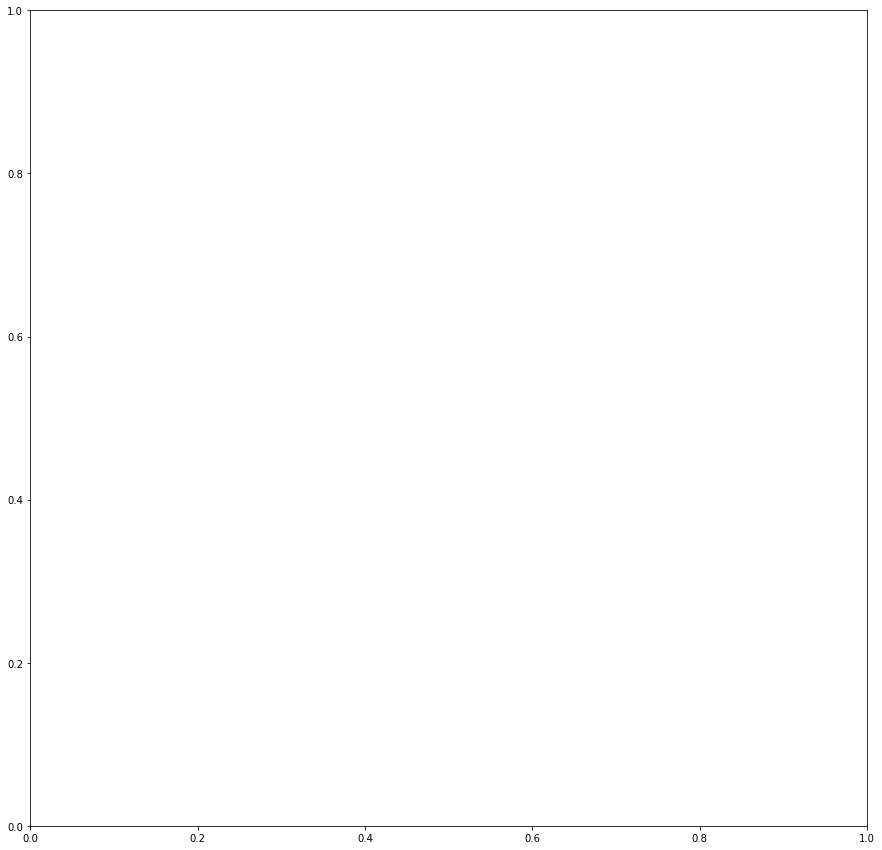

In [27]:
# i have to use matplotlip geoplot was not working
fig, ax = plt.subplots(1, figsize=(15, 15))

In [ ]:
NG = globe_audience.plot(column='rt_audience_score',cmap='Blues',linewidth=0.6,      # Line width for state borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # State border colors

In [ ]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=usa_edit['rt_audience_score'].min(), vmax=usa_edit['rt_audience_score'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

In [ ]:
NG.figure